In [2]:
# Import packages 
import pandas as pd
import json
import requests
from bs4 import BeautifulSoup
import numpy as np

import warnings
warnings.simplefilter("ignore")

# Plotting 
import seaborn as sns
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from plotnine import * 
import plotnine 

/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


### Analytics Function

In [102]:
eth_USD = pd.read_csv("./DATA/ETH_price.csv")
eth_USD = eth_USD.drop(['Currency', '24h Open (USD)','24h High (USD)', '24h Low (USD)'], axis=1)

def clean_open_sea(data): 
    data=data['data']['tradeHistory']['results']
    data = pd.DataFrame(data)
    volume = data['volume'].apply(pd.Series)
    volume = volume['quantity']
    df = pd.concat([data, volume], axis=1)
    df = df.drop(['volume'],axis=1)
    df.columns=['tokens_bought', 'start_date', 'end_date', 'quantity']
    start= df['start_date'].str.split("T",  expand = True)
    df['start'] = start[0]
    end = df['end_date'].str.split("T",  expand = True)
    df['end'] = start[0]
    df = df.drop(['end_date', 'start_date'],axis=1)
    df["quantity"] = df["quantity"].astype('float')
    df["quantity"] = (df["quantity"])/(10**18)
    df['average'] = df['quantity'] / df['tokens_bought']
    df = df.merge(eth_USD, left_on='start', right_on = "Date")
    df['quantity_adjusted'] = df['quantity'] * df['Closing Price (USD)']
    df['average_adjusted'] = df['average'] * df['Closing Price (USD)']
    df = df.drop(['Date'],axis=1)
    return df

#### CryptoKitties 

In [130]:
crypto_kitties = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":424.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4676077473445767296","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNjE0NzAwMDQ1NjkzMjk4NTA5MTU0NjY3NjgzNTcwNjY4MTY="},"bucketStart":"2017-11-23T00:00:00+00:00","bucketEnd":"2017-11-24T00:00:00+00:00"},{"quantity":319.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7794616407600308605","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0NDMzNTY0MzcyNzU2MjUwMjkzOTQ0NzczMDYxMTkwNDIyMzkx"},"bucketStart":"2017-11-24T00:00:00+00:00","bucketEnd":"2017-11-25T00:00:00+00:00"},{"quantity":142.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1628776339891975455","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzMzg1MjU2NzcxNzg3NjYyODk4NjU0NTE1MDc0NDgyNDQ4MzMx"},"bucketStart":"2017-11-25T00:00:00+00:00","bucketEnd":"2017-11-26T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1780359130787036558","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkyMjE4NjE2MTg3NTE3MjExNjc2NzgzNDIzODc2NzUwNjUzODY="},"bucketStart":"2017-11-26T00:00:00+00:00","bucketEnd":"2017-11-27T00:00:00+00:00"},{"quantity":135.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2626793357383357729","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxNTgzNTQxNDA0MjQ1OTM0MzgyNTQxMTA4MDcxMTQ5NzE2MTI1"},"bucketStart":"2017-11-27T00:00:00+00:00","bucketEnd":"2017-11-28T00:00:00+00:00"},{"quantity":429.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7376884446621467361","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NDMzMDAzNDUzODA2MDE2NDE0NDIwOTEyMzc4MzI2Njg3OTky"},"bucketStart":"2017-11-28T00:00:00+00:00","bucketEnd":"2017-11-29T00:00:00+00:00"},{"quantity":1399.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59348221717774926275","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYwOTk0NDc0OTk2OTQ0MTQ1MjM4ODc4NzY5NDg5MzEyNTQ3ODg="},"bucketStart":"2017-11-29T00:00:00+00:00","bucketEnd":"2017-11-30T00:00:00+00:00"},{"quantity":1495.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40278331626349483940","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5MzI5NTc2ODA2MDMyNDc2MzIzNjM5Mjg2MTI5NjQzNjc4ODAz"},"bucketStart":"2017-11-30T00:00:00+00:00","bucketEnd":"2017-12-01T00:00:00+00:00"},{"quantity":1735.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65521158463467571664","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE3NzIwMTkxMDY2MzY0NjMwODU2NzI2NzU3NTE3NjQ5ODE1OA=="},"bucketStart":"2017-12-01T00:00:00+00:00","bucketEnd":"2017-12-02T00:00:00+00:00"},{"quantity":3618.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"541413169864477481496","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzMjUzNzQxNDAyNjUwNDg0NDMwODkyNTUxMDM1MTEwMjE0NTk4"},"bucketStart":"2017-12-02T00:00:00+00:00","bucketEnd":"2017-12-03T00:00:00+00:00"},{"quantity":10195.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2174146509713393243146","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5OTI3MzY0NDMzODg4NDgzOTk5OTI3OTc0NjA0Mjk3NzcwMTk2"},"bucketStart":"2017-12-03T00:00:00+00:00","bucketEnd":"2017-12-04T00:00:00+00:00"},{"quantity":11622.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4836002729510160861536","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxMTIxMDE4NDQ4OTc5NTIwNDg0NzI4Nzc0NDU1MzYxMDk3MTYw"},"bucketStart":"2017-12-04T00:00:00+00:00","bucketEnd":"2017-12-05T00:00:00+00:00"},{"quantity":12808.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4313382410945589072071","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyODE3NTY2MDAwMTkwMDc2MTQxNTIxMTkyMzM1ODQ5ODAxNTA2"},"bucketStart":"2017-12-05T00:00:00+00:00","bucketEnd":"2017-12-06T00:00:00+00:00"},{"quantity":10378.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3793332196600542374653","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MDAwNzI0Nzk0MjE2NDM2MjY2MDYyMTM5ODkzNjgwMzIzNjY0"},"bucketStart":"2017-12-06T00:00:00+00:00","bucketEnd":"2017-12-07T00:00:00+00:00"},{"quantity":13653.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3388031728395134905440","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY3OTg5MTQxMTA3MTQyNDEyNzk1NjY5NDUyNjE2MzE5NjM0NDU="},"bucketStart":"2017-12-07T00:00:00+00:00","bucketEnd":"2017-12-08T00:00:00+00:00"},{"quantity":15253.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3864829576454361813375","id":"QXNzZXRRdWFudGl0eVR5cGU6NzU5NjU2OTE2NjM0NDQyOTE0NjUzMTYwMTczMjUzOTE0ODkwNTQ="},"bucketStart":"2017-12-08T00:00:00+00:00","bucketEnd":"2017-12-09T00:00:00+00:00"},{"quantity":16840.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3095811452179728803457","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MTEwMzY3ODQ3NzU5NDkxNDU3OTQ1MjMyMTY0MTc0NDUxOTA0"},"bucketStart":"2017-12-09T00:00:00+00:00","bucketEnd":"2017-12-10T00:00:00+00:00"},{"quantity":17185.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2383951295716958156845","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MTQzNTAyOTc2MjE1MDk1Njc5NzU0Nzg5OTk3NzY0NDAzMTI2"},"bucketStart":"2017-12-10T00:00:00+00:00","bucketEnd":"2017-12-11T00:00:00+00:00"},{"quantity":16278.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1709536283952278381548","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNTUyMDA0MzgwOTYyNDAwNjAxMzg1MjE5NDA5OTg5OTQ5NDEz"},"bucketStart":"2017-12-11T00:00:00+00:00","bucketEnd":"2017-12-12T00:00:00+00:00"},{"quantity":11564.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1001461924555242035239","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxMzM0NjM1Mzk3NzM2MDA0MDE2MzQxMTc1MjAzOTkyMDIxMjUx"},"bucketStart":"2017-12-12T00:00:00+00:00","bucketEnd":"2017-12-13T00:00:00+00:00"},{"quantity":10782.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"701092205707346693088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0MzE4NTE5MTQwOTUzNzIyMDYwMDI1NjA3OTQ0NTk3MTIwNDgy"},"bucketStart":"2017-12-13T00:00:00+00:00","bucketEnd":"2017-12-14T00:00:00+00:00"},{"quantity":9470.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"648052788609222716331","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MjI3ODMxNTE5NDE4Mzk3MDI1MzM3NTg3OTM1ODEzODc0ODQ5"},"bucketStart":"2017-12-14T00:00:00+00:00","bucketEnd":"2017-12-15T00:00:00+00:00"},{"quantity":7410.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"484230217994087183797","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1MDk2MTMwNzA1ODYxODU2MTIzMjk2MjgzNDA5MjMyMzE5MDIw"},"bucketStart":"2017-12-15T00:00:00+00:00","bucketEnd":"2017-12-16T00:00:00+00:00"},{"quantity":7501.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"554272326993318188215","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyNTUxMTM2MDEwNTgzNjI3NjIxNDIyMDAwNjYyOTg2NzYxMTc2"},"bucketStart":"2017-12-16T00:00:00+00:00","bucketEnd":"2017-12-17T00:00:00+00:00"},{"quantity":6591.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"455811408746230426913","id":"QXNzZXRRdWFudGl0eVR5cGU6NjUyNTM2MDU3MTQ0MjY3MTAwOTM2NDM1NzM0Njk5NjQ3NzI2NTU="},"bucketStart":"2017-12-17T00:00:00+00:00","bucketEnd":"2017-12-18T00:00:00+00:00"},{"quantity":6702.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"301251883124505809519","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzNTE4MjEwNDIzNTE5MjkyODMzOTY0ODIxMTQ0MTgzODg0MzE5"},"bucketStart":"2017-12-18T00:00:00+00:00","bucketEnd":"2017-12-19T00:00:00+00:00"},{"quantity":4471.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"214664356337276103658","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5MjI1NDc3NDg4MzIwOTA0MTE1NDY3OTIzOTc2MTMwMTk1MjI3"},"bucketStart":"2017-12-19T00:00:00+00:00","bucketEnd":"2017-12-20T00:00:00+00:00"},{"quantity":10161.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"274489268509865553369","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk3NDkxODUxMjI4NzA1Njk0NDkzNTEzMDU4MjgxNzQ5Mjk4Nw=="},"bucketStart":"2017-12-20T00:00:00+00:00","bucketEnd":"2017-12-21T00:00:00+00:00"},{"quantity":4985.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200163059652530336052","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyODM0MjExODQ1NjAzMDIyOTE4Mjk5NDU0OTI1MzU0NTg1ODI2"},"bucketStart":"2017-12-21T00:00:00+00:00","bucketEnd":"2017-12-22T00:00:00+00:00"},{"quantity":3180.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"173033360949697907926","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI4MTM2MjgzMDQ1MDg4NzQ5MjA5NTM4ODA3OTk2NjY1MzQxNw=="},"bucketStart":"2017-12-22T00:00:00+00:00","bucketEnd":"2017-12-23T00:00:00+00:00"},{"quantity":3553.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"143237572447853551693","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNTg3NjU5ODM1NzIzOTkxMTczMDUwNTExNzk0NTU5MTIxMDE4"},"bucketStart":"2017-12-23T00:00:00+00:00","bucketEnd":"2017-12-24T00:00:00+00:00"},{"quantity":3476.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"127475840718700879961","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5NjMyNzQwNjg4OTM1OTgxNTQ3MzM5NzQwMTY3MzM2MzMyMjcx"},"bucketStart":"2017-12-24T00:00:00+00:00","bucketEnd":"2017-12-25T00:00:00+00:00"},{"quantity":2897.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114558179832108933737","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0NzM5MzY4MTg3NjA3MjU4NTUxNzc2OTE2OTM2OTY0MzE0ODky"},"bucketStart":"2017-12-25T00:00:00+00:00","bucketEnd":"2017-12-26T00:00:00+00:00"},{"quantity":2632.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111830024155077467185","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2NTk3ODI5MDA2ODY4OTI0NzE3OTk3MDMwMTQ1Njg4NDg0MDM2"},"bucketStart":"2017-12-26T00:00:00+00:00","bucketEnd":"2017-12-27T00:00:00+00:00"},{"quantity":2959.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96985183645835093102","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4Njk5MDg1MDYxMzAwNDI4NDk1NDYzNTk2MDg5MDUwMDIwNDc0"},"bucketStart":"2017-12-27T00:00:00+00:00","bucketEnd":"2017-12-28T00:00:00+00:00"},{"quantity":2926.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99808909647849404223","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc5MDI0NjQ1NzU5NzY5MzY3OTU0Mzk1NjcyNTczMTMwNDM2Mjc="},"bucketStart":"2017-12-28T00:00:00+00:00","bucketEnd":"2017-12-29T00:00:00+00:00"},{"quantity":2515.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86748826366960628320","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5ODcyNjYzNzAzMDYxMjk3MzUyNTY2OTM1NTA2MjExNTQwMjk1"},"bucketStart":"2017-12-29T00:00:00+00:00","bucketEnd":"2017-12-30T00:00:00+00:00"},{"quantity":2395.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74845275261939718802","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3ODI2MDY1OTU4MjA0NjAyNDA2MjAyNzE0NzkzOTgzMjE4NDk3"},"bucketStart":"2017-12-30T00:00:00+00:00","bucketEnd":"2017-12-31T00:00:00+00:00"},{"quantity":2274.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93371331570211253847","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ2MDM0NDM4MjUwNzEwNjc1MzMxOTc2MjY2MjYxNDY4ODIxMTE="},"bucketStart":"2017-12-31T00:00:00+00:00","bucketEnd":"2018-01-01T00:00:00+00:00"},{"quantity":2334.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93814701904474361526","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwNzY0ODg3NzY0NDU3OTQ2NzUyMzA3NDgyNzkyMDU1ODY5Njk3"},"bucketStart":"2018-01-01T00:00:00+00:00","bucketEnd":"2018-01-02T00:00:00+00:00"},{"quantity":2244.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"83477783410400235197","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NDk0ODE0MzEyNTgyMjE2NzUwNjY0MzY2NjE1NDAyNjU1Mzg1"},"bucketStart":"2018-01-02T00:00:00+00:00","bucketEnd":"2018-01-03T00:00:00+00:00"},{"quantity":1324.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39505456460358523429","id":"QXNzZXRRdWFudGl0eVR5cGU6NDcwMjE3NDMzNzE3MzEwOTYyMjg2NzkyOTc5MDk3MTYzNjA5NjY="},"bucketStart":"2018-01-03T00:00:00+00:00","bucketEnd":"2018-01-04T00:00:00+00:00"},{"quantity":995.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46931898637735457668","id":"QXNzZXRRdWFudGl0eVR5cGU6NDAzMTg3OTk1NjQ3NTQzNTEyOTg1MDMzMTY4Mjk1ODI3MzYxMjM="},"bucketStart":"2018-01-04T00:00:00+00:00","bucketEnd":"2018-01-05T00:00:00+00:00"},{"quantity":860.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32678357420107836617","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNTQ2OTc0MzQ5MTg0MjA5NTA1MDgxOTc4NjIyNTY5ODIxMDA3"},"bucketStart":"2018-01-05T00:00:00+00:00","bucketEnd":"2018-01-06T00:00:00+00:00"},{"quantity":1156.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64857440905246974693","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3NDkzMTIwNzU2NDY4ODc5MzE5NTIzMzcxODk2OTA1MTgwMzcz"},"bucketStart":"2018-01-06T00:00:00+00:00","bucketEnd":"2018-01-07T00:00:00+00:00"},{"quantity":1123.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39206313232894387965","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1MTQzNzkwODE5MzU3OTczOTY5MDk0MTcxNTk3MTcwNzY2MDI4"},"bucketStart":"2018-01-07T00:00:00+00:00","bucketEnd":"2018-01-08T00:00:00+00:00"},{"quantity":960.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35304838902794870136","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5Mzc5ODA4NzgwMDczMjE4NTA4NjE3ODg2MTc2ODI1NjA2ODA="},"bucketStart":"2018-01-08T00:00:00+00:00","bucketEnd":"2018-01-09T00:00:00+00:00"},{"quantity":716.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32238060578536874345","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MTg3MDkzNTMxMTMyMzAxNzg4NDMzMDMzOTQ0NjU0NjA2ODE0"},"bucketStart":"2018-01-09T00:00:00+00:00","bucketEnd":"2018-01-10T00:00:00+00:00"},{"quantity":518.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19614090349495484133","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwODc4Mjc4NTM0MjExNzc2NzQwNjk2ODY3OTQ1NTQ2ODEzNDYy"},"bucketStart":"2018-01-10T00:00:00+00:00","bucketEnd":"2018-01-11T00:00:00+00:00"},{"quantity":808.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30726189010528589307","id":"QXNzZXRRdWFudGl0eVR5cGU6NDE1MjUwODc4ODU2Mzk0NTAwMjkwOTE2NTA0MDQzNjQ2MTcxMTM="},"bucketStart":"2018-01-11T00:00:00+00:00","bucketEnd":"2018-01-12T00:00:00+00:00"},{"quantity":914.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33695843373874829751","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY3MjI0MzA0MDY0NDQ3Njk2NjgyMzIxMzUxNjA3MTIwMzc3Nzk="},"bucketStart":"2018-01-12T00:00:00+00:00","bucketEnd":"2018-01-13T00:00:00+00:00"},{"quantity":789.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26847229943756346415","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2NjUzODAyNjE3NjczMDI3MTM1MDE4MjA5NDUzMDMyMDcwNDcx"},"bucketStart":"2018-01-13T00:00:00+00:00","bucketEnd":"2018-01-14T00:00:00+00:00"},{"quantity":948.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34001628809027884869","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3MTE0NDk3OTg1MTQ1NjYxMTk2MjEwMjE4MTQ4MzY0NDU3NTkw"},"bucketStart":"2018-01-14T00:00:00+00:00","bucketEnd":"2018-01-15T00:00:00+00:00"},{"quantity":666.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25323111704256348275","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NzgzMTEyODA1NjMwMjY3NTgzOTExMzgwNTE0MjQ4MTgzNTg1"},"bucketStart":"2018-01-15T00:00:00+00:00","bucketEnd":"2018-01-16T00:00:00+00:00"},{"quantity":687.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39572145109881390112","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2ODc0NDkzNTk2MTMwOTI3NzAzNzE5MDI1OTUxODc0MTc5MzQz"},"bucketStart":"2018-01-16T00:00:00+00:00","bucketEnd":"2018-01-17T00:00:00+00:00"},{"quantity":763.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29498005589918534496","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU2NDA3NzQ3MzM0MjA3MjA4MDgzODU5NzYyMjcyMDY0MjEzNTQ="},"bucketStart":"2018-01-17T00:00:00+00:00","bucketEnd":"2018-01-18T00:00:00+00:00"},{"quantity":867.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32988211179900396530","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNDE5MDQ1MTAzMDg0NTQ0MzE5MjgyMjc4ODgzMDg1NzUxNTY4"},"bucketStart":"2018-01-18T00:00:00+00:00","bucketEnd":"2018-01-19T00:00:00+00:00"},{"quantity":978.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49342387057559307095","id":"QXNzZXRRdWFudGl0eVR5cGU6NjUxNjc4ODA5MDI2NzAxODc3MDk2OTc3MjAwMjg4MzQ3NTQwMDA="},"bucketStart":"2018-01-19T00:00:00+00:00","bucketEnd":"2018-01-20T00:00:00+00:00"},{"quantity":1002.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103932403831014909201","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk2NjU4MjY3NDQ3MTA2MjU5ODc5Njc1MzQyMzM2NjU1NTA3OTU="},"bucketStart":"2018-01-20T00:00:00+00:00","bucketEnd":"2018-01-21T00:00:00+00:00"},{"quantity":1102.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42645322045783650821","id":"QXNzZXRRdWFudGl0eVR5cGU6NzYxOTY2MTcxODk4NjU2MTU1ODY1ODI2OTE4NDU1NDcyMDIxMDg="},"bucketStart":"2018-01-21T00:00:00+00:00","bucketEnd":"2018-01-22T00:00:00+00:00"},{"quantity":1124.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26009549826960679297","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0MzAzMjUzNzQ0MDg0NDk4NjcwMzI2Mzg3ODk3MzIzNDY5MjE2"},"bucketStart":"2018-01-22T00:00:00+00:00","bucketEnd":"2018-01-23T00:00:00+00:00"},{"quantity":1086.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26533235350801511742","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwNzIwNDM0NzYxNDc3NzU2NjMxODU4NjgxOTM1Mzc5MTA4Njg5"},"bucketStart":"2018-01-23T00:00:00+00:00","bucketEnd":"2018-01-24T00:00:00+00:00"},{"quantity":950.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22913736906255095959","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4NTQ4NjM3MTI2ODQ3MTMyMDczOTM3OTU2ODA3NTg0OTExNw=="},"bucketStart":"2018-01-24T00:00:00+00:00","bucketEnd":"2018-01-25T00:00:00+00:00"},{"quantity":782.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20254312334394104055","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3OTgyODgzNjM2OTMyMzkyMjQyNDU4MzQwNDYxMjIwNjU2MDA3"},"bucketStart":"2018-01-25T00:00:00+00:00","bucketEnd":"2018-01-26T00:00:00+00:00"},{"quantity":862.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23838666451177914495","id":"QXNzZXRRdWFudGl0eVR5cGU6NzkzMTE2MjQzNDIwOTkxMTMzMzY0MTYyMTM4NzA1NDQ4NjI0ODE="},"bucketStart":"2018-01-26T00:00:00+00:00","bucketEnd":"2018-01-27T00:00:00+00:00"},{"quantity":949.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25756385344515958735","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMzI3MzQ2NTgyMjI5MzEzNTI2MTE2MTAxMDg1NjY4ODU2MjMz"},"bucketStart":"2018-01-27T00:00:00+00:00","bucketEnd":"2018-01-28T00:00:00+00:00"},{"quantity":925.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44459004247101404416","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxNDI2MDczNDQwMDY3NzAyMDY1NTk5NzA4MTY4ODcwMjA1MTk0"},"bucketStart":"2018-01-28T00:00:00+00:00","bucketEnd":"2018-01-29T00:00:00+00:00"},{"quantity":882.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21890214456721619029","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4MzU4Mzc2OTgyODc4Nzc5MTE4NzU4MDMyNzM1NTU1MDQ1NTkw"},"bucketStart":"2018-01-29T00:00:00+00:00","bucketEnd":"2018-01-30T00:00:00+00:00"},{"quantity":981.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32003915029638157818","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ4NjI3MTQxMDk4MzQ4OTE4OTY3Nzk2NTE4NzczNDMwNDk5NzU="},"bucketStart":"2018-01-30T00:00:00+00:00","bucketEnd":"2018-01-31T00:00:00+00:00"},{"quantity":876.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"83847073920402920066","id":"QXNzZXRRdWFudGl0eVR5cGU6NzEyNjg4MjY4MDUxOTkyNzc5MzE0MzAwNTEzMTk0NTY4MDg4NTM="},"bucketStart":"2018-01-31T00:00:00+00:00","bucketEnd":"2018-02-01T00:00:00+00:00"},{"quantity":653.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17165139810313949197","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyODMzMDM2NzEyOTg3MDk3ODU3MTYyMTIwMTU4MTkzOTI0MTA5"},"bucketStart":"2018-02-01T00:00:00+00:00","bucketEnd":"2018-02-02T00:00:00+00:00"},{"quantity":785.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26432918479816017054","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMDgxNjIwNDA0MjQ4ODI1NjY5MzU5OTQ0NDgwMDEzMzgzNzIz"},"bucketStart":"2018-02-02T00:00:00+00:00","bucketEnd":"2018-02-03T00:00:00+00:00"},{"quantity":757.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23982914247921975459","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg2ODc1MzIwNDU4OTgxNjI1NTg1NzIxNjc4MTQ0OTYxODU1NDg="},"bucketStart":"2018-02-03T00:00:00+00:00","bucketEnd":"2018-02-04T00:00:00+00:00"},{"quantity":712.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22186513525325800344","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMzMwNTcxMjgwOTk4NTM4Nzc5NTYxMDAwODIwNTUwNTg2NTc0"},"bucketStart":"2018-02-04T00:00:00+00:00","bucketEnd":"2018-02-05T00:00:00+00:00"},{"quantity":913.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22848734492956101149","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwMzU5NzU4NDM4MzMzMjg3NzA2Njk1MjAzODEzMjU3MDMzOTIy"},"bucketStart":"2018-02-05T00:00:00+00:00","bucketEnd":"2018-02-06T00:00:00+00:00"},{"quantity":1021.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32077417016024824647","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwNTM1NTQxMTIzNjY2MjY5NjQ1MzE3OTI4MDIzNjUwNzI1MTg4"},"bucketStart":"2018-02-06T00:00:00+00:00","bucketEnd":"2018-02-07T00:00:00+00:00"},{"quantity":949.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29005275471827857813","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNjgwNDQwMzA4MDI3NzkzNjYzNzkwNDc5MzEyOTc1NDU0MTg0"},"bucketStart":"2018-02-07T00:00:00+00:00","bucketEnd":"2018-02-08T00:00:00+00:00"},{"quantity":931.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28405345555191914286","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNTY5Nzc5NzE5OTMzNjIyNzI4NzUwNjMxNTY5NDc2MDU3MDYw"},"bucketStart":"2018-02-08T00:00:00+00:00","bucketEnd":"2018-02-09T00:00:00+00:00"},{"quantity":947.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39395892740958892375","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyNjA4NTc3MzQ4MTg3NDA3ODA3ODQxNTU2Mzg5MDk4ODU5Nzgx"},"bucketStart":"2018-02-09T00:00:00+00:00","bucketEnd":"2018-02-10T00:00:00+00:00"},{"quantity":777.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65406133538801014992","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzMzE1NDczMDkwMjUxNjgyMjIyMDYxNzIzNjE1NTg5NTE4MjM4"},"bucketStart":"2018-02-10T00:00:00+00:00","bucketEnd":"2018-02-11T00:00:00+00:00"},{"quantity":1177.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56401364466390148777","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MjI4NzMwMDg2MjUyODcwNTQ0MTExNzgwNzI5NjA3MzU0Mzcy"},"bucketStart":"2018-02-11T00:00:00+00:00","bucketEnd":"2018-02-12T00:00:00+00:00"},{"quantity":1016.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47938359903320723276","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxNzY2MDQyMDgyODYwMTMwODAwMTAwNDg0ODc5MjczOTg0OTE2"},"bucketStart":"2018-02-12T00:00:00+00:00","bucketEnd":"2018-02-13T00:00:00+00:00"},{"quantity":1326.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88163686311292494224","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1Mzg3OTgzNDgwMzgyNTgyMTExNTc3NjkwMzQxMDA4MjY3MTQw"},"bucketStart":"2018-02-13T00:00:00+00:00","bucketEnd":"2018-02-14T00:00:00+00:00"},{"quantity":2711.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"441036785888197925942","id":"QXNzZXRRdWFudGl0eVR5cGU6OTYyMjQ2MDYyNTExNTI1NzA1Njk0MzU3Nzk1MDg2NzUyMjg2NTM="},"bucketStart":"2018-02-14T00:00:00+00:00","bucketEnd":"2018-02-15T00:00:00+00:00"},{"quantity":2692.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"824891322983953841685","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk5NTY5NzUyMDEyMzk2MDI0MDU4OTM0NjY1MTMyODI5OTEzNzE="},"bucketStart":"2018-02-15T00:00:00+00:00","bucketEnd":"2018-02-16T00:00:00+00:00"},{"quantity":1385.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"136765936854041513015","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAxMTE0NzcyMDc2NDAwMjMxMTczODQ0Mzc4Mjg1OTI3NzA4NDk="},"bucketStart":"2018-02-16T00:00:00+00:00","bucketEnd":"2018-02-17T00:00:00+00:00"},{"quantity":1336.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"147480354921520216748","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5Nzk0NzAzODg0ODYxODk4Mzc1Mzk4NTczNjU4MjU1NzEyMjk2"},"bucketStart":"2018-02-17T00:00:00+00:00","bucketEnd":"2018-02-18T00:00:00+00:00"},{"quantity":1429.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100198785998542831521","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NzQyNzU2NTA5NjE3NDczMzYwMjc2MjkwOTE2MzU3NTYzNzUx"},"bucketStart":"2018-02-18T00:00:00+00:00","bucketEnd":"2018-02-19T00:00:00+00:00"},{"quantity":1317.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"143824495302969410204","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE3MDI5MDUzNTIzNDY5OTI3MzQzNzE4NjQ5NDkzMjA3NzM1NA=="},"bucketStart":"2018-02-19T00:00:00+00:00","bucketEnd":"2018-02-20T00:00:00+00:00"},{"quantity":1169.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"218710271097947781981","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyNDg4NDEwNzI2NTQ1ODE2Nzk5OTk3OTg5NjQwNTg1NjkxMTcz"},"bucketStart":"2018-02-20T00:00:00+00:00","bucketEnd":"2018-02-21T00:00:00+00:00"},{"quantity":1001.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74565481287723471837","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5MTMyMDExMDQ3MzQ5NjY4MTgxOTg4Mjk3NjU1MjYxMzQ2NzA4"},"bucketStart":"2018-02-21T00:00:00+00:00","bucketEnd":"2018-02-22T00:00:00+00:00"},{"quantity":967.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71629409404099817493","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgzMjA0NzcyMjg0MTE0MzI4NjA0NzQxOTc1MDYyMDkzMDQwNzg="},"bucketStart":"2018-02-22T00:00:00+00:00","bucketEnd":"2018-02-23T00:00:00+00:00"},{"quantity":1153.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117894567978042942968","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MzI4ODUzNjA1OTc1ODI0NzIwNTU4NzEzMDk3MTQ2ODI5NDkx"},"bucketStart":"2018-02-23T00:00:00+00:00","bucketEnd":"2018-02-24T00:00:00+00:00"},{"quantity":1741.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"136260889038906952919","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2OTY1NTE4OTA3ODY2MDI2Njk2MjcxODMwMzYxOTE5OTU5MzMx"},"bucketStart":"2018-02-24T00:00:00+00:00","bucketEnd":"2018-02-25T00:00:00+00:00"},{"quantity":1384.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"83175726417880596841","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNzQ3OTk0NzMwOTM4NDk2MjExMTQ3Njc4MDY1NzE2MTEyOTk3"},"bucketStart":"2018-02-25T00:00:00+00:00","bucketEnd":"2018-02-26T00:00:00+00:00"},{"quantity":1267.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108851510939901430674","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2NjQxNDE0OTY4NjIzOTYzMjQ1MjQwMjQ3MjIzNDQyMTY2MDk1"},"bucketStart":"2018-02-26T00:00:00+00:00","bucketEnd":"2018-02-27T00:00:00+00:00"},{"quantity":1986.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130322736629563394217","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3NzQyNDIxMzI3MjMzOTU5NTg4NDA0MzgzNTQ3OTc4ODkzNTY5"},"bucketStart":"2018-02-27T00:00:00+00:00","bucketEnd":"2018-02-28T00:00:00+00:00"},{"quantity":1361.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89262811446595662800","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ0NjgxMjA1NzEzNTU5NzAwMTk5MDA2NzcxMjIzNjc1NTc5OTM="},"bucketStart":"2018-02-28T00:00:00+00:00","bucketEnd":"2018-03-01T00:00:00+00:00"},{"quantity":1239.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71400552829489669193","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NTMxMzExNDgzODIxMjk4ODE1ODAxMDE0ODc3NDAxNjY5MDA2"},"bucketStart":"2018-03-01T00:00:00+00:00","bucketEnd":"2018-03-02T00:00:00+00:00"},{"quantity":1030.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63083517595060428106","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4MDYzNzU3OTE3NTMyNTMxNjEwMDk0MjE3MjgyNjkxNDkwMTAy"},"bucketStart":"2018-03-02T00:00:00+00:00","bucketEnd":"2018-03-03T00:00:00+00:00"},{"quantity":1062.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48887843907814570343","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3MTYzNzU3OTUzMjE4NDM4NjQ4MDUwMjI5NDE4MTQ2MDk0NTI1"},"bucketStart":"2018-03-03T00:00:00+00:00","bucketEnd":"2018-03-04T00:00:00+00:00"},{"quantity":1097.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50841709572604841582","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxOTkzMDMxODc0NTk4MjY0MTYyMzIzMTc5OTE5ODkyNjc5MDUy"},"bucketStart":"2018-03-04T00:00:00+00:00","bucketEnd":"2018-03-05T00:00:00+00:00"},{"quantity":871.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63237415124707197833","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQwOTc4MDI2NjYxMTc3MzM4MTIwMDI2OTcwNzc4NzI2NzE5ODk="},"bucketStart":"2018-03-05T00:00:00+00:00","bucketEnd":"2018-03-06T00:00:00+00:00"},{"quantity":1082.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55675474079940102001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNjQ2Mjc3ODU2NjcwNjg2MzA5MDQ2MjI3MTUyMzUwMzEwNjg1"},"bucketStart":"2018-03-06T00:00:00+00:00","bucketEnd":"2018-03-07T00:00:00+00:00"},{"quantity":1390.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101079987312531812904","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4MDE5MDgwNDcwMjg4MTQ0NDkxMDI3NTI5MzI2OTQ0OTc4NDM1"},"bucketStart":"2018-03-07T00:00:00+00:00","bucketEnd":"2018-03-08T00:00:00+00:00"},{"quantity":1213.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60603712539508336476","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NTE5MDU5NTkyNDI2MDUwOTQ4MTU5MTM3ODc0Njc4NjEyMDk2"},"bucketStart":"2018-03-08T00:00:00+00:00","bucketEnd":"2018-03-09T00:00:00+00:00"},{"quantity":1140.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59834369416613739645","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzMDAyNTY5Njk3OTA2MDI1MTA3MTEzMjkzOTIxMzczOTEwNTI4"},"bucketStart":"2018-03-09T00:00:00+00:00","bucketEnd":"2018-03-10T00:00:00+00:00"},{"quantity":944.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45383188823337363260","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3ODg3MzIxMTM3NjAzMjIwNTgwNDg0NTU5MTAwMjg2NjQ4Nzk3"},"bucketStart":"2018-03-10T00:00:00+00:00","bucketEnd":"2018-03-11T00:00:00+00:00"},{"quantity":953.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43202475403758128891","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzODc4Mjg5MjI2NzMyNTQ3MDI5NTE4NDExNTI2MTY4MTAwMzM0"},"bucketStart":"2018-03-11T00:00:00+00:00","bucketEnd":"2018-03-12T00:00:00+00:00"},{"quantity":1589.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47445070706285974893","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2OTMzNDcyODEwNDIwMzE2NTYzNDc0NDEyMTI1NTc3MTc0NjY2"},"bucketStart":"2018-03-12T00:00:00+00:00","bucketEnd":"2018-03-13T00:00:00+00:00"},{"quantity":797.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35285988551942772062","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0NTI3MTM1MzE2MDYwMTc1NDE3MjgyODk3MDc2NjMwMzkwOTU1"},"bucketStart":"2018-03-13T00:00:00+00:00","bucketEnd":"2018-03-14T00:00:00+00:00"},{"quantity":1087.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46656065720882104130","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxNjAyMjU5NjE3NjgwMjAzNzQ3MjEwMDg2Nzg3NTY3NjIyNDg0"},"bucketStart":"2018-03-14T00:00:00+00:00","bucketEnd":"2018-03-15T00:00:00+00:00"},{"quantity":887.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34713088388281832408","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2ODIwNDM5NzQ3OTE2MjgyNTI1MDQ5MTE4OTI4MzA0MzE1MjE4"},"bucketStart":"2018-03-15T00:00:00+00:00","bucketEnd":"2018-03-16T00:00:00+00:00"},{"quantity":835.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46133953987427879894","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgxMTk0MTEwMDk1Mjk2MTI1MjI0ODI1MDMwMzg0MDkwOTEyNjQ="},"bucketStart":"2018-03-16T00:00:00+00:00","bucketEnd":"2018-03-17T00:00:00+00:00"},{"quantity":792.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51277271581913808518","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwMTE5MjU0NDM4MTk1NTMzODU4MzIxODQzMTU5MDI3NzE1ODM2"},"bucketStart":"2018-03-17T00:00:00+00:00","bucketEnd":"2018-03-18T00:00:00+00:00"},{"quantity":592.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30036296694023818076","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0ODY1NjQ2NDAyMDc5OTk5MjkyMTI2NjI5NTQ4OTQyOTU3NDEx"},"bucketStart":"2018-03-18T00:00:00+00:00","bucketEnd":"2018-03-19T00:00:00+00:00"},{"quantity":684.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31000759326787296288","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUyMDk0NDg3NjMxNzU0MzM5ODM2OTg2MzMzNjAyODg2NTQxMzQ="},"bucketStart":"2018-03-19T00:00:00+00:00","bucketEnd":"2018-03-20T00:00:00+00:00"},{"quantity":778.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48094684740680349932","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNzU3OTE4MjgzODg3MjEyNjg5NTg0NTg0MDY0NjgyMzQ3NDY3"},"bucketStart":"2018-03-20T00:00:00+00:00","bucketEnd":"2018-03-21T00:00:00+00:00"},{"quantity":1055.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45035746853825109781","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0ODY1NjA2NDU1OTQwMjIwOTgwNzM5MzQ3MTU0NTM0OTU3MDA1"},"bucketStart":"2018-03-21T00:00:00+00:00","bucketEnd":"2018-03-22T00:00:00+00:00"},{"quantity":1059.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51662836492065892457","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1NDYwMTU1MTQ3NTU3NjMwNzI2NDM5MDY3MDUzMjA0ODkwNjYy"},"bucketStart":"2018-03-22T00:00:00+00:00","bucketEnd":"2018-03-23T00:00:00+00:00"},{"quantity":1034.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44636652866791024507","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwMzUyMDc4ODk3MTgxODc0MDcwNDMzNDY3MDg5Nzg5ODA1MTc3"},"bucketStart":"2018-03-23T00:00:00+00:00","bucketEnd":"2018-03-24T00:00:00+00:00"},{"quantity":939.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46016094794307548454","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3MTEwMzQ0NjEwNTc0ODQyOTI0NzYyNzE3NjI2MjExMzg3MTI3"},"bucketStart":"2018-03-24T00:00:00+00:00","bucketEnd":"2018-03-25T00:00:00+00:00"},{"quantity":839.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34430548061935127179","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1MDc3NTY3ODU4MDIzNzQ5OTA3OTIyMDcyNzQzMDIzNzA0NzA3"},"bucketStart":"2018-03-25T00:00:00+00:00","bucketEnd":"2018-03-26T00:00:00+00:00"},{"quantity":775.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35791117422207214815","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4Mzc3MDUwNzg5OTM0NTg1MzM5ODYxOTk0NjE4MDUxODA0NTU="},"bucketStart":"2018-03-26T00:00:00+00:00","bucketEnd":"2018-03-27T00:00:00+00:00"},{"quantity":954.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50384897940152775674","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5OTU1MTYwOTg3NjM0MTE0ODA3NDcwMzQ5NTYwNjE3MzQ1OTc5"},"bucketStart":"2018-03-27T00:00:00+00:00","bucketEnd":"2018-03-28T00:00:00+00:00"},{"quantity":655.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28835616679893878000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNDg1NzMxODcxOTAxNjY5OTYzNjE4NTAxMjYwMzIxOTA3ODg="},"bucketStart":"2018-03-28T00:00:00+00:00","bucketEnd":"2018-03-29T00:00:00+00:00"},{"quantity":605.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46950251297501360170","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM1ODUzMjMwMTI4MjI3ODU2Nzg2ODA1NzY0NTY5ODYzMjUyMTc="},"bucketStart":"2018-03-29T00:00:00+00:00","bucketEnd":"2018-03-30T00:00:00+00:00"},{"quantity":691.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40376586302387906357","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyOTI2NTM3NDk5NTgzNTUzODU2NDQyMDEwNjc2ODAyOTYxNzY0"},"bucketStart":"2018-03-30T00:00:00+00:00","bucketEnd":"2018-03-31T00:00:00+00:00"},{"quantity":640.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44046154581784733750","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczNzk5NzMxMjc3MDAwMTMzOTk2MzUzOTgzMDgxMDE4NzgwMjc3"},"bucketStart":"2018-03-31T00:00:00+00:00","bucketEnd":"2018-04-01T00:00:00+00:00"},{"quantity":635.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41501996562456746175","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MDczMzU3ODIxNTgzODg3ODgzMTYxMDI5MDQ3NTQ0NTIxODM2"},"bucketStart":"2018-04-01T00:00:00+00:00","bucketEnd":"2018-04-02T00:00:00+00:00"},{"quantity":872.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47290956544507352532","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4NzA2NzcwNTMxNTE5MDg1NTY0MjczNzA1MzM4MTY0NjQ2OTM5"},"bucketStart":"2018-04-02T00:00:00+00:00","bucketEnd":"2018-04-03T00:00:00+00:00"},{"quantity":730.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42543148563841576503","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyMTU0MzU4MDU1MjI0MzY0MDY1NDgyNTI2NDU5OTkwMTY5MDcx"},"bucketStart":"2018-04-03T00:00:00+00:00","bucketEnd":"2018-04-04T00:00:00+00:00"},{"quantity":713.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40951318907955759129","id":"QXNzZXRRdWFudGl0eVR5cGU6MzkyMTExNTQ2NDk5NDUwOTE4NDIxNjM2MjI3ODE5MDEwMTQ1ODM="},"bucketStart":"2018-04-04T00:00:00+00:00","bucketEnd":"2018-04-05T00:00:00+00:00"},{"quantity":779.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60552307777363040486","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI4NDU4NjE4OTUzNTU5MTc1MjEzNjAzNDUzMTc3NTM2NTQwODA="},"bucketStart":"2018-04-05T00:00:00+00:00","bucketEnd":"2018-04-06T00:00:00+00:00"},{"quantity":1041.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62504248664170411586","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYxNTM2NzU4Njg4ODA3NDExNTgxMDU2NTY1NzQ5NzQzNTA0NTA="},"bucketStart":"2018-04-06T00:00:00+00:00","bucketEnd":"2018-04-07T00:00:00+00:00"},{"quantity":724.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33749073577381189181","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NTkyODI3NjU4NTYyNTA4OTk0OTM5MTY0MDE4MjkxNDg4Mzgw"},"bucketStart":"2018-04-07T00:00:00+00:00","bucketEnd":"2018-04-08T00:00:00+00:00"},{"quantity":986.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53812237747265854181","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5MzMzNjA0MTMyNTU0OTU5NjA2Mjg0Njg2Nzc5NTkyNjAzNDIw"},"bucketStart":"2018-04-08T00:00:00+00:00","bucketEnd":"2018-04-09T00:00:00+00:00"},{"quantity":894.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39822947371542852579","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0ODcxMTc5NzUxNzcwMDE4MzczOTY3NzIyMzg2NDIwNzU2NTAz"},"bucketStart":"2018-04-09T00:00:00+00:00","bucketEnd":"2018-04-10T00:00:00+00:00"},{"quantity":780.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56856249653837188873","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1OTE4MDU3NzQ1MTk2MTEyMjg1NjE2Mjc1NTQ3NDU4Mzg5NjM="},"bucketStart":"2018-04-10T00:00:00+00:00","bucketEnd":"2018-04-11T00:00:00+00:00"},{"quantity":871.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56277720707594326654","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxODk5NDYxNzc5NzY4MTgwMDE1NTk2MjExODY2ODYxNzAwNzI4"},"bucketStart":"2018-04-11T00:00:00+00:00","bucketEnd":"2018-04-12T00:00:00+00:00"},{"quantity":992.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51193112571959233036","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNDE2MTA2NTA2MTg5MzI0MDIzMzg1OTI4MzQxNjY4NjQyNzMx"},"bucketStart":"2018-04-12T00:00:00+00:00","bucketEnd":"2018-04-13T00:00:00+00:00"},{"quantity":1214.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75344886816236993354","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NjgwNzMzNDg1NjA5NDU0MDUxODIzMDQ4ODI4MTc0NTE4MDA3"},"bucketStart":"2018-04-13T00:00:00+00:00","bucketEnd":"2018-04-14T00:00:00+00:00"},{"quantity":1035.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59547235712991401612","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzNTA0NTU0MTU1MTI0MDUzOTExOTg4MjA5NDE3MzY5MjIyNjY5"},"bucketStart":"2018-04-14T00:00:00+00:00","bucketEnd":"2018-04-15T00:00:00+00:00"},{"quantity":993.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39132643921950950982","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1MzEwNjMyMTQyMjQ3MDg5MTE4NDIyNjc1NTQ0NjIxNTA0MDM1"},"bucketStart":"2018-04-15T00:00:00+00:00","bucketEnd":"2018-04-16T00:00:00+00:00"},{"quantity":908.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47000210540990458696","id":"QXNzZXRRdWFudGl0eVR5cGU6OTcyNDY0NTE1OTE2NDUzOTQ4Njc5Mzc1OTg4NDk1ODQ1MDQ2Mzc="},"bucketStart":"2018-04-16T00:00:00+00:00","bucketEnd":"2018-04-17T00:00:00+00:00"},{"quantity":885.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68804030723888274678","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwMjc1MTg5MTY2NTIwNzYxNjU4MzI4NDQ3NjQ2MzAxMTI2Nzkz"},"bucketStart":"2018-04-17T00:00:00+00:00","bucketEnd":"2018-04-18T00:00:00+00:00"},{"quantity":758.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39647808038564924970","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5NzYzMDM1NjMwMzU5MDMyMjY4ODk3MzcwNzQwMTQxNTczODA2"},"bucketStart":"2018-04-18T00:00:00+00:00","bucketEnd":"2018-04-19T00:00:00+00:00"},{"quantity":703.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40437478379175246345","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY2MzEwODExMzI1MjM0NjUzODM5MjUyMzIwOTQxMzEyOTc1NTk="},"bucketStart":"2018-04-19T00:00:00+00:00","bucketEnd":"2018-04-20T00:00:00+00:00"},{"quantity":687.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36430041978335182761","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxNTE2MTg0Mzc2MTgwMDY5NTAxNTk5NDk1MzUwNzcyNTI1Nzk2"},"bucketStart":"2018-04-20T00:00:00+00:00","bucketEnd":"2018-04-21T00:00:00+00:00"},{"quantity":719.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30796417350655442390","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkxMjU2ODEzNjU5MTUwMDAyMjM2MDEyOTAwNTEzODM5MjEzODY="},"bucketStart":"2018-04-21T00:00:00+00:00","bucketEnd":"2018-04-22T00:00:00+00:00"},{"quantity":569.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23184018070592831151","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMDcxNjY0OTU3NzM4Mzk3NjkyODU3MDUyOTc3ODA5ODY2MDAz"},"bucketStart":"2018-04-22T00:00:00+00:00","bucketEnd":"2018-04-23T00:00:00+00:00"},{"quantity":564.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23235745986968233012","id":"QXNzZXRRdWFudGl0eVR5cGU6NDIwMTY3MzEzNzIyNjI4NTA1NDQzOTgwNzg4NzY2NzQ4Mzg4Nw=="},"bucketStart":"2018-04-23T00:00:00+00:00","bucketEnd":"2018-04-24T00:00:00+00:00"},{"quantity":507.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38018935715405824282","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzNDQ0NTMzMDExMTk0MjIyMzk3NTU5NTYzNTU4NzY4NDk2MzY2"},"bucketStart":"2018-04-24T00:00:00+00:00","bucketEnd":"2018-04-25T00:00:00+00:00"},{"quantity":572.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55162370990514745017","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1ODM5MDMxMzc4MzI0MDk2NDI3MzE1MDk3NTU0NzY1MTMwMjgz"},"bucketStart":"2018-04-25T00:00:00+00:00","bucketEnd":"2018-04-26T00:00:00+00:00"},{"quantity":537.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29489931250426298703","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI1NTc2Mjg2MDkwOTM4NzM0OTI3NzQ2ODAxODQzMjUwNDQ1NTk="},"bucketStart":"2018-04-26T00:00:00+00:00","bucketEnd":"2018-04-27T00:00:00+00:00"},{"quantity":773.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33297600156679841632","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1MTMzMDQxOTUzMTg1MjA1MTk3ODQ1MTg0OTgzMzU5NjMyMDcx"},"bucketStart":"2018-04-27T00:00:00+00:00","bucketEnd":"2018-04-28T00:00:00+00:00"},{"quantity":577.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28391201538907900214","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwNjgwMjk3NTU2MDg3NzIwMDQ5NTM5ODM2NjkzNzc1OTU4MTQ3"},"bucketStart":"2018-04-28T00:00:00+00:00","bucketEnd":"2018-04-29T00:00:00+00:00"},{"quantity":527.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24151297693060794102","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU5NTkxMzU5NzQ5Njc3MDk2NDg3NjMwNDQ0MTMwMzQyMTI4MjY="},"bucketStart":"2018-04-29T00:00:00+00:00","bucketEnd":"2018-04-30T00:00:00+00:00"},{"quantity":589.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29314292021100804674","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5Njc4NDc4NDAwMTQyMzE4MjUxNTA4MjY5MzczNzAyNzIxOTI0"},"bucketStart":"2018-04-30T00:00:00+00:00","bucketEnd":"2018-05-01T00:00:00+00:00"},{"quantity":487.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21492459153671788385","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyMjI3ODAzMzA3NTM4ODczNDQ2MDA0NTg3ODk4NjE0NDMzODQw"},"bucketStart":"2018-05-01T00:00:00+00:00","bucketEnd":"2018-05-02T00:00:00+00:00"},{"quantity":527.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30075375825873642554","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNjQxMDQ5NjM5MTA0MTYxMjQwNzQ5ODAxNDM3ODk2OTYwMDg4"},"bucketStart":"2018-05-02T00:00:00+00:00","bucketEnd":"2018-05-03T00:00:00+00:00"},{"quantity":429.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19472153684661414274","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwNjMwMTM5MjY1MzA1MTAzNzY3NjU1NDg0NDE3NjAzMDY2NjU1"},"bucketStart":"2018-05-03T00:00:00+00:00","bucketEnd":"2018-05-04T00:00:00+00:00"},{"quantity":588.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26803249181913564314","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxODYxMjAxOTIyMDU5MDY0ODI5OTQwMDIzMzMwNzMyODE3NDAz"},"bucketStart":"2018-05-04T00:00:00+00:00","bucketEnd":"2018-05-05T00:00:00+00:00"},{"quantity":456.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53647963887539376059","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2NzIyMzMwMTYzMDU5MjM2NjYyNTgxNjgyNTU4Njg2ODY5MDk5"},"bucketStart":"2018-05-05T00:00:00+00:00","bucketEnd":"2018-05-06T00:00:00+00:00"},{"quantity":505.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25030026235370016252","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5NTkxNjU5OTExMTQyNzYwMTk2NTU1NTM0OTQzNDM5MTU0MTA1"},"bucketStart":"2018-05-06T00:00:00+00:00","bucketEnd":"2018-05-07T00:00:00+00:00"},{"quantity":623.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28985877363521446170","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0NDQ4MjcyOTM2NDQ5MjEyNTI1OTYxMjc1Mzg3MzI3Nzc3NTE2"},"bucketStart":"2018-05-07T00:00:00+00:00","bucketEnd":"2018-05-08T00:00:00+00:00"},{"quantity":694.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26721075837625690496","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ3Njc0MDEyMzY4OTUxODY2OTM3Nzc5MTExNzAyMTM2NTgyNTM="},"bucketStart":"2018-05-08T00:00:00+00:00","bucketEnd":"2018-05-09T00:00:00+00:00"},{"quantity":472.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18493376262025758904","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0NjY3NTc0NDAxNDcwNTQzMDMyOTg0Nzk5MTcwMTIxMjU1NDk="},"bucketStart":"2018-05-09T00:00:00+00:00","bucketEnd":"2018-05-10T00:00:00+00:00"},{"quantity":537.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19563083587890652381","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwMDA3NzkwNDMwMzU1MTM3NTA3MzA5NzUyMDEwMDgzNjIzMDMw"},"bucketStart":"2018-05-10T00:00:00+00:00","bucketEnd":"2018-05-11T00:00:00+00:00"},{"quantity":614.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71166538191309612670","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzODU3NTQ1NzYyODA3OTE3ODMwMTIyODUyNzg0MDM0NDQxMDM="},"bucketStart":"2018-05-11T00:00:00+00:00","bucketEnd":"2018-05-12T00:00:00+00:00"},{"quantity":549.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24719758934177384901","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg5NjMyNjI5OTIzMTc0MTU2NDg3NjYwNjg0NjcxMzE1MTA0OTE="},"bucketStart":"2018-05-12T00:00:00+00:00","bucketEnd":"2018-05-13T00:00:00+00:00"},{"quantity":527.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20428937039166100930","id":"QXNzZXRRdWFudGl0eVR5cGU6OTExNTY5Mjg3MDM5NjQ2OTY3MjA5NjM4Nzc4OTM4MzYwODI3MjI="},"bucketStart":"2018-05-13T00:00:00+00:00","bucketEnd":"2018-05-14T00:00:00+00:00"},{"quantity":459.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23235069000710900866","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NTAxNDUyODQ3MTkwODM4MDg5NTA2MzM0Njk4NTYwODU1ODc4"},"bucketStart":"2018-05-14T00:00:00+00:00","bucketEnd":"2018-05-15T00:00:00+00:00"},{"quantity":516.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17606169129785698146","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NDA1MDk2MTE3NjY4OTYzMzE1MjQ4MTgzNjMyMTg1MTk0NzE1"},"bucketStart":"2018-05-15T00:00:00+00:00","bucketEnd":"2018-05-16T00:00:00+00:00"},{"quantity":646.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30225486923161959396","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0NTE3ODA1MTkyOTE0ODkwNTM5OTIxMTU3MjU0MDEyMzk5NjQ4"},"bucketStart":"2018-05-16T00:00:00+00:00","bucketEnd":"2018-05-17T00:00:00+00:00"},{"quantity":458.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19959192740905741914","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMTI0MzQ2MzA4NzQyNjAxMDMxNjQwODAyMzQ4MDI3MTU3NDEz"},"bucketStart":"2018-05-17T00:00:00+00:00","bucketEnd":"2018-05-18T00:00:00+00:00"},{"quantity":540.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44295284444891294128","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxODc4Mzg5ODk3NDA3MDc4MDE1MDEwNzM3OTU0MDc5MDkyOTgw"},"bucketStart":"2018-05-18T00:00:00+00:00","bucketEnd":"2018-05-19T00:00:00+00:00"},{"quantity":557.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22904354787409690885","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2NzMwOTgwMjI0NjMxODUxNjAxNjgxODIxMDMyNjI5MTQzNjM="},"bucketStart":"2018-05-19T00:00:00+00:00","bucketEnd":"2018-05-20T00:00:00+00:00"},{"quantity":572.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25239777583449143349","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxODY3NTYxMTQxNzgzOTgxMTQxNTEyMTM0MzI0OTEwMzE5ODY2"},"bucketStart":"2018-05-20T00:00:00+00:00","bucketEnd":"2018-05-21T00:00:00+00:00"},{"quantity":551.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21133068737874232567","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwOTQ2NzkxMDE0MDI1MjE5NzkzNjUwOTY0NjgxNDg2NzE3ODg3"},"bucketStart":"2018-05-21T00:00:00+00:00","bucketEnd":"2018-05-22T00:00:00+00:00"},{"quantity":391.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16493908902664621507","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg3Nzc5MjkxMzY3NDY2ODc5MzA0OTY3MjY4MjAxMTU0NDQ3Nw=="},"bucketStart":"2018-05-22T00:00:00+00:00","bucketEnd":"2018-05-23T00:00:00+00:00"},{"quantity":373.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17782049740042065621","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA5MDA3Mzk4NTk4NjAyMzI0MTE2NTIzMTk5OTU0MTg0MTIwNTc="},"bucketStart":"2018-05-23T00:00:00+00:00","bucketEnd":"2018-05-24T00:00:00+00:00"},{"quantity":843.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29460490028361892456","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0Njg5NjIwMjI3MzYxODEzNTEwMjAwMTQ3NjQxMjU4MzgxMTQ4"},"bucketStart":"2018-05-24T00:00:00+00:00","bucketEnd":"2018-05-25T00:00:00+00:00"},{"quantity":933.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31442965447618071550","id":"QXNzZXRRdWFudGl0eVR5cGU6ODMyMDI1NDQ0NzA2ODcwNDM4OTkxMTUwOTUzOTAxNTUwMTM3NzE="},"bucketStart":"2018-05-25T00:00:00+00:00","bucketEnd":"2018-05-26T00:00:00+00:00"},{"quantity":699.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28635523682220664909","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ5NjM4MDI0Njc2OTk4MzQzMTE2NzY2MjU2NTA4NDI0ODY4OTg="},"bucketStart":"2018-05-26T00:00:00+00:00","bucketEnd":"2018-05-27T00:00:00+00:00"},{"quantity":656.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26608125428894478403","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI4NDM4NDg4NDg5MDYxMzYwMjE0NzQxMTExMzA3OTk3ODkyNTY="},"bucketStart":"2018-05-27T00:00:00+00:00","bucketEnd":"2018-05-28T00:00:00+00:00"},{"quantity":508.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22698930092287639581","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5ODQzMjAyNTA0NTg2NjExNDYzMjM3MzY3MjA0MDAwMjYxMjYy"},"bucketStart":"2018-05-28T00:00:00+00:00","bucketEnd":"2018-05-29T00:00:00+00:00"},{"quantity":542.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22294534016095898465","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3MzUwMjY0ODg5NDgzOTgzNDIwNDczOTYxNjQzMzc1NTA3Njk0"},"bucketStart":"2018-05-29T00:00:00+00:00","bucketEnd":"2018-05-30T00:00:00+00:00"},{"quantity":666.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25018641992935890527","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5Njc5NTU4MzcwNjcyMjM5OTUxNTQzNTUwNzk4MzQ4ODc1ODg5"},"bucketStart":"2018-05-30T00:00:00+00:00","bucketEnd":"2018-05-31T00:00:00+00:00"},{"quantity":590.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22646282514734501489","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk5NTA0MTc1NjM2Nzg2NDY2NzczMzQwODk4OTQzOTQ2ODQ3NjY="},"bucketStart":"2018-05-31T00:00:00+00:00","bucketEnd":"2018-06-01T00:00:00+00:00"},{"quantity":653.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21153130216412172615","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwNjYzNzI2MDkzMzk4MjI4OTU4ODY4OTUxODMxNjUwMTg3NDc0"},"bucketStart":"2018-06-01T00:00:00+00:00","bucketEnd":"2018-06-02T00:00:00+00:00"},{"quantity":534.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24181814774576722015","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NDk1Mjc3MjE5MzYxNDE5ODcyMjE4NjYxMTQ1MjI2NTMyMzIw"},"bucketStart":"2018-06-02T00:00:00+00:00","bucketEnd":"2018-06-03T00:00:00+00:00"},{"quantity":839.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82811186068054198017","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxMjAxMzE4NDE1MjkyMzU1MzQwMzQyMDQ3NzkzNTc0NDMzMDY0"},"bucketStart":"2018-06-03T00:00:00+00:00","bucketEnd":"2018-06-04T00:00:00+00:00"},{"quantity":458.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28101245219618718351","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3OTcwMzcxOTAzMDg3MDU3NDM2NTYzMTc4NDQ2NTA3NDA4NjA0"},"bucketStart":"2018-06-04T00:00:00+00:00","bucketEnd":"2018-06-05T00:00:00+00:00"},{"quantity":435.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16985939682288325514","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5MzM2MTA5NzQ2NTUzMzY4ODA2OTA3NjQwMjk5MjM2MzQ5ODYx"},"bucketStart":"2018-06-05T00:00:00+00:00","bucketEnd":"2018-06-06T00:00:00+00:00"},{"quantity":500.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16248681290156373080","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI4NzAzMzgzMDI2MTQ4ODkwMzM1OTc2OTUxNTgxMTg1ODI1MDU="},"bucketStart":"2018-06-06T00:00:00+00:00","bucketEnd":"2018-06-07T00:00:00+00:00"},{"quantity":540.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16861166445878925657","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3Nzk2NTQzMTgyMjg5NzE0NjQ4ODI2MDA3MTg5OTk5MjQwNDA0"},"bucketStart":"2018-06-07T00:00:00+00:00","bucketEnd":"2018-06-08T00:00:00+00:00"},{"quantity":503.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29671246480461533678","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0NDI1ODc1NjQ5MTMyODkzNDk3NTc0OTkyNzMyOTk2NjM2NzYy"},"bucketStart":"2018-06-08T00:00:00+00:00","bucketEnd":"2018-06-09T00:00:00+00:00"},{"quantity":470.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17407956631697533822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNTA1MjMyOTgwNTIzMTA2MTYwODYxMDcxODgxNjA1MDkyOTkz"},"bucketStart":"2018-06-09T00:00:00+00:00","bucketEnd":"2018-06-10T00:00:00+00:00"},{"quantity":392.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16311598142525735255","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwMDA1ODkxOTc0NDYzNjM1NTk5MjQyNjE0ODgyNzg4MjU4NTg5"},"bucketStart":"2018-06-10T00:00:00+00:00","bucketEnd":"2018-06-11T00:00:00+00:00"},{"quantity":416.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18111071435429536791","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0Njk4OTI2MTU0NzU1MjIxOTg4ODU0OTE2NzQ2NTAyNzkwNjYw"},"bucketStart":"2018-06-11T00:00:00+00:00","bucketEnd":"2018-06-12T00:00:00+00:00"},{"quantity":427.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16409321808334414782","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1MTE2NjQxMTQyNzIzNDY2NzA4MjU2MDU1ODE3MDc0MTQzMTM="},"bucketStart":"2018-06-12T00:00:00+00:00","bucketEnd":"2018-06-13T00:00:00+00:00"},{"quantity":468.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27506799747777201048","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwNDk1NDM2NDE3MjQyNTQ1MTY5NTg0MDYzMTk3MDQ5MDk4NjQw"},"bucketStart":"2018-06-13T00:00:00+00:00","bucketEnd":"2018-06-14T00:00:00+00:00"},{"quantity":307.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10976486071681414102","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3OTg3MDkxNjE1MjkzMTk5NjA3MTMxMjMyOTY4NTU0NzkyNDIw"},"bucketStart":"2018-06-14T00:00:00+00:00","bucketEnd":"2018-06-15T00:00:00+00:00"},{"quantity":491.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17789287915596478484","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg4MTMwMTI1NDExODM5NTY2NDY5ODAwMjA4MzUzMjY5NDUwOA=="},"bucketStart":"2018-06-15T00:00:00+00:00","bucketEnd":"2018-06-16T00:00:00+00:00"},{"quantity":339.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16351394126713273635","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0ODc5MTY4NjIxMzgwODQxODYxMTI5MTYyMzAwNDQ3NDI1NjI0"},"bucketStart":"2018-06-16T00:00:00+00:00","bucketEnd":"2018-06-17T00:00:00+00:00"},{"quantity":393.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22652827504652115919","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzODM2NDc2NzQ1ODU1MzA2OTAxMzUwOTM2MjQzMjQ5MzIzNjc5"},"bucketStart":"2018-06-17T00:00:00+00:00","bucketEnd":"2018-06-18T00:00:00+00:00"},{"quantity":429.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18348100269063341016","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0NDc3MzA0MTg3NzY5NzQyNDAxNDMwNTY1NDc2MzA1NTg0NTMw"},"bucketStart":"2018-06-18T00:00:00+00:00","bucketEnd":"2018-06-19T00:00:00+00:00"},{"quantity":460.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19801129625275923018","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3MTk5NDk5MTM5NjU5NDE3OTk5NTEzNDYzNzk0MzQ5ODQyNjQ3"},"bucketStart":"2018-06-19T00:00:00+00:00","bucketEnd":"2018-06-20T00:00:00+00:00"},{"quantity":500.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20279477150268029106","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NTQ2NTI1ODU4OTM5NzMwNDI4NDM3MTY1ODMzNTAxMjExNDQy"},"bucketStart":"2018-06-20T00:00:00+00:00","bucketEnd":"2018-06-21T00:00:00+00:00"},{"quantity":386.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12926628614383972148","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4ODI4NzAyMjkwNDcyMTQxMzY2NjU1Mzc2NDU5NDcxMjU3NTUy"},"bucketStart":"2018-06-21T00:00:00+00:00","bucketEnd":"2018-06-22T00:00:00+00:00"},{"quantity":638.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25361411521306727934","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1MDA4MDIwNDU2NjExNzc3ODIyNTI1NTg0NzUyMjUzMTA5Mjc5"},"bucketStart":"2018-06-22T00:00:00+00:00","bucketEnd":"2018-06-23T00:00:00+00:00"},{"quantity":510.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15259476129224179175","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0NDg3MTAyNjMzMjM3MzcxNzA3NzEwNzAzMzIzMTU1OTU2NDA3"},"bucketStart":"2018-06-23T00:00:00+00:00","bucketEnd":"2018-06-24T00:00:00+00:00"},{"quantity":505.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21047053809870838847","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzMTkxNjk3MTM5ODgxODEwMTM5MTU5MjI0NTMxMTc0MzczNzY3"},"bucketStart":"2018-06-24T00:00:00+00:00","bucketEnd":"2018-06-25T00:00:00+00:00"},{"quantity":510.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14672534376275329748","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ5NDA0Mzg5Mzc2MzAzODc1MDQxNzY4MzgwMDA0MDA3ODUzODY="},"bucketStart":"2018-06-25T00:00:00+00:00","bucketEnd":"2018-06-26T00:00:00+00:00"},{"quantity":514.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36842607057783276047","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExODk5ODU2MjgzMjYwNTExMjIxMDU1NzczNzUwMjcwMzAwMTIx"},"bucketStart":"2018-06-26T00:00:00+00:00","bucketEnd":"2018-06-27T00:00:00+00:00"},{"quantity":493.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15810959026709308972","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMDY4MjA5NDg3Njg3MzY5MjMxNDIyOTc5NzE2MDgyNDA2NDY0"},"bucketStart":"2018-06-27T00:00:00+00:00","bucketEnd":"2018-06-28T00:00:00+00:00"},{"quantity":432.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10447461214463984902","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5MTgxOTY0ODgxMjkyMzUwMjMyMTYwMzAxOTIxNzU4OTAyODQ4"},"bucketStart":"2018-06-28T00:00:00+00:00","bucketEnd":"2018-06-29T00:00:00+00:00"},{"quantity":574.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17859068845829817462","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0ODYwNzc2MDUzNzMxMTUwNzQ3MzMyNDMwODU1NTE0MjYxNjIx"},"bucketStart":"2018-06-29T00:00:00+00:00","bucketEnd":"2018-06-30T00:00:00+00:00"},{"quantity":295.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13855507159347371981","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NDU2NzYxNzYwODUzMzIzNDk5MjQ3NTA3ODgyMjgwMzI0Mzk0"},"bucketStart":"2018-06-30T00:00:00+00:00","bucketEnd":"2018-07-01T00:00:00+00:00"},{"quantity":279.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16624047708438528303","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3ODEwNTU4OTEzNjk5MDMxMjU1OTk3NjMyMDgxNjgzMjQxNzAx"},"bucketStart":"2018-07-01T00:00:00+00:00","bucketEnd":"2018-07-02T00:00:00+00:00"},{"quantity":152.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7459626626406542726","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwNTA1MTY0MzU3MjU1OTI0NTUwMzYxNDM4MjUyMzE2NDc4MDQ="},"bucketStart":"2018-07-02T00:00:00+00:00","bucketEnd":"2018-07-03T00:00:00+00:00"},{"quantity":212.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17481556373223064326","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3MTU2NDQzNTMzMjYwMjkwMTkxNzk4MzcxNDY2MzU1OTYxOTA2"},"bucketStart":"2018-07-03T00:00:00+00:00","bucketEnd":"2018-07-04T00:00:00+00:00"},{"quantity":169.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17175272565742332631","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwNzIxNjIxNjcwMzc4OTMyNjA0NTMzNjI1OTg5NzU0Njc3Mjkx"},"bucketStart":"2018-07-04T00:00:00+00:00","bucketEnd":"2018-07-05T00:00:00+00:00"},{"quantity":296.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18945605251798184553","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI3MjI5MzYwODQ4MzU4NTAyMjc2NTg5NDY3MDA1MzIyODU5MzA="},"bucketStart":"2018-07-05T00:00:00+00:00","bucketEnd":"2018-07-06T00:00:00+00:00"},{"quantity":294.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12709536841092104353","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1MTc1NjYzNTU3OTkyNTczMTAxMzE5NTUyMzkwOTc2MDQyMDE2"},"bucketStart":"2018-07-06T00:00:00+00:00","bucketEnd":"2018-07-07T00:00:00+00:00"},{"quantity":191.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8415859063028722886","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5NDgxOTk2NDI4ODM0Njg1Mjg1MDI5OTY4MjkwNjYxNDc2Mjg4"},"bucketStart":"2018-07-07T00:00:00+00:00","bucketEnd":"2018-07-08T00:00:00+00:00"},{"quantity":341.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9350677516415220935","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzNTg0NDk4NTE1MTExNzI4MTU2MjE4NTA5NjU0NTMxNTk0NTc5"},"bucketStart":"2018-07-08T00:00:00+00:00","bucketEnd":"2018-07-09T00:00:00+00:00"},{"quantity":301.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12762897041905052475","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5NDQ3NDM5NTI5MDU1ODcyNDgzMzMxODc4Mjc2MTE5NDM0Mzk1"},"bucketStart":"2018-07-09T00:00:00+00:00","bucketEnd":"2018-07-10T00:00:00+00:00"},{"quantity":329.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13144606733090661521","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxNTg1OTA2ODMzMzM5ODAxNDMyMDIyMTgyMzc1ODQyMDgwODAx"},"bucketStart":"2018-07-10T00:00:00+00:00","bucketEnd":"2018-07-11T00:00:00+00:00"},{"quantity":590.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15292833910132632269","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxNzc1NTYxNTczNTc2NjAwMzc1ODIxNjkxOTc2NTUyMDczNzcw"},"bucketStart":"2018-07-11T00:00:00+00:00","bucketEnd":"2018-07-12T00:00:00+00:00"},{"quantity":454.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15305884619941018343","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2MTI2NzgzMTU3MzM0ODMwMDQxMDk1Mjk4NTMxMjU4NzA3NzY2"},"bucketStart":"2018-07-12T00:00:00+00:00","bucketEnd":"2018-07-13T00:00:00+00:00"},{"quantity":421.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17162099270279330909","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0MjgxMjIxNzE0MDc2NDI4MTc4NTcyMzU0NzU1NDgzMzQ5ODIy"},"bucketStart":"2018-07-13T00:00:00+00:00","bucketEnd":"2018-07-14T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3600148024063731799","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwMTczMTYxMjk3NDg2MDY3NzA2NDg2OTE2NTA0Nzk4MDM5NTE3"},"bucketStart":"2018-07-14T00:00:00+00:00","bucketEnd":"2018-07-15T00:00:00+00:00"},{"quantity":313.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16265402153766970627","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMjI5NzMxODIyNDc3NDY4NDY4MjYzODMyODc1NzUyMDEwNjg0"},"bucketStart":"2018-07-15T00:00:00+00:00","bucketEnd":"2018-07-16T00:00:00+00:00"},{"quantity":359.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14670846602641848477","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2Nzc3MTYyNjE1OTM3NjEyNjU5NTQ5OTA0NjE0NzQ4OTU3MjY1"},"bucketStart":"2018-07-16T00:00:00+00:00","bucketEnd":"2018-07-17T00:00:00+00:00"},{"quantity":406.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11993543719687510318","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3OTI3OTU3NDMxOTM5MTcyMzczMTY2NjMzNzMxNDIxMDA1MDU5"},"bucketStart":"2018-07-17T00:00:00+00:00","bucketEnd":"2018-07-18T00:00:00+00:00"},{"quantity":404.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24607191833490851706","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MDg1NjMwNDM1NDU2MTk1NTQxNjc5NjY4OTI0MTMwMzU2MTc="},"bucketStart":"2018-07-18T00:00:00+00:00","bucketEnd":"2018-07-19T00:00:00+00:00"},{"quantity":418.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15555761184357717041","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxMDg0NDAwMDYzNTQ1OTUyNTEwNDA0NzYwMTUzODk4NTc0NzY0"},"bucketStart":"2018-07-19T00:00:00+00:00","bucketEnd":"2018-07-20T00:00:00+00:00"},{"quantity":495.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19510900188593726767","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0Nzc4NjQyNDU4MjEwMDcwOTgyOTYzMTk2ODA3NzQzMjk4MDM="},"bucketStart":"2018-07-20T00:00:00+00:00","bucketEnd":"2018-07-21T00:00:00+00:00"},{"quantity":389.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18059132307796652128","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5MDQxNjkzMDYzMDY3NjAyNzgxNDIzNzY2MzU1NTU0MzE3MTg="},"bucketStart":"2018-07-21T00:00:00+00:00","bucketEnd":"2018-07-22T00:00:00+00:00"},{"quantity":347.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12700456539626793883","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5OTQ0ODY5OTU3MjY5NzEwNDQzMzExNzEwOTE2NDY4MzA0OTYz"},"bucketStart":"2018-07-22T00:00:00+00:00","bucketEnd":"2018-07-23T00:00:00+00:00"},{"quantity":414.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15316960942320196892","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk1OTIzMzI4ODExMDczMjE2MTYxNTY4MjQwMDUxNDI1NTAzMA=="},"bucketStart":"2018-07-23T00:00:00+00:00","bucketEnd":"2018-07-24T00:00:00+00:00"},{"quantity":413.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23733187077984755575","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyOTU2NjYxMDA2MjQzMDc3MzY0ODY0OTczMzU3MTU4MTU2NzI="},"bucketStart":"2018-07-24T00:00:00+00:00","bucketEnd":"2018-07-25T00:00:00+00:00"},{"quantity":386.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19379584810563990515","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NzUxNDg2Mjc0NzUxODA2NTExMDc0ODI4NjA5NDk2MjcyNzgy"},"bucketStart":"2018-07-25T00:00:00+00:00","bucketEnd":"2018-07-26T00:00:00+00:00"},{"quantity":471.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20388447724144597827","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU4MjI1NjM1MDAxMjI4ODA5MjgzOTg5MjUwNDEzMjE1ODA5Mjg="},"bucketStart":"2018-07-26T00:00:00+00:00","bucketEnd":"2018-07-27T00:00:00+00:00"},{"quantity":497.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22365641870305413618","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1NjM0MjY0MzQ3MDEwMzQ2MjczMTQ1Mjc1MjM4MTg2ODA0MjA5"},"bucketStart":"2018-07-27T00:00:00+00:00","bucketEnd":"2018-07-28T00:00:00+00:00"},{"quantity":414.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14158264368510337760","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzODQ0NDI5MjYxNzE0NDc5NjI1ODI3MzAxMjkzMDkxOTY5NTgx"},"bucketStart":"2018-07-28T00:00:00+00:00","bucketEnd":"2018-07-29T00:00:00+00:00"},{"quantity":426.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22193952744166558943","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwOTI0MjIyMDkyNzc1OTExOTE1MzY4ODIxNjY3MzE2ODU4ODQ4"},"bucketStart":"2018-07-29T00:00:00+00:00","bucketEnd":"2018-07-30T00:00:00+00:00"},{"quantity":386.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14908807624275077330","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4MzMzMDk3Mjg0NDg1MDg4MjgyOTczMjAzNTA0MDAwMDg3MjI4"},"bucketStart":"2018-07-30T00:00:00+00:00","bucketEnd":"2018-07-31T00:00:00+00:00"},{"quantity":418.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12791103027656632207","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyOTU2Njg5ODM2NTE1MTQyMTA2ODgyOTcxODI0NDkwNzY0NjE2"},"bucketStart":"2018-07-31T00:00:00+00:00","bucketEnd":"2018-08-01T00:00:00+00:00"},{"quantity":389.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13313300894850140565","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMDI3MTQxOTAwMzgwNzQxNjAyNzYxODk3MTE0MjA1NTYxMzcy"},"bucketStart":"2018-08-01T00:00:00+00:00","bucketEnd":"2018-08-02T00:00:00+00:00"},{"quantity":409.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14306583875641468495","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNTA4NzQyNzQyMDgxMjI5MTQ0NDU1OTQxMjg2ODY2OTg1MTg2"},"bucketStart":"2018-08-02T00:00:00+00:00","bucketEnd":"2018-08-03T00:00:00+00:00"},{"quantity":340.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12275967789627271642","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4NzcwNDM0MzI4NTU3MDMwOTgxNDMzNjMxMjM2MTM4NjMyMTk2"},"bucketStart":"2018-08-03T00:00:00+00:00","bucketEnd":"2018-08-04T00:00:00+00:00"},{"quantity":384.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12030040896624626611","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1NzUyNjEyODkwNjcwNDQzMDIxMTA5MjIzODQxNTk0MTAxNjc4"},"bucketStart":"2018-08-04T00:00:00+00:00","bucketEnd":"2018-08-05T00:00:00+00:00"},{"quantity":292.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9721888005978865265","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNjkyMzY4MzIzMjUxNjcwMzA4MTg4OTA4NDEzNDc5MjI3MTcx"},"bucketStart":"2018-08-05T00:00:00+00:00","bucketEnd":"2018-08-06T00:00:00+00:00"},{"quantity":316.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10712212057141027088","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxODQ2MzYyNTI0MTY3NDQwMjQxMDAzMzgzNzk2ODI4OTM2NTI4"},"bucketStart":"2018-08-06T00:00:00+00:00","bucketEnd":"2018-08-07T00:00:00+00:00"},{"quantity":283.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15337221923391203048","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5NzA0OTQ2MTkzMTk3NDQ4NTg0NzUyNjc5NDczNjM3NjQwODE4"},"bucketStart":"2018-08-07T00:00:00+00:00","bucketEnd":"2018-08-08T00:00:00+00:00"},{"quantity":240.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14241100684123328079","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3OTE5MDc5ODMyNzU2ODkyNTYzMDQ0MDY0NTcyNDU5MDAxNjk1"},"bucketStart":"2018-08-08T00:00:00+00:00","bucketEnd":"2018-08-09T00:00:00+00:00"},{"quantity":280.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17368803133952102513","id":"QXNzZXRRdWFudGl0eVR5cGU6NzcwODAyNDMxNzgxMjM1MzQxMzE5NjM3OTMzMTkyMTg2MDUwMTA="},"bucketStart":"2018-08-09T00:00:00+00:00","bucketEnd":"2018-08-10T00:00:00+00:00"},{"quantity":301.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14677943281358793115","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5MTU3MzgwMDU5ODQ1NjkyNTI5ODU0OTI2NjU2NDEzODA3NTIy"},"bucketStart":"2018-08-10T00:00:00+00:00","bucketEnd":"2018-08-11T00:00:00+00:00"},{"quantity":477.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19746037018587617950","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5NzEyNTU0NDIzMDUyMTIwNTY3ODQ3MTIzMDg4MTY3MTA4MTg2"},"bucketStart":"2018-08-11T00:00:00+00:00","bucketEnd":"2018-08-12T00:00:00+00:00"},{"quantity":512.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20237237343613024620","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU4MzE1NzY2Nzg0Mjk0NTAxMzY0NzIwMDU1ODY5NjEyMjI3NDc="},"bucketStart":"2018-08-12T00:00:00+00:00","bucketEnd":"2018-08-13T00:00:00+00:00"},{"quantity":410.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17158428692817921046","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk2ODE0MzM2NTg2MjEyMTE1MDMzOTY0Njc2Mjc1NjEzNzE4Mjc="},"bucketStart":"2018-08-13T00:00:00+00:00","bucketEnd":"2018-08-14T00:00:00+00:00"},{"quantity":558.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26965698691759353522","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NDU4Njk2NDE4NjUwMDQxMjY1ODAwNDE1NDM3MjQ5MTc5NTAy"},"bucketStart":"2018-08-14T00:00:00+00:00","bucketEnd":"2018-08-15T00:00:00+00:00"},{"quantity":481.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20338216320688484728","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1MTM0OTcyNzc4NzM4NDkwODI1MTgwOTExOTAxNDQyOTgzNw=="},"bucketStart":"2018-08-15T00:00:00+00:00","bucketEnd":"2018-08-16T00:00:00+00:00"},{"quantity":478.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17833374939035742556","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzNzI1ODc3MTgyMTQyNDA2NzIyMjMxNzc5NzcwNDI1MDU0Mzk5"},"bucketStart":"2018-08-16T00:00:00+00:00","bucketEnd":"2018-08-17T00:00:00+00:00"},{"quantity":534.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31567128823017899463","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1MDQxNzYwMDc0NjQ1MjUyMzc2MTkxNDIwMDAxNzEzNDY0Mzky"},"bucketStart":"2018-08-17T00:00:00+00:00","bucketEnd":"2018-08-18T00:00:00+00:00"},{"quantity":480.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20862249060020619850","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2ODAzNTcwOTI4NTA5MTQyNzcxODYyMTYyMTEwNzkxMTEyNDM4"},"bucketStart":"2018-08-18T00:00:00+00:00","bucketEnd":"2018-08-19T00:00:00+00:00"},{"quantity":467.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43394459760095458022","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg0NzMyMTgxMzU4NzQ0MDI4MDk1ODIxODc5NTIxOTc0NDAxODA="},"bucketStart":"2018-08-19T00:00:00+00:00","bucketEnd":"2018-08-20T00:00:00+00:00"},{"quantity":542.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22662418790309516225","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1NjY2ODY3NzE5OTIwNjQyOTUzNDY1NTM0MjY4MjI2MzExMjgw"},"bucketStart":"2018-08-20T00:00:00+00:00","bucketEnd":"2018-08-21T00:00:00+00:00"},{"quantity":559.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29127619111348053593","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYyMjgyODE1ODU2MDQzNzcxMzE4NTczNjA0OTczMDc1MjYxMjQ="},"bucketStart":"2018-08-21T00:00:00+00:00","bucketEnd":"2018-08-22T00:00:00+00:00"},{"quantity":398.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35387067589637574371","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE5MjY5NTY5NzYzNzQ5Nzk4MjM5OTUyNjU5NjYzOTM5OTIzOTk="},"bucketStart":"2018-08-22T00:00:00+00:00","bucketEnd":"2018-08-23T00:00:00+00:00"},{"quantity":678.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170938876236389205587","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc4MjUzMTQ4MDk2MzE4MDM2MjkzMTY2NjgwNTkzMzUzNzUzMzQ="},"bucketStart":"2018-08-23T00:00:00+00:00","bucketEnd":"2018-08-24T00:00:00+00:00"},{"quantity":745.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110473914733851984237","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzOTczODE5NzE3Mzc3NTg5NjQxMzI2ODExMDA0MDE2NjIxMTI="},"bucketStart":"2018-08-24T00:00:00+00:00","bucketEnd":"2018-08-25T00:00:00+00:00"},{"quantity":665.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31923981647664220417","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5MDcyMTYxMTgwNjY0NzA4NDIyOTA1OTQ5NjgzMTM0Mzg0NjAx"},"bucketStart":"2018-08-25T00:00:00+00:00","bucketEnd":"2018-08-26T00:00:00+00:00"},{"quantity":478.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29974769314896555272","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1MDI3Nzk5Mzg0MDQ3NjYyMTIzNjA1MzY5ODQxNjQ3NzMxNzcy"},"bucketStart":"2018-08-26T00:00:00+00:00","bucketEnd":"2018-08-27T00:00:00+00:00"},{"quantity":561.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74757819928070716741","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5NTEyNzcwMzY1ODI5NTExNjk5MDkxMTkxNTE0OTc3ODQyNjcy"},"bucketStart":"2018-08-27T00:00:00+00:00","bucketEnd":"2018-08-28T00:00:00+00:00"},{"quantity":629.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55591932463103660211","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxNzY3NDMyOTQzOTkxNzkwNzg0MTM3NjcxMTE0OTA4NjQ1NTc5"},"bucketStart":"2018-08-28T00:00:00+00:00","bucketEnd":"2018-08-29T00:00:00+00:00"},{"quantity":730.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52259508868566427963","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5NDQ2MzgyMzU1Mzg2MzgxMDc0NjUwMTcyMjU2NTc1MzIwNzY4"},"bucketStart":"2018-08-29T00:00:00+00:00","bucketEnd":"2018-08-30T00:00:00+00:00"},{"quantity":777.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51529100201381154988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5NzkzMzIwOTMzMTE3NzQ3NDk1NDcyMDYzMjMwOTQ2MzQ2NTYz"},"bucketStart":"2018-08-30T00:00:00+00:00","bucketEnd":"2018-08-31T00:00:00+00:00"},{"quantity":669.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34524389785434117072","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2NjgyMzcyNjcyMzgzOTI4NjY1NTk1NzQ4ODMwMjAyOTU4NDUy"},"bucketStart":"2018-08-31T00:00:00+00:00","bucketEnd":"2018-09-01T00:00:00+00:00"},{"quantity":661.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26332921001672623617","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1NTM3MDg0NjAxMTE3MjQzODExODY5NDgwNDM3NzYxOTE3MTE3"},"bucketStart":"2018-09-01T00:00:00+00:00","bucketEnd":"2018-09-02T00:00:00+00:00"},{"quantity":642.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32624224622451656330","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyOTMzNDUzMjE0MTY0MjI4MDIwOTg3OTM4NjA3MTUzODMzMDE4"},"bucketStart":"2018-09-02T00:00:00+00:00","bucketEnd":"2018-09-03T00:00:00+00:00"},{"quantity":591.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24145947173926224138","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNTg5MTcxNjQxNjMzMzM4MTc5NjkyNDk0NTc5OTQxNDI3MjY4"},"bucketStart":"2018-09-03T00:00:00+00:00","bucketEnd":"2018-09-04T00:00:00+00:00"},{"quantity":535.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"622472888059360116130","id":"QXNzZXRRdWFudGl0eVR5cGU6OTcxNzA4MjE0MjAyNjA0ODc1NjUyNTQyODU4Nzg4ODYxMTA5MzY="},"bucketStart":"2018-09-04T00:00:00+00:00","bucketEnd":"2018-09-05T00:00:00+00:00"},{"quantity":721.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"127858895617283081946","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1ODcwMzY0MzkxODI5MzI4MTIzNDE2MzkyMjgzMjY5NDg5NjM="},"bucketStart":"2018-09-05T00:00:00+00:00","bucketEnd":"2018-09-06T00:00:00+00:00"},{"quantity":829.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37627778014999194056","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMTE3MDUwNjUzNzM1NDUyODA4OTU0NDkxMTQzODc4NzQxNzQ="},"bucketStart":"2018-09-06T00:00:00+00:00","bucketEnd":"2018-09-07T00:00:00+00:00"},{"quantity":939.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58029900266682645337","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MzM5Nzg3NjkwMDcxNDE0NzYzNzQ4NjkxMzQ2ODkxOTkzODI5"},"bucketStart":"2018-09-07T00:00:00+00:00","bucketEnd":"2018-09-08T00:00:00+00:00"},{"quantity":812.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"262783683671214134847","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxMjQwNTc2NDA0MzM5ODI2NjE2MTYzNzcxNjQ3NTAyMDg1MzI="},"bucketStart":"2018-09-08T00:00:00+00:00","bucketEnd":"2018-09-09T00:00:00+00:00"},{"quantity":1150.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"173040747170523445674","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3ODA1NTIxNTQxMTEyMDcxNjU3OTgyMDgxMjgxMjIyMjcwNzk1"},"bucketStart":"2018-09-09T00:00:00+00:00","bucketEnd":"2018-09-10T00:00:00+00:00"},{"quantity":811.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63909641417104225524","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMzMDY1NTc0MjE1Njg0MDEyNzA0NTc3MDQwNzIwMTIxNjM3MDE="},"bucketStart":"2018-09-10T00:00:00+00:00","bucketEnd":"2018-09-11T00:00:00+00:00"},{"quantity":963.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"153472556094941779747","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM5NTMxMjA0NDE0MDI3NTk4MDAwOTMwNjExNDY0OTQxMzYwMzA="},"bucketStart":"2018-09-11T00:00:00+00:00","bucketEnd":"2018-09-12T00:00:00+00:00"},{"quantity":1020.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"141183299211111489057","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYxNzYxNjU4MTUxNjc1MzUxOTg0MTk3NTc1MzAyODg4OTkyMzk="},"bucketStart":"2018-09-12T00:00:00+00:00","bucketEnd":"2018-09-13T00:00:00+00:00"},{"quantity":806.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48827605046525349052","id":"QXNzZXRRdWFudGl0eVR5cGU6NDczODM0NTU1NjYyNzIzOTY4NzI1ODIyMDI1NTkwMDUwMjU0NDQ="},"bucketStart":"2018-09-13T00:00:00+00:00","bucketEnd":"2018-09-14T00:00:00+00:00"},{"quantity":853.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72819235770107496819","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3MjM2NjA2NDkwMDU5MDIzODI1NDMzNTkzMDUyODc3ODc1NzUx"},"bucketStart":"2018-09-14T00:00:00+00:00","bucketEnd":"2018-09-15T00:00:00+00:00"},{"quantity":715.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78555574949062972223","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5MzI5OTk5NjgwODI0NzU2OTk3NzUwMTkxNTI2NDQzOTY5NDYy"},"bucketStart":"2018-09-15T00:00:00+00:00","bucketEnd":"2018-09-16T00:00:00+00:00"},{"quantity":590.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"109913360024272293458","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzODcyMDExNzg5NTQ0MjgyNTIxNTk0Mzc2NTY3NTI3MTA2ODI3"},"bucketStart":"2018-09-16T00:00:00+00:00","bucketEnd":"2018-09-17T00:00:00+00:00"},{"quantity":623.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37191865302359666145","id":"QXNzZXRRdWFudGl0eVR5cGU6ODEyNTg4Mjg5NjU4MDcwNDIzMDE0NTY5Njk1NjgzMjU3NjQyODM="},"bucketStart":"2018-09-17T00:00:00+00:00","bucketEnd":"2018-09-18T00:00:00+00:00"},{"quantity":837.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65420089206203414278","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NjMzMjIwNzU5MTI0OTM2MjgxMzA0NDE0MTQ4MzUzODMwODEx"},"bucketStart":"2018-09-18T00:00:00+00:00","bucketEnd":"2018-09-19T00:00:00+00:00"},{"quantity":675.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41346926222079957824","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNzA5MDAxODg2MTc4MjM0MjYxMTU0ODYxODY0MTAzNjMwMDk3"},"bucketStart":"2018-09-19T00:00:00+00:00","bucketEnd":"2018-09-20T00:00:00+00:00"},{"quantity":583.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48751834642702995381","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4MTgyNTY5NTA4NjkwNTA0NzAxMzI4MDgxMDI2OTIwNTgwMjkz"},"bucketStart":"2018-09-20T00:00:00+00:00","bucketEnd":"2018-09-21T00:00:00+00:00"},{"quantity":527.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53048078189511095104","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU5MjY5ODkxNjY0MjYzODYwNjU5NjUwMzQzNDQzNjA2MzMzOTg="},"bucketStart":"2018-09-21T00:00:00+00:00","bucketEnd":"2018-09-22T00:00:00+00:00"},{"quantity":594.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37177975906212637369","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0OTU5MTkzODQ5ODQ2MjQyNTgxNjQwMzYyOTE3ODY2NDM3Mjgx"},"bucketStart":"2018-09-22T00:00:00+00:00","bucketEnd":"2018-09-23T00:00:00+00:00"},{"quantity":578.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"141771264392894522643","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4NTU5NDY3MTU1OTk4NzIzNjkwMzIzMTk4ODAzODE5MjM3NTkw"},"bucketStart":"2018-09-23T00:00:00+00:00","bucketEnd":"2018-09-24T00:00:00+00:00"},{"quantity":713.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41954658559785343641","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwNDE0ODI5NDA2ODc0OTk1MTU2MTc2ODY4MTkwOTM4OTg5ODQw"},"bucketStart":"2018-09-24T00:00:00+00:00","bucketEnd":"2018-09-25T00:00:00+00:00"},{"quantity":647.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46152569747355364881","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MTczMDQzOTk5MDA4MjI5ODE4NzM3MzE4MzM3ODA3NDM4MDQw"},"bucketStart":"2018-09-25T00:00:00+00:00","bucketEnd":"2018-09-26T00:00:00+00:00"},{"quantity":616.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80392693832542846621","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5MjExMTQ3MDA0NTA3MzI0MzkzMzU0MjQ5NjEwOTc2NzQ5NzQ0"},"bucketStart":"2018-09-26T00:00:00+00:00","bucketEnd":"2018-09-27T00:00:00+00:00"},{"quantity":743.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57965656406849589643","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA2NzM0MzkyMjI2Mzc3MjgwMTAxNzE1Nzk4MTc5ODA2NDMzNjY="},"bucketStart":"2018-09-27T00:00:00+00:00","bucketEnd":"2018-09-28T00:00:00+00:00"},{"quantity":569.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54296425488014804727","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5NDA2NDIyMTA4OTcwMjMzNzc2Mjg0OTI1Nzk4MjkzMTUzNjM0"},"bucketStart":"2018-09-28T00:00:00+00:00","bucketEnd":"2018-09-29T00:00:00+00:00"},{"quantity":682.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80197842647453512654","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4OTAyNzk2NDMwNzU0ODMwOTQ3MTU1MzA3Mzc3MDIxMzI0MDY="},"bucketStart":"2018-09-29T00:00:00+00:00","bucketEnd":"2018-09-30T00:00:00+00:00"},{"quantity":611.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53512163259371291701","id":"QXNzZXRRdWFudGl0eVR5cGU6NzI3NzU2ODYwNzk1MzM5NDM4NzcwMTk1MDc3ODEzMjUwNTY5MzM="},"bucketStart":"2018-09-30T00:00:00+00:00","bucketEnd":"2018-10-01T00:00:00+00:00"},{"quantity":472.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41238405294525094291","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNDQyMDMwODc2NTIwNTczNTExODE3NjUyMjA0NDc0MDcyMTQ1"},"bucketStart":"2018-10-01T00:00:00+00:00","bucketEnd":"2018-10-02T00:00:00+00:00"},{"quantity":450.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76272599342437644054","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMTA0ODA5NjIxMDc5MDI3MDE4Mjc4ODU2MDgyOTg2Mjg1OTUx"},"bucketStart":"2018-10-02T00:00:00+00:00","bucketEnd":"2018-10-03T00:00:00+00:00"},{"quantity":473.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41924241508771110886","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNjUxMTE1ODE3NjgwMDMwMDAzMjYxMTU3OTMwNDc5NjQ3MzI0"},"bucketStart":"2018-10-03T00:00:00+00:00","bucketEnd":"2018-10-04T00:00:00+00:00"},{"quantity":476.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40259357181693168570","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5OTk4MDg3MjY1Nzc0NDgzNjk1Njg0MjUzMTY3NTAyNzAzODMy"},"bucketStart":"2018-10-04T00:00:00+00:00","bucketEnd":"2018-10-05T00:00:00+00:00"},{"quantity":726.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53599405670116794908","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzMzY4NzM5NDA2Mjc4MTc5Mzg2NTY3ODM4OTQ1MTY4MjI0Njcy"},"bucketStart":"2018-10-05T00:00:00+00:00","bucketEnd":"2018-10-06T00:00:00+00:00"},{"quantity":555.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76694532973310302281","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyOTIxMjYzOTExNjk2NjA0ODU2MDE3ODk4MDA1NzgwNjYzNzAz"},"bucketStart":"2018-10-06T00:00:00+00:00","bucketEnd":"2018-10-07T00:00:00+00:00"},{"quantity":706.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37019702543350867074","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYwMjU1OTYyODM4NTQ4NzkyNTc0NTMxMDc2MTQzMTQ5NjAwMTM="},"bucketStart":"2018-10-07T00:00:00+00:00","bucketEnd":"2018-10-08T00:00:00+00:00"},{"quantity":727.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36224439291797168039","id":"QXNzZXRRdWFudGl0eVR5cGU6NDgwMzk3ODI1ODU5MTA0NzU3MTE5MTM0NTA3MzQwMDAxMzQ4NzM="},"bucketStart":"2018-10-08T00:00:00+00:00","bucketEnd":"2018-10-09T00:00:00+00:00"},{"quantity":560.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34030833319613066123","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4NjU3MDI2MDg0MDI3MTY5ODAxNDk0MjA4OTI3ODQ5MzIzNzA0"},"bucketStart":"2018-10-09T00:00:00+00:00","bucketEnd":"2018-10-10T00:00:00+00:00"},{"quantity":675.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38109920688187351345","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwNzM5NDcxNzAxMzg2Mjg2MDgyMjk1MzgzMTk4NzQ0OTU4NTI5"},"bucketStart":"2018-10-10T00:00:00+00:00","bucketEnd":"2018-10-11T00:00:00+00:00"},{"quantity":609.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34586336508033923564","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxNzU5MzY0MzU4MDg3NTAyODQ4MzUyOTY1OTIzNzIxOTk5Njg1"},"bucketStart":"2018-10-11T00:00:00+00:00","bucketEnd":"2018-10-12T00:00:00+00:00"},{"quantity":505.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67181296262052171641","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMTc3NjM0NDg2MzUyMDM5MzA1NTI1NDIzMzY3Mjg3ODAwNjM1"},"bucketStart":"2018-10-12T00:00:00+00:00","bucketEnd":"2018-10-13T00:00:00+00:00"},{"quantity":540.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39928954235415616835","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1Mjg1MzY4NTkwOTQ5NjQ5OTU1NzYzODE2MTQ2ODU1NjA1OTg0"},"bucketStart":"2018-10-13T00:00:00+00:00","bucketEnd":"2018-10-14T00:00:00+00:00"},{"quantity":437.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29958862964208996970","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0MzIzMDUxNDI0NjA2MTk4MjQwOTYxNTgyMjQyNTEyMzgzMDUw"},"bucketStart":"2018-10-14T00:00:00+00:00","bucketEnd":"2018-10-15T00:00:00+00:00"},{"quantity":451.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"120089445276859294153","id":"QXNzZXRRdWFudGl0eVR5cGU6NTUzMTE2NTIyMTM4MzYyNTk4NDY4NjMxMDAxMDcxNzkzNzIxNDg="},"bucketStart":"2018-10-15T00:00:00+00:00","bucketEnd":"2018-10-16T00:00:00+00:00"},{"quantity":607.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52021119004748371139","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5NzIyOTUzMTE3NDM2NTYyODAwNjA3MjM4NDA2NTU1NjE0ODQ5"},"bucketStart":"2018-10-16T00:00:00+00:00","bucketEnd":"2018-10-17T00:00:00+00:00"},{"quantity":567.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42109923868953003989","id":"QXNzZXRRdWFudGl0eVR5cGU6NDgxODczNTkwNzcxMDc0MTUzNDcyMjY1NTQzMTc5MzA5NjUxODM="},"bucketStart":"2018-10-17T00:00:00+00:00","bucketEnd":"2018-10-18T00:00:00+00:00"},{"quantity":541.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39478500370220707793","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5NjUwMDAyNjEwOTk4ODIxNTg0Mjk4NzQ5Mzc5NzUzOTQ1NTA1"},"bucketStart":"2018-10-18T00:00:00+00:00","bucketEnd":"2018-10-19T00:00:00+00:00"},{"quantity":883.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52826892569389272580","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3MTQwNTg2MTY3NzY5NTI2MjgzNDg3MzY1MTU0Nzk0NDU3NTg1"},"bucketStart":"2018-10-19T00:00:00+00:00","bucketEnd":"2018-10-20T00:00:00+00:00"},{"quantity":622.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49510788471398811338","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1OTA3MDI2NzU0ODMzOTczMjIxNjUwMDczOTc0OTA0OTE3NjM4"},"bucketStart":"2018-10-20T00:00:00+00:00","bucketEnd":"2018-10-21T00:00:00+00:00"},{"quantity":534.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34759689576123960819","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NDc0ODc1Nzk1MjYzNTcwNDYyNzkyNDg4Mzg0OTk0NDIxMTc0"},"bucketStart":"2018-10-21T00:00:00+00:00","bucketEnd":"2018-10-22T00:00:00+00:00"},{"quantity":462.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57912878585786287999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwMjg2MTc5Mzc2MjgxMTE1Njk4NTIzNjA2MTg3OTYwNzQ2MjE3"},"bucketStart":"2018-10-22T00:00:00+00:00","bucketEnd":"2018-10-23T00:00:00+00:00"},{"quantity":577.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33771823303930602833","id":"QXNzZXRRdWFudGl0eVR5cGU6NzkzNDEwMzE4NjMzNDc4MjY2OTA2MDY5MjYyNDQ3Mzk4ODE2MDQ="},"bucketStart":"2018-10-23T00:00:00+00:00","bucketEnd":"2018-10-24T00:00:00+00:00"},{"quantity":731.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42478436528451908316","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2MzY4ODk4NzY0MjY5Mzc4MTE4MjM2MDIwNTI2NzAyMjY4MzMx"},"bucketStart":"2018-10-24T00:00:00+00:00","bucketEnd":"2018-10-25T00:00:00+00:00"},{"quantity":570.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38985827367253492070","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMzM5MDY2ODU2ODE3MjE2MTQ0MzI3ODgxODUwODE2NDYyNzQ4"},"bucketStart":"2018-10-25T00:00:00+00:00","bucketEnd":"2018-10-26T00:00:00+00:00"},{"quantity":503.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41962330509813874357","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE4MjczMTczMTgxMDI5Mjk1NTMwMjc0NTI4MTk0NDIzMDU5NzU="},"bucketStart":"2018-10-26T00:00:00+00:00","bucketEnd":"2018-10-27T00:00:00+00:00"},{"quantity":593.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50349456272674551371","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0NzExNjgwNzYyMzk2MjAyODA4MjY0MzQwNTg0NTcyODEwMTEw"},"bucketStart":"2018-10-27T00:00:00+00:00","bucketEnd":"2018-10-28T00:00:00+00:00"},{"quantity":655.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41019010795732562257","id":"QXNzZXRRdWFudGl0eVR5cGU6NzczMjM5NjQxODEwNTg0NjE1NTIwOTIxMDI4MzY3NjQ0NzQ3NjA="},"bucketStart":"2018-10-28T00:00:00+00:00","bucketEnd":"2018-10-29T00:00:00+00:00"},{"quantity":539.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43528080113022035391","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ1ODQ0MTMzMjgyMjMxMTE0NDMyNDgzODI4ODE0NDkwNDMzODM="},"bucketStart":"2018-10-29T00:00:00+00:00","bucketEnd":"2018-10-30T00:00:00+00:00"},{"quantity":503.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59746637084841779596","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwOTY4OTQwODQzODY1MjkxMTE1OTA3MjMxOTA5MTc3NjMyNDQy"},"bucketStart":"2018-10-30T00:00:00+00:00","bucketEnd":"2018-10-31T00:00:00+00:00"},{"quantity":573.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64795416910211969252","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1MjkwMDc2MjE3MTY5NTMyNzMwMTQzMjMwMTUyMzgwMDIzOTc5"},"bucketStart":"2018-10-31T00:00:00+00:00","bucketEnd":"2018-11-01T00:00:00+00:00"},{"quantity":784.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"151744192463514991686","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MDg2ODA1Mjc1MTY3MzA2NDEyOTI3OTkxMzQ5OTk4MzMyOTk="},"bucketStart":"2018-11-01T00:00:00+00:00","bucketEnd":"2018-11-02T00:00:00+00:00"},{"quantity":674.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78072408147210055062","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1OTQ1MzY3MDUzODIyMDQ3NDY5ODQ5MDY3NTgzMjU4OTgwNTg="},"bucketStart":"2018-11-02T00:00:00+00:00","bucketEnd":"2018-11-03T00:00:00+00:00"},{"quantity":647.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67606375619993855252","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyMjMwNjcyMzI2MDY0NDA5MDY0NjA3MTk4ODQxODc4NjU1NDAz"},"bucketStart":"2018-11-03T00:00:00+00:00","bucketEnd":"2018-11-04T00:00:00+00:00"},{"quantity":680.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84582085219977528822","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5MTAxNzE2OTA5MjU3NjUwNDQxMjg1NDg5NTMzMTQ1MjQyNjc="},"bucketStart":"2018-11-04T00:00:00+00:00","bucketEnd":"2018-11-05T00:00:00+00:00"},{"quantity":718.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90345884655558592157","id":"QXNzZXRRdWFudGl0eVR5cGU6NjYxNDE3MjA5Nzk0NDIzNzcxOTE3NDg3OTk2NTc5NjU4OTI5MDg="},"bucketStart":"2018-11-05T00:00:00+00:00","bucketEnd":"2018-11-06T00:00:00+00:00"},{"quantity":618.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75298966752955521997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3NTIzMDEyOTUxNjI5OTQ2MzM0NzE3NDg2NDA3NzczMDQ5ODAz"},"bucketStart":"2018-11-06T00:00:00+00:00","bucketEnd":"2018-11-07T00:00:00+00:00"},{"quantity":479.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68895578517253653672","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5NTEzODY1MjQyMTE0NjM4NjE2MTkwMzg1NjQwNjgyMjc5MDQ0"},"bucketStart":"2018-11-07T00:00:00+00:00","bucketEnd":"2018-11-08T00:00:00+00:00"},{"quantity":619.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59476482472820244140","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1NzkzMTY0NDU0MDYwNzM0Njk5OTA2MTg5NTAzNTY0MDk1ODc1"},"bucketStart":"2018-11-08T00:00:00+00:00","bucketEnd":"2018-11-09T00:00:00+00:00"},{"quantity":567.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50973211840848733800","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0Njk1NjUzMzQ5MTYzMjk3NTU5MzUyMzcxOTI5NjQzNTQ0MDk5"},"bucketStart":"2018-11-09T00:00:00+00:00","bucketEnd":"2018-11-10T00:00:00+00:00"},{"quantity":473.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45938681997142424506","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY5MDIzNjE5OTYzMDcxMTczMjEyNTQ0Njc0Nzc1NDM5NTE4NDA="},"bucketStart":"2018-11-10T00:00:00+00:00","bucketEnd":"2018-11-11T00:00:00+00:00"},{"quantity":425.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52467295654803521642","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxMDM0MzYxOTc0NDIxODA5MDMxMDM4NDE4NDA4MjU0MTMxMjQx"},"bucketStart":"2018-11-11T00:00:00+00:00","bucketEnd":"2018-11-12T00:00:00+00:00"},{"quantity":442.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47425154780009130206","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MTg2MzgwMjYzODg4OTczMDE4Njg5ODQ0NTk4NTQwMzQ4NTQ4"},"bucketStart":"2018-11-12T00:00:00+00:00","bucketEnd":"2018-11-13T00:00:00+00:00"},{"quantity":689.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76202030490607938872","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3MTY2MjU2ODY3NDc3NTIyMjAzNTI1NDE2MDQ3NzI5NzYwNTA2"},"bucketStart":"2018-11-13T00:00:00+00:00","bucketEnd":"2018-11-14T00:00:00+00:00"},{"quantity":741.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98582696537905803779","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3MTYyMTAwNzg2NDI1MjQzMDc4Mjk2ODYzMDI1OTA3ODg0NDkw"},"bucketStart":"2018-11-14T00:00:00+00:00","bucketEnd":"2018-11-15T00:00:00+00:00"},{"quantity":813.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82836860587062076888","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3ODQ3MzI4NDQ1MTAzNzIxNTEwMDI3MDI3NDgzNjE5MDQwMTM2"},"bucketStart":"2018-11-15T00:00:00+00:00","bucketEnd":"2018-11-16T00:00:00+00:00"},{"quantity":769.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130813047375399008842","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzNzMwMzQzNTQxMjU4NTk2OTg5ODk2MTU0NTA3NjAyNzA1MDAz"},"bucketStart":"2018-11-16T00:00:00+00:00","bucketEnd":"2018-11-17T00:00:00+00:00"},{"quantity":567.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64944114742925535210","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxODkxNzkzNDA1ODAyMDE4NzI4Mzg4ODAyODAxMzcwNjc2NTQ5"},"bucketStart":"2018-11-17T00:00:00+00:00","bucketEnd":"2018-11-18T00:00:00+00:00"},{"quantity":626.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"83610924678497866580","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MDI1NDg1MzYxNDU4MTg2NDA2OTc1Nzg3MTk2NDQ0MjIxMDEz"},"bucketStart":"2018-11-18T00:00:00+00:00","bucketEnd":"2018-11-19T00:00:00+00:00"},{"quantity":431.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75534626324098624650","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyNjEzMjgyNDIwMDUwMTk3ODA3MjcyNjczOTc4MDA0OTk1MTg4"},"bucketStart":"2018-11-19T00:00:00+00:00","bucketEnd":"2018-11-20T00:00:00+00:00"},{"quantity":527.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98986563791613093599","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2MTk0OTc5NTQ1Mzg4Mzk2NTc5MzI1MDU1OTQ4Nzc3ODgzMTIy"},"bucketStart":"2018-11-20T00:00:00+00:00","bucketEnd":"2018-11-21T00:00:00+00:00"},{"quantity":696.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91038526246583217016","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2MzY3NDMwMTEwMDUxMTI0ODA2OTk0NTg0ODE4MTIzMjgwMTc5"},"bucketStart":"2018-11-21T00:00:00+00:00","bucketEnd":"2018-11-22T00:00:00+00:00"},{"quantity":703.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"141518393546293111739","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNjg2NDU1OTY5NzI3NjA0MDU4OTE1NTI4NTc3NzcyMjExNjAx"},"bucketStart":"2018-11-22T00:00:00+00:00","bucketEnd":"2018-11-23T00:00:00+00:00"},{"quantity":644.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"132716335329830172895","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg3NTkzNzAxNzI2NzI2OTEwMTM5Nzk4MTg2OTc2MzA3MDQwNDc="},"bucketStart":"2018-11-23T00:00:00+00:00","bucketEnd":"2018-11-24T00:00:00+00:00"},{"quantity":550.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"125497015323758915883","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4ODM3ODI1MzEzMjA4OTM5ODU0NTY2MzkyNTI0MzY3Mjg0MDk3"},"bucketStart":"2018-11-24T00:00:00+00:00","bucketEnd":"2018-11-25T00:00:00+00:00"},{"quantity":488.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"115553446034104055684","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MzY2NzA1NjgwNTIwOTEyMDgxMzY3NTc3ODc2Nzc5ODIyOTM3"},"bucketStart":"2018-11-25T00:00:00+00:00","bucketEnd":"2018-11-26T00:00:00+00:00"},{"quantity":736.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"133794313767512818458","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwNTk3Njk4Njk1NDI3ODI2MzU2NTUxMDQwNTYwNjA4NDMwODkx"},"bucketStart":"2018-11-26T00:00:00+00:00","bucketEnd":"2018-11-27T00:00:00+00:00"},{"quantity":740.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"199658905411924251893","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyMTQyMzY1MTU5NDcyMzY3ODA4NTIyNTE5Nzg2NDEyNzAzNjg5"},"bucketStart":"2018-11-27T00:00:00+00:00","bucketEnd":"2018-11-28T00:00:00+00:00"},{"quantity":730.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"148033642764878663911","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MjE0MjEwMzE4MzU1ODg1NDI3MTc1MzQ4NTI3NzczOTY3Mjg2"},"bucketStart":"2018-11-28T00:00:00+00:00","bucketEnd":"2018-11-29T00:00:00+00:00"},{"quantity":532.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"127642662417046679479","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM1Nzk2NDY3ODczMjAzNjU5OTQxNzAwODY2NjAwMTcxMzUyODA="},"bucketStart":"2018-11-29T00:00:00+00:00","bucketEnd":"2018-11-30T00:00:00+00:00"},{"quantity":623.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"177802840486613007442","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwMDA5NzU5MDQwOTI1MzY3MTU3MzkwNzEzMDk1NDU4MzM1NTg4"},"bucketStart":"2018-11-30T00:00:00+00:00","bucketEnd":"2018-12-01T00:00:00+00:00"},{"quantity":967.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"204378121822657703887","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNDQ4ODYwMjk5NzczNjA5NDkwMDYzMjc0OTY0ODgyMzEzMTY5"},"bucketStart":"2018-12-01T00:00:00+00:00","bucketEnd":"2018-12-02T00:00:00+00:00"},{"quantity":500.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43371428709517793720","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5NDkyMzk2MDA4MzcyMjMxMjU3MzU3ODUxNTA0ODA4MTM5NjU1"},"bucketStart":"2018-12-02T00:00:00+00:00","bucketEnd":"2018-12-03T00:00:00+00:00"},{"quantity":599.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29633194775872887305","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwODAxMDExNzcwMzkzNzE0Mzc5OTg0NjYyMzI2MDY1NDM0OTgx"},"bucketStart":"2018-12-03T00:00:00+00:00","bucketEnd":"2018-12-04T00:00:00+00:00"},{"quantity":684.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43111888407364247655","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3NTcyNDMxMDQzMjI3MjYxNTYxNjkzNTQwOTM2OTU3NDMzMTY0"},"bucketStart":"2018-12-04T00:00:00+00:00","bucketEnd":"2018-12-05T00:00:00+00:00"},{"quantity":8579.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70568475945530153126","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzNTM3MTQwMDg2ODQxMTEyNzM4MjU1OTI1ODY5OTI0ODM4MDUz"},"bucketStart":"2018-12-05T00:00:00+00:00","bucketEnd":"2018-12-06T00:00:00+00:00"},{"quantity":656.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36608678485101023625","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMjg3NzU4MzAyNjM0OTc1ODM4MzQyMDM3ODUyNjc3MjM4NTg2"},"bucketStart":"2018-12-06T00:00:00+00:00","bucketEnd":"2018-12-07T00:00:00+00:00"},{"quantity":1717.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35331298275409707798","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzNzIxOTU3NDIzNzk5MzQyNTA1MDg2MTc0NDAyNDgzMTE3Njgx"},"bucketStart":"2018-12-07T00:00:00+00:00","bucketEnd":"2018-12-08T00:00:00+00:00"},{"quantity":1349.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46164110789566180415","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM1NjgzNjExODMyNzg2MjIzMTg3ODIwMzE2NzgxNjI3OTUzMTA="},"bucketStart":"2018-12-08T00:00:00+00:00","bucketEnd":"2018-12-09T00:00:00+00:00"},{"quantity":705.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20864667876247455780","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NTEwNzY2NjIwMjc4NjExNTU3ODM3NzEyNTU3MTQ1NTc2NTI5"},"bucketStart":"2018-12-09T00:00:00+00:00","bucketEnd":"2018-12-10T00:00:00+00:00"},{"quantity":713.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12919228640202000235","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk1NTMxNjE5NzcwMTc1OTE3OTIxNzAxNTM3MTMxMjgwMzA1NTk="},"bucketStart":"2018-12-10T00:00:00+00:00","bucketEnd":"2018-12-11T00:00:00+00:00"},{"quantity":612.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29932983881874609011","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5ODQ2MDAwMjgxNDIzODY0MTgyNDc5NTE5NjcxNDEwNTc2MDUy"},"bucketStart":"2018-12-11T00:00:00+00:00","bucketEnd":"2018-12-12T00:00:00+00:00"},{"quantity":589.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27604836834452541438","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0MDQ2MjQ1MzM5NjgzNDE1NzAwMDMyMTQwMDU3MjI3Nzg2NjEw"},"bucketStart":"2018-12-12T00:00:00+00:00","bucketEnd":"2018-12-13T00:00:00+00:00"},{"quantity":534.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26274285699705686170","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNzg5Nzc2MDMwNTU2Njc4MzA1MzExODk0MzUzNTM1MTg3NzE3"},"bucketStart":"2018-12-13T00:00:00+00:00","bucketEnd":"2018-12-14T00:00:00+00:00"},{"quantity":536.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17297731614226464103","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMDU5NzUxMjgxMTA4MjEzNDg4MjEwMjg3NTE1OTE0MDYwMDY5"},"bucketStart":"2018-12-14T00:00:00+00:00","bucketEnd":"2018-12-15T00:00:00+00:00"},{"quantity":687.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23976802377322350423","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3MDc0NDUwNTg2MjQ4Nzg3NDQ2MzM2NDMxMjg2MjMzODY1MTkz"},"bucketStart":"2018-12-15T00:00:00+00:00","bucketEnd":"2018-12-16T00:00:00+00:00"},{"quantity":546.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27824712992796101218","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5NDkxMjIyODA0MTU2MTQwODE5OTA3Njc5MjIyNTEyNDIxMTQ1"},"bucketStart":"2018-12-16T00:00:00+00:00","bucketEnd":"2018-12-17T00:00:00+00:00"},{"quantity":473.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22814070671652821431","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5MjI4NTY4NDE1ODQzNjA0NjE4MTEwODkwNjg4NDIwMjQ4NTk1"},"bucketStart":"2018-12-17T00:00:00+00:00","bucketEnd":"2018-12-18T00:00:00+00:00"},{"quantity":379.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16239099332778124562","id":"QXNzZXRRdWFudGl0eVR5cGU6NzEwODI3MTUxMDM4NTIzNjg2MzE5NjM4NDU1MTM3MzI3MTM3OTM="},"bucketStart":"2018-12-18T00:00:00+00:00","bucketEnd":"2018-12-19T00:00:00+00:00"},{"quantity":470.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21227852372159013327","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMTgxODg4ODgxMTk5MDk0MDU3NDUzNDE5MTU1MzYzOTkxODM2"},"bucketStart":"2018-12-19T00:00:00+00:00","bucketEnd":"2018-12-20T00:00:00+00:00"},{"quantity":514.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13521098337171846281","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5NTcyNDU0MTM5OTM5OTczMDY1MTIzNzEwNzA5NDEwNTA4MTIw"},"bucketStart":"2018-12-20T00:00:00+00:00","bucketEnd":"2018-12-21T00:00:00+00:00"},{"quantity":349.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18812809822537559512","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyMDQzMTgxNTIxMDgxOTM5MzY2ODEwNzA2MTk4NzE5MjUxNjcy"},"bucketStart":"2018-12-21T00:00:00+00:00","bucketEnd":"2018-12-22T00:00:00+00:00"},{"quantity":394.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22676065724498418063","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc3MTkzNTEwMjcyNjUyMTM0NjMxOTQ0NjUyNTkwMTY2OTExMzU="},"bucketStart":"2018-12-22T00:00:00+00:00","bucketEnd":"2018-12-23T00:00:00+00:00"},{"quantity":486.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20001829472903793316","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyODYyMDU5MzIzMDA3MTY2MDQ5MTU1NDQyNTYwNTc4ODg1MzA2"},"bucketStart":"2018-12-23T00:00:00+00:00","bucketEnd":"2018-12-24T00:00:00+00:00"},{"quantity":496.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20484413442162914265","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkxMTE4ODgzODYzNDI1ODg3OTc5MDI2ODQ0MDE4NDg3NTc1NDI="},"bucketStart":"2018-12-24T00:00:00+00:00","bucketEnd":"2018-12-25T00:00:00+00:00"},{"quantity":359.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14813601236143620454","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwNzI3OTgzMjQxODIyNTI2NzEyNzI1NjI5NDU1OTM3ODI1MTMw"},"bucketStart":"2018-12-25T00:00:00+00:00","bucketEnd":"2018-12-26T00:00:00+00:00"},{"quantity":323.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11612493341146173264","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MzEyNDg0NTQ2NTM2OTQ4NDg0ODczNjM5NzE3NjY5NzczODkx"},"bucketStart":"2018-12-26T00:00:00+00:00","bucketEnd":"2018-12-27T00:00:00+00:00"},{"quantity":327.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12594619633363866029","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0NTA2NDQxNjk1ODAzMzcwMzkzNDk1NDkwMTQxNjYzOTU4ODYz"},"bucketStart":"2018-12-27T00:00:00+00:00","bucketEnd":"2018-12-28T00:00:00+00:00"},{"quantity":434.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10685841074306621223","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0Mjk1NzI3MTczNDIyNTY5NDk0NDY5OTE2NDYwMjgxOTQ2NTg0"},"bucketStart":"2018-12-28T00:00:00+00:00","bucketEnd":"2018-12-29T00:00:00+00:00"},{"quantity":492.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11557379496688463760","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5NDcxMDg1ODg5MjMxNjk3Mzg1OTMyNTU4OTg4OTUxNjQ0NDU0"},"bucketStart":"2018-12-29T00:00:00+00:00","bucketEnd":"2018-12-30T00:00:00+00:00"},{"quantity":241.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9290530572291755717","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2OTI5ODM0MTkxNzY1NTAzMzQxNzEwMTExNDYzMzQzNTc1ODQ5"},"bucketStart":"2018-12-30T00:00:00+00:00","bucketEnd":"2018-12-31T00:00:00+00:00"},{"quantity":327.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30600231506855060104","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4OTg0MTQ4MzUyNzE4OTg5NDYzMDk2OTMwNzg1NDU3MzEyODk0"},"bucketStart":"2018-12-31T00:00:00+00:00","bucketEnd":"2019-01-01T00:00:00+00:00"},{"quantity":330.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11131523962845358610","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5MzE3ODcwMzE5MTYwMDQ4MzE0NzQ2NjMwNjExNzY5NjE3NDU1"},"bucketStart":"2019-01-01T00:00:00+00:00","bucketEnd":"2019-01-02T00:00:00+00:00"},{"quantity":374.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16389615979064931394","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3ODg5NjA0NTExNDAxOTEyNjc3NDE3MjkzMjYxODk1OTQxOTYx"},"bucketStart":"2019-01-02T00:00:00+00:00","bucketEnd":"2019-01-03T00:00:00+00:00"},{"quantity":308.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7170958585636654447","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2Mzk1MzgxNzc3NzI0NTYwNTIwNTIxNDQ3MjYzMDg5ODI1Mzg="},"bucketStart":"2019-01-03T00:00:00+00:00","bucketEnd":"2019-01-04T00:00:00+00:00"},{"quantity":284.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8861127267035810106","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3NjMzMjMwMDQ2NTQyMjkyMjgwNDY5OTIxOTk4NTk5OTU4NzU="},"bucketStart":"2019-01-04T00:00:00+00:00","bucketEnd":"2019-01-05T00:00:00+00:00"},{"quantity":338.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4977980080493206394","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1NTI1ODMyMzQxNTcyNDU1OTIzNTY1MDI5Mzg2ODg2Mzc0MQ=="},"bucketStart":"2019-01-05T00:00:00+00:00","bucketEnd":"2019-01-06T00:00:00+00:00"},{"quantity":287.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5781493555759581681","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NjAxMzgxOTE4NjI5MzQyMzA1ODkwMzkwNDU3Nzk2NTE2NDM="},"bucketStart":"2019-01-06T00:00:00+00:00","bucketEnd":"2019-01-07T00:00:00+00:00"},{"quantity":630.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13921239636084276725","id":"QXNzZXRRdWFudGl0eVR5cGU6NTgzMDQ4NDExMDk2NDAwNzQ3NjczMTAwMDY5MTkwMDUwNjE2MzM="},"bucketStart":"2019-01-07T00:00:00+00:00","bucketEnd":"2019-01-08T00:00:00+00:00"},{"quantity":314.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52849405100293346038","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQxNjYyODczMjM1NTUzMjcxODExMzk5MDExMTcyNzU4NDg1MzI="},"bucketStart":"2019-01-08T00:00:00+00:00","bucketEnd":"2019-01-09T00:00:00+00:00"},{"quantity":280.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7779965342104851799","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MjQwMDI3Njk4NDA2MzkzMTQ2MDAwODM0NDcxNTM2MzY5NjA1"},"bucketStart":"2019-01-09T00:00:00+00:00","bucketEnd":"2019-01-10T00:00:00+00:00"},{"quantity":501.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21019585618325969278","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyNzY0MTYxNjc2Mzk1NzU2ODg1NjkxMTU1MDM0NjQzNTQ3NDI="},"bucketStart":"2019-01-10T00:00:00+00:00","bucketEnd":"2019-01-11T00:00:00+00:00"},{"quantity":1223.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50765008428179584143","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NzA1NzMwNzQ3OTU5MzA1NDA1NzE2Mjg1NTcwNDk4NzUxMw=="},"bucketStart":"2019-01-11T00:00:00+00:00","bucketEnd":"2019-01-12T00:00:00+00:00"},{"quantity":666.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40920827534911360601","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyNDQwMjc0MTcxMzE4OTc1NDc2ODc1ODA5MjQwMjI4OTcxOTQ1"},"bucketStart":"2019-01-12T00:00:00+00:00","bucketEnd":"2019-01-13T00:00:00+00:00"},{"quantity":766.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22378511667548853125","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2NzQ2NDkzNTE3MDE0MTcwMjg2NTE3NTExOTgyMzM3MjU4OTE4"},"bucketStart":"2019-01-13T00:00:00+00:00","bucketEnd":"2019-01-14T00:00:00+00:00"},{"quantity":735.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19951304874319205850","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MzUwNTQ3MjI0MzE4MjIyNzEyMzQ3MjI2MjcyMjk4NTU5Mzkw"},"bucketStart":"2019-01-14T00:00:00+00:00","bucketEnd":"2019-01-15T00:00:00+00:00"},{"quantity":549.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17473355217201802958","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzNTI4NTQxNjQzNjM1NTY1NzQ3ODA4MTEzNTU0NTM3MzYxNzU5"},"bucketStart":"2019-01-15T00:00:00+00:00","bucketEnd":"2019-01-16T00:00:00+00:00"},{"quantity":521.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12956521045767598110","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxNDcwOTU3NzUwMDM0MTQ3NTczOTc1OTE1Njg0NjU5OTI3ODUz"},"bucketStart":"2019-01-16T00:00:00+00:00","bucketEnd":"2019-01-17T00:00:00+00:00"},{"quantity":623.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84337490077888404016","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3OTM0MjQ3NDk1MjQ2MjcwODQ1OTk4ODE5MjkzOTk2MjcyODQz"},"bucketStart":"2019-01-17T00:00:00+00:00","bucketEnd":"2019-01-18T00:00:00+00:00"},{"quantity":599.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46582268917286441478","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyMDIxMTcyNTQ4OTQzNDA1MDU4NjMzMzg1MDkwMjAzNzg1MjQx"},"bucketStart":"2019-01-18T00:00:00+00:00","bucketEnd":"2019-01-19T00:00:00+00:00"},{"quantity":679.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21699436070035158508","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4MTg5NjEwNDI0MjM4MDA2NzU2MzI2NTE0MTM0OTE0MTcxMjQ="},"bucketStart":"2019-01-19T00:00:00+00:00","bucketEnd":"2019-01-20T00:00:00+00:00"},{"quantity":1077.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43453637737127451146","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyNTM2MjQ4Njk4NjI1MDg2MjQwMTU0MTcxNTU4MTM0ODQxMzUx"},"bucketStart":"2019-01-20T00:00:00+00:00","bucketEnd":"2019-01-21T00:00:00+00:00"},{"quantity":585.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23010097928077520634","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyOTY3MzUxNTg5NzUwMzIxMjE3NTMwNDg2Njg3ODIyNjAxNTE4"},"bucketStart":"2019-01-21T00:00:00+00:00","bucketEnd":"2019-01-22T00:00:00+00:00"},{"quantity":429.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16988537517627317896","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4NDY2NTA0NzEwNzE4OTAwMDkzNTc4ODM1OTE0MTE4NDMwMjUx"},"bucketStart":"2019-01-22T00:00:00+00:00","bucketEnd":"2019-01-23T00:00:00+00:00"},{"quantity":525.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21299523572305893992","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1OTA0MzU0MjM2NTU2NDcwMTA5MTA0NTMyMDc0MjU5MDA0OTQ4"},"bucketStart":"2019-01-23T00:00:00+00:00","bucketEnd":"2019-01-24T00:00:00+00:00"},{"quantity":448.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31916420602802176631","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczNzg0NjY5NTU3MzkyNjUxNTg1ODM3NzYwNDY0MzU4NTc1NDQ5"},"bucketStart":"2019-01-24T00:00:00+00:00","bucketEnd":"2019-01-25T00:00:00+00:00"},{"quantity":516.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25338886838293284142","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4ODM0NjkxMDE3MDY3NTQ1NTA0MTYxMDcwMjcwNzU3NzE4MTY2"},"bucketStart":"2019-01-25T00:00:00+00:00","bucketEnd":"2019-01-26T00:00:00+00:00"},{"quantity":785.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19020535529914351258","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM1OTYyMjUwMzk5NzM5MTc2ODMwNzk1OTE1ODQ0OTUxNDkwNjA="},"bucketStart":"2019-01-26T00:00:00+00:00","bucketEnd":"2019-01-27T00:00:00+00:00"},{"quantity":582.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26262167743221240812","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0MTc5MzMyNjcxMjgwNjI5MDE1MjQwMTU5Njk4MTU2ODMwMjM3"},"bucketStart":"2019-01-27T00:00:00+00:00","bucketEnd":"2019-01-28T00:00:00+00:00"},{"quantity":519.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27980147069655966873","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1NTc4OTY2MDk2NTcwMzI5MDg0Mzg0MTMzNjg3MDI2NzU5Nzg1"},"bucketStart":"2019-01-28T00:00:00+00:00","bucketEnd":"2019-01-29T00:00:00+00:00"},{"quantity":350.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14454906791106621355","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0MDYzMTU1NTEyNTY2MDQwNDY2OTY4OTYyOTgyNTk1NDIzMzY="},"bucketStart":"2019-01-29T00:00:00+00:00","bucketEnd":"2019-01-30T00:00:00+00:00"},{"quantity":406.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12513545208172539346","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1ODQ0ODM3ODkyMTc1Nzg5NDE2MTcxMTc3NTM5MDg3NTMwMTE3"},"bucketStart":"2019-01-30T00:00:00+00:00","bucketEnd":"2019-01-31T00:00:00+00:00"},{"quantity":319.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11916966866429650195","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAyOTUwMjY1MTg0MDAyNzA2MjYxODMyMDI5OTUxMDg1OTA1MTI="},"bucketStart":"2019-01-31T00:00:00+00:00","bucketEnd":"2019-02-01T00:00:00+00:00"},{"quantity":456.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8688819006906998154","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MjY1MzY2NTc3Nzk2MDgwOTcwMTExNzc2OTc4NTA0MTA5NDcz"},"bucketStart":"2019-02-01T00:00:00+00:00","bucketEnd":"2019-02-02T00:00:00+00:00"},{"quantity":467.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9237388438147938529","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0NjcwNzQ2NTMzNjQ3Nzg2NDIxNjM4NTk3Nzc3NzExNjA5Mjc1"},"bucketStart":"2019-02-02T00:00:00+00:00","bucketEnd":"2019-02-03T00:00:00+00:00"},{"quantity":367.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7473320680852327591","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3MDg3OTMzODkyMjc2OTc1MjMxNTQxNDAzODg0NDk5NDM3OTAx"},"bucketStart":"2019-02-03T00:00:00+00:00","bucketEnd":"2019-02-04T00:00:00+00:00"},{"quantity":429.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9901525897330230918","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0MTkzMTIxMTgyNDY1MDI0MzIzOTMzNjkzMzU2MjkyMzU5MDY0"},"bucketStart":"2019-02-04T00:00:00+00:00","bucketEnd":"2019-02-05T00:00:00+00:00"},{"quantity":276.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4618876079142355095","id":"QXNzZXRRdWFudGl0eVR5cGU6NzkzNjY4MTg0NTc5OTkzNjM5MjQwNjU1NDkxOTY3MTYyNjY1Mjk="},"bucketStart":"2019-02-05T00:00:00+00:00","bucketEnd":"2019-02-06T00:00:00+00:00"},{"quantity":278.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5152673622703705547","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwNDQyMTk1MzEyNTYxNjAyNjU1MzkxNzk4NzQ2MTc0MTkyMzEy"},"bucketStart":"2019-02-06T00:00:00+00:00","bucketEnd":"2019-02-07T00:00:00+00:00"},{"quantity":291.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14786017255525695901","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0OTk2MDc3NzEyNDQ3OTc3MjY4MjgxOTcwOTM1NzkyMDIwODY4"},"bucketStart":"2019-02-07T00:00:00+00:00","bucketEnd":"2019-02-08T00:00:00+00:00"},{"quantity":319.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5069817044077441714","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1NjkxMDc1NDk0MDM0MjgwNjA3MzY0OTIyMDU5NzQ2MzExNzI1"},"bucketStart":"2019-02-08T00:00:00+00:00","bucketEnd":"2019-02-09T00:00:00+00:00"},{"quantity":711.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8333817772457321026","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5NDE4MzYxODUyMjU0MzM0MjkxNjI1MjU0MTk2Mjk1OTM1OTE1"},"bucketStart":"2019-02-09T00:00:00+00:00","bucketEnd":"2019-02-10T00:00:00+00:00"},{"quantity":603.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16808744890228492607","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNjkzODQ1NDg4NzgzOTc0MDQ1OTg2MzIyNDA3ODU0MTA1OTk1"},"bucketStart":"2019-02-10T00:00:00+00:00","bucketEnd":"2019-02-11T00:00:00+00:00"},{"quantity":1001.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17190100944465022791","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUwOTg3MDg3OTU1NDU2MjIyNTc0MjE5ODU3MDQ2MDc1ODMwMzc="},"bucketStart":"2019-02-11T00:00:00+00:00","bucketEnd":"2019-02-12T00:00:00+00:00"},{"quantity":618.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25214639314751838838","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3Nzg2NTI5NDI1Nzg3MjI4MTUyOTMyNTQwMzg2NTc2MzQwNjI4"},"bucketStart":"2019-02-12T00:00:00+00:00","bucketEnd":"2019-02-13T00:00:00+00:00"},{"quantity":727.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27207341753131800032","id":"QXNzZXRRdWFudGl0eVR5cGU6MzUzNzAwNDkxMTE2MTIwMjE1OTk0MDU5MDExNzQ5NjQzMTgwNTg="},"bucketStart":"2019-02-13T00:00:00+00:00","bucketEnd":"2019-02-14T00:00:00+00:00"},{"quantity":560.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22306553637427526837","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUyMjYyOTYwNzU3MjI5NTMxMzU0NzUzNjQyMTk3ODU3MjQ5MDI="},"bucketStart":"2019-02-14T00:00:00+00:00","bucketEnd":"2019-02-15T00:00:00+00:00"},{"quantity":565.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21336534488308615209","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0Mjg3NTg5NjYyMTE0MzYzNjMxOTUzMDg0ODE0NTQwNjc2NTA5"},"bucketStart":"2019-02-15T00:00:00+00:00","bucketEnd":"2019-02-16T00:00:00+00:00"},{"quantity":675.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41967190063375305442","id":"QXNzZXRRdWFudGl0eVR5cGU6OTYzMDMzNDIxOTc5NjgxODExMjQwMjQyNTYzMDk2NDk4MDY2OTQ="},"bucketStart":"2019-02-16T00:00:00+00:00","bucketEnd":"2019-02-17T00:00:00+00:00"},{"quantity":706.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42353001248334379624","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4OTEyOTc1MDY3NzcyMzI4NTQxNDI1MjAyOTA1OTUzNTMzMzY0"},"bucketStart":"2019-02-17T00:00:00+00:00","bucketEnd":"2019-02-18T00:00:00+00:00"},{"quantity":565.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27811862101140164327","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxMDg5MjkyNjkzNjYxODc3Nzk4MDAxODg2OTIxMTMzNDA4Mjg="},"bucketStart":"2019-02-18T00:00:00+00:00","bucketEnd":"2019-02-19T00:00:00+00:00"},{"quantity":551.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19090074135662081999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxMzU3ODA3MTQ3NjI3ODU5NjUxNzAzMjQxNjIwNDE4NjY4NTEw"},"bucketStart":"2019-02-19T00:00:00+00:00","bucketEnd":"2019-02-20T00:00:00+00:00"},{"quantity":583.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20803459902451471918","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyNTE3NTYyMjA0MzU3MzMwODI2NjA0MDQ3NDYzODE0NjEzNzU5"},"bucketStart":"2019-02-20T00:00:00+00:00","bucketEnd":"2019-02-21T00:00:00+00:00"},{"quantity":862.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28972379027054827815","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2NzE4ODUyODczODc5NTM0MDY5MzMxNjUxMDc1MjA0NTYzMjI0"},"bucketStart":"2019-02-21T00:00:00+00:00","bucketEnd":"2019-02-22T00:00:00+00:00"},{"quantity":814.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25414142424842218304","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY1MTE2MjA1MTI1NzY0ODk3MTA5NDM2MTg2MTAzOTE0MTQxMzM="},"bucketStart":"2019-02-22T00:00:00+00:00","bucketEnd":"2019-02-23T00:00:00+00:00"},{"quantity":766.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33601830948653336861","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0MTY4NTYxMjk1OTc4MTI2MjMzMTY0NTk1NTA3NjM1MTYxOTYx"},"bucketStart":"2019-02-23T00:00:00+00:00","bucketEnd":"2019-02-24T00:00:00+00:00"},{"quantity":358.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23938151245891454266","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE5OTE5MTM3MDczNDgyMDU0Mzc1MjI2OTkyMjM1MzY5MDgyNjM="},"bucketStart":"2019-02-24T00:00:00+00:00","bucketEnd":"2019-02-25T00:00:00+00:00"},{"quantity":508.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24725823527928863398","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0MjQ3MjQwNjkwMjQ4OTEyNDAwMTQwNjYxNjk3ODU3Njc0MDk5"},"bucketStart":"2019-02-25T00:00:00+00:00","bucketEnd":"2019-02-26T00:00:00+00:00"},{"quantity":466.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29403339916074816784","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1NTAxMzM5MTI3NzUwNzYyNzE1NzUwMzI1OTA5MDI0ODg4MTY3"},"bucketStart":"2019-02-26T00:00:00+00:00","bucketEnd":"2019-02-27T00:00:00+00:00"},{"quantity":430.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22237735417028339668","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzNzY3NjIxODU2NjE5MTYxNDc2ODYxNDcyODcxMDE1MzA5NDk0"},"bucketStart":"2019-02-27T00:00:00+00:00","bucketEnd":"2019-02-28T00:00:00+00:00"},{"quantity":447.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22345782202431561103","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0NTc4NTg4NTU4MTk5NzUwNTUwNjY0MTEwNDA3NDE1MjI2MjA2"},"bucketStart":"2019-02-28T00:00:00+00:00","bucketEnd":"2019-03-01T00:00:00+00:00"},{"quantity":536.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70854961798347375179","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3MDgyMjI1MTEzOTIyNzIxODgwNzQ1NTA0NTAwMDIxOTM5MjY="},"bucketStart":"2019-03-01T00:00:00+00:00","bucketEnd":"2019-03-02T00:00:00+00:00"},{"quantity":688.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32405087833531950991","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg0NzYzMzU2NTQ3NzgwOTQ4ODIxNjI5OTAwNDc2NTg0NzE0NjA="},"bucketStart":"2019-03-02T00:00:00+00:00","bucketEnd":"2019-03-03T00:00:00+00:00"},{"quantity":676.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37587593257314281913","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0OTgxNDA5ODk5MTY3ODAwNDM0MjgwOTAyODkwODcxNDU2MTk2"},"bucketStart":"2019-03-03T00:00:00+00:00","bucketEnd":"2019-03-04T00:00:00+00:00"},{"quantity":485.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24722534724170266429","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NTAzMzc1Nzc4MjQ2MTA1MjM5NTM0MzMwNzMzODE3MzQwMDkz"},"bucketStart":"2019-03-04T00:00:00+00:00","bucketEnd":"2019-03-05T00:00:00+00:00"},{"quantity":493.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32231202186151648447","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5MTA1NTA5NTM4NzQ3NzI5NTQ0OTc3NDg5MTMzOTk1MDc2MDQ="},"bucketStart":"2019-03-05T00:00:00+00:00","bucketEnd":"2019-03-06T00:00:00+00:00"},{"quantity":419.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26639396204619359309","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY1OTM4NzYyODM3ODk0OTQwMDU0MjQ1NTA2NDkzMzU1NDIwMTI="},"bucketStart":"2019-03-06T00:00:00+00:00","bucketEnd":"2019-03-07T00:00:00+00:00"},{"quantity":427.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24517327887112838169","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5NTc4NDkwNjcxMjk4MjQ0NjcyODMzMjIxMjUwMDgzNTk3ODA3"},"bucketStart":"2019-03-07T00:00:00+00:00","bucketEnd":"2019-03-08T00:00:00+00:00"},{"quantity":605.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24039172392681731338","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE3ODY1NzkzMTY4MjkwNDYyNTk4NjcxMjI2NTQzMzYwNjM4Nzc="},"bucketStart":"2019-03-08T00:00:00+00:00","bucketEnd":"2019-03-09T00:00:00+00:00"},{"quantity":595.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24846494854951380659","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0Mjk1NDgwNzAwOTg1MDc0MDE5ODc3ODgzMDM3NDY0MTYwNzYy"},"bucketStart":"2019-03-09T00:00:00+00:00","bucketEnd":"2019-03-10T00:00:00+00:00"},{"quantity":602.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39086140805501990769","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM0OTk0ODM3MTIwNDk5NDYzMTgwMzUyNjMwMjg0ODc5NzkyMDE="},"bucketStart":"2019-03-10T00:00:00+00:00","bucketEnd":"2019-03-11T00:00:00+00:00"},{"quantity":588.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29970907033889734094","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0Njc1MzU0NDc4NDY3NjA5MjA1OTYwOTQ3NDQ4MzA2MTE0NjM3"},"bucketStart":"2019-03-11T00:00:00+00:00","bucketEnd":"2019-03-12T00:00:00+00:00"},{"quantity":544.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18677075067510873651","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5ODMzNjQwMzI0OTU2OTIzNjkyOTM0MzEyMzk0MzgyNTQxMTA3"},"bucketStart":"2019-03-12T00:00:00+00:00","bucketEnd":"2019-03-13T00:00:00+00:00"},{"quantity":633.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29270334035420653151","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk0MzcxMTQ4NjUwMzI0NzY2ODg1MDU3NzYzOTMwODIyNzc0"},"bucketStart":"2019-03-13T00:00:00+00:00","bucketEnd":"2019-03-14T00:00:00+00:00"},{"quantity":480.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18761884724592501783","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0MzEwMTU2NTQxNzA2ODIyOTM4NTY4OTA2Mzk5MzY2MDY0NTk0"},"bucketStart":"2019-03-14T00:00:00+00:00","bucketEnd":"2019-03-15T00:00:00+00:00"},{"quantity":573.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25415817048292268509","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNDg2NTk1MzYzMTE3OTU3NjE2ODE0Mjc3MjU4MzYxMjc4MTAz"},"bucketStart":"2019-03-15T00:00:00+00:00","bucketEnd":"2019-03-16T00:00:00+00:00"},{"quantity":699.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63957489385077508359","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4NDY3NjAyOTg2MDM0NTk3MzcxMzM3MTc1MDQzNzM1NTUzMjY5"},"bucketStart":"2019-03-16T00:00:00+00:00","bucketEnd":"2019-03-17T00:00:00+00:00"},{"quantity":590.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61484483457294068387","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4NzMxOTU4NzcyNDAyMDU0MDMzMjUzNzcyNjcwNjkxNjgxMDEw"},"bucketStart":"2019-03-17T00:00:00+00:00","bucketEnd":"2019-03-18T00:00:00+00:00"},{"quantity":516.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35994248259449186377","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2OTcyMjgzNDQyMDA2OTUwOTc5NDI1Mjc0MjQzMjMxNTgxMjcy"},"bucketStart":"2019-03-18T00:00:00+00:00","bucketEnd":"2019-03-19T00:00:00+00:00"},{"quantity":577.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37588254236487458115","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0NDUxNjg2NDczOTcyODgxMTMxNzgzNTkwMTgyNDUzMjAyOTIy"},"bucketStart":"2019-03-19T00:00:00+00:00","bucketEnd":"2019-03-20T00:00:00+00:00"},{"quantity":559.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21982844856745735739","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxMTMyNjU3NDI0MjkwODg4NTk1MDcyNTc2MzcyMzk4MTkxNQ=="},"bucketStart":"2019-03-20T00:00:00+00:00","bucketEnd":"2019-03-21T00:00:00+00:00"},{"quantity":699.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21190770860059785718","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNDQ0NDM1MTc1NjE2MjY5ODQ1ODI3NDYyNzUzOTI5NDc0MjI="},"bucketStart":"2019-03-21T00:00:00+00:00","bucketEnd":"2019-03-22T00:00:00+00:00"},{"quantity":727.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34273562691964556847","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY0MzU5MTQ3NjY0MDI2OTM2MjY4MjY5NjczMTAyNDk4NDExNTM="},"bucketStart":"2019-03-22T00:00:00+00:00","bucketEnd":"2019-03-23T00:00:00+00:00"},{"quantity":537.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29655021903981463538","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE2NDU1NjIyNDU5MDA4OTk0MjA1NTY5NzM2MDM0NTQ1NzkxNjY="},"bucketStart":"2019-03-23T00:00:00+00:00","bucketEnd":"2019-03-24T00:00:00+00:00"},{"quantity":504.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22913797269506495979","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4ODcyMjcxNjc1MTgzODQxNDkyMjA0NDU0NzM4MDM5NzA3NjA5"},"bucketStart":"2019-03-24T00:00:00+00:00","bucketEnd":"2019-03-25T00:00:00+00:00"},{"quantity":553.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24964340110573743913","id":"QXNzZXRRdWFudGl0eVR5cGU6NjAxMjc1NTYwMzI4OTAwNDY1MTY1MTc1NDQ3OTg0MjMwMzUzNzk="},"bucketStart":"2019-03-25T00:00:00+00:00","bucketEnd":"2019-03-26T00:00:00+00:00"},{"quantity":698.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30865097681129949336","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MTA3NzkzOTY3MjYzMjI5NzU5OTE2NDg4NTM5NTQ3MDQzMTM3"},"bucketStart":"2019-03-26T00:00:00+00:00","bucketEnd":"2019-03-27T00:00:00+00:00"},{"quantity":659.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37850559156002688609","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM1NDI4MTQ1NjQ3ODM5MzE4MjUxMjIxMDU4NjA1MjI0Mjg2MzM="},"bucketStart":"2019-03-27T00:00:00+00:00","bucketEnd":"2019-03-28T00:00:00+00:00"},{"quantity":692.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24786589968129561611","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMzI0MTMyNTY0NjA2NzE1MjM1OTkxODc4MDI5NTY5NzE5OTky"},"bucketStart":"2019-03-28T00:00:00+00:00","bucketEnd":"2019-03-29T00:00:00+00:00"},{"quantity":694.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39426916043601480055","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyMDIyODA3OTIwNTU1MTk3NTE2MTI0OTE4NTM1Mzg5OTg5NDEx"},"bucketStart":"2019-03-29T00:00:00+00:00","bucketEnd":"2019-03-30T00:00:00+00:00"},{"quantity":962.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49036242814638555387","id":"QXNzZXRRdWFudGl0eVR5cGU6NzU0NzE5OTQyNzEyNTQyODk2NDIxMTE3NDA4NzExNzM4MDE2NDU="},"bucketStart":"2019-03-30T00:00:00+00:00","bucketEnd":"2019-03-31T00:00:00+00:00"},{"quantity":937.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69524306778914919391","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczMzIwMDU2OTk1ODQwMDQwNzU3NjkyMzIyMDQzOTk4MjA0MDg0"},"bucketStart":"2019-03-31T00:00:00+00:00","bucketEnd":"2019-04-01T00:00:00+00:00"},{"quantity":733.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"134568631220524764557","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1MTI0MjY0ODM1MzUwNzk2NDI0MTIxMDgzMzk2Mjk5MjIwMjMx"},"bucketStart":"2019-04-01T00:00:00+00:00","bucketEnd":"2019-04-02T00:00:00+00:00"},{"quantity":606.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40986842421056735474","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4Nzk1MDczMzI1MTU2Mjc5MDE1NDAzNTgwNjI2NTc5NTg1OTc="},"bucketStart":"2019-04-02T00:00:00+00:00","bucketEnd":"2019-04-03T00:00:00+00:00"},{"quantity":398.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25945912982734377294","id":"QXNzZXRRdWFudGl0eVR5cGU6NjU0OTUyNzU1NTQwNzU5MjMzNDk5MjQwMjMwNjQ1MDc1ODEzNzg="},"bucketStart":"2019-04-03T00:00:00+00:00","bucketEnd":"2019-04-04T00:00:00+00:00"},{"quantity":450.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26366345118598303542","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwNjE0NDMwNjQ4MDI0NTE4NjA4Mjk2MzA3OTk3NjI1OTQyMzE0"},"bucketStart":"2019-04-04T00:00:00+00:00","bucketEnd":"2019-04-05T00:00:00+00:00"},{"quantity":386.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21107748720864655922","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyNjk1ODg5MjUzNDc4MDc2OTY2NjE5NDU1ODg3MzE3OTI5MDMy"},"bucketStart":"2019-04-05T00:00:00+00:00","bucketEnd":"2019-04-06T00:00:00+00:00"},{"quantity":471.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21869345415865012682","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMDc2MDEzMzExNjUxNjE4MzkzMjg0NzE4ODE5NDU5MDExOTY4"},"bucketStart":"2019-04-06T00:00:00+00:00","bucketEnd":"2019-04-07T00:00:00+00:00"},{"quantity":360.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31810844723197426731","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA3NDMzOTcyODU1NzkwNTA1MjIzNjY5NTAzNDQ1NDcwMDc3NDY="},"bucketStart":"2019-04-07T00:00:00+00:00","bucketEnd":"2019-04-08T00:00:00+00:00"},{"quantity":377.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30341172040870588944","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0Mjk5MzgyNTkwMjU0MzUxNDgwNDU4NDc4OTI2NzQ1MjUwNDcz"},"bucketStart":"2019-04-08T00:00:00+00:00","bucketEnd":"2019-04-09T00:00:00+00:00"},{"quantity":386.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18904062634556897393","id":"QXNzZXRRdWFudGl0eVR5cGU6OTExNjQwODIyNjAyNzk2NTE2NTgzMjc0MzY0NDg0NjI4Njg5OA=="},"bucketStart":"2019-04-09T00:00:00+00:00","bucketEnd":"2019-04-10T00:00:00+00:00"},{"quantity":350.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16580790184981964330","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ4NDEwNjY3MDIwMjg1MTYyNTc1ODYyNjEzNjIyMTMzNTI1NjA="},"bucketStart":"2019-04-10T00:00:00+00:00","bucketEnd":"2019-04-11T00:00:00+00:00"},{"quantity":294.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10851054258941372765","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2MTU3MzgwNDU0MDMzMDE5ODE1NzQ1MDg4MDI5NjgzNjM1Nw=="},"bucketStart":"2019-04-11T00:00:00+00:00","bucketEnd":"2019-04-12T00:00:00+00:00"},{"quantity":315.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10697377240839342604","id":"QXNzZXRRdWFudGl0eVR5cGU6MzkxNTQ5MTYwNjQ1NjY5NTkyNDg4OTYzNjAyNjk5MjIwNDAwNzU="},"bucketStart":"2019-04-12T00:00:00+00:00","bucketEnd":"2019-04-13T00:00:00+00:00"},{"quantity":559.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25319640274458254936","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1ODc1MzgyNjk4MzQ5MzA1OTA4MjExNjM0MDIxMzk2NzI4NzIz"},"bucketStart":"2019-04-13T00:00:00+00:00","bucketEnd":"2019-04-14T00:00:00+00:00"},{"quantity":492.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26032379665493380116","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NjMwNzk5NTk3MjIzMDI2MjkxMzU0Mzk4NTc0NjE5MjYzODg0"},"bucketStart":"2019-04-14T00:00:00+00:00","bucketEnd":"2019-04-15T00:00:00+00:00"},{"quantity":419.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45869277878630967393","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MDU0Mzk2MDk1Njg1MjIzMjk4Mjk0OTY5MTgyNTU3OTEzNjg4"},"bucketStart":"2019-04-15T00:00:00+00:00","bucketEnd":"2019-04-16T00:00:00+00:00"},{"quantity":447.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21445839974572876940","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2MDU2MjAzNjIwNTU0NjMwMzg1NzY5NjUwNzU5ODY3NTM4Njk1"},"bucketStart":"2019-04-16T00:00:00+00:00","bucketEnd":"2019-04-17T00:00:00+00:00"},{"quantity":543.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25885269636148112937","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyNjUyMjI2NTgyMDkxOTAzNjQyOTAwOTkxMDk0Nzg3MzMyNzM4"},"bucketStart":"2019-04-17T00:00:00+00:00","bucketEnd":"2019-04-18T00:00:00+00:00"},{"quantity":472.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18855689528061262194","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0ODExMTk0MTA3MTIxODA5ODg5MDE1NDg4NzE1MzcxMjY4NTc5"},"bucketStart":"2019-04-18T00:00:00+00:00","bucketEnd":"2019-04-19T00:00:00+00:00"},{"quantity":451.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22009877985874915395","id":"QXNzZXRRdWFudGl0eVR5cGU6MzczNjgwNTgxMzExMjMzNDgxMjgxMjM3NzE2OTQ4MzIzNjUyODI="},"bucketStart":"2019-04-19T00:00:00+00:00","bucketEnd":"2019-04-20T00:00:00+00:00"},{"quantity":407.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18411465446538958445","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1NzkyMzQ5ODE4MTc2OTMwMDMzMzAzMzc1NjcxMjA3OTYwMDE2"},"bucketStart":"2019-04-20T00:00:00+00:00","bucketEnd":"2019-04-21T00:00:00+00:00"},{"quantity":329.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21179664897349162799","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1NzUxNDI0MjYzNzM1MDQzMDcwNzczMjQwOTcwMjIyNjczMjE2"},"bucketStart":"2019-04-21T00:00:00+00:00","bucketEnd":"2019-04-22T00:00:00+00:00"},{"quantity":409.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29235722340124716822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4NTgwNzMxODY0OTI1NzI4MDk0ODAxNDQ2NDIwMDQ4OTc0Njc4"},"bucketStart":"2019-04-22T00:00:00+00:00","bucketEnd":"2019-04-23T00:00:00+00:00"},{"quantity":414.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19844416858309507745","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1NjA2NzgxNzY1NzM5Mjg0MTMxNzEyNzQxNDQ2NjEyNDc3MjQy"},"bucketStart":"2019-04-23T00:00:00+00:00","bucketEnd":"2019-04-24T00:00:00+00:00"},{"quantity":485.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13358805113031007039","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4NTAyNTgwMjAyMjI1OTIwNDI1MDYxOTMyNDUxNjEwMzE1NzQx"},"bucketStart":"2019-04-24T00:00:00+00:00","bucketEnd":"2019-04-25T00:00:00+00:00"},{"quantity":392.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13689170591101259333","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3NzY4NjMzMjcyNzAzNzAxMjU1NTM3MzIyOTk5MzI2NzQ0MDc0"},"bucketStart":"2019-04-25T00:00:00+00:00","bucketEnd":"2019-04-26T00:00:00+00:00"},{"quantity":385.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18017756643450546505","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0NzkwNzExMDQ4NjgzMzAzMjMyOTk2NjA0MTIzMDQ5OTY5ODQ5"},"bucketStart":"2019-04-26T00:00:00+00:00","bucketEnd":"2019-04-27T00:00:00+00:00"},{"quantity":584.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20539240454204616526","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4MDk5OTUzNjc0NTQ4NDc2OTEyNjgzNzAxOTk1ODkwMzg0NTc="},"bucketStart":"2019-04-27T00:00:00+00:00","bucketEnd":"2019-04-28T00:00:00+00:00"},{"quantity":417.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22771886949509024589","id":"QXNzZXRRdWFudGl0eVR5cGU6NzMzMDQ1ODc3NTc4MjU2MzgzNTExNTQyMTEwNTU5NTQ4NjM4MDg="},"bucketStart":"2019-04-28T00:00:00+00:00","bucketEnd":"2019-04-29T00:00:00+00:00"},{"quantity":491.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21262805620030391651","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg4MDY4NDg1Mjg3MzEyNzA1MjYxMDAxNzY0MjQwMjE5NTM3NA=="},"bucketStart":"2019-04-29T00:00:00+00:00","bucketEnd":"2019-04-30T00:00:00+00:00"},{"quantity":466.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17120644902197032166","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzNTAzMTc4MzUwNTM0NDk5MTk3MTgxMzQyOTQ4NDk2NzQxMzA1"},"bucketStart":"2019-04-30T00:00:00+00:00","bucketEnd":"2019-05-01T00:00:00+00:00"},{"quantity":611.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22503696661919668997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxMDMzMTUyMTQ0MzI2NjU1MDY0NTQyODQ0Njc4NTk5ODU2NjI4"},"bucketStart":"2019-05-01T00:00:00+00:00","bucketEnd":"2019-05-02T00:00:00+00:00"},{"quantity":520.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25006666414529426845","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyNDA0MzUyOTYxMzMwMjM5MjQ0OTc1NjgxNjA3NzE3ODc3MDc2"},"bucketStart":"2019-05-02T00:00:00+00:00","bucketEnd":"2019-05-03T00:00:00+00:00"},{"quantity":446.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35329151901544513236","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMzI3ODA4NjIwMzQ5NDM1NTA0NjE2MDAzMzc4MjIxMTgyNzE1"},"bucketStart":"2019-05-03T00:00:00+00:00","bucketEnd":"2019-05-04T00:00:00+00:00"},{"quantity":544.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26446221604785407066","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5NDc3MjQ4OTQxODQxNTczMzQ1MDk1NTM5Mjg0MzE1OTk0NTAz"},"bucketStart":"2019-05-04T00:00:00+00:00","bucketEnd":"2019-05-05T00:00:00+00:00"},{"quantity":382.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20029814895787502848","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MjQ2Mjg1Mjk2MzU0Mzk5MzkyNTg4NTkzNjg3NjQyNDA4NzU2"},"bucketStart":"2019-05-05T00:00:00+00:00","bucketEnd":"2019-05-06T00:00:00+00:00"},{"quantity":410.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19474232881559156993","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwODU0ODU1MTg1NzM1NTk5MTkyMzQ5NjY3NjExMzgzMzg5NTIy"},"bucketStart":"2019-05-06T00:00:00+00:00","bucketEnd":"2019-05-07T00:00:00+00:00"},{"quantity":470.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21072458529734738874","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyNTIxMTQ0MDcyNTk3NTAxMzM5ODI5MjY3NjcxMzYzNjU3Njgz"},"bucketStart":"2019-05-07T00:00:00+00:00","bucketEnd":"2019-05-08T00:00:00+00:00"},{"quantity":293.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15249361322210017277","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNzc0OTc0ODQ2MDE0MjQ2MDY4ODAzMjUxNjQ0MTYyODI1MTUw"},"bucketStart":"2019-05-08T00:00:00+00:00","bucketEnd":"2019-05-09T00:00:00+00:00"},{"quantity":443.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18174356996382041273","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2NTkzNzUzNTIyNTYwNjU3NjM4NzAzNTA0Nzc2NDY5MTMxODA1"},"bucketStart":"2019-05-09T00:00:00+00:00","bucketEnd":"2019-05-10T00:00:00+00:00"},{"quantity":538.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16610885147251480020","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0MzY4MzE4MzUwOTkzMDc5OTQyMTUzNjY4NDM0MTMyNTc5NDE4"},"bucketStart":"2019-05-10T00:00:00+00:00","bucketEnd":"2019-05-11T00:00:00+00:00"},{"quantity":459.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18378463750591070180","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyODkzMDc3NDk3MDg3MzM0OTAxMjMxOTk0MzQ5NDU2NzQzMTY3"},"bucketStart":"2019-05-11T00:00:00+00:00","bucketEnd":"2019-05-12T00:00:00+00:00"},{"quantity":413.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15488747296870382541","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxNDM4MjY1ODk4MDQyMzAwNDQ3ODI5ODc1MjE5MjY4MzIxMjYw"},"bucketStart":"2019-05-12T00:00:00+00:00","bucketEnd":"2019-05-13T00:00:00+00:00"},{"quantity":359.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12377811877056689837","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxMzI0MzY5NDgzMDIxMDYzMTg3NzMyMDAzMDcxNTQ3NTUzNTY4"},"bucketStart":"2019-05-13T00:00:00+00:00","bucketEnd":"2019-05-14T00:00:00+00:00"},{"quantity":432.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13770610215887378657","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNzAzMDUxMzg0MzczNDAyMzIxNTMxNzAyMzk4NTk3NTk0NDQw"},"bucketStart":"2019-05-14T00:00:00+00:00","bucketEnd":"2019-05-15T00:00:00+00:00"},{"quantity":295.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15462993166410063494","id":"QXNzZXRRdWFudGl0eVR5cGU6NjkyMDMxOTE1NzQyMTYwMjU4OTE1NDE2NTIwMDMzMzc0MzU2OTk="},"bucketStart":"2019-05-15T00:00:00+00:00","bucketEnd":"2019-05-16T00:00:00+00:00"},{"quantity":441.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15049570443525198015","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyMTI1MzkxMDc0MDk4MjUxMTk0MDIzNjM2NDc1MzI5NzMzNjk3"},"bucketStart":"2019-05-16T00:00:00+00:00","bucketEnd":"2019-05-17T00:00:00+00:00"},{"quantity":410.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20844730730133786522","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4MjU4MDg5NDEzMTA4NDgxMDA2ODU5MTAzOTAxMjM5NzkwMTc1"},"bucketStart":"2019-05-17T00:00:00+00:00","bucketEnd":"2019-05-18T00:00:00+00:00"},{"quantity":405.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18266505643689082916","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5ODM0NDA3MjI3OTQzMTQ2OTE3NjY5Mjc2NzE1OTIyNTkyMDAx"},"bucketStart":"2019-05-18T00:00:00+00:00","bucketEnd":"2019-05-19T00:00:00+00:00"},{"quantity":465.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16870743554926967533","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4NzkxNzQ2ODUzNzgxNzI4MTE5MDMzMjk2OTM5MTQ2MTM1NzY3"},"bucketStart":"2019-05-19T00:00:00+00:00","bucketEnd":"2019-05-20T00:00:00+00:00"},{"quantity":411.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14310305733147075102","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2NzgyMzczNTY2NTQ2ODU5NTc2MDI1MDQzNjMwNzUwNzM0NDE4"},"bucketStart":"2019-05-20T00:00:00+00:00","bucketEnd":"2019-05-21T00:00:00+00:00"},{"quantity":420.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12456766703724806433","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk5NDE4MzQ0NjQ4NTQwNzI4OTMwNzI1NjI5OTc0NzgzOTE5NTg="},"bucketStart":"2019-05-21T00:00:00+00:00","bucketEnd":"2019-05-22T00:00:00+00:00"},{"quantity":687.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19576572857373374603","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0Mzk4MzE2MTk3MzQ3ODMxOTEyODMzMTI4MzI4MzE5NDAwNTQz"},"bucketStart":"2019-05-22T00:00:00+00:00","bucketEnd":"2019-05-23T00:00:00+00:00"},{"quantity":585.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19833100303227134020","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1Nzg2ODk5ODY3MDcxNjU4OTgyODY3OTMyODAzMjk2NDMwNTUw"},"bucketStart":"2019-05-23T00:00:00+00:00","bucketEnd":"2019-05-24T00:00:00+00:00"},{"quantity":613.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22813487965137902335","id":"QXNzZXRRdWFudGl0eVR5cGU6OTgzMzE2MTQ3NDM5NDM5OTkyOTczNjU0MTY4MzAzMzUzOTgxNjA="},"bucketStart":"2019-05-24T00:00:00+00:00","bucketEnd":"2019-05-25T00:00:00+00:00"},{"quantity":605.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21264390458294190722","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5NjQ3ODE4NzA1NTI3MTgyMzM2MzM2MDc2MDA2NjgxMDY3Njg="},"bucketStart":"2019-05-25T00:00:00+00:00","bucketEnd":"2019-05-26T00:00:00+00:00"},{"quantity":639.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22561234143080184821","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwNDU1Mzk0ODY0NDQ4NDMyODA0NDA4MDE5MDUwODM0Mjk4ODY="},"bucketStart":"2019-05-26T00:00:00+00:00","bucketEnd":"2019-05-27T00:00:00+00:00"},{"quantity":824.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27600840548000135754","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzOTkwMzI1ODQzNTYyNjkwMjc4MDMzNTU1ODQ2NzYyODA4"},"bucketStart":"2019-05-27T00:00:00+00:00","bucketEnd":"2019-05-28T00:00:00+00:00"},{"quantity":622.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27608799344891252758","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU4NDU4OTc2NDEyODc4Njk2MjY0MTcyMjc5NjI0OTMzNjI4MTE="},"bucketStart":"2019-05-28T00:00:00+00:00","bucketEnd":"2019-05-29T00:00:00+00:00"},{"quantity":516.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25611237645654945538","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5NTMwNTk3NDM0NDU3NzIyMDQ0NTU3OTYzMzM3NTUxNDAwNjA5"},"bucketStart":"2019-05-29T00:00:00+00:00","bucketEnd":"2019-05-30T00:00:00+00:00"},{"quantity":1001.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31164852184859991979","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2MzQ1MjkwNTQwODQ2ODAxODUwMjcyMjQxNzI4MzA5Nzc1NzYw"},"bucketStart":"2019-05-30T00:00:00+00:00","bucketEnd":"2019-05-31T00:00:00+00:00"},{"quantity":713.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22269806656462254323","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2MDg0OTIyODQzOTI2MDU3ODM3NDEzOTY4ODc2MjMyMjk3Nzc1"},"bucketStart":"2019-05-31T00:00:00+00:00","bucketEnd":"2019-06-01T00:00:00+00:00"},{"quantity":472.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15477432697280811169","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0OTQxMDI2Nzc5NjgzMDUxOTM5MzE0NjM2MzA4NTE5NTI3MTM3"},"bucketStart":"2019-06-01T00:00:00+00:00","bucketEnd":"2019-06-02T00:00:00+00:00"},{"quantity":385.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17470816260495674043","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ4ODc1NzQwMDU2ODU4ODc4NjQ2NjcxOTU1NjczMTU4NjQ1MjU="},"bucketStart":"2019-06-02T00:00:00+00:00","bucketEnd":"2019-06-03T00:00:00+00:00"},{"quantity":344.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17561380863275751096","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM0NDM4MjcwODUxMjU3NjAwNDMyOTUwMjcxMzM0OTkxOTI1Njc="},"bucketStart":"2019-06-03T00:00:00+00:00","bucketEnd":"2019-06-04T00:00:00+00:00"},{"quantity":321.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13506185638487782085","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg0ODM3MTIyOTU3MTc1MTE1NDY0MjQ1NjAxMDU0MTI1MTc0Nzc="},"bucketStart":"2019-06-04T00:00:00+00:00","bucketEnd":"2019-06-05T00:00:00+00:00"},{"quantity":483.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15338634774293844031","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMjcyNjg5NTU2MzQ1NDY1MDEzMDQ0NzA0MDIxNzk0MjcxNDAx"},"bucketStart":"2019-06-05T00:00:00+00:00","bucketEnd":"2019-06-06T00:00:00+00:00"},{"quantity":418.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26395030181249772738","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc1OTUzNjM0NjM2MTI5Mzc2NjgxODgzMTcxNjg0MDY2MjM0MTk="},"bucketStart":"2019-06-06T00:00:00+00:00","bucketEnd":"2019-06-07T00:00:00+00:00"},{"quantity":669.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17170358696712042956","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNDk0OTc4MzExOTk2OTg2OTYzMDc1MTYyMTIzMjU3NTYwMTI2"},"bucketStart":"2019-06-07T00:00:00+00:00","bucketEnd":"2019-06-08T00:00:00+00:00"},{"quantity":422.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13711144320843761335","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYyOTkzMTA4NjM0NjA0MDQ0NDg4ODQwNDM3MzAzNTg0MTY3ODg="},"bucketStart":"2019-06-08T00:00:00+00:00","bucketEnd":"2019-06-09T00:00:00+00:00"},{"quantity":572.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13910407423075330513","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzODQ0MTkzMDIxODk0NjY3NDA2NDA5NjE5ODY4MjIyNjQwMzQ2"},"bucketStart":"2019-06-09T00:00:00+00:00","bucketEnd":"2019-06-10T00:00:00+00:00"},{"quantity":522.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16463504113670826001","id":"QXNzZXRRdWFudGl0eVR5cGU6NzEwNzc1MDIzMDA2ODM1Mjg3MDUxMzAwNTY0NDg5MTcwMTA3Ng=="},"bucketStart":"2019-06-10T00:00:00+00:00","bucketEnd":"2019-06-11T00:00:00+00:00"},{"quantity":477.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14160982705203309706","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzODAyMjE0NDM2ODA1MzYxNDg3NTI3MzI1MTY3NzEzODY1MjI4"},"bucketStart":"2019-06-11T00:00:00+00:00","bucketEnd":"2019-06-12T00:00:00+00:00"},{"quantity":910.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22978460938728556328","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2ODI0ODM1NTY1ODY5OTcyOTI3MjY3OTE5MjE5OTg2MDY2OTA0"},"bucketStart":"2019-06-12T00:00:00+00:00","bucketEnd":"2019-06-13T00:00:00+00:00"},{"quantity":1269.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19027010746999827972","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NjE3NzM4NjkzODY5MzcxNDU3MTc3NzMxMjc5NTQ0Nzk4NTkx"},"bucketStart":"2019-06-13T00:00:00+00:00","bucketEnd":"2019-06-14T00:00:00+00:00"},{"quantity":300.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9313430166633704487","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwMDAxMDU4MTk4NjQ3MzUwOTUxMjk4Nzc1NjI4OTAwOTc4MTY5"},"bucketStart":"2019-06-14T00:00:00+00:00","bucketEnd":"2019-06-15T00:00:00+00:00"},{"quantity":328.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15018816136228679170","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzOTM1NDAxMDAzMjMwMTg3NDA4Njc3Mzk0NTE5MjczNDQwMzA="},"bucketStart":"2019-06-15T00:00:00+00:00","bucketEnd":"2019-06-16T00:00:00+00:00"},{"quantity":438.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18572622308033857052","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwMjAzMzg4NDE3NzkzMTk4NTYzNjI4MTMwODI0MzI1MDYyNzg4"},"bucketStart":"2019-06-16T00:00:00+00:00","bucketEnd":"2019-06-17T00:00:00+00:00"},{"quantity":505.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23133993201433732167","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzNDA0MDcyMjc4MDU2MDYwOTg3NjkxMzc3OTA1NTc3Mjg0OTMw"},"bucketStart":"2019-06-17T00:00:00+00:00","bucketEnd":"2019-06-18T00:00:00+00:00"},{"quantity":502.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27140769073724023030","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxMzAzMTExNTMzOTkzMzMzMjIyMzIwMjMyNTYzMTc4NTg1ODgz"},"bucketStart":"2019-06-18T00:00:00+00:00","bucketEnd":"2019-06-19T00:00:00+00:00"},{"quantity":486.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11178257821091689194","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1NTQzMDMwMzY4MDMyNzQyOTM3Nzg5MTA1NTc2MzI4NTA5OTk0"},"bucketStart":"2019-06-19T00:00:00+00:00","bucketEnd":"2019-06-20T00:00:00+00:00"},{"quantity":328.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15075927833939733346","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwNTgwNTc2NzMzODY3MDAyNzUwOTU1NjIwODM2OTc4MzQ1NDc="},"bucketStart":"2019-06-20T00:00:00+00:00","bucketEnd":"2019-06-21T00:00:00+00:00"},{"quantity":478.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17754096101425023590","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1ODYxODM1MDA2MTY4MjUxOTk2NTQwODE5MDc2OTM2ODkxNzU0"},"bucketStart":"2019-06-21T00:00:00+00:00","bucketEnd":"2019-06-22T00:00:00+00:00"},{"quantity":518.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21496502105205617993","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzNDUwOTU1NTE5NDc2MTU4NDM0ODgzODU5OTg5MjczMjg2OTA1"},"bucketStart":"2019-06-22T00:00:00+00:00","bucketEnd":"2019-06-23T00:00:00+00:00"},{"quantity":542.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47062881502626368046","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzMDc3NTc1NzY4MTQ5ODgyNDAyMDM3NjY1NjE1MzQ2MTYxOTY2"},"bucketStart":"2019-06-23T00:00:00+00:00","bucketEnd":"2019-06-24T00:00:00+00:00"},{"quantity":393.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17448345717676023269","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNjczMTI2NDg2OTQ2NzUyNDI2NzEwNzMxODMyMzcwMTU4NTgx"},"bucketStart":"2019-06-24T00:00:00+00:00","bucketEnd":"2019-06-25T00:00:00+00:00"},{"quantity":376.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14497371835434222475","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0MDc5MDc5MDczOTk4NTg0MzM4OTQ0MjEwNDk4MTcxNTgzNzU1"},"bucketStart":"2019-06-25T00:00:00+00:00","bucketEnd":"2019-06-26T00:00:00+00:00"},{"quantity":327.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14764871523074369008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyNzcyMjU3MDYzMDI5Njc2Nzc4MjQ4ODkwNjI0OTM1MzIzODc="},"bucketStart":"2019-06-26T00:00:00+00:00","bucketEnd":"2019-06-27T00:00:00+00:00"},{"quantity":271.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9713489561705252128","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwMDg4MzExODUwNjI1MTE1MTY1NDYzMjI5NDM1Nzk1MDU3NTcy"},"bucketStart":"2019-06-27T00:00:00+00:00","bucketEnd":"2019-06-28T00:00:00+00:00"},{"quantity":223.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2052568160762966442","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MTQ4NjQxMzAyMDQyNzA1ODcyODM2OTE0NjM3OTIxOTcxNjU5"},"bucketStart":"2019-06-28T00:00:00+00:00","bucketEnd":"2019-06-29T00:00:00+00:00"},{"quantity":215.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15087933319554839073","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4Mzg3Mjg4NjkwMDE0ODU3Nzk3NjE1NjgwMTc3Njk5OTE1NDUy"},"bucketStart":"2019-06-29T00:00:00+00:00","bucketEnd":"2019-06-30T00:00:00+00:00"},{"quantity":336.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21198655942413243025","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzMzUxMTI0NjY1MDQ2MTM2MDIyNTk0MzIwMDc2NDQxNzgwMTM3"},"bucketStart":"2019-06-30T00:00:00+00:00","bucketEnd":"2019-07-01T00:00:00+00:00"},{"quantity":196.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4332719287050657896","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzMDUyNjAyNTUxOTUyMTg0MTY0NDA2NzA2MTEyMzI5MjUyODQx"},"bucketStart":"2019-07-01T00:00:00+00:00","bucketEnd":"2019-07-02T00:00:00+00:00"},{"quantity":196.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2271925599004009477","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA2Mjg0MDM2NTg5NTAzOTYyOTYyMTI3Njc1NTU2Njk3MDE4OTE="},"bucketStart":"2019-07-02T00:00:00+00:00","bucketEnd":"2019-07-03T00:00:00+00:00"},{"quantity":246.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4104693489814751572","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0ODY2MjMyMDY4NDI2NTE5MjAxNDI2MzMwNTEzOTc2NDcwNzUy"},"bucketStart":"2019-07-03T00:00:00+00:00","bucketEnd":"2019-07-04T00:00:00+00:00"},{"quantity":393.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21348578510305593169","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxODE0OTQ2OTQ0MTE5NTMxNDg2ODA3NjAxODg4NDUwNTMxMDY1"},"bucketStart":"2019-07-04T00:00:00+00:00","bucketEnd":"2019-07-05T00:00:00+00:00"},{"quantity":198.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2707303088677839753","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNjA1NDk0MDc5Nzk4ODc2OTc1Mzc2NDcxODE3Nzc1NTQwNzEw"},"bucketStart":"2019-07-05T00:00:00+00:00","bucketEnd":"2019-07-06T00:00:00+00:00"},{"quantity":353.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5564748989338736961","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2MDIwNjcxNjg1NjI5MDg0OTk4MDE4NjI3MzkzMTkxNzI3Nzcw"},"bucketStart":"2019-07-06T00:00:00+00:00","bucketEnd":"2019-07-07T00:00:00+00:00"},{"quantity":257.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7673131947761754112","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MzExODUxMTgxNjc3MTgyMzU4MDU2MjI0NzMzMjMwNjA4OTA3"},"bucketStart":"2019-07-07T00:00:00+00:00","bucketEnd":"2019-07-08T00:00:00+00:00"},{"quantity":443.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4886526789746423737","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY1Mjk0NDU4MDExOTQ4MjUxODA4OTMwOTM1NzEyNTIyMjQzMTI="},"bucketStart":"2019-07-08T00:00:00+00:00","bucketEnd":"2019-07-09T00:00:00+00:00"},{"quantity":819.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7700790717804114393","id":"QXNzZXRRdWFudGl0eVR5cGU6NTcwNDYxNjg4NDIzMTEwNjIxNzIwODcxNzQzNzY5NzE3OTk4MTc="},"bucketStart":"2019-07-09T00:00:00+00:00","bucketEnd":"2019-07-10T00:00:00+00:00"},{"quantity":351.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8057864754435909659","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4MjYwMTAwOTEyNDkyMDQxMDc2OTgzODQyNDg2MDQ5MDA1OTE3"},"bucketStart":"2019-07-10T00:00:00+00:00","bucketEnd":"2019-07-11T00:00:00+00:00"},{"quantity":240.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2435369301217872539","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0OTI2MDc1NDc0MzAwODY1NDU4Nzk3NTU0NzI4MzEzOTEzMzc3"},"bucketStart":"2019-07-11T00:00:00+00:00","bucketEnd":"2019-07-12T00:00:00+00:00"},{"quantity":211.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3112839863839037324","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyMTI2ODkxOTQ2NjEzNjk4NzgwMDQ3MTY4NjI1MzQ1NTY0NjY0"},"bucketStart":"2019-07-12T00:00:00+00:00","bucketEnd":"2019-07-13T00:00:00+00:00"},{"quantity":215.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3450761750292711038","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5NDI2MjMyMTE0MjY2MTc4NzA5NzY0NDIwMzg3MzQwMjU5Njkw"},"bucketStart":"2019-07-13T00:00:00+00:00","bucketEnd":"2019-07-14T00:00:00+00:00"},{"quantity":283.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2059516501895057860","id":"QXNzZXRRdWFudGl0eVR5cGU6NTYxMjI5Nzg3MTEwNzg0NzgyOTU4MTI2MTQyMjQ2ODk0MTA1NDY="},"bucketStart":"2019-07-14T00:00:00+00:00","bucketEnd":"2019-07-15T00:00:00+00:00"},{"quantity":267.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3166494426973121001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNDY3OTcxMTY2MjA2NTM2MjAyNjAwMzMyNjU5Njc0NzU3OTU1"},"bucketStart":"2019-07-15T00:00:00+00:00","bucketEnd":"2019-07-16T00:00:00+00:00"},{"quantity":177.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1980395356808176465","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0MTkzMDk2NjYxNjM3MDE4ODA0ODg0MDQ5OTMyMDk4MzUxODU3"},"bucketStart":"2019-07-16T00:00:00+00:00","bucketEnd":"2019-07-17T00:00:00+00:00"},{"quantity":272.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3903646040296834485","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyNjA5MzE3MjAyMDkxMDY5MDA5Mjg5Njc0NjAzODQxNjQ5NDc3"},"bucketStart":"2019-07-17T00:00:00+00:00","bucketEnd":"2019-07-18T00:00:00+00:00"},{"quantity":384.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5533866202729765149","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MDYyOTM0OTQ5Mzk0ODcxNTU1MjczMjE0MjczODc2NzgyMDg="},"bucketStart":"2019-07-18T00:00:00+00:00","bucketEnd":"2019-07-19T00:00:00+00:00"},{"quantity":249.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3598369973381579711","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxOTEyODA0MzE0NDgxMjI1NTMzODQ1OTM5Mjg2ODM5NjUyNDY5"},"bucketStart":"2019-07-19T00:00:00+00:00","bucketEnd":"2019-07-20T00:00:00+00:00"},{"quantity":409.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4867950689623635085","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5OTQ1NjMyNjU3NDY1NDAyODAyMDIzMTc5Njc0MjQ1MTM3NTAw"},"bucketStart":"2019-07-20T00:00:00+00:00","bucketEnd":"2019-07-21T00:00:00+00:00"},{"quantity":359.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4336061784434937393","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3MzI2Njk4NzEzMTgwODU0MzU4MjE5NTg5Mzk0MTA2MDQ5OTk3"},"bucketStart":"2019-07-21T00:00:00+00:00","bucketEnd":"2019-07-22T00:00:00+00:00"},{"quantity":161.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2239369153808045798","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3MTk2MTY0NDQ2ODA1OTM3NDI0Mzk5NzY4MzE2Nzg4OTE4MTg3"},"bucketStart":"2019-07-22T00:00:00+00:00","bucketEnd":"2019-07-23T00:00:00+00:00"},{"quantity":280.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5148393238914399816","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MzI0MzA0ODg4NzQxNDQ1MzU4Nzc4MTA5MzYwNDY4NDU0MDg1"},"bucketStart":"2019-07-23T00:00:00+00:00","bucketEnd":"2019-07-24T00:00:00+00:00"},{"quantity":207.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4875663260606637905","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2MDY5MDE2NDYzODk5ODYwNDk0MDI3NzcxNDc0MDAxMDA5NzM3"},"bucketStart":"2019-07-24T00:00:00+00:00","bucketEnd":"2019-07-25T00:00:00+00:00"},{"quantity":248.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2292511701486097841","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2NTQyOTU0NTM1MjkwMTkwNTQ1NTYzNDQzOTgwMjQ0OTE0MTc1"},"bucketStart":"2019-07-25T00:00:00+00:00","bucketEnd":"2019-07-26T00:00:00+00:00"},{"quantity":260.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14024544402852157531","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4NjcwODI1OTgwMzM5NTk1MDMwMzM5Mzc2ODE3NzQ3NjY4NTA0"},"bucketStart":"2019-07-26T00:00:00+00:00","bucketEnd":"2019-07-27T00:00:00+00:00"},{"quantity":228.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7059681135609332969","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2NDgxNzgyNDI3NTA2ODAyODM1ODA3NzI1NTU3MjMxMzE0NjQy"},"bucketStart":"2019-07-27T00:00:00+00:00","bucketEnd":"2019-07-28T00:00:00+00:00"},{"quantity":228.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5072999165231681928","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNTY1NTA1NDczMTEwMDgzNzEyODUyMDI3OTk3MDYwNDYyNDA0"},"bucketStart":"2019-07-28T00:00:00+00:00","bucketEnd":"2019-07-29T00:00:00+00:00"},{"quantity":277.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3325291800636021033","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1ODQ2MzU2MDUzOTI4NzU4NzU2ODI2NTM1NTQ5MDU2OTAxNTg1"},"bucketStart":"2019-07-29T00:00:00+00:00","bucketEnd":"2019-07-30T00:00:00+00:00"},{"quantity":305.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3745860506904553410","id":"QXNzZXRRdWFudGl0eVR5cGU6NTkxOTI0MDczMjQ4Mjk0NzMzNTI1OTU0NjU4ODU0MTMyNDY3MzQ="},"bucketStart":"2019-07-30T00:00:00+00:00","bucketEnd":"2019-07-31T00:00:00+00:00"},{"quantity":368.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4215335546463965243","id":"QXNzZXRRdWFudGl0eVR5cGU6NzYwMTA3MjgzNTMyMjg3NDg5MTYwNDY1NjM1NDUyNTQyNzM3Nzk="},"bucketStart":"2019-07-31T00:00:00+00:00","bucketEnd":"2019-08-01T00:00:00+00:00"},{"quantity":308.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17977653618564005455","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0OTU3OTY2ODEyODA4NTY1NjEwOTYxNzQ5MjE0MjIwNjA1OTQ4"},"bucketStart":"2019-08-01T00:00:00+00:00","bucketEnd":"2019-08-02T00:00:00+00:00"},{"quantity":411.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5888691761776033928","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NzIzOTYxNTY2Njk0NDQ4MzY5ODE2OTgyOTQ3MjU0MDc5MTk0"},"bucketStart":"2019-08-02T00:00:00+00:00","bucketEnd":"2019-08-03T00:00:00+00:00"},{"quantity":408.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7024779928234979209","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzNTY1NTAzOTQ5MTI1NjM3MDg3MTk4MTA0MDE3ODIzOTQ0NjU3"},"bucketStart":"2019-08-03T00:00:00+00:00","bucketEnd":"2019-08-04T00:00:00+00:00"},{"quantity":614.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5690068303480758871","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MjI4NTQ0NTA2NDI3NzAwNjg3MjE5ODAyNzQ1NjQ4NDc3MTg0"},"bucketStart":"2019-08-04T00:00:00+00:00","bucketEnd":"2019-08-05T00:00:00+00:00"},{"quantity":373.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4274785129841673025","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0OTM2NDM1NDYwMDQ5MDQ4NDU2NDA1MTg1NTU5MjQ1NTI5MzIx"},"bucketStart":"2019-08-05T00:00:00+00:00","bucketEnd":"2019-08-06T00:00:00+00:00"},{"quantity":320.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2123220719298679171","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNjQ3OTg3MTAwNjkxODU5MjUwODI5NTg5ODk2NzAzNjMzNDIy"},"bucketStart":"2019-08-06T00:00:00+00:00","bucketEnd":"2019-08-07T00:00:00+00:00"},{"quantity":472.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13848533602217861115","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY2NzA5MTY1NTM2ODExODU2NTEwNjkyNDA1NzM0MTYxMzk4OTE="},"bucketStart":"2019-08-07T00:00:00+00:00","bucketEnd":"2019-08-08T00:00:00+00:00"},{"quantity":287.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7893565833065437686","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMjc1MTI2MTM5MTE5NzE5ODk3ODMyODU5NjU0MTE5OTM2MzY5"},"bucketStart":"2019-08-08T00:00:00+00:00","bucketEnd":"2019-08-09T00:00:00+00:00"},{"quantity":278.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4603190656196840535","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3OTA0OTQwNjY4MDA0OTYwMTk5MTIwNTkxNzk5Nzk2Mjc5MzMx"},"bucketStart":"2019-08-09T00:00:00+00:00","bucketEnd":"2019-08-10T00:00:00+00:00"},{"quantity":233.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6421911453422669779","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNTM5NDkzOTAyNTAzMjI4OTAzODI2MTk2OTQ1NDI2Nzc2ODAx"},"bucketStart":"2019-08-10T00:00:00+00:00","bucketEnd":"2019-08-11T00:00:00+00:00"},{"quantity":266.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3705546430489093268","id":"QXNzZXRRdWFudGl0eVR5cGU6NTkxNDk1NTY5MDUxMjk4MTgwNzgxOTE1MTcwMzY5OTc5OTkzNTE="},"bucketStart":"2019-08-11T00:00:00+00:00","bucketEnd":"2019-08-12T00:00:00+00:00"},{"quantity":238.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3534140708519098783","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0MjkyMjIxOTU0OTcwNDEyODQ0MDMxNjI5NTk2NzIzMTM5NzI1"},"bucketStart":"2019-08-12T00:00:00+00:00","bucketEnd":"2019-08-13T00:00:00+00:00"},{"quantity":654.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7331755585195978142","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwNTA0MjQyODIxMjA3NTE2NzM2OTIyNTI0NzE1OTc0NDk1Nzg0"},"bucketStart":"2019-08-13T00:00:00+00:00","bucketEnd":"2019-08-14T00:00:00+00:00"},{"quantity":350.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14517572733960900421","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExOTI5NTk3MzQzNDIxNDAyNzA0NzU1MTMwODgyMjI4MDQyNzc0"},"bucketStart":"2019-08-14T00:00:00+00:00","bucketEnd":"2019-08-15T00:00:00+00:00"},{"quantity":222.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5688030019489548116","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQwNDk2NjI4NzUxNTE5MzU0NTQzMDY3MDE0MjI2ODI1NDAwNTE="},"bucketStart":"2019-08-15T00:00:00+00:00","bucketEnd":"2019-08-16T00:00:00+00:00"},{"quantity":296.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30264863886204842913","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyOTYwNjI2MDU1Mjg4MTE4NDc3MDM0OTA4MTkxMDIyMTMyNzEy"},"bucketStart":"2019-08-16T00:00:00+00:00","bucketEnd":"2019-08-17T00:00:00+00:00"},{"quantity":446.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9381295032255779986","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0NDcxODA5OTU5NTcxOTc4ODkzMDI3MjE4MzU1NTMzNjgyMjU4"},"bucketStart":"2019-08-17T00:00:00+00:00","bucketEnd":"2019-08-18T00:00:00+00:00"},{"quantity":472.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7044659227382783051","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwMzg2ODk1NTc3OTUyNTYyOTA1MjUwMjExMjQ1OTIyMzU3MTIz"},"bucketStart":"2019-08-18T00:00:00+00:00","bucketEnd":"2019-08-19T00:00:00+00:00"},{"quantity":234.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2905321928793285657","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4MTI3MzMwMzUwNjA2ODIyNTI3MDUwMTA3NjE1NDI4MjgzNTEz"},"bucketStart":"2019-08-19T00:00:00+00:00","bucketEnd":"2019-08-20T00:00:00+00:00"},{"quantity":356.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8560829318503195395","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5Nzc3MDM1MDY2NTYyMzUwNTYyMzQ4NDE4NjkxMzIxMzEzNzk3"},"bucketStart":"2019-08-20T00:00:00+00:00","bucketEnd":"2019-08-21T00:00:00+00:00"},{"quantity":198.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2288180755879280603","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyODE2NTI3OTAwNzcwNTc2MzcwMDkxNjMxNzgyMzk4MDIwMTI5"},"bucketStart":"2019-08-21T00:00:00+00:00","bucketEnd":"2019-08-22T00:00:00+00:00"},{"quantity":322.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3983169586276422258","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5OTYzNTU1NDcyOTE3OTA0NTMzNDEyMDkyNzE0Nzg4NDM5NDA="},"bucketStart":"2019-08-22T00:00:00+00:00","bucketEnd":"2019-08-23T00:00:00+00:00"},{"quantity":312.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3856418992509381027","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3MzEzMTQyMDMxNzQ3NjIyNDQ3NDk3ODAwMDgzOTc0ODUzMjQ="},"bucketStart":"2019-08-23T00:00:00+00:00","bucketEnd":"2019-08-24T00:00:00+00:00"},{"quantity":395.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3184701917492791967","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMzg4NjU4MTk2NjUwMzY1MTk1MTk5NDM3MDIzOTA5ODg0OTc0"},"bucketStart":"2019-08-24T00:00:00+00:00","bucketEnd":"2019-08-25T00:00:00+00:00"},{"quantity":230.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3934715913481771742","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc0NjI1MTA1MTY4MDMyOTYyMzQyNDY0NDA2MTg3MDkwMzY0NzQ="},"bucketStart":"2019-08-25T00:00:00+00:00","bucketEnd":"2019-08-26T00:00:00+00:00"},{"quantity":198.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1758699107626192859","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyMzIxNDYzMzYyMzUyMzk3NzEwMDA5ODI5NDc5NTg1Mjg3NDE4"},"bucketStart":"2019-08-26T00:00:00+00:00","bucketEnd":"2019-08-27T00:00:00+00:00"},{"quantity":140.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4983947981858706910","id":"QXNzZXRRdWFudGl0eVR5cGU6NTEwNDc3MzkxMDI1ODk5NDAyOTg3NjA2MDc3NjI1NjgwNDUwNTc="},"bucketStart":"2019-08-27T00:00:00+00:00","bucketEnd":"2019-08-28T00:00:00+00:00"},{"quantity":271.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4617225659754953248","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyODQyODY0MDc3NzI2ODg3NTU4NTU4Nzc0NDczOTcwNjc3MzE1"},"bucketStart":"2019-08-28T00:00:00+00:00","bucketEnd":"2019-08-29T00:00:00+00:00"},{"quantity":161.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2673093020514030193","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0NDY5OTE0NDgyODE5MjI5MDEzODIwOTkxMzU2MTI0NjA3MzUz"},"bucketStart":"2019-08-29T00:00:00+00:00","bucketEnd":"2019-08-30T00:00:00+00:00"},{"quantity":220.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5752169164373000853","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NTY5ODI5MTg2NzMzMzIyOTMwNTQyODY0MTcwMzMwMTE4MTM3"},"bucketStart":"2019-08-30T00:00:00+00:00","bucketEnd":"2019-08-31T00:00:00+00:00"},{"quantity":623.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40364960804176696740","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA0OTM3NDc3NjgyODc5ODc3NzEzOTIyMzY2MDQ1MTU1OTYyMDE="},"bucketStart":"2019-08-31T00:00:00+00:00","bucketEnd":"2019-09-01T00:00:00+00:00"},{"quantity":425.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14399036281735011044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0NjQ1MTY0MzIxNDc5NDQ0NjIyNTcwNDYwODc3NDAyMTI4ODky"},"bucketStart":"2019-09-01T00:00:00+00:00","bucketEnd":"2019-09-02T00:00:00+00:00"},{"quantity":240.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4988097404303715620","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3NTE4NTkxMjMxNDg0MDA4MzQwNTA1MzA1NjM2MDg5MTY1Mzc2"},"bucketStart":"2019-09-02T00:00:00+00:00","bucketEnd":"2019-09-03T00:00:00+00:00"},{"quantity":186.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5111508955217830774","id":"QXNzZXRRdWFudGl0eVR5cGU6OTczMDY1Mjc4NDQwNzgwMzY2MTY5MDEwMjY1OTcxMzE4MTMwMDI="},"bucketStart":"2019-09-03T00:00:00+00:00","bucketEnd":"2019-09-04T00:00:00+00:00"},{"quantity":263.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6280501775959588250","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMzgzMDEwMTY2NTMzMjk2NzA0ODg1MDQ1Njk0NTgyMTM4MDY4"},"bucketStart":"2019-09-04T00:00:00+00:00","bucketEnd":"2019-09-05T00:00:00+00:00"},{"quantity":173.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5651484600069226260","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk1ODk0NTI2MDc1OTk2ODQ4NjQ0NjUzMzU5ODQ4MjQxMDkzMTc="},"bucketStart":"2019-09-05T00:00:00+00:00","bucketEnd":"2019-09-06T00:00:00+00:00"},{"quantity":173.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2301971262060969802","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NTIzMzAzOTk1ODIwOTExMTUyNTA2MDcwODg0NzI4ODExNTk0"},"bucketStart":"2019-09-06T00:00:00+00:00","bucketEnd":"2019-09-07T00:00:00+00:00"},{"quantity":155.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2446241635887629772","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk1NDAyNDgwMzc5NjUzNDI0ODA3OTY0ODg4MTc2MzAxMjkzNjY="},"bucketStart":"2019-09-07T00:00:00+00:00","bucketEnd":"2019-09-08T00:00:00+00:00"},{"quantity":125.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1059740716400684235","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1MTYxMTIwNjE4NDgzOTY1Njg3OTY2NzQyNDg4NTM2OTc4NjEx"},"bucketStart":"2019-09-08T00:00:00+00:00","bucketEnd":"2019-09-09T00:00:00+00:00"},{"quantity":169.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2694934532740378863","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2MjE4MjcxNTE1OTIwMTcyNTQzNjEzMzA2MjkxNjY5MTE0OTQ4"},"bucketStart":"2019-09-09T00:00:00+00:00","bucketEnd":"2019-09-10T00:00:00+00:00"},{"quantity":135.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3349173068244267970","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc0MDMxOTk4MDQ2NDk4OTQ2OTIwODM2NTIxODE4NjAyNjcwMzA="},"bucketStart":"2019-09-10T00:00:00+00:00","bucketEnd":"2019-09-11T00:00:00+00:00"},{"quantity":181.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21624117276031540768","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NzYzODU5Njc2MTMyNTI4MTU5MzkxODQwNjczNDQwNDk1NzEz"},"bucketStart":"2019-09-11T00:00:00+00:00","bucketEnd":"2019-09-12T00:00:00+00:00"},{"quantity":164.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1246299276940075362","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY3NTA2MTYzNTc0MDU4MjkzOTQ0NjYwNDYyMDkwMTQ5NDk2OA=="},"bucketStart":"2019-09-12T00:00:00+00:00","bucketEnd":"2019-09-13T00:00:00+00:00"},{"quantity":189.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3733049891966784272","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5NDExMzk5MDM2MjQ1Nzg1MTU2NTMxODYxNTQ4NTcwNTQ3Mzk1"},"bucketStart":"2019-09-13T00:00:00+00:00","bucketEnd":"2019-09-14T00:00:00+00:00"},{"quantity":331.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8319817289105682078","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk0MTkxNzU1MDA3MTIyMjgzNTk5MTQ3NjUxMjE3MjEwOTM0ODk="},"bucketStart":"2019-09-14T00:00:00+00:00","bucketEnd":"2019-09-15T00:00:00+00:00"},{"quantity":311.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3354127907374458317","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2NTQxMTI3MDc5NTgzMzgzMDI5NjUwNDYzMDA1Mjc2MjI2Mzg2"},"bucketStart":"2019-09-15T00:00:00+00:00","bucketEnd":"2019-09-16T00:00:00+00:00"},{"quantity":160.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1956568589815463887","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyNzgwMDczMTIzNTQ2NTUyNDk0Mzg5OTMwNzk5MDI5NTQ3MzIx"},"bucketStart":"2019-09-16T00:00:00+00:00","bucketEnd":"2019-09-17T00:00:00+00:00"},{"quantity":211.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6351887692073008295","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA1ODAxMTY4Nzc2NDQxODA5NTc5MDIzNTYzMDc5NTQ1MjgwMjE="},"bucketStart":"2019-09-17T00:00:00+00:00","bucketEnd":"2019-09-18T00:00:00+00:00"},{"quantity":184.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1810849606288847057","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1Mzc1MDIzODYxMzYxNjU4NzcyODIyMjYwNjk5NDQyMDk4ODQ4"},"bucketStart":"2019-09-18T00:00:00+00:00","bucketEnd":"2019-09-19T00:00:00+00:00"},{"quantity":163.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1402848300991780483","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM4ODMwNjkyMTE1MzQ4MDkwMzQyMzA3Nzk4MDI1NTIwMjA4MTE="},"bucketStart":"2019-09-19T00:00:00+00:00","bucketEnd":"2019-09-20T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"876146772845451726","id":"QXNzZXRRdWFudGl0eVR5cGU6NTAxMzgzNzE4NjYzNDQ0OTI4OTg2NzU3MTI5ODY4ODY0MTI4NTM="},"bucketStart":"2019-09-20T00:00:00+00:00","bucketEnd":"2019-09-21T00:00:00+00:00"},{"quantity":251.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4414845167437402295","id":"QXNzZXRRdWFudGl0eVR5cGU6NTgyOTk1MzYxOTUzNDY0OTQyMjY0NjQ2MjY2NDUyNDcyNjYxMTY="},"bucketStart":"2019-09-21T00:00:00+00:00","bucketEnd":"2019-09-22T00:00:00+00:00"},{"quantity":188.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1883972931361362235","id":"QXNzZXRRdWFudGl0eVR5cGU6NTIzMzAxNTYxMDQ5NzAzNDQ0NzA1MTM5MjkxMDY1NjYyNDM1OTk="},"bucketStart":"2019-09-22T00:00:00+00:00","bucketEnd":"2019-09-23T00:00:00+00:00"},{"quantity":188.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20438300086707624103","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5NTQwODU0NTcxNDM0MTk0OTc1OTAyNjg2NDM2MTU0MDYyMTcx"},"bucketStart":"2019-09-23T00:00:00+00:00","bucketEnd":"2019-09-24T00:00:00+00:00"},{"quantity":168.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3479028735279417361","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0NjM4NDM3MTQ1ODI1Mjk5MzU3MzU5NTQ2MjQ1NDA4MTcwODkw"},"bucketStart":"2019-09-24T00:00:00+00:00","bucketEnd":"2019-09-25T00:00:00+00:00"},{"quantity":160.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2013261757201934454","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2MDU1NTY4NDQ2MzM5MjcyNDk1MzcyOTY0MDY5MDk4NDQwMDYy"},"bucketStart":"2019-09-25T00:00:00+00:00","bucketEnd":"2019-09-26T00:00:00+00:00"},{"quantity":163.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1132939554306299667","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2Mzc0OTcwNDI3ODEwNDY2MTIzMzM5MDUwOTE3NTIyOTQ0ODE2"},"bucketStart":"2019-09-26T00:00:00+00:00","bucketEnd":"2019-09-27T00:00:00+00:00"},{"quantity":184.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2933603075545198723","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MTA5OTg0ODI4MjkwMDQyMDc2NjA4MDc4MjE2NTc5OTgyMTEy"},"bucketStart":"2019-09-27T00:00:00+00:00","bucketEnd":"2019-09-28T00:00:00+00:00"},{"quantity":227.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4370192012348632637","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2MzI0NDE4OTgzODI5MTc3NDgxNDg3OTc5OTg5NjU3NjgzOTcy"},"bucketStart":"2019-09-28T00:00:00+00:00","bucketEnd":"2019-09-29T00:00:00+00:00"},{"quantity":252.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5595011737198743340","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzODYyNjA1Mzk0NjIwODc1NTc0NDYyNjQyMDIwMjE5MDY1MDAw"},"bucketStart":"2019-09-29T00:00:00+00:00","bucketEnd":"2019-09-30T00:00:00+00:00"},{"quantity":241.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3061200020289372325","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5NzkwMTY1ODc3MjEwNDY5Nzk4MjE1OTQ2NTQ1MjMyMzE3MTM1"},"bucketStart":"2019-09-30T00:00:00+00:00","bucketEnd":"2019-10-01T00:00:00+00:00"},{"quantity":180.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43483439737297302940","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzNTQ1ODg0MDYyNDc5ODM4NzAwNTA0OTU1NzgwMTU5MDg4Nzk2"},"bucketStart":"2019-10-01T00:00:00+00:00","bucketEnd":"2019-10-02T00:00:00+00:00"},{"quantity":198.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3128039146405031445","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2NDQyNzYwMzQxODE1MDY5MzA5MjA4NjAzNzU3OTYzMjA5OTA="},"bucketStart":"2019-10-02T00:00:00+00:00","bucketEnd":"2019-10-03T00:00:00+00:00"},{"quantity":189.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2203428961021528298","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMDMzODQzNzc2MTQ1MjE5MjUyODk4MDI4MTg3MDMzMDIwNDE="},"bucketStart":"2019-10-03T00:00:00+00:00","bucketEnd":"2019-10-04T00:00:00+00:00"},{"quantity":298.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3029574799815343943","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxMDMxMzM0NzUwMTI1OTQ0MzQ5ODcyODU3NTE0MjA1MjA2Mjk3"},"bucketStart":"2019-10-04T00:00:00+00:00","bucketEnd":"2019-10-05T00:00:00+00:00"},{"quantity":217.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3881381791905893940","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5MjcxMzc0NTkxMjMwOTE4NzIwMjUzMDQwNzA5ODIwNDYyNjk5"},"bucketStart":"2019-10-05T00:00:00+00:00","bucketEnd":"2019-10-06T00:00:00+00:00"},{"quantity":568.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27359552379497486640","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0NzQ0NTQ0NDQ2NzM2MzU2MjMyNzM3MzAxNTQ0OTgyODI0MDA="},"bucketStart":"2019-10-06T00:00:00+00:00","bucketEnd":"2019-10-07T00:00:00+00:00"},{"quantity":389.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3032213926855405805","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyODkyMDE0MTY5ODM5MTE1ODE4NzgyNjgwMDk4MTIwNDY1MjM0"},"bucketStart":"2019-10-07T00:00:00+00:00","bucketEnd":"2019-10-08T00:00:00+00:00"},{"quantity":260.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2765504542691906042","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5OTE3ODM3OTMyMDkwNTk1MDAwNjg3NTM3NDAyNzM5Nzg5NjY5"},"bucketStart":"2019-10-08T00:00:00+00:00","bucketEnd":"2019-10-09T00:00:00+00:00"},{"quantity":260.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4052458622630335405","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3MDY1MTk2NzgyMTA3NTA4NjY4ODIzMDM0MzYzMjc5ODMxODkz"},"bucketStart":"2019-10-09T00:00:00+00:00","bucketEnd":"2019-10-10T00:00:00+00:00"},{"quantity":232.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3145431720956905152","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwMTk0MjYxMDE2NDMyMjMyOTE5NzM0ODUyOTA1NzYxMTcxMjg2"},"bucketStart":"2019-10-10T00:00:00+00:00","bucketEnd":"2019-10-11T00:00:00+00:00"},{"quantity":290.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5396202571000870307","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5MDQ4NTAwMjY4MzEwMDMwMDE1NjQ5MjI2MjA4MDYwNjQwMA=="},"bucketStart":"2019-10-11T00:00:00+00:00","bucketEnd":"2019-10-12T00:00:00+00:00"},{"quantity":459.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9454406223184985691","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxODQ5NzE4ODM2NDIzNjg2MTQ0NzM4NTI5OTYwODc5NTc3ODA1"},"bucketStart":"2019-10-12T00:00:00+00:00","bucketEnd":"2019-10-13T00:00:00+00:00"},{"quantity":265.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8029339220574517099","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4NzI5OTI1Nzg5ODE0MDkwODg1MjM1OTUxNjI2Nzc0OTM5MjA5"},"bucketStart":"2019-10-13T00:00:00+00:00","bucketEnd":"2019-10-14T00:00:00+00:00"},{"quantity":171.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9474769831713460987","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5OTg5MjIyOTE5MjY4NjYxNTE2MDk2NTUyMTkwMDI1NzY3MTU2"},"bucketStart":"2019-10-14T00:00:00+00:00","bucketEnd":"2019-10-15T00:00:00+00:00"},{"quantity":213.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4703790151660077967","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MzY5OTQzOTkxOTI5NzYxNTU5NzA4ODY1NDEyMjQ0MjMyNDQ0"},"bucketStart":"2019-10-15T00:00:00+00:00","bucketEnd":"2019-10-16T00:00:00+00:00"},{"quantity":267.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9443442219373775259","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NzMxMDAxMzYzNDc5NjE1OTQ1MTcyNTg2MjI4MTYxMTYwOTQz"},"bucketStart":"2019-10-16T00:00:00+00:00","bucketEnd":"2019-10-17T00:00:00+00:00"},{"quantity":307.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10645588503907172039","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2ODYxNTEwODUzODY1NzUyNzQyNzY4MzQ3Njk0MDY1MTkzNzM5"},"bucketStart":"2019-10-17T00:00:00+00:00","bucketEnd":"2019-10-18T00:00:00+00:00"},{"quantity":332.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10102696327736204295","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MzI1OTk3ODIxMTAyNzg2MzkzMTAwNTA2MzE0MzE2OTc2MTM5"},"bucketStart":"2019-10-18T00:00:00+00:00","bucketEnd":"2019-10-19T00:00:00+00:00"},{"quantity":418.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13466174667369635642","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5MDI4OTE4MjUwMjg4ODkwMTg3NDEwODgwMDc3MDMwOTkwNTMw"},"bucketStart":"2019-10-19T00:00:00+00:00","bucketEnd":"2019-10-20T00:00:00+00:00"},{"quantity":423.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13517228679848553696","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1NDM5NzU0NTA2NDU3MDM5ODc4ODgzNjg5NjIwMjAxNjMwMDQ2"},"bucketStart":"2019-10-20T00:00:00+00:00","bucketEnd":"2019-10-21T00:00:00+00:00"},{"quantity":345.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20434512396335119177","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYxNDY0NjI1NTI3OTQ1NzIzNTM1NjAyMjQzNjQ1NDAyMzg0MTQ="},"bucketStart":"2019-10-21T00:00:00+00:00","bucketEnd":"2019-10-22T00:00:00+00:00"},{"quantity":401.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3125770513119178417","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwMjkwOTg2ODY2NDExODY3MDE2NzYyNzU5MDQ2OTI4NjE3Nzgy"},"bucketStart":"2019-10-22T00:00:00+00:00","bucketEnd":"2019-10-23T00:00:00+00:00"},{"quantity":254.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3121795329270911523","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxMjU5MDg3MzczNzI5MDA2MTQ3Mzg1MzQ0NDg3NDQ2MzE4MDAz"},"bucketStart":"2019-10-23T00:00:00+00:00","bucketEnd":"2019-10-24T00:00:00+00:00"},{"quantity":234.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2205533272754901297","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE4MTY3Njg4MTYyMzY2MzY1NTQzODc5NDY4ODkzMTE1NjQ4ODU="},"bucketStart":"2019-10-24T00:00:00+00:00","bucketEnd":"2019-10-25T00:00:00+00:00"},{"quantity":223.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2517043986671332334","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwOTQwMzIxODc1NzI2MjAzNTEwNjk2MDc2MDAxNjA4MTMwMzM="},"bucketStart":"2019-10-25T00:00:00+00:00","bucketEnd":"2019-10-26T00:00:00+00:00"},{"quantity":549.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12095023013950497059","id":"QXNzZXRRdWFudGl0eVR5cGU6NTcyNDAyODUxMzIzMzE4NTM4MDgyMDcyMzMxMDgyNjkxNDQ5NzY="},"bucketStart":"2019-10-26T00:00:00+00:00","bucketEnd":"2019-10-27T00:00:00+00:00"},{"quantity":417.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11772332946209806081","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM0MzQ5OTU4MDA3OTg3NTY0NjY3MzY0NTc3NDYzODQwOTUxNTA="},"bucketStart":"2019-10-27T00:00:00+00:00","bucketEnd":"2019-10-28T00:00:00+00:00"},{"quantity":416.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10699369624613382256","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMDEwMjMyMzk1NjMwMDQ5NTcxMTc5MDk4MDExMTcyNjc4NjYy"},"bucketStart":"2019-10-28T00:00:00+00:00","bucketEnd":"2019-10-29T00:00:00+00:00"},{"quantity":381.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10139161037545303400","id":"QXNzZXRRdWFudGl0eVR5cGU6NjAxMTAwNDM5NjA5ODM4MTA4NTk2MTE5NDQzOTY3MDkyMTc4OTY="},"bucketStart":"2019-10-29T00:00:00+00:00","bucketEnd":"2019-10-30T00:00:00+00:00"},{"quantity":327.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6104519704892036102","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY3NjI5MDUwMzQzNjIxNDM4MTA2MzU4ODgwNTAzNzI1NjEzMjI="},"bucketStart":"2019-10-30T00:00:00+00:00","bucketEnd":"2019-10-31T00:00:00+00:00"},{"quantity":242.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11667948290038729908","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMzQwNDYzNDYyOTgxOTU3MDQyOTgwNzgwNTgwNzgyMjk4MzYy"},"bucketStart":"2019-10-31T00:00:00+00:00","bucketEnd":"2019-11-01T00:00:00+00:00"},{"quantity":430.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8384597181376268082","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMDUzNDYwMjQ3NzA1OTM5MDMzODk2Mzc2MTYzODM4Mjk2ODIz"},"bucketStart":"2019-11-01T00:00:00+00:00","bucketEnd":"2019-11-02T00:00:00+00:00"},{"quantity":352.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8648039477324781287","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1NjQzNzEyNTQ0MjU0OTk2ODE0ODc4MDI0MTU3MjgwOTMxMTYx"},"bucketStart":"2019-11-02T00:00:00+00:00","bucketEnd":"2019-11-03T00:00:00+00:00"},{"quantity":347.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8398537436427339741","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2MDM1NTM3NjMyMDc0NjA1Nzg3NjY1MDEyNDQ3Nzk3OTIzNTc2"},"bucketStart":"2019-11-03T00:00:00+00:00","bucketEnd":"2019-11-04T00:00:00+00:00"},{"quantity":274.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5219774513147279471","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4NTExNTM2NzE3OTQwNjk2NDUxMzE0OTkxNzM3MjQ3MTgxNzE5"},"bucketStart":"2019-11-04T00:00:00+00:00","bucketEnd":"2019-11-05T00:00:00+00:00"},{"quantity":198.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3437256691909371664","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0NTQ4OTE3MTMxMjQzMzcwNTQxMjcyNzczNzczNDk1MDEwNDU="},"bucketStart":"2019-11-05T00:00:00+00:00","bucketEnd":"2019-11-06T00:00:00+00:00"},{"quantity":252.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3914544304712267219","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIwNzQwOTEyODE1MzcwMjMyOTcyNzYwNjAxMTkwNjM5OTIxMDM="},"bucketStart":"2019-11-06T00:00:00+00:00","bucketEnd":"2019-11-07T00:00:00+00:00"},{"quantity":240.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4127043701967192390","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzOTA3OTY4NTEyMzkzOTQ2MDkxNDI0NTYwNTY2MTI5NDM0MTM4"},"bucketStart":"2019-11-07T00:00:00+00:00","bucketEnd":"2019-11-08T00:00:00+00:00"},{"quantity":141.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20278212662727366222","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyNDgzNTk0NTA0Mzc0NzYxNDkxMzcwNjQ0OTM4MjQxMzA5ODU="},"bucketStart":"2019-11-08T00:00:00+00:00","bucketEnd":"2019-11-09T00:00:00+00:00"},{"quantity":421.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10448698162239146824","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNzk5NTg2NDkzMzE5NzE3MjMxNTA0OTk0NTg1NDg2MzY0OTUy"},"bucketStart":"2019-11-09T00:00:00+00:00","bucketEnd":"2019-11-10T00:00:00+00:00"},{"quantity":352.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7673703191510028887","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3MzM5MzU0ODU2ODM2ODE1NDU1NzI5NjU1MTg2NTYwMDk1ODUx"},"bucketStart":"2019-11-10T00:00:00+00:00","bucketEnd":"2019-11-11T00:00:00+00:00"},{"quantity":327.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3712270608592115550","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MTA4OTc3MTkwMTE1NTY4MzM3ODk3NDU1NDYzNTg5NjY1NTAx"},"bucketStart":"2019-11-11T00:00:00+00:00","bucketEnd":"2019-11-12T00:00:00+00:00"},{"quantity":206.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6174262884115765182","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMjI2NzI0NzE1ODYyNjA0NTUwNzc4OTE0ODIxNzU1OTk3MjI5"},"bucketStart":"2019-11-12T00:00:00+00:00","bucketEnd":"2019-11-13T00:00:00+00:00"},{"quantity":185.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3667760504323129389","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAyNjc2ODI2Njg3ODQ1Mzg5MTI4OTc2NDQxNzc4NDk3MjAyNDc="},"bucketStart":"2019-11-13T00:00:00+00:00","bucketEnd":"2019-11-14T00:00:00+00:00"},{"quantity":169.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3868567625471130533","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NjkzNDc0NTA2OTMyMjI3MTk3NzUwMTkwOTgyOTg1NDI5MzM="},"bucketStart":"2019-11-14T00:00:00+00:00","bucketEnd":"2019-11-15T00:00:00+00:00"},{"quantity":228.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6153003674519656129","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5MDM5MTg5MDY1MzQyMDg2NzY5MDkyODg3MTYxNDg3OTA2Njg5"},"bucketStart":"2019-11-15T00:00:00+00:00","bucketEnd":"2019-11-16T00:00:00+00:00"},{"quantity":217.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4214566477220447637","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg4MTY5NDAzODU3Njc1NzYxNDk3MDI4NTYwMzUzNzc5NDQ5NDk="},"bucketStart":"2019-11-16T00:00:00+00:00","bucketEnd":"2019-11-17T00:00:00+00:00"},{"quantity":248.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1898491442993582412","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNjMxMjYwNDQyNTI5OTExMzA4Nzg3MjY5MjY3MjMwMzgwODg0"},"bucketStart":"2019-11-17T00:00:00+00:00","bucketEnd":"2019-11-18T00:00:00+00:00"},{"quantity":179.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3253037451303902205","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NjMwMDYzNTA0MTU0NjAxNDEwMDUwNzIxOTQ3NDU2MTc5MTE0"},"bucketStart":"2019-11-18T00:00:00+00:00","bucketEnd":"2019-11-19T00:00:00+00:00"},{"quantity":144.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1548000746981960773","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA5MjM3MDcxOTIxNTk2OTQyMDM1NDI2NzI0Nzg0MTE4NzE0MA=="},"bucketStart":"2019-11-19T00:00:00+00:00","bucketEnd":"2019-11-20T00:00:00+00:00"},{"quantity":195.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3414405904000582303","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYxNzU2MTMxODc3NDIwNjI5NDkyMDQzODQ2Nzk5MjMzNjcyNQ=="},"bucketStart":"2019-11-20T00:00:00+00:00","bucketEnd":"2019-11-21T00:00:00+00:00"},{"quantity":206.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7740370422857081322","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxMzk0MTU2MDg5OTI4OTc1MTY4MDU5OTY1MjE3NzM5NzMzMjM3"},"bucketStart":"2019-11-21T00:00:00+00:00","bucketEnd":"2019-11-22T00:00:00+00:00"},{"quantity":234.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41681106996655366003","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4ODMxMzU5NDYwOTY2OTQ0Mzk0MzMyMDgwNzQzMDUzMjQ1MDAx"},"bucketStart":"2019-11-22T00:00:00+00:00","bucketEnd":"2019-11-23T00:00:00+00:00"},{"quantity":420.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18062822145464636491","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MTkyNzU4NjAwNzI5MjA4Mzk0NTA1MDI5NzAxODczOTA0NQ=="},"bucketStart":"2019-11-23T00:00:00+00:00","bucketEnd":"2019-11-24T00:00:00+00:00"},{"quantity":356.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8456088171385079732","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5ODAwNTQyODI5MTYwMTc4MTk1ODQzNTYzNTUwNTg4NDgyMTY4"},"bucketStart":"2019-11-24T00:00:00+00:00","bucketEnd":"2019-11-25T00:00:00+00:00"},{"quantity":326.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10858478731412402495","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzNzgzMTkyMDI2OTgyNDU0MDMyNTkzNzM1NjcwODkwMDc4ODQ3"},"bucketStart":"2019-11-25T00:00:00+00:00","bucketEnd":"2019-11-26T00:00:00+00:00"},{"quantity":221.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4937408250578036117","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3NjkxMTQwNjI1OTk4NjM2MzgxMDE0NTc4MzQ3MTk2OTk3MzIz"},"bucketStart":"2019-11-26T00:00:00+00:00","bucketEnd":"2019-11-27T00:00:00+00:00"},{"quantity":249.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7695480637050574834","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3MDMwMzQ2MzY3MTgzODg3MTIyNDI3NDg4OTE4MTQwMzcwNjM2"},"bucketStart":"2019-11-27T00:00:00+00:00","bucketEnd":"2019-11-28T00:00:00+00:00"},{"quantity":224.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5302259269300830801","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4NzY3NDcxMjE1MTYxNTM1MzY0OTgxNjE3NDU4NTgxNzMyMjM3"},"bucketStart":"2019-11-28T00:00:00+00:00","bucketEnd":"2019-11-29T00:00:00+00:00"},{"quantity":199.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5259220776035010480","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzNDE4MTk2MzM4NjM1MTc4MzIwOTIzMTE1ODU4NTY4OTczNTU1"},"bucketStart":"2019-11-29T00:00:00+00:00","bucketEnd":"2019-11-30T00:00:00+00:00"},{"quantity":315.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7330684131567139161","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4NTY5MDYyNTAzNjM5NTY0NzMxMjk2MzUzNjgxOTUzNTgzNzA="},"bucketStart":"2019-11-30T00:00:00+00:00","bucketEnd":"2019-12-01T00:00:00+00:00"},{"quantity":280.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10101390106580190320","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNDMzNDA0OTkwMjUxMTkyODQxNTc3MzE1NTc3MDg0NzcyNzI2"},"bucketStart":"2019-12-01T00:00:00+00:00","bucketEnd":"2019-12-02T00:00:00+00:00"},{"quantity":294.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19831388476903288875","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2MzcwNTUwMDE1NjY0NzIyMjU2MzY1MDE5NjUxODI0OTMxMjg0"},"bucketStart":"2019-12-02T00:00:00+00:00","bucketEnd":"2019-12-03T00:00:00+00:00"},{"quantity":233.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7893259528240225364","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0NDIxMjUzOTk1OTAwNDQ5NTgyNTI4ODg4MjgwNjY3Nzk5MTg3"},"bucketStart":"2019-12-03T00:00:00+00:00","bucketEnd":"2019-12-04T00:00:00+00:00"},{"quantity":271.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15055018162442905804","id":"QXNzZXRRdWFudGl0eVR5cGU6NjU2NDg0ODYyNTEwNzMzODMxNjcxMTUzOTE5MjQ2MzQzNjc3MDQ="},"bucketStart":"2019-12-04T00:00:00+00:00","bucketEnd":"2019-12-05T00:00:00+00:00"},{"quantity":254.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6479996327340233008","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2MzkwMzA4MTc4MzU3MDEyNzUyOTExNjQ3NTQwNDkzODE4Mjc="},"bucketStart":"2019-12-05T00:00:00+00:00","bucketEnd":"2019-12-06T00:00:00+00:00"},{"quantity":231.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31831402905782891110","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3OTk0NzY0MDg0OTk3OTk4ODQyODc0Mzc4MzQ2NDExMTM4MjU5"},"bucketStart":"2019-12-06T00:00:00+00:00","bucketEnd":"2019-12-07T00:00:00+00:00"},{"quantity":437.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8845636049506985898","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0NTg2MzkyOTUyODU5MjY1ODMwNDEyOTM3MTAyNDY3MDc3NTUz"},"bucketStart":"2019-12-07T00:00:00+00:00","bucketEnd":"2019-12-08T00:00:00+00:00"},{"quantity":214.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7537120015757224678","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MzcyMjUzMjIyMTkyODg3MDEyODI1MjM2NDA4NTcwNjQwMjMx"},"bucketStart":"2019-12-08T00:00:00+00:00","bucketEnd":"2019-12-09T00:00:00+00:00"},{"quantity":361.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8619758505294720762","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQzMDIyMzcyNTM1ODczNjg4Mzc1ODc3NDMzMDk5ODk0MTE0ODc="},"bucketStart":"2019-12-09T00:00:00+00:00","bucketEnd":"2019-12-10T00:00:00+00:00"},{"quantity":331.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8194109466072358571","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0MTE3NDQ3ODQ5NTczNzI1NTQ1ODA5Njg1MDA2NTkzMjg5MTg4"},"bucketStart":"2019-12-10T00:00:00+00:00","bucketEnd":"2019-12-11T00:00:00+00:00"},{"quantity":351.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7130326029834426648","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4MDgxMTI1MzE3OTkxOTUwOTQwMTc2MzI4NzA2NDAwMzgzNzE="},"bucketStart":"2019-12-11T00:00:00+00:00","bucketEnd":"2019-12-12T00:00:00+00:00"},{"quantity":457.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14694347604227804282","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY5MzQ3MTY1ODgwOTM0Njc2NTc4ODE4Nzg1NzM2MjAzOTkyNA=="},"bucketStart":"2019-12-12T00:00:00+00:00","bucketEnd":"2019-12-13T00:00:00+00:00"},{"quantity":306.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5899683813372616825","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwNjU2Njk4MjYxMTg1NTczMDYxNjQ4OTE2OTMyMTgwNDM2ODQy"},"bucketStart":"2019-12-13T00:00:00+00:00","bucketEnd":"2019-12-14T00:00:00+00:00"},{"quantity":294.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4058987439323709978","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3MzE2MjY5NjYxOTQ0MDAyMDQyMzEzODY2NzMxNjk5MTc0NzUy"},"bucketStart":"2019-12-14T00:00:00+00:00","bucketEnd":"2019-12-15T00:00:00+00:00"},{"quantity":296.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7881279900282259553","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0OTcxNzE5MzI1NjA5ODc2MDMxNTA4MTY5MzI1Mjg1MTA4Njc1"},"bucketStart":"2019-12-15T00:00:00+00:00","bucketEnd":"2019-12-16T00:00:00+00:00"},{"quantity":290.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8059814625783880970","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MjAzMjgxNDkzODAyOTMwMzMzMTQzNzAzMDg5OTUzMDA2NzU="},"bucketStart":"2019-12-16T00:00:00+00:00","bucketEnd":"2019-12-17T00:00:00+00:00"},{"quantity":273.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18099704093506389313","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNjEwNTk1MDQyNDExNTEyNjUyNTk3MjkzNTI0MzIzMjc0NTk5"},"bucketStart":"2019-12-17T00:00:00+00:00","bucketEnd":"2019-12-18T00:00:00+00:00"},{"quantity":409.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20618367146244960252","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0OTUyMDA0Mjk1MjU2NTMwNTI2MDQxOTg3Njg2MTU1NTU0NzQ2"},"bucketStart":"2019-12-18T00:00:00+00:00","bucketEnd":"2019-12-19T00:00:00+00:00"},{"quantity":360.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9846349698437091291","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzNTMwNTkzMjg2MjQwMDI1NjM3MDIyNzMwODI4ODM3MzMyMDc1"},"bucketStart":"2019-12-19T00:00:00+00:00","bucketEnd":"2019-12-20T00:00:00+00:00"},{"quantity":409.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15267351581373130642","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyOTg5NTAzMDMyNTUxMDI3NjQwMjc5NzAyNjA0NTQ0NzgzMjg="},"bucketStart":"2019-12-20T00:00:00+00:00","bucketEnd":"2019-12-21T00:00:00+00:00"},{"quantity":428.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10227160890304865858","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc0NTAwMTY4ODE1OTEyNjU2MTk1NzY5MTg4ODEyODczOTY5MTE="},"bucketStart":"2019-12-21T00:00:00+00:00","bucketEnd":"2019-12-22T00:00:00+00:00"},{"quantity":353.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7804144020198671150","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzMTU5ODU4ODEyNTkyMTE4NzEwMzA3MzQ0MTIzNTY3MDI3NzQ4"},"bucketStart":"2019-12-22T00:00:00+00:00","bucketEnd":"2019-12-23T00:00:00+00:00"},{"quantity":341.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17932231100490032105","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUyNjExMTEwMzAwNzI0NjEzMDg3Nzg2Njc4MDAzNzgxMjY2Mzg="},"bucketStart":"2019-12-23T00:00:00+00:00","bucketEnd":"2019-12-24T00:00:00+00:00"},{"quantity":244.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13175479711666639559","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3MTY2NTA3OTM4ODI5ODY2NDEwMTQwNjM0NjAxOTkzMjMxNjMw"},"bucketStart":"2019-12-24T00:00:00+00:00","bucketEnd":"2019-12-25T00:00:00+00:00"},{"quantity":174.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3895673637825362689","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3OTQ3MDEyNTAyMTg5MzAyNDA4ODQwNDAzMDg5NDE2OTE1ODg="},"bucketStart":"2019-12-25T00:00:00+00:00","bucketEnd":"2019-12-26T00:00:00+00:00"},{"quantity":321.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9244154827092870618","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MjM3OTYxMDg2NDIxOTczMDk0ODc5NjE2MzU5MTM0ODYzMzQw"},"bucketStart":"2019-12-26T00:00:00+00:00","bucketEnd":"2019-12-27T00:00:00+00:00"},{"quantity":276.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4584196370521635088","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY0MjExOTE2ODU0OTczMzA3MDgyNjQ5MjUxOTg1NzA1NjYzNTg="},"bucketStart":"2019-12-27T00:00:00+00:00","bucketEnd":"2019-12-28T00:00:00+00:00"},{"quantity":190.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3141379341782607248","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwNzc1MzI3NTAxOTI3MTEwNDc4Nzk5ODU0MjUyNzgxMzMzNjQ0"},"bucketStart":"2019-12-28T00:00:00+00:00","bucketEnd":"2019-12-29T00:00:00+00:00"},{"quantity":315.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5766134909145709919","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4NjU1Nzg2NTExNzExOTc5ODI5MjI4MzE4MDM2MjAzOTU5ODg5"},"bucketStart":"2019-12-29T00:00:00+00:00","bucketEnd":"2019-12-30T00:00:00+00:00"},{"quantity":243.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13960025829385870110","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxMTczMDk2MzY2NzcyNjgwNzE2NjkxODg2Njg2Njk4NTQ1ODc4"},"bucketStart":"2019-12-30T00:00:00+00:00","bucketEnd":"2019-12-31T00:00:00+00:00"},{"quantity":308.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5075192627051675842","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk1Mjc3Mjk5NTY3ODYwNjM0MDU1OTM5OTU4NDIwODc1NDc4OTY="},"bucketStart":"2019-12-31T00:00:00+00:00","bucketEnd":"2020-01-01T00:00:00+00:00"},{"quantity":416.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10688496692104159535","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5NjIzODkwMjQ0MzkwNzY3NzE4NTYwNzI2NTcxMzY5Nzk4MDYx"},"bucketStart":"2020-01-01T00:00:00+00:00","bucketEnd":"2020-01-02T00:00:00+00:00"},{"quantity":303.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6775237923834133368","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3MDkzNjg4NzU1MTI4MDg5MjczMzg5MTg1MTMzNjQ5MDAxNjU5"},"bucketStart":"2020-01-02T00:00:00+00:00","bucketEnd":"2020-01-03T00:00:00+00:00"},{"quantity":282.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9038292776063983069","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwMTcxNDI2MTYwODQ0MzgyNzkyOTYwOTIwNTQyMDg3MTQyNzU3"},"bucketStart":"2020-01-03T00:00:00+00:00","bucketEnd":"2020-01-04T00:00:00+00:00"},{"quantity":347.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5363477195055788016","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk3NzUyNTAzOTg1Mjc5NDMwNTQzNDc2MzE3MjkxMTcwMDU5NTQ="},"bucketStart":"2020-01-04T00:00:00+00:00","bucketEnd":"2020-01-05T00:00:00+00:00"},{"quantity":342.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7236138169519627183","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0NzEzOTU5MTI1MTE1MzMzMjA2NDE4Mjc3MTY1ODIyNDEzNDI2"},"bucketStart":"2020-01-05T00:00:00+00:00","bucketEnd":"2020-01-06T00:00:00+00:00"},{"quantity":191.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4118185011446019672","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3NDg0Nzk4MTkwMzE3MzY3MTQ4Nzg5MTU0NjM1NTAxMDM4ODc2"},"bucketStart":"2020-01-06T00:00:00+00:00","bucketEnd":"2020-01-07T00:00:00+00:00"},{"quantity":232.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8338821444907946300","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzMjI4NzIwNzMyNDcwMDQ4NDc2MDUzNDQ3NjE5NDA5Mjk0NDA="},"bucketStart":"2020-01-07T00:00:00+00:00","bucketEnd":"2020-01-08T00:00:00+00:00"},{"quantity":271.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8312899916876155259","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0MDM3MTMyNTc2MDk2MDgyOTkxMDQ4NjQ2NTIwODEwMzM5MjY2"},"bucketStart":"2020-01-08T00:00:00+00:00","bucketEnd":"2020-01-09T00:00:00+00:00"},{"quantity":173.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3540458357045445758","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwMjYyNTE1Njc0NTI3ODQ4MTM4NzUxNDYwNDEzMzEzNTE2Nzcw"},"bucketStart":"2020-01-09T00:00:00+00:00","bucketEnd":"2020-01-10T00:00:00+00:00"},{"quantity":207.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3263652089700610936","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU3NzQwNTQ2NjM0ODE2MzU3Nzk4NDg0Njg2NjcyODM5MjI2NDg="},"bucketStart":"2020-01-10T00:00:00+00:00","bucketEnd":"2020-01-11T00:00:00+00:00"},{"quantity":410.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8451434359623851477","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1NDI0MzQ5NTAzOTk4MDE0NjU3NTQzNTQzMDg2NTE0ODgzNTAw"},"bucketStart":"2020-01-11T00:00:00+00:00","bucketEnd":"2020-01-12T00:00:00+00:00"},{"quantity":258.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4195530102134130245","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzMDYyMDg5NzcyMDQ0MzU2NDkwMTUwODM2MzI5ODQ0ODA2MDcz"},"bucketStart":"2020-01-12T00:00:00+00:00","bucketEnd":"2020-01-13T00:00:00+00:00"},{"quantity":273.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19955360431878236937","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk4MzcxNjU2NjE2MjYyNjA2OTU5NDA5NTM5OTQ2MzUzMDQ2MTA="},"bucketStart":"2020-01-13T00:00:00+00:00","bucketEnd":"2020-01-14T00:00:00+00:00"},{"quantity":300.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6150617719019978224","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MzgzNDIxMjY5MTUzMDIzMDk2OTA4ODUwMDIwMzE1NDY3MjI2"},"bucketStart":"2020-01-14T00:00:00+00:00","bucketEnd":"2020-01-15T00:00:00+00:00"},{"quantity":166.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3091599314799867492","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzMTQzNjk1MzAzOTIwNTc5ODczMzUzNjM2MTA0Mjk2NzgzNjE3"},"bucketStart":"2020-01-15T00:00:00+00:00","bucketEnd":"2020-01-16T00:00:00+00:00"},{"quantity":133.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10414439397033879330","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4ODkyOTU1ODkxMTQ2OTkxMzA5MDk0NTM5ODU4MDA3NzY4MzU0"},"bucketStart":"2020-01-16T00:00:00+00:00","bucketEnd":"2020-01-17T00:00:00+00:00"},{"quantity":233.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11603188714658896785","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE5OTAwNDM1NDM0MDU1NjA5NTY2MDQ4ODczMTkzOTc2MzI0MjA="},"bucketStart":"2020-01-17T00:00:00+00:00","bucketEnd":"2020-01-18T00:00:00+00:00"},{"quantity":428.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23191311593817385272","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4OTgzNTY0NjQ3MzA2Nzk1OTkxOTI0NDQ1ODQ0NjE0NzA5Njg1"},"bucketStart":"2020-01-18T00:00:00+00:00","bucketEnd":"2020-01-19T00:00:00+00:00"},{"quantity":313.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12124019156129998364","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyNzAwNTAyMTI3NTQ0MjAxMTMzODU0Njk5MzA4MDUwMzIzNTEy"},"bucketStart":"2020-01-19T00:00:00+00:00","bucketEnd":"2020-01-20T00:00:00+00:00"},{"quantity":364.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8174258776454149000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwODEzNDM1NTA1MTU0MTUxNTE0OTkxMjU0MzkyMDkxODY2MDYw"},"bucketStart":"2020-01-20T00:00:00+00:00","bucketEnd":"2020-01-21T00:00:00+00:00"},{"quantity":368.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11343769140098219239","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2Mzk4NjExNTMzMTQ1NTg0MzQ2ODUwODk5MzA3MTQ3Mjk3MDMz"},"bucketStart":"2020-01-21T00:00:00+00:00","bucketEnd":"2020-01-22T00:00:00+00:00"},{"quantity":317.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7821478992195795676","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQyODk4MDczNTI1NzcwOTg2NzUyNjc0ODQ2MTg4MTAxMTQxMzM="},"bucketStart":"2020-01-22T00:00:00+00:00","bucketEnd":"2020-01-23T00:00:00+00:00"},{"quantity":204.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4008151612772341110","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzNTk3MjMxMTA2NzE0MDQ2MDg3MzQxMTM2NDk4MTY0MTEzODAz"},"bucketStart":"2020-01-23T00:00:00+00:00","bucketEnd":"2020-01-24T00:00:00+00:00"},{"quantity":245.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5878412078093812276","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0NDgwMTI4MDM5NTY2OTAxMTU2NDQ4MjkwNDI4ODI0OTMwNDM5"},"bucketStart":"2020-01-24T00:00:00+00:00","bucketEnd":"2020-01-25T00:00:00+00:00"},{"quantity":231.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3449248273546545284","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExNDE0OTQ4MTQ4MTY5MDQwNzU0NjEyNDUxNTIwMTI0MDMxOTQw"},"bucketStart":"2020-01-25T00:00:00+00:00","bucketEnd":"2020-01-26T00:00:00+00:00"},{"quantity":177.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3445198390394443421","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc0MDcyMTk3NzQ4OTAwNTcyMDAxMjI5Njk2MTQ5NjgzNTM4OTQ="},"bucketStart":"2020-01-26T00:00:00+00:00","bucketEnd":"2020-01-27T00:00:00+00:00"},{"quantity":148.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2633525668200751734","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNjk2MDU3MzQ3MjQyNTI1NzcxNjA2MTQ4OTg3NDIyNzE2NjM4"},"bucketStart":"2020-01-27T00:00:00+00:00","bucketEnd":"2020-01-28T00:00:00+00:00"},{"quantity":238.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1786622607893010750","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0NjMyMTY4MjYyMjQ5OTA3OTI0ODA2MDUyMzM5ODUyNDgwNjky"},"bucketStart":"2020-01-28T00:00:00+00:00","bucketEnd":"2020-01-29T00:00:00+00:00"},{"quantity":291.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6891749361408910701","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0NDY0MzIwOTI4ODY4MTgxMTc4NzgzOTA5MzIxOTMzODE1MjMw"},"bucketStart":"2020-01-29T00:00:00+00:00","bucketEnd":"2020-01-30T00:00:00+00:00"},{"quantity":211.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3392182256045106036","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc4OTMxNjc1Nzc5NTU5Nzk4MTQ1Nzg4ODUxODE0MDM4MTI2MTI="},"bucketStart":"2020-01-30T00:00:00+00:00","bucketEnd":"2020-01-31T00:00:00+00:00"},{"quantity":240.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3345479260248427344","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3MTI5Nzc2OTE3NzY5MzUzNzQ1NDQ1MjAwMDU5NDk3ODA2Mzc4"},"bucketStart":"2020-01-31T00:00:00+00:00","bucketEnd":"2020-02-01T00:00:00+00:00"},{"quantity":392.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4671756804058349032","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNjQ0NDIxNjMyMzA4NjMyMzYxNzM4MzM3MTkxMjYzODg5NDEz"},"bucketStart":"2020-02-01T00:00:00+00:00","bucketEnd":"2020-02-02T00:00:00+00:00"},{"quantity":249.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2809616398015794214","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MTcxMDcwOTkyNTgwNjQ4MjY3MTUxMTIwNjkyMDExMjc1MjI3"},"bucketStart":"2020-02-02T00:00:00+00:00","bucketEnd":"2020-02-03T00:00:00+00:00"},{"quantity":169.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3361666414796864454","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyMjYwMTQwNTUzMzAxMTk1MTE1OTY2MDc0NzcwOTQxNDkyMjU="},"bucketStart":"2020-02-03T00:00:00+00:00","bucketEnd":"2020-02-04T00:00:00+00:00"},{"quantity":185.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2173534571868450004","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxMDA5NDk0MTgxMDE2MjA1NjcwMjc4OTUwNDgzNjEyODQ5MzQ3"},"bucketStart":"2020-02-04T00:00:00+00:00","bucketEnd":"2020-02-05T00:00:00+00:00"},{"quantity":196.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4047219414969669415","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4MTI2NzgyMDA3MjAzMDM4MjIwMTg0NTg0Mjc4NzE1NzczMTAw"},"bucketStart":"2020-02-05T00:00:00+00:00","bucketEnd":"2020-02-06T00:00:00+00:00"},{"quantity":212.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2402110928408666801","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMDcyMjI4MDk1ODM2Mjg3NDMxNDc2MDM1MDg3OTA2NzMxMzE="},"bucketStart":"2020-02-06T00:00:00+00:00","bucketEnd":"2020-02-07T00:00:00+00:00"},{"quantity":169.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2288605457025563616","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNjM2MzU0NzA3MzIzOTYyNTYyODU1NjY3NzQ3MzMwMzI5NTU1"},"bucketStart":"2020-02-07T00:00:00+00:00","bucketEnd":"2020-02-08T00:00:00+00:00"},{"quantity":338.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7469056191996392257","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMzA0NDQ1NDM4NzE2NDgwMzQ3MDk3MzY2NzcyMzY2NTcyNDY4"},"bucketStart":"2020-02-08T00:00:00+00:00","bucketEnd":"2020-02-09T00:00:00+00:00"},{"quantity":234.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2227469589395809634","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2Nzk4MDIwNTcwNjI3MjM5NzAxNzIxNzQzNjg4MDA2MTc0NzI4"},"bucketStart":"2020-02-09T00:00:00+00:00","bucketEnd":"2020-02-10T00:00:00+00:00"},{"quantity":361.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3848917237549009495","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5NzY1MDg2NTA2MzQwNzA1Njk5MjkyODAwMTI5NjE1Nzg5NjYy"},"bucketStart":"2020-02-10T00:00:00+00:00","bucketEnd":"2020-02-11T00:00:00+00:00"},{"quantity":283.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3723979975719160506","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1MDAxNjMxMDg4MTYzMzYwNTYwMzc3MDEwOTI3OTc1OTg4NjI="},"bucketStart":"2020-02-11T00:00:00+00:00","bucketEnd":"2020-02-12T00:00:00+00:00"},{"quantity":282.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17477464003905051725","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MzI4NzQxNzkxMzM3NTk5NjM2MDQ5MDk3NjQ5Mjk1MTA3NTUz"},"bucketStart":"2020-02-12T00:00:00+00:00","bucketEnd":"2020-02-13T00:00:00+00:00"},{"quantity":429.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17303244615701530051","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzODYzNDg2MTA4MTAzNTIxODU4MTUxNzYzMTU0MTI1MjQ3OQ=="},"bucketStart":"2020-02-13T00:00:00+00:00","bucketEnd":"2020-02-14T00:00:00+00:00"},{"quantity":283.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5899282575660214966","id":"QXNzZXRRdWFudGl0eVR5cGU6NjIwMDc3MDE3NDY0NTkzMTE2MDEyMDM3NTc0NDc0ODIxNzg5NDU="},"bucketStart":"2020-02-14T00:00:00+00:00","bucketEnd":"2020-02-15T00:00:00+00:00"},{"quantity":431.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6290011862941323528","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0OTE0NjY1MzIzODE4MTQ4MTE5NTIwMjA4MjU0NDE1MTMxMDA1"},"bucketStart":"2020-02-15T00:00:00+00:00","bucketEnd":"2020-02-16T00:00:00+00:00"},{"quantity":197.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3050913952277001239","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2ODk5MTY0ODI4MTI5OTU5MjQzMDU0MTA0MTc5MjYwODM3Njc0"},"bucketStart":"2020-02-16T00:00:00+00:00","bucketEnd":"2020-02-17T00:00:00+00:00"},{"quantity":226.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2231531820644890640","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NDMxMTY4NzMwNDg1MDY0Nzk5MTg1MjE4ODYzNTU0ODIzOA=="},"bucketStart":"2020-02-17T00:00:00+00:00","bucketEnd":"2020-02-18T00:00:00+00:00"},{"quantity":157.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4884006950581698980","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5NDE5MjY4MTM4NTE1NDU0NDU4MTkyNTU4OTgyMjM1MDExNTI5"},"bucketStart":"2020-02-18T00:00:00+00:00","bucketEnd":"2020-02-19T00:00:00+00:00"},{"quantity":237.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4144664972227779742","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAzMzQxMzQzMTM3ODg3ODY0MTkxMzg2MzAyNTExOTk2ODE0NDI="},"bucketStart":"2020-02-19T00:00:00+00:00","bucketEnd":"2020-02-20T00:00:00+00:00"},{"quantity":297.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5103011312078123751","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ4ODkzNzQzMjcxODE3ODk0MzA4OTQ0NTE2NjMxMDcyMDA2MQ=="},"bucketStart":"2020-02-20T00:00:00+00:00","bucketEnd":"2020-02-21T00:00:00+00:00"},{"quantity":308.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10711337746435171780","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwODMyNTQ0MDIyNjgzMTA3MTk0MDI3ODA2MjQ5MjA5NDg2MzE3"},"bucketStart":"2020-02-21T00:00:00+00:00","bucketEnd":"2020-02-22T00:00:00+00:00"},{"quantity":187.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3751610410528011918","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4Mzg5MTkyNzY1OTY1MTYwNzA1Njk2NTc4NTA5NjA0NjcwODU1"},"bucketStart":"2020-02-22T00:00:00+00:00","bucketEnd":"2020-02-23T00:00:00+00:00"},{"quantity":193.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3238812872825757693","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1Mjk1NDY0NDYwNTY1NDc5ODM2MzUxMDg1NDEzOTczNDE3MDg3"},"bucketStart":"2020-02-23T00:00:00+00:00","bucketEnd":"2020-02-24T00:00:00+00:00"},{"quantity":225.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7507446373785336746","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc0MTE2NTA3NTYyODAxMDY4NDgzNDAwMzk2NDQ3OTQ2MDA4MTk="},"bucketStart":"2020-02-24T00:00:00+00:00","bucketEnd":"2020-02-25T00:00:00+00:00"},{"quantity":235.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2152625553314376105","id":"QXNzZXRRdWFudGl0eVR5cGU6NzI5MTk4NDI4MDk2OTg1NzIyMTI1NDM5Mjk3NTczNzM0NDUzMg=="},"bucketStart":"2020-02-25T00:00:00+00:00","bucketEnd":"2020-02-26T00:00:00+00:00"},{"quantity":239.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3828138767152192478","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyMjc1MjcxNzQxODMwOTk5MTM2NDk5NjIzMDQ3OTE5MTI2MzQ="},"bucketStart":"2020-02-26T00:00:00+00:00","bucketEnd":"2020-02-27T00:00:00+00:00"},{"quantity":220.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4482289179104757437","id":"QXNzZXRRdWFudGl0eVR5cGU6NDIwMTc2NzYwNTY5NDI3MTAxNDE0MzY1NDkwODQ2MTY3Njc4MDM="},"bucketStart":"2020-02-27T00:00:00+00:00","bucketEnd":"2020-02-28T00:00:00+00:00"},{"quantity":263.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5727463433652062896","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwMTQ0MTc1MDYyMDU2NzI5ODg1NDM3OTcxODQ4MTU1MzQzNTcw"},"bucketStart":"2020-02-28T00:00:00+00:00","bucketEnd":"2020-02-29T00:00:00+00:00"},{"quantity":270.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11156308678813388723","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM1NDYwODY3NTc5MTg1NjA0NzQxNzE5NjM1NTM3OTc4NzE3MDQ="},"bucketStart":"2020-02-29T00:00:00+00:00","bucketEnd":"2020-03-01T00:00:00+00:00"},{"quantity":348.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5710716362562585857","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5NTEyNzI5MTU0ODYyODA0ODg3OTQwMjQ0ODUyNjM1MjY0Nzg2"},"bucketStart":"2020-03-01T00:00:00+00:00","bucketEnd":"2020-03-02T00:00:00+00:00"},{"quantity":221.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2560521221816536741","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1NTY3ODUzNDU4NTYxNDQ3MDAxNTE5Mjg2NjU1MTQ0MTM1MTY2"},"bucketStart":"2020-03-02T00:00:00+00:00","bucketEnd":"2020-03-03T00:00:00+00:00"},{"quantity":229.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3034240994637515953","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1MDc3ODIwNjAzNDk1ODY2Nzc2OTY4NTM3NDk5Mjc0OTg3Mzkz"},"bucketStart":"2020-03-03T00:00:00+00:00","bucketEnd":"2020-03-04T00:00:00+00:00"},{"quantity":286.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2348768967067912605","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4Mzc5MTQyMDk2MTU1ODQxOTk1MDczNTQ1MjY4ODU2MTUzOTkw"},"bucketStart":"2020-03-04T00:00:00+00:00","bucketEnd":"2020-03-05T00:00:00+00:00"},{"quantity":170.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2253798922257974179","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwNDgxODM1MjM5ODk4NjQxNjI3NDI4MzIyNTExODUyNjU1NDYz"},"bucketStart":"2020-03-05T00:00:00+00:00","bucketEnd":"2020-03-06T00:00:00+00:00"},{"quantity":139.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"926730205744008772","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxNzU1MzkwNjg0MjQzMjk1NzQ4Mzg1MTU5MjgxMzkxMjMxNDEx"},"bucketStart":"2020-03-06T00:00:00+00:00","bucketEnd":"2020-03-07T00:00:00+00:00"},{"quantity":354.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4164899025252870146","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyNTMyODUyMTE0MzEzMzk1MzEzNDk5NDkxMjUwMTUxMjEwNjM1"},"bucketStart":"2020-03-07T00:00:00+00:00","bucketEnd":"2020-03-08T00:00:00+00:00"},{"quantity":294.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5347192949183896537","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4Nzg3ODEwODMyODg4ODM1MTk3NDY4MjkxODA4MjgyMjYyMTUz"},"bucketStart":"2020-03-08T00:00:00+00:00","bucketEnd":"2020-03-09T00:00:00+00:00"},{"quantity":268.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12791180880873721292","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxNTk1NTIxMzYxODkyNjk4NjYzNjc4OTU4ODY2NjQyODYxNTgz"},"bucketStart":"2020-03-09T00:00:00+00:00","bucketEnd":"2020-03-10T00:00:00+00:00"},{"quantity":239.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2125187746405497790","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNjYxNzA0ODAxNTQ4ODU1NzEyNTIxOTI1MDQwNTMxOTkyNjcx"},"bucketStart":"2020-03-10T00:00:00+00:00","bucketEnd":"2020-03-11T00:00:00+00:00"},{"quantity":167.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1420150842715826922","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU4MDM1MDc4NDM3NDczOTAyODUxMjM5NjQ5MTYxNzEyODM3MjQ="},"bucketStart":"2020-03-11T00:00:00+00:00","bucketEnd":"2020-03-12T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4056795986690604927","id":"QXNzZXRRdWFudGl0eVR5cGU6NzIzNDU0OTU1MTYwNjExOTYxMzE5MDI2Mzg0MjgxNjY4NDUwMjY="},"bucketStart":"2020-03-12T00:00:00+00:00","bucketEnd":"2020-03-13T00:00:00+00:00"},{"quantity":204.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7227105804635979069","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1NDMyNjM4MTk0NzkxNTA3NzcxMTcxMjA0ODQxOTI4MzQwODMx"},"bucketStart":"2020-03-13T00:00:00+00:00","bucketEnd":"2020-03-14T00:00:00+00:00"},{"quantity":210.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8664622125983395761","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzNjk3ODA1MzgyNjAyMTAwNDAzMTUzODQ0NTc1Mzk1NjU3ODY="},"bucketStart":"2020-03-14T00:00:00+00:00","bucketEnd":"2020-03-15T00:00:00+00:00"},{"quantity":121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1793716213222628752","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NTE3MTE2NDgxMDg4OTYzNzM1MDU0NzQ3MjkyODQ3ODAxMDYw"},"bucketStart":"2020-03-15T00:00:00+00:00","bucketEnd":"2020-03-16T00:00:00+00:00"},{"quantity":184.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11562534953527887182","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk1Nzg4NjkwNDA4NTg0MzMxOTkzMDM2NDI2Nzc0NTM0NjQ1MjI="},"bucketStart":"2020-03-16T00:00:00+00:00","bucketEnd":"2020-03-17T00:00:00+00:00"},{"quantity":322.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8448461486877615556","id":"QXNzZXRRdWFudGl0eVR5cGU6NTgwNzg2MzY5NDk0NDExMDc4NzU2NjkxMjkzMDYxNjAzOTI3OTA="},"bucketStart":"2020-03-17T00:00:00+00:00","bucketEnd":"2020-03-18T00:00:00+00:00"},{"quantity":213.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5312764663989585578","id":"QXNzZXRRdWFudGl0eVR5cGU6NTkxMzU4MDc2MjQ1MTgxMzE3NTQ0NzA5MjYxMzkyMjQ4ODQ3NzE="},"bucketStart":"2020-03-18T00:00:00+00:00","bucketEnd":"2020-03-19T00:00:00+00:00"},{"quantity":240.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5685492447824525008","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyMDQyNDE4Nzg1Mjg3OTI2Mjg5NTg4MDY2NjA0NzA4ODE3OTE3"},"bucketStart":"2020-03-19T00:00:00+00:00","bucketEnd":"2020-03-20T00:00:00+00:00"},{"quantity":289.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9303862527311737906","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4OTg0Mzc5NzU4OTgxOTE0MjE0MzQyMjEzNTkyNjE4OTE2MzQx"},"bucketStart":"2020-03-20T00:00:00+00:00","bucketEnd":"2020-03-21T00:00:00+00:00"},{"quantity":636.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18886913802332681910","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzODM4NjQwNDc3NDQ3MzU0ODgxMjM3NzY2NTA5MTMwNDM0Mjcz"},"bucketStart":"2020-03-21T00:00:00+00:00","bucketEnd":"2020-03-22T00:00:00+00:00"},{"quantity":334.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9399745802111294068","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0NTA2MjU2MjYwNjk1MzM5NTMxNjY1NTE3MjczNTY1ODA3ODA1"},"bucketStart":"2020-03-22T00:00:00+00:00","bucketEnd":"2020-03-23T00:00:00+00:00"},{"quantity":218.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9731524975356915518","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNjg0MjE0Nzk1NTU2MDYwMTQwNDcwMjQ3MTA1Nzg1ODA2ODAy"},"bucketStart":"2020-03-23T00:00:00+00:00","bucketEnd":"2020-03-24T00:00:00+00:00"},{"quantity":315.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5297237380627195513","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxNzU5ODUwMjM3NjgzNTYyMDA1MDIxOTgzNDg0ODY3MDI1NDMw"},"bucketStart":"2020-03-24T00:00:00+00:00","bucketEnd":"2020-03-25T00:00:00+00:00"},{"quantity":279.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5191631356824956355","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA2NTczNjA1MDYzMTQ5NzYwOTc2NDU2NzM2ODAwODIwNDA3NQ=="},"bucketStart":"2020-03-25T00:00:00+00:00","bucketEnd":"2020-03-26T00:00:00+00:00"},{"quantity":560.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10446276560399017085","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzODIzMTU0NTE2OTU0NzU5Mzc1NTE1NjIyMDY1OTYzNjU2NDM5"},"bucketStart":"2020-03-26T00:00:00+00:00","bucketEnd":"2020-03-27T00:00:00+00:00"},{"quantity":304.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10403800135248307157","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczMTkyOTE2NDcwNzgwODIxNTA4NTAxNzczMzc2MjMxMjMzNzY0"},"bucketStart":"2020-03-27T00:00:00+00:00","bucketEnd":"2020-03-28T00:00:00+00:00"},{"quantity":477.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11353317025579263699","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5MDU1NjQ2OTA1MjIyNDYwMjEzNjM0Njg1NDUxMjQwMzc5MjA0"},"bucketStart":"2020-03-28T00:00:00+00:00","bucketEnd":"2020-03-29T00:00:00+00:00"},{"quantity":347.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7180478791870081423","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMzc1MTY0NzIwNjYxMDI2NzIxNDM2OTE0NDY1MzkyMzAyNTgw"},"bucketStart":"2020-03-29T00:00:00+00:00","bucketEnd":"2020-03-30T00:00:00+00:00"},{"quantity":278.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5923810206742781581","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMzQ0OTMzOTI5NTA0ODkzODc2OTU3MzE0MjIxNTc4NjkxOTM1"},"bucketStart":"2020-03-30T00:00:00+00:00","bucketEnd":"2020-03-31T00:00:00+00:00"},{"quantity":249.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4571875183871016545","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgwMzA4OTkzOTI2MDA3NzkwMjMwNzM4ODI2NzI2NDIzMzQxMzQ="},"bucketStart":"2020-03-31T00:00:00+00:00","bucketEnd":"2020-04-01T00:00:00+00:00"},{"quantity":434.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25692819650506969253","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5MTE5OTA4MDQ2NzUwMjAyNzQ1NDQ5NjAyMzQ5NzgwMDYzODU4"},"bucketStart":"2020-04-01T00:00:00+00:00","bucketEnd":"2020-04-02T00:00:00+00:00"},{"quantity":319.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8207587053135306121","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3MTY1ODk4MzU4OTMzMjc2Mjc2NzIxMDg4NDQyNTM4ODgzNzUx"},"bucketStart":"2020-04-02T00:00:00+00:00","bucketEnd":"2020-04-03T00:00:00+00:00"},{"quantity":479.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5327189606673748301","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2MTA5NTE5NTk3MTE3MDg4NjQ4NjMyODUxMjMzODYxOTA1NzY="},"bucketStart":"2020-04-03T00:00:00+00:00","bucketEnd":"2020-04-04T00:00:00+00:00"},{"quantity":289.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7176801866391512518","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4NDI4NzA0NTMxMjI3NTU3OTQ1NzYxODEwNjEyNjAxOTg4Nzc5"},"bucketStart":"2020-04-04T00:00:00+00:00","bucketEnd":"2020-04-05T00:00:00+00:00"},{"quantity":216.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5364189006740941678","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzNzEwMTgwNTcxODc5OTM1MTc5NjM4Njg0OTg1OTUwNzM4NTk0"},"bucketStart":"2020-04-05T00:00:00+00:00","bucketEnd":"2020-04-06T00:00:00+00:00"},{"quantity":144.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4107575447146100344","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQwODE0NTk1MTMwMjg2MTM2MjUzMTM2NjM1MDU5ODIxODc2ODU="},"bucketStart":"2020-04-06T00:00:00+00:00","bucketEnd":"2020-04-07T00:00:00+00:00"},{"quantity":297.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3498794423723621704","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3NjA0ODk0OTM0MDkxNjY5ODI5NDU0NDk0MjMzNTk0NDU0NDMz"},"bucketStart":"2020-04-07T00:00:00+00:00","bucketEnd":"2020-04-08T00:00:00+00:00"},{"quantity":198.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4553361664372183703","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NTE5MTQ5MjI0NDc4MjUwMzA5Nzc0NDY3NDc2MjU0MDEwMTQ5"},"bucketStart":"2020-04-08T00:00:00+00:00","bucketEnd":"2020-04-09T00:00:00+00:00"},{"quantity":550.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14781357372893031865","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUyNDczMzMxOTI0NjI5Mjg1OTgwNDI3MDE4NTgyNjQzNDA3ODQ="},"bucketStart":"2020-04-09T00:00:00+00:00","bucketEnd":"2020-04-10T00:00:00+00:00"},{"quantity":314.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7292727763768810156","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5MDk2MjQ2NDg0NTgyNTI2MzY4Njk1NTU1NTk3MDIxMTM1MTE5"},"bucketStart":"2020-04-10T00:00:00+00:00","bucketEnd":"2020-04-11T00:00:00+00:00"},{"quantity":443.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8347348930364358210","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4ODQwODc1NTA2Njk3MjkzOTczMzk1NzkzNDEwODIzMTczMzY="},"bucketStart":"2020-04-11T00:00:00+00:00","bucketEnd":"2020-04-12T00:00:00+00:00"},{"quantity":373.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12422749904946780219","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY0OTY4MTc5MDc4NTY4MDM1MzM5NDQ2OTU0MTQ0MTYwODMxMjk="},"bucketStart":"2020-04-12T00:00:00+00:00","bucketEnd":"2020-04-13T00:00:00+00:00"},{"quantity":210.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4856765683798455413","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2OTgyNjgyNTc3MTQ2Nzc5MzE5NzQ4OTgwNjc3MTkyMzgxMzAw"},"bucketStart":"2020-04-13T00:00:00+00:00","bucketEnd":"2020-04-14T00:00:00+00:00"},{"quantity":233.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5569322030877771112","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1MTY2MDUxNTc3NDc5ODE3NjEyMTkwMzU1OTk0ODU2NzU4ODY4"},"bucketStart":"2020-04-14T00:00:00+00:00","bucketEnd":"2020-04-15T00:00:00+00:00"},{"quantity":206.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8138278406690067967","id":"QXNzZXRRdWFudGl0eVR5cGU6MzgyMTIxODYyOTIzODQ2NDQ5Mjk5MzUxNTgwMjMyOTU5ODYyNTc="},"bucketStart":"2020-04-15T00:00:00+00:00","bucketEnd":"2020-04-16T00:00:00+00:00"},{"quantity":183.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3009527211529663404","id":"QXNzZXRRdWFudGl0eVR5cGU6NzcyNTM2NDU2NTM4NzE2MDI3NjMxOTc4NjAyNjA1NTc2MjA3MDc="},"bucketStart":"2020-04-16T00:00:00+00:00","bucketEnd":"2020-04-17T00:00:00+00:00"},{"quantity":164.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2215428093278531296","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE2MDU2NjQyNjM3NjY2NTU4MjM4ODA0ODEwMDQ3OTgzMzkxNTk="},"bucketStart":"2020-04-17T00:00:00+00:00","bucketEnd":"2020-04-18T00:00:00+00:00"},{"quantity":386.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7365140122264683952","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyOTQ4OTM4NjUyODY2MjIyODYyNzEwNzQxNzE4NzczNTIyNjQx"},"bucketStart":"2020-04-18T00:00:00+00:00","bucketEnd":"2020-04-19T00:00:00+00:00"},{"quantity":195.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3345999981251921440","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MTExNjA2OTIxNTkzNTI3MDgzODcyMzc5OTY3ODU5NDU5NjE3"},"bucketStart":"2020-04-19T00:00:00+00:00","bucketEnd":"2020-04-20T00:00:00+00:00"},{"quantity":214.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4472916426802098222","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyNTI3MzU3NDgwOTgzNzI1NzQ0NTUwOTk4MTAyNTM5MDUwNDA2"},"bucketStart":"2020-04-20T00:00:00+00:00","bucketEnd":"2020-04-21T00:00:00+00:00"},{"quantity":171.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2826745900334884709","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1MDU1ODY3OTg1MTA4MzcyMTk1MzM0NzA1MTA3OTMzMDE5MzI1"},"bucketStart":"2020-04-21T00:00:00+00:00","bucketEnd":"2020-04-22T00:00:00+00:00"},{"quantity":243.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15415748357588991979","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMTUyMzcwMDc3ODUwNDY5NzU5MzUzMTc3ODgxNzI1MTM5MDY1"},"bucketStart":"2020-04-22T00:00:00+00:00","bucketEnd":"2020-04-23T00:00:00+00:00"},{"quantity":237.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7033196431152235028","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3OTQzMDU3Mjc5MTUxNjIwNzM4MDQ5OTkwOTk3ODgzMjYzNTE4"},"bucketStart":"2020-04-23T00:00:00+00:00","bucketEnd":"2020-04-24T00:00:00+00:00"},{"quantity":194.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5873856243915206221","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU0OTI4MzAzMTY4Mzk0MDQ3NjY2NTkwOTU5MzExMTgyMjgyOTE="},"bucketStart":"2020-04-24T00:00:00+00:00","bucketEnd":"2020-04-25T00:00:00+00:00"},{"quantity":338.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8451990526165300110","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0ODc1MTQ1NTQ0MzUwMTg3NzgwMTA5MTk2NTQ2NjczNzAxMjc5"},"bucketStart":"2020-04-25T00:00:00+00:00","bucketEnd":"2020-04-26T00:00:00+00:00"},{"quantity":222.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5218157162076767718","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NzA3ODE5ODUxNzQxOTMzNjQwMzc2MDg1NDcwMzcxNDg4MDMw"},"bucketStart":"2020-04-26T00:00:00+00:00","bucketEnd":"2020-04-27T00:00:00+00:00"},{"quantity":235.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3366468538774743279","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNzU2MTkwMTA4ODM3OTE3MDYwMjM1MTMzOTQwNjcwNTI0NTg1"},"bucketStart":"2020-04-27T00:00:00+00:00","bucketEnd":"2020-04-28T00:00:00+00:00"},{"quantity":186.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9783070091769570097","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc0NzgxOTMxNjM4NTM4MDA0MDU2NDc5Njc2ODI0NjE5ODk0NzM="},"bucketStart":"2020-04-28T00:00:00+00:00","bucketEnd":"2020-04-29T00:00:00+00:00"},{"quantity":139.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4590928794638093890","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1OTMzNDk5OTI3NTkzMzM4MzA0MjQ2MjA2MzQ4MzA5NDE0Mjc2"},"bucketStart":"2020-04-29T00:00:00+00:00","bucketEnd":"2020-04-30T00:00:00+00:00"},{"quantity":210.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13616263502164958509","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc0OTkzNjkwNzEzMDA5OTk0NzY2NDk3Mzc5NzQzNzU0MDg4NjY="},"bucketStart":"2020-04-30T00:00:00+00:00","bucketEnd":"2020-05-01T00:00:00+00:00"},{"quantity":391.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7902361941039089288","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxOTkwMzU4NjEzNjU5NzUwOTY4NDA0ODY5OTIyMDYwNzM2Mzky"},"bucketStart":"2020-05-01T00:00:00+00:00","bucketEnd":"2020-05-02T00:00:00+00:00"},{"quantity":182.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2662044415505809169","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwMzEzNjQwNDczNTkwOTg4NTQ4OTA3Mzk2NDA1Mzg2OTEwODU2"},"bucketStart":"2020-05-02T00:00:00+00:00","bucketEnd":"2020-05-03T00:00:00+00:00"},{"quantity":221.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4955749720033087335","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM0NDY2ODM3MjQ0ODAyMzA4Njk4Njc4NjI2MjAzNjIzMjk4OTI="},"bucketStart":"2020-05-03T00:00:00+00:00","bucketEnd":"2020-05-04T00:00:00+00:00"},{"quantity":172.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23917554803549819553","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxMzQ0MDg3Nzg4MDY3Mzc5ODI2NTUzNzc4NzE5NjE3NDUxMDkz"},"bucketStart":"2020-05-04T00:00:00+00:00","bucketEnd":"2020-05-05T00:00:00+00:00"},{"quantity":178.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3671465124943612323","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMzIwMTQyMzExODcxNjIwNDY3NjM1OTc4ODE4NTM4NjE5NzU2"},"bucketStart":"2020-05-05T00:00:00+00:00","bucketEnd":"2020-05-06T00:00:00+00:00"},{"quantity":232.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9070937987799112534","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0ODc3NzU2NTEwMTg4ODY0NDU4MzgwMTA1NDU3OTY5MTUyODEw"},"bucketStart":"2020-05-06T00:00:00+00:00","bucketEnd":"2020-05-07T00:00:00+00:00"},{"quantity":165.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4493865509516093759","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ4NjMwNTY1NDk0NTM5NjY1Nzg1ODg1MDAwNjkyNTM2NTg1NjE="},"bucketStart":"2020-05-07T00:00:00+00:00","bucketEnd":"2020-05-08T00:00:00+00:00"},{"quantity":169.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1834125817649617129","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5ODk1MzM1Mzk0NDU5OTM4NzA5MjQ0MDQxNjkxODAwODg0MzAy"},"bucketStart":"2020-05-08T00:00:00+00:00","bucketEnd":"2020-05-09T00:00:00+00:00"},{"quantity":401.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10806485229467243769","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzMDAzMDMxNzEyNTE3MDkyMzE1MDgzNzU4Nzg0MDg0Nzc1NTMx"},"bucketStart":"2020-05-09T00:00:00+00:00","bucketEnd":"2020-05-10T00:00:00+00:00"},{"quantity":188.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3169308842925319336","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2MjI0ODI0MjkxNTI4MjE2NDc5MTgwMzIxNDczMzA3OTY5Mjcx"},"bucketStart":"2020-05-10T00:00:00+00:00","bucketEnd":"2020-05-11T00:00:00+00:00"},{"quantity":180.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3922919887527859472","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyMzI2ODg2NDgyMzE1NTc3NDg4MzU5MjA4NTMyODcyOTgzOTA5"},"bucketStart":"2020-05-11T00:00:00+00:00","bucketEnd":"2020-05-12T00:00:00+00:00"},{"quantity":156.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1772286782254566706","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3MTQyMzAzNTIwODQxOTg3OTQ3MjczMzMzNDE4OTY2NTcwNDI4"},"bucketStart":"2020-05-12T00:00:00+00:00","bucketEnd":"2020-05-13T00:00:00+00:00"},{"quantity":169.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8206284976246864815","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2NzkzMzYyMDk1MzMxODYzOTI0MTI1ODA3NDk0NzE3OTY0OTQ0"},"bucketStart":"2020-05-13T00:00:00+00:00","bucketEnd":"2020-05-14T00:00:00+00:00"},{"quantity":251.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9157249587146106151","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyMTY3NzMzNjc2NDk2NjkwNDE0MzQzMzYyOTAzNDU4MzQ1NDcy"},"bucketStart":"2020-05-14T00:00:00+00:00","bucketEnd":"2020-05-15T00:00:00+00:00"},{"quantity":384.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20771582852011164277","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwODczMTczNzI0Mjc1NDgyNTU4MTIwMjIxMTU3ODI4NTQzNDI0"},"bucketStart":"2020-05-15T00:00:00+00:00","bucketEnd":"2020-05-16T00:00:00+00:00"},{"quantity":308.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8161268430540973284","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNjA5ODMwNDkyNjIwNzcyNDk1MTYyMTYzNTE3MDkzNjg3OTgy"},"bucketStart":"2020-05-16T00:00:00+00:00","bucketEnd":"2020-05-17T00:00:00+00:00"},{"quantity":386.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9716636120995199021","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwNTUyNDYxOTA5OTgxMDEyNzg0MzU0NTQxMjQzNzcyNjY3MDEy"},"bucketStart":"2020-05-17T00:00:00+00:00","bucketEnd":"2020-05-18T00:00:00+00:00"},{"quantity":215.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7909856905987529884","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxMDE4ODY1MTc3NTEyMDQ3MTgyMjk3OTM0NTk4Mzc5Mzk0MDA2"},"bucketStart":"2020-05-18T00:00:00+00:00","bucketEnd":"2020-05-19T00:00:00+00:00"},{"quantity":232.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8714001978456543895","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1NDUzMjAzNjYxMjAzODgwNzM5OTI1MzM3ODE4NzY1MjAwMDQw"},"bucketStart":"2020-05-19T00:00:00+00:00","bucketEnd":"2020-05-20T00:00:00+00:00"},{"quantity":276.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13079114645509456238","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyNzM0ODMwMjcwMDYwNDExODYyNzEzNDgxNTkxODQ2NTU3ODc4"},"bucketStart":"2020-05-20T00:00:00+00:00","bucketEnd":"2020-05-21T00:00:00+00:00"},{"quantity":297.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13261328842914467784","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY1NjQ5NzE1NTMzOTI0MjkxNjc1MTgyMjExMDExNTEzNDkxNTM="},"bucketStart":"2020-05-21T00:00:00+00:00","bucketEnd":"2020-05-22T00:00:00+00:00"},{"quantity":371.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16429628670668755319","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1OTMzNDExNjIwMzczNDY3NzU5MDMzNDQxMTg0Mzc4NDM4NTc2"},"bucketStart":"2020-05-22T00:00:00+00:00","bucketEnd":"2020-05-23T00:00:00+00:00"},{"quantity":863.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35202003917410010558","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0NjE2MzIyNzMzMzgwMDI0NjAzNTc5Mjc1OTY3Nzc3Mzc5NDky"},"bucketStart":"2020-05-23T00:00:00+00:00","bucketEnd":"2020-05-24T00:00:00+00:00"},{"quantity":360.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34880061696530972881","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1OTIzMjYzOTA1OTc5MjM1MDY1MTY1NDQxODcwMjA3NTc3OTky"},"bucketStart":"2020-05-24T00:00:00+00:00","bucketEnd":"2020-05-25T00:00:00+00:00"},{"quantity":237.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12432769751243061051","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMDgzNzcwNjE3NTU3NjQ3MTYwODg2NjMyMTE5NDU0MTg4OTI1"},"bucketStart":"2020-05-25T00:00:00+00:00","bucketEnd":"2020-05-26T00:00:00+00:00"},{"quantity":251.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32701688809200888385","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1NzI2NjE5NDMyMjI4MDg2OTM2MzUzNDIwOTY2NDA2MDUwMTk5"},"bucketStart":"2020-05-26T00:00:00+00:00","bucketEnd":"2020-05-27T00:00:00+00:00"},{"quantity":191.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7199655898410678211","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1NTA2MTc0MjUwODUwNDU3MjQ4ODE1MzQ0MDA3NzQxMjAyNDg="},"bucketStart":"2020-05-27T00:00:00+00:00","bucketEnd":"2020-05-28T00:00:00+00:00"},{"quantity":291.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12579927397056309246","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5MzgzMjczODY2NzgzNzEwNTI2MjU4MDg0ODE0MDczMzYwNzQ0"},"bucketStart":"2020-05-28T00:00:00+00:00","bucketEnd":"2020-05-29T00:00:00+00:00"},{"quantity":316.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20013592103046516257","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1Njc1ODk1MTUzNTQxOTk3NzAwNzU4MDY4NTc4OTU5MTg4NTQw"},"bucketStart":"2020-05-29T00:00:00+00:00","bucketEnd":"2020-05-30T00:00:00+00:00"},{"quantity":222.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8849260648660763450","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2ODUxOTcwNjM5ODQwMjYxNDYzNjE4MTUyMTY3NTk3OTE4MjIy"},"bucketStart":"2020-05-30T00:00:00+00:00","bucketEnd":"2020-05-31T00:00:00+00:00"},{"quantity":374.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11135302451388222166","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1OTYzNzAzMDYyNDc0MzYwMTk3MDcwNDc1NDg3NzM3MDAwOTQw"},"bucketStart":"2020-05-31T00:00:00+00:00","bucketEnd":"2020-06-01T00:00:00+00:00"},{"quantity":254.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12293346619671547514","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMzczMTU3NDIxMjI5MzE0MzYwMjQ0MzgwOTM4OTQ2MTIwMTY2"},"bucketStart":"2020-06-01T00:00:00+00:00","bucketEnd":"2020-06-02T00:00:00+00:00"},{"quantity":220.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16595185930662658790","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk5NzM4ODA4Nzg2NDY1MjMwNTc0MjQ0NzkyMDc0NzQxMDI2NTE="},"bucketStart":"2020-06-02T00:00:00+00:00","bucketEnd":"2020-06-03T00:00:00+00:00"},{"quantity":189.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7580329517781688508","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyODk3NTI3NjAyMzUyOTcyNzgwMzkyMzQyMjQ0MDc4NDc2Njgx"},"bucketStart":"2020-06-03T00:00:00+00:00","bucketEnd":"2020-06-04T00:00:00+00:00"},{"quantity":174.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3350021875360328138","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwODczMzU3MTg4MDIzODU0NDc1NjYwMDU5MjMwMjk4ODE1NzY2"},"bucketStart":"2020-06-04T00:00:00+00:00","bucketEnd":"2020-06-05T00:00:00+00:00"},{"quantity":295.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6511399150900954779","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5OTI2ODAxNTAzMzc2MjU4NTE1NDM3NjE4ODQ2MzcxOTQ2MTEy"},"bucketStart":"2020-06-05T00:00:00+00:00","bucketEnd":"2020-06-06T00:00:00+00:00"},{"quantity":413.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9374462369017392049","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM2NDMwOTU5MjczODE1NDM2MzE1NDYxOTMxMDY2NjE3MTQ1MDg="},"bucketStart":"2020-06-06T00:00:00+00:00","bucketEnd":"2020-06-07T00:00:00+00:00"},{"quantity":282.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11839651420063056264","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NjQ4MDkzODQzMTEwMjI2ODIwNzU2Njc2NTgxOTA5MzcxMTk0"},"bucketStart":"2020-06-07T00:00:00+00:00","bucketEnd":"2020-06-08T00:00:00+00:00"},{"quantity":223.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6506481475180029505","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyMzAwOTI0ODY4MTM0MzYwNDU2NDU0NTE4NjE0MTExMTYzMjcx"},"bucketStart":"2020-06-08T00:00:00+00:00","bucketEnd":"2020-06-09T00:00:00+00:00"},{"quantity":127.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6503326283290994602","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0OTYyOTI3NjIwMzQ0MjAxMzEzNjUyNzQ4MzQ4MTY0NDY2MzA3"},"bucketStart":"2020-06-09T00:00:00+00:00","bucketEnd":"2020-06-10T00:00:00+00:00"},{"quantity":272.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6417588009639713320","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MDM5NjkyNzY4OTU4NjAzMTI4OTQ1NjA1NDI5NTIxODMwNDQ="},"bucketStart":"2020-06-10T00:00:00+00:00","bucketEnd":"2020-06-11T00:00:00+00:00"},{"quantity":232.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3674154338835693422","id":"QXNzZXRRdWFudGl0eVR5cGU6NTMxODk2NjQ5NDM2MzE2NDE2NjcwMzUwMDA0OTAyOTQzNTI2MTI="},"bucketStart":"2020-06-11T00:00:00+00:00","bucketEnd":"2020-06-12T00:00:00+00:00"},{"quantity":156.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1738322420044611904","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNTU1OTk3NzQyNDg1OTQ4Mjg1MTMzNzgxNjE2NzA5NjQ5Nzc2"},"bucketStart":"2020-06-12T00:00:00+00:00","bucketEnd":"2020-06-13T00:00:00+00:00"},{"quantity":243.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6946100136335336294","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4MzU1MjUyODc4NDQ5MDYzOTA0NzE2OTg0MzY5NjcyMzg0NTA1"},"bucketStart":"2020-06-13T00:00:00+00:00","bucketEnd":"2020-06-14T00:00:00+00:00"},{"quantity":444.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8829914645497082048","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MjY5NDQwMDk1OTIzNDk4NzY4MjM0Njk2NzIzMDA0MTgwNDA2"},"bucketStart":"2020-06-14T00:00:00+00:00","bucketEnd":"2020-06-15T00:00:00+00:00"},{"quantity":209.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7002001700762192193","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY2NTQ5MjU3MDI5NDYwNzM0MDM2NzA1OTcyNzUzNTEzNTkyMzc="},"bucketStart":"2020-06-15T00:00:00+00:00","bucketEnd":"2020-06-16T00:00:00+00:00"},{"quantity":141.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3618459212743824870","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzMzI1MTA0MzgxMDA1ODQzNTA1MTk0MjgwOTYzOTE2OTIwMDA0"},"bucketStart":"2020-06-16T00:00:00+00:00","bucketEnd":"2020-06-17T00:00:00+00:00"},{"quantity":154.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2900236361909135585","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA4ODY3NjUyNTg1MDEwNzM0MzE2NzM3ODYxMzQyNjY2MDMyMzQ="},"bucketStart":"2020-06-17T00:00:00+00:00","bucketEnd":"2020-06-18T00:00:00+00:00"},{"quantity":110.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5680443856139291369","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwMjk5Mzg1MjUwMzM2NjA2NzIwMzM2OTQyOTIwNDE4NTI4MTYy"},"bucketStart":"2020-06-18T00:00:00+00:00","bucketEnd":"2020-06-19T00:00:00+00:00"},{"quantity":150.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8300255608059750045","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzNDIyMzE3MzU1ODQwNDc2NzYzOTI3OTU2ODk1OTA3OTU3MDQz"},"bucketStart":"2020-06-19T00:00:00+00:00","bucketEnd":"2020-06-20T00:00:00+00:00"},{"quantity":330.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9710506685022130213","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzMjU1MTc5Njc0NjM0MDg1NTk3ODk1MDc4ODcyODI2NTQ0NzM="},"bucketStart":"2020-06-20T00:00:00+00:00","bucketEnd":"2020-06-21T00:00:00+00:00"},{"quantity":204.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4938545260189033392","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5OTMwNDkwNTQxMjYyODM2MzE5NjI3MTUxNTMxMjQ3NDAyMDk4"},"bucketStart":"2020-06-21T00:00:00+00:00","bucketEnd":"2020-06-22T00:00:00+00:00"},{"quantity":147.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7708725139730207231","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0ODkyMTk3MDMxMTcyMzMxMTgzNzUwMTY5NjYyMDI5NTEwMjE0"},"bucketStart":"2020-06-22T00:00:00+00:00","bucketEnd":"2020-06-23T00:00:00+00:00"},{"quantity":144.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5511548104840237272","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExNzMxOTE0Nzg0NjE3OTI3MDA4NTA3NzY4NTQzNzAxMDkzMDAy"},"bucketStart":"2020-06-23T00:00:00+00:00","bucketEnd":"2020-06-24T00:00:00+00:00"},{"quantity":174.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5078495662991755033","id":"QXNzZXRRdWFudGl0eVR5cGU6NDExMTY5NDI3MDQ0MDM0NzQ2Nzk4MzA2NjU4NDE3NDUwMTg5MzY="},"bucketStart":"2020-06-24T00:00:00+00:00","bucketEnd":"2020-06-25T00:00:00+00:00"},{"quantity":184.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5050502932342823214","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1Mjk5NjM5MDQwODcyNzU5ODgyOTY2MzkxNzE1ODQ0ODQ2OTQz"},"bucketStart":"2020-06-25T00:00:00+00:00","bucketEnd":"2020-06-26T00:00:00+00:00"},{"quantity":116.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8100271937491786644","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwOTE2NDMzNDYwNTcwMzg5NDgyMzYwODk2OTU0MDg5MTc2NDYy"},"bucketStart":"2020-06-26T00:00:00+00:00","bucketEnd":"2020-06-27T00:00:00+00:00"},{"quantity":157.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3644386911281681129","id":"QXNzZXRRdWFudGl0eVR5cGU6NDIwMDA0MzEyODMxMzgwODQ4NjIwNzQ0NTk3MDc5ODg0MzQ1NDY="},"bucketStart":"2020-06-27T00:00:00+00:00","bucketEnd":"2020-06-28T00:00:00+00:00"},{"quantity":162.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4852953530067033227","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0Nzk3Mzk4NzQ3MjQ2MTQyNTMzNDQzMjM2NzA1NTAxMzc1MDM4"},"bucketStart":"2020-06-28T00:00:00+00:00","bucketEnd":"2020-06-29T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4661845512863303397","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0NjU0NjI1NzA3NDM1MzA1MTI1OTcxMzQ5MDU5MjI0NzgyODEx"},"bucketStart":"2020-06-29T00:00:00+00:00","bucketEnd":"2020-06-30T00:00:00+00:00"},{"quantity":112.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1133508443363319129","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4ODQ0MzUxMzU1NzY4MDAzNzU5MjM3MTcyNDM0NjA4OTM2MzU="},"bucketStart":"2020-06-30T00:00:00+00:00","bucketEnd":"2020-07-01T00:00:00+00:00"},{"quantity":209.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4871155136552835607","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1MTk2Njg3ODc3MDAwMDk3NjQyNzk0NDEyNjg4NzE1NDY5MDI4"},"bucketStart":"2020-07-01T00:00:00+00:00","bucketEnd":"2020-07-02T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3099573259404971636","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0OTkxMzQ2MTM1MDUxODk0NDI1MzMzMzk3MTcxNzQ2ODA1MzEx"},"bucketStart":"2020-07-02T00:00:00+00:00","bucketEnd":"2020-07-03T00:00:00+00:00"},{"quantity":173.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4599720857295572784","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwMDkzNjE3MTc4NTIzODgxMjE3ODkxMTMzMzQxNzE3MTI0NzI4"},"bucketStart":"2020-07-03T00:00:00+00:00","bucketEnd":"2020-07-04T00:00:00+00:00"},{"quantity":255.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7962212698714285608","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY0MjczNzM5NDEyMDgzMzk0OTA2MzY4MTY5MjQzOTk2OTE0Mjg="},"bucketStart":"2020-07-04T00:00:00+00:00","bucketEnd":"2020-07-05T00:00:00+00:00"},{"quantity":162.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2832276978272553868","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3NjIyMjM0NTI3NDcwMDc2ODc2NjcyMzA5Mzg2MzIzMDA3NTE2"},"bucketStart":"2020-07-05T00:00:00+00:00","bucketEnd":"2020-07-06T00:00:00+00:00"},{"quantity":144.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5396402474722016506","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxOTk3OTI4ODQxMjUxMTcwODg4MjY2Mjg0ODEwNjIzNzM0NjQ4"},"bucketStart":"2020-07-06T00:00:00+00:00","bucketEnd":"2020-07-07T00:00:00+00:00"},{"quantity":128.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2204021078671464017","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM5NDk5MTA2MTk3ODM1MjA5MDU5MDc1MTQwMzQ4OTU3OTM0MDI="},"bucketStart":"2020-07-07T00:00:00+00:00","bucketEnd":"2020-07-08T00:00:00+00:00"},{"quantity":148.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5564806557882836735","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NzIyNTE1MzQ3MzU2NzAyNzQxNjYxMDQzODA2ODcwMjgwNjU5"},"bucketStart":"2020-07-08T00:00:00+00:00","bucketEnd":"2020-07-09T00:00:00+00:00"},{"quantity":153.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5910226341590032461","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4NDM5ODQ0NzQyNTgwMTk0NjYxNjUzNjU0MDA4NjAyODA2MTQ2"},"bucketStart":"2020-07-09T00:00:00+00:00","bucketEnd":"2020-07-10T00:00:00+00:00"},{"quantity":194.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8472464189541200951","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1OTc3MzkxNTA2NDY4NjE5NTkyMTU0NTY1Mzc0ODI1MDMyMTU0"},"bucketStart":"2020-07-10T00:00:00+00:00","bucketEnd":"2020-07-11T00:00:00+00:00"},{"quantity":298.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10940844223244054589","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNTAzMjk2NjI2MDg0MjQ3NDI0NjEyMDE1MDgzMzUyMjI0MjEx"},"bucketStart":"2020-07-11T00:00:00+00:00","bucketEnd":"2020-07-12T00:00:00+00:00"},{"quantity":316.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16637446805486586498","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4NzEyODEzOTAyNjczMzQ5ODczMzI5MjgzODM0NjQ3MTQzNDI="},"bucketStart":"2020-07-12T00:00:00+00:00","bucketEnd":"2020-07-13T00:00:00+00:00"},{"quantity":110.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3119845949548364583","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwNzc1MTcyMDEzNjE1NTY0ODU5MzgxMjY1MDY4Nzk0NDU1NDU2"},"bucketStart":"2020-07-13T00:00:00+00:00","bucketEnd":"2020-07-14T00:00:00+00:00"},{"quantity":133.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3684214152521365637","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM0Nzc2NzQ1MjI2MTA0OTY0OTE3NjUwMTU2NDg0Njc4MzczNjA="},"bucketStart":"2020-07-14T00:00:00+00:00","bucketEnd":"2020-07-15T00:00:00+00:00"},{"quantity":151.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9615611504968779144","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0OTEyNzI1MDM2NzEyNTIzMjQxMTE2MDc4NDQ2OTU0MzM1MDQ0"},"bucketStart":"2020-07-15T00:00:00+00:00","bucketEnd":"2020-07-16T00:00:00+00:00"},{"quantity":183.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6044837803162561584","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwOTQ0MDYxMTQzNDc3MTY0NzcwODM1OTg4MTY3NDI4MzEzNjkx"},"bucketStart":"2020-07-16T00:00:00+00:00","bucketEnd":"2020-07-17T00:00:00+00:00"},{"quantity":111.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16354358054948672673","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxNzc4OTQwODAxODUxMDcyNjI3OTY3Mzc3ODQwMDAzNTcwMTgx"},"bucketStart":"2020-07-17T00:00:00+00:00","bucketEnd":"2020-07-18T00:00:00+00:00"},{"quantity":130.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5294457481353694205","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NjY2ODI0Njc1OTg4NjkzMjk2MjQ4MDc1MzE1NDY0MjE3NDg3"},"bucketStart":"2020-07-18T00:00:00+00:00","bucketEnd":"2020-07-19T00:00:00+00:00"},{"quantity":102.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4113928131090499817","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExMDMzMTM3NjM5NjEzMTEyMDMwMDYzOTM4NzEzMTc4NzQ4ODA2"},"bucketStart":"2020-07-19T00:00:00+00:00","bucketEnd":"2020-07-20T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5044866180480701345","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxODM3MzAyNDgzNDc0OTExMjQwNzc0MTE5MjY2NjE2Mzc4ODE1"},"bucketStart":"2020-07-20T00:00:00+00:00","bucketEnd":"2020-07-21T00:00:00+00:00"},{"quantity":113.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8664811073174014666","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNDM4MjM2ODI2MzcwMjY3MzA3NTM5Mjk5ODMzMTYyMDYzMjYz"},"bucketStart":"2020-07-21T00:00:00+00:00","bucketEnd":"2020-07-22T00:00:00+00:00"},{"quantity":104.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5582541885387911406","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2NDEyMTk3OTQ1OTM3OTQyNjYzMzMzNTEyMjUzNzg0MTU5NTU="},"bucketStart":"2020-07-22T00:00:00+00:00","bucketEnd":"2020-07-23T00:00:00+00:00"},{"quantity":91.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5265413005234131915","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAyMDc5Nzg2MzYzODAzODUxMzg4NDY4MjM0NTY0OTc5MDA4Mzc="},"bucketStart":"2020-07-23T00:00:00+00:00","bucketEnd":"2020-07-24T00:00:00+00:00"},{"quantity":99.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1765841834364009432","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5ODAyMzI1NDI1MDQxMjIwMDM5MDIxNzU0NzcxMjMyNTc1NDQ5"},"bucketStart":"2020-07-24T00:00:00+00:00","bucketEnd":"2020-07-25T00:00:00+00:00"},{"quantity":225.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5733393009274768914","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU1MDU3NDE5NjU0MDUzNDM5NTA2NDUzODE3ODAxNTM1MTE5MjQ="},"bucketStart":"2020-07-25T00:00:00+00:00","bucketEnd":"2020-07-26T00:00:00+00:00"},{"quantity":104.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2472725110422060001","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ0MTk0MjM1OTYyMjQ4ODE5MTc5Mjg4MzU0MTU0NjU5MTY0ODI="},"bucketStart":"2020-07-26T00:00:00+00:00","bucketEnd":"2020-07-27T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1411487707421443360","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY0NjMwMjY5OTI2Nzk2NjMzOTM5MzIwOTMwNjA4OTY3MzgxMjU="},"bucketStart":"2020-07-27T00:00:00+00:00","bucketEnd":"2020-07-28T00:00:00+00:00"},{"quantity":102.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3125157890240825686","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxMDYwOTExMDg1NDYyOTI2NTkzNTk5MjUwODg2MDQ4OTc3MzEz"},"bucketStart":"2020-07-28T00:00:00+00:00","bucketEnd":"2020-07-29T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46972391305060490651","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3ODA4MzAxNTY0Mzk0NDMwMDY1NjA0NTMyMzI0Mjg0NjA5NzM2"},"bucketStart":"2020-07-29T00:00:00+00:00","bucketEnd":"2020-07-30T00:00:00+00:00"},{"quantity":120.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2979021685226221904","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MzQyOTAzNjY3ODM1Mjg5MTIxOTU4NjQ3MjU3NDMzOTgzODc0"},"bucketStart":"2020-07-30T00:00:00+00:00","bucketEnd":"2020-07-31T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1649975045946140195","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4NDc5NTQ5NjgzMDY3NzcwMjc3MjU2ODA1MjMwNjA5MDU4OTg5"},"bucketStart":"2020-07-31T00:00:00+00:00","bucketEnd":"2020-08-01T00:00:00+00:00"},{"quantity":114.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3301631099227527954","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3Njk0NjYzMDY3OTE0MjUwMjU3MDA5MDgyMzMyNTY3MjI0Nzk1"},"bucketStart":"2020-08-01T00:00:00+00:00","bucketEnd":"2020-08-02T00:00:00+00:00"},{"quantity":117.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1514763548270936288","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1Nzc4MjU3NzQ1OTE3MjY1NjM0MzEzNTU5NjI3MTczMjQ0MjU="},"bucketStart":"2020-08-02T00:00:00+00:00","bucketEnd":"2020-08-03T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1009354532816073346","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzNTQ5NjU1MjA0NzU5Mjc3NjE2Mzg2OTQ4MjE0NzAxNDkwNjk="},"bucketStart":"2020-08-03T00:00:00+00:00","bucketEnd":"2020-08-04T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"837953985659167788","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3NDYyMzkyMTMzNjI4NjI2NTM1Mzk5MTg4NDMyMzA0NjIyOTMy"},"bucketStart":"2020-08-04T00:00:00+00:00","bucketEnd":"2020-08-05T00:00:00+00:00"},{"quantity":107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1095991244537078967","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2NTM0NzY2NDg2MDUwMzU0NTYzNzQyOTUzNjc1Mjc2NTM4OTE4"},"bucketStart":"2020-08-05T00:00:00+00:00","bucketEnd":"2020-08-06T00:00:00+00:00"},{"quantity":142.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3329385267705800455","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1NzM5NTAxMjEzOTEwMjkyODgxMTMyNzI2Mjc2MDAxMjk2MTMx"},"bucketStart":"2020-08-06T00:00:00+00:00","bucketEnd":"2020-08-07T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1937192203624146902","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3MjkwMjMzNzA5NTYxNzU0MzcwNTQzMzkwMzAzOTIzOTQwOTMz"},"bucketStart":"2020-08-07T00:00:00+00:00","bucketEnd":"2020-08-08T00:00:00+00:00"},{"quantity":168.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2747329753776295735","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1MTAyNzQ3MjgzMDg0ODMzNTY2NDg0MzMzMjExOTY3MTIzNjc4"},"bucketStart":"2020-08-08T00:00:00+00:00","bucketEnd":"2020-08-09T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1186000680848230626","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0NDQyMDg5NzA5NDQ4NjQzOTUyODE3MTk1NDkyNDU4NDcwNjI="},"bucketStart":"2020-08-09T00:00:00+00:00","bucketEnd":"2020-08-10T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1110266476559679693","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwNjkwNTcyNTk5NTA5NjEwMDY5MDc5NDI1NTMzNTEyNzI0OTk0"},"bucketStart":"2020-08-10T00:00:00+00:00","bucketEnd":"2020-08-11T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"567499310242275178","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ1NTY1ODA2NjkzMDAzOTE2MTQxNzcyMDczOTc3NTgxNzIxMjU="},"bucketStart":"2020-08-11T00:00:00+00:00","bucketEnd":"2020-08-12T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"328400000000000025","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwMDI3NzQxMDIwMjc3MzcwNDE5MjAyMDU5MTY0ODgyNDg3OTg4"},"bucketStart":"2020-08-12T00:00:00+00:00","bucketEnd":"2020-08-13T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1853754242331716817","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4OTE1MjgwNzQzNDQ3NTE3NDk5MzUzNTg0NzkxMDg2ODA0MzA3"},"bucketStart":"2020-08-13T00:00:00+00:00","bucketEnd":"2020-08-14T00:00:00+00:00"},{"quantity":103.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7431265088518431483","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3NjY1NzU5MzIzMjgwODY5NDA3MzE1OTg0MTMxNjc0NDU0MjI3"},"bucketStart":"2020-08-14T00:00:00+00:00","bucketEnd":"2020-08-15T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1090015135570937765","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyMzI2NDk5NjcxNzgzMDE4MzgxNjM0MjI4OTUwNjIyODQ1MjM1"},"bucketStart":"2020-08-15T00:00:00+00:00","bucketEnd":"2020-08-16T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4344900012575969583","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQwMjczMjQ1MzkyNDc5NTY0NDAzOTM1NzgxMTIxMjc0MjMxMjM="},"bucketStart":"2020-08-16T00:00:00+00:00","bucketEnd":"2020-08-17T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3430426173230324504","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MDg2MDE3NDc5ODIyMzYwOTg1NDAyMjc0NDA3MjU2MjYwNTg1"},"bucketStart":"2020-08-17T00:00:00+00:00","bucketEnd":"2020-08-18T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28515692625709064600","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxMDcxMTEwMDAyODkxMzMxOTU4ODM0NDU5MDEzMTA4OTU1NzYz"},"bucketStart":"2020-08-18T00:00:00+00:00","bucketEnd":"2020-08-19T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"735453108515165432","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4OTIzMDk5Njk0MTQwMzI0NjQxMDQwNzYzNjEyNzA5ODU1MjQ="},"bucketStart":"2020-08-19T00:00:00+00:00","bucketEnd":"2020-08-20T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"714540750365648569","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc2NzE2MTUxNTM3MzA1Mzg2NzMwMjg3Mzk0NTcyMzQ5MDUzOTI="},"bucketStart":"2020-08-20T00:00:00+00:00","bucketEnd":"2020-08-21T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"673302131022740057","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM1NDQ1NTYwMDAxMjg2MzYyMjYyNjU2MzI4NjA0MjkyMTE4Ng=="},"bucketStart":"2020-08-21T00:00:00+00:00","bucketEnd":"2020-08-22T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"369379952663625665","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk0NzU0OTkyNTE0MjYxMjY5NzIwMjIwODM3NDU5NDA0NDY2OA=="},"bucketStart":"2020-08-22T00:00:00+00:00","bucketEnd":"2020-08-23T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"409875228235800082","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5MjI1MzUwMTg1MDY4NDYxMzE0MzU2NjQ0NDYxNzMwMTEzNjk="},"bucketStart":"2020-08-23T00:00:00+00:00","bucketEnd":"2020-08-24T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1078261328624489534","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3ODM4NzYyMTg3OTIyNDQ3NTUzNjE5MDcyOTYwNjU4Nzk4Nzc4"},"bucketStart":"2020-08-24T00:00:00+00:00","bucketEnd":"2020-08-25T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"377415765174288486","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxNDg5ODc4MDM3ODI0MDk4MzQ3MzcwNzg1OTE1NjI4MjUxMzU0"},"bucketStart":"2020-08-25T00:00:00+00:00","bucketEnd":"2020-08-26T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1052197339427379585","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5NTUzMjIyNDQ1MjA4NzQ4Nzg4MTEyMDQzODYzMzIwNzMyNzYw"},"bucketStart":"2020-08-26T00:00:00+00:00","bucketEnd":"2020-08-27T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"877342322383386497","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1NDkyNzA5NDI0Nzg0NjUyNjI2NTU0ODU3MDQ4NDQ2ODExNTgy"},"bucketStart":"2020-08-27T00:00:00+00:00","bucketEnd":"2020-08-28T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"956339509216440508","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQxMDc4NzQ2MjAyMDI2MTQ5OTYyNjQ3MTk1MjA4MzE4NzQ4Mjg="},"bucketStart":"2020-08-28T00:00:00+00:00","bucketEnd":"2020-08-29T00:00:00+00:00"},{"quantity":136.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7895418142364173164","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxMzEzMTkyNzc0NDYxODA3NzkzNTc2NTAxOTcyMTQ1NTA2MzE5"},"bucketStart":"2020-08-29T00:00:00+00:00","bucketEnd":"2020-08-30T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1406032460635331826","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY1NTYzMDQ4NzU4MDg0MzY0NjQwODQ0MjEzNzA5MjEzNDk3Nw=="},"bucketStart":"2020-08-30T00:00:00+00:00","bucketEnd":"2020-08-31T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1173480932857060121","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMzk5NTczOTU5MjEzNzA3MzA4NDIzMTYzODAxODE0MDMyMzUy"},"bucketStart":"2020-08-31T00:00:00+00:00","bucketEnd":"2020-09-01T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4284022117622625636","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3MzEyMjQ5Mzk3Njg0MjQ1ODQxMjUzOTYzNDA1ODg0ODAwNTAy"},"bucketStart":"2020-09-01T00:00:00+00:00","bucketEnd":"2020-09-02T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"318313235532407423","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MzMxNzg4NzcyMDQ2NDE5Mzk4NTIyODIzNjQ0ODIxMzUzNTUz"},"bucketStart":"2020-09-02T00:00:00+00:00","bucketEnd":"2020-09-03T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"712029670269538561","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNjQxMjkzNDk4NTg3NDAwOTk1Njc2OTkwNDYxNjAwODU1ODEy"},"bucketStart":"2020-09-03T00:00:00+00:00","bucketEnd":"2020-09-04T00:00:00+00:00"},{"quantity":89.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2435111560345608161","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyNDYxOTQ0ODk3NTcxMDQzNjM0MjkxMzgwNTE0ODIzODg0NDAw"},"bucketStart":"2020-09-04T00:00:00+00:00","bucketEnd":"2020-09-05T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"441976527147203201","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3NzgzMDkyMDQ3NjQ5Nzg4OTUyMjEyODkxMDAyNDczNTY5MjM1"},"bucketStart":"2020-09-05T00:00:00+00:00","bucketEnd":"2020-09-06T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2334491827917331008","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MTM1Njc4MTU4MTAyMjA2OTI3MTIzMzAwMDg1ODA2ODIzMTAw"},"bucketStart":"2020-09-06T00:00:00+00:00","bucketEnd":"2020-09-07T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1744564917782208013","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU2NDM5OTE4Nzg4NDQ1MjgyNzI1OTUxNDA2MDIzMDE2NDgzMDU="},"bucketStart":"2020-09-07T00:00:00+00:00","bucketEnd":"2020-09-08T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1961584761689149747","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4MDYyMTk2Nzc0MDMzMDE3OTQzNTU1MTUxMjMxNzg1NDI5MDQw"},"bucketStart":"2020-09-08T00:00:00+00:00","bucketEnd":"2020-09-09T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1889356442852692774","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxMTg0NTI0MTE0ODMzNTExMzk0NjY4MzE5NDU3MjMwNDc2MTEy"},"bucketStart":"2020-09-09T00:00:00+00:00","bucketEnd":"2020-09-10T00:00:00+00:00"},{"quantity":140.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10338683946762856180","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU4MzcwMjA3MzgxNzk4NjE5MzQ2Nzk0NjU3MDg0NzkyNTU3NTg="},"bucketStart":"2020-09-10T00:00:00+00:00","bucketEnd":"2020-09-11T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3738917209479095227","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzNDI5MjMwMjE2ODY2MDQ5NDMzNTkzNDgwMzU2NzcxMTcxODk0"},"bucketStart":"2020-09-11T00:00:00+00:00","bucketEnd":"2020-09-12T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13074504442115323143","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk4NzYxMDg0MzM2MzE0ODc3OTQ2NzA5NTk2MzA1Mzk3OTEzODg="},"bucketStart":"2020-09-12T00:00:00+00:00","bucketEnd":"2020-09-13T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8779318281308391647","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxMTQ5MTI4NDA4OTc2NTgxMjU4Mzc5Mjc4MzIzNjgxODc2NDAz"},"bucketStart":"2020-09-13T00:00:00+00:00","bucketEnd":"2020-09-14T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5364739641711741668","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg1NjA2NjgzNjcyNDg2NDUxMjcwMDk2MDg5NzE5ODA3OTI5ODU="},"bucketStart":"2020-09-14T00:00:00+00:00","bucketEnd":"2020-09-15T00:00:00+00:00"},{"quantity":216.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87012968317676310903","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MTM1NzM1NDE1MzY4NTQ2MzkyMDgyMjc4MDUyNzkwNjY1MTEx"},"bucketStart":"2020-09-15T00:00:00+00:00","bucketEnd":"2020-09-16T00:00:00+00:00"},{"quantity":125.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8529010307003590085","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1MzU3Nzg2MTU4NzY4NjMwMzA5ODQ5NjY1Mjg4Mjc1MTkzNzEw"},"bucketStart":"2020-09-16T00:00:00+00:00","bucketEnd":"2020-09-17T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79566641913158098","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3ODEzMDA2NjU0MDQ0MzUzMjIzNzYyMDA3NTQ0MTAxMTQyMDQ1"},"bucketStart":"2020-09-17T00:00:00+00:00","bucketEnd":"2020-09-18T00:00:00+00:00"},{"quantity":130.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6841667475471595594","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MTU1NTc4NzkwNDU5NTY3NDg0MzAxMzE5MDI1MjM1OTg2NzUw"},"bucketStart":"2020-09-18T00:00:00+00:00","bucketEnd":"2020-09-19T00:00:00+00:00"},{"quantity":154.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9716586909335886090","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzOTAxNjA1NTk1MzUxMzI1NzE3NDkyNjY1NjE2NjY0ODY0NjIz"},"bucketStart":"2020-09-19T00:00:00+00:00","bucketEnd":"2020-09-20T00:00:00+00:00"},{"quantity":182.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59127496851077253836","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NzYzMTUzMjIyMjQ3MjUyNDA4MDY3OTA5MTgwMzE0MDE5NDM0"},"bucketStart":"2020-09-20T00:00:00+00:00","bucketEnd":"2020-09-21T00:00:00+00:00"},{"quantity":269.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7478309126702932019","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM2NzIwODIyMjAyMTU3NjI5MTgyOTAwOTQ1OTE1NTY3ODAwNDY="},"bucketStart":"2020-09-21T00:00:00+00:00","bucketEnd":"2020-09-22T00:00:00+00:00"},{"quantity":716.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69563118861125417424","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwMTE0NTU0NDUxNDc3MTIyNzU2MTYzMzU4MTc2MDk5MTE3Mzc="},"bucketStart":"2020-09-22T00:00:00+00:00","bucketEnd":"2020-09-23T00:00:00+00:00"},{"quantity":1868.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41020766014211126559","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI5OTkyODQwMjQ3Nzk4MjUyOTU2MTI4ODE5NzgyNDk0ODMxMTY="},"bucketStart":"2020-09-23T00:00:00+00:00","bucketEnd":"2020-09-24T00:00:00+00:00"},{"quantity":553.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24839797294466563926","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwOTI0Mjg1MDI3MjA4NjQwOTgwNDMyNzIyNDQ4Njk4NjgyMTg0"},"bucketStart":"2020-09-24T00:00:00+00:00","bucketEnd":"2020-09-25T00:00:00+00:00"},{"quantity":1441.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42428908565695458321","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgzOTA4NTU2MTQ2NDMwNDU5NTMxNjE2MDU3MjQwNzc1MjI2NTI="},"bucketStart":"2020-09-25T00:00:00+00:00","bucketEnd":"2020-09-26T00:00:00+00:00"},{"quantity":415.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9021334364542441974","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2OTY1ODg4NDk1ODAzMTY0NzI4NzAxMDQyMjc0MjcyMzM4Nzc="},"bucketStart":"2020-09-26T00:00:00+00:00","bucketEnd":"2020-09-27T00:00:00+00:00"},{"quantity":492.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9493035250937129632","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MjAwODE1NDAxNzYxOTYzNjQ3NDcwMTM0NTg0Mzg1MTAzNjAz"},"bucketStart":"2020-09-27T00:00:00+00:00","bucketEnd":"2020-09-28T00:00:00+00:00"},{"quantity":259.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18846315619656319739","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk2NjQ0MjM3Mjk3Nzc0NDQzOTM5NTExODU3NzU2NTUwMTUyNzQ="},"bucketStart":"2020-09-28T00:00:00+00:00","bucketEnd":"2020-09-29T00:00:00+00:00"},{"quantity":256.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10358187527663389460","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4ODc1MDcwNjcyNjg1NzQ0MzE4NDE3NTg5NzIwODg5NDA3ODA2"},"bucketStart":"2020-09-29T00:00:00+00:00","bucketEnd":"2020-09-30T00:00:00+00:00"},{"quantity":154.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15013027515113844145","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4MjEzODE5MTUxNDQ4MTU5NTExOTc4NjQyNjQ1MjMyMDQ4MzUy"},"bucketStart":"2020-09-30T00:00:00+00:00","bucketEnd":"2020-10-01T00:00:00+00:00"},{"quantity":119.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7917608558948533215","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY5MzU3MjYyNDAxNzM2MjAzNDMxODU0ODAzMDA4OTgxMzU1NTU="},"bucketStart":"2020-10-01T00:00:00+00:00","bucketEnd":"2020-10-02T00:00:00+00:00"},{"quantity":130.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11399561597469094920","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5NzgwMTA4NTk5OTc2MjUyNDE4MzAyMTA1MTI3MDk2MTk1ODY="},"bucketStart":"2020-10-02T00:00:00+00:00","bucketEnd":"2020-10-03T00:00:00+00:00"},{"quantity":217.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8348607509993824393","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3OTY1NzA3OTE0OTMyMjQ5NjkxNjgzNTEyNzAwMzgxNzM2NzU0"},"bucketStart":"2020-10-03T00:00:00+00:00","bucketEnd":"2020-10-04T00:00:00+00:00"},{"quantity":316.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160369959698389266122","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4OTU4OTg5NDMxNTg1NTYwMDAwMjU1MTI4NTA0ODA0NzU4NzE0"},"bucketStart":"2020-10-04T00:00:00+00:00","bucketEnd":"2020-10-05T00:00:00+00:00"},{"quantity":297.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32232653887444087104","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0MzQ0ODk1NjUxODQ0NzgyMjcxMjk5NDY0OTUzNDc3NTk2ODY4"},"bucketStart":"2020-10-05T00:00:00+00:00","bucketEnd":"2020-10-06T00:00:00+00:00"},{"quantity":675.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"134127533017872821119","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2MzgwNDcwNjg5OTc4MjgwNDA1NDg3NzUyMzcwODQ1Mjk1MjY="},"bucketStart":"2020-10-06T00:00:00+00:00","bucketEnd":"2020-10-07T00:00:00+00:00"},{"quantity":330.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17902357890229446013","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMTI5NjYxODgzMTM5MDU3MDAzMDMzNjgxMjEyODk1MTc5NzI="},"bucketStart":"2020-10-07T00:00:00+00:00","bucketEnd":"2020-10-08T00:00:00+00:00"},{"quantity":164.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49227465986697559685","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY2MjE0MzAwMzk1NTgyMjI3NDgwNjI1OTI0NTQyMTQ4NTA3Mzg="},"bucketStart":"2020-10-08T00:00:00+00:00","bucketEnd":"2020-10-09T00:00:00+00:00"},{"quantity":327.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"83951049824008521227","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2OTk2NDc1NTA2MjAwMTYxOTYyMjYxOTcyMDgxODI5MDM2Njc3"},"bucketStart":"2020-10-09T00:00:00+00:00","bucketEnd":"2020-10-10T00:00:00+00:00"},{"quantity":259.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53623806335842708392","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk1NzY4NDUyOTI0MTk0OTUyNzUzNjAwNDg3NzgwMDkzMTM0MTA="},"bucketStart":"2020-10-10T00:00:00+00:00","bucketEnd":"2020-10-11T00:00:00+00:00"},{"quantity":393.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51334441020488711160","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNDYyNjcyNjIyNzEyNjQ3MzQ4NDcxODk1MTY0NzE4MTU0MjQ0"},"bucketStart":"2020-10-11T00:00:00+00:00","bucketEnd":"2020-10-12T00:00:00+00:00"},{"quantity":223.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23922672560051402967","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI4NDUzNDYwNzUxOTAxOTY1NzMwODYyNjcwODcwMjU3NTMwODU="},"bucketStart":"2020-10-12T00:00:00+00:00","bucketEnd":"2020-10-13T00:00:00+00:00"},{"quantity":153.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13278249869601506105","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3MDc1MzkzMzYwOTU5NDY2Mjg3MDAxNDkyMjgzNTk0MDYxODQ1"},"bucketStart":"2020-10-13T00:00:00+00:00","bucketEnd":"2020-10-14T00:00:00+00:00"},{"quantity":246.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10590656926618200017","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwNDA0MDQwNDI5NTQwOTI0NDQxOTkwMzgzODU0NTQ4NTgwMzkw"},"bucketStart":"2020-10-14T00:00:00+00:00","bucketEnd":"2020-10-15T00:00:00+00:00"},{"quantity":148.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30246543838832884887","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MTUwNzIwNTMyMjEyNDA1MTY5NDM4NjA4NjgwOTM0MTk3Mjk0"},"bucketStart":"2020-10-15T00:00:00+00:00","bucketEnd":"2020-10-16T00:00:00+00:00"},{"quantity":107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2666669311101272032","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMzYyNTU0OTQyOTUwNzYxNTQ3NTE0Mzc0OTI0OTkxODI3MDc4"},"bucketStart":"2020-10-16T00:00:00+00:00","bucketEnd":"2020-10-17T00:00:00+00:00"},{"quantity":410.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6304682828727420584","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MzE0OTM4OTAxMzkwODY2NDA3OTcyNTQ4MDE0Njg0MDAxMTUz"},"bucketStart":"2020-10-17T00:00:00+00:00","bucketEnd":"2020-10-18T00:00:00+00:00"},{"quantity":183.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10472384001639047923","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNzc4MTAyMjEwODIwMTQyMTgyMDYwNzIyODQyMDc0ODk3Mjk5"},"bucketStart":"2020-10-18T00:00:00+00:00","bucketEnd":"2020-10-19T00:00:00+00:00"},{"quantity":176.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5898916353847155846","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MzQ0MjEwNjU1ODQ1NjI0ODY1MTQ3NDczNTk3NzYxMjcyNTAx"},"bucketStart":"2020-10-19T00:00:00+00:00","bucketEnd":"2020-10-20T00:00:00+00:00"},{"quantity":162.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8201443759499298380","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5MzkwNTA2NDk0OTA4MjUzMDQ2MjY4NDQwMDgxNzgzODc4NTcx"},"bucketStart":"2020-10-20T00:00:00+00:00","bucketEnd":"2020-10-21T00:00:00+00:00"},{"quantity":119.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2736394244625652838","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5NDcwNDExMDU2NzU2MjU2MjAzNTAxNzc4Mzk3OTc2NTgyNzQ2"},"bucketStart":"2020-10-21T00:00:00+00:00","bucketEnd":"2020-10-22T00:00:00+00:00"},{"quantity":202.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12631022928697682061","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NDQzNjI4OTE1MzA1NjE3OTU0NDU4MzI1MjAwMzI3Mzg2NzM4"},"bucketStart":"2020-10-22T00:00:00+00:00","bucketEnd":"2020-10-23T00:00:00+00:00"},{"quantity":836.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7338962885218686338","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwNzQwNTY3NjgzMDI4NzE3MzkzNzk1ODg0OTQ4NDg4NDY5MDc1"},"bucketStart":"2020-10-23T00:00:00+00:00","bucketEnd":"2020-10-24T00:00:00+00:00"},{"quantity":967.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10202893119557435497","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUwNTIxNjQ3OTQxNDMzMDAxOTQ1NTQ0NzQwNjUyNDU0NjE5MDU="},"bucketStart":"2020-10-24T00:00:00+00:00","bucketEnd":"2020-10-25T00:00:00+00:00"},{"quantity":614.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17432191081850653802","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMTIyMDgzMDgxNDk0OTc3ODAxMDk2NzYwOTk5NTM4OTUwNDI5"},"bucketStart":"2020-10-25T00:00:00+00:00","bucketEnd":"2020-10-26T00:00:00+00:00"},{"quantity":371.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8609007056389099687","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxOTA0NzQ4NDM3NjE3OTM1Nzc3NTE1NjM5NTU2NDQwOTI3OTEw"},"bucketStart":"2020-10-26T00:00:00+00:00","bucketEnd":"2020-10-27T00:00:00+00:00"},{"quantity":280.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5029515824956721559","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5NDk3NjEzNTkzMzkwOTYwNTE3MzM3MTM4NDA1NzAwNjI3NDY3"},"bucketStart":"2020-10-27T00:00:00+00:00","bucketEnd":"2020-10-28T00:00:00+00:00"},{"quantity":181.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5622384383193429258","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MTE1MTE2NTIyMzQ1MTM5OTIyOTQ0NzA5NDQ3MDQ4MDg5ODQw"},"bucketStart":"2020-10-28T00:00:00+00:00","bucketEnd":"2020-10-29T00:00:00+00:00"},{"quantity":179.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8887397817119943255","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5NzY2OTU3ODQzNzI0NTc3MDEyNTY0NDA3NTcyOTA3MTU1NjA4"},"bucketStart":"2020-10-29T00:00:00+00:00","bucketEnd":"2020-10-30T00:00:00+00:00"},{"quantity":169.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11231395622580862436","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5NzgyNTA3MTA0MzM5ODA3MzE5NjgzOTY0NDE1NTE2NzQ3MzY5"},"bucketStart":"2020-10-30T00:00:00+00:00","bucketEnd":"2020-10-31T00:00:00+00:00"},{"quantity":279.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12456636002769894133","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc5MTYyODk4Njg0Nzk2MDQ2NTYwOTYzMDg5NjA2NjY1MTcxMzA="},"bucketStart":"2020-10-31T00:00:00+00:00","bucketEnd":"2020-11-01T00:00:00+00:00"},{"quantity":158.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7960442986218261296","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4NzExNDU2NjUzNTY4MzQyODU3OTA0NDM2ODM0NjU4NTU4OA=="},"bucketStart":"2020-11-01T00:00:00+00:00","bucketEnd":"2020-11-02T00:00:00+00:00"},{"quantity":132.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4282952906118133284","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA4NTQxMTE3NDUyMzk2NjU5MzY1MzI4MzM2NDI4ODYwOTkzMzE="},"bucketStart":"2020-11-02T00:00:00+00:00","bucketEnd":"2020-11-03T00:00:00+00:00"},{"quantity":137.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4261050763791171647","id":"QXNzZXRRdWFudGl0eVR5cGU6NTIwNzY0NDYyNjgyMjE4MzEwODE2NjEwNDg1NTAzOTEzMTgyOTU="},"bucketStart":"2020-11-03T00:00:00+00:00","bucketEnd":"2020-11-04T00:00:00+00:00"},{"quantity":151.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8839846416717691113","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4ODEwMzQ0MTkzODczNDY1NTQ4MTgyMjk1OTQ1MDgyNTg2Njkw"},"bucketStart":"2020-11-04T00:00:00+00:00","bucketEnd":"2020-11-05T00:00:00+00:00"},{"quantity":132.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3973216350743873803","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5MTAzMjczMzU4NDcyODQwNTUyMzE1OTg3MDkyMjA1NjkzMjM="},"bucketStart":"2020-11-05T00:00:00+00:00","bucketEnd":"2020-11-06T00:00:00+00:00"},{"quantity":129.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3990991141290214816","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MDQyODYwMDQ0NTEzODkyMTE3Njg4OTg1NjI2MjQwODE5ODQ="},"bucketStart":"2020-11-06T00:00:00+00:00","bucketEnd":"2020-11-07T00:00:00+00:00"},{"quantity":122.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6419956628161319400","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxMTQ0Nzc5NjgyNjM4NDUxMzYxOTQ2MDIxMjYwMjc1MjgyNTg1"},"bucketStart":"2020-11-07T00:00:00+00:00","bucketEnd":"2020-11-08T00:00:00+00:00"},{"quantity":125.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4439265950799498483","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc3ODA5MDEzMjc4MDgyNDUzMDM4MzgxODk0NzUxOTIzMjQ1NTU="},"bucketStart":"2020-11-08T00:00:00+00:00","bucketEnd":"2020-11-09T00:00:00+00:00"},{"quantity":129.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2056342962356251469","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NTM1NTI2MzgwODkxMDQwMjA0NjM3MjQ1NzA5MjQ4MTcyMzYz"},"bucketStart":"2020-11-09T00:00:00+00:00","bucketEnd":"2020-11-10T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1248438963724691985","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg0ODU2MTM2NDQ4NDc1ODgxNzExMTQ1MTcwNDk0NjQ5MDgzNzc="},"bucketStart":"2020-11-10T00:00:00+00:00","bucketEnd":"2020-11-11T00:00:00+00:00"},{"quantity":102.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4565531107926034337","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4MDM0NDQwMTE2NTU3NzI3NTQxMjc0MTMxNDkyNzEwMzU0OTMy"},"bucketStart":"2020-11-11T00:00:00+00:00","bucketEnd":"2020-11-12T00:00:00+00:00"},{"quantity":108.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10499199275520071594","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMTE1NDAwMDQ1MzExMjk4MTU0NTExNzAxMTY3NzYzMTY4NDE4"},"bucketStart":"2020-11-12T00:00:00+00:00","bucketEnd":"2020-11-13T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4613117317433398589","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzODEwNzQwMjI3OTgyNDYwODkxMzQ4MTg0NjM3NTY4NDQ0MDAx"},"bucketStart":"2020-11-13T00:00:00+00:00","bucketEnd":"2020-11-14T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2374194638123662048","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg4MjE5NjkxMzUzMTkyNjY0MzA3NjU0NzQyMzc1NjcxMDM0MzI="},"bucketStart":"2020-11-14T00:00:00+00:00","bucketEnd":"2020-11-15T00:00:00+00:00"},{"quantity":90.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1963798951861599473","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2ODEyMjc4MzMyMDEzNDg1ODM1NzU2ODg3NDYxNzQ1MDQ5Mzc0"},"bucketStart":"2020-11-15T00:00:00+00:00","bucketEnd":"2020-11-16T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750693780163394386","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0NDU2NTYzMTIyNjc3MTExNTY4NTk3NTM1NTU4OTUxOTg5NjQ5"},"bucketStart":"2020-11-16T00:00:00+00:00","bucketEnd":"2020-11-17T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1706089311065360991","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MDY0MjUxMzQxOTQ4MjYzMDExNDQzMDI3OTc2ODYyNjU3Njg2"},"bucketStart":"2020-11-17T00:00:00+00:00","bucketEnd":"2020-11-18T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2131152997743167354","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1Njc1Nzc5MjkxNDUyNzEzOTY4NzY4MzczMzU3NTA2ODg3Nzcy"},"bucketStart":"2020-11-18T00:00:00+00:00","bucketEnd":"2020-11-19T00:00:00+00:00"},{"quantity":99.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1341212783049804402","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUzNzI4NzAwMTM3ODI1NjM1MTYwMjcxMDI5MjUyNTU3MDY3MTE="},"bucketStart":"2020-11-19T00:00:00+00:00","bucketEnd":"2020-11-20T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1841235682550241836","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc0MzkxMTQ2MDQxODQ4MjkzMDQyMDMxNDI1NTMyNDUwNzYwODM="},"bucketStart":"2020-11-20T00:00:00+00:00","bucketEnd":"2020-11-21T00:00:00+00:00"},{"quantity":103.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7728244725567020800","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzNDg4NDg3ODkzODM4NDk0Mjg0NjcxMjEzNjgzOTgyNTk5Njkz"},"bucketStart":"2020-11-21T00:00:00+00:00","bucketEnd":"2020-11-22T00:00:00+00:00"},{"quantity":98.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1886536739564987907","id":"QXNzZXRRdWFudGl0eVR5cGU6NTkwMjkzMDY2MzI2ODAxMzc1NTY2NzI3MzI5MTk3MDE5ODYzODM="},"bucketStart":"2020-11-22T00:00:00+00:00","bucketEnd":"2020-11-23T00:00:00+00:00"},{"quantity":90.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2206995414495850127","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMTUwNTA4MzYwNjY0OTA2Mzg1NzUyMDQwODI5OTIwNTIwMDQ4"},"bucketStart":"2020-11-23T00:00:00+00:00","bucketEnd":"2020-11-24T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"966357847247201529","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4Njg4NDk2ODc5NjM1NjcyMTkwMzYzODYwNDgwMzYxODUwMzEx"},"bucketStart":"2020-11-24T00:00:00+00:00","bucketEnd":"2020-11-25T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3294716144493662568","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5MTY3MDMxMzk3Njg0MDkzNzkyNjY2ODIzMjgxOTU5NTk2NTI4"},"bucketStart":"2020-11-25T00:00:00+00:00","bucketEnd":"2020-11-26T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1535081799091084109","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyODQzODY2MDA4MzAxMTQ3ODk3NjExOTUyODU2NDUzMDQxOTQ2"},"bucketStart":"2020-11-26T00:00:00+00:00","bucketEnd":"2020-11-27T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2304510298257336664","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MDAxMjM4NDUyNjI5MjUzODA5NTE3ODc0MzEwMTUyMDgxNzQx"},"bucketStart":"2020-11-27T00:00:00+00:00","bucketEnd":"2020-11-28T00:00:00+00:00"},{"quantity":147.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6206692341815628566","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwNjY4Njc1NDk5Njg2ODI3NjQyNTc3NDkzMTM0NjczNTA3Mzc3"},"bucketStart":"2020-11-28T00:00:00+00:00","bucketEnd":"2020-11-29T00:00:00+00:00"},{"quantity":97.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1827409767423738840","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxNzUxOTEwODczNzQ3NzQyNDQ5MDg4Njk1NDM2MjIyMzIzMDU5"},"bucketStart":"2020-11-29T00:00:00+00:00","bucketEnd":"2020-11-30T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"665546206657864680","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4MzU3Mzg1NzUzMDMwNDQ0NzA5NDM3MTQ3OTczNDY2NzAxNzMw"},"bucketStart":"2020-11-30T00:00:00+00:00","bucketEnd":"2020-12-01T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3527783643853336315","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5MzAyNzM1NTA3MTA3MDIxMjc4NzM3NDQ5MjUxMTAwMDkyNjA0"},"bucketStart":"2020-12-01T00:00:00+00:00","bucketEnd":"2020-12-02T00:00:00+00:00"},{"quantity":89.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"880817295930848009","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NjA1OTQ4ODk5OTcyNjk5NzcxNDI1NzQ0MTcxOTA4MzUwMTgy"},"bucketStart":"2020-12-02T00:00:00+00:00","bucketEnd":"2020-12-03T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1078682389835186494","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzMjUxMDU2NTE2NjI4ODg5ODY3OTkxNzExNjgxNjg2OTYwMjMy"},"bucketStart":"2020-12-03T00:00:00+00:00","bucketEnd":"2020-12-04T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1626801685134090513","id":"QXNzZXRRdWFudGl0eVR5cGU6NzIwMDY1MTEzMzgzNzM4NjE1OTg3MDg1MDM3NjM1MzkxNjIyNzg="},"bucketStart":"2020-12-04T00:00:00+00:00","bucketEnd":"2020-12-05T00:00:00+00:00"},{"quantity":184.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9023775130194607640","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2MDMxODE0MzQyOTcyOTgwNDk3NTM0NzM5MTIxMDQ0Nzk3MjE1"},"bucketStart":"2020-12-05T00:00:00+00:00","bucketEnd":"2020-12-06T00:00:00+00:00"},{"quantity":143.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3540027730802258076","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQxNjM1NTkzNTg5ODE4OTk2NTgyODAxNjkyOTk0OTM3NDY5MTI="},"bucketStart":"2020-12-06T00:00:00+00:00","bucketEnd":"2020-12-07T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1785843154463338855","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MDMzODA4MjQ5NTUxMjk0NjY2NzIxMjgxNTUxMjM4MDgxNjI4"},"bucketStart":"2020-12-07T00:00:00+00:00","bucketEnd":"2020-12-08T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8351939438237888424","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MTQ3Mjg1NTUyNzU4MDY1OTQ5MDc1NzA5NjE0MjUzMzgyMTA2"},"bucketStart":"2020-12-08T00:00:00+00:00","bucketEnd":"2020-12-09T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1677217654470099184","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzMTIzNDMyMjYyNjkyNDczMDg5NjA3NjA4NzA2ODE1MzI1MjYy"},"bucketStart":"2020-12-09T00:00:00+00:00","bucketEnd":"2020-12-10T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1525690594889240747","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1NTA0MDk1NDc3Nzk0NTU4MDUyOTkwNjkyMzY4MTk0ODQ2Mzc4"},"bucketStart":"2020-12-10T00:00:00+00:00","bucketEnd":"2020-12-11T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2390469773770959704","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyNjM4MDg5ODU1NDIzNTc2MjQ0NTQ4OTExODI2MDE1MDM0Mjgz"},"bucketStart":"2020-12-11T00:00:00+00:00","bucketEnd":"2020-12-12T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2198190329217345695","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxNDE4NDg1NzM1ODg1MzY4NDM5OTE4OTc1NTg3MTA5Mjg5MTA5"},"bucketStart":"2020-12-12T00:00:00+00:00","bucketEnd":"2020-12-13T00:00:00+00:00"},{"quantity":125.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3328571296896528863","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5MjE1OTYwMDQyMDUzOTYzOTg1NjgzNDYyNzE5Njg1NzA5Mzcy"},"bucketStart":"2020-12-13T00:00:00+00:00","bucketEnd":"2020-12-14T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1615367760127970342","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM3MzQ3MDM5NzA3ODE3NDgxMzA5NTA5MjU0NTEyNDU4MDIyMDQ="},"bucketStart":"2020-12-14T00:00:00+00:00","bucketEnd":"2020-12-15T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1340029147981304236","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzNzUyMzkyMjEwMzIwNTExMjM2NzIwMzY5OTgwMDIyNDAzODk3"},"bucketStart":"2020-12-15T00:00:00+00:00","bucketEnd":"2020-12-16T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2046910012508178056","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2NjczNTU2NjY2MjYyMzc2Nzg5NDg2MDYyNDExODY1MTgyMTk2"},"bucketStart":"2020-12-16T00:00:00+00:00","bucketEnd":"2020-12-17T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"667225941045557657","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc0OTEwODEzNjIyMDA5MDQ4MzI4NzE5MTg1MTQ5Nzc1MDI2MzI="},"bucketStart":"2020-12-17T00:00:00+00:00","bucketEnd":"2020-12-18T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"744864416777196725","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxMDM0NDc0MjU1NDMzNDk2NzA0NzQzMzM3NTg3Nzk5MDY3Mzk4"},"bucketStart":"2020-12-18T00:00:00+00:00","bucketEnd":"2020-12-19T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2601266906304315895","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NjU1NjExODIxNDE3MzM5NDYyMzE1NDA0NjA3NTA3Njc0OTcx"},"bucketStart":"2020-12-19T00:00:00+00:00","bucketEnd":"2020-12-20T00:00:00+00:00"},{"quantity":98.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2214124614332837470","id":"QXNzZXRRdWFudGl0eVR5cGU6NjU2Nzg3ODc5OTM4OTE1NzQxOTY3Mjk0MDc0ODcwMjQwNDk1NTA="},"bucketStart":"2020-12-20T00:00:00+00:00","bucketEnd":"2020-12-21T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1517576947973387158","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQyOTAxMTM5MjMxMDgxMDM3Mzk3MTI4ODYwMTA4NDIzODA5Mjg="},"bucketStart":"2020-12-21T00:00:00+00:00","bucketEnd":"2020-12-22T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2466798142847987929","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMzkyNTQzMzY2NjM5NzYzMDczMTI3MDAyMDQ1OTM0NzIyNTMz"},"bucketStart":"2020-12-22T00:00:00+00:00","bucketEnd":"2020-12-23T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1377268282072772631","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNjg2MTQ1NTU4Mzk2ODI1OTgzMjA0MTUzNjAwNzU1NTg0NDA="},"bucketStart":"2020-12-23T00:00:00+00:00","bucketEnd":"2020-12-24T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2734765351323893423","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2NDQwMTI4NzMxNTkyNzE1MzU1NDgwNjUwMDI5MjUxMjEwMjA3"},"bucketStart":"2020-12-24T00:00:00+00:00","bucketEnd":"2020-12-25T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1215032151274585636","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1NDAxOTczMTg0MTUyNzMyNDM3NTkyNjA2MzMyODU5MDI0Njgz"},"bucketStart":"2020-12-25T00:00:00+00:00","bucketEnd":"2020-12-26T00:00:00+00:00"},{"quantity":100.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5023248987184462777","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MDYwODE0NTAyNTYxMDE5OTYyNTY5MzcwMDk3NzkyNDI3NDU4"},"bucketStart":"2020-12-26T00:00:00+00:00","bucketEnd":"2020-12-27T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2234147926250826809","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxMDUxMDk0MzU1MDMwMzM5MzY5NTQwOTEyNzc2NzYwNzQ0ODM0"},"bucketStart":"2020-12-27T00:00:00+00:00","bucketEnd":"2020-12-28T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3533251123603987409","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY2MjUxOTYxMTM4Mjk2MjkxMDMyODM3NzE1NDIxMDI3NTkzOTM="},"bucketStart":"2020-12-28T00:00:00+00:00","bucketEnd":"2020-12-29T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3675826781941253340","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1NjY4MTg4NDk1MTk5ODAwNzQxMDY4MjUyMjM2ODM4ODQwODcy"},"bucketStart":"2020-12-29T00:00:00+00:00","bucketEnd":"2020-12-30T00:00:00+00:00"},{"quantity":87.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1674172433540193960","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0MTMyMDM0ODkyNTk3OTExMTM3NTQ5MzU3NzQxMzE5NTM5NjMy"},"bucketStart":"2020-12-30T00:00:00+00:00","bucketEnd":"2020-12-31T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1421661736461441893","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1OTg0MjEwMzM4Nzg5NzY2MzkzNjE5MTMyNDUzMTQyOTI0Mjg4"},"bucketStart":"2020-12-31T00:00:00+00:00","bucketEnd":"2021-01-01T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1962455261092926672","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ0ODU3NzgxODgwNTU2OTIyODc1ODkwMDE3MDc0MTg5MDczMDY="},"bucketStart":"2021-01-01T00:00:00+00:00","bucketEnd":"2021-01-02T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1378515263374917587","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwNjgxODA1Mjc1ODcyNjc3NDQzMDc5MDE2NjQ1MTUwNjE0Mjg5"},"bucketStart":"2021-01-02T00:00:00+00:00","bucketEnd":"2021-01-03T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1192810023077183201","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4Mzc2MDE0NzMzODY0MzAwNDIwODMyNTg5ODMzOTg4NDc1NTUw"},"bucketStart":"2021-01-03T00:00:00+00:00","bucketEnd":"2021-01-04T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"447268222628198430","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MzkwOTM1Mzk4NzAwNDY1MTI2ODM0Mjk3NzYxODE1NzkzNzgw"},"bucketStart":"2021-01-04T00:00:00+00:00","bucketEnd":"2021-01-05T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"526703107450805063","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzOTM3NDAxMDE0ODY4MjI3MTc5OTk1MzYyNTIyODMwOTk5MTI4"},"bucketStart":"2021-01-05T00:00:00+00:00","bucketEnd":"2021-01-06T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"817780492973011252","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4MzEyMjAxNjQyNTkyNjIzMDU0NzkwMzkzOTAzMzkzMDEzNTY="},"bucketStart":"2021-01-06T00:00:00+00:00","bucketEnd":"2021-01-07T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2625290738991821193","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNzkyMDgwMDA3NjU0Mjg1MTM0OTEzNTgxNTAxNjc4NDU1OTY4"},"bucketStart":"2021-01-07T00:00:00+00:00","bucketEnd":"2021-01-08T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2875637506233539752","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NTYwNTc1MTg1MDI2NDM4NDEzMzI4MDI3MDM5MTM5NjkzMjky"},"bucketStart":"2021-01-08T00:00:00+00:00","bucketEnd":"2021-01-09T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1971083710530707522","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NDc1ODE4ODQzOTM0NTM1NTA5MTM5Mzc3ODA2MTc3ODQ2ODA3"},"bucketStart":"2021-01-09T00:00:00+00:00","bucketEnd":"2021-01-10T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3168831416455331062","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4NzA5NjgxOTA3OTg2ODQyNTM3NDE1MjY0OTUxODgxMDU2NjUy"},"bucketStart":"2021-01-10T00:00:00+00:00","bucketEnd":"2021-01-11T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1221192540072328469","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExOTgzMzA1NzI1NTUwNjk3NDM3NjE3MDcyODI0NjYwMDc0NTAx"},"bucketStart":"2021-01-11T00:00:00+00:00","bucketEnd":"2021-01-12T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"859643990682738667","id":"QXNzZXRRdWFudGl0eVR5cGU6NjkzNDE3MDI0NzE3OTMxOTYwNDIyOTU5MDgwNzUyNzg3MDM3NDI="},"bucketStart":"2021-01-12T00:00:00+00:00","bucketEnd":"2021-01-13T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7239892338957547579","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNDgwMjkzODE4NjAxNjU1Njc1NDAzOTEwNDA1ODc0ODgxMjg0"},"bucketStart":"2021-01-13T00:00:00+00:00","bucketEnd":"2021-01-14T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8839879365288917156","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0NDYxMjkxMTM2MDQzNDEwOTAxODExMDM0Njg2NTg3OTI4NzMy"},"bucketStart":"2021-01-14T00:00:00+00:00","bucketEnd":"2021-01-15T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"660477068281945189","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyMzg5OTA3NzY2MTQzMTYyMDc2MDg1ODQ2NjkxNzk4MjQxMjYz"},"bucketStart":"2021-01-15T00:00:00+00:00","bucketEnd":"2021-01-16T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2201559456883573684","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIyNDE5MDk0ODAwNTE1Mzc1OTk1MTAzNDg0NjQ1MTcwODczNA=="},"bucketStart":"2021-01-16T00:00:00+00:00","bucketEnd":"2021-01-17T00:00:00+00:00"},{"quantity":100.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1476214255350031256","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0OTE0MjI5NzgyMjUzMjI3NjUwOTIwNDY4NjE2MTEzMjU4NDg4"},"bucketStart":"2021-01-17T00:00:00+00:00","bucketEnd":"2021-01-18T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1813257540146316681","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5MjI4MzgyNjMzODk1NDQzNDE4MjA4MjM2ODExODM1MzgxNzIw"},"bucketStart":"2021-01-18T00:00:00+00:00","bucketEnd":"2021-01-19T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1943540315113217120","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyNTEzMDIxODY2NjA4MzQ0NjYxMjQ3Mjg5NjAxODgzMzMzNjEz"},"bucketStart":"2021-01-19T00:00:00+00:00","bucketEnd":"2021-01-20T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"636557899415732819","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNzUxNzQ1MTc3ODg1ODgzMTk0MDk2NDcwNTMyNTA4NjgxMjc1"},"bucketStart":"2021-01-20T00:00:00+00:00","bucketEnd":"2021-01-21T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"783345179163366767","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyNTY5MzgyNDY2Nzg1MDYwMTUxNzc4ODY0MTM3NzIwMzQwNDE2"},"bucketStart":"2021-01-21T00:00:00+00:00","bucketEnd":"2021-01-22T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1637724917354149489","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxOTYyOTYwNzM3ODAzMDQ2MTUyMjQ1NjgzMjE5NDE5Mzc1NDQy"},"bucketStart":"2021-01-22T00:00:00+00:00","bucketEnd":"2021-01-23T00:00:00+00:00"},{"quantity":104.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3365131139379253788","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0NTkzNjY1MTM1MTYxOTk0MjMwMTMxNjUxMzU5MDM5MjU5NzQz"},"bucketStart":"2021-01-23T00:00:00+00:00","bucketEnd":"2021-01-24T00:00:00+00:00"},{"quantity":129.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7821511736155282612","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyNzg0MDIxMDEwMzc5MTU0NzcxOTc2OTY3MDczNzk4MTk3NTA3"},"bucketStart":"2021-01-24T00:00:00+00:00","bucketEnd":"2021-01-25T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1730182168466450898","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3MzMwOTc2NjA1MjE2Mjg1NDg4MjU0NTkyMjIwMjE2ODcwOTAy"},"bucketStart":"2021-01-25T00:00:00+00:00","bucketEnd":"2021-01-26T00:00:00+00:00"},{"quantity":138.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4233002782174841271","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3ODQ2MzE5MDAzODQ1NTg4ODA0MDUzMzA4MzMzNDAwOTU4MDIy"},"bucketStart":"2021-01-26T00:00:00+00:00","bucketEnd":"2021-01-27T00:00:00+00:00"},{"quantity":117.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4516743192838676534","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4MjY5MzczMjk0NzUwNzMxOTI1ODg2NjU0OTkwMzYxMzQzMDY5"},"bucketStart":"2021-01-27T00:00:00+00:00","bucketEnd":"2021-01-28T00:00:00+00:00"},{"quantity":222.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6206965641863459559","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3MDEyNTkwNjEzMjY5Nzc2NDMwNjk1NTM0MzI3MDMwNjQ3ODcw"},"bucketStart":"2021-01-28T00:00:00+00:00","bucketEnd":"2021-01-29T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2430492104614605075","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0NjMxMDE5MTY5OTE5MjYxMTY3MTExNDAwODIwOTQ2OTI5Njk1"},"bucketStart":"2021-01-29T00:00:00+00:00","bucketEnd":"2021-01-30T00:00:00+00:00"},{"quantity":155.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9793448700002254980","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzNTg5OTM4NzYwOTIzMTU5NzAwNzUyNDUzMzExNzMxNDY1ODg0"},"bucketStart":"2021-01-30T00:00:00+00:00","bucketEnd":"2021-01-31T00:00:00+00:00"},{"quantity":100.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3126693728943400252","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyMzkxNDA1MTAzMzU1MjEzNDgxMTg0NTIxMjUzNjM3MTUxNzMz"},"bucketStart":"2021-01-31T00:00:00+00:00","bucketEnd":"2021-02-01T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6692903725403212433","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MjgyNjQ5MzIzMzgwOTczMTQwMTg0NDUzOTI5OTY3MjI4NzIz"},"bucketStart":"2021-02-01T00:00:00+00:00","bucketEnd":"2021-02-02T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2619201776133685655","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMTE1MjcyNDg3Mzc0MDcyMjg1ODMwMDAzMjkwOTcyODAzOTIx"},"bucketStart":"2021-02-02T00:00:00+00:00","bucketEnd":"2021-02-03T00:00:00+00:00"},{"quantity":112.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4447854106145121555","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyMTY2NjE1Njg4Mzc4ODc1OTQ4NjE1NTY0NTEwOTYzMjAyNzk="},"bucketStart":"2021-02-03T00:00:00+00:00","bucketEnd":"2021-02-04T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5351267478134420052","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5MDE4MTcwODk1MTIzMjY5NTc2NjExMzcxODc5MjY1NjY4NTQ1"},"bucketStart":"2021-02-04T00:00:00+00:00","bucketEnd":"2021-02-05T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1853175788171424809","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1MTY0Mzc4ODEyMzA1NjI5Mzk5NTU4MDkxMzk4NjYxMDYxOTQ3"},"bucketStart":"2021-02-05T00:00:00+00:00","bucketEnd":"2021-02-06T00:00:00+00:00"},{"quantity":133.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7708926478583812524","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1MDExMDAyODcyMzAwNTgzMzQwMDA5NzU4NzUyMDMxMjQ0NzE3"},"bucketStart":"2021-02-06T00:00:00+00:00","bucketEnd":"2021-02-07T00:00:00+00:00"},{"quantity":122.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2063855003585668868","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MjE3OTQwNzU0MDk1ODMxMTcwMjQ5ODk4NDUwOTkyNTQ5MDQ2"},"bucketStart":"2021-02-07T00:00:00+00:00","bucketEnd":"2021-02-08T00:00:00+00:00"},{"quantity":89.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4488133409767629089","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4Nzg5ODAwMTQ1NTk0ODcxNTQ2OTU0NDkxODEyNTMyOTU0NTYz"},"bucketStart":"2021-02-08T00:00:00+00:00","bucketEnd":"2021-02-09T00:00:00+00:00"},{"quantity":87.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11554583297592390778","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NDQ1OTQ5NzI4MTQ4MjUzNDI5MjM1ODUzNDgxMzMxODg0NDA3"},"bucketStart":"2021-02-09T00:00:00+00:00","bucketEnd":"2021-02-10T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1137010560468966424","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3NDMxMTM1NDY1MDU4MjgxOTUzMjc4MDk1Mzg2NDg0NTgxNjM4"},"bucketStart":"2021-02-10T00:00:00+00:00","bucketEnd":"2021-02-11T00:00:00+00:00"},{"quantity":102.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6967013310095054201","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3MjE5ODQ3NTM3OTE5NDcwNDUzNTU0NzA0NDk1ODk4ODgzNjky"},"bucketStart":"2021-02-11T00:00:00+00:00","bucketEnd":"2021-02-12T00:00:00+00:00"},{"quantity":107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8437283170751751271","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNTk4NzM4OTI0OTYwMTUyODczMDkwMjE1ODMxODA4OTMxMDc0"},"bucketStart":"2021-02-12T00:00:00+00:00","bucketEnd":"2021-02-13T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7859391090679062941","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwNDY1NDEwNjU4MDAyMTIxMTQ5MzM4OTYzMjU3MjMwMTYxNjQ1"},"bucketStart":"2021-02-13T00:00:00+00:00","bucketEnd":"2021-02-14T00:00:00+00:00"},{"quantity":167.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22280176996799767152","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2MDEyMTY2MjIzODE4NDI4MDA0OTg1NTY2OTkzNjAzMTg0MDI4"},"bucketStart":"2021-02-14T00:00:00+00:00","bucketEnd":"2021-02-15T00:00:00+00:00"},{"quantity":154.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4003371752631109892","id":"QXNzZXRRdWFudGl0eVR5cGU6NzI3MjI3NzA4MTEwMjMwOTEwNTk2MTgwMTAyOTEwOTAxNjEzNTI="},"bucketStart":"2021-02-15T00:00:00+00:00","bucketEnd":"2021-02-16T00:00:00+00:00"},{"quantity":180.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24749064219760018801","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ0MjMwNjQwNzY1NzQxMDY0MTYyOTc4NDM4MDcyNTI4Nzk1NDQ="},"bucketStart":"2021-02-16T00:00:00+00:00","bucketEnd":"2021-02-17T00:00:00+00:00"},{"quantity":317.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93615446972417757365","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1NDY1NjU0MTIxNTA0MDk4MDA4NTg3OTk2MzA3MzgxMTc4OTI2"},"bucketStart":"2021-02-17T00:00:00+00:00","bucketEnd":"2021-02-18T00:00:00+00:00"},{"quantity":228.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56765066807779000157","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0Njc4MjM3OTAyOTgzMDg4OTYwNzg2OTAwNDU3MzU0MDE4NDA3"},"bucketStart":"2021-02-18T00:00:00+00:00","bucketEnd":"2021-02-19T00:00:00+00:00"},{"quantity":108.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14680124891075220006","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MTY4NzgyNDU0MTA0NTM0MDI1MDEwNjI5ODYzMjc5NTg3NTMx"},"bucketStart":"2021-02-19T00:00:00+00:00","bucketEnd":"2021-02-20T00:00:00+00:00"},{"quantity":138.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14550904523686938318","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg4Mjc1Mjc4NDQ0NjUwMDEwODM1NjgwMzk5NjE2NTAwMjgwOTM="},"bucketStart":"2021-02-20T00:00:00+00:00","bucketEnd":"2021-02-21T00:00:00+00:00"},{"quantity":192.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29328864662055060819","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNTY1Mzc0NDc1OTQzNzI4NDYxNDc1NTIyOTg2NTk2MDg3MzQ="},"bucketStart":"2021-02-21T00:00:00+00:00","bucketEnd":"2021-02-22T00:00:00+00:00"},{"quantity":301.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39518539016312772105","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2MTgzMjQxMjEwNDQ5NDYwMzI4MDYwOTM1NDczNjAxNTUyOTA1"},"bucketStart":"2021-02-22T00:00:00+00:00","bucketEnd":"2021-02-23T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6117482420641279006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxNDkzODMzMTM1ODkxNjM0NDk3NjAxNjIxMTg2Nzg3MDAzMjY3"},"bucketStart":"2021-02-23T00:00:00+00:00","bucketEnd":"2021-02-24T00:00:00+00:00"},{"quantity":233.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10975330999248040342","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg5NzQyMzg5NzA5OTcyNDM3MDY3ODA5MTU0ODQ5MTQxNTE2NTA="},"bucketStart":"2021-02-24T00:00:00+00:00","bucketEnd":"2021-02-25T00:00:00+00:00"},{"quantity":264.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11960655173691229435","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM5MzgwMDEzMDY3MDIwNzQyMzUyOTA2Mzk3MDU1NzAzMDMwMDA="},"bucketStart":"2021-02-25T00:00:00+00:00","bucketEnd":"2021-02-26T00:00:00+00:00"},{"quantity":277.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7856569625648686994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxODA5ODg5NDA5OTU2OTkzNDA1MDcxMjI2ODg3ODc0MzUyMTU1"},"bucketStart":"2021-02-26T00:00:00+00:00","bucketEnd":"2021-02-27T00:00:00+00:00"},{"quantity":574.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53998936931132078598","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwMDgwMTE5MTAwMTUzMDMxNjA5MzQyNDI1NDMxOTA2NjQxMDE0"},"bucketStart":"2021-02-27T00:00:00+00:00","bucketEnd":"2021-02-28T00:00:00+00:00"},{"quantity":461.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9861177646530784102","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA5MjkzNTA2MDQwMTUwOTYzNTc0NDI5OTM2MDU0MjM3ODkzNjY="},"bucketStart":"2021-02-28T00:00:00+00:00","bucketEnd":"2021-03-01T00:00:00+00:00"},{"quantity":494.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"350604611304798368109","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyMDEyMTU3MzU1OTY2ODE2MjE1MTU5NTIyMzE0MzE5NTU3MDU5"},"bucketStart":"2021-03-01T00:00:00+00:00","bucketEnd":"2021-03-02T00:00:00+00:00"},{"quantity":591.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"227879251377147625134","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk5NzEwNjEzNTUwMjk2NjMxOTU3MjU5ODU0NDg0OTUyNjEzMzA="},"bucketStart":"2021-03-02T00:00:00+00:00","bucketEnd":"2021-03-03T00:00:00+00:00"},{"quantity":904.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"553587588314107847509","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyODE2OTA4NjM0MjgyNzU5MzU4OTk0NDQ0ODYzMjY4NzgwMDM5"},"bucketStart":"2021-03-03T00:00:00+00:00","bucketEnd":"2021-03-04T00:00:00+00:00"},{"quantity":622.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41176803586431617532","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMDE0NDExMjM0ODkzMTg1OTQ5MDI4MTU5NjE1NDQ1MjEzMjMz"},"bucketStart":"2021-03-04T00:00:00+00:00","bucketEnd":"2021-03-05T00:00:00+00:00"},{"quantity":453.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28874764520539635270","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5NDM0OTYwMzA3MDI4Nzc0NzgxMzcwMzAyNDgxOTQyMjAyMzM="},"bucketStart":"2021-03-05T00:00:00+00:00","bucketEnd":"2021-03-06T00:00:00+00:00"},{"quantity":549.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42478848601484969549","id":"QXNzZXRRdWFudGl0eVR5cGU6NDUyMDc3NTM5MDYzOTA0MDA1NDE3MjUyNzYzOTYxMjI2NDU2NDk="},"bucketStart":"2021-03-06T00:00:00+00:00","bucketEnd":"2021-03-07T00:00:00+00:00"},{"quantity":396.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14052886986491508025","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NjY0OTAyNzMxNTg4NDkxMjYyMjk0OTM2Njk0MTQzMDMzMDk3"},"bucketStart":"2021-03-07T00:00:00+00:00","bucketEnd":"2021-03-08T00:00:00+00:00"},{"quantity":340.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13812651835147759626","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE1MDMzMTg2ODg5MTQ5NzI5MTQ0NDIyOTI4NzU4NDExODc2MTM="},"bucketStart":"2021-03-08T00:00:00+00:00","bucketEnd":"2021-03-09T00:00:00+00:00"},{"quantity":328.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18577481615460520458","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3MzUwOTE4MDkzMzE5NjIxODY2OTkyNjczNzQ1MTE4MzM1MTI5"},"bucketStart":"2021-03-09T00:00:00+00:00","bucketEnd":"2021-03-10T00:00:00+00:00"},{"quantity":291.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11036933932174237682","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM1MjIyNjkxMzI4OTM4MDAwOTkxNTUxNTAzNzQ0NzY5OTQ2OTc="},"bucketStart":"2021-03-10T00:00:00+00:00","bucketEnd":"2021-03-11T00:00:00+00:00"},{"quantity":334.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10780548288996225636","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3NDI3NTkwNjk3NTAxODYxMDUyMDk2MDYxMzMyNDU0NDgzMDQz"},"bucketStart":"2021-03-11T00:00:00+00:00","bucketEnd":"2021-03-12T00:00:00+00:00"},{"quantity":253.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10248568090485473902","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1OTE4OTAyNzgyMTE4MzEzNzM4NzYxNjg4Njg5NjE3MzQyMjA5"},"bucketStart":"2021-03-12T00:00:00+00:00","bucketEnd":"2021-03-13T00:00:00+00:00"},{"quantity":323.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12775919200009969500","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MDM3NDgxNjkyOTcxNDkwMDAyNDcxMzczNzIyNzQyMzA2MTA0"},"bucketStart":"2021-03-13T00:00:00+00:00","bucketEnd":"2021-03-14T00:00:00+00:00"},{"quantity":474.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32018683364672490654","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU1ODUxMjQyNjkyMjM2NDcwMzk2OTU0MDkyMDI4NDY0NTI0MDU="},"bucketStart":"2021-03-14T00:00:00+00:00","bucketEnd":"2021-03-15T00:00:00+00:00"},{"quantity":506.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17951773689554425317","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NjYxNjI0MDU2MzYyNzE0MTE3MjkwOTM1NzkwMjEwMjc0MzQ2"},"bucketStart":"2021-03-15T00:00:00+00:00","bucketEnd":"2021-03-16T00:00:00+00:00"},{"quantity":361.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27541880067322196623","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzNTcyMzkzNDExOTQ2NzczMDI5NTQxMTUwMzIwMDc4Njg3MjYz"},"bucketStart":"2021-03-16T00:00:00+00:00","bucketEnd":"2021-03-17T00:00:00+00:00"},{"quantity":291.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9095365354633916155","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk3ODAyNzAyMTgxMTc4Mjg1ODU4NDc3MzIwNzQ4MjM4NTM5MTM="},"bucketStart":"2021-03-17T00:00:00+00:00","bucketEnd":"2021-03-18T00:00:00+00:00"},{"quantity":287.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12267787528409403563","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3NTkwNDE4MjAwNTM3MDAxMjY5NDcxOTgyODk2OTE1MjI2MzY="},"bucketStart":"2021-03-18T00:00:00+00:00","bucketEnd":"2021-03-19T00:00:00+00:00"},{"quantity":327.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9715396025032294602","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYwNjQ0MjIxNTQ1MjcwNzY3MTA1NTk5NDgyODYyMDEwODA2MA=="},"bucketStart":"2021-03-19T00:00:00+00:00","bucketEnd":"2021-03-20T00:00:00+00:00"},{"quantity":307.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20420734169545028180","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MTY5NDIzODA5OTI1NDAwMTU3NjU3MTczMDQ0ODgwMDE2NzYw"},"bucketStart":"2021-03-20T00:00:00+00:00","bucketEnd":"2021-03-21T00:00:00+00:00"},{"quantity":260.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"83410950972823073357","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNTQ2MzE3Mjg0MDQ3Mjk1ODc3NjkyOTcyODc4NjQ5ODA5NDYy"},"bucketStart":"2021-03-21T00:00:00+00:00","bucketEnd":"2021-03-22T00:00:00+00:00"},{"quantity":188.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21546016907932163064","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0OTcwMTE1NDU2NzY0OTIxNzQyMTc4Mzc0ODQyMDM0NDI2NjM5"},"bucketStart":"2021-03-22T00:00:00+00:00","bucketEnd":"2021-03-23T00:00:00+00:00"},{"quantity":187.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19952994509535077582","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg0NjIyODc0ODQ2MzQ1OTc4MzU5NDM5NDQ2MDY4MDc0NjU="},"bucketStart":"2021-03-23T00:00:00+00:00","bucketEnd":"2021-03-24T00:00:00+00:00"},{"quantity":212.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5733480734420075997","id":"QXNzZXRRdWFudGl0eVR5cGU6NTMyMjM2OTY3ODczODMzOTE2MTM2MTA2MzQxNjE3NjU1MTMzMTU="},"bucketStart":"2021-03-24T00:00:00+00:00","bucketEnd":"2021-03-25T00:00:00+00:00"},{"quantity":132.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3818708011666501089","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1MjE1MjgzNDU1MzQ0MzY4NTk3NjMyMjA1OTQwNTY4MTIyNTU1"},"bucketStart":"2021-03-25T00:00:00+00:00","bucketEnd":"2021-03-26T00:00:00+00:00"},{"quantity":172.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7128242455078249051","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2MTA4ODgwMDIwNTg3MzE2MzI0Mjk1NTcwMjM3MzI2ODc5NzY5"},"bucketStart":"2021-03-26T00:00:00+00:00","bucketEnd":"2021-03-27T00:00:00+00:00"},{"quantity":355.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11236793006049396126","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAyNjcxMDg3MTQ3OTUzMjU5NjI2OTA3NTU0MTg5MzUwNjcz"},"bucketStart":"2021-03-27T00:00:00+00:00","bucketEnd":"2021-03-28T00:00:00+00:00"},{"quantity":238.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15918596400015436742","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2NTM0NzIxMzkzOTQxODY3MzU3Mjg1MTU3MTU0MTg5NjM3Mjgw"},"bucketStart":"2021-03-28T00:00:00+00:00","bucketEnd":"2021-03-29T00:00:00+00:00"},{"quantity":140.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6715510684226368987","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwMzM3ODg5NDc2ODU5MDc0MjY5NjEzMjcyNDIyMzI4MzUzMjU0"},"bucketStart":"2021-03-29T00:00:00+00:00","bucketEnd":"2021-03-30T00:00:00+00:00"},{"quantity":153.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8825500521445263757","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NTM4NDIzMTQzMjg1MjI0MzQxNjkyMDczMTc1OTA1MTQwNDEz"},"bucketStart":"2021-03-30T00:00:00+00:00","bucketEnd":"2021-03-31T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3298570554022942413","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5ODA1OTEzNjYyOTIwNTgzNzM3NzMyOTgyNjY5MTQzMzcxNQ=="},"bucketStart":"2021-03-31T00:00:00+00:00","bucketEnd":"2021-04-01T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4170407005780193188","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1NDExNDc0MzcyMTY1MjcyMzQzMjk2OTY1NDY3NDIyOTg3MDgy"},"bucketStart":"2021-04-01T00:00:00+00:00","bucketEnd":"2021-04-02T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6044548056360648402","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNjQyMjA5MzEyNjgwMDc5NjE3NTAzNTU2MDU0Mjk2ODYxOTIw"},"bucketStart":"2021-04-02T00:00:00+00:00","bucketEnd":"2021-04-03T00:00:00+00:00"},{"quantity":144.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7261005433587286006","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA1NjE3NzIyMjUwMzYzODU3NzI0ODUwNjUwNjQ4OTYzOTc1NDE="},"bucketStart":"2021-04-03T00:00:00+00:00","bucketEnd":"2021-04-04T00:00:00+00:00"},{"quantity":167.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8507587160799472414","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE3NjA2NTM1MTg2Mzc1OTkyNDYxNTY0NTI1OTUxOTcxODgzOTk="},"bucketStart":"2021-04-04T00:00:00+00:00","bucketEnd":"2021-04-05T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3266042587189659229","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQwMDM0OTI5OTQxODIzMzExNTYxMDE2ODQ2OTYwNzM0MTU1ODA3"},"bucketStart":"2021-04-05T00:00:00+00:00","bucketEnd":"2021-04-06T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1514048100767367621","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxNTI3MDM0ODc0MTM3ODUzNTA5MjE2ODQxOTUyNjI5OTMyMzE5"},"bucketStart":"2021-04-06T00:00:00+00:00","bucketEnd":"2021-04-07T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1990482079313387497","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNjQ1MzUxNDIxOTcyNzgwMjcxNTk2MzY4ODcyNDExMDA4OTU3"},"bucketStart":"2021-04-07T00:00:00+00:00","bucketEnd":"2021-04-08T00:00:00+00:00"},{"quantity":100.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1453036788748856000","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE2MjAxMDkwMTY2OTUwNDAzODkwNjA1MDQ5MTk2NDE2NTg3NzE="},"bucketStart":"2021-04-08T00:00:00+00:00","bucketEnd":"2021-04-09T00:00:00+00:00"},{"quantity":113.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4722866199838288814","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5NTYyMTM5MjAwMDAzMDI4MDA2MTMzMDE3MzMzMjg0NDEyNzEw"},"bucketStart":"2021-04-09T00:00:00+00:00","bucketEnd":"2021-04-10T00:00:00+00:00"},{"quantity":128.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8246800831266455134","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyMDg3MzIwMDg4MTg0MDM4ODE3MzA5NDQ2MDE4ODQyMTM3NDMz"},"bucketStart":"2021-04-10T00:00:00+00:00","bucketEnd":"2021-04-11T00:00:00+00:00"},{"quantity":137.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5553245954918955007","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzNDc1NDUxMDU3MzUyNDc0NjI5Mzc5MDI0MjQxMDY1NjcwMTE1"},"bucketStart":"2021-04-11T00:00:00+00:00","bucketEnd":"2021-04-12T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6501755284308885940","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0MjA1MTg0MzYwMzUwMjE3ODU4OTA4OTU4NTQ0NjQyOTkwNDA="},"bucketStart":"2021-04-12T00:00:00+00:00","bucketEnd":"2021-04-13T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2377416862312707213","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA5NTQ1Njk5OTA1MDk1MjI4NTg2NTQ1MzYyMzE5NTY1MTY1ODE="},"bucketStart":"2021-04-13T00:00:00+00:00","bucketEnd":"2021-04-14T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4278650520824314185","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNzI3NzQ5NjQ5NTk3NzYxNjMwMTk2MTQ1NTM4ODkxODMyMjMw"},"bucketStart":"2021-04-14T00:00:00+00:00","bucketEnd":"2021-04-15T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2207057907433086274","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0Nzk2Mzg3NTM4MzMwNzQwNDgwMTYyOTc1ODYxMzM4NTczNTc0"},"bucketStart":"2021-04-15T00:00:00+00:00","bucketEnd":"2021-04-16T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1462655989459855421","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzMzc2NTg1MzkzMjU4MDQzOTU3NTkyNDE3ODUyNjUzMDgyNDgy"},"bucketStart":"2021-04-16T00:00:00+00:00","bucketEnd":"2021-04-17T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2205998913350300405","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4MDE5MDI3NTY5MTA4MzA5MzI4NTM5OTQxMjc3NzA0NDEzOTIw"},"bucketStart":"2021-04-17T00:00:00+00:00","bucketEnd":"2021-04-18T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6458649234404435723","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MzM3MzA5MzU1ODMzNjg2MzQ0MTkxNjM1MzcyMTMxODA3Nzcw"},"bucketStart":"2021-04-18T00:00:00+00:00","bucketEnd":"2021-04-19T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5860708470716005535","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0MTk1MTAyNjUzODEwOTc0NDY0Njc0MzAyNjc0MzY2MjcxNDE0"},"bucketStart":"2021-04-19T00:00:00+00:00","bucketEnd":"2021-04-20T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"574137208777270480","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0MzIyNTQ0NDIzODE3Mjc4MTgwODU2MjU5MDA1MDUxNTE4NDIy"},"bucketStart":"2021-04-20T00:00:00+00:00","bucketEnd":"2021-04-21T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7358265242158474883","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNDA1NTE3NDYyNzkwMzE4MjgwNzY5NzU1NDExOTk1OTY1MDg2"},"bucketStart":"2021-04-21T00:00:00+00:00","bucketEnd":"2021-04-22T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"899848837083091379","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1MDAzNDczNTY5Nzk3NjUwNDkxOTQ0MTAyMDg2NDEwNzQ5OTU5"},"bucketStart":"2021-04-22T00:00:00+00:00","bucketEnd":"2021-04-23T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1839418748513433010","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1NDc2NjQzMjM4NDI4NTIxNTYzMDM0MTc0ODA2MDI5MDM3MTEx"},"bucketStart":"2021-04-23T00:00:00+00:00","bucketEnd":"2021-04-24T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1848487591977790112","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNzA4NzU1MzcxMTE1NTMyMDM5MDM1Mzc5NTg5MDk2MzMzMjc="},"bucketStart":"2021-04-24T00:00:00+00:00","bucketEnd":"2021-04-25T00:00:00+00:00"},{"quantity":144.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4510806646293914035","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ4MDU0NTUwMzEzMzIzNTU5NTQxNTY1MzkyNDU3MTQ5MjIxNDg="},"bucketStart":"2021-04-25T00:00:00+00:00","bucketEnd":"2021-04-26T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6381508769073501952","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4MDI1NjMzNjAyMjU1NzYzNjgwNDU3MDIwNjUxNzQ4Njg0MTU3"},"bucketStart":"2021-04-26T00:00:00+00:00","bucketEnd":"2021-04-27T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1501403165877036149","id":"QXNzZXRRdWFudGl0eVR5cGU6OTYxMDg0MTM3Nzc2MzAzMTg3MjMzODAwMDM2MTQwNTcxNTYyMA=="},"bucketStart":"2021-04-27T00:00:00+00:00","bucketEnd":"2021-04-28T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1167496151615808663","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MDYwMjcyNzQ1MjYwOTk0Mjk3MzczNzM1OTAwNTY4NDYzNzk3"},"bucketStart":"2021-04-28T00:00:00+00:00","bucketEnd":"2021-04-29T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1729394205803758355","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NjkyOTUzMjg1MDI0NDIwMzkzMjE5MDM1MDg3ODA0MDIzNjM3"},"bucketStart":"2021-04-29T00:00:00+00:00","bucketEnd":"2021-04-30T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1629545134788740856","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwNDcxOTMwOTQ3NjgyOTM1NDExMzAzNjc5NDk5NjI3MDgzMzg0"},"bucketStart":"2021-04-30T00:00:00+00:00","bucketEnd":"2021-05-01T00:00:00+00:00"},{"quantity":91.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1398592586111630620","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2MTE2ODU4MzA1MjE5MDU3OTQ3MzA0NTc4MTU1ODA3NTc0MjEx"},"bucketStart":"2021-05-01T00:00:00+00:00","bucketEnd":"2021-05-02T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1732837802688903083","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3MTc1NzgzMTk3NDkzODQ4ODQxOTA1NjE0NzYxNTYzNjIxNzE4"},"bucketStart":"2021-05-02T00:00:00+00:00","bucketEnd":"2021-05-03T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1148385907253056892","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MTE4NjAyNzIwNDE2MjAzOTgwMDkxOTk5NDc2NzI4NzUwMjgy"},"bucketStart":"2021-05-03T00:00:00+00:00","bucketEnd":"2021-05-04T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1154420328155115749","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzNTA5MzU4MDA1ODc1MjY1NjIzMDU3NjYyOTY4MzU5MTM4NTky"},"bucketStart":"2021-05-04T00:00:00+00:00","bucketEnd":"2021-05-05T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"386783536637198110","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1NDI0NjA5MDU2Nzk0Mzc3NjUyNTk1NzMwMjg1NjczNzM3OTU5"},"bucketStart":"2021-05-05T00:00:00+00:00","bucketEnd":"2021-05-06T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"786627479228117598","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NTkzNTMyODMxOTYxMTg3OTk3NTY4MTgwMTQ0NjM5NjQ0MTI="},"bucketStart":"2021-05-06T00:00:00+00:00","bucketEnd":"2021-05-07T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"649607586344275955","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczNzcwNzU3NjE5MDI2NjYxMDY5NzA4NTEwNzIwODIxNDI0NDk0"},"bucketStart":"2021-05-07T00:00:00+00:00","bucketEnd":"2021-05-08T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"364351206456256959","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNDE3NTkwMzIyNTAwMDMzNTA1NTYyNzk3OTkyNDc0NTc0MzAx"},"bucketStart":"2021-05-08T00:00:00+00:00","bucketEnd":"2021-05-09T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1374401021729809491","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxMzE2ODY3MzQ1NDAyODMzNjQwNjEzNTc0NDExMjY3MzEyNzk="},"bucketStart":"2021-05-09T00:00:00+00:00","bucketEnd":"2021-05-10T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1451045933090828965","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0ODgyNjk3MDA0NDI2ODMxNjk0MjkxNzk1MDY2OTczNzA0NjEw"},"bucketStart":"2021-05-10T00:00:00+00:00","bucketEnd":"2021-05-11T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72051652981223096","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyNTA4NTMzOTk1MzI0NjUxNjM2NDQ0OTkzMjM4MjMzMDI4OTY1"},"bucketStart":"2021-05-11T00:00:00+00:00","bucketEnd":"2021-05-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7537978234892140250","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc4NjIyNjQzMzEwMTA0MDYzNTIxNDM5MzE5NjA5Nzk3Mjk0NDI="},"bucketStart":"2021-05-12T00:00:00+00:00","bucketEnd":"2021-05-13T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"402860941808040218","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNTgyODAwMzgzODAzMzc2OTc3MDcwNjI3ODM5NzcxMTYwMDQy"},"bucketStart":"2021-05-13T00:00:00+00:00","bucketEnd":"2021-05-14T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"497044857930814543","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwOTM5NzY5MTgzMzY4NDUwNjIxNDQ3Mzg5MzY0MDIzMDExNTA0"},"bucketStart":"2021-05-14T00:00:00+00:00","bucketEnd":"2021-05-15T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"651815273933364580","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNDE5MTc5NDY3NTIxODE0MDIwMDAxMDM5MzA3NDA3ODQxNTE0"},"bucketStart":"2021-05-15T00:00:00+00:00","bucketEnd":"2021-05-16T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1625494689464304531","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0NzY1MDg3NTY3MTYzNjMwMDMzNDg5Njg5MjU3MjU5OTM0MzM0"},"bucketStart":"2021-05-16T00:00:00+00:00","bucketEnd":"2021-05-17T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4484929770736107101","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY0MzQ2ODQ5NTAwMjY2NjE2NDIyNDE3OTgzOTU1OTA1Mzk2NDY="},"bucketStart":"2021-05-17T00:00:00+00:00","bucketEnd":"2021-05-18T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1031932443017161027","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NTgyNjkxMjA1MzU2MTc3NTE0MDIyMTE2NTE5OTE3NjI4OTUy"},"bucketStart":"2021-05-18T00:00:00+00:00","bucketEnd":"2021-05-19T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1633340685728988717","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1NjE2MjUzNDc3NDM3MDMxMTg5NDAxMzM3Njg0OTExOTc3MzA0"},"bucketStart":"2021-05-19T00:00:00+00:00","bucketEnd":"2021-05-20T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2062237120620421748","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0NDQ4MDQyNzk5MDg5MDU0MzY4ODU2NDE3NzE3MjYzOTc2MzUz"},"bucketStart":"2021-05-20T00:00:00+00:00","bucketEnd":"2021-05-21T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1675399792145215061","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ4Njc2MDk2OTA3MTIyODEwODE0ODAzNTY1MTg2NzA5MzA1OA=="},"bucketStart":"2021-05-21T00:00:00+00:00","bucketEnd":"2021-05-22T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2285490555643130416","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3MDM3OTc3MDY4MDQzMzAxOTAzNDU2OTE0MDc3NzkyMjc0NDM1"},"bucketStart":"2021-05-22T00:00:00+00:00","bucketEnd":"2021-05-23T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"853718498131728065","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzMTg4Mjg3MzcxMzE1MDcyMjcxNDE3Mjc2MDM3MDAxMTQ0NjQw"},"bucketStart":"2021-05-23T00:00:00+00:00","bucketEnd":"2021-05-24T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1415708492548596320","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc4MzQ1MzE4NzU0NzMxNDIwMDAyODg4Njc2MDUxNzA2NDg0NDg="},"bucketStart":"2021-05-24T00:00:00+00:00","bucketEnd":"2021-05-25T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1157124189414656667","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4OTE4MDU4OTQ5NjIwMzI5MzMzMzE3ODg1MjQ2MzM0MzYwMDU3"},"bucketStart":"2021-05-25T00:00:00+00:00","bucketEnd":"2021-05-26T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"962615210957156075","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyMzYxOTk3NzYyMTUxMzc0MzQ0NDE4MzQ4NzA5NTUwNDk0NzAx"},"bucketStart":"2021-05-26T00:00:00+00:00","bucketEnd":"2021-05-27T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1737653916217441363","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNzk4NjE2MTAzMDk4NDA3NzEzOTk3MDY5Mjk0MTg2MjkwODQ="},"bucketStart":"2021-05-27T00:00:00+00:00","bucketEnd":"2021-05-28T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2465156050968617673","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzNTMwMDM1ODY0MjI0MTA4MzE0NTE0Mzk3MTUyNzc5MjIzNTc0"},"bucketStart":"2021-05-28T00:00:00+00:00","bucketEnd":"2021-05-29T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1888688394811385506","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0NDY3NDMwMjI2Mjc5NTcxOTMxNjM5NTAxNzQzMjA0ODM3OTMx"},"bucketStart":"2021-05-29T00:00:00+00:00","bucketEnd":"2021-05-30T00:00:00+00:00"},{"quantity":95.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1728935314108178467","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwMzA0Njc0MTY4ODE4NDk1NjIxNTYwNjg3MTI4OTUzNTM4NzQ="},"bucketStart":"2021-05-30T00:00:00+00:00","bucketEnd":"2021-05-31T00:00:00+00:00"},{"quantity":104.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2876386915188831494","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0ODE2ODM0NjcwOTA4ODgyOTc2ODg4NTQxMDg5MDA2MTk3MTE5"},"bucketStart":"2021-05-31T00:00:00+00:00","bucketEnd":"2021-06-01T00:00:00+00:00"},{"quantity":109.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5762564359707019079","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4NzY0MTc5OTg2MzU1MzA4OTgxNzg1ODkwOTg2NTc2NDY1OTA5"},"bucketStart":"2021-06-01T00:00:00+00:00","bucketEnd":"2021-06-02T00:00:00+00:00"},{"quantity":97.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2420337287195616582","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0MTM3NDIxMDcyMDMxOTE2NDE0NzM5NzMyNzg3NTgyNDA5MTk4"},"bucketStart":"2021-06-02T00:00:00+00:00","bucketEnd":"2021-06-03T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1202027826170875446","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2MDMzMDg4OTQzMzIzMTY5NzUyMDM0MjcwMTEyNzEyMTY1MTQ5"},"bucketStart":"2021-06-03T00:00:00+00:00","bucketEnd":"2021-06-04T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2951208552728822986","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMDI4Mzg5NzAxMTM0NDE1MzEwNzAyNDI0ODk3OTg4MzcyMjEz"},"bucketStart":"2021-06-04T00:00:00+00:00","bucketEnd":"2021-06-05T00:00:00+00:00"},{"quantity":113.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8165981812854719024","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYzNDA5MTIxMjAxODc1OTUxMTQ1MjgxMzIwNjU1NTg3NjM2NDE="},"bucketStart":"2021-06-05T00:00:00+00:00","bucketEnd":"2021-06-06T00:00:00+00:00"},{"quantity":117.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1312542866437370392","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyMzI5NTEwMDM3NTE3MzUyNjc5NjkyMTMzMzI3MjM1ODU5NDY3"},"bucketStart":"2021-06-06T00:00:00+00:00","bucketEnd":"2021-06-07T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2322976274845874655","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyODkxMjU1NTMxMDE3MjA5NDkzNTQ0MzY2ODcyMzQ2NjUwMTUy"},"bucketStart":"2021-06-07T00:00:00+00:00","bucketEnd":"2021-06-08T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1217888451082113521","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MjAzMzUxMjAxMTEzMDE5OTkzOTE0NTg3MTc0MzQ3Njc4Nzcz"},"bucketStart":"2021-06-08T00:00:00+00:00","bucketEnd":"2021-06-09T00:00:00+00:00"},{"quantity":125.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1616836849858166891","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc3OTc1MjI3NjE2Mzc0MTgzMjI4ODc5OTE2MzIzMDIyMTMxNjI="},"bucketStart":"2021-06-09T00:00:00+00:00","bucketEnd":"2021-06-10T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1408631496223557100","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3Mzk0ODY1NzY0Mjg0MjY1OTQ4MDgxOTk0NDM0MTUxOTA4NDI0"},"bucketStart":"2021-06-10T00:00:00+00:00","bucketEnd":"2021-06-11T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10872732373985504850","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyOTExMDk1OTU5ODA2NDk5OTk0Mjk0OTYyODY1NDQ1MDIxOTg2"},"bucketStart":"2021-06-11T00:00:00+00:00","bucketEnd":"2021-06-12T00:00:00+00:00"},{"quantity":151.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3134115937422118136","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMzNTkwODU3MDA2MDgyMTE4NTAyOTk5NzI3MzY5OTUwNzg1Nzc="},"bucketStart":"2021-06-12T00:00:00+00:00","bucketEnd":"2021-06-13T00:00:00+00:00"},{"quantity":156.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2859620053325337085","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4Mjg4MzQ1NDI3MzQ3NjQ2MzU4MDY3NTE4Mzk1MTMyMDczNTAx"},"bucketStart":"2021-06-13T00:00:00+00:00","bucketEnd":"2021-06-14T00:00:00+00:00"},{"quantity":123.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1817330367954573588","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwNzY0MjUxNzk5MTc4NzI4OTc3Mzc5NTE1OTgyNjM1MDYxMjEx"},"bucketStart":"2021-06-14T00:00:00+00:00","bucketEnd":"2021-06-15T00:00:00+00:00"},{"quantity":140.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1571712073479001992","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3NDMyMjA3ODYzNDg5ODMyMDkzNTg5NzQwNzg5MjI2MjM4NzE2"},"bucketStart":"2021-06-15T00:00:00+00:00","bucketEnd":"2021-06-16T00:00:00+00:00"},{"quantity":108.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2102326799307552729","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2OTkxNzMzMDU1NTQ2NjU4NTgxMTQ4NTMzODkwOTYwMTEzMzQ4"},"bucketStart":"2021-06-16T00:00:00+00:00","bucketEnd":"2021-06-17T00:00:00+00:00"},{"quantity":141.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2158414571878101817","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwMDAwNjcwMTU2OTM0MjEyODU4MTc5MjM5NDYyOTQxMDcyNDk2"},"bucketStart":"2021-06-17T00:00:00+00:00","bucketEnd":"2021-06-18T00:00:00+00:00"},{"quantity":151.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2564619263741608978","id":"QXNzZXRRdWFudGl0eVR5cGU6NzEyNjUxMzgwMjA2MTY3ODg4MTgwNDgwNjY0NTM5NzA5NzE1NDQ="},"bucketStart":"2021-06-18T00:00:00+00:00","bucketEnd":"2021-06-19T00:00:00+00:00"},{"quantity":136.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1199164591011763869","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5NDYwNjc5Mjc4OTY4MTc5MTU5NzI0ODAxNDYxNzA4NDA0NTAz"},"bucketStart":"2021-06-19T00:00:00+00:00","bucketEnd":"2021-06-20T00:00:00+00:00"},{"quantity":121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2598093588360013583","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5MzU5MTc3NzkxODc5ODM4MDQ4NjQ5NjUwMjA1NTAwNzczNTY0"},"bucketStart":"2021-06-20T00:00:00+00:00","bucketEnd":"2021-06-21T00:00:00+00:00"},{"quantity":102.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3786353009348110365","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzNTU1Nzc0MjUwNzMyODY5MzkyNjg2MzUxNDI5OTM2MDU2Mzkz"},"bucketStart":"2021-06-21T00:00:00+00:00","bucketEnd":"2021-06-22T00:00:00+00:00"},{"quantity":108.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1362435855299337639","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxOTkxNzM2MjY4OTU3Mjc5NjA0ODUwNzIzNzA3MDMxMTgwMzI4"},"bucketStart":"2021-06-22T00:00:00+00:00","bucketEnd":"2021-06-23T00:00:00+00:00"},{"quantity":116.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1286876195005139500","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMDI0MTUwNjAxOTYzNjA2NTIwNzkxMzMwODAwNzg4OTkxMzQ5"},"bucketStart":"2021-06-23T00:00:00+00:00","bucketEnd":"2021-06-24T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1524153755226137718","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg2MTg1OTc4ODU2OTU0MjIwOTg3MTUwNzE0OTYwNTA2ODMxNjU="},"bucketStart":"2021-06-24T00:00:00+00:00","bucketEnd":"2021-06-25T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"806085812400451517","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzMzAzMDcwMjEyMzE5NTU5NjQ2NzczOTUwNjgxNzQ3MzUzODcx"},"bucketStart":"2021-06-25T00:00:00+00:00","bucketEnd":"2021-06-26T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1075507276983898030","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NTA5NDA4Mjc2OTIxNzQwNDE1ODEyMzc4MTc3NDIwMDA2Nzg="},"bucketStart":"2021-06-26T00:00:00+00:00","bucketEnd":"2021-06-27T00:00:00+00:00"},{"quantity":131.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3894279058631981094","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NDEyOTk3NDk3ODY3NjQzNDg0Njk1NDAxMzI2NjEyMjcxMzI5"},"bucketStart":"2021-06-27T00:00:00+00:00","bucketEnd":"2021-06-28T00:00:00+00:00"},{"quantity":123.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3654956452760449892","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExNTIwMTExMjI1ODE5MTYyOTA3NTAyNjI1NTg0OTY1NzcxMTQ5"},"bucketStart":"2021-06-28T00:00:00+00:00","bucketEnd":"2021-06-29T00:00:00+00:00"},{"quantity":122.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1174334345696650627","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0MjAxNDczODYyNTgwODM0MzAwOTY3ODA0NjIzOTQ5Mjc4MjU2"},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":122.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1630611796734356300","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNzQzNzkxMDIwOTUxNDQ4MzE2NTM4ODI3MDQ0NzkzNzgzNTc1"},"bucketStart":"2021-06-30T00:00:00+00:00","bucketEnd":"2021-07-01T00:00:00+00:00"},{"quantity":121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1493987434093336119","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2ODEwNzY0MzQ4MzYyODk1MTUwOTQ0NzIzNDQ4OTk2NDQ1OTk3"},"bucketStart":"2021-07-01T00:00:00+00:00","bucketEnd":"2021-07-02T00:00:00+00:00"},{"quantity":113.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1559218801050972658","id":"QXNzZXRRdWFudGl0eVR5cGU6NjkyOTk4MzQ5Mjc0MjM2ODQzNTg2MjA4NDI1NjU1NTQwNTI0ODc="},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":216.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4663020007206469585","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2MDE0NjU0MjIxNTg0NDM3NTcxMTQzMTUzMDQ2NTg2MjQ5OTUw"},"bucketStart":"2021-07-03T00:00:00+00:00","bucketEnd":"2021-07-04T00:00:00+00:00"},{"quantity":184.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2229435722099829764","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzODAwNTIzNTMzMDQ3Mzk3NTIzNjg3MzI1OTc3OTE2Nzg3OTM2"},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":156.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1761066312577211911","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwMzMwNzAxMTYxMjc5OTQ5MDI2MjgxMzM5NjM5NDM1MDEzOTUx"},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"800898750293102978","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxODc3NDE2MDQxODM2NzAwOTUxMjU1ODM5NjQ2MzE4OTU1MTg="},"bucketStart":"2021-07-06T00:00:00+00:00","bucketEnd":"2021-07-07T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1479612270675585872","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5MTc0OTI0NzIxODUyMTIxMTA0NjAyNzAxMTIwNDk4OTAwOTk1"},"bucketStart":"2021-07-07T00:00:00+00:00","bucketEnd":"2021-07-08T00:00:00+00:00"},{"quantity":109.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3127352225407667773","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2MjYwMzAwNjg2MzcyOTQzMzkwOTcxODY2MDg3NTIyNDU3MzEx"},"bucketStart":"2021-07-08T00:00:00+00:00","bucketEnd":"2021-07-09T00:00:00+00:00"},{"quantity":144.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3926760074151128598","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyODE2MjYwOTMxNzgxNjg5OTU5MjEzMzA0NDQyMDI5MTUwODQw"},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":136.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2272019095421736523","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzOTYwMjI2NTAxMDA2ODczNDI0OTU5ODM5MDk0Mzg4NTIxMTU0"},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":167.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2340967504240595964","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MTY4NDM4NTc4ODY1NjI0MzQ2NzM3ODgzNjg3NTI3MzE4NTg2"},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2151554513105610411","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3ODAxMjM0OTQ0MTE3OTk0MTcyNTIxNTY2MjY2Mjc3MjM1NTAy"},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1270983748436729676","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzNTE1MzI3Njk0MjI0OTU2NjczMzAxNTgxOTU4NTM4MzQ3Nzg="},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":98.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2042589175051785055","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5NzI5NTk0MTUxMjM0NjI2NTcwOTA2MTg5MjkxNjgxMjg5MzYz"},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":113.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2108847824740037957","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc2MTU0NzI1ODA3NDg0NzY5ODA3NjM0NDI1MzY5OTA0ODYyMzA="},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":128.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2810198335633941724","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY5NjY1MDE4NzQyMjUyMjI4MTM2MjEzMDk1NzYxODM4MjY1ODM="},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":98.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2237546399091357773","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwNTIwNDA0MzcyNzExNjQwNjIyOTQ1Mzk2ODYxNTUyNTU5NTM2"},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":137.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2340241781826809308","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NDc2NDE2MTY4NDg1MDYyNjUxNzY0ODkxOTA0MjAyMzYwODYy"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":119.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2460208196802024627","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkzNDM5NTgxNDc2MjMwMjEzNDE3NDU3MTAxNzI4MjIyMjM3OTY="},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8383483619312109169","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4NjQ3NTIyMDgxODAwNjQ3MjIxODQ5NTA4MTgxNjE0ODIxMTU2"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1339964612816086919","id":"QXNzZXRRdWFudGl0eVR5cGU6OTYxMjM3OTI2MTc2MjgxMDYzNzM0NTI1NTM1NDU2NjAwNjU5MjA="},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"468319992262918871","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA3MTE3Mzc4Njc0NDUzMzAzMzI1MjIxMDY0MzA2MTUyODk3MTA="},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":119.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6431692906051118541","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4MDM5NDMxMjM2NDU3NDU3NDg1ODAxMzEwODY4NTQ2ODkwMzQ0"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":123.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1463507534163605239","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3Njg0MDk3NjgwMDM2Mjg4MTIxMDA4MjA4NzQ5Njk4NTA0NTA0"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":166.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1779047280071001546","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MzM3OTQzODUzODc2NTg2OTU5MzEwMDgxNzg1MDEzNTQ5NDgx"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1300795457090428319","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg3OTMyNjg4NDg4MzgyNTYzMDUxMzMxOTc2ODA2OTA1ODEyODI="},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":195.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5026647072163449969","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxNDM5MDUxNTM2NDUzNzQyODk0MDAxMjcyMzgzNTQwMjI5ODUz"},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":122.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2812297719690417086","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyMDc0ODYyOTE1NzY2OTM4Mzg0Mjg5MzM4ODAzNjUwNDEzNzQz"},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":168.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2332278998476219111","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxNzA0NTA0MTEzMzA3MTE1MzA5Nzg3MjQyOTAyNDkzNTEyMDU4"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1441555836938861911","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzODcwNzc1NDk1NDQzNDU2MDg0MzY3Mjc2NzYyMjg0NTQ3NDgy"},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":119.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2113031119718607797","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNTE2ODQyMzE1NDAyMzU5ODY1OTgwMjc5ODMwMDI1NjY4NDY1"},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":205.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29946619935464475759","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5NjI1NTEwOTUxMDk2ODMyNjY4ODc5NDc1MDM3MDYxMzQ5NzUw"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":167.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6500767167589630801","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MzE4MDgzMzQ4OTI4NDk2NzQyMjM2NjczNzA0ODc5NjgyNzk="},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13203917410114254238","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzMTc1NDM5MDAxOTYzNzUxMjcwNTIwOTA0ODA2NDQzMzk4MDU0"},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":128.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5846327911611596483","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1MTYxMzQ2ODE2ODYwMzI5ODg1NDc5NjkzODc1MTA3Mjc5NDEy"},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":150.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11938605329971707647","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMDAwODQ4NDM3MjgxNjQ4NDcwOTM3NTI1MjQ0MzI0MTczMjA3"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":465.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"145503271401202425749","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwMzcyMzU3OTI1MjM1Njg1Mzc4MTQxMTk1MTY0MDk1MTU0Nzkx"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":291.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49118708093971598316","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5NjczNzkzMDY0ODUyMDE3MjcyNTg2NTczNTkzNzE5NTI4MDk1"},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":180.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20029204647609290645","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNjUzNzE1NDM3ODIwMTI3MTA5MTUwMTI0NjIyMTExNDU0NTQ1"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":195.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6008172675555644381","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4NjAyMzgxMzQwNTUyOTcyNTg4OTk4NTM4NjM3NzgzNDYxNjky"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":203.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6210443689811165235","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5OTUyNjIyMTYxMjYzNjc0MzQ5MzU4NTQ3NDcxOTE5OTgwNjk3"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":152.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8085909547463643320","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3Mzg1NjQ3MDU5MDM0Mjc4ODk0OTcxNjc4MTE1ODMyMTY5MDg3"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":248.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7675375979964162098","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5NTAwMjYzMjc0NDIxMjE3MDUzOTMxODI4MDc5NzM4MDg2NTcw"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":186.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16984863771014079958","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MDM1ODU5Njc1MzY0NDQxNjUxMTIwNjkyMDIzNDEzMDk3OTg1"},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":193.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12405517677952726529","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NTQzMTQ1MjIxMzAwNjkxNDI2OTI4MzY5MjgxMDY0MTYxODU5"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":231.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5243342655546315178","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0NzQwMDI4ODAxMTEyODQxMzEzOTQzMTc1MTQ0Mzg3MzM4MDcz"},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":290.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4946049510435021723","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4MjE3NTE0NzYwNTgzNzkzNDIwODAwMDc3MjAzODk2NjAwNzE0"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":460.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9847983882813917233","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1MTU2Mjg1ODY2MDg2NDA2OTIyOTEyMTMzNjE3MzI0OTc0NzY5"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":244.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10474891858880926776","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyMzI4MjQwNjY4NDExNDQwMTkwNTUyNDA0OTUyNzc2NDQ5NDAw"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":419.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6778415378388047862","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ2NjU3NDAxMTI0NjA3NDM2MDQ0MzUwMzY4ODE4OTcwMjk4Ng=="},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":157.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3591901105499876845","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMjgxMTgzNTMzMzQ0NzE2OTQxODAxNzkxMjU3ODA0MjY3NjMw"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":193.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19088537892333945933","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5NTEzNTM2NTQ5MTM3NTkxMTIxMDAxNDY5OTM5NTMxNTMyNTQ3"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":185.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6024382071037932995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwMTExNzk1NDE5NzEwMzA4Nzk3MTMxMDM5NzYwNTYwNzI5MDAx"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":184.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62771362820543629368","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0MjM4MjAyNTAxNjQ2MDQ4MzMzODAwODYwOTAxMzU0MzUwNDQ5"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":236.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10631863493577741408","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyNTQwODIxMDA4MDMzMDE3MjIxMzIzNjAwNTAwOTU4NTIzMDIw"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":258.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40911896831117033457","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk1NTM5Mjc1NzE3MjIyNjEwODY4MzAzNjIxNjM2MjAyMjYzNjc="},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":224.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15649286619188842450","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyNzY2MDUzMDMwNjI2NDgyNTE0MzI3MzI4NTQ5OTQ1ODMzNTI1"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":232.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17423344146453402458","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMTgxNDYxMTgzMzMxODYwOTYxNTI1MzIyNDE3ODQ1MzM4NTAz"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":237.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7684278280931049920","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4MzYyNTE3NzQyMzIwMjU4NTk5MjcyNTY5NzI4MzQxOTkyNjI4"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":260.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17640944369075484132","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY4NjYyNDg2OTcxNDY0MjU3NDYxNDA2OTgyODk4NDE1MDExMDU="},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":498.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91526506686068756835","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxMzk5NjEyNTg3OTE5Nzk1OTQxNDMxNDA0Njk3MjMxMDQzNjg5"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":168.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8729975012841112658","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1OTUxMDM3ODMyMzgxOTY4NDkzMTEwMTE0NzY4MTkyNTI5MjYz"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":192.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7148903189964090465","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4ODEzOTgzNzM4NjI3MDk0MDU2MjIyMDM3NzQ0MTcyNDkyMzI1"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":215.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1436091220382489609619","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzNDI3NTQ5MjI1MDA4Mzc1Nzk1NDE1NzkyMDQ3MzMxNDY5NTIz"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":520.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"731150895190493201880","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ4Nzg5NDQzNTY5MTAxMzk5MjA2OTU4ODE1NzMwMDc5NjYwMTA="},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":356.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30928278656152599523","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3MzM1MDUzNzM4NDYxOTMyNTI0NjU2NDA5MTY3ODE3ODk0NjUx"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":279.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24599330162017214007","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4NDk5OTI5OTgyNzU5ODM4NjEyMDkzNTQ2MTQ1MjIwNTkwNTg4"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":246.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16360013124071457468","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4Mjg1MDAzNjkwNTAyODc3NDMyNzk2NTQ1NzIwNDY4NzYwNTg4"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":195.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7487707540630768932","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1NDkyMTk5Mzc1MzM0MTExMjUwMTYzODA1OTU0NDgyMTE3MzI3"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":187.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14709433581507054711","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3ODE2MjE1MDM4NjM4NjYyMzM1ODI4ODAwNjQ4Njk1NjQ0MjE4"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":222.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10896880379933126192","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzNDM5MjQ5MDM3NjE2NzkzMTkyNTg1MDQ3MTE1MjgwODAwMTMz"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":152.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9410862482028711895","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1MjE1OTI4MzAzNzM5NzI2Mjc1OTU0ODU1OTEzNjM5NTg5MjI="},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":183.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9484195839728657873","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk2OTc2MzY5NzcwNTQxMzQ2Mzk4MDMyNTQ0NjI5OTAxMDY5NTU="},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":145.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7902361283897105792","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1MzkzMTkzMDEzOTgyMDAzMzYwNjE2MzQ1OTQyNTI1NzA5OTM5"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1881019163351070888","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2ODM4MjMyMzM1MTQyMTM5OTIyMjkxMzQ0MzAyNzU2OTAxMjkx"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6016637269242933072","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxODc3MzI5OTEwODA2MDM4MjQ5MTc5Nzc3ODY1OTQ0MDEyOTIy"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":141.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6982410485776856745","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyMzg5MjM5NzYwMzk2MTA3OTM5OTAzMDY0MTUyMTE5NDUxMzg0"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":124.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16213835743068340633","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyMzIyODY4Mjg3OTc1MTQ2NTM1NTk4MDg4MjM2MTAwOTU4MTM5"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":99.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1665391788012878571","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3OTExMDU3OTI3NzI1NjEyODY4ODM2MDkzNjY1NTQ5NDE4MTk1"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":133.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3970893820696431930","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxMDY4NDgyMTMzOTA2OTY2ODE1MDAxMTYwOTU2MzQzNzM2MjA2"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":151.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2304305611345359494","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2NTc0MjEzODA1OTE5MDIyMjU3MjkwMzY4MTQyMDA0MTI4NzM2"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":137.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5022397148966383895","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzODcyNTc2MzkyMzE5MTUxMDk1MzI1NDgwMzU0NDA4MDUxNjc3"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2482116101558835108","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0ODI3MjUzNTIwNjE1ODE5NzcyNDgzMTUyMjY0MTQ1OTIwODM="},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":99.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3507352437316576754","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2NzA0NzgwNDIwOTAyMTk0MjYwOTI1OTU4MzU5Njc3NTg4ODE5"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":154.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7027989516805249081","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1OTI1MDk3MzgyNzExNTAwMTk1OTY1NDgxNjQxODk5MTY4MTM1"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":103.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3105024976187973351","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY1MjI0NTAwMDM5NTAyMDU2NDc0NzM5NDAyMTc1OTgzNzg5MzU="},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":114.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3803633136416612270","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNzk0MTI2ODQ3OTg1MDQ0MDk3MjgzMjc0NTE1ODQ3OTQwNDY4"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":119.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3824869861669638382","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4OTM2NjcxNTcwMTc0ODc1MTk2MTg5MzI3MzM1ODEyMDcwMjk1"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9006649435524362701","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4NTM3NDU2MzE0ODA4ODQ1OTk5MDQzODM0MTc1MzkwMDkwNDgx"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1295390927865302632","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MDU1MzU1OTY4MzgyODY5MDgwNDk5OTg2MzAwMTQ2Mzg5Njc4"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":146.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"186098174356881372659","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczMDc2MTg4NzI3NTAxODAxMjE4OTE1NTQ3ODE2MTU3NDE1ODcw"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7139421752081739569","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwMjEyMjkwOTA1NTk0MDQ4ODg1Nzc3MTY1MDQ5ODQyOTgzNTQ5"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3417230789498818754","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4NzQzODc5MTg5NzUwMDU4NzYyNTQ2MzkzNjg1ODA4NjUwODQ5"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":90.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5034665979258764245","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MzMzNzgyMjc0MjU5MjA2NTY0ODQ2Mjc1NTM5NTIyODU5MTMx"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":142.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8449231994277326407","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3Nzg3NTYwMDI0NDU0NTk1OTk2OTI0MjYzNTU1ODM2NDIxNzQ="},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1277743749675905426","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzNzk1NTgwMDk5MjQ2MzkyNTA3NDgxMDQ4NTEyODA4MDMwNzE0"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2666443638960538820","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg4MTkyOTE4NzU1OTM2Mzk3Mzg3MzgzNTMyNjIzNDMwMDIzNTI="},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11390538587035804241","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5Njk3MDY2NDk5NTc2Mzc1MjAzNDUzMDI3ODM4OTU5NjU3MjU2"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17591879406085414672","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3MTcyMjA0NjgwNDQ1MTY5NzQ5Njc4NzMwMDk0ODUxMzEyNzcw"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5367846154067711594","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0NjkyMDg5ODY5Nzk5OTI4NDQwMDY1NTI1ODc4MjYzNTc4NDY5"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4585460691370450092","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI2Njc3MTY4Mjc0NjEyNjA3NjIyMDI1NDEwMDI2MTU4MjQ2Mg=="},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2839395250444519458","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwODU5MTEyMDM0MTcwNjUxNTg5NDUxODc5Nzk0NTY4NDQ5NTkw"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1808756669778626591","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg3NDAyMTIxNTUwNjg2NDA4MTExNjYxNTYxOTM5ODAzNTczMTA="},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2149512602044202580","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4NzQxNDY5OTI3NDc1MjA4MTgxMzkxOTg1Nzc4NjQ1OTAyODI3"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2150190589040910094","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQwMjA2MjQ5NDE4MTk0OTU4NzIyMDQ1NTAyMjI2NTMwNDM2OTA="},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3765257902050901606","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NDA2OTI3MDk3ODQ5MzA5NzQwODI4Njk4NDgwNjIyMzg5NjYz"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3028834916646741870","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4OTgyNzQ3MDY2NTQyODI1Njc0NzgyNjA5ODc1MDc1OTUyNDc4"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":120.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5072261197613695316","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAzODE5OTI3NTk4MDgxODM0MDA1NzkyMDIyODY3MjEzMDcwODI="},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5938619955853178034","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4MzkyNzg4NzkyODkyMDMzNDkzMzQ3ODI0NzY2Njc5MjkyNDU4"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":122.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5543893326289958345","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NzA3ODMxOTU1ODU2NjE3NDAzNTM3Nzc1NjQ2OTU0MzU0NDA5"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1923723833082423784","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU3NTIyNDg0MzA5ODQyNTgyMjc3MzIyMjU0NjMxODA3OTk0MDk="},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1848627016910844744","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyNjQ1NTkyMjQ1Nzk5NTU0NTQwNzMwNjQ1NjQ4OTQzMDUyOTkz"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1999448879902161468","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5ODE1ODQyMTUyMjAxNDgxNzgxNzg1MTMzODgyNTgzNDMxNzk3"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11820613791325534691","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY2MDE5MzgyNTEwODk2NTI1OTY4NDcxMTA3MjQwNjM1MDgzMg=="},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2496940630818295314","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzMjc3MzgwMDQyMzg4NzA5MzIzNDIyNzU0MDMzMjg4ODE1MzM5"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1611426339339431912","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczMjA2NjYzNjk0NTY1MzUyNjMwNTAxMjc1MjU0MTg5ODQ1MzAy"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2289644021140381902","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNjQzNjYxNDcyNjAyNTg5OTAwMjU3NzU4NjMzNDI4NDE3MjQ0"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1282428611797261641","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwNDA4NzI5NTU4NDc4NDg0NjExNTQxNDU3ODE2NzcwOTY0MTQw"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15458945817837060232","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzNzA1MDc4NjU4MDIzMTAzNDMwODY0NjIzNDE5NTQwNTc3MzM0"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174437181712962963","id":"QXNzZXRRdWFudGl0eVR5cGU6ODEwNTU2MTg1ODMwNDQ2NTQ4MTEyMjI0MzU4NjY4NjI1NzgwOTU="},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5305205736478249001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NTk5MjA0OTY1NjIwMTM4NTI4ODUwODk2NTkwNTI2NTMxMjEy"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"692129277360797767","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1NjM4NzU2OTQ3Nzk1MTk2MTI4MzEyMDkyNTM5NjMyNTE2NzEw"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7048695095963303458","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5MTg5MjcyMjE1NjMwMzIwNzQ1OTU3NzI5MzM0OTA2OTg1MzM2"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2216444502298721808","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0MDUwNzQ4MjkwNDQ5MjI3MTc3MzA4NjE5OTg5MjA1OTUxMDY2"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1084136778562090341","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MTg0MjMwMzMyNzc4Mzc4NTIyMzA2ODA0MTgxMjU4OTAxMDIz"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"676670110421295767","id":"QXNzZXRRdWFudGl0eVR5cGU6NjAxNzMzMzQyMzczOTQ3NTIyOTk1NjgxNzYwODg3OTU4NzkxNTk="},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"922096065698128963","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwMDQwMDU3MDQyNDU3ODAwMTQyMDE0MTg3MTQ4MjI4MzAyNzgx"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1692986855930803891","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5NzU1NzQ3NzUzMjg0OTUxNjgwNDU3NDAzMzYzNjU2MTU5OTEz"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1040328974989209509","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1NTY4OTgxMjA2NjI0OTUyNDAyODc5NzgwMTg4NTU0ODc4Nzk0"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1614120257279263226","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIyNzg5MDQzNTY0NDA4NTg3MzY2OTg3NDY0Mjg0OTcwNzc1MTk="},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2435178377526756587","id":"QXNzZXRRdWFudGl0eVR5cGU6NTAyMzU3NTI5NDEzNjc0NTA0MjgyODU2MzA5MTA0NjY2MzM5NjI="},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"772818893330907141","id":"QXNzZXRRdWFudGl0eVR5cGU6MzUyNTczODk4NzI5NzIxNDg0NTAwNDA0MjA0MjAwMjEyNjUwNzI="},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2168448058669251832","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxNDA3MDEyNjgyMDc5OTU4ODQ0ODQzNzc0MzAyODU4MDMzODE4"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"648888461798952098","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3OTUxODc1NDQyMzgyNTgyNTYzMjEyODY4NTQ0MTIwMDA1MDY="},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"870224008233864143","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4MzgzMzU5Njc0NDI1MjQxOTU0NDkyMDA1ODYyOTIxOTc1MTQ1"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2162486657810640977","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3MDMxODk3NTM0MzIwMTY1NzcxNDQ4NzA5MjEzNzMzNjM4OTI4"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2654018411463978655","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4MjI0ODEyNTg1MjI2NzE4ODg3ODUzODQ3MTcwNTY3ODk2NjE0"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1023352577932875373","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAxMDAzODc0NzI4NDkzMzEzMjE0MjA0Njg0Nzc2MTU3NTMyMzE="},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2625358563379108112","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE0NDc0NTIyOTE0NTAwMjAwMzY5NTUxMzE4NjQxOTE0NTc0NDE="},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2474184248755546544","id":"QXNzZXRRdWFudGl0eVR5cGU6NzYzMzE2OTc1OTA4NDU2OTMwMzkzMzgwMzQyNDAxMjIyNjIwMjY="},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8983644826198529997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0NTQwNjIzNzIwNzI2MjE5OTI1MDM2MzY3MjY2NzczODQ0NDc="},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3339656234028298253","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4MDg2MDczNDA3MDc1NjQ3MjIwOTg4OTE5ODE0NzkyMzY0NTAz"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11461643568956162653","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzMjk4MDM5MjY3MTcxMzY1MTI4Njg3NDUwMDY2NzM0NDQxNzY5"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"826113295676042080","id":"QXNzZXRRdWFudGl0eVR5cGU6ODEyMzM0Mjg3NDc4MTM0NDA0NTYzODI3NDA1OTIzNDY4MDU1NTU="},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1224161858835040028","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1NDE2Mzc3MTk0ODczMjk5Njc3MzgxMjA3NDY0ODQ0MTc3NTUw"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1674226643550940529","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzNjk1NjM2OTUwNzU3NzQzMDU2MjQ1MDE2Mzk1NDk4MjYzNzc0"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"894310227467750795","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE3ODY5MTQ3Mzk5OTE2MTQ4MzUxODg0NTUyMDcyMzA0MzA1OTY="},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"665278245044080396","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc0OTkxMTI2MDcwNzgzMzA2Njg5MzkwMzI2OTEyOTMwOTg2MTY="},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1494689012668487304","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5MTMyMjA5ODUxMjI4Mjg3NDI3MTMxNDA2MjI5MTcxMzY1NTQw"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5618133482869151151","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAyMTg2NzczOTY0OTYzMjE1NjgxNjk3NTM0NTk0MzY2Njc3OTQ="},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4240308000984745362","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxOTc3NDM1MTI3OTAyNzk0NDAwNTQ2Mjg0MTY2MTEwODgwODIw"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1329206738183731140","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1Nzc3NjE2MjUzNjY1NjQ3NzgwMDEzMTYzMTcxMjA4MDY5Mjgz"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1717854587458603310","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0MDExNDY2NDczODM4NDY2Njc2Mjc2ODY1NzE3MTM5MTAzMTc0"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1152782174598066200","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5NzgxNTE1ODU0MzExODUwMjM4NjA2NDMyNDQyNzkxOTQyNzIz"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"796531645953492795","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5OTgxMzYzMjcwMDQ1NjgzODk0NjU5ODg1MDA0MzY0MzQwNzA1"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"917735734447327144","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0MjA3ODIxMDc5NTc4MTQ3Mjc5Njg2Nzc2NDgwNDgxMDI0NzYz"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1030963222865003858","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMDA5OTAzMjY2MjYwNTQwMTM0NDMzMzAyNjA1ODgzMjUwNg=="},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"658065783879913657","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyNDU2NTAzMDcxMzAwNzk1ODcyMTM1MDMwOTI5MDc1ODQ0MDU4"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9904686517532585554","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5Mjk3NDk4NzIyMDIxNDQ3MTgzMTY0OTA2MzEzMTE5NzQ0MDk5"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7598881377427914252","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3ODY4NTY4Mzg4NTIyNTA3NDU2MDE0Mzk0MjE4Nzc4MTU2NzQx"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1184052481783264720","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1OTY1MTI5ODY3MjY0NzMzNzc4MTY3NzcwNzM1MTA0MjI1Mzcw"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1019931691046261024","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzODEyNDAwNTY2NjQ3MjQzMzAwMTE1NzA3MTg0MzU0MzgwMTIx"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1169158025803085143","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxMTIwNTUyMDQwNTc5NTcyNTU2MzkxNzkyNjQ3NDczOTU3NTk1"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1337087776552075446","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3ODcxNTExNDMyNjkxOTA4MjQyNjEzMDU3MjU2NjIxOTU3NDA="},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":114.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1725816259546754771","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzMzQ0Nzc1NjEyMDI5NjAwNzkzMTI5MDY4NTgxMjE3NjY2MDMx"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56963537066798276","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5NjUxOTA2MDM1OTU4MzM0ODc2MDM0NjYxMzc3ODEwNzg3OTMy"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### VeeFriends 

In [103]:
veefriends = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1706220779599999959","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2MDAyODQwODM2MzU2ODAzMDYzNDg4NDMyMDczNTQ1MTA0NTg4"},"bucketStart":"2021-05-13T00:00:00+00:00","bucketEnd":"2021-05-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3459999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk4OTQzNjI0MTkwNDk0NzQ1ODEzMDI5MDA1MjI3MDk4MzQ1MjU="},"bucketStart":"2021-05-15T00:00:00+00:00","bucketEnd":"2021-05-16T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6300000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2OTUxNTc3NzU5OTg0ODM2NDAxOTU4Mjg5NjM3Mjg1NjAwODY2"},"bucketStart":"2021-05-16T00:00:00+00:00","bucketEnd":"2021-05-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"739999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNTM0ODQ1NjM5MTIzNzUyODgzNTE1MzkwNDE2NzQyOTkzNDUy"},"bucketStart":"2021-05-17T00:00:00+00:00","bucketEnd":"2021-05-18T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10339999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNTE4NTgzNjkxMDgzODY0NDk0MjAzOTY1NjA5NjU1NzM1MzM4"},"bucketStart":"2021-05-18T00:00:00+00:00","bucketEnd":"2021-05-19T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20617899999999998783","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5Njk4Nzk1MjY2MDYyNzY0NTIyNTQ1MzM2NjM1NDUyOTk0Nzc1"},"bucketStart":"2021-05-19T00:00:00+00:00","bucketEnd":"2021-05-20T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12679999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MjU5NTAxMzc4NDg4MTkxMjc2NjM4MDI4NTUyNjU4NDg0NTIw"},"bucketStart":"2021-05-20T00:00:00+00:00","bucketEnd":"2021-05-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9199999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM1NDgzMjQyNzYwODMzMTA0ODg0OTQwMzEzMDQ3NDMwMzE2OTM="},"bucketStart":"2021-05-21T00:00:00+00:00","bucketEnd":"2021-05-22T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47102901335225737966","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NTUzNDMwNjU5ODc5NDg2OTE1MDEyNDAzNTIxNTM2ODY1Mjgx"},"bucketStart":"2021-05-22T00:00:00+00:00","bucketEnd":"2021-05-23T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61337599999999994793","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2ODQ1ODU3NjM5MDM2MTAwNDc1MDE5OTQzMzMzOTk1MjUxMzY="},"bucketStart":"2021-05-23T00:00:00+00:00","bucketEnd":"2021-05-24T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24599999999999997868","id":"QXNzZXRRdWFudGl0eVR5cGU6NDczMTg0NjA1ODM4OTk2NDgyMDI1NjUyODU1NjU1OTgxNDkyODQ="},"bucketStart":"2021-05-24T00:00:00+00:00","bucketEnd":"2021-05-25T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19679999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4Mjk0MDY1NjM4NjkzMTQ5NzE3MDE4Mzk2NTc0MzA1MTg4ODU0"},"bucketStart":"2021-05-25T00:00:00+00:00","bucketEnd":"2021-05-26T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26434399999999996566","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MDYzNjQzNDk3NzAxODgzMjgxMjY2Mjk1Mjc0NTg1ODg1MDMx"},"bucketStart":"2021-05-26T00:00:00+00:00","bucketEnd":"2021-05-27T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18519999999999999573","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE3NTkwMDkzMjI0Nzg4MzI4NDc4NzA5NjU3NDg2ODg2Mzc1Mjg="},"bucketStart":"2021-05-27T00:00:00+00:00","bucketEnd":"2021-05-28T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26797083623558997089","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMzE4MjI1NzY0NDI2NDEwNjgwNTM5NDI0NTMwNTUxMDUyMzE0"},"bucketStart":"2021-05-28T00:00:00+00:00","bucketEnd":"2021-05-29T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65213200000000000500","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyMDU1NzY1MDExNzQ0NTYyNzI1MDE2NDIxMTg0NTIyMzU2ODM5"},"bucketStart":"2021-05-29T00:00:00+00:00","bucketEnd":"2021-05-30T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63493945468914645857","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4MTAzMDUwOTA5ODg5MTAzMTA2MzEyMzk0NjQyMTk1ODkwMTA="},"bucketStart":"2021-05-30T00:00:00+00:00","bucketEnd":"2021-05-31T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28265499999999999403","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3ODI1MjM3MzEwODQxNDQ1NDc0Nzc4MzI5MjkxMDI2MzQxNzA="},"bucketStart":"2021-05-31T00:00:00+00:00","bucketEnd":"2021-06-01T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110288460031406259531","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU2NTIyNTcxMTYyNjA5MTk1NjE4NjMwOTYwNjAzMjQ2MjQ4ODM="},"bucketStart":"2021-06-01T00:00:00+00:00","bucketEnd":"2021-06-02T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69658500000000003637","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4ODczMzY5OTg2NzgxMjY0ODQ1NDEzOTIwNTM3NTE1MDgzNTk="},"bucketStart":"2021-06-02T00:00:00+00:00","bucketEnd":"2021-06-03T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64900354983811425313","id":"QXNzZXRRdWFudGl0eVR5cGU6NTc1MTAwNjU0NjQ3MzIwMzA2NDg4MjA2NDI2MTMyNTcyNTczMzM="},"bucketStart":"2021-06-03T00:00:00+00:00","bucketEnd":"2021-06-04T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47655822726110116605","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNDc1MTQ2NDMzMjAwNzM0OTY2NDY2NTIzNjAxMjMyNjkwODc3"},"bucketStart":"2021-06-04T00:00:00+00:00","bucketEnd":"2021-06-05T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41248193579004635012","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NzcxMDU5MTQwODc0MzU3NzExODkyMDkyNjEyMzQ4MjQ4NTIz"},"bucketStart":"2021-06-05T00:00:00+00:00","bucketEnd":"2021-06-06T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"167558373763474037332","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0Nzg0ODU1NTY4ODAwNzU5MzIzMTY4MjUyNzk1OTA3MDU4MjQ0"},"bucketStart":"2021-06-06T00:00:00+00:00","bucketEnd":"2021-06-07T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"242462931946774858715","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3MjUwNDI4MDMzMzU5ODc5NzA1MTk5MjIxNzE3NTUzNTE0MDcy"},"bucketStart":"2021-06-07T00:00:00+00:00","bucketEnd":"2021-06-08T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"167439113749999989977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1OTE1MjIwNjEyNjQwOTg0NzQ3OTQ2NjMzMjUwNDg5OTU3MzI5"},"bucketStart":"2021-06-08T00:00:00+00:00","bucketEnd":"2021-06-09T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"145620000000000004547","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNDI4NDkwMTc0Nzg2NDg1MTkzOTk1NDU2NTIwNDM1ODEyODM2"},"bucketStart":"2021-06-09T00:00:00+00:00","bucketEnd":"2021-06-10T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"293224400000000002819","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MjIzODU4MjM4MzY3NTM0ODI4MTc4NDI0NjU3NDg1NjA4MDky"},"bucketStart":"2021-06-10T00:00:00+00:00","bucketEnd":"2021-06-11T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"245877043596527414592","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NzQ4NDYzMDM1OTQ5NTIyNjQ1MzY5MzEwMDQ4NTgwNTgwNTg3"},"bucketStart":"2021-06-11T00:00:00+00:00","bucketEnd":"2021-06-12T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"166370000000000004547","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4NzUyNTY1NjA1NzU2Mzk3NjYxNDYxNTI3Mjc1NDE3Mzc3NDk1"},"bucketStart":"2021-06-12T00:00:00+00:00","bucketEnd":"2021-06-13T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"172317682512446481268","id":"QXNzZXRRdWFudGl0eVR5cGU6NDE0NDU2MjkxMjk0MjI2ODE1NjgwMjIzMjM0MzY3MDk4MjEyMDA="},"bucketStart":"2021-06-13T00:00:00+00:00","bucketEnd":"2021-06-14T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"189287630751866657874","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQyNzc2NDE0OTQ4NDA0NzE0ODM3ODI5NDk0MjYzODc2ODQwOTI="},"bucketStart":"2021-06-14T00:00:00+00:00","bucketEnd":"2021-06-15T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"172680000000000006821","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NDU4NTU3MzcxNjQ4NjMzMjY0MjMyNDY4MzAxOTI4MjUzMzc3"},"bucketStart":"2021-06-15T00:00:00+00:00","bucketEnd":"2021-06-16T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114254300000000000636","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU1MjkwNjQ3ODk4NTk5NTg4NDM2NjA3NTEyMTQ2NzYwODIwNDE="},"bucketStart":"2021-06-16T00:00:00+00:00","bucketEnd":"2021-06-17T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48601649999999978035","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMzc4NDEyMjU0MjczNTMwNzU0NDExNTM4ODE2Mjc1OTEzMTIz"},"bucketStart":"2021-06-17T00:00:00+00:00","bucketEnd":"2021-06-18T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"175685000000000002273","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxMTQ5Mjc2MjEzNjczODkwOTUwMTM5NzEzMDUxNDgwNTM4ODgw"},"bucketStart":"2021-06-18T00:00:00+00:00","bucketEnd":"2021-06-19T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53231799999999999783","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3MzExMjYxMzg2MTEwODA1MTY2Mzk3MDg5MDI2NjcwMzg4MzU4"},"bucketStart":"2021-06-19T00:00:00+00:00","bucketEnd":"2021-06-20T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54589999999999996305","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5Mjg5MzQ4OTE0NDQ2OTMyNjIxMjU1NjUzMDE1NDIxNzE3MTA5"},"bucketStart":"2021-06-20T00:00:00+00:00","bucketEnd":"2021-06-21T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"145763899999999978263","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ4NTU0MTk5MTQ4NjYxMzM0NDE2MzUxNDk5MTkyOTQzMzk3Mjc="},"bucketStart":"2021-06-21T00:00:00+00:00","bucketEnd":"2021-06-22T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"226753200000000049385","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1MTUzNTI4MzI5OTE0ODQwMjE1NDgwNjc0NTM3NzE0NjQzMjEy"},"bucketStart":"2021-06-22T00:00:00+00:00","bucketEnd":"2021-06-23T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87778999999999996362","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4MDkwMjA2OTc0NjQ2MjEwNDc3NjkxNTY1NjEwOTQ1NjAzNTg4"},"bucketStart":"2021-06-23T00:00:00+00:00","bucketEnd":"2021-06-24T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53909999999999996589","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExNjY0NTI2MjY0NTk0MzM0NTkzMTQxODcwODkzMzIxNTA3Mjc5"},"bucketStart":"2021-06-24T00:00:00+00:00","bucketEnd":"2021-06-25T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"263223370844257999578","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyODg2NjM1NzAzMzczNTk3ODU2ODI0MDA3MDAwOTU2NjI1NTcz"},"bucketStart":"2021-06-25T00:00:00+00:00","bucketEnd":"2021-06-26T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"232906328849743431419","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3Nzg4NTY3Mjc4NzU1NDI1MDk3MDE2MTkxMTk4MjA2Njc0NTIw"},"bucketStart":"2021-06-26T00:00:00+00:00","bucketEnd":"2021-06-27T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"247139999999999986357","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNTI5NzE4OTM2OTU1Mzk1Nzc3MDQ3OTExMDgzODQzNTYwNDY4"},"bucketStart":"2021-06-27T00:00:00+00:00","bucketEnd":"2021-06-28T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"196475474628686782807","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5Nzc3OTYzMTQ0NjA2MzU3NDYyMDI5NDIyNjMxODE2OTkwNjg2"},"bucketStart":"2021-06-28T00:00:00+00:00","bucketEnd":"2021-06-29T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"154788923750000009249","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwOTEzNTk1NzEzMTczOTY3NTg0MTg3OTI5MDU4MzAwNjc3MDk0"},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114564100000000010481","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMjIxNjQzNDM2Nzk3NTg3MDgwNDU5MTM4MDc0OTkzMjY0MDkx"},"bucketStart":"2021-06-30T00:00:00+00:00","bucketEnd":"2021-07-01T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"118795000000000001705","id":"QXNzZXRRdWFudGl0eVR5cGU6MzkzMzA1MzQ4NDc2MjgyNzgxMjYzNDg0MTYzMTEyNzAwNTM1NDY="},"bucketStart":"2021-07-01T00:00:00+00:00","bucketEnd":"2021-07-02T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88850000000000008526","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxMjc0Mzg0NTQzNjExOTc3NDMxNTk5MzQwMDYyMzE4NDQ3MDgx"},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174520000000000010231","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5MzcwOTY2NDM5MDUwMjYxODI4OTAwMDU0MzczMzg0MzEwMTQy"},"bucketStart":"2021-07-03T00:00:00+00:00","bucketEnd":"2021-07-04T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112417799999999999727","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwOTAyNzE0MzU3OTMyOTg0MjQ1MTE1NTkzNjgwNTgyNDc0NjA4"},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137581844010277052348","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyMDk4NzAwNDk4NzM0MjYzNzg3MTYzODUyMDc2NDc0MzIxNzc4"},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"139010999999999995679","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3MTQwNTEyNzM0NTg2MzQ4MTgzMjkwNDUwMDkyNzM4NTcxNTQ2"},"bucketStart":"2021-07-06T00:00:00+00:00","bucketEnd":"2021-07-07T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"138229999999999989768","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ4MjQ4NDg3Mzg4Mzk3MzQ4MjE4NTA4NTQ2OTU5MDE5OTE1MzQ="},"bucketStart":"2021-07-07T00:00:00+00:00","bucketEnd":"2021-07-08T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68215000000000003410","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQwNDEwMzE5NTk3ODE1MTI3NTA3MDg4NDE0MDIxNzMwNDM5NTI="},"bucketStart":"2021-07-08T00:00:00+00:00","bucketEnd":"2021-07-09T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55849000000000003751","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NjcwNjg5NDI2ODgzNjk2ODkzNzgzOTEzNzc4MzI5Njg5OTk3"},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63093373173039850598","id":"QXNzZXRRdWFudGl0eVR5cGU6NzMwNzI2MTc4NTMzMDU2OTIxNDk2OTg4NjM3NTkwMzcxODY2MjE="},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"104676681250000001455","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM0NjYwMjA5NTMwMDY2NjczMjk5MDg4MDYwOTMxNTI5NDYwMTM="},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89081000000000003069","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA5Mzg3MjExMjg0NzMxNDE5NDc4NTk3NDM2Mzc4Nzc1NjYwNTI="},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"126034999999999996589","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNDAzNjk5NjcyNDYwMjUzNTkzMzU1OTYxMzc1NTYyMzYyMDUx"},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70340000000000003410","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA4MDk2MjY5NjM0ODQ5NjY4Mzc5MjM2MTc3MTU3MjUyNDE1Mjc="},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"131100000000000022737","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5NTgwODg5OTkxNTk2MDI4NDQwMzEzMzk4ODk3NzQ3NjkwODc3"},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"109918899999999993610","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkyMDcwNzQwODI0MDUwMDA4NzMyNzI2NTM5NjcyOTYyMTQ2NTY="},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58387500000000002842","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0MjY5MDMyNzg3NTkzNjkzMzMxNzkyOTcyMTA4MzI2MTc2MzE4"},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56420000000000001705","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMjgxNjY0NzA0NDQyNzYyOTQ2MzU3NDU2OTkxNjY2NjYyMTI="},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85739900000000005775","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzMTQ4NjAzODk1OTQ4MDQ1MzU1OTMxNDg3OTE4MjI0MDgyMTEz"},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92405000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NDMzNDgwMTYxMTIzNDQ0NDUyNTkwMzQyMzMxMDQyOTk5OTk2"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"94694999999999993178","id":"QXNzZXRRdWFudGl0eVR5cGU6NTc2MDU4MDE1NjMyNzc0ODcyNzg3MTIyMTkzMzIyMTM0MzU2MjY="},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85090000000000003410","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAzNjM1ODYyMzQzOTYyMzMxNTUwODA2ODg0NTAwODA3Njg0NjQ="},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"115315277500000007648","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2OTUxNDA3MTI0Mjc5NTAyMzU5MjQ1NjYyNTA1MzI4NTExMjQ4"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"113964374999999989768","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk5NDU4MDI4ODI4NjE3Nzg2MTQwNjU1NDUxODcwMTU1MzYwNDA="},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"180095500000000015461","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgyNTQ2OTY3MTI0MjQxODk1NDc1MDk4MTExNTA0Mzk2Mzg5NTA="},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100679271874999997749","id":"QXNzZXRRdWFudGl0eVR5cGU6NDEzNDU3MDU2ODA0NTk5NjM2MzY1NTUwMDMwODU2NjEzMDI0OTA="},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50255999999999993121","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NDE4MzQ5OTY3MjQxNDIyMDU5MDExNjExMDEzOTIwNzQxNzQ3"},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27789999999999999147","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ5NjMwNTcxNzE5NTM3NDYwMDQxMjc4MzQ1MTczNDQwODE1OTU="},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"171580134809923976035","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5NDEyODI5NjUzMDg1MTk5OTEyOTM1ODg2MjU1MDY0MTE3MDky"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"219976900000000028967","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4MTA2OTc2Mjk4NzI1MzI4ODI3NTA1NDA0MzE3ODg3ODc0Nzcx"},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"623196496543550551905","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMzNzA0NDkwMDk1NTA5NTExMTg4OTA3MjExOTI3ODkwNjkyMTQ="},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"275150796793572681053","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0NjEzOTkzNTY2NTM5NzU3MTU5NDAxMzEzODUyNzkwMDkxNTgw"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"267265126249999980245","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMzOTI0NDA2ODUwNjczNTUyODE0NjU5MTA0ODE0NzM1NTE3ODM="},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"192500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyOTI0MzU5MjQ4NzE0Mjg4NDU3NDcxNDMxMjI2NDA1NDMzNzU3"},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450022212998513964521","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExMzMwMzYxMDQwMzg0NTMyNjIxNjAyMzM3MzA1OTY4NDkwNzM1"},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"435765999999999962710","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc5OTA3NjY5NzEyMDM3NDMyMTY0MDgxNDg4ODI2MzI2NzU1NDA="},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"917887200000000007094","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxNTE3NzMxNzkyNDgwMzMyNTU5NDc3NDMxNTQ0MzY4ODg5ODM4"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"638568650430020397834","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5NjkxNjk4NjM3OTU0Nzk5MjYzODM1MjIxMTA4MzQyNDg2Nzg5"},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"688879935728335112798","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAwMjc1NDE3ODg0MjIxMTkxOTMzMzIwNTExMzY1OTM1OTAyODQ="},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"197125000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMjEzNTI1NjAzNDQ5NzI0MTY3NzExMzA0Nzc2NDI5NDE1NzY0"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200589975624999993897","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExMTY3ODM3MzI3NDY3NzAxMTI2OTYwMDczMjczNTM3NjA5NjE="},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"122909999999999982378","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMjA4NzU5MDEzNjk3OTM5MTUyNTA4MDQ0NDI3OTY0MjMzMjc1"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"264941100000000062664","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0MTY1MDIyMDMyNjgzMTcxMDU5NDIxMjAxNjk2OTE2MTUzMjA2"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"104526607492878753191","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3OTYxMzY1NTQxMjgxNTA2MTcxMjk3ODUyMDEyMDIxNDgxMDQ="},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130233083221877791402","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwNDc0ODIyMzcyMjkxMTEwMjA1NTI4NTc3MTQ5ODcwOTczMzk3"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"189090109770045216919","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2MDUxMzIzMTU5Mjg5NjY3MDI2MTM1MTM2MzYwOTM5NzcwODA="},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57760000000000005115","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4ODM1MzcyMzMzMzMwODIyODkxNzE1MDc2MjQyMzI1NzY4MTIz"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"118237999999999999545","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2MDA3NTg5MzU1NzQxMDc1NTU3ODU1NDYwNjIwNDA1OTM1NjAz"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121041010000000014201","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzMDA2NjA0NzIyMjg0ODg0MTY4MzkzMTUzMDY2NDYxOTMwMTYw"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"203041506249999997635","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5MjYxOTgyOTI3MzMzMzE2NTE4MTA1ODAwOTk4MzkwMTYwMjY4"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26061100000000003262","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyNjY3MjM1OTY5Nzc2MTE0NjYwNzEwODAwNTkwNTk1Nzk3MjQ2"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"172607999999999975671","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MTMyNDMxMjAzMDcxMDkyNzgzNjU3Mzg5Njg3NTE5MjM5NjQx"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"116140000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyMzI3MTQwNzg2NTY0ODg0NzA1MDUxMjk0ODc5MzEwNDg1Njk2"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"241361799999999988131","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzNjIwNzMzNjQyNTAxMDkyNzkwNzgxNjM2OTUzNDE3MDc0NjU1"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"774935059999999907631","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk3MzQ3NjI3NjMxNDUxMDY1MjYwODQwNDMwNzA2MDg2ODk4MjI="},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"495668464496069645974","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4MzQwNjk3NDE2OTE4MzM4NjgyMTMzODk2NjExMjYxOTg0NDMx"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"205814900000000022828","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2NjI0MzE5ODAzMTQwODM3ODI5NjgyMjk3OTEyMzQ5NTI4MzQw"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"172689899999999994406","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NjAyNDc3OTQ4NjQwNTIzMDUwNDAzMjM1MDMxNzg4NzYyMjAx"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"262049000000000035015","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwMjI1MDE1NTc4NTMwODMwMjgwNDc2NTY3MjY1NTExMDIzNzcw"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"256836611637889461690","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4NjE4OTU4NjYwMDQyNjE3NTkyNTc0MTkyNjk3MDE4ODg0MTU="},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"330216543750000028012","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3Mjk0NTY1ODQ1MDcxMTQzNjM2MzczMDM1MzU3OTE3ODEzNzkz"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"363018500000000017280","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4MDI1OTUzMTY4NzM2NzA5NzI0MzE4MzE4OTc0MjY1NjA2NjM3"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"931698648744170782265","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNDE1MTQ0MDg3Nzk1MjA4MjQxNDU3MzUxODg5OTEwNzc1Njkz"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"286814999999999997726","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5MzU5ODYxMjIxODE5NzAxMDMzODcxMzU5MjcxODM4MzIxNjEz"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"436550499999999999545","id":"QXNzZXRRdWFudGl0eVR5cGU6OTEwODk1Mzk4OTQyMjU4Nzc4OTc2MjYwMTA3Njk1MjgzMjAxNzI="},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"585172225000000025829","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5OTQ1NjEwMjA5ODcxOTM1NzUxMzE5ODIyNDM3MDI3MzI3Njkx"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"394444399999999973260","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwNTI0NzYxMzY0NjAxNzc5MTU1MjgwMzMzMjY5MTM0NTY2NTIz"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"574983000000000060936","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MTMyNzI2NjE2ODU4MTgxNjU3OTk4NDc0MTUyMDI1NTE5OTkw"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"307121000000000037744","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwMTE2MjMzNTkyOTI3MTQ0NDg2NzY3NTEyMDEzNjM4MzA2Mjk="},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"195876000000000004774","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0NTM4MTQ4MzgzNjI0NTg5MjY1NDc4OTgwNTY2NjM1Njg4NjE="},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"328273519531250030922","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1MTI2MDQ5ODcwODU5NjAwNjY3NDUyNjA3MTc4NjYyNjQ4ODg="},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"472135300000000029285","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc1MjczNzMzNDc5Nzk3NzQzODQ2NzE0OTg5ODcxODU5NjA3MTc="},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"186954999999999984083","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1Njg1MDI0NjUyOTA1NTM4MDA0NDUxMDc0NzI4NDM1NzMwMDI0"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"347971770636331257264","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwMDM0NTQwMTE3NTYyNDY1MjQ3NjQxODI2NzM1NjMxMjU5OTcz"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"422690000000000054569","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1MTgwMTE1MjkwOTA2NjUwMzExMDc1NTc5MjY2MTM3NDM1Nzk5"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1629760000000000218278","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3MzU0NjA2MTU1NTA4OTMwMTYxMzE3NjcwOTI0MTg5NzQ0NzUy"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"128644386094726542069","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwNDIzNTI3MzEyMDA1MTkxMDMzOTk2Njg0NDQ3ODE1Nzg3MDU0"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"136500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3NTIzMzU0MjU0OTA1NTU0NzUwMzA2MjQwNDEyNzc2MjYwMDUy"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"159930000000000006821","id":"QXNzZXRRdWFudGl0eVR5cGU6NTc1MzkzMzE4MzgwMTQwMzM1MzA0MTUyNjQwMjE4NTYyMzQ3MjA="},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96629999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MDEwNzQ4OTQ0NTEzNDE2MzEwMzY1MTQ2OTk3NTI4NDA4MzM0"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98323200000000014142","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyMjYxNzA2Nzg0ODY5MTk4OTEwNzczMzU1NTEwNjcxMjQ0MTE1"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"131839999999999974988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3MzU4OTczODQwNzkxOTU1MDcxMTE0NDMwNTk4NzcxMTAyODIw"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67400000000000005684","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzMTc2OTU5MzA1NjcyNTcwMDUxNTYxNjQ4Njc4MzA1ODY5OTE2"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65079800000000005866","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNjYxOTc1NDQzODA3MjY3MjQxNjQ2NDU0NDk0NTQxMjEwNDgz"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"147879999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxMjQ5MjIzNDYzOTEwOTY4NzkxOTQ0MzA5MTMyNzAzOTI3NTI5"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121983000000000004092","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMTMwMTU1MTk2MTQ4NDA4NjEwMDkxNDIwMzEyNjI2NjIyMTE3"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75789999999999992041","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5ODcyODM5MDk1MjA5MzY0NzY5OTkwMTU2NzM0MDEyNDM4NDg1"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82799999999999997157","id":"QXNzZXRRdWFudGl0eVR5cGU6NTYyMjI4MjI3MTYyNjMxNjExNDk0NzYzMjM2NDA4ODYwMDM3NDU="},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63646399999999999863","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwNTQ4MDU2NDk5MTY2ODIzOTYzNjA5OTIxMTI4Njk5NDQxNjE="},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"430252099999999984447","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyNDY0NDM1MjUzMjMyODI0ODk4ODM2OTM4NDkxMTU3NTk0MTE5"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"156221900000000005093","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxODQ4NjI2ODM5NDQxNjkzNjk4ODIyOTk5NDE5MDc3Njg0MDMx"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzMjk3ODYwMTIxMzYzOTk4MzY0NTExNzUzNzg3MTYzNzE3ODM0"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107402800000000013369","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4MjkxMDA1OTg1OTExMzg2MDU4NzkxMDYzNjgzODk3OTUyNjEw"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50379999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2NzA0NTYyNjI5NzIzMTMxOTY1ODA5NDAyMTc5Nzk4MTY3NzI1"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112290000000000006252","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NDA1NzQyNzE1NTUzNDkzMjcyNzk4NDczNDA1MzAwNDQwMjEy"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66949999999999988631","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwNjM1NTUzNzY5ODgwODkzMTI2NDUxNTE1OTM1OTUyNDE0MDUy"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108020000000000010231","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2ODAxMjA5MDI4MTAxMDY0MDk3MDIyMzExODU3MTMxMzA5NzIx"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99687800000000009958","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MTU1NTI1MTI4ODc5MzM5MDQzNjc1MjkyNzUxMTYwNDg4NDU2"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119400000000000005684","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQwODU1Mjk2NDgxMTEyNTE4MTMxNTA2MTE4MDA5NDc4NzM4ODA="},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112251419237133518436","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2NjMyMDI4OTA3MDI2NjMxMzcwNTQ4NzI1MDAxMzI3MjQ3Mjg3"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1Mjg4NzcxNzQzNDQxMDkyNDgxNDM5NTQ2NTA2MDM3NjYyNzA1"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64469999999999998863","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3OTgyMjIxMDQwODU4NjU2OTMyNjgwOTYyNzc0NDkzMTM4NzY4"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79929999999999992610","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU3ODMxNjIwMTM3OTc3Njg1ODQ2ODc5NjE0OTkwNzIyOTQ2Nw=="},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwNzMzOTg4NzE2ODkwNzkyMjA5NzU4MTk4NDE4MTMyMjI0NTk0"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzNDU1NDA5NDE0OTY2MzExMzQ5MzI2NjA2MTE3MDUwNjM1NzU="},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98960000000000007958","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNzAxMzE5MDk2NjE5MDQwMTAxOTcyNjc0ODg2NjMzMTk4NjM2"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37149999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0ODQxMTEwNzIwNjIxMTY5MzE4ODEwMTc3NzMzMDMwMzk4MTkw"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65160000000000010800","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMDMxOTYzNTkzMzkwMzAwNTg4MTQzMDc3NzQyODA1NTM5OA=="},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"83219999999999998863","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyMTIwNzU5NjM3OTE4MjM3NDUzNjA3NDAzMjY3MDI1ODQzNTc5"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137769999999999981810","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4MzIyMjY0NzEzNTM0NzUzMzY3NTMzMjQ3MjU3OTA2MTAyNTMy"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130040000000000020463","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5NTY5Mzg2MDkzOTMxMTg5OTA4MDE3MDM5OTk1MjM5NTc0MTYw"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69042499999999989768","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1NjcyNTA4NjQwNDM3MTAwNzUzMTgxMzgxNzM4MDI1NDk0ODU3"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117890000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NzM3NzAwMjEwMzE0MDU3ODA0ODgwNjUyMjY3MDgyODM5MDA1"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55216400000000000147","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1MTI0MTY4NDY1MDA1Njc4MjY0Njg0OTE5NTQ0MjMyMTEzNDcx"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41579999999999998294","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3NzE5Mzc2MDMyMDM4NzQyMDMzMjY0ODA0MDM1MzMxODAwMDM4"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61570000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ2OTgyNjQ3MTUyOTk5NzMzNTYzNDE5NjQ1Njg2MjIxODAzMzM="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87620000000000004547","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3ODI3MDQ0OTc5MjM3MzMxNDEzMTQzODU2MTI2NzIzODc4NDU4"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81280000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkyMzU0OTQ3MjY1NzI1MDA4MzU0NDA0MTQ1NTg3MjM5MTkwNzU="},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53490999999999999658","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk4NjUxNTEyOTg1Mzc0MjYwNTYwMzU3Mzc2NTMwMDcyNzI5MTE="},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88432499999999990336","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzMDE1MjMyNzg2MDA0OTcxMDg4NjM0ODkwMzk1Mjk0MDQzNw=="},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"171204899999999980764","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxMDc5MDIwMzM3MjE0NTg2NzM5MDgwMDU1OTU0Mjg3NDEwMTYw"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36799999999999997157","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2MjgwOTA4Mjg0MDE3ODc4OTAwOTE4NDcxNDA5ODgwMTEwNDIw"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64589900000000000090","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyODYzMDU3Mjk3NDU4OTE5ODM0MjMzMDc0MzA5OTMwMzc5MDIy"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32950000000000002842","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNDQ4MDU0Njg1MTkwMDU3NTc5MTAwNzMxMzAzNTc1MzAwMTMz"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18899999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY2MDI1NTUxNDE5Njc0ODI1MTE4NjI1NjIwNjg4Njc3MjU1MjE="},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137899000000000000909","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI1NTM0Njc5MjQwNDM5OTg5ODgyNjk2ODA4NTAyMjkxNzA2NTk="},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk1NTU5MTI3NDc1MDU5ODc1MzYyMDY3MjQ3NjczNTgwNjkxODQ="},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19289999999999999147","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ3MjczMTM0NjA0NTMxNTMwOTI1MzYxOTk0MjQ3ODQ2OTczOTc="},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26859999999999999431","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2MTIwMTg2ODYwNjAyNzk2NjU3NDM3Mzg4ODc5Mjg3NjAxMzQ="},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38340000000000003410","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5OTE1MDExOTAyMzU0NDk2NTA2MDI2OTE2MDE4MjAyOTE2Mzgx"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62350000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1MDkyMjgzMDQxODI0MDk2NDAzOTE3NDM3Mjg3MTUyMDUyMTA0"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98582999999999984197","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNjQ0Njg3MjgyMjgwMDkwNzIxOTA1NDg3NzA2NjYzMDMwMjU4"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78390000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwNjQwMDQ4MjA0NzAzMTkxNTE5NDAxMjUwNzMyNjMzNzkxNzc3"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"83420000000000001705","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2NjgxNzQ1OTc1NTgyMzI4MjMzOTQ4MDUxMzgxODU4ODc3NjIx"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82960000000000007958","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNzg3MzE1NjAyNTMwOTEzNzg5OTQ2MzEyNDQyMjUzNDM1MDY5"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38891999999999995907","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2NTg4Njc1MjU2MzM4Nzk2NjQxMjI2NTE3MDM5Njc3MTY0MDA1"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99379999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyMzQ1ODY0MDczODMxNzU2Mjk2ODA2ODM0NDExNjU4NTY2Njg2"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"183330000000000012505","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExOTM5MzQ3MTY1NDE0MTcwNjQxMzIzNzE4OTU0MDI1OTY3NTY2"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91920099999999990814","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2OTAzNDY3NTU0NTQyNzE5NTA4MTMzNzY0NzgzMTgwNDc2MDY="},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"136155900000000002592","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwNzY5Mjk0MzM4NzA5NDUyNjk5NDYwMTA3MjA4NzIyNDM1Mjg1"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140580000000000012505","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg4MzMxNDYzODgwNzM5NjgyMTYzNTUxNjA5MzgzNDU2MzU3MjE="},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135539999999999992041","id":"QXNzZXRRdWFudGl0eVR5cGU6NjczODk4ODYzNDI2NDE4ODQyNTAzNzc5MDEyMDgwMDE0MDU1NjY="},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70669920255183413360","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY2NzAyOTI0MjU2NjM4MTQxMjYzMDY4MzYwNDY0MjUxMjQ0MjI="},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18990000000000001989","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI5MDk5NzgxOTU1Nzc3MTAwNzQzNjg1NTI1MDcwODgxNjk4MTI="},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74490000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4OTk1MTgxNTA0NDkzMDg3ODU4MDMyNjg4MjQ1NDMzODg5NjA5"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38980000000000003979","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1NDAyNzE0NjE3Nzg5MjQ5MTQ3NDYyOTk1NTcyOTQ5MTgzNjc2"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51453199999999995384","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5NjU0MTMyMjY2MDIwNjg0MTc1NTM1Njc4MzgzODk4Mjg4NjMx"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69989999999999994884","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwNDg1MDQ5NTI4MDY2MTU5NzkzNDU4Mjk0MTEzMDI1Mzg4Njgw"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8380000000000000781","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MjUxOTc4NDgxMjI3NjM4OTczNjE1ODI2MTkyMTEyNDYwMjk4"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35990000000000001989","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0MDI4NTQ5Mjg5ODc5OTg3NjM1NzExMDQxOTc3MjcyNDc1MDM0"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73560000000000002273","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0MTg5NjA0MDc2NjI0Nzc4OTA1MzA5MDE5MjkyODkyMDkzODMw"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97965000000000017621","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI5Njg1ODU0MTE2MTcyMzQ4Mzk5MDA0NDAxODg2OTg0NzIwNTI="},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86379999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6NDIxNjUyOTgyNzI2NDExNTQwMjA5MjI2NTc4NDU4ODEyNzg5OTU="},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"191149406249999998408","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MjIxNDY4NzM2MDg1MzE3MDM5MjgxNjEzMzU2MzYzNjgxOTA5"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"156379999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3NjMwODQ0MDk3NTk4NjMwNDQ1NDI1NjQ4MTIxNDYyMDMxODgx"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78009600000000006048","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5MzMyMDE0ODg2MDc2MTUxODk2NTc1MTUzNDI3MDQxMTMwODYy"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26490000000000001989","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5MjUwMjQyMjYyODgyODU1MjgxOTgzMjc1NjY0NDcwMzAxODE2"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24847900000000002762","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2MjgyMDk2NjUxMTI0MDU3OTk1ODMxNjYzNjAxODAyNDk1MzY0"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15125000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3Njc3MDQ3ODk0MDMyNDI1NzQxMTk1MjEwMzU0NzgzNTU3Mjkw"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53240000000000001989","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3MjA4MTg4MzUzNjkyOTcwODk0NjQxNTU1NzgyNjEyMTA5MjA="},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90621000000000009322","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1MDg2MjQ4MTgzMTU4ODQ3NTE0NTkxNjI0MDE3NTUwMjczNDIz"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52019999999999996020","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNDk3MDE4MjY3MDQ0OTEzMjc4NDYyOTA3MTgyODgyOTQ4NjMx"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg4Mjk1MjU5MDg5NzU3MDc3MjI1NTY2NTY5OTc0MjAxNzAzNzQ="},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90473100000000002296","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzNzY4NzMxMTYyNzg3MTE4MTQwNjY3MDczNTA5NTk4Mzk3NzQx"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4ODQ0ODIyOTMxODM4ODY3MzY4ODg5MTU5MjAzNTY5NTYxMDQ1"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17100000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzOTUwOTY4MDg4MjI4MTA0MDQ1MDA0OTkyNzcyOTU2NDY3NTY0"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

In [104]:
veefriends

tokens_bought   quantity       start         end    average  \
0              3.0   1.706221  2021-05-13  2021-05-13   0.568740   
1              2.0   3.460000  2021-05-15  2021-05-15   1.730000   
2              3.0   6.300000  2021-05-16  2021-05-16   2.100000   
3              1.0   0.740000  2021-05-17  2021-05-17   0.740000   
4              6.0  10.340000  2021-05-18  2021-05-18   1.723333   
..             ...        ...         ...         ...        ...   
195            5.0  69.990000  2021-11-25  2021-11-25  13.998000   
196            1.0   8.380000  2021-11-26  2021-11-26   8.380000   
197            3.0  35.990000  2021-11-27  2021-11-27  11.996667   
198            7.0  73.560000  2021-11-28  2021-11-28  10.508571   
199            8.0  97.965000  2021-11-29  2021-11-29  12.245625   

     Closing Price (USD)  quantity_adjusted  average_adjusted  
0            3720.210000        6347.499606       2115.833202  
1            3645.930000       12614.917800       6307.458900  
2            3585.360000       22587.768000       7529.256000  
3            3281.771124        2428.510632       2428.510632  
4            3378.807527       34936.869829       5822.811638  
..                   ...                ...               ...  
195          4524.620000      316678.153800      63335.630760  
196          4038.980000       33846.652400      33846.652400  
197          4100.203900      147566.338361      49188.779454  
198          4297.720000      316140.283200      45162.897600  
199          4447.953700      435743.784221      54467.973028  

[200 rows x 8 columns]

#### CryptoPunks

In [126]:
crypto_punks = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2113999999999999879","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwNzgyOTk1Njk1MDAwNjUxNjkxMzEzODI2Njc4MjgwMzg0OTE2"},"bucketStart":"2017-06-23T00:00:00+00:00","bucketEnd":"2017-06-24T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3806000000399999638","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1MjAyNzIyMjAyOTY1MjM4MzUyMTgzMjM5ODA4MjY1OTI5MDgy"},"bucketStart":"2017-06-24T00:00:00+00:00","bucketEnd":"2017-06-25T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1746740178513258356","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4MDY0ODIyMzU3MjAyMzE4NjQ0ODg5MTc2MDgzODM2OTY1NDA3"},"bucketStart":"2017-06-25T00:00:00+00:00","bucketEnd":"2017-06-26T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"820000999999999979","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzNzY3MDcyMDg5MDE1ODA4MDcyMTM2NzgzMjA1NDQ2ODUzMjg5"},"bucketStart":"2017-06-26T00:00:00+00:00","bucketEnd":"2017-06-27T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6443037884203000942","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA5MzIwMDY1MTQ1Mzk1MTY2MDEzMDUwNzQ3NzY3MjY1MzQ4Nzc="},"bucketStart":"2017-06-27T00:00:00+00:00","bucketEnd":"2017-06-28T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"780939472174412063","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2MTQ0NTI3NTc0Mjk4NDYwNDkyMjQ1NTU4MjE4MTg5ODgyMDE2"},"bucketStart":"2017-06-28T00:00:00+00:00","bucketEnd":"2017-06-29T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5695325903853794002","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1NTg1ODYxMTY0NjYyNDM0NzYxNzIwODI5MDgzNDMxMjA4MTYw"},"bucketStart":"2017-06-29T00:00:00+00:00","bucketEnd":"2017-06-30T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5999999999999999111","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg1ODYxNTMyMjM1Njg4MjY3MTkzMjY1MzEwMTU1NDQ2NjI0NzI="},"bucketStart":"2017-06-30T00:00:00+00:00","bucketEnd":"2017-07-01T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1965952635953242655","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNzUxNjIyODg5Mzc2MTU4MjQ5ODIxMjM4NjA4OTk5MjI5MDAx"},"bucketStart":"2017-07-01T00:00:00+00:00","bucketEnd":"2017-07-02T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9091127677287520469","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1ODg0NTYyNDI1MjUwOTMwMTIyMDkzMzI4MTQzMTA1MjI2MjYw"},"bucketStart":"2017-07-02T00:00:00+00:00","bucketEnd":"2017-07-03T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24237400000000004496","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMDg2NDkyMTI2NDg2NTIzOTUxNTQzNjMwMTQyMDkwNjQyMjMx"},"bucketStart":"2017-07-03T00:00:00+00:00","bucketEnd":"2017-07-04T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26120799999999999130","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2Mjc3NjAxNTg4MzE5NTE4NjQyNjY2NTkyNzgyNjA1NzgxODUw"},"bucketStart":"2017-07-04T00:00:00+00:00","bucketEnd":"2017-07-05T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4869999999999999218","id":"QXNzZXRRdWFudGl0eVR5cGU6MzUzMTM5NjY1Nzg1Mzk0Nzk4MTU3MDU3Mjc5ODU3MjYzMTgyMzA="},"bucketStart":"2017-07-05T00:00:00+00:00","bucketEnd":"2017-07-06T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5653999999999999914","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM4NDc0MjM2NzMzNDY0MjEyOTc3MjUzNzE5MDc3MTc1ODUwOTQ="},"bucketStart":"2017-07-06T00:00:00+00:00","bucketEnd":"2017-07-07T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27100000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU4Njc5NDk0ODk3ODY5NzAxNzIwNjY1NjMzNDY4ODMxODM0OTA="},"bucketStart":"2017-07-07T00:00:00+00:00","bucketEnd":"2017-07-08T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12189999999999999502","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ2NzU5OTMzODE1ODAyOTE0NjA3NzQzNDEwNDc3NTkyNjA5MjI="},"bucketStart":"2017-07-08T00:00:00+00:00","bucketEnd":"2017-07-09T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2939999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg2MTQwNzU1MjA0NDExMTgzNTc0MjU4NTI3OTkwOTY2NTkxMDI="},"bucketStart":"2017-07-09T00:00:00+00:00","bucketEnd":"2017-07-10T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6021569781725409242","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4Njc0MzA3ODkyNTQ3ODMzNDU2NDIwNzk2ODgxNDgwNTY1NzMy"},"bucketStart":"2017-07-10T00:00:00+00:00","bucketEnd":"2017-07-11T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27949000000000001620","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3Nzc2MzgzODE4Mzg3NzA4MDg2Mzg1NzQzNjM3ODQzMzkzNTc0"},"bucketStart":"2017-07-11T00:00:00+00:00","bucketEnd":"2017-07-12T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5147294444444444394","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzNjcwOTQwOTk5NzQ4MjM1NTE5NDA1MzA4Nzg0NzE4MDgzNDI="},"bucketStart":"2017-07-12T00:00:00+00:00","bucketEnd":"2017-07-13T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21431326976773206638","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5NDkzMTk0MzU5ODk1MTc0ODE4NDA4ODM3MDQxMDg3MTUzODQ1"},"bucketStart":"2017-07-13T00:00:00+00:00","bucketEnd":"2017-07-14T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2164999999990000034","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0OTcyNDIwMDcxMDA2OTUwNzkyNzMxMTI0NDg0NTc4MDI2OTQx"},"bucketStart":"2017-07-14T00:00:00+00:00","bucketEnd":"2017-07-15T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1590000000000000079","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzNzQ0OTAwNDY0NDUxNjUzMjA1NjYyNDI4OTIzNjUyMjU1MDQy"},"bucketStart":"2017-07-15T00:00:00+00:00","bucketEnd":"2017-07-16T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2040000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2NjAyMTE1MDE4NzMyOTc0OTQ2MjA3MTk4NTUxMDk4MjE3NjY5"},"bucketStart":"2017-07-16T00:00:00+00:00","bucketEnd":"2017-07-17T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5849999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1MjY2MzYxNDEwNTM5NDM4NTg0OTkwMjkwMDcyMTg2OTU5MDA="},"bucketStart":"2017-07-17T00:00:00+00:00","bucketEnd":"2017-07-18T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5830000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMzA5NDcwOTYzNDYwOTc1MjIzOTQ4OTc0NDA5NDE1NjM2MzYz"},"bucketStart":"2017-07-18T00:00:00+00:00","bucketEnd":"2017-07-19T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11769000000000000127","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3NjI4MDgwOTE5NTc4NzQ3MTAyNTUyMDMxNDc3NTIxNjM2Nw=="},"bucketStart":"2017-07-19T00:00:00+00:00","bucketEnd":"2017-07-20T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8778499999698999189","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxNDUyNTIxNTUwMjE5NTQwMTgzNTQ0MjE3ODE1MTQwNzI5NjAx"},"bucketStart":"2017-07-20T00:00:00+00:00","bucketEnd":"2017-07-21T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9834799999999999542","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExODUzOTQ5MTg0NjUzNzExMjg1MTQ0Mjc3ODI4Nzg0MTM4MjU="},"bucketStart":"2017-07-21T00:00:00+00:00","bucketEnd":"2017-07-22T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3790002000000000315","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4MTQzODMxMjE5OTc3NTY0NzQ2NzA5ODM1MjcwNDcxNzg4OTQz"},"bucketStart":"2017-07-22T00:00:00+00:00","bucketEnd":"2017-07-23T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1109999999999999875","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwOTg3MDIzNTY3OTcyNTAzMjM0Nzk0OTE1MDcxNTY1NDgxMDM3"},"bucketStart":"2017-07-23T00:00:00+00:00","bucketEnd":"2017-07-24T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4809999999999999609","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMTcxNDc0ODcyNTgwMzI4OTI0ODAxMTE5NDU4MzI4NjM4Njg2"},"bucketStart":"2017-07-24T00:00:00+00:00","bucketEnd":"2017-07-25T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8556000000000000937","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4MjgwNDc0OTU3NTYyNDQ2MTU0MzQ2NzI3ODEyMDQ1MjM3MjE3"},"bucketStart":"2017-07-25T00:00:00+00:00","bucketEnd":"2017-07-26T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1050000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MjUzMTcyOTUxOTg2OTY2OTc4NzU4Nzg1MzA4MTEwODYxOTc3"},"bucketStart":"2017-07-26T00:00:00+00:00","bucketEnd":"2017-07-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MzAzOTMwNjE0NTYyNzkxNTgyMzg2NTMzODg2NTYxNzczODM0"},"bucketStart":"2017-07-27T00:00:00+00:00","bucketEnd":"2017-07-28T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1942000000000000170","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4MTgwMDExNzYwOTEzNjU3NzQyNjUzMjg1Nzk4MTA3NTk1MDc4"},"bucketStart":"2017-07-28T00:00:00+00:00","bucketEnd":"2017-07-29T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4899000000000000021","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyOTQwNDQ4Nzg1MTMyMDc3MjkxMTAxOTQ4MDgwNDg5Mjc2MjI3"},"bucketStart":"2017-07-29T00:00:00+00:00","bucketEnd":"2017-07-30T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3399999999999999467","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwODE5MTE5MzI3OTY2NTI4MzgxNjQ4NzQ1MDkzMjUxMTA0NDcw"},"bucketStart":"2017-07-30T00:00:00+00:00","bucketEnd":"2017-07-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzODE2NDgyMzIyNzU3MDc5NTQyNDQ0OTgzNTIwOTYwMjU5Njg1"},"bucketStart":"2017-07-31T00:00:00+00:00","bucketEnd":"2017-08-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"280000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY4NjM5NjI4NjU2NDU1MTU0OTI3Mzg0MzAyMzkwNDc4NzQ4Mw=="},"bucketStart":"2017-08-01T00:00:00+00:00","bucketEnd":"2017-08-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2399999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6OTYzNTYwMjUzODk4MDI4MDcyMjg4NDU0OTA5MzUxMjg4MDY0MA=="},"bucketStart":"2017-08-02T00:00:00+00:00","bucketEnd":"2017-08-03T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10906000000000000582","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzMTU1OTc5MTc5NDMzODc3MDA0OTQzMjIwMzk2ODU5MzMwMDcz"},"bucketStart":"2017-08-03T00:00:00+00:00","bucketEnd":"2017-08-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MDkxOTgxNTgzMjI5MDg0MjkyMjI0OTA5NDM2ODE0MDU2MzIw"},"bucketStart":"2017-08-04T00:00:00+00:00","bucketEnd":"2017-08-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxMDYwODkwOTQ3NTMxNTI4NDIxNDM2MzYxMzIzNDUyNTQ3Nzgx"},"bucketStart":"2017-08-05T00:00:00+00:00","bucketEnd":"2017-08-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"284999999999999975","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0MjIxMjAwMTc5NjU4NTU1NDcxNzE3MzA3NTE0MDcwNTg1OTQ0"},"bucketStart":"2017-08-07T00:00:00+00:00","bucketEnd":"2017-08-08T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1879999999999999893","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3Njg1NTA2MjEzMjY2ODg1MzU0Nzg0ODk2MjI4MTUxMzQxMDU5"},"bucketStart":"2017-08-08T00:00:00+00:00","bucketEnd":"2017-08-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"899999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxODY2MzU2MjI4OTQ2MTU3MjIwOTE4NzQwMTcyNDEzNTQyNTEz"},"bucketStart":"2017-08-09T00:00:00+00:00","bucketEnd":"2017-08-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4MjU1ODE5MzUzMTE0ODcwNjM0MDY4Mzg4ODg1MTA5ODQ5NDQ0"},"bucketStart":"2017-08-10T00:00:00+00:00","bucketEnd":"2017-08-11T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"509000000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExNzg1NzY3NjI2NTk3MDg5MzM5MDg5MDE2ODcyNDYyNDg1MTg2"},"bucketStart":"2017-08-11T00:00:00+00:00","bucketEnd":"2017-08-12T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3154999999999999360","id":"QXNzZXRRdWFudGl0eVR5cGU6NTEyNTkxNTYzODc2MzM1NjM0ODQyODU2Njg5MjY1MzIwNDEzODY="},"bucketStart":"2017-08-12T00:00:00+00:00","bucketEnd":"2017-08-13T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1309940000000000104","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMzU3NDQ1NzE5MDgwNTI2NjQzNjg0Mjc0NTk1NzA5Mzc3Mjg="},"bucketStart":"2017-08-13T00:00:00+00:00","bucketEnd":"2017-08-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3NTMxNTI2NTcyODIwMTc2MzUxOTk1MTkwNzYzMjY0ODgyMTc5"},"bucketStart":"2017-08-14T00:00:00+00:00","bucketEnd":"2017-08-15T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"904444000000000025","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NjM4NjI5ODM0MDIyNTc5OTMyMjIyMTQ4NTc0MjAyMTU2ODQx"},"bucketStart":"2017-08-15T00:00:00+00:00","bucketEnd":"2017-08-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1NDA2NTYxNTIyNjE3MjI5NDE3Mzg5OTY5NjYyMTg5NTAwMzM0"},"bucketStart":"2017-08-16T00:00:00+00:00","bucketEnd":"2017-08-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzNzc4OTU1MDI0ODEyNzUyMzc5NTIwNDE1Mjg0NzU3Mjk2NDQ2"},"bucketStart":"2017-08-17T00:00:00+00:00","bucketEnd":"2017-08-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2NzY0MTM2ODczMjg0NzgwMzEyNTI5Njg4MTk0NTIwMTA0MjQ2"},"bucketStart":"2017-08-18T00:00:00+00:00","bucketEnd":"2017-08-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzODgyMTY5ODczMzM3NjAyNDM3MzU5MDY0OTMwOTg1OTg4Mzcw"},"bucketStart":"2017-08-19T00:00:00+00:00","bucketEnd":"2017-08-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5ODM3MTg0MzcwMzkxNDU1NDE1NDk5NjgyODk3NDU5NTk3MDA2"},"bucketStart":"2017-08-20T00:00:00+00:00","bucketEnd":"2017-08-21T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4Njk0MzQ1MzM0Mjg0OTYzNzg4Njk2ODY0NTgyODk1Mzk2NzIx"},"bucketStart":"2017-08-21T00:00:00+00:00","bucketEnd":"2017-08-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5MzQyMDg5OTYxNzMzODQyNDc0OTUwODE5NTgxNDcyOTU0NTA5"},"bucketStart":"2017-08-22T00:00:00+00:00","bucketEnd":"2017-08-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxNzcyMDQ1MjMwMDM0Njg2NzM4MTgwNTQ0MDE1ODQ2MzA1MTMy"},"bucketStart":"2017-08-23T00:00:00+00:00","bucketEnd":"2017-08-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"780000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNDAxOTIyMDU1NDA4MDc5MjU2MDI2NTY4NjUwNDMyOTIxMjk="},"bucketStart":"2017-08-25T00:00:00+00:00","bucketEnd":"2017-08-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0Mzc1NzgxMzE5MDAzODY2MjQ1NzA4NjkxNzE2OTE0NDEzNjM2"},"bucketStart":"2017-08-26T00:00:00+00:00","bucketEnd":"2017-08-27T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"469999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4NzkzNjk3MTI4MTM4MDQ4MzQ5ODE5NDc2NjU0MzgyNDI0NjQ4"},"bucketStart":"2017-08-28T00:00:00+00:00","bucketEnd":"2017-08-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5NDExMDkwNjYyOTgwOTk0OTA0OTk4MzQ2MDUzMDU2MjMyNDAx"},"bucketStart":"2017-08-29T00:00:00+00:00","bucketEnd":"2017-08-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"460000000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0ODI1Nzc2NzM2MzUwOTk4NDAyNDc2MDYyODIwNTA1OTA1NTk3"},"bucketStart":"2017-08-30T00:00:00+00:00","bucketEnd":"2017-08-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"270000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MTY2ODEyMDI2NTY3NDMxNjQ5MDExNjA5MTA1NjM5MTk2MDg="},"bucketStart":"2017-08-31T00:00:00+00:00","bucketEnd":"2017-09-01T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2MDYwNzIzMDkxOTgyNTcyNjAyMDY5ODA1MTk5MDE5MzQyNTA2"},"bucketStart":"2017-09-01T00:00:00+00:00","bucketEnd":"2017-09-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyODU0MTY3MDM5MjIwNzA3MjU0NjI5MzEwMjYyNjg3OTYwMTA2"},"bucketStart":"2017-09-02T00:00:00+00:00","bucketEnd":"2017-09-03T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1050000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzMDQ3NzE2MDY4OTY4MDE5OTE3OTc2OTg2MjI2NTYwMzMzMjIw"},"bucketStart":"2017-09-04T00:00:00+00:00","bucketEnd":"2017-09-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxOTc3ODg1NTIyODAwNjQ1NTAzMjExMzAzNTA4MDg0MjI2NDQ2"},"bucketStart":"2017-09-08T00:00:00+00:00","bucketEnd":"2017-09-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"689999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1MjAyNTU2NTk4MDYxNzY1MjIzMDYwNzAxMDc1MTU0ODc4NjY3"},"bucketStart":"2017-09-10T00:00:00+00:00","bucketEnd":"2017-09-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"469999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4NzQ0MDcyOTQyMTIxMTY1ODc1NDQxNTc5MzU4MjEzNzIzOTUy"},"bucketStart":"2017-09-11T00:00:00+00:00","bucketEnd":"2017-09-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"280000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1MjMyMzg5MDIyNTIxNjQ0NjQzOTU5MzQ2MDcyNjUwNTg2NDcw"},"bucketStart":"2017-09-12T00:00:00+00:00","bucketEnd":"2017-09-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2NTc5NTkyODE0NDI3NzQ1OTYxNzYyMzQ1OTcwNzAyNzc0MjAz"},"bucketStart":"2017-09-16T00:00:00+00:00","bucketEnd":"2017-09-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"535600000000000076","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NjY4MjAzMTYwMjAxMjgxNDMxNDYwMzg2Mjk3NDc1NTMxOTg0"},"bucketStart":"2017-09-17T00:00:00+00:00","bucketEnd":"2017-09-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2MjAyNzg3Nzg1NTgxNTQ3NTEyODI0NjUyMDE3NDg4NTc5MzUw"},"bucketStart":"2017-09-18T00:00:00+00:00","bucketEnd":"2017-09-19T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwODgwNDg1NjYxNTU2MzIxMzEwMzkwNzE4Njk3MDcxMzIwNTQ2"},"bucketStart":"2017-09-19T00:00:00+00:00","bucketEnd":"2017-09-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"181999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6NjU4MDE3ODY5MjEyMTgyMzE1MTE1NzgxNjIxODEzMjc0NjUyNTM="},"bucketStart":"2017-09-20T00:00:00+00:00","bucketEnd":"2017-09-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"560000000000000053","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MzY3MzE1MzcxNDQ5OTM3Mjk5MTI0MDgxMzg1OTM0OTkxMTgy"},"bucketStart":"2017-09-21T00:00:00+00:00","bucketEnd":"2017-09-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"270000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1MDQ3NDMzODkyMTQyMTQ5NTYwOTU3NzI1MTExODIwOTIyMTg0"},"bucketStart":"2017-09-22T00:00:00+00:00","bucketEnd":"2017-09-23T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0NjE4MjA3MTAxMTQ4NzI0ODk1MzY5MjU5MDk0MzcwNzE5ODgz"},"bucketStart":"2017-09-23T00:00:00+00:00","bucketEnd":"2017-09-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxODYyNzI4NjEzNDI1NzE5NDM0OTM3MTQyMzk3ODA5OTgwMzc2"},"bucketStart":"2017-09-24T00:00:00+00:00","bucketEnd":"2017-09-25T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1399999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzNTMxMjU4NDk0OTEyMDczNjY0MDI5MjU5NDA3MzAwMTM5MDc3"},"bucketStart":"2017-09-27T00:00:00+00:00","bucketEnd":"2017-09-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2OTc5NzQ0NTM3ODMzMzA1OTcxOTI3NDUwMjEzNjQ4MTk4MDg3"},"bucketStart":"2017-09-28T00:00:00+00:00","bucketEnd":"2017-09-29T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"479999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2MzY0MDIzMTAyMTg3MDMwNjgwNjI2ODQyODU2NTQ5MzM2MDMz"},"bucketStart":"2017-09-29T00:00:00+00:00","bucketEnd":"2017-09-30T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230000000000000037","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1MDExMDQyNzk5MDU1NDM4ODM1NDc5MTM3ODc0MDUxNTc1NTE5"},"bucketStart":"2017-09-30T00:00:00+00:00","bucketEnd":"2017-10-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0MDg0NTM4NzE2MzkyOTA5Mzc3NTU1MjYyNTUwMTEzMzY2MDYx"},"bucketStart":"2017-10-01T00:00:00+00:00","bucketEnd":"2017-10-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0MDYyNjI4OTc5Mjc0MDc1MzQzMTQyMTM2MTg4NjIxNTgxNTU5"},"bucketStart":"2017-10-04T00:00:00+00:00","bucketEnd":"2017-10-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNjY2Njk5NDkxNzM3MTQzMTI2MjYyMzIzOTQ3NDQ5NjczNjI0"},"bucketStart":"2017-10-08T00:00:00+00:00","bucketEnd":"2017-10-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5MTUyODY0NTg0MTcyMzEzMTU1NzE3NjI1ODAwNDgzNDM3MDkx"},"bucketStart":"2017-10-09T00:00:00+00:00","bucketEnd":"2017-10-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4NTU5MjAzOTI5NzQxMzcyMTM2NTY1ODU3ODE0NDk2NzM5MzE4"},"bucketStart":"2017-10-11T00:00:00+00:00","bucketEnd":"2017-10-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExMDcyMzY2NjQ3MTc0NTUzMTUxNjQ4NDQxNTQ0NjY5MjkyOTEy"},"bucketStart":"2017-10-12T00:00:00+00:00","bucketEnd":"2017-10-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQzMDQ4ODU0MDE4MzQ5MzU3MzE3NDUzMzg2ODU5NTUwNzE2Mjg="},"bucketStart":"2017-10-13T00:00:00+00:00","bucketEnd":"2017-10-14T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyODk2MTU1ODI5ODE4NDA5NjU2ODEwNTgxOTMxNDYwNDA0OTkx"},"bucketStart":"2017-10-14T00:00:00+00:00","bucketEnd":"2017-10-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"530000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0ODYzOTMxNzcyMTQ0MzY2MTM3MzQ3NDEwNjIxMTE5MzU4OA=="},"bucketStart":"2017-10-15T00:00:00+00:00","bucketEnd":"2017-10-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"289999999999999980","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyMTE5MDMwMzE4ODA3NzQ3NTE2MDM3MDI2ODg5OTE0ODM1MTE4"},"bucketStart":"2017-10-16T00:00:00+00:00","bucketEnd":"2017-10-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NTUwODkxODM3MTE3OTg2MTY4OTI0NzAwMDk3OTkyMTAwNzAx"},"bucketStart":"2017-10-19T00:00:00+00:00","bucketEnd":"2017-10-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"320000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyMTE3MTUxNTg3OTg3MDc4MTI2NDgwNjg3MTE4NzI5MjExMTk2"},"bucketStart":"2017-10-20T00:00:00+00:00","bucketEnd":"2017-10-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"260000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2ODI5NDUxMDg4OTg0OTc1NTAzODMwNTM0NDk1ODUxMjk1MDcx"},"bucketStart":"2017-10-21T00:00:00+00:00","bucketEnd":"2017-10-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3OTQ5NjI2MDIwOTIzMjcwNDc2MDM2NDIzODEyODYyMzUwMjU4"},"bucketStart":"2017-10-25T00:00:00+00:00","bucketEnd":"2017-10-26T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"300000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA1MTUwMDMxOTYzMzc2NTQwODYyNDE2MTMzNzc1OTMwMDQ4MA=="},"bucketStart":"2017-10-26T00:00:00+00:00","bucketEnd":"2017-10-27T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyODMyMzIyNzE5ODkzNDg5OTgxMjYyNzgzMzg2MjQ5MzU5MTk1"},"bucketStart":"2017-10-27T00:00:00+00:00","bucketEnd":"2017-10-28T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxMzc1MjcxMTgxNDY1MzQ5NTY3OTUwNjc4MjU3ODk3NTc4NDEx"},"bucketStart":"2017-10-28T00:00:00+00:00","bucketEnd":"2017-10-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg1MzI2ODcyNjEwMTI2NzU0MjMxODM1NTEwODM3MDU4ODQ4MzA="},"bucketStart":"2017-10-29T00:00:00+00:00","bucketEnd":"2017-10-30T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"479999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5Mzg4NzczODk0OTcxNTI2NTc1Mzc0NjIyMDk3NjY5Nzg2NDg4"},"bucketStart":"2017-10-30T00:00:00+00:00","bucketEnd":"2017-10-31T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000066","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3MjY4NDExMDc2MDM1NTI4NTQwMjU5NjM4NzgwOTQxOTY0MTA1"},"bucketStart":"2017-10-31T00:00:00+00:00","bucketEnd":"2017-11-01T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"380000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MzUyMzg4MzM5MzA4NDUwODkyNzc1NTAyOTUxNDQ1NzY1MDE5"},"bucketStart":"2017-11-01T00:00:00+00:00","bucketEnd":"2017-11-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"390000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4NjcxMzE1MzcyMjk3NjYyMjQyNzY3MTI3NDM1NTk0NjY0OTI="},"bucketStart":"2017-11-02T00:00:00+00:00","bucketEnd":"2017-11-03T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"290000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNjY2NTE4NjA2NzQ0MTIxNjgzNTc4NTAxNzk3NjM2OTAyMjM3"},"bucketStart":"2017-11-04T00:00:00+00:00","bucketEnd":"2017-11-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"900000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NzQ5MjQ4MTgzODQ1MDM1OTM4NzcwMzA4NjQ4NDAzNzM3Mjcx"},"bucketStart":"2017-11-07T00:00:00+00:00","bucketEnd":"2017-11-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5Mzg4OTMzNjQ4MzMwNTQ0MDI1ODU4NTI2NjEzMTY3ODc2NjIx"},"bucketStart":"2017-11-09T00:00:00+00:00","bucketEnd":"2017-11-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY0NjYyNTExNDc0MTY3MTEyMzc1MDY2NTg1ODk4NDAwMjU3NTg="},"bucketStart":"2017-11-12T00:00:00+00:00","bucketEnd":"2017-11-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM2Nzg2MDEyMzQ1MjY2NDk3MTQ5OTE0OTk1ODY0NjgxMTA3NTE="},"bucketStart":"2017-11-13T00:00:00+00:00","bucketEnd":"2017-11-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MTM4NDg1NDY4NjEwMzAxOTQ5NjQzOTc1MTg5NjI5Nzg1MTIy"},"bucketStart":"2017-11-14T00:00:00+00:00","bucketEnd":"2017-11-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk2OTgzNDMzNzk0Mjc2ODU2MTY1ODI1MjU0OTYwNDkwMDE2MjE="},"bucketStart":"2017-11-15T00:00:00+00:00","bucketEnd":"2017-11-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4MTYyNDI4NzkxOTAxNjExOTUwNjM0NTU4NTQ5OTIzOTIwNTYx"},"bucketStart":"2017-11-19T00:00:00+00:00","bucketEnd":"2017-11-20T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5Mzc1NDgzMzE2MzY0NDY2NDk2MzQzMzE0MzY0ODc5OTQ0MzEw"},"bucketStart":"2017-11-20T00:00:00+00:00","bucketEnd":"2017-11-21T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"890000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4OTEyMDcwMTA1NTg0NjE2MDgwMzY5NzY5NTc2OTU2NjY1MjM1"},"bucketStart":"2017-11-22T00:00:00+00:00","bucketEnd":"2017-11-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1NDUyNjI0ODMyNDk4NzEzMzI1NDk3NTI1MzE3ODM4MzQ0NDM2"},"bucketStart":"2017-11-23T00:00:00+00:00","bucketEnd":"2017-11-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1ODY1MzM5MDM3MTMzMjA1MzIxNTA5NDU3NzQzMzMyMzE4NjQ2"},"bucketStart":"2017-11-24T00:00:00+00:00","bucketEnd":"2017-11-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6NTczNzIxNzg4MDc1MjgwMzk2OTQ0MzkyMTk1MTAzODQ0NDMyMjc="},"bucketStart":"2017-11-25T00:00:00+00:00","bucketEnd":"2017-11-26T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"451000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU0ODgxMzcyNDA1MTk4ODI1MTAwMDIzNTkyMTU0NDc0MDY4NDA="},"bucketStart":"2017-11-26T00:00:00+00:00","bucketEnd":"2017-11-27T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNDM0NDk0NDQwOTY0MDY2Nzg2MTEzMTY5MTEwODgxNzg3MzU0"},"bucketStart":"2017-11-27T00:00:00+00:00","bucketEnd":"2017-11-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"390000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzOTA3ODkwMjY4NDQzMTE0MTY0NDc2NTExNTI5MzE0NTIwODIw"},"bucketStart":"2017-11-28T00:00:00+00:00","bucketEnd":"2017-11-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA0NzE5MjEzMzMwMTY2OTQyMzE3NzMyMDY3ODgyMDQzMzU0MDQ="},"bucketStart":"2017-11-29T00:00:00+00:00","bucketEnd":"2017-11-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4MjM3MDIwODI4ODA0MjY1NDcxMTAwMzEwNDQ2NzUyNTI5MzI2"},"bucketStart":"2017-11-30T00:00:00+00:00","bucketEnd":"2017-12-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxMTgyMzUzNzI5NDEyMTk2OTE2ODkzMTU0NDU4OTQ2MjM4OTg0"},"bucketStart":"2017-12-01T00:00:00+00:00","bucketEnd":"2017-12-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxMDMwNDc4NzM4MDM1NzYwNjA2OTk5MDUzMDk3NTIyNjQ0NDkx"},"bucketStart":"2017-12-02T00:00:00+00:00","bucketEnd":"2017-12-03T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1755999999999999783","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMDM2NjQ2ODU0MTEwNTI2OTY4ODE5MjM3Mjc3ODMwOTU5Mzcx"},"bucketStart":"2017-12-03T00:00:00+00:00","bucketEnd":"2017-12-04T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1850000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5MjgwMjExMjI1NjY0ODAwNTY3MzUwODg4ODkyOTExNTc2NTcx"},"bucketStart":"2017-12-04T00:00:00+00:00","bucketEnd":"2017-12-05T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzNTAxODI4NDQ0MzcwMjAxNjc0MTUxMjQ5OTUyNTI0NDAzMDQx"},"bucketStart":"2017-12-05T00:00:00+00:00","bucketEnd":"2017-12-06T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"900000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MTU0OTUyMjE1NDEzODk4ODg1MTUxOTI3NDM1OTcwMTcyNzY1"},"bucketStart":"2017-12-06T00:00:00+00:00","bucketEnd":"2017-12-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5NTk4MTkwOTg5MDY0Nzg4MjIzNDM0MDc0MDczODkxMzczMDE="},"bucketStart":"2017-12-07T00:00:00+00:00","bucketEnd":"2017-12-08T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1600000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1MzczOTc5NjEzNDA1OTc4OTc0NTU2MTk0NjcxOTE3NzE1OTk="},"bucketStart":"2017-12-08T00:00:00+00:00","bucketEnd":"2017-12-09T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"610099999999999975","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzMDIyMjc2MTAwNjM1NTUzMzA5OTYyMzI2NzU1ODA1MjIyMzY="},"bucketStart":"2017-12-10T00:00:00+00:00","bucketEnd":"2017-12-11T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"669999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNzgxNTQ4MjE4NjU1ODk4NDkyODAzNDgwNTYzNzU3OTgwMTk5"},"bucketStart":"2017-12-11T00:00:00+00:00","bucketEnd":"2017-12-12T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1135000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg0MzkzOTAzODc0Nzc3NzIzNTM0Mzc5MTMzMDA4ODg0MTAwNjI="},"bucketStart":"2017-12-12T00:00:00+00:00","bucketEnd":"2017-12-13T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6529999999999999360","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MzM5MzYyNzAwNTI5NDc4MTE1Nzg4NjAyMjQwNjA0MzE2Mjg0"},"bucketStart":"2017-12-13T00:00:00+00:00","bucketEnd":"2017-12-14T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4595000000000000639","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4NzMyNDYxMzYyNDUzNDkyMDIxMjUxMjE0OTIwNjMzMjcyOTg2"},"bucketStart":"2017-12-14T00:00:00+00:00","bucketEnd":"2017-12-15T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1205000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU4OTU5MDg0OTQzOTU0MTMzNzkzNzk2OTU5MzkwNDA4NDEyMzE="},"bucketStart":"2017-12-15T00:00:00+00:00","bucketEnd":"2017-12-16T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"530000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MDMyODMzNjk1OTk1NDg4MzUzNTMwNzQwOTk0OTk1MzExNDg2"},"bucketStart":"2017-12-16T00:00:00+00:00","bucketEnd":"2017-12-17T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"565000000000000057","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1OTgzMzE3NTU0NDM1OTQ4OTgyODgwMzgxMTY1MDgyODcyMjcw"},"bucketStart":"2017-12-17T00:00:00+00:00","bucketEnd":"2017-12-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"754000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg1MDU1MDc0NzU5ODk0NzY2MDA1ODczNTUxOTM1MjY3OTA3ODg="},"bucketStart":"2017-12-18T00:00:00+00:00","bucketEnd":"2017-12-19T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1229999999899999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMDkwMTE2NzgzNzM0MzkwNjQ2MDkxMzY4NzE3MjM4Nzg1OTYw"},"bucketStart":"2017-12-19T00:00:00+00:00","bucketEnd":"2017-12-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM5MTc4ODI5NzU1MzU3MTQzNDQ0NDc4OTQ1NzI3ODg4NTAxNTg="},"bucketStart":"2017-12-20T00:00:00+00:00","bucketEnd":"2017-12-21T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"729999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyNDQwMTc0NDA0NDU1NzY0NTQ4NzU3MTgyMjMwNTk2MzYzNDEz"},"bucketStart":"2017-12-21T00:00:00+00:00","bucketEnd":"2017-12-22T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NjczNTI0MjEyNDA0NjI0MTE2NDEwNjc3ODAyNzg2MjMyMjkw"},"bucketStart":"2017-12-22T00:00:00+00:00","bucketEnd":"2017-12-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwMjEzMzg0MjY5MTYzOTk0OTQwNTg4NjU3MzkxMTQwMzQzNTk1"},"bucketStart":"2017-12-23T00:00:00+00:00","bucketEnd":"2017-12-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxOTE0ODEyOTMxMzIwMjQzNDM0NzkwMDU4Mzg3MzQwNDI0NDYw"},"bucketStart":"2017-12-24T00:00:00+00:00","bucketEnd":"2017-12-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzNzQwMzEyNzE0NTQ5NDEyNDY1ODgyNjU3MDIyODEwODcxODQ5"},"bucketStart":"2017-12-26T00:00:00+00:00","bucketEnd":"2017-12-27T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU0NzExMjQwMjM3MDQ5MzM2NDAzMjI3Mjg4NDY2MDQ1NDIzMzI="},"bucketStart":"2017-12-27T00:00:00+00:00","bucketEnd":"2017-12-28T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1159999999999999920","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MDcyNjcxNDkxMjA2MDU3MjY2MjQ3MzIzNDU5MTIwNTQ5Mjc4"},"bucketStart":"2017-12-28T00:00:00+00:00","bucketEnd":"2017-12-29T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000045002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxMjM3ODY4NDE2NjY2MzU3MDUzOTA3ODc3NDYxMzM2NDY2NzE4"},"bucketStart":"2017-12-29T00:00:00+00:00","bucketEnd":"2017-12-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxNjI5MTI4OTk4MzIzNTM0MTcxNzEwOTM4NzM5NjI3NTU3NTU4"},"bucketStart":"2017-12-30T00:00:00+00:00","bucketEnd":"2017-12-31T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7829999999999999182","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3ODEyMTQzNzQwNjg2MjQzMTkwMjU1NDg0NDYxNzQxMjQyOTU5"},"bucketStart":"2018-01-01T00:00:00+00:00","bucketEnd":"2018-01-02T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"410000000000000031","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwNjA1NzM2NjI4NTA1MjU0MzYxNDQ2NzUxMjA2MDQ1MTYxOTU4"},"bucketStart":"2018-01-02T00:00:00+00:00","bucketEnd":"2018-01-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"199000000000000010","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2MjM0OTY1NzQ3ODQ0NjA4NjcwODUxOTQwMTk3MTE2MzUxMzE="},"bucketStart":"2018-01-03T00:00:00+00:00","bucketEnd":"2018-01-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc2NDA3OTkzMjEyMDMyNzc5OTMwMDY1MDgyMjcxODUyNzIyMjM="},"bucketStart":"2018-01-04T00:00:00+00:00","bucketEnd":"2018-01-05T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0MDA5ODI1MTIwOTI3NDc3OTMxNDM4NzQ4NjAyNjcxNDc4ODYy"},"bucketStart":"2018-01-07T00:00:00+00:00","bucketEnd":"2018-01-08T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"390000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4OTEwNzgwOTA2MTgwMTk5NzYxMDUzNDUyNTgxNzcwNDMzMTQ3"},"bucketStart":"2018-01-08T00:00:00+00:00","bucketEnd":"2018-01-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"455000000000000015","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0MTA1NzQxODYyMjMwNzkxODI2NTI4MTE5MTQzMjM5MTU4NTc0"},"bucketStart":"2018-01-09T00:00:00+00:00","bucketEnd":"2018-01-10T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"369999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwOTEzMjY5MDUxMjUyMTc1MTk0ODg5ODEzOTMxNzQxOTc3MjUz"},"bucketStart":"2018-01-10T00:00:00+00:00","bucketEnd":"2018-01-11T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1280000000000000248","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzODI2NzU3MTkzMzI5ODE5MDMzMTM0NzY4NzEyOTI4ODA1MDM="},"bucketStart":"2018-01-11T00:00:00+00:00","bucketEnd":"2018-01-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"290000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyMjUxMzk1MDkxNzA3OTk5NDQwMzM3ODU2MzY5MTgxNzUzOTc1"},"bucketStart":"2018-01-12T00:00:00+00:00","bucketEnd":"2018-01-13T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"869999999999999884","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3MzEyMzk0MDYwMjY3Mjk3MjI0NDAxMTI5OTU5MDIxNDc4MDE="},"bucketStart":"2018-01-13T00:00:00+00:00","bucketEnd":"2018-01-14T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7414999999999999147","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyMDgzNjkwNjYwMzMzMzU3Njk2OTQ5MDg0MjIwOTA1ODkwNzA4"},"bucketStart":"2018-01-14T00:00:00+00:00","bucketEnd":"2018-01-15T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1840999999999999969","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0ODI5ODU0Mzk3MDk1NTQzNTI4NDYyNzk5NjI1MjUxOTA3NTgz"},"bucketStart":"2018-01-15T00:00:00+00:00","bucketEnd":"2018-01-16T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"890000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0NzgwNjU4NTY3MTE0MTA0ODI1ODM5MzU0MDcwOTczMDczNzc2"},"bucketStart":"2018-01-16T00:00:00+00:00","bucketEnd":"2018-01-17T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1719999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3NjgyNzA4MDE0NTA2NTY5ODk0MDU0NTA1MjYzMjQ5MDgwMDE1"},"bucketStart":"2018-01-17T00:00:00+00:00","bucketEnd":"2018-01-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"579999999999999960","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwNTYyOTM5MjgyNDQ2ODE3NTE4NDE1OTE5MzI3MjY5NDY2NTIx"},"bucketStart":"2018-01-18T00:00:00+00:00","bucketEnd":"2018-01-19T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"790000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3MjIwMTkyNjQyNjY1NzM3MDczNjM3MTAyMjU4NDg4NDAxMDMx"},"bucketStart":"2018-01-19T00:00:00+00:00","bucketEnd":"2018-01-20T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2459999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzNjI3NzcxMTAzNDk2ODgxNDI0NTkwODA3ODI1NTUyMzg2NjA2"},"bucketStart":"2018-01-20T00:00:00+00:00","bucketEnd":"2018-01-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"800000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3MTE0MTM4NTc1OTA1NjgzNDkxNDYzODU2OTg3MDkzNTEwNjI1"},"bucketStart":"2018-01-22T00:00:00+00:00","bucketEnd":"2018-01-23T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1239999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MTgwMDg3MjQxNzE3NjE0ODU1OTQyMjg2NTQ2NDQzMzY3MTA="},"bucketStart":"2018-01-23T00:00:00+00:00","bucketEnd":"2018-01-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MzQ3MjgxOTIxMjg4MTM3ODQwNTg2ODczMzc2Mzg1OTgxNDUz"},"bucketStart":"2018-01-24T00:00:00+00:00","bucketEnd":"2018-01-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA0Mzk2MDA3Njk4ODg2NTQzMjQyMjUxOTI3NDA2Njk4OTQ1MjI="},"bucketStart":"2018-01-25T00:00:00+00:00","bucketEnd":"2018-01-26T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1378289900000000178","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4NDU5MjM2NTQ3MTk0NTg5NTU2NzczNDM4ODAzODU1NzM0NDMy"},"bucketStart":"2018-01-26T00:00:00+00:00","bucketEnd":"2018-01-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3NzE2NTk0OTA5OTkyMzMzMTU3MjY4NDE4MTgyOTIxMjQ5NDEz"},"bucketStart":"2018-01-28T00:00:00+00:00","bucketEnd":"2018-01-29T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1509999999999999786","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNzM5NTQxMjc0Njk5ODUyMDk2NTA0NTE3MjIyNTMzNTE0MTc2"},"bucketStart":"2018-01-29T00:00:00+00:00","bucketEnd":"2018-01-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyODA1NzI5MzE5OTQ5MDk5MjUxMDU5NTM1OTcwNDIwMTI5NTgz"},"bucketStart":"2018-02-01T00:00:00+00:00","bucketEnd":"2018-02-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"300000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwMDIxMjg1MTAyMzE1MTc1NzEwMTU1NTk1NTM0NDg3MTUxMzk2"},"bucketStart":"2018-02-02T00:00:00+00:00","bucketEnd":"2018-02-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2Mzc2MDEyMTI1MzYxNzMyODYxMzAxNDI4MTA2NzkyMDEwMDgz"},"bucketStart":"2018-02-03T00:00:00+00:00","bucketEnd":"2018-02-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMDcyNzEwNzMyNzQxNzkzNDMyOTY3MDc1NjYzMDMyNDcwMDA1"},"bucketStart":"2018-02-04T00:00:00+00:00","bucketEnd":"2018-02-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzMDMyNTc5Mzc3ODI5NTU1NzgyNTIxOTcxMTEzMjAwODgzNTM5"},"bucketStart":"2018-02-05T00:00:00+00:00","bucketEnd":"2018-02-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1Mjg0MjMxMjc2NjM4MTQ1NzMwNzE2NDIwMTI3ODc1NDYxNDcz"},"bucketStart":"2018-02-07T00:00:00+00:00","bucketEnd":"2018-02-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2MTMyNTE0MTc3ODQ3MjUwOTE3MzI4MzIxMDU4NTgwOTg3NTM0"},"bucketStart":"2018-02-08T00:00:00+00:00","bucketEnd":"2018-02-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNzQ3NjYzNzI3MjQ1OTYyNjQ0MzM4MjAzMjk5NTc1NDExNjI3"},"bucketStart":"2018-02-09T00:00:00+00:00","bucketEnd":"2018-02-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzODc4MDE5NjY2MzA4MDIyNTM0NTQ5Mzc5MzA4NjY3ODQ2NTcw"},"bucketStart":"2018-02-10T00:00:00+00:00","bucketEnd":"2018-02-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"339999999999999968","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MjE2NjQ4MTY2NDcyMDU3ODMxNTQ5MDAwMzEyODcyNzQ3MjM2"},"bucketStart":"2018-02-11T00:00:00+00:00","bucketEnd":"2018-02-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"210089999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwMjE2NTYyNjU4NTUyMjk5NDAwODU3NzQ2MDU5NTkxMDE5OTIy"},"bucketStart":"2018-02-16T00:00:00+00:00","bucketEnd":"2018-02-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4NzAzNzEyODM5MzA3NTM5ODkzNzYyOTEzODk4NTYyODg3NDY5"},"bucketStart":"2018-02-17T00:00:00+00:00","bucketEnd":"2018-02-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3MzYyODgyOTQyODU0MDA4MDQ4MzM1MDkzNjAxNzA1MTYwNA=="},"bucketStart":"2018-02-18T00:00:00+00:00","bucketEnd":"2018-02-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA0NDUxODEyMTk4ODkxMzA5MTc3MDQ1MDQ3MDUwMTA4Mjg0ODY="},"bucketStart":"2018-02-20T00:00:00+00:00","bucketEnd":"2018-02-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNjIwNjA5Njg4NDY3MjQ3MzQ0NTQ1Mjg1NTYxMzY1ODMwOTc3"},"bucketStart":"2018-02-21T00:00:00+00:00","bucketEnd":"2018-02-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQwODEyNjAwODYyNzY2MDExOTY0MTQzMTQxMTMzNTEzNDA1MTQ="},"bucketStart":"2018-02-22T00:00:00+00:00","bucketEnd":"2018-02-23T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"589999999999999968","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5NDQ4MDM1OTI1ODM5NTA0NDIzMjI4NjA3Mzk3MDg3NTA5NzI="},"bucketStart":"2018-02-23T00:00:00+00:00","bucketEnd":"2018-02-24T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"589999999999999968","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3MTU5ODIzMzA4NjE4NzYzODUzMDcxNTQyOTQ0Mzc0MzMyNjE3"},"bucketStart":"2018-02-24T00:00:00+00:00","bucketEnd":"2018-02-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU1MjAxNDM5NzU2NzEzMTEzOTgzMDE3MTMyMTkyNTU5NDA1Nzc="},"bucketStart":"2018-02-26T00:00:00+00:00","bucketEnd":"2018-02-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"224000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2Njk1ODQ2NzA3MzA0NzIzODc3NjAyMjI2NDc0MDE5MzUzMTg1"},"bucketStart":"2018-02-28T00:00:00+00:00","bucketEnd":"2018-03-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MzU4OTQ0OTY2NjAxNzc5NDIyMDQ0NDczNDgyNTcxNTQ3MjE4"},"bucketStart":"2018-03-01T00:00:00+00:00","bucketEnd":"2018-03-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"453000192990000050","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzNTU1MjYzNDU5NTY4MzgxNTE4ODk0MzIzMTEyODk5NjQwMDQ="},"bucketStart":"2018-03-02T00:00:00+00:00","bucketEnd":"2018-03-03T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14108999999999999985","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI1NzE1NDM5NjYxMDEwOTc1MDQ5OTU4MDA2NTk1MjA4OTM4MDE="},"bucketStart":"2018-03-03T00:00:00+00:00","bucketEnd":"2018-03-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MDU3OTUzODEyMDY5NzQ2NzUzNjkwMTQ5NDgyNTA5MTA2NzE1"},"bucketStart":"2018-03-04T00:00:00+00:00","bucketEnd":"2018-03-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MzE1MDQ0MTA5NTk5MzUyMDE1NTkxNDYyOTg2NzE3MjA1NDQw"},"bucketStart":"2018-03-08T00:00:00+00:00","bucketEnd":"2018-03-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0NTU5OTIyNDUxMzU0NDM2NTgxOTg3NTQ5NDEyMzcyNTgyNDI="},"bucketStart":"2018-03-09T00:00:00+00:00","bucketEnd":"2018-03-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3MDcyODEwOTQ5ODEwOTA3NDAzNDkyMTg0MjY5Mjk2ODgyODUw"},"bucketStart":"2018-03-12T00:00:00+00:00","bucketEnd":"2018-03-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwMzA0ODIzMDE3MDkwNDAwMjQ1NDM1ODkxOTU1Nzg0MDczNjg0"},"bucketStart":"2018-03-13T00:00:00+00:00","bucketEnd":"2018-03-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2MjIyMTU0NDM4OTQxMTcxODc0NjgwNjY2NTQwMDk0Mjk0NTg0"},"bucketStart":"2018-03-14T00:00:00+00:00","bucketEnd":"2018-03-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyMzM4NTQ0OTM5MTQ4MDIwNDQ4MDU5OTY2NDA4Mjg4ODk0Mjk5"},"bucketStart":"2018-03-16T00:00:00+00:00","bucketEnd":"2018-03-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzOTI0NjIzODAyNzU2Njk5MzgyMzMyNjk0MTU4Mjc1MjE3NjU1"},"bucketStart":"2018-03-17T00:00:00+00:00","bucketEnd":"2018-03-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM3NDYzNzg3NzE3NjMwNDI1NTAyMTQ1NjQ5MDkzNzM4OTcyOTc="},"bucketStart":"2018-03-18T00:00:00+00:00","bucketEnd":"2018-03-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk1Njg5OTg4NTg3MTQ3NzI4MDI1MzgwNDQ1ODk4MTEwMTc1NTE="},"bucketStart":"2018-03-19T00:00:00+00:00","bucketEnd":"2018-03-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"409000000000000030","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxMDkzMDczNjE5OTU2MjUzMTk4ODA0NzA0ODczNDA3MjIwODY5"},"bucketStart":"2018-03-20T00:00:00+00:00","bucketEnd":"2018-03-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMjU3NzE5NjkwMzc1OTYzMzUzMjkxOTU5NDUxMjM0MTQ2NTk4"},"bucketStart":"2018-03-21T00:00:00+00:00","bucketEnd":"2018-03-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4MTQ0OTk5NTYzMTU3OTcyMTc3NTI3MTgyMTk2MTQ2MTg4MjUz"},"bucketStart":"2018-03-22T00:00:00+00:00","bucketEnd":"2018-03-23T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzNjI5ODExMzQ5MTk0MTIzMTI0ODcxOTc4ODE4OTI1MjkyODQz"},"bucketStart":"2018-03-23T00:00:00+00:00","bucketEnd":"2018-03-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE4NDU3ODI0NTEwMDU4MjA0ODk0MTIwODE4ODkzODkxOTY3OTk="},"bucketStart":"2018-03-24T00:00:00+00:00","bucketEnd":"2018-03-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0NDMwNzgzNjk5MzI1MTM5MzM1OTAyMTU4NzU4MTI0NDQwNTQ1"},"bucketStart":"2018-03-25T00:00:00+00:00","bucketEnd":"2018-03-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMTc0NTY2NDY3OTMyNTIyNjUwNjE5OTA2NTExODA5Njg0Njc="},"bucketStart":"2018-03-27T00:00:00+00:00","bucketEnd":"2018-03-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzMDE0NDgwMzg0ODA4MzY0MzE2ODk2Njc1MDQxMjAyMjI5NzM2"},"bucketStart":"2018-03-28T00:00:00+00:00","bucketEnd":"2018-03-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkwMzA5MzAyNzMwOTQwNzc1NzMwNDM1MTYyNzI0NDAzMDMxODY="},"bucketStart":"2018-03-31T00:00:00+00:00","bucketEnd":"2018-04-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0ODY3OTg2OTY5MzY2NTczOTk5MDc0NjY0NTg5NzgyNDQ4Njcw"},"bucketStart":"2018-04-01T00:00:00+00:00","bucketEnd":"2018-04-02T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6NDgzOTE3MzE5NzQ2NjU0OTQzMTY2MjI1NDMwNzk2MjI3OTY1OTU="},"bucketStart":"2018-04-02T00:00:00+00:00","bucketEnd":"2018-04-03T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczNjk0MDA0MjE2OTY0ODcyNDMxNTAzODUzNDcxMDA3MTA0ODgy"},"bucketStart":"2018-04-03T00:00:00+00:00","bucketEnd":"2018-04-04T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4MjY0MTk2MzgzNzM2NDEwODY5MTQ4NTU5NjM2NTcyMDk5NDMw"},"bucketStart":"2018-04-04T00:00:00+00:00","bucketEnd":"2018-04-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk1ODE1OTcwMjkyODQyNDQyMTc5MzQwODI5NTg0MTk1OTAzNzY="},"bucketStart":"2018-04-05T00:00:00+00:00","bucketEnd":"2018-04-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwOTQ3ODEzNjIzMDA1OTk5MDA3MjI0OTk5ODQ1NTA4MTY1NjYx"},"bucketStart":"2018-04-06T00:00:00+00:00","bucketEnd":"2018-04-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2MDc0NjExODgwMjA3MzYyMzcyNzg0MTY4MjExMjc5NjA3OTEz"},"bucketStart":"2018-04-07T00:00:00+00:00","bucketEnd":"2018-04-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwODc3MjM5MzIzOTQ0MDU0NTc2NDk4Njc2NzQ5MDM0MTU1ODQ4"},"bucketStart":"2018-04-08T00:00:00+00:00","bucketEnd":"2018-04-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1OTk2MTE1MTI1NDg4NjY0NjEwNzk3MTA4MDQ5NjcyOTIwMDIy"},"bucketStart":"2018-04-09T00:00:00+00:00","bucketEnd":"2018-04-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3MDI1MTQ3ODY1OTY4Njg3MjM2NTY0MTgxMjI3MTg1OTM4MTI5"},"bucketStart":"2018-04-11T00:00:00+00:00","bucketEnd":"2018-04-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA2OTI2NDE4MTcwMjU1MjMyMjEwNjQ4Njk5NDUxMTY0NzQyMjg="},"bucketStart":"2018-04-14T00:00:00+00:00","bucketEnd":"2018-04-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3Nzk3NDIwMjc5NjE0OTg1MzMzNDkxMDMxMTA4OTc4NTAyOTQx"},"bucketStart":"2018-04-16T00:00:00+00:00","bucketEnd":"2018-04-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"210000000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk1NTIyMzU2MTYwMzE2MzQ1NTM2MDAzMzE1ODAzOTQ5MTg2MDI="},"bucketStart":"2018-04-17T00:00:00+00:00","bucketEnd":"2018-04-18T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6NjU4NTUxNzE2ODc4MjQzNzc2MjI2NDY0OTc4NzY4NjYwMDkyNTY="},"bucketStart":"2018-04-18T00:00:00+00:00","bucketEnd":"2018-04-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1850000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU4OTIwMTE4NjQ2NTA1Nzg0NTA2NTg5NjQ2NzQwMTk5MzkwNw=="},"bucketStart":"2018-04-20T00:00:00+00:00","bucketEnd":"2018-04-21T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMzk1MDY2NTc0OTQwNTc3ODczNTMwMjE0NzAwNzI4MDY4MDk="},"bucketStart":"2018-04-21T00:00:00+00:00","bucketEnd":"2018-04-22T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2NzU2MDc5NzQyMjMxOTAzMDkwMzUzODYxOTEwNjU1OTI4MDc3"},"bucketStart":"2018-04-22T00:00:00+00:00","bucketEnd":"2018-04-23T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MjAyMDg1MDE5MzQxNzAxMjI3NzkzNzMxMzM2NTIxNjMwNjkw"},"bucketStart":"2018-04-24T00:00:00+00:00","bucketEnd":"2018-04-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MDM1MTg0MzM0NTQ4NjgyNTIyMjg0MDkxOTMyMDA4NjcxODQx"},"bucketStart":"2018-04-25T00:00:00+00:00","bucketEnd":"2018-04-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2NDk3MTQ3MTQ2MzI5NTQwNTg3NzY2NzE3Mjc4NTQ3MjcyNjA3"},"bucketStart":"2018-04-26T00:00:00+00:00","bucketEnd":"2018-04-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"359999999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwNjA3NDU4ODczOTgxMDk5OTczNjE0Nzg4NTM0OTUxMDA0ODEw"},"bucketStart":"2018-04-28T00:00:00+00:00","bucketEnd":"2018-04-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA4NjcwNzc5ODE3NTc1NzM5NjQ4OTg0Mjk0MDcwOTM4NjcwNzk="},"bucketStart":"2018-05-01T00:00:00+00:00","bucketEnd":"2018-05-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2733000000000000095","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyNzY5Mzk2OTkxNDc1Njc2MTA2MTcyNzI2MzMyNTQ2MDYzMDA5"},"bucketStart":"2018-05-02T00:00:00+00:00","bucketEnd":"2018-05-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NTA2Mjg2MDI4MTM1Mzg1MDg3OTMyNTUwNjQ1MjY2MzY3OTY5"},"bucketStart":"2018-05-05T00:00:00+00:00","bucketEnd":"2018-05-06T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1NDgwNjcwNzc1Nzg0NzU4ODc4ODA1MzkyMzE4OTM0NDc1Nzcz"},"bucketStart":"2018-05-06T00:00:00+00:00","bucketEnd":"2018-05-07T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1NDM4MTAyMjI2NDM4Mjk3MzE4MTk5MzYzMTU4NTI1NzQ1ODMz"},"bucketStart":"2018-05-07T00:00:00+00:00","bucketEnd":"2018-05-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA2NjkzMDI2MTM5OTU4NjEwOTkwNjExNDQ1ODIyOTc3OTE4OTk="},"bucketStart":"2018-05-17T00:00:00+00:00","bucketEnd":"2018-05-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYzMTQ1MDI4MDUyNzA2MDIwMjA0MTQwODM0OTUxMTc1MTIxMTI="},"bucketStart":"2018-05-19T00:00:00+00:00","bucketEnd":"2018-05-20T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1MjkyNDY1ODIzNDk5MDkxMTk0MzE2Mzk3MTc0Mzg3NjMxNjM3"},"bucketStart":"2018-05-25T00:00:00+00:00","bucketEnd":"2018-05-26T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"600000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI3NzQ0MDM0Nzg3MDI3MDg2ODQ0MDg5Mzg4MTQwMTE5NDczMDA="},"bucketStart":"2018-05-26T00:00:00+00:00","bucketEnd":"2018-05-27T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1ODQyMTQxMDk0NTM1MzM1NzcwNDQ2Mzg4ODI5OTc3OTYwODEy"},"bucketStart":"2018-05-27T00:00:00+00:00","bucketEnd":"2018-05-28T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"729999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyODk3NzQ2NjE2NzgxNjczODE3ODUyODcxMDMwNzA1NTY4MzEw"},"bucketStart":"2018-05-28T00:00:00+00:00","bucketEnd":"2018-05-29T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQwOTc2OTA2MTQwMTE3NTE1ODc5MjUyNTc1NTIxMDEzODc3MTE="},"bucketStart":"2018-05-29T00:00:00+00:00","bucketEnd":"2018-05-30T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3MTA4MzUzMjY3NDQ0MTY2NDg4MzU4MTMyMDU2ODgxMjIxNDU0"},"bucketStart":"2018-05-30T00:00:00+00:00","bucketEnd":"2018-05-31T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"525000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6NzIyMDQzNTg4MDk0MTMwNTAxNjY0NDUxMzQyMDI1OTY2MTA4NDc="},"bucketStart":"2018-05-31T00:00:00+00:00","bucketEnd":"2018-06-01T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMzc4NTY2MTg0Mzk5MDU4MzkxMTQ4NzI3MTkwNzE3NTczODU0"},"bucketStart":"2018-06-01T00:00:00+00:00","bucketEnd":"2018-06-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MDA3OTYzNDMwNzcyOTU4NDYzNjY2ODc5OTE0OTY0NzE1MTI0"},"bucketStart":"2018-06-03T00:00:00+00:00","bucketEnd":"2018-06-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170000000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0MDM1MzU4ODkxMzE5ODM5MDAyMzczNjkzNzE0NTMwNzIwMDQ3"},"bucketStart":"2018-06-06T00:00:00+00:00","bucketEnd":"2018-06-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000028","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUxMjkwMjM4NTEwODg2ODgyMDMxMTE0MDgxMTg1OTU3OTQ3MzY="},"bucketStart":"2018-06-07T00:00:00+00:00","bucketEnd":"2018-06-08T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7480000000000000426","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYxNDkyNjE0MDI3MTcyMDQzMjM2NTg5ODU5MjU3NzcwNDYzOTc="},"bucketStart":"2018-06-08T00:00:00+00:00","bucketEnd":"2018-06-09T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"850000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NjAyMzc4NjQ1NDQ1NzI4MTkzMDI5NDUzODA0OTk5MDk0ODgz"},"bucketStart":"2018-06-11T00:00:00+00:00","bucketEnd":"2018-06-12T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3MjYwNjA3MzAxMzg1NzYyNzM1MjY3MDk1NTI0NTM4MDczNTM="},"bucketStart":"2018-06-12T00:00:00+00:00","bucketEnd":"2018-06-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMjE1MzcwMjU1NTk2NDQ0Mjk2NTA0MDk4NDcxNjI4MDYyNzg3"},"bucketStart":"2018-06-13T00:00:00+00:00","bucketEnd":"2018-06-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0MzAyNDEwNjQ2MjUyNDQzNTgxNzYyMjE1MDc3MDYwMDU3MTEx"},"bucketStart":"2018-06-14T00:00:00+00:00","bucketEnd":"2018-06-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5MzYwNjI0NTA3Mzc0MzQxNDczMzE0NjM3MjU1MzkwOTQxMzgw"},"bucketStart":"2018-06-15T00:00:00+00:00","bucketEnd":"2018-06-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4OTIxMDMxNzY0MDY0NjE2NjMzMzE5ODYzNjIzNTk2NTczODk="},"bucketStart":"2018-06-17T00:00:00+00:00","bucketEnd":"2018-06-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNzg4MjM0NTc4MDQ2MTczMTQ4OTcxNjMyODM3MTQ3MzIzNjAx"},"bucketStart":"2018-06-22T00:00:00+00:00","bucketEnd":"2018-06-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMDk0MTUyNDYwNTc2MDIyODM5NDEzNDAzMzA3MjQwMTEwOTI0"},"bucketStart":"2018-06-28T00:00:00+00:00","bucketEnd":"2018-06-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNTU5OTU1NzUzOTUyNDI3MDgwNDkzODE3NDMzMjg2MTQ3NDcw"},"bucketStart":"2018-07-04T00:00:00+00:00","bucketEnd":"2018-07-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MDU3MTc3MzYyMzY4NDQzNTYyMjk1NTYwNDA2MTY4NDM0MDI3"},"bucketStart":"2018-07-10T00:00:00+00:00","bucketEnd":"2018-07-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6NTMwNzIxODkyODk4ODMyMjc2NjY2MTMxOTkzMzAyMDgyNjgxNjA="},"bucketStart":"2018-07-17T00:00:00+00:00","bucketEnd":"2018-07-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNjYyNzUzMDI5NjAwNDY0NDczOTA3MDEzOTEzMjMzNTk2OTYw"},"bucketStart":"2018-07-18T00:00:00+00:00","bucketEnd":"2018-07-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyODI4Nzg5Mjg2MzE0MjQ2NjIxMDY4MDAzNjA0NTQxNTQ2Nzkx"},"bucketStart":"2018-07-20T00:00:00+00:00","bucketEnd":"2018-07-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzOTY3NjMzNDM1MDQzODY0Mzc2MTU0NDQ4MDY2MzY2NDkyNDUw"},"bucketStart":"2018-07-23T00:00:00+00:00","bucketEnd":"2018-07-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyMzgyMDQyNzQyNjcxODEwOTI3MTA5MzY0MjA1NTg5MjU4MzA4"},"bucketStart":"2018-07-25T00:00:00+00:00","bucketEnd":"2018-07-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"584999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ3MTI2MTgzNjA0MzI4NDc5NDA3MTYwNDIyMjYzNTQ5Nzk4MzY="},"bucketStart":"2018-07-26T00:00:00+00:00","bucketEnd":"2018-07-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzMjg0ODUxNDQzMTc0Mzg4MjYxODc5MDc2ODU0MzgxMjg0NTM5"},"bucketStart":"2018-07-27T00:00:00+00:00","bucketEnd":"2018-07-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY0NjQ1MjU3OTkzMTgwMTEyOTY3MTg3MTM1MDg0NjY3NDE5NzU="},"bucketStart":"2018-07-31T00:00:00+00:00","bucketEnd":"2018-08-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6NTMxMTA3MzMzMzExMjAxNTI3OTE0MjMxNDM3NTMyMDM5MjAwMjQ="},"bucketStart":"2018-08-02T00:00:00+00:00","bucketEnd":"2018-08-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ4MTQxMjUxMDA2MzEyMzk0NzUzOTEyMDQ1MTAzMDM2MjE0Mzc="},"bucketStart":"2018-08-03T00:00:00+00:00","bucketEnd":"2018-08-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"940000000000000057","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MzQyMDUzMTIzNzg3NzY2MjM2MTUyMDk3NDk1ODQ0MDkzNTU5"},"bucketStart":"2018-08-06T00:00:00+00:00","bucketEnd":"2018-08-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNzM3OTA3MjMyNjk4NTgzMzU1NTM5MzEwNTQwNzUyNjY2MDQz"},"bucketStart":"2018-08-07T00:00:00+00:00","bucketEnd":"2018-08-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc4NTA1MDkzODUwMDMxNzI3ODI4Mzg0MTcyMjYyMDYwNTUyNzI="},"bucketStart":"2018-08-10T00:00:00+00:00","bucketEnd":"2018-08-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwMjQ2ODIwMDIwNTc1MTM1MDIyNzc5Njg4NjMxMjczNjc2MDYz"},"bucketStart":"2018-08-12T00:00:00+00:00","bucketEnd":"2018-08-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4OTgyMzA0Mzk0NjY1NjA1MzgzNDQyMDI4MzM2MTkzOTYwNTgw"},"bucketStart":"2018-08-13T00:00:00+00:00","bucketEnd":"2018-08-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1899999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NzM2NjU3ODk3NTQwNDUxNTE5NjI5MDk4OTUzNzczNzU3MjE2"},"bucketStart":"2018-08-14T00:00:00+00:00","bucketEnd":"2018-08-15T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3784999999999999698","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4NzEyNjAzNTg1NDg0ODY0NDg1NzgzMjU4MDY0OTgyODczMzQ4"},"bucketStart":"2018-08-15T00:00:00+00:00","bucketEnd":"2018-08-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzMjE0MDgyMTQ4MTI3OTI4MDc5MjI4MjE1MjA4MTQwOTU0Njg="},"bucketStart":"2018-08-16T00:00:00+00:00","bucketEnd":"2018-08-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MTg5ODE3NDk3NDYyNjM4MzY3NTc3NjI2NjY5NjUzMTgzMTYw"},"bucketStart":"2018-08-17T00:00:00+00:00","bucketEnd":"2018-08-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6NjcwNDQyMDE4MzI5OTM5MDE1OTg2MDM2MjU4MTI2MTUwOTY0MDY="},"bucketStart":"2018-08-18T00:00:00+00:00","bucketEnd":"2018-08-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1MTA1NDEzMzYzMDMzNjgyNjAzNTY2ODU4NTI3MDI2MjIzMDAx"},"bucketStart":"2018-08-22T00:00:00+00:00","bucketEnd":"2018-08-23T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"849999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwMzQ1MDYzODcyODAyNjM3ODM1NzU3MjU3OTA4MDUwMzc1MDA="},"bucketStart":"2018-08-26T00:00:00+00:00","bucketEnd":"2018-08-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"210000000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1MzI0OTc1NjY0MTc3NzMyMjM3OTAxNTcxNzQ1NTE2MTE5Mzgy"},"bucketStart":"2018-08-27T00:00:00+00:00","bucketEnd":"2018-08-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg2NzQ2Nzg4MzI1ODE5ODUwOTQwMTA0NDI2NzI0NzA0MzQxODA="},"bucketStart":"2018-08-28T00:00:00+00:00","bucketEnd":"2018-08-29T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1180000000000000159","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNDAyNDM1MDI1Mzk4MjUyNjAzOTc0MzUzODI5MTkyNDcyMTI2"},"bucketStart":"2018-09-01T00:00:00+00:00","bucketEnd":"2018-09-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1100000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4ODA2MTg0MDUxOTc3MjIwNzU0MjE5MzQ1MDExMDQzMzYxNzgy"},"bucketStart":"2018-09-02T00:00:00+00:00","bucketEnd":"2018-09-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwMzM5Mzk4MzMyOTgzMDc0NDU2NjY2ODI0ODAxMTM4OTg1Nzkx"},"bucketStart":"2018-09-07T00:00:00+00:00","bucketEnd":"2018-09-08T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"609999999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2NjUxMTE5NDYyNjgwMDQ1MjgxMDk2NDQ4NzQyNTM2NDI1MTI3"},"bucketStart":"2018-09-11T00:00:00+00:00","bucketEnd":"2018-09-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNzIxODM1MTA0NTk0Mjg2NzE2MjY5NzA1ODc3ODczMTcxOTI0"},"bucketStart":"2018-09-14T00:00:00+00:00","bucketEnd":"2018-09-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNTM5MDM5Mzg0NzgwNTg3MzQzNTc1NDM1NDY4NTY2MDM2NjU="},"bucketStart":"2018-09-16T00:00:00+00:00","bucketEnd":"2018-09-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3290000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNjE5NzI3MTQ5MDU2MzU4NzE5ODI5MTgxODEzMTA3MzIwNzA3"},"bucketStart":"2018-09-17T00:00:00+00:00","bucketEnd":"2018-09-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"260000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxNjk5MzAwMTkxMTQ4NjExODM5NTY0NjQwNjc0Njc4ODE2Mzc2"},"bucketStart":"2018-09-20T00:00:00+00:00","bucketEnd":"2018-09-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1665499999999999758","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMTEzMTMxMzIxMDIyMzQyMzQ2ODc0MjMwOTcxNzMwNjcwOTg0"},"bucketStart":"2018-09-21T00:00:00+00:00","bucketEnd":"2018-09-22T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"804000000000000047","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxMDM1ODU5ODgyNzY2NTk5MDMxMDI1OTE3MzEyMzMxOTgwODQ1"},"bucketStart":"2018-09-22T00:00:00+00:00","bucketEnd":"2018-09-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"239999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwODYzNjY1NDg5MDc5NTEzNDc4ODUyMjM3NTA1NzE1MzAzNTY0"},"bucketStart":"2018-09-26T00:00:00+00:00","bucketEnd":"2018-09-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1120099993818999939","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MzU4NjE1ODYwODg4MjMyODQ0MTc5ODA4NjE0NDA3MTQzMzM2"},"bucketStart":"2018-09-27T00:00:00+00:00","bucketEnd":"2018-09-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4MzE0NDkwODQ4OTMyOTExOTA3MzEwODc2NTc1NTcwOTU5Mjg0"},"bucketStart":"2018-09-29T00:00:00+00:00","bucketEnd":"2018-09-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwMzM4MTQ4NzMxMzkyNjkwMTk3NDEyMjc3NTkyNjQ1ODI0NzI3"},"bucketStart":"2018-10-01T00:00:00+00:00","bucketEnd":"2018-10-02T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11720000000000002415","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2NzM2NjA1MzEzNjMyMTk2MTI5MDgzMDUyMDYxOTQ2NDI3MzQ="},"bucketStart":"2018-10-02T00:00:00+00:00","bucketEnd":"2018-10-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzOTA3ODE3OTg3NjA1NTI0NTcxNzgxNjExODQwNjgyMjIyNDAz"},"bucketStart":"2018-10-03T00:00:00+00:00","bucketEnd":"2018-10-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1440000000000000168","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk0NzM0NTU0ODQwNDY4NjA2MDMzNTgzMjU5NDIzODY1NDQwOTc="},"bucketStart":"2018-10-04T00:00:00+00:00","bucketEnd":"2018-10-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2MjM4OTA5Mzg5NTgxNzc5NTk5NzkwMzk5NDE0NjI4NjM3MDg="},"bucketStart":"2018-10-05T00:00:00+00:00","bucketEnd":"2018-10-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MzQ4MzI0MzcyMTM2MTg0MzU5MzI0ODg0MzE3NTEyMDA4MzUx"},"bucketStart":"2018-10-06T00:00:00+00:00","bucketEnd":"2018-10-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzMTQ3NjkwNDM2ODQ3NjE4MTY2NDc0NzI4NjY1MzkyNjEwOTA2"},"bucketStart":"2018-10-08T00:00:00+00:00","bucketEnd":"2018-10-09T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1939999999999999724","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExODg2NDA3NDgzODA1MjExNjg2OTA1MTc5MjA2OTY4NTc3MzM4"},"bucketStart":"2018-10-11T00:00:00+00:00","bucketEnd":"2018-10-12T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2075000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU4Njk0Nzk5NDgxOTQ0OTYzOTc0NjM5MTgwNjU3ODAwNzc5MTM="},"bucketStart":"2018-10-12T00:00:00+00:00","bucketEnd":"2018-10-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMTMzOTM0ODQwNTc1Njg1OTE2MTU0ODUwMzE3MTI0OTQxMDk2"},"bucketStart":"2018-10-14T00:00:00+00:00","bucketEnd":"2018-10-15T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"553222219999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0Nzc0Nzk5NzI1NjY5ODU1NDc4OTQzOTc2NjYzMzE5MDU5NTM="},"bucketStart":"2018-10-18T00:00:00+00:00","bucketEnd":"2018-10-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1300000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMzQ1OTQ5ODU2ODkzMjk5MzM3MjQxNDA2ODQyNjEwMDA5MDQ4"},"bucketStart":"2018-10-20T00:00:00+00:00","bucketEnd":"2018-10-21T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1130000000000000115","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNDQ5NDI3MTI3NzkyMDcxNDgxODMwNDU1ODIzNzY4OTUyMDg3"},"bucketStart":"2018-10-23T00:00:00+00:00","bucketEnd":"2018-10-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzOTQ5MDYzMjAxMTU1NjM5ODM3NjY1NzA2MTE5NzgxOTE5MDM5"},"bucketStart":"2018-10-24T00:00:00+00:00","bucketEnd":"2018-10-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"380000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkyNzc4NjU0MzQ3ODA0MzYxOTMxOTEyNzczMTQ0OTE2NjA1Mjk="},"bucketStart":"2018-10-25T00:00:00+00:00","bucketEnd":"2018-10-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"785000000000000031","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNTc5ODE1MzA5ODEzMzA0Mjg5NjUzNjU2NTA5NDkzMzYyMjU1"},"bucketStart":"2018-10-26T00:00:00+00:00","bucketEnd":"2018-10-27T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"810000000000000053","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5MTYxNjYxNTk0NTExMjcwMzAzNjA3NTA0NzA2NzI5MTYyNzM1"},"bucketStart":"2018-10-28T00:00:00+00:00","bucketEnd":"2018-10-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"335000000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4OTM0NzYzMzA5MDMzOTI1ODMxMDE0NTgwNjUyNjQ4MDEwOTc1"},"bucketStart":"2018-10-29T00:00:00+00:00","bucketEnd":"2018-10-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0NDU0NDYxODAyOTUyMTU2Mzk0NjUxNTA1NDk4Njg2NjA3NTk="},"bucketStart":"2018-10-31T00:00:00+00:00","bucketEnd":"2018-11-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"290000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA1OTc0OTg0OTE3MDE3NDIyNDEyNTcyMjIxMjc0MzIwNTQ3ODM="},"bucketStart":"2018-11-01T00:00:00+00:00","bucketEnd":"2018-11-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"420000000000000039","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2MjUyODk3MzY1MDUxNTM5NzIxOTQ2ODYyNzQ3NjE4Nzg5MzE3"},"bucketStart":"2018-11-03T00:00:00+00:00","bucketEnd":"2018-11-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"390000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUxMTQwNTE4MjQ1NTYxMjQyMzc3ODY4NTgwODAyOTg0NTg5ODY="},"bucketStart":"2018-11-06T00:00:00+00:00","bucketEnd":"2018-11-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"420000000000000039","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNDYxNzI1MDA1OTA2ODIxNDM3NTQ5ODI2NTQ5MDY3ODc0MTk0"},"bucketStart":"2018-11-07T00:00:00+00:00","bucketEnd":"2018-11-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMjA1NTIxODY1NjQ5NTY2MjE4Nzk4MDE0NzQxMjI1NjkxODk4"},"bucketStart":"2018-11-08T00:00:00+00:00","bucketEnd":"2018-11-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNzI3MzIxMDE5MDYyMDI1NzI3OTc4ODkxNzgxNTg4NzUxMjI2"},"bucketStart":"2018-11-12T00:00:00+00:00","bucketEnd":"2018-11-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4MDUxNjg5MjM0OTQ2ODYxMTk3MDU4Nzk3MjcxMDE1MDU2Mzg0"},"bucketStart":"2018-11-13T00:00:00+00:00","bucketEnd":"2018-11-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6NTgxMTE4NjQ3NzQxNTgyMjgwOTk4OTk1MjQ4ODkyNDY0MDc0OTE="},"bucketStart":"2018-11-14T00:00:00+00:00","bucketEnd":"2018-11-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NDQ5NjI1NDYxMjE1MDIyODY3NzQ4OTAyOTI0NjcxMjAyNzk="},"bucketStart":"2018-11-17T00:00:00+00:00","bucketEnd":"2018-11-18T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1870000000000000106","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwNTM2MTU1OTQ0OTQ5NTg5OTEzODUxNjU0NTI4OTE2MzEyOTg1"},"bucketStart":"2018-11-18T00:00:00+00:00","bucketEnd":"2018-11-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1125000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2NzQ5OTc4ODQ0MTY0MDk3NzA5NzcyNTU2ODE1NTI4MjI0NTA2"},"bucketStart":"2018-11-19T00:00:00+00:00","bucketEnd":"2018-11-20T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5989399999999999835","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxMDQxOTQyNjk1MjcxNjY2OTk1MzA0ODU2MDE2NzcwOTk1MjEz"},"bucketStart":"2018-11-20T00:00:00+00:00","bucketEnd":"2018-11-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"440000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0OTA0MjAxOTAyODA5MjM5NzA1NDY5ODcwMDk1ODkwNDk3ODA2"},"bucketStart":"2018-11-21T00:00:00+00:00","bucketEnd":"2018-11-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1219999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyMDg3NTc4NzA5NjYxODIwNzg2MjQ1MTg3OTc4NjY4NjI2NjQy"},"bucketStart":"2018-11-22T00:00:00+00:00","bucketEnd":"2018-11-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"124899999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5NTQyMDI0MzcwNjE3ODkyMTA5MzEzNzY1OTM2MTAzOTI1MTM0"},"bucketStart":"2018-11-24T00:00:00+00:00","bucketEnd":"2018-11-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"969999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwNDk2MDUxMTU5MzQ5MTI0OTk0MDY2MDU1NDMxNDM0MjMyOTI5"},"bucketStart":"2018-11-25T00:00:00+00:00","bucketEnd":"2018-11-26T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1279900000000000037","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMzQzNzUyMjU1NDAzNzI4OTE3ODc2NDg0MDk3MzQ5MzU2NDg3"},"bucketStart":"2018-11-26T00:00:00+00:00","bucketEnd":"2018-11-27T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1650000000000000133","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyNTA1MzM1NDkxMzg1Mzg4NDM3OTYxODk3OTI0NDQzMjQ4NTI2"},"bucketStart":"2018-11-27T00:00:00+00:00","bucketEnd":"2018-11-28T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"689999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NTAzNzU4NjIyMzU4NTQ5Mzc2MzUyMzQ1OTc2NDk2MjMxNzQ0"},"bucketStart":"2018-11-28T00:00:00+00:00","bucketEnd":"2018-11-29T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"515000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwNTQ4MjM0NzAzMjY1MDA4MDE5MjUzOTMzODU5NjI3NTgyNzg4"},"bucketStart":"2018-11-29T00:00:00+00:00","bucketEnd":"2018-11-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2MDA0NDkzODk2NTk4MjcxNDk3NzI0NzA1MDE4OTYwOTY0OTc="},"bucketStart":"2018-11-30T00:00:00+00:00","bucketEnd":"2018-12-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMDM2MTEwNDM2ODAyODU4Mzc2ODgxMjg2NTY0NTM2NzYzNzA0"},"bucketStart":"2018-12-03T00:00:00+00:00","bucketEnd":"2018-12-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzOTI0NDQyMTk4ODg4NzcwMTE5OTQ2NzcyOTUwODQ4OTc4Mzg="},"bucketStart":"2018-12-04T00:00:00+00:00","bucketEnd":"2018-12-05T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2554999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MDcyMzM5OTQxNDc1MzU1Njk4NTMzMzUyMDY1MTAyNjYwMDUx"},"bucketStart":"2018-12-05T00:00:00+00:00","bucketEnd":"2018-12-06T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1580000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4OTkyODc5NjIyMTk2ODM1MDMzNTYxNjUwMTc3NTA0NzU2ODk1"},"bucketStart":"2018-12-06T00:00:00+00:00","bucketEnd":"2018-12-07T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4620000000000000106","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2MzEzMzg1MTg3Mjg4MTY4NTIzNzc3OTM4OTYxNTcyODIzNDE0"},"bucketStart":"2018-12-07T00:00:00+00:00","bucketEnd":"2018-12-08T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1640000000000000124","id":"QXNzZXRRdWFudGl0eVR5cGU6MzUwMjA5MTE4OTY5MjY1MjAxNTEyMzA1NDg3Mzk3MzE5OTc0NjU="},"bucketStart":"2018-12-08T00:00:00+00:00","bucketEnd":"2018-12-09T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9862000000000000099","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0NDE4NTgyODA2ODQzNzUyMzE3MDA1MzM0MjE3MDk1NTkzMjAy"},"bucketStart":"2018-12-13T00:00:00+00:00","bucketEnd":"2018-12-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwMjI4NzM3OTQyMTE1Njc4MDM1ODExOTExNDYzODQ4NDE1MTc="},"bucketStart":"2018-12-15T00:00:00+00:00","bucketEnd":"2018-12-16T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3020000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5MDE1OTQ0OTc4MDg2MjgxNzc3MDYxNzIwMzQyMjQ2MTU0MzU5"},"bucketStart":"2018-12-16T00:00:00+00:00","bucketEnd":"2018-12-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwODQxMzUyMDQ3ODExNzYzNzM5MDk1ODc5MzU1Mzc2NDY1NDE3"},"bucketStart":"2018-12-17T00:00:00+00:00","bucketEnd":"2018-12-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"839999999999999968","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2NjU4MDQ1NTM1NzM1NTM3ODc1ODk3NjQzNDI4MTQ0NjM2MTQx"},"bucketStart":"2018-12-18T00:00:00+00:00","bucketEnd":"2018-12-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5MTM0MjM1NTk1MjAyODc4MjI2NTcyODMzMjUyMjQ0NDYxOTI="},"bucketStart":"2018-12-19T00:00:00+00:00","bucketEnd":"2018-12-20T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2290000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NDYwMTYyNzA0ODEzNzkzNjk2MzYzNjE2NDYwOTA5MDkyNTM2"},"bucketStart":"2018-12-20T00:00:00+00:00","bucketEnd":"2018-12-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzOTE4NTA4NzExMzAwMDQxMTk1MDU0NjU4NDc5NTMwNDE0NDI2"},"bucketStart":"2018-12-21T00:00:00+00:00","bucketEnd":"2018-12-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"834999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6NTEyMDMwMjk2OTMxMTM0Mjk2ODQ4MTkwMzY2NDU4MDcyMzI2OA=="},"bucketStart":"2018-12-22T00:00:00+00:00","bucketEnd":"2018-12-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"255000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NjIyNDQyNDYwOTY0MTQ1ODc0NTgyODQyNTQ5NTcyMzI4NDE="},"bucketStart":"2018-12-23T00:00:00+00:00","bucketEnd":"2018-12-24T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3199000000000000287","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY3MjExMDk1OTAzNjE1MTU1ODEyODc1MTY3NDk3MjU0NDg1Mjg="},"bucketStart":"2018-12-24T00:00:00+00:00","bucketEnd":"2018-12-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"289999999999999980","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0OTY4NzU3NDQxMTk1MTEzNTU2NjU1NzgzMDY1OTYzNzQ5OTU="},"bucketStart":"2018-12-25T00:00:00+00:00","bucketEnd":"2018-12-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1189999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3NzQ4NDUwNTUyNTgzNjE2NDc1NzAxOTYyODg1MzU5MDczNjAz"},"bucketStart":"2018-12-27T00:00:00+00:00","bucketEnd":"2018-12-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4OTU0NTg3NDg4NjYwOTU5OTI2MjMxNjk1MjA3NDQ1MTU5ODY0"},"bucketStart":"2018-12-28T00:00:00+00:00","bucketEnd":"2018-12-29T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3279999999999999804","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMjkxMTQ3OTI0OTE4OTcxMjUxNjczNjU4Nzg1NTYwNzQ4OTkw"},"bucketStart":"2018-12-29T00:00:00+00:00","bucketEnd":"2018-12-30T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2326500000000000234","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3MzY2MjI5NDEwNjM0NDU5Nzc2MDA1MjQxNDQzOTAxODI1OTk="},"bucketStart":"2018-12-30T00:00:00+00:00","bucketEnd":"2018-12-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"589999999999999968","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM2MDIzNzE2MzAzMDM0MjkwNzI3MDE3NjM5NTAyMDQxMjczMTU="},"bucketStart":"2019-01-01T00:00:00+00:00","bucketEnd":"2019-01-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxMDQwMjYxNzA2NzI4NDc1OTgzMjg4MzM5ODEyNjUxNDU5MzI="},"bucketStart":"2019-01-03T00:00:00+00:00","bucketEnd":"2019-01-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1159999999999999920","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1ODkwNDk4MTg0Mjk3MDE0MDcxMjUwNzgxNzQ3NDI4NDYxODk2"},"bucketStart":"2019-01-04T00:00:00+00:00","bucketEnd":"2019-01-05T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6064999999999999502","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyOTY5MTI3MzIyOTQwMjA5NzI1NDQ0NjczOTc3MjcyNzU2Mzg1"},"bucketStart":"2019-01-07T00:00:00+00:00","bucketEnd":"2019-01-08T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1445000000000000062","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQxMTU3MzY3ODc0MTYzODU2OTAyMzA5ODY4ODIzMDQxMDM3MzE="},"bucketStart":"2019-01-08T00:00:00+00:00","bucketEnd":"2019-01-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"818000000000000060","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxODU3NjE0MzExNzE1NTA5NDA3MDQwMjkxMzIxODAzODI5MzYz"},"bucketStart":"2019-01-09T00:00:00+00:00","bucketEnd":"2019-01-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3889999999999999680","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxODU2OTQ1MDkxNTQ0MTk4NzY3MDYxNDQ3ODI2ODY2MTg5OTM2"},"bucketStart":"2019-01-10T00:00:00+00:00","bucketEnd":"2019-01-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"294999999999999984","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzOTMzMDI5NDY2ODYwMTI3NjQwMzAwMDUxMzU1NDIwNzMyODYx"},"bucketStart":"2019-01-11T00:00:00+00:00","bucketEnd":"2019-01-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"689999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6OTYxNDA0NDc4OTI0Njk1ODQyMjA2MDU2NjU4NzQxMDczMjg1ODM="},"bucketStart":"2019-01-13T00:00:00+00:00","bucketEnd":"2019-01-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0NzY4NjQyODMyMDM2MzU4MDcwNTk5MDU5ODAwNTc1NjI5NjU1"},"bucketStart":"2019-01-16T00:00:00+00:00","bucketEnd":"2019-01-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"639999999999999902","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MzAzOTI1MzkyMDY2NDk2MTE2NTE1OTI0NTI1OTEzNjU0NDU2"},"bucketStart":"2019-01-17T00:00:00+00:00","bucketEnd":"2019-01-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"645000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczODkyMDIwNzAwNTc1NzgzOTUwMzcxNTg4MTgzODk5MDIxMDk0"},"bucketStart":"2019-01-18T00:00:00+00:00","bucketEnd":"2019-01-19T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3830000000000000515","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwOTA5MzgyMDE0MzEyMTUyNDcwOTc5ODA4NDkxNzU4ODYxNzYy"},"bucketStart":"2019-01-19T00:00:00+00:00","bucketEnd":"2019-01-20T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2584999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyOTIxNTU3NjExMjMyNjU1Njk4Mzk2NzUyNjU1OTg1ODY0Mjg="},"bucketStart":"2019-01-20T00:00:00+00:00","bucketEnd":"2019-01-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"770000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4ODgxNDU1MDM5MDMxNjU4MzAzMDg3MTkxNTc1NTgwMDQwMzA1"},"bucketStart":"2019-01-21T00:00:00+00:00","bucketEnd":"2019-01-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2259999999999999786","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyMzQxOTgzOTkzMTY1OTc0MzU4OTYxNzUyNzg1NzEzNjQ4Mjgz"},"bucketStart":"2019-01-22T00:00:00+00:00","bucketEnd":"2019-01-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1NzQ3OTUwOTAzNTg4MjgwMDAwMDM4NDk3Mjc0OTgyNDY0ODg5"},"bucketStart":"2019-01-23T00:00:00+00:00","bucketEnd":"2019-01-24T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4860000000000000319","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4MDg4NTI0MjgwMjk5Mzk5MzI0NzYxNjkzODQ4NjU4NTU4Nzkw"},"bucketStart":"2019-01-24T00:00:00+00:00","bucketEnd":"2019-01-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxNjUyMzk5MDcxOTUzMzk3NDIxMTI1ODM3Mjk5NDAzMDc0NDc="},"bucketStart":"2019-01-25T00:00:00+00:00","bucketEnd":"2019-01-26T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1779999999999999804","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwMzA4NDE1NjE0OTE4MTU2MDEzNTA3NzcwMzg0ODYwODI3ODUx"},"bucketStart":"2019-01-26T00:00:00+00:00","bucketEnd":"2019-01-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzODk5NDc5MTkyNTk4Mjk2Mjg2MjQxOTY4NzE3Njk4MTU2MTg4"},"bucketStart":"2019-01-27T00:00:00+00:00","bucketEnd":"2019-01-28T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1020000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3NzgzMDE1MzM1NjcwOTIzODI5ODY2MDg3NDc1NjI1OTkyODM2"},"bucketStart":"2019-01-30T00:00:00+00:00","bucketEnd":"2019-01-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"293999999999999983","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3NTE2NDk5Njc2Nzk4MzA2MzI3MjkxOTc4ODE3MjUyNzYxOTI2"},"bucketStart":"2019-01-31T00:00:00+00:00","bucketEnd":"2019-02-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"899999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5ODY4NjIxNTAwNTM4MzQ3MDk4Mjc0MjE5NTU2OTU4Mjg3MDE5"},"bucketStart":"2019-02-01T00:00:00+00:00","bucketEnd":"2019-02-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI0NzUzNzYxMzk4NjExNDM4NDkyMTUzNTQ0MjgwMzc4ODQ4ODQ="},"bucketStart":"2019-02-03T00:00:00+00:00","bucketEnd":"2019-02-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"320000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NTIzMzQyMDk3MzU0ODAxNDIzMzQzNDYwMzY4MDcxNTU4NjI3"},"bucketStart":"2019-02-05T00:00:00+00:00","bucketEnd":"2019-02-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"800000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzMjU5MzU5MzY0NTYxNzM4ODU1NTc3NDQ0NTg5MzQyMjQyNTA4"},"bucketStart":"2019-02-08T00:00:00+00:00","bucketEnd":"2019-02-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc3ODU0MjU4ODQwNjYwMzA2MjA5MjY4OTYwOTA5MjM0MTA5MA=="},"bucketStart":"2019-02-09T00:00:00+00:00","bucketEnd":"2019-02-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"385000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMDA0MjQ5NDQ4NTEwNjI3MzE5ODE5NjcyMDk5MDQ0NTE4ODg2"},"bucketStart":"2019-02-10T00:00:00+00:00","bucketEnd":"2019-02-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"800000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NTIyNzA0NzY4NDExOTIyMDkwMzA3MTE4NTA4MzI4NDE5MzM4"},"bucketStart":"2019-02-14T00:00:00+00:00","bucketEnd":"2019-02-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"609999999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNzE0OTA4NDI3NDA5OTU5NzU4Nzc4Mjk3NzY5ODI3MjY2Mzgy"},"bucketStart":"2019-02-16T00:00:00+00:00","bucketEnd":"2019-02-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"320000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ3MjQzNjQwNzEwMTAzOTY2NzU3ODM0MzE2MjgzOTMzMDQ4ODE="},"bucketStart":"2019-02-19T00:00:00+00:00","bucketEnd":"2019-02-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"520000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NzAwNjgwNTA5NjU1OTI5NTM3NjAyNzgyOTM1MjE4Mzc3MzEz"},"bucketStart":"2019-02-20T00:00:00+00:00","bucketEnd":"2019-02-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3049999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2MDM4OTM0MzAxMTk3NjY4OTU3NDY2MzMzNzQ5MDE4ODUxMTM2"},"bucketStart":"2019-02-21T00:00:00+00:00","bucketEnd":"2019-02-22T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4320000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyNjY0MDMyOTI0OTA2NzA4NDU3NDk5MTA0ODM3ODk5NTcyOTcw"},"bucketStart":"2019-02-22T00:00:00+00:00","bucketEnd":"2019-02-23T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4700000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1MzIxNTY3NDY3NTQ5ODc1NjExNDk5ODIwOTM1NzY1NDg3NjM5"},"bucketStart":"2019-02-23T00:00:00+00:00","bucketEnd":"2019-02-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1112499999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0ODc5OTg0OTM5MzU3ODEwODYzMDQ5Mjc3MjA3NDU3NzYxOTMx"},"bucketStart":"2019-02-24T00:00:00+00:00","bucketEnd":"2019-02-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExMjI4NTI3MzEwNDQ5ODQwMDIwODU4NzI3NjI4MjQ4NDgyNzI2"},"bucketStart":"2019-02-27T00:00:00+00:00","bucketEnd":"2019-02-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMDA4MDE5NTE1NTk5MjM5MDYyMjUwMzE2NzI5ODQyMjEyNDgx"},"bucketStart":"2019-02-28T00:00:00+00:00","bucketEnd":"2019-03-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"469999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyODU4NDk2MjI2MTI3NTA4MTIxNTUwMjA1Mzc2ODYxODc3MzA5"},"bucketStart":"2019-03-02T00:00:00+00:00","bucketEnd":"2019-03-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"340000000000000024","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMzAyNDc3NTg1MjM5Mjg3MjY1NjcxMzk5MDIyMTk5NTMyMTI3"},"bucketStart":"2019-03-05T00:00:00+00:00","bucketEnd":"2019-03-06T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2290000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1MzY0NDAxMDI5NTQ3MjM5OTc1Njc1MDQ1NzUxNzE0NDA1MTUz"},"bucketStart":"2019-03-06T00:00:00+00:00","bucketEnd":"2019-03-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"790000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMTgwNDAyNzc1ODE0NDM1MDA2MTU4ODI3MDExOTgwNTYxOTM="},"bucketStart":"2019-03-11T00:00:00+00:00","bucketEnd":"2019-03-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"729999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzMDYzNTM2Nzc2MDU4NzEzODA2NTEzNTg1MzI4NjMxOTI1MTU1"},"bucketStart":"2019-03-13T00:00:00+00:00","bucketEnd":"2019-03-14T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1633999999999999896","id":"QXNzZXRRdWFudGl0eVR5cGU6NTIyMDI2Nzc1MzI5NzE0OTY0NTM3NTkwNjU0MzMwMDcxMDAyMDI="},"bucketStart":"2019-03-14T00:00:00+00:00","bucketEnd":"2019-03-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"849999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0OTE5OTExMjkxNzIwMjU1NzQzNjA2MTUxNzkxNjI3MjI0MjIy"},"bucketStart":"2019-03-15T00:00:00+00:00","bucketEnd":"2019-03-16T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2746999999999999886","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0NDU2MTc0MjY0MDU2MDc4Nzk3ODI0NjU2NTAwMzMyOTg5MDky"},"bucketStart":"2019-03-16T00:00:00+00:00","bucketEnd":"2019-03-17T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3790000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYwODExMTY5NTE4OTY0NDU4NTYwNTE0OTMxMjkzMjQzMzUyNTE="},"bucketStart":"2019-03-20T00:00:00+00:00","bucketEnd":"2019-03-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"919999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0ODM3NDY4MTk3MDUwODQzNTAxODAyMzM4NzE3Nzk4MTkzMjA3"},"bucketStart":"2019-03-21T00:00:00+00:00","bucketEnd":"2019-03-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1179999999999999937","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxNzA1MjI4NzE5ODQ2NDc3NTA1OTc1NjQ3Mjk2MTY1NTU4OTk4"},"bucketStart":"2019-03-22T00:00:00+00:00","bucketEnd":"2019-03-23T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxNTk0MzcwNDY4MjA5MDc4MDI0OTExMzg1MzQ0NTU0MDcyOTQ2"},"bucketStart":"2019-03-24T00:00:00+00:00","bucketEnd":"2019-03-25T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7650000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4OTE1ODEyNjY5NDgyNDg1MTAyMzAyOTM3NTczMTI0NDE5MjUz"},"bucketStart":"2019-03-25T00:00:00+00:00","bucketEnd":"2019-03-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxODM0MzIyMTQxNTIxMzg4ODMxMjc2MjEwMjQ5MjMyMjQyNzc0"},"bucketStart":"2019-03-26T00:00:00+00:00","bucketEnd":"2019-03-27T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3600000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MDkzMDgxMzY1OTE2MjE4NzQ2MDkyMzIzNjQzOTQxNjA3MTkw"},"bucketStart":"2019-03-27T00:00:00+00:00","bucketEnd":"2019-03-28T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5439000000000000056","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4MzU0MDMwNDk2MjE2MzUxNjAzNTU1OTczODk1MzkxMTIwNTU3"},"bucketStart":"2019-03-28T00:00:00+00:00","bucketEnd":"2019-03-29T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4490000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4ODUwMDQwMDY3MjY2MzA4MzA5NDQ0MDAxNTU3MDk2OTA1NDU1"},"bucketStart":"2019-03-29T00:00:00+00:00","bucketEnd":"2019-03-30T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"359999999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NTAxNDE3NzU3NTUyNjE0MTEyMTkyNDQ2NTgyMjgzODgxMzc0"},"bucketStart":"2019-03-30T00:00:00+00:00","bucketEnd":"2019-03-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1069999999999999840","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4NTAwMTE2NzU3MjYwMTA2MDE3ODYwMjc5MjkxNTgxODUzNzA2"},"bucketStart":"2019-03-31T00:00:00+00:00","bucketEnd":"2019-04-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA5NTI1NjMzNjUxMjMwMDc1MzUwMTk1OTAzOTc5NzQ4MDkwNDI="},"bucketStart":"2019-04-01T00:00:00+00:00","bucketEnd":"2019-04-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3MjU5NDYwODExMzQwODAzODkzNzIyNzcxMzgzNzY4MDQzNzAx"},"bucketStart":"2019-04-04T00:00:00+00:00","bucketEnd":"2019-04-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0ODg2NDkyNzQyNDAxNTU0OTk5NzUxMTQ3NDI3MzU2MTk5ODQ="},"bucketStart":"2019-04-05T00:00:00+00:00","bucketEnd":"2019-04-06T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37615000000000001989","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMDE1MzI3OTA4MjQ3ODE4ODY0ODQ0MzQ3ODIyMDA4NDE0MTE4"},"bucketStart":"2019-04-06T00:00:00+00:00","bucketEnd":"2019-04-07T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4959999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NDgxMDkzNjIyNzQ2NjY2ODg1NjI2MjY0MDg3OTI4NTM1Njc1"},"bucketStart":"2019-04-07T00:00:00+00:00","bucketEnd":"2019-04-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NTUzNzkyNTgxODg4MTI0MzE3MjU3MDI4MDU2Njg4NTkxNjk2"},"bucketStart":"2019-04-08T00:00:00+00:00","bucketEnd":"2019-04-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"460000000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzMTU2ODIwNDAyMjgxNjAzOTU4MzQ5NDQxNDcxNTI2OTMxODU5"},"bucketStart":"2019-04-10T00:00:00+00:00","bucketEnd":"2019-04-11T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1619999999999999884","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyNTM3MTUwMzU5MzIwMzI0NjczMjE2MjY4NjQwNjUxNzgxMzIz"},"bucketStart":"2019-04-11T00:00:00+00:00","bucketEnd":"2019-04-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NDU3OTAwNjM5MzI0MTYxMjY1MDU4NzY0ODI1NTg1NjkzNTU1"},"bucketStart":"2019-04-12T00:00:00+00:00","bucketEnd":"2019-04-13T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4900000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0MzMzMDU3MTM1MjQxODQ1OTQ4NTkyOTIxODAyMDA0Nzc1ODM1"},"bucketStart":"2019-04-13T00:00:00+00:00","bucketEnd":"2019-04-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2390000000000000124","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNjg3MjA0MTg0MTQ1NjE2NjE0MTgzMjc0MjIzNjg3MTg5MTAy"},"bucketStart":"2019-04-14T00:00:00+00:00","bucketEnd":"2019-04-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"289999999999999980","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4MDM4MTg2NzMxNDQ2NzkzNDQ4NjgyOTc0MDQwNjg0Njc1ODY="},"bucketStart":"2019-04-15T00:00:00+00:00","bucketEnd":"2019-04-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxODcxMDI3MDUwMjYwNDg4OTExMTAyOTQ2Mjk1Njk0MjgxODg="},"bucketStart":"2019-04-16T00:00:00+00:00","bucketEnd":"2019-04-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"340000000000000024","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4NzcxNDk1Mzk2Nzc2MjE3ODExMTQ1MTc3MDY3NjcxNTYxNTU2"},"bucketStart":"2019-04-17T00:00:00+00:00","bucketEnd":"2019-04-18T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0Njc1NTc0MzMyMjM3NzA3NDk0ODA4MzExOTgyOTI1OTAwMzM0"},"bucketStart":"2019-04-18T00:00:00+00:00","bucketEnd":"2019-04-19T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2ODk3NDYzMzcxNjY3NjI3Njg5OTg0MjA2MjkxNjQ3NzgyODUw"},"bucketStart":"2019-04-20T00:00:00+00:00","bucketEnd":"2019-04-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1MDI4NjgzMzA1MTQ2ODI1NzYwOTgyNDQxMTYxNzI4NjM0Mjk1"},"bucketStart":"2019-04-21T00:00:00+00:00","bucketEnd":"2019-04-22T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3669999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0MDY0MDg1Mzc1NDM2NjA2MjUyOTExODIzNTU0Njg5ODU1MTk="},"bucketStart":"2019-04-22T00:00:00+00:00","bucketEnd":"2019-04-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2MTYxMjA3MDk4NDIyMzgwMTk1ODU4NDk2NDM5ODk2Nzg3MDYz"},"bucketStart":"2019-04-23T00:00:00+00:00","bucketEnd":"2019-04-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"340000000000000024","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3NzM1NjE3OTczMjgzMjA0OTU1NjM5OTg1MTc5NTc4OTUwMDcy"},"bucketStart":"2019-04-24T00:00:00+00:00","bucketEnd":"2019-04-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU2Njg3MDc5Mzg0ODM4NDA5NDM2MzYyOTMzNjgxMzY3NzM2"},"bucketStart":"2019-04-25T00:00:00+00:00","bucketEnd":"2019-04-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2299999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE3MDIyNzQzMzA1MjAwNzkzMDI3ODYzMzg2NjQ0NjQ4NzUxNzI="},"bucketStart":"2019-04-28T00:00:00+00:00","bucketEnd":"2019-04-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUwNDM2MzQxOTI4MDkzMjY2NjgzOTA0NDE5MTY0MDM0ODgxMTA="},"bucketStart":"2019-04-29T00:00:00+00:00","bucketEnd":"2019-04-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"969999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM5Mjk3MTk3MTcwMzE5MTE2MzE0NDU5NjQ1MjY2OTE5ODAxOTY="},"bucketStart":"2019-05-03T00:00:00+00:00","bucketEnd":"2019-05-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1300000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5MTQ3ODIwNDMxNTE0NTA2NjE4NzAxNDA3MjgyOTc3MzA2OTA4"},"bucketStart":"2019-05-04T00:00:00+00:00","bucketEnd":"2019-05-05T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35181899999999998840","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1MzEyNzcyODIzNTUzODg3NTI3MDE1MDk5NjM4ODkzOTQxOTQ3"},"bucketStart":"2019-05-06T00:00:00+00:00","bucketEnd":"2019-05-07T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4269999999999999573","id":"QXNzZXRRdWFudGl0eVR5cGU6NTkzMTg5NTk3ODI4MTAxMDQ2NTc4NzAwODI5ODI4NjA2MjM5NTA="},"bucketStart":"2019-05-07T00:00:00+00:00","bucketEnd":"2019-05-08T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2439999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMjQ2Mjc3NzM3MDIxOTk4NjY5NDYwNzgzMTA3NjE2MTQ4MTk0"},"bucketStart":"2019-05-08T00:00:00+00:00","bucketEnd":"2019-05-09T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3890000000000000124","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NzI1ODk2MDczMDYxNzk1NzgyODQ5ODIyNDc0NjUyNjY2MDQ5"},"bucketStart":"2019-05-09T00:00:00+00:00","bucketEnd":"2019-05-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkwNjE0NDE5NzEwOTc1MTg3ODA3MDkyMDM4ODQxNTQwMTAyMjk="},"bucketStart":"2019-05-10T00:00:00+00:00","bucketEnd":"2019-05-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NTMyMzcyMjA5MTg5NjE3MjIyMjgzODIyODU1Mzk4MDA3NTM="},"bucketStart":"2019-05-11T00:00:00+00:00","bucketEnd":"2019-05-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1549999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMTY3MjkzMzUzMDEzMjQwNzMyNTI1NzI3MzEwMDczMTU2Nzk3"},"bucketStart":"2019-05-13T00:00:00+00:00","bucketEnd":"2019-05-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY3NjAxMjAxNjc5MTAzNjY3OTU1ODk3MjY2OTUyNDA2NTY4MzM="},"bucketStart":"2019-05-14T00:00:00+00:00","bucketEnd":"2019-05-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzMzEyMDExODA0MzQ3NDMwNDQxMDA5ODE2MzgyNTgzMDI3NTk0"},"bucketStart":"2019-05-15T00:00:00+00:00","bucketEnd":"2019-05-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1189999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNDM1MjY0ODQ1MTYxNjU2MjI1NzA0ODI2ODYyMTY2MDI1OTQ5"},"bucketStart":"2019-05-16T00:00:00+00:00","bucketEnd":"2019-05-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1439999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4NTU0NTQxMTcwMjgyNjgyNTU5NTg1OTY2NTQ1MTk0NTc4Mjk4"},"bucketStart":"2019-05-17T00:00:00+00:00","bucketEnd":"2019-05-18T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8449999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwODkxNTY4MDMxOTI3MTQyNzM4NjE1MDA1ODU0OTIyNDAyOTYz"},"bucketStart":"2019-05-18T00:00:00+00:00","bucketEnd":"2019-05-19T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12799999999999998934","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzNjM2Mzc1MDAzNjA5Mzk3NTQ0OTY3ODY0NTQxNTc0OTY0NTQ4"},"bucketStart":"2019-05-19T00:00:00+00:00","bucketEnd":"2019-05-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MDUzNjk3NTExMzY2ODg1MTM0NTQyMzg3ODMyMTE4NjU1NjU="},"bucketStart":"2019-05-21T00:00:00+00:00","bucketEnd":"2019-05-22T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5448000000000000397","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5NzQ5ODIxNzMyMzc2Nzk4OTI1MzExODY5MTAzMTgxMzg5NjE4"},"bucketStart":"2019-05-22T00:00:00+00:00","bucketEnd":"2019-05-23T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14969000000000001193","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3NDMxMTYzODAzNzU2MTM0MjAwMzI1Mzc4NDM0NzUzMDU4Njg4"},"bucketStart":"2019-05-23T00:00:00+00:00","bucketEnd":"2019-05-24T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2379000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3MTc1ODc3ODQ2NTIzNTAxNzUyOTA2NDE2MTUyNTk5NTIxMzAw"},"bucketStart":"2019-05-24T00:00:00+00:00","bucketEnd":"2019-05-25T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1879999999999999893","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2Mzc0NzcwMTQwMjAwNTc2OTc1NjM5NzA5MDQ3Nzk4MTkyMTM2"},"bucketStart":"2019-05-26T00:00:00+00:00","bucketEnd":"2019-05-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4Mzc5NzA3NTI4MTMzNzQ3MjI1MTU2NTM0MjYwMTM4MzgzNzU4"},"bucketStart":"2019-05-27T00:00:00+00:00","bucketEnd":"2019-05-28T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2389999999999999680","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0MTMzMjMwMTU4MDAxNDk4NjI1MTYyNDEwOTU4MDgzNDYxODgx"},"bucketStart":"2019-05-30T00:00:00+00:00","bucketEnd":"2019-05-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"790000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ3NTk5MzUzMDY3NTg5NzIxOTEwNzI5OTc5MzgyODQ4MTI2Mzk="},"bucketStart":"2019-05-31T00:00:00+00:00","bucketEnd":"2019-06-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MDk1ODM5NTgzMzQ2MTQzMTM4MzUwMjM1NjMwMTE1NTM4Mjc2"},"bucketStart":"2019-06-03T00:00:00+00:00","bucketEnd":"2019-06-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1419999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5ODU2MzkxMDYwNDk5OTQ4MzUyNzc0NTMyODI1MTIyODYwMjkw"},"bucketStart":"2019-06-04T00:00:00+00:00","bucketEnd":"2019-06-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5Njk0NTcyNzQxNDY4Mzg4OTIwODQxOTIwMzcwMDU1NjU4Mzg5"},"bucketStart":"2019-06-05T00:00:00+00:00","bucketEnd":"2019-06-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MDk4Nzg1NzU2OTM3NTM4OTMyODU5NzM3MjgyNzM1NDY3NTMz"},"bucketStart":"2019-06-06T00:00:00+00:00","bucketEnd":"2019-06-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ5MTMyNDQ5NzgyNjAwODQ2OTYxNTMzNjk4MzgwNTY4NTI4MDM="},"bucketStart":"2019-06-10T00:00:00+00:00","bucketEnd":"2019-06-11T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2689999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NDIyMDEwNzU1MDY3ODE5NTcwMTEyMzk3Mzc1Njg5MzAwMDEw"},"bucketStart":"2019-06-11T00:00:00+00:00","bucketEnd":"2019-06-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2799999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MzgwMTk1MDI3MzUyNTM2NDg3MTMxNDAyMDM0MjUwODYwNDI5NDc="},"bucketStart":"2019-06-12T00:00:00+00:00","bucketEnd":"2019-06-13T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5NDQ4MTc4MDY4NTg5MTQ5MDIwOTM2ODE5MDk2NzQ2NjE2NTI="},"bucketStart":"2019-06-14T00:00:00+00:00","bucketEnd":"2019-06-15T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3569999999999999840","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwMDQ5MzQ1ODM2MzI4OTIxOTkzMjM0NDI3NzM4ODkwMDk5NDEx"},"bucketStart":"2019-06-16T00:00:00+00:00","bucketEnd":"2019-06-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzODI1NTg3OTg1Mzg2NzExNDMzNTQ3Njg5OTc0Nzg1NTQ2ODI3"},"bucketStart":"2019-06-17T00:00:00+00:00","bucketEnd":"2019-06-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1300000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxMTc4ODA4Nzc2NjMwMjk5MDE4OTc4Nzk0ODU0NTI0Mjg0MjU3"},"bucketStart":"2019-06-18T00:00:00+00:00","bucketEnd":"2019-06-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1140000000000000124","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1NzUxMDY4MzgwMDQ4NDk4NzUxODE1Nzc4NzI4NTM0NDk4MjA4"},"bucketStart":"2019-06-19T00:00:00+00:00","bucketEnd":"2019-06-20T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyMjI1NDQ4MTY5NTY2NzczMjU2MDgzNjE1ODQ0NjU3MDQxMjIy"},"bucketStart":"2019-06-20T00:00:00+00:00","bucketEnd":"2019-06-21T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2939999999999999502","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM5NDY3MTE5ODQ3Mzc0MzcwODEyNTU0MTMzNjQzMTUyODE2MTA="},"bucketStart":"2019-06-21T00:00:00+00:00","bucketEnd":"2019-06-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4389999999999999680","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg3MjE0MTQzODMwNTQ3ODc2NTMzMTIyODA2MTA0NDI3MzA5NDQ="},"bucketStart":"2019-06-22T00:00:00+00:00","bucketEnd":"2019-06-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"660000000000000031","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NjI1MjExODYxMzYxMDQxMTAxODMwNjk1Njc2MzI1NDIzMTUx"},"bucketStart":"2019-06-23T00:00:00+00:00","bucketEnd":"2019-06-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIxMzg2MjM0Njg1MjA0NTIwNzYxMDAxMzE2MDQ5NTE3NDgwNjE="},"bucketStart":"2019-06-27T00:00:00+00:00","bucketEnd":"2019-06-28T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4450000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY5NzExODg1MTY3NjA4NjQ5MDIzNTU0NzU1NTU2OTgzNTIzMA=="},"bucketStart":"2019-06-28T00:00:00+00:00","bucketEnd":"2019-06-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"390000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2MTc4MTY2NDQyMzI2NDYwMzM3NzEyNTQ2NjU3OTM2MTQyOTk5"},"bucketStart":"2019-07-01T00:00:00+00:00","bucketEnd":"2019-07-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"800000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNzk2NDI3NDAyODQ4NjIwNTg1MDAyNTc2MDA3NTY0MDQ3ODg2"},"bucketStart":"2019-07-05T00:00:00+00:00","bucketEnd":"2019-07-06T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1200000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4NTIwNTYzMjQwNTg4MTg4NTE0MTU0MDEyMjE5NDg2NjY5MzM4"},"bucketStart":"2019-07-06T00:00:00+00:00","bucketEnd":"2019-07-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"499800000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA2OTQ1MDAxMTgwOTQyNTQwNTk5NTAxNjI5NDMxODg2Njk4NTM="},"bucketStart":"2019-07-07T00:00:00+00:00","bucketEnd":"2019-07-08T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg1ODc0NDM0ODIxMzA2MDA0OTU0NTIwODU4ODE1MjE0MjU5OTI="},"bucketStart":"2019-07-08T00:00:00+00:00","bucketEnd":"2019-07-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3NjUwNTE2OTI0MDU2OTQ4Mjc3NjQ3MDc0NzA1Mzc0NTMyODYx"},"bucketStart":"2019-07-10T00:00:00+00:00","bucketEnd":"2019-07-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"939999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY3MTA2NzgwNTcxMDI3NDEyMDExMjI3NjMyODMzMjcwMzU3ODM="},"bucketStart":"2019-07-11T00:00:00+00:00","bucketEnd":"2019-07-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"979999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY1MDkwNzM4Njk3MjA4NjM2MzAwOTI0MjMwMTUzNTAwOTk4Mzc="},"bucketStart":"2019-07-12T00:00:00+00:00","bucketEnd":"2019-07-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2NzcwNDQzNDI0NzcwNzE3NTI1OTg1NjYwNTEyNzE3MjMxODA="},"bucketStart":"2019-07-13T00:00:00+00:00","bucketEnd":"2019-07-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NjkwMjU5Nzc1Njc4MzUyNjc5NTkxMjQxNDgwODExOTcxNzM2"},"bucketStart":"2019-07-16T00:00:00+00:00","bucketEnd":"2019-07-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2OTQ3ODQ2OTgzODI0NjM5Nzg3MTc0MDQ0Nzc1MjM2MDg4MTAy"},"bucketStart":"2019-07-17T00:00:00+00:00","bucketEnd":"2019-07-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MDMxMDM1Mjg1NTkzNzkxODM4NDYxMzc5NTM1MzMwOTI3MDI0"},"bucketStart":"2019-07-18T00:00:00+00:00","bucketEnd":"2019-07-19T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1449999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3NjIwNzgzNDkwMDQ4ODgyOTA5MjY1NjI2OTE3MjI4MzcwNzUz"},"bucketStart":"2019-07-19T00:00:00+00:00","bucketEnd":"2019-07-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"899999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4NTI0NTQ3ODE2MzgxNjIzNzE2NDcyMjUwNzYzMDQxODI3NjQ2"},"bucketStart":"2019-07-20T00:00:00+00:00","bucketEnd":"2019-07-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MDAzNjgxMDE0Njc0OTA0MTMwOTE4NjQ2MzYyNTEzMzc4MTA3"},"bucketStart":"2019-07-21T00:00:00+00:00","bucketEnd":"2019-07-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5NjI3NzIxMzEzNjE1NjcwNDU2MTE3ODEzMzgxMDU2NDAwNTE="},"bucketStart":"2019-07-22T00:00:00+00:00","bucketEnd":"2019-07-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxNTYxNDQwMTE2NDY5MzAyMDQxNjE4MDAyMzYxNjU3NDQ0Nzc="},"bucketStart":"2019-07-26T00:00:00+00:00","bucketEnd":"2019-07-27T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"949999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyNDk3MzE4ODYyMjEyODg2Nzg3MTIyMjg4MTc0NTg3MTA3MjE5"},"bucketStart":"2019-07-28T00:00:00+00:00","bucketEnd":"2019-07-29T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1950000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyMjU5NTUwMTgxMTg1NzY4MTA3Nzc2NzM0MjE0OTU0MDM1MTMz"},"bucketStart":"2019-07-29T00:00:00+00:00","bucketEnd":"2019-07-30T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2899999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NzUxMzk1MTU5NzM4NDk5ODc1MTk5MTk2MTMwNDExMDIxNTE5"},"bucketStart":"2019-07-31T00:00:00+00:00","bucketEnd":"2019-08-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0NjIxNTA2NzAzNzM0MTMzMzU5ODEyMjg3OTU4MzIzNzgxOTE1"},"bucketStart":"2019-08-01T00:00:00+00:00","bucketEnd":"2019-08-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"520000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwMjk0Mjc1MjczNDAwMjQyNDI2MzgwODg5NjE3MTE4NjMwNTI2"},"bucketStart":"2019-08-02T00:00:00+00:00","bucketEnd":"2019-08-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMDk2OTg2MzA2MjIxNzY0NTY2NTk0NDQ1NzE0MzU5OTcyNzU1"},"bucketStart":"2019-08-03T00:00:00+00:00","bucketEnd":"2019-08-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzNDc3ODkzMTcwODE4MzIzMDM3NDc4NjMxNTgwNTYyMDk4MDA3"},"bucketStart":"2019-08-06T00:00:00+00:00","bucketEnd":"2019-08-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3OTk2MTQyNDU2NTc2Nzg1MzA4NzMxNDAxNTgxNDMxMDU5ODY4"},"bucketStart":"2019-08-07T00:00:00+00:00","bucketEnd":"2019-08-08T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3Mjg1MDY1NTY4OTUxMTU3Mjc0ODU2MDkyMzU2MTQ5NjMyNjAx"},"bucketStart":"2019-08-09T00:00:00+00:00","bucketEnd":"2019-08-10T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4990000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwMDkwMzU4NDI4MjkwODc1ODM0MzI5MDE3NTcyODE4NjgxNDI1"},"bucketStart":"2019-08-10T00:00:00+00:00","bucketEnd":"2019-08-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4049999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MTUxMTU3MTg0MjU1NjkzNDI0NDM4NzkxMjIwNTM1NjY0Njc4"},"bucketStart":"2019-08-11T00:00:00+00:00","bucketEnd":"2019-08-12T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1949999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3ODI4NDExMDE4NTc4MjkxMTQ0NDg3MTk2NjgyNDAxNTU4NTgw"},"bucketStart":"2019-08-12T00:00:00+00:00","bucketEnd":"2019-08-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNTY0NDQ0NzQzODYzMDU0NTkzMzcyMTM3MjQ5NDA4MjkyNzQy"},"bucketStart":"2019-08-13T00:00:00+00:00","bucketEnd":"2019-08-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwNTk5OTI4MzYwMTY4NDYyMzM2MjYxMDc1MzY1MTQwMTY1OTA5"},"bucketStart":"2019-08-14T00:00:00+00:00","bucketEnd":"2019-08-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3MDY2OTEwMzA0MDM5OTM4NzAwNDEyOTIzNjMwNjY1NDMxMDA2"},"bucketStart":"2019-08-21T00:00:00+00:00","bucketEnd":"2019-08-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxNTY0MTc2MDQzNjA4MTQ5NTczODQ5MDQ4NTMwNzk0ODA1NjI2"},"bucketStart":"2019-08-22T00:00:00+00:00","bucketEnd":"2019-08-23T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5NDIxMDM0NTg4MTI2Mzc2NDI5NTg5MTI5NzA4MTMzMzIwMDAy"},"bucketStart":"2019-08-27T00:00:00+00:00","bucketEnd":"2019-08-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzNzY0NTcyNTc4NzM0ODA1MTEwOTE1Mzg3ODAzNDIwNjMxNzQ1"},"bucketStart":"2019-08-31T00:00:00+00:00","bucketEnd":"2019-09-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMTU4MDA4NjQ4MjM1Nzk0NjI4MzQ2OTgzODY3MTYyMjUwOTQw"},"bucketStart":"2019-09-01T00:00:00+00:00","bucketEnd":"2019-09-02T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwMjQ5OTQ2NjY3ODcwODAyODExMzk2MzUyMDYxMzIyNzg1MTM4"},"bucketStart":"2019-09-02T00:00:00+00:00","bucketEnd":"2019-09-03T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQyMjE4MTIxMTYzMDg3OTc4MzkyOTY4MDIyNjMxMDg3MDg0MjY="},"bucketStart":"2019-09-03T00:00:00+00:00","bucketEnd":"2019-09-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYxOTM0MDgwNzQwMzIyODQzOTcxMTYyMDU5NDk0MTA3MzMyODQ="},"bucketStart":"2019-09-04T00:00:00+00:00","bucketEnd":"2019-09-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5MjQ2MzEzMjcxNDM1OTk5NDAzNjM5Mzk4MTg4MDQ5NTYxMjc0"},"bucketStart":"2019-09-05T00:00:00+00:00","bucketEnd":"2019-09-06T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwNzkyODQyODM2NzY5OTQzMzc5MDUwMjM3MDMyODg0NzU1ODAy"},"bucketStart":"2019-09-08T00:00:00+00:00","bucketEnd":"2019-09-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"589999999999999968","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyMTU1NTM2NzAzNDE1OTA5NjQ2MTA2MTcwNDY2NjkwNDYyOTcy"},"bucketStart":"2019-09-12T00:00:00+00:00","bucketEnd":"2019-09-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1675000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxMDQwNzk5OTY4MDUzOTk3NzgwOTY4NTY3NzgyNDIzMTcyMjc3"},"bucketStart":"2019-09-13T00:00:00+00:00","bucketEnd":"2019-09-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"640000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MjgxMTQxMDQyMTE1NDkyNDg2ODA3NTg2MzcxMDA4MTY5MTA3"},"bucketStart":"2019-09-14T00:00:00+00:00","bucketEnd":"2019-09-15T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7799999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2NDA3ODQ4OTY2NzE3NzYyNzAzOTQ4MDc5MjI4NjAwNTQ5MTY4"},"bucketStart":"2019-09-15T00:00:00+00:00","bucketEnd":"2019-09-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"650000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NzI1Mzk4NDUwNTcxNjMzNjcxODAxNjQ2MDU0MzU1MTMxMw=="},"bucketStart":"2019-09-16T00:00:00+00:00","bucketEnd":"2019-09-17T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2560000000000000053","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NjE1OTc0MTcxNDUwODc4OTk4NDE3MjkxMDY2Mzg0NjUzMjkw"},"bucketStart":"2019-09-17T00:00:00+00:00","bucketEnd":"2019-09-18T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27910000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1NTE2MTM5ODk5NDIyNDk3MTY3MDMxOTM0MDc3MzE3ODI0MzU="},"bucketStart":"2019-09-24T00:00:00+00:00","bucketEnd":"2019-09-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"969999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1MjA4NDgxNTM1OTM4ODQwNjgyNDMzODk3OTU0NzkzMjIzMjg5"},"bucketStart":"2019-09-25T00:00:00+00:00","bucketEnd":"2019-09-26T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2700000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM3MzcxMjcyNDkzNDMyNTk0OTA2MzM1Nzg0MjA2ODQyNjEzMzA="},"bucketStart":"2019-09-27T00:00:00+00:00","bucketEnd":"2019-09-28T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1649999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5MDYxMzgxNTgyNTk2ODk5NTkzNzA0MTMzMDE3NjgyODQyNDg1"},"bucketStart":"2019-09-28T00:00:00+00:00","bucketEnd":"2019-09-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM1NTgxMDgzNjQxODQwODk1NzkzODMzMjA3MTA4ODE4MTUzNzU="},"bucketStart":"2019-09-29T00:00:00+00:00","bucketEnd":"2019-09-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4Njk4MTAwMDY2MjA0NTA1OTIwNzk4NDY3MjcyNjc1NTQ1MjE4"},"bucketStart":"2019-10-04T00:00:00+00:00","bucketEnd":"2019-10-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyMzU0MjgyMTE0NzI3MTE0MDkyMjcxODk1OTIzNjkwOTkyMjI2"},"bucketStart":"2019-10-08T00:00:00+00:00","bucketEnd":"2019-10-09T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2790000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1NDgzODk0NjA4MjU3MjYwNjgzNTUzNDY2OTU5NTYyMzMzNjY2"},"bucketStart":"2019-10-12T00:00:00+00:00","bucketEnd":"2019-10-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1489999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4ODQ4MDgzNTQyNzQ2MzIyMTY3NzkxOTI1NzY0MDk3OTY2MTYx"},"bucketStart":"2019-10-13T00:00:00+00:00","bucketEnd":"2019-10-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3OTkzNTAwOTIzNzY5MjU0MTU5Mzk1Nzk4MDE0NjEwMzUyOTQ0"},"bucketStart":"2019-10-14T00:00:00+00:00","bucketEnd":"2019-10-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1280000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNjg4OTMwMTUxMDY2ODY3MTQ5OTIzMTgxNjc1MTk2MTgyNjk1"},"bucketStart":"2019-10-15T00:00:00+00:00","bucketEnd":"2019-10-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3MDc3NjAzMjczNjEwNjQxMzY3MzE1MTIzNzI0MjM2MTM3NjQ0"},"bucketStart":"2019-10-18T00:00:00+00:00","bucketEnd":"2019-10-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2OTUwOTgyNDI1ODUyOTk3OTI4MzkxNzk4MDk4MDg5MDQwNTMw"},"bucketStart":"2019-10-23T00:00:00+00:00","bucketEnd":"2019-10-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwNDU4NDI3NTg4Njg1ODM2Nzg1NjM1NDg3NTg5NTQ1MzY3NDMz"},"bucketStart":"2019-10-24T00:00:00+00:00","bucketEnd":"2019-10-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1080000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc1MzgxNTkwODQwMjQzMzYyMzk0NDgxNDQ4Mzc4NTE1Mzg3MjI="},"bucketStart":"2019-10-25T00:00:00+00:00","bucketEnd":"2019-10-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MDM2NTI5MjI1MTA1MDYxOTQ0ODk0NzE2NjI3MzUwNDkzODMw"},"bucketStart":"2019-10-26T00:00:00+00:00","bucketEnd":"2019-10-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4NjY5MTcyMDU5NTYxMjc3NTIzMTAwOTY4Njg1MzM0OTYxNjU4"},"bucketStart":"2019-10-30T00:00:00+00:00","bucketEnd":"2019-10-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwNDg1OTcxMjM3NzUzNDg2MTA2NjIzNjMwNjkyNTAyNDQ3Mjcx"},"bucketStart":"2019-10-31T00:00:00+00:00","bucketEnd":"2019-11-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2200000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5NzYxMjI4MDI3NjMxMzczNTk0NTU3NzQzNDA0NzIwNjczMjE5"},"bucketStart":"2019-11-01T00:00:00+00:00","bucketEnd":"2019-11-02T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2104999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk5OTgzODcyMDQ4MTk3OTk1OTExMzIwMzU3OTg0NzMxOTIyODg="},"bucketStart":"2019-11-02T00:00:00+00:00","bucketEnd":"2019-11-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzNzc1MjAxNzY0MDc2MjUyOTA4OTA5ODMxMDE1OTQ1MDc5MTY4"},"bucketStart":"2019-11-03T00:00:00+00:00","bucketEnd":"2019-11-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2200000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMDcxNTIzODA5MzE5MDA3NDcwNjcyODA4Mjk3NDM5ODQyOTY0"},"bucketStart":"2019-11-04T00:00:00+00:00","bucketEnd":"2019-11-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNjQzMDg3NjEyNTI1ODYwNTc3ODE2NTAwNTc2Mzc0NTUyMzA1"},"bucketStart":"2019-11-07T00:00:00+00:00","bucketEnd":"2019-11-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk4NjM5Mzk4NjMxMTgxNjM3Mzg5MjQ2NDE3Njk1MzM1NTA3NA=="},"bucketStart":"2019-11-08T00:00:00+00:00","bucketEnd":"2019-11-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3OTk4MjQ2OTY4OTU0MDA5Mjg1ODI4MTM4Mjk4NTc2MzEzMTY2"},"bucketStart":"2019-11-09T00:00:00+00:00","bucketEnd":"2019-11-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMzgwMTQwNDI2NjQ4NjM5MTg3MjQ4NjE3MzMwMjc3MDI5MzY1"},"bucketStart":"2019-11-10T00:00:00+00:00","bucketEnd":"2019-11-11T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4480000000000000426","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYxNzIwMzI4NDUwNjEwODU1MTEzODMwNjUwMTY5NjUwMzE0Njg="},"bucketStart":"2019-11-13T00:00:00+00:00","bucketEnd":"2019-11-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"440000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5ODk3NjE3ODMzNTEyMzE0NTM1MjkxMjUyNTQwODkxNTgzODU1"},"bucketStart":"2019-11-17T00:00:00+00:00","bucketEnd":"2019-11-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"650000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMjM5NjMzNzc3MzcxMzIzOTkxMDEwMjkwNDIxOTkwMDE1OTcx"},"bucketStart":"2019-11-20T00:00:00+00:00","bucketEnd":"2019-11-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"580000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MjQyNzg5MjY1NDA0MjU4MDg4NzQzNDg2MTkyNTcwNDE1MTUy"},"bucketStart":"2019-11-21T00:00:00+00:00","bucketEnd":"2019-11-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0ODY2Njk3MDgxMzc0MDc1MjU1NzM0ODM5MzYyOTQ1NDcyNTQz"},"bucketStart":"2019-11-22T00:00:00+00:00","bucketEnd":"2019-11-23T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10759999999999998010","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQxOTIyOTYyMDA0NDA0NjkxMDk4NzY4MTgyMjM2NDE3NjY0Nw=="},"bucketStart":"2019-11-23T00:00:00+00:00","bucketEnd":"2019-11-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"375000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MTc3Nzg1MzQ3OTExNDU4MDY2MzMzMzg2ODQzMTQxNDc4NDE3"},"bucketStart":"2019-11-25T00:00:00+00:00","bucketEnd":"2019-11-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNzA5NjUwNzk3NDE5NDg3ODIyNDM2NDUyNjMwODAxMjI4Nzkw"},"bucketStart":"2019-11-27T00:00:00+00:00","bucketEnd":"2019-11-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"498999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2NTIzNzk5NjU4MTQwMzAwNjY3NDc3MTQ1NDgzODM4MDA0MDU3"},"bucketStart":"2019-11-29T00:00:00+00:00","bucketEnd":"2019-11-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1100000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1NjA3MTk3NjExMDY1Mjg5NzI4NTgxMTM0MDkzMDg4NjYyOTM="},"bucketStart":"2019-12-02T00:00:00+00:00","bucketEnd":"2019-12-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"760000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxMjE4NDIzNDk0MjgwMjU2NDY1ODk3Njk1MTc1NTQyMjA2OTUw"},"bucketStart":"2019-12-04T00:00:00+00:00","bucketEnd":"2019-12-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"830000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NTI1NTAyNTE3MzU1Njg4MDU5NzgwODU5MTgyODU3MDc3OTc="},"bucketStart":"2019-12-05T00:00:00+00:00","bucketEnd":"2019-12-06T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4200000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0OTQyNjEzOTE1OTUzODA2OTY5MDUxMTcxNDI0MTg1OTI3NzQ2"},"bucketStart":"2019-12-08T00:00:00+00:00","bucketEnd":"2019-12-09T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2439999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0MzE5MjYxNzQzOTAzNDY2NTAwNzU2MjI4OTMwMDIyODc0ODE="},"bucketStart":"2019-12-09T00:00:00+00:00","bucketEnd":"2019-12-10T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2120000000000000106","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5MDMxNTY3NTgwODI2MTg0MjI1NjU3NjE1NTk0MzI4NjU5NTA2"},"bucketStart":"2019-12-10T00:00:00+00:00","bucketEnd":"2019-12-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzNjA3NDQzNzU1NTIyMTExODM2NjMyOTM0MDMzNjcxOTM3Nzky"},"bucketStart":"2019-12-11T00:00:00+00:00","bucketEnd":"2019-12-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"739999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6ODEyNTQxOTA2NTU2NTI0MjgyMzE5MTczNjM5ODQ5OTY3OTMzMDY="},"bucketStart":"2019-12-16T00:00:00+00:00","bucketEnd":"2019-12-17T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7770000000000000461","id":"QXNzZXRRdWFudGl0eVR5cGU6NjAxOTk5NzQ3MzA2MjI0MzQ2Mzk0MjM5NTExNDQwNzE1MjQ0Ng=="},"bucketStart":"2019-12-17T00:00:00+00:00","bucketEnd":"2019-12-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3NzEyNzUxNDU5MDUxODA0NjYzMTA1MDc2MDMxOTY1NjcxMDQ="},"bucketStart":"2019-12-18T00:00:00+00:00","bucketEnd":"2019-12-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"849999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkxMTQ4MjczMDI4NTcxMzQ3MzQwOTE4MTY0NTk0MzU0OTU0NTk="},"bucketStart":"2019-12-20T00:00:00+00:00","bucketEnd":"2019-12-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2700000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNjc1MzE0MDYwMjU1MzYzNzI5Mzg4OTI5NDY4NzQ2MDcwNzYx"},"bucketStart":"2019-12-21T00:00:00+00:00","bucketEnd":"2019-12-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1839999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1ODQzODI1MTg2NTIwMzgwODcwMDcyMjE2MzQ1NjE5NDE0NTM0"},"bucketStart":"2019-12-22T00:00:00+00:00","bucketEnd":"2019-12-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"949999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5MDM5OTAxMjU1OTE2NDExNTEyNDQwMzU0MDQyNTM3MDk3MzM2"},"bucketStart":"2019-12-23T00:00:00+00:00","bucketEnd":"2019-12-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1910000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0MzQxNzcyMjkyNzI3MzIxMTc3MzgzMDQyMTM2OTg5MDEwNzEy"},"bucketStart":"2019-12-24T00:00:00+00:00","bucketEnd":"2019-12-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1100000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5NDE3MTAzOTU2NjY1MDQwODU5MzU2NTI4MDIxNjE1MTQ5OTA2"},"bucketStart":"2019-12-26T00:00:00+00:00","bucketEnd":"2019-12-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5488999999999999879","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxMjI1Nzc5MTI1MzI4MjM1MjE1ODI0MDc5NTMzNTY0MTc1Mzkx"},"bucketStart":"2019-12-27T00:00:00+00:00","bucketEnd":"2019-12-28T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22535000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0NDc0NDkyOTQyMDI2MjA3MzY0MDQ5NTIyMDMyNzg0MjU0MDEw"},"bucketStart":"2019-12-28T00:00:00+00:00","bucketEnd":"2019-12-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2229999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQxNjkyMjI3OTIwNjU4Mzk3Nzk4NTk5NjM1NzE5OTA5ODIyNzA="},"bucketStart":"2019-12-29T00:00:00+00:00","bucketEnd":"2019-12-30T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10703900000000000858","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0Mzg4NzU2MjUzNjgxMDQwMjQ5ODIwMjQ0ODk1OTQ0MTk1Nzc2"},"bucketStart":"2019-12-30T00:00:00+00:00","bucketEnd":"2019-12-31T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4234999999999999431","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4NDgwMzU5MTIxMDQwMzI1NjE5MTI0Mjc2ODA2ODkxOTU5NDUy"},"bucketStart":"2019-12-31T00:00:00+00:00","bucketEnd":"2020-01-01T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19410000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzOTc5NjYyMjUyNTcwOTY1Njk5MTEzNDk4Njg2OTU1NTI2OTAz"},"bucketStart":"2020-01-01T00:00:00+00:00","bucketEnd":"2020-01-02T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22539999999999999147","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NjAzODk3OTEzMDIwMDEzNzEyMDYzOTQ2MzIyNjQyMzI1OTA="},"bucketStart":"2020-01-02T00:00:00+00:00","bucketEnd":"2020-01-03T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21159999999999996589","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyNzU1NDU0NTUzMDgzNjU0OTI3MzI2NTA4MTk5NzI4ODA5MTIz"},"bucketStart":"2020-01-03T00:00:00+00:00","bucketEnd":"2020-01-04T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65115000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwODQyMTEyMjYzNDAyNzIwMzYxODc1MzMwNjU0MDc2NjM1MDU1"},"bucketStart":"2020-01-04T00:00:00+00:00","bucketEnd":"2020-01-05T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12060000000000002273","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2MjE0MjkxMTk2NzQ1MDU3MTAyMTIxMzg2ODI0Mzg5NjY1MjIx"},"bucketStart":"2020-01-05T00:00:00+00:00","bucketEnd":"2020-01-06T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14589999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2MDgyMDk2MDM2NDM4NDcwNTU0OTI5MDI5OTEzODM1MjA3Mzc2"},"bucketStart":"2020-01-06T00:00:00+00:00","bucketEnd":"2020-01-07T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37493999999999999772","id":"QXNzZXRRdWFudGl0eVR5cGU6OTIyMzU0ODI1ODk5MTgzNDE0NTQ1NDcxNzMzODI1MTY2MDU2Mzc="},"bucketStart":"2020-01-07T00:00:00+00:00","bucketEnd":"2020-01-08T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13730000000000002202","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExNTY2OTkzNzQ2Njg2NDA4MjY0MzQzNTE1MTEzMTk5NDk5NzM5"},"bucketStart":"2020-01-08T00:00:00+00:00","bucketEnd":"2020-01-09T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25140000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5OTIyMzk0OTQyMTQ1NzUwMTA0NDIxMjEwMjcwNDkyMjA1Mzcy"},"bucketStart":"2020-01-09T00:00:00+00:00","bucketEnd":"2020-01-10T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18580000000000001847","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNjM1MzUyMjYxODAwMDM0MTY1OTY1MTEwODY2ODY0NzU3NjMy"},"bucketStart":"2020-01-10T00:00:00+00:00","bucketEnd":"2020-01-11T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3844999999999999751","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMjM5MzYyNDk5MTYwMDA3MTQ0MTQ0ODI5MjcxNTQ2ODg3NDI1"},"bucketStart":"2020-01-11T00:00:00+00:00","bucketEnd":"2020-01-12T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5457000000000000738","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwNjExNjYzMjYwMzI3MjQ2NTA0MDYzNTg2MjM5MjI2NjQ3MTQ="},"bucketStart":"2020-01-12T00:00:00+00:00","bucketEnd":"2020-01-13T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14839999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwMzQ0NDExNDE2NzEzNzg3NDUzMjk5NTgwMTUwMTMyODc5MDU5"},"bucketStart":"2020-01-13T00:00:00+00:00","bucketEnd":"2020-01-14T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6099999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3MzQxMjkwODkzMjYyMzM3MTM4OTQ1MjI2NzE4Mjk2NTQ2NTQw"},"bucketStart":"2020-01-14T00:00:00+00:00","bucketEnd":"2020-01-15T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9949999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNDk2MDE5NDg1NzAxOTA1MzUwMzc3OTIwOTcxOTAzOTYxNzAw"},"bucketStart":"2020-01-15T00:00:00+00:00","bucketEnd":"2020-01-16T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47239999999999994884","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI2OTM4MDM1NzkwMTgyMDUxODM3ODEwOTAxOTAyNDY4NDA0ODM="},"bucketStart":"2020-01-16T00:00:00+00:00","bucketEnd":"2020-01-17T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49629999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4MTU1NDcxNTE3ODcxNDYxNDUwNDg0NjMzNzUzODEyMTgyOTQ0"},"bucketStart":"2020-01-17T00:00:00+00:00","bucketEnd":"2020-01-18T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17359200000000001296","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwODk4OTIzOTQzNDg5OTY0OTQ5NzkwMTM4MzA0OTgyNjQ2MDQx"},"bucketStart":"2020-01-18T00:00:00+00:00","bucketEnd":"2020-01-19T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5550000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNzA5NTEwNjQ3ODczNjY3NzA4MjE5MjYzNjAwNDc1MjE2OTU4"},"bucketStart":"2020-01-19T00:00:00+00:00","bucketEnd":"2020-01-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2MDA2NjA2NjIzNTM2MDAzMjg1NzU2Mjk4NjQ5NjcxMzY1NzQy"},"bucketStart":"2020-01-20T00:00:00+00:00","bucketEnd":"2020-01-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5240000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU3OTMwODQwNTE5Nzk1MTg2OTExMTYxODEyNjY3NzcxMDEyMzg="},"bucketStart":"2020-01-21T00:00:00+00:00","bucketEnd":"2020-01-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyNDE4MzY0NzM0NDcxNTk1ODQyMTEwMDg0MzY3ODczNzYyNTA="},"bucketStart":"2020-01-22T00:00:00+00:00","bucketEnd":"2020-01-23T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4459999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0NDg2NTI3MDExNDA3MjEyNzQ2MTU3ODMwNTM0ODY5OTI2MjY5"},"bucketStart":"2020-01-23T00:00:00+00:00","bucketEnd":"2020-01-24T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9600000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MzQyMDM4Njc1NTA0Njk1MzM5NTUzNzQ5MDAzOTI2MzEzMjIy"},"bucketStart":"2020-01-25T00:00:00+00:00","bucketEnd":"2020-01-26T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7310000000000000497","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2NjkzOTE5NTc0ODUxOTk2NTIwMjY1NjA3MTg1MTcyODMzMTQ5"},"bucketStart":"2020-01-26T00:00:00+00:00","bucketEnd":"2020-01-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1790000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3MDIwMzY3MzM1MjUxOTEyMzI5NzA4OTY0Mzg0NTc4Mzk4ODEy"},"bucketStart":"2020-01-29T00:00:00+00:00","bucketEnd":"2020-01-30T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2229999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzODY0NjA0MTI3ODgyMDg0MTUyMDIzODY3MDUxODcwMTQzNDc1"},"bucketStart":"2020-01-30T00:00:00+00:00","bucketEnd":"2020-01-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1239999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MjQzNjQ3NDY2NzM0MTI1NjcxMDkzNzg2OTkxODg3MzMxMjk0"},"bucketStart":"2020-02-01T00:00:00+00:00","bucketEnd":"2020-02-02T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2450000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0NTUxNjg3MDI3NzEwMjU0NTM0NDQ1NDM2NjY0NzMwODc2OTg="},"bucketStart":"2020-02-02T00:00:00+00:00","bucketEnd":"2020-02-03T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4949999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMTM3MjcyMzQ5MTU4MDExODA5NTM0Mzg5OTg5ODk4NzA5OTc5"},"bucketStart":"2020-02-03T00:00:00+00:00","bucketEnd":"2020-02-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNDE2NTIwNzI2Nzk5MzIwNzUxNDY2OTc0OTc3OTMzMDM0ODM2"},"bucketStart":"2020-02-04T00:00:00+00:00","bucketEnd":"2020-02-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3179999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6NDE5MTkzOTA3MTg3MDg4NzkzNDg0OTY3MDg3NTQ2Nzc1MDY3OTc="},"bucketStart":"2020-02-06T00:00:00+00:00","bucketEnd":"2020-02-07T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9939999999999999502","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5OTc2Mzg3ODMzMzczMzg1MDg0NDE4MDc0OTIzNjAwNjY2MjQ="},"bucketStart":"2020-02-07T00:00:00+00:00","bucketEnd":"2020-02-08T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4599999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ4NzY1ODA4ODcxMDA2OTcxMDI1MDQzODQ2NzAzNjgzNTEzNzU="},"bucketStart":"2020-02-08T00:00:00+00:00","bucketEnd":"2020-02-09T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9089999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4OTE0NDQ2MDQ1NDc4ODYyOTU5NTg2MjA3MTE4NDg2OTM3NjY5"},"bucketStart":"2020-02-09T00:00:00+00:00","bucketEnd":"2020-02-10T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxNjQxNzA1NDMzNDcwNTU1NDQxMDY2NzgzMjE3ODIzMzI2Mjcx"},"bucketStart":"2020-02-10T00:00:00+00:00","bucketEnd":"2020-02-11T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3550000000000000266","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1NTA2MDQ0NTgzMzAxMTIxMjA3MzAwMjg5NDM0MDY1NTEwMzA="},"bucketStart":"2020-02-11T00:00:00+00:00","bucketEnd":"2020-02-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2100000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExMzc4NDUwNTg3MTk3OTU2NjU5NjM2NzU3NzA5ODM3NDY3ODE0"},"bucketStart":"2020-02-12T00:00:00+00:00","bucketEnd":"2020-02-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"900000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MTk2OTc2NDk0NDQyOTg3MjE1ODM3OTgxOTQ1MjU5NTc4NTk1"},"bucketStart":"2020-02-13T00:00:00+00:00","bucketEnd":"2020-02-14T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12439999999999999502","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5MTkyOTcwNjI5Mzc4MDEwNzcwMjE0NDg2NDY3OTc5OTI1OTg1"},"bucketStart":"2020-02-16T00:00:00+00:00","bucketEnd":"2020-02-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"589999999999999968","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1NzUyNTcxNzQzMTA3MTQ5Njc0OTQzNzU0OTI2ODA5NjgwODM0"},"bucketStart":"2020-02-18T00:00:00+00:00","bucketEnd":"2020-02-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"579999999999999960","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNTE1MDc1NTExMjU5Njg2MjI2NjY4MTE1OTg4ODczMzk4MzUx"},"bucketStart":"2020-02-19T00:00:00+00:00","bucketEnd":"2020-02-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2450000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NzQ2NTUyNjU4ODE1NTk5NjUyNzMzMzg5ODE5OTk5ODM2MzA4"},"bucketStart":"2020-02-20T00:00:00+00:00","bucketEnd":"2020-02-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1319999999999999840","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwOTI2NDU3NzM5NTA5Mjk2ODI2NDI0MDU1NzM3MTQ1Njk2NTI0"},"bucketStart":"2020-02-23T00:00:00+00:00","bucketEnd":"2020-02-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1800000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzNDY2MTYwNTgyNjY0NjYyMzg4MzkxMDU0MjA4MDIwNjgzMzA4"},"bucketStart":"2020-02-25T00:00:00+00:00","bucketEnd":"2020-02-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1129999999999999893","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0NTkxNDg0NDY5NDI4MTUwNDE5OTk3NTkwNjQzNDUyODk2OTY2"},"bucketStart":"2020-02-26T00:00:00+00:00","bucketEnd":"2020-02-27T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3120000000000000106","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk0NDM2NzMzOTAxNTA3NDQyOTAzMTM5MjUzODUxMzM5NDE5Njk="},"bucketStart":"2020-02-28T00:00:00+00:00","bucketEnd":"2020-02-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2ODU4NDY2MjU0NjcxNzI0NDY4NjU0Nzg3NDUzMDU0NTMwMzU4"},"bucketStart":"2020-02-29T00:00:00+00:00","bucketEnd":"2020-03-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2399999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4MzkwMzU0MTgxMDA0MjQ0ODk3NjIxMTM4ODAyMzcxNzI4Nzc1"},"bucketStart":"2020-03-04T00:00:00+00:00","bucketEnd":"2020-03-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0NTMyNjMzNDM1NTQ0MzE5NTMxMTE2NzA2NjA3NTIzNDcyMTEy"},"bucketStart":"2020-03-06T00:00:00+00:00","bucketEnd":"2020-03-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"666000000000000036","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5ODgyODY5NTUzMTM3NjkwODMzNTQ0MTUwOTkyODMyMTI1ODI4"},"bucketStart":"2020-03-07T00:00:00+00:00","bucketEnd":"2020-03-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1350000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MzIwODgxMDk1NDY5MjczMjkxNjExNzE0MDY1NTk4MDI2OTY4"},"bucketStart":"2020-03-08T00:00:00+00:00","bucketEnd":"2020-03-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1650000000000000133","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ2NjI0NTUxMjgzNTI4MjA1OTk0OTIyMDM0OTMxMzA1NDA4MTE="},"bucketStart":"2020-03-09T00:00:00+00:00","bucketEnd":"2020-03-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"589999999999999968","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwOTc5ODE0MzA5Njg5NzU5Mjk2NTUyNzU3NzQwOTExNjM2NTA4"},"bucketStart":"2020-03-10T00:00:00+00:00","bucketEnd":"2020-03-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"650000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzMDE3NzM2MTI5Mzc5OTE5MTg2NTAxMDQ5ODIyNzAzMzkwNzA4"},"bucketStart":"2020-03-12T00:00:00+00:00","bucketEnd":"2020-03-13T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4700000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxOTI0NDYwNTU5MTMxNDcyNjk1Nzg5OTc2ODMxMzU2MjA0NTM1"},"bucketStart":"2020-03-13T00:00:00+00:00","bucketEnd":"2020-03-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4299999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwMjA0MTM2MDg2MTc2NTY0MDA2OTg2NDQ2MzI0ODc4MzY2NjQ2"},"bucketStart":"2020-03-14T00:00:00+00:00","bucketEnd":"2020-03-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1439999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1NDA5MjE5ODYwMzAwMjk4ODEzNTk2MTQ4NDk4NDg2NDQwNDgx"},"bucketStart":"2020-03-15T00:00:00+00:00","bucketEnd":"2020-03-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1199999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU5NjM3MDU1MjE1NTE5NjY1MTA4MTU4MjcxNTYzNDM0OTc3ODg="},"bucketStart":"2020-03-16T00:00:00+00:00","bucketEnd":"2020-03-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1580000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4NTU3MzE2NjExMzUwNDI4MTEwNTc5NDY5MjcxNDkxNjU0NjU0"},"bucketStart":"2020-03-21T00:00:00+00:00","bucketEnd":"2020-03-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11390000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNzE0NjczODE4Mzk4MTg3NTk0MDgwMzA1NTA5NTMzOTY1NTY2"},"bucketStart":"2020-03-22T00:00:00+00:00","bucketEnd":"2020-03-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"719999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg5MzM2NzgzODAyMDE1NTkxNDE5OTgxNDQ0MjQwMjI1Mjk1MTU="},"bucketStart":"2020-03-23T00:00:00+00:00","bucketEnd":"2020-03-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4NTc3ODQ2ODI5MzkyMDkxOTk3OTM1OTg3NTk2NjQwNTU2NzQw"},"bucketStart":"2020-03-24T00:00:00+00:00","bucketEnd":"2020-03-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4049999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MzUwOTY5NzY1NzM0ODc5MDQ2NzE5ODcxMzI0NDkyNjI4MzQx"},"bucketStart":"2020-03-25T00:00:00+00:00","bucketEnd":"2020-03-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzNDA2NzI5MDYzNDIzMTU4ODY3MzExNjM1NzkyNTc4NjQxMDYw"},"bucketStart":"2020-03-26T00:00:00+00:00","bucketEnd":"2020-03-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0NTU0MjEyMDEwODY4MzQyNzU4NTMyNDEzNTE0MDAyNDM4MTUw"},"bucketStart":"2020-03-29T00:00:00+00:00","bucketEnd":"2020-03-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3ODUxNjkzMzk3NjI3NDI0MjY5ODg3NTU1OTU2MDY0MzUzMzIz"},"bucketStart":"2020-03-30T00:00:00+00:00","bucketEnd":"2020-03-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2MDY1ODc5ODQ3MjIzOTAwOTU2Mjk1MjY2NDkzNTE1Mjk3MTc2"},"bucketStart":"2020-04-01T00:00:00+00:00","bucketEnd":"2020-04-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"989999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA2Nzg2NDI4ODgyMzI0NDMwODUyMDY3NTA1ODczNDA4NTE1MTI="},"bucketStart":"2020-04-03T00:00:00+00:00","bucketEnd":"2020-04-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"530000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4NjM4OTU2Njc4NjE5MjM1MDY2MDEwMDc0NDc0NDExNzQ0MjQ5"},"bucketStart":"2020-04-06T00:00:00+00:00","bucketEnd":"2020-04-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6NDEwMjU1MjQ2NDA0MzA2MDgzMjY4OTQ2NzM1NDcxNDM4NjMxMzg="},"bucketStart":"2020-04-07T00:00:00+00:00","bucketEnd":"2020-04-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4839999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwOTQ1NTY1MzgzMzk2ODM0OTEwOTYyNTA2MTU3NDk5NzAyMjE3"},"bucketStart":"2020-04-08T00:00:00+00:00","bucketEnd":"2020-04-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1419999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3OTMwMzk0NjY0MjUyMzg1MjU2MDk0Njg1ODgwNzI4NjM4MTc4"},"bucketStart":"2020-04-10T00:00:00+00:00","bucketEnd":"2020-04-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2649999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxMDk3MjkyMDcyOTg2MTAyNzk4NDg4ODYyMjgyNDE1MDg1NTc3"},"bucketStart":"2020-04-13T00:00:00+00:00","bucketEnd":"2020-04-14T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8469999999999998863","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5MDMyMzg1OTgyNDkyMjYwMDk1MzgyODI1NjI2NDk4NDM3NDgy"},"bucketStart":"2020-04-17T00:00:00+00:00","bucketEnd":"2020-04-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4230000000000000426","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxMjYwMzUwNzk3Njk3NDUxNzA3Mjk5NzYxNzM1NTA2NDA0NzM4"},"bucketStart":"2020-04-18T00:00:00+00:00","bucketEnd":"2020-04-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2270000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwOTEwMTgyMTA1NTkxNzM1NDM3MjMwOTQ1MjUwMDk0MTM0ODIz"},"bucketStart":"2020-04-19T00:00:00+00:00","bucketEnd":"2020-04-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1319999999999999840","id":"QXNzZXRRdWFudGl0eVR5cGU6NTcwNzkxNTQ1NzMxNDM5MzMwNjYxNDA0ODEzMjM4NTA0NjYzMzU="},"bucketStart":"2020-04-21T00:00:00+00:00","bucketEnd":"2020-04-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2299999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxNTE4Mzg1MTExMTE1NTkzMzUzMTk4NTQ4MzU0NDUwMTA5NDQ5"},"bucketStart":"2020-04-22T00:00:00+00:00","bucketEnd":"2020-04-23T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMyMDQ3NDIwMzM0MjQyNzYxMzQ3OTE2Njc2ODYzODEzMTI3NDg="},"bucketStart":"2020-04-23T00:00:00+00:00","bucketEnd":"2020-04-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4639999999999999680","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4MzA5NTUzMjAzMTcwMDI0ODQwODIyODgyNzIxNjEzMzMxMjI="},"bucketStart":"2020-04-24T00:00:00+00:00","bucketEnd":"2020-04-25T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23359999999999999431","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNzAwODUwMTUxODkzNDQwNDMwNjU5NDM2Mzc3MzUwNzkzNzAw"},"bucketStart":"2020-04-25T00:00:00+00:00","bucketEnd":"2020-04-26T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90620000000000004547","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MjIxNzQ3MDgxNzMzMjc4Mzg5OTI3Mjk4MjI1NTk4NzEzNzMw"},"bucketStart":"2020-04-26T00:00:00+00:00","bucketEnd":"2020-04-27T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15400000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM4MDg1OTY3MzU4OTY4MDk3MDUwMTQ5MzE2NTM1ODQxMTM4NQ=="},"bucketStart":"2020-04-27T00:00:00+00:00","bucketEnd":"2020-04-28T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7339999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk2NzIxNzY3MDk3NzYyNjM5NzU5NTIxNjI0MDY4MjI0MTk1MjI="},"bucketStart":"2020-04-28T00:00:00+00:00","bucketEnd":"2020-04-29T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16130000000000002557","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwOTQwNDU2MzA5NjE1MzM2NjczNjU2NTkzOTk1ODQxNjAzNTU5"},"bucketStart":"2020-04-29T00:00:00+00:00","bucketEnd":"2020-04-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"660000000000000031","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0Njg5MjkyMDMzNTU2MzA5OTcxMzY5MzY1NDkwNTY3MDkwNTU3"},"bucketStart":"2020-04-30T00:00:00+00:00","bucketEnd":"2020-05-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1300000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4NzUxNjE2NTI1OTIyNDMzNjA3NTY0OTM3MDY1MjM4MDI5MzAy"},"bucketStart":"2020-05-01T00:00:00+00:00","bucketEnd":"2020-05-02T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7019999999999999573","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMzODU3NzczNjA5OTE1NzYxNzUxMTM0NTIwMjM5NzA1MjE3NTg="},"bucketStart":"2020-05-02T00:00:00+00:00","bucketEnd":"2020-05-03T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11320000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0NjYzNzI3NDcyNjk4NDQzNTU1OTYyNzI3MjE2MTUzMDk5MzQw"},"bucketStart":"2020-05-03T00:00:00+00:00","bucketEnd":"2020-05-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3270000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxMDg1ODUwMDY0NjQ4NTAxMjk0NjE0NjczOTEwMDEwMzI5ODEz"},"bucketStart":"2020-05-04T00:00:00+00:00","bucketEnd":"2020-05-05T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24609999999999999431","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM5ODc1OTExNDIyNTMwMDA1ODg1NzgyMzg5NTQwNDA5MzA2ODI="},"bucketStart":"2020-05-05T00:00:00+00:00","bucketEnd":"2020-05-06T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6580000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxODc3MzIzMzg3MDM0OTAzNzY5NjMxMDk1MDQ2MzM5NDcxNDc1"},"bucketStart":"2020-05-07T00:00:00+00:00","bucketEnd":"2020-05-08T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13739999999999998436","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwNDcwNDM4OTE3MTMxMDMzODc1NTgwNzUyOTIwMzE2NDM4Mzc5"},"bucketStart":"2020-05-08T00:00:00+00:00","bucketEnd":"2020-05-09T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24109999999999999431","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1NDY1OTE4MjgyNzA5OTQxMjI5Mzk4NzY4MzgwNDg3NjAxNjAy"},"bucketStart":"2020-05-09T00:00:00+00:00","bucketEnd":"2020-05-10T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44140000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2NzkyNjU2MTIwNjI1NDE4MDMyNzA0NDM3NTQ4NTM3NDE2MTQ0"},"bucketStart":"2020-05-10T00:00:00+00:00","bucketEnd":"2020-05-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5669999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNzI4MjIwNjg2Nzk1NzIwMjM5NDI5ODA5NTQyOTY0ODA1ODMy"},"bucketStart":"2020-05-11T00:00:00+00:00","bucketEnd":"2020-05-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2399999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3ODU4MDQxNjEwNDA4NjA1Mjk1ODM2Nzk2ODkzNDAyMzc1Mg=="},"bucketStart":"2020-05-12T00:00:00+00:00","bucketEnd":"2020-05-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2049999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4MjQyMjA1MzgwMzYxNTY4NTU5ODIxMDQzMzMwMjE1NDE3MDkx"},"bucketStart":"2020-05-13T00:00:00+00:00","bucketEnd":"2020-05-14T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73916665999999992209","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE0MjAxNTM1MTQxMzQ0MDM4MTk5ODI2MzY5MTM5NzU4NTIzMA=="},"bucketStart":"2020-05-14T00:00:00+00:00","bucketEnd":"2020-05-15T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16010000000000001563","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NjY0MTQ1NjkwOTg2Nzc1MzEwMjcyNTMzMDAwODczMTAyNTI="},"bucketStart":"2020-05-15T00:00:00+00:00","bucketEnd":"2020-05-16T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101835000000000007958","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NTQ1NjIxMDM3NTA5NTIzNDE3OTQzNDk3Nzk4OTQ0MTg5NzA1"},"bucketStart":"2020-05-16T00:00:00+00:00","bucketEnd":"2020-05-17T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32064997900000001607","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4NTE3MDU1NjQ3MDgzNjMyMDU3NjA0MDc0ODUwMjAxMjU4OTU3"},"bucketStart":"2020-05-17T00:00:00+00:00","bucketEnd":"2020-05-18T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8370000000000000994","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzMDgzODY2NDczNTQ4NDAxMDMxMDkwODQzNzkxNDQzMzc3NzQ2"},"bucketStart":"2020-05-18T00:00:00+00:00","bucketEnd":"2020-05-19T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22009999999999998010","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE4Mzk5NjkyMzUzMTAxMzMxMzAxNTM4ODE0MzU0OTQ5ODEzMDQ="},"bucketStart":"2020-05-19T00:00:00+00:00","bucketEnd":"2020-05-20T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112502011110099985558","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIzMDUzOTY5ODk5NjQ4NTUzMDc4MjQ5MDg5NDYwMjU5OTI5Mjk="},"bucketStart":"2020-05-20T00:00:00+00:00","bucketEnd":"2020-05-21T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"102530000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMDUzOTc3MDAxNzAyNjgyNjMxODcwNDgxMTU1NDE2ODYzNTc2"},"bucketStart":"2020-05-21T00:00:00+00:00","bucketEnd":"2020-05-22T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"127948719999900006882","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5ODA4ODExNTUxOTEwNzUxODM1NDY4MjYwNjU5MTk4NDkxNzk5"},"bucketStart":"2020-05-22T00:00:00+00:00","bucketEnd":"2020-05-23T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52030000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMTkwNDU2MDc3ODcwNjk5MDk5NTQwNzA5MzA3MjI0NDgzNDIz"},"bucketStart":"2020-05-23T00:00:00+00:00","bucketEnd":"2020-05-24T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"167021592653589777910","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMjMxMjg1MTE1OTEzMjg1OTYyMTM2NTA1NTY2NjgxNDg4OTIy"},"bucketStart":"2020-05-24T00:00:00+00:00","bucketEnd":"2020-05-25T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32796299999999995122","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzODAyMzg2MDQzOTcyODEyMjk5MDA3NjMzMTE5NzgyNDQzNjA3"},"bucketStart":"2020-05-25T00:00:00+00:00","bucketEnd":"2020-05-26T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117650899000000009664","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4MTM2NDAwNjA5MDM3MjMwNzM1MjQ2NjQwOTY5MTc3NDU3NTc3"},"bucketStart":"2020-05-26T00:00:00+00:00","bucketEnd":"2020-05-27T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"165140790000000009740","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0MjMwMzMxMDI0NDQ5NDg0NzExMjYwOTk4ODEyODExMjY3NjQ4"},"bucketStart":"2020-05-27T00:00:00+00:00","bucketEnd":"2020-05-28T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"127730000000000003979","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMTU1MTE0NDk2NzM2ODY3ODE3MTI2NzY2NzM5MjY2MTEwMTc5"},"bucketStart":"2020-05-28T00:00:00+00:00","bucketEnd":"2020-05-29T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20152000000000001023","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg1NjEyNzc4NzMzNzk5MjM2OTU3MjQ2OTM2MjA0NzgwNzY3NTk="},"bucketStart":"2020-05-29T00:00:00+00:00","bucketEnd":"2020-05-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4MDY4OTE2NzI3MTcyMzg3NDMwOTk2Mzg0NTQ2MDYyMTI3MjU2"},"bucketStart":"2020-05-30T00:00:00+00:00","bucketEnd":"2020-05-31T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3899999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNjY0NTYzNTczODkxNTczMDg3MjQ1MjQ1Mjc0ODE3Mjc1MzQx"},"bucketStart":"2020-05-31T00:00:00+00:00","bucketEnd":"2020-06-01T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66420000000000001705","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNTk0MjIzMDY0ODQ4NzA2MjI2MTYzMTIzMzE5NzM0MDM0MzU1"},"bucketStart":"2020-06-01T00:00:00+00:00","bucketEnd":"2020-06-02T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14969999999999998863","id":"QXNzZXRRdWFudGl0eVR5cGU6NDUwNDQ2ODIzMjQwNzEzMDQ2MTgwMzI3MDY0NjUzNTA3Mjg4NDg="},"bucketStart":"2020-06-02T00:00:00+00:00","bucketEnd":"2020-06-03T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5679999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzMjY1NzIxMDY4MTgyNDcxMTg2Mzc1MzgzNDU5NzYyNTY0MjQx"},"bucketStart":"2020-06-03T00:00:00+00:00","bucketEnd":"2020-06-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5OTI3OTY3OTM3ODQ0OTc3NzgxNDg4MTk4MTgzODE3MzI5Njcx"},"bucketStart":"2020-06-06T00:00:00+00:00","bucketEnd":"2020-06-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2490000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0OTY1NzU4Mjg2NDIyNzYyOTM2ODExNDY2MDU3NjUxNTc5Mjc4"},"bucketStart":"2020-06-07T00:00:00+00:00","bucketEnd":"2020-06-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2179999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyMzkwNjI0NDk1MjcwNjY3NzI2NzM2Mzc5MzkwMjMwMzkxMzEy"},"bucketStart":"2020-06-09T00:00:00+00:00","bucketEnd":"2020-06-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0NjU5MTY0OTE3NTU5NjAwMDIyMzc5MzY4NzUzMzQ4OTAxMzE2"},"bucketStart":"2020-06-10T00:00:00+00:00","bucketEnd":"2020-06-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4209999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgzMjkzNTA2OTE1MjA2NzUxODk2MDIyODk0NjYzNDA3NzE1Mjg="},"bucketStart":"2020-06-11T00:00:00+00:00","bucketEnd":"2020-06-12T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7709999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIwMjUxNDc4Mzk2MjQxNDc0NDcyMDQ5NDI3OTgyNTU2NDQ3ODY="},"bucketStart":"2020-06-12T00:00:00+00:00","bucketEnd":"2020-06-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15289999999999999147","id":"QXNzZXRRdWFudGl0eVR5cGU6MzgwNzcxNzA5NTA3NDU0MzMxODYxMzkxMDEzMzEwOTMyNjY3MjE="},"bucketStart":"2020-06-13T00:00:00+00:00","bucketEnd":"2020-06-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ2MDg0MzkyNTY2MjkwNzI4OTgzMjA3NDM0NTE3MjYwMTY3MTI="},"bucketStart":"2020-06-15T00:00:00+00:00","bucketEnd":"2020-06-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1149999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE2ODM5ODkzNjg4NzM5MjY4NDE4NDEyMzM3MTYzMDU1NjAyMA=="},"bucketStart":"2020-06-16T00:00:00+00:00","bucketEnd":"2020-06-17T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7169999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk3NzcxNDQxMTY0NTIyNTkzMzU2ODk5MTQ5Mzc0OTY5MDE0MTg="},"bucketStart":"2020-06-17T00:00:00+00:00","bucketEnd":"2020-06-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzNzg4MzgzOTU4MjM2ODkwNDMwNDE0NDM1MDA3MjkzOTEyMzYz"},"bucketStart":"2020-06-18T00:00:00+00:00","bucketEnd":"2020-06-19T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4089999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMTgyNzM0ODg2NjEyNTA1MTc3NTU3NTI5MjI3ODAxNzMxMjQy"},"bucketStart":"2020-06-19T00:00:00+00:00","bucketEnd":"2020-06-20T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9519999999999999573","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNDM4MjY4MDQ3NDk5NTA0MjY1OTU4ODkzNzMwNjMwNzI5NTk5"},"bucketStart":"2020-06-20T00:00:00+00:00","bucketEnd":"2020-06-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4339999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NDQ3MTcxNzA3MTEyMTY2MTc0Mjc4MTEzNDIwMjc3MzExNzI0"},"bucketStart":"2020-06-21T00:00:00+00:00","bucketEnd":"2020-06-22T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8679999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMjU3MDg4MTY2Mjg1ODc5OTcyNDA3NjM2MDU2MzQwNjQ5NjM4"},"bucketStart":"2020-06-22T00:00:00+00:00","bucketEnd":"2020-06-23T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11140000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwMzYwNzg1NTI4OTQxNjA1NTQ4NDU2NTkwNTM4NDk5MjQ5NTU="},"bucketStart":"2020-06-23T00:00:00+00:00","bucketEnd":"2020-06-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5179999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyODU2NTAyOTI2Nzc1NjgwMTUyOTI4NDg0NjI3MDgyNDM3NjQz"},"bucketStart":"2020-06-25T00:00:00+00:00","bucketEnd":"2020-06-26T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3570000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0ODI0NDkxNjYyOTYyMTYwMjE5Njc1MTA3MDQ4MzAxNjM4NzAz"},"bucketStart":"2020-06-26T00:00:00+00:00","bucketEnd":"2020-06-27T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7530000000000000248","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAwOTgwMTY4ODExODIzNDExODYwNzg0NjU2MTA5NjAxMzAyMzA="},"bucketStart":"2020-06-27T00:00:00+00:00","bucketEnd":"2020-06-28T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23899999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzNDE2NzU3MzI5MzE4NjA3NDgzOTY2NzYxNDU5NDMwNDk5OTkx"},"bucketStart":"2020-06-28T00:00:00+00:00","bucketEnd":"2020-06-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4480000000000000426","id":"QXNzZXRRdWFudGl0eVR5cGU6NzEwOTY4OTg3MzY1Mjk4ODg3NTQxNDc0MzQzMjI3NjY3MTk2Mzc="},"bucketStart":"2020-06-29T00:00:00+00:00","bucketEnd":"2020-06-30T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3515000000000000124","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4NTQzNzE5ODM5OTQzODE5Mjg5MDI1NjQ0OTQxNTc0MzY4NzE2"},"bucketStart":"2020-06-30T00:00:00+00:00","bucketEnd":"2020-07-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2969999999999999751","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MDQ2NjcxNTExNDk3MDMwMDU3NjkwOTIwNzE2OTk3NzY0MDc0"},"bucketStart":"2020-07-01T00:00:00+00:00","bucketEnd":"2020-07-02T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12838999999999998635","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNTAyMDQ4NzQ0Mjg4NDk1MjkwNDkxNzk1MzAyODgxNTcxNDU1"},"bucketStart":"2020-07-02T00:00:00+00:00","bucketEnd":"2020-07-03T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7940000000000000390","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNjQwMjA3NjEyNzI3ODQwODcyNjU0MTc4Mjc0NjcwNDAxNjQ1"},"bucketStart":"2020-07-03T00:00:00+00:00","bucketEnd":"2020-07-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3240000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE2MjEyMjI1Mzk2MjMzODI5NDI2MDIzNzM1MjI4Nzk2MDYzMzU="},"bucketStart":"2020-07-04T00:00:00+00:00","bucketEnd":"2020-07-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9349999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNTAyOTE5MDkxNTk1NzcyOTQ2NjY0Njc0MDkzMjgzMjYxNzg0"},"bucketStart":"2020-07-05T00:00:00+00:00","bucketEnd":"2020-07-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyMTY3MzE3Mjc5NjQ3Nzg5NTcyNTMxNjIyOTk1MTA0NTM4MTY1"},"bucketStart":"2020-07-06T00:00:00+00:00","bucketEnd":"2020-07-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1970000000000000195","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3Mzk5MjYzMDk2MTg4NDAzMjA1MDM4NDM5OTY1MDY0OTcyMDA2"},"bucketStart":"2020-07-07T00:00:00+00:00","bucketEnd":"2020-07-08T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5070000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MDgxMjcxNzM0ODI4MDQ0MDQyNTk0MjAzNjExMjE5MzQ1ODY4"},"bucketStart":"2020-07-09T00:00:00+00:00","bucketEnd":"2020-07-10T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7419999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1NDE4MjIxNTM5OTEzMjM2NDQ0ODMxNzk3NzY1NzEzNzMyMDQx"},"bucketStart":"2020-07-10T00:00:00+00:00","bucketEnd":"2020-07-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8740000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3Njk2MzcxMjI4NDc5ODUxNzM2MjI2NjEwOTk1MjkyNjE1MTE2"},"bucketStart":"2020-07-11T00:00:00+00:00","bucketEnd":"2020-07-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2209999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQwMzY1NzM1NTIzMDA4ODYyODkzMTQ2MTY0NDAyNDExNTAyNTM="},"bucketStart":"2020-07-12T00:00:00+00:00","bucketEnd":"2020-07-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg2NTQ5MjIwMDY3NTgyMjM3ODEwNTY5NzA5ODAxNzcwNzIwMTM="},"bucketStart":"2020-07-13T00:00:00+00:00","bucketEnd":"2020-07-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNjUzOTk2NjE2MjY3MzU2NzU0NTY5NTkyNjU1NTU3NjY1NzE0"},"bucketStart":"2020-07-14T00:00:00+00:00","bucketEnd":"2020-07-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6970000000000000639","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5NDc0NzcyODE1Nzk2Mzg5OTE0MTkyMjQyMTU4ODc2MDIyNTIy"},"bucketStart":"2020-07-15T00:00:00+00:00","bucketEnd":"2020-07-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwODI0NjAyOTEzOTg5MzE5Mzc5OTUwMzMxODA4ODUzODUxMjk4"},"bucketStart":"2020-07-16T00:00:00+00:00","bucketEnd":"2020-07-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1990000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg1OTgyNjgzMDk0NDc4NjYxNDQxOTgxNTk1MTg1OTA5NTY2OTE="},"bucketStart":"2020-07-17T00:00:00+00:00","bucketEnd":"2020-07-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MzEzODgwOTM1MTc2NzI3MjA2ODc5MDA1NzM4OTIwNTUxMzU2"},"bucketStart":"2020-07-19T00:00:00+00:00","bucketEnd":"2020-07-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0ODQyNjU3NTAwNjY4NjE3MDEyNjg0NTg3NzgwMjQyMTEwODkw"},"bucketStart":"2020-07-20T00:00:00+00:00","bucketEnd":"2020-07-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8730000000000000426","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc5MDkzOTAwNjAxODc1MjIwNzUzNDU1MDQ3MTAyNjIwODM1NzI="},"bucketStart":"2020-07-22T00:00:00+00:00","bucketEnd":"2020-07-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3890000000000000124","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgyNzI3NzE1ODU0MjkzMjg2MzAwNDI4NDgxNjY3MTA4NDE5OTA="},"bucketStart":"2020-07-23T00:00:00+00:00","bucketEnd":"2020-07-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ1NjI1NDUyNzM1MTc3NTEwODUwNjg0NjcyMjA2MDk1Mzk2NjY="},"bucketStart":"2020-07-25T00:00:00+00:00","bucketEnd":"2020-07-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5099999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3NDM3Njk5Mzc4NTMyMTM5NzkyMTgyNzA2MjY5Njg3NDUzODA1"},"bucketStart":"2020-07-28T00:00:00+00:00","bucketEnd":"2020-07-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1790000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3NTE4MzAxMzUzOTE2MjYzMDc5ODgyNTM3MTQ1OTkyNDI5MDE1"},"bucketStart":"2020-07-29T00:00:00+00:00","bucketEnd":"2020-07-30T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4MTcyMTM3NTA2NzQ2MDkzNDY3OTIyNzA1MzU1MjgzNTAxNjk="},"bucketStart":"2020-07-30T00:00:00+00:00","bucketEnd":"2020-07-31T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7489999999999998436","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MDIzNDg3NzgzMDE3NTcyODEzMjYzOTU1MjAzODUwODkyMDE2"},"bucketStart":"2020-07-31T00:00:00+00:00","bucketEnd":"2020-08-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5MTcxNzkxMDgzOTc4MDEyNjQ4MDgzMzM3NjkzOTY1MjIxNTUx"},"bucketStart":"2020-08-01T00:00:00+00:00","bucketEnd":"2020-08-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3990000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0OTE1NzcxMTAxNjU4MjA1MzA5MjEzODk0NTYwNTQ1NzIzMjMx"},"bucketStart":"2020-08-02T00:00:00+00:00","bucketEnd":"2020-08-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1970000000000000195","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2Mzc4NTQ4NDA4NTc5MzE2NTU5OTU4MzUyNTU4OTQyNjM5OTQ2"},"bucketStart":"2020-08-03T00:00:00+00:00","bucketEnd":"2020-08-04T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8030000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2MTAwNjQ2NDIzNzAxMzczNTQwMDY2NzUyNjQ2ODgxMzMyNjQy"},"bucketStart":"2020-08-04T00:00:00+00:00","bucketEnd":"2020-08-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3889999999999999680","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MTk1MjczMDg4MTQ4ODYwNjAwMTEzOTA0MTg1NzM2OTc0OTEz"},"bucketStart":"2020-08-05T00:00:00+00:00","bucketEnd":"2020-08-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1790000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1ODUyMzc2MzI5MzQyOTM4MjM5NjYzMjc5ODU3MjUxMTg5MzUw"},"bucketStart":"2020-08-06T00:00:00+00:00","bucketEnd":"2020-08-07T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8580000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4ODg4ODY0MTEzMzkxMTA4NDU3ODI3NDM1NTE0ODM0ODI4Mjg0"},"bucketStart":"2020-08-07T00:00:00+00:00","bucketEnd":"2020-08-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1850000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwOTI0ODkyMTk1MTk4NTkwNjIxMzUzODcwNzY1NjczNzgwMzE="},"bucketStart":"2020-08-09T00:00:00+00:00","bucketEnd":"2020-08-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2040000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MzM5MDY3MDQ5NTk5ODY3NzYwNDM2NTM4MDI3NDQxNTk1Nzc2"},"bucketStart":"2020-08-12T00:00:00+00:00","bucketEnd":"2020-08-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3149999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMjMyMzE1ODg1ODE4ODg2NTc4MzIyMDQ1MTQyNjgzMjU3NTIw"},"bucketStart":"2020-08-14T00:00:00+00:00","bucketEnd":"2020-08-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1600000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1OTE4NzI2NzAwNjgwOTcyMDYxOTQ0NzkxNDE1NjY2Mjg2Mzgy"},"bucketStart":"2020-08-15T00:00:00+00:00","bucketEnd":"2020-08-16T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4140000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzODA1ODA4MzY4Mjg1OTMxNDgwMzYzMjc3NjIyNDIwMTE3NTA2"},"bucketStart":"2020-08-16T00:00:00+00:00","bucketEnd":"2020-08-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2100000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1Mjg0ODU1NTIxODM0MDgzMzQ4OTI4NTcwMjI2NjQ0MjA2OTE4"},"bucketStart":"2020-08-17T00:00:00+00:00","bucketEnd":"2020-08-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4NDMxMzAyNzM3MjgzMDQzOTE5MDQ0ODk5MTE0NDE2ODYyMjQy"},"bucketStart":"2020-08-18T00:00:00+00:00","bucketEnd":"2020-08-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"910000008000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6NjIzNzkzNjQ1NDUyNTM1OTgwNjMxOTI1NDk3MjE5NzA5MzM5OA=="},"bucketStart":"2020-08-20T00:00:00+00:00","bucketEnd":"2020-08-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"790000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMwNTc5NzQyODgxNjA4NTkzOTk0MDI3NzkyNjY1MjE4NDY3MzM="},"bucketStart":"2020-08-21T00:00:00+00:00","bucketEnd":"2020-08-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3799999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzMjkyNjMxNTQxMjgxODgzNTg1MDk2NDgyMjM1Nzc3NTMwOTE5"},"bucketStart":"2020-08-22T00:00:00+00:00","bucketEnd":"2020-08-23T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8879999999999999005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyMzkzMzUyMzM5MTM1NjUwOTkzNzAyNTU1NTI5NDUwNDIzNjA3"},"bucketStart":"2020-08-23T00:00:00+00:00","bucketEnd":"2020-08-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5099999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg5NzQxNDQ2ODk4MDM1MjM5ODE2NTAwODA5MjMyNTAwMzA5MTM="},"bucketStart":"2020-08-24T00:00:00+00:00","bucketEnd":"2020-08-25T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22079999999999998294","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNDM1MTQ3OTc1NDk0Nzg1ODk0Mzg3ODc3MTc0Nzc1Mjg0NjQ3"},"bucketStart":"2020-08-25T00:00:00+00:00","bucketEnd":"2020-08-26T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26410000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwMTU4MzQyNzY2NTAyMDA5NDEyNTk4MzI5NTAxNDgwMDI1NTkx"},"bucketStart":"2020-08-26T00:00:00+00:00","bucketEnd":"2020-08-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2490000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzNTcwNjM0ODEwODMzNDA0MzY5NTEyMDkyNDA3ODc3NDkyMTc2"},"bucketStart":"2020-08-27T00:00:00+00:00","bucketEnd":"2020-08-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4379999999999999893","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMDQ3NTcwMDQwNTczMjUzMjA2NDQyNTAyMTcxMTg3MjQwNjg0"},"bucketStart":"2020-08-28T00:00:00+00:00","bucketEnd":"2020-08-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2919999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2OTg1MjY0MDc5OTQ2NTA3ODM0MjcyNDQ3Mjg4MzQ5OTQ5NjYx"},"bucketStart":"2020-08-29T00:00:00+00:00","bucketEnd":"2020-08-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1199999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2MjE0MTY3ODQ1MDE4OTQxNTIyNDc1NTA2MTUzNjIzMDM1ODY3"},"bucketStart":"2020-08-30T00:00:00+00:00","bucketEnd":"2020-08-31T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4599999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5NjE0MDc2OTA3MDExOTg2MjQwODg2MDIwNjM1NjYzNTcxMjUw"},"bucketStart":"2020-08-31T00:00:00+00:00","bucketEnd":"2020-09-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"760000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMjQ2MjkzMDI0MzUwMTEwMjc4MzA1NTY4NDIyMTU4MDIzMDYy"},"bucketStart":"2020-09-01T00:00:00+00:00","bucketEnd":"2020-09-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"849999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU0NzY5MjEwNDYxMTg5MzU1MTE2NDA3NzMxOTYyNDM4OTI2Mjc="},"bucketStart":"2020-09-02T00:00:00+00:00","bucketEnd":"2020-09-03T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3810999999999999943","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0NDEzNDE0NzI4MTQ1NDA1OTU0MzE4NDkyOTUyMTc3MzcyMTcx"},"bucketStart":"2020-09-03T00:00:00+00:00","bucketEnd":"2020-09-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwMzYyMzgzMzE4MjI3MzIxMTAxMzUzNDE3OTY1NzUzOTYwODY4"},"bucketStart":"2020-09-04T00:00:00+00:00","bucketEnd":"2020-09-05T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"176670000000000015916","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ3Mjc4OTcwMDY4NTQwODIyNTUyNjY4Mjg3NDg3MTMzMjU5MjU="},"bucketStart":"2020-09-06T00:00:00+00:00","bucketEnd":"2020-09-07T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39160000000000003694","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5NTMyOTc2MjcwODcwOTQ0OTEzNjA1MzA2ODY0ODI2OTYwMzQ3"},"bucketStart":"2020-09-07T00:00:00+00:00","bucketEnd":"2020-09-08T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8509999999999999786","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1NTM1MTg4MjE5NzQzNjA3OTc4NTg0MzAzMjY2ODg5NzE2Mjk2"},"bucketStart":"2020-09-08T00:00:00+00:00","bucketEnd":"2020-09-09T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28079999999999998294","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2NzEzMzg2ODA0MjQ3Nzc3NTQ5NTcyMjUzNjc4Njg5MTM1MjU0"},"bucketStart":"2020-09-09T00:00:00+00:00","bucketEnd":"2020-09-10T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20679999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM2NzIyODUzNjk5MDU3NzkyMDIzODMxNDkxNDQ5NDEyNzc2MzE="},"bucketStart":"2020-09-10T00:00:00+00:00","bucketEnd":"2020-09-11T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111901499999999998635","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2NjY5MjE4Mjc1ODY3NzI5OTA2MzE2MjM4NDM2MzczOTE2NzYz"},"bucketStart":"2020-09-11T00:00:00+00:00","bucketEnd":"2020-09-12T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121849999999999994315","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE0OTYxMjExODE0OTYwODg5MDQzMzYwNTc5OTI1OTQ2MjM3OTI="},"bucketStart":"2020-09-12T00:00:00+00:00","bucketEnd":"2020-09-13T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"166849899999999990996","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwOTM0NDU3MzM0MTI5MzA2NTU1MzA0ODQ4ODY5MTY0NTQ3NTk3"},"bucketStart":"2020-09-13T00:00:00+00:00","bucketEnd":"2020-09-14T00:00:00+00:00"},{"quantity":128.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"273580000000000040927","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1NDg2Njc2MzcwMjgxNzcxMDI2OTkzODA1NTEzMTE4NjM1MTAy"},"bucketStart":"2020-09-14T00:00:00+00:00","bucketEnd":"2020-09-15T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"226689999999999997726","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwMzkwMDI0MzU5Mjg3NjUyNzkwMzcyNDcxMDc2MDk2MjA0NTA3"},"bucketStart":"2020-09-15T00:00:00+00:00","bucketEnd":"2020-09-16T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12150000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMTUxNzA4MDUwMTQ3MzEzNDkxMzYxODM2MTE5MjA5MzA1MjQ5"},"bucketStart":"2020-09-16T00:00:00+00:00","bucketEnd":"2020-09-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkwODg1MTU3NDY0NzE2ODA2NzM2NjY5Mjk5NTcyNTk1NTIyNzA="},"bucketStart":"2020-09-17T00:00:00+00:00","bucketEnd":"2020-09-18T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35130000000000002557","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3NjY1NzUwNjM4MjQ2MjI5MzMwOTcxMzAyMjg2MTI4Nzc5NDE4"},"bucketStart":"2020-09-18T00:00:00+00:00","bucketEnd":"2020-09-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3690000000000000390","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0NDIyOTc4NzAyMzQyMTQ1MzI3OTYyMDM3MTcxMDcyOTM3MTM1"},"bucketStart":"2020-09-19T00:00:00+00:00","bucketEnd":"2020-09-20T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80039999999999992041","id":"QXNzZXRRdWFudGl0eVR5cGU6NjYzMjAwNDA0NjMyNTM1ODUzMTA1MzM3NTczMjYxMjA0MTQzMzU="},"bucketStart":"2020-09-20T00:00:00+00:00","bucketEnd":"2020-09-21T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17761592653589794110","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1MTM0NjAxMDkzMDQ0ODM1MTgwMjY1MDA2ODU0MzYxNDQwNjg1"},"bucketStart":"2020-09-21T00:00:00+00:00","bucketEnd":"2020-09-22T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82260000000000005115","id":"QXNzZXRRdWFudGl0eVR5cGU6NjIxNjY4OTA0NTU5NDk4ODcxNzEzMzIwNzgwNTQ3NjQ1NzE0MzQ="},"bucketStart":"2020-09-22T00:00:00+00:00","bucketEnd":"2020-09-23T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35390000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3MzkwMTIwOTE1NTQ4MDAzMjc3NzcwNjQzODgwMzMwMzg2MjEz"},"bucketStart":"2020-09-23T00:00:00+00:00","bucketEnd":"2020-09-24T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"275769999999999981810","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0NDU2NjM4NTU5NDk0Mzg3Mjk2MTc0NDE4MDk2NTI2ODk1NDM="},"bucketStart":"2020-09-24T00:00:00+00:00","bucketEnd":"2020-09-25T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"165563999999999992951","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzNTg4ODk0NTQ3MTg4MDk1MDIyNDc4MzA4MzA2NDgxMTY0NDc4"},"bucketStart":"2020-09-25T00:00:00+00:00","bucketEnd":"2020-09-26T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"216744000000000028194","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MTE2MTQ3MzExODE2ODU3NTEyOTMxOTY5NzE1OTEwNTIzNTc3"},"bucketStart":"2020-09-26T00:00:00+00:00","bucketEnd":"2020-09-27T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"224848999999999961119","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzMTgwODgyMjIxMTQxMTUwNTg3ODk4MjE0NTgwNDY2MDQ1MDQ1"},"bucketStart":"2020-09-27T00:00:00+00:00","bucketEnd":"2020-09-28T00:00:00+00:00"},{"quantity":145.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"804789134444444243854","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3ODc2Mjc2NDE3Mjc3OTIxNzA2MTQ2NjkxOTI4MjMxNDQzMjAx"},"bucketStart":"2020-09-28T00:00:00+00:00","bucketEnd":"2020-09-29T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140472100000000011732","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5NDkwNzgyMjUwMTE1NzQ4MjI3Mzc4NDgzODIxMDc5OTg0MzMy"},"bucketStart":"2020-09-29T00:00:00+00:00","bucketEnd":"2020-09-30T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77799999999999997157","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMjkzOTM4NjcxMjg3NDkzOTA5NDM4NzMxMDUwMTczMjg1MDgy"},"bucketStart":"2020-09-30T00:00:00+00:00","bucketEnd":"2020-10-01T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59370000000000004547","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwMjM0MTEwNjYzOTQzMjAwMjMxNzY2MjU0MTEwNDM2MDA2NDU1"},"bucketStart":"2020-10-01T00:00:00+00:00","bucketEnd":"2020-10-02T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30130000000000002557","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwMjE0ODU3MjI0MDcwNTE4NTE5MzQ0NDU1MzA4ODIyMTE3OTM4"},"bucketStart":"2020-10-02T00:00:00+00:00","bucketEnd":"2020-10-03T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86710000000000007958","id":"QXNzZXRRdWFudGl0eVR5cGU6NTkxMDI3Njc0NjYwMTI2Nzg5MjExNzU4NzA2NjE2MjI0NDgxNTU="},"bucketStart":"2020-10-03T00:00:00+00:00","bucketEnd":"2020-10-04T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111100999999999999090","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4Njc4NTc1MDU1ODM5MjAwMTE2NTEwOTM2ODI1NDM1NzY0MjU2"},"bucketStart":"2020-10-04T00:00:00+00:00","bucketEnd":"2020-10-05T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"158420000000000015916","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MzIyMzI4MjkxODYwNzEyODM3ODc0NzUzNzk3ODA2MTA3ODM2"},"bucketStart":"2020-10-05T00:00:00+00:00","bucketEnd":"2020-10-06T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72450000000000002842","id":"QXNzZXRRdWFudGl0eVR5cGU6OTIxNTQxOTcyNTYwMDEyMzAwNDY2MjI1MjA2MjkwNjg3NDYyOTU="},"bucketStart":"2020-10-06T00:00:00+00:00","bucketEnd":"2020-10-07T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"197849999999999965893","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0ODYzNzcyNzgyOTUxNDE1NzEzNjU2MzczMzExNjI0MDM4MTAz"},"bucketStart":"2020-10-07T00:00:00+00:00","bucketEnd":"2020-10-08T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"118840000000000017621","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0NDczNDQ0NDY4NjA2NjcxMzAwNzUwOTQyNTM1NzM0NDc1MDcx"},"bucketStart":"2020-10-08T00:00:00+00:00","bucketEnd":"2020-10-09T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108660000000000010800","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5NjUxODA3NzIxMDE3NDQwNjcxNDQ0OTUyMzAxMzg5Mjk5MDgw"},"bucketStart":"2020-10-09T00:00:00+00:00","bucketEnd":"2020-10-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwODM2OTYxNjE5MTc3MTY0NzAxMDkwNzg1Mjk0ODg4Mjk1MjMz"},"bucketStart":"2020-10-10T00:00:00+00:00","bucketEnd":"2020-10-11T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60199999999999995736","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2NTA3MDM2MTExNTU5ODIwNzA1NDA3NzIyNDc2NDY3MzYzNTU="},"bucketStart":"2020-10-11T00:00:00+00:00","bucketEnd":"2020-10-12T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101530000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MTI5NTI1MDk1MTA2MTYwOTAyNTg1NTk1OTUyMzU3MTM3NTA2"},"bucketStart":"2020-10-12T00:00:00+00:00","bucketEnd":"2020-10-13T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33090000000000003410","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNDEyODIxNzU2MDU1NTY1NzM5ODY0MTc5NDI4MTQ1OTI2MjM3"},"bucketStart":"2020-10-13T00:00:00+00:00","bucketEnd":"2020-10-14T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28290000000000002700","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NTc0MTI3NzQ3ODc0NDQxNTUxNTE1OTc1MDQwMTQ5MzY0MDg3"},"bucketStart":"2020-10-14T00:00:00+00:00","bucketEnd":"2020-10-15T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88569999999999993178","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQwNDY0NDc2ODM4MjY3NzkxMzM1OTc5Nzc5NjQ2NTQ0MDky"},"bucketStart":"2020-10-15T00:00:00+00:00","bucketEnd":"2020-10-16T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87620000000000004547","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MTE3ODQ5MDU4NTgyMTM5MzYyNDkxNzcyMzQ2Nzg4Mzc1NDEy"},"bucketStart":"2020-10-16T00:00:00+00:00","bucketEnd":"2020-10-17T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47320000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4Mjc0OTQwMjQxMjU0NjU1NDE5NTcyMzE3MTExMTM3MDI3MDgy"},"bucketStart":"2020-10-17T00:00:00+00:00","bucketEnd":"2020-10-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26620000000000004547","id":"QXNzZXRRdWFudGl0eVR5cGU6NzgzNTQ3OTM3MjQ5NTgyNDc2OTE1ODU1MTE0MTk1Mzc4Mjk1NzI="},"bucketStart":"2020-10-18T00:00:00+00:00","bucketEnd":"2020-10-19T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20199999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5ODM0MDUzNDU1MjUyMjc5OTc0NTM1MDQzNzU1MzA0MDMzNjA3"},"bucketStart":"2020-10-19T00:00:00+00:00","bucketEnd":"2020-10-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwMTE3MTAyMzc4NTIwOTk5ODIwNDM0MTU1ODk0MTYxOTk0Mzcz"},"bucketStart":"2020-10-20T00:00:00+00:00","bucketEnd":"2020-10-21T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33950000000000002842","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5NzYzODIzODMzNjU4NDQ3MTk5OTE2MTA3MjQ0NTk1NzgzMzgx"},"bucketStart":"2020-10-21T00:00:00+00:00","bucketEnd":"2020-10-22T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNDE0MDY4MDE4NjE2MjMzMTUzMTg3NTcxNTk1ODI5NzkzNzcx"},"bucketStart":"2020-10-22T00:00:00+00:00","bucketEnd":"2020-10-23T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12050000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMzA5NTU0NzM0MjU2MDExNDk4MDgxMDEzNDE1Njg0ODIwNDE4"},"bucketStart":"2020-10-23T00:00:00+00:00","bucketEnd":"2020-10-24T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28950000000000002842","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk4MTAwMzc1MzcxNzI0NzI5NTEwMDk3MzY1OTk5MTc3MzgzNTI="},"bucketStart":"2020-10-24T00:00:00+00:00","bucketEnd":"2020-10-25T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39980000000000003979","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk3OTcwNjQyMzcwMDQxMDIyODAzOTUyNDEzMjI5NTc4NDgwMw=="},"bucketStart":"2020-10-25T00:00:00+00:00","bucketEnd":"2020-10-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxOTQzNTQ4NzIwMzY4MTIxNDA0MzkwNzk2OTE0NjMxNDU3MzI0"},"bucketStart":"2020-10-26T00:00:00+00:00","bucketEnd":"2020-10-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxNDcwNzA0MTczMDI5MTA2NjM4MDMyNjk5NTY1MjYwMDAzMDYx"},"bucketStart":"2020-10-28T00:00:00+00:00","bucketEnd":"2020-10-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3720000000000000195","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2Nzg4NTYzMjg2ODM3MDgyNjA5NjcwNzU3MTI4Nzc0NTMzNzMz"},"bucketStart":"2020-10-29T00:00:00+00:00","bucketEnd":"2020-10-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY3NjQ4MTg2NTM4MDg5OTgwODg3ODQ3MzEwNDE3Nzc5NDAwMjc="},"bucketStart":"2020-11-01T00:00:00+00:00","bucketEnd":"2020-11-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5NDY3MjA4ODI0MzA0NTM3MjE5MzMwNTUyOTEwODcyOTkxMjM3"},"bucketStart":"2020-11-03T00:00:00+00:00","bucketEnd":"2020-11-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4490000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0MzA3NDExOTM3NDU4OTUzNzI2OTgyNTEyMDEwNTYyMjU1MzUx"},"bucketStart":"2020-11-04T00:00:00+00:00","bucketEnd":"2020-11-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTIzMzA4MjU4MjE3NDk0MDEzOTk4MDEzODc4NzA1NDYxODkxNjQ="},"bucketStart":"2020-11-05T00:00:00+00:00","bucketEnd":"2020-11-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3450000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MDE4MjIwNDQzODIyNjgxMTU0NjQwNTc0ODU5NTY2NDc2NzUy"},"bucketStart":"2020-11-06T00:00:00+00:00","bucketEnd":"2020-11-07T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1OTM3OTMyODUxMzg4MzIwMTMwOTAyMzI4MzU2MjkyOTgzNDky"},"bucketStart":"2020-11-07T00:00:00+00:00","bucketEnd":"2020-11-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4NjA1MDk5NjYwNzExNTY2NTE1MTA5ODg3ODMwMzkwNjA1NzE3"},"bucketStart":"2020-11-09T00:00:00+00:00","bucketEnd":"2020-11-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMzAyMTcwMDg0Nzg4MDg1MzYzNjAxNzIxMzY1ODg2NjY5NzMx"},"bucketStart":"2020-11-10T00:00:00+00:00","bucketEnd":"2020-11-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5NjMwMzc5Mzc2Mjk0MDU4NDc2Mjk3NjU4NjAwNDI0MDk3Njk2"},"bucketStart":"2020-11-12T00:00:00+00:00","bucketEnd":"2020-11-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0OTU5ODQ4NjIyNDYzMDA2NzU3NDYwMjQ1Njc5Mjc0MjM0OTMw"},"bucketStart":"2020-11-13T00:00:00+00:00","bucketEnd":"2020-11-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12950000000000001065","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNzg0MjEzOTE1NjUyODk1MTA2NTkwODkxNzM3NjQxOTYxNw=="},"bucketStart":"2020-11-14T00:00:00+00:00","bucketEnd":"2020-11-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMDQ5NjY5OTI4ODk4ODc1NjgwMDIzOTUxNjYxMDgzNjUxMjA1"},"bucketStart":"2020-11-15T00:00:00+00:00","bucketEnd":"2020-11-16T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2NDQxMDgzNDUzMTc3Mjc3NjEyMzYwMDA4NTcwNDMxMjgxMzUz"},"bucketStart":"2020-11-16T00:00:00+00:00","bucketEnd":"2020-11-17T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27449999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3NTY2NDIzODY1MzAxNDE1ODc2Mjc4Mjg0ODY2MzcyNDEzNTc3"},"bucketStart":"2020-11-17T00:00:00+00:00","bucketEnd":"2020-11-18T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33489999999999994884","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYyODA3NjE3MTYyOTcxOTgyNTk5MDE2OTQzNTI4OTc3MjkxNDQ="},"bucketStart":"2020-11-18T00:00:00+00:00","bucketEnd":"2020-11-19T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91439999999999997726","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY1MzgzNTc1MTM0NjIxNDUzMTY0ODkzMjk0NzI1ODM5MjY2NDI="},"bucketStart":"2020-11-19T00:00:00+00:00","bucketEnd":"2020-11-20T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44690000000000004831","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNzY3ODU1ODM5NzE4MjcyNTgyOTEwNjUzNTM3NTcxNTAxNzk="},"bucketStart":"2020-11-20T00:00:00+00:00","bucketEnd":"2020-11-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwNjI3MDAxMDM5MDE2ODI4NjIyNjEzMTg0OTczNDMwOTAyNjIy"},"bucketStart":"2020-11-21T00:00:00+00:00","bucketEnd":"2020-11-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY3ODU2ODA4MDc4ODY3Njc4NTMyMjg5NTg1MzgyOTk4Mjk4OTg="},"bucketStart":"2020-11-22T00:00:00+00:00","bucketEnd":"2020-11-23T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25699999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1MDU2OTIzNTA3NzMxOTcwMTc0MDAxOTM2MzI4MTU0NzMzNjE2"},"bucketStart":"2020-11-23T00:00:00+00:00","bucketEnd":"2020-11-24T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48019999999999996020","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3NDkyNjI4MzAxMTMwOTczMDkxMzE0OTIyNzQ3NTU3MzAyNzU1"},"bucketStart":"2020-11-24T00:00:00+00:00","bucketEnd":"2020-11-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9379999999999999005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNzk4NTM0Njk5OTIwOTkzNzY3MDgzMzc4NzA2Mzg3NjAwMzky"},"bucketStart":"2020-11-25T00:00:00+00:00","bucketEnd":"2020-11-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwMjA3MDI4OTg1MTg1ODExODUyMDc1ODA1NDg0ODE5MDk3MDk="},"bucketStart":"2020-11-26T00:00:00+00:00","bucketEnd":"2020-11-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3NTkyMzUwNTEzOTEyNjk5OTIzNDUyODQ5OTMzNTA4MzA3NDQ3"},"bucketStart":"2020-11-27T00:00:00+00:00","bucketEnd":"2020-11-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxMDQ2NTEyMTU3OTY4MzA3OTcxNDY0NDU2MzAxNDUxOTk2NDk1"},"bucketStart":"2020-11-28T00:00:00+00:00","bucketEnd":"2020-11-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3240000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5MTIxMzQ4NTEzNTcwMjE5NDg3NTE2MTc0MzU1MTcwNzIzNjQ1"},"bucketStart":"2020-11-29T00:00:00+00:00","bucketEnd":"2020-11-30T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2NjAyNTYwMjkyNDU4MDA4OTE1MDY5NzIzNjYwMTk1NDY1NzE4"},"bucketStart":"2020-11-30T00:00:00+00:00","bucketEnd":"2020-12-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38149999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU1Mjc2NjAxNTE3MTk2NjQ3MzE4MTY3Mjc3NTMxMTU5OTAzMjk="},"bucketStart":"2020-12-05T00:00:00+00:00","bucketEnd":"2020-12-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNDQ0ODI5MTkzNTQ2MzYwNjY3MjI2ODQ2NDY3OTAwODc0MTQz"},"bucketStart":"2020-12-06T00:00:00+00:00","bucketEnd":"2020-12-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40590000000000003410","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MjMxNzc0MDQxOTM2NzQ0ODgyMTUyMzE3MzM0MDQxNTMwNzcz"},"bucketStart":"2020-12-07T00:00:00+00:00","bucketEnd":"2020-12-08T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5MDA5MjQ0MjQxMjczODYxNTAwMjgyMDEzNjk5NjA5NjYxNTE4"},"bucketStart":"2020-12-11T00:00:00+00:00","bucketEnd":"2020-12-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7799999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1ODY5NzY0NzEzNjgwNzQ5Mjg2NjA4MzEwODk2NzEzNTgxNTAw"},"bucketStart":"2020-12-12T00:00:00+00:00","bucketEnd":"2020-12-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczODY1NTQ1ODA0NzQzNjI3OTg3ODUxNjI1NjQxMTU4NDEyNjY3"},"bucketStart":"2020-12-13T00:00:00+00:00","bucketEnd":"2020-12-14T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43370000000000004547","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY2Nzg4Nzk1OTM2MjMxNjA5MjQ5NzY0MDI2NDI1MDIwMzgzNDM="},"bucketStart":"2020-12-14T00:00:00+00:00","bucketEnd":"2020-12-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwNjI2MzI0NjQ3Mzg0NjYwNTI0OTg4NTI4MjI0NTE1NzM3NTIw"},"bucketStart":"2020-12-15T00:00:00+00:00","bucketEnd":"2020-12-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzNTA3ODQwMjI2MDMyOTY0MDYxNDU5OTg3OTQ1ODQyMDA1MjYx"},"bucketStart":"2020-12-17T00:00:00+00:00","bucketEnd":"2020-12-18T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29390000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3Mzk5MzMwMjUwMjAwNzE0OTA3NzkzOTkxNjgxOTk5MDE0Njc="},"bucketStart":"2020-12-18T00:00:00+00:00","bucketEnd":"2020-12-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3MjU4MjI1OTg1MDUxOTI2NDY0NTE5MDAzOTMwMzU5MzQ5NTMw"},"bucketStart":"2020-12-20T00:00:00+00:00","bucketEnd":"2020-12-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7700000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwODMxNzEwODU3NTI1OTIzNzMxODcwNDk3Mjg5NDgxNzI0NTI4"},"bucketStart":"2020-12-21T00:00:00+00:00","bucketEnd":"2020-12-22T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137699999999999988631","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0MDAzMTUzOTM4NDcyNjU3MTI5MjQ1MDM2MDkxNzYxNzA3MDUx"},"bucketStart":"2020-12-22T00:00:00+00:00","bucketEnd":"2020-12-23T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"142149999999999977262","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyMjc0MTY2MzY0NzU0NTIwMTYxOTg1NDc1NTMzNzcyMTQ3MTQx"},"bucketStart":"2020-12-23T00:00:00+00:00","bucketEnd":"2020-12-24T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"189290000000000020463","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyNjU2NzQyMzU5NzkzNzQ4OTgzODAxNTg2MzUzNTEzODU4Mzc2"},"bucketStart":"2020-12-24T00:00:00+00:00","bucketEnd":"2020-12-25T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"280669999999999959072","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4NzkzNjU5NTk3OTE0NTUwNTM4OTIwOTM1OTgzNjkzODU0OTMy"},"bucketStart":"2020-12-25T00:00:00+00:00","bucketEnd":"2020-12-26T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"234640000000000043200","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0MjU0OTA1MDU4ODU4MTMxMjA3NjcwODU4MzM0MzQ4OTMzMTY3"},"bucketStart":"2020-12-26T00:00:00+00:00","bucketEnd":"2020-12-27T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"122466000000000008185","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NTEyOTkyMTY5MzM5NTY3NTgzNDk0MTkzNDE1NTk5MDI0OTk2"},"bucketStart":"2020-12-27T00:00:00+00:00","bucketEnd":"2020-12-28T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwOTUzNjkxODAzNDk1NzcwNjE4Nzc4NTIxNTE3NzgwMzUzNDE4"},"bucketStart":"2020-12-28T00:00:00+00:00","bucketEnd":"2020-12-29T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57170000000000001705","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0OTY4ODQ1OTk2Nzk5NTU3NDg1NDc2NTE4NzQxNjE2NzAzODcw"},"bucketStart":"2020-12-29T00:00:00+00:00","bucketEnd":"2020-12-30T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"251189999999999997726","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0NzU1Nzg0OTI5ODQxMDAwMDk3MTc5OTI1NjM4MTYxMDUyODYy"},"bucketStart":"2020-12-30T00:00:00+00:00","bucketEnd":"2020-12-31T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81240000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNjUwMTc1NDM5MjE1MjE5MzkxNzEzOTk2MzAwNzA4Nzc0NDg3"},"bucketStart":"2020-12-31T00:00:00+00:00","bucketEnd":"2021-01-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105489999999999994884","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3OTY3NzA1MDY4OTI5ODk4OTQwNzUzMjAzOTYzNTkxMjE4NTg4"},"bucketStart":"2021-01-01T00:00:00+00:00","bucketEnd":"2021-01-02T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26089999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0NTg0MzQxNTgyNzkxNjQ2MTQzNjM4Nzg4NDk2NzI0MTY4MjEz"},"bucketStart":"2021-01-02T00:00:00+00:00","bucketEnd":"2021-01-03T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35089999999999996305","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2Mzc5NjUwOTc5NzkxNzI5NTU5MTIzNjU5MTcwNDIyNTE3NzQw"},"bucketStart":"2021-01-03T00:00:00+00:00","bucketEnd":"2021-01-04T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99519999999999996020","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMTQzMTcwODE3MTk5MjAyMDU4MTYyNTM0OTMyODUxMDk4Njk1"},"bucketStart":"2021-01-04T00:00:00+00:00","bucketEnd":"2021-01-05T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96719999999999998863","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NDc0NzM3Njc2NDU2MTcxNzYxOTk4NjgyMTA2NTc0MzQzODQ5"},"bucketStart":"2021-01-05T00:00:00+00:00","bucketEnd":"2021-01-06T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"293860000000000013642","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5MDM3ODMyODQ0NDk3MTEyNzc3NTAxNjA0OTg3OTk3MTMwNjcx"},"bucketStart":"2021-01-06T00:00:00+00:00","bucketEnd":"2021-01-07T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"167299000000000006593","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxNTA1MTA0MDQ1NTQ5ODM2ODk3NjgxNzcxMDUwMTUzNzMyMDAw"},"bucketStart":"2021-01-07T00:00:00+00:00","bucketEnd":"2021-01-08T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52039999999999992041","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwNTY3Njg3NzE4OTQ1OTI0ODgyODc3MDA2NzcwMDk1NjIwODk1"},"bucketStart":"2021-01-08T00:00:00+00:00","bucketEnd":"2021-01-09T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70230000000000003979","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MzkwMDQzNjYxNDA5MDMwMjY4NTg2MzM1NDU2NTE0Nzg5OTcx"},"bucketStart":"2021-01-09T00:00:00+00:00","bucketEnd":"2021-01-10T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"215550000000000068212","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1MjI2OTcyODkwNzU1Nzc2MDk1MTkwMTQ0MzIwNzYwNzg5Nzgy"},"bucketStart":"2021-01-10T00:00:00+00:00","bucketEnd":"2021-01-11T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74150000000000005684","id":"QXNzZXRRdWFudGl0eVR5cGU6NzExNjA4MTU4NDMzNjY1ODYzMDM2NjQyNjQzODg3NDk3MzY4OTU="},"bucketStart":"2021-01-11T00:00:00+00:00","bucketEnd":"2021-01-12T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112210000000000007958","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxMzQzMjI4MDYyOTk0NjMzMjIxMzg4ODI5MDc1Mjc1NjMzOTM4"},"bucketStart":"2021-01-12T00:00:00+00:00","bucketEnd":"2021-01-13T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"212550000000000011368","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3NDMyNzc5MTAxMzI4MTI2MTU3NDM3NDM2MTY1MzQ4MzY5OTQz"},"bucketStart":"2021-01-13T00:00:00+00:00","bucketEnd":"2021-01-14T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76599999999999994315","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0MTUyMDE0MzQ0OTM4MTE3NTc4NzcxMTY2NTY1Mjc4MTMxNTI3"},"bucketStart":"2021-01-14T00:00:00+00:00","bucketEnd":"2021-01-15T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36780000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5MzY2MTE1MTczMjE3ODIwNTkzMDYyMzM4Nzk5OTUwMDI3ODM3"},"bucketStart":"2021-01-15T00:00:00+00:00","bucketEnd":"2021-01-16T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80829999999999998294","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNDA0MjY3MjM5OTE0NjMwOTI3NzIyMDg5MDg0MjM2MjI4NjI1"},"bucketStart":"2021-01-16T00:00:00+00:00","bucketEnd":"2021-01-17T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18100000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5NzU4NzIxMTQ5NzQzMzUwNjE2MjM2ODIyNTE0MDI2MzcwNTkx"},"bucketStart":"2021-01-17T00:00:00+00:00","bucketEnd":"2021-01-18T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"211790000000000020463","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NzA3MjU5NTc3NTAzMDA1NjI3ODg5MDQyNzg0ODk0NjAwNjQ="},"bucketStart":"2021-01-18T00:00:00+00:00","bucketEnd":"2021-01-19T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48200000000000002842","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc2MDY0NjkxODE5MDkwMjE4ODMxNDI0MzE1NDg5ODY4NTQ3OA=="},"bucketStart":"2021-01-19T00:00:00+00:00","bucketEnd":"2021-01-20T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40990000000000001989","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4NzU4MjY1MDI5NzE1MzQ2MDIyNjgwNzQ1NjE3MzYxOTE2MTkx"},"bucketStart":"2021-01-20T00:00:00+00:00","bucketEnd":"2021-01-21T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4OTM0ODY3NTczNjM2OTIwNzU2NDc3ODgwNTIyMzY5Mjc1ODMx"},"bucketStart":"2021-01-21T00:00:00+00:00","bucketEnd":"2021-01-22T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47940000000000004831","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5MzQ3MjE2ODY2OTQ0ODI2NjA5MTM4NjkzODAxNzY5NDE1MDQw"},"bucketStart":"2021-01-22T00:00:00+00:00","bucketEnd":"2021-01-23T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"798620000000000118234","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg2NDQ5OTg3NDg3NTI1Nzk5OTkyNTMxMjkzMjY5MzMzMDAxMDE="},"bucketStart":"2021-01-23T00:00:00+00:00","bucketEnd":"2021-01-24T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"335800000000000011368","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMzc4MjMyODMwOTU3NzE3NTMyMzQ2NTEzMzE2OTQyMDY5NTc3"},"bucketStart":"2021-01-24T00:00:00+00:00","bucketEnd":"2021-01-25T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155219999999999998863","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NDM5NzUwNTczMDQzODM5MjMxNTU5NzU1MjA4MzYyODcxNzgz"},"bucketStart":"2021-01-25T00:00:00+00:00","bucketEnd":"2021-01-26T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"139496900000000010777","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyNTg5NDk0NTMxMzAzNDY4NzE4MDA2NTgzNjc0MjgwNjAzMTQ5"},"bucketStart":"2021-01-26T00:00:00+00:00","bucketEnd":"2021-01-27T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"448830000000000040927","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyMTIwNTA4ODcyODg0Mzg1MTc3NDAxNzUwOTM2OTQxMTMyMTQ1"},"bucketStart":"2021-01-27T00:00:00+00:00","bucketEnd":"2021-01-28T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"342720000000000027284","id":"QXNzZXRRdWFudGl0eVR5cGU6MzcxNjI3OTA3NDAzMjA1MDk2NzE1OTcxMDgzNzY2OTY5MTI3MjY="},"bucketStart":"2021-01-28T00:00:00+00:00","bucketEnd":"2021-01-29T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100819999999999993178","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyNDAxMTE2MTQ1NjIwMDgwOTk2NDgzMjg1NjM3Nzg1NzQwODQ2"},"bucketStart":"2021-01-29T00:00:00+00:00","bucketEnd":"2021-01-30T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"188909999999999996589","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwNjU4NTE4NTcwOTc1MjQ5MjgwNDg2ODQ4MTI1NDMzNTA4MDQz"},"bucketStart":"2021-01-30T00:00:00+00:00","bucketEnd":"2021-01-31T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112740000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMzIyOTEyMzU5MTc5NDk1NDc4ODE1NzE4ODgyNzcwMDg3OTgw"},"bucketStart":"2021-01-31T00:00:00+00:00","bucketEnd":"2021-02-01T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"278649999999999977262","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzMTgwMTYwODA1MzM0OTc1NzEwMTI1NzU5Nzg2Mjk4MjU2OTI2"},"bucketStart":"2021-02-01T00:00:00+00:00","bucketEnd":"2021-02-02T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"527159999999999968167","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2NDczODI5NzEyNzA0MTY2NzcwNDUxODQzMzAzNjQ3NjU0MDQ="},"bucketStart":"2021-02-02T00:00:00+00:00","bucketEnd":"2021-02-03T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"338839000000000055479","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNTA3NjcxODMyMzg2Mzk2MTc3Nzk4NzY1NzA2Mzc0OTI1NTUy"},"bucketStart":"2021-02-03T00:00:00+00:00","bucketEnd":"2021-02-04T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"481060999999999978626","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NDkyMTg3MDczNjA5OTA3MDgwODMwNzc0NDk5NDkxMTQ3NjAx"},"bucketStart":"2021-02-04T00:00:00+00:00","bucketEnd":"2021-02-05T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"367459999999999979536","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1MzAyMDYxNTE1MzA3ODA0MDI5NjYzODY3NTYzODQwODQ2NzE4"},"bucketStart":"2021-02-05T00:00:00+00:00","bucketEnd":"2021-02-06T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230719000000000022509","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1MDYyNDYyODM3NTQzOTQ2NjM5NDIxMzgwNzQ2OTQ2MjYzMTU4"},"bucketStart":"2021-02-06T00:00:00+00:00","bucketEnd":"2021-02-07T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"319139999999999986357","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1OTQxODk0MjAwNTM1MjI4Nzg2NDAzMDE3MTQ5ODEyOTUxNzIz"},"bucketStart":"2021-02-07T00:00:00+00:00","bucketEnd":"2021-02-08T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"686977890000000002146","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyNjU0MzAwOTkyMTM3NDI5ODgxODY4ODkxMDgyMjE0NDE2MTY0"},"bucketStart":"2021-02-08T00:00:00+00:00","bucketEnd":"2021-02-09T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"490384343400000034307","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MTI4OTAzMDg0NTcyOTI4MDE4OTMwODYyNjE0NDg1MzcyMDkz"},"bucketStart":"2021-02-09T00:00:00+00:00","bucketEnd":"2021-02-10T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"218069999999999993178","id":"QXNzZXRRdWFudGl0eVR5cGU6NTEwODE0NzcxNjA5NTI2Mjg2NDU0MzkwMzA5MDI1Nzk1NzQyODI="},"bucketStart":"2021-02-10T00:00:00+00:00","bucketEnd":"2021-02-11T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"784669999999999959072","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5MTA3NzYwOTQ5NDk5MDY5MDgwODU1ODk3MzA0MTc1MDIyMTk="},"bucketStart":"2021-02-11T00:00:00+00:00","bucketEnd":"2021-02-12T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"383226999999999975443","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxNTA0NTgzMDMxOTM2ODI4MDM4MzQ0ODMyNjI4MzcwOTAyNDAx"},"bucketStart":"2021-02-12T00:00:00+00:00","bucketEnd":"2021-02-13T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"811380899999999883220","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMyODExNDc2NzY1NDYwMjA2MTMwMTM4NTEyNzMxNjU3MjIzOTg="},"bucketStart":"2021-02-13T00:00:00+00:00","bucketEnd":"2021-02-14T00:00:00+00:00"},{"quantity":168.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2135027814000000489613","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzMTk0NTkxNzAzMzAzOTgwOTk0MTk1NzYxOTc1NTUwODMzMTMz"},"bucketStart":"2021-02-14T00:00:00+00:00","bucketEnd":"2021-02-15T00:00:00+00:00"},{"quantity":108.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1444299999999999954525","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ0MTY2MjA1NzI3NjA1NjAxMjE1NDU0ODU0MDc5NjQxODc3NzA="},"bucketStart":"2021-02-15T00:00:00+00:00","bucketEnd":"2021-02-16T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1052049999999999954525","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyODM2MTU4ODIxMzMyMjM2NDAwNTk1OTM3ODkzODExMjM0OTEz"},"bucketStart":"2021-02-16T00:00:00+00:00","bucketEnd":"2021-02-17T00:00:00+00:00"},{"quantity":178.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2577789999900000111665","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQzMjc4MzU5NjcyMTkwMTYyMTc2NTgxNjU3MTUzODczMjc5MTc="},"bucketStart":"2021-02-17T00:00:00+00:00","bucketEnd":"2021-02-18T00:00:00+00:00"},{"quantity":132.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3150680000000000291038","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NjcwMDgwNjc5NjkzODA4NTQ0MzQ4MDkzODczNTg3NTc2Njkx"},"bucketStart":"2021-02-18T00:00:00+00:00","bucketEnd":"2021-02-19T00:00:00+00:00"},{"quantity":114.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3224690000000000509317","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1MzIzOTQ3MTY3NzYzNTA0ODAyMzYwMjIxNjMwOTgxNDA3NzUx"},"bucketStart":"2021-02-19T00:00:00+00:00","bucketEnd":"2021-02-20T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1955530000000000200088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4Mjc0NDc2MjE4NjIwMTMyNjQ0NzE5Mjk3MDAzODE3MDIxNTk5"},"bucketStart":"2021-02-20T00:00:00+00:00","bucketEnd":"2021-02-21T00:00:00+00:00"},{"quantity":277.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6235565999999997075065","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNzIwNzUwNTExODQ1OTE5MTY1Nzk4ODY1ODk2ODI1Njk4MDI3"},"bucketStart":"2021-02-21T00:00:00+00:00","bucketEnd":"2021-02-22T00:00:00+00:00"},{"quantity":181.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6244634200000000419095","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY1MjI1NjI1MzgyMDc3NzU4NTc3NjM4NDUxODM3OTQxMzkyMTY="},"bucketStart":"2021-02-22T00:00:00+00:00","bucketEnd":"2021-02-23T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2339490000000000236468","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3MDA4Nzk2Mzg0MjI2MzQ4ODY3Njg0NzQ4NDE3NzgzODA0MTU0"},"bucketStart":"2021-02-23T00:00:00+00:00","bucketEnd":"2021-02-24T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2149000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0ODY1OTI4NTUzMzU3MTU2NjM1NzA2MTYxNTgyNjI1NTk2MDg3"},"bucketStart":"2021-02-24T00:00:00+00:00","bucketEnd":"2021-02-25T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1190779999999999972715","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1NDU0NTI2NTY5MTcwNDEyMjczOTk0OTAxMjY4ODg1MDI0MTky"},"bucketStart":"2021-02-25T00:00:00+00:00","bucketEnd":"2021-02-26T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"921279999999999972715","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwMzIzMTM0MDYwMDUxNTE5NzM0ODkyMDQwOTcwNjgxMDM4MTA0"},"bucketStart":"2021-02-26T00:00:00+00:00","bucketEnd":"2021-02-27T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1468809999999999945430","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNDk5NjQ3NDczMjIxMDMyNzQwMDU3ODc2NDQwODE2NTMxODE="},"bucketStart":"2021-02-27T00:00:00+00:00","bucketEnd":"2021-02-28T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1682710000000000036379","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MDcyMzEyNDQ3Njc2MzUwOTQzMjgyODM4MDE2MzcyODcwMDA="},"bucketStart":"2021-02-28T00:00:00+00:00","bucketEnd":"2021-03-01T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1215920000000000072759","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg5NjMxNzAzMzMyMzEwNzkwOTE3NTI0OTQ3NTY0MzcwOTYzMjM="},"bucketStart":"2021-03-01T00:00:00+00:00","bucketEnd":"2021-03-02T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2037056000000000040017","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzODAzNTczNjg3MzkzMDU3NTMzMjI5NTk1MTQ4NzAxOTU5NzQy"},"bucketStart":"2021-03-02T00:00:00+00:00","bucketEnd":"2021-03-03T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1537460000000000036379","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxMjE2MTc3NzQ4NzY3NzEzNjIyNDgwMjk3MDM5MzgxMjc3OTYy"},"bucketStart":"2021-03-03T00:00:00+00:00","bucketEnd":"2021-03-04T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1407990000000000236468","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ2OTcwODYzMDczNDEzMjk2NzA2MzQwMTQ5MTkzMDg4MjY3OTY="},"bucketStart":"2021-03-04T00:00:00+00:00","bucketEnd":"2021-03-05T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1921209999999999809006","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk4MDA5NzQyNjc2NDk5NjUzODg5ODgyNDM2MTQ3MzcyOTU5NTk="},"bucketStart":"2021-03-05T00:00:00+00:00","bucketEnd":"2021-03-06T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"527450000000000045474","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwNTkxNTMzNDk5Mzk4NTgyNzkzNTEwODA5OTkyNjIxNzY1ODI="},"bucketStart":"2021-03-06T00:00:00+00:00","bucketEnd":"2021-03-07T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"777389999999999986357","id":"QXNzZXRRdWFudGl0eVR5cGU6NjEyMTE2MDgzOTc2NDY5OTA3MDk0Mjk1ODM4NDg0MDI1NzE3NDg="},"bucketStart":"2021-03-07T00:00:00+00:00","bucketEnd":"2021-03-08T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1010379900000000020554","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2NjYwNzYyNDEyMzk3Mzc1MTk4NzgwMTAyODE2NzA0MTgyODM5"},"bucketStart":"2021-03-08T00:00:00+00:00","bucketEnd":"2021-03-09T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"780029999999999972715","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4MTQ1MjE5Mzk5NTQ3NDY2NjY5MzI3NDc2MTYzODIwMjI4NDU0"},"bucketStart":"2021-03-09T00:00:00+00:00","bucketEnd":"2021-03-10T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"715870000000000004547","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMjU3NDM0MDA1OTIzMTQ3MzUwODQyNjgyMzM0NTQ4OTY5MTYw"},"bucketStart":"2021-03-10T00:00:00+00:00","bucketEnd":"2021-03-11T00:00:00+00:00"},{"quantity":117.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11729813989999998739222","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ4OTQ2OTQzMzI3NzczODg4NzAzOTgwMTY3MzYzODM5NDYyNzU="},"bucketStart":"2021-03-11T00:00:00+00:00","bucketEnd":"2021-03-12T00:00:00+00:00"},{"quantity":135.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5205094999999997526174","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5NjI1NjgyMTQwMjE0NzQxNTQzOTQ2NDY3NzQ4NDE3NTA3NDkw"},"bucketStart":"2021-03-12T00:00:00+00:00","bucketEnd":"2021-03-13T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2157619890000000395957","id":"QXNzZXRRdWFudGl0eVR5cGU6NjUyMDYxNjA4MTc5MzY1MTU0NjEwMzczNjY5MTY2MTM3NjU4MDI="},"bucketStart":"2021-03-13T00:00:00+00:00","bucketEnd":"2021-03-14T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2426019999999999527062","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzMjgyOTQxODQwNTU0NDI0OTk1MjAzMzk2NTk5MjQzNDkxMzQ3"},"bucketStart":"2021-03-14T00:00:00+00:00","bucketEnd":"2021-03-15T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2517640000000000327418","id":"QXNzZXRRdWFudGl0eVR5cGU6ODczNTkxNTU5NDk1NDg4NjQ0NTMxNDM2NDY0ODYyOTA0OTg1Mjk="},"bucketStart":"2021-03-15T00:00:00+00:00","bucketEnd":"2021-03-16T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1520519999999999981810","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNzk5MDA4NTE5OTUzNTMzOTk3MTM4MDcxNzkzMDMzNzMwMjE3"},"bucketStart":"2021-03-16T00:00:00+00:00","bucketEnd":"2021-03-17T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1993250000000000454747","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzNjQ1OTgyNjg4MzU4MTE1NDY5ODMzMTA5NDgwMzg3MTAyNDgx"},"bucketStart":"2021-03-17T00:00:00+00:00","bucketEnd":"2021-03-18T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1739100000000000136424","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwNDY4ODAxMDAxMzYzMjIzMDY2NjMyMzcyMzk1OTgxMTA4MzYw"},"bucketStart":"2021-03-18T00:00:00+00:00","bucketEnd":"2021-03-19T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1397010000100000070233","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1OTMzNTcwMDk4MjE5MDQ5NzUzNDc1MjEzNzA1ODUwMzUzMDA1"},"bucketStart":"2021-03-19T00:00:00+00:00","bucketEnd":"2021-03-20T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1620900000000000090949","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0MjQyMDI4NTQ3NTMyMjY5NDc3Nzk1NzA5MTQ3ODQwNTU4MzI1"},"bucketStart":"2021-03-20T00:00:00+00:00","bucketEnd":"2021-03-21T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2378021999999999934516","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1OTg1ODA2MDczODgyOTI1NjQ1Mzg2MDY4NDY0MzkzNDgzNDUz"},"bucketStart":"2021-03-21T00:00:00+00:00","bucketEnd":"2021-03-22T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"798490000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY2MDIzMjk4MDc1OTY1NDA1ODA2MTk3NjU0OTgzOTM3MzAxMTU="},"bucketStart":"2021-03-22T00:00:00+00:00","bucketEnd":"2021-03-23T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1938410000000000081854","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NTQxOTk2NDc2ODAxOTk3OTQ1MjYzMTc1MzUwMDM2MTE1ODM1"},"bucketStart":"2021-03-23T00:00:00+00:00","bucketEnd":"2021-03-24T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"645830000000000040927","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA2MTkzMDk2MDYzMTEyNzM5MjAzOTg0NzczMTAyODA3NjkyNzU="},"bucketStart":"2021-03-24T00:00:00+00:00","bucketEnd":"2021-03-25T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"491740000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxOTIxNTI3NDY1NDAxNTc2MDE3NjAzMzMyMDMxNjI2MTM4NjM3"},"bucketStart":"2021-03-25T00:00:00+00:00","bucketEnd":"2021-03-26T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"479450000000000045474","id":"QXNzZXRRdWFudGl0eVR5cGU6NjAxODg4NTEwMjM5MDU5NTU1MTMxMTQ2Njg4NzIxMjc1NjM2OTM="},"bucketStart":"2021-03-26T00:00:00+00:00","bucketEnd":"2021-03-27T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1055779999999999972715","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5OTQ4MjQ3ODg4MzI0NTE4NTczNDQ1NTYxNDY1NDI0OTcwNTc5"},"bucketStart":"2021-03-27T00:00:00+00:00","bucketEnd":"2021-03-28T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1153789999999999963620","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2NDI3MTA3NDA5NjU0NDIzOTExNjQyMTI2ODA2NzkwMzMzMDg="},"bucketStart":"2021-03-28T00:00:00+00:00","bucketEnd":"2021-03-29T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"847329999999999927240","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MTUwODA3MzkzNTMyNjg0NDMwOTc1MjQzOTM1ODExNDU2Njg2"},"bucketStart":"2021-03-29T00:00:00+00:00","bucketEnd":"2021-03-30T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1249150000000000090949","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzMTkxODgwNDMwNTgzODEyMTg0NDI5MTE5MDA5MTY5OTMyMTg4"},"bucketStart":"2021-03-30T00:00:00+00:00","bucketEnd":"2021-03-31T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"600590000000000031832","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2OTk3NzIzOTc4NzM5NzE1NzU0NzQyODAzMTMxMTAxODM4ODU3"},"bucketStart":"2021-03-31T00:00:00+00:00","bucketEnd":"2021-04-01T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"595670000000000072759","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1NjkwMTAzMjUzOTYxNTQwODQwMDU3MDIyNjk3MDQ2NTIxMTAw"},"bucketStart":"2021-04-01T00:00:00+00:00","bucketEnd":"2021-04-02T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"469420000000000015916","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1OTE4MTI5OTgzOTk5NzI4NTE5Nzk3MjA5MzI0NzkyNzM5NDg="},"bucketStart":"2021-04-02T00:00:00+00:00","bucketEnd":"2021-04-03T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"377015999999999962710","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0NzgwOTYxNjU2MDQ5NDM5MzAxOTI1NTg2NzU4NzMzMzYzODQx"},"bucketStart":"2021-04-03T00:00:00+00:00","bucketEnd":"2021-04-04T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"426386000000000024101","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5ODIxNTgyMDU3NjAxNTU1NTY3NDYyNzkxMzE2NzQ5MzQ4NzE0"},"bucketStart":"2021-04-04T00:00:00+00:00","bucketEnd":"2021-04-05T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"976266000000000076397","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkxNzc0OTgzMjM1NDk1MTgzNjQ0ODY4MzEwNTIwNDIxMTExNDA="},"bucketStart":"2021-04-05T00:00:00+00:00","bucketEnd":"2021-04-06T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"641804999999999949977","id":"QXNzZXRRdWFudGl0eVR5cGU6NjMyMjQ0MjE1NTk5NDAwMzE0MjkxODU2NjcyMTI4ODI2NTQwOTM="},"bucketStart":"2021-04-06T00:00:00+00:00","bucketEnd":"2021-04-07T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"507798999999999978172","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MjM2NTQyMTAyMzc0MzA2Njk3ODc5NDc2NjU5NDA5MzI1OTgz"},"bucketStart":"2021-04-07T00:00:00+00:00","bucketEnd":"2021-04-08T00:00:00+00:00"},{"quantity":165.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4697480512999998609302","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMjc3NTU0MTA2OTA0Mjg0NjQxNzc0MDUyODE0MDQ1MzI0MTIx"},"bucketStart":"2021-04-08T00:00:00+00:00","bucketEnd":"2021-04-09T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2526280000000000200088","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMzQ3MTI4ODExNzYyMjIzNjI4ODUxMTQ3NjUzODA1NDYzNjQy"},"bucketStart":"2021-04-09T00:00:00+00:00","bucketEnd":"2021-04-10T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1281420000000000072759","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzNjExNjQxMjkyNTY1MjgyODA1ODk5Nzg1ODQyNjM5OTU0MDYy"},"bucketStart":"2021-04-10T00:00:00+00:00","bucketEnd":"2021-04-11T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2074766000000000076397","id":"QXNzZXRRdWFudGl0eVR5cGU6NDIyODYzNDYzNTcwMDEzNjIyODc3MDg2NTAxNzM2NzIxNDM4ODI="},"bucketStart":"2021-04-11T00:00:00+00:00","bucketEnd":"2021-04-12T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2181829999999999927240","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5MDAzNDE5NDYwODI5MzcxNjQ5ODM2OTg4NDUwMDc3MjY0NjEy"},"bucketStart":"2021-04-12T00:00:00+00:00","bucketEnd":"2021-04-13T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2588460000000000036379","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2OTYzNjg0MDMzNzk4MDMzMTEyMzk1NDk1MDEyNjQyNDgzMjI="},"bucketStart":"2021-04-13T00:00:00+00:00","bucketEnd":"2021-04-14T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1494879899999999906867","id":"QXNzZXRRdWFudGl0eVR5cGU6OTIzMjY4NDM0NDI2NjYzMTk2MTgyNzE5NTAyMTcxNjYyNjA4MzM="},"bucketStart":"2021-04-14T00:00:00+00:00","bucketEnd":"2021-04-15T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1595586000000000240106","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4MzM2OTc0NDQ4NjE1NDgxMTQ5OTE5OTkyOTM4ODgwNjY1MjE4"},"bucketStart":"2021-04-15T00:00:00+00:00","bucketEnd":"2021-04-16T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1180190000000000054569","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0ODA0OTE1NTU2NDI4Nzg3OTU2MTE2NjcxNzM1MDU2Nzk2ODA2"},"bucketStart":"2021-04-16T00:00:00+00:00","bucketEnd":"2021-04-17T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1076610000000000127329","id":"QXNzZXRRdWFudGl0eVR5cGU6NjUwMTUzOTIzMDU4MzcxNTEwNzI1MTkzNDkwMDMyMTQ0NTI3NDQ="},"bucketStart":"2021-04-17T00:00:00+00:00","bucketEnd":"2021-04-18T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1155760000000000218278","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0ODQyMjA1NDQyMjk5NTY5OTI3MzMwNTY4NjQxNjMxNTQ0NzA4"},"bucketStart":"2021-04-18T00:00:00+00:00","bucketEnd":"2021-04-19T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1448418999999999869032","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYxNjQzNTEwMjM2MjUzMDE4NDY3OTA1OTI3MjUyMjc0ODgyMjQ="},"bucketStart":"2021-04-19T00:00:00+00:00","bucketEnd":"2021-04-20T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1526572000000000116415","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQzNjIzMzExOTQ1NzI5ODY1MTkyNzgzODI2NjM0OTIxNTg4Mzg="},"bucketStart":"2021-04-20T00:00:00+00:00","bucketEnd":"2021-04-21T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1016509999999999877218","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxMTc1NDkyODg0MDE0NTcyMjI1MjA0ODI1MDczNjk5NTgxMTM="},"bucketStart":"2021-04-21T00:00:00+00:00","bucketEnd":"2021-04-22T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1092920000000000072759","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3Njg2NzAwMDAyMzkxNTg1ODUyOTU5NDE0MDc5OTE0NzQ1NTU5"},"bucketStart":"2021-04-22T00:00:00+00:00","bucketEnd":"2021-04-23T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1167699999999999818101","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNTAwMzAzNjEwNDg0NDM2NTk2NDI5NDk4MDUwNTk2Nzc1NTkz"},"bucketStart":"2021-04-23T00:00:00+00:00","bucketEnd":"2021-04-24T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"682310000000000059117","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzNTg2MzQyNjc2NzY5MDYyNjg5MTk5Mjc0Nzk3Mjc5MjM5MjMy"},"bucketStart":"2021-04-24T00:00:00+00:00","bucketEnd":"2021-04-25T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"413680000000000063664","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNDc4OTMxMzQyMjQ5NDQzMzI5OTUzMTA3NTg1NTQwMDgzODI4"},"bucketStart":"2021-04-25T00:00:00+00:00","bucketEnd":"2021-04-26T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"935985999999999876308","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NjA5OTMxNjMyMzI3MzE4MjMyNzY3Mzk5MDE4OTAwMzk1MzA="},"bucketStart":"2021-04-26T00:00:00+00:00","bucketEnd":"2021-04-27T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2062138000000000374711","id":"QXNzZXRRdWFudGl0eVR5cGU6NDE3NzUzOTI4MzU5OTEzMTY4MDY5MzM1NjQ4ODk2ODYyMzc1MQ=="},"bucketStart":"2021-04-27T00:00:00+00:00","bucketEnd":"2021-04-28T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"949990000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0MzA0NjM0NTgyNzYxNTI1NzQ5ODI0NDU5MTgyMzM2NDg1ODcy"},"bucketStart":"2021-04-28T00:00:00+00:00","bucketEnd":"2021-04-29T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"631069999999999936335","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxOTk3OTE5NDk0NTc1MzAyNzI1Njc2MjY2NjAwNDAwNzQ2OTEx"},"bucketStart":"2021-04-29T00:00:00+00:00","bucketEnd":"2021-04-30T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"798410000000000081854","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMzUyMzgxNjYzMzE1NzA5NTIwNDAyMDQ1MjYxNjY3OTMzMDc0"},"bucketStart":"2021-04-30T00:00:00+00:00","bucketEnd":"2021-05-01T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1150020000000000209183","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExNjYxNDU3NDk1OTU4MzM2MzA3ODQ1ODg0NDg2MDE0NDQxOTEz"},"bucketStart":"2021-05-01T00:00:00+00:00","bucketEnd":"2021-05-02T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1454750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzODk2NzMwMTQxNTkwNzI1MDM4MjIwODE0MTU4NTUzODE3NDk="},"bucketStart":"2021-05-02T00:00:00+00:00","bucketEnd":"2021-05-03T00:00:00+00:00"},{"quantity":165.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4574485999999998966814","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3MDA1MDYwNDA5OTk4MDczNzQ5NjY5NDA2MDgxMjY5NzE4MjY4"},"bucketStart":"2021-05-03T00:00:00+00:00","bucketEnd":"2021-05-04T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1703220000000000254658","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxNzQwMjY3NzA5MDg1OTQ5NTIyMjAyMzQ5OTU4MzQ3MTI5NzAx"},"bucketStart":"2021-05-04T00:00:00+00:00","bucketEnd":"2021-05-05T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"965440000000000054569","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNTI3OTg4NDg3MDQ3NjI1MjczNTEzMzYxMDIwMjMwODYyMDg4"},"bucketStart":"2021-05-05T00:00:00+00:00","bucketEnd":"2021-05-06T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"753605000000000018189","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMDQ0OTk5MjI3MDcyODUyMjA5OTczNjI2OTMxMzI1MjAyNDc="},"bucketStart":"2021-05-06T00:00:00+00:00","bucketEnd":"2021-05-07T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"414259999999999990905","id":"QXNzZXRRdWFudGl0eVR5cGU6OTIwOTg1ODk0OTQ5Njg5MTgzNjYyNDcwNTQ1MTk5ODgwNzE2MTI="},"bucketStart":"2021-05-07T00:00:00+00:00","bucketEnd":"2021-05-08T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1019999999989999992067","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ4NTg0MTI4MTU0OTkxMTQ0MDQyMzgxNTM4NDMxMDIyMTAwOTY="},"bucketStart":"2021-05-08T00:00:00+00:00","bucketEnd":"2021-05-09T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"671768900000000030559","id":"QXNzZXRRdWFudGl0eVR5cGU6ODcyMDg4NTA2MjE1NzQxNjA2Nzk4MDQ4MjExNTc3MDAyNzk4OTY="},"bucketStart":"2021-05-09T00:00:00+00:00","bucketEnd":"2021-05-10T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"761990000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5NTM3MzEyMTY1MzM5ODA5NjU4MDQzNDg2MzgwNjU5MjMyODY2"},"bucketStart":"2021-05-10T00:00:00+00:00","bucketEnd":"2021-05-11T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"812900000000000090949","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc0NTQ5OTUxMDE4OTI0Nzg2NjQ2NDA2OTIxMTcxODcwNDcxNjg="},"bucketStart":"2021-05-11T00:00:00+00:00","bucketEnd":"2021-05-12T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"708220000000000027284","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA3NjA1NTc0MTQwODc5MTMyMTU1MzU3NjIxODMwMzY1MzU4MjE="},"bucketStart":"2021-05-12T00:00:00+00:00","bucketEnd":"2021-05-13T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"868233999999999923602","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2NDAzNjkxMzc2NjA4NzAwMzQ2MTgxMDk1MTExNzY5MjU3Mzc1"},"bucketStart":"2021-05-13T00:00:00+00:00","bucketEnd":"2021-05-14T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"620279999999999972715","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4NTg0MjQ4MTQ1MjQyNDM3NzYwNzE0Mzg2MTA5MjYxNjQyNTcw"},"bucketStart":"2021-05-14T00:00:00+00:00","bucketEnd":"2021-05-15T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"361890999999999962710","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU3OTA5NzE2MDc3MjcwMTQ1MDM0NzQ4ODc4MTAwMDExOTgyODU="},"bucketStart":"2021-05-15T00:00:00+00:00","bucketEnd":"2021-05-16T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174109999999999985220","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNDMzNDgzMjIyMjU3OTU3MzgyNDkxNjA0NDEwNDI4MTM5NzIy"},"bucketStart":"2021-05-16T00:00:00+00:00","bucketEnd":"2021-05-17T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230889999999999986357","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MjkzOTk5NzQ0ODU5NTYyNzAxNTUxMzg3OTQ0MTgyMzM5NTAz"},"bucketStart":"2021-05-17T00:00:00+00:00","bucketEnd":"2021-05-18T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"598190000000000054569","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyMjY0Nzg0MDI2MDMwMTEwODgzNDU1NjYyNjUxMjAxODYyODI3"},"bucketStart":"2021-05-18T00:00:00+00:00","bucketEnd":"2021-05-19T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"270000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1MTAzMzE1OTg4NDE1MzU5OTkyMjkzOTA4MjU1NDc3MTE5Nzc3"},"bucketStart":"2021-05-19T00:00:00+00:00","bucketEnd":"2021-05-20T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"169019999999999981810","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4MDUwMTY4NTkxNzIxODczMDAyMTMxNzQxNzA1MjM4NDI1MTE4"},"bucketStart":"2021-05-20T00:00:00+00:00","bucketEnd":"2021-05-21T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"276670000000000015916","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4NTg4NTg2MDI4NTQ5MzExNjQ2MzY2MTc2NzQ3NjYxNDI0NzE1"},"bucketStart":"2021-05-21T00:00:00+00:00","bucketEnd":"2021-05-22T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"322590000000000031832","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg3NjkzMjY3ODgwNTA2MzA3MjQyMDI2OTQ4ODM3NDAzNDA3Nzk="},"bucketStart":"2021-05-22T00:00:00+00:00","bucketEnd":"2021-05-23T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"394799999999999954525","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5ODU4ODYxMDIwMTk4MzIxNzEyODg5OTY0ODA2MDkyOTQzOTA3"},"bucketStart":"2021-05-23T00:00:00+00:00","bucketEnd":"2021-05-24T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"782319999999999936335","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY1NjE1NzUzMTMyNzkyMDEzMDE5NDM1NzEzMDU3NDQzOTk4OTA="},"bucketStart":"2021-05-24T00:00:00+00:00","bucketEnd":"2021-05-25T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"339441000000000030922","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3OTAzMzU1NTE2NTY0MDg2MTgxNjE5Mzk3OTUzNzEzOTc1OTY5"},"bucketStart":"2021-05-25T00:00:00+00:00","bucketEnd":"2021-05-26T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"297590000000000031832","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4MTUzMzMxMTA2MDg2NDg3NTk3NzU2MDQwNDMzMTEzNDUyNzQz"},"bucketStart":"2021-05-26T00:00:00+00:00","bucketEnd":"2021-05-27T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"204139999999999986357","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0NzA0NTUzNTE1NzA1ODg0MjY3MDQxNDE2NTQ5MDU4NTE1MTYz"},"bucketStart":"2021-05-27T00:00:00+00:00","bucketEnd":"2021-05-28T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"373639999999999986357","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzOTM5OTI0MTMyMjIxMTg2Mzk2NTg4MzY5NjQyNTk3OTk0MzEy"},"bucketStart":"2021-05-28T00:00:00+00:00","bucketEnd":"2021-05-29T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"316409999999999968167","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc4MTkxNzAwMDEzMTE4NzYyMDc3MjI0MjMyMjgxNjUyMzg4NQ=="},"bucketStart":"2021-05-29T00:00:00+00:00","bucketEnd":"2021-05-30T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"380269999999999981810","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA2NzkxNzQ4NTAwMDM4NDYzODI4MzYzOTc3Mzc0Njc0MTQ1Mw=="},"bucketStart":"2021-05-30T00:00:00+00:00","bucketEnd":"2021-05-31T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"144250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczNDg2NjgzNzkwNjQzNTE1Nzg1ODY2ODgyMTc3MTcyMjk0Nzk2"},"bucketStart":"2021-05-31T00:00:00+00:00","bucketEnd":"2021-06-01T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"254245000000000004547","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MTcxNjQwMzM3NDI1NjQ1MDUxMzUwNjYzMTU5ODAxMTI4ODY1"},"bucketStart":"2021-06-01T00:00:00+00:00","bucketEnd":"2021-06-02T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"185469999999999998863","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MTE2MzMxMDE2NDUwMTg3OTkzMjU5NzE3MTM3MTIyNjg4NDAw"},"bucketStart":"2021-06-02T00:00:00+00:00","bucketEnd":"2021-06-03T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"212540000000000020463","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2MTYwMzk0MTEzNDIwMjY3MDAwMDA0OTkwMjgzNjcwOTczMDIw"},"bucketStart":"2021-06-03T00:00:00+00:00","bucketEnd":"2021-06-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81600000000000008526","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2ODUyNzA2MDM3NDQ2NDA1NTEzNjgxOTU5MTg2MDI4NjY5OTAw"},"bucketStart":"2021-06-04T00:00:00+00:00","bucketEnd":"2021-06-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31969999999999998863","id":"QXNzZXRRdWFudGl0eVR5cGU6NDE0ODY2MDM4NzM3MzUwMTk1MDgyMzM0NjQ1NTI4NzAzNTU0NzI="},"bucketStart":"2021-06-05T00:00:00+00:00","bucketEnd":"2021-06-06T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"127900000000000005684","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNTcxODU5Mzc4NjA2MTM4MTQ4MzU0ODE4NzYzOTQ0MDQ0NjU5"},"bucketStart":"2021-06-06T00:00:00+00:00","bucketEnd":"2021-06-07T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"188750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxMDkxMjY0MjgzMjgyODY2NTczOTYyNDI0ODEwNzE4NjY2MTEy"},"bucketStart":"2021-06-07T00:00:00+00:00","bucketEnd":"2021-06-08T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"332959999999999979536","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxNTk0ODkzNTgxODYwNjQxNjA1MzQ5NTg1OTYyNTMwNzA4OTA4"},"bucketStart":"2021-06-08T00:00:00+00:00","bucketEnd":"2021-06-09T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77450000000000002842","id":"QXNzZXRRdWFudGl0eVR5cGU6MzgxNjQ0Njg5MzkzOTE5OTExMjU4NzgzMjgwNjk5OTcxOTQ2Mjg="},"bucketStart":"2021-06-09T00:00:00+00:00","bucketEnd":"2021-06-10T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"287559999999999945430","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzOTEyMDEwMTU3MDgyNTY1Njk0NTY5MTc0NjI1MjQyODAzNzM3"},"bucketStart":"2021-06-10T00:00:00+00:00","bucketEnd":"2021-06-11T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"439060000000000002273","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3MjU3NjQzMjE1NzQ2NzI3MDA0NDg2NTEwOTQzNjI1NzY0ODc3"},"bucketStart":"2021-06-11T00:00:00+00:00","bucketEnd":"2021-06-12T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"132719999999999998863","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5MTM0NzM0NzQzMTE1NDc1NjM1NDk0NjY1NTA2Nzc2MDI2MDIx"},"bucketStart":"2021-06-12T00:00:00+00:00","bucketEnd":"2021-06-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"106250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzNTQ2NDYxMTI1NzU5NDgyNjU0NzgwNzE2MDcyMjgyMDgwNDk0"},"bucketStart":"2021-06-13T00:00:00+00:00","bucketEnd":"2021-06-14T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDcyNzQ2ODQ5Nzc5ODQyNTY3NDkyMjY5OTY2NDI5MzMzNDEzODg="},"bucketStart":"2021-06-14T00:00:00+00:00","bucketEnd":"2021-06-15T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"243560000000000002273","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0Mzc3OTA4Mzc3NTMyNjA2ODE1OTM4OTQwMDg4NTQ3OTA2MDk="},"bucketStart":"2021-06-15T00:00:00+00:00","bucketEnd":"2021-06-16T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"433750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc1NTY1NjY0ODIxOTA2MzA1NzUxMTcyMjM5NTk4NTk3NzA0Mg=="},"bucketStart":"2021-06-16T00:00:00+00:00","bucketEnd":"2021-06-17T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"360290000000000020463","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4MDIyMzg3NzQ5OTUyMDYxMDczNTU2MTc1ODM4NDc5OTgzODQ0"},"bucketStart":"2021-06-17T00:00:00+00:00","bucketEnd":"2021-06-18T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92419999999999987494","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4MjU3NDc1NTA0ODc5MzIwNjg0NzgxMDYzMzIxMjUxODU0OTIy"},"bucketStart":"2021-06-18T00:00:00+00:00","bucketEnd":"2021-06-19T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80129999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3NTY2MjkzNDU0OTk4ODQ4NjAxNDExMzQ2MjIxNTI1MzA4MDkw"},"bucketStart":"2021-06-19T00:00:00+00:00","bucketEnd":"2021-06-20T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155040999999999996816","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI3MDA0MjYzOTIwMjAzOTE0MzUwODk0MDE5MDI2MjM4NDM0Mzk="},"bucketStart":"2021-06-20T00:00:00+00:00","bucketEnd":"2021-06-21T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"193960000000000007958","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkxOTIwMDk1Mjg4Mzg1MjU3NTIyNzEyMDQ3MTcyNzc0NDEwNjk="},"bucketStart":"2021-06-21T00:00:00+00:00","bucketEnd":"2021-06-22T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"350470000000000027284","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NTAyNjc1OTMxMjk1NjY4OTI2OTc5MzY5Nzk1ODY3MjkzNTM="},"bucketStart":"2021-06-22T00:00:00+00:00","bucketEnd":"2021-06-23T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"280690999999999974079","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYwMDAwOTI0MDQ3MDMxNzgxMTUzMDU0MzI3MTA0NTUzOTkyMTU="},"bucketStart":"2021-06-23T00:00:00+00:00","bucketEnd":"2021-06-24T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174459999999999979536","id":"QXNzZXRRdWFudGl0eVR5cGU6NzUwODkxMjQ1NDUwMDA2NTE2MzM0MzIyMDYxMDg4ODA2NzU1MjA="},"bucketStart":"2021-06-24T00:00:00+00:00","bucketEnd":"2021-06-25T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"536740000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMzA2OTc1MTAxNjU0MzUyNzIzMDEzMjkzOTEwNDA4NjYzMzAy"},"bucketStart":"2021-06-25T00:00:00+00:00","bucketEnd":"2021-06-26T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"466889999999999986357","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyNDMyOTcyMTAwMjAyNzEyNTYzMzkwNjAwNTU0MzI3MjgyNDA4"},"bucketStart":"2021-06-26T00:00:00+00:00","bucketEnd":"2021-06-27T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"246870000000000004547","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2NjM2NjA1ODc5MDg5ODkxODM3NzQ0MjM4ODYxNDgyODQxNzkz"},"bucketStart":"2021-06-27T00:00:00+00:00","bucketEnd":"2021-06-28T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"783559999999999945430","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5NjkzOTI0NjQ3NjU0NDMzNjY3MTQ3MjIzODI3NzAwMTYzNjcw"},"bucketStart":"2021-06-28T00:00:00+00:00","bucketEnd":"2021-06-29T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"900314000000000078216","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc4MTg1Mzk3NTI3Mjg0OTc1Njc5NTAxMDY0MDM1MDQ1NDU3NzY="},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"385010999999999967258","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzMzkyNTEzNjYzODEwMjI2NzUxMjYwMzYxODU4MjQ3MzgzNTAx"},"bucketStart":"2021-06-30T00:00:00+00:00","bucketEnd":"2021-07-01T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"721933099999999967621","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0NDU3ODcxNTY2OTkzNTI1MDk4NjIwMTA1MTM0MzMzNjU2NDI4"},"bucketStart":"2021-07-01T00:00:00+00:00","bucketEnd":"2021-07-02T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"670700000000000045474","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5ODcxODY0NTMyMTUyOTQ1MjU3Mjk3ODA5OTg0MjY4NjExMjc5"},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"327908000000000015461","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNjMwNjY4MzQxMzE4MzQ4OTA3NDIwNDUyMDE0NDUzNzA2NTI1"},"bucketStart":"2021-07-03T00:00:00+00:00","bucketEnd":"2021-07-04T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1356121000000000094587","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3MDI4NzYzMjkxMjMwNTY0MjI3MTU5MTIzNjM3OTA2ODI1NjIy"},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1147290000000000190993","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MjY2ODI3ODE1NzYzOTcxMjExODMxNDI2NzQ5OTM3MDgxOTU4"},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"841480000000000018189","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMjE5MTA1NzUxNjQ3MzU0NzI0Njc4MDkyODk2MDI5NTk0OTUz"},"bucketStart":"2021-07-06T00:00:00+00:00","bucketEnd":"2021-07-07T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"487009999999999990905","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2ODU5NDU4MzgwMjY4MjM5NDAwODE5OTQ0OTU4NTgwODg0ODIx"},"bucketStart":"2021-07-07T00:00:00+00:00","bucketEnd":"2021-07-08T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"415319999999999993178","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2MDI2MTE4ODA0MDI2OTkyMjExMDY5NTMzODA0MTc1ODIxNjcy"},"bucketStart":"2021-07-08T00:00:00+00:00","bucketEnd":"2021-07-09T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"916309999999999945430","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExMjQyMTY1NDkxNzQ3OTY1ODUwMTk4Njk4MDk3Mjk5Nzk1OTQ3"},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"689730000000000018189","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNTI4MjAwNjczMTk0OTU3MTAwMDE5MjIwNDM4NzM2MzE3NjA5"},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"897129999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzNjE0OTc1Nzc2MTE3MjU5MTQ0ODM4MjEwNTkyNzkwNTgyMzQ5"},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1154230000000000018189","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5NjU3OTU3NTY3NjE3MDc1MzA1NDQ4NDI0NDMwNjM3MDA5ODgz"},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1647420000000000072759","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI4ODIwNTM4NzI2NDU4ODE5NDU0MTg4MzAzMzc4NjMwNTM0NTg="},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"764059999999990054675","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4ODgwOTYwMTU5NzkwMjc2MTY1NTUzODMyMzA1MjMzNDk4Mjc1"},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"737980000000000018189","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY3NDE1MzgyNTQxODI5MzAzNDIzNDk4NzU5MjE5Mjk2MTIzMA=="},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1043428999999999859937","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA5ODE5MDc1MzU5ODY1NjQ3MDYzODA2NjgxODc3NzUxMzk2Nzg="},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1524490000000000236468","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwNDQ2NzA0MDA5NjEzNTgzNTc1NzAzNTA0MzE4NDM0Njk0Njcz"},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"470149999999999977262","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2NDk3NTc2MzA2MzI2ODM4MzQ2OTU1NTc1MTQ0NDkxNzc0NjM4"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"857009999999999990905","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2MTI4NDc1MzE4NDg3NDYwNTg4MDU0NDE0NzkxNjY5NjY2OTU1"},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"422610000000000013642","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2OTI5NTk5NjMwMjUyMTgyNjc2NzAzNzAyODA3ODczMDQ5MjY5"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"603329999999999927240","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5NDE5MDEwNjI0Nzg5OTEyNjg0MTMwOTU2OTUyMDU4ODg0NTQy"},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"533849999999999909050","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwMjA4MTIzNDQzNDA0Mzc3Mjg0MzgzNTE0NDA4MzQwMzEwNjMz"},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"565389999999999986357","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwOTU4NDk5ODA3NjQ3MzUwMDA2NTcxMzU3NDMwMzc3NjM5Mjkx"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"709899999999999977262","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NjkzMjYyNTA1OTY0Nzk2OTg3MzA4MDI4OTkzMDE0MTU5Nzcy"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"502350000000000022737","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1NDczODUzODIyMzQwMjQ0NTA5ODk1ODIzNTg2MDQ4MTIyMTIy"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1707730000000000018189","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ4ODIwNDE3OTEwNTgzNjMwMTAzNTI4MTQ1MTIyNDU3OTQxNjY="},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"944890000000000100044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMjA2NzAzODc2NzA0MDI3NDkwNDM3NDgxMDA1NTU3MDA1NjEy"},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"692690000000000054569","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk2NDg3NzI0OTI4ODM5NDU3OTExNTg2ODc1NDc2NzkwOTA5OTA="},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2382006900000000314321","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4OTY2MjIwNzk3MTE3MDU3OTA1ODk5NDk0MzI0MzE0NzQ5ODE0"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":337.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12828849999999989449861","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1MDk2ODE4NDM1MDIxMzI5MDY5ODM3Nzk1Njc4ODQ5NDg1NTcx"},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":303.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16036297689999986687325","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzNjI0MTUzODUxNzMxNjExNTM2OTEyMjYyNTczNTY4Nzk4MDA4"},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":281.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14135199999999993451638","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxODM2MDY3NDQwODcyMDgwODc1NzQwOTQ0MTQ1OTI3NDQ2NzU1"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2241638000000000374711","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk2NzM3NjcwNzIzMzg2NjI5ODkwNjg2NjQ5NTA4MjIxOTQxOTY="},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5283161000000000058207","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0OTQ4MjkwNTg2NTA1ODE4NzE2ODM2NDM1OTcwMjMzMzAwNjQx"},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":128.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8365669999999998253770","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MTM3NzEzODA4OTMxOTMwOTg3NTE5MDEwNjQwMzYxODUyOTIy"},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":217.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12822321899999995366670","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1NzgwOTkwNTk0NTg5NzM0MjM5MTE4MDk1ODY4MDQxMjAxMjIx"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":215.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14968355999999992491211","id":"QXNzZXRRdWFudGl0eVR5cGU6NzU2ODMxNDM5NjIwNDA0MTM4MjQyOTU1Nzc3OTQ4MzAzMzE2Mw=="},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3606951000000000021827","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI1Mjg1MTU3NzAyNTU3NDcyMjAzNjczNTM5NjkxOTI1MTc1NTk="},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2236779999999999745341","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzODI0MjIxNDcyMjg5ODE4MDc4NDQ3NzczNTk0MTU1NDMwODQz"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1812980000000000018189","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMTkzOTcwNDg5NzE4Mzc0MTYzMTA0NTcwMzY0NzM1ODk1NzYx"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2478140000000000327418","id":"QXNzZXRRdWFudGl0eVR5cGU6NDAwNDAyNjY1NjQzNjkzMTg3NDkzMzU3Mzg5NDQ2NzkyMTg5NjM="},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2552829999999999927240","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5ODc3NDcwODA1MjU2Nzg1NzYxMTYwOTE2MzM1Nzk2OTI1MTE0"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1882610000000000127329","id":"QXNzZXRRdWFudGl0eVR5cGU6NTYwNTUyMDEyOTE2NTEzMzU4MzA4ODY5NTQwMDAyOTkwMjg1NTY="},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"878889999999999986357","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMjM3NjIyMzg3MzQ5OTgyOTYwOTkzNTY3MzE5ODYzMTk0ODkz"},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1144390000000000100044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1MjM1ODA3NTE2NDczNzg1NzI0NzI4MDUzODkwMTg0NTU5MDIy"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1138390036340000051495","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI4NzAyOTM1MTAwMjg2ODI2NDg3NjczMjE1ODE0NTEwNTQ4MTY="},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1710680000000000063664","id":"QXNzZXRRdWFudGl0eVR5cGU6NDEzMjI5Nzg5MjMwNzQ0MTc2NDM1NzI2MjI0MDM5NzYwNDg2Nzk="},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1392784000000000105501","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzMjE4OTA1MTY4NDU2NTQ3ODg3MDA3Nzc5MzEzOTM1NzQ1NzY5"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1698351000000000112777","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzODcwMzgyNjMwOTQ3MDY3MjUwMDc5ODMwODE0OTQ5MDE3OTM1"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1932740000000000236468","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2NDY1MDUwNzI2MDQ4MzAzNDY0NzI0NDU2NDM4NjM1Mzk4MDgz"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3371039999999999963620","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxNDgzMTc2MjIxNTA1MDE3MjM5ODAzMTU1NjQwNzM5MTc1NDUy"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2362960000000000036379","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzMDM0NDA5NjQ2MTYyODU5ODI5NjM3Nzk2ODQxNDIyNzIyMDU1"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2224257000000000516592","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg2MTc4MDc0NjQ1Nzk4NTE0NDcxMTM3ODI2NDk5NjMzNTcwNDc="},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":354.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27821661866666654532309","id":"QXNzZXRRdWFudGl0eVR5cGU6NTMxOTQxODM5MjU2MTM5NjU3MTk2NDg0Mjg1NjI1MzYxNzI3Mjc="},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11081930000000000291038","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5ODEwNjc2NzcxMjAyODY1NDQzMzMxNDQ0Njg2OTE2OTI2Mjg5"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6771670000000000072759","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxMjM5NTQxNTMxNzE4MjY1NTc5OTY4NTU3NjU2NDk2NDMzNDQ5"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4594996659999999792489","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0Njk5MzE4MTM1NTEzMTM1NzUwNjAxNDkyNzY4MTA2MjQzMzI5"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":188.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19123550999999995838152","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3MzI5ODI2OTM1NzI3NzI5MzgzNDE4ODU2NjMxMzE4ODI4Njc3"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":309.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43871369999999005813151","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4MTAxMzk2MjkyNjg3NjE2NjA0MzM4Nzc4NTA2MzU0NzAyMTEy"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14027807899999996152473","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUzMzYyMjIwODc0OTI0MDQ4Mjc3OTc5ODgxMzc3ODcxNTc4NTU="},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3947369999999999890860","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2OTY4MzQ1NjA0ODM3ODM1NDE5MDA3OTU3NDIyNzEzMDgxNjk2"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2567600000000000363797","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwODI4MTE1NTI3ODA1ODg0NzIxOTQ3NjYwMTc4MDU1NTc2NTY5"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2666247100000000045838","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2MzA1MzQxMDgyMTEyNzkzMjI0MDMwODc1NzAxMDM1NDcwNzAx"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2647370000000000345607","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4Njg5OTIzNjM2NjkxNDA5OTQ2NjY2NzAzMTEyMjk2NzY4MzM4"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2325480000000000472937","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExNjE5MTA1MjI4OTU0MzgwNjQzNzY1Nzc2NDUyMTI4ODY1MTg3"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4273000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg4OTY3NzM5NjQ1MjI5MjYwMzQ2ODQxMzE5NTcyMjU1MDQ4Mw=="},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1354240000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMDkzOTIyNDI5OTg2MTQzMDgyMTE1NDU3ODU4NjIxNzY4MzA0"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1460440000000000054569","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwNTg4MjkxMDcyODU3OTEzMDcyMzQ1ODE1NDk5MTMyMTA3ODgy"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2066519999999999981810","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg3MDAwMzE3NDIyNzQ1MTE3MjA1MDg5MDQyODM5NTUwNzc5NQ=="},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"614990000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3NzI5ODM4NTYyMTIwOTc2NDQwMTcxMzI3Njg0MDYzOTYzOTc4"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"522629999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MTU3NDY0MDUyNzEzNzk4NzYwMjcxNTc2MDA1NjMwNDI5ODQ5"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1063460000000000036379","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NDA4Nzg3MTg4MjczNTMxMjk0MTYwOTY1MjA0ODc4MDg3NDAy"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2748960000000000036379","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNDY1ODQwNzc0MDY2NzExNjA2ODQ2MDA0OTQzNjgwMTczMjEz"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1064099999999999909050","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MDA1NjgxNTQ1ODAwMjc1Nzc4NTk4MDg3NDQzMzY4NDExODMw"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1074380000000000109139","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NDU5Njc1MjI1OTgxMDc0NDMyNTE5NDA1NzU0NDE3Mzc4MDc="},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"622700000000000045474","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMTk3MTU3MzU0NjgzOTEwNzMyNjY3NTE1MDMzMzM1MjA5NDk="},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1825150000000000090949","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4NjkzMTM4MDcyOTk2MDA0MjQzOTQzNDE4NzU1NTIyNzM3NzQz"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":90.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9940360000000000582076","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NjgzMTY2ODA0OTU4MTI1MDA0ODY4MTQ2NjQwOTUyMzgwNTc5"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"811190000000000054569","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MDI1NjAzMDg2MjIwMDgyMTQzMzcyNTAzMDUyMjYxNTk2ODYx"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyODkzNjUwMzI1Nzc1Nzc0MzI2MzQ0ODY1NzUzMTEzNTY1MjAx"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"851990000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3MjYyMzkyNDQyOTUzNDQ4NzY1NzQ4ODQyNDYzOTA5MTQ0MDI1"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1041230000000000018189","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4OTk2NjQwODczMjU3NzYwMTI1OTgxMDc4NTQ1MzYzOTkyMDc5"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1069500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2MTI0ODY4MTY2MjQzMzU0Njg1MTg0MjI5OTkwNTcyNzUyNjgy"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1072680000000000063664","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MTE5Mzk2MjI0MjEyMDA0MzQyOTQyNjMzNDc5OTA1NDQxOTY0"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2290600000000000363797","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0NzY5NTEyNzM0MjEzNzE4ODk0MDM4NzI5OTAyNDM0MjE4NzU1"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3708070000000000163709","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNTM3MDE5MDExMTc3ODc0NTcxOTAzMDQ4MzM5OTI1MDQ5MDAx"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3440579999999999927240","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIyNzM4OTkyMzU2ODAzOTY0NDgxMDg0NTg4NDQ1NjQ0MzQ3Mjc="},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1294389999999999872670","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NjIyMjMwMzM3MjU3NzcyNTI4NzM4MjExNjIxNTU5NDc1MzE3"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"861639999999999986357","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4MjQzNzE4NDAxOTgyNDc4ODI3MjYzODQ0MzQ5MDYyMTQzNjY0"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1891660000000000081854","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxMDg4NTEzMzQ1ODk4MjQ1ODE5MDg0MTA3NTc5NjE5MDg5MDUw"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3390710000000000036379","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2MTY3MjkwNDk2MDAzMDc1ODU1Njk0ODIzNjY5MTMxMzM1ODkw"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5708529999999999745341","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMDcxNTEwNjgzOTM3NTQ3MDk4ODU5OTQyNDUzMDEzMDQ2Nzg0"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6733239999999999781721","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MjY0MDI1NTMxMDg0OTIwOTA0ODE2NDM0NDE3MTA3OTE4MzQ="},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2466029999999999745341","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3MjQwODc2OTEzNzMyNzIzNzc2MTA1NDQ2OTAxMjIxNTA1MzM5"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1912340000000000145519","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwOTcyNDkxNDMwODUyMDE5NzQ3MTc2OTA0MjE0OTAzMDUwMzU3"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3370500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0Nzk5ODkxMTk4MTMxNzc5NjIzMzc4MjM2MjEyOTQ0MTczMDAy"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2207930000000000291038","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0NjYxMTE1ODc4MzA3NjI1MTY1ODY2MjkwMjc0MjgwOTM5NjI5"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"827399999999999977262","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxOTE3NTUxNTI5NTAzOTQ1OTk1NjU1MjM1MjkwMDU3MDU4MDc0"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"682990000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI3OTgzNDM0NTQ1NDYyMjUwMDA3NzcyNzQ0OTg4Nzk0MDI3MDc="},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1137670000000000072759","id":"QXNzZXRRdWFudGl0eVR5cGU6NzcyMTU4Mjc5MDg0ODU4MDIyMjcwMjExNTc4OTMyNDUzNTA1Mjg="},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"342000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1MDQzOTkwOTM3ODUyNzg2MTk2NzQ0OTIwNTg5MzQxMzExODk1"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1030500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MTI1MjM1MjE5MzA0NjE4MzI0NjkxMTk2MTUwNjY1ODQyMjk5"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"675500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5ODc3MTQzNjY4Nzc1ODU3ODY5NjUzMjA4NzM4ODQ3NDA0NjU0"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"943519999999999981810","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0NzEwOTEwMjE4NzI0MzIzMjM3MjU3MTQxNzIzNTMyMzI2OTk="},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"778809999999999945430","id":"QXNzZXRRdWFudGl0eVR5cGU6NjMwMTg1NTU1Mjk5MzM4OTk4MDc2MjM0Nzk3Nzc0ODUwNzQyODI="},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"895430000000000063664","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4MDI4MTUyMzkwMTIyMzI4Mjk3MjI5ODA3MjcxMDE5ODk1MDg4"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"679839999999999918145","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxNDExMzQ2Mzk2NjE4NTcxNDk2MDMzODExOTAxMjA4ODEzNzgw"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"933206900000000018735","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyMzMxNjQ3ODc5OTEyMDIxNTk0MDU4MTU2NDk1NTUyOTAwNjg0"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1625170000000000072759","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2MTczMjE4ODE0NTIxNzU5NzAwNzI3NjE2MTE5NzYyMTQ1NTE0"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"671000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTgwNDUwNTY3ODk5MjIwNzkwMDc5NDEzMDk1NDIwMDYyMTIxNjQ="},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1191710000000000036379","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5Mjg5MDY3NDI1NzQzOTk4MDE5MTM1NTA0ODk1MDcwMjU1NTM4"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1715529999999999972715","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2OTc0NjM2MjkzODI0MDg1MzA3MzkwMTA4MjE1ODk3MTg4MjM2"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1260119999999999890860","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NTc4NDM1NTMzMjM3MDg5MjI5NjYzOTEyNDQwNDA0NDk0MDQ="},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1008430000000000063664","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyODk0NTQ0OTk3NjMzMjQyNTYyNDYzNTk0NzUyMjgzMzkxNDMw"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1993780000000000200088","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU3NzIzOTkyMzI2MTg2NzYzNTIwOTM5NTQzOTU4MTAzMTczNzc="},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1017689999999999940882","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMTY3NTU0NzE2Nzg2MzQwMjkzNzE0NDA4NDg0NDYxMDUzNTg4"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1327150000000000090949","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0NDA5OTI0MTgxMzI5ODI0MjA4ODE2NjQ3MjExMTM5MDk3MDE5"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1581750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwODcxOTk2NTE3NTYyMDYzMzY1ODY3MzMwMjgxMTcwMzY1OTk="},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1599360000000000127329","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2Mzk3MzQ1NzI0MjQxNDkzNDc1OTQ0NzA5NjQzOTQxMzEzOTU3"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"125922107524886028841137","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3MjkzNDU1NjQ5MjQxMzEyNDQzNzY0ODA4NTM5Njg3MTk0NDU4"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1896209999999999809006","id":"QXNzZXRRdWFudGl0eVR5cGU6NjcxMDQ1MTg1MDU3NDU3MTIyMzc2NzU3NTA0ODIxNzIwMTgzNzc="},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"745110000000000127329","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyOTY2NzUzNDU3MzU5NzgxNDY4ODg2MDczODY4NjI5NjI2NDIy"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"724990000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwNjE4NDk2MTI4ODA1NDYwODA1MDk1MDk3MDU2NTYyODEwMDc2"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"929793999999999982719","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA2NTU3MzE5ODc2NTY3NDAxMzYxMTgwODE2NjE1OTU2MTc3Nzk="},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"582450000000000045474","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwMDE3MzQ0MTk5NDM5MjU5MDkyOTY5MTMyNTkzMzc4MzI0MDk3"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1189619999999999890860","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NjU3ODc5NTAzODg5NTQ2ODg0MjA1MTE0NjkwNzg0MjcyMDk3"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"832000223000000005413","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyMjU1OTM1Mzc2MzE4OTA1OTQ2MzgyMDYyMzYzNzE2NjU0MjA0"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"314949999999999988631","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQzOTcwODUyODk5MjExMTI1ODQyNjYwMzgwNDYyMTI1NzM0MTI="},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1542900000000000090949","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MzQ1MzA5NDQ0MDA4NTM1Nzc5NDUxMTU4NjU2NDQ5OTQyNjEx"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1147860000000000127329","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzOTgwMjg0MTg1NDEzODQwNDExNzExNDM4ODA5MTE1OTc3MTA4"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2089690000000000054569","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczNDU4MjE3NjEwNjYyMjkzMDUxMTE4MTA2MTYwMjI0NjM0MDg4"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1398090000000000145519","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2OTQ0MTI2NDk3NjQwNjg1ODI4MjgwNjM4NTk3ODMyMDAxOTkz"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1502500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNDM2NzQ0MDkxMjAxNzkxMDQ3MTQ1ODk3NTAxMDc4ODc2MTA1"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1527329999999999927240","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExNjgwMjM1OTcwNjA0NDA3MjA0Njg3NzM0MDcxNTkyNzgyNjA0"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"843589999999999918145","id":"QXNzZXRRdWFudGl0eVR5cGU6NTUzMjA3NjAzODY1NDEyNTM0Nzk1Njk2NDM5NDUwMzA3MjA4OQ=="},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1055819999999999708961","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM3NzkzNzEzNDg4NjI1NDE0MzI4ODQwMTU0MzI5MDczNDg4MDQ="},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2290119999999999890860","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3NzYwMjMzMzExNzYwOTkzMjQ5NzMzNjY2NTY4NTkwNDQ0NTc="},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1891800000000000181898","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxMTE0NDg5MjUyNDQyMjY3MDQ1OTIwNjE1NTY4NDQ0NTg5ODk1"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1270349999999999909050","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2NzU1MzQ3NDkxMTg2OTAxNjQzNjM3Mzk0MTM0NjcyMzQ3OTk1"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1269480000000000018189","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3OTI5OTUyNTg0NjQ0OTY3MzEyNDY4MzQ2ODkwOTk2MDcxNDE5"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"856299999999999954525","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMTc2OTM2NzE4ODk0MjU4NDc3MTMyNDUwNjQ4MjgyODI5Nzg="},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"592490000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMTQzNTgzNDkzMTkwNTU4MTgyNTkxMDc4MTg4MTQ5MjQ0ODQx"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"859440000000000054569","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUzMDMzMTY2NjUyNDkyMDMzMjcxNjU0MjQ5MDA3MDk3ODc0ODM="},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"894860000000000013642","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzODg5NDE0MTcwNjMyNjU5NzEwOTI5MDI4Mjc5NTUxMjc3MDg="},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1062099999999999909050","id":"QXNzZXRRdWFudGl0eVR5cGU6NzUzMTgxNTcxNzA3NDc0MzMyNzAwNzgzNzk1NDAyMzMwOTc2MTg="},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"834399999999999977262","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzNjYxMjk1MDAzNTc0MDkxODExNDU3OTkzMTI5ODY3MjYzOTA1"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"995379999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzNzM3NjgzMTQ1NDYxMzIxNzU0MTE4NTY4OTk1NjM0ODg4MTQ="},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1153500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNTkxNDg4MjM2OTE1NjQ3Njk5NjUxNzI4NDgzMTc5OTA1MjY1"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"375221000000000003637","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzOTE2NzY2MjQwMjUzODI2NDM1MTM5NDU3NzU4OTYzNzY1Mjc0"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"396949999999999988631","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5Mzk4MTUxOTg5MzU0NTc3MTg3MDIzNDY2ODAxNjY0Njk5NjIx"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"452000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI3MjcyNjM1Njg1MzQ4MDc1MjIwNTYzMjAzNDUwMDExNDM3NzY="},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"272949999999999988631","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1Mzg5MDczMzUzMzUxNzA0MzE5MDA3ODM5Njc0MjY3ODU2NDcx"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"580000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4ODE1NTIxNTMzNDkzNzA1MTQ0NDg3Nzc4MDkxMDUyMzAxMjM1"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1036339999999999918145","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3OTk3MjI5OTY5MjgyMTc2MDgyMzk4ODM3ODE0NzU4OTg5MDY0"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1021850000000000022737","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxNjc3NTA5NzIyMzc0NzM5Njg5OTg1NDkyNDc2MjgwOTI2MDM3"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2602409999999999854480","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NDA3MjQ1MzI1OTg4MTU3OTIzMTczNzI3MTQzNjAzNDI1ODc1"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1072250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0NjU0MTcyMjYxNjQ2NTE5MTEwMDY1NDg0ODYyNDQ3ODI4NzUy"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1557500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5OTk1MTQ5MjkxOTc0NzQwODI4NDQ2NjkwNDA1MjY3MjczNzM5"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2878720000000000254658","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NjI4NjE0MTUzMzY0NzE3MzU3ODcyMDkwNzU0ODAxNTg4MzI="},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"815089999999999918145","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk2OTU5Njc4MDI5MTczNjEwNDc4MDA0NDUwNTkyNzU4NjM2NDY="},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1119390000000000327418","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwMDIwNTc3NzI4MzcwMDUxMDM3Njg3NzQzNzMyNjY4Mzk2ODM2"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3807979999999999563442","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzNjE0MTc2MzE0MTA4MjQyOTEzNjgwMjIyODQ4MzM1NjAzMTM5"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1271339999999999918145","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MDY4MjMyNDY4MDEyNjI2MjQ0OTQxMjYxNTc5NTA5NTU0OTcz"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"638829999999999927240","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3MzU0OTI5NTI0Nzg2OTMxMjE2Njc1OTAwNDA3OTY1NjM5ODg5"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"595789999999999963620","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNDg4MzQ3MjgyODQzNTAxOTMzNTY0NzE0MjAxMTYyMjcxOTgz"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"648950000000000045474","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzMTk2ODg4NzM3MTg3OTk2NjE4NTA0ODA2NDYzMjcyOTg4OTg5"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Bored Apes Yacht Club

In [127]:
bored_apes_yacht_club = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2113999999999999879","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwNzgyOTk1Njk1MDAwNjUxNjkxMzEzODI2Njc4MjgwMzg0OTE2"},"bucketStart":"2017-06-23T00:00:00+00:00","bucketEnd":"2017-06-24T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3806000000399999638","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1MjAyNzIyMjAyOTY1MjM4MzUyMTgzMjM5ODA4MjY1OTI5MDgy"},"bucketStart":"2017-06-24T00:00:00+00:00","bucketEnd":"2017-06-25T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1746740178513258356","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4MDY0ODIyMzU3MjAyMzE4NjQ0ODg5MTc2MDgzODM2OTY1NDA3"},"bucketStart":"2017-06-25T00:00:00+00:00","bucketEnd":"2017-06-26T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"820000999999999979","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzNzY3MDcyMDg5MDE1ODA4MDcyMTM2NzgzMjA1NDQ2ODUzMjg5"},"bucketStart":"2017-06-26T00:00:00+00:00","bucketEnd":"2017-06-27T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6443037884203000942","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA5MzIwMDY1MTQ1Mzk1MTY2MDEzMDUwNzQ3NzY3MjY1MzQ4Nzc="},"bucketStart":"2017-06-27T00:00:00+00:00","bucketEnd":"2017-06-28T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"780939472174412063","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2MTQ0NTI3NTc0Mjk4NDYwNDkyMjQ1NTU4MjE4MTg5ODgyMDE2"},"bucketStart":"2017-06-28T00:00:00+00:00","bucketEnd":"2017-06-29T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5695325903853794002","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1NTg1ODYxMTY0NjYyNDM0NzYxNzIwODI5MDgzNDMxMjA4MTYw"},"bucketStart":"2017-06-29T00:00:00+00:00","bucketEnd":"2017-06-30T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5999999999999999111","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg1ODYxNTMyMjM1Njg4MjY3MTkzMjY1MzEwMTU1NDQ2NjI0NzI="},"bucketStart":"2017-06-30T00:00:00+00:00","bucketEnd":"2017-07-01T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1965952635953242655","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNzUxNjIyODg5Mzc2MTU4MjQ5ODIxMjM4NjA4OTk5MjI5MDAx"},"bucketStart":"2017-07-01T00:00:00+00:00","bucketEnd":"2017-07-02T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9091127677287520469","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1ODg0NTYyNDI1MjUwOTMwMTIyMDkzMzI4MTQzMTA1MjI2MjYw"},"bucketStart":"2017-07-02T00:00:00+00:00","bucketEnd":"2017-07-03T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24237400000000004496","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMDg2NDkyMTI2NDg2NTIzOTUxNTQzNjMwMTQyMDkwNjQyMjMx"},"bucketStart":"2017-07-03T00:00:00+00:00","bucketEnd":"2017-07-04T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26120799999999999130","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2Mjc3NjAxNTg4MzE5NTE4NjQyNjY2NTkyNzgyNjA1NzgxODUw"},"bucketStart":"2017-07-04T00:00:00+00:00","bucketEnd":"2017-07-05T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4869999999999999218","id":"QXNzZXRRdWFudGl0eVR5cGU6MzUzMTM5NjY1Nzg1Mzk0Nzk4MTU3MDU3Mjc5ODU3MjYzMTgyMzA="},"bucketStart":"2017-07-05T00:00:00+00:00","bucketEnd":"2017-07-06T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5653999999999999914","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM4NDc0MjM2NzMzNDY0MjEyOTc3MjUzNzE5MDc3MTc1ODUwOTQ="},"bucketStart":"2017-07-06T00:00:00+00:00","bucketEnd":"2017-07-07T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27100000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU4Njc5NDk0ODk3ODY5NzAxNzIwNjY1NjMzNDY4ODMxODM0OTA="},"bucketStart":"2017-07-07T00:00:00+00:00","bucketEnd":"2017-07-08T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12189999999999999502","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ2NzU5OTMzODE1ODAyOTE0NjA3NzQzNDEwNDc3NTkyNjA5MjI="},"bucketStart":"2017-07-08T00:00:00+00:00","bucketEnd":"2017-07-09T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2939999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg2MTQwNzU1MjA0NDExMTgzNTc0MjU4NTI3OTkwOTY2NTkxMDI="},"bucketStart":"2017-07-09T00:00:00+00:00","bucketEnd":"2017-07-10T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6021569781725409242","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4Njc0MzA3ODkyNTQ3ODMzNDU2NDIwNzk2ODgxNDgwNTY1NzMy"},"bucketStart":"2017-07-10T00:00:00+00:00","bucketEnd":"2017-07-11T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27949000000000001620","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3Nzc2MzgzODE4Mzg3NzA4MDg2Mzg1NzQzNjM3ODQzMzkzNTc0"},"bucketStart":"2017-07-11T00:00:00+00:00","bucketEnd":"2017-07-12T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5147294444444444394","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzNjcwOTQwOTk5NzQ4MjM1NTE5NDA1MzA4Nzg0NzE4MDgzNDI="},"bucketStart":"2017-07-12T00:00:00+00:00","bucketEnd":"2017-07-13T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21431326976773206638","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5NDkzMTk0MzU5ODk1MTc0ODE4NDA4ODM3MDQxMDg3MTUzODQ1"},"bucketStart":"2017-07-13T00:00:00+00:00","bucketEnd":"2017-07-14T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2164999999990000034","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0OTcyNDIwMDcxMDA2OTUwNzkyNzMxMTI0NDg0NTc4MDI2OTQx"},"bucketStart":"2017-07-14T00:00:00+00:00","bucketEnd":"2017-07-15T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1590000000000000079","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzNzQ0OTAwNDY0NDUxNjUzMjA1NjYyNDI4OTIzNjUyMjU1MDQy"},"bucketStart":"2017-07-15T00:00:00+00:00","bucketEnd":"2017-07-16T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2040000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2NjAyMTE1MDE4NzMyOTc0OTQ2MjA3MTk4NTUxMDk4MjE3NjY5"},"bucketStart":"2017-07-16T00:00:00+00:00","bucketEnd":"2017-07-17T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5849999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1MjY2MzYxNDEwNTM5NDM4NTg0OTkwMjkwMDcyMTg2OTU5MDA="},"bucketStart":"2017-07-17T00:00:00+00:00","bucketEnd":"2017-07-18T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5830000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMzA5NDcwOTYzNDYwOTc1MjIzOTQ4OTc0NDA5NDE1NjM2MzYz"},"bucketStart":"2017-07-18T00:00:00+00:00","bucketEnd":"2017-07-19T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11769000000000000127","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3NjI4MDgwOTE5NTc4NzQ3MTAyNTUyMDMxNDc3NTIxNjM2Nw=="},"bucketStart":"2017-07-19T00:00:00+00:00","bucketEnd":"2017-07-20T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8778499999698999189","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxNDUyNTIxNTUwMjE5NTQwMTgzNTQ0MjE3ODE1MTQwNzI5NjAx"},"bucketStart":"2017-07-20T00:00:00+00:00","bucketEnd":"2017-07-21T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9834799999999999542","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExODUzOTQ5MTg0NjUzNzExMjg1MTQ0Mjc3ODI4Nzg0MTM4MjU="},"bucketStart":"2017-07-21T00:00:00+00:00","bucketEnd":"2017-07-22T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3790002000000000315","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4MTQzODMxMjE5OTc3NTY0NzQ2NzA5ODM1MjcwNDcxNzg4OTQz"},"bucketStart":"2017-07-22T00:00:00+00:00","bucketEnd":"2017-07-23T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1109999999999999875","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwOTg3MDIzNTY3OTcyNTAzMjM0Nzk0OTE1MDcxNTY1NDgxMDM3"},"bucketStart":"2017-07-23T00:00:00+00:00","bucketEnd":"2017-07-24T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4809999999999999609","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMTcxNDc0ODcyNTgwMzI4OTI0ODAxMTE5NDU4MzI4NjM4Njg2"},"bucketStart":"2017-07-24T00:00:00+00:00","bucketEnd":"2017-07-25T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8556000000000000937","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4MjgwNDc0OTU3NTYyNDQ2MTU0MzQ2NzI3ODEyMDQ1MjM3MjE3"},"bucketStart":"2017-07-25T00:00:00+00:00","bucketEnd":"2017-07-26T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1050000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MjUzMTcyOTUxOTg2OTY2OTc4NzU4Nzg1MzA4MTEwODYxOTc3"},"bucketStart":"2017-07-26T00:00:00+00:00","bucketEnd":"2017-07-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MzAzOTMwNjE0NTYyNzkxNTgyMzg2NTMzODg2NTYxNzczODM0"},"bucketStart":"2017-07-27T00:00:00+00:00","bucketEnd":"2017-07-28T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1942000000000000170","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4MTgwMDExNzYwOTEzNjU3NzQyNjUzMjg1Nzk4MTA3NTk1MDc4"},"bucketStart":"2017-07-28T00:00:00+00:00","bucketEnd":"2017-07-29T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4899000000000000021","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyOTQwNDQ4Nzg1MTMyMDc3MjkxMTAxOTQ4MDgwNDg5Mjc2MjI3"},"bucketStart":"2017-07-29T00:00:00+00:00","bucketEnd":"2017-07-30T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3399999999999999467","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwODE5MTE5MzI3OTY2NTI4MzgxNjQ4NzQ1MDkzMjUxMTA0NDcw"},"bucketStart":"2017-07-30T00:00:00+00:00","bucketEnd":"2017-07-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzODE2NDgyMzIyNzU3MDc5NTQyNDQ0OTgzNTIwOTYwMjU5Njg1"},"bucketStart":"2017-07-31T00:00:00+00:00","bucketEnd":"2017-08-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"280000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY4NjM5NjI4NjU2NDU1MTU0OTI3Mzg0MzAyMzkwNDc4NzQ4Mw=="},"bucketStart":"2017-08-01T00:00:00+00:00","bucketEnd":"2017-08-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2399999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6OTYzNTYwMjUzODk4MDI4MDcyMjg4NDU0OTA5MzUxMjg4MDY0MA=="},"bucketStart":"2017-08-02T00:00:00+00:00","bucketEnd":"2017-08-03T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10906000000000000582","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzMTU1OTc5MTc5NDMzODc3MDA0OTQzMjIwMzk2ODU5MzMwMDcz"},"bucketStart":"2017-08-03T00:00:00+00:00","bucketEnd":"2017-08-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MDkxOTgxNTgzMjI5MDg0MjkyMjI0OTA5NDM2ODE0MDU2MzIw"},"bucketStart":"2017-08-04T00:00:00+00:00","bucketEnd":"2017-08-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxMDYwODkwOTQ3NTMxNTI4NDIxNDM2MzYxMzIzNDUyNTQ3Nzgx"},"bucketStart":"2017-08-05T00:00:00+00:00","bucketEnd":"2017-08-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"284999999999999975","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0MjIxMjAwMTc5NjU4NTU1NDcxNzE3MzA3NTE0MDcwNTg1OTQ0"},"bucketStart":"2017-08-07T00:00:00+00:00","bucketEnd":"2017-08-08T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1879999999999999893","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3Njg1NTA2MjEzMjY2ODg1MzU0Nzg0ODk2MjI4MTUxMzQxMDU5"},"bucketStart":"2017-08-08T00:00:00+00:00","bucketEnd":"2017-08-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"899999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxODY2MzU2MjI4OTQ2MTU3MjIwOTE4NzQwMTcyNDEzNTQyNTEz"},"bucketStart":"2017-08-09T00:00:00+00:00","bucketEnd":"2017-08-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4MjU1ODE5MzUzMTE0ODcwNjM0MDY4Mzg4ODg1MTA5ODQ5NDQ0"},"bucketStart":"2017-08-10T00:00:00+00:00","bucketEnd":"2017-08-11T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"509000000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExNzg1NzY3NjI2NTk3MDg5MzM5MDg5MDE2ODcyNDYyNDg1MTg2"},"bucketStart":"2017-08-11T00:00:00+00:00","bucketEnd":"2017-08-12T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3154999999999999360","id":"QXNzZXRRdWFudGl0eVR5cGU6NTEyNTkxNTYzODc2MzM1NjM0ODQyODU2Njg5MjY1MzIwNDEzODY="},"bucketStart":"2017-08-12T00:00:00+00:00","bucketEnd":"2017-08-13T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1309940000000000104","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMzU3NDQ1NzE5MDgwNTI2NjQzNjg0Mjc0NTk1NzA5Mzc3Mjg="},"bucketStart":"2017-08-13T00:00:00+00:00","bucketEnd":"2017-08-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3NTMxNTI2NTcyODIwMTc2MzUxOTk1MTkwNzYzMjY0ODgyMTc5"},"bucketStart":"2017-08-14T00:00:00+00:00","bucketEnd":"2017-08-15T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"904444000000000025","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NjM4NjI5ODM0MDIyNTc5OTMyMjIyMTQ4NTc0MjAyMTU2ODQx"},"bucketStart":"2017-08-15T00:00:00+00:00","bucketEnd":"2017-08-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1NDA2NTYxNTIyNjE3MjI5NDE3Mzg5OTY5NjYyMTg5NTAwMzM0"},"bucketStart":"2017-08-16T00:00:00+00:00","bucketEnd":"2017-08-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzNzc4OTU1MDI0ODEyNzUyMzc5NTIwNDE1Mjg0NzU3Mjk2NDQ2"},"bucketStart":"2017-08-17T00:00:00+00:00","bucketEnd":"2017-08-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2NzY0MTM2ODczMjg0NzgwMzEyNTI5Njg4MTk0NTIwMTA0MjQ2"},"bucketStart":"2017-08-18T00:00:00+00:00","bucketEnd":"2017-08-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzODgyMTY5ODczMzM3NjAyNDM3MzU5MDY0OTMwOTg1OTg4Mzcw"},"bucketStart":"2017-08-19T00:00:00+00:00","bucketEnd":"2017-08-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5ODM3MTg0MzcwMzkxNDU1NDE1NDk5NjgyODk3NDU5NTk3MDA2"},"bucketStart":"2017-08-20T00:00:00+00:00","bucketEnd":"2017-08-21T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4Njk0MzQ1MzM0Mjg0OTYzNzg4Njk2ODY0NTgyODk1Mzk2NzIx"},"bucketStart":"2017-08-21T00:00:00+00:00","bucketEnd":"2017-08-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5MzQyMDg5OTYxNzMzODQyNDc0OTUwODE5NTgxNDcyOTU0NTA5"},"bucketStart":"2017-08-22T00:00:00+00:00","bucketEnd":"2017-08-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxNzcyMDQ1MjMwMDM0Njg2NzM4MTgwNTQ0MDE1ODQ2MzA1MTMy"},"bucketStart":"2017-08-23T00:00:00+00:00","bucketEnd":"2017-08-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"780000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNDAxOTIyMDU1NDA4MDc5MjU2MDI2NTY4NjUwNDMyOTIxMjk="},"bucketStart":"2017-08-25T00:00:00+00:00","bucketEnd":"2017-08-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0Mzc1NzgxMzE5MDAzODY2MjQ1NzA4NjkxNzE2OTE0NDEzNjM2"},"bucketStart":"2017-08-26T00:00:00+00:00","bucketEnd":"2017-08-27T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"469999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4NzkzNjk3MTI4MTM4MDQ4MzQ5ODE5NDc2NjU0MzgyNDI0NjQ4"},"bucketStart":"2017-08-28T00:00:00+00:00","bucketEnd":"2017-08-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5NDExMDkwNjYyOTgwOTk0OTA0OTk4MzQ2MDUzMDU2MjMyNDAx"},"bucketStart":"2017-08-29T00:00:00+00:00","bucketEnd":"2017-08-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"460000000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0ODI1Nzc2NzM2MzUwOTk4NDAyNDc2MDYyODIwNTA1OTA1NTk3"},"bucketStart":"2017-08-30T00:00:00+00:00","bucketEnd":"2017-08-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"270000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MTY2ODEyMDI2NTY3NDMxNjQ5MDExNjA5MTA1NjM5MTk2MDg="},"bucketStart":"2017-08-31T00:00:00+00:00","bucketEnd":"2017-09-01T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2MDYwNzIzMDkxOTgyNTcyNjAyMDY5ODA1MTk5MDE5MzQyNTA2"},"bucketStart":"2017-09-01T00:00:00+00:00","bucketEnd":"2017-09-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyODU0MTY3MDM5MjIwNzA3MjU0NjI5MzEwMjYyNjg3OTYwMTA2"},"bucketStart":"2017-09-02T00:00:00+00:00","bucketEnd":"2017-09-03T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1050000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzMDQ3NzE2MDY4OTY4MDE5OTE3OTc2OTg2MjI2NTYwMzMzMjIw"},"bucketStart":"2017-09-04T00:00:00+00:00","bucketEnd":"2017-09-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxOTc3ODg1NTIyODAwNjQ1NTAzMjExMzAzNTA4MDg0MjI2NDQ2"},"bucketStart":"2017-09-08T00:00:00+00:00","bucketEnd":"2017-09-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"689999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1MjAyNTU2NTk4MDYxNzY1MjIzMDYwNzAxMDc1MTU0ODc4NjY3"},"bucketStart":"2017-09-10T00:00:00+00:00","bucketEnd":"2017-09-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"469999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4NzQ0MDcyOTQyMTIxMTY1ODc1NDQxNTc5MzU4MjEzNzIzOTUy"},"bucketStart":"2017-09-11T00:00:00+00:00","bucketEnd":"2017-09-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"280000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1MjMyMzg5MDIyNTIxNjQ0NjQzOTU5MzQ2MDcyNjUwNTg2NDcw"},"bucketStart":"2017-09-12T00:00:00+00:00","bucketEnd":"2017-09-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2NTc5NTkyODE0NDI3NzQ1OTYxNzYyMzQ1OTcwNzAyNzc0MjAz"},"bucketStart":"2017-09-16T00:00:00+00:00","bucketEnd":"2017-09-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"535600000000000076","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NjY4MjAzMTYwMjAxMjgxNDMxNDYwMzg2Mjk3NDc1NTMxOTg0"},"bucketStart":"2017-09-17T00:00:00+00:00","bucketEnd":"2017-09-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2MjAyNzg3Nzg1NTgxNTQ3NTEyODI0NjUyMDE3NDg4NTc5MzUw"},"bucketStart":"2017-09-18T00:00:00+00:00","bucketEnd":"2017-09-19T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwODgwNDg1NjYxNTU2MzIxMzEwMzkwNzE4Njk3MDcxMzIwNTQ2"},"bucketStart":"2017-09-19T00:00:00+00:00","bucketEnd":"2017-09-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"181999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6NjU4MDE3ODY5MjEyMTgyMzE1MTE1NzgxNjIxODEzMjc0NjUyNTM="},"bucketStart":"2017-09-20T00:00:00+00:00","bucketEnd":"2017-09-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"560000000000000053","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MzY3MzE1MzcxNDQ5OTM3Mjk5MTI0MDgxMzg1OTM0OTkxMTgy"},"bucketStart":"2017-09-21T00:00:00+00:00","bucketEnd":"2017-09-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"270000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1MDQ3NDMzODkyMTQyMTQ5NTYwOTU3NzI1MTExODIwOTIyMTg0"},"bucketStart":"2017-09-22T00:00:00+00:00","bucketEnd":"2017-09-23T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0NjE4MjA3MTAxMTQ4NzI0ODk1MzY5MjU5MDk0MzcwNzE5ODgz"},"bucketStart":"2017-09-23T00:00:00+00:00","bucketEnd":"2017-09-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxODYyNzI4NjEzNDI1NzE5NDM0OTM3MTQyMzk3ODA5OTgwMzc2"},"bucketStart":"2017-09-24T00:00:00+00:00","bucketEnd":"2017-09-25T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1399999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzNTMxMjU4NDk0OTEyMDczNjY0MDI5MjU5NDA3MzAwMTM5MDc3"},"bucketStart":"2017-09-27T00:00:00+00:00","bucketEnd":"2017-09-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2OTc5NzQ0NTM3ODMzMzA1OTcxOTI3NDUwMjEzNjQ4MTk4MDg3"},"bucketStart":"2017-09-28T00:00:00+00:00","bucketEnd":"2017-09-29T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"479999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2MzY0MDIzMTAyMTg3MDMwNjgwNjI2ODQyODU2NTQ5MzM2MDMz"},"bucketStart":"2017-09-29T00:00:00+00:00","bucketEnd":"2017-09-30T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230000000000000037","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1MDExMDQyNzk5MDU1NDM4ODM1NDc5MTM3ODc0MDUxNTc1NTE5"},"bucketStart":"2017-09-30T00:00:00+00:00","bucketEnd":"2017-10-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0MDg0NTM4NzE2MzkyOTA5Mzc3NTU1MjYyNTUwMTEzMzY2MDYx"},"bucketStart":"2017-10-01T00:00:00+00:00","bucketEnd":"2017-10-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0MDYyNjI4OTc5Mjc0MDc1MzQzMTQyMTM2MTg4NjIxNTgxNTU5"},"bucketStart":"2017-10-04T00:00:00+00:00","bucketEnd":"2017-10-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNjY2Njk5NDkxNzM3MTQzMTI2MjYyMzIzOTQ3NDQ5NjczNjI0"},"bucketStart":"2017-10-08T00:00:00+00:00","bucketEnd":"2017-10-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5MTUyODY0NTg0MTcyMzEzMTU1NzE3NjI1ODAwNDgzNDM3MDkx"},"bucketStart":"2017-10-09T00:00:00+00:00","bucketEnd":"2017-10-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4NTU5MjAzOTI5NzQxMzcyMTM2NTY1ODU3ODE0NDk2NzM5MzE4"},"bucketStart":"2017-10-11T00:00:00+00:00","bucketEnd":"2017-10-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExMDcyMzY2NjQ3MTc0NTUzMTUxNjQ4NDQxNTQ0NjY5MjkyOTEy"},"bucketStart":"2017-10-12T00:00:00+00:00","bucketEnd":"2017-10-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQzMDQ4ODU0MDE4MzQ5MzU3MzE3NDUzMzg2ODU5NTUwNzE2Mjg="},"bucketStart":"2017-10-13T00:00:00+00:00","bucketEnd":"2017-10-14T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyODk2MTU1ODI5ODE4NDA5NjU2ODEwNTgxOTMxNDYwNDA0OTkx"},"bucketStart":"2017-10-14T00:00:00+00:00","bucketEnd":"2017-10-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"530000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0ODYzOTMxNzcyMTQ0MzY2MTM3MzQ3NDEwNjIxMTE5MzU4OA=="},"bucketStart":"2017-10-15T00:00:00+00:00","bucketEnd":"2017-10-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"289999999999999980","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyMTE5MDMwMzE4ODA3NzQ3NTE2MDM3MDI2ODg5OTE0ODM1MTE4"},"bucketStart":"2017-10-16T00:00:00+00:00","bucketEnd":"2017-10-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NTUwODkxODM3MTE3OTg2MTY4OTI0NzAwMDk3OTkyMTAwNzAx"},"bucketStart":"2017-10-19T00:00:00+00:00","bucketEnd":"2017-10-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"320000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyMTE3MTUxNTg3OTg3MDc4MTI2NDgwNjg3MTE4NzI5MjExMTk2"},"bucketStart":"2017-10-20T00:00:00+00:00","bucketEnd":"2017-10-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"260000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2ODI5NDUxMDg4OTg0OTc1NTAzODMwNTM0NDk1ODUxMjk1MDcx"},"bucketStart":"2017-10-21T00:00:00+00:00","bucketEnd":"2017-10-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3OTQ5NjI2MDIwOTIzMjcwNDc2MDM2NDIzODEyODYyMzUwMjU4"},"bucketStart":"2017-10-25T00:00:00+00:00","bucketEnd":"2017-10-26T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"300000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA1MTUwMDMxOTYzMzc2NTQwODYyNDE2MTMzNzc1OTMwMDQ4MA=="},"bucketStart":"2017-10-26T00:00:00+00:00","bucketEnd":"2017-10-27T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyODMyMzIyNzE5ODkzNDg5OTgxMjYyNzgzMzg2MjQ5MzU5MTk1"},"bucketStart":"2017-10-27T00:00:00+00:00","bucketEnd":"2017-10-28T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxMzc1MjcxMTgxNDY1MzQ5NTY3OTUwNjc4MjU3ODk3NTc4NDEx"},"bucketStart":"2017-10-28T00:00:00+00:00","bucketEnd":"2017-10-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg1MzI2ODcyNjEwMTI2NzU0MjMxODM1NTEwODM3MDU4ODQ4MzA="},"bucketStart":"2017-10-29T00:00:00+00:00","bucketEnd":"2017-10-30T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"479999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5Mzg4NzczODk0OTcxNTI2NTc1Mzc0NjIyMDk3NjY5Nzg2NDg4"},"bucketStart":"2017-10-30T00:00:00+00:00","bucketEnd":"2017-10-31T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000066","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3MjY4NDExMDc2MDM1NTI4NTQwMjU5NjM4NzgwOTQxOTY0MTA1"},"bucketStart":"2017-10-31T00:00:00+00:00","bucketEnd":"2017-11-01T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"380000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MzUyMzg4MzM5MzA4NDUwODkyNzc1NTAyOTUxNDQ1NzY1MDE5"},"bucketStart":"2017-11-01T00:00:00+00:00","bucketEnd":"2017-11-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"390000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4NjcxMzE1MzcyMjk3NjYyMjQyNzY3MTI3NDM1NTk0NjY0OTI="},"bucketStart":"2017-11-02T00:00:00+00:00","bucketEnd":"2017-11-03T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"290000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNjY2NTE4NjA2NzQ0MTIxNjgzNTc4NTAxNzk3NjM2OTAyMjM3"},"bucketStart":"2017-11-04T00:00:00+00:00","bucketEnd":"2017-11-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"900000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NzQ5MjQ4MTgzODQ1MDM1OTM4NzcwMzA4NjQ4NDAzNzM3Mjcx"},"bucketStart":"2017-11-07T00:00:00+00:00","bucketEnd":"2017-11-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5Mzg4OTMzNjQ4MzMwNTQ0MDI1ODU4NTI2NjEzMTY3ODc2NjIx"},"bucketStart":"2017-11-09T00:00:00+00:00","bucketEnd":"2017-11-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY0NjYyNTExNDc0MTY3MTEyMzc1MDY2NTg1ODk4NDAwMjU3NTg="},"bucketStart":"2017-11-12T00:00:00+00:00","bucketEnd":"2017-11-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM2Nzg2MDEyMzQ1MjY2NDk3MTQ5OTE0OTk1ODY0NjgxMTA3NTE="},"bucketStart":"2017-11-13T00:00:00+00:00","bucketEnd":"2017-11-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MTM4NDg1NDY4NjEwMzAxOTQ5NjQzOTc1MTg5NjI5Nzg1MTIy"},"bucketStart":"2017-11-14T00:00:00+00:00","bucketEnd":"2017-11-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk2OTgzNDMzNzk0Mjc2ODU2MTY1ODI1MjU0OTYwNDkwMDE2MjE="},"bucketStart":"2017-11-15T00:00:00+00:00","bucketEnd":"2017-11-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4MTYyNDI4NzkxOTAxNjExOTUwNjM0NTU4NTQ5OTIzOTIwNTYx"},"bucketStart":"2017-11-19T00:00:00+00:00","bucketEnd":"2017-11-20T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5Mzc1NDgzMzE2MzY0NDY2NDk2MzQzMzE0MzY0ODc5OTQ0MzEw"},"bucketStart":"2017-11-20T00:00:00+00:00","bucketEnd":"2017-11-21T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"890000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4OTEyMDcwMTA1NTg0NjE2MDgwMzY5NzY5NTc2OTU2NjY1MjM1"},"bucketStart":"2017-11-22T00:00:00+00:00","bucketEnd":"2017-11-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1NDUyNjI0ODMyNDk4NzEzMzI1NDk3NTI1MzE3ODM4MzQ0NDM2"},"bucketStart":"2017-11-23T00:00:00+00:00","bucketEnd":"2017-11-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1ODY1MzM5MDM3MTMzMjA1MzIxNTA5NDU3NzQzMzMyMzE4NjQ2"},"bucketStart":"2017-11-24T00:00:00+00:00","bucketEnd":"2017-11-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6NTczNzIxNzg4MDc1MjgwMzk2OTQ0MzkyMTk1MTAzODQ0NDMyMjc="},"bucketStart":"2017-11-25T00:00:00+00:00","bucketEnd":"2017-11-26T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"451000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU0ODgxMzcyNDA1MTk4ODI1MTAwMDIzNTkyMTU0NDc0MDY4NDA="},"bucketStart":"2017-11-26T00:00:00+00:00","bucketEnd":"2017-11-27T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNDM0NDk0NDQwOTY0MDY2Nzg2MTEzMTY5MTEwODgxNzg3MzU0"},"bucketStart":"2017-11-27T00:00:00+00:00","bucketEnd":"2017-11-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"390000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzOTA3ODkwMjY4NDQzMTE0MTY0NDc2NTExNTI5MzE0NTIwODIw"},"bucketStart":"2017-11-28T00:00:00+00:00","bucketEnd":"2017-11-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA0NzE5MjEzMzMwMTY2OTQyMzE3NzMyMDY3ODgyMDQzMzU0MDQ="},"bucketStart":"2017-11-29T00:00:00+00:00","bucketEnd":"2017-11-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4MjM3MDIwODI4ODA0MjY1NDcxMTAwMzEwNDQ2NzUyNTI5MzI2"},"bucketStart":"2017-11-30T00:00:00+00:00","bucketEnd":"2017-12-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxMTgyMzUzNzI5NDEyMTk2OTE2ODkzMTU0NDU4OTQ2MjM4OTg0"},"bucketStart":"2017-12-01T00:00:00+00:00","bucketEnd":"2017-12-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxMDMwNDc4NzM4MDM1NzYwNjA2OTk5MDUzMDk3NTIyNjQ0NDkx"},"bucketStart":"2017-12-02T00:00:00+00:00","bucketEnd":"2017-12-03T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1755999999999999783","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMDM2NjQ2ODU0MTEwNTI2OTY4ODE5MjM3Mjc3ODMwOTU5Mzcx"},"bucketStart":"2017-12-03T00:00:00+00:00","bucketEnd":"2017-12-04T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1850000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5MjgwMjExMjI1NjY0ODAwNTY3MzUwODg4ODkyOTExNTc2NTcx"},"bucketStart":"2017-12-04T00:00:00+00:00","bucketEnd":"2017-12-05T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzNTAxODI4NDQ0MzcwMjAxNjc0MTUxMjQ5OTUyNTI0NDAzMDQx"},"bucketStart":"2017-12-05T00:00:00+00:00","bucketEnd":"2017-12-06T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"900000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MTU0OTUyMjE1NDEzODk4ODg1MTUxOTI3NDM1OTcwMTcyNzY1"},"bucketStart":"2017-12-06T00:00:00+00:00","bucketEnd":"2017-12-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5NTk4MTkwOTg5MDY0Nzg4MjIzNDM0MDc0MDczODkxMzczMDE="},"bucketStart":"2017-12-07T00:00:00+00:00","bucketEnd":"2017-12-08T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1600000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1MzczOTc5NjEzNDA1OTc4OTc0NTU2MTk0NjcxOTE3NzE1OTk="},"bucketStart":"2017-12-08T00:00:00+00:00","bucketEnd":"2017-12-09T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"610099999999999975","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzMDIyMjc2MTAwNjM1NTUzMzA5OTYyMzI2NzU1ODA1MjIyMzY="},"bucketStart":"2017-12-10T00:00:00+00:00","bucketEnd":"2017-12-11T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"669999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNzgxNTQ4MjE4NjU1ODk4NDkyODAzNDgwNTYzNzU3OTgwMTk5"},"bucketStart":"2017-12-11T00:00:00+00:00","bucketEnd":"2017-12-12T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1135000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg0MzkzOTAzODc0Nzc3NzIzNTM0Mzc5MTMzMDA4ODg0MTAwNjI="},"bucketStart":"2017-12-12T00:00:00+00:00","bucketEnd":"2017-12-13T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6529999999999999360","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MzM5MzYyNzAwNTI5NDc4MTE1Nzg4NjAyMjQwNjA0MzE2Mjg0"},"bucketStart":"2017-12-13T00:00:00+00:00","bucketEnd":"2017-12-14T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4595000000000000639","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4NzMyNDYxMzYyNDUzNDkyMDIxMjUxMjE0OTIwNjMzMjcyOTg2"},"bucketStart":"2017-12-14T00:00:00+00:00","bucketEnd":"2017-12-15T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1205000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU4OTU5MDg0OTQzOTU0MTMzNzkzNzk2OTU5MzkwNDA4NDEyMzE="},"bucketStart":"2017-12-15T00:00:00+00:00","bucketEnd":"2017-12-16T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"530000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MDMyODMzNjk1OTk1NDg4MzUzNTMwNzQwOTk0OTk1MzExNDg2"},"bucketStart":"2017-12-16T00:00:00+00:00","bucketEnd":"2017-12-17T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"565000000000000057","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1OTgzMzE3NTU0NDM1OTQ4OTgyODgwMzgxMTY1MDgyODcyMjcw"},"bucketStart":"2017-12-17T00:00:00+00:00","bucketEnd":"2017-12-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"754000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg1MDU1MDc0NzU5ODk0NzY2MDA1ODczNTUxOTM1MjY3OTA3ODg="},"bucketStart":"2017-12-18T00:00:00+00:00","bucketEnd":"2017-12-19T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1229999999899999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMDkwMTE2NzgzNzM0MzkwNjQ2MDkxMzY4NzE3MjM4Nzg1OTYw"},"bucketStart":"2017-12-19T00:00:00+00:00","bucketEnd":"2017-12-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM5MTc4ODI5NzU1MzU3MTQzNDQ0NDc4OTQ1NzI3ODg4NTAxNTg="},"bucketStart":"2017-12-20T00:00:00+00:00","bucketEnd":"2017-12-21T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"729999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyNDQwMTc0NDA0NDU1NzY0NTQ4NzU3MTgyMjMwNTk2MzYzNDEz"},"bucketStart":"2017-12-21T00:00:00+00:00","bucketEnd":"2017-12-22T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NjczNTI0MjEyNDA0NjI0MTE2NDEwNjc3ODAyNzg2MjMyMjkw"},"bucketStart":"2017-12-22T00:00:00+00:00","bucketEnd":"2017-12-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwMjEzMzg0MjY5MTYzOTk0OTQwNTg4NjU3MzkxMTQwMzQzNTk1"},"bucketStart":"2017-12-23T00:00:00+00:00","bucketEnd":"2017-12-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxOTE0ODEyOTMxMzIwMjQzNDM0NzkwMDU4Mzg3MzQwNDI0NDYw"},"bucketStart":"2017-12-24T00:00:00+00:00","bucketEnd":"2017-12-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzNzQwMzEyNzE0NTQ5NDEyNDY1ODgyNjU3MDIyODEwODcxODQ5"},"bucketStart":"2017-12-26T00:00:00+00:00","bucketEnd":"2017-12-27T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU0NzExMjQwMjM3MDQ5MzM2NDAzMjI3Mjg4NDY2MDQ1NDIzMzI="},"bucketStart":"2017-12-27T00:00:00+00:00","bucketEnd":"2017-12-28T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1159999999999999920","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MDcyNjcxNDkxMjA2MDU3MjY2MjQ3MzIzNDU5MTIwNTQ5Mjc4"},"bucketStart":"2017-12-28T00:00:00+00:00","bucketEnd":"2017-12-29T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000045002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxMjM3ODY4NDE2NjY2MzU3MDUzOTA3ODc3NDYxMzM2NDY2NzE4"},"bucketStart":"2017-12-29T00:00:00+00:00","bucketEnd":"2017-12-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxNjI5MTI4OTk4MzIzNTM0MTcxNzEwOTM4NzM5NjI3NTU3NTU4"},"bucketStart":"2017-12-30T00:00:00+00:00","bucketEnd":"2017-12-31T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7829999999999999182","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3ODEyMTQzNzQwNjg2MjQzMTkwMjU1NDg0NDYxNzQxMjQyOTU5"},"bucketStart":"2018-01-01T00:00:00+00:00","bucketEnd":"2018-01-02T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"410000000000000031","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwNjA1NzM2NjI4NTA1MjU0MzYxNDQ2NzUxMjA2MDQ1MTYxOTU4"},"bucketStart":"2018-01-02T00:00:00+00:00","bucketEnd":"2018-01-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"199000000000000010","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2MjM0OTY1NzQ3ODQ0NjA4NjcwODUxOTQwMTk3MTE2MzUxMzE="},"bucketStart":"2018-01-03T00:00:00+00:00","bucketEnd":"2018-01-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc2NDA3OTkzMjEyMDMyNzc5OTMwMDY1MDgyMjcxODUyNzIyMjM="},"bucketStart":"2018-01-04T00:00:00+00:00","bucketEnd":"2018-01-05T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0MDA5ODI1MTIwOTI3NDc3OTMxNDM4NzQ4NjAyNjcxNDc4ODYy"},"bucketStart":"2018-01-07T00:00:00+00:00","bucketEnd":"2018-01-08T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"390000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4OTEwNzgwOTA2MTgwMTk5NzYxMDUzNDUyNTgxNzcwNDMzMTQ3"},"bucketStart":"2018-01-08T00:00:00+00:00","bucketEnd":"2018-01-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"455000000000000015","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0MTA1NzQxODYyMjMwNzkxODI2NTI4MTE5MTQzMjM5MTU4NTc0"},"bucketStart":"2018-01-09T00:00:00+00:00","bucketEnd":"2018-01-10T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"369999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwOTEzMjY5MDUxMjUyMTc1MTk0ODg5ODEzOTMxNzQxOTc3MjUz"},"bucketStart":"2018-01-10T00:00:00+00:00","bucketEnd":"2018-01-11T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1280000000000000248","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzODI2NzU3MTkzMzI5ODE5MDMzMTM0NzY4NzEyOTI4ODA1MDM="},"bucketStart":"2018-01-11T00:00:00+00:00","bucketEnd":"2018-01-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"290000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyMjUxMzk1MDkxNzA3OTk5NDQwMzM3ODU2MzY5MTgxNzUzOTc1"},"bucketStart":"2018-01-12T00:00:00+00:00","bucketEnd":"2018-01-13T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"869999999999999884","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3MzEyMzk0MDYwMjY3Mjk3MjI0NDAxMTI5OTU5MDIxNDc4MDE="},"bucketStart":"2018-01-13T00:00:00+00:00","bucketEnd":"2018-01-14T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7414999999999999147","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyMDgzNjkwNjYwMzMzMzU3Njk2OTQ5MDg0MjIwOTA1ODkwNzA4"},"bucketStart":"2018-01-14T00:00:00+00:00","bucketEnd":"2018-01-15T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1840999999999999969","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0ODI5ODU0Mzk3MDk1NTQzNTI4NDYyNzk5NjI1MjUxOTA3NTgz"},"bucketStart":"2018-01-15T00:00:00+00:00","bucketEnd":"2018-01-16T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"890000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0NzgwNjU4NTY3MTE0MTA0ODI1ODM5MzU0MDcwOTczMDczNzc2"},"bucketStart":"2018-01-16T00:00:00+00:00","bucketEnd":"2018-01-17T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1719999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3NjgyNzA4MDE0NTA2NTY5ODk0MDU0NTA1MjYzMjQ5MDgwMDE1"},"bucketStart":"2018-01-17T00:00:00+00:00","bucketEnd":"2018-01-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"579999999999999960","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwNTYyOTM5MjgyNDQ2ODE3NTE4NDE1OTE5MzI3MjY5NDY2NTIx"},"bucketStart":"2018-01-18T00:00:00+00:00","bucketEnd":"2018-01-19T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"790000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3MjIwMTkyNjQyNjY1NzM3MDczNjM3MTAyMjU4NDg4NDAxMDMx"},"bucketStart":"2018-01-19T00:00:00+00:00","bucketEnd":"2018-01-20T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2459999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzNjI3NzcxMTAzNDk2ODgxNDI0NTkwODA3ODI1NTUyMzg2NjA2"},"bucketStart":"2018-01-20T00:00:00+00:00","bucketEnd":"2018-01-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"800000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3MTE0MTM4NTc1OTA1NjgzNDkxNDYzODU2OTg3MDkzNTEwNjI1"},"bucketStart":"2018-01-22T00:00:00+00:00","bucketEnd":"2018-01-23T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1239999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MTgwMDg3MjQxNzE3NjE0ODU1OTQyMjg2NTQ2NDQzMzY3MTA="},"bucketStart":"2018-01-23T00:00:00+00:00","bucketEnd":"2018-01-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MzQ3MjgxOTIxMjg4MTM3ODQwNTg2ODczMzc2Mzg1OTgxNDUz"},"bucketStart":"2018-01-24T00:00:00+00:00","bucketEnd":"2018-01-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA0Mzk2MDA3Njk4ODg2NTQzMjQyMjUxOTI3NDA2Njk4OTQ1MjI="},"bucketStart":"2018-01-25T00:00:00+00:00","bucketEnd":"2018-01-26T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1378289900000000178","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4NDU5MjM2NTQ3MTk0NTg5NTU2NzczNDM4ODAzODU1NzM0NDMy"},"bucketStart":"2018-01-26T00:00:00+00:00","bucketEnd":"2018-01-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3NzE2NTk0OTA5OTkyMzMzMTU3MjY4NDE4MTgyOTIxMjQ5NDEz"},"bucketStart":"2018-01-28T00:00:00+00:00","bucketEnd":"2018-01-29T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1509999999999999786","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNzM5NTQxMjc0Njk5ODUyMDk2NTA0NTE3MjIyNTMzNTE0MTc2"},"bucketStart":"2018-01-29T00:00:00+00:00","bucketEnd":"2018-01-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyODA1NzI5MzE5OTQ5MDk5MjUxMDU5NTM1OTcwNDIwMTI5NTgz"},"bucketStart":"2018-02-01T00:00:00+00:00","bucketEnd":"2018-02-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"300000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwMDIxMjg1MTAyMzE1MTc1NzEwMTU1NTk1NTM0NDg3MTUxMzk2"},"bucketStart":"2018-02-02T00:00:00+00:00","bucketEnd":"2018-02-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2Mzc2MDEyMTI1MzYxNzMyODYxMzAxNDI4MTA2NzkyMDEwMDgz"},"bucketStart":"2018-02-03T00:00:00+00:00","bucketEnd":"2018-02-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMDcyNzEwNzMyNzQxNzkzNDMyOTY3MDc1NjYzMDMyNDcwMDA1"},"bucketStart":"2018-02-04T00:00:00+00:00","bucketEnd":"2018-02-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzMDMyNTc5Mzc3ODI5NTU1NzgyNTIxOTcxMTEzMjAwODgzNTM5"},"bucketStart":"2018-02-05T00:00:00+00:00","bucketEnd":"2018-02-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1Mjg0MjMxMjc2NjM4MTQ1NzMwNzE2NDIwMTI3ODc1NDYxNDcz"},"bucketStart":"2018-02-07T00:00:00+00:00","bucketEnd":"2018-02-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2MTMyNTE0MTc3ODQ3MjUwOTE3MzI4MzIxMDU4NTgwOTg3NTM0"},"bucketStart":"2018-02-08T00:00:00+00:00","bucketEnd":"2018-02-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNzQ3NjYzNzI3MjQ1OTYyNjQ0MzM4MjAzMjk5NTc1NDExNjI3"},"bucketStart":"2018-02-09T00:00:00+00:00","bucketEnd":"2018-02-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzODc4MDE5NjY2MzA4MDIyNTM0NTQ5Mzc5MzA4NjY3ODQ2NTcw"},"bucketStart":"2018-02-10T00:00:00+00:00","bucketEnd":"2018-02-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"339999999999999968","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MjE2NjQ4MTY2NDcyMDU3ODMxNTQ5MDAwMzEyODcyNzQ3MjM2"},"bucketStart":"2018-02-11T00:00:00+00:00","bucketEnd":"2018-02-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"210089999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwMjE2NTYyNjU4NTUyMjk5NDAwODU3NzQ2MDU5NTkxMDE5OTIy"},"bucketStart":"2018-02-16T00:00:00+00:00","bucketEnd":"2018-02-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4NzAzNzEyODM5MzA3NTM5ODkzNzYyOTEzODk4NTYyODg3NDY5"},"bucketStart":"2018-02-17T00:00:00+00:00","bucketEnd":"2018-02-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3MzYyODgyOTQyODU0MDA4MDQ4MzM1MDkzNjAxNzA1MTYwNA=="},"bucketStart":"2018-02-18T00:00:00+00:00","bucketEnd":"2018-02-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA0NDUxODEyMTk4ODkxMzA5MTc3MDQ1MDQ3MDUwMTA4Mjg0ODY="},"bucketStart":"2018-02-20T00:00:00+00:00","bucketEnd":"2018-02-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNjIwNjA5Njg4NDY3MjQ3MzQ0NTQ1Mjg1NTYxMzY1ODMwOTc3"},"bucketStart":"2018-02-21T00:00:00+00:00","bucketEnd":"2018-02-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQwODEyNjAwODYyNzY2MDExOTY0MTQzMTQxMTMzNTEzNDA1MTQ="},"bucketStart":"2018-02-22T00:00:00+00:00","bucketEnd":"2018-02-23T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"589999999999999968","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5NDQ4MDM1OTI1ODM5NTA0NDIzMjI4NjA3Mzk3MDg3NTA5NzI="},"bucketStart":"2018-02-23T00:00:00+00:00","bucketEnd":"2018-02-24T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"589999999999999968","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3MTU5ODIzMzA4NjE4NzYzODUzMDcxNTQyOTQ0Mzc0MzMyNjE3"},"bucketStart":"2018-02-24T00:00:00+00:00","bucketEnd":"2018-02-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU1MjAxNDM5NzU2NzEzMTEzOTgzMDE3MTMyMTkyNTU5NDA1Nzc="},"bucketStart":"2018-02-26T00:00:00+00:00","bucketEnd":"2018-02-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"224000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2Njk1ODQ2NzA3MzA0NzIzODc3NjAyMjI2NDc0MDE5MzUzMTg1"},"bucketStart":"2018-02-28T00:00:00+00:00","bucketEnd":"2018-03-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MzU4OTQ0OTY2NjAxNzc5NDIyMDQ0NDczNDgyNTcxNTQ3MjE4"},"bucketStart":"2018-03-01T00:00:00+00:00","bucketEnd":"2018-03-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"453000192990000050","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzNTU1MjYzNDU5NTY4MzgxNTE4ODk0MzIzMTEyODk5NjQwMDQ="},"bucketStart":"2018-03-02T00:00:00+00:00","bucketEnd":"2018-03-03T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14108999999999999985","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI1NzE1NDM5NjYxMDEwOTc1MDQ5OTU4MDA2NTk1MjA4OTM4MDE="},"bucketStart":"2018-03-03T00:00:00+00:00","bucketEnd":"2018-03-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MDU3OTUzODEyMDY5NzQ2NzUzNjkwMTQ5NDgyNTA5MTA2NzE1"},"bucketStart":"2018-03-04T00:00:00+00:00","bucketEnd":"2018-03-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MzE1MDQ0MTA5NTk5MzUyMDE1NTkxNDYyOTg2NzE3MjA1NDQw"},"bucketStart":"2018-03-08T00:00:00+00:00","bucketEnd":"2018-03-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0NTU5OTIyNDUxMzU0NDM2NTgxOTg3NTQ5NDEyMzcyNTgyNDI="},"bucketStart":"2018-03-09T00:00:00+00:00","bucketEnd":"2018-03-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3MDcyODEwOTQ5ODEwOTA3NDAzNDkyMTg0MjY5Mjk2ODgyODUw"},"bucketStart":"2018-03-12T00:00:00+00:00","bucketEnd":"2018-03-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwMzA0ODIzMDE3MDkwNDAwMjQ1NDM1ODkxOTU1Nzg0MDczNjg0"},"bucketStart":"2018-03-13T00:00:00+00:00","bucketEnd":"2018-03-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2MjIyMTU0NDM4OTQxMTcxODc0NjgwNjY2NTQwMDk0Mjk0NTg0"},"bucketStart":"2018-03-14T00:00:00+00:00","bucketEnd":"2018-03-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyMzM4NTQ0OTM5MTQ4MDIwNDQ4MDU5OTY2NDA4Mjg4ODk0Mjk5"},"bucketStart":"2018-03-16T00:00:00+00:00","bucketEnd":"2018-03-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzOTI0NjIzODAyNzU2Njk5MzgyMzMyNjk0MTU4Mjc1MjE3NjU1"},"bucketStart":"2018-03-17T00:00:00+00:00","bucketEnd":"2018-03-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM3NDYzNzg3NzE3NjMwNDI1NTAyMTQ1NjQ5MDkzNzM4OTcyOTc="},"bucketStart":"2018-03-18T00:00:00+00:00","bucketEnd":"2018-03-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk1Njg5OTg4NTg3MTQ3NzI4MDI1MzgwNDQ1ODk4MTEwMTc1NTE="},"bucketStart":"2018-03-19T00:00:00+00:00","bucketEnd":"2018-03-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"409000000000000030","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxMDkzMDczNjE5OTU2MjUzMTk4ODA0NzA0ODczNDA3MjIwODY5"},"bucketStart":"2018-03-20T00:00:00+00:00","bucketEnd":"2018-03-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMjU3NzE5NjkwMzc1OTYzMzUzMjkxOTU5NDUxMjM0MTQ2NTk4"},"bucketStart":"2018-03-21T00:00:00+00:00","bucketEnd":"2018-03-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4MTQ0OTk5NTYzMTU3OTcyMTc3NTI3MTgyMTk2MTQ2MTg4MjUz"},"bucketStart":"2018-03-22T00:00:00+00:00","bucketEnd":"2018-03-23T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzNjI5ODExMzQ5MTk0MTIzMTI0ODcxOTc4ODE4OTI1MjkyODQz"},"bucketStart":"2018-03-23T00:00:00+00:00","bucketEnd":"2018-03-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE4NDU3ODI0NTEwMDU4MjA0ODk0MTIwODE4ODkzODkxOTY3OTk="},"bucketStart":"2018-03-24T00:00:00+00:00","bucketEnd":"2018-03-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0NDMwNzgzNjk5MzI1MTM5MzM1OTAyMTU4NzU4MTI0NDQwNTQ1"},"bucketStart":"2018-03-25T00:00:00+00:00","bucketEnd":"2018-03-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMTc0NTY2NDY3OTMyNTIyNjUwNjE5OTA2NTExODA5Njg0Njc="},"bucketStart":"2018-03-27T00:00:00+00:00","bucketEnd":"2018-03-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzMDE0NDgwMzg0ODA4MzY0MzE2ODk2Njc1MDQxMjAyMjI5NzM2"},"bucketStart":"2018-03-28T00:00:00+00:00","bucketEnd":"2018-03-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkwMzA5MzAyNzMwOTQwNzc1NzMwNDM1MTYyNzI0NDAzMDMxODY="},"bucketStart":"2018-03-31T00:00:00+00:00","bucketEnd":"2018-04-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0ODY3OTg2OTY5MzY2NTczOTk5MDc0NjY0NTg5NzgyNDQ4Njcw"},"bucketStart":"2018-04-01T00:00:00+00:00","bucketEnd":"2018-04-02T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6NDgzOTE3MzE5NzQ2NjU0OTQzMTY2MjI1NDMwNzk2MjI3OTY1OTU="},"bucketStart":"2018-04-02T00:00:00+00:00","bucketEnd":"2018-04-03T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczNjk0MDA0MjE2OTY0ODcyNDMxNTAzODUzNDcxMDA3MTA0ODgy"},"bucketStart":"2018-04-03T00:00:00+00:00","bucketEnd":"2018-04-04T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4MjY0MTk2MzgzNzM2NDEwODY5MTQ4NTU5NjM2NTcyMDk5NDMw"},"bucketStart":"2018-04-04T00:00:00+00:00","bucketEnd":"2018-04-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk1ODE1OTcwMjkyODQyNDQyMTc5MzQwODI5NTg0MTk1OTAzNzY="},"bucketStart":"2018-04-05T00:00:00+00:00","bucketEnd":"2018-04-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwOTQ3ODEzNjIzMDA1OTk5MDA3MjI0OTk5ODQ1NTA4MTY1NjYx"},"bucketStart":"2018-04-06T00:00:00+00:00","bucketEnd":"2018-04-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2MDc0NjExODgwMjA3MzYyMzcyNzg0MTY4MjExMjc5NjA3OTEz"},"bucketStart":"2018-04-07T00:00:00+00:00","bucketEnd":"2018-04-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwODc3MjM5MzIzOTQ0MDU0NTc2NDk4Njc2NzQ5MDM0MTU1ODQ4"},"bucketStart":"2018-04-08T00:00:00+00:00","bucketEnd":"2018-04-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1OTk2MTE1MTI1NDg4NjY0NjEwNzk3MTA4MDQ5NjcyOTIwMDIy"},"bucketStart":"2018-04-09T00:00:00+00:00","bucketEnd":"2018-04-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3MDI1MTQ3ODY1OTY4Njg3MjM2NTY0MTgxMjI3MTg1OTM4MTI5"},"bucketStart":"2018-04-11T00:00:00+00:00","bucketEnd":"2018-04-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA2OTI2NDE4MTcwMjU1MjMyMjEwNjQ4Njk5NDUxMTY0NzQyMjg="},"bucketStart":"2018-04-14T00:00:00+00:00","bucketEnd":"2018-04-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3Nzk3NDIwMjc5NjE0OTg1MzMzNDkxMDMxMTA4OTc4NTAyOTQx"},"bucketStart":"2018-04-16T00:00:00+00:00","bucketEnd":"2018-04-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"210000000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk1NTIyMzU2MTYwMzE2MzQ1NTM2MDAzMzE1ODAzOTQ5MTg2MDI="},"bucketStart":"2018-04-17T00:00:00+00:00","bucketEnd":"2018-04-18T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6NjU4NTUxNzE2ODc4MjQzNzc2MjI2NDY0OTc4NzY4NjYwMDkyNTY="},"bucketStart":"2018-04-18T00:00:00+00:00","bucketEnd":"2018-04-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1850000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU4OTIwMTE4NjQ2NTA1Nzg0NTA2NTg5NjQ2NzQwMTk5MzkwNw=="},"bucketStart":"2018-04-20T00:00:00+00:00","bucketEnd":"2018-04-21T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMzk1MDY2NTc0OTQwNTc3ODczNTMwMjE0NzAwNzI4MDY4MDk="},"bucketStart":"2018-04-21T00:00:00+00:00","bucketEnd":"2018-04-22T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2NzU2MDc5NzQyMjMxOTAzMDkwMzUzODYxOTEwNjU1OTI4MDc3"},"bucketStart":"2018-04-22T00:00:00+00:00","bucketEnd":"2018-04-23T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MjAyMDg1MDE5MzQxNzAxMjI3NzkzNzMxMzM2NTIxNjMwNjkw"},"bucketStart":"2018-04-24T00:00:00+00:00","bucketEnd":"2018-04-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MDM1MTg0MzM0NTQ4NjgyNTIyMjg0MDkxOTMyMDA4NjcxODQx"},"bucketStart":"2018-04-25T00:00:00+00:00","bucketEnd":"2018-04-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2NDk3MTQ3MTQ2MzI5NTQwNTg3NzY2NzE3Mjc4NTQ3MjcyNjA3"},"bucketStart":"2018-04-26T00:00:00+00:00","bucketEnd":"2018-04-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"359999999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwNjA3NDU4ODczOTgxMDk5OTczNjE0Nzg4NTM0OTUxMDA0ODEw"},"bucketStart":"2018-04-28T00:00:00+00:00","bucketEnd":"2018-04-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA4NjcwNzc5ODE3NTc1NzM5NjQ4OTg0Mjk0MDcwOTM4NjcwNzk="},"bucketStart":"2018-05-01T00:00:00+00:00","bucketEnd":"2018-05-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2733000000000000095","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyNzY5Mzk2OTkxNDc1Njc2MTA2MTcyNzI2MzMyNTQ2MDYzMDA5"},"bucketStart":"2018-05-02T00:00:00+00:00","bucketEnd":"2018-05-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NTA2Mjg2MDI4MTM1Mzg1MDg3OTMyNTUwNjQ1MjY2MzY3OTY5"},"bucketStart":"2018-05-05T00:00:00+00:00","bucketEnd":"2018-05-06T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1NDgwNjcwNzc1Nzg0NzU4ODc4ODA1MzkyMzE4OTM0NDc1Nzcz"},"bucketStart":"2018-05-06T00:00:00+00:00","bucketEnd":"2018-05-07T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1NDM4MTAyMjI2NDM4Mjk3MzE4MTk5MzYzMTU4NTI1NzQ1ODMz"},"bucketStart":"2018-05-07T00:00:00+00:00","bucketEnd":"2018-05-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA2NjkzMDI2MTM5OTU4NjEwOTkwNjExNDQ1ODIyOTc3OTE4OTk="},"bucketStart":"2018-05-17T00:00:00+00:00","bucketEnd":"2018-05-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYzMTQ1MDI4MDUyNzA2MDIwMjA0MTQwODM0OTUxMTc1MTIxMTI="},"bucketStart":"2018-05-19T00:00:00+00:00","bucketEnd":"2018-05-20T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1MjkyNDY1ODIzNDk5MDkxMTk0MzE2Mzk3MTc0Mzg3NjMxNjM3"},"bucketStart":"2018-05-25T00:00:00+00:00","bucketEnd":"2018-05-26T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"600000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI3NzQ0MDM0Nzg3MDI3MDg2ODQ0MDg5Mzg4MTQwMTE5NDczMDA="},"bucketStart":"2018-05-26T00:00:00+00:00","bucketEnd":"2018-05-27T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1ODQyMTQxMDk0NTM1MzM1NzcwNDQ2Mzg4ODI5OTc3OTYwODEy"},"bucketStart":"2018-05-27T00:00:00+00:00","bucketEnd":"2018-05-28T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"729999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyODk3NzQ2NjE2NzgxNjczODE3ODUyODcxMDMwNzA1NTY4MzEw"},"bucketStart":"2018-05-28T00:00:00+00:00","bucketEnd":"2018-05-29T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQwOTc2OTA2MTQwMTE3NTE1ODc5MjUyNTc1NTIxMDEzODc3MTE="},"bucketStart":"2018-05-29T00:00:00+00:00","bucketEnd":"2018-05-30T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3MTA4MzUzMjY3NDQ0MTY2NDg4MzU4MTMyMDU2ODgxMjIxNDU0"},"bucketStart":"2018-05-30T00:00:00+00:00","bucketEnd":"2018-05-31T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"525000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6NzIyMDQzNTg4MDk0MTMwNTAxNjY0NDUxMzQyMDI1OTY2MTA4NDc="},"bucketStart":"2018-05-31T00:00:00+00:00","bucketEnd":"2018-06-01T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMzc4NTY2MTg0Mzk5MDU4MzkxMTQ4NzI3MTkwNzE3NTczODU0"},"bucketStart":"2018-06-01T00:00:00+00:00","bucketEnd":"2018-06-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MDA3OTYzNDMwNzcyOTU4NDYzNjY2ODc5OTE0OTY0NzE1MTI0"},"bucketStart":"2018-06-03T00:00:00+00:00","bucketEnd":"2018-06-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170000000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0MDM1MzU4ODkxMzE5ODM5MDAyMzczNjkzNzE0NTMwNzIwMDQ3"},"bucketStart":"2018-06-06T00:00:00+00:00","bucketEnd":"2018-06-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000028","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUxMjkwMjM4NTEwODg2ODgyMDMxMTE0MDgxMTg1OTU3OTQ3MzY="},"bucketStart":"2018-06-07T00:00:00+00:00","bucketEnd":"2018-06-08T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7480000000000000426","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYxNDkyNjE0MDI3MTcyMDQzMjM2NTg5ODU5MjU3NzcwNDYzOTc="},"bucketStart":"2018-06-08T00:00:00+00:00","bucketEnd":"2018-06-09T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"850000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NjAyMzc4NjQ1NDQ1NzI4MTkzMDI5NDUzODA0OTk5MDk0ODgz"},"bucketStart":"2018-06-11T00:00:00+00:00","bucketEnd":"2018-06-12T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3MjYwNjA3MzAxMzg1NzYyNzM1MjY3MDk1NTI0NTM4MDczNTM="},"bucketStart":"2018-06-12T00:00:00+00:00","bucketEnd":"2018-06-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMjE1MzcwMjU1NTk2NDQ0Mjk2NTA0MDk4NDcxNjI4MDYyNzg3"},"bucketStart":"2018-06-13T00:00:00+00:00","bucketEnd":"2018-06-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0MzAyNDEwNjQ2MjUyNDQzNTgxNzYyMjE1MDc3MDYwMDU3MTEx"},"bucketStart":"2018-06-14T00:00:00+00:00","bucketEnd":"2018-06-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5MzYwNjI0NTA3Mzc0MzQxNDczMzE0NjM3MjU1MzkwOTQxMzgw"},"bucketStart":"2018-06-15T00:00:00+00:00","bucketEnd":"2018-06-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4OTIxMDMxNzY0MDY0NjE2NjMzMzE5ODYzNjIzNTk2NTczODk="},"bucketStart":"2018-06-17T00:00:00+00:00","bucketEnd":"2018-06-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNzg4MjM0NTc4MDQ2MTczMTQ4OTcxNjMyODM3MTQ3MzIzNjAx"},"bucketStart":"2018-06-22T00:00:00+00:00","bucketEnd":"2018-06-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMDk0MTUyNDYwNTc2MDIyODM5NDEzNDAzMzA3MjQwMTEwOTI0"},"bucketStart":"2018-06-28T00:00:00+00:00","bucketEnd":"2018-06-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNTU5OTU1NzUzOTUyNDI3MDgwNDkzODE3NDMzMjg2MTQ3NDcw"},"bucketStart":"2018-07-04T00:00:00+00:00","bucketEnd":"2018-07-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MDU3MTc3MzYyMzY4NDQzNTYyMjk1NTYwNDA2MTY4NDM0MDI3"},"bucketStart":"2018-07-10T00:00:00+00:00","bucketEnd":"2018-07-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6NTMwNzIxODkyODk4ODMyMjc2NjY2MTMxOTkzMzAyMDgyNjgxNjA="},"bucketStart":"2018-07-17T00:00:00+00:00","bucketEnd":"2018-07-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNjYyNzUzMDI5NjAwNDY0NDczOTA3MDEzOTEzMjMzNTk2OTYw"},"bucketStart":"2018-07-18T00:00:00+00:00","bucketEnd":"2018-07-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyODI4Nzg5Mjg2MzE0MjQ2NjIxMDY4MDAzNjA0NTQxNTQ2Nzkx"},"bucketStart":"2018-07-20T00:00:00+00:00","bucketEnd":"2018-07-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzOTY3NjMzNDM1MDQzODY0Mzc2MTU0NDQ4MDY2MzY2NDkyNDUw"},"bucketStart":"2018-07-23T00:00:00+00:00","bucketEnd":"2018-07-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyMzgyMDQyNzQyNjcxODEwOTI3MTA5MzY0MjA1NTg5MjU4MzA4"},"bucketStart":"2018-07-25T00:00:00+00:00","bucketEnd":"2018-07-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"584999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ3MTI2MTgzNjA0MzI4NDc5NDA3MTYwNDIyMjYzNTQ5Nzk4MzY="},"bucketStart":"2018-07-26T00:00:00+00:00","bucketEnd":"2018-07-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzMjg0ODUxNDQzMTc0Mzg4MjYxODc5MDc2ODU0MzgxMjg0NTM5"},"bucketStart":"2018-07-27T00:00:00+00:00","bucketEnd":"2018-07-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY0NjQ1MjU3OTkzMTgwMTEyOTY3MTg3MTM1MDg0NjY3NDE5NzU="},"bucketStart":"2018-07-31T00:00:00+00:00","bucketEnd":"2018-08-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6NTMxMTA3MzMzMzExMjAxNTI3OTE0MjMxNDM3NTMyMDM5MjAwMjQ="},"bucketStart":"2018-08-02T00:00:00+00:00","bucketEnd":"2018-08-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ4MTQxMjUxMDA2MzEyMzk0NzUzOTEyMDQ1MTAzMDM2MjE0Mzc="},"bucketStart":"2018-08-03T00:00:00+00:00","bucketEnd":"2018-08-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"940000000000000057","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MzQyMDUzMTIzNzg3NzY2MjM2MTUyMDk3NDk1ODQ0MDkzNTU5"},"bucketStart":"2018-08-06T00:00:00+00:00","bucketEnd":"2018-08-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNzM3OTA3MjMyNjk4NTgzMzU1NTM5MzEwNTQwNzUyNjY2MDQz"},"bucketStart":"2018-08-07T00:00:00+00:00","bucketEnd":"2018-08-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc4NTA1MDkzODUwMDMxNzI3ODI4Mzg0MTcyMjYyMDYwNTUyNzI="},"bucketStart":"2018-08-10T00:00:00+00:00","bucketEnd":"2018-08-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwMjQ2ODIwMDIwNTc1MTM1MDIyNzc5Njg4NjMxMjczNjc2MDYz"},"bucketStart":"2018-08-12T00:00:00+00:00","bucketEnd":"2018-08-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4OTgyMzA0Mzk0NjY1NjA1MzgzNDQyMDI4MzM2MTkzOTYwNTgw"},"bucketStart":"2018-08-13T00:00:00+00:00","bucketEnd":"2018-08-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1899999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NzM2NjU3ODk3NTQwNDUxNTE5NjI5MDk4OTUzNzczNzU3MjE2"},"bucketStart":"2018-08-14T00:00:00+00:00","bucketEnd":"2018-08-15T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3784999999999999698","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4NzEyNjAzNTg1NDg0ODY0NDg1NzgzMjU4MDY0OTgyODczMzQ4"},"bucketStart":"2018-08-15T00:00:00+00:00","bucketEnd":"2018-08-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzMjE0MDgyMTQ4MTI3OTI4MDc5MjI4MjE1MjA4MTQwOTU0Njg="},"bucketStart":"2018-08-16T00:00:00+00:00","bucketEnd":"2018-08-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MTg5ODE3NDk3NDYyNjM4MzY3NTc3NjI2NjY5NjUzMTgzMTYw"},"bucketStart":"2018-08-17T00:00:00+00:00","bucketEnd":"2018-08-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6NjcwNDQyMDE4MzI5OTM5MDE1OTg2MDM2MjU4MTI2MTUwOTY0MDY="},"bucketStart":"2018-08-18T00:00:00+00:00","bucketEnd":"2018-08-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1MTA1NDEzMzYzMDMzNjgyNjAzNTY2ODU4NTI3MDI2MjIzMDAx"},"bucketStart":"2018-08-22T00:00:00+00:00","bucketEnd":"2018-08-23T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"849999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwMzQ1MDYzODcyODAyNjM3ODM1NzU3MjU3OTA4MDUwMzc1MDA="},"bucketStart":"2018-08-26T00:00:00+00:00","bucketEnd":"2018-08-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"210000000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1MzI0OTc1NjY0MTc3NzMyMjM3OTAxNTcxNzQ1NTE2MTE5Mzgy"},"bucketStart":"2018-08-27T00:00:00+00:00","bucketEnd":"2018-08-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg2NzQ2Nzg4MzI1ODE5ODUwOTQwMTA0NDI2NzI0NzA0MzQxODA="},"bucketStart":"2018-08-28T00:00:00+00:00","bucketEnd":"2018-08-29T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1180000000000000159","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNDAyNDM1MDI1Mzk4MjUyNjAzOTc0MzUzODI5MTkyNDcyMTI2"},"bucketStart":"2018-09-01T00:00:00+00:00","bucketEnd":"2018-09-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1100000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4ODA2MTg0MDUxOTc3MjIwNzU0MjE5MzQ1MDExMDQzMzYxNzgy"},"bucketStart":"2018-09-02T00:00:00+00:00","bucketEnd":"2018-09-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwMzM5Mzk4MzMyOTgzMDc0NDU2NjY2ODI0ODAxMTM4OTg1Nzkx"},"bucketStart":"2018-09-07T00:00:00+00:00","bucketEnd":"2018-09-08T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"609999999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2NjUxMTE5NDYyNjgwMDQ1MjgxMDk2NDQ4NzQyNTM2NDI1MTI3"},"bucketStart":"2018-09-11T00:00:00+00:00","bucketEnd":"2018-09-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNzIxODM1MTA0NTk0Mjg2NzE2MjY5NzA1ODc3ODczMTcxOTI0"},"bucketStart":"2018-09-14T00:00:00+00:00","bucketEnd":"2018-09-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNTM5MDM5Mzg0NzgwNTg3MzQzNTc1NDM1NDY4NTY2MDM2NjU="},"bucketStart":"2018-09-16T00:00:00+00:00","bucketEnd":"2018-09-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3290000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNjE5NzI3MTQ5MDU2MzU4NzE5ODI5MTgxODEzMTA3MzIwNzA3"},"bucketStart":"2018-09-17T00:00:00+00:00","bucketEnd":"2018-09-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"260000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxNjk5MzAwMTkxMTQ4NjExODM5NTY0NjQwNjc0Njc4ODE2Mzc2"},"bucketStart":"2018-09-20T00:00:00+00:00","bucketEnd":"2018-09-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1665499999999999758","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMTEzMTMxMzIxMDIyMzQyMzQ2ODc0MjMwOTcxNzMwNjcwOTg0"},"bucketStart":"2018-09-21T00:00:00+00:00","bucketEnd":"2018-09-22T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"804000000000000047","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxMDM1ODU5ODgyNzY2NTk5MDMxMDI1OTE3MzEyMzMxOTgwODQ1"},"bucketStart":"2018-09-22T00:00:00+00:00","bucketEnd":"2018-09-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"239999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwODYzNjY1NDg5MDc5NTEzNDc4ODUyMjM3NTA1NzE1MzAzNTY0"},"bucketStart":"2018-09-26T00:00:00+00:00","bucketEnd":"2018-09-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1120099993818999939","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MzU4NjE1ODYwODg4MjMyODQ0MTc5ODA4NjE0NDA3MTQzMzM2"},"bucketStart":"2018-09-27T00:00:00+00:00","bucketEnd":"2018-09-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4MzE0NDkwODQ4OTMyOTExOTA3MzEwODc2NTc1NTcwOTU5Mjg0"},"bucketStart":"2018-09-29T00:00:00+00:00","bucketEnd":"2018-09-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwMzM4MTQ4NzMxMzkyNjkwMTk3NDEyMjc3NTkyNjQ1ODI0NzI3"},"bucketStart":"2018-10-01T00:00:00+00:00","bucketEnd":"2018-10-02T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11720000000000002415","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2NzM2NjA1MzEzNjMyMTk2MTI5MDgzMDUyMDYxOTQ2NDI3MzQ="},"bucketStart":"2018-10-02T00:00:00+00:00","bucketEnd":"2018-10-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzOTA3ODE3OTg3NjA1NTI0NTcxNzgxNjExODQwNjgyMjIyNDAz"},"bucketStart":"2018-10-03T00:00:00+00:00","bucketEnd":"2018-10-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1440000000000000168","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk0NzM0NTU0ODQwNDY4NjA2MDMzNTgzMjU5NDIzODY1NDQwOTc="},"bucketStart":"2018-10-04T00:00:00+00:00","bucketEnd":"2018-10-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2MjM4OTA5Mzg5NTgxNzc5NTk5NzkwMzk5NDE0NjI4NjM3MDg="},"bucketStart":"2018-10-05T00:00:00+00:00","bucketEnd":"2018-10-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MzQ4MzI0MzcyMTM2MTg0MzU5MzI0ODg0MzE3NTEyMDA4MzUx"},"bucketStart":"2018-10-06T00:00:00+00:00","bucketEnd":"2018-10-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzMTQ3NjkwNDM2ODQ3NjE4MTY2NDc0NzI4NjY1MzkyNjEwOTA2"},"bucketStart":"2018-10-08T00:00:00+00:00","bucketEnd":"2018-10-09T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1939999999999999724","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExODg2NDA3NDgzODA1MjExNjg2OTA1MTc5MjA2OTY4NTc3MzM4"},"bucketStart":"2018-10-11T00:00:00+00:00","bucketEnd":"2018-10-12T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2075000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU4Njk0Nzk5NDgxOTQ0OTYzOTc0NjM5MTgwNjU3ODAwNzc5MTM="},"bucketStart":"2018-10-12T00:00:00+00:00","bucketEnd":"2018-10-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMTMzOTM0ODQwNTc1Njg1OTE2MTU0ODUwMzE3MTI0OTQxMDk2"},"bucketStart":"2018-10-14T00:00:00+00:00","bucketEnd":"2018-10-15T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"553222219999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0Nzc0Nzk5NzI1NjY5ODU1NDc4OTQzOTc2NjYzMzE5MDU5NTM="},"bucketStart":"2018-10-18T00:00:00+00:00","bucketEnd":"2018-10-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1300000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMzQ1OTQ5ODU2ODkzMjk5MzM3MjQxNDA2ODQyNjEwMDA5MDQ4"},"bucketStart":"2018-10-20T00:00:00+00:00","bucketEnd":"2018-10-21T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1130000000000000115","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNDQ5NDI3MTI3NzkyMDcxNDgxODMwNDU1ODIzNzY4OTUyMDg3"},"bucketStart":"2018-10-23T00:00:00+00:00","bucketEnd":"2018-10-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzOTQ5MDYzMjAxMTU1NjM5ODM3NjY1NzA2MTE5NzgxOTE5MDM5"},"bucketStart":"2018-10-24T00:00:00+00:00","bucketEnd":"2018-10-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"380000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkyNzc4NjU0MzQ3ODA0MzYxOTMxOTEyNzczMTQ0OTE2NjA1Mjk="},"bucketStart":"2018-10-25T00:00:00+00:00","bucketEnd":"2018-10-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"785000000000000031","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNTc5ODE1MzA5ODEzMzA0Mjg5NjUzNjU2NTA5NDkzMzYyMjU1"},"bucketStart":"2018-10-26T00:00:00+00:00","bucketEnd":"2018-10-27T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"810000000000000053","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5MTYxNjYxNTk0NTExMjcwMzAzNjA3NTA0NzA2NzI5MTYyNzM1"},"bucketStart":"2018-10-28T00:00:00+00:00","bucketEnd":"2018-10-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"335000000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4OTM0NzYzMzA5MDMzOTI1ODMxMDE0NTgwNjUyNjQ4MDEwOTc1"},"bucketStart":"2018-10-29T00:00:00+00:00","bucketEnd":"2018-10-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0NDU0NDYxODAyOTUyMTU2Mzk0NjUxNTA1NDk4Njg2NjA3NTk="},"bucketStart":"2018-10-31T00:00:00+00:00","bucketEnd":"2018-11-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"290000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA1OTc0OTg0OTE3MDE3NDIyNDEyNTcyMjIxMjc0MzIwNTQ3ODM="},"bucketStart":"2018-11-01T00:00:00+00:00","bucketEnd":"2018-11-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"420000000000000039","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2MjUyODk3MzY1MDUxNTM5NzIxOTQ2ODYyNzQ3NjE4Nzg5MzE3"},"bucketStart":"2018-11-03T00:00:00+00:00","bucketEnd":"2018-11-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"390000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUxMTQwNTE4MjQ1NTYxMjQyMzc3ODY4NTgwODAyOTg0NTg5ODY="},"bucketStart":"2018-11-06T00:00:00+00:00","bucketEnd":"2018-11-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"420000000000000039","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNDYxNzI1MDA1OTA2ODIxNDM3NTQ5ODI2NTQ5MDY3ODc0MTk0"},"bucketStart":"2018-11-07T00:00:00+00:00","bucketEnd":"2018-11-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMjA1NTIxODY1NjQ5NTY2MjE4Nzk4MDE0NzQxMjI1NjkxODk4"},"bucketStart":"2018-11-08T00:00:00+00:00","bucketEnd":"2018-11-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNzI3MzIxMDE5MDYyMDI1NzI3OTc4ODkxNzgxNTg4NzUxMjI2"},"bucketStart":"2018-11-12T00:00:00+00:00","bucketEnd":"2018-11-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4MDUxNjg5MjM0OTQ2ODYxMTk3MDU4Nzk3MjcxMDE1MDU2Mzg0"},"bucketStart":"2018-11-13T00:00:00+00:00","bucketEnd":"2018-11-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6NTgxMTE4NjQ3NzQxNTgyMjgwOTk4OTk1MjQ4ODkyNDY0MDc0OTE="},"bucketStart":"2018-11-14T00:00:00+00:00","bucketEnd":"2018-11-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NDQ5NjI1NDYxMjE1MDIyODY3NzQ4OTAyOTI0NjcxMjAyNzk="},"bucketStart":"2018-11-17T00:00:00+00:00","bucketEnd":"2018-11-18T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1870000000000000106","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwNTM2MTU1OTQ0OTQ5NTg5OTEzODUxNjU0NTI4OTE2MzEyOTg1"},"bucketStart":"2018-11-18T00:00:00+00:00","bucketEnd":"2018-11-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1125000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2NzQ5OTc4ODQ0MTY0MDk3NzA5NzcyNTU2ODE1NTI4MjI0NTA2"},"bucketStart":"2018-11-19T00:00:00+00:00","bucketEnd":"2018-11-20T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5989399999999999835","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxMDQxOTQyNjk1MjcxNjY2OTk1MzA0ODU2MDE2NzcwOTk1MjEz"},"bucketStart":"2018-11-20T00:00:00+00:00","bucketEnd":"2018-11-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"440000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0OTA0MjAxOTAyODA5MjM5NzA1NDY5ODcwMDk1ODkwNDk3ODA2"},"bucketStart":"2018-11-21T00:00:00+00:00","bucketEnd":"2018-11-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1219999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyMDg3NTc4NzA5NjYxODIwNzg2MjQ1MTg3OTc4NjY4NjI2NjQy"},"bucketStart":"2018-11-22T00:00:00+00:00","bucketEnd":"2018-11-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"124899999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5NTQyMDI0MzcwNjE3ODkyMTA5MzEzNzY1OTM2MTAzOTI1MTM0"},"bucketStart":"2018-11-24T00:00:00+00:00","bucketEnd":"2018-11-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"969999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwNDk2MDUxMTU5MzQ5MTI0OTk0MDY2MDU1NDMxNDM0MjMyOTI5"},"bucketStart":"2018-11-25T00:00:00+00:00","bucketEnd":"2018-11-26T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1279900000000000037","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMzQzNzUyMjU1NDAzNzI4OTE3ODc2NDg0MDk3MzQ5MzU2NDg3"},"bucketStart":"2018-11-26T00:00:00+00:00","bucketEnd":"2018-11-27T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1650000000000000133","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyNTA1MzM1NDkxMzg1Mzg4NDM3OTYxODk3OTI0NDQzMjQ4NTI2"},"bucketStart":"2018-11-27T00:00:00+00:00","bucketEnd":"2018-11-28T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"689999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NTAzNzU4NjIyMzU4NTQ5Mzc2MzUyMzQ1OTc2NDk2MjMxNzQ0"},"bucketStart":"2018-11-28T00:00:00+00:00","bucketEnd":"2018-11-29T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"515000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwNTQ4MjM0NzAzMjY1MDA4MDE5MjUzOTMzODU5NjI3NTgyNzg4"},"bucketStart":"2018-11-29T00:00:00+00:00","bucketEnd":"2018-11-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2MDA0NDkzODk2NTk4MjcxNDk3NzI0NzA1MDE4OTYwOTY0OTc="},"bucketStart":"2018-11-30T00:00:00+00:00","bucketEnd":"2018-12-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMDM2MTEwNDM2ODAyODU4Mzc2ODgxMjg2NTY0NTM2NzYzNzA0"},"bucketStart":"2018-12-03T00:00:00+00:00","bucketEnd":"2018-12-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzOTI0NDQyMTk4ODg4NzcwMTE5OTQ2NzcyOTUwODQ4OTc4Mzg="},"bucketStart":"2018-12-04T00:00:00+00:00","bucketEnd":"2018-12-05T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2554999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MDcyMzM5OTQxNDc1MzU1Njk4NTMzMzUyMDY1MTAyNjYwMDUx"},"bucketStart":"2018-12-05T00:00:00+00:00","bucketEnd":"2018-12-06T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1580000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4OTkyODc5NjIyMTk2ODM1MDMzNTYxNjUwMTc3NTA0NzU2ODk1"},"bucketStart":"2018-12-06T00:00:00+00:00","bucketEnd":"2018-12-07T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4620000000000000106","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2MzEzMzg1MTg3Mjg4MTY4NTIzNzc3OTM4OTYxNTcyODIzNDE0"},"bucketStart":"2018-12-07T00:00:00+00:00","bucketEnd":"2018-12-08T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1640000000000000124","id":"QXNzZXRRdWFudGl0eVR5cGU6MzUwMjA5MTE4OTY5MjY1MjAxNTEyMzA1NDg3Mzk3MzE5OTc0NjU="},"bucketStart":"2018-12-08T00:00:00+00:00","bucketEnd":"2018-12-09T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9862000000000000099","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0NDE4NTgyODA2ODQzNzUyMzE3MDA1MzM0MjE3MDk1NTkzMjAy"},"bucketStart":"2018-12-13T00:00:00+00:00","bucketEnd":"2018-12-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwMjI4NzM3OTQyMTE1Njc4MDM1ODExOTExNDYzODQ4NDE1MTc="},"bucketStart":"2018-12-15T00:00:00+00:00","bucketEnd":"2018-12-16T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3020000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5MDE1OTQ0OTc4MDg2MjgxNzc3MDYxNzIwMzQyMjQ2MTU0MzU5"},"bucketStart":"2018-12-16T00:00:00+00:00","bucketEnd":"2018-12-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwODQxMzUyMDQ3ODExNzYzNzM5MDk1ODc5MzU1Mzc2NDY1NDE3"},"bucketStart":"2018-12-17T00:00:00+00:00","bucketEnd":"2018-12-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"839999999999999968","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2NjU4MDQ1NTM1NzM1NTM3ODc1ODk3NjQzNDI4MTQ0NjM2MTQx"},"bucketStart":"2018-12-18T00:00:00+00:00","bucketEnd":"2018-12-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5MTM0MjM1NTk1MjAyODc4MjI2NTcyODMzMjUyMjQ0NDYxOTI="},"bucketStart":"2018-12-19T00:00:00+00:00","bucketEnd":"2018-12-20T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2290000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NDYwMTYyNzA0ODEzNzkzNjk2MzYzNjE2NDYwOTA5MDkyNTM2"},"bucketStart":"2018-12-20T00:00:00+00:00","bucketEnd":"2018-12-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzOTE4NTA4NzExMzAwMDQxMTk1MDU0NjU4NDc5NTMwNDE0NDI2"},"bucketStart":"2018-12-21T00:00:00+00:00","bucketEnd":"2018-12-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"834999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6NTEyMDMwMjk2OTMxMTM0Mjk2ODQ4MTkwMzY2NDU4MDcyMzI2OA=="},"bucketStart":"2018-12-22T00:00:00+00:00","bucketEnd":"2018-12-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"255000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NjIyNDQyNDYwOTY0MTQ1ODc0NTgyODQyNTQ5NTcyMzI4NDE="},"bucketStart":"2018-12-23T00:00:00+00:00","bucketEnd":"2018-12-24T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3199000000000000287","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY3MjExMDk1OTAzNjE1MTU1ODEyODc1MTY3NDk3MjU0NDg1Mjg="},"bucketStart":"2018-12-24T00:00:00+00:00","bucketEnd":"2018-12-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"289999999999999980","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0OTY4NzU3NDQxMTk1MTEzNTU2NjU1NzgzMDY1OTYzNzQ5OTU="},"bucketStart":"2018-12-25T00:00:00+00:00","bucketEnd":"2018-12-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1189999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3NzQ4NDUwNTUyNTgzNjE2NDc1NzAxOTYyODg1MzU5MDczNjAz"},"bucketStart":"2018-12-27T00:00:00+00:00","bucketEnd":"2018-12-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4OTU0NTg3NDg4NjYwOTU5OTI2MjMxNjk1MjA3NDQ1MTU5ODY0"},"bucketStart":"2018-12-28T00:00:00+00:00","bucketEnd":"2018-12-29T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3279999999999999804","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMjkxMTQ3OTI0OTE4OTcxMjUxNjczNjU4Nzg1NTYwNzQ4OTkw"},"bucketStart":"2018-12-29T00:00:00+00:00","bucketEnd":"2018-12-30T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2326500000000000234","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3MzY2MjI5NDEwNjM0NDU5Nzc2MDA1MjQxNDQzOTAxODI1OTk="},"bucketStart":"2018-12-30T00:00:00+00:00","bucketEnd":"2018-12-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"589999999999999968","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM2MDIzNzE2MzAzMDM0MjkwNzI3MDE3NjM5NTAyMDQxMjczMTU="},"bucketStart":"2019-01-01T00:00:00+00:00","bucketEnd":"2019-01-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxMDQwMjYxNzA2NzI4NDc1OTgzMjg4MzM5ODEyNjUxNDU5MzI="},"bucketStart":"2019-01-03T00:00:00+00:00","bucketEnd":"2019-01-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1159999999999999920","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1ODkwNDk4MTg0Mjk3MDE0MDcxMjUwNzgxNzQ3NDI4NDYxODk2"},"bucketStart":"2019-01-04T00:00:00+00:00","bucketEnd":"2019-01-05T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6064999999999999502","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyOTY5MTI3MzIyOTQwMjA5NzI1NDQ0NjczOTc3MjcyNzU2Mzg1"},"bucketStart":"2019-01-07T00:00:00+00:00","bucketEnd":"2019-01-08T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1445000000000000062","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQxMTU3MzY3ODc0MTYzODU2OTAyMzA5ODY4ODIzMDQxMDM3MzE="},"bucketStart":"2019-01-08T00:00:00+00:00","bucketEnd":"2019-01-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"818000000000000060","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxODU3NjE0MzExNzE1NTA5NDA3MDQwMjkxMzIxODAzODI5MzYz"},"bucketStart":"2019-01-09T00:00:00+00:00","bucketEnd":"2019-01-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3889999999999999680","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxODU2OTQ1MDkxNTQ0MTk4NzY3MDYxNDQ3ODI2ODY2MTg5OTM2"},"bucketStart":"2019-01-10T00:00:00+00:00","bucketEnd":"2019-01-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"294999999999999984","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzOTMzMDI5NDY2ODYwMTI3NjQwMzAwMDUxMzU1NDIwNzMyODYx"},"bucketStart":"2019-01-11T00:00:00+00:00","bucketEnd":"2019-01-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"689999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6OTYxNDA0NDc4OTI0Njk1ODQyMjA2MDU2NjU4NzQxMDczMjg1ODM="},"bucketStart":"2019-01-13T00:00:00+00:00","bucketEnd":"2019-01-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0NzY4NjQyODMyMDM2MzU4MDcwNTk5MDU5ODAwNTc1NjI5NjU1"},"bucketStart":"2019-01-16T00:00:00+00:00","bucketEnd":"2019-01-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"639999999999999902","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MzAzOTI1MzkyMDY2NDk2MTE2NTE1OTI0NTI1OTEzNjU0NDU2"},"bucketStart":"2019-01-17T00:00:00+00:00","bucketEnd":"2019-01-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"645000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczODkyMDIwNzAwNTc1NzgzOTUwMzcxNTg4MTgzODk5MDIxMDk0"},"bucketStart":"2019-01-18T00:00:00+00:00","bucketEnd":"2019-01-19T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3830000000000000515","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwOTA5MzgyMDE0MzEyMTUyNDcwOTc5ODA4NDkxNzU4ODYxNzYy"},"bucketStart":"2019-01-19T00:00:00+00:00","bucketEnd":"2019-01-20T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2584999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyOTIxNTU3NjExMjMyNjU1Njk4Mzk2NzUyNjU1OTg1ODY0Mjg="},"bucketStart":"2019-01-20T00:00:00+00:00","bucketEnd":"2019-01-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"770000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4ODgxNDU1MDM5MDMxNjU4MzAzMDg3MTkxNTc1NTgwMDQwMzA1"},"bucketStart":"2019-01-21T00:00:00+00:00","bucketEnd":"2019-01-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2259999999999999786","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyMzQxOTgzOTkzMTY1OTc0MzU4OTYxNzUyNzg1NzEzNjQ4Mjgz"},"bucketStart":"2019-01-22T00:00:00+00:00","bucketEnd":"2019-01-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1NzQ3OTUwOTAzNTg4MjgwMDAwMDM4NDk3Mjc0OTgyNDY0ODg5"},"bucketStart":"2019-01-23T00:00:00+00:00","bucketEnd":"2019-01-24T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4860000000000000319","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4MDg4NTI0MjgwMjk5Mzk5MzI0NzYxNjkzODQ4NjU4NTU4Nzkw"},"bucketStart":"2019-01-24T00:00:00+00:00","bucketEnd":"2019-01-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxNjUyMzk5MDcxOTUzMzk3NDIxMTI1ODM3Mjk5NDAzMDc0NDc="},"bucketStart":"2019-01-25T00:00:00+00:00","bucketEnd":"2019-01-26T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1779999999999999804","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwMzA4NDE1NjE0OTE4MTU2MDEzNTA3NzcwMzg0ODYwODI3ODUx"},"bucketStart":"2019-01-26T00:00:00+00:00","bucketEnd":"2019-01-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzODk5NDc5MTkyNTk4Mjk2Mjg2MjQxOTY4NzE3Njk4MTU2MTg4"},"bucketStart":"2019-01-27T00:00:00+00:00","bucketEnd":"2019-01-28T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1020000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3NzgzMDE1MzM1NjcwOTIzODI5ODY2MDg3NDc1NjI1OTkyODM2"},"bucketStart":"2019-01-30T00:00:00+00:00","bucketEnd":"2019-01-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"293999999999999983","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3NTE2NDk5Njc2Nzk4MzA2MzI3MjkxOTc4ODE3MjUyNzYxOTI2"},"bucketStart":"2019-01-31T00:00:00+00:00","bucketEnd":"2019-02-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"899999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5ODY4NjIxNTAwNTM4MzQ3MDk4Mjc0MjE5NTU2OTU4Mjg3MDE5"},"bucketStart":"2019-02-01T00:00:00+00:00","bucketEnd":"2019-02-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI0NzUzNzYxMzk4NjExNDM4NDkyMTUzNTQ0MjgwMzc4ODQ4ODQ="},"bucketStart":"2019-02-03T00:00:00+00:00","bucketEnd":"2019-02-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"320000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NTIzMzQyMDk3MzU0ODAxNDIzMzQzNDYwMzY4MDcxNTU4NjI3"},"bucketStart":"2019-02-05T00:00:00+00:00","bucketEnd":"2019-02-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"800000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzMjU5MzU5MzY0NTYxNzM4ODU1NTc3NDQ0NTg5MzQyMjQyNTA4"},"bucketStart":"2019-02-08T00:00:00+00:00","bucketEnd":"2019-02-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc3ODU0MjU4ODQwNjYwMzA2MjA5MjY4OTYwOTA5MjM0MTA5MA=="},"bucketStart":"2019-02-09T00:00:00+00:00","bucketEnd":"2019-02-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"385000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMDA0MjQ5NDQ4NTEwNjI3MzE5ODE5NjcyMDk5MDQ0NTE4ODg2"},"bucketStart":"2019-02-10T00:00:00+00:00","bucketEnd":"2019-02-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"800000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NTIyNzA0NzY4NDExOTIyMDkwMzA3MTE4NTA4MzI4NDE5MzM4"},"bucketStart":"2019-02-14T00:00:00+00:00","bucketEnd":"2019-02-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"609999999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNzE0OTA4NDI3NDA5OTU5NzU4Nzc4Mjk3NzY5ODI3MjY2Mzgy"},"bucketStart":"2019-02-16T00:00:00+00:00","bucketEnd":"2019-02-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"320000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ3MjQzNjQwNzEwMTAzOTY2NzU3ODM0MzE2MjgzOTMzMDQ4ODE="},"bucketStart":"2019-02-19T00:00:00+00:00","bucketEnd":"2019-02-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"520000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NzAwNjgwNTA5NjU1OTI5NTM3NjAyNzgyOTM1MjE4Mzc3MzEz"},"bucketStart":"2019-02-20T00:00:00+00:00","bucketEnd":"2019-02-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3049999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2MDM4OTM0MzAxMTk3NjY4OTU3NDY2MzMzNzQ5MDE4ODUxMTM2"},"bucketStart":"2019-02-21T00:00:00+00:00","bucketEnd":"2019-02-22T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4320000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyNjY0MDMyOTI0OTA2NzA4NDU3NDk5MTA0ODM3ODk5NTcyOTcw"},"bucketStart":"2019-02-22T00:00:00+00:00","bucketEnd":"2019-02-23T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4700000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1MzIxNTY3NDY3NTQ5ODc1NjExNDk5ODIwOTM1NzY1NDg3NjM5"},"bucketStart":"2019-02-23T00:00:00+00:00","bucketEnd":"2019-02-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1112499999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0ODc5OTg0OTM5MzU3ODEwODYzMDQ5Mjc3MjA3NDU3NzYxOTMx"},"bucketStart":"2019-02-24T00:00:00+00:00","bucketEnd":"2019-02-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExMjI4NTI3MzEwNDQ5ODQwMDIwODU4NzI3NjI4MjQ4NDgyNzI2"},"bucketStart":"2019-02-27T00:00:00+00:00","bucketEnd":"2019-02-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMDA4MDE5NTE1NTk5MjM5MDYyMjUwMzE2NzI5ODQyMjEyNDgx"},"bucketStart":"2019-02-28T00:00:00+00:00","bucketEnd":"2019-03-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"469999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyODU4NDk2MjI2MTI3NTA4MTIxNTUwMjA1Mzc2ODYxODc3MzA5"},"bucketStart":"2019-03-02T00:00:00+00:00","bucketEnd":"2019-03-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"340000000000000024","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMzAyNDc3NTg1MjM5Mjg3MjY1NjcxMzk5MDIyMTk5NTMyMTI3"},"bucketStart":"2019-03-05T00:00:00+00:00","bucketEnd":"2019-03-06T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2290000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1MzY0NDAxMDI5NTQ3MjM5OTc1Njc1MDQ1NzUxNzE0NDA1MTUz"},"bucketStart":"2019-03-06T00:00:00+00:00","bucketEnd":"2019-03-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"790000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMTgwNDAyNzc1ODE0NDM1MDA2MTU4ODI3MDExOTgwNTYxOTM="},"bucketStart":"2019-03-11T00:00:00+00:00","bucketEnd":"2019-03-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"729999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzMDYzNTM2Nzc2MDU4NzEzODA2NTEzNTg1MzI4NjMxOTI1MTU1"},"bucketStart":"2019-03-13T00:00:00+00:00","bucketEnd":"2019-03-14T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1633999999999999896","id":"QXNzZXRRdWFudGl0eVR5cGU6NTIyMDI2Nzc1MzI5NzE0OTY0NTM3NTkwNjU0MzMwMDcxMDAyMDI="},"bucketStart":"2019-03-14T00:00:00+00:00","bucketEnd":"2019-03-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"849999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0OTE5OTExMjkxNzIwMjU1NzQzNjA2MTUxNzkxNjI3MjI0MjIy"},"bucketStart":"2019-03-15T00:00:00+00:00","bucketEnd":"2019-03-16T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2746999999999999886","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0NDU2MTc0MjY0MDU2MDc4Nzk3ODI0NjU2NTAwMzMyOTg5MDky"},"bucketStart":"2019-03-16T00:00:00+00:00","bucketEnd":"2019-03-17T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3790000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYwODExMTY5NTE4OTY0NDU4NTYwNTE0OTMxMjkzMjQzMzUyNTE="},"bucketStart":"2019-03-20T00:00:00+00:00","bucketEnd":"2019-03-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"919999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0ODM3NDY4MTk3MDUwODQzNTAxODAyMzM4NzE3Nzk4MTkzMjA3"},"bucketStart":"2019-03-21T00:00:00+00:00","bucketEnd":"2019-03-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1179999999999999937","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxNzA1MjI4NzE5ODQ2NDc3NTA1OTc1NjQ3Mjk2MTY1NTU4OTk4"},"bucketStart":"2019-03-22T00:00:00+00:00","bucketEnd":"2019-03-23T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxNTk0MzcwNDY4MjA5MDc4MDI0OTExMzg1MzQ0NTU0MDcyOTQ2"},"bucketStart":"2019-03-24T00:00:00+00:00","bucketEnd":"2019-03-25T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7650000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4OTE1ODEyNjY5NDgyNDg1MTAyMzAyOTM3NTczMTI0NDE5MjUz"},"bucketStart":"2019-03-25T00:00:00+00:00","bucketEnd":"2019-03-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxODM0MzIyMTQxNTIxMzg4ODMxMjc2MjEwMjQ5MjMyMjQyNzc0"},"bucketStart":"2019-03-26T00:00:00+00:00","bucketEnd":"2019-03-27T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3600000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MDkzMDgxMzY1OTE2MjE4NzQ2MDkyMzIzNjQzOTQxNjA3MTkw"},"bucketStart":"2019-03-27T00:00:00+00:00","bucketEnd":"2019-03-28T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5439000000000000056","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4MzU0MDMwNDk2MjE2MzUxNjAzNTU1OTczODk1MzkxMTIwNTU3"},"bucketStart":"2019-03-28T00:00:00+00:00","bucketEnd":"2019-03-29T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4490000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4ODUwMDQwMDY3MjY2MzA4MzA5NDQ0MDAxNTU3MDk2OTA1NDU1"},"bucketStart":"2019-03-29T00:00:00+00:00","bucketEnd":"2019-03-30T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"359999999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NTAxNDE3NzU3NTUyNjE0MTEyMTkyNDQ2NTgyMjgzODgxMzc0"},"bucketStart":"2019-03-30T00:00:00+00:00","bucketEnd":"2019-03-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1069999999999999840","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4NTAwMTE2NzU3MjYwMTA2MDE3ODYwMjc5MjkxNTgxODUzNzA2"},"bucketStart":"2019-03-31T00:00:00+00:00","bucketEnd":"2019-04-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA5NTI1NjMzNjUxMjMwMDc1MzUwMTk1OTAzOTc5NzQ4MDkwNDI="},"bucketStart":"2019-04-01T00:00:00+00:00","bucketEnd":"2019-04-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3MjU5NDYwODExMzQwODAzODkzNzIyNzcxMzgzNzY4MDQzNzAx"},"bucketStart":"2019-04-04T00:00:00+00:00","bucketEnd":"2019-04-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0ODg2NDkyNzQyNDAxNTU0OTk5NzUxMTQ3NDI3MzU2MTk5ODQ="},"bucketStart":"2019-04-05T00:00:00+00:00","bucketEnd":"2019-04-06T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37615000000000001989","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMDE1MzI3OTA4MjQ3ODE4ODY0ODQ0MzQ3ODIyMDA4NDE0MTE4"},"bucketStart":"2019-04-06T00:00:00+00:00","bucketEnd":"2019-04-07T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4959999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NDgxMDkzNjIyNzQ2NjY2ODg1NjI2MjY0MDg3OTI4NTM1Njc1"},"bucketStart":"2019-04-07T00:00:00+00:00","bucketEnd":"2019-04-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NTUzNzkyNTgxODg4MTI0MzE3MjU3MDI4MDU2Njg4NTkxNjk2"},"bucketStart":"2019-04-08T00:00:00+00:00","bucketEnd":"2019-04-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"460000000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzMTU2ODIwNDAyMjgxNjAzOTU4MzQ5NDQxNDcxNTI2OTMxODU5"},"bucketStart":"2019-04-10T00:00:00+00:00","bucketEnd":"2019-04-11T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1619999999999999884","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyNTM3MTUwMzU5MzIwMzI0NjczMjE2MjY4NjQwNjUxNzgxMzIz"},"bucketStart":"2019-04-11T00:00:00+00:00","bucketEnd":"2019-04-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NDU3OTAwNjM5MzI0MTYxMjY1MDU4NzY0ODI1NTg1NjkzNTU1"},"bucketStart":"2019-04-12T00:00:00+00:00","bucketEnd":"2019-04-13T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4900000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0MzMzMDU3MTM1MjQxODQ1OTQ4NTkyOTIxODAyMDA0Nzc1ODM1"},"bucketStart":"2019-04-13T00:00:00+00:00","bucketEnd":"2019-04-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2390000000000000124","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNjg3MjA0MTg0MTQ1NjE2NjE0MTgzMjc0MjIzNjg3MTg5MTAy"},"bucketStart":"2019-04-14T00:00:00+00:00","bucketEnd":"2019-04-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"289999999999999980","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4MDM4MTg2NzMxNDQ2NzkzNDQ4NjgyOTc0MDQwNjg0Njc1ODY="},"bucketStart":"2019-04-15T00:00:00+00:00","bucketEnd":"2019-04-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxODcxMDI3MDUwMjYwNDg4OTExMTAyOTQ2Mjk1Njk0MjgxODg="},"bucketStart":"2019-04-16T00:00:00+00:00","bucketEnd":"2019-04-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"340000000000000024","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4NzcxNDk1Mzk2Nzc2MjE3ODExMTQ1MTc3MDY3NjcxNTYxNTU2"},"bucketStart":"2019-04-17T00:00:00+00:00","bucketEnd":"2019-04-18T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0Njc1NTc0MzMyMjM3NzA3NDk0ODA4MzExOTgyOTI1OTAwMzM0"},"bucketStart":"2019-04-18T00:00:00+00:00","bucketEnd":"2019-04-19T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2ODk3NDYzMzcxNjY3NjI3Njg5OTg0MjA2MjkxNjQ3NzgyODUw"},"bucketStart":"2019-04-20T00:00:00+00:00","bucketEnd":"2019-04-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1MDI4NjgzMzA1MTQ2ODI1NzYwOTgyNDQxMTYxNzI4NjM0Mjk1"},"bucketStart":"2019-04-21T00:00:00+00:00","bucketEnd":"2019-04-22T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3669999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0MDY0MDg1Mzc1NDM2NjA2MjUyOTExODIzNTU0Njg5ODU1MTk="},"bucketStart":"2019-04-22T00:00:00+00:00","bucketEnd":"2019-04-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2MTYxMjA3MDk4NDIyMzgwMTk1ODU4NDk2NDM5ODk2Nzg3MDYz"},"bucketStart":"2019-04-23T00:00:00+00:00","bucketEnd":"2019-04-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"340000000000000024","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3NzM1NjE3OTczMjgzMjA0OTU1NjM5OTg1MTc5NTc4OTUwMDcy"},"bucketStart":"2019-04-24T00:00:00+00:00","bucketEnd":"2019-04-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU2Njg3MDc5Mzg0ODM4NDA5NDM2MzYyOTMzNjgxMzY3NzM2"},"bucketStart":"2019-04-25T00:00:00+00:00","bucketEnd":"2019-04-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2299999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE3MDIyNzQzMzA1MjAwNzkzMDI3ODYzMzg2NjQ0NjQ4NzUxNzI="},"bucketStart":"2019-04-28T00:00:00+00:00","bucketEnd":"2019-04-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUwNDM2MzQxOTI4MDkzMjY2NjgzOTA0NDE5MTY0MDM0ODgxMTA="},"bucketStart":"2019-04-29T00:00:00+00:00","bucketEnd":"2019-04-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"969999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM5Mjk3MTk3MTcwMzE5MTE2MzE0NDU5NjQ1MjY2OTE5ODAxOTY="},"bucketStart":"2019-05-03T00:00:00+00:00","bucketEnd":"2019-05-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1300000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5MTQ3ODIwNDMxNTE0NTA2NjE4NzAxNDA3MjgyOTc3MzA2OTA4"},"bucketStart":"2019-05-04T00:00:00+00:00","bucketEnd":"2019-05-05T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35181899999999998840","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1MzEyNzcyODIzNTUzODg3NTI3MDE1MDk5NjM4ODkzOTQxOTQ3"},"bucketStart":"2019-05-06T00:00:00+00:00","bucketEnd":"2019-05-07T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4269999999999999573","id":"QXNzZXRRdWFudGl0eVR5cGU6NTkzMTg5NTk3ODI4MTAxMDQ2NTc4NzAwODI5ODI4NjA2MjM5NTA="},"bucketStart":"2019-05-07T00:00:00+00:00","bucketEnd":"2019-05-08T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2439999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMjQ2Mjc3NzM3MDIxOTk4NjY5NDYwNzgzMTA3NjE2MTQ4MTk0"},"bucketStart":"2019-05-08T00:00:00+00:00","bucketEnd":"2019-05-09T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3890000000000000124","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NzI1ODk2MDczMDYxNzk1NzgyODQ5ODIyNDc0NjUyNjY2MDQ5"},"bucketStart":"2019-05-09T00:00:00+00:00","bucketEnd":"2019-05-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkwNjE0NDE5NzEwOTc1MTg3ODA3MDkyMDM4ODQxNTQwMTAyMjk="},"bucketStart":"2019-05-10T00:00:00+00:00","bucketEnd":"2019-05-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NTMyMzcyMjA5MTg5NjE3MjIyMjgzODIyODU1Mzk4MDA3NTM="},"bucketStart":"2019-05-11T00:00:00+00:00","bucketEnd":"2019-05-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1549999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMTY3MjkzMzUzMDEzMjQwNzMyNTI1NzI3MzEwMDczMTU2Nzk3"},"bucketStart":"2019-05-13T00:00:00+00:00","bucketEnd":"2019-05-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY3NjAxMjAxNjc5MTAzNjY3OTU1ODk3MjY2OTUyNDA2NTY4MzM="},"bucketStart":"2019-05-14T00:00:00+00:00","bucketEnd":"2019-05-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzMzEyMDExODA0MzQ3NDMwNDQxMDA5ODE2MzgyNTgzMDI3NTk0"},"bucketStart":"2019-05-15T00:00:00+00:00","bucketEnd":"2019-05-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1189999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNDM1MjY0ODQ1MTYxNjU2MjI1NzA0ODI2ODYyMTY2MDI1OTQ5"},"bucketStart":"2019-05-16T00:00:00+00:00","bucketEnd":"2019-05-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1439999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4NTU0NTQxMTcwMjgyNjgyNTU5NTg1OTY2NTQ1MTk0NTc4Mjk4"},"bucketStart":"2019-05-17T00:00:00+00:00","bucketEnd":"2019-05-18T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8449999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwODkxNTY4MDMxOTI3MTQyNzM4NjE1MDA1ODU0OTIyNDAyOTYz"},"bucketStart":"2019-05-18T00:00:00+00:00","bucketEnd":"2019-05-19T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12799999999999998934","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzNjM2Mzc1MDAzNjA5Mzk3NTQ0OTY3ODY0NTQxNTc0OTY0NTQ4"},"bucketStart":"2019-05-19T00:00:00+00:00","bucketEnd":"2019-05-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MDUzNjk3NTExMzY2ODg1MTM0NTQyMzg3ODMyMTE4NjU1NjU="},"bucketStart":"2019-05-21T00:00:00+00:00","bucketEnd":"2019-05-22T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5448000000000000397","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5NzQ5ODIxNzMyMzc2Nzk4OTI1MzExODY5MTAzMTgxMzg5NjE4"},"bucketStart":"2019-05-22T00:00:00+00:00","bucketEnd":"2019-05-23T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14969000000000001193","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3NDMxMTYzODAzNzU2MTM0MjAwMzI1Mzc4NDM0NzUzMDU4Njg4"},"bucketStart":"2019-05-23T00:00:00+00:00","bucketEnd":"2019-05-24T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2379000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3MTc1ODc3ODQ2NTIzNTAxNzUyOTA2NDE2MTUyNTk5NTIxMzAw"},"bucketStart":"2019-05-24T00:00:00+00:00","bucketEnd":"2019-05-25T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1879999999999999893","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2Mzc0NzcwMTQwMjAwNTc2OTc1NjM5NzA5MDQ3Nzk4MTkyMTM2"},"bucketStart":"2019-05-26T00:00:00+00:00","bucketEnd":"2019-05-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4Mzc5NzA3NTI4MTMzNzQ3MjI1MTU2NTM0MjYwMTM4MzgzNzU4"},"bucketStart":"2019-05-27T00:00:00+00:00","bucketEnd":"2019-05-28T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2389999999999999680","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0MTMzMjMwMTU4MDAxNDk4NjI1MTYyNDEwOTU4MDgzNDYxODgx"},"bucketStart":"2019-05-30T00:00:00+00:00","bucketEnd":"2019-05-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"790000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ3NTk5MzUzMDY3NTg5NzIxOTEwNzI5OTc5MzgyODQ4MTI2Mzk="},"bucketStart":"2019-05-31T00:00:00+00:00","bucketEnd":"2019-06-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MDk1ODM5NTgzMzQ2MTQzMTM4MzUwMjM1NjMwMTE1NTM4Mjc2"},"bucketStart":"2019-06-03T00:00:00+00:00","bucketEnd":"2019-06-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1419999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5ODU2MzkxMDYwNDk5OTQ4MzUyNzc0NTMyODI1MTIyODYwMjkw"},"bucketStart":"2019-06-04T00:00:00+00:00","bucketEnd":"2019-06-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5Njk0NTcyNzQxNDY4Mzg4OTIwODQxOTIwMzcwMDU1NjU4Mzg5"},"bucketStart":"2019-06-05T00:00:00+00:00","bucketEnd":"2019-06-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MDk4Nzg1NzU2OTM3NTM4OTMyODU5NzM3MjgyNzM1NDY3NTMz"},"bucketStart":"2019-06-06T00:00:00+00:00","bucketEnd":"2019-06-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ5MTMyNDQ5NzgyNjAwODQ2OTYxNTMzNjk4MzgwNTY4NTI4MDM="},"bucketStart":"2019-06-10T00:00:00+00:00","bucketEnd":"2019-06-11T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2689999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NDIyMDEwNzU1MDY3ODE5NTcwMTEyMzk3Mzc1Njg5MzAwMDEw"},"bucketStart":"2019-06-11T00:00:00+00:00","bucketEnd":"2019-06-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2799999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MzgwMTk1MDI3MzUyNTM2NDg3MTMxNDAyMDM0MjUwODYwNDI5NDc="},"bucketStart":"2019-06-12T00:00:00+00:00","bucketEnd":"2019-06-13T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5NDQ4MTc4MDY4NTg5MTQ5MDIwOTM2ODE5MDk2NzQ2NjE2NTI="},"bucketStart":"2019-06-14T00:00:00+00:00","bucketEnd":"2019-06-15T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3569999999999999840","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwMDQ5MzQ1ODM2MzI4OTIxOTkzMjM0NDI3NzM4ODkwMDk5NDEx"},"bucketStart":"2019-06-16T00:00:00+00:00","bucketEnd":"2019-06-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzODI1NTg3OTg1Mzg2NzExNDMzNTQ3Njg5OTc0Nzg1NTQ2ODI3"},"bucketStart":"2019-06-17T00:00:00+00:00","bucketEnd":"2019-06-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1300000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxMTc4ODA4Nzc2NjMwMjk5MDE4OTc4Nzk0ODU0NTI0Mjg0MjU3"},"bucketStart":"2019-06-18T00:00:00+00:00","bucketEnd":"2019-06-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1140000000000000124","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1NzUxMDY4MzgwMDQ4NDk4NzUxODE1Nzc4NzI4NTM0NDk4MjA4"},"bucketStart":"2019-06-19T00:00:00+00:00","bucketEnd":"2019-06-20T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyMjI1NDQ4MTY5NTY2NzczMjU2MDgzNjE1ODQ0NjU3MDQxMjIy"},"bucketStart":"2019-06-20T00:00:00+00:00","bucketEnd":"2019-06-21T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2939999999999999502","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM5NDY3MTE5ODQ3Mzc0MzcwODEyNTU0MTMzNjQzMTUyODE2MTA="},"bucketStart":"2019-06-21T00:00:00+00:00","bucketEnd":"2019-06-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4389999999999999680","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg3MjE0MTQzODMwNTQ3ODc2NTMzMTIyODA2MTA0NDI3MzA5NDQ="},"bucketStart":"2019-06-22T00:00:00+00:00","bucketEnd":"2019-06-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"660000000000000031","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NjI1MjExODYxMzYxMDQxMTAxODMwNjk1Njc2MzI1NDIzMTUx"},"bucketStart":"2019-06-23T00:00:00+00:00","bucketEnd":"2019-06-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIxMzg2MjM0Njg1MjA0NTIwNzYxMDAxMzE2MDQ5NTE3NDgwNjE="},"bucketStart":"2019-06-27T00:00:00+00:00","bucketEnd":"2019-06-28T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4450000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY5NzExODg1MTY3NjA4NjQ5MDIzNTU0NzU1NTU2OTgzNTIzMA=="},"bucketStart":"2019-06-28T00:00:00+00:00","bucketEnd":"2019-06-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"390000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2MTc4MTY2NDQyMzI2NDYwMzM3NzEyNTQ2NjU3OTM2MTQyOTk5"},"bucketStart":"2019-07-01T00:00:00+00:00","bucketEnd":"2019-07-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"800000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNzk2NDI3NDAyODQ4NjIwNTg1MDAyNTc2MDA3NTY0MDQ3ODg2"},"bucketStart":"2019-07-05T00:00:00+00:00","bucketEnd":"2019-07-06T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1200000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4NTIwNTYzMjQwNTg4MTg4NTE0MTU0MDEyMjE5NDg2NjY5MzM4"},"bucketStart":"2019-07-06T00:00:00+00:00","bucketEnd":"2019-07-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"499800000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA2OTQ1MDAxMTgwOTQyNTQwNTk5NTAxNjI5NDMxODg2Njk4NTM="},"bucketStart":"2019-07-07T00:00:00+00:00","bucketEnd":"2019-07-08T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg1ODc0NDM0ODIxMzA2MDA0OTU0NTIwODU4ODE1MjE0MjU5OTI="},"bucketStart":"2019-07-08T00:00:00+00:00","bucketEnd":"2019-07-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3NjUwNTE2OTI0MDU2OTQ4Mjc3NjQ3MDc0NzA1Mzc0NTMyODYx"},"bucketStart":"2019-07-10T00:00:00+00:00","bucketEnd":"2019-07-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"939999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY3MTA2NzgwNTcxMDI3NDEyMDExMjI3NjMyODMzMjcwMzU3ODM="},"bucketStart":"2019-07-11T00:00:00+00:00","bucketEnd":"2019-07-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"979999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY1MDkwNzM4Njk3MjA4NjM2MzAwOTI0MjMwMTUzNTAwOTk4Mzc="},"bucketStart":"2019-07-12T00:00:00+00:00","bucketEnd":"2019-07-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2NzcwNDQzNDI0NzcwNzE3NTI1OTg1NjYwNTEyNzE3MjMxODA="},"bucketStart":"2019-07-13T00:00:00+00:00","bucketEnd":"2019-07-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NjkwMjU5Nzc1Njc4MzUyNjc5NTkxMjQxNDgwODExOTcxNzM2"},"bucketStart":"2019-07-16T00:00:00+00:00","bucketEnd":"2019-07-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2OTQ3ODQ2OTgzODI0NjM5Nzg3MTc0MDQ0Nzc1MjM2MDg4MTAy"},"bucketStart":"2019-07-17T00:00:00+00:00","bucketEnd":"2019-07-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MDMxMDM1Mjg1NTkzNzkxODM4NDYxMzc5NTM1MzMwOTI3MDI0"},"bucketStart":"2019-07-18T00:00:00+00:00","bucketEnd":"2019-07-19T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1449999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3NjIwNzgzNDkwMDQ4ODgyOTA5MjY1NjI2OTE3MjI4MzcwNzUz"},"bucketStart":"2019-07-19T00:00:00+00:00","bucketEnd":"2019-07-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"899999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4NTI0NTQ3ODE2MzgxNjIzNzE2NDcyMjUwNzYzMDQxODI3NjQ2"},"bucketStart":"2019-07-20T00:00:00+00:00","bucketEnd":"2019-07-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MDAzNjgxMDE0Njc0OTA0MTMwOTE4NjQ2MzYyNTEzMzc4MTA3"},"bucketStart":"2019-07-21T00:00:00+00:00","bucketEnd":"2019-07-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5NjI3NzIxMzEzNjE1NjcwNDU2MTE3ODEzMzgxMDU2NDAwNTE="},"bucketStart":"2019-07-22T00:00:00+00:00","bucketEnd":"2019-07-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxNTYxNDQwMTE2NDY5MzAyMDQxNjE4MDAyMzYxNjU3NDQ0Nzc="},"bucketStart":"2019-07-26T00:00:00+00:00","bucketEnd":"2019-07-27T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"949999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyNDk3MzE4ODYyMjEyODg2Nzg3MTIyMjg4MTc0NTg3MTA3MjE5"},"bucketStart":"2019-07-28T00:00:00+00:00","bucketEnd":"2019-07-29T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1950000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyMjU5NTUwMTgxMTg1NzY4MTA3Nzc2NzM0MjE0OTU0MDM1MTMz"},"bucketStart":"2019-07-29T00:00:00+00:00","bucketEnd":"2019-07-30T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2899999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NzUxMzk1MTU5NzM4NDk5ODc1MTk5MTk2MTMwNDExMDIxNTE5"},"bucketStart":"2019-07-31T00:00:00+00:00","bucketEnd":"2019-08-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0NjIxNTA2NzAzNzM0MTMzMzU5ODEyMjg3OTU4MzIzNzgxOTE1"},"bucketStart":"2019-08-01T00:00:00+00:00","bucketEnd":"2019-08-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"520000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwMjk0Mjc1MjczNDAwMjQyNDI2MzgwODg5NjE3MTE4NjMwNTI2"},"bucketStart":"2019-08-02T00:00:00+00:00","bucketEnd":"2019-08-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMDk2OTg2MzA2MjIxNzY0NTY2NTk0NDQ1NzE0MzU5OTcyNzU1"},"bucketStart":"2019-08-03T00:00:00+00:00","bucketEnd":"2019-08-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzNDc3ODkzMTcwODE4MzIzMDM3NDc4NjMxNTgwNTYyMDk4MDA3"},"bucketStart":"2019-08-06T00:00:00+00:00","bucketEnd":"2019-08-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3OTk2MTQyNDU2NTc2Nzg1MzA4NzMxNDAxNTgxNDMxMDU5ODY4"},"bucketStart":"2019-08-07T00:00:00+00:00","bucketEnd":"2019-08-08T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3Mjg1MDY1NTY4OTUxMTU3Mjc0ODU2MDkyMzU2MTQ5NjMyNjAx"},"bucketStart":"2019-08-09T00:00:00+00:00","bucketEnd":"2019-08-10T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4990000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwMDkwMzU4NDI4MjkwODc1ODM0MzI5MDE3NTcyODE4NjgxNDI1"},"bucketStart":"2019-08-10T00:00:00+00:00","bucketEnd":"2019-08-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4049999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MTUxMTU3MTg0MjU1NjkzNDI0NDM4NzkxMjIwNTM1NjY0Njc4"},"bucketStart":"2019-08-11T00:00:00+00:00","bucketEnd":"2019-08-12T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1949999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3ODI4NDExMDE4NTc4MjkxMTQ0NDg3MTk2NjgyNDAxNTU4NTgw"},"bucketStart":"2019-08-12T00:00:00+00:00","bucketEnd":"2019-08-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNTY0NDQ0NzQzODYzMDU0NTkzMzcyMTM3MjQ5NDA4MjkyNzQy"},"bucketStart":"2019-08-13T00:00:00+00:00","bucketEnd":"2019-08-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwNTk5OTI4MzYwMTY4NDYyMzM2MjYxMDc1MzY1MTQwMTY1OTA5"},"bucketStart":"2019-08-14T00:00:00+00:00","bucketEnd":"2019-08-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3MDY2OTEwMzA0MDM5OTM4NzAwNDEyOTIzNjMwNjY1NDMxMDA2"},"bucketStart":"2019-08-21T00:00:00+00:00","bucketEnd":"2019-08-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxNTY0MTc2MDQzNjA4MTQ5NTczODQ5MDQ4NTMwNzk0ODA1NjI2"},"bucketStart":"2019-08-22T00:00:00+00:00","bucketEnd":"2019-08-23T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5NDIxMDM0NTg4MTI2Mzc2NDI5NTg5MTI5NzA4MTMzMzIwMDAy"},"bucketStart":"2019-08-27T00:00:00+00:00","bucketEnd":"2019-08-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzNzY0NTcyNTc4NzM0ODA1MTEwOTE1Mzg3ODAzNDIwNjMxNzQ1"},"bucketStart":"2019-08-31T00:00:00+00:00","bucketEnd":"2019-09-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMTU4MDA4NjQ4MjM1Nzk0NjI4MzQ2OTgzODY3MTYyMjUwOTQw"},"bucketStart":"2019-09-01T00:00:00+00:00","bucketEnd":"2019-09-02T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwMjQ5OTQ2NjY3ODcwODAyODExMzk2MzUyMDYxMzIyNzg1MTM4"},"bucketStart":"2019-09-02T00:00:00+00:00","bucketEnd":"2019-09-03T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQyMjE4MTIxMTYzMDg3OTc4MzkyOTY4MDIyNjMxMDg3MDg0MjY="},"bucketStart":"2019-09-03T00:00:00+00:00","bucketEnd":"2019-09-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYxOTM0MDgwNzQwMzIyODQzOTcxMTYyMDU5NDk0MTA3MzMyODQ="},"bucketStart":"2019-09-04T00:00:00+00:00","bucketEnd":"2019-09-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5MjQ2MzEzMjcxNDM1OTk5NDAzNjM5Mzk4MTg4MDQ5NTYxMjc0"},"bucketStart":"2019-09-05T00:00:00+00:00","bucketEnd":"2019-09-06T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwNzkyODQyODM2NzY5OTQzMzc5MDUwMjM3MDMyODg0NzU1ODAy"},"bucketStart":"2019-09-08T00:00:00+00:00","bucketEnd":"2019-09-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"589999999999999968","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyMTU1NTM2NzAzNDE1OTA5NjQ2MTA2MTcwNDY2NjkwNDYyOTcy"},"bucketStart":"2019-09-12T00:00:00+00:00","bucketEnd":"2019-09-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1675000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxMDQwNzk5OTY4MDUzOTk3NzgwOTY4NTY3NzgyNDIzMTcyMjc3"},"bucketStart":"2019-09-13T00:00:00+00:00","bucketEnd":"2019-09-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"640000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MjgxMTQxMDQyMTE1NDkyNDg2ODA3NTg2MzcxMDA4MTY5MTA3"},"bucketStart":"2019-09-14T00:00:00+00:00","bucketEnd":"2019-09-15T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7799999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2NDA3ODQ4OTY2NzE3NzYyNzAzOTQ4MDc5MjI4NjAwNTQ5MTY4"},"bucketStart":"2019-09-15T00:00:00+00:00","bucketEnd":"2019-09-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"650000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NzI1Mzk4NDUwNTcxNjMzNjcxODAxNjQ2MDU0MzU1MTMxMw=="},"bucketStart":"2019-09-16T00:00:00+00:00","bucketEnd":"2019-09-17T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2560000000000000053","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NjE1OTc0MTcxNDUwODc4OTk4NDE3MjkxMDY2Mzg0NjUzMjkw"},"bucketStart":"2019-09-17T00:00:00+00:00","bucketEnd":"2019-09-18T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27910000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1NTE2MTM5ODk5NDIyNDk3MTY3MDMxOTM0MDc3MzE3ODI0MzU="},"bucketStart":"2019-09-24T00:00:00+00:00","bucketEnd":"2019-09-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"969999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1MjA4NDgxNTM1OTM4ODQwNjgyNDMzODk3OTU0NzkzMjIzMjg5"},"bucketStart":"2019-09-25T00:00:00+00:00","bucketEnd":"2019-09-26T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2700000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM3MzcxMjcyNDkzNDMyNTk0OTA2MzM1Nzg0MjA2ODQyNjEzMzA="},"bucketStart":"2019-09-27T00:00:00+00:00","bucketEnd":"2019-09-28T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1649999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5MDYxMzgxNTgyNTk2ODk5NTkzNzA0MTMzMDE3NjgyODQyNDg1"},"bucketStart":"2019-09-28T00:00:00+00:00","bucketEnd":"2019-09-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM1NTgxMDgzNjQxODQwODk1NzkzODMzMjA3MTA4ODE4MTUzNzU="},"bucketStart":"2019-09-29T00:00:00+00:00","bucketEnd":"2019-09-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4Njk4MTAwMDY2MjA0NTA1OTIwNzk4NDY3MjcyNjc1NTQ1MjE4"},"bucketStart":"2019-10-04T00:00:00+00:00","bucketEnd":"2019-10-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyMzU0MjgyMTE0NzI3MTE0MDkyMjcxODk1OTIzNjkwOTkyMjI2"},"bucketStart":"2019-10-08T00:00:00+00:00","bucketEnd":"2019-10-09T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2790000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1NDgzODk0NjA4MjU3MjYwNjgzNTUzNDY2OTU5NTYyMzMzNjY2"},"bucketStart":"2019-10-12T00:00:00+00:00","bucketEnd":"2019-10-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1489999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4ODQ4MDgzNTQyNzQ2MzIyMTY3NzkxOTI1NzY0MDk3OTY2MTYx"},"bucketStart":"2019-10-13T00:00:00+00:00","bucketEnd":"2019-10-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3OTkzNTAwOTIzNzY5MjU0MTU5Mzk1Nzk4MDE0NjEwMzUyOTQ0"},"bucketStart":"2019-10-14T00:00:00+00:00","bucketEnd":"2019-10-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1280000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNjg4OTMwMTUxMDY2ODY3MTQ5OTIzMTgxNjc1MTk2MTgyNjk1"},"bucketStart":"2019-10-15T00:00:00+00:00","bucketEnd":"2019-10-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3MDc3NjAzMjczNjEwNjQxMzY3MzE1MTIzNzI0MjM2MTM3NjQ0"},"bucketStart":"2019-10-18T00:00:00+00:00","bucketEnd":"2019-10-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2OTUwOTgyNDI1ODUyOTk3OTI4MzkxNzk4MDk4MDg5MDQwNTMw"},"bucketStart":"2019-10-23T00:00:00+00:00","bucketEnd":"2019-10-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwNDU4NDI3NTg4Njg1ODM2Nzg1NjM1NDg3NTg5NTQ1MzY3NDMz"},"bucketStart":"2019-10-24T00:00:00+00:00","bucketEnd":"2019-10-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1080000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc1MzgxNTkwODQwMjQzMzYyMzk0NDgxNDQ4Mzc4NTE1Mzg3MjI="},"bucketStart":"2019-10-25T00:00:00+00:00","bucketEnd":"2019-10-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MDM2NTI5MjI1MTA1MDYxOTQ0ODk0NzE2NjI3MzUwNDkzODMw"},"bucketStart":"2019-10-26T00:00:00+00:00","bucketEnd":"2019-10-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4NjY5MTcyMDU5NTYxMjc3NTIzMTAwOTY4Njg1MzM0OTYxNjU4"},"bucketStart":"2019-10-30T00:00:00+00:00","bucketEnd":"2019-10-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwNDg1OTcxMjM3NzUzNDg2MTA2NjIzNjMwNjkyNTAyNDQ3Mjcx"},"bucketStart":"2019-10-31T00:00:00+00:00","bucketEnd":"2019-11-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2200000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5NzYxMjI4MDI3NjMxMzczNTk0NTU3NzQzNDA0NzIwNjczMjE5"},"bucketStart":"2019-11-01T00:00:00+00:00","bucketEnd":"2019-11-02T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2104999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk5OTgzODcyMDQ4MTk3OTk1OTExMzIwMzU3OTg0NzMxOTIyODg="},"bucketStart":"2019-11-02T00:00:00+00:00","bucketEnd":"2019-11-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzNzc1MjAxNzY0MDc2MjUyOTA4OTA5ODMxMDE1OTQ1MDc5MTY4"},"bucketStart":"2019-11-03T00:00:00+00:00","bucketEnd":"2019-11-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2200000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMDcxNTIzODA5MzE5MDA3NDcwNjcyODA4Mjk3NDM5ODQyOTY0"},"bucketStart":"2019-11-04T00:00:00+00:00","bucketEnd":"2019-11-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNjQzMDg3NjEyNTI1ODYwNTc3ODE2NTAwNTc2Mzc0NTUyMzA1"},"bucketStart":"2019-11-07T00:00:00+00:00","bucketEnd":"2019-11-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk4NjM5Mzk4NjMxMTgxNjM3Mzg5MjQ2NDE3Njk1MzM1NTA3NA=="},"bucketStart":"2019-11-08T00:00:00+00:00","bucketEnd":"2019-11-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3OTk4MjQ2OTY4OTU0MDA5Mjg1ODI4MTM4Mjk4NTc2MzEzMTY2"},"bucketStart":"2019-11-09T00:00:00+00:00","bucketEnd":"2019-11-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMzgwMTQwNDI2NjQ4NjM5MTg3MjQ4NjE3MzMwMjc3MDI5MzY1"},"bucketStart":"2019-11-10T00:00:00+00:00","bucketEnd":"2019-11-11T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4480000000000000426","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYxNzIwMzI4NDUwNjEwODU1MTEzODMwNjUwMTY5NjUwMzE0Njg="},"bucketStart":"2019-11-13T00:00:00+00:00","bucketEnd":"2019-11-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"440000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5ODk3NjE3ODMzNTEyMzE0NTM1MjkxMjUyNTQwODkxNTgzODU1"},"bucketStart":"2019-11-17T00:00:00+00:00","bucketEnd":"2019-11-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"650000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMjM5NjMzNzc3MzcxMzIzOTkxMDEwMjkwNDIxOTkwMDE1OTcx"},"bucketStart":"2019-11-20T00:00:00+00:00","bucketEnd":"2019-11-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"580000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MjQyNzg5MjY1NDA0MjU4MDg4NzQzNDg2MTkyNTcwNDE1MTUy"},"bucketStart":"2019-11-21T00:00:00+00:00","bucketEnd":"2019-11-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0ODY2Njk3MDgxMzc0MDc1MjU1NzM0ODM5MzYyOTQ1NDcyNTQz"},"bucketStart":"2019-11-22T00:00:00+00:00","bucketEnd":"2019-11-23T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10759999999999998010","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQxOTIyOTYyMDA0NDA0NjkxMDk4NzY4MTgyMjM2NDE3NjY0Nw=="},"bucketStart":"2019-11-23T00:00:00+00:00","bucketEnd":"2019-11-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"375000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MTc3Nzg1MzQ3OTExNDU4MDY2MzMzMzg2ODQzMTQxNDc4NDE3"},"bucketStart":"2019-11-25T00:00:00+00:00","bucketEnd":"2019-11-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNzA5NjUwNzk3NDE5NDg3ODIyNDM2NDUyNjMwODAxMjI4Nzkw"},"bucketStart":"2019-11-27T00:00:00+00:00","bucketEnd":"2019-11-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"498999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2NTIzNzk5NjU4MTQwMzAwNjY3NDc3MTQ1NDgzODM4MDA0MDU3"},"bucketStart":"2019-11-29T00:00:00+00:00","bucketEnd":"2019-11-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1100000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1NjA3MTk3NjExMDY1Mjg5NzI4NTgxMTM0MDkzMDg4NjYyOTM="},"bucketStart":"2019-12-02T00:00:00+00:00","bucketEnd":"2019-12-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"760000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxMjE4NDIzNDk0MjgwMjU2NDY1ODk3Njk1MTc1NTQyMjA2OTUw"},"bucketStart":"2019-12-04T00:00:00+00:00","bucketEnd":"2019-12-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"830000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NTI1NTAyNTE3MzU1Njg4MDU5NzgwODU5MTgyODU3MDc3OTc="},"bucketStart":"2019-12-05T00:00:00+00:00","bucketEnd":"2019-12-06T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4200000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0OTQyNjEzOTE1OTUzODA2OTY5MDUxMTcxNDI0MTg1OTI3NzQ2"},"bucketStart":"2019-12-08T00:00:00+00:00","bucketEnd":"2019-12-09T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2439999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0MzE5MjYxNzQzOTAzNDY2NTAwNzU2MjI4OTMwMDIyODc0ODE="},"bucketStart":"2019-12-09T00:00:00+00:00","bucketEnd":"2019-12-10T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2120000000000000106","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5MDMxNTY3NTgwODI2MTg0MjI1NjU3NjE1NTk0MzI4NjU5NTA2"},"bucketStart":"2019-12-10T00:00:00+00:00","bucketEnd":"2019-12-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzNjA3NDQzNzU1NTIyMTExODM2NjMyOTM0MDMzNjcxOTM3Nzky"},"bucketStart":"2019-12-11T00:00:00+00:00","bucketEnd":"2019-12-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"739999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6ODEyNTQxOTA2NTU2NTI0MjgyMzE5MTczNjM5ODQ5OTY3OTMzMDY="},"bucketStart":"2019-12-16T00:00:00+00:00","bucketEnd":"2019-12-17T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7770000000000000461","id":"QXNzZXRRdWFudGl0eVR5cGU6NjAxOTk5NzQ3MzA2MjI0MzQ2Mzk0MjM5NTExNDQwNzE1MjQ0Ng=="},"bucketStart":"2019-12-17T00:00:00+00:00","bucketEnd":"2019-12-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3NzEyNzUxNDU5MDUxODA0NjYzMTA1MDc2MDMxOTY1NjcxMDQ="},"bucketStart":"2019-12-18T00:00:00+00:00","bucketEnd":"2019-12-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"849999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkxMTQ4MjczMDI4NTcxMzQ3MzQwOTE4MTY0NTk0MzU0OTU0NTk="},"bucketStart":"2019-12-20T00:00:00+00:00","bucketEnd":"2019-12-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2700000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNjc1MzE0MDYwMjU1MzYzNzI5Mzg4OTI5NDY4NzQ2MDcwNzYx"},"bucketStart":"2019-12-21T00:00:00+00:00","bucketEnd":"2019-12-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1839999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1ODQzODI1MTg2NTIwMzgwODcwMDcyMjE2MzQ1NjE5NDE0NTM0"},"bucketStart":"2019-12-22T00:00:00+00:00","bucketEnd":"2019-12-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"949999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5MDM5OTAxMjU1OTE2NDExNTEyNDQwMzU0MDQyNTM3MDk3MzM2"},"bucketStart":"2019-12-23T00:00:00+00:00","bucketEnd":"2019-12-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1910000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0MzQxNzcyMjkyNzI3MzIxMTc3MzgzMDQyMTM2OTg5MDEwNzEy"},"bucketStart":"2019-12-24T00:00:00+00:00","bucketEnd":"2019-12-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1100000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5NDE3MTAzOTU2NjY1MDQwODU5MzU2NTI4MDIxNjE1MTQ5OTA2"},"bucketStart":"2019-12-26T00:00:00+00:00","bucketEnd":"2019-12-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5488999999999999879","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxMjI1Nzc5MTI1MzI4MjM1MjE1ODI0MDc5NTMzNTY0MTc1Mzkx"},"bucketStart":"2019-12-27T00:00:00+00:00","bucketEnd":"2019-12-28T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22535000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0NDc0NDkyOTQyMDI2MjA3MzY0MDQ5NTIyMDMyNzg0MjU0MDEw"},"bucketStart":"2019-12-28T00:00:00+00:00","bucketEnd":"2019-12-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2229999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQxNjkyMjI3OTIwNjU4Mzk3Nzk4NTk5NjM1NzE5OTA5ODIyNzA="},"bucketStart":"2019-12-29T00:00:00+00:00","bucketEnd":"2019-12-30T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10703900000000000858","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0Mzg4NzU2MjUzNjgxMDQwMjQ5ODIwMjQ0ODk1OTQ0MTk1Nzc2"},"bucketStart":"2019-12-30T00:00:00+00:00","bucketEnd":"2019-12-31T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4234999999999999431","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4NDgwMzU5MTIxMDQwMzI1NjE5MTI0Mjc2ODA2ODkxOTU5NDUy"},"bucketStart":"2019-12-31T00:00:00+00:00","bucketEnd":"2020-01-01T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19410000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzOTc5NjYyMjUyNTcwOTY1Njk5MTEzNDk4Njg2OTU1NTI2OTAz"},"bucketStart":"2020-01-01T00:00:00+00:00","bucketEnd":"2020-01-02T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22539999999999999147","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NjAzODk3OTEzMDIwMDEzNzEyMDYzOTQ2MzIyNjQyMzI1OTA="},"bucketStart":"2020-01-02T00:00:00+00:00","bucketEnd":"2020-01-03T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21159999999999996589","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyNzU1NDU0NTUzMDgzNjU0OTI3MzI2NTA4MTk5NzI4ODA5MTIz"},"bucketStart":"2020-01-03T00:00:00+00:00","bucketEnd":"2020-01-04T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65115000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwODQyMTEyMjYzNDAyNzIwMzYxODc1MzMwNjU0MDc2NjM1MDU1"},"bucketStart":"2020-01-04T00:00:00+00:00","bucketEnd":"2020-01-05T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12060000000000002273","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2MjE0MjkxMTk2NzQ1MDU3MTAyMTIxMzg2ODI0Mzg5NjY1MjIx"},"bucketStart":"2020-01-05T00:00:00+00:00","bucketEnd":"2020-01-06T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14589999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2MDgyMDk2MDM2NDM4NDcwNTU0OTI5MDI5OTEzODM1MjA3Mzc2"},"bucketStart":"2020-01-06T00:00:00+00:00","bucketEnd":"2020-01-07T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37493999999999999772","id":"QXNzZXRRdWFudGl0eVR5cGU6OTIyMzU0ODI1ODk5MTgzNDE0NTQ1NDcxNzMzODI1MTY2MDU2Mzc="},"bucketStart":"2020-01-07T00:00:00+00:00","bucketEnd":"2020-01-08T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13730000000000002202","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExNTY2OTkzNzQ2Njg2NDA4MjY0MzQzNTE1MTEzMTk5NDk5NzM5"},"bucketStart":"2020-01-08T00:00:00+00:00","bucketEnd":"2020-01-09T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25140000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5OTIyMzk0OTQyMTQ1NzUwMTA0NDIxMjEwMjcwNDkyMjA1Mzcy"},"bucketStart":"2020-01-09T00:00:00+00:00","bucketEnd":"2020-01-10T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18580000000000001847","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNjM1MzUyMjYxODAwMDM0MTY1OTY1MTEwODY2ODY0NzU3NjMy"},"bucketStart":"2020-01-10T00:00:00+00:00","bucketEnd":"2020-01-11T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3844999999999999751","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMjM5MzYyNDk5MTYwMDA3MTQ0MTQ0ODI5MjcxNTQ2ODg3NDI1"},"bucketStart":"2020-01-11T00:00:00+00:00","bucketEnd":"2020-01-12T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5457000000000000738","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwNjExNjYzMjYwMzI3MjQ2NTA0MDYzNTg2MjM5MjI2NjQ3MTQ="},"bucketStart":"2020-01-12T00:00:00+00:00","bucketEnd":"2020-01-13T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14839999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwMzQ0NDExNDE2NzEzNzg3NDUzMjk5NTgwMTUwMTMyODc5MDU5"},"bucketStart":"2020-01-13T00:00:00+00:00","bucketEnd":"2020-01-14T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6099999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3MzQxMjkwODkzMjYyMzM3MTM4OTQ1MjI2NzE4Mjk2NTQ2NTQw"},"bucketStart":"2020-01-14T00:00:00+00:00","bucketEnd":"2020-01-15T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9949999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNDk2MDE5NDg1NzAxOTA1MzUwMzc3OTIwOTcxOTAzOTYxNzAw"},"bucketStart":"2020-01-15T00:00:00+00:00","bucketEnd":"2020-01-16T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47239999999999994884","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI2OTM4MDM1NzkwMTgyMDUxODM3ODEwOTAxOTAyNDY4NDA0ODM="},"bucketStart":"2020-01-16T00:00:00+00:00","bucketEnd":"2020-01-17T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49629999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4MTU1NDcxNTE3ODcxNDYxNDUwNDg0NjMzNzUzODEyMTgyOTQ0"},"bucketStart":"2020-01-17T00:00:00+00:00","bucketEnd":"2020-01-18T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17359200000000001296","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwODk4OTIzOTQzNDg5OTY0OTQ5NzkwMTM4MzA0OTgyNjQ2MDQx"},"bucketStart":"2020-01-18T00:00:00+00:00","bucketEnd":"2020-01-19T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5550000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNzA5NTEwNjQ3ODczNjY3NzA4MjE5MjYzNjAwNDc1MjE2OTU4"},"bucketStart":"2020-01-19T00:00:00+00:00","bucketEnd":"2020-01-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2MDA2NjA2NjIzNTM2MDAzMjg1NzU2Mjk4NjQ5NjcxMzY1NzQy"},"bucketStart":"2020-01-20T00:00:00+00:00","bucketEnd":"2020-01-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5240000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU3OTMwODQwNTE5Nzk1MTg2OTExMTYxODEyNjY3NzcxMDEyMzg="},"bucketStart":"2020-01-21T00:00:00+00:00","bucketEnd":"2020-01-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyNDE4MzY0NzM0NDcxNTk1ODQyMTEwMDg0MzY3ODczNzYyNTA="},"bucketStart":"2020-01-22T00:00:00+00:00","bucketEnd":"2020-01-23T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4459999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0NDg2NTI3MDExNDA3MjEyNzQ2MTU3ODMwNTM0ODY5OTI2MjY5"},"bucketStart":"2020-01-23T00:00:00+00:00","bucketEnd":"2020-01-24T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9600000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MzQyMDM4Njc1NTA0Njk1MzM5NTUzNzQ5MDAzOTI2MzEzMjIy"},"bucketStart":"2020-01-25T00:00:00+00:00","bucketEnd":"2020-01-26T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7310000000000000497","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2NjkzOTE5NTc0ODUxOTk2NTIwMjY1NjA3MTg1MTcyODMzMTQ5"},"bucketStart":"2020-01-26T00:00:00+00:00","bucketEnd":"2020-01-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1790000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3MDIwMzY3MzM1MjUxOTEyMzI5NzA4OTY0Mzg0NTc4Mzk4ODEy"},"bucketStart":"2020-01-29T00:00:00+00:00","bucketEnd":"2020-01-30T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2229999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzODY0NjA0MTI3ODgyMDg0MTUyMDIzODY3MDUxODcwMTQzNDc1"},"bucketStart":"2020-01-30T00:00:00+00:00","bucketEnd":"2020-01-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1239999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MjQzNjQ3NDY2NzM0MTI1NjcxMDkzNzg2OTkxODg3MzMxMjk0"},"bucketStart":"2020-02-01T00:00:00+00:00","bucketEnd":"2020-02-02T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2450000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0NTUxNjg3MDI3NzEwMjU0NTM0NDQ1NDM2NjY0NzMwODc2OTg="},"bucketStart":"2020-02-02T00:00:00+00:00","bucketEnd":"2020-02-03T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4949999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMTM3MjcyMzQ5MTU4MDExODA5NTM0Mzg5OTg5ODk4NzA5OTc5"},"bucketStart":"2020-02-03T00:00:00+00:00","bucketEnd":"2020-02-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNDE2NTIwNzI2Nzk5MzIwNzUxNDY2OTc0OTc3OTMzMDM0ODM2"},"bucketStart":"2020-02-04T00:00:00+00:00","bucketEnd":"2020-02-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3179999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6NDE5MTkzOTA3MTg3MDg4NzkzNDg0OTY3MDg3NTQ2Nzc1MDY3OTc="},"bucketStart":"2020-02-06T00:00:00+00:00","bucketEnd":"2020-02-07T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9939999999999999502","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5OTc2Mzg3ODMzMzczMzg1MDg0NDE4MDc0OTIzNjAwNjY2MjQ="},"bucketStart":"2020-02-07T00:00:00+00:00","bucketEnd":"2020-02-08T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4599999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ4NzY1ODA4ODcxMDA2OTcxMDI1MDQzODQ2NzAzNjgzNTEzNzU="},"bucketStart":"2020-02-08T00:00:00+00:00","bucketEnd":"2020-02-09T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9089999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4OTE0NDQ2MDQ1NDc4ODYyOTU5NTg2MjA3MTE4NDg2OTM3NjY5"},"bucketStart":"2020-02-09T00:00:00+00:00","bucketEnd":"2020-02-10T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxNjQxNzA1NDMzNDcwNTU1NDQxMDY2NzgzMjE3ODIzMzI2Mjcx"},"bucketStart":"2020-02-10T00:00:00+00:00","bucketEnd":"2020-02-11T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3550000000000000266","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1NTA2MDQ0NTgzMzAxMTIxMjA3MzAwMjg5NDM0MDY1NTEwMzA="},"bucketStart":"2020-02-11T00:00:00+00:00","bucketEnd":"2020-02-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2100000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExMzc4NDUwNTg3MTk3OTU2NjU5NjM2NzU3NzA5ODM3NDY3ODE0"},"bucketStart":"2020-02-12T00:00:00+00:00","bucketEnd":"2020-02-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"900000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MTk2OTc2NDk0NDQyOTg3MjE1ODM3OTgxOTQ1MjU5NTc4NTk1"},"bucketStart":"2020-02-13T00:00:00+00:00","bucketEnd":"2020-02-14T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12439999999999999502","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5MTkyOTcwNjI5Mzc4MDEwNzcwMjE0NDg2NDY3OTc5OTI1OTg1"},"bucketStart":"2020-02-16T00:00:00+00:00","bucketEnd":"2020-02-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"589999999999999968","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1NzUyNTcxNzQzMTA3MTQ5Njc0OTQzNzU0OTI2ODA5NjgwODM0"},"bucketStart":"2020-02-18T00:00:00+00:00","bucketEnd":"2020-02-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"579999999999999960","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNTE1MDc1NTExMjU5Njg2MjI2NjY4MTE1OTg4ODczMzk4MzUx"},"bucketStart":"2020-02-19T00:00:00+00:00","bucketEnd":"2020-02-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2450000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NzQ2NTUyNjU4ODE1NTk5NjUyNzMzMzg5ODE5OTk5ODM2MzA4"},"bucketStart":"2020-02-20T00:00:00+00:00","bucketEnd":"2020-02-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1319999999999999840","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwOTI2NDU3NzM5NTA5Mjk2ODI2NDI0MDU1NzM3MTQ1Njk2NTI0"},"bucketStart":"2020-02-23T00:00:00+00:00","bucketEnd":"2020-02-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1800000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzNDY2MTYwNTgyNjY0NjYyMzg4MzkxMDU0MjA4MDIwNjgzMzA4"},"bucketStart":"2020-02-25T00:00:00+00:00","bucketEnd":"2020-02-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1129999999999999893","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0NTkxNDg0NDY5NDI4MTUwNDE5OTk3NTkwNjQzNDUyODk2OTY2"},"bucketStart":"2020-02-26T00:00:00+00:00","bucketEnd":"2020-02-27T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3120000000000000106","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk0NDM2NzMzOTAxNTA3NDQyOTAzMTM5MjUzODUxMzM5NDE5Njk="},"bucketStart":"2020-02-28T00:00:00+00:00","bucketEnd":"2020-02-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2ODU4NDY2MjU0NjcxNzI0NDY4NjU0Nzg3NDUzMDU0NTMwMzU4"},"bucketStart":"2020-02-29T00:00:00+00:00","bucketEnd":"2020-03-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2399999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4MzkwMzU0MTgxMDA0MjQ0ODk3NjIxMTM4ODAyMzcxNzI4Nzc1"},"bucketStart":"2020-03-04T00:00:00+00:00","bucketEnd":"2020-03-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0NTMyNjMzNDM1NTQ0MzE5NTMxMTE2NzA2NjA3NTIzNDcyMTEy"},"bucketStart":"2020-03-06T00:00:00+00:00","bucketEnd":"2020-03-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"666000000000000036","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5ODgyODY5NTUzMTM3NjkwODMzNTQ0MTUwOTkyODMyMTI1ODI4"},"bucketStart":"2020-03-07T00:00:00+00:00","bucketEnd":"2020-03-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1350000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MzIwODgxMDk1NDY5MjczMjkxNjExNzE0MDY1NTk4MDI2OTY4"},"bucketStart":"2020-03-08T00:00:00+00:00","bucketEnd":"2020-03-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1650000000000000133","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ2NjI0NTUxMjgzNTI4MjA1OTk0OTIyMDM0OTMxMzA1NDA4MTE="},"bucketStart":"2020-03-09T00:00:00+00:00","bucketEnd":"2020-03-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"589999999999999968","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwOTc5ODE0MzA5Njg5NzU5Mjk2NTUyNzU3NzQwOTExNjM2NTA4"},"bucketStart":"2020-03-10T00:00:00+00:00","bucketEnd":"2020-03-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"650000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzMDE3NzM2MTI5Mzc5OTE5MTg2NTAxMDQ5ODIyNzAzMzkwNzA4"},"bucketStart":"2020-03-12T00:00:00+00:00","bucketEnd":"2020-03-13T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4700000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxOTI0NDYwNTU5MTMxNDcyNjk1Nzg5OTc2ODMxMzU2MjA0NTM1"},"bucketStart":"2020-03-13T00:00:00+00:00","bucketEnd":"2020-03-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4299999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwMjA0MTM2MDg2MTc2NTY0MDA2OTg2NDQ2MzI0ODc4MzY2NjQ2"},"bucketStart":"2020-03-14T00:00:00+00:00","bucketEnd":"2020-03-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1439999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1NDA5MjE5ODYwMzAwMjk4ODEzNTk2MTQ4NDk4NDg2NDQwNDgx"},"bucketStart":"2020-03-15T00:00:00+00:00","bucketEnd":"2020-03-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1199999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU5NjM3MDU1MjE1NTE5NjY1MTA4MTU4MjcxNTYzNDM0OTc3ODg="},"bucketStart":"2020-03-16T00:00:00+00:00","bucketEnd":"2020-03-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1580000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4NTU3MzE2NjExMzUwNDI4MTEwNTc5NDY5MjcxNDkxNjU0NjU0"},"bucketStart":"2020-03-21T00:00:00+00:00","bucketEnd":"2020-03-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11390000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNzE0NjczODE4Mzk4MTg3NTk0MDgwMzA1NTA5NTMzOTY1NTY2"},"bucketStart":"2020-03-22T00:00:00+00:00","bucketEnd":"2020-03-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"719999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg5MzM2NzgzODAyMDE1NTkxNDE5OTgxNDQ0MjQwMjI1Mjk1MTU="},"bucketStart":"2020-03-23T00:00:00+00:00","bucketEnd":"2020-03-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4NTc3ODQ2ODI5MzkyMDkxOTk3OTM1OTg3NTk2NjQwNTU2NzQw"},"bucketStart":"2020-03-24T00:00:00+00:00","bucketEnd":"2020-03-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4049999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MzUwOTY5NzY1NzM0ODc5MDQ2NzE5ODcxMzI0NDkyNjI4MzQx"},"bucketStart":"2020-03-25T00:00:00+00:00","bucketEnd":"2020-03-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzNDA2NzI5MDYzNDIzMTU4ODY3MzExNjM1NzkyNTc4NjQxMDYw"},"bucketStart":"2020-03-26T00:00:00+00:00","bucketEnd":"2020-03-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0NTU0MjEyMDEwODY4MzQyNzU4NTMyNDEzNTE0MDAyNDM4MTUw"},"bucketStart":"2020-03-29T00:00:00+00:00","bucketEnd":"2020-03-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3ODUxNjkzMzk3NjI3NDI0MjY5ODg3NTU1OTU2MDY0MzUzMzIz"},"bucketStart":"2020-03-30T00:00:00+00:00","bucketEnd":"2020-03-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2MDY1ODc5ODQ3MjIzOTAwOTU2Mjk1MjY2NDkzNTE1Mjk3MTc2"},"bucketStart":"2020-04-01T00:00:00+00:00","bucketEnd":"2020-04-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"989999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA2Nzg2NDI4ODgyMzI0NDMwODUyMDY3NTA1ODczNDA4NTE1MTI="},"bucketStart":"2020-04-03T00:00:00+00:00","bucketEnd":"2020-04-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"530000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4NjM4OTU2Njc4NjE5MjM1MDY2MDEwMDc0NDc0NDExNzQ0MjQ5"},"bucketStart":"2020-04-06T00:00:00+00:00","bucketEnd":"2020-04-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6NDEwMjU1MjQ2NDA0MzA2MDgzMjY4OTQ2NzM1NDcxNDM4NjMxMzg="},"bucketStart":"2020-04-07T00:00:00+00:00","bucketEnd":"2020-04-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4839999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwOTQ1NTY1MzgzMzk2ODM0OTEwOTYyNTA2MTU3NDk5NzAyMjE3"},"bucketStart":"2020-04-08T00:00:00+00:00","bucketEnd":"2020-04-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1419999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3OTMwMzk0NjY0MjUyMzg1MjU2MDk0Njg1ODgwNzI4NjM4MTc4"},"bucketStart":"2020-04-10T00:00:00+00:00","bucketEnd":"2020-04-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2649999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxMDk3MjkyMDcyOTg2MTAyNzk4NDg4ODYyMjgyNDE1MDg1NTc3"},"bucketStart":"2020-04-13T00:00:00+00:00","bucketEnd":"2020-04-14T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8469999999999998863","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5MDMyMzg1OTgyNDkyMjYwMDk1MzgyODI1NjI2NDk4NDM3NDgy"},"bucketStart":"2020-04-17T00:00:00+00:00","bucketEnd":"2020-04-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4230000000000000426","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxMjYwMzUwNzk3Njk3NDUxNzA3Mjk5NzYxNzM1NTA2NDA0NzM4"},"bucketStart":"2020-04-18T00:00:00+00:00","bucketEnd":"2020-04-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2270000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwOTEwMTgyMTA1NTkxNzM1NDM3MjMwOTQ1MjUwMDk0MTM0ODIz"},"bucketStart":"2020-04-19T00:00:00+00:00","bucketEnd":"2020-04-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1319999999999999840","id":"QXNzZXRRdWFudGl0eVR5cGU6NTcwNzkxNTQ1NzMxNDM5MzMwNjYxNDA0ODEzMjM4NTA0NjYzMzU="},"bucketStart":"2020-04-21T00:00:00+00:00","bucketEnd":"2020-04-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2299999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxNTE4Mzg1MTExMTE1NTkzMzUzMTk4NTQ4MzU0NDUwMTA5NDQ5"},"bucketStart":"2020-04-22T00:00:00+00:00","bucketEnd":"2020-04-23T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMyMDQ3NDIwMzM0MjQyNzYxMzQ3OTE2Njc2ODYzODEzMTI3NDg="},"bucketStart":"2020-04-23T00:00:00+00:00","bucketEnd":"2020-04-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4639999999999999680","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4MzA5NTUzMjAzMTcwMDI0ODQwODIyODgyNzIxNjEzMzMxMjI="},"bucketStart":"2020-04-24T00:00:00+00:00","bucketEnd":"2020-04-25T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23359999999999999431","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNzAwODUwMTUxODkzNDQwNDMwNjU5NDM2Mzc3MzUwNzkzNzAw"},"bucketStart":"2020-04-25T00:00:00+00:00","bucketEnd":"2020-04-26T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90620000000000004547","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MjIxNzQ3MDgxNzMzMjc4Mzg5OTI3Mjk4MjI1NTk4NzEzNzMw"},"bucketStart":"2020-04-26T00:00:00+00:00","bucketEnd":"2020-04-27T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15400000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM4MDg1OTY3MzU4OTY4MDk3MDUwMTQ5MzE2NTM1ODQxMTM4NQ=="},"bucketStart":"2020-04-27T00:00:00+00:00","bucketEnd":"2020-04-28T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7339999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk2NzIxNzY3MDk3NzYyNjM5NzU5NTIxNjI0MDY4MjI0MTk1MjI="},"bucketStart":"2020-04-28T00:00:00+00:00","bucketEnd":"2020-04-29T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16130000000000002557","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwOTQwNDU2MzA5NjE1MzM2NjczNjU2NTkzOTk1ODQxNjAzNTU5"},"bucketStart":"2020-04-29T00:00:00+00:00","bucketEnd":"2020-04-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"660000000000000031","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0Njg5MjkyMDMzNTU2MzA5OTcxMzY5MzY1NDkwNTY3MDkwNTU3"},"bucketStart":"2020-04-30T00:00:00+00:00","bucketEnd":"2020-05-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1300000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4NzUxNjE2NTI1OTIyNDMzNjA3NTY0OTM3MDY1MjM4MDI5MzAy"},"bucketStart":"2020-05-01T00:00:00+00:00","bucketEnd":"2020-05-02T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7019999999999999573","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMzODU3NzczNjA5OTE1NzYxNzUxMTM0NTIwMjM5NzA1MjE3NTg="},"bucketStart":"2020-05-02T00:00:00+00:00","bucketEnd":"2020-05-03T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11320000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0NjYzNzI3NDcyNjk4NDQzNTU1OTYyNzI3MjE2MTUzMDk5MzQw"},"bucketStart":"2020-05-03T00:00:00+00:00","bucketEnd":"2020-05-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3270000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxMDg1ODUwMDY0NjQ4NTAxMjk0NjE0NjczOTEwMDEwMzI5ODEz"},"bucketStart":"2020-05-04T00:00:00+00:00","bucketEnd":"2020-05-05T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24609999999999999431","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM5ODc1OTExNDIyNTMwMDA1ODg1NzgyMzg5NTQwNDA5MzA2ODI="},"bucketStart":"2020-05-05T00:00:00+00:00","bucketEnd":"2020-05-06T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6580000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxODc3MzIzMzg3MDM0OTAzNzY5NjMxMDk1MDQ2MzM5NDcxNDc1"},"bucketStart":"2020-05-07T00:00:00+00:00","bucketEnd":"2020-05-08T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13739999999999998436","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwNDcwNDM4OTE3MTMxMDMzODc1NTgwNzUyOTIwMzE2NDM4Mzc5"},"bucketStart":"2020-05-08T00:00:00+00:00","bucketEnd":"2020-05-09T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24109999999999999431","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1NDY1OTE4MjgyNzA5OTQxMjI5Mzk4NzY4MzgwNDg3NjAxNjAy"},"bucketStart":"2020-05-09T00:00:00+00:00","bucketEnd":"2020-05-10T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44140000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2NzkyNjU2MTIwNjI1NDE4MDMyNzA0NDM3NTQ4NTM3NDE2MTQ0"},"bucketStart":"2020-05-10T00:00:00+00:00","bucketEnd":"2020-05-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5669999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNzI4MjIwNjg2Nzk1NzIwMjM5NDI5ODA5NTQyOTY0ODA1ODMy"},"bucketStart":"2020-05-11T00:00:00+00:00","bucketEnd":"2020-05-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2399999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3ODU4MDQxNjEwNDA4NjA1Mjk1ODM2Nzk2ODkzNDAyMzc1Mg=="},"bucketStart":"2020-05-12T00:00:00+00:00","bucketEnd":"2020-05-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2049999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4MjQyMjA1MzgwMzYxNTY4NTU5ODIxMDQzMzMwMjE1NDE3MDkx"},"bucketStart":"2020-05-13T00:00:00+00:00","bucketEnd":"2020-05-14T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73916665999999992209","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE0MjAxNTM1MTQxMzQ0MDM4MTk5ODI2MzY5MTM5NzU4NTIzMA=="},"bucketStart":"2020-05-14T00:00:00+00:00","bucketEnd":"2020-05-15T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16010000000000001563","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NjY0MTQ1NjkwOTg2Nzc1MzEwMjcyNTMzMDAwODczMTAyNTI="},"bucketStart":"2020-05-15T00:00:00+00:00","bucketEnd":"2020-05-16T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101835000000000007958","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NTQ1NjIxMDM3NTA5NTIzNDE3OTQzNDk3Nzk4OTQ0MTg5NzA1"},"bucketStart":"2020-05-16T00:00:00+00:00","bucketEnd":"2020-05-17T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32064997900000001607","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4NTE3MDU1NjQ3MDgzNjMyMDU3NjA0MDc0ODUwMjAxMjU4OTU3"},"bucketStart":"2020-05-17T00:00:00+00:00","bucketEnd":"2020-05-18T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8370000000000000994","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzMDgzODY2NDczNTQ4NDAxMDMxMDkwODQzNzkxNDQzMzc3NzQ2"},"bucketStart":"2020-05-18T00:00:00+00:00","bucketEnd":"2020-05-19T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22009999999999998010","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE4Mzk5NjkyMzUzMTAxMzMxMzAxNTM4ODE0MzU0OTQ5ODEzMDQ="},"bucketStart":"2020-05-19T00:00:00+00:00","bucketEnd":"2020-05-20T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112502011110099985558","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIzMDUzOTY5ODk5NjQ4NTUzMDc4MjQ5MDg5NDYwMjU5OTI5Mjk="},"bucketStart":"2020-05-20T00:00:00+00:00","bucketEnd":"2020-05-21T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"102530000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMDUzOTc3MDAxNzAyNjgyNjMxODcwNDgxMTU1NDE2ODYzNTc2"},"bucketStart":"2020-05-21T00:00:00+00:00","bucketEnd":"2020-05-22T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"127948719999900006882","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5ODA4ODExNTUxOTEwNzUxODM1NDY4MjYwNjU5MTk4NDkxNzk5"},"bucketStart":"2020-05-22T00:00:00+00:00","bucketEnd":"2020-05-23T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52030000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMTkwNDU2MDc3ODcwNjk5MDk5NTQwNzA5MzA3MjI0NDgzNDIz"},"bucketStart":"2020-05-23T00:00:00+00:00","bucketEnd":"2020-05-24T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"167021592653589777910","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMjMxMjg1MTE1OTEzMjg1OTYyMTM2NTA1NTY2NjgxNDg4OTIy"},"bucketStart":"2020-05-24T00:00:00+00:00","bucketEnd":"2020-05-25T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32796299999999995122","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzODAyMzg2MDQzOTcyODEyMjk5MDA3NjMzMTE5NzgyNDQzNjA3"},"bucketStart":"2020-05-25T00:00:00+00:00","bucketEnd":"2020-05-26T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117650899000000009664","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4MTM2NDAwNjA5MDM3MjMwNzM1MjQ2NjQwOTY5MTc3NDU3NTc3"},"bucketStart":"2020-05-26T00:00:00+00:00","bucketEnd":"2020-05-27T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"165140790000000009740","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0MjMwMzMxMDI0NDQ5NDg0NzExMjYwOTk4ODEyODExMjY3NjQ4"},"bucketStart":"2020-05-27T00:00:00+00:00","bucketEnd":"2020-05-28T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"127730000000000003979","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMTU1MTE0NDk2NzM2ODY3ODE3MTI2NzY2NzM5MjY2MTEwMTc5"},"bucketStart":"2020-05-28T00:00:00+00:00","bucketEnd":"2020-05-29T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20152000000000001023","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg1NjEyNzc4NzMzNzk5MjM2OTU3MjQ2OTM2MjA0NzgwNzY3NTk="},"bucketStart":"2020-05-29T00:00:00+00:00","bucketEnd":"2020-05-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4MDY4OTE2NzI3MTcyMzg3NDMwOTk2Mzg0NTQ2MDYyMTI3MjU2"},"bucketStart":"2020-05-30T00:00:00+00:00","bucketEnd":"2020-05-31T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3899999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNjY0NTYzNTczODkxNTczMDg3MjQ1MjQ1Mjc0ODE3Mjc1MzQx"},"bucketStart":"2020-05-31T00:00:00+00:00","bucketEnd":"2020-06-01T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66420000000000001705","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNTk0MjIzMDY0ODQ4NzA2MjI2MTYzMTIzMzE5NzM0MDM0MzU1"},"bucketStart":"2020-06-01T00:00:00+00:00","bucketEnd":"2020-06-02T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14969999999999998863","id":"QXNzZXRRdWFudGl0eVR5cGU6NDUwNDQ2ODIzMjQwNzEzMDQ2MTgwMzI3MDY0NjUzNTA3Mjg4NDg="},"bucketStart":"2020-06-02T00:00:00+00:00","bucketEnd":"2020-06-03T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5679999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzMjY1NzIxMDY4MTgyNDcxMTg2Mzc1MzgzNDU5NzYyNTY0MjQx"},"bucketStart":"2020-06-03T00:00:00+00:00","bucketEnd":"2020-06-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5OTI3OTY3OTM3ODQ0OTc3NzgxNDg4MTk4MTgzODE3MzI5Njcx"},"bucketStart":"2020-06-06T00:00:00+00:00","bucketEnd":"2020-06-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2490000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0OTY1NzU4Mjg2NDIyNzYyOTM2ODExNDY2MDU3NjUxNTc5Mjc4"},"bucketStart":"2020-06-07T00:00:00+00:00","bucketEnd":"2020-06-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2179999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyMzkwNjI0NDk1MjcwNjY3NzI2NzM2Mzc5MzkwMjMwMzkxMzEy"},"bucketStart":"2020-06-09T00:00:00+00:00","bucketEnd":"2020-06-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0NjU5MTY0OTE3NTU5NjAwMDIyMzc5MzY4NzUzMzQ4OTAxMzE2"},"bucketStart":"2020-06-10T00:00:00+00:00","bucketEnd":"2020-06-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4209999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgzMjkzNTA2OTE1MjA2NzUxODk2MDIyODk0NjYzNDA3NzE1Mjg="},"bucketStart":"2020-06-11T00:00:00+00:00","bucketEnd":"2020-06-12T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7709999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIwMjUxNDc4Mzk2MjQxNDc0NDcyMDQ5NDI3OTgyNTU2NDQ3ODY="},"bucketStart":"2020-06-12T00:00:00+00:00","bucketEnd":"2020-06-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15289999999999999147","id":"QXNzZXRRdWFudGl0eVR5cGU6MzgwNzcxNzA5NTA3NDU0MzMxODYxMzkxMDEzMzEwOTMyNjY3MjE="},"bucketStart":"2020-06-13T00:00:00+00:00","bucketEnd":"2020-06-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ2MDg0MzkyNTY2MjkwNzI4OTgzMjA3NDM0NTE3MjYwMTY3MTI="},"bucketStart":"2020-06-15T00:00:00+00:00","bucketEnd":"2020-06-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1149999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE2ODM5ODkzNjg4NzM5MjY4NDE4NDEyMzM3MTYzMDU1NjAyMA=="},"bucketStart":"2020-06-16T00:00:00+00:00","bucketEnd":"2020-06-17T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7169999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk3NzcxNDQxMTY0NTIyNTkzMzU2ODk5MTQ5Mzc0OTY5MDE0MTg="},"bucketStart":"2020-06-17T00:00:00+00:00","bucketEnd":"2020-06-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzNzg4MzgzOTU4MjM2ODkwNDMwNDE0NDM1MDA3MjkzOTEyMzYz"},"bucketStart":"2020-06-18T00:00:00+00:00","bucketEnd":"2020-06-19T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4089999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMTgyNzM0ODg2NjEyNTA1MTc3NTU3NTI5MjI3ODAxNzMxMjQy"},"bucketStart":"2020-06-19T00:00:00+00:00","bucketEnd":"2020-06-20T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9519999999999999573","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNDM4MjY4MDQ3NDk5NTA0MjY1OTU4ODkzNzMwNjMwNzI5NTk5"},"bucketStart":"2020-06-20T00:00:00+00:00","bucketEnd":"2020-06-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4339999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NDQ3MTcxNzA3MTEyMTY2MTc0Mjc4MTEzNDIwMjc3MzExNzI0"},"bucketStart":"2020-06-21T00:00:00+00:00","bucketEnd":"2020-06-22T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8679999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMjU3MDg4MTY2Mjg1ODc5OTcyNDA3NjM2MDU2MzQwNjQ5NjM4"},"bucketStart":"2020-06-22T00:00:00+00:00","bucketEnd":"2020-06-23T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11140000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwMzYwNzg1NTI4OTQxNjA1NTQ4NDU2NTkwNTM4NDk5MjQ5NTU="},"bucketStart":"2020-06-23T00:00:00+00:00","bucketEnd":"2020-06-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5179999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyODU2NTAyOTI2Nzc1NjgwMTUyOTI4NDg0NjI3MDgyNDM3NjQz"},"bucketStart":"2020-06-25T00:00:00+00:00","bucketEnd":"2020-06-26T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3570000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0ODI0NDkxNjYyOTYyMTYwMjE5Njc1MTA3MDQ4MzAxNjM4NzAz"},"bucketStart":"2020-06-26T00:00:00+00:00","bucketEnd":"2020-06-27T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7530000000000000248","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAwOTgwMTY4ODExODIzNDExODYwNzg0NjU2MTA5NjAxMzAyMzA="},"bucketStart":"2020-06-27T00:00:00+00:00","bucketEnd":"2020-06-28T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23899999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzNDE2NzU3MzI5MzE4NjA3NDgzOTY2NzYxNDU5NDMwNDk5OTkx"},"bucketStart":"2020-06-28T00:00:00+00:00","bucketEnd":"2020-06-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4480000000000000426","id":"QXNzZXRRdWFudGl0eVR5cGU6NzEwOTY4OTg3MzY1Mjk4ODg3NTQxNDc0MzQzMjI3NjY3MTk2Mzc="},"bucketStart":"2020-06-29T00:00:00+00:00","bucketEnd":"2020-06-30T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3515000000000000124","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4NTQzNzE5ODM5OTQzODE5Mjg5MDI1NjQ0OTQxNTc0MzY4NzE2"},"bucketStart":"2020-06-30T00:00:00+00:00","bucketEnd":"2020-07-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2969999999999999751","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MDQ2NjcxNTExNDk3MDMwMDU3NjkwOTIwNzE2OTk3NzY0MDc0"},"bucketStart":"2020-07-01T00:00:00+00:00","bucketEnd":"2020-07-02T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12838999999999998635","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNTAyMDQ4NzQ0Mjg4NDk1MjkwNDkxNzk1MzAyODgxNTcxNDU1"},"bucketStart":"2020-07-02T00:00:00+00:00","bucketEnd":"2020-07-03T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7940000000000000390","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNjQwMjA3NjEyNzI3ODQwODcyNjU0MTc4Mjc0NjcwNDAxNjQ1"},"bucketStart":"2020-07-03T00:00:00+00:00","bucketEnd":"2020-07-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3240000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE2MjEyMjI1Mzk2MjMzODI5NDI2MDIzNzM1MjI4Nzk2MDYzMzU="},"bucketStart":"2020-07-04T00:00:00+00:00","bucketEnd":"2020-07-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9349999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNTAyOTE5MDkxNTk1NzcyOTQ2NjY0Njc0MDkzMjgzMjYxNzg0"},"bucketStart":"2020-07-05T00:00:00+00:00","bucketEnd":"2020-07-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyMTY3MzE3Mjc5NjQ3Nzg5NTcyNTMxNjIyOTk1MTA0NTM4MTY1"},"bucketStart":"2020-07-06T00:00:00+00:00","bucketEnd":"2020-07-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1970000000000000195","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3Mzk5MjYzMDk2MTg4NDAzMjA1MDM4NDM5OTY1MDY0OTcyMDA2"},"bucketStart":"2020-07-07T00:00:00+00:00","bucketEnd":"2020-07-08T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5070000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MDgxMjcxNzM0ODI4MDQ0MDQyNTk0MjAzNjExMjE5MzQ1ODY4"},"bucketStart":"2020-07-09T00:00:00+00:00","bucketEnd":"2020-07-10T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7419999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1NDE4MjIxNTM5OTEzMjM2NDQ0ODMxNzk3NzY1NzEzNzMyMDQx"},"bucketStart":"2020-07-10T00:00:00+00:00","bucketEnd":"2020-07-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8740000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3Njk2MzcxMjI4NDc5ODUxNzM2MjI2NjEwOTk1MjkyNjE1MTE2"},"bucketStart":"2020-07-11T00:00:00+00:00","bucketEnd":"2020-07-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2209999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQwMzY1NzM1NTIzMDA4ODYyODkzMTQ2MTY0NDAyNDExNTAyNTM="},"bucketStart":"2020-07-12T00:00:00+00:00","bucketEnd":"2020-07-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg2NTQ5MjIwMDY3NTgyMjM3ODEwNTY5NzA5ODAxNzcwNzIwMTM="},"bucketStart":"2020-07-13T00:00:00+00:00","bucketEnd":"2020-07-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNjUzOTk2NjE2MjY3MzU2NzU0NTY5NTkyNjU1NTU3NjY1NzE0"},"bucketStart":"2020-07-14T00:00:00+00:00","bucketEnd":"2020-07-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6970000000000000639","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5NDc0NzcyODE1Nzk2Mzg5OTE0MTkyMjQyMTU4ODc2MDIyNTIy"},"bucketStart":"2020-07-15T00:00:00+00:00","bucketEnd":"2020-07-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwODI0NjAyOTEzOTg5MzE5Mzc5OTUwMzMxODA4ODUzODUxMjk4"},"bucketStart":"2020-07-16T00:00:00+00:00","bucketEnd":"2020-07-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1990000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg1OTgyNjgzMDk0NDc4NjYxNDQxOTgxNTk1MTg1OTA5NTY2OTE="},"bucketStart":"2020-07-17T00:00:00+00:00","bucketEnd":"2020-07-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MzEzODgwOTM1MTc2NzI3MjA2ODc5MDA1NzM4OTIwNTUxMzU2"},"bucketStart":"2020-07-19T00:00:00+00:00","bucketEnd":"2020-07-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0ODQyNjU3NTAwNjY4NjE3MDEyNjg0NTg3NzgwMjQyMTEwODkw"},"bucketStart":"2020-07-20T00:00:00+00:00","bucketEnd":"2020-07-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8730000000000000426","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc5MDkzOTAwNjAxODc1MjIwNzUzNDU1MDQ3MTAyNjIwODM1NzI="},"bucketStart":"2020-07-22T00:00:00+00:00","bucketEnd":"2020-07-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3890000000000000124","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgyNzI3NzE1ODU0MjkzMjg2MzAwNDI4NDgxNjY3MTA4NDE5OTA="},"bucketStart":"2020-07-23T00:00:00+00:00","bucketEnd":"2020-07-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ1NjI1NDUyNzM1MTc3NTEwODUwNjg0NjcyMjA2MDk1Mzk2NjY="},"bucketStart":"2020-07-25T00:00:00+00:00","bucketEnd":"2020-07-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5099999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3NDM3Njk5Mzc4NTMyMTM5NzkyMTgyNzA2MjY5Njg3NDUzODA1"},"bucketStart":"2020-07-28T00:00:00+00:00","bucketEnd":"2020-07-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1790000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3NTE4MzAxMzUzOTE2MjYzMDc5ODgyNTM3MTQ1OTkyNDI5MDE1"},"bucketStart":"2020-07-29T00:00:00+00:00","bucketEnd":"2020-07-30T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4MTcyMTM3NTA2NzQ2MDkzNDY3OTIyNzA1MzU1MjgzNTAxNjk="},"bucketStart":"2020-07-30T00:00:00+00:00","bucketEnd":"2020-07-31T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7489999999999998436","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MDIzNDg3NzgzMDE3NTcyODEzMjYzOTU1MjAzODUwODkyMDE2"},"bucketStart":"2020-07-31T00:00:00+00:00","bucketEnd":"2020-08-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5MTcxNzkxMDgzOTc4MDEyNjQ4MDgzMzM3NjkzOTY1MjIxNTUx"},"bucketStart":"2020-08-01T00:00:00+00:00","bucketEnd":"2020-08-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3990000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0OTE1NzcxMTAxNjU4MjA1MzA5MjEzODk0NTYwNTQ1NzIzMjMx"},"bucketStart":"2020-08-02T00:00:00+00:00","bucketEnd":"2020-08-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1970000000000000195","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2Mzc4NTQ4NDA4NTc5MzE2NTU5OTU4MzUyNTU4OTQyNjM5OTQ2"},"bucketStart":"2020-08-03T00:00:00+00:00","bucketEnd":"2020-08-04T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8030000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2MTAwNjQ2NDIzNzAxMzczNTQwMDY2NzUyNjQ2ODgxMzMyNjQy"},"bucketStart":"2020-08-04T00:00:00+00:00","bucketEnd":"2020-08-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3889999999999999680","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MTk1MjczMDg4MTQ4ODYwNjAwMTEzOTA0MTg1NzM2OTc0OTEz"},"bucketStart":"2020-08-05T00:00:00+00:00","bucketEnd":"2020-08-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1790000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1ODUyMzc2MzI5MzQyOTM4MjM5NjYzMjc5ODU3MjUxMTg5MzUw"},"bucketStart":"2020-08-06T00:00:00+00:00","bucketEnd":"2020-08-07T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8580000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4ODg4ODY0MTEzMzkxMTA4NDU3ODI3NDM1NTE0ODM0ODI4Mjg0"},"bucketStart":"2020-08-07T00:00:00+00:00","bucketEnd":"2020-08-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1850000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwOTI0ODkyMTk1MTk4NTkwNjIxMzUzODcwNzY1NjczNzgwMzE="},"bucketStart":"2020-08-09T00:00:00+00:00","bucketEnd":"2020-08-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2040000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MzM5MDY3MDQ5NTk5ODY3NzYwNDM2NTM4MDI3NDQxNTk1Nzc2"},"bucketStart":"2020-08-12T00:00:00+00:00","bucketEnd":"2020-08-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3149999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMjMyMzE1ODg1ODE4ODg2NTc4MzIyMDQ1MTQyNjgzMjU3NTIw"},"bucketStart":"2020-08-14T00:00:00+00:00","bucketEnd":"2020-08-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1600000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1OTE4NzI2NzAwNjgwOTcyMDYxOTQ0NzkxNDE1NjY2Mjg2Mzgy"},"bucketStart":"2020-08-15T00:00:00+00:00","bucketEnd":"2020-08-16T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4140000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzODA1ODA4MzY4Mjg1OTMxNDgwMzYzMjc3NjIyNDIwMTE3NTA2"},"bucketStart":"2020-08-16T00:00:00+00:00","bucketEnd":"2020-08-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2100000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1Mjg0ODU1NTIxODM0MDgzMzQ4OTI4NTcwMjI2NjQ0MjA2OTE4"},"bucketStart":"2020-08-17T00:00:00+00:00","bucketEnd":"2020-08-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4NDMxMzAyNzM3MjgzMDQzOTE5MDQ0ODk5MTE0NDE2ODYyMjQy"},"bucketStart":"2020-08-18T00:00:00+00:00","bucketEnd":"2020-08-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"910000008000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6NjIzNzkzNjQ1NDUyNTM1OTgwNjMxOTI1NDk3MjE5NzA5MzM5OA=="},"bucketStart":"2020-08-20T00:00:00+00:00","bucketEnd":"2020-08-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"790000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMwNTc5NzQyODgxNjA4NTkzOTk0MDI3NzkyNjY1MjE4NDY3MzM="},"bucketStart":"2020-08-21T00:00:00+00:00","bucketEnd":"2020-08-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3799999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzMjkyNjMxNTQxMjgxODgzNTg1MDk2NDgyMjM1Nzc3NTMwOTE5"},"bucketStart":"2020-08-22T00:00:00+00:00","bucketEnd":"2020-08-23T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8879999999999999005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyMzkzMzUyMzM5MTM1NjUwOTkzNzAyNTU1NTI5NDUwNDIzNjA3"},"bucketStart":"2020-08-23T00:00:00+00:00","bucketEnd":"2020-08-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5099999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg5NzQxNDQ2ODk4MDM1MjM5ODE2NTAwODA5MjMyNTAwMzA5MTM="},"bucketStart":"2020-08-24T00:00:00+00:00","bucketEnd":"2020-08-25T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22079999999999998294","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNDM1MTQ3OTc1NDk0Nzg1ODk0Mzg3ODc3MTc0Nzc1Mjg0NjQ3"},"bucketStart":"2020-08-25T00:00:00+00:00","bucketEnd":"2020-08-26T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26410000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwMTU4MzQyNzY2NTAyMDA5NDEyNTk4MzI5NTAxNDgwMDI1NTkx"},"bucketStart":"2020-08-26T00:00:00+00:00","bucketEnd":"2020-08-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2490000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzNTcwNjM0ODEwODMzNDA0MzY5NTEyMDkyNDA3ODc3NDkyMTc2"},"bucketStart":"2020-08-27T00:00:00+00:00","bucketEnd":"2020-08-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4379999999999999893","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMDQ3NTcwMDQwNTczMjUzMjA2NDQyNTAyMTcxMTg3MjQwNjg0"},"bucketStart":"2020-08-28T00:00:00+00:00","bucketEnd":"2020-08-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2919999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2OTg1MjY0MDc5OTQ2NTA3ODM0MjcyNDQ3Mjg4MzQ5OTQ5NjYx"},"bucketStart":"2020-08-29T00:00:00+00:00","bucketEnd":"2020-08-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1199999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2MjE0MTY3ODQ1MDE4OTQxNTIyNDc1NTA2MTUzNjIzMDM1ODY3"},"bucketStart":"2020-08-30T00:00:00+00:00","bucketEnd":"2020-08-31T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4599999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5NjE0MDc2OTA3MDExOTg2MjQwODg2MDIwNjM1NjYzNTcxMjUw"},"bucketStart":"2020-08-31T00:00:00+00:00","bucketEnd":"2020-09-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"760000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMjQ2MjkzMDI0MzUwMTEwMjc4MzA1NTY4NDIyMTU4MDIzMDYy"},"bucketStart":"2020-09-01T00:00:00+00:00","bucketEnd":"2020-09-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"849999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU0NzY5MjEwNDYxMTg5MzU1MTE2NDA3NzMxOTYyNDM4OTI2Mjc="},"bucketStart":"2020-09-02T00:00:00+00:00","bucketEnd":"2020-09-03T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3810999999999999943","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0NDEzNDE0NzI4MTQ1NDA1OTU0MzE4NDkyOTUyMTc3MzcyMTcx"},"bucketStart":"2020-09-03T00:00:00+00:00","bucketEnd":"2020-09-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwMzYyMzgzMzE4MjI3MzIxMTAxMzUzNDE3OTY1NzUzOTYwODY4"},"bucketStart":"2020-09-04T00:00:00+00:00","bucketEnd":"2020-09-05T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"176670000000000015916","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ3Mjc4OTcwMDY4NTQwODIyNTUyNjY4Mjg3NDg3MTMzMjU5MjU="},"bucketStart":"2020-09-06T00:00:00+00:00","bucketEnd":"2020-09-07T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39160000000000003694","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5NTMyOTc2MjcwODcwOTQ0OTEzNjA1MzA2ODY0ODI2OTYwMzQ3"},"bucketStart":"2020-09-07T00:00:00+00:00","bucketEnd":"2020-09-08T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8509999999999999786","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1NTM1MTg4MjE5NzQzNjA3OTc4NTg0MzAzMjY2ODg5NzE2Mjk2"},"bucketStart":"2020-09-08T00:00:00+00:00","bucketEnd":"2020-09-09T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28079999999999998294","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2NzEzMzg2ODA0MjQ3Nzc3NTQ5NTcyMjUzNjc4Njg5MTM1MjU0"},"bucketStart":"2020-09-09T00:00:00+00:00","bucketEnd":"2020-09-10T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20679999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM2NzIyODUzNjk5MDU3NzkyMDIzODMxNDkxNDQ5NDEyNzc2MzE="},"bucketStart":"2020-09-10T00:00:00+00:00","bucketEnd":"2020-09-11T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111901499999999998635","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2NjY5MjE4Mjc1ODY3NzI5OTA2MzE2MjM4NDM2MzczOTE2NzYz"},"bucketStart":"2020-09-11T00:00:00+00:00","bucketEnd":"2020-09-12T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121849999999999994315","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE0OTYxMjExODE0OTYwODg5MDQzMzYwNTc5OTI1OTQ2MjM3OTI="},"bucketStart":"2020-09-12T00:00:00+00:00","bucketEnd":"2020-09-13T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"166849899999999990996","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwOTM0NDU3MzM0MTI5MzA2NTU1MzA0ODQ4ODY5MTY0NTQ3NTk3"},"bucketStart":"2020-09-13T00:00:00+00:00","bucketEnd":"2020-09-14T00:00:00+00:00"},{"quantity":128.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"273580000000000040927","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1NDg2Njc2MzcwMjgxNzcxMDI2OTkzODA1NTEzMTE4NjM1MTAy"},"bucketStart":"2020-09-14T00:00:00+00:00","bucketEnd":"2020-09-15T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"226689999999999997726","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwMzkwMDI0MzU5Mjg3NjUyNzkwMzcyNDcxMDc2MDk2MjA0NTA3"},"bucketStart":"2020-09-15T00:00:00+00:00","bucketEnd":"2020-09-16T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12150000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMTUxNzA4MDUwMTQ3MzEzNDkxMzYxODM2MTE5MjA5MzA1MjQ5"},"bucketStart":"2020-09-16T00:00:00+00:00","bucketEnd":"2020-09-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkwODg1MTU3NDY0NzE2ODA2NzM2NjY5Mjk5NTcyNTk1NTIyNzA="},"bucketStart":"2020-09-17T00:00:00+00:00","bucketEnd":"2020-09-18T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35130000000000002557","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3NjY1NzUwNjM4MjQ2MjI5MzMwOTcxMzAyMjg2MTI4Nzc5NDE4"},"bucketStart":"2020-09-18T00:00:00+00:00","bucketEnd":"2020-09-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3690000000000000390","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0NDIyOTc4NzAyMzQyMTQ1MzI3OTYyMDM3MTcxMDcyOTM3MTM1"},"bucketStart":"2020-09-19T00:00:00+00:00","bucketEnd":"2020-09-20T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80039999999999992041","id":"QXNzZXRRdWFudGl0eVR5cGU6NjYzMjAwNDA0NjMyNTM1ODUzMTA1MzM3NTczMjYxMjA0MTQzMzU="},"bucketStart":"2020-09-20T00:00:00+00:00","bucketEnd":"2020-09-21T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17761592653589794110","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1MTM0NjAxMDkzMDQ0ODM1MTgwMjY1MDA2ODU0MzYxNDQwNjg1"},"bucketStart":"2020-09-21T00:00:00+00:00","bucketEnd":"2020-09-22T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82260000000000005115","id":"QXNzZXRRdWFudGl0eVR5cGU6NjIxNjY4OTA0NTU5NDk4ODcxNzEzMzIwNzgwNTQ3NjQ1NzE0MzQ="},"bucketStart":"2020-09-22T00:00:00+00:00","bucketEnd":"2020-09-23T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35390000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3MzkwMTIwOTE1NTQ4MDAzMjc3NzcwNjQzODgwMzMwMzg2MjEz"},"bucketStart":"2020-09-23T00:00:00+00:00","bucketEnd":"2020-09-24T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"275769999999999981810","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0NDU2NjM4NTU5NDk0Mzg3Mjk2MTc0NDE4MDk2NTI2ODk1NDM="},"bucketStart":"2020-09-24T00:00:00+00:00","bucketEnd":"2020-09-25T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"165563999999999992951","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzNTg4ODk0NTQ3MTg4MDk1MDIyNDc4MzA4MzA2NDgxMTY0NDc4"},"bucketStart":"2020-09-25T00:00:00+00:00","bucketEnd":"2020-09-26T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"216744000000000028194","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MTE2MTQ3MzExODE2ODU3NTEyOTMxOTY5NzE1OTEwNTIzNTc3"},"bucketStart":"2020-09-26T00:00:00+00:00","bucketEnd":"2020-09-27T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"224848999999999961119","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzMTgwODgyMjIxMTQxMTUwNTg3ODk4MjE0NTgwNDY2MDQ1MDQ1"},"bucketStart":"2020-09-27T00:00:00+00:00","bucketEnd":"2020-09-28T00:00:00+00:00"},{"quantity":145.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"804789134444444243854","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3ODc2Mjc2NDE3Mjc3OTIxNzA2MTQ2NjkxOTI4MjMxNDQzMjAx"},"bucketStart":"2020-09-28T00:00:00+00:00","bucketEnd":"2020-09-29T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140472100000000011732","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5NDkwNzgyMjUwMTE1NzQ4MjI3Mzc4NDgzODIxMDc5OTg0MzMy"},"bucketStart":"2020-09-29T00:00:00+00:00","bucketEnd":"2020-09-30T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77799999999999997157","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMjkzOTM4NjcxMjg3NDkzOTA5NDM4NzMxMDUwMTczMjg1MDgy"},"bucketStart":"2020-09-30T00:00:00+00:00","bucketEnd":"2020-10-01T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59370000000000004547","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwMjM0MTEwNjYzOTQzMjAwMjMxNzY2MjU0MTEwNDM2MDA2NDU1"},"bucketStart":"2020-10-01T00:00:00+00:00","bucketEnd":"2020-10-02T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30130000000000002557","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwMjE0ODU3MjI0MDcwNTE4NTE5MzQ0NDU1MzA4ODIyMTE3OTM4"},"bucketStart":"2020-10-02T00:00:00+00:00","bucketEnd":"2020-10-03T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86710000000000007958","id":"QXNzZXRRdWFudGl0eVR5cGU6NTkxMDI3Njc0NjYwMTI2Nzg5MjExNzU4NzA2NjE2MjI0NDgxNTU="},"bucketStart":"2020-10-03T00:00:00+00:00","bucketEnd":"2020-10-04T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111100999999999999090","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4Njc4NTc1MDU1ODM5MjAwMTE2NTEwOTM2ODI1NDM1NzY0MjU2"},"bucketStart":"2020-10-04T00:00:00+00:00","bucketEnd":"2020-10-05T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"158420000000000015916","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MzIyMzI4MjkxODYwNzEyODM3ODc0NzUzNzk3ODA2MTA3ODM2"},"bucketStart":"2020-10-05T00:00:00+00:00","bucketEnd":"2020-10-06T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72450000000000002842","id":"QXNzZXRRdWFudGl0eVR5cGU6OTIxNTQxOTcyNTYwMDEyMzAwNDY2MjI1MjA2MjkwNjg3NDYyOTU="},"bucketStart":"2020-10-06T00:00:00+00:00","bucketEnd":"2020-10-07T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"197849999999999965893","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0ODYzNzcyNzgyOTUxNDE1NzEzNjU2MzczMzExNjI0MDM4MTAz"},"bucketStart":"2020-10-07T00:00:00+00:00","bucketEnd":"2020-10-08T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"118840000000000017621","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0NDczNDQ0NDY4NjA2NjcxMzAwNzUwOTQyNTM1NzM0NDc1MDcx"},"bucketStart":"2020-10-08T00:00:00+00:00","bucketEnd":"2020-10-09T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108660000000000010800","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5NjUxODA3NzIxMDE3NDQwNjcxNDQ0OTUyMzAxMzg5Mjk5MDgw"},"bucketStart":"2020-10-09T00:00:00+00:00","bucketEnd":"2020-10-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwODM2OTYxNjE5MTc3MTY0NzAxMDkwNzg1Mjk0ODg4Mjk1MjMz"},"bucketStart":"2020-10-10T00:00:00+00:00","bucketEnd":"2020-10-11T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60199999999999995736","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2NTA3MDM2MTExNTU5ODIwNzA1NDA3NzIyNDc2NDY3MzYzNTU="},"bucketStart":"2020-10-11T00:00:00+00:00","bucketEnd":"2020-10-12T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101530000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MTI5NTI1MDk1MTA2MTYwOTAyNTg1NTk1OTUyMzU3MTM3NTA2"},"bucketStart":"2020-10-12T00:00:00+00:00","bucketEnd":"2020-10-13T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33090000000000003410","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNDEyODIxNzU2MDU1NTY1NzM5ODY0MTc5NDI4MTQ1OTI2MjM3"},"bucketStart":"2020-10-13T00:00:00+00:00","bucketEnd":"2020-10-14T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28290000000000002700","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NTc0MTI3NzQ3ODc0NDQxNTUxNTE1OTc1MDQwMTQ5MzY0MDg3"},"bucketStart":"2020-10-14T00:00:00+00:00","bucketEnd":"2020-10-15T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88569999999999993178","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQwNDY0NDc2ODM4MjY3NzkxMzM1OTc5Nzc5NjQ2NTQ0MDky"},"bucketStart":"2020-10-15T00:00:00+00:00","bucketEnd":"2020-10-16T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87620000000000004547","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MTE3ODQ5MDU4NTgyMTM5MzYyNDkxNzcyMzQ2Nzg4Mzc1NDEy"},"bucketStart":"2020-10-16T00:00:00+00:00","bucketEnd":"2020-10-17T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47320000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4Mjc0OTQwMjQxMjU0NjU1NDE5NTcyMzE3MTExMTM3MDI3MDgy"},"bucketStart":"2020-10-17T00:00:00+00:00","bucketEnd":"2020-10-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26620000000000004547","id":"QXNzZXRRdWFudGl0eVR5cGU6NzgzNTQ3OTM3MjQ5NTgyNDc2OTE1ODU1MTE0MTk1Mzc4Mjk1NzI="},"bucketStart":"2020-10-18T00:00:00+00:00","bucketEnd":"2020-10-19T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20199999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5ODM0MDUzNDU1MjUyMjc5OTc0NTM1MDQzNzU1MzA0MDMzNjA3"},"bucketStart":"2020-10-19T00:00:00+00:00","bucketEnd":"2020-10-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwMTE3MTAyMzc4NTIwOTk5ODIwNDM0MTU1ODk0MTYxOTk0Mzcz"},"bucketStart":"2020-10-20T00:00:00+00:00","bucketEnd":"2020-10-21T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33950000000000002842","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5NzYzODIzODMzNjU4NDQ3MTk5OTE2MTA3MjQ0NTk1NzgzMzgx"},"bucketStart":"2020-10-21T00:00:00+00:00","bucketEnd":"2020-10-22T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNDE0MDY4MDE4NjE2MjMzMTUzMTg3NTcxNTk1ODI5NzkzNzcx"},"bucketStart":"2020-10-22T00:00:00+00:00","bucketEnd":"2020-10-23T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12050000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMzA5NTU0NzM0MjU2MDExNDk4MDgxMDEzNDE1Njg0ODIwNDE4"},"bucketStart":"2020-10-23T00:00:00+00:00","bucketEnd":"2020-10-24T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28950000000000002842","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk4MTAwMzc1MzcxNzI0NzI5NTEwMDk3MzY1OTk5MTc3MzgzNTI="},"bucketStart":"2020-10-24T00:00:00+00:00","bucketEnd":"2020-10-25T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39980000000000003979","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk3OTcwNjQyMzcwMDQxMDIyODAzOTUyNDEzMjI5NTc4NDgwMw=="},"bucketStart":"2020-10-25T00:00:00+00:00","bucketEnd":"2020-10-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxOTQzNTQ4NzIwMzY4MTIxNDA0MzkwNzk2OTE0NjMxNDU3MzI0"},"bucketStart":"2020-10-26T00:00:00+00:00","bucketEnd":"2020-10-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxNDcwNzA0MTczMDI5MTA2NjM4MDMyNjk5NTY1MjYwMDAzMDYx"},"bucketStart":"2020-10-28T00:00:00+00:00","bucketEnd":"2020-10-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3720000000000000195","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2Nzg4NTYzMjg2ODM3MDgyNjA5NjcwNzU3MTI4Nzc0NTMzNzMz"},"bucketStart":"2020-10-29T00:00:00+00:00","bucketEnd":"2020-10-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY3NjQ4MTg2NTM4MDg5OTgwODg3ODQ3MzEwNDE3Nzc5NDAwMjc="},"bucketStart":"2020-11-01T00:00:00+00:00","bucketEnd":"2020-11-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5NDY3MjA4ODI0MzA0NTM3MjE5MzMwNTUyOTEwODcyOTkxMjM3"},"bucketStart":"2020-11-03T00:00:00+00:00","bucketEnd":"2020-11-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4490000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0MzA3NDExOTM3NDU4OTUzNzI2OTgyNTEyMDEwNTYyMjU1MzUx"},"bucketStart":"2020-11-04T00:00:00+00:00","bucketEnd":"2020-11-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTIzMzA4MjU4MjE3NDk0MDEzOTk4MDEzODc4NzA1NDYxODkxNjQ="},"bucketStart":"2020-11-05T00:00:00+00:00","bucketEnd":"2020-11-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3450000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MDE4MjIwNDQzODIyNjgxMTU0NjQwNTc0ODU5NTY2NDc2NzUy"},"bucketStart":"2020-11-06T00:00:00+00:00","bucketEnd":"2020-11-07T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1OTM3OTMyODUxMzg4MzIwMTMwOTAyMzI4MzU2MjkyOTgzNDky"},"bucketStart":"2020-11-07T00:00:00+00:00","bucketEnd":"2020-11-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4NjA1MDk5NjYwNzExNTY2NTE1MTA5ODg3ODMwMzkwNjA1NzE3"},"bucketStart":"2020-11-09T00:00:00+00:00","bucketEnd":"2020-11-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMzAyMTcwMDg0Nzg4MDg1MzYzNjAxNzIxMzY1ODg2NjY5NzMx"},"bucketStart":"2020-11-10T00:00:00+00:00","bucketEnd":"2020-11-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5NjMwMzc5Mzc2Mjk0MDU4NDc2Mjk3NjU4NjAwNDI0MDk3Njk2"},"bucketStart":"2020-11-12T00:00:00+00:00","bucketEnd":"2020-11-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0OTU5ODQ4NjIyNDYzMDA2NzU3NDYwMjQ1Njc5Mjc0MjM0OTMw"},"bucketStart":"2020-11-13T00:00:00+00:00","bucketEnd":"2020-11-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12950000000000001065","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNzg0MjEzOTE1NjUyODk1MTA2NTkwODkxNzM3NjQxOTYxNw=="},"bucketStart":"2020-11-14T00:00:00+00:00","bucketEnd":"2020-11-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMDQ5NjY5OTI4ODk4ODc1NjgwMDIzOTUxNjYxMDgzNjUxMjA1"},"bucketStart":"2020-11-15T00:00:00+00:00","bucketEnd":"2020-11-16T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2NDQxMDgzNDUzMTc3Mjc3NjEyMzYwMDA4NTcwNDMxMjgxMzUz"},"bucketStart":"2020-11-16T00:00:00+00:00","bucketEnd":"2020-11-17T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27449999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3NTY2NDIzODY1MzAxNDE1ODc2Mjc4Mjg0ODY2MzcyNDEzNTc3"},"bucketStart":"2020-11-17T00:00:00+00:00","bucketEnd":"2020-11-18T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33489999999999994884","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYyODA3NjE3MTYyOTcxOTgyNTk5MDE2OTQzNTI4OTc3MjkxNDQ="},"bucketStart":"2020-11-18T00:00:00+00:00","bucketEnd":"2020-11-19T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91439999999999997726","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY1MzgzNTc1MTM0NjIxNDUzMTY0ODkzMjk0NzI1ODM5MjY2NDI="},"bucketStart":"2020-11-19T00:00:00+00:00","bucketEnd":"2020-11-20T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44690000000000004831","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNzY3ODU1ODM5NzE4MjcyNTgyOTEwNjUzNTM3NTcxNTAxNzk="},"bucketStart":"2020-11-20T00:00:00+00:00","bucketEnd":"2020-11-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwNjI3MDAxMDM5MDE2ODI4NjIyNjEzMTg0OTczNDMwOTAyNjIy"},"bucketStart":"2020-11-21T00:00:00+00:00","bucketEnd":"2020-11-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY3ODU2ODA4MDc4ODY3Njc4NTMyMjg5NTg1MzgyOTk4Mjk4OTg="},"bucketStart":"2020-11-22T00:00:00+00:00","bucketEnd":"2020-11-23T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25699999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1MDU2OTIzNTA3NzMxOTcwMTc0MDAxOTM2MzI4MTU0NzMzNjE2"},"bucketStart":"2020-11-23T00:00:00+00:00","bucketEnd":"2020-11-24T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48019999999999996020","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3NDkyNjI4MzAxMTMwOTczMDkxMzE0OTIyNzQ3NTU3MzAyNzU1"},"bucketStart":"2020-11-24T00:00:00+00:00","bucketEnd":"2020-11-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9379999999999999005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNzk4NTM0Njk5OTIwOTkzNzY3MDgzMzc4NzA2Mzg3NjAwMzky"},"bucketStart":"2020-11-25T00:00:00+00:00","bucketEnd":"2020-11-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwMjA3MDI4OTg1MTg1ODExODUyMDc1ODA1NDg0ODE5MDk3MDk="},"bucketStart":"2020-11-26T00:00:00+00:00","bucketEnd":"2020-11-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3NTkyMzUwNTEzOTEyNjk5OTIzNDUyODQ5OTMzNTA4MzA3NDQ3"},"bucketStart":"2020-11-27T00:00:00+00:00","bucketEnd":"2020-11-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxMDQ2NTEyMTU3OTY4MzA3OTcxNDY0NDU2MzAxNDUxOTk2NDk1"},"bucketStart":"2020-11-28T00:00:00+00:00","bucketEnd":"2020-11-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3240000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5MTIxMzQ4NTEzNTcwMjE5NDg3NTE2MTc0MzU1MTcwNzIzNjQ1"},"bucketStart":"2020-11-29T00:00:00+00:00","bucketEnd":"2020-11-30T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2NjAyNTYwMjkyNDU4MDA4OTE1MDY5NzIzNjYwMTk1NDY1NzE4"},"bucketStart":"2020-11-30T00:00:00+00:00","bucketEnd":"2020-12-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38149999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU1Mjc2NjAxNTE3MTk2NjQ3MzE4MTY3Mjc3NTMxMTU5OTAzMjk="},"bucketStart":"2020-12-05T00:00:00+00:00","bucketEnd":"2020-12-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNDQ0ODI5MTkzNTQ2MzYwNjY3MjI2ODQ2NDY3OTAwODc0MTQz"},"bucketStart":"2020-12-06T00:00:00+00:00","bucketEnd":"2020-12-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40590000000000003410","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MjMxNzc0MDQxOTM2NzQ0ODgyMTUyMzE3MzM0MDQxNTMwNzcz"},"bucketStart":"2020-12-07T00:00:00+00:00","bucketEnd":"2020-12-08T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5MDA5MjQ0MjQxMjczODYxNTAwMjgyMDEzNjk5NjA5NjYxNTE4"},"bucketStart":"2020-12-11T00:00:00+00:00","bucketEnd":"2020-12-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7799999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1ODY5NzY0NzEzNjgwNzQ5Mjg2NjA4MzEwODk2NzEzNTgxNTAw"},"bucketStart":"2020-12-12T00:00:00+00:00","bucketEnd":"2020-12-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczODY1NTQ1ODA0NzQzNjI3OTg3ODUxNjI1NjQxMTU4NDEyNjY3"},"bucketStart":"2020-12-13T00:00:00+00:00","bucketEnd":"2020-12-14T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43370000000000004547","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY2Nzg4Nzk1OTM2MjMxNjA5MjQ5NzY0MDI2NDI1MDIwMzgzNDM="},"bucketStart":"2020-12-14T00:00:00+00:00","bucketEnd":"2020-12-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwNjI2MzI0NjQ3Mzg0NjYwNTI0OTg4NTI4MjI0NTE1NzM3NTIw"},"bucketStart":"2020-12-15T00:00:00+00:00","bucketEnd":"2020-12-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzNTA3ODQwMjI2MDMyOTY0MDYxNDU5OTg3OTQ1ODQyMDA1MjYx"},"bucketStart":"2020-12-17T00:00:00+00:00","bucketEnd":"2020-12-18T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29390000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3Mzk5MzMwMjUwMjAwNzE0OTA3NzkzOTkxNjgxOTk5MDE0Njc="},"bucketStart":"2020-12-18T00:00:00+00:00","bucketEnd":"2020-12-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3MjU4MjI1OTg1MDUxOTI2NDY0NTE5MDAzOTMwMzU5MzQ5NTMw"},"bucketStart":"2020-12-20T00:00:00+00:00","bucketEnd":"2020-12-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7700000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwODMxNzEwODU3NTI1OTIzNzMxODcwNDk3Mjg5NDgxNzI0NTI4"},"bucketStart":"2020-12-21T00:00:00+00:00","bucketEnd":"2020-12-22T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137699999999999988631","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0MDAzMTUzOTM4NDcyNjU3MTI5MjQ1MDM2MDkxNzYxNzA3MDUx"},"bucketStart":"2020-12-22T00:00:00+00:00","bucketEnd":"2020-12-23T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"142149999999999977262","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyMjc0MTY2MzY0NzU0NTIwMTYxOTg1NDc1NTMzNzcyMTQ3MTQx"},"bucketStart":"2020-12-23T00:00:00+00:00","bucketEnd":"2020-12-24T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"189290000000000020463","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyNjU2NzQyMzU5NzkzNzQ4OTgzODAxNTg2MzUzNTEzODU4Mzc2"},"bucketStart":"2020-12-24T00:00:00+00:00","bucketEnd":"2020-12-25T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"280669999999999959072","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4NzkzNjU5NTk3OTE0NTUwNTM4OTIwOTM1OTgzNjkzODU0OTMy"},"bucketStart":"2020-12-25T00:00:00+00:00","bucketEnd":"2020-12-26T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"234640000000000043200","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0MjU0OTA1MDU4ODU4MTMxMjA3NjcwODU4MzM0MzQ4OTMzMTY3"},"bucketStart":"2020-12-26T00:00:00+00:00","bucketEnd":"2020-12-27T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"122466000000000008185","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NTEyOTkyMTY5MzM5NTY3NTgzNDk0MTkzNDE1NTk5MDI0OTk2"},"bucketStart":"2020-12-27T00:00:00+00:00","bucketEnd":"2020-12-28T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwOTUzNjkxODAzNDk1NzcwNjE4Nzc4NTIxNTE3NzgwMzUzNDE4"},"bucketStart":"2020-12-28T00:00:00+00:00","bucketEnd":"2020-12-29T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57170000000000001705","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0OTY4ODQ1OTk2Nzk5NTU3NDg1NDc2NTE4NzQxNjE2NzAzODcw"},"bucketStart":"2020-12-29T00:00:00+00:00","bucketEnd":"2020-12-30T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"251189999999999997726","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0NzU1Nzg0OTI5ODQxMDAwMDk3MTc5OTI1NjM4MTYxMDUyODYy"},"bucketStart":"2020-12-30T00:00:00+00:00","bucketEnd":"2020-12-31T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81240000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNjUwMTc1NDM5MjE1MjE5MzkxNzEzOTk2MzAwNzA4Nzc0NDg3"},"bucketStart":"2020-12-31T00:00:00+00:00","bucketEnd":"2021-01-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105489999999999994884","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3OTY3NzA1MDY4OTI5ODk4OTQwNzUzMjAzOTYzNTkxMjE4NTg4"},"bucketStart":"2021-01-01T00:00:00+00:00","bucketEnd":"2021-01-02T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26089999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0NTg0MzQxNTgyNzkxNjQ2MTQzNjM4Nzg4NDk2NzI0MTY4MjEz"},"bucketStart":"2021-01-02T00:00:00+00:00","bucketEnd":"2021-01-03T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35089999999999996305","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2Mzc5NjUwOTc5NzkxNzI5NTU5MTIzNjU5MTcwNDIyNTE3NzQw"},"bucketStart":"2021-01-03T00:00:00+00:00","bucketEnd":"2021-01-04T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99519999999999996020","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMTQzMTcwODE3MTk5MjAyMDU4MTYyNTM0OTMyODUxMDk4Njk1"},"bucketStart":"2021-01-04T00:00:00+00:00","bucketEnd":"2021-01-05T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96719999999999998863","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NDc0NzM3Njc2NDU2MTcxNzYxOTk4NjgyMTA2NTc0MzQzODQ5"},"bucketStart":"2021-01-05T00:00:00+00:00","bucketEnd":"2021-01-06T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"293860000000000013642","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5MDM3ODMyODQ0NDk3MTEyNzc3NTAxNjA0OTg3OTk3MTMwNjcx"},"bucketStart":"2021-01-06T00:00:00+00:00","bucketEnd":"2021-01-07T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"167299000000000006593","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxNTA1MTA0MDQ1NTQ5ODM2ODk3NjgxNzcxMDUwMTUzNzMyMDAw"},"bucketStart":"2021-01-07T00:00:00+00:00","bucketEnd":"2021-01-08T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52039999999999992041","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwNTY3Njg3NzE4OTQ1OTI0ODgyODc3MDA2NzcwMDk1NjIwODk1"},"bucketStart":"2021-01-08T00:00:00+00:00","bucketEnd":"2021-01-09T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70230000000000003979","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MzkwMDQzNjYxNDA5MDMwMjY4NTg2MzM1NDU2NTE0Nzg5OTcx"},"bucketStart":"2021-01-09T00:00:00+00:00","bucketEnd":"2021-01-10T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"215550000000000068212","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1MjI2OTcyODkwNzU1Nzc2MDk1MTkwMTQ0MzIwNzYwNzg5Nzgy"},"bucketStart":"2021-01-10T00:00:00+00:00","bucketEnd":"2021-01-11T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74150000000000005684","id":"QXNzZXRRdWFudGl0eVR5cGU6NzExNjA4MTU4NDMzNjY1ODYzMDM2NjQyNjQzODg3NDk3MzY4OTU="},"bucketStart":"2021-01-11T00:00:00+00:00","bucketEnd":"2021-01-12T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112210000000000007958","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxMzQzMjI4MDYyOTk0NjMzMjIxMzg4ODI5MDc1Mjc1NjMzOTM4"},"bucketStart":"2021-01-12T00:00:00+00:00","bucketEnd":"2021-01-13T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"212550000000000011368","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3NDMyNzc5MTAxMzI4MTI2MTU3NDM3NDM2MTY1MzQ4MzY5OTQz"},"bucketStart":"2021-01-13T00:00:00+00:00","bucketEnd":"2021-01-14T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76599999999999994315","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0MTUyMDE0MzQ0OTM4MTE3NTc4NzcxMTY2NTY1Mjc4MTMxNTI3"},"bucketStart":"2021-01-14T00:00:00+00:00","bucketEnd":"2021-01-15T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36780000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5MzY2MTE1MTczMjE3ODIwNTkzMDYyMzM4Nzk5OTUwMDI3ODM3"},"bucketStart":"2021-01-15T00:00:00+00:00","bucketEnd":"2021-01-16T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80829999999999998294","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNDA0MjY3MjM5OTE0NjMwOTI3NzIyMDg5MDg0MjM2MjI4NjI1"},"bucketStart":"2021-01-16T00:00:00+00:00","bucketEnd":"2021-01-17T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18100000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5NzU4NzIxMTQ5NzQzMzUwNjE2MjM2ODIyNTE0MDI2MzcwNTkx"},"bucketStart":"2021-01-17T00:00:00+00:00","bucketEnd":"2021-01-18T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"211790000000000020463","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NzA3MjU5NTc3NTAzMDA1NjI3ODg5MDQyNzg0ODk0NjAwNjQ="},"bucketStart":"2021-01-18T00:00:00+00:00","bucketEnd":"2021-01-19T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48200000000000002842","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc2MDY0NjkxODE5MDkwMjE4ODMxNDI0MzE1NDg5ODY4NTQ3OA=="},"bucketStart":"2021-01-19T00:00:00+00:00","bucketEnd":"2021-01-20T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40990000000000001989","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4NzU4MjY1MDI5NzE1MzQ2MDIyNjgwNzQ1NjE3MzYxOTE2MTkx"},"bucketStart":"2021-01-20T00:00:00+00:00","bucketEnd":"2021-01-21T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4OTM0ODY3NTczNjM2OTIwNzU2NDc3ODgwNTIyMzY5Mjc1ODMx"},"bucketStart":"2021-01-21T00:00:00+00:00","bucketEnd":"2021-01-22T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47940000000000004831","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5MzQ3MjE2ODY2OTQ0ODI2NjA5MTM4NjkzODAxNzY5NDE1MDQw"},"bucketStart":"2021-01-22T00:00:00+00:00","bucketEnd":"2021-01-23T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"798620000000000118234","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg2NDQ5OTg3NDg3NTI1Nzk5OTkyNTMxMjkzMjY5MzMzMDAxMDE="},"bucketStart":"2021-01-23T00:00:00+00:00","bucketEnd":"2021-01-24T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"335800000000000011368","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMzc4MjMyODMwOTU3NzE3NTMyMzQ2NTEzMzE2OTQyMDY5NTc3"},"bucketStart":"2021-01-24T00:00:00+00:00","bucketEnd":"2021-01-25T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155219999999999998863","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NDM5NzUwNTczMDQzODM5MjMxNTU5NzU1MjA4MzYyODcxNzgz"},"bucketStart":"2021-01-25T00:00:00+00:00","bucketEnd":"2021-01-26T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"139496900000000010777","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyNTg5NDk0NTMxMzAzNDY4NzE4MDA2NTgzNjc0MjgwNjAzMTQ5"},"bucketStart":"2021-01-26T00:00:00+00:00","bucketEnd":"2021-01-27T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"448830000000000040927","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyMTIwNTA4ODcyODg0Mzg1MTc3NDAxNzUwOTM2OTQxMTMyMTQ1"},"bucketStart":"2021-01-27T00:00:00+00:00","bucketEnd":"2021-01-28T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"342720000000000027284","id":"QXNzZXRRdWFudGl0eVR5cGU6MzcxNjI3OTA3NDAzMjA1MDk2NzE1OTcxMDgzNzY2OTY5MTI3MjY="},"bucketStart":"2021-01-28T00:00:00+00:00","bucketEnd":"2021-01-29T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100819999999999993178","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyNDAxMTE2MTQ1NjIwMDgwOTk2NDgzMjg1NjM3Nzg1NzQwODQ2"},"bucketStart":"2021-01-29T00:00:00+00:00","bucketEnd":"2021-01-30T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"188909999999999996589","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwNjU4NTE4NTcwOTc1MjQ5MjgwNDg2ODQ4MTI1NDMzNTA4MDQz"},"bucketStart":"2021-01-30T00:00:00+00:00","bucketEnd":"2021-01-31T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112740000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMzIyOTEyMzU5MTc5NDk1NDc4ODE1NzE4ODgyNzcwMDg3OTgw"},"bucketStart":"2021-01-31T00:00:00+00:00","bucketEnd":"2021-02-01T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"278649999999999977262","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzMTgwMTYwODA1MzM0OTc1NzEwMTI1NzU5Nzg2Mjk4MjU2OTI2"},"bucketStart":"2021-02-01T00:00:00+00:00","bucketEnd":"2021-02-02T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"527159999999999968167","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2NDczODI5NzEyNzA0MTY2NzcwNDUxODQzMzAzNjQ3NjU0MDQ="},"bucketStart":"2021-02-02T00:00:00+00:00","bucketEnd":"2021-02-03T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"338839000000000055479","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNTA3NjcxODMyMzg2Mzk2MTc3Nzk4NzY1NzA2Mzc0OTI1NTUy"},"bucketStart":"2021-02-03T00:00:00+00:00","bucketEnd":"2021-02-04T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"481060999999999978626","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NDkyMTg3MDczNjA5OTA3MDgwODMwNzc0NDk5NDkxMTQ3NjAx"},"bucketStart":"2021-02-04T00:00:00+00:00","bucketEnd":"2021-02-05T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"367459999999999979536","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1MzAyMDYxNTE1MzA3ODA0MDI5NjYzODY3NTYzODQwODQ2NzE4"},"bucketStart":"2021-02-05T00:00:00+00:00","bucketEnd":"2021-02-06T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230719000000000022509","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1MDYyNDYyODM3NTQzOTQ2NjM5NDIxMzgwNzQ2OTQ2MjYzMTU4"},"bucketStart":"2021-02-06T00:00:00+00:00","bucketEnd":"2021-02-07T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"319139999999999986357","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1OTQxODk0MjAwNTM1MjI4Nzg2NDAzMDE3MTQ5ODEyOTUxNzIz"},"bucketStart":"2021-02-07T00:00:00+00:00","bucketEnd":"2021-02-08T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"686977890000000002146","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyNjU0MzAwOTkyMTM3NDI5ODgxODY4ODkxMDgyMjE0NDE2MTY0"},"bucketStart":"2021-02-08T00:00:00+00:00","bucketEnd":"2021-02-09T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"490384343400000034307","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MTI4OTAzMDg0NTcyOTI4MDE4OTMwODYyNjE0NDg1MzcyMDkz"},"bucketStart":"2021-02-09T00:00:00+00:00","bucketEnd":"2021-02-10T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"218069999999999993178","id":"QXNzZXRRdWFudGl0eVR5cGU6NTEwODE0NzcxNjA5NTI2Mjg2NDU0MzkwMzA5MDI1Nzk1NzQyODI="},"bucketStart":"2021-02-10T00:00:00+00:00","bucketEnd":"2021-02-11T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"784669999999999959072","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5MTA3NzYwOTQ5NDk5MDY5MDgwODU1ODk3MzA0MTc1MDIyMTk="},"bucketStart":"2021-02-11T00:00:00+00:00","bucketEnd":"2021-02-12T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"383226999999999975443","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxNTA0NTgzMDMxOTM2ODI4MDM4MzQ0ODMyNjI4MzcwOTAyNDAx"},"bucketStart":"2021-02-12T00:00:00+00:00","bucketEnd":"2021-02-13T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"811380899999999883220","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMyODExNDc2NzY1NDYwMjA2MTMwMTM4NTEyNzMxNjU3MjIzOTg="},"bucketStart":"2021-02-13T00:00:00+00:00","bucketEnd":"2021-02-14T00:00:00+00:00"},{"quantity":168.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2135027814000000489613","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzMTk0NTkxNzAzMzAzOTgwOTk0MTk1NzYxOTc1NTUwODMzMTMz"},"bucketStart":"2021-02-14T00:00:00+00:00","bucketEnd":"2021-02-15T00:00:00+00:00"},{"quantity":108.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1444299999999999954525","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ0MTY2MjA1NzI3NjA1NjAxMjE1NDU0ODU0MDc5NjQxODc3NzA="},"bucketStart":"2021-02-15T00:00:00+00:00","bucketEnd":"2021-02-16T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1052049999999999954525","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyODM2MTU4ODIxMzMyMjM2NDAwNTk1OTM3ODkzODExMjM0OTEz"},"bucketStart":"2021-02-16T00:00:00+00:00","bucketEnd":"2021-02-17T00:00:00+00:00"},{"quantity":178.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2577789999900000111665","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQzMjc4MzU5NjcyMTkwMTYyMTc2NTgxNjU3MTUzODczMjc5MTc="},"bucketStart":"2021-02-17T00:00:00+00:00","bucketEnd":"2021-02-18T00:00:00+00:00"},{"quantity":132.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3150680000000000291038","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NjcwMDgwNjc5NjkzODA4NTQ0MzQ4MDkzODczNTg3NTc2Njkx"},"bucketStart":"2021-02-18T00:00:00+00:00","bucketEnd":"2021-02-19T00:00:00+00:00"},{"quantity":114.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3224690000000000509317","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1MzIzOTQ3MTY3NzYzNTA0ODAyMzYwMjIxNjMwOTgxNDA3NzUx"},"bucketStart":"2021-02-19T00:00:00+00:00","bucketEnd":"2021-02-20T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1955530000000000200088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4Mjc0NDc2MjE4NjIwMTMyNjQ0NzE5Mjk3MDAzODE3MDIxNTk5"},"bucketStart":"2021-02-20T00:00:00+00:00","bucketEnd":"2021-02-21T00:00:00+00:00"},{"quantity":277.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6235565999999997075065","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNzIwNzUwNTExODQ1OTE5MTY1Nzk4ODY1ODk2ODI1Njk4MDI3"},"bucketStart":"2021-02-21T00:00:00+00:00","bucketEnd":"2021-02-22T00:00:00+00:00"},{"quantity":181.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6244634200000000419095","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY1MjI1NjI1MzgyMDc3NzU4NTc3NjM4NDUxODM3OTQxMzkyMTY="},"bucketStart":"2021-02-22T00:00:00+00:00","bucketEnd":"2021-02-23T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2339490000000000236468","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3MDA4Nzk2Mzg0MjI2MzQ4ODY3Njg0NzQ4NDE3NzgzODA0MTU0"},"bucketStart":"2021-02-23T00:00:00+00:00","bucketEnd":"2021-02-24T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2149000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0ODY1OTI4NTUzMzU3MTU2NjM1NzA2MTYxNTgyNjI1NTk2MDg3"},"bucketStart":"2021-02-24T00:00:00+00:00","bucketEnd":"2021-02-25T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1190779999999999972715","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1NDU0NTI2NTY5MTcwNDEyMjczOTk0OTAxMjY4ODg1MDI0MTky"},"bucketStart":"2021-02-25T00:00:00+00:00","bucketEnd":"2021-02-26T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"921279999999999972715","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwMzIzMTM0MDYwMDUxNTE5NzM0ODkyMDQwOTcwNjgxMDM4MTA0"},"bucketStart":"2021-02-26T00:00:00+00:00","bucketEnd":"2021-02-27T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1468809999999999945430","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNDk5NjQ3NDczMjIxMDMyNzQwMDU3ODc2NDQwODE2NTMxODE="},"bucketStart":"2021-02-27T00:00:00+00:00","bucketEnd":"2021-02-28T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1682710000000000036379","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MDcyMzEyNDQ3Njc2MzUwOTQzMjgyODM4MDE2MzcyODcwMDA="},"bucketStart":"2021-02-28T00:00:00+00:00","bucketEnd":"2021-03-01T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1215920000000000072759","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg5NjMxNzAzMzMyMzEwNzkwOTE3NTI0OTQ3NTY0MzcwOTYzMjM="},"bucketStart":"2021-03-01T00:00:00+00:00","bucketEnd":"2021-03-02T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2037056000000000040017","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzODAzNTczNjg3MzkzMDU3NTMzMjI5NTk1MTQ4NzAxOTU5NzQy"},"bucketStart":"2021-03-02T00:00:00+00:00","bucketEnd":"2021-03-03T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1537460000000000036379","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxMjE2MTc3NzQ4NzY3NzEzNjIyNDgwMjk3MDM5MzgxMjc3OTYy"},"bucketStart":"2021-03-03T00:00:00+00:00","bucketEnd":"2021-03-04T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1407990000000000236468","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ2OTcwODYzMDczNDEzMjk2NzA2MzQwMTQ5MTkzMDg4MjY3OTY="},"bucketStart":"2021-03-04T00:00:00+00:00","bucketEnd":"2021-03-05T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1921209999999999809006","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk4MDA5NzQyNjc2NDk5NjUzODg5ODgyNDM2MTQ3MzcyOTU5NTk="},"bucketStart":"2021-03-05T00:00:00+00:00","bucketEnd":"2021-03-06T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"527450000000000045474","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwNTkxNTMzNDk5Mzk4NTgyNzkzNTEwODA5OTkyNjIxNzY1ODI="},"bucketStart":"2021-03-06T00:00:00+00:00","bucketEnd":"2021-03-07T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"777389999999999986357","id":"QXNzZXRRdWFudGl0eVR5cGU6NjEyMTE2MDgzOTc2NDY5OTA3MDk0Mjk1ODM4NDg0MDI1NzE3NDg="},"bucketStart":"2021-03-07T00:00:00+00:00","bucketEnd":"2021-03-08T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1010379900000000020554","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2NjYwNzYyNDEyMzk3Mzc1MTk4NzgwMTAyODE2NzA0MTgyODM5"},"bucketStart":"2021-03-08T00:00:00+00:00","bucketEnd":"2021-03-09T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"780029999999999972715","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4MTQ1MjE5Mzk5NTQ3NDY2NjY5MzI3NDc2MTYzODIwMjI4NDU0"},"bucketStart":"2021-03-09T00:00:00+00:00","bucketEnd":"2021-03-10T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"715870000000000004547","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMjU3NDM0MDA1OTIzMTQ3MzUwODQyNjgyMzM0NTQ4OTY5MTYw"},"bucketStart":"2021-03-10T00:00:00+00:00","bucketEnd":"2021-03-11T00:00:00+00:00"},{"quantity":117.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11729813989999998739222","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ4OTQ2OTQzMzI3NzczODg4NzAzOTgwMTY3MzYzODM5NDYyNzU="},"bucketStart":"2021-03-11T00:00:00+00:00","bucketEnd":"2021-03-12T00:00:00+00:00"},{"quantity":135.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5205094999999997526174","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5NjI1NjgyMTQwMjE0NzQxNTQzOTQ2NDY3NzQ4NDE3NTA3NDkw"},"bucketStart":"2021-03-12T00:00:00+00:00","bucketEnd":"2021-03-13T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2157619890000000395957","id":"QXNzZXRRdWFudGl0eVR5cGU6NjUyMDYxNjA4MTc5MzY1MTU0NjEwMzczNjY5MTY2MTM3NjU4MDI="},"bucketStart":"2021-03-13T00:00:00+00:00","bucketEnd":"2021-03-14T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2426019999999999527062","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzMjgyOTQxODQwNTU0NDI0OTk1MjAzMzk2NTk5MjQzNDkxMzQ3"},"bucketStart":"2021-03-14T00:00:00+00:00","bucketEnd":"2021-03-15T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2517640000000000327418","id":"QXNzZXRRdWFudGl0eVR5cGU6ODczNTkxNTU5NDk1NDg4NjQ0NTMxNDM2NDY0ODYyOTA0OTg1Mjk="},"bucketStart":"2021-03-15T00:00:00+00:00","bucketEnd":"2021-03-16T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1520519999999999981810","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNzk5MDA4NTE5OTUzNTMzOTk3MTM4MDcxNzkzMDMzNzMwMjE3"},"bucketStart":"2021-03-16T00:00:00+00:00","bucketEnd":"2021-03-17T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1993250000000000454747","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzNjQ1OTgyNjg4MzU4MTE1NDY5ODMzMTA5NDgwMzg3MTAyNDgx"},"bucketStart":"2021-03-17T00:00:00+00:00","bucketEnd":"2021-03-18T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1739100000000000136424","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwNDY4ODAxMDAxMzYzMjIzMDY2NjMyMzcyMzk1OTgxMTA4MzYw"},"bucketStart":"2021-03-18T00:00:00+00:00","bucketEnd":"2021-03-19T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1397010000100000070233","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1OTMzNTcwMDk4MjE5MDQ5NzUzNDc1MjEzNzA1ODUwMzUzMDA1"},"bucketStart":"2021-03-19T00:00:00+00:00","bucketEnd":"2021-03-20T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1620900000000000090949","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0MjQyMDI4NTQ3NTMyMjY5NDc3Nzk1NzA5MTQ3ODQwNTU4MzI1"},"bucketStart":"2021-03-20T00:00:00+00:00","bucketEnd":"2021-03-21T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2378021999999999934516","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1OTg1ODA2MDczODgyOTI1NjQ1Mzg2MDY4NDY0MzkzNDgzNDUz"},"bucketStart":"2021-03-21T00:00:00+00:00","bucketEnd":"2021-03-22T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"798490000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY2MDIzMjk4MDc1OTY1NDA1ODA2MTk3NjU0OTgzOTM3MzAxMTU="},"bucketStart":"2021-03-22T00:00:00+00:00","bucketEnd":"2021-03-23T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1938410000000000081854","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NTQxOTk2NDc2ODAxOTk3OTQ1MjYzMTc1MzUwMDM2MTE1ODM1"},"bucketStart":"2021-03-23T00:00:00+00:00","bucketEnd":"2021-03-24T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"645830000000000040927","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA2MTkzMDk2MDYzMTEyNzM5MjAzOTg0NzczMTAyODA3NjkyNzU="},"bucketStart":"2021-03-24T00:00:00+00:00","bucketEnd":"2021-03-25T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"491740000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxOTIxNTI3NDY1NDAxNTc2MDE3NjAzMzMyMDMxNjI2MTM4NjM3"},"bucketStart":"2021-03-25T00:00:00+00:00","bucketEnd":"2021-03-26T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"479450000000000045474","id":"QXNzZXRRdWFudGl0eVR5cGU6NjAxODg4NTEwMjM5MDU5NTU1MTMxMTQ2Njg4NzIxMjc1NjM2OTM="},"bucketStart":"2021-03-26T00:00:00+00:00","bucketEnd":"2021-03-27T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1055779999999999972715","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5OTQ4MjQ3ODg4MzI0NTE4NTczNDQ1NTYxNDY1NDI0OTcwNTc5"},"bucketStart":"2021-03-27T00:00:00+00:00","bucketEnd":"2021-03-28T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1153789999999999963620","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2NDI3MTA3NDA5NjU0NDIzOTExNjQyMTI2ODA2NzkwMzMzMDg="},"bucketStart":"2021-03-28T00:00:00+00:00","bucketEnd":"2021-03-29T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"847329999999999927240","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MTUwODA3MzkzNTMyNjg0NDMwOTc1MjQzOTM1ODExNDU2Njg2"},"bucketStart":"2021-03-29T00:00:00+00:00","bucketEnd":"2021-03-30T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1249150000000000090949","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzMTkxODgwNDMwNTgzODEyMTg0NDI5MTE5MDA5MTY5OTMyMTg4"},"bucketStart":"2021-03-30T00:00:00+00:00","bucketEnd":"2021-03-31T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"600590000000000031832","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2OTk3NzIzOTc4NzM5NzE1NzU0NzQyODAzMTMxMTAxODM4ODU3"},"bucketStart":"2021-03-31T00:00:00+00:00","bucketEnd":"2021-04-01T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"595670000000000072759","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1NjkwMTAzMjUzOTYxNTQwODQwMDU3MDIyNjk3MDQ2NTIxMTAw"},"bucketStart":"2021-04-01T00:00:00+00:00","bucketEnd":"2021-04-02T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"469420000000000015916","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1OTE4MTI5OTgzOTk5NzI4NTE5Nzk3MjA5MzI0NzkyNzM5NDg="},"bucketStart":"2021-04-02T00:00:00+00:00","bucketEnd":"2021-04-03T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"377015999999999962710","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0NzgwOTYxNjU2MDQ5NDM5MzAxOTI1NTg2NzU4NzMzMzYzODQx"},"bucketStart":"2021-04-03T00:00:00+00:00","bucketEnd":"2021-04-04T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"426386000000000024101","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5ODIxNTgyMDU3NjAxNTU1NTY3NDYyNzkxMzE2NzQ5MzQ4NzE0"},"bucketStart":"2021-04-04T00:00:00+00:00","bucketEnd":"2021-04-05T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"976266000000000076397","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkxNzc0OTgzMjM1NDk1MTgzNjQ0ODY4MzEwNTIwNDIxMTExNDA="},"bucketStart":"2021-04-05T00:00:00+00:00","bucketEnd":"2021-04-06T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"641804999999999949977","id":"QXNzZXRRdWFudGl0eVR5cGU6NjMyMjQ0MjE1NTk5NDAwMzE0MjkxODU2NjcyMTI4ODI2NTQwOTM="},"bucketStart":"2021-04-06T00:00:00+00:00","bucketEnd":"2021-04-07T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"507798999999999978172","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MjM2NTQyMTAyMzc0MzA2Njk3ODc5NDc2NjU5NDA5MzI1OTgz"},"bucketStart":"2021-04-07T00:00:00+00:00","bucketEnd":"2021-04-08T00:00:00+00:00"},{"quantity":165.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4697480512999998609302","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMjc3NTU0MTA2OTA0Mjg0NjQxNzc0MDUyODE0MDQ1MzI0MTIx"},"bucketStart":"2021-04-08T00:00:00+00:00","bucketEnd":"2021-04-09T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2526280000000000200088","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMzQ3MTI4ODExNzYyMjIzNjI4ODUxMTQ3NjUzODA1NDYzNjQy"},"bucketStart":"2021-04-09T00:00:00+00:00","bucketEnd":"2021-04-10T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1281420000000000072759","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzNjExNjQxMjkyNTY1MjgyODA1ODk5Nzg1ODQyNjM5OTU0MDYy"},"bucketStart":"2021-04-10T00:00:00+00:00","bucketEnd":"2021-04-11T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2074766000000000076397","id":"QXNzZXRRdWFudGl0eVR5cGU6NDIyODYzNDYzNTcwMDEzNjIyODc3MDg2NTAxNzM2NzIxNDM4ODI="},"bucketStart":"2021-04-11T00:00:00+00:00","bucketEnd":"2021-04-12T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2181829999999999927240","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5MDAzNDE5NDYwODI5MzcxNjQ5ODM2OTg4NDUwMDc3MjY0NjEy"},"bucketStart":"2021-04-12T00:00:00+00:00","bucketEnd":"2021-04-13T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2588460000000000036379","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2OTYzNjg0MDMzNzk4MDMzMTEyMzk1NDk1MDEyNjQyNDgzMjI="},"bucketStart":"2021-04-13T00:00:00+00:00","bucketEnd":"2021-04-14T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1494879899999999906867","id":"QXNzZXRRdWFudGl0eVR5cGU6OTIzMjY4NDM0NDI2NjYzMTk2MTgyNzE5NTAyMTcxNjYyNjA4MzM="},"bucketStart":"2021-04-14T00:00:00+00:00","bucketEnd":"2021-04-15T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1595586000000000240106","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4MzM2OTc0NDQ4NjE1NDgxMTQ5OTE5OTkyOTM4ODgwNjY1MjE4"},"bucketStart":"2021-04-15T00:00:00+00:00","bucketEnd":"2021-04-16T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1180190000000000054569","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0ODA0OTE1NTU2NDI4Nzg3OTU2MTE2NjcxNzM1MDU2Nzk2ODA2"},"bucketStart":"2021-04-16T00:00:00+00:00","bucketEnd":"2021-04-17T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1076610000000000127329","id":"QXNzZXRRdWFudGl0eVR5cGU6NjUwMTUzOTIzMDU4MzcxNTEwNzI1MTkzNDkwMDMyMTQ0NTI3NDQ="},"bucketStart":"2021-04-17T00:00:00+00:00","bucketEnd":"2021-04-18T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1155760000000000218278","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0ODQyMjA1NDQyMjk5NTY5OTI3MzMwNTY4NjQxNjMxNTQ0NzA4"},"bucketStart":"2021-04-18T00:00:00+00:00","bucketEnd":"2021-04-19T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1448418999999999869032","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYxNjQzNTEwMjM2MjUzMDE4NDY3OTA1OTI3MjUyMjc0ODgyMjQ="},"bucketStart":"2021-04-19T00:00:00+00:00","bucketEnd":"2021-04-20T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1526572000000000116415","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQzNjIzMzExOTQ1NzI5ODY1MTkyNzgzODI2NjM0OTIxNTg4Mzg="},"bucketStart":"2021-04-20T00:00:00+00:00","bucketEnd":"2021-04-21T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1016509999999999877218","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxMTc1NDkyODg0MDE0NTcyMjI1MjA0ODI1MDczNjk5NTgxMTM="},"bucketStart":"2021-04-21T00:00:00+00:00","bucketEnd":"2021-04-22T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1092920000000000072759","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3Njg2NzAwMDAyMzkxNTg1ODUyOTU5NDE0MDc5OTE0NzQ1NTU5"},"bucketStart":"2021-04-22T00:00:00+00:00","bucketEnd":"2021-04-23T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1167699999999999818101","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNTAwMzAzNjEwNDg0NDM2NTk2NDI5NDk4MDUwNTk2Nzc1NTkz"},"bucketStart":"2021-04-23T00:00:00+00:00","bucketEnd":"2021-04-24T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"682310000000000059117","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzNTg2MzQyNjc2NzY5MDYyNjg5MTk5Mjc0Nzk3Mjc5MjM5MjMy"},"bucketStart":"2021-04-24T00:00:00+00:00","bucketEnd":"2021-04-25T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"413680000000000063664","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNDc4OTMxMzQyMjQ5NDQzMzI5OTUzMTA3NTg1NTQwMDgzODI4"},"bucketStart":"2021-04-25T00:00:00+00:00","bucketEnd":"2021-04-26T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"935985999999999876308","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NjA5OTMxNjMyMzI3MzE4MjMyNzY3Mzk5MDE4OTAwMzk1MzA="},"bucketStart":"2021-04-26T00:00:00+00:00","bucketEnd":"2021-04-27T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2062138000000000374711","id":"QXNzZXRRdWFudGl0eVR5cGU6NDE3NzUzOTI4MzU5OTEzMTY4MDY5MzM1NjQ4ODk2ODYyMzc1MQ=="},"bucketStart":"2021-04-27T00:00:00+00:00","bucketEnd":"2021-04-28T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"949990000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0MzA0NjM0NTgyNzYxNTI1NzQ5ODI0NDU5MTgyMzM2NDg1ODcy"},"bucketStart":"2021-04-28T00:00:00+00:00","bucketEnd":"2021-04-29T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"631069999999999936335","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxOTk3OTE5NDk0NTc1MzAyNzI1Njc2MjY2NjAwNDAwNzQ2OTEx"},"bucketStart":"2021-04-29T00:00:00+00:00","bucketEnd":"2021-04-30T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"798410000000000081854","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMzUyMzgxNjYzMzE1NzA5NTIwNDAyMDQ1MjYxNjY3OTMzMDc0"},"bucketStart":"2021-04-30T00:00:00+00:00","bucketEnd":"2021-05-01T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1150020000000000209183","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExNjYxNDU3NDk1OTU4MzM2MzA3ODQ1ODg0NDg2MDE0NDQxOTEz"},"bucketStart":"2021-05-01T00:00:00+00:00","bucketEnd":"2021-05-02T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1454750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzODk2NzMwMTQxNTkwNzI1MDM4MjIwODE0MTU4NTUzODE3NDk="},"bucketStart":"2021-05-02T00:00:00+00:00","bucketEnd":"2021-05-03T00:00:00+00:00"},{"quantity":165.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4574485999999998966814","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3MDA1MDYwNDA5OTk4MDczNzQ5NjY5NDA2MDgxMjY5NzE4MjY4"},"bucketStart":"2021-05-03T00:00:00+00:00","bucketEnd":"2021-05-04T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1703220000000000254658","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxNzQwMjY3NzA5MDg1OTQ5NTIyMjAyMzQ5OTU4MzQ3MTI5NzAx"},"bucketStart":"2021-05-04T00:00:00+00:00","bucketEnd":"2021-05-05T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"965440000000000054569","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNTI3OTg4NDg3MDQ3NjI1MjczNTEzMzYxMDIwMjMwODYyMDg4"},"bucketStart":"2021-05-05T00:00:00+00:00","bucketEnd":"2021-05-06T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"753605000000000018189","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMDQ0OTk5MjI3MDcyODUyMjA5OTczNjI2OTMxMzI1MjAyNDc="},"bucketStart":"2021-05-06T00:00:00+00:00","bucketEnd":"2021-05-07T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"414259999999999990905","id":"QXNzZXRRdWFudGl0eVR5cGU6OTIwOTg1ODk0OTQ5Njg5MTgzNjYyNDcwNTQ1MTk5ODgwNzE2MTI="},"bucketStart":"2021-05-07T00:00:00+00:00","bucketEnd":"2021-05-08T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1019999999989999992067","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ4NTg0MTI4MTU0OTkxMTQ0MDQyMzgxNTM4NDMxMDIyMTAwOTY="},"bucketStart":"2021-05-08T00:00:00+00:00","bucketEnd":"2021-05-09T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"671768900000000030559","id":"QXNzZXRRdWFudGl0eVR5cGU6ODcyMDg4NTA2MjE1NzQxNjA2Nzk4MDQ4MjExNTc3MDAyNzk4OTY="},"bucketStart":"2021-05-09T00:00:00+00:00","bucketEnd":"2021-05-10T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"761990000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5NTM3MzEyMTY1MzM5ODA5NjU4MDQzNDg2MzgwNjU5MjMyODY2"},"bucketStart":"2021-05-10T00:00:00+00:00","bucketEnd":"2021-05-11T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"812900000000000090949","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc0NTQ5OTUxMDE4OTI0Nzg2NjQ2NDA2OTIxMTcxODcwNDcxNjg="},"bucketStart":"2021-05-11T00:00:00+00:00","bucketEnd":"2021-05-12T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"708220000000000027284","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA3NjA1NTc0MTQwODc5MTMyMTU1MzU3NjIxODMwMzY1MzU4MjE="},"bucketStart":"2021-05-12T00:00:00+00:00","bucketEnd":"2021-05-13T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"868233999999999923602","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2NDAzNjkxMzc2NjA4NzAwMzQ2MTgxMDk1MTExNzY5MjU3Mzc1"},"bucketStart":"2021-05-13T00:00:00+00:00","bucketEnd":"2021-05-14T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"620279999999999972715","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4NTg0MjQ4MTQ1MjQyNDM3NzYwNzE0Mzg2MTA5MjYxNjQyNTcw"},"bucketStart":"2021-05-14T00:00:00+00:00","bucketEnd":"2021-05-15T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"361890999999999962710","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU3OTA5NzE2MDc3MjcwMTQ1MDM0NzQ4ODc4MTAwMDExOTgyODU="},"bucketStart":"2021-05-15T00:00:00+00:00","bucketEnd":"2021-05-16T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174109999999999985220","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNDMzNDgzMjIyMjU3OTU3MzgyNDkxNjA0NDEwNDI4MTM5NzIy"},"bucketStart":"2021-05-16T00:00:00+00:00","bucketEnd":"2021-05-17T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230889999999999986357","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MjkzOTk5NzQ0ODU5NTYyNzAxNTUxMzg3OTQ0MTgyMzM5NTAz"},"bucketStart":"2021-05-17T00:00:00+00:00","bucketEnd":"2021-05-18T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"598190000000000054569","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyMjY0Nzg0MDI2MDMwMTEwODgzNDU1NjYyNjUxMjAxODYyODI3"},"bucketStart":"2021-05-18T00:00:00+00:00","bucketEnd":"2021-05-19T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"270000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1MTAzMzE1OTg4NDE1MzU5OTkyMjkzOTA4MjU1NDc3MTE5Nzc3"},"bucketStart":"2021-05-19T00:00:00+00:00","bucketEnd":"2021-05-20T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"169019999999999981810","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4MDUwMTY4NTkxNzIxODczMDAyMTMxNzQxNzA1MjM4NDI1MTE4"},"bucketStart":"2021-05-20T00:00:00+00:00","bucketEnd":"2021-05-21T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"276670000000000015916","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4NTg4NTg2MDI4NTQ5MzExNjQ2MzY2MTc2NzQ3NjYxNDI0NzE1"},"bucketStart":"2021-05-21T00:00:00+00:00","bucketEnd":"2021-05-22T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"322590000000000031832","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg3NjkzMjY3ODgwNTA2MzA3MjQyMDI2OTQ4ODM3NDAzNDA3Nzk="},"bucketStart":"2021-05-22T00:00:00+00:00","bucketEnd":"2021-05-23T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"394799999999999954525","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5ODU4ODYxMDIwMTk4MzIxNzEyODg5OTY0ODA2MDkyOTQzOTA3"},"bucketStart":"2021-05-23T00:00:00+00:00","bucketEnd":"2021-05-24T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"782319999999999936335","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY1NjE1NzUzMTMyNzkyMDEzMDE5NDM1NzEzMDU3NDQzOTk4OTA="},"bucketStart":"2021-05-24T00:00:00+00:00","bucketEnd":"2021-05-25T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"339441000000000030922","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3OTAzMzU1NTE2NTY0MDg2MTgxNjE5Mzk3OTUzNzEzOTc1OTY5"},"bucketStart":"2021-05-25T00:00:00+00:00","bucketEnd":"2021-05-26T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"297590000000000031832","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4MTUzMzMxMTA2MDg2NDg3NTk3NzU2MDQwNDMzMTEzNDUyNzQz"},"bucketStart":"2021-05-26T00:00:00+00:00","bucketEnd":"2021-05-27T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"204139999999999986357","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0NzA0NTUzNTE1NzA1ODg0MjY3MDQxNDE2NTQ5MDU4NTE1MTYz"},"bucketStart":"2021-05-27T00:00:00+00:00","bucketEnd":"2021-05-28T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"373639999999999986357","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzOTM5OTI0MTMyMjIxMTg2Mzk2NTg4MzY5NjQyNTk3OTk0MzEy"},"bucketStart":"2021-05-28T00:00:00+00:00","bucketEnd":"2021-05-29T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"316409999999999968167","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc4MTkxNzAwMDEzMTE4NzYyMDc3MjI0MjMyMjgxNjUyMzg4NQ=="},"bucketStart":"2021-05-29T00:00:00+00:00","bucketEnd":"2021-05-30T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"380269999999999981810","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA2NzkxNzQ4NTAwMDM4NDYzODI4MzYzOTc3Mzc0Njc0MTQ1Mw=="},"bucketStart":"2021-05-30T00:00:00+00:00","bucketEnd":"2021-05-31T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"144250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczNDg2NjgzNzkwNjQzNTE1Nzg1ODY2ODgyMTc3MTcyMjk0Nzk2"},"bucketStart":"2021-05-31T00:00:00+00:00","bucketEnd":"2021-06-01T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"254245000000000004547","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MTcxNjQwMzM3NDI1NjQ1MDUxMzUwNjYzMTU5ODAxMTI4ODY1"},"bucketStart":"2021-06-01T00:00:00+00:00","bucketEnd":"2021-06-02T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"185469999999999998863","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MTE2MzMxMDE2NDUwMTg3OTkzMjU5NzE3MTM3MTIyNjg4NDAw"},"bucketStart":"2021-06-02T00:00:00+00:00","bucketEnd":"2021-06-03T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"212540000000000020463","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2MTYwMzk0MTEzNDIwMjY3MDAwMDA0OTkwMjgzNjcwOTczMDIw"},"bucketStart":"2021-06-03T00:00:00+00:00","bucketEnd":"2021-06-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81600000000000008526","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2ODUyNzA2MDM3NDQ2NDA1NTEzNjgxOTU5MTg2MDI4NjY5OTAw"},"bucketStart":"2021-06-04T00:00:00+00:00","bucketEnd":"2021-06-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31969999999999998863","id":"QXNzZXRRdWFudGl0eVR5cGU6NDE0ODY2MDM4NzM3MzUwMTk1MDgyMzM0NjQ1NTI4NzAzNTU0NzI="},"bucketStart":"2021-06-05T00:00:00+00:00","bucketEnd":"2021-06-06T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"127900000000000005684","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNTcxODU5Mzc4NjA2MTM4MTQ4MzU0ODE4NzYzOTQ0MDQ0NjU5"},"bucketStart":"2021-06-06T00:00:00+00:00","bucketEnd":"2021-06-07T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"188750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxMDkxMjY0MjgzMjgyODY2NTczOTYyNDI0ODEwNzE4NjY2MTEy"},"bucketStart":"2021-06-07T00:00:00+00:00","bucketEnd":"2021-06-08T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"332959999999999979536","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxNTk0ODkzNTgxODYwNjQxNjA1MzQ5NTg1OTYyNTMwNzA4OTA4"},"bucketStart":"2021-06-08T00:00:00+00:00","bucketEnd":"2021-06-09T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77450000000000002842","id":"QXNzZXRRdWFudGl0eVR5cGU6MzgxNjQ0Njg5MzkzOTE5OTExMjU4NzgzMjgwNjk5OTcxOTQ2Mjg="},"bucketStart":"2021-06-09T00:00:00+00:00","bucketEnd":"2021-06-10T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"287559999999999945430","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzOTEyMDEwMTU3MDgyNTY1Njk0NTY5MTc0NjI1MjQyODAzNzM3"},"bucketStart":"2021-06-10T00:00:00+00:00","bucketEnd":"2021-06-11T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"439060000000000002273","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3MjU3NjQzMjE1NzQ2NzI3MDA0NDg2NTEwOTQzNjI1NzY0ODc3"},"bucketStart":"2021-06-11T00:00:00+00:00","bucketEnd":"2021-06-12T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"132719999999999998863","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5MTM0NzM0NzQzMTE1NDc1NjM1NDk0NjY1NTA2Nzc2MDI2MDIx"},"bucketStart":"2021-06-12T00:00:00+00:00","bucketEnd":"2021-06-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"106250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzNTQ2NDYxMTI1NzU5NDgyNjU0NzgwNzE2MDcyMjgyMDgwNDk0"},"bucketStart":"2021-06-13T00:00:00+00:00","bucketEnd":"2021-06-14T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDcyNzQ2ODQ5Nzc5ODQyNTY3NDkyMjY5OTY2NDI5MzMzNDEzODg="},"bucketStart":"2021-06-14T00:00:00+00:00","bucketEnd":"2021-06-15T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"243560000000000002273","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0Mzc3OTA4Mzc3NTMyNjA2ODE1OTM4OTQwMDg4NTQ3OTA2MDk="},"bucketStart":"2021-06-15T00:00:00+00:00","bucketEnd":"2021-06-16T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"433750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc1NTY1NjY0ODIxOTA2MzA1NzUxMTcyMjM5NTk4NTk3NzA0Mg=="},"bucketStart":"2021-06-16T00:00:00+00:00","bucketEnd":"2021-06-17T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"360290000000000020463","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4MDIyMzg3NzQ5OTUyMDYxMDczNTU2MTc1ODM4NDc5OTgzODQ0"},"bucketStart":"2021-06-17T00:00:00+00:00","bucketEnd":"2021-06-18T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92419999999999987494","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4MjU3NDc1NTA0ODc5MzIwNjg0NzgxMDYzMzIxMjUxODU0OTIy"},"bucketStart":"2021-06-18T00:00:00+00:00","bucketEnd":"2021-06-19T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80129999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3NTY2MjkzNDU0OTk4ODQ4NjAxNDExMzQ2MjIxNTI1MzA4MDkw"},"bucketStart":"2021-06-19T00:00:00+00:00","bucketEnd":"2021-06-20T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155040999999999996816","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI3MDA0MjYzOTIwMjAzOTE0MzUwODk0MDE5MDI2MjM4NDM0Mzk="},"bucketStart":"2021-06-20T00:00:00+00:00","bucketEnd":"2021-06-21T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"193960000000000007958","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkxOTIwMDk1Mjg4Mzg1MjU3NTIyNzEyMDQ3MTcyNzc0NDEwNjk="},"bucketStart":"2021-06-21T00:00:00+00:00","bucketEnd":"2021-06-22T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"350470000000000027284","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NTAyNjc1OTMxMjk1NjY4OTI2OTc5MzY5Nzk1ODY3MjkzNTM="},"bucketStart":"2021-06-22T00:00:00+00:00","bucketEnd":"2021-06-23T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"280690999999999974079","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYwMDAwOTI0MDQ3MDMxNzgxMTUzMDU0MzI3MTA0NTUzOTkyMTU="},"bucketStart":"2021-06-23T00:00:00+00:00","bucketEnd":"2021-06-24T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174459999999999979536","id":"QXNzZXRRdWFudGl0eVR5cGU6NzUwODkxMjQ1NDUwMDA2NTE2MzM0MzIyMDYxMDg4ODA2NzU1MjA="},"bucketStart":"2021-06-24T00:00:00+00:00","bucketEnd":"2021-06-25T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"536740000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMzA2OTc1MTAxNjU0MzUyNzIzMDEzMjkzOTEwNDA4NjYzMzAy"},"bucketStart":"2021-06-25T00:00:00+00:00","bucketEnd":"2021-06-26T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"466889999999999986357","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyNDMyOTcyMTAwMjAyNzEyNTYzMzkwNjAwNTU0MzI3MjgyNDA4"},"bucketStart":"2021-06-26T00:00:00+00:00","bucketEnd":"2021-06-27T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"246870000000000004547","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2NjM2NjA1ODc5MDg5ODkxODM3NzQ0MjM4ODYxNDgyODQxNzkz"},"bucketStart":"2021-06-27T00:00:00+00:00","bucketEnd":"2021-06-28T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"783559999999999945430","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5NjkzOTI0NjQ3NjU0NDMzNjY3MTQ3MjIzODI3NzAwMTYzNjcw"},"bucketStart":"2021-06-28T00:00:00+00:00","bucketEnd":"2021-06-29T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"900314000000000078216","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc4MTg1Mzk3NTI3Mjg0OTc1Njc5NTAxMDY0MDM1MDQ1NDU3NzY="},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"385010999999999967258","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzMzkyNTEzNjYzODEwMjI2NzUxMjYwMzYxODU4MjQ3MzgzNTAx"},"bucketStart":"2021-06-30T00:00:00+00:00","bucketEnd":"2021-07-01T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"721933099999999967621","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0NDU3ODcxNTY2OTkzNTI1MDk4NjIwMTA1MTM0MzMzNjU2NDI4"},"bucketStart":"2021-07-01T00:00:00+00:00","bucketEnd":"2021-07-02T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"670700000000000045474","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5ODcxODY0NTMyMTUyOTQ1MjU3Mjk3ODA5OTg0MjY4NjExMjc5"},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"327908000000000015461","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNjMwNjY4MzQxMzE4MzQ4OTA3NDIwNDUyMDE0NDUzNzA2NTI1"},"bucketStart":"2021-07-03T00:00:00+00:00","bucketEnd":"2021-07-04T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1356121000000000094587","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3MDI4NzYzMjkxMjMwNTY0MjI3MTU5MTIzNjM3OTA2ODI1NjIy"},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1147290000000000190993","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MjY2ODI3ODE1NzYzOTcxMjExODMxNDI2NzQ5OTM3MDgxOTU4"},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"841480000000000018189","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMjE5MTA1NzUxNjQ3MzU0NzI0Njc4MDkyODk2MDI5NTk0OTUz"},"bucketStart":"2021-07-06T00:00:00+00:00","bucketEnd":"2021-07-07T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"487009999999999990905","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2ODU5NDU4MzgwMjY4MjM5NDAwODE5OTQ0OTU4NTgwODg0ODIx"},"bucketStart":"2021-07-07T00:00:00+00:00","bucketEnd":"2021-07-08T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"415319999999999993178","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2MDI2MTE4ODA0MDI2OTkyMjExMDY5NTMzODA0MTc1ODIxNjcy"},"bucketStart":"2021-07-08T00:00:00+00:00","bucketEnd":"2021-07-09T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"916309999999999945430","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExMjQyMTY1NDkxNzQ3OTY1ODUwMTk4Njk4MDk3Mjk5Nzk1OTQ3"},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"689730000000000018189","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNTI4MjAwNjczMTk0OTU3MTAwMDE5MjIwNDM4NzM2MzE3NjA5"},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"897129999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzNjE0OTc1Nzc2MTE3MjU5MTQ0ODM4MjEwNTkyNzkwNTgyMzQ5"},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1154230000000000018189","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5NjU3OTU3NTY3NjE3MDc1MzA1NDQ4NDI0NDMwNjM3MDA5ODgz"},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1647420000000000072759","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI4ODIwNTM4NzI2NDU4ODE5NDU0MTg4MzAzMzc4NjMwNTM0NTg="},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"764059999999990054675","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4ODgwOTYwMTU5NzkwMjc2MTY1NTUzODMyMzA1MjMzNDk4Mjc1"},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"737980000000000018189","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY3NDE1MzgyNTQxODI5MzAzNDIzNDk4NzU5MjE5Mjk2MTIzMA=="},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1043428999999999859937","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA5ODE5MDc1MzU5ODY1NjQ3MDYzODA2NjgxODc3NzUxMzk2Nzg="},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1524490000000000236468","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwNDQ2NzA0MDA5NjEzNTgzNTc1NzAzNTA0MzE4NDM0Njk0Njcz"},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"470149999999999977262","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2NDk3NTc2MzA2MzI2ODM4MzQ2OTU1NTc1MTQ0NDkxNzc0NjM4"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"857009999999999990905","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2MTI4NDc1MzE4NDg3NDYwNTg4MDU0NDE0NzkxNjY5NjY2OTU1"},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"422610000000000013642","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2OTI5NTk5NjMwMjUyMTgyNjc2NzAzNzAyODA3ODczMDQ5MjY5"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"603329999999999927240","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5NDE5MDEwNjI0Nzg5OTEyNjg0MTMwOTU2OTUyMDU4ODg0NTQy"},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"533849999999999909050","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwMjA4MTIzNDQzNDA0Mzc3Mjg0MzgzNTE0NDA4MzQwMzEwNjMz"},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"565389999999999986357","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwOTU4NDk5ODA3NjQ3MzUwMDA2NTcxMzU3NDMwMzc3NjM5Mjkx"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"709899999999999977262","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NjkzMjYyNTA1OTY0Nzk2OTg3MzA4MDI4OTkzMDE0MTU5Nzcy"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"502350000000000022737","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1NDczODUzODIyMzQwMjQ0NTA5ODk1ODIzNTg2MDQ4MTIyMTIy"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1707730000000000018189","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ4ODIwNDE3OTEwNTgzNjMwMTAzNTI4MTQ1MTIyNDU3OTQxNjY="},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"944890000000000100044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMjA2NzAzODc2NzA0MDI3NDkwNDM3NDgxMDA1NTU3MDA1NjEy"},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"692690000000000054569","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk2NDg3NzI0OTI4ODM5NDU3OTExNTg2ODc1NDc2NzkwOTA5OTA="},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2382006900000000314321","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4OTY2MjIwNzk3MTE3MDU3OTA1ODk5NDk0MzI0MzE0NzQ5ODE0"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":337.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12828849999999989449861","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1MDk2ODE4NDM1MDIxMzI5MDY5ODM3Nzk1Njc4ODQ5NDg1NTcx"},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":303.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16036297689999986687325","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzNjI0MTUzODUxNzMxNjExNTM2OTEyMjYyNTczNTY4Nzk4MDA4"},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":281.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14135199999999993451638","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxODM2MDY3NDQwODcyMDgwODc1NzQwOTQ0MTQ1OTI3NDQ2NzU1"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2241638000000000374711","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk2NzM3NjcwNzIzMzg2NjI5ODkwNjg2NjQ5NTA4MjIxOTQxOTY="},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5283161000000000058207","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0OTQ4MjkwNTg2NTA1ODE4NzE2ODM2NDM1OTcwMjMzMzAwNjQx"},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":128.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8365669999999998253770","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MTM3NzEzODA4OTMxOTMwOTg3NTE5MDEwNjQwMzYxODUyOTIy"},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":217.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12822321899999995366670","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1NzgwOTkwNTk0NTg5NzM0MjM5MTE4MDk1ODY4MDQxMjAxMjIx"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":215.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14968355999999992491211","id":"QXNzZXRRdWFudGl0eVR5cGU6NzU2ODMxNDM5NjIwNDA0MTM4MjQyOTU1Nzc3OTQ4MzAzMzE2Mw=="},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3606951000000000021827","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI1Mjg1MTU3NzAyNTU3NDcyMjAzNjczNTM5NjkxOTI1MTc1NTk="},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2236779999999999745341","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzODI0MjIxNDcyMjg5ODE4MDc4NDQ3NzczNTk0MTU1NDMwODQz"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1812980000000000018189","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMTkzOTcwNDg5NzE4Mzc0MTYzMTA0NTcwMzY0NzM1ODk1NzYx"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2478140000000000327418","id":"QXNzZXRRdWFudGl0eVR5cGU6NDAwNDAyNjY1NjQzNjkzMTg3NDkzMzU3Mzg5NDQ2NzkyMTg5NjM="},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2552829999999999927240","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5ODc3NDcwODA1MjU2Nzg1NzYxMTYwOTE2MzM1Nzk2OTI1MTE0"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1882610000000000127329","id":"QXNzZXRRdWFudGl0eVR5cGU6NTYwNTUyMDEyOTE2NTEzMzU4MzA4ODY5NTQwMDAyOTkwMjg1NTY="},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"878889999999999986357","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMjM3NjIyMzg3MzQ5OTgyOTYwOTkzNTY3MzE5ODYzMTk0ODkz"},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1144390000000000100044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1MjM1ODA3NTE2NDczNzg1NzI0NzI4MDUzODkwMTg0NTU5MDIy"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1138390036340000051495","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI4NzAyOTM1MTAwMjg2ODI2NDg3NjczMjE1ODE0NTEwNTQ4MTY="},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1710680000000000063664","id":"QXNzZXRRdWFudGl0eVR5cGU6NDEzMjI5Nzg5MjMwNzQ0MTc2NDM1NzI2MjI0MDM5NzYwNDg2Nzk="},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1392784000000000105501","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzMjE4OTA1MTY4NDU2NTQ3ODg3MDA3Nzc5MzEzOTM1NzQ1NzY5"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1698351000000000112777","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzODcwMzgyNjMwOTQ3MDY3MjUwMDc5ODMwODE0OTQ5MDE3OTM1"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1932740000000000236468","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2NDY1MDUwNzI2MDQ4MzAzNDY0NzI0NDU2NDM4NjM1Mzk4MDgz"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3371039999999999963620","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxNDgzMTc2MjIxNTA1MDE3MjM5ODAzMTU1NjQwNzM5MTc1NDUy"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2362960000000000036379","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzMDM0NDA5NjQ2MTYyODU5ODI5NjM3Nzk2ODQxNDIyNzIyMDU1"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2224257000000000516592","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg2MTc4MDc0NjQ1Nzk4NTE0NDcxMTM3ODI2NDk5NjMzNTcwNDc="},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":354.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27821661866666654532309","id":"QXNzZXRRdWFudGl0eVR5cGU6NTMxOTQxODM5MjU2MTM5NjU3MTk2NDg0Mjg1NjI1MzYxNzI3Mjc="},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11081930000000000291038","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5ODEwNjc2NzcxMjAyODY1NDQzMzMxNDQ0Njg2OTE2OTI2Mjg5"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6771670000000000072759","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxMjM5NTQxNTMxNzE4MjY1NTc5OTY4NTU3NjU2NDk2NDMzNDQ5"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4594996659999999792489","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0Njk5MzE4MTM1NTEzMTM1NzUwNjAxNDkyNzY4MTA2MjQzMzI5"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":188.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19123550999999995838152","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3MzI5ODI2OTM1NzI3NzI5MzgzNDE4ODU2NjMxMzE4ODI4Njc3"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":309.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43871369999999005813151","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4MTAxMzk2MjkyNjg3NjE2NjA0MzM4Nzc4NTA2MzU0NzAyMTEy"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14027807899999996152473","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUzMzYyMjIwODc0OTI0MDQ4Mjc3OTc5ODgxMzc3ODcxNTc4NTU="},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3947369999999999890860","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2OTY4MzQ1NjA0ODM3ODM1NDE5MDA3OTU3NDIyNzEzMDgxNjk2"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2567600000000000363797","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwODI4MTE1NTI3ODA1ODg0NzIxOTQ3NjYwMTc4MDU1NTc2NTY5"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2666247100000000045838","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2MzA1MzQxMDgyMTEyNzkzMjI0MDMwODc1NzAxMDM1NDcwNzAx"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2647370000000000345607","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4Njg5OTIzNjM2NjkxNDA5OTQ2NjY2NzAzMTEyMjk2NzY4MzM4"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2325480000000000472937","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExNjE5MTA1MjI4OTU0MzgwNjQzNzY1Nzc2NDUyMTI4ODY1MTg3"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4273000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg4OTY3NzM5NjQ1MjI5MjYwMzQ2ODQxMzE5NTcyMjU1MDQ4Mw=="},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1354240000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMDkzOTIyNDI5OTg2MTQzMDgyMTE1NDU3ODU4NjIxNzY4MzA0"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1460440000000000054569","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwNTg4MjkxMDcyODU3OTEzMDcyMzQ1ODE1NDk5MTMyMTA3ODgy"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2066519999999999981810","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg3MDAwMzE3NDIyNzQ1MTE3MjA1MDg5MDQyODM5NTUwNzc5NQ=="},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"614990000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3NzI5ODM4NTYyMTIwOTc2NDQwMTcxMzI3Njg0MDYzOTYzOTc4"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"522629999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MTU3NDY0MDUyNzEzNzk4NzYwMjcxNTc2MDA1NjMwNDI5ODQ5"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1063460000000000036379","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NDA4Nzg3MTg4MjczNTMxMjk0MTYwOTY1MjA0ODc4MDg3NDAy"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2748960000000000036379","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNDY1ODQwNzc0MDY2NzExNjA2ODQ2MDA0OTQzNjgwMTczMjEz"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1064099999999999909050","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MDA1NjgxNTQ1ODAwMjc1Nzc4NTk4MDg3NDQzMzY4NDExODMw"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1074380000000000109139","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NDU5Njc1MjI1OTgxMDc0NDMyNTE5NDA1NzU0NDE3Mzc4MDc="},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"622700000000000045474","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMTk3MTU3MzU0NjgzOTEwNzMyNjY3NTE1MDMzMzM1MjA5NDk="},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1825150000000000090949","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4NjkzMTM4MDcyOTk2MDA0MjQzOTQzNDE4NzU1NTIyNzM3NzQz"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":90.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9940360000000000582076","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NjgzMTY2ODA0OTU4MTI1MDA0ODY4MTQ2NjQwOTUyMzgwNTc5"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"811190000000000054569","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MDI1NjAzMDg2MjIwMDgyMTQzMzcyNTAzMDUyMjYxNTk2ODYx"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyODkzNjUwMzI1Nzc1Nzc0MzI2MzQ0ODY1NzUzMTEzNTY1MjAx"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"851990000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3MjYyMzkyNDQyOTUzNDQ4NzY1NzQ4ODQyNDYzOTA5MTQ0MDI1"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1041230000000000018189","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4OTk2NjQwODczMjU3NzYwMTI1OTgxMDc4NTQ1MzYzOTkyMDc5"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1069500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2MTI0ODY4MTY2MjQzMzU0Njg1MTg0MjI5OTkwNTcyNzUyNjgy"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1072680000000000063664","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MTE5Mzk2MjI0MjEyMDA0MzQyOTQyNjMzNDc5OTA1NDQxOTY0"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2290600000000000363797","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0NzY5NTEyNzM0MjEzNzE4ODk0MDM4NzI5OTAyNDM0MjE4NzU1"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3708070000000000163709","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNTM3MDE5MDExMTc3ODc0NTcxOTAzMDQ4MzM5OTI1MDQ5MDAx"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3440579999999999927240","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIyNzM4OTkyMzU2ODAzOTY0NDgxMDg0NTg4NDQ1NjQ0MzQ3Mjc="},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1294389999999999872670","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NjIyMjMwMzM3MjU3NzcyNTI4NzM4MjExNjIxNTU5NDc1MzE3"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"861639999999999986357","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4MjQzNzE4NDAxOTgyNDc4ODI3MjYzODQ0MzQ5MDYyMTQzNjY0"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1891660000000000081854","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxMDg4NTEzMzQ1ODk4MjQ1ODE5MDg0MTA3NTc5NjE5MDg5MDUw"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3390710000000000036379","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2MTY3MjkwNDk2MDAzMDc1ODU1Njk0ODIzNjY5MTMxMzM1ODkw"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5708529999999999745341","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMDcxNTEwNjgzOTM3NTQ3MDk4ODU5OTQyNDUzMDEzMDQ2Nzg0"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6733239999999999781721","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MjY0MDI1NTMxMDg0OTIwOTA0ODE2NDM0NDE3MTA3OTE4MzQ="},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2466029999999999745341","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3MjQwODc2OTEzNzMyNzIzNzc2MTA1NDQ2OTAxMjIxNTA1MzM5"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1912340000000000145519","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwOTcyNDkxNDMwODUyMDE5NzQ3MTc2OTA0MjE0OTAzMDUwMzU3"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3370500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0Nzk5ODkxMTk4MTMxNzc5NjIzMzc4MjM2MjEyOTQ0MTczMDAy"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2207930000000000291038","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0NjYxMTE1ODc4MzA3NjI1MTY1ODY2MjkwMjc0MjgwOTM5NjI5"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"827399999999999977262","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxOTE3NTUxNTI5NTAzOTQ1OTk1NjU1MjM1MjkwMDU3MDU4MDc0"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"682990000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI3OTgzNDM0NTQ1NDYyMjUwMDA3NzcyNzQ0OTg4Nzk0MDI3MDc="},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1137670000000000072759","id":"QXNzZXRRdWFudGl0eVR5cGU6NzcyMTU4Mjc5MDg0ODU4MDIyMjcwMjExNTc4OTMyNDUzNTA1Mjg="},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"342000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1MDQzOTkwOTM3ODUyNzg2MTk2NzQ0OTIwNTg5MzQxMzExODk1"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1030500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MTI1MjM1MjE5MzA0NjE4MzI0NjkxMTk2MTUwNjY1ODQyMjk5"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"675500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5ODc3MTQzNjY4Nzc1ODU3ODY5NjUzMjA4NzM4ODQ3NDA0NjU0"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"943519999999999981810","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0NzEwOTEwMjE4NzI0MzIzMjM3MjU3MTQxNzIzNTMyMzI2OTk="},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"778809999999999945430","id":"QXNzZXRRdWFudGl0eVR5cGU6NjMwMTg1NTU1Mjk5MzM4OTk4MDc2MjM0Nzk3Nzc0ODUwNzQyODI="},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"895430000000000063664","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4MDI4MTUyMzkwMTIyMzI4Mjk3MjI5ODA3MjcxMDE5ODk1MDg4"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"679839999999999918145","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxNDExMzQ2Mzk2NjE4NTcxNDk2MDMzODExOTAxMjA4ODEzNzgw"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"933206900000000018735","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyMzMxNjQ3ODc5OTEyMDIxNTk0MDU4MTU2NDk1NTUyOTAwNjg0"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1625170000000000072759","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2MTczMjE4ODE0NTIxNzU5NzAwNzI3NjE2MTE5NzYyMTQ1NTE0"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"671000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTgwNDUwNTY3ODk5MjIwNzkwMDc5NDEzMDk1NDIwMDYyMTIxNjQ="},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1191710000000000036379","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5Mjg5MDY3NDI1NzQzOTk4MDE5MTM1NTA0ODk1MDcwMjU1NTM4"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1715529999999999972715","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2OTc0NjM2MjkzODI0MDg1MzA3MzkwMTA4MjE1ODk3MTg4MjM2"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1260119999999999890860","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NTc4NDM1NTMzMjM3MDg5MjI5NjYzOTEyNDQwNDA0NDk0MDQ="},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1008430000000000063664","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyODk0NTQ0OTk3NjMzMjQyNTYyNDYzNTk0NzUyMjgzMzkxNDMw"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1993780000000000200088","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU3NzIzOTkyMzI2MTg2NzYzNTIwOTM5NTQzOTU4MTAzMTczNzc="},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1017689999999999940882","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMTY3NTU0NzE2Nzg2MzQwMjkzNzE0NDA4NDg0NDYxMDUzNTg4"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1327150000000000090949","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0NDA5OTI0MTgxMzI5ODI0MjA4ODE2NjQ3MjExMTM5MDk3MDE5"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1581750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwODcxOTk2NTE3NTYyMDYzMzY1ODY3MzMwMjgxMTcwMzY1OTk="},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1599360000000000127329","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2Mzk3MzQ1NzI0MjQxNDkzNDc1OTQ0NzA5NjQzOTQxMzEzOTU3"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"125922107524886028841137","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3MjkzNDU1NjQ5MjQxMzEyNDQzNzY0ODA4NTM5Njg3MTk0NDU4"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1896209999999999809006","id":"QXNzZXRRdWFudGl0eVR5cGU6NjcxMDQ1MTg1MDU3NDU3MTIyMzc2NzU3NTA0ODIxNzIwMTgzNzc="},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"745110000000000127329","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyOTY2NzUzNDU3MzU5NzgxNDY4ODg2MDczODY4NjI5NjI2NDIy"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"724990000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwNjE4NDk2MTI4ODA1NDYwODA1MDk1MDk3MDU2NTYyODEwMDc2"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"929793999999999982719","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA2NTU3MzE5ODc2NTY3NDAxMzYxMTgwODE2NjE1OTU2MTc3Nzk="},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"582450000000000045474","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwMDE3MzQ0MTk5NDM5MjU5MDkyOTY5MTMyNTkzMzc4MzI0MDk3"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1189619999999999890860","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NjU3ODc5NTAzODg5NTQ2ODg0MjA1MTE0NjkwNzg0MjcyMDk3"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"832000223000000005413","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyMjU1OTM1Mzc2MzE4OTA1OTQ2MzgyMDYyMzYzNzE2NjU0MjA0"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"314949999999999988631","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQzOTcwODUyODk5MjExMTI1ODQyNjYwMzgwNDYyMTI1NzM0MTI="},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1542900000000000090949","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MzQ1MzA5NDQ0MDA4NTM1Nzc5NDUxMTU4NjU2NDQ5OTQyNjEx"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1147860000000000127329","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzOTgwMjg0MTg1NDEzODQwNDExNzExNDM4ODA5MTE1OTc3MTA4"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2089690000000000054569","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczNDU4MjE3NjEwNjYyMjkzMDUxMTE4MTA2MTYwMjI0NjM0MDg4"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1398090000000000145519","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2OTQ0MTI2NDk3NjQwNjg1ODI4MjgwNjM4NTk3ODMyMDAxOTkz"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1502500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNDM2NzQ0MDkxMjAxNzkxMDQ3MTQ1ODk3NTAxMDc4ODc2MTA1"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1527329999999999927240","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExNjgwMjM1OTcwNjA0NDA3MjA0Njg3NzM0MDcxNTkyNzgyNjA0"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"843589999999999918145","id":"QXNzZXRRdWFudGl0eVR5cGU6NTUzMjA3NjAzODY1NDEyNTM0Nzk1Njk2NDM5NDUwMzA3MjA4OQ=="},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1055819999999999708961","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM3NzkzNzEzNDg4NjI1NDE0MzI4ODQwMTU0MzI5MDczNDg4MDQ="},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2290119999999999890860","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3NzYwMjMzMzExNzYwOTkzMjQ5NzMzNjY2NTY4NTkwNDQ0NTc="},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1891800000000000181898","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxMTE0NDg5MjUyNDQyMjY3MDQ1OTIwNjE1NTY4NDQ0NTg5ODk1"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1270349999999999909050","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2NzU1MzQ3NDkxMTg2OTAxNjQzNjM3Mzk0MTM0NjcyMzQ3OTk1"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1269480000000000018189","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3OTI5OTUyNTg0NjQ0OTY3MzEyNDY4MzQ2ODkwOTk2MDcxNDE5"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"856299999999999954525","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMTc2OTM2NzE4ODk0MjU4NDc3MTMyNDUwNjQ4MjgyODI5Nzg="},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"592490000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMTQzNTgzNDkzMTkwNTU4MTgyNTkxMDc4MTg4MTQ5MjQ0ODQx"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"859440000000000054569","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUzMDMzMTY2NjUyNDkyMDMzMjcxNjU0MjQ5MDA3MDk3ODc0ODM="},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"894860000000000013642","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzODg5NDE0MTcwNjMyNjU5NzEwOTI5MDI4Mjc5NTUxMjc3MDg="},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1062099999999999909050","id":"QXNzZXRRdWFudGl0eVR5cGU6NzUzMTgxNTcxNzA3NDc0MzMyNzAwNzgzNzk1NDAyMzMwOTc2MTg="},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"834399999999999977262","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzNjYxMjk1MDAzNTc0MDkxODExNDU3OTkzMTI5ODY3MjYzOTA1"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"995379999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzNzM3NjgzMTQ1NDYxMzIxNzU0MTE4NTY4OTk1NjM0ODg4MTQ="},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1153500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNTkxNDg4MjM2OTE1NjQ3Njk5NjUxNzI4NDgzMTc5OTA1MjY1"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"375221000000000003637","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzOTE2NzY2MjQwMjUzODI2NDM1MTM5NDU3NzU4OTYzNzY1Mjc0"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"396949999999999988631","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5Mzk4MTUxOTg5MzU0NTc3MTg3MDIzNDY2ODAxNjY0Njk5NjIx"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"452000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI3MjcyNjM1Njg1MzQ4MDc1MjIwNTYzMjAzNDUwMDExNDM3NzY="},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"272949999999999988631","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1Mzg5MDczMzUzMzUxNzA0MzE5MDA3ODM5Njc0MjY3ODU2NDcx"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"580000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4ODE1NTIxNTMzNDkzNzA1MTQ0NDg3Nzc4MDkxMDUyMzAxMjM1"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1036339999999999918145","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3OTk3MjI5OTY5MjgyMTc2MDgyMzk4ODM3ODE0NzU4OTg5MDY0"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1021850000000000022737","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxNjc3NTA5NzIyMzc0NzM5Njg5OTg1NDkyNDc2MjgwOTI2MDM3"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2602409999999999854480","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NDA3MjQ1MzI1OTg4MTU3OTIzMTczNzI3MTQzNjAzNDI1ODc1"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1072250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0NjU0MTcyMjYxNjQ2NTE5MTEwMDY1NDg0ODYyNDQ3ODI4NzUy"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1557500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5OTk1MTQ5MjkxOTc0NzQwODI4NDQ2NjkwNDA1MjY3MjczNzM5"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2878720000000000254658","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NjI4NjE0MTUzMzY0NzE3MzU3ODcyMDkwNzU0ODAxNTg4MzI="},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"815089999999999918145","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk2OTU5Njc4MDI5MTczNjEwNDc4MDA0NDUwNTkyNzU4NjM2NDY="},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1119390000000000327418","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwMDIwNTc3NzI4MzcwMDUxMDM3Njg3NzQzNzMyNjY4Mzk2ODM2"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3807979999999999563442","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzNjE0MTc2MzE0MTA4MjQyOTEzNjgwMjIyODQ4MzM1NjAzMTM5"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1271339999999999918145","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MDY4MjMyNDY4MDEyNjI2MjQ0OTQxMjYxNTc5NTA5NTU0OTcz"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"638829999999999927240","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3MzU0OTI5NTI0Nzg2OTMxMjE2Njc1OTAwNDA3OTY1NjM5ODg5"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"595789999999999963620","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNDg4MzQ3MjgyODQzNTAxOTMzNTY0NzE0MjAxMTYyMjcxOTgz"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"648950000000000045474","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzMTk2ODg4NzM3MTg3OTk2NjE4NTA0ODA2NDYzMjcyOTg4OTg5"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Decentraland 

#### Mutant Ape Yacht Club 

In [271]:
mutant_ape_yacht_club = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":5592.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41417478968704068392980","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk0NTY4NDc5OTAwMTYwNDk1NjQ3MDU4MzcyNjEzMTgyMDA0Nw=="},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":1094.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11217878726350225406349","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2NTU4MzkwMjQ3MjUwODgxNDIxNDk1MDAxNTI2MTg2NDI2MzI0"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":568.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4799341155767121563258","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY2OTUwOTk5NzM3MTE0ODIwOTQ3MTI1NTkwMzYwMTYxNDMzMzE="},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":486.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4085903990275204705540","id":"QXNzZXRRdWFudGl0eVR5cGU6NzMwMDE3MjIzMjg0NjExMzExOTQ3Njk0NDMxMTM1NjgzNTMxNzI="},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":396.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2495371474622402729437","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM0MTU5MTA3MDAzMjc3MzUzNzE2MjM5MzY5Nzc5ODAzMjc3MDM="},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":261.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1713713633891498830053","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5ODM4NzMzODU1NjQxMzIxMTI0ODg0NTg3MjIwMTU5MTY5MDQ0"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":190.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1159634646697203834264","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5Njg5MTQzMTkzMjM1ODg3MzA2NTg1NTkxNzAxMTE0NTgzMjcw"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":212.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1149367529567481369667","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNzIzMzI1NTYyODA5NjEyNTk4OTgxMDI0MDQzMDI4MjExMzcy"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":199.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1180971589983570311233","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNzU4OTM1NDQ3Mzk5OTQzMTE5NjU2MzI5NzAzNDg1MzE0Nzkw"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":167.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"834520029232453907752","id":"QXNzZXRRdWFudGl0eVR5cGU6NDExNTc5MTkxMDczMTIxNzA2NzY3MzMzNjAyNDY0MDY2MDE3NzE="},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":140.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"700295954400000027817","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2NjAxMTk3OTU5ODY0MTg3MzExMjI3MjM5MjA2NTM2NDE0Mjgw"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"626352292484093823077","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0ODMyNjEyODE2OTQwNzE1MDUwMjUyMzk0NDQ1NTA3MTU1MDU="},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":113.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"569705427861782595755","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4OTM1OTQ5NTAzNjQ1MzY1OTYyNjQ3MjUwMDY5ODI3ODU3NzUz"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"381161239867217545906","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNjQwNzg3OTU0OTA0NDUzNTg2NzQ1MDM4MDQ0NDg0NzE5ODUx"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"372773700860426401959","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwNjA5MTY1MTc1MzEyNTUwODQ1MjcxMzEyMDc3MDA3NDcyOTAy"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":114.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"495785439016290638392","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxODg3MDY0Njk4Nzc4Mzc1OTIxNDU2OTAxNTkwODE4MTQ1MzI5"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":130.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"576049850278848339257","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0NjA3NjI3NjM5MTQwMzA4MjY1NzQ1MzA4OTkzMDU2NzE3NjA0"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":157.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"795730919554281626915","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NzY0Njk0MzM1NDkyMDg3NTk0Njg1NDQ4MTgxMTAxNTIxMTk5"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":161.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"868061234455905378126","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3MjAwNjUxODIxNjQ1NDI4NTk3NjgwMDIzMzgyNDcxMDc3OTU3"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":103.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"566220098131794884466","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3NTE3MTkwNTEyMDUwNzk5NTM2MTAyODY0MjUwNDkwOTEwMTYx"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"351305333463842657693","id":"QXNzZXRRdWFudGl0eVR5cGU6NzgyMDYxMzkzOTY2MzQzNDExMDM0NDczOTgxNjQwMTEwODQ4MTM="},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"364560271449999959259","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2MDUwMzg0OTA3Mjk0MDU3NzcwMzY1MDc5NzU2OTY2NTEyNjMx"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"331039006872998584185","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3NzM1ODg2NTkwMjY2MzU2MjQ3ODk1MTg5MzUwOTg1NDU2ODk5"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":219.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1137595805014008874422","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0MTM4NDQwNDE4NDYyNDIzNzU0MjMyMDQwNjg0MjQ3MjYxMTU4"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":109.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"636738825988627013430","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIxMDUwODAxMDUzODA4NzE3NTM0Mjg4Mjc2MDYyNTU4MjgxMzQ="},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":116.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"611332185753289536478","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MTAxOTgxNTE2ODUwMjM1ODc4MTA4OTQ3NTU3NzI4MTUzMTU0"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"441738704999999981737","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NTAxMTcxNTQyNzMxNzk0NzI3MzI0NTkzMjEzNDI2MTcxNTgz"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"365034888300000034178","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0MzAwMzczNzMzNDU4MDExOTAyMjQ0OTU0NzM5NTI3NjAxNDU5"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"385923502095925016419","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NTEzMTIwNTM1ODQyMDA1MDYzOTUwNTk0NTg3Njk0MTkzMTUx"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"472266255640000053972","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk4NTUxOTE3OTU2MzMzMjI3OTkyNTc0MTMwMTQ3MDEyMDkxMDQ="},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":90.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"464040400000000033742","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3MDI4NzY5MDE4MTg5MjY2MDYwMzk4ODkzNTYyMDE2ODU3NzQ5"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"514489882645157535989","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3ODYxNDY0NTc4MzI5MDAyNjA4NjUxMjk5NTYzNjM0OTU5MjMw"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"445465400839803749022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3Mzk2Nzc2NTczMjQzMTg4MDA0OTc1MDc2MTIzODk3OTI0MTg5"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"355727111000000036256","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwODQ3MTk4MDcyNzk3MzU4ODk4NTE5MDY4MjExMjM4MDY3Njg0"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"310871810000000039053","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5Nzc0ODkxNDM5Njc5MDQ3NjE3MDU5OTY1MzEwMDA3NjUxMzg0"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"424237705664598536259","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyNzI4Mjc5MzU5ODM0NzU3ODUxOTUyMzg0MjYwODU1ODk3OTM1"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"425387080960839057297","id":"QXNzZXRRdWFudGl0eVR5cGU6NTkwMDY0Nzk3MDQyNjIwMTQxNjkzMDMxNzUxNjA3MzY0OTA0NDU="},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"380191670759222517972","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzMTExNjk3Mjc3MDAzOTkyMjEwMDkyNDU2NjEwOTQ0NjE4Nzgw"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"351119899999999972806","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1ODM3NDE0MzM1NTQ2ODY4NzYxODg3OTE2NTIyMjU0NTAwNDY2"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"374152174999999999727","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3MzMyMDIzNjMyMDkzNzk0MDc5MjYyMjc2MjU0NTQ0MjA2Mzg3"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":178.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"816271600000000034924","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzMTU1MjYxNzMwNjg1MjU3NDA5NTA3NzU1OTQwMzg1MjIxMjk0"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":103.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"495539946723098807979","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk0MjkwMTM5ODU2MTgzNDYwOTEwMTI1NjA1MzEzNTUyMzU0NzE="},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"263011969817727504050","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwMTkzODkwMjIwNzQ0MzAwODgxNzg2NjE2MDMzOTQ3NTMyOTk2"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"227367359999999990805","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI5MDYxOTEzMDkwNjE1MjU3NTE2NTM0Mjg4MTM5NjQyMzAxMjQ="},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"259359089554078309447","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2NzU5MDcyOTExMTQzNDU2MzA4MTA3NDYyMDUxMjYwMzQxODYw"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"471647542270535609532","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NDE2ODM5OTg1MDcwNDUxNTgwODE4NDM5NjMwMTc2OTkzNDUw"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"352723574242805341327","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4MjI3NzMzNTY5ODEwMTU2MTcxOTc5NDM4MDU1NjA1MTAwNDg3"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"325870448864044760739","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMzM1MjEyODYzNjAzMTQ2NjgxNzcwMDgwMDAyMDk2NjgwNDEw"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"237369613266914342375","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMzIwNDM0NTQ4NjIyMzExNDkyNTEyODQwMTIwODMxODk0ODMy"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"246556340208124368018","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0MzYzNjUwMTQ1OTY4NjUyNjE2MTEzOTgxNTU2NzQ1NjY2MjM5"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130425319999999999254","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyMzc5MTY1Njc3MTk4Nzc0MjY4MDIzMzU1OTc1ODAyMDg1NDkw"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"227958200000000005047","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3NjExNjU1NzA4OTI0NDk0ODA0Njk4Mjg2MzUyNTcxMjEzNjg2"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"332694439999999985957","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4NTExMjAwMzczNzMwMjQxMjkyNjI4NDYyMjYzNjAwMTUyMzc1"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"304875187939698548689","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MDU3NTIyNzA0OTE0NTA1MjE5OTUyNzcyODc0NjU3MjUwOTI0"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"387336025835281247964","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2MzM3MTYwNDc5NjkxOTUyMTU4OTA2NDA0OTAxODM2OTc4Nzg5"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"326822450000000003456","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3ODAwNTY4ODMyMzQ2MDMxMDc5MzU5OTMwNDk5MjEwMDc2NDI5"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"185541882288519161647","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMTgxOTc5NDMyNTc3MDAzMjcwMTgwOTA1NzY5NjcxMjU5ODY4"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"178106764938077247961","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MzIwNzMxNjc4OTU4ODk4NTA5NzAxNTMxMTI2Mjk1ODAwMDc0"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"229111999999999966348","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQwOTAzOTM0MDQzMzY2OTIwNTc5NDY4ODQzNzQ3NDU5Njk0MDU="},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"285601754519999985859","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxNTI3MDY1NTMwMjEzNDg0ODIwMzc2MjU0MDM0NjcyMTAxMjA="},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":110.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"459386476571428545412","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2MTc0MzcyNTU2MDk5MzA5MTg2MzgxMTI1Nzg5NDg0NTIwNzA3"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"352381399999999985084","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMzA4NjIwMzk3MzAzOTA1OTAyNzI0MjY3NDUwMDA1MzA5OTU="},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"252698599999999998999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwMzcwMTkyMDk3MDg1Njc3MjgzMjI3NDg4MTMwMTAzODIwMzc4"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"288778170000000045547","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MTgxNzc5OTI0NjkwMTM5NjU2NTE2MjM2ODk0MzgwODY3NjY4"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"231572609999999997398","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwMDE3NTE0ODkwNjg4NzcwMDYxODI3MDE2MzkwNDYwNjk4ODEw"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"249395950000000027557","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMzA5MDMyNDI4MjUzMTEwNTU0NzA2NDI4MjY4MzcyOTEwNjI="},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"345819000000000016825","id":"QXNzZXRRdWFudGl0eVR5cGU6NTAwNTg0NTU2ODU1OTkwMjI3MDYzODI4MzY1NTkzOTA5NTMxMzU="},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"370745304059721661360","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0ODE2ODQxNzY2NDIxMjY2NzUzNzgzODA4MTc0NzkzNTkwNTM4"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"324351790000000050895","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2NzE2MDM2Mjc5NjU2NDUzNTkzMDgzNTQ3OTgyNzA1MTQxMzc5"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"337808600000000069485","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2OTMzMjE0NzY5Njk3NDU5Mjk1MDUwMjc1MTU4MDUyNzk5NTM2"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":122.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"595066850000000044929","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1OTIwODU3NTA2NzEyMjczNjYwNjg3NzIxNTQ0NTUxNTk3OTg="},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":95.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"453116300000000023828","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4ODgwOTQyNzU5NTQxNjY3NTI2OTA3NDczMDMzMDQ4MDI2NTM0"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"385141860000000008312","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyMzk4MTgyNDg5MjQwMjM5NDM1OTA2OTcwMTkzNjU4NjY1OTU2"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"327169987132439928245","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MTc0OTc3NTIwMjI2NTQ5NTcyMjgyMDYyNDk1NTEwNjk0MjA2"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"466451918213726514750","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyNzM2MTUyNTU4MjU4Njk3NTI4NzYwMTkwNzQxNDc1MDg3NjMw"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":110.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"538777319514742771389","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzMzAzNjM3NjM3NDI3MTk1NDMxODI5MTA0MzE4MTIzOTM2MTE1"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":627.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3733772734948916877328","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQxNzU1NDM1ODQ3NTg2MzU1MzkzODQ1OTg5NjgzNzgwMzc0NzU="},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":616.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4691267257758989217109","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI2NzYzODE3MTE5NjM3NDYzNDY3NjM1MjEyNjc2NzIzODMxNTM="},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":274.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2012328267343157676805","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1ODM0NDUyNDMxNDczODIzMTQ3MDI4ODM5NTExNDE1OTczNzMz"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":263.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2087881222423970939416","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkwNDk5OTU0OTA2NzMzNDEyMDI3MTc1NTc3MjY0MTE5NTI5Mzk="},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":375.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3797347588999999970837","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2NDAxNzQxNjkzOTc2MTIzNDc3NTkzMDU4Njk0ODI0MTkzMDkz"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":153.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1458480356586608650104","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0NDM5Mzk1OTIxMDM3MDkzMjE3NjUwMzEyNTAwMzQxMzQwMzI2"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":111.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"949654790000000048166","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1NTQ1MTgxNTI2NDE5MDA4MjYzMjQxNjk1NzE3NDY0NTM1OTI="},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":98.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"787735149999999975989","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5NTEyNjQ5NDEyNjEyODIzODA1NjAwMDc0NjI0MDA5ODkzNTI2"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"554071424999999976535","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxOTA4OTc3Njc1NDQ1MTU4NTM1MDU4NzMzOTczMzA1OTc1NTQ4"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"601539099999999962165","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQxMDg1ODI0MDA0NjU0OTM2MTA4MDE3ODQ3MjE1ODY4Mjg2NDc="},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"362667799999999999727","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2MDUyNTc2NTc4NzgxOTA0NTgxNjYzNzU0Nzk3ODc4NDIyMDc3"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"438052899999999965530","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1MjgxMTA3MjQyMjYwNjc3NTcxOTY3MjgyMjQwOTgzMjAxODM4"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"445988299999999981082","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1NjY1MjI0NzU5NTgwOTE3NDU0NDkwMzgyNTMxNzEzNjg5NTA="},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"355837739999999996598","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyNDEzODcwNDI5MTQzMjU3Njk4OTE2MDUzNjg0NTEwNjc0OTYz"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"327035991899999999077","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzMjM4MjU0MDAyMjYxNzU4NjU2MzkxMzI2NzA5MDAwODk5NzU0"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"459634500000000002728","id":"QXNzZXRRdWFudGl0eVR5cGU6NTcyNjc5NDIzMDg4NjgwMjkyODQ5MzMxMjg5NDIyMDkwNjYxNzE="},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"487988995000000045365","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5NjQ2MTI1MDE1MTU2NTg0MDAyMTIwNzc3MjgxNjY2MzU5MzM1"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"431551407812499974170","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3NzQwNTk2MTg4NjUxNjM5MzUwNDg5NTA3MDM1MjM3ODg1OTAw"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"401798503146612461023","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwMDQ0MDU4NzQ1OTgwMDI1Mzg1MzMxMjQzNzkyMjkyNzY5Mzc0"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"494115051671789103693","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxNzgyNjU4NzM3NTgwMzQ1NTA1NTY3MTU1NzgzMjgxNzM2NjA5"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"592452649999999948704","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwNDUxODcxMzI0Mzc1NTU3MzE0MDM5MzE4NTQ0MzkwMzA2OTg="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"684070172490499999184","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI1NjU5OTE0MjY5NzEwMzYxOTg0ODkyNzUyMDAwMDU3OTYxMA=="},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"492214400000000068757","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExNzc3NjY4NjI0NTY0NjI1MzE5NjE3NTIyODcxNTU5NTcyNTAx"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"421187900000000013278","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1ODg2MTYyNzczNDUwODQ4NDgwMjQ5NTMyNDY1MTQ5NDczMjMw"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"284507940000000019153","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNDEwMzU2ODEyNDMxMTUwMzI3ODM1MDUzMDcxMTI1NzEzNjQx"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"294232899999999972351","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2OTQyMTk2OTAyODQ4MTI5NTQ3NTYxMTI0Nzk3ODk4NTA4MDI0"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"355486099999999964893","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0MTM0OTU0MjQyOTQyMjQ2NjIwMDg5Njk0NDE0MTYyODU4MzEy"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"521348042000000191364","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2MDIyMTA2Mzk0MzU3NDY5MjAxNTI2NDEyOTE2MzY2Mzk1MDI2"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"509375100000000031741","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExMDI4NDE3ODk3MzgwMjk1MTc0MzQwMDkyMTA0Nzg4MDk5OTI2"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"337108500000000049112","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNzU0Nzc1MDg3MDA5NTc2NTcyNDEyMjY0OTA4MjYyNDcxMTM4"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"288325299999999970168","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4NDgxNjY5MzQzMzI3MjQ5OTUxOTQzNzM1ODgyODM1MDM2Mjk1"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})


#### The Sandbox 

In [128]:
sandbox = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7247999999999999332","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgxODE3MjcyNjc1MTg5OTM4NjMwMzAwNTU3NDM3MzEyNjcwMTk="},"bucketStart":"2019-12-05T00:00:00+00:00","bucketEnd":"2019-12-06T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2981999999999999761","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwMDg1NTMzODUyNjY2MjU4MDE4NDQyMTQ2Mjc2OTk5NTQ1NDc0"},"bucketStart":"2019-12-06T00:00:00+00:00","bucketEnd":"2019-12-07T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1995000000000000106","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NjI3NTEyNDU0MjQ2NDY4NjUxNTExNDc3ODg5MTg0NDkxNTE4"},"bucketStart":"2019-12-07T00:00:00+00:00","bucketEnd":"2019-12-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3NTY0MzUxNDMzOTI1NzY3OTAyNjk1NzM4MDU3NzQ0NTIzOTI="},"bucketStart":"2019-12-08T00:00:00+00:00","bucketEnd":"2019-12-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1399999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2NDg3Nzg0NDM2MDAyNzU0NTA5MTE4ODA5NDY0MTU4ODY5MzQ1"},"bucketStart":"2019-12-09T00:00:00+00:00","bucketEnd":"2019-12-10T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1849999999999999866","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4NzM2MTc5MDYxNTExMzk4MzU0Nzk3MzA3NzU1MzQ4MjY5Njk0"},"bucketStart":"2019-12-10T00:00:00+00:00","bucketEnd":"2019-12-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1470000000000000195","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4NzcxNjgxMTk3NDgxNjg4NzY4NzIwNDU5Mjc1MzkwMzA1Mzgy"},"bucketStart":"2019-12-12T00:00:00+00:00","bucketEnd":"2019-12-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18400000000000002131","id":"QXNzZXRRdWFudGl0eVR5cGU6NDIzOTAyNTc1MTg1ODQwODA4MDExNTQ0NTc4OTI1NzY0NjE0NTM="},"bucketStart":"2019-12-13T00:00:00+00:00","bucketEnd":"2019-12-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4699999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4NTE5NTUzODQ4NzgwMzc3MDM3MDM3OTU0NTY0MDc5MTQ5ODc4"},"bucketStart":"2019-12-14T00:00:00+00:00","bucketEnd":"2019-12-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1620000000000000106","id":"QXNzZXRRdWFudGl0eVR5cGU6NDgzMTUxNjk4NzAxNjAzOTI3NzY5NjYwMzI5ODQ4NDc4MTI3ODQ="},"bucketStart":"2019-12-15T00:00:00+00:00","bucketEnd":"2019-12-16T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9740000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk2ODgwMDQ2NzIxMjkwNDYxMDMzMzA3MTg3MzQ1MDgyNjMyOQ=="},"bucketStart":"2019-12-16T00:00:00+00:00","bucketEnd":"2019-12-17T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1479999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5NjUzNzY2NDk2OTMxOTIyOTg4NjUzMTg0NDU3NTE2NDUwMzMz"},"bucketStart":"2019-12-17T00:00:00+00:00","bucketEnd":"2019-12-18T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3109000000000000429","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwNzExNDM5NzI2MDAwMjMyODc2NDAyNzY5MjIyMDcxNzMxNTE1"},"bucketStart":"2019-12-18T00:00:00+00:00","bucketEnd":"2019-12-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"270000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0NTE1MjQ5Mjk2NDU2NDgzNzIyNDgyMzg3ODM4NDM1MDE1Nzcy"},"bucketStart":"2019-12-19T00:00:00+00:00","bucketEnd":"2019-12-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"900000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2OTg0ODQ2NjU1NjI0NDk4NzI1ODczNTk4ODk4ODQ4NTIyNjk5"},"bucketStart":"2019-12-20T00:00:00+00:00","bucketEnd":"2019-12-21T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8369999999999999218","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc2ODQ3MzQ0ODkyMzM5NzE1MjU0MzA2MjY1MzkzNjc1NTcxOQ=="},"bucketStart":"2019-12-21T00:00:00+00:00","bucketEnd":"2019-12-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"270000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNTg3MzEwMzg5MDM5NDQzODczODYwNDQ4NjMxNjI2NjYyNzk4"},"bucketStart":"2019-12-24T00:00:00+00:00","bucketEnd":"2019-12-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"570000000000000062","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2ODg5NDc1ODQzOTg2ODU3MjEwNTYzNDA4MjQ1MDcyNzI0Njcw"},"bucketStart":"2019-12-26T00:00:00+00:00","bucketEnd":"2019-12-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"280000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3MzQ2NDY2MzM3MjY1NTUyMTc0OTE1NjQ1MzEzMzg1ODMxMTM0"},"bucketStart":"2019-12-28T00:00:00+00:00","bucketEnd":"2019-12-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7838000000000000078","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzMTU5MzU2MDg1MDgxMzE3NTk4OTM1NzE5OTExMzgyNjkyMjA1"},"bucketStart":"2020-01-01T00:00:00+00:00","bucketEnd":"2020-01-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4700000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4NDE1ODkyMTg1MTg4MzgxNTM1NDE3NTE2OTIzNDMwMTc3MTk0"},"bucketStart":"2020-01-03T00:00:00+00:00","bucketEnd":"2020-01-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"540000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1Nzg0NjAwNjM1MDY4MTg1OTc2MDY5MDU5NjcwMzIyOTYxNDY1"},"bucketStart":"2020-01-04T00:00:00+00:00","bucketEnd":"2020-01-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1340000000000000079","id":"QXNzZXRRdWFudGl0eVR5cGU6NjIwMTA1MjgwMTAxODU5MTQ5MzIwMjY0MTc5MDM4NTI0ODI0ODU="},"bucketStart":"2020-01-05T00:00:00+00:00","bucketEnd":"2020-01-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"540000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5MjgzNjY0MDY4ODQ4NTg1Mzc2ODYwMjU5NzA4Mzc0NDk5MjE0"},"bucketStart":"2020-01-06T00:00:00+00:00","bucketEnd":"2020-01-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA4ODU1MjAzMTYzNDA3Njk3ODA4OTk3MzYxNTM0OTE1Mzk1Mzc="},"bucketStart":"2020-01-07T00:00:00+00:00","bucketEnd":"2020-01-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"269899999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5ODk2MDY1ODM3MDMzNDIxOTkyODIwODI2MzAxMjgyNzI2Nzcz"},"bucketStart":"2020-01-09T00:00:00+00:00","bucketEnd":"2020-01-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"570000000000000062","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNzA5MDQxMDQzMjExOTI1NjQzNDQxMTYwMjc0MjQwNjUxOTc5"},"bucketStart":"2020-01-11T00:00:00+00:00","bucketEnd":"2020-01-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNTIzNzg2OTY1NjgxMTgyNjYxNTQ5MDI2NjQzMjk5MDAyMzQ1"},"bucketStart":"2020-01-16T00:00:00+00:00","bucketEnd":"2020-01-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"260000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMDkxNTM3MTY5MTc1MDQ4NjAzNTcyNDg5NTc3MDQ4MjY2NzEw"},"bucketStart":"2020-01-18T00:00:00+00:00","bucketEnd":"2020-01-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1179999999999999937","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3OTAzMjY2MjEyNTgyOTYwNjQzODEyNjAyODI1MDk2MTI0NTc1"},"bucketStart":"2020-01-19T00:00:00+00:00","bucketEnd":"2020-01-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"579999999999999960","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2MTk4Njk5Nzk5NDgwNTI2MjUyMDk4MjQxNjgwMzM0MTM2Njgw"},"bucketStart":"2020-01-20T00:00:00+00:00","bucketEnd":"2020-01-21T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3490000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1MDA0MTE2MTk1NjI1ODU1NjUzNjQzMTU0ODkzMTU5NjcyOTQ="},"bucketStart":"2020-01-22T00:00:00+00:00","bucketEnd":"2020-01-23T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6419999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3NjM3OTM0ODg3OTU1NzA4OTYzMzc1NzcyNTg5MTY2NjE5NzUy"},"bucketStart":"2020-01-23T00:00:00+00:00","bucketEnd":"2020-01-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyNDY5MTY4MjMwMTM1ODQ5NDg4ODc4Mjg5ODk5NjgyNTExNjIy"},"bucketStart":"2020-01-24T00:00:00+00:00","bucketEnd":"2020-01-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"309999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY1OTI5NjMwNDUzNDMzMzc1NjY0MTgzMTgzNjA3NTcxMTU2MTU="},"bucketStart":"2020-01-25T00:00:00+00:00","bucketEnd":"2020-01-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1849999999999999866","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MDMzODQ1MjUzODQzMzY1ODU5MjczODE0NzU1NTI5NzYwMjE3"},"bucketStart":"2020-01-27T00:00:00+00:00","bucketEnd":"2020-01-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"959999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExNTk0OTgzODc3NTUzNTU0MTY4NTEzNzY4MTAzMjEzODA2MjM1"},"bucketStart":"2020-01-28T00:00:00+00:00","bucketEnd":"2020-01-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"270000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxMjg4NDAzNTMxMzEwMDQxNDQ3ODA3NDg4Nzg2NDg1MDU5MzQx"},"bucketStart":"2020-01-30T00:00:00+00:00","bucketEnd":"2020-01-31T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1214999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6NDcwNTQ0Njk0NDIxNjE0NzExMTc5MDYyNjU5MDMzODk1OTA0MjM="},"bucketStart":"2020-01-31T00:00:00+00:00","bucketEnd":"2020-02-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1MDc5OTQ2MjI1MDQzMzAwODM4MTkzMzU3ODMwOTMyMzQ2OTIx"},"bucketStart":"2020-02-01T00:00:00+00:00","bucketEnd":"2020-02-02T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"223999646922805328","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4ODc1NDY0NTEwNTE5ODM2Njc3MzM4OTAyNTg3OTQyNjUwMTE3"},"bucketStart":"2020-02-05T00:00:00+00:00","bucketEnd":"2020-02-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3049999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2OTAyNzQxNDg1MTUyMjc3OTk2NjE5OTQ4NDM3OTI2ODMxOTY0"},"bucketStart":"2020-02-06T00:00:00+00:00","bucketEnd":"2020-02-07T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2929999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI0ODc4NjY0NzY5MzUyNzM4NDE4MTgxNDcxOTEwMjI5MjgyMjg="},"bucketStart":"2020-02-09T00:00:00+00:00","bucketEnd":"2020-02-10T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17944999999999996731","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2NTcxOTM3MjE3OTIyNjA1ODg3MjE1NTkzNzM1MTE0MDg1MTQz"},"bucketStart":"2020-02-10T00:00:00+00:00","bucketEnd":"2020-02-11T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1389999999999999902","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzMDkyMTMyOTU4NzczNDg5MTI0MjkxNjM4MTMzOTc0NDc2NDYw"},"bucketStart":"2020-02-11T00:00:00+00:00","bucketEnd":"2020-02-12T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9160000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NDYwOTkxODg5NzA5MTE5ODExNzkwNjYzNTI1Mzk5MDQ3MzIy"},"bucketStart":"2020-02-12T00:00:00+00:00","bucketEnd":"2020-02-13T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2080000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5NjEyMDc0MjM4NjM1MzMxMjgwMjczNjkxMzczMjQyNTA4MTk0"},"bucketStart":"2020-02-13T00:00:00+00:00","bucketEnd":"2020-02-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2879999999999999893","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MzY3Njg0NDAxODQ3MzkwMzA5MDc0MDAzMjQwMzI0NzgyMjg4"},"bucketStart":"2020-02-15T00:00:00+00:00","bucketEnd":"2020-02-16T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6623299999999999521","id":"QXNzZXRRdWFudGl0eVR5cGU6MzczNDM1NzAyNDI1MjQzMDgzNjIxNTEwNjQyNDc5NDgyNzU0NTA="},"bucketStart":"2020-02-16T00:00:00+00:00","bucketEnd":"2020-02-17T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8600000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MzU0OTA1MTYyMDUyOTgyMTU3NDUxMTk5Mzc5ODI5NzcxNzE="},"bucketStart":"2020-02-17T00:00:00+00:00","bucketEnd":"2020-02-18T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53985199999999991860","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzODQyNDY5Mzc2NzY1NjIyNzk5OTMyNzI1MjkyNTI0MDMwNzA5"},"bucketStart":"2020-02-18T00:00:00+00:00","bucketEnd":"2020-02-19T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48787500000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MTYxMzUxNjE4ODkyODMzMTM5ODQ4MzA5NDA3MjExNDY5NzQ1"},"bucketStart":"2020-02-19T00:00:00+00:00","bucketEnd":"2020-02-20T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17475669173868944028","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4NDA3NDI3MTQ1NTMwODA2Mzc5NTk1MDMwNDUxMDQ1NjcwMjk2"},"bucketStart":"2020-02-20T00:00:00+00:00","bucketEnd":"2020-02-21T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2759999999999999786","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1NzUwNTA3ODg1NDIwOTYyNTg1OTUyODQ5MTgwMjgzNzY2ODcx"},"bucketStart":"2020-02-21T00:00:00+00:00","bucketEnd":"2020-02-22T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9549999999999998934","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0NzY1NTYzNDk0MDk2OTA0MTExNTkxMzAzNzMxODk4MDIwNzkw"},"bucketStart":"2020-02-22T00:00:00+00:00","bucketEnd":"2020-02-23T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9119999999999999218","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4MTMxMjA4MTEyMjU5NzM3MTA5MjMwOTI2Nzg0OTIyMjIwNTc="},"bucketStart":"2020-02-23T00:00:00+00:00","bucketEnd":"2020-02-24T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14899999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMxODY1ODg3OTY2NzAwMTM0NTgyNjUyNzE3NjM2NzMyMDE4ODI="},"bucketStart":"2020-02-24T00:00:00+00:00","bucketEnd":"2020-02-25T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2245000000000000106","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2Mzk1NTQ1MzgzMzM4OTA0Mjc2NjYyMTg4Nzc0MTg2MzUzNTUz"},"bucketStart":"2020-02-25T00:00:00+00:00","bucketEnd":"2020-02-26T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6799999999999998934","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNjgyMjMzMjQ5NzkyNjkxMTcxMTk1MzEyODY3MTY4MTg0MTUx"},"bucketStart":"2020-02-26T00:00:00+00:00","bucketEnd":"2020-02-27T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"910000000000000031","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMDk1MjIxOTQzNDgxMDEyOTkxMjAwMzUxMDExMTA5OTE2MTc3"},"bucketStart":"2020-02-27T00:00:00+00:00","bucketEnd":"2020-02-28T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9959999999999999076","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1NzUyNTAxMzEwNTg4NjYzNTg2OTMzMjQ3MDIyNDY0NTM3OTky"},"bucketStart":"2020-02-28T00:00:00+00:00","bucketEnd":"2020-02-29T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6955000000000001847","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MDExMTU3NDY5NjMwODY1NTc2MTc3NjMyNjIyMzkyMzQxNjY3"},"bucketStart":"2020-02-29T00:00:00+00:00","bucketEnd":"2020-03-01T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3832666309571634677","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg3Njg5MDY4NzAwNjczMTY2NTM3ODM3NzkwMTk5MjExNjc5NDk="},"bucketStart":"2020-03-02T00:00:00+00:00","bucketEnd":"2020-03-03T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1399999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk4MTY2MTY3MDQzMjc5OTk4MTg4OTU2NTIzMjczNDk1NDM3MzU="},"bucketStart":"2020-03-03T00:00:00+00:00","bucketEnd":"2020-03-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10509999999999999786","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQzMzk3ODQyODQ5NzU1NDQ5MjYzOTkzMjQyMzQ5MDk4NDc3NzU="},"bucketStart":"2020-03-04T00:00:00+00:00","bucketEnd":"2020-03-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"859999999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0ODA0MzU4MzQ1NzEyMzA2NDIwNzY5NDYwMzM5Mjg3OTUwMzA2"},"bucketStart":"2020-03-05T00:00:00+00:00","bucketEnd":"2020-03-06T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1919999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MTMxMTIzNjM5NDgxMzYxNjEyMTMyOTYwMDY2MDc3MzE4NzAx"},"bucketStart":"2020-03-06T00:00:00+00:00","bucketEnd":"2020-03-07T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4560000000000000497","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2NDA4NzY0NTc1NDE0MjA2ODE0Mzg3MDM2MTg4NjY4NTEzMTE4"},"bucketStart":"2020-03-07T00:00:00+00:00","bucketEnd":"2020-03-08T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2075000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4MjY1MzExODgwMTc0ODE3MjYxMTcyNzYwMjQ2NDQwNTEwMzE5"},"bucketStart":"2020-03-08T00:00:00+00:00","bucketEnd":"2020-03-09T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"689999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM1OTI4MDIzNzIzODAyMDM1NTQyNjgxOTQ1NDE0MDMwNDk5NQ=="},"bucketStart":"2020-03-09T00:00:00+00:00","bucketEnd":"2020-03-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA2NDYwNTkzMzI1OTE4MTMxMDM4NjI2MTE4ODc0NzkzMzAw"},"bucketStart":"2020-03-10T00:00:00+00:00","bucketEnd":"2020-03-11T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3860000000000000319","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3OTg5NDQ4NTc3ODUxMTA1NTkxNDQ1OTg2ODkwMzM4MDg5ODYz"},"bucketStart":"2020-03-11T00:00:00+00:00","bucketEnd":"2020-03-12T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8809999999999998721","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzMzczMjc2NzE0MTk5MjgwMjc3NTA0MTgyOTgzNDAwMTUxMjI3"},"bucketStart":"2020-03-12T00:00:00+00:00","bucketEnd":"2020-03-13T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8334999999999999076","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxNTExOTQ5NzUzMjQyNDA1MTIyMzQ3NzU3OTg1NTMzMjE1MjI0"},"bucketStart":"2020-03-13T00:00:00+00:00","bucketEnd":"2020-03-14T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5554659893113106150","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY4ODUyMTA3NTU3MjE4NDA2NjEzNjA1OTUyMTE1Mjc2ODUyMA=="},"bucketStart":"2020-03-14T00:00:00+00:00","bucketEnd":"2020-03-15T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17629999999999999005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzNTAwOTU3NDcyMjMwODQzMTEyNDg1MDAwNjYzODE2NjE1ODAy"},"bucketStart":"2020-03-15T00:00:00+00:00","bucketEnd":"2020-03-16T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5275000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4Mzc2NTYxMTAxNjczMzI0Mjc2NzEzMTgxNDI4NDUzNjU3NzM2"},"bucketStart":"2020-03-16T00:00:00+00:00","bucketEnd":"2020-03-17T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11758000000000000895","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2OTY4OTc0ODYxMzkzMjI3MDcxMTQxMjI2MDIyMzY5MTI5MzQ="},"bucketStart":"2020-03-17T00:00:00+00:00","bucketEnd":"2020-03-18T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5740000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5NjYzMDI3ODk1NTE2NDQyNjUwNjMxNzU0ODcxNjQ5MzU3MzYz"},"bucketStart":"2020-03-18T00:00:00+00:00","bucketEnd":"2020-03-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"609999999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzMTExODA3MTU4NDYwNDk5NzczOTM1Nzg3NTM1MTc4ODkyNDc4"},"bucketStart":"2020-03-20T00:00:00+00:00","bucketEnd":"2020-03-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5109999999999999431","id":"QXNzZXRRdWFudGl0eVR5cGU6MzkzOTY4NTg5ODY1MTU2NTgxMDA2ODQxMjM4NDUzODYxOTI1MDg="},"bucketStart":"2020-03-21T00:00:00+00:00","bucketEnd":"2020-03-22T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5030000000000000248","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3Mzg1OTI5NzM2NjAxMDA0MTk2NzA0Mjg3MjY1MDA3ODIzMzE3"},"bucketStart":"2020-03-22T00:00:00+00:00","bucketEnd":"2020-03-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2689999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3NDI0NzEzMDQwOTM0NTcxMjE2OTU0MjE3NTI4Mzc2MzM0NTk0"},"bucketStart":"2020-03-24T00:00:00+00:00","bucketEnd":"2020-03-25T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7141642386403052711","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyMzIwMzc2NzY5NzQ1NTgxMTY5Mjg4NTc5MTQ3ODcyNDA2NjQw"},"bucketStart":"2020-03-26T00:00:00+00:00","bucketEnd":"2020-03-27T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3047496162885636294","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0MjMyMTU2Njg3MDU3Mjk5ODM3ODQyMTk3NTU5Mjc4NDU4MjM2"},"bucketStart":"2020-03-27T00:00:00+00:00","bucketEnd":"2020-03-28T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7817999999999999616","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzODE5ODM0MzQ1OTA4MjAwOTIzNjk3MzU2MjE1NDAxMjM5NzMx"},"bucketStart":"2020-03-28T00:00:00+00:00","bucketEnd":"2020-03-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"540000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0MTU0NTc4NzM0ODE5MzQzMzQ5ODgzNzQ3OTE1Nzk2OTkwMzgx"},"bucketStart":"2020-03-30T00:00:00+00:00","bucketEnd":"2020-03-31T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11015000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1MTMyNzQxODI3NzEwMzA2NDg3ODA3MDI5NTA5MDU2OTA1NDk2"},"bucketStart":"2020-03-31T00:00:00+00:00","bucketEnd":"2020-04-01T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13910100000000001685","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3OTIxMDU0NDg2MDY2OTk0MDczNjgxMzE2ODcxMjMwMzUzMTE0"},"bucketStart":"2020-04-01T00:00:00+00:00","bucketEnd":"2020-04-02T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17564999999999997726","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxOTQzODk2NDE5NjI3MjIyMDY0NTA5OTk2MzE0MzMwNjQ0NDA2"},"bucketStart":"2020-04-02T00:00:00+00:00","bucketEnd":"2020-04-03T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6078000000000000291","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2MDIxMzE3NjM5NDMyMTA1Mzc2Mjk3NjUyMTY2Njg0NDAzNzM2"},"bucketStart":"2020-04-03T00:00:00+00:00","bucketEnd":"2020-04-04T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1982750000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2MzEzMDM4MzgwOTcyMjE2ODkwOTMzODM4Nzg4NzUwMjg4NDQ1"},"bucketStart":"2020-04-04T00:00:00+00:00","bucketEnd":"2020-04-05T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19050000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5NjQ4NjY2MDMyNTk4NDc1NjIyOTMxMzU4MzQ2MDI3NzEyMDI0"},"bucketStart":"2020-04-05T00:00:00+00:00","bucketEnd":"2020-04-06T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2009999999999999786","id":"QXNzZXRRdWFudGl0eVR5cGU6NjU0NjQwNzI1ODExNDk0OTAyODMxMDY4OTczODIxMzE4OTcwNzM="},"bucketStart":"2020-04-06T00:00:00+00:00","bucketEnd":"2020-04-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3020000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxNjA2OTg4NDAxOTUwMDYyMDEzNDY3ODU5MTcxODUwNTQyNjEw"},"bucketStart":"2020-04-07T00:00:00+00:00","bucketEnd":"2020-04-08T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4945000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MjIyNzk2NjMxMDE5MzQ0Mjg0OTgyMzAyMTM1OTE4Mzc2MTA5"},"bucketStart":"2020-04-08T00:00:00+00:00","bucketEnd":"2020-04-09T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"805000000000000048","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNjE1NzIxMTExNTQ1MjY2MTg4OTYwNDk2MTc3NzA3MDk0Njgx"},"bucketStart":"2020-04-09T00:00:00+00:00","bucketEnd":"2020-04-10T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4019999999999999573","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2ODAxNjAzNjY4MjEwMDIwNDg1MzA1MDQ4Mjc5OTY1MTc0ODQ3"},"bucketStart":"2020-04-10T00:00:00+00:00","bucketEnd":"2020-04-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11057999999999999829","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5OTQxMDA3NzgzMTk5MDc0NDA0OTgzNTcxMzM2OTAwODE3NTE3"},"bucketStart":"2020-04-11T00:00:00+00:00","bucketEnd":"2020-04-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6700000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkyOTUwNzE3OTUyMzk3MzU3NTg3NTEwOTM4MTI0NzMwNjgwMTk="},"bucketStart":"2020-04-12T00:00:00+00:00","bucketEnd":"2020-04-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6OTEwODEzMzU3MzczNTI5NTQ2NzI1NTg3ODY1MjgyNDkxNDAyMjA="},"bucketStart":"2020-04-13T00:00:00+00:00","bucketEnd":"2020-04-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"309999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwMjA4NjMxMjU0MDg2Njc1NjYyMzQzOTQzOTU2MDk5OTY4Mjk2"},"bucketStart":"2020-04-15T00:00:00+00:00","bucketEnd":"2020-04-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3870000000000000106","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2NzM1MDEyOTk1NTQzNjgyMTYxODcwMzE0OTA3ODYxNzM0ODMz"},"bucketStart":"2020-04-16T00:00:00+00:00","bucketEnd":"2020-04-17T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15179999999999997939","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1OTc1NDk4Nzk3NzY0NTk4NzM3Mjg0NDI1MTAwODk0MDQxMzc2"},"bucketStart":"2020-04-17T00:00:00+00:00","bucketEnd":"2020-04-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3010000000000000230","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4NTcwOTA0MDA3NjQ5MTYyMDU2MjI4MTg4NDIxNzYxMjU3Njcy"},"bucketStart":"2020-04-18T00:00:00+00:00","bucketEnd":"2020-04-19T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4779999999999999360","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0Mjc3ODQyNTAyMTUzMzcxMjQ1NDgyNTAzMDQ2NDQzMDE5NjMz"},"bucketStart":"2020-04-19T00:00:00+00:00","bucketEnd":"2020-04-20T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6679499999999999992","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2NDE5NjIyMTc0OTcxNzMzNTI2OTUzMTcyMTEzODM3MTY2Njg3"},"bucketStart":"2020-04-20T00:00:00+00:00","bucketEnd":"2020-04-21T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7455000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3MDMyNzk4OTY2ODQ3NzE0MzA2Mzk2ODM3OTMyMjg3OTgxOTk1"},"bucketStart":"2020-04-21T00:00:00+00:00","bucketEnd":"2020-04-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"580000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQyNTIzNzIwNDUzNzM2MTU4MDI3NTA5MjkyMDI4NDY4NTg0NjM="},"bucketStart":"2020-04-22T00:00:00+00:00","bucketEnd":"2020-04-23T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8300000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ2NDc2NzEwODg4MjUxODYyOTYzMjU2MzQ3MzcxMDU5NTI4MTM="},"bucketStart":"2020-04-23T00:00:00+00:00","bucketEnd":"2020-04-24T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9129999999999999005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMTcyMjY4MzY2OTc3MTQ3NDA3NDAxOTY5NDkxNjA4NjI4MjI0"},"bucketStart":"2020-04-24T00:00:00+00:00","bucketEnd":"2020-04-25T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1469999999999999751","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc4MzQ2MDYxNzc5MjQ3MDQ5MzcxNjgzNzc5NDgzNjMzNDI3OTQ="},"bucketStart":"2020-04-25T00:00:00+00:00","bucketEnd":"2020-04-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1Njk3NzAzODIxMzQ4ODEyNzg2NTExMTEyNDMyNDk2NzUxOTkz"},"bucketStart":"2020-04-26T00:00:00+00:00","bucketEnd":"2020-04-27T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13890000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM2ODY5NzAyNDMyNjYyNTM0ODkyNjk2MDUxMjgyNzg1MTg3NzA="},"bucketStart":"2020-04-28T00:00:00+00:00","bucketEnd":"2020-04-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"589999999999999968","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0Mjc2ODY5NDcwOTQ5NDYyMTM4NjY5NDQ1MTQxODA2NDc4MDM2"},"bucketStart":"2020-04-29T00:00:00+00:00","bucketEnd":"2020-04-30T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6594704430457855259","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwOTc0Mzg0MjY5MTcxMTA1MzE3Mjc0ODk2NTc1NDQ4OTU2NjI5"},"bucketStart":"2020-05-01T00:00:00+00:00","bucketEnd":"2020-05-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"620078321566712942","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2NDg4MTA3MTc5MTQzOTg5Mzk2Mzk4NTAyNDQ1ODgzODY3NDQ4"},"bucketStart":"2020-05-02T00:00:00+00:00","bucketEnd":"2020-05-03T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27527999999999998692","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0MjQ3MTY5MDU5NDQ2Nzk4OTQ5Nzg2ODU5NTYyMzE3Mzg3ODkx"},"bucketStart":"2020-05-03T00:00:00+00:00","bucketEnd":"2020-05-04T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4839999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4MjU5ODcwMzMzNjAxOTMwNTA1MzI3MDczNjQzNTY1NDUwMjA2"},"bucketStart":"2020-05-04T00:00:00+00:00","bucketEnd":"2020-05-05T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5690000000000000390","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ4NTc1ODE1MDcyNjQzNzE1NDU4OTYwMTI1NDY1OTIxMzE0NA=="},"bucketStart":"2020-05-05T00:00:00+00:00","bucketEnd":"2020-05-06T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxMjcyNDI4MjI1MDA4NzY2MDc4OTA3MzcwODk4NzU3NDg1NzQy"},"bucketStart":"2020-05-06T00:00:00+00:00","bucketEnd":"2020-05-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"918000000000000038","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0NDUxNTk3NTk0NzI5NDk5NzA2NjIxNDI0NDk0MDE5MzkzODQw"},"bucketStart":"2020-05-07T00:00:00+00:00","bucketEnd":"2020-05-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"810000000000000053","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1OTI5NzE3MzMzNzcxNDgxMTI2NDM0NTUxMTA0MTIxMjYwMzg2"},"bucketStart":"2020-05-08T00:00:00+00:00","bucketEnd":"2020-05-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"489999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2NjExNzg2NDY3MzM2MzI2MjYzNjA3MDM3NDg4Nzg3NjMyMDM="},"bucketStart":"2020-05-09T00:00:00+00:00","bucketEnd":"2020-05-10T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"770000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzMDUyNzQ1MzQzODc2MDMxNTY2MDIwNjEwMjE0NTkzNTc0ODkz"},"bucketStart":"2020-05-10T00:00:00+00:00","bucketEnd":"2020-05-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyNzU5OTI5NjIwMDc2NzQyNzE5MDQ0ODE3Njg3ODE1ODE4OTY2"},"bucketStart":"2020-05-11T00:00:00+00:00","bucketEnd":"2020-05-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA5Mjc1NzQxNTMxODI1ODg1MjY1NTM1NDUxNTUxMjc0NTA5ODA="},"bucketStart":"2020-05-12T00:00:00+00:00","bucketEnd":"2020-05-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2860000000000000319","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwODE3NjgwMTg5NzM2MDE4NTkwODc4MjczMDcxNTgzNzE4MzA0"},"bucketStart":"2020-05-13T00:00:00+00:00","bucketEnd":"2020-05-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyMjMwNTE4MjU1OTI0MjAwMDgwMjM2NTMxNTU4ODI3MTYxODM5"},"bucketStart":"2020-05-14T00:00:00+00:00","bucketEnd":"2020-05-15T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15109999999999999431","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3NjY4NDI4NDc5OTI5NzU2OTM0ODU2MTcyNDkwODk4NDc4MzU2"},"bucketStart":"2020-05-15T00:00:00+00:00","bucketEnd":"2020-05-16T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1225000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2MTc2NDY2NzEwNjk3NDg5NzI4MzI2OTQ0MTg4OTY0OTI5OTQy"},"bucketStart":"2020-05-16T00:00:00+00:00","bucketEnd":"2020-05-17T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI4NTg1MTAxNjExNDc4NDQwMDI5NTQ5ODc3NzU3Mzg5ODcyOTU="},"bucketStart":"2020-05-17T00:00:00+00:00","bucketEnd":"2020-05-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"498999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NzQwODE0Njc4NjYzOTQ2ODMyNTE1OTg0MzM0NzIzMTYzNjM3"},"bucketStart":"2020-05-18T00:00:00+00:00","bucketEnd":"2020-05-19T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7929000000000000270","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNjk4NjMxNzc3NzYyMjU0Njk1OTczNTU3OTkzMTc3MDEyOTM2"},"bucketStart":"2020-05-19T00:00:00+00:00","bucketEnd":"2020-05-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5869999999999999218","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1OTgyMzYwMzM0OTA2MzA4MTEzODI0NDU5OTExODk1ODI0MTI4"},"bucketStart":"2020-05-20T00:00:00+00:00","bucketEnd":"2020-05-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6799999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4NDcyMDQyMzIzMDA5NzcyOTYwMDg2NDc5NjY0ODc3NDUzNjU2"},"bucketStart":"2020-05-21T00:00:00+00:00","bucketEnd":"2020-05-22T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12451000000000002287","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1Mjc3NDA1NzcxNDQ5NzcyMTI1ODk0MDQwOTgyMDc5NjA1MTcz"},"bucketStart":"2020-05-22T00:00:00+00:00","bucketEnd":"2020-05-23T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11550000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5NTM4NTQ3NjE3NjEwODExNjI4NTg4NjQ5MzkxNDM1MzIwMDIz"},"bucketStart":"2020-05-23T00:00:00+00:00","bucketEnd":"2020-05-24T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16140000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MjU0MTY4NTY0MzQ3MjA0ODQ5NDM1ODQ1MDM1NDQ2MTYyNTYw"},"bucketStart":"2020-05-24T00:00:00+00:00","bucketEnd":"2020-05-25T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10189999999999999502","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NDY2MTY4NzIxOTcwMjA0Mjk4NDYyNzE5NDMzMzc5Mzk1ODU="},"bucketStart":"2020-05-25T00:00:00+00:00","bucketEnd":"2020-05-26T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16530000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3MDMyMDg3Mjk1ODc2NjMyMjc1MzcyNTUzMjQxOTU1ODMwMzI2"},"bucketStart":"2020-05-26T00:00:00+00:00","bucketEnd":"2020-05-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"479999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzODUwNjY4MDQ5NzgyMjE4Nzg4NjE1MTA4NzUyNDY0NTU0OTcx"},"bucketStart":"2020-05-27T00:00:00+00:00","bucketEnd":"2020-05-28T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16099941999999998643","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0MTU5Mjk5Mjc3MjE3Njc3MDczOTQ4NDY4MTI3MTg1NjMzODMz"},"bucketStart":"2020-05-28T00:00:00+00:00","bucketEnd":"2020-05-29T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4307433299999999576","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU3Mzg1ODM4ODg3MDc1MjA3MzM2NjQ3ODI3MjIzMDA1MDE5Ng=="},"bucketStart":"2020-05-29T00:00:00+00:00","bucketEnd":"2020-05-30T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11944999999999998507","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwNzMwNTQwMDg3MTcwNDA4ODQyODk3NTQyNjM3MjgxMTA0NzYw"},"bucketStart":"2020-05-30T00:00:00+00:00","bucketEnd":"2020-05-31T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2400000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5NjA3Nzk1MjMyNjExNjE5MjE5NTc5ODYxOTk2NjkyMDcwMTA="},"bucketStart":"2020-06-02T00:00:00+00:00","bucketEnd":"2020-06-03T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6139999999999999680","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwOTczMjYyNjEyNDcxNzU1MzczOTc0NzQ0NzU5MTQ3NzY5MjY="},"bucketStart":"2020-06-03T00:00:00+00:00","bucketEnd":"2020-06-04T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39376100000000008094","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2OTIzMDk4NDIwNzc2NjcwNDEwMTc0NzM4NjE4NTMwNDk2OTQy"},"bucketStart":"2020-06-04T00:00:00+00:00","bucketEnd":"2020-06-05T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9783999999999998919","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4ODk4NzI1NjUzODUxNTQ5MDA4NzYwMjIwOTcwNzc2NzI5MjM0"},"bucketStart":"2020-06-05T00:00:00+00:00","bucketEnd":"2020-06-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1820000000000000062","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwNjIyNTE2MjgyNTM1ODE4MDg1NjY3MDM3MTYxNjQxODA2MTU2"},"bucketStart":"2020-06-06T00:00:00+00:00","bucketEnd":"2020-06-07T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6419999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxMTQ2NTMzNjgzMjYzNzgyNzkwNzIyMjIwNjY4NTgwNjQ3NjQ5"},"bucketStart":"2020-06-07T00:00:00+00:00","bucketEnd":"2020-06-08T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5959999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4OTMwMzk3ODQ5ODU0MDkwNjkxMDM1NDk3MTcyODgwODQ2NzE1"},"bucketStart":"2020-06-08T00:00:00+00:00","bucketEnd":"2020-06-09T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12975099999999999411","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzNDI1NTgxMTYwNDY1NTAwMzk2MDE3MTU1MTA1MDY0MzMyMTUw"},"bucketStart":"2020-06-09T00:00:00+00:00","bucketEnd":"2020-06-10T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15949999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE5MDgwMTQ0ODM0NDMwOTk3ODAwNjgyNzg4OTQyMDc5MjUxMzg="},"bucketStart":"2020-06-10T00:00:00+00:00","bucketEnd":"2020-06-11T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16983999999999998209","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxMzEyNzk0MzExNDMwODEwODc3MDkyMzE1NzkxODYzODA2ODA4"},"bucketStart":"2020-06-11T00:00:00+00:00","bucketEnd":"2020-06-12T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6844000000000000305","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMjY5NDg0MzIwMTEyOTMwMTEwODQzNDkzNjQyMjUxMjYzNzI="},"bucketStart":"2020-06-12T00:00:00+00:00","bucketEnd":"2020-06-13T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5429999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3OTI5MzAwMjM5NDU0OTY0MTAxOTI1NzU4ODY0NDc1OTIzNTI4"},"bucketStart":"2020-06-13T00:00:00+00:00","bucketEnd":"2020-06-14T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8349999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NzM1NjA5Mjk3NDg4ODg1NDYzMDUxNzc3NDIyOTI1Mjg2NTUw"},"bucketStart":"2020-06-14T00:00:00+00:00","bucketEnd":"2020-06-15T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5347000000000000419","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwODI5MTgxODg0MjA4NzAxNjM1MjIzMjE3MTkzMDMyODY0MDc="},"bucketStart":"2020-06-15T00:00:00+00:00","bucketEnd":"2020-06-16T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7987000000000000099","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNDI2NzU3MDMzMzk3MzQzMzg2NjE1NTkxMzcyMzM0MDMxMjk="},"bucketStart":"2020-06-16T00:00:00+00:00","bucketEnd":"2020-06-17T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8795000000000001705","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4MjYxNTg5Mzc3MTMyOTg4Mjg5NTg5MjA0MzExNTI2NDk1MjA5"},"bucketStart":"2020-06-17T00:00:00+00:00","bucketEnd":"2020-06-18T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4714500000000000135","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3Mjg2NjQ1OTk3NDc2NzM2NzI4NzU2NjQwMjI3NjU5NTczMjQ4"},"bucketStart":"2020-06-18T00:00:00+00:00","bucketEnd":"2020-06-19T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6401999999999999246","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4NDE5Njk0MzM0NTk2MDY5MjEwMzUyNzQ0NjQ5MzIyNDAwNDkx"},"bucketStart":"2020-06-19T00:00:00+00:00","bucketEnd":"2020-06-20T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4459999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMDk2ODc2NDAxMjcwNjI1NDU5MzM3NzMyNjQxNDc2MTg0Njgx"},"bucketStart":"2020-06-20T00:00:00+00:00","bucketEnd":"2020-06-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4474999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzNjUwMzcxNjg2MzQxMDY5NDg2ODM5MDYxODkzMjExMDE0MDc3"},"bucketStart":"2020-06-21T00:00:00+00:00","bucketEnd":"2020-06-22T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1622999999999999776","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzNzkzODY2Njc3NzY0NzI5MTAzMDg0ODYxMzE4NzQ0MzQ5NTM5"},"bucketStart":"2020-06-22T00:00:00+00:00","bucketEnd":"2020-06-23T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2209000000000000074","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMDI5MTk0MDA0NjM4NzY0MzUxOTk4OTEzNzE0NzM5Mjk5NzYy"},"bucketStart":"2020-06-23T00:00:00+00:00","bucketEnd":"2020-06-24T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12480000000000000426","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NzkyODc3NjM4NzAzNjI4MzI2MjgyODY5ODExODQ1MzA0NjE5"},"bucketStart":"2020-06-24T00:00:00+00:00","bucketEnd":"2020-06-25T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8749999999999998223","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0MzIyMTExNjM1OTYyNjc5OTk3OTk3MzAxMzExNDEwMDA5NTk5"},"bucketStart":"2020-06-25T00:00:00+00:00","bucketEnd":"2020-06-26T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3169000000000000039","id":"QXNzZXRRdWFudGl0eVR5cGU6NzI4Mzc5OTMwNzIwNjEzNjUyNTgyMzAzNTAyNzc4MDMyMDQ4MDY="},"bucketStart":"2020-06-26T00:00:00+00:00","bucketEnd":"2020-06-27T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1211000000000000076","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5NTg3Mzk0ODE2MjU4MTUwODk2NDI1NTg3ODg5NDIxMTkwMTk="},"bucketStart":"2020-06-27T00:00:00+00:00","bucketEnd":"2020-06-28T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3030000000000000692","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNTg4Nzk2MDU0NTMxNTk0MDA0NzIwNDA2ODg2NDE5NzIyMjQ4"},"bucketStart":"2020-06-28T00:00:00+00:00","bucketEnd":"2020-06-29T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2570000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyODY2ODQzNjk3Nzk3NzUzMjc2OTAwMDU4ODkxODY0MjU1ODg5"},"bucketStart":"2020-06-29T00:00:00+00:00","bucketEnd":"2020-06-30T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1832999999999999962","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3MDQ0NzYzNjY1MjkwNjQ1ODc1NTY3NTc4Mjg1ODc2ODI4NjIz"},"bucketStart":"2020-06-30T00:00:00+00:00","bucketEnd":"2020-07-01T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3109999999999999875","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAwNDY3NDk1MzYxOTAyMDMyOTgxNjYwNjMxMzI3MTg3NjAwNTE="},"bucketStart":"2020-07-01T00:00:00+00:00","bucketEnd":"2020-07-02T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10298400000000000886","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxMDI2MDM3MjUxNjM2ODU4ODQ4OTk1NDA3MTMzODY5ODkyNDcz"},"bucketStart":"2020-07-02T00:00:00+00:00","bucketEnd":"2020-07-03T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6491999999999999992","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MTI4MDE1MTA2NTE5NTI0Njk0NjQ2NjY4MjMwNDgyNTE0NDYw"},"bucketStart":"2020-07-03T00:00:00+00:00","bucketEnd":"2020-07-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1949999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIzODc1NDQ1NDgzMTI2MDMxMTk4NDYxODcwNTIxMjAzOTU5MzY="},"bucketStart":"2020-07-04T00:00:00+00:00","bucketEnd":"2020-07-05T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5679999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2OTc0MTkwMjE5NTM3MjYyMDU1NTA1MzY1NjEzMjA5Njk2ODQ2"},"bucketStart":"2020-07-05T00:00:00+00:00","bucketEnd":"2020-07-06T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2109999999999999875","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2NjI0MDk4Njg4MTIwNDczMzEwNTcyMzI2MDA0MTA1MzAzNDE2"},"bucketStart":"2020-07-07T00:00:00+00:00","bucketEnd":"2020-07-08T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2649999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2NTM5MTU4MzQ3NzA0ODIxNzc1NTE1OTI3MDQ1MDIyMTc1NzY5"},"bucketStart":"2020-07-08T00:00:00+00:00","bucketEnd":"2020-07-09T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4740000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY0MTQ3MDU5MDA4NDg2Mzk4NzU1NTUxNTIwNDY3NDY3ODg4OTY="},"bucketStart":"2020-07-09T00:00:00+00:00","bucketEnd":"2020-07-10T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5934000000000000163","id":"QXNzZXRRdWFudGl0eVR5cGU6NjAxNDg2MTIwNzExMTU5MjI4NDQwNjU0ODIwODQ4NTI3NTAwOTI="},"bucketStart":"2020-07-10T00:00:00+00:00","bucketEnd":"2020-07-11T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6508000000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk1NzcyNzU3NDA2MjE1MTgwMzEwNDI1OTU0OTgzMzEyMjY4NDc="},"bucketStart":"2020-07-11T00:00:00+00:00","bucketEnd":"2020-07-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3874000000000000110","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxMTIxMjk0Njg0OTE1MjI2NTY3ODM0NDcwMjI2ODQxNTU2MTUx"},"bucketStart":"2020-07-12T00:00:00+00:00","bucketEnd":"2020-07-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"235000000000000014","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwOTU0MTAxOTA4MTUxNjU3NjU5NzM4MzIwMzcyODQyMzY0MDY0"},"bucketStart":"2020-07-13T00:00:00+00:00","bucketEnd":"2020-07-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7039999999999999147","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5ODY4MjE3MjE1MjA1MzUzODI3ODg2MTQzMTcwODkzNDQ1MDY2"},"bucketStart":"2020-07-14T00:00:00+00:00","bucketEnd":"2020-07-15T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2229000000000000092","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1NzU3NDg3ODQ1MzUzMTcxOTE4MjgxMjY4OTU2NjEzOTAwMDc1"},"bucketStart":"2020-07-16T00:00:00+00:00","bucketEnd":"2020-07-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"712000000000000077","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5NjI4ODQxMzcyMzIwNTUxMDI1ODIxMTg2MTkzNjQ4OTIxMTEw"},"bucketStart":"2020-07-17T00:00:00+00:00","bucketEnd":"2020-07-18T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6412499999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2NjA0MTg0NTczNjI2OTE2MjQ3MzM5MDExMTEyNzgzNTQ5MzE5"},"bucketStart":"2020-07-18T00:00:00+00:00","bucketEnd":"2020-07-19T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2275999999999999801","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxMjMxODkyNTI0ODcxMzUzODg3OTI1ODU3OTg4MzYwODI1NzY2"},"bucketStart":"2020-07-19T00:00:00+00:00","bucketEnd":"2020-07-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"330000000000000015","id":"QXNzZXRRdWFudGl0eVR5cGU6NjEyODM1OTM1NDk4MTQ0NDg0NDMxMDAyNjIyMDQ5OTc2MzYwMzU="},"bucketStart":"2020-07-20T00:00:00+00:00","bucketEnd":"2020-07-21T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1923000000000000042","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2MDAyODI1ODQwNjgxNjY5ODQ2OTE0NDEwNzAxNzUxMTYyNzMx"},"bucketStart":"2020-07-21T00:00:00+00:00","bucketEnd":"2020-07-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1869999999999999884","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE5Nzc3NzY5OTg2NTQwOTE3ODc0OTgxNjE1MTAyMjMwOTMyMTg="},"bucketStart":"2020-07-22T00:00:00+00:00","bucketEnd":"2020-07-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"672000000000000041","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg1NjIyODczMjI4NDgyMjI3MDU5NTQ0NTY0Njg0OTM0Mjk3NTI="},"bucketStart":"2020-07-23T00:00:00+00:00","bucketEnd":"2020-07-24T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3154999999999999804","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyOTk5MzY3MTIzNDIzNTQwMjA2MDUxNjc1NDgyODE3NTQwMjg1"},"bucketStart":"2020-07-25T00:00:00+00:00","bucketEnd":"2020-07-26T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"310999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMTUyNDg4NTQxOTcyNjk3MjQ3NzgwOTU1MTE2Mjk2MjM4MzA3"},"bucketStart":"2020-07-27T00:00:00+00:00","bucketEnd":"2020-07-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"325000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwMjQyNjQxMjk0NDY4MTE4MDA2NDcwMjYyMzUzOTc2MTMyNTI="},"bucketStart":"2020-07-28T00:00:00+00:00","bucketEnd":"2020-07-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI4NzE1NDU3MDQxMTM5MTg5MzIyMzk4NDgxMzI1MDg5NDYxMzQ="},"bucketStart":"2020-07-29T00:00:00+00:00","bucketEnd":"2020-07-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzMTU5NTE1NTExMzcyMzk5NjU1NzY4MjY2MjQwMzA5MTEzMTIz"},"bucketStart":"2020-07-31T00:00:00+00:00","bucketEnd":"2020-08-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"258000000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4MzE2MjQ0ODIwMjg3MzMyODc2NTk4Nzg0OTkwMjM2ODkzNjY1"},"bucketStart":"2020-08-01T00:00:00+00:00","bucketEnd":"2020-08-02T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2847999999999999864","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMTg0MjgyMDUxMDM5MjQzMDU4MjE3MjE4MTQyMzczNTU2OTYy"},"bucketStart":"2020-08-02T00:00:00+00:00","bucketEnd":"2020-08-03T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1100000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6NTAzODU1Mzk1MTYzMzIwNzU1MTE4MzQzMzkxMDkwOTI2MDA0NzM="},"bucketStart":"2020-08-03T00:00:00+00:00","bucketEnd":"2020-08-04T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2775000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1OTczNDMwODcxMzk1MjM4MTE1OTYwNTkyNzMzOTA5OTg2NzA0"},"bucketStart":"2020-08-04T00:00:00+00:00","bucketEnd":"2020-08-05T00:00:00+00:00"},{"quantity":141.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19044999999999998152","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1Mjc3NDk5MTI5NzQ3MTIyNzM0ODE3ODQ3MzI4ODAxMTU4MzU0"},"bucketStart":"2020-08-05T00:00:00+00:00","bucketEnd":"2020-08-06T00:00:00+00:00"},{"quantity":164.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22264000000000002899","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA4MjgxMDk5MzU3MTY5NTc0NTMyMDQyMjIxMzYyMDMzMzY4ODM="},"bucketStart":"2020-08-06T00:00:00+00:00","bucketEnd":"2020-08-07T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4445599999999999774","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MzM1MjU0NjI2MDczMzk3MDQ3NDc1NjA4OTA0NzE2NjM5MDI5"},"bucketStart":"2020-08-07T00:00:00+00:00","bucketEnd":"2020-08-08T00:00:00+00:00"},{"quantity":163.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28878259593180885644","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczMDk4MzcwMjUwMDQ0NjI0MDY5ODU4NjczNDM4NjU4Mzc4MTM3"},"bucketStart":"2020-08-08T00:00:00+00:00","bucketEnd":"2020-08-09T00:00:00+00:00"},{"quantity":108.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39798999999999999488","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NzM4NjI3ODUyNTcyNTcxNjYwODM1ODM5MTA2ODk4MzMyMjcy"},"bucketStart":"2020-08-09T00:00:00+00:00","bucketEnd":"2020-08-10T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3393499999999999960","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg4MTQ1NTExMTAwMzI4NTQxMTQzNjM3NTk2NzY5MzQxNDcxMTA="},"bucketStart":"2020-08-10T00:00:00+00:00","bucketEnd":"2020-08-11T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4428999999999999381","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE5NDMxODk1NjA0NDk3MzczNDAyMzQ1Nzk5MjA1MzU3MTY1Mzk="},"bucketStart":"2020-08-11T00:00:00+00:00","bucketEnd":"2020-08-12T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2689999999999999502","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1NjkwNTM3OTA3MTUyODU5ODI2MjgzNzcxMTI4NzY4MTAyMTMz"},"bucketStart":"2020-08-12T00:00:00+00:00","bucketEnd":"2020-08-13T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2716126229212724840","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3OTE5MTM4NjYwODI0MTQ1MzExNTgyMDcxNTAyNzg5ODczMTM="},"bucketStart":"2020-08-13T00:00:00+00:00","bucketEnd":"2020-08-14T00:00:00+00:00"},{"quantity":127.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29434131340864357895","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MTcwMTU4ODUyMzE0NTg3MDU5ODY0NDk0NjQ4NzE3MjkxODc2"},"bucketStart":"2020-08-14T00:00:00+00:00","bucketEnd":"2020-08-15T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3744000000000000660","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYyNDg0MzMyNTc1NzUzMzA5NDY3NTUwMjMzMDA0MzExOTU2NTU="},"bucketStart":"2020-08-15T00:00:00+00:00","bucketEnd":"2020-08-16T00:00:00+00:00"},{"quantity":313.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45834999999999993747","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxMzgyNTA3Njg4MjI2NDE5MjA5NDE0MDMxMjcwMjk5OTE4Mzk1"},"bucketStart":"2020-08-16T00:00:00+00:00","bucketEnd":"2020-08-17T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5174942000000000597","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI3MTI4MDg4MDYwNDExODM0NTk4NjI1ODU5MDUwMTk2MjMwODA="},"bucketStart":"2020-08-17T00:00:00+00:00","bucketEnd":"2020-08-18T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1636583043881503884","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMTg2MTI1NzczNzg1NjYwNjA3MjY4Mjg3OTMwNzQwODU1MjU0"},"bucketStart":"2020-08-18T00:00:00+00:00","bucketEnd":"2020-08-19T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3219999999999999751","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg5MzU3MzUxMTYxNzQ0ODM1MjUxMzcwNjY1NzUxMTAwMzE1OTA="},"bucketStart":"2020-08-19T00:00:00+00:00","bucketEnd":"2020-08-20T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1802999999999999936","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyMjkwMjU0ODYxMTMxNDczODAzMzI1MzM4NjE1MzQzNzk4ODgx"},"bucketStart":"2020-08-20T00:00:00+00:00","bucketEnd":"2020-08-21T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6355000000000000426","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0NTg0NzA4MDk1MzkzMzAwMjM4MzkyMjYyNzMzNzA5NjE4Mzkx"},"bucketStart":"2020-08-21T00:00:00+00:00","bucketEnd":"2020-08-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMzAwNDgzOTMzMzcxMDM3OTMxOTEyNjkyNjU2MjYyMDM2MDk="},"bucketStart":"2020-08-22T00:00:00+00:00","bucketEnd":"2020-08-23T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13770000000000001350","id":"QXNzZXRRdWFudGl0eVR5cGU6NzkxMzczNTQwMzcyNzE5NzU5MTc1NTMzMTQyMzMxMTgxOTc5NDI="},"bucketStart":"2020-08-23T00:00:00+00:00","bucketEnd":"2020-08-24T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3065000000000000390","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MzQ3NDIyNDYzMDk3NTU2NjI0NTI4ODMxNzYwMTYyNDU0NjMx"},"bucketStart":"2020-08-24T00:00:00+00:00","bucketEnd":"2020-08-25T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4090156035165200876","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2MjA4NTAzOTkxNTcxOTY2MjEwNzkwMzc3NTY5NzE4NDEyMDM="},"bucketStart":"2020-08-25T00:00:00+00:00","bucketEnd":"2020-08-26T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1528999999999999914","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0Mzc5NzMxNTc2Mzc2MjAyMjA2MDAwNTkxODc1MjQ3NDU5NzAx"},"bucketStart":"2020-08-26T00:00:00+00:00","bucketEnd":"2020-08-27T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10335000000000000852","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4NTQ5MTAyNTQ0MjE3ODI3MjE1NDczOTgxOTMwOTkyNTIzMDkx"},"bucketStart":"2020-08-27T00:00:00+00:00","bucketEnd":"2020-08-28T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7054999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3Nzk0Nzk1NjE1MjkwMzgwMTAzNjg4Mzg3ODMyNzA3Mjc3NDA4"},"bucketStart":"2020-08-28T00:00:00+00:00","bucketEnd":"2020-08-29T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1494999999999999662","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMzM5MTgzODIyODY3NTM4NzE3OTk3MTcxNjExODQwNzIxOTEx"},"bucketStart":"2020-08-29T00:00:00+00:00","bucketEnd":"2020-08-30T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1080000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1MjI2NTM1OTkwNjIzNTUyOTM3MDExOTE5NDUyNzUxNTg4MDc2"},"bucketStart":"2020-08-30T00:00:00+00:00","bucketEnd":"2020-08-31T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"780000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYwNDMxMDE3MTI3NDg2OTM0MDM2NzUyNzcxNTU1MzMwMjg1MQ=="},"bucketStart":"2020-08-31T00:00:00+00:00","bucketEnd":"2020-09-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"125000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzNjMxNzAxNjQ3MDIxNzM3NjQ5NzE5NTcwMDkxNDYxMjQ3MDAy"},"bucketStart":"2020-09-01T00:00:00+00:00","bucketEnd":"2020-09-02T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1157434603453863619","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzNjc0OTAwNTA5OTI0NzEwNjYyMzMyOTMwNzE1MDU0MzcxNjE0"},"bucketStart":"2020-09-04T00:00:00+00:00","bucketEnd":"2020-09-05T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4280000000000000248","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1OTgxODE5NzYyMDE3NjI2ODY0NzYwMzE3Nzk0ODk2OTA3Mjcx"},"bucketStart":"2020-09-05T00:00:00+00:00","bucketEnd":"2020-09-06T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7164999999999999147","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU0NDAxMzQyMDcwMTQ5MjM0MzEyMzA0NzkzNjg5ODYxNjE5MTg="},"bucketStart":"2020-09-06T00:00:00+00:00","bucketEnd":"2020-09-07T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7240000000000001101","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzNDc5NTYyMjA5MTg4NjgyNjE4NzUyMTkwNTc4NjUwNzA1NDU0"},"bucketStart":"2020-09-07T00:00:00+00:00","bucketEnd":"2020-09-08T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3084971000000000351","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM4ODc2Mzk3OTM5NzE2MjAxMzM2Nzg1MzAyMjgwNTU4NzQ3ODQ="},"bucketStart":"2020-09-08T00:00:00+00:00","bucketEnd":"2020-09-09T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7240000000000001989","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4NzExNzMwMzIwNjkxMzUyOTY5MzcyODg4NjMxODY5MzM3MDIw"},"bucketStart":"2020-09-09T00:00:00+00:00","bucketEnd":"2020-09-10T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7589999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6ODExMzYwNTY5MTE5MTIzMzczMDQ0MTEzMDIzNDYzOTY5MTA1NzU="},"bucketStart":"2020-09-10T00:00:00+00:00","bucketEnd":"2020-09-11T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20612604000000001036","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5NDg3MDk1NDQwOTk1NDcyNDcxODUyMDM1NDA4NDU3MzgzMg=="},"bucketStart":"2020-09-11T00:00:00+00:00","bucketEnd":"2020-09-12T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29359999999999999431","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0MDA5NDMxNDgyNDEzNjQzNTA5NjUwODYxNTYyNjE5NDU3NTE0"},"bucketStart":"2020-09-12T00:00:00+00:00","bucketEnd":"2020-09-13T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2015000000000000124","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2ODQzODg0MTg3MTQzMTYyMzMwMTI5Nzk4NjY0NzczMjc3OTA0"},"bucketStart":"2020-09-13T00:00:00+00:00","bucketEnd":"2020-09-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"679999999999999937","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0NjE1MjE3NDk1OTQxNDgwOTM3NzY1MTQ3NDgwODcyNTc3OTYw"},"bucketStart":"2020-09-14T00:00:00+00:00","bucketEnd":"2020-09-15T00:00:00+00:00"},{"quantity":117.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65976382610000001704","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzMTk0ODIzNTA4ODkyOTM5MjI0NDI0NzM0NjQ3MDM3ODk3MjE="},"bucketStart":"2020-09-15T00:00:00+00:00","bucketEnd":"2020-09-16T00:00:00+00:00"},{"quantity":273.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"215679610815012978264","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ4Njc2NjgyNzU4MzA0MTUxNjA1OTUzNjg4OTgyMzA4MjM0"},"bucketStart":"2020-09-16T00:00:00+00:00","bucketEnd":"2020-09-17T00:00:00+00:00"},{"quantity":109.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"152317058787679684428","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3NjE2NTM3OTA1ODI5MzY5Mzg2MTgyMDU4NzE5Mzc5OTU1Mjk1"},"bucketStart":"2020-09-17T00:00:00+00:00","bucketEnd":"2020-09-18T00:00:00+00:00"},{"quantity":288.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"268658376306340187511","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNjcwMjI0Mjg5MDMyMzk3NTc4OTM3MjI2MzE1NDA1NjY1MjY2"},"bucketStart":"2020-09-18T00:00:00+00:00","bucketEnd":"2020-09-19T00:00:00+00:00"},{"quantity":189.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"118309702569999998900","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNDc3NzQyMjc4ODQ3MjE1MDA0NDc0ODQyOTA5ODU3MzYxNTgy"},"bucketStart":"2020-09-19T00:00:00+00:00","bucketEnd":"2020-09-20T00:00:00+00:00"},{"quantity":90.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56729136609999997631","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3MDA1NTkzNjg5MDkxNTk5Mjg0NTA4ODk0MzA5NDg4MjUwNDE0"},"bucketStart":"2020-09-20T00:00:00+00:00","bucketEnd":"2020-09-21T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23572258889999996966","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5MzU5MTM5MDE2NzgzMTEwOTM0MjY4MTY0Mzc3Nzk4MDg2NDQw"},"bucketStart":"2020-09-21T00:00:00+00:00","bucketEnd":"2020-09-22T00:00:00+00:00"},{"quantity":182.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160904384102167483661","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2NTY1MzUyMjk0MjIxNjM0MjU3NjE3ODA1MTExMzIyNzc2MDUw"},"bucketStart":"2020-09-22T00:00:00+00:00","bucketEnd":"2020-09-23T00:00:00+00:00"},{"quantity":212.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"138317576259102281710","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk4OTg2Njg1Mjc3MTU4OTE4NzA5MzQyNTM2NDg4NTY2NjQzMTA="},"bucketStart":"2020-09-23T00:00:00+00:00","bucketEnd":"2020-09-24T00:00:00+00:00"},{"quantity":214.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"139844691317130440211","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1MTM0MzQ4MjUxMTUxMTc2NTE2NDEyNDU5OTcyNzIyNTA3NDgz"},"bucketStart":"2020-09-24T00:00:00+00:00","bucketEnd":"2020-09-25T00:00:00+00:00"},{"quantity":129.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114176132599999988315","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk0Mjk3NjkxNzk1MTgyOTMzMTYzNzAxOTk3OTQ1OTg5NjQ1MjE="},"bucketStart":"2020-09-25T00:00:00+00:00","bucketEnd":"2020-09-26T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44957950000000003853","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5NzU2OTk0NDYwOTI4MDc2MTI0OTQ3ODg2Nzk3MTgxNDc4MDI0"},"bucketStart":"2020-09-26T00:00:00+00:00","bucketEnd":"2020-09-27T00:00:00+00:00"},{"quantity":151.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119469402522529534849","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2NDQwNzMzNTk0MzAxNzM2NDM4NDc5NTYzNzIzNjMxMzg5MDQ4"},"bucketStart":"2020-09-27T00:00:00+00:00","bucketEnd":"2020-09-28T00:00:00+00:00"},{"quantity":124.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60979437390000001073","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0MDY4NzMyNDAxMzcxMDg2NTUxODU1NzA5MzE4Mjg2NzI1ODMw"},"bucketStart":"2020-09-28T00:00:00+00:00","bucketEnd":"2020-09-29T00:00:00+00:00"},{"quantity":104.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77146124000000000364","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5ODMwNDg1NjE3MTk4NTc3NTU5NTIzMzc5MjIwNzA4ODE3MzAx"},"bucketStart":"2020-09-29T00:00:00+00:00","bucketEnd":"2020-09-30T00:00:00+00:00"},{"quantity":116.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90455941499999994448","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MzcxMDYyMTY3MTk0OTI5NTEzOTA2OTI0NTAxODIyNjU0MzU3"},"bucketStart":"2020-09-30T00:00:00+00:00","bucketEnd":"2020-10-01T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42831900000000004524","id":"QXNzZXRRdWFudGl0eVR5cGU6MzkzMjM4NTc3NTMyNjY1MTYxOTY4NjQxNTgwMDk3NjU3NDM0OTA="},"bucketStart":"2020-10-01T00:00:00+00:00","bucketEnd":"2020-10-02T00:00:00+00:00"},{"quantity":162.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80600949642915381332","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4NDg2NzU5MDQ0MzE3NTcyMDgzNTA3MzM5ODc1MDU1MjA1ODgw"},"bucketStart":"2020-10-02T00:00:00+00:00","bucketEnd":"2020-10-03T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5482389999999999652","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyMzQ1MjAwMjA5NzM1Mzk3NzUyODgzMTk0MDkzOTgyODgwNjAx"},"bucketStart":"2020-10-03T00:00:00+00:00","bucketEnd":"2020-10-04T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26718560000000003640","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2NjA4MDM0NzEwOTA5MzQ4NTA1NzYzNTU3NjIyNjUzMDA3NTA2"},"bucketStart":"2020-10-04T00:00:00+00:00","bucketEnd":"2020-10-05T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29370858006408315787","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3Mzg3NzAzNzcwMzUzMjMwMTE0MTU2ODU1NDg4MDMzMzA0NDQx"},"bucketStart":"2020-10-05T00:00:00+00:00","bucketEnd":"2020-10-06T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8407999999999999474","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1Mzk5OTU2MjQyNTAwNjU4OTI5MzMxMzM0ODIwMDE3NzQ0NTYw"},"bucketStart":"2020-10-06T00:00:00+00:00","bucketEnd":"2020-10-07T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38382086657987649402","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1NDQ4MDMzMzI1NjEyNjM2OTcyNjMzMzE2NTc1MzQ0NzAwODc0"},"bucketStart":"2020-10-07T00:00:00+00:00","bucketEnd":"2020-10-08T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48037999999999996703","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0MTUzNzk3MTYwNjc3MzM2NzQxMTQ0NzU2MzUwMDIyOTc4ODA3"},"bucketStart":"2020-10-08T00:00:00+00:00","bucketEnd":"2020-10-09T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61149964469237531261","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyODk5NjQ1NzQzNzg0NTYxOTUyMzQ5MzU2Njg2OTI0NTEyMjU3"},"bucketStart":"2020-10-09T00:00:00+00:00","bucketEnd":"2020-10-10T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38661936271530905173","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyMDA3ODcyMTQxMjgzMjc5OTc5MzM0ODcwNjUwNjMxNzU3NjA0"},"bucketStart":"2020-10-10T00:00:00+00:00","bucketEnd":"2020-10-11T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62003888000000003444","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0MjA5ODMzNzMzMjgzMzQ5MTYyMTYzMjk5MzUzMzQ4NTA5MDg2"},"bucketStart":"2020-10-11T00:00:00+00:00","bucketEnd":"2020-10-12T00:00:00+00:00"},{"quantity":113.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77883088999999998236","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExNTk2NDE3Mzc0NDQ2MDY5Mjg4MTg5ODM4Mzc4NTcxODA4NDM4"},"bucketStart":"2020-10-12T00:00:00+00:00","bucketEnd":"2020-10-13T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80992038790569125694","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxOTA1MzkwMDU5NjYwNjcxNDY2MzIzMDEwNDU2MDI3Njc5NzE5"},"bucketStart":"2020-10-13T00:00:00+00:00","bucketEnd":"2020-10-14T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"348503077249999932973","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0MzA4MjA2MDY3ODM3NjE1NDE1NzE1MTMyODk3OTM2OTU0OTU4"},"bucketStart":"2020-10-14T00:00:00+00:00","bucketEnd":"2020-10-15T00:00:00+00:00"},{"quantity":207.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"588330298919442725491","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM2MDgyMTM1OTE3ODEwNjA2NTY4MTMwMzU2MDI5NDA4MzM5ODM="},"bucketStart":"2020-10-15T00:00:00+00:00","bucketEnd":"2020-10-16T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71405600000000006843","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE5OTkyMTg2NzU5MzEyMzM0NDU5NTYzODcxMjk2NTQ2MzgxNDQ="},"bucketStart":"2020-10-16T00:00:00+00:00","bucketEnd":"2020-10-17T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"684727899999999976898","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5MDk1NDU5ODM1ODc4ODkwNDA2MTg5MDk4NTcxOTA2NTY0OTE5"},"bucketStart":"2020-10-17T00:00:00+00:00","bucketEnd":"2020-10-18T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"453943298410000011244","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNjY0NjcyMjU4OTYyMzQ5ODQxNzAxMDAxNjM1Mjk1MzAwNzgx"},"bucketStart":"2020-10-18T00:00:00+00:00","bucketEnd":"2020-10-19T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56251899999999999124","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4NTYwMTI2MjIzMjg1OTY5OTY3OTUwMzA3MTM3ODI5MjQxMzg5"},"bucketStart":"2020-10-19T00:00:00+00:00","bucketEnd":"2020-10-20T00:00:00+00:00"},{"quantity":109.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"276108399999999960527","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE4MTA2Mjk3MTk2NjU0MTIxMTk5NjI1Mjg2MzY5NzU5MDA5NTM="},"bucketStart":"2020-10-20T00:00:00+00:00","bucketEnd":"2020-10-21T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"232934959999999989577","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyODgwMTkwMjk2Nzc4ODExNTA0MTMxMDMxMDc5Mzg4NDkxNzM2"},"bucketStart":"2020-10-21T00:00:00+00:00","bucketEnd":"2020-10-22T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29069899999999996964","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0MzM2NTAzMjUyNzg4NDcwMjI2OTI0NzY5MTkxNzgyMzY0NzY="},"bucketStart":"2020-10-22T00:00:00+00:00","bucketEnd":"2020-10-23T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"223987959999999958426","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NjcwNzc3MDYyOTkzNTkyNzYxOTk3OTM5NTUzMDE1MjQ3MDE0"},"bucketStart":"2020-10-23T00:00:00+00:00","bucketEnd":"2020-10-24T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9310000000000000497","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU1NjI3NzM2MDQzMjY0NDE4NTU1ODcxMzM5ODA0MjQ3NjUwNDM="},"bucketStart":"2020-10-24T00:00:00+00:00","bucketEnd":"2020-10-25T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15115673000000001025","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU1NzkzNjk3Njc2NzUyOTQwODM4NjA4MTgxMDYwNzk0MTQ1OTY="},"bucketStart":"2020-10-25T00:00:00+00:00","bucketEnd":"2020-10-26T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74915796706726311526","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NTAzODg0MzQ1OTIwNjYzNTI5NjMyMTA2ODA4NzI3OTcwNjk4"},"bucketStart":"2020-10-26T00:00:00+00:00","bucketEnd":"2020-10-27T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3240000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5Mjg1OTIyNzY2MjcxOTI5NDYzODQyMjAwMjYxNjAzMDE1NjQw"},"bucketStart":"2020-10-27T00:00:00+00:00","bucketEnd":"2020-10-28T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4980499999999999261","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwNDI0MDg4Mzc3NDI1NTg4MDIxODM2NDY5OTIwMDQ3OTIyNzEz"},"bucketStart":"2020-10-28T00:00:00+00:00","bucketEnd":"2020-10-29T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29201935000000005970","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1NDEzMzU5MTQ5NDgwNzI3NTE2ODMxODU2MjQ5NDc5OTg0NDg0"},"bucketStart":"2020-10-29T00:00:00+00:00","bucketEnd":"2020-10-30T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1498000000000000220","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwODQ0ODg2MzIxOTE0NzIyMTEwOTU1NjU5OTcwODYwOTg2Njk2"},"bucketStart":"2020-10-30T00:00:00+00:00","bucketEnd":"2020-10-31T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3940149694000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMzMDE4NjE1Nzg0NjI3NDM4MTYyMDI3MTU5MDc3MzY3MDE1MTI="},"bucketStart":"2020-10-31T00:00:00+00:00","bucketEnd":"2020-11-01T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24405499999999999971","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwMjQ0Mzc5NDI4OTQzNjg0MzAyOTg2NzA0NDA4MDIxMjkxNzQ="},"bucketStart":"2020-11-01T00:00:00+00:00","bucketEnd":"2020-11-02T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3186900000000000066","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNTEyMzgzNzUyMzQ4OTkzNjY4NTM1ODExMTQ2NTc0MDY4MzI2"},"bucketStart":"2020-11-02T00:00:00+00:00","bucketEnd":"2020-11-03T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5138899999999999579","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5MzYxNDMxMjk5MzY4MDM3NzE2OTI5Nzg0NDM3MzkyNTE2NjM1"},"bucketStart":"2020-11-03T00:00:00+00:00","bucketEnd":"2020-11-04T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29590000000000003410","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM4NDc3ODI1ODMwNTMxODkwNDg5OTM4NDgxMTA5ODIxMDU2Nw=="},"bucketStart":"2020-11-04T00:00:00+00:00","bucketEnd":"2020-11-05T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23008000000000002671","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM4OTM4MzQxMTE3NjA5OTk4NzY4NjIyMjY4MzkwMjQ2OTA4MjY="},"bucketStart":"2020-11-05T00:00:00+00:00","bucketEnd":"2020-11-06T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11495600000000001372","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNDY1NTc5MDQyODEwOTQyMDE5MzQyOTM0NDc0NjEyNzcxMDM0"},"bucketStart":"2020-11-06T00:00:00+00:00","bucketEnd":"2020-11-07T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16779999999999997584","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5OTMxODQ5Mzc1MzExMjY0NTM2NTY5OTE0ODU1MDczMzE4NTgx"},"bucketStart":"2020-11-07T00:00:00+00:00","bucketEnd":"2020-11-08T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3720000000000000639","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzNTU2ODAwMTM3MzI5NTA5NzgwOTA1MzMxOTQxMzYyMjczNzcw"},"bucketStart":"2020-11-08T00:00:00+00:00","bucketEnd":"2020-11-09T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14278999999999999914","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwNDEyOTM0MTk3ODM2MjQwNzg4MDc1Nzk0ODU0NDM0MDgxNzkz"},"bucketStart":"2020-11-09T00:00:00+00:00","bucketEnd":"2020-11-10T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8010000000000001563","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc3OTc3NDQ4NTU3Njk1NDUzNTY4Mzc2NTI4Nzc0MTgwNjQ2MTE="},"bucketStart":"2020-11-10T00:00:00+00:00","bucketEnd":"2020-11-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"270000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzNjQxMzUyNzYzMzY1MjQ5NzcxNDMwNTU1MTMyNTM1MzUwNTI2"},"bucketStart":"2020-11-11T00:00:00+00:00","bucketEnd":"2020-11-12T00:00:00+00:00"},{"quantity":249.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"189342118012634500701","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NDk5NTAxNjEyMDgxOTAzNzcyMjU0NzYwNDU3Mjc1MzE1MTkw"},"bucketStart":"2020-11-12T00:00:00+00:00","bucketEnd":"2020-11-13T00:00:00+00:00"},{"quantity":630.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"694843763660000035997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNjUyMTQzNzg3NDI4NDQwOTQ5NTY2MTMwMjIwNjAxOTA1Mzg3"},"bucketStart":"2020-11-13T00:00:00+00:00","bucketEnd":"2020-11-14T00:00:00+00:00"},{"quantity":376.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"214857464430000021593","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQzNTY1NTUzOTU4NzIyNDI5MjY4NTUwNjQyNTgxMTI1NDY0OTc="},"bucketStart":"2020-11-14T00:00:00+00:00","bucketEnd":"2020-11-15T00:00:00+00:00"},{"quantity":287.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"364226621409999950174","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2NDk3ODEzODI1MzA2MDY3OTkxMjg5Mzc1MjYzOTMwNTUzMzYw"},"bucketStart":"2020-11-15T00:00:00+00:00","bucketEnd":"2020-11-16T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79018359000000003788","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1ODc0OTY2MjQxNzczNjkzMzg0NzgxNjE2ODczODExMjIyMTE0"},"bucketStart":"2020-11-16T00:00:00+00:00","bucketEnd":"2020-11-17T00:00:00+00:00"},{"quantity":137.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"127438665000000000304","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5MjEwNDA1MjY2OTM0MTE4MDUyOTI0NTU1MDgyNDAwNjE3Mzc="},"bucketStart":"2020-11-17T00:00:00+00:00","bucketEnd":"2020-11-18T00:00:00+00:00"},{"quantity":339.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"124656622456154579481","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1NTQ4NTIyMzA3ODc1NzMxNDMyNzY3MDg4NTUyNzQwNDE3MTQ="},"bucketStart":"2020-11-18T00:00:00+00:00","bucketEnd":"2020-11-19T00:00:00+00:00"},{"quantity":123.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59568521829999994565","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NjE1MDYwNDU2OTY3NTQ1MTA5OTQ4MTY2OTM0MDcwOTUxNDcy"},"bucketStart":"2020-11-19T00:00:00+00:00","bucketEnd":"2020-11-20T00:00:00+00:00"},{"quantity":107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33802202999999998667","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxOTI2NDEwMDEyOTE0MDU1Mzg3MTk0MTgyODUxNDc5ODgyMTY2"},"bucketStart":"2020-11-20T00:00:00+00:00","bucketEnd":"2020-11-21T00:00:00+00:00"},{"quantity":125.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"245398865329999949835","id":"QXNzZXRRdWFudGl0eVR5cGU6NzI5NjU2NzI4MDY1NjE5NDcxMTExNjgzMzI2Nzc2NTAxNDk2NDE="},"bucketStart":"2020-11-21T00:00:00+00:00","bucketEnd":"2020-11-22T00:00:00+00:00"},{"quantity":144.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"184201424610000003667","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MzgwMzQ2MzY0MTE2MTAyMzQyMzE3NDAwNTEyMjQ3NzI5Mzcw"},"bucketStart":"2020-11-22T00:00:00+00:00","bucketEnd":"2020-11-23T00:00:00+00:00"},{"quantity":126.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33156024157210687519","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2ODcwMTI2MzE2ODA5ODM1NjUyMjA0NTY1ODYwNzEzMzY1NTE4"},"bucketStart":"2020-11-23T00:00:00+00:00","bucketEnd":"2020-11-24T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"116047893849999979920","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzNDgwNzUzMTI3MTUwNjE0NTMzMTc2NzI3Njk3NzY5ODMxNjQ="},"bucketStart":"2020-11-24T00:00:00+00:00","bucketEnd":"2020-11-25T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38473965837314821669","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0OTAzNTA4NDYwNzk4MTUxMDc1NzcwNzk3MjQ4MjAyMjYyMzY4"},"bucketStart":"2020-11-25T00:00:00+00:00","bucketEnd":"2020-11-26T00:00:00+00:00"},{"quantity":124.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39907167499999999904","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5NTUzNDg0NDMzMDkzMzEyNjQ1MTc5Mzk0OTQzMzIyNjM3MjE0"},"bucketStart":"2020-11-26T00:00:00+00:00","bucketEnd":"2020-11-27T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35052534569999998836","id":"QXNzZXRRdWFudGl0eVR5cGU6NTExMDEyOTg2NjM0MjgxOTM0NTc4MjUyOTc1ODQzNzA2OTM0NzQ="},"bucketStart":"2020-11-27T00:00:00+00:00","bucketEnd":"2020-11-28T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10259975000000000733","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNDYwMTg2MzY3OTMwNzUwMzA0ODA5ODUxNTI4NzQ3ODEzNDM3"},"bucketStart":"2020-11-28T00:00:00+00:00","bucketEnd":"2020-11-29T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92794303700000014600","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4MDQ1NjA4OTUyNTQ4MjkxNzYzODA3MjM0MDkyNDU3MDY3MzE1"},"bucketStart":"2020-11-29T00:00:00+00:00","bucketEnd":"2020-11-30T00:00:00+00:00"},{"quantity":2365.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93053823589999993259","id":"QXNzZXRRdWFudGl0eVR5cGU6NjkxMTg5NDIzMTkxMzA2NDAzMjcxNjMxNTIxODE4NDUzNjU3NDI="},"bucketStart":"2020-11-30T00:00:00+00:00","bucketEnd":"2020-12-01T00:00:00+00:00"},{"quantity":1130.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35073567539999999098","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1MzE3NzQ0MjI3Mjc2NTg1MTUxMDAxNTcxMTgzNTYyNTAxMjky"},"bucketStart":"2020-12-01T00:00:00+00:00","bucketEnd":"2020-12-02T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12581429599999999879","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMzQwNzQ3MDAzMzU0NjYzNjc1Nzc2NjA4Mjc3OTc2NTI2NzEw"},"bucketStart":"2020-12-02T00:00:00+00:00","bucketEnd":"2020-12-03T00:00:00+00:00"},{"quantity":100.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27420635939999996821","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4NTA2NTIwNTE0NzYwNDI3ODA3NDQyMDc4NzA1MzM4NjE1OTUx"},"bucketStart":"2020-12-03T00:00:00+00:00","bucketEnd":"2020-12-04T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10965377795713148856","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2MTE1NDAwMzQyODAzMTMzNTQzMzY2MzQ3Mzc5NTcyNTAwMjY4"},"bucketStart":"2020-12-04T00:00:00+00:00","bucketEnd":"2020-12-05T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39582036110000004214","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MjAzNTg3OTA2NjQzMTY4NDI1MjE1NjcyMDY0NjM3MTQxNjA0"},"bucketStart":"2020-12-05T00:00:00+00:00","bucketEnd":"2020-12-06T00:00:00+00:00"},{"quantity":230.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43398782840000002636","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc4MTYzMTU2NTc0NTA0NzY2MTgyNzI1MDIxNjAxOTM1NjI2MDk="},"bucketStart":"2020-12-06T00:00:00+00:00","bucketEnd":"2020-12-07T00:00:00+00:00"},{"quantity":112.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32786523000000002525","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI5NzQ1MjU1ODAwMjg2OTIwODc3MDc2MDk4NDUwODU1NDAyODY="},"bucketStart":"2020-12-07T00:00:00+00:00","bucketEnd":"2020-12-08T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121351685535714281627","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5OTI3ODA4NjQ4ODI5MjE4OTMwMDAwNTI2MTc3NzAzMTM2MDkz"},"bucketStart":"2020-12-08T00:00:00+00:00","bucketEnd":"2020-12-09T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9518808288261000782","id":"QXNzZXRRdWFudGl0eVR5cGU6NjMwMTQ3NzYzNjAxNzk1Mzg4ODk4OTM2Mjc1NTY0ODQ1NTQwNjE="},"bucketStart":"2020-12-09T00:00:00+00:00","bucketEnd":"2020-12-10T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18007779220772032857","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3MjI4ODgwNDU2NDM4MjgwNjQ1MDA5ODE0NjUyOTk2MzI4Mzcx"},"bucketStart":"2020-12-10T00:00:00+00:00","bucketEnd":"2020-12-11T00:00:00+00:00"},{"quantity":367.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"273052584160000037627","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4OTA3Mjg3MDQ3NjY4Njk0NDIyODM4MTE5Mzc3NTE1NTI3NzQ5"},"bucketStart":"2020-12-11T00:00:00+00:00","bucketEnd":"2020-12-12T00:00:00+00:00"},{"quantity":491.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"197272145991630736716","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzMzUzODUwNTQ2NjgwNTU2NDM1NjA0OTQxMjc5ODM0NjQ3MzY4"},"bucketStart":"2020-12-12T00:00:00+00:00","bucketEnd":"2020-12-13T00:00:00+00:00"},{"quantity":262.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79771473329999992074","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQxMzkyNDk2MTc5MDI2MjU1MzQ1OTgzMDU0NDgxMDI3NDYzMzM="},"bucketStart":"2020-12-13T00:00:00+00:00","bucketEnd":"2020-12-14T00:00:00+00:00"},{"quantity":192.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46507613500000005046","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1OTM1OTM3MzIyNDY3ODg3NzEwMjI2ODcxNjAyODU3OTQ0NDc4"},"bucketStart":"2020-12-14T00:00:00+00:00","bucketEnd":"2020-12-15T00:00:00+00:00"},{"quantity":188.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"148607483500000000731","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1ODc2MzEzODc0MDk1ODE3ODg5MzU3NzkxMDMwNTgwNzE0NzQy"},"bucketStart":"2020-12-15T00:00:00+00:00","bucketEnd":"2020-12-16T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44064179450000011684","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA4NDU0NTE4NzU0NzgyNDE2NDI1ODkzODQyNTQ2NDc3ODUzNDA="},"bucketStart":"2020-12-16T00:00:00+00:00","bucketEnd":"2020-12-17T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25937476559111367180","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMzOTEyOTY1MzI4MTQzNTQ1OTk1OTc5MzM1NTA5NzA3MjU1ODQ="},"bucketStart":"2020-12-17T00:00:00+00:00","bucketEnd":"2020-12-18T00:00:00+00:00"},{"quantity":107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16288440239999999903","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNDgwMDY1MzAyNjE3Nzk1MTEwMjI1MDM0MDUwNDE5NjczODcx"},"bucketStart":"2020-12-18T00:00:00+00:00","bucketEnd":"2020-12-19T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9272258000000000777","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NDc3MjEzNDU4OTQzNDg3ODIxMzQyMTE0MDk5OTk0NzMwMjI4"},"bucketStart":"2020-12-19T00:00:00+00:00","bucketEnd":"2020-12-20T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29396535899999996388","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0MjkxOTcwOTU0OTIyNDkzODkwMzE2MTk5ODI0MTUzNDExODY4"},"bucketStart":"2020-12-20T00:00:00+00:00","bucketEnd":"2020-12-21T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77529962610000012546","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkxNzcxODM2OTY4MTUzOTM5NTIyMDg3NjMwOTQ3ODMzMDI5MDA="},"bucketStart":"2020-12-21T00:00:00+00:00","bucketEnd":"2020-12-22T00:00:00+00:00"},{"quantity":250.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1040641003299999965747","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzNjQyOTg4ODIyOTExMjE4NjU5OTI4NDgyODU4ODIyNzkxOTg5"},"bucketStart":"2020-12-22T00:00:00+00:00","bucketEnd":"2020-12-23T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98087066230000004907","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5Njg1NTM2OTg3Mzk5NzY5NTgzMTEzMTI0MTM0NTgzODU3NDE5"},"bucketStart":"2020-12-23T00:00:00+00:00","bucketEnd":"2020-12-24T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89038116229999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4NTczNjgyNTcyNDQ2NzE1MzAxNjg0MDY4NDAxNzMyOTU5MDg4"},"bucketStart":"2020-12-24T00:00:00+00:00","bucketEnd":"2020-12-25T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18501006349679389728","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg1MTAyNzA2NjgwMjc5NjQ4Mjg5NTI3Mzc0NTYzOTQ2NTI3NTM="},"bucketStart":"2020-12-25T00:00:00+00:00","bucketEnd":"2020-12-26T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40775206510000010950","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwOTAwNTQ2Mzc4NzAyMjA2MjIwMjM1NzMxNDg2NDc1OTczNzU3"},"bucketStart":"2020-12-26T00:00:00+00:00","bucketEnd":"2020-12-27T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13357569610000000537","id":"QXNzZXRRdWFudGl0eVR5cGU6NTkzMjI2MzU2NDE2MDYyNDk4NDcwNTg1NjAwMTI4MzY4MDY4MzI="},"bucketStart":"2020-12-27T00:00:00+00:00","bucketEnd":"2020-12-28T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6841499999999999026","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4MjUwNDcwNDE1MjQ0MjE5ODY5MTc5NjU2MTg4NTQ2MTk3MjAy"},"bucketStart":"2020-12-28T00:00:00+00:00","bucketEnd":"2020-12-29T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51438860000000005356","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYyNTExNTAwMjI4NzE1Nzg3OTYwMjkyNDcxNDg3NTQxOTYyNjQ="},"bucketStart":"2020-12-29T00:00:00+00:00","bucketEnd":"2020-12-30T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2241000000000000103","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwOTU1NTIwNDAxMTEzMTU0NzE2NDI1NTcxNTQxMDY3MzE0MDQ0"},"bucketStart":"2020-12-30T00:00:00+00:00","bucketEnd":"2020-12-31T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12424722999999998407","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMzExNzAxMDQ3NzE5NDM1MDM5Mzc4NTg1NDY3OTM2ODg3NDQw"},"bucketStart":"2020-12-31T00:00:00+00:00","bucketEnd":"2021-01-01T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4391031585622528154","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5NzA0ODc5NjgwMjMyMjA1OTA1MzUzOTYyMDM0NjUyMzE0ODAx"},"bucketStart":"2021-01-01T00:00:00+00:00","bucketEnd":"2021-01-02T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18057348189999999021","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0NzE2NTYwMjkwODE4MzYwODQ3MDE3NjA2NTYzMzU4NTA5OTE1"},"bucketStart":"2021-01-02T00:00:00+00:00","bucketEnd":"2021-01-03T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1385477999999999987","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MTAzMDA3MDE3MTEwNDM5MjQzNTM5NTQ4NDg1NTEwMzYwMzI="},"bucketStart":"2021-01-03T00:00:00+00:00","bucketEnd":"2021-01-04T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20334636950000000155","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2ODQwNjA2MDA5NTc5Mjk4NTU4MTc1OTQzMjc3NDAwMzI3MDQ3"},"bucketStart":"2021-01-04T00:00:00+00:00","bucketEnd":"2021-01-05T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35077169499999996560","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3Mjg4OTk4Mzg2MTc4Mzk2NzUyMDU2Njg0OTAzOTE4NDEyMzU2"},"bucketStart":"2021-01-05T00:00:00+00:00","bucketEnd":"2021-01-06T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"83466145500000010315","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MDc2Mzc4NzYxODY3OTYxMDUxMzA4ODQwMjI1ODk3NjU5MDMw"},"bucketStart":"2021-01-06T00:00:00+00:00","bucketEnd":"2021-01-07T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2200000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYxNzgxOTYyODU3MTg2ODM0NDEyOTk2ODQ3NzM2ODk1MDMyOTU="},"bucketStart":"2021-01-07T00:00:00+00:00","bucketEnd":"2021-01-08T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17619112470000001025","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1MjgyMzU5NTA3NjU2NjY0Mjk3MDEzNjk4Mjc1NDY2NzgxMTIy"},"bucketStart":"2021-01-08T00:00:00+00:00","bucketEnd":"2021-01-09T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27783743378093344489","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NTgwMDMzNjM4Mjk1MDE0MDY0NTI5MzUxMzE2MjYwNTkxMTc="},"bucketStart":"2021-01-09T00:00:00+00:00","bucketEnd":"2021-01-10T00:00:00+00:00"},{"quantity":204.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35591634449999993705","id":"QXNzZXRRdWFudGl0eVR5cGU6NzYyNjk5MTg0MzE0MjIxMzI2MjU4MjkxMzEzODcxNDU2NzI4MDc="},"bucketStart":"2021-01-10T00:00:00+00:00","bucketEnd":"2021-01-11T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"375866524609999999029","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2MjgzOTI2OTgwNTU5NDEyMzYyMjI5MjYwMTczNjU2MjA5Mjc2"},"bucketStart":"2021-01-11T00:00:00+00:00","bucketEnd":"2021-01-12T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18635944000000002063","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MDI3MzA0MjM4NTkwMjQ3NjEzOTE2OTkyMDQyMzkyMDYyMzM0"},"bucketStart":"2021-01-12T00:00:00+00:00","bucketEnd":"2021-01-13T00:00:00+00:00"},{"quantity":87.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18273330600000001311","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1MDA3ODc2NzcwMjYzMTA2MDc5NTA2MjIwMzQwMjc5NDYwMjA0"},"bucketStart":"2021-01-13T00:00:00+00:00","bucketEnd":"2021-01-14T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3607099999999999972","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM3NzQ0NTUzMTExMTMyOTg1MjQ0OTM3MjY0NzUxODA3NzI0MQ=="},"bucketStart":"2021-01-14T00:00:00+00:00","bucketEnd":"2021-01-15T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9677072500000001298","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc1ODkxNzY2Njg5MjEyMDQzMDgwMjQ4OTk5NTM5Mjk5MTAzODQ="},"bucketStart":"2021-01-15T00:00:00+00:00","bucketEnd":"2021-01-16T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25526585656122446010","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NjY1NjgwMzQ0MDgyNDU5ODk5MzExNTg3MzMwMzM2MjExMzY3"},"bucketStart":"2021-01-16T00:00:00+00:00","bucketEnd":"2021-01-17T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2334000000000000074","id":"QXNzZXRRdWFudGl0eVR5cGU6NjMzMzc1MDQzNzIwNzY3NTYwNTkyMzMzMzUwNjIzODIzNjE5Njc="},"bucketStart":"2021-01-17T00:00:00+00:00","bucketEnd":"2021-01-18T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8328999999999998848","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNzcxODExMzI5OTA4NjQ4MTU3NzIzODcwMDI2NjU0MDk3NTM="},"bucketStart":"2021-01-18T00:00:00+00:00","bucketEnd":"2021-01-19T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5967000000000000525","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2MzAxOTc3OTE3MzY1ODU3MTA1MzY4MDI3NjE0OTYwMzg0NTE1"},"bucketStart":"2021-01-19T00:00:00+00:00","bucketEnd":"2021-01-20T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"687000000000000055","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUwMzY0NDg4MzE1NDg0NzMxMzM5NzkxNzA5MDExNDQ1MDg5ODE="},"bucketStart":"2021-01-20T00:00:00+00:00","bucketEnd":"2021-01-21T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5843999999999999417","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0MjAwNTAzMDI0Nzk5NTU0NzUxMjk2Mzg1ODM5ODQzMDg3Njkz"},"bucketStart":"2021-01-21T00:00:00+00:00","bucketEnd":"2021-01-22T00:00:00+00:00"},{"quantity":307.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50637999999999998124","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyMDAzNzkyMzQ3NTkyMjk4MzMxMDc0ODU0NjIyMDcyMjkwNjE4"},"bucketStart":"2021-01-22T00:00:00+00:00","bucketEnd":"2021-01-23T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5283000000000000362","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxODIxOTcyMzg1NzI0Njg0NTc1OTg1NzQ2NTM4NTY0Mjc4NTMz"},"bucketStart":"2021-01-23T00:00:00+00:00","bucketEnd":"2021-01-24T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19713368768105038242","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1ODAyNDY1ODQ2MTM3MTc5OTg1NTY2NzE2OTA2NjIzODgwMzky"},"bucketStart":"2021-01-24T00:00:00+00:00","bucketEnd":"2021-01-25T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16963166726050769028","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA5MDYyMDA3MTE5NDEyMzM0ODI3MjQyMzQxMTQ2ODU4ODc3NDE="},"bucketStart":"2021-01-25T00:00:00+00:00","bucketEnd":"2021-01-26T00:00:00+00:00"},{"quantity":325.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49105170000000001095","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyNjg0Nzg0NzUxNTk0Njg4NjQ5ODMzNzgyOTY2MjMwNzM1OTMy"},"bucketStart":"2021-01-26T00:00:00+00:00","bucketEnd":"2021-01-27T00:00:00+00:00"},{"quantity":131.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112015919999999994161","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNTM5NjkyMDkxNDcyNTIxOTkwNDMwNzM2MDk1NjM2NTMxMDM4"},"bucketStart":"2021-01-27T00:00:00+00:00","bucketEnd":"2021-01-28T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14016830500000002857","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNzMzNTQxMjYzMjY5NzczMzM2OTc4MDQ4ODI2NjAwMDM0Nzcz"},"bucketStart":"2021-01-28T00:00:00+00:00","bucketEnd":"2021-01-29T00:00:00+00:00"},{"quantity":193.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41898365000000005409","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwNTI0ODQ4NzIyNDk3NTkyNjQ0OTYzMDQxNTU5ODI5NzA5Mzkz"},"bucketStart":"2021-01-29T00:00:00+00:00","bucketEnd":"2021-01-30T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38512284999999998547","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzMDMzOTY1MDQ2NzMyOTkyMTU4NDYyMTkyNTQ4MDgxOTYzNjE3"},"bucketStart":"2021-01-30T00:00:00+00:00","bucketEnd":"2021-01-31T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11816665707710011901","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2OTI0NDE1ODM4OTE3MjE5MzcxMjQwMzA3MTUzNTk5NTk3NDg2"},"bucketStart":"2021-01-31T00:00:00+00:00","bucketEnd":"2021-02-01T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9369981169206782922","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzMzk5NDM5ODQ4MDI5MTAxMzY0NDcwMjg5MjY0Mjc0NTA2NDc4"},"bucketStart":"2021-02-01T00:00:00+00:00","bucketEnd":"2021-02-02T00:00:00+00:00"},{"quantity":246.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36538100000000007128","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NjA4OTczOTUzMjg5MjM0MTMyNjE0MjM0NjkzNDk2MzY5NjEy"},"bucketStart":"2021-02-02T00:00:00+00:00","bucketEnd":"2021-02-03T00:00:00+00:00"},{"quantity":95.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29968098210807664116","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwNTk5MDAxODMzOTMwNzIzNDYyNzk3ODIwMTI1Nzk3MzU3NzEy"},"bucketStart":"2021-02-03T00:00:00+00:00","bucketEnd":"2021-02-04T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19364098759700137719","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1MjMyNjgzNTE3NTU5NTA4ODIzNjkwODAwMzUwMDQwNzE3NTA="},"bucketStart":"2021-02-04T00:00:00+00:00","bucketEnd":"2021-02-05T00:00:00+00:00"},{"quantity":107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22269581171369864591","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5ODM2MDIxMjIxOTAxNDE4NTQzODkyNDU1OTQyMzYxNjY2Njg4"},"bucketStart":"2021-02-05T00:00:00+00:00","bucketEnd":"2021-02-06T00:00:00+00:00"},{"quantity":119.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25730227992048050111","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE1MDA5MDkyMTg5MDA4ODgyNTE5NTEzNTg0NDc0MjUyMDY0Mzc="},"bucketStart":"2021-02-06T00:00:00+00:00","bucketEnd":"2021-02-07T00:00:00+00:00"},{"quantity":89.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20168777610000002908","id":"QXNzZXRRdWFudGl0eVR5cGU6OTIzNDgwNzYzMDU3NDk4MTk0NjY3NzE1NzA2MDA1NjMxMzIxNg=="},"bucketStart":"2021-02-07T00:00:00+00:00","bucketEnd":"2021-02-08T00:00:00+00:00"},{"quantity":133.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33850696204463531557","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2MDgyNjQ5MjIwNTAyNzk3OTc4MDc3MDA0MTM4OTYwMDk5NzM1"},"bucketStart":"2021-02-08T00:00:00+00:00","bucketEnd":"2021-02-09T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10223667191620142702","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyMzI2Nzk2MTQ2ODEzMTEyNzE2MjEwNDM1MzkwNTA1MzkwODcz"},"bucketStart":"2021-02-09T00:00:00+00:00","bucketEnd":"2021-02-10T00:00:00+00:00"},{"quantity":108.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22890299999999999869","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwOTcyODM3NjkwNTkwMTQ2NDg0ODg5MDg2NzY4NzE2OTY4MDIz"},"bucketStart":"2021-02-10T00:00:00+00:00","bucketEnd":"2021-02-11T00:00:00+00:00"},{"quantity":243.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96791544689999994943","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzNzcxNTE0MDI4NDk5ODc3MjI5OTA0MDkzNzkxNzgxMzM3Mzg4"},"bucketStart":"2021-02-11T00:00:00+00:00","bucketEnd":"2021-02-12T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87014660500000005072","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4MjgyNTUyNjExNDQzOTg0NTUzMjQyMTA3NDMwMTg2MTAwMjc3"},"bucketStart":"2021-02-12T00:00:00+00:00","bucketEnd":"2021-02-13T00:00:00+00:00"},{"quantity":168.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2457456610544869363366","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzOTM1MTYxMTEyMjU1MzkzNDkxOTk1OTI4MTY5MzYyOTcwNzY3"},"bucketStart":"2021-02-13T00:00:00+00:00","bucketEnd":"2021-02-14T00:00:00+00:00"},{"quantity":242.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"377328124549999984083","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY1MTI5NzA3OTg4MTQ2MTYxMjk1ODEwNDY1MDIwODEyOTQ3MjQ="},"bucketStart":"2021-02-14T00:00:00+00:00","bucketEnd":"2021-02-15T00:00:00+00:00"},{"quantity":121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47789117110627103102","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5Nzk3MTQ2MDEyMTExOTAzNTUzMDY2NDI2MDM3Nzk0MTc4Mjg5"},"bucketStart":"2021-02-15T00:00:00+00:00","bucketEnd":"2021-02-16T00:00:00+00:00"},{"quantity":120.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35251377000000005068","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2ODY4OTIzMzkyNjEwNzAwMTc3ODgwNDc1ODIxNjM5NTYwMDM="},"bucketStart":"2021-02-16T00:00:00+00:00","bucketEnd":"2021-02-17T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22386204497901626808","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0ODM2NDE0OTM1NDI1Mjk3MDcwODk1ODgzMTUzODg1NjU0MTE3"},"bucketStart":"2021-02-17T00:00:00+00:00","bucketEnd":"2021-02-18T00:00:00+00:00"},{"quantity":183.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"126210095638893989189","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzMzgxNzUwODYwNzY1OTY0ODg2NDEzNjc4Njg3OTQ5NTkxNDg4"},"bucketStart":"2021-02-18T00:00:00+00:00","bucketEnd":"2021-02-19T00:00:00+00:00"},{"quantity":108.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72086539750470734588","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzODQ4MDkyMzk0MDI4MTQyNDk1ODE2MTUzNzY1Nzk2NDYyNzE0"},"bucketStart":"2021-02-19T00:00:00+00:00","bucketEnd":"2021-02-20T00:00:00+00:00"},{"quantity":127.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111600145684702397375","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1Mjk3NzA2MDUyNzQ5MDE0NTg2MTYwNDI2NTk1MDc2MTM3MTc1"},"bucketStart":"2021-02-20T00:00:00+00:00","bucketEnd":"2021-02-21T00:00:00+00:00"},{"quantity":110.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79138753850000000511","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1NjgxNDY1MjI0NTM2MDE0NDIyMjEyMzU0MzIzMjI4MDY3MTE="},"bucketStart":"2021-02-21T00:00:00+00:00","bucketEnd":"2021-02-22T00:00:00+00:00"},{"quantity":137.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73354574428052941925","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5NzQwMzA3MzM2NTEzMzA1MTE5NzM5OTYxNzg4NzczOTY3Mjk1"},"bucketStart":"2021-02-22T00:00:00+00:00","bucketEnd":"2021-02-23T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22093346000000000373","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzMTI3NzM4NDQyNjIwMTk4Njc2NDI0ODUxNjQwMjg0ODcwNTM5"},"bucketStart":"2021-02-23T00:00:00+00:00","bucketEnd":"2021-02-24T00:00:00+00:00"},{"quantity":161.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72547967049999996902","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MzYwMzM1ODYzNDM3NzYxMDk0MzAxMTE1Mjk0OTkxNTE5Nzkx"},"bucketStart":"2021-02-24T00:00:00+00:00","bucketEnd":"2021-02-25T00:00:00+00:00"},{"quantity":151.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"152818616914855994082","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5MzkxNjE4NjA5NjkxNDA5NzM1NTkxOTQwODc5MDc3MzQ3MjU5"},"bucketStart":"2021-02-25T00:00:00+00:00","bucketEnd":"2021-02-26T00:00:00+00:00"},{"quantity":207.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"138859008429999988720","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxOTIxOTA4NDExMzYwMjA5MjczMjk2NjkwNDk5MTg3MTMyMjE0"},"bucketStart":"2021-02-26T00:00:00+00:00","bucketEnd":"2021-02-27T00:00:00+00:00"},{"quantity":460.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4708643642879003891721","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExMzEwNzUzNjEwNzc0MTcxMjI1MzQ2MDkxNDg4NDc5MjUxMjgx"},"bucketStart":"2021-02-27T00:00:00+00:00","bucketEnd":"2021-02-28T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28893715610000000992","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2NjkxMjUwMzQwNzIyMjE5MjU5MjcyNTE1NzM4NzM0MjQzMjY1"},"bucketStart":"2021-02-28T00:00:00+00:00","bucketEnd":"2021-03-01T00:00:00+00:00"},{"quantity":177.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121973369937499995785","id":"QXNzZXRRdWFudGl0eVR5cGU6NzUzODg3Mzg4NDYyMDQxODQzODEzMDAyMzIwMTkxODQxMTgzNjk="},"bucketStart":"2021-03-01T00:00:00+00:00","bucketEnd":"2021-03-02T00:00:00+00:00"},{"quantity":110.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92015405920487026492","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzODQ0MDAwNDYzMzU3OTExNTczNjg2MDEwMjkwMjkxMDA3Mjk="},"bucketStart":"2021-03-02T00:00:00+00:00","bucketEnd":"2021-03-03T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52659967009265471915","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2OTA5NzM2NjkyMzg5NzE2NzYyMTk3NjkzMDMyNTU0NzUxNTYz"},"bucketStart":"2021-03-03T00:00:00+00:00","bucketEnd":"2021-03-04T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37625600442601616180","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4ODcwMDMyNjY0NDA1OTE5MDI1NzAwODMzMTAzOTUzOTMwMDkx"},"bucketStart":"2021-03-04T00:00:00+00:00","bucketEnd":"2021-03-05T00:00:00+00:00"},{"quantity":151.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92469318431629048404","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxMTA2MzgyNjc4NDQ3OTgyNTEyOTM4NDY1Mzc0NzEyMjgyNTU2"},"bucketStart":"2021-03-05T00:00:00+00:00","bucketEnd":"2021-03-06T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41514671480000004066","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMzc5OTQ5MTMwNzQ1MTIyNDA5NzQ0NDgzNTM2ODcwOTAxNjk3"},"bucketStart":"2021-03-06T00:00:00+00:00","bucketEnd":"2021-03-07T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24332252999999997911","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1OTQ4OTIxNTQ4NDIzMTkwMTU5NzMzNjAyMjk3MzAzNTIwMDU5"},"bucketStart":"2021-03-07T00:00:00+00:00","bucketEnd":"2021-03-08T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20973125350000000111","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2NjU5Njk4MzAxNzg2ODAxNzgxMDIyMTA2NjU4MDUwMTQ4ODQ="},"bucketStart":"2021-03-08T00:00:00+00:00","bucketEnd":"2021-03-09T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71784558610000019029","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4NDA0NTgzMTIxNTM4OTE3ODkyOTA4MTk0MTUzNzkwMjU5MjM2"},"bucketStart":"2021-03-09T00:00:00+00:00","bucketEnd":"2021-03-10T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39054987999999994485","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzOTM2ODg2OTgyOTI4MTczNzE5ODMwNTQ5NzAyMjQ1NzQzNDA4"},"bucketStart":"2021-03-10T00:00:00+00:00","bucketEnd":"2021-03-11T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30843071863345549843","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4NDQ5OTgwOTYxOTM4NjQxNzQ2NjI4MTkyMzQ4NjA1NzY0Mjc3"},"bucketStart":"2021-03-11T00:00:00+00:00","bucketEnd":"2021-03-12T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41547881480923962271","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzMDU5NDM2MDMzOTI2MDM3MTkzMjAxNzgwNDU3NjI2ODkwNzY0"},"bucketStart":"2021-03-12T00:00:00+00:00","bucketEnd":"2021-03-13T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51265099999999996782","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3MjQ1OTc3OTE3MTAyNTg3NjA1Mzc5MjAxMDc3NTkxMTk0NDQx"},"bucketStart":"2021-03-13T00:00:00+00:00","bucketEnd":"2021-03-14T00:00:00+00:00"},{"quantity":140.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65502411000000009266","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM1NjcwNTk2MzE5NDIzNzQzODE4Mjc3MDc5MDkxNTA5OTM5NDY="},"bucketStart":"2021-03-14T00:00:00+00:00","bucketEnd":"2021-03-15T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39006873962279769330","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2MzM5MjUzMTc3ODk1Mjc2MjYzMzI0MTgxMjU2Nzg0NDM0MjM1"},"bucketStart":"2021-03-15T00:00:00+00:00","bucketEnd":"2021-03-16T00:00:00+00:00"},{"quantity":87.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39904566000000002645","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4MjgzOTA2MzY4MjQ1NTE3MTk1NjMzOTcxMTY4MTM3ODg4MzM="},"bucketStart":"2021-03-16T00:00:00+00:00","bucketEnd":"2021-03-17T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90163873566100917855","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0OTM4NTMzMDA0NDAwNTQ1Mzc5NTIzNTY1Nzg1MjU1NTA4ODcy"},"bucketStart":"2021-03-17T00:00:00+00:00","bucketEnd":"2021-03-18T00:00:00+00:00"},{"quantity":97.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70307819719545591397","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNzgxMDIwOTMwODE2ODM3MDE3Mzg2MjIwMTg5MDQzNDk0NjI5"},"bucketStart":"2021-03-18T00:00:00+00:00","bucketEnd":"2021-03-19T00:00:00+00:00"},{"quantity":177.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68702120341097668188","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3MTQzMDIzMTYyNjQwMzE3ODM1NTUxNDczOTkxMzgyMzQ4NTc4"},"bucketStart":"2021-03-19T00:00:00+00:00","bucketEnd":"2021-03-20T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35695077030000000206","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUzNTg1Njc0OTkxMzM5NTQzMDUzMjc3OTkzMDYyNTEwNTg3ODA="},"bucketStart":"2021-03-20T00:00:00+00:00","bucketEnd":"2021-03-21T00:00:00+00:00"},{"quantity":117.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66324127807153843150","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA0ODIwNzk4MDQyNDg1OTY2Mzg4NTA1MjExMDA0NDcxMDUwMzI="},"bucketStart":"2021-03-21T00:00:00+00:00","bucketEnd":"2021-03-22T00:00:00+00:00"},{"quantity":107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50727400000000002933","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4Nzk4NDI2MDk4NTg1OTg0NDEzMjUwNjIzNDI0NDM4NjA3MzE3"},"bucketStart":"2021-03-22T00:00:00+00:00","bucketEnd":"2021-03-23T00:00:00+00:00"},{"quantity":90.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43355399999999995941","id":"QXNzZXRRdWFudGl0eVR5cGU6NjAxMDAyOTY5MTUzNDk1ODc2MDUyMTg1MTY1MzYzMTkwOTM3Mjg="},"bucketStart":"2021-03-23T00:00:00+00:00","bucketEnd":"2021-03-24T00:00:00+00:00"},{"quantity":440.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"245301751870751246542","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxNDQ5MjUxNTg5NTY3MDA4OTE3OTc4NjY5MTc0NjAzNTg0MzYw"},"bucketStart":"2021-03-24T00:00:00+00:00","bucketEnd":"2021-03-25T00:00:00+00:00"},{"quantity":136.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84280236583832262908","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgyMDIyODIwMDk3NTQ0NDYzMTczMDY4MzY3NTA1ODIxNDUzODM="},"bucketStart":"2021-03-25T00:00:00+00:00","bucketEnd":"2021-03-26T00:00:00+00:00"},{"quantity":138.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"109735709178129184238","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzOTY4Mzg4MTY0NDU2MzA3MzA5NjM4NjAyMzA3MDI0Mzc3Nzk2"},"bucketStart":"2021-03-26T00:00:00+00:00","bucketEnd":"2021-03-27T00:00:00+00:00"},{"quantity":152.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105541386939609537876","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc3OTQ2NjE5NDM1NzQzMTY3OTM1Mjk4OTA4NjMzODk2ODEyMjc="},"bucketStart":"2021-03-27T00:00:00+00:00","bucketEnd":"2021-03-28T00:00:00+00:00"},{"quantity":268.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"176270220601638015978","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MzUzNjc4MzYxMDY0OTAzMDQ0Nzg2MDU1NDU1ODM3MDcxNjQw"},"bucketStart":"2021-03-28T00:00:00+00:00","bucketEnd":"2021-03-29T00:00:00+00:00"},{"quantity":430.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"262230487658229435510","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM3MDE0MTM0NDc1NjMxNTA2ODIyODI4NjE4NTczODU3MzU4ODY="},"bucketStart":"2021-03-29T00:00:00+00:00","bucketEnd":"2021-03-30T00:00:00+00:00"},{"quantity":202.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114672443000000001234","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1MDczMTI5MDQwOTEyNjAwMzg2MzYxODQ0OTAwMDAyODAwNjI5"},"bucketStart":"2021-03-30T00:00:00+00:00","bucketEnd":"2021-03-31T00:00:00+00:00"},{"quantity":150.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87356052296854429073","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI0MjA5NTAwNzAwMTYyNjI5NDA0NjI0MDE3MjUzOTQwNTUzMzM="},"bucketStart":"2021-03-31T00:00:00+00:00","bucketEnd":"2021-04-01T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65782499999999998863","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg3NzQxNzAzMDMzODg0OTEwMDYzNDM1NTM4Njk0Mzk2OTgxMA=="},"bucketStart":"2021-04-01T00:00:00+00:00","bucketEnd":"2021-04-02T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55765104106283018836","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ2MzQxMTM4MTgwMzgzNjExMDg5Nzk0MTQ3NTYyOTcxMDgwMA=="},"bucketStart":"2021-04-02T00:00:00+00:00","bucketEnd":"2021-04-03T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41619627721894538296","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3NjM4MTE4MzYzNDY4MTM2MTgyODU3MTI2MDk4MDIwNjUxMzg2"},"bucketStart":"2021-04-03T00:00:00+00:00","bucketEnd":"2021-04-04T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54761127553201738749","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzMzQ4Mzg5NTIwNTIxMzQyMDA2NDYzNzM1ODQ1ODIzNDY5ODcz"},"bucketStart":"2021-04-04T00:00:00+00:00","bucketEnd":"2021-04-05T00:00:00+00:00"},{"quantity":242.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"173849214309748106188","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgwMTMwNjEzNTkwMzEzMzUwNTQzMTc5OTQwMTQ4MzkxMDY2NTU="},"bucketStart":"2021-04-05T00:00:00+00:00","bucketEnd":"2021-04-06T00:00:00+00:00"},{"quantity":155.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"104650335850000004711","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAwNjA5MDgzMTk2NTkyNTE0ODY3MTY3MTczNTI1NDQ5MjY4NjA="},"bucketStart":"2021-04-06T00:00:00+00:00","bucketEnd":"2021-04-07T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36446818999999997856","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NDkzOTk0Nzg5NjY0NjQ4NjIxNDA2Mjg4MjIzNzMyNjQ2MDQ1"},"bucketStart":"2021-04-07T00:00:00+00:00","bucketEnd":"2021-04-08T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31316900000000003956","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4NjA2ODEzNTQ4NTQwODkwMTQwMDUxMjYxODcxNTQyNzgzOTc2"},"bucketStart":"2021-04-08T00:00:00+00:00","bucketEnd":"2021-04-09T00:00:00+00:00"},{"quantity":142.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107981882632500003182","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzOTE0Njc5MzMzNTI4NjUyOTM0MzQ3NzAxMDY4NjA4MDMyMTE1"},"bucketStart":"2021-04-09T00:00:00+00:00","bucketEnd":"2021-04-10T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47816374305028595870","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4MzM1NTA5MTk5ODc0MzAzMjM1ODgxMzc2NzY3ODc0MTQ3MzIy"},"bucketStart":"2021-04-10T00:00:00+00:00","bucketEnd":"2021-04-11T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76169708951983039924","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MjA1MjI2NzQzNjQ2NTk4Njc0MTQ4NDA5MjczOTMzMDk4MjM="},"bucketStart":"2021-04-11T00:00:00+00:00","bucketEnd":"2021-04-12T00:00:00+00:00"},{"quantity":134.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78331346353504315516","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU4NzQwNjg4NjQ4MzA5MDk1NzAwNjA4MjY1MDU2ODAzMzU2MTU="},"bucketStart":"2021-04-12T00:00:00+00:00","bucketEnd":"2021-04-13T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76575590210000001434","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MTk1MjMzNTM0MTY2OTEwODkxNjgxMjc2NDcxNjUxMzI2NjUy"},"bucketStart":"2021-04-13T00:00:00+00:00","bucketEnd":"2021-04-14T00:00:00+00:00"},{"quantity":129.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88555863999999985480","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzODU1OTUzMDI0NTQ2OTc1ODQyODEyMTcxNTY3MjAyNzc3MzMw"},"bucketStart":"2021-04-14T00:00:00+00:00","bucketEnd":"2021-04-15T00:00:00+00:00"},{"quantity":301.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3897074358471734285558","id":"QXNzZXRRdWFudGl0eVR5cGU6NjMwMTU0OTU4MjI3NzUyNzMyMTQzMDUzMTAwOTg1MzMzNjExNjc="},"bucketStart":"2021-04-15T00:00:00+00:00","bucketEnd":"2021-04-16T00:00:00+00:00"},{"quantity":98.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47778700000000000613","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4MzM4MjgzNDgyMzY2NzE4MjQxOTM2NjI4Mzc0Nzk3MjI4MTY3"},"bucketStart":"2021-04-16T00:00:00+00:00","bucketEnd":"2021-04-17T00:00:00+00:00"},{"quantity":120.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60807303100000005713","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNDgwNDc4NDYxODcyMTY4OTgxMjc0Mjk1NTk0NjAzNTUyMDQy"},"bucketStart":"2021-04-17T00:00:00+00:00","bucketEnd":"2021-04-18T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43091499999999996362","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5NTgyMDcwNjg1ODA1OTA2Mzk1NzAwNTY5MjQ0Nzk2NTI2ODQ2"},"bucketStart":"2021-04-18T00:00:00+00:00","bucketEnd":"2021-04-19T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19872015999999998570","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMjU2ODgyOTgzNDQ5NTk0OTQ3NzA3Mjg4MDkyODIwOTA0NzQ1"},"bucketStart":"2021-04-19T00:00:00+00:00","bucketEnd":"2021-04-20T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67657548109999993357","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc3MzgzOTUwNzUzMzAyODkzODQ2OTk2OTY5ODI4NjY5NDQxNjg="},"bucketStart":"2021-04-20T00:00:00+00:00","bucketEnd":"2021-04-21T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31997289002514847311","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MDgxNDgwNDE3ODkxODg3Mjg4Mzk2ODgwMDgyMDcyMzU2NTAz"},"bucketStart":"2021-04-21T00:00:00+00:00","bucketEnd":"2021-04-22T00:00:00+00:00"},{"quantity":147.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"94132562000000021384","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwNjU5NDI4ODQ4OTk5MDkyMjk3MDEyMzk4NzQ0ODM0MTMzNzE1"},"bucketStart":"2021-04-22T00:00:00+00:00","bucketEnd":"2021-04-23T00:00:00+00:00"},{"quantity":188.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"133348075895524743827","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg4NTQ1Mjc2ODY5MzY5NzExMDMxODYxMjMyOTk3NTUzNDkyOTM="},"bucketStart":"2021-04-23T00:00:00+00:00","bucketEnd":"2021-04-24T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21212511958545089640","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxMDg1NDUzNTE3NjUwNDg5NTAxMjY3NTAwMDM2MTA2MDI2NDM3"},"bucketStart":"2021-04-24T00:00:00+00:00","bucketEnd":"2021-04-25T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14503199999999999647","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE5MTU1MzUzOTI2MzY0MDg0MjgwNTEzODk5NDc2MzIxOTU3MjY="},"bucketStart":"2021-04-25T00:00:00+00:00","bucketEnd":"2021-04-26T00:00:00+00:00"},{"quantity":217.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"113288205867104863955","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0NDg0NjE0OTY4MzAzNTI3MDcwNjQxNjQzMTgwNDM1OTY2NDcx"},"bucketStart":"2021-04-26T00:00:00+00:00","bucketEnd":"2021-04-27T00:00:00+00:00"},{"quantity":113.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103747504609999992908","id":"QXNzZXRRdWFudGl0eVR5cGU6NDAyOTkzNzMzMDg1MTA0ODg0NzIyMTA1MzA4NTMwMDUwMzQzMzg="},"bucketStart":"2021-04-27T00:00:00+00:00","bucketEnd":"2021-04-28T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36251489499999998145","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE5ODY4MzQ2OTIyMzQzNjAwMTMwNzIzOTUyMzcwMzk5NDQ1NjQ="},"bucketStart":"2021-04-28T00:00:00+00:00","bucketEnd":"2021-04-29T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23748195999999996530","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1ODMwNDMyODM2MjkwODAzNzY4Nzc2MDYyNzE1Mjk5NjI1MDIw"},"bucketStart":"2021-04-29T00:00:00+00:00","bucketEnd":"2021-04-30T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41575136600000007547","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxNjg1Mzk0OTY5MzgxMDE3NjAyODg1MDIxNDE4NzgwOTY2OTk5"},"bucketStart":"2021-04-30T00:00:00+00:00","bucketEnd":"2021-05-01T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19114000000000000767","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNDA3MTU1ODkxOTg4NTgzMjg0NzYwNzQ3Njg2Mjc1MjU3MTcw"},"bucketStart":"2021-05-01T00:00:00+00:00","bucketEnd":"2021-05-02T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23713391520690198177","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ0NDYzODIwNTI5OTk4ODc5OTI3MDc3OTcxNDg3ODUyMTA4Nzk="},"bucketStart":"2021-05-02T00:00:00+00:00","bucketEnd":"2021-05-03T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30496164954615021969","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNzI3NjEzOTU2NDY3OTEyNjQ4Njc3OTQyMDczODcxMjA5OTc="},"bucketStart":"2021-05-03T00:00:00+00:00","bucketEnd":"2021-05-04T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20114800000000002455","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NTI3MjcyOTYzNDI4MDcyNDMxNjMwOTU4MjQ1OTQ5NjM2MA=="},"bucketStart":"2021-05-04T00:00:00+00:00","bucketEnd":"2021-05-05T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7700000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0MzA2NjI4NjQ1OTAyNzkxNjg3MjY5MDg1NjMzNjE3NjExODQx"},"bucketStart":"2021-05-05T00:00:00+00:00","bucketEnd":"2021-05-06T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14936879599999999257","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NDA5Mzc3MzY2NDI1NjY0NzE1ODU1OTM1Mzk1OTA4NzgxNTE3"},"bucketStart":"2021-05-06T00:00:00+00:00","bucketEnd":"2021-05-07T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16845193840000000307","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1MTU3MjQ4NzY1ODI1MzEzMzM0MTUzNDQ3ODE4MDE3NjQ2Mjk1"},"bucketStart":"2021-05-07T00:00:00+00:00","bucketEnd":"2021-05-08T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15458700254068942214","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NjA5NzI0MzY3NTY3NTAwNTUyODY4ODQzMzcwNDE0MDkzNDgx"},"bucketStart":"2021-05-08T00:00:00+00:00","bucketEnd":"2021-05-09T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31134404000000007073","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MDE0ODk4NTYxMjU3OTI1NzAwNzcyMTI3OTk4MzEwNDk1Nzgw"},"bucketStart":"2021-05-09T00:00:00+00:00","bucketEnd":"2021-05-10T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6972999999999998976","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMzU1NzM0OTExNzcwMjU4MTgzNDM2MjUwOTk2MDQ3NTk1NjUy"},"bucketStart":"2021-05-10T00:00:00+00:00","bucketEnd":"2021-05-11T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7370000000000000106","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NTE0OTU5MTk0MDgzNDkyMjY4Njg2Njk2NTc4MzAwMjk0MjQw"},"bucketStart":"2021-05-11T00:00:00+00:00","bucketEnd":"2021-05-12T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7514057499999999834","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg3NTYzMjE4MTEzOTQyMzEyMzYwMjA3MjIwMzExMTI0NDMxNjQ="},"bucketStart":"2021-05-12T00:00:00+00:00","bucketEnd":"2021-05-13T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7186316999999998955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MDc5OTU5ODYzODgyMjU5MDUyNzQ0NzA0NDYyNTEzNjAyNTQ="},"bucketStart":"2021-05-13T00:00:00+00:00","bucketEnd":"2021-05-14T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3258900000000000130","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3NDEyMzcyOTE5MzM0MzQwODk0NjA4NTQ5ODc4ODM0MDc1Nzkw"},"bucketStart":"2021-05-14T00:00:00+00:00","bucketEnd":"2021-05-15T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24564805685305024951","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MTc4MzI4NTI0MzE0NDA2MzE0MTc3NTk2OTc2MTU0MDEzNDky"},"bucketStart":"2021-05-15T00:00:00+00:00","bucketEnd":"2021-05-16T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22210086199264004847","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5NjEyNDQ0NzI5NzE3MDMyNzg0MzU2MTE4MjU0Nzk3ODQwNTY2"},"bucketStart":"2021-05-16T00:00:00+00:00","bucketEnd":"2021-05-17T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18949393224600001417","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3NDkyMTg3ODc0OTIyNzg3MzQ0NjA3ODEwNzk0NjMyMDk5NjMx"},"bucketStart":"2021-05-17T00:00:00+00:00","bucketEnd":"2021-05-18T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13134803471418655007","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4MDg0NzEwNzcwOTYzNDEzOTMwNTczOTU1MjgwMDY0NDQ3MDQy"},"bucketStart":"2021-05-18T00:00:00+00:00","bucketEnd":"2021-05-19T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13240425000000001887","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MzcyMTM5NDIwNTk2Mjg3OTgwMDU4MTc4MzI3NzUxNDI0NDA1"},"bucketStart":"2021-05-19T00:00:00+00:00","bucketEnd":"2021-05-20T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52997150000000004865","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1MzY2Nzc4NDEzNTQ3OTI4NTYyNjUwMzc0MDc5ODM5NDA1MjY4"},"bucketStart":"2021-05-20T00:00:00+00:00","bucketEnd":"2021-05-21T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4583900000000000751","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NTc5OTkxMDQxNDc2MTgyNjA5NTgxNzk2Njk1MjY1NjIxOTQ5"},"bucketStart":"2021-05-21T00:00:00+00:00","bucketEnd":"2021-05-22T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18840646100000000728","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxMDMxMTUwNzg0NjM4NzEyMjUzMTc1NDY2NjI3NTcyMjgwMTA3"},"bucketStart":"2021-05-22T00:00:00+00:00","bucketEnd":"2021-05-23T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13521446141427187370","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNTk2NDQ1NTk4NzkxNzE5OTg3MDYyMTA0MDI0OTczNTUwODE="},"bucketStart":"2021-05-23T00:00:00+00:00","bucketEnd":"2021-05-24T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33277634593142998653","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3OTIwMzMwNzgyMjcwODM1ODQ2MzUzNzEzODc3NjM3ODgzNTMx"},"bucketStart":"2021-05-24T00:00:00+00:00","bucketEnd":"2021-05-25T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32580460000000002196","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUyMTQ5NDc3ODQ1NTYxNjM3NTE5MDEyMzg4MjI0Nzc1ODAxNDg="},"bucketStart":"2021-05-25T00:00:00+00:00","bucketEnd":"2021-05-26T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12190899999999999181","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNDg5NzgwNDU1OTE0NDA1NDM4NTI2MDA3Njc5Nzg4Nzk2MTAy"},"bucketStart":"2021-05-26T00:00:00+00:00","bucketEnd":"2021-05-27T00:00:00+00:00"},{"quantity":125.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57296989869263484251","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyODM3NTE4OTk4NDI2NzcyNDAwMTcxMzMxOTI0NjE3MzMzNjcz"},"bucketStart":"2021-05-27T00:00:00+00:00","bucketEnd":"2021-05-28T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29744533999999998030","id":"QXNzZXRRdWFudGl0eVR5cGU6NjU4NDEyOTQwMDY0NDk2ODI0ODMwMTcwNDczODA4NzA5NzE1MDc="},"bucketStart":"2021-05-28T00:00:00+00:00","bucketEnd":"2021-05-29T00:00:00+00:00"},{"quantity":149.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2535179019795484691712","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI0ODMxNzYyMTc3NjMyNzQzMzQ4MDA1NjU4MjQ5NDczNTA4NTg="},"bucketStart":"2021-05-29T00:00:00+00:00","bucketEnd":"2021-05-30T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43510555901442415915","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNjkwNzQ2MDA1Njg1NTAwMjc3NTk4MzEzOTgzNjQ1NjYzMDk="},"bucketStart":"2021-05-30T00:00:00+00:00","bucketEnd":"2021-05-31T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48695973460674636612","id":"QXNzZXRRdWFudGl0eVR5cGU6MzgzMDcwMTczMjU5Njc0MzAzNzIxNDMzOTExNjE2MDYyMTU4NTE="},"bucketStart":"2021-05-31T00:00:00+00:00","bucketEnd":"2021-06-01T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79407723793659584998","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM2OTgwMDUxMjE1NDU3NzE2Mzk4MTQ1MDY1MTkzOTY3MDY1ODQ="},"bucketStart":"2021-06-01T00:00:00+00:00","bucketEnd":"2021-06-02T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39660106479999996054","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5NzE0Mjc5ODc1MDA4Mzk4NzQyMTM4ODA2ODkxOTU2MjQxODk2"},"bucketStart":"2021-06-02T00:00:00+00:00","bucketEnd":"2021-06-03T00:00:00+00:00"},{"quantity":98.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54677771239409032943","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzMzUwMzc3NjA1ODk2MjU2MjQ1MzY0NDM5MjYzNDAzMDcyMDA2"},"bucketStart":"2021-06-03T00:00:00+00:00","bucketEnd":"2021-06-04T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48039446089999991329","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0Nzk1Nzg0ODcxMjIyODg4NzkyNjEyMDE4NjAxMTY5NDc2Ng=="},"bucketStart":"2021-06-04T00:00:00+00:00","bucketEnd":"2021-06-05T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30515699999999995384","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NDgyODIyNTg0MjY2MDc0ODU5NjY1OTEwODQ0NjY1MDc3MzEw"},"bucketStart":"2021-06-05T00:00:00+00:00","bucketEnd":"2021-06-06T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"213849661240000017414","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4OTE5MzA0NTk1NjU5NzU1MDM5MjU3Nzk4NjE2MjUyMzEzNDY4"},"bucketStart":"2021-06-06T00:00:00+00:00","bucketEnd":"2021-06-07T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55545255159999996408","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwODY2MjIyODE3NTQxODk4ODgxMzEzMzU4OTY1MDI1OTcxNDg3"},"bucketStart":"2021-06-07T00:00:00+00:00","bucketEnd":"2021-06-08T00:00:00+00:00"},{"quantity":91.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68062740539302836850","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQzMDE1ODc1ODExOTAxOTU2MTU0Njg3NDEzMDA2ODg1MzYwNzU="},"bucketStart":"2021-06-08T00:00:00+00:00","bucketEnd":"2021-06-09T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34819543132062307222","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ0OTg3MTg1ODk5Mjk4NTA0Njc2OTQ2MzUxNjA1MTMzMjY0NDc="},"bucketStart":"2021-06-09T00:00:00+00:00","bucketEnd":"2021-06-10T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45468030625806399314","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MTI0NjE2MDE0MDM3NjY0NzgyOTQ5MTUwMDU5MzI4MDkwNzgw"},"bucketStart":"2021-06-10T00:00:00+00:00","bucketEnd":"2021-06-11T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35284300000000001773","id":"QXNzZXRRdWFudGl0eVR5cGU6NzgzMDk2NDI2NDQ1NzYxNTM0NDQ4ODgwMzAyMjYwOTg4NjIxOA=="},"bucketStart":"2021-06-11T00:00:00+00:00","bucketEnd":"2021-06-12T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"151320359199999984411","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNDM3NjM5NDg2MTU4NTQyMjc1MjA3Mjg4MjgwMTc4ODI1MDIw"},"bucketStart":"2021-06-12T00:00:00+00:00","bucketEnd":"2021-06-13T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31139314392881871640","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1OTI1ODMyMjkwMjU3ODU3NDY2MTkzNzA5Nzc5MDU5NDM2NzM4"},"bucketStart":"2021-06-13T00:00:00+00:00","bucketEnd":"2021-06-14T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30285454220000001868","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg3MjYxNTUxMjI2NDI1OTExNTY2MzY2ODMyMDY0MjU2NjM0MDc="},"bucketStart":"2021-06-14T00:00:00+00:00","bucketEnd":"2021-06-15T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13964491545044408482","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI0OTM4MDM5MjM4MDIyODAyNTI2MDE0NjI2NDA2MDA5OTIxNjE="},"bucketStart":"2021-06-15T00:00:00+00:00","bucketEnd":"2021-06-16T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18488699999999997913","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2ODgyMTExMDc1OTY0MzMwMzIwMDA5NDA0NjU2NzU2MjM5NjU1"},"bucketStart":"2021-06-16T00:00:00+00:00","bucketEnd":"2021-06-17T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23677462500000004297","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4NzI2NDg3Mzc4NzY4OTgxNjE2MzUzMzc5NTUzNTg3NzgxNTUz"},"bucketStart":"2021-06-17T00:00:00+00:00","bucketEnd":"2021-06-18T00:00:00+00:00"},{"quantity":119.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59498899999999999010","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2OTU5NjkwODE4MzE4NjI5MDY1NzcwNDQ5MTE2NDU4MTIwMjU4"},"bucketStart":"2021-06-18T00:00:00+00:00","bucketEnd":"2021-06-19T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46871227000000004636","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxMDUzMzA3MzAwOTk0NjQwMTcyMjc3MDAzMTU3NzIzODYyMTc0"},"bucketStart":"2021-06-19T00:00:00+00:00","bucketEnd":"2021-06-20T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16323281160000000511","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgzODE3ODU5OTE0Mjc1ODQ0NTY3NjY4NzgyNTQ4MzQ3Njc5Mjg="},"bucketStart":"2021-06-20T00:00:00+00:00","bucketEnd":"2021-06-21T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25753032319999995536","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4MTE4ODM4Njg1NDUxNzQyNDc0MjIwNzAwODQxNTY0MjUzNzg2"},"bucketStart":"2021-06-21T00:00:00+00:00","bucketEnd":"2021-06-22T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33785954220000000702","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3ODM1MjA4Njc4OTE4MTQ3ODMxMDQ3MDQ3MzgwNjk4MzI3NzA4"},"bucketStart":"2021-06-22T00:00:00+00:00","bucketEnd":"2021-06-23T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16630000000000002557","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM5ODIyMDg2MjU3NTMyNDk2OTg1MjEyNDEzNjQ4NzIzNzMzMTE="},"bucketStart":"2021-06-23T00:00:00+00:00","bucketEnd":"2021-06-24T00:00:00+00:00"},{"quantity":199.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"197391252446160848421","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNDY2MTE1NTU5OTIxNDQxODU5MDE3NTAyNTQ2OTExMjcyMTk="},"bucketStart":"2021-06-24T00:00:00+00:00","bucketEnd":"2021-06-25T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2921731441738732883095","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1MDA1NzQ0ODA3NjY5OTMxOTg2NDQxMTQ1NjI3MTEyMTc0MjY5"},"bucketStart":"2021-06-25T00:00:00+00:00","bucketEnd":"2021-06-26T00:00:00+00:00"},{"quantity":104.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57108631248083682407","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyMTg0MTA5ODQxOTQ1NDIxOTM4OTk0NDQ1MzgzMjkzMzYxNjg1"},"bucketStart":"2021-06-26T00:00:00+00:00","bucketEnd":"2021-06-27T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25141262500000003399","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5NTU3ODgyMzUwNjg5Mjg0NTk0MDU0ODY5MjE5NjU2ODEyNDM4"},"bucketStart":"2021-06-27T00:00:00+00:00","bucketEnd":"2021-06-28T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34587941600000000619","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ4MDc3NzkwMzk4MTk0NTcyMjc0MDk1MjEwNzI3MjUwMzQ1MTI="},"bucketStart":"2021-06-28T00:00:00+00:00","bucketEnd":"2021-06-29T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34791489609999999288","id":"QXNzZXRRdWFudGl0eVR5cGU6NDUzMDIwNTg3MzM2MjEzMjQyMjcyMDg5Mzg3MDQ4MTk1Mzk3ODQ="},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43037439791320863946","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwMDQyMDEzNTE3NTg5MzI4NzcxNjAzNDY2MjgyOTE2NDAyNjI4"},"bucketStart":"2021-06-30T00:00:00+00:00","bucketEnd":"2021-07-01T00:00:00+00:00"},{"quantity":126.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57659342999999999790","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxODQ3NTA4MzIxNTk5NjQwOTU4NDUzNDU1NjI2MjY0NTIzMzA4"},"bucketStart":"2021-07-01T00:00:00+00:00","bucketEnd":"2021-07-02T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5523511178029424627311","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxMTY2NTg5ODMwMTYxOTk5NTM0MTUyNDkzNjQ3NTcyNjU3NjYx"},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34835973973352125199","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4ODUyODU0NjEwMTM0MzYxMDg3OTk4NjM1ODk0MjA2NTA3MzQw"},"bucketStart":"2021-07-03T00:00:00+00:00","bucketEnd":"2021-07-04T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41312972700000003101","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyNTM5MjIxODg2NDE4OTg4NDM4OTQ2NTM2MzcyODI5MDk5MzU1"},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27229301820000003431","id":"QXNzZXRRdWFudGl0eVR5cGU6MzcxMDg1OTM3ODIxMzcxNzkzOTExNDAxMjY0MDY0MzgxNjUxMzc="},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47258310195078820470","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2OTU3MjU5NzU4NjM3ODIyNjQ0MjQ3NjAzMzE2NTI4NzI0MzI4"},"bucketStart":"2021-07-06T00:00:00+00:00","bucketEnd":"2021-07-07T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41537597799262385933","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY4ODg3MjEyODU2NzE0NDkzMjU2NDc1MTM0MDc2NzQzNjk3Mzc="},"bucketStart":"2021-07-07T00:00:00+00:00","bucketEnd":"2021-07-08T00:00:00+00:00"},{"quantity":153.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89241597336860721156","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyODMxNTMzNjQ1NjY4MDA0MDM3NjM0MTQ0NjQ2Nzc3OTk2MDE="},"bucketStart":"2021-07-08T00:00:00+00:00","bucketEnd":"2021-07-09T00:00:00+00:00"},{"quantity":119.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"789009141804731370939","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ3NzY5NDQyMTU0ODQ5OTIwOTg5NDk5NjU0MjQ1MzQ3ODg5MjU="},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":205.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"120693663219999990587","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4NjI2MTA4NDA1NDk3NDQ0OTM2MTg5NjQwNTQ5MDM3MjYxMjY="},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34478233826611379697","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0NTEwNDg4NTA2NjU2NzEyMzQ4NDA1OTAxNDgyNTE3ODMwNzc4"},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":98.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71385009726333208845","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkzMDQ3MzYxODU3NDQ5MDE5NTE3NTU5MjAwOTM3NzI0NjI0Mzc="},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25661799221185312092","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU2OTMzNDYwMzY2NDYwMDAwNDA5ODk4Mzk0ODMzNTcwOTUyOTE="},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":95.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60409591405437033984","id":"QXNzZXRRdWFudGl0eVR5cGU6OTEzNTg3NDgwMzA2MjQ0MDEyMTU0NjAxNDUzMDI4MTYwMDY4NzM="},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":224.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"127248395342063972179","id":"QXNzZXRRdWFudGl0eVR5cGU6NDIyMzcyMjU1NTM5OTg4Nzc2ODA0MjIzMjg1NTMxODQzMTYzNw=="},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":147.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1419159139258500090363","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5NDY0MTc0MDkzMzgyNDExNTg1MjI2NDY0NTA0NzgwMjg3OTg4"},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40012726480000004869","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4NjYwNDUyMDU1MjA4ODkyMTkxMjAzMTMxNDE0NzA5NDA3MTA="},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":95.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50278856789649601921","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk2ODQ2NDc0OTMxODIwOTI4MzAyMDQ3ODYyMzU2NDMwNDA4OQ=="},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30109437829999997404","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNjQwMzYxNTMwNjIyNjA1NTY0NDUxOTA4MDQwMjIxOTU5MjI4"},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35586046565070148517","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1MDc5NTg5Mjk2MTA1MzU4MDE0NTM1MTI0NTQxOTU0MDIyMDQx"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35326444369999997263","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc1MTgzNzQ4NzY1NDY1MDE2NjM2NDE5ODY2MTg0NjI5OTE1Njg="},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":145.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98906328738685218127","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAyMTIwOTAxNTYwMzI3ODUwMjMzMzU5OTU2MjM2NzkyMzI1Mzg="},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":160.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1596347760967255453579","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0NDk4MjQ4NDk1ODUzMzA5MTUxNTE4MDMxOTQ3ODE1NzIxOTAx"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":144.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79243696390084323866","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1NDIzOTI4NjY4NTA4NTY2NzExNTYwNDE0Mzg2MDk1ODE3ODEz"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":120.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"628318167716872380879","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzNzY2OTk1NDIyNDE4NDUwOTc4NzUzMDMxNTk3NTE3NTA3MzU5"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58439504511962361732","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NDM3ODUwMDY1OTY1NzM4NzI2NzAzODk4MTc5MjQ1MTE0MTA0"},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":417.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"205079151653489304862","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4NzkwNzkyNzU1MTQ2MjM0MzI4ODc0MzQ4ODE2Mjg4MzM0MDg4"},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":170.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96351776228868203588","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NjY1Mjc2NDQzNDY4MTQwMzA3MzE0MjIzMzg2NTc0NzEwMjk2"},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43690054544197920449","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0NDgzNjI2OTAxOTAxNDQwODY2OTIzOTQwMzI4MDgwNTEwMzMx"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24155875000000001762","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4MTkxMjk3MzU3MzA4NTAxNzg1NDU1NjY0NzUxNzQ3MzE1Nzcy"},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66918138789860165616","id":"QXNzZXRRdWFudGl0eVR5cGU6NzcyNjk2ODM0NDQ4NDQ5OTE2Njc0NTI3MDA0Mjk4Mzk2Nzc4MzU="},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":129.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81299101805460210812","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NTU0NzY1NzY5MjYxODkyMzY0MjIzNzg0ODA0NTc3MTc5Mzcz"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48365773623300135852","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1MTA3NzA2MzcwNjE1ODMwOTcyNjk3OTk2Mjg4ODA4OTYzNTYx"},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25834312682483279388","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxMjg0OTk4MDUwMTk5NjE2ODEwNzUyMjU2MTQxNDUzOTIwNjE2"},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":119.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69516603953608665733","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMjcyNjk4OTA1MzczMzY1MzkxMjgwMTE2NDMyMTYzNDgyMjQz"},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":129.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"109233182610000014278","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzNjY0NzAxNjA3NDUwMDEzMjAyNjA1NjgyOTk5Nzk3ODE0ODgw"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":127.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82776511962176130055","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkwMzIyMzExNDUxNzQ1MDgzMjkzNzkyMDEzOTg4Nzg4OTMxOTg="},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":89.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47814407724472388849","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk0ODQ2NjQ2NjA2NjE0OTc4MjY4MjIwNDY3ODY3ODQ0NTUzMDI="},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39242305791210725374","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyOTQxMDY4NzEzOTAyMTMzNDM1Njc0NzE3Njk2MDExNTY4MTU3"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22730146863659072664","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg2MTM3MDU0MjYyNDYzNjgxODAzMjAwNzE4NjY2ODQ2NzE4MTU="},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":129.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67831923645060058447","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyMzA3MTg1MDYzMzc1NDgxMDMyOTg5ODY1NTkzMjMwMzg2ODA4"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25869012940569092506","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUyNTY2MDU3Njg5MTU4MTU2NDA5MjcyOTY5Njk3NjQ1OTE5NQ=="},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":100.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42332389517251968413","id":"QXNzZXRRdWFudGl0eVR5cGU6NTIwMzEzNTY1MjUyNTAxNTE4MjM4MjMwNzE0Nzg0NTkwMTAzNjI="},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":104.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58377921582000062983","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg5NDIxMTM3ODkxNDk5OTQ4NjEwNzEwNzAxOTIyOTE3NTY0Njg="},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":104.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68155911834671144333","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2MzEwNTQ1MzkwNjE5NjE5NzI1NDAxNTg1MTU4NDkxMzk4MzAy"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":104.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68158841026327436907","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyOTg4ODg4NTU4OTM1NjgxNzM1NjE5MDY2NTgxOTAxMTgwMzc="},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37227768093967277707","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAwMzUwNTA3NDE0ODA0MzAxOTkxNTE5MDM1OTEwOTc4ODExNDQ="},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44731494629224208381","id":"QXNzZXRRdWFudGl0eVR5cGU6NTcwNzM1Mzc3ODM4MTQzMzMyMzE3NjMxMTg5MTU0NjY0MzE0NjA="},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":114.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75127516189008062497","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2NDQ0OTIzMDk1MjE2NjQxMTY3NTA4ODE0MTc4MDgwNTEzNzc0"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":186.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"125890451606938924555","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4MDkxODc2ODYwMjU1MjMxMjMyNzQ0MTQ4MTMwODI3MTE5Njk5"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":157.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100086216428432919656","id":"QXNzZXRRdWFudGl0eVR5cGU6NTkxMjQwODk2ODU3MDA1OTYyOTQ5OTc1ODk0ODE1NTE4NDA0NTM="},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":136.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80513954260445942168","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxMzI1Mjg5NjI5MDQ0OTgwODA1MTQ5MTgzNTY1Mjk0OTcyNDk1"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":137.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78029291653142323070","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNjA3NzU5MjI3NjAyNDE0MDQ2MzgyNTgwNjAxMTgxODgyMjA2"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47128405477811824653","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2MTUzNDI2OTIxMjU5MzIzMzU1MDg3NjI0Nzc2NjE1MjU4MjQ5"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":128.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84008086088605068653","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4NzcwODAzMzU5MTM5MzE4Njg5MDYxNTA3NDMzOTA4NzgxNTEz"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":270.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"128141399999999975989","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MTEzMDQ0NjQ2NDI5NDE1NTQ4NjA5ODgxOTk4NzE2MTIwNjMz"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":143.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77502628226449928661","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5NzM2NjQ3Nzk1OTk4NDE2NDY2NjIyMzM0OTAyMjk1MzMyNDMw"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":139.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93338716149999996218","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0OTk5NTc5MjkxMTE4NzQyMTIwMTM1NjQ1MTg1NTAzMzUyNzc3"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":175.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119554197000000002049","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5ODAzODYyMzg4ODU2NjkxNjA4NDQ3NTA3MzU1MjMzMzU3ODYw"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":361.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"187282341826283698082","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MjEzNDY3Mzk4MTM3MTM2MzU5NzMxMTk0OTU1MzEzMTU0MDk2"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":260.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"157341818231928499471","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM0ODgxNTQ4MDUyMzkxMjg1Njg5MTY5MDg0MzU4MTA2NDY2NjQ="},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52672512103015186823","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2OTIzMDgyNzIzMTg1MjgxNzE4ODY5OTA0Mjk0MTI5OTY1OTY1"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":143.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"83535562021323386261","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3NjcxMDgxMDQ3NDc0NzcxNDc3OTA1MzI2NDg1ODc0NzE1MTE5"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":167.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108412643961632326750","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ0MzI1NzI0MzIwMDY3MjAwNTIwMjQ3NTQ1NzEwNTc5NTY5MTA="},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42739830500000003610","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0NDQ2NTM1MjU5MjcxNzg4MTkzNTQyMzQzODE1NjUwOTY0MzM4"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":151.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71555131685722216161","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNTUwMjMwNzYxNDAyNzA5NjE5ODkyMTE4NzUyNTA1ODk5Mjk1"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":95.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56896718010000000731","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NDQ5ODE4Nzk2NjA4MjY1NDg2MjEwNTkzNTg0MTIzNjc2NzE2"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44352901072724314701","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQxNTg0OTk3OTQxNzY4MTcyMTkxNzkxMzQ5MDA3MDMyODkzNDk="},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32018015310343066914","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3MDMzODY1NTE1NjkzMjYxOTY3OTUzNzQ1Mzc3NzUxMzkyMzQz"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58787123420000007456","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxNTg4NjM0Njk1MDg2ODY3NDk1MzM2NjU4NzcyOTQzOTU4MDE2"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":136.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114664450960313558880","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzODE4MTMxNDI1ODAxNjk1ODYwODQ5MTAyNzgxNTc1MTA1NzIw"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61349900976337735869","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MDA5NzQ1NDc2MzQxNTg4NjY4OTQ4NjMxNTY4MjQ5MjQxMDAz"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26124949417055809419","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2NTAxOTI1NzQ3MjU0OTEzMTE3NTg4NDM3MjkzNzEyNjUwMjQx"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64202437724498480520","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3MDgzOTYxODY1MDkwMzQyMzkyNzY1MzIxMjcyNTAzMDc5OTI4"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23177988773462153915","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwNzYzNjkxOTQ3NDUyMDM2ODQwNjc1NDUwMjg0MjYyMDk0Mjg5"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38713565380474150856","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxNTMyNjM0OTgwODA4NTQ5MjIwMTk4Nzc4MzU0OTQwNzkxNTg2"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":110.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84487028851170620669","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNDUyODQ3NjY4NDkwNTMxNzA2ODMyMTgwNzg1NjYzODQ3NjUy"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":145.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114772762081968295433","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2MjE0OTQyOTcyNjA4OTg3MDM1NzM2MDk2NTQwNDU1NDM3MTI3"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":152.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135005318650943252123","id":"QXNzZXRRdWFudGl0eVR5cGU6ODMyNjE2MTg1MjQxMjM2MzY4MzE5NDEyOTkxMDQ0NzU4NTQ3Nw=="},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":103.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"122200411987478503306","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MTQ0NDE5ODc1NzE3MTIxMDU4OTAzNzcwNDgxNzY4OTk5ODMx"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":123.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"129696879464571793505","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0ODU5MTc1MzY3NjgyMTkwNDAwNTE2MzM4MTE2Mjk2NjE3ODcw"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82769738604194245112","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyMTIxMTg1NDkyNTA2MzQ2MzQwMjEzMzA0Nzg0MjE3OTM0OTM5"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34471091100000002427","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1MDE5NTA5ODA2MTU5MjM4MjEzNDE4NDI4NDQwNDUzNDEwNjQ1"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":89.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98956879569738106283","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxNzYxNjgwNzQ4MjczMDM1NDM2NTgyMjIxMDM5NDk0ODg1NTU3"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62805821107837616068","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwOTg3NzI3NjU1NzMzODU3MDc0MDkzMTMyODg4NTY1NDMyMDAw"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":201.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130169038916826252716","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxMDQ2OTc0NDk1NDQ2NTQyNzU2Nzg4ODMzMzQ3NzM4Nzg2MDA0"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":122.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"94263317859951513355","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4NjY0MTM5Nzk0NDg1NjU0NDYzNDEyNzc4MDU5NzY1OTc3NzI5"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61900220715870837295","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU3MjYwNDI3MjY1NDI0MTMxODc0NjE2Mjk4NjI5NDcyMzc5NzE="},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":100.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71181176056305218935","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyNjY5OTQ2MTQyOTU4ODI0OTU0ODU4NTQ1OTE3MTI1MDQ1NzU2"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68244451289019878004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxMjI4MzIzODA4ODcxOTAxNjYyOTU0OTQxNDMyMDc0NzE1OTY2"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71529445835935149489","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQwMTc1OTAyMjA0NDE3MTU2NTQ5NjkyNzQ0Njg3OTQxOTg3MjYy"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64040145000000009645","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk1NzM4ODgzNDgyNDQ1NzY2NTg2MjM5NDYyMDc3MDg4NTE4MTY="},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":104.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72012790360145331192","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1MTYzMTgyMTA4OTYzNzQwMDk0NjI3NDE3MDIwMjY1NTQ1NjQ5"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71392545570251343178","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5MjM0NjQwMDU5NDE5NjMxMzkwMTQ1NDY1Mzk2NTMxMTc2MjA0"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59050397500000009642","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxMzY1NDQ0MDY5MzI0NDEzNDcyODAyMDQ5NTM1NjU5MDQwMjM3"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73049223000000012007","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNTUyNjUzODAyNjUxNjAwNzQwNDI2MDQ3NzQ2NjM0MzkyNTEx"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55577040999999994141","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NDc0OTY2ODM0NTgyMDIyNTA0MjEzMDE3NDMzNzQ0MDA0NzA="},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37952714999999997758","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MDMxODQ4Mzk3MDg1MDkzNzA3MTIyMjE4OTE1NTc5NjY5NDUz"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62885799999999989040","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyOTAwNzM0MzMxOTc2NDkxMjYzNjg4NTE4OTUzNzQ2MDg1Njc0"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74822802839999994262","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1NjE0NDgyODQyNDczOTU2NzAxMzExMzEzMTcwMjcwNTQwNjY4"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66238679999999988012","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1NDIxNzc4Mjc5MDg0MDAyMDc2MTg1NTAwNzA0OTQ5MDU5OTU="},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60438210984723106378","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNzY2MDIxNzc1NDA1NzI0MTkzNTQzNTgzNTgxMDQ2MDA4MTE1"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":89.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50780170000000005359","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk4NTU5MzUyODQ1MDIyMjAwNjI4ODU2OTc3MzgzMDIyNTcyMjk="},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":117.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77321127463372604893","id":"QXNzZXRRdWFudGl0eVR5cGU6NzEyMDIzODQ4NjIxNzIyODEwODkyMDIyMzM1Nzg1OTc2NTg5OTU="},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46419695610000005103","id":"QXNzZXRRdWFudGl0eVR5cGU6NzMwNDc0Mjk4NDM5OTQzNDczMDYwMDM1MzUwNzc0MzMwODIxMTY="},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49867557999999995388","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4MTEzNjA3MTc2Mzg3OTAwNDI2MzQ1OTc4ODk4NDI4ODM4OTU3"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55301000000000009038","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQzMDA4MDgzMDAwNTc0OTY2NTU1MTIwMTExMTEyMjYzNDIzODU="},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62988398819501554726","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0MTQ3MjgyNjM5NTY1NDA3Nzg2MzEwNTA0MjQ5ODEzMTYxOTg1"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40617252274308086157","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2NjY1NjI0NDk5OTA1OTU1Nzc2ODIxNjkwNjM5NDA5Nzg5MzE2"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":110.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66829716000000004783","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1MzcwMDAzMzgyNjE5Mzk2NTI2OTA5NTYwNTQyNjg3MDU3NDEy"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49455730000000002632","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2MTc3NTMxNjkwNzczODUwNjc4MzI1NDU2NjE0MDQ3MTY0MjQ2"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74065131000000008043","id":"QXNzZXRRdWFudGl0eVR5cGU6NTIyNjUyNjIwNTIwMzY1NDk3NDEwMTIyMzM4MzUwNDgzNzc2MDY="},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23439330000000001774","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MjI3NzkxNjk2OTc2NDQ0MzAxMTk0MjgwMTExODc2MTA4MTY0"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34265290000000000247","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NDYyODE2MDUyNzM3ODQ2Mjk3ODAxMDI3MjUzNTExOTIwNDEz"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60222025000000002137","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5MjY5MjE0NDk3NDg5MDYxODI4MDgwMjA1NTE4MDUxOTc1ODgy"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23927560020000001372","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAxNzcyNDc5NDk5NTE4NDUzMzE3ODkxNDQwODgzMzI0NjM2Njk="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41759790000000009513","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzNTkyOTQ3ODA5ODQxMDU2MjMxNDA3NTE2MzY0MDQ0NjMwOTE0"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45215462370000004455","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1MzU2MTQ1MDM1NjY5ODA2MTUwMTExOTU5NzU3OTAzMjQ5Mzc2"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35133666461277911707","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MTE5MjQ0Mzg0MTE0MDYyNzQ1MzYwNTY3NTI0MDk3NDMwNjc5"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46737192000000000291","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MzcyOTE2NDQxMjY1Njc5MDkxMzc4MTM3OTIwMjY1OTAyMDgz"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":145.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112088791799999995646","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3MDI5MjgwNTUwMjMwMzU1NTUwNjc0ODU5OTQ4Nzg5MzE3ODk5"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":322.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"205907100000000014006","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyMTg0NTMzNDU2OTA3OTUwODgxNTM1NzU2MzI2OTA3MTE2MDI3"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":457.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"374654495377309217474","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4NzI5MjQ1OTM2MjgzNTQwODk3NDE2MjY5ODQ4NTUxNjgyOTI4"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":449.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"419493680295302624472","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyNTI2Njg2NTkzNjg5ODQxMTIwMDQ1OTQ1OTQ0NDkzNDQxNTY5"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":730.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"726226084994018947327","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQxMDY0NDY4NzYyMDk1NTE1MjY5NDk3MjA1NjYzOTY5NTM0NDE="},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":489.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"553173310925721921194","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3NDY0MTc4NTc0MTIyMjcyNjcxMjA0ODk1NzQ4NDU4NDQ3MjIy"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":482.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"571194399963689534160","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxNTgzNDgzMzYwNTIzNDY2NjEzMjYwMzc5NDc5NzExMDg0NTk3"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":336.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"460167092038077669258","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzOTgwNTMwNTM3MDk4NzQwNTgyMjk5Mzc1OTgyNjE1NTI3MzE5"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":223.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"327296895774700033143","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI0NjQ3ODQxMzQyMjkyOTUyNTg1MDY4NjY0Mjk5MDIzMzcwNzU="},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":272.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"395121455210000021907","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNzcwOTEzMTI0NzgwODc4NzE3OTAyMTA1NDI2MjkzMjUyNjI1"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":220.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"307234674405097962335","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMzQ3Njg4ODQ1NzgxMjg0ODIyNzM4MzEyNzk5Mzc3MDYzMDI0"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":209.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"310536877796666431095","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1ODUzMTUyMDI1NTc0NDgxMjA3MzgzMjk0MDI5NDA5NTE3NzE2"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":217.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"315018934230252057204","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzOTQzMjg2NTE5ODI1OTMwOTI1NjMyNDI4MjczNzUzODE1OTQz"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":479.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"736797625120000020615","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4MDgzMTE1OTA3ODc0NDg4Nzc3MTU3NDM2NTE4MDMwNjkxMjY4"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":454.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"685589502589594985693","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzNTE4OTU5Mjk3OTQyNDE0MzgzMjA1OTcwMDIxMTA2MDM1ODU3"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":399.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"582261276004377805293","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5NjUxNjMyNjM1ODU1NDEyNDIwOTQxODIyNDE4ODk0OTYxMTYx"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":717.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1309290900449612081501","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1NzQyNDg1MTAzODE1OTE2MzQ1MjQ5MzEyMzc1OTQxNDc3NTgw"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":664.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1391323258462626881737","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2MTYyMDQ3NzA2NDI5OTUzMzUyODA1NTk2ODYwNjkyMzI0NTM1"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":650.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1542265216057632642332","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM1Mjk4OTgyOTcxOTI0MTQ5MDAwMDg3NjEwODYzNDA2NDM3OTE="},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":764.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1858117337988632471024","id":"QXNzZXRRdWFudGl0eVR5cGU6ODczNjUwNzE3NjA0MzA4OTMxOTQ0NzU3NjA0MjE5OTU1NjI3MzM="},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":835.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2236169582112517218774","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MDAxOTQ1MjUyMjU3NzU0NzE1NTU1NDAxMDEyMzYyODg4MjY5"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":596.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1723763666365011204106","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY1NDA5NTYwMzExNTcxNjQxNDU4MzkwMjYwODYxNzgwNjUxNTE="},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":585.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1882252603215016279136","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MzI5NDA0MTY3MDQyNDY1Njk5ODk3ODcxNjczOTQ0MDMwMTY2"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":589.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1867688102564841983621","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgxNzM4NzUyNzg5NDgxOTA4NzE2NDk3NjcyNjIxMTMwNTY3MDA="},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":656.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2128534708677676007937","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MDI5MjQ2MDYwOTA1Njk0NjczODA5Mjk2NjIzNjYyMTYxMTI4"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":857.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2777908964641095735714","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1NDk2ODQ1MjkwNTAxMjk5OTM3MTI1ODU0ODMwODE5NzMxMTg3"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":1072.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3880785701671811693813","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1MzQxMTkzOTU0OTg4NzQxODgyMzMxMTc0NDMwMjE3MTEyNDE="},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":755.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2683199152239911654760","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4NTYwNDgwNDkxNjk2ODQ4Mzk5OTM3NTc0OTMxMzU0MTM3NjE="},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":675.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2599819898635937079234","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3MjcwODM2MTg0ODI5NzI1MTQyOTE3NDY4MDkxNDczMTk0MjEz"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":515.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1969574871402329108605","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1NTgzMjg5MDUzNTgyMzk2MTc4NDE0NTI0Mzg3MjIwMTg0Mjgz"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":534.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2050016584659698764880","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg1NzA3NTQzNDEyNjU4OTc3NzcyOTM2NTkwNzk5MDAyMDkwNDI="},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":586.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2259910632543305382569","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc3ODY0MzM0MTM1MzU4MjkwOTIyMzQ5MzcwNDU0MzA2NTc0NA=="},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":506.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1681356244737459974203","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxMDQ5Nzg5NDAyMTg4NTUyODAxMzkzOTEwNzc1NDMzMzU3OTQw"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":433.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1196232722792734648464","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2MDk3NDgyNzkyMjg3NjEyNDMyNjExNzIwMzgwNjk5MzAyMzI2"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":363.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1063038088354174306005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5NTM1NjYyNTg5NTU0MzQxODkxMjM4MjAzODEwODE3MDY1MzI="},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":323.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1076183764179809031702","id":"QXNzZXRRdWFudGl0eVR5cGU6NjEyMzUxODMzNjU4MTE5MjI0OTEyMTkzNTg5NjY0Mzk1NjQzOTI="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":284.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"948895039839394485170","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxNzM0OTY0NTEyMzIxODAwMTcyMTk5NzM5MDQwMTIzNzA0ODE5"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":237.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"836171819869707746875","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc5NTUzNTk4OTQ5Mzc0NDEyODE0MTg0NjY4OTY2NDQyNDAyODE="},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":252.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"839488600381888431911","id":"QXNzZXRRdWFudGl0eVR5cGU6NjU0MTQyMjY5MjE3MDk1MTM0MDA5MDUwODEyNjg1Njg4MDUwMTY="},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":182.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"595566793840000059390","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1MDU3NTk1NzUzNTk1OTI0NTU3NjA5MTc3MTU4MjE1NjIxNjU="},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":206.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"638671262956795203535","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk1NTcwMTMxOTA4NjEwNjQ3MTM4ODAxMjgzMzE4Mzk5NDYyODg="},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":204.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"635342085571131860888","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzNDc1ODcxMzkzNTAwMTIwMDEwMTkzMzY5NjU0NzQ5NjM2NDkw"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":160.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"522645762780000040947","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI4NzA3Njk0MTcyNjY1ODY3MTU3NTg2MTE2NDg3MDExMjAwODc="},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":146.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"485206209409999985382","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxNzkyODA2ODg4MTgxNDQzNTExNzUyOTcyNjUxNzY1MDI2MDU4"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":185.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"627137984380735929335","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1NTQ0MTMzNTY2MDY0MTAwNDE1MDA0NDg5NzA4NTQ0ODkzNDk1"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":109.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"406682145610000077340","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzMDk0NDY5MDIwMDk1MDYwMzEwNDUxNzg1MTAyNjk3NzYzOTM4"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Meebits

In [129]:
meebits = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":707.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3703634888629628221679","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzMzAxNDA5Nzc1ODQyNTUxMjkzMDExNDM4MDgyNjUxNTMwNDMz"},"bucketStart":"2021-05-03T00:00:00+00:00","bucketEnd":"2021-05-04T00:00:00+00:00"},{"quantity":937.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5774199748661100784374","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyOTYxMTI4NzI2MjM1ODU3MDM2NzgwNjUzNDM3MDAwNzk5MTUz"},"bucketStart":"2021-05-04T00:00:00+00:00","bucketEnd":"2021-05-05T00:00:00+00:00"},{"quantity":420.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000533826309197820592","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAzNDM2MzU4MzczMDY4MTk4MzAwODA3NzUyMjEwMDA2NDc5OTc="},"bucketStart":"2021-05-05T00:00:00+00:00","bucketEnd":"2021-05-06T00:00:00+00:00"},{"quantity":278.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1235912854294045246206","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwOTA4NTcxMzA0Nzc0NjAwNzgwNTM3MzY5ODMxMDU5MTEwNjgz"},"bucketStart":"2021-05-06T00:00:00+00:00","bucketEnd":"2021-05-07T00:00:00+00:00"},{"quantity":274.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"887078921942280771872","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYyNzI1MDE0MzcxMjE0NDY1MjM0NTY2MzY2OTQxMjA0NDA0MDQ="},"bucketStart":"2021-05-07T00:00:00+00:00","bucketEnd":"2021-05-08T00:00:00+00:00"},{"quantity":176.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1196960080724999897938","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NDY3NDMxNDY1ODE3NzAxNjE0NTQ1OTA0Mjk1Mjg3Mjc4Mjk="},"bucketStart":"2021-05-08T00:00:00+00:00","bucketEnd":"2021-05-09T00:00:00+00:00"},{"quantity":178.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1173053662499999973078","id":"QXNzZXRRdWFudGl0eVR5cGU6OTExNzMyMjkxMzgwNjg2NDY3MzgzODA3MzMzNTA0MjExNTE0OTQ="},"bucketStart":"2021-05-09T00:00:00+00:00","bucketEnd":"2021-05-10T00:00:00+00:00"},{"quantity":124.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"744137644758951068979","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3OTkyNjc2Nzg5ODkzNzE4OTk3ODIwMDQ0OTM4MTUzNzA0NDg="},"bucketStart":"2021-05-10T00:00:00+00:00","bucketEnd":"2021-05-11T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250449835915103136585","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQyOTMyNjE3Njc0MzI5NjM1OTU2NDI1Njk4NjM0Njg5NDU4ODQ="},"bucketStart":"2021-05-11T00:00:00+00:00","bucketEnd":"2021-05-12T00:00:00+00:00"},{"quantity":90.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"164692500000000023874","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2NTg0Njc1NjQ0OTU5Mjk5MzY2NzgyNDQ4NDc5MzAwMDYxODM="},"bucketStart":"2021-05-12T00:00:00+00:00","bucketEnd":"2021-05-13T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"809754497074615755991","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxMDU1MzY0MDMwNzAyNzY2ODc3MDUyOTUxODY4MDkwMDI3MTI0"},"bucketStart":"2021-05-13T00:00:00+00:00","bucketEnd":"2021-05-14T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137181303350376936123","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzOTY4NjUyMjMzMTI1MjU5Njk1MTkzMzk1NjczNDM2MDIzNjk="},"bucketStart":"2021-05-14T00:00:00+00:00","bucketEnd":"2021-05-15T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90617000000000018644","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAzOTM0MzkxMzMzNTgzMzkxODA5NzExMjQwMzAyMjk2NjE4NA=="},"bucketStart":"2021-05-15T00:00:00+00:00","bucketEnd":"2021-05-16T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"83267011559011805843","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyMzIzMjEyMTQzNzI5Nzg3NjQzMDU1MTc4MDQ3MjUzMjY5OTg0"},"bucketStart":"2021-05-16T00:00:00+00:00","bucketEnd":"2021-05-17T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44393204311793908800","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzOTM4NTkzMjM2NDg5NjczMDg3MjM4OTE2NDM5NjQ5NTQ2Mjgw"},"bucketStart":"2021-05-17T00:00:00+00:00","bucketEnd":"2021-05-18T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58288743460730358947","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNjc1NjgyMzAyODExODk5MzU5NDQwMDAyMDI2MTQyMDU5NDcx"},"bucketStart":"2021-05-18T00:00:00+00:00","bucketEnd":"2021-05-19T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39177754465884333967","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1NTU0MDc3NzU2Mjg4NDcyMDIwNTgyODA1NjU1ODE5OTc3NjYx"},"bucketStart":"2021-05-19T00:00:00+00:00","bucketEnd":"2021-05-20T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45316900000000003956","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2NDA4ODExMjU1MjM1NjU1NzEyMDA0MTU4NjE5ODE0NDgxNDQ1"},"bucketStart":"2021-05-20T00:00:00+00:00","bucketEnd":"2021-05-21T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50956900000000011630","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ0OTA3NDkyMDIxNzgyMDYxNTUwOTk1NDQwNjEwNzQwNTg4NzM="},"bucketStart":"2021-05-21T00:00:00+00:00","bucketEnd":"2021-05-22T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"233218900000000019190","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3ODc0NDQ5MzAyODQ0ODQ2NTA5NjM1OTc3NzQ2MjQwODg2NjA4"},"bucketStart":"2021-05-22T00:00:00+00:00","bucketEnd":"2021-05-23T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60436999999999997612","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxMjkzNDQ0MjUwNzQzMDUzOTgyOTM1NjcxMjI4ODE5ODI1MjYw"},"bucketStart":"2021-05-23T00:00:00+00:00","bucketEnd":"2021-05-24T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105774999999999991473","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4NjAwMjgxNjc1NzkwMjk2NDg5ODY3NTU2NTQ0OTE0ODY0Nzcx"},"bucketStart":"2021-05-24T00:00:00+00:00","bucketEnd":"2021-05-25T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47089000000000005741","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA0NjI4MjQ3ODkwMzE3MjI4NjU5OTQ0ODE3NzQ3NDc5ODY2ODA="},"bucketStart":"2021-05-25T00:00:00+00:00","bucketEnd":"2021-05-26T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29149358713274402532","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyOTE5MzQxNDI4NTk0NTYxMDEzNjg1Mjg2MDUxODkyMTgzNzMy"},"bucketStart":"2021-05-26T00:00:00+00:00","bucketEnd":"2021-05-27T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38456193910967279236","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxNzM4OTg4OTE0MDY4MDQ4Mzc2MDI4NzU2NjkyMDg5MTE4OTg2"},"bucketStart":"2021-05-27T00:00:00+00:00","bucketEnd":"2021-05-28T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74165876690713261609","id":"QXNzZXRRdWFudGl0eVR5cGU6OTgzNzY1MTcyOTUxOTcyODE4MTkyOTAwNDk5NTcxNjg3MzE2Mjc="},"bucketStart":"2021-05-28T00:00:00+00:00","bucketEnd":"2021-05-29T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46303466457593188465","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3MDk1MzA1NjcyMjE4OTAwNjgwMTIwODg5MjM3MjE2MDI0NjY1"},"bucketStart":"2021-05-29T00:00:00+00:00","bucketEnd":"2021-05-30T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25488799999999997680","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0NTYwMzA0MDQzMzYxMzcyMzU4MTM4MTU4NDA0OTI0OTQyODY0"},"bucketStart":"2021-05-30T00:00:00+00:00","bucketEnd":"2021-05-31T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137894900000000006912","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMDE5Mzg1MTkyNjc0MDk4MjM4ODM2ODAxNTM3OTA0OTcwMTA4"},"bucketStart":"2021-05-31T00:00:00+00:00","bucketEnd":"2021-06-01T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"122098199999999991405","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzMDg0OTkyMDU1OTkzMTcyNzE5NTM1Mjk0NTAxMjU5OTk1ODQx"},"bucketStart":"2021-06-01T00:00:00+00:00","bucketEnd":"2021-06-02T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35571899999999999408","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0OTM2ODY2OTI4NDg2MjE2OTIzMzExMjk1ODA4ODE0MTA1ODg4"},"bucketStart":"2021-06-02T00:00:00+00:00","bucketEnd":"2021-06-03T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36474120284690648929","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk3MzAyMDM1MDczNTk0ODY1MjY2NTE4MzU0NzkxMzE4NDEwMDU="},"bucketStart":"2021-06-03T00:00:00+00:00","bucketEnd":"2021-06-04T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"115200953823785766871","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM3ODI2MzQ3NTI5MzU5MzIxNDU2MTQ3NDcwMDgzNzk3MDE5Mzk="},"bucketStart":"2021-06-04T00:00:00+00:00","bucketEnd":"2021-06-05T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74263446636131988043","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3NTQ1NjMzNjQ5Mzg1ODA1NzE4MDU2NDk0Nzc4MTEzNTg2NDMx"},"bucketStart":"2021-06-05T00:00:00+00:00","bucketEnd":"2021-06-06T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50732551843878184172","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1MjY4NDY5MTA3MTkzMTE4NjkxNTgwNzExMDY4NzcxNDgzNDUx"},"bucketStart":"2021-06-06T00:00:00+00:00","bucketEnd":"2021-06-07T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38116525353440152912","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczNjU4NTU1ODE3NDQwNjk3NDU0MDQwNDA5NzQ3NDkxMzkwODA1"},"bucketStart":"2021-06-07T00:00:00+00:00","bucketEnd":"2021-06-08T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36320211907099178461","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyMjQ4MTQ3NDc5NTc2Njk0NzM4MDA3MzY0NzE2MTM2OTY4NA=="},"bucketStart":"2021-06-08T00:00:00+00:00","bucketEnd":"2021-06-09T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28359283112030066575","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3MTkyNzAzNzU5MzkxOTU2MjQzNjk4OTM5NDIxMjAzMDA2MzUy"},"bucketStart":"2021-06-09T00:00:00+00:00","bucketEnd":"2021-06-10T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36354772188747034533","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MTYwOTM1MTcwMzY0NTQ5NjUwNzIwODMxNTk1MDQxNjA3NzAx"},"bucketStart":"2021-06-10T00:00:00+00:00","bucketEnd":"2021-06-11T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16239900000000002222","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1NTk2MTIyOTgwMzYzODgxMzc5MTM3NTA2OTUwMjYzNjkxODI2"},"bucketStart":"2021-06-11T00:00:00+00:00","bucketEnd":"2021-06-12T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27301478590573744043","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5Njk4NDg3MzU0NzQzMjEzMDYzOTg0ODYzMzg2ODI3NjU3ODM3"},"bucketStart":"2021-06-12T00:00:00+00:00","bucketEnd":"2021-06-13T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63167871663487382249","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4ODQxMTY0NzAyODExOTM1Mzc1OTY5NTY0MTIwOTI1NjExNzg="},"bucketStart":"2021-06-13T00:00:00+00:00","bucketEnd":"2021-06-14T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31290192951701044421","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAxNTM2NDQ3MjY3NzgxMTQ1NDc3NjUwNDA1MzI3MDU3Mjc2MzI="},"bucketStart":"2021-06-14T00:00:00+00:00","bucketEnd":"2021-06-15T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36794118742398673305","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzNjczNzczMzQ2NzI3Mzg1MzE4NDIxNTE5NjYyNDg2MDE5Mzc2"},"bucketStart":"2021-06-15T00:00:00+00:00","bucketEnd":"2021-06-16T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43522478298308207911","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5NTcwOTc2MTMzOTg1ODYyMzYzMDcwNTQ4ODE2OTE3OTA3NTg1"},"bucketStart":"2021-06-16T00:00:00+00:00","bucketEnd":"2021-06-17T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23256999999999997896","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwNzMzMDEyMTc1NTI3MTI2ODM4Mzg4NzEwNzUyNTE0MzUzNjEz"},"bucketStart":"2021-06-17T00:00:00+00:00","bucketEnd":"2021-06-18T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31055049527761603656","id":"QXNzZXRRdWFudGl0eVR5cGU6ODEwNjcwODkxNzgxMDI0ODY1MTQzMjM0NDQ2NjY5NjE4MzQ0NQ=="},"bucketStart":"2021-06-18T00:00:00+00:00","bucketEnd":"2021-06-19T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7734199999999999519","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQwMjAzMDc5MzQ2MTg1MTUyODc1ODA3NDEwOTc2MDU1ODUwNDE5"},"bucketStart":"2021-06-19T00:00:00+00:00","bucketEnd":"2021-06-20T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30301900000000003387","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwNzIxMTMyMDMwOTgzNTYzNjQ0OTg3MTc5OTAxNjI2OTUxNDk2"},"bucketStart":"2021-06-20T00:00:00+00:00","bucketEnd":"2021-06-21T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32184800000000002739","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNDQ2NzgzMTA4Mjk2MDM1NTI3NDgzODgzOTIxODg3Nzk1NTM0"},"bucketStart":"2021-06-21T00:00:00+00:00","bucketEnd":"2021-06-22T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35360000000000006536","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzNzkyNDAyNjMxNTY3ODIwNDU5MTc5NzE2MTE0OTg4NTkzNzgw"},"bucketStart":"2021-06-22T00:00:00+00:00","bucketEnd":"2021-06-23T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67970000000000013073","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0MDAwMjI0NDk1OTQwMzk3OTAxODE2OTQ2MTUxMDYyNzA1NDgw"},"bucketStart":"2021-06-23T00:00:00+00:00","bucketEnd":"2021-06-24T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41959900000000004638","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4NDM2Mzc1NjI1MDQwNjI2NDY2MTE3NTE0OTM4MjU4NjEzOTM4"},"bucketStart":"2021-06-24T00:00:00+00:00","bucketEnd":"2021-06-25T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42934899999999998954","id":"QXNzZXRRdWFudGl0eVR5cGU6OTgxMTYyNzQ3ODM5NzY5MDMwOTkzNzE3MzkzNzc1ODg0NDA2ODQ="},"bucketStart":"2021-06-25T00:00:00+00:00","bucketEnd":"2021-06-26T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99004826178136511316","id":"QXNzZXRRdWFudGl0eVR5cGU6NTczMzEyMzU0MjgyMjk4OTgxNTM0MjM0MzYxNDA4NzczNDY5ODc="},"bucketStart":"2021-06-26T00:00:00+00:00","bucketEnd":"2021-06-27T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50694883328639818387","id":"QXNzZXRRdWFudGl0eVR5cGU6NzEyNjU0NTkwNjc3MDEwMTIyMDcwNzIzMTk0NTAyMzQ0NDI0ODE="},"bucketStart":"2021-06-27T00:00:00+00:00","bucketEnd":"2021-06-28T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"187403999999999996362","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMTE0MjE1NDY4MDY2MzY1Mzc5MTU0ODY3ODMzNjg1MzIxNjEz"},"bucketStart":"2021-06-28T00:00:00+00:00","bucketEnd":"2021-06-29T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72981600000000000250","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM0MDY3MjQ1MDc2MTI1NzMxMDI0NTkxMDY0ODA3Mjc3NjIy"},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57221618583256670831","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3MTY3NjA3Njg0MTA4ODE0MjAxNjczODc5Nzg1ODg5ODA2MjA0"},"bucketStart":"2021-06-30T00:00:00+00:00","bucketEnd":"2021-07-01T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53215391887012970073","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI1NDYzMzg5NDAzMzI4ODcwNjE4MzkwNDM2Mzc3ODk5NzgyNDI="},"bucketStart":"2021-07-01T00:00:00+00:00","bucketEnd":"2021-07-02T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200274900000000030786","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExMjI2MTg3Nzg5OTYwOTU2Nzg4MjY3OTgxMzY4NjU5Njc5OTk0"},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30995300000000000295","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMDk5OTMwMjgxOTc4MjQzMTA3NjI0MDI1MjMwODE4OTIwNTg0"},"bucketStart":"2021-07-03T00:00:00+00:00","bucketEnd":"2021-07-04T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"301582300000000032014","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyNjI5ODEyNTc2MjQ5OTE2MTcwMzUxNzk0NDg4ODE0MDgzMDAw"},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":91.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"319735200000000020281","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwMTMyNjA0MTQ4OTY1ODU5Nzg2NTE2NzE5NTAzMDUxMDc5NjEx"},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"189475899999999995770","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI2ODY4OTQzOTE5MTc4MzY1MjAwMzgzNjI0NzQ4NTczMTQxMQ=="},"bucketStart":"2021-07-06T00:00:00+00:00","bucketEnd":"2021-07-07T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90099841584130899718","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY2ODk1MTg4NzUyNzkzNDM2MDgxNTkyMTY0NDkyNzMyMDQyNTI="},"bucketStart":"2021-07-07T00:00:00+00:00","bucketEnd":"2021-07-08T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135929000000000002046","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1MjA4NzY0MTY5MzY4NzM4MjEzMjgwMDgyMTkzNzYwNDM1MzUw"},"bucketStart":"2021-07-08T00:00:00+00:00","bucketEnd":"2021-07-09T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1355151062965728669951","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwODQwMDc5NTI4NzAyNjY2MTc3MjkyMDU2NzA4NTA0NzA4MjA3"},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":117.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"424827067847206706119","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNjQyNzM2NzQ3NjYyNTY2MDQ3NTUxOTM4Nzc2NDU3NDEwNDU2"},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":172.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"541177628552912665327","id":"QXNzZXRRdWFudGl0eVR5cGU6NzkwNzg1OTg2ODA2OTU4MjI1MDAyNjkzNjU3MDY4MTY0NDg4MTQ="},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":114.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"370287700000000029376","id":"QXNzZXRRdWFudGl0eVR5cGU6NjExNDM0MjAwODkyNDY1NzU4Nzc0MDk5MTc5MjI1NzcyNjYwMTI="},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"215525800000000003819","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyMDE1MDQxNzUyNDM0MDQ4ODAzNjAyMTkzMjIxNjE2MTEzNDU="},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"116604700000000022441","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1ODc2NzI4OTc4MDAwMjk2ODMzMTU3MTIwMzI0MjQ3NjAyNDIw"},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93786200000000008003","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNjU2MDI2OTc3NjM0MzMwMjUxMTkyOTAyMDkyODE3NjY5ODc4"},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"226812299999999964938","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3OTAyNDg4NjUzODQ1NjI1OTQyNzQyMjczNzY5MTkzNzgxMDg="},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"94751000000000004774","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExMzY2NTU3MTEyOTE2MzgwNzE0MjQxNzQyMTQyMDgxOTkwMzAw"},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107180696056377129821","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MTc2NTM3NTYzMTA4OTU2NDkyMDgwMjk3ODY4MDU1OTE2Mzcz"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149386157456250032282","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1MDkyMTQ4NjgwODY0NzY0NTAwOTQ1OTcyMzY2ODIwNjk0ODYx"},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"102287641208065807063","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1MTQ2Mzc2NTM0NTg5NTk1ODMyNjY4NzI5NDk3NTc1MzUxNjQ5"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111964299999999994383","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4MjY2NTU3Njc4ODE3ODY1NzIyNjk5ODAwODUyOTA5NjM5NTc0"},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55303358973808634857","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3NTE0NjU0Mjk0OTMxNDE4OTU5MDQ5MzM5NjY4NjU3OTI4NzQ2"},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34913000000000003808","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1NTU4MjQ1NjcyMDU1NzYyMTM3ODQ5MDIxOTQ3MTg4Mjc0NDAw"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53663700000000005729","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwMDY1OTIzMDkyOTgzNTQ5MDkxOTQ3MjYzOTIyNjI2MjE3NDQ5"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33281060000000003640","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3ODkzMDEwMzgwOTg1MzE1NTAwMTI4ODcyNzAxMTYxMzQ0NTI0"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86814400000000006230","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAyNzgzNjY4OTUxODAyMTIxNTM4MzQ2MzQ3NTUzNjAwMzQxNjU="},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44416000000000003922","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwNDE4MTE5ODEwNTY3NDkzMDkyMTIyMzA1MDM4NjU1OTA0MDIy"},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65163199999999989131","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5NDk1Mjg3MDIwNDgyNDIzOTkxMTczMjc1MDI1NzExMjI1MTky"},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22679700000000000414","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1MTY0MjE2MzQyNDE5NDYzMjcxODY3OTkzODA4NDQ5ODk1NDIx"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103703299999999998703","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwOTkxOTA4NzM1OTM4MTQxNzcwMzA0MTk0MDE3MzgxNjk4NDU4"},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":174.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"861201460949895590601","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1ODIyNDcyNzE4Nzg2MzcxNzk0ODUzMzk3MzY4OTg1MDAzNDA="},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":223.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1670414828519982165744","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxMzc2NTAzMjYxOTE1ODU2ODM2Mjk1ODQ3MDg0OTQ3NzM1ODU5"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":90.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"260265155833292510578","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU4NzMzODU0MTAzNTYzOTg0NjY3OTA2MzQxNTIzMzI5NDgxNzg="},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":100.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"431376374103005559845","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxNTg5OTgzODA5NTUwODczODM1MDU3NTkzMDY1OTU0Mjg4NjAz"},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":262.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1968230348340726777678","id":"QXNzZXRRdWFudGl0eVR5cGU6NTMyNjI5MjczMDQwNTQ0NzIwNzU0MTczOTg0MDkwMzAzNDEyMDE="},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":285.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1387511111167650369679","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1MzI1MDM5MjM2MjA5ODU0MDk5MDA4NDE2MzIyNDQxOTQ4MjU2"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":606.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3552035210353530601423","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NTI3OTEyNjUxMTMyMjA5NjQ0NzM4NDg5Nzk2NjM0MzY1NTEw"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":318.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2507593013913142840465","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NTUzODg2MjcxNTAzOTE4ODI2NjEyNjU0MTIyNTIxNTc3MTE="},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":252.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1565473701328761080731","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2NjM5ODM5MzI0MjkzNjIyMzc0MzcyMDQzNzk5MDgxMzk4MTk2"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":136.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"674549633436328122115","id":"QXNzZXRRdWFudGl0eVR5cGU6NTYzMjM5Mjg0ODIwNjQ5ODMwMDY2Njg4MzQ0MTEyNDg0ODA2ODg="},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":90.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"475600499999999954070","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1MDM4MDA1NTc0NTI1MDk5MTQ3MDY5Njk0MTQzOTQ3NjgzNjAy"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500959957706146269629","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1NTk1MDY2MjU2MTA2NzI0NTM3NDc4MTcxMjk0MDExNDQzNjIw"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"126712899999999990541","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM1MjQ2NDc0MjUyMjU2NDI4ODUwNTAzODEwMTY4MzQzOTkwMDE="},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"278465199999999981628","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMxNTE3ODM5MTMyNjUwMTQ5ODgyODIyNTU1NDA1OTc5MTI4NTU="},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"189330300000000022464","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4MjY2NzEzNjQwMTMxMjAxODQ2OTAxMTE3NDM5Mjc5NzAzNzAw"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200144898949579811642","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk4NDg5MDMzMjYyNjE5NzE1MDIxOTQ1MzM4NDA4Njk3NjQxODY="},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"175457750000000004320","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3MDE4MTYxNjQ3OTQ4NDYyNzI3NDk2NTA4NTIyMTQ4OTc5MzMy"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"201568899999999985084","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ1NTE0MTY4MTg2ODkzMDY0OTU0Njc2NzgzNzM3MDIxNzY4ODQ="},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"145403999999999996362","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5NDE3MTM5ODExNjA2ODM3MDY4OTgzNzAzMDUxODYxMjg="},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"132518338075765768735","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA4MTk3NzU5MTI4MjA4NTM3MjY3MDIyMDMwNDUyNzUxMjEwNDE="},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"146451667931405552280","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzNzY3NDM3MjYzOTY0MDk4Mjg3NjEwMzMxODcxMDE2NTIyNDMz"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"165341875157355218561","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5MzM1NzU0MTE0ODA4Mjg3NzYzODk2MjEzOTIzMDk2NTg4OTU1"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"259430499999999994997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5NDQ1NDEzOTEzMzIyOTI5MDExMjU5NjA2OTg0MzgzNTc3Nzk="},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":274.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1471025268429113793899","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4Njc3MDY1NzQwODc2MjQ3MTkxNjI5MDQ1NjMwNTA3MTQ4MjU2"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":169.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"862182419805042513871","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4MzAxNzU5MTc2MjU5NDc0Njc2NTMyNjA0ODAyNTE4MTY5Nzg0"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"629904076160056206390","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3MzIzMDI2NDk5NDkyMDgzMTQ3OTQ0NDU1NTcxNTM3MDcyNDA5"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"664217143875173405831","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4MDE3NDA2NTUyNTMxMzIxMjcxNjk2MzIyNjU1MTcyMTc0MjQ5"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":112.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"788333948150167316271","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ2NTQ0NzczNTE1ODU4NDY5NDM2Nzg5NDQ1MTMwMzc4OTIxNA=="},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":396.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2222823021943498133623","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMjAyMTIyODkzMTk2NzkwNTk1OTgxNTc1OTg3MzEwMjE4OTA3"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":366.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2974838566970934152777","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0NTYzNjQyNzgzMzMwODU4MDgzMzQyOTQ1MzUxOTA3ODkzNTcy"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":604.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7629306858100618228490","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYxMDYyMjUwNDQ1NjQxNjMyMjE4NzMzNTA0OTQ1MzEyMDk1Mjc="},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":161.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1652518795015921568847","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNjE5NjQ0NDc1MTI2Nzc1MzQzMTkwMjk4MzAyOTA4NzYwNjY="},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":129.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1099586731465755065073","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxMTMzMTA1MDc5Njc1NjI5NTg4ODM2NDMzMzkxMTUzNzQ2MTQ2"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"543492300000000113868","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwMDgwNzA2ODQ1OTQ3MjA3OTIxNTIwNzkwMTM5MDE5Njg3MDA1"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"491509146837999992385","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3MzI1Nzg3Mjc4NTM3NzEwODUxMDIxODY2NTI1NDYyNzMzMjMz"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250453200000000038016","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAzOTAxMDIwNTc5NTk2MDUxNjkxMzEzNTk5MzE4NzI3NjU1ODI="},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"354052877181689780172","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyODA4Njk4Mjg1MjUyNzA4NjY4MzMzOTYwNjI1NDQ2MDQxNzA="},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"558339700000000107138","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1MDc3MTU2ODA0OTE0NDcyOTIyOTA2NjkzMTI0NDczODQ2MjUy"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230331799999999986994","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2MTI1MzI1Mzg4NzA4NjM3NzU3MjkxOTc4NzQ4MjI5NzQzNDc5"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"217415799999999990177","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MzczNDYxNjAzMzkwNjc2Mjk0ODMyMTA2NzAzNTQ2Nzk4Njcz"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170585099999999982856","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5Njk3NTA4ODA3NTQ1NjIyMTM4NDI5MDE5MDk4OTIwMDcyMDcx"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"138110199999999991860","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzODk0NzkyMzQ3MzA4MTY2NjA3NjYyOTU4OTE2MzM5ODgxMDY2"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160930000000000006821","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1OTQ5ODY4MDQzMjYxMDMzMDgxOTgyMTQ4Njc2NjA2NzI0NDYx"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"148721900000000005093","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNTE5NDU4NzI1OTc0ODI4MzExNjQ0MTcxNjY3MDIzNDg5NTIz"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"127170000000000001705","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzOTYyMzg5ODc1NjEyMDk4NDc4MTc0OTU4ODE1OTM2OTk1NDQy"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67198999999999998067","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4MjI4NjQzNTY4NjMwMjk3MDY3ODMyMTgxOTkxNzAyNjQzMjcw"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"153699499999999972033","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMTEyNjg3NzE4MjYyODE2MTgxNTk2NDQ4MTUwMDQ0MTA4MDYw"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"267946658765288077574","id":"QXNzZXRRdWFudGl0eVR5cGU6NTcxNTYyNTg0NjIxNDczOTk3NTk1Mzc4MDYwMzAyODIwMDE5ODY="},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140977606394634335629","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MDEzMjgwOTU5NTYwMTg3NzU3NzkxMjc3MTg1Mjk4NzgyMzAx"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"168192299999999988813","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNjEzMTE2NDExMDgyOTExMTE3NjExMDEyNjQwODY4ODE5NTkz"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71015000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3NzY4MTI3NTE5NDk3MTU0MzE0MDgyMzc5MDM5MTkwNzc1ODQw"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51557999999999999829","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2MTU4MDYwODQ2MjQyMTI2OTY5MDI0NTQ1MTc1MjEyMjEyNjc0"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"120266435885167481956","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0MzI3OTQ5NTcxMjA1Mzk4MDI2NzczNDA3OTI3Mjk4MzAxNTg2"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"169235539495798292364","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU1NzM4NzMyOTMxODc3MzM0ODc1ODAxNjg5NDcwNDA1MzEx"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111697100000000006048","id":"QXNzZXRRdWFudGl0eVR5cGU6NjU0OTE5Mzg2ODYyNzY4NDQyNjAxMjMyMDIwNTg1Mjk0MDIyNDM="},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"175405270000000001573","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU4NjA5NjY5MzUzMjQ3Njc3NTMzMDg3NzY2ODgxNDQzMDA3Nzg="},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89760430000000013706","id":"QXNzZXRRdWFudGl0eVR5cGU6NTc1Mjg5MDM0MjQ5MDQzOTYzMjkwNDY3OTE3NTkwODA5MDAxNzU="},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101065104785047608970","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyODc4ODgyMjcyNDM4MzAzODI4NTQ2MjYxODg0MDc3MjQ2MjY5"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85486025069212416838","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNzI0NTI2NTkzOTk4NDQzNzc1NTE5NDQ4NjQ0ODYxODY2OTIx"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155551999999999964074","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5MDYwNTU4NDg5MjQ1ODgzNzM5MDI3OTQyNDc0NTIzNzYyMTIy"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101488300000000009504","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExMjQ3ODA5MTI5NTU2Mzg3NjY0ODQxMTYxMTI2NzIxODAxMzc2"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149863599999999991041","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMTkxMzY1NDA2ODMxODI0MzQ1MTQyNjg2NTI5ODY0ODE4OTUw"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117210310000000006880","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4NTk5OTk2MDgwODIwNTE5Nzk5ODE2MzU1ODQ0NDc5OTk1NTM4"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"158454900000000009185","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMzE1MjczNzM3MTQxODc5ODQ1Njc0MzM5MjQzOTk2MjgxMTE="},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77842600000000004456","id":"QXNzZXRRdWFudGl0eVR5cGU6NDE4MzUwMjkwNzkyMjcyMTI3NzM3MDE4NDE0Mjg0MTk1NTEwMTU="},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"283335399999999992814","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA0NjYyOTU3MjM0MTI0MjUzNzE0NjExMDQzNTI0MzU1OTg5OTE="},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"183147788749999961055","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY3MjM0NzM1NzY4NTU0NDczNDA4MDU4NDQ0MzQ1ODgyMjA4NTI="},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86356099999999997862","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxODQ1ODYzNDA0ODkyNDk5MzI1NjgxODM3MzQzNzIxMjczODIw"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"129227649999999982810","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2NTY1Nzg0NTc3NzU1MTU2NzkzMTYwMjAyMzU2MTAyNjgwMjg0"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114239630000000005338","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4NzY4NjA2MzExNDE3MTg2NDc5NDUzNjcyODQ3MDIxMjk2Nzc3"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"128367418722557431465","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE1MzI4Mjk4NzYxOTY3MDg3MDU5NTUyNTMxMzE2OTQ0OTIzODA="},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87839900000000014301","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyNTI2NjU1NzIwNTc4MDQ3NjQzNTkzNjUyMDE1MjIzNDQ5MDA5"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75181629999999998403","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MzczOTM3MzA5NzIwNDExMDkxNzk3ODg2NDk5MTA1MTU5ODQy"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"94768870000000006825","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NzU0MjQxMjg3NDg4MjE5NTU2MTcxNTU3NzkwMjMzMzIxODY2"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55400279999999995084","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3OTA2MTcxMDIxNzU1MTU3OTc0NDI0NDI4MDY4MjEwMjY3NDA0"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85734520000000003392","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNjAzODE4OTg0NzE0NjIzMTI5NzM3OTc5OTIzMTIxNzA5NzY1"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77514899999999997248","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4NDM0NjgwOTk3MDA2OTM1MjkzMDA0MTU1ODUxMjk1NDk5Mjcw"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81650000000000005684","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwOTI3MTI5MDU5NjQ0OTA0MjY4MTY0MjMxMzA2OTkwODk0MDk="},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99699939999999998008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyMjY1ODc0MjIxNzcyNTQ3NTc4MDEzOTE5NDYyOTY4NTM3MDg3"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75612389999999990664","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNzAwNDM3NTA0OTczNjA2MzM3Mjc2NjA1NDQ1OTgzMjIwMzc2"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82638100000000008549","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyNjU1MzY2NjM4MzEzMzk4MDMzNTc2MjM5NTYxMTgwNTE0NjEz"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76298990000000003419","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NjMyMjE1NTE4Mjk3MjE2MDUxMTQ2NTIzMDMzMjgyNjA5OTc3"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87350000000000008526","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0OTcwMzc5OTUyNTc0NjMyMzM3NTM2NTgxNTI0NzAwMTkyMDU1"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46819999999999993178","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg3MDU4MjQ2NDc3MDI5MjUyNjMwNTUwMDAzNTIyNzUwNjU1NTY="},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67813999999999992951","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1MjQzMjEwMTg1MDI4NTI4OTk1OTkyMDY0MTAzODU4MzQwNDIx"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34279499999999998749","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY4OTQwMzkzMjExOTY3Mjg1NzU5ODIzOTYzOTIyODI0MTU1OTE="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53871799999999993247","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyOTkyMTkwMzIyNTkwMDIyMDYxMDYyODIxNzEyMjYxODU1ODY5"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"172579999999999984083","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1MjcxNjYzNDkwMTAzNjA4MDk0NDE5MTU2OTM3NzgyMDAxNjgz"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70998999999999995225","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1MDA3OTAwNjk2ODQzMDc0Mzg1ODQwMzg1OTYxNjE3NzkxODEw"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31945999999999997953","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5MjMxMjE3Nzg5Mjg2MzY0ODU4ODQ5NjY0NjkyNTIxMTQwNDUw"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"236255499999999983629","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY0NTU2NDQxODMwNTgyODA3OTQyMzQ4OTA0NzQwMDI4Njc2Ng=="},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103118999999999999772","id":"QXNzZXRRdWFudGl0eVR5cGU6NDgzODAyNjA3MzM2NDk3MDM3MTQ5MzA1ODczMjI0NTM0MDE4MA=="},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"102969220000000007075","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMTg2MzgzNzkxMTI5NzEyMzc2MzkzNDg4Nzc1NzU5MjgyNjEz"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"104001999999999981127","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA2NjAzNzQ3MjQ4MDk4MDYyNjAzMzkzMzgwNjAwNzQwMTQ1NzI="},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121938518888888879132","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4MDYxNDEwMzA1Nzg2MDIyMzQ1Mzc3ODk4NjI1MDY0NDk0Mzk4"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64248803576663732428","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NTA0NTg2NjUzMTc2MjMxMzY0ODg3MjYzNDQxMzk1OTY0OTM5"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140861400000000003274","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyMjE2ODkxOTE2Mjg4OTQ2NDA4NDUyMTIxMTI4OTMyMjA4Njk="},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43864999999999994884","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5MTkzNjI5MDg5MjI2MjI0MzE0MjE4MDIzOTYxMDkxNDk2Njgw"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30439999999999997726","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzOTg0NzkwNjQwMDMzMjUwMzYwNDk4MTA5NjY3Nzc5MzE1OTg1"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50101919999999999788","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NDEyOTkyNDA1MjgzNDE2NDgyNTEwMjk1NDE4OTM0OTQzMzIy"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73493999999999999772","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxODQzMTI1NjYwNjc4OTEyNjI2MjY0NzkwNTE5OTUyMDk4MDU4"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65468999999999994088","id":"QXNzZXRRdWFudGl0eVR5cGU6NzczODc5OTI0MTgzNzQxOTI0MTM3NjU5MTM0NjY5OTE1ODg5NDc="},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71537900000000007594","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQwMzkwODgzMjk1NzUzOTU4MDc1MTk0MjMzMzI5NzM4OTY3NzI="},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68222430000000002792","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMzAzOTU0OTc2NjI5NTE0Mjc5NTE2NjQ5NzMwNzMwNzQyMTE0"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47030000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6OTczODU5MDU2MzMwNDU2Nzg1NDc1MjQ0Nzk3NjIyODIyNzY5MDg="},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"128998899999999991905","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA2NDI4NjgzOTIwNzMxNDg0OTYyMTg5NzE2OTIwMDY0MTAyNDg="},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49670000000000001705","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3OTIwNzg2MTY3NTIzNDUyMDMxNTY5NzcwODAwODQyNjM3MTI="},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"122220017965222069733","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3OTkwMzc2MDQwMzk4NzQ5NDAzNjQwOTA1MDc3NDYyMDQ0OTg4"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"146785400000000009868","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyMTQ4Mjk3MjEyMzA1OTgzMzU2MjAwNzEwOTYyMDIzOTM3NTgx"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"256533896142697642517","id":"QXNzZXRRdWFudGl0eVR5cGU6OTgxNzYwNzQ1MDMzMjgzMDM2NDkwNTI1MjI5NzUwMzAyMzQzMjg="},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155118500000000011596","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2MTYxMDk0ODA3MzUxNDg3MDAyNzg2MzI1NjYxMTg3ODM5ODAw"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121217800000000011095","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4NTMyNTY3NDkyNTk4OTgxNjI0OTc1NDc0NjA1MDQzMzg5MjI="},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81598599999999990473","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4NzIyNzkzOTA1MTkwMzQyMzM4NDk1MzM2NTU3ODA4MjY4NTM1"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45429959890109898879","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM1NTY0NjYwODQ4NDA0MjQzNzA0NTExMzc5MTQ4MzgyNjEzODU="},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97297121798307472317","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5MzgzNTk2Nzk1NzE1OTQwNDU3ODE5ODk4NjIwOTkxMTcwMjk4"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68494999999999990336","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUwNTUwNzU1OTUzMjU4ODE2NjgzNjkwNjgyNzQxOTkzNTM0OTU="},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"83311885000000003742","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3NDg1OTQ1MDIyNzgwMjQ2ODYxMDYyMDExMjE5MzAyODgxNDY4"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37422589999999999577","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MTAzODg1NDYxMTIwMjU0MDE0MzgzODg2NDkzMTk1NzM1NjE3"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66134599999999991837","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5NjI1OTIxMzMxMjgxNzY4MTY0NDAyMTE4NjA5MTgzMTAzMjE3"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"118287489999999991141","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MzczODM0MTM5Njk2MzgyODM0MTk5MTc3OTgwMDM1MzE4MjM1"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100553600000000002978","id":"QXNzZXRRdWFudGl0eVR5cGU6OTEzNzUzNzg4MTk2ODEzMzM5NDA5NTMzNDUzMjUzODkxNDc3OTE="},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65979600000000004911","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2ODcyOTA5NTEwMDk0Nzg1MTIzMTE4NTA2Njc5ODYzODkwNzM3"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150209335001727652070","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNzI5NDc3NDcxMjI3NzEzNjMzNzI2NDExOTExNTU0MTYzMzM5"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"95645214999999993210","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyMjU4NjQ3Nzk3MTQxODM3MDYxNzc5MjU2MzIzNjAwOTUwMjY5"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101694180000000002905","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkzNTkyOTEwNzY3MjMwODgyOTUyOTg0NTQzMDQ0MDk5MDk1MDQ="},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"146100999999999999090","id":"QXNzZXRRdWFudGl0eVR5cGU6NzUyMDQ5NzI4NzcwODkxNDQwMDc0ODMzMzU2MTIxMzUwODcwOTc="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"161674174401003824641","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc5NjcxMjg4NTczNjA4OTA1MTA0OTE4ODE4MzUwNjgyNTA5NDU="},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"123173567726365718044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5ODU4Mzc3MDIzNTU1NzI5NDU4NzEyMTUzNDQ4NjkwNzU0Mzc3"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105057099999999991268","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2NzgxNDMwNTc1MjEyMzE2NTk3NzE0NzE5OTU3MTQyMTM5MDE2"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25528639999999999332","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA3MTQxNTQxMjkzMTExOTYyMzI1Mzk1NDUyOTc1MDczNzQzOTA="},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117578168209876537275","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3NTA0Njg2ODk4Mjk0OTc2MjYwOTExOTI5MjczMDk0NjM0MjIx"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51074899999999999522","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5NDQzMTQ3OTgxODY0NTc5MDE5ODk4OTQyMzMyMDk1NjA4NDQ2"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53875000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNjM0NzE4MjA5NzY3MTEwNzI4OTkwODI2MDExMzg5MTc5NjQ5"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"148708200000000005047","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1OTg1NDYyODAwNDcwMzE5NDQwOTE4MzYyOTI2MzA3NzcxNjgx"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68501000000000004774","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1NzIyMzY4MDQ3ODU3MDQ3ODEwNTI5ODEzMTgzNDU5NDI0Mzk4"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22380000000000002557","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4NTAwOTY2NTczMzI5MTkyNzQ3Mjg5NDIzNDAxNTk2MDM3NDUx"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Loot

In [269]:
loot = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":1014.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67640513572954247933","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwODc5MzQ5MzExOTgyNjU0MzQ1NjA5NTg0MTgyMjA0NTU1NzQ2"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":595.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72074065871073997868","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwMDQxNDIyNjgyMjEzMDAwMTM4NjIyNDQ2NDY1NjM3NjM0NTk5"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":1047.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"513888957469020624557","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwODUwMTg0NDIzOTM3OTk4MDM4MTYzMzE2MTI0MDQ5ODA3Mzg="},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":927.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1383984064832951617063","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2OTU2NDcxNjE0MDU3Mjk0Nzg2MTgwNjUxMDI2NzQxODk2NzY3"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":1245.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6007981505656116496538","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyNTAyMDI5NjA3NDE3ODEyMzczMjc1NzI3NjY2NTExNjUzMjI5"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":808.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6626277167897222170722","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ3MTIzODA0ODQwODI4NzE2NDM4MzY2NjUyOTA2NDAxNTcyNDA="},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":1155.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16095244277417474222602","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3NDQ1NDUxMDYxMDg0MTUyMTc3OTY1NzY3MDM4OTk0NDMzNzQw"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":568.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12021067262999989907257","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzODc3OTg0ODgxMTk4NzQ5MTQwNzQxOTUwNjQxNTIyNDIzNzE0"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":539.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6357683635960692299704","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4NDU3NjcyNjM2ODIzOTExNjk2MDQyODA1NDE0OTYzMzQ2MTE2"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":396.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5831277068516787039698","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA0ODU1MTI4MDM2NTUzNTk2NzIyMjM4MDAyOTk5MjY0NTIyNw=="},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":195.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2746516629205437311611","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4Njk5NTg0NzUzNjAzMTA4OTU5NDU1NDMwODAyNDE2NDAwMjU4"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":152.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1655890300000000706859","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1OTkwMTYxMzgzNTQ2Nzg2NDM0MjQ1NDE2Mzc1NDI2NDI5Mzkz"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":114.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1090605005124999934196","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MjA3NjA2OTU4Mzk2ODkxMTI3MTI5NjI5MTg5MDE4OTY3NTA1"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":159.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1328828099999999722058","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2OTY3MzQ5NDAyMDE3NjYxNTI5MjQwOTE5ODc5MTY1MzQ3MzU1"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"631920928273427307431","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc3MjYwMDU0NDUwMjk2NTQxMzY1ODM2ODYyMzIwMjMyNDM4MTk="},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"446646246749999988878","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc3MDg4MTk0NTIwMTMwMTg1ODg4MTk3NzI3NTgzMzQ1OTE0OTA="},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"522826269445421985437","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3MzY4ODgzNzIwNjAzOTUzNjg1MTcwMzE1MTczNTg0NjE5OTM4"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"358305378249999989748","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NDg5MDkxNTIzMDIwMzA4NjAxMDI2NTE0MDc4NDQ4MjQ4OTUw"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"223809578250000015486","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4Mjk5NTk2NDM3ODQwNzUyNzQwOTMwMTQzOTg3Nzc5MDM5NTkx"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"318812000000000011823","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyNTY5MjQyNDk1Nzg4NjcyMDk2NzI4MTQyMDg2OTUxNDQ2MjQ5"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"306614547749999928782","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MTAyMzIyMjc1MTgzNDEwMDczMDc4NDIxMDUzOTk4NzAzNTgz"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"158230499999999977944","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MjE4NDg2MDczOTUwNDMwNDY0MTM3NzkwNjgxODczNTE1NjA="},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117689999999999997726","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3NjEwMzU5OTkzMzU3NDQzNjk3NTQ0MjQ2ODc4NzAwMDIxNjU="},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"164999000000000023646","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwMjk2NTE1NzMyOTI2MDkyNzc0MzQ2NTMzOTYzMjEzOTU5Mzg1"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"183350374999999985448","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MzMyMzEzNzQ0OTQ3MDk2OTA2OTIyMjMxNDExOTE5MDk3MTgx"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"109126296750000008728","id":"QXNzZXRRdWFudGl0eVR5cGU6NDcyODk1NDQwNzI4Njk2MzQxODIyNTQ1MDA5Njg3OTM0MDI5NzI="},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"145138773249999985637","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2NTgwODc5MzYzMzE2MDA0NTc4NjczMTMyMTA4MjE0NjMxMTg4"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"452511246749999884286","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc4MDgzODU4Mzg0NzI3ODcxODU5NTYzMTI5MzMyOTg5NDU0OTk="},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"175385300000000029285","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4MTczMzM5ODMzMjcxNzg1Mjk5NTYzNjU3MjU0ODE0NjkwNDI1"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89554499999999990222","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwMTIxOTU5MDcyNTIzNTUwODE0ODQxNjQ0Mjk5OTA0NDA5MTI0"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"146461172250426045593","id":"QXNzZXRRdWFudGl0eVR5cGU6OTYwODM1Njc5NTkxMzMyMDMzNjUyODA4MjI5NDA2Njk1MjU2MDA="},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"167296999999999997044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NjkzMTA2MzUwMzA0NjcxMDI3OTkwNzE1MzYwMzE0NjQzODUy"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"233705100000000015825","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ2NTE5ODkwNjg5MTU1MzU5MTM2NzgwOTA4ODY1NDk4MTQ2MTI="},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"172230000000000018189","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3MzM3Mzk5NTQ5NTUxMDU0NTkzNDE5Mjg5NDAzNzQyMjQ3Njc1"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"116927900000000022373","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA3MTc1NzI1MDE1NDY2MDE1MjI0Nzg1MTU3OTA0ODg3ODA4MQ=="},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135297106900000017049","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5Mjc1NjEzMTU1OTU2MzQ2MzEwMzc5OTA2MDA0NDg2MDA3NDA3"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"294859249999999974534","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5MjQ4NDYzOTc4NTI2MDA4OTY3NzI2OTY1MTQyMTk1MTU0MDY="},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"547655869999999936226","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMTUzNjM4NzcwMzI1NDQ4MjIxOTkyNDMwMzUzMDY2OTE3MDkx"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"291838399999999978717","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMTgwNjkyMTM0NDkzNTA0NTY5Njg2OTk1MTk3NjgzNjM4MTU4"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"180979299999999966530","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc4NzQ3ODYwMjAyMDYxNjAyMDcxMjc1Nzc1NzM5NjU5OTMzMTI="},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"123250000000000014210","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1ODE4OTgyMzIwNDE3NDkyNzQ2Mjk3MDkwOTMwNDc0NTQ1NzAw"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48800000000000004263","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMwODYzNDM4MjgwOTk5MzU1MDg2MjYzMzAzMTIzNTEzNjQwNTU="},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"211580500000000029103","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NjE1OTUyNDgyMDEzOTUzNzg0MjA3NDUwMjM3MTU1MjAwMjc5"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91045729433762005555","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk3NjkzMTg2NDc0MjI4MzU2OTQwODMyMzgzMjc2NzI3ODIxNzQ="},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64780000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0NzcyNTg1NzcxODIyMzU2MjcwNjk2OTkxNTAyNTk3NDg2Nzkx"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"118579999999999984083","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ4NjU1NzkzMTY2ODE1MzMxMjM3MTY5NjQxMDg3Mjg1OTIwNzM="},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"139894999999999981810","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNTQ1MjY5OTk4MDY1MTgyNTgyNDc0ODIwNDUyNjE2NTk2Njg1"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65079999999999998294","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM1MjA2MDIxOTE2OTQ3ODIyOTE3OTcyNTI3MjI2MjE4NDU0MQ=="},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46519999999999996020","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA0OTgxMjc4NjExODcwNzU5ODA4NTMyODU5NjMwNTUyMDE4MzU="},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63918000000000006366","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM2NDYxMzYwNjkzNjYwNDM0MTYzNDg1NjYzMTU4NDgxMzYyMTk="},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37929999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MzQ0NzQyODE0NjA4MDY5NjQ3MDc3OTg1NDI4NTcxNzM4NzE0"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34770000000000003126","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAyMjM2OTE2MzQ5MjI4MzU3NjY3MDkwNTIxODExMzI2MjA3Mzk="},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NTQ2NzkzMzE1MjQyMzg1MzMwMzQ1MTAyOTQyNzc0NzM4OTM0"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40390000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6NTkwOTY2NTM5NjM2MzQ3ODI0MjEwODgwODA0Nzg1ODczODUzNTA="},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44413419000000004643","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzMzczMjA1NjA0NTcyODE1NjQ4NDAzOTg3MTI3NzE2MTkzNTE3"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86772699999999986175","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1NTkwMjg3NTk4NzUzNjQyNzI1NzczMjc1NTgxNTY4Mjk0OTQy"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60769000000000012562","id":"QXNzZXRRdWFudGl0eVR5cGU6ODcyNTQyMDU3ODQ0Nzg4NzM2OTE3MzIzNjQ4MjczNjk3MDAxNjY="},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7299999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2OTE0OTgzMjg4NzYwNzUwMjgxMTgzMDg5ODEzMzQzMjUxMzEy"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39345199999999998397","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxMDEwMTQyMTQ1ODA0NzE3MjE3MTA0NTE5MzgxMDI4ODkwNDg="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46679999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzOTIxMDIzNTA2NDU3MjIzNjA0NTQ0OTk3MjkyOTczNDI0NjE0"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36587999999999993860","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNDY0ODg5NjYzODc1OTc1NDQ1NzU0NDQyNjA3NjAyNTMyODY3"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"115104899999999986448","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5OTQxOTM2MDg1ODU4OTE4NjE3NDgxNTM4NzU2ODEwODgxNDcz"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23149999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0NDk2OTI2NDYzODUxODY2MDAzOTQ1OTY2MzA5OTQ1MDc3Njcz"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69249899999999996680","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzMDUwNjQwNTk1Mjg0MTYyNjU1NTU2MjE1OTQwOTY0OTY4Mzc5"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64370000000000004547","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNzgxODY4NjA1OTUzNjg1MzEzMjczMDk4NjgzNzEwNzgzMTUz"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31467500000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4NDE0MDkxMTM0NTUxODQ2OTc5ODk1NDkzNTI0Nzk1MzAzMDAw"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17952000000000001733","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MTA0NTY1NzY3OTM1MjYyNDc4NjkxMDgxMzU2OTM3ODY3MDg3"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34590000000000003410","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzMzc0ODc1Nzg0NjM1MTI3ODUyNDg3MzE0MTM5MTUxNDgzNzky"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45810000000000002273","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4NTAxMDg1ODM4MjU5MTQ4NTY1NjgxMjI4NjIzNzMzNDc5NTg0"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46035499999999998976","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3MjkzNjY4MDIwMDc3NDU3MjUxODc1NDgyNTE2NDQ1NzU4Njg4"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15657500000000000639","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI0MDk1NDU3NzgwOTYxMTE4NDM1NjA5ODQzMTQ0ODM5NTg4NDQ="},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45689399999999999124","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NjYzNzU2MTE2MzU2MjM3MjkwNTE4MjA3NjkyNTMzNzEwOTc5"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25357500000000001705","id":"QXNzZXRRdWFudGl0eVR5cGU6OTcxMTc1NjUxMDczMjEzNzk4NDczMjgxMzU2MDM2ODM1MjkxMTM="},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38855333333333334167","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4NTk5MTgwMTUzNDg5MjY0MjQ4ODkyNDYxMDIzODY2NTQxOTkw"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27011230000000001183","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNjY2MTU5NTQwNDU0NjkxMzk0NTExNzEwMDY3MzA3NTY3MDEw"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14950000000000001065","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwOTk2OTE5NjE1NjM3OTA3NjAyNDkzNTkxMTI2NzkwNDYyNjI1"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28171300000000002228","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1MTM2NTE4Nzc2Njc0MDM0MDUyNjYyMjc3NjM5NzMyNjY3NTEy"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44174199999999999022","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNjAwNTkxMjk0MjcxNjc3NjIxMjg5NTA3OTQzNTkyNjIyMjQ1"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20118999999999999772","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5NDY1MDk4NDAzNzAzNzczOTYzMTYzNDg1NzYyMDI1OTk2NDg2"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26618213391413220847","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyNTY1OTEzODIxMjc1MDEwOTkzNDU5NDYxMjQwNjg0MjY1MTEx"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20763700000000000045","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxMjUzOTk4OTg1MTg1NTM3MzQyMjE1MTQ0MzU0MjQ1OTc5MTkw"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8390000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5OTM2MjI4ODE1NTgwODUxNDYwOTUyNTk5NTc5MjQ0NzM5MzIx"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37089900000000000090","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzOTAwNzY5NzUyNDM3NzAxMDU4ODg0MTgxNDYzNzUxMTkwODA1"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17624900000000000233","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA0MTkzNDI2MzU4NDI3MDcxNjc3ODE5MDgwMjIyNjU0MjE5MzM="},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56991044036568958119","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MDc2NDkyNjIyNzQ3NTk2MTIzMDg3NTQ5OTM5NzM1Mzg2NjQ="},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20173796920496730677","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY0NDUxMjk3NDU2NjQwNjcxMDA2NTE3MjYzNDAxODQ1NTU4NTc="},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15479900000000000659","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMjY3MjYzMjEwODIzNTQ3NDk1Njc2ODM0NzQ3ODk5MjUwNjI5"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44444099999999991723","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1NjMzNDc1NTYzNzgwNjI1MTI5OTkyNjc1ODI1NjI1MTk4NTAz"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25727700000000002233","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MTg4MDM2OTI3NTc4MjA4MDQxNTA5NzA0ODk3ODExMDkxNTk2"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36014682436624518402","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk3MjM2ODEyMjkwNzQ5NTU2ODA1ODQ4MjM1MTIyNTQyNjA1NTA="},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53097000000000001307","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY4MTg5MTE0MTUzNjU0NTU2Njg2NTQ5MTUwNTc3ODg5MTQxOTk="},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37696658982029774165","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5NzE4NTEwNzY0MDAzNTMyNTcwNTI0NDUwNDU1Mjc0MTgzOTA2"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37558200000000006468","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4Njc5MjM5NDQxNTY1MjYwMTE0MjIwNTc1NTAzNjg0MDQ5MTcx"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"95831072470981112587","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0ODA3NzI1NDc3OTMyMjQyNzAyMTg2MTYyMDkzOTE3NzQwNzE3"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27048000000000001818","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAzOTk0NTEzMDQ2OTcxODE0MDIzNzc4MDg2ODUxMTQwMDk2MTg="},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28410000000000003694","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0MjY0MzMxMjkxNzYyNjQyMjY3NjQzODE5NTc3Mzc0MTcwMzYw"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44807999999999999829","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwNjQ2MzUzNzQyNTU2MzQzNjU5OTMzNTYwODgwNzUyNDg4MjQw"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22618999999999999772","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNzAyNDM1NDAwNTM0ODgyNjY4MDM2MDUwMjg0MDAzMTc3MzU4"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10465600000000000235","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwMzgwNjc4NzUzMzk1ODE4MzcyODY3ODkxODAyNzgyOTE3NTcx"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38870400000000003615","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxODc4MTAzOTU1NTUyMTk3ODkxOTM4MzYxMjgyNzYzNDM5MjY4"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2100000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk1OTU4MjE3MzQwODQ2NTI2NTE0MzYxMTg2MDkzODgxMTAxNzE="},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46651199999999995782","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNjAwNDY1MDkyMjg0NjE3ODk1NTUyMTkxNDIyNDY2NzU5MTg1"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23600000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MDY2NjI0NTkzNzY5MDU5NjU3NjgwODEzMTg1OTU0NzI2MDc1"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9310000000000000497","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyMTg4NzQ1MTU3NTM4MzM5NjMxMzE1NzE4MTgxMTQzMTM4MzM2"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"254122533336061081854","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzMjQwMDQ4MzI4Mzc2NzEwNjQ4MTE2OTQ4NTQzOTQ1Nzc5MjY3"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44689128902421941802","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyMzE4MTgwMDQ2NTg4MTc3OTMyNzkzNjcwMTQ1OTg1NDEwOTE="},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29360000000000002984","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4MjcxNDU2MTQwNjgzMTAzNTAyNDY1MjM3NDU1MTY3MDYxMTg4"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5950000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzMzA4MTI1NjM4OTcxNTg3MDE1Nzk5ODk0NTQwNzA0NTkzODcy"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"}]}}})

#### Cool Cats NFT 

In [273]:
cool_cats_nft = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":243.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7723040060632980541","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM4OTI1NTY4MjM5Nzc0MTM3MzM5MzMwMzM5NjQ4Nzk0Mjk0NjM="},"bucketStart":"2021-07-01T00:00:00+00:00","bucketEnd":"2021-07-02T00:00:00+00:00"},{"quantity":1316.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88353068317256955310","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1OTA1NTE3NjEyNjI3MDUyMDE3NDUwNDM5ODg3NTIzODc5MjM0"},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":501.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33056497842535421227","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2NzQ1NjI3ODAyODIxNDE4MDYzMTAyOTc1NjA3MzE1MzcwNTgz"},"bucketStart":"2021-07-03T00:00:00+00:00","bucketEnd":"2021-07-04T00:00:00+00:00"},{"quantity":2637.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"340433825327462216137","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2MjU3MjQwNDk0ODc0Nzk5MjgyNzU0OTAwNDI2MDAxNTIwOTYy"},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":544.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90744430301177885667","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc2MTE3MTAxOTkzNzAzMTU4NjY1OTEzNjExNjQyNjg2MjUyODg="},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":568.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130561994732605626268","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNTUxMjA5NzcxMzEzMTY5NTE5MzE4NDQ4MjQyODMyNzY3MDMy"},"bucketStart":"2021-07-06T00:00:00+00:00","bucketEnd":"2021-07-07T00:00:00+00:00"},{"quantity":2191.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1216972914054073953593","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMDQzMjU3OTI2Njc2NDA0OTk2NTM3NDQ5OTg5OTI0MjYzODA="},"bucketStart":"2021-07-07T00:00:00+00:00","bucketEnd":"2021-07-08T00:00:00+00:00"},{"quantity":392.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"249246700000000060981","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3OTc0NDU2OTE1ODgzNTY0NTMwNjY4NTAxOTQ0MTY3ODU0Nzcy"},"bucketStart":"2021-07-08T00:00:00+00:00","bucketEnd":"2021-07-09T00:00:00+00:00"},{"quantity":809.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"694251579113602247161","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc1NTcwNDc4MDA3Nzk1MzU5NTQyMTMxMDcxODk2NTIyNDcyOTQ="},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":508.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"536030489107678249638","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2MDgxMzAzMjk4MjMwMTI2MzA0MTYzODk2MTM1MjY2NzM1Njcz"},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":200.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"234282573842369316707","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQxNzIyNDEzNjE3NDk1MzgwODAxNDA1MzkyODMxMDk1NjQ3MDU="},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":181.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"165299514406179724801","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3OTQ1NjY1NjU1NTI1Nzc5OTkwNzUwODEzNjg4NTQ4NTgzNjAx"},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":208.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"185515100000000018098","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4NTAyMjYwOTI2ODI5MzUwOTI1MTIxMTAyNDE3NzAyMzk4ODg3"},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":166.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"136120625753424661752","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg0Mzk3NDYyOTkyNjkzNzM4NzAwMjY4MTM5MDU1NDAxNDg3MDU="},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":543.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"424769668196992995490","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MDEwNDY5NzQzMTQ2NTA5MjM5ODE1NDU0MjU4ODU2OTg1ODg2"},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":157.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"126259599999999991837","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2NDU0NjUyODg4OTE2OTIxNTc3NTMzMDMxNjM2MjY0NjYwNzU3"},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":150.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"177777006704990924390","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNTI5OTczMTMyMjM4NDQwODYwMzQ2NjM0NTU1MjA0NjYwMTU0"},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":391.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"348919769314446853059","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4OTUxNzYwMzg5NzQzNDkyNTQxNzY2ODM0NzAyNTA2NTA4NzY3"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":288.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"322232077544740718622","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyNDYxOTMyMjAyNDMzMjQ3MTEyMjYwNzU0NTUzMTI2NDUzMzIy"},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":139.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"146520268771734492929","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNzc5NzExNTgyNzkyMjgyNDU4OTkzMjgyMTc5MDgyMzI0NDIx"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80549766030549491802","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4MDM2NzAyOTMwNjQwMjQ3MzY3MTQxMjM1Nzk2MDE1NTM2MzQw"},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":102.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80015005500000000893","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQwOTY0OTIzNTE3MTcyNzc4Mjc4NTkwMjIzNDM4MjY2OTYzNg=="},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73197299999999984265","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2NjExOTA4ODA3NTI2MjE3NTY2NzQwODExMTYzMTA4MDA2MzI0"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47105099999999993087","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA1MDU2NjA4NjQwMDk5NzMyMzk5MjM2ODYwODg0NjQ1MjYyNzk="},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71834599999999994679","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4NDUyODI3MDU4NTMwNjM5ODM2MjUyMjE1MjczNzQxNTcwNDMw"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":138.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100034725243881567280","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM0Nzc1NjgzNTMxMjE2NTkwNzc0Mzc4MzU5NzAxMjY0NjE4Mzg="},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59055999999999997385","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNzY1NDY4MjkyMTYyOTg5ODgwMDM0MDU4MDI3NDA3MjMzMTQ3"},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56051699999999996748","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwODU4MjIxODkxNTM0MzY5ODY1ODQ0OTQ3NTgyNjYxNTYwNjY2"},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51039478248974006646","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyMDg4MTA1MTc2MDcxNjI1NDY1NTM5ODk0MTIwMTUxOTc2NzQy"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":100.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65083399999999997476","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA4Mjk3ODgyNzY3OTAyNTE0MzAzMjQ3MTA1NDgyMTQ1MjA2MjE="},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":130.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121601729826316841354","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNjMzMjYwMzc4MTM5MzYyNDgyNDQ0NTA3MzU0MzI1MDgzNjUz"},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":337.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"419749664617247219666","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5MTUwNzQ2NDY1OTI4NDg0NTE2MTkwOTg4NTgxODIzNTQyODU0"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":136.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"161403561964052329358","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzMzg2NTM3Mjk4MTU4MzAzNDk2NzE0NzE0OTc4NjQ5MTM1OTk4"},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":120.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149088346522649374037","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1Mzk4NTYzMDk1MzI5NjMxNzk4OTk4MTU2MTM5OTg5ODYwMw=="},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":541.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"772703895105172591684","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MDMxOTkzMDkxNzI3MTgyNjc0NjQ3MjEzMjkzMTAxMzQwMjQ0"},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":379.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"688815116737299604210","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxODYyODQ3ODIzMDk3NjE3NjE1MjU3MDEwMTk5NDIyMDc2NjEw"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":174.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"300574955844005330618","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxMDk1ODIyNTQyODM4MDU0NDk5MTA2ODE4MTA1OTk1OTEwMDAy"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":136.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"335662098157672801335","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk1Nzk5OTAyMjEzNDc0MzMwMDM1MDg3NDQxMTI3MzQ3OTMxMzU="},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":132.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"237701691801898618905","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI5MjUxMzYyMzI5NDA1MzY2NDM5ODE3MjMyMjM4MTU4NjA0OTI="},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"206526000000000010459","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxNzk1NjEyOTQyODUwNjgyMTM5NzE5NzY2Nzg1MDgwMjE1NTc="},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":147.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"287557887422451301517","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwMjIxODg3OTAwNzYyMDQwMzQzNDcxOTAzMDM5MjMwNDc2NTMy"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108992760539733907876","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3NzA0MjMxNTc0MDk4NDc2Mzg0OTEwNTk1MTE4MDQyODY3MDc0"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"138870215465929391029","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5NjIyMjA4OTc1MzgzNDU5MzkyMDg5MjMxNjcxNTg0Mzc5OTI1"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":592.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1115959613158166803259","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ2NDYzMTI5MDMzNDQyNTE1MjIzNjAxMTcyODUzNjQ0NDkwNjU="},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":119.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"255392200000000002546","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4ODk0MjY0NDgxNjU1NzY2Njk2NTExODk0NDY1OTA5MzU5MDky"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"125957499999999981810","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1NTQxNDczMDk4MDk5MjM5Njk0MjA0NjUwMDYzNTI0NDQyMDE3"},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97362200000000001409","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzNzM1ODYyNzA1NjI4NTk3OTExODc3NzYzNTMyNDk0NTU1NTM2"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93639749999999992269","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM4Mjk4NDI0ODY4MTk0NTI5NDI3OTE4Nzk0MDM3NTY3MjI2Nw=="},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60214950000000001750","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxODMwOTE2MjczMzc4NTAyMTUyMTY5Njg5MzMyMjg3Mjg2NTA4"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78525883656449863678","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMDQ3MjI5NTc0OTEzMDYwODM2NTU5NjM4NzI5NTkwNzQ2Njcx"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":108.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"293747380317679585459","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQxMzcxODg1OTM2MzQyMjI4NjE3NDI3OTI5MDY2NjM4NzM3MjI="},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":97.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"163041100000000000136","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2OTQ2MDg5OTk5NDM2MzY5MjIzNDg5MDI0NzE2Mjg5NDMwMTEz"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":227.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"434772199999999997999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxODU4MDg3Nzc4MDIwMTM4MzAwNjE2MTQ3ODIwNzA4MjY2NzU="},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":241.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"543385729999999966821","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5ODI4NjQwOTY1MzUxODYxNDM2NzU3MTIyNTE5ODk5ODUwMzI2"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":575.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2174186013203311176766","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwMDgzNjAyNjQ0NDEwMzQzOTQ2OTc2NDM5NDc3MDU2NTE5Nzk4"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"470671877635647092574","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk0MTEzOTc5MTUxMTE0MDA4NTA0OTU2NzAzNDY4Mzg3MjQ5MzM="},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":87.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"278292599999999936244","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4ODY2MzA2ODA2MjcxMjMzODk3NDg4ODM5NDUwNjM5NDg5Mzg0"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200485587866158908809","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwNjMwNTcyNzc3NTc2NDQ2Nzk4NjE1MDUxNjA5MDUxOTUyMDMz"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":921.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5212145084746835891564","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4MTU2ODM2NDQxNzg3NDI3NTI4MjUwMjIwNTAyMzQxODY4MTE2"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":183.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1188765802054775349461","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxNTczMjg2MTYzNjc5MjA5ODM3NzM0NTkzODUyMjIzMzk5NDY2"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":95.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"561188127589551754681","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzNTMwOTM4MzQyNTY0NDA2MjI5MDk1MDYxMjczMjA0OTcyNDUz"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"422262482040856298226","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwOTg0ODUxMjEyMDExMjgzMjE1NTg0MDIzODI1MTU3MzA3NDM5"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"339119524499863018718","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ5MjEwNTYzMzM4MjAwNjQ2ODAyMDE2OTM3MjU0MjMwNDY3MQ=="},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"442012615243286859367","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4MzAyNTA1NDczNjI5NTY0MzI5MjMwODM1NDkwMTU0MzEyNjA4"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":158.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"871959122137066287905","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg5Nzk0MDA0MzUwNDIzNzA3MDcyNDI5Njk0NTU0OTUzNDcxOTE="},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"373809959191287475732","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MDU1OTI5MjM3OTYyNzQ3OTQxNDM4OTIwMzg5ODU1ODE2MDYy"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"223652502499999968677","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3OTAyODEzNDQwNDMzMzM1MDAzOTQ2MTQxMjgwMDkyNDIzNjM2"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"221961134111728767948","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMxMTg1NjUxMzk4MDM5MjQ4NzcyMjc1ODQwNDY0MzkzOTg5NjA="},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"202782094036061039332","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwNjg2MzA3NDg1NzYzNzAzODI5NTk2NDk3MDIwNjIwMTA0MjA="},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"164007100000000036743","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3NTgyNzM1NzUwNTczNDEyOTIxOTkwMDkzMDAwNTEwMDc3Mzk3"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155556692210670007625","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzNzM4OTMyNTI5MTYyMTQ3NTkxNDU0NjQ0MjUzNjE2MTczNjYz"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"289720250000000078216","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4ODM0MTY5MzA4MTkyMDA3NTE0MzgxNDE2OTQ2NTk0Mjg2MDU2"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"263925800000000037925","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5MjczMzUzNjE2OTM0MzUyOTcwOTcxMjE2OTAxODYyMjU0"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"490447400000000016007","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk1NTE5NjY3MTg4NTE1MDMwNzY2ODA4NjI4MDc3NzU5MjcyNTU="},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":321.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2450739663545238272490","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExNjQwMjc3NDMwMTgxMDE1MTAwNTkxNDg4NTA3MTkwODEwMDM2"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"429937690750000001571","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3Njg2MjA3MDAxMjU3MTQ5OTI0MzI0MzE2NzIxNjIxMjY4Mjk="},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"471753129099379123090","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4MzkxNDk3ODAyNjkzNDU5OTgyMDIyNzA0NDcyMTkzNDU0NzIw"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"375316708072376400195","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0OTQ0MTU0OTE2NDg5OTg4MzI3NTg2OTAzMjQ1OTYzODEyMzkz"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"606825400000000058753","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0MjkwMjYyODIwMDEzMzAzNzY3MjIxNTYzMjM5ODcxMDg1ODg="},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":145.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1244600618084982670552","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4MDQwMTQ4NDAyODk5Njk1NjQxNzY4OTYwNDM4NDU1ODU0MDk3"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"642322700000000054387","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0NDE0MTc3MTU3NzM1OTE3ODMxMzA4Mzg0MTA2MTMzNTkwMDEx"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"331958999999999946339","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzOTY4Mjc1ODc5NDg4NDQyNTkwMjE1OTQ1MDE2NjcwNzkzNTcw"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"324272616639160219165","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQwMjc3NjQxMjk5Mzc5NzI3ODg1NjU4NjIyMjI1Mzc3NzcyNg=="},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"144623999999999995225","id":"QXNzZXRRdWFudGl0eVR5cGU6NjEyOTc0Nzg0MjY2ODA4MjQ3NTIxNzExNzE0OTcxMzU2NDE0OTE="},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"235019000000000005456","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5OTg5Mzk1MTA2NDY5Njk2NDE0OTE5ODkyMDY0MzY4NzQwMzUz"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"768494999999999890860","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2ODQ4MTA0MjIzOTk0MTE3NjEzNDIwNzA2MjgxNzY4MDQ4OTEx"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":134.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1312784199999999827923","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMTEzMTY1MjM3NTE3ODc4NjI4NTMxNTQzODIyNDA3NTE2NDk3"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":211.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2664876254895315923931","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNDcxODY5NjE0Mjc5NTIyMDE2NjczNDAwNTEwMDg2ODM2NjYz"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"632884600000000091313","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM0NjE1OTA1MDUwNzIyODU2NjMzNTc1MzI5NTIzMDc3NTgwNzY="},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"242591599999999999681","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MTE4Mjc5OTI2MTUwODc4NTAwOTI4MTk3ODQ3OTgzNzM5ODY="},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"193449999999999988631","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5NTc1MjQ2Nzk4NDQ3MTU3MjEzMDc3ODc5NjA5ODQwMDY4ODIx"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"187126399999999989631","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNzAyMDQzMzQ0MjEwMDcwNDY4NDc0MTk2MDU1MjAxMjIwNjE5"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"457508800000000007912","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUxNDQ3ODYxOTQxNTU5NzIyMTQ1MzA5MzAxMDc1NzQzMDk2NTU="},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500539667919727037315","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzNjQzMzIwNzEwODM3MDIwNTY5MzQ4MDcwODU1MTA2NDk5MzEw"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":112.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1582631249749278595118","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxNDMwNDMwMzAwNDQ1ODE0NDg0NzQ3NTI5MTI4ODE4NjIwNDY5"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"654759800000000041109","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0MjcyOTgwMTU2MTEyMTA1OTg4MTMyNzI1NjI2MjY1NTE3NDM="},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1293601999999999861756","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4OTQxMDk5Mzg3NDMwMTc3NjQyNzk5MTA4MTU5OTgzNzg3NTM5"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"437870000000000004547","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1Njg4OTc5MDU3NjA5Mjk1OTg2MTYwMTA5NzEzMTgwNjkyNDA2"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"401528999999999939518","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2MDAzNDczNTMxODM2NzEzODExNDY1MTQ1MzQ5OTAxODg2MTU5"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"413723642398286983734","id":"QXNzZXRRdWFudGl0eVR5cGU6NTEyOTEyMTIyMDEwMzIzNDkwNTEwNDU0MzUxNjgyODY4MjYyOTI="},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"193538399999999995770","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMDc1ODM3MjgyNzk5MDI3NzU2MTY3NDgyNDc4MjExNjE0NjU2"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"235000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE2MzA2NDQ3MjI4NjMyMTAxNDA4OTI1MTIyNDI2NTM5MjQ5MzM="},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"285483100000000035834","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5Mjk0ODI1MTcxODc0MDE3NDU4ODU3NTAxMjU0ODUxNzM2NDA3"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"205025000000000005684","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3ODU3MjE1ODQ4MTU4MjkxMjQyNDk0MzA0OTE3NzM2MDkyMTU="},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"115725799999999992451","id":"QXNzZXRRdWFudGl0eVR5cGU6NDE3NTAzMzcyNDYxMTk0NTU2MDMyNTc1MzM3MTA5NDMzNzk5NzQ="},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"313153000000000020008","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0MDQ3MTgzNTUxMjg5MDI2MTIwOTcyNzQ2OTExNjE2OTc1MTIw"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"273401199999999960255","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2NjYxODM3NzA1NTU2ODY5MzYyMDI3NjY2MjgwMjMxNzU4MDc4"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"270894700000000000272","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI3MTY4ODkxODI2NTU4MjM0OTc4MjMxMDM5MDk1NDkzMTcxODQ="},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"255722414340815191735","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3ODkxOTg4NjExODc0OTMzNjQ4Nzc2NDQ3NTE5NTEwMjUwMTQ1"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170980000000000018189","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQxMDc0Mjg0MzkxNjI1MTY2NDkzNjg3Mjg1NzEwNjg4ODQ1NDk="},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"264455450000000041654","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAyOTA3MDA3ODM1NDUwODkzMTYyMTk0MTAwODE1MTQ2NjgzMDU="},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"236246000000000009322","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2NTgyNTI5Mjk5ODg5MjA1MjY3OTY2NzkxMTU1OTg2MzgzMjg0"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"199418403468999997585","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY3NDI3NzAxMzQ5MTY4MzM3NTk0NjA4MDI1NTY0NTE1MjcwNjg="},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"407805299999999988358","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMxMjY3MjU4MjY4ODEzNTIwMDgzMDM1NzExNjQzNDM4NzQ2MzQ="},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"543423999999999978172","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNjUzNzk4ODM2MjM5OTAwMzA5NDQ2Njk1OTk0Nzk5MzY5NzEw"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"118757899999999992246","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5MzMwMTAyMzg0Mzk3MTc5ODEzMjE1NTg1NDk0ODQxNzgyMzc="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"162897899999999992814","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY0NDEzMzQ5NDAzMzA0NzY2NTg4NzU0Nzc3ODkwMDc4MjA3OTM="},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"241400686529999973117","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwOTc0NTAyOTY0Mzc3MDM1MTg0NjQzNzM3MzE5ODkwMTMxOTM0"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"202973667150999972363","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0NzEwNzIxMDI5MzMzNzE5NDEzMDkyMzMzMDEzMzU1NjMzMzcx"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"225769459393574948080","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxODc0ODE1MjMyMjUwNjAyNzg4MTY1MzQ4NTkyMDA5MDEwNjU0"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111493221476510072420","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwMTU5MDg1NjcwOTA0MTE5NTc5NzY4MDkxMzA2NTI4NjcwODMx"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78989500000000006707","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMDYxOTQ2MjA2MDk2NjYyODM1MjEyNTgzNzkxMzgxOTM5MjM0"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117466175838926176311","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0NjUzOTY0ODYxMDEzMDUyNjg1NTEzODUzODQzOTAzNjg0MDMw"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100137900000000001909","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2NjgwMTA5NzQzOTAxNjcwODU0MDc5MTU2ODE5MjE1ODE3NzM5"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"213018799999999998817","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc0NjU1MTU3MzUwOTEwOTM3MzE1NTMzOTMzOTM5NDAwNDQ4"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"172920000000000015916","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MTg2NDgxMDY4NTQ4MzM0MDQ0OTY1MjA0MjY5MTY4NDQ4NjY5"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"224139099999999984902","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4MjA5ODA5NTAwMDg3MjI2MjQwNzU4NzQ3NDY5MzgwODA0Mjkw"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"129587752857142845641","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyOTkzNDkwMDI5MDcyNDczNzY3NjY0MDYyNTI0MDA0OTE1MTgz"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78092199999999991177","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkxNjIyMjI5MjA5OTEyMzAyODQ5OTI5MDIwMzY2Nzk4MzcyOTM="},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74206749999999999545","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0OTgzNTczODE5MjA2NDExMDkzMTkxMjYyNDg4MjM4MjM1NTg0"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82439999999999983515","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1Mzc3NDk0NjkyODc3NzMyMTQ5NjAwMzIyMTU5NTA5Nzk3MTA1"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"236476100000000030831","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2NTIyOTY0MDkxMTU2OTg3NTg2MjEwNjQ1MzEwMjQwNDM2Njc0"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"176523200000000031195","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg4OTc2MTk3NTM3NDA3NDI0MTU1NDUxMDM4ODQ5NDE5MTYxNA=="},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"225536299999999982901","id":"QXNzZXRRdWFudGl0eVR5cGU6NDgxMDA1NjEwNDk0MjkzODEzNjU4MDE1NTk5NzU2Mzg5MjQ4MDE="},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"188519000000000005456","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4MzE5MzQ5MTY5NTE4Mjk3OTI5MDYzMDYzMzQ3NzI2MDAwMTU5"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"257999000000000023646","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc4NTYxMTUzMTk0MTE1MjI3NDc0NzM5MDEzOTgwMDA2OTQzODE="},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"506538759420690041679","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxMTA1NDc5NTIxNDc3NTIyMjE2MTU2ODEzMjY2NzA1MjcwNTUz"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299384599999999977626","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxOTAwNjE1NDcyMTQ1OTE0ODg2MTM1NzkxMjAwODkzODUyNDE4"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":111.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1070310600000000022191","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5Njc0NzUxMzA0ODU4MzUwMDY0NzM3MzY2MTYwMDQ4MzczNjgy"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"487314200000000028012","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM0NDY1NDEyOTgyNTU1OTQ2NTU0NzQwOTczMjcyNzQ4NTU3MDQ="},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"154725500000000010913","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1NjE5MDQyMzczNDMwNzI3OTg3Mzg3ODc5OTQ3NzU5ODEzNDk4"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81379999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NTIzODAwMjMyNzk0NjE4MzA4OTM4NjM2NDEyMjk2NzE2Nzc1"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"141380799999999993588","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5MjUyNjc2MTE2NzQzMDI0NjE5MjI4MTY4MjkyMDQ5ODY2NTMx"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"94986000000000004206","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk4MjQzOTM2NDc2NzY1MjA0NjI3MzUyOTgzMzQ1NjA4NjE0MQ=="},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"104367500000000006821","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxNTAyNzU2OTIxMDA3NTA5NDMzOTMwOTA0NzM2NTE0NjUwNjc4"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"145768000000000000682","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1ODI4MzY1NjY4ODgwMTk5MDYzODIwNDMyNDIxOTUwMzQ4OTEx"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"164454599999999999226","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4NDM2NjQyNDU4ODAzNDUwNDM5NDk4MjIxNjk1ODM1MTM4OTM2"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"198974800000000016098","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk0NTQyNTc4NTk4NDYyNjg0NjIzMDk0OTA5NjgwNjExMzkwMjI="},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69579999999999998294","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5OTc2NzIzNzI1ODkzNzY4Mjk4NjY5NDUzNTgyNzc4ODk3NDgz"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54210000000000000852","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ3MzQ2Njg2OTE3ODE4MTA4NDU0MDIzNTkwNzI2NzY4MTc3NDE="},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107805500000000009208","id":"QXNzZXRRdWFudGl0eVR5cGU6NjAwNzgxMDA5MjYyOTMyNDcxMDA1MjY2NDgxNzYyODYyNDQ4NjQ="},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98056799999999995520","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY1MzA4NDI4ODgwMDA2MjI0OTczMTUwNzI0ODMxMzI4MDIyMw=="},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"167059000000000025920","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3MzYzNzQ5NjMwMzkzMDUxNzU3ODU1MTIzNTEzNDU3NTcyNDgz"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"146139900000000011459","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMjM5NDQxMzAzMjU3NzQ3MDQyODY3ODY4NTg4MzI3MDI4NTQ="},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"134835257238075371333","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1NTY1NTUyOTAwOTc1MjA0NjcwNzc4OTk3MDU3NzYxODc1NDk2"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103549999999999997157","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY5ODEzMjA2MjY5MjI2MDI0Nzk0NzI3OTA4MTQxNTIxNzY0ODk="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88919999999999987494","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4NDAxMzgwNzkxNzUyNzIwMTkxNjU3MTYxNTAzNDQ3MjY2NzIz"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67200999999999993406","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MjE0NjQyODM2MDYzMTg1OTAxNDI3MjY2MDY0ODYwNTkyNTc2"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63007399999999996964","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzODg5MDQ1MzA5NzQ5NTY3OTI3NTQ5OTU5NDE2MjM0MDI1MjMx"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"102379999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg1ODc3OTg2OTQ5NzY3MTkyMDY4MTMxMTE0NTczMTY2ODYwODc="},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"128780000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE0NjE0MTg0NTkxMzQ3NDQzNDA3MTY2MTIyNzcxOTM1MzM3MDM="},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78707000000000007844","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc0MzM2Njk4NzE2MTI3NzMxNTM0NDc4MjgwMjEzNTk0NzEyNDE="},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"156971000000000003637","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk3OTE0MDk5ODIwOTkzMTc0MzE4Mzk5ODU0NDQyODAzMTYwMzU="},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140776874999999989768","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NDE2NzYwODM1NTAwMTI1MTQ0ODg0NDY2MDM5Njk3NzEzMjQw"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68386100000000041632","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0Nzg2NjEyOTU1NzE3NzcwMzM3MzIzNDg3MDI2NTc1MjQzODY0"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117956999999999993633","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2NDc2NDc2NzU0MzE3NTYwOTAwNTcyMzA1MzgzNzgwODYxNzA1"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Parallel Alpha

In [170]:
parallel_alpha = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1OTEwMTY0NDU1MDYwMzQyMzE0MTc2MDI4NjM3NDA0OTA3Mjgy"},"bucketStart":"2021-03-27T00:00:00+00:00","bucketEnd":"2021-03-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0OTY1Mjk4Nzg0MTQ1MDczMDI0NjY5MTEyMDcxMjc3MzAyNTIx"},"bucketStart":"2021-03-31T00:00:00+00:00","bucketEnd":"2021-04-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzNjQ2ODI2OTc1NDE1NzM5OTA1MTE0MjE5MjYyMTAyMjkwNzgz"},"bucketStart":"2021-04-01T00:00:00+00:00","bucketEnd":"2021-04-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2NzkzODQ0NDAxMzAwNTU1ODIzNDAyODc0NDkwMDM5NzMwNDU1"},"bucketStart":"2021-04-06T00:00:00+00:00","bucketEnd":"2021-04-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyMzg2NTU3NDQzMzYxNjUzMTI4MDIwODgwMjU5NDc1MDA3MTA4"},"bucketStart":"2021-04-07T00:00:00+00:00","bucketEnd":"2021-04-08T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3280000000000000248","id":"QXNzZXRRdWFudGl0eVR5cGU6NjYyNDM5Nzc5MTA3ODg5NDg0OTk3NDY4ODM5NzE3Mzg5NTUyMTM="},"bucketStart":"2021-04-08T00:00:00+00:00","bucketEnd":"2021-04-09T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"824999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2NDUwMzQ3MzY4MTIxNDE3MDE0MDIxNzU0Njg0OTI0NTcyNDcy"},"bucketStart":"2021-04-09T00:00:00+00:00","bucketEnd":"2021-04-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2MTU1NzkxNzkzNTI5Nzk0NDQ1Nzk3MzA1NzYzODQxODA0MzM4"},"bucketStart":"2021-04-10T00:00:00+00:00","bucketEnd":"2021-04-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"890000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk5NTM2MTA4NjQwNTg1OTc0OTI2NDY0MjI2ODcwMjYwMDk1MjA="},"bucketStart":"2021-04-11T00:00:00+00:00","bucketEnd":"2021-04-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2NzM4NjcxMjgwNTMxMDg1MDI5ODA4OTE1MjIzMDUwNTU1MTA0"},"bucketStart":"2021-04-12T00:00:00+00:00","bucketEnd":"2021-04-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"700000000000000066","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NTYyMDQ4NjA0MDE2MDU4NTMyNTc3ODYzODc4NTY4OTcxOTAw"},"bucketStart":"2021-04-13T00:00:00+00:00","bucketEnd":"2021-04-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzNzUyMzU2OTgwODIwMzg3MTA2Mzc3Mjg1MjgyNDQ5OTk3Mzcy"},"bucketStart":"2021-04-15T00:00:00+00:00","bucketEnd":"2021-04-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4NzEyMzM4ODYyNzAxMzQ2Mjg0Mjg2ODk2NjU3MzEwNDI2Mjk="},"bucketStart":"2021-04-16T00:00:00+00:00","bucketEnd":"2021-04-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"209999999999999992","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2Nzc2OTEzNDc0ODY3NDI1NzgzNDAyODg0MjQ4NDczMTc1ODc0"},"bucketStart":"2021-04-18T00:00:00+00:00","bucketEnd":"2021-04-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5ODU1MzExOTU4MjIwOTcyODE2NTg1NjIwMTg5ODg3NjQ1ODAz"},"bucketStart":"2021-04-19T00:00:00+00:00","bucketEnd":"2021-04-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10262999999999999900","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1ODUwNDc1NzQ5NTIwNDI1ODg3Mzg3NjM0MDk2MjE4MDg1MDcz"},"bucketStart":"2021-04-22T00:00:00+00:00","bucketEnd":"2021-04-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzNjE1NTcyMzg1OTAzMzA4MjM4ODAwMDkwMjUxMjE4NzgyMjg4"},"bucketStart":"2021-04-23T00:00:00+00:00","bucketEnd":"2021-04-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2387306812499999875","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxNjQxNTUzMzI2NzY4Mjc4MTE0NjQ2MTY5MzkyMjYwMzk2NTM2"},"bucketStart":"2021-04-24T00:00:00+00:00","bucketEnd":"2021-04-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NDc2NDk3NzQ3MDM3MTU0NjAxOTcwMjA2OTQxOTY2NjgwNzcw"},"bucketStart":"2021-04-25T00:00:00+00:00","bucketEnd":"2021-04-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7200002494900000549","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwOTMzMDI2NDcyMzk4ODA0NzI4NTk3OTAyODI2MDQ5MDYyNTEz"},"bucketStart":"2021-04-26T00:00:00+00:00","bucketEnd":"2021-04-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzMTEwNTU3OTE2ODQwNTM5MTA3NDQ4MDIwNDk3MDA2NzM3MTg3"},"bucketStart":"2021-04-27T00:00:00+00:00","bucketEnd":"2021-04-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"196000000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5MzA4NTk5NjQyMTM4MTM2ODM4MTIyODg0NTExOTcyMDUwNTA0"},"bucketStart":"2021-04-29T00:00:00+00:00","bucketEnd":"2021-04-30T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"719999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMDYxNzAxNjc2NTAxMzA5MjE2MzY0MTU3NjQ5MTI1MjU1Mjcy"},"bucketStart":"2021-04-30T00:00:00+00:00","bucketEnd":"2021-05-01T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11154910887578125766","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5NjI0MTg1MzIwNTc1MzUwNzEyNzI2NjcyNzUzNDg3MjU3NDAy"},"bucketStart":"2021-05-01T00:00:00+00:00","bucketEnd":"2021-05-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6030191281249999590","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzOTM5MTQwOTIwNDU1NjI1NDgxMDM3MzY1MTMwODQ4NTA1NTA3"},"bucketStart":"2021-05-02T00:00:00+00:00","bucketEnd":"2021-05-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5ODY3OTg4NzEzOTM1MTE4NzAxMDU3NjA3OTk2NTg5MjAxNjQ3"},"bucketStart":"2021-05-03T00:00:00+00:00","bucketEnd":"2021-05-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU1MzE0NjU2NTg4NDAwODgxMDk4MjAyOTU4NTUwNzc4MTM4NA=="},"bucketStart":"2021-05-04T00:00:00+00:00","bucketEnd":"2021-05-05T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10367147120000000271","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5NDI1MDgzNjU5Mzc4MjI0NzA2ODAzODk1NjIyNzc2NDY1MTQ2"},"bucketStart":"2021-05-05T00:00:00+00:00","bucketEnd":"2021-05-06T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4016183165683593792","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMzk2NTY5NjUzMDU3NjQzMzY4NDI0NDc1MjQ0MDY4MTMyOTc4"},"bucketStart":"2021-05-08T00:00:00+00:00","bucketEnd":"2021-05-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5516897984472656446","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1NzQzODc5NTkwNTAxMTU3OTA4MTU2ODI1MDg5MTE3NTg3ODY="},"bucketStart":"2021-05-09T00:00:00+00:00","bucketEnd":"2021-05-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1050000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwOTgyODI1NDkzOTMxNTExMjMyNDE5OTM1MzcyMjI3NDQyNTM0"},"bucketStart":"2021-05-15T00:00:00+00:00","bucketEnd":"2021-05-16T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3549999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzMzk5OTA2OTI3OTEwMzAxNDY0NTMyMTAzMTE1MzExNDY2Njcz"},"bucketStart":"2021-05-16T00:00:00+00:00","bucketEnd":"2021-05-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34928600000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5MDMwODI4NzE1MzQyMDE2NzM5OTEyMDAzMTU0OTc5OTU2NTAx"},"bucketStart":"2021-05-18T00:00:00+00:00","bucketEnd":"2021-05-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"689999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ3NDkxNDEwNTU5MzgzMjE5MTE2Njg0ODEyNDgzNTg2NzQ0NTg="},"bucketStart":"2021-05-20T00:00:00+00:00","bucketEnd":"2021-05-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0NjAzODMwMzgyNDU1MTA2MTk1NDYxODk1MDk1OTg5MDg1NDE0"},"bucketStart":"2021-05-21T00:00:00+00:00","bucketEnd":"2021-05-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"905000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY3ODg5NTAzODcwNDE3OTUwMDMxNDk4MTk0MjczMDA1MDMyMDE="},"bucketStart":"2021-05-26T00:00:00+00:00","bucketEnd":"2021-05-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0MTQ1ODA1NzM0ODY2Njk1NTg0MjI2MTcxODU4ODIxNTIwNjIz"},"bucketStart":"2021-06-01T00:00:00+00:00","bucketEnd":"2021-06-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NTU2MTA5NzI4MTU5NDMyMjU1MDg2NjQyNTczNDUyMzI5NDA="},"bucketStart":"2021-06-02T00:00:00+00:00","bucketEnd":"2021-06-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2MzA3OTY2Mjg2NzQ3NTM5MDI5ODE1OTM2MzE3MzUxNDM1MjEx"},"bucketStart":"2021-06-03T00:00:00+00:00","bucketEnd":"2021-06-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwNjc3MzAwNDM1OTQ4MTY4MDg5NjAxNTQ1MTYxNzIzNTc3MTg0"},"bucketStart":"2021-06-04T00:00:00+00:00","bucketEnd":"2021-06-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"320000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0NDUwMzQ3ODY1NDI4MTQ0Mzc3MDE3Mzg1Mjc5ODk2Nzk5ODI5"},"bucketStart":"2021-06-06T00:00:00+00:00","bucketEnd":"2021-06-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"225000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MDU4MTg2ODA5OTMzMTA5OTkwMTQ2MzMzOTMzNDE5ODA0MzY2"},"bucketStart":"2021-06-08T00:00:00+00:00","bucketEnd":"2021-06-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"320000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxODA4MTI2NzcxMDk4NjA1MTM2ODcyNjM4MDQ5NDc5MTQ5MzQw"},"bucketStart":"2021-06-09T00:00:00+00:00","bucketEnd":"2021-06-10T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2370000000000000106","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2Nzg0NTEzODQwMjQwMDU4NzI0MjA3NzIxMDMzNDc4NjU4NTIz"},"bucketStart":"2021-06-11T00:00:00+00:00","bucketEnd":"2021-06-12T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1239000000000000101","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4NDYxMzIwNjcxMjA0MzgxNzQzMDM5MTc0NDg4MTA3NTM3Mzc0"},"bucketStart":"2021-06-13T00:00:00+00:00","bucketEnd":"2021-06-14T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22536000000000001364","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI4ODk1MTI4NTg3NzY5ODc5NzY5NzAyNDk0NTM1NzMxOTA4Mjc="},"bucketStart":"2021-06-14T00:00:00+00:00","bucketEnd":"2021-06-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMzQ1MTY5NjU4NjIzMDYwMjAyNzcxOTkzODE3ODk2MDAzNzQ2"},"bucketStart":"2021-06-15T00:00:00+00:00","bucketEnd":"2021-06-16T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"176799999999999984","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyODgyMzUyNzI5NTI1OTA4NjE1Njg1OTg3ODY5NzIzMTE3MDMx"},"bucketStart":"2021-06-16T00:00:00+00:00","bucketEnd":"2021-06-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyNTM3NjM4NTA2ODQ2NDA1MTEyNDU2NzU3NTg0NzY1MTI2MjE3"},"bucketStart":"2021-06-17T00:00:00+00:00","bucketEnd":"2021-06-18T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4243800000000000238","id":"QXNzZXRRdWFudGl0eVR5cGU6NzUxMDY1Mjc1NjE3MTU0OTQ2MDY0NjQxNDE4NTI3Nzk0ODI0NjQ="},"bucketStart":"2021-06-18T00:00:00+00:00","bucketEnd":"2021-06-19T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400500000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyMzU2NDc3MzAyODEyNTE2MjczOTAyODIzNjkzMjYyMzU1NzQ3"},"bucketStart":"2021-06-19T00:00:00+00:00","bucketEnd":"2021-06-20T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11749900000000000233","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkxMjk4NjY1Njg2MjE2MTU1NTAwNDQzOTM4NjYyNjMzNDk4Mg=="},"bucketStart":"2021-06-20T00:00:00+00:00","bucketEnd":"2021-06-21T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11492000000000000881","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNTI2MjEwMDAzMzcyNDM1MDYxNjEzNTMyODc0ODk3MDM0NDA1"},"bucketStart":"2021-06-21T00:00:00+00:00","bucketEnd":"2021-06-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10899999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyMjMyMzI0MTUwNDkyODIwODc0OTIwNjc1NjU0MjIyNDMzMzkz"},"bucketStart":"2021-06-23T00:00:00+00:00","bucketEnd":"2021-06-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAzNDc2ODExODI3MzU1NzA5MTUyOTY1Nzg1NzE0MzQwNTA1Mzk="},"bucketStart":"2021-06-28T00:00:00+00:00","bucketEnd":"2021-06-29T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"376500000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MzcxOTg4ODE0NzQ2Mjk0NDc5NDMwNDMxNjUyNTMwMTkzMDQ2"},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMjY4NzQ3OTQ5MjY2MDE2MjgzMjk1MTA5MjAyNzgzNjI5NjI4"},"bucketStart":"2021-06-30T00:00:00+00:00","bucketEnd":"2021-07-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9900000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1MjgwMzYyMDU5NjE3NDE2NjM3MjY2MTY3OTM1OTk0MzgzMzg5"},"bucketStart":"2021-07-01T00:00:00+00:00","bucketEnd":"2021-07-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"358999999999999985","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2MTg2MTQ0NjQ0NTk0NDI1MjgzNzI2Njk2OTI1NTg1NzYzNjM3"},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4308899999999999508","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2MzE0MTYzMTg1MzQyNTgxNDExMjUyNTEyNDI0NzcwNDc5MTU1"},"bucketStart":"2021-07-03T00:00:00+00:00","bucketEnd":"2021-07-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1290000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5NzkzNjIwNzQyNzU3OTAzOTU1MzEyNzYxMTg2NTk5NDkxNjM2"},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1309899999999999842","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3OTg2NjE5MDE3OTM4NzgwMTcyMzg3NzQxMjM1MTEyNjkyNTgx"},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"257800000000000029","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0OTgxMzMyMTA3OTQwNTA2MjA2MDIyOTUwMzg2Mzk2ODg3MDM2"},"bucketStart":"2021-07-07T00:00:00+00:00","bucketEnd":"2021-07-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17500000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5NTMwMDg0NjYyMDI5NTQzMTIyNDYzNzQ5MTU2MDk2OTc2ODIw"},"bucketStart":"2021-07-08T00:00:00+00:00","bucketEnd":"2021-07-09T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"694300000000000028","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyMjA3MjI3OTM4OTE1NDAwNTQzOTUzNjA0NjkxNzY5NTk0NDc5"},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17599999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU2MDg1MjA1NTk0NDYzOTM3NjU3MDM1NTc0MjM3MTk2OTU5MjI="},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"478400000000000047","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2NTU0NjE1Mzg3NDI3NDQ1NTAyNjQ3NDc0ODY5NjUxMTM2MDUy"},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"414700000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwOTEzNzg1NTYyNDUxNjQ3Mzc1MDcwMjAxNjI5OTk1NjAyNDYy"},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2108999999999999985","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4MzM0NDY0MzI0MTQyNjE0MTQ2NjQwOTYzNjA3NTgxMDk1MzU4"},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9886699999999997601","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMjk4ODQwNDIwNjQ0MzUxMTEzODUyNTM4MzI5OTczODI4MTgz"},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3454799999999999648","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMTA2MTE1NTgwMzg4OTMxMTEwNTEyMjQxNzY0OTE4MjcxOTk5"},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14681317885757316332","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MjE2NTA4NzI3MzY3NDMwOTI2OTczMzk5MjA4MzYzOTcxMTA3"},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14016043273537977853","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzODMyNDY1NjY4NTg0NzkxODQxMDY2NDEyMTY3NzQ1MTY3NjE1"},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2781900000000000261","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4Njk5OTA2MDY3MjQzNTUwMTQyNTM5MTQyNDI5OTE3NTg4MjYz"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1239999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0MDI1ODc5MTQ2OTQ2Nzk3MDU3NzA2MjgwMDY4NDU1MzAwMDU3"},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"985300000000000064","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyMjczNjgzNzg4Njk5NjI4NTcyMTM2MjM2OTI0MzMyNDIwMTM1"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1467800000000000215","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2OTA5NTg3NjExMjEwNzI2NTAwMDMxNDg3NjYxMzQzNjQwNTI4"},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2386699999999999821","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNjg4ODE4Mzc0NDk1MDIwMDQ2OTc0NzMyNTQ5OTI4OTYxMDA3"},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2359999999999999875","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0NDE5NDk3NDIwNDI0NDkyNTUxMjAyOTY0MjExODQwNzQxODM0"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10582230510000000478","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyOTE4NTc1OTUzMjQ1NjQ1Mjg2Mjg3NTcwNjI2NzMxMjQ2NzE5"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39139800000000001034","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1ODA3OTUwMjQ2Mjk2NDI4MTA0MjcwOTY5Mjg3MjUyOTA3OTE1"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20015000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NTk5NDM2MzE4NjQ5ODA5MjI2OTcyNzU4NzI4OTc5NTEyNzQ3"},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19718900000000001426","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MDE1NDY3MDMxODMzMDYxODQ1Mjg5MzIxMTM2MDYzNTE1OTQ4"},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":90.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"129276399999999995316","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyMDk4OTkyODQ1NTg2MDY1ODkyNjQzNjY5OTUxMTkyOTEwNjgw"},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31811599999999998544","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg0MTE3MjM0NjUwMjQzNTU5MzQ1NzY2ODAzMzcyMTUxMTMwODA="},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59215221000000013873","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NzU3MDI5MTA5OTUyMDg0NDU1NTMwNjk1Njk4OTI3MzczNDg3"},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":215.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"327718700000000012551","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE4MTU5MTA5MjI3NjM3MjM5OTk3OTkwNjgzMzg1MTU4MTcwODA="},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":1185.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"829641114810000317447","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1Njk0NTAxOTk1NzQ3NzU4Mzg4ODAxNTQyMjE4NjI1NTY1NTg5"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":5541.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1750991858991302251524","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NzA3NTQ1OTI0NTQ5NTM0NjA3NDEzMTU3MjQwNjg4MjU0MzI3"},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":4144.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2020133389330997943034","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3NjgzNjUzODE4ODU2OTQ0OTYyMDQ4MjQ2MTQ0NDExNzQwMzY5"},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":2017.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"639064068050000969378","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY1NDUxMzUzNDYzMTUzNTk0OTc3MzE4MzQxNjUzNDg3MjU1MDA="},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":1043.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"353872738891602409694","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NzY2ODEzMjIzODYzNzE5MDE5NTAzNDg0NzYxMDc1NjQ3Nzc3"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":973.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"377619636891027880665","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0MzY0NDkxNzAzNDM1MTM3MzQ1MTc1ODY4MjU2MTEwNzk5MzI4"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":782.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"432760925391272394335","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5MzA2MjkxODE4OTg2MjY3MjQ0NDc2OTQ4NjU4MDE4NTc4NzYy"},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":966.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"516822299600000178543","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3NjQwMDgzNzQwMzM4MTE2NTk1NzkzMjkyNzI2NTIwODgwOTcz"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":708.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"308766949132509353148","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNDg1NDg2MjQ5MTI4MzU5NjE1ODM5NjMxNzI4MzI0MjI4NDc2"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":685.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"427771137000000123862","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1MjUxNzU4NzQwMjQ5NzA0NTk2MTU0NzQ5MTI2MTM5NDQyNjAw"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":467.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"307402110000000050149","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MTU3NjE2NTM0NDg4NzY3NDExNjEyODQ5ODE0MzIwMjYxMjE3"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":578.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"678143217000000163352","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMzM0NTAwNzI2OTYwMTEwMDkwNTE3NTk1ODI3NjkyMjkzNTM1"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":799.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"771478529999999864230","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2NDEyNTE2MzAzNDMwMTc3Nzc4ODE3ODM3Nzk1NTc3OTgzOTYw"},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":3010.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1841967259999998304920","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4MTcyMzY1Mzk3OTMwNTAyMjgyNjgwNzI5MTgzNjc0MTg3MDky"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":1462.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1023637860000000500804","id":"QXNzZXRRdWFudGl0eVR5cGU6NDAyNzg4MzcwNTAzNTEwNzE1NTIwNzQ3NDAxNjY2NDkzNTExNjM="},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":741.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"822023976129999937256","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU4NzAzMzAxMTYwMzE2Nzk1NDkyNzIzNjI1NTE2NTY3NTcxOTU="},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":1211.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2141606649700000161828","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4MTM4MDAxMjAzMTUyNzIzMjEzODI4NTk5OTExODQ3ODU2ODkw"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":1838.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3673927162109705932380","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4MzM5ODg2NTc3MjU0MDk0MjA2NTM3MDQxMDAyNzkxNTM2MzEy"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":2330.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2117173641000000316125","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0NjY4MDE0MTA0MTYwMzM4NjQ3ODYzMjEyMzUwNDU3MDcwMDMw"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":2231.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1800140168635304007693","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5OTMxNzgzNzExNDQyMDUwODI1MTQ5MjY5NDAyNDY0MTg0NzE2"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":2588.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2519649860000002263404","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyMTU2NzI3NzQ1NDIyODAxMDkwMjU1NjM4MDAzNDE2ODM5ODA5"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":1330.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1228700827880000360892","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2Nzg1OTU2MTgzOTQ2NDk5MTU4MzcyNDE3MTI5MDY4MDE1NzMx"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":991.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"934483212975315382209","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0MjE5MDgwOTcxMzM5MzA3OTk2ODU1NTYwOTIwNDc0MTIyMjc5"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":1889.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1734964374936123476800","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY2MTc2Njc0MDgzMTYwNjExODk3MTc4OTc1Njg2MTQyOTI2Mzg="},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":974.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"950102258100000199192","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3MTcyNTA1NTU3NTE2OTY1MTIwNTY0MDE2NjY1OTI0ODM2NzYw"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":1308.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1705790410000000520085","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI3MDc2NTA1NTUxODkzNjQwMzU1NzIyNjMwNDMxODUzOTUxMDk="},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":437.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"427315959999999904539","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1MDkxMjg5MTMzOTQ3MzY3ODM0MTYzOTI0NzU3NzI1OTA0MDAy"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":561.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"681780145010099886349","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxODEwNDMxMDk1MzI5OTE1OTg4NzEyNTA4NTE5MDQyODQ2MzE2"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":484.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"345525920000000098752","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0NjI0OTM3MTMwNDM2NDgxNjE4ODU2ODM1MzM0MDYzMDcwMjU5"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":498.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"330050434999999879437","id":"QXNzZXRRdWFudGl0eVR5cGU6NDIyMTk0NTM5MTU0NTg2ODY0ODMwMzM2NTEzMzQxOTEwMzg0Mzg="},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":431.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"744609260000000404033","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNTYzOTU5NzkwMDU1OTg2OTU0NDkzMjM4MDk3NTgzNzk1MDY5"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":401.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"544840633045855611271","id":"QXNzZXRRdWFudGl0eVR5cGU6NTIzOTI4OTE1NjQ0NjgyMjU0Njc1NTc2MjQ5MjM3ODU3NzY3MTU="},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":287.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"471768302120000100785","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2NzQ5MzcyMDc2MTU1MTA0Mjk4NTc0MjA5ODU5NzgxMDQ1NzQ3"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":137.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"132847303719999985105","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MzQ0OTU0NzAzNTQyMzAyODE5NTE3OTQwMDU3OTk4NjA0MDE0"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":148.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60705899999999992644","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxMTY4MDY0NDY2NTM0OTI1NDk3Njc3NDI0MTM2ODc4NjgyOTQ3"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":158.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"208804699999999968440","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5ODAxMDI1Mzg2NTQ3NjgyOTA5MTAyMjg4NzYxOTg5MTk3Njcx"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112297799999999995179","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1OTY5MzkxMDIyNjIyMDE4MjQ1ODU2MzM0MDU3Mzk2MzQwMDA="},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":195.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"161782400000000023965","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNzQ1ODg0OTY0MDgxOTMyNTIyNTM4MjY2MTQ1NzY0MzEyMzg3"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45298909999999978026","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzNTEyMzYwNTAwMDU3NzE5NzIyODQ2MjcwNjM4NjY0MzEzNjkw"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":147.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80376101000000005569","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM4MTA2MDg2MjEyNzE5NjYwNjk1MzgxMDQ2ODUxOTg0MjE2NDA="},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":122.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66809100000000000818","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwOTE0NzMxMzk5MDY2NDMxODc5NjYxMDY3MjAyNjI5MTcxMDM4"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":169.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"115344900000000023965","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMzQwNjg4MzA0MzY5MDg1Njc2NzA1OTc1NzM2MTc2MzA1MzQw"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107233500000000006480","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4NzAwODk0OTI2NTUwNzI2MzAxNjU1MzAwMzA0NzQxNzYwNjk0"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77555499999999994997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0NTk3MzkxNjcwODE5MDcyNTMxMzc3NTU4NzczODAwMzg1OTEw"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":98.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27531509999999997262","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI3OTQ1MDgyNTYwMzIzNjc5Nzg0NjQzNTQ0MTA3ODk5NDkxODc="},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"115595650000000034651","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxMDQ4Mzk0OTIwMDA3NjMyMDkzOTE2NjE1NDExNTcwOTA4MjEz"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":120.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82660809999999997899","id":"QXNzZXRRdWFudGl0eVR5cGU6NTUzMzUzNTc4MzA0Mjc0OTg2MzUyMzc1MDEwOTAxNDYxMjY1ODg="},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":98.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74397531000000014955","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczNjQ0OTkzNTYyNzkzMjA4MzEzMTU4Mzc4NTk2OTk3ODg2NjA5"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22115271999999997376","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NTA1MDUxNTI2ODA3NTA0NDY5NDU1MTY0MjgzMzUzNTcxODM3"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31831294000000003308","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1OTg0Mjg0NDA5MzkzODIzNzc2NzM0MDk0NTQzNzU1NzgwODU2"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38267899999999997362","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzNDMwMzc0NDEyNDQyNDE4ODQ4Njg2MTAyNzg0MTQyNTQ3Mjg5"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57853900000000010095","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwOTY1NTYyNDg4MTYwNTMzMzQwNzcwNjYwNTcxMDczNjc3Njk="},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63933229999999987569","id":"QXNzZXRRdWFudGl0eVR5cGU6NzUxNTQwNDM4MDg3NjQ3NzExMjU0MTc2MTcxNTE2OTMzMzg1OTU="},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":90.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41127599999999993940","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MjI4MjMxOTc4NTY4MDgyOTMxNTU2NjMzNDMzODM5NzI3Mjg2"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64535799999999994724","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNTY4MjA5ODkwNzU3MDUyMjAxMDM3MTYyNjA2NTU3ODE2NTkx"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":114.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78415999999999996816","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ3NTExNzE1NzY5NjQ1MDg2NTU2NjY0MTU2NDkwNzA2MDQ5ODU="},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21762600000000002609","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxOTQxMDg4Mzg4NjAxMDA3MzUzNDI5MzM5MjU0MTQwNDI3NDU5"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61127539999999996211","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3NjE2NTIyMjk5OTc2NDEwNDU3Mzc4ODA0NTUwMjg2MjAyNDg2"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63182000000000002160","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwMjA2MDA2NjQ1NjUyMjE5ODE3Nzk1ODMwNzYwMjI5NjYwMTQ="},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":116.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"161877499999999997726","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0ODM3OTk2MTkxNjM4ODk1MjY0MTg2NDAyMTk0MjMwODAxODY5"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":102.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"94383200000000016416","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NjMwNDc3OTEyOTIzNzE5OTA4MjA2ODg3OTcwMzkxODUyMDg5"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"115692200000000013915","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5Mjk4MzAxMzUwMTE5MjAwMTg1NTAxNTIxMDU1NzY2NTg2OTc="},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85535600000000016507","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MjY3OTcwNjA5Mjk5MTI2MzU0MzE1NTMzMzEyMzQxMTEyNjQ4"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":125.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79483600000000009799","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1MDIwMjgzODMyNjgwODE3NzE4NjQxNTA2ODI0OTgyMTc2OTYz"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":91.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65571809999999985052","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA3NzM4NzY4NzU4NTQwMjcyOTQzODgwMzkxODA2MTEzNTAyNjE="},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75797799999999995179","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0MzEyNDQ5MDE0NjU5MDk1NjQ1MDQ4OTAzMDM0Njg1MjI3Njg1"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200557799999999986084","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4MDU2NTM4MDQzMjI2MTU2MDIxOTg3NjQyMTQ4NDk1OTk0NzE2"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22100200000000000954","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk0ODE1ODg1NjYxMzUxOTA2NTg0NzY2NTIwNTY4MjYyMTQ1Njg="},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46891709999999989122","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAzNDgzOTI5NTU1MTc4MjY3OTk0NzM5OTU4MjgxMzMzMDg3OTY="},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29511988000000005882","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQyNDM1MjkzMTE4ODA1OTM4MzMwODA2MDQ4NDEzNjc2MzE3NjU="},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42894500000000007844","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MTMzMDYzOTY1NTcyNjQ4MjQ3NDc2OTU2MDc2OTY0MjU4ODM4"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15530799999999999272","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwODU4NzA1MzcxNjUzMTgzOTMxMTczNTc3MDQ2MDgwNjc3NTAx"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53028299999999994440","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc5OTUwMzExNzUyMDg0Njc4OTU2NzU1MzI0NjYyNTQ2NDYyNzU="},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":132.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105925900000000012823","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1NjQyNjMzNTA2MDIzNjA0MjI4MzU3NDM3MTcwNzM0MTI3Njgw"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57560499999999997555","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MDcxMDMxNTk0MDI4Nzg4MTAwNDg2NjM1MzEwMjM0MDkyNjI0"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43893100000000004001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyNjk2OTU1NTMyOTcyMTc5NDI5OTk5NjQ2MjIwOTEyNDYwNjg2"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7609399999999999941","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4MTU0OTg2NjMzMjU5OTc3MjI0NzQwNDQyODI5Mjc0MjYxMDQ4"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32635300000000000864","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3ODkxMjcwODQzMjI5OTIwNzk1ODg1MjA0MDI0MzEyNTQ5OTIz"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"116346899999999990882","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3MzgzNDEyNzE3MzYxNjg3NjUwMjMwMzA3MTM4ODQ0MzE2NTk1"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65181589999999985707","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxMzk1NzM2MjI4ODExNTY4MzI4NTc0NTk0MDQ0MTU3MDMxNDM5"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93289399999999972123","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5OTM2MjE1MDI2Mjc3MDQ2Nzk0OTE4OTQ5NzMyNTIzMzUxOTIz"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":220.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"473058200000000283580","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMjcxMjc5ODYyODk4ODUxMjYxNzg3NTMyNjA2MjQxMzYz"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":335.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"201262879999999938718","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg2ODM0NDUwOTA2MDU2ODI3MzU4NjEzODIyNzA4MzA2ODgxNTE="},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":589.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"125639849899990025505","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4NzkwMjg2MzY2NTkyODAzNDU2NDA2NzY2NTU5OTI2ODAwMjIw"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":224.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63124449000000034004","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg5MDgzNjM1OTM4Mjg1MDcwMzI2NjE4MTgwOTk3MzM4NTUxMDA="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":203.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"217781180000000034624","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzNzYzOTAwNDQyMDM0OTgzOTM4MDQyOTUyNjM2MTQyMDUyNTI4"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":120.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"95393189000000020882","id":"QXNzZXRRdWFudGl0eVR5cGU6NjMwMTExMzIwNTAzNjE4NjE4ODM3MTY2MTIyODAzODM1NjcwOTQ="},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74766390000000001236","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE3MzQ1MzA5NTUwNzM1MzM1NjI4NzM1MTkwNDA2Njc0NzI4Mw=="},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":109.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80847707499999998503","id":"QXNzZXRRdWFudGl0eVR5cGU6NDgzNjMzNzM4NjkyMjUzMzYyODI5MzU0NTE2MDA4NDA5MDA5OTk="},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90405256000000008498","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0MTkzMDE3NTMzMjI0NjA0NjM0NTk3MjQ5MjA1MDM0MjE4MzYz"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":164.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"94621658000000010702","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ5MDM1MzEyMTQ0NDc1ODc3NTE0NzYyNjE4OTg1OTk0NTEyMjY="},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":1309.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1102951614630001131445","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxNDkwODU0NDk1ODU2NzA1Mjc2NzA5NTM5NzU2NTQzMDg4ODU1"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":2327.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"998092726333254404380","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0MDU5MjIwNDczOTE2NDMzMDYxMjUwNjAxOTgzMDAyOTIxMzIx"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":2788.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1217707092752211337938","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0ODczNzk1MjY1MDIwNzI5NDk5ODcyMTI1MTAxNzQ2MDk4MzI1"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":1484.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"408873125999798958218","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4MzQwMTU2MjE5OTI5MjUwNzc4NTgxNDgyODQ4MzQxMjg3NDI5"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":860.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"309392688000000134707","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2MTUyODM0MjY1MDI0NTg2NTc5MDAwNTU3MDAyNDM1NjQzNTgx"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":712.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"201838313999999854786","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA0ODg4OTM4NjMxNjYyNzM3NjQxMzQ3ODM1MzUxNzk2NzIwOTg="},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":1611.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"489050133899998968445","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyOTE4NzY0NzA3NTIxNjczMjAwNDUxMTE4NDI5Mjg3NDE5NjE0"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":1903.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"645171721637198402277","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5Nzg1Njg3MzM2MjUzNzM2MjY2MTU3Mjg0NjUwMTk0NDEwMDk1"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":904.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"338757396936799182185","id":"QXNzZXRRdWFudGl0eVR5cGU6NDIwMzkxODIyOTYxMzAzNDk0NTYwNTcyNTY5MzU2MDQ4MTYwNjI="},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":250.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"216001105589999895073","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyNDIzNjU3OTk0MTc5NzE4MzI2NTgxMTMwNDc1ODI1MjI0NzM="},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":336.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220762979989989986506","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyOTY4OTM5Nzc0MDQ3NzUwOTEwNTc1MTIzMjc1MTEzMjI0MTcz"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":277.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89252409278999977004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NDE3NDI0NTM1MDM1MjMxMzc4Njk3NDk2OTg2OTMxMjU1Mjkz"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":328.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"94270667999900041422","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3NDQwMDc1NjUwNTAxMjU5MTI5NDk2ODUxNDY2MTMyMjkwOTA1"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":374.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105377979888990012113","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4MjQ2OTg2NzkwNTg2NDYxODkxOTIwMzcyMDQ5MjQxMDcxNzI="},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":451.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"213988529000000028190","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyMjU3NDMwNjM3OTI3MjQ5MjAxMTUyMTU3NTUxNDcxMTI1NzI1"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":231.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89501149889999993547","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NjcwMTQyMDU2Nzc0ODU5NTQ4NjIwMzIzOTkzNjE2Nzg5MTE1"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":510.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"247978181189999929756","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0MzA1OTU3NzMyNDI3NTkyMzM1NDI4MjA3NTcyNDU2MTMxOTA4"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":586.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"209862837890000150764","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyODg4OTI1MzMwMDE4MzI1NTMzNzMzMjY2MzM2Mjk4MjI3OTI1"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":935.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"418102925600000162376","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMTA2MDQ2NjM4NjAxNzAzODQ3NTEzNTkwNzcxODA0MDY0MTc3"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":348.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51340518989999978316","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNTAxOTkxMzcxMzczMzA2NTUzOTgzNTA0NTIyNzc3NTUwNTM="},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":366.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36761775989998994873","id":"QXNzZXRRdWFudGl0eVR5cGU6NDIwNTI0NTQxMDk0MDEyODY2MjI3OTM5MTYwNzg1NzkxMTMyNTU="},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":207.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49817596800000004009","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA0NjQ4NzE1ODkwOTE2NjY5Nzk3MjkxODU5OTM5MTgwODE5ODg="},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69774000000000000909","id":"QXNzZXRRdWFudGl0eVR5cGU6OTczODk0Mzk0MTAyMDI0MzA3Mzg0MzY3MTM0NDI5MzE4MDYyMjg="},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":159.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"104302639999999968267","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM4Mzg5NjI1OTUwNTIxMjM1MTUxODU3NzEwNjQxMTU3NTMwMTQ="},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":146.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117783689899900011255","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3MDYxNjc1MjE2OTk1MjcyOTMwMTkyMzc5NjkyMTA0ODAwNjU5"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73518877900000006775","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3NTE4NjQ2Mjc1MDA1OTQ0OTQxMTA5Mzg5MjQ3OTc4NzU0Mjk1"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":117.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69395500000000012619","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM2OTczNzEyNzUyNzYxMTI5NjAzODQxNjY5MDMzMDY4NzY3OTg="},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":225.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"209610699899999815443","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3NjY3Mjc4MTY1MzEwODU5NTY3NzY4MzM2NjcwNzA1Nzg1MTg5"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":256.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73501148880000002350","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2Nzc5NzI3NzcwNzQyNjEyMTIyMjA2NTI4NzA0MzIzMTk1MjM1"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":189.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"162146437799999944218","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMDU2NDM0ODY2NjQ2NzgwODc0MDE3MDY4NDgwOTY0ODI3MTU2"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":251.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119650558998900038432","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5MTA3NzQxOTQwMTQ5MDMwODUzMzM4MTI4NjkxMjU4MzgwNzA="},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29065669689999996450","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxMTQwMzYyODk4MjIwMTM5ODM4NzQ3MTAwOTI2OTUyMzc0MDkw"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":137.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43278108999999986394","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MDExMTg4NTcxNDY0OTI2NjQ4Mzk4OTY5MDQwNDI4NjAyNjkz"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":140.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37265559899999985304","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzODQ0NTk3Mjg1MDUxOTgxMjc1MjYyMjYzNDM5NjUyNzc1ODI="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":109.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92564300000000017121","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3MjQ5MjIzNjE0NjQxNDI5NDgzNjc5MzMzMTc5NDI5OTMxNDE="},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":135.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51562899999999999067","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5ODgzODM1NTY2NjE3NDc2NjYwNTczMTI3MDYzMDkxNDQ0MDg2"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97670359000000047444","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwNTYzMDM4Nzk4MTkwOTM4OTE1MDQwMjAxMjUzNDAxMTcxMTEx"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":196.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37596387999000000945","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ2MDU5NDcxMTc5MjUwNjg1Nzc0MDUzMjk1MTQyNjc5NjYxNjQ="},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":179.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90357718000000033953","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1MTQ1MzAwMDI2NTM1NDE0OTA3NjY0NTYzNTk5NDg1NDk4NDc0"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":280.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54233127899999900023","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwNTQxMDM3Mjc2NTMzNzAxNjQ5MTEzNDI4NjIwMjc2Nzk0Mzcx"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":229.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49142328999999996597","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1ODA0OTgwNTA0MjY5Mzk1ODk3NDg3NDgwMTAxMDM1NDcyNTM1"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":181.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10478709999999999524","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1Mjk1Mzk2MDQ3MzA4NzM1ODg3MTAzNjMzMjE4MzgxODM4NjM4"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":334.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27372322232999898972","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc0MjUwMzQ3MjcxMjg2ODI0NDkwMTQyNjA2MTM4Nzc5MDcwNA=="},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":131.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72478300000000018599","id":"QXNzZXRRdWFudGl0eVR5cGU6NTUwMzg5MzgyNjEyODg5MDkyNTIyODg4NzM2NzM4OTAxNTk2NDQ="},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

In [435]:
parallel_alpha

tokens_bought    quantity       start         end    average  \
0              1.0   26.000000  2021-03-27  2021-03-27  26.000000   
1              1.0    0.100000  2021-03-31  2021-03-31   0.100000   
2              2.0    0.400000  2021-04-01  2021-04-01   0.200000   
3              2.0    0.350000  2021-04-06  2021-04-06   0.175000   
4              1.0    0.050000  2021-04-07  2021-04-07   0.050000   
..             ...         ...         ...         ...        ...   
203          121.0   73.518878  2021-11-25  2021-11-25   0.607594   
204          117.0   69.395500  2021-11-26  2021-11-26   0.593124   
205          225.0  209.610700  2021-11-27  2021-11-27   0.931603   
206          256.0   73.501149  2021-11-28  2021-11-28   0.287114   
207          189.0  162.146438  2021-11-29  2021-11-29   0.857918   

     Closing Price (USD)  quantity_adjusted  average_adjusted  
0            1713.851565       44560.140690      44560.140690  
1            1917.910000         191.791000        191.791000  
2            1967.996370         787.198548        393.599274  
3            2112.690000         739.441500        369.720750  
4            1962.138016          98.106901         98.106901  
..                   ...                ...               ...  
203          4524.620000      332644.985324       2749.132110  
204          4038.980000      280287.036590       2395.615697  
205          4100.203900      859446.609212       3819.762708  
206          4297.720000      315887.357565       1233.934990  
207          4447.953700      721219.847954       3815.978032  

[208 rows x 8 columns]

#### Cryptoadz 

In [171]:
cryptoadz = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":5926.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4371755972095189463288","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc2MDQ5NjIyNzczMjMyMjU5MzUyMTI1MTY3ODI0MTcyODQ2Mzc="},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":702.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"732522681339484734053","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwMjM2NzkwNDM4MzM0MDk5NzgyMjE1NzY0NjAyOTI3ODA1ODA0"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":260.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"255613603696758218575","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMjcxODAxMjQ0MDQ2NjAyNDcyNTU1NjY2NjM1MTA5MTc0NjM5"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":127.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121870366605664571579","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM5Mjk2ODM4NTI2NjQ0NDk4MzIxNTE4ODcyNDEyODU1MjI4ODE="},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":441.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"409739023082843971224","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4OTg2ODA1MDgwNTg5OTM3MzA0MDMxNjYxMDMwNDAxODkyNzAw"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":1170.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2119781403863001287390","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg2MTc2NjE3ODI2NjE3NTA3OTM0Nzg4MDQwNTY3Nzg3MTIxODQ="},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":804.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2039923891890008690097","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc5OTgzMzQwNzA0MTQ2NjgzMTc1MTAyNjUwNDM4NDcyNTk0NTU="},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":275.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"642558799155629913002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxODYwMzAwODA4NDY2Nzg2MDcxNDU3Mzc4NTQ1NDg0MTE1NDU1"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":149.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"264728288719725640021","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4MDk5MTY5Njk4NzM4ODAxNDkwMTczMTIxMTM5Njk0MTg4MzE3"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":144.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"352154681392618272184","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxMzEwNTY2MDk5OTk3NTcxNzU4NTY1MjMzMTcyNzQxMTU2OTM5"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"181736899999999963029","id":"QXNzZXRRdWFudGl0eVR5cGU6NzgzNTI4MDM5NDAyNjk3MTM0OTY3MTI3NjU3NzI1NzEyOTUyMDI="},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"216069565263760011930","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg1NjgzMTkzNjA0OTQxODE4NDE0MDM3MDQxNDE1MDE4NzIyNTU="},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":119.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"368101360066257257130","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5MzU2Mjk3NzIzMTE3NjczMjgyNTM5NjMxNjQzODk4MDMxMzg4"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"109082310749999990662","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3ODY2Mjk3Mjg2MzI5NzI3OTgzNDkwNTc4ODg5NDk3OTg3Nzc1"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"169424038685076141064","id":"QXNzZXRRdWFudGl0eVR5cGU6ODcyNDkwMTM5NDg5MzMxNjY4MzA1MTM3Nzg1MTIwMjE5ODQwMTc="},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160071699999999992769","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3OTI3MTkyNDgyMTUxODc4NDg4MDk5NTk1Njc1ODQ5NTIyNTM2"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"198128975000000025374","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzODcwMTk0NjI2NzE1MjUwNTU4NjcyODk3NTc3MTI2OTg2NTU4"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"257860500000000001818","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1OTQyODg5NjYyOTkxMDAyMjU2MDE0NTAwNzEwMDAxOTEwNjQ2"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":225.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"686319154777359813124","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyNjY0NzMxODgzMTY1MjQ4ODExNzcyMjM0NzU3OTA5NTU5NTY4"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":442.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1751149372962082452431","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNTk1MTUxNDEzNTIzMzM2NDEwOTM5ODQzNzE0ODY5MDY1ODYw"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":145.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"758127768999999943844","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5ODYwOTY1NjgyNDU0NDA0NDk0MjQ3MzAxNjY1MDQwOTkwMjY="},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":347.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3011955630620015199383","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM1NTQ3NjUwNzU3OTg2MTI3NDk4NzM1MDUwOTc1MjA1MjQ1MQ=="},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"530870800000000031104","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3MDEyMDU5Mzk5MzYzODE1NDU0NzcyMzAzNDY5MTEyMzU2MDIy"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599264109989806229350","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2ODIxNjU1ODQwMDU3MTE0NDQ0MDczMzExNTcxMDYzMjk0MzY="},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":364.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3456338496863243108236","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2NDAwMzE5MTQ0NjU4MTkwNDY1MTIwMzgzODA5MDIwMzI1OTY4"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":334.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4889706444646662930608","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI3NTk3NDMzNjgxMDkwNjI5MjYwNjQ5MzUwNjA2OTA1MTE0NzE="},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":195.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3777241810000000441505","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzMjkwMzI3MTE3NzA0ODUwODIyNzkwMDgwNDQ3MzU5NzE4MTky"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":100.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2173083099000000402156","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5ODA5ODkzMjA5NDc3MjQ0NTExMDM2Nzc2ODcwODA0OTM3MjA0"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"969163999999999987267","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNDM3MDMyMzM4NjQwMjMwMDUyMTQ1ODEyODc1NjkxNzkzMTc4"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"682613292818175523279","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk1NTgzNzU2NTQ2OTA3NjEwNTc5ODI3MTk3NTgwNjA2MzA0ODc="},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"489372669693603654650","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwMzIwMDY2MDkyNDAwODMwMjUxMDE1MjQyMjA5NjYxOTU5OTU2"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299200800000000015188","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwNTU3NTU1ODg2NzczNDcxMDg3Njg5ODc3OTg1ODUzOTYxNTYz"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":95.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"794476560428904349464","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2NTM0NzUzNjA0ODYxNjU5ODY3NTUwMTIwODQ1NzI2NjIyMzk5"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"991734192857142943466","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwMDg5NjgzODE4NTQ5Mjk4MjYyMzQwMjk2MTA1ODQ1MTIyNDA0"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"420368899999999939609","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5MzUyNTE3MTUwOTIxMDgyNjE4MzY3MDgxMzMzMzg0MjMzNzk2"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"214591300000000018144","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwNDUxMjA5NjgxOTUwMDg1NzY1NTQzOTAxMjQ5ODMyODc1MTY0"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"301571500000000014551","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNjkyMjYzNTEzNTkwNTc4MzMwMDUwNzQwNDgxMjU3MzA3NzQy"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"216719300000000004047","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0MjA2NzkxMzY3NzgwMjI1MjgzMDc4MzkwMzA2OTg5OTQyMzY0"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230203354100000012749","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MTExMjMyNTgyMjc2NDk4NjI4MjY0NDMxMjM3MDkzMDk1MjA="},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"296551899999999989177","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MTE5OTk2NDAxOTczNzcwOTI0OTcxMzEyNjY1MTc2NjI3NjE5"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"259646000000000015006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3MDEyMzUyNTMzNTg4MDU4NzgyODEyMTMyNjkxMTk3NDg4MjI5"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"247661014443647786720","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5NDE2NjM0NzIwMTc4NjMxMjA2Mjk2MDA4ODk4ODM0MDUxODA2"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"274066699999999968895","id":"QXNzZXRRdWFudGl0eVR5cGU6NzgzMTc3NzYwMjE1MzcwMTkwMTUxODU3NzEyMjg1NjI5NTU3NzQ="},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"673231800000000134787","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczNTA4NTM4NDgwMDA2NDk3OTk1Mjc2MjI2ODU0MDAxNzE2NTI0"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"424718900000000019190","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwOTIwNDYxMjg4ODI3NzU1NDA5NzAyODkwNDUwMzA4NDMxMjM3"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"231524949999999989813","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAzNzUwNDA4ODM1ODU1MjQ3NjU5MzYzMDcxODc2OTUzNzk0Mzc="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97328800000000015302","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5OTIzNDc5MjI2NjU3NjA0NTA4NDYwNDU5NzA0MzU2NTY2MDk5"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"237239000000000032741","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0NzkwMzE5NDE1MTcwMjQwNjg2OTk3MDQ4NTEyNzI2MzgwNjgx"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"173891590000000007876","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1MjkyMDI5MDQ4NjE5NjUyMTkzODI1NzIyMDE1MTE5OTg0MTcz"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"203468329999999980373","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1ODA0NzczMjE0NTM2ODc4MjUwOTk5MTM2ODg5MzkyOTQxNA=="},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119816500000000004888","id":"QXNzZXRRdWFudGl0eVR5cGU6NzMyOTU0MDQ5NTgwNDkyMDU3MjkxNDYwMjM2OTc5MDcwNjI4NTQ="},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170036999999999977717","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2OTY5NzA0NzYwMDkzODk1NDA0NjQ0MDI5ODI4OTMzMTM2NDYz"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150508899999999982810","id":"QXNzZXRRdWFudGl0eVR5cGU6MzUxMTgxODk1MDM1NjY0Mjg1MzA5OTcxNjA5NzA1MzE3OTc4Nzk="},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"168565309999999982437","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4NTYwMTgxMzIzNTY2ODk0MDg1MzI2OTE1MzM1MTY2OTkzODQz"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137342749999999995225","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyMzU1OTMwOTYwODA2ODMwMjQxNjcxNTczMzk2NjM0Nzc3NjQy"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"209719600000000014006","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyNzY5NTU4NDk2MDA5NzEzMjA0NDU1MTExOTY1NTczMzgwNjkz"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":139.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"794866834185675543267","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMDMyMjk3OTM2NDIxMjAxMDY0Mjg4OTI0NTM4OTg0OTI4Mzg3"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"288776999999999986812","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMzIzOTM5MzY3NDEyNzExMTYxNjU1NTQzMjIxNTcxMDc4Nzg="},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119690300359999994839","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MDEwNTgzMzk3MTMyNDE5NTUwOTA1MjgxMzY1NjU4NDA2Nzgz"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"132289200383299998975","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY2NzIzNjU4NzMyNzQyNjIxMjA0ODQ1MTM3NDg4MDE5ODMxMDM="},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130234900000000010322","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMjI2MzM1MzM0NjA0MTUyNzYxNzA0NjA2MzY5MDEzNjY3Nzg5"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"199512799999999998590","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA5MTk1NDAyNjM3Nzc1MDg4NTE0MDE3MDA4MzYwNzU5MjQwNzc="},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150394800000000032014","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0NjQxMzY5MjExNzk3MzgxNjg3NzI5ODY1ODA3MTA3NTc1MjI2"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103849000000000017962","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzMTI2MDcxNjgzNTc4NTk5NDIwMzkxNzIyMzM5MDE4MTAyNzQ4"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91395999999999986584","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMTgxMjU4OTE4NzEwMDA1ODgzMDc3OTU1MTg2MzU3ODkyNTYy"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"580462688888888806104","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3NzM1MTk5ODc5MzM3OTU4Nzg4MTExNTE0NDM1ODU4NjUwOTQ3"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"402090509999999994761","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0OTYxMzUyODE0NDg5MzI5Mjc2Mjk3Mzc1OTI2Mzk0NjA5NzIz"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"232123000000000047293","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzODc0ODAwMTQ1MzQzMjA2ODM1MDIxOTM1MDQ4ODIzNDMwODYw"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400899343750000070940","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5OTA2MTM0NTE3NDczNDE1NDM3ODQyODA2NzMwNTI1MjYwMDQw"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"261994400000000041472","id":"QXNzZXRRdWFudGl0eVR5cGU6NzczOTE0ODA3MTAwODUzNzA0OTQxNTY0MDU5NDg3MjEyNTI3NjM="},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"198116500000000002046","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwMDkyMDM0MDg3ODY1MTc1NjY5NjA5MTQyMTQxMTE0NDUwOTY3"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130267499999999984083","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzNDQ4MjMxOTA3MzY2MzM0MzMwMTA3NTE0MTU1MTA5NTkzMzc="},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110320999999999997953","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1ODAwMzU2MzQyNjEzNTU4ODU4NDg3NzU1MzU1NzI5NDM0NjAz"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103255399999999994520","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0NTc4MTE3NjMwMDAxMjkxNzA5MjIyMTY1NDk3Njg2NjUwNjc4"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75627100000000012869","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyOTM5Njk5OTk3MDExNzMzOTc3OTQ5NTQ0MzI0Mzc4ODcyMTA0"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39109999999999999431","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ1NjUyMzg5ODcxMzkxOTc0Njg5MzY5MTUyMzMyNDAxNTczOTg="},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39430000000000006821","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMzY4OTA4Njg5OTAwMjE1MTQ0MjIwNzA3MTcxMzU2NDM4NTA5"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"133592299999999994497","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMDcwMzUyMDg3NDMyNjI3MDg2NDczOTUyMDM1MzA0NzE3NjIw"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87076999999999983970","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU3Mzk3NjgxMDUzNjczMzU0Mjg5MTA0MzU3MTY2NzkxMTg1NjA="},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96479499999999987380","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyNTU4NDUzOTI1Mjk0MDEzMDI5OTM2ODgxOTc1MzgwODAwOTUx"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70271000000000000795","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwMzM1NzE5MTQxODQ3NjM5NjA5NjM5NzY2MjU5NjQyMTM2ODMw"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100453799999999986880","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MzM3NTgzMjgxOTk3OTA3ODA0ODkyOTA1NDA4OTg5MjkxODU0"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90150399999999990541","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU3MDk3NTgwOTUxMzcxNjIzNzQ3NDIwMTUzNzUwMzE4OTUyMDI="},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70748499999999992837","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI5NTkyMzIyNDkxNzMwMzI2MTg5NTgxNTk2MzE1ODM5NjgzNzM="},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60348200000000005616","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MzMzNjcxOTk4MjM2MzA5OTUyNDk5Mzg5MDk0MzY2MzE4OTE5"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90587588102759426078","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4MDIyNjkyMjcyMzA3MTQwNDAwMTczMTE5NTY4MDAzMTM5NjE="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65647300000000001318","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5MzI1MzUxNjk3NzgwMTcxOTY4NzM5NDQ4NTgyMzk4NzQ0Nw=="},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"327723150684070162697","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzOTI0MTI1NTI4MTQyMzcxNjcyODk0MjQxMDEzOTcwNTE0MDk5"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"142426906340000044792","id":"QXNzZXRRdWFudGl0eVR5cGU6NzkyMzE4MzQwNzAyNDI5MjQ4ODE0Mzc0OTIzMTM2MTc4Mjc5MTM="},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89753668999900014568","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2MzMxNTI1NDkxNjM3NDM5ODQwMzkzNjU0OTAyMjU0Njc0MTc3"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65238240000000004670","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ2NTc3MzU1MDgyMzUzMzE0NzUzMzI2MzI2NjQ3NTQ4NTM5NDk="},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"208628300000000024283","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczOTkwMjg5ODYyNjU3ODI4NjQ0NzE1NDgxMDI0NDg2MDQ1MDc0"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43269999999999996020","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ4MjY3NzYyNzQxNjUzNDA5MzQ3MDI2Mzg5NjIwMjg1NjE4NjU="},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114645009900000005131","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQwMjIxNTcyOTI1NjgyODM5NzA0NDE2Mjg5OTM1MjIyMzUzOTIx"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"83627109549999971704","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3MTU0MDU0OTY1MDIxMDI1NDg1Mzc4MzY3NDQ3NzMzMDM1MzY="},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23397700000000000386","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0NDYzNzcxNTY1Nzg0NjIyNjI2NzQ0NzM1MDI4NzczMjg3MTMx"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Sorare

In [172]:
sorare = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NzU4MjY2OTEzODg4NjM3MzY3NTExNTYzOTcwMDY2MjE4ODIwNTA="},"bucketStart":"2019-07-26T00:00:00+00:00","bucketEnd":"2019-07-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ1NDk2Mjc3ODQwMDQ1NjI3NzY4MDQyNTYwMjcwODc3NDkwNjM="},"bucketStart":"2019-07-27T00:00:00+00:00","bucketEnd":"2019-07-28T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2NzY1OTgwOTgyOTc2ODExNjA3MzQ5OTQ5NzI2ODQzNjg5NDQw"},"bucketStart":"2019-08-01T00:00:00+00:00","bucketEnd":"2019-08-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0NjA4NDQ0MDA0NzUxMjU0NDk3MTA2MjQwMzc2MjU3MDc0OTU="},"bucketStart":"2019-10-25T00:00:00+00:00","bucketEnd":"2019-10-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0NzQ1NzM1NjE0NjQ4MTAxMzM5NDMyNzk5NjkyNDkxODAwNTIx"},"bucketStart":"2020-03-13T00:00:00+00:00","bucketEnd":"2020-03-14T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"460999999999999965","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3Mzc3OTc5ODAwNTE4OTI3ODM1MTk3MjU1MDk5NzgzNTMwODA4"},"bucketStart":"2020-05-14T00:00:00+00:00","bucketEnd":"2020-05-15T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1767999999999999349","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MDY1ODU5NTMxODc2MjA0OTYzNzYxMDkyNjU0OTQ2NjgzMDQ="},"bucketStart":"2020-05-15T00:00:00+00:00","bucketEnd":"2020-05-16T00:00:00+00:00"},{"quantity":158.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15262000000000002231","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3Mjk3NDY5OTUyMzY2NzI3ODg4NjMzNDIyMjUxNjYyNTU1ODQ4"},"bucketStart":"2020-05-16T00:00:00+00:00","bucketEnd":"2020-05-17T00:00:00+00:00"},{"quantity":151.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21222999999999998976","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI0MTQzNTg2NzgzMjAzNTQ3MzUwOTA1MzE1NjA0Nzk2MzIzOTU="},"bucketStart":"2020-05-17T00:00:00+00:00","bucketEnd":"2020-05-18T00:00:00+00:00"},{"quantity":229.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28154000000000003467","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNDE5MDc5NzU4NTA2NjEzNDkyMjYyMjIzMjY5MDg3MTg3MzIz"},"bucketStart":"2020-05-18T00:00:00+00:00","bucketEnd":"2020-05-19T00:00:00+00:00"},{"quantity":249.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33304000000000016257","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxODkyMjMyMjExMTYyMTkwMDU5NTU5MTE0NjIyODk1NTg5NzA1"},"bucketStart":"2020-05-19T00:00:00+00:00","bucketEnd":"2020-05-20T00:00:00+00:00"},{"quantity":148.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19999999999999992894","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQwNDEwNDY1MTA1NzUxMDMxNDUwMzUwMjMzMDI4NTM4MjE0NTY="},"bucketStart":"2020-05-20T00:00:00+00:00","bucketEnd":"2020-05-21T00:00:00+00:00"},{"quantity":168.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21769999999999999573","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4ODQ5MTY5NzI1MDgxOTg1NzY3ODkzNTU2NDkwOTQzMzcyODg="},"bucketStart":"2020-05-21T00:00:00+00:00","bucketEnd":"2020-05-22T00:00:00+00:00"},{"quantity":266.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31730000000000000426","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyMTE3NjMyNzA4MjM1ODMwMzU1OTM3MDgwNjczNzM4MzEzMDM0"},"bucketStart":"2020-05-22T00:00:00+00:00","bucketEnd":"2020-05-23T00:00:00+00:00"},{"quantity":182.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15429999999999992610","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNDc2Mjk4OTIyODExMzYzMDk0NTYyMzUxNTU2MTU1NDg2MDQx"},"bucketStart":"2020-05-23T00:00:00+00:00","bucketEnd":"2020-05-24T00:00:00+00:00"},{"quantity":177.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29372999999999997555","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxMjA0NDQxODE3MTYwNTc5ODAyMjM1MjUzMzEzOTg1NzkwNzA2"},"bucketStart":"2020-05-24T00:00:00+00:00","bucketEnd":"2020-05-25T00:00:00+00:00"},{"quantity":220.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38707999999999998408","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4NTkyNzUzMjc4Mjc0NTc1NjgyMDk5MjUzNjA1ODg1MDgzNDAy"},"bucketStart":"2020-05-25T00:00:00+00:00","bucketEnd":"2020-05-26T00:00:00+00:00"},{"quantity":222.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22737000000000001875","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM3MDE5MDc1Njc4MDQ5OTU3MDEzNDY1NjQ3ODU1Njk4NjgyNg=="},"bucketStart":"2020-05-26T00:00:00+00:00","bucketEnd":"2020-05-27T00:00:00+00:00"},{"quantity":202.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36323000000000007503","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxOTMyMDQzNjI3MjAzNTcwNjM4NzkwOTMyNzM3NTI1NzUzNTYz"},"bucketStart":"2020-05-27T00:00:00+00:00","bucketEnd":"2020-05-28T00:00:00+00:00"},{"quantity":173.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32721000000000017848","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5NzYyODMwMTk5NjQzNzIyNjAyNzA0MDU0NDc5MDA0MzQ0ODM0"},"bucketStart":"2020-05-28T00:00:00+00:00","bucketEnd":"2020-05-29T00:00:00+00:00"},{"quantity":285.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56700000000000002842","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3MTIzNTExNjg0MDQ2OTMxNzM4NzgyODUyODQ0MzQxNDc1MzQx"},"bucketStart":"2020-05-29T00:00:00+00:00","bucketEnd":"2020-05-30T00:00:00+00:00"},{"quantity":124.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28972999999999998976","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc0MjI1NDM3OTMxODUzNTI3NjQ4NDc3NzUxMTgxNDU2OTYxMTY="},"bucketStart":"2020-05-30T00:00:00+00:00","bucketEnd":"2020-05-31T00:00:00+00:00"},{"quantity":172.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39181000000000004490","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxODg0NzkwMTM0OTExODU4NzA3MjMyNzM2NDY2MzMyMTg2MDcx"},"bucketStart":"2020-05-31T00:00:00+00:00","bucketEnd":"2020-06-01T00:00:00+00:00"},{"quantity":171.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25493999999999992667","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2OTQyNzMyMzUxNDI3NjI1Nzg5ODY0OTQxNjk4NDI5MjI3NjQz"},"bucketStart":"2020-06-01T00:00:00+00:00","bucketEnd":"2020-06-02T00:00:00+00:00"},{"quantity":211.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44935999999999999943","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwNDg2OTI2NjIwMTA3Mjc1NDY5OTcxNTUyMTcxNDE5MjU3MTY2"},"bucketStart":"2020-06-02T00:00:00+00:00","bucketEnd":"2020-06-03T00:00:00+00:00"},{"quantity":178.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34755999999999986016","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQxMzU1MTY2MjUxOTA1NTg3Njk0OTA4NTgzNjQ5OTIxNTA3ODQ="},"bucketStart":"2020-06-03T00:00:00+00:00","bucketEnd":"2020-06-04T00:00:00+00:00"},{"quantity":216.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24958999999999988972","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY0MjQ5NTE0MDYwNDk1ODE3NzM0ODg5NTE2NjIzNjE4NjcwMDg="},"bucketStart":"2020-06-04T00:00:00+00:00","bucketEnd":"2020-06-05T00:00:00+00:00"},{"quantity":236.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29554000000000002046","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5NTEyNTU3NDMxMTYzNTA1NDk3NTY5NjI0MTA4MDQ2MzAyOTA3"},"bucketStart":"2020-06-05T00:00:00+00:00","bucketEnd":"2020-06-06T00:00:00+00:00"},{"quantity":188.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23373799999999999243","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNDQzNjg2Mjg4NzQyMTQwODE2NjQ0Njc1Mzc4MzAyOTI2Nzgx"},"bucketStart":"2020-06-06T00:00:00+00:00","bucketEnd":"2020-06-07T00:00:00+00:00"},{"quantity":249.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47523000000000038767","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3Mzg5NzIwMDI0NDc0MjI0MTkxMTQ3MTA1MjQ3NzAwMDcwMzMy"},"bucketStart":"2020-06-07T00:00:00+00:00","bucketEnd":"2020-06-08T00:00:00+00:00"},{"quantity":205.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16047999999999994713","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4NzUyMzMxMjk4MDA3ODQ5NzM2NDg5NTg1MDYxMjM1MDQzNDgy"},"bucketStart":"2020-06-08T00:00:00+00:00","bucketEnd":"2020-06-09T00:00:00+00:00"},{"quantity":229.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29679999999999996163","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNDA0ODUzMjM3NzQyMTg4OTI0NzM5ODI4NjIxMTU5MjEwMjg="},"bucketStart":"2020-06-09T00:00:00+00:00","bucketEnd":"2020-06-10T00:00:00+00:00"},{"quantity":174.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36457999999999991302","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxNzk1MzM1OTQ3NjczNDg2NDE1MzQxNzIxMzc4MTU1OTk3MTYz"},"bucketStart":"2020-06-10T00:00:00+00:00","bucketEnd":"2020-06-11T00:00:00+00:00"},{"quantity":204.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28914999999999999147","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1MzEyNDIzMjU4MTg0NzM4MDUzNTkyMDQ5NTU5NzUwNDg3NTI1"},"bucketStart":"2020-06-11T00:00:00+00:00","bucketEnd":"2020-06-12T00:00:00+00:00"},{"quantity":320.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41180999999999990279","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5MDI5MTIxMDk5NzcwMTI3NTQ3OTg5NDAwMDI4NTgxMTA1NjU3"},"bucketStart":"2020-06-12T00:00:00+00:00","bucketEnd":"2020-06-13T00:00:00+00:00"},{"quantity":196.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30304999999999996163","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI3MzY5ODg2Njk4NDA2NDgyMTk3NjAxNTgzNzkwNTE3MDg5Ng=="},"bucketStart":"2020-06-13T00:00:00+00:00","bucketEnd":"2020-06-14T00:00:00+00:00"},{"quantity":262.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52555000000000006821","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExOTk1NTc5NTc5NDQyMjcxMTA5MTgzODkxNjU1MTc5MjA1NjIx"},"bucketStart":"2020-06-14T00:00:00+00:00","bucketEnd":"2020-06-15T00:00:00+00:00"},{"quantity":229.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35311000000000007048","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NjY4NDkxODUwMjA2MTc2MDc4Mjg0MTQ0NDg4NzQ4NjcwNzU4"},"bucketStart":"2020-06-15T00:00:00+00:00","bucketEnd":"2020-06-16T00:00:00+00:00"},{"quantity":271.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35634999999999983799","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNDcyNjYxMTk2NjQ0Mzk4Mzk1MDAwNTY5MzYwNjYyNTY3NjM2"},"bucketStart":"2020-06-16T00:00:00+00:00","bucketEnd":"2020-06-17T00:00:00+00:00"},{"quantity":226.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27892999999999993576","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNDM4NjI0NDE3ODY4MjYwNjAwNTA3NDg2MTI2NDE4OTIwODMw"},"bucketStart":"2020-06-17T00:00:00+00:00","bucketEnd":"2020-06-18T00:00:00+00:00"},{"quantity":281.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42223999999999989540","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1OTEzNzg3MTQ2ODkyNjgyMDc4NTU5ODA2ODczNDY1MjEzNjM5"},"bucketStart":"2020-06-18T00:00:00+00:00","bucketEnd":"2020-06-19T00:00:00+00:00"},{"quantity":293.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51212000000000003296","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ2ODU5MTczNjk2Mjc0MDQ3NjIwODgzMTM4Nzk1OTAzMDI3MTk="},"bucketStart":"2020-06-19T00:00:00+00:00","bucketEnd":"2020-06-20T00:00:00+00:00"},{"quantity":292.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33676000000000001932","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExNTA4MTE0Nzk3ODUzMTIwODM0ODA3MjEwMjA5NjQwODg1Nzcy"},"bucketStart":"2020-06-20T00:00:00+00:00","bucketEnd":"2020-06-21T00:00:00+00:00"},{"quantity":376.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78079000000000050363","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3OTE3MjMwMzcwOTYyOTg5MDI2OTE1MjM4ODQ4MjI5MjU0Mjg0"},"bucketStart":"2020-06-21T00:00:00+00:00","bucketEnd":"2020-06-22T00:00:00+00:00"},{"quantity":242.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36272999999999981923","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NzMxNDQ0NDc0MzM2MzM5MDE4NzUzMDIwNjQ0MTkxOTA0NzY3"},"bucketStart":"2020-06-22T00:00:00+00:00","bucketEnd":"2020-06-23T00:00:00+00:00"},{"quantity":276.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50908000000000001250","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4MTY5ODcwNjk5MDEyODEzNTA2NjQ2MzkwMTM3MTE5NTc5NzM0"},"bucketStart":"2020-06-23T00:00:00+00:00","bucketEnd":"2020-06-24T00:00:00+00:00"},{"quantity":196.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43273999999999986698","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4MzQ0NTc0NDAxMDk1MjY2Njk5MDY0NDQ4NjE4MTc1MDU1MjIy"},"bucketStart":"2020-06-24T00:00:00+00:00","bucketEnd":"2020-06-25T00:00:00+00:00"},{"quantity":181.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35615999999999999658","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0MzY0NTMwMzExODM1MjEwODcyMjg2MTIyNjY1NjUzNDE1ODA3"},"bucketStart":"2020-06-25T00:00:00+00:00","bucketEnd":"2020-06-26T00:00:00+00:00"},{"quantity":231.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42355999999999994543","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0MDg0MDY4MDQ2MTE2NDkzMjIzMjAxMjQyNjU1ODU0MjQ5NDQ2"},"bucketStart":"2020-06-26T00:00:00+00:00","bucketEnd":"2020-06-27T00:00:00+00:00"},{"quantity":202.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32499000000000002330","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NDMwOTUzNDQxNjQyNTUwOTMxMDgxNDQ4NzM4ODgyODYyODMy"},"bucketStart":"2020-06-27T00:00:00+00:00","bucketEnd":"2020-06-28T00:00:00+00:00"},{"quantity":198.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33341999999999991644","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4MzAzNDMzNTI0MzE2NjIzMTE0Njg4MDI4MjI3MzY1NTUxNDQy"},"bucketStart":"2020-06-28T00:00:00+00:00","bucketEnd":"2020-06-29T00:00:00+00:00"},{"quantity":254.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53637000000000014665","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExNDU4OTc3Mjk3NTYyMzE5NjkzMjQ5NTU5OTQ0NTU2NzY2NTYx"},"bucketStart":"2020-06-29T00:00:00+00:00","bucketEnd":"2020-06-30T00:00:00+00:00"},{"quantity":342.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72722999999999998976","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1MTY5ODI1OTUzNzc4MjEyOTAxOTEyNTc0OTg3ODI2ODI2NDUz"},"bucketStart":"2020-06-30T00:00:00+00:00","bucketEnd":"2020-07-01T00:00:00+00:00"},{"quantity":388.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87096000000000003637","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3NTQzMDIwNjcyMDkwOTkyMzg3OTQ5MzU4NzA2MjU2MTAwMDE4"},"bucketStart":"2020-07-01T00:00:00+00:00","bucketEnd":"2020-07-02T00:00:00+00:00"},{"quantity":372.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87500000000000028421","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5NDQwODE4MzgzMTI4OTk0Nzg2MDU0OTY0NzIzNTY4Njk1OTE1"},"bucketStart":"2020-07-02T00:00:00+00:00","bucketEnd":"2020-07-03T00:00:00+00:00"},{"quantity":372.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81769000000000033878","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxMTU2MjIxMTk1MzA4NDcxNjY2ODkyMzI4MzY5MjY1MTM1NTA="},"bucketStart":"2020-07-03T00:00:00+00:00","bucketEnd":"2020-07-04T00:00:00+00:00"},{"quantity":345.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67615000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4Mzc0MDY1MzE0Mjc0MjIwMDA0MjY5MTk3Mzc4NzIyODcyNjA1"},"bucketStart":"2020-07-04T00:00:00+00:00","bucketEnd":"2020-07-05T00:00:00+00:00"},{"quantity":384.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88303999999999973624","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4Njg0MzAwMjk5MjEyMTY1NTMwNzEwOTQwNzQ1NjE2MjU0OTI="},"bucketStart":"2020-07-05T00:00:00+00:00","bucketEnd":"2020-07-06T00:00:00+00:00"},{"quantity":333.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63327200000000019031","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMDEyNDQ2OTQ5NDc1OTUwMzU4ODAzNzEwODM5NDcyMzMwNjY3"},"bucketStart":"2020-07-06T00:00:00+00:00","bucketEnd":"2020-07-07T00:00:00+00:00"},{"quantity":372.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64839000000000027057","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NzcwMTQ3MDYxMDQ4ODIyMzMwMjQ0MzczNTcxMjA3OTAzODcx"},"bucketStart":"2020-07-07T00:00:00+00:00","bucketEnd":"2020-07-08T00:00:00+00:00"},{"quantity":252.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40341000000000008185","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyMzkwODgyMzE2NjY5Njc4MDg4OTQ4NDU4NDMwNjA3NDcwOTQ0"},"bucketStart":"2020-07-08T00:00:00+00:00","bucketEnd":"2020-07-09T00:00:00+00:00"},{"quantity":427.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71908000000000029672","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzMzM2MzkyOTgwNzY3NzUxNzYxODgwMjE5NzI3NzUxNzY5NTUy"},"bucketStart":"2020-07-09T00:00:00+00:00","bucketEnd":"2020-07-10T00:00:00+00:00"},{"quantity":396.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55575999999999993406","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzNTEwMTY0MDI5NjExNzU2Nzc4NTIxMzU2OTAyNzMyODEwMTA="},"bucketStart":"2020-07-10T00:00:00+00:00","bucketEnd":"2020-07-11T00:00:00+00:00"},{"quantity":243.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44289000000000015688","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5NTI1NDA3NDQyOTA1OTk0NjA1NjIxMjE5NDQzNTg4NzY4MDYw"},"bucketStart":"2020-07-11T00:00:00+00:00","bucketEnd":"2020-07-12T00:00:00+00:00"},{"quantity":332.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63570000000000007389","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5MzA4NTgzMjM4OTQxNzQyMzE3MjQyOTQ5Mzg4NDg4NTQ5Nzk2"},"bucketStart":"2020-07-12T00:00:00+00:00","bucketEnd":"2020-07-13T00:00:00+00:00"},{"quantity":272.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35214999999999989199","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzNzY0ODg1MjMzMDgxODk1MjMyOTgzNzc5NzQxODMxNTkyMDY1"},"bucketStart":"2020-07-13T00:00:00+00:00","bucketEnd":"2020-07-14T00:00:00+00:00"},{"quantity":310.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34492999999999994997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwNzM0ODAxNzgyNTI2ODAyNjI0OTQ4NDkyMTM0MDc1NjMzNjc2"},"bucketStart":"2020-07-14T00:00:00+00:00","bucketEnd":"2020-07-15T00:00:00+00:00"},{"quantity":339.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44405000000000015347","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4MjQyNjAxOTQ4MTUyNTE3NTIzMTExOTU5OTM2Nzk3MDkxMzU0"},"bucketStart":"2020-07-15T00:00:00+00:00","bucketEnd":"2020-07-16T00:00:00+00:00"},{"quantity":293.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53154999999999994031","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ1MjY4ODk2NDE0MjUxMzU2NDYyMzAxMzY3MzkxNzUxMzkwODA="},"bucketStart":"2020-07-16T00:00:00+00:00","bucketEnd":"2020-07-17T00:00:00+00:00"},{"quantity":446.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67865000000000037516","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5MzE0MzM2NDg3MTI0OTMyMTk2OTA0MDE0OTIzNzA2NjUyODQw"},"bucketStart":"2020-07-17T00:00:00+00:00","bucketEnd":"2020-07-18T00:00:00+00:00"},{"quantity":278.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33372999999999976239","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA3Njg0NDEyOTI3MzY2MTQ1NzAxMTc4MDUyMTUzOTM1ODM2NDA="},"bucketStart":"2020-07-18T00:00:00+00:00","bucketEnd":"2020-07-19T00:00:00+00:00"},{"quantity":241.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54293000000000013471","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwMDI4MDY5Mjc4MjYyMjc5OTM2MDA5NDc3NzczOTY5NjM4NzMw"},"bucketStart":"2020-07-19T00:00:00+00:00","bucketEnd":"2020-07-20T00:00:00+00:00"},{"quantity":368.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82804000000000044678","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3OTc2MzkxODE1MDg1NzEyMzk0NTY2MzM1ODQ4Mzg0ODk0ODY="},"bucketStart":"2020-07-20T00:00:00+00:00","bucketEnd":"2020-07-21T00:00:00+00:00"},{"quantity":447.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81881000000000028649","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4OTYwMDA5MTA3MDMwNTEwNzM3NDM2Njg2MzY3NTc1NzcwMTA="},"bucketStart":"2020-07-21T00:00:00+00:00","bucketEnd":"2020-07-22T00:00:00+00:00"},{"quantity":327.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82471000000000003637","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMjMxMDgzMTAzNjc1NzUxNzk3MzE1OTU0MTc1NDY5NDcxODYx"},"bucketStart":"2020-07-22T00:00:00+00:00","bucketEnd":"2020-07-23T00:00:00+00:00"},{"quantity":384.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65432999999999964302","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyMjk3NjExODI4NzA2ODY0NTA3MTU2NjI0NjI0ODQwNzc4NjI2"},"bucketStart":"2020-07-23T00:00:00+00:00","bucketEnd":"2020-07-24T00:00:00+00:00"},{"quantity":266.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39259000000000007446","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwOTQ0ODk2MzQyNjMzMTk3NjU2Nzg3MTEwNjI1MDcxNzQ5MzAw"},"bucketStart":"2020-07-24T00:00:00+00:00","bucketEnd":"2020-07-25T00:00:00+00:00"},{"quantity":455.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75651100000000013778","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0MDc1MzcwNTAzODk4ODQ0NjA1MjE1MzY5NjkyMzYxOTYyMjM1"},"bucketStart":"2020-07-25T00:00:00+00:00","bucketEnd":"2020-07-26T00:00:00+00:00"},{"quantity":364.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58792999999999985050","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzOTY4ODA2ODY0OTUyMzcxOTEwOTM1MjIyNzU4NzA5MTEwNzMy"},"bucketStart":"2020-07-26T00:00:00+00:00","bucketEnd":"2020-07-27T00:00:00+00:00"},{"quantity":370.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66451999999999998181","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMTQ0MDIwMDc0NjY1Nzg1MzcwMzI1Mzc1NzM1MzA0Njc2Njcz"},"bucketStart":"2020-07-27T00:00:00+00:00","bucketEnd":"2020-07-28T00:00:00+00:00"},{"quantity":404.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55776999999999986812","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1MTM3Nzc5NDU4MTk0NjI4MDU1MTg4OTE2OTY3MDg1MjMzODI4"},"bucketStart":"2020-07-28T00:00:00+00:00","bucketEnd":"2020-07-29T00:00:00+00:00"},{"quantity":426.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80405999999999977490","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1NDAwNDQyODgxNjMxNzg0MzI1NTM1NDcxNTA5Mjc5NDI2MTQy"},"bucketStart":"2020-07-29T00:00:00+00:00","bucketEnd":"2020-07-30T00:00:00+00:00"},{"quantity":445.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73732000000000027739","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMDUxNDk4NDE1NzU3Mzk0MTYyNDE0NDEyMDU1MDE2NzQxMDk2"},"bucketStart":"2020-07-30T00:00:00+00:00","bucketEnd":"2020-07-31T00:00:00+00:00"},{"quantity":450.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100866000000000070713","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNTA3ODU1NzE5MjM1OTc4NTc1Mjk4Mzg1MTU4NTU4MjAzNDk2"},"bucketStart":"2020-07-31T00:00:00+00:00","bucketEnd":"2020-08-01T00:00:00+00:00"},{"quantity":365.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70562999999999973965","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQzODYwOTcwMDY1MjEzODY1NDMwNjM3OTgxNDYxNDMwNzU4Mjk="},"bucketStart":"2020-08-01T00:00:00+00:00","bucketEnd":"2020-08-02T00:00:00+00:00"},{"quantity":437.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82596000000000032059","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNDk1MDA5MTc2NTk0MzQzODAyODc3OTAyMDAwNDE5MjgyNDM4"},"bucketStart":"2020-08-02T00:00:00+00:00","bucketEnd":"2020-08-03T00:00:00+00:00"},{"quantity":377.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61434000000000011709","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2MjA1MzQyOTI3NDY3MjAyNjAyOTU0OTkwNDE1NjYwNDcxODg4"},"bucketStart":"2020-08-03T00:00:00+00:00","bucketEnd":"2020-08-04T00:00:00+00:00"},{"quantity":459.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80146999999999962938","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3NTU1NDUyMjIyMjU5MjA2MDUzMjMxMjkwMzY2Mzg0NTgxMjM="},"bucketStart":"2020-08-04T00:00:00+00:00","bucketEnd":"2020-08-05T00:00:00+00:00"},{"quantity":370.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53140000000000014779","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5Njk3MDkwMzIwNTI0Mzg1NTg3OTQ2MTk0MjYxNzE1MTMxODEw"},"bucketStart":"2020-08-05T00:00:00+00:00","bucketEnd":"2020-08-06T00:00:00+00:00"},{"quantity":360.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41570999999999969531","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MTg1NzI1MjUxMDgxMTgzMjQ5NDYyNjE3Mjg5NDc2OTEyNTY3"},"bucketStart":"2020-08-06T00:00:00+00:00","bucketEnd":"2020-08-07T00:00:00+00:00"},{"quantity":445.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44052999999999990166","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzNjUyMTIxNTQ2NDExNTQzNzc4NzI2MTg3OTgwMDc0MTE2Mzc2"},"bucketStart":"2020-08-07T00:00:00+00:00","bucketEnd":"2020-08-08T00:00:00+00:00"},{"quantity":302.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30132799999999996032","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyMzc0ODQ0OTc1MDMyMjM5OTk1MzQ3OTUxMjUyNzgyNDA4ODYy"},"bucketStart":"2020-08-08T00:00:00+00:00","bucketEnd":"2020-08-09T00:00:00+00:00"},{"quantity":353.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33145999999999986584","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg3MTQ3MTI1MDAyNTkxNjM4MTM2MDU2NTkxMjc5OTk5OTMyODg="},"bucketStart":"2020-08-09T00:00:00+00:00","bucketEnd":"2020-08-10T00:00:00+00:00"},{"quantity":366.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39975999999999999090","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4MTY3NDMxNjY1ODEyMDc3MTM0NTc1ODg4NTIwNjI3NjczNzcx"},"bucketStart":"2020-08-10T00:00:00+00:00","bucketEnd":"2020-08-11T00:00:00+00:00"},{"quantity":324.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37695000000000007389","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgwMzYzNTkzMzk0NDM4NjMzODY3MDUwOTY1Mzk0NjAzNDg3OTU="},"bucketStart":"2020-08-11T00:00:00+00:00","bucketEnd":"2020-08-12T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7371999999999998109","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzMzg4NzY5ODAxNjE0NzU3MjA4NDcwMTkzOTI1OTUyNjEzOTAz"},"bucketStart":"2020-08-12T00:00:00+00:00","bucketEnd":"2020-08-13T00:00:00+00:00"},{"quantity":704.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"122383000000000009777","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5NTc5MzgwMDI5NTM1ODc0Njg2NzIwNjM0MzMyMDg2NTAxNzI2"},"bucketStart":"2020-08-13T00:00:00+00:00","bucketEnd":"2020-08-14T00:00:00+00:00"},{"quantity":460.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75442000000000035697","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA5MTkwMjI1MTA5MDc1NDgzMDE4NzQzNzg3Nzk2MzM4MTAwODA="},"bucketStart":"2020-08-14T00:00:00+00:00","bucketEnd":"2020-08-15T00:00:00+00:00"},{"quantity":281.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39167000000000001591","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5NjYwNjgyMTc1MjYzNjM1OTU1MTk5ODgxNjI5ODQ0MDQyODg="},"bucketStart":"2020-08-15T00:00:00+00:00","bucketEnd":"2020-08-16T00:00:00+00:00"},{"quantity":364.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57370999999999995111","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM5NzA3MjU3MjkyMTE0MDg0OTg1NTY3OTc4NjU5MDYzNjA4Nw=="},"bucketStart":"2020-08-16T00:00:00+00:00","bucketEnd":"2020-08-17T00:00:00+00:00"},{"quantity":340.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45864000000000018530","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5NDY3OTk0MDg5OTkwNTI4NTA2NzU1MDQ5NzMzOTA0MTEyMzUw"},"bucketStart":"2020-08-17T00:00:00+00:00","bucketEnd":"2020-08-18T00:00:00+00:00"},{"quantity":384.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33600000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1MTgwMzk1NDk1NDAyOTQwNTMzMTc2MjkyODUxMzc2OTY1NDQy"},"bucketStart":"2020-08-18T00:00:00+00:00","bucketEnd":"2020-08-19T00:00:00+00:00"},{"quantity":408.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41354999999999996873","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE5NzY5NjY1OTkyNzUwNDg5NTgxNDEzNzY0NDcyNTIxNjUzNDc="},"bucketStart":"2020-08-19T00:00:00+00:00","bucketEnd":"2020-08-20T00:00:00+00:00"},{"quantity":436.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66866000000000013869","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU2OTEyOTM1ODY3MTM0MDkzODk1NzMzMjA3NDE5MzU4MDY5NTU="},"bucketStart":"2020-08-20T00:00:00+00:00","bucketEnd":"2020-08-21T00:00:00+00:00"},{"quantity":379.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34191000000000016711","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1MTMyNTg3MjA1MzYzMjE5NDgzMTEyOTA0NTY1ODc3NzQxOTA="},"bucketStart":"2020-08-21T00:00:00+00:00","bucketEnd":"2020-08-22T00:00:00+00:00"},{"quantity":308.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27132999999999984908","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg4MzUxMDI5NjYyNjkxMzM5NzU5NzE5OTcyNzAzNDg5OTMxMDc="},"bucketStart":"2020-08-22T00:00:00+00:00","bucketEnd":"2020-08-23T00:00:00+00:00"},{"quantity":429.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55183000000000014040","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE5MDQwNDU5NTYzMzU5MDE4NTkzNzI3NTU1NzM5ODIwMjYyMw=="},"bucketStart":"2020-08-23T00:00:00+00:00","bucketEnd":"2020-08-24T00:00:00+00:00"},{"quantity":395.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56810999999999999943","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5NTYwOTQ1MDcwMjA5MzE2MjkxOTA5NDIyMDEzMjk2MjEzMzAz"},"bucketStart":"2020-08-24T00:00:00+00:00","bucketEnd":"2020-08-25T00:00:00+00:00"},{"quantity":646.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81033999999999949181","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5ODkwNTMwNDkyOTAzOTkyNzAzMzI4NjU5NTMxNjg3NTE3NDQ1"},"bucketStart":"2020-08-25T00:00:00+00:00","bucketEnd":"2020-08-26T00:00:00+00:00"},{"quantity":473.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52517000000000010118","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzNDgxMjQwNzc1ODM1NDY2MTczOTQxOTkwNTM4NjQ3NzQ5MzYx"},"bucketStart":"2020-08-26T00:00:00+00:00","bucketEnd":"2020-08-27T00:00:00+00:00"},{"quantity":498.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108601000000000098566","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMzg2MjI3MzIyNDQ5NzY3ODM5MTY0MDEwMzA2NjgwMzI0NTAy"},"bucketStart":"2020-08-27T00:00:00+00:00","bucketEnd":"2020-08-28T00:00:00+00:00"},{"quantity":555.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"104144000000000048089","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NzI2OTQyODEwODg5NzU5MDU0Mjg0MzkxMTc3Mzk1MzYxMjE0"},"bucketStart":"2020-08-28T00:00:00+00:00","bucketEnd":"2020-08-29T00:00:00+00:00"},{"quantity":433.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59505999999999971805","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwNzg2MDEyNTY2NzAwMzczNjY0MjkyNjQzNzgwMzA3ODk3NzYy"},"bucketStart":"2020-08-29T00:00:00+00:00","bucketEnd":"2020-08-30T00:00:00+00:00"},{"quantity":512.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99653999999999967940","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4MjgxOTQ5NTMzOTQ2NTk1NDk2MTkyODQ5Nzc5NDM5MDc4MjAx"},"bucketStart":"2020-08-30T00:00:00+00:00","bucketEnd":"2020-08-31T00:00:00+00:00"},{"quantity":471.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91546999999999968622","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwMDgwMDg0MDAxNjM0MTI0NTY1NjE1MzI4NjU3NzY4ODk2NTE3"},"bucketStart":"2020-08-31T00:00:00+00:00","bucketEnd":"2020-09-01T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8303000000000000824","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2NzA5NzYwNDE0Nzc5NjMzNjM0NDkzMjQ3NzEzOTk1OTE2Nzcx"},"bucketStart":"2020-09-01T00:00:00+00:00","bucketEnd":"2020-09-02T00:00:00+00:00"},{"quantity":528.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"102607000000000013528","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwMDcyNzA5OTE0ODA0ODg1MTEyNDQxMjk2OTk1Mzg4OTU1ODM="},"bucketStart":"2020-09-02T00:00:00+00:00","bucketEnd":"2020-09-03T00:00:00+00:00"},{"quantity":670.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88949000000000026489","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0OTUwNDUzMTc4NzI0ODcxNjc0NzI3MDMzMDc0NDkxMDQ0MjY2"},"bucketStart":"2020-09-03T00:00:00+00:00","bucketEnd":"2020-09-04T00:00:00+00:00"},{"quantity":494.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58830000000000019610","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2ODUxMjU0ODUzMzk4OTIwOTU1MTQyNzYxOTkxNTUyODU0NDM1"},"bucketStart":"2020-09-04T00:00:00+00:00","bucketEnd":"2020-09-05T00:00:00+00:00"},{"quantity":422.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71302000000000006707","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1MDQxMjg3MjQ4NjE5NzMwNjAxOTcyNzI1NDcyMTI0MDA2ODg5"},"bucketStart":"2020-09-05T00:00:00+00:00","bucketEnd":"2020-09-06T00:00:00+00:00"},{"quantity":505.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74185000000000030695","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4NTcyMzY4NTkzNTA4NDAwODcwNzgxMjcyMTExMzA5Nzc1ODkz"},"bucketStart":"2020-09-06T00:00:00+00:00","bucketEnd":"2020-09-07T00:00:00+00:00"},{"quantity":467.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"94209000000000017394","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxMjM4Nzg5MDYxMjQ0MjgwNjU5OTYxMDg3MTA0MTMxNDA3MDg2"},"bucketStart":"2020-09-07T00:00:00+00:00","bucketEnd":"2020-09-08T00:00:00+00:00"},{"quantity":315.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69103999999999984993","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQzMzEzMzQ2NzY1OTE1ODU5NDIzOTQ0NDM5MTM2NDkyOTIzMTc="},"bucketStart":"2020-09-08T00:00:00+00:00","bucketEnd":"2020-09-09T00:00:00+00:00"},{"quantity":683.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"115604999999999989768","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MTM4ODkzMTgzNjEyMDQxNTMyOTA3NDAwNzA0MjgwNjY2MTg2"},"bucketStart":"2020-09-09T00:00:00+00:00","bucketEnd":"2020-09-10T00:00:00+00:00"},{"quantity":460.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66350999999999970668","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwOTgyOTc2NjgyODIxNjgzMTc5MjI5ODgxMjY1NzUyODM3OTI0"},"bucketStart":"2020-09-10T00:00:00+00:00","bucketEnd":"2020-09-11T00:00:00+00:00"},{"quantity":561.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99443000000000012050","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNDIzNTM2MDc1MTcxNzUxOTQwMDU1MDE3Mjk1NTYwODUzMDgx"},"bucketStart":"2020-09-11T00:00:00+00:00","bucketEnd":"2020-09-12T00:00:00+00:00"},{"quantity":440.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46974000000000017962","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0ODY4MDM1MzQzMjQwMzc5NjM3MzI1Nzc0MjkwNDQ3NTUxMTg1"},"bucketStart":"2020-09-12T00:00:00+00:00","bucketEnd":"2020-09-13T00:00:00+00:00"},{"quantity":547.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68715000000000003410","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3MTM4Mzg5NDgxNDE4MjMyNDQyMDgzMDg3MDI4MDg0NTgzMjE2"},"bucketStart":"2020-09-13T00:00:00+00:00","bucketEnd":"2020-09-14T00:00:00+00:00"},{"quantity":432.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59614000000000004320","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4NjQ2NzI1MjExMTc3ODcwMTk2Mzk3MzgwMjkzODQ5NDM2NTk5"},"bucketStart":"2020-09-14T00:00:00+00:00","bucketEnd":"2020-09-15T00:00:00+00:00"},{"quantity":531.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69096000000000046270","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MTE2MDQ4MTgzMjk5OTA5MjA3MzMyNjMwMTg0MDcwMzQxNzUw"},"bucketStart":"2020-09-15T00:00:00+00:00","bucketEnd":"2020-09-16T00:00:00+00:00"},{"quantity":278.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37601999999999989654","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1NTczODg1MzU4ODU2Njk2MzEzNDYwODAwODg5MDQwNzIzOTAz"},"bucketStart":"2020-09-16T00:00:00+00:00","bucketEnd":"2020-09-17T00:00:00+00:00"},{"quantity":121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18439000000000000056","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0Njk0NjQxMDE0MzYzMDU5MTExMjE0MDAwMDE0NjkxNjA1NTYy"},"bucketStart":"2020-09-17T00:00:00+00:00","bucketEnd":"2020-09-18T00:00:00+00:00"},{"quantity":977.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"126740000000000151203","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwMjk4Mjk1MjU2NjY3MDg4ODIyODg2MjI4MTA4NDI4MTM0Mzk3"},"bucketStart":"2020-09-18T00:00:00+00:00","bucketEnd":"2020-09-19T00:00:00+00:00"},{"quantity":366.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70018999999999991246","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxNDUyOTkzMzgwMTAzNTI1NjY4MzcxNzg1NzM3MTAzMDI4Mjk5"},"bucketStart":"2020-09-19T00:00:00+00:00","bucketEnd":"2020-09-20T00:00:00+00:00"},{"quantity":467.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77432000000000030581","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5MzczMzYzNTg2NTA5MzQ3NTMyMTU3OTAxMTgzNzUzODQwMTky"},"bucketStart":"2020-09-20T00:00:00+00:00","bucketEnd":"2020-09-21T00:00:00+00:00"},{"quantity":423.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64145999999999986584","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0NDcxNTUxNjQ5ODI4MDkxMTcxNDIxMTI2Nzg1ODg2MzgxMjA3"},"bucketStart":"2020-09-21T00:00:00+00:00","bucketEnd":"2020-09-22T00:00:00+00:00"},{"quantity":495.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63067000000000000170","id":"QXNzZXRRdWFudGl0eVR5cGU6NzcwNTMyOTc2MTM4OTg4Mzg2MjExNDM1MTYxMDkxNTEzMTI0NTU="},"bucketStart":"2020-09-22T00:00:00+00:00","bucketEnd":"2020-09-23T00:00:00+00:00"},{"quantity":463.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74010000000000005115","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4MTQxMjIwNDIzMTE0MTg0OTQxNzg4NzY3MjIyMTU2NDM5MTAw"},"bucketStart":"2020-09-23T00:00:00+00:00","bucketEnd":"2020-09-24T00:00:00+00:00"},{"quantity":440.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96586000000000069576","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA3NTc5MDMwNjUzODEzMzExMDMyNTI4NzE4NDE5Mjg3NzE3MTU="},"bucketStart":"2020-09-24T00:00:00+00:00","bucketEnd":"2020-09-25T00:00:00+00:00"},{"quantity":625.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"102955541420946886432","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzMTk4ODY1NTczODk3MjY0MzAxNjAxOTc5NTAwNzg4MjY3MjIy"},"bucketStart":"2020-09-25T00:00:00+00:00","bucketEnd":"2020-09-26T00:00:00+00:00"},{"quantity":410.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68211927507854881014","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5Njk1MDUwMDcwMzA4ODEwMzA2NTYxOTI3Mzk0MjYyMjA4Nzg3"},"bucketStart":"2020-09-26T00:00:00+00:00","bucketEnd":"2020-09-27T00:00:00+00:00"},{"quantity":458.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85882375437591036870","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwNjc2MTY2NDI5MTU4NDYyMTY2Nzk4Mjc1OTA2MDAzMTY2Njkx"},"bucketStart":"2020-09-27T00:00:00+00:00","bucketEnd":"2020-09-28T00:00:00+00:00"},{"quantity":447.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78663607177141329884","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNDk2OTY2MzM0NDQ4MTEwMDMxNjc3MzE2MTU1MzkzMTQ2MTk1"},"bucketStart":"2020-09-28T00:00:00+00:00","bucketEnd":"2020-09-29T00:00:00+00:00"},{"quantity":463.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150220037583220573651","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQyNDQ3Njc2NjUyODcwNDY5NDUzMTQ3MTkyODAzMjEzNTEyNDE="},"bucketStart":"2020-09-29T00:00:00+00:00","bucketEnd":"2020-09-30T00:00:00+00:00"},{"quantity":578.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"129581770997614796669","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ4MzExMDkwNjE0MjY2MTQwMjUwODMxNTEwODkzMjc3Nzg1NDI="},"bucketStart":"2020-09-30T00:00:00+00:00","bucketEnd":"2020-10-01T00:00:00+00:00"},{"quantity":414.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101248090525989852039","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwOTE3NjIzNTU4NTU2NDQ2MjMzNzgyMzQxNDQyOTQ0MzI3NDY5"},"bucketStart":"2020-10-01T00:00:00+00:00","bucketEnd":"2020-10-02T00:00:00+00:00"},{"quantity":389.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51341738335191173803","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1MTgxMDE1MzY1MjY3MDQ0NDcyODY5NTEzODUxMjk5NDc1Njk2"},"bucketStart":"2020-10-02T00:00:00+00:00","bucketEnd":"2020-10-03T00:00:00+00:00"},{"quantity":468.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53119102283823423249","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg5NDgyMTkyMjcyNTk4NTc0MzY0NDA1MDI2ODA4NzA2MjEyODM="},"bucketStart":"2020-10-03T00:00:00+00:00","bucketEnd":"2020-10-04T00:00:00+00:00"},{"quantity":359.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72490239495753499454","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5NjY0OTE5MzU1OTIxMzQ3NDA5Mjg1MjU3Njg5MzU5MDA0NTYz"},"bucketStart":"2020-10-04T00:00:00+00:00","bucketEnd":"2020-10-05T00:00:00+00:00"},{"quantity":613.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"124004316182700165427","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU2NjUwNDc0MTAyODMwMjI0NjYxNTY4NTk4NjQzMjkzOTA0MzU="},"bucketStart":"2020-10-05T00:00:00+00:00","bucketEnd":"2020-10-06T00:00:00+00:00"},{"quantity":885.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150660031252890178166","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwOTgwNzY1MzMzNDk2NzI5NTM4MTgzOTc5NTczMzQzNjIwNzY4"},"bucketStart":"2020-10-06T00:00:00+00:00","bucketEnd":"2020-10-07T00:00:00+00:00"},{"quantity":489.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84667305070131760658","id":"QXNzZXRRdWFudGl0eVR5cGU6NjU0NDE2MjAzOTc5MDY2NzY3Njg0NDk2MDYzNDc4MzkwMzk4MTY="},"bucketStart":"2020-10-07T00:00:00+00:00","bucketEnd":"2020-10-08T00:00:00+00:00"},{"quantity":479.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78566000000000002501","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4ODQzODQ0MTMxODgyMjc3NDY1MDg0NTI1NzUzMDQ0NDE0NzI1"},"bucketStart":"2020-10-08T00:00:00+00:00","bucketEnd":"2020-10-09T00:00:00+00:00"},{"quantity":528.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78342386995994189646","id":"QXNzZXRRdWFudGl0eVR5cGU6OTIyMjQ0NTE4OTIwMzQ3MTcxMzk2MjgxOTE0MDkwNDE4NzE5NTI="},"bucketStart":"2020-10-09T00:00:00+00:00","bucketEnd":"2020-10-10T00:00:00+00:00"},{"quantity":443.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46537694735440979343","id":"QXNzZXRRdWFudGl0eVR5cGU6NTYyMzg4Mzg1NjcyNjc2NTU5NjEzNTEwMjMzNDEyOTgwOTUyNTQ="},"bucketStart":"2020-10-10T00:00:00+00:00","bucketEnd":"2020-10-11T00:00:00+00:00"},{"quantity":441.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54310847407306141576","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4ODYwMjc0NjcxNzg4NTI5MjY0NTg3ODgyODQ2MTA3MjA4NDMz"},"bucketStart":"2020-10-11T00:00:00+00:00","bucketEnd":"2020-10-12T00:00:00+00:00"},{"quantity":445.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68688452105698900140","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwMDMzNTk1MDg4MjY4MzA2NzU5MDU1NzU5OTA1MDA5MTIxOTQx"},"bucketStart":"2020-10-12T00:00:00+00:00","bucketEnd":"2020-10-13T00:00:00+00:00"},{"quantity":472.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69200154991893455758","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU3MjI3MzY5NjAzMDMzNjg0NjcxMjIwMjAzNzEzMzM2MjQy"},"bucketStart":"2020-10-13T00:00:00+00:00","bucketEnd":"2020-10-14T00:00:00+00:00"},{"quantity":515.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67554904826648566995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MTE3MjAzOTI3MjE1MDQ4MzQ4MDUzMjIwMjU3NDk1Mzc2NTQ0"},"bucketStart":"2020-10-14T00:00:00+00:00","bucketEnd":"2020-10-15T00:00:00+00:00"},{"quantity":516.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76344780025843064663","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1MTU1OTc2ODk0MjYxNDM4OTg3MDU2MTMyMTM3Mjg3MzUwMjU0"},"bucketStart":"2020-10-15T00:00:00+00:00","bucketEnd":"2020-10-16T00:00:00+00:00"},{"quantity":571.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67994807017543891447","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMzU5MjY4MzE3OTA1ODYwNTkxOTQ3NTM1NTI4NDgxMjI1NDA0"},"bucketStart":"2020-10-16T00:00:00+00:00","bucketEnd":"2020-10-17T00:00:00+00:00"},{"quantity":387.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55675570609142468470","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MTA1MDUzODQ0NTE4MTIwNjc2MzcyMjA5MzczMjk3NDE4Njc1"},"bucketStart":"2020-10-17T00:00:00+00:00","bucketEnd":"2020-10-18T00:00:00+00:00"},{"quantity":372.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"191982193784111132117","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwMjU5OTM2NzEyMTM1MTcyMDg2ODI2MDkxODgyMTE3NzQzNTY5"},"bucketStart":"2020-10-18T00:00:00+00:00","bucketEnd":"2020-10-19T00:00:00+00:00"},{"quantity":457.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77354981188545338000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5ODQ5NzQwMjcxMzYzNTQ5OTYyNTQ2OTQ5NjgxMzE0NzU1MTQy"},"bucketStart":"2020-10-19T00:00:00+00:00","bucketEnd":"2020-10-20T00:00:00+00:00"},{"quantity":573.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66164769029134077982","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyNzg3MTExODUxNzgwNDkwNzkzNTk3OTY1NDE5MzExNTAyODA5"},"bucketStart":"2020-10-20T00:00:00+00:00","bucketEnd":"2020-10-21T00:00:00+00:00"},{"quantity":461.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61795901678624431951","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5NTc3NDgyNDMxODc0NDE2ODQxMDQwNzI4ODAyOTMzMzQyMDM5"},"bucketStart":"2020-10-21T00:00:00+00:00","bucketEnd":"2020-10-22T00:00:00+00:00"},{"quantity":456.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56580645082812381474","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1NzkyNzY4MDU5OTE0MTgwMTE0MDkzODcwMTUxOTQ1NTMxMjI4"},"bucketStart":"2020-10-22T00:00:00+00:00","bucketEnd":"2020-10-23T00:00:00+00:00"},{"quantity":547.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51376862804437990916","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2NTk2MzI0ODQ5ODUzMDczNDgzODM3MzIwNjI1Mjk1Mzg3MDY1"},"bucketStart":"2020-10-23T00:00:00+00:00","bucketEnd":"2020-10-24T00:00:00+00:00"},{"quantity":424.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59765534753441876603","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4ODg2MjM3OTk3NjQwOTA0NDY0NDQzNjEzMzI2OTI3NDM3ODE="},"bucketStart":"2020-10-24T00:00:00+00:00","bucketEnd":"2020-10-25T00:00:00+00:00"},{"quantity":364.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64419678379568864556","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMDk5ODM3MDYzMzU0NDYwMjMxNDcwNTUwNDI0NjQ3MDIyMTQ2"},"bucketStart":"2020-10-25T00:00:00+00:00","bucketEnd":"2020-10-26T00:00:00+00:00"},{"quantity":401.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58772734005263217227","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNzMyOTczNTI4MTIyMzA4NTI3NTI2MTQwMzI1NzQ3MjUxNjE="},"bucketStart":"2020-10-26T00:00:00+00:00","bucketEnd":"2020-10-27T00:00:00+00:00"},{"quantity":554.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61976808987957419105","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNDEzNTkyNTkyMzY1NzY1NDk0OTk5NDQ5NjA1NDY0NDE4NDk3"},"bucketStart":"2020-10-27T00:00:00+00:00","bucketEnd":"2020-10-28T00:00:00+00:00"},{"quantity":493.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65036209685989433637","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5NTE1NTc5NTUwMzUzOTI3MDYyNzQyMjQ5NjcyMDA2MjA3Njgw"},"bucketStart":"2020-10-28T00:00:00+00:00","bucketEnd":"2020-10-29T00:00:00+00:00"},{"quantity":571.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86142360711770919579","id":"QXNzZXRRdWFudGl0eVR5cGU6NTIyNzcyMDE2NzIyNzk1MjU2MDAzNzMwNzM4MjM2NjkxNjEzNTk="},"bucketStart":"2020-10-29T00:00:00+00:00","bucketEnd":"2020-10-30T00:00:00+00:00"},{"quantity":638.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73304356362249137646","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNjM1ODM5MTQwNzU0MjA5OTA2ODcyMTI0OTM1NTczMTc0ODA0"},"bucketStart":"2020-10-30T00:00:00+00:00","bucketEnd":"2020-10-31T00:00:00+00:00"},{"quantity":509.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61393514390288721926","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU0MTE4OTQzOTA5NDI1MjUwMjM5ODM5NjY3MDExMDgzNzYwNjE="},"bucketStart":"2020-10-31T00:00:00+00:00","bucketEnd":"2020-11-01T00:00:00+00:00"},{"quantity":466.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76888362931861749416","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MDAyNzU0NjM5OTU3NzExMzkyODgxMDA2NTAwNTQ0NTgwMjQw"},"bucketStart":"2020-11-01T00:00:00+00:00","bucketEnd":"2020-11-02T00:00:00+00:00"},{"quantity":542.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63766629158554081868","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyMDc1NTUzNjIwODY5MTE4NDk5Njg5Mzg1MTAyOTQ3NzI5MTI2"},"bucketStart":"2020-11-02T00:00:00+00:00","bucketEnd":"2020-11-03T00:00:00+00:00"},{"quantity":683.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"118245559204568749578","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNjM3MjY1NjEyODUxMjQzMDM2MjY4MjM4NDc2Njk5MTUxOTA4"},"bucketStart":"2020-11-03T00:00:00+00:00","bucketEnd":"2020-11-04T00:00:00+00:00"},{"quantity":528.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87081055100927500234","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU0MTIyMjc0NDE1NTM4MzgwODIyMDg2NTIwNjI1NzgyOTA5NjQ="},"bucketStart":"2020-11-04T00:00:00+00:00","bucketEnd":"2020-11-05T00:00:00+00:00"},{"quantity":510.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70179323335245811676","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk4NjQ4NzI1MTIwNzgxNTQ2MDExNDY2ODA4MTMzNDgxMjEyMDc="},"bucketStart":"2020-11-05T00:00:00+00:00","bucketEnd":"2020-11-06T00:00:00+00:00"},{"quantity":651.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65449677756710926246","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MDAwNTc2MzgwODM2MTcyNTk5NzQ5NDk1MzU5NDQ4OTA5Njk0"},"bucketStart":"2020-11-06T00:00:00+00:00","bucketEnd":"2020-11-07T00:00:00+00:00"},{"quantity":525.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"83141999999999967485","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5ODE1NjAxNjk3ODgxMTc1MTQwMDU1NDgyMjU0MjE4MjY0MTIy"},"bucketStart":"2020-11-07T00:00:00+00:00","bucketEnd":"2020-11-08T00:00:00+00:00"},{"quantity":555.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92563922874093620407","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNzk1OTk4MjYwMDQzMzQyODMwNjEyMjczMTIwMjQxMzU3OQ=="},"bucketStart":"2020-11-08T00:00:00+00:00","bucketEnd":"2020-11-09T00:00:00+00:00"},{"quantity":474.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55333451464868275593","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMzcxNDg5NjczNzIxMjI0MjAwNDAwNjMxMDM2MDQ2Mzg5Mjcw"},"bucketStart":"2020-11-09T00:00:00+00:00","bucketEnd":"2020-11-10T00:00:00+00:00"},{"quantity":565.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"228004066102565417395","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3ODc3MTU0OTU5MjMyNTEwODg4MzY2OTc4Mzk1NDIzMzg4MjU="},"bucketStart":"2020-11-10T00:00:00+00:00","bucketEnd":"2020-11-11T00:00:00+00:00"},{"quantity":635.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117428411046840594167","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI1OTM3NTcwNjY5NzM3NDc2NzI1NjE0NjM3ODExNzkwMTg1ODQ="},"bucketStart":"2020-11-11T00:00:00+00:00","bucketEnd":"2020-11-12T00:00:00+00:00"},{"quantity":603.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93267806879379463680","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk1MzEyMDE2NTAwNTQ4NzAzODI4MjQ0NTI1NTI0MDQxMTA2OTk="},"bucketStart":"2020-11-12T00:00:00+00:00","bucketEnd":"2020-11-13T00:00:00+00:00"},{"quantity":544.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57608328044080977292","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY4OTI3ODI3NjIyNjE2MDg0NTE1MjA5MjAyNzQ0NTg0MTMyMjk="},"bucketStart":"2020-11-13T00:00:00+00:00","bucketEnd":"2020-11-14T00:00:00+00:00"},{"quantity":453.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47762816462570711451","id":"QXNzZXRRdWFudGl0eVR5cGU6NzEyOTYyNDg0MzIwODE4Nzc0MzcxNjA3NDMyNTc4MDU5NTgzOQ=="},"bucketStart":"2020-11-14T00:00:00+00:00","bucketEnd":"2020-11-15T00:00:00+00:00"},{"quantity":416.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54375809936349469353","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MTYyNDU0NjA0MjM5MzMyMzAzODAwOTc1MjE1NjIwNzUwMzky"},"bucketStart":"2020-11-15T00:00:00+00:00","bucketEnd":"2020-11-16T00:00:00+00:00"},{"quantity":495.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"143610141805497676159","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0ODEzMTc4MTczMjY0MzExMDQ0Nzk2NjAyODU4NzQyOTE1OTE4"},"bucketStart":"2020-11-16T00:00:00+00:00","bucketEnd":"2020-11-17T00:00:00+00:00"},{"quantity":635.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78680369926629936117","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5MTM2NTk5NjYxMjIxNjkzMzg1MjYwNTg5Njg4NTAyMDEwNzk4"},"bucketStart":"2020-11-17T00:00:00+00:00","bucketEnd":"2020-11-18T00:00:00+00:00"},{"quantity":534.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55912249581225978545","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2MDg4NjQ1MzY0MDY2MjM1Mzc1NjU4MDE2Mjc3MjczNzM2OTM1"},"bucketStart":"2020-11-18T00:00:00+00:00","bucketEnd":"2020-11-19T00:00:00+00:00"},{"quantity":475.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56734010685306742516","id":"QXNzZXRRdWFudGl0eVR5cGU6MzcwMzk2OTkyODA2MzE0ODU4MjAyNzE2MjA2MTczODIxODU5MDE="},"bucketStart":"2020-11-19T00:00:00+00:00","bucketEnd":"2020-11-20T00:00:00+00:00"},{"quantity":533.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59007499736856317440","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczOTk4MDE0OTY1MDM5Nzk4MDQyOTUzMTcwMTA0MDU1MDE4OTc0"},"bucketStart":"2020-11-20T00:00:00+00:00","bucketEnd":"2020-11-21T00:00:00+00:00"},{"quantity":456.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81892141885465434825","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxNDI1MjcyMzg2MTQyNjI5NTkzNjE3ODkwNjEzNTgwMjkxNTI4"},"bucketStart":"2020-11-21T00:00:00+00:00","bucketEnd":"2020-11-22T00:00:00+00:00"},{"quantity":470.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99760178723198265515","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3OTYwODA3NTgxMzYxNzE2NDM0ODc3MzQyNzYzNzAyODI2ODA0"},"bucketStart":"2020-11-22T00:00:00+00:00","bucketEnd":"2020-11-23T00:00:00+00:00"},{"quantity":470.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41743314281292370537","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxOTE3NDE2MzU1NDg5ODgyNTczMDU4NTQyNTYxMTc3NzQ5MDY5"},"bucketStart":"2020-11-23T00:00:00+00:00","bucketEnd":"2020-11-24T00:00:00+00:00"},{"quantity":518.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48799152228745853676","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyODg0NjU2ODMzODQxOTg1MjIzNjg0NzMyMDcyMzM3MDM0NDMx"},"bucketStart":"2020-11-24T00:00:00+00:00","bucketEnd":"2020-11-25T00:00:00+00:00"},{"quantity":506.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42938352105637328293","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4NTQxNTQzNTYyMDU1NTk1NTkxMTkwNzIzNTMyMTIyOTg1Mzgw"},"bucketStart":"2020-11-25T00:00:00+00:00","bucketEnd":"2020-11-26T00:00:00+00:00"},{"quantity":516.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96257318957671259340","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0MzE3MjU5ODA4ODM2MDQxMjEwNDM0MzUyMDc4MDgwNTI0NzQ1"},"bucketStart":"2020-11-26T00:00:00+00:00","bucketEnd":"2020-11-27T00:00:00+00:00"},{"quantity":694.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84295459775192824736","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5MDIxOTMwMTM0MDc5OTUwODA5ODQzNTgyOTgzMjAzOTI1MTA3"},"bucketStart":"2020-11-27T00:00:00+00:00","bucketEnd":"2020-11-28T00:00:00+00:00"},{"quantity":480.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65761076283444879209","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgwMTgzNjgzNzA0NDU5NTQ2MDU2NTcxODA2NjU0NDU2NDU4MDY="},"bucketStart":"2020-11-28T00:00:00+00:00","bucketEnd":"2020-11-29T00:00:00+00:00"},{"quantity":513.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"204920115131078773629","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1MjkzNjM1NDQ0NTk3MzA2MzI2OTU2MzA0NzQwODM1NDUxMjU0"},"bucketStart":"2020-11-29T00:00:00+00:00","bucketEnd":"2020-11-30T00:00:00+00:00"},{"quantity":497.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92892095834179443158","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQwMzM4ODQ5MjM5MjYyOTc5MDU5NTExMDU2NTIzNjEyODI0NjY="},"bucketStart":"2020-11-30T00:00:00+00:00","bucketEnd":"2020-12-01T00:00:00+00:00"},{"quantity":649.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92766762907119158398","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2MzU4ODI2NzE3Mjg0NTcwNDY1Mzc0NDY5NDE0NDM3NzY3NTky"},"bucketStart":"2020-12-01T00:00:00+00:00","bucketEnd":"2020-12-02T00:00:00+00:00"},{"quantity":621.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89378465758087685344","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxODMxNjMwODAyMTg1MzQyMjMzODY0NTE5MjgwODYwMzMwOTc="},"bucketStart":"2020-12-02T00:00:00+00:00","bucketEnd":"2020-12-03T00:00:00+00:00"},{"quantity":562.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70677215853286881497","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk2MjQ5MzE4Mzg4NzI2NDQwMDkwODMxODc3NjI0MDI5ODQyNTU="},"bucketStart":"2020-12-03T00:00:00+00:00","bucketEnd":"2020-12-04T00:00:00+00:00"},{"quantity":798.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112395302738926048391","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0MDkxMjQxMjM0MDg2MDg5NjM1NDU5MDU0Nzg5OTYxMTk3NTc0"},"bucketStart":"2020-12-04T00:00:00+00:00","bucketEnd":"2020-12-05T00:00:00+00:00"},{"quantity":593.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75699440310162430023","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyMTUyNzM2MTczMzQwOTc3OTQzMzkwMDQ2NjkzMjU3MjkyNjk1"},"bucketStart":"2020-12-05T00:00:00+00:00","bucketEnd":"2020-12-06T00:00:00+00:00"},{"quantity":564.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"118194233516159044938","id":"QXNzZXRRdWFudGl0eVR5cGU6ODcyNzEwMDY1MTMxMjA4NTQzODg3OTkzNDg1MDgyNTI4OTA0MzI="},"bucketStart":"2020-12-06T00:00:00+00:00","bucketEnd":"2020-12-07T00:00:00+00:00"},{"quantity":636.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85226625150241517303","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwNjQ4NDYyMDk0OTkzMjg3MjQ4OTk3OTExMDYxMzczMzMzMA=="},"bucketStart":"2020-12-07T00:00:00+00:00","bucketEnd":"2020-12-08T00:00:00+00:00"},{"quantity":764.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88491951478211888115","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1NTA2OTI5ODM5NDI1MjA2MjI1NTA4NTQ1ODY0MTM0Mzg4ODg="},"bucketStart":"2020-12-08T00:00:00+00:00","bucketEnd":"2020-12-09T00:00:00+00:00"},{"quantity":566.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72158462054283589282","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1MTAwMjI4NTc5MTg5NjAxMjQzMDgxOTI5MDkwOTMxNzk1MDg5"},"bucketStart":"2020-12-09T00:00:00+00:00","bucketEnd":"2020-12-10T00:00:00+00:00"},{"quantity":572.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71237161310538354541","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyODc2NDY1MDU5NzI1NjgwNzY0MDgyMDAyNjA4Nzk5NjE1OTMw"},"bucketStart":"2020-12-10T00:00:00+00:00","bucketEnd":"2020-12-11T00:00:00+00:00"},{"quantity":723.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96118534503572249150","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwMzg5NzI2MDk0OTg4OTE3NTgzNzc5MjcwMjk2NDUxODI5NjQ3"},"bucketStart":"2020-12-11T00:00:00+00:00","bucketEnd":"2020-12-12T00:00:00+00:00"},{"quantity":555.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57677839610381582247","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg2MjY3NjQxNzA2MTMxMTM2ODI3NzE1NzEwNDgzODk0MTYwODc="},"bucketStart":"2020-12-12T00:00:00+00:00","bucketEnd":"2020-12-13T00:00:00+00:00"},{"quantity":578.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110617759410598381464","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwNTE2OTUyNTQ1MDk2NDg5MjEyODU2NzE3NTkzMDQzMzQxNTIw"},"bucketStart":"2020-12-13T00:00:00+00:00","bucketEnd":"2020-12-14T00:00:00+00:00"},{"quantity":628.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70034606672837753649","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQxMDM3ODk1MzU5NjAwNTA4NDgzMDc3NDc3ODMzODE3MTk4MDY="},"bucketStart":"2020-12-14T00:00:00+00:00","bucketEnd":"2020-12-15T00:00:00+00:00"},{"quantity":689.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89560134604683469206","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4MDYyOTU3MDcwNTQwMzg4NjM0NzE4NDg3Mzg4NTMwMDIyNTcy"},"bucketStart":"2020-12-15T00:00:00+00:00","bucketEnd":"2020-12-16T00:00:00+00:00"},{"quantity":591.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49731344836453430957","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyNzY3MzIyOTQ3Njc0NTcxOTMwNzI1NTQ3Mjk0ODY5NDM0Nzg1"},"bucketStart":"2020-12-16T00:00:00+00:00","bucketEnd":"2020-12-17T00:00:00+00:00"},{"quantity":443.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56082854799509362919","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU2Nzk5NDAwOTM5MDMxNjQ4MjkwMjA3MDM5MjA3MDY5OTcyNTI="},"bucketStart":"2020-12-17T00:00:00+00:00","bucketEnd":"2020-12-18T00:00:00+00:00"},{"quantity":661.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80423497430148756848","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3MjgwNDg4OTI4NzQ4NDEzMjY2NDA5Mzc1NDAxMDc2MTY0ODQ="},"bucketStart":"2020-12-18T00:00:00+00:00","bucketEnd":"2020-12-19T00:00:00+00:00"},{"quantity":549.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64408637209298234438","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1NzQxODA4NzA3OTQ4MTYyMjM0NDg2MzE1MTU4MDkzODAzNjcy"},"bucketStart":"2020-12-19T00:00:00+00:00","bucketEnd":"2020-12-20T00:00:00+00:00"},{"quantity":570.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64778881759188323030","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzNzUzODI1MTc3MzE3MDYwMTYyMTUzMTYyODE2NzY2OTY0Njg0"},"bucketStart":"2020-12-20T00:00:00+00:00","bucketEnd":"2020-12-21T00:00:00+00:00"},{"quantity":599.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66605837695747368343","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2ODMzMjY1ODA4NTg0MTM3OTY0NjYwNzE4MTU4Njk1NDY4NTY2"},"bucketStart":"2020-12-21T00:00:00+00:00","bucketEnd":"2020-12-22T00:00:00+00:00"},{"quantity":726.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"192774401781565018154","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2NjkyNjY5OTg2NTU0Mzk4NjQyOTY5MTM0MDkzNzM0NzYzMzI5"},"bucketStart":"2020-12-22T00:00:00+00:00","bucketEnd":"2020-12-23T00:00:00+00:00"},{"quantity":568.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60053522592971248172","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MjAzOTgwNjA2NzMyODMzNjEyMTk2NTQ5NDM2ODc4MTA2NTEx"},"bucketStart":"2020-12-23T00:00:00+00:00","bucketEnd":"2020-12-24T00:00:00+00:00"},{"quantity":543.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64266471427110829495","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5NDMyNzc1MjQzNjEzNTc5MzQ2ODY3NTgzMDQwNzMwMjc1OTkw"},"bucketStart":"2020-12-24T00:00:00+00:00","bucketEnd":"2020-12-25T00:00:00+00:00"},{"quantity":510.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52571962174423475744","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MDE3MjExOTI1NDY1MDMwOTE5OTY3NjMxMTIyMjg1NjUyNDM2"},"bucketStart":"2020-12-25T00:00:00+00:00","bucketEnd":"2020-12-26T00:00:00+00:00"},{"quantity":396.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49777838660283350691","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg2ODQzNDI3NTYxOTIwMjM0MDI0NjAwOTkzNjE1MTg4NDEyNDc="},"bucketStart":"2020-12-26T00:00:00+00:00","bucketEnd":"2020-12-27T00:00:00+00:00"},{"quantity":398.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43005941029292912958","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxMDQ4MDU3NDMzMDMwMzkzODc5NjQ2NDg2MTYwNjg2MzQ3OTgx"},"bucketStart":"2020-12-27T00:00:00+00:00","bucketEnd":"2020-12-28T00:00:00+00:00"},{"quantity":499.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51160636684303376853","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1NDkxMzA1NDQyNDc5MjM0Nzk1Mjg5OTI5MTAzNzcyMDUxNjY="},"bucketStart":"2020-12-28T00:00:00+00:00","bucketEnd":"2020-12-29T00:00:00+00:00"},{"quantity":709.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67565592992818324091","id":"QXNzZXRRdWFudGl0eVR5cGU6NDE5MDIyNjcyODk2MjA1NDIzNDIxODY3NzMzMzc1Mjg1ODc3NTQ="},"bucketStart":"2020-12-29T00:00:00+00:00","bucketEnd":"2020-12-30T00:00:00+00:00"},{"quantity":764.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76055873930678671968","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyMjg3Mjk5ODkwMTg5OTU1Mzc5MTI5ODEyNTExOTY2NTQxNg=="},"bucketStart":"2020-12-30T00:00:00+00:00","bucketEnd":"2020-12-31T00:00:00+00:00"},{"quantity":559.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67173184314068834055","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM1Mzg0MzIwNDE4ODQxOTA4OTk2NzMzMjM5OTg0NzgxNjYxOTk="},"bucketStart":"2020-12-31T00:00:00+00:00","bucketEnd":"2021-01-01T00:00:00+00:00"},{"quantity":687.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87114902307359955102","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMDI3MDg4OTg1MjgwNzk2MTM5Mjk4MjM2MTk1NTgzMTI1ODA0"},"bucketStart":"2021-01-01T00:00:00+00:00","bucketEnd":"2021-01-02T00:00:00+00:00"},{"quantity":669.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75131275767989080804","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MTgxNjA0MzI2NjIwNjY3NDEwNDg2NDQ5NDY3Mjg1NTU4MjU2"},"bucketStart":"2021-01-02T00:00:00+00:00","bucketEnd":"2021-01-03T00:00:00+00:00"},{"quantity":396.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80525174782117588279","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxNjczOTgyOTgwNDE5MDMzNTc2MTk3NDEzNjYzMjU3MTExMTc4"},"bucketStart":"2021-01-03T00:00:00+00:00","bucketEnd":"2021-01-04T00:00:00+00:00"},{"quantity":946.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"132518176491151422169","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MTgwODM1MzM1NDU0MjMxMjgyNzM1NjYzNTIyMzY5Nzg3NzM3"},"bucketStart":"2021-01-04T00:00:00+00:00","bucketEnd":"2021-01-05T00:00:00+00:00"},{"quantity":700.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85096684313451618209","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI4NjM0NzYyOTY4OTE0MjM4NjczMzYwNTk4NjE4ODY1NTgyNTk="},"bucketStart":"2021-01-05T00:00:00+00:00","bucketEnd":"2021-01-06T00:00:00+00:00"},{"quantity":636.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55296052412524410613","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0OTc5NjUzMDU1MDU5Mjg5MjQ3MTQ3ODcyMDE1NDg1MTQwODMy"},"bucketStart":"2021-01-06T00:00:00+00:00","bucketEnd":"2021-01-07T00:00:00+00:00"},{"quantity":796.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82130913854097173043","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5MzA1ODU4MTY1NDY0NDI5NTg4MTA0MjQ5MjU4MDE2ODkyNzcx"},"bucketStart":"2021-01-07T00:00:00+00:00","bucketEnd":"2021-01-08T00:00:00+00:00"},{"quantity":942.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87358157637472018564","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY3MDE4OTA2NTQwODM0Mzc4Mzc3MzMyMzI1NTMxMzEzMzMzODY="},"bucketStart":"2021-01-08T00:00:00+00:00","bucketEnd":"2021-01-09T00:00:00+00:00"},{"quantity":852.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58670340641168834849","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NTU1NjQ3NTM1NDA3NDM5NDE0OTM4NjU1MjY3OTc2MTMxMDA0"},"bucketStart":"2021-01-09T00:00:00+00:00","bucketEnd":"2021-01-10T00:00:00+00:00"},{"quantity":752.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73010466155729176307","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MzU5NDA2NTEyODk2NjkxMjY1Mzg0NjM0NDQ3OTcwODc5MjU4"},"bucketStart":"2021-01-10T00:00:00+00:00","bucketEnd":"2021-01-11T00:00:00+00:00"},{"quantity":812.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63411804808794698828","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3MzY3MTYwNjEyMjA3MTQxMjkwNzIxNTc1NDIxMTM2MzIzNzE2"},"bucketStart":"2021-01-11T00:00:00+00:00","bucketEnd":"2021-01-12T00:00:00+00:00"},{"quantity":992.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80974110189247653579","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3NzA2NjQyMzYxNTgzNjUzMzMzOTczMjM3ODg5NDU1MzQyMjM0"},"bucketStart":"2021-01-12T00:00:00+00:00","bucketEnd":"2021-01-13T00:00:00+00:00"},{"quantity":746.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56837752855674750662","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3MzY3MDg3ODg0MjUzOTE0NzI4ODU0ODQzNzI2OTIwODM5MjM0"},"bucketStart":"2021-01-13T00:00:00+00:00","bucketEnd":"2021-01-14T00:00:00+00:00"},{"quantity":888.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68376850964096774987","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1NzUwMzc0OTE4ODMzNDYxMTA5MDExOTk2NDk5ODE5NDkwOTc5"},"bucketStart":"2021-01-14T00:00:00+00:00","bucketEnd":"2021-01-15T00:00:00+00:00"},{"quantity":870.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75992971559264915981","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk3NDkzODI4MjgzODUxNTEwNjQzMjcwOTYxMjg0MjkwODExNDI="},"bucketStart":"2021-01-15T00:00:00+00:00","bucketEnd":"2021-01-16T00:00:00+00:00"},{"quantity":768.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69240944564796080840","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNTAwNTU3NTk4NTM1NTEyNTIwNDgyNjg0MDY0NjM0MzMzOTQz"},"bucketStart":"2021-01-16T00:00:00+00:00","bucketEnd":"2021-01-17T00:00:00+00:00"},{"quantity":879.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"95910808623724932431","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2MTAxMTA2ODE1Mzg0MzAwOTU2ODg2ODE4NjQxODUzNTgxODY2"},"bucketStart":"2021-01-17T00:00:00+00:00","bucketEnd":"2021-01-18T00:00:00+00:00"},{"quantity":904.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87265624285147481487","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3OTQwODUyODY2MjkyNDkwNjYxOTM5ODI5ODY0NDkyNzQzNzE2"},"bucketStart":"2021-01-18T00:00:00+00:00","bucketEnd":"2021-01-19T00:00:00+00:00"},{"quantity":816.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66873923740468910636","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1NDkzNDMwMTA1ODc3MjU3NTYzNDA2ODUzNzgyNzQxODUwNjI4"},"bucketStart":"2021-01-19T00:00:00+00:00","bucketEnd":"2021-01-20T00:00:00+00:00"},{"quantity":1103.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85716252264591901166","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNTUxNjE2MDg1MzYyNzYxMDk5NTE4MzA3MzkyNDUzMTk4MTk1"},"bucketStart":"2021-01-20T00:00:00+00:00","bucketEnd":"2021-01-21T00:00:00+00:00"},{"quantity":1019.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98536749262099306179","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NjI0OTM0ODc3OTg1MTMyMDMxNzY4OTk4NTEzMTE4NTM0ODA="},"bucketStart":"2021-01-21T00:00:00+00:00","bucketEnd":"2021-01-22T00:00:00+00:00"},{"quantity":1180.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149676652315237788570","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyMTcxODk0OTA2NDg3MzU3NDI5ODQ2NzI1NjYzODI3ODA0NjYz"},"bucketStart":"2021-01-22T00:00:00+00:00","bucketEnd":"2021-01-23T00:00:00+00:00"},{"quantity":986.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85352748061312610161","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0OTkzMjU4MDYyMDg1MTA0OTk0MjU2Mzg5MTY4NjkzMTE3MzU1"},"bucketStart":"2021-01-23T00:00:00+00:00","bucketEnd":"2021-01-24T00:00:00+00:00"},{"quantity":1072.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"161514449306669774841","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyOTk2MDQxMjY5NDU0MDA0MDIyNTAxMTE0NjMzOTkzMjY3MDc2"},"bucketStart":"2021-01-24T00:00:00+00:00","bucketEnd":"2021-01-25T00:00:00+00:00"},{"quantity":799.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64331385348057708029","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1NzA3MDA4NTAzMDM2OTM2MDQ3MTE3NTYzMzEzODc2ODk3NTQ5"},"bucketStart":"2021-01-25T00:00:00+00:00","bucketEnd":"2021-01-26T00:00:00+00:00"},{"quantity":1139.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"95091517907192297798","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyOTgyNDE2ODcxNzM0NDgzNjEyMDc3NjA0NTI1MjUxMjA3NjQ1"},"bucketStart":"2021-01-26T00:00:00+00:00","bucketEnd":"2021-01-27T00:00:00+00:00"},{"quantity":953.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85149230405961958467","id":"QXNzZXRRdWFudGl0eVR5cGU6NTAwNDEyNjc5OTkzMDA4ODExMDY1MDY1ODQ5NjgwODMzNDAzNDU="},"bucketStart":"2021-01-27T00:00:00+00:00","bucketEnd":"2021-01-28T00:00:00+00:00"},{"quantity":909.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112371866490672687177","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4MTQ1MzIyMTMwNjY2MjU2MzA5NzAxMDUyMjQ0NzkwMTk3MjMz"},"bucketStart":"2021-01-28T00:00:00+00:00","bucketEnd":"2021-01-29T00:00:00+00:00"},{"quantity":1013.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"106201982779679809709","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3OTk4NzM4NzIzNDQ0MDY2NDAzNTcxNDIwOTQ5OTY5OTQ3NTkx"},"bucketStart":"2021-01-29T00:00:00+00:00","bucketEnd":"2021-01-30T00:00:00+00:00"},{"quantity":948.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97327209082148783636","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1MjA2NTk1NTAyMDM5MTg4NjMyMzQwODEyNTA5MjE3Njk1NTU3"},"bucketStart":"2021-01-30T00:00:00+00:00","bucketEnd":"2021-01-31T00:00:00+00:00"},{"quantity":969.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"124216913132387645646","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NTE0NTczMzUxNjI5ODc5NTgyOTQzMzg5OTc3MDg2ODQwNDAy"},"bucketStart":"2021-01-31T00:00:00+00:00","bucketEnd":"2021-02-01T00:00:00+00:00"},{"quantity":1114.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96930215445194050971","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwMjQ2MjgzNTA5NzkwNTkzODc5MzkzNjIzODk5MjkxNDg3NTc0"},"bucketStart":"2021-02-01T00:00:00+00:00","bucketEnd":"2021-02-02T00:00:00+00:00"},{"quantity":900.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92192894199679528810","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2OTUwMDUxNzIzNjExMjI4NzkwNTk0NjgxMTAwMDUyNTIwNjEy"},"bucketStart":"2021-02-02T00:00:00+00:00","bucketEnd":"2021-02-03T00:00:00+00:00"},{"quantity":535.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41627006017826538197","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1NzE0NjcwNTA4NDE5NzUwMzMwNTU1MjEzNjE4Nzk3MTkzNzE="},"bucketStart":"2021-02-03T00:00:00+00:00","bucketEnd":"2021-02-04T00:00:00+00:00"},{"quantity":771.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69988678098861385024","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMzkxOTEwNDIwNzAyNjkzOTQ0MDMwNDg5MTAzNDY3OTc3MDc3"},"bucketStart":"2021-02-04T00:00:00+00:00","bucketEnd":"2021-02-05T00:00:00+00:00"},{"quantity":502.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33327999999999988745","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5MTU4MzIxNDE0MjE4MjUwOTEwMjU2NDk5ODIyNTkxODY5MDE4"},"bucketStart":"2021-02-05T00:00:00+00:00","bucketEnd":"2021-02-06T00:00:00+00:00"},{"quantity":1696.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140449437135790276443","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2ODgwODkzMzYyODgzNjkyMzQ2MjI5MjAwODMyNTM5NzQ5NjUy"},"bucketStart":"2021-02-06T00:00:00+00:00","bucketEnd":"2021-02-07T00:00:00+00:00"},{"quantity":684.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44163044098913424306","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0MDc3NTIzNzgwMzM1NzQyMTg5MTg1NDQ1MzA4NjA5MzUz"},"bucketStart":"2021-02-07T00:00:00+00:00","bucketEnd":"2021-02-08T00:00:00+00:00"},{"quantity":432.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36096762328941309760","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1ODgxMTkzMjczNzU0NzY1MDA5NjUyMzkzMDI3NTk1NzE5NDA0"},"bucketStart":"2021-02-08T00:00:00+00:00","bucketEnd":"2021-02-09T00:00:00+00:00"},{"quantity":436.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49504000000000004888","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzMzc0OTkzMzIyNzYxNjQ1Mjk3MDQ1NDgyMDkzNjA4NTY4NDU2"},"bucketStart":"2021-02-09T00:00:00+00:00","bucketEnd":"2021-02-10T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38370050166647111211","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5NzY5ODQ2NzI2NDc3MzMxMTI2NDE0ODIzNDMzMTEyODg4MTQw"},"bucketStart":"2021-02-10T00:00:00+00:00","bucketEnd":"2021-02-11T00:00:00+00:00"},{"quantity":1167.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88817037950440820281","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk2MjA5MjEzMjIxMDAzMzc1Njc1ODAyNDYxODg2MjM0ODMyNTg="},"bucketStart":"2021-02-11T00:00:00+00:00","bucketEnd":"2021-02-12T00:00:00+00:00"},{"quantity":1574.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86188268958804655994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2MjI4NjI5MzAyNTU1NTEwMDIzOTcyMTcyNTAzNjc5MDQxNTQ="},"bucketStart":"2021-02-12T00:00:00+00:00","bucketEnd":"2021-02-13T00:00:00+00:00"},{"quantity":1145.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"102437767357500092657","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0NjAzMjQzNzUzNzE5NjQ3NDE3OTkzMTg0NjQ2OTg1ODg0NzA5"},"bucketStart":"2021-02-13T00:00:00+00:00","bucketEnd":"2021-02-14T00:00:00+00:00"},{"quantity":1340.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135878353391506067282","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0MDI4MzM2NzgxMDY0NDkwNzg4MTM5NTQ0MjQ5ODcxNjE1NDk1"},"bucketStart":"2021-02-14T00:00:00+00:00","bucketEnd":"2021-02-15T00:00:00+00:00"},{"quantity":1198.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121936099583300745052","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3NTIyNzg0MTE0MzI2MDI1NzgxNjUwNzY4ODg1NjI1MjQ2NzYw"},"bucketStart":"2021-02-15T00:00:00+00:00","bucketEnd":"2021-02-16T00:00:00+00:00"},{"quantity":995.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111562912539663557254","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3MTUzODQxMDc0NDA1NTUxNzAwNDU2MzcxMDY3NzkyNjgzNjgy"},"bucketStart":"2021-02-16T00:00:00+00:00","bucketEnd":"2021-02-17T00:00:00+00:00"},{"quantity":1348.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"118503278819153308631","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwODc1Mjg3MzcyNzcxMTQ0NjU3MDgzNjUxNTQyNjQ3MDc3NzQx"},"bucketStart":"2021-02-17T00:00:00+00:00","bucketEnd":"2021-02-18T00:00:00+00:00"},{"quantity":1143.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"118929417951111958018","id":"QXNzZXRRdWFudGl0eVR5cGU6OTgwNzc0MTA3MTU4NTQ5NDEwMDY2MDU5MTA0MzgwNTQ0MDYxMTI="},"bucketStart":"2021-02-18T00:00:00+00:00","bucketEnd":"2021-02-19T00:00:00+00:00"},{"quantity":809.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89342187055798433448","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY5OTE3NDExMTk3MTMzNzU5MzE3NTA2Nzg0OTE0OTMwNDQ1NA=="},"bucketStart":"2021-02-19T00:00:00+00:00","bucketEnd":"2021-02-20T00:00:00+00:00"},{"quantity":516.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91094000000000022509","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3MTQ3MDEzNjE4MDMyMTU3NDI0MDkyODIyNzg1ODc4Njk1ODM0"},"bucketStart":"2021-02-20T00:00:00+00:00","bucketEnd":"2021-02-21T00:00:00+00:00"},{"quantity":1853.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"193468937872711791214","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0NDk1MDM4NzA2OTAyMjIxMDYxMzI3NjM3NjcyNDA4MzU1NzEx"},"bucketStart":"2021-02-21T00:00:00+00:00","bucketEnd":"2021-02-22T00:00:00+00:00"},{"quantity":1209.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"213447443281115937452","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNTIxNjI1NjI0OTUwMzM4Mjg2NjM3NDkyODAyNTM5NDUzOTMy"},"bucketStart":"2021-02-22T00:00:00+00:00","bucketEnd":"2021-02-23T00:00:00+00:00"},{"quantity":267.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40511163183483105854","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyMTQ2Mzk5ODE3NDA0MDIxNjAzODM5NDk5Mzc4MTM2NjEwODY="},"bucketStart":"2021-02-23T00:00:00+00:00","bucketEnd":"2021-02-24T00:00:00+00:00"},{"quantity":1559.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"282033736996070103941","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NDAzMzgwNTIwMzA4NTA5NTU1Mzc3OTk3NDE0MjU0NzM0MDc5"},"bucketStart":"2021-02-24T00:00:00+00:00","bucketEnd":"2021-02-25T00:00:00+00:00"},{"quantity":1905.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"420134999999999422470","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5NDk4MDkwNDg5MzY5MzU2NjA5MTU2NDQ0MDY0NDc4MTk5Mzg0"},"bucketStart":"2021-02-25T00:00:00+00:00","bucketEnd":"2021-02-26T00:00:00+00:00"},{"quantity":5675.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1224312016153473678059","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNDA1OTk0NjA3MTAyNDk1NTI0MTcxNTg5NDQ5MzE4NDEwNzk2"},"bucketStart":"2021-02-26T00:00:00+00:00","bucketEnd":"2021-02-27T00:00:00+00:00"},{"quantity":6759.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1254514755845331819728","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5OTU5MDQzMzE2MzY4NjYwNTc1ODcyODk4MTAxMTU5Nzc2ODUy"},"bucketStart":"2021-02-27T00:00:00+00:00","bucketEnd":"2021-02-28T00:00:00+00:00"},{"quantity":3136.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"828310439981754370819","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1OTI4MzYyMzk1MDA2OTk4MTMzMDI0NzI4MTY3NzIwNTIyMzU2"},"bucketStart":"2021-02-28T00:00:00+00:00","bucketEnd":"2021-03-01T00:00:00+00:00"},{"quantity":2850.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"787154935549699985131","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNjA2MDI0OTEzOTU4NjAwOTcyNDE0NDM5MTM3OTc1OTgwNzU5"},"bucketStart":"2021-03-01T00:00:00+00:00","bucketEnd":"2021-03-02T00:00:00+00:00"},{"quantity":3307.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"641897466603299562848","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4MTA4NDU0MTI1MzE1OTkwODMwMzY3OTgxODA5ODU1MjU2MTQ2"},"bucketStart":"2021-03-02T00:00:00+00:00","bucketEnd":"2021-03-03T00:00:00+00:00"},{"quantity":2664.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"504760613955840767630","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwNjY5NTA4ODA1NjIxMzkyMTU5NTAxMDc5OTExMDk2NjM2OTU2"},"bucketStart":"2021-03-03T00:00:00+00:00","bucketEnd":"2021-03-04T00:00:00+00:00"},{"quantity":2861.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"580735993499635810621","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzMzAzODE2NTM4MTAxMjE5NDg3MTcxNjI0NDMxOTAxNTcxODg2"},"bucketStart":"2021-03-04T00:00:00+00:00","bucketEnd":"2021-03-05T00:00:00+00:00"},{"quantity":3001.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"520489980806747098540","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc0MTI0Mjk2MjMzMjY5NTU2Mjc1MDM2OTIwNzkwNjY0Mzk3NDI="},"bucketStart":"2021-03-05T00:00:00+00:00","bucketEnd":"2021-03-06T00:00:00+00:00"},{"quantity":2656.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"466044535730659617911","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MjE1MTgwMTExMjExNjk1MDYwNDgyMDgyODU1NDIzMzQ1MjY="},"bucketStart":"2021-03-06T00:00:00+00:00","bucketEnd":"2021-03-07T00:00:00+00:00"},{"quantity":2695.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"392840748458584869240","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NjQ5NTQ2NjMzMDk3OTcyNjQzMjgxNzU4MzU0MjI3NTk1OTQy"},"bucketStart":"2021-03-07T00:00:00+00:00","bucketEnd":"2021-03-08T00:00:00+00:00"},{"quantity":2474.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"361121773949539033310","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzOTAwMDE3NDExMzY1MDA3MzMwMzgxOTI5MDcyNzUzMTA4NTg2"},"bucketStart":"2021-03-08T00:00:00+00:00","bucketEnd":"2021-03-09T00:00:00+00:00"},{"quantity":2682.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"408568376540523445328","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI4OTU3Njg4MzM0MTAzMjA4NjA3MzcyMzI3MTUxMTEwNTk0MDI="},"bucketStart":"2021-03-09T00:00:00+00:00","bucketEnd":"2021-03-10T00:00:00+00:00"},{"quantity":2636.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"342159961062445859170","id":"QXNzZXRRdWFudGl0eVR5cGU6NzU1ODQ5MjU4NTQzNzMyMzIxNDIxNDAwMTUxODA2NTg3ODk2NjU="},"bucketStart":"2021-03-10T00:00:00+00:00","bucketEnd":"2021-03-11T00:00:00+00:00"},{"quantity":2638.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"387421592621501872599","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4Mzk3MTAyMzExNTk4MTczMjcyNDA5MzQzMDE4NTYwNDMxMTIw"},"bucketStart":"2021-03-11T00:00:00+00:00","bucketEnd":"2021-03-12T00:00:00+00:00"},{"quantity":2183.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"318197840944054405554","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0MzQ0NjI0ODk1NTk2MDcxMzI3MjYyNDMxNTc2OTU1Nzc4Nzg0"},"bucketStart":"2021-03-12T00:00:00+00:00","bucketEnd":"2021-03-13T00:00:00+00:00"},{"quantity":2513.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"348776279412811959446","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUxMDQyMTE2MjQ3NjE2ODU2NjA0ODg4Nzk3OTM1MDcyNTE2OTc="},"bucketStart":"2021-03-13T00:00:00+00:00","bucketEnd":"2021-03-14T00:00:00+00:00"},{"quantity":1991.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"237048283121873737400","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3OTIxMzIwMTAzOTk4MTY4ODMyOTY0OTM5NDQxMTA0NjQ3OTA1"},"bucketStart":"2021-03-14T00:00:00+00:00","bucketEnd":"2021-03-15T00:00:00+00:00"},{"quantity":2363.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"358260206371205754294","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4NTk0MTYwNjAxMTMwNzE0MDkwNTAyNjEyMzc5MjA4NDUxMzQ4"},"bucketStart":"2021-03-15T00:00:00+00:00","bucketEnd":"2021-03-16T00:00:00+00:00"},{"quantity":3438.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"519799868266602857147","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU5MTQ3ODY2NzE0NjYxNTYwOTU4ODgyNTQ4ODAyNDY5MTA2MjE="},"bucketStart":"2021-03-16T00:00:00+00:00","bucketEnd":"2021-03-17T00:00:00+00:00"},{"quantity":2069.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"276109026071912865063","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNDIwOTQ1NjA4MzQwNDM4MjM5ODI4OTEyNjI2MTMyNjAyNDk4"},"bucketStart":"2021-03-17T00:00:00+00:00","bucketEnd":"2021-03-18T00:00:00+00:00"},{"quantity":3113.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"414735442648249431840","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE5MjYwNjA5NjI3MDAzMDkxNjc4MTAzMzIzNDk4OTY3MjY5MjE="},"bucketStart":"2021-03-18T00:00:00+00:00","bucketEnd":"2021-03-19T00:00:00+00:00"},{"quantity":2731.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"329636892052182759016","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk3MDM3MDczOTA0MjcxOTQ2NTQ5MTkxMTA5NzMzMjAxMDE2MDk="},"bucketStart":"2021-03-19T00:00:00+00:00","bucketEnd":"2021-03-20T00:00:00+00:00"},{"quantity":2478.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"302162091973715916992","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ4Njk2ODA4NTMyODg4NDU0MjA3NjAyMzcyNjM2MTEyODk5OTM="},"bucketStart":"2021-03-20T00:00:00+00:00","bucketEnd":"2021-03-21T00:00:00+00:00"},{"quantity":2811.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"348255294708680196436","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5OTAwNDMzMzY1NjgzNjk4NjMzNDgzMDIwMzkyMzk4MzMyMTMz"},"bucketStart":"2021-03-21T00:00:00+00:00","bucketEnd":"2021-03-22T00:00:00+00:00"},{"quantity":2458.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"249691185183925398405","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1NTkzMDg2NDAwNjg2Nzc3MTU5MDgyMzExNjYyNDUzMTY4Nzk1"},"bucketStart":"2021-03-22T00:00:00+00:00","bucketEnd":"2021-03-23T00:00:00+00:00"},{"quantity":3822.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"399135088797608375443","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2MTc1MDE5Njc0NDU4NjUzOTg5ODcyMDI1MTU0MDE0NDM1ODM5"},"bucketStart":"2021-03-23T00:00:00+00:00","bucketEnd":"2021-03-24T00:00:00+00:00"},{"quantity":2217.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"227201114254702588368","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczODkwNzI4NzEyMjE3NjY1MjMyOTI1MTg2MDUxMzE3MDYzMTgw"},"bucketStart":"2021-03-24T00:00:00+00:00","bucketEnd":"2021-03-25T00:00:00+00:00"},{"quantity":2637.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"289208346431839117940","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1NTA2MzM2MzkyOTAxODYxMjczMTE0Mzc3NDY5MTQ4MjI4Mjcz"},"bucketStart":"2021-03-25T00:00:00+00:00","bucketEnd":"2021-03-26T00:00:00+00:00"},{"quantity":2282.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"246253150478746164253","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwNTExNTM2NDk1ODE5NTc1MzUzMTcyMjI0MzE3NzIyODI5Njg0"},"bucketStart":"2021-03-26T00:00:00+00:00","bucketEnd":"2021-03-27T00:00:00+00:00"},{"quantity":2221.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"229994851812338993113","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2Nzk3MTIyNTYzOTE0Nzk0Njc5NDY3ODczMzg3NjMxMzkxMDc0"},"bucketStart":"2021-03-27T00:00:00+00:00","bucketEnd":"2021-03-28T00:00:00+00:00"},{"quantity":2319.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"272652365559092686453","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MDUyODExMjkzNzQ3MTA1ODMzMzM1OTYzMjg4MjAzNDYyMjcz"},"bucketStart":"2021-03-28T00:00:00+00:00","bucketEnd":"2021-03-29T00:00:00+00:00"},{"quantity":2455.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"267743867088801835052","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1NjI5MjkwMzMyMDEyODE3NjQzOTI3MTU3OTAyNjk1NTExNTIz"},"bucketStart":"2021-03-29T00:00:00+00:00","bucketEnd":"2021-03-30T00:00:00+00:00"},{"quantity":2306.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"233962637440847885272","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1NjQwOTcwODMxMTc0NTM4OTg4MDQyMzgyNTMyNDY5OTE4MjMx"},"bucketStart":"2021-03-30T00:00:00+00:00","bucketEnd":"2021-03-31T00:00:00+00:00"},{"quantity":1874.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"205716300947162267220","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1MzcxNjAwMTA2NDIwMDczNDAzMDExOTAyMzI2MDI2MjU1Njg4"},"bucketStart":"2021-03-31T00:00:00+00:00","bucketEnd":"2021-04-01T00:00:00+00:00"},{"quantity":1533.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"153273612791939825683","id":"QXNzZXRRdWFudGl0eVR5cGU6NDE0OTM1NDI5MzY3MTQ0NjI5MTQ2NzQ0MTE0Mzg3MDgwODQyNTk="},"bucketStart":"2021-04-01T00:00:00+00:00","bucketEnd":"2021-04-02T00:00:00+00:00"},{"quantity":1054.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"133928908869109591250","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyMDI4MTkyODYwOTE4ODk5NDE5OTg5MzY1NTA2MDExNTcwNTE="},"bucketStart":"2021-04-02T00:00:00+00:00","bucketEnd":"2021-04-03T00:00:00+00:00"},{"quantity":1764.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155483716377513474071","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1MTU5NDk2ODY0OTg2ODU1MTAxNjM5MjI2OTM3MzU1MDA0Nzg4"},"bucketStart":"2021-04-03T00:00:00+00:00","bucketEnd":"2021-04-04T00:00:00+00:00"},{"quantity":3007.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"277872914425877297617","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzODU5NzY5NDg1OTUyNzY4ODkxOTc3ODc3NzMzMjQ2NDg0Njc="},"bucketStart":"2021-04-04T00:00:00+00:00","bucketEnd":"2021-04-05T00:00:00+00:00"},{"quantity":2153.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"198179903878055029053","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MzY3NTEzNjY2NTE2MjE5NDI1Mjc4NDYzMjAyNjY5NjgzNTU0"},"bucketStart":"2021-04-05T00:00:00+00:00","bucketEnd":"2021-04-06T00:00:00+00:00"},{"quantity":2275.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"202096214464010841993","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg5NjMzMDM3Njg0NzczODI5MTM0NjM5OTU4MTg0Nzk4NDkxODg="},"bucketStart":"2021-04-06T00:00:00+00:00","bucketEnd":"2021-04-07T00:00:00+00:00"},{"quantity":2433.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"204529914803376755116","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NjEzOTc4MjYwMjA0NjY4MzA1NDk2MDYyNzAzODYyMDM0MzM0"},"bucketStart":"2021-04-07T00:00:00+00:00","bucketEnd":"2021-04-08T00:00:00+00:00"},{"quantity":2428.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"216605656064069762578","id":"QXNzZXRRdWFudGl0eVR5cGU6NDUxODg2MTA3MzA4MzYxMDI0NzYxMTI2MTgyNTk0NDM5NTU2ODU="},"bucketStart":"2021-04-08T00:00:00+00:00","bucketEnd":"2021-04-09T00:00:00+00:00"},{"quantity":2469.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"216978686893385031453","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0OTI3NzQ0MTExOTA0NjU4MTE0MTE4NDYwNTAwNjU1NzA4NjY3"},"bucketStart":"2021-04-09T00:00:00+00:00","bucketEnd":"2021-04-10T00:00:00+00:00"},{"quantity":2241.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"162938918192646411853","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5NDIwNDg1ODQ1MDkwOTkzMzg0MjgzMDk4ODc0MTI5MTU0Nzg3"},"bucketStart":"2021-04-10T00:00:00+00:00","bucketEnd":"2021-04-11T00:00:00+00:00"},{"quantity":2373.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"196426052594845174326","id":"QXNzZXRRdWFudGl0eVR5cGU6OTczMjI1MTUzNTA3NTQxNjI0MTA4OTY2ODk0NDM3NTA1Mjg2ODU="},"bucketStart":"2021-04-11T00:00:00+00:00","bucketEnd":"2021-04-12T00:00:00+00:00"},{"quantity":2267.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"193833412437143806528","id":"QXNzZXRRdWFudGl0eVR5cGU6NzMwNzUwNzQ4OTU3ODkyNjY0MDcxNjk4NzE1NjM2MTc5MzAzNTM="},"bucketStart":"2021-04-12T00:00:00+00:00","bucketEnd":"2021-04-13T00:00:00+00:00"},{"quantity":2441.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"187658951315054707720","id":"QXNzZXRRdWFudGl0eVR5cGU6NDExOTk5MDQxMTE1NzM5ODY0MjM1Njg3OTk3NzU3MzkyMTAxOTE="},"bucketStart":"2021-04-13T00:00:00+00:00","bucketEnd":"2021-04-14T00:00:00+00:00"},{"quantity":2264.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"162184869382884357946","id":"QXNzZXRRdWFudGl0eVR5cGU6NTUwMjMzMzM5MTY2NzI3MTU1MTI0ODM1NDA0NDE3ODY2ODU2MzM="},"bucketStart":"2021-04-14T00:00:00+00:00","bucketEnd":"2021-04-15T00:00:00+00:00"},{"quantity":1558.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"123277894419535613224","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MTY1OTI4MDI2MzI1NDczMDIyNTc1MTY3MDIwMjQ2NzIzODg4"},"bucketStart":"2021-04-15T00:00:00+00:00","bucketEnd":"2021-04-16T00:00:00+00:00"},{"quantity":2905.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"242237048147866573799","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1MTc3NTUzNjgzNTAxMDM0NjMxNDY2NDY0Mzc4Njg1ODc1MDgw"},"bucketStart":"2021-04-16T00:00:00+00:00","bucketEnd":"2021-04-17T00:00:00+00:00"},{"quantity":2307.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"187570292794795534518","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4MzI2NTcyNDEwNTcyMjQzNjg0NTg0MTk2NzMyOTUxNjY3Njk5"},"bucketStart":"2021-04-17T00:00:00+00:00","bucketEnd":"2021-04-18T00:00:00+00:00"},{"quantity":2207.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170894437402083156030","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3ODkwNzc2MzMzODQyNzQzMjA3ODQyMTIxMDQ5OTQwNzkxMjMy"},"bucketStart":"2021-04-18T00:00:00+00:00","bucketEnd":"2021-04-19T00:00:00+00:00"},{"quantity":1859.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"120130531142468328198","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzOTIwNjcxOTk4MDc0NzgwOTYzOTU4NTg0MTU5MTQxNzg5NzQ2"},"bucketStart":"2021-04-19T00:00:00+00:00","bucketEnd":"2021-04-20T00:00:00+00:00"},{"quantity":1173.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81377621406996951236","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNTA4ODMyNzMyODcyNDI2OTc4NzIwMzc3MjY4OTUzNTMxMjI4"},"bucketStart":"2021-04-20T00:00:00+00:00","bucketEnd":"2021-04-21T00:00:00+00:00"},{"quantity":2107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135709396927842419700","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5MDQwNjYyMDMxODU2NjYzOTAyNzYzMzY2Mzc3MzkyNzUxNDgw"},"bucketStart":"2021-04-21T00:00:00+00:00","bucketEnd":"2021-04-22T00:00:00+00:00"},{"quantity":2496.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155526808349179077595","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1MTQ3NjE2OTMxMTkyMTYyOTYxNDMyNjg3NTM0MzA1ODM1MDcy"},"bucketStart":"2021-04-22T00:00:00+00:00","bucketEnd":"2021-04-23T00:00:00+00:00"},{"quantity":2541.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"191665002665802830961","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NzA2ODE0NTYyNjYyNTI4MTQ1NTIzMDkwMjI4ODc1NTU4NDEx"},"bucketStart":"2021-04-23T00:00:00+00:00","bucketEnd":"2021-04-24T00:00:00+00:00"},{"quantity":1700.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"127063506418812323772","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0NzMxMTE4MTQ3ODE2Mjk0MDU4MzExMzIwMTQxMTcxNTQ5MTg0"},"bucketStart":"2021-04-24T00:00:00+00:00","bucketEnd":"2021-04-25T00:00:00+00:00"},{"quantity":1796.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"146716511106183986612","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2NDA4MDI1NzUxNjMwNzg1MDY2MzUzOTAyODQ2NDA5MzI3MzU5"},"bucketStart":"2021-04-25T00:00:00+00:00","bucketEnd":"2021-04-26T00:00:00+00:00"},{"quantity":1626.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"106040891888354920524","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwOTgyNjQyNjQxODI5ODAyNDYyNjk3NTU4NDg4MTQyMzYwNDgw"},"bucketStart":"2021-04-26T00:00:00+00:00","bucketEnd":"2021-04-27T00:00:00+00:00"},{"quantity":1828.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"138416842002478546191","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3ODcxNzc3ODI3NDc0NTI5MTM3MjI0MDgzNzY4OTEwMDczODE1"},"bucketStart":"2021-04-27T00:00:00+00:00","bucketEnd":"2021-04-28T00:00:00+00:00"},{"quantity":1575.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92559426493247855205","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3NzQ2NjI0MzI3NDM3Njg5MjM5NjAzMDkzNjM3OTU1MDQ5NDg0"},"bucketStart":"2021-04-28T00:00:00+00:00","bucketEnd":"2021-04-29T00:00:00+00:00"},{"quantity":1765.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105041671230743816067","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY0NDU5NTM1MTQ2ODgxNTkwMTU3ODEwOTUxMzM3MzUyMzkyNjM="},"bucketStart":"2021-04-29T00:00:00+00:00","bucketEnd":"2021-04-30T00:00:00+00:00"},{"quantity":2014.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"132070756834524786427","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyOTU1NjcxMTUzMzg0MTExMDUzOTgyODAzNzU2NzUzNzk0MTk2"},"bucketStart":"2021-04-30T00:00:00+00:00","bucketEnd":"2021-05-01T00:00:00+00:00"},{"quantity":1638.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119046937735673907354","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0OTAzNDUzNzMyMjI5NDAwOTU1NzUzMjg1ODIxODI3MTM0MTM2"},"bucketStart":"2021-05-01T00:00:00+00:00","bucketEnd":"2021-05-02T00:00:00+00:00"},{"quantity":1592.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110644629945854177321","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2NDI0NDI0OTE2NTUyNzA0MDUwNTM0NzIwMTU3Mjk5NTAwNjky"},"bucketStart":"2021-05-02T00:00:00+00:00","bucketEnd":"2021-05-03T00:00:00+00:00"},{"quantity":1487.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86003127768880887060","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMzk0NTEzNTk2OTM5NDExMDgyOTc5OTMyOTkwODg3MDYyMjg3"},"bucketStart":"2021-05-03T00:00:00+00:00","bucketEnd":"2021-05-04T00:00:00+00:00"},{"quantity":1925.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93312171201552814636","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NzEwODE2MjA5NjkyMzA4MTIyOTIyMjg1MjY5OTYyNjIzODAx"},"bucketStart":"2021-05-04T00:00:00+00:00","bucketEnd":"2021-05-05T00:00:00+00:00"},{"quantity":1625.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75012472365073051605","id":"QXNzZXRRdWFudGl0eVR5cGU6NjU0Mzk4NDE4NDc1OTQyMjUwOTk3NjY3MDM5NjM1MDcxNTk2MDI="},"bucketStart":"2021-05-05T00:00:00+00:00","bucketEnd":"2021-05-06T00:00:00+00:00"},{"quantity":1628.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72919975768395516979","id":"QXNzZXRRdWFudGl0eVR5cGU6NjEzMTY0MjU4MjkyNTkxNDE4MjM1NTU5Njg4NTAwNTgxNTU5NA=="},"bucketStart":"2021-05-06T00:00:00+00:00","bucketEnd":"2021-05-07T00:00:00+00:00"},{"quantity":1930.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"123381072949593118437","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0OTY5NjIwNTc4NTIzMjUwNzE2MjgwNzg3OTc4ODA5ODI2Mzc2"},"bucketStart":"2021-05-07T00:00:00+00:00","bucketEnd":"2021-05-08T00:00:00+00:00"},{"quantity":730.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37074151273602140577","id":"QXNzZXRRdWFudGl0eVR5cGU6NTkyMTczNDg0NzY3NjE2MjQwODczNzIzNzg3NzY1Mjk1MzU4MTk="},"bucketStart":"2021-05-08T00:00:00+00:00","bucketEnd":"2021-05-09T00:00:00+00:00"},{"quantity":2158.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"124728368761268455955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MzA4NzUwNzAwNDgxMzc5NjkzMjYzMzg5MjY3NjIxMjk0Mzg0"},"bucketStart":"2021-05-09T00:00:00+00:00","bucketEnd":"2021-05-10T00:00:00+00:00"},{"quantity":507.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21003635376247437704","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MDM0MjcxNzgzNDAxNjYyMjQzNzcyNzIxMTg0NTY5NzU2Nzc2"},"bucketStart":"2021-05-10T00:00:00+00:00","bucketEnd":"2021-05-11T00:00:00+00:00"},{"quantity":879.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61211351419736871548","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4NjY2MTYzMTk0NDkzNzA2MzQ4ODc0MjkyODExMTY5MDc4MTc2"},"bucketStart":"2021-05-11T00:00:00+00:00","bucketEnd":"2021-05-12T00:00:00+00:00"},{"quantity":558.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45129660565801586358","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMzAxNjc4MjY4MzcwMTEyNDg1OTg3Nzc5ODM4ODk1NzQwNTAx"},"bucketStart":"2021-05-12T00:00:00+00:00","bucketEnd":"2021-05-13T00:00:00+00:00"},{"quantity":1796.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67497462973488566717","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2MjEwODM0MTIyNjgxMTE3MjcwODQzNDkzMDYwOTg5NjU3MDU0"},"bucketStart":"2021-05-13T00:00:00+00:00","bucketEnd":"2021-05-14T00:00:00+00:00"},{"quantity":2621.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"106727777873014190390","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5OTQwNjI5MTg0NjUyNTczNDYxODkzOTY5NjkzNDkzNzk2ODY1"},"bucketStart":"2021-05-14T00:00:00+00:00","bucketEnd":"2021-05-15T00:00:00+00:00"},{"quantity":2637.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103575797347243508284","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0MzM3NDQwNjE2NjYwMzE1MDM4MTQxNjQ4MDY1Njc5NzA0MDY2"},"bucketStart":"2021-05-15T00:00:00+00:00","bucketEnd":"2021-05-16T00:00:00+00:00"},{"quantity":1723.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78102345917193844115","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMDI2NjQyMDg3MTQzMjcxOTk0MzkxMDY1MzYwNzMwMzcxNzky"},"bucketStart":"2021-05-16T00:00:00+00:00","bucketEnd":"2021-05-17T00:00:00+00:00"},{"quantity":1702.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69890767371466694157","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5NjA5NDkwNzAwNDYyNDY4MDc2MDA3MDIyMDY2MzU0MjY3NzAx"},"bucketStart":"2021-05-17T00:00:00+00:00","bucketEnd":"2021-05-18T00:00:00+00:00"},{"quantity":1966.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84219613025900684988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2MTE2ODkyOTIyNzc5Njc2MjUwNTQyNDQzNzgwNTA0ODI4ODgx"},"bucketStart":"2021-05-18T00:00:00+00:00","bucketEnd":"2021-05-19T00:00:00+00:00"},{"quantity":1355.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70019125096176480838","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyODI0MjE2MTgxMjE3MDA3MjYzMjE1NTE4NjI4NDI0NjQxMjIw"},"bucketStart":"2021-05-19T00:00:00+00:00","bucketEnd":"2021-05-20T00:00:00+00:00"},{"quantity":1857.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"124570941671294434627","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyNTgwODk4MjA1MTM0MTM5MzUyODk1NTIxNDM2MTUwODg2NzMz"},"bucketStart":"2021-05-20T00:00:00+00:00","bucketEnd":"2021-05-21T00:00:00+00:00"},{"quantity":2415.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"141706276423555493693","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2NDQzMDgyMDc3MDEwNzY1MjA4MzU4MzAzMTgwNjY3MjE4NDQ5"},"bucketStart":"2021-05-21T00:00:00+00:00","bucketEnd":"2021-05-22T00:00:00+00:00"},{"quantity":2234.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"156100400981135663869","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1MzY1NTEwMDQ4MDMyMTM0Mjk0NDk4NjYxMTU4NDEzOTUzNjcx"},"bucketStart":"2021-05-22T00:00:00+00:00","bucketEnd":"2021-05-23T00:00:00+00:00"},{"quantity":1565.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135835936937406074775","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4NTYzNDUxODgwODM1NDE4Mjk4NTIxMjU1MDkxMDUyNzIyODA5"},"bucketStart":"2021-05-23T00:00:00+00:00","bucketEnd":"2021-05-24T00:00:00+00:00"},{"quantity":1732.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"113214975618642597510","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNTYzMjc0OTY4ODQwNjEyMjM5NTk0NTE0OTY2Mjg5MzUyNzM="},"bucketStart":"2021-05-24T00:00:00+00:00","bucketEnd":"2021-05-25T00:00:00+00:00"},{"quantity":2205.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"126325941730527773643","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNzIyNjE3OTU5MTQxMDU3NDYxNjUwNjY1OTMxMjczMDYxMTE3"},"bucketStart":"2021-05-25T00:00:00+00:00","bucketEnd":"2021-05-26T00:00:00+00:00"},{"quantity":1624.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"127807134209872856445","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ4NDM5Njc0MjQxNjM2MTQ5NjQ2NjA2NDc4MzU2MDA4MTQxMTk="},"bucketStart":"2021-05-26T00:00:00+00:00","bucketEnd":"2021-05-27T00:00:00+00:00"},{"quantity":2198.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"176099243149504303573","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MjY4NDk5OTI5MzUzODE4OTk3OTg4OTI2MjgxOTIwMzU0Mzgy"},"bucketStart":"2021-05-27T00:00:00+00:00","bucketEnd":"2021-05-28T00:00:00+00:00"},{"quantity":1974.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"175083489608077854882","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NTM4MzQ1OTEyMjEzMjA1MDA2OTIxMjEwMDAxNTg1NTk0Mzcz"},"bucketStart":"2021-05-28T00:00:00+00:00","bucketEnd":"2021-05-29T00:00:00+00:00"},{"quantity":1404.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"131530351613263434273","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0MzEwMjcwMjY2NzUyNTc2MjMwOTQyNDY5NTMwNjkwMjUzMjYz"},"bucketStart":"2021-05-29T00:00:00+00:00","bucketEnd":"2021-05-30T00:00:00+00:00"},{"quantity":1507.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"144686776820750111482","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExMDczOTc3NjQxMzcyOTgwMjUwMTgzNTAzMDI5NDUxOTUzODYy"},"bucketStart":"2021-05-30T00:00:00+00:00","bucketEnd":"2021-05-31T00:00:00+00:00"},{"quantity":1386.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"136698559862234930051","id":"QXNzZXRRdWFudGl0eVR5cGU6ODcyNjEwNTM4MTg2MDI0OTg5NTk5Nzg0Nzg0NjcxNDYyMjYwMDM="},"bucketStart":"2021-05-31T00:00:00+00:00","bucketEnd":"2021-06-01T00:00:00+00:00"},{"quantity":1543.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137109072688957667196","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyNDQ4NDMxODE0MzI4OTc1NTYyOTc2NTQ4NDMzODQxMzI2NjM0"},"bucketStart":"2021-06-01T00:00:00+00:00","bucketEnd":"2021-06-02T00:00:00+00:00"},{"quantity":1489.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87297128720917697819","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwMjU2MjcxODM1MjU1OTIzODkyMjAyMTM1OTM0NzAyMzE4MzI4"},"bucketStart":"2021-06-02T00:00:00+00:00","bucketEnd":"2021-06-03T00:00:00+00:00"},{"quantity":1532.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93071784847462126322","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMjEzMzY5NDY3MDYxNTYxMTU4NTczMDc3NDYxMDExNzM1ODI="},"bucketStart":"2021-06-03T00:00:00+00:00","bucketEnd":"2021-06-04T00:00:00+00:00"},{"quantity":1498.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98842169611305877197","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNzM3NDc5NzczODAyNDA0NTMxMzA0MjYzMDYxMTg5Njk5MjQx"},"bucketStart":"2021-06-04T00:00:00+00:00","bucketEnd":"2021-06-05T00:00:00+00:00"},{"quantity":1314.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"94196292145686513208","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc2NTQyMDQ2NTUwNjE5OTQyNzEzMDczMzIwODY3OTY4NTExOTc="},"bucketStart":"2021-06-05T00:00:00+00:00","bucketEnd":"2021-06-06T00:00:00+00:00"},{"quantity":1406.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110523262788254072575","id":"QXNzZXRRdWFudGl0eVR5cGU6ODMwODk3Mzg2MDU3Mzk4NjcwMzI0MDI2MjkwMDIyOTcwODQyOTc="},"bucketStart":"2021-06-06T00:00:00+00:00","bucketEnd":"2021-06-07T00:00:00+00:00"},{"quantity":1224.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64627031533465782331","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2NDc0Mjg3NTU5NzY3NDEyODgzNTY2MzI5MTkzODU4NDA4MjMx"},"bucketStart":"2021-06-07T00:00:00+00:00","bucketEnd":"2021-06-08T00:00:00+00:00"},{"quantity":1432.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101043795516190868966","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyMTcyMTkyODA3NDUzMzY2NjY1MzcxMDM0NzE3NzgxMjM2MzQz"},"bucketStart":"2021-06-08T00:00:00+00:00","bucketEnd":"2021-06-09T00:00:00+00:00"},{"quantity":1332.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85684616753959346624","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5NzM5MjQyMzU2MDAyMzk2MTQ5NzYwMjc1NzU0MDQwNzQ5NDU4"},"bucketStart":"2021-06-09T00:00:00+00:00","bucketEnd":"2021-06-10T00:00:00+00:00"},{"quantity":1393.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91390476510343930272","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4ODQwMjM0MjI5NjI3Njg4NDI4Nzg2NDM5OTI2NzQ0ODE0NjA5"},"bucketStart":"2021-06-10T00:00:00+00:00","bucketEnd":"2021-06-11T00:00:00+00:00"},{"quantity":1306.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90371315331794420444","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4Njk0NTI4ODMwMzU0Mjg3NDQ1ODY5Njk0NTk4NTY5MjUxOTYy"},"bucketStart":"2021-06-11T00:00:00+00:00","bucketEnd":"2021-06-12T00:00:00+00:00"},{"quantity":1086.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68182529531428087921","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5NDg4NTE0ODEyNDA0MjIwMDEwNTY0ODUwMDM1NzQ2OTAwODQx"},"bucketStart":"2021-06-12T00:00:00+00:00","bucketEnd":"2021-06-13T00:00:00+00:00"},{"quantity":1177.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72850327822562590540","id":"QXNzZXRRdWFudGl0eVR5cGU6NTczMTY0Nzk4MDEzOTczMzIxNzc3ODU0OTMwMjQ4OTc2NjgzMjQ="},"bucketStart":"2021-06-13T00:00:00+00:00","bucketEnd":"2021-06-14T00:00:00+00:00"},{"quantity":1073.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"187254006802788239838","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1ODEwNTkzNzEwMTEwNzc4MDEwMjg3MDA5ODE5MTE0OTg1NDUy"},"bucketStart":"2021-06-14T00:00:00+00:00","bucketEnd":"2021-06-15T00:00:00+00:00"},{"quantity":1231.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149205780673196272800","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzNDk0OTQwOTEwNzc0NTI0MDM4OTMyMzkxNzQ2Njk4NzczMDIx"},"bucketStart":"2021-06-15T00:00:00+00:00","bucketEnd":"2021-06-16T00:00:00+00:00"},{"quantity":1258.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"118129740456110866375","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MzY4NzIxMjM1NDY3NTAxMTQ1OTQyNTM5Mzc1NTY4Mjc4NzE="},"bucketStart":"2021-06-16T00:00:00+00:00","bucketEnd":"2021-06-17T00:00:00+00:00"},{"quantity":1399.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111068426823484927012","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1MDQ1OTg1NTU5ODg4NTEyMzYwMDI2MDAwODk2MjYxMTE1MDUy"},"bucketStart":"2021-06-17T00:00:00+00:00","bucketEnd":"2021-06-18T00:00:00+00:00"},{"quantity":1377.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"133248758062255461709","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NzcyNDQ2NTU5NzM3ODAxMzcyMjg2OTkyMjY2Njk0NDUwNDc3"},"bucketStart":"2021-06-18T00:00:00+00:00","bucketEnd":"2021-06-19T00:00:00+00:00"},{"quantity":1312.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103783917264326134954","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1NDI3Mzk4Njc0NDYxMzExNzgyMTczOTQ0Nzc3MzE3MDgyNDcw"},"bucketStart":"2021-06-19T00:00:00+00:00","bucketEnd":"2021-06-20T00:00:00+00:00"},{"quantity":1454.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"263773396326669740119","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwMTExODI4OTc3NDU5NzcwMzExOTY1OTY1OTk5OTYzMDc0ODc1"},"bucketStart":"2021-06-20T00:00:00+00:00","bucketEnd":"2021-06-21T00:00:00+00:00"},{"quantity":1234.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97468449412791102304","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5Mzk4NTIxNjg1NTU5NTQyOTY5MTU4NjczMzM5MTg3MjQwMTI5"},"bucketStart":"2021-06-21T00:00:00+00:00","bucketEnd":"2021-06-22T00:00:00+00:00"},{"quantity":1600.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174468730090959212475","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2NjU2NDYwMDM4NDg1ODY3OTAwMDk0MzExODkwMjI3MjM3NDA3"},"bucketStart":"2021-06-22T00:00:00+00:00","bucketEnd":"2021-06-23T00:00:00+00:00"},{"quantity":1829.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"151761324540999112286","id":"QXNzZXRRdWFudGl0eVR5cGU6NDUyODE0Nzc1Njc2OTc3NTEyNjQyOTcyNTA0MDg4MzczNTUwOTA="},"bucketStart":"2021-06-23T00:00:00+00:00","bucketEnd":"2021-06-24T00:00:00+00:00"},{"quantity":1486.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"123008662345675134019","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2Nzk5NDQzNjA3MzY0MzM1MjEwMTg2MjY3Njk1MzUwMTI5MDU5"},"bucketStart":"2021-06-24T00:00:00+00:00","bucketEnd":"2021-06-25T00:00:00+00:00"},{"quantity":1779.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"221588069641565226675","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkxNjc0MzQ2OTU3ODI2MTkyMTE3ODc4NDEyOTI0NDYzMjk0NDY="},"bucketStart":"2021-06-25T00:00:00+00:00","bucketEnd":"2021-06-26T00:00:00+00:00"},{"quantity":1435.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"153733792745507003019","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4ODk5MTg2MDQ4ODI4NjczODc5Mzg0NjM1Mjc3NDM2MjYzMzQy"},"bucketStart":"2021-06-26T00:00:00+00:00","bucketEnd":"2021-06-27T00:00:00+00:00"},{"quantity":1597.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"213521555263380065525","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4NjA2NjM0OTExNjU5NDM5MzE5ODY5MTI2NDkyNjE1NDIzMTc4"},"bucketStart":"2021-06-27T00:00:00+00:00","bucketEnd":"2021-06-28T00:00:00+00:00"},{"quantity":1375.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"128129058073920703009","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMjg1MTIzMTIxNjQ5MDIyMTE0MjQ4NjQ3NzQ1MzA4ODU1NDk5"},"bucketStart":"2021-06-28T00:00:00+00:00","bucketEnd":"2021-06-29T00:00:00+00:00"},{"quantity":1560.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"143561705943182118971","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg4MjQ3ODQ1Mjg4NjUwNDI2MTExMzkxMDM1NTQ1ODAyMjM2Nzc="},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":1423.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117336916079410144675","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNjY4Mzk4NjkwODAzMzQ3NjIxNjE5MTg5MTUwNzQ4MDg3ODIz"},"bucketStart":"2021-06-30T00:00:00+00:00","bucketEnd":"2021-07-01T00:00:00+00:00"},{"quantity":1904.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135587131983155160241","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3NDg4MTA0NTgxMDYyNjQwOTgxODI5ODc4ODQzMDU5MDQ4Nzg0"},"bucketStart":"2021-07-01T00:00:00+00:00","bucketEnd":"2021-07-02T00:00:00+00:00"},{"quantity":1718.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"131444359926176673525","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4Mjk5Njg5MzgyNzQwNDk4MzUxMTA0NDk3Mjc2MDEyNDI5NzAx"},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":1461.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99948532105064927577","id":"QXNzZXRRdWFudGl0eVR5cGU6NjYyOTExMzczNjIxMDI4MTY1NzkwNjU4ODM5MDk1NTQ0MTE4MDM="},"bucketStart":"2021-07-03T00:00:00+00:00","bucketEnd":"2021-07-04T00:00:00+00:00"},{"quantity":1598.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"177879270941500351455","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMzAyMzI2MDg5NDc2NzQyMDg0NDc1MTUwMjI2NDc1NzYxNDI2"},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":1521.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98861634225780136375","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NjYwMDA1NDU4NjYyMTY3MDI3OTQ3ODE5MjY0Mjg0NTg0OQ=="},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":1580.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101728192979874492607","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0MDU2OTk1MDA0NzIyNDIzMjUzNjQyNDg4Njc2ODE2MjA0NzA3"},"bucketStart":"2021-07-06T00:00:00+00:00","bucketEnd":"2021-07-07T00:00:00+00:00"},{"quantity":1626.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108179359018610355747","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1MjcwMjY1ODU2OTgyODYxNTE3NTYyNDY3NDI2NjI0ODMzNTY2"},"bucketStart":"2021-07-07T00:00:00+00:00","bucketEnd":"2021-07-08T00:00:00+00:00"},{"quantity":1566.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107950812578642029393","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5MjM5MDUwMDY3ODIzMjg2NzQ1NDYwODk4ODI5NDI3MTIwODY4"},"bucketStart":"2021-07-08T00:00:00+00:00","bucketEnd":"2021-07-09T00:00:00+00:00"},{"quantity":1813.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119212280986499990831","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MTcyNjcwOTUxNDAxMDY1MTA2NzI1NzA2ODYwMTQ5MzI3NzMx"},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":1594.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"120732166315082110941","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwNjkxNjI1ODQzMjE5NjY0NTU4OTczNTYwNzc2MzI1MTQwOTA5"},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":1502.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"156163214975406106077","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxNjE1NDY0MjA2NDgyNTA4MjQ3Mjg3NjAzODAwNTAwMDIwMTA2"},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":1368.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96896593995911899810","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1OTc5NDIxNTU3MDU3MTgxMDk2MDUxNTgxOTEwNzMyNTkxNzk5"},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":1496.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137803206090796862781","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MzI1MjMwNzYxOTMyODM5MzQ4MDYzOTM0NjE4OTg4MjE5NzUx"},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":1757.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"164995669013107686851","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyMzUxOTEyMzM1OTc5ODQ0MjkwMDM0MTQ5MDg0MTQ1MzMwMzk5"},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":1612.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"124189190388901067763","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5NjA5MTQ4MTg4Mjg0NDc2NDk3NDgxMDYzMjkxNzc2ODQwMjAy"},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":1912.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"177292883946457209276","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3OTAwNTgxODg2ODU0NTY5OTg5MzcwMDUyODUwNDAzNjEzMTY4"},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":1417.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87240000000000108570","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3Mjc2MTIxMTk0NTE5NDI0NDA3OTkxODE2MjQ0NDQ5NjQ3Mzc2"},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":1040.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70802000000000020918","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0NDY5NDQ3MjY4NTk5NDg1NDkzOTg5NzY2Mjk3MTc3ODE3MzQw"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":1406.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"232174647802831941589","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NzQ0ODAxMzc4MzU2Mjg4NTY0MTUwNDExNDg3ODc5ODc1NTY="},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":2458.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"204879234798743539158","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM2MzMyMjA0MDUwMzM5MzQxMjg4Nzg3Mzg1OTk3OTkyNzE3Ng=="},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":1765.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121963383005751154541","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MDU5MTgxNTk2ODk2Mzk4MzM0NzQ0MTI5OTk0MDE3MDg2Njcw"},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMjQ2NTg2MDU0NzM5MjUyMzM3ODcxMzYzMDgyMzA5ODEyNDAz"},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5NzI2OTAyOTA3MzY1NTM5NjMzNzk4MDUxOTQwNjczODE0OTc1"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MzYyMDY3NDk3NDU5ODY4ODc0NDk1OTA4NTY0MDAyOTEzNjM4"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4NjMwOTcyOTI1NjAyMzU2MTAzODc5NTg1OTgyNDcyOTc4Njk0"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk1ODczNjc1ODk4MDI5NjgwMzA0MDM4NDc4NjY4NTkzMTUwNDQ="},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"181999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0MDgyNDA4NDg1MDA2Njg2NjMwOTYzNzE5MTg2NTg1MzU4MjY5"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1ODU1ODY3ODU1MDA3OTQwNTczNDc3NTA0MjkyMDYzODkzNTgx"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5OTkxODExMDg0MTMwODgyMTAxNzczOTY1NjIxNDk5MjAyNTg5"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21299999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NDUwODUyODU5Mjc1MjYzMjcwNDMwMDE5MTA2Njg1NDUzNjY3"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1297299999999999897","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0OTc0MDc3ODA3ODQ4ODc3NzkyNzIxMTAyNjE3Mzc3MTgwOTk1"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzOTc5NDA1NDM2MTAwNzIzMTI4MDY4NzI0MzMwNDgwMDY0NzU="},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExOTE0NTUyNTEzNjc2Njk4MTU4NTE2NDUxNjIzOTYwNzc2ODE2"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NDI4OTY1ODg1MjkxMjI2ODgxNDU0MTkyNjM1Mzc1NDE4NDEz"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2Njg1MzAzNDIwODYwOTE3MzE1NDkzMTcwNTYwNjQwNjQwNjA3"},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"325000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQyNjQyNTAxOTcxMDg0NzkwMjc4NTMwMzcxOTQ2NzYxMDY0OTg="},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"387000000000000010","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5OTEyODg5MjExODg2NTkyNDQxNjQ0MzAwODQzNDQyNTgxNjA2"},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1Mzk0NTM3ODQ3NjE1OTgzMDAxNTY2NzUzMTkwODk0ODc0OTky"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"239999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwMjQzMjkzOTU5OTM1MTI1Mzk2OTM4MTU3OTQzODcxNTE0OTU1"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3848999999999999754","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM5MDgyOTcxNjM1NDM1ODc3OTA1OTcxNzgyMTUyNTA3NjYyNjY="},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"171000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3NjcwMzk1NzAyNjg5NTE2NzQxMDYyNzE5NzU5NTg1MjkwMTA4"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49424440982051259","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyMzk3NDUzMjM5NTIyNTk3NDA4MzI1NDY1MjQzMjI2NjEwMTcy"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11438713559465860","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMjI1NzE1ODYzODQyNTYwNTAyMTU1MzY3ODc3MDA5MjQxOTY4"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzNjAyNDk4NjE2MDk2MTAyMTc1NTIzMTkxOTIxMjY2NjY4NTI3"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"405000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4MDQwNzIzNjM3MDYxNDg4MTQ3OTI1MTMxMTM5MzI0ODU2MDA4"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NzY0NzY2MTM3MjUyNjU3MjY1MTY5MTQ5NDkxMjc0MzQ3ODUz"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyMjk5NzIyOTc3MDgzODIwNjg5OTkwNzk4ODQ0ODg4NjIyMzAz"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0ODkyNzAyNTYzMDkxMTg1NTMwMDc1NDE2NDExODM4MDcyODU1"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1MjU1MTkyMDgyMDUyMzczNTcxNDEwMzcyMDE2NDU1MTA1MjY0"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NjA2MzEyOTI4NTM0NDc3MjkyMjQzNzY0ODIwMTMyNjMwODYx"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11900000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMDU4NDI5NzQxMDYyNDQxOTQzNTcwMjU4MTc4NzQ0MDM4MDE3"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1MTIwOTI0Njg1MjU5ODA4ODU0MzIwMTE4NTQzOTM3MDEwNDY5"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"815000000000000057","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2MDYwNTc4MDg3ODU2NDYzNDE3MDk0NzUxOTI3MjcwNzg3MDI2"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"223999999999999976","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4MjM0MTMxNTMwOTczNDQxOTMyNDk0NzYyOTIwOTA3MzkxOTkw"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36638232278461968","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzNjA4NDc0NTQxMTkzNTMzNzAyNDA1MjUyMzAwMjM3MTcwMDc="},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NjY4MDg3MzQwMzk0MzQ2OTIzNjY5MjkzNjIxMTMzNTUzMzQ2"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxMTA0NzAzMjM5NzQ5ODU5MjgwMDIzNjU0MDM3ODcwODAxNjA0"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkxMDg2MDQzNDg3OTc0ODA0NTk2NzkxNjE0ODQ3OTc1MDg2MDg="},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTkxNjgzNDgzMDA2ODIyODQwODM2MjU2NzY0NDIwMzgxMzU2MDQ="},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg1OTE4MzEwOTIwODU0NzU1MzI5MDY3NzU3Nzk2NzMwNTUxODM="},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4NjY4OTY3Mzg4MDAxMzk1NDQxNTExMTE1NDA1MTcxNTU5MjY4"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"475999999999999978","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMzMzNTA3ODA2MDEwMDY1Mzc1NDEzMTczNDkyNDA3OTQzNjk3"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"339000000000000023","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0ODk2MzkxMTM0OTI0ODU3NjcxNDkxNjQ4MTM5Mzg2MDMxNzgy"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"340000000000000024","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2MDQ4MzUzNjY2OTUxNjIyOTU4MDM0OTYwNTcyNjEzNDU0NDQw"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"229000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczMjg1MTk2MzgxMzE4MzIwMjc1OTY5NzI4MTY3NjQ5NzMyMDI0"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6NDIxMzg3OTU0MDI2MjExNjM2MDcxMTkzOTEzMDE2OTUwMjQ1MjY="},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI5ODUzODM2MTgyMjUwNjExOTYzMTk5MDkxMzE2NzYyNDAwMTA="},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxNTg4NjYxNjA0ODMyNjI3NTQ4NDMxOTIwNjg4MzY4NzcxNjU="},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6OTcwNjY5Mjk3NTY2OTAzMjI4NDMyMzA0MzgzMjU0MzU3Mzg1MDk="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1NDE0MTc4NjY3MTQ4Mjc1OTk3MTUwNjUwOTkzODI2MTM0ODkw"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"161000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA2MTQwNjk1ODc2MDE4NTY3MDQ3OTEwNTczMzU4MTcwMDUzOTQ="},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"154999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6NzgwOTYzNzk0MjM3ODA5OTY3NzE5NjAxMzEzNzc3MTMyMzk4MTc="},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA5NTcyMDYwNTY0MjU5MzY1NjM0MzA0NTg3MzMxODQyMTkxODM="},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5MzU1NjE5OTEzMDM1MTQzOTUzNzUwNTc5MDA2OTk0NDMyNDIx"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3MTA0MDU1NzgzMTQ3NDg3NDAxMjMzODAxMTcwNTAwNTA4Mzk4"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4NjM3NjIwNTk3MzY5MzY1NjY5MTczOTAwNDU1MDIzODMwNzg2"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY1ODA1NTYyMzQxNTg3MTc4NTY1NDcwMjYwNjQzOTYyMDk0MDA="},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5MjAxODg1Mjc0MDMyMDc2ODk2NDE1MTI4ODQ4ODQ2NzcwODA1"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92000000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5OTgzNzgwNjgzOTgxNDE0Mzg1NjYxNjQ5NDI0MDQwNTU2Mjk3"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1Njc3OTIxMjcxMDU5MTE1MTUzMjkyMDk4NTAyOTIxNjgwMDE0"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExMDE1NzAzMjU4NDQyMTY0NTY1ODcyMjEyMDc2MDQ2MTA1NDQz"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc4NDI3MjYyMjAwNTQ5NTk5NDAxMDMyMDAzNTU5Mjc2MjIyNDM="},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE1MTE1MzgzMzAxMjE1MTAwNzIzMzE1MDkwNDc0NTEyMzQ4NzM="},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### ON1 Force

In [173]:
on1_force = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61831284264419466012","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2MDk3OTg4NTI3MDYxMDE0NzkxNDg0NDY2NTIwMjY1NDcxNDk5"},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68096199999999996066","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1ODQ0MDAwOTA3Nzc4NzUwODExNDY2MzIzMTk1NDc5MzI0NjIz"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":89.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62893000000000000682","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0MzEzMzQ2MDcwNzI3OTQ0NTcyNzk1NTUwMjg2NzU2NTc3MzE5"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":87.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59031101137664748534","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2NzA1MzQ2MDU5NTU5ODMzMDgwMzAyMDgwMTY2OTI0MTA5NTc2"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":2491.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1308602402244321638136","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwNTIwODkzNzUwNDQwMzYwODg4MTA1Nzc5MTQ3Mzg2ODgyMDg="},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":842.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"443994727895445748799","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MzQ5NzczMDI4NzYzMjc5ODA4MjI0NzI2NjAyODE2MDgxMTQy"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":1796.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1930859883147961227223","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MjY4NTI5MzkwNzYzMDA4NTg5ODA3ODA2MjM2MzUyNTAxNjY2"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":3424.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8599709241136237324099","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MjQ0NjY4NDMyODIzOTA0NTQzODc0NzUwMzg1MTUxMjk2OTU2"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":1322.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7110985317031430895440","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0ODM1OTQ2NjAwMjkyNzY2OTExODA5MTIxMjA0MTUyNjcwNzI="},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":896.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7950613172181198024190","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczNjcwMTYxMTA4OTMzMTYyMTYxMzg3NzMxNzk2OTAzMTY2NTYz"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":330.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2184671276765579023049","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMTEyNDQxMzk0NzIyMzIwOTA4MjcyNzA2OTk2Mzg3ODMxNTk1"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":255.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1551555317744272997515","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0NTAyOTkwODA1NzY1Mjk2MDkxNjkzNzcxMTIxMjE0OTQ5MzI0"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":206.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"980236803023578659121","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5NDU5MzU5MTQyODg3ODA2ODIzNDI5ODE2NjcyMzA1ODAyNjEw"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":279.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1634318612819436339123","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwMTM5NjA3NDc2MTE4ODgyOTM4NTI0MDE2MjUzMjEwMzYwNjc4"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":212.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1267582883449078508419","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3OTgzNjY5Nzg5MzUxOTk2MzM2NDMzMTk4OTg2Mjk0NTI3MTIx"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":131.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"744201561567060707602","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4MDY3NDE3MDI2MjQxNDgzMzYxNTIyMzg0ODU4NjA3MjU0Mjcy"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":150.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"642548311887193676739","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMjYzNTk5MjI4NzE1OTAyMTMxOTMzNzc4ODIxMzU1NzcwMTcx"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":138.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"437510219999999890205","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5NDk0MTY5NzE5NDkyODQxMTUyNjI2MTI2Nzk4NTgyNjMyMjkx"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":126.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"346116973749999942810","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxODU3MDEyMDQ1NjI2NzcyNzY1MDcxMjEzMzYyNjA1ODczMzIw"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"307251999999999952706","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5MDY1Nzc2MzUyNzM0NjI4ODEyNzM2NDkxODY2OTQ1MTIxNjM2"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"249186599891918149296","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5NjE3NjY0MTc3OTkzNjIyODA3NjIzMjE1OTM3Mjg5OTQyNjU3"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":158.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"316790490000000033887","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4ODc4MDAwNDgyMzM2MzE3NjI3NDgzMTUzMTUxMDM1NDYwMjc0"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250017600000000015825","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5MDc3NzQwMzkyOTM1NzQ4NzEzNjExMDYwMTI4NjcyNDY1Mzcx"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"214436399999999991905","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4NzY5NjU3MjY1MTgyMDk3MzA0NjEzMDAwNTg5MTEyOTIyNTU5"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200723800000000011323","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2MDU1ODI5ODExNzM5MDc5OTAzNTc2ODYxMjkyMzM5OTk4ODA3"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121979100000000016734","id":"QXNzZXRRdWFudGl0eVR5cGU6MzkxODM3ODI1MjU1ODM0MDI2NTI5MDYyODAyMjE0MTQ0MTYxNQ=="},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"178670737317819117606","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1NTM4MzE4MDIwNTgwMjIwNDIxMTQzODMzNDc1NjMxMDc2NjM5"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"94576499999999995793","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwOTAxNjY1OTgyMjY1NDI2OTI5NTE3MDUyNTI1MjYxMjA4NjY1"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46941140486235916284","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyMDMzNjcwMzkyNzAxNDI2ODEwMDY2NTQyMDkwMDY5MjkzMzE0"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98621099999999984220","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1MjkzODYyMTg2MzkyNTU4OTE0MDM3NjkyOTg3MzkyMTMyNzI0"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110608599999999981378","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3OTQwNDU0MDgwMTY4ODQ1NDg3Mjk2MTMwOTI3NTgyNjMzNjY0"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"151875399999999984856","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4MTEzMDE4MzMyNjkxODEzNjE2MTA0OTA2MjMzMzQzNTk2NjAx"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":302.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"746178842723784782720","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0Njg2NzEyMjExMzU1MDA4MzQ5MDQ0MjMzMDA2NDM2MzkxODMw"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"285433345373271947664","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxODY2NDg4MDExMjAxNjU3MTE4OTkwODI4NTk3ODU3MTM1NzIz"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99956290090589760666","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA5MDkwODY0MjcyMDQyMDc1MDk0ODgzMTAyNDAyMDA1MzQzODY="},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"102677092000000016014","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxODU4MjM2Mzg4MDI2NDA2MjcxNDg0NzM1Mzk5NTM1MDk3NzQ0"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54237000000000008981","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwNjAxMzAxNzE2MTI3MzQyOTUwOTQ3NTA3NDE0MDQ1MzMyNjMy"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61331900000000004524","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1Nzk3MDEyMTIxMjA3MDYxMDgzMjY5MDY3OTg0MjIzNTA3MTY1"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85437500000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDE4OTM0NjMzMjMyNTY0MTU0OTYyMzAyNjcyNjg0MDEwNDk4ODQ="},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49367499999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNTI4ODE3MTI2NTQxMzkxNzY0NTcxMzY3NTA3NDg5MDE3Nzgw"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"106504699999999999704","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0ODkyNDE0NDY2NTUzNTM2MDA1NTE3MTgxNTQxODA5Njk4MTUw"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"270859300000000018826","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5NzUwODQyODg1MDYwNjk5NzkyODk5MDI2MDI4NTM5NDA0NDk3"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"209052119331558031944","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1MjcxNjM1MzA2MTE2OTAwMTIxOTQ1MjEwOTQ0OTE5MDU2NjAz"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"167938806488341015210","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3OTA2MzYzMjYzNTg4MjUzNjIwMTI4NDk4NDgzMDM5NzU5MDkw"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105075783000000015476","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQwNjEzMDA0NjgzMDk2MzgyMzg1NjQ3MTM1MDY5MzYxMjkyNzE="},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66601799999999997226","id":"QXNzZXRRdWFudGl0eVR5cGU6NTAxNzU3NDg5MzIyNDQ2NzU0MzYwMDU3NjIzNTc5NTU5MTg5NDY="},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"104731305489260137164","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2NjMyNzE2NjIyODg5NjY5NDcyODg5MzQ3MzA4NTMyNDg0MTI1"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"152547900000000026921","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwMDcxNjE4Njg0NjEzNjg1NjY0MTI1MjUyNzY3OTc3NjMyMTY3"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77415999999999996816","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxOTk4NTM3MjY1Nzg0NjUyNzI5ODY3Njg1NDg0NzIzMTkyNzQ4"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73356099999999997862","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwNzM2MDMyNzg3MjQ4MzkzODMyMjcwNDIzODE4MTEwNDc4MTg="},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87765900000000016234","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2MTcwMzY2MDkxODU2NDQ0MzExNDI5MDM5MTk5MTcyNjg0Mjk1"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48101700000000001011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyOTE2MjUwNzAxMzkxODEzMTY3ODQ5MDY4Mjg1MjY2MzEzMzcy"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75960199999999986175","id":"QXNzZXRRdWFudGl0eVR5cGU6ODMxNDg2MTI2MjA3NzQ5NDUwNzQ3MDExMTk3ODY1NTY2ODIwOTQ="},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77134299999999996089","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwNzgxNDExMzc4NDkwNTkyNTU5NjI3MjgyOTg0NDg3NjQ3OTc4"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62601600000000004797","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MTY1NTU3Mzk4Mjc1NjY0NDI0ODU3Nzc1NjY1Njg2MzAzMjAw"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35619399999999998840","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1MjU4MTI2NzUzOTMyMzYxNzM5MTk4OTE0ODExMjQ2NDI4Mzkx"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34151699999999998169","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NDk5NTk2NDg4NjM0NzI4MTMxNTIxODA3OTQ1MzM0MDAwMTUw"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33239300000000000068","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5NjA0NTg5NjQyNjg5Mzk5ODcwMTMxNjk2ODI5Nzk0MzcyNzM1"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36878999999999997783","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3Mzc3NzQ0Mzc5NDg3MjI4MDE1NjkxNTEyOTA2NDQ0MDQ4NDY3"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77607700000000008344","id":"QXNzZXRRdWFudGl0eVR5cGU6NTc1ODUwMjI3NjA5NDQ0MzMzNDYzNjI2NDA5NDQzNTkzMjExMTk="},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33586899999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM0MjkxNjk1NTIwOTE3MTUyOTk1MjU4MDI5MjIxNTQ4MDQ3MTE="},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33872900000000001341","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0OTU3NjEzNzU0NjY4ODM2MzI3MDExMjYzNTA3MjgxODc4MjEx"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37262559999999993465","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwNzE0Mzg1MjkxNTExMjMyMjMwODI5MDMzNzc2NTEzMjQzOTU3"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78842399999999997817","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MTYzMzUyNzM1NjI3MjAwMTM2MzU5MjY0MzI3OTM3MjQzMDE="},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58348569999999995161","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzNjI1MjA4MDE3MTUxNzQ3MzQwNTE1MzQ4NTYyNTg5MzM5MDYz"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22773899999999997589","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3ODQzNzM3MzUzMTE4NzEwMjAzNTk4MTk1OTg1NTQwNjU3MTkw"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40552069999999993399","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1NDM5MTQ1OTcwNjE5MDkzODE5NDQzMTAzOTUxOTE2NzI0MDMy"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44186699999999994759","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MjM1NDc1MzgxMjUyOTUzNzg5MjkwODk1MTc3MzQyMDUxOTY3"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21893954922345706393","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNTYyMDY1MTExOTEyNDUzODkzNzAwMzA5NTA5MjE0NzYwMjE5"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27329547240000000130","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5MzA3NDYxNDA3MDg2OTg4NTY4NDg5OTU3MTc1NTI2ODA5NDU3"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16130000000000002557","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1NjcwMzU4MDYwMTc2MTI3MTc0OTU1NDE2MTE3NTY4NTcwMzI4"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36758599999999994167","id":"QXNzZXRRdWFudGl0eVR5cGU6NzU4MzIzMDA2MzQ5NzUxNTI4OTk2NzA0ODc4OTkyMDk1ODM4MTQ="},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16798700000000000187","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzMTE4NjcwMTUwMzQ1NTkxNzg4MTU4NjYxMjgzNzM3NDc4OTgw"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26069215999999997279","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwNjczODE4ODA0NDQ5NjY5MzUyNzM2NzcyNjY5NzQyNTM0NjA="},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21873450000000001836","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMzNTA1NzUzNzcwNDE5MDM1NzI0MzI2ODI3ODU5ODkzNzMxOTU="},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26639600000000001500","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxMDA2NDMzOTg2MzcxNTI1NTMwNDE4MDA1NzU5NTU1NTI5ODA3"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21818800000000003080","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1ODM4NzI0NzU5MTk5Mzg0ODU0Nzg2MTI3MDY1Mjc4NTc4MTk0"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17117599999999999482","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4ODUxNTk1NzE1NDAzMDg1OTc0NjI5ODA3MDA5MTY2Nzc1NTU2"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55372100000000003205","id":"QXNzZXRRdWFudGl0eVR5cGU6ODMxMzAyNTg1OTY0MDQ0MTc1NTEzOTQxMDU4ODM0ODI3NDkzMDE="},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30178400000000006997","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAzMTIzMTk2NDMwNTM2MjAwNjg1NzYxOTM3NTY5MDYzMjYzMDY="},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21688999999999996504","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwMTQxOTkzMjI5MTAxMDQyOTMyODM0MDgxODA2MTA4OTgxNTQ2"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38920399999999993667","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI1MjE0MTkyMDMyNzk3OTEzOTE4ODkzOTA5MDMxNTY0MzgzNDg="},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47477000000000003865","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyOTczMTY0MzA1NjY0Mzg4Nzg3NTE1MDQ4Mjg5MDY3OTk1MDA0"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7774099999999999788","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0ODk3MjEzNDc5NDgzODI1NTAxNjE4Njk2NjA2OTA1NjgyMzc5"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20015650200950346970","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzMjY4MTIxMDQ4NjMzNTc5NzM5MDk2ODA0ODc5NjgyODQwNDU1"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19512299999999999755","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNjI4NTM5MDM0MDcxNzI5NDI1NDQwMjI5NzI3OTAzMzI3MTA1"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18597899865863389834","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwMzIxNjAyNDM2NjMxNDM3ODIwMzMxNjExNzE3OTg5MTU4MzI0"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11798999999999999488","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQwMDY3NDYyODA2MTc4MzE3OTk1NjIzNjA5Nzk3NTAwNjI3ODQ0"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7344400000000000261","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ3MzYyOTMxMzE5NTA0MjYzNzk0NzEyNzc2MzA1NjY5MzcyMTA="},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":129.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"164855857916016248054","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMyOTAyMTg2NTM0Njk4NjM2Mzg4MzExOTEwMDM0NzI4NjM1MzY="},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75142899999999997362","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4NDQyNTk3NjE1NDIzNDQ0NzMzNDM0MDAzNzIzNjIyNzgyMzM5"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36723196674698286301","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc5ODExNDM3Njc5ODQ4MDU2MzExMjk4NDgxOTg3MTE4NTQ2ODU="},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24379000000000001335","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4MjczMDEzODQ2NjcxNTkwMjgyNTE0OTYyNzgxNzM4MjQ0OTgw"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37229999999999996873","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5OTY3MDM1MzM3ODE2NzQ4NDg3MDcwNzMwMzgwMzIyNDQ0MjA4"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69139948730184968894","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3NjQwMjMxMDIyODg1MDQyNzE0NjQwNzg0Nzg5NzMwNjg0NjYw"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36289299999999997226","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY3Njc3NTk4MDE1OTQzMTM0NjU1NzgxNTgxNzQ4NjY1NDAzMjM="},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12088000000000000966","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMDM0OTUzMTQxMTU1NDE3ODg5MjEzNDgyNjYzNjE5MjI1Nzg5"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8833999999999999630","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwNjU4NTUzMjUzNDQ3MjA1MTkxNTg3NTIxMzU5NDk3NTI2NzEz"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34856000000000001648","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4Mzg3Mzg3Mzc4ODI4ODM0MjYxNjQyMTk4MDk0OTc0ODM4MDc4"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15149320000000001229","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2MDgyMTYzNDM5MDgyMzAxMDM0MzY2OTY4NTEwNjYyNTg3MzUz"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16883400000000001739","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxNDg2ODA2OTQ3MDkwNzM5NzI0Mzg5NjAzNzIwOTczOTUxMTQ4"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7884599999999998942","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU0OTcwNDE2OTIzNTY0MzM2NDU1MzA5MjU3MzMzMTQyODY5MjQ="},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9454790000000000915","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ1OTA2OTMyMDI0MTg4MzUzNjI1NzE3OTkwMDcwNzkzNTcyMDE="},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6458700000000000329","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzMzcxMjMzODI5Njg0NjMwODI5NDEyMDU1MDY1MTg4NzQzMTEw"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13298400000000000886","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3MTc2NjAyNTQ3MzkzNjc0NzI3NjAxNzMzOTYxNTE0ODgxMw=="},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20457935764254248311","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5MzM3NjE0Njc0Mzc3MzA2NDYwNzcxMDg0NTYwMTgyNDc2NDgz"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7038000000000000255","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc2NTA4ODI2MTc3MzAyNzExMjk2MzEyNjM1NTM0MjUxNDM0OTY="},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11487754321000000601","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3Nzg0MzA1NDExNjMxNDc3ODMyODU1ODA0NDQzNDM5NDQwNzkw"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12503099999999998104","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MzMxMjcxNjE1NzA0NTE1MzU4OTg3MzQ1Njk5NDQ4MjYzNjc1"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7019099999999999894","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NDQ3NDAxNjM5NjM2Mjc3NDk1MDQ2OTE1OTk1MzM4NTc4NTM4"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4264700000000000379","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzOTM5MzcwMDg5NzUyODc0ODQ3NDAzMjg2NDU2OTU4NzM1NTEy"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20998000000000001108","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1Nzg0NzQ3MTI3MDI1MjQxNDg2MzczOTMwNzE4NDk2ODc2MTgw"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11442379999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5MjgxNzgzMTM5NzQ1OTM0MDM0NjgxNzI3NzI2NjYxMDkwMzI0"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12638399999999998968","id":"QXNzZXRRdWFudGl0eVR5cGU6ODcyMzA1Njc4NDAyOTQyNjE1NDI5NTkzNzY2NTg1MjIwODgyNjg="},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11747799890000001354","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NjE1NTEwNzE1NDk2MTUzOTA1MTg1MjIwNzI4MDcyNzAzNTk3"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8133000000000000895","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5MzQyNDAzMTY2ODcxNzk2MTU0MTc0NTg4MTk1Mjg2MTgyMzgx"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14163982499999997699","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MzMyNDM1MjEzMzIzMDg1MjEwNjQ4ODgzMTAxNTc2ODEyMTk3"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12409999999999998365","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4ODQ5MTI2Mjc5NTQwOTQ0NjQ2NTU0NDcxNzE5MjU4MzQxODMx"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28589855699496840912","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyNTY4NTM2MzgyNDEwMTI1NTE0NzkxMjY5NTExODczOTE3MzU2"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9695000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4MDA1NzE2ODU2MzMzOTM0Mjg3NTgyOTE2Mzk2ODgwMzI1MDM2"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1848100000000000076","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1NTEwMjQ4MTkwMzA5MjkyODAwNDcyOTgzMTE4Mjk1MjkzNzg4"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### PUNKS Comic

In [174]:
punks_comic = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1280000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzMzAwNDI5OTYwNjE0MjMzNjcwOTE5ODM2MzUwNjAwOTYxNDAy"},"bucketStart":"2021-05-11T00:00:00+00:00","bucketEnd":"2021-05-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc1NzU4Mzk2OTUyNTg4MzgwMzExMzAxNDc5MTMyNzg3NzM4ODI="},"bucketStart":"2021-05-12T00:00:00+00:00","bucketEnd":"2021-05-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYxNTQ0NjE0NTMzOTA2NzA3MTcyNDc2MDY2MTEzMjYwMTMyNTE="},"bucketStart":"2021-05-14T00:00:00+00:00","bucketEnd":"2021-05-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"449999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzNzcxMDA0MDc3NjY4ODQ1ODczMDI5MTcwMzI0MTI0MDA3MzUy"},"bucketStart":"2021-05-15T00:00:00+00:00","bucketEnd":"2021-05-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"398000000000000020","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3OTM5NTExNzI3NTMzNzM2MDYzMDM3NzI1MzM3NDI5NzU3MjY4"},"bucketStart":"2021-05-16T00:00:00+00:00","bucketEnd":"2021-05-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"197500000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2OTAzNDY1OTkwODk0NTkwMzA5MzkzNzk1MzIxNzYyMjA1ODQ3"},"bucketStart":"2021-05-18T00:00:00+00:00","bucketEnd":"2021-05-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"199000000000000010","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAzNzExMTM0NDE1NTU0MzAxODYyMTU3ODE0MTg1NjY3NTk4ODQ="},"bucketStart":"2021-05-20T00:00:00+00:00","bucketEnd":"2021-05-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4Njc4NjczNjgzOTUxNTM4NTgzNzc0OTU0NTY1NTQ4MDU5NTI1"},"bucketStart":"2021-05-21T00:00:00+00:00","bucketEnd":"2021-05-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyNzYxMjYyNjg1MzY0ODYwODg1NDQxOTIzNDMwNTk5MTg3MTc1"},"bucketStart":"2021-05-23T00:00:00+00:00","bucketEnd":"2021-05-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"354999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0NDAyOTkyNTk0NTQ2OTcxMjQ5NTIzOTQ4MTgwNDY0MTk0NzA1"},"bucketStart":"2021-05-26T00:00:00+00:00","bucketEnd":"2021-05-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMTY0NDI4NzM3MTI2MDI3MDgwNzMzNzExMjI3OTE2NzE4NDI2"},"bucketStart":"2021-05-29T00:00:00+00:00","bucketEnd":"2021-05-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"198000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1NzIwMjcxOTcwOTI5MTAwMTc2NDA4NDI1MjkwMjg0ODg5NDE1"},"bucketStart":"2021-05-31T00:00:00+00:00","bucketEnd":"2021-06-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"369999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2ODAxNjkzNTk4MzQxNDYwOTU4MDE3Mzk2NjY3NzA2MzYzNjIy"},"bucketStart":"2021-06-01T00:00:00+00:00","bucketEnd":"2021-06-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"614999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MDYxNDk0NTY4NTU3MjQ2MDIzNTM3Mzc3NzY2MTc2ODIzNTMx"},"bucketStart":"2021-06-02T00:00:00+00:00","bucketEnd":"2021-06-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"184999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2MTkzNzEyMjYzMTk0NTA3NTc2NzczMTUxOTM0MDg2NzYzNTUw"},"bucketStart":"2021-06-03T00:00:00+00:00","bucketEnd":"2021-06-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg0NDU2OTQyMjc0OTMyNjk2NDc5OTU3MDk3MzU2NDgxMDA5MzY="},"bucketStart":"2021-06-04T00:00:00+00:00","bucketEnd":"2021-06-05T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1020000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3MDU5ODM3NTI1ODI3ODAwMjI3ODE4MjM2NTU5MjEyMTY2MTM5"},"bucketStart":"2021-06-05T00:00:00+00:00","bucketEnd":"2021-06-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNDA3OTUyMjczMDQzMDkxNTI4NTY1MDEyMTAxMTIxMTQwNDA1"},"bucketStart":"2021-06-06T00:00:00+00:00","bucketEnd":"2021-06-07T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"973000000000000087","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzMzAxMjYwMzUxMjI1MDAwMTE3MjU4NjM2MDY5MDAwMTY1NjY5"},"bucketStart":"2021-06-07T00:00:00+00:00","bucketEnd":"2021-06-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"398900000000000032","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NjQwMDk2MTQyNTE5MDExOTAyMzE5NDc0NjUyMTczOTkwMDE5"},"bucketStart":"2021-06-08T00:00:00+00:00","bucketEnd":"2021-06-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"430999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1MjI3NTM0MzI0NTg5Mzc0MzU3MTMwMDQxNDcwNDI0Mzc1Njcz"},"bucketStart":"2021-06-09T00:00:00+00:00","bucketEnd":"2021-06-10T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3153322343750000200","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyOTMxOTM5ODQ3MjQxMTE0MTcwNzY1NTM2NzE2OTcxMTI1NzQ1"},"bucketStart":"2021-06-12T00:00:00+00:00","bucketEnd":"2021-06-13T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1471700000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMTcxMDE1ODMwNDUyNzU3NTU3NjA1MTMwMDc5NTQ3NjQ1ODE0"},"bucketStart":"2021-06-13T00:00:00+00:00","bucketEnd":"2021-06-14T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1350800000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzMzQyODI2MDM0NTIyMzQ2MDYwNTUzODkzNTYwMDUwNDU4MDg2"},"bucketStart":"2021-06-14T00:00:00+00:00","bucketEnd":"2021-06-15T00:00:00+00:00"},{"quantity":238.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88691499999999990677","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNjkzMDc5NDkyNzI1MDA2MzU4NTk5NTQ4MTM0NDAyMzM2ODY1"},"bucketStart":"2021-06-15T00:00:00+00:00","bucketEnd":"2021-06-16T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27097599999999999909","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk5NzM3NjE4ODgwNTUyMzc2NDk2ODgzNzgxMTUzMTExNDMxNDA="},"bucketStart":"2021-06-16T00:00:00+00:00","bucketEnd":"2021-06-17T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10715400000000000702","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM1NDgwMjM5MjE4NDQ5OTAwNjkyMjAxODUyMDQ2MzQ1NDg2Nw=="},"bucketStart":"2021-06-17T00:00:00+00:00","bucketEnd":"2021-06-18T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10689053662096045016","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNDA4ODk1Njg1NTM3NjE4NDE3NzA3NTU5NDk1ODczNTU4NjA4"},"bucketStart":"2021-06-18T00:00:00+00:00","bucketEnd":"2021-06-19T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13658000000000001250","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0MDY1MDk1MTIzNTIxNzYwMzU0MTY3MjIwMTkzMTA5NDk3MDE3"},"bucketStart":"2021-06-19T00:00:00+00:00","bucketEnd":"2021-06-20T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10563800000000000522","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNTUxMTY2NDMwODI0NTE1MzQ4MjM4NzA4NTYzMDc3NTk3NDQ5"},"bucketStart":"2021-06-20T00:00:00+00:00","bucketEnd":"2021-06-21T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9940299999999998803","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2Njk0OTM5MTgyODYyNTgyOTM4ODM5MjMwNjQxODMxODI4MzQy"},"bucketStart":"2021-06-21T00:00:00+00:00","bucketEnd":"2021-06-22T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17752400000000001512","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5NzA5MTk0NzEwMDU4MDYzNjY4MzIzOTQ4MDIyODY2MTA1MjA2"},"bucketStart":"2021-06-22T00:00:00+00:00","bucketEnd":"2021-06-23T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12798799999999999954","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxOTkzMzY4OTY4MDc2NTIxNjEyNTk1MzQ3MDA1MTAzMTA1MDIw"},"bucketStart":"2021-06-23T00:00:00+00:00","bucketEnd":"2021-06-24T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15219599999999999795","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk1NTUzOTk1NTg2ODI2NjU1NTM5MTUxOTQwMTAzMTE2NTUxMTI="},"bucketStart":"2021-06-24T00:00:00+00:00","bucketEnd":"2021-06-25T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9111200000000000187","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5MzkxNTYxNzExNjgzMDk4OTkzNTU5MTYwMTM1NzY5NTg5OTQ4"},"bucketStart":"2021-06-25T00:00:00+00:00","bucketEnd":"2021-06-26T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9352000000000002088","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMwNjAxNDcwNTY2NzA0NjQ1NDQ3NzAwOTU5NzAzODk1NzMyNzQ="},"bucketStart":"2021-06-26T00:00:00+00:00","bucketEnd":"2021-06-27T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8150999999999999801","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM0NDIzODgyMTkyMDU3NTk5NzUzNDE5MDYyNzcwNzg3MDk4Njk="},"bucketStart":"2021-06-27T00:00:00+00:00","bucketEnd":"2021-06-28T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9887700000000000599","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4MTYwOTU5NzgwNzA3OTUxNzMzMjQ2MjUxODMzNDcwNjQzMzMx"},"bucketStart":"2021-06-28T00:00:00+00:00","bucketEnd":"2021-06-29T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13427300000000000679","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkzNDQ3OTU5MDYyNTcyMjQyODM5MDAxMTc0MTExMDI5ODA0NzQ="},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5702099999999999724","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwMjMwNTU1NTAwMDA0NDc3MDM1MjQ3NDQ5NDc5OTk5MjE3ODMz"},"bucketStart":"2021-06-30T00:00:00+00:00","bucketEnd":"2021-07-01T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14574599999999998445","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxOTkzNDMwOTg3Mjc2MTc1MDcxODk0NzE4NTM4NDcyMzYyMDE2"},"bucketStart":"2021-07-01T00:00:00+00:00","bucketEnd":"2021-07-02T00:00:00+00:00"},{"quantity":245.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"134287601117663200511","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1OTAzMzU2MDAyNTY5OTI0MTY5NDA3NjUyMDA3NTg4NjEzNjE1"},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82586731310246335624","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1MTc1NDY0MDg5NzQ3NzI0NjMyODM1OTAwMzY4MjU0MzYyNTIy"},"bucketStart":"2021-07-03T00:00:00+00:00","bucketEnd":"2021-07-04T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37758597913769122556","id":"QXNzZXRRdWFudGl0eVR5cGU6MzkwODYwMDQ1MDg5MjU1OTM5MjUxMzAzMDM3OTEwNzY2NjA4ODc="},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24068699999999999761","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg3MTg5NDczMjQ1NDQxODIxNTA2MzgzMjUxMTI3OTc1NDYxNw=="},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59887204701444758825","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNTQ1NTAzNzY5MjI0MDI3ODE0MzgxNjY5MjEyNjMwNTI0NTEw"},"bucketStart":"2021-07-06T00:00:00+00:00","bucketEnd":"2021-07-07T00:00:00+00:00"},{"quantity":102.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84109101536098307860","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4NjUxODg0Njk1NDQwNTkwMzgzMzM0MjA3MDU5NzY0OTYxODY3"},"bucketStart":"2021-07-07T00:00:00+00:00","bucketEnd":"2021-07-08T00:00:00+00:00"},{"quantity":183.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"193767426126973418831","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MzU0MTE5Njg5MjQ5NjE1NTYxNDg1MDE3Njk3NjcyODU0Ng=="},"bucketStart":"2021-07-08T00:00:00+00:00","bucketEnd":"2021-07-09T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103969799999999992223","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwNDk0MzY4OTg5MDQ1MDk2NTA5OTQ2MTk0Njg4Mzc5MDIzMTg="},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69236499999999992382","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3OTE5MjUyNjcxMDA4MzI3NzAyNjQ2NDAwNjcxNzgyMzExMjc2"},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80557400000000001227","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3MjExNjc1NzkzMDI3MTY1NjI4OTYxODQ4MTkyNDYyOTAzOTUw"},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82533732110813971871","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2NTAzMDM2Mzk3MjMxOTMzNjI3MzE1NDI5NzI3NjAwODQ3ODE="},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"102423500000000004206","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5NDA5MzczMDcwMTYyODgxODIzOTYwNjI0Mzg3MDQzMzEzMTk3"},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69219156818181815538","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxMDU2MjExNzE3NTE0MTM0MzczMTYyNTY0NTIxMjIwODM5MzAy"},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"144166200000000003456","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzNDY0NjY4NDkyMTE2MzY5MDg3MTczNDYzOTg2MTc3NTM0MTM="},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62580730634316395821","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2ODg2MTI2MzU4NDQwNzc2MjY0MzkxOTkzODUxMDExNDQzMDE5"},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33388399999999997191","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE5ODgxMTA4MzAyMDU3MzgzNTUwNjEzMzEyMTA1NTcwMzQ0MTQ="},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33847800000000006548","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2NTc5NDk2MjAyNjYxMjY2OTU1MzIwNzQ2NDkyNzk5NDkxODUy"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23044999999999998152","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExNjA1NDAxNTc4OTUyNTU1MTc4Njc4OTk3MDcwNzE4Nzg5NDkw"},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22739899999999995117","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMDk4OTAyNjUyODg0NzcwMTIxNDg0MjIwNDUxMTEzNDg0OTY4"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16688000000000002387","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2NjAyNDIwNjc0NDM5NzAzNjM2MTA2NjcwMjQ0OTU5NzE1MTA0"},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18808199999999999363","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MTIzNjE2MjIyMDgxMTc0NTc4MTY0NzY0NTY1MzI4MTk4MDQ0"},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39930000000000006821","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0NjQ2MzIxMDMxODU3MzMzMzkzMzU5MTY0MjQxMTA0NDAzMjg4"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67772799999999989495","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NzkxMTE4OTEyNTQ0MzQ0NzM1MDUzODMzNjUwOTAzNDE1MTEy"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47007200000000004536","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2OTU5MDU2NDMzNDQ0Mjk3NzYwNTQ2ODU4OTU3MjAwMDA5ODg4"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49119100000000003092","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyMjIyMzU5MTU2MzA3ODIwMjM1MTU1OTkwMDI3MTcwMzUwMg=="},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15093114206874998828","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5OTE3OTMxNTU5MzUzMTM1MjUwMTY5MjQ3MDQ2NTE0OTUzNDg1"},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23841424413960755401","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMTc4Njg1MDQ2NzU2NjA2ODA5MjI1OTg0MDExMTA2NzE3MjMz"},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15093999999999997640","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4MTQ0MDUyMjI3ODEyOTI2NjQ5NjI4MjUyMzI2NjEzMjI4NzM5"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21522000000000002017","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMjcxOTQ4OTExMzM1NTQyNzU5MDY1NjkyMzQ2Mzc4NzU4MzMy"},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":139.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160233936055530591602","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2OTMyNDU0ODc4NDQ3NjgwNjQyNDE5OTExMjkzMTg4NjExMjcw"},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":137.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"217858634698836965526","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MTA2ODYxNzE1ODY0Njc3MTkxMzQ4NTUzNzA2Mzc4MDU5MzYw"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"144765068381114133444","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4MTA2NTg1MDcyMDg2NTA2Mzc4MzA4ODMzOTM2Mjg0ODMwOTE4"},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69686168637886851229","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzODA1MzA3NDA3MzcwNzc3NDY4Mjk0MzcyMzI2NDU1NDAwMTE5"},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81385000000000005115","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNjE2Nzk4OTkyMDQ0NDE1MDA0MDIyMjExMzA4MTA4NjQ4NDgy"},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"120391099999999994452","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzMzkwODY5MjQ3MzI2NDM5MTcyOTM3OTQzMzY1OTI0NjcwMDc0"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":148.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"311842977185124368588","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3ODkyMTA1OTk2OTAwMjU4MTQwMjkxMzk1MTM3NTA3OTQzNjU4"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":902.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1290179650020000053700","id":"QXNzZXRRdWFudGl0eVR5cGU6NDgzOTQxNzY2OTUyODUwMzk4NTM3ODk5MDcyMzkyOTA3MjEzNDc="},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":320.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"724099992999999926723","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExMjY5MDg2MjQ0MDY4MDkyMzcwODg3ODcyNDY1OTgzNTc1MDM5"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":204.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"471057789000000070700","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2ODM3Mzc0MTgzNTc3ODU3MTgwMzgyMzIxNDczNzI4NzcwNjcx"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":151.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"321851900000000000545","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4NjIyODQyMTg4MDIxNDMxOTU4NjQ2MDQ3MjAzNTYyNzkxODM4"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":186.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"356994917999999984203","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4NTk5MDMxNTI2MTYxMjgxMjY5Mjc3ODk1NjgyNDY5NjI4MTE="},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":184.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"380698810966827977608","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNTI4NzkxOTc4OTQ5NDQzNzg1MjAwMjQ1NDM3NzgxNDg1NzU2"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":246.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"621796190000000024156","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MDQzNjU3NDkzNTI2MTY5NzczNjM0Nzc2NTIxODQ2NjA0MjQ="},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"243513100000000008549","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyNDk1ODc0MDk0NjY3MjU0ODM4NTQzNjAxNTE3NzYwMzcyMjg="},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":163.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"407441800000000000636","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0OTM0OTg1Mjg0ODM2OTk3Njg1NjQxOTU1NzYxOTg5MDI3MTU4"},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":171.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"377025099999999952160","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2NDkzNDA4NDUzNTY4NTQ2NzMyNjE3NjY1MjQ1OTk3MTcxNDg2"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":95.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"195233000000000004092","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MDEzMTA1ODM3MTU1MzAyODIzMzA4MTk0OTc0MjMxNDE5NzE4"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174887200000000007094","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2MjA1MTE5MjIxODA2NzQ1NDAwMDYwMjA2ODYwNjAwNTgxMDgz"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179462299999999970623","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyNjQzNzc0ODM4MjEwMzIyOTgzMDg5MjI5OTUxMTM4OTIyODQz"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150292199999999979809","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1NTY0NjM3NDI1NDE1Mjk5MjYyNzE1ODA4Mzg5NTA0NzQ3OTYy"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":163.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"395760699999999985720","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3MDMwOTE5NjU2MTc0NTY1NTA0OTM4NjIxNTY5OTIyMDM3MzA1"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":167.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"490288099999999985811","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1MzgzMTY5MTQ4NjU3MTY2OTk0MDIyOTg3MTk0MTI4OTc0NDg4"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":221.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"725522978717878004317","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzMjUzNjk3OTUxMTE4MTk4NzczNDk0NzY4Mjc1MDk4NzgzMDc1"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":197.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"837471535253432534773","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMjgwODg3MzU0MjE1MTQxMzA3MjUwMTUxODI4ODMxMTc5ODE4"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":258.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1353215000000000145519","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1NDQyMDI2NDU3OTc3NDEzODgwMTU0OTIwNzkyMjEzMzQ5MTc5"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":149.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"944336799999999811916","id":"QXNzZXRRdWFudGl0eVR5cGU6NTAxOTMxMTQ2NDY2ODg5MDYzMDY0NzkzNjMzMTM1ODY1MTkyMDI="},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":159.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1155000400600082002711","id":"QXNzZXRRdWFudGl0eVR5cGU6ODExNDIwMDEwNDU3MzYyNzU1MTc3OTg4NDUxNDc3OTU2MTIyNzE="},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":90.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"674706056383273335086","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyODU5OTI0NzI4NzQwMTgxMDYxNjU2MTA5NDQyNDA4NzQ4NjY="},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":131.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"918596614723494212739","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwMDM3Njc0MzYzNzY0NjUzNDc4MTQ0ODMyNTIwMzUyNjU3ODIx"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":226.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1872366500000000314685","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExMjgzMDM3MzkyMjQ0NjUwMzk1ODI5MTgzNjg4MTIyNjE0ODIx"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":186.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1814254897071133200370","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2NTU0NTQ0MTcyOTM2NzgwMDQyNDkxODk3MTY4OTk3NTU4NjIx"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"779393199999999978899","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2MjE4NDkwMDAxMTIwODAzNzQ5OTMzMTE1NjE0NTE5MTk5MDgz"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":108.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"812909400000000005093","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyNjUzNzI3MzY2NjIwODk2NDI2MTQzMzE1NzM5NTA4NTU1NDUy"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"289040819999999996525","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4OTMwNzgxODM3NDAyOTE3OTExMTMwNTQzNTYxMzcyNzcwMzU5"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"483169099999999957617","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk5MDY0NjQxMjU4MjI2NjY3OTA2MTU1NzU3NjA0OTEwODQ1Ng=="},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":284.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2011847299999999904684","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5MjU5NDEwODcwMTY3NDkzNDI5MTc2NTcxMDk3NzE1OTk4ODU2"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":186.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1589287669999999934589","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3NDgxMDA4NjU0MzU5NTg2ODk4MjQyNTk1MzY2Mzc5ODYwNjQ2"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1095737700000000131694","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMDQ4OTI3MTk1OTU5NTExNDg5MzY4MTYwMDYxMTI2Mjc3ODIy"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1119253135410769345980","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNDcxNzQwODQwNjQ4ODIzNTI5Mjc3ODgxNjE1OTM0MTc0NTIz"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"729092862178027417030","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE0ODEzMDE1NjMyMDQxMjc4NTEyNTg0MDQwOTY3MjMzNzQ5NDY="},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"743876900000000091495","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2OTkzOTA4NTY1NjMwNjY2MDIwNDk2ODI4MDQ4OTc4NzgwMTI0"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"272792900000000031468","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2NjI3MjY2OTQ2MzkzNDk1NjgxNzQ3OTY2NzA5NDMxMjQ1MDQ4"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"232982799999999997453","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczNDI4NjM0MjE1NDM5OTMxMTc3ODY3NzgxMTU4MjQ3OTUxMzM0"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"225650599999999997180","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0NTM4NDMyNTk1Nzg5MjUwMjk0Njc5MTYwNjg5MDIxODc4MzEw"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"494842499999999915871","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQwMTI2MzYyNTY2NDU5NDY3OTk3MDA1MjgzODM4NTYxOTE="},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"359113900000000001000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxMzIyMTgyNDU0MDA0MzQ5NzAzMTc2OTg4MTc5NzczMTcyNzQz"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"206328999999999979308","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwNzk2Njc3MTI5ODk5OTk1MDgwODcwNTIzOTM5MTA4MDMxODY1"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"268084599999999966257","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg3NDE0MjI4MzAxMjg0NTExOTY3NjE4MDQ0MjE1OTIwMDI1NDc="},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"165232200000000005957","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzNjM3MTUyOTM5NjkxMzQ5OTcyNTM3ODE0NjE5NDgyMTg2MDM2"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"207979000000000013415","id":"QXNzZXRRdWFudGl0eVR5cGU6OTgxODc0NzY2MDk0NzUzMTQ4Mzk1NzE2OTQ5MTU1MzM3NjYxNjI="},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"253296099999999967167","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg0MjQwODIyMDAyNzI0OTAyMTYyMDIxNDE5MTMzMTc5NDE2MzQ="},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"218268417725961512587","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3MzQ3MTA4MDM1OTMyMDc0MTcxNTExNzUyMTQ0OTIyOTQ1NTM3"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"198328669064873082561","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNTczODU5NzU1ODQ3MjU5MzE1OTEwMTQzOTc4OTQ3MTIwMTg5"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"267498999999999966803","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MTcxOTg4NjUzODQ3ODQxNTE4NjY0NzE2Njg2NDAzNzkyMzA3"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"309531299238751898883","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2OTMxODcxMzE1NDIxMDI1MzE0NDAwMTg1MDU5Mzk0MTcxMzU0"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"309641594200000042746","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1ODUzNjM0NTA0NzAyMDIzNzY0ODcxNTIwNjczMTY1NzM5NjYy"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"231808815646875075344","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyOTk1MDQzODQzNTA3ODc2OTQ1NTYzNjA2MzU2MzQ4NDAyMTE3"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"234226261700000009113","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0NTgxNDA2Mjc2MTUwOTQxMDQwOTM0NjY0Mjk0NzkzMjgxODk4"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"209693999999999988403","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMDg3NDIxMTU1ODYwODE2ODY3MjQ1MDg0MTQxODgwNzEyNDg5"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"356984069999999974243","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE1NTM2NjQzNTY1NDU5MDUxOTM2MjYxNjg4NDExOTYzNzI2NTI="},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"533051564999999982319","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM0MTM0Nzk5MTUzNDYwMjIwNDIxMTAyMzg0NTk5MDk2OTYzNzM="},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"300782999999999958617","id":"QXNzZXRRdWFudGl0eVR5cGU6NDUwNTk2ODA1NDM2NjkwNzE4ODQ3NzkyMTE1MzQ3MDgzMTAwNTE="},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130812000000000011823","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQzNTcyNDkxNjQ0NTExNzI0MTM1NTU1Mjc3MTU0MTA0MjEyOA=="},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101719999999999998863","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxNzYxMDMwODUxODg2NzU1NDI2NDUwOTU5MjI5NzM3ODI0MjI5"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"146778000000000020008","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3MzE0ODU2NTAzMDUzNzgxNzg4OTc1ODIyMTAzNzg5NzU2NTU2"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97196899999999999408","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1NzA2OTA3MDAwNzgxNDY2MjY3ODQ2MjUwOTI4OTE4NjUzNDIw"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"180848899999999986221","id":"QXNzZXRRdWFudGl0eVR5cGU6NzIzNDkzMDEyNTUzOTY3Njc5OTk4MTkxNTE4NDU1NDkzMzc3MzE="},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"132788700000000005729","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1MjYwNzYzMTQ3NjQ1MzI1MTM1NjM5NDI1MzM0MDEwMDI1MzQ4"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"118030000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNDg2NDk2NTY3MTg0NjM5MDk5MDUwODg0MTY2NDE1Nzg0NjQ3"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107090199999999995839","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyODI5MDU4NzUwODY0MDc5NTE3MDUwMTAxNDk4NzM4NzIxNjQ3"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60464999999999996305","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0Mzc5NjY5MDAzNzI1NDI3MzQ3ODMxMzE5OTgwODIwMDgwMzU0"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64699097143306744328","id":"QXNzZXRRdWFudGl0eVR5cGU6OTcyNjgyNDI0NTAzMjk0NDk1OTg0OTc4MTcxNjc4NzkwMTAyNjA="},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103319750850000005470","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NDgzNzczMTg5NTY5NTE2Mzc1NjU4MjkzODgzMTM1MDcyNTA0"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"248167199999999979809","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1NjkyMzczODI1NDI5NTA2MDY3OTAxOTEwNjg4NjMzNDY5ODMy"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"278996899999999982355","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NTk0NDQ4Mzk0NTY2Nzc5NzQ3Mjc4NDM4NDQwMTMxMjIxMzUx"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"251594900000000023965","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM2NjkzNTUyOTE5MzQ0ODQzMzEwOTY1MjEyMzg1Mzc2NjYzOTk="},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62279999999999994031","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc4Njg1MjMzNTcxOTUxODU1MzcwNjUwODM1NjA5NTA5NzQ0NDM="},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52100000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwMjYwNTk5MTY1MzU0NzYzMDMzMDkzNjU4NDAwNzkzNzY0NTEz"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43640000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxODA0MDc1OTYwNjU0MTUxMjc1MjY1Mzk4NTIxMDMxMDA0ODM0"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100319199999999995043","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyNzA4NDEwODY5MzMzNDgwMzA2MzAzMzk4MjUxMDUzOTI0NDUw"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79200999999999993406","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MDk3OTI1MzcxMDU4NTIxMzE3NjkxNzQ4NTcyNTAwNzQ5MTAz"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43778999999999996362","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4MzEyMzU0ODIzMDQzNDgyMDY1MzgyNDY5NTQ2OTE3Nzc0ODM2"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56920000000000001705","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzOTM5OTc0NjMzNzU1ODYwNzYxOTgxNDA4ODAyMjQ2ODIzNjI="},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75341400804754528053","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMzU4OTY4NjMwNzU2MjI1MDA3MDE4NTQ5MTcxNzQ5MTgwNzg1"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36149999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2OTI4NTI1ODk3MjkzNTE0MjU2NzE5ODkxMDU1MTY0NTc5ODk0"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42820000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4NjUxNzkwODkwNDgyNTY5MzU0MTI4Njc0NzUwMzQ4NTMzOTc="},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"94249899900000016828","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY4MTQ3OTcyNDE1Njc3NDA2ODI5NTUxNDA1NDAyMDgxNDEyOA=="},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"95842500000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2OTAxNjM0MzE4MDEwOTExNjg4MTk0NDY1NjE4MzcxMzA3NDg4"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77109999999999999431","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4NDIwODA3MzIyNjIyMDI1MzkyMTY1MjU2NTY5NTM3ODY2Nzk2"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29860999999999997100","id":"QXNzZXRRdWFudGl0eVR5cGU6NjYzOTkyMzkyNjMzNTc0NDczOTM5MTkzMjA4MTIyMTYzMTE0MjQ="},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53436899999999994292","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMDkyMDU0NjM2NTYxOTQ3NzQxMTcxNzM2ODU5MDQwNzMxMDc5"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108259999999999990905","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc4MDI1NDU1MzgzODEzMDYwNzA1NzI2OTgxODExMTY3NTk0MA=="},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33756999999999997896","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwMDQwMjgzNjAyNTg5NjYyODE1MTI5ODUzNDg3NjE2MTUxNDAy"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86446200000000004592","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NjUyNzM4NzMzMjI0NzIwMTIxOTAwMTY3MzMyMDYyMDM0ODM5"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50583999999999996077","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwOTMxODAwNzYyNjkzNDIyNjQ0ODk0MTM2MjU2NjE5OTg2MzIy"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44692000000000000170","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQwNTc0MDU5MzUwMTY1MTcwMjg3NjQ4NDczNjU2MjUzMzUwMzY="},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47850000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxNDk2MDU1NDMyNjkxNzgxOTQ2Mjc1ODQyNjA5NzgyMTY3NTk5"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64897099999999994679","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY3NjU4NTk5OTQ5ODI3MTMzMDQ1ODUyNDIxNTc0ODIyNzU1MzE="},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8140000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4NjMzMzc3Njk2Mjg3NTc0NDkzNTE3NjkwNDEwMzI1MTEyODg="},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76052700000000001523","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzOTgyODQ0MjM4Nzk4MTI4NTYzNDM3MzEzMDUyNTc4Njc1NTk4"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43448399999999992360","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0OTUwNzkwNDM4MzUxNzY5NDQ3MTI4MDMzNTg4MDg5OTcyNDc="},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58729999999999996873","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzNDAwNTg2OTAwMDc1MTk2MTQwOTYzMjg3MTkxNTQ4Njg5NDEx"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81863999999999990109","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzNDU0MTAxOTYxMjQ1MjQxNTI0NjE2MTIyODYwNTcwNTQ5NjUz"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25838999999999998635","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzMjE5MzY0Mzc0NzIyMTU4OTQwNjkyMjc1NTI5OTI0ODkxNTgz"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68871500000000011709","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExMTY5NzI3NDM4MTgyMzg2MjI0MTM1MDU2NjE3MDUyMzE4MjEy"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99313000000000002387","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0NDc1MTE4MTM3OTg0MjUzMTY0Nzg0OTM1NjU4NjcyNzA5MTI="},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76569999989999999456","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwNTMwMzcwNzY2NTU0MjI4OTg0MTg3NTQ4NDU0NDk1NjgwMDAx"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68847000000000008412","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4MzcyMTE0OTg0Njg0NDMxMjI2MjEzNjAzNzYzNDQ2ODczODY="},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"185047999999999973397","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0OTM4NTA2NjM1NTkxMTMzMDcwMDE3NjAwMjg4OTE1MTMyMjAz"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72046999999999997044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxNzU3OTYxNTY0Nzk1MTgyNDQ2NzI4NDU3NTEyODcxNjk1NzEy"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36364080000000001291","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5MzcyNjEzMTMzMzU0MjE1ODUyODI2OTQ1OTYzNjM5MjAxNjI4"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26906700000000000727","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NDYyMjE4NjQyNDY3NDM5MTUwODE1Nzc3NDUwMDYwMjc0OTI2"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34633000000000009777","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1MjM4NjA2NjY5NzY2MTI1ODc0Nzk4NjY5NzI0MzA3MDIyNjky"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40584900000000004638","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1MTQ2NDIzNzcyMTAwMjE4NzQxNzUzMzA0NjExNTM0OTYxNjEw"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72712000000000003296","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NTYzNDU4NjYwODE3NjA4MjEwNDkxNTcxNTY1MDYxMDA1NjM="},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64848700000000008003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyOTMyODA2MDQzNDk3NzE5MDQ1OTg5OTk1NDIxNTE0Mjg1NTkz"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92722000000000008412","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzODQxNzA4NzE4MDU1MzkxNjc2NTczNzMzMTk2OTE2MzQzNDUz"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65009100000000003660","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0OTEyOTExNTU2MzQ3ODIyMDU1MjIwMDc0NzYxODg4NjU3MTkw"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24349000000000003751","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MDQ4ODQ2NTA4Njk2NzIzNDQ5MjQyNjQzMDc1NzY1NTY5MzE2"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450852300000000070667","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0MzA5MDY2MTUwMjE1MzY1NzU5MzI3NjI1Nzk0NjE0Mjg0NTUw"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"482308600000000069485","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3OTY3Njk5MjEyMjg5ODY4NTgxODI3MzcyOTA0Mjc4OTcwMTQx"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65997109999999992169","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MjA0NDU5NjM2NTIzMjY5ODk1NTI5OTQ5NjYyODI4NjA2NTg1"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57005899999999996907","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3NTA4NzA1OTA0MDk5MDk2NzM5MTA4MDk0MzIwMzEwNDM2NTIy"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"166119999999999976125","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY3NjAzODY3NTQ1MTAzNDQ4MjkxODcwMzQxNjE1NDU5MDkzMzU="},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58815500000000000113","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3OTAzNjg5NTkwMDU2MTU3MTA1MDQ5MzgxMzYzMjkwMTMxNg=="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"214635500000000007503","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5NDEzMTU4Nzc1OTUwNzA5NjcxNjA4MzAwNzIxNzM4MzA5NDE="},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108572899000000006708","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NDY1NjQwNjMwMTY4MDY2OTQ1NjU5NDc2NzEyMTQ2MTk5NDAw"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"201846000000000032059","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2OTYwOTMzNTgxOTc3NTY2MzA3ODkwMDgwNzE5MjA0MTg1MTg0"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"152236199999999996634","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MTM4MTMzMDI2MjQzMjQ4OTkxODQ3NDcwNjgwNDM3MzkxNzc1"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"158381399999999985084","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzMTE4NzI2Mzk5ODI0NzIzOTMyNjQ2NTcyNzYyNjU4NDgyMDcw"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105466999999999998749","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5NzY2MDE4NjI0NzkwMTA0MDY4MzI3NDI1ODAwNTU4ODA4ODY0"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":2894.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1843098635899990767939","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzODM1MDAwODg0NzQxODg3OTc2NDE4NTYzMzg3MzI0NjIzMTgx"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":695.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"324532708999999954357","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NTQ0NTIyODU2MTIwNzI1NTY4NDY5Njc5NTgwNzIyMDM5ODQ2"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":301.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160003880000000009431","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU5NjUzOTY4MDMzMTc2Mzg3NDY0MDE4NTc3MzExMjcwOTUxMzY="},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":138.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66117099999989989100","id":"QXNzZXRRdWFudGl0eVR5cGU6NzYzMjkxMjY5ODI3MjI1NjMxOTcxNjIzMzEzMjExOTgyOTkwNTQ="},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Pudgy Penguins 

In [275]:
pudgy_pengiuns = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1199999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1MDI4MDAyMTgyNjA5NTk3NjI3NTAzOTg3NDI0NTYyMjU1MTcw"},"bucketStart":"2021-06-12T00:00:00+00:00","bucketEnd":"2021-06-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1199999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxOTg1NTk5NDAzMzM0NTQwMTMxNTQyNTg1NTc2NDkxNjE5ODI3"},"bucketStart":"2021-06-13T00:00:00+00:00","bucketEnd":"2021-06-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3NDM1MjIyMjA1MTYwMjAzMDY2NjA0MjAzOTM1MzM4NjA5NTY="},"bucketStart":"2021-06-23T00:00:00+00:00","bucketEnd":"2021-06-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7499999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk3NDA4MDYwNDM5MDU2Njk0OTM2OTk3OTg2MzYyNDQ0Nzk0MDM="},"bucketStart":"2021-06-28T00:00:00+00:00","bucketEnd":"2021-06-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0ODg0MTU1NDI4MDk5ODEzOTQyMzcwODA2NDQ0MTQ3MDQ4NjUx"},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzOTkwOTU1NDY1ODQxMzQ1NTgxMTI3MTk2NTIzMDUzMzExMTM5"},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8899999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NjE3NjE1NDE1NjI5NTc2Mzg3MjQzODQ2MTMzOTQ2MjU5MTY1"},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQwMDcyODcwNjAxODE0NDI2Mzg1NDE0NTA1NzM4MTQxNDgyOTMw"},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9950000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2NDE3NzA4OTA1ODA5NzQxMDY1MzI1Nzg5MTE5MzkxNDQ0MzY="},"bucketStart":"2021-07-06T00:00:00+00:00","bucketEnd":"2021-07-07T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72300000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0NTE0NzkxMzk4ODIyMjc5MTYwNzE1MDQ4OTUxNjE1NzkzMDI3"},"bucketStart":"2021-07-07T00:00:00+00:00","bucketEnd":"2021-07-08T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64199999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1NDgwMjQ5NDQyNTgyNDQyODYxNjcyNTcxMTk3OTQzNjgxNjI="},"bucketStart":"2021-07-08T00:00:00+00:00","bucketEnd":"2021-07-09T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"191989999999999882","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwMTkzNzkxNjQwNjEwOTAxNDIxNTQzMDE3MDI1Mzg3MDk1ODk0"},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"222799999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxMDU4Mzg3Mzk5NzIwMjE1NTYzNTEzNTA5NTA5MzgwMTY3Nzk2"},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13600000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzNDYyNDY2Njk2MjE0NjQ1MjUxMDQ2Nzc4ODMyNjc4MDc5NjA3"},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwNTc5MjEzNTE2MzkxMTU4MzI1MDU4NDQ0Nzc3MDE3Nzg5MDc3"},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46800000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NTE0NjQ4MTk3NTExMjIwNDIxMjYwOTAwMTM1OTYyNjUzMTYy"},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10500000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNjQyODEwNjg2MzY3NDAyMjYyMDI4MzUzNjc0OTU2NjQyMzEz"},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44500000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5MjYzNzgzNDEyOTc0MTcyNDAyODYxNDE2MjQ3MzQ3MTk3OTkz"},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"120090000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4ODg0MTQ0Mzk1Mzk4MjEyNzg3MjcyNzEyMTc4Mjg0ODY5ODg2"},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"197699999999999959","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3MjExMjA0MjYyMTUyNjcxOTg3MTM4ODQ2OTg2MzE4NTIzMTIz"},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMDYzNTIwODU2MTY2MDU4NjcyNjY1OTY1MzE4NzY4NzAwMDc1"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"269299999999999983","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMDQ1MDQyMTQ4NjM3NjM3NDEwNzQ2ODk4MjUxMjAzOTgxMzg3"},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"178100000000000036","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNzgwMjQ1NjMzODYyODYwODI2NDYyNTY0NzQ3NTI2NDk5MjI3"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200499999999999956","id":"QXNzZXRRdWFudGl0eVR5cGU6NjcyOTMxODEzOTM1NjYwMzYyMzEyNzUzNDI0Mzc5MzM5NTk0MzU="},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":708.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36187037830672935001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NDEyNTE4MTQwOTM2MDYyOTU0MzYxMTY2ODA0OTU4NTk0Mjk2"},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":448.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23569504280778744487","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzMDU4ODg0MTkzNDg0NDk0OTUwMTE5MTkxNTI1NTYzNDc2MzMy"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":238.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10765473620646384134","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2MjQzNDkxNTg1NDMyOTQ3MDQ2OTk1NzE0NjAyMjMzMTEwNTQ3"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":400.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13131157940000001360","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2MjAzNjc3NDkyNzE0MTUxMDU5MzY0MTUyODc4NzY0NDY5MzM2"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":153.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6741400000000002279","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4MDQ0MjgwNzk5MTEzNzkzNDQ3Mjg3ODEzMjgyNDMyMTg5Mg=="},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":193.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7498450000000000059","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MTQyNTY0MDEwMzQyMzIwOTM1MTIwMjAwOTQxMzUyNDMyNzg5"},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":282.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10932299999999999684","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4MDk0Nzg0MDg3NDI1MTA2NTI3ODkxNDczNjY3ODM4Njc4ODQ1"},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":1070.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55007784976180381875","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NDMzNzU1OTczNzMyNDQyMzg0NTA5NDc3NjY3NDkzNjQ2MDc3"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":391.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14058895523526791393","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0NDg5NDM1NDY4MDE5NDc5MDA5OTg1OTkzNDI3NjU2MDY3MjQw"},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":151.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3801500000000000767","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMzA3MTk0OTkzNjkyODYwNzE1ODg0MTc4ODk4ODE3MDc3NDIz"},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":176.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4426200000000001466","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5OTEwODE1NjIyMDQyMTUyMzczMzEzMDE4NzM5MTUwOTM3Mzg1"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":174.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6748299999999997744","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNTk2ODEwMjIwMDUzMjA1MTUyMzg0OTU1MTkxNDM2MTUwNzM5"},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":164.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4575331800000000725","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1NTM3MjIyMjgwNjEwNDUwNzg2MjEwMTEyMDI4Njc3Njc1Nzc="},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":274.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8665737480662413005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2NTEwMTQzNzk5MjkzODIwNTgwODA2MjU3NTI5NTU4NDg5NDM1"},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":3934.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"641618241329763918656","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwOTQ2NjY2NzM2ODg0MjYyNjIyNTg5Mjc1NzcwMzc3OTk3OTQ2"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":1354.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"486468434130305581675","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4NjUzMzkwNjY1OTkzMTU1Njg0NzI3MzQyMTA1Nzk5MDA1MDc="},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":798.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"330307665284687573148","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0MzMwMTE1OTA1MzIzOTkzNDUzMzg1MjE5NTM5ODg3ODcyMTY5"},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":1336.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"815431313353381142405","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5NTg3MDg0NzY0NzMzODA1NzkwODYwNDc1MjQ0Nzk2MzYwODMz"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":2245.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3024958224251708998053","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyODQxNzY2NTQ2ODUyMjExNDUyMjE2NTc5NTUxNDQ5NTQ4Nzk4"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":1214.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2036208226785716988160","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MTgwNzA0ODk1MTg2NjE3NDkxMjc2ODIwNTU0MTU5MDg3ODky"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":1019.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1844982633996403819764","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI1NTI3ODg0ODg0NjI2ODQ4MjYzMjI0MjQ4MTAxMTY5NDA3Mw=="},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":1394.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3392326600014296218432","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MjYwNDk3OTUzMzI5MTU4NDcxMDM2Nzk5NzU3MTc5MDcwNDg3"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":1121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4254411947752913874865","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MTQ5NDg1MDA3MjI3ODgxMjE0MTAxMDY0MzA4OTc5NTM3MTk2"},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":432.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1411914210024401427290","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzNTA3NDEzOTk4MzI1NjYxMTQyMjM3MjkwNzg4Mzc5OTYxMDM="},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":283.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"966597029458729821271","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMjA1NDUzMjQ4MDY4MzE5NDg1MTkzMTgwMTMwMDYwMzQ3OTQ4"},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":357.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"805805304999999975734","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2NjU1MDAxMTc1NjMyOTI2MDY3OTk0ODU5MzI5MTgzMzU5MDc="},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":176.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"413856571086017595462","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY5NDU4NjAyMDY0NDAzODc0MjI2NzM3MTU4MzY0OTQxMzc5NDU="},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":244.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"449310733000000027459","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1ODE3MzI3NDAwNzYxNjY0NTA5NzcyNTQ5ODA2MDA4MDk1ODY0"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":195.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"571365439862200105380","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM2MDc4OTk4ODMxMTAwNzg2MDg0OTUzMTQwNTk1MTM3ODM4Ng=="},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":152.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"368935089212907826095","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5NDI3MTc1ODcyMTM2NjgxMTY4MDI1MTQ2OTc2NjQ1NjMwMDg="},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":244.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"507057128518429408359","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3MDUwMjQwNTE4OTU2ODQxMDEzMTEyNDgzNDk1NzkzNDk3ODU4"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":262.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"641920963637232603105","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0NjQwODYyNzI1MjM0MDE3NzM5OTE5NTE0MDIzNzM3NDI1NTI3"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":441.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1373313891281250107567","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwMzY0NTUzNDc4NzY1MDAwMTcwMDk5NDU5MTMwOTEyMDA4Njc1"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":379.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1458986962954096270550","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0MTYwMDYwMDEwMDEzOTY2MjUyNzUxMjM2NjY3MzM5NjgyNTYx"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":173.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"616962795923587918878","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MTc5ODYzNDE4NjU3NDYxMzU2Njk0MjY2NDk3MjA1MzEzNjM="},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"335812122068999997281","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0ODg3Mzc2NzIxNzk5Njg4MjE1MjU5NzE4NDE0ODEyMjM4MTcx"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":191.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"496721886614062611897","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0MDYxODEzNzI2ODUwMjY2ODA1MDQ3MzQzODA5NDQzNzA2MjMz"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":443.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1569983967788744848803","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxMzA0ODI3NDA5NDQ0NjE1MDc2Mzk3NzA4OTU1NjgxMDQ1NjY1"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":404.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1565047150000000101499","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NDI3MjIyNjY0NjI3MjY5NTM5NjYxMzgyNzIwNjEwMjc1ODY5"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":208.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"829335602538896068836","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwMTE0NjQ4MTkwNDg1NTQ4ODcwMjMxODMzMzUxNTI0MTM2NTgx"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":139.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"471032090000000039253","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5OTk2MDI4NTgxNzY0NzY5ODIyNTk4ODQ3MDk2Mjk0NDI1MzA4"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":112.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"282959115999999994528","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyMjE0Nzc2NjQ5MDUzMzgzOTc3NzMxNjU5NzgyMTYxNDE0NTA2"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":163.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"454414711875000079999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwOTY0MDIyMDIzOTg3MzYwNDMyNTc3MTU2MzM1Njg3MzAwMzU4"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"198859129999999993287","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0ODMxMTk3MTczNTY3MzE1MzU4NDc5MjI2MDA4OTk0NDIwMzM3"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155527690000000006875","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg5NTE3OTc0MTM5OTY2Mjg1ODAzMjA3ODQ5ODMxMjUwODQ4MTk="},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"158033919999999994843","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY2NzA0MjgzOTAxNTgyMDc0Njg4MTU3MTc4NjY3ODI1NTE3NDA="},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"181665193036759035294","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0NDcxNjc4NTMwMTk2MTYxNjgxODg5MjY4NDc5NTExOTI3MTg="},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"163458240000000017744","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxNTQ2OTY5NDAzNDIwNzI4ODM1MDMwMTE0NDU4NDg2NDU1ODA1"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":400.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1305500154785230506604","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3MzA3NzcxMTIzMDcwNjE3Mjk4NjExMTAxNjE0NzQ2MjI4MDc4"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"292408387349999998150","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5MzI2Mzg4OTUwMzI5MDU0NzkzMjY4NDU1NzU3MTk3NDg3MzEw"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":111.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"301295298250000030293","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3OTUwNzM3NTIyNTM5MzYwNjM2MzQ0Mzk0ODY5NjEzMTE2Njg4"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"132379207083445123771","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3MTAxOTIzNjMzNjI1OTgyOTg4NDkwMDEzNjQxMDc5MDM2MzM3"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92908899999999988494","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1NjQ3ODM4NzI0NDE3NzA4Mjk5NTI0OTE4MTg2OTY3NDA0MDk1"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"115768999999999977035","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc4Mzc3MjQwNjEzMTk5MjQyNDY5NTEyOTI5MjMwMTYxNjYyNzc="},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"139299719999999979336","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxODk2MzE5NTI5ODUxOTIxNjM4Mzk4NzEyMjMyMDAxNzI3MjM5"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110689299999999988699","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2Mjc2MjQwNzI3MTkxNzgzMzMxOTk5NDAwMjYwNzI2ODUxOTM2"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"194322257334437693998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzMzE4MDE5NjU4MzA4NzUyNTgyNDI0MzM5OTU4ODU0MDM2MzU3"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101245666415142721916","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxNTgzMTAwNTA5NzkyNjA2Mzk5Mjk3NDA3MzU0NTU1Mjk2NTM5"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103274129999999999540","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NTEyNDQwOTQxMjk4NDQ3MzU2MzI3OTQ4NDUyMTUwNzA0OTgz"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75028732076918998927","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyNzE2MTkwNzM4MjIyNTgyMDM2MjM5ODQ0NzQ0MjY1NTY3MzMz"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114882307978723417818","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4ODg4NzcwNDM0NTEzMzg5NTM1NjMyNTkyNTQ5ODM0MzA1NzA4"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55854770000000002028","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1MDkyNzM5MDgzNDY5Njc0OTE5Nzk5ODI0NzYyNDczODg2NDYw"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"116352900000000005320","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQwODMwNDk3MzAyOTUxNzUxNjQxNjAyNTIyMDgxMTMwOTkwMzc="},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"123078634670617574897","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5OTk1MDkzNDcwNzM0OTA3NTEyODUxNjc0MDIxOTMwODQ0MDQw"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117993004774424719016","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI2NjgwMjAyNDE5NTcyMDMzNjU2MTQ4MDcwOTUwMDcyNTE1Nzk="},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59432999999999992724","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0NDIwNjg5Njg3MzU4NzAwOTM4MDQ4NzU4NzE4ODY1NjI2MDEy"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130562799999999981537","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ3NTQyMTc0NjYxOTk5NTc3Mjk2NTk0Mjk1NTk0MDIzMzAyMg=="},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"307440402446983569006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2ODQxMDE5MDI3NDUyMzcyNDIwMDQ1OTAzMjU4Mjc1NTg4OTUx"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":97.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"316993800000000021555","id":"QXNzZXRRdWFudGl0eVR5cGU6NjcxNTE5NjQ3MTc2MTE0NDk0MjE0NDQwNDk1NDQyOTQ0MTk2MQ=="},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"115074010732037777415","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAxMDMyNzI3ODUyNDg5NTMwMDgwNjk1NzUyOTg2ODMyOTM0MjQ="},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"162614300000000014279","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MTI3MzM0NjUzMTI3NTEwMDQ4MzAxNDY5NTgzMDg5MTI2Njkx"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62938500000000004774","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxNzY4NzA5NDYzMDEzNTM2MTU5OTkxNzg4MzkyMzQwMjkxMDM3"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79608199999999996521","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk5NTk5NzU1ODY2ODY2OTg1ODY5NjUxMjk3MDY1NTE2MDc1MDA="},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77202500000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyMzU3NzEwNzIwMjM1NTc3NzgwNDk4MzkyMzE5NzkxMzcyOTgy"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"184330196749999998928","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1Njk0MTkwNDEyMzU5NzA3OTc3MzYxNjEzNTEzNjU0Nzg4MDMz"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"172316867887011113680","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNTE1ODQzMTEwNzg4NDQxODQ3OTEwNDgxNzU1MjU1NjgxMjkx"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"281797699999999963438","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5OTE4NTI0MDQzOTM4NjY3Mzk4MTQ3ODY5NDUxNzE4MjAwMzQw"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75149360964206763924","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY1NDMzMzI4NDM4ODI5NzI0OTYyMzE4MjY2OTE0OTcxMTUzMw=="},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"156026973713362167472","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1ODUzMTc3NjgzMjcwMjU2ODY2MTAxNDY3ODAyOTExOTk1NTUx"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"124372190000000003351","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNzUyNTg5ODE2Mzk0MjQ3MjYwNDM5OTcyMjI2NzIwMjc4NTEy"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90500600000000005707","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE2OTQzMDAxODMzNDgwMzQ1NjI4MzIwMDk1NTY2Mzg3ODUyMDU="},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"83831156000000007111","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyODc4ODY5NjM1NjA1ODk0MjY5MjQ4NTExNjA0MTk1OTgwNTUx"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76483382500000004711","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzNjQ2Nzc4NTMzMDI3ODUxODE0MDkxNzk5MzgzNjAzODY4NzI0"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"145221699999999998453","id":"QXNzZXRRdWFudGl0eVR5cGU6NTcyODIyMjUzNjczMDk3MTgyMzc3MDA4ODQ5MDk0MTYyNzQ3OTU="},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59218600000000002125","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI0NzMxMzgwMjQyNjYwNDQxMjI0ODE1MzI5NzQwNDQwODU4ODM="},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84733199999999996521","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3NjEyNjc2MjU5ODExNDc3NDkzMTk1Njk2MTg3NzU4NDIzMTAz"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"159054500000000018644","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0NDk4Mjc5MjQwNTI3ODU4OTYxNjk0Mzc3Mjk2MjQzOTc0Mjc3"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77589200000000005275","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5ODA4OTIxODY3NjQ4NTQzMzc0NDEwNTU1NjgyMjA5NzM1MjU3"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42182610000000003935","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0OTg4MTE1Mzc3NjE0OTM3MjE3NjI5Mjc3NjYwNzUwMjk1Mjk4"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"145757014999999995552","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxODE0NjU5OTY5OTkwMTQ5Nzk4MzI1MDQ1NTE5NjU3OTk1MTEy"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90461699000000010073","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNzQwOTgwOTg1ODI4OTM4NTU4OTE0NjE4OTU2NzA5MDI2MjE2"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55957787038364585896","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ1MDM0Njk3NDExOTk5NjI3MTM0NjY0MTc0OTI4ODkyNjMxNzE="},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112567686379300980092","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2MzM0ODE3MjU5MTIxODE3MjM4MzM5MzA3NzQyNjczNTgyMTA3"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66567700000000002091","id":"QXNzZXRRdWFudGl0eVR5cGU6ODMxMDc0MDk5MjUzOTg0NDY2MTk0MTY2MDMyNDA5NzU4NTM1Nzk="},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60339799999999996771","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2ODE4ODExMDMyNTQ4OTkyMTM1MTQ3NzY3NDk4NTgxMjMzMjY2"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32852500000000006252","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4MTg3MzgyNDYxNTE1NDcyMTg2NzcyMjkwMDQxOTM4MDc0ODU3"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55688928262499992172","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3NTkyMjkyODU2MzQ0NDkxNzM3Njc4NjI5NDg3NjAzNzA1NjAw"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65179542655890656988","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA0OTE4MDE5NDc5MDAxMjYyNTcxNDQxMDI0NjQxODMwNjIxODM="},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29320900000000001739","id":"QXNzZXRRdWFudGl0eVR5cGU6NjExNzc0MDk5MjYxNTcyMjg3MTI2MjAxNzI4MzI1MDYxNDk1NTE="},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"123725801000000018348","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyNTk4NDgwMDM2MzUzOTMyMjEwMzI3OTg5NDMzMDUzMjkzNTM2"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23855600000000002580","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1MDQzMTUxNjE1NDg2OTc2MzQ4ODIyNDY3NDIzMzA4MTk2Nzc2"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43029105999999998743","id":"QXNzZXRRdWFudGl0eVR5cGU6NzYzNTQ1NjE2ODA4MTU4NTkyMjEyODQ2NDIxOTc0NTk4OTI1NDU="},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44787499999999994315","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyMjc2ODM0MzU3MzEwNTMwNDMyOTk4MjcyNTA2MjgwMDcyMzM4"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47360800000000004672","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwMzI4MDkxNDIwNDk2NzgwMTk1NDEyODM2NzY1NzUwNzkyNTEy"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49341084999999999638","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5ODg4NDUyNjk5NjU2MjQ1MDk1NzgyNTI1MzA1MTQyMjI2NjU3"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36757999999999995566","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzNjYyOTgxMDI2OTAwOTkyNTI2MjUxODMwMjEzNTAxMTY4MTc5"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35525259978712078634","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4NTg1NzA3NTg0NjI1MjE3MTgwOTAzNjk2ODI2NjE5MDkxNDg2"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19521681481481479636","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1NTc3MjE1MDY3NzYyNDY1MTc4Njg3NjIxOTQ4NzIwODE0NDMz"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16034399999999997987","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg5MzAxMTI0MDgyNzk4MDAyODkyNjE4NDIwMjY4NTc2MTkwOTc="},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19879699999999999704","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MTA2ODU4NzcxNDU2MTk1MjA5MzM1NDY5ODk0Njk2MjQ5NDk2"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36034700000000000841","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3MTc1NTM2Nzg4NjY1NTg3MTg1NjAzOTMyMzc1MzA5NTA1NjE="},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30606099999999997862","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ2ODY2NzE4NTEwMjkyNjQ0ODkwNTI2MzYwNTIxNzIwOTIyODk="},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31141400000000004411","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1NTUwMDQ2NzgwNDQzMzA5NDMzOTY5Mjc4NTI0MjgzNjU3MjI0"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30022800000000000153","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzNjExNzg3MjIzOTcyMjc4MDYzMDA1NTk2NTQ0MTg1MDQ5OTM3"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31144299999999994099","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MzY1MTgxMjczNDM1NTkyNTIzNzA3MTkwMjY3MTE1NzIyNjI4"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63364219999999995991","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4MDE2ODUwNDcyNDU0Mzg2NTQwMzI4NDY3NjMxMjg2Mzk3Njc="},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66055499999999994997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5NTE3Nzc3NjkxNjk4MTkzNzMyNTc5MDQwNDk0MTU3NjQzMTQ="},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51919200000000003569","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5MDQ4Mzc4NDkzNzMzNTUzMzI1MzAyMTA0ODg5MTE5NDYyMjk1"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"142380500000000012050","id":"QXNzZXRRdWFudGl0eVR5cGU6NjYyMzk0MzA2NTczMTg1MjQ2NTU0ODA5OTMzNzg0MDkyNjg3MzA="},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46728034567876541416","id":"QXNzZXRRdWFudGl0eVR5cGU6NTcxMzIzNzg4MzQ4OTUzMzM4MjM1MDk1NDU1NjYwNzI5ODc5OTg="},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107975499999999996703","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0ODA1MDkyODg3ODU5ODk4NTYwNjMzNzE1MDY4ODA1NjY1NTAx"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29518700000000002603","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0Nzc0Mjg2NDU2MDg4MDA5NjMyNDI2NjU1ODAyNTc3ODkzMjQw"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21840099999999999624","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExODMxNjI1NjUzMjc3MzU2MzY3OTM0OTgzNTE0MzU1NDUxMTQy"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34445000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ4NTkyNjY2MjUzMjExNDExMzY0OTYxMzkwNjQ5NDkyNzk0NTU="},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21647400000000001085","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA0MDA4MzAzMzg1OTc3MTc1OTQ1MTE3NTM1MzIzNTM0NTI2OTE="},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43511999999999993349","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczNzc1NDIyNTQzOTUzMTQwMTE3ODg5OTg1NzY2MDUyMjkxNjI3"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35915959999999998331","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MTk2ODY2NDAwMDkwMzM0NjQwMzE4ODQ3MjE3MjI3NTQxMTc2"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22237599999999996924","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5MzQyNTkwOTMyMDQ3ODAzOTMwMzc1NzU3MjUxMTczMzIxMDYz"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29280599999999999738","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwNDM4NDk3MjE3ODE5ODMwMTY3MzIxNjAyNDU0MjE0Njg0MzA2"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20063699999999997203","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1MTQzNjA3MTE0MjcwOTIyNzIwNTEyMzE2OTk0MzAzMTk3OTE2"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21706500000000001904","id":"QXNzZXRRdWFudGl0eVR5cGU6MzgxMDAzODA1NjA1MTg1ODI2Mzk1MDE3OTg3ODYzNTU3OTYyNjY="},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45274553000000004487","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMDI1MjQ2NzQyODg4OTM4MjUzMTMwMjM3NDEyOTA3OTI5MjU4"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33280799999999999272","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1ODk2ODEwODc5OTIwNzYyNzA3MjE5NzQ4NDE5NjA4ODY1MjUy"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31046699999999994190","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA2MTM1MjQ3NjgwMTQ3MDAwNDg5MDQ4MjAzNTk2OTM5MDIxNTA="},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35638799999999996259","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg2NTM4MzczODk4MTM4NzgxODM2MzcxMDM3Nzk5MjU5ODIyNDA="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27434611099999997918","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxMjQ3MTk0OTY1NDQxOTMzNDg4ODczNDUwOTcxNzQ1MzA2MDQ1"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10105760000000000076","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0OTU5MTEwOTY5MTQxNjI4NjY3ODAyMTk5ODIzNDE3MDU1NzYz"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27982999999999996987","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxNjE0Njg2NzQ2Nzg1MjYxNTk0NTc5NDYzMTg4NjI4NTM3NDg4"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9097000000000001307","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc0Njk0Nzg0ODc2NjUwMjYzNzM0NTU0NDI1Njc4Mjc4NDYyOTY="},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39798299999999997567","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MjkxMDY4NDkzMzE3Njg3NTgwNTg1NTIxMDU3Njc2NzYxNzk0"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36288000000000003808","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkyNjU4MTM3ODc5OTYyMDU1NjM4MDk3MDQ2NjY1NjM0MTI4MTQ="},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28021499999999996077","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMzM0NTYwMjA1NDA3MDU3NzU4NjUwMDcwMjg5ODAxMDI1OTU4"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":112.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"115537629299999991872","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2NTI3MTAwMzYyNjgyNzIxMzQzOTMyOTYxMjU3ODE2ODE2MDYz"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61400880000000000791","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMTQ1OTgwNDY1MTExMTA5MTE4ODE0ODA1NDU4NjQzOTA2Njg2"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18262700000000002376","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5MjE3ODc0NTQyNzI5NzQ0ODE2MTgzNDE4ODEyMDM4MzIwNjYz"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Zed Run 

In [176]:
zed_run = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY1NTExNjQ3OTg1ODg4MDExMjcyMjQ4NjIzMjM0ODM0ODM4NzI="},"bucketStart":"2021-03-15T00:00:00+00:00","bucketEnd":"2021-03-16T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2580000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczODczNDMyNDk4NTQ3MDY5NjIwNjY1OTQ5MDY3NDg0MDE1OTAw"},"bucketStart":"2021-03-17T00:00:00+00:00","bucketEnd":"2021-03-18T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"960000000000000075","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNTE1NjQzNTQ1Mzc2MjcxODM1MzkxMzUwMDkzOTAyODAwMzk1"},"bucketStart":"2021-03-18T00:00:00+00:00","bucketEnd":"2021-03-19T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2484999999999999875","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NjkyMTYxODkwNDEwNTU2NTc2MzQwMzk4OTA3NTQ3Mjc1MjQ="},"bucketStart":"2021-03-19T00:00:00+00:00","bucketEnd":"2021-03-20T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11501998998999997780","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxMDYzNTY2OTUxNzM2OTIyMzM1NzkwNzM0ODQ4NzU2NDg3MDE0"},"bucketStart":"2021-03-20T00:00:00+00:00","bucketEnd":"2021-03-21T00:00:00+00:00"},{"quantity":127.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42229157102510207266","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3NjIzMzQ1NDA1NjE3NjA5Mzg3NzM1OTI4NDQzMjkzMjY1OTE4"},"bucketStart":"2021-03-22T00:00:00+00:00","bucketEnd":"2021-03-23T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36779089999999996507","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5MTA5ODUwNjcyMjQ1MzE3OTY1NDY4OTQ2MDU0MzE0NDAzNjMy"},"bucketStart":"2021-03-23T00:00:00+00:00","bucketEnd":"2021-03-24T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29309790000000003118","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NDgwMDAxNDIwMjk1ODQ4OTUyMDQzMDYzOTA1MDI3NjUyNDE3"},"bucketStart":"2021-03-24T00:00:00+00:00","bucketEnd":"2021-03-25T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36421289998999995418","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MzMyMzEyMTc2NTkyNjI5MzI4NzYxNTQzMTM2NzU1ODExMzcz"},"bucketStart":"2021-03-25T00:00:00+00:00","bucketEnd":"2021-03-26T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17424000000000003041","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3NDA4NzgyNzM5ODQ3ODMyMDY1ODEwNDA5OTEwMDIyNDEwODMz"},"bucketStart":"2021-03-26T00:00:00+00:00","bucketEnd":"2021-03-27T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16621800000000000352","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1Mzc4MzEwMjY0MTE5NTkyOTY1MzEwNjExOTQ3MTIwODYzNTI2"},"bucketStart":"2021-03-27T00:00:00+00:00","bucketEnd":"2021-03-28T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41182899999999996509","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyODUxMTEyMzgzNzM3Nzc3NTExODgzMzA3MTQzMjk1NTkzNjIx"},"bucketStart":"2021-03-28T00:00:00+00:00","bucketEnd":"2021-03-29T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105982481900000010455","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyMDc3NDk1NTA3MTg2MTM4NTM4MzE1NzExMzA3MDAzNzQ4Njcz"},"bucketStart":"2021-03-29T00:00:00+00:00","bucketEnd":"2021-03-30T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"134351900000000028967","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2NzQ5NzMzNTM4MTA2NjkwMDc4NDEzNTQ1OTM5NDQ0ODM3MjA1"},"bucketStart":"2021-03-30T00:00:00+00:00","bucketEnd":"2021-03-31T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21009000000000000341","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1NTI3NTc0NDQ1MjE5MzY5OTY5Mjk2NDUzMTI1NzI5MDY2Mzgy"},"bucketStart":"2021-03-31T00:00:00+00:00","bucketEnd":"2021-04-01T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19625900000000001455","id":"QXNzZXRRdWFudGl0eVR5cGU6NTEwOTE5Mzk4Njc0MjE1Mjc2NDQ5MDA4MTEwODM5ODgxODY1NzM="},"bucketStart":"2021-04-01T00:00:00+00:00","bucketEnd":"2021-04-02T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10535000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2MDk0MDk1Mzg4MjY1ODA0NjEzNzY3NjAzNzk0OTU2MjA2OTk5"},"bucketStart":"2021-04-02T00:00:00+00:00","bucketEnd":"2021-04-03T00:00:00+00:00"},{"quantity":176.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"134315274999999985539","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc1MDEyNTE2MDg2Mzg2MjUwNTQxMTQwOTIxNzM1MTAxMjg2NTE="},"bucketStart":"2021-04-03T00:00:00+00:00","bucketEnd":"2021-04-04T00:00:00+00:00"},{"quantity":168.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"228016646529999974291","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NjgxOTQ5NzI4NDY4NzM1MzI4MDE4MDQ0Mzg3MDkxODgyMjY4"},"bucketStart":"2021-04-04T00:00:00+00:00","bucketEnd":"2021-04-05T00:00:00+00:00"},{"quantity":192.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"163539089999999987412","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2MDY2MTQ4NzY5OTA1NDM2MDU0MjE4MTExODI0NTg5MjIxOTgx"},"bucketStart":"2021-04-05T00:00:00+00:00","bucketEnd":"2021-04-06T00:00:00+00:00"},{"quantity":177.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"164758399999999994633","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzNzk3NjQ1MTMwODcyMTA2ODgxNTM4NTk0NjAyNzg0OTc3MzU2"},"bucketStart":"2021-04-06T00:00:00+00:00","bucketEnd":"2021-04-07T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75716999999999998749","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1ODk3MTI2MDIwMjE3MDc2MTczNTU4MjQ0NzQ2NjgwOTEwNDgx"},"bucketStart":"2021-04-07T00:00:00+00:00","bucketEnd":"2021-04-08T00:00:00+00:00"},{"quantity":126.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62783709999999992135","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MjM0NjYyMzQ1MzEwNzQxOTU1MjUyNTI3ODk1NTgwNTk4NjEy"},"bucketStart":"2021-04-08T00:00:00+00:00","bucketEnd":"2021-04-09T00:00:00+00:00"},{"quantity":582.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"276782433490000016718","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2MDQ1OTk0NTM3MDUwMDIzMTI2NTk3MTEyOTM3NDQ2MjQyNzMy"},"bucketStart":"2021-04-09T00:00:00+00:00","bucketEnd":"2021-04-10T00:00:00+00:00"},{"quantity":335.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"141443098999999989473","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NzcyNzgzNDU4NzA4MTg0NTQwNTMxMTkxODc4OTI4NTYxNDgw"},"bucketStart":"2021-04-10T00:00:00+00:00","bucketEnd":"2021-04-11T00:00:00+00:00"},{"quantity":341.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121896446900000029245","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0NDcwMDgxMTU5Mzk2NDA4MTE4MzM5Nzc1NzI4NDM0NjM3MTMz"},"bucketStart":"2021-04-11T00:00:00+00:00","bucketEnd":"2021-04-12T00:00:00+00:00"},{"quantity":260.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111612284206900000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyMjQwMzA3ODMyODk0OTc2MDc3NjYzNzE2MDk0NTYzMjk1OTQ2"},"bucketStart":"2021-04-12T00:00:00+00:00","bucketEnd":"2021-04-13T00:00:00+00:00"},{"quantity":251.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135921060000000011314","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyOTg0ODU3NDg4MDg1OTQzMjU3ODk4Nzg0ODQxODc3MzA4OTgz"},"bucketStart":"2021-04-13T00:00:00+00:00","bucketEnd":"2021-04-14T00:00:00+00:00"},{"quantity":227.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88079700000000002546","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3MDE3MzcwMjIzNzE3Mjk0MzA1NzM3NzgyMTQwNzgxNDM5MjI4"},"bucketStart":"2021-04-14T00:00:00+00:00","bucketEnd":"2021-04-15T00:00:00+00:00"},{"quantity":123.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44525599999999997180","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1ODA0MjAwNDQ2Mjg3NjY5MjI4MTI5NzMwMzIwMDQ1MjE2MTA0"},"bucketStart":"2021-04-15T00:00:00+00:00","bucketEnd":"2021-04-16T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52828949999999998965","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3MjMyNTc1MjMwNjM0NDE2NDUzMDI4MTgwMjM3NjE2NDIyNTg2"},"bucketStart":"2021-04-16T00:00:00+00:00","bucketEnd":"2021-04-17T00:00:00+00:00"},{"quantity":173.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73005008689999996818","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1NTYyOTA1MTA4NTgxOTUzNDAyMTUwODgxNzM4NjQxMDU3ODQ3"},"bucketStart":"2021-04-17T00:00:00+00:00","bucketEnd":"2021-04-18T00:00:00+00:00"},{"quantity":165.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76102399000000005457","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwMjM0NDA5MjExNTQ1MjYyNzkzMTQ3MjUzMzEyODAzMjQyNTgy"},"bucketStart":"2021-04-18T00:00:00+00:00","bucketEnd":"2021-04-19T00:00:00+00:00"},{"quantity":153.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71585790000000002919","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4NjgxNjcxNzU1NTI1NTQwMzQyNTEwNDcxNDgxMDE1NDc2MDkx"},"bucketStart":"2021-04-19T00:00:00+00:00","bucketEnd":"2021-04-20T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50704670000000000129","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1MTg5MDY1MTUxNzQ4OTI3MDM2NTU1NDQyMjM2NjgzNjMyNDky"},"bucketStart":"2021-04-20T00:00:00+00:00","bucketEnd":"2021-04-21T00:00:00+00:00"},{"quantity":153.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92088440000000005625","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ2NDEyNDg0NzEyMDk5NzgzOTQyNDUzNDM2OTQzMjkwMjM0MzI="},"bucketStart":"2021-04-21T00:00:00+00:00","bucketEnd":"2021-04-22T00:00:00+00:00"},{"quantity":154.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88439425000000014165","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3ODMyMDIwNTQ1NjcyMTU3OTA0Mjc1NjAzMDMwODIyNTY5OTky"},"bucketStart":"2021-04-22T00:00:00+00:00","bucketEnd":"2021-04-23T00:00:00+00:00"},{"quantity":137.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48769999999999996020","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMDM4MDIzODk3NTI2MjQ3NjU5MjA1OTc0NTgwNjM4NTA2MDQz"},"bucketStart":"2021-04-23T00:00:00+00:00","bucketEnd":"2021-04-24T00:00:00+00:00"},{"quantity":136.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78421300000000002228","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzOTAwNjg4NzEyMjQzOTc2NTg1MTk4MTY0MDM4NDcwNjA4MTA="},"bucketStart":"2021-04-24T00:00:00+00:00","bucketEnd":"2021-04-25T00:00:00+00:00"},{"quantity":166.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87276600000000001955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0NzI2MTQ1MDc5MzMxMjU3MDA1NjA5MTkwNDg1NTUwMTMxMzQ="},"bucketStart":"2021-04-25T00:00:00+00:00","bucketEnd":"2021-04-26T00:00:00+00:00"},{"quantity":157.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55657449999999997203","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5OTIxODkyMTc5MDU5MzY5NTU1NTQ2NDg1NjI0MzcwNTM2ODkw"},"bucketStart":"2021-04-26T00:00:00+00:00","bucketEnd":"2021-04-27T00:00:00+00:00"},{"quantity":151.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76276499999999998635","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNDc5MjA4OTUxMTcxMDU4MTE5OTQ1MDM5NjE3MzE1NjYwMjg5"},"bucketStart":"2021-04-27T00:00:00+00:00","bucketEnd":"2021-04-28T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80194041414141409518","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMjMzMTIzMzcyODY0MDkyMDMwNjYxOTM1ODMyODg2NzYzNzcy"},"bucketStart":"2021-04-28T00:00:00+00:00","bucketEnd":"2021-04-29T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73479101099999994062","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MzQ5NDQyNDA2NTc0MDU4NjI1NDc0NTA3Njk3MDAxMzAzMzM4"},"bucketStart":"2021-04-29T00:00:00+00:00","bucketEnd":"2021-04-30T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxNDQyMzI0NDY1MTg5NDU5NjQzNTEyNjI5NDI2OTk1ODA3Mjkz"},"bucketStart":"2021-04-30T00:00:00+00:00","bucketEnd":"2021-05-01T00:00:00+00:00"},{"quantity":114.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44706398999999997556","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5OTAzNTQzNTE2ODM3NDc4MTY0ODk5MzA5NjUzMTE4MzMwMDg="},"bucketStart":"2021-05-01T00:00:00+00:00","bucketEnd":"2021-05-02T00:00:00+00:00"},{"quantity":147.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46760000000000005115","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1MzAwMTM2MTM4OTYwMzk2ODYwMzYzMzAwNDgzNjkwOTYzODM2"},"bucketStart":"2021-05-02T00:00:00+00:00","bucketEnd":"2021-05-03T00:00:00+00:00"},{"quantity":242.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"94052899999999993951","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNzE3MDg3NTczNTY0Mjg3ODQxMzUxOTc4NjU3NzQyMjM0NzI5"},"bucketStart":"2021-05-03T00:00:00+00:00","bucketEnd":"2021-05-04T00:00:00+00:00"},{"quantity":245.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"94548100000000005138","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0NDQ3NjQ1NjYwODc1OTE1ODQyOTQxMzgxMDc1MjcyNjc2OTY2"},"bucketStart":"2021-05-04T00:00:00+00:00","bucketEnd":"2021-05-05T00:00:00+00:00"},{"quantity":195.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74397288889999998673","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2OTg0OTQyNjM0Mjk0NjM5MTEwNzQ2NjgxNDI4ODkwMjU4MzAw"},"bucketStart":"2021-05-05T00:00:00+00:00","bucketEnd":"2021-05-06T00:00:00+00:00"},{"quantity":200.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65362890000000007262","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNDYzOTM0NTM4MzIwODg5MjE5ODM3ODUwODk5ODMyOTI3OTU4"},"bucketStart":"2021-05-06T00:00:00+00:00","bucketEnd":"2021-05-07T00:00:00+00:00"},{"quantity":298.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"272944187443100076961","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5ODA3NjQ3ODQ1MTA2NjA0OTg3MzU0NDA4NTY2NjI3NTMzNjQ2"},"bucketStart":"2021-05-07T00:00:00+00:00","bucketEnd":"2021-05-08T00:00:00+00:00"},{"quantity":832.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"417934798999999941315","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNjY2NzQ0MDEwNTgxMTc5MTMwNjk3MzYzMzMxNzkzMjk1Mzg="},"bucketStart":"2021-05-08T00:00:00+00:00","bucketEnd":"2021-05-09T00:00:00+00:00"},{"quantity":616.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"333588426800000036109","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyODY3MjgyNzQ3ODUyOTEyNzAyMDUxMjg4NTYxODU2ODA1OTk2"},"bucketStart":"2021-05-09T00:00:00+00:00","bucketEnd":"2021-05-10T00:00:00+00:00"},{"quantity":601.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"236351789990000014540","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4NzY0NzUzMDQzNzAyNDgzMDA0MjQ2MTM3Mzc1OTI5NDczODEx"},"bucketStart":"2021-05-10T00:00:00+00:00","bucketEnd":"2021-05-11T00:00:00+00:00"},{"quantity":519.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"273190762000000006537","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwOTc2NDQ4NTQwOTk0NjE3NjIwMzQwMzIzOTc2Mzc4MDIyNjU5"},"bucketStart":"2021-05-11T00:00:00+00:00","bucketEnd":"2021-05-12T00:00:00+00:00"},{"quantity":364.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"203375489899999962517","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI0Njc1OTc0NTY0NTc2OTg3MjEzNzMzNDQyMjU2NDI0NDMyODI="},"bucketStart":"2021-05-12T00:00:00+00:00","bucketEnd":"2021-05-13T00:00:00+00:00"},{"quantity":403.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"192689990000000022973","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwOTU2NzM1Nzg3MDIxMDcwMzkyNzg4MTM0MTY5MDI1MTg3NjE="},"bucketStart":"2021-05-13T00:00:00+00:00","bucketEnd":"2021-05-14T00:00:00+00:00"},{"quantity":371.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"172371696969697012491","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MDgxMzI5NTU4Mzg4MzU5NDk0OTk5MDkwOTk0NzQzNzg2NjY1"},"bucketStart":"2021-05-14T00:00:00+00:00","bucketEnd":"2021-05-15T00:00:00+00:00"},{"quantity":347.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"199998729999999966366","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxOTU0NzMxNTM3NjYyMzM3ODI3NTgwMTE4MTA4MDE1MDk4NDIy"},"bucketStart":"2021-05-15T00:00:00+00:00","bucketEnd":"2021-05-16T00:00:00+00:00"},{"quantity":308.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"212174989999999922929","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3Njc5Mzk4MzAwNjczMTk0MTU4MDM0NjIwOTY1NDYxNTI5OTIz"},"bucketStart":"2021-05-16T00:00:00+00:00","bucketEnd":"2021-05-17T00:00:00+00:00"},{"quantity":295.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"177623599999999953524","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4NjYwNTczODgzNjE3MTc3MDg2MTQ5NDI2NjE4NzE5OTEyNzg2"},"bucketStart":"2021-05-17T00:00:00+00:00","bucketEnd":"2021-05-18T00:00:00+00:00"},{"quantity":372.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"212416299999999978354","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQyOTI0Mzc5NTM5NzY3MTE4Mzk1ODk0Njc3MDg1ODAzMzMwNjk="},"bucketStart":"2021-05-18T00:00:00+00:00","bucketEnd":"2021-05-19T00:00:00+00:00"},{"quantity":284.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"231934410000000042373","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MDU3MDc3Njk0MzIxMTI2ODA0OTEyNDQzMDg4MzQyNDM5Mzk0"},"bucketStart":"2021-05-19T00:00:00+00:00","bucketEnd":"2021-05-20T00:00:00+00:00"},{"quantity":266.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"188914699999999982082","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5NDc3MTM5NTc5NTA4MjYxNDI1MDk1MjY1MDEyMzg4NDY0Nzgw"},"bucketStart":"2021-05-20T00:00:00+00:00","bucketEnd":"2021-05-21T00:00:00+00:00"},{"quantity":279.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"191311800000000062027","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNzI1OTIwMjAzMzY0MjY3MjIzMjQzNTkyMDU4NDE4NDkzMzM0"},"bucketStart":"2021-05-21T00:00:00+00:00","bucketEnd":"2021-05-22T00:00:00+00:00"},{"quantity":240.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"166631170000000025765","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3NTk3NTY3NDEzNTE5MzM5MzkxNzk4MDI3NjMwODg3MTA5NjUw"},"bucketStart":"2021-05-22T00:00:00+00:00","bucketEnd":"2021-05-23T00:00:00+00:00"},{"quantity":266.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"153862299999999976307","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4NTYwODQwMTI1NTE4Mzk1NzY0ODY5NDA4ODg3NTY4ODEwMjE0"},"bucketStart":"2021-05-23T00:00:00+00:00","bucketEnd":"2021-05-24T00:00:00+00:00"},{"quantity":192.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"141215400000000016689","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3NzM5MTcwOTEyODg1OTQyMzE3MTAwMzQxNjk2NTg0ODU5ODQz"},"bucketStart":"2021-05-24T00:00:00+00:00","bucketEnd":"2021-05-25T00:00:00+00:00"},{"quantity":270.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"212871299999999962437","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NDU0MTUyMDQwOTA5ODIzNTQyMjM4NzA0MjM2MTcxNzAzOTE1"},"bucketStart":"2021-05-25T00:00:00+00:00","bucketEnd":"2021-05-26T00:00:00+00:00"},{"quantity":218.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"104339300000000008594","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzMTE4NDczNjM2MDMxNjk2MzUyNzU0MTE1ODg4NzE3MTk5NzI5"},"bucketStart":"2021-05-26T00:00:00+00:00","bucketEnd":"2021-05-27T00:00:00+00:00"},{"quantity":230.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135717598900000012918","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2NDQzMTA0MjYyNDQ4MzQ0MTY2MDMyMzAxMDkxOTI4MjkwOTMw"},"bucketStart":"2021-05-27T00:00:00+00:00","bucketEnd":"2021-05-28T00:00:00+00:00"},{"quantity":190.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"194451499999999981582","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0ODc0NzI5MDAzMzQ1Njg5ODQ0NTQzNTA0Njg0MTExMDA3OTg1"},"bucketStart":"2021-05-28T00:00:00+00:00","bucketEnd":"2021-05-29T00:00:00+00:00"},{"quantity":163.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111384289000000009650","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5MDY1ODYyNjM4Nzc2Njg1NDc1OTYyMDA1MzAzNjY4MDQ1NDM3"},"bucketStart":"2021-05-29T00:00:00+00:00","bucketEnd":"2021-05-30T00:00:00+00:00"},{"quantity":185.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100399399999999985766","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4MTE1OTEwOTc0MTMyMDk0OTQ0OTAyMjk3Mzc1OTUyMzE3NjQ1"},"bucketStart":"2021-05-30T00:00:00+00:00","bucketEnd":"2021-05-31T00:00:00+00:00"},{"quantity":196.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78191799999999986425","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxMDUwMDkxNjQ2ODY5MDU1NzgyNTAyOTc5MjY2ODQ4Nzc0ODU3"},"bucketStart":"2021-05-31T00:00:00+00:00","bucketEnd":"2021-06-01T00:00:00+00:00"},{"quantity":213.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"120554799999999985971","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4NzQwMzk1NjAyNjQ2NTc1NTI3NjU3MjAwOTM1MjgyNzEwMTY1"},"bucketStart":"2021-06-01T00:00:00+00:00","bucketEnd":"2021-06-02T00:00:00+00:00"},{"quantity":221.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111903599999999997294","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5NDA2MTA0MTYxMDgzOTI1NjE2NTAyMDYyODM3NTgzNTQ1NTM5"},"bucketStart":"2021-06-02T00:00:00+00:00","bucketEnd":"2021-06-03T00:00:00+00:00"},{"quantity":210.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"123732940000000013469","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA0ODgxNTMzOTU3MjI5Mjk5ODU1NzgyNjg5MjQwNjkwMzE2NDE="},"bucketStart":"2021-06-03T00:00:00+00:00","bucketEnd":"2021-06-04T00:00:00+00:00"},{"quantity":178.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"115739499999999992496","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA5MDkyMzExNzk5NDI2NDY0ODUzOTU3NzQwMDM5ODEyMzExMjQ="},"bucketStart":"2021-06-04T00:00:00+00:00","bucketEnd":"2021-06-05T00:00:00+00:00"},{"quantity":205.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"136621499999999997498","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2NDczODE3NTUyMTEwNTAxMjgyNDI1MjY4MDY4MDM1OTQyODkx"},"bucketStart":"2021-06-05T00:00:00+00:00","bucketEnd":"2021-06-06T00:00:00+00:00"},{"quantity":170.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100907790000000005647","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxOTM2NzEwMjMzNTY2ODAxNTg2MzA2NDQ5MjQ2Mzk2NzU0NTUx"},"bucketStart":"2021-06-06T00:00:00+00:00","bucketEnd":"2021-06-07T00:00:00+00:00"},{"quantity":173.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130320940000000007330","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwNDUwODYwMDE3Njg2NTQzNzQ2MDk3NzI2MzYyMzAzNzMxMTQy"},"bucketStart":"2021-06-07T00:00:00+00:00","bucketEnd":"2021-06-08T00:00:00+00:00"},{"quantity":138.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87550200000000003797","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2OTUzMjg4MzE4NDE0MjE2NDkxMDEwNzk2OTMxNjMzNTQyMjQ="},"bucketStart":"2021-06-08T00:00:00+00:00","bucketEnd":"2021-06-09T00:00:00+00:00"},{"quantity":149.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"125977499999999992041","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ2OTgzMDcxODQ5MzM2NTI4MzEwNDQ3MDQ3MzkyNzAxNDYzNzY="},"bucketStart":"2021-06-09T00:00:00+00:00","bucketEnd":"2021-06-10T00:00:00+00:00"},{"quantity":148.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"128130310000000008585","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NjExNjgzOTc2MjY4MjY2Mjc5ODEwODQ1ODg5NDUwOTIzMDE="},"bucketStart":"2021-06-10T00:00:00+00:00","bucketEnd":"2021-06-11T00:00:00+00:00"},{"quantity":547.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"325192900000999884468","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNDAxNzM3Mjk5MDI3ODkxNDc3NDc3NjQzMzQ1MjkxNzc3Njc="},"bucketStart":"2021-06-11T00:00:00+00:00","bucketEnd":"2021-06-12T00:00:00+00:00"},{"quantity":330.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"171317754999999976917","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwMTE5ODAzMzQ1OTc2OTUxNDQxODUwNTU5ODgyODk2MzM4MTQ0"},"bucketStart":"2021-06-12T00:00:00+00:00","bucketEnd":"2021-06-13T00:00:00+00:00"},{"quantity":254.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"106479770000000002028","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzNzQ2MzgwNzY3MTExNTkwNDI0MDE4NzkyNTEwMTkwNTMwNDE3"},"bucketStart":"2021-06-13T00:00:00+00:00","bucketEnd":"2021-06-14T00:00:00+00:00"},{"quantity":258.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121063790000000011559","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMzA0NDA4MjQ2OTcxNDk0MjM0NTkwMTQyMzUyMTk0MDQxODI4"},"bucketStart":"2021-06-14T00:00:00+00:00","bucketEnd":"2021-06-15T00:00:00+00:00"},{"quantity":308.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"109679929999999998813","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1Njg3MjAxNDgxNzIyMTUzNjMwMDYyMjEyMzgxNDg3MTQ0NTY0"},"bucketStart":"2021-06-15T00:00:00+00:00","bucketEnd":"2021-06-16T00:00:00+00:00"},{"quantity":215.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98716323000000016918","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4MzcxNzM3NDQ0MDgxMTg2NTM5NDQ1ODAxNzQ2MDgwNTg1NTAz"},"bucketStart":"2021-06-16T00:00:00+00:00","bucketEnd":"2021-06-17T00:00:00+00:00"},{"quantity":243.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"127762889999999998735","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYwNzE2MTcxODIwMDA0MjU4ODE0OTYzMjEyNzQ3NzMxNjIw"},"bucketStart":"2021-06-17T00:00:00+00:00","bucketEnd":"2021-06-18T00:00:00+00:00"},{"quantity":272.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"168479444444444425244","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY4ODY4Nzc1Mjc4OTQ3NTgxMDc4NDMxMzE5OTQ2MDg5MTU1MjQ="},"bucketStart":"2021-06-18T00:00:00+00:00","bucketEnd":"2021-06-19T00:00:00+00:00"},{"quantity":207.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"182604700000000008230","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzMzUxOTY4MjM5MzQxNjQ3NzI5OTk3MTI1NjE4OTk0MTc0NjIz"},"bucketStart":"2021-06-19T00:00:00+00:00","bucketEnd":"2021-06-20T00:00:00+00:00"},{"quantity":205.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"141049959000000001196","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIxOTc2NjgxMTE0MDYxOTUxMzA1MjY3NjUwMDkyOTg2NDg3Mzk="},"bucketStart":"2021-06-20T00:00:00+00:00","bucketEnd":"2021-06-21T00:00:00+00:00"},{"quantity":206.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"131692000000000007275","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxODE0MzY2ODQyNzM5MzY2Nzk3MTQxMTc5NDI2OTEzMjA0MTEw"},"bucketStart":"2021-06-21T00:00:00+00:00","bucketEnd":"2021-06-22T00:00:00+00:00"},{"quantity":236.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"109338689999999985502","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU4NTgxNjg5ODA0NTE4ODE2NTQxMjY4MzgxMTY5ODE2MzQ0MDY="},"bucketStart":"2021-06-22T00:00:00+00:00","bucketEnd":"2021-06-23T00:00:00+00:00"},{"quantity":209.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"134731349999999991950","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc5ODYxNDc1NDY3MjIyNjM5NTcyNDY1MTMxNTA3OTEzMTk0NjY="},"bucketStart":"2021-06-23T00:00:00+00:00","bucketEnd":"2021-06-24T00:00:00+00:00"},{"quantity":189.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"109239820000000008803","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2NDI5OTU0ODA5NTk0MjgxNjczNjEzOTM4NDEzMDk3NTYzNjUx"},"bucketStart":"2021-06-24T00:00:00+00:00","bucketEnd":"2021-06-25T00:00:00+00:00"},{"quantity":167.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"142368999999999971350","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0NDc4NzQwMDM2OTg1Nzc1MDY2MzYyMDEwMTc2NTQ2Nzk3OTgy"},"bucketStart":"2021-06-25T00:00:00+00:00","bucketEnd":"2021-06-26T00:00:00+00:00"},{"quantity":174.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91061099999999996157","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwNTc5NDE5NDY2NjM3MzM3MjY5MTc3NTQ3NTU1NDI5MjYyNDE0"},"bucketStart":"2021-06-26T00:00:00+00:00","bucketEnd":"2021-06-27T00:00:00+00:00"},{"quantity":170.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92757999999999981355","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ5OTQ0NzQwNjc2NjU0MTE4MjQ5MTQ0ODk1MjE0MDYxMzY3ODI="},"bucketStart":"2021-06-27T00:00:00+00:00","bucketEnd":"2021-06-28T00:00:00+00:00"},{"quantity":195.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97342299999999994497","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4MTkzNjgxNzM4NzgwNzcyNDQxMTgxOTY4Mzg2MzY1NDAzMDE2"},"bucketStart":"2021-06-28T00:00:00+00:00","bucketEnd":"2021-06-29T00:00:00+00:00"},{"quantity":684.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"203120089999999976271","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5NzA1NDgzNzQ1ODAyNjU1MDE2Nzk0MTExNjUwNjUxODQ1NDc4"},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":690.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"168439397870000021839","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5NDc3ODM1NTUxNjMyNjI2NjI1OTU2NzM0Nzk1MjcwOTYyMDY0"},"bucketStart":"2021-06-30T00:00:00+00:00","bucketEnd":"2021-07-01T00:00:00+00:00"},{"quantity":600.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"172591600000000028103","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ1Mjc0MTM3MTg3MzExMjY0NzQ1MjcxMTY2NjIxOTgyMjgzNzI="},"bucketStart":"2021-07-01T00:00:00+00:00","bucketEnd":"2021-07-02T00:00:00+00:00"},{"quantity":618.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174112309999999979481","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMjIyNDI1NjgzMTM4MjkwODEwNDAxNTY4NTQ2NzM4OTQxNjIw"},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":638.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"202283250000000009549","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1ODg2ODI1NDQyMzU2ODkwNjA0NzMyOTI3MDA2MTE1NjQ1NDA2"},"bucketStart":"2021-07-03T00:00:00+00:00","bucketEnd":"2021-07-04T00:00:00+00:00"},{"quantity":560.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"142669514999999989868","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4OTU0NDM3OTIyODA5MzYxNzIzMDAwNzExMDA5OTE5NzE4NTkz"},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":589.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"180301319900000009965","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1MDg5NjQwODM5MDkzMjkyODI1NjQ4Njk4NDIyNjIwMzI5NzIw"},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":505.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130376010129999968967","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNDE2NzMwNzk5NDc3MjAxMDc3MDUxMjMyMTI1OTI0Njc2MzAx"},"bucketStart":"2021-07-06T00:00:00+00:00","bucketEnd":"2021-07-07T00:00:00+00:00"},{"quantity":554.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"209512391010000044389","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyOTgxOTI3NzkzOTUyMDYwNjI3MzkzNDI4MjM2MTA2NzQzOTAw"},"bucketStart":"2021-07-07T00:00:00+00:00","bucketEnd":"2021-07-08T00:00:00+00:00"},{"quantity":411.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"153428870000000017626","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI4ODU5NjQyMzA5Njk0MzY5MDUwMTE4NTY2MTI0NDkzMzE2MTA="},"bucketStart":"2021-07-08T00:00:00+00:00","bucketEnd":"2021-07-09T00:00:00+00:00"},{"quantity":740.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"189856099999999912597","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1MDk2OTY1NTEyNDE3OTM3MTI0Nzk3NDgxNjczNjA0MDcxNTA="},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":877.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"226653569999989969119","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1OTA4OTU1NzU3MjIwOTY2Nzk1NjkzNTM5MjEzODg4MzQzMjM1"},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":830.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"215059789999999964038","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NjUyMTQ1MTA1NDA5MDU2NTQ0NjUxOTYzNzYyMzM2MDQ5NzY4"},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":784.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"229418890000000004647","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxNjM0MjY5NjM0NjU1NTMyOTEwMDg5MjUwNjMwMzE2MTk0MDUw"},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":770.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"225279801000000020394","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwMzkxMjM2ODAzNzAzOTI5NDQ3NzgxMDQxMTA1MjA0MDQ1MjI0"},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":657.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"182948520100000024513","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2MjY3MDQ0MDQ0MDkxMDQ5NDUxMjE5ODQyMDQwOTA2Nzc2OTg="},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":691.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"215868469999999973651","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyOTMzMDI1OTAyMDU2Mzc3MDkwNzYyNTc2OTIwNzM1MDkyMjgw"},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":743.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"199820718210000023873","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2NjkwMjY2NzkxNjcwMzQ4NTU4NDczMTk3ODc5MDUyOTEwMjE="},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":605.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"207950109999999995125","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2NDQxNjk2Mjk1NDE1Mjk1NDQ1NDkyMTMyNzc5OTA1NDY1MTk3"},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":619.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"226012059999999962656","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA4NzMzOTg2OTc5NDk4MzE1NzcyNDIyMTU2Njc1OTc5NjgzNTE="},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":656.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"204741789999999980409","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1NTM5MjI0MDgxMjg1ODkyNjU1NzY5ODA5NDE3NDU0NTQ1OTkz"},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":909.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"282225188998999954037","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk4NjQyNDAyNzEyNjg2MTgzMDU5MjI0MzIyNjU0Mjc3NjQzNDU="},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":1069.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"261985915900000009060","id":"QXNzZXRRdWFudGl0eVR5cGU6NzI4MTQ4NDA2NjkzOTE5NDAwMjgzOTQ5ODM4MTI1MTgzNTkxOTI="},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":989.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"334943897899999967648","id":"QXNzZXRRdWFudGl0eVR5cGU6NjIwNTc4MTExODU5MTM2MTg1OTA2Mjg1ODg1MDc3MjQzOTEwODU="},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":1191.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"298243708999999967090","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0NzAwNjQxNDcwOTc4ODgyNjE0Nzg4NTI1MjY5NDUwNDU1MjUx"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":1012.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"323425069899999868994","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3Mzc5MjQ0MTQ1NzE2ODU4NTc5NTQwMTQ0NjgyNjE5MzI4NjA2"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":1046.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"351530559999999923093","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0MjY3MjQ5OTgzMDMwNDI2NzMxOTkyNjAzMDgxODgxOTI2Njky"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":970.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"352246980000000007748","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc1NTI1OTUxMzg1OTQxMDUwNzQ1OTI2MTQyNDgwMTI5NjM4MDQ="},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":1042.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"340981989999999939300","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNDI4MjM0Mzg2MDc4MDQxOTk0NDA3OTUzMDQ2NTc5ODI3Mzgz"},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":1017.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"370171799000000248724","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxNzU2ODc2MjE3NDE2NDgzMDY2NTY5MjEzNzgzNTE2NTg5MjM0"},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":971.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250502793559999929584","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0Njk0ODc4NTYzMzg5MjkyMzY3ODgwOTY2NzgxNzMzODU2Mjg3"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":1041.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"290996394000000009327","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyMDE2MzMzMjQxMzI5NjI3NzMwNDM5NzYzNDAwMzgxMzc5MDM1"},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":949.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"294192699999999945248","id":"QXNzZXRRdWFudGl0eVR5cGU6NTIwNTUwNDUzMTQ2NDc1NTMwNjQwMzIzODI0NDM4NDI5MTMwOA=="},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":996.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"431478309999999964929","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3NzgzMTI5OTgzNDMyOTU2MzY1NDA1NjA1MjE0MzE1MDU4MTky"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":996.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"301059639099999969857","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNjQxMjg5NzAwMjY3Nzk2NjM3ODA3NDEwNDc2MTQzNjUzMzQ0"},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":1027.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"321858489999999960673","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyMTQ3ODc4Mzg4NzQxMDY4ODE1NzY0NDYzODAwMzQ2MDAxODYz"},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":1085.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"365642685898999843630","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk5ODEyNTE2OTY3ODc5NjQ5ODI0MjE0MDQ1NTY5OTg1MTA0MDc="},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":1025.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"273017601899999931447","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NTUyNjQ1MDY4OTA2MjY1MTQwNzM3MTMzNzAzNDE3ODc5Mzky"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":1007.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"427476955810000049496","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzMzE0Njg2NDk5OTcyOTA4NzgzNDUyMTE5MjYxMTYzMzAxNTg3"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":1025.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"384722671111000067867","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE4NjU0NzgwNDU1MDI3NjIzMDA5MjgwNzc5MTA1NzI3NzkyMDE="},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":1065.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299114296900000056211","id":"QXNzZXRRdWFudGl0eVR5cGU6NTcxMjczODYzOTQ3MDAwNDI0NjA1OTI3ODA2MzY5NzQ4Mzc3NDU="},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":978.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"269340039999999987685","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNzAyNTk0Mjk1MTU0MTUxNzQ4MjI3MzExNTA5MDc4MTY0NDk2"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":1027.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"254091311009000150988","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwNjIxOTA4OTI0NTg2MjIzMjgyMzg1ODk0MjM4MTQxODE3ODU="},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":965.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"205013859999999965566","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxMDEyMTQ0Mzc5MzU3ODQ5MDA3MzA5MDc0MTI4NzkwODU4Nzg0"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":1047.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"270388087986679977348","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNzU3MzI0NTQxNDIwMTI4MzcwNzE4MDAxNjM4NDI4MzU2MjIw"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":995.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"464968263655555688274","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NDI3Mzg4NzkwNjY3ODE2NzIwOTgzNzA5NjU5OTY5NzE5NjQx"},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":980.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"283038688999999919815","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1ODgzNTkxMDczODM2NDM2NTYzOTA1ODU2NDQ3NzExMzIyMTYz"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":989.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"366498135001000036936","id":"QXNzZXRRdWFudGl0eVR5cGU6NjEyMTUwMzg2MTE0ODQ3MTIxNTQ1ODQyNjMxNjUxOTgwMTU4MTk="},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":1030.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"278838530101999936050","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk4ODgwOTEwODY2NDc1MDkxOTMwNDkxMDA5NDM5MTg4MDk1MDU="},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":1265.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"312222398799999950824","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3MjI3NDczNjg5ODk1MjA2NjkxNzAxNjQzNzQ5NjQyNTU4NzUw"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":1640.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"348364910999999892737","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0MjUzNjAzMDQyODk4NDcyNTg2ODc3OTM3MjQ3ODc3MzEwMjgw"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":1780.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"425993774513199923603","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzMjYzNTkwNjIwNTE5NjU2MjQ2ODExMjQ2NTM5MzEwNDk1MTIw"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":1548.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"334699967688999890924","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5MTA4MDc2NjEzMzAyODM5ODAzOTUxMDI1NzY2NDU0OTQ3Mzgz"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":1370.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"345640228999999976622","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2ODk3OTAyMDExNzI4NjUyMTY3MTkxMzczNjc2MjkwODUyMjQw"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":1541.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"391634911900000076911","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyOTgyMjg5OTczNzc2NzA2MjQyMjA1Mzg2NTMwMTY0NTM3NjM3"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":1657.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"408568328289999953994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyOTgzMjQ2OTMzODM5NTM4MDA4NzUxNjUyODI0MjMzNTM1MzE1"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":1490.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"364744983428999944408","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3MjkxMzU0MzgzMzgxMTUwNjAxMDYzMTI5MjMzMzMyNjc3NDkx"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":1344.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"358008928900999933375","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3MDkxNzc0NTI5ODIzODkxNTAyMTEzNTQzMDQwMTA1ODg4NTY="},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":985.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"323078023909999899387","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwNzAyMzg4Njc4OTI0MTMzODY4MTQzNDU0NzkwNjYyMzM0OTk5"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":1405.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"362060954144512379571","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4OTQ5OTk5MTgyMzgwNjE1NzkyMTg2NDIzNzkwMDAxMjI4NjQ="},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":1384.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"320020025811111281655","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIwNDQ2NTQ2MjY4NTczOTMyMTQ3NDYwNDI4MzEwNDA2ODYyOTA="},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":1375.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"307621628261111027313","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4ODY2NzYxNTk1MzM2OTQzNjIyMDk1MDE1OTA0NTAwOTQ2NjI2"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":1407.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"350868147585000031085","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2OTYzOTg4OTQxNjg1NTU5NjY3NjYyODYzMjI2NTAzNjk5ODc5"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":1384.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"341587283070009846142","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2Mjc5MzM3OTE4Mzk4MDUwOTQ1NzgzNDA5NDYyMTA5Njg5NzMx"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":1481.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"374721940754409729379","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc5NDYwMTE5MDIxNzMzMTA4MDE4ODMzMjA5MTA3NTQ1ODcxNzA="},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":1426.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"261018361020589793497","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2NjUzMjc2MDA0NDMxMjcxMTkwNDEyNDcyMzU2ODM0ODkwMzk4"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":1468.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"350079958361999956650","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMDYxNDAwNDE5OTYxODU1MzQzMjY0MzkzNTcxOTc3NDk2OTQ3"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":1258.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"301279233837989806943","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxODk4NzUzNjM2ODcyNjQ2MzMwNTAyMzkxMzI4NDk4MTM5Mjc2"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":1191.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"221282260399999927358","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwODY2Mzk0NDAwNDI2NzQxOTI3MzU4OTM2Njc4NTcxNDgyODc3"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":1331.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"291133947510000098191","id":"QXNzZXRRdWFudGl0eVR5cGU6NTkwODI5MDE3NTYzMjI1MzI2MDk0ODkyODIzNjM3MTY0MTM5NjA="},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":1210.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"255438884690000037380","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2NjI1MjcwMzA1MDc0NzQ3MTgzNjUwNDE5MzYzODI3MzQ0NjA5"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":1064.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"206032513209799930109","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA3NDYzNTM0MzcxNTcwNDU0NTQ0MTI5Mzc3ODMzMDI3MDMyNjY="},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":1107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"202228895620000002963","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NjM1NTE5ODM1NTI3OTUxMjE5NDgwODUzMjQzOTA3NDE4NTM0"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":1012.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"204020323508434643144","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMDc4NTcyMzAzOTY0OTU0MTk3MjA5OTk0MTkxMTkzNjE4Nzg5"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":958.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"178890900024320956163","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MDI2MDg1Nzc3MjExODIwNTIzODExMDI4OTIwMzE5OTUyMDA5"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":910.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"168002348998678712632","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1MTM3MDc4MTM4OTQyOTIwNTM1OTk0MzI1MjIwNDI3NzU5NTI4"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":912.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"184049355807889980951","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNzMyNTkzMDI5Njc3OTUwODQwMjM0ODYwNzU1MjQ2NjY0MDQ2"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":990.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"192106670899999983248","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwOTQwNzE4OTQzNDQzMjMzNTAxOTY4ODA0NTQ3NzY1OTA0NDIx"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":1057.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190482038099999954283","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5NTk2Mzk5NzA1MzE3NzY4NTI5NzIzOTUyNzY0MzEzMTgxMzQ5"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":1185.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"208212003380009974762","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5OTY5Mjk4MzMyMTI5MTY4MjA1MDM2OTcyMDAyMTM4MzU0MjYz"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":1174.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"233062042499999904521","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyNTYyOTM2OTgwMDYxNDgzOTQ5MTk2NDAwOTYyNDEzNjkyNDE3"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":930.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"148149329699000020355","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5MDMxNDIwNDA5MjQ2MTk0NTg5MTQwMDg2MTQxNDIwODI2NDMz"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":898.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"132376990199999994501","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNDM5ODUyODcyMTY4OTA0NzgyMzYxMjUxNjcwNTgzMDE1ODYz"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":945.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"136822190234333362468","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MDI1NTkzMTY0NjIxMDkzMjM2MTUzMzQ2NTEyMDQ5NjQ1MjY="},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":1086.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149698384332900047866","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3NTgwMDE3OTYwMDY4MzIwMjc5MzQ3OTA2ODk2MjcxMTMyNDM="},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":1089.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"195938356577890033349","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyMzU5ODUwMzQ0NjExMDk1NDU4NTc0NDI1NzQ2MDg1NjYwMDM3"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":1014.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"194053858721439979717","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2NjIzMzc0MDQ3NzQ5Njg4MTM2Nzc0MDgzNjgwMTkzNTM4OTQy"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":1047.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"163132926700000012942","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExNTM0NTgxNDkzNzQ1NTA5MTE4NzM4MjIwOTA0MzQ2Mzc5Njk0"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":956.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"126237308889999980010","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4ODg0MzMyMjQwNTA2NjUzNzIyNTczMTQ3Njg4MTkyMzc1Nzcz"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":898.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"168845133340000046473","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3NzkwNzgyMzA3OTEwNDUwOTg5MjUzMDE1NjgyODYyMDIwNjg0"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":1075.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"253395559854499992979","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1OTg0MDQ4OTk5Nzk3MjAzODQwMzY5NTQwMjA2MTUxOTMyNDUw"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":874.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"207464147889999964036","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc4NTQxMDEzODI1MTUyNTIxNjEzNjA1NzUzODg5NDk1OTYyMDk="},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":922.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"184397162227000023904","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxMDcwMjM3OTIwMzUzMDY3MTU4NTU5MDA5ODU5MDc3MjgyMzY3"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":820.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"118005710399999998116","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4OTkwMTE5NjcyMzk2NTM2MzU0MjcyMDAxNjUyOTA5OTM5ODI2"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":886.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"152000266282900014402","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY5NDM1NTA5NzQ5NTUxOTY3MzI2NDM4MTUxNDc0OTY2ODY2ODU="},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":802.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135814478931415152374","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5MDg3NDE3OTgwMDUzODQzMzY0NjY0MjE1ODI1ODA3MDg1MzM="},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":760.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114292939999999902056","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQzNDg0MzUxMTQ5OTg4MDY0NzI4Mzg2NDA0NjIzODQwODU1NTI="},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":730.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74673197799999996959","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1NTA3MTE1MTU1MTMyOTE4NTE5OTMyMTM5NDA1NzczNTMxODk3"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":648.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91632387799999946764","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1NDg5NDExODU2NDg2NDA3NjM4MDg0MDYyNDU0NTgzODkwODMw"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":593.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75594529899999997724","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NzU1Mzc3Nzg3NDk4ODU4OTYxOTg3NDIzNTI0NTg2MzQ4MDc4"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":678.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85517059899999992467","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzMTM3NjIyMjE0MDY3ODA4MTQwMzM3OTU2MjU2MjMwMzQ2MjU5"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":712.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81626199999999982992","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3MDk2MTI2NTY1NzUxNjUxOTUzNzIyNDUwODA4MjI1Nzg1OTg5"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":678.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"123738729999999975461","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NzU0MjY4NDgxNjEwNzk3Njg3NTMzNDk5NTgzOTE1NTEyMzI2"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":632.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54016858900000002563","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY0NTYwNzkyNzExNDE5MDc4OTc1MTAyOTI5NzY5NjI0MDg5MTM="},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":637.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81957636357999987808","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MDYwOTQxMjczMzAxOTA0MjQ1MTA4ODIyNTE0NzY5Nzg3ODQ1"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":705.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70611657590279094165","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0MzM0MjUwMzA0MjYzNjY0OTM4MTExMjAyNDI0MTg0NTg5MjMy"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":693.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82814777611111111355","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5OTg1Nzg4Mzg2MzYyNDkyMDc1OTI3OTU0NjY2NjM0ODM1NTAy"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":726.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"139467885799999976370","id":"QXNzZXRRdWFudGl0eVR5cGU6NDgwMTk4MDMzMzAwNDE1NzEyODYyODkwOTIzMjYyMTM5MDQzOTY="},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":609.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174421788149999969164","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI1Mjk4MzM3NDQwMzY0NDQ5Nzk3MTEzMjkzNzM2MDkyMjg1MjM="},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":643.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74842513899999971727","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAzNDg4MTA2MTczNTkwNjg5NTQxNDMwMzU2Nzc4ODY4NzEwMTM="},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":608.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50053086699999994380","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1ODYwNzQzOTUzODAyODI1MDI1NDc4MTcyODIzMjY1MDcxMzM="},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":649.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45719071800000001815","id":"QXNzZXRRdWFudGl0eVR5cGU6NzI4ODY2NzcyMjk3OTQ0OTY4NzcwNTU0MTUxNzY1Nzc2ODU0ODM="},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":770.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67304334155554997209","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5MjkzNjA3MjIyNzI4MDg3ODIyNDkyNjg1NDkyMzMwODQ0ODE3"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":809.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92465120389999952976","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwOTkwNjk4OTkxNzEzNDc4NzY3OTA5MjgwMDc3ODEwNTQ3NTkx"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":772.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85989694008899959953","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0NDM4OTcwNDIyNDg0OTAyMDI3MjQ5OTgxOTQ4MDAyOTYzNTk="},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":743.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49101499048699977834","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2NDkzNjczNzUxODk0MDEzNzEyMzY1ODY4OTIwODQyMzcxMjEz"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":768.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70236040173369985950","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMDQ0MTczMTE2ODMzMDYxNzE1MDQ5Njg1MTMxNjM2MjY3OTcx"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":762.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58583257497799976931","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY2MDk2NTMwNzM4NzM0NzcyMDM3MTcwMTg1NDQ0MTM4MTE2Ng=="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":745.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54490958999699898868","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxNzI2MzQ0Mzc4NjU2MzcyODcyOTE3OTA2NTY0NTU2NTEyODcy"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":822.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62670840779499975781","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NTk0NjkwODY2MDQ3MjQyNDI3MDkyMzE5OTEzNDcyMzYyMTI4"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":834.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111489862999690046763","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE0MzM1MTc2OTgxODMxNzI1MDM2NzE2MTg1MTc1MjM1MTQxNjQ="},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":679.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46549666799999990018","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MjUwODAzMzU0MzY2MTM3MzAwNDExMDQ4MjM3NDA4MzkxMDE0"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":774.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54082500189998889084","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyNzM1MTQzNDYwMjAxNTYxMzUyMjQ3NDIxNDI4NzMzMDAyMDAw"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":732.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107485921579980015394","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzMjQwOTk3NTYxNTYwMzk2MTMzMzkxMTcyODM4ODE0ODIyNjA2"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":647.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45068980780000011066","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2NzA1Njg2NzU0NTMwNzU1MjE1MjY0ODAzNjIyNzg0Nzg1MjE4"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":723.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60551840230000010478","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2MjE5NjY3NTUzNDU4NDE1Mzk4MjAzODMwOTc2MDgwODU3NzE3"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":773.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66927488798300004191","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkzMTgyMDYzODY2MTYzNjM0NjQzNTIyNjg2NDExOTQyNzM2NDI="},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":826.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57578402010511084085","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwODI2MzYyMjc1MjUwMjkwMjY2NDQ0MzIyMjgwNDg4OTY0MTU2"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":791.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58568944899999991093","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NDg1NzMyNzU1MjU5Mjc3OTQ0NzE5Nzc3Mjg1MzAyNDI1MTY0"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":776.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53868496533212031351","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4NzU4OTk0NzE1Nzk3Nzk3NjYyODIxNjY0OTk5NDcxMzc4MjQ1"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":863.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58245830408811208656","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3NzAwNDAxOTg4MDk2NTU0NjYxNDY5NjQ0NTExNjYzNDM0Njc3"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":804.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67555181469989989295","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1OTQwMzIxOTgzMTc5NTUwMTYxNjY2MTU3MTYwMzA3NTczMw=="},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":717.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48388662869999990334","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NDQ5NDU5MzMzOTc5NDUzMDgzMDEwMjI0MzgyMjQ3MDUyMzM3"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":664.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70224673179890004348","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3MzA4MTczMTYwNjQ4MDU0NjIyMzUyMDM3MDEyMTQxNDAxMDMw"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":842.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107431377499999996416","id":"QXNzZXRRdWFudGl0eVR5cGU6NzkwNzk3ODMwNTQzMjQwOTUzMDkzNjY0MDg5Njk1ODMyMTUxMTQ="},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":921.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68984467799009991040","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NTU5NTAxMzM4MzUzMTc3NzgzMjE2NjE4NDA2NjUxNjMwMzUx"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":732.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47341712899999969010","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2MDY1Mzk1MTgwMzE3MjkyNDI3ODAzNjIzOTcxOTQ2NTU4ODQx"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":678.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45495711755349987015","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ5MjgwNTMwMzczNzU2MzU4Njk5MTI2NDg4NTk1NzM2MzE0OTI="},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":739.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62798458978879992287","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyOTExNjU1MjkyNjA3MDI4MTA2NDk4NzI5OTk2ODU1Mzc3OTcy"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":692.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52655185422211992829","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQxNDQ1MDIzMDEzMDE2NjE5ODU5OTQyMzQyNjA0MjUwNTkwNDk="},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":812.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67875582822759994883","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3MjUzODYxMjAxOTkyNjg2MTkyODQ4ODEzMDE2MjI5MTk0OTY4"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":883.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46575335038778987950","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM0NTkzNzU2OTA3NzE4NTExMDA4NTQwODEzMDcwOTQ3ODg5NjM="},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":936.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43496347277989968915","id":"QXNzZXRRdWFudGl0eVR5cGU6NTAyMzQwNTc4NzY0Njg2MDcwMjM3MDExNTA1NzUzODUyNTQwMTc="},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":822.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79771874958221999918","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwOTUxMTQzOTYzMjMwMDc1MDA1MDQ4ODcxOTIyNTA1MjA1Njc="},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":759.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46609952279899985683","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3Mzk3NTAxNzQ2Mzc5NjkzODU0MTExOTQ3OTIxODk5OTE0ODM4"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":889.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28060162381038615819","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NTkxMTIzMzU5ODIxMjI2NTk4ODUyNjIxNDkxMDQ1MjA1MjQz"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":810.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37231807444453991706","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMTYzNjI4NDExNTIxMTk3NTY0MDI3NzQxNzQ2MDQ0NTM3MDI2"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":622.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55602545589998960906","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNjA5NDM0MDAyMDA2NzA2MDU0MzQ3ODAyODk2NTA2MjAzMTIy"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":736.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34147860524399995085","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwNzMwNzExMDE4MzUwNjk2MjYzNDAzMzQ2NDU5OTkzNDY5NzQy"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":646.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42955179188979002447","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5MzE0Njg2NjQ3NjMwNzYwNzg0MzY3MjY4MzMzNDIyMTI4Mzkz"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":720.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31350180959999896401","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MDc0NjkyNTI2MDIwNzM1NDA0NzE0NzQ3NDA1NzQwMzE4OTc="},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":763.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55122976615999974114","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczOTEzMzk2MjkxMjA1MTc2MDczNTQ4NjAzNDUzNzE5NzI1OTMy"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":892.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37925589199999983236","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3MDIxNzgyMjY2ODAzODQ2NTE0OTExOTAzMDk2MTM5ODgzNw=="},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":875.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55986889089998982171","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0NjI1NDIwMTIwMDA5MDgxNDU0NjgxNTQ0NTIwODI0NjUwNzA="},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":834.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57676056108998977833","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMDUyNDQ1MTMwOTQ3NTAwNDA5NDM2ODQ4NjUxMTI5MTkzNTY2"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":856.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37356423999900002286","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3MDM1NjY4MjI3NzMwMDIwNDkwNzM0Nzc0MDI0NzA2MTA0OTA4"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":898.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41463145708999988414","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5OTUyMTUyODM4MDkzNTYyMzg1MjIzNjM0ODQyMzU5NzUwNjg4"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":735.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37348116499999996165","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0ODgyNjAxMDIxMDUwMjg3MTM3NDU3Mjk1NjA3NTUxMjM4MTU4"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":646.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27275575112121170917","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4Mjk2NTg4NjczNjY4MTkwNDU0OTE1ODg5OTA4NTU4MDUxNzI="},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":688.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55713692498999982660","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxMDY1MTUzMTcwMzgxOTAxMDAyNDEzMjE1MTMwMzIzMzM3OTgy"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":711.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82022183049199995252","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE5NTE0NjU0MzYzMjcxOTAzODA4NjEwMjY3NjY3MDE4NzgzNg=="},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":787.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42969247812108307016","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0MTYwMjgxMzEwMjc2MTEwNjk0NzIwMzgxNDA3OTc2MDM2Nzc0"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":914.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59377961468421972313","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5ODM3MzAyNDg5OTIzNjY5NTIwMjExMzg4OTM5ODQ4MDI2MjI5"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":723.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32736093600089986921","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMTg2NjkxOTUyMDExNTkwNDIwOTYzMDI5NDQ3Mjk0NTg5NTUw"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":795.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44659206740000009006","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MzQ1ODMyMDY5NDgzNTQ1NDUxOTI4MTkxOTk1NzYzMTM2MTU3"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":903.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81969710043412092659","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE5MTc1NzQ3NTQ4ODg4NjUzNDM3NjAxMTIwODk3MDk3MzYyNzY="},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":806.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61294076033051979379","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNDE4MjA2NDIwMjM4NjY0NjY4NjUyMTU4MTg4NDg1NDg0Mjg2"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":427.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21954295878818999909","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzMDg4OTgwNTA1NTQ4OTg5ODYzOTY3NzE5Mzk0ODc0NTYxMjI0"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Fidenza

In [177]:
fidenza = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":276.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"181663821633065168725","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MDA2NDE3MTk4NDkyMzU4MjA4MTM2ODU5ODI4MDAyNjQ4NjUy"},"bucketStart":"2021-06-11T00:00:00+00:00","bucketEnd":"2021-06-12T00:00:00+00:00"},{"quantity":120.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"133742706244788621461","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNjUwNzkzNzg3MjM4MTY5OTE5OTA1MDYzNjI3MDQzMTkzOTE4"},"bucketStart":"2021-06-12T00:00:00+00:00","bucketEnd":"2021-06-13T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20960200000000003939","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1MDE4NjQzMDg1NDIxNzA2MDE1MDIxOTk4NzQzNjc3OTg4NTU0"},"bucketStart":"2021-06-13T00:00:00+00:00","bucketEnd":"2021-06-14T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37471751321218860653","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg2ODE3OTk5ODkyODgxNjc5MjU5MTQ1NjM1MDEzMTkxMTEwNTQ="},"bucketStart":"2021-06-14T00:00:00+00:00","bucketEnd":"2021-06-15T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"195533799281993054819","id":"QXNzZXRRdWFudGl0eVR5cGU6NjU4MTA5MDI4OTA0NjEyODg4NjAzMTI4MjA0NDA1MDE3MzUyOTk="},"bucketStart":"2021-06-15T00:00:00+00:00","bucketEnd":"2021-06-16T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62831999999999993633","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxNTM0NjE0Njk5NjQzMjc3MjcxMTE2MDAyMTQzNjQzNTEyNDg2"},"bucketStart":"2021-06-16T00:00:00+00:00","bucketEnd":"2021-06-17T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121108999999999994656","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1MzMxNzA4NzI5NDM0NDMzMzUwODUwMzMxNTM0NzA4Mjc2NDkw"},"bucketStart":"2021-06-17T00:00:00+00:00","bucketEnd":"2021-06-18T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90380999999999971805","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY2MTQ4OTU0MzU2MTEzODY3MjM3NTQyOTMzMDM5NTYyODY1ODk="},"bucketStart":"2021-06-18T00:00:00+00:00","bucketEnd":"2021-06-19T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35901310708887130829","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4OTY0ODMxMjE1MjI0ODQzOTQwNjExNzA1MjQ4Njk2NDUxODc="},"bucketStart":"2021-06-19T00:00:00+00:00","bucketEnd":"2021-06-20T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52918900000000000716","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM2MjA0MTE0MjAxNDEzMTUyODM5MzA1MzY2NzE0NTQ4MzUyMzQ="},"bucketStart":"2021-06-20T00:00:00+00:00","bucketEnd":"2021-06-21T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93629999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3MTEwMDA0OTU2ODM3OTAyNzU4ODIxNjQ1MDYxMzQ5MDI0MTk2"},"bucketStart":"2021-06-21T00:00:00+00:00","bucketEnd":"2021-06-22T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyODQ3ODM1MTIxMzU5NzI1NjI3NzM0ODQyNjQ2NDg5NTM4OTE5"},"bucketStart":"2021-06-22T00:00:00+00:00","bucketEnd":"2021-06-23T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59829000000000000625","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzMDc0Mjg1NTQ0MzUyMzQxODQ2NTM5NTQ3NjE0NDEyODc0ODE2"},"bucketStart":"2021-06-23T00:00:00+00:00","bucketEnd":"2021-06-24T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110310644986587860216","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MTc4Nzk1MDUzMzM1OTg3OTkxNjA3MDEwMTU4MjI1MTkxMDAz"},"bucketStart":"2021-06-24T00:00:00+00:00","bucketEnd":"2021-06-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12990000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1NTQ2OTkxOTI2MzE3MzExODA1Njk3NDk1MTgzMDg3MTAyMjYy"},"bucketStart":"2021-06-25T00:00:00+00:00","bucketEnd":"2021-06-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11367299103657202863","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3OTE5NDAyOTAzODU5NjA5NDQ4MjY3MzUzMTM3MDg5MjkwNDk="},"bucketStart":"2021-06-26T00:00:00+00:00","bucketEnd":"2021-06-27T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67694999999999993178","id":"QXNzZXRRdWFudGl0eVR5cGU6NzU5NjgwMDY2Mjg3OTk3NjY2MTY1MDE5MjcwODE0OTAwNzkxMjM="},"bucketStart":"2021-06-27T00:00:00+00:00","bucketEnd":"2021-06-28T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70759999999999990905","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5NDgyMTQ1NTgwNDk5NTk4MjgzNDM1NTI4NTcwMDA0MTg4ODAx"},"bucketStart":"2021-06-28T00:00:00+00:00","bucketEnd":"2021-06-29T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39049999999999997157","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3OTkxMTc5Mzg1ODYwMDQwMTMwMTUwMTI1ODg4Njc5ODUwNzA0"},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50326371596344721126","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU1NjQzODQyNzI2MjkzODg2MTE4NTg5NzU5ODE1Mjk2NTAxMjY="},"bucketStart":"2021-06-30T00:00:00+00:00","bucketEnd":"2021-07-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMxNzM3MzkxMzg4OTkxNzI5NTk4NzAxOTYyNjcxMzQzNTkwMTI="},"bucketStart":"2021-07-01T00:00:00+00:00","bucketEnd":"2021-07-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7490000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3NDIyMTY0OTIwNjI0NTc5OTc5ODYzMTE4MDcwNDM0MDU2MTY4"},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5MTg4NDA4OTYyNzE0MzAzODExNTE4MjIxMDE2ODczMjg3MTQ="},"bucketStart":"2021-07-03T00:00:00+00:00","bucketEnd":"2021-07-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDEwMjk2MTEwNTA0NTA0MDM4MTQyODI4ODQyMTcxNjMwODQwMDM="},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwNzQxMDYyOTc3MzM1Nzc4NjIyNDE2MjIwODI3ODIwODI3Mzgw"},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35379999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwOTcwMzY0NTgxMzgwMTI0MDI4NDEwMDAwMDM0NzExNjQyNTA="},"bucketStart":"2021-07-06T00:00:00+00:00","bucketEnd":"2021-07-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3501999999999999779","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1OTY3ODk2MTA1NDM2MDI3NzI2NDg5MTYzNjcxODU5NzcyNDY4"},"bucketStart":"2021-07-07T00:00:00+00:00","bucketEnd":"2021-07-08T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzNDcxMDkxNDQ1MzgxMDYwMjU3MDc2MTcyMTkzOTgwMTYwNzQ="},"bucketStart":"2021-07-08T00:00:00+00:00","bucketEnd":"2021-07-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15769999999999999573","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1MzcwOTAxNDM0Njg5NzEzMzIzMTg2ODI4MDkwMTgwNDQ5MjI1"},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47601999999999996759","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyOTQwNTkzNDMwMjc4MTE0OTAwNjY4MDI0MTUxMzIyMDg4MTI3"},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39882100000000001216","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2OTkxOTA2ODQwNjQzNjg0Mjk2MTAxNjExMTE2MTI1NTMzMzcw"},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36800000000000004263","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMDU3NTkxOTY1MzgxMDY2NTUxNjMyNjA4OTMzODAyNTQ0MDUw"},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"331625257999999973890","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0NjEwNjQxNDI3Nzg2NTk2ODUxODgxMTcxNzQzOTY1ODcyOTQ4"},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"278490000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzMTUyNTI4NDMzOTYxOTYwNTE0MDM0MDUzMDk0NDc2ODc2NDk0"},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25734189999999998121","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2NzczODg1OTU4NDEyNjM4Njk3OTg4NDI0OTk1MzMxNDA2NTIx"},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24998928732614636771","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzOTQyMzg2MzUxNDYxNDA1NDgxNTgyNjQ1MTI2MDU2MDQ0MTgw"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33989999999999994884","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4MDY2ODgxMTg2MDcyNzMwMTA4MTA3Mjk2OTkyNTk5MjgwMTA1"},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19989999999999998436","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMjgzMTU5ODEwNjExNTI2MjA5NzQ0Nzc5MzY3MzE5NTM4MDY0"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46602000000000003865","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc0NDc2NDU2NzIzMTc0MjM4NzE1NzQ3NDc0ODQ0MjU0NTI0MDk="},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMjEyOTkwMDQ5NjE5OTI4NDM3ODYyMjQ0ODY4NTIzMDIyMjM4"},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"167194645882751615317","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0NTI4Mzc1NTkzMDQxNDI5NDQ1NzI4Njc0OTQ0Nzc1MTk2ODE1"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwODQ4MjAzNTk3NzYzODE2NzQxNDQ3NjIzMDY4OTQwMjYyODA5"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47989999999999994884","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNjAxMTk0OTgyMDc1MDEwNTM1Mjg1NDI0ODk4Njc1NDA0OTE2"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"173558899999999994179","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0MTE1MDcyNTU2NTIwNjIzNzc5NzAyMzkzNTY2Mzc4MTIwNDQ0"},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"316389999999999986357","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ4OTY1OTAxMTU1NDA2NjQxMjIyMDgyNjcxNDM0Nzk2Njk3Njk="},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI1MTA3NTk1NTgwNjc3Nzk4MDA0NDMxOTIwMDg3NDc5Mzc4MjI="},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxOTEzNzI5MDA1NTc1MjMyNzg0Njc4MDY2NDMzOTQ0NzcxODcw"},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2541769000000000232830","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU4OTAyODMzNDYyMTE0NTg1NDIwNzA2NjU2NTU5ODg2MzIxNzQ="},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"353336511189754787665","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1OTUxNzQ1NzEzNTA2MDU4ODg2MTI3OTgyMjQ2NTk4ODc5MzUy"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"148099999999999994315","id":"QXNzZXRRdWFudGl0eVR5cGU6NjIxMDcwMTk3MTUxMzk5NjA5NzEyMTI1MTgzMTYwOTMxMzcwMTU="},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU0MzE3NzY4MzI1MzM3OTA3OTU4OTg1Nzk0MDAzMTI1MTg5OTU="},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59200000000000002842","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1ODk4Njk1ODY3MzE1NzcxODAzNTM3MjQ0OTQ0MDI4MTAxOTY4"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMjA0OTA0OTAzOTcxOTgyNjc3MTgzNDg5NjIxMTk0MTU1NDA1"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"142000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5MDU5NzEzMjA0Njk3Njk4MTEwODgwMzM0NDcyMzczMDA1MjUy"},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67990000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwNDU1MjEzMTYzNzQ4OTM0Njc1MDI0NzQwOTYwMDk1NDM2Mjgx"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwMTE3Nzg3OTY1MDY5MjMwOTY4MTA4Nzg5NTE0NDA4NDI2MDQw"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"231313300000000026557","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MTQ2ODQ4Mzc3ODc3ODExNzEzMDczODI3OTI5MTg1NjAwNzc0"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"603568999999999959982","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ3MTQ5MTY2ODQ0MTE0ODQyOTY4NzEwMDYyNTE1MTE0NzUwMzE="},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1087430000000000063664","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5MzU5MTUyMjUwODc0NzkxNzE4MTk2OTU4ODM5Nzc1NjI0MTkw"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"173900000000000005684","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyNzM5NzQ2MjI1NTEzNzQyODQ0NjUxOTQ2ODQ4MzkzNTI4NDYy"},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"132000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2MzA4NjUwNTIxODYxMjYxNDMyMzI5MTgwMTE4NjM0ODgyMDM3"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMjIyMDM3MTE4NTQxMjY1MjM2NjYxMDY0MjA5NTUwMTMyNDE1"},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyNDgwMDAzODIxMDgzMzI0OTE0OTE3MDQ4NzgxNzI5ODk1NTcw"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"233534199999999998453","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyODkzMTk0MTYxODUzMjQ0MDcwODA3OTA3MTI4Nzg0MDUwMjk2"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"905865518112434756403","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNzk5NTgxNDczNDYyOTk4ODMyMjM5ODUxOTIyMTAxNDY3MDQ0"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5MTgwOTU0NTg2NDEyNjk0NDQ1MzEyOTY1NDE0NzgyNDE0NDQx"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3631480000000000018189","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg4MzQwMjQ0NDA1NzI4NTY3OTUxOTA2ODk1NzYyNzQ4NjY5ODE="},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2014000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg0NDk4NjA0MzcyNDMxNDQ4ODc1OTkxMDU5ODU4Nzc2ODQyNTk="},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"710000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwMzU0NzY5NDU0Mzk4Nzg5NDM4Nzg3OTU2MTUzNjEzNjc0OTMy"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3513000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2MzIxMDk4MjAzMDgzMzMxMjk0MzAzODY3MjI0NzQ2NzA2MTcz"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1196000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwNDExNTUwMTk2NDQ4MDA3MDI5NDM3NjI3NTQ0NzQwMDE3MDgz"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1504769999999999981810","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc0OTg0MTE0MzMzOTM3OTUyODI5ODIxNDY2OTE2Mzg2MjU1NTk="},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"162500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4NzE2NTQ1MzI5MzMzNzYzNjQ3MzcxMTYyODU1MjA0NDI4ODU3"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1026805497967836799944","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1NTYwNjk4MTkwNzE3NTcxNjQ1MDY1OTg0NDIyMDc1NjEyNTc1"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"912000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY0OTk2MDQwNjA5MTc0MjY2NTkxNjA3NDM4MzI2MTE3MDAxODY="},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1129690000000000054569","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5OTcxMjkwNTEyNDc1MzQ1ODczNjgyMzI2MzQ5MjI1MzgyMDQ3"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1119000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4MDU1MjM3NTY1ODMyMTA1NjExNzM5OTk5ODM1NDA2ODY4ODU4"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"289000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MDYyMTA3NzQyNjM0NjU1OTI0MDIwMDQ3OTgyODQ1Mzk1MTM5"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1277570000000000163709","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3Mjc4MzAxMDQ0OTc3NDk0ODU5ODM0MzA5ODcyODIwNzA5NTgw"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyMTQyMjcwNzgwNDQzOTQ0NzkzNzM5MjQ3Mzg1MDA3MjU2NDc1"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"659000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0ODU5NDU1Mzc5ODk2NTYzNTEwNTc0OTQ3NTU2OTE3NDU1OTgy"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyMTgzOTY3Nzg0NzI4NjU3Nzg5Njc0NTU1NTMwMTEzMjczODAw"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"185000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQwMDc5OTMxNDA2ODUxMjM0MTM4MzM2Mzc0NDY4NTk5MjE1NTUy"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"606919999999999959072","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MjA0NjE2MjczNDUwOTUzMDM3NTc5MzA2MDU0MTg1NDUwNjM2"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"205000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1NDI4MjQyMTA5NTg0MDAxMDY5MjQyODQxNzgyMjQ0NzYxMjMz"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0ODQwNzg0Mjc2MzA0MTI2MTk0NjkyMTY3MDA5ODMwNDM4NDg="},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNjc1MDYyOTIzNTgwNjQ0NTkyNzQzNzAzMDkxMTI3ODE0ODMw"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"128000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNDExMTAyODcyNTUwNDc3OTg5NTM4NjcxNzQxNjg3ODc2MDEw"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"756000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4NDY1NTgwMDA1MDkxODMxOTczMjczNTM3ODYxNzY4MjY2MDg4"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"376750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5Njk5Njc4MTYxMDI0ODQxNTI5MDAzNTU2NzYzNjc4ODQ3MTAw"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NzI2NTkwMTU0MzYyNjU1MTcyNzA2Mzc5MDE1MDgxMjM3NDkw"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MTgwMDYwNDcxMDMzMDg1MjU5MTE3MTYwNTE5MTU5NzYwNjg0"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"141000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyMjQ4NDA4OTQ0NzE0OTgyMDYzMjcwMjgzNTU4OTE0OTEzMDE0"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"159000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTUxMDY5MzM4NzAzMzgxNjgzNDgwMDAzODc5MjU2NTE0MjA2OQ=="},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ2Njc0MzY3MzgzODI3NjM3MjY3OTc3NjA3OTIxMzg3ODc5NzM="},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1075000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2OTIwNDk0NDY0MDAwMjQwNjE1MjE3NDA5MzQ4MDA3MzE3NTUy"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1ODI3MDg5ODUyNTQ3NjM5NzMxMDI4MjE1MjQ2MDIwMzcxODA4"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"180000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1MTgzODYzNTg5OTI0MjU0ODEzNzg3MDMxMDIyMDM1MjcyNTU0"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"265009999999999990905","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNDEwMDU5NzcyODgxODA1Nzg4ODQ0NjA5MDI1NDQzMTU3ODU4"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"363000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyMTI0MTQ3MzYyMjc1NjA5MTkzMzQ3MzA1OTgzMjExNTkxOTIw"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"308000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTIwNzk3MzA0NjM5MzY0MjU2MTMyMzA3NDE1OTUyOTExOTkzMQ=="},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyMjI1ODM3NzY4MDQ2MDE2OTc5MjE2NzEzODc4NjY2MzMyMTIx"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5NDkwMDk1NzY5NjQ4ODQ1MTUwNTY0NDk1OTU2NDM4MTk3ODYx"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"340000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MDc5MTQzNTQ1ODgxNjM4NDgxNTUyMjE0MzMwNTkyOTAzOTU="},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"180000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MTUxODI1NTU2OTkxMzI3ODQxMzcxNjkzMTQ5MzgyMTEzMzg="},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMTE2Mzc0Nzg2Nzk0MDAxNzk2NDcxMDQ2MzQyMTYwNzc1Njk3"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"199000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3NDc3MzQ1NjM3NDM3ODEwMTIzMzk2MDEwNTM4NTY0MjcxMzQz"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNTQzMjcwNzQzOTM2OTcyMzE4MzE4MTk4OTEzNjMwMzAzMzE="},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"145000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NzcwOTA2MzQzNjMyMjY3OTQxODU1NTMyNDYzNTM3MjY5MTkx"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"360000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4NTYyNjMxOTEwODQwNjY2NzE5ODU4NjI5MzM4Nzc1MzU3NTgy"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM1NTA4NDgwNDc0NjAxODc2Nzc1NjA3MjA0MTc0MzQ1Mjc2NjI="},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODcwNjQ1NTg4NzQ1ODA4NTE4NzgzMzIzNzcxNDUxMjM5NTEzOTk="},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0NDkxNTAyMTQ1NDMwMzA5MTE5ODc1NTA3MTg1NzYwMDI2OTA0"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"102000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTIyMDIwMzMxNjk2NDQxNTczNzk2OTEyMzczNTkzMDAzMjI0NTM="},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI0OTQyNjI3OTcyNzU3MDk5MTk3MTg5MzA2MjM2MDQ1MzUwNzM="},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"269000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNjQ5ODk5ODQxNjA0ODgyNzUwNTIzOTUwOTUxMDEwNzcyODc1"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4Njg4MDYwMzcwNTUwNTQxNzk3NTQ1ODI4Mjg2Mzg0OTQzODU5"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86010000000000005115","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxNjc1ODUwMzY0Nzc2MjkxNjMxMzc4OTgzMDU2NTk0MzIxODM="},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5NzUyOTE4NDI2NzE2NjI2NjM0NzgxNjQ1MDE2NTMxNjExMTUy"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NDg0MTMwNTY1MDcyMjM3NTkzNzg0NDM1MTY5MDYzOTEyNzcw"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2NDI2NDEwMTk1NDI1MDg4ODE4NDkxNDI2NDI0NjcyOTE5ODQz"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"415000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwMzA1NzI3MTMxODkxNjkzMjg3MTYwNTM4MDgyNDcyNjczMTk2"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1NzExMjQ0ODU1NjE1NDI2OTQwOTY0ODI4NDI3MzIxMzM1MDQ3"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86689999999999997726","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5NTYxMDY3NTY5MzQzNTc2NTA1NDI5MDk5OTE4OTAzNzkzNTgw"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"406990000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1MDQ0MDU2OTM1MDgyNzk0MDQwODQxOTY3NTUxNDI2NzEyMDI="},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk5Njg2MTg0OTY4ODc5NDE4MjEzMjY4NTcyNTk0OTY2NDc2Nzk="},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg5NDEzNjU3MjE0OTY2OTQ4Nzc2MjAyNTA4ODQ1ODMxMjI1NzY="},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5Njg1OTMyNjExMDYyOTU0MTc4ODE4MzY0MTcyMjk5NTUwMjk5"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77769999999999996020","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NDY0NzYwNjE4NjYyODA1NTU2ODA0MDI2MDgwMzg0NzMzNzA="},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"}]}}})

#### Hashmasks

In [178]:
hashmasks = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15060331939999997530","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0MTAxODQ5MDYxNTE4NjY4NjMyODgwNzY5MTY5MDY2NjUxODUz"},"bucketStart":"2021-01-29T00:00:00+00:00","bucketEnd":"2021-01-30T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32391245499999996582","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MTM0NTQ3NzI1ODc4MjYwMDkyNjQ0MjY4ODM2NjY1NzIxMjM="},"bucketStart":"2021-01-30T00:00:00+00:00","bucketEnd":"2021-01-31T00:00:00+00:00"},{"quantity":274.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"575957151057935220705","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzNzEzNjY3MTIwMDk3MjE4MDk3NDU1MTU4NzYzMTAzODc3NDI4"},"bucketStart":"2021-01-31T00:00:00+00:00","bucketEnd":"2021-02-01T00:00:00+00:00"},{"quantity":525.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1124504912673536637157","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MzE5NDkxMTkxODIxMDE5OTg0NzQ0NDk2MDc1OTA4NzAyMjE2"},"bucketStart":"2021-02-01T00:00:00+00:00","bucketEnd":"2021-02-02T00:00:00+00:00"},{"quantity":1260.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3250969957772931593353","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2NTcwMzg0NDkxMDM4MDg1MzI2MjEwMTM5OTgzNjcwNjYxOTk5"},"bucketStart":"2021-02-02T00:00:00+00:00","bucketEnd":"2021-02-03T00:00:00+00:00"},{"quantity":738.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1450004772025197553375","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0MzY0NzQwOTIwMTEwOTc4NjgzOTQxOTQ1NzgxNTQ5Nzc2MDEy"},"bucketStart":"2021-02-03T00:00:00+00:00","bucketEnd":"2021-02-04T00:00:00+00:00"},{"quantity":435.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1399002167815802977202","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE0OTM5MjY5ODk5MzYyNzY5OTM4NDkzMzQ5MjEyODA3MjIxNjI="},"bucketStart":"2021-02-04T00:00:00+00:00","bucketEnd":"2021-02-05T00:00:00+00:00"},{"quantity":281.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"649555607468210155275","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1NDc0OTE1NjIyMzkwOTE0NzQ1MzI5MjE3MjQ2MjY4ODMzNjEy"},"bucketStart":"2021-02-05T00:00:00+00:00","bucketEnd":"2021-02-06T00:00:00+00:00"},{"quantity":399.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"707140629237749635649","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2MDYzNDI0ODcxNjY0MDE5MzAyMDQ4ODIwNTcwOTU3NTM2NzY5"},"bucketStart":"2021-02-06T00:00:00+00:00","bucketEnd":"2021-02-07T00:00:00+00:00"},{"quantity":377.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"809421237806656790780","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzOTA1MzExODY2NjA1MDc1ODA4ODI0ODUxMDQxNzExMzIxNTg2"},"bucketStart":"2021-02-07T00:00:00+00:00","bucketEnd":"2021-02-08T00:00:00+00:00"},{"quantity":288.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"446438658959353688260","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5OTkzNDEzNzg1MzM3ODg4NTg1MDEyODkyOTg3ODIwMTA5MTQx"},"bucketStart":"2021-02-08T00:00:00+00:00","bucketEnd":"2021-02-09T00:00:00+00:00"},{"quantity":219.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"478168039915766939884","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0ODk5MjAyNjA2MTE4MjQ4MTc3MDE0NTUxNjkzMDMzMzQwMjEy"},"bucketStart":"2021-02-09T00:00:00+00:00","bucketEnd":"2021-02-10T00:00:00+00:00"},{"quantity":181.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"371542045839961758701","id":"QXNzZXRRdWFudGl0eVR5cGU6NjEwMzM1NDUxMDA3MTAwMjEzOTAxMDMxODExMTg1NTEyNzY2MDI="},"bucketStart":"2021-02-10T00:00:00+00:00","bucketEnd":"2021-02-11T00:00:00+00:00"},{"quantity":189.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"380693760695312505504","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4NjMzMTk0ODE5OTczMDk3OTg2NjEwMjQ2OTcwNTU1NjkxMDYy"},"bucketStart":"2021-02-11T00:00:00+00:00","bucketEnd":"2021-02-12T00:00:00+00:00"},{"quantity":137.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"380139200501277855437","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2ODgwMDg0NzY5MTAwMzIzMTg3NTY3NzkyOTA0NjI1NDExNjY3"},"bucketStart":"2021-02-12T00:00:00+00:00","bucketEnd":"2021-02-13T00:00:00+00:00"},{"quantity":210.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"383719221809085411223","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY4OTg1NDc1NjE5NTYwNTU0NjUyMTYyNzgzMDM1ODYwNDc1MzA="},"bucketStart":"2021-02-13T00:00:00+00:00","bucketEnd":"2021-02-14T00:00:00+00:00"},{"quantity":308.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"577278853143800688485","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NDA3NzI5NDM2MjIxMjAyOTgyMTkwNTMyNDkzODEwOTYyMzA4"},"bucketStart":"2021-02-14T00:00:00+00:00","bucketEnd":"2021-02-15T00:00:00+00:00"},{"quantity":475.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1170851971538163297736","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyMTgxMjE4OTMyNjU2NjU5MzE4MDQ4NjkzNDgwNTY2NDU2Njgz"},"bucketStart":"2021-02-15T00:00:00+00:00","bucketEnd":"2021-02-16T00:00:00+00:00"},{"quantity":541.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1603699646250134719593","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4NDc4ODU0MTE4MzMyOTU5ODQyMjYzMjU3NjE5NTcwMzYwNTYz"},"bucketStart":"2021-02-16T00:00:00+00:00","bucketEnd":"2021-02-17T00:00:00+00:00"},{"quantity":238.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"898813652164062432348","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1MzY1MzAyNzIwNzY5NDg2MTM4MzY3MDE2NDAzODA2OTQ4NzI5"},"bucketStart":"2021-02-17T00:00:00+00:00","bucketEnd":"2021-02-18T00:00:00+00:00"},{"quantity":169.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"524622413535286341357","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI0NTc4Mzc3Njk0NzUzNTAyNjI1OTgyMDY3Mjc2MjUxNjcxNjU="},"bucketStart":"2021-02-18T00:00:00+00:00","bucketEnd":"2021-02-19T00:00:00+00:00"},{"quantity":164.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"445873694718809076675","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNjE3MDg4ODQxNzM1MTY4ODgwMzQxMDY5ODY4NDY1ODQ0MjAz"},"bucketStart":"2021-02-19T00:00:00+00:00","bucketEnd":"2021-02-20T00:00:00+00:00"},{"quantity":184.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"454969969859717593863","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY3MTMyNjY3Nzk2OTI4ODM5NzczNDI4NTQyMjY1NDM5MzkzMw=="},"bucketStart":"2021-02-20T00:00:00+00:00","bucketEnd":"2021-02-21T00:00:00+00:00"},{"quantity":196.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"497604730855661216537","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4MDM2NzY4Mjg3NzExODYzOTA0MzAwMzIwNzM3OTYwMjQ0NDE1"},"bucketStart":"2021-02-21T00:00:00+00:00","bucketEnd":"2021-02-22T00:00:00+00:00"},{"quantity":137.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"376328646393593771790","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg4NDA5MTg0OTQ5NjUxNzg2MzkzOTIyNzU3MTk3OTA2NjQ3MQ=="},"bucketStart":"2021-02-22T00:00:00+00:00","bucketEnd":"2021-02-23T00:00:00+00:00"},{"quantity":150.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"363608082968950327540","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5MDg0MTYzODgyNDA1MzA5NzIzMDIyOTMwNjUyNjk2MTczNTA0"},"bucketStart":"2021-02-23T00:00:00+00:00","bucketEnd":"2021-02-24T00:00:00+00:00"},{"quantity":102.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"275295219623665104791","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0NDEyNDY1MDc1NDU1MDEwMTIxMTM2NjA5MTUxNDU0MDczNDA5"},"bucketStart":"2021-02-24T00:00:00+00:00","bucketEnd":"2021-02-25T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"285358422023337254813","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1Nzk0MDQwNDUwNTAyNzE3MzQzODI1NjU5MjI4MTQ2MjQ5ODE5"},"bucketStart":"2021-02-25T00:00:00+00:00","bucketEnd":"2021-02-26T00:00:00+00:00"},{"quantity":129.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599455652235511934122","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMzMjg2MzE4MDgyMzYyNjY2NDI2OTI5NjQ4OTQ5NjM5MTUwMDk="},"bucketStart":"2021-02-26T00:00:00+00:00","bucketEnd":"2021-02-27T00:00:00+00:00"},{"quantity":133.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"351072615609640763523","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY0MjczMDEzODUxODY3ODUxOTg1MTEzMTk4NjI1MjgwMzgyMzg="},"bucketStart":"2021-02-27T00:00:00+00:00","bucketEnd":"2021-02-28T00:00:00+00:00"},{"quantity":152.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"548504064774884682265","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgwNTg3NTUwMDkwMzc4OTY3NzYxNzM0MjYyNjEzNzEzNDU3MDI="},"bucketStart":"2021-02-28T00:00:00+00:00","bucketEnd":"2021-03-01T00:00:00+00:00"},{"quantity":155.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"570711585208458132001","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3ODk0NjYwMDU1NjE2NzkyNTk2MjU3MTU5NTUyNjQ1NDEwMzU2"},"bucketStart":"2021-03-01T00:00:00+00:00","bucketEnd":"2021-03-02T00:00:00+00:00"},{"quantity":109.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"530988552160473886942","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk1NzYzNDIzODI3Mzc4NjY2MzkyNjM0OTE5MjA0ODA0MzY4NTU="},"bucketStart":"2021-03-02T00:00:00+00:00","bucketEnd":"2021-03-03T00:00:00+00:00"},{"quantity":108.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"545286099720000038360","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwMDE3OTU1MzcxOTk1MDIzOTY5MTU1MTc0MjEzMzAxMjcyMzUz"},"bucketStart":"2021-03-03T00:00:00+00:00","bucketEnd":"2021-03-04T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"301683251155013351763","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2MTI5NzUzNDI2NDI2ODE1NjQxNzE4NzIxNjQyNTkxNzYzOTEy"},"bucketStart":"2021-03-04T00:00:00+00:00","bucketEnd":"2021-03-05T00:00:00+00:00"},{"quantity":117.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"377803883055892413267","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxODE1NTc0OTQ0MzI2NjQ4NjgxMzk5MTg2NzgyMzExMzY1ODIz"},"bucketStart":"2021-03-05T00:00:00+00:00","bucketEnd":"2021-03-06T00:00:00+00:00"},{"quantity":87.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"312865753103997064954","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyOTYyNDQzNDgzMzExOTAxOTA3MzY2ODA5OTM5NjE1NDE1NTMz"},"bucketStart":"2021-03-06T00:00:00+00:00","bucketEnd":"2021-03-07T00:00:00+00:00"},{"quantity":123.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"351862077710679955089","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA2MzQzNDA0NjU4Njc0MTI0MTcxNjU0NjE1NzI5NDgyOTkzNzk="},"bucketStart":"2021-03-07T00:00:00+00:00","bucketEnd":"2021-03-08T00:00:00+00:00"},{"quantity":139.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"362944985639739229554","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MzQ2MTg2MjQxNjI5MTQ4MTQ1OTg0NTMxNDk4ODgxMDY2NDA5"},"bucketStart":"2021-03-08T00:00:00+00:00","bucketEnd":"2021-03-09T00:00:00+00:00"},{"quantity":97.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"314294556420000049001","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4NzM5MDM5MzM0MDg4OTA0MTY1MjM5ODU0NTk2NDkzNjA0NTg1"},"bucketStart":"2021-03-09T00:00:00+00:00","bucketEnd":"2021-03-10T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"167322606113567786678","id":"QXNzZXRRdWFudGl0eVR5cGU6NDE1NTkwMjA5ODQ2MjA4NzI5MzM4OTY4OTk1Njk0NjM1MDU0ODA="},"bucketStart":"2021-03-10T00:00:00+00:00","bucketEnd":"2021-03-11T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"211497741509999968911","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzMTg4NDg5MTcxNDk2NzQ4OTc4NDU5ODEzMjUwODAyMjI2MzM5"},"bucketStart":"2021-03-11T00:00:00+00:00","bucketEnd":"2021-03-12T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"181508897520000004988","id":"QXNzZXRRdWFudGl0eVR5cGU6NjYxNzAxNzI0MzUzMjU5MzA0Mzk3Mzc1NjUxMzcyOTgzMDMwNw=="},"bucketStart":"2021-03-12T00:00:00+00:00","bucketEnd":"2021-03-13T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"177467276272500015465","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk3NTAxNzkzNjA1MzQ2NDcyNDMwOTQ4OTg5NTczNjU5MjI5MjU="},"bucketStart":"2021-03-13T00:00:00+00:00","bucketEnd":"2021-03-14T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170833167514687545462","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4NDgxMDQ5NTc0MDg2OTQwOTkxNzY3MTU1NzYxMjQxNjgzNDA4"},"bucketStart":"2021-03-14T00:00:00+00:00","bucketEnd":"2021-03-15T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"226285882531133495376","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1ODY4NDEwNzgyMjI0Mjg1ODg2NzM1ODc3MzMyNjUxMTk4Mjc2"},"bucketStart":"2021-03-15T00:00:00+00:00","bucketEnd":"2021-03-16T00:00:00+00:00"},{"quantity":95.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"235647817193750029218","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMDkyMDIwNzI5MzQ5NzM5MDAxNDY1ODUzNTg5MDgxNDM5Mjg2"},"bucketStart":"2021-03-16T00:00:00+00:00","bucketEnd":"2021-03-17T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"173591055949999997665","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1ODQ2NTQ4MDg4NjU4MjI0MzE1NzI1MDY2MDA5Nzk1OTMxMjgw"},"bucketStart":"2021-03-17T00:00:00+00:00","bucketEnd":"2021-03-18T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200428240239431573854","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNTAxNzQ1MDU1MjY3NTU5OTM3MzU4Njg0NTIyMTQxMTM3MjQ0"},"bucketStart":"2021-03-18T00:00:00+00:00","bucketEnd":"2021-03-19T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"168866081055813424427","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0NTM0MjA2MDA3MTg1MTg0NTM1NTg5MzQyOTUyNzA5NjE3MTEy"},"bucketStart":"2021-03-19T00:00:00+00:00","bucketEnd":"2021-03-20T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135696393171264645616","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMTk1MDQyODM2ODk3NzgxMDIwNzIwNzIzNDUwMzE0MzAwMTkz"},"bucketStart":"2021-03-20T00:00:00+00:00","bucketEnd":"2021-03-21T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"145172976225000013528","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNDA3OTg3NTk1MjgxNzk3NzMwMTM3NDk4NjkzMjYxOTE5NzIz"},"bucketStart":"2021-03-21T00:00:00+00:00","bucketEnd":"2021-03-22T00:00:00+00:00"},{"quantity":102.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"188584929105802700632","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MjcwNDY1NTQ5MjY4NDk1MjkzMDAzNTE1NTEyNzg5OTY5NTY1"},"bucketStart":"2021-03-22T00:00:00+00:00","bucketEnd":"2021-03-23T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112819548490000002516","id":"QXNzZXRRdWFudGl0eVR5cGU6NTc2MjYyMjc5NzY2ODY0Mjc0ODc3MjIyNDUzNDkyMzMyODEzODA="},"bucketStart":"2021-03-23T00:00:00+00:00","bucketEnd":"2021-03-24T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"198393155114474069478","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0OTAxODY4Nzg3Nzg3MzcyMDQ0MzA1MTAzOTI2NzY5OTcyMjQ="},"bucketStart":"2021-03-24T00:00:00+00:00","bucketEnd":"2021-03-25T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112772621874673660613","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2ODk5MTIzNjM3MjAxMDEwMTQyMDkxNjcwMTI3NjEyNjA5NTM="},"bucketStart":"2021-03-25T00:00:00+00:00","bucketEnd":"2021-03-26T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114563110113367486064","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzODE3MDgxMzEwMzMyNjI2MzE0NjA3NTg0ODEyNDkwODcyMjIw"},"bucketStart":"2021-03-26T00:00:00+00:00","bucketEnd":"2021-03-27T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"124300862016133038423","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2NTE3OTgxMjMxNTk5OTM4MjA1Njk4NzAwNjg2NzY3NzExNjk1"},"bucketStart":"2021-03-27T00:00:00+00:00","bucketEnd":"2021-03-28T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101565899999999999181","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyMTM5NTE4NzMwMzc1MzMxNDU0NjczOTc2MDg5NjQzNDA2MTQ2"},"bucketStart":"2021-03-28T00:00:00+00:00","bucketEnd":"2021-03-29T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"132231519399222520405","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5OTg3ODAyOTE1MDQ1MTExMDY4NDI1OTg4NDUzMTg0MTc4NDYw"},"bucketStart":"2021-03-29T00:00:00+00:00","bucketEnd":"2021-03-30T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117569431184867482897","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQwMzc1ODAwMzI1ODMzNDgxNzAwNTIyMTk1MzIwMDUxMTUxNA=="},"bucketStart":"2021-03-30T00:00:00+00:00","bucketEnd":"2021-03-31T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85854164216255995256","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1NTA1MDk3OTQyMjQzNDM2NDcxMDE1Njc3NzI4MTE0ODAwNDcy"},"bucketStart":"2021-03-31T00:00:00+00:00","bucketEnd":"2021-04-01T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76086366715365102209","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0NDcxMzkyMDY3MTAzMDM4NTA3NTE2MDg1NDg4NTM2ODg3MzIw"},"bucketStart":"2021-04-01T00:00:00+00:00","bucketEnd":"2021-04-02T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117963341745728001797","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3NTU4MjYxMDEzODY4NTY3MTY5NDM3MjA1NzQxNzM0NjcxODk5"},"bucketStart":"2021-04-02T00:00:00+00:00","bucketEnd":"2021-04-03T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98016774530339588977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3Mzk5OTk4OTIzNTQxNzkwMDU2NTQwNjQ2NzY4MTI5NDkzOTMw"},"bucketStart":"2021-04-03T00:00:00+00:00","bucketEnd":"2021-04-04T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52248176754099205254","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMzAyNTgxMzUxMTc1MzYwMjk5NzIyMjQxNjU4OTIzOTUyMTE="},"bucketStart":"2021-04-04T00:00:00+00:00","bucketEnd":"2021-04-05T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46828674344569279242","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5NjUxNjAwOTUzMzkzNDQzNTkzNjk0MDE0NzgwMzMzNzUyODAz"},"bucketStart":"2021-04-05T00:00:00+00:00","bucketEnd":"2021-04-06T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39009300000000003194","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk0NjY2ODY5Mzc0NzI0NTAzMDIwOTU5NzcyOTg4MTExMzUyMjA="},"bucketStart":"2021-04-06T00:00:00+00:00","bucketEnd":"2021-04-07T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24212899999999997646","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzODM4MTIxNDUyMzA5MDAyMjAzNDczODg0MDA0NzM1MjcwMzcy"},"bucketStart":"2021-04-07T00:00:00+00:00","bucketEnd":"2021-04-08T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32222325879858075836","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMjE5NzY4ODI5NjE1OTQ3ODUwNzYxMDg5MTg0MzEwNzI3NTE4"},"bucketStart":"2021-04-08T00:00:00+00:00","bucketEnd":"2021-04-09T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21795949436997155146","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzNjY2ODE2NzE3NTkzNDk4Nzk3NDU5NDk0Mjc5NTk2MDI3NzIy"},"bucketStart":"2021-04-09T00:00:00+00:00","bucketEnd":"2021-04-10T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53920900000000003160","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2MDQ3NzY0NDMzMzA4Nzk1NjIzMDA1MzgyNTEwMzk0MTY5ODcx"},"bucketStart":"2021-04-10T00:00:00+00:00","bucketEnd":"2021-04-11T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34563152294158236088","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE1NTIzMTc5NDYwOTM3MDg3NDI5NjU4MTkyMTcwNDM4MjE1MDM="},"bucketStart":"2021-04-11T00:00:00+00:00","bucketEnd":"2021-04-12T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39535899999999998044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxNDkzMzY0MDM4NjI0MzQwODA2MzcwMTY3NTYxMjUxMzM0OTMx"},"bucketStart":"2021-04-12T00:00:00+00:00","bucketEnd":"2021-04-13T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77777298999999985085","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3ODgzNjA3Njk4NjM0MDMxNzIzMzAwOTAzMzYyMjU1OTY5Njc="},"bucketStart":"2021-04-13T00:00:00+00:00","bucketEnd":"2021-04-14T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28319900000000000517","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NTkyNjI2OTQyMzUzMjM3NzE0OTc0OTgyNTY4NzI2MTk5NTQ3"},"bucketStart":"2021-04-14T00:00:00+00:00","bucketEnd":"2021-04-15T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43355445226022403915","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2OTgzNDAwOTQ3NzYxMDM2ODgwODE4ODg4Mjk4MTYzMTE2MDc3"},"bucketStart":"2021-04-15T00:00:00+00:00","bucketEnd":"2021-04-16T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39199299999999993815","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1NDIxMjMyMjY3MjE5MTMwODIzODIzMjc1ODA2NTk3MjAwMDE2"},"bucketStart":"2021-04-16T00:00:00+00:00","bucketEnd":"2021-04-17T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28063583746880468083","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM4NjgwNjY5OTc4NTU1NjEyMDc5ODEyMzQ4OTQ0MjI3Nzc2NjY="},"bucketStart":"2021-04-17T00:00:00+00:00","bucketEnd":"2021-04-18T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6621100000000000207","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA4Mzk5NzcyODMxMjk0NzgwMzkxNDA2NDMzNDIxMDIxOTkxODA="},"bucketStart":"2021-04-18T00:00:00+00:00","bucketEnd":"2021-04-19T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31449200000000004706","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1MjE0NDMwNzQ5NDQ1NTU0MDg5NzU5MzkzMzkxNTE4MjA3MDc="},"bucketStart":"2021-04-19T00:00:00+00:00","bucketEnd":"2021-04-20T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11428999999999998493","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3Njk4NjY4MzUxMjMzNTU2NTYwNDIwMDMwODIwNjY1Mjk5OA=="},"bucketStart":"2021-04-20T00:00:00+00:00","bucketEnd":"2021-04-21T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15768300000000001759","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxOTIyNzkxMTQzNzA0NTE4Mjk0OTc1MDEwMzA2OTkwNjI5Mzc="},"bucketStart":"2021-04-21T00:00:00+00:00","bucketEnd":"2021-04-22T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64405558899999988398","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2NTMyNTA0MzU1NjAzNzQ0MDYyODk2Nzc2Mjg5OTgzNTgwNTE2"},"bucketStart":"2021-04-22T00:00:00+00:00","bucketEnd":"2021-04-23T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10463600000000001344","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNTQ1MDU3NjAzODE4NjQ0NTMyNDQ2MjA2MzMyMzYyNTk1OTk="},"bucketStart":"2021-04-23T00:00:00+00:00","bucketEnd":"2021-04-24T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37987099999999998090","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5NzM1OTE5MTMzODQzMTMwOTE2Mjg0MzU2OTg1MDQ1MjQ3NTI5"},"bucketStart":"2021-04-24T00:00:00+00:00","bucketEnd":"2021-04-25T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50173900000000003274","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM0MjkxMjA4MjYxMzY3ODkyNTM4MDE2NzI1NzM0NzA5MTkwNDM="},"bucketStart":"2021-04-25T00:00:00+00:00","bucketEnd":"2021-04-26T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35729378859828827330","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3ODMzNDI1MjcyMTMzOTk4NTQ2NDkzMzUzNzU1Mjc4MTg1MTY="},"bucketStart":"2021-04-26T00:00:00+00:00","bucketEnd":"2021-04-27T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19922100111616000361","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4OTI3NDU3MTQ5MjEzMjA4MzM1NTgyNzY4MTM5MjgxODA0Mjg="},"bucketStart":"2021-04-27T00:00:00+00:00","bucketEnd":"2021-04-28T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53889697048470075912","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0MTc0MDI2NTUyMzc2MzM0Njc0NTA5MjQ3OTkyMzQ2NjY4NDc4"},"bucketStart":"2021-04-28T00:00:00+00:00","bucketEnd":"2021-04-29T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32813292838006567819","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwODk0NDU3MjYwMDMzMDU1MTM4MzY2NDY2MDY5MjIxMzg3NjMx"},"bucketStart":"2021-04-29T00:00:00+00:00","bucketEnd":"2021-04-30T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15099799999999998334","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5NjE0Njc2MDE2MTI3Mzk3MTMxNDUyNzY0NDkyNzg1MTY4MTYx"},"bucketStart":"2021-04-30T00:00:00+00:00","bucketEnd":"2021-05-01T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16456038997701849524","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyNTAyOTY4NTc4MjYzMzQyODA1ODI1Njg3MjIzOTM5MTI2NTUy"},"bucketStart":"2021-05-01T00:00:00+00:00","bucketEnd":"2021-05-02T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11210801281090640557","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzOTAyNTU0MDA2MzUyOTg5OTM4NjkzODE4MDI5NDU4MjYwMDI5"},"bucketStart":"2021-05-02T00:00:00+00:00","bucketEnd":"2021-05-03T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48533954239838891453","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2NDg2OTI5NjQ0NDUzNDk2MTk2MzE0MzUwMzY5MDYxODAwMzIz"},"bucketStart":"2021-05-03T00:00:00+00:00","bucketEnd":"2021-05-04T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15261599999999999610","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzMTQzNjA2ODc0NjM5MjQyNjI2Nzk5NjQzNzg3NjgxMDAwNDQ0"},"bucketStart":"2021-05-04T00:00:00+00:00","bucketEnd":"2021-05-05T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8512900000000000133","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExMDQ5ODYyNTQyMzQxNjMzMTI3NDE0MTI4NTMxMDk0NDI5Njkx"},"bucketStart":"2021-05-05T00:00:00+00:00","bucketEnd":"2021-05-06T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9869899999999999451","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0NzQ0NDQ2MTI5NjcwMzgxNDI3NTM1NzY4NzMyMDIxOTYyMzAw"},"bucketStart":"2021-05-06T00:00:00+00:00","bucketEnd":"2021-05-07T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9747560950000000445","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2MDI3MjcxMzM3MDAxMjI4MDQ4MDc2Mjk3MDkyOTI2MjY1MTU2"},"bucketStart":"2021-05-07T00:00:00+00:00","bucketEnd":"2021-05-08T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4969899999999999984","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI1MzYzODUzODM1Mzg1ODAwNDQxODM3NjA5MDM3MjIwMzk0MDI="},"bucketStart":"2021-05-08T00:00:00+00:00","bucketEnd":"2021-05-09T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12858924644394791769","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU5MDIwNTA3NjEzMTAzMzI1NDI3MjY3NzQ3MDkwMzk1ODAxMDU="},"bucketStart":"2021-05-09T00:00:00+00:00","bucketEnd":"2021-05-10T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8618800000000000238","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg2MDE4NTgzMDA5NjkxOTU5OTE3MDE2MjI4NjkyOTE0ODQwNjg="},"bucketStart":"2021-05-10T00:00:00+00:00","bucketEnd":"2021-05-11T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11338221249999998363","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMzk1MDQzODY2MDM3OTk4NzI3Nzk0NDY5MzMyNjEwMzUzOTcy"},"bucketStart":"2021-05-11T00:00:00+00:00","bucketEnd":"2021-05-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2810000000000000053","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1NTgxODkxNjIxNTk3MDIwMTQ1OTA3MTM0MjUyNDExODA2NDk1"},"bucketStart":"2021-05-12T00:00:00+00:00","bucketEnd":"2021-05-13T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5868636527417836035","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyMDAxMzg4NDQ2MjM0ODE0MjQyMDExMTU4NTAzMDc1NjQ1NTk5"},"bucketStart":"2021-05-13T00:00:00+00:00","bucketEnd":"2021-05-14T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12959900000000001085","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3Nzc5ODYzMzE5MjcwNjgzMzcyNjI2NDQwMzM4MzkyMjQ5NjI0"},"bucketStart":"2021-05-14T00:00:00+00:00","bucketEnd":"2021-05-15T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45165799999999997282","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwNDk0OTM0ODExNDU4MjczOTA3MzA4MjAxNDg4MzM3MjE2MTg="},"bucketStart":"2021-05-15T00:00:00+00:00","bucketEnd":"2021-05-16T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9569576290000000540","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5NTcwMDk4NTU4OTE4MDQ2MTU0NzA5MDQxMTg3ODk4Mjc3NTc="},"bucketStart":"2021-05-16T00:00:00+00:00","bucketEnd":"2021-05-17T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9239955526075721792","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1MTY4NjU4ODI5Mjc1MDEwNTc2NjU5NDgyMDQzMTM0MTM3Njc4"},"bucketStart":"2021-05-17T00:00:00+00:00","bucketEnd":"2021-05-18T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8465878974781377408","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg3MjUwODc0MDEzMTEzNzcwODgzMTgxMTc3NTkzMzczMzcxNDU="},"bucketStart":"2021-05-18T00:00:00+00:00","bucketEnd":"2021-05-19T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10409077256461086946","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0NTEzODE0MzU5MTk1MTcwMTkxMzkzODMwOTQ4NTk0NTc4ODU5"},"bucketStart":"2021-05-19T00:00:00+00:00","bucketEnd":"2021-05-20T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4291582177465098624","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4ODMxNzcyNjg2NDQ0NjY0OTgwNzA0MzIzMDIyODIxODc4NTQ0"},"bucketStart":"2021-05-20T00:00:00+00:00","bucketEnd":"2021-05-21T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5711800000000000210","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwOTIxOTA1NzM4MTM1NTMzOTc1NjE3OTUzODk2NjkwNTcxNjkw"},"bucketStart":"2021-05-21T00:00:00+00:00","bucketEnd":"2021-05-22T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6993466443900000051","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2NTQwMzUzOTYzNjEzNTQ3NDM0MjkyNzA5Mjg3NzgxMTkwNTIy"},"bucketStart":"2021-05-22T00:00:00+00:00","bucketEnd":"2021-05-23T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4485622719500000243","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAxNTU3OTkxODgxNDY3MTQ0ODQ0OTg0OTMzMzgxNTQwNjMyMjA="},"bucketStart":"2021-05-23T00:00:00+00:00","bucketEnd":"2021-05-24T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7391000000000000902","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxMDk3NDY4MDQyMzE0NDUwOTQ3NTI2MDg3MTU0MjI5MjM1MDMz"},"bucketStart":"2021-05-24T00:00:00+00:00","bucketEnd":"2021-05-25T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9175825721531376544","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMTAzMTEzODQwNTk1ODc5OTA1NTE2MjgzNTQwODc1Njk1MTkw"},"bucketStart":"2021-05-25T00:00:00+00:00","bucketEnd":"2021-05-26T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12472800000000001219","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1NjUyMzIzODU1NDk1NjkyMTY5NDk2MTM0MTkwNjc4Mjc3ODky"},"bucketStart":"2021-05-26T00:00:00+00:00","bucketEnd":"2021-05-27T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12140399999999999636","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MzAzNTcxNjA1OTQ3NTM0MjY2OTUxNDMxOTI2MDIxNTU5OTcy"},"bucketStart":"2021-05-27T00:00:00+00:00","bucketEnd":"2021-05-28T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8686281864312517697","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NDU2NzM5OTk0ODQyMTcxNjQwMzUzMzE4NzgyMTgzMTE4ODc1"},"bucketStart":"2021-05-28T00:00:00+00:00","bucketEnd":"2021-05-29T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12185999999999999943","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI5MzgxMjQ0NTMyMDI0Mzg2MTMzNzY3OTU4ODU4NzczNDYyNzU="},"bucketStart":"2021-05-29T00:00:00+00:00","bucketEnd":"2021-05-30T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7876500000000000056","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2MDgzNTcxNzQ3NDA1NTI4MDc1NzYxNDQwMDgyODcyNTcwNzc2"},"bucketStart":"2021-05-30T00:00:00+00:00","bucketEnd":"2021-05-31T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12509900000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzMjU0ODA4OTEzNTYzMDQ4MTgzNzc3MDUyMzU0Mzk4Mjc0NDE4"},"bucketStart":"2021-05-31T00:00:00+00:00","bucketEnd":"2021-06-01T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31884767579999998332","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1Nzc5NzM3NTQ3MDMyMzE2NDIzMDczNzQ3NzgyNDI4MTA1MTgy"},"bucketStart":"2021-06-01T00:00:00+00:00","bucketEnd":"2021-06-02T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9048398000000000607","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMTE5NTc4OTkwNTg1Nzc0MzAzMjAxNjc1MTM2ODg5NjQ2Njgz"},"bucketStart":"2021-06-02T00:00:00+00:00","bucketEnd":"2021-06-03T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4526142411981633806","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzODY1MTcwMzQyMzY3Nzk5NzI4OTA5OTkxNzg2NjU1NDE3ODg3"},"bucketStart":"2021-06-03T00:00:00+00:00","bucketEnd":"2021-06-04T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9705615620045159985","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3MjUyODc0OTAzNzAzNjQ2NjI4ODkzMjM1ODI1MTIxNjIxMDYw"},"bucketStart":"2021-06-04T00:00:00+00:00","bucketEnd":"2021-06-05T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10492899999999998783","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxOTQ0MDI1OTIzMTQ5NDUyMzQwNTQ4NjIwMjUyNDk3ODQ2MTI5"},"bucketStart":"2021-06-05T00:00:00+00:00","bucketEnd":"2021-06-06T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5669899999999999273","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1OTc4ODYzNzQ1MjQ0MzQzNjEwNTg3MTExNzU4MzkyMzIyODc5"},"bucketStart":"2021-06-06T00:00:00+00:00","bucketEnd":"2021-06-07T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3790100000000000246","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4Njk3MjA3MjU5MjU1ODcwMzI3NzQxOTc3NDgxMDU1MjY2NzI2"},"bucketStart":"2021-06-07T00:00:00+00:00","bucketEnd":"2021-06-08T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16781700000000000727","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA2MTk1MzY2NTkwNDk3NDA5ODUzMDAxMzAxMzk4NTg3MTExNDY="},"bucketStart":"2021-06-08T00:00:00+00:00","bucketEnd":"2021-06-09T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10858799000000001200","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYxOTY4NTA4Njg2Mjk0MDc3Nzk4NTAxNDYzMjIwNzMwOTAxMzY="},"bucketStart":"2021-06-09T00:00:00+00:00","bucketEnd":"2021-06-10T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22157899999999997930","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxODU0MTIwNzM0OTc5NDUyNjUxMDYxMzQ0MTg4MDc3MjE5OTg4"},"bucketStart":"2021-06-10T00:00:00+00:00","bucketEnd":"2021-06-11T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33593899999999997874","id":"QXNzZXRRdWFudGl0eVR5cGU6NTYwNzQ4MjExMDkzMTIwMDQyMjc4NTQ1NDcwNzk2MTc0NTkyMDQ="},"bucketStart":"2021-06-11T00:00:00+00:00","bucketEnd":"2021-06-12T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26023999999999997356","id":"QXNzZXRRdWFudGl0eVR5cGU6NTYzMjkyMTMwODk1NDIxMDYyMTQ3MDMwOTUxNzUwNTMzNDEyMjA="},"bucketStart":"2021-06-12T00:00:00+00:00","bucketEnd":"2021-06-13T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30548899999999999721","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2OTY3MjEwMTMxMDc4MzU3MjI2ODg4NTcxNTM4NDYyNTA5NDEz"},"bucketStart":"2021-06-13T00:00:00+00:00","bucketEnd":"2021-06-14T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9623599999999999710","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyNzU4MDU1ODQ0NDUzNjE3NTcxNTAxMTUwNTU3MjgyMjMzNjIy"},"bucketStart":"2021-06-14T00:00:00+00:00","bucketEnd":"2021-06-15T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11837199999999999278","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4NzYzMzk3MDYzMjIxMjc0MDk5NTQ4MDA2NzY0OTU2NzY3MDI4"},"bucketStart":"2021-06-15T00:00:00+00:00","bucketEnd":"2021-06-16T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3506800000000000139","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3OTEzMTAxMjEwNzI4MDI4NjMwMTM1MDI3NjMyMzEzNzgyOTcz"},"bucketStart":"2021-06-16T00:00:00+00:00","bucketEnd":"2021-06-17T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3418699999999999850","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3MTEwNzg0MzQ1MzQyNTk2OTc2OTgwOTQ2NjAxNTMyMTMyODMx"},"bucketStart":"2021-06-17T00:00:00+00:00","bucketEnd":"2021-06-18T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10589900000000000090","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxODUxMzA1MzQyNDEyOTY3NzA3OTg0MTIxMjIxMTcxOTU4Nzcy"},"bucketStart":"2021-06-18T00:00:00+00:00","bucketEnd":"2021-06-19T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2959799999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU4MDEwMTkxMTk5MDQzOTg1NTkyOTA5NTEyMDM3MzgzMTk3OQ=="},"bucketStart":"2021-06-19T00:00:00+00:00","bucketEnd":"2021-06-20T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4939000000000000056","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2NDI3OTk2MDYyODE2ODg5MzQ3MTQyNzE4NzY2NDA5MTE4MTc3"},"bucketStart":"2021-06-20T00:00:00+00:00","bucketEnd":"2021-06-21T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19486467801699998148","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2ODc1NTUzMDg5MzkzOTAxODU2MDk4NTIzMDUyOTA0ODA5OTk4"},"bucketStart":"2021-06-21T00:00:00+00:00","bucketEnd":"2021-06-22T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4631600000000000605","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2ODcyNTQ1NTU0Njk0MDA1NDAxMDQ4MzMxNjgwNzk0OTgzNTU4"},"bucketStart":"2021-06-22T00:00:00+00:00","bucketEnd":"2021-06-23T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1728800000000000114","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExMDQzODc3MjQ0NDU2OTA3NDA4NzIxOTk5MTIzNDQzNjU3MTI1"},"bucketStart":"2021-06-23T00:00:00+00:00","bucketEnd":"2021-06-24T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7106399999999999828","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2NDIwMzE3NDg4OTcxNTYwODM4NzIwNzM2NDIzNjIzNjc2MjQ5"},"bucketStart":"2021-06-24T00:00:00+00:00","bucketEnd":"2021-06-25T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10949999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4Mzc4NDg5MDQ1Njk5ODg4Mzk2MzQ2NDA3NjYyNjUxNzMyNzcy"},"bucketStart":"2021-06-25T00:00:00+00:00","bucketEnd":"2021-06-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1169999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2NjM2MTA5ODYzNTU1NzEwNDkzMzg4ODM3OTEwNzgzMjU1MDA5"},"bucketStart":"2021-06-26T00:00:00+00:00","bucketEnd":"2021-06-27T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24445270925859141186","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg4MzQ4MzQ4ODE3NjQ1OTU5NDI3ODI5NDMwNzE1NjE5MDkyMzE="},"bucketStart":"2021-06-27T00:00:00+00:00","bucketEnd":"2021-06-28T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8573399999999999465","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgxNDk2MTc3NDEwNDMxMjMyMDcyODcwNjcyNjA5OTU4MDE2Mjc="},"bucketStart":"2021-06-28T00:00:00+00:00","bucketEnd":"2021-06-29T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7212800000000000544","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0OTA1Njc2MzcyNDkyMDg4NTc1Njk1NDUyMTIzMTAwMzk5NzI4"},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36390351174857720195","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2MzUwNjA1ODEzNTcwMDU5Mzc0NTMwNDgxNDE5Mjk2MjI4MTc4"},"bucketStart":"2021-06-30T00:00:00+00:00","bucketEnd":"2021-07-01T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22211400000000001142","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2Nzg1Mzg0ODAyNTM4MzI2MzQ4NTc5ODYyNTcxMDYzNTgzMzU5"},"bucketStart":"2021-07-01T00:00:00+00:00","bucketEnd":"2021-07-02T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14952099999999997947","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1MjgyOTM2NjUzOTA1OTg2Mjg4MzM1MDk5NTM1Mjc0OTk0MzA0"},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20721699999999998453","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4NzcwMDE4ODgwOTQ5Njg0MDgzMDc4OTc1ODk4MzA3MDQ1MDUz"},"bucketStart":"2021-07-03T00:00:00+00:00","bucketEnd":"2021-07-04T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5846900000000000652","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5Mjg1MTk5MTQ4NDM0MTY1MDE1ODU5NjQ3NDA5NDczMjI0MTcy"},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15635699999999999931","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxMjE0MjAzMzk2Mzk2MjcxODA1MjAyNDYzMDM2MjczMzU3NzUw"},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12483099538103182624","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NjgxNjE0ODE5MDI5OTIzOTYxNzY2NDc5MTcyOTAzNTc1Njc="},"bucketStart":"2021-07-06T00:00:00+00:00","bucketEnd":"2021-07-07T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15992772361318904117","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4NTQ4MjAwNjgzMTk2ODY0NzA1NzE4NzU5NTMzMTIzOTkxMzc4"},"bucketStart":"2021-07-07T00:00:00+00:00","bucketEnd":"2021-07-08T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7607188000000000727","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzOTYyOTQ3MzQ3NjU1MzI5MTEzMjU4OTQ0NDYxMzg2MzY5ODAz"},"bucketStart":"2021-07-08T00:00:00+00:00","bucketEnd":"2021-07-09T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12297600000000000974","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwNjI5NDc3MzAzNjUwNDQ4MDk0NzkwOTQ5NzAzNTEwNTEzNDQ="},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11417500000000000426","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg2NjczMzk1MjA5MDE4NjM1ODQ2NzY0NDYwMDY5MjAyNTM4NTY="},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9844899999999999096","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2MDU1MzM4NTc2MDgxMzI1NDc5MzQ5OTM3NjYwNTQ0MDI5MDI3"},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9014000000000001122","id":"QXNzZXRRdWFudGl0eVR5cGU6NTEwODkzOTE0MTUyODExNzIxOTI4NzY5NjMwNjkxODg3OTkzMQ=="},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4556899999999999728","id":"QXNzZXRRdWFudGl0eVR5cGU6MzgwODU2MDMxNTUyMDY5MzkzNzE2MTQzMTI4Mjg0MDY2MjcxMjM="},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12034599999999999297","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzNDU0NDA1ODcwNTQwMDUzMTk1ODczNjg1MTA4MjQ2OTg5NzU4"},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21618983999999997536","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyNDgwNzk3MDI2MzM1Njc2NTk3MDk5ODk3MDUzMDAzNzE0Njkw"},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16889799999999997481","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI5ODQ0MTA1MzkzMTU2MjA0MDUwNzU0MTY0Mzk0NjMwMDAxMjg="},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31522200000000001551","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ5Mzk1MjE5NTI3NjQxOTYzNDI5MzI1MTk3Mjg3MTczNTQwOTI="},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23125700000000001921","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3Njg1MDYxNDE4Nzg3MzE5MTU2MDM2MTcyNzQyNDk0MDM5NzUw"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13919200000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2ODM1NjY4NDYxNTc5NjQ4Mjg2NzI5ODIwODc1MjQ5OTI2Nzg4"},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11606499999999998706","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1NjE4ODQ1ODExMjkwOTQ2MTEyMzc1MzYwOTE3NjIxMDIxOTg5"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6135499999999999509","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxNzQ5NzcwMzk2NjMxNzc3MTA1OTI3MzMwNzExNTYxMzE0NjY5"},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13087500000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY4NjU1OTc2NTA3NzM3NzIwNDUyMjU4MTExNzQwMzM1MTczMTA="},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10633399999999998186","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4ODAzNjQ2NTA2ODkzMDM2MTA1NjA3NDExMjY2MjU2ODE5Mzg5"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5764896720325190848","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2ODgzNTkyMjcxOTg5NTk1MjU2MDc5MjU5MzM1NjIwMDI5OTcy"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11405200000000000670","id":"QXNzZXRRdWFudGl0eVR5cGU6OTcwNTQwMzk2MTgxOTM4ODU1MDM2Nzk5NTgxNTExMDQ5MzU5NTE="},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12008150000000000545","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxMDQ4NjU4MjE0NzA1MTU1MzIzNjYyMjkzODk5NTY4MDc3Mjkw"},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13815900000000000957","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2ODA3NTMxNTM3NjcyODUzMjA4MDA5NzQxNjIxNjY2Nzk2NzI1"},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16476799999999997226","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxODE0NjA3OTY5MzgwNzQwOTQ4NTQ5NTYzMDk4NjY3Nzc4Mjcy"},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13586200000000001608","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MTYyNjUxNzExNDA5NTI4NjU0MzM0MzM0OTc0MDUzNjAxOQ=="},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14769999999999999573","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ5NzA3Mzc0NDU2MTg1MzQyNTE4NjM3NDAzODQ3ODM3NzY4NDg="},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23946600000000003660","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0NjM2MTMxNjI5NzE4NTgyNTE5MTU5NTU0NzAzMDQ2MTc0OTM1"},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32621899999999996566","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyMjczMzQ2MDk5MDY5MTQ0ODk3NDIxMzQyODQzNDU5NTE5ODg4"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":270.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"301063486578993490638","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAxNjI5NjQ0NzM5MjgxNDE4MjEwNzgzODQxNDUyNzk2NDQ3MzQ="},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":103.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110676400000000001000","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM5NDY3Nzc5ODYxNTM3NDUyODA3NDEzMDc3MDk3Njc1ODEyNQ=="},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":179.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"321935692226437595309","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5Nzg4MTM3MjI2MDU4ODE3Mjc1MTg4OTE5NzY5NjUwNTI1NDg4"},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89800799999999995293","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4ODU1MTYzODgyMjE4NzQ5ODM5MDAzODgxMTE1Mzk3NjQzMDMy"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":132.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"178064799999999991086","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3NTczNjk2NTczNTA4NjA5NTkzODc2NjkxMzI3NjI5MDk2Nzgx"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":97.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"146304599999999993542","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5MDUxMzU1MDI1NDI3MjU4NjIxMTcxMTY3NjYyNTUxMDUwNzE5"},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":99.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"104133249656874994570","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzNzY4OTAxMzI5NjQ1NjEwMDcwODg4MDQwMjgyNjM5ODMyMDE3"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63910927119999996648","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxODIzODEyNDI4Mjk1MDI2MTI0NDU1MjQzODcwODE0OTUzNTg0"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57038100000000014233","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4ODMwMzE3MjE2NzI1NjU1ODQ3OTA1OTUxODU2OTA3NzUwMzM4"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69820299999999988926","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwODc1MDYyNTM1NjI2NzIwNzg5NTY1NjA3OTU0NTQzNDM0MTgz"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78454516950000012798","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNTc3NDQzNDgwMTg1OTIzOTY0NTIwNjk1ODg3NzIzNTM2OTg3"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42212400000000002364","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxMjc4MDg5MzQ2Nzg4MDU1NDQ2NjE2NDU5ODYyODI3MDMzNzY2"},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37913582724932695100","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUzMDY0NTYxNjM3MTAyODgzNTk1Nzk2MjEzNTQ2MzMxNjI0MTE="},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45445399999999999351","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3ODQyNjMyMTY0NTIzMDgxMTExNTM1Mjg4NTE5MDk0Nzk4MTkw"},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42049708905666797420","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NDAyNjk0NjE1MzczNzU5MzM4MTIyNzc0MDc5MTI2MjYyNjEx"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22920116566073385655","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2ODM3MjM5MDI1MzE4OTM3NDE0NjM1MDE5NjM3OTc4Mzg5NTA3"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70370799999999988472","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxNjU1MTI1MzQ5NDUxNjg3ODU1NTE0MzE2MDM5NjA4NzM2ODM5"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24330300000000004700","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1NjU5NjE3NTUyMjM3NzMyODc0NTk2MTM2MTkxNjA0Mjg2MDE2"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56547226915289513726","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4NTAyMjIxMDgzMTg0NDg3OTg5NDAxMTk5ODEwOTI2MTc0NjMw"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28318317288526809960","id":"QXNzZXRRdWFudGl0eVR5cGU6NTczNjA1MzA5OTc0MDQzNzk3OTg3NDU5Mzg1MjkwOTMwNDQ4MjU="},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30975257289641763946","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ2MTM1NzM1MTUxOTY5OTM3ODU5MjA5NjMzMTA2OTE5ODEwNDY="},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114866099999999988767","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMjU5MzI3MDA1NzM4ODU1OTQ2NDMxMzMyMDgzMjAzNDQ1NTAx"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":102.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130520811703908236722","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwMTgwMjc1MDM2NzMzMTU4NTE1MTA1NzYzODkxMTI2MDExNjI0"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":152.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"467514503099920148088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzMDY2MzQ2ODM3ODY1ODY5OTYzNjI4MjU4ODAzMjUzMjg5NTQ0"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"251621971789324277324","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4ODk2ODU0MzY5NTMzNjY5MTA5MzgzOTQ1MTIyODgwOTQwNTE5"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":87.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"185983174999999960164","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0OTY0MjQ4NzQ1MTE5ODY3Mjg3MTU5NTk4ODc0MjQzNTMxOTE1"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"212134296783324458601","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk4MjIyNTg1OTAyNTczMTQ4MDY4MzM3NDcyNTAwMTI2ODM2Mjk="},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":109.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"223043282209403571414","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwODg4ODU4NDQzMjQzMjUwNTU0MDA3NDY3NzE1NjY2ODg4MDQ3"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":137.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"258658879145374896779","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNjA0MjMxNjk5Nzc1MTA3NzIwNzk0NTQyMDUyNTYwNTc2ODM3"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":113.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"240148031272565674498","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExNDEyMDIyODIxOTMwMzM4MDYwOTM2ODI0NDE3MTcyMDU2NDQ2"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"125688699999999997203","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4ODMyMjc3NjUwMDEwMjExMjk2Mzg4NTU3ODc4OTQzNDEwOTIx"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60954374465410765537","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1ODY2NjQ3NzI4Mzg0NDg2NjYxNjI0NjUyNzMzNjcwMDg4MTcw"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56871099999999998431","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxMTk3Mzk3ODI5NDU1MDQ5NjQyODI3Nzg2MTc1MDcyOTYzNTE5"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66828299999999998703","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5NjgzNTY4MDE5Mjc0MTIwNjMwMDk1NDM5NDYyMTI4MTU4MDc0"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72251645094409468583","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5NjQyMjY5Mjc0NzY1NDQxMzU2MTg2OTgwODE2MzM4OTU1OTU0"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40295149999999999579","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4OTg2MjI1MDU3MTc1Njg4OTUxNjY3MDE2NjEwMTAwNDEyMzIy"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50417837390471170522","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3NDU2MDUwMzcyMzIyNjkyNzY1MTI0MDE4MDk1NDMxNzQ0NTM4"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39207614542256777667","id":"QXNzZXRRdWFudGl0eVR5cGU6NjYwNzQ1NTk0ODA2NTI1MDgyMTY0MjAzMjEzOTUzNDcyMzQ3NDA="},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48430199999999999249","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM4MDYyMDA4NjgwMTMwMzk0Mjc3ODQ0MTM3NjczMTk0MzU1MTg="},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49391800000000003478","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwODkxMjYwNDQ0OTMxODk3NDUxNzMxNjY0MjAxNjczNDkwMDk2"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50623699999999999477","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MTU2MDkzMDkzMDE4NDI1Nzg2ODIzNDc4MDg5OTg0MjU0ODg="},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74591299999999989722","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyNTUzOTEwMTI5MTE0NzM5MjEyNTQ0MzgxOTU0MTE4NDM2MTI5"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89095299999999994611","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyOTU0MjAwMjY2NTQwMjgwMjUxMDU1Nzc0NTExMTc4Nzc2NDI0"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"133217000000000012960","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyMDk4OTUxOTk5Nzg5NDEzOTYzMjQ0NzY4OTkzNjcxNzg1OTA1"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69675370072877058191","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwMzg3NjIzOTE3MTE3MTY0NjU4OTE1NDcwNjcwNjM4OTYwMzUz"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34414259999999998740","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAzNTg0OTkzMDA5MTcyNTc3OTExOTQ2NjEyOTA0MTM4MjYxMjc="},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42102699999999991575","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4NDY4OTU4OTUyNTY5MzQ3NDQ5OTAxMzMwMzA0Mzc3NTY4OTU="},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25545899999999999607","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyMTIyMDMyMjQ0MTA4NDQ1NTk0NTIwNDg1NjYyMzgzMDczNTI1"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30114100000000000534","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU2MDE1MDMyNzY5OTk4NDQyNjQ3NzgzNzg4ODQ2NTQxNDMzNzg="},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39357900000000000773","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMDQ4NDEwMTc1MjUyNTcyMTQxNjcwMDgwNjQ1NTEwMTcyNzk="},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16430800000000001404","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2NTQ1MzExODkxNDM2MTgxMjAxMjQ1NTc3NzAyMDE4NjAwMjI5"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33220100000000002182","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNzMwNzg5NDc4MTQwOTA0NzUxNjI4ODQwODA4MzY2NDIxODkx"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65108099999999993201","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxMzc4MTU0ODYzMTk3NDI2MjU1MTExMTE1MzA1NzI0ODQ2NDM3"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112096414342056135637","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyMDc1Mjg5ODU2Nzk4ODgzNTgxMDg1NzIzNjg5NjU4NDY3Nzg2"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22506399999999999295","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE4MTE0MTcwMzA4Nzg1NTY1OTIzODkzNDM5ODA0MzE0OTM1NzU="},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40129300000000000636","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNDY5OTAwNjA0NDY1MDcxMTEyOTA1NzU0NjQ4MDg0OTMxOTAy"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69741199540261504807","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxMjgxNjY4OTc4Nzc0MzExMDYxOTE1Mjg4NjQ0Mjg0MzYzNTI0"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59632958936348785528","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwNTUzNzg1MDY3MjIwMjA0ODMyNjE3MjQwMDU2NTU3MTQxNTQ5"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31566599999999997550","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1MDMwNzYwMjg5Nzc5MzI5MjA1NDM4MjY3NTgxNjI0MzI4MTM1"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52058018413931868906","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNTE2MTM1NjUyNDI1MDc0MDYwNTczNjg5NjE0NDg5MTY3MDI3"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"169583843709988769887","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg1Nzg4NDc3MTYyMzIyNTU2Mzk1MTM4MTk2MDkxNDM2MDk0Nzk="},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74091899999999995429","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2NjkyODI5ODQ4NjU4MDI3MDQ1OTEyNjc5MTQ1MTAyODI1OTQ="},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51266300000000001091","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3Njg3MzA3MTgzMTQ5MjA2OTc4NTg0MzcyOTU1Nzg2MDQ4NDM="},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"175198099999999953979","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3MDA5NDE2Mjg3NzQ5MzE3NzA1NzA1MDA5OTMyMjk5MDk1MDU2"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":123.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"354464044819610876402","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2Nzc5NDE3NzczNDcyOTg0MDgyODc2MDE5NTAyODExMjY3NDAz"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":211.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"529554966694950621786","id":"QXNzZXRRdWFudGl0eVR5cGU6NzczMDI3Nzk2MDM2NDQwOTE5MjM5MzA1MzEyNTY1NTQ5Njg3ODA="},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":148.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"382490155162932751409","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4NjY2MzMwNDgxNjU0MTYxMjM0MDI1MDk3MjI3NDQyNTIzNDgx"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"171634690000000034615","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg1NjEzMDA4NTQwMTQxMzQ1MzQ4NzQwMDA4NzM0NTk4MDYxMzA="},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"129102299999999985402","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3MjA5ODY5OTgwODI3MTY4NDc4MDM2OTg1OTgxMjMzNTI5MTg1"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"148295357225433519943","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4MTI3MTUzNjY5NDE0NjMyMDMzODc5NTI3NjM3NjkzNzE3Mzkz"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89463499999999996248","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4OTk5ODM3ODUxNjQxOTQxNzgxOTQyNDQzNDU2NzQzODIzNzM5"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89078499999999991132","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4NjYzNjY3NTAzNTM3MzEzNjE1OTU1MTYxMzE0MzM5NTg5OTc5"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91011899999999997135","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1Mjg0Mzg2ODA5NDY0MDk3MjA4MTM2NzI4MzQ5NzA1MzE2MzQ0"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46792903000000002577","id":"QXNzZXRRdWFudGl0eVR5cGU6NjUwODc0MjIxODA3NDEyMzcwNjMyMDE0MzkwMzk4MTM1ODI3NjI="},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33925910999999999262","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwMjEwMzEzNDcwMzY0MDU4MDIwNjA5NjEyNTY0MTcyOTk0ODMx"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55559342545359044152","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwOTIyMDkwMDk0MjA2NDU2NTc5ODEzODYxMTQ0NzI2NjYxMDg1"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27559900999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxNzE2OTg2ODkxNzExOTUyNTA0NDIwNzM3Mjg4OTM2NzM0Njg4"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35291432748856124135","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk0MDYxMTE5Nzk3MzM3NTY0NTIzOTc1NTI4NzU1MDk2MTky"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31359400000000000829","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1NzQ1NDg2Njk5OTM3NzEzNzY2OTk4OTc2OTQ4ODA4Njk1MDg4"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16307000000000002160","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4NjA4OTY4MTU3OTU5NTk2NDU1NDcwOTEyMzAzMDY2MTY5OTE="},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47727999999999994429","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY3MDA4NTMyOTc4NjE5NzM4NzE0NTU1MDg2NTQ4ODg5MTE3OTA="},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10516899999999999693","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4NTk4Mjk0MjM5NTc5NzQ2MDE3NTM0MjYyMjU1NTE5NTQ0NTI1"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20423899999999999721","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAyMzU4OTIyNjgxMjQwNTU2NDM0NDQzOTQ2MjY0NzA5NzcxOTY="},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25450699999999997658","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ2NzEyNzUxNTc0OTc3NzYyNzMzOTQyMzY3NjU3MDUzNzc5NDY="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25493800000000000238","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxOTczNzI1Mzk1NjE0MzM4NTE0MTUwNjMzMjIxMTk5Mzc3Mzk5"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23705200000000004934","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1MDY5NDI4ODM4MzAzNzcxMDM0ODYxNjY3MjAwMDA0NjI1NTkx"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11104800000000000892","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwMzgyMzE0NDYxODg5NTQ1MjY2NTE4NjIxMzE1NzQ3MzE1ODIx"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24813999999999996504","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MjQ3ODA2MjI4OTAxODkwOTc4MjY2MDExNDc5ODg1NTE1NDEx"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8240999999999999658","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0ODQ3Nzc2ODU0ODIyODIwOTkxODEyNzEyNjMzMDkyMzA4NjAz"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4301999999999999602","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNDg4Mzg3NjA3NTU4MTcyODc1NjY1MTQzMzI5MjUwNTI1Mjk="},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23849000000000000198","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5NTI1MjIyMzcyNTk4NDUwNDc5NDg5NDAxMDg3NjkzMTYwMjk="},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8384000000000000341","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM1NTE4Mjc4OTg1OTUyMzk5NDM1MDE3Nzk4ODQ4OTQ2NDE3Mzg="},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29302599999999994651","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMjQ1NDM5OTg4MzE5ODgyNzYyOTIwMTk4OTczODQ2NjI3ODIx"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17364000000000000767","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwNDY0NjE5NTI4NjAxMzA0NDEwNjgxMTUyMjE5NDAxOTg5MjMy"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14574499999999998678","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMjc4MDU0NTgxOTg2NDI3NDY5ODI1MTAwMjU3ODc1MzkxNjM0"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19602699999999998681","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2OTU2OTUyNjk3MjY3MzA5NDMxOTI3NzEzOTM2NTc5MDc2OTY4"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10089999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0OTM4ODIxMTgxNDY1Njg2NDM0MTY1ODAwOTQ5NTQ5NjM3MzY3"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10011150000000000659","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxMjQ3ODU1MjI4NDA1NjIxOTQ1NDM0ODQ3MDc3OTEwMzY1MDEz"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12814700000000000201","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NzI1MjgyMzIwODA4OTY3MjU3MTg2MDk2NDc0MjUyNzAwNTM4"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27125599999999998601","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzMjcwOTk3ODM0MTcxNjM0MzY3NjY1NDQ3ODQ4NTAxNjEwNzQw"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16308999999999997498","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3NjU4MDgyNjYyMTQyMTA5Nzc4MTE4MzE3NzQ5MDI3OTE3ODAx"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28448799999999998533","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4OTAwOTU4NDI5NTIyMjEwNjA4MTY1NjU4Mjc0NjYxNDEwOTg0"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12377399999999999735","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMTEyODU5MDgwOTM4MjMwNDI5NzcyNDQ5MzIxNzE4NzI3MTIx"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14713300000000000267","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1NzQ4NTY0NTg2MzU5NDIxMDk2Mjc3NDA0MTcyNTA2MjE0MjU="},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7718199999000000310","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2MTI5MDExOTExODc0NjU5MDIyNTU4MjcwMTAxODk0NjkwMzA5"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15815800000000001190","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI1MDg3ODY5MTAzMjg5MTA0MTY4MDAzNjI1MjA2MjIzNDkzNjY="},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18435200000000001807","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA0MjkyNzQxNjE4NDk4NjA1OTU2MzAxMzE1MTE5OTU2MzU1Njk="},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7996900000000000119","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxOTY0MzUyMTI1MDUzOTE2MTU2NzE5ODg4Nzk0NDk5NzgxNjM0"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7276799999999999712","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQxNTYyMzk0NzAwNTQzMjc1NzYyODA4NTM0ODAzMDU0NDYwMjg="},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12819709999999998828","id":"QXNzZXRRdWFudGl0eVR5cGU6NTgzMjA4NjA2Mzg2MjU1ODQwMzQ0NzU2NDcyNjI2NDk1NjExMTA="},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2035000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4MjE3NTE1MDkxMTkxODE2OTM4NjU0MjM5MjU3NDI0MzczMzU3"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15664424999999999599","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE4NjAxNzEwMzgzMzcyNTU2MjQ0NTI2Mjg2NzkxMDA3MTQyMDc="},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5265699999999999825","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxOTg2MzgzNzE4ODIyNDk2OTE5MDgwNjYxNzM0MjY4NjIyNjA4"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4952899999999999636","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzODcyMTMyNjg2OTU1NTY1MDE3NjQ0MzQ3OTE3MjY4MDMzOTAy"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35888999999999995793","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4NzkxMDU1NTU4MTc0MjU5MjgzNDU2MjMzMzI5NTkwNjA2NTY="},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10849999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzMjA5ODcwNjAyNjY5NTQ4MzYwNDgyMDYwNDI5Mzk2MzYzNjkw"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15933799999999997965","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwMjIxNzcxNzY5Mzc2MDQxNzc2NjUzMDIyMDQyODg3MzY5MTI1"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26033799999999995833","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNDA3ODgyMjMyMzI0MTE0MTE1NjM1MTMzMDQzMDQyNjQyNDc5"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9893000000000000682","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5NjkxODgwMjQxMTYyMDY0MDU3ODQ3Mzc4NDkwNTk5Mjg0MzY="},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150835500000000024556","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE5NjE4NzgyNTExMjAzMTc4NTQ5MzQxNDg1Mzg2OTYwNDY2NTU="},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19455119999999997304","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0NjgzNDcxNDMzNDIwMTk3NzQ3ODIxNDIwNTE1ODM2MTIyNzg5"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7432300000000000572","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MTE4NDczNzMxMTU1NTAzMDA5NjA0Nzg0NjQ4MjA5OTQxNzYx"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10821899999999999408","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0ODM5MjE5NTUwNDg3Nzc4MDA0ODk1NzIzODA5MDAzNjE3ODcx"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5953800000000000203","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MzQ3OTI1NjQ5NTg5NjcxODEwNzcyMTYxODczNjE2MDg4NzY3"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11501199999999998979","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY4NTA5ODg4MDIyMDU2MDQ1MjAyOTU3ODQ3NjMzOTE0OTMyOTE="},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11411699999999999732","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNTI4MzgyMzEzODc5OTg1NjAzMTk4MzE3Nzg4NTQwNjI4MjUw"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6106100000000000527","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNzA4MzYxNzUzNzM2MDEyODk2NjQ0MzI4MDE0OTMwODg1NTIw"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17275000000000002131","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwMjg2MzY4ODQzNTExMjg4MDk4NTU0NDg2NzM4MDg5Mjc2NjIx"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12811199999999999477","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQzMzczOTkyNTM2MjkzNzg5NzE0MDk5NDQ1NDYyOTQ2NjM3OTc="},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5065000000000000390","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NDk1MjgzNjcxOTgyMDc3OTEwMjQ1NjM2OTgxMTI1NzgwNDg0"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45449799999999996202","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxNTA0ODU5NjMxNDcxMzc2NDYyMTc5NzA1Njg5NTg1MjgxMDMw"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11384999999999999786","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0NzE5NTk4ODYwNTMyMTIzNDA4MTQ4OTMzMTQ2OTQ1NTEyNzM="},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1469999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3NzE5MTA4ODU5NDcwNzI4MzU5MDA4NTkzNjQwNDM3MTcwMDk1"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9573999999999999843","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyMTMxMDg0NDM3MDM0OTU1MzE2NzQwNzgwNDk3OTY1NzMyMjA4"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Bored Ape Kennel Club 

In [179]:
bored_ape_kennel_club = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48448399999999992360","id":"QXNzZXRRdWFudGl0eVR5cGU6OTEzMzMxNzY1NDE4OTcyMzg5MDkzNTU1Njk2NDA4MjQ3MTAwNTE="},"bucketStart":"2021-06-18T00:00:00+00:00","bucketEnd":"2021-06-19T00:00:00+00:00"},{"quantity":381.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"369643974853982626882","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3NTg4NTk2MjQ1MTcyNjM5MTE5NDk5NzkyNzczNTgxNjYwNTgy"},"bucketStart":"2021-06-19T00:00:00+00:00","bucketEnd":"2021-06-20T00:00:00+00:00"},{"quantity":266.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"375509464870398574021","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwOTA0NDYyMDA5MDI3NDk2NDIwNjcxODUxODMyMDExMzEyNDYw"},"bucketStart":"2021-06-20T00:00:00+00:00","bucketEnd":"2021-06-21T00:00:00+00:00"},{"quantity":197.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"262023747851193149926","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE4Njc1MTQ0MTU5Njc2NTA5MzEzNzY1Mjg0OTQ0NjgwMDM2MjQ="},"bucketStart":"2021-06-21T00:00:00+00:00","bucketEnd":"2021-06-22T00:00:00+00:00"},{"quantity":95.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"116271998931707514657","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0MDA5MTE3MTU1OTcxMTE1MjU4OTkwNzEwNTkyMzU0MDE2MDM2"},"bucketStart":"2021-06-22T00:00:00+00:00","bucketEnd":"2021-06-23T00:00:00+00:00"},{"quantity":125.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170376529087779715609","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwMjQ2MzcyMTg5NDk2NTQ3MjUyODAyNzk0MDYyNjg5Njg5NzUy"},"bucketStart":"2021-06-23T00:00:00+00:00","bucketEnd":"2021-06-24T00:00:00+00:00"},{"quantity":127.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"197253608094066237299","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQwNDgwMTc0OTg5MDc2NjA2Nzk0MDUzODAxNDc5MzAzMTkxODI="},"bucketStart":"2021-06-24T00:00:00+00:00","bucketEnd":"2021-06-25T00:00:00+00:00"},{"quantity":545.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1180953589822652475049","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxMDI5MTQxNjQwODgzMTExNDUyMzc1NTQyMTU1NDEyODg3OTY4"},"bucketStart":"2021-06-25T00:00:00+00:00","bucketEnd":"2021-06-26T00:00:00+00:00"},{"quantity":716.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1815514787141022679861","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNzkwNTcyMzQ3MTYzNTEzNDI5MzEwOTYwNTc1Njk2NTA2NjQw"},"bucketStart":"2021-06-26T00:00:00+00:00","bucketEnd":"2021-06-27T00:00:00+00:00"},{"quantity":252.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"528198746449631698851","id":"QXNzZXRRdWFudGl0eVR5cGU6NTc3MjIzMjE0MzkzNDY2Nzc0MDAzNzEyMjU2MTExMzExOTkxNTI="},"bucketStart":"2021-06-27T00:00:00+00:00","bucketEnd":"2021-06-28T00:00:00+00:00"},{"quantity":155.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"276370423993043914379","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3MTU4MDYyMDUwNDM0MzU5ODY0NDczMDM1NzgyOTkzNjY2NTMw"},"bucketStart":"2021-06-28T00:00:00+00:00","bucketEnd":"2021-06-29T00:00:00+00:00"},{"quantity":116.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"171541913987348351611","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3OTM3NjQ3NzQ4Mzc5ODYwNjc3NzMyOTk0Njg3ODA5NTAyMzc1"},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":90.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103360526999999990493","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5NTk4MTkxNDk5Nzk3MzkyNjI1MDE3MDI0MTM0MzIyNjE1MjY1"},"bucketStart":"2021-06-30T00:00:00+00:00","bucketEnd":"2021-07-01T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60211683999999998206","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwNjE0MTg2MDMyOTEyNjQ5NzAxODM3MjUzMjM4NDk3ODI4MDE="},"bucketStart":"2021-07-01T00:00:00+00:00","bucketEnd":"2021-07-02T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69803799999999995407","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwNDA1OTE5NjI3NjA3NTYyMzQ5MjgzMDg2NjEwOTY5NTA1MTgz"},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31004899999999999238","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyMDE0NTI3NzAzMzQ2MDI4NTc3NjQ5MjY2ODM4NzUxNTQwNDg3"},"bucketStart":"2021-07-03T00:00:00+00:00","bucketEnd":"2021-07-04T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44306499999999999772","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NDc4MzQwODA5Njg4NDc1NTI3NzgzNTI5NDk4MzA0MzczMjEy"},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34015099999999996782","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNTE4OTc4NzYyODgxOTM5ODkyNjYyMTc4NjE3NTk0NzQ4NjI1"},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38287999999999996703","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1Nzk1MjU4MTYxNjQyNDc0MjQwOTc3NTEwMzM0MDY3MTIwODA="},"bucketStart":"2021-07-06T00:00:00+00:00","bucketEnd":"2021-07-07T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67164737179217823381","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyNDgzODcwMDU0NTM4MDExODA5NzEwNTUwMzIyODE3OTY4NzI2"},"bucketStart":"2021-07-07T00:00:00+00:00","bucketEnd":"2021-07-08T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50833500000000000795","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0ODY3NDIxMjM5MDkyOTE2Mzk2MzMzNzQ1NTkxNTgwMzUwMzI2"},"bucketStart":"2021-07-08T00:00:00+00:00","bucketEnd":"2021-07-09T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51768100000000004001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxMjA3NzI2MTY5NDU1MjU2MDI2NDA2NTgxMzE2OTg2MjQ0NDU5"},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47843425669744448214","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0MDA5MTU3NDE2NTIyODEwODU1MDY1NzU1MTcxMTk2MDE2MTUy"},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41228299999999997282","id":"QXNzZXRRdWFudGl0eVR5cGU6ODcyMzQ5MDEzMzMxMDUzMTY3MzU2ODM0NjgwMjI2NjgzOTQxOA=="},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":135.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"122048083276834418597","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNzI4OTEyNTEzMTg1MzI2NDAwNTk1NjM0MDE1MDkwODc4NjIz"},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":95.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99861299999999999954","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1NzQxNTY1NDM5MjA1NDU3OTczNTczNzgyMzY3NDI4MDQ5MTk2"},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":99.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135218009035570588594","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM3OTU1NjAwMDU2ODgxMzYzNTg5MDkyNDM2MzIyNjg4MjE0NTA="},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":91.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130800400000000024647","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2NDkxMDg1MTc3NjAxMjI4MzE2MDUwNzM4MzQwOTY5OTYzNjE1"},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":159.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"198079524103133849166","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5MTIzMTk3ODMxNTk2MzcyMzIzMjgyOTMwOTI5MzIxMjIyMTM4"},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":632.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1171818222919909430856","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNTgwNjA2Nzg2MDUxNDYwMDkxMTgwNTA5NDk1Nzc3NDIyMzM4"},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":151.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"297822400000000016007","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0NTE4OTU5ODA0MzgyMTc4MzkyOTQzMTcwODE4NTc0MzQwMDYw"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":627.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1481824261867625637023","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxMjgyNDU1MTcyODMwOTc3NDQ4NTMwMzY4OTE4OTU4NDUyNjkw"},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":517.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1521843942286699530086","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3MTczMTkzNjg0OTgxMTEzMDExNzg0NTk2Nzc4ODczNzg4NzUz"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":233.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"720366655368492956768","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5MjgzMzc1MTE0MDA4NjUwNjc4MTA3NjEwNDg5NzM3NTc0ODgx"},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":100.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"269374909242279954924","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwMTYyMzE0NTI5OTM0OTMwMzM0NjYwODUyMzU1MDI4ODU1ODE2"},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"188212473172366003382","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNzMyMjYxMzM0MTA5NjQ4OTY2MzIwMzIxMDYyNDc2OTU1Nzgz"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84395238974829666744","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzNTg1ODg3MDcwOTIwMzUwNjM3ODYyNTIxMTAxMDE0OTc5NjE3"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74792499999999989768","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNjg1MjU5ODg3ODMwMTYwMjg2ODA5MTU0MTU2NDQ5MzUyMTgx"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"126449399999999997135","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNjAyNDI0NjM2ODA4MzkxMjU4NDQxODQxNjUwNjEwMDk5MTI1"},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"172106702500000011468","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NzcyMzcxMTA4NjQ2MDY1OTYyMjM5NjQ0MDY3NjQ5MTc4NjY1"},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"94164885068124931422","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzNjgyMjMxOTY4OTAxNzIzMjM1MjU0MTYyODI3OTk3MjY4MzY="},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23130244893906414915","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4Mzg1MzQ1NzI5MjEwNTU1NjUwMzc5ODA3ODQ1NDg2MDc1NjMy"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35600849999999994111","id":"QXNzZXRRdWFudGl0eVR5cGU6NzExNjA0MzcwMzM5NTc3MTA3OTI1MDU5MTM3MzQ4Njk3NDYzNDQ="},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"102292199999999994020","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1NzA3MDk0MDUwMjU3NTAyNDQ0ODI2MjMzODY5OTI2MDI5NDUy"},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":132.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"265442499999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzODY4MTE3OTg0NTEyNTUzMzQ4NDE3MjgxOTc5MTgwNDk0ODQ4"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160829700000000002546","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5OTA5NjI1OTU5MDUxNjU5NTQzNjQ2NzcxNTgwMTk1NjQwODQ5"},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"192236241348019092356","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5OTc2NjAxMzU4OTIyMzc3NzE4MTk5MzMyMDc2Mjc4MjM3ODA1"},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":464.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1243105950280332763213","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0OTY4MDg3MTE1MjE2MDEzNjQ1MDg5MDIwNDYzNjQ0MTUwNjg="},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":151.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"563410443677150738039","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ4MjU5MDU2NTM2MTQzNDAzNjYxODg3NzY4NTI4OTUxNzkzMzE="},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":225.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"857458798315603644368","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0NzA5MDQ5NjUyNjUwMDgxNzkzNzk0MTk2OTQwNTc2MzI0OTYx"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":139.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"514707690407535096710","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4MTA5MzMyMjE3NjA3ODcxODA5NDIyMjEyNTQyNDgzNzU1NDMx"},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":124.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"709133476392518218744","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA3MTUwNTM1MDEwMjM1NjM5MjAzMTE1Mzk0Mjk2ODk4MTk3NTA="},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"340394757949540689878","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk2MTkzMzMzNzk4Njc1MzQ2MzI4NjQzMjA3MDU3NjI4NjM4MTg="},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174576099999999996725","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NDYzOTk3NzM5MDc1MDA4NTk5NzEwMDU2NjI0Mzg1NjUyNjIw"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100807999999999992724","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzNjU3NDc4MjI0ODI2MTUzNzUyMjU0NTU5MDc5NTA0ODExNzQ3"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91512290639860054852","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1NzU0ODA0MTMyOTA4MzY2OTA1NjUwNTMxODkwOTMyMTAxNzU2"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85551417465610668955","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4ODc3MDQxNzkyMzQ5NjE0NTYyODU2NjI1NTE4MDE5ODQ1NjMz"},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"147103439192191729034","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE3ODA0NDkyNjg1NjYwMjg1MjU3NDM1NjkwMjI4NjEzODk2Njk="},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"128547362499999991314","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc4NjY4NTc3MjMzMzMxNDkyMzMzMTg1NDUzODQ5MDkxMzExNjI="},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77271000000000000795","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI5NzgxOTk1NDAxODE5MzIwMjU2NTQ2NDQ4OTY2NDc5MzU2MA=="},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61613989327367406190","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyMzQzMDc3NTY5OTMzNzQxODY4MDI2OTAxODk0MTI1Mzg2NzE3"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61969092326915969692","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4NDA5MDM5NjcxNzY2ODY5NjM5ODI2NTg3NDc3NTgyOTA5NTc2"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54242100000000000648","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4MDYwNTU3OTE1MjIyNTA5MTI5MDQ5NzA2MTUwMjczNTA0Mzg3"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86789247930703325550","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAyMDM0MTI3Mjk3MDQ2NDc2Nzg0MzU3NzM3ODkxMTc4NDYzOQ=="},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":196.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"541537032723436254855","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5NDk4MTAwMjE5NTkxNjkwMzgwMTAyNzc2MTU4NzM0OTk4MjQz"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"165172348675377236304","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4Nzg1MzA5NjU5Mjc4MjAzNTc0OTQ3MjUxMTY0ODE3MDUxNDA2"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":178.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"552306392244857647710","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwOTcyOTk5OTk3OTA5NTQ5NTQ5OTkwMzc4NjQ4ODkwODgzOTU5"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":476.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1794661664977076497962","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0Nzg4OTM4MDE3NzM1MDE3MDc1MDQxNDk5NzA0MjM5Mzc1MDAx"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":140.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"605926242891436686477","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU1NjE2NzQ1Nzg4OTc4MjE5NzkxMTY0NDA5MjM3NDc3NDQ3MTU="},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"576676626343000066299","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg3NzUwODI4MDIxNDQ3NTQ4MzYzMTYwNDczOTkzNTE5NTEwOTI="},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":109.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500956499999999948613","id":"QXNzZXRRdWFudGl0eVR5cGU6NjMwMjY2NDY5MTYwNTMwNDIyOTkzNjMwNzgwMDYwMjUyNjgxMTQ="},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":387.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2382001050963429861440","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MTU5MjYzOTc4ODE3MjIzNzE3MjIxOTY4MzcwMTU3NjU1MzQ3"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":221.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"964749160263507974377","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgxMDkwMTEyNjIxNTc2NTI1MzkwNTIzMDA5MTczOTY0NDQ4Njg="},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":191.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"942386599999999930332","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5NDY0NzcwMjIwNTU4NjE2NzEzMzcxOTc2Njk5OTUxOTMzNjc2"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":150.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"799253855507126900192","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU5MjY3MDkxNjYyODM2NzM0MzM0NjUwMjU3MDQ1NjQyNzMyNTM="},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"358548591999999985091","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ0OTI2Mzc2MDIxMTE5NDg4MzMzNTUxNDY3MDE5NTA1NDU2ODQ="},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"248007499999999993178","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwMzgzNDQ3NjQ1NjU1MDUyMjYzMTEwNzE3MjQ3MTU4MTkxOTUx"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"202713508999999987736","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5NzUyNTM1NjYwNTg4MDkzMzE0MTk0ODY5NDY1OTY5OTkxOTMw"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"113094758499999997525","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMzYyODA0NDAyMjE1NDk0MzA0NDIwODA0MTI5NzE2Nzg2OTA5"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137233000000000032514","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1MjYzMDY0Mzg5NzQ0NDkxNDY2MjY3NDAyMDA3Njk3OTgwMjMz"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"231475550697187003379","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1NzcyMjkyNjM0MTMwNDU0Nzc2NDYzMDk5MDIxNDAwNjQwMzUx"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"153008763664542840388","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1NTY2MzA4MjgzODk5Njk1ODk0MzY3MzIzODE1NjgzMTU5ODk3"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"270302409856410235988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5NzMyNDk3NTA0NDU3OTk0OTM5ODkwNjM3ODAxNjcyNDMzODE0"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"231392166166666640947","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5ODY3MjY2NDAzOTcwOTM5ODUwNjA2NDUxMTcwNDQzMjg0NTIz"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"180669679999999999608","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NTIyMTQzODgxODQyNjUzODA2NDk2MDAyMjYxMzcyMDA1OTMx"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58961899999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5NjA3MDExNjA3NTM2NDY0MzI3ODI0MTc2MTgwNzYyNjI1Mjc="},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51150000000000012789","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkwNzU2NjAxNzQ5NDA1MTA5MzEwMzQ1MDEzNjA1ODc1NjUzNzc="},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85359999999999999431","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxMTkzMDUxMTU5Mjg1MjU1NTI2NjI3Nzg5NzAzMTUwOTY1MDc="},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"113288132700899993210","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NDMxMzY5MTYxODMxMTM5NDI2MzY4MjMxMjUzMjE2MTE0MDUz"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"213657999999999987039","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyODg0NDY4NDQ1NzI0MDcyOTY2MTI0MzAxNTY3MzUzMzc1NzM3"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135701418642823000482","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMjUwOTYwNDI2NTE4NDYxNjExNTgxNjQ5MTkyNTI3NzAzNzYz"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68055000000000006821","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwNzQ1NDQxMDc4NDA3NTE4NzIwMDUwNDU2MjY2NjM5MTkwMDU3"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"104757000000000005002","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMzg5OTQ5MDQxMzc3NjIyMTk3MzQwOTc5NzQzODEyMzQxODQ2"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130557799999999986084","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExOTc5Njg3MDg5MTk4MjIwNjAyNzAwMjQxODYzNzA3OTMzODEw"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88783000000000001250","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5NTYwODk1NDgyMTY4NzA0MTYyMTM4MTIyNDgxMjE5NjY2MTE1"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"279550603000000023712","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwNzM0MjY1NDIyMjU0ODQ0ODE5MTg2NzExOTY2Nzk1NTYzMDQz"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"209641782000000034713","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA4NjczNjIyMTEyOTk2MTkzMDk2MTI0MTE0ODEwNjU3NzgxMTU="},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"134776199999999988676","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0MTUzMjE0NjgxNjc0NDAxMzUwMjI2ODExMzgwNTE1NDcyNzIx"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"152085908930110889514","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2MTM5NDUyNzIyMTE2NDU1MzA5NTMyOTU3NTgxODY1NTE3Mzgx"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69964085000000011405","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNzU2OTg2NDE3Nzk4MzkzNzE5NjU2ODk4NDU2Nzg3NjEyMzU0"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110614500000000020918","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxNjI0NjYwNzMwOTE2NDU2MTM1MjkxMzkyNTY5MjYyNTMyMzM="},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"136831023128571615643","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4MjU4MDkwNzIzOTYyOTU4NjUxNjY5MDcyMDUxODYwNTk5MzQy"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56234065876858899457","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1MTQ3ODYyOTI4MjI3MzA2NTM5OTE2MzAxMjYwOTk0NTU5Mjg0"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38971799999999994668","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1MzY1NDA1NjY4MzU3MDUwNDcwODY1NDU2OTgxNDgyMDMwNDYy"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36170000000000001705","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3NzgzNDU5NDIxMzI5MTg2MDUzMDM3ODA2Njc3MjY4MjMzMTk1"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52949000000000005172","id":"QXNzZXRRdWFudGl0eVR5cGU6NDgwOTkzOTM2NjE4Nzg0ODY2MTUyODc4NTMwMjMxOTcyNjc3ODQ="},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41038400000000002876","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MDQxMTE0OTg1ODkxMTY3NTYwODc3OTA3NjYzNzIzNzEyNDIz"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70103999999999999204","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1NzkwMjY4MzAwNzU4MzQ1Mzc4OTA4ODQxNDMxMDk1NzE2MTI3"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46551797119341564723","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyNTc1NjQyNTkzODg0OTE0MjUwMzAwNDMzOTQ0ODYyMzg0MjY2"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82805499999999994997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1OTAzNzI1MjAwMDQ4NjUwMDQ5NzkzMTkwODgyODkyMjAzMDQ3"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77503899999999987358","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyNTMyOTMyMTE2ODY4MjE0MDM5ODU0ODI2ODk3NDUwNDM1MDU2"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56478099999999997749","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0NTkxNzEyODE5Nzc1OTk0MzkzODUxMTI0NTU4NjgwNDg5Njc4"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135803400000000010550","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0Mzg0NDQ3MDk3OTI2MzI1NzgwMzIyNjk3ODM2Mzg0NDMwMjY3"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85770699999999990836","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2ODk2NDIxODE0MDc2Njg0NDYwNDQ1MzQxODUzODcyOTk0MDgz"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30958499999999997243","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MjczOTUxNTYxMDM4NDQ1NDUyNzA5OTM4ODcyNzM3MjI0MTA0"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84495699999999999363","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3MTUwMjc2MTUyODg4Njc4OTU5MDg3ODI5MzYyNDA1MTQ2NTE1"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43164900000000002933","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzOTc5MzA5NzM2NDg2OTQwMDAyMTY1MjA2MDU0NTcxMDE2ODA3"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54040099999999995361","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1NzI0OTkwMjg0Nzc1MTk2NTU1NjExNTEyNDA1NjM1MDU3Mjg3"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57516300000000001091","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQzMjgzMDg2MzUzOTIyOTcyNTkwMTA1OTY2MzQ5MzQ2NTQ2MTA="},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71857900000000000773","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzNzUzMjIyMTAyMjE2NzYzMjkyMDczMjgxMTQ1OTU1MzA3MTU4"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41705700000000007321","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzNzMyMDE4OTI0MDg3MDY3MDU4MDQxNjU4MjYyMTA1Njk5ODU1"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22044799999999998618","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4NDk5NjUyMDcxNzU0ODExMTI2Mjc3ODY1NTI0NjI0ODg1Nzg2"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20385500000000000397","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxNjg4NTQzMjI5Mjc4NzU5OTA3Nzk4MDk5OTU5MzA3NDc2NDQx"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23874999999999996447","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5MDMxNDA2OTMwOTUzMjY3MDA2NTA1ODQzNjgxMTcxNTgzOTE4"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20522800000000000153","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NDIyNDc3NDQ5NzA3OTAzOTU3NjE1NDc3NDUzMzM4MTcxODc3"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38446799999999996089","id":"QXNzZXRRdWFudGl0eVR5cGU6NDgxOTEwODgzMzQ0ODU3MDA3NzkzOTEwOTk4MDgyNjI5MTU0OTg="},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73210000000000007958","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMDg1MDc5ODg0Njg3MDEwNTk5Mjc4MDYzNDY5MTY3NTQ1NDU1"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34963333333333324048","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk5Njc4Mjc1OTkwNTE0NDEyNDAxNTY4NjUwMjQ1MjU2NjMyNTc="},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19787053999999997699","id":"QXNzZXRRdWFudGl0eVR5cGU6NzgzODA5OTI1OTMyMTI0ODUxNjk5OTg2NjczMTUyNzA5MjUxODg="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13332200000000000272","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg3Mzk5MjM2NjM2MTg1ODY0MTk0NTIxNzA1Nzc1NjMwNDc5MzY="},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21112499999999997157","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMxMjA0ODQyNDE0OTIxNDg0NzgzMTM5MzczNjM4OTc0NzQ0ODQ="},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15735500000000001818","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MDc5MTg5ODQ4NDIzNzU5Njk2OTA4Mjk4NDM4NzAwMzA0MjY2"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7318500000000000227","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1NTUwOTg4NDg5MzA4MjkxMjA4MjgwMDE2NzMyMjE0MDkwNzAy"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24380099999999998772","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzMTk1MjI0NDAxNzM1MTU0ODQ0NDk2NzQxODAyMjQ4MDk1OTcw"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36734400000000000829","id":"QXNzZXRRdWFudGl0eVR5cGU6NzgxOTg3ODgzNTgzMzQwODE2ODA1MzY3ODk5NjE3OTAyNjU4MjQ="},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12659999999999998365","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5MjY2MjQ1ODI1Mjg4MzY5NjgwNjI4NTc2ODQwNjA2MDAzNTk5"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20653900000000000147","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4MDA3NzUxNzc4Mjg4NzU3Nzg3MTgyMTgwODQ4Mjk5ODA3NTAx"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51362999999999999545","id":"QXNzZXRRdWFudGl0eVR5cGU6NjYzOTQzMzE3NDc4ODgyOTAyOTI3NjE4NTY4MTk5MzYzOTg2NzM="},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20390799900000001088","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExODcwODUyMzY1OTY2NDc4NTg1MTExMDI3NjQ4NTY5NTMyODY0"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42858201000000001101","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3ODI2OTIzNTQyMDc2NDkzNTI1NTAyMDU0OTI5MzMyMzE1ODE4"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36536419999999999674","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3MDM2NzI1NDIzNjExODU2NDIyMzI4OTg2Mzc5NzEzNDM4ODA2"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24064199999999999590","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5NDk2NTkxMzY1NzE3MDcyNDIwMTA4NjMyOTk1MzUzMjY5MzAx"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50868700000000004024","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyMzYxMTA5MTA2MzI2NjI4MzU3Njc5NTA3NTE0NDMwMjYwOTQ1"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42536000000000001364","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkzOTU3Nzc5ODc0NjEyMTM5OTg4MjI4NTYyNDE1MjIyNzUxNTg="},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34581299999999998817","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0NTU1NTg2NjAyNjM5NTU5Mjk2MTM1OTA3OTg2OTczMzM0OA=="},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20303799999999998959","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1OTY5NDU3NzE5MjAxNzU3ODI3NTAwMzMyMDg3ODIzMDA2MjE5"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35138100000000001443","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExNzU1MjQ0NzIyMzkzMzc3NzkxMTgwODkyOTY4NjY5NjEwMzg0"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56098999999999989540","id":"QXNzZXRRdWFudGl0eVR5cGU6NTUzMDc4Mjg4MTUxNzI3NjY4NzU4NzE3MzY4MzExNjQ1MDMwMQ=="},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"281530700000000024374","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzOTk3OTQzNzI2MzA1Mzk1NTczNzI2OTU1NTY5MzA3MTA3NjY4"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":134.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"416111414629677483389","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3OTc5NTYxNjQ5MTk5NjIwNjcyMzMwMjg0MDUzMjA2MjgzNTE3"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"377586286969869718177","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA1MDQxMzcyMjk0NzMxMTY2MTg3Njc0NDk2NDMxNjI1Mzc4NzY="},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179824899999999985311","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3MDk2MTI0MDQ0MjY3MjAwMTk4ODY1MzQ0NzU2Njk2Nzc1Njc5"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":119.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"452067799999999920146","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNjI2NDY2NTE4MDc4ODA1MjIwNDg3ODU2MzQ2NDQ3NjEwNDQ3"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":113.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"469772501586447106092","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQxMTU4MjA0MjU3NTQ4NjY5MjgyNjkzMjcwMDc2NjM0NTk4Mzg="},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179840800000000001546","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3ODk3MDY1MTcwMzk0NzY0MDIzMDE0MTA4NjQwOTY1NTEwMTE2"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108129444213649847483","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE4Nzk4MjQ3NzkzNzY4NDM0ODM1NzY3NjEwOTQyNTM0MTU4ODc="},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99681600000000003092","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4NDA4MTM0NDkzMzc4NzI5MDkzNzg0NjY5NzcxMTg0MTI2MzAw"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"104329099999999982628","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU5Njk0NzY1ODExOTI0NjQ3NDYyODg2MTkzNjQ3Mzg0MjcyMTU="},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35492298999999995601","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5ODkzMTk0Njg3NDIwMDk1OTI2OTYxODM2NDQ3Mjk2OTMyMzMw"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26659999999999996589","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE1ODk5NDY1NzM5MjYwMTI3MDkwMzI0NzUzNTQxMzgwNzg1MjQ="},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45325499999999991018","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc0MTgwNzIyMzQ0OTEyNzk3NjI0NDcyNzQzODQ0ODAwNTM1MzM="},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99361545454545449729","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxODM1MjI4OTA1OTE4MjQ3OTk1MjYyMjQ1NjkwMDE1NjY3NTA4"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35557600000000000761","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MTcwNDgzMzc1MTM3MzU4NjE5MDc4NjQ1Mzc5Mzg0ODI0MDAz"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15606400000000000716","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxODQ3OTYwMzg3OTUzMDc1ODk3ODM5NjkyMTQ3MDg4OTkxMTU4"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"158080000000000012505","id":"QXNzZXRRdWFudGl0eVR5cGU6NTEzOTQxOTEyMzAzODUwMDc2ODU3NzIyMDAzMDM2NzQ1NDgzNjQ="},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73007700000000014028","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4NDk1NTYzOTAyNzQ1ODM1NzUzMzY5ODM0OTk5MDM1NjY4MTUz"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53964999999999996305","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1ODY4ODE0NDcwMTk1ODkxNjM0NTk1NjY5NjMzMzMwMDE2OTU3"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72750019999999977926","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2OTMzNTM4Njc1MzY2NzkxMTI0NDA5NDI1MjEzODE1MDQxODIx"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37418700000000001182","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MTc1NDA3MjE4MDg0NjgyNTkzNTc5NTAwNzM5NDM0NTQ5ODQ0"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49170279999999998210","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0MDQ3Mjc5ODkxNzk5MjM1MDE5NjI2Nzk0MjY0OTAyOTQ3ODU1"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48479800000000004445","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NTcyMDUzNjMwMTc3MjExNjM1MTc4OTUwNjAwMjE5NDAxNTY2"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58485799999999997567","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2MzE3MzQzNDAyMjQxNzMzMDE3NjkyMDgxNTIwNzY0OTg0MTk3"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35448300000000003251","id":"QXNzZXRRdWFudGl0eVR5cGU6NjMzOTYyMzg4NTE4OTEyOTYzMTA4MzAzNjY2NTI4MDAzODE4MDU="},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52031899999999986050","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwODEzMTc0MzM2NDUxMDEzNTIwNDEzMzQyNDg3NDE5NzU1ODIw"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88312199999999990041","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0MTMyMjc1OTI2MTgxNDI5NjIyMjE0OTI4NzI3NTk0MjY1ODU="},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44887000000000000454","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2OTUwMTUyMDc1MTQ3NDgyMTE3NzIzMTY5NzA0NDExMDQ0OTc2"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68805177700000001550","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4NDQxNjM3MTQzNTEzOTc4OTQ1MTk3NjUxOTIxOTc2NTM3OTgx"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45670099999999997919","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2NjM2MzIwMjQxNTUyMzE3MTM0OTM0NTE4MDk0NzgyMzUxMTY0"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20778399999999997760","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUyNzIwMDU0MDYzNzc0NjAzODU5MjE5OTkwNDI3MTk4MjY0OTE="},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Cyberkongz 

In [180]:
cyberkongz = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10884999999999999786","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0NTU0ODM2MDc1NTIzMjE1ODUxMTEzOTk3MTEzODA3NzU4MjE5"},"bucketStart":"2021-04-17T00:00:00+00:00","bucketEnd":"2021-04-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7663300000000000444","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3OTE5OTc3OTk3ODUwMDc5Njc3NzIyOTcxNTE0MTIwMzk0MjIy"},"bucketStart":"2021-04-18T00:00:00+00:00","bucketEnd":"2021-04-19T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3519499999999999850","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQzOTY1MTY4NTI1NDE1NzI1Nzk5MjA2ODYxNzgyMDUxODAwNTM="},"bucketStart":"2021-04-19T00:00:00+00:00","bucketEnd":"2021-04-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMTgyNDY5MTMyNjgzMzA3NjU2NDY0OTMwNjc5MTQ5Nzg5OTM3"},"bucketStart":"2021-04-20T00:00:00+00:00","bucketEnd":"2021-04-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2650000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0MjgyNzQwODI1OTM5MTQzODMxNDMzMjg0Nzc3NDE2MDY4MDAz"},"bucketStart":"2021-04-21T00:00:00+00:00","bucketEnd":"2021-04-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4275000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3MDk4NzU5OTYzNDU2Mjc5NDIyNTUzODEzMzY3MzExMDkxMDIx"},"bucketStart":"2021-04-22T00:00:00+00:00","bucketEnd":"2021-04-23T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1189999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0MTM4MjY3MDA1NzQ0MzczNDA3NDEzOTgzNTkyODQzOTMwOTU5"},"bucketStart":"2021-04-23T00:00:00+00:00","bucketEnd":"2021-04-24T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5048999999999999488","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwODc3ODA0NDIwMTM2NzQyMzEwODI0MDg1Njg5NjUzMDcxMzkx"},"bucketStart":"2021-04-24T00:00:00+00:00","bucketEnd":"2021-04-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"275000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3NzgxNzYyODAzODQ2MjEwNjU5ODk5NDQ2MzQzODA4NDY2NTA0"},"bucketStart":"2021-04-26T00:00:00+00:00","bucketEnd":"2021-04-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"270000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4NzU3ODM4NDEzNTc2NDEwODAyMTk1NjY5NDgwMzMxNjE0MDE0"},"bucketStart":"2021-04-27T00:00:00+00:00","bucketEnd":"2021-04-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1600000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6NDgzNjgwMjk2MDU0Nzg2NjU0Mzg4MTk3NTc2MTg3NzI4NjAwMzE="},"bucketStart":"2021-04-28T00:00:00+00:00","bucketEnd":"2021-04-29T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2782999999999999918","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MzI2OTE0NzI1ODE3ODQ1ODk4MjQ3NzM4OTcxNDAzNTU5OTUz"},"bucketStart":"2021-04-29T00:00:00+00:00","bucketEnd":"2021-04-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0Njk5NDQwNzA3OTg3NDI0MzY2MTcyMTc1MTQxNzExNjY3OTc4"},"bucketStart":"2021-04-30T00:00:00+00:00","bucketEnd":"2021-05-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2333463915730826343","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzMTYzNzk5NDc2ODgxMDIwMTEwMzQzNDE4MjEyNTc2MjEyMjY4"},"bucketStart":"2021-05-01T00:00:00+00:00","bucketEnd":"2021-05-02T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19240000000000001989","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MjcwODQ1ODIwMzE1MDA3NjQ5MDc0MjM1NzExODk4NDM1MjY2"},"bucketStart":"2021-05-02T00:00:00+00:00","bucketEnd":"2021-05-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzOTc3NzM4MDI4MzMwODcyMjQxMDU0Mzk5OTA4NjkxNDQyNjQ3"},"bucketStart":"2021-05-03T00:00:00+00:00","bucketEnd":"2021-05-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2587014840182648711","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1MTA3MzU3MjIwMTcwMzk0NTM2NTgxNDU4MTU1MDkwNTczODE4"},"bucketStart":"2021-05-04T00:00:00+00:00","bucketEnd":"2021-05-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NjMxMDMxMjM0MTgzMTY3NDYxNjMxMjMyODc1NjM2MjQyMTc1NzU="},"bucketStart":"2021-05-05T00:00:00+00:00","bucketEnd":"2021-05-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1400000000000000133","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc5MDE4NTkzNjM3MjY1NDQwMzIxMTUxNTYzMTM5MDM2Mjk2NzQ="},"bucketStart":"2021-05-06T00:00:00+00:00","bucketEnd":"2021-05-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1839701909750769415","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgxNzEwNzUyNzU3ODA1Nzg3OTQ3MDYxMzAxOTMwNzI5OTI4NDk="},"bucketStart":"2021-05-07T00:00:00+00:00","bucketEnd":"2021-05-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwODcxNDc3ODMzMjgxMzE3NjI4NDk2OTU5MDc3OTIyODQ4MTc4"},"bucketStart":"2021-05-08T00:00:00+00:00","bucketEnd":"2021-05-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4NTgwMTEyNDY5MTY3Nzg2MTA4MTg5NzA5NDQxOTE1Mzk0OTQx"},"bucketStart":"2021-05-09T00:00:00+00:00","bucketEnd":"2021-05-10T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11189999999999999502","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1ODE3OTA0MTc4Nzg0MjQ0MTA0MjQ2MDAwNTgwOTg2MzYxMzU2"},"bucketStart":"2021-05-13T00:00:00+00:00","bucketEnd":"2021-05-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc5MjUxMDczNDg0NTY3NTY4OTg1OTkwMTM4MjA1ODkzMTE4MDY="},"bucketStart":"2021-05-14T00:00:00+00:00","bucketEnd":"2021-05-15T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1799000000000000376","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxNTkxNjcyMTgwMTAwMTk1OTYyNzk3NTMyNDg4NjA4MDc2NzQ1"},"bucketStart":"2021-05-15T00:00:00+00:00","bucketEnd":"2021-05-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4NzU3NTkyODcwNTk3OTkwNzQ1Mzk3OTA1MzA1MzE3OTc0NzQ1"},"bucketStart":"2021-05-17T00:00:00+00:00","bucketEnd":"2021-05-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk0MzU0NTE3ODE2MzE0NTAyMzgzNjc2OTIyMzY4MTAyMTM3NjI="},"bucketStart":"2021-05-19T00:00:00+00:00","bucketEnd":"2021-05-20T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3899999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNDE3MzYwMjcwNjM3NDgwNDM4NTQ3NDYxODgzNTcyNTI1Nzc1"},"bucketStart":"2021-05-21T00:00:00+00:00","bucketEnd":"2021-05-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyMDkyMDUyNDk2MjYzODU1MTkyMjc3MDYxODEyMDMyNDA5NTAy"},"bucketStart":"2021-05-22T00:00:00+00:00","bucketEnd":"2021-05-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3OTkwMzM3NDE2NDcxODY5NjUyNzY3OTUwNTU4ODE2MTA5NDk0"},"bucketStart":"2021-05-23T00:00:00+00:00","bucketEnd":"2021-05-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4ODg5ODQ4NDQ5NjQ5NTA0MDY5ODc5NTU2OTY1NDIyOTgzMTg3"},"bucketStart":"2021-05-24T00:00:00+00:00","bucketEnd":"2021-05-25T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3125000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzMDE0NTg1MzkwMjE4MjA2ODg3NTA3NzU2MzQ0NTYzNjk2MTI5"},"bucketStart":"2021-05-25T00:00:00+00:00","bucketEnd":"2021-05-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1OTM2ODU1MDcwNDg4NjM3NzY5NzkwNzY0NjIyMjA0MDA2ODUx"},"bucketStart":"2021-05-27T00:00:00+00:00","bucketEnd":"2021-05-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0MTc1OTI2Mjk0MTQ3MDA4NjU5MjI3MzE0Nzc3ODQzNDg3OTIw"},"bucketStart":"2021-05-28T00:00:00+00:00","bucketEnd":"2021-05-29T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"380000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1Mzg0MzM2MzU0ODE0OTIzMTAxNDY4MTYzMDA5NjE1MjUyODUz"},"bucketStart":"2021-05-30T00:00:00+00:00","bucketEnd":"2021-05-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1149999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0MzQ4NTM0MDQyMjU4NzE4NTc3NjQyNDE5MjM3NDU3MDUxMTg4"},"bucketStart":"2021-06-03T00:00:00+00:00","bucketEnd":"2021-06-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149000000000000021","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzMDMxMTI3NDY2ODc3ODg2Mjg4ODgwMzY5OTUyMDg1NTg5NzQ4"},"bucketStart":"2021-06-05T00:00:00+00:00","bucketEnd":"2021-06-06T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"469999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNjAxOTcyNjI5MzA2Mzg3MzE3ODYwNzM4NjY0ODgyNjk0MDE="},"bucketStart":"2021-06-06T00:00:00+00:00","bucketEnd":"2021-06-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0MzgwNDA1NDQxNzcxMDcwNjUwODM4MTc4MTI1NDA0Nzg2MjY0"},"bucketStart":"2021-06-07T00:00:00+00:00","bucketEnd":"2021-06-08T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3400000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5NzcyMTE0OTAyMjQ3OTY3NTcwNTcwNjAyNzg0OTg3NDk3MjU2"},"bucketStart":"2021-06-08T00:00:00+00:00","bucketEnd":"2021-06-09T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6469000000000000305","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2NDI5NTI1MzA4NzUwMTAzNDYyNTM2MTg3MDgwNDg1NDM2ODU3"},"bucketStart":"2021-06-12T00:00:00+00:00","bucketEnd":"2021-06-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc0MzA2MTQ0Nzk3NDg5MjIzNTQwODAxMTgwMTEzNDg5NTA3MzA="},"bucketStart":"2021-06-13T00:00:00+00:00","bucketEnd":"2021-06-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMTExNzk3ODg2Njk0MTg0NDM2MzY5NjQ5MDMyNjU3OTU0NDY5"},"bucketStart":"2021-06-15T00:00:00+00:00","bucketEnd":"2021-06-16T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3969000000000000305","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ2MjUzMzY3NDM5NzIyMzIxMDg0MDUzNjQ3OTY1NTA5NjI4MzY="},"bucketStart":"2021-06-16T00:00:00+00:00","bucketEnd":"2021-06-17T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2269000000000000127","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1MTc4Nzk0OTA0MDAyMTIwODIwNDI1MTg4MTQ1Nzk4NzYwNjg4"},"bucketStart":"2021-06-17T00:00:00+00:00","bucketEnd":"2021-06-18T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"600000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MjgzMzE5MDc0NTY2Mjc1MzgyMzQ2NzExNzkwMzE3NjQ5ODg3"},"bucketStart":"2021-06-18T00:00:00+00:00","bucketEnd":"2021-06-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NjA4NzM4NDI2ODc0NTc4MDMzODE3MTQ0MDY5NTM5NDg3ODI1"},"bucketStart":"2021-06-19T00:00:00+00:00","bucketEnd":"2021-06-20T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1069900000000000073","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MDUyMTM4MTI0ODMyMDkxODIzOTQ0MzcxOTQ4NTk3ODA0Mzkz"},"bucketStart":"2021-06-20T00:00:00+00:00","bucketEnd":"2021-06-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MjE0MzA0ODU5NTYwNDAxMjYxOTE4NDE0Njg5MjA0Mzk1Mjkx"},"bucketStart":"2021-06-21T00:00:00+00:00","bucketEnd":"2021-06-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"239999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0NzcwNTQxNDUxODIxOTEyMTM2NDU0ODgyNjYzODMyMTQyOTk3"},"bucketStart":"2021-06-22T00:00:00+00:00","bucketEnd":"2021-06-23T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4105738150000000530","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2NDQ5NDc2MjQ1NTYzMDYxOTk0NzU1ODYwNzY5MjI5NzM0OTYw"},"bucketStart":"2021-06-23T00:00:00+00:00","bucketEnd":"2021-06-24T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10096599999999998686","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxMjk0OTExNzUyNjk5NjAwNTc2NzU0OTk1MTA2OTQ5MjE0NTY="},"bucketStart":"2021-06-24T00:00:00+00:00","bucketEnd":"2021-06-25T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5327999999999999403","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0NDQ1MTI5MjczNTQwMjQ0MTMzODQ1NDA5MTk1OTYyMTcyMzQw"},"bucketStart":"2021-06-25T00:00:00+00:00","bucketEnd":"2021-06-26T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15150900000000001810","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5Mzk0MjM5MzkzOTQ2ODU3NTQxOTY2Mzg0NTMyNjI3NDA3NDg0"},"bucketStart":"2021-06-26T00:00:00+00:00","bucketEnd":"2021-06-27T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38165349611255962258","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA4ODczODAxNDQ0MjEyMzgwMzk4NzA1NTY1ODkzNDUxNjQxNTI="},"bucketStart":"2021-06-27T00:00:00+00:00","bucketEnd":"2021-06-28T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59938808939600434655","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzMjMxMzA3MDgwNzQ0NDcwMDIxODM3MDgwNzYzNTI4NzQ3ODY0"},"bucketStart":"2021-06-28T00:00:00+00:00","bucketEnd":"2021-06-29T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56004000000000004888","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwNDQ1MDk5NjAwNTMxMzQ4Mjg1MTIwNjkxNjg2OTM1MTgyODg4"},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15779999999999997584","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1MzExMjQzNjc4MzAzNTA4MjA0Mzk0OTkwODIzMjg2NDU0Mzkz"},"bucketStart":"2021-06-30T00:00:00+00:00","bucketEnd":"2021-07-01T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29149999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6NzEyNTA2NjE5MDMyNjY4MTY2ODI2NTE4NTU3MDQzNzgxMDk3Mzk="},"bucketStart":"2021-07-01T00:00:00+00:00","bucketEnd":"2021-07-02T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16390000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NjY5NzQyNzU0MjA5NTg2ODM2MzI3NzQ0OTAxNzExODk1MTE="},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23820000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzNDQ1ODM4MjQxMjIzOTkwMTQyODA0NzQ5MzEwMzQ5NTk4NzU3"},"bucketStart":"2021-07-03T00:00:00+00:00","bucketEnd":"2021-07-04T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4580000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzOTM3NTA5MzI5NjgxMTA0MTUxMTM1MDYxMjYwMjI2MjMyODY0"},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3530000000000000248","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwNDEwNjEwOTQxMzQ5MzY3NDA0NzI3MjczNTI3NTA0MzYzMzUw"},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3389000000000000234","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNjY1NDY5MjQxNzQ5NTUyMDI0OTAzNTI2NzE4MzY4NzAwOTMy"},"bucketStart":"2021-07-06T00:00:00+00:00","bucketEnd":"2021-07-07T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7353000000000000646","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2MjcxMjE4NDI4MTMzOTE0Njc5NjM1MzMzMjQ1NjY5ODcxODEw"},"bucketStart":"2021-07-07T00:00:00+00:00","bucketEnd":"2021-07-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"580000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6NTkzNzYwMjIwOTU1MDY0NjE2NTEwNjg5NjI5MTYxNDEzNDgxODM="},"bucketStart":"2021-07-08T00:00:00+00:00","bucketEnd":"2021-07-09T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2020000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg2NjU4NTE1MzAwNDE4NDg3NTI1MTU5NzY1OTkyMzk1MTU5NDM="},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3193999999999999950","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NjEzNzgxODg5Nzg1NTkzMTk1MjkzMjQzODg1NzA3NDcxNjAx"},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4130000000000000781","id":"QXNzZXRRdWFudGl0eVR5cGU6ODEwMzk1MDA1NDI3NDM5NTgyOTUwMDkwNDM3NzE1NTQ1NjMzODY="},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7960000000000000852","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY0ODUyODI1MjIwODY4ODQ4MDAxNDcyNTQ1MTk1ODgzNjkyNw=="},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16939671500388843838","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5ODY1ODQyODQxODU0MDkwNjUyMTQ1NDI4NzQ5OTQwNzkyMjky"},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8565000000000001278","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0MzY3OTk1NzE5MDczMzUxOTQ4NTE3NzQxMDUzNDU0ODkxMjYz"},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8450000000000001065","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzNDU0NDgxODk0NTA2MTM5ODY4NjU1MzIzNTkzNjkxMTY1MzUz"},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23230000000000003979","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczNTc2MTAwNzczOTkxMjc1MDE4NzQxOTk4Nzk4NDg1MjQxMzg0"},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16770000000000003126","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1MjcyMDczNzE1MzU1MzM5MzIyOTMyMTkxODY4ODIwNTc0NzI4"},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1590000000000000079","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc2MTQyMzk5MDA4NzUyMTA0MzE0ODUwMjUyNjU5OTAxMzgyMjk="},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"715999999999999969","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3NDgxMTU3NDUyNzUxMjU5OTcyNzg2OTY0MTEyODY0MzA1MjMx"},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28758200000000002205","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0NjQzODI5ODkzMTc5MzUxODYyNjAxMzgyOTg2NDMzMTExMjE2"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7620599999999999596","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2NDE2MzgwNDA0MDQ3ODc3OTY1ODQ5OTA0MDc3MTg4MjMyMzAx"},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26490000000000001989","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMTUwOTQ3MTMwNDUxNzk2NTE3MjcyNTgzMDgxMTA5OTI5MDAy"},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137013000000000005229","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNDE5NzU0NDMwODY3MjUyODUzNjc3MTMxMTc1NTkyNzg3MDA3"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"171199160211249818530","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3OTU1Mjc1NzYyMDI1MTk1MDU2NzcxNzI3NTI2MzAyNzg5NjEx"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65606873196553976868","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4MTA3OTgxNDkyNzY2NDQ5NjQwMTI0MTIwNzQzODc1MTk3NTI3"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32668900000000000716","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NjUyNjk5MDI0NjE4NTMyMzg5OTE3NTk0MjAyNjQ0MjQ2OTE4"},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15354000000000000980","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyNTc3NzQwODU0OTEzNDA1OTA4NTMxNDYwODgwMjY2MDE4MTg3"},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3490000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM4MjUzNjE2MjI0NDk5NDM3MjE0NzI2MzEwMDQyMTM0NTY5NTM="},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16298999999999999488","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MDI0NTI4NzQwNjc3ODE2NDMyMjg0Njk1MzMxMDk1NzE4NTc3"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39240000000000001989","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5NjY0ODkxODQwNDMyMjc0ODY4MTQxNzkxMjUxNjM1NDM5OTYw"},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"143670199999999965712","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1MjEyMzE2MDIwODcwNzI1NDQxMDE3OTM4NTUyMDQxODc4ODQ2"},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"128161411754660008455","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzMDI3MDYxNjU0NjgzMjIxMzczNTEzODYxNTYwOTQ2NTQ0Mzcx"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"142571898491784395446","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1NTA4NzA3NTQxNDUzOTEwNzYxMDYwNzA4OTA1NDYwNDIxNTIy"},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130072537001897558184","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNjYzNTY3MDAwMDA5NDIzMTY2ODk2NDg5MDkyMTU3MTUxMjY3"},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135699000000000012278","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExODYxNTQ3MzczNzI4NzU3ODIxNjMyNzYwODk0NTQ5MDAzNjM5"},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52001800000000002910","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxOTUwNTMyODYzNTE0NjY4ODIyNjcwMDM0NDc3NDM5Mzg4NzIx"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63777900000000009583","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4MzAyOTg3MTcwOTU1MDc2MDQxNDg5NTkwOTU5MjY1MDg4NjA0"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33941800000000000636","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2ODQ2OTcwMDgzNjIzODEzMzI4NTgxOTA2NzkyODA3MjAwNDM="},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88861100000000007526","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE1ODUwMTI0NDY3NjA5OTMwNTk5MDY0NjQwNTgxMjEzMzMzMjY="},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41815287097806759675","id":"QXNzZXRRdWFudGl0eVR5cGU6NDExODA2MzE1NTc5NzUzMDAxMjcxNjEzMDYzMjI0MDE0NTg4NjY="},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40066299999999998249","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2NTc3ODEzMTQ5OTIyOTIzMTAwMjI5MzU0NzY0Njg3NjUzODA3"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41541100000000000136","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwNjAyNTk1MjgxMzYwODU3Njg2MDE0MDA3NDA5NzgxNzUyMzc3"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68851999999999989654","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NjEyMDkwNTg2NjA1MDk3NzUxODY3NDU1MTQyOTYyNDA3MDE1"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70823199999999999931","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NDczMjA3Njg4MTY4NDk0NDk0MDA3MDA0MDAyNDA4ODQwODU="},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"286622000000000014097","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwMTg5ODQ3MjE3NTAzNDk2MDU1ODcxMDgyNDI0OTQxNTM3NDgz"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"207722699999999974806","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0MDM2NjQzNzA3ODIxNzc4NDIzODM5MzUxNzg2MjU2NjU3MzY0"},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190036000000000029785","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4ODMwNTM5NDAwMDkwNDUzNTUxMDk2NzMwOTUyMTE5OTYzNTAx"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"239971200000000010277","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMTgzMjk3MDU5ODk2MjE4NTk5MjgwNDU1NzEwODkxMjA3NjA1"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"464565000000000054569","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4MTIzMzAxNDIzMTI3ODE0MjI1NTM5ODEyNjg4MTU2Njg4NjY="},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"447812104021485083649","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5MzIwMDUwMjMyNzIwMzg3OTczNjk3OTg2OTI3OTkyMDk5MjQ="},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":122.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1158355100000000220461","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNDU1MjY5OTcxMjg4MzcwNTU3NzMzMjQwMzMyMTk0MDYwOTM2"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"355526500000000055479","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0NDIyNzY5NjQ2ODMxMzIzNjE0OTEyODQ2MTMxMTI4MzQ1MDQ5"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"289790899999999965075","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyNzExOTA4OTQ3ODAyMzE3NTQ4MTEwMzUwOTg0MTIyMzIzODA="},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"271774999999999977262","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyNDkyMjYwMzM1OTI1MTkxMTk5MjI5NTQxNDE4MTYwMzU3NTA2"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"152462999999999993860","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyNDE5MzczNDcxNDMzNzk1MzUwNjY3MjY5NTUyNzM1MzkxNjYx"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"704522565660466511872","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkxMjMwMDEyOTc5MzQyNzcxODM5NTE5OTUxNjUxMzg4MTM0MjQ="},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170855999999999966121","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0NTE4MTA4NTI3Mzk2ODQwMjMyODI2NzcyMjUzOTA1MjE1OTYw"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"152304499999999990222","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1NzQwMDMxMDkxMzcxODI4NTAyOTkxNzg0MDc4MTQzNjI3ODY2"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27408900000000002705","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2NjY0MjAwNTU1ODI3NDU1NzA3MTY0OTk2NjI4MDU4NTY4MjM1"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"201789799999999956980","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2NjUyNDk1MzY4OTY3NjgwMjE0NDE0MzQzNzgzNjE2NDI4MjY5"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110265399999999999636","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY3ODg4NTc2Mzk5ODcxNjEwNDU1NDE1NzEzOTY5NzYyODIzMzQ="},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"215322600000000022646","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyOTcxNDA2NTM2NjQwMTk5MzYyNTA4MTAzNDcxNzY3ODYzOTc2"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"157541142768014964303","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU4ODMxOTk4ODYyMDY0NjQ3Mzg1NTQ5MzE4NDI4MjM3MzAwMzg="},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160624500000000011823","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzMTk5MzE4NDk2NTg1NzM1NzMzNjc2ODI3OTAyNjExMDEzMjM0"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114341500000000010572","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5NjI0NDg4NDgzNTI4Njc5MTY3NzM0NDE1MjE2MzU1ODM2MTI2"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"433295344567027996163","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MDk3MDAyOTI1Nzg4NzQyMTE2NjM3MDc1ODU3ODgzNDY5NTY5"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"206448999999999983856","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5MTA3NTE0NDA4NDc4MjQ4OTA3NjAzMjYxNTEzMDE2MTM0Mjgz"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200359999999999985220","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4MTk2MDE3MzA4NzM1MjQ4OTAzMjg4NDM1OTA2MzA0NzI3MTAz"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220379999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyNTc0MzI5NTU3NjY5OTgxMDYzNzAzNDU4NTk1MjQ0NTUxMTg1"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70269999999999996020","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyNTM1ODEzNzA0ODk5NDc5NzcwODIyMDQ1NTYxNTcwNjg2NTE5"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"306465400000000045110","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk1MTk2Nzg5MDgxODgxMzA3MzA2NjYzMDQzODcwODU3MDUzOQ=="},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"515998399999999946885","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzMjkwNjkzNDcyNjM0Mzc2ODQ2NzA1MDM3NDQwMTc1NTM4MDg3"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"255907999999999987039","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5MTE0MTM1OTI0MjkzMzQ4ODM4OTIwMDY2NDUzNTUyMjIzOTEz"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500146399999999971441","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwMDQ2ODk5NDkyNjg5ODY0NjQwMTE2OTM2OTU1OTUwMDk2MDM2"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250275599999999997180","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwNDMyNzU4MjAzMjIzOTMwMjk2MDc4ODAyNzYyNzI4ODM2NzE5"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":112.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"649866066119881224949","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1NTY1MzEzNzM4OTcxODUxOTQ2NDM0OTgwODQ5OTQxNTY1MzA5"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1393734885626464119923","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzMDcxMDA5MzQwMDE0Nzk0ODMwNDI4MDAzNzM5OTM2MTcxNzky"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"825135735000000067884","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI4NTU5MTQ5NjY3ODQ3NzE2OTc3MjQyMzI0Mzg3OTM0MDI4MTE="},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174755800000000022009","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMDkwNjA3MjUxODM5MzcxOTcwNTU1MTI3OTE3NjIwOTI0OTQ0"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"196425999999999987721","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMjU4MDQyMDUzNzI0MTI2NjQxMDU2MzY4NDYxNjQyMjI1NDQ5"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"323920000000000072759","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MzE0NjMxOTE4NTAwMzE1ODQ0Njc5ODg3ODAwNzg5MDUwNzcx"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"300382799999999974716","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4NDMwNzAxNDE4MTY5MTQyMjI4NjM4NzY2OTkzMjY2NDM0Njkw"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"403350000000000022737","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5MTkyOTU3NTk0NjU3MjE1MjYyNjg0NjUwMDE5MjI5MDMxNzI0"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108249415189999993458","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwNzc2NDQ5NjI0MzIyMjEwMDI4MTQyNzA1MjYxMDk3ODU3NTM0"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"134928998148050766303","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4MzM3MDg1Nzg1MDk5MzcwODYzNDIwNjY1OTA2MDg2NTkzNjA="},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"229850451556849662893","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAwNzM2Mzg0ODM0MDA2MjM0NjI1NTE1NDIwMTQ0MjUyMjkwNTM="},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"207078909086286188312","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3ODQ1MzAzMDE3NjkxNTk1Mjc5NjU1ODQ4MTQwNDI2MTA0Njk="},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"432579898898101305348","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0NDEwMjEwODEyODI5NDcwNjM3OTE3MzI5MjgwNDY0MTg2MzI="},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"373039999999999963620","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2NTI1MDMwMzI1ODM0NTg1NDI2OTAyNzMxODUxMTIyMzEyNzIy"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"199079999999999984083","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5ODY4NDA3MTU4MzQ1MzA0NTUyODkzMjE2MTE2NTczMTg5NjUw"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"360049999999999954525","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0MTA0NjQzNjk0ODk1NTIwMzA2MjIwNTQ2Mzc1ODI2ODA5MDg5"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"361120000000000004547","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2NjMwMTI0MDA1NzM3NjY4MTA3OTI4NDQwNDY1Mjg4MTc4MjUy"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"527486099999999964893","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2NTE5MzI5OTAwMjE4NDY1NTkyNjYwMDI0NzUzNDcxMDQyNDQy"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1213548250000000052750","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NDgyMTQ3MDgxMTU0OTkzODc4ODY3NzM1NTMzODg2NzE4NzQ5"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":116.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2237196257520956351072","id":"QXNzZXRRdWFudGl0eVR5cGU6NjEyMjg1MTY3MjE5ODQyOTg2MTk4Mjk5OTQ2MDk0NDIyMTMyMTc="},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1101518800000000055661","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc1MzAxNTY2MDY1MjIxMDA1ODU5NjE1MzkyNzI2NDcyNTE4ODQ="},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1256738200000000233558","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5Mzk2MjI0ODUwNDU2MDg0NTc4MjQ3Mjg5ODg2ODI1MDMwMzk1"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"866768000000000029103","id":"QXNzZXRRdWFudGl0eVR5cGU6NjU1OTgzODU5ODA5ODg0NzE0MjUyNzQ5Njc0MDc4MjgyMzgzNA=="},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299553800000000023828","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNDY0MjA0NDc3MzQ0OTQ0OTM5MDM1MDgwNTY2MDkzMDU1NjY2"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"390879999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMDQ4NjYwNTExMDA0MjA3NDg3NDgwNTAxMzY2MTgxMjM5NjE3"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"124339699999999993451","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2NzExMDIyNTU0NjY1MjcxNDU2MTE0NDY5ODU1NTIwMTIwNzAw"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"389560000000000002273","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyNzE2ODU0MDUwNjUyNTA3NzA1MTg0NDc0OTUxMTE5NjY2MTg0"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"136826899999999994861","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NjI2NDI2NDYyMDg5NzE5NjE4OTE3NjcyNTY4MzY4NTcxNzMx"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"383870000000000004547","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMTkwODEwNzQyMDQ4NjYxNDExODQ0MjYxMDE4OTM1ODkyMjAw"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"333406999999999982264","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyNTg3MTkzMDE3OTM5Njk3OTMwMzI0NjI5MDA5MDE2NzYyMTE1"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89079999999999998294","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3MDc2NTUyNzMyMTczNjAwMzM0ODY5MzU1ODUwMDE0OTk1MDI4"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"253001999999999952706","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4MDkxOTk2OTgzNTg4Njc5OTU5MzY3NDA1MjQ2NzcyNjA2NTgw"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"186529000000000024783","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNTczMTM1MzM1NjQzNjM3ODUyNDQ1OTMwNjExMDMxNjU5NDE3"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179785000000000025011","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4ODQzOTYxNjA5Njc3OTI0MDU2MTM4NDAxMjIyMDQ5NzI0Mjg4"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56457000000000007844","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5NzkwNTgxMDUzNzIzNTU4MTcxMDcwMjU3NTU4NTEyNzE2MjI1"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67099000000000003751","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5OTgzNzMyNzIyMzY5MzA2Mzg1NDQ4MDg3MTMxMzkyNTA2NzY4"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107239999999999980673","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1MzczMjEyNzc4OTA2NzA4NTA1MjExNTIzNTY3NzI5MDA3NDcw"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"152612499000000013893","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxMzYwNTE3MzU2MTUxODkzOTUwNTkzOTc0MDIxMDU1OTkxNTAw"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"323691800000000057480","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1OTM1MDQ3NTgxMTIxOTU4MTc5NTEwNjIyNzQ5MzA1NTU0NTk0"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"467015800000000012914","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4NDA2MTI4MTQ1MTM4MjU4ODg4MjI3MjM2MzA0NDU2NzM3NTc4"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"850862009999999941101","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0NzU0NjA2MjM3Nzc0MDIxODI4NzgwNDkwNzc2MzkzNzE4MDY3"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"434149999999999977262","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1Mzc4NDkyMjg4NTcwMDA3ODAxODg1NjYzNTg0MzMyNDEyOTY="},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37410000000000003694","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3OTU0MTc3NDAxNjE3MzI0OTE4NTY1MjEyMDk0OTQwNzQ3Nzg4"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"128857900000000029194","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxMTY5MjEyNzE5MDk1MzAwMzE4NzAzMDQ4Nzk3NzA3NDQ1NTg="},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"215371000000000009322","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwNDE3NjM5Mjc0ODM3MjUyMTY3MjE3MDIzNjc0NDI3OTg4OTk4"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"192747549999999989722","id":"QXNzZXRRdWFudGl0eVR5cGU6NzczMDQzNDcwNjU3Mjc0NjY0Mzg4ODk4MjI2MjM0NDIyNTc0MQ=="},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90449000000000012278","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MDMzOTc1MzgzNzY5ODM2Mjk2OTY5NTc3NjIwMDQxODA4ODg1"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61589999999999996305","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5MTAyNjM1Mzg3MTM1NTcxNjA4MjY5MzAzNDkxNjAzMTUwMTgw"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63136899999999997135","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMDQ3MjMyMTQ4Nzc4MzQzODg2MjM4NDU3NjU2OTY3NzQ3MTEx"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80850699999999989131","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk0MDA3ODQxMjIzODg2MTUxNDY4MTQ2Nzc0OTY4MjE3MDI2Mw=="},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"255805999999999983174","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MDc3ODk1MTI1NjI5Njc0Nzc3NTYxMTg5Mjk1ODEwNDYwODk5"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"264829000000000007730","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxNjY0MDM2MzI4NzEzOTgwNzk3NzYwNDE5NjgxMDU2MTQzMTg0"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200232000000000027739","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwNTUyMDg0MDk4MjQxMjQ1NTAzNTg3NTA5Mjc2NjM3OTY4OTQ3"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35519999999999996020","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2NzY5OTU2NjAyMjM4MDE4MjI1OTMzODYzMDMwNzcyNDIzNTU2"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53210000000000000852","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzNzU3MzM3NDg0OTEzODA5Nzk4MzE0OTMyMDIxODM4NTAzMDM1"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105073400000000006571","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzNzI0MjAzMzExOTE4MjM1NzEzMTY0MTUzOTk4NjQxODA1Mzc3"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"169865100000000012414","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2MTg3MTU2MjI4NDgzNjQ0NzcyMjY0NDEwNTc0ODM0NzYwOTg3"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68495000000000004547","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1MzQwNjA0NDYxMTAwNjMwMzYwNjA0MzY1ODA2MTgxMzY4NDA3"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31358000000000000540","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNDE5MDgxNDM0MTA4MjkyNjUyODk5NDc5MDg1NzE4OTM5ODk2"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75274500000000017507","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2ODY0NjczNTAyMDEyMjI1MzYyNjE2ODc5NzAxNjg4NTIzODA0"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"270661199999999951160","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MDIxMDY3MDY4Mjk2NzQ2MDM0MDQ1MDg3ODU0MTM4NzM2NDM3"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"357169999999999959072","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4MDE4MjYwNTk0MTUyNzIyMTY2ODQwNjAyMTY5Nzc4NDQ5MjE2"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"278268800000000055661","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNjI5MjEyMjM4NjIyMzM2ODUxOTE3OTI2NDU3MjA5NTk1MTU4"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"475746199999999987539","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5Njg2NzY2MDg0OTYzODMwMjA3MDE0NTA0NDQwNTcxMDg0MzI="},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"122788800000000009049","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMzk5MTcxMTcwNzE5MTA1NTA0MDM2MTAzNTM3OTkzNDkwMjc1"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68906099999999995020","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwNTA0NzE4MDUwMDQ2MzI0ODI5MzgyMzAxMTU1NzIzNDY2MQ=="},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63707999999999998408","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4OTQyOTQyODA2NDgzMTQ5Mzk0MDk2MDk1NTQxNTEwOTM5MzEy"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"265241999999999961801","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4MzM5MDg1NTcwMTU4Nzg0ODk0ODM0NTc5MzI2OTg2NTQ2MzE0"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79923999999999992382","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2NTUwMDUwNDQwMDMyODI0NzQ0ODE5MjgzNTEzMTM4MjkyNjIy"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"166459499999999991359","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxODk4MTg0MDMzMDk0OTEwNjgxMjg0Njc2NjgwOTU2OTgwODI="},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38836999999999996191","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxOTY2MjU2OTA2NDI1OTYxMDI0NTIzNzg1MzgxOTc2NDI1OTMx"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349795799999999985629","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ2Mzg1NzA4NzU1NDg4NzAzMjI4MzU5MzY3OTUzOTkxNDgzOTI="},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62125999999999997669","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxMDI2NzgxMTY3Njc5MjAxNjYyODQ0NzAyMTIyMTAwNjM0MjU2"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58889299999999998647","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0MjUxNzEwOTUwNzEwMTQ1MzU1MDQwNzE1NjQ3MDY1MDM1NDIz"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42423899999999996168","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2NTc5NzM2NDQ1MjE0NDcyMTE2Nzg1MzMwMjg3ODkyODM5NzMz"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35388000000000005229","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2NzUzMTcwNTQ0NDE5MTU0OTkxNTAxMzAzODQ4MjY5MDM1MzM="},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"104310000000000002273","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNDEwOTQ5NDgxNTg0NzI5NTg0MjM5MTE4ODI4MDcyNTk2MDMy"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68204299999999989267","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMjg0NjU3MTAwOTg4Nzg0Mjc4ODM4MzE5ODg3NjIyNDc4OTI5"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114024900000000002364","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzNzI0NjAxNjE1OTEyNjk3NDIwNzM4NTk3OTQyNTQ3MjM1OTMw"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121498849999999990245","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3NTQwMTM4NjE1MDE4MjQ3MDM3NTY2MjM1OTEyNDQxMzY2OTM4"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34272500000000000852","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NTE1MDMyNDI2MjM4MTgwMTczMzM1MjA3ODQ4MDIzMzYyMzc5"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103979700000000008230","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyMTU3NDUzMTE1MzUyOTcxOTI3ODE1OTA0NTkyMDYxMDU5OTg4"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50864499999999992496","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg4MDExODY2ODk1NjAwMTMxOTUwMDk2ODMzNjM1NTkzMDg3MDI="},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"129275200000000012323","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0OTE2NTM4MDg3MDcwOTI4MzcxNTIxMzM5NDgxMjA5MTMwOTUz"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"423413000000000010913","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0NDM4NDczOTk0Mjg1MzczNTQ1MzA5MDE5MTc0OTY3OTU5MDM5"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"231561899999999980082","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA4NDE4NzMxNTY3NzY2ODk3MDI2NzI3MTIyODk0MDcxMTk5Mjc="},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52070000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5NTkxMDc1ODA4NTgzMzczOTcxMjA1MTQwMzYzMTQ4MTI3OTQx"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"145129999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2NDU5ODY0NTQzMjMyMjAzNzk1MzA3NDQxODYzNjg3ODYyNzE5"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67803700000000006298","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMzEwNTU1MjM4MDY5OTIzMjQwOTQ0Njk4OTMxOTY1Nzg3MTgz"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47326300000000003365","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg0MTk5NDEyNjc3NTkxMDM3NjkwODM5NTI1MjMzMTA3NjUzOTA="},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82683800000000005070","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA5MzMyMzUyODMwMTQxNzExMzUzMDU0NTM1NzExMDYzNDkzMDM="},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### My Curio Cards

In [181]:
curio_cards = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5893200000000000216","id":"QXNzZXRRdWFudGl0eVR5cGU6NDgyNzI0MDM2OTAzNDQxMDY2MzMzMDE2MDkwNzE0NzUyMzg0MjA="},"bucketStart":"2021-03-28T00:00:00+00:00","bucketEnd":"2021-03-29T00:00:00+00:00"},{"quantity":643.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170292362453734199334","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4NDYxNTg5NTk0Njc5NTMyMjQ3NDUxNTE4OTgwNzAzMzYzMjcy"},"bucketStart":"2021-03-29T00:00:00+00:00","bucketEnd":"2021-03-30T00:00:00+00:00"},{"quantity":158.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26426600000000000534","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkyNDQ4NjU1OTc2NjU5MjUyNTExODA5Nzg4OTIzOTk5MjY2NTk="},"bucketStart":"2021-03-30T00:00:00+00:00","bucketEnd":"2021-03-31T00:00:00+00:00"},{"quantity":151.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18284599999999997521","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxNDExMTc0ODQxNTcxOTgyMzE3NjI1ODgyMDQxODYzOTc0ODYy"},"bucketStart":"2021-03-31T00:00:00+00:00","bucketEnd":"2021-04-01T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7677800000000000402","id":"QXNzZXRRdWFudGl0eVR5cGU6NTMzMjY2ODY0NDE3Nzc1MTA1OTI5OTg1MTE5NTEwNzcwNDg2NTc="},"bucketStart":"2021-04-01T00:00:00+00:00","bucketEnd":"2021-04-02T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4427900000000000169","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3ODE2NjA2MDE5ODE1NzEzNjMyNjA4MzA2MDM3MzUwOTI4ODYx"},"bucketStart":"2021-04-02T00:00:00+00:00","bucketEnd":"2021-04-03T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4173899999999999721","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5MjcwMzA1NzY2MjkxNzA1ODg3NTE5MjIzMDIzMzU5OTgxMjk0"},"bucketStart":"2021-04-03T00:00:00+00:00","bucketEnd":"2021-04-04T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6778900000000000147","id":"QXNzZXRRdWFudGl0eVR5cGU6NTAxNDMxNjE0NjIyOTg1MTc1OTU3ODM3NzgyMTk2OTk3NDQwMjc="},"bucketStart":"2021-04-04T00:00:00+00:00","bucketEnd":"2021-04-05T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4648299999999999876","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQyMTEyODkwOTE0ODYyMjg4ODQ4NDA1NjgwMDcxNTg0NTEzODA="},"bucketStart":"2021-04-05T00:00:00+00:00","bucketEnd":"2021-04-06T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1833999999999999630","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3MTgwMzE3MDExNTc4NTg4OTU2Mjg4NjQxMDkzMjQyNTU2MzM="},"bucketStart":"2021-04-06T00:00:00+00:00","bucketEnd":"2021-04-07T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1327999999999999847","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4OTE1ODk1NTEyMzg1MjMyODc5NTMyMzY5NzcwMjEzODgwNzc1"},"bucketStart":"2021-04-07T00:00:00+00:00","bucketEnd":"2021-04-08T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1664000000000000145","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwNTQyNzk0Nzc0NjQ3NDQxNTc1MDk0ODk5NTA1NzE2Mzc5NTMx"},"bucketStart":"2021-04-08T00:00:00+00:00","bucketEnd":"2021-04-09T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4592999999999999971","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3MTY4NzA1OTM1MzM2NzgzNTgwNDI2MDgyMDIwNTU5OTUxNzkz"},"bucketStart":"2021-04-09T00:00:00+00:00","bucketEnd":"2021-04-10T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"628499999999999947","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAyNzQyMTkzMjc1ODIwNTQyMTUzNjgzNjMwODg2MjI5MTU1Mzg="},"bucketStart":"2021-04-10T00:00:00+00:00","bucketEnd":"2021-04-11T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"920999999999999929","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0NjU0MjAxMDk0OTc3OTA3MjcwMzA5NTQxMjgxMzQyMjk1Mzg0"},"bucketStart":"2021-04-11T00:00:00+00:00","bucketEnd":"2021-04-12T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6279899999999999593","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4MjI4NTYwNzgwMjI2ODI0MTA5OTIwMjY5MDQ2MTY3NzY2MjUx"},"bucketStart":"2021-04-12T00:00:00+00:00","bucketEnd":"2021-04-13T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5056900000000000616","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA4MTA4MzUzMjM0NDA1NTMyMzEwMDE4OTY5NjU4NzY0ODU2MjI="},"bucketStart":"2021-04-13T00:00:00+00:00","bucketEnd":"2021-04-14T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4132099999999999440","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NzUyNTA5MTQwNDQxOTQ0NjMyNDMzNjAxNTU1MDQzODAyOTE4"},"bucketStart":"2021-04-14T00:00:00+00:00","bucketEnd":"2021-04-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxNTExNjEwMDYwMjgwNTU1MDk3NTE3NDU3MDUzNDE4OTg0Mzgw"},"bucketStart":"2021-04-15T00:00:00+00:00","bucketEnd":"2021-04-16T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"309599999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0NTM4NjM0OTQ3NzI1NDgzNDc5Nzk5OTAwODM0NTM5MzY3Njg4"},"bucketStart":"2021-04-16T00:00:00+00:00","bucketEnd":"2021-04-17T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4525000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MzcyNDcyNjUyMjc2NjYyNjk0NzU4OTU2MjIxMDE2OTU1ODU2NzA="},"bucketStart":"2021-04-17T00:00:00+00:00","bucketEnd":"2021-04-18T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1463399999999999812","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5ODE4MjQ0OTAxMDcwNjIzOTE4OTcwNjA4NjY4MDU5MTU5MzI1"},"bucketStart":"2021-04-18T00:00:00+00:00","bucketEnd":"2021-04-19T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2450500000000000344","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3NTEzMDAyMDUzMTE1NDUzMzAzMTIxMTkxMTg4MTcwNjUwNA=="},"bucketStart":"2021-04-19T00:00:00+00:00","bucketEnd":"2021-04-20T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3MDczMjA3MTkwNDIyNjEwNDI2MjI5MTc5NzY0NjEyNTIyOTY1"},"bucketStart":"2021-04-20T00:00:00+00:00","bucketEnd":"2021-04-21T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3164000000000000145","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwMjY0NDkyMjM4MjY2Njc4MjUzMjEyMjIwNDQ3NTE5OTU2MzI1"},"bucketStart":"2021-04-21T00:00:00+00:00","bucketEnd":"2021-04-22T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1149999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MzgzNTM5NjQ2NDY3MTQ3Nzc1MjE5NTIyNjM0MjM2MDUzOTQ4MTk="},"bucketStart":"2021-04-22T00:00:00+00:00","bucketEnd":"2021-04-23T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4120500000000000717","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxNjE0MzU2MTU3NjE5OTU0MzUzMTg0OTAwNzcxMjY1NzIwNzUx"},"bucketStart":"2021-04-24T00:00:00+00:00","bucketEnd":"2021-04-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5NTMzMjc1NzI2ODYzMzMzNjI2MjkxNDkxMjMzMDUxOTE5MzU4"},"bucketStart":"2021-04-25T00:00:00+00:00","bucketEnd":"2021-04-26T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"439500000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0MjY4OTEwMTgxNzkyMTU5Njg2NTUyMjMyNjM4MjMxMTU4ODQ3"},"bucketStart":"2021-04-26T00:00:00+00:00","bucketEnd":"2021-04-27T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"275000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0Mzg5OTAxODMzNzAwNjc2MjE5MzY2NzMyMzI3NzA5MzM3MzEw"},"bucketStart":"2021-04-27T00:00:00+00:00","bucketEnd":"2021-04-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"115000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMDAxNDkwNTA4MjM3NzA4Njc4MzU0NDg2NjA1MjIwNjMzMDI0"},"bucketStart":"2021-04-28T00:00:00+00:00","bucketEnd":"2021-04-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwOTc0NjM2OTMwNjc1NDA0NzY2NzkxODkxNjM3NjgyNzYyODQw"},"bucketStart":"2021-05-01T00:00:00+00:00","bucketEnd":"2021-05-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"390000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQxMjk2NTQ0NjUyNjYzODIwMDQzMzM4NDY1NjA2MDE5NDg1Mw=="},"bucketStart":"2021-05-02T00:00:00+00:00","bucketEnd":"2021-05-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35900000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkyODkzODYwMTg3MjI3ODcxODM4MTQ0NzgxNDU4OTQzNDEzMTk="},"bucketStart":"2021-05-03T00:00:00+00:00","bucketEnd":"2021-05-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyOTkxMzYwOTI5NTkxMDQ4MTUxODE3MDYyODI5NTg3NTM3NTMz"},"bucketStart":"2021-05-04T00:00:00+00:00","bucketEnd":"2021-05-05T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"924499999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6OTIzOTk2NTU2MTQwMzEyMDE2MTQyODM0MDI0ODc4NTE1NTY1OQ=="},"bucketStart":"2021-05-05T00:00:00+00:00","bucketEnd":"2021-05-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3049999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6OTIzMDQzNzM3MzA2Njk0Mjg5MDcxMzE4NTA3ODc2ODQwMTk4NTY="},"bucketStart":"2021-05-06T00:00:00+00:00","bucketEnd":"2021-05-07T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2409800000000000164","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1NTkwMzk1MzU1NTA1NDI0OTY3MDI1NDM5OTQ4NjIxMzQ5Mjcx"},"bucketStart":"2021-05-07T00:00:00+00:00","bucketEnd":"2021-05-08T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"660900000000000042","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4Mzg3Mjc2NDg4NTM4OTgyMzkyNzY3MjMxNzgzODQ2NjE5Njg5"},"bucketStart":"2021-05-09T00:00:00+00:00","bucketEnd":"2021-05-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"120099999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMjQyMDI2NzkzNTE1MDQ0MDU3MDk5MjE0NzM0ODIzMzczODEz"},"bucketStart":"2021-05-10T00:00:00+00:00","bucketEnd":"2021-05-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"390000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNzA4MjgwNTY5OTU0NjM2Njc3MTY4ODg3NzQ4OTczMDY3Mzk1"},"bucketStart":"2021-05-12T00:00:00+00:00","bucketEnd":"2021-05-13T00:00:00+00:00"},{"quantity":160.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6324500000000000454","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNzM1MTA4NjExNjQ0MjE5MTc0OTUwOTExMzQ3NDk1MDUyMDcx"},"bucketStart":"2021-05-13T00:00:00+00:00","bucketEnd":"2021-05-14T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1472500000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1NDQ3NjU2NjM4ODY3Nzc2ODUxNDU4NTkzNzQ3NDA4MjQ1NDcz"},"bucketStart":"2021-05-14T00:00:00+00:00","bucketEnd":"2021-05-15T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2395000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzNDEzMzg1NzI4OTYyODA1NTYxMzcwNTU5NjIwMzgzNjk2OTQ3"},"bucketStart":"2021-05-15T00:00:00+00:00","bucketEnd":"2021-05-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"300000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MjczNjI1Nzc1MzMwNzkxNjMyMzI5NDg5MDUxNDI5NjU1NjI1"},"bucketStart":"2021-05-16T00:00:00+00:00","bucketEnd":"2021-05-17T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"359999999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MTkwOTI0NTk0OTI2ODA2ODQ4ODY2NzA0OTEzMDg2ODg0NTEw"},"bucketStart":"2021-05-17T00:00:00+00:00","bucketEnd":"2021-05-18T00:00:00+00:00"},{"quantity":121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6128999999999999559","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNDU0NzI1MzMwNTcyNTk1MzEwMzYyNTYyOTYyNTc2MjAxMjc1"},"bucketStart":"2021-05-18T00:00:00+00:00","bucketEnd":"2021-05-19T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"619499999999999939","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5MjA2NDkxMzYxNjU4MjExMjUzNjA1NTEwNjU3NTcwMzk3ODI2"},"bucketStart":"2021-05-19T00:00:00+00:00","bucketEnd":"2021-05-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzNjM5OTQ5Nzg3MDIwODg5MjIwODgxODk5OTE5Nzc1NTg0MTY4"},"bucketStart":"2021-05-20T00:00:00+00:00","bucketEnd":"2021-05-21T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"682821500000000081","id":"QXNzZXRRdWFudGl0eVR5cGU6NDE0NDkwMTQ1MjI0NjMwNzAzMDM2NzMwNTcyMTE3NDYzOTI5Nzg="},"bucketStart":"2021-05-21T00:00:00+00:00","bucketEnd":"2021-05-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69959199999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3MDkxMTc1OTQ2Nzk3NDgwNTAyNzQyODA4MDc4NzA5Mzg0NTMw"},"bucketStart":"2021-05-22T00:00:00+00:00","bucketEnd":"2021-05-23T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1599591999999999902","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyMTIwODcyMDkyNzE0NDA2NzM0MDgxOTg2MDkzNDgyMDg5MjIx"},"bucketStart":"2021-05-23T00:00:00+00:00","bucketEnd":"2021-05-24T00:00:00+00:00"},{"quantity":111.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3814899999999999735","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1MDkwMzk5Mjk4MzgwODExNjYxMTYxNjA5ODMzODUwNjIzNDQ1"},"bucketStart":"2021-05-24T00:00:00+00:00","bucketEnd":"2021-05-25T00:00:00+00:00"},{"quantity":131.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11391123499999999069","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI2NjM4NTI3NjIzNDU2MTUwMjY2MDY1ODQ0MzQ5MzgwODAwNzM="},"bucketStart":"2021-05-25T00:00:00+00:00","bucketEnd":"2021-05-26T00:00:00+00:00"},{"quantity":152.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4562999999999999722","id":"QXNzZXRRdWFudGl0eVR5cGU6NDcwOTA5MDYzMjEzMjkxNjQzMjYzNjk0NTMxNTAxNjg0MDM1NjM="},"bucketStart":"2021-05-26T00:00:00+00:00","bucketEnd":"2021-05-27T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"311999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0MTY2MzQ2MDcyOTA0ODAyMzMxMjQ1MjI4MTU1MzU0OTc0NzM5"},"bucketStart":"2021-05-27T00:00:00+00:00","bucketEnd":"2021-05-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwNDc3ODI2MDIzNzUxNzI5ODM2NTg5MjMxNjYyNjg0MDMxMTI5"},"bucketStart":"2021-05-28T00:00:00+00:00","bucketEnd":"2021-05-29T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"364423500000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1MTg4NTIxNjc5NTY2MDQzMzg2NzcwNzcwNTIzNzg5NzQ2Mzk="},"bucketStart":"2021-05-29T00:00:00+00:00","bucketEnd":"2021-05-30T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1911367999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3NDYxNzYwMDQ2NDI4NjY1MDQxMTkyMjc4ODY2MzY1MTcxMjMz"},"bucketStart":"2021-05-30T00:00:00+00:00","bucketEnd":"2021-05-31T00:00:00+00:00"},{"quantity":89.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2074648999999999965","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5NzQzMTkyODAxNjc1NDQyMTAzNzAwMDc4MjkwNzk5MTEwNjI1"},"bucketStart":"2021-05-31T00:00:00+00:00","bucketEnd":"2021-06-01T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"408000000000000029","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM2MjU3MzgzNDQ5MTIwMzY2NTMzNzM4ODU5MTYxOTE2MDgwMw=="},"bucketStart":"2021-06-01T00:00:00+00:00","bucketEnd":"2021-06-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNDIyNzY1MjQzMTA1MTQwNjM5MzkyMzgyMTc4MDI4NjE5MTMx"},"bucketStart":"2021-06-02T00:00:00+00:00","bucketEnd":"2021-06-03T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"204999999999999987","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2OTQ3NzUyNjc3NDAxMTI4ODExOTc5OTU3NjAyMjUzNDE2NzMx"},"bucketStart":"2021-06-03T00:00:00+00:00","bucketEnd":"2021-06-04T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"125000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODMyNzExNDk0NDY2MzY0OTc0NjA0NDQ1NzYwMjU1NzU1ODI0NA=="},"bucketStart":"2021-06-04T00:00:00+00:00","bucketEnd":"2021-06-05T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"648000000000000020","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxNzAxMzQ2ODI4MzkyNDczMzA0NzEwMzQzMzUzNzgwNzE0MDcx"},"bucketStart":"2021-06-06T00:00:00+00:00","bucketEnd":"2021-06-07T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"208000000000000018","id":"QXNzZXRRdWFudGl0eVR5cGU6NjUxNjMxOTk1OTA2NzI4OTYyODQyMjMyNTk2Mzk5MDg5NzgxMDI="},"bucketStart":"2021-06-07T00:00:00+00:00","bucketEnd":"2021-06-08T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54974499999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc0MjkxMTcxMTIzNDM3OTQzNzM5Nzg1NTYwOTg2MDQxMzkxMzE="},"bucketStart":"2021-06-08T00:00:00+00:00","bucketEnd":"2021-06-09T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"607400000000000050","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNjMxMTc0NTM2MDk4NzY4ODI0MjAyMTU2OTk1Nzg2NjU4NDky"},"bucketStart":"2021-06-10T00:00:00+00:00","bucketEnd":"2021-06-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"279000000000000025","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUwMTExNDM0NjkyOTk0NDM0MTgwNjg1NTAyNzYwMzYwNDI2NTE="},"bucketStart":"2021-06-11T00:00:00+00:00","bucketEnd":"2021-06-12T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7298000000000000042","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwODAxNDE0MDEyMzAwNzAyNDU0MzQzMTIwMTY4MjQ0OTY1MzM1"},"bucketStart":"2021-06-14T00:00:00+00:00","bucketEnd":"2021-06-15T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2NzE0MzE5MjMxMjYzMTkwNjY5MTExNTY5MTI5NTYwNTQxMDg5"},"bucketStart":"2021-06-15T00:00:00+00:00","bucketEnd":"2021-06-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQxMDk5OTEyNzQ2NzU0Njg1MTQ0MjkwNDk2NDQyMTgxNTU3ODU="},"bucketStart":"2021-06-17T00:00:00+00:00","bucketEnd":"2021-06-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149000000000000021","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3MTU4ODQ5ODc0NjI3NTY3Mjc3MzcwNTIxMTc5Njk4ODAzNzA3"},"bucketStart":"2021-06-18T00:00:00+00:00","bucketEnd":"2021-06-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0MDYwMTc1MDc4NDE5NjE4MzM3ODI1MDIzMzkxNzQwMzYzMjk1"},"bucketStart":"2021-06-19T00:00:00+00:00","bucketEnd":"2021-06-20T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk2MTU5ODAyMjY3MTg2MDU3NjU1ODQ4NDYxNDQ5OTQyMDMxMTg="},"bucketStart":"2021-06-20T00:00:00+00:00","bucketEnd":"2021-06-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0NTgxNDE5MjMxNDk2NTI4NjkxMjM3MjM5NjYxMDkyNDMwNjM5"},"bucketStart":"2021-06-21T00:00:00+00:00","bucketEnd":"2021-06-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"425000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4MjkyMDUyODA1MzAyMDA5OTA1MjgyMjM3NDk4MDIwMTk1NjAy"},"bucketStart":"2021-06-23T00:00:00+00:00","bucketEnd":"2021-06-24T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1934000000000000163","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg0NDIzNjQ4ODIyNTIwNzUwODA3OTk5NDI2NTU3NzI5MDg5NzU="},"bucketStart":"2021-06-24T00:00:00+00:00","bucketEnd":"2021-06-25T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"183599999999999985","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4MDc0NDc0NzE2OTA3MDk3MTkyMzUyMzA1NzcyNTMyMzg3NTAy"},"bucketStart":"2021-06-25T00:00:00+00:00","bucketEnd":"2021-06-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1290000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3MTk3MjkwNTA5NTQ0NTMyNDc3MzY0Nzg5OTU1Nzc2MzUyNjY3"},"bucketStart":"2021-06-26T00:00:00+00:00","bucketEnd":"2021-06-27T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13901900000000001256","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyOTkxNzE4MTUxODk2OTM3Njk4ODg1MjEyNTMwMjg5MTkxMDU1"},"bucketStart":"2021-06-27T00:00:00+00:00","bucketEnd":"2021-06-28T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1371700000000000141","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0ODUzMjgwNDUzNDUyNDU2MjMyMjI0NjIwODc0NTYxODc4MzY="},"bucketStart":"2021-06-28T00:00:00+00:00","bucketEnd":"2021-06-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNzAwNjA1Mzk0MDY3MTEwNzg2MTM1MDA4ODUwNzY5MzE3Njkz"},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"342499999999999971","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0MzM2NTIxOTg2NTgyMDQxNzQwNzI1NDc0MDg2MjY1MjM3NzE0"},"bucketStart":"2021-06-30T00:00:00+00:00","bucketEnd":"2021-07-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57900000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0ODg3OTEzOTA1NjE3MDU2NTIyMTMyNDQzODg4OTU5MzI2NjEw"},"bucketStart":"2021-07-01T00:00:00+00:00","bucketEnd":"2021-07-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6NTAwOTU5MTg1OTU4OTY2ODYxOTE1NjcwNTQzMjI2MzU5MTQ5MzQ="},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1001299999999999856","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxNTA1NTYwMjg1NzMwNzc1OTQ4ODYwMzYzNzQ3MzMwMTgxNjQ2"},"bucketStart":"2021-07-03T00:00:00+00:00","bucketEnd":"2021-07-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6OTEyOTgxNDA4MzQxMDcxNjI5ODc4MDk1MDYzMTI5MDg3NTg1MzA="},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"303696000000000021","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyODI0MDMzNjA0OTA1OTc0MTc4NzUxNTc4MTY3ODczNTQ3Mzk3"},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6540699999999999292","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwNzU1MTEyODYwODg4NDM5NjQ2MjY4NDAxMDk2MTIxMDAwNjEw"},"bucketStart":"2021-07-06T00:00:00+00:00","bucketEnd":"2021-07-07T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10434999999999998721","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5OTg3NDk1OTIxODUyNzQ5MTQ3MTYzMjkzNzQxNTY3MzUwMzUx"},"bucketStart":"2021-07-07T00:00:00+00:00","bucketEnd":"2021-07-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1889999999999999902","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA0NzMzMzI5ODE4OTEzMjY3OTE5OTE2ODQyODc5MTAyNTYyMjE="},"bucketStart":"2021-07-08T00:00:00+00:00","bucketEnd":"2021-07-09T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1468700000000000116","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ3ODg0MTkzOTkwNjk5NDk2NzMwNjI2NjMwMDc1OTc4MjU1NjE="},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2783699999999999619","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1MDI3OTQ3MjA1NDUzMTc1NDUyNzI0ODExMTQ0NzM1NjQ1MTQ="},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3581500000000000571","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4OTk3ODk5NTg5ODk0MTkxOTgxMTgzNjM0NjczODk0MzkxNjE3"},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11011700000000001153","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0MTQyMDM1Mjg3NTAxODM2MjE4OTYxNjcxNjExMTExNDc3MTIw"},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":135.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43520300000000005979","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1NTA3ODk4MTg3NzAwMTM4MjA2MzI5MDMxNTI3MzU3Mzc5MzU5"},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":933.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"222960899999999980991","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg0NjI2MTUzNzM2Mjc1NzM1NDc1Njk2NjEzMDY5OTg1MDMyODg="},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":1126.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"519004099999999880310","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2MDQ0MjA1MjExODQzOTAyOTc0NDU1Mzc4Mjk3NjkyODAxODA="},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":449.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"204020599999999973306","id":"QXNzZXRRdWFudGl0eVR5cGU6OTIzMTUxODgxNTg2Mzc1NzQzOTAzMDA2NTc4MjI5MzU4MzE3ODE="},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":247.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"106373000000000018872","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwODM3MTg2ODU5MjYxNDY1ODExODYyNDE0NjY0MzUzMDMyODk="},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":138.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76278100000000009117","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3MjQ2MTM5MTE5OTczMDE2NjM2MDY5MjY5Njc3MTQyNDAwMzE4"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":292.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107827699999999992996","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY3MDA2ODk1NDE0NTU3NTgyNTkwMTc2ODc1Mjk5OTcwMjgzOTg="},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":87.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38448300000000003251","id":"QXNzZXRRdWFudGl0eVR5cGU6MzgwNzczOTMwMjk5MzUzMDkxMDQ0OTIyNzU0NDU4MTQ2MzYzMjQ="},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":102.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35369608200000001829","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxMjA4Njc0NTI0MzU5NDk3MDQyNTQ3OTMzMjk3MzMwNDgxMDAy"},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14372600000000002040","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxNTI4NjQyOTQ4NjM2OTQzMTEwNjU5Njk5MTUwNjAyNjg5MjYw"},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25119399999999998840","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5Njc0MzExMDAzNDYxNjA2ODU2NjkwODIwMDA0NjE1MzkzMTU="},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8834400000000000474","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg1MjAzNzc2NjM3NDA1NDcwMDI4NTUyODcxODYxMDc4MDA2ODg="},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10449573559999999261","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQyMjk3OTg4NzYzMjQ5MjEwODExNjIyMzk5NDMxOTE0NDQ5MzI="},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9126300000000000522","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4NDIyNTQxNzQwMTY4MjA2NTMyMTUxMjk2MDUyMTE1MDcwMjI4"},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3354000000000000092","id":"QXNzZXRRdWFudGl0eVR5cGU6NzEyNDA5NDU2OTU3MDQzNzA4NTE1NzI1Njk5ODQ0NjEyNjkwNzg="},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10373499999999999943","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyNjQwOTQyMTg5MDQwOTczNjQzNDQ0ODQ2MzU0NTg4NjA2MjAx"},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6755000000000000781","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwMDU1NTYzMTAwOTk0OTE0NDA2MzkyNjAyNTM1NTg5MDI4Mjk4"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2437100000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NTIxODc4ODE3Nzk2MDA1NjkwNjY5NTE1NDM1NTIwMTcyOTIy"},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18022800000000000153","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4NzM0NTQxMzcwMjg5ODY0MDI2NjU3Nzg1NjUxNzY4NjY4MDk0"},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46339800000000003876","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzMTY2MjM0MzM3NDc2ODA0NTUwNDcwMDgzMDEyMDcxMjIwNDU1"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":477.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"262223900000000014642","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NTU1NjM0NTY4MjI4OTY5NDkzMzU3MDM5MDk0OTc0MDYxMDc4"},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":1180.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"839146300000000337604","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMzE3OTU3MDIxNzIzNTkyMzgxOTIyNTI5MTE5MDg1MTcyNzI4"},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":349.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"336070500000000151885","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkzOTkxMjY3MjE2OTY5MTY1ODk1MTgzNjAwMzI2MTc5NzU2MzU="},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":966.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2313698600000001533771","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0MzY5NDM5NDc3MjEzNDAyMDgxOTA1ODAzNTk5MjQ1Nzk2OTI="},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":515.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"774852467490000094585","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNDUxNTY2MjgzNDgyMzAxNDY2OTUyMzc2MDg2NDI4Nzg4Mzk2"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":297.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"313417500000000075033","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0OTIzMTQwNTM1MjMwNjY4OTQ1NzcyNDk4MjA5MDMyNDU2MTg1"},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":277.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"359805999999999926330","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5MzU3MTUxMDkzMzAwMjU1MjU0NTIwMzYzNjE1NjMwMDUzNDQ="},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":158.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"154723699999999951160","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2Nzk4MzczNjc5MTgxNDYzODIzMzU2Nzc2MDAwODU5NDAxMTc5"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":179.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"171171699999999987085","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4OTQ3Njg2OTMzMzE2OTMzNTY0NDEzNTQxNTQ2OTQwNTk1Mjgw"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":193.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"177154799999999966075","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3MTgwNTkxMTEyMzUzNDA1NzQ2Nzc3MTg2ODQ5OTMzMzY1NDk4"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":139.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"134098799999999982901","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyODQzNDQ3OTEzMDUwNTUzMTE1MTg1OTgzMTU3NTM5MjY1Nzg2"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":120.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84568429999999978008","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY4NTMxNzcwODI5MDY5MzQ3ODk5NjA3ODIzMzI4MzE5NTg5NDQ="},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64701099999999996725","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyMjE3Nzc5MTMyOTY0Mzk5NjM4OTgzODMxMDY3MzA4NjA0NDk5"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":104.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61202400000000004354","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY3Nzg5MTAwNDEyMDA2Nzc2OTA2ODkzNDgwMzU4MTYyOTA2"},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"158191899140000003853","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NzUyMjAzNzA0MDYzNDIyNjUwNjY0NDQxODYwMzE0NzIyMzEx"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40714600000000004342","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4NzI0MjY2NDA2ODM2NDYzOTQwOTU1NjE5MzM3NTYyOTI5OTMx"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":104.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"104496999999999999886","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwMzc3MDYxNjY0MTU2NjcyMjY3NDI4NDY2MzMwMzc3ODg0NDc3"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":99.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54082809999999994943","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY0NjY0ODI5OTAxNDg4NTM0NTE3NzI2NTE3NjI5OTE1MzkyNzU="},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39347000000000001307","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYxOTI4NjMxOTgxNzE4OTU5ODU0Mzk2Nzg3Mjg1NTU0MTY5NDY="},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61896999999999977148","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NjE5MDE5MDgxNTgxODY1NTQxOTgzMjYwMzcwMTg4ODMzMDI5"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":112.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68887099999999989563","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNDg3NjgxODYwMTk0Mzg2MDc1NjY5NTY5NTUzMjM3MzE3NDQ5"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":1013.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1292142375600000377744","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5MzQyMDQwNTU0NzQ2MzI0MDM4NDQzNTkxMTMxNTc0ODYxNjA2"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":1192.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2407613066720001370413","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0ODI1NjU5NjY2NzAzNzAyMzUwOTk0NTkwOTI2ODk5MjkxNTIy"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":1707.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5566164599919997272081","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk1MDkwNzExMzUxMDczMDU1Mzc5NDI2NTA1MzAxNDMwODgzOTA="},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":487.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2159436900000000605359","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NjA5NDAzMzM3MjcwNjQ1NDQyNzIzMzIwODUyMjI3MDQ4ODkz"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":286.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"952945400000009840368","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwODUxNjkxMzExODk3MTE5MDY1NTU0OTk2MDY1MDg2Mzk0NjI1"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":228.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599709200000000123509","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MDU3NDU5OTg0MDc2MDE0OTk2MjAyNTYxODE0NTkxOTg5NTk5"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":172.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"537884999999999990905","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU5MDUyNTQwMjI4MDE0NDAxMDc2NzcwMjk5MjgzNTA3NDU0"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":420.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1217768699999999853389","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI4MjU0MjI2MTg0NDY2NDc4NDE2ODIyOTE2OTM1NjI1NzQwNDQ="},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":260.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"608890632499999924220","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwOTc1NzcyMTE3MTQ0MzEwNDg0NTg1NzQ3NzgxODUzMTMyMDgy"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":223.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"552814899999999624924","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyNDk1MDYxNzA0NTUxNjYyNDYyMDUxNjQ5OTQ4ODgwNjU0NDg5"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"243838600000000013778","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyOTc1MDgwMzQ4Njc0OTcwNzU5OTAyMzUxMDgxNDgzNzU2OTQ="},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":112.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"180187000000000011823","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxMjExMzk2ODgwMTc2NDIwMzk1NTU0Njk4NDI4MDE3ODU0NDky"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":116.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200053610099999986005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzODMwNTIzNTE2MjQ4NDg3NTQ5NTUyMDE2ODQyODc4NjM1Mzky"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"212857331000000044696","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4Nzk2MDMxNjgxNTk5NTgzMDQxNTIxNzY3MzEzNjU1MzE2Mjgz"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":173.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"411246994000001222957","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk5NjIyNjg4MTczODI1MTUxMzQ0OTQwNzA0Mjk0MDc4NDQ0NzQ="},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":143.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"248864922100000029558","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NDE4ODY1Mjc1OTA5OTY1MDYyMzYxOTE0MDE1NzA1MTYxOTg4"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":90.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"175740999999999985448","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQzNjU5NzY2Nzg4NzIzMTcwNzQ4NjM5NjIzMTQwMDE2MTczOTE="},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"162071902010000002292","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5NjY3MjU1MjQwNTEwNjM4NzcwNTM2MzQ4MjU5MzgyNDU1OTA3"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":128.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"307004210999999997966","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0MzE0OTI0NzYwOTYxMzQ2NTQ4OTI5Njk3Njg3MTI4NzkyNjAx"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"127788700000000005729","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzMzU5NTk4MTUzNjUwNzA4ODQyMDQ0Njg3NDIxMTU2OTU5Nzg1"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"162429499999999990222","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1NDU5NjE0NTcyNDMyMTAwMTg4MjY4MTc2MzUwNjQ2NDkwNjcx"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114738799999999997680","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwMjM1MzA3NTc3OTQ4Mzc0NDMxNzY1Njc1MjQ0ODkyNjgwNDU0"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"189818600000000003547","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5OTAwMzY5Nzg4NzEwNDQ4NTIzOTE0NzMxOTg0NjA4Njk3NTcx"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":148.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"310887000000000000454","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0NzI0MzM0NTk2MDU4Nzk3NzQ1ODIzNDk3NDM3ODIzNjc2Mjkz"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":236.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"526403901000000018939","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMTI1OTk5MDM4MzU3NTAyNjY3NjY2NTU0MDAwODUwMTU2MTA5"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":116.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"258521889999999984866","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NjIxNjk5ODg2Mzk2ODEzNTExMzg3NzY5NzgxMjAyOTM1NTA0"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140241200000000020509","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1MzQ2NDMxMjc0Mjg2MTk1MTI3MzkwMzUxNTEzOTUwNzc3MDE0"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"192435100000000034015","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyMzM3Nzg2NTUyODcwNzAzNDU3Nzc5OTE1MjQyODU4MTY3MDk1"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"154883499999999969531","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4MjE1MzY3ODE4MjQ0ODM3ODA2OTY1MDc3ODQ5OTA1Njk1NjI0"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108302921999999995250","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3ODY2MTQ2Nzk0ODk2NDE4NzY3ODMwNTQxODM5NTUzODY3MzMy"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"172660711100000014539","id":"QXNzZXRRdWFudGl0eVR5cGU6ODMzNzA5MTU5NzgzODg0MjgzNTgwMjI3MTIxNTMxMDIyNTE0OQ=="},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149496960000000029822","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2MzY5MTIyMjUxODcxMDIyNjkxNDk0Mjc5NzAyODQ5MjY4Mjk3"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"167643699999999995498","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NDM5NDYwMDMyNDcyMTE4Mjk4NzY1MzUzMzE0MzIyOTI3Njk="},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174575099999999963529","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk4ODczODg4ODA4MDc2NjcyNzg2NTI0MjQ4NzcwNzU2OTU2MDI="},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"161253200999999990017","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzNzMwMzgxMzE5NzgyNDc4MTE4NzI0MjAyODA4MTQwMTc0OTAw"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":99.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"141086000000000041154","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5MjY5NzY4MzkwNTAzODU1MzA5MDUzMTQ4MTQ3NzkxOTI2NjE0"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":102.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190029110000000002855","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1OTg3NzIzNDcwNDY4ODI1OTEzNDc1OTMzMDg0NDcxMzUyMDQz"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":124.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"234208194300000002385","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4MDA1Mzk0NDI5MDE0MTMxOTYxMDI5NjAyNzY1NzYyMzI3NDA5"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"133003779000000008636","id":"QXNzZXRRdWFudGl0eVR5cGU6NzczNjQ4MjgyMTk0MDkyMTAxMDkwMzU0MjU2NDM3NjYxODk3MTE="},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":192.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"425644690110000169624","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NTM5MzY0NjA0MTU0NTMxMDUzODQyMDg5NDI1Mzc0NjA3MjQ0"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93268288999999981569","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwNTk4MDc2OTIwNDQwODk5ODMzMjIyOTcwMDgwMjkyMTEwMTIx"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88749889999999993506","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY3ODg3MTQ0NDkxMzE4NTQ0NDY3MDQ1MDU0MTYxNTI5MjExMjE="},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":87.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"106202796999000014466","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4MTk5ODI0MjExMjY5NDcwMjAxODU4NzQ4NDAxMzk5Mjc0MzMw"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86086870000000004665","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3ODM5MDE4Mjg1NzU2NDgzMjE4Njc2MzgyNDE1MDYxNDMyNjY0"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82353162099000002172","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzMDA3NDU2MTg0MDA3Mjg5NTkxMzQ1MTIwMDk3ODE0MTA1MDQ="},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60479910009999997555","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3NDEzMjg2ODI1OTkyMjcwMzE5NDExMjI2MTQ1Mzc2MTQxNjM="},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108421727000000004181","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2NjQyNTYxMjkwNzY0MDg5ODQwNTIxMjAwMzM2NDY5OTIxNDI5"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47058299890000007792","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0MzQyMTA2NzQyOTM1NzczMTM2NjM4OTE5OTM1NzAxMzAxMDIw"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73788769999999999527","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MzMzNjI0ODIwMDQyODMwMjA2Mzk4MjEyNDc4Mzc1NzQ3ODA5"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39082999999999998408","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MjQ4MjUzMzkxMzMyMDExNzYwMDA3NzI5NzkyNTU2MDc0NjM="},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31551099910099999590","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzODMwOTQxNTY0NTk5NTcwNTIzNjUxMDM2NjEzODgzMTYwNDc1"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33187899900099004923","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4NjEzMzg5ODI5NDE1NzEzOTMzODQ4OTcyMzE5NzEyNzcxMzUy"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46240800000000000125","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxODExNjYyNTczOTU2NjQzODI5NTAzNDU0NDc1MTcwOTIyMzMx"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84185178099998992706","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5OTEyMDA4NDc4MTY4MjM0ODg5MDM4ODQzNTIxMTk3MzA3MTgx"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62485600009999998860","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5NjkzNzE3NDY2NjUzMjQ5Mjc0NzY1MDQ1NDU0NjU4NDk1Mzcz"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37032789999999998542","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMTU4NTM4OTgwODUyMTY0Nzc4NjcwMzkwNzI2MjE4OTc4Nzkw"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16883580000000002030","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2NzMxMDAxODIzMTAwNjcyNTk2MTc2NDEwMjAyMzM2MDYzNjIx"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32880699999999990268","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5Mzc2ODU4MjUyNjYzNjE3Njg2NzQ5NDc3NjU3MDA3NzM2NDYy"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48687250000001000671","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU3MTgxMjAyNDMwNjA1MzI0OTE2NzY5NzUyMzEyMzM5MzE4OTk="},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20118800000099998470","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2NTY5ODA0NDU0NDQ3Mzg2MDg2NDYwMzMzMTgwMTAxNjIyNjI5"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24877910000999996498","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwODM0ODA4NDkzODUyODk3MzQxMDU4NDIwNTU3Nzc1NDAzNg=="},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20085110000010011788","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2MzM1NjYwNjcyNDYxODc2MDAxMzE1NzA3MzM0Njk4MjA5ODcy"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25566390000009000971","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwMjQ3NTY4NDk4NjI3OTk5NTkwMjYyNTY0MDcwNzg2Nzk1Ng=="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10243649999999998811","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MzQ3NzIyODg0NjU2MjQyNjMzMjExOTg1MjM2ODc1NzYxNg=="},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20483489999999900277","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0MTgyMzI4OTQxMTE5OTQ0MDU2NzkwNTc0MTE4NzI1NzY5OTE5"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32044359999998000887","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5NDcwNjMwMjg2MTQ2NTg2OTgwNjA0MDY5MTkwNTY4OTMxMTMy"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29739160000000001815","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMDU0ODY3ODc3NTYwOTQxNjk5Mzk3MzM1MTA2ODQ1NjU2NTcx"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7178779999999000516","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3ODQ3MTcxNTgxOTQxODkxNzU0ODgwMzU0NzI3NjE4MDc1MDU0"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10487099999999999866","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0MDkyNDExOTAzMjg5MDA3NTIzMDA0NDAxMzA1ODcxNjY1OTA="},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6779770000000000962","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2ODMwNjIwMzg3MjExMjIwMzg4Njc3Mjg5OTcxOTg2MjYxOTky"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19754739000000004267","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4OTg2MTcxODkzNTE2MzQwNjA5MDY2MjY5OTY5OTA3NTA1MTgz"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26810009989099995664","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzNjIyNTkxNTM3MDM2NzE2MTQzNTI4MjA1MDEwOTE3ODU0NTEz"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17080789999999996808","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MTMzNjI4Mjk3MDIzNjU2MTk2NTg2MTYzNTg3NzI4OTcyNTkw"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16582130000000002922","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY3NjUyMTE1NTM1NTc5NjEzNzgxMjE1OTQwMTg5MDI2MTE1NzA="},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6739870000000000693","id":"QXNzZXRRdWFudGl0eVR5cGU6NTc0MzE3NTE3MzE3MDk3Mjc0MjMzMjQxMDQ2NzgwNjQxMjA4Mjc="},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13897150000000003444","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1OTU2MTM5NjU1MDQwMjE4NTIzNjc3NDc2MTY1MjY5MDY5NDE4"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19921549899000002170","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2NzQzMTcxNjAxODI0MTYwOTUzNDE4MTgyMDcwNzcwMjU2Mzk5"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20037690000000001333","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMDIwODA0ODgzNzQ2MjExODA1NjQ2ODUwOTMyNTk0NzQ1MzU0"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26032230000000001979","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc5NjkyOTEyNjU0MzE0MjQxMjAwNjE0ODI2MzQzMDk5NzM2OTc="},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15246089999999998809","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1NjA2NzQwODUxOTYyMTA2MjcxNzA1MDQ1NTM3NzcyNjUzMDEy"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14300479999999998526","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MTU5NTU4MTg2NTgwNDI3OTE2NjQ0NTc2NTYxOTg3NTU0OTky"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36546250000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyNzUyMzE5NjkyMzEzMDk4MDcxMTEzNDE2MjY5NzQxMzg2NTky"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17655440000000002243","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwOTAxNTg1MzM0NTE3Mzc3OTE3NzkzMjIzMjYzOTk0OTk1NzYx"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23578289999999995529","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM4NDU2ODUxNjY0Nzc3MDUyMjI4NjI0MjI3NTk5OTcwNjEwOTY="},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29561789989989996740","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5NzQ3NzExMDk1MDg0NDAyMzQwNTAzNDcyOTQxOTU5NzM4MDc4"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49503560000000007335","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwMzcxNjY4ODYyNjA2ODc4ODM4ODU2NTU2MDYwODczMDIwMzE0"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88218169999998991670","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxNjI2NTMzNDIzMTUzNDc2NDM1NDEzOTE3NjU5OTIzOTE1MDk="},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61572279999999999233","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MzcxMzgxMTY2NjA3MDE3MDE3NzA2NzIxOTcyODcxMTgyNzc3"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45174039999999997974","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc5NjM5NzYwMDM2MDcxMDc4OTE2ODI3MDA2MzcxODg4MjcyNzQ="},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48172719999999998208","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwODI4NjU5NzQ2MzUyMTMwNTg4NTk5MzE0MTMzNzQ2Mjc0NTI3"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39275899989990001870","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MTIwMTc2NjIxNDU3MTA0OTg1MzgxODkzOTQ2ODM2MTg2ODI="},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41523159999999990077","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwNTI2Njg0MDEwMjQ1NTQ0NDA1OTk4Mzc3MTUzODQ3MDI4OTk0"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29730779999999995766","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyNjg1NDc3MTY4MDAzMzMwMDEzODMzNjkwMzM4OTY5NTE1ODgz"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6573570000000000135","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU0MTc4NDM0MDE2MjY2MjYwNTEyNzk2NjUyOTI1MzgyNzg0ODE="},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15780150000000000787","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNDMxMjczOTA4MDU4ODIzMTQ0Nzg4NjkyMTczODcxMDYxNTYx"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54144624399999990771","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3OTQ1MjIxNjkwNDc4NDMwMDUzMzkxMzE0MTYxNjkyMzM5NDI2"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10650879999999999014","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1NzAxODM3Mzc0ODY1MTI4MzMxMTM1OTk2NTYwNTU4NDkxMDAw"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38601523880000002009","id":"QXNzZXRRdWFudGl0eVR5cGU6NzEwNTU3ODE1OTA3MTI4Njg3Mzc1Nzk1MTA4NzA2Njg3Nzg5MTc="},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11182900000000001838","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4ODY0ODI1NDAxMTYzNDA0Nzg3NjU2NzYwNTg0MDUwNDAyMjQ4"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11548020000000001061","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0MTA1ODM1ODM5OTI0MDg3OTY0Mjg4NDk4MDg0MjMyMDQxOTYw"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11556979999999999364","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI4MTk5MjQ0NjQ5ODYxOTA1NDgzMDk4Mzg3MTE5NjA5OTcwMTA="},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13135475000000003120","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzNzc3MjQ0NDM2NzExNzQ2MTEwNzM2NTQ0OTM4OTA0NzgzMzc5"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17985980999999998886","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2NjA2MzQ3Nzg1NTA0NjE3NzE0MTU3OTQ1OTYxNjA5MzEyNDQx"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41819369999999999265","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MDk3Nzk2MTM2NDI1MDc3NDAyMDk4OTcyMjcwMzUyNzYzNjkz"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11597400000000000375","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE5NjQzNTY4OTYyODgxNzY5MDM5NzY1NDY0MjI0Nzc3NDY4NDU="},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10449100000000001386","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2ODg3OTkyNzgzODE5NDY4NDM4NjUwMDgwOTcwNzA0NTA4NTc0"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8541949999999999931","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU0NDYzMTQ5MDU5NDEyMjg0NDExNDQ2OTI5MDU4MTY1Nzk0NjE="},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29213590000000003499","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MDAzMTc5Mjk5OTMyMDUwOTA1OTkwMjUzODIxOTY2NTk3Njc5"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15060488999999998682","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3NDIyMTA4MDY4MjMzMTY0MDI3NDQzODU3NDQyNDIxNDQzMjMx"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31194271900000000385","id":"QXNzZXRRdWFudGl0eVR5cGU6NjcyODU0NjQzOTI5NTYyMTEyMzYzNTA5NDA3MzkzOTQ1NzU5Nzk="},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14468008989999997737","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4MzA3MDkyMTUwMDMyODk2NzY2MjA2NjAzMjQ1NjE2MzAzMjY0"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11836721000009998050","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwNDAxMzAzMTUwNDY4NTY3MzkxMDIyNjIyODE5NjUxMzQ4Njky"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5472539979999999637","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzOTkwNTA5MzA2NTc3MTI0MTk0OTg2NzAzODU1MDI4OTc4MDYy"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Creature World 

In [182]:
creature_world = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":1667.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"818281950427590345498","id":"QXNzZXRRdWFudGl0eVR5cGU6OTgxMjk3ODQ0NTQ1MzQyNTA3NzMwNzIzMDI2NDA1MjUwNjYzMzk="},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":4566.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2374901833088360035617","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMDUzMDcyNDA1MTMwMjgwNjA5MTMyMTM2Mzg5MzYxNzA0OTM3"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":4010.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6370816803462301322724","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3OTEzOTQxNTI3NjkyMjgyODAyNzA0OTg4NDM2NzcxNDIx"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":686.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1080039160000000038053","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NTk5MTI1NjI0MTU1NDk3MjU5MDM1Mjk1NTc2MTM1MDQwMzQ3"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":484.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500242240758427101354","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5ODI0OTA3NjM5MDk4NDMzNDEwNDkyMjIwMzA1MTc3MjQzMzk1"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":327.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"360427318000000013853","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MzExMTM5MTIzOTU5NzU0MjAyNzczODg0MTY1MjI4OTI2MTUx"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":173.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"168055062618502120130","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ0Mjg1MDczNDIzODg4MTEyODY4MDQzODExMzkyMTQ2NjI5MTg="},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":142.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"142137468180656270533","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNzA2NjE4MjM5OTA0NjU2Nzk1NDAyODc2MDUyODQ4MzMwMDY="},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":280.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"228516740437337375624","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxMTgwMTIwODE1NjcxNDU2MjEwMzY1MDA3MjU5NTc0NTUwMTA2"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":201.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"196951126009797604865","id":"QXNzZXRRdWFudGl0eVR5cGU6NzgzNzUwMjYzMzQzNDU0MTU3Nzc3NzM3ODU4OTQyOTI5MTQxMDE="},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":147.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119060200000000008913","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NzA2MjMxMDk0MDc5NDM3NDI2NzczNDM0OTc1OTg3ODQ3MDQ4"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":208.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"182142812889423396427","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzOTE3NDkzMDExNDM1MTIzMzczMjIzMjkwMzAzMTYzOTg0MDEx"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":877.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1230257086851934218429","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0OTc4MjEzMjIzMDMxNzQ4MTIyNzg3NzgwNTk4MTQ4MzI1Mzc1"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":126.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"180333999999999974761","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NDg0NDc2MzgyMDg0NDY2MjQ2ODA3Nzg1Mjg3NTIzOTk5NTkz"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84856695985832345741","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyODQwMTMxMjY5NDAzMzE5NDE3NTY0OTg3ODgzOTg4NzYzMjA5"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69158400000000000318","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NTc5OTM1MDg0OTQwMjA4NDEzNDkzNzEwMjcwODY4NDU3NzQw"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101683300000000002683","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMyNDU2NDM4MDQ1NDMyNDIxMDk2Njk3NzcyNDYzMjk5MDI2MDk="},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":158.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"193344166650000005347","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2ODgyNjkyNTc5NDA0MTMxMjg1OTQ1MzYxMDE3NTI4Njk3MDUz"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":161.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"207250487748245973307","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxNjU5Mzc0NjQ4ODM0ODU1NjI2MDMzMzI4Mzk5NDI3NTExNTM1"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":122.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"178070099999999968076","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNTI5ODQ2MDI3NDg2NDA3NTM1MTYzOTIwOTAwNjg4NjczNDg3"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":87.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"113749349999999992633","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwNzUyNTI4NDY1OTMyNjY4MjQ4NTE1NDM0NDI5NTA2NTY5MTYw"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":91.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119876000000000018985","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyODUyMjkwNjg0OTIyNTI0Mzg3Nzk0NTQ5NjQyNzkxMjQ5MjA3"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":128.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"188500481056573278237","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0NDkyOTk0NDU3MDk5NDY4ODc1ODkwMjgyNTczMDkzODg2ODc2"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":153.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"257773983040448399606","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA3MTQ2NDg3NDc3NDQ4MTA4NjM4MTUxNDA3Mzg3MzEzMjI3NDE="},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99990849999999994679","id":"QXNzZXRRdWFudGl0eVR5cGU6NTgwMDI5MDMwODkxMzc2MjU2MTk2MjIyMDU4NzI1MDcxMDI1MTI="},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":315.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"543089346957062730325","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyMDE4NTAwMjA5OTg0OTMwMjA2OTg2NjAzNDM2NzMwOTc5MDYx"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117527999999999991587","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMjc5NTcwNDU0MTEwOTYwNjA5ODgwNjk2MzEwODM5NTM3MzQy"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84820899999999994633","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0OTQwNDA0NDA1NzU1NDI1OTA0OTM5NTc2NjQyNDc1MzkyNDY1"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70068100000000001159","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMjQxMzAxMzYyOTgyMjM3MTUyMzUzNjExOTk2MTEyNzA0MjYz"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99530238907337491127","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExMjMwNjAwMzAyMzIwMzQ0NzUzNzM2ODY4NDEyODAwMDEyNTQy"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":622.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1288961840575265114239","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MTY2NDMyODcxMDYxMjY0MjQzNTMxMDE0Nzk2MDAwNTczODM0"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":394.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1069741043285961495712","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA2MDU5NDMyMzg3ODQxOTUwMjYwNTQ3NTg2NTAzNjcyNTI2Ng=="},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":290.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"877320573137451788170","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2ODc3MzM4MjQyMDUyMTg1MjcwNTgzNzI1NDg5MzE4MzkxOTYy"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":289.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1135549500930579824853","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMDg1NTAyMTk5MzkzNzIzNzkxMDg0MDUyMDQ1NDQyOTc1MzA="},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"261367038000000036390","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3Mzc2MjAzNjcxMDk4ODU0OTU0NDUyNzE3ODIzOTg2MzM4NzEx"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"192886499999999983856","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MzI4Nzc0Mzk5MjY3NTc2NTk3NzYyMTU2MzYxNjcxODIyODYy"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":110.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"385086600000000032650","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI4MzM2MDcxODc2MjM0OTAwOTE1NDc0MjY0MTg4NzkwMDcwNDQ="},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":111.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"489176875479799207369","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxNTkyODMxODAzNTE2NDk3NjU4NTczMDQ2NzY3MzIxOTE1MTQ3"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"328544799999999952433","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1MTc5OTE1MDk4ODYzNTY5MDUxNzU2MjE4MTQyMTUzMjcyMDEy"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"196536599999999964438","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMzE5NDYxNjk5NjA4NDgxOTI2OTA2MTkxMDA0MjQyMTkzMTg4"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160425000000000011368","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMjEzMTMwMzA5NTQ3Nzc1MzA1ODY5MDI1MTc1NDEzNjkxNjE3"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"168663699999999977308","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MDQ4OTQ1MDkyMDIzMDI0NzA1OTM2NTMxNDgwMjkxMzQzMTc0"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89871500000000011709","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyMTE3MzU0OTEzNTkzNTAzMTA3NDU4NjU2ODY5OTA5Mzc5ODUy"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"95243499999999997385","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg4ODMzNjQ0MjY4MzU0MzI3ODkyNDI0MDQyMTEwMzcyMTM="},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155406999999999982264","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyMTMzNzU5NzM4NTU5NDQyMzA5NTE5MzU1MzYxODkwMjYzNw=="},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"129641999999999995907","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3OTU0NTk5NTkyNDc4NzA1MjQwOTc3NjgwNDQ1Mzc2NTYzOTQ4"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"188797900000000055342","id":"QXNzZXRRdWFudGl0eVR5cGU6NjYxNzE5ODQ4NDc0MTk0MjE3NjkzMzg0OTY5NjQ0MjIxOTMwNjg="},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"138686200000000013687","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMzEwNDAzMjczNTgyMjA3MTcyNDk0NTQzMDIxNjA2OTk5NDc5"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"139865000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE0NTEzODgyOTUxODMwNDAyMjE5NzczMTcwOTQyODI4OTU5MTk="},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"94312530000000009522","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4NTg0OTI4MTI2MTU1MDQ5NDcyMzI5Mjg5MDY2NTY2NjQ1MTky"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"142072963918381361736","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMzQ5NzE1NzY1MTkzNjI3Nzk1MjA0MzQxNjc3MjgwNTE3NDYy"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155231499999871573436","id":"QXNzZXRRdWFudGl0eVR5cGU6NjIzODA3Njc2NDY2MDc4MTAxOTY2NTU0Mjg4Nzg0NDM5NjkyMDY="},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"184063501099999996313","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3MzkyMTUxNDY4NTg0NzM0NTAxMzczMzk4OTgzNTU1MTI3Mzk="},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"199231801099999984216","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzMDQwMTM0OTk5MjI2MzM4MTcwNDk3MTUxMDM3MDMxMzk0NDE5"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"262176163880000046901","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5MzYwMzAwMjYwMjI1NTEzMjUyNjc3MjkyMDY1Nzg5OTE1MDM1"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105098399999999983833","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMjcyMjcxNDA0OTc5ODk5NjY1Nzg3MzA3Mjg4NjgzMjQxNjgx"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"184923000000000001818","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0MDk3MjA3ODUyMDkyNzk2MDc5ODE5Mjg4OTAwNDk0MzM0NzE="},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121333199999999990836","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4ODQyNjgwMzc1NDE3NTgzODI5NDg0Mzg1MDkwNDU2MDcxMDQx"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"109834080000000014365","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NDk1MzQ4NTg3NTMyNjE5MjM4MDYzNjI3MDkyNDQ2OTI0MTU2"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86153000000000005798","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4NTg0OTM1NzM5OTQ5NzM5MTI4MDg4NjkwMzgyODE0NzM5ODc="},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58728999999999999204","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY3OTkzODczNzc4NjY5OTYxMzgyOTQwMDUyNzgwMjg0NDczMA=="},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56857999999999996987","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwODc2MzY0Nzg5NTkyNzg2ODU3NzY1MTIzNjEyNDQ5Mzg0MjU4"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47625000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1NzkxMjk4MTA4NzQ3MTgwMDA4NzM2NDYwMTkyNDIxMjk2NDIz"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34603999999999999204","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwNTg5OTk3NTQ4OTQ3NTAwMjE2MTYxOTg0NDQxNjMyODYxMDIz"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49387000000000000454","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1NTUxNDY4NjMxOTgzMjk4Nzc3NjY2Mzk4NjQzNzQyMzM4Mjgz"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35919499999999999317","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNzAyMTk3NTgwNzI1OTQwNDYxNzE3ODA3MzQ3NTc2MzEyNzg="},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74392799999999994042","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2Njk3MjQyOTcyNTI5NTI3MzUzMDYyMzk4ODA5MDIxMTMzNjMx"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63025250000000006878","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4NTg5NzU4NDYxNzA1MjAyOTY2MDgzMTYyMDEzMjg4NTEwOTE5"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"104776300000000020418","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzOTc0MzIxMzg3NTM1NDM2Njg2MTgyMDExODg4NTQ1ODI3MDMy"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85383600000000001273","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2NTAzMTkwNjMyMDQ2Mzg4Mjg2NTY3MTQzMzE5MTE1MDQyODIx"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54328355984770460906","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNzYxNDYyNzUyMzk5MzA4Njk4MDg5MDYxMjc3MTI2MjkwMTI3"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40284500000000001307","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MTcxMzU0NzQ3NDg4MDAyNDQ3NzM4Nzc0NzU5NzQ4MDAzMzA="},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34333559999999998524","id":"QXNzZXRRdWFudGl0eVR5cGU6NTMyMzA4MjkyNjg5NjMxMjE0MTM5OTM1MTYzNjI3Mjc5MDg2NDI="},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28411900000000002819","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwMTExMTM0MDIzMDE3Nzc3OTA0NDgwMzc1MDc5NzI5NDU4MTM2"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23414999999999999147","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3OTIyNzIzNjM0NjkzODEyNzYyNzk0NzU4MzMwMTkwOTY3NTY5"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26786699999999996180","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc5MDAyMDAxMTIxOTk0MDUxMTg0NDA3MjczMTQxNjI0MzU5NTc="},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31469400000000000261","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyODI3NDEyNjE4MTE0NTYxMzg1NzcwOTYxMTkwOTE4NzE4MjAx"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48730599999999988369","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5MDUyNzQxNTA4NzI1NjQwMjU1OTUwNDg1NjUyNDYzMDQyOTYz"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":141.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"261753043989864522700","id":"QXNzZXRRdWFudGl0eVR5cGU6NzkzMzEyNjU0OTE4MDg2OTQ4Njc3MDYyMjkwNzQ4MTI0MTU5MDA="},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160508000000000009777","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4MjYxODU5ODMxOTU5OTExMzE0MjczNjU3Njc3OTk5MDgwMTky"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":141.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"329005247061613658843","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk3OTAyNzc5NzE3NjE5Mzg1MDI1MzE3MjY0Mzc2MDM4NjM1MDc="},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"167337600000000009003","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0MDE5NTc0NDU4NTMxNDIzMDAzNDY5NTgwMjU4Mjg3MTg1OTM3"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84097800000000006548","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwMzI3ODEwMTczMDA0NTM1MzA0MDQ2MTI3OTg5MDE3MzM3MTI3"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69969999999999998863","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5NTYzMDIzMTEyNDg2MjE4NDc1Mzg5MjQwMDA5MDgwMzI5NDMz"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69060000000000002273","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzOTAyMDk2OTU2MzYyODg2ODQwNDM5NTMyMTcyMDgxMjU1Mzg2"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74099900000000005206","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2Mjc5NTc2MzY3MzM2NzE3NjU1Mjg4Mjk5MDExMjIzNzgzNDQy"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38450700000000004763","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1NzI1NDQxODUxNjI4MTQ0MTI0NDc2NjM4NjU1ODE1NjY3NDM3"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42207000000000000738","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0MjQwMzg1Mjk2OTk2MTkwNTgwODk4NTA0OTU5MDI5NzY1NjUw"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38563000000000002387","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMjgzODI2MDUyMzgwMzAzMTExNDgyMTIxMjQ0MzYzNjI1NjMz"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"136679200000000008685","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA4NDc3MTExNDAwNzUyMzIzODc4Nzk4ODQwMTQwNjI3NzIxNDQ="},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41669299999999999783","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3Mzk5ODgxNTU1MzU5OTAwMTEwNTEyNDE5NDYyODU5MzkyMTM0"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15499999999999998223","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2MzQ4NjQ4MTAwNDcyMzM4ODUzNjgyMzA1ODI0Mzg3MjEzMzcx"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29098630695733415763","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNzEyMjk1NzA1ODc0ODM0MDY0NzE0MzM5OTgyMTEwNzAxOTkx"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44822703223681493511","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxMTQ2OTM4MjY2MTg1OTQzOTE1NzIzNTg3NTkzMTE0MTMzMTc="},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37723100000000002296","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1OTQ0OTcyMzY5MDIxNTM1MTgwMTA4ODYyNjIxMDExNTU3OTEx"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68033695217413651334","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5OTA5NDMxMTc2MDc3NjYwNjgyMTgxOTY5MDQ3Mjc3Mzg2NTM="},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29954399999999996140","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0MDE3NDQyMzYyMzE3NTg4NTQ0NTgxODMwMzkyMDEwNDExNzY="},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28358800000000002228","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY3NjAwMTk2MjQzNzI0MzE2NzgyNzcyMDEwMTI1NDAyNjg3NDM="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25980899999999998328","id":"QXNzZXRRdWFudGl0eVR5cGU6NzYyMjA5NjExNzYwMTU4MDcxNTUyMzM2NTIyMDc0NzU5MzY1MzE="},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23444000000000002614","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4MzkyOTk0OTUyMTQwNzE2Mjc0ODUyNDIxMzExODI4NTU2Nzgz"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61904991270000003567","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI5OTU0ODkzMTE1MDk3NzYyNjgyNDEwMjQ0NDU0ODAzNTM0NTg="},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"124571799999999996089","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwMDUwOTQzMzAxNjE1MzQ3NjkxNzc5NDAzNzYwMDQ3MzU1NDk3"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40559499999999999886","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5NTczNjY4MzcyMDM3MzUzNDAxMTA4Njk0MTkwODcyNzAwMjMy"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40281468216117715996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5OTEzODY5Mzk5NzQyMzQzODUzNDMyNDY1Nzg4NzY1NTg4NDk3"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44533681469112714523","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1NDAwMTIxNTg5MjI0Nzc1Mjk4NDYwMzE4MTAxNjA5NTEzODYy"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41520899999999997476","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0NzQyNjM3ODEwMDk0MDUxMTAxODU5MjI1ODk4MjMwNzI4Njg4"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61015799999999998703","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4NjM3NDk3ODU3ODcxMzAzMTAwNDg5MjIzNjkyNDAzMDYzODYz"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70141000000000005343","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2MDg1NDk2MjM4NDA4NzE2ODY1ODgyNzc3MzM5Nzc0NTUxMDU="},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Axie Infinity 

In [183]:
axie_infinity = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3794227211888227202","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2ODk1MDk5NjUwMTI1MTA5NjI4MDc5NjQyMjIyMDg1MDEyNTg0"},"bucketStart":"2018-03-25T00:00:00+00:00","bucketEnd":"2018-03-26T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6807713356481481348","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNDgyNjExMTc3MDI0Mjk3MTczOTc4OTQ3MzkwODcxNjY1Nzky"},"bucketStart":"2018-03-26T00:00:00+00:00","bucketEnd":"2018-03-27T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3817570790895062238","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MDYzNTI3MzczNzk4MjE0NzcyNzcxNTA5OTE2OTM3MDEzMjQ3"},"bucketStart":"2018-03-27T00:00:00+00:00","bucketEnd":"2018-03-28T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3418740694444444283","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2NzA5NTEwNDI1NzcwNjQ3NTkwNjIzODA1NTE0OTc4NTA3OTEx"},"bucketStart":"2018-03-28T00:00:00+00:00","bucketEnd":"2018-03-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1446424537037036994","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzMTEzMzY1NjU4NDY0MzI0NjQ2MTA3MzQ5NDQ2Njg3MDM1ODc2"},"bucketStart":"2018-03-29T00:00:00+00:00","bucketEnd":"2018-03-30T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10035481300505050938","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxMTY1MTk5MDQxMjk4NzAwODE4Nzg1MzM0NDY0NzYyNDM5NjY="},"bucketStart":"2018-03-30T00:00:00+00:00","bucketEnd":"2018-03-31T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8159991856812169430","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYyNjc4NTE4ODIwMjc0MzU4MDk2NDgzMzg5NTI1NjA2NTMzNDk="},"bucketStart":"2018-03-31T00:00:00+00:00","bucketEnd":"2018-04-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1008993827160493683","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5ODI5NDg5NzcyODExNzE0NjY5NzM2NzQ2MzU2NTYzMzk3Nzc="},"bucketStart":"2018-04-01T00:00:00+00:00","bucketEnd":"2018-04-02T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2594542948082010358","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzODM0NDAyMzc3NjgwNzE1ODY2MDM3MzkzMzMwOTMzNDAzMTcy"},"bucketStart":"2018-04-02T00:00:00+00:00","bucketEnd":"2018-04-03T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1337074546682098796","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNjg2NjU4MzQyMzEyMDA0NDQ3ODM4MTcwOTA3MjQ0NDU0MTQw"},"bucketStart":"2018-04-03T00:00:00+00:00","bucketEnd":"2018-04-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"676645345568783085","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU0NDEzMzAyOTg4ODY5NzQyNjEwMDE4MDM0NjgwMDYyNjE2NjE="},"bucketStart":"2018-04-04T00:00:00+00:00","bucketEnd":"2018-04-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1194762731481481488","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MjIwOTY3MjE1NTI4NzExNjg2NDQzMTk4OTA3NTg5MTUzNDU1"},"bucketStart":"2018-04-05T00:00:00+00:00","bucketEnd":"2018-04-06T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7280468039021164017","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxMTcxNjIzMDA5MzQzNDI4OTIyNjIwNzIzODUyNTA5MzAwMTAw"},"bucketStart":"2018-04-06T00:00:00+00:00","bucketEnd":"2018-04-07T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1891268518518518515","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1ODg4MzgzNjIzMjg1Nzk2NjkwNTAzMzM2MDk3Mjg0NTkwMjQx"},"bucketStart":"2018-04-07T00:00:00+00:00","bucketEnd":"2018-04-08T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6495509223159171341","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxODg3Mzk2OTE3Njk3MDQ2NjQ0NDQ4NDE0NzUzNTkwNzEzNTI3"},"bucketStart":"2018-04-08T00:00:00+00:00","bucketEnd":"2018-04-09T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6484275925925925498","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4NzIyMjY5NTUzMDUyMDkwNDU4MDU4Njg3Nzc3MjIwOTIxODk="},"bucketStart":"2018-04-09T00:00:00+00:00","bucketEnd":"2018-04-10T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2319433024691358369","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzOTM0NzgwODM4NjgyODI0ODU1NTgzOTQ2NTMwMTM5NTQxODA0"},"bucketStart":"2018-04-10T00:00:00+00:00","bucketEnd":"2018-04-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11019999999999999573","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0MTI0ODE5NDQwMjE2Nzc0MDg1NTkxMDMxMTI0NjY0MDg5NTE0"},"bucketStart":"2018-04-11T00:00:00+00:00","bucketEnd":"2018-04-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"316232341269841232","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MTY3MDI5NjI1Mjk2Njg4Mzk2MzAxNDIxNzY4NDkyOTYwMTI2"},"bucketStart":"2018-04-12T00:00:00+00:00","bucketEnd":"2018-04-13T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3686329894179894317","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA4NTc2NTEyNzIxOTM3MDkxMjg0MDkzODc0MTQzNTgxMTExMDU="},"bucketStart":"2018-04-13T00:00:00+00:00","bucketEnd":"2018-04-14T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3463435185185185449","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxNzk1NjQyMDcxNTY2MzYzOTk3OTQ4MjIxNzAwNzQ4MjA5NTY5"},"bucketStart":"2018-04-14T00:00:00+00:00","bucketEnd":"2018-04-15T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3032784308862434219","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MjI2MDc5MzI4NTA4NDg2Nzk4MzIzNjM1NjA4NTkwMTAyODI5"},"bucketStart":"2018-04-15T00:00:00+00:00","bucketEnd":"2018-04-16T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6537702240410053100","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxMTM0ODUwNzg0MTU5OTM4OTk3NjE5MTQ4MTIzOTE5OTI4NjMy"},"bucketStart":"2018-04-16T00:00:00+00:00","bucketEnd":"2018-04-17T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2153373842592592790","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNTA1NzA2NDY5MDY2MzQ5Njk0NDIxMTQyNTQxMDQwODEzNjUw"},"bucketStart":"2018-04-17T00:00:00+00:00","bucketEnd":"2018-04-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"619999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3MzQ0NjM3NjA3MDYwOTMzODY0MTQzMTAyMzI2NTk1ODk5NDI1"},"bucketStart":"2018-04-18T00:00:00+00:00","bucketEnd":"2018-04-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2497336617476851650","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk5OTMzNTkwNTU2MDM2NDkzNDc0NjU5NTQ3MTQwMTcwNDM3MjM="},"bucketStart":"2018-04-19T00:00:00+00:00","bucketEnd":"2018-04-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2217994402356902483","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0MTcyOTAwNTg0NjYzOTE1Mzg1NjI1MDgxMzg3MTc4ODAxMjg4"},"bucketStart":"2018-04-20T00:00:00+00:00","bucketEnd":"2018-04-21T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1670011342592592651","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyOTYyODgyNzAxNjQ4MTY0NDIyMTUyMDc3NzUwNDYxMzU5NDQ2"},"bucketStart":"2018-04-21T00:00:00+00:00","bucketEnd":"2018-04-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2NDMzNDczNzQ4MTI2Mjg2MDg2MTEwODYyOTMxMTk0OTc5MDA1"},"bucketStart":"2018-04-22T00:00:00+00:00","bucketEnd":"2018-04-23T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5606313811728394824","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5OTU5MjE5Mjc2NTk5MjcwMTc5OTk2NzU1NTg2NjUxNTU1NjA3"},"bucketStart":"2018-04-23T00:00:00+00:00","bucketEnd":"2018-04-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1515000000000000124","id":"QXNzZXRRdWFudGl0eVR5cGU6NjYyODA1MjI4NjUwMTEzMTI1MzkwMzI2ODkxMjg2NjE4OTM0Mzk="},"bucketStart":"2018-04-24T00:00:00+00:00","bucketEnd":"2018-04-25T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1840280821759259222","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE5NDIwODY3NzU0OTEwMDM2NDUwNDkzOTA4NzMyNTI4MTkyNTU="},"bucketStart":"2018-04-25T00:00:00+00:00","bucketEnd":"2018-04-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"735027777777777835","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyOTY4MTQxMjQ5Mzg1NzMwMDc1NDkzMjUyMzg4Njc5NjI5MzQx"},"bucketStart":"2018-04-26T00:00:00+00:00","bucketEnd":"2018-04-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"461019675925925964","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5MTkxOTA5MDgwODU5MTUzNzA4NTg3MDE5NzgwNzkwNjkxNDE3"},"bucketStart":"2018-04-28T00:00:00+00:00","bucketEnd":"2018-04-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170000000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NjU4ODA4MjQ3NzU2NTUxNzY5NjYxMjI1NDE3NDMwODAxMDQ5"},"bucketStart":"2018-04-29T00:00:00+00:00","bucketEnd":"2018-04-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"268000000000000015","id":"QXNzZXRRdWFudGl0eVR5cGU6NzMxNjQyNDc5Mzc5OTY2NjM4ODA1Mjc1Nzc0NTUzNDk5ODkxODI="},"bucketStart":"2018-04-30T00:00:00+00:00","bucketEnd":"2018-05-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1487177045027904709","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5OTIyNDI2MTQwNzUyNTM4NzAxNDQ5MjA2NDUyMjUwMDE1MjE4"},"bucketStart":"2018-05-01T00:00:00+00:00","bucketEnd":"2018-05-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"387997315036783363","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwODI2MTE1NDA4NDQzNTI3NjEyMTQ3NjYyMzc2Mzg5MDU5NTIz"},"bucketStart":"2018-05-02T00:00:00+00:00","bucketEnd":"2018-05-03T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1025422466931216858","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5ODE5MTgyNDEzMDAwNzQ5NzEwMDEzODU2MDY4MDM1NjQ1ODg2"},"bucketStart":"2018-05-03T00:00:00+00:00","bucketEnd":"2018-05-04T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9705920412808641373","id":"QXNzZXRRdWFudGl0eVR5cGU6NTAwODUwNjcxMDc1MzYxOTk5ODIxOTg0NDk0OTk3MzYzMDM1MjM="},"bucketStart":"2018-05-04T00:00:00+00:00","bucketEnd":"2018-05-05T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2183482629122273088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxMjk5ODc0OTE3NTY1ODM2MzQ2ODIyNTc4MzI0NjcwNzIzNzc5"},"bucketStart":"2018-05-05T00:00:00+00:00","bucketEnd":"2018-05-06T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4614189853395060936","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3MDU3ODY0NTIyNDI5NTUxNzMyNDQzMzIzNDE2OTA0MjcwNDM4"},"bucketStart":"2018-05-06T00:00:00+00:00","bucketEnd":"2018-05-07T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7959188927469137198","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwODY5MzU0NjI0OTQ4OTA0NzA3NDU2NDAwMjEwMDc1NDgzMzI3"},"bucketStart":"2018-05-07T00:00:00+00:00","bucketEnd":"2018-05-08T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1861413283730158685","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2MjE0MjA3MTQ3Mjc0NTMwNDI4MTQyMTE1NzQzMTk1MTY3MjI5"},"bucketStart":"2018-05-08T00:00:00+00:00","bucketEnd":"2018-05-09T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6967502673611110530","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0MzI4MjI5MTgxMTAxNDYxNDQ4NjExODkyNTM3MzYwNjk5MTk0"},"bucketStart":"2018-05-09T00:00:00+00:00","bucketEnd":"2018-05-10T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1539448611111111198","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNTY2MDY4NjQ2MjcxNDYyMjA0ODc1NjIxNjkwNzAyNDY1MjI="},"bucketStart":"2018-05-10T00:00:00+00:00","bucketEnd":"2018-05-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"628770370370370312","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU1Njk3MDQyMDA3MjE0ODEyMjQ1NDYzOTU1MjQ3MDY5MzQyNjc="},"bucketStart":"2018-05-11T00:00:00+00:00","bucketEnd":"2018-05-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"797639274691357980","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE5MTMxMzk5NjkyNTkxNjk5OTIwNTg5NjY5MTk4NzM2MjQwOA=="},"bucketStart":"2018-05-12T00:00:00+00:00","bucketEnd":"2018-05-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"465251851851851805","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1NTg4NTU1MjY0MzUzOTcyMjg0MjU3MzkyMTkzMDcwNDA5Mjcw"},"bucketStart":"2018-05-13T00:00:00+00:00","bucketEnd":"2018-05-14T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"932602083333333276","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNDk2NjI1MDY5NTI3MTI5OTY3MDYzODI3NDg0ODcwMjA0MTMy"},"bucketStart":"2018-05-14T00:00:00+00:00","bucketEnd":"2018-05-15T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1029999999999999804","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4NjI2NjExNDM4ODkyODE1ODI4NjczOTU2NDQwODE0Nzc0NDA4"},"bucketStart":"2018-05-15T00:00:00+00:00","bucketEnd":"2018-05-16T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1111671869488536135","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk3MTk1NTMyNDA4MDI3MTU0MTM0Nzk0NjMzNzU2NjMyMTM3Nzc="},"bucketStart":"2018-05-16T00:00:00+00:00","bucketEnd":"2018-05-17T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1152777800925925966","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2OTIyMjQxMzk3NDIxOTQwNTg4NzIxMjk4NDYyNjgzOTU4NjYz"},"bucketStart":"2018-05-17T00:00:00+00:00","bucketEnd":"2018-05-18T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"566999999999999948","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0NzgxNjg5NjgxMDM1MjA4OTE1MjExMDU4MjU4Mjk4NjIwNzk0"},"bucketStart":"2018-05-19T00:00:00+00:00","bucketEnd":"2018-05-20T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"908142824074073984","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4OTUxOTMxNDEyMDYzNTE2NTQ0Nzk0MTk3OTQ2MjM4NDYwMTUw"},"bucketStart":"2018-05-20T00:00:00+00:00","bucketEnd":"2018-05-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1167191637731481490","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyOTAzNDY1MDM5MDcyMjg5NzM0MzQ2OTI2OTQ1NzA3OTc4NTU4"},"bucketStart":"2018-05-21T00:00:00+00:00","bucketEnd":"2018-05-22T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3753951388888888907","id":"QXNzZXRRdWFudGl0eVR5cGU6NDE2NTMyOTI4MDkzNzAxNDUzNzUwNjM0ODYxMTgyMjYzNDQzNTY="},"bucketStart":"2018-05-22T00:00:00+00:00","bucketEnd":"2018-05-23T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1545000000000000150","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQwMjM2MzQ3MTA4NjM1NjQzMzg5NzcwOTAxMDAxNDM4MjEyMDAz"},"bucketStart":"2018-05-23T00:00:00+00:00","bucketEnd":"2018-05-24T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"953199999999999936","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2MjA0MjY4NzU4MDkzMjk5NjE5MzA3NzcyOTE3ODMxMjM4NDcz"},"bucketStart":"2018-05-24T00:00:00+00:00","bucketEnd":"2018-05-25T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3602610150462962845","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ0NTU3MTczNzM2MjkxNzkyNDI3NTMzMTA0MDUwNDY5MTAyODM="},"bucketStart":"2018-05-25T00:00:00+00:00","bucketEnd":"2018-05-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"417312577160493802","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4NDc5MDAzOTU1MDI5NDM4NTk2NDI0MjU2MjM1NDA1Njk4NzQ3"},"bucketStart":"2018-05-26T00:00:00+00:00","bucketEnd":"2018-05-27T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1639872386188271580","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc5MzM5NzkwNDQzMDc2NDQ3NTgxNzI3MTE0ODEzMDY2NTA4Mzc="},"bucketStart":"2018-05-27T00:00:00+00:00","bucketEnd":"2018-05-28T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1321555473379629530","id":"QXNzZXRRdWFudGl0eVR5cGU6OTgxODYwNDE4ODE3MjE4NDUwNTE0MTA0Njk2MzEwMDkxMzExNjY="},"bucketStart":"2018-05-28T00:00:00+00:00","bucketEnd":"2018-05-29T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1473854656635802395","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NjM2MTg4MTE1NjkzMDI4NTg5NzQ2NjQ1NDc1NTE4MDIzNDE5"},"bucketStart":"2018-05-29T00:00:00+00:00","bucketEnd":"2018-05-30T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3915822486772486676","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMjkzMzI3Mjg5NDQ5Mjg4NzM3MTgyMjQ2MDI0MjA4MTAzMDc2"},"bucketStart":"2018-05-30T00:00:00+00:00","bucketEnd":"2018-05-31T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4999690208333332996","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwNzI3NTQ2MzYzODc5NTMwNzgxNjY3ODg0MzYwMzA4NDQxNzQ2"},"bucketStart":"2018-05-31T00:00:00+00:00","bucketEnd":"2018-06-01T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2114587495370370273","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQzMjk0NTQwMTgwNzI4OTI0NzY4ODA1NzI3MTE5NjcwOTU3MjM="},"bucketStart":"2018-06-01T00:00:00+00:00","bucketEnd":"2018-06-02T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3529679363425925586","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5MTM0NjY5ODU0NzEyNDc0NDgzODUzMTMxNDAzMTczMDkzODcz"},"bucketStart":"2018-06-02T00:00:00+00:00","bucketEnd":"2018-06-03T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"849992534722222137","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyODMzMTkzMjI0MzE0MzgzNzkzMjk2ODE2Mjg1MzY0NTg5NDMw"},"bucketStart":"2018-06-03T00:00:00+00:00","bucketEnd":"2018-06-04T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6876991192129629837","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5MDgzMjY5OTEzODcyMjQxOTcwODMwMjk4NDE2MzMzMjAwMTk1"},"bucketStart":"2018-06-04T00:00:00+00:00","bucketEnd":"2018-06-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1823030700231481393","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2MDc3MTg0MDc0MTQyMjMxMDE0ODQ1ODQxNjI3MjEwMDAyNjY4"},"bucketStart":"2018-06-05T00:00:00+00:00","bucketEnd":"2018-06-06T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1726205207561728460","id":"QXNzZXRRdWFudGl0eVR5cGU6NDcxODExOTc0OTYwNTY3NDUzNjIyNjU1NDY1MTU0MjE5ODkwMg=="},"bucketStart":"2018-06-06T00:00:00+00:00","bucketEnd":"2018-06-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2034162129629629500","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NjUxNDY2NTQzNjM4Njc2NzI5NjkwNzI5MzgzMjAwMjQ4Mjk4"},"bucketStart":"2018-06-07T00:00:00+00:00","bucketEnd":"2018-06-08T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2060000000000000053","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3MjI2NTEwNzM0NDg2NDg5MTg0NDE2MDA4NzU3MDkwNTIwNDYw"},"bucketStart":"2018-06-08T00:00:00+00:00","bucketEnd":"2018-06-09T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3230601412037036990","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMjM4ODY5MDYwNDk4NTQyMDY3NDczMzI5ODgxNjI3Njg4NjI="},"bucketStart":"2018-06-09T00:00:00+00:00","bucketEnd":"2018-06-10T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2568173996913580392","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5NzA5OTg0NjQyODU4MDkxMjg3OTA0NDI2NDAxMjYwMDg0NDY0"},"bucketStart":"2018-06-10T00:00:00+00:00","bucketEnd":"2018-06-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"605903483796296327","id":"QXNzZXRRdWFudGl0eVR5cGU6NzU5Mjc2OTY5MDIxNDk5OTY0MTIzNTcyNjg0MTQ0NzcyODMyMzQ="},"bucketStart":"2018-06-12T00:00:00+00:00","bucketEnd":"2018-06-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"265000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ2NDY3NDM0ODU1OTc5MTAxMTEyMzAyODE2MzAwMzQ5MDE5ODM="},"bucketStart":"2018-06-13T00:00:00+00:00","bucketEnd":"2018-06-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"408081597222222258","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1NTUyMDU2ODMyNzMwMDExODkzNzUzOTY1NTIzMzQ4NTYyMzAx"},"bucketStart":"2018-06-14T00:00:00+00:00","bucketEnd":"2018-06-15T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"946592399691357999","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg3NDM3NDE3OTMzMzYzNzEzOTk1NDA3Mjk1OTE5NzEwMzM5NA=="},"bucketStart":"2018-06-15T00:00:00+00:00","bucketEnd":"2018-06-16T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1181385503472222264","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyNDIwNzQ4MjQ3NTMyODAyMTE5NjczMzk2Njc0NDc1ODMyNjk1"},"bucketStart":"2018-06-16T00:00:00+00:00","bucketEnd":"2018-06-17T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000028","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyNDY4NTg3ODM3Mjc3MzUyMTc3MjIwNTg5MjgyNTgyNDA3NTI1"},"bucketStart":"2018-06-17T00:00:00+00:00","bucketEnd":"2018-06-18T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3602697916666666166","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMzNTYxNjE0NTIwMTY3ODg4NTY3ODY2ODA4MTA0MjI1OTQ1NTE="},"bucketStart":"2018-06-18T00:00:00+00:00","bucketEnd":"2018-06-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"188000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3MDQ0NTYwMzc5OTY3MjE4OTE3Njc0MDM0Nzg5MzQ2NDkxMTQy"},"bucketStart":"2018-06-19T00:00:00+00:00","bucketEnd":"2018-06-20T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1757049999999999778","id":"QXNzZXRRdWFudGl0eVR5cGU6NzEwMDk2MDYyMDU0ODY2MDU2MTY1MDM4OTEwMTI4NTYzMzg5Nzk="},"bucketStart":"2018-06-20T00:00:00+00:00","bucketEnd":"2018-06-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"664571097883597916","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyODAxNTM2NzkxMjQxNjUxNTcxOTUzMjU1OTgyNjg2ODgzNzc1"},"bucketStart":"2018-06-21T00:00:00+00:00","bucketEnd":"2018-06-22T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1996187052193562516","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY1MjUxODQxMjY1MTU1MDgxOTM2NzE2MTM1MzQzOTU3OTUxNDI="},"bucketStart":"2018-06-22T00:00:00+00:00","bucketEnd":"2018-06-23T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1382935069444444442","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyNTg1NjcwNjEwMzU0MjA1OTYyMjE2ODE4ODYyNTExNzc3NjQx"},"bucketStart":"2018-06-23T00:00:00+00:00","bucketEnd":"2018-06-24T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"785612847222222132","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4MjY0MDQ3NjQ3MDQ4OTg1MjY1ODA2Nzk2NTM1ODk2Nzg0MDU5"},"bucketStart":"2018-06-24T00:00:00+00:00","bucketEnd":"2018-06-25T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"571841440972222114","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1NjYwMzU1MjUyODk0Nzc4MTg4MjgyOTg3MTExNTkwNTQ1NDcw"},"bucketStart":"2018-06-25T00:00:00+00:00","bucketEnd":"2018-06-26T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2723298738425925513","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzNzkzODcxMDU2OTQ4NzEyMzE2MDU2MzQwNDI1OTM5NDc4MTE4"},"bucketStart":"2018-06-26T00:00:00+00:00","bucketEnd":"2018-06-27T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"975819021990740553","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMjAyNTQ5MTMwNTY2NzkyMDA4MDQwNjE3MDM2MDgxNTQ0MTM4"},"bucketStart":"2018-06-27T00:00:00+00:00","bucketEnd":"2018-06-28T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3654738055555555753","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwMjAxNzg5ODgyMTYzMDQ0MDQxNDY0NDUxMDI0OTg3MDkwODI2"},"bucketStart":"2018-06-28T00:00:00+00:00","bucketEnd":"2018-06-29T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"492310430509259211","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0MjM3MzgyMjcxMjk4Nzg0MDI5OTMzMjIzMDUzODIwNTQ5Njg2"},"bucketStart":"2018-06-29T00:00:00+00:00","bucketEnd":"2018-06-30T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"456014745370370400","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAxMDYxOTI1MzA1MjAwODc2OTc2ODgzNjY2NTc4OTg5MDU3MTY="},"bucketStart":"2018-06-30T00:00:00+00:00","bucketEnd":"2018-07-01T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"754818518518518444","id":"QXNzZXRRdWFudGl0eVR5cGU6MzgzMDU5MDY5OTYyNTIwNTY1NDY5NzM0NTQ3MjczMjQzOTAzNQ=="},"bucketStart":"2018-07-01T00:00:00+00:00","bucketEnd":"2018-07-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"399999999999999966","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4NzQ2Njg4MDg5NDYzMzA1MjczMTYzOTc2Mjk4NzA0Nzc0NTU0"},"bucketStart":"2018-07-02T00:00:00+00:00","bucketEnd":"2018-07-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2OTgwMzMzMDQ3ODIzMDkwMDY5MjQ2NTIxNjE3NjE2NjA0MTA1"},"bucketStart":"2018-07-03T00:00:00+00:00","bucketEnd":"2018-07-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58385185185185185","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ1NjI0NDIxNjgzNjc2NDc1ODc2MjE5NzQ2MjM2MDE0MjcxMDY="},"bucketStart":"2018-07-05T00:00:00+00:00","bucketEnd":"2018-07-06T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1103899999999999881","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNTc4OTM0NjAxMzQ2MTkwNzY5MjA1MDM4ODM3MTc3ODcxMDQz"},"bucketStart":"2018-07-08T00:00:00+00:00","bucketEnd":"2018-07-09T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"496900000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMjE4NTg4OTQwOTg4MDM5MzU0NDExMDk2MTM3NjQ5NDcwODAx"},"bucketStart":"2018-07-09T00:00:00+00:00","bucketEnd":"2018-07-10T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250287803819444487","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyODczNjQ3MDU3MjQ3NjMwNjU3MjYxMzI1NDk3NjA4MTUyNzM0"},"bucketStart":"2018-07-10T00:00:00+00:00","bucketEnd":"2018-07-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2778423456790123591","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExNTIzMzM0OTIzMzkyOTgwMjU2NzE0MDAwNzY1OTE4ODc3ODc2"},"bucketStart":"2018-07-11T00:00:00+00:00","bucketEnd":"2018-07-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"689999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5NzU4NzMxMTI3NDc3Mjc0MzIzOTg1Nzk3MTAxODc4NDEwMzU0"},"bucketStart":"2018-07-12T00:00:00+00:00","bucketEnd":"2018-07-13T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1913587103587963023","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI1NjYyODQxODQ0ODA0MzgwMTI0MzUwOTk5Nzk4MTgyMTA5NDk="},"bucketStart":"2018-07-13T00:00:00+00:00","bucketEnd":"2018-07-14T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3449999999999999733","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY1MDUyNjQxMzU4MjExNzM0Nzc4MTYyNDA3Nzg1MDMzMTY3MTI="},"bucketStart":"2018-07-14T00:00:00+00:00","bucketEnd":"2018-07-15T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"783819444444444402","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0OTIxNjg5NTA5NjcwMzA0Mjc5ODUyMzc5MTAxNTgzMTMwMDE3"},"bucketStart":"2018-07-15T00:00:00+00:00","bucketEnd":"2018-07-16T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1893770128472222147","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4MjcyOTg3ODE3MTc1ODA3ODc2MjMyODQ5OTE3MzA5NTY3MzMw"},"bucketStart":"2018-07-16T00:00:00+00:00","bucketEnd":"2018-07-17T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1764913194444444499","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNTc4MTI4MDE0MjIzMDMyMDY0MjUxNDIxNjc0OTM2NTA2MTAy"},"bucketStart":"2018-07-17T00:00:00+00:00","bucketEnd":"2018-07-18T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4884999999999999786","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNDAzMTI2NTkyNDcyMjQwMDUzMzYzNTgxNzQ1OTQxNDQ0MjMz"},"bucketStart":"2018-07-18T00:00:00+00:00","bucketEnd":"2018-07-19T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"765037577160493809","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg4NTMzNDA3OTQ1MTEyMzk5MDY1MTI3MDQ2MzczODg5MjczMzM="},"bucketStart":"2018-07-19T00:00:00+00:00","bucketEnd":"2018-07-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137173252314814808","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5MzUxNjc0NjEyNDk2NjU2NDEyMzE1NzQxNjAzNjIwNjc3OTcz"},"bucketStart":"2018-07-20T00:00:00+00:00","bucketEnd":"2018-07-21T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6438170833333334286","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1NDY3MDE4MTExOTE1OTIzNDkwMzA3MTc5NzQ1Njc0MDQ3Nzg0"},"bucketStart":"2018-07-21T00:00:00+00:00","bucketEnd":"2018-07-22T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"971769166666666683","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1ODY0MTIzNTc2OTQ4MjIwNDUzMTM3MDgzNTMyNzkyOTkwMjU2"},"bucketStart":"2018-07-22T00:00:00+00:00","bucketEnd":"2018-07-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5ODc5NTI1MTQ2NjgzNTQ1NzkwNDk5MjM2ODE3MTEwNDg2NjQ2"},"bucketStart":"2018-07-23T00:00:00+00:00","bucketEnd":"2018-07-24T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"385332258597883559","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NDQ0Njg0ODIwNzY2MjExMDU5NjQxMTg5NzQ0MDg3MTkxOTIy"},"bucketStart":"2018-07-24T00:00:00+00:00","bucketEnd":"2018-07-25T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1233063265691137555","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4NjY0NDQyODc4NjUzMjEzMzM2MzE1MTA3OTUxOTI5OTE2MzA2"},"bucketStart":"2018-07-25T00:00:00+00:00","bucketEnd":"2018-07-26T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1113438252314814747","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxOTgzOTcyOTg1OTI0MzAwNDQxNzMzODQwMzkwMDMzNzg2Mzcx"},"bucketStart":"2018-07-26T00:00:00+00:00","bucketEnd":"2018-07-27T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"430871197089947144","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1MzYxNDkzODM2NzI4MTQ4MTA4MzQwNzIyMTE0MDAyMjAzNzkz"},"bucketStart":"2018-07-27T00:00:00+00:00","bucketEnd":"2018-07-28T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3172000000000000152","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5MjA0NzU0MDE2MDIxODA2NTI2MjE4OTA3MzY5NDMzMjE1Mjk3"},"bucketStart":"2018-07-28T00:00:00+00:00","bucketEnd":"2018-07-29T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"504612500000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyMDQ4MjkxMzAwMzY4MDE1OTk2MDg0NTQ5MTU5NTM2MTYwNTE0"},"bucketStart":"2018-07-29T00:00:00+00:00","bucketEnd":"2018-07-30T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"716368125000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2MzA2NTg3OTEyODA0NTE3NTIyMjkxNDg4Nzc3OTg2MDM5MTcy"},"bucketStart":"2018-07-30T00:00:00+00:00","bucketEnd":"2018-07-31T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1905612962962963230","id":"QXNzZXRRdWFudGl0eVR5cGU6NDE1ODM5NTM1NDAwNTQ3MTU3MDQ4NzIyODQ5MTg4OTQzNTkwMjM="},"bucketStart":"2018-07-31T00:00:00+00:00","bucketEnd":"2018-08-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1313900000000000067","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3Njg2MzYzMDkwNzcwMDYyODkzODQ4NzU3MDkwMTgzMzAyNzM5"},"bucketStart":"2018-08-01T00:00:00+00:00","bucketEnd":"2018-08-02T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1667338379629629718","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1NzQ2NDgxMTI1Nzc1MjQ2MzU4MDc3ODExMTI2ODUyNTU3NDEw"},"bucketStart":"2018-08-02T00:00:00+00:00","bucketEnd":"2018-08-03T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10793848375220459701","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA4NTU0NjAyMTQwMTA2Mjc0MTM0NjE2MDEwNjQyODIyMjU4Ng=="},"bucketStart":"2018-08-03T00:00:00+00:00","bucketEnd":"2018-08-04T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1058971064814814955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4MzM4MDcwNTgyODI4OTU1ODM4NzYzMjg2MzI5NjI3Nzg5MzY3"},"bucketStart":"2018-08-04T00:00:00+00:00","bucketEnd":"2018-08-05T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1598889000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwNDIyMzk4NTg3MjIyMDQ3MjQ4ODQzMDExMTQ2OTc1NjkxNTM2"},"bucketStart":"2018-08-05T00:00:00+00:00","bucketEnd":"2018-08-06T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"339325162037036998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMTY5NzMyMzA0OTc1MjEwNDY2MDI5MTcwMTczMTE1ODYwMjU="},"bucketStart":"2018-08-06T00:00:00+00:00","bucketEnd":"2018-08-07T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"293278819444444449","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2MzIwMzY2NTYzMDgwMjAwNzE2MDg1NzA1ODkyNzM3NjI5MDEw"},"bucketStart":"2018-08-07T00:00:00+00:00","bucketEnd":"2018-08-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwMjcxMTYxMTYyMDIwNjg4NzEyMjUyMzQyNjM5NDQ4MTg5MTE5"},"bucketStart":"2018-08-08T00:00:00+00:00","bucketEnd":"2018-08-09T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3151498668981481454","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5MTk2NDkxNzE4NjcyNDUzNzY1MjcxNzQwNDg4NzY3MDM4MTM2"},"bucketStart":"2018-08-09T00:00:00+00:00","bucketEnd":"2018-08-10T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2643692824074074021","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzOTY1NjU1MjE5NzY1NDY2ODQzODUzMzI1Mjk4MzgxMzg0MDMy"},"bucketStart":"2018-08-10T00:00:00+00:00","bucketEnd":"2018-08-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5ODg5MzYzNjQ5NTI4MzM0NTA2NDAwNTA5MTc3OTgxODI0MTgz"},"bucketStart":"2018-08-11T00:00:00+00:00","bucketEnd":"2018-08-12T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1943926539351852111","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MjM1MjkzMDA2MzM1MTY3MDQ4NzAxMDkxNjY3ODM1MTQzMDI="},"bucketStart":"2018-08-12T00:00:00+00:00","bucketEnd":"2018-08-13T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8744370659722221716","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwMDE4MjYzNDI5Mzc1NTE0OTE0NzA1NjAyMTkzMDgxMjUwMzE="},"bucketStart":"2018-08-13T00:00:00+00:00","bucketEnd":"2018-08-14T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4112981857638889238","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNzM3NDUxMDE0MTE4OTc5NjUyMDQxMjc4ODA4MzY5MTQ2Nzc3"},"bucketStart":"2018-08-14T00:00:00+00:00","bucketEnd":"2018-08-15T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"775582465277777854","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2NDAxNTE5MTI1MDQwNjM2NjUyOTMyODEyOTY5MTg3MjkwNzE1"},"bucketStart":"2018-08-15T00:00:00+00:00","bucketEnd":"2018-08-16T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1599235821759259490","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM1NTU2MzA0MTg4MjU4NDE4MTA3NDA0NDY2NjU3ODAwNTU0NTA="},"bucketStart":"2018-08-16T00:00:00+00:00","bucketEnd":"2018-08-17T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1130975206224279716","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwOTMyNjk4NzgxMzAzMjcxOTY2MTEyMjM5MzY5NzgyMjI4Njk4"},"bucketStart":"2018-08-17T00:00:00+00:00","bucketEnd":"2018-08-18T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6563361812570145836","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzNjY1NzcyNTUxNjcwNDI4MDY3OTQ4MTgxNjkyOTc0NzY1MTg3"},"bucketStart":"2018-08-18T00:00:00+00:00","bucketEnd":"2018-08-19T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32847339459876536693","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzNTg5OTg2MjQxNTcwNTYwNzAwMTA0MTU5MzA5MDA0MjA0NTYw"},"bucketStart":"2018-08-19T00:00:00+00:00","bucketEnd":"2018-08-20T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2121211988719870600","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1OTE2Njc4NTg5ODgzNjM1NjU4NTg0MTg1NTMyMzc3MDY5MTA="},"bucketStart":"2018-08-20T00:00:00+00:00","bucketEnd":"2018-08-21T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16312485810185190615","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2NzAyNTIzMjg4OTQ1Njg0Njk2MDg5MTU4OTk4MjIwMzM3NDcw"},"bucketStart":"2018-08-21T00:00:00+00:00","bucketEnd":"2018-08-22T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12560813007885169412","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1MTg0ODg1NTYwNDc4NzEwODYyNjA4OTU5NDcwMTUxMzI5MDU5"},"bucketStart":"2018-08-22T00:00:00+00:00","bucketEnd":"2018-08-23T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5280806064586753834","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0MTg2MzQwMjE5OTQ4NzAzMjMzOTI2Njg5NzgxMjk4MTIxMjE5"},"bucketStart":"2018-08-23T00:00:00+00:00","bucketEnd":"2018-08-24T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7130798132716051007","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgyMjQwMTk5OTkyMjQ0MzM2ODQ5MjMwOTkyMjM5NTM0MjExMTY="},"bucketStart":"2018-08-24T00:00:00+00:00","bucketEnd":"2018-08-25T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2253916245791245831","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA3OTE2OTYxNDEzMDgxOTkwMzk2ODU2MjIzOTU1NzQ4NTQyMzA="},"bucketStart":"2018-08-25T00:00:00+00:00","bucketEnd":"2018-08-26T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1217626374007936718","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyMzc3MTUxNDE3NTQ5OTQ1MTEwODExMTE5NjI5MzgyNTM0NDc3"},"bucketStart":"2018-08-26T00:00:00+00:00","bucketEnd":"2018-08-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2068475983796296269","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxNTMxOTc3OTE2MjQyNzAyMDM2MzA1NzA1MDE0MDE2MDg4MjU4"},"bucketStart":"2018-08-27T00:00:00+00:00","bucketEnd":"2018-08-28T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2154272253086420008","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc5OTIyNTkwNjk2MzU0MjI3NTcxNTQyODY3NDA0MzQyMjIzNDM="},"bucketStart":"2018-08-28T00:00:00+00:00","bucketEnd":"2018-08-29T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4213418684413579917","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI5MzAyNjE5MTk2OTI5NzY2ODUyNzk3NDEwODQxNDI1MzQyMjY="},"bucketStart":"2018-08-29T00:00:00+00:00","bucketEnd":"2018-08-30T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3716699999999999892","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMzI5OTM4MTcxMDQyMTQzMzY0OTA0NzEwNTM3NDk3NTQ1ODIx"},"bucketStart":"2018-08-30T00:00:00+00:00","bucketEnd":"2018-08-31T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4626372315200617535","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNzQxOTUzNTIwMzQxMTk4MDg4NzQwMjY1NjQ1Mzk2NzA1OTAx"},"bucketStart":"2018-08-31T00:00:00+00:00","bucketEnd":"2018-09-01T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7136063618827160226","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4ODA2OTk3NTI1MzY4MTY2NTg5NzM5MzIwOTI5Mjc4ODg2MTI2"},"bucketStart":"2018-09-01T00:00:00+00:00","bucketEnd":"2018-09-02T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1260994675925925845","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxOTQxOTE3MjA2OTc5NjA4MTQ2Mzg4MjMwNzE2OTYzNDY5NjUx"},"bucketStart":"2018-09-02T00:00:00+00:00","bucketEnd":"2018-09-03T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4524968016975308593","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMzk2MzY1MTYwOTcwODA0ODg4MjM5MzI4NjA5NzkxMTQ5ODc4"},"bucketStart":"2018-09-03T00:00:00+00:00","bucketEnd":"2018-09-04T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3080566464120370273","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5MDc2NDU3MDk2MjYwMTQ3NTA5NzkxNjM3NjQ5NTY1NjI2MDA5"},"bucketStart":"2018-09-04T00:00:00+00:00","bucketEnd":"2018-09-05T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3537900000000000488","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNzc0MjUyNzEzMzIwODgxMjQzNzM1OTg4MjM3NjIyNTAxNTQ1"},"bucketStart":"2018-09-05T00:00:00+00:00","bucketEnd":"2018-09-06T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2880364098324514898","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3OTI3MDY0NjA4NTA5NDA0Nzg1ODU0NTg0OTMwMDAwNDAyNDc2"},"bucketStart":"2018-09-06T00:00:00+00:00","bucketEnd":"2018-09-07T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3757755441192680567","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5NTM0ODM0MTcwNTYwNTcwODA0NDY4NjQxNTg3NjA4ODQxMjc="},"bucketStart":"2018-09-07T00:00:00+00:00","bucketEnd":"2018-09-08T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8925612991898148607","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2OTA0NjIzODUzOTk5ODkxNDE2NzMxNzk4NDg0NjgzMjk3MTA3"},"bucketStart":"2018-09-08T00:00:00+00:00","bucketEnd":"2018-09-09T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6474229513888888121","id":"QXNzZXRRdWFudGl0eVR5cGU6NzUyMzQyMTg4OTYyMTY0OTkzMTM3ODkwMTM0NTUwNjc1OTkxMA=="},"bucketStart":"2018-09-09T00:00:00+00:00","bucketEnd":"2018-09-10T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2551816878858024661","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3OTAzMjA2OTc4NDM4NzQzNjU2ODM2ODk2MTYyNzU3NTgxODUx"},"bucketStart":"2018-09-10T00:00:00+00:00","bucketEnd":"2018-09-11T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3317703815586419580","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3Nzc4ODMwMjU1MjA1ODc3NjgxMjEzODY1OTQ0NjQzNjMzODg1"},"bucketStart":"2018-09-11T00:00:00+00:00","bucketEnd":"2018-09-12T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60357972627798687881","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyMDEyNTE4NTk5NDA1NDg4OTg3OTIzMzQyMzY1NjM2ODMzMTMy"},"bucketStart":"2018-09-12T00:00:00+00:00","bucketEnd":"2018-09-13T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6223000000000000753","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MTgwODg3NzQ1NjE3MDg0NzkyOTc2MzI5OTM4NDE2ODg4NzE="},"bucketStart":"2018-09-13T00:00:00+00:00","bucketEnd":"2018-09-14T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9949768714947090586","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MjQ1Mzc1NTk5MzMwMTQzNjQxOTIxNjkxOTg4MzM0ODk4NTMz"},"bucketStart":"2018-09-14T00:00:00+00:00","bucketEnd":"2018-09-15T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7858800118634260201","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMjQzMDEwNTIyNzAwNzMxNjUzNjM2MTA5NjcwMDM3NDA1OTY0"},"bucketStart":"2018-09-15T00:00:00+00:00","bucketEnd":"2018-09-16T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6615313132859347966","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE1NjA5NjAwOTY3MTA0MDcwNzkzNTk3NjQwNjc3NjI0NzkyNTM="},"bucketStart":"2018-09-16T00:00:00+00:00","bucketEnd":"2018-09-17T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12342311074360315714","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1MjA5MDY5MTY3NzkxMzg1OTUyMjIyMzgyNzU2MjY3NTUxMjkw"},"bucketStart":"2018-09-17T00:00:00+00:00","bucketEnd":"2018-09-18T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14270099361111109104","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4ODE0NzM5ODgxMzIyODYwNjc4NzQ2NjU1ODc1NzE3MjgxMDAy"},"bucketStart":"2018-09-18T00:00:00+00:00","bucketEnd":"2018-09-19T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6624153993055556632","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5OTA1MDI2NzMzNjMwNzQwMTI4MTE5NjQwNjg4NzgyNDIwNDk5"},"bucketStart":"2018-09-19T00:00:00+00:00","bucketEnd":"2018-09-20T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2801594794367283647","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5MjEzMTk5Mzg4MDM3MzUyMDM1NDUyMzU4MjAzNTI1MzY1MDYz"},"bucketStart":"2018-09-20T00:00:00+00:00","bucketEnd":"2018-09-21T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18863459374207252494","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2MzU0ODU3MTU0MTI2MzMzMDgzNDg3NjI5OTU0Njk4ODA0ODM3"},"bucketStart":"2018-09-21T00:00:00+00:00","bucketEnd":"2018-09-22T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9618784166280862635","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2MjI5ODE0ODg1ODAyNjUxNjg1Mzk0MzczODE3MjU3MzEyMTkx"},"bucketStart":"2018-09-22T00:00:00+00:00","bucketEnd":"2018-09-23T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10743483548017684015","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA0OTA1MTc5ODg3NTQ2NjkxMjE4NDA0NTk5ODIyNzI0NjEyNTA="},"bucketStart":"2018-09-23T00:00:00+00:00","bucketEnd":"2018-09-24T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10522828850308641790","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3MDgwOTQzMTY5NTY1Mjg4NDY5OTQ2NjAxMTk1MzU0Mzc3ODI="},"bucketStart":"2018-09-24T00:00:00+00:00","bucketEnd":"2018-09-25T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9216411431327163228","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMTMyMzY3OTM5MDQxMDE1Mzg2MDg2NTY4NzE4MzAxNjYxNTUz"},"bucketStart":"2018-09-25T00:00:00+00:00","bucketEnd":"2018-09-26T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3669430798611111210","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0MzY1Mzg4MTg3MzUyMzUxMTY2NDQ4NjMzNDkxMjI2OTEyOTA3"},"bucketStart":"2018-09-26T00:00:00+00:00","bucketEnd":"2018-09-27T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7630500974151233961","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2NTQ1NjMyOTA2OTI1NDYxMzI0NTY1MzQ3MDYxNTk0MjQ1ODYx"},"bucketStart":"2018-09-27T00:00:00+00:00","bucketEnd":"2018-09-28T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1637208744212963029","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxMTAwNDY0MzM1ODAwNjczOTQ0OTQ0NTQyNDc5ODk3Mzc0ODg4"},"bucketStart":"2018-09-28T00:00:00+00:00","bucketEnd":"2018-09-29T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13904110923170192037","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2OTc2MTczMjA1NjkxMDI4NTM4MTgxNzg5Mzc1NDczMzY2MTM4"},"bucketStart":"2018-09-29T00:00:00+00:00","bucketEnd":"2018-09-30T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2532356863977072158","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMjQ5MDI1MzE0MjU0MDI1OTE1MzYyNzQzNjI2MzAyMTQwOTU0"},"bucketStart":"2018-09-30T00:00:00+00:00","bucketEnd":"2018-10-01T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3801209259259259454","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxNTYwODU5ODM0OTYwMTc1MzQ2NzI0NzY2NjA2ODIzODQwNzE3"},"bucketStart":"2018-10-01T00:00:00+00:00","bucketEnd":"2018-10-02T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3717851445987654379","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1OTQ0Mzk5OTczNzU2MDQzMzY4MTg2NTg2MTI0NjA0Mzk2MTE="},"bucketStart":"2018-10-02T00:00:00+00:00","bucketEnd":"2018-10-03T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11781290152709074092","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5NzM2NDc0NzAxODg1ODgxOTM2NzExMTA5OTkxOTc5NDQzNjkw"},"bucketStart":"2018-10-03T00:00:00+00:00","bucketEnd":"2018-10-04T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"971401730599647295","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4MTc5Nzg3MzkxMjExNTA4MjkxMDE5MDkwNjA5MjcxOTAwNDkx"},"bucketStart":"2018-10-04T00:00:00+00:00","bucketEnd":"2018-10-05T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17754803206018518579","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNDQwOTYyOTMwNDg0NjQ4NDAyODA4NDA1OTcwNTgyNTE3MDEy"},"bucketStart":"2018-10-05T00:00:00+00:00","bucketEnd":"2018-10-06T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6796548900462962450","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzOTc5MDYxMjEyNzk5OTg0MjgxNjA2MDAwMDcwMzIzODUwNzEz"},"bucketStart":"2018-10-06T00:00:00+00:00","bucketEnd":"2018-10-07T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46917531500771609387","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU4Mjc2MTQ4MDg2NzgxODI2MTE0ODQ2MzE1OTUyMTYxNDUyNw=="},"bucketStart":"2018-10-07T00:00:00+00:00","bucketEnd":"2018-10-08T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8022512823263888037","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2NTE2NDc4OTI2OTgxODMzMTExNDAwMDQ5NzI2MjY2Mzg0MTIx"},"bucketStart":"2018-10-08T00:00:00+00:00","bucketEnd":"2018-10-09T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2592520099206349293","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NzQ5NDIzNTAyNzMxMzM2ODgwMDU2MzA0NzcxMjU4OTAyMzQ="},"bucketStart":"2018-10-09T00:00:00+00:00","bucketEnd":"2018-10-10T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2842333362268518293","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0NTg5MTE3MjA5ODg3OTg3NDU1ODczMjQwMzgxODkzOTc5Mjc5"},"bucketStart":"2018-10-10T00:00:00+00:00","bucketEnd":"2018-10-11T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4422910223765432746","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNDQ2NDkxNDA0ODEzMTMxNjA1OTU2NjQ0MzIzMTA2MTY3MzYy"},"bucketStart":"2018-10-11T00:00:00+00:00","bucketEnd":"2018-10-12T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3554446503251763367","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU2MzQ5MzkyNjAzMTk4MTI3MjY1NjE0MTU4Mzc0MjUwMjA1NjM="},"bucketStart":"2018-10-12T00:00:00+00:00","bucketEnd":"2018-10-13T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5436700729717813374","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2ODU3ODUyMDQ5MDg1NjY2MjAzMjExMjQ5NzUxOTY0MTU3OTU0"},"bucketStart":"2018-10-13T00:00:00+00:00","bucketEnd":"2018-10-14T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16129581476777858028","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ1NTYzMzE2MTMwMzY5MTQ5ODAxMTU3NzA2ODE2NjU5OTE4NjI="},"bucketStart":"2018-10-14T00:00:00+00:00","bucketEnd":"2018-10-15T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4460236427524249869","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5OTE3NDg4NDA0NTAyMTgzNzE5NjcyNjAzNzg1NjY5NDk4NDE="},"bucketStart":"2018-10-15T00:00:00+00:00","bucketEnd":"2018-10-16T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6663779575617283512","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxMzQzMzIyMTk3OTU5MDEwMzM5NTA3Njg4NjU3OTQ4NzgyOTQ3"},"bucketStart":"2018-10-16T00:00:00+00:00","bucketEnd":"2018-10-17T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6964075555555555574","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MzUzNTUzMjc4ODUzMzg0NzE3Njg1NzIxNjA4NzQ1NzY2ODk3"},"bucketStart":"2018-10-17T00:00:00+00:00","bucketEnd":"2018-10-18T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54632034336419756925","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1MzkyNDY2MTYwODg5OTcyMjQyNTMyOTkzMTkyMDQxMTczNTEy"},"bucketStart":"2018-10-18T00:00:00+00:00","bucketEnd":"2018-10-19T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15601773660714286506","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU5NDgwNDc3Nzg2MDM0NjQ3ODAxMjkwNjI3MzAyMzQ5MzgzOTI="},"bucketStart":"2018-10-19T00:00:00+00:00","bucketEnd":"2018-10-20T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1564633298611111333","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2NTUwMDgxOTY2MTE5NjY5MTkzMzg3ODc4NDY4NTM0OTE1NjY2"},"bucketStart":"2018-10-20T00:00:00+00:00","bucketEnd":"2018-10-21T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7052148425925926389","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxOTE0NjI2NDYxNzkxMzg4NjM3NDYwNDkzNTYzMTY1MjM5MDE="},"bucketStart":"2018-10-21T00:00:00+00:00","bucketEnd":"2018-10-22T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1957539108648056913","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxNjEyMDAxNDAyMzU2MTA0MzU1MDk5MTQ5MDA3ODIxMDU4ODkw"},"bucketStart":"2018-10-22T00:00:00+00:00","bucketEnd":"2018-10-23T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5903009671694959159","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyMDA5MzkzNzEzODAxNjc4MDkwMDU2NzU3MDY1OTgxODk2MTU2"},"bucketStart":"2018-10-23T00:00:00+00:00","bucketEnd":"2018-10-24T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2421237152777777623","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MjE0MjgzODI2MTAxODg5NjE4NDQwMzg2Mjg1NTEzNTY1Njk2"},"bucketStart":"2018-10-24T00:00:00+00:00","bucketEnd":"2018-10-25T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32398249305555552268","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYxMDUxMzk3MjI3MDY5NzQ5NDA3MDU1ODI1MTczNjU3Mzc4MA=="},"bucketStart":"2018-10-25T00:00:00+00:00","bucketEnd":"2018-10-26T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2431705696231318825","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2ODM0OTk0ODI3NjQxNTk4MTI5NDEyNDgzNzYxNjUyOTM1OTE0"},"bucketStart":"2018-10-26T00:00:00+00:00","bucketEnd":"2018-10-27T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5022709594007508826","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg3NTIxNzQyNzI1NjQyMjYzMDI5MTU5ODE3NTg3MDU0MDA2ODk="},"bucketStart":"2018-10-27T00:00:00+00:00","bucketEnd":"2018-10-28T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13681747731989116090","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2MzYwMjkyMzU5NTcyNDMxNzMyNzQzNjYzMTU5NDM3MTY1NTk5"},"bucketStart":"2018-10-28T00:00:00+00:00","bucketEnd":"2018-10-29T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4609205497632971493","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2NzY3Mjc5MjM1NzM3NzU4MzQyMjI3OTg1MTQ2MzYzMTYzMjYz"},"bucketStart":"2018-10-29T00:00:00+00:00","bucketEnd":"2018-10-30T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11847692452282325703","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5MjUzNzUxMTc2OTYzMjM3OTk5Njg4MDMwMzgzNjMyMjM1NTY4"},"bucketStart":"2018-10-30T00:00:00+00:00","bucketEnd":"2018-10-31T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5857714417710362830","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNDg4Mjk2NjI0OTA4NzQyMDMwNjExODMyMzg5ODY4MDYxNDA="},"bucketStart":"2018-10-31T00:00:00+00:00","bucketEnd":"2018-11-01T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5656881695930217723","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyOTAyNTk4NTQyNTY4MjA2NDIzMjkwMjUyNDE4OTk5ODQ5MjI3"},"bucketStart":"2018-11-01T00:00:00+00:00","bucketEnd":"2018-11-02T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5535442556652046874","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg0MjQ0Nzg0NDIwOTEzMjE5NzQzMzczOTExMTUwODY3NDc1Njc="},"bucketStart":"2018-11-02T00:00:00+00:00","bucketEnd":"2018-11-03T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2701710581789433796","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3MjQzMDkwNTA3Njg3NTQxMzU0ODA1Mjk1NjA4ODQyMDM5ODk3"},"bucketStart":"2018-11-03T00:00:00+00:00","bucketEnd":"2018-11-04T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6514994981893391212","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0NjIwNTA3MjA5NjUyNTk5ODE4NDc5NTAxODUwNTMxNjQ3NzMw"},"bucketStart":"2018-11-04T00:00:00+00:00","bucketEnd":"2018-11-05T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6128797406454593144","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg0OTIxODU5MjAwMjQwNjU0NzQwMTIxODc5NTYxNjY2NDI5MTk="},"bucketStart":"2018-11-05T00:00:00+00:00","bucketEnd":"2018-11-06T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6170010626588172009","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM2NDE4NjExNzQ0MDE3OTE2ODUwOTk0NTQ3MTE1MjI3MTg4OTQ="},"bucketStart":"2018-11-06T00:00:00+00:00","bucketEnd":"2018-11-07T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9409436445328136500","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyMzA2ODg0MDM2MTY3MDk4MzkyMjY2NTkwNjM4MDk2MTM3OTM4"},"bucketStart":"2018-11-07T00:00:00+00:00","bucketEnd":"2018-11-08T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17240791201231875362","id":"QXNzZXRRdWFudGl0eVR5cGU6NDgwMDM3ODUzNDc4NzMzMDY4Nzk4NzQ3NjY5MTI2MjE2NDk4MjA="},"bucketStart":"2018-11-08T00:00:00+00:00","bucketEnd":"2018-11-09T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6879918542872299092","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQxNzc0NzU2NzM0Mjc0NTI3NDIxMTcyNDAwOTY2ODE4ODYzNDI="},"bucketStart":"2018-11-09T00:00:00+00:00","bucketEnd":"2018-11-10T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4769946459573413122","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMDQ0NTgzMDcyMjA4NDQwNTc5ODA5MTY5OTE1MzU3MjcxODY3"},"bucketStart":"2018-11-10T00:00:00+00:00","bucketEnd":"2018-11-11T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5148027118827160464","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1MTU5NjcyNTQ2NTgzMDg4ODI5MjI2NDUwMDg4MTIwMjY0NDQ2"},"bucketStart":"2018-11-11T00:00:00+00:00","bucketEnd":"2018-11-12T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3757014780701754652","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1MTM4MTcyMDk1NzE1NzU1MjM0MDgxODQyODMzMjcyMzUyNTA="},"bucketStart":"2018-11-12T00:00:00+00:00","bucketEnd":"2018-11-13T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2505242260766209483","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MzMxMjgxMDk3ODcxNDY2MjA4OTMxNTY0ODE0ODc2MjQxMDAz"},"bucketStart":"2018-11-13T00:00:00+00:00","bucketEnd":"2018-11-14T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15269176202050264379","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM5MDU5OTMwMzA1NjY4MzAyNjExNzEyMDQzMTcyNjY5MzAwMDg="},"bucketStart":"2018-11-14T00:00:00+00:00","bucketEnd":"2018-11-15T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7138806034809244138","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwNDI4NzE3NzA4MDM0MjM0OTUwMzk0OTA5MDEwNDkxNzkwOTI4"},"bucketStart":"2018-11-15T00:00:00+00:00","bucketEnd":"2018-11-16T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3822071883072645448","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzNTE2Njk3MDI1MTM5NTc5NDM5MDc3OTExNzI5ODU4NzkzODYy"},"bucketStart":"2018-11-16T00:00:00+00:00","bucketEnd":"2018-11-17T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2762740363203727511","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzODY3OTM4Mjg2MDEyMjQxODY0NzE5MDA1NDk2MzMwNzQ5MDE="},"bucketStart":"2018-11-17T00:00:00+00:00","bucketEnd":"2018-11-18T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17769975691232012593","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxMDg3MjQxNzM5ODI2MjU2NTE2MDc3NjM2MjU1MDgwNDYzNjk2"},"bucketStart":"2018-11-18T00:00:00+00:00","bucketEnd":"2018-11-19T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8932226988730988637","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzMzI3OTIxMTg4NjE4NjIyNTY5MTYxMDY0NTgxMTk0OTE5OTY2"},"bucketStart":"2018-11-19T00:00:00+00:00","bucketEnd":"2018-11-20T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18874518196344155285","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0MDEyNTkzMzYzMTI5NDk2NTc4NzE4Nzk4ODA3MzkxNTQyNTYy"},"bucketStart":"2018-11-20T00:00:00+00:00","bucketEnd":"2018-11-21T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36611322766570211229","id":"QXNzZXRRdWFudGl0eVR5cGU6NDcxODMyMjM0MDQzMjk3NzM2MDIxNjI0NDE2MzkzODUyNDc0OTc="},"bucketStart":"2018-11-21T00:00:00+00:00","bucketEnd":"2018-11-22T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6780152336031049387","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4NTEwMTcxNDUwNDcwNDU5OTIwMjI1MTAyMDEyMzg1MjA3NzMy"},"bucketStart":"2018-11-22T00:00:00+00:00","bucketEnd":"2018-11-23T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8210945563271604186","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3NTkwNzA5NTE3MDQ2MDc2NDA1NTQ5MDU0Mzk1MTc2Mjc2Nzk5"},"bucketStart":"2018-11-23T00:00:00+00:00","bucketEnd":"2018-11-24T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6360511911518958783","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM3NDUwMzkxNTI2MzE0MDAzNDYwMDUzNzYyMjg0MDQ5NTk4OQ=="},"bucketStart":"2018-11-24T00:00:00+00:00","bucketEnd":"2018-11-25T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54769954304976863568","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3ODEwMTA1Mzc0NjY1ODQ2NDYxMTg1ODY0MTE3MzgyMjY0OTA1"},"bucketStart":"2018-11-25T00:00:00+00:00","bucketEnd":"2018-11-26T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7029082977337475668","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5NjkxNTc2OTI4NTM4MzM0MDk2NjE2MjEwNDYzMjE5NjQ2MTMz"},"bucketStart":"2018-11-26T00:00:00+00:00","bucketEnd":"2018-11-27T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4529767188117283183","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyMTQ1NTg1OTMzMjAxMzIzMjk0MzY5ODY0OTg4NTkwMTM0NTU4"},"bucketStart":"2018-11-27T00:00:00+00:00","bucketEnd":"2018-11-28T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5818516849724426620","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0OTcxOTk5NTY4OTAxODgzNzQ1NjMzNTg2MjE2MDI3Mjg3Mjc3"},"bucketStart":"2018-11-28T00:00:00+00:00","bucketEnd":"2018-11-29T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7381773740192350885","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNjIxODgxMDU4MTIxODA1NDkxNDA2NjI1NDgzOTAxMjM3NTY4"},"bucketStart":"2018-11-29T00:00:00+00:00","bucketEnd":"2018-11-30T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6127339657664620631","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3ODUyODYzNzgwNjMzMDQ1NzcxMjYzNDkxNzU5OTc3MDYyMjI2"},"bucketStart":"2018-11-30T00:00:00+00:00","bucketEnd":"2018-12-01T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3187087172067901263","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5NjYyMzYyNjAxNTg5MDA3MzExMTcxOTY5OTQzNDAxNDc5MDI5"},"bucketStart":"2018-12-01T00:00:00+00:00","bucketEnd":"2018-12-02T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3895886739362874884","id":"QXNzZXRRdWFudGl0eVR5cGU6NTkxMjcyMDAzMzc1MDEwMjE3MzQ3MzE4ODYwNDI2MzQzMTI5MTg="},"bucketStart":"2018-12-02T00:00:00+00:00","bucketEnd":"2018-12-03T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3376079922260802668","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4NDc2MDg0NTY3NTc0MTMxNzMwNzcyMTUyMzA0NTUwMjIwNjI="},"bucketStart":"2018-12-03T00:00:00+00:00","bucketEnd":"2018-12-04T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3005792272376543117","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNzQ0MzQ2MjQxNDQ1NzQ3OTM1ODUxMjQxMDcxNTI1ODQ4NDcy"},"bucketStart":"2018-12-04T00:00:00+00:00","bucketEnd":"2018-12-05T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8108897645502645801","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0NTQ2NTIyMzU1NTY4OTY1NTQzMTE5Nzg5MDU4MjM3MDM2Njc1"},"bucketStart":"2018-12-05T00:00:00+00:00","bucketEnd":"2018-12-06T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8130465375881835043","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxNDA4MjUyNzkyNTA0MTk1NjA5NjQzNjczMzA2NjU3MzA3ODI1"},"bucketStart":"2018-12-06T00:00:00+00:00","bucketEnd":"2018-12-07T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4736439120370370403","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1NDc2MjUxOTAwMjIxMDIwODcwODkyOTkxODM1NTk1MDUyNDUy"},"bucketStart":"2018-12-07T00:00:00+00:00","bucketEnd":"2018-12-08T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5037665816790950934","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzNzkxNDQyMjc0NDE1NjU5MDk3NjQ1NDYxMzk0NzI0MDcwMjk="},"bucketStart":"2018-12-08T00:00:00+00:00","bucketEnd":"2018-12-09T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10098162377645500953","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NjM4MTc3ODE3NjQ1Njg2NTcxODYzNjkzNTc4NTYxODM5NDMx"},"bucketStart":"2018-12-09T00:00:00+00:00","bucketEnd":"2018-12-10T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4757497861386683624","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk2Nzc4MzY1NTI4NjkwNDIyOTU0MTQ5NjA0OTAwNDE5MjQ4MTE="},"bucketStart":"2018-12-10T00:00:00+00:00","bucketEnd":"2018-12-11T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8170125835482803466","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NTM1Mzc5NjA1NDA0NDYzNjY2MDI3MjU3ODMwODkwODI3NjUx"},"bucketStart":"2018-12-11T00:00:00+00:00","bucketEnd":"2018-12-12T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3405556102454530442","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMjczODk3OTA5OTAyODExODUwMzUyMzM2MDUxNzE5MDgzNTI0"},"bucketStart":"2018-12-12T00:00:00+00:00","bucketEnd":"2018-12-13T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7515028696593914148","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMjgwNTk0NzYxODgxNzQ3MTQyNDQ3ODE0NTQ3NDczMzg3NDE5"},"bucketStart":"2018-12-13T00:00:00+00:00","bucketEnd":"2018-12-14T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5634193505318562777","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzMTE4NTgzNTMzMzQ1ODY3OTE5NTUwNDc4MzU3Nzc4MjE1NTcw"},"bucketStart":"2018-12-14T00:00:00+00:00","bucketEnd":"2018-12-15T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3464459322145061914","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwMjAwOTkyNjY5ODMwNjk0OTc0NjI5Njc1NTY3ODc5MzYxNTM5"},"bucketStart":"2018-12-15T00:00:00+00:00","bucketEnd":"2018-12-16T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2689034202766754866","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NzQ4NzYzNDAwMzk4MjAyNjM1NzM5OTc2ODIwNzU3NzY5ODIz"},"bucketStart":"2018-12-16T00:00:00+00:00","bucketEnd":"2018-12-17T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7613001851851851853","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyMjM2OTQ1NTUzNDA4NDA1OTk4MjAwMTc2MDYzMjQ1MTU2NDYy"},"bucketStart":"2018-12-17T00:00:00+00:00","bucketEnd":"2018-12-18T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7843127016313933275","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMDMxNjgwMjI0NjgwNTk3OTc0ODU1MDg0MjU0MDA5MDAyMzc0"},"bucketStart":"2018-12-18T00:00:00+00:00","bucketEnd":"2018-12-19T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5796063620838843633","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4ODczNTM2MjMxMTM4NzA4NTQ4ODg3NjU2MjI1NzkzMjA4ODUw"},"bucketStart":"2018-12-19T00:00:00+00:00","bucketEnd":"2018-12-20T00:00:00+00:00"},{"quantity":138.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22482667172665895094","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg1MTQ5MTU1NTgyMjIzMzU5ODg0MzMxMzkyNDA2Mjk2NTcxNDM="},"bucketStart":"2018-12-20T00:00:00+00:00","bucketEnd":"2018-12-21T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9039134438657406178","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxNTIwNDYxNzcwMjQxOTE5OTAzNzAyOTc2NDgzNDI3NjgzMzMw"},"bucketStart":"2018-12-21T00:00:00+00:00","bucketEnd":"2018-12-22T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20219909048996910883","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzNTc3OTAxNjExMTk4Mzg4NzEzNjI5ODM2MDM4MjMxNTgwNDIw"},"bucketStart":"2018-12-22T00:00:00+00:00","bucketEnd":"2018-12-23T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5769998824680334870","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc0MTcyMTA5MDgwMjI5MDQ5OTg0NDMwNzk5NTEyMTE3NTIwMDA="},"bucketStart":"2018-12-23T00:00:00+00:00","bucketEnd":"2018-12-24T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8995671297288357237","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA2MDkwMjM2ODEyMTY0MzQwMTY3NTgwNTM2MTkwMjU5NDUwODc="},"bucketStart":"2018-12-24T00:00:00+00:00","bucketEnd":"2018-12-25T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4029390966735560297","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0MjE3MzMyMDA2MTAxMDk0ODMyMjAwNjczODQxMjM5MDk5ODc2"},"bucketStart":"2018-12-25T00:00:00+00:00","bucketEnd":"2018-12-26T00:00:00+00:00"},{"quantity":137.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23498151368340355560","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE5NDUwMDc3OTA2NzQ0MDc2NDU4MTU3NTU5Njk0NTg2ODE0ODA="},"bucketStart":"2018-12-26T00:00:00+00:00","bucketEnd":"2018-12-27T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3511087836078043089","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0NzIwNDc5NTQ2MDkwNzI3Mzk5ODMxMDc4NDM3NzgxOTY3MTI3"},"bucketStart":"2018-12-27T00:00:00+00:00","bucketEnd":"2018-12-28T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4386861037560626286","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0NzQyOTU4MTgyMzE2ODUyNzgzNjA3NzkzMDc3MjkyNTM2MTM1"},"bucketStart":"2018-12-28T00:00:00+00:00","bucketEnd":"2018-12-29T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4937737470651454962","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUxODA3MTc1NTU3NTQ1NjMxOTM2MjUxODU2ODA4NzQwNzAwODc="},"bucketStart":"2018-12-29T00:00:00+00:00","bucketEnd":"2018-12-30T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4599267384603725972","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NjQzMTU5MjMzODg1MTMzMTgyMTAzODA5NzU3MjI2MDM0NTI4"},"bucketStart":"2018-12-30T00:00:00+00:00","bucketEnd":"2018-12-31T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5963006025686928168","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMTMyODI2MTgzNjY4MTIxMzgxMDI4NTUyMDkwMDgwODM2NzA5"},"bucketStart":"2018-12-31T00:00:00+00:00","bucketEnd":"2019-01-01T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6648595143666748086","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5MzUwOTY5MTg3MjA5Mzc3ODIzNDI0NzcwMDEyODY3OTMyNTE="},"bucketStart":"2019-01-01T00:00:00+00:00","bucketEnd":"2019-01-02T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2907224117476851610","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxMTU3NDc2MTg3OTE5MjUyMTg1MDU2NDkwOTE1MDcxMDI2OTQ0"},"bucketStart":"2019-01-02T00:00:00+00:00","bucketEnd":"2019-01-03T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10305237752413301421","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ1MzUxMjc1MjYwODkxMjg4OTIzMTYzMDQyNTc4MTU0OTYzNTQ="},"bucketStart":"2019-01-03T00:00:00+00:00","bucketEnd":"2019-01-04T00:00:00+00:00"},{"quantity":91.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15350519982647428562","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYzMzgxMzI5MzE5OTM2MTYwNzU0MzIwOTM5OTAxMjcxNDA0Nzg="},"bucketStart":"2019-01-04T00:00:00+00:00","bucketEnd":"2019-01-05T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6886843129872133317","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzNDQyMTYwMzI4NzAxNzAwODc0MzU1MDIwNDIyMzUyMzgwMjEx"},"bucketStart":"2019-01-05T00:00:00+00:00","bucketEnd":"2019-01-06T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6760483752073692897","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyNzQwMDAxNjY3MTE1NTcyODc0NDgxMDIwODczOTIxMzkxODU0"},"bucketStart":"2019-01-06T00:00:00+00:00","bucketEnd":"2019-01-07T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6238854261463844252","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4NzQ3MTQ3NjAwODcyNTM4MTE2MjY0MDQ3NDM0ODg0MTIxMTI4"},"bucketStart":"2019-01-07T00:00:00+00:00","bucketEnd":"2019-01-08T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3835087683697089744","id":"QXNzZXRRdWFudGl0eVR5cGU6NzI4ODgwMDM2NDYyNTIxOTUyODc1MDYzMzY3NDMwNzUzNjk0NTM="},"bucketStart":"2019-01-08T00:00:00+00:00","bucketEnd":"2019-01-09T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3899073807410163183","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzMTA3NDAyNDI2NzU2OTczNzgyNzE3NTM5NTQzODg1ODc5NTk1"},"bucketStart":"2019-01-09T00:00:00+00:00","bucketEnd":"2019-01-10T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3326526448483344999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1NzYyNzQyODMyNjgwMTA3NjAwNDQ4NjA4MDIxNTY2OTkyOTkw"},"bucketStart":"2019-01-10T00:00:00+00:00","bucketEnd":"2019-01-11T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5030067974537036690","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyNzg0ODkxMjIyNzQ2ODIyMzU2OTYzODMzMTQzNjA1MTQ5NDk="},"bucketStart":"2019-01-11T00:00:00+00:00","bucketEnd":"2019-01-12T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3148369247850529184","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNzM5NDE4MzU0MDk0MTYzMTQ4ODk1NzkwMzUxMjk2ODQ2NDY1"},"bucketStart":"2019-01-12T00:00:00+00:00","bucketEnd":"2019-01-13T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4286888084977586999","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYyNjk5MzMwMDMxODAyODc5MzkzMjI1Mjg3MzQ0OTUxMjQxODk="},"bucketStart":"2019-01-13T00:00:00+00:00","bucketEnd":"2019-01-14T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2139753102458112898","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxNzk4ODUxMzc1ODUzNTUzMjI3MDIyOTI1OTI2NjQ0NjQ0MDk4"},"bucketStart":"2019-01-14T00:00:00+00:00","bucketEnd":"2019-01-15T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6940190192074515707","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0NTc1Nzc2MDE4MzQ1MjgyNzIwNDYxNzE0NTQ2NDA1NjM3MDMx"},"bucketStart":"2019-01-15T00:00:00+00:00","bucketEnd":"2019-01-16T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2105433831294091451","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxMDgzODcxMDQwNjIzNjAzMTU5ODI3MzUyMTQ1NTM3MDkzMDAy"},"bucketStart":"2019-01-16T00:00:00+00:00","bucketEnd":"2019-01-17T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17919446726080245468","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAyOTMwNDg4NzE0MTc5MzIyNjM4NDk1MjI1OTcwNTUxNTIyNjc="},"bucketStart":"2019-01-17T00:00:00+00:00","bucketEnd":"2019-01-18T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4885340686152446210","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNzU4MzE3NjEzNTM0NTczODM1Nzg5MTgxMzIxNjE1MjM2MTYw"},"bucketStart":"2019-01-18T00:00:00+00:00","bucketEnd":"2019-01-19T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8139939765244706748","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0ODg0NzE0MDY5OTExNzMyOTcyMzY0NTY5ODY5NTE0MDA4"},"bucketStart":"2019-01-19T00:00:00+00:00","bucketEnd":"2019-01-20T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2991615209201389014","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4ODY2NTg2NTQyNzg1OTYxMzE2OTkyMTYyMjIyMjMzOTExNDcy"},"bucketStart":"2019-01-20T00:00:00+00:00","bucketEnd":"2019-01-21T00:00:00+00:00"},{"quantity":109.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5578826417631173484","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0MzgwMDk4NzgwMDUyNTI5NzUzNjM0ODkyMjAxNjIwMTQyMzM4"},"bucketStart":"2019-01-21T00:00:00+00:00","bucketEnd":"2019-01-22T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3520341995618386121","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwNzY1MzQ3NzA3MDgxMTM4OTE2MDUzNjA3MDc5NDkzMzEwMTYz"},"bucketStart":"2019-01-22T00:00:00+00:00","bucketEnd":"2019-01-23T00:00:00+00:00"},{"quantity":167.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11197533900235818293","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkyMzgzMjgxNDg5MTgwMzA5ODkyOTUzNDA5MzMwMzM2NDkzMzc="},"bucketStart":"2019-01-23T00:00:00+00:00","bucketEnd":"2019-01-24T00:00:00+00:00"},{"quantity":122.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13230378909976654000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4NzY4NDQ1NDcyNzA0NTExODc2MjE3NDUyMzYxODY4MTEzNzg0"},"bucketStart":"2019-01-24T00:00:00+00:00","bucketEnd":"2019-01-25T00:00:00+00:00"},{"quantity":170.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16947157380613418808","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1ODc5OTczOTAxMTQ3MTI0NDc5OTM4MzUxODgxMDc1MTU4NzMx"},"bucketStart":"2019-01-25T00:00:00+00:00","bucketEnd":"2019-01-26T00:00:00+00:00"},{"quantity":190.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19899354212489598126","id":"QXNzZXRRdWFudGl0eVR5cGU6NTMxNjc4Mjk4NTkwMDU4NDMwMDQxODA0NTI3MDIxMjg5MjI0Mzk="},"bucketStart":"2019-01-26T00:00:00+00:00","bucketEnd":"2019-01-27T00:00:00+00:00"},{"quantity":136.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16669680389081790394","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMzMzUxOTMwNzc4MTEyMDQwMzA2ODU5Mzc4NjMxNjM5MTA2MTc="},"bucketStart":"2019-01-27T00:00:00+00:00","bucketEnd":"2019-01-28T00:00:00+00:00"},{"quantity":161.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10602399076508561392","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4NTE3OTc0MjgxODE3MzQyNTU3ODQzMDE3MzQxNjg4MjY1OTkw"},"bucketStart":"2019-01-28T00:00:00+00:00","bucketEnd":"2019-01-29T00:00:00+00:00"},{"quantity":170.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10878839673831571133","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwMTI4NjQ3ODIyNzA2OTY1MjU2NTIyMjQ5NDY0NDY4MDc1NjYw"},"bucketStart":"2019-01-29T00:00:00+00:00","bucketEnd":"2019-01-30T00:00:00+00:00"},{"quantity":148.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17503546810744598616","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3NjU0MDQ3NzQzNjIyOTU3MjU1NDQ3MjA0MTU2ODQ2NjY5NDg2"},"bucketStart":"2019-01-30T00:00:00+00:00","bucketEnd":"2019-01-31T00:00:00+00:00"},{"quantity":95.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9909618774298214916","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNTM2MDcyNzMwNTMxMTE2NzcwNTQ5NTI0NzM3Mzg5NTk4MDg5"},"bucketStart":"2019-01-31T00:00:00+00:00","bucketEnd":"2019-02-01T00:00:00+00:00"},{"quantity":107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8307714926887925344","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNjQyMDcwMTE5MjE3NTM3NDMxNjg3MTk1MjU5NjA1NzY1NTA2"},"bucketStart":"2019-02-01T00:00:00+00:00","bucketEnd":"2019-02-02T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8136653526788579782","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4NjYyNDU4NTk1MzQwMTA2ODQwODEwODc0ODA5MzYwMTI4Njk4"},"bucketStart":"2019-02-02T00:00:00+00:00","bucketEnd":"2019-02-03T00:00:00+00:00"},{"quantity":121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7035023291666668399","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1MzUyNDY2NTIwNTU1MDkwNDI2NzI2NDMzODc2MTQ3OTUwNDgx"},"bucketStart":"2019-02-03T00:00:00+00:00","bucketEnd":"2019-02-04T00:00:00+00:00"},{"quantity":127.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8262420637915012022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwMTY5MDc4ODQyMTMzODE2OTQzNjk5MzI0Njc3NzQ1MTQ0MDc="},"bucketStart":"2019-02-04T00:00:00+00:00","bucketEnd":"2019-02-05T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4647566135870109249","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5MTkxOTYxNTc5MDY2NTgyMzQ5ODY2ODgyNTI4MTU1MjA1NDQz"},"bucketStart":"2019-02-05T00:00:00+00:00","bucketEnd":"2019-02-06T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6518251909777336372","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNTA4MTI3MzA1MTgzMDI5MjA5NDM4OTI3MzA3ODQ0MjQwNzg="},"bucketStart":"2019-02-06T00:00:00+00:00","bucketEnd":"2019-02-07T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3628519349537036475","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg1OTYzNzY1NDQzODA0OTQzNDE3NTIwMjQzNjQ1NjI2NzE4MTQ="},"bucketStart":"2019-02-07T00:00:00+00:00","bucketEnd":"2019-02-08T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14280632739197528735","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwMjI2MDk0ODcxMDg3NzQ4NDI2OTQyMjgyOTY0ODUzNDcxMzk3"},"bucketStart":"2019-02-08T00:00:00+00:00","bucketEnd":"2019-02-09T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3446888300426873996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwMjc3ODk0MTgyNzc2NzExNzM1ODY4MjQ4NDcyMjMyNDc0ODY5"},"bucketStart":"2019-02-09T00:00:00+00:00","bucketEnd":"2019-02-10T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18592432210024632865","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzMjQwMzU2NzA0NDIwNzgzMjk4NzgxNjQ3OTUxOTI5NTQ5NDM1"},"bucketStart":"2019-02-10T00:00:00+00:00","bucketEnd":"2019-02-11T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5376532095871912275","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg5Nzg2MDMxODU2Mjc3OTkyMjE3OTU1ODU5NzM3MzQ0NzMwNjU="},"bucketStart":"2019-02-11T00:00:00+00:00","bucketEnd":"2019-02-12T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6231972185184066148","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExMjk0OTk5MzYzNTM0MTE0MjA2OTEyMTY1NTc3Mjg4NjQxODM5"},"bucketStart":"2019-02-12T00:00:00+00:00","bucketEnd":"2019-02-13T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5789140293209877441","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2NTc0Mzk1OTc1NjA5Njg5NzA1MjY3MDQwMDI3NzE0NTIyODMx"},"bucketStart":"2019-02-13T00:00:00+00:00","bucketEnd":"2019-02-14T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6580833071704144998","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYwODc0ODE2MTM2ODQ2MTQ1NDcyNTczMTcyMjE0Njc1NTA3MDI="},"bucketStart":"2019-02-14T00:00:00+00:00","bucketEnd":"2019-02-15T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7336999306382275598","id":"QXNzZXRRdWFudGl0eVR5cGU6NzU0MjczNDk1NDk1MzY1MTQ3NjYyODA4MTEyMDA0NzIwNTU2ODE="},"bucketStart":"2019-02-15T00:00:00+00:00","bucketEnd":"2019-02-16T00:00:00+00:00"},{"quantity":98.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4770846543943497941","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwNTU4NjAzMjk0NTMxMjgxMzYzNjEzNjEwMDkzODk1OTczOTI0"},"bucketStart":"2019-02-16T00:00:00+00:00","bucketEnd":"2019-02-17T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6561060666060405388","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNDI5MzE4NTk2NzQ2OTQzODMxNTMwMDk3ODgzODE4OTAyODk3"},"bucketStart":"2019-02-17T00:00:00+00:00","bucketEnd":"2019-02-18T00:00:00+00:00"},{"quantity":174.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10691283834642424821","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5NTU3NDk0MzAyMzk5ODY4MDA4ODUxNzMzMTY4MzY4MDE1NDQ1"},"bucketStart":"2019-02-18T00:00:00+00:00","bucketEnd":"2019-02-19T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3201651633246527683","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNzc5NDQ4OTE3MzgyODIxMTY4ODMxNjE2Njk2OTE5Nzc5NjQ0"},"bucketStart":"2019-02-19T00:00:00+00:00","bucketEnd":"2019-02-20T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4813086432429454220","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwOTEzOTk0MTc0ODIyMzI4NDI1OTU3MTM5NjU5NjA5ODk4NDMw"},"bucketStart":"2019-02-20T00:00:00+00:00","bucketEnd":"2019-02-21T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3922390712770061682","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4MzA4NzYzMTQ5NTE3MDg4NjEwNTk5MzU0MzI3MTQ0NTczNjQ4"},"bucketStart":"2019-02-21T00:00:00+00:00","bucketEnd":"2019-02-22T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"870325023148148080","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxOTI5MjA0Mzk4NzA3MjgzNDkwMjA5ODc2NjAxMTM5MTI0MDc="},"bucketStart":"2019-02-22T00:00:00+00:00","bucketEnd":"2019-02-23T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4186629805555556416","id":"QXNzZXRRdWFudGl0eVR5cGU6NDcxMDEyMzkzNjc5MjM3ODQwNTkyMDgyNzgxMzU4OTI3MDc5NzU="},"bucketStart":"2019-02-23T00:00:00+00:00","bucketEnd":"2019-02-24T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1845610022045855558","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3MjA0MDMzODIwOTM1Nzk2NTk0MjA0ODM5NDM1NTMxOTc1ODE5"},"bucketStart":"2019-02-24T00:00:00+00:00","bucketEnd":"2019-02-25T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3891740373380324413","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MjAzOTEyMzk0OTE5OTY2NTMxMzg1MDUzODg5ODIzMzUwMzMy"},"bucketStart":"2019-02-25T00:00:00+00:00","bucketEnd":"2019-02-26T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4487427648636630017","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0OTkwOTY1MTQwMTg4MTI2ODkzMDg2MTk5MDg5MTU1NDA5NTA="},"bucketStart":"2019-02-26T00:00:00+00:00","bucketEnd":"2019-02-27T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8211839121017025178","id":"QXNzZXRRdWFudGl0eVR5cGU6NzUyMTAxODcyNjg5OTgyMzY3MTU5Njc4NzA5MDIxNDc1NjYwMzg="},"bucketStart":"2019-02-27T00:00:00+00:00","bucketEnd":"2019-02-28T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7287696350442478987","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NTM0NTA4MTUyMjczODQ5NDU4MDE0ODQwNzgzODkxOTM0NjQ3"},"bucketStart":"2019-02-28T00:00:00+00:00","bucketEnd":"2019-03-01T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33624999482638884273","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzNTE1NDYxMzIzNjg4NTQ0NzA3NzM1OTQ5ODA1OTI0NTI2OTQw"},"bucketStart":"2019-03-01T00:00:00+00:00","bucketEnd":"2019-03-02T00:00:00+00:00"},{"quantity":107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19146009648553217630","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxNjc1MDEzMjc1MDEyOTUxMjMzNTIzOTcyODM0MDc5ODMyOTU2"},"bucketStart":"2019-03-02T00:00:00+00:00","bucketEnd":"2019-03-03T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18583660226273142512","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2MTMyMzM1NjUxNzgyODA2Mzk4MDI1ODgyNDYzODU2MDM5MDM2"},"bucketStart":"2019-03-03T00:00:00+00:00","bucketEnd":"2019-03-04T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"141598841984328714715","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQxNzkzMTQxMTU0NTQ4OTA2OTcwNjQ4NjI2Njk5MDY3MjgyNDk="},"bucketStart":"2019-03-04T00:00:00+00:00","bucketEnd":"2019-03-05T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42650409426495265563","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MTY3OTc1NTEwMTEzODQ3NjkwMDExNzA4NTU5MjUzNDAyOTY0"},"bucketStart":"2019-03-05T00:00:00+00:00","bucketEnd":"2019-03-06T00:00:00+00:00"},{"quantity":142.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34453021321815334943","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0MzIzMTE4NTU2OTA4NDc2MjUyNjQ1NTk2OTU4ODIyMzg2NTI4"},"bucketStart":"2019-03-06T00:00:00+00:00","bucketEnd":"2019-03-07T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64138428625149188633","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwOTE5NzcxOTIxMDcxNjQ3NDgxODA5Mjk3ODQ4NDA5Nzg0MzM="},"bucketStart":"2019-03-07T00:00:00+00:00","bucketEnd":"2019-03-08T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68163490753445216796","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5MDU1OTc0NTk4MTYyMjkwMzIwNzk1Njc4ODAxNjY3OTMyNjA2"},"bucketStart":"2019-03-08T00:00:00+00:00","bucketEnd":"2019-03-09T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23587323376825541032","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg2MTc5NDc0NTI0MDk0MDU0OTI4NTAwMTY2OTUwMDc3NDU1NTM="},"bucketStart":"2019-03-09T00:00:00+00:00","bucketEnd":"2019-03-10T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8997288971836420401","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2OTQ0NzE5MzQyNTI5ODYwMTkzOTUyODI4ODczODIwMTc5NDkw"},"bucketStart":"2019-03-10T00:00:00+00:00","bucketEnd":"2019-03-11T00:00:00+00:00"},{"quantity":110.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26218369246562854613","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4NDYzODUxNDE4ODA2MzQ5NzAzMDc4MzAxNDkyNjI5NDAwNTQ4"},"bucketStart":"2019-03-11T00:00:00+00:00","bucketEnd":"2019-03-12T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58078997802116759885","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwMTA2NTk0ODAxMTUxNTk1NTc1NTU2ODIzNjU3NjYyNTQ1MzQ3"},"bucketStart":"2019-03-12T00:00:00+00:00","bucketEnd":"2019-03-13T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32050219782954307845","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNjEwNDMxMjA1MTU2ODEyNzkxNTI5ODc1MDkyMjc2MTQxNDQ1"},"bucketStart":"2019-03-13T00:00:00+00:00","bucketEnd":"2019-03-14T00:00:00+00:00"},{"quantity":131.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21249838865136972287","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzNDUxOTA4OTkzNDk1NzE2ODUxNTY2NTc4MTY2NDMyOTM3ODA1"},"bucketStart":"2019-03-14T00:00:00+00:00","bucketEnd":"2019-03-15T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10060381149722925187","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3NjEzODY2MjE2ODU4NjQzMDQ3MDEzOTgxNjk2NjQ1MzM3MDQ2"},"bucketStart":"2019-03-15T00:00:00+00:00","bucketEnd":"2019-03-16T00:00:00+00:00"},{"quantity":100.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7450702234860007600","id":"QXNzZXRRdWFudGl0eVR5cGU6ODcyMTk1NDEwMjgxNDkxNjc5MTM4NDgwMTUzOTY5NzQ5NTMxNTU="},"bucketStart":"2019-03-16T00:00:00+00:00","bucketEnd":"2019-03-17T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5199009399033224454","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1MzU5MzI1NDg1ODIyOTY2NDUyNTUxOTk4MjkwNDYwMDI5Mjc3"},"bucketStart":"2019-03-17T00:00:00+00:00","bucketEnd":"2019-03-18T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5999204302684267631","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc2OTQyMzIxODczNTQwNjExMTQzMjEzMjUyOTg2ODYxMTQyNQ=="},"bucketStart":"2019-03-18T00:00:00+00:00","bucketEnd":"2019-03-19T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6010358200606261469","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNDM0Nzg0NjkzODU2OTQ3ODQ3MDkyOTc5MzUyOTM3MDc1NDYx"},"bucketStart":"2019-03-19T00:00:00+00:00","bucketEnd":"2019-03-20T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5791761389371140822","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwODUxODE4NzI2MDY3MTc4NzkyOTc4MDE3MzgyMjg3NTc4OTM="},"bucketStart":"2019-03-20T00:00:00+00:00","bucketEnd":"2019-03-21T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3255987831949956223","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwMDg4NDI4ODk2NzU4MTE1MjEzOTA2NjY2MDM0MjE5OTY0NDA0"},"bucketStart":"2019-03-21T00:00:00+00:00","bucketEnd":"2019-03-22T00:00:00+00:00"},{"quantity":127.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48008432867419891465","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE3MjM2MTcyODM4NTc2MDYzMzA3NDE4MjEwNjMyMjQ0MTU3Mjk="},"bucketStart":"2019-03-22T00:00:00+00:00","bucketEnd":"2019-03-23T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130807182039585171651","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NzM2NTY5MzMyMDA0NDEyODA4ODI5Njc5MjQyOTU5MTgwNDkx"},"bucketStart":"2019-03-23T00:00:00+00:00","bucketEnd":"2019-03-24T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6039477719714506420","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc3OTk0Njk5MjY2NzcxMDY3MjE2MjY2NTYxNTQ4MDEyODk5MTk="},"bucketStart":"2019-03-24T00:00:00+00:00","bucketEnd":"2019-03-25T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10591057926679159351","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM5Mzk1MTA1ODE0NDQ1MTYwMzgzNjM5ODAxNzA2OTgzNDQ3NTI="},"bucketStart":"2019-03-25T00:00:00+00:00","bucketEnd":"2019-03-26T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75768197039165897876","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxMzU4MjIzMzg2MDg3Njg2MTkwNjIzNzI4MjA4OTkzMzI1ODIx"},"bucketStart":"2019-03-26T00:00:00+00:00","bucketEnd":"2019-03-27T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24649256027033722205","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYyMDY4OTM4MzM1NjE3MzQ2MzMzMTgyNzQ2NzIzMDI1NzY0NDA="},"bucketStart":"2019-03-27T00:00:00+00:00","bucketEnd":"2019-03-28T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3805361422439926144","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNTU0NDY5OTYxMzE2OTQ4MzkyMjU3MDUyNDg2NDM4MTAzMTM2"},"bucketStart":"2019-03-28T00:00:00+00:00","bucketEnd":"2019-03-29T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3894462334225865518","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2MDEzMDEwNDU1MjY3MTcxNDg3OTIzNDk0NTA5ODY2NTcxNDAy"},"bucketStart":"2019-03-29T00:00:00+00:00","bucketEnd":"2019-03-30T00:00:00+00:00"},{"quantity":89.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12300335559744265623","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyMzAwNDg5MzUwOTY4MTkyNzMwNzI2NDQ5OTQ0NzgzMzEzMTQ0"},"bucketStart":"2019-03-30T00:00:00+00:00","bucketEnd":"2019-03-31T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28714938778081229742","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMzU0MTE4NzY2NDQ0MDE0MDUwOTkyMzc5ODU2NDE5NTcxMDQy"},"bucketStart":"2019-03-31T00:00:00+00:00","bucketEnd":"2019-04-01T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21285838575832237040","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NjcxNjI5MDQ0ODEwMDE4MTgxNDcxNTY0MDU3NzM3MDEyODk="},"bucketStart":"2019-04-01T00:00:00+00:00","bucketEnd":"2019-04-02T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15708447336317536979","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzODI4MDk4Nzk4MDkwODk0MDk1MzI0MTU4MjQ4NDg5Njc1MDc5"},"bucketStart":"2019-04-02T00:00:00+00:00","bucketEnd":"2019-04-03T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5944029832947531843","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4NDU4Mjk1OTE5NTk0NzY1NDI2NTQ0OTYwMjY2MDIyODM2OTEw"},"bucketStart":"2019-04-03T00:00:00+00:00","bucketEnd":"2019-04-04T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3413094462191358147","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNzM5NTkxNzkzNjQyNjUxMzg2MjE2ODEwNjc4MTgyMjM5MzU4"},"bucketStart":"2019-04-04T00:00:00+00:00","bucketEnd":"2019-04-05T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6446898575920416263","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0NDgxNjkwMjc5OTQ2MzM1MDYzMjc3MDEyMDQxNTMyNTY0ODQ1"},"bucketStart":"2019-04-05T00:00:00+00:00","bucketEnd":"2019-04-06T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10667382316459068647","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MTE5MzQ0MDI0MDU0NzIzMTYzOTYwNDUyODc2MjkzODc1NDcz"},"bucketStart":"2019-04-06T00:00:00+00:00","bucketEnd":"2019-04-07T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6269628810052529033","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2OTExMTI2NDQ1OTg2MjE4MzAwODU0NTcyNTA4MDk1MTkwNDgw"},"bucketStart":"2019-04-07T00:00:00+00:00","bucketEnd":"2019-04-08T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3513848928654099701","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMTcwNDEzNzI2NDE0NjA0MzQyNDA0MDg5NzkyMDExOTA3Mjc2"},"bucketStart":"2019-04-08T00:00:00+00:00","bucketEnd":"2019-04-09T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2712359669973545273","id":"QXNzZXRRdWFudGl0eVR5cGU6NDIxMDUxMzM2MDg2ODAyMDI3MjQ2OTAyOTk3NzU4ODk4MzkwODc="},"bucketStart":"2019-04-09T00:00:00+00:00","bucketEnd":"2019-04-10T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2232030420745149790","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwNDA3NjgxODA1MjI3OTEzOTQ2NTg5MzgxMDkxOTIzNDY3ODA="},"bucketStart":"2019-04-10T00:00:00+00:00","bucketEnd":"2019-04-11T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3239501142526454824","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5NzM0NTY0MTAyMjYxNjkwNzE5OTMzNjE2MjQyNTMzMDEwMjkw"},"bucketStart":"2019-04-11T00:00:00+00:00","bucketEnd":"2019-04-12T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2776191305500440797","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0MDI0NzIyNTIwMzA0MTcwOTA0NjgzMjQ5NzkxNDc5NTQzNTkw"},"bucketStart":"2019-04-12T00:00:00+00:00","bucketEnd":"2019-04-13T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2941854573219797597","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAyMDY3OTcyNDUwNzIyMzEwOTA5NzMzOTExMzQ2NzExNTkyNzc="},"bucketStart":"2019-04-13T00:00:00+00:00","bucketEnd":"2019-04-14T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1626267321759259143","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MjU2MjM0NzMwNDk2MzY0MjYxMjQ0ODQ4ODgxMTk4NDk4NzUw"},"bucketStart":"2019-04-14T00:00:00+00:00","bucketEnd":"2019-04-15T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5223152538315696702","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5NjU0OTIwOTk5NzI5NDE5MzczNzA0MjQwNjIwMzUwMTgzNDMy"},"bucketStart":"2019-04-15T00:00:00+00:00","bucketEnd":"2019-04-16T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12143453785879628981","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5OTg3MTg2NDQ2MTU0OTI3ODk5NzYwMDIzOTE2NDc1ODM4NTAx"},"bucketStart":"2019-04-16T00:00:00+00:00","bucketEnd":"2019-04-17T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6133818085593033764","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzNTU4MjU0MDU0NjIxMTY3Mzc5NTY0MjI5NDQ4MzMzMDUyMDc="},"bucketStart":"2019-04-17T00:00:00+00:00","bucketEnd":"2019-04-18T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3237100264467592580","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyMTU4NTAxMjk1NzQyMDA5ODExMjU0MDM3NDk0MjE4NjEzMTM0"},"bucketStart":"2019-04-18T00:00:00+00:00","bucketEnd":"2019-04-19T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30636147685504845128","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwMDAxNTI5NzA1Njk4OTQ5NTE2OTUwNTYwNzcxMDEwMzQyNDYx"},"bucketStart":"2019-04-19T00:00:00+00:00","bucketEnd":"2019-04-20T00:00:00+00:00"},{"quantity":113.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7442244686342590398","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU5NjUwODU2Nzc1MTcxMDQ2NDU3NTI4NzE4MjI1MjUyNDg0MjI="},"bucketStart":"2019-04-20T00:00:00+00:00","bucketEnd":"2019-04-21T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5956699575771279953","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1NzQ2NDY5Nzc4OTMyNzk0NzAzMDc0Njg1NjE5MTI2MTg2NTc5"},"bucketStart":"2019-04-21T00:00:00+00:00","bucketEnd":"2019-04-22T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2697646436213991805","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0MDU3NjczMTIxNDQ1NDc0MTY3NTMxNDAwODcxODMzMTMxNjcy"},"bucketStart":"2019-04-22T00:00:00+00:00","bucketEnd":"2019-04-23T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7180094152217444403","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxOTE2MTc5MjM5MjY2NDI0Mjg0MTM2MTcxMjQzNzAxNTg0MTQ0"},"bucketStart":"2019-04-23T00:00:00+00:00","bucketEnd":"2019-04-24T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9322276454861111005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0MzI3OTEyODAwOTAxNTI4OTczMDI2ODk5ODM2NTA1NTY5MDMz"},"bucketStart":"2019-04-24T00:00:00+00:00","bucketEnd":"2019-04-25T00:00:00+00:00"},{"quantity":127.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7141587544126617004","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNjAzNTAxOTQ0MTY1Njk5MjY5NTgyMDI3OTMxNDQ4OTI0MDQ4"},"bucketStart":"2019-04-25T00:00:00+00:00","bucketEnd":"2019-04-26T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4255536821437590155","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyMjkwNTQ5OTAzMzg5OTI1MTA2NzczNDkwOTUzMjUwODU2MzA5"},"bucketStart":"2019-04-26T00:00:00+00:00","bucketEnd":"2019-04-27T00:00:00+00:00"},{"quantity":127.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29202035400471331172","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4MTI3MTIyODI3MDY3MTYxNzU0MDAyNDA1MDIwMDEyNDM2NjIw"},"bucketStart":"2019-04-27T00:00:00+00:00","bucketEnd":"2019-04-28T00:00:00+00:00"},{"quantity":114.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6995671397941467972","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg2MjAzOTMwMjI0MTAyNjcwODc2MTM0NzIxOTQwNzQ3OTEwMTU="},"bucketStart":"2019-04-28T00:00:00+00:00","bucketEnd":"2019-04-29T00:00:00+00:00"},{"quantity":108.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16612279910491320578","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4MzMxNTUxNzUyNjA5OTMxMzcwMzQ1NDE3Nzk2NTgzMzY4OTUz"},"bucketStart":"2019-04-29T00:00:00+00:00","bucketEnd":"2019-04-30T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11297572727911555645","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzMDczNDk3MDg3Mjg2MTUwMTM4NzM0Mzg1MjQ0MTUwNTk2MzQy"},"bucketStart":"2019-04-30T00:00:00+00:00","bucketEnd":"2019-05-01T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9160528510218988174","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0NTgzNjUxNTU1MjM1NDQ1NDMxNDM4MDg5NDY2OTMwNzc3NzM5"},"bucketStart":"2019-05-01T00:00:00+00:00","bucketEnd":"2019-05-02T00:00:00+00:00"},{"quantity":97.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11582188952958432537","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0NzE4MTYyMDU4NzE4MDk3ODUxNTQ5MzU1NzExNDYyMDQyNTIw"},"bucketStart":"2019-05-02T00:00:00+00:00","bucketEnd":"2019-05-03T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6136268395246984752","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4NjI0MTQ0Nzc0MzEzNjc2ODQ2NjM0NDE4Mzg0MjIxNjIyMTQ="},"bucketStart":"2019-05-03T00:00:00+00:00","bucketEnd":"2019-05-04T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5764732055649250064","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5OTYxMDE3ODU0NjQ4MTg0NzU0MTcxOTI1NDMwMDU5NjQxMDg="},"bucketStart":"2019-05-04T00:00:00+00:00","bucketEnd":"2019-05-05T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9125154614022793708","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgwOTM2OTYzNDYyMzE0MTU1ODM0MjQ3OTg0MjY3MjU4MTE3Mjc="},"bucketStart":"2019-05-05T00:00:00+00:00","bucketEnd":"2019-05-06T00:00:00+00:00"},{"quantity":125.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8759663704034391429","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1MzMwMjY4Mjc5NDUxNzkwNTQzODI0MTMyMTk2ODI2OTg4NDkw"},"bucketStart":"2019-05-06T00:00:00+00:00","bucketEnd":"2019-05-07T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4300623001837154291","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwMzIwMDE1MTcyNTA1NDIyODQxODQ3MDY3ODAyMzYxMTg3NDcx"},"bucketStart":"2019-05-07T00:00:00+00:00","bucketEnd":"2019-05-08T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4647806060883487688","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0NTcyMzc1MTEyMDA3NDY2MjQ4MDQ1OTI2NDQwNjg2MTI1OTEx"},"bucketStart":"2019-05-08T00:00:00+00:00","bucketEnd":"2019-05-09T00:00:00+00:00"},{"quantity":123.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5784825605662092584","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MzcyOTE2NjM2NTg0NzcyODc0Mjc5NTAxODIxNjU1ODk3OTk1"},"bucketStart":"2019-05-09T00:00:00+00:00","bucketEnd":"2019-05-10T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64957925749404765269","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwMjM0MDg1NDMyNjY2ODI4OTAwNzM5MzM2MzI2MDU3MzA0Mzg1"},"bucketStart":"2019-05-10T00:00:00+00:00","bucketEnd":"2019-05-11T00:00:00+00:00"},{"quantity":90.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18337167707947525485","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0NDk0MzE1NzgyNDU4NTU2Mjk3MzU5Mjg0MzA5MTU5MDIxMDM3"},"bucketStart":"2019-05-11T00:00:00+00:00","bucketEnd":"2019-05-12T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6829114527391975997","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc4NzA5NTUzMjQ3MDA4MzY1MjY0NDAxNTc2MTYyNzQzMDQxNjg="},"bucketStart":"2019-05-12T00:00:00+00:00","bucketEnd":"2019-05-13T00:00:00+00:00"},{"quantity":87.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10489045055613424040","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4MjY2OTA3NjYyODU0NjQyMzU4MzI5NjMwOTM3MzUyMzM1Mzk4"},"bucketStart":"2019-05-13T00:00:00+00:00","bucketEnd":"2019-05-14T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5578716289609788603","id":"QXNzZXRRdWFudGl0eVR5cGU6NjAyOTcwMzcxNTU0MDA2NDQzNTg1MTA0OTI0NjY5ODg1OTQxODE="},"bucketStart":"2019-05-14T00:00:00+00:00","bucketEnd":"2019-05-15T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1769480066247795635","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3NTE3NjU3MTcwOTgwMjUyOTQxNTE3ODg5NDExMjQzNDA0OTA5"},"bucketStart":"2019-05-15T00:00:00+00:00","bucketEnd":"2019-05-16T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10665314889274689846","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4MjMzOTg5MjIzMzY2MzQyMDA3OTkzMzM5NDA1MTg4NjAyMzY3"},"bucketStart":"2019-05-16T00:00:00+00:00","bucketEnd":"2019-05-17T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4906771338183421704","id":"QXNzZXRRdWFudGl0eVR5cGU6NTUxNTgxNTgwMDg2NDM1NzQ3OTc5Njk2NjIyMDgyMjUwNDkwOTg="},"bucketStart":"2019-05-17T00:00:00+00:00","bucketEnd":"2019-05-18T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4745643940095398249","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3MDM2ODQ1ODMyMjgxNzY2MDY0NjY2NzM4OTY0MzU5Mjc1Nzk="},"bucketStart":"2019-05-18T00:00:00+00:00","bucketEnd":"2019-05-19T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4407314479552469244","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NjIyOTYzMzc1ODAzMzcxNzE0ODAwNjkyOTk1MjE0NTczOTM2"},"bucketStart":"2019-05-19T00:00:00+00:00","bucketEnd":"2019-05-20T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1118254185240300069","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAwNDEzMjc5OTYzMzI2MDUxNDY5NTY2NDM0OTg5NTA4OTk5MDI="},"bucketStart":"2019-05-20T00:00:00+00:00","bucketEnd":"2019-05-21T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10722716619907405544","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA2OTYwMTAzMzMyMTM2MDA0Njk0MTcwOTExNjM2ODcwODA0NDQ="},"bucketStart":"2019-05-21T00:00:00+00:00","bucketEnd":"2019-05-22T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4582467406580687629","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyMTMyNzQ1NzYzMTI4MDk5OTMxNzEwMjkzNTU2ODE0MzYwMTc2"},"bucketStart":"2019-05-22T00:00:00+00:00","bucketEnd":"2019-05-23T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1346119594667658958","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0Njc4NDE5MzgyNDYzNTY2NTY2NzU1MDg0MzYyMzQyNDgxODUx"},"bucketStart":"2019-05-23T00:00:00+00:00","bucketEnd":"2019-05-24T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11039291258432530895","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNjMzNTk1NzU3NTk0MTM1NzcyNjI0NzU3MzgzNjE3NjY0ODM5"},"bucketStart":"2019-05-24T00:00:00+00:00","bucketEnd":"2019-05-25T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2430298291804453558","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0NzU0MTYxNDgzNDk5NDg4NjYyNTc4OTM4ODAwMTAxNTIxNTQy"},"bucketStart":"2019-05-25T00:00:00+00:00","bucketEnd":"2019-05-26T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2362277926149140228","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3ODQ5MTk5NjI5OTY2OTY0MDgxNDQ2NzIzMzIyMTc5ODAwMjQ1"},"bucketStart":"2019-05-26T00:00:00+00:00","bucketEnd":"2019-05-27T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3919038192515432506","id":"QXNzZXRRdWFudGl0eVR5cGU6NjYxNDc4MDcwMDUzMDE5Mjc2Mzk3ODM2NTYwODY0MjgxNDcxMTU="},"bucketStart":"2019-05-27T00:00:00+00:00","bucketEnd":"2019-05-28T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1162380343915344393","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4NTI3NjcxNDEwNjUxNDU1Nzc2MDc1MTg1ODU1MDc5MzM1OTUz"},"bucketStart":"2019-05-28T00:00:00+00:00","bucketEnd":"2019-05-29T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1415528400231481853","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4NjA3ODEwMjA0MjIxNjc4OTE1ODU4Njc1NzkxNzE2MTQ1MTI0"},"bucketStart":"2019-05-29T00:00:00+00:00","bucketEnd":"2019-05-30T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1916115135092463228","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczOTk2ODcwMTAyMDQ4MjI2NDI0OTA4OTY3ODk3MDQ4NDU1Mjc5"},"bucketStart":"2019-05-30T00:00:00+00:00","bucketEnd":"2019-05-31T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13527812228463952592","id":"QXNzZXRRdWFudGl0eVR5cGU6MzkyODQzODE0Nzg2ODA2MzM2MDExMjQxMTY3MDY3Nzk5NTc2MjA="},"bucketStart":"2019-05-31T00:00:00+00:00","bucketEnd":"2019-06-01T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10893362380428790459","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5NjkzMDcxMTY0OTc3ODcwNzgyNzk1NjU5ODg5NTkxMjc3NzE5"},"bucketStart":"2019-06-01T00:00:00+00:00","bucketEnd":"2019-06-02T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13196825792824075307","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NTYzNjU5MzEwNjEzMDk2ODAyNTI1MDAwNjc1ODM0MDA4MTA4"},"bucketStart":"2019-06-02T00:00:00+00:00","bucketEnd":"2019-06-03T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1751882191032347213","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyNDgyNTE1MTQ0NzI3OTM2MzQ3MjMxNTM4MjE5MzkzMTQxNTA1"},"bucketStart":"2019-06-03T00:00:00+00:00","bucketEnd":"2019-06-04T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5896476149134779909","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5NTIzMDU3ODA5OTI2MDI3MzgzNTg5NDYyOTI5NjE4OTcwMTgz"},"bucketStart":"2019-06-04T00:00:00+00:00","bucketEnd":"2019-06-05T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3026680819662012300","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NTc5NTU3MTcxNTkwMzMwMjgxNzc5NzI5NjIzNjQ5ODA3NDg4"},"bucketStart":"2019-06-05T00:00:00+00:00","bucketEnd":"2019-06-06T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4316618961033951151","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5NDg2MzE1MTg3MTE3NTM5NzEyOTE0Mzg4MjAyNzc3ODExMTAx"},"bucketStart":"2019-06-06T00:00:00+00:00","bucketEnd":"2019-06-07T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2316084352847916694","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwODYyMTUyNTI5NTE1MjQ1MDg2MDc3MDU1NzY4MzkyODMxNDkw"},"bucketStart":"2019-06-07T00:00:00+00:00","bucketEnd":"2019-06-08T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1151728760187389788","id":"QXNzZXRRdWFudGl0eVR5cGU6NTc4ODE1OTgwNjM0NzYxMDMwOTU5NTY1NTY2MTk5MTQ5NjczODY="},"bucketStart":"2019-06-08T00:00:00+00:00","bucketEnd":"2019-06-09T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9828743937417325327","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MTAwMzk2MDQ0NjkxMjU1NzAxOTAwNDE1Mjc3NDU0NTk4MjAz"},"bucketStart":"2019-06-09T00:00:00+00:00","bucketEnd":"2019-06-10T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1624699477899029798","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyNDE5MzA4NzE4OTY0NjM0NTk5NDYwNDM0NjA3MzY1NjE3MzM4"},"bucketStart":"2019-06-10T00:00:00+00:00","bucketEnd":"2019-06-11T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10831874539847881067","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0NzI3MzE5ODg0NzExMTUwMTA1NjM3MzkzMDI1NzgxOTg2NzMw"},"bucketStart":"2019-06-11T00:00:00+00:00","bucketEnd":"2019-06-12T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3035065276124337962","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzNjEyNDAyNTE3NTE0MzkyNTAzMzAxMjQyMDQwMTM4NDY0Mjc0"},"bucketStart":"2019-06-12T00:00:00+00:00","bucketEnd":"2019-06-13T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4357311748360337411","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NDE1MjAwNzg4NzQyNzgyNjg5NjkwNjA5Njk4NzA2NjI3OTUw"},"bucketStart":"2019-06-13T00:00:00+00:00","bucketEnd":"2019-06-14T00:00:00+00:00"},{"quantity":174.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2534496900188308643","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNDQ2ODIxODQ3NzQ3ODY4ODUzNTcwOTQyNDYwOTc4MTQ4MDQz"},"bucketStart":"2019-06-14T00:00:00+00:00","bucketEnd":"2019-06-15T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3843053973765432118","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3NDkwNjM5NTEzNDMzODMwOTAzOTEyMjY4MTk0MTg2NDM1OTc2"},"bucketStart":"2019-06-15T00:00:00+00:00","bucketEnd":"2019-06-16T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8717926940173001071","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc4ODc1OTEwMDgwMDA0NTc3NzkxNDkzODg4MzE3MjMzMzg4NDE="},"bucketStart":"2019-06-16T00:00:00+00:00","bucketEnd":"2019-06-17T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4847918626796827723","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4OTQxODQyMjcxOTQ3NTcyNjUwMDM3MjIxMTM2MTQ2NjA3OTI="},"bucketStart":"2019-06-17T00:00:00+00:00","bucketEnd":"2019-06-18T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13192583854662700559","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExNDk0MDk0Nzk5MzA5NTc4MDM1MDM3MzMyODU3NjQzNjIzODE5"},"bucketStart":"2019-06-18T00:00:00+00:00","bucketEnd":"2019-06-19T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11112366073977623770","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MTczMjU0OTE4MTM3MjI0MTUyNDY0Mjc0NjQ5MTE3NzYyOTU2"},"bucketStart":"2019-06-19T00:00:00+00:00","bucketEnd":"2019-06-20T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"785396124568268794","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExMjQ5ODY5MTc4MjIyNTIxMzk0Njc1MzYyMTQwMTQxODcwNjky"},"bucketStart":"2019-06-20T00:00:00+00:00","bucketEnd":"2019-06-21T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"555065203999318468","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1MDc1ODA3MDM1MjYwNDMwODczNjYxNzg0NDE4NDUxMjA1Mzk="},"bucketStart":"2019-06-21T00:00:00+00:00","bucketEnd":"2019-06-22T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2658006200424382736","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNDgxMDQzNTAyOTk0NjY2OTQyMTE2NjA0NDQxMDA1NjUxNDAw"},"bucketStart":"2019-06-22T00:00:00+00:00","bucketEnd":"2019-06-23T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5116499362819924456","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5Nzc1MTI4NzA1NTQyODM2MzEzMjk2NzAxMzI2OTQyMjg4Njc2"},"bucketStart":"2019-06-23T00:00:00+00:00","bucketEnd":"2019-06-24T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5372595124889770978","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1NDUwNTA4MjUzNjk1ODY2ODE4Njk5ODI1MzE4ODcyODQ3NTQ="},"bucketStart":"2019-06-24T00:00:00+00:00","bucketEnd":"2019-06-25T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1457148234374999962","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MDYyOTgzNzI3MDk2ODI3NDkzMjk3MjU2MzMyOTI2NTk4Nzgz"},"bucketStart":"2019-06-25T00:00:00+00:00","bucketEnd":"2019-06-26T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2400467951388888909","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4NzQ5NzU1MDA3MDg1NzczNjIzOTg4MzE2MDk5OTkzODYzOTU5"},"bucketStart":"2019-06-26T00:00:00+00:00","bucketEnd":"2019-06-27T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1324489890721450624","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwMzM0Njk1MTI1NTYxMTExNTYwODAxMjU0MTk3ODY3NDIwNDgx"},"bucketStart":"2019-06-27T00:00:00+00:00","bucketEnd":"2019-06-28T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"521864815318838215","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwOTU2Nzc5NjMxMDY1MjA4NzIxODAzMzU2MzgwNTUxNzA4NDI5"},"bucketStart":"2019-06-28T00:00:00+00:00","bucketEnd":"2019-06-29T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2498278113348765483","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ2NzMyNzYxODIyMjM2OTk4MjY0NjQ1NTkyNTEwODQyNzA4NTA="},"bucketStart":"2019-06-29T00:00:00+00:00","bucketEnd":"2019-06-30T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7000161728665123206","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxNzY5MTAwMzg3MDQ3NjIwNDkxNzkwNDE2MjYxNjc5MzYwOTA3"},"bucketStart":"2019-06-30T00:00:00+00:00","bucketEnd":"2019-07-01T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4599004600033069323","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMDM5MjU5MzUyNDQyMDg2MDcyMjA0MzQwNzA0OTYwMjE0Mjg5"},"bucketStart":"2019-07-01T00:00:00+00:00","bucketEnd":"2019-07-02T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1423942869378306941","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzNzIxMzEwNDE5NTYxODMxNTE1ODk3MTY2MzE2MTgzNzEwOTcz"},"bucketStart":"2019-07-02T00:00:00+00:00","bucketEnd":"2019-07-03T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7315222064857804795","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM3MjQyNTMyMTE3MTY0OTc5NzE0MjkxMzQyODcwMzY0MDc5OA=="},"bucketStart":"2019-07-03T00:00:00+00:00","bucketEnd":"2019-07-04T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6989884841490298761","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4NTkwMzMwMjExNjUzNzQzMjQ2MTMwODgwMTI5OTUwMzg5NTYz"},"bucketStart":"2019-07-04T00:00:00+00:00","bucketEnd":"2019-07-05T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5655855549016202132","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwOTM4MzI4ODYxMDI3MTYxNzU4MjgxMzc0ODEzNzYwNzI1MTg4"},"bucketStart":"2019-07-05T00:00:00+00:00","bucketEnd":"2019-07-06T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"788793271053792044","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5MDAwNzI1MjY0MzQwOTQ4MDM1MTc3NzU5ODEwNzM2Mjg2NDcw"},"bucketStart":"2019-07-06T00:00:00+00:00","bucketEnd":"2019-07-07T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"335735655748456818","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk2NTg0MDc0NDMwMTA4OTMwMDUzNTExMzU2Mjg5NDg0MTE4NDU="},"bucketStart":"2019-07-07T00:00:00+00:00","bucketEnd":"2019-07-08T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6410954629629627810","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExNDM3NTg3MjYzODczMzkyMzA4NzUxMDM1ODIwMTQ1NDgwMjgw"},"bucketStart":"2019-07-08T00:00:00+00:00","bucketEnd":"2019-07-09T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6635869500385801700","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxMzE2MDQ2OTkzMTAzMDc3NjAwMDEzMjE0MjIxMDIxNTYzMTI5"},"bucketStart":"2019-07-09T00:00:00+00:00","bucketEnd":"2019-07-10T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2297970171489197355","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NTQzMDY0OTI5MzM2MTEzMzY2Mjk2MTQ3Njk2OTQ3MTQ5NDgz"},"bucketStart":"2019-07-10T00:00:00+00:00","bucketEnd":"2019-07-11T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"588449771990740777","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5MDE4MDQ3MDg5NDMzOTgxMTQyNDA5MzQzMTU0MTEyOTQxMjk4"},"bucketStart":"2019-07-11T00:00:00+00:00","bucketEnd":"2019-07-12T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2389281931134259018","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2MTg1Mjc3MzcxMTAzODUwNDE0NTE2NTE1NDk4Nzc1MTU1Mjky"},"bucketStart":"2019-07-12T00:00:00+00:00","bucketEnd":"2019-07-13T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2932037989349096207","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzMTIzNDA1NTkxMTI4NTg1MjM2NDg4NzUzODM1NDU5Mzc2NDQ3"},"bucketStart":"2019-07-13T00:00:00+00:00","bucketEnd":"2019-07-14T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5111945768696219971","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1Mzc3OTE2MjMwMTMyMTAwMzcwNDY3MTU4OTkwODA3MTk1NTYy"},"bucketStart":"2019-07-14T00:00:00+00:00","bucketEnd":"2019-07-15T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"873065610577417716","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1ODQzNDQwMDA3MTE0NzU4ODMwMTEyNTk2NDkwOTgwMjcxNDEw"},"bucketStart":"2019-07-15T00:00:00+00:00","bucketEnd":"2019-07-16T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"307937376543209850","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3OTAzMjkzMDMyMDE5NDM5NDAwMDk0MzUwNDM0NTQ3NDc1MzIz"},"bucketStart":"2019-07-16T00:00:00+00:00","bucketEnd":"2019-07-17T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1319858924488903628","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3NDI5NDEwNDU0ODM5MTIzMzA4ODUyMTk5NDEyMTk5ODQzNjg0"},"bucketStart":"2019-07-17T00:00:00+00:00","bucketEnd":"2019-07-18T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1974933758542768869","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxMTE0NzExNzU4Njc5MDM2MjkyOTk2NDc0MTEwMDc4NzM5MjU0"},"bucketStart":"2019-07-18T00:00:00+00:00","bucketEnd":"2019-07-19T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1416204568700396793","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5Mjg5MjQzNjExMDQ1NzA2MTc4MDE3MzQ3NDI4NzEzMzU1Nw=="},"bucketStart":"2019-07-19T00:00:00+00:00","bucketEnd":"2019-07-20T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3442093062715838591","id":"QXNzZXRRdWFudGl0eVR5cGU6NjEwNzMyNDk3NzYwNDIyNjc3MTc3OTI3Mzk3MDg3Mjc2ODIwNTM="},"bucketStart":"2019-07-20T00:00:00+00:00","bucketEnd":"2019-07-21T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2414786894857136267","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMzczNTcxMzI2MDgxODA1MDAyNDczNDA1NTE3NjI4OTI4Njcy"},"bucketStart":"2019-07-21T00:00:00+00:00","bucketEnd":"2019-07-22T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1623753482424592942","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQwMDI4Mzg5MTk3ODY1NzA3MjMyMDg5MzE4MTEwMTc0Mzk0ODU="},"bucketStart":"2019-07-22T00:00:00+00:00","bucketEnd":"2019-07-23T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"919407931643619336","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyMDQyODExNjQ5NDI4MDMyMDEzMjE2NDQzMjg3OTQzOTU4NTgy"},"bucketStart":"2019-07-23T00:00:00+00:00","bucketEnd":"2019-07-24T00:00:00+00:00"},{"quantity":100.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4300373308745562894","id":"QXNzZXRRdWFudGl0eVR5cGU6NTkxOTczMTk3MTk1NjA5MTEyMjA2MjMxNTI3MDMyNTc3NTQ3Mzc="},"bucketStart":"2019-07-24T00:00:00+00:00","bucketEnd":"2019-07-25T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2593963783344356066","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyNTcyMjIxNTc5ODY0Nzk5MjgzODUyOTY3NTcwNDgxNjY1MDQ2"},"bucketStart":"2019-07-25T00:00:00+00:00","bucketEnd":"2019-07-26T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2339021537412246054","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5OTUxNTE1NzkyNTI1MTE2ODgyNzc1MjkwNDg1NDM5NzMyMDAz"},"bucketStart":"2019-07-26T00:00:00+00:00","bucketEnd":"2019-07-27T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4884373857372565908","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MjE2NDg2MTU4OTMxMjEyMDA5NTE0OTU2MTc4MjY1MjY2OTI4"},"bucketStart":"2019-07-27T00:00:00+00:00","bucketEnd":"2019-07-28T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1570488001014508361","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3MTY0MDczMDU2MjY0OTczNzM1NzQxNzQ3NDk1NjY0ODI2Njcx"},"bucketStart":"2019-07-28T00:00:00+00:00","bucketEnd":"2019-07-29T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2860604087632275138","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0NjM2MDI5Mzg0MzcwMTE1ODU2MDQ0MDA3MTIyODQ4NDA5Mjk1"},"bucketStart":"2019-07-29T00:00:00+00:00","bucketEnd":"2019-07-30T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"523663161127645548","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxNDQyNzk4ODA1NDc5MTY1MzI4MDIxNzY3NTY5MzIxOTQzMTA1"},"bucketStart":"2019-07-30T00:00:00+00:00","bucketEnd":"2019-07-31T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1379854173655203020","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxMDc3MzIxNjAwODEyNTU1MzgxOTMwODk0NTk0OTMwNDAyOTM1"},"bucketStart":"2019-07-31T00:00:00+00:00","bucketEnd":"2019-08-01T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2831011642927030891","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMTA5ODc1Nzc3NDEyMjQxODAyOTA0ODE3NDQ1MjI2MzcyMTU2"},"bucketStart":"2019-08-01T00:00:00+00:00","bucketEnd":"2019-08-02T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"623285827382897616","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0MjY0Mjc4MDQ5MDcxNTMzODIxNDIyNjEyNTg3OTYxNjc1MjA5"},"bucketStart":"2019-08-02T00:00:00+00:00","bucketEnd":"2019-08-03T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1232858732878637564","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk5MTg2NjA5MDg4MzQwMDQ5Mzc5OTU0MDg0NTE3MTQzMDQ5NjU="},"bucketStart":"2019-08-03T00:00:00+00:00","bucketEnd":"2019-08-04T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1393274201036155179","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzODE2OTYxNTk0NDI2MDAwNjA3NjM1MjUxODE2MjE5Mzc4NTA4"},"bucketStart":"2019-08-04T00:00:00+00:00","bucketEnd":"2019-08-05T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1756810963756613830","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxMzc2NjgzMjUwMDAwOTc0MzQ2MDE0NTczNzE5Nzc4NjkxNjIw"},"bucketStart":"2019-08-05T00:00:00+00:00","bucketEnd":"2019-08-06T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1395653648533950796","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1NzU4OTAwNTg3NTgzNDgyMzc3NjQ5NzYzODUxOTE1OTIxMjE0"},"bucketStart":"2019-08-06T00:00:00+00:00","bucketEnd":"2019-08-07T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1703197826233662226","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzNzUyOTAzODg0MjE0ODMwMjkzMDQzNDQ2MjgzMzUzMDIxODUx"},"bucketStart":"2019-08-07T00:00:00+00:00","bucketEnd":"2019-08-08T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1242924896246693222","id":"QXNzZXRRdWFudGl0eVR5cGU6NjAwNjk5MTI4NTAyMTA1MTAwNTE4NDIwNDYwODY0NDcwMDY4MDQ="},"bucketStart":"2019-08-08T00:00:00+00:00","bucketEnd":"2019-08-09T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"771323994984568050","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4MzEyMzYyNTUyMzY3NjI3MTQwNTY0Mjc4NDU5NjA3NDgzNzUw"},"bucketStart":"2019-08-09T00:00:00+00:00","bucketEnd":"2019-08-10T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1379047368882275304","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0MzEzNDUxMzEzNTQwMzA0MDgyODE3NDA5ODIzNTY1MzU1ODk4"},"bucketStart":"2019-08-10T00:00:00+00:00","bucketEnd":"2019-08-11T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4089172942621421391","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3OTgzMTE2NTcxMjQ4OTk5MzU2OTA5MDgxNzQyNjM1NzQyNzkw"},"bucketStart":"2019-08-11T00:00:00+00:00","bucketEnd":"2019-08-12T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2176463529320987522","id":"QXNzZXRRdWFudGl0eVR5cGU6NTAzNjI1MjExMDc3MDA0NDgwODQ1Njg5MjAyNjc2Njc5NTAzNDE="},"bucketStart":"2019-08-12T00:00:00+00:00","bucketEnd":"2019-08-13T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6378330544353504549","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwNzc0NTYyNTc5NDQ2MzA1MjE2ODcwMDMxNTQ3MDYzNzMzMjk0"},"bucketStart":"2019-08-13T00:00:00+00:00","bucketEnd":"2019-08-14T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"641207544753086500","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5NDkwMjAyOTUyODMzNjMwMTYyNTUyNjQ2NTg0MTA1MTQzMDA0"},"bucketStart":"2019-08-14T00:00:00+00:00","bucketEnd":"2019-08-15T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1254971443261893693","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0ODUwODM3OTMyNzcxNTY0Njg3MjY4NzQ2OTcwNDc1MDYzMTg="},"bucketStart":"2019-08-15T00:00:00+00:00","bucketEnd":"2019-08-16T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"971971767939814990","id":"QXNzZXRRdWFudGl0eVR5cGU6NzU0NTI5ODY0Mzg5MTg4MjM1NzI3MzU5MDQ0Mzc4MTE0OTkyMDY="},"bucketStart":"2019-08-16T00:00:00+00:00","bucketEnd":"2019-08-17T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"856326840263999189","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3NDI1NjYwNDgyODIzMzc1OTU0Njg3NDM4NjY3ODg5Mzk5NjE1"},"bucketStart":"2019-08-17T00:00:00+00:00","bucketEnd":"2019-08-18T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8265888281468390275","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4MzA5MzU3MjE4NjE4ODgwOTIzMDE3NzA3NDYzNDE0NTQ0ODQ4"},"bucketStart":"2019-08-18T00:00:00+00:00","bucketEnd":"2019-08-19T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1834706540123456797","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3Njk1NDA4Mzk4MDYwMTUxMTYxMDEzODYxNjA0ODUxMjAzOTcy"},"bucketStart":"2019-08-19T00:00:00+00:00","bucketEnd":"2019-08-20T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"333216092096560889","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk3MDYxMTY5Mzk0MDQzOTMzNTcwNDEwMTAxNTE3NTkwMzEzNzY="},"bucketStart":"2019-08-20T00:00:00+00:00","bucketEnd":"2019-08-21T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1127814543650793810","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1OTM0MzQ3OTQyMjA5ODgyMzA1NDY3MzM4MDY5ODY4OTg2NzQ2"},"bucketStart":"2019-08-21T00:00:00+00:00","bucketEnd":"2019-08-22T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"607217408179012485","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NzI4NjM2ODcyMzIxNDQwNzU2MDI0MjE1NzEzMTEyODU0MTY0"},"bucketStart":"2019-08-22T00:00:00+00:00","bucketEnd":"2019-08-23T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1532459136739418248","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwMjQxNDc0ODM0MjYzNDA3NDQ2MDI5NTc0Mjc1NjkyMTY4MzI3"},"bucketStart":"2019-08-23T00:00:00+00:00","bucketEnd":"2019-08-24T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"630306881558642118","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE5ODI5MDQ3NTIwNTU5Mjk5MDUyOTMwMTg3OTYyMzcxNTM5NTM="},"bucketStart":"2019-08-24T00:00:00+00:00","bucketEnd":"2019-08-25T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1161507760601025340","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3Nzc4NDM4NDExNjk0MTgwNTc2ODIxNTgyMTI5MzkxMjIwNzY4"},"bucketStart":"2019-08-25T00:00:00+00:00","bucketEnd":"2019-08-26T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"609360231392450213","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MDUwNTgzODcxNTg1OTMwODM1ODAwNzgzMDU2OTQzODg4MTYy"},"bucketStart":"2019-08-26T00:00:00+00:00","bucketEnd":"2019-08-27T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1419685703693783329","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5OTIxODA0NzIxNTU0NjAyNDAxMTU2MTIzMjM5NzcwMDY0NDM4"},"bucketStart":"2019-08-27T00:00:00+00:00","bucketEnd":"2019-08-28T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2360007438810452384","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5OTM0MjM5MTUxMDQ5NDYwNTc4MzQ2NzIyOTkyNjEwNzI0NzY2"},"bucketStart":"2019-08-28T00:00:00+00:00","bucketEnd":"2019-08-29T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1821488010389109346","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyNjc2MzMwNDU1NjY1OTY3MzI4MDA5MDM2MTQwNDE2NTg1Nzk3"},"bucketStart":"2019-08-29T00:00:00+00:00","bucketEnd":"2019-08-30T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"906693531029541643","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY2NDY3NDEwMDEwOTgyNTA3ODQ4MDk1NTAwODk2NDY5MDAzMDg="},"bucketStart":"2019-08-30T00:00:00+00:00","bucketEnd":"2019-08-31T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1632335957854938346","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMTgwNDA4NjA4MDg1MjMyMzU5NDc2NjU2MTE4Mzg3ODgzNjY3"},"bucketStart":"2019-08-31T00:00:00+00:00","bucketEnd":"2019-09-01T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1680162524470899754","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwMTc0MTkxNjU4MDkzNDUwOTA3NTExNzY1NDU0NDIwNTE3Mzkw"},"bucketStart":"2019-09-01T00:00:00+00:00","bucketEnd":"2019-09-02T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"974540233079806306","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAyOTQwMzkyMjA1MzQxNjg3ODI2Mzg2NjMwMDQ3ODQ1MDc5NTk="},"bucketStart":"2019-09-02T00:00:00+00:00","bucketEnd":"2019-09-03T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"713460454475308702","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1MTM0Mzc1OTY1NjA3Mjk4MTQwNDEzMTM2MTc0OTY4Njg1ODI3"},"bucketStart":"2019-09-03T00:00:00+00:00","bucketEnd":"2019-09-04T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"313360522388117290","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0MDY4OTQ0NTg0NDQyMTc4OTk1ODc3NTM3ODM0OTI4ODA2MTcy"},"bucketStart":"2019-09-04T00:00:00+00:00","bucketEnd":"2019-09-05T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"575575780671296444","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAxNTEyNjg0ODE4MzUyMjY1MTI5MDA2NDAwMzgwNzgyODYyOTg="},"bucketStart":"2019-09-05T00:00:00+00:00","bucketEnd":"2019-09-06T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"296202400655864173","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4MjU5MTAxMjQ3MzE5NTY5NjI2MzcyOTYxMTgzOTQwMjE1MzQ0"},"bucketStart":"2019-09-06T00:00:00+00:00","bucketEnd":"2019-09-07T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"209790089285714298","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyNDYzMzEyOTg5NzIyNjQwMTE3NjkxOTc4NzYwMjQ0NDgwMTMz"},"bucketStart":"2019-09-07T00:00:00+00:00","bucketEnd":"2019-09-08T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"509812928240740759","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU1NTkzNjQ3OTk5MDYwNzQ1MzY2Mzc0NTI3MzIzMDM1NDY5MzE="},"bucketStart":"2019-09-08T00:00:00+00:00","bucketEnd":"2019-09-09T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"211021275054563500","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5MDM1MDM1MTAwMDUxNzk4MTQwNDAwNTI3MDA1OTM1NTc5MTU2"},"bucketStart":"2019-09-09T00:00:00+00:00","bucketEnd":"2019-09-10T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"226348458062205604","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4NDE0NzY2MzQ2NzEyMjMyMjE1NDkwNjgxMjUzMDIyNTU4MjI="},"bucketStart":"2019-09-10T00:00:00+00:00","bucketEnd":"2019-09-11T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"141742781057098754","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMzQwOTk3OTMyMTM4NzE3MzQ0MjQxMzI4Mjc5NjIxNTgyMzAz"},"bucketStart":"2019-09-11T00:00:00+00:00","bucketEnd":"2019-09-12T00:00:00+00:00"},{"quantity":104.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4563400671448922807","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxODI0OTc0NTA1MzAyMzk2MzU0NTgxMzc0NjM1OTc2ODgyOTQ1"},"bucketStart":"2019-09-12T00:00:00+00:00","bucketEnd":"2019-09-13T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4189040229993386432","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2MTU0NDg2NzM3NTUxMjI3NjUyNjM3MzM4NDQ4Nzc4MjA0NDA2"},"bucketStart":"2019-09-13T00:00:00+00:00","bucketEnd":"2019-09-14T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"162382276620370358","id":"QXNzZXRRdWFudGl0eVR5cGU6NjAxMjYxMzk0ODEwMjE1MDQ3Mjc4Njk0NzQ2NjY2NDg4MDE0OTM="},"bucketStart":"2019-09-14T00:00:00+00:00","bucketEnd":"2019-09-15T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"671066416666666665","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzODY3MzQ4NjY2NzE4ODM4ODc1NzIxNTIzNDY3NDgwMjY4MTI="},"bucketStart":"2019-09-15T00:00:00+00:00","bucketEnd":"2019-09-16T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"439552791666666720","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4NDA4ODc5Mzg2MzI4MTQxNDgzMjcwNTc0NzAwMjg1NjEyNjc5"},"bucketStart":"2019-09-16T00:00:00+00:00","bucketEnd":"2019-09-17T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"849217467662758851","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NTA1MjMzNTUzMDgyMTkxNDA4OTcwNjA1MzYzODI3MTgwMjg3"},"bucketStart":"2019-09-17T00:00:00+00:00","bucketEnd":"2019-09-18T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"134000745949074073","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5NTM1MTA4NTExNjI3NTIxMzYxMjg2NzE0MzA1ODYzNzMzNzE5"},"bucketStart":"2019-09-18T00:00:00+00:00","bucketEnd":"2019-09-19T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"668035883487654524","id":"QXNzZXRRdWFudGl0eVR5cGU6MzUxOTQ5NjkyOTY4NDI5Nzk1NDc3NjkyNzA3ODk1Nzc2NjExMzM="},"bucketStart":"2019-09-19T00:00:00+00:00","bucketEnd":"2019-09-20T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"556262896925605265","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1MDk5MDAwNTQwMTAzOTQ3NDY3OTk1ODc2ODgzNDg1NTAzMjk="},"bucketStart":"2019-09-20T00:00:00+00:00","bucketEnd":"2019-09-21T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1181754258122971634","id":"QXNzZXRRdWFudGl0eVR5cGU6NjcwNDY0NzA5Mzg2MDU1NzY0ODY2NDM2NTMzNTI1MDg2NjQ3"},"bucketStart":"2019-09-21T00:00:00+00:00","bucketEnd":"2019-09-22T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"248219476080246970","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5MTc0MTIyMDY5MzA3Mzc2MjAwMjM0NjIyODM3MjUyMTQwMzY3"},"bucketStart":"2019-09-22T00:00:00+00:00","bucketEnd":"2019-09-23T00:00:00+00:00"},{"quantity":139.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2915010330026456486","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ3MTY5MzA2Mjk5NzYzODY1NzgyOTk5MTYxNTk0NzMwMzg3MTI="},"bucketStart":"2019-09-23T00:00:00+00:00","bucketEnd":"2019-09-24T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3334151045292823578","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1MzcwNzY2MzI5Mjg4MjIyNTc2OTM1NjA0NTYzMzUyODM1MjAw"},"bucketStart":"2019-09-24T00:00:00+00:00","bucketEnd":"2019-09-25T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"152299999999999990","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU5NTcwMzc0NjMwNTc3NjQ1ODAzNzQ3OTgyODczNzA3OTI3OTM="},"bucketStart":"2019-09-25T00:00:00+00:00","bucketEnd":"2019-09-26T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1615589957010582056","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyMTE5MDE1NTE3MDUxNjA2NzAzOTQ5Mzg2NzI3ODQ2MzYxNzcy"},"bucketStart":"2019-09-26T00:00:00+00:00","bucketEnd":"2019-09-27T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"236356141937110408","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4MDMwMDMzNzg3MDIwMjY5OTc5ODI4Mzg3Mjk1MTI0MTE3MTA3"},"bucketStart":"2019-09-27T00:00:00+00:00","bucketEnd":"2019-09-28T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"285047578483245134","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3Mzc4NTcwODk3MTQ4NDQyNjg0Nzg4MjAzODIxNzkxMjUxNDk5"},"bucketStart":"2019-09-28T00:00:00+00:00","bucketEnd":"2019-09-29T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"173122525077160471","id":"QXNzZXRRdWFudGl0eVR5cGU6NDE0MjE1NDM4MTc3NTk2NjU4NzAzMjkxOTkyNDY3NDg2NTkxNzI="},"bucketStart":"2019-09-29T00:00:00+00:00","bucketEnd":"2019-09-30T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1025251400462962925","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NzcwNDA4NzgxMTQ0MzAzNTYzMTEyODUzNzE3NTk0OTE5NjIx"},"bucketStart":"2019-09-30T00:00:00+00:00","bucketEnd":"2019-10-01T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"224819277777777770","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3ODMzMjEwMjM1ODQ2MzY5MzE4MDI3NjQ1OTI2NTExMzMyNDYw"},"bucketStart":"2019-10-01T00:00:00+00:00","bucketEnd":"2019-10-02T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"903900000000000147","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ3NTE1MjI2MTUwODA2MzUxOTI2NzM1MzY1NjExNTI5NDY3MTQ="},"bucketStart":"2019-10-02T00:00:00+00:00","bucketEnd":"2019-10-03T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"664410212191358207","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM3MjA2MDQwNjEyODg3NTIzMzcxMzQ4ODc4ODM0NTQ2ODE5OTE="},"bucketStart":"2019-10-03T00:00:00+00:00","bucketEnd":"2019-10-04T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"358692208719135874","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3OTMzMTYxMjYyNzMyNTgyMzE2MjEwNDg4MjIzODU4Mjc2NDk="},"bucketStart":"2019-10-04T00:00:00+00:00","bucketEnd":"2019-10-05T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"848167539158950711","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzOTQ3ODM2MDY3OTA4Njg4Njc4NjgyMTU4NTE2NzEwNjUwNjgy"},"bucketStart":"2019-10-05T00:00:00+00:00","bucketEnd":"2019-10-06T00:00:00+00:00"},{"quantity":125.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2170004504431217284","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyODY3NzM4NjE2MzExNTYzMDQ0NTkzNTQxMzgwNTA3OTA0NjIy"},"bucketStart":"2019-10-06T00:00:00+00:00","bucketEnd":"2019-10-07T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1843057815255731535","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2MzEwMjkyMTAwMjg1ODA0ODM4NDQxOTc2NDc0NzUzOTUwMzEw"},"bucketStart":"2019-10-07T00:00:00+00:00","bucketEnd":"2019-10-08T00:00:00+00:00"},{"quantity":289.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4080587639562663682","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1MDk2OTEwMzY4MTI2OTAzNjQyMzAyNzIzNjI2Mzk2MTEzMDQ4"},"bucketStart":"2019-10-08T00:00:00+00:00","bucketEnd":"2019-10-09T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1390783297453703770","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5NzU5MjUxNzY4NzA0Nzk0MTc3NjY3Nzk4NjEzMTYxNDY2MTAz"},"bucketStart":"2019-10-09T00:00:00+00:00","bucketEnd":"2019-10-10T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2272427912091048884","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyODQ4NTE5MzY2MzExNjE5NjQzMDYzNTg4MzkzMjM3OTczODkx"},"bucketStart":"2019-10-10T00:00:00+00:00","bucketEnd":"2019-10-11T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"453382879698523033","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5MjU2NDExMDg4Nzg3OTcxOTgwNjY1ODU5Mjk5MDU4NTU1MDc4"},"bucketStart":"2019-10-11T00:00:00+00:00","bucketEnd":"2019-10-12T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"652114030092592500","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU4ODUzNzY5Nzg4Mzk2OTQwNjQ0NzIwNDEzMjU0MTA5NTkwMzA="},"bucketStart":"2019-10-12T00:00:00+00:00","bucketEnd":"2019-10-13T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"345853911265432079","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUxNTQyNzg3MjAwMzUxMDU5Njk2ODAyMTE5NjU0MDU2OTQ4NzQ="},"bucketStart":"2019-10-13T00:00:00+00:00","bucketEnd":"2019-10-14T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"825182222685185262","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU3NDI0ODY2MDYxMDc3MjM1MjYyNTkzOTI0MjQ0NTQyMzcyMTk="},"bucketStart":"2019-10-14T00:00:00+00:00","bucketEnd":"2019-10-15T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"672691774045139023","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxMjQ3MDExNjA0NjI2NjY5NTc1NzI0NDUwMzYyMTk3NzY4MTgx"},"bucketStart":"2019-10-15T00:00:00+00:00","bucketEnd":"2019-10-16T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"795763009799244969","id":"QXNzZXRRdWFudGl0eVR5cGU6OTcwNzk0ODc3MDcxOTE5NzA3MDAwNzY5NTIyMzgxMjU1ODczOTc="},"bucketStart":"2019-10-16T00:00:00+00:00","bucketEnd":"2019-10-17T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1719745354955808380","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1OTEwOTg2NzMxNTIzOTM3MDE1NTk3NDk5NDQ3NzM4MDEwNTYy"},"bucketStart":"2019-10-17T00:00:00+00:00","bucketEnd":"2019-10-18T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"622925715046296346","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3MTk0NzQ3NTg2OTM1MDI2NTk2Mzc2ODE4MDU4NzEwOTI4MzM3"},"bucketStart":"2019-10-18T00:00:00+00:00","bucketEnd":"2019-10-19T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2651644605046796776","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwNTU2MjQwODQ3OTY1MTE2NDM0MDA1MjE4NzM2MjgzNjU2NDcw"},"bucketStart":"2019-10-19T00:00:00+00:00","bucketEnd":"2019-10-20T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"771690410925570557","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQyODIxNzg2NDExNzU1MjY3ODgyNDEzNzkxMzE2MTUwNDcxMjg="},"bucketStart":"2019-10-20T00:00:00+00:00","bucketEnd":"2019-10-21T00:00:00+00:00"},{"quantity":138.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2064731225119440072","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4OTI2ODk1MDkyNDQxNjQxMjg4MDQwMTgxOTc2NzYwMzg1NTgy"},"bucketStart":"2019-10-21T00:00:00+00:00","bucketEnd":"2019-10-22T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2868114974922839177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5MDQ1NTIyMTYzNDY4OTQ3MzkxNTExNzczNjk1NzkyMzg1Nzk="},"bucketStart":"2019-10-22T00:00:00+00:00","bucketEnd":"2019-10-23T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5025529189043208333","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0NzE3MDM3MjY2NTE5MDg2MjE5NjE0MTE3NjIzNzg0NzM3NTAy"},"bucketStart":"2019-10-23T00:00:00+00:00","bucketEnd":"2019-10-24T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"666090902854938216","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc2OTM0NzU3NzQ3NzE3MTYzNzkyMTY2NzUwMDQzNzgxNzY3OTA="},"bucketStart":"2019-10-24T00:00:00+00:00","bucketEnd":"2019-10-25T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4198129716505448527","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg3OTIzMDg2NjQ4NDc5ODk2Nzk5Njg5Mzk0Nzk3MDk1MTM4OQ=="},"bucketStart":"2019-10-25T00:00:00+00:00","bucketEnd":"2019-10-26T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"986246113323629991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5MjUxMTE4NzA1MzA1MjU5Mzg4Mzk3Mzc5NjcxNDkzNDA3NjQw"},"bucketStart":"2019-10-26T00:00:00+00:00","bucketEnd":"2019-10-27T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"555034930342592658","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3MDMxOTQ0MTAxMjcxMTc5OTQyMjE5OTgzNTMyNTIwMjcxNDYz"},"bucketStart":"2019-10-27T00:00:00+00:00","bucketEnd":"2019-10-28T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13615152675282919503","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMTk0MTQ2MjE3OTU0NjY5ODU4OTYyNTUzOTQ4OTYwOTM2NjMx"},"bucketStart":"2019-10-28T00:00:00+00:00","bucketEnd":"2019-10-29T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1508471046296296247","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MDIyODI1ODI5NDIwNjgzMzQxNzA3NTI0MzA0MTMwNjgyNjI5"},"bucketStart":"2019-10-29T00:00:00+00:00","bucketEnd":"2019-10-30T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"536616253472222304","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2Mjk4ODc1NjI2NzEzNjc0MjUzNTgyNDU3NTAwMjc1NzM5OTA2"},"bucketStart":"2019-10-30T00:00:00+00:00","bucketEnd":"2019-10-31T00:00:00+00:00"},{"quantity":100.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"917340055390211794","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MDAzOTczMTI1Mzg5NTU5MzI3NDk0MDIyNTA5Mzc1NjQ3NjE4"},"bucketStart":"2019-10-31T00:00:00+00:00","bucketEnd":"2019-11-01T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"861113991620963914","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1NjA4MTAwMDAzMTcyNjY1NzE2MDUzNjY1MDQyOTA3MDk5ODEz"},"bucketStart":"2019-11-01T00:00:00+00:00","bucketEnd":"2019-11-02T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1515032306160172703","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwODg0NjIyNTE5NDk5MTI0MDgzMDcwMzUxMDIxNTgzODQ0NzIx"},"bucketStart":"2019-11-02T00:00:00+00:00","bucketEnd":"2019-11-03T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"588321640123456779","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxNDQ3NzYwNzg4NzA5NzA4OTE0NTU0MzQyNTQ5MDUyNzIyOTk1"},"bucketStart":"2019-11-03T00:00:00+00:00","bucketEnd":"2019-11-04T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3296866723600087922","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2MDU1MDMxNDAzNDY1MTAyMzk1MzAyNDQ4NDAyODY1OTA4OTQ5"},"bucketStart":"2019-11-04T00:00:00+00:00","bucketEnd":"2019-11-05T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2189187130401233805","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2ODc3ODY3MzI4MTM4NjQ1MDMzNTMwMTk0ODIyNjI3NTgwNTU4"},"bucketStart":"2019-11-05T00:00:00+00:00","bucketEnd":"2019-11-06T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1194497120104663023","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNjE0MDY4ODg4MzkwNzYzMTY4NTgyMTU3NDQ4NzY2Nzg1ODkz"},"bucketStart":"2019-11-06T00:00:00+00:00","bucketEnd":"2019-11-07T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"577492161631491307","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5ODQ4NjMyMzA5NTMwMzQyNDcxNTQ3NzA1NDQ0MTIwMTI3MDU4"},"bucketStart":"2019-11-07T00:00:00+00:00","bucketEnd":"2019-11-08T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2068274363148148164","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxMjQ3MDk3Njc0NzM2NDMzNDQxMTEzNjM3ODcwNzYzMzQ4OTcw"},"bucketStart":"2019-11-08T00:00:00+00:00","bucketEnd":"2019-11-09T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"673440036843012457","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2MjI1MzQ5ODQ5MTQ3NTM2OTg1NTQxODMwNDA1OTY4NjQzNzk4"},"bucketStart":"2019-11-09T00:00:00+00:00","bucketEnd":"2019-11-10T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"472650269172398607","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNTM2ODAzMTQzODY5Nzc2NjE2MzE2MTY5NTc5NDEzMTYwNjY2"},"bucketStart":"2019-11-10T00:00:00+00:00","bucketEnd":"2019-11-11T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"597342579490740765","id":"QXNzZXRRdWFudGl0eVR5cGU6NzkyMDE5NjIyMjU0MDE2OTE5OTQyNzUyNDA3MjQzNjg5NDQ3ODk="},"bucketStart":"2019-11-11T00:00:00+00:00","bucketEnd":"2019-11-12T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"596823106943342174","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1Mzg3ODMzMTg1MjU1MTA2Mzc5OTQ4NDMwNjAyMjQ2NDAzOTA4"},"bucketStart":"2019-11-12T00:00:00+00:00","bucketEnd":"2019-11-13T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"726652702485670265","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMDk3Mzk5MjgwMjc1MzgwMzQ0MjA4ODA0NjM1OTEzMzc1Njk4"},"bucketStart":"2019-11-13T00:00:00+00:00","bucketEnd":"2019-11-14T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"869852261302740514","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc3Mzg2ODg0MjIyNDgyMzE0MTY3NjAwMjM2Mzc4MzU2ODU5NTM="},"bucketStart":"2019-11-14T00:00:00+00:00","bucketEnd":"2019-11-15T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"365407333360890707","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0MTIwNDAzOTIyNzQ3NzE4MDkwMjczNzIyODQxOTAwMTE1MjMx"},"bucketStart":"2019-11-15T00:00:00+00:00","bucketEnd":"2019-11-16T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"329523946373456833","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY4NjQwMTM4MzIzODUyMzA4Mjk5MzA4NzAwNzk5NjQzMzMxMjA="},"bucketStart":"2019-11-16T00:00:00+00:00","bucketEnd":"2019-11-17T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76964258348032416279","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4OTEyNzQ2MDk1MDcwMjA3MzAyOTc2NzUzMzE5MjYxMzUyNDI4"},"bucketStart":"2019-11-17T00:00:00+00:00","bucketEnd":"2019-11-18T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6312374582147762147","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MjI5MzQyNTA1ODkxMDIzMTk0NjA4ODU4MDg5NzU1NTE5MTY5"},"bucketStart":"2019-11-18T00:00:00+00:00","bucketEnd":"2019-11-19T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"413466588734567874","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1Mjc5MTYwOTM5OTkzMjMwMTUwNzc0MzIxNzMwNjI2NjA0NDMw"},"bucketStart":"2019-11-19T00:00:00+00:00","bucketEnd":"2019-11-20T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29493122423611108473","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4NzI1MjU5OTcxOTE1MjMzMjk2MjgwNzMxNTk0NjMzNjMyNDg1"},"bucketStart":"2019-11-20T00:00:00+00:00","bucketEnd":"2019-11-21T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1898383220734126908","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNTM2MzgzMjMxOTk0Njk2MjM5MTgwODIyMDg4ODE4Mzc4NzA="},"bucketStart":"2019-11-21T00:00:00+00:00","bucketEnd":"2019-11-22T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1717289206790123534","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwOTE5Njc1NjQwNDkzMTgyNjgzNDc2NTM0MDk1MjEzMjY3NjI="},"bucketStart":"2019-11-22T00:00:00+00:00","bucketEnd":"2019-11-23T00:00:00+00:00"},{"quantity":147.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1824875603009260327","id":"QXNzZXRRdWFudGl0eVR5cGU6NjU0OTcwNDQxMjA0OTM1ODI0Mjk3NDc0MTM3OTUyMzA1NDM2NzY="},"bucketStart":"2019-11-23T00:00:00+00:00","bucketEnd":"2019-11-24T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1918084177083333230","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0NzM2MjM3ODQ3NTQ1NDU1MDIzMDg3NjQzNTgyODY2MjgyOTU5"},"bucketStart":"2019-11-24T00:00:00+00:00","bucketEnd":"2019-11-25T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"527221498456790227","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0MjU0MjM5MzM0MjEzMTczNzEyNTQ2MjY0OTM1MjM0NTM4NzA0"},"bucketStart":"2019-11-25T00:00:00+00:00","bucketEnd":"2019-11-26T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1359109818021359439","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NDA0Njk2NzU5ODA2Njc5MzI4NTI1NDQ1MDg2NTgwMjU1MzA5"},"bucketStart":"2019-11-26T00:00:00+00:00","bucketEnd":"2019-11-27T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1377979976633230574","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNzg2NDM0MDQ5NjI2MTA3NjA2NjIxMTc4Njk0NDQ1ODg4MzE3"},"bucketStart":"2019-11-27T00:00:00+00:00","bucketEnd":"2019-11-28T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1391338984016754931","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2MjY4MzQxNzcwMzA5NjIyNjgxOTM1OTA0NDA4MjU3MjU3NDMz"},"bucketStart":"2019-11-28T00:00:00+00:00","bucketEnd":"2019-11-29T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"857197572255290918","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0ODI4NDc3OTIzMDEzOTIxNTAzMTk2MDYxMTA3MzE3MDg3OTY3"},"bucketStart":"2019-11-29T00:00:00+00:00","bucketEnd":"2019-11-30T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5092115508735670204","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4MjUzMTE0NDY0NzkxODY3NzMxMTU4OTc2ODMxNjc3MzUxMTI0"},"bucketStart":"2019-11-30T00:00:00+00:00","bucketEnd":"2019-12-01T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"801972682908950629","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1ODc3NTI3ODE4MTI3NjA4NDE2NTg3NjI4NDc1NDMwNjQwNjk2"},"bucketStart":"2019-12-01T00:00:00+00:00","bucketEnd":"2019-12-02T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"501081861807539774","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxMjU5MzkxNzM3NTEzMTE4Njk5Mjg5NTgyMDAwMDg2ODQ2ODI1"},"bucketStart":"2019-12-02T00:00:00+00:00","bucketEnd":"2019-12-03T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1535124526630401220","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MjIyMDk5MDM1ODk5MDg0NjQyMTg2MDQ2NzYwMTYwODIxNjUx"},"bucketStart":"2019-12-03T00:00:00+00:00","bucketEnd":"2019-12-04T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110704070776730617353","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1MDg3NDg4MDAzODkzMDE0MjIyMjEwNDc5NjY3MDg2NTkzMjEz"},"bucketStart":"2019-12-04T00:00:00+00:00","bucketEnd":"2019-12-05T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"549075216185442416","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNTUwMjA1MTQwNDU0Mzk0NDc4MDQ3ODk3OTMxNTUyNDE4MDE4"},"bucketStart":"2019-12-05T00:00:00+00:00","bucketEnd":"2019-12-06T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8350706940563071611","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0MTA0OTA4Njc5MjE5MjM5NDc5MzIzMDU5OTM3Nzk0MTQ0NjE3"},"bucketStart":"2019-12-06T00:00:00+00:00","bucketEnd":"2019-12-07T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"543457209490740833","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3MzI2MjAzMjEzMTU0Njc1MTU2MTA3MTA1NzA3NDA0NzU1MTky"},"bucketStart":"2019-12-07T00:00:00+00:00","bucketEnd":"2019-12-08T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1008419585006778973","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0ODkyODM0NDcyMzIzNDI0ODA5NTMyNzk4MDI4NzgwMTE4NDI0"},"bucketStart":"2019-12-08T00:00:00+00:00","bucketEnd":"2019-12-09T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"623842983252314908","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4NDU5NzU3NzA0NTUyNzI0ODY1NjI2MTIzMzAzNzUxMjczODMw"},"bucketStart":"2019-12-09T00:00:00+00:00","bucketEnd":"2019-12-10T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49060613618165788807","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4NTY3ODkxMTM4MDc2ODcyMjcwMjQzMzQ0MzAzNjc3NjYzMDY2"},"bucketStart":"2019-12-10T00:00:00+00:00","bucketEnd":"2019-12-11T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2871378547295524885","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1MTY2OTA2NTE0NjA0NjY0MTQxMjIwNDYxNDgwMzg4MzY2MjUx"},"bucketStart":"2019-12-11T00:00:00+00:00","bucketEnd":"2019-12-12T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"379947432107533678","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1NDExMzAwNDE2MTM1MjI3MDA5MjI4NzM1OTkwNjIzMzYwMjkz"},"bucketStart":"2019-12-12T00:00:00+00:00","bucketEnd":"2019-12-13T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1167128613199956088","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NzAxNTUwODcwMjU3MzQwNzk5ODM3NDY4NTE5NDE3MDQ1Mzcy"},"bucketStart":"2019-12-13T00:00:00+00:00","bucketEnd":"2019-12-14T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"901443542710647749","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4NDI2NDg5NzI4Njk2NTIyNjIzMDU3MDQ0MDQ5OTk1OTY2ODU3"},"bucketStart":"2019-12-14T00:00:00+00:00","bucketEnd":"2019-12-15T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1630789722685185516","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzMzA5NDM3ODExMDgwNDk0MTc4Njg3MzY1ODk0Mzg3MDE2NDYy"},"bucketStart":"2019-12-15T00:00:00+00:00","bucketEnd":"2019-12-16T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"444711500797784431","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNTc5NDgzNjU3NDkyMDI3OTkyMDM5OTkxNDc5NTk4NDA3NjQz"},"bucketStart":"2019-12-16T00:00:00+00:00","bucketEnd":"2019-12-17T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7247861241512345564","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3MTUyMTIxMjc2NzA4NDc0NjgxNDU4MzU3NjI2MTMyMTA1Njc5"},"bucketStart":"2019-12-17T00:00:00+00:00","bucketEnd":"2019-12-18T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1747486302411041858","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwMDIzMTg5ODgzNzEyMjcxMzc4NjY1ODIwNDM1NDAxNzY4Mjg0"},"bucketStart":"2019-12-18T00:00:00+00:00","bucketEnd":"2019-12-19T00:00:00+00:00"},{"quantity":332.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5701512291207635918","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNjkyNDk2Nzk2NjY0ODA3OTUyMDk0MzYyNzUzODU1MTU3MDE5"},"bucketStart":"2019-12-19T00:00:00+00:00","bucketEnd":"2019-12-20T00:00:00+00:00"},{"quantity":423.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12726216042060300992","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4NTc3MjYzOTE0OTMwODIwMjUyMzA1NDg2OTMyMDIzMTMxODU2"},"bucketStart":"2019-12-20T00:00:00+00:00","bucketEnd":"2019-12-21T00:00:00+00:00"},{"quantity":421.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10472561434661823653","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU1OTUxNTM2MTQ2MTY0ODEwMjI1OTQwNTkwNjU4NTQ0MjczMDM="},"bucketStart":"2019-12-21T00:00:00+00:00","bucketEnd":"2019-12-22T00:00:00+00:00"},{"quantity":647.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15651312612049823158","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyNjQ0NTU4MjY2MjgyNjUwMTA4MzQ0OTMwODUyOTYzNDAxMzY3"},"bucketStart":"2019-12-22T00:00:00+00:00","bucketEnd":"2019-12-23T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4948122938811672533","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4MDU0NjQzNDExMzkwNjY3MTEzNjg1NjIyNzE2NzY1ODI3ODEz"},"bucketStart":"2019-12-23T00:00:00+00:00","bucketEnd":"2019-12-24T00:00:00+00:00"},{"quantity":109.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7214497608654101057","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2MTIzNzA1NjQyMTQ1MzEwNDEyNTU1NDE0Njc3OTgzMDE3MTA3"},"bucketStart":"2019-12-24T00:00:00+00:00","bucketEnd":"2019-12-25T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4343383212037037033","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1Mjk0MjgyNzM4MDQ2MDUzNzU0MzE3NDgxOTI2ODc1ODY3NjU="},"bucketStart":"2019-12-25T00:00:00+00:00","bucketEnd":"2019-12-26T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7791074790341378175","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwMjMxNDI5OTU5NDAyNzcyNTg4NTA3MTQ1MzQwODI2NTgyNDcw"},"bucketStart":"2019-12-26T00:00:00+00:00","bucketEnd":"2019-12-27T00:00:00+00:00"},{"quantity":124.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7225037916780453706","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4MDE2MTgxNjU3MDY0NDE1Mzc1NDU3MjA2NjUzNzU1MzI2MDIy"},"bucketStart":"2019-12-27T00:00:00+00:00","bucketEnd":"2019-12-28T00:00:00+00:00"},{"quantity":178.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5155073858989942081","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1MjYyNDI5NDM0MzAzOTExNTM0NjcwMDcwMDI3Nzk5ODY3ODA5"},"bucketStart":"2019-12-28T00:00:00+00:00","bucketEnd":"2019-12-29T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4199974204199736327","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4MTMyODc1MzUyMzc2OTc5NTYzMzUyMDM0MTk2NTcyODM4MDMz"},"bucketStart":"2019-12-29T00:00:00+00:00","bucketEnd":"2019-12-30T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13314367300337014654","id":"QXNzZXRRdWFudGl0eVR5cGU6NDEyOTczNTI1ODI0Mzk0NjQ1NDY4MjQzOTgyMDE5OTQwODYwMzQ="},"bucketStart":"2019-12-30T00:00:00+00:00","bucketEnd":"2019-12-31T00:00:00+00:00"},{"quantity":124.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3502098926124337374","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1MDA0NTAzNDc5MTcyNjc5MDA0NzAyMTczMDQwOTI3Njg4NzE2"},"bucketStart":"2019-12-31T00:00:00+00:00","bucketEnd":"2020-01-01T00:00:00+00:00"},{"quantity":108.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6391004464814809438","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxNDM4NzI3NzMyNTgyMjA4MjQ1NjQ1MjQ0MzExMzM4MzMyOTUw"},"bucketStart":"2020-01-01T00:00:00+00:00","bucketEnd":"2020-01-02T00:00:00+00:00"},{"quantity":113.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3542575876222838537","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0NjIyMzU2NjU2ODc4MzI0NjgzNjYyNzMyODM5ODIxMDI2Nzcx"},"bucketStart":"2020-01-02T00:00:00+00:00","bucketEnd":"2020-01-03T00:00:00+00:00"},{"quantity":112.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5187082059303349090","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5NTc1MDkyNjE3NjQ3MDQ1NDg1NzAwMDUzNjAxNjIwMTk3NDE3"},"bucketStart":"2020-01-03T00:00:00+00:00","bucketEnd":"2020-01-04T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5619934971395502465","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MTg4ODYwOTQwMzMwMjU5NDI1NzQ2NDg5NjA0NjI2MTMyNTA5"},"bucketStart":"2020-01-04T00:00:00+00:00","bucketEnd":"2020-01-05T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4391454051712964101","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0ODQyNjY2MzQ4MjU0MjM4MzIwNTEyOTg2MzcxODM0MTE0MTUy"},"bucketStart":"2020-01-05T00:00:00+00:00","bucketEnd":"2020-01-06T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12774219419322086821","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNDA4MjI1NTEyOTAxOTgzMzgxNTQ2ODkyODUzOTUxNTcyMDQ2"},"bucketStart":"2020-01-06T00:00:00+00:00","bucketEnd":"2020-01-07T00:00:00+00:00"},{"quantity":100.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3362923209400903168","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NDYzNDQ0NTE4NTY0OTc3NjYzODczNjkxNzU1NzMzNzY5Mjcw"},"bucketStart":"2020-01-07T00:00:00+00:00","bucketEnd":"2020-01-08T00:00:00+00:00"},{"quantity":95.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3413565631648069587","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYyNzczNDEyNjg5NjI2OTQ3NjE4MDExNzQ2MTUwNzA2NTA3MzI="},"bucketStart":"2020-01-08T00:00:00+00:00","bucketEnd":"2020-01-09T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5410030949412534262","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NzcwNDc1MjU5NzY0NjMyODMxNDE4NjgyMjQzMzk4NDA5NzUw"},"bucketStart":"2020-01-09T00:00:00+00:00","bucketEnd":"2020-01-10T00:00:00+00:00"},{"quantity":112.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5554319449424051313","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4MDUwMjEzOTQxOTg4ODY3MDM2NDIxNjk0NjgwMTAwNDYyNzY="},"bucketStart":"2020-01-10T00:00:00+00:00","bucketEnd":"2020-01-11T00:00:00+00:00"},{"quantity":124.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5127306982411647062","id":"QXNzZXRRdWFudGl0eVR5cGU6NzIzODQyMTE4MTA1Njk3ODA3MDE3MzIyMDUyMjMzMTM3NDM4ODc="},"bucketStart":"2020-01-11T00:00:00+00:00","bucketEnd":"2020-01-12T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6672633690586419419","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NTc4MDkwNjU2NjA4Mzg0Nzk2MjI4MTA2MTE3MDE1MTAwMjk0"},"bucketStart":"2020-01-12T00:00:00+00:00","bucketEnd":"2020-01-13T00:00:00+00:00"},{"quantity":151.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4005751702488304033","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYyODI0MzIxMDY2NDMyMjUyNjA4ODQ3MzY3MDg3NTA2NTYwNDc="},"bucketStart":"2020-01-13T00:00:00+00:00","bucketEnd":"2020-01-14T00:00:00+00:00"},{"quantity":207.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11013952434225268817","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0NDkxNzkyOTAxNjc0ODIzNTMxMTQxNjUyODQ1OTc4MjY5Mzc1"},"bucketStart":"2020-01-14T00:00:00+00:00","bucketEnd":"2020-01-15T00:00:00+00:00"},{"quantity":122.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8087115006073632983","id":"QXNzZXRRdWFudGl0eVR5cGU6NDIxNDUwNDU5NjEyNzQzMTI1MDcwMTcwMzk4ODYyMTg3MzE1OTE="},"bucketStart":"2020-01-15T00:00:00+00:00","bucketEnd":"2020-01-16T00:00:00+00:00"},{"quantity":131.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5977762139550263142","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5MzkxMjI5NTY3ODc4NzE4ODA1MjE3NjE4MTkxNjkzOTY2MTQ5"},"bucketStart":"2020-01-16T00:00:00+00:00","bucketEnd":"2020-01-17T00:00:00+00:00"},{"quantity":167.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22688689185016851723","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NTk0OTUyNDI4ODczMzQwNTE4OTMxNDIxMDE0NjUwNzM2Njkz"},"bucketStart":"2020-01-17T00:00:00+00:00","bucketEnd":"2020-01-18T00:00:00+00:00"},{"quantity":97.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6596793247932250636","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyMTQ2NzYzNjc3ODgwMDk3MzgyMDIwNTc0MzkxNDYxODIyOTM1"},"bucketStart":"2020-01-18T00:00:00+00:00","bucketEnd":"2020-01-19T00:00:00+00:00"},{"quantity":131.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11353992714524723695","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyNTI5ODg0MjExNTk1OTU2NDY2NzY5MjYxMTgzMzg4ODU5MzQy"},"bucketStart":"2020-01-19T00:00:00+00:00","bucketEnd":"2020-01-20T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4424247893429051003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwMjYzMzc5ODE2NzA0NzMxMDIyMzM1NDEyOTk0NTM0NTM0ODIy"},"bucketStart":"2020-01-20T00:00:00+00:00","bucketEnd":"2020-01-21T00:00:00+00:00"},{"quantity":91.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4573099089968287955","id":"QXNzZXRRdWFudGl0eVR5cGU6ODcxNzIwNzQ5MzM3NzgwMDM3MTkxNzE3NjY2ODM1OTI4ODE1Nw=="},"bucketStart":"2020-01-21T00:00:00+00:00","bucketEnd":"2020-01-22T00:00:00+00:00"},{"quantity":161.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6499386553080264583","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNjAwODQyMTgwMTYyNjM0NjM0MjkxMDU4NDI0NzA2NzQ1OTk3"},"bucketStart":"2020-01-22T00:00:00+00:00","bucketEnd":"2020-01-23T00:00:00+00:00"},{"quantity":128.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10684790039829760388","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0MDAwNzE5ODU5NzQ4NDUxNDAwOTg2OTY1MDExODgzOTUzNjE1"},"bucketStart":"2020-01-23T00:00:00+00:00","bucketEnd":"2020-01-24T00:00:00+00:00"},{"quantity":95.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6180531600596547825","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0MzY4ODcxNjgwMTAzMTcyNDgzNjg4MzM5MjU5OTExNDY1MTYw"},"bucketStart":"2020-01-24T00:00:00+00:00","bucketEnd":"2020-01-25T00:00:00+00:00"},{"quantity":116.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6734170158168081954","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU2MzM4MTY3ODE0NTQ4MTI0NTc1ODczNDU4MjI3ODM0MTE3Njc="},"bucketStart":"2020-01-25T00:00:00+00:00","bucketEnd":"2020-01-26T00:00:00+00:00"},{"quantity":91.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4131072835366437878","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0NDU2NzA2Nzk4OTMxODM2NTQwNTk4MDU1NzY2ODI2MTI0Njgy"},"bucketStart":"2020-01-26T00:00:00+00:00","bucketEnd":"2020-01-27T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65835386414647459218","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3Mzk1MDA0NjcxNjgzMTUyNDE5NjgxMjgwMTg1OTMxMTMxMDc4"},"bucketStart":"2020-01-27T00:00:00+00:00","bucketEnd":"2020-01-28T00:00:00+00:00"},{"quantity":123.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8584118780200050480","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0NzkyNTQ3MTcxMzkzMTQ3NTI0MDE0ODkyNTEyMzkyNzMzODI1"},"bucketStart":"2020-01-28T00:00:00+00:00","bucketEnd":"2020-01-29T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4466051128357561239","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5OTY5Mzc3MjY3NTYyMzk5Mjg2NTk3MzY5NTM0NzgzODkwNTI0"},"bucketStart":"2020-01-29T00:00:00+00:00","bucketEnd":"2020-01-30T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3522830763845598234","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NzYxNzYwMDU3NTAzNzc0NTYzMzc2ODkyMjA5NjA4NDM1ODU1"},"bucketStart":"2020-01-30T00:00:00+00:00","bucketEnd":"2020-01-31T00:00:00+00:00"},{"quantity":119.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4512975278396169187","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0NTQ1OTU1MDg1MjgyODQ1Mzg4ODI2NzAyMjMzMDg5ODYzNjc0"},"bucketStart":"2020-01-31T00:00:00+00:00","bucketEnd":"2020-02-01T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4116899275841052308","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwNzY4ODE2MzAyNjIwMjkwMzY1ODQ3NDAyOTg3NDMwMTAzNzkz"},"bucketStart":"2020-02-01T00:00:00+00:00","bucketEnd":"2020-02-02T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3361357344184203732","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyMzU4NDk5NjAwNTkxMjg1MjAwMzQwMzI2MDkxNTcwNDIyMDIx"},"bucketStart":"2020-02-02T00:00:00+00:00","bucketEnd":"2020-02-03T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5429006612847222079","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyNTU5MjcxMTI0Mzk0NzQyODUyMzI2MjI4NTc5NTM2NDk1NDkw"},"bucketStart":"2020-02-03T00:00:00+00:00","bucketEnd":"2020-02-04T00:00:00+00:00"},{"quantity":99.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3471425551811999632","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxMjM2MjQ3MDk5Nzg4OTYxODEwNjA4MTI1MTUzODMwMDkwMTc2"},"bucketStart":"2020-02-04T00:00:00+00:00","bucketEnd":"2020-02-05T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3297825208608906599","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk0ODg1NDI1NzU2MDUzNjI5MDA2MDMzNjg3ODE3ODcwOTE5ODM="},"bucketStart":"2020-02-05T00:00:00+00:00","bucketEnd":"2020-02-06T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22137842772431838511","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzMDYxOTYzNjI3OTk2MDY5NjQ2NjExMTg1NjE4ODE2NDAzOA=="},"bucketStart":"2020-02-06T00:00:00+00:00","bucketEnd":"2020-02-07T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3148929065736102650","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2Njk1NTU0ODg1ODI3MzYyNzA2OTg4NzQxODYwMTQ0NDgxMDY5"},"bucketStart":"2020-02-07T00:00:00+00:00","bucketEnd":"2020-02-08T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2014144901014109478","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ5MjYyNjEzOTQ1MzcxNDY4MzkyNDAwNDUxODk4NjcwMjk0OTI="},"bucketStart":"2020-02-08T00:00:00+00:00","bucketEnd":"2020-02-09T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2320476943948412973","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI4NDkxNDYwNjY5NzM0MzY0OTE0MjkwMDQ0NDc1MTcyMzAwMjY="},"bucketStart":"2020-02-09T00:00:00+00:00","bucketEnd":"2020-02-10T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2433966518139724755","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQxNTQwNTM4MzYyOTY5MDMzOTExNzE0NTcyOTQ3MTAwNDQwOTQ="},"bucketStart":"2020-02-10T00:00:00+00:00","bucketEnd":"2020-02-11T00:00:00+00:00"},{"quantity":98.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3858497515935146005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMTcyMjM4ODQ5OTMwMzkzMDQzMjY2MjQ3NjczNzE2MTg0NTM0"},"bucketStart":"2020-02-11T00:00:00+00:00","bucketEnd":"2020-02-12T00:00:00+00:00"},{"quantity":110.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5484050008511635709","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5ODU3NzA2MDM0NTE1MjY1ODE4MzQxOTM2OTg2MTYzNTIzMTA5"},"bucketStart":"2020-02-12T00:00:00+00:00","bucketEnd":"2020-02-13T00:00:00+00:00"},{"quantity":128.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4258146859401628958","id":"QXNzZXRRdWFudGl0eVR5cGU6NTYxNzI4MTg4MDcxNzI5ODQ5MDg3NTIxMzA3NTUyMjUwNjAzODA="},"bucketStart":"2020-02-13T00:00:00+00:00","bucketEnd":"2020-02-14T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3172725731076388999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxOTI5MzA5ODQ5OTM3MDcyNjA4MzUwMjg5NDY3MjMwMzUzOTQ="},"bucketStart":"2020-02-14T00:00:00+00:00","bucketEnd":"2020-02-15T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5773318270261577289","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1MTczMDIzODE1MjM1NDA3MDI0OTg0MjU5MzI4OTMxNzA2NzE0"},"bucketStart":"2020-02-15T00:00:00+00:00","bucketEnd":"2020-02-16T00:00:00+00:00"},{"quantity":89.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4790561158351138715","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0MDcwNzY3MzA5MzkyMjMyNDcyODA3MTI3OTM4NzI3MjM0NTI1"},"bucketStart":"2020-02-16T00:00:00+00:00","bucketEnd":"2020-02-17T00:00:00+00:00"},{"quantity":97.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3366587846791904148","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3NTU1MzI4MTE2ODQ2NjI0MTIzMjYyMDQ0NzUxNjQ1NDE2MjUz"},"bucketStart":"2020-02-17T00:00:00+00:00","bucketEnd":"2020-02-18T00:00:00+00:00"},{"quantity":109.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8729041998493103804","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY2MDQ5OTczNjIzOTk3NzM5MDE0MDUyNDg3Nzc0MjE3NTkzMzk="},"bucketStart":"2020-02-18T00:00:00+00:00","bucketEnd":"2020-02-19T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2012915311637498483","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg3NTkyOTQ4NzY2ODg0NDM3ODEzNzM0MDEzMDg1MjMyNDc4NjY="},"bucketStart":"2020-02-19T00:00:00+00:00","bucketEnd":"2020-02-20T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3607452300647596921","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwOTQzMDMzMDk3MjE2NjI4NTA3MjgyMTQ2NDcwNDkwMjU3MDM3"},"bucketStart":"2020-02-20T00:00:00+00:00","bucketEnd":"2020-02-21T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2163872894658967815","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4NTAyODg5NTg3NzI4ODQ3NTAyNTM5MDI0NTI1MzUzMTM3MTEw"},"bucketStart":"2020-02-21T00:00:00+00:00","bucketEnd":"2020-02-22T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2570721265000247779","id":"QXNzZXRRdWFudGl0eVR5cGU6NTgzNTI4Mzk5NzExMTExNzU2MzQxNzQ5OTkwMzE4NjE5OTIxMzE="},"bucketStart":"2020-02-22T00:00:00+00:00","bucketEnd":"2020-02-23T00:00:00+00:00"},{"quantity":89.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3982229527238438038","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc5NTUwNTYwMzgwNjA4MjA5NDU5ODY4NzYxMjEyMzgyOTE3ODE="},"bucketStart":"2020-02-23T00:00:00+00:00","bucketEnd":"2020-02-24T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3304414699834802959","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE3NDk1Mzc1ODAxNzE4Mzk0NzcyOTM3ODMzNjA5NTM5ODYyMDI="},"bucketStart":"2020-02-24T00:00:00+00:00","bucketEnd":"2020-02-25T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3116507114903223296","id":"QXNzZXRRdWFudGl0eVR5cGU6NTgxMjYzMTE3OTc0NDAwNTM5NzI0MTMyODc2NDEyNzQ5MDM2OTY="},"bucketStart":"2020-02-25T00:00:00+00:00","bucketEnd":"2020-02-26T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2082788627099661837","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNzU0NTM0Mzc5OTk1OTI4MDU1NzA2ODU0ODM5ODAyODUzNDAz"},"bucketStart":"2020-02-26T00:00:00+00:00","bucketEnd":"2020-02-27T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2251592924780499771","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5MTM5ODk2NTY4NTc0NjA5ODE0MzQ5MzU1MzIzMzk5NzA0NDkx"},"bucketStart":"2020-02-27T00:00:00+00:00","bucketEnd":"2020-02-28T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1640044946816770377","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNDYwMTc0MDIzNDg3NTk0MzE5MzU3MDkwODU3NzgyNDkyOTYx"},"bucketStart":"2020-02-28T00:00:00+00:00","bucketEnd":"2020-02-29T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1976269127816509652","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzMjA2MzI2NzE3ODg0MDM5NTcwNDU0NzY2ODUzNjg1NzMwMTg2"},"bucketStart":"2020-02-29T00:00:00+00:00","bucketEnd":"2020-03-01T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3046466755701193296","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg1MjYzODY2NDExNDQyNzIxNjU5ODkyNDY4OTE0NzM5MzI1OTY="},"bucketStart":"2020-03-01T00:00:00+00:00","bucketEnd":"2020-03-02T00:00:00+00:00"},{"quantity":99.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2159134794352601804","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0ODQ5NjI0MjEzNjUxMTg0ODE3MTcwMjExOTAxNDg1ODE4OTYw"},"bucketStart":"2020-03-02T00:00:00+00:00","bucketEnd":"2020-03-03T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5433542386193783713","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxMzI5MTM0MDg1OTYzNTUyNjY2MjAzOTg3MzQ2NzUyMDQzMzI5"},"bucketStart":"2020-03-03T00:00:00+00:00","bucketEnd":"2020-03-04T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2164651467256894612","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3MTc5NDQ5MTk2OTYwMjQ4OTUyNDc0Mzg4NDQ4NTg1ODU1ODI3"},"bucketStart":"2020-03-04T00:00:00+00:00","bucketEnd":"2020-03-05T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1914511159336420131","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUyMzgzODIwMzY4NTEzOTExMDI0MzA0NDY3NzczODM5MTQyODc="},"bucketStart":"2020-03-05T00:00:00+00:00","bucketEnd":"2020-03-06T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1165493473572531080","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MjczMjU4Njc4ODA5NzMxNjE1NjU1OTAwNjE4NjI4ODE4NTU5"},"bucketStart":"2020-03-06T00:00:00+00:00","bucketEnd":"2020-03-07T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8172223802908725076","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3MzY4OTU4OTAzNjQ0NjY1NTIxMzU4Mjg0OTUxNjUxNTc2ODY5"},"bucketStart":"2020-03-07T00:00:00+00:00","bucketEnd":"2020-03-08T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1672620850472365194","id":"QXNzZXRRdWFudGl0eVR5cGU6OTgxNzU5OTE1MDI2MTM5Mjg2MTAwODIwNzczNDk2MDY5NjE5MDI="},"bucketStart":"2020-03-08T00:00:00+00:00","bucketEnd":"2020-03-09T00:00:00+00:00"},{"quantity":160.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8061665862444346686","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2MjU4OTQzMjg2NzU4NDc4MDIxODU1NTMyNDM2OTg4MDc2NDg3"},"bucketStart":"2020-03-09T00:00:00+00:00","bucketEnd":"2020-03-10T00:00:00+00:00"},{"quantity":142.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8202925958685311158","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4NTMxNzU3MzcxNDIyNTExMDkzMzY3MjA5NjU2ODgyMTgzNzg4"},"bucketStart":"2020-03-10T00:00:00+00:00","bucketEnd":"2020-03-11T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7107813564936064310","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyMjY1MjEyNjQ3MDczNjA1MzM0NTI0ODUyODE0NTM2MTQyNjg1"},"bucketStart":"2020-03-11T00:00:00+00:00","bucketEnd":"2020-03-12T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2795173158950617242","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5NTI4OTE2MjE4MjgwNTQzNTE4MTQ2MDQ3MDE3ODMzMzI1NTE0"},"bucketStart":"2020-03-12T00:00:00+00:00","bucketEnd":"2020-03-13T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1550806297839506520","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3OTY2MDQxNDU5MTg0MjA3OTA5ODIxNzg5NjU5OTc0NDc2MDY2"},"bucketStart":"2020-03-13T00:00:00+00:00","bucketEnd":"2020-03-14T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3289393487905577728","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg4MjUwMzg5MzM2MDE0MDI0ODA0MzM4MDQ0MDA1ODU3MDY5Mjg="},"bucketStart":"2020-03-14T00:00:00+00:00","bucketEnd":"2020-03-15T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4932673566336950088","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNDQ5MTY0NjQ3NDI2NjEwNzMxMjcyNzM5OTYwOTQ1NTc0NDA1"},"bucketStart":"2020-03-15T00:00:00+00:00","bucketEnd":"2020-03-16T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3232307084694170384","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3MDMyNTYzNTk1NzEwMDQ5NzYzMzU1Njc1NjkzNTA3NzczNDMy"},"bucketStart":"2020-03-16T00:00:00+00:00","bucketEnd":"2020-03-17T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2218729903402410830","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExNTkzODc4NDc0MjQ3OTYxMTcwNjA0MzQ1MTkyNTA3NDUxNjQ="},"bucketStart":"2020-03-17T00:00:00+00:00","bucketEnd":"2020-03-18T00:00:00+00:00"},{"quantity":139.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5427874934446148991","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MzA4MDExMDkzNTg1OTk0NzE5ODE4MjMwMjE5ODY5NDY4OTY2"},"bucketStart":"2020-03-18T00:00:00+00:00","bucketEnd":"2020-03-19T00:00:00+00:00"},{"quantity":102.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3069398036375660776","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzMzI5OTg5MTQ3MDk1MzE4MTQ3NTQ1NzUwOTg2NzEzMzY0ODky"},"bucketStart":"2020-03-19T00:00:00+00:00","bucketEnd":"2020-03-20T00:00:00+00:00"},{"quantity":125.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5534813344758595654","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxMTAzOTQwODAwNzE5MjA1OTY1MTIzODM0MTQ5MTgwMjM4ODQ4"},"bucketStart":"2020-03-20T00:00:00+00:00","bucketEnd":"2020-03-21T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2597773835122054286","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MzI0MjAwMjIzMDg5OTE2NjIzMDkxNTM3MjMyMjAxNTQyOTM0"},"bucketStart":"2020-03-21T00:00:00+00:00","bucketEnd":"2020-03-22T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2427850744995138754","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4ODE1ODQyNjk4OTc2OTg5NDkxMjY3NzU5ODUwMzc3MjQwNDA5"},"bucketStart":"2020-03-22T00:00:00+00:00","bucketEnd":"2020-03-23T00:00:00+00:00"},{"quantity":121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5672388340221660385","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MTIzNzkxODE1MDQxNjkzMjkxMTU0NzQ3NzQ3ODgwNjU1MjQx"},"bucketStart":"2020-03-23T00:00:00+00:00","bucketEnd":"2020-03-24T00:00:00+00:00"},{"quantity":111.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4700197228108820901","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwOTMzOTkxOTMzMTA3NzUzMjMyOTYyODk5MDQzNDEzMjc0OTg2"},"bucketStart":"2020-03-24T00:00:00+00:00","bucketEnd":"2020-03-25T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4287787685718599028","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1NTM3MTUxNTc0ODM5ODU2OTAyNTYwNjMyMjcwNTEwODA2OTU4"},"bucketStart":"2020-03-25T00:00:00+00:00","bucketEnd":"2020-03-26T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1884714260967813581","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2MDc4NTY5NjMyMzUwOTQ5MjQ0MjIwOTc0MzcxNzE1NjQ2NDk0"},"bucketStart":"2020-03-26T00:00:00+00:00","bucketEnd":"2020-03-27T00:00:00+00:00"},{"quantity":124.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28522626760113539035","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1ODY3OTc4MzQ1NjM3OTQwNDgxNzIxNDkzMDIyMzUwOTAxODUx"},"bucketStart":"2020-03-27T00:00:00+00:00","bucketEnd":"2020-03-28T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6382104831486169693","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2MjQzNDc0Mzg0MTk0NDI0Nzc4NDQ0MzU1Njk4MDIyNDYwMDA4"},"bucketStart":"2020-03-28T00:00:00+00:00","bucketEnd":"2020-03-29T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2468427756782107351","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExNjI4ODA2NDczOTc5NjAyNjQyNjYzMDc3MTk1ODc5NzAyMTY4"},"bucketStart":"2020-03-29T00:00:00+00:00","bucketEnd":"2020-03-30T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7970203516010802680","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1MDYyMzQzNDQyMjU4MjE1MDc2ODk3MzkxOTAzMTYwMDM5OTU0"},"bucketStart":"2020-03-30T00:00:00+00:00","bucketEnd":"2020-03-31T00:00:00+00:00"},{"quantity":104.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2673216169532627084","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MjkwNTA3NjE5Njk1NTMwNjg5MDQyNTQ2NjAxNzg0OTgwNjI4"},"bucketStart":"2020-03-31T00:00:00+00:00","bucketEnd":"2020-04-01T00:00:00+00:00"},{"quantity":117.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3420042108505691125","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxNzgwNjk3MjE3MTg4MTA1NDg0MzQyNDc2Mjk4ODg1NjQ5NjE1"},"bucketStart":"2020-04-01T00:00:00+00:00","bucketEnd":"2020-04-02T00:00:00+00:00"},{"quantity":89.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6824524609274873476","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3MzY3ODI1OTU4NDEzMjQ4NzUxNzgyODIyNjc4OTg2NTAwNTQw"},"bucketStart":"2020-04-02T00:00:00+00:00","bucketEnd":"2020-04-03T00:00:00+00:00"},{"quantity":140.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5401011752324967218","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0NjEwMjkwMjg1NzI2MzYyNzk3Mzc1NDg3MDgwMDA4NzEzNTE0"},"bucketStart":"2020-04-03T00:00:00+00:00","bucketEnd":"2020-04-04T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33573959462099502104","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwNTA2NjA1MDMyOTgyMTUwNDA2MTYxMDUzMDYwMTI4NDc5NjY0"},"bucketStart":"2020-04-04T00:00:00+00:00","bucketEnd":"2020-04-05T00:00:00+00:00"},{"quantity":134.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12171251022980769107","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5NTE0MjgyMzk5MjI1MDQ4MTMxMTIxOTA4MzA3MjcwMzY1NDg5"},"bucketStart":"2020-04-05T00:00:00+00:00","bucketEnd":"2020-04-06T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3116912916649130060","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNjU3NzYzNjkzMjUxNTU1NTQ4NTYwNTE4NTY1ODA4MjE4ODAy"},"bucketStart":"2020-04-06T00:00:00+00:00","bucketEnd":"2020-04-07T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11327091009009924604","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5ODI4NTAwNDQ3ODc5ODY4NDY5NDYzMTM4MDE5NTc5NTI1Mzg1"},"bucketStart":"2020-04-07T00:00:00+00:00","bucketEnd":"2020-04-08T00:00:00+00:00"},{"quantity":130.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6931058209339833631","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5MTk2Mzg4MjUzODcwNTE0MDc3MDg0MzUxMjQ4NTc0MDEwMzA0"},"bucketStart":"2020-04-08T00:00:00+00:00","bucketEnd":"2020-04-09T00:00:00+00:00"},{"quantity":100.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4679704154513887992","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzNzI5MjQ2OTA3MTk5MDYzMTE1MTExNzA3OTk3MTE0MzA1MTc4"},"bucketStart":"2020-04-09T00:00:00+00:00","bucketEnd":"2020-04-10T00:00:00+00:00"},{"quantity":104.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3194030455507455457","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2ODAwNDQ1MjMyNTM4MjU4ODEwMjc5MTQ1OTgzNDc2NTE0NTIy"},"bucketStart":"2020-04-10T00:00:00+00:00","bucketEnd":"2020-04-11T00:00:00+00:00"},{"quantity":151.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6918875745823866552","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4MTQ2MDIyOTA3MTk0NjQxMDI1MDUyMjkzOTY3NTUwNTIyNzE0"},"bucketStart":"2020-04-11T00:00:00+00:00","bucketEnd":"2020-04-12T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4407992960897582079","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1NTU1MDM5NzM5NzI4NDYwMTQ1MDI5OTExMTAyNDQ4MDY1MTgx"},"bucketStart":"2020-04-12T00:00:00+00:00","bucketEnd":"2020-04-13T00:00:00+00:00"},{"quantity":127.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4529403011014244029","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAwMDEyMTg0MjMzMDk1MTMwOTA5MzM2MzI0MzA4NzQ1OTkxNzY="},"bucketStart":"2020-04-13T00:00:00+00:00","bucketEnd":"2020-04-14T00:00:00+00:00"},{"quantity":97.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6102650246783770882","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNjY1NjE2MTE1MTMxMTQzNDk3MzgzOTgwMTg3Mjk4NDYzODAw"},"bucketStart":"2020-04-14T00:00:00+00:00","bucketEnd":"2020-04-15T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5771868540179406537","id":"QXNzZXRRdWFudGl0eVR5cGU6NTc1MDgyMjUxNzY1ODYxNjI1NTQ2ODc0MzQ1Njk0NjAzNzY4OTI="},"bucketStart":"2020-04-15T00:00:00+00:00","bucketEnd":"2020-04-16T00:00:00+00:00"},{"quantity":121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4770087357077871459","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNTg0OTUxMjM0NDA3MDc0NDg0OTY0OTQ3MTgxMzg0NTg2NzQ0"},"bucketStart":"2020-04-16T00:00:00+00:00","bucketEnd":"2020-04-17T00:00:00+00:00"},{"quantity":120.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4483826425362607892","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMzgyNTQ1MTUzMTQzNzc4MDM4MzExMDgyNzU5NTI0Njk0Mjg1"},"bucketStart":"2020-04-17T00:00:00+00:00","bucketEnd":"2020-04-18T00:00:00+00:00"},{"quantity":123.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4032594979553557834","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MDA5NjY4MjYyMDQ2OTQ3OTE3MTMwNDA2NTcxODk3MjA4MDA4"},"bucketStart":"2020-04-18T00:00:00+00:00","bucketEnd":"2020-04-19T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2746369686458623338","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMDkwNDIyODIwNzM3ODk4MDA4OTU1MjQ5MTc2OTYzMjQ1MzQz"},"bucketStart":"2020-04-19T00:00:00+00:00","bucketEnd":"2020-04-20T00:00:00+00:00"},{"quantity":144.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4513920151378155054","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MjgwODc5MjM1Mzk4MjkwMjA0MzE0ODMzMDc1ODQxODUxMzkx"},"bucketStart":"2020-04-20T00:00:00+00:00","bucketEnd":"2020-04-21T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3800496524567318790","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzMjE0NjI3NjMyNDg3OTQ1ODIxNDE2MjIxNjQ2NzA3NDM2MzU="},"bucketStart":"2020-04-21T00:00:00+00:00","bucketEnd":"2020-04-22T00:00:00+00:00"},{"quantity":138.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5935520493821169196","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1ODA1Nzc3ODI0MjU5MTQ3NTQ2MzIwNTI2MjU3NTg2ODgwMTkz"},"bucketStart":"2020-04-22T00:00:00+00:00","bucketEnd":"2020-04-23T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4079595614355623567","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3Mzk1OTA5MjA4ODA5OTgzNTUxNTg5NTg3NDk5MDk1Mjg3NjU5"},"bucketStart":"2020-04-23T00:00:00+00:00","bucketEnd":"2020-04-24T00:00:00+00:00"},{"quantity":99.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9212065629023369339","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxNDYxNDE1ODc0MTc4NzA5Mjc1NDI1MzkwMjM5OTE2NTAyNzAz"},"bucketStart":"2020-04-24T00:00:00+00:00","bucketEnd":"2020-04-25T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1995172846158887569","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0OTY1NDU4NTgzMDMxODc3NjA1MDE2MTI0ODkyMTU3MjM4NzE="},"bucketStart":"2020-04-25T00:00:00+00:00","bucketEnd":"2020-04-26T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2326864844807961851","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUyMTc4Mjc2MzA0MTQyODQ2OTM0MjQ0MTgxOTQ1MDkwMjM0NTk="},"bucketStart":"2020-04-26T00:00:00+00:00","bucketEnd":"2020-04-27T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3505302641984295419","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4MDQzNDIyNDY3MzY1NzY2MTA4MTE4Njc3Nzk4MDY3NjU3OTc2"},"bucketStart":"2020-04-27T00:00:00+00:00","bucketEnd":"2020-04-28T00:00:00+00:00"},{"quantity":91.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3506512604673721611","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NTU2OTQ3NDY3NzU4Njg4NDU0NDk2OTg1MTUxOTMwMzAyMjky"},"bucketStart":"2020-04-28T00:00:00+00:00","bucketEnd":"2020-04-29T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2144524893573633406","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2NzgzNTQ4MTkwMDc5NjY4NjI3NTI5MDgwODk5OTY0ODI2MDQx"},"bucketStart":"2020-04-29T00:00:00+00:00","bucketEnd":"2020-04-30T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1097234502730571215","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyMzk4ODAxOTM1ODQ5MDQxNDI3NzY4MTc3MDc0NjIwOTgw"},"bucketStart":"2020-04-30T00:00:00+00:00","bucketEnd":"2020-05-01T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2902988803461199474","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2NTQzMTc5NjYzOTM5NTY1MzU4NzM5NjU3MzY1NTI1NDI2MzQ1"},"bucketStart":"2020-05-01T00:00:00+00:00","bucketEnd":"2020-05-02T00:00:00+00:00"},{"quantity":109.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4697479708542871890","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0Njg5Nzk4OTQ5MDUzNTk5OTEzMDA5NjYzNDQzMjY2NzQyNjkx"},"bucketStart":"2020-05-02T00:00:00+00:00","bucketEnd":"2020-05-03T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4112183960828672546","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzMDcyMTUzNzc1MzEzNDA1MDcwNDc3NDUxNzI2NTE5MTcyODg3"},"bucketStart":"2020-05-03T00:00:00+00:00","bucketEnd":"2020-05-04T00:00:00+00:00"},{"quantity":98.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4388279618397266546","id":"QXNzZXRRdWFudGl0eVR5cGU6NzkyMjM1MzUwMzAxODk3NjMzNDAxMDA0MTg0OTMyOTMxNDcwNzM="},"bucketStart":"2020-05-04T00:00:00+00:00","bucketEnd":"2020-05-05T00:00:00+00:00"},{"quantity":121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2936274443075034490","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0Nzc2NDIxNTAyNjMyNTA3NzYxNjg4MzAyMTY0MjAzMzg0NjY5"},"bucketStart":"2020-05-05T00:00:00+00:00","bucketEnd":"2020-05-06T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2447814238940329012","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5MzA2ODAxMDI2NzI2MjY1NDQ3NjAyMzU5NDQ5NTcxNjQxNTI1"},"bucketStart":"2020-05-06T00:00:00+00:00","bucketEnd":"2020-05-07T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1479186916486944891","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NzMwNTEyNDg2MzM1MjM1NzgyOTA5NDYzODkyMDczNDQ5MzE4"},"bucketStart":"2020-05-07T00:00:00+00:00","bucketEnd":"2020-05-08T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2695794341527877335","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNzYxOTM5ODc2OTk4MjI5NjA4MDAzNDM2ODI2ODEyOTIyNDIy"},"bucketStart":"2020-05-08T00:00:00+00:00","bucketEnd":"2020-05-09T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3366260696375133143","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyMzc2OTY3NDkyOTkwMjY2MjY1Nzg3Mjg1OTgzNTQ2Mjk2NTYz"},"bucketStart":"2020-05-09T00:00:00+00:00","bucketEnd":"2020-05-10T00:00:00+00:00"},{"quantity":110.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3005037695333702352","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzNTg0NTE4MTY4MjIxNDcyNDE0MTg1ODg4ODgxOTI3NjYxNDky"},"bucketStart":"2020-05-10T00:00:00+00:00","bucketEnd":"2020-05-11T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5582922059541347792","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2OTEyNDQ2ODA3MzI4OTA0ODM4MDk3ODU2MTIxMTY4ODkyNjkw"},"bucketStart":"2020-05-11T00:00:00+00:00","bucketEnd":"2020-05-12T00:00:00+00:00"},{"quantity":87.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3583442225754535748","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNjM4Mjk1NDQ4OTM1MjQ3MTI2MTQ4NTAwNzIyMTM0MDg4MzAz"},"bucketStart":"2020-05-12T00:00:00+00:00","bucketEnd":"2020-05-13T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2237073879243827168","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNzU0MDIzNDY5NzA2MzU4MjUzNzY1NzE4OTUxMTg2MDI2MDQ3"},"bucketStart":"2020-05-13T00:00:00+00:00","bucketEnd":"2020-05-14T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1862629567092899396","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxODI0MjYxMTIxNTQ3NDUwNjE5OTc2NDMzMzkzMTU3NjQ1OTU0"},"bucketStart":"2020-05-14T00:00:00+00:00","bucketEnd":"2020-05-15T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1848434927420910423","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5NDY3OTIwMTkwOTY2NTU0ODIzMDY1MDg0MDYzNDM3MDEzOTE2"},"bucketStart":"2020-05-15T00:00:00+00:00","bucketEnd":"2020-05-16T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3856294177138448020","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkyNzExMDI2NjM4NjU0NzA0MjA0NzQzNjcyODczNjk2MDcyNzk="},"bucketStart":"2020-05-16T00:00:00+00:00","bucketEnd":"2020-05-17T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2903606506155175903","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzODUwNzI0MzYyNzI2ODQ3OTkwNjM3MzQ1OTYxNTM4NTI0MDc0"},"bucketStart":"2020-05-17T00:00:00+00:00","bucketEnd":"2020-05-18T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3384493438550372879","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4ODE2NDcyNzc3OTMzNzQwMDA5MzQ2NTc5OTM5Njg3Nzg3ODA5"},"bucketStart":"2020-05-18T00:00:00+00:00","bucketEnd":"2020-05-19T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2968703822062777497","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkwNjU1ODI1MjY2MjI0NTE0NjM0MDY1NjQ5MTk3MTg3ODg3MTM="},"bucketStart":"2020-05-19T00:00:00+00:00","bucketEnd":"2020-05-20T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1910566148110923956","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgyNzQxNTAwOTc1MjE2MTI4MTA1NzY4MDAxOTE5MTUzNzU0NDk="},"bucketStart":"2020-05-20T00:00:00+00:00","bucketEnd":"2020-05-21T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1132351797470208421","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwMjEzMjk0NjA1Nzg3MzUwNjAxMjEwOTgwOTkwNjU1ODcxNjE4"},"bucketStart":"2020-05-21T00:00:00+00:00","bucketEnd":"2020-05-22T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1555762462679138646","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzNzU2Mjk2MTAwOTQ2MjM1NjA3MzAyOTk5NjUxNTE4MjA3MjU="},"bucketStart":"2020-05-22T00:00:00+00:00","bucketEnd":"2020-05-23T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1480126561355203040","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxNzEyMDYzNzE4Mjg4NTQzNzI1ODkyMjIxMzE4MTE4MjM2ODg3"},"bucketStart":"2020-05-23T00:00:00+00:00","bucketEnd":"2020-05-24T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1041580956905864052","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMzI5MjUwNDcyOTI0NTMxMTkxNjUyMzY2NjU5NDA3NjQ4ODM5"},"bucketStart":"2020-05-24T00:00:00+00:00","bucketEnd":"2020-05-25T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2020021399551066298","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxOTczMzY3NTk3NDYyMjY4Mjk5MzkwMzM4NTQyMjY1MjAxNjM2"},"bucketStart":"2020-05-25T00:00:00+00:00","bucketEnd":"2020-05-26T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2886738941936728419","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3MzY2OTgwMDE4MjMwNTMzMDA0NDU3MzIwODE5NDQ5NzcxMDcx"},"bucketStart":"2020-05-26T00:00:00+00:00","bucketEnd":"2020-05-27T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3273998679128085953","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3Njc0NTM1NTE3MjE2MjIyODc3MzUwMTczODQ0NDY5MTE5OTM2"},"bucketStart":"2020-05-27T00:00:00+00:00","bucketEnd":"2020-05-28T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6923737879225157598","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyODgwMjY2OTgyNjk1MzM1MTM3MjMyNTY5MDY1MzMxNjQxNTA="},"bucketStart":"2020-05-28T00:00:00+00:00","bucketEnd":"2020-05-29T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1215898607804233311","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1NTI5MTEzMDU5Mjg1NTc5MzcwNjcwNDI2NzQyNDk0Njk4"},"bucketStart":"2020-05-29T00:00:00+00:00","bucketEnd":"2020-05-30T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2163879827835648583","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1NTY0OTMxNzgxODU2MTMyNDkzNzI1MDc4MDI4ODc1OTc1MTM="},"bucketStart":"2020-05-30T00:00:00+00:00","bucketEnd":"2020-05-31T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"796824913290895109","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNzI1NjkzMDg3NjY1Njg1ODg2MzY3OTM0NDkyNTUwMDcxNzU1"},"bucketStart":"2020-05-31T00:00:00+00:00","bucketEnd":"2020-06-01T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1969432024361672528","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzOTkzMzQ3OTEwMDI5NDU4NTkzODEwMzI2NTQ4MzQ3NTY2MDY="},"bucketStart":"2020-06-01T00:00:00+00:00","bucketEnd":"2020-06-02T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1435395287444198419","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MjQ0NzMzMTkzMzUzODMzNjM2NTgyNTA5NDQwNzA5NDEyMjY3"},"bucketStart":"2020-06-02T00:00:00+00:00","bucketEnd":"2020-06-03T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1559276449116771878","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzODY5NDQwNTQxNjM1MzQ5MDY1MTI3MTU0NTQyNDEyMDM2ODE2"},"bucketStart":"2020-06-03T00:00:00+00:00","bucketEnd":"2020-06-04T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"944389409722222183","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0NjE5NzA2Njg1MDQyNTkxMDI5NDc3ODU1MDA0NjgzODIxMDE1"},"bucketStart":"2020-06-04T00:00:00+00:00","bucketEnd":"2020-06-05T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1961447225523524018","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA2NDgyNjM4MjY2MTAwNDY5OTI1ODg2NTM2NzM0NjU1ODIzNjk="},"bucketStart":"2020-06-05T00:00:00+00:00","bucketEnd":"2020-06-06T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2231615431309336816","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAwMTI4MTczNTI3NjA0ODk4ODQ2NzQ2NjMyMzg3MzIxNDY4NTk="},"bucketStart":"2020-06-06T00:00:00+00:00","bucketEnd":"2020-06-07T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2844297415034168885","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4MTkyOTI2NjU1NzMxMTYzMjA0MDExMDc1NjkxODg1MDA3MTQz"},"bucketStart":"2020-06-07T00:00:00+00:00","bucketEnd":"2020-06-08T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1278905729166667004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NjQ2MjE3Nzk3MTUxMDE0NzY0NTMzNjE4ODM4OTMzMjc3NTU="},"bucketStart":"2020-06-08T00:00:00+00:00","bucketEnd":"2020-06-09T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2289034293910940931","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyOTI1NzQ5NzA4NzIzNzM1Nzc0NzE4ODI1NDg4MzQxNDIzOTg3"},"bucketStart":"2020-06-09T00:00:00+00:00","bucketEnd":"2020-06-10T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1311876044973545152","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MTcyNDcxMjc5MDA0MzQ1NDUzODQwOTMxNzU0NzkxMDQ4NjI5"},"bucketStart":"2020-06-10T00:00:00+00:00","bucketEnd":"2020-06-11T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1525896815848492238","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2MjYxNjk3OTQ2MDAwMTU2NjgyODY5NjQ4MTE5ODQ0Nzc5MzM4"},"bucketStart":"2020-06-11T00:00:00+00:00","bucketEnd":"2020-06-12T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1249330238863169073","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMzE1NDgxMjA1MTE4Mjc0ODE1MzQwNzgxMzU2ODc5MDc2NDIz"},"bucketStart":"2020-06-12T00:00:00+00:00","bucketEnd":"2020-06-13T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2406451927473599816","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3NDU0NjQ1NzE3OTU1MTk4NjcwNTAzMzk3NDU2NzgzOTgyMDg3"},"bucketStart":"2020-06-13T00:00:00+00:00","bucketEnd":"2020-06-14T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1483318701477660539","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxMzY1OTE1Nzg3MDA0MjA2MDIxMzcyOTY2OTEyNzUzNDUwMTAw"},"bucketStart":"2020-06-14T00:00:00+00:00","bucketEnd":"2020-06-15T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"689222642746270541","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNTQ0ODM1NzQwNDgwNzU3ODM4NjY1ODU2MjM5NTkxMzA3MzI5"},"bucketStart":"2020-06-15T00:00:00+00:00","bucketEnd":"2020-06-16T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1264556531870412392","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzMzQzNTE2NDM4MzgwMjQ4NzY1MjM2NzM5NjMyODYzNzg3NTY3"},"bucketStart":"2020-06-16T00:00:00+00:00","bucketEnd":"2020-06-17T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1906152102884838051","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NTk5ODEwNDQxMzYxNTMxODM2MDg5MjEzNDg0MTgzMjg3NA=="},"bucketStart":"2020-06-17T00:00:00+00:00","bucketEnd":"2020-06-18T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1031440352182539710","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MzU1MDkyMjI5ODU2OTE2MDkxMDM2MTgzMzI0OTE1Mjk3NTM5"},"bucketStart":"2020-06-18T00:00:00+00:00","bucketEnd":"2020-06-19T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"977025498971193506","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE5OTk1NzE4NzQyNTExNDI2MDc1NDEyMjcyMzI4OTA5NjMzMTc="},"bucketStart":"2020-06-19T00:00:00+00:00","bucketEnd":"2020-06-20T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1616282073931814888","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0NjE0OTQ1NjkwMzYzNTgxMDQyNjk4MTgzNDYyNjA1NDc5OTMw"},"bucketStart":"2020-06-20T00:00:00+00:00","bucketEnd":"2020-06-21T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1988018586740855742","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgzNTMwMzg0NTA3OTI0MTQ3OTc1ODUwNjQ4NDIyOTcwODY3NDI="},"bucketStart":"2020-06-21T00:00:00+00:00","bucketEnd":"2020-06-22T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2122304929163580489","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MDA4NjAzOTA3MDQ5NjcxNzYxMjk1MjU4MzU2OTU0MDEyOTI5"},"bucketStart":"2020-06-22T00:00:00+00:00","bucketEnd":"2020-06-23T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1587610206128748036","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4MTA2MzIxMjEzNTM5Njc3NjI5NTc3NjE3NzczODU5MTQzNjQ2"},"bucketStart":"2020-06-23T00:00:00+00:00","bucketEnd":"2020-06-24T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1091371477623456875","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ3NzU4MzcxNzYyNDIyOTg5NDYwMzM1NzczNjUwNTEyMTk4MDE="},"bucketStart":"2020-06-24T00:00:00+00:00","bucketEnd":"2020-06-25T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1025400000000000089","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MjMzNjE5MTA0NzMwNjM2MzEwNjk0NDYzNDcxNTY2NjM4MzQy"},"bucketStart":"2020-06-25T00:00:00+00:00","bucketEnd":"2020-06-26T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1230366898147803089","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU3MzY4NDMyODUxMzk3ODk2MDExNTcxMzA2NzMzNTg5MzE2NzA="},"bucketStart":"2020-06-26T00:00:00+00:00","bucketEnd":"2020-06-27T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1519857237859361331","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NDc0MDUzODg4NzAwNTc0NDE4NzI0OTU5OTE1MjU3NjUxNzMz"},"bucketStart":"2020-06-27T00:00:00+00:00","bucketEnd":"2020-06-28T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3296286927484727513","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzODc5NzkxMjA3ODE4MTIyNzEwMDA1NzE3NDM2NDQ0NjcxMzY2"},"bucketStart":"2020-06-28T00:00:00+00:00","bucketEnd":"2020-06-29T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2441000759547848009","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMDQwODE4MjY1NzM1OTg3OTg2NDg1MzYzNDcyMzc3NDAwODg2"},"bucketStart":"2020-06-29T00:00:00+00:00","bucketEnd":"2020-06-30T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"823741016365215350","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2NTkwODk5ODAyMTc0OTg4NzQ0Mzg5NjMwNjk3MjczOTgwNjQz"},"bucketStart":"2020-06-30T00:00:00+00:00","bucketEnd":"2020-07-01T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"656935158730158730","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5NDgwODA5MTYxMTk1OTc3MDYxNTE5Nzg0MjM1NTI0NTU3Nzcy"},"bucketStart":"2020-07-01T00:00:00+00:00","bucketEnd":"2020-07-02T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1043030968531937885","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5NzE0MTc2Mjc1NjczNTEzMTc1NDY5MDI3OTQzODA3OTg3MzQ2"},"bucketStart":"2020-07-02T00:00:00+00:00","bucketEnd":"2020-07-03T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"656147840478563337","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2MDExMTM5MDA3NDE1OTEzNzg4OTI0OTc3Nzg3MDI4NjIxNTY3"},"bucketStart":"2020-07-03T00:00:00+00:00","bucketEnd":"2020-07-04T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1018617174961419680","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4MjEzOTA0OTQ2NTA2NzY0ODc1ODE3MjA3ODcyNDc1MTM0NTk3"},"bucketStart":"2020-07-04T00:00:00+00:00","bucketEnd":"2020-07-05T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1394936595880300611","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1MjMxNzIzNDQ4OTE5MTExNTI5NTY1MTA0MzczOTQ3NjExMjg="},"bucketStart":"2020-07-05T00:00:00+00:00","bucketEnd":"2020-07-06T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3432975974845679179","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxMzYyODI5OTIzMTQwNTk4MjEyMjU1NTk4NTcxNDQ4OTAwODk5"},"bucketStart":"2020-07-06T00:00:00+00:00","bucketEnd":"2020-07-07T00:00:00+00:00"},{"quantity":217.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13828791782980594859","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNDI3NzkzMjg0OTAyMTIzMTExMTcyOTE2NTMwMzk1MDA0NjQx"},"bucketStart":"2020-07-07T00:00:00+00:00","bucketEnd":"2020-07-08T00:00:00+00:00"},{"quantity":512.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78399391188887719295","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxNjEwMzcyNjM4NzI2Mjk3MjIyMzI2NTQ3MjQ5NzQyMzg1NjIz"},"bucketStart":"2020-07-08T00:00:00+00:00","bucketEnd":"2020-07-09T00:00:00+00:00"},{"quantity":348.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22262776513131537825","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4NTQwMDA0ODE4Mjg0MDUwMTQ3NDcwNzMxMjA2NjgxMDAxNTI1"},"bucketStart":"2020-07-09T00:00:00+00:00","bucketEnd":"2020-07-10T00:00:00+00:00"},{"quantity":280.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50737043483158522860","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNTYxOTc1MDUwODQ4NzkxNDM4OTIwMDQ3NDMwMTY5OTI3NjUx"},"bucketStart":"2020-07-10T00:00:00+00:00","bucketEnd":"2020-07-11T00:00:00+00:00"},{"quantity":240.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11695366168549416130","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NjIxNzgyNTg0NDc5NDIwMTkyMjk0NTU1MDY0ODI0NDQ5MzMz"},"bucketStart":"2020-07-11T00:00:00+00:00","bucketEnd":"2020-07-12T00:00:00+00:00"},{"quantity":192.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10914096996996871524","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzMjU2MTY0MDAwMzQxMjM5MjQ0NTc2ODczNTgwNjU4ODgxMTc2"},"bucketStart":"2020-07-12T00:00:00+00:00","bucketEnd":"2020-07-13T00:00:00+00:00"},{"quantity":131.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7780203698107225562","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NzQ2MDA0NDkwNzgwOTM4MDU3NDA1NjY0Mjc1Njc3MzkyMjE2"},"bucketStart":"2020-07-13T00:00:00+00:00","bucketEnd":"2020-07-14T00:00:00+00:00"},{"quantity":172.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15637846062882879039","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ2NzE3NjgyOTMxNjEwMDY4OTgzOTU3MTUwOTI1NjczNTc0NTA="},"bucketStart":"2020-07-14T00:00:00+00:00","bucketEnd":"2020-07-15T00:00:00+00:00"},{"quantity":136.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7796779142171908816","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyMjM3MDU1MDA2ODY0ODMyODg1MDQ4MzczNjQ0NTIwMDM3NTAw"},"bucketStart":"2020-07-15T00:00:00+00:00","bucketEnd":"2020-07-16T00:00:00+00:00"},{"quantity":98.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11278069395142182429","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyODE3ODQzMjAwNTc0OTM3NjAzODUxMTk3NzExNzYyOTAzNzQ3"},"bucketStart":"2020-07-16T00:00:00+00:00","bucketEnd":"2020-07-17T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6146032175374777750","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkxMDM2ODA4MjQxMTgyNzE1ODQ2NjY1ODM3NDY1NjI2OTg0MjQ="},"bucketStart":"2020-07-17T00:00:00+00:00","bucketEnd":"2020-07-18T00:00:00+00:00"},{"quantity":123.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6759368224206347974","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0NzM5Njk4MDA0NjY0MzMwOTE4OTY5OTk3MjQ4MTYyNzgyMzgw"},"bucketStart":"2020-07-18T00:00:00+00:00","bucketEnd":"2020-07-19T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6444235655199248569","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY1NTAxODU3NTY0OTQ1NTEzODYyMzAxOTYyNjg0OTM4NTAxNTA="},"bucketStart":"2020-07-19T00:00:00+00:00","bucketEnd":"2020-07-20T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6159917062476576887","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MTI3MDUwMTYxOTEwNjU4MDcyNjMyMzMzMTUxODEzOTc2MjA3"},"bucketStart":"2020-07-20T00:00:00+00:00","bucketEnd":"2020-07-21T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9370034962342755235","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNzMxMDAzMTYwMjc4MzkxNDMwNTQxNzg3MzExMzU2NjU1NzI2"},"bucketStart":"2020-07-21T00:00:00+00:00","bucketEnd":"2020-07-22T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12729793372094775349","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI1MDQyMzU4ODgwMDI4Nzk4Mzc4ODczMjE5Nzg1NTM4ODgxODE="},"bucketStart":"2020-07-22T00:00:00+00:00","bucketEnd":"2020-07-23T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3031795369343920576","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNDc0NzgwMjQ4MzI2MTE1NzQ1NDk4NTA1MjAyMTI5NjA1NTEy"},"bucketStart":"2020-07-23T00:00:00+00:00","bucketEnd":"2020-07-24T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5427011695651455802","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNDY5NjAxNjk0MjkwMDYwMzMxODM1NDk0MzE4MDMzNDEwMTgx"},"bucketStart":"2020-07-24T00:00:00+00:00","bucketEnd":"2020-07-25T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4315548803362982965","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2Nzk2Mzk1ODE5MTkxNTQwMDM4MTUzNzYxNjExODM5MjAwNjQ5"},"bucketStart":"2020-07-25T00:00:00+00:00","bucketEnd":"2020-07-26T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8299767684188033456","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzOTUwMzE3NjgyMzIyNjU1MTczOTA5MzIzNDQ3NDg5MzIyNTUw"},"bucketStart":"2020-07-26T00:00:00+00:00","bucketEnd":"2020-07-27T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3974447000661374573","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExODk0NjIyODI3MDcyMjI2NzE5NjI1NjUxNjg0MDc0ODg3NDY5"},"bucketStart":"2020-07-27T00:00:00+00:00","bucketEnd":"2020-07-28T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4651521158854166060","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2Nzk2NzQwNTUxODE5OTQ2Mjk2MTc2NjI4NjY3NDc2NTExODk2"},"bucketStart":"2020-07-28T00:00:00+00:00","bucketEnd":"2020-07-29T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4393969914400076781","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk3MzkyMjk5MTcwMjYxNjg2OTU1OTExMDY2ODEyMDIwOTM2MzY="},"bucketStart":"2020-07-29T00:00:00+00:00","bucketEnd":"2020-07-30T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3987680360243055499","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MjAwMDc0OTA2NDg4ODczOTk0NzI5NjIzMDgwOTEzMTk0MjU2"},"bucketStart":"2020-07-30T00:00:00+00:00","bucketEnd":"2020-07-31T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4196947704475308960","id":"QXNzZXRRdWFudGl0eVR5cGU6NzkwMzE2NTY1OTI3NzMzMDE4NzYyNzIyODQzNzIwNTg2NjkyOTc="},"bucketStart":"2020-07-31T00:00:00+00:00","bucketEnd":"2020-08-01T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2632477750771605951","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1MTM1NDE1ODgyOTE5OTY2NzU4MTAxODk0NTYwNzIxMTE5MDM5"},"bucketStart":"2020-08-01T00:00:00+00:00","bucketEnd":"2020-08-02T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3343131149140212254","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4NTc2MjE4Mzc3MDk3NzUyNTEzODMwOTM4MzA5NDExODE5MDU5"},"bucketStart":"2020-08-02T00:00:00+00:00","bucketEnd":"2020-08-03T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3093901353146342625","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0MzEzNjk1OTkxMzM0MzgzODI1ODc1NTcxODk1NjUyMDE5MDI5"},"bucketStart":"2020-08-03T00:00:00+00:00","bucketEnd":"2020-08-04T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4981722078015995869","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0OTA1Njk2NTY4OTIxMjkwMTUyNjMyMzM5OTE3OTgzNzAzNTMz"},"bucketStart":"2020-08-04T00:00:00+00:00","bucketEnd":"2020-08-05T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7107870151427468030","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5MzQzODk1MTgxNTQ1NTA0ODM1MDAyOTkxMjI4NzExMDE4NTI3"},"bucketStart":"2020-08-05T00:00:00+00:00","bucketEnd":"2020-08-06T00:00:00+00:00"},{"quantity":221.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12196195465555337733","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxMzA2ODE5MzU3NDIyMDgwNzQ4NTYxMTM4NDY0NzA1NzkwNjg4"},"bucketStart":"2020-08-06T00:00:00+00:00","bucketEnd":"2020-08-07T00:00:00+00:00"},{"quantity":242.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22020825299030349242","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMTA4Mzg0MzcwNTY4NTM2MzIwMzE0MjU1ODc4MDUwNTU4MjE4"},"bucketStart":"2020-08-07T00:00:00+00:00","bucketEnd":"2020-08-08T00:00:00+00:00"},{"quantity":254.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13588039681082554110","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3MjgzOTIyMDI1MjgzMTM4NjM2ODUyMzEyMTA1OTM5Nzc3NTg3"},"bucketStart":"2020-08-08T00:00:00+00:00","bucketEnd":"2020-08-09T00:00:00+00:00"},{"quantity":143.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8442497421251706768","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1ODc2MTM4ODQ2MzgxMzgzOTQ1MzE2ODMyMDU5MTYwMjQ5NzM5"},"bucketStart":"2020-08-09T00:00:00+00:00","bucketEnd":"2020-08-10T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4789076346726190536","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4MjIzMDUxNTA1NDk0NDkwNzM0MzIwMzUzODg1MDYzMzgwMTUz"},"bucketStart":"2020-08-10T00:00:00+00:00","bucketEnd":"2020-08-11T00:00:00+00:00"},{"quantity":97.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6822589210390948011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1NTM1MDgyMjgxNTkwMzM2MDQwOTUwNzYzNzg3NzIzOTg1MTE4"},"bucketStart":"2020-08-11T00:00:00+00:00","bucketEnd":"2020-08-12T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8551249370370371138","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExMjM3NjUzODE1NzgzMDMwNzU2MTQyMTQ4MDExOTYwNjMyNDE0"},"bucketStart":"2020-08-12T00:00:00+00:00","bucketEnd":"2020-08-13T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4407357595155423801","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2MDQ5MDg4NjcxMTAzNTk3MDgyODk3OTYwMTMzODkzODQ3MDA="},"bucketStart":"2020-08-13T00:00:00+00:00","bucketEnd":"2020-08-14T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5057624277380284638","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ3MDE4Mjk2Mzk2ODQwMDMxMTU1Mzg3MDAyNTIyMTM2OTA5Ng=="},"bucketStart":"2020-08-14T00:00:00+00:00","bucketEnd":"2020-08-15T00:00:00+00:00"},{"quantity":147.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10923213276611182465","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNjgwOTk2MTM0NTY5NTMwNjY0MjUwOTc0MDg1MzE4NTYxNzE1"},"bucketStart":"2020-08-15T00:00:00+00:00","bucketEnd":"2020-08-16T00:00:00+00:00"},{"quantity":111.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8001980077749347941","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4MDE0NjU3NjIyNjM2NTMxODgxMTA3MTAzOTUwNDM1MzQwNTQw"},"bucketStart":"2020-08-16T00:00:00+00:00","bucketEnd":"2020-08-17T00:00:00+00:00"},{"quantity":114.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8070856394847114145","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgzMzQ0NzU0NjU4Nzk4MTUwMzYwOTc0MzA4NDg0MjI0Mzk0MDc="},"bucketStart":"2020-08-17T00:00:00+00:00","bucketEnd":"2020-08-18T00:00:00+00:00"},{"quantity":109.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9161001854924680998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMDUyNzA3NTYyMDk2NjU1ODM1MDkwNzE2OTg1MjA3OTc4ODg3"},"bucketStart":"2020-08-18T00:00:00+00:00","bucketEnd":"2020-08-19T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5474738277638888206","id":"QXNzZXRRdWFudGl0eVR5cGU6MzczMDY3NDg0MDYzNjU3MjMxMjgwMzU1MTA3MTczODI2ODk0Mjg="},"bucketStart":"2020-08-19T00:00:00+00:00","bucketEnd":"2020-08-20T00:00:00+00:00"},{"quantity":102.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6591733776868386129","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgwMjIxMjYyODU4Mjc4MDI3MjI1MjUzOTkxNTg2NDMyODQzMDU="},"bucketStart":"2020-08-20T00:00:00+00:00","bucketEnd":"2020-08-21T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3357148368055556275","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwODI5OTA3NjIyNDI0MDUyMjM2NzMyMDI0MzkwMDExMjQ3ODg="},"bucketStart":"2020-08-21T00:00:00+00:00","bucketEnd":"2020-08-22T00:00:00+00:00"},{"quantity":136.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9931445978399652929","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxNDgxMzc1MDI0OTE4MjA4NTcyOTk5ODI4NzM0OTQ4Mzc2Mjgx"},"bucketStart":"2020-08-22T00:00:00+00:00","bucketEnd":"2020-08-23T00:00:00+00:00"},{"quantity":174.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"197059073761420165737","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2MjQwMTkxNTQ5MjYwMzE1NTM1Nzg3Nzg5Mzk4MTgyMTUwOTky"},"bucketStart":"2020-08-23T00:00:00+00:00","bucketEnd":"2020-08-24T00:00:00+00:00"},{"quantity":97.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8506493646444260647","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNjI5ODU3NDgyMTkyODY4Nzc2MjM4Njk4NTM2MjUyNTUxOTI2"},"bucketStart":"2020-08-24T00:00:00+00:00","bucketEnd":"2020-08-25T00:00:00+00:00"},{"quantity":139.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8623522134566890429","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyNzQ1NDE4NjU5NjAxNDkyNjIxNzk2NTQ3NjE0NTU5MjY2NDUx"},"bucketStart":"2020-08-25T00:00:00+00:00","bucketEnd":"2020-08-26T00:00:00+00:00"},{"quantity":87.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5724901436658582198","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4NTYxMzA2NTg3MDcxNDg2ODA3Mzk2NTE5NDE0MTA1NzY4NTY4"},"bucketStart":"2020-08-26T00:00:00+00:00","bucketEnd":"2020-08-27T00:00:00+00:00"},{"quantity":169.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11503941976093543075","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQxNjMxNDMzMTk1MTE2MDY5MDkzODg0NjQwMTM1MTEzMjU3MTE="},"bucketStart":"2020-08-27T00:00:00+00:00","bucketEnd":"2020-08-28T00:00:00+00:00"},{"quantity":249.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19127852944679375468","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY3OTkzMzY0NjMzOTkzMTM5NDI5NjY3ODYwNDIwNjgzNzc0MzM="},"bucketStart":"2020-08-28T00:00:00+00:00","bucketEnd":"2020-08-29T00:00:00+00:00"},{"quantity":168.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14877224747099537793","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMzgyOTcyNDkxNjUxMDEwMDYwMDIzNDQzMzkzMjM5NDM3OTIw"},"bucketStart":"2020-08-29T00:00:00+00:00","bucketEnd":"2020-08-30T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6594493672747649526","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyMzA1Nzk5MzcwMzQxMDk5NjgzODIxNDgyNDgyOTAyMzMzMTky"},"bucketStart":"2020-08-30T00:00:00+00:00","bucketEnd":"2020-08-31T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4239996972415124076","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4MzQ0MDkyODkwODkxODA5MzUzMjAyMjk3OTEyMjcxNzE3MTU4"},"bucketStart":"2020-08-31T00:00:00+00:00","bucketEnd":"2020-09-01T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3050589333678416892","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1OTcxMDU1NjM0NTEwODEzMjk0NDM4NjA1NTg4MTI3MTUxODIx"},"bucketStart":"2020-09-01T00:00:00+00:00","bucketEnd":"2020-09-02T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2606416119194591374","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczMjM0MzEwNzU0NDY0MzkxOTY1NDQwNzcwNzMzODc4NTc5MjY1"},"bucketStart":"2020-09-02T00:00:00+00:00","bucketEnd":"2020-09-03T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5559023383259617645","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0NzAwMDU2NTI3NzMyODk3NjAzODc5ODgwNzkzMTY2MzIwMTI0"},"bucketStart":"2020-09-03T00:00:00+00:00","bucketEnd":"2020-09-04T00:00:00+00:00"},{"quantity":198.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16137782961387898694","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxMzU1MjUyMjMxNTMzMDI3NDQ0Mzc4NTc4MDQxMTEyMDU2NjUz"},"bucketStart":"2020-09-04T00:00:00+00:00","bucketEnd":"2020-09-05T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9607010944940476804","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYzODQ4ODg2OTc3ODA2ODk0Njk0MDM2NTQ4MDEzOTE3MjI1MTQ="},"bucketStart":"2020-09-05T00:00:00+00:00","bucketEnd":"2020-09-06T00:00:00+00:00"},{"quantity":215.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19015876983342906214","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwMTcyOTM2NDQ0NTc5NDA3MzU1OTYwNzU1OTUwOTA5MzQ1NTI0"},"bucketStart":"2020-09-06T00:00:00+00:00","bucketEnd":"2020-09-07T00:00:00+00:00"},{"quantity":167.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15252029844698292038","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4OTIxMTk5OTg5MTcxMzgzOTc3OTQ5NTAxMTQ0MTM1MTYzNzQ4"},"bucketStart":"2020-09-07T00:00:00+00:00","bucketEnd":"2020-09-08T00:00:00+00:00"},{"quantity":205.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17657757853922085189","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1MDgwNDI0MDMwNjA2NDg4NTk0MzIxNTM5MzE2MDkwOTcxNjEz"},"bucketStart":"2020-09-08T00:00:00+00:00","bucketEnd":"2020-09-09T00:00:00+00:00"},{"quantity":143.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13654419874734177398","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0ODg4NTA5MjQ5NDI0NDM0OTYxOTA3NDY5MTQwNDE2MDAxMjk="},"bucketStart":"2020-09-09T00:00:00+00:00","bucketEnd":"2020-09-10T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5695977185711991630","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU4MzgwMDU1Mjk1NzA3NzA3NjgwODY2NzM5NTgxMzU5NjMzMjI="},"bucketStart":"2020-09-10T00:00:00+00:00","bucketEnd":"2020-09-11T00:00:00+00:00"},{"quantity":98.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9707228859904464712","id":"QXNzZXRRdWFudGl0eVR5cGU6NDcyMzM1NjExODk5MjA3MjExNDc3NDMyMjI4NjY3NzIzMjc5ODk="},"bucketStart":"2020-09-11T00:00:00+00:00","bucketEnd":"2020-09-12T00:00:00+00:00"},{"quantity":161.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16810056659040359505","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4MDk2OTk3OTg1NjA3MTY5ODk4ODE3NTI3NjM1MDU0NTYyOTI="},"bucketStart":"2020-09-12T00:00:00+00:00","bucketEnd":"2020-09-13T00:00:00+00:00"},{"quantity":161.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13990985971817210042","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMjA5MjUxOTE4ODYyMTU2NTY5ODI0MzI2OTEzNjY1NDQzMzk4"},"bucketStart":"2020-09-13T00:00:00+00:00","bucketEnd":"2020-09-14T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11438261365338020070","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzMzY0MTE5NTQ3NzU0NzY5MzE2Mzg0NjQ4OTI3NDQ5NDk2NTQ="},"bucketStart":"2020-09-14T00:00:00+00:00","bucketEnd":"2020-09-15T00:00:00+00:00"},{"quantity":112.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8634434529045414308","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4Nzg2MTczNDY1OTU2MDEwMDMxMjUwNzc2Mjk1MDgyNTkyMTEx"},"bucketStart":"2020-09-15T00:00:00+00:00","bucketEnd":"2020-09-16T00:00:00+00:00"},{"quantity":206.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14459291079771611876","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNTk4MTEyNjMwMzgyMjE5MzU5MDMwNjc4ODE1NjExMjYxOTAw"},"bucketStart":"2020-09-16T00:00:00+00:00","bucketEnd":"2020-09-17T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4507512144235009010","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY0MTU4NDA2OTc1OTAyMTkxNzgxNzU0OTA3NzgyNzk4NjgwNg=="},"bucketStart":"2020-09-17T00:00:00+00:00","bucketEnd":"2020-09-18T00:00:00+00:00"},{"quantity":142.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17526804846244903757","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxOTM1ODcwMTk5Mjk3OTI1MDM1MTEzMDExMDQwMTQzMzMzMTEy"},"bucketStart":"2020-09-18T00:00:00+00:00","bucketEnd":"2020-09-19T00:00:00+00:00"},{"quantity":395.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48960604917851412665","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2MzUxMTA1MzA0Nzg5NTc4MzE2NDM0NTg4ODY2MzE2Nzk5ODYy"},"bucketStart":"2020-09-19T00:00:00+00:00","bucketEnd":"2020-09-20T00:00:00+00:00"},{"quantity":647.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39080926612889385296","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2ODM3NzAwNjIwMTAwNTE5OTM1NzkxMjYyODQ5MzgwMDI1NDk0"},"bucketStart":"2020-09-20T00:00:00+00:00","bucketEnd":"2020-09-21T00:00:00+00:00"},{"quantity":395.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44840270854322668014","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNDg3MTE0OTQzMzg5MjQ0MzcwMjI0MzE1NTQwMzMzMjg5NTE2"},"bucketStart":"2020-09-21T00:00:00+00:00","bucketEnd":"2020-09-22T00:00:00+00:00"},{"quantity":323.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58136739953629074761","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5Mzk1ODE0NTAzMjY1Nzg1MjkyMTI4ODQxODc2NDIxNTM4MTQw"},"bucketStart":"2020-09-22T00:00:00+00:00","bucketEnd":"2020-09-23T00:00:00+00:00"},{"quantity":520.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71898973704477413093","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwMDM1MjEzODgwNzIxNzUzMTQzNDgwNjYwNTg4MzIwMTczMDY5"},"bucketStart":"2020-09-23T00:00:00+00:00","bucketEnd":"2020-09-24T00:00:00+00:00"},{"quantity":429.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"557918174747727334761","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MDQ3Nzg0MDk1MzcwMzU0NzA0NDU2OTM5MTY5MzI4OTU3NzE4"},"bucketStart":"2020-09-24T00:00:00+00:00","bucketEnd":"2020-09-25T00:00:00+00:00"},{"quantity":701.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"329446561806639692804","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2MzI4MDc2OTM4NzkzMjA4MTAyNDYzMzA2NDU0OTU5NTE3MDkx"},"bucketStart":"2020-09-25T00:00:00+00:00","bucketEnd":"2020-09-26T00:00:00+00:00"},{"quantity":796.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"459586506816089524818","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwNjMzNDUyMjQ3Mjg5NjkwNDAzNzgxNDY0NTAxNzExNTc1NTA0"},"bucketStart":"2020-09-26T00:00:00+00:00","bucketEnd":"2020-09-27T00:00:00+00:00"},{"quantity":723.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"254478341072288429813","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1MDIxNTczMTAxNjg3NTEzNTYxMTUzNTA0ODM3OTEzMzczOTk4"},"bucketStart":"2020-09-27T00:00:00+00:00","bucketEnd":"2020-09-28T00:00:00+00:00"},{"quantity":635.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"420784553610802049661","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNDEyNTk2Nzc0MTY1NDYyOTc5OTQxNzY2ODA1NDQ2OTU4MTg1"},"bucketStart":"2020-09-28T00:00:00+00:00","bucketEnd":"2020-09-29T00:00:00+00:00"},{"quantity":540.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111639792909476213367","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5ODk0NjkwMjUyMzYxMjgzMzEzMzM1ODIyNTYxNDYzOTAxOTc2"},"bucketStart":"2020-09-29T00:00:00+00:00","bucketEnd":"2020-09-30T00:00:00+00:00"},{"quantity":558.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"127756896896700055776","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1NjA0NDE4MzkzMTg0MTczNTUxMTU1OTQzODYyNDcwNTEzNTQ0"},"bucketStart":"2020-09-30T00:00:00+00:00","bucketEnd":"2020-10-01T00:00:00+00:00"},{"quantity":487.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98031351747469472002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4NjYxODg2MDYxMTE0MTgwNjg3MDcxOTM5ODA1NjA2NDEwNTUx"},"bucketStart":"2020-10-01T00:00:00+00:00","bucketEnd":"2020-10-02T00:00:00+00:00"},{"quantity":466.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101060953292941476888","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzOTk3MzQ4Njk5OTM3MzUxMjU5NTIzNjkyNDQwMDM1NDg0OTYz"},"bucketStart":"2020-10-02T00:00:00+00:00","bucketEnd":"2020-10-03T00:00:00+00:00"},{"quantity":540.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"192049592860209656919","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1NjcwOTM3NzQ4MjQ3OTk1MTAwOTgzNzUwMjE1MTQyMjEyNjU0"},"bucketStart":"2020-10-03T00:00:00+00:00","bucketEnd":"2020-10-04T00:00:00+00:00"},{"quantity":451.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"126497598815248437631","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1NzAyNzg0MjQzNzQzNzI2OTk3NDkzNjE0Mzc5NTI2MTU2ODUz"},"bucketStart":"2020-10-04T00:00:00+00:00","bucketEnd":"2020-10-05T00:00:00+00:00"},{"quantity":397.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89888347200046439411","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4NDUyNTUwNjU4OTczMDgwMDUyNzg4NjEzNjU3MTg5NzgzNzk1"},"bucketStart":"2020-10-05T00:00:00+00:00","bucketEnd":"2020-10-06T00:00:00+00:00"},{"quantity":415.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"161350046309205282568","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3Mjc1MDI3MzAxMjAzNjE3ODU4MzU1MTkyMzU0NDczMjA2MDAw"},"bucketStart":"2020-10-06T00:00:00+00:00","bucketEnd":"2020-10-07T00:00:00+00:00"},{"quantity":547.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"215570688014851754132","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2NTgwNTE4MjYxNjE3MTU0Mjg3MzM1MTk2NTY3Mzc1MDYyNzUw"},"bucketStart":"2020-10-07T00:00:00+00:00","bucketEnd":"2020-10-08T00:00:00+00:00"},{"quantity":395.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170759491565960047410","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyMjY2OTMzMTQxMjE5MTA0MjU2Nzg0NjgxODAwNjIzMzgyOTQx"},"bucketStart":"2020-10-08T00:00:00+00:00","bucketEnd":"2020-10-09T00:00:00+00:00"},{"quantity":481.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155890170331461405339","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgzMTMyNDUyODc1NDEwMzk1Mzk4MDUyNzc1ODYxNTc4ODkwNTU="},"bucketStart":"2020-10-09T00:00:00+00:00","bucketEnd":"2020-10-10T00:00:00+00:00"},{"quantity":450.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"187029545945911081616","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg4MzQ0ODIzMTU0MzEwODk5NTY2MzI0OTc5NDU1NTAyNDAwMDE="},"bucketStart":"2020-10-10T00:00:00+00:00","bucketEnd":"2020-10-11T00:00:00+00:00"},{"quantity":507.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"216066834422073014820","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2Njg0Mzg1MzA2Nzc2Nzk1OTQyMjYyMzgxNTMwMjk1MjU5NDM5"},"bucketStart":"2020-10-11T00:00:00+00:00","bucketEnd":"2020-10-12T00:00:00+00:00"},{"quantity":444.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105962518391938630202","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5NTIyNDg0Mzk2NTA4NDIyMzMwMDM2MDMyNzYwNjM3NTA5ODM="},"bucketStart":"2020-10-12T00:00:00+00:00","bucketEnd":"2020-10-13T00:00:00+00:00"},{"quantity":454.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"109762071498503132715","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY1MDgxMzk3NjU0NDM2NzQ5MTM0MDQwOTQ1NTkyMjQwOTUwMjI="},"bucketStart":"2020-10-13T00:00:00+00:00","bucketEnd":"2020-10-14T00:00:00+00:00"},{"quantity":401.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103507743286428336659","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYxNjI5MTMwMjY1OTEwNzQ1NTcxNTI4OTM5ODQ2OTEzNzAxMjM="},"bucketStart":"2020-10-14T00:00:00+00:00","bucketEnd":"2020-10-15T00:00:00+00:00"},{"quantity":520.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"122011135519583348241","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyNjA4MzIxMjI4NzE2OTk4Mjk3MjY1Mzk2NjM0MDg4ODQyMTc="},"bucketStart":"2020-10-15T00:00:00+00:00","bucketEnd":"2020-10-16T00:00:00+00:00"},{"quantity":422.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"118211361450022508279","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc1ODI4MTc4MzIxMTg5MDYyMTk4NTkyNDYxNjg1OTYzNDMwMDc="},"bucketStart":"2020-10-16T00:00:00+00:00","bucketEnd":"2020-10-17T00:00:00+00:00"},{"quantity":555.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"115162844719289921613","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NTE0NzYwODU2NzA4NDIwNTY4MTI4NDQwNjQxNzI2MjU5ODU0"},"bucketStart":"2020-10-17T00:00:00+00:00","bucketEnd":"2020-10-18T00:00:00+00:00"},{"quantity":517.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137288572323083172932","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg3ODYyMDM3Nzc3ODk0NDYzOTU3OTgwMzU1MDc4MDU1NjM0Mjk="},"bucketStart":"2020-10-18T00:00:00+00:00","bucketEnd":"2020-10-19T00:00:00+00:00"},{"quantity":427.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"173221866990363025706","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NzQ2MTYzMDczNjMxNTE5MTQ4Nzc1NDAzMDY4OTQzNTAyNTY0"},"bucketStart":"2020-10-19T00:00:00+00:00","bucketEnd":"2020-10-20T00:00:00+00:00"},{"quantity":405.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100270454224977868307","id":"QXNzZXRRdWFudGl0eVR5cGU6NzMwNjY2NjYzMjkxNzM0MzE1MDQ3OTk4NzQ0NTYyNDMwNTA4NDU="},"bucketStart":"2020-10-20T00:00:00+00:00","bucketEnd":"2020-10-21T00:00:00+00:00"},{"quantity":449.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"178759297510226645044","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0MjE0NDY5MjU4NjYxMjk1MDc5NjE5NTg2OTcxMTc1MzIyNDA3"},"bucketStart":"2020-10-21T00:00:00+00:00","bucketEnd":"2020-10-22T00:00:00+00:00"},{"quantity":385.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"694529441640482332331","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxODQwNjE3MTg2NTkxMDk1NTI4MjIyNDkyMTE4MzQxMTE1MTkw"},"bucketStart":"2020-10-22T00:00:00+00:00","bucketEnd":"2020-10-23T00:00:00+00:00"},{"quantity":406.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"115707333663673779255","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4NjUwMDM3MTg0MDY3MDAyNTI3NzA2MDY5OTM5NTM4MzIzNDI="},"bucketStart":"2020-10-23T00:00:00+00:00","bucketEnd":"2020-10-24T00:00:00+00:00"},{"quantity":465.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117215564523388110274","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM1Nzc3NDYwOTQwNzkwMzEwODAzODk1MzE2MTk0NTAxOTY3NjI="},"bucketStart":"2020-10-24T00:00:00+00:00","bucketEnd":"2020-10-25T00:00:00+00:00"},{"quantity":533.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"203789880004337135233","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0NjYzMDMyNDE4ODgzMDAwOTc1MDUzNjgwODU4Njc1MzYwMTg4"},"bucketStart":"2020-10-25T00:00:00+00:00","bucketEnd":"2020-10-26T00:00:00+00:00"},{"quantity":754.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"239970711825861428678","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ5OTE2MDc2MTgyNjQzMzg2MjA1ODIzNDA2NDk3NDMwODgxMjY="},"bucketStart":"2020-10-26T00:00:00+00:00","bucketEnd":"2020-10-27T00:00:00+00:00"},{"quantity":972.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114558286674183634090","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyMzczNjI2NTcyOTQ2ODIxMTkxOTU4NDk5MTUxMTU0OTI3OA=="},"bucketStart":"2020-10-27T00:00:00+00:00","bucketEnd":"2020-10-28T00:00:00+00:00"},{"quantity":752.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117167033774065032503","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzNzcxODM2NjkxMjA0NDE4MDcwNjE4NzI3NDYyNTIxNTMxOTQ2"},"bucketStart":"2020-10-28T00:00:00+00:00","bucketEnd":"2020-10-29T00:00:00+00:00"},{"quantity":842.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"124126057578146827609","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1OTY5NTkwMzE1OTAzNTY5MDgyNzIyNjg1NzQwNTQ0OTIzMTU2"},"bucketStart":"2020-10-29T00:00:00+00:00","bucketEnd":"2020-10-30T00:00:00+00:00"},{"quantity":850.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"162125601814105209541","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzMjUwMzU2MDEzNzE5NzczMTg3MDEzMjg2NzIwNjI5NjIwNTU5"},"bucketStart":"2020-10-30T00:00:00+00:00","bucketEnd":"2020-10-31T00:00:00+00:00"},{"quantity":981.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"161355144107179967249","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg5NDQ4OTY0MTgyNzM4MzA5MDY3OTQ2NjAzNzA0MjM4MzkxNDc="},"bucketStart":"2020-10-31T00:00:00+00:00","bucketEnd":"2020-11-01T00:00:00+00:00"},{"quantity":751.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"208906077834805188331","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MDkwMDg3NTUzNTY1MzIyNDcxMTU5NTM4MTY3MzAwNzM0OTk1"},"bucketStart":"2020-11-01T00:00:00+00:00","bucketEnd":"2020-11-02T00:00:00+00:00"},{"quantity":688.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97506912598336384689","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzMTc4MTUzMTEzNDA4NDIwNzA0ODEzODgzNTQ1OTUzNjE0NDQw"},"bucketStart":"2020-11-02T00:00:00+00:00","bucketEnd":"2020-11-03T00:00:00+00:00"},{"quantity":726.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96585588866342831693","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxMDEwMjE3MjM2MzgzMzM1NjMxMzMzOTQ3NDE0NDMzOTAwMTg4"},"bucketStart":"2020-11-03T00:00:00+00:00","bucketEnd":"2020-11-04T00:00:00+00:00"},{"quantity":787.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108323055137975359230","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzNTM2NjEyODkyODM0NzEyOTMxNTAxNzU1NDI0NjEzNjMzNTgy"},"bucketStart":"2020-11-04T00:00:00+00:00","bucketEnd":"2020-11-05T00:00:00+00:00"},{"quantity":707.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100023940437830788141","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5NDIwNzY4ODk5NTUyMzU0OTUzNDQ5NzM2OTQ3MzEzMzAxNzg3"},"bucketStart":"2020-11-05T00:00:00+00:00","bucketEnd":"2020-11-06T00:00:00+00:00"},{"quantity":619.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"383118131355234652346","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwODcwMjE1MzA4NTI1NTk5NzkwODM3NDQ1OTk1NTA2MzA5MjI2"},"bucketStart":"2020-11-06T00:00:00+00:00","bucketEnd":"2020-11-07T00:00:00+00:00"},{"quantity":632.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97992737446132920808","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0Nzg1MDMzMDE4NDA5NTc2MzU4ODAxNTQyNzc4NDQyOTE0MzAw"},"bucketStart":"2020-11-07T00:00:00+00:00","bucketEnd":"2020-11-08T00:00:00+00:00"},{"quantity":987.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"161578774828892392179","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyOTk3ODg1MDg4NDE2OTc0OTI1MDgzODkwNTQ0MjgwMjgxMzQ4"},"bucketStart":"2020-11-08T00:00:00+00:00","bucketEnd":"2020-11-09T00:00:00+00:00"},{"quantity":857.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101759483107247433508","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2MDY2MzU2ODkzNDI5MTk3MjY0MjgxMTE5MjA5NTQ3ODg1MTk5"},"bucketStart":"2020-11-09T00:00:00+00:00","bucketEnd":"2020-11-10T00:00:00+00:00"},{"quantity":1364.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"156072540123455269167","id":"QXNzZXRRdWFudGl0eVR5cGU6MzUwMzU4NzQ1MTc2OTk0NDczNjQzMzQyNDc0Mzg2ODY1NTA2MTQ="},"bucketStart":"2020-11-10T00:00:00+00:00","bucketEnd":"2020-11-11T00:00:00+00:00"},{"quantity":1289.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"168834467834435855593","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxMjk3OTA3MzQyOTM3ODY3NTk2MTI5MjQ3MzI1MzAwMTU1OTQ5"},"bucketStart":"2020-11-11T00:00:00+00:00","bucketEnd":"2020-11-12T00:00:00+00:00"},{"quantity":1407.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"198967176460730286180","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYyMzEzNjI5MjYxNDAxNzM1MTIyMDg5NTkzMjY3NTMyNTQ2MzU="},"bucketStart":"2020-11-12T00:00:00+00:00","bucketEnd":"2020-11-13T00:00:00+00:00"},{"quantity":1365.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"161316610839586644488","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2MzMwMDI5MTY5NjM5NjA2NzAxNjIyMjYyOTg0NDY3ODE4OTc2"},"bucketStart":"2020-11-13T00:00:00+00:00","bucketEnd":"2020-11-14T00:00:00+00:00"},{"quantity":1646.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"201667702306134628997","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE1MDY3NTQ0NzkzNzA1MTM5MTcwOTc2NjE4MDAyNDY2NjkzNTc="},"bucketStart":"2020-11-14T00:00:00+00:00","bucketEnd":"2020-11-15T00:00:00+00:00"},{"quantity":1814.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"263321152900363244953","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ0MzI3OTM2NDMzNTY3NTg1ODk1NTI3MjA5MjY0ODk4OTE1NjE="},"bucketStart":"2020-11-15T00:00:00+00:00","bucketEnd":"2020-11-16T00:00:00+00:00"},{"quantity":1346.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"180580688882033200570","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwNzE2NjM0NjYwMjU2NDI1OTQ0MTIzODA2MzgxMzkxNTk0MjQ1"},"bucketStart":"2020-11-16T00:00:00+00:00","bucketEnd":"2020-11-17T00:00:00+00:00"},{"quantity":1041.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"136097302674382490295","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0ODk1MTYxMTAwODMwNDUxODIzOTA0MDgyNjM0MzQ3MDI2NTA3"},"bucketStart":"2020-11-17T00:00:00+00:00","bucketEnd":"2020-11-18T00:00:00+00:00"},{"quantity":1101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150194449402114884151","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4Njg3MjA1ODI3OTgwNDUzMzg5NzUxMDMwMzk5MjEyOTQ1MDY5"},"bucketStart":"2020-11-18T00:00:00+00:00","bucketEnd":"2020-11-19T00:00:00+00:00"},{"quantity":1578.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"197090031003009642063","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyNTYxNjY0NDI4NzQzOTU2MzMxOTQyNjY4ODUzMzkzOTQ3NzI5"},"bucketStart":"2020-11-19T00:00:00+00:00","bucketEnd":"2020-11-20T00:00:00+00:00"},{"quantity":1008.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"118640655898703684556","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MTExNzA5OTA2MjU3MjA1MDgwOTMwMDE1NjkwMTQ5ODU2MTE="},"bucketStart":"2020-11-20T00:00:00+00:00","bucketEnd":"2020-11-21T00:00:00+00:00"},{"quantity":918.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"302504767541841488309","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQwODgxMDQxODEyMDgwODY2MDc3NzI1MjM0ODQwNzA0MjUxNzk="},"bucketStart":"2020-11-21T00:00:00+00:00","bucketEnd":"2020-11-22T00:00:00+00:00"},{"quantity":988.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"120017365327046974243","id":"QXNzZXRRdWFudGl0eVR5cGU6MzgyOTQxMDYzNTk0Mzg0NjA2MzA5MDA1NDQxMjQ0NTgzMzM1ODk="},"bucketStart":"2020-11-22T00:00:00+00:00","bucketEnd":"2020-11-23T00:00:00+00:00"},{"quantity":664.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"228311832480164582648","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4MDY0ODI5NDIxNzA1MTUzODk3OTQ4NTQ4Mjk3NzI4MzI2OTA2"},"bucketStart":"2020-11-23T00:00:00+00:00","bucketEnd":"2020-11-24T00:00:00+00:00"},{"quantity":639.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88373961190195771564","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MTEzNDM2Mzc0MDM5MzEyMTk1NDczOTc0MTg4NTEwMjUyOTI5"},"bucketStart":"2020-11-24T00:00:00+00:00","bucketEnd":"2020-11-25T00:00:00+00:00"},{"quantity":787.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87041264217881064269","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNTEyNDg2NDc1OTY1NDY1NTM4MzIwMDYzMzkxNjEyNDQ1NTAw"},"bucketStart":"2020-11-25T00:00:00+00:00","bucketEnd":"2020-11-26T00:00:00+00:00"},{"quantity":736.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85979443942658306809","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyNjk4MDA2MzQ5MDc3MDQxMTExNzQzMTQ0MzQ0NTc1MTAxMzQ3"},"bucketStart":"2020-11-26T00:00:00+00:00","bucketEnd":"2020-11-27T00:00:00+00:00"},{"quantity":1152.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114981591633307743904","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE4OTk3NTk1MTU2NjA2Mzk1MjcxNTI3MDI5Mjc1MzAzODkzMjQ="},"bucketStart":"2020-11-27T00:00:00+00:00","bucketEnd":"2020-11-28T00:00:00+00:00"},{"quantity":1211.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"120515281845608015487","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM0MTg5NDA5NjcyNzY5NzMzNDU4OTkzMjY4MTM2NzEzODA1MQ=="},"bucketStart":"2020-11-28T00:00:00+00:00","bucketEnd":"2020-11-29T00:00:00+00:00"},{"quantity":1128.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"102350318190031686071","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4NTM5NzMzODgzODkzOTYyNzA5MjkzNjE5ODU0MjE5ODU4MzI1"},"bucketStart":"2020-11-29T00:00:00+00:00","bucketEnd":"2020-11-30T00:00:00+00:00"},{"quantity":597.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60333992101924749817","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3MDgxODczMDUyMzI0MjM4NjgwNDcyMDgxMzU1NTY4MDAzNTQw"},"bucketStart":"2020-11-30T00:00:00+00:00","bucketEnd":"2020-12-01T00:00:00+00:00"},{"quantity":602.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53501453814911847928","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2MjU0NzE5NzAxNDI1NjA0ODkwNzEzMDQ1NjcyMDI4NTE1MTI="},"bucketStart":"2020-12-01T00:00:00+00:00","bucketEnd":"2020-12-02T00:00:00+00:00"},{"quantity":1083.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91671271768967983462","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4MTc5OTU2MzM4OTgwMTQzMzUxNzQ3MDA4MzEzMjgzNjEzNzYy"},"bucketStart":"2020-12-02T00:00:00+00:00","bucketEnd":"2020-12-03T00:00:00+00:00"},{"quantity":793.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65026373334334991227","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNzY4MTE1ODM3ODc4OTU5MTg2NDk4MTAyMDAyMzI2NDQ3Njcw"},"bucketStart":"2020-12-03T00:00:00+00:00","bucketEnd":"2020-12-04T00:00:00+00:00"},{"quantity":805.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67246355217612801880","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1MzEzNTU0MDc0NTIzODk3NjcwOTU2NTA1Mjk0MzM2NjU3MDY4"},"bucketStart":"2020-12-04T00:00:00+00:00","bucketEnd":"2020-12-05T00:00:00+00:00"},{"quantity":1006.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78034770133129555347","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzMjI0ODc3Nzg1OTE2MjIxNTM4NzM0NTY3NDE4NTI4OTgyNDMz"},"bucketStart":"2020-12-05T00:00:00+00:00","bucketEnd":"2020-12-06T00:00:00+00:00"},{"quantity":1105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"116041211638917417303","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwMTE4ODQ2MDc0NzAyMjk2MTYyODYyOTU0ODc1NTU3NTU5NTY4"},"bucketStart":"2020-12-06T00:00:00+00:00","bucketEnd":"2020-12-07T00:00:00+00:00"},{"quantity":947.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81463260970791580461","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0MzA5ODM5MjgzOTM3MTE4NzQ5Njk0NzY1NzgzNTkwNTAxODQ="},"bucketStart":"2020-12-07T00:00:00+00:00","bucketEnd":"2020-12-08T00:00:00+00:00"},{"quantity":1042.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"216282841630146549505","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5ODE1OTg4MDQ5MDYwNjE2OTAyODMzOTIxNDMzMTk2MjYxODk5"},"bucketStart":"2020-12-08T00:00:00+00:00","bucketEnd":"2020-12-09T00:00:00+00:00"},{"quantity":951.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"104518290981046376941","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxMzAzNjE0NjcyMjA0NzY1NjQ1NjQ3MjczMTM1NDY2Mzg3ODg0"},"bucketStart":"2020-12-09T00:00:00+00:00","bucketEnd":"2020-12-10T00:00:00+00:00"},{"quantity":1075.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90795310607569859939","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2NDYzMzM5OTI0MjUxMTYyOTYwMTc3MzAxMzE0NzA0MTk4NzQ1"},"bucketStart":"2020-12-10T00:00:00+00:00","bucketEnd":"2020-12-11T00:00:00+00:00"},{"quantity":952.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81353548712038730172","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MjgyNTU5Mzc0NDI3OTA1MTYzNDcyNjczODYxODYyMzMwMjQ1"},"bucketStart":"2020-12-11T00:00:00+00:00","bucketEnd":"2020-12-12T00:00:00+00:00"},{"quantity":1266.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107917449350230526761","id":"QXNzZXRRdWFudGl0eVR5cGU6NjIxMjM3MjA4OTA1NjU5Nzk2NzIyMDA4ODczNTE1OTc1NjM2OTA="},"bucketStart":"2020-12-12T00:00:00+00:00","bucketEnd":"2020-12-13T00:00:00+00:00"},{"quantity":1196.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93294995874028046500","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwMjAxMDA5MDQzMDE5MzQ2OTkzNjgyNDU2MjU1NzMwMjc1ODY="},"bucketStart":"2020-12-13T00:00:00+00:00","bucketEnd":"2020-12-14T00:00:00+00:00"},{"quantity":902.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73577550738477313529","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyMjI5MDI3MTM2MzU5MzUzNTgxMTk3NjAwNDcxNTI5MzI1NzA0"},"bucketStart":"2020-12-14T00:00:00+00:00","bucketEnd":"2020-12-15T00:00:00+00:00"},{"quantity":676.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58024358482461366293","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NzcxNjc2ODE1ODk2NDI2ODQ2NDg2NTY4NDQzNzY1NTQzNTQz"},"bucketStart":"2020-12-15T00:00:00+00:00","bucketEnd":"2020-12-16T00:00:00+00:00"},{"quantity":683.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62465921011376707383","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg5MTIyODM2MTk5NDM5ODY0MzgyMzM2Mzk1NTAxMDk2MDk3ODM="},"bucketStart":"2020-12-16T00:00:00+00:00","bucketEnd":"2020-12-17T00:00:00+00:00"},{"quantity":269.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30867764280262072418","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxOTEzMzQxMjY0MjY4Mzg1NTU4MDA1Mjk2NjUwMDg2ODQzOTE2"},"bucketStart":"2020-12-17T00:00:00+00:00","bucketEnd":"2020-12-18T00:00:00+00:00"},{"quantity":724.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57390111074959648362","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNTgxOTAxNDcyOTkwOTQzMDk5NzE1OTgwMTA1NzIxNTAwOTky"},"bucketStart":"2020-12-18T00:00:00+00:00","bucketEnd":"2020-12-19T00:00:00+00:00"},{"quantity":822.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85161130944026766087","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1MTczNDYxODM4MTc5NDUwNDY1Mjg2OTU2NTY2NzM5MjY4Mjc="},"bucketStart":"2020-12-19T00:00:00+00:00","bucketEnd":"2020-12-20T00:00:00+00:00"},{"quantity":956.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80308064010304860858","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNjMyNDAzMjgxNTg4MjU4ODU1MjUwMTM1NzgxNTI4MTc0NTk4"},"bucketStart":"2020-12-20T00:00:00+00:00","bucketEnd":"2020-12-21T00:00:00+00:00"},{"quantity":665.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59781084791584127913","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3MTI4ODY1NzY3NzAwMjI3NDg0MzkxOTc2ODM3NTU3NTIzMw=="},"bucketStart":"2020-12-21T00:00:00+00:00","bucketEnd":"2020-12-22T00:00:00+00:00"},{"quantity":794.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"161510053877909456332","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNDc4MzEwNTI2NTM1OTA0NjgwNzAzOTUzMjM2NzAyMzA3MTk="},"bucketStart":"2020-12-22T00:00:00+00:00","bucketEnd":"2020-12-23T00:00:00+00:00"},{"quantity":514.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43834397319329497122","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MTIzODQ1OTAwODgwOTM4NTY1MzczMjQwNTYzODYyNzM2OTU0"},"bucketStart":"2020-12-23T00:00:00+00:00","bucketEnd":"2020-12-24T00:00:00+00:00"},{"quantity":663.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63573563176172257271","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NjA2Mjc2ODU3OTA2NTA5OTYwNzYwNzEwNjY1OTA5NjM2NzI3"},"bucketStart":"2020-12-24T00:00:00+00:00","bucketEnd":"2020-12-25T00:00:00+00:00"},{"quantity":478.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57110225772393867771","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzMTM5MTY5MTAyOTYwNDc4OTU5MDgzMzU0OTcyMTM5MTcxNjM0"},"bucketStart":"2020-12-25T00:00:00+00:00","bucketEnd":"2020-12-26T00:00:00+00:00"},{"quantity":582.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48175109115195880349","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0MTA5MjA1NTk2MjAyMzE3OTA5NzE0NDMyNjk5Nzg5ODg0NjU0"},"bucketStart":"2020-12-26T00:00:00+00:00","bucketEnd":"2020-12-27T00:00:00+00:00"},{"quantity":490.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40390095762075226559","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3OTUyNjExMjU1NjY0NjAzNjU1MDQ5NDM1OTE0MDY4MTEyNTA1"},"bucketStart":"2020-12-27T00:00:00+00:00","bucketEnd":"2020-12-28T00:00:00+00:00"},{"quantity":355.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45441972541681508346","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0Mzg0NDcxNzY4MDk0MDUyNzYwNzE4Nzc3Njg2NDMyMjY4NTc3"},"bucketStart":"2020-12-28T00:00:00+00:00","bucketEnd":"2020-12-29T00:00:00+00:00"},{"quantity":470.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43394874601810514036","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5NDI3OTUzNDE0NjQzMzUwMzU2ODQ3OTIyMTgxNzg5NTY0Nzk2"},"bucketStart":"2020-12-29T00:00:00+00:00","bucketEnd":"2020-12-30T00:00:00+00:00"},{"quantity":278.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26676846555751527745","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NTg4NDI3OTEwOTk4MzA4NDYxODMzMDM4NTc2NTIxOTUyNzM1"},"bucketStart":"2020-12-30T00:00:00+00:00","bucketEnd":"2020-12-31T00:00:00+00:00"},{"quantity":324.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33107502474636760325","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAwNzM2OTE2MTQ3MjU4Njk3MTczOTQ4NjI2MTQwNTQ3NTAzNzU="},"bucketStart":"2020-12-31T00:00:00+00:00","bucketEnd":"2021-01-01T00:00:00+00:00"},{"quantity":453.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36894936464718917079","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk2MjAzMTE4ODkyODQ5MzA4MDg3ODIxNjM0MDIwMzMxMDk1NDg="},"bucketStart":"2021-01-01T00:00:00+00:00","bucketEnd":"2021-01-02T00:00:00+00:00"},{"quantity":421.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77118322160930247832","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczMjYzMjMzMzc0NTY5MjIzMDI1MjMwNTA4OTg2OTIyMTI5OTY2"},"bucketStart":"2021-01-02T00:00:00+00:00","bucketEnd":"2021-01-03T00:00:00+00:00"},{"quantity":244.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57614034236435990976","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0Mzg3NTA3NzEyNjAyNTk3Mjc1MjM0NTYxODQyNjAxNDU1MTUy"},"bucketStart":"2021-01-03T00:00:00+00:00","bucketEnd":"2021-01-04T00:00:00+00:00"},{"quantity":127.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9469465688629849609","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzODQ4ODIxODM1MTk4NTQxNzgzMzkxMjk0NjQxMDIyNTA3MDM0"},"bucketStart":"2021-01-04T00:00:00+00:00","bucketEnd":"2021-01-05T00:00:00+00:00"},{"quantity":208.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14253876869905129254","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4MDc0Nzk5MTc4NTY3MDU2MDg5Mjc2NDM4Njk3MzQ3OTYwNTY="},"bucketStart":"2021-01-05T00:00:00+00:00","bucketEnd":"2021-01-06T00:00:00+00:00"},{"quantity":201.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13096698582865261784","id":"QXNzZXRRdWFudGl0eVR5cGU6NTc0MTI2NDQzNDg3NDQ2NjI0ODEwNzcwNjQ5ODYxMDA5MzQ4Mjg="},"bucketStart":"2021-01-06T00:00:00+00:00","bucketEnd":"2021-01-07T00:00:00+00:00"},{"quantity":103.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7627451965719832749","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNTA5MzE1ODYyNjMzNzEwMTg5OTk4NzQ0MjI4NzY2NzI0ODI="},"bucketStart":"2021-01-07T00:00:00+00:00","bucketEnd":"2021-01-08T00:00:00+00:00"},{"quantity":181.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15941518893545847390","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyODk1MTA5NDAwNTIxODU0NjYwMDg5MDc5ODAwODg2NDIzOTI2"},"bucketStart":"2021-01-08T00:00:00+00:00","bucketEnd":"2021-01-09T00:00:00+00:00"},{"quantity":213.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18874700377132651141","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1OTIyMzYyMzY3NDQ2MDk5NjkzMzkzMDMzMzQzNTE1OTU4Mzc3"},"bucketStart":"2021-01-09T00:00:00+00:00","bucketEnd":"2021-01-10T00:00:00+00:00"},{"quantity":199.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12058668343531396160","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg3MTk2MzQ1OTAxNTIxOTQ1Mzc1MzU3Mzk3NTg2MTI2MjE2NzY="},"bucketStart":"2021-01-10T00:00:00+00:00","bucketEnd":"2021-01-11T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15161335424357369916","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQwNjk4MDY0MTE5NDQzNzEyNzc3MTc1NDkwNjM0NTgxNTk1NDk="},"bucketStart":"2021-01-11T00:00:00+00:00","bucketEnd":"2021-01-12T00:00:00+00:00"},{"quantity":212.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12605869283449276707","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3NTQ2MzMyMzQ2MzE1NjM3ODc5NDEwNjEyNjMzMTc5Njg5NDUy"},"bucketStart":"2021-01-12T00:00:00+00:00","bucketEnd":"2021-01-13T00:00:00+00:00"},{"quantity":246.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20094318333435815304","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2NDcxMzA0MzA2MDAwMjMxNTA0MTIwMzk3MTA2MzUzMTY4NDIw"},"bucketStart":"2021-01-13T00:00:00+00:00","bucketEnd":"2021-01-14T00:00:00+00:00"},{"quantity":169.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15604041167581138793","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MTA4MDkwMTQwNzE1MTA3ODM0MTE4MDI3NjA0OTM5MzMyNjcy"},"bucketStart":"2021-01-14T00:00:00+00:00","bucketEnd":"2021-01-15T00:00:00+00:00"},{"quantity":180.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11530489877325576841","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMTQ4Nzg2NDA4MTE1NjUxNjYwNzMzMjE2NjUyMjgxNjMyODgw"},"bucketStart":"2021-01-15T00:00:00+00:00","bucketEnd":"2021-01-16T00:00:00+00:00"},{"quantity":200.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12323592087738859390","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMTUxMjAzNTM2MDc4NDUyMTg3OTM5MDk4OTAxMTI3ODEyMTAw"},"bucketStart":"2021-01-16T00:00:00+00:00","bucketEnd":"2021-01-17T00:00:00+00:00"},{"quantity":211.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48055453719443441684","id":"QXNzZXRRdWFudGl0eVR5cGU6NjkxMzczNDAzODk2OTY4OTkxNzk5ODE2OTYwMDg1NDY1MTIxMDc="},"bucketStart":"2021-01-17T00:00:00+00:00","bucketEnd":"2021-01-18T00:00:00+00:00"},{"quantity":206.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27842483864365924262","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MjM0MzI1NjEwMjI4NTQzNjMyNzcyMzY4NDIyNjA4NDY3MjM5"},"bucketStart":"2021-01-18T00:00:00+00:00","bucketEnd":"2021-01-19T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5224814336968355732","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyMDcwOTE1MTE1NjE5MTQ4NzEyMTY4Nzk4NzA4MzUwNjE2MjEy"},"bucketStart":"2021-01-19T00:00:00+00:00","bucketEnd":"2021-01-20T00:00:00+00:00"},{"quantity":145.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12601062558674762215","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MTgyNzk5NjA3ODM5NTU5MjM4OTA2ODUxNjY1NjUwNTQ5NzYy"},"bucketStart":"2021-01-20T00:00:00+00:00","bucketEnd":"2021-01-21T00:00:00+00:00"},{"quantity":146.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8858873047163191571","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMzkwMzkxMzg5MDAwNTkwNjU1Mzk5ODk0MTM1NjU3NTY3MzY5"},"bucketStart":"2021-01-21T00:00:00+00:00","bucketEnd":"2021-01-22T00:00:00+00:00"},{"quantity":112.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13811449591502993783","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4OTAxODU2NjM2ODg2NzgzMDI3NDIxMzM1MTAwNjM1NDE3OTcy"},"bucketStart":"2021-01-22T00:00:00+00:00","bucketEnd":"2021-01-23T00:00:00+00:00"},{"quantity":208.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63995673087278817092","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4NzA2MTQ5OTUzNDQyODAzOTc3NTgzNDEwMTU0NDk4NzY1MDA5"},"bucketStart":"2021-01-23T00:00:00+00:00","bucketEnd":"2021-01-24T00:00:00+00:00"},{"quantity":193.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26400024284501277804","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2OTEzODkzNjQ1MDI0OTYzNTc1Njg5MTMzNjA5OTQ2ODg4MDM2"},"bucketStart":"2021-01-24T00:00:00+00:00","bucketEnd":"2021-01-25T00:00:00+00:00"},{"quantity":205.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29571063858518048306","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzODU4NjUxNjg2ODEzMDEzNDU1OTYyNTQwMDY0NzkyNTgwMzUw"},"bucketStart":"2021-01-25T00:00:00+00:00","bucketEnd":"2021-01-26T00:00:00+00:00"},{"quantity":204.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63732987133212915864","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3NzQ3MDc1NzI0MjU5MjA2NTI5NzA0NDE2MTM3NzgxMTQ0MTc2"},"bucketStart":"2021-01-26T00:00:00+00:00","bucketEnd":"2021-01-27T00:00:00+00:00"},{"quantity":188.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13800438517548101913","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyMTA3MzI1NTcwNjI3MTczNjU4MzM3MDkzOTk5Njc0MzkwNDE1"},"bucketStart":"2021-01-27T00:00:00+00:00","bucketEnd":"2021-01-28T00:00:00+00:00"},{"quantity":159.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19085078256996688139","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1NTg1NDgxMTE0OTg3NzQ5NTcwNjIwMDIyNDU4MjA4MzU3ODU1"},"bucketStart":"2021-01-28T00:00:00+00:00","bucketEnd":"2021-01-29T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5445573763575476178","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0NTgwODYyNDI4NDE2NzA5NzI4Mzc3NzMyMDk1MjMyMDAwNzU2"},"bucketStart":"2021-01-29T00:00:00+00:00","bucketEnd":"2021-01-30T00:00:00+00:00"},{"quantity":155.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108906451010868352113","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU0Njc1OTU2ODI4NjI0OTkxNTQ5MDIxOTYxMzAwODIxMjQzNDg="},"bucketStart":"2021-01-30T00:00:00+00:00","bucketEnd":"2021-01-31T00:00:00+00:00"},{"quantity":135.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12833095656966488462","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM2ODQ3MTQ2NDIxNzQyNDI3MjU4MDY3OTc2MjYxOTUzOTU2NjI="},"bucketStart":"2021-01-31T00:00:00+00:00","bucketEnd":"2021-02-01T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8396590961535494557","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2Mzk1MTAxNTk2NTcxODc0NTQ0NDY5NDg4ODU4MjA1Mjc5MDMz"},"bucketStart":"2021-02-01T00:00:00+00:00","bucketEnd":"2021-02-02T00:00:00+00:00"},{"quantity":104.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8411646487675717764","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk2NTIyODU3NDIzODgxMzkwNTAwMDc1NjY2MDYxMTk0OTU0MQ=="},"bucketStart":"2021-02-02T00:00:00+00:00","bucketEnd":"2021-02-03T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7745120414186507318","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMjI0Mjk5MDU3OTk1NDY1NzA0NjU3MjQ3NzUyNTI5MzQ2MzM5"},"bucketStart":"2021-02-03T00:00:00+00:00","bucketEnd":"2021-02-04T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4159916756944443960","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4MDI5Mjc2OTc1MTQyNDAyNzcyNjU1NTYyOTU2NjI4ODU4ODYx"},"bucketStart":"2021-02-04T00:00:00+00:00","bucketEnd":"2021-02-05T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11063811596018881644","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzODc1NDA2MzYwODY1OTU0NDIxODAyNzA3Mzk0MDM4NjE1MTk2"},"bucketStart":"2021-02-05T00:00:00+00:00","bucketEnd":"2021-02-06T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40676133524895824677","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NDExODA1NjUxOTc1NDM0MTA3NjA1NDU5MDM0MjIxNzY4NDM0"},"bucketStart":"2021-02-06T00:00:00+00:00","bucketEnd":"2021-02-07T00:00:00+00:00"},{"quantity":153.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18522620924853946178","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4NzA5MDQzNjQ0MDgwMjIwNzU1NDc0MzIyMjU3MzEzNzE3ODg4"},"bucketStart":"2021-02-07T00:00:00+00:00","bucketEnd":"2021-02-08T00:00:00+00:00"},{"quantity":107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9015988397541887522","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MTM5MDAwMjMwMDc2MjkyMTI4NjE3MTcwMzU3Njg0NjEzNTYx"},"bucketStart":"2021-02-08T00:00:00+00:00","bucketEnd":"2021-02-09T00:00:00+00:00"},{"quantity":103.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20850773695775679072","id":"QXNzZXRRdWFudGl0eVR5cGU6NTcxNDg0MDg0MjQ3OTEwMTE0MTk3ODM2NjcxMDMzMjYzODMyNzQ="},"bucketStart":"2021-02-09T00:00:00+00:00","bucketEnd":"2021-02-10T00:00:00+00:00"},{"quantity":163.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10850154682018692042","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NzM5NjM5Mjc2NzM4NDgxMTMyMTg0MDQ2MjE5NTY0NzU5Nzc2"},"bucketStart":"2021-02-10T00:00:00+00:00","bucketEnd":"2021-02-11T00:00:00+00:00"},{"quantity":213.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25215908438786172496","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY4NjAzNjYzNzQ3MDIwODk5Njc0MDcwMzQwNDM5MTkwODE2NTk="},"bucketStart":"2021-02-11T00:00:00+00:00","bucketEnd":"2021-02-12T00:00:00+00:00"},{"quantity":164.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12107577365171225736","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1MTg5NDU2ODg2NTk1MzI0ODcwNTA5MDgxNzAwMDY3NTczMzgw"},"bucketStart":"2021-02-12T00:00:00+00:00","bucketEnd":"2021-02-13T00:00:00+00:00"},{"quantity":166.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20267034128935275560","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzMzA1MzM4ODk2NDEwNTkzMDM3MzI0Mzc3ODc1NjMwOTcwNDIw"},"bucketStart":"2021-02-13T00:00:00+00:00","bucketEnd":"2021-02-14T00:00:00+00:00"},{"quantity":318.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35279206853717113290","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2MDI2MTg2NTE4MDU4MDY0OTQ3MDQ5MDA2MjM4NDk3ODIwODM2"},"bucketStart":"2021-02-14T00:00:00+00:00","bucketEnd":"2021-02-15T00:00:00+00:00"},{"quantity":235.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17405826287077825753","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExNDk5NDI3NDU0NzAzNTgyMjc3NTYwOTYzMTgyMTE0OTQ1OTYw"},"bucketStart":"2021-02-15T00:00:00+00:00","bucketEnd":"2021-02-16T00:00:00+00:00"},{"quantity":237.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27136706840861748446","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5ODg0NjgzNTY1MzQ4NjQwNjM0Mzg1MzExODU4ODM0MzE2ODUw"},"bucketStart":"2021-02-16T00:00:00+00:00","bucketEnd":"2021-02-17T00:00:00+00:00"},{"quantity":269.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38003919775628318689","id":"QXNzZXRRdWFudGl0eVR5cGU6ODMwMDY5NzU5MTgwMDgzMzI2MTQwMjg5MzU2Njk3MzY5MjUxNzA="},"bucketStart":"2021-02-17T00:00:00+00:00","bucketEnd":"2021-02-18T00:00:00+00:00"},{"quantity":180.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52001976433807328703","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3OTk4Mzc2NjQzMjYyMjY5MzY0NzI4MTM4NzQ3NDY5NTg3MzY2"},"bucketStart":"2021-02-18T00:00:00+00:00","bucketEnd":"2021-02-19T00:00:00+00:00"},{"quantity":163.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20995125004988302919","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwNTE0NTk5OTI5MzE5MDM4NjA2NzM0NzE3NTcwODQzNjY4NDI4"},"bucketStart":"2021-02-19T00:00:00+00:00","bucketEnd":"2021-02-20T00:00:00+00:00"},{"quantity":241.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38720136938349632771","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MzExOTM2NzMxMTQ1NjYyNjMzOTE1OTAwOTI2NjEzNzk3NjY2"},"bucketStart":"2021-02-20T00:00:00+00:00","bucketEnd":"2021-02-21T00:00:00+00:00"},{"quantity":580.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"131110938004927305655","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNDExMTQwNDgxOTIzNTAwNTczNDQ1ODg2NjAxNjcwMTE1NTg1"},"bucketStart":"2021-02-21T00:00:00+00:00","bucketEnd":"2021-02-22T00:00:00+00:00"},{"quantity":277.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54394760570530067411","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY3MDM3MTc0MTM3NDE1NTI1ODkyMzU3NTE0NjcyMjYzMDA0NzY="},"bucketStart":"2021-02-22T00:00:00+00:00","bucketEnd":"2021-02-23T00:00:00+00:00"},{"quantity":174.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46755594183908343097","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyNDYwNDE5MTAzMjgwNzYxNDU1MDIyMjUxNjA1ODQyMTUxNzU2"},"bucketStart":"2021-02-23T00:00:00+00:00","bucketEnd":"2021-02-24T00:00:00+00:00"},{"quantity":308.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57485560216701088620","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MDE2MDEyODY0OTM2MzI4NjQ2OTgzODgwMTY0ODUzNzgzMDY4"},"bucketStart":"2021-02-24T00:00:00+00:00","bucketEnd":"2021-02-25T00:00:00+00:00"},{"quantity":315.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40137951338608573337","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ3NTk5NTAyOTAxMzQ3MTIzNTYzODkzMzQ1MzY5ODQ1MTM0Ng=="},"bucketStart":"2021-02-25T00:00:00+00:00","bucketEnd":"2021-02-26T00:00:00+00:00"},{"quantity":415.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72718343523485160062","id":"QXNzZXRRdWFudGl0eVR5cGU6NjkwMzU2OTk5OTA0ODI4OTc1Njc4Mzc4NTE5OTY5MjIwNjEzMTY="},"bucketStart":"2021-02-26T00:00:00+00:00","bucketEnd":"2021-02-27T00:00:00+00:00"},{"quantity":518.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90841227344048377290","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5OTI2MzgzMzY1MDg0NzQyMzE2NzEyNzczMDA0MjQxMjY1NzQ3"},"bucketStart":"2021-02-27T00:00:00+00:00","bucketEnd":"2021-02-28T00:00:00+00:00"},{"quantity":417.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45719321466546702481","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5MjYxMTQxODMxMDk0MzE2NTUyMzY2MTk1NTIyNjA2OTUzNTM2"},"bucketStart":"2021-02-28T00:00:00+00:00","bucketEnd":"2021-03-01T00:00:00+00:00"},{"quantity":369.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48085553444094003339","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3Nzc4MTA2MjA3MzM2OTg5NjgyOTQ3NTI2Mzc2MTQ3MTM1NDA5"},"bucketStart":"2021-03-01T00:00:00+00:00","bucketEnd":"2021-03-02T00:00:00+00:00"},{"quantity":428.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42480482553006218893","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMjMzOTUzMzEwNTM2OTcyMTYwNDUyMjE0ODQ5MjQxNTEzMTc1"},"bucketStart":"2021-03-02T00:00:00+00:00","bucketEnd":"2021-03-03T00:00:00+00:00"},{"quantity":396.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63561180276971626312","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3ODM3MzMwODI3ODQ3NTQ2OTc2ODMzODIwNTMzNzk3NjY2MjUx"},"bucketStart":"2021-03-03T00:00:00+00:00","bucketEnd":"2021-03-04T00:00:00+00:00"},{"quantity":565.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155332167592257974320","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxODE3Mzk1ODI5Nzc4OTY3MTAxMzk1Mjg4MDk5NzcxNTQwNzY1"},"bucketStart":"2021-03-04T00:00:00+00:00","bucketEnd":"2021-03-05T00:00:00+00:00"},{"quantity":386.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69278723297221574739","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1MDMxNDY5OTY0NjgyMzk2OTUyMDE0OTQzMDg4Mjk5NDc2Mjgy"},"bucketStart":"2021-03-05T00:00:00+00:00","bucketEnd":"2021-03-06T00:00:00+00:00"},{"quantity":657.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80504276236894867224","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzMjUzODYwNjE0MjcwMjYxODczMDI2NjA5NzU3MTQ3NjQwMDQw"},"bucketStart":"2021-03-06T00:00:00+00:00","bucketEnd":"2021-03-07T00:00:00+00:00"},{"quantity":437.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87897284421253189634","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5ODk3MzIwOTgzNDUxMDkzMTI1NTkxODc1NjY2MzM1MjI5MTQ="},"bucketStart":"2021-03-07T00:00:00+00:00","bucketEnd":"2021-03-08T00:00:00+00:00"},{"quantity":458.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76096353900379369861","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2NjQzMzMxNzI5MjQ1NzEyOTM2OTUwNjI2MjUxNjMzNTMyNzY="},"bucketStart":"2021-03-08T00:00:00+00:00","bucketEnd":"2021-03-09T00:00:00+00:00"},{"quantity":535.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90036670747064007969","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5ODYzODE4MjM5Mzk0MzcyNDAxNTg4MDEwMDEwMzcwNTkxMzI5"},"bucketStart":"2021-03-09T00:00:00+00:00","bucketEnd":"2021-03-10T00:00:00+00:00"},{"quantity":627.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82308913028342502116","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMjU4Mjk2MTA2MjA1NzQ2MjEzNDgwMTkyNTUyMDA3MDUyOTI="},"bucketStart":"2021-03-10T00:00:00+00:00","bucketEnd":"2021-03-11T00:00:00+00:00"},{"quantity":527.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99810380494100456871","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MTgxNDE1NDI1MTgxMzM0OTAwMjUwOTQ0NzY2MTAzMzAzNjYy"},"bucketStart":"2021-03-11T00:00:00+00:00","bucketEnd":"2021-03-12T00:00:00+00:00"},{"quantity":507.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"113869415287463098707","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MjA0NTg3ODM0MTk0MDE5Njk2NzgyMzE4NDg5ODI3OTg5ODQx"},"bucketStart":"2021-03-12T00:00:00+00:00","bucketEnd":"2021-03-13T00:00:00+00:00"},{"quantity":624.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103052107908550624415","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MDE4MzMzODI3MTM2MjU3NzEwMTk2MDAwOTIxOTc5MjA5MjIw"},"bucketStart":"2021-03-13T00:00:00+00:00","bucketEnd":"2021-03-14T00:00:00+00:00"},{"quantity":726.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"134748623558607278027","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2NDIzNzY4MDgyNDY3NzA2NDUyMzk5MzM5MjkwMjkzOTYwMzkw"},"bucketStart":"2021-03-14T00:00:00+00:00","bucketEnd":"2021-03-15T00:00:00+00:00"},{"quantity":679.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99509922470050497622","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwNjA1OTM0ODE0MzIwMjk4NzExNTQxMDg0MTM1OTE4NDMzMDMz"},"bucketStart":"2021-03-15T00:00:00+00:00","bucketEnd":"2021-03-16T00:00:00+00:00"},{"quantity":815.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"124544849800494375813","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4MzM2NjE4MDM2MDQxNTQ2ODEwNDEzMzczMTkwODg2NDczMjE4"},"bucketStart":"2021-03-16T00:00:00+00:00","bucketEnd":"2021-03-17T00:00:00+00:00"},{"quantity":601.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135824756499146332089","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4OTg1NDQ5NzM2MzEwNzEzOTExODM5OTEyNzIzNzk1OTA4Mjg3"},"bucketStart":"2021-03-17T00:00:00+00:00","bucketEnd":"2021-03-18T00:00:00+00:00"},{"quantity":780.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117775342373934449824","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxMzA5MjM3MTU2MDE3MTQwNzU0OTQ3ODIyMzUwNjEzMjA2MTYx"},"bucketStart":"2021-03-18T00:00:00+00:00","bucketEnd":"2021-03-19T00:00:00+00:00"},{"quantity":968.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"153050299686754641470","id":"QXNzZXRRdWFudGl0eVR5cGU6NjExMTM2NTQxODIwNTk2NDg3MTIzMzAyMDU2OTE5ODI0ODk3ODE="},"bucketStart":"2021-03-19T00:00:00+00:00","bucketEnd":"2021-03-20T00:00:00+00:00"},{"quantity":835.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137736929892462001134","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MTAzODQ3NzQ4NDUwODEyMTgwODQ1NjY3MDE0MjAwODk2NjU3"},"bucketStart":"2021-03-20T00:00:00+00:00","bucketEnd":"2021-03-21T00:00:00+00:00"},{"quantity":728.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"153275841550407932345","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2Mjc0NTc5Mzc2NzQ5NjQzMTA5NzA2ODI0MDYxOTE3NjQ1MDg3"},"bucketStart":"2021-03-21T00:00:00+00:00","bucketEnd":"2021-03-22T00:00:00+00:00"},{"quantity":595.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92057280535952742184","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg4NTcwNjI5MTk1ODg3MjkxMjc1MTQzMDA0MjU0MzE4MjIxMzg="},"bucketStart":"2021-03-22T00:00:00+00:00","bucketEnd":"2021-03-23T00:00:00+00:00"},{"quantity":774.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"129522004481421902255","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2NDQ1ODg3NjMwMzAxMDAzMzUwNjQ1OTE3ODE5OTM0ODAwMjY4"},"bucketStart":"2021-03-23T00:00:00+00:00","bucketEnd":"2021-03-24T00:00:00+00:00"},{"quantity":586.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"95147086037277304626","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1Mzc1NjUwNjI5MTY2MTI0NjAwNzE0NzgyOTEyMzY3MjI1ODgx"},"bucketStart":"2021-03-24T00:00:00+00:00","bucketEnd":"2021-03-25T00:00:00+00:00"},{"quantity":598.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114235485036156148908","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0MzY3NzcyNjU2MzgxNDc5MzI3Mzg3ODc2NDE4NjM2MTcxODY4"},"bucketStart":"2021-03-25T00:00:00+00:00","bucketEnd":"2021-03-26T00:00:00+00:00"},{"quantity":775.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"123666053763757076922","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4ODYxMTc4NTE1MzIzOTg1NzEwNTk1MzI4OTU4MTMyOTQyMTgx"},"bucketStart":"2021-03-26T00:00:00+00:00","bucketEnd":"2021-03-27T00:00:00+00:00"},{"quantity":732.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"123559279622719543567","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0MjY1MzQxODg1Mzg5NDExMjI5MTE1MDA0ODk4NTg3MDU4MTI1"},"bucketStart":"2021-03-27T00:00:00+00:00","bucketEnd":"2021-03-28T00:00:00+00:00"},{"quantity":720.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111643396534752966431","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4Nzg3NjEwNDQxMjk4NDAxNTk1MDQ0MTI3MzM3OTMwMzk5NDk0"},"bucketStart":"2021-03-28T00:00:00+00:00","bucketEnd":"2021-03-29T00:00:00+00:00"},{"quantity":579.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97046521604502430591","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzMjk2NzE5OTczODQ3OTA3MjIxNTMxMDE4MTQxMTQ1MjU2NTE4"},"bucketStart":"2021-03-29T00:00:00+00:00","bucketEnd":"2021-03-30T00:00:00+00:00"},{"quantity":541.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86111700143211436397","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwMDU0MzE4MDI4MjQxODI3MjgxODc4MzQzNzA1NDAyMDQxOTI5"},"bucketStart":"2021-03-30T00:00:00+00:00","bucketEnd":"2021-03-31T00:00:00+00:00"},{"quantity":466.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72608690234416457087","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0MjM4NjE0NDExMzQwMTk2NzcwMzk2NTg1NjA1MjcxMjM3NjQ4"},"bucketStart":"2021-03-31T00:00:00+00:00","bucketEnd":"2021-04-01T00:00:00+00:00"},{"quantity":384.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100849152357901743926","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwMzE1OTUxMDk0MzExMDEwNjAzMDk0NzYzNzQyMDYyODc2NDY3"},"bucketStart":"2021-04-01T00:00:00+00:00","bucketEnd":"2021-04-02T00:00:00+00:00"},{"quantity":383.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58635016212065337981","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNDI4MjgzMDI5ODExNTIxOTYxOTU0OTI4NTkzMjA5NDkxNTgz"},"bucketStart":"2021-04-02T00:00:00+00:00","bucketEnd":"2021-04-03T00:00:00+00:00"},{"quantity":501.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88594639652664596951","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgyNDQ0MDQ1MjQzNDc4ODE4NTM0OTMzNDI4MDg5ODAwNTQ1NjA="},"bucketStart":"2021-04-03T00:00:00+00:00","bucketEnd":"2021-04-04T00:00:00+00:00"},{"quantity":590.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"113170598385357379811","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0MjY1NTk1NDgwNDgxMzEzMTI4MjY0NzAyNzk2MDMzNzczMDU2"},"bucketStart":"2021-04-04T00:00:00+00:00","bucketEnd":"2021-04-05T00:00:00+00:00"},{"quantity":470.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82300210991944084071","id":"QXNzZXRRdWFudGl0eVR5cGU6NDcwNzk4MjkyNjU2OTM2OTA3NDMzNTE5MzU0NTY5OTA5MzYzMDY="},"bucketStart":"2021-04-05T00:00:00+00:00","bucketEnd":"2021-04-06T00:00:00+00:00"},{"quantity":497.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75261401867951406075","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1MzA4MjAyNjc4MzU4Nzc0ODU5ODkzMTY0MjI0NTczNDUyMTQ="},"bucketStart":"2021-04-06T00:00:00+00:00","bucketEnd":"2021-04-07T00:00:00+00:00"},{"quantity":494.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68575845211022652847","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4NzUwMzUzODUwMjI4OTY5ODc5MTQ2MDYyMzU0MTc2MjYyMjUx"},"bucketStart":"2021-04-07T00:00:00+00:00","bucketEnd":"2021-04-08T00:00:00+00:00"},{"quantity":586.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86295028274639435039","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2Njc2MTQwNDAxNTM3MjY4NTAyMjI1OTYzMzcxNTEwNjk2MDEy"},"bucketStart":"2021-04-08T00:00:00+00:00","bucketEnd":"2021-04-09T00:00:00+00:00"},{"quantity":576.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78390884494776457813","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2ODc2ODg3MzU1ODM2NTI4Njc3MDgzNDAyMTc3OTMyNzg3OTM1"},"bucketStart":"2021-04-09T00:00:00+00:00","bucketEnd":"2021-04-10T00:00:00+00:00"},{"quantity":672.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110662417595747285758","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyMDQzMTU1MDk2NDQyMDQ5OTMwNTk3NDE2NTI4Nzk4MjU5NTMx"},"bucketStart":"2021-04-10T00:00:00+00:00","bucketEnd":"2021-04-11T00:00:00+00:00"},{"quantity":763.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105611025622353139397","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUzNzg4NDY3MzQwNjYwMjk1Njc1NTQwNjY5MTA4NjMxODIwNDI="},"bucketStart":"2021-04-11T00:00:00+00:00","bucketEnd":"2021-04-12T00:00:00+00:00"},{"quantity":582.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75393019064598192358","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY4OTc0MDYzMDI0OTYwMzcyOTE0NTQxODcwOTYxNTYwNTg2NTc="},"bucketStart":"2021-04-12T00:00:00+00:00","bucketEnd":"2021-04-13T00:00:00+00:00"},{"quantity":595.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71556792754263653932","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk5NDYyMzE5NzUxNTM4MTc5NDQ5NTUyNjcyNDkzNzA5OTkwMzQ="},"bucketStart":"2021-04-13T00:00:00+00:00","bucketEnd":"2021-04-14T00:00:00+00:00"},{"quantity":289.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34553303285025549484","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5MzIzNDIxMzcxODY5NzUwMjA2OTg5MTQzODA5OTg2Njc1OTc2"},"bucketStart":"2021-04-14T00:00:00+00:00","bucketEnd":"2021-04-15T00:00:00+00:00"},{"quantity":478.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59777242481501701831","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4NTA0MzQ2NTk3MzA4NTEzODk4MjA1NjM0NzIyMzY1MzY0ODU5"},"bucketStart":"2021-04-15T00:00:00+00:00","bucketEnd":"2021-04-16T00:00:00+00:00"},{"quantity":309.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36689084880836588808","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNzE4MzUzNTA0NzMwNzU5Njk0MTYyNTc1MzEyNTM2NDk0MTA="},"bucketStart":"2021-04-16T00:00:00+00:00","bucketEnd":"2021-04-17T00:00:00+00:00"},{"quantity":469.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85486634975497096888","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNDE1MzY2OTc3NTgzNzkxOTc5Mjc5MTczMDI5NTAyODg1NTEy"},"bucketStart":"2021-04-17T00:00:00+00:00","bucketEnd":"2021-04-18T00:00:00+00:00"},{"quantity":397.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45025559836153050241","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMTIyNTE1NDI1NzgyNTIxMDM0OTc0MTE3NDMxMzkzMzU5OTUw"},"bucketStart":"2021-04-18T00:00:00+00:00","bucketEnd":"2021-04-19T00:00:00+00:00"},{"quantity":235.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30547885132285191644","id":"QXNzZXRRdWFudGl0eVR5cGU6NTcyMjIzNDg5ODA1OTgwNTcyNzQwNjE2OTM0NTcwODY1NTQyNA=="},"bucketStart":"2021-04-19T00:00:00+00:00","bucketEnd":"2021-04-20T00:00:00+00:00"},{"quantity":172.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34418278260606228968","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3Njk4MTYwNzU2Mzk3NjMxNjQyMTU0ODgwMTg3OTU0MzA4OTg1"},"bucketStart":"2021-04-20T00:00:00+00:00","bucketEnd":"2021-04-21T00:00:00+00:00"},{"quantity":310.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35759214004863878244","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyMzAwNDE3MDY2NjM1MDU1MjQxODcyMzc1OTA5NzgxNjc1MTcy"},"bucketStart":"2021-04-21T00:00:00+00:00","bucketEnd":"2021-04-22T00:00:00+00:00"},{"quantity":359.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46099402000056088013","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ2NTU0NjQ3ODQ3OTc4MDk2MDk3MDg5MzE3Nzg1OTc1MjA4MDI="},"bucketStart":"2021-04-22T00:00:00+00:00","bucketEnd":"2021-04-23T00:00:00+00:00"},{"quantity":323.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38960872977155915464","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQyNDE5NTEzMTU5NDc4ODY0OTUzMzM3NDAyMzc4NTkzMTM3NTc="},"bucketStart":"2021-04-23T00:00:00+00:00","bucketEnd":"2021-04-24T00:00:00+00:00"},{"quantity":495.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59939848308985844482","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MzA3Njk0OTk5Mjk2MzQ3MzEzNTk4MTgwOTcxODkzMjUwNDA0"},"bucketStart":"2021-04-24T00:00:00+00:00","bucketEnd":"2021-04-25T00:00:00+00:00"},{"quantity":638.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66339032098680874582","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxMjc5MzQ1NjE3NTI0OTQ0MDY2NzAzMTE1OTg1Njc2OTc1OTI="},"bucketStart":"2021-04-25T00:00:00+00:00","bucketEnd":"2021-04-26T00:00:00+00:00"},{"quantity":454.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45022381102604143165","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMTgzMzkzNTg3MTI5NjUxMDM1ODcxOTYxODY2MTYxODg5MDI="},"bucketStart":"2021-04-26T00:00:00+00:00","bucketEnd":"2021-04-27T00:00:00+00:00"},{"quantity":581.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"129751491794736921292","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA1MTUwOTIyNDA4Nzc5MDAwODc2NjYzMDU3NTMwMjc0Nzk0NDI="},"bucketStart":"2021-04-27T00:00:00+00:00","bucketEnd":"2021-04-28T00:00:00+00:00"},{"quantity":244.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28414908018747333073","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4OTgxNjgxODM4MDY3Mjc2NTc5NDU5MzEyODAyMTQxNDg4NzI2"},"bucketStart":"2021-04-28T00:00:00+00:00","bucketEnd":"2021-04-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37179200000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3OTkxMjkyNzE2NTI1Mzc2ODkxNDgxMTQ4MjE0MDYwNzA2Njg3"},"bucketStart":"2021-05-02T00:00:00+00:00","bucketEnd":"2021-05-03T00:00:00+00:00"}]}}})

#### MyCryptoHeroes

In [184]:
cryptoheroes = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"410000000000000031","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyNzYwOTY1MTc2MjY2NzQ0ODU0NjcyMjM1MTIxNDc5Mjc1MDM0"},"bucketStart":"2018-09-23T00:00:00+00:00","bucketEnd":"2018-09-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"523444034378452216","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3ODAyMzcxMjQ3OTExOTA4OTc3ODM3MDYzODU5MDQ2NzU4NjYx"},"bucketStart":"2018-09-24T00:00:00+00:00","bucketEnd":"2018-09-25T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1770319886228499450","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5MTczMjAxMzE5NzEzMTUyMTg4MjI3ODc0NDU1Nzg4NTI5ODAy"},"bucketStart":"2018-09-25T00:00:00+00:00","bucketEnd":"2018-09-26T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11858926165956713560","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4NDE1NTc5MjA5NjMwMzA0MjM4MDMzMzY2NjczMTcxNDI5MzMx"},"bucketStart":"2018-09-26T00:00:00+00:00","bucketEnd":"2018-09-27T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19469605885516976684","id":"QXNzZXRRdWFudGl0eVR5cGU6NTc3NzQ5NzU1MzkyNzQ4NDI1NTIyNjE1MTcxMzcxMjIwMjU4NTk="},"bucketStart":"2018-09-27T00:00:00+00:00","bucketEnd":"2018-09-28T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"333358797856974142","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxMTUzNjQ1Mzk3NDE2OTAxNTA5MzkyMDM0NjU3OTIxNjc1MTQy"},"bucketStart":"2018-09-28T00:00:00+00:00","bucketEnd":"2018-09-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"279000000000000025","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNDYzODE1NzM4MTc4NjI2NTI4NjIxMDExNjgwOTUzMzkxNjAz"},"bucketStart":"2018-09-29T00:00:00+00:00","bucketEnd":"2018-09-30T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2155564585321470438","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQxMTYwMTYxODQ5MjU0Njg1MjgxODIxOTQyODQzMDI5MDgxNw=="},"bucketStart":"2018-09-30T00:00:00+00:00","bucketEnd":"2018-10-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27894275207999998","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0NjIzMjE4NzkyMzE4NTAwMjgyMTA5NDU1MjczMzA0NTc4Nzkx"},"bucketStart":"2018-10-01T00:00:00+00:00","bucketEnd":"2018-10-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NzMxMzg2MDE0MzY4MzM1MzI4Mzg1NjY0NDI0NzY3Mjg4MjU2NTY="},"bucketStart":"2018-10-02T00:00:00+00:00","bucketEnd":"2018-10-03T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"703000000000000069","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3MDA1MjY1NjU5MjE0NDc5NjI3ODUyMjk4ODI4MTE5NzgxMzc2"},"bucketStart":"2018-10-03T00:00:00+00:00","bucketEnd":"2018-10-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNDM1MjMyMDc0NDM2MjY0MzAyMzM4NDM4MTc4MTAwMjA5MTUz"},"bucketStart":"2018-10-04T00:00:00+00:00","bucketEnd":"2018-10-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyNTk4MjcyMjA3ODQ3NjcwMjk3MDA2OTIyNzc2OTU4MDc0NTg4"},"bucketStart":"2018-10-06T00:00:00+00:00","bucketEnd":"2018-10-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwOTk3NjgwNDIxMjA1ODY1Nzc5OTY1NTg1Mzk4NTcxNjQ2NjYz"},"bucketStart":"2018-10-07T00:00:00+00:00","bucketEnd":"2018-10-08T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"754147193145298322","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4NTE0NTQ1Njk2MDIwODQzNzI1Mzg2MDE5MzQ4OTAzODAxNDMw"},"bucketStart":"2018-10-08T00:00:00+00:00","bucketEnd":"2018-10-09T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"245531782680128651","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MzM2Njg4MTcxMzU4NDU3ODM4MzkzMTY4MTE4MTQ0MTI2NTYz"},"bucketStart":"2018-10-09T00:00:00+00:00","bucketEnd":"2018-10-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4OTE0NjQyMjg5ODk2MTc5NjQ3NTQ4NjM1NTM2MTEzMTE3OTQ1"},"bucketStart":"2018-10-10T00:00:00+00:00","bucketEnd":"2018-10-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19367507048997950","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyMDM2MzQxODM1NTU2MDA5MjA0MzQ0MDE5MTM2Mzg3OTgyMjMx"},"bucketStart":"2018-10-11T00:00:00+00:00","bucketEnd":"2018-10-12T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"396040248093115776","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyMTQ4NDc5Mzc5MjkzMzA4NDk4MjkzODE5OTQzNjM1MDYxNDkw"},"bucketStart":"2018-10-12T00:00:00+00:00","bucketEnd":"2018-10-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"514727830236622496","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzMTM0MzUxMDEyNzMzMTUwNTMzOTk3NDMxNjY0OTE1MTk0MzQw"},"bucketStart":"2018-10-13T00:00:00+00:00","bucketEnd":"2018-10-14T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105135905440166627","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MDI1MjI2Nzg2NTM0NzkxMTIyMjA1ODcyMDI3OTQyMzMxMzc3"},"bucketStart":"2018-10-15T00:00:00+00:00","bucketEnd":"2018-10-16T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"986395374656994006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NjE1MDU5OTM4NjEzNDc0NzM4MDc2OTQ5ODg2OTIxNzczMjY2"},"bucketStart":"2018-10-16T00:00:00+00:00","bucketEnd":"2018-10-17T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"708965000000000067","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NjUzMzU5OTA3MzY3MTU0MjcxNDQ2ODY5NTc5NzEwOTg4MDI="},"bucketStart":"2018-10-17T00:00:00+00:00","bucketEnd":"2018-10-18T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1966680475857677024","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU0MDE3OTc1NzAzNDk3MjE4MTMxOTUwNDg5MTc3MTQ3NjMxMTU="},"bucketStart":"2018-10-18T00:00:00+00:00","bucketEnd":"2018-10-19T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9726826486254729786","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0OTIzNDExNzQ2MzczOTQzNzU5MjA2NTg5ODY4MjkyNzkzNzMz"},"bucketStart":"2018-10-19T00:00:00+00:00","bucketEnd":"2018-10-20T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1366141944934162300","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5ODkwMDc0NjAzNjg5NjgwMjE0MTcwMzQ4NDk0MTI4MTkzNjgy"},"bucketStart":"2018-10-20T00:00:00+00:00","bucketEnd":"2018-10-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"289999999999999980","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwNTM2MjA5Mzc3NjUzNTgxNzkxNjQwODg2MTc5OTg1Nzg3OTkz"},"bucketStart":"2018-10-21T00:00:00+00:00","bucketEnd":"2018-10-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13136868492094099","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM3ODY4Mjg5NjM2OTU2NzQxNTc2MjEzODgxMzU0MjExMjcyMg=="},"bucketStart":"2018-10-23T00:00:00+00:00","bucketEnd":"2018-10-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"343898704003702815","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyOTYxMjMwODY1MTQ4ODA3ODk3NjU2MTMzOTQ0MTMzOTMwODU2"},"bucketStart":"2018-10-24T00:00:00+00:00","bucketEnd":"2018-10-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2844632385872452040","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1Mzg3MTk2NjE0NDM0ODA1NDkxMTkxNDIxNDAwMzEyMjQ5MDk0"},"bucketStart":"2018-10-28T00:00:00+00:00","bucketEnd":"2018-10-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NTgzNzYzNzQ0NzQ0NjQxNTgwMDIxMzYzMjA0NTMwNjY5MzU1"},"bucketStart":"2018-10-30T00:00:00+00:00","bucketEnd":"2018-10-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"939999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM0MDEwNDg2MTY1MDI1NzY4NjY2MTcyNjY2MDU2MjY3NTY5NTY="},"bucketStart":"2018-11-03T00:00:00+00:00","bucketEnd":"2018-11-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11082153578016031","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQwMTAzNDgxMDg3ODY5NzcxMjUxNDU5MTc0MTIyMzk3MzIyNDQ="},"bucketStart":"2018-11-04T00:00:00+00:00","bucketEnd":"2018-11-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8113696660505636","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxMzYwNzY4NzU0Mjk4MjU0NjM5MTc0NTUyNTY5MjQ2MzEzNDM0"},"bucketStart":"2018-11-08T00:00:00+00:00","bucketEnd":"2018-11-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59170333378636086","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4NDUzMTg1MDYzMDMyMjQ1NjU4NjY5MjM2OTQyMDYwMzM5OTcy"},"bucketStart":"2018-11-09T00:00:00+00:00","bucketEnd":"2018-11-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyMjQ0MjI5MTYxMTI5NzA2MjgxNDY1NDU4Mjc2MTkxNDMxNjc1"},"bucketStart":"2018-11-10T00:00:00+00:00","bucketEnd":"2018-11-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"479999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3MzIzNzE4Mjg3MjY0MTc5MTE1MDIwMTA2NTE1MzQyMzY1Njcy"},"bucketStart":"2018-11-12T00:00:00+00:00","bucketEnd":"2018-11-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18918862167285450","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5NjMxMDc2NDAyMDM2OTY5MTgwNjEyMzI3OTQzMDk1NTE4NzQ2"},"bucketStart":"2018-11-13T00:00:00+00:00","bucketEnd":"2018-11-14T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80250342872232247","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1NDM5OTEwNzcxNzk4MTc3ODE4NDEzODc0OTA5NTQ1MTQ1MzA2"},"bucketStart":"2018-11-16T00:00:00+00:00","bucketEnd":"2018-11-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYyMjQwOTE2NTcxMzkxMDI2MDIxNTQ1MDcxOTkwNzAyMjIzODI="},"bucketStart":"2018-11-18T00:00:00+00:00","bucketEnd":"2018-11-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37114543636877564","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxMTA2OTAwNzcxMzg3MDQyODE4NjcxMjQwODM1NjgxOTA0MjQ4"},"bucketStart":"2018-11-19T00:00:00+00:00","bucketEnd":"2018-11-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"270000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxNTM4ODgyMzYzMjU0NDQ5NDQ5MTg3MTk2MjAyOTA1NjkyODE3"},"bucketStart":"2018-11-20T00:00:00+00:00","bucketEnd":"2018-11-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NjQ5NjA4MjQ2MzcwNDQxNjg4ODM3Mjk2MTM3NDczOTAwMzk="},"bucketStart":"2018-11-21T00:00:00+00:00","bucketEnd":"2018-11-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"560331639983876583","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0NDc3MTc1ODA2NjY4NzIyMzQ2MTgxNDA5MzAwNDIxOTgyMjQ2"},"bucketStart":"2018-11-27T00:00:00+00:00","bucketEnd":"2018-11-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5Nzc4MTk5MzM5NTA1MTU3MjI4OTIxNDIyNzEyNjQ4MTk5NzEw"},"bucketStart":"2018-11-28T00:00:00+00:00","bucketEnd":"2018-11-29T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"367499999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2OTA5OTE1OTczNDA2OTYxNzE3NDcyNTQ3MTQwMDg1MDI4MjA4"},"bucketStart":"2018-11-29T00:00:00+00:00","bucketEnd":"2018-11-30T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1370500000000000273","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5NjY5NjY3MzQ5MjI1NDUxNzU3NjgzMzY2NDk1MzIzMzgyODc1"},"bucketStart":"2018-11-30T00:00:00+00:00","bucketEnd":"2018-12-01T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11072900055365060723","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MzYyODY2MjIzODY4NjQ0NjUxODc3MDUyOTU2NTkzMTQ3MDEx"},"bucketStart":"2018-12-01T00:00:00+00:00","bucketEnd":"2018-12-02T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3923749282498409041","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0ODE4MzQxNTIwMDE3NjYzMjE4MTc2ODk1MDM0ODAyNjQzODM1"},"bucketStart":"2018-12-02T00:00:00+00:00","bucketEnd":"2018-12-03T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1281632198579707226","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0MDUwMDUyNDU4MTE5ODEwMTQ2NTkzNTgwODIzMTE3OTk4NTMx"},"bucketStart":"2018-12-03T00:00:00+00:00","bucketEnd":"2018-12-04T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4282000000000000028","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMjAyNjkxMDc3NTQ2OTQ0MDYxNjkxMjcyNDQ2NzU3MzY3NTM2"},"bucketStart":"2018-12-04T00:00:00+00:00","bucketEnd":"2018-12-05T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4135794611909855866","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc3MjQ5NjkzNTY0Mjc5Mjg0MDY0MTUxMDA3NDgwNjM5MzQ5ODE="},"bucketStart":"2018-12-05T00:00:00+00:00","bucketEnd":"2018-12-06T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1002000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0NDAyMzIyNDE4NzQ1NzQ3NzQ5NTg5OTE5MDg4OTUyNTQwMDAw"},"bucketStart":"2018-12-06T00:00:00+00:00","bucketEnd":"2018-12-07T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5014759831570224868","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1ODAzMDE3MTcyMzI1ODUxNDk1NzM5MzE0MjMzNzQ0MjMzOTM2"},"bucketStart":"2018-12-07T00:00:00+00:00","bucketEnd":"2018-12-08T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2117722746078743778","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4OTgwMTc3ODI4NDk5MzY0MDA2NTY1NzIwNzA1ODIwNTc3NjA1"},"bucketStart":"2018-12-08T00:00:00+00:00","bucketEnd":"2018-12-09T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9140064950229488616","id":"QXNzZXRRdWFudGl0eVR5cGU6NDE0NjM3NzQwNDkzMDUxNTkxNDc5MTkwNTU1MzIyNzEyMjA3OA=="},"bucketStart":"2018-12-09T00:00:00+00:00","bucketEnd":"2018-12-10T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9032999999999999474","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxODkwMjEwNjc3NTI0NTE0OTEyMTIzNzM5MDk1MTE1ODE2NTc0"},"bucketStart":"2018-12-10T00:00:00+00:00","bucketEnd":"2018-12-11T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7688000000000000611","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQwMjc0NjQ1NTkxODUzOTYzNjkwMTM5MjAwODIxNTEwNTMzMzYw"},"bucketStart":"2018-12-11T00:00:00+00:00","bucketEnd":"2018-12-12T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20133349801927074906","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5NDIwMjY2MTE4MDE5MzQzMjUxOTM5NDM5NzcwNTAzMzM1NDk="},"bucketStart":"2018-12-12T00:00:00+00:00","bucketEnd":"2018-12-13T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15562580605325647908","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1ODM5MTA3Mjg2MTIwNzQ4NjM5NTQ5NzY1MDgzMjM5MDcwNDA2"},"bucketStart":"2018-12-13T00:00:00+00:00","bucketEnd":"2018-12-14T00:00:00+00:00"},{"quantity":110.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40148421714211302457","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxNDUxNjUzNjExOTQ0NjA3MjYxNzkyOTkyNjI0ODIyMzM4NDg3"},"bucketStart":"2018-12-14T00:00:00+00:00","bucketEnd":"2018-12-15T00:00:00+00:00"},{"quantity":89.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20259386129732884995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxOTU3OTQyNzMxNzQ5OTQ2Mzc1MzM3MzQ0MzYxMzU4Mjk2Mzc3"},"bucketStart":"2018-12-15T00:00:00+00:00","bucketEnd":"2018-12-16T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24165950700738200396","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4MzMzNjA4NDc1ODIxMzIzNTgxNTM2NTI3OTU5MDQzMzE5MTQ3"},"bucketStart":"2018-12-16T00:00:00+00:00","bucketEnd":"2018-12-17T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14058885340245785400","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NjI1MDI1Mzk4NjMzNjczNTI4NzgyNDEzMjA3MzY2NTA2MjU5"},"bucketStart":"2018-12-17T00:00:00+00:00","bucketEnd":"2018-12-18T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10999214784624790297","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk5NTI1NzA0NDMxMTQ4NDQzMjgzMTYwNDA5MjE5NzAzMzMzMTA="},"bucketStart":"2018-12-18T00:00:00+00:00","bucketEnd":"2018-12-19T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16677457709257261342","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk3MDUxNDQ4MTEwODQ3NTA0MzIzNDI0MjMxMjI1ODQxNzMwMjg="},"bucketStart":"2018-12-19T00:00:00+00:00","bucketEnd":"2018-12-20T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27778943572331023403","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMDU5ODQ2MzU4MjM5ODk3OTgwMTEzMTMyNDA0NzQ2NDA2MjI2"},"bucketStart":"2018-12-20T00:00:00+00:00","bucketEnd":"2018-12-21T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15265578051851331764","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzMjQ0NTUxMjM2OTEzNzY2OTE2OTk5OTU1NDMxMjk0NDgxNDQ4"},"bucketStart":"2018-12-21T00:00:00+00:00","bucketEnd":"2018-12-22T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51042295190994721565","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3NzE0OTI3NDYwNzk2ODg0MDM2MzcwNTA5MjkxNTkyMTA3MTk3"},"bucketStart":"2018-12-22T00:00:00+00:00","bucketEnd":"2018-12-23T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18346968025065585550","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzMzgwMjY2NzU3MTIzNzc4MTIxODU4OTg5OTYxNDMwNTAwMDAz"},"bucketStart":"2018-12-23T00:00:00+00:00","bucketEnd":"2018-12-24T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18127670753748205356","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4NjM2NTIyMzA1MTI3NDU5NzMyMjUzOTkzOTY3NDEzMzI2Nzc="},"bucketStart":"2018-12-24T00:00:00+00:00","bucketEnd":"2018-12-25T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12717826431364684935","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMTQ0MTA2ODM2Mjc2MDg1OTg4NzYwNTAwODkyMTM1OTY3MDQ0"},"bucketStart":"2018-12-25T00:00:00+00:00","bucketEnd":"2018-12-26T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4054069323762403698","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5NTQyMzI0OTg2MzU3NTAxNDE0NTY0MTg5MDY5NjE1NDA3MDg2"},"bucketStart":"2018-12-26T00:00:00+00:00","bucketEnd":"2018-12-27T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28816150676581862910","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzMzk4NjUxOTM5NjA3OTM1Mjg3NDQ1MDYyMzAwMDcxNzk4Njc3"},"bucketStart":"2018-12-27T00:00:00+00:00","bucketEnd":"2018-12-28T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51806671079300471660","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5MTQyMTc2MTk1MDUxNDU0MjQxMzc4MzAxOTYyODYzNTcwMzc5"},"bucketStart":"2018-12-28T00:00:00+00:00","bucketEnd":"2018-12-29T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12995281025176650402","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzNjU0NjI1MzU1NDk4MTE3ODAzMzUyNjkyMDYyNTkzMDE3MTUz"},"bucketStart":"2018-12-29T00:00:00+00:00","bucketEnd":"2018-12-30T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9486131622018035614","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxMjA2MTE5OTc5MjM3NjY3NzYzOTkzMDU1NzIzMTYxNDcyODc4"},"bucketStart":"2018-12-30T00:00:00+00:00","bucketEnd":"2018-12-31T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12553030970360822493","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2NDA5NzU5MDcyOTMwNzAzMDk4OTA5MjUwODQ4MDk4NTIxNDY0"},"bucketStart":"2018-12-31T00:00:00+00:00","bucketEnd":"2019-01-01T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19507840317150826336","id":"QXNzZXRRdWFudGl0eVR5cGU6NDcwNjk1MDIxMDc1Njc2NzU0OTQ0MjM5MDAwODMzNzc5MTQ4NTk="},"bucketStart":"2019-01-01T00:00:00+00:00","bucketEnd":"2019-01-02T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36896210152184842456","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5MjQ5MjQyNDg2MjQwNzg5NzA5NTM0NjAzNTU1OTYxMTY1MTAx"},"bucketStart":"2019-01-02T00:00:00+00:00","bucketEnd":"2019-01-03T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23354312003787175200","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1NzcyNzY2ODEyMDg2MjEyNDMzNjM3ODkxODM1MzEwMDQxNDgy"},"bucketStart":"2019-01-03T00:00:00+00:00","bucketEnd":"2019-01-04T00:00:00+00:00"},{"quantity":99.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34714538255370698038","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczNDY0NTU5NzY1NTcyNzk0NDkzODEwMzA0Njk2OTUxNDM3NjE0"},"bucketStart":"2019-01-04T00:00:00+00:00","bucketEnd":"2019-01-05T00:00:00+00:00"},{"quantity":91.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35344469986413649564","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0Nzg5MDI0NDE3MzUyMzkxNzQ1OTk5MjMzNTg4NDM2NjY4MjMx"},"bucketStart":"2019-01-05T00:00:00+00:00","bucketEnd":"2019-01-06T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35545052273357413241","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1NzU3MDMyODExOTI0Mjk4OTMxNDc3ODQ5MTg1Mzk3MDAyNw=="},"bucketStart":"2019-01-06T00:00:00+00:00","bucketEnd":"2019-01-07T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34861616735142142431","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5NDQxNjc5ODM2NjA5NDM3MDQzMDI0ODMxNjQ2Mjc0NTY5Nzcz"},"bucketStart":"2019-01-07T00:00:00+00:00","bucketEnd":"2019-01-08T00:00:00+00:00"},{"quantity":126.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19871437569627630637","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NTQ5MTY5NjI2NDUzNDU5NDM1NjU3MTAzODc4MDQ4MzI1NzY4"},"bucketStart":"2019-01-08T00:00:00+00:00","bucketEnd":"2019-01-09T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33243513551608351974","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA5NDk3Mjg0NTU1MjUxMDg1NzA1NzQ5NzE3NzM5ODQ2MjQ4OTg="},"bucketStart":"2019-01-09T00:00:00+00:00","bucketEnd":"2019-01-10T00:00:00+00:00"},{"quantity":111.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32137831638805678835","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2ODM1MDY0NjMyMDE0MDk1NzIxMjI3MTA1NTE3NTQwMDA1ODky"},"bucketStart":"2019-01-10T00:00:00+00:00","bucketEnd":"2019-01-11T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21725292143346649709","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5NjE5OTEyNTE5Mzc2ODA2ODYwMDEwOTE1MjQ4Nzk2NTI4MjMx"},"bucketStart":"2019-01-11T00:00:00+00:00","bucketEnd":"2019-01-12T00:00:00+00:00"},{"quantity":108.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58315663529632146833","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwNTE4MzM0MjU2NjMyMjM4MjU2NDYxMzQ3NTM4MDI1MTA4MzQw"},"bucketStart":"2019-01-12T00:00:00+00:00","bucketEnd":"2019-01-13T00:00:00+00:00"},{"quantity":145.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55424340304175998994","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4MjY2OTU1MTM0NDM3MjU4OTYzNzc0NDAzOTQxOTcxMDQzODMw"},"bucketStart":"2019-01-13T00:00:00+00:00","bucketEnd":"2019-01-14T00:00:00+00:00"},{"quantity":98.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28367516062830020473","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyODM5NjA5MzM0MDYzNjA5MzIwNzkxNDY0NjI2NDA1MDYzMzM0"},"bucketStart":"2019-01-14T00:00:00+00:00","bucketEnd":"2019-01-15T00:00:00+00:00"},{"quantity":112.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53380509632165690447","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5NjkzMTcyMDg4ODUxODcyNTcxMzA0ODgzNzE5MDg0NTgyNzMy"},"bucketStart":"2019-01-15T00:00:00+00:00","bucketEnd":"2019-01-16T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54207722099216567812","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwMTIxNTQ1NzI3ODcxNTMxODM5MDcxOTcwOTUyODQ5NzIzMTE4"},"bucketStart":"2019-01-16T00:00:00+00:00","bucketEnd":"2019-01-17T00:00:00+00:00"},{"quantity":132.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76490670457143409066","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NDE1NDA0OTA3MTcyNjA1MTg0MDUxMjUxNDI4MjYwODkwNTIz"},"bucketStart":"2019-01-17T00:00:00+00:00","bucketEnd":"2019-01-18T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44998659031017659515","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwMzUyNjg1MTUxODE4OTMwMDE3NDE3MjE3NDk1MzU3NTE2NjA3"},"bucketStart":"2019-01-18T00:00:00+00:00","bucketEnd":"2019-01-19T00:00:00+00:00"},{"quantity":121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101538045633991487193","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI5NDcxMTkzNjU3NzQyNzM3MTM4NTg5NjgyMDM4ODEzMjIxMg=="},"bucketStart":"2019-01-19T00:00:00+00:00","bucketEnd":"2019-01-20T00:00:00+00:00"},{"quantity":98.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53531202793312061771","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5NjE4OTgzMTIwMTI1NDYyNzIxMjQ3NTUzMTUxMjc0NjQ3MzE2"},"bucketStart":"2019-01-20T00:00:00+00:00","bucketEnd":"2019-01-21T00:00:00+00:00"},{"quantity":224.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80136677955888316660","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI3MDM3MjI3NTc1NzI5NTIwMzIxMDY1NTczNjY2MjEwNzM4MA=="},"bucketStart":"2019-01-21T00:00:00+00:00","bucketEnd":"2019-01-22T00:00:00+00:00"},{"quantity":128.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"94678782682737050890","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5Mzg4MjMzODg3MjIzMzUxNDI4NTMxNjQ0MjA5MzI1MDE0ODQ1"},"bucketStart":"2019-01-22T00:00:00+00:00","bucketEnd":"2019-01-23T00:00:00+00:00"},{"quantity":113.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45852783505353443160","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ4NDI2NTYxNTIzNDYzMzUzMzYxODk5MTczOTE1ODI1NDc2Mzg="},"bucketStart":"2019-01-23T00:00:00+00:00","bucketEnd":"2019-01-24T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53100359759318337182","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc5NDYwMjM4Nzc1MzgwNjQ4MzkwNTI4ODI4NjYyMDEzMjk1MjU="},"bucketStart":"2019-01-24T00:00:00+00:00","bucketEnd":"2019-01-25T00:00:00+00:00"},{"quantity":102.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80322649620545206516","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkzOTM2MzA3NTc0NjQyODk1ODIxMjgzMzcxMzc0NDU1MjAxOTQ="},"bucketStart":"2019-01-25T00:00:00+00:00","bucketEnd":"2019-01-26T00:00:00+00:00"},{"quantity":159.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82248766070912751047","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNDMwMTY0NjIxMzQ0NTk3MzE1MjE2OTYwNDgzMDIyOTQ3NTI="},"bucketStart":"2019-01-26T00:00:00+00:00","bucketEnd":"2019-01-27T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"120533038678493412021","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MTE5MzAwOTc3MDM3MzU1MzkwOTkyNzQwMzAyNjk5NTE5OTQ="},"bucketStart":"2019-01-27T00:00:00+00:00","bucketEnd":"2019-01-28T00:00:00+00:00"},{"quantity":151.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84828890854384667363","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5NzQ2MDU2OTYzMjUxNzEyOTEzMDM4ODAyMzA5MDI0Njg4MTkw"},"bucketStart":"2019-01-28T00:00:00+00:00","bucketEnd":"2019-01-29T00:00:00+00:00"},{"quantity":165.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97925932972272292431","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5OTQ2MTk4NTU0NzY0MTQ5NjEyNjkwMjg4NDkxOTkzMDg2NzY5"},"bucketStart":"2019-01-29T00:00:00+00:00","bucketEnd":"2019-01-30T00:00:00+00:00"},{"quantity":157.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117270256133525634822","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMTA4OTAyODE2ODAyNTg0NTM0MzYxMzM5MzIwNTk5NDA3NDgw"},"bucketStart":"2019-01-30T00:00:00+00:00","bucketEnd":"2019-01-31T00:00:00+00:00"},{"quantity":123.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"83744855426217043259","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyNzUwMjQ4NjQzMjgzMzkxNTQ0NDgwMjk2ODU0NDAxNDA3OTQx"},"bucketStart":"2019-01-31T00:00:00+00:00","bucketEnd":"2019-02-01T00:00:00+00:00"},{"quantity":209.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117346473601619948112","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5ODY4Mjc4NDk0MzY4NjI5NTk4MDI2MzkyMTg0NTMyMjc5NzIx"},"bucketStart":"2019-02-01T00:00:00+00:00","bucketEnd":"2019-02-02T00:00:00+00:00"},{"quantity":175.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"95901920309158995792","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyNDEyNzQ0NDMzOTUxNDkwMTEwMzI5NTc5OTA3MTc1NDA0ODc="},"bucketStart":"2019-02-02T00:00:00+00:00","bucketEnd":"2019-02-03T00:00:00+00:00"},{"quantity":317.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"154170022011650843296","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4NDU3NTc5NDAwNjMwNTA0NjY0ODg5NjA3MjE3NDcwMzE4MTY2"},"bucketStart":"2019-02-03T00:00:00+00:00","bucketEnd":"2019-02-04T00:00:00+00:00"},{"quantity":104.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52533714687606646975","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMjMwNDcwNzUwMzg5Mjc2NDM5NjI5NTA0NDc2NjQ0MTU5MTg="},"bucketStart":"2019-02-04T00:00:00+00:00","bucketEnd":"2019-02-05T00:00:00+00:00"},{"quantity":150.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"153795701123930768972","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQwMzA4ODUyNDg4NDA2MDUwMzc1MjA1MTg2MjQxNjk3MTUzNzQ="},"bucketStart":"2019-02-05T00:00:00+00:00","bucketEnd":"2019-02-06T00:00:00+00:00"},{"quantity":160.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174914086355199628997","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4MDQ4ODIwMjg5OTk4OTk4MTU4OTI1MDEyNTMwNTM5NjY2NTU1"},"bucketStart":"2019-02-06T00:00:00+00:00","bucketEnd":"2019-02-07T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92017830927934753049","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyMjM0NjIxNTExNDg0MzcwMTcyMzE0MzM3NTg0NzY5OTI5OTI4"},"bucketStart":"2019-02-07T00:00:00+00:00","bucketEnd":"2019-02-08T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105720305534950924197","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3MjI3NjIzNjQwNjY2NzY1NTU3MTY5OTY3OTU2NDcxODc5NDYz"},"bucketStart":"2019-02-08T00:00:00+00:00","bucketEnd":"2019-02-09T00:00:00+00:00"},{"quantity":150.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72046981109586823777","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3NDQyMTU5NjQ0MzIxODE0Mzk5Nzk2OTM2NjUzNjE0MTM1NzA0"},"bucketStart":"2019-02-09T00:00:00+00:00","bucketEnd":"2019-02-10T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53555153086875762369","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI4MDQ3MjQ5MjA4MTEwNzMyOTIwNTYzOTQzMzAwNzQ5MjEwMjY="},"bucketStart":"2019-02-10T00:00:00+00:00","bucketEnd":"2019-02-11T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51398979865687465462","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1NTMyNDIxNzM5ODQ0MjEyODEzMjExODY0MDczNjM0MzU0NTM2"},"bucketStart":"2019-02-11T00:00:00+00:00","bucketEnd":"2019-02-12T00:00:00+00:00"},{"quantity":91.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64949959744048413767","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwMDgyNzYwMTk4ODI3NzQ3MjY2Mzg2NzQ3MDA3NDg0MzY1NzMx"},"bucketStart":"2019-02-12T00:00:00+00:00","bucketEnd":"2019-02-13T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65451044182847283536","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MDQ5OTQ4NjQzNTgzNDkxNDA1MjA5MzI0OTU2ODE0NTM4NTc="},"bucketStart":"2019-02-13T00:00:00+00:00","bucketEnd":"2019-02-14T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78294145824014833578","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNzA0NTcyMjIzMjU5NjI5MTcyMzY4NjY2MTg5NzE2NTI2MTA0"},"bucketStart":"2019-02-14T00:00:00+00:00","bucketEnd":"2019-02-15T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17897410461529680958","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4Njk3ODY1NDYxNjIyNzI3NDc4MDc4MTI0NTUxNDQzOTg3MzM3"},"bucketStart":"2019-02-15T00:00:00+00:00","bucketEnd":"2019-02-16T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27047829308257909985","id":"QXNzZXRRdWFudGl0eVR5cGU6NjEwNjU2MTU1MzY1MDQzMjg5NDA3NTEyNDQwMjcxNjYxODc1MQ=="},"bucketStart":"2019-02-16T00:00:00+00:00","bucketEnd":"2019-02-17T00:00:00+00:00"},{"quantity":104.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103127027923410622634","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyOTg3NzQ3MDg1ODk4OTc3OTg4MDIwMzUwNzk5MjI0MzM5MTA2"},"bucketStart":"2019-02-17T00:00:00+00:00","bucketEnd":"2019-02-18T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46474252644148180024","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNjk0NDMwMTY0OTY3ODQ1MjY1NDA5NjI2NjYyNzk2OTAxNzAw"},"bucketStart":"2019-02-18T00:00:00+00:00","bucketEnd":"2019-02-19T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107322765677930405558","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5NDg5MzI5Mjc0OTMzOTg1NTA1MzgzMjg2NDg0NjgxNTU2NTUz"},"bucketStart":"2019-02-19T00:00:00+00:00","bucketEnd":"2019-02-20T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37906821136692443019","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5MzA1MTQ1Njk4MDM0MTgzNTcwOTYyNDQ0NjU5NTYwNDQxNzc5"},"bucketStart":"2019-02-20T00:00:00+00:00","bucketEnd":"2019-02-21T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28616440042125081077","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MzQxMDU0ODY2MTcwMjI2MjI1NTM1ODk4NjI5ODAzNTc4Mzk1"},"bucketStart":"2019-02-21T00:00:00+00:00","bucketEnd":"2019-02-22T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36127170961989882869","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyMTQ4MDIxNTAwMzM3OTU0Njk4MTI1NTc5NjE5MjE4OTU0NjAz"},"bucketStart":"2019-02-22T00:00:00+00:00","bucketEnd":"2019-02-23T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57768717153489262727","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NjAyOTI0MDQ5OTUwODczMzE5OTY5OTgyMjEyNTM4NzA2ODc3"},"bucketStart":"2019-02-23T00:00:00+00:00","bucketEnd":"2019-02-24T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77293941862309338830","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2MjM3NDk4NzcwNDk1NjA2MDMxMTU1NTM4Mjk1MzgzNDg1NDE1"},"bucketStart":"2019-02-24T00:00:00+00:00","bucketEnd":"2019-02-25T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49952750693015232741","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwMTA0MTIyNjEyMDA5MTYwODAzMzIwMTY1MDg5OTc4OTkxNTk="},"bucketStart":"2019-02-25T00:00:00+00:00","bucketEnd":"2019-02-26T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81752548519057683051","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyMDAwNjY2MzA0NTA2NTQxMDE3MjIwMjA5NjIxNDA0Njk0NzA4"},"bucketStart":"2019-02-26T00:00:00+00:00","bucketEnd":"2019-02-27T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72252743918483247398","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1ODU3MzIxODU4OTYyNjA4NzA2MTY4NzY0MTA5ODUzMzY4Nzc2"},"bucketStart":"2019-02-27T00:00:00+00:00","bucketEnd":"2019-02-28T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25987101180880685546","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwODk1NzE2NzY5NzYwODkwMDgzMTU4MjEwNTk5OTM5NjgwNzI="},"bucketStart":"2019-02-28T00:00:00+00:00","bucketEnd":"2019-03-01T00:00:00+00:00"},{"quantity":140.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79865044365149657323","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0OTY0Mjg1MzQxMzMyMDkyOTI3NDk1NDYyNTI1NjI3MTI1NTAw"},"bucketStart":"2019-03-01T00:00:00+00:00","bucketEnd":"2019-03-02T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60245992504174779469","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4MTIyODMyMzk3MDAwNzg1OTI4MTg4ODE3MzA0OTIxNTYwMzY4"},"bucketStart":"2019-03-02T00:00:00+00:00","bucketEnd":"2019-03-03T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67480986243723165785","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzMjgxODEyNjMwNTY3NTI5NjYyMzY1MzMyMzQ3NDUyMTQ4NjI0"},"bucketStart":"2019-03-03T00:00:00+00:00","bucketEnd":"2019-03-04T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62415137400391529354","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE2NTAwNzg5NTg0OTY5MzQ3Mjg2OTg1MDE3NDUyMzM1NzkzNjk="},"bucketStart":"2019-03-04T00:00:00+00:00","bucketEnd":"2019-03-05T00:00:00+00:00"},{"quantity":131.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112147303741091675988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MjY3NTM0ODM1ODMwNzk5Njc2MzczNTU1OTYwMjEyODU2MTAw"},"bucketStart":"2019-03-05T00:00:00+00:00","bucketEnd":"2019-03-06T00:00:00+00:00"},{"quantity":126.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"113182115975187542744","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2NjQ5Mjk1NzgyMzU1MzIyMTQwOTQxMTE3MzU5NTcxNDIyNzk3"},"bucketStart":"2019-03-06T00:00:00+00:00","bucketEnd":"2019-03-07T00:00:00+00:00"},{"quantity":90.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66814697278656097978","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5NzExMDE1MTg1MDUxMTgwMjQ5MjEyOTk2MDk5Njk5MzUxNTc0"},"bucketStart":"2019-03-07T00:00:00+00:00","bucketEnd":"2019-03-08T00:00:00+00:00"},{"quantity":99.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97949798563318097421","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc1NTU1MDIwMTIyMDQwMDU2MTczMDM5MTkwODIxODM3NzQ2OTg="},"bucketStart":"2019-03-08T00:00:00+00:00","bucketEnd":"2019-03-09T00:00:00+00:00"},{"quantity":117.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"176036937734667475297","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwMDMxNDUzMTYwODI2OTk2MTE1OTE2NTExMDMwMTk4Nzk5MDQ1"},"bucketStart":"2019-03-09T00:00:00+00:00","bucketEnd":"2019-03-10T00:00:00+00:00"},{"quantity":107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54739731150954703764","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyMDI5NjM1NzQxODk3MTUxODc5NDYzNjM0NDgxMjU4MjM1MzAx"},"bucketStart":"2019-03-10T00:00:00+00:00","bucketEnd":"2019-03-11T00:00:00+00:00"},{"quantity":89.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56967537313908074736","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3OTQ1MzQ2ODU3MDg1OTA1MDc0MzUyMjYwNDQ5NTQwMjgwMTY2"},"bucketStart":"2019-03-11T00:00:00+00:00","bucketEnd":"2019-03-12T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63302457462576725788","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5OTA1ODQxNTM5MTcyMTg5NTMwODA5OTUyMDIyNDg5ODIzMzc0"},"bucketStart":"2019-03-12T00:00:00+00:00","bucketEnd":"2019-03-13T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65289152335620215694","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4Nzg0NzUxMzQ4Mzg4Nzk0NzQyNTIyNTEzNDkzNjkzNDQyNDAz"},"bucketStart":"2019-03-13T00:00:00+00:00","bucketEnd":"2019-03-14T00:00:00+00:00"},{"quantity":133.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70399230888941431771","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NTcyMTkyOTg0NTg1NDU1NDc4MzEzODIzMDMwMTg3ODcxODU3"},"bucketStart":"2019-03-14T00:00:00+00:00","bucketEnd":"2019-03-15T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54414810994594944304","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNzQ2ODgyNTQwODM2NDkyODQ5MTU1MjQ5NzgwNjc1NjgxODMw"},"bucketStart":"2019-03-15T00:00:00+00:00","bucketEnd":"2019-03-16T00:00:00+00:00"},{"quantity":155.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"124448628549565441403","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk0ODE5NDIwODkyMTY1MjM2MzY3MTk2NDI0MzQ1MjYyMTUw"},"bucketStart":"2019-03-16T00:00:00+00:00","bucketEnd":"2019-03-17T00:00:00+00:00"},{"quantity":122.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67733221500921871438","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1MTM0NjY1MDExODMxNjU2ODMyNjIzMDA5NjUyODUxOTk4MjI4"},"bucketStart":"2019-03-17T00:00:00+00:00","bucketEnd":"2019-03-18T00:00:00+00:00"},{"quantity":114.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82497398271380646406","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3MjQ4ODUzMTIxMDMyMDkxOTY2Njk1ODgxODA5NDg1NjIzMDY0"},"bucketStart":"2019-03-18T00:00:00+00:00","bucketEnd":"2019-03-19T00:00:00+00:00"},{"quantity":141.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105278394615197754546","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM4NzgwODE2NzI0MjU0NDM5Mjg3MjU5OTQ2OTc5MjM2ODY2MTE="},"bucketStart":"2019-03-19T00:00:00+00:00","bucketEnd":"2019-03-20T00:00:00+00:00"},{"quantity":122.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86755874307849978777","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5OTAyNjY3Mzk1ODUyODgwMDUwMTE2ODU2OTgxNDQ3MzgzMDgy"},"bucketStart":"2019-03-20T00:00:00+00:00","bucketEnd":"2019-03-21T00:00:00+00:00"},{"quantity":117.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72443298694921423930","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyODM0NjExMTI2MDEwNTI1NTI2NjM1NjQ2NTU1MDcxMDk4MDAw"},"bucketStart":"2019-03-21T00:00:00+00:00","bucketEnd":"2019-03-22T00:00:00+00:00"},{"quantity":98.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54489583300530597398","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMjI3NTM4NzU2MzU2Mzg3MTY0NDM1MDIzMDE5NzgzNDE1Mzg5"},"bucketStart":"2019-03-22T00:00:00+00:00","bucketEnd":"2019-03-23T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79368225921007535816","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3NDU0MzM3NDA5OTg0NjQxMjA3NzM2NTYwMzI5MTY3MjQxMzk2"},"bucketStart":"2019-03-23T00:00:00+00:00","bucketEnd":"2019-03-24T00:00:00+00:00"},{"quantity":125.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"94190488569212817537","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4NDY3NzUyMTU0Mjg5Njc4NzAwMTk4Mzc0MTc5NzMwMTI0MTQz"},"bucketStart":"2019-03-24T00:00:00+00:00","bucketEnd":"2019-03-25T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61300834097470243477","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMTIxNjg1ODMwNTI2ODE4NTI2MDI1NDU4NzQ5MjY3MTQ4MzAy"},"bucketStart":"2019-03-25T00:00:00+00:00","bucketEnd":"2019-03-26T00:00:00+00:00"},{"quantity":137.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"224891654523509430418","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxMDY4OTUwNTc1ODM3OTMyMTkxNDQ4OTQ0MDgzNDcyMTI1NjMy"},"bucketStart":"2019-03-26T00:00:00+00:00","bucketEnd":"2019-03-27T00:00:00+00:00"},{"quantity":90.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107194909282557901519","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0ODAwNDU2MTQyODUyMTkzNzM1NDM3MDA2MzUyNTM4NjQzMjI3"},"bucketStart":"2019-03-27T00:00:00+00:00","bucketEnd":"2019-03-28T00:00:00+00:00"},{"quantity":145.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105536284050659517674","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc1MjEyMDc3MTkwODM0MjkxMzk4MDMzNjcxOTQ5OTUyMTQxNTM="},"bucketStart":"2019-03-28T00:00:00+00:00","bucketEnd":"2019-03-29T00:00:00+00:00"},{"quantity":162.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"212956286860959693285","id":"QXNzZXRRdWFudGl0eVR5cGU6NTAzNzgzNDY4Nzg3MTYwMjE5NDQ0NzE4Nzk2NjI5NDcwNTQ5NjU="},"bucketStart":"2019-03-29T00:00:00+00:00","bucketEnd":"2019-03-30T00:00:00+00:00"},{"quantity":142.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"144021443549391022997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3MDU0NzI1NTg1NTIyNjEzMDIxMzg2MDUwODc4NjY3ODkwNDk4"},"bucketStart":"2019-03-30T00:00:00+00:00","bucketEnd":"2019-03-31T00:00:00+00:00"},{"quantity":355.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149088386506377929663","id":"QXNzZXRRdWFudGl0eVR5cGU6NTYwODM1MjYzMjQzODAxMDcwOTM5ODIzMjUzNTQxMDgwNTQ1NjA="},"bucketStart":"2019-03-31T00:00:00+00:00","bucketEnd":"2019-04-01T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73440664610917906429","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5Nzc4NTQ2MzYyNTUwNjMwOTM0OTAxOTc0OTIzODA2MzczMDgw"},"bucketStart":"2019-04-01T00:00:00+00:00","bucketEnd":"2019-04-02T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"141791378357688330424","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNzM1ODIwMTU0MzI0Mjc4MjYxNzIzNDYyNTgxOTEyNDc0NzMz"},"bucketStart":"2019-04-02T00:00:00+00:00","bucketEnd":"2019-04-03T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51505263459456919861","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyMzYxOTcwMzExMDAwMzM4NDM5OTY4MTYxNzMwOTU2MjYyNDQ3"},"bucketStart":"2019-04-03T00:00:00+00:00","bucketEnd":"2019-04-04T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"147464484834400167301","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ2MzEyMTYwOTc1NDAwMDE0NzI4OTM5MjQzMjQ3NjUwNDIzMTU="},"bucketStart":"2019-04-04T00:00:00+00:00","bucketEnd":"2019-04-05T00:00:00+00:00"},{"quantity":89.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"152486676679559423064","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwMTYyNTg3NTMxNTgxNTk3OTYzOTc1MTgxNjI2NzIwOTg5Mzc5"},"bucketStart":"2019-04-05T00:00:00+00:00","bucketEnd":"2019-04-06T00:00:00+00:00"},{"quantity":109.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81040286442981710024","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNTU4ODIwMDYwODc1ODEwNjAzOTI5OTI1MjU4Mjk4MzEwMTM2"},"bucketStart":"2019-04-06T00:00:00+00:00","bucketEnd":"2019-04-07T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44869461260550210113","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4OTI2MzA5MTU2ODEzOTg1MzMwNTIzMjc2NDgxNjE2Nzk1Njc="},"bucketStart":"2019-04-07T00:00:00+00:00","bucketEnd":"2019-04-08T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61459798150465616117","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MTExMDU1OTI1MTgwMTExODc4MTc2NDUzMjk2NjUyNzI5ODQ4"},"bucketStart":"2019-04-08T00:00:00+00:00","bucketEnd":"2019-04-09T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52912325281441113133","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc2MzU0NDk5MzcyMDg4NjMyODkzNTYxMjUxOTk0Njc5NDc5ODA="},"bucketStart":"2019-04-09T00:00:00+00:00","bucketEnd":"2019-04-10T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45887048218373436725","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNjg3OTMwODAwMzg5ODMzMzkwNjAwNzQ3MDMyNjU3OTQwMjIw"},"bucketStart":"2019-04-10T00:00:00+00:00","bucketEnd":"2019-04-11T00:00:00+00:00"},{"quantity":163.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"165278646701086302073","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY0MjQ1NDAzMjkyODQ5NTcyNjQyMDc1NDQ0MzY5ODE0MDI4Mjk="},"bucketStart":"2019-04-11T00:00:00+00:00","bucketEnd":"2019-04-12T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88136044995034708904","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1ODkyMDE2OTQzNTcxNDM2MjA0ODc3MTE4ODEwMjMzNDEwOTQy"},"bucketStart":"2019-04-12T00:00:00+00:00","bucketEnd":"2019-04-13T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43434136148121183396","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5MzIwODcxNTQ3NjMzOTExNjcyOTYzMTM1NTMyMDE3MjA2NTA4"},"bucketStart":"2019-04-13T00:00:00+00:00","bucketEnd":"2019-04-14T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47519614300833083575","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwNzE1OTU1MzE2OTk2Mzk3NTczMjEyNTczNzE1OTMyNjcwODM3"},"bucketStart":"2019-04-14T00:00:00+00:00","bucketEnd":"2019-04-15T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97871335235952926723","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0NDMxNDgzMjIwNDAzOTYyMTMwMjE4MTA5MjY3MjU3MzQzMTcz"},"bucketStart":"2019-04-15T00:00:00+00:00","bucketEnd":"2019-04-16T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66437409361569109478","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MzgwMzYzMTIyMTk3MjE1NDc3NTc4MDgxMzY2MDA4NTcyNTE0"},"bucketStart":"2019-04-16T00:00:00+00:00","bucketEnd":"2019-04-17T00:00:00+00:00"},{"quantity":114.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64258162421342561287","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4NTY5MTIxMTI2Nzk5MjU3ODE0NDM1OTA2ODY1MjU5NTg2MTk0"},"bucketStart":"2019-04-17T00:00:00+00:00","bucketEnd":"2019-04-18T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73088911656985430909","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3NDQ1MjQ3NTEyMTAwMDQyMzQ3MjM3MzEzMzI1MTM0MDQ4MDc4"},"bucketStart":"2019-04-18T00:00:00+00:00","bucketEnd":"2019-04-19T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52080109852601204067","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxMDcwMDAzMjg2Mjg5MjUwMDE3MzIwNDY3MTY0OTQ4OTM3NDA3"},"bucketStart":"2019-04-19T00:00:00+00:00","bucketEnd":"2019-04-20T00:00:00+00:00"},{"quantity":103.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72692368879341884735","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5NjAxODU1ODg5NzIzNzUyODQwMTkzNDg3ODIxMjIwNzA2MDM3"},"bucketStart":"2019-04-20T00:00:00+00:00","bucketEnd":"2019-04-21T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43606909421686253836","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzODE2NjIwNzQ1NzkyNzg5NTkzMzIyNjI2MjM1NTU3MTIzODkw"},"bucketStart":"2019-04-21T00:00:00+00:00","bucketEnd":"2019-04-22T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38466295856418028620","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg3MDM4NTQyMTQ3NzA5MjcwMTU2MzQ1MTQwMjE3OTg0NzM3MTk="},"bucketStart":"2019-04-22T00:00:00+00:00","bucketEnd":"2019-04-23T00:00:00+00:00"},{"quantity":114.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47548738080048281062","id":"QXNzZXRRdWFudGl0eVR5cGU6NjMxODEwNjk5MjgyNzA1Mzc1MzEwOTE1OTQyNTg5ODczODk5OTQ="},"bucketStart":"2019-04-23T00:00:00+00:00","bucketEnd":"2019-04-24T00:00:00+00:00"},{"quantity":111.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62080380994036005404","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzOTY5MTIxMzk5MzcyNTgyODE3NTAxNzY2OTYxOTMxMTMwMTkz"},"bucketStart":"2019-04-24T00:00:00+00:00","bucketEnd":"2019-04-25T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40861664203522082061","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMjA5MDMyNzY2NDI3MDUxOTQzNzM4ODIzNTMxNzU5OTYxNDQ4"},"bucketStart":"2019-04-25T00:00:00+00:00","bucketEnd":"2019-04-26T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49578059446731955972","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MTc1ODM2NjUxMDQ4MTAyNzY2NjY1ODA3NzEyOTY2MzA3NTAw"},"bucketStart":"2019-04-26T00:00:00+00:00","bucketEnd":"2019-04-27T00:00:00+00:00"},{"quantity":103.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53684172761170472654","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ3MzA4NDU4NDM5MDg2NDU5NDgwNDMyOTkzNjE4NjMxMTkxMDA="},"bucketStart":"2019-04-27T00:00:00+00:00","bucketEnd":"2019-04-28T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40020475682625551883","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2NDIzNzM1NDAyMzkxNjUwNjgxMDU1Nzc5MzEwMTU0MTIyMzEw"},"bucketStart":"2019-04-28T00:00:00+00:00","bucketEnd":"2019-04-29T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65788740472661359603","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwNjM3MDA5MDQ2ODc0MjcxMTc1MzUwNzkzNjQ0ODY0Mzc4MjM0"},"bucketStart":"2019-04-29T00:00:00+00:00","bucketEnd":"2019-04-30T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26607461195946612519","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4NTQwNjIyMjYwMTkzMDY5MDQwNzA1MzI4NzgyNzg2NTgzNzIw"},"bucketStart":"2019-04-30T00:00:00+00:00","bucketEnd":"2019-05-01T00:00:00+00:00"},{"quantity":108.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75825965411051072351","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5MjA1NTIzMTQ1MzQ4NDQ2MjQ4OTgwNjM1NTc0NTM0NzQ3MjY0"},"bucketStart":"2019-05-01T00:00:00+00:00","bucketEnd":"2019-05-02T00:00:00+00:00"},{"quantity":107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91269844402348866196","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MjY3ODMwMDIzNTI3NDk4NTkxMDI3MDkwNDI3MDAzMjUzNDE0"},"bucketStart":"2019-05-02T00:00:00+00:00","bucketEnd":"2019-05-03T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69246141070372516423","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NTAzMzE1OTAzOTYzNjA0NTA0MTExMzAzODYxMDAyNDE4ODA4"},"bucketStart":"2019-05-03T00:00:00+00:00","bucketEnd":"2019-05-04T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38893232058108459625","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2MTIzMDM3MjU0MTU1OTkzNjk1NDkxOTY1OTU1MTc5Njk2Mzg="},"bucketStart":"2019-05-04T00:00:00+00:00","bucketEnd":"2019-05-05T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25819418084359412546","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5NDc2NTMyNzM3MjQ1Mzg5Njk3ODM2MDgyMjk0MTg4MTc2Nzc3"},"bucketStart":"2019-05-05T00:00:00+00:00","bucketEnd":"2019-05-06T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45509793942664323651","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM4NDc0ODA0ODIxNTIxODI2NDYzNjYwNjQ1NjkzNDY0MzM2MA=="},"bucketStart":"2019-05-06T00:00:00+00:00","bucketEnd":"2019-05-07T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76412256451031879578","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NzgxOTE2MzIzNjExMjc2ODU5ODM1NTI4OTcyNjcyMjE5MDYx"},"bucketStart":"2019-05-07T00:00:00+00:00","bucketEnd":"2019-05-08T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44646887274986625016","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2Mjk5NTc4MjY0NTEyOTUzMDc4NTc3ODEyOTAwOTQ5MDU1Nzc5"},"bucketStart":"2019-05-08T00:00:00+00:00","bucketEnd":"2019-05-09T00:00:00+00:00"},{"quantity":107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54072479303558914409","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzNjYxODEwNTgxNzI3NDk2MzcyMjc1MDM0MjcyODY5NTg1NDc5"},"bucketStart":"2019-05-09T00:00:00+00:00","bucketEnd":"2019-05-10T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79329076086449802573","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5ODgyOTc5NjIzNzkyOTI3Mjg4NDMzMDc5NjY1MTE3ODYzMzEz"},"bucketStart":"2019-05-10T00:00:00+00:00","bucketEnd":"2019-05-11T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18187242423339917252","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyMTkxMzc5ODE0MDE4OTE1ODgxNzAyNjI0NjMyMzczMDQxOTUy"},"bucketStart":"2019-05-11T00:00:00+00:00","bucketEnd":"2019-05-12T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42231558362581722576","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNjQyODIzNzY1ODI2OTI0Nzc1MzQzNjE5Mzg1Nzg4NzQ0MDA0"},"bucketStart":"2019-05-12T00:00:00+00:00","bucketEnd":"2019-05-13T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40089800879737751415","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwODg3MDMxODEwMjI4MjgxNjYyMzAzMzYwNTUwMTYwNzI2Mzg3"},"bucketStart":"2019-05-13T00:00:00+00:00","bucketEnd":"2019-05-14T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37709063116487214983","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0NzQ2NTg2OTAzNDA4MDIxNzM4MDEwNzM1NTY5MDQxOTQ0MTkx"},"bucketStart":"2019-05-14T00:00:00+00:00","bucketEnd":"2019-05-15T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59353517163094906550","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3MDg2MzQxNTk2MjgwMDMyMjU5NjUxMTEzMzI4OTMzMjI4NDg4"},"bucketStart":"2019-05-15T00:00:00+00:00","bucketEnd":"2019-05-16T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25089200000000001722","id":"QXNzZXRRdWFudGl0eVR5cGU6OTIzNzczMDI5OTY0MDUyNzE4MzE1MTQ2NzIyNTMzODY4NDM1OQ=="},"bucketStart":"2019-05-16T00:00:00+00:00","bucketEnd":"2019-05-17T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44450953659901713876","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3MTU5ODcyMzQzMjUzMjQxOTc3NDcyODkyMzU1Mzk0NTIxNDc="},"bucketStart":"2019-05-17T00:00:00+00:00","bucketEnd":"2019-05-18T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34004022927906255802","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyNjYxNDM0OTQyMzYzMzA2OTM2MjA5NDI0MTM5NTcwNzgyOTM4"},"bucketStart":"2019-05-18T00:00:00+00:00","bucketEnd":"2019-05-19T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31658413856139581810","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5OTQzNzU5MTIyNTMxODQ1NjAwNzE2MDQ5ODIwMjc2NjU2ODAz"},"bucketStart":"2019-05-19T00:00:00+00:00","bucketEnd":"2019-05-20T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35135116414561409214","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1Mzg5MTY4NTIyODAyNzUxMTA0MjY2Njc3NjEyNDI1NTIxNDg="},"bucketStart":"2019-05-20T00:00:00+00:00","bucketEnd":"2019-05-21T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80091104607867464437","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2MTQ5MzYyODc3OTc1ODg3MjM5OTY5NTYzNjY4MjM2NjE5NTM0"},"bucketStart":"2019-05-21T00:00:00+00:00","bucketEnd":"2019-05-22T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39193103245119502275","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNjg2ODY0ODc3NzM5OTczNzY2NzI5MTYxNTY4NDU5NjQyNDQy"},"bucketStart":"2019-05-22T00:00:00+00:00","bucketEnd":"2019-05-23T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17029612796526635065","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzMjMxMTc2NjE5MzgyMDM1MzE5MjAxNTA1NTk4NDcwMzg0NDE3"},"bucketStart":"2019-05-23T00:00:00+00:00","bucketEnd":"2019-05-24T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27723336288643203317","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5ODA0NzIyNzI1MjUxNjU1ODI4NTA1MzEzMjkzNjYxMzE3Njc="},"bucketStart":"2019-05-24T00:00:00+00:00","bucketEnd":"2019-05-25T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39911841980182551026","id":"QXNzZXRRdWFudGl0eVR5cGU6OTczNzkzNjEwNDA2MzQ0MTEzNzUzNTM2ODI0NDUwMjM4MTIwNjI="},"bucketStart":"2019-05-25T00:00:00+00:00","bucketEnd":"2019-05-26T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23601223823762197184","id":"QXNzZXRRdWFudGl0eVR5cGU6NjEwMzM2NDQ3OTMyNzIwODY3MjIxNTQ1NDUyMDg0MDE2MDI5Mjk="},"bucketStart":"2019-05-26T00:00:00+00:00","bucketEnd":"2019-05-27T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31205157428871594049","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0NjcwNDA2MjU5NjUyOTUyOTQxNTk4NDM0OTkxMzMxODgwOTQ2"},"bucketStart":"2019-05-27T00:00:00+00:00","bucketEnd":"2019-05-28T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74560561435053998025","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxNTQ1OTYxNTQ0NDYzMDA0NDIwNzk3MzMzMDA4MzQzNjM1NTEx"},"bucketStart":"2019-05-28T00:00:00+00:00","bucketEnd":"2019-05-29T00:00:00+00:00"},{"quantity":174.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33616503022724351978","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyMTc2NzU4NjE1MTQ5OTE1MDIxMDYzNjM4MTc1MzAwOTMzOTgy"},"bucketStart":"2019-05-29T00:00:00+00:00","bucketEnd":"2019-05-30T00:00:00+00:00"},{"quantity":90.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56380471984816416863","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAzNDE0Njg2OTI4Mzg5MjE0MTEwMDQ3NzU3NzM3OTMxNzgyODk="},"bucketStart":"2019-05-30T00:00:00+00:00","bucketEnd":"2019-05-31T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88221166858585178260","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkxMTQxODA0OTU3ODA5NzA5NTEzMzE5MDYyNjczOTg2NjExNTY="},"bucketStart":"2019-05-31T00:00:00+00:00","bucketEnd":"2019-06-01T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20560658754566361494","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2NjgxMDA3MTE2NDg1MTY0OTA4OTY1Njg4OTM2NzE3MjAwNzkz"},"bucketStart":"2019-06-01T00:00:00+00:00","bucketEnd":"2019-06-02T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30367551207127405632","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1OTYyNzc4MDE1NzU5ODUxMDE5MjIzMTI5MjU2MTMzODI4NjYz"},"bucketStart":"2019-06-02T00:00:00+00:00","bucketEnd":"2019-06-03T00:00:00+00:00"},{"quantity":174.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26592397088556928963","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4MTg5NDM3MTk3MjA3MTIyODcyNzc0Njg1ODI4ODcyOTE1Njc2"},"bucketStart":"2019-06-03T00:00:00+00:00","bucketEnd":"2019-06-04T00:00:00+00:00"},{"quantity":90.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27274531080255062676","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzNjY2NjgyNTY1Nzk3NzExNDg4MDc0NjE4NDAwNTc1OTkyNTYz"},"bucketStart":"2019-06-04T00:00:00+00:00","bucketEnd":"2019-06-05T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13387552614469253597","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2MjM1MDM1MDkyODEyMDc0Mjg2MDEyNTc4NDQ1NzE4NjI1Mjc4"},"bucketStart":"2019-06-05T00:00:00+00:00","bucketEnd":"2019-06-06T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21942085694915540727","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAwMjE0MjczNTU4NDkxNzQ2MzU5MTE3MzgzNTIwMDM3MTM5MzE="},"bucketStart":"2019-06-06T00:00:00+00:00","bucketEnd":"2019-06-07T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23453493525043402456","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA4ODQ3ODQ4OTc0MDc4MjkyMzc0NjQyNzU1NzQ4NDAwMDE4MDc="},"bucketStart":"2019-06-07T00:00:00+00:00","bucketEnd":"2019-06-08T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25864222454303359199","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1MTExMDgyNDIwNDA2NjYxMzQ3OTU0NjQ2NzkzMzcwMDU4NTU4"},"bucketStart":"2019-06-08T00:00:00+00:00","bucketEnd":"2019-06-09T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20011500000000005172","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NDE4MjAxNDk0NTkxOTczMDk0NDY2NDcyMDA3NjkwMDg3OTgw"},"bucketStart":"2019-06-09T00:00:00+00:00","bucketEnd":"2019-06-10T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13785650226070297108","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5MTE3NjE0MzY0NTU4Mjc0MDM5NDg5MzUwODAwMDY0OTE4Nzg1"},"bucketStart":"2019-06-10T00:00:00+00:00","bucketEnd":"2019-06-11T00:00:00+00:00"},{"quantity":90.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18974851546635626675","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzNjg1NTI1ODIxMDM0MzI4ODIyNTYwMzQ4NTQ2OTI4MjYyODMw"},"bucketStart":"2019-06-11T00:00:00+00:00","bucketEnd":"2019-06-12T00:00:00+00:00"},{"quantity":87.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19323776614966693188","id":"QXNzZXRRdWFudGl0eVR5cGU6OTczNDAzMTczMzg5NzEwOTEzMjg2NjI0OTg2MjYyMTQ0Mjk4NTA="},"bucketStart":"2019-06-12T00:00:00+00:00","bucketEnd":"2019-06-13T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24370874220609714200","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1MTUyNDE2NDc4Mzg2MDMzMDI2NDYwMDM0NTY5OTQ1NTczNzU4"},"bucketStart":"2019-06-13T00:00:00+00:00","bucketEnd":"2019-06-14T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22495789079316281799","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyMTI3Nzg2ODA0OTYxMTg4MjUzOTM5NTg2NDEyMDI1ODQ4NjMx"},"bucketStart":"2019-06-14T00:00:00+00:00","bucketEnd":"2019-06-15T00:00:00+00:00"},{"quantity":110.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47315498399779485794","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3MTk0NDY3OTgyMzg4MjczNzcyMjMwOTc4ODk0NTk1Nzc1MzM4"},"bucketStart":"2019-06-15T00:00:00+00:00","bucketEnd":"2019-06-16T00:00:00+00:00"},{"quantity":114.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39730601559919620058","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQzNjYyMjk1NTAyMTU2NjE1OTEyMjI2ODI3NzgwNjUwNTE3MjU="},"bucketStart":"2019-06-16T00:00:00+00:00","bucketEnd":"2019-06-17T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22939137760994661618","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3NjIxMzIzMDU3NTQ4NTU2NTc5MzAxMTYzMjE3NzExOTc1MzQ0"},"bucketStart":"2019-06-17T00:00:00+00:00","bucketEnd":"2019-06-18T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36589000618985522805","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4MDA1MDMzNjQ3MTIxMDQzMDM4ODI4NjY4MTExOTY1ODY0Mjc5"},"bucketStart":"2019-06-18T00:00:00+00:00","bucketEnd":"2019-06-19T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25430722355733738737","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI2MjEwNTIyMzA0MDc0MDMyNjUxODIzNjkxOTYxNzA0NjgwODE="},"bucketStart":"2019-06-19T00:00:00+00:00","bucketEnd":"2019-06-20T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34156707430742891062","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMjExNDU4MDY0MjcyMzAxNTQ3NDg0MTMwODYwMDkyNjQ1NzYw"},"bucketStart":"2019-06-20T00:00:00+00:00","bucketEnd":"2019-06-21T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30271268125842929919","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4NDAyMzQ0NDU5OTIzNDM5MzIzMzI4ODI3MzAyMTY2NDIwODUz"},"bucketStart":"2019-06-21T00:00:00+00:00","bucketEnd":"2019-06-22T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48819414487510798039","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg2NDk2MjA3ODkyNjY3MzU4NzU2MzU2MTA5MTI4MDY2MDQyNDY="},"bucketStart":"2019-06-22T00:00:00+00:00","bucketEnd":"2019-06-23T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16961264497576316045","id":"QXNzZXRRdWFudGl0eVR5cGU6NjUxNDYyMzQ1Nzk3MjM4NTM2NDMwMzE0NjQ4OTY0ODAwNjc0ODg="},"bucketStart":"2019-06-23T00:00:00+00:00","bucketEnd":"2019-06-24T00:00:00+00:00"},{"quantity":127.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47062922606888946575","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2MDQ2NTAwNDM4ODYzMzI2ODEzMDU5MTg1MjY5NTQwNjYyMzc4"},"bucketStart":"2019-06-24T00:00:00+00:00","bucketEnd":"2019-06-25T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24941241471334016921","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwNDY3MzM4NDMzMDg3NTk2MDU5ODk3NTkxNDA1MTI2Mzg2Mzgx"},"bucketStart":"2019-06-25T00:00:00+00:00","bucketEnd":"2019-06-26T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41023984362763073363","id":"QXNzZXRRdWFudGl0eVR5cGU6NzYyMDYyMjA5MDk1ODg2MTEyNDgyMzQ4NDQ1Njg1ODI1NTUxNDQ="},"bucketStart":"2019-06-26T00:00:00+00:00","bucketEnd":"2019-06-27T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30011405791210862048","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4NTc4NTc3ODMyNDYzNjQyNjU2NTM5Nzc0NTIzNDAzNjMyOTQ2"},"bucketStart":"2019-06-27T00:00:00+00:00","bucketEnd":"2019-06-28T00:00:00+00:00"},{"quantity":123.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51225117699893814915","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5NTIxNDE4NTg0NTc2MjY2NDU4ODY0OTM4MTk1NzM3NDYxNjc5"},"bucketStart":"2019-06-28T00:00:00+00:00","bucketEnd":"2019-06-29T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36802946765153919272","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0MjgyMzU3NzczNzExMDUzNjgyMzkzOTA1MjA5MTg4NzkyMDgw"},"bucketStart":"2019-06-29T00:00:00+00:00","bucketEnd":"2019-06-30T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24277143229706130256","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYyNTY5NjAyNzY2OTE4MzkwMTg2OTkwNDc2Njc3MjM3MzQ4MDY="},"bucketStart":"2019-06-30T00:00:00+00:00","bucketEnd":"2019-07-01T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21088953829325898681","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2MjY1MDUwNzM2Mzk3NDcxOTI4MTI5MzM1OTU1MDc5NzY2MjE5"},"bucketStart":"2019-07-01T00:00:00+00:00","bucketEnd":"2019-07-02T00:00:00+00:00"},{"quantity":95.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23786171189660521463","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0Njc1MTIwOTM2NTIzMTQ3ODIxNTA1MTcyNTE2MDg2MTY4ODk="},"bucketStart":"2019-07-02T00:00:00+00:00","bucketEnd":"2019-07-03T00:00:00+00:00"},{"quantity":112.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41986685314369410093","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1MTYwOTM4MzEwNDg2MTIyMTI4NDIyMDY4MDg5OTY5NTgyNTc2"},"bucketStart":"2019-07-03T00:00:00+00:00","bucketEnd":"2019-07-04T00:00:00+00:00"},{"quantity":122.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43737504056632431570","id":"QXNzZXRRdWFudGl0eVR5cGU6NzEzODkzNTkwMTU0MzQ4MTczNDI0MzM4MDgxODUxMjY5ODk2NzE="},"bucketStart":"2019-07-04T00:00:00+00:00","bucketEnd":"2019-07-05T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31995717793708465137","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1OTc0MzY5OTkzMjY3NjIxMzYxODg0MTMxODAzODQ3ODYxOTQy"},"bucketStart":"2019-07-05T00:00:00+00:00","bucketEnd":"2019-07-06T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30312103234464672141","id":"QXNzZXRRdWFudGl0eVR5cGU6NTkxMTUyMTU3NDE5MzY3MzQ2MjkwNTY4MDE4MDM4MTA0NjkyMjc="},"bucketStart":"2019-07-06T00:00:00+00:00","bucketEnd":"2019-07-07T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26384508184074000780","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzNzE4MjQxOTQ0OTI4MTUwMTY1MTA2NzEwOTA2MzE2OTYxNjg0"},"bucketStart":"2019-07-07T00:00:00+00:00","bucketEnd":"2019-07-08T00:00:00+00:00"},{"quantity":103.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24411312119335711656","id":"QXNzZXRRdWFudGl0eVR5cGU6NzI3MTAwODAxNjg1NDM1NzkyMzg5MjI3NTkwOTQ1MDU1NTgzMzg="},"bucketStart":"2019-07-08T00:00:00+00:00","bucketEnd":"2019-07-09T00:00:00+00:00"},{"quantity":114.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25868506487535832150","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNzY4ODc0NzMwODkzMDkwMDMyOTk0MTM5NDA2MDgyMDM5MDY="},"bucketStart":"2019-07-09T00:00:00+00:00","bucketEnd":"2019-07-10T00:00:00+00:00"},{"quantity":122.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58551622411304506954","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM2ODgyOTMzNzM2MzEwMDgwMDg0MDkzNjAwNzIyODUxOTk1MDE="},"bucketStart":"2019-07-10T00:00:00+00:00","bucketEnd":"2019-07-11T00:00:00+00:00"},{"quantity":124.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30236637590627481131","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2MTQwNzY1MzE4NTYyNTk5ODYxMDg3OTg0MjgwMjU2Mjk5MDA1"},"bucketStart":"2019-07-11T00:00:00+00:00","bucketEnd":"2019-07-12T00:00:00+00:00"},{"quantity":112.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30456701201641429577","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2OTIwNDA0MDQ4MjgyNTUxODI5MDQxMDUxMTk4MTc3OTk3Mjc5"},"bucketStart":"2019-07-12T00:00:00+00:00","bucketEnd":"2019-07-13T00:00:00+00:00"},{"quantity":120.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50809109668741825771","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI1MDcwNjU5NjI1NjQ2MDg5MDc2NTIzNTg1ODcwNTkxMjI4MDA="},"bucketStart":"2019-07-13T00:00:00+00:00","bucketEnd":"2019-07-14T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43551591093216529770","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE4MjI2ODY3NTczMzE0MjIzMjgwMjU0NzUwMjcwODM3NzEzNjU="},"bucketStart":"2019-07-14T00:00:00+00:00","bucketEnd":"2019-07-15T00:00:00+00:00"},{"quantity":109.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44795032624045475699","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyMjcyNzMyMDAyODUwNzg2MTAwMzQ0ODI4NjcwNTkzNDYwOTcy"},"bucketStart":"2019-07-15T00:00:00+00:00","bucketEnd":"2019-07-16T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21152544974056812776","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5NjEyMDM4ODc5NTMxMDM1NTkzNjY5MjMyODMxNzUwMzQ2MzM4"},"bucketStart":"2019-07-16T00:00:00+00:00","bucketEnd":"2019-07-17T00:00:00+00:00"},{"quantity":141.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52757852338849829720","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzMzE4NDc5ODYyMDYxMTE5OTg3MDkwNzU0MjkzNzAxMTMzNjY="},"bucketStart":"2019-07-17T00:00:00+00:00","bucketEnd":"2019-07-18T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29716474961232123064","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4OTM3NzYyODcwNTU5OTQ4OTU2NjY2MTcxMTM1NzE0NTYzNzEx"},"bucketStart":"2019-07-18T00:00:00+00:00","bucketEnd":"2019-07-19T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39735681876585005056","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg4MTY0Mjc4MTk5NjQwMjA5MTEyMzcwNTg0MDcyNjkzMTQ5MTM="},"bucketStart":"2019-07-19T00:00:00+00:00","bucketEnd":"2019-07-20T00:00:00+00:00"},{"quantity":111.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33309806290867712164","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3MjU1NzI4ODQ4Nzg3MDEyNDk3NzQ4NzMyMjg2MzgxMTAzMTA3"},"bucketStart":"2019-07-20T00:00:00+00:00","bucketEnd":"2019-07-21T00:00:00+00:00"},{"quantity":98.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43053365780569734511","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3ODI0OTkxODAyNzAwMzQ2NTAzNDcyMTA3OTk1MjQyMTI0MjIx"},"bucketStart":"2019-07-21T00:00:00+00:00","bucketEnd":"2019-07-22T00:00:00+00:00"},{"quantity":119.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52643824580850321126","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNDkwODI4MDk0Njg4MTA1NjI3NTU3MDY2NDE4MjM4Njk4NDE1"},"bucketStart":"2019-07-22T00:00:00+00:00","bucketEnd":"2019-07-23T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28884689324132757803","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA0NzM4MjMwNjc3OTE2MTE5MTA4NDk3NzM2NjIzMDg2MDI3NTE="},"bucketStart":"2019-07-23T00:00:00+00:00","bucketEnd":"2019-07-24T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19412933183213660015","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwNzIyMDYyNDc4OTcwODAwMTk2MTIzOTM2NjgxMzk5Mzc5OTA1"},"bucketStart":"2019-07-24T00:00:00+00:00","bucketEnd":"2019-07-25T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19129173339186749558","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNzYwNTg0MDAxMTE2ODM4MDk5ODEyNDIwNjkwMzk5MTQ4NTQ1"},"bucketStart":"2019-07-25T00:00:00+00:00","bucketEnd":"2019-07-26T00:00:00+00:00"},{"quantity":128.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41986742293261023917","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU1ODc0NjgyNTM0Njc3OTU2Nzg4OTAxMTA0NDQ0OTYwNjY3MQ=="},"bucketStart":"2019-07-26T00:00:00+00:00","bucketEnd":"2019-07-27T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42115409614017274009","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk5Mzk4MDAzODg0OTAyNjM3NDY3MTAxMTAxMjc3ODU1OTg2NTE="},"bucketStart":"2019-07-27T00:00:00+00:00","bucketEnd":"2019-07-28T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21679228462865459903","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1Mjk1ODg3ODkwMTgwMzM1MjAxMjYwNjc3NTkyOTU3OTk3MzAz"},"bucketStart":"2019-07-28T00:00:00+00:00","bucketEnd":"2019-07-29T00:00:00+00:00"},{"quantity":119.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45226922856222941504","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk4MjAzNTY2MjM0MTUxODAyOTk2MzMwNDA3Njk2MTAwMTg5OTg="},"bucketStart":"2019-07-29T00:00:00+00:00","bucketEnd":"2019-07-30T00:00:00+00:00"},{"quantity":91.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43533742303615383661","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5OTYxOTAxMTU5NTI2MDY3NDE1MDUzMzM2NjA4NTcyNTQ0MjIw"},"bucketStart":"2019-07-30T00:00:00+00:00","bucketEnd":"2019-07-31T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36701528057314519060","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5NDYzMDIzMTI1NTE1Nzk0MzQ5NDMxNTAwNzU4MzgyMjc3NDEw"},"bucketStart":"2019-07-31T00:00:00+00:00","bucketEnd":"2019-08-01T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26378625682788531037","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0NjEwNjk3OTQ5MzQwMTY3Mzk2NTYwNTg0MTY0NTY3NzA4MzQ2"},"bucketStart":"2019-08-01T00:00:00+00:00","bucketEnd":"2019-08-02T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42572024399548254791","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNTUxNDM5MDQwOTkyNjgyMjI0MDk5ODAxMzk2Mjk2OTYzMzc0"},"bucketStart":"2019-08-02T00:00:00+00:00","bucketEnd":"2019-08-03T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77032220697311913681","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5NjIzNDUxODYyNDUwNDEzODAzMDU0ODUwNTk5ODk3NTIwMDA3"},"bucketStart":"2019-08-03T00:00:00+00:00","bucketEnd":"2019-08-04T00:00:00+00:00"},{"quantity":124.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60213640860931150200","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2Mjg0NTIxNzY4MjQzOTA4MzQwMDA4MjQyNjg5NzE0NjkxMjU1"},"bucketStart":"2019-08-04T00:00:00+00:00","bucketEnd":"2019-08-05T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47831132037040532622","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1ODM4OTQ1OTE2NTUwOTAwMzMwODY3MzAwODIzNzU4Mjg5MjE5"},"bucketStart":"2019-08-05T00:00:00+00:00","bucketEnd":"2019-08-06T00:00:00+00:00"},{"quantity":99.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37248428793664729141","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3MTYxOTcwMDA3MDQ2MDQ0MDU5MjE0MTEzNDc3NDY2NzY4Njc4"},"bucketStart":"2019-08-06T00:00:00+00:00","bucketEnd":"2019-08-07T00:00:00+00:00"},{"quantity":102.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37359553836021568429","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1NDA3MDUyNTA2MjEzNjgxNzYwMDUyNzcwMDA3Mzk1NTcxODA0"},"bucketStart":"2019-08-07T00:00:00+00:00","bucketEnd":"2019-08-08T00:00:00+00:00"},{"quantity":102.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49308165705555779823","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5MzYwMzE1NzA1NDkwMjAzNzIwMDY4MDk2MDE4OTc2OTQyOTM4"},"bucketStart":"2019-08-08T00:00:00+00:00","bucketEnd":"2019-08-09T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29711150277471098490","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwNTM2NjEzMjI4Nzk4NzA3MTE2NTkwODg2NzcyNTU2MjU4OTI4"},"bucketStart":"2019-08-09T00:00:00+00:00","bucketEnd":"2019-08-10T00:00:00+00:00"},{"quantity":107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30910683571555637172","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2MTY4NzU3MzgyNTg1OTczNzUxMzE2NjUyOTQ5MTA5MDA1MzU5"},"bucketStart":"2019-08-10T00:00:00+00:00","bucketEnd":"2019-08-11T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43393999483202122746","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1NzA0OTc5NjYzNzQyNDYzMTE5MjY1NDg5OTQ1NjY3OTc1NjIz"},"bucketStart":"2019-08-11T00:00:00+00:00","bucketEnd":"2019-08-12T00:00:00+00:00"},{"quantity":117.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42601052374877689032","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkyNDc5OTM1MjEzMDk4NzExMzk2NzkyODczMjc5NjAzODIwNDU="},"bucketStart":"2019-08-12T00:00:00+00:00","bucketEnd":"2019-08-13T00:00:00+00:00"},{"quantity":121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88348987030909668760","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI0MDMyMTI2NjQxODA2NTE3MDU1NjczNTc4OTcxMzk2OTM5Mzk="},"bucketStart":"2019-08-13T00:00:00+00:00","bucketEnd":"2019-08-14T00:00:00+00:00"},{"quantity":134.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64320853466271771026","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMTc0MTIwNzM4NjI2MzY5MTc2NTI1NzY4OTM2MDEzOTkyMTc0"},"bucketStart":"2019-08-14T00:00:00+00:00","bucketEnd":"2019-08-15T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49074102039827266708","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxNDM4MTI3MDQ2NTAyNDIyMzY2ODk4OTc5NjE3ODMzMDM5NTA1"},"bucketStart":"2019-08-15T00:00:00+00:00","bucketEnd":"2019-08-16T00:00:00+00:00"},{"quantity":120.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99519706320079393435","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1NTM0NDQ3NzQ5ODcyMDcwNDkxMDc4Nzc1NjAwMjgwMTM0MTYy"},"bucketStart":"2019-08-16T00:00:00+00:00","bucketEnd":"2019-08-17T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37712784762414912620","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzODAwNDk5NjUwMjgyMDExMTgyNzYxODA2MTQ5NDcyMjUwMzcz"},"bucketStart":"2019-08-17T00:00:00+00:00","bucketEnd":"2019-08-18T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19903540180099856371","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3Mjc1ODQzMzMwMzkxNzgzMTE0NDQyMTg4MjE4OTk4NTYwOTY2"},"bucketStart":"2019-08-18T00:00:00+00:00","bucketEnd":"2019-08-19T00:00:00+00:00"},{"quantity":110.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49868427255466286851","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3ODA4NzQ1ODIzNjQ4OTU4MDAwNTk5MDg4MTU1ODc0MzE2Mjcz"},"bucketStart":"2019-08-19T00:00:00+00:00","bucketEnd":"2019-08-20T00:00:00+00:00"},{"quantity":133.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41137384868976781149","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyODE3MDc1NjM5NDI1MjM3OTIyNTkxMTUzNDE3OTQ0NzEzNTUx"},"bucketStart":"2019-08-20T00:00:00+00:00","bucketEnd":"2019-08-21T00:00:00+00:00"},{"quantity":111.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39999046246168703078","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwNTcyMjA2MTc2ODE3MTg1MTkyMjc0Njg4NjUyNDYxOTE3ODg0"},"bucketStart":"2019-08-21T00:00:00+00:00","bucketEnd":"2019-08-22T00:00:00+00:00"},{"quantity":100.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34866949157142414605","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMjMwNDYyNDA5MzUyOTkxOTA0NzQ4MDA3Njk4NDU5MTAyMzQ1"},"bucketStart":"2019-08-22T00:00:00+00:00","bucketEnd":"2019-08-23T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32181661132248095213","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NTEzNTYzNTE1MTkxOTcxNzcyMDUzNzMyNjU5OTg0MDEzODA3"},"bucketStart":"2019-08-23T00:00:00+00:00","bucketEnd":"2019-08-24T00:00:00+00:00"},{"quantity":107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44473060668556854579","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxOTQ0NzA1MjYxMDYyNDU2NDcyNjMyMzMwNTI5MDY2MTUwMzgx"},"bucketStart":"2019-08-24T00:00:00+00:00","bucketEnd":"2019-08-25T00:00:00+00:00"},{"quantity":117.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81779180399533956347","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQzMjcwNDY4MDE1OTY5OTM1NzQ1MzQxMzYyNDgwMzI0MTQ0NTU="},"bucketStart":"2019-08-25T00:00:00+00:00","bucketEnd":"2019-08-26T00:00:00+00:00"},{"quantity":126.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47877493628760142030","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNTg5OTA0MzYzMjgxNjQ1ODczNTQ2NDU0NzUwMTcwMjU2MTEz"},"bucketStart":"2019-08-26T00:00:00+00:00","bucketEnd":"2019-08-27T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53907031489728154838","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzNTgxNzU4MDYwOTMzOTU3NDg1MjQyODcxNDc2MDUxNzUyMTM1"},"bucketStart":"2019-08-27T00:00:00+00:00","bucketEnd":"2019-08-28T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26558049584652497543","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MDI5Nzk1MjE5MTc3NDcxNjI0OTkzOTg1NzIzMDUwODU5MTY1"},"bucketStart":"2019-08-28T00:00:00+00:00","bucketEnd":"2019-08-29T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92949021691349884122","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU3NTkzNDYzODExNjYxNjQ1ODI1MDE1MzYyOTk1MTIzMTIwMzU="},"bucketStart":"2019-08-29T00:00:00+00:00","bucketEnd":"2019-08-30T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67395513377520828157","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwMzkzMjU5MjI3OTg4NzM0NTMxMzE4NDM0NDkzOTYyOTA0MDU2"},"bucketStart":"2019-08-30T00:00:00+00:00","bucketEnd":"2019-08-31T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69265681335269007945","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1Nzc4MjA4MDk4NTI0MDMxNDUzNzEzNjU1MjM5NTM3MzkyMDMy"},"bucketStart":"2019-08-31T00:00:00+00:00","bucketEnd":"2019-09-01T00:00:00+00:00"},{"quantity":121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96715746735709615222","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1MjAwNjg4MTMwOTExOTMyMDU2MzU0NzY4MDQzOTc4MzQ5Mjcz"},"bucketStart":"2019-09-01T00:00:00+00:00","bucketEnd":"2019-09-02T00:00:00+00:00"},{"quantity":111.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105843162339565566298","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NDg3MzI2Mjc4NjIxMjUzNTM2MjAwNzk2NDYxNjczMDIyNjE="},"bucketStart":"2019-09-02T00:00:00+00:00","bucketEnd":"2019-09-03T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62752273608736160781","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NzM3OTM2MTgxNDA5OTM1NTcxNjg3MzIxNjg4MDE3NzE4OTUz"},"bucketStart":"2019-09-03T00:00:00+00:00","bucketEnd":"2019-09-04T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88301934045589973720","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwMzA1MjMzMDA4NTgwMTE3MDI2MTU0MDQ5NDg0ODQ3MzgzNjQ1"},"bucketStart":"2019-09-04T00:00:00+00:00","bucketEnd":"2019-09-05T00:00:00+00:00"},{"quantity":87.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39570606623917967681","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4ODAyOTQwODg1Mzk2NjIyMjkwODIyNDY0NTgwMzYxNjE0NjYy"},"bucketStart":"2019-09-05T00:00:00+00:00","bucketEnd":"2019-09-06T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51393861326494530317","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwODY2OTUzNDUwODI2NDc4ODI3MTQ2Mjc5OTAxNDgwNDA3MTAz"},"bucketStart":"2019-09-06T00:00:00+00:00","bucketEnd":"2019-09-07T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44337602295173425659","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyNDY4NzcxMTE0NjUyMzAxODA0MTcyNzg0MzExMzAzNTIzOTk3"},"bucketStart":"2019-09-07T00:00:00+00:00","bucketEnd":"2019-09-08T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57513330957502695639","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5Njk4NTMwMDI5MjcwNTQxMzQzNjc3MzU5OTA0MzA4NDUyOTY2"},"bucketStart":"2019-09-08T00:00:00+00:00","bucketEnd":"2019-09-09T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77787892161144824854","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0Njk1MzA1MDM4MjA0MTE4NTMzMzIxNzY5NDUwNzg4NzE4MzUw"},"bucketStart":"2019-09-09T00:00:00+00:00","bucketEnd":"2019-09-10T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52492500000000006821","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2ODc1Mjg0NjE1NzU2MzU3ODQyMzQyNzc1OTM5Nzg1NzY0NjE4"},"bucketStart":"2019-09-10T00:00:00+00:00","bucketEnd":"2019-09-11T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59438588186761215581","id":"QXNzZXRRdWFudGl0eVR5cGU6NzcxNjc3MDczNjYxMzg2MjEwMDM4ODI4NzYwMTIxNDM4NjYyMjE="},"bucketStart":"2019-09-11T00:00:00+00:00","bucketEnd":"2019-09-12T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101232162620602110791","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNzU2MDUxNDI5NjQyMzU1MjI4NzIxNjIwNjY4NTU2OTEwNTk4"},"bucketStart":"2019-09-12T00:00:00+00:00","bucketEnd":"2019-09-13T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66874362758897007097","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NTkxOTAzNzUxNjExNzIzOTExNzQxMDc5ODMwMzgxNDY3NjQ2"},"bucketStart":"2019-09-13T00:00:00+00:00","bucketEnd":"2019-09-14T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66975156473154967784","id":"QXNzZXRRdWFudGl0eVR5cGU6NTcyMTAwOTAzNzExNDAyMzM3NDM0OTY2MDc4NDUwNDE3MjYxMDQ="},"bucketStart":"2019-09-14T00:00:00+00:00","bucketEnd":"2019-09-15T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40472934717472242027","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0NDkxMzYwOTA0MTg5NTcyMjIzMTc5NTE3NTYxOTU5NDk1MTQz"},"bucketStart":"2019-09-15T00:00:00+00:00","bucketEnd":"2019-09-16T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49326840062464228253","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4NTM4ODU5ODQ2ODIyODM1NDE2ODIyMjIwNjg2ODYzMTYzMDI0"},"bucketStart":"2019-09-16T00:00:00+00:00","bucketEnd":"2019-09-17T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64472058888177414814","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyNzAwMzcyMTUyMDM5MzAwOTc3NTQ1NzkyNDA3NTkxOTk1OTc="},"bucketStart":"2019-09-17T00:00:00+00:00","bucketEnd":"2019-09-18T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64936726529426067600","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxMjY1MTE5OTEwNjk4NjIxODQyODg3MDA4MzM3NjY2NjkxODg3"},"bucketStart":"2019-09-18T00:00:00+00:00","bucketEnd":"2019-09-19T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27935663568678311463","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNDg0NzY2ODE5MTAwMzExMjYyMTU5NzA1OTAyODY1MzU1MDQ0"},"bucketStart":"2019-09-19T00:00:00+00:00","bucketEnd":"2019-09-20T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57019190455196621769","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwMjkxNjU2NTc4Mjc2MTYyNzMzOTg5NDIyNTI3MjQxNDI1NDU0"},"bucketStart":"2019-09-20T00:00:00+00:00","bucketEnd":"2019-09-21T00:00:00+00:00"},{"quantity":102.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54354941008803038471","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM4Mzg2MTE1ODU3NDU1NjAyNTI1MzM2MjYzMDEwNDcyNTU1NDM="},"bucketStart":"2019-09-21T00:00:00+00:00","bucketEnd":"2019-09-22T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41272759211616389052","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkxMzY2NjkyODkxODk2ODE4Mjk2NzI1MTMxNjIwMTcyMDczNTU="},"bucketStart":"2019-09-22T00:00:00+00:00","bucketEnd":"2019-09-23T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71643313321893003831","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5MDY3NDc2NjIxMjkzNjE4NjkzMTI0NjMzMjk2NTM4NzYxNzIy"},"bucketStart":"2019-09-23T00:00:00+00:00","bucketEnd":"2019-09-24T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77426004930204157972","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2OTI3MDU3MDI1MjgyMzc1NDI0OTk5MDMyNzkwOTAxNjI4NzA="},"bucketStart":"2019-09-24T00:00:00+00:00","bucketEnd":"2019-09-25T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69620030665748885212","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNDIwNTI3MTc5MzQ3NDQwODkxOTY2OTY0Njc5MzIzOTAzMTUy"},"bucketStart":"2019-09-25T00:00:00+00:00","bucketEnd":"2019-09-26T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47830325369897074949","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQxMjE2NTQ2MjQ3MzY5MTE4NjIyNDA2NTkxNDI5ODMxNDkyOTc="},"bucketStart":"2019-09-26T00:00:00+00:00","bucketEnd":"2019-09-27T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33421900866613064806","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzMTc2NzY2MTY1MDAzNjQ5MzM5MzM4NjE2OTM0OTYwMzMwMDQ="},"bucketStart":"2019-09-27T00:00:00+00:00","bucketEnd":"2019-09-28T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47307234763882163974","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0MjUwMTU2ODczNTEwNjQ3NTQzMjk0MTYzNjM2ODc0NDQxMTg2"},"bucketStart":"2019-09-28T00:00:00+00:00","bucketEnd":"2019-09-29T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58988817061022473353","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYwNTk1NzkwNzQ0MjI4MjA0MDUzMDc5NTY2NjI1NTE5MTkxMTg="},"bucketStart":"2019-09-29T00:00:00+00:00","bucketEnd":"2019-09-30T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59686368225458778624","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1MDYyMDk5NjUwODc3NTg3MjE3ODUxMTgzNzcwOTE5OTg1NDUy"},"bucketStart":"2019-09-30T00:00:00+00:00","bucketEnd":"2019-10-01T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39937428616012972781","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3ODA2MDg0MjI1MTQ3NzgyODc0MjgxMzc4Mzc4MjY3MTE5ODEw"},"bucketStart":"2019-10-01T00:00:00+00:00","bucketEnd":"2019-10-02T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29280245963502540718","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyMTc0NTI2NTcwNzM1ODU2MzEzMjg3ODYwNDEyMjY3MjI0OTU2"},"bucketStart":"2019-10-02T00:00:00+00:00","bucketEnd":"2019-10-03T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61954089235104518706","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwNTQ5NjQ2MzYyODQzODgwODI5MDI4NzExNDUxODM5MDk2MTM="},"bucketStart":"2019-10-03T00:00:00+00:00","bucketEnd":"2019-10-04T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40977769272142950285","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3ODQ4NjY3NDQzMjE3OTI3NTc1MDg0NDkwMzE5ODA2ODA4NDM4"},"bucketStart":"2019-10-04T00:00:00+00:00","bucketEnd":"2019-10-05T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42547488376452577085","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4MDg2MDg2OTQ5NzY3Mjk0OTE0NjQyMjExNzk5NTgxODU0MTMy"},"bucketStart":"2019-10-05T00:00:00+00:00","bucketEnd":"2019-10-06T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"196136417732892425647","id":"QXNzZXRRdWFudGl0eVR5cGU6NzIxOTc0MjY5NDM1ODY1NjA5MjY2ODE5OTU3OTEzMjg4MDcwMDM="},"bucketStart":"2019-10-06T00:00:00+00:00","bucketEnd":"2019-10-07T00:00:00+00:00"},{"quantity":119.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"152159696709362549427","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0MDc4MzI4MzQ2OTE4NTIwMTU0NTA5MTQ2MTYyODA4NDUyNzM2"},"bucketStart":"2019-10-07T00:00:00+00:00","bucketEnd":"2019-10-08T00:00:00+00:00"},{"quantity":99.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100061970500547715801","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMTMxNTAxOTU3NjA3OTMzMzA5NDYxMDkzMzM4NzU1MzUwMTE="},"bucketStart":"2019-10-08T00:00:00+00:00","bucketEnd":"2019-10-09T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47770122489010347521","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNTA2OTY5NTUzMjE5NzUyMjg5MTIxMTEwMTY0MDMwNDM1MTYw"},"bucketStart":"2019-10-09T00:00:00+00:00","bucketEnd":"2019-10-10T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48922944080557776658","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0ODgwMTMyMDU1NzIzOTI0NjcyOTMwMjA1Njc5NTkyMDc5NTA5"},"bucketStart":"2019-10-10T00:00:00+00:00","bucketEnd":"2019-10-11T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51593922217526220208","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNjQwNTQ1NDM5MjE2MTI4NjAzMDE5NDY2MDYzMTE3NzYzMzk5"},"bucketStart":"2019-10-11T00:00:00+00:00","bucketEnd":"2019-10-12T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31995794618694127109","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3ODA3MDI1NTU5NTAwMTQ4Mzc2OTQwMzg5OTQzMjcyNDM1Mzcy"},"bucketStart":"2019-10-12T00:00:00+00:00","bucketEnd":"2019-10-13T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52708777599165429705","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4OTI3NjU5NDM1NjE0NTA0NDU1NzU4OTMxODU5NjY1OTQ5MjI0"},"bucketStart":"2019-10-13T00:00:00+00:00","bucketEnd":"2019-10-14T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84055985636623233858","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5NDYzODkxMDYxMDQzMjExNzM3ODg4Nzc5NDA5MjM1Njc1NjEx"},"bucketStart":"2019-10-14T00:00:00+00:00","bucketEnd":"2019-10-15T00:00:00+00:00"},{"quantity":89.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114317957405301186213","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyODMwMjIzOTYwMzc2OTczMDUxMTU0MjI2NzA3Mjk2Mjc4MDQz"},"bucketStart":"2019-10-15T00:00:00+00:00","bucketEnd":"2019-10-16T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108424345465491796858","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI3MzAyNTYwNDQ4MDg0MzI4ODk5NzcyNzI4MjM4NDQyMjE0MzA="},"bucketStart":"2019-10-16T00:00:00+00:00","bucketEnd":"2019-10-17T00:00:00+00:00"},{"quantity":87.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58823258782401943278","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwNzE5Mjg2MTQxNzg4MzI0MTkyNTIyMzg3NTc2MjU2MTAzMzA0"},"bucketStart":"2019-10-17T00:00:00+00:00","bucketEnd":"2019-10-18T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155123985765800540548","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1MzI3MjI2NzU3MjY0NDYzNjg3MzM3MjIyMTEyMjMyNzM4MDEy"},"bucketStart":"2019-10-18T00:00:00+00:00","bucketEnd":"2019-10-19T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98777617938318456936","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyODEyNjYzODY0NDEyMjk1MjA3MTg4NzMwOTI1MDk1MTEyODE5"},"bucketStart":"2019-10-19T00:00:00+00:00","bucketEnd":"2019-10-20T00:00:00+00:00"},{"quantity":119.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77359009865870859812","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE3NTU4NzA4MTYzOTUyNzM1MDc5NDM3Njc2MDIwMjM0OTk0Mzk="},"bucketStart":"2019-10-20T00:00:00+00:00","bucketEnd":"2019-10-21T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"113943262015132134479","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzNTAzMDc0NDI0OTk1ODgxOTY3MjAwMjg3NzQ2MzcwNjc0ODQ="},"bucketStart":"2019-10-21T00:00:00+00:00","bucketEnd":"2019-10-22T00:00:00+00:00"},{"quantity":99.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78629429959035348929","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxNzEyMjM3MjUyMjM4MjIxOTk1OTM5MjE3NDk2Njc5MjkyMzgy"},"bucketStart":"2019-10-22T00:00:00+00:00","bucketEnd":"2019-10-23T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31845998015314748386","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzNTM0NDMwMzEyMjk0ODgwNjczODAyNzU3MTE5MzQ0ODE1MTEz"},"bucketStart":"2019-10-23T00:00:00+00:00","bucketEnd":"2019-10-24T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75049105724411418805","id":"QXNzZXRRdWFudGl0eVR5cGU6NzI4NjQ3MzY0NjkxNTg1MDI3Njk1MjQ5Mzk5MDY4MTIxNDI2Mw=="},"bucketStart":"2019-10-24T00:00:00+00:00","bucketEnd":"2019-10-25T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65716251240041742676","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU2MDI3NTI1MjczNzU3NjUxOTczNTc2OTIwMDA1NDgxNDQ5OTc="},"bucketStart":"2019-10-25T00:00:00+00:00","bucketEnd":"2019-10-26T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63673939595752131026","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ1NzM1NDU1NjcxODg1OTQ5Mjc4Mzc2MjEyOTI1ODg5NTQyNA=="},"bucketStart":"2019-10-26T00:00:00+00:00","bucketEnd":"2019-10-27T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69390356642410580434","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzMzQ2MjI1MzE3NzU5ODgyMjgwMDk3MTI1NDc4MDc0NTg3NjU3"},"bucketStart":"2019-10-27T00:00:00+00:00","bucketEnd":"2019-10-28T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36955898541446529748","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyMTU1NDk3MzgzMjQwODIzMDIyNTI4Mjk1ODIxNDI3ODUzOTgw"},"bucketStart":"2019-10-28T00:00:00+00:00","bucketEnd":"2019-10-29T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48735982865634767335","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyNjkyODc4MjQzNzY0MjMzNzA5MDc5MjE0MzQ1NTQyMjk2MTk4"},"bucketStart":"2019-10-29T00:00:00+00:00","bucketEnd":"2019-10-30T00:00:00+00:00"},{"quantity":99.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85140829519399346736","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNjQ2NTM0OTUxOTMyNTA3MDE3OTUzNzMwNDE5ODQ3OTA2MjA1"},"bucketStart":"2019-10-30T00:00:00+00:00","bucketEnd":"2019-10-31T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62165895258211492091","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NDAwNTIyNDYwMTI1NjYzMTc2MjkyNDEyOTkzNjE1MTUxMTMx"},"bucketStart":"2019-10-31T00:00:00+00:00","bucketEnd":"2019-11-01T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39069932582257166586","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzODc0ODI2MjY1MTkzOTIwMzQ1NDEzMDAwNzgxODA2NjQ5NDY0"},"bucketStart":"2019-11-01T00:00:00+00:00","bucketEnd":"2019-11-02T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105751448170802206050","id":"QXNzZXRRdWFudGl0eVR5cGU6MzkzNTIwODI1MTgwMjM1MTU4Njc2MDU0MTQyODY4ODQ4ODU0MjE="},"bucketStart":"2019-11-02T00:00:00+00:00","bucketEnd":"2019-11-03T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56904722466761455734","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY1NTM5NTYwNjkxNzIxNDgxOTcyNzkzMTQ0MDM3MjM0NDY4NTA="},"bucketStart":"2019-11-03T00:00:00+00:00","bucketEnd":"2019-11-04T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"115863905275358888502","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1OTg3NTM1NDQ3ODAxODExMDkwNTc0MDM2MDY3MDgxMTA1NDU2"},"bucketStart":"2019-11-04T00:00:00+00:00","bucketEnd":"2019-11-05T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67760070118947965056","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MzQxNDQzNDcxMTMyMzI5OTQ4NTU4NDA3NTkwODQ5NzgwMTM4"},"bucketStart":"2019-11-05T00:00:00+00:00","bucketEnd":"2019-11-06T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44062805924641082810","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4OTgwNzk4MDI3NDEwNTE3MzI3OTgzOTE5Mzc2NzQ0MDk5NjMz"},"bucketStart":"2019-11-06T00:00:00+00:00","bucketEnd":"2019-11-07T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52824974537940164509","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MzA0OTA2Mzc5MDI2MzkwMjgwMTM1MzMxMjc2MzQ1MzEzNQ=="},"bucketStart":"2019-11-07T00:00:00+00:00","bucketEnd":"2019-11-08T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44190139216051697701","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE2ODg1NDEzNjkwNjkxODMwNTc2MjY0ODA1NjM2NjI2MDE2Mjg="},"bucketStart":"2019-11-08T00:00:00+00:00","bucketEnd":"2019-11-09T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47965103329329409120","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ3OTg5NjMxNDE3MzI4NzgyNjU4Njc0MjQxMDM0MjQyOTE1NjE="},"bucketStart":"2019-11-09T00:00:00+00:00","bucketEnd":"2019-11-10T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"153958999090706811330","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2NzQ4MDA2NzE4NjQ1MjUzNjUxMzkyOTUwNzA4OTcwNDk4Mjk2"},"bucketStart":"2019-11-10T00:00:00+00:00","bucketEnd":"2019-11-11T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50241213425235542899","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1MDA1Mjg1OTcxNzI1NzQ3MDQ4NTI3MTQxMTAzNDYzMTMwNjAw"},"bucketStart":"2019-11-11T00:00:00+00:00","bucketEnd":"2019-11-12T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63012199884883870026","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4MTEyMTIwMzY1MDQ2MzY2OTEwMTMwMjYxMDk3MzQ3ODg5NDg0"},"bucketStart":"2019-11-12T00:00:00+00:00","bucketEnd":"2019-11-13T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59189559767553262759","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1Nzg3MjExNjQzNjczMjU3MDIzMzkzMjM1NzUzNjk4MzM3MTE0"},"bucketStart":"2019-11-13T00:00:00+00:00","bucketEnd":"2019-11-14T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61638921230521503957","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3OTEyNzExOTY4MzIxNTUyNjU2NzUyOTMxMTI3MDkxNjM1NTc3"},"bucketStart":"2019-11-14T00:00:00+00:00","bucketEnd":"2019-11-15T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33749360266711903477","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwNzQyMjYwMTc0MzEzMzQzMjE0ODgwMTA1NzkzNDAxODQ0MzU2"},"bucketStart":"2019-11-15T00:00:00+00:00","bucketEnd":"2019-11-16T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24884893538572086413","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzOTM1NzM3ODA1MDkyNzMyNDM4NTE1MzY3MjEzODY0MTE3MTA4"},"bucketStart":"2019-11-16T00:00:00+00:00","bucketEnd":"2019-11-17T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30829472361688107895","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4NTk5MzM1ODIxNDUzNjc3NTczNzU5NzMwMzc2NTkxNjM2NjY2"},"bucketStart":"2019-11-17T00:00:00+00:00","bucketEnd":"2019-11-18T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40541472899872331936","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzNzg5MjQ3Mjg0NDMxNTYyNjI3NTM2Mjc3OTc1MTE5MjQwNTE3"},"bucketStart":"2019-11-18T00:00:00+00:00","bucketEnd":"2019-11-19T00:00:00+00:00"},{"quantity":90.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62343244848664632229","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg2NjA2NDA2NzA0NjkyNzI1NDA1MTU0ODk1ODk3Njc2MDgyODE="},"bucketStart":"2019-11-19T00:00:00+00:00","bucketEnd":"2019-11-20T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52590138923597990583","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MTI4MjQ3MjMzMzQ0OTY4MzA4OTM5MDM3OTk5NjY0NjA4MTU="},"bucketStart":"2019-11-20T00:00:00+00:00","bucketEnd":"2019-11-21T00:00:00+00:00"},{"quantity":104.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64387796401700285287","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ3MzM2MjY0NTc5MTExNjczNTQ1ODY1Njk1OTcyODUyNzc1Njk="},"bucketStart":"2019-11-21T00:00:00+00:00","bucketEnd":"2019-11-22T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140933800049988633418","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwNzk4NTM3NzM1MDA5NjcwODE2MjI2MTg1NjgyNzcwMDI2ODE3"},"bucketStart":"2019-11-22T00:00:00+00:00","bucketEnd":"2019-11-23T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30729155561982995692","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM1NDEzNjUxMzk4NzYxMzA3NzYxMDI3NDUzNTIwMzk4MTAzODg="},"bucketStart":"2019-11-23T00:00:00+00:00","bucketEnd":"2019-11-24T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65955386872877795667","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxNDgzNTk0NTAwNjEyNzM1MDc4NjE3NzIxNTg0NzEyMzQ0NDc2"},"bucketStart":"2019-11-24T00:00:00+00:00","bucketEnd":"2019-11-25T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59605346332069572667","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxMzQzNTYxMTgyNTUyODI2NTc3NzQxMTc2MjA5NzAzOTE3Mzky"},"bucketStart":"2019-11-25T00:00:00+00:00","bucketEnd":"2019-11-26T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36144033110324258473","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NTM3MDE0MzQ5NDQ5NjMyMTE4MDM1NzQ0MDM4OTc2NTYxOTg4"},"bucketStart":"2019-11-26T00:00:00+00:00","bucketEnd":"2019-11-27T00:00:00+00:00"},{"quantity":89.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65376070913602944756","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2MDgwMjgyNDIyMzgyNjQ4ODMyMDIwMzE4ODU4Njk3ODI0MTc1"},"bucketStart":"2019-11-27T00:00:00+00:00","bucketEnd":"2019-11-28T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26689122332259692882","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4NDY2ODE2MTQ5NzA1ODA0ODcyODQwMzI3NDM1NTUwMjE3NTM3"},"bucketStart":"2019-11-28T00:00:00+00:00","bucketEnd":"2019-11-29T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13172521504568152295","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MzI3MjQwMDczNTEwOTM1NzEzMzg3NDIzNzg2MTc5NDYyNDUx"},"bucketStart":"2019-11-29T00:00:00+00:00","bucketEnd":"2019-11-30T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39158999999999998919","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1MTA5MTA3MDU4MzA0NzA3NzA3OTkwNDcwMzI5NjM1ODU1NDg="},"bucketStart":"2019-11-30T00:00:00+00:00","bucketEnd":"2019-12-01T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36186999999999997612","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5Mzg4MDU4MDA4MTUwNTg1NzU0NDc1MTU2MDc1MTEwMzU0NDAy"},"bucketStart":"2019-12-01T00:00:00+00:00","bucketEnd":"2019-12-02T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28253791650909214183","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NjU5NjY4MTM5NjI3NzY3ODQzODQzNDQ3NTQ4MDc0OTY0Nzg4"},"bucketStart":"2019-12-02T00:00:00+00:00","bucketEnd":"2019-12-03T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58263675852175794034","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxNjUxMTg5MTczMzIwNTc4Mzc4MDk2NDg3MDY2MzI1NjgwOTk3"},"bucketStart":"2019-12-03T00:00:00+00:00","bucketEnd":"2019-12-04T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21896981488836512852","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2MzgzNjQ5MzM1MTg1OTkwNTYwMTI1OTI3MTk3NjExNzM5MzAw"},"bucketStart":"2019-12-04T00:00:00+00:00","bucketEnd":"2019-12-05T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34979457387596646356","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5OTQ5Njg4ODExNjU4NzgwMjE0NzAwOTA0NTE3MDg1OTMyNTg0"},"bucketStart":"2019-12-05T00:00:00+00:00","bucketEnd":"2019-12-06T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35679999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NjAyNzIwOTIyMDUxMDE0NjA0NjI0MjE1NzkwMzQzODU2MDU4"},"bucketStart":"2019-12-06T00:00:00+00:00","bucketEnd":"2019-12-07T00:00:00+00:00"},{"quantity":124.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111586477081938809874","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0NTkyOTc3NDY3MDM3OTgzNDI2NzkzNjEwOTc5Mjc0OTg1MDkw"},"bucketStart":"2019-12-09T00:00:00+00:00","bucketEnd":"2019-12-10T00:00:00+00:00"},{"quantity":108.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"109794981364973295967","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwODYyNDI0ODExNTY0ODMyNzI1OTU3MDcyMTU0MjkxODY2NTIz"},"bucketStart":"2019-12-10T00:00:00+00:00","bucketEnd":"2019-12-11T00:00:00+00:00"},{"quantity":117.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92354199988428604228","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0MDU1MTMwMzgwNTU4MTg1NTQwNTIzNjI0MDU3MDYwNjY4OTg0"},"bucketStart":"2019-12-11T00:00:00+00:00","bucketEnd":"2019-12-12T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54982956980387996281","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NzYyMzkxODQzOTM1ODY5NDQxNzIyODQ2Mjg1MDM3NzMwMDc="},"bucketStart":"2019-12-12T00:00:00+00:00","bucketEnd":"2019-12-13T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40682523863844011202","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg0MzA4OTEwNDkyMjYyODM2NzgwMDkyNjk4NzIzOTMxMzEyOTA="},"bucketStart":"2019-12-13T00:00:00+00:00","bucketEnd":"2019-12-14T00:00:00+00:00"},{"quantity":113.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78306037513248369918","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4NjI0MjI5OTE3Mjc0MzExMDU3ODI5NDU1Njk2MDkyMTMyODMx"},"bucketStart":"2019-12-14T00:00:00+00:00","bucketEnd":"2019-12-15T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64778081721065092324","id":"QXNzZXRRdWFudGl0eVR5cGU6NzMwOTk0MzEyMDY4MzI5MzI2NzI3Njc0MjgwNDUyNzcyMTg0MjM="},"bucketStart":"2019-12-15T00:00:00+00:00","bucketEnd":"2019-12-16T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117449111238360544007","id":"QXNzZXRRdWFudGl0eVR5cGU6MzUyNDk2ODQ3ODc4NDExNDg2NDg3NTc4NDk0NjA3NTI3NDgyMDA="},"bucketStart":"2019-12-16T00:00:00+00:00","bucketEnd":"2019-12-17T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52107133113308393035","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2NDM5ODk4NTEzNDAwNTI5NDgyMzA4OTMxMDkzMTA0OTgxNjc3"},"bucketStart":"2019-12-17T00:00:00+00:00","bucketEnd":"2019-12-18T00:00:00+00:00"},{"quantity":91.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67300730202520952616","id":"QXNzZXRRdWFudGl0eVR5cGU6NjYzNzM0Nzc3MDc3MDM4MzgzNDEyMTIyOTM3NjY0Mjk0MDY3NjM="},"bucketStart":"2019-12-18T00:00:00+00:00","bucketEnd":"2019-12-19T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58121245981685547121","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzNTc2MTIyMTk4NDEwMjQyMjAxNTI2NjM0NzM5Mzc2MzgzMTk5"},"bucketStart":"2019-12-19T00:00:00+00:00","bucketEnd":"2019-12-20T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"109598356859448017530","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2NjgxNTI5OTIxNjIzNTA2NzE3OTk4NjEwNjYwOTkzMDU2NTU="},"bucketStart":"2019-12-20T00:00:00+00:00","bucketEnd":"2019-12-21T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37540689686998717888","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MjAyMDg3MTA1NjA1NjIyOTM4ODk1ODEwMjA2MjgyMDQ1MTEx"},"bucketStart":"2019-12-21T00:00:00+00:00","bucketEnd":"2019-12-22T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37352872872393305669","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI5NjE5Mjk0MDA0MjEyMTcxMzg2NTk5MzI5NTgyOTMwMDkwNTk="},"bucketStart":"2019-12-22T00:00:00+00:00","bucketEnd":"2019-12-23T00:00:00+00:00"},{"quantity":95.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34788714816265979834","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ0MTQwMDMzMDk3NzIwNjUzMjM1NDEzODExOTg4Mzg0NDY2NTc="},"bucketStart":"2019-12-23T00:00:00+00:00","bucketEnd":"2019-12-24T00:00:00+00:00"},{"quantity":107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46120325915354094092","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0ODMyODgyMjA1NzgzNTc4MjczNzkwOTI5Mzc3ODM2ODY0MzY3"},"bucketStart":"2019-12-24T00:00:00+00:00","bucketEnd":"2019-12-25T00:00:00+00:00"},{"quantity":109.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47269188947779937848","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0NzU5NzczNTUzNzUzMDgxNDk5ODY5NTIyNDk2ODI0MTAyMjQz"},"bucketStart":"2019-12-25T00:00:00+00:00","bucketEnd":"2019-12-26T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48603421434306611104","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkwMTg0NjA1NTk4OTc1ODkwODY2ODc5NDU3NDUzODM3MzkwNzY="},"bucketStart":"2019-12-26T00:00:00+00:00","bucketEnd":"2019-12-27T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25003209673340236918","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1MDI1NjExMDA5MTIxODgzMDI4MzQ0Njk2OTUwNjMxNjU0NTE0"},"bucketStart":"2019-12-27T00:00:00+00:00","bucketEnd":"2019-12-28T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46413514030106263419","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgyMzIwMjc2NjExMTk5OTUwNjAzMTg5OTgwNzk4MzAwODY1ODI="},"bucketStart":"2019-12-28T00:00:00+00:00","bucketEnd":"2019-12-29T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35089770332870457991","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg2OTMwNjg2MDc4NjA3MDQ4NDY5MTM4MDE2MTQwODg4NzMxNzk="},"bucketStart":"2019-12-29T00:00:00+00:00","bucketEnd":"2019-12-30T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12826681684973458175","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0MjAzNjAyMzkyNjQzMjcwMzQ0MTU5ODcwNDkwNDg3NzkxNzU2"},"bucketStart":"2019-12-30T00:00:00+00:00","bucketEnd":"2019-12-31T00:00:00+00:00"},{"quantity":87.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51375462467522190479","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxOTQyMjgzOTc2MDE4NTM2NTA1NDUyNzExMjk2NjAyMjY4ODY2"},"bucketStart":"2020-01-02T00:00:00+00:00","bucketEnd":"2020-01-03T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114328459459574631296","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4NTM1MDEwNDk0NzgyMjY4ODg0MjM2MTExNTkxNDE3MDMxNjI2"},"bucketStart":"2020-01-03T00:00:00+00:00","bucketEnd":"2020-01-04T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42072471558414491710","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNTYyNTM2NTc3MTQ5Nzg4OTIwMDAxMzEyMzg1MDc5OTU5MTg1"},"bucketStart":"2020-01-04T00:00:00+00:00","bucketEnd":"2020-01-05T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71802923562449961991","id":"QXNzZXRRdWFudGl0eVR5cGU6NzYzMTcwNTAzNjkxNjI2MTU4OTY2MDQyNjYwOTI0OTgxMTg2OTM="},"bucketStart":"2020-01-05T00:00:00+00:00","bucketEnd":"2020-01-06T00:00:00+00:00"},{"quantity":109.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"173675273408534422969","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3NzE2Njg2Njk4NTUyMzQzNjgzNzU5MjY1NjkzNzA5NDkyNzY1"},"bucketStart":"2020-01-06T00:00:00+00:00","bucketEnd":"2020-01-07T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"116731122838528790452","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY5NDYwOTAxNzQwMzAxNDk2NTk2OTk5NzIwODI0NTEyMTA3ODA="},"bucketStart":"2020-01-07T00:00:00+00:00","bucketEnd":"2020-01-08T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53635147902172434442","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3MDI4Mjg1MTQyNTcwODM2ODMzODg4NzA0NzI4MzM3NTIxMTg5"},"bucketStart":"2020-01-08T00:00:00+00:00","bucketEnd":"2020-01-09T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38545150877887479623","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg2NDU1MTkyMDY1MzA2MTg0MDY3ODUzMzAxNTY4NjgyNzM5NQ=="},"bucketStart":"2020-01-09T00:00:00+00:00","bucketEnd":"2020-01-10T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76740654338400190681","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4MDQyNzU4NTg2MDgyODcwNTAzNjg2MzE2NDg4NTE5ODkxOTY2"},"bucketStart":"2020-01-10T00:00:00+00:00","bucketEnd":"2020-01-11T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57396244755153489336","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk3OTI5OTE0NDM5MTE5MjA3OTU2MzM4OTUyMDg5MTQ5NTg4Mzk="},"bucketStart":"2020-01-11T00:00:00+00:00","bucketEnd":"2020-01-12T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88778074193434150629","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2ODMzNzA1Nzc0MjU3NzEzODc3MTE2ODQxMjAzODk2NDUyMjgz"},"bucketStart":"2020-01-12T00:00:00+00:00","bucketEnd":"2020-01-13T00:00:00+00:00"},{"quantity":98.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90399030925044840500","id":"QXNzZXRRdWFudGl0eVR5cGU6NzcxMDM4MjY0Njk3MjY0OTMwMzg3MzQxMDE4ODgwNzQ1MDg1ODA="},"bucketStart":"2020-01-13T00:00:00+00:00","bucketEnd":"2020-01-14T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59523268423688080019","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMjM4ODczODA4NzAyNjg5MDYzOTI4Njc1MTMwNzAwNDE1MjE1"},"bucketStart":"2020-01-14T00:00:00+00:00","bucketEnd":"2020-01-15T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27976099999999995304","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3ODQwNjA3OTUxNzc4MjQ1MTUxNzUzMjczNTg2MDI1MTU4OTQz"},"bucketStart":"2020-01-15T00:00:00+00:00","bucketEnd":"2020-01-16T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38359952138776691299","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4MzEzNTgxMzE0NzgxOTIxMTE3MDUwMTM4OTEzNTg1NzU2Mjg1"},"bucketStart":"2020-01-16T00:00:00+00:00","bucketEnd":"2020-01-17T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67391449668920586191","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM2OTIxMjk2MDg1MjQ0NDA2OTUzOTE1MDcyMTI5MzI4NjYxMDM="},"bucketStart":"2020-01-17T00:00:00+00:00","bucketEnd":"2020-01-18T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37046751056782753153","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczNDEwMDE2ODQ5MDQyNDg3Mjc0NzQ1OTA5MTkyNzMwNDY1MjYy"},"bucketStart":"2020-01-18T00:00:00+00:00","bucketEnd":"2020-01-19T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31587523517824184438","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4ODU4ODUzNDU4MTcwNDcxNzc1NDM4ODgwNzI5NzMwNjQ2NjY="},"bucketStart":"2020-01-19T00:00:00+00:00","bucketEnd":"2020-01-20T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53606481407347970957","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk2OTkxOTY4NjQ4NDAwNjkwNTYyNTQ1MDIyNzEyODA3OTQ2MA=="},"bucketStart":"2020-01-20T00:00:00+00:00","bucketEnd":"2020-01-21T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47800330440511423546","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzODE0NzIwMDE5ODAzMDI4MDcwNzk0MTExODQzMzEzNDAwMTk4"},"bucketStart":"2020-01-21T00:00:00+00:00","bucketEnd":"2020-01-22T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36599460766899014174","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMDY2MDAyODAwNDE3Mzc1OTE4ODIyMzI0ODE5MTk3Mjg3MDk0"},"bucketStart":"2020-01-22T00:00:00+00:00","bucketEnd":"2020-01-23T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38549526759002034737","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE0MjcxMDE4MTY1NzI3NjU5NzQyMzY0OTUxMjk1NjAzOTcwNw=="},"bucketStart":"2020-01-23T00:00:00+00:00","bucketEnd":"2020-01-24T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26735102134996893141","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUyNTI2MzU2MDg2MDc3OTAwMDQyNjIxNjgzNTAyMjM5NzI1Mzc="},"bucketStart":"2020-01-24T00:00:00+00:00","bucketEnd":"2020-01-25T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22608569746216382156","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyOTA3MzcyMTQyMDczNTUzMDg4MDY0MzczNDg5NzMxMjgxMDI2"},"bucketStart":"2020-01-25T00:00:00+00:00","bucketEnd":"2020-01-26T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28189838559524524441","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczNzY4MTc1MDQ4NjYwMTAzOTMzNTgyMjI5MzU2NTQzMDY0OTcz"},"bucketStart":"2020-01-26T00:00:00+00:00","bucketEnd":"2020-01-27T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25513577060531588358","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1NjMzMjA1MjkwODIzODUxODk0NTg4MTI1MDI1OTYzNzAwMTk2"},"bucketStart":"2020-01-27T00:00:00+00:00","bucketEnd":"2020-01-28T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45173963317416429674","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg5MDM1NjUxNzQ1OTkwMzk4MzE4NTgzMjc2MTM3NTQ3NzA5Mzk="},"bucketStart":"2020-01-28T00:00:00+00:00","bucketEnd":"2020-01-29T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37472957705277607942","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NzM3NjIxNzg2NzU1NjA4MDQxOTg4ODAzODM1NDE0MDUyNTAz"},"bucketStart":"2020-01-29T00:00:00+00:00","bucketEnd":"2020-01-30T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61330899999999992644","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MjM2MjY2ODQ2MzQxMzgwMzExMDQzNTEyNDY1NTc0NDMxMzI1"},"bucketStart":"2020-01-30T00:00:00+00:00","bucketEnd":"2020-01-31T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64747754858309434666","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1NjM4NTE3NzEwMTA5Mjg2MDczODk5MzAyODc5NDI0MzkzNDk="},"bucketStart":"2020-01-31T00:00:00+00:00","bucketEnd":"2020-02-01T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15729146936627207864","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4NTYyMjIzMzI5MjQxNDI1MTYyMDM2NjM3MTUxMTc2NDA0NzU1"},"bucketStart":"2020-02-01T00:00:00+00:00","bucketEnd":"2020-02-02T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48250782714668616790","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0NjUyODc4NjA2MjI4NzA2MTU0MjU5NzE2NzU4MjEzMzc5MzQ3"},"bucketStart":"2020-02-02T00:00:00+00:00","bucketEnd":"2020-02-03T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53175091189932828683","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxNzM0NTExNjgyNTI4NjEwNjUwODk2MDc5OTQ2NjUwMTM4NTQw"},"bucketStart":"2020-02-03T00:00:00+00:00","bucketEnd":"2020-02-04T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10600696667467548905","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU0NzI4MDMzMzkyMjg4OTUyNzg1OTMzNjk2NTA2MzgwMjc5ODc="},"bucketStart":"2020-02-04T00:00:00+00:00","bucketEnd":"2020-02-05T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38661190403172014384","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzODQ4MzE5MzgxNTk2MzUwMDY0ODYwNDY0OTkyODk2MTY1NDA3"},"bucketStart":"2020-02-05T00:00:00+00:00","bucketEnd":"2020-02-06T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41682476784860227780","id":"QXNzZXRRdWFudGl0eVR5cGU6NzgyNDUwMTIwNDMxMzY2Njg2Mzk4NjQ1MDUzOTYyODc3NjQwMDA="},"bucketStart":"2020-02-06T00:00:00+00:00","bucketEnd":"2020-02-07T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19865761729165370752","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxOTQ2MjI3MjE1NDE1NDI1MzIxNTIxMjYzMTc1NzIxOTQzMjE0"},"bucketStart":"2020-02-07T00:00:00+00:00","bucketEnd":"2020-02-08T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30389193871104090760","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3OTQ2OTAyNTQzNjA4MDQ3NjM3NTE2Mzc5MDM5MDgyMjQxNDc4"},"bucketStart":"2020-02-08T00:00:00+00:00","bucketEnd":"2020-02-09T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13064078864572671534","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwMjM2NTMwMjA2NDYxNTAwMTQ5MTE1Mzg1NTk5MjAzMTg1MzMz"},"bucketStart":"2020-02-09T00:00:00+00:00","bucketEnd":"2020-02-10T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21191056381088021254","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk4NTI2NTIwMDAyOTQzMjIxMDUyMDQ4OTkyNzc5NTQzNDI1NDA="},"bucketStart":"2020-02-10T00:00:00+00:00","bucketEnd":"2020-02-11T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37368963530634310643","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3Mjc3MTUwNDgwOTYxNDQ4MDk5NjY2ODMzOTgzODUzNTg2MjM3"},"bucketStart":"2020-02-11T00:00:00+00:00","bucketEnd":"2020-02-12T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24925637050717959652","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4MTQ4NTYzNTgwOTcwNDQ1Njk0MjAxNzg4MzIxMDkwMTQyOTI3"},"bucketStart":"2020-02-12T00:00:00+00:00","bucketEnd":"2020-02-13T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15813383992199049998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMTY4MjI0MzExNDkzODAxMTI4MTg2MzA3MTQyNzEzOTc1Njk4"},"bucketStart":"2020-02-13T00:00:00+00:00","bucketEnd":"2020-02-14T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24596899999999994435","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0Mzg4NDc4NzA0MTY5MjAyMzM1MzgxMjQ2MjAxMTg0Nzg0MzQ2"},"bucketStart":"2020-02-14T00:00:00+00:00","bucketEnd":"2020-02-15T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8143145560144812833","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMjY4NDA3NTA3NjA3MDg5MTY3MzAzNTMwMTQ5MDUyNTMxMzky"},"bucketStart":"2020-02-15T00:00:00+00:00","bucketEnd":"2020-02-16T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6734262065757254944","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5ODAyMTU2ODA3NTY5MDk5MDI1OTQxNDcwNDg3MDI5OTE5MzA3"},"bucketStart":"2020-02-16T00:00:00+00:00","bucketEnd":"2020-02-17T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16143185706166818249","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0ODAyODAxNTk3ODE2NTU4ODE0MzQzODY1NjQ1NjEzNzc3NjEx"},"bucketStart":"2020-02-17T00:00:00+00:00","bucketEnd":"2020-02-18T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5871137955901991389","id":"QXNzZXRRdWFudGl0eVR5cGU6NzU2ODQ2ODE0NjY2NzM3MzMyODg4NjkyNzQ5ODU1MzgwNzM2Mzc="},"bucketStart":"2020-02-18T00:00:00+00:00","bucketEnd":"2020-02-19T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6462690705479087860","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyMTIwOTk3NjQ5NDEyNzcwNDk1MjExNTAyODI2MzUyNDIwMzE2"},"bucketStart":"2020-02-19T00:00:00+00:00","bucketEnd":"2020-02-20T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7413894377130708868","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5MDIyOTIzNjgzMjA4MDM2MjIxNDUyMDY4MjkxOTAxMjUyOTc0"},"bucketStart":"2020-02-20T00:00:00+00:00","bucketEnd":"2020-02-21T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10779768076933654796","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2ODE4NjM2MjQzNDQxOTE1NTA3NzE0MjkxMzQ2MDc2MTUyOTk2"},"bucketStart":"2020-02-21T00:00:00+00:00","bucketEnd":"2020-02-22T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10716999999999998749","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNDYzMjMwODE0NTkxODA4OTIzNTIwNDcwMDc1MzY1OTgzNTg3"},"bucketStart":"2020-02-22T00:00:00+00:00","bucketEnd":"2020-02-23T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4718168672720024048","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkyMDg0MzkwNDI2NDEwMTQwNjI5NzE5NzMzMTkyODMzMTc5MDE="},"bucketStart":"2020-02-23T00:00:00+00:00","bucketEnd":"2020-02-24T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5475499999999999367","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0ODU1MjMxMTMyODIyOTI5NzI4ODg3OTQyNjczOTgwOTE4NDg5"},"bucketStart":"2020-02-24T00:00:00+00:00","bucketEnd":"2020-02-25T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11843358867338316997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0ODg3NDY3NTA3MTg5NzUzNTUwNzk1MzMwOTY2NDI1NTE5OTkw"},"bucketStart":"2020-02-25T00:00:00+00:00","bucketEnd":"2020-02-26T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9155160793921599093","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwMTEyNjUyNzU4OTQ4NDQzMDk2MTU4OTcyNjg0MjE5MDIwODkw"},"bucketStart":"2020-02-26T00:00:00+00:00","bucketEnd":"2020-02-27T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7522382090355890227","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3MjQ5MzExMjM4NDkwOTc4Mjg1OTY3NjI5NTc5MzEwNzMyNjE0"},"bucketStart":"2020-02-27T00:00:00+00:00","bucketEnd":"2020-02-28T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13039533502009458487","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ1NTQ4MTkzNzQxODY2OTc2MjgwNDk1ODA2MzU4NjMxMjI3NjA="},"bucketStart":"2020-02-28T00:00:00+00:00","bucketEnd":"2020-02-29T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4684636962328879050","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NjIwMzQ5NDQ5OTQyMDg4MzM0ODc2NTgzOTY0ODAzNTgxMg=="},"bucketStart":"2020-02-29T00:00:00+00:00","bucketEnd":"2020-03-01T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18743391980096674842","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyODc3NzUzNDQ5MzYzMzA0MTk0NTE0NzM2OTg2MDA2ODk2MDIw"},"bucketStart":"2020-03-01T00:00:00+00:00","bucketEnd":"2020-03-02T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23730898929807764830","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU3MDIwNjU0MTgzMjg3Njc4ODY0MjEwNTQ1NzcxMTU4ODk5MDE="},"bucketStart":"2020-03-02T00:00:00+00:00","bucketEnd":"2020-03-03T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7447357022918115632","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1NjczMzY5NDg2Mzg0MTIyMDIwNzA1NjA5NzQwNTM0MzI4Mzkz"},"bucketStart":"2020-03-03T00:00:00+00:00","bucketEnd":"2020-03-04T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7881266420473874489","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxNzI0NjQyMjIwMDEyMDIwOTA4MjM4MTI3NjYxNjA4MzczOTI4"},"bucketStart":"2020-03-04T00:00:00+00:00","bucketEnd":"2020-03-05T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17360443833941211266","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk5NjQ3NjMzMjM0NjY5ODU5MTkwOTc4NTU1OTYxNzQ0NjU3NDU="},"bucketStart":"2020-03-05T00:00:00+00:00","bucketEnd":"2020-03-06T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8866873888001837400","id":"QXNzZXRRdWFudGl0eVR5cGU6ODMwMTg0MjE1NzkyNjU1MDIyNDcwMDcyNTk2NjUyMDA4MzQxMTQ="},"bucketStart":"2020-03-06T00:00:00+00:00","bucketEnd":"2020-03-07T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17854715199638842904","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzNzQyNjg5MTg3NTg4NjcyNzY5NzE0NjYyMDQ5MjMzMzY1MTY="},"bucketStart":"2020-03-07T00:00:00+00:00","bucketEnd":"2020-03-08T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7951910404159667322","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyOTIzMjI4MzY4NzU4NTgxOTk3OTk3NTI2MDQ3OTU1NDAyOTUx"},"bucketStart":"2020-03-08T00:00:00+00:00","bucketEnd":"2020-03-09T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17534850856420504783","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM2NTg3MTg0NzA0ODM2NTA2MzA1MDYxNzg3MTcwNzg0MzE5MDQ="},"bucketStart":"2020-03-09T00:00:00+00:00","bucketEnd":"2020-03-10T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13410130149013332001","id":"QXNzZXRRdWFudGl0eVR5cGU6NjkzMzgxMzczODM0MTk5MTg3MjAwNjg0MDc0NTI1ODI0NDUzNjA="},"bucketStart":"2020-03-10T00:00:00+00:00","bucketEnd":"2020-03-11T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11902214252922753701","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwNDY4MDkyNDAzNDI1MjE0NTc5NTQ2NjkxNTE1OTUyMjAzNTMw"},"bucketStart":"2020-03-11T00:00:00+00:00","bucketEnd":"2020-03-12T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19405094525146029837","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0Mzc1MjU1MjcxOTc5NTkyMjE2NDI2MDA3MzA3ODEzMTIxMjYx"},"bucketStart":"2020-03-12T00:00:00+00:00","bucketEnd":"2020-03-13T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49155827201271755200","id":"QXNzZXRRdWFudGl0eVR5cGU6NTcyNTE1MDc0ODk4MDQ4OTU5OTM3NTYyMzgyNzczMzUwNzY0MTM="},"bucketStart":"2020-03-13T00:00:00+00:00","bucketEnd":"2020-03-14T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24616992595655101894","id":"QXNzZXRRdWFudGl0eVR5cGU6NjIxMDkwNjI5MDUzMzI4NTIxNzE3OTcwOTQyMDM3MTM3MDY4OA=="},"bucketStart":"2020-03-14T00:00:00+00:00","bucketEnd":"2020-03-15T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15410199416557167850","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY2MjU2MDEwODExNzgyNzM3NjAzMTEyOTUxNDY5ODcyOTU1MDY="},"bucketStart":"2020-03-15T00:00:00+00:00","bucketEnd":"2020-03-16T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100559693913047667024","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1Nzk2ODc2NzczNTk0MTE1MDI1MTgzMDA5NDU2MjU2OTc4ODM1"},"bucketStart":"2020-03-16T00:00:00+00:00","bucketEnd":"2020-03-17T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58200810032436763208","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MzE2OTAzMTc0NDAxNzA2NzEyODg0MTY3ODUxNDIyNDg0MDIy"},"bucketStart":"2020-03-17T00:00:00+00:00","bucketEnd":"2020-03-18T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15767066195429865871","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3Mzg5MTUxODkzNjUwOTY1ODI0NjEzMjAxNjc1Mzc4OTc1NTEw"},"bucketStart":"2020-03-18T00:00:00+00:00","bucketEnd":"2020-03-19T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33318659196626590812","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5NzM5NTI0ODI3NzEzMjIyNjAxNjg5NDAzOTcyOTY4NDg1MjM5"},"bucketStart":"2020-03-19T00:00:00+00:00","bucketEnd":"2020-03-20T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15937865782942708392","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwMjUzODE3NzA0ODI3NTYyNzYxNTQ1ODk3NDYxNjYyOTU3ODM="},"bucketStart":"2020-03-20T00:00:00+00:00","bucketEnd":"2020-03-21T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30140939605252796695","id":"QXNzZXRRdWFudGl0eVR5cGU6MzgxODk4NjY1NDgwMTIyNTcxNjQ2MDI2Nzc1NTI0MDM5Nzk1MDg="},"bucketStart":"2020-03-21T00:00:00+00:00","bucketEnd":"2020-03-22T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16491828671409741957","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1ODkwNTY0OTg1MTI2NjEwNDg3ODU0OTAxMjg0NDAxNTk2Mjc3"},"bucketStart":"2020-03-22T00:00:00+00:00","bucketEnd":"2020-03-23T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"178486907414136624083","id":"QXNzZXRRdWFudGl0eVR5cGU6NzMzOTk3MTg5MjIzMDE3MTE2NTQzOTUzMTQ5OTU3NjkyNzA2NjM="},"bucketStart":"2020-03-23T00:00:00+00:00","bucketEnd":"2020-03-24T00:00:00+00:00"},{"quantity":120.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26739542633030275453","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQzNDc3OTc2Mzc1Nzg5NTgxNDUyOTg4NDk1NTA4MzAzMjY4MTg="},"bucketStart":"2020-03-24T00:00:00+00:00","bucketEnd":"2020-03-25T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6441268961733962683","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg2OTY3NzM0MzQxMzA5ODk3OTIwNzQxNTQwODU4NzM0NjMxOA=="},"bucketStart":"2020-03-25T00:00:00+00:00","bucketEnd":"2020-03-26T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31089999999999996305","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MDYwMTQ4NDgyODQ3OTA0MDg1Mjk0MzM5MzkwNzI1NTQ0MzQ="},"bucketStart":"2020-03-26T00:00:00+00:00","bucketEnd":"2020-03-27T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26781999999999996475","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAwOTc5Njg4ODkwNzYwNTIzMTk3NDI3NzEzNTgxNzUwNDMxNDY="},"bucketStart":"2020-03-27T00:00:00+00:00","bucketEnd":"2020-03-28T00:00:00+00:00"},{"quantity":98.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44753099999999989222","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2NTkwNzg2MDQ0Nzk4MjA3MTgxNzY1MTY2MjU4NjQwOTkwNzE4"},"bucketStart":"2020-03-28T00:00:00+00:00","bucketEnd":"2020-03-29T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20301740363448438131","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2NDYxNzE3NjUzMDY2OTgyNDQ0MTY4Njg2OTA3NTM3MzIzOTg4"},"bucketStart":"2020-03-29T00:00:00+00:00","bucketEnd":"2020-03-30T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23214699999999997004","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk3OTUyNjczNzUwMzQ1Mzk5NDkyNzUyMzMyOTg1MTgzMjY4Mzg="},"bucketStart":"2020-03-30T00:00:00+00:00","bucketEnd":"2020-03-31T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12623302173142985083","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwODUxMjI0OTA0OTc4ODgxODA0MTM2NDUxMTc2MDIzMzAxMjA3"},"bucketStart":"2020-03-31T00:00:00+00:00","bucketEnd":"2020-04-01T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13527380779381132924","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwOTIwNDk0NTI5MDcyNDM3MTE3MjY2NTQ5Njc5NTE0OTg1MDQ1"},"bucketStart":"2020-04-01T00:00:00+00:00","bucketEnd":"2020-04-02T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11375624521554691170","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxOTQxODM2MjM4MjYxODAxMzU5NTMyMDE3MjI0NzkxODA0OTY4"},"bucketStart":"2020-04-02T00:00:00+00:00","bucketEnd":"2020-04-03T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6862786880581413839","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNzQzMTY3OTM5NzU0MjQzNDA5ODExMDk1NDA1MjQzNTk0NjY2"},"bucketStart":"2020-04-03T00:00:00+00:00","bucketEnd":"2020-04-04T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19230688217732406997","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY4MjUxMzQwNjU3NzA0NTIwODY5MDA0NzU5NjAyODI4MTQ3MjE="},"bucketStart":"2020-04-04T00:00:00+00:00","bucketEnd":"2020-04-05T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16273547324820988535","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc0Njc1ODA5NzU2NzE2MzEwNTQ2NTI4MTY2NjkyMDg5MzI2OTM="},"bucketStart":"2020-04-05T00:00:00+00:00","bucketEnd":"2020-04-06T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6579387548714066724","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1ODI2MDIxNDkzNjEwODA0ODQwNDg1NzMzODM5NTEzMjcyODc2"},"bucketStart":"2020-04-06T00:00:00+00:00","bucketEnd":"2020-04-07T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34488657052922953027","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4NTQ5MTE3ODU0ODk4MjQ1NzIwNTU3NjY1MTYzNDU3NDA2OTI3"},"bucketStart":"2020-04-07T00:00:00+00:00","bucketEnd":"2020-04-08T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24933238458508810708","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0NTU5NTcyNjI2MjY0NTQ0OTA4NDI4NDcyNjc3MzYzNTQ4OTYz"},"bucketStart":"2020-04-08T00:00:00+00:00","bucketEnd":"2020-04-09T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17677043025227284545","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5MDkxODU3MzE1NjM5NDMxODAzNjY4NTg2MTE0NzYwNjE4OTIy"},"bucketStart":"2020-04-09T00:00:00+00:00","bucketEnd":"2020-04-10T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6508240485699539945","id":"QXNzZXRRdWFudGl0eVR5cGU6NTAwMTkyMTU1NzAyODc0MjI4MzQ2NzgxODY1MDMxNzI5NTgxNA=="},"bucketStart":"2020-04-10T00:00:00+00:00","bucketEnd":"2020-04-11T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26434413501078697805","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk0MTE4ODA0NTYwMjQwMjk3MzY0ODY0ODk3NjQ1MjY0MTk4NTc="},"bucketStart":"2020-04-11T00:00:00+00:00","bucketEnd":"2020-04-12T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7015049336519160405","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5OTI5MjIzNDA1NDkzOTQ5MzY5MDQ5MzI5NDE4NjI0ODk1Mjg5"},"bucketStart":"2020-04-12T00:00:00+00:00","bucketEnd":"2020-04-13T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27481600189856369098","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4MDY2MzA4NjcxNjYzNjIxNjUzMzU5MjQ5NjcwNjMzNzMyNzI5"},"bucketStart":"2020-04-13T00:00:00+00:00","bucketEnd":"2020-04-14T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12646579130109696365","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4OTQ4MTcxMDYxNDMzNzg3MzY3MjgwNjIxNjE0NzY2Mjg1MzQz"},"bucketStart":"2020-04-14T00:00:00+00:00","bucketEnd":"2020-04-15T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7237216095228111711","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5NTIwNzQyOTMzMDA4NjI2MDM3NjU2NDc2NzU4Mjg2MTY1ODEz"},"bucketStart":"2020-04-15T00:00:00+00:00","bucketEnd":"2020-04-16T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18858553701559387150","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1MjY2MTk3NTIxNjkyMzAwMTQ1MTU2MTM5OTUzMTU5MDQwNzYy"},"bucketStart":"2020-04-16T00:00:00+00:00","bucketEnd":"2020-04-17T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13842968930520598291","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2NTMzNTkxMTIzMzY2MDc2MzkzNDQ4MDE0NTY4MzUxMDQ5NjY5"},"bucketStart":"2020-04-17T00:00:00+00:00","bucketEnd":"2020-04-18T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12322322386641118896","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5NDU3MDE3NDYzMTk1MzUyNDY1MjkwODE0MjA4OTE1Mjc3Mjg4"},"bucketStart":"2020-04-18T00:00:00+00:00","bucketEnd":"2020-04-19T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5027339446387508736","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNjUwNTgwMTI2OTc4MjE2MTM2NzA0Njg0MDIwNDU2MzczNDg3"},"bucketStart":"2020-04-19T00:00:00+00:00","bucketEnd":"2020-04-20T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9122533878134806428","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4NzEyMDA4NDEyMjM3MjIzNjQyMTI4NTA1NDM5MDM0NTQ1NjAx"},"bucketStart":"2020-04-20T00:00:00+00:00","bucketEnd":"2020-04-21T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15533413221381621838","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI2NTU3Njk1MDk3OTk2MjQ5OTUyMDkzNzM2NDE5ODI3MjA5Mg=="},"bucketStart":"2020-04-21T00:00:00+00:00","bucketEnd":"2020-04-22T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12739533626093640705","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0Mzk2NjI4MDQwNDY2MTE4OTgzMzc4MTM2Njc2MzI1ODY3NDEw"},"bucketStart":"2020-04-22T00:00:00+00:00","bucketEnd":"2020-04-23T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7112910814860788022","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMyMTQ5ODEwODkyNjY5OTA1NTMzNTgwNzI5MzgxNDE1MzAxODg="},"bucketStart":"2020-04-23T00:00:00+00:00","bucketEnd":"2020-04-24T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11800929993687358177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5MDAzMTA1MTM4NDgyNzg0NTUwNTA3MTgxNDExMTgyMzQzNzI="},"bucketStart":"2020-04-24T00:00:00+00:00","bucketEnd":"2020-04-25T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10585821550946223013","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1MjA0MDU0OTY4NzgwNTUxMDU3MDg4NjMzMzM0NjEzNTA4NTg5"},"bucketStart":"2020-04-25T00:00:00+00:00","bucketEnd":"2020-04-26T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5333838912733016357","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU2Mzc3OTEwMzIxMjM4MzY0NjM4MTQ4NzExNzI4MDM0NzM2MjQ="},"bucketStart":"2020-04-26T00:00:00+00:00","bucketEnd":"2020-04-27T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14913419952461159923","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3ODI5MjEyODcyODM1MDkwOTQxNzI3MjA5MzUyMDMxMDQ0ODIw"},"bucketStart":"2020-04-27T00:00:00+00:00","bucketEnd":"2020-04-28T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14040242144762629550","id":"QXNzZXRRdWFudGl0eVR5cGU6OTgxNTk0NDEyNDUyMzIyMjI5NjQzNjA1ODU2MTUzNzc4NzA3NDU="},"bucketStart":"2020-04-28T00:00:00+00:00","bucketEnd":"2020-04-29T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20812309292536784965","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk0NDAyNTg1MTYwMjYwMzk2NjUzMjk5NDI2NzQ3NzM5NDc3Nzc="},"bucketStart":"2020-04-29T00:00:00+00:00","bucketEnd":"2020-04-30T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39323228592260846880","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkzNjEwMzU4NzE2NjY3ODUwMzQ5NDM1NDA2NTU5MjMzNzk4NjY="},"bucketStart":"2020-04-30T00:00:00+00:00","bucketEnd":"2020-05-01T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19245265603928402242","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5NTEzNzY2NjY2OTE1NjQ3MzU4MzYzOTE4MjE1MTM0MzIxOTk5"},"bucketStart":"2020-05-01T00:00:00+00:00","bucketEnd":"2020-05-02T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26676674994125331608","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM4NDU4MjQ2MTEyMjU1OTE5ODgzOTY5NzU0MDIyMTM2MDkwMjg="},"bucketStart":"2020-05-02T00:00:00+00:00","bucketEnd":"2020-05-03T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7811499999999999666","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MjI4Njc0ODM5ODkzOTA0ODcyOTM0MTc0Mzk3NzgxNzgyMTM4"},"bucketStart":"2020-05-03T00:00:00+00:00","bucketEnd":"2020-05-04T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20393754176728542404","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwMjc3MjU1NTA3NDA3Mzc5MTMxNjQ4MDU0NDgwNTAxMDAwMjc0"},"bucketStart":"2020-05-04T00:00:00+00:00","bucketEnd":"2020-05-05T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31624271331196254664","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkzODM2MTM0MDUzMjQ1NTU5MDUwNTQ1NjQ1MTA1MjMzNzUxMTU="},"bucketStart":"2020-05-05T00:00:00+00:00","bucketEnd":"2020-05-06T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14082138503602770640","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4NDA3MzM5NTQ3ODcyMjI3MDQwNjY0MzIwMzA5ODc0ODY5ODI5"},"bucketStart":"2020-05-06T00:00:00+00:00","bucketEnd":"2020-05-07T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12982205607521795087","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3OTM2NDg2NTY4MTU2MTQ1Mjc1MTQyMDQwODkwMjc5OTExNTY5"},"bucketStart":"2020-05-07T00:00:00+00:00","bucketEnd":"2020-05-08T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13467565636887378843","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwMDQ2MDYwMzc3ODI3Mjc4Nzc3OTk0MDM5NDU4Njc3NDY4OTUx"},"bucketStart":"2020-05-08T00:00:00+00:00","bucketEnd":"2020-05-09T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8761115227301791819","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY0NDg2NDUzMDA4ODU4MTEyMDcyNjYwMDMzNDk3MDI2NjMzMjk="},"bucketStart":"2020-05-09T00:00:00+00:00","bucketEnd":"2020-05-10T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8391275232859390698","id":"QXNzZXRRdWFudGl0eVR5cGU6NjEwMzc0MDQ3NzkzNTEwMjgxODk4NjQ1ODg1Njc4OTg3OTU1NzA="},"bucketStart":"2020-05-10T00:00:00+00:00","bucketEnd":"2020-05-11T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9954888850884756834","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1NjU3NjE4MjkyMjc5MjUzMzI4NDE3MjM1MTcwNzgwODY0Nzkx"},"bucketStart":"2020-05-11T00:00:00+00:00","bucketEnd":"2020-05-12T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6875900000000000567","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyMzk1Njk4MjMzNDgwNDg2OTY3MDQ3MDE3NTY5MDk3MDI4OTYz"},"bucketStart":"2020-05-12T00:00:00+00:00","bucketEnd":"2020-05-13T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10698612014177633966","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0MzQ0NDE5NTcyODA4MDQ1Mzc3OTAwNjkxMjc5NzMxNTUxODU1"},"bucketStart":"2020-05-13T00:00:00+00:00","bucketEnd":"2020-05-14T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2856730237145850281","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxNTQyNzU2MTE1Nzk1ODE4MjE3MDgxNjI3ODUwNTg1MTU4ODk2"},"bucketStart":"2020-05-14T00:00:00+00:00","bucketEnd":"2020-05-15T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14278386874477025259","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5Mzc4MTc0ODgwMzQwNjcxMzE1MjA2NjA3NDgyOTgxMjI3MjIy"},"bucketStart":"2020-05-15T00:00:00+00:00","bucketEnd":"2020-05-16T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11148886160758143759","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxOTkwMzk2Nzg3MzA0ODQ2NzU3ODY1NDcyODg2MTYyMDIzNDE2"},"bucketStart":"2020-05-16T00:00:00+00:00","bucketEnd":"2020-05-17T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3086882946325651744","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1OTg3MzEzOTE5MTIwMzg3MDc0NDcwNDQxMTUzNzk3NDk4Nzg="},"bucketStart":"2020-05-17T00:00:00+00:00","bucketEnd":"2020-05-18T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1498563055231603602","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyMTE0MDc1NzE4NTI0NjUwNjQ3ODgwMzQ0NzYwMzEyMDI0Mjcw"},"bucketStart":"2020-05-18T00:00:00+00:00","bucketEnd":"2020-05-19T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26807505158657882304","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MjQ5NzU2MTk2Mzc4NTYyODgxMTQwMTU3NDY2MDMxNDAwMTc1"},"bucketStart":"2020-05-19T00:00:00+00:00","bucketEnd":"2020-05-20T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9697910643369192840","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3Mjg1MDAyMzk4NjA2NDg0NDE2NjA0NzcyNzgxOTI4NjkzNTY5"},"bucketStart":"2020-05-20T00:00:00+00:00","bucketEnd":"2020-05-21T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7074346321542279270","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzODI4NzE3MzYzNTY2MDExMTEzMTc3MDg0NjIyNTQyNDgyNDIy"},"bucketStart":"2020-05-21T00:00:00+00:00","bucketEnd":"2020-05-22T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12542410397040015368","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMjA2OTE3OTI1NDM2NTI2OTkwNzMxNTIzNDc5ODU3NzgyOTE2"},"bucketStart":"2020-05-22T00:00:00+00:00","bucketEnd":"2020-05-23T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41412342132904221614","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2OTY1NDc1NTYyMDMxNTIxOTA1NDQ4NTI4MDUwMDA5NjExNTk1"},"bucketStart":"2020-05-23T00:00:00+00:00","bucketEnd":"2020-05-24T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5967204202233385323","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5MTYzMDg2ODYzMjQzNjIwNDE4NDA1ODQ0NTA5MTA5NTkwMjk3"},"bucketStart":"2020-05-24T00:00:00+00:00","bucketEnd":"2020-05-25T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6969650356626736709","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5MjA3NDk1ODI5NzMzMDMwMjg5MDg5MDEwNzQyNTE2NDEwNTE5"},"bucketStart":"2020-05-25T00:00:00+00:00","bucketEnd":"2020-05-26T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8837121169211673787","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5Mjk3NjQ1MDAwMTA1MzQ3NTE2MDM1Mjk1NTU3NDgyMDcwNTMz"},"bucketStart":"2020-05-26T00:00:00+00:00","bucketEnd":"2020-05-27T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2193622991578202174","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2MTkzMDA1MjE3MTcxOTQyNDcwNDc5MDU0MTM0OTY3MTI2MjEw"},"bucketStart":"2020-05-27T00:00:00+00:00","bucketEnd":"2020-05-28T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9505700000000000926","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNjQ2NzIzNzU0NDU1Mzg3NTM5NjU4MDY3ODQzOTU2MjYyODk4"},"bucketStart":"2020-05-28T00:00:00+00:00","bucketEnd":"2020-05-29T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9533216078435911455","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM2NjU3NTczMTAzNDA1NDIyMTc3MTQ2MTIxMTYwNDQ1NDE1NDA="},"bucketStart":"2020-05-29T00:00:00+00:00","bucketEnd":"2020-05-30T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13148518598156835324","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5NjQxODk3MTcwMzM1Mzg5NDY4MTA0NDEzOTU0NTk1ODU2MDI5"},"bucketStart":"2020-05-30T00:00:00+00:00","bucketEnd":"2020-05-31T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11642485217031683930","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0OTEyNjg1NDA2OTMzNTQzNDM2OTgxMzc2NTgzNDQ5MTI3NzQ="},"bucketStart":"2020-05-31T00:00:00+00:00","bucketEnd":"2020-06-01T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5889458439920799648","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkxOTU1MzQxODY2NDA3NDc4Njg4NDYwMzg0ODA3MTc2ODE3OTA="},"bucketStart":"2020-06-01T00:00:00+00:00","bucketEnd":"2020-06-02T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4456411981449134529","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyODE2MTcxNTU1NjA1Njk2NzU2ODk1NTg1MzU0ODAwMjEwMjMx"},"bucketStart":"2020-06-02T00:00:00+00:00","bucketEnd":"2020-06-03T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5098621229260927201","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM5NTE5MTI2NjkzMjAzMzEwMjU0NDI1Mjg4NzkxMDQ5MTg5MDQ="},"bucketStart":"2020-06-03T00:00:00+00:00","bucketEnd":"2020-06-04T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8151790904954717476","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NDcxNDAyNjUxMTcxODU2NzU5ODI3MDE1NjEzNzEzMTAxNjgw"},"bucketStart":"2020-06-04T00:00:00+00:00","bucketEnd":"2020-06-05T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14818529238368817857","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5NDg3MjIwMzMyNzgyMjYwNTE2MjY0NzM4MTY4ODcwMzUwODA2"},"bucketStart":"2020-06-05T00:00:00+00:00","bucketEnd":"2020-06-06T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31077394727978656874","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ1Mzc0ODgzMjk2MzU4NDk5Njk0Mzk1Nzg4NDAwOTM5NTUxNzY="},"bucketStart":"2020-06-06T00:00:00+00:00","bucketEnd":"2020-06-07T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11456600000000001671","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5NTczMDU4NzE2ODk3NzE1MTQxOTkyNTgxMzQwOTkwMDg2NTM1"},"bucketStart":"2020-06-07T00:00:00+00:00","bucketEnd":"2020-06-08T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9837298765912150244","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE5ODMwMjkwMTg4MjE1Nzc0NDIzNzY4MTUyNDI0NzIwODg1MjE="},"bucketStart":"2020-06-08T00:00:00+00:00","bucketEnd":"2020-06-09T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5710999999999999410","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzNTg5MTc2MzUyNDAzNzIyNDUzNjAzMjc4MDMzNDU0NTQzNDEz"},"bucketStart":"2020-06-09T00:00:00+00:00","bucketEnd":"2020-06-10T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31795630622281983335","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4Mjc2NTEwNDIwMjc4NzIyMzE5MjU2NzMxNjgzNDYwOTgxNzY0"},"bucketStart":"2020-06-10T00:00:00+00:00","bucketEnd":"2020-06-11T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4926803483277798711","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI5MDU2NTY1Njk2OTI3ODYwNTM0MTA1MzQzNTkxMzEyOTgwMTI="},"bucketStart":"2020-06-11T00:00:00+00:00","bucketEnd":"2020-06-12T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13339254689326208946","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ5MDkyNzIwNDkwODE4NjI2MzEyMjYwMDAwOTUwMDI3NDM0NzE="},"bucketStart":"2020-06-12T00:00:00+00:00","bucketEnd":"2020-06-13T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28722815547458594664","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM1Njk0NDY5MzcxNTQ0NDM5MzYwMTI0NTM5MTE5NjA1MDE2Njc="},"bucketStart":"2020-06-13T00:00:00+00:00","bucketEnd":"2020-06-14T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9074819846345654639","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3NzQxODE5MDk1ODc2NDk2NzI2NjcyMTgwOTAyMTk2NDA1MjQ4"},"bucketStart":"2020-06-14T00:00:00+00:00","bucketEnd":"2020-06-15T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8090717593736201251","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3Nzc1NjI3NDUyNDM2MzI1MjA4NTU4MTIxOTA5NTc0OTg0NDI3"},"bucketStart":"2020-06-15T00:00:00+00:00","bucketEnd":"2020-06-16T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14145098329296700967","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1NDcwODg3MDQyMTgwMDc5NTI4MDA1MzQ0MzA1NTYwMTg0ODAz"},"bucketStart":"2020-06-16T00:00:00+00:00","bucketEnd":"2020-06-17T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4717399999999999593","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMDE4MTU4OTk2ODcwNzk3NDc3NzEzNDkyMDI1ODQxOTAxNDk1"},"bucketStart":"2020-06-17T00:00:00+00:00","bucketEnd":"2020-06-18T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6298300000000001119","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5MjY3MTI5MjE4ODkzNjgxNzEwNTUxNzIyNzU3MDk0NjE3ODg3"},"bucketStart":"2020-06-18T00:00:00+00:00","bucketEnd":"2020-06-19T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6983099999999999418","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyOTE1NTgzODA5MzAzNTM2MDE5NjExMTM5MDU4NTg2MzU3MDQ5"},"bucketStart":"2020-06-19T00:00:00+00:00","bucketEnd":"2020-06-20T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7774610250984463455","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NTc2ODU0NTM0MTE5MDE1OTg0MjQyMDk1MzM0MDg4NTQ4ODQy"},"bucketStart":"2020-06-20T00:00:00+00:00","bucketEnd":"2020-06-21T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9100407108623642216","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NzYwNDkyNzQwNTA1MjQ4NTUyOTU2MjI1MjQzNDk1NzI2Njcz"},"bucketStart":"2020-06-21T00:00:00+00:00","bucketEnd":"2020-06-22T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6004626971158774750","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY2MzM4NDE5NDk2MjgxNDU4MTY1NjkwMDUxOTM2MDIxNzUwOTg="},"bucketStart":"2020-06-22T00:00:00+00:00","bucketEnd":"2020-06-23T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13310994518154657839","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwMTY3NTUxNjkzMjI1OTkwODM3NzQ2NTczNjg3MzUwOTI4NjE3"},"bucketStart":"2020-06-23T00:00:00+00:00","bucketEnd":"2020-06-24T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6976677202132671951","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE0NTE0ODQ5MzkzMDY2MDU5ODgwNTc2NDk2Njc4OTA2NDUzOTE="},"bucketStart":"2020-06-24T00:00:00+00:00","bucketEnd":"2020-06-25T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7157300000000000217","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc3NjgyNTcyOTU4Mzk5NDc1MTAzNzQ0MjYyOTg5NjQxMTc0Ng=="},"bucketStart":"2020-06-25T00:00:00+00:00","bucketEnd":"2020-06-26T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10560555860230234515","id":"QXNzZXRRdWFudGl0eVR5cGU6NDgyODMxNTM0NTYzNzU0NzAzMzc0NjM5OTM1Njk0MzYyMTAxNTg="},"bucketStart":"2020-06-26T00:00:00+00:00","bucketEnd":"2020-06-27T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8796100000000000918","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NjQ3MDQ2OTIzNTY4MzU3MzI1OTk2ODU3Nzk2NzQyNTk0MTc4"},"bucketStart":"2020-06-27T00:00:00+00:00","bucketEnd":"2020-06-28T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7919648187894610558","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3MzczNzQ0MzEzMTEwNzQzNDI0MDE5NzM0NzQ2NTAxNzkyMDYz"},"bucketStart":"2020-06-28T00:00:00+00:00","bucketEnd":"2020-06-29T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11434999999999998721","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMTI4NzI2MDcyOTY5MzIzMzc5NjExNzE4NjQ0NzYyMjg0Mjk3"},"bucketStart":"2020-06-29T00:00:00+00:00","bucketEnd":"2020-06-30T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18078615082185024220","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4MDEwNTk0MzM2NjAwMzk4NTYzNDA2Njg4NDc0NzMxNTUyMTcw"},"bucketStart":"2020-06-30T00:00:00+00:00","bucketEnd":"2020-07-01T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20937767270140493991","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNDIwMDg0MTExMjY2MjM3NTg2MzE4OTA2NDAxMDcwNDQyNjM2"},"bucketStart":"2020-07-01T00:00:00+00:00","bucketEnd":"2020-07-02T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13835892709169893777","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0NjAyOTA0NzQ1NTYxNjU0MzU0NTM2NDcyMzI2NjAxMDI1MDI0"},"bucketStart":"2020-07-02T00:00:00+00:00","bucketEnd":"2020-07-03T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15498799999999997467","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNTA3MTQ3Nzg5MzIxMjA0OTMxNTQxOTYxNjIzNDQ2MDc3NDk="},"bucketStart":"2020-07-03T00:00:00+00:00","bucketEnd":"2020-07-04T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11334210000000000562","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4MTQzMzkxMzEzMTQ0NTQ2NTkyMzA1MzIxNzIwNDI3NjQzNzY="},"bucketStart":"2020-07-04T00:00:00+00:00","bucketEnd":"2020-07-05T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15755419999999995539","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0ODUxNzQxMTg0NTAzODUyOTYzMDU4NTM3Mzg1NTY5MjM3OTIx"},"bucketStart":"2020-07-05T00:00:00+00:00","bucketEnd":"2020-07-06T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16693319999999999936","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyODkzNjMyMTY1MTIzNTMxMDE4NDcyNDc3MDE2NzA0NDk2MDQy"},"bucketStart":"2020-07-06T00:00:00+00:00","bucketEnd":"2020-07-07T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7553270225175150898","id":"QXNzZXRRdWFudGl0eVR5cGU6NDExNTE2NjMwMDQ1Nzk0OTc0ODY2MzcxNjQyMDc5ODEzMTE3ODE="},"bucketStart":"2020-07-07T00:00:00+00:00","bucketEnd":"2020-07-08T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9536530957003078512","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NTA5NDEzMDQyMjQ1MzExMzk5OTcyODgxODE3MTY3MjQzMzg0"},"bucketStart":"2020-07-08T00:00:00+00:00","bucketEnd":"2020-07-09T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6326346491312113684","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5ODIwMTQyMzYyNTY3MDA5NjAzNzc0NDAzNTg3NTgzODMzNjg2"},"bucketStart":"2020-07-09T00:00:00+00:00","bucketEnd":"2020-07-10T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7950475976751917528","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI5MDAxMjMwMTc1ODAxNTg0MTM2MTQzMjIzNjY1MDYwNjA2MTU="},"bucketStart":"2020-07-10T00:00:00+00:00","bucketEnd":"2020-07-11T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8663133929703853652","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzNDM4NDU5ODc3NDA0NjkzMjUyMjY4MjA4NzM1ODMyMTI1Mzcx"},"bucketStart":"2020-07-11T00:00:00+00:00","bucketEnd":"2020-07-12T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6886065902058216003","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1NjY5MDg3MDczNTc3NjYzNDI5MTA2MTI3MzgyMzU5MTQ4NjY="},"bucketStart":"2020-07-12T00:00:00+00:00","bucketEnd":"2020-07-13T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4566499999999999559","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MTQ5MjcyMjIxNzgwNDU5MTg1NDIxNjkyNTQyNjM3MzQ4Nzgx"},"bucketStart":"2020-07-13T00:00:00+00:00","bucketEnd":"2020-07-14T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4297000000000000596","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1NzAxMDE1MTQwODgyMjg3MDIxMzExNTM3Nzc3Mzc2ODMzNTg3"},"bucketStart":"2020-07-14T00:00:00+00:00","bucketEnd":"2020-07-15T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11223999999999998422","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA3NDIxMDA3NjE5NjE3ODcyODM5MTgzNTE0MDk3NTY3MzI4NjM="},"bucketStart":"2020-07-15T00:00:00+00:00","bucketEnd":"2020-07-16T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9834098050252745082","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY5NTk3NzI4NDU0NDQ1NTg0Mzc0MDA0MDUyODczNzAzNTIzNDA="},"bucketStart":"2020-07-16T00:00:00+00:00","bucketEnd":"2020-07-17T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14719470077008008246","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3OTMwNjAxMzgxMTE2MDk1NjAzMzAxOTM3ODE3NDk3MDU2NTQy"},"bucketStart":"2020-07-17T00:00:00+00:00","bucketEnd":"2020-07-18T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11536000000000001364","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4Njk4MDk1NjE0MTE2MDQ4ODYzOTUzMzg3MDAxNDc5MDk1OQ=="},"bucketStart":"2020-07-18T00:00:00+00:00","bucketEnd":"2020-07-19T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6303677119490687985","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzMzk0NTM4NDkyMjA1MjY3MDg5MDI5ODQzOTE4MzkxMDAzNzU2"},"bucketStart":"2020-07-19T00:00:00+00:00","bucketEnd":"2020-07-20T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6129660371454937362","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MDYxMTA2NDQ4MzIyNTU5OTEzNzU1NTc5MTU0OTA1NDgwMzg1"},"bucketStart":"2020-07-20T00:00:00+00:00","bucketEnd":"2020-07-21T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18045119613608047615","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyOTcxOTQ0NjY2NTYxMjY4NjMyNjEwNzA1OTA5NDQ5NzQ1NTgy"},"bucketStart":"2020-07-21T00:00:00+00:00","bucketEnd":"2020-07-22T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5244099999999999539","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMTE2MTE4NjM4MDIwMjAyOTI0NjczMTQ4NjQ2MTcwMDYzODY1"},"bucketStart":"2020-07-22T00:00:00+00:00","bucketEnd":"2020-07-23T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7467999999999999971","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1MjA5ODQ2MDQyNjM1MDY5NDM1MzI3MDY0NDYxMTY2NDAzMzkw"},"bucketStart":"2020-07-23T00:00:00+00:00","bucketEnd":"2020-07-24T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6700369887459485696","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3NzEzNjM5NzU3NDUyNDQwNTQwNjUxMDk1MDU5ODI5NjYxOTI0"},"bucketStart":"2020-07-24T00:00:00+00:00","bucketEnd":"2020-07-25T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5754452681278496406","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0NjYzODU2Nzk4MjE3ODE4MDE3OTM0MDgwNTY2MzMwMjQ4MjE5"},"bucketStart":"2020-07-25T00:00:00+00:00","bucketEnd":"2020-07-26T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7471897049593127171","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyNDU4Mjk5ODgyODA4NzkzMzI2NzczMjI1OTk3NDg4OTI2NTA3"},"bucketStart":"2020-07-26T00:00:00+00:00","bucketEnd":"2020-07-27T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5732885660125818461","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2NTMxOTc2NjU2ODQ5NTgwODkwNDUzMTY4MjEwMjg0MTQ4Mzcw"},"bucketStart":"2020-07-27T00:00:00+00:00","bucketEnd":"2020-07-28T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7096000000000000085","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwOTEwMzkyMjI4MTQ1MjU3MTc5NzExNTg2OTcxMDA2NTIwOTIw"},"bucketStart":"2020-07-28T00:00:00+00:00","bucketEnd":"2020-07-29T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9248374182365131090","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0NjIyODQwOTA1NTU3MDQyNDk3MTcwOTIzNDI0NTI5MDU5OTg5"},"bucketStart":"2020-07-29T00:00:00+00:00","bucketEnd":"2020-07-30T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4651945204650034249","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1NDk1NzMxOTk2NzcyMjE1NTQwMTY4MjQ5ODYzOTk1NTk2NDM5"},"bucketStart":"2020-07-30T00:00:00+00:00","bucketEnd":"2020-07-31T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9795694168705452398","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzMTk5MzA1NTYwMzg0MTcxMTAxNDc3MDMwMTA3MjAxMjUzNDk4"},"bucketStart":"2020-07-31T00:00:00+00:00","bucketEnd":"2020-08-01T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6783999999999998919","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNDM2NzU4OTkxNTY0MTI3Mzg2MTE0Nzk1MDI2OTA2ODMyMzEw"},"bucketStart":"2020-08-01T00:00:00+00:00","bucketEnd":"2020-08-02T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6614819999999999033","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0OTM5ODgzMDA3Nzg3MTYxNjkwMDkzOTMyNjIwNDk0ODI1OTQ4"},"bucketStart":"2020-08-02T00:00:00+00:00","bucketEnd":"2020-08-03T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4813567819656764612","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxMjMzNjk4NTc1NDMxNjY5MTkwNTA0NjIyNzk2NTM2ODI3NjA="},"bucketStart":"2020-08-03T00:00:00+00:00","bucketEnd":"2020-08-04T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2512999999999999900","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwODkyODQ2NzA5NTA4NjM5NzI0NTYyMTY1NTc3MzA1NDE1NDc2"},"bucketStart":"2020-08-04T00:00:00+00:00","bucketEnd":"2020-08-05T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1915837976050261293","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzOTY0OTY2NTgwODExMjE1NTU3Njg3MTkxMjcwNjU1NTg2OTIz"},"bucketStart":"2020-08-05T00:00:00+00:00","bucketEnd":"2020-08-06T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"782100000000000128","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxNDExNjk5NDY0MjE3NTUxMjYyMDA3MDgwODgzMzk1NDYxNjc2"},"bucketStart":"2020-08-06T00:00:00+00:00","bucketEnd":"2020-08-07T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1636621168635800760","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxODgzMjUzNTAzOTAzNDExOTAxNDk0NjAyMjEyNDM4NTExNTc0"},"bucketStart":"2020-08-07T00:00:00+00:00","bucketEnd":"2020-08-08T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6374624078947018546","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3NTA1MTY0NTUyNjc1Mzc2ODQyOTU0NDk3NTQ4NjMxODMxODYx"},"bucketStart":"2020-08-08T00:00:00+00:00","bucketEnd":"2020-08-09T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11609225675563079605","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MjE5NDM2MjY1MDA2NTU0MTI3ODg1NjA3NDc1NzcxNTM3MDEy"},"bucketStart":"2020-08-09T00:00:00+00:00","bucketEnd":"2020-08-10T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2702651833479144727","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0OTg0OTc1OTI4NjY0Mzk1MjEyNjM2NzI1NDMxMTQyMjYyMTA3"},"bucketStart":"2020-08-10T00:00:00+00:00","bucketEnd":"2020-08-11T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2062100000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyNTk4NDI4MjcwNDkxNDc4Mjc4NjgzOTIxNjAwNzc0OTY0MDU1"},"bucketStart":"2020-08-11T00:00:00+00:00","bucketEnd":"2020-08-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"830000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzMzk2OTg0OTI2ODQzOTQ0ODIwOTY5MTc0NDUwOTkxOTg0ODM="},"bucketStart":"2020-08-13T00:00:00+00:00","bucketEnd":"2020-08-14T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5658000000000000362","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1MDc2OTM1MjEzOTcwODAxODYxNTE3Njg5MjU2MjQzNzE0NjU2"},"bucketStart":"2020-08-14T00:00:00+00:00","bucketEnd":"2020-08-15T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3562000000000000277","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3MTIyNTY3ODg3MTM1NDUzNzU0NjkxNTc2NTE5MTU0OTEzMzAz"},"bucketStart":"2020-08-15T00:00:00+00:00","bucketEnd":"2020-08-16T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1856500000000000039","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY4ODU1MTQ5NTY5ODY0ODQyODg4MjczMzAwNzY4MjAwOTE0MjQ="},"bucketStart":"2020-08-16T00:00:00+00:00","bucketEnd":"2020-08-17T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"251500000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQzNjEyMjAwMjAwODQxMzI3ODE1NTU4OTUzNDk3NzY5MDczNDY="},"bucketStart":"2020-08-17T00:00:00+00:00","bucketEnd":"2020-08-18T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1338774090592431020","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwOTI5MTUxNzI0NDQ0OTEyNjk5Njc3MDkxMDA4ODYwNDAzNDU1"},"bucketStart":"2020-08-18T00:00:00+00:00","bucketEnd":"2020-08-19T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1059629851929497323","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4MTc5NzkzNDUxNTE3NDU3OTkzMzA2MzQ4OTYwNTQ3ODgyOTM1"},"bucketStart":"2020-08-19T00:00:00+00:00","bucketEnd":"2020-08-20T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1641054931386867865","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNDMzOTE3NTI4ODE4MTYxNzQ5NjEzNjE2NTE3NzY0MTgzMDk="},"bucketStart":"2020-08-20T00:00:00+00:00","bucketEnd":"2020-08-21T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8550000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxNjU4OTQ5NTIxMzA2MzczODA4Nzc2NTk2MDEyNjA1NzQ0MjM1"},"bucketStart":"2020-08-21T00:00:00+00:00","bucketEnd":"2020-08-22T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11008499999999999729","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4NzA1MDc1MDcyMjk2NzkzNDI2OTQxMjI0MTgxOTg2MDY4MTYx"},"bucketStart":"2020-08-22T00:00:00+00:00","bucketEnd":"2020-08-23T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13249598556668578552","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwOTE0NzY1NTM3MTg4NDc4OTE0NjM5NjEwNzQ1MDc5MDM3NDU5"},"bucketStart":"2020-08-23T00:00:00+00:00","bucketEnd":"2020-08-24T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2567000000000000170","id":"QXNzZXRRdWFudGl0eVR5cGU6NDIzOTE5MDMzNTU2Mzk4MjUzMjUyMTA5NTUxMjAwMDEwMjAyMDU="},"bucketStart":"2020-08-24T00:00:00+00:00","bucketEnd":"2020-08-25T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9078000000000001179","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkzMjUxMDk5MjM5MDA1Mzk1NTc3ODIyNDgwNjczNTAwNTU3MTQ="},"bucketStart":"2020-08-25T00:00:00+00:00","bucketEnd":"2020-08-26T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3546000000000000262","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NjAyODA1NDE5NDgxNDk0NjMyMDAxMjc5NDY5NDA0MDAxOTA="},"bucketStart":"2020-08-26T00:00:00+00:00","bucketEnd":"2020-08-27T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3457899999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYxOTY2NzYxOTkzNzc3MDk1NDc5OTkxMjYyNjE0OTc4MjYyMzE="},"bucketStart":"2020-08-27T00:00:00+00:00","bucketEnd":"2020-08-28T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2513999999999999790","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1ODc3MDUyMzIyMTI4NjUzNTA2MDA2MzU2MjcxODk3NjY3MjY0"},"bucketStart":"2020-08-28T00:00:00+00:00","bucketEnd":"2020-08-29T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3880999999999999339","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzMzY1MjM4MTIyODMyMzIzODcxOTMwNDkxMTM4MjA5MTEyNDIw"},"bucketStart":"2020-08-29T00:00:00+00:00","bucketEnd":"2020-08-30T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3445899999999999963","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2ODQxMTM2MTA2ODgwODc3ODAwMTIwOTc3OTM2MDU1NzU3NTAw"},"bucketStart":"2020-08-30T00:00:00+00:00","bucketEnd":"2020-08-31T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3379999999999999893","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc4MTEwODc0ODY2NDY2NDY2MDY0MTk5MzI4OTcwNDY5NTUxODg="},"bucketStart":"2020-08-31T00:00:00+00:00","bucketEnd":"2020-09-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NDI4MzM2ODU4OTIxNzU3NzE0OTU5MjA3Nzc3NTU1NjMwNDM4"},"bucketStart":"2020-09-02T00:00:00+00:00","bucketEnd":"2020-09-03T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4775000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyNzE2OTA2ODg0Njc3MTA0MzQ0MjYxMzIzMjEwMDY4MDc2MDQ0"},"bucketStart":"2020-09-03T00:00:00+00:00","bucketEnd":"2020-09-04T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6768203445325983835","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNDgxODY3MzA3NTMzMTkxMjE0NDc0MzAyMjc2OTA2NTk5NzI0"},"bucketStart":"2020-09-04T00:00:00+00:00","bucketEnd":"2020-09-05T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1939999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2OTk2NjA0NDA0NjY5MDk2NDI2MzUzMTI2NDMxODg0MTY5NDU1"},"bucketStart":"2020-09-05T00:00:00+00:00","bucketEnd":"2020-09-06T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1562956134390710349","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzMDc3NDUzMTI3OTQxOTU5MDA3MDczOTAyNDkxMDQyMjQzNDAx"},"bucketStart":"2020-09-06T00:00:00+00:00","bucketEnd":"2020-09-07T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3798810480354396279","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MDQ0MDM4NjE4MDY3Nzc3MTE5MzY0MTk5MjY1NTkxNDU3MjYx"},"bucketStart":"2020-09-07T00:00:00+00:00","bucketEnd":"2020-09-08T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1258037411696531604","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkwMTYzODk4MjIxMzc1OTM1NzcxNTcwOTAyNzA1Njk1NTk1MDU="},"bucketStart":"2020-09-08T00:00:00+00:00","bucketEnd":"2020-09-09T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4952905983729736227","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2OTAxNTE2Mzk4OTk5NjQyMTY1ODIxNjk5NTk4MTEyNzU5NjU0"},"bucketStart":"2020-09-09T00:00:00+00:00","bucketEnd":"2020-09-10T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2770623423104790816","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MTYyMzQ3OTgyOTUyODEzNzA1ODAxOTk0MDYwMDEzMzg3MTk5"},"bucketStart":"2020-09-10T00:00:00+00:00","bucketEnd":"2020-09-11T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2223999999999999754","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2NjA5MzYxMTEzNDM5NTMyMTEwNDEyMjA0Nzk0NTczNTY1MjI4"},"bucketStart":"2020-09-11T00:00:00+00:00","bucketEnd":"2020-09-12T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4738000000000000433","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk4MjIyODkzODc0MzAzNjI2ODkxNDc0MzE1NDA3Nzg0NDkyNw=="},"bucketStart":"2020-09-12T00:00:00+00:00","bucketEnd":"2020-09-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"869999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MDc1OTg2MDAzMjMzNTUxNzI5MjAwNzEwOTE5OTMwMzQ1MTA4"},"bucketStart":"2020-09-13T00:00:00+00:00","bucketEnd":"2020-09-14T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2299999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4MTU5NTQzMjE5MTAxMjQ1Mzk0NjI3NTUyNTMwOTM2MjY2OTA1"},"bucketStart":"2020-09-14T00:00:00+00:00","bucketEnd":"2020-09-15T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1482423856340753243","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5ODE5Njc4ODg5MDc1MDA2MjU5MTcyNzYxMzU5MTA4MjkyNzY1"},"bucketStart":"2020-09-15T00:00:00+00:00","bucketEnd":"2020-09-16T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1104200000000000070","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNTMwMTY0MjYyNDIzODkyOTE5NTIzNjkyNzYxNzE3NDcwNjY2"},"bucketStart":"2020-09-16T00:00:00+00:00","bucketEnd":"2020-09-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"282000000000000028","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4MTYzNTY1Nzc2MTU1NTg4ODExNDc2MzYyNjAwNjE3MjA1NjA1"},"bucketStart":"2020-09-17T00:00:00+00:00","bucketEnd":"2020-09-18T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1884000000000000119","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5NTU4MzM5NDYwMTQ0NjY2NjY4NDk2MzQ5NzAzMTM4NDk4NDMw"},"bucketStart":"2020-09-19T00:00:00+00:00","bucketEnd":"2020-09-20T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1918750961872374372","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc2NzMwMjU3NzUxODQ0NDc2NTc1NTU5Njk0OTU0NjE0MzM0ODA="},"bucketStart":"2020-09-20T00:00:00+00:00","bucketEnd":"2020-09-21T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1234999999999999875","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwNjkzMDMwMDg4MzUxNTg0MjM3ODQyNDA5MzEwNjYzNTc3OTUz"},"bucketStart":"2020-09-21T00:00:00+00:00","bucketEnd":"2020-09-22T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2010832772088178899","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2NzY4ODIzMDE2MDcxNDg4MTgwNjUzMjg3NjQzMjAzNTI5NDYw"},"bucketStart":"2020-09-22T00:00:00+00:00","bucketEnd":"2020-09-23T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1889732983711575942","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3ODUyMjQ0MzMxNDAwMzE3OTUzMDMyNTQzNzkyNTM5ODc0NjY5"},"bucketStart":"2020-09-23T00:00:00+00:00","bucketEnd":"2020-09-24T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1913499999999999978","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NTc4MDY5ODc1MzA3Nzk4ODM2NjQ3MzczNDY1Njg5OTg5MDQ5"},"bucketStart":"2020-09-24T00:00:00+00:00","bucketEnd":"2020-09-25T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1225500000000000033","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyOTg3Mjg4NTI5Njc5Mzc1NDA1MDY5MTYwMTQzNzgwOTMzODcy"},"bucketStart":"2020-09-25T00:00:00+00:00","bucketEnd":"2020-09-26T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2871000000000000440","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMjk2ODkwMzcxMzQ0ODAxMTg3ODM3NTQwNTI5NzU2NTk5ODE4"},"bucketStart":"2020-09-26T00:00:00+00:00","bucketEnd":"2020-09-27T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7166999999999999815","id":"QXNzZXRRdWFudGl0eVR5cGU6NjMwNDMxNjA4NjM3MzA3MDIwNzM5MjE1NDkyNjM0Njk2NjkyMjQ="},"bucketStart":"2020-09-27T00:00:00+00:00","bucketEnd":"2020-09-28T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1684002761060776620","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3NDExNDkxNzkyNDUyNDMwOTQ2NTU1NjcxOTMxOTkxNDgwNzYy"},"bucketStart":"2020-09-28T00:00:00+00:00","bucketEnd":"2020-09-29T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"705499999999999904","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNjU4NDQ4MTc4Njk0MTAyNDQ5OTg2MTAwNzg3MDU2Mjk0ODc2"},"bucketStart":"2020-09-29T00:00:00+00:00","bucketEnd":"2020-09-30T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"853199999999999958","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NzYzOTAzOTE0MDQ5MzEzMzU1MzY3ODY0NDM5NzM4MjI3Mzkx"},"bucketStart":"2020-09-30T00:00:00+00:00","bucketEnd":"2020-10-01T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7787300000000000110","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MTQ2Mjg5NDUzNjM4NTc0NzQzNzM2MzE0MDA3ODM2MDYzODE3"},"bucketStart":"2020-10-01T00:00:00+00:00","bucketEnd":"2020-10-02T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15952200000000001267","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2ODE3Njg2NDMzMDA2NzI2MTA5MzgyMTEzNTYwNDM2OTIzNDQ0"},"bucketStart":"2020-10-02T00:00:00+00:00","bucketEnd":"2020-10-03T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8664500000000000312","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE2MDMwOTQyNTUxMzQ3MTU1MjE5MzM3NzU5NjEyMTA3NDM3MTI="},"bucketStart":"2020-10-03T00:00:00+00:00","bucketEnd":"2020-10-04T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4592200000000000059","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3MDI3MDQxMjg5NjYzMDc4NTE1OTkwMzc4ODI3OTA5Mjg4NDI3"},"bucketStart":"2020-10-04T00:00:00+00:00","bucketEnd":"2020-10-05T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"708059178855767523","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1ODE1ODQyNTIzMTQ0MzcyODE1OTk0ODM1NTYzODUxNzAzODkx"},"bucketStart":"2020-10-05T00:00:00+00:00","bucketEnd":"2020-10-06T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1856999999999999984","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzNDcyODc0MDUxNjI2OTc4OTUzNzM4NzIwMjc5MDM1ODI4ODA1"},"bucketStart":"2020-10-06T00:00:00+00:00","bucketEnd":"2020-10-07T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4577671383611413347","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU1NDk2MjU2MDc5ODU2ODkzMjA4MzY1MzU0NzgzODUxMDQ4MzY="},"bucketStart":"2020-10-07T00:00:00+00:00","bucketEnd":"2020-10-08T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1887000000000000232","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNzU5NTc0NDkxMDYwNjI0Njg4NTUxMDEwNDUwNTc4NDkyMjgz"},"bucketStart":"2020-10-08T00:00:00+00:00","bucketEnd":"2020-10-09T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2669499999999999761","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3MTMxNTIwMzk0Nzg5OTI0MTk0NTU1Nzg0NDUyMTgwOTI4MzUx"},"bucketStart":"2020-10-09T00:00:00+00:00","bucketEnd":"2020-10-10T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2330809999999999604","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMjg1MTI2ODQ4MTQzNjE4NDA2Nzc4OTA3Mzg0MjU1MjY3MTcz"},"bucketStart":"2020-10-10T00:00:00+00:00","bucketEnd":"2020-10-11T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3538000000000000255","id":"QXNzZXRRdWFudGl0eVR5cGU6NTUzMjgwNjg1ODE4NjAxNzAxNjg2MTA4NDU0MDUxNTk4MDkwNQ=="},"bucketStart":"2020-10-11T00:00:00+00:00","bucketEnd":"2020-10-12T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19227999999999997982","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4NzEyNTA1ODE0NjcwODEwMDk5Mzc0OTIwNDE1NTE4MTI2Mjc4"},"bucketStart":"2020-10-12T00:00:00+00:00","bucketEnd":"2020-10-13T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"393493931221103210","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0Njg3NTI1MDI0ODAwNjc0MzU2Njg5Nzk0NzY4NDg4OTUxMDk2"},"bucketStart":"2020-10-13T00:00:00+00:00","bucketEnd":"2020-10-14T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2696099999999999941","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1NzIzMDUwMTEzODY3NTQ2NzE5OTExMDk3NzIwNzM5OTE1MDUz"},"bucketStart":"2020-10-14T00:00:00+00:00","bucketEnd":"2020-10-15T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1642565432944569359","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5NjI0MDExNDg1NzQ3ODU1NTMxMjc0MzU5OTM1MTE4OTQ0Mzg="},"bucketStart":"2020-10-15T00:00:00+00:00","bucketEnd":"2020-10-16T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1127511164566350476","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM2Njc5NzgzOTM0MDM0MzEwMzk2OTY3MjQxMjI2NjIwODkzNzM="},"bucketStart":"2020-10-16T00:00:00+00:00","bucketEnd":"2020-10-17T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10764086178483966094","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg4OTU1OTEwMzc3NTE5OTE5MzQ3MjQ1NTQ2MzIyNDE2NzM5Nzk="},"bucketStart":"2020-10-17T00:00:00+00:00","bucketEnd":"2020-10-18T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"853000000000000091","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2NzE1MTExODUzMjgxMjY5MjczMzM0MTY5OTA5MjE1NzMyNDA0"},"bucketStart":"2020-10-18T00:00:00+00:00","bucketEnd":"2020-10-19T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2940000000000000390","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ4NTEyNzY3NzgwOTUwNTkxNDI4NzY3NzczNTQ2MzY4NDgzOA=="},"bucketStart":"2020-10-19T00:00:00+00:00","bucketEnd":"2020-10-20T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1562499999999999777","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNDA3ODczNDg3NDQ1MjcyMjkyNTE5MTk0MTA5NTI5NDI3MzA2"},"bucketStart":"2020-10-20T00:00:00+00:00","bucketEnd":"2020-10-21T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3602420207791966255","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwOTc2NzI5MzA0OTIxOTMwMTY0NjI1OTIzOTA4MjIxMzYzNjU3"},"bucketStart":"2020-10-21T00:00:00+00:00","bucketEnd":"2020-10-22T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2697831889630877277","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4MDg4OTMyNTkyMTc1ODc4NjY0MTI0MTI3NzgyODczODM3Ng=="},"bucketStart":"2020-10-22T00:00:00+00:00","bucketEnd":"2020-10-23T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"298075020729285156","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NDQwODc3NTYyMjgxMjY0ODI5OTMzNTE0NTE2OTQ1ODkwNDMz"},"bucketStart":"2020-10-23T00:00:00+00:00","bucketEnd":"2020-10-24T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2894953799827225005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwMjc2MDQ5MjQ5NzYwNDYxODM0ODIwMzM3MTgwMjAzOTQ3MDA2"},"bucketStart":"2020-10-24T00:00:00+00:00","bucketEnd":"2020-10-25T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1937441022179363647","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1NDMyMzI1NjE4MjkwOTI0MDQzMzg5NTQxODc4MTE0MTY0OTY5"},"bucketStart":"2020-10-25T00:00:00+00:00","bucketEnd":"2020-10-26T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3034069524514852567","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2NTk1OTUyMjkwODg5NjY0NjYxMjMxMTUxMTY2ODI0OTU5OTMy"},"bucketStart":"2020-10-26T00:00:00+00:00","bucketEnd":"2020-10-27T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1501052806553381469","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA1OTcyMTY2NTYxNTM4NDA1ODI5OTI4NjM1NzMwNzMxNzYzNDk="},"bucketStart":"2020-10-27T00:00:00+00:00","bucketEnd":"2020-10-28T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"959500000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI5NjYzMjUxNTA3NDk1MjcxMjAwMTMyODUzODgyNjcyODk5MDU="},"bucketStart":"2020-10-28T00:00:00+00:00","bucketEnd":"2020-10-29T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"938100000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwOTMyNjUwMzkyNjczODE0NDI5MjMyMjU3NDY4NzMxMTAzMTAz"},"bucketStart":"2020-10-29T00:00:00+00:00","bucketEnd":"2020-10-30T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3273503656235904113","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwMDI0ODAyNzI2MTk0NjM2MTk5MzA3NDIwNDAzNjI4MzQ1ODk="},"bucketStart":"2020-10-30T00:00:00+00:00","bucketEnd":"2020-10-31T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1648000000000000131","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzOTQ2MjIzNDczNjI2NDI5MTE4MjA0NDE5OTgzNjcxOTI5MzA5"},"bucketStart":"2020-10-31T00:00:00+00:00","bucketEnd":"2020-11-01T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2334200000000000052","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMDg1ODA5NTU5ODcwNDI2OTU3MzU4NzUyMTkxMzczNDY0OTg5"},"bucketStart":"2020-11-01T00:00:00+00:00","bucketEnd":"2020-11-02T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1478499999999999925","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MTg0NjY2MDA1NTc0NDk0MTIzOTExNjMzMzY3NTE5MTU0MzQ2"},"bucketStart":"2020-11-02T00:00:00+00:00","bucketEnd":"2020-11-03T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2800342885209554655","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2OTQ5NTE4ODU1MjQ1MTc1NzgwNDE2OTE2NzcxNjQ5NDU0NjUw"},"bucketStart":"2020-11-03T00:00:00+00:00","bucketEnd":"2020-11-04T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2092499999999999804","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyMzg4OTU0NzcwMTI5NzExMjQwODkwNTE1NTE4MzY3NDIwOTIy"},"bucketStart":"2020-11-04T00:00:00+00:00","bucketEnd":"2020-11-05T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1430638298177643985","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYxODE4MTM3NjkyNTgwMzI0MDMyMzE2MTE3MDU5ODU2ODEzNTM="},"bucketStart":"2020-11-05T00:00:00+00:00","bucketEnd":"2020-11-06T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5768345999939825219","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwNTI1MjQ5MTIxNjg0NzI3MjE5OTY3NjQ0MDk0NzAwNTA0NTc1"},"bucketStart":"2020-11-06T00:00:00+00:00","bucketEnd":"2020-11-07T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2083200000000000162","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NTMyMDkwMTgwODcxNDk0MDA4NjU2OTkwOTY3MjQwNjU4MTIz"},"bucketStart":"2020-11-07T00:00:00+00:00","bucketEnd":"2020-11-08T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5820842987826551961","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMjg3NjIzOTY3MDcwMzIwMzYzMTcwOTcwNzc3NDI1MzM1NTQ4"},"bucketStart":"2020-11-08T00:00:00+00:00","bucketEnd":"2020-11-09T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2155899999999999927","id":"QXNzZXRRdWFudGl0eVR5cGU6NDEwOTIwNDQ0NTc3Njk4ODA2MTA3NzA2NTg1NTk4NDczNTMyNjM="},"bucketStart":"2020-11-09T00:00:00+00:00","bucketEnd":"2020-11-10T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"920935644480782356","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1MTA3OTI3NzMxODU4MDU2ODk5ODYwMDkzNDc2ODY2MTM3MTI2"},"bucketStart":"2020-11-10T00:00:00+00:00","bucketEnd":"2020-11-11T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1077300000000000146","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkyOTgwMjExMTkzODAwNTU5ODM3MzkxMTU3NzU4MTU2NDQ0NzQ="},"bucketStart":"2020-11-11T00:00:00+00:00","bucketEnd":"2020-11-12T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5159883749633582539","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMTk3ODQ4MzgxMDg0MTk4MDQ2NzI3Mzc1ODg0OTI2NDcyMzMz"},"bucketStart":"2020-11-12T00:00:00+00:00","bucketEnd":"2020-11-13T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2463249031671471911","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzMjAwMzc4OTcyMzYyNTQzNzgyOTMxOTQwNjEwMTY0MjMxNzYz"},"bucketStart":"2020-11-13T00:00:00+00:00","bucketEnd":"2020-11-14T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1940800000000000080","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU5MTMyNTkxMjk0MjM5ODg1ODgwNTU5NDIwNjgzMzI0NDMxNzU="},"bucketStart":"2020-11-14T00:00:00+00:00","bucketEnd":"2020-11-15T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2354553276553839502","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0NjE3NTA2NjM2NjM0MDUzODc4NzQ3ODk3OTEyNjE1NjQ1NTgw"},"bucketStart":"2020-11-15T00:00:00+00:00","bucketEnd":"2020-11-16T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"844324286719371985","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwMTY3NDAxNzcyNzk5NzE1MjA2MjQ4MDUwMDIzMzAzNTk5MDE1"},"bucketStart":"2020-11-16T00:00:00+00:00","bucketEnd":"2020-11-17T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2562413960426849435","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwNTIyMTE4MDQ3Njg2NTkzMjMyNDExNDIzOTIyOTI1Njk5NTI4"},"bucketStart":"2020-11-17T00:00:00+00:00","bucketEnd":"2020-11-18T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5925575089879491663","id":"QXNzZXRRdWFudGl0eVR5cGU6NjIzMTA2OTAxMDM3NTI4MjM5NDE5Mzk1NjE4MDk5OTQwMjk1OTQ="},"bucketStart":"2020-11-18T00:00:00+00:00","bucketEnd":"2020-11-19T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1337614187116709540","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyMTAxMTk5MTc2OTQxNDMyNjA3OTk2MzAxOTA0MDU1ODQ0NzQz"},"bucketStart":"2020-11-19T00:00:00+00:00","bucketEnd":"2020-11-20T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1881499999999999950","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5OTU3NjU1MzM3NzIzMzQ0ODE0NTc0Mjk3Mjg0MTgyMDg1NzQ2"},"bucketStart":"2020-11-20T00:00:00+00:00","bucketEnd":"2020-11-21T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4263902829562049134","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ4MTY1ODY4MDkyNjg3OTk5NjM4NTY3MzUwMzQ3Mzc2MTYyNjU="},"bucketStart":"2020-11-21T00:00:00+00:00","bucketEnd":"2020-11-22T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1163275791690289162","id":"QXNzZXRRdWFudGl0eVR5cGU6NDUxNjcwNjEyMzQxNjU0MzYwODcxMjUyMjcxODEyMzYzMzkyNTI="},"bucketStart":"2020-11-22T00:00:00+00:00","bucketEnd":"2020-11-23T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"859999999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3Mzk4MzA5MDc3MzU0MDQ5NzgwMDY1NTYyOTY4NDQ1MjIzNDM5"},"bucketStart":"2020-11-23T00:00:00+00:00","bucketEnd":"2020-11-24T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"346999999999999975","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwNjMzNDgzMjYyODE1NzI4NzY5ODQ3NTM0MDEzNjA5MjAzNDk0"},"bucketStart":"2020-11-24T00:00:00+00:00","bucketEnd":"2020-11-25T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"683923262656547459","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNjUxNTc5ODE4MTM0OTU1MjUxNzQ2MDY3MTQwNzU2MTE2Mzgz"},"bucketStart":"2020-11-25T00:00:00+00:00","bucketEnd":"2020-11-26T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1016000000000000014","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4OTA4MzY1NTExMzQ4OTU3NDU5MTM0NDU5ODQ5OTg0MTAwMjk5"},"bucketStart":"2020-11-26T00:00:00+00:00","bucketEnd":"2020-11-27T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1941899999999999959","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4OTQwNzk4NTg0NjY4OTYzNTQ1MTA3MDM0MDMyNTE2NjMwMjA5"},"bucketStart":"2020-11-27T00:00:00+00:00","bucketEnd":"2020-11-28T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4426059999999999661","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxNjI5MjA2NjAwNzYyNjI3MDY5Njk2NTk5MDYyNTc4MzI1MjQz"},"bucketStart":"2020-11-28T00:00:00+00:00","bucketEnd":"2020-11-29T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1705395633277290601","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExNjYwMzU1Njg0NTIwODE5NjQxMjcwOTExMjU4NzQ3NjQ3Mzc3"},"bucketStart":"2020-11-29T00:00:00+00:00","bucketEnd":"2020-11-30T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1152726309303586882","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNDY2NTQ2MDU2OTI4OTQwMDAzMTE3MTg0MzcwODI2OTQ1"},"bucketStart":"2020-11-30T00:00:00+00:00","bucketEnd":"2020-12-01T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"309099999999999985","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzMzI0MDEyNTkxNjkwOTY3NjA3MTUzMjYwODE1NjI0MTk0MTY5"},"bucketStart":"2020-12-01T00:00:00+00:00","bucketEnd":"2020-12-02T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1655000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4NTI1NDIwNTA4MzkzNTI4MTQ0NzE2NzU1MzA2NjE5NTg3Mjc3"},"bucketStart":"2020-12-02T00:00:00+00:00","bucketEnd":"2020-12-03T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"380049999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMTY3OTIxODQyMTE0NjI0MzQzNTQ1MjI0ODU0MTc5MzExNjUw"},"bucketStart":"2020-12-03T00:00:00+00:00","bucketEnd":"2020-12-04T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1877702022386512847","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1NjQyNjMwNzEwNDg5NzkyNjUzNzgwNDQwNTIyNDU3NTQ2MTI="},"bucketStart":"2020-12-04T00:00:00+00:00","bucketEnd":"2020-12-05T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1429865906608158043","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0MDUxOTQxMDk3ODUxODY4OTI3MTkyNTg4MDE4MDg2NTI3ODQ4"},"bucketStart":"2020-12-05T00:00:00+00:00","bucketEnd":"2020-12-06T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1917351221318570608","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3MDIxMjI3MDA0NTE0NDE2ODg1MzU4NjI0NTc0NDk3OTIxNTEy"},"bucketStart":"2020-12-06T00:00:00+00:00","bucketEnd":"2020-12-07T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2877000000000000223","id":"QXNzZXRRdWFudGl0eVR5cGU6OTgyNTY1NzQ1MzU3ODUxNzExNTE3OTkyOTg5NzExNjY4MTU4Ng=="},"bucketStart":"2020-12-07T00:00:00+00:00","bucketEnd":"2020-12-08T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"673270372936664363","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4MTkyMDkwMDkwMzU5NTE3NjA0MDU5MTE5OTE0NzYwMzE0MzQ5"},"bucketStart":"2020-12-08T00:00:00+00:00","bucketEnd":"2020-12-09T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3310211707502412448","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5MTc4NTc0Mjk0MTk0NDE2MzkyMzc2ODMwMTgyNDAyNDI0NTM2"},"bucketStart":"2020-12-09T00:00:00+00:00","bucketEnd":"2020-12-10T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6065457910790267526","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg5NDk1MTI0MTA5OTIzMDYxNTE3OTU4MzUzNjQyNDA4MzkwMDg="},"bucketStart":"2020-12-10T00:00:00+00:00","bucketEnd":"2020-12-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"494999999999999940","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NjMxNTgwNjU3ODEyMTEzNzY3NjI1MzI5MTAxODM0NDYzNTg2"},"bucketStart":"2020-12-11T00:00:00+00:00","bucketEnd":"2020-12-12T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"223864999999999980","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExNjk1MzA5NTExNDYxMzQ2NTc1Nzg2MDYzMjkxMjQ2MDMwMTI5"},"bucketStart":"2020-12-12T00:00:00+00:00","bucketEnd":"2020-12-13T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1226499999999999923","id":"QXNzZXRRdWFudGl0eVR5cGU6NDczNTY0NDk3MjgwMjYzNjI4OTI0MzM4ODQ0OTM4OTY1MjIyMTc="},"bucketStart":"2020-12-13T00:00:00+00:00","bucketEnd":"2020-12-14T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1089319824844818374","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NDQwODY3NzgwMjQ3OTM2ODQ3MzY1NDE0MjQ0NzgwNDcyMjIz"},"bucketStart":"2020-12-14T00:00:00+00:00","bucketEnd":"2020-12-15T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1321967056187784761","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3NDM2MzUxMzY3OTkyODc5MDQ5NDU2MzI2NDcxMzA3NjQwMDM="},"bucketStart":"2020-12-15T00:00:00+00:00","bucketEnd":"2020-12-16T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"791000000000000036","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2NzczMjYxMjkzODQ4NjIyODM0MjI4MTgyODQ2NDU1OTY5Njcx"},"bucketStart":"2020-12-16T00:00:00+00:00","bucketEnd":"2020-12-17T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"210000000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA3OTkzNDM0NTIwOTE1NDk3MDE5Nzk1NTEwOTc2OTEwOTkyMDc="},"bucketStart":"2020-12-17T00:00:00+00:00","bucketEnd":"2020-12-18T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"467999999999999971","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk3MjI4MDIwOTE1MDI5MTI1MTM3Mzg3NTM2MzkzNzU5ODQ4NDk="},"bucketStart":"2020-12-18T00:00:00+00:00","bucketEnd":"2020-12-19T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54900000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyNzQ2MjEyOTQ5NDQ0MTkxNjk1OTIzNDkwNzEyMjYyOTU2OTc="},"bucketStart":"2020-12-19T00:00:00+00:00","bucketEnd":"2020-12-20T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"674000000000000043","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2MjQ4Mzg5NjI5MjQ4OTg0MzI3OTA4NzU1NTk4MjIzMzAzNTU5"},"bucketStart":"2020-12-20T00:00:00+00:00","bucketEnd":"2020-12-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"361999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM3OTU5MDY5MjI2MjI1NjY3MTM0MTQ1MDUzMjM4ODUzNDI5MjE="},"bucketStart":"2020-12-21T00:00:00+00:00","bucketEnd":"2020-12-22T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1285000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1MjExMjkxODI4NjQwMDQ3NzgzNzI3NjIwMjM0MDc2ODQ3NDQ1"},"bucketStart":"2020-12-22T00:00:00+00:00","bucketEnd":"2020-12-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMDkzNzc1NDE4NDM1NDQ1NDkyMDY1NzA1NDg1ODE3MTMxMDE4"},"bucketStart":"2020-12-23T00:00:00+00:00","bucketEnd":"2020-12-24T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"759800000000000030","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1MDMxMjczMzI3MzUwNTM5ODM1MDg0ODUyNzQ3NjQ1NDg1Mzg3"},"bucketStart":"2020-12-24T00:00:00+00:00","bucketEnd":"2020-12-25T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"675000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NTAxNDQ4NzU3OTA0NzY5NTc2NzE4MzU2MTYzMjcyNzczMTM1"},"bucketStart":"2020-12-25T00:00:00+00:00","bucketEnd":"2020-12-26T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1532999999999999918","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MjA5MDA4MTc5MjM1NjU0MjAwOTE4OTc0NTk4ODk1ODMwNTUw"},"bucketStart":"2020-12-26T00:00:00+00:00","bucketEnd":"2020-12-27T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"461500000000000021","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2MDQ5NjQ2NTc0MjgwMzUwMzk5NzEyMDQ3OTQwMTY5MDU2MjYz"},"bucketStart":"2020-12-27T00:00:00+00:00","bucketEnd":"2020-12-28T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2327999999999999847","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1MjU3NjE0MjAxMjkyMjg3NTQ3Mjg2NTgyMjIwMDUwNjU4OTE0"},"bucketStart":"2020-12-28T00:00:00+00:00","bucketEnd":"2020-12-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6OTcxMzgxMTk5NjAzMDA0ODUxNDQwNzE4MzUyNjQzMTg4ODk3Njg="},"bucketStart":"2020-12-29T00:00:00+00:00","bucketEnd":"2020-12-30T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"267499999999999960","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMTY5OTgzNzcwODM5OTkzMTM2MTE0MTYyMTY4NjY2MDU4NDU5"},"bucketStart":"2020-12-30T00:00:00+00:00","bucketEnd":"2020-12-31T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"493999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyMzQxODQxNTc5NDY4NDUwMDQxNDgxNDc3NTg2NTEyOTA2NTM="},"bucketStart":"2020-12-31T00:00:00+00:00","bucketEnd":"2021-01-01T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"205000000000000015","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NzM5Njg0NDMxNTY0ODU1MTU5MDM5MDc4OTI2MzE1MTY2MDM5"},"bucketStart":"2021-01-01T00:00:00+00:00","bucketEnd":"2021-01-02T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"432000000000000050","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1ODQ5MDkwNDIyMjUyMTAzMzcxNTM4MjM2OTAwNTI0Nzk5MDM4"},"bucketStart":"2021-01-02T00:00:00+00:00","bucketEnd":"2021-01-03T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2099999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1NTg0MzYxMjkzMTA0MjEwNzIyNDY5NzQxODAxNTIzODQ0NjU0"},"bucketStart":"2021-01-04T00:00:00+00:00","bucketEnd":"2021-01-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3MTczMzc2NzA3MjQ1Mjc1NzA5Mjc2MjU1MjE2MDI2MzAzOTYy"},"bucketStart":"2021-01-05T00:00:00+00:00","bucketEnd":"2021-01-06T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2187999999999999722","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1MTMyMzQ5NDUxOTEzMzcyOTAwNzYyMjMxMjM4NjE3NTI5MTEx"},"bucketStart":"2021-01-06T00:00:00+00:00","bucketEnd":"2021-01-07T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"540000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzODcyNzkyODc4ODIyODk1NDM1NTQzNDI0MDU3NDgxNDY5NzU4"},"bucketStart":"2021-01-07T00:00:00+00:00","bucketEnd":"2021-01-08T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"913999999999999923","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5ODk1MDU0OTcwNzMzMDg3MDgyNTIxODg2OTYxMDY4MDcwMDM="},"bucketStart":"2021-01-08T00:00:00+00:00","bucketEnd":"2021-01-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"560000000000000053","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxNjEwMjQ1MzgzMzY5ODg2NjU0MTAyNjY1NTI1NDY3NjY3NTY3"},"bucketStart":"2021-01-09T00:00:00+00:00","bucketEnd":"2021-01-10T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"693500000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4MDQzODk5OTI3NTg0MjQ5NDAwOTk4MDU1NDc5MjkyNjQ4Mjg="},"bucketStart":"2021-01-11T00:00:00+00:00","bucketEnd":"2021-01-12T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1687999999999999944","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyNDQ3MjAyNjk5OTQ1NTQzNTU2MTA3MzE1MTYwMzMwOTYxMTIw"},"bucketStart":"2021-01-12T00:00:00+00:00","bucketEnd":"2021-01-13T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"557499999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5ODQyMTA1MjQyMDA2Mzk4NTA3MjA0OTA2MzQ1ODU0MTA5NDE="},"bucketStart":"2021-01-13T00:00:00+00:00","bucketEnd":"2021-01-14T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"644000000000000016","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxNzc0MzM3MTYwMzc3NDM3NjQ1NTk2NDc4NzA2MzI3ODQ2NjY1"},"bucketStart":"2021-01-14T00:00:00+00:00","bucketEnd":"2021-01-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"324000000000000010","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzNDc3NDMyODc3MjY1NzYzMTY2NTY5ODUwNDk4NzMxNzU3NzMw"},"bucketStart":"2021-01-15T00:00:00+00:00","bucketEnd":"2021-01-16T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"219500000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1NjMyNjAyNTI3NDczMDc2MzU1MjE1MTAwMTYyNzk3MjY1ODQ4"},"bucketStart":"2021-01-16T00:00:00+00:00","bucketEnd":"2021-01-17T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"288899999999999990","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgxODU5ODY1MTE3NDU2MjI0MzcwMzg2Njg1MTI0ODcwODA2Mzg="},"bucketStart":"2021-01-17T00:00:00+00:00","bucketEnd":"2021-01-18T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1014299999999999979","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1MjMyMjg0OTUyNDI5NDczMDE3ODk5MTk0MTM2Njk3MTgxMzc1"},"bucketStart":"2021-01-18T00:00:00+00:00","bucketEnd":"2021-01-19T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"197500000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzNTYzNDg0NTQyMjY3ODIyNjI5NzgzODg2ODg4NTMxMTc0NTMx"},"bucketStart":"2021-01-19T00:00:00+00:00","bucketEnd":"2021-01-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNzM1MTAwNDMzODk3OTI4NjY5MTEwMjUxMTU5NjQyOTYyNDY4"},"bucketStart":"2021-01-20T00:00:00+00:00","bucketEnd":"2021-01-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"251000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMTkzMDM1MTk3MDQ2OTc5NTA4MTU1Nzg3Njc1NDk0MjE3MTMw"},"bucketStart":"2021-01-21T00:00:00+00:00","bucketEnd":"2021-01-22T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc3NDcwMTY4NzgxMDQ0MDU1ODEyMjA1NDI5Nzg2Nzg2NDI4NA=="},"bucketStart":"2021-01-22T00:00:00+00:00","bucketEnd":"2021-01-23T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96600000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwNjQ2MzkyMjcxNTIwODg4MzUxNDk1Mzk5NjAzOTI2NjYwMjE="},"bucketStart":"2021-01-23T00:00:00+00:00","bucketEnd":"2021-01-24T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"334942290556194621","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE3ODc4NTk5NDk2MzE5NTM2MTQ2MzM5OTYyNDk0ODY4OTk0NjU="},"bucketStart":"2021-01-24T00:00:00+00:00","bucketEnd":"2021-01-25T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500099999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5MTM4MjQ3NzEzMjQ4MzAzNzQ4MDk0Nzc4MzAwNTQ1Nzc2OTU="},"bucketStart":"2021-01-25T00:00:00+00:00","bucketEnd":"2021-01-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"551000000000000045","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NDMzODQ3NTk0NzE1ODcwNjM5Njc4MjM1MDE5Nzc5ODMxMjA0"},"bucketStart":"2021-01-26T00:00:00+00:00","bucketEnd":"2021-01-27T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"478999999999999981","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMjAwMjM2MTE4MDY4MjY5OTg2ODAwNTE1OTE0MTQxMTY1NDI0"},"bucketStart":"2021-01-27T00:00:00+00:00","bucketEnd":"2021-01-28T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"191590000000000038","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzMjkxNDgyMDM4MDAyMzk5NzQzOTk5NDI4Mjk3MTA0NjkwNDMz"},"bucketStart":"2021-01-28T00:00:00+00:00","bucketEnd":"2021-01-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"309999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5NzI4OTgyMzE2Nzk0MzgxNDc4Mzk0ODU2ODUxNDQzMTAyNTMx"},"bucketStart":"2021-01-29T00:00:00+00:00","bucketEnd":"2021-01-30T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"221419487995209191","id":"QXNzZXRRdWFudGl0eVR5cGU6MzUwNDA1ODUwMDk1ODkxODAzMjc2MTM4NDcwOTI1OTkyNzk2ODQ="},"bucketStart":"2021-01-30T00:00:00+00:00","bucketEnd":"2021-01-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1MDk1ODE5ODc1MzE2MjM0NDY4NDk0NTI4MTY5MTQwMDE5NDY5"},"bucketStart":"2021-01-31T00:00:00+00:00","bucketEnd":"2021-02-01T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"280000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NTQ4OTgxODI2NDQ1MjQzOTk4MDM2MDgyMDI3NTI0NjQ2MDU2"},"bucketStart":"2021-02-01T00:00:00+00:00","bucketEnd":"2021-02-02T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"272000000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM4MjI5MDE0MzAyMTY5Nzg2MzgxMjMzMTE3Mzc3NTQ1Njc3MDM="},"bucketStart":"2021-02-03T00:00:00+00:00","bucketEnd":"2021-02-04T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"188900000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyNzk3MzY5NzU4MjkyOTczMjY4MDQyNjI1NjMxMDY4NjEyNjE3"},"bucketStart":"2021-02-06T00:00:00+00:00","bucketEnd":"2021-02-07T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1587039197943016066","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4NjcyMjIxNzg5ODU3NzI0NDUxMjYxMDMzNTIzMjk1ODIzOTMy"},"bucketStart":"2021-02-07T00:00:00+00:00","bucketEnd":"2021-02-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzMzM3NjA2NzY0Nzg1NjI1MDk1NDAxNDc3OTYyNDM0NTUzNjA2"},"bucketStart":"2021-02-08T00:00:00+00:00","bucketEnd":"2021-02-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"739999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2NzAwMDgwODY2NzY4Mjk1NDgxOTA3OTM2MzY0MzM2NDQzMDYx"},"bucketStart":"2021-02-10T00:00:00+00:00","bucketEnd":"2021-02-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE4OTM2NTUzNDMwMjE3MTgyNDExMDYxMzI4ODU3OTA1MTA1MDU="},"bucketStart":"2021-02-11T00:00:00+00:00","bucketEnd":"2021-02-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0NDMwMzU1NTY3ODk3MDk0ODQzMjE5MjIwMTc0ODIwNDIzNzM4"},"bucketStart":"2021-02-13T00:00:00+00:00","bucketEnd":"2021-02-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"138693723186943090","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NTU3NjM3MDk3NjQzNDQyOTg3MTk2NTI4MjEwNDM1MjExNTM="},"bucketStart":"2021-02-15T00:00:00+00:00","bucketEnd":"2021-02-16T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2ODgwMzU2MjkwMjMyNjk1NDQ4NDM3MDI4OTQ3NDAyOTg1NjE3"},"bucketStart":"2021-02-16T00:00:00+00:00","bucketEnd":"2021-02-17T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyMzUyNzA2NDMwNjM4NzY3NDI4ODAxNjAxNDgyMjgyMzg1NDU5"},"bucketStart":"2021-02-17T00:00:00+00:00","bucketEnd":"2021-02-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MzcxMDg4NzA3MjA1NDYyOTE5OTUzNjYxNzU4OTkwMTYwMzUxOTk="},"bucketStart":"2021-02-18T00:00:00+00:00","bucketEnd":"2021-02-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1050000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5MTc5Mzg5MzkzOTY0MjU4MjIxMjQ2NjE0MjQ0NjM4NzMwNDA4"},"bucketStart":"2021-02-19T00:00:00+00:00","bucketEnd":"2021-02-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyODAzNDg3MjQyNzY3OTY3MzUyNTI3OTQyNzIwMTY2MjA4NzE4"},"bucketStart":"2021-02-20T00:00:00+00:00","bucketEnd":"2021-02-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMjYwOTcyODQ2MDEyMzE4NDYzNjgyMzc2NTkwMTMyODY5NDI0"},"bucketStart":"2021-02-23T00:00:00+00:00","bucketEnd":"2021-02-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250900000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk3NDA0MTQ4MjU3NDk4MTMxODU4MjM4Nzg1NDAxMDgxOTE2NA=="},"bucketStart":"2021-02-26T00:00:00+00:00","bucketEnd":"2021-02-27T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97800000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2ODcxMjc5MTAyNjczMjMzNjM1MDUzODU5ODE2NTA3Mjc2OTMw"},"bucketStart":"2021-02-27T00:00:00+00:00","bucketEnd":"2021-02-28T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"207102481921386222","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwMjAyMjg0NzI4ODgxNzUzNDUzMjgwODUyNzY4OTUxMTUyMzY3"},"bucketStart":"2021-02-28T00:00:00+00:00","bucketEnd":"2021-03-01T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93554207963149588","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0OTQ4MTY2MDY1NDQ0NTYzMzQ5OTEzNDYyNzkwMDAzODIwMjUy"},"bucketStart":"2021-03-01T00:00:00+00:00","bucketEnd":"2021-03-02T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24799999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyMDU5NDk1ODgxOTEyODk0NTI0OTE5NjA5NjUzNjA0MTMzNjgz"},"bucketStart":"2021-03-02T00:00:00+00:00","bucketEnd":"2021-03-03T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1627000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc3MzU3OTU0MTQ2NjA3NjYzNDg0MzAwMzI5Njg5NDQzMjkyNjE="},"bucketStart":"2021-03-03T00:00:00+00:00","bucketEnd":"2021-03-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"128797212508071551","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY4NzA4Mzg1Mzg1NDE4MTY0ODUyNzQzOTY5MTg1NDEzNTY3NTg="},"bucketStart":"2021-03-04T00:00:00+00:00","bucketEnd":"2021-03-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"134000000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwOTg5NzQwODkwOTk1MjIwMTMwNjI1Mjk5NDA5NzkxOTY4MDg="},"bucketStart":"2021-03-05T00:00:00+00:00","bucketEnd":"2021-03-06T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"198000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1NzcxMDA0Nzk4NTAwMDUyMDM1MzYxMDcxNjQ4MTk2OTExNzY5"},"bucketStart":"2021-03-06T00:00:00+00:00","bucketEnd":"2021-03-07T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117900000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzNDUyMzgxOTc3MTUwMDAxOTAyMjIyMzYxMTQyNDQwMzYzMDEz"},"bucketStart":"2021-03-07T00:00:00+00:00","bucketEnd":"2021-03-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3500000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzNTg4NTk1MzIzMTMxNjQ0ODUwNDM4Mjc2NjQxMjY5MzM2NDc="},"bucketStart":"2021-03-10T00:00:00+00:00","bucketEnd":"2021-03-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0NTkxNDEzOTU4NTE1ODE0OTA2NTYzMzg0NzA5NTYyNzcxMTAx"},"bucketStart":"2021-03-11T00:00:00+00:00","bucketEnd":"2021-03-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1MzA3NDI5MzYwNTQ1NjMzNDcxMTA4MjE3NTIwNjc5OTc0NDgz"},"bucketStart":"2021-03-12T00:00:00+00:00","bucketEnd":"2021-03-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170000000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MTEzMjc0NTI3NzIxODkyNTQxODAyMTU4NTAzMDAxNjQwMTEw"},"bucketStart":"2021-03-13T00:00:00+00:00","bucketEnd":"2021-03-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0MzYzMDMzNzQzNzkwNTM0NjY0NjQxMTE3MTE3MjM3NTc2NTYz"},"bucketStart":"2021-03-14T00:00:00+00:00","bucketEnd":"2021-03-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9900000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3ODM4NDgxMTM2NTcxNDAxNzg2OTM3NjI1NTcwODE0Mzg1ODE5"},"bucketStart":"2021-03-16T00:00:00+00:00","bucketEnd":"2021-03-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53606512930471542","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg3MjA0MDQ3MDA4OTAzODU5OTgyNTAwNjEwMjQ0NTg4OTYzMzA="},"bucketStart":"2021-03-17T00:00:00+00:00","bucketEnd":"2021-03-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17500000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM0MjE2NjU2MDMxNDYwODY1NzAxMDYxMTcyMzQ2MDQ4MzM0Mjc="},"bucketStart":"2021-03-18T00:00:00+00:00","bucketEnd":"2021-03-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExMjkxMDc4MzQxNDExMDY0NzUzOTE0MDg3NDA5NDU2NTQyNDM3"},"bucketStart":"2021-03-19T00:00:00+00:00","bucketEnd":"2021-03-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzMjM2MDcyNjc3NDQ4NjEzMjY5MTg5MTk5ODc1NTU5NTc1Nzc4"},"bucketStart":"2021-03-20T00:00:00+00:00","bucketEnd":"2021-03-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"239999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3NDUyNjAyMTU0MjQzNjYxODgxOTkwNDkzMTAwNjU1OTgyODg2"},"bucketStart":"2021-03-21T00:00:00+00:00","bucketEnd":"2021-03-22T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"560000000000000053","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1MTc0MjQ2OTg0NTc0NjMyMTY0OTIxMDgxNDc1NjU1MDUzNTk5"},"bucketStart":"2021-03-22T00:00:00+00:00","bucketEnd":"2021-03-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyODE5OTcyMDk2NTkwNDkxMTIwNzY0NDIwNDA1NDY1MTQ4NDcz"},"bucketStart":"2021-03-24T00:00:00+00:00","bucketEnd":"2021-03-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3MjYwODI1ODM0ODkxMjU3OTY3NTQwMDk3ODQ5ODk4OTU1NzIy"},"bucketStart":"2021-03-25T00:00:00+00:00","bucketEnd":"2021-03-26T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"978999999999999981","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0Mjg3NzQzNDMyNzgwNjg5MTc0ODE0NDI3MzYzMDMzMzIxNzEw"},"bucketStart":"2021-03-26T00:00:00+00:00","bucketEnd":"2021-03-27T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1925000000000000266","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQwOTg5OTcyNzc1NzA5NDMxNDQyMTM3MjI5Mzc1MTM3MTg1ODQ="},"bucketStart":"2021-03-27T00:00:00+00:00","bucketEnd":"2021-03-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7209999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MjE2MTkyMjg3OTM3MDI5NjcwMDY1MzU4Mzg2NTcxNjc0NTI1"},"bucketStart":"2021-03-28T00:00:00+00:00","bucketEnd":"2021-03-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxODgwMjE0MDk1MTAyOTEyNTQ0NjE4NDk5MTE2MjU1ODIwMTIz"},"bucketStart":"2021-03-30T00:00:00+00:00","bucketEnd":"2021-03-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDUyNjIzNTgwNTAwMTgxOTQ3NTU0NjU1MTE1MDc4MzEyNjcyNTI="},"bucketStart":"2021-03-31T00:00:00+00:00","bucketEnd":"2021-04-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"409500000000000030","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2OTkxNjM2Njg4OTMzNDUzMjQ3NjkzODc3MDI3MTUyNTk4MTM5"},"bucketStart":"2021-04-02T00:00:00+00:00","bucketEnd":"2021-04-03T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1247099999999999875","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzNTMxNzA2MDA4OTUyMzM1NDIxMjI1MDYwOTkxNzEyMjk5Mjc1"},"bucketStart":"2021-04-03T00:00:00+00:00","bucketEnd":"2021-04-04T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"271863461836663378","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwNjEwMTA3MjM5OTAxNDM1NDM3MDY0MTk5MTA1MDM4Njc3OTc2"},"bucketStart":"2021-04-04T00:00:00+00:00","bucketEnd":"2021-04-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2NTM4NjQ3MjYyNjE0MDUyODUyNDA3NDM5MTk3MTM2NDc4NjY3"},"bucketStart":"2021-04-06T00:00:00+00:00","bucketEnd":"2021-04-07T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"285000000000000031","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNDk4NTYzODkzMjk2NjcyMDc4MTIwMDE2OTM2NzY1NzA4MzY3"},"bucketStart":"2021-04-07T00:00:00+00:00","bucketEnd":"2021-04-08T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5NTAzMzA0MTU4NzQ4NzkxOTk0MjM4Njc0MDQ5MTIxMDk5MDcw"},"bucketStart":"2021-04-08T00:00:00+00:00","bucketEnd":"2021-04-09T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"102300000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2ODQ0NzAzMjczNTI0OTExMjE3NjM0Mzk1NDM0MzY2NzE3MzIz"},"bucketStart":"2021-04-09T00:00:00+00:00","bucketEnd":"2021-04-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63430069930069915","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1NjQ5MTc1NzY5NDI3OTUxMTMyODg0NDk0NDI4Mzk2MDkyODMy"},"bucketStart":"2021-04-10T00:00:00+00:00","bucketEnd":"2021-04-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMjk0ODcxNzM4MzExMzYzNTc2NjA2NTkzNjI1MzI1MzQ2OTUz"},"bucketStart":"2021-04-11T00:00:00+00:00","bucketEnd":"2021-04-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzNTkwNjA4MjU5NDk3NTA0MDY2Mjg4NDk2NzAwNzAxMDUyOTQ1"},"bucketStart":"2021-04-12T00:00:00+00:00","bucketEnd":"2021-04-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5OTA4NjcxNDQ4MjQ4NjQ2NzE1NDg3NjI0NDk5NTQ4NTE4ODUz"},"bucketStart":"2021-04-13T00:00:00+00:00","bucketEnd":"2021-04-14T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1411249999999999893","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzNzkyMzgwNTQ4MDA1NTQ3NTA3OTY4MjE2MzYxNDgwNTk3Mzk4"},"bucketStart":"2021-04-14T00:00:00+00:00","bucketEnd":"2021-04-15T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1015442615476127130","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk4NDg3MjgzNzAwMzgzNjQ2OTA2Nzc0ODc1Mzg3NDM5MjU4MDU="},"bucketStart":"2021-04-15T00:00:00+00:00","bucketEnd":"2021-04-16T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"742429811139942552","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg4Mzg3MjU2OTI4NzM2NTQ3NDQwMTkwMzkyMTYxODgyMDAwOTQ="},"bucketStart":"2021-04-16T00:00:00+00:00","bucketEnd":"2021-04-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"209999999999999992","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1MTU5MDYwMzc2ODkzMjQ3MDIyNzQ1OTA4NzY0NTczNjIwMjQ1"},"bucketStart":"2021-04-18T00:00:00+00:00","bucketEnd":"2021-04-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3OTc5MTAwOTgzNjczNzA5MDg3MDkzMDM3NTkyODQyODQzMTAz"},"bucketStart":"2021-04-19T00:00:00+00:00","bucketEnd":"2021-04-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwMDg5MzEzOTQwODk4NjQ1MjA4MzM4NzczNTM3Nzk2MDAxMDc4"},"bucketStart":"2021-04-21T00:00:00+00:00","bucketEnd":"2021-04-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1261999999999999788","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg1MTY3OTAyODkxMjk0ODg2Mjg0ODcyODYyNDQxMzgzNTI1NjQ="},"bucketStart":"2021-04-22T00:00:00+00:00","bucketEnd":"2021-04-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg1NjIzMjk1NTA2MTQ0NjMwODEzNDQ2NjA1MDUxODU4MDYxODM="},"bucketStart":"2021-04-23T00:00:00+00:00","bucketEnd":"2021-04-24T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"462016754548530028","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0ODk4NTUyMDI1NDg3ODkyMTgzNjQ5NDEwMjkyNzE2NzEwNTM1"},"bucketStart":"2021-04-24T00:00:00+00:00","bucketEnd":"2021-04-25T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"175999999999999989","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwNzA1MjU3NTQ3MzI5MTA5OTkyOTM5NDE2MTA2NTYzMzI1NDk1"},"bucketStart":"2021-04-25T00:00:00+00:00","bucketEnd":"2021-04-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"95000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4MzQ3MjQxMDIyNTQyOTI4NzY4NDI4NjgyNzI1MTY5ODQ2NTI2"},"bucketStart":"2021-04-27T00:00:00+00:00","bucketEnd":"2021-04-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1MzUxNTA2OTk4NTEzMTcwODY5Mzk0MTE0NDY4ODU4MDMyNjY5"},"bucketStart":"2021-04-28T00:00:00+00:00","bucketEnd":"2021-04-29T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgxMTU1Mjc2MjMwNzExMTY5NjQyNjYyODExMjU3NTY2Nzc1MjM="},"bucketStart":"2021-04-29T00:00:00+00:00","bucketEnd":"2021-04-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0NTg4MjI2MDE4OTQ2MTI5ODg2NDE2MzczNjE3NjQ5MTc4OTY4"},"bucketStart":"2021-04-30T00:00:00+00:00","bucketEnd":"2021-05-01T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"129299999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5NTcxNjY5ODI4MjEzNjAyMzU3MTkxMTE0NTA1MTExMDIzOTI1"},"bucketStart":"2021-05-01T00:00:00+00:00","bucketEnd":"2021-05-02T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"145275648993669181","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3Mzc2MDk2MjExMDExNDc2MzY3ODYzMDk0NjQzMDQ3MDUyNDg3"},"bucketStart":"2021-05-02T00:00:00+00:00","bucketEnd":"2021-05-03T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"148900000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0ODgwOTUwNDQ1MzM1NTc5MTAwODQ1NzEwODU5NzU0MzExMDA2"},"bucketStart":"2021-05-03T00:00:00+00:00","bucketEnd":"2021-05-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17799999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1Mjg0NDgwMzIyMDM3NjM3NDkxNDgyMDcwNzMxMTMyODM1OTEz"},"bucketStart":"2021-05-04T00:00:00+00:00","bucketEnd":"2021-05-05T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100800000000000014","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1MDU2MDQzOTEwNzU1OTMxOTMyMjA4ODM4NjAyODEyMjg4ODI5"},"bucketStart":"2021-05-05T00:00:00+00:00","bucketEnd":"2021-05-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NTcyNDI4ODMwMDE0MTAyNDcwMjM4MDkyNzAyOTIzNDgzOTQyNjM="},"bucketStart":"2021-05-06T00:00:00+00:00","bucketEnd":"2021-05-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1NDY1NDg0NzQ5MjY2NTc2NDkxMjIzMTI0OTY3MTg0NDM2OTg3"},"bucketStart":"2021-05-07T00:00:00+00:00","bucketEnd":"2021-05-08T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20189999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5MzIwNDY0MzQxMjA3OTIyNTE3MTc1NjQ4NzAwMTkwODA3MzI1"},"bucketStart":"2021-05-09T00:00:00+00:00","bucketEnd":"2021-05-10T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"900000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMTk1NjI3MDA2NDYzMTE2OTY0NzcwMjUzNzc1MTE0MjU5ODUw"},"bucketStart":"2021-05-14T00:00:00+00:00","bucketEnd":"2021-05-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxMDUyMDA0MTkwNDAwMzk1NzkxODMzMzU2NzcyMTcyNDM4MDY0"},"bucketStart":"2021-05-15T00:00:00+00:00","bucketEnd":"2021-05-16T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"339400000000000034","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNzM5MjkyOTI5MzMzNzM0Nzk0NzcxODU0Njg2NDA4NDY2NTEz"},"bucketStart":"2021-05-16T00:00:00+00:00","bucketEnd":"2021-05-17T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"167000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyODg3OTQ1OTM4MDE5NTAxOTQ1MjIzODM2OTQzMzgwNjYyMjA="},"bucketStart":"2021-05-17T00:00:00+00:00","bucketEnd":"2021-05-18T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"410000000000000031","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5MDAwODA0MjY1ODA3ODkwMjcxMDYzMTUyMTY1OTMzNjI4NDU="},"bucketStart":"2021-05-18T00:00:00+00:00","bucketEnd":"2021-05-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"702600000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0NzE2MzQxMzYzMzEyNTY5NzE4MzkzNDc0NDI5NjUxMDY5OTQw"},"bucketStart":"2021-05-19T00:00:00+00:00","bucketEnd":"2021-05-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6NzMwNTE2OTExNjYzOTk5NjE5NjU0Njg5MDU1MzM1NDQ1MjA3NTk="},"bucketStart":"2021-05-20T00:00:00+00:00","bucketEnd":"2021-05-21T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"557499999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwMjcwNzgwMTU0MTAzOTIyMzkxNzIyNTk3MzUzNjk2OTA2Mjg4"},"bucketStart":"2021-05-21T00:00:00+00:00","bucketEnd":"2021-05-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"180500000000000021","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5NzYxMzYxNzcyOTY5MzQ5ODMyNTUyNDIyODkxNTQxMzA1NzI="},"bucketStart":"2021-05-22T00:00:00+00:00","bucketEnd":"2021-05-23T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"123818168246363213","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0MzI4NTYzMTE4MDU0MzI5ODU0OTY0NzI2ODg3ODQ0MjYzMzU="},"bucketStart":"2021-05-23T00:00:00+00:00","bucketEnd":"2021-05-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwODE3OTA1NDgyOTI5NjMzMTIxNjIzMzM4NDI2NjUwNjA4NzMw"},"bucketStart":"2021-05-24T00:00:00+00:00","bucketEnd":"2021-05-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"359396516450352698","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczNjI4NzAxNjYwNDQwMTMwODQ3Nzc0NTI2NDY2Mjk0MTA0NTEw"},"bucketStart":"2021-05-25T00:00:00+00:00","bucketEnd":"2021-05-26T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM2OTgxMjU2Njg5MDExNzUyNjI2OTU2MzEwNTA5NDA3NTk4Njk="},"bucketStart":"2021-05-26T00:00:00+00:00","bucketEnd":"2021-05-27T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1251000000000000111","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3NDQ2MzA5MjI4OTM4OTY3NDk1NjA3ODI1MDU0MTc0ODYwOTY="},"bucketStart":"2021-05-27T00:00:00+00:00","bucketEnd":"2021-05-28T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"419699999999999961","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ0NjMzNjA5OTc3MTI4MzEwODcyMDEwNzcxMjQ5ODc4MjgxNA=="},"bucketStart":"2021-05-28T00:00:00+00:00","bucketEnd":"2021-05-29T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"415400000000000046","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3OTI1MDk5MzQ4Mjk4ODcwMjkwMjc4ODg0Njc4Nzc1NzM4NTI4"},"bucketStart":"2021-05-29T00:00:00+00:00","bucketEnd":"2021-05-30T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"197500000000000036","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMjM5ODc1NTg3NTg1NjUxNjMwMzIxMDgzMTQzMDE2MjE4MDU0"},"bucketStart":"2021-05-30T00:00:00+00:00","bucketEnd":"2021-05-31T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70218835194891457","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0ODczNDA3Njk0NTY1MDcxOTU0ODI1ODAzMzY0MTMwMTM4NTIx"},"bucketStart":"2021-05-31T00:00:00+00:00","bucketEnd":"2021-06-01T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84910481984476648","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3NDUwNjI0ODE1OTkzNjM2NjM4NzYxMDMxNTg2NjU4MTgyNzk="},"bucketStart":"2021-06-01T00:00:00+00:00","bucketEnd":"2021-06-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54939825585987089","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4MzM4MjczNjI0MDcxMDU4NDUzMjYwMTI2NTk1MTk1NDg2NDQx"},"bucketStart":"2021-06-02T00:00:00+00:00","bucketEnd":"2021-06-03T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"198802577090174792","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MzYyMDE4NTkxNjUzNDgzMjI2OTY0Nzg1NTUxOTQ5MjYyNzQw"},"bucketStart":"2021-06-03T00:00:00+00:00","bucketEnd":"2021-06-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMzEwMTg2NDE3NzQyNzAwMTExMzI3NDQxNDE5Nzg5Nzg5Njc="},"bucketStart":"2021-06-04T00:00:00+00:00","bucketEnd":"2021-06-05T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101309999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyMTcwNjA5ODg2ODczODk4NjEyMDk4MzE5NTQxMTM0NDU2ODYw"},"bucketStart":"2021-06-05T00:00:00+00:00","bucketEnd":"2021-06-06T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"442587049633701823","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NTMwMTE4ODg0Njc1OTg1ODk5NDI1ODA4NDI2NTA5NjIzOTQz"},"bucketStart":"2021-06-06T00:00:00+00:00","bucketEnd":"2021-06-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"229000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY5MzM2MDUyMTEyNDYyNzAzMDA1MzYwMDUxNDY5MTA2NDA5MTU="},"bucketStart":"2021-06-07T00:00:00+00:00","bucketEnd":"2021-06-08T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"274600000000000010","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNjAyMDk4NTUzNzAzMjE4NDM1OTg3MzI5ODIwMjE2OTkwODQ5"},"bucketStart":"2021-06-08T00:00:00+00:00","bucketEnd":"2021-06-09T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"106120000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwOTkxMDA3MDg2MjY2NDU1MDk1NjE1MTc0MTg0NjY4MzE0MjIx"},"bucketStart":"2021-06-09T00:00:00+00:00","bucketEnd":"2021-06-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"178999999999999992","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNDQyMjc3MjkxNjA1MTMzNTc5NjQ0NTkzNDQ2ODQxNzU4NDI4"},"bucketStart":"2021-06-10T00:00:00+00:00","bucketEnd":"2021-06-11T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5Nzg3MTY5OTMzNzIwNjc1ODY5NTIwNTk4MDY5OTE0MDU3Nzk5"},"bucketStart":"2021-06-11T00:00:00+00:00","bucketEnd":"2021-06-12T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"195319999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6NzU4MTgxODQ2NjA5MjQ4NzMyNzM0NjkxNzM1OTA0MDAxMDI5MTg="},"bucketStart":"2021-06-12T00:00:00+00:00","bucketEnd":"2021-06-13T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"440008955267055468","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3NTE2ODcxNDEzMzkzMTkzMTc1OTAwMDAxMTg5NjQ4NjU1ODAx"},"bucketStart":"2021-06-13T00:00:00+00:00","bucketEnd":"2021-06-14T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24369990000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5Njc4Mzg0ODMzNTU5ODMwODg5MDUwNTg2NjAyMzM4MTI5MjA="},"bucketStart":"2021-06-14T00:00:00+00:00","bucketEnd":"2021-06-15T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99860305253416992","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5NjAwNjAxMTI1MTQ1MTgwMzIwMjE3MDkxNTE5MDgzNDg2MTEw"},"bucketStart":"2021-06-15T00:00:00+00:00","bucketEnd":"2021-06-16T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1413999999999999923","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwMDI3OTUyNDg3Njg0MDgxNzYwNzI1MDk5MjgyODAwNDE5MA=="},"bucketStart":"2021-06-16T00:00:00+00:00","bucketEnd":"2021-06-17T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"177000000000000018","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkzNDEwMjc4MDM5MTUxNDcwOTY3MTUyODg0OTE5MjQ0NDEzOTM="},"bucketStart":"2021-06-17T00:00:00+00:00","bucketEnd":"2021-06-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43008999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzNTI3Njc2ODUzNjAxOTQ5MjY3MjI5NDE1Mjg4NzI0NDIyNjc0"},"bucketStart":"2021-06-18T00:00:00+00:00","bucketEnd":"2021-06-19T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1597500000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxMzY0NDI5NzQxMjQ4MTY5OTY0MjQ4MTUwMTg1OTQxMjYwODUy"},"bucketStart":"2021-06-19T00:00:00+00:00","bucketEnd":"2021-06-20T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1026000000000000245","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4ODM5ODI4NTAxNjI3NjgyMzg5ODIwMDkwOTU0OTg2NTg5ODUy"},"bucketStart":"2021-06-20T00:00:00+00:00","bucketEnd":"2021-06-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37930528593165049","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NzM2NjgwNjc1ODExNzE2Nzc5MzY5MDc5MDY3OTU1NjMwODUx"},"bucketStart":"2021-06-21T00:00:00+00:00","bucketEnd":"2021-06-22T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"954000000000000070","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyNTYwNTQyNTUyODM4ODIxNTE0OTcxODU3NzYyNTUyNzczNTA1"},"bucketStart":"2021-06-22T00:00:00+00:00","bucketEnd":"2021-06-23T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"838732985661339358","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwMzY0MzA0NzA3ODM4ODUxNjM3NTk0OTMxOTk2MTY2NDI4NjE3"},"bucketStart":"2021-06-23T00:00:00+00:00","bucketEnd":"2021-06-24T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"496900000000000063","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNjk3MTIwNTI4OTAyNjE3NDQ2OTMwNDY4MDIzNjU3MTI4NjM5"},"bucketStart":"2021-06-24T00:00:00+00:00","bucketEnd":"2021-06-25T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"226899999999999990","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwMzIyNjA1NDIzNDEzOTY5MjcxNTk1NzAzODIyMzQxNzA5NzAw"},"bucketStart":"2021-06-25T00:00:00+00:00","bucketEnd":"2021-06-26T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"313250000000000028","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4NjU3OTU3NTA3NjU1OTk3MTY0OTk4OTg2MTgxNjY0NjA5OTM4"},"bucketStart":"2021-06-26T00:00:00+00:00","bucketEnd":"2021-06-27T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"407449999999999978","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNTAwMzA0NzEyMzU0NTExMDYwNjYwNTMzMjg2ODIzMDcyNzA2"},"bucketStart":"2021-06-27T00:00:00+00:00","bucketEnd":"2021-06-28T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"492799999999999960","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2MjA0OTg5MDY3ODU0MzU0MTEzMjE5MDE4MTkyMzc0NjU0MTc="},"bucketStart":"2021-06-28T00:00:00+00:00","bucketEnd":"2021-06-29T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"199800000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyMDg2OTY3MDIwNTkxMDI3MDAyOTc1OTYzMTIyMDA0MDg1MjIz"},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"709400000000000030","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMzAxMDAxOTM3MjIwNDIwODk3Nzk1ODcwMDgxNTk3MjY2NjIy"},"bucketStart":"2021-06-30T00:00:00+00:00","bucketEnd":"2021-07-01T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"554769999999999985","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MTM4OTUwMzQ3OTc4MzM2MTMzMDY5MDM4NTE1MjQ1ODYzMzg3"},"bucketStart":"2021-07-01T00:00:00+00:00","bucketEnd":"2021-07-02T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MTkwODYyMDA5Nzk3MzA1NzczNDk0MDU1NDgxNjAxNTMwNjE5"},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"590275476611257898","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNzI1ODY1NjE0ODUwMTA4NDkyNzA1OTUxNzM1OTczMDE2NTQ1"},"bucketStart":"2021-07-03T00:00:00+00:00","bucketEnd":"2021-07-04T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"813469299543842394","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE0Nzk4ODM3NzMwNjkwMTU4OTAwNDI1MDUwODMwNTM4NDA2NDI="},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3240358984037752687","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0ODI3NDgyOTA1OTg4NjQ4MDUzMDc2ODA3OTkwNTg0MzI1NjU3"},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"904570005716414882","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1Nzc4MDE1MzMyMTkyMTAwNDM5NzQyNjAzMjkyNDcyMDE5NTMw"},"bucketStart":"2021-07-06T00:00:00+00:00","bucketEnd":"2021-07-07T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"800000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwMDk4MTQyNTk3NjI5Mzc2Mzc5NDQ4MTA5NjcyOTk0NjU5MDU4"},"bucketStart":"2021-07-07T00:00:00+00:00","bucketEnd":"2021-07-08T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU3ODEzOTA0Mjg2ODEyMTEwMTU1MDE5MDQwMTU2MDgwNzk5ODY="},"bucketStart":"2021-07-08T00:00:00+00:00","bucketEnd":"2021-07-09T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"825978815573164326","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0OTEzMDA1MDEyNTczNjQwMjUyNTAyNDI2OTM3NjE0MTk3NzYx"},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"934983895376640949","id":"QXNzZXRRdWFudGl0eVR5cGU6NTEzNDY0OTcwMTY3MjI5MTk0MjM5NzkyNzYxNjE1MDE2NTcwMzM="},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"452695308583688060","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMDAzNjE3MTE1MjEyMTAwODY3OTc2MDcyMTg5NTgwNzg0MzQz"},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"623493942353534724","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzNDY4ODc4MzgzNDY5NTQzOTU3NTY2NjkwNjY5MTI3NDEzMTc5"},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1171899999999999941","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMDg1NjY5NzUwODY2OTEzMDMyNTUwMjY3Nzc1MjU2MzAyNjc3"},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"453999999999999959","id":"QXNzZXRRdWFudGl0eVR5cGU6NTc5ODY2MzI3ODI3NTIzODYwMTQ0MTExNjI2NjgyMjc4Mjc4MTg="},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"348761762294646837","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAyNzk2ODQyNTI1MzEwMjAyNDEwMDMzMTA3NDAyODg4NzM4NTk="},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24300000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc0NTQwNTI3OTgwMDc5MDg4OTY3NDUzMjA5NzE1NDY1MzE3MTA="},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"274615153781647136","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4MTY5ODg3OTk2NzE4MTI1OTYzMTgyMTM2ODMwMjYwNDc5OTM="},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2651699999999999945","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4MzI1OTk2MTg1NTAxNTAwODI0Mzg5NDI4OTAxMjk4MzE3Njc5"},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"335407446555284038","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1MjIyOTc3MjcxMzM0Nzg4NjI0MTA2OTcyMDg5MzQ5MDY5OTA4"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121100000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0MzE0NzM5NzU4MzY3MzE4OTk1Mjc3MjczODQ3NzIxODY1MDQ5"},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"138699999999999989","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4NTc5NDgxNzUwNTU2MjY4OTU3OTgxNjE2Njg0MTk4MTMxMTI2"},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64399999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzNTc2OTUxNTIzOTI0NDkyODA1NDYwNjg1Mzk3ODEyMTk5MDE1"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"228168822643133872","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxMjQyMTE4MzM1ODA3OTQ4MDIyNTk2MTE4NDg0MjIzNDEzMDM0"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174225000000000018","id":"QXNzZXRRdWFudGl0eVR5cGU6NzYyMjQ5NjIwMzMxMDcwNDA5NjY1OTE1MTc1MTQxNTM3MjIwMTM="},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"247400000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4Njc1MzkwOTU1MTY3NjM2NDI2MzUxNDIzNjc2MDY5MDA3MTgz"},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23399999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1ODI1NzE2MTk0MjAwMjA2OTAyOTI1OTM0MjQ5ODM1NzIxODIy"},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"311600000000000043","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MjcyMTgwODkzNzA4MzUzNTE0Mzc5MzExNjU0OTcxNjEyNTM3"},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"426970912729864482","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0ODE5MjYzNjg2MzY0Mzg2NDU5ODk1MTQwNTIzNTQ1OTM0NzI0"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2399899999999999700","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM0OTk4MTcxMzg3OTY4NzU2ODQxMDc5NDU3NzQ4NzI3ODQ5NTY="},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1079990000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2Mjg0NzUwNDM4OTcwMzA1ODExNTk1NTY0MjkzMDAwMjE5NjE4"},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1103199999999999958","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NjEwNDMzNjIzNTkxMjg3NTE5MTE4Mjk2NTA2ODQ2NjQ0MTY="},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70399999999999990","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NTgzNTI2OTQ3MjE2NDIxOTg0Mzg3ODQyOTQ5NDYwNzIxNzI1"},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"782900000000000040","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NTk0NTQ5OTMxNTY0MzM4NjI4NTc4MDY3MTQ4NzQ5Mzg0MzM5"},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"559299999999999908","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMDQ3MjYwNDc4Nzk3NzkwNDkxOTQ2NjM3NTI2MzMyMDMxNTIw"},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"178350000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyMjU0MDUzNjcxMzEzNzg5OTE3NjI1Mjc0MTk4MzcyMTExMTc2"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"687600000000000100","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxMDg0MjA0ODU4NTY0MzYzMDU1NjgwMDA4MzA3OTk0MjQ0ODc1"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"183150000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwOTIwNzI2MDgyMzM4MzgyMTg5NDY0OTYwMjkyNjcwNzg0OTY2"},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"398699999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxNzkzNTUxNjYzODUxNDc0ODMyOTE1Njc2MTYxMzM3Mjg2MTkw"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"347550000000000025","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyNDMxODY2ODM3MTA0MTMyODMxNTA1ODcxOTQ2OTg4NDQzMTcw"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"228245429116249065","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4OTk5MTU2OTQ4MDkwNTgzNTc3MTk5MDA4NzQxOTg0MDg4MDcy"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"481850000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NDE1MzYxNjQ0MjE3MTY1NDMzMDQxODUzMzk0NDEzMjE4MTc0"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"167949999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4NjU4MDc5MjExMzUzNzgzODIyMTI4NzYwMjk4OTM2MjgyNDYy"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"276260929866854132","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1MTIyMTc1MzQzNzEwMjU0ODg2NDM3NTI4MTQ4Nzg1MjkyNzA2"},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"640549999999999952","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwODc0MTI1ODIyNjU5ODUxMDM0OTE4MzE0NjgzNzI0MjA3Nzk="},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"541599999999999970","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0Mjk0NjQ5NjIwMDc4MzU3NjExMDg1NDgzNTMwMDc1NjgyMDUx"},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1354887690403312028","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3OTE2MjkyOTgxNzA5NzMxOTI2ODk3OTIwMDE0MTM3NzA5Mzg3"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3649779670683925836","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3MzYyODI2OTg1MTMxMDg4NDYxNTg1NTU3Njk4NDg5OTg5MTgy"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4422200000000000130","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExNDI3ODg4MTM1MjUwMTY2MDIxNTY2NDgxNjQ0NDUxMzIzMTU2"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"133490000000000053","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwMjc5OTAxMTg0NjUxNjc4MDMxMDc3MjAyOTQwODYwNTU0MzUx"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1131170000000000230","id":"QXNzZXRRdWFudGl0eVR5cGU6OTgxNzQ3MjY4NzY5NjMzNjI4Njk2NTQzNTkzNDQ4MjQ0Njg2MTQ="},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"271795000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQwMjY2Mjc5MjE2OTkxNzY4MTg2Njg3MzQ3NjMwOTk4NjYwMzM="},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"589507699999999967","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxMzY3Mjk3MjQ4NDA1ODk5ODQ2MTA3NjcxOTAxMzI4MTA1MjEw"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"387719999999999953","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5Mzk5NTgwMDc4MDc2NjI3MDU3OTY2MTczOTkxNzM2MjIwNzI5"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76021837974249717","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczOTg3ODMzMDM4NDM3NjI4Njg0MjAzMTI4MzI2MjQ1ODE4Mjcy"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"175650000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNzM0NDEzNDM4NzE0MTcwOTA4MDU5NTQ4MTMxODg0Mjg3MDI2"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"177440000000000042","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2ODQ4NzI1MjI3ODI4OTE2MjY1NzM4Njg2MDY2NTY0NDQyODI2"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1726048999999999944","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwNTEwOTU5NjY3NTI1NTk4NDgyNDE2OTczMDE3NTk4OTEwODU4"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"196986654764967072","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzNDY3MDQxNDE5NTg5NjMxNjk2MDM4NTYzMDA1Nzg3Mjk4NTQ2"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"935410000000000074","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1NTczMjg5MDg5Mzk3MDczMTA1MzU3MzE4ODU5OTMzODc0NzA="},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"832400000000000028","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3ODg0OTkzNTAwNzI3MDQyNDgyNDgzODUyOTg3Mzc1OTc0MjUz"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"127443500000000042","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyNDcwNDYwNzc1OTQxNjc0NTIyNzM4ODEyMDM2ODk4Nzg5MDk2"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48512999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1OTM1NjA0NjQzNTY5MDM1MjQzNzMxOTE0NDg4MzY0NTQyODMw"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51085000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwNzkwMTI3NjQ5NzcxOTQxNDUxNTQzMzA3Njk0Nzc4NjUwNzUx"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28415000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NjkxNTEyMjQxNDEyMTQxNTYzNjQ2NDE0MzEyMDA0MzQwMzIy"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117245000000000015","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgxMzc1MDM4NDA3NTY2MzU3ODU5NjQ1ODQ3ODE4ODA1MzcwMDY="},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"781653559490101956","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5ODkyMzMyNTg0NDM2MDUxNzg5MDg0MzQwNTA3NDczNDk0ODU4"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"188970000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1NDU2ODA3MzEwNDgxNDA5OTUwODM0NzYyMjA5MDk4MTI3Nzk0"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69499999999999992","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA1MzIzMzUzMTU4NDAyMDg3Mzk5NDc2NDkxOTYzNjU3MzkyMzI="},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"377979999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2ODUyMDA0MTY1MDMxNTQzMTcwMTk5Njk3MjIwOTAzMTA2NTk2"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"925786620000000115","id":"QXNzZXRRdWFudGl0eVR5cGU6ODczMTUxNDg2MTgwMDc0NDQyNjEzMzI5ODYxMzQ3NjcyMTI3NA=="},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2205729999999999968","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NTc4NTkzMzgxODk0NDMzNjc3Mjc4MDE2NzU1NTI0MzE3NTk3"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"429850000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1MDE4NzY3NjA0MzUwOTg4NDI3MTE0MDQ5MTcxNjUyOTY5NjE5"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2283746305003121701","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxOTk3NDA2NjkyMDAzMjAxNjQ0NTE5MjIxODA2OTgwMTcwNzcz"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"303700000000000025","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NjE3MzE1NTEyNDMyODE1MTQ1Mzc3NTM2NjQ2MDQzNDY4MjQ5"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1341409999999999769","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc1NjY2MDgxOTMxNjEwMjEwMjE5MDQyMDg4ODE1MjA2MzAwNzI="},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"813187463435159130","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMjgzMjUxNzM0MzEyNzUzNjYxNDUxODczMzExNzE4MjU4NjY0"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"334543499999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgzMzQxODEzODU0MjI4MDY3MTExNDIzNDQwMjIzOTYwNDIzMzA="},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"355099999999999971","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0NDc2MDUyMDYyMTQ4ODYxNjA1NTAyMDI3Mzk4OTM0NzUzNTA5"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"472633581999999941","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4MDUwMDU5Mzk1ODY1NDMwMDY5NzkyNjAwNDQwNTUwNDkzNTI4"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1177390740999000096","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc0NjM4MTkxMDczMjk2OTgwMzcwNjk0OTcwMDI1NjIyMTg3NzE="},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82740000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1ODE4MTkwNTY5MjIzMDQ1MTQzMDg4OTk3Mjc4NTg5MzIwMTc2"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82116419999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5Mzg3NzYyMjg0ODkxMjg1NDI4MzgzMTQ1NDc1MTk0NzU2NTky"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88573999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3MjMzNTA1MjM0OTk3MTgwMjE1MjY2MTg3MTMwNDgzOTc3Mjc="},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"192852686306824006","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ5ODgyMjcxODMyMDIyNjc5ODMwNjMxNjk2MzE0OTg3NTUxODE="},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"587799999999999989","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYxNzY5ODk4MjQ5Mzc3ODU2NjY3NTM2Mjk3Njg1OTg2MjM2Njk="},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500432100000000046","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MzQyMjQ5MzQzODkzNzAxNDM5NTgwNTM3NDI2NjA4NzAzMA=="},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2003529630000000061","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNjY2OTkzOTgxNzMzNDY1NjM3Mzk5NjUzNDk3MTA1ODczMTMw"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"129305050000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1MjY1MzkxNTIyMTQ5ODgzMzQ3OTM5MTk4MDcxMTY5NTkzNjAx"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"186849999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4Mzg5NTU4ODgzMDYwMjc4NzY4NjE0NjA4MTA1MDMwMDUyMDU3"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"217799999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2NDg1NDY4MzY2NjI5NjE1OTI4NzUzMTMxOTc4OTg5Nzc4NDA="},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"350573099999999970","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4OTAwNzM3ODI1MDI5NTc5NTI1NDg4NDc0OTYxOTQzOTIwNTYw"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"408608260000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyMzU5NzAxMzcwMjM2Njc1MjE2NjkwNDQ0MTM4Njk4ODAxMDQ2"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"451400000000000023","id":"QXNzZXRRdWFudGl0eVR5cGU6NDUyOTUyNDQxNTQwOTUxODAwNDUzNDkxMzQ0MjY5NjUxNDc4NzQ="},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200043209999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNzkwMTYxMzg4MTQwNDgxOTIxMzEwMjI4ODc0MDQ0MjczNzI4"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121643210000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMTMyNTQ0NDY3MTA4MjY5NTY5NjA3NjA4OTQ5OTE0NDkxMDE2"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"408179630000000015","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1MDk2NzY2MDYwMDg0ODQxNDQ5NTY2MTYxMTQ2ODEyMDQwODgz"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"237029630000000046","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0NzQyMDUzNjE3OTM5NTg3NTI5NzAyNzg1NTAzNzk3NjIxNDc1"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"308748999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0MTUzNTM0NjU2MDgzNjQ3MTYzOTc3NzAzNjk2MjMwNTE3Nzg0"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"330163209999999984","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczNTQwNDAzNDc1NjEwOTkxMzY5ODczNjg0ODkzMDYzNzA5ODMz"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15039999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNjE1ODYwOTM1ODQ1MDI1ODIwNzEwMDE2MjIxMzM5MTc3ODAz"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4979440000000000310","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNTc4NDEwMTI1NzIwMTgxNzk1NjA5MDU0NDYxMzQ0OTA1NTMx"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"165459149999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3Nzk2NTQxNjQ3OTU0OTQyODQ0MTk2MTc1NjQxMjcxMjA0Mjky"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"296069629999999972","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzOTY2NTc4MjMzMjg3MzM0MTg1MTY0OTMyMTI5NDU4MTUwMTI5"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"268440000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxOTg2MjI5Mjg3MDE0NDM1OTg1NzM0ODQxODI4MzM2NTg2OTEz"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4412944439999999524","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1ODY3NzM4NjU4MTI2NTY1NTg1ODI0MzYwNzA4OTEzODI0MTE="},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"415423999999999959","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMTE0Njk1MjUxODgyNjk5NDA3OTYzNDkwMDIwODkwNjU4NTUz"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"218732399999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4OTMwNjU5NDM4NTcwOTk1MzYzMTYxNjIzODgwNzk3NzgyNzI2"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4678799999999999847","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY5Mjk0NDA5MjYzNDI1MjYzNTUxNTE4MjM0MTA5MTQ0NzkxOTE="},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76699999999999990","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA0NTMxOTUzNjA0MDQ4MTQ4NDY5NjE5ODc4ODc0MzUwMjM3NDc="},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75740000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYzMjcxNzU2MDYyNTM4OTcxNzM2MDkxOTU5NTM5Mzc4MzU4MDk="},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"649249999900000096","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMzNDA4OTE1OTc3MzgyNTUwMDc0MjY1ODQwMTMzNzA0OTU2MjY="},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"120484999999999981","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5MDE5NzI2MzQ4MTM5MDkwMjc5ODA3NTAxMzA1MjU0NDc5NTc1"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"535199999999999898","id":"QXNzZXRRdWFudGl0eVR5cGU6NTMzMDM4MTEwNzg3MTM1OTM0MDI2NTg3NDg4MjI4MzA2NjE2MjM="},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"467049000000000047","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwNjQyMDc3NTA4Njc3ODc0MDU1MDgxODUyNzM4MTU3MzIzMDg2"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"197349999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxMTM1NDE5MzAzODYwODE0ODc4MTM1MTk4NzE4NDY0MjY5NzE="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550479999999999969","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyMTg2MDUxMzM3MjA1NDQ2NjM4NzYxNTAxMDU3ODQzNDAzODYx"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2419850000000000278","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExNTEwNDI3NTcyMjg5ODc2NjE2MzAyOTAzNDIyOTcwNDY0NTM="},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"269199999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMDUxODY2MzQ4NTYzMDYyMDY1MjU2MTEzNTI1MzEzMTMyNjc0"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"398359999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwNTI4MzcwODMyNTYyNzY5MDk0MjY0MDQ2Mjg0NzAzMTMwNTI5"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"639650000000000051","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkxNTQ1OTY5MTQ3NDU1NDI0NDExMzM4ODg4ODY3OTc2NTM1NDA="},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"488929999999999975","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwNTIxNjAzNzAyNjcxMTAzNzQ0NTcyODI5OTg5NDUxOTI3MDAy"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"248740000000000016","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE1MjQ2MDMwMjI4MDU0MjIzMjM2ODI4OTc2NzcxNTczMjg1NjU="},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"260340000000000015","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyMjg2MTkxNzE2Mzk0ODk3NjQ3OTQwMjU0NzQyNjQ4Nzc5OTc0"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4011600000000000498","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzODYyODYzMjc3NDkyNzA5MTk0OTA1NzY5MTc4OTQ5OTQ5MDM1"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"335349999999999981","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0MTYwMjIzMTUxNzY0MTc0NTY5ODMwMTE3MDI5MjQ1MDI2NDAx"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88810000000000027","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxMzQ2Mzk5MTcxNDY3Nzg3ODQ3OTAyNTYzMjY1MzI3MTU0MDYx"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1235799999999999787","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYwMDMyOTI3OTY1MDY1OTAyMDkzMzE4Nzk1MDY0OTI4MjQ2NA=="},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1069456900000000487","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyNDg4Mzc4Mzg5OTg4OTc5NjEzNjUxOTc5MzQ4MDc5NTY5Mzg1"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"529499999999999970","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxMjA2MjExMjA0NDEwODM5OTI0MjM4MTE1NjM4OTQ1Mzc3MjU0"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121100000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2NzM4NjU0ODg0ODkzOTA5MjA2MTU2Mzg1NjY4NDIzNzM1NzA0"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"173210000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6NjEyODUxNTkyMTUxODUxMzI1MzI5OTQ1NDA2Mjc0MjA1OTgyOTY="},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"184900000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1NDM4ODUxNjA3MjEwNjIzMzU2NzE1NjA4MzM0NDAxNzE0Mzk="},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40599999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MTM3NTAwMTE1OTY5NTcxMDY3OTE2OTMwMDA2NDk5OTY2NzQ="},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85249000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxNzcyOTI4MTcyMzM5MTEyNjI4MDcxMzgwOTg5NjE4MDIxNjk5"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48099999999999983","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMjI5MTQ5NDc3MzM1NTAxMjczMTkyNjY3NjQyODkwMzI5MzU0"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42340000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0OTg2MDgzMzEyODM3NzgyNzc4MzEzOTE2OTkwNDI2ODc5OTAz"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57124999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY5MDgxMjM0ODEyMzI1MjM3MDU3NDgyMzEzNzk2NzIzNDc1Njc="},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58244799999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5OTc1NzYwMjIwMTgwNzI1NjMzNDAyMzczODQzNTE1Mjg2ODgz"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63030000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NDY0ODUzMTMxMjA0Mzc5NDc5MTMyNzYwNjIxNTMwNDkxODM1"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"145948999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNzY5MzMyODAzOTI3MzA5MjI5OTY0MjIyNjA4NjA5NjYyMjA0"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3695300000000000029","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MTkzMzUxMjM0NzY0Mzc2ODc5MjUwNzU4MjM4NDIzMTE3OTgz"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"264159900000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwODUwNzczMDAxNTM1NzQ1NzU5ODE5MTY3NjQ0NjQyNzY4NTY5"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"265880000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3Njc1ODgzNzcxNTA4NDgzNzE5NDAxNTM5NzIwODQ1NjMxMjEz"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2582199999999999828","id":"QXNzZXRRdWFudGl0eVR5cGU6NjkyNDQzMDM4ODAxODYwMTEyNzY4MjI3MjIxODA5NTU0NjIwMTA="},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"563300000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4Mzc4OTk5NDM3ODE0MDQwMjk2OTM4ODA5MDEzNTg3NzUwODQ4"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"389400000000000023","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNDcyMDc1NjM4ODM1ODA5MDUwMzgwMzY3Njk5NjUzMDU4NzUw"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2464848499999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3OTk5MDI0NzcxMjgyMzI0MTkwMzExNjQyMzg3NzY5MzYyNzQ0"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27889989000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NzYxMTk3ODA3OTgwMTQzMDk0NTIxMzc5ODQ1Mjg3NDYwODQ2"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38043998990000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NDAwNTcwNzQzMDA2ODIwODk3MDk3MTU1OTUxNTcyNzkzMzU0"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60650000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4NTI4OTU0MTA5NDU2MTc0NjUxOTkzMDA4NDU1NDQ5MTc2NDQ="},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"403200000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzOTc5MDQ1MTk0ODY1Nzk2NzcwNTk2OTgxNzYyMjc5MzMwNTY5"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70999900000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4NzM4MDI4MjAxMTIxMDEyMDkwNjk1NjIwNjgxMDk0MzUzOTg4"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69498000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2ODMwNjQ4MDU3ODkzNjM3ODEzMDIwNDgxMjcyODg1ODc2MjQ0"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"734699999999999908","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5MDMyMjc2MzIwNDIxNTQ4Nzg3Mzg1NjQzNTAwMzg4NTM5MzEx"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"104293999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxMDA5NzExNDk4MjA0NzAzNTMwOTM0Nzc4NjA0NTI0OTQzMg=="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135679999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4ODkzNjkxNjk0NzY4MjczMjEwMTk0MTY4OTMxNDcwNjQ5Mjc="},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"372488900000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzNDAzNzIzMTQ0OTAwMDcwMjU0MDgwMDY5NTAzNjU0MzgzODU="},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"389902999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU0ODE5MzAwNjc4Mzc2ODg0OTQ3OTM2NDYzMDUzODk4OTkw"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18829999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxOTY4MTU3OTgyMzI0MzkyNTk4MzQ2NzkyMjY1Mjk0ODIwNzI2"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28874999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMjc1NzMzNDIzMTU0MTc5ODY0NjI4Mjg3MDE5NDIzMTA5NDg1"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"531147000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMDc0MjA3NzUwMDE0NDE3NTIzNjgyMjA0MDUyNzAzNzkwNDkx"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97498000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA1NTYzMDgyNTgzMjgyNDQ4ODY2NDU2NzM4ODI5ODc0ODAxOTU="},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84254999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkyMTkxNzY3NTc2MTAzOTg4Mzk5NDM4OTYwMzE1MzY0OTExMDU="},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54701199000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4Njg3NDU3ODgyOTU4Njg2NDMxNjY5MzU4Mjk1OTk1NDcxMzQw"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"275799999999999989","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzNTUyOTAwMTczNDYzMjA5NjE0MTcxODgxNDg0Njk4MTE1OTYy"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Doodles 

In [185]:
doodles = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":839.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1055839107809800452741","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NzIzNTk3MzgzMjc5NTc2MzcwMTAwODg2MjI0NjkxNDU0MTI1"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":4182.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6292084140675082380766","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2NDU2MTkxMzU5NzQzODI2MTYzNTQyMzgyNTYxMTMyMDI2MjYw"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":653.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"801317178999999896404","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MzE0NjUyNDEwMzk4NTk4MjExMDkxMzU3MjI0MTkwMzY5MjM4"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":591.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"682492689999999925021","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0Mzc3MjQ4MTY5NTExNjkxNjk4NjQ5MDQ0MDAwNzAxODQzNDA0"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":307.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"359600759280776173909","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxNzQ2MzE2MTQ0OTMwNDYwODM3MzY4NDg5NjE5Mjc2ODIwNTg5"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":492.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"685812292423823464559","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5NTc0NjM3MjgzNDM5NzE5OTE2NjU1Nzg0OTU5NzM1NTA5OTgz"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":868.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1769041909988457973668","id":"QXNzZXRRdWFudGl0eVR5cGU6NDIzOTM3NjE4NzU3NzAxMTYxNzQ2OTYyNTQwNTYxNDI2NDg2"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":322.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"714680186004736242466","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxNzkyMjUyOTIzMDkwOTc1NzA2NjY2MjkzNjk3NjI3Mjg5MzQw"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":263.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"459710131912675308285","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ2ODcxNTAzOTAwNDUyNjcxNDY3ODYyNjI1NDQ4MzE0MTU2NTI="},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":175.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"408828489999999987958","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5Njk2OTEzMDM4NjMxNjUxMjQxNTEwMDEzODUwMDA2MzY3OTA3"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":143.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"271331793848644281297","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU3MjE5NDc1NDE4NDkxMjA1MDMzODA2NTM3NjI4Mjg1NTA2MjM="},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":152.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"249031980029699468559","id":"QXNzZXRRdWFudGl0eVR5cGU6NTc5NDE1NTUzODIzMjA0NTY5ODA0NjU2NzA2MjE4NDQzMDg2OTY="},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":124.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"199712706150642134161","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwOTgzNTQ2NDIwMzY5NzgzNjAyNTMyODY3MzQ5MDk1MDU1Nzkz"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"175303799999999995407","id":"QXNzZXRRdWFudGl0eVR5cGU6ODMwNzI2MTc3MjEwMzEwOTI4NTk5NzM2NDA3ODcyNDg5Mjk4Nzc="},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":98.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"139178198276642973496","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyMTUwNjcwMDA1MTk4NzMwMDAxMjEyMjc3ODk2OTkwMTkwNTI="},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":110.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"143779865701911830910","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4ODkzODIyNjIxODM0NTY3MjkwNTg1MTQ2NTI4Mzc3NzUwNTUw"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":126.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"162514992232530602223","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NTc2NTcxNTc3NTY3ODE4MzUxNzY4MzEzMDExMjUzNDIwMzU1"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":154.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"182143199999999978899","id":"QXNzZXRRdWFudGl0eVR5cGU6OTYzMTQwNDYyMTE2MzI0OTEwNTU1MjQ1MzIyMDcwNDEzNjEwMDY="},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":152.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"180133499594099987461","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4ODIyNzY1ODc0MjY4MjcxNjU5NDcwNTg2Mzg5MzUyNzM0NzI="},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":217.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"345676345473757521631","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1NDA5OTA3MDMzNTM4MTcxMjE2MzY1ODMwMzA3OTU1MjUwMTUx"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"125575600000000008549","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0OTQzMjY3ODI3MDk5ODc5MjIyMzEwMzc0ODU3ODAzODgyMDI0"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"126116599999999991155","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2NTU3Nzg1MzE5NDMzMTQ2MTkwNTgzNzI2NTU2MTk3NTQ0NzEx"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108384473999999983107","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0OTA5ODg5NTg0OTAwMTY3MDk2MTY5Nzg0OTU2NjU1NzU2MDQ3"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84043650999999996997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0NjI4NjA1NDU4OTUwNjQwOTkyNDA5NDQ3NDQyOTcyMTE5MDM4"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"102357161099999984799","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI1MTU5ODkwNTk3NDI1NzYwMjY1MDcxMjUyNTkxMjkxMDA1ODE="},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96511312000000003763","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzODcxNTAzNDIwNjMxNjgwMjAwNDYwNzM0NDI0NjU0NzQwNTYy"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100244352000000006341","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NTMwOTQ5MjIzNTE5NjU4ODc3ODA1NTQyODY5MDYxOTMzNDU0"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":178.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"312549096113547818731","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU1OTA1Nzk1NjA4NTYyNDExMzE2Nzk1ODE4OTQ1NjMxNzk0OTM="},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":335.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"668195746468505831217","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4Mjc3MzkzODYwMDk3NjM3ODg0NTM3MjE3OTkyODMzMTYxOTM2"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":200.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"436027511000000060903","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1MDE4NzUxOTgxMjY1MDk2MjM3ODU3ODIzMzIwMzg1MzQ3MDM3"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":467.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1235237497229147720645","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MDM1MjAwMjc2ODI2MTgyMDgwNDIyNDI1OTIyOTg3Mjg1Nzc3"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":409.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1506394523046800941301","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2MTU3OTI0NTQ4MjIxMTIzODY1ODY1Mjc5NTE5MjA3ODYxNzU0"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":389.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1835994897713231921443","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1MDY4NDA5NzM0MzQ0MTU1Nzg2MDkwNDkyOTIzNzU5OTE3NTIz"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":203.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1079909060228198768527","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwNTgyMzg0Njc2MTU0OTY5MDI3NzY1MjIwNzYxMTcyNzc3OTky"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"311537229000000024825","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5ODE0MzQzMzI1NTY2ODQxMDY0NzE3NDA4Mzk5NDg5MjM1MTA3"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":99.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"335495414855254523445","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5OTk2NjMzMTA3NTA1NTAyNTUzNDE2OTc2Nzg2MjIxMjE5MjA1"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"327682925816993417811","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5MjQwODc5NTgxODUyODc2NjcyNzA4NjE3NDQxOTEyMzI5MDE1"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":104.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"384755152500000008330","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNTcyMzE2NTY5NjI0ODQzNjgyOTUwOTExNTcxNDQ1MzU1NTA3"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":120.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"511664953355704710702","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4MzE5NTIyOTU0MjkwMDYyODM4NTk4ODgwMzY0NDYxNTQyNTQz"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"215731993750000015097","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNzk5MjE1MzQ0NTU5MTk4MTIzNDk0MDc0ODI0Mjc0OTUyOTUw"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"152582999999999969986","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2Mjg0MjI1NDAzNDMxOTIyNzAxNDQxOTUxMjk4NDc3MjgxODI="},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"148741564516129045614","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0NjQ3NTkzNTQ5Nzg3NTIyNDYyNzYyMzg2MjM2MDMyNTI1Mzg="},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135816899999999975534","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2MDk4MTU3NTcyNTUzMTgyMjY5NTk1MzI4ODAzNzE5MDEwNDIx"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"210091999999999984538","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0Njk2OTcwMzQ0NDA0ODc2Mjg2NDY4OTk5MzAzNTQyOTA3MTIy"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155998077419354842731","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc2NTM0NTA3OTM4MDQyNTYyOTI2Mjg1MDI0OTk3NTIwMjUzOTI="},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"206904500000000012960","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYzNDA3NTE5MDczMzEzMTcxNTc3MTU0NzEzMzgxODYzOTky"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"166735227440106484664","id":"QXNzZXRRdWFudGl0eVR5cGU6OTgzNzM0MDQ0MDg5MzE5OTU4OTQ1MDYzMDI2NjkyNTY5NDc0ODc="},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"229588999999999998635","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MTY0MDExNTQzMjI4NTE5OTY5ODcwNDI2MDkxOTkyNzc0NTQz"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"143540380080000005591","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNDgwOTM4MTU3MjAzODI3NjkyNTUwOTYzMTIzODc3ODkzMjA1"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103621200000000001750","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ2ODU3MzI5MTI5MDMwODM4ODU0OTMzMTA2NDI4MDQwNTUwOQ=="},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"144592500000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzODEyODMyMjM3NTgyMDM0MTIwMDQ0NDA1Nzg2MDU3MTIzNDg3"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114952999999999988745","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyNDcxNTAwMTU5NjAyMjI2NzA1MTQ5NzQ1MTY4Mzc0MDA3ODM="},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"133759800000000012687","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk3MTcyODE5OTUyMzgxNDYwOTYwODA4NDI1MzI4OTYyMjEwMzY="},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"184027400000000028512","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwMDYxMjM3NTMwOTcyNDA2NDI2MTg1Mzg5ODcxMTczMzI0NDA3"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"106769000000000005456","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwMTE0MzAwMjYzMTE3NDI3MDk4ODY4NDYyMzQzMzgyNTUzOTU0"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111032699999999991291","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyNDc0NjgxMTU2MTc0NzkwNzk1MTcyNzM4MTMyODg5NTA4NTAx"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"175198419999999998708","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NzgzMDgyMTg1ODA4MzcyNTgyMDIxMzc5NjAzMjc3MTk0OTIy"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"167251000000000033196","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxOTcyOTAwMzYwMzI0MjQwMzM5NDUxNzg4NzgxMzM4MjIxNjM0"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### LOSTPOETS 

In [186]:
lostpoets = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":1254.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"520570900000000051477","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3Mjk5NjY2MzA5NzEwMDQ3MjcyNjk2MjA0Nzc1MzU5MjQ3NzA0"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":1324.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"471442724801505335108","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1MTAxOTUzNzQzNDE4NTgxODM1Njg0MDg2NDQ4NDI1NzM1NTE3"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":1809.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"793479299999999739156","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMTA1Njk1MDgwODYzMzU4OTY4MDU1MDAxMzI0MDcyOTcxMzU3"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":1073.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"602930338598375101355","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4MTEyODEzMzE4ODE3MDI1MjI5OTk2NjIzNDIzODQ0MTU1OTE4"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":919.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"417860400000000083764","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM4NTE4MzUwMTc5MTMyOTE3ODAxODk2MjUxNzY2NzYwMjU5NjM="},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":503.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"237284665880306590679","id":"QXNzZXRRdWFudGl0eVR5cGU6NTUyNzU0Njc4NzUxNTM0NTM2OTAzNDY5Mjc5NTAxNzkyNTczMjQ="},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":373.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160616057561843035728","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgxNDg1Njk2NDQxMzIxMDA1NzUwMzE2Mjk1MzQxODg2NzcxMTE="},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":473.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"187772408967827772130","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1NTA3OTMxNzU5NjkzMTM5NjkwMjI0MDI0NTk0Mjc0NzU5MjEx"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":380.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"161689600020000000313","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2ODU2NDM1ODAyMDYwODMwODg4NjM2ODM2MzcyMzY4OTUwNjg3"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":236.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111096113479278500335","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMTUxMDU4NDI0ODg4MjQ1Mzg3MDE5MzEyMjg4OTExNzc5NDQ2"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":234.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"106153110188627223919","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE2NjczMDM0MzExODYxNTcxOTAwMjY5NTE0NjA5OTA1NTU2Nzk="},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":259.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111234586126026798069","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4NTU4OTI1ODczMDE5NDAxNTI1NzMyMTQzNDY0NDg1MTU5NDI="},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":360.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"177774599999999963984","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MDA0MDA2MTE2MDc3ODU2MzYxMjUwNTIyNDkxNzEzNzc1Nzk2"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":287.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"148705399999999997362","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY0MTkxODg2NTE1MjQ1MDcwMzAyNTcxOTc1NDEwODkwMjQ2MjM="},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":436.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"242058300000000002683","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5MTA1OTgzMjAzMDU4MTU0MDA0MzIyNzc4MTI1NDg5MzkzNTE4"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":285.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"167545999999999992269","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMTg2MjA0MDM4MTk2ODMzNDcwOTg0NTQxMjEzNjEyNzA3NjA2"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":582.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"402483953417934515073","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk2Njc0NjU2NzA4NzU1NTg1Njk5MDcyNDQ5NzE5MDAwMTIxODM="},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":374.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"243149377999999984467","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNjMzNjM2NDg5Njg5MDIwMTY4Mjk3NDIxMjY5NzE5NDY2MjYw"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":298.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"203358800000000002228","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQxOTk5MzU5Njc5NDk0MTI0Mjk1NTcxNTA1NDQzOTE2Mjg2NzU="},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":2159.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2084784813254394975956","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1ODY2MzQzMDA0NzgyNTg0MTA0NzE4Nzk3OTcwODE5OTEyMDYy"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":798.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"824666689274404689058","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1MTQxMjA3MTM1MzQ4NDg5MDM1NzIzNjk3NTAzOTY0MTg5NTc5"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":1045.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1263343234081416994740","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyODQ3NzUxNDQ5MTAxNTMwODM0ODgyMzE4ODI5OTkyMzc5MTk1"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":1727.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3071432676217029438703","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3MTYyMzU0NjUxMTE1NTcwMjY5MDQzMjgxMTM3Njg2MTkwMzg5"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":1003.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1670077509360551175632","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI1MjQwOTk3NjM2MjY1NzgyMzgwMjQyNzU1OTc0MjM1MDg3NTg="},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":733.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1174828583476576568500","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4ODEzMDEzNDMxOTk0OTU4NDI2OTY4Njg1Mjg5MzI2MTQ2Mjk1"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":575.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"839779884731378160722","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NjM0Mzk5MzIxNDEzMjc4MDY3ODM4ODQ2NDU3NTQ4NDIzNzMw"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":395.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"476659933609522568076","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0ODM1NTUxMjAxMjkwNTc4NTYxMjY3OTAyNTMxOTA3MzI0NDU5"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":270.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"308244502157051670110","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4Mzk2ODMzNTgxMjE1MTg5MzIxNjE4MzYyMDk2MDUzNjM1NzY="},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":258.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"284454339638247972743","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM3NTA0NzcxMTY3MTE3Mjk5ODM3MTMwMDgwNDA4ODc4NDI3MzE="},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":264.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"267419590006701412221","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAxNTYxNTM1MDk0MzU3NzIyNzcyNzUzMzc4NTczNzQ3ODQyMDM="},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":337.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"354811875534030832568","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNDI1MDYzMzQ4MDg2MjM3NDM5MjA3NjgwODE5MjUwODA4Mjg="},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":258.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"275769653462756366479","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk5Mjc0NTQ3MjIwMjI5NTEyMTU5NTgxMzk4NTE3MDAyODcwNTI="},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":280.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"307647087999999996554","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0Mzg2NDA5MTQ5NTgwODUyNDU3NDAyMjYyNDAyNDA1ODA3NzA="},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":306.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"304142707101759185661","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwMzk0ODY4MDk5NDc0OTIwNDM5NTU3MDQ4MDgwODUyMzQxNzAx"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":250.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"242224789500000014186","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxMDk5MzQwOTI5NDMxNzIyOTMwOTM5OTg1NjQxNDY0Mzk2NjQ5"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":448.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"452489418294093241001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4MjY1NDc1OTc5OTA2NTc4OTg0NjUyNTI4NDE4OTE2MDY2ODQ1"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":674.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"894013675534537810563","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4NjA4NzQyOTgxOTc3NzI1NjYzOTcwMTcxNzg1ODMxNzQyNzQw"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":206.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"284397726958557029774","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3OTQ4MTE5MDQ3Nzg1OTY3NTA0NTkyNDc1MTIxMzAyMjI3NTQ="},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":207.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"225276376615491983557","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NDA4Nzk2NTYzMDM3NTIwNTcwOTg4NDE2NTI1MTYzMDk0NzQw"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":120.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"142021209280111861517","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3MzQ3Mzg3MjAxMDc4MDExNzU1NTkwODI1MzcwNTY3NDk3OTIz"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":184.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"176289339853379914302","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwOTkyMjUyMDAxNTM2MTkzMDA3MDkzNTMzNjUyMDQyMzU0OTE1"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":217.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"184662936896224380234","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxMDAwOTAyNzc3MTAzMDg3MjY0MTcyMTQ5NTU2NDMzNTk0NDk="},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":164.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"187706822548533693861","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1NTk3OTQyOTI3MjAxODY5NjgxMTc4MTcwMzc1ODkzNzY1ODQx"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":99.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107230199999999996407","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1MDgwNzYzMjQ1NTE3MzQ2MzczMDU2MTAwMzA0NjYzNjE1MTk="},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":160.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"165982694336132908574","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE3MDYwODc4NTY3MTc5NTg5NzA3NDQ0OTMxMzc3NTA0NzExNzM="},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":145.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"122808339999999986957","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwMzc1OTUyMjMxNjYxMjYxNTkxOTE2NjE4ODA5MjEwNjQzMTQw"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"120204345945248348925","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5Mjg4NzA1NzYyNjQ2ODk1Mzg4NTM5Mjg2NzI5Nzc5NDU5MDE3"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107927588365689103966","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU5ODgxODIzOTY2NTcwNTE5MjYxNzc1Nzg4MzU2ODY1MTEwNzY="},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":113.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90490670829317522816","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4MjkxNTM1MDI4MzE5MDEyMDExNzcwNjg5MzAwMzY5NzI2MDgz"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":134.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119187080000000008794","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MzE1MTg1MjE0MTQ2ODk1MjY0OTE5NDg0NTY3ODI5NTAwMzQz"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":138.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"134435965097067310125","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwMDAwOTAxMzM3ODk3NTI0NjI3Nzc5Nzk2NTc1MDM4MjE2MTU0"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":171.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"143630927920588305823","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAwNjg0NDU3OTkxOTMxNzg0NzY3NTY5NTU5ODA2MjYwMjc3MzY="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":98.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"95606789999999989504","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwNDgwMTgwOTcxMzQwMjE1MjU3NDE5Mjg2MDI2NDI4NjY5NTI5"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"95557333398878014918","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwNjQ1ODg1NDU5OTcxNDMzNDgwOTcwMDc2MDg0MjkzNzIwMTA="},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":181.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"152204673638074268637","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxMjM2Njg4MTEwOTI2MjM1MjAwOTg4OTc0Njc0ODE0MDk2MTM4"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":213.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140883863664735031306","id":"QXNzZXRRdWFudGl0eVR5cGU6NzU2MTk0ODY2NDE1NTg3Njk4NTk3MzUzNzQxMjQwMzg0ODM4MzQ="},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59797799999999995179","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwMzMwMDM5OTgzNzA5ODI2NjYzOTc2MTkwNDQ3MjQwMjEzNDIx"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66930880306576710836","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4MDkzOTk4NDUzMTgzOTgzMzIxNjQ4MDQxOTg1NTE4NjI1OTY1"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41372714791362604103","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0MjQyODQwOTkxMTAxODQ1NDM1Mjc3NTY3NjE4MDU4ODEzOTc5"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":124.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78444532474643153818","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyODkxMzExMzk2NTY1MzczMzIwODEzMzQ5Mzc1MzgwODMwMzY2"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56476948524484825497","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwNDE5OTM0ODgyMTYyMjYyMzYwNDcyNTA0MTU1MzU2Njk2NTc0"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":182.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93502198127495503854","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1NDYxMzY1MzA0MDY3Mzc4MTI4NDE3NjY2MzE0NzAxNzE3MTQ="},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41932980692551282686","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwMjU4NDEwNDY0NzIxNzM5MDQzNTEzNTUzNTIwMjY5NjEwNDA="},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30689900000000001512","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNDA0MzkxNDI4MDg1NzQ5NDEzOTc1NTY3MTMxNTg5NDYzMjYz"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17656158910459403443","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4ODYyMjU5NTg3NTE2MTQ4ODcyNDE5MDk1MzYxMjI2NjYzOTU0"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34948098899999003208","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNDY1NzExMjQ1ODU0MTQzMDc1MzA3ODc4NTY2MjgwNjY4NjEy"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31640108831061539262","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ0OTQ3MjM2OTg3NzkyMjEzMTg2NDE2OTY4OTI2MzE2NTIxMDE="},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":167.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86586318474543148226","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk4MjM1MDM5MDA0MDkxMTkwNTM3OTMzMTQ1MDg4MzU2NTAzOTg="},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":103.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73156240547982903876","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ3NDQyODU2NzE1MDI1NDQ0OTU5NzA2MDk4OTgyODUwMzEwNzI="},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39671176731378210433","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0NDE5OTM5NjU1MTMxMDg0MTgyMjExMjk2OTYxMTIxMDQ3MDc2"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":78.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38094388365689106024","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NjM3NDU0NjkyMTc2ODYzOTM4MjQxMDU1MDYyODUzNTI4MjYw"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38869258286291241688","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3MzEwNjUyNTY2ODQ3NTEzNzM1MDg4MDI3MjM3MzA5NjI4ODQ0"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":129.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79462939519120183717","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1ODcyNTc2NjM0NDQzMjcyMDAyMDExNzE5Nzc1NDkwOTExNzY3"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":219.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"146084717820918825736","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3NDgxODI0NjMwNDYyNjM5ODA4MTY4NDY2NTMwNTAyMTA5NTg4"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":90.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75120199999999996975","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NjkxOTA4NjI1ODQ3NzI5Mjc2MTE1MDcwMDUwNzc3MTU4MzMy"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":253.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"232558927682663323821","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4MjcyMjYwMTMxOTA2MTY3Nzk1MjIwNzYxNDAwNjg2Mjc0MzU="},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":155.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150439248910459411945","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1NzI0ODA1NjExNjgyNDU5OTYyNDIxOTMyMTE1MjExMjczOTYw"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":147.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"148273046509706716733","id":"QXNzZXRRdWFudGl0eVR5cGU6NTUwMDU1Njg1MzAwNzcwNTE5NTE5MjMyMTQ1ODA0OTAyMDQ4NDg="},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93530516742392947548","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MDYzNzczODg3NDAzMDg3MzA0NDA3MDI1MDE5NjY0NTM3OTkx"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":125.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"109564428886988991962","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyMzk2MDI4MzUzNjg5NTAxNTgzNTM2NTM3NTQ4MDcwNzQxNzk2"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69852529455229699806","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxNjQ0Nzc1ODMxMjU0ODEyODUxODY4MDYwOTAwMTM2MjA2NDY1"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71169441855982356059","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk5OTE2NDU3MjI0NzYzMDI3MjQ2Mzg4NzI0NTE1OTU5MTY0MjI="},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64410200000000017439","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MTE1NDI1MzI2ODIyMDEwOTE2ODMzMTc2MzA2MTc4NjM3NTA1"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70208388497120679971","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ5NzA2NzM4OTI5NjU1MTc2MjIyNzk3MDc4MDEyMDY3MDg1NTY="},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70919696969696900623","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNjA1MzQ0ODQzMjAxNDY5MDA2ODE3MjkwODQ4MTUzMDczMzg0"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55754801000000000499","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4MzkyOTU3MDMwNDAzMTAyNjIwNDg5NDMxOTU5MDYyMjMzNDYz"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51535689999999995336","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3NDUwNjEwMTM5Mzk2NTI1OTk0NTY0NDA1NDc4MzMyNzM2OTM2"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":103.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86060504209270732189","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3MTA0NTU1ODQwNTA3NDg5NDIzNTM1ODc0NDk5NjM5OTgyNTQ1"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105843401390609940904","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ5NTQxMjc4OTY4NzI0MjAxMjM2ODI2MjQxMTY5MzgyOTU0ODM="},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"109804089999999973770","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI3OTc5NDI4NDA3MzQwMjkwNzg3ODU5NzE4NDQ4Mjk5MjExNDA="},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":230.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"186945528264689102115","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NDcyNzQyNTg5OTQ1OTI2MDkwOTM4MjE2OTEzNTY5NjIwNDk4"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78127807747028299445","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzMDU1MjQzMzc5NDEyOTAxMDc1OTY4NjAwNTg0ODE4MjI4Njg5"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":142.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78171450000000007207","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwNTU3OTQ0OTI3MTMxODY0MjY3MzQ3NTY0NzI3OTE1NjM2Mzk4"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48474999999999994315","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MjkyODA5NjEyMjAzMzcyMzEyODg1OTM2ODA5NDk4NzAwNzEz"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43273310385964578017","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA4OTM0MDcyMDkxMDcxNjM5MjE2NTgwMzgyMDgyMDQzNTkyNjY="},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38703699999999997771","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxNjM0MDIyOTYwMTE0NzQxNTY3NjE5NDEwNTg5MDI5MjUwMzA0"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41886600000000001386","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxMDE4MjA5MDQ1NDU3MjYxMzUzNDI4NTA1OTIzODE5MjE4MTMx"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34273099999999999454","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkwNjUyOTU0NDMwNTEwMjA0MDUyOTM5NTM1NzM3NzQ2NjI0Nzk="},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40205646900316665437","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyMDMyNTE0NTQzNDI5MjgwNjU0MDQxNzE0MDcxNjYyMTc5ODUx"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40823767708935676523","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwNjQxODMyMzI4ODMyOTA5OTI3MDg1NjUxMjMyNTMzNzI0MjE="},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49633870909270719096","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5OTAyODI4NDgzMzc0MzgyODk4MjM4MDYwOTExNTY1NDUwODIy"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34484205217311412638","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2MDU1MTA3NzU4MzYzMzg2NDYxNDE4NDcyNjM2NDI0NzY0OTc2"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### World of Women

In [187]:
world_women = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4725999999999999978","id":"QXNzZXRRdWFudGl0eVR5cGU6NDczODYzMTAzMjEyMjE3OTUzMDExOTY0NjI5NDU2NTE0Mjk1MDc="},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":2425.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"380081818434276726748","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0NjM0OTg5NDYwNTk2MDg0Mzk3MDU3NDk5MjAxOTc0OTc2MzMx"},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":684.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"113696991280603498353","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4ODIxMDU2MDE3NjExMzg2OTQ5MzA5MDc1NTc0NTQzNDU0OTA1"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":363.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48954107869925501006","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1NTY5MjY0MzIxNzQ2MDg5MTIxNjQwNDIzNzM4ODk0MDY1MDYy"},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":486.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70433275331741143077","id":"QXNzZXRRdWFudGl0eVR5cGU6ODEzODQ3NjE5MTMxMjc2MzE3NDYzMjg5OTA5MTM2MzYwMDEyNTc="},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":1454.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"310378889810636792390","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4OTA2MjU4MDM4NjYyNDc2MzYzNTkwMzA0NzAxNzIyNzE2ODY4"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":1036.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"475479006098432591898","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMjM3OTEzNjY2MDA0NjE3MDA3MjkxMTUxOTY4NTU2MDQ2OTQw"},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":478.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"294664305001771879233","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY4MDAyNDEyODc0MTQ2NDI4NDM4NjE1MTY1NzY1MjU3NzM4NjY="},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":376.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"245381139873464235279","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM1MzA0NDAxMDYzNTE5ODE4NDk2MDcwNTIzNDM1ODQxNDk2NDc="},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":395.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"221473412736873029871","id":"QXNzZXRRdWFudGl0eVR5cGU6OTgzNjExOTQ4MTEwODA5Nzg3MzI4MTg4MTYxOTAwMTIwMzUzNTk="},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":258.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"185571300000000007912","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxMjg1MjQ5NTczMzg2OTM0OTQ4MTY4MDMzMjQyNTQ5NjI4ODM1"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":797.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"811487257334031369282","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2NDcxMDU4NjM1NTg1MzQ5NzAyNTg5Njg3Njc2OTc3ODEyNTgw"},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":955.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1752879147499439341117","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMTU1Mzk2Mzg0NDMxNDk2Mjg1NDY3ODM4MDgzNjQ3OTE1OTkz"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":299.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"656245444454656990274","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxMzE2Mjg5Mzk4ODY0Njc2MjcxNzA3NTE3NDk3MzMyMzQ0MjYz"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":190.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"288066336649180357198","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5NTgwMzMwMTA5MjA2NzM3MTg3MTAwODE0Nzc0NTU3NDUzMzIz"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":131.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200796999999999997044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzODI0NDMzMzI3MTE4MjIwMzQ5MTA0MTk1MTM4MTQ1MzA1OTY3"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"235875720189082244360","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzMDI3NjcyNjEzODc5OTE5OTg1NjM4NjAzMzA1NjYyNDk5MTc4"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"153926800000000014279","id":"QXNzZXRRdWFudGl0eVR5cGU6NTYxNTQxODgyNjM3MDAyNjAyODU4Njg2NDgyMzUxMDY2MzkzNjI="},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105511825651325466424","id":"QXNzZXRRdWFudGl0eVR5cGU6NzczNzk0MDgzNzMwMjY5NjA5ODgzMDc4MzIwODAyNTU3Mzk0MzQ="},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90460844537829586897","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwNTg3MTU4NjQ2NDMwMTE1OTg0ODQ0NTczOTgwMDkwNjAzMjQx"},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":211.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"224530059873617375387","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUzODEwNTAyOTMzODEwMDA1MTg1NDY2NjI3MzIyMDI0NzUzOA=="},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":134.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"180800202729401235046","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY4MDU4NDc1ODUwNTc0MDUwNTIxOTIwOTUxMzg0MTQ4NTE0ODA="},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":114.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"125596482156363478566","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2MjQ3NzAzNDQ3MjgzOTI4MDE4NzQ2NDE5MzQyOTk4MjkwOTY3"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87145406250000007730","id":"QXNzZXRRdWFudGl0eVR5cGU6NDUyNDE4NzM4OTMzMzgwMjA4MzM5NjcyMzM0ODk2MjczNDI2NDY="},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89678799999999995407","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxNjI1MDgyMjY1OTUwNjMyNDU2MTY1MzEzMTM4ODE4MTcxMDU1"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":99.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"127036690147977040510","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3MTM2NTA1NjMxNjMzNTE1NDkwMjA5NDEzMjE2NDQ3ODY1MjQ4"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":170.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"211778562353650016802","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1OTQzNjgzNzA1OTAyMTE5NzUwMjUzNTkwNjUyMzM1NjA4ODY5"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":302.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"444180736125014675508","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzNTAwNDM1NDgyMzQ4OTYxNDI1NjgwNzI2MzM0NjM1MjA2MjU1"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":426.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"805119930404166893822","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0MTg2NjQzNzgyODMwNjMxMTAyMzIyNzM2MzIwNTA2OTUwNDMy"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":334.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"686872498375293389472","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3MTQ5NjYyMzY3NDMxNjQ4ODU2MjY4MDE5NTc1NTE5MTc4MTE5"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":313.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"745183963054139894666","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzNDAxNTU3NzMwNzAyMDMzMTk0NjU3NDM5NDE5Mjk5MTkzMzQ3"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":413.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1182927153619959653951","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NzgwMTMwOTY2MTYyMjc0NTIwMjExODMwNzA3NDI4MzE5Nzg5"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":413.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1643607103018587622500","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5MTY5NzY1MTY3NzUwNTc4NTI0NTI3MjQwOTc2OTQxMTQyMjkz"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":242.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1011841703701204551180","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5MDI0Njk0NTg3MjU3MDA3MTM2MDgwOTUwODc4ODQzMzkxMjU1"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":143.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"605178878203125123036","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4ODY5MTg3NjQ0MzA1OTg0Mzg2MzUzNjY2NzI4MjIyNTk5ODk="},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"412866900000000043746","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5NDI1Mzk3Mjg3NzQ2OTY2NzYzNjc4NDkwMjg5MjQ5MTY0NDM1"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"308713909434864660852","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MDE3NTcwODYyNjMxODkyNzUyNjM5NDY2NjQ0ODA1MDI5MzQw"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"267773400000000037834","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2NjM0MDU0Mzk4MTAwNTc2MTE4MTY2NjQ4MTg2OTQwNTcyMzE5"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":112.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"326916458999999974821","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3MTY3NzgzOTA5OTMyMTI3NDc4NjU2MTgwMjcxNjI4MzEzMzUz"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"229221102042305460599","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1NjEyNDc2NjI0NDY3NTM1MTY4MTgzOTA4NDYxMTU5NzYzNDgz"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"213177260000000018180","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM4MDIxMDY4MjI1ODA0Njc3ODI3NTUwMTQ3MjgxNDkzMjcyNTM="},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"153630999999999971805","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3MzA5Mjg4OTkyMDM0NDY2OTM3Mzc4MDA1NDc5NzAzMDUyMg=="},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89935200000000008913","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1ODYzMzMyMjA5NDU1ODcxNTY0MTg0MzY2Mzc3NjY2NjAyNTEx"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"95703137607686770138","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyNTg3ODAzODA5Mjc0OTAzNzIzMjk4OTk4MjQ3NDUyNTY2MzQx"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"106776472025194010484","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5ODc0NTQ4Nzg2NjU0MDc0MDMxMTkxMjk4MjgwMjUwNjE0NzQx"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75915900000000007707","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5NTk2MDQyNzQxOTYyOTU3NTMxMDgwMzIxNDIzNzA2NDUwNjIw"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80678839116850653567","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0OTEwMjc5MDIxNzI5MTk5NjgyMjQ2MDU4NDA0MjE2MTEzMzQx"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47609099999999997976","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQwMjU2OTU2MDg5MjUyMTUyMzg1MjYxNTMzNjIwNzI5NzYxMDk1"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54608499999999999374","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4MzMwNDU0Mjk3MDkwNzgxOTc4NjQzMjY2NDQ2MjI1NDY0OTQz"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68328699999999997771","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1OTY0NzQ5MDkzMDA1NzY5NTY5OTMzNTgwMDQ4MjMwOTg1MTA2"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52130600000000001159","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwOTE5NDkxNjIzNTA4MjExOTAyMzgzODg5ODA2MzA0MzMzODY3"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68121300000000005070","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyNTE3NjY1NDk4MDYxMjI0OTM5NDIyODc3Njg3NTgwOTc5OTY0"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"113859999999999999431","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU3NTM2NzgzMTM0NzA2NTY1MDE4MjMxNDk0MTAyMDUzNzUzNQ=="},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137626899999999977808","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1Nzg5MjI0MjA4NTA3NjU1MTA2NDgyOTM5OTEwMzY5Nzg3Nzg="},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155280999999999977490","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyMzg0NTAyMzMzMDE4MDc2OTM5MzQyMTEyMDU1NDQ0MTAzNjg0"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"109460400000000021236","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3OTA2MjcxMTc4ODMzMjU2NDUyMTg5NzAxMTI4MzM2MDY2Njc0"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"126674099999999981491","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExOTU3OTcwMzA3MDc1MTY4NTc4ODIzMTE1NjQzMDQ4OTI4MDEy"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78667742119879662254","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4NDQwMzAyNzA0NDc4NTk3Nzk2Mjg5MTU3NTE0MzIxODMzOTIw"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"317808335101376371767","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwMTc5MjUyNjQ4MDcxNjE3MDU0NTM1ODQwNjkyNDYwMzc2ODMy"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"213804848803036179560","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4MzQwNTIwNzU5NTM5NzkyMDU4NjYwNzQxMTY1MDY2OTI5NDE4"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"234806258202438925763","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3MzY5OTI4MzcwMjE2NjY0ODY4Mzk2NTU5MTA2NTYwNzIzNTI1"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"302929699999999968440","id":"QXNzZXRRdWFudGl0eVR5cGU6MzkzMzI5Mzg0MTMxMTA3MDk0NjA5MTg5MjA4MzQzNjgzMDA4NTM="},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200567600000000027193","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc3ODU2NDMzNDI1NjI5NzAxMDEyMDIxODE2NzMwNjEzNjAwODE="},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":120.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"368926815435718424396","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIzMjcxMTAwMDY2MjAzMzkzNDYxMzc2MDkyNzg0OTc5MTk1NDc="},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":193.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"815244392407306463610","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NTk2NjQ4OTQ5Njg3MTQ4NDgxNjcyNDU1ODM1MjMzMTMyNDY2"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220504622929367798178","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyNTM2MjA1MzM5NjEyMjk4OTYzNjU1NDMzNzYwMjU0ODA0Mzkz"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"138086400000000026011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2MTIwMTk2MTk1Mjc0ODAxNjMyNjgzMzgyMjU2MTAzOTU0NzQy"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"151411400000000014642","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI4NTUwMDA5OTc1NTE5MzI2NjM0OTUyNjIzOTA0Njk5ODg5NjA="},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88950600000000008549","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxNzI4NDk1MjQyNjQ5NDU5MDI1MjIxMTUxMTMwMTIxMDE4OTc3"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"236979599999999976489","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1MTY2OTA0NTU0OTEyNTIwMzIwMjA3MTcyMDM1NDcyNTU5MjMw"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137791400000000010095","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0MTUyMzA5MTk4MDU2NDUxNjgzMjk0MDE4OTI0MDM3ODA5NzM="},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"106500900000000001455","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1NzYzNTcwMDM3ODk1OTk2ODk5NzIyMTIxMzQ3ODY2MzAzMTI3"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66530699999999995952","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0NjMzNDYzNDc4NzY2MjQyMjE3MzI5NDMxOTY5MzQ3NDM2OTAx"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82378500000000002501","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyODA0MjI1NDg1MzcwNjk4NTc4MzMyNDE3OTEwMjM2NDA3ODg0"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61538600000000002410","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU4MTM0NDc0NTM0NDUwNzY5NDQwNzA3ODE3MjIxODI1MjI5MjE="},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70204999999999998294","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxMDgyMjkyMzI4MjgzNzA2NzM3MzgxNDE4NDY5OTM4NTk1ODQz"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"138252332388319615574","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1NDk1Njg3NzcxMTgyMDA0NDA4MDI1MzQwMjQ5MjU2Njg5MzY1"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88225400000000007594","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1MjMzMjQwMjU5MjQxOTAzNjM1MTUxNDk5MDI5OTQ5NDUzNTU0"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92292200000000008230","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3MDU2NDI1MzI0MTA2MTc2ODY0NTU2NjE2ODkzMDM0MzI3Mzk1"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37254399999999989745","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA3ODczMzI1NTExMjk0NTUxMjg3NTAxNzE5OTQxNTMxNTk4Mg=="},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61653899999999993042","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNDg3NjU5NTA4ODI1MTkzNTU3ODIwMzUyMTU4NDI4MDg3MjUy"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54942000000000000170","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg4NzYxODQyMDk2NzcyMDYzOTg5MTQ4MjMwNjM5ODk0MTQ2MTA="},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63859399999999993724","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3NTIzMDE0Njk5NTU4OTk4NjM5NzI4OTQ1NTE4Mzk2MzE5MzQ5"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68380200000000002091","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA0OTQ4MDY4OTUzMzQ2ODMwMzQ5MDAyMzgyOTQ3MjQ3NTQ2ODc="},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107315199999999990154","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5NTQ3NDg0NjM4NTc4MzA3NTU1MTkzMzUwMzY5NzIwNTM3MjA5"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50023899999999997589","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4MjkzNTE5NzE1NzE1MDQwMjkxODk0NzUxNTY3NTQ1NjMzMzYz"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"181739478899999994609","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNDc1MDE5NjQzMTYwNzQzMzg5MTY1MDQyODkyMDc4OTA0MTEz"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103478999999999984993","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyOTQ3MDQ2MzExOTY2NDAyMzg0NzcxODAxNTIwMjUyNjc3NjE1"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"116775599999999997180","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ1NjY1MDk4MDUzMzk2MDAyMDA1NzUxMjg1MzAyMDQ4OTk1MDQ="},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70600999999999999090","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyOTgwNzY3OTQ0NjQwNzUxNzg5MTY3NjA0ODA0MDY3MTExNjYz"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52619999999999997442","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2OTg3NDQxNTQxOTc0Mzc1ODY5NDIxODYwOTIxNjY1MTY2OTk1"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47603918750000005388","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3OTA3MjA2MzM5MTEzNTA4ODcxNzIyNTUzMDUzOTY4NjM0ODY0"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40958000000000005513","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNzMyMjk0Mjg4MjcyNzM2MDkyMzE2NTI5MjQxOTk3Mzc2NDQ5"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31963400000000000034","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2NzQ4NDY5NjA2NjE4MTg2NjI1NTQwNDM0Njg2NjIwNTA3NzMw"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22150000000000002131","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0ODkwMDc4MTYwMzA0ODkzNDQ4MjU3OTYyOTk4OTUzNzY3NDU3"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27930500000000002103","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NTAwMDk1Njk3OTY0Nzk2MTk1NTA3MzkzMDgwOTMzNDUwNDgz"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28519999999999996020","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwNDU2NTkxMzQxNjczMjM1OTcwNDI1MzEwMTAwNjAzNzE1NjQz"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16929000000000002046","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4MDkxMjkyMTM4ODg1MTcwOTQyOTYxMzAxNDU0ODc5NTcwODU3"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32937498360390357277","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc4MjI5NTg1NzU3OTMwNjM4OTUxNzk0MDIyMzQyNDE5MDk0OTM="},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39388999999999995793","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyMDE1OTUzMTQ5NjM1OTEzMzg5NTAwMDU5MDgwODIwMzMyMjU5"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20451999999999998181","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MTc5MTQ5NjE5ODM2NzIzNjM2MTM3NTUyNzQwOTE3NTQwMjY4"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56059798006567682193","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzODYyMTA5MDAzMDY1NDAxMDAwOTQ4NDU4OTk5MTM4NDA3MTkz"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14541000000000000369","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExNjU5MTY0Mzk3MjA3MDMxNDY4MDUwNjIwNzkwNzU4NjI3Mzgy"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30873899999999999010","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgyNjkxNDk3Mzc3NDMyNzcyMDY2NTg4NjI0MTc0MDg5NTU2NDI="},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24802000000000003154","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkxNzQ5NTM5MjY0MjUxMTQwNDQzMzUwNTYzMjQ2OTY1MjA0NTA="},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52238999999999997214","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3NzU1NzA1MDUyNDg5MTA0NjM5MjUxMDkwNDcyMDE0OTMyMDkw"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45177999999999997271","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1ODk2MTgyMTE3ODUxNjA2OTYwMTQ3MDg0MzkyNTc0MTcyMjMw"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51379999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6OTIwNzk1MTQ1MzE4NDg5MjA3NDI0MTY4NDQ3MjgyNzQyNTg5ODM="},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38009000000000000341","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NjUxOTE1MjQxODg2NDg1MTI2MTE3NTc4NDUxOTg5MTUzMTgz"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68223999999999989540","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3OTM3OTUxNDA2MDAxNTg0MzA3MjcwNzMwNzk0NDkwNzQwNDMw"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46349899999999998101","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MjE5NzM5MzA2ODIxMTQ1NDkyMzkyOTg1ODI2MDM4NjU3Njgw"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"197019899999999978490","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ4MTAwNjEzODMxNDM3OTAzNDY5MzIyMzkzOTAyOTM1NzI3OTc="},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"236992006900000006908","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0MzU5MzAwMTIwNjMxMzc2NzU5MDIwNTIwOTExOTg3MDI4NDE5"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"138137806874461006145","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4ODgwMjM4NzE3OTMxMzc0OTQxMDg2Nzk2NTMxMjkyMjgxMjU3"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"132812000000000011823","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwNTY2Mzc4OTI3NDY1NDg0MjIyNjEwOTY5MzcwODM4NDQwODU4"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79637200000000007094","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1ODc0NjQ1OTUyMjc5NzkwMTUwMzQ5NzU4NTM2ODE5NjEyNTI="},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41873132812500003296","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYxNzEyMDYxOTM3NDk4NzE4OTI4NzQzNTYzODQ5MzA5MTAzNDU="},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65488200000000006184","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4MTM1NTMzMjAyNDk5NzI1MzM1Nzg2NDM2NDA0MjE5MTY0Nzgx"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47536400000000000432","id":"QXNzZXRRdWFudGl0eVR5cGU6NDExMjczOTU1NDEwMjAzMzMyODAxMDYxMzI2OTgyNjAyNTU0MDg="},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57596294999999997799","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4NDgxNDk1MDQ3MjcxNTk2NzU0NDE2NDg2OTc2MTA4MDE5NzI1"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69131000000000000227","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMDQ3OTM5ODA1Mjk5MDExOTM4MzU4MDMwNjA0NjQ5NjkzMjE4"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39344899999999995543","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxNTcyODQzNjQzMTYwNDYzNDc3OTk0NzIxNjIxNDM1MDUzMDE1"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31333800000000000096","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxMzg0MDQ5NzYxMjkyNDE0NTk0MTc3MDA3MzQxNTI5NTEyMzU1"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31087799999999994327","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzODg1OTQ0Nzc1MTgyODgzMzcyNjE3MzcyNzM2NTg2NzcwMDUx"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwMzkxMDEyOTEyOTkzMzcwNjExMjg0MDIzMjUwODQyODY1Mjg1"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13536999999999999033","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MjAxMDAxODUzNDU4ODM0NTE5NjAzNzExODMzNzM1MzE3OTk3"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39172800000000002285","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4MTc3NTU0MTU0MDI5NDU5NDI4MzI0MjI0NDk2MTI5NTM0NDM2"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70725390000000004420","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3NjgxOTA2ODYyODY4ODQ3MTMzOTMwOTA4NTY2NzIzNDE4NTI0"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57388550000000002171","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2MDY1NDg3NTI1NDM3OTY3MzIzNTk0Mjc3MDE5MTcwNDcxMjcz"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22551663157894736855","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2NTIyODUwOTMyMjYwODcxNjMzOTE2NzU1ODg0NjE3NDU4NDg2"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29269199999999997885","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2OTg3NzczODI1NTcxMjg0Mjc3NTM1NDE1ODA3MDM2MDI5MzEz"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41398299999999998988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NDA3MzEwNzQxMjM5OTg4NjU5OTA2NjA5OTQ2MTMzOTcwMjc0"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45068699999999992655","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0NDQxMDYxOTY3OTE1ODU0NDE1Mjg2OTIwNzkzNzE3MzI3NzUx"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24410000000000003694","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNTM1MzU3MDEyODE2NzM3OTc2NDYyMTAwNzY5Mjk2NDMzNzk="},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":220.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"526915924261310692600","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1MjE4MjYzODY0MDg0NDYxNzQwOTMzMDk1ODAwNzA2NzkwNDAy"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69769900000000006912","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1NDY3ODI2NDQxNDg2NDkxMzM0NDE5ODYzMzUyNzI3ODg1Mjg2"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47066890000000000782","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5MzQwMjQ4NDk3NDA0MjIxNzE3NDkyMDg2OTY4MjE4MjE2MDgy"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57075589999999991164","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4Njk2MTMzNzkxMTc5NzkxNzE2MjUyMTA5MzgyMTA5NTg4OTI2"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26268307692307693912","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1ODMxMTI2NzA3NTE2NTIwMDI5NjY0MDcxMjg0NTc4NjE0MDcw"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39939999999999997726","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1MTY3NDk1Mzc4Mzk4OTAxMjgwODA1NDAwMzIyMzcyOTU1MTQ4"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### The Doge Pound 

In [198]:
doge_pound = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"689000000000000056","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY4Mjk1Mzk4NjIwNzYxMjYzMDI4MjM4NzIwNTQ5ODM4MzIyODg="},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1224673863645128868","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NTA5NDUxNTg3MTY5ODY3MDAwNzg2NzUzODk4MzIyMjQ0Mjk3"},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10812066832759978041","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM3MDY1NzA4MDQ3MDE3MDQ3NDAyMjkyODIzOTEyMzIxMTIyNjA="},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8268399999999999749","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5ODM3MTQ2MjQ1ODY2ODc0MTU3NDMxMzY3NDQ2ODQ0NDQwMDg1"},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":286.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43527332180406808959","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4MDI4MDAxOTUwNDM3MTQxNTE4MTU0MTg1NjA3MjY3MDg2Nzkx"},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":1133.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"321374701060529162077","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg5NTE4MTkwNDE2Mjc0MzYwMDczMjM4ODQ2NzU2ODY3Mzg0MTE="},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":405.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"173999433333363981546","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4NzE2MTY1MTk5Mjg0ODg2OTYxNjc5OTQ0NDQ3NTQzMzI1MjMy"},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":263.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"102351683781832150543","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2NzQ0NjA4NzY3NDQ0OTY2MDU1NjcxOTUwNDEwNDAwOTUwODY2"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":210.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77107567032454610966","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwOTU5NTU2NTQxNjg0NDcwMzg0ODAwNjQwMDMyNTY1ODE5NjU1"},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":393.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174369702443208780096","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzMzI4NTcwMDQ2NDgwNzkxODYzNTQ2Njg3ODcyODYxODU3MTQ2"},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":375.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"189136389764373063826","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMzA1MzIwMzk3MTA4OTI3MDMwOTg1NjU1NzA1NzAxODc5NDkx"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":147.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85718000327363213841","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0NzIwMDQ1MTQwMTk0MjQ2Njg5NzQ3MDA2MDUyMTY0NTEzODk2"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":89.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37340932026172289681","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMzI4OTgxNDgyMTU1ODYwNjA4MjMxNzIzMDk0ODE0MTA0NjAx"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":120.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50236925833251888207","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1NTc1MTg2MDE3MDIwNTEwMDk2OTkyNzY5ODI0MzAyOTE5MDA5"},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42813136499999998818","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2NjQyODkzMjYyMTM0NTMzMDQxNTM3ODAzNTY3OTk4NDUxNzE5"},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29028064499999999270","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzMTExODkwNzI2NjAxOTQ1NjQyMzQ1NjY2MjM2MjQyNDAyNjUz"},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16970400000000001483","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4OTg3MjM2Nzk5MjgzNTcyNTczNzk2Nzk5MDEwMjI2MDY3MTMy"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":91.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24273924999999994867","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY3MzIyNTQ1MzYxODM1NzkyNTE5NTMwNjM3NDI4MDIxNzgzMTI="},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":231.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114804663747749131630","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwNTA0MjI0MzE2MDAwMTk1MDE0OTE2MjIyNzkzNjE4MDE0ODg1"},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":1038.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"651067025708389451210","id":"QXNzZXRRdWFudGl0eVR5cGU6NjUyOTg5MzExODYxMTIwOTcxMTQxMjE4MTE4MzAzOTkyMDQzODc="},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":423.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"454719048124999915216","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MjQwNDQ2MTMxNzA0NjczNzU4ODU4OTgyMjQyMTgwMzExNzM0"},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":395.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"545058325564814253993","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzODMzMDgwNTkxMjI1OTc1MjY3NjY1Mzk5NTE4OTA3Mzg4NTc5"},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":237.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"344500099755770690990","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzNjcyNTU1OTE0NDEyMjM0NjU0NjMwNDg5OTM1MDg3MDk3NTcz"},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":268.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"377460525972825564622","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0MDEwOTkyNzI5Nzg3MDMwNzAxNTIxMjg2NjYxOTI2ODI1NTYx"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":294.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"498052370634144040195","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1MTM2MDI0ODYwMTQ2OTIzNzk5NjM5NTQyODU5NDY0MDE3MDEx"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":158.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"279048850000000015825","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxMzkwNDg5ODc4Njg4NjE0MTI1MTA3NjU1NjU2NDgzOTQ2MzE2"},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":132.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"188870793504366133674","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxMDMwNDIzMjY5NDcwNTkwNTYzMzEwODAxNTkzNzg5MTIwNTgy"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119558416226743503329","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2MzI2NDYwNTY3OTAwMTE3MTc3OTQ0MzA5NTUzNTU0NjM0NDIw"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":103.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"127518619093638193362","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4MjUzMjY4Mjc0MDI3OTU2MDUzODMyMTI4NDQzOTA4OTQyNzc3"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"132644349937499981706","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MDY4NzUyOTYwMjY0NjE4MDExOTYyMTA3ODk1MjE4MzI5Mzkz"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85829099999999996839","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk2MzY3MTA1Njg0OTE1NjM5MjI0NTY5MjE0MzIwNDk1ODY2Mjc="},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68681200000000004024","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIxMDU5NjQwOTU3OTI3MjE1NTA5Nzc3MDU0ODIyMzMxMjMzNjU="},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75697429999999997107","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2MDcyNzcyODgxMjQwNzI5MDk3NTM3NTE5OTQ0MjAzNjQx"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64961680430394437735","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY3MjA0MTM1NzE1NjU3NzEwMzczOTk5NjY3Njc2ODQ3NjE1NDE="},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59896766583433802111","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5MTk3OTc5ODE3MzAyNTI5NDQ1NjU1NzUzMzQ4NTQwOTU3MzE3"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50460756598984772836","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4Njc5NzIzNzY3MTQ2NTM1NTEyMDU4MTAwODU0ODMzOTMzNzUx"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78751938776076983117","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5Nzk5NTQxMTY3MDAxNjA2ODkwMzkyMjUxNTE2NDEzMzc1MTgz"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72824362947562946146","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3MjI3NDgzODc5ODA3OTA1MDgyNDI4OTQzOTQxNzM2MTgwMzc2"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64441709898163040293","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MzI1OTQxNDU3NDg0OTQ5ODM4MzQxMTI0OTY1Mjk5MTg0MTMw"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":95.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96086516632211996125","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3MTk1NjYwNTIzMDcxNTAwMTgyNzk2MzgxNTQwMDYzMzA3MzQ5"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":127.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155410538382163281312","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4ODg2MTUzNDIwMzI3MDc2NjkwMjIyNDIyNDg5MTk4MzE5Mzc="},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"138967325719352515989","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NzU2NTQyNDQ0MzAxNTMyNDgxNjcyNzAzNjMxMjg2MDA2OTE5"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":141.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"213724669870774874880","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk1MzE0MjQ4NzQwNjAwMTYyNzAwODczMzU5OTc3MTQyNDkxNDY="},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":117.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"172461899999999957344","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MDkzOTgwMDIyNzAxNzA3MDg1MzM2NDEwNTQ2MzEzMjM4ODY0"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"138574049999999971305","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NTU3ODEyNTUxNTg3MTc1MTM1OTc0ODMyMjc0NjY2MDU1NzQy"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"109613507991913749606","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4MzMyOTA3NzQ1NDU1MDQ4MDA1MTg0ODI0ODU3ODg3MTg1ODMx"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":98.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"152636558759575734711","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk3NDU3MTc4Mzk1MTg2MDI5MjQzOTU3MTMyNDYwNjgxNjMwNDE="},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":221.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299650733916839101311","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4MTQ2MjMzNzI1MzQ0OTUwMTUwMDg5Nzg1NTc3NjA3NTE3MTE3"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":424.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"712027460000000019135","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ4NzYxNTk1MzE2NzY5NTgyNTYzNzMzODcyMzY4NTg0MTQ5NDY="},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":693.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1539855973620176882832","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4NDQ1OTM0NzU3NDAxODAxMDYwMDYyMTkyNDA0MjE0NjE5NTIx"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":525.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1290498784079868073604","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NTQzOTE2NDc2NDIzNDA3NDA3NDMxODg5ODI0MTgzNzg4NzYy"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":193.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"259478952849433142091","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NjU1MzQ5Nzc0NjIyOTk2Njg4OTc3Njg3NTY0ODU3MjI2Nzk2"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":108.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121154967791837350432","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NTExNDQ5NDk1MDQzNTI3MDMwMjEwNzY0NTUyNzc4Nzg3NjEx"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69159074999999987198","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3MTQxMzE3ODE1NjE0MDQxNTYzNDU5MjY5MTMyMzMxMzQ5Njcz"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74110701790833630298","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3MTQxMTc0MzI3NzM1MTAxMTEzNjI3MDMwMTAzNTQ4MzI5MjEw"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58146450000000001523","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MjMwNDQwNjI0MTU4MzkxMDY0NDgyOTY3Mjg5MDc0NjI5NTA1"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46271331073204656547","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1ODgxNjUwMDY4MjcwNzY1MjA5OTk0NzY4ODY0MDc4NzQ5MzE5"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41512990143084259386","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2NTYxMTI2NDYwMjQ4MjM3MDY2NDE1MTYwNzQwNDMyOTAyODQ4"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40966099999999997294","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyMjM4NTYzMDc0NjI4MDM0NTQzNDk2OTY5MDU0MjAyNTQzMTcw"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63976900000000000545","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzMjU4MDAwNDUxODY2MTQxNjAzMzk0MDY1OTg4OTYyODYzODk3"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23991400000000005832","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4MzEzMTU4ODA5NjIwMTI2NDQzNzc4Mjg0MzkxMjAxNjA0OTIw"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23067810000000001480","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzNTM4Nzc3OTQxNDkyMDkwOTcxNzI0NDQ1MTIwMzA1NTQ4NDYz"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19155400000000003757","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc3OTI5MTk0MzkyOTE5MTA5MDkzODcyMDM4MjExMjc2NzMzODM="},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24578799999999997538","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM2MDcxMzQzMDQ1NTYzODU2NTk2OTExMzY4NDk2MTQ4MDQyMjY="},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67010670039876899295","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1MzQ4OTc5NTg3MzkyNzk3OTY0NDg4NDEzNTkwODI0NDMxNjA0"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100406881645679476378","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NDQyNjgwOTIzNDE4ODAyNTA4MzM4MDQxNzYyOTY1MTc4NjIy"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":317.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"468621749999999963165","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzMjgyNDg5MzUwMDAzNDk2NDQyNjk1NDM2MTkzNTI5MTcwOTYw"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":124.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"219847970991734086965","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5NDA1MDgzMjU3MDAxNzUzNzQyMDk5NDM0NjczMDU1NTY2MDk2"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"127512200000000007094","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MjE2NDU4NTU3MTM5OTI4ODgzOTM5ODI5NTQxMDQ5MzU1NjA4"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96987399999999979627","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3MDk3OTI0NjE4NDcxNjI3MjI0OTczNTU0OTUxMjg0NjcyNjgz"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91213224999999994224","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkyNDYzOTg5ODUxNDg2MjE2OTkzNjkyMTg5MzEyNDc2MzcwOTY="},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"124705799999999996430","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzMzM4NzM3ODExMDU3NTcxODUxOTY0OTIzOTA4MzgxNzczNTAz"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70102999999999994429","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxMjA2MzY1NTAxNjQ2Mjg2MDQ5ODA1Njc0NTMyOTU3Mjc4MDI3"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80075299999999998590","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0NjY3MjY0Mzg2ODE4Mzc4MzUxNTI5MjMxNzg4NzIyNTYzNDQ3"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108705561772437533818","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NjIxNDI1MzEwMDg2ODM2MDc2ODA3MjEyODk5MTI1ODE0NTIx"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62648168148005879629","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2NzQzNTI5MzY0MDQ3OTIwNzU0MTI1NTIxNDU1MjI4MjczNw=="},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42655400000000000204","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwNTQ0MTI2MDY2OTcwNjgxOTYwMTQ2ODQ3Mjc0MTAzOTMxMTcz"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47709299999999998931","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2NjM1OTI2OTIxODgzMjk1NjYxMDY1MjQ1MTE5MDc3NjY5ODk0"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"95946921500000001969","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxOTYyMDE5MjgwOTUxODIyOTMyNDc0ODkzNDM0Mzg4Mjk4NTQx"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68953900000000004411","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1OTk1NjY0NjI3OTAyODk4OTk1NTg5NTkwNjQwNjgyOTE0ODg5"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"133002299999999991086","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3NTk2MDEwMjkzOTg5NTMzNTA3NTk3NzE3ODkwODQxMjYwMDY="},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":213.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"427359956199528767228","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NDEzOTg2NjE3OTM2NzU2ODIxNzMyNDM1NDIxMTk0ODcxOTE1"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":337.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"898384388414272507361","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4MTIzMTY3MTI4MzQzNTUxMzczNjczNjQ1ODIwOTczNTQ1ODMz"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":182.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"548957385392030573711","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5NzA3ODkzMTE2NTE0ODE0OTYzMzk1NDU3MzQ3MjQ4OTI4NjI0"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":184.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"631674592968641491097","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIxMDU5MjA3NjE3NDY2ODI0NjcxODIyMTg1MDYzMjUzOTE4Mjk="},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":175.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"654353206899999918277","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3NjY5OTYwODc5NjM5NDUyNjQ5NTI0MzMzMjg1OTYxOTczNjA1"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":126.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"481740640137062484882","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0NTU3Nzg4MzkyMjE5MjI0ODMwNzA5NTIzMjgzNTcwMjM2OTE5"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":119.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"465780299999999954252","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2NDI2NzI1MTg5Nzk4MjQ3OTg2NTY0Njg1OTQyOTkzNTUzNzY5"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"249599700000000012778","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNDUyODUwNzM2Mzc5MjU1MDgyNzAyOTc4MTY0NTcxMTM3MzQ4"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"199918738497565726675","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4NjQzMDcxNjY4ODcwOTY3NzgxMDA2NTEwMjQyNTE2MDU4NDUx"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"232503999999999990677","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2OTM1NTgwMjU0ODE0MzU0NjQ1NTc1NDMwNzU1OTcwNDYxMzkz"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"143177799999999990632","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5OTU5OTcxNTIzMTk1MzMyOTYzMzI4Mjc2ODU2NDQwNDA1OTE2"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"183872400000000027375","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwODIzOTc3NTA5NDQwMjg5MTA3Mjk3NDUxODY0NjAyNjEzODky"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137784699999999986630","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxOTI3NDIxMTc2MDI5Mjg3OTc3Mzg1NDE4NDM2MDUyMDI3MjI3"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"127422699999999991860","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NTQ5ODEzNjI4OTQyMDU2MDE2ODg2Mzc3ODU3MDk1Nzk4MzU1"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"113418600000000012073","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4NTc4MzE3MjUwNjUxMzY5MDAxMjA2ODY1OTk1MzQyMjk0MTIy"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"116196699999999992769","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzOTExMjM4OTYzMTkwMDQ1MTAyMTE1NzE4MTgzMzgxMzY2MjA5"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"134436900000000008503","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxODUwNDQ1NDE1NDA5NzQ4OTc5NTQ1NzQwMzMyMzQ5MzYyMTA1"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"128486260000000015679","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzNzI1NTQzNzQ0NDU1MDg1MTQ1NjI5MzY3OTgwMDYxNTU3OTU="},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100296599999999997976","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0NDg0MzczMDY5NTkxNTYyNzgzMjE0OTM0MzcxOTgwMjg5OTQ1"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"293180500999999992473","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NTEzMzEwNzk1NjIyOTA5MDY5NzA1MTk3Nzk1NzczMjcxNTUw"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"258421699999999987085","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1MjI0MTI5Mjg5Nzc3MDQzNjc4MDE3NjY3MTI0ODI5NDQ2MTIx"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"152210612361178817764","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MzY4NjIyNDQyMzQyNTg1Mzc2ODI1OTA3MTExMzUyMDQxNjIz"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73989001000000001795","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyNzczODY5MzAzODkwOTczMzg2ODg0MDk4Mzc4NDg0MzI5Njc2"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137256000000000000227","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NjU2NDAwMzczODgxNDI4MTg4NjI0NDIxNTc0OTUwNDcyMzQy"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96487900999999993700","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1OTE1MTY4NjE3MjQ2NDgzMTczMTYxMjg3NjUwNzM1MjM2MTgw"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"237615800000000007230","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5MTA2MTExNDUwOTEzNzY0MjI4MTM1MTgzNTgxNTU2MjExMjE2"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"283247653999999954521","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3MDkzOTM2OTk2Mzc0NzI1NzY1MTMyNDQ4Njk0MDk5ODYzMjI5"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79814769127516768776","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2NzcyMDc5MDMwOTMwMjE0MzkwNTg1MDc0MTAwNzA4NjE0MTU="},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137699150000000003046","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU0MzMyMjExODc1ODUzMTI2MDk2NzgyMjYwMzAzNTMyODQyNzU="},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79309100000000000818","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2Mzc0MDUxNTk1NTkzMDI1NzEyODAwMTA4MzM2NTA2NzQzNTgw"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"115344599999999999795","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzMTU0MzE1MTk5MjEyNTg5ODM1NzQwMzQ5MjY4NDc3NzcwNTU3"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110224186659999986659","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3NDAyMzEyMTY1ODU0NTk3ODc5NDM4MDc1NjIzMDUxMTQyMTUz"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150536520000000024310","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3NTY5MzcxNDY2NjU4MTk0OTAyNzY4MjI1MzI1MTk1OTI4MTkw"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90959599999999994679","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzNjQ1NTM5MDMzNTcwNzMyNjQ0MjMxNzU5MzE4ODQ1NzE3NTUx"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56095900000000000318","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2MTkwMjE1OTE5NzQ4MjMyNDU3ODc0MjY3MjYxMTM2MDA4MjE2"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71244799999999997908","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1MDc5NjMzODMxNjQ5MTE4NTA2NzU0MzQ3NDIwNjAzNzEyNDg5"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73887100000000003774","id":"QXNzZXRRdWFudGl0eVR5cGU6OTExMjE4NzczNDM2OTA5NjMwNTg0NjM2NTQ1NzQ2OTU3NjAzNjU="},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92312570000000008008","id":"QXNzZXRRdWFudGl0eVR5cGU6NjIzMzM0MTMyNzU5MjAwMTcwNzE5NzQ0NzgwNjIyMzk0MDM5NzM="},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105643699999999995498","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1Njk4NTkwMzUxNTc4NzU3Mzc2NTYxNTY0NTMwMDcwODkyMDgw"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"183482799999999997453","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NzQ2MDk1NjExNDEzNjYxMDM5NDk5OTg5NDc3MDAwNTUwNzUx"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70726599999999990586","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwMTI3NTM2NjcyMTEwMDI2NTAzOTE5ODk1NzQxMzI2MjYwNDk5"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43940400000000003899","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4NjE0OTcyMjM4MzQ5ODk0OTY0MjUwMjUxNDc0ODg1NDE5MTA4"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73398700000000005161","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2NTg5NTI5NDYwOTQyNzkwNDA1MjU5MjMyNzE0NDU0MjIyOTYy"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52128000000000000113","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MTAxMDIwOTI0NTM4Nzk5MTQ1MTcyOTQxOTE0NDk2MDI2NTY1"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85264499999999998181","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2ODQ2NjY0NTY3MDIzMjQxMDMwMTA4NzgyODc4OTEyMjgzNTc4"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56159400000000005093","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5NzQ3OTI4Nzk2Njc3OTUzMzkxNzA5NzAxNzgzNjE2Mzc1Njcy"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93647000000000005570","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0NTI0NDI5ODI5NjU4NTU1ODY5MDA3Nzc5Mzg5MDg0MTI5NDMy"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98445999999999983742","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyMjU0Mjg1ODE1OTkyMDc1NTI4ODc3MjQ0NzA1NTQ2NTAwNDYy"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52508000000000002671","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyMTI2MjU0NjM0OTY5OTA4NTUzMzI4Njg2MTA0NDkwODAxMTM2"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80269900000000006912","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA1MTE4OTI0OTI2NTQ1MDkxMjYyOTAxMjEyNjE1NTY1MjYwNDM="},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"191286100000000004683","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MTUzNTcxODkzNjc5NzkxNDc1ODczODUxODExODA4NDA0MTI="},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"134313100000000019917","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc5NTAxMzk0NDM2Nzc3OTgxMzgyMzM4NjIyMzM5NzU1MDYxNDg="},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87826733897785146609","id":"QXNzZXRRdWFudGl0eVR5cGU6NTExMzQzMTQwMTAwMzUyMzI5MTI5MzgxMTM5NjM1MzUxMzYyMTM="},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50527299999999996771","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNTc3NDk1MjgyOTg4MTkxMDMyNjI4OTI5ODk4ODE3MzE4NjU1"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56252768558951963484","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzMzg4OTE5NDk5Nzc4NTM5NjA0NDY1MDY2MzExODM5NDgxMjAz"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54101399999999998158","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4MDE1NDk3OTIwMDgxMDI2MDY2OTQ5MDM3NDIzNjAwNzMzNDk3"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68445300000000003137","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NzcyMDg5Mzk3NzAyNDI3NDA5NzA3MjM3NDIxOTA1NTQxOTg4"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43556570818206466810","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NTA5MjkxNTMyODg4ODQwOTIwNTU2NzA2ODQ4NzMxNjYxOTg4"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46210064162436552237","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5Nzc2MTY0Njk1NjgxMjgzNTY0NjIzNzk4NDc5NDEyODU1Mjk4"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72244200000000006411","id":"QXNzZXRRdWFudGl0eVR5cGU6NzIxMTEwODI3NDMzODU1MzgzNjI2MzU2MzMxODQ2OTE4MzU0MQ=="},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67167299999999997339","id":"QXNzZXRRdWFudGl0eVR5cGU6NzExODkwODc5ODc1OTQwNjY3MzU3ODI0Nzg3NzY5NDMyMzcwNDU="},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38142847614213202689","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzOTMxODk2NjY4ODU4ODU4MTQyMDM0NDM2OTMwMjkxMTkzNDEz"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23447499999999998010","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMzc3ODYxMTIwMjg3NTQzMjMwNDQwNTY2MDM1MTgxMDk3OTgy"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43409280059664915540","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA5MzgyMjU0NTc5NDc5ODA0NDkzMjEzMDg2NDE4MzU4MjgzMg=="},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33903100000000002012","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxODQ0MzYwNzg2NTA3MTg3NTA2NjcxNjM4NDQzNjMwNTE4MDc3"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17998999999999998777","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkwODY1ODc4MTUwODE0OTc3MjkwNDY0OTM5NTA2MzU1MzM4MTU="},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51198799999999998533","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAxODkwMTE5MTM5MzIxMDczNTM0NDcxNjkwNDcxODY1NDM5MDM="},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47955899999999999749","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyNDI1ODAyNDk5MDk1NzkyMDI1MTA3MDU0NTAzMjYzNzA1NDIx"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31911600000000003518","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMzYwNDU4NDExMjUxODU5NTUwMjc0ODc3MjQzNDcwMDQxOTQ2"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50357900000000000773","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwNjk2MDQwNzMwNDQ5OTM1ODMzMDU4MTg1NDE1MzYwODc4MjU3"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89035699999999991405","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1OTgzNjE0NzY1OTM4NjQ4NTI0MTA1MTAyMzQ4NDY1NTc3MTU4"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37597700000000003228","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5NDE1Njk2MzIwMzgyMzI5NDg1MTA5MDExNDY1NjU4NTQ3NDE0"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21119900000000001227","id":"QXNzZXRRdWFudGl0eVR5cGU6ODEyMzY3MDEyODY5MDk1NzgwNDAwMzQzNTk0NTYxMzQ3NTgxMzg="},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Bored Ape Chemistry Club 

In [199]:
bored_ape_chemistry_club = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":127.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1380679599999999936699","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3MjQ5MjY2Mjk2MjQyNTg0NjY2ODg2MDU4NDQ2MTA0MTQ3OTQ0"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":966.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9234877767777701592422","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2MTM0NzE3ODg2MDU0MTUyODAyMDA4NjY3MDY4MzQ4OTQwNTM1"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":287.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3891595890000002327724","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzOTk1NzUyNzc1MzY1ODA2ODg1ODY0NzY0NzUzMTAwNzg5NzU4"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1092625499999999874489","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxMzQ1MDAyNzgxMTUyOTQ4MjcwOTE1ODM0NTkwODEwNTUzMjQz"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":91.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"818044900000000097861","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0NTQ5NDM0MDU2ODY1OTIzNzU2NjI4NjYwNjAwMzUyNDEzNjc="},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"413425799999999924239","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2MDYwOTAwNDk2NTAxMzUyMjcwOTAyNTc3NDQxMzQzMzg1MzI2"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230323999999999983856","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2NDUwMDQ4NTM4OTc1MTcxMTE5MzQ0NTIzMTIxMTQ3MDUxNjMy"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"136259599999999977626","id":"QXNzZXRRdWFudGl0eVR5cGU6NjIxMjg3MzY3NDQzMjAzNzI1Mzg4NjU3MzE5Njk2Mzk4OTE0NjQ="},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"336067699999999945248","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MzAzNjk4MDM0MTIzNjE2MDgwNzY1OTMyNDYyMjM3NjIwNDk1"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"164419000000000011141","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMDI5NDU5OTg1MzIyMDQ2NDM2ODI0MzUwMjE0NzQ4ODU3MjA2"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130469699999999988904","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg0MTg2NTc4NDAzNjMzNTg5NDc1NTc0MDg4OTExMDI1NzM0NjU="},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"166567000000000007275","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2NzU3MDQ2ODU3OTQxNDc1ODU1NTI4ODIyMTk0Mzg5NDY3Mzc4"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"139191399999999987358","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxMzcyMDM2MjMyODk4Mjc0MTI3NDQ3MDUxNzQ2MDg2Mzg5OTgw"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111821299999999979490","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5ODY3MDk5NDU0NzYzNjU3MDA4ODE1NzkwMDk3MzM4MDM2ODc4"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81724999999999994315","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNDgzMTI0MTk1ODUwMzY1MzYwNTkxMTU3NjQzNjE4MzA3NTc="},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70251900000000006230","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1MjYwOTYzMTYwMjQyNzI2NDA4NzQ2NTAxMDMzMDk4ODMzOTk0"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58060000000000002273","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMjY3MzI3MTEyMzYwMTk3NDkwMTExMTQwMzUyODA2MjI2MTAz"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48120000000000004547","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0ODMyMjQ0NjM5MDY4ODExNTA4NTQxMjg0Mjc3ODU1ODExOTkw"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174738900000000001000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NDU4MDk1NDgzNzc1ODE2OTg1NDY5MTY4NjIyMDM5ODcxMjA="},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100708499999999986584","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk5OTAxMjU1Njg3MzA2NzEzNDQzMzIwOTMzNDcwMDQyNjgyMjg="},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63904399999999995429","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyMTU4MjMyNDg2Njc0MDM4ODA2NDkwMzMyMDQ5NzMyNDA4Mjc0"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69771200000000007435","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzODUxODQwNTg2OTIyMDgxODY5NjcyMjgyMTM1Njc3NTY1MTg="},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88136600000000001386","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyOTAzMDI4MzE2NDMyODMxMzk1MTYzMzI2MDk1OTk4MDkzNDgx"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75495699999999999363","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg2MzY4MjMyMTIxOTY3MTE3NTIwNDM2NjQzNTk1MjMzNjkwNjM="},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"199654100000000028103","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3ODkzNDQ5MTg3NjY1MjIwMjI2MTU3MzUyODI4NzUwNTA1MDc="},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100025499999999993860","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMjE1ODMzOTcyMjQyNTQ1NzcyOTE5MzMyMDczMDgxMzg5NTY0"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70035000000000010800","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg2MzExNTAyMjE0NTU1MjExNjQ1MzI0ODk0NTIwODU5MDM0NTA="},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29661000000000001364","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE2MzgwNTc2NzUzNzc4ODgwOTUxNjM2MzYxMjU1MDgzNzc5Mzc="},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40690000000000004831","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyODc3NzIzODUyODM1ODU5NDg0NzA4Mzk5Mzg5ODk4ODcxMzI1"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51069999999999993178","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MjAyNDgyOTYyMTAxODQwMTc0OTUzNjU0OTg2NDYwMTgzMjgx"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55770000000000003126","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxNzA1MjUxMjAwMTU4NTc3NzE3ODI5NDQ5MjA3NDMwMTUwOTY0"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96008999999999986130","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxMTE4MzE5ODgwNjEwMTMyMTgyNDU3NDY2NzM2NzE0NjAwNTE2"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88200000000000017053","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4NjU3MzAxNzYzNjk2MDk3NzQzNDEzMTg0MTIxODYyMTQyODQ4"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49240000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4NDE1NjYwMTQ5ODg0NTMzNzg3NjUwMjE4NTY3ODc5MTA1NDMz"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11160000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6MzcyMDQ2MDYwNTU0ODAyMTYyNDI3ODMwNDg1MTM5NzczNDQ0MDY="},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59320000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1NjUxMTEwOTE5MjI4MzE2NDU0ODAzMTE4NjY0NjkyMDQ5NTE="},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45469000000000001193","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxNzc3MjI2NDgyODg3NjUwMDUwNzkxMDM4Nzc5ODUwMjcwMTU5"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29079999999999998294","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIyNTI3MjI1MzUxNDA4MzQ2OTY3MTE5MzQ1NDY0OTk4OTIyNDY="},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29799999999999997157","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1OTU5MTk4MDMwMDg0MzI4MzA1OTA3OTk1NjYxNjMwMTMxNTc0"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31621999999999999886","id":"QXNzZXRRdWFudGl0eVR5cGU6NzEyODU4MDg5OTMyNTAyMzM3ODEwMjczMzcwNjA5NTYyNjk3OTM="},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49070000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNTYzNDQzNjE2NzY5MjYxMTcwNDYzOTMxNjYyNTUzNzE4MDk4"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66230000000000003979","id":"QXNzZXRRdWFudGl0eVR5cGU6NDIzMTkzMTkyMTI3MzQ3MTEwNDQwMzQwMDI5MTM5ODU3NDEzMTk="},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80310000000000002273","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNDQ1Njk4ODk2NzE4NDI5MzU3ODk1MzE2Njg0MjAyOTkzMDIz"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3850000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMzcyMzM0MzE3MzA1MTE5MzcxNDg4MTUxNTk3NDI2MTMzODg4"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17820000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2NjUxOTM0NzM2NjUzNTM3NjQ3NTk2MTUyNDcyMDY5MTE3MDMw"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38856999999999999317","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxNjc0MjIzNzk4MTY1MzQwNjM4OTg0Mjg2MzU3MjQ0NzI1MTE0"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61625000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1MTE4ODU3NjEwMzE3MzMxNzQ1MzA3NjY3NTI2NDIzOTU0OTQy"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64858000000000004092","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMjM5OTgxMDMwMDk3NzIzNjc3MDA3NzExMjMyOTU4MDI0ODEx"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39206000000000003069","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5OTM4MzgzMzk5MzYxODg1NTYwNTg3NTUyMjQ4OTQ3MDY0MTk3"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23703899999999997305","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5MDUzNzAxOTI3OTc5MDkwNTU2MjMxNDIzNzQxNDUxNjg5MjAz"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6530000000000000248","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMTE0NzgxMjA1NDM2NDgyOTcxNTE2Njk0NTc5OTg3MDU5MzI2"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31409000000000002472","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzMjg1NDUwMjg1MzI4MDUzNzUzMjM2OTQ2NzQwMTE0NzQxMzY="},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38689000000000000056","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2ODQ5ODk4MTc2NDgwNjk4NTYwMjcwOTUwNTY3Mzk0NDc2NTY4"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57630000000000002557","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNjcxMTM4NzMyNTAzMTQ3Mjc1MDM2Mjg1NDc2MTE0MTE4MTQ1"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47253330000000005384","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0NjgzMTczMzE2NDA3MTYyNjYzMDU1NjE1NjE1NjQ4ODIxMTAy"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46018000000000000682","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2ODk3OTQyOTc4OTk0MTEzMTU5OTE5NDU3OTg3NjE0MTIyODgz"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35658999999999998919","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2Mzc4OTU0MTE4MzQ1MTY5MDc4NzE0NjYyNzg0MTI1MTg5MDA5"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20339999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6OTIxMjc3MTY5Mzc2MjgxMzgyMDY0Mzg1MDg2NTI3ODMyNjE2MDQ="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36920000000000001705","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzNTQ5MDA2MDk1Mjc3MDcwNTI1OTUwNjQ4NDY0OTMxNzgwNzMx"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20179999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMjg5MTI4OTk0MTYzMTg0MzY3MDE2MzI2OTExMzY4MTQ4MTkz"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45709999999999993747","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwMTIxODE4NDIyNDI5NTYxNDQ3NDkxMDI5NzQ1Njk0ODE4MzY5"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5MzA2NjUyMDEwNzQ3OTAzNDUxNTQ5NDk5NTM4Mjg0MDYzNTEx"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33333999999999996077","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMDc4OTQyMDg1OTU2MDExOTM0MDU1NDg3ODQwNDAxMjg5NzI2"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2NDI5MzY2OTUzODkzMjc5NzE2MTYxMzE1MTYwMzYzNDI5NzMz"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6799999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3NTEwOTUyNzkyMTUwMTk2NDYzMzI0NTE2Njc4NjYxOTY4NTIx"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20249999000000002524","id":"QXNzZXRRdWFudGl0eVR5cGU6NDAzNDQ4Mjg0MDUwODIzNDMwNjk5NTIyNjA1OTk3ODY1NjM2OTI="},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37009000000000000341","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzMDc2NTY3MDI5NzcxMTYzNTg4MTQ3MjMyMDkzMzk4NTU0ODY="},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33844999999999998863","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3MDM5OTMxOTg2MjMxMTQ1MjE4NTcwMjcyNjgzMzMyMjY5NDgz"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30448899999999998300","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzMTczMDQ1NzY0NTYzMzUwMDg5ODM1MDE5NDMxMjM3MzYxNzU0"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"95354799999999997339","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4MTA0OTE2MTkzNDE3NzA2NDg4ODQ1ODY5NDM0MTY5NjQyODA5"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7339999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyMzM4NTM1NDA3OTMyNzcyNTE3MDAyODcxMDAxMzM1NTkwMzE5"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26669999999999998152","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY5NjUwODUzNzY0NzY2NTI3OTM2NzY4Mjc3MDQ3NDkzNDA3NDA="},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66284000000000006025","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyMDE0OTc3MTA2MjY3MzQyNzk3ODUyNDE5MTkxMDY3NjM0NTI0"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51165899999999993497","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3MjE5NDcyOTU5NDk4MTcwMjM5NDYzNzQxMzU0MjIwNDEwMDE1"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34989899999999998669","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg4NDMwMDc5Nzg0MTkzMzI5NjcwNDIzMzkxNjU2NzU0MTQ1MzA="},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11158999999999998919","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc0MjM3NTM4NTMxMDU0ODAxMTU0NTg3MDc0MDkxMTkyODU0MTg="},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108890000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4MjE1MzgyOTI5MTMyNTY0NzA5NzkwMjQ3MDg0NDMzMDE4ODQw"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"391365299999999933788","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1MDY0ODU4OTM3OTA4MjUwMzQyNDIwMTg0NzYzMzk1NzE5NTI3"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"202733800000000030649","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3MjAwMTExMjc1NDQxOTYyNjMwMjQ4MDEzNzg3NTIzNzEwNzYy"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"221219899999999995543","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2ODYyNDgwMjgwNTM1ODYyNDg4MDkwOTk4NTgwMDIxODEwNjM3"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"373410296969696958058","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4Mjg3MDU5MDczMjc5NDY2OTIzOTE5OTQ3MTI4MDE3ODUzNTg4"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"217308399900000011939","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwNDc3Nzc1NDk3MDg0MzcwMTE1ODUyNzM4NDMwNjUyOTM1NDYz"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82376900000000006230","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4OTAxOTUzNzA3MDQ1MDQ5NjY3NjE0MDM3NDkxNjA2NjAxMTk="},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86834400000000002250","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYyNTAxMTE3MjU3Mzc0NTQ1MjE4NDgxMDA0MjgxNjM4NTk2NDE="},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43840000000000003410","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNjI1NDE2MDU2MjQ3NDExMjM5MzE5MDIwNTgyMjA2ODk2NjYz"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48850000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyODk1NDc3MTQyMjY5NjgyNzMzNzUxODMxOTQyMzQ1MzExMTYx"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67579999999999998294","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4OTA3MzczNTYzNDIxNjA0MTI2NzQ5MzExNTkwNzc4MjIwODUy"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59359999999999999431","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3ODM3OTcxODc2OTIxMDg5NTM0MjAyMzE3ODgxODc0ODI2MTU4"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42709000000000003183","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwOTEwODA2MjI2MDYwNDcxMzgxNzUxNDkwNzg1MDI2MTAwNTI="},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45869999999999997442","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczODk1Nzk1MzI1NTU0NDQ4NTU0MzE1MTU3ODcxMDQ2OTU0MTQ5"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49690000000000004831","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0OTk0MDg0ODEwMTU5NDA0NTcyMDcwMDQzNDU3MjkyNzcwMjY4"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53549999999999997157","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4MDc2MTQ5ODgwMzE4Mjc1NjYzNzE2NjAzMDg0OTY3MTg5ODkw"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6799999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwOTI4NDQwNTk0MTI1OTgwOTUyNjAzNDk0NjU4MTA1NTE4MzM2"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63569999999999993178","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyMzM1NjAwMDcxNTQ1ODI2MzE2ODQ0Mzk5NDA4OTQ0NjQyNjQw"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44850000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMzQ5NDIzNjE1ODIwNDE1OTg5NDgwNTA0OTE2NDc3MDE5NzA4"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30789999999999999147","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxNTM5NzA2ODQ4OTAyMzE3MTIwODU3MTI4OTI5ODU1Mjc4MjU0"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50038999999999994372","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwODE1NDkxODUyNDEyMzkxMTU3MjA0MjY5NDYyNjUzOTE0MDAw"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39899999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3NjcyMDEzNzk2Mjc4MTkwMjgxODg4NTE5Mjg2ODg1MzA3MTQ4"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17868999999999999772","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzNTYwNzEzOTkzODMyNzUzMTgyMjU2MDU3NjM0NTMwMzE3NjMy"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85003999999999990677","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMDAyOTk0MjQ4NDg0NjAxMTcxNzQ4MjIzNDQwNzgwNjg3MDMz"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67549999999999997157","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5NDYxNTA2ODA1MDQ0NjE2MjcyNTE5OTY3NjA1MTU2NTIxNDU5"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38929000000000002046","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ1MDExMjIwOTU3MzI5MjQzMzQxMjY3MTk2NzE3NDM4MDU3NzM="},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27710000000000000852","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0MjI3MDI3MDYwMDQ0ODIxOTA5NTU2MTg4MDIwNjI4NDYwMDUz"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45039999999999999147","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MTc1NzM2OTg1MTE5ODAzMjYyMjA5NjYzOTUxNDA1ODYyNDI="},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26440000000000001278","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NzMxNDE1MjU0ODU4MzIxODg5OTAwNTU5ODcwNzQ0MTI5MTg2"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49129999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxOTE2MDI3ODU2OTcyNjg3NjQwODIzMDc0NTU1NzI0Njg2MTc3"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85805900000000008276","id":"QXNzZXRRdWFudGl0eVR5cGU6NDgxNTE4ODY1Mjc3MzE3MTI1MjQ4NTY3MjYwMzgxNjQ2NjI2NDQ="},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19310000000000002273","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1MjA3ODc2NjQ4MjUzMzg1MTgyMTA5NDI0NTQ5NTQxOTE0MDI2"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Ringers by Dmitri Cherniak 

In [200]:
ringers = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38388310375294423693","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1NjIxNDgzODgxNzIzMTQxMzE1NzI4Mzk4MTY2Mjg1NTk2OTM1"},"bucketStart":"2021-01-31T00:00:00+00:00","bucketEnd":"2021-02-01T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35563395593586818677","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMDg0Nzg4ODE5OTgxNDkyMjM1MDE4MzUwNzc0NjMwNTE0NTU1"},"bucketStart":"2021-02-01T00:00:00+00:00","bucketEnd":"2021-02-02T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54507938974405234944","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwNzg4OTE4Njg5MjkyNDcyNDUxODUyOTEwMDgzODk2NDkyMjI1"},"bucketStart":"2021-02-02T00:00:00+00:00","bucketEnd":"2021-02-03T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2299999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNzE2MzMyMDA3NzkzMDY4OTI4MDgyMjA3ODM4OTg3NDU3MTkw"},"bucketStart":"2021-02-03T00:00:00+00:00","bucketEnd":"2021-02-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2209999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0MjUzODAzOTc2NTEzMjEwNjIzNjcyODE2NDA1MjMyNzk5NTU0"},"bucketStart":"2021-02-04T00:00:00+00:00","bucketEnd":"2021-02-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1540000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzODQ1MjE1Njk1ODYyNTM5MjYwMjE5MzMzNDYzODU2MDc5OTcz"},"bucketStart":"2021-02-05T00:00:00+00:00","bucketEnd":"2021-02-06T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4099999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1ODgxMDk3MzA5MjA3NzU0NTA5MDgwMzQyNDA0MTA5NDQxMTc1"},"bucketStart":"2021-02-06T00:00:00+00:00","bucketEnd":"2021-02-07T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37232031819024314245","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ0MjEyMDA1NDgxMjEyODEyODY1OTYwNDA5Mjk2MzA2OTg1NDc="},"bucketStart":"2021-02-07T00:00:00+00:00","bucketEnd":"2021-02-08T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14669000000000000483","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkxMDY1NTYzMTIxOTAwNTI4Nzg3NzgwOTkzNzkyNDI0NzMyOTU="},"bucketStart":"2021-02-08T00:00:00+00:00","bucketEnd":"2021-02-09T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14186999999999999388","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2MTA1MTQ2OTc0NDkwNjExNTg1MTE4OTE5NTg5ODUzODY3NTc="},"bucketStart":"2021-02-09T00:00:00+00:00","bucketEnd":"2021-02-10T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7304999999999998827","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwNjA0OTQ0MDE1NjI3MjkxNjY1MTMyNzQ2OTMxNjc5NTcyMTYz"},"bucketStart":"2021-02-10T00:00:00+00:00","bucketEnd":"2021-02-11T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6120000000000000106","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4ODUwMTU0NzMxMDQwMjI4NDk2MjY1NzI3MDc0NTMwMzk2Mzcy"},"bucketStart":"2021-02-11T00:00:00+00:00","bucketEnd":"2021-02-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2549999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMzcwMTc4OTUzNjQ1MDc3Njk3NzY1NDgzMjgwMTM0MjM4NTAw"},"bucketStart":"2021-02-12T00:00:00+00:00","bucketEnd":"2021-02-13T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6779999999999999360","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwOTYyNTAwNjkyMjgzNDY5MjU5OTkwMzA4NTAyNTA3MjU0ODQ0"},"bucketStart":"2021-02-13T00:00:00+00:00","bucketEnd":"2021-02-14T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42404436890481704836","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzNzY2MTYzOTE5ODE2MzM3ODQ4ODY5MDA4OTY4ODcxNDQ4NjU0"},"bucketStart":"2021-02-14T00:00:00+00:00","bucketEnd":"2021-02-15T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45890000000000007673","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NTkwOTM0MjEzNDMzNDcyOTg2NDIyMjUyMDkyNzcyMDQwMzkz"},"bucketStart":"2021-02-15T00:00:00+00:00","bucketEnd":"2021-02-16T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2ODI0NzQ4ODM5Mzc5NDIwOTk1OTY3OTYzNjgzNDk5NzI5MjI5"},"bucketStart":"2021-02-16T00:00:00+00:00","bucketEnd":"2021-02-17T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0MTI5MjA5NTgxOTE2NTUyODg3OTEyNjI1MDk2ODk1NjU2OTIw"},"bucketStart":"2021-02-17T00:00:00+00:00","bucketEnd":"2021-02-18T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11190000000000001278","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxMzY2OTcwMzI1MTgwNDYwOTczMjk1ODEzMDI4NjAwMjc4MDA5"},"bucketStart":"2021-02-18T00:00:00+00:00","bucketEnd":"2021-02-19T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71917363812404047962","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxNzQ2ODY3Mjk3NjA2NTU0OTUyMzE4NDYyMTI2NjUyNDk3NTU="},"bucketStart":"2021-02-19T00:00:00+00:00","bucketEnd":"2021-02-20T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23120000000000000994","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY5MTc3ODEzMDcxMjQyNjQxMDA2MTAyMzgzNzk5NTE5MDY0MzU="},"bucketStart":"2021-02-20T00:00:00+00:00","bucketEnd":"2021-02-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4NzM1MDEzNzU3OTg4MzI3NzUzNjQxNDY2ODIwMzc5MTE1MTE1"},"bucketStart":"2021-02-21T00:00:00+00:00","bucketEnd":"2021-02-22T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46489999999999994884","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwNzMzOTgzMzUwNjk2MzY2NTA5MjIyMTE1MDY0NjMyMzM4MDY4"},"bucketStart":"2021-02-22T00:00:00+00:00","bucketEnd":"2021-02-23T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27780000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzNDY5MDIzOTYwNTU2MTY4NTMwOTc4NDE4NzU0NjEwMDYwMDM4"},"bucketStart":"2021-02-23T00:00:00+00:00","bucketEnd":"2021-02-24T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"193405129532296825800","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNzkwMzQxNTY3ODcxMjc5NTE5Mzg2NzI2MDg4MDM2MjU3NTgy"},"bucketStart":"2021-02-24T00:00:00+00:00","bucketEnd":"2021-02-25T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39433781061114842714","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MzUzMzU1MTI3NzgwODY0MTQwMTM0NDc1ODkzMTE3MTc2NzU2"},"bucketStart":"2021-02-25T00:00:00+00:00","bucketEnd":"2021-02-26T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1MzE3NzgyNTQ5NjQ4NjczMjI1MTUxMjY3MjYwMzEzMDk0ODk="},"bucketStart":"2021-02-26T00:00:00+00:00","bucketEnd":"2021-02-27T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23300000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2MjY0NzY3NzAyNjIwMzI4OTg2ODgzOTU0OTc5NTA0MDQ5NzAw"},"bucketStart":"2021-02-27T00:00:00+00:00","bucketEnd":"2021-02-28T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63687659164761100782","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA3NDY5ODE2MjkyMTgxOTc5ODQ5Mzk0MDczNDM3NTI2OTgzNQ=="},"bucketStart":"2021-02-28T00:00:00+00:00","bucketEnd":"2021-03-01T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48950000000000002842","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY0OTc5MDA0Nzk0MTY1NDY2OTE4NDM3NjMxMjc1NTA4OTU4NTM="},"bucketStart":"2021-03-01T00:00:00+00:00","bucketEnd":"2021-03-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2OTU3ODI3MDIyNDg5OTM1MjQ4MDE2MDA0NjU1MDA4NDUyMzgz"},"bucketStart":"2021-03-02T00:00:00+00:00","bucketEnd":"2021-03-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22627379065381632017","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE2NDMxNTM4MjQ5Mjk5NTY0MTM1NjUzNjQ1MjA4ODE2Mzg2MjY="},"bucketStart":"2021-03-03T00:00:00+00:00","bucketEnd":"2021-03-04T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78608879291989524062","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MDEwODY3ODYyOTc2MjM3MTMzMTkzOTgzNjI4MDM5MDYyMjM2"},"bucketStart":"2021-03-04T00:00:00+00:00","bucketEnd":"2021-03-05T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62159999999999996589","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwMzQwNjQxNzc3MjE4NzA2MDcyNTY3NDg4MDAxMTc5MTk2NzA4"},"bucketStart":"2021-03-05T00:00:00+00:00","bucketEnd":"2021-03-06T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20199999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAwMTEwMDg5NTIxMDg3MjUzMjEwOTI5NzIwNTE4NTIxMTU1OTU="},"bucketStart":"2021-03-06T00:00:00+00:00","bucketEnd":"2021-03-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16490000000000001989","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3NjI4OTA0NzY4MDM1MTQxMTQyMTI5NTQxNTg0MjQ3ODY5ODYw"},"bucketStart":"2021-03-07T00:00:00+00:00","bucketEnd":"2021-03-08T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3NTMzMzY0MDY2MzI3NzA4Njc4NDg5MDI1NTQ5Mzg2OTI5OTEz"},"bucketStart":"2021-03-08T00:00:00+00:00","bucketEnd":"2021-03-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5599999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY3MzI0OTU2MDExNTUxNjU1MTk2MTYyMzE2MTAxODAyOTQ5MzM="},"bucketStart":"2021-03-09T00:00:00+00:00","bucketEnd":"2021-03-10T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58389999999999993463","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4OTI4NzgzNzA5MjE5Njg4Mjc5MjQ5MzcyNjIwMjk4MDI5OTM2"},"bucketStart":"2021-03-10T00:00:00+00:00","bucketEnd":"2021-03-11T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25039999999999999147","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzODI2MzEwNzI0MjAxMjE2NjM4MDg0MTA2Mjg5ODc0MTkyNDc3"},"bucketStart":"2021-03-11T00:00:00+00:00","bucketEnd":"2021-03-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25050000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5OTQzOTEyNjY4ODQxNzA3MzUwNjE4MTg2NTQwOTMzNjgyNjUx"},"bucketStart":"2021-03-12T00:00:00+00:00","bucketEnd":"2021-03-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17850000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwMDMwMzI3MjMxMzM4ODM0Nzg0MDg0MDkxNjUyMzg0MjUxNzQ5"},"bucketStart":"2021-03-13T00:00:00+00:00","bucketEnd":"2021-03-14T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29700000000000002842","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwODAzNjI5MDczMDgyMzA2NzczNDE0ODgwNjE4MTg5NzI5MTI5"},"bucketStart":"2021-03-14T00:00:00+00:00","bucketEnd":"2021-03-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5900000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6NTUyODQzODMyOTcxMjg3NDc0OTEzNzI5NjgwMjM5MzE5OTI5NTk="},"bucketStart":"2021-03-16T00:00:00+00:00","bucketEnd":"2021-03-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NjkzOTAyMzMyMDkyNjg3MjYyODMyMjc0OTYyMjgyMTM0NjU3MjA="},"bucketStart":"2021-03-17T00:00:00+00:00","bucketEnd":"2021-03-18T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59230000000000003979","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1OTQxMjI5MzgxNDQyMjUxOTM5NzM5MDYwMDcyNTk0NTIzNDU0"},"bucketStart":"2021-03-18T00:00:00+00:00","bucketEnd":"2021-03-19T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE3MjU2NzA2OTI0MzgwMjE1NzAzNzQ5OTY4Mzg0NzgxODA0NTU="},"bucketStart":"2021-03-19T00:00:00+00:00","bucketEnd":"2021-03-20T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1NjIwODg2NDU4NDM1OTE4Njk0NTM3ODA0NTQ2NjgxMTY0Njkw"},"bucketStart":"2021-03-21T00:00:00+00:00","bucketEnd":"2021-03-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27429999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0MTQ4NDk1Mzk0Mjg0NTYyNDU5NzEzNzU1MzQ1MzcxOTc1MTQ1"},"bucketStart":"2021-03-22T00:00:00+00:00","bucketEnd":"2021-03-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12900000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2Njk1NzIxODIyNzcwNzM0NzI4NjQwNzU1NzY0ODM0MzI0NzA1"},"bucketStart":"2021-03-23T00:00:00+00:00","bucketEnd":"2021-03-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk1NzIyMDkyNzk1NDQxMjI1NDI5NTk4MDA5NjA5MjE0Nzc3OTE="},"bucketStart":"2021-03-25T00:00:00+00:00","bucketEnd":"2021-03-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NjYxMjM1MTU5MDk3NTExNDgzMDQ5MTM3NTMyNDkxNjAyOTc1NTc="},"bucketStart":"2021-03-26T00:00:00+00:00","bucketEnd":"2021-03-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NjU3OTc1MTE2MTA1OTE5NjE2NjAyMzE5NzA1MTYxNzY1ODM5MTA="},"bucketStart":"2021-03-27T00:00:00+00:00","bucketEnd":"2021-03-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwOTI2MDgzODEwMTIxNDc3ODcxNjI0ODQ3ODY1NDI4MjA5Nw=="},"bucketStart":"2021-03-31T00:00:00+00:00","bucketEnd":"2021-04-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1MzI1NjA4OTEyOTA5NzQwNzE5NTk4NTg3NTAwMDYzMTM3MTE="},"bucketStart":"2021-04-02T00:00:00+00:00","bucketEnd":"2021-04-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMzM5NzMyMjU5NzY0OTc5NjE1NTE5MDc3MjkxNTU4MDcxNDI5"},"bucketStart":"2021-04-03T00:00:00+00:00","bucketEnd":"2021-04-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4599999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MDE3OTg0NTE1NzE1NjAxODc3NDg4MjYzNjY1NTM3NTQwNzEx"},"bucketStart":"2021-04-04T00:00:00+00:00","bucketEnd":"2021-04-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2ODI4NzEwMjEyMjY4NjgzMDM3MzczNTg4MjczMjc4NTg3NTAy"},"bucketStart":"2021-04-05T00:00:00+00:00","bucketEnd":"2021-04-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ4MDA3ODA0MDA1NTk2MzM5MTA0NDkyNTk4NjQ3NDM5OTY5NTU="},"bucketStart":"2021-04-06T00:00:00+00:00","bucketEnd":"2021-04-07T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27649999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0MDk3MDU0MzM1Mzg3NjQwMzI4NTMwMTI2MjExMzI4MDM2Mzg3"},"bucketStart":"2021-04-07T00:00:00+00:00","bucketEnd":"2021-04-08T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41899312500000000625","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5ODUzNjczMDYwOTQ2MDIxNTI2OTk5NzYwNzExNjk2MjIyNjE5"},"bucketStart":"2021-04-08T00:00:00+00:00","bucketEnd":"2021-04-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczMTIyMzA4OTI4MTI1NTcyNzgxMTc0ODEwODQ5MDA2MjkyMjg1"},"bucketStart":"2021-04-09T00:00:00+00:00","bucketEnd":"2021-04-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13400000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyODg1MzYxMDIxMjg1MjE1NzA4MDI2MzgxMTc2NTk2NTgwOTE4"},"bucketStart":"2021-04-10T00:00:00+00:00","bucketEnd":"2021-04-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6200000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1NDgzNzAzNTE1NTMxNDcyNzg5MTI0MjI5OTg0NjcyNjQxMDY2"},"bucketStart":"2021-04-11T00:00:00+00:00","bucketEnd":"2021-04-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ5Nzk3NDM1MDc1Mjc4ODc1OTIwODQ1MTA0MDc5OTM3MjIwMDc="},"bucketStart":"2021-04-15T00:00:00+00:00","bucketEnd":"2021-04-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzNDAzMjU1NjU1NTIxMjMxNDAxMDY2NzczNDU2Mjk1OTk5MDIx"},"bucketStart":"2021-04-17T00:00:00+00:00","bucketEnd":"2021-04-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwNDcwMjAyODg0MjgwMzczNjIzNDE4Njk3ODc1MjAxMDgxNzc="},"bucketStart":"2021-04-18T00:00:00+00:00","bucketEnd":"2021-04-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3MTgwMTY5ODYyNTg0NTEwNjM2NTA2MzI5Mjc2MTgwNzQ4OTAx"},"bucketStart":"2021-04-21T00:00:00+00:00","bucketEnd":"2021-04-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyNjE1OTA2MjM2NDkyMjA1MzM2NDQ2MDM2MzE3NTg5MTAzNzM="},"bucketStart":"2021-04-22T00:00:00+00:00","bucketEnd":"2021-04-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1OTcyMTU1MTA0NjU4NzQxODAyNzU4NzYwNDg5MTM1MDgxMTgx"},"bucketStart":"2021-04-24T00:00:00+00:00","bucketEnd":"2021-04-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3MjY0MTM0NjYyMDk2Njg2NzkyOTczMTgzMzMzMDQ5MTA1MzM3"},"bucketStart":"2021-04-26T00:00:00+00:00","bucketEnd":"2021-04-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4555500000000000326","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0MzA5NDU3MTEyNzg4MzY4OTE0MTM2NjgwNzM5MTA2MjE1MTI="},"bucketStart":"2021-04-27T00:00:00+00:00","bucketEnd":"2021-04-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4549999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4MTIyMjE3MDAzNDg3MTU2OTMyMzE3MTQxOTkwNzE5MDcyNzEw"},"bucketStart":"2021-04-28T00:00:00+00:00","bucketEnd":"2021-04-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA5NjEwNDMyMjA0MzEyNzI4MjkyNTI5OTMwNTc0MTAzNDkyNDU="},"bucketStart":"2021-04-30T00:00:00+00:00","bucketEnd":"2021-05-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzMTU5NzE2ODAzODAwNjk2NTM5MTA1Mjc1NDk0MDMzMTMwODk4"},"bucketStart":"2021-05-01T00:00:00+00:00","bucketEnd":"2021-05-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxOTk2OTE0NDcyMjA0MDE0NTc5MTk5NDEwMDk4MDI1MzAwNjMx"},"bucketStart":"2021-05-02T00:00:00+00:00","bucketEnd":"2021-05-03T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11530000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2MzYyMjU4MjY0NTA4MjY2MDY5OTAyOTE1NzE2OTY0MjAzNjI4"},"bucketStart":"2021-05-03T00:00:00+00:00","bucketEnd":"2021-05-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1OTMzNjA0MTkwMTgzMzYxOTQ2NzM4NTg1NjYwMjU4OTY1Nzk2"},"bucketStart":"2021-05-06T00:00:00+00:00","bucketEnd":"2021-05-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19706960153123368684","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMjMyMjQwODUwMjk0OTE4NzI4NjkwNTczMzY5NTE5ODE0NzAz"},"bucketStart":"2021-05-07T00:00:00+00:00","bucketEnd":"2021-05-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6444399999999999906","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2NDAyMTY2ODUxNTAxODkyMTY0MTM3Njc0ODYzNzc5ODkwNzcz"},"bucketStart":"2021-05-10T00:00:00+00:00","bucketEnd":"2021-05-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk3NjYyNzkyMjA3MjMyNjQ0NzU5MjEyMzcxMDE4ODg1NDA5MDQ="},"bucketStart":"2021-05-11T00:00:00+00:00","bucketEnd":"2021-05-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16300000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MDE3NzgzNzczMzEzMjc4MDA3ODI1NDI3ODY4MjM2NzQxMzkw"},"bucketStart":"2021-05-17T00:00:00+00:00","bucketEnd":"2021-05-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0ODEzNDI1MTk4NTUwMDIxMzYyNzQ0Nzk0MjY4ODAzMDI4Mjgy"},"bucketStart":"2021-05-19T00:00:00+00:00","bucketEnd":"2021-05-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NjczNDM0OTU3OTg1MTQ5OTUwNjQxNTc3Mzg4NjYyMjI1MDUxMDY="},"bucketStart":"2021-05-20T00:00:00+00:00","bucketEnd":"2021-05-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyMDg5NTAzMDUxNjI3NzQyMTc2ODU5NTU3NzMwNTQ0NTc3OTQ3"},"bucketStart":"2021-05-21T00:00:00+00:00","bucketEnd":"2021-05-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3007000000000000117","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczMzU4NjAyNDc4MzA3NjU1MDI3NDI3MjU3MDIxMjYxNjI5MTgx"},"bucketStart":"2021-05-23T00:00:00+00:00","bucketEnd":"2021-05-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13990000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ1MTEwNDA2OTEwMDM4NzgyMjg2OTYzNTk0MDUwMjA2NzY2ODA="},"bucketStart":"2021-05-25T00:00:00+00:00","bucketEnd":"2021-05-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12599999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1MzA4MjQ4MzAzOTA2MDMzMzY5NTE1MjEyOTQ5NjgyNDI2NzY5"},"bucketStart":"2021-06-03T00:00:00+00:00","bucketEnd":"2021-06-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13080000000000001847","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxNTI1NjEwMTgxMDI0NTk5ODQ1NTM1NTY2MTc5MjE1ODUzMzg5"},"bucketStart":"2021-06-08T00:00:00+00:00","bucketEnd":"2021-06-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29689999999999997726","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzMzA2OTY5NDg0Nzk5OTE0MDY0MTkyNjAzMzg0MDMzNzA5OTMy"},"bucketStart":"2021-06-09T00:00:00+00:00","bucketEnd":"2021-06-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19676670540275889464","id":"QXNzZXRRdWFudGl0eVR5cGU6OTEwNDEzMzIwOTA1Njc1NDE4MTQyNDY5NDc3NjkwNzA5MjI2Mjk="},"bucketStart":"2021-06-10T00:00:00+00:00","bucketEnd":"2021-06-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9649999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA5MzI1Njc1MzYzOTM5NTkyNjE1Nzc3OTAyNDA0NDE3Nzk5NDY="},"bucketStart":"2021-06-12T00:00:00+00:00","bucketEnd":"2021-06-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17460999999999998522","id":"QXNzZXRRdWFudGl0eVR5cGU6NTcxMDgxODEzODI3NjU0NTA3OTg4MDAzNzc0MTk4MDA3NzgzNzU="},"bucketStart":"2021-06-13T00:00:00+00:00","bucketEnd":"2021-06-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2NDk5NTc5Mzc5Nzk0OTkxOTk1NTIyNTk0ODY3NjI3NzczNDQ4"},"bucketStart":"2021-06-14T00:00:00+00:00","bucketEnd":"2021-06-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2NTYxMzUzMDI3NTU4Mjg0NzM4ODU3MTEwOTAxNzI5OTQ2OTQy"},"bucketStart":"2021-06-15T00:00:00+00:00","bucketEnd":"2021-06-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5449900000000000410","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxMTk3ODAzNDY3OTUzMzgxOTA3OTMwMjA1NzU0MjY2NzcxNDk3"},"bucketStart":"2021-06-16T00:00:00+00:00","bucketEnd":"2021-06-17T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14780000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4Nzg0MjEyMTgzMzM0NDUzOTc5NjQwNjI0NDE3OTU2Njc5ODI2"},"bucketStart":"2021-06-17T00:00:00+00:00","bucketEnd":"2021-06-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9274662695228100162","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyMTE4ODMzMDE1OTk4Njk0MzI0MDgwNjcxOTE2NzI0NTY2NTk5"},"bucketStart":"2021-06-20T00:00:00+00:00","bucketEnd":"2021-06-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10690000000000001278","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2MjIzOTY1MTUxNTI3MDk1MTQ1ODUzNDM5MDQyMTM5OTAzNzM1"},"bucketStart":"2021-06-21T00:00:00+00:00","bucketEnd":"2021-06-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE3NzUxMzg5NDYyMjk1OTk2OTQxNzY2MTUxOTAwODk1NDUwNDI="},"bucketStart":"2021-06-22T00:00:00+00:00","bucketEnd":"2021-06-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15800000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NTg1MTEzNjg4OTM3NTU5OTExOTU2NzM1OTM5MTg5MTEzNjQx"},"bucketStart":"2021-06-23T00:00:00+00:00","bucketEnd":"2021-06-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14426800000000000068","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4NjM0NjkzNjQyODMzMDcxMzI4NjAwNTgyNDIxMzQwNzAwMDQ5"},"bucketStart":"2021-06-24T00:00:00+00:00","bucketEnd":"2021-06-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12294000000000000483","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMTUwNTMzMTk0Mjg4MDUwNDk1MjU4Mjg4OTIwNTYzODQyODI4"},"bucketStart":"2021-06-25T00:00:00+00:00","bucketEnd":"2021-06-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwMzQyMTg2NzUyNDk4MTQxNzQ2MzUzMjI2NjA2MzA0ODA4ODUz"},"bucketStart":"2021-06-26T00:00:00+00:00","bucketEnd":"2021-06-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg5OTA5MzAwOTY5Mjg0MjQ2MzY4ODY4OTIwNDY3OTIwOTc4NDg="},"bucketStart":"2021-06-27T00:00:00+00:00","bucketEnd":"2021-06-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4MjY0OTUxMTUxMDc5OTc0OTM4OTQ1OTA0Mjc3ODQwODI0ODM2"},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40549999999999997157","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNTYwMTE2NDQ4OTI1MTAxMzQ1NTc1MTI1MjEwMjQzNzM3NzI2"},"bucketStart":"2021-07-01T00:00:00+00:00","bucketEnd":"2021-07-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4MjM3Mzc0MTUzNjI5NTkwNzU2OTMzNjEwOTk3ODk5OTY1NTU="},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1NzAwODg2NDM0MjI0MTc3NDY3NTA2MTExMDY2MTkzMjY2Nw=="},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14185449059799653426","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzNTQzODA2Mjg1NjM5MjgxMjExNjg5NTMzMzcyNjcxMTA3MTI2"},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15189999999999999502","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2ODgxODU2MzYzNDYzMTM3NzA5ODc1MzMwODY4ODM1OTI3MTA5"},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19954000000000000625","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2ODU4OTY3NzUzMDg0NjE4OTMwMTA5Nzc0Mzk0ODk2MzgzMTA5"},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20486699999999999022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MTQ3MjI2MjkxMzI1MTUxOTc3NDE4ODAxODU4NDgxNzEzNzE2"},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"172250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNTU5MTEwNjQ1MjE0NTY2NDEyMjQ5ODM2MjIzNTIzMzI2NTI3"},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4NDIwNTc4NDM4MzIzODY5NzA0ODQ5NzgyMDcwODAxNTMwNzUx"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5ODk2OTUyMzUzOTI2OTA3MTMzNzUxOTc2MDMyOTgwMzcwOTM="},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64200000000000002842","id":"QXNzZXRRdWFudGl0eVR5cGU6NTUxOTQzMDY2ODE2NzU2NDI0Nzc0MTY0NTMwMDg1NjIzNzI4MTQ="},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"113829999999999998294","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY2NzIwOTA5NzU2Nzk5MDk4NzgzMjMyNjA3NDkwODA2NDA2NjQ="},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"239480000000000018189","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1MzMwNzU2NDQwMDExODY5NzU4NzcwNDU0NTI3ODIyMzYwNzE5"},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"203621921973343205536","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5ODk4MTIwMzU2NDI3NTk3MjIyNDA1NzI5ODc1NDY0MjIyMDcy"},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"184500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2NzU1MDIxNjI2NzAxODIxOTE4ODA3MDQxMDM1NTU1MTE0NTE0"},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99900000000000005684","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyNzU2NDYzODkzOTE5MjM5Nzk0MDE3ODE0OTMyMDk0NzcxMzMw"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2OTUzMTQ4Nzk3ODM3NjkzNDcyOTE2OTg5ODk3OTc1NjY2Nzkz"},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"697004200000000082582","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2OTg5MDgyNzU4MjQxOTQ0NTU4MDYwNzcxMzg5MDEwOTE1NDA1"},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxNzEwOTg5NzQ1NzQ0NDMwMDgzNjQ5NzMzOTEyNDYwNTYyNDcy"},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38499000000000002330","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5NzA0ODI2NjU0MzkxMDE1NjA2MTE3ODQxNzA0MDE3NzM3MDAz"},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0ODY3NjQ2MjIzNzk3MDY1OTQ5NDc1MzgxNjEzNjI2MjU2OTQ4"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxNDc5MTQyNjczNTkzNzA1NjY2MTQ0MTU4NjM5MTMxMjUwNjYz"},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2NDA1NTgzMTIzNjUyMzMwNTE0NzQyOTI5MjYyMDc2MjI1NTY0"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1087490000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE1NTY1NTM4MTA3MDc4NzYxNDkyNDYwNjQ5NTg4ODY2MjcxMzc="},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"196017187069657865094","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNzM1MjMyNDk0NzU1NTE1NjAzODI4MDcyODE1MjczNzQwNTc5"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3NjY1MzI2MTY1Njc2NjQwMjcyMTE1OTQ3MTMwOTI5MTkzMjQz"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"198000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk0MzU5MjUxNTU3ODk1MjA0ODc2MDAyNzI1MTI1Njc3NzgwMTU="},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNzk2NDUxMjkwNzg5MDY1MTIzNjAxMTcyNTkxOTA2MjE4NzM0"},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"83000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY1MTU4MzgwNjg1MDA1NzcyMDY1MjUxMDM3Mjk3MjU0NzE3Mg=="},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"388000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczNzU2OTYyOTExNjQyNjc1MTc2Nzk5NjI4NDc1MTkwMjQ5NTc2"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2OTQwOTE4NTM0NjA3NjE1Mjg3MTAxODEwMzA0MjM2NzkyNDA4"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4Mzk2Mzk3OTM1NjI1ODk5NTg0NTAyNjE0NzE0NTExNjEzNzUx"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwODI3NTk2NjQ3NTE0NjI4MzE0NTk4NTg2MTMxMDgyMzA3NzM2"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699990000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0NTg5NzY3OTAzMjE2Njc4NzY5MjEwMjczNjEwNzE1NTQ1NjM="},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1198296900000000050567","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ5MDI1MjU4NjIwNjYxNjA1NTk5OTA0NzkwODcxMTI0OTU1MTA="},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0Mjk0NTI5NzU4ODI5NzAxMDkwNDYyMTU3NTAzNTA2Mjg1ODIw"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"216000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMzI3NTkwNzYwMDg3NTI5OTc5MzEyMzMwMzI4Mjk1NTUyNDY="},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"464000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MDYxOTI1ODY2ODc1NTE1NjkzMzQ2NTQzMjk4ODYxNTcwMzI2"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1321500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3NjQ1OTI3MTc4Nzc2NzkyNDA0NjYzODM0ODYwODc2MTI1Njgx"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3545889999999999872670","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MjkxMTAwMDgxODcyNzQ0ODY3NzA4NzA3OTM2NDYxNjIyMDQ="},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"125000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk2NzM1MjAyNTY4MDMzMTM4NDI5MDI0NjU5NDc5NjY4MzM5OTY="},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0MTM0NjIwNTYxNTQxNzM3NjQxMTIxNDg3MDk3MzU3NzMyMDM2"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1495990000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3NDI2Njg3ODQ4MDE4OTkyMjk5MzA1OTUwMjc5OTg2MDczNzY3"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"350000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3MDk0MzExNTMxODUyNTUwMjY3NTA3NDM1ODI0NTQ3OTUzMzA3"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"388990000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMTIxNjQwOTg3NzIzOTE2NDc0NDM1NTYwMzAwODk3MjI3ODU4"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4MDQ0MTczNjY5OTQ3NzE2NDg0ODMzMTA0MDI5NzAyNjczODI3"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"145000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4NDA3NDU4OTg5MDA2MTk1NTUxNjMxOTExMjU4ODIwMzAyOTAw"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"102000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0OTg5NTU0NDY1MzQyMDE3MTkzOTYzODQ5MDA2ODUwMzA3NTE="},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"145000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwNjYwNzc3Nzc5MDMxODY3NDcyNTI3ODMyOTY1NDMyNjc5NDU1"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"275000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4MTYzMjA4Mzc0Mzk1NDM2ODc5MjU3OTk2NjYxODExMzY1ODU="},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"325000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwMzI5NzYyODQ3MDM2NjYxOTAzMTE5NzczMzQ1MzYxMzY2NDc3"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1600000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwNzQ1MDQxOTQyNjU4NDYyODg5NDMzNDQzMTE0MTIzMzkyMjYx"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"638799999999999954525","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMzExMjcwNDQ3ODYzMjAyMzY5ODQ3OTczMzc0NDUxMzExOTU2"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"330000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1ODA1NDgxMDExNDY4Mjc4MDY0NTU5OTExMDM0OTg5MDMwNzk4"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2190000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3NTEwNTY0Mjc0MDQ2MDc5MDQzMTg1ODU1MDAzMTkxMjA1Njc5"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1NjY0NDI2NDg1ODQ5NDEzNDQ3MzY5NTE0NDEwMDI4NDE5NjQ5"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"199000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc5MTk2MTc3Njg0NDMyNTMyMTc3OTU2NjMyNzI4Mjk4Mzc3MzU="},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwOTA5NTQ5NzcxMjAwOTkyOTUxMzU1NzkxNjI5NDcyMzM4NzEw"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MTkwMjQzODk4NjE5NDgyNDk4NjQwNzcxOTY4MTY3MzM1Nzg="},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NzcxNjUxNDgzMzQ4MDE3MDY5NTI1NjM0Mzk4NDgzOTI1NjM2NzY="},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyMDg3Nzg1MDA4MTc0MDE0NjA1OTAxMDQ4NjU4NTE4MDQ1MzMw"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MjkwNDM4ODcxOTUxNDQwMDAyMDc0ODc3MTM4OTkwMzYyMzk3"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"291000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2NzE5NjA5MDA2ODQ4ODcxODQ3Mjk1MzYzNTY4MTc0NDc3Mjk="},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3NTY3NjE4MjQzODg5MDQ4MzQ2MzExMDQ2MTk1MTM3NjkzMzcw"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"}]}}})

#### Cryptovoxels

In [201]:
cryptovoxels = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"346611276455026484","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNTUwMzMwMjIzMTk3NzM3NDQ3NjAzMDg2MDIwMzk4MDc4MjM="},"bucketStart":"2018-06-12T00:00:00+00:00","bucketEnd":"2018-06-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"132151455026455033","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExNzkyMDc3Mzc4NDY3MDIxNjI4MTE2MjI2Mjk1MDc0NTU4NjQ3"},"bucketStart":"2018-06-18T00:00:00+00:00","bucketEnd":"2018-06-19T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"702679894179894182","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2MDEwNTI0OTE4OTk5NzI1NDMwNTk1MzAzMzYxNDQ2NTk5MTU4"},"bucketStart":"2018-06-19T00:00:00+00:00","bucketEnd":"2018-06-20T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"965634424603174501","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNDkwMzYzNTA3MjE3NjEwNzU2MDc2MjgwNjg3ODQxODY2MDAw"},"bucketStart":"2018-06-20T00:00:00+00:00","bucketEnd":"2018-06-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"195707175925925930","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MzY4ODc4NjUwMTExNTEwMzE2NTk2ODkzMzMwNTM1MDk5Nzc5"},"bucketStart":"2018-06-21T00:00:00+00:00","bucketEnd":"2018-06-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179518353174603156","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxOTgwNTM3NDQ1MjMyNDg1NjkyNDU3Mjc0MTE1MDY4Mjg1Mzg5"},"bucketStart":"2018-06-22T00:00:00+00:00","bucketEnd":"2018-06-23T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"439016865079365103","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxNDg0ODg0NzMwMzkyNjc1OTMyMTI4OTI2ODc5NzQyOTcxMTI5"},"bucketStart":"2018-06-24T00:00:00+00:00","bucketEnd":"2018-06-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"430812499999999987","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY0MzY4Nzg1Mzg1MTY3MDM1NTM5MzQzNDc5NjgwOTU3NTkwNzM="},"bucketStart":"2018-06-26T00:00:00+00:00","bucketEnd":"2018-06-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107848048941798946","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwOTY3NjY4NjMwMzc1Njg3NTQwMzU3OTkwOTQ5MDgxOTA4Mzg2"},"bucketStart":"2018-06-27T00:00:00+00:00","bucketEnd":"2018-06-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"126874338624338611","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2MDk5MTczNjcyOTEyMjY5NjgzNzI5NjIzNTEwMTIyMzk3MDAw"},"bucketStart":"2018-06-29T00:00:00+00:00","bucketEnd":"2018-06-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103702876984126987","id":"QXNzZXRRdWFudGl0eVR5cGU6NTYyODE3NDYxMDE3MTg0NDY1MTU1MTA1MTQ3NzI2NzQzMzc3Mw=="},"bucketStart":"2018-07-05T00:00:00+00:00","bucketEnd":"2018-07-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MzI1NTk5MjM1NDA2NzY0MDQzMTcxOTc0NTYxNDMzNDE3MTY5"},"bucketStart":"2018-07-07T00:00:00+00:00","bucketEnd":"2018-07-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5MDgzMzcyMjUxMjYwODg1NzIzMjM2MzQ4NzU1MzIwMDcyNjg2"},"bucketStart":"2018-07-10T00:00:00+00:00","bucketEnd":"2018-07-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"272328934251833798","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3MTA1MTg1ODA0MDY1NTMyMDg4NTMzNTM3MDM1NDczMTcwMzA0"},"bucketStart":"2018-07-12T00:00:00+00:00","bucketEnd":"2018-07-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MDY5OTg0OTk2ODk4MzY4MDI5MjQ3OTYwMzIxMTA1ODYwMjYy"},"bucketStart":"2018-07-13T00:00:00+00:00","bucketEnd":"2018-07-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"229630269466027436","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMjM4MzA2MjAyNDA4NTU2MTc3MDg2NDQyMDc2ODA0MDY2MDUy"},"bucketStart":"2018-07-16T00:00:00+00:00","bucketEnd":"2018-07-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38217851244587937","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0NzE2Mjg4MDM1NTA2MTY1NDI5NzYxNjgyNDI2ODUzMDI2NDgx"},"bucketStart":"2018-07-17T00:00:00+00:00","bucketEnd":"2018-07-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"373660254797667068","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4NzI1NjYxODQwNjMxNzcwNDgxOTQ4Nzg2NDE3NjU4ODA1Nzc0"},"bucketStart":"2018-07-20T00:00:00+00:00","bucketEnd":"2018-07-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA2OTI0NTQ5ODY4Mzc3ODg0NTQ1Mjg1MjI2MDMwMDgwNTcwMDE="},"bucketStart":"2018-07-21T00:00:00+00:00","bucketEnd":"2018-07-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"399936989140627474","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNjEzOTY1OTM5NDQwNTc2MDg4NDA2MjkwNTk4MTI1MTIyMTU3"},"bucketStart":"2018-07-23T00:00:00+00:00","bucketEnd":"2018-07-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"484344711872251809","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyNjY1MTE2NjU0NDExNzMyNDc0MTc2MDk0Njg4MzU3MDI5MTcx"},"bucketStart":"2018-07-24T00:00:00+00:00","bucketEnd":"2018-07-25T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1091114815795787285","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2NDk5NTMzMjY0Mjg5MzIxNjI0MDEzNjI0Mjk2ODA0OTMwMDM4"},"bucketStart":"2018-07-25T00:00:00+00:00","bucketEnd":"2018-07-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"633177375048149526","id":"QXNzZXRRdWFudGl0eVR5cGU6NjAxNTE1ODY1MjIyNDEzNjU3NjQyODY5MDYwMjk0NTYxMzU2NTk="},"bucketStart":"2018-07-26T00:00:00+00:00","bucketEnd":"2018-07-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"268737792177736634","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2NDU1MjgxMDIzMDI2MDcyMjY4NTU4MzUwNzkyMjk1NTkzMTcy"},"bucketStart":"2018-07-27T00:00:00+00:00","bucketEnd":"2018-07-28T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"708772880669651716","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0NzkwODIxMDUzNjg0NDU1ODYzNDY0NjA4MDUxMTEzMzc3MTk5"},"bucketStart":"2018-07-29T00:00:00+00:00","bucketEnd":"2018-07-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"188975958972570801","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MzAwODc3MzE1NjMzNzQ1NTM2NzQ3MjQ5NDY2MDY5OTIwNjM0"},"bucketStart":"2018-07-30T00:00:00+00:00","bucketEnd":"2018-07-31T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"490453318715539321","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2ODQ5MzAyMjI4ODcxMTcxODYyMTcxOTM3MDQ5NjQxMzM5OTYz"},"bucketStart":"2018-07-31T00:00:00+00:00","bucketEnd":"2018-08-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"272049398804296627","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxMDYwOTUyMzgyMTQ0NzU4MjIxNTQ5NDkxOTk4NDYzNTU0NjIy"},"bucketStart":"2018-08-01T00:00:00+00:00","bucketEnd":"2018-08-02T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"737249457909592953","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3Njk5MDMyMTY4ODQ4MDM0MTY0Mjg2MzcyNDk5Mjk2NjczMjQ3"},"bucketStart":"2018-08-02T00:00:00+00:00","bucketEnd":"2018-08-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140922193936588752","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExNDgxNTY2OTA0ODY2MTU5NTU4Njk3NDc0NTIwMjM1NDgzNTgw"},"bucketStart":"2018-08-04T00:00:00+00:00","bucketEnd":"2018-08-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"247656220294627721","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2NDIwMzk2MjkwNTU0MjUyMDM1MjA2Mzk5MjM4MjUyOTI5NDEz"},"bucketStart":"2018-08-05T00:00:00+00:00","bucketEnd":"2018-08-06T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"876663214469222129","id":"QXNzZXRRdWFudGl0eVR5cGU6NTc3MzQxMjgzNzA1MzA0NjgwNDIwMDM1NzI3NjIyOTk4MDY4MDQ="},"bucketStart":"2018-08-06T00:00:00+00:00","bucketEnd":"2018-08-07T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"818923178042050947","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczMjM1Mzc2OTM2MzEyMjI2ODM2NjA0ODg2MjczODQ1ODI4MTU2"},"bucketStart":"2018-08-07T00:00:00+00:00","bucketEnd":"2018-08-08T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"992184538608165023","id":"QXNzZXRRdWFudGl0eVR5cGU6MzkzNjY5NjUyNTMwODA0NDYzNDI5NTQ5ODc1NDc1Mzg4MjgwNjg="},"bucketStart":"2018-08-08T00:00:00+00:00","bucketEnd":"2018-08-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"196636364087227788","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5MTc2MTM1NDc4MTY4NDYwNjYxMjI0NjkzNzYwNzQ5NjE3MTM5"},"bucketStart":"2018-08-12T00:00:00+00:00","bucketEnd":"2018-08-13T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"586265216647500086","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5MzkzMjExNTYzNTQxNDIwNTU0NjkwNjk2MTA0MjExNDQ0ODAx"},"bucketStart":"2018-08-14T00:00:00+00:00","bucketEnd":"2018-08-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxOTA4MjYxMjg1Njg5NDcyNzIwNjczMTM5MTY5Njk3MzgyMjg0"},"bucketStart":"2018-08-15T00:00:00+00:00","bucketEnd":"2018-08-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"161898384398019901","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5OTU1MTA5NjUzMzg3NDM3MjU2MDM4MTkyNzk3MDg2MzI2Nzc0"},"bucketStart":"2018-08-17T00:00:00+00:00","bucketEnd":"2018-08-18T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"607781341775842975","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0NzA0NjIyMjE0MzYzMzU2MjEyMzY0Njc5OTMyMTA2MjMzOTEz"},"bucketStart":"2018-08-19T00:00:00+00:00","bucketEnd":"2018-08-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"159406155982411479","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NTA3NzAyOTg1NTYyMjM4NDg0MjM5NzU2MzQwNzAxMTg0Mzc4"},"bucketStart":"2018-08-20T00:00:00+00:00","bucketEnd":"2018-08-21T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1780570415268095896","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3MjA4NjA2MTA0MDEzODgyMTg3MDM1NjI4NjA5MjYzMDg0Njg5"},"bucketStart":"2018-08-21T00:00:00+00:00","bucketEnd":"2018-08-22T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1011527114850994779","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwMzE4NjI1NTYxMzI3Mzg1OTEzMDA3NDE1NDI4MzU4ODYzNDYw"},"bucketStart":"2018-08-22T00:00:00+00:00","bucketEnd":"2018-08-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111741749595001146","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NjY0NzIwOTkwNDk2OTc5NzkwMTk1MjcyNjg2NTkzMDI0NDI4"},"bucketStart":"2018-08-23T00:00:00+00:00","bucketEnd":"2018-08-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"423739864329142901","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwNTE3NjI1OTMwNjcwMDkxODE4NTU4NjYxMTIwMDgyNzU2MDIw"},"bucketStart":"2018-08-26T00:00:00+00:00","bucketEnd":"2018-08-27T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"717644586710308729","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzODM3MTg2Njk0MTQ3MTcwODE2MzYxNjcxOTI1NTQ2NjU2NjM5"},"bucketStart":"2018-08-27T00:00:00+00:00","bucketEnd":"2018-08-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"249646145906377958","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0NDI1Mzk4ODc0NDcxNTE3MzU2MTQ0NTM1MjExMDczODg2MDM4"},"bucketStart":"2018-08-29T00:00:00+00:00","bucketEnd":"2018-08-30T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1031586112454357495","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0NTQ3MjI4MzgxNDg0NTg4ODY1MjExMTY3MTIxNzQ2MjM3OTMx"},"bucketStart":"2018-08-31T00:00:00+00:00","bucketEnd":"2018-09-01T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"727250987810759141","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3NzkwNDMzNTgwMjYzNDA5MDgzMTIwODc3ODQ3NTI3NDk4NTky"},"bucketStart":"2018-09-02T00:00:00+00:00","bucketEnd":"2018-09-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"305120573941217387","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyODExNDE0ODM2MzQzNDc2NjYyMDU5MDc3MzU1NDE3Njg1OTk5"},"bucketStart":"2018-09-03T00:00:00+00:00","bucketEnd":"2018-09-04T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1079504907310580463","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMDU4NDQ0NTY1NzE4MjEyMjA2MjIwOTY4MzMwOTk1NDY0NDk="},"bucketStart":"2018-09-05T00:00:00+00:00","bucketEnd":"2018-09-06T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750893714145739910","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxMjY1ODAwODIxNzAxMzkxNjA4OTcxMzU4MDUzMDMyNzk1NTM1"},"bucketStart":"2018-09-06T00:00:00+00:00","bucketEnd":"2018-09-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5MjE1OTQ0MDMyNDg0MjIzMzA2NTkzNzQxMDg4OTY3Mzg1NDg3"},"bucketStart":"2018-09-11T00:00:00+00:00","bucketEnd":"2018-09-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"483400000000000051","id":"QXNzZXRRdWFudGl0eVR5cGU6NjUwNTMyODI0Njc3MjEwNzI3MzkxOTc3MzI5MTg1NjgyODQ2NTM="},"bucketStart":"2018-09-13T00:00:00+00:00","bucketEnd":"2018-09-14T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1012708285838172184","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNDMyMjc4MzQzNTY5MDExMzE0NzEwNDAxNzU4NTMwMjg2NjIz"},"bucketStart":"2018-09-14T00:00:00+00:00","bucketEnd":"2018-09-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"298030042704329645","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI3NTY1ODg5NDY0MTk4MDk3MjA0NjcyNzE0MjI1NTc4NDUzMDU="},"bucketStart":"2018-09-15T00:00:00+00:00","bucketEnd":"2018-09-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"408939618004207361","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2NTkzMjUyMzU0NjIxNTk0MjY5ODgwOTQ3NDgyMjMwMjQ2NTUz"},"bucketStart":"2018-09-16T00:00:00+00:00","bucketEnd":"2018-09-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"296368424828569398","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4NDY4NDAxNzk5MTIxNTE5MTQxMjg2OTExMzI5Nzg1MTM5MjE0"},"bucketStart":"2018-09-17T00:00:00+00:00","bucketEnd":"2018-09-18T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2108072566355248866","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyODc1OTgxMzE4ODY5NjM1ODA0MzQwMTgwNjY5ODk5NjE5Mzk2"},"bucketStart":"2018-09-19T00:00:00+00:00","bucketEnd":"2018-09-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"304424638116098544","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwMjEwNjkxODc3NzcyNzEwMTY5MTczNTI1NzIzMDkzMDM1ODUw"},"bucketStart":"2018-09-20T00:00:00+00:00","bucketEnd":"2018-09-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"580990467462317639","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMTg5ODA1MTk0MjYzMTQzODAxMDQ1NDU2NjkzNDgzOTEzNjk4"},"bucketStart":"2018-09-22T00:00:00+00:00","bucketEnd":"2018-09-23T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"371999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0NTAzMDkwNTkzNjc1NTI4NzkyOTU4OTExOTU0NjI2NzcyMTMx"},"bucketStart":"2018-09-23T00:00:00+00:00","bucketEnd":"2018-09-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"302615485572825360","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5MDY5NDI1OTUyMjcwODUxODkyMzA3NDAwODUzODIyNjY1NDM2"},"bucketStart":"2018-09-24T00:00:00+00:00","bucketEnd":"2018-09-25T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1523678757094427238","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2Nzc1MDgxMzc1ODMwOTYzNTUyNzEzMzM1Nzk1NTAwMzg4NDcz"},"bucketStart":"2018-09-25T00:00:00+00:00","bucketEnd":"2018-09-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87771812080536915","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxNDE4Njg2MjAwMjMwNzgzNTExNjUyODI4Mzg1MDIwNzMyOTUw"},"bucketStart":"2018-09-26T00:00:00+00:00","bucketEnd":"2018-09-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"206024930086677104","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNTg3MTc0OTIzMzI1NzAzMjMyMTQ5MDI2MzY4MzU0NjIxNTk0"},"bucketStart":"2018-09-28T00:00:00+00:00","bucketEnd":"2018-09-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"414108711198128198","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk3MjU5OTcyNDA5ODgwOTQ4MzU0MTIyODcwNjk3ODY3MTczNzI="},"bucketStart":"2018-09-29T00:00:00+00:00","bucketEnd":"2018-09-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58809303401990288","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyMzE1NDc4OTAzMjQyNzM4MDI5OTkwNDcxMTk1MDU4MDQ5NzE3"},"bucketStart":"2018-09-30T00:00:00+00:00","bucketEnd":"2018-10-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"278726009548737718","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwNDk2MTYyMzgxNzU4MDMyMjY5MjIyOTI0NjMzMTIwMzA3OTM0"},"bucketStart":"2018-10-01T00:00:00+00:00","bucketEnd":"2018-10-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"233157133434393704","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyMzM1MDEzOTUyMjQwNjEzMTIwMzkyODM0MzIxNDI0NDExNzA="},"bucketStart":"2018-10-02T00:00:00+00:00","bucketEnd":"2018-10-03T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"380585721701838686","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI0ODE5ODM4Nzc5MDk1NTYzNDczNTIyMjcwNDM4NDc5MTM3NTQ="},"bucketStart":"2018-10-04T00:00:00+00:00","bucketEnd":"2018-10-05T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1246768989047010167","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4NzExMzk1Njg1MzQ1OTQwNTY1OTUxNDQ4MTg0MTI4NzA2NTgx"},"bucketStart":"2018-10-05T00:00:00+00:00","bucketEnd":"2018-10-06T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"988042540198779795","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1ODA0NDAwODMyNDQzMjY0NDg3MTY0NjE1NDk5MTc0NjM4MTcx"},"bucketStart":"2018-10-06T00:00:00+00:00","bucketEnd":"2018-10-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"132309526053109721","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzMzY3MDY2NTA0NjI2NDMzNjg3ODk1NTUyMzIxMDYxODU1Njc3"},"bucketStart":"2018-10-07T00:00:00+00:00","bucketEnd":"2018-10-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyOTg0NjQ3MjM5ODEzODYzMTc0Nzc5NDUyODU5MDUxODc2NDQ3"},"bucketStart":"2018-10-08T00:00:00+00:00","bucketEnd":"2018-10-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"199000000000000010","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4NDE1Njc0MjI4MDM2MjQ0MzQwOTk2NTk5MzI5ODUxNjEwODAw"},"bucketStart":"2018-10-09T00:00:00+00:00","bucketEnd":"2018-10-10T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2850000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0NjA5MTYyMjkxNjMyMjU1MDM0MzYxMzA0NTYzNTQ2NTg3Njk3"},"bucketStart":"2018-10-11T00:00:00+00:00","bucketEnd":"2018-10-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"173699707705872952","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyOTMwNDM1NjAwNjYzMTgwNzcyNDI0MDUxODEzNjUxNTczMTU3"},"bucketStart":"2018-10-12T00:00:00+00:00","bucketEnd":"2018-10-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"390000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1ODc3ODg5ODA1NjIzNjY4Njg2NzIxNTkxMjU0NzY4MDEyNTI3"},"bucketStart":"2018-10-13T00:00:00+00:00","bucketEnd":"2018-10-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"542104263758426574","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk2NzA2MTQzOTQwMTIzMjc0OTUwMTk0MzI4Nzg2MzM2NzYxMjI="},"bucketStart":"2018-10-14T00:00:00+00:00","bucketEnd":"2018-10-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"340000000000000024","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4NDgwOTc5MTQ0OTk1ODQwNzY1NTY4NTk1ODQxNjEwNDUwNzY5"},"bucketStart":"2018-10-16T00:00:00+00:00","bucketEnd":"2018-10-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170000000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NzE0ODg3NzIxOTc4NTY3MjIxMzg1NzA3MTkzNDExMzE3NjMz"},"bucketStart":"2018-10-23T00:00:00+00:00","bucketEnd":"2018-10-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4Njk3NDE0MTMwNzgxNjczMDM5ODI1ODI5MDYwMzYzMzE0NjY2"},"bucketStart":"2018-10-31T00:00:00+00:00","bucketEnd":"2018-11-01T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1502754521747174942","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1MTA5MDc2NDk3MzU3NTQ2OTc1NjgyNjM0ODY5MTY1MzA1MDE="},"bucketStart":"2018-11-02T00:00:00+00:00","bucketEnd":"2018-11-03T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"601551334131404047","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY4NDM0MTgxOTg0MjM3OTY3OTEzMjEyMzAzOTEzNjQ1NTUzNDI="},"bucketStart":"2018-11-03T00:00:00+00:00","bucketEnd":"2018-11-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"600000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MDEzODczNjUyOTE5MTkzNzIzMjcyNDI3MjI2NzIwMTgxMTY="},"bucketStart":"2018-11-06T00:00:00+00:00","bucketEnd":"2018-11-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"471746817866234680","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0ODU0MzgyMTgyOTUzNjI4NTA5ODU4MDU3NjcyMTQyNjI4MzM5"},"bucketStart":"2018-11-10T00:00:00+00:00","bucketEnd":"2018-11-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNzY1MTA4MTUyNTIwMzQwMjcyNDQyNDU3MDE3MDY2NzQ5MDY1"},"bucketStart":"2018-11-11T00:00:00+00:00","bucketEnd":"2018-11-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY0NDM3MjE1OTg4MzQ0Nzc1NTgwODA0NTIyOTc3MTkwMjk4OA=="},"bucketStart":"2018-11-12T00:00:00+00:00","bucketEnd":"2018-11-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1Nzg0NTU4NjAyOTI2MDAzNzMxNDk3NDE2NDE3NTIxMDU5NTM="},"bucketStart":"2018-11-15T00:00:00+00:00","bucketEnd":"2018-11-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"389958166597012656","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE5NjEyNjQwNjc3NzY5Nzk3NjUyNDk3NDY1NDEzMzIyOTQyNDg="},"bucketStart":"2018-11-16T00:00:00+00:00","bucketEnd":"2018-11-17T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3309552832903046581","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzNTg5NDU1MTM4MjExNjYyNzI3NTY0Mzk2NTg2ODI5MTY0ODAy"},"bucketStart":"2018-11-18T00:00:00+00:00","bucketEnd":"2018-11-19T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3500744708102490054","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY4ODY0Njk5OTU3MjEwNTkyMDQwNjQ1Njg1MTgzMTczMDE0OTg="},"bucketStart":"2018-11-19T00:00:00+00:00","bucketEnd":"2018-11-20T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2600000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg3OTM3MjAyODc1NDQ0NjE3NTQyMTY5NDE2Mjg0MjkyMzkxOTg="},"bucketStart":"2018-11-20T00:00:00+00:00","bucketEnd":"2018-11-21T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2687448552900039366","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNDQ5NDA2MjQ2NjM5MTM1NjAzNDEzNjk0MDMwODY3NzI4NDk2"},"bucketStart":"2018-11-21T00:00:00+00:00","bucketEnd":"2018-11-22T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5553228818816542400","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwNjE1Njg3NTk0OTM4NDkxNzE1NTYwMjc3NDE1MjU2NDU1MDIx"},"bucketStart":"2018-11-22T00:00:00+00:00","bucketEnd":"2018-11-23T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2627214636550530890","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyMTAyODQzNzEzOTAwOTY2MDA1MTE1MjUyNTI3Mzg1MzEyODUy"},"bucketStart":"2018-11-23T00:00:00+00:00","bucketEnd":"2018-11-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"604340359148662353","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI2MzQxMDc1MDI2MTM3Mzk1NDIyOTY0MjUzODU4ODQ2NzA5NjQ="},"bucketStart":"2018-11-24T00:00:00+00:00","bucketEnd":"2018-11-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"556222019384935872","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1ODU5NDQ4MTY2NjMxMDczNzExOTI5NTk0NDg5OTM0MDUzNzIy"},"bucketStart":"2018-11-25T00:00:00+00:00","bucketEnd":"2018-11-26T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2282190487212128360","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyOTk5NTIyMzcyMDk1NDcxMDA5NTk1OTk4MTA5MzU0ODk3NDEz"},"bucketStart":"2018-11-26T00:00:00+00:00","bucketEnd":"2018-11-27T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2555817909753396399","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA0OTYwODI4NDE1NDA2ODkwNzc0MjUwMDM3NjAzMjc5MDIwNDA="},"bucketStart":"2018-11-27T00:00:00+00:00","bucketEnd":"2018-11-28T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"843159614812654667","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4OTI2OTk5MTc2NjE0ODA1MzcwMTY4ODk2NDc0MDg2MDUwNzAw"},"bucketStart":"2018-11-28T00:00:00+00:00","bucketEnd":"2018-11-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"208581529915519009","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2MDMzOTM3MDMzNDQ3MTgyNDM2Mjk0MDQ5ODY3OTQzOTA5Mzc0"},"bucketStart":"2018-11-30T00:00:00+00:00","bucketEnd":"2018-12-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"524794959836777930","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMDYxNjk1OTMxNjc4Mjc1MDA4NTc2MTE1MjM5ODM2NzU4NDI3"},"bucketStart":"2018-12-01T00:00:00+00:00","bucketEnd":"2018-12-02T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1863397967131080967","id":"QXNzZXRRdWFudGl0eVR5cGU6OTYwODI2MTc0NDMzNDM4NTc2NDUwNTg0NzQzMjU3NDk4NDA5ODg="},"bucketStart":"2018-12-02T00:00:00+00:00","bucketEnd":"2018-12-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"560000000000000053","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA3NTkxNzA1Njg0OTQ3MjQyNjMyNjY0NDI0NDMwNjMyMDM4ODk="},"bucketStart":"2018-12-03T00:00:00+00:00","bucketEnd":"2018-12-04T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14510801202959653366","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4MDkxNzE1NzA3MTk4MDM0MzY5MjIxMDIwODkxMDE1OTA4Mzk="},"bucketStart":"2018-12-05T00:00:00+00:00","bucketEnd":"2018-12-06T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5990035089280423719","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNjYwMjA0MDY0Njk0MzMzMzg4ODk2NzU2NzQyNDcxNzg5MjMz"},"bucketStart":"2018-12-06T00:00:00+00:00","bucketEnd":"2018-12-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"438561829792454060","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNjAzNjU2NDc1MjAzNTI5MTY5MTg4NzY5NjI5NTY4ODc1MzM0"},"bucketStart":"2018-12-07T00:00:00+00:00","bucketEnd":"2018-12-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"395432925432069037","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUwMzQxNTUzMTQ2OTcyMjY2NTI3NzY2MjI5ODYyNjI5NDE3OTU="},"bucketStart":"2018-12-11T00:00:00+00:00","bucketEnd":"2018-12-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"272127749694478393","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg3NzExOTc0NDQ4Nzk0NzA5NzM0NTc5NDY4NTY2NzM5MjU0MDI="},"bucketStart":"2018-12-12T00:00:00+00:00","bucketEnd":"2018-12-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"688193744452300970","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyMDAwNDk4NDU5ODYwMjgyNjE2NzY5MDMwMjU5NDc1Nzg4MTA3"},"bucketStart":"2018-12-13T00:00:00+00:00","bucketEnd":"2018-12-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1949047445381297594","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MjQ4NDY3MDc4NDI4OTY3NTAwMDA4NjcwNDQ0NzM0NjE1MDUy"},"bucketStart":"2018-12-14T00:00:00+00:00","bucketEnd":"2018-12-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1757219380212407644","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNDExMDk2Mjc0MDUxMjcxOTIzMzM1ODQzMzU2MTI5NjgxMjU4"},"bucketStart":"2018-12-15T00:00:00+00:00","bucketEnd":"2018-12-16T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"984315994076268019","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4NzI4MzcxNzEwNTk3Njg2NjM1NDUxODMwNjI5NTc1MzQ4NDQ0"},"bucketStart":"2018-12-16T00:00:00+00:00","bucketEnd":"2018-12-17T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2620332139288787054","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4NTMzODM4NjcwNDQ1Mjc5NTg3MzI4NDkyNDExMDU4MjgzNjIy"},"bucketStart":"2018-12-17T00:00:00+00:00","bucketEnd":"2018-12-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"223555767441645097","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4ODc5OTI3NTY0NjAzNTg2OTI5MzMzOTgwMTU3MDMxOTcwMTAz"},"bucketStart":"2018-12-18T00:00:00+00:00","bucketEnd":"2018-12-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"481033726537645700","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ5MTMxNDU4ODgxODA1NTAyNDEyNzY2Mjk2ODg4NzM0MzcwMzk="},"bucketStart":"2018-12-19T00:00:00+00:00","bucketEnd":"2018-12-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"415636826818130300","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1NjM0ODI4Nzc3NzM0MzI5MTU4NDAzNzI2MDk2MjI4NTI3NDk2"},"bucketStart":"2018-12-20T00:00:00+00:00","bucketEnd":"2018-12-21T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"789587134556137604","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyMDYwMTEwMTExOTE2MTI3OTA2MTg5ODE4Nzg0NzY3MTM0MjI4"},"bucketStart":"2018-12-22T00:00:00+00:00","bucketEnd":"2018-12-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"300149288622355236","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxMDc3MzgyNjM3OTIxNjA0MjEwNzk0OTg0Njc2NzA4NTY2NDU4"},"bucketStart":"2018-12-24T00:00:00+00:00","bucketEnd":"2018-12-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5Mjk0OTE1NDMxMDQ5NDQzNjE3MTc5NzU1OTI4Mjg2NDE2MjQ0"},"bucketStart":"2019-01-02T00:00:00+00:00","bucketEnd":"2019-01-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMzIxNTgxNTM5MTc2MTY4OTI5Mzc3NjU4ODQwODc0OTE1MDg1"},"bucketStart":"2019-01-05T00:00:00+00:00","bucketEnd":"2019-01-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc0OTExNjkzNTk0MDM3MTE5ODkzNTUyODgyNzI4MjMyMDgxODc="},"bucketStart":"2019-01-06T00:00:00+00:00","bucketEnd":"2019-01-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"594710946540152662","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4ODA5OTc0MDQzMjQ2OTg5NTYyMDM5ODM1ODY3Mzk4MTk2MDEy"},"bucketStart":"2019-01-08T00:00:00+00:00","bucketEnd":"2019-01-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1101220299051837603","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA2NDE3OTQ1NDk4MTQ1MzU4NTI3ODg1ODUwODMyMTU0NzYxMA=="},"bucketStart":"2019-01-09T00:00:00+00:00","bucketEnd":"2019-01-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1279317471207841672","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA4OTE1MTE2MzMzNDQyNzY1Nzc5NzI2OTM5MDE2NDgyNTA0MjY="},"bucketStart":"2019-01-10T00:00:00+00:00","bucketEnd":"2019-01-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"567133302476278577","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NzcyOTU1MjExMzc4NDU2NDgyNDYyODM5NjQwNTg0NzExNjgz"},"bucketStart":"2019-01-11T00:00:00+00:00","bucketEnd":"2019-01-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"482495446645328951","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNTE0OTM5NjgyOTYyMzExNzU5Njc3OTg5NDkwOTkxNjI3NjM1"},"bucketStart":"2019-01-12T00:00:00+00:00","bucketEnd":"2019-01-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"850785557801729042","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzOTMyNjUyNDgxMTgzODg4MDY0NDUxMjE4OTQ1NDkyMDc3OTcx"},"bucketStart":"2019-01-13T00:00:00+00:00","bucketEnd":"2019-01-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"897333481447538661","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkwNTE2NjE3NjgzMTg4NTkwNDUzMDQwMjc4Mzc0MjkwMzU4NA=="},"bucketStart":"2019-01-14T00:00:00+00:00","bucketEnd":"2019-01-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"785369804955667549","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5MTc3Nzk5MjI4NTE0ODYzNDc4OTE0MzAxMzMwNzk1ODcyMzA1"},"bucketStart":"2019-01-17T00:00:00+00:00","bucketEnd":"2019-01-18T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4618291161969549030","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYyNjk0NjgxMjIwNzg3ODcwNTUwNjUwOTcyMjUyNDg0MjgzNQ=="},"bucketStart":"2019-01-18T00:00:00+00:00","bucketEnd":"2019-01-19T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3176099714039438914","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2NTA4Mzg2MDMyNTY0OTUyNjEwODcwNzM1NzE2NTY1MTYzNjk5"},"bucketStart":"2019-01-19T00:00:00+00:00","bucketEnd":"2019-01-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"800000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzODA3NzgzNDY2MTQ2NjYyMzgxMTk5ODI1NzgyNzM3NTc0MTI3"},"bucketStart":"2019-01-21T00:00:00+00:00","bucketEnd":"2019-01-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg4NjA4NzU0NzQyNjA5MTg4OTMyNTgyMDA4OTM5NDU4MTgzOTE="},"bucketStart":"2019-01-31T00:00:00+00:00","bucketEnd":"2019-02-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk5Nzg3MDc0ODQwNTYxNjIyMzM3NTQwMTIyOTYxMDE5NDM4NTI="},"bucketStart":"2019-02-01T00:00:00+00:00","bucketEnd":"2019-02-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNjM4ODg1MDk3MDIxMjIxMDM0NzYxNzI5MTA0NzYzODQ3MDcz"},"bucketStart":"2019-02-02T00:00:00+00:00","bucketEnd":"2019-02-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4ODE5ODgwMzI0Nzc3OTM0NzE0MDk2MDYwMjM2OTkxMjY5ODcy"},"bucketStart":"2019-02-06T00:00:00+00:00","bucketEnd":"2019-02-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"800000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5OTY5NDU0ODczMjA2MTA1NDQ3OTcxNTQxMTA2NTEwOTExODUy"},"bucketStart":"2019-02-08T00:00:00+00:00","bucketEnd":"2019-02-09T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2592304261510873786","id":"QXNzZXRRdWFudGl0eVR5cGU6NzIyMzQ1MDE3NTgyMTcwMzQ5MjAxNzU2ODY2ODkyMzQwOTU4"},"bucketStart":"2019-02-11T00:00:00+00:00","bucketEnd":"2019-02-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"534150453253493084","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMzUzNDA2MzAwNzkzNDQyMjM3MTI5NzA3OTUzMzkzOTg2MjA0"},"bucketStart":"2019-02-12T00:00:00+00:00","bucketEnd":"2019-02-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"713370068829013215","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5NzMzMjA3MzQyODI1ODY3MDI2MDU1NjE2MjEwNTg0NzgwMzUz"},"bucketStart":"2019-02-13T00:00:00+00:00","bucketEnd":"2019-02-14T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2563072786710171691","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxMzk4ODMwMDY2ODQ4NDgwODczMTM4NDc2NzMzMjE4MTU0NTk0"},"bucketStart":"2019-02-14T00:00:00+00:00","bucketEnd":"2019-02-15T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1192578069811869090","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4MzQyNzQyMjM2MDAwMzcwNDc3NDgxOTYxNjU4MTQwODY3NzAz"},"bucketStart":"2019-02-15T00:00:00+00:00","bucketEnd":"2019-02-16T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3740000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxMTg2MTA3MjA1NTA5MDUxMTI4MjU5NTI4MzYzODIyNjY1NDg3"},"bucketStart":"2019-02-16T00:00:00+00:00","bucketEnd":"2019-02-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699668130072645721","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU1MTU3Mzc0NDI0OTY4MTY0MjkzMTcyNTU0NTI2ODkzNTg2NTQ="},"bucketStart":"2019-02-18T00:00:00+00:00","bucketEnd":"2019-02-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"912669647636700887","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwODcyNjk3Mzg3NDgxNDE2ODA0NzQxODIyMDk5OTk2ODMyMDcz"},"bucketStart":"2019-02-19T00:00:00+00:00","bucketEnd":"2019-02-20T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2540529244732513625","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2ODk0NDQ5MTE0MjY1ODQ1NDU3OTc3OTAxMjUzNDc1OTUwNDA2"},"bucketStart":"2019-02-20T00:00:00+00:00","bucketEnd":"2019-02-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"847271793139040552","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0MTk3MzEwMDUwNDA2MzMwNTYxMDI5MjA1MjU5NDM3ODkwNjMy"},"bucketStart":"2019-02-21T00:00:00+00:00","bucketEnd":"2019-02-22T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2249155410084830553","id":"QXNzZXRRdWFudGl0eVR5cGU6NDAzMzkzMzc1NTUxNzgwMDE3NDQ4NzQ1NzM2NjE5MzI1MTA3NTc="},"bucketStart":"2019-02-22T00:00:00+00:00","bucketEnd":"2019-02-23T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1820105603200686816","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA5MDY0NDE1ODQzNjMxMDA4MTk5OTY5MDA2Mjc0ODE3NDU1OTY="},"bucketStart":"2019-02-23T00:00:00+00:00","bucketEnd":"2019-02-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0ODAwNzM4MTM3MzA3MDMyNzM1NDc5ODI0OTg3ODAyMjQ0NzIy"},"bucketStart":"2019-02-24T00:00:00+00:00","bucketEnd":"2019-02-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwODIyOTIyNzAwNzgwNzQwODEwNzEzOTYzMTU3NzI1MjEzMTQ5"},"bucketStart":"2019-02-27T00:00:00+00:00","bucketEnd":"2019-02-28T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1199065198542423882","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQxMDczNTU5OTMxMTEyODYwNDY3NzA1MjA1NDkzOTEzNTEzNjc="},"bucketStart":"2019-03-01T00:00:00+00:00","bucketEnd":"2019-03-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"300482301345768920","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3ODY2MzY2NzY5Mzc5Njg3OTkyMDA5NTY0NTEwNjIxNzgxNTIx"},"bucketStart":"2019-03-02T00:00:00+00:00","bucketEnd":"2019-03-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MzQ5MTQwMTM3NjE0NTYyMTE1NDA0MDQwNjkxNzc5Njk0NQ=="},"bucketStart":"2019-03-03T00:00:00+00:00","bucketEnd":"2019-03-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU3NzA3ODM1NDg0NjU0NzE5NTQyMDI4Nzg1NjgzNjQ1NzgzMzA="},"bucketStart":"2019-03-04T00:00:00+00:00","bucketEnd":"2019-03-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1426441292843806163","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUxMDE5NDQ5Nzg1MTIxNjE1OTQ2NjkyNjY1NjY0MTA1ODUyNQ=="},"bucketStart":"2019-03-05T00:00:00+00:00","bucketEnd":"2019-03-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"560000000000000053","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyOTgwOTA0MzU1NzYxMjU4NzQzODEwNDc5MTU5NjI3NTIzMzI1"},"bucketStart":"2019-03-06T00:00:00+00:00","bucketEnd":"2019-03-07T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2543461516272807365","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxMzUwNjQyMDMxMjc4NjgyOTk2NDIzMzIwODk1NTkwNTg3MzQz"},"bucketStart":"2019-03-07T00:00:00+00:00","bucketEnd":"2019-03-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"427481405237176648","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1MTQ0NzY0ODgwMjA3MzA0Mzk0MjI3ODkyMTQzNzg1NTk2MTEw"},"bucketStart":"2019-03-08T00:00:00+00:00","bucketEnd":"2019-03-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"446302994131042130","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyOTE3NDgyNzM3MTcyMzU5NzA0NTc5ODAwNjcxMDcyNjk0OTU2"},"bucketStart":"2019-03-09T00:00:00+00:00","bucketEnd":"2019-03-10T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NzM3NDQ4MjkxNTY1NTM4MzE3NDQ3MjAwODI3ODU0NTIyODU4"},"bucketStart":"2019-03-10T00:00:00+00:00","bucketEnd":"2019-03-11T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1900000000000000133","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NTI4OTYwMTA0MDk3NTE0NDc3OTM2MzQ5OTAxOTk3MjM3Mjg3"},"bucketStart":"2019-03-12T00:00:00+00:00","bucketEnd":"2019-03-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1768985146853599976","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYwMzUwMTc5OTE1NzY1NDg3MTY0MzgwNTY4NjE3MDE4MDYxOTA="},"bucketStart":"2019-03-13T00:00:00+00:00","bucketEnd":"2019-03-14T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3801496945374751579","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0Mjk4ODM5MDg2ODk5NTY4ODM1ODY4ODIzMTUwMjI5MDkxMDE1"},"bucketStart":"2019-03-14T00:00:00+00:00","bucketEnd":"2019-03-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1209947267164755313","id":"QXNzZXRRdWFudGl0eVR5cGU6OTIxMjEwNjM1MDMxNTY0MDkzODI2MjE4Nzc5ODc3ODE3NDE1NTU="},"bucketStart":"2019-03-15T00:00:00+00:00","bucketEnd":"2019-03-16T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1721662632088091005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MDc0ODAwMTg5OTA5MjYxODg3NDgwMzM1NTE3NzE1ODA3MjYz"},"bucketStart":"2019-03-16T00:00:00+00:00","bucketEnd":"2019-03-17T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2197602354066395147","id":"QXNzZXRRdWFudGl0eVR5cGU6NjcxODczODM2OTIzNzIyNzgzNDg0NTM2ODcwMjY4MTk5MzcxOTY="},"bucketStart":"2019-03-17T00:00:00+00:00","bucketEnd":"2019-03-18T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2152006520384622589","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg1NjU4OTY1ODkxODE2MDU4NzEzNTU3NjU0MjI0MzMxMzg2OTc="},"bucketStart":"2019-03-18T00:00:00+00:00","bucketEnd":"2019-03-19T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9127007452260148312","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ4MDU0MzE0MTQ2OTYwNDM3OTczMTQzMjI1MTIwNDE5MTQzMDc="},"bucketStart":"2019-03-19T00:00:00+00:00","bucketEnd":"2019-03-20T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1780583294317463316","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE4MzQ5MjQ0NTI3MTk4NTAzMDc1NzQzNzc2NTY4Nzg1ODkzNjI="},"bucketStart":"2019-03-20T00:00:00+00:00","bucketEnd":"2019-03-21T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8235910908835190724","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3NDAxNzYxNTQ5MjEwNTg1MTYwNjQ1MzgwMjY4NTcwMTYzNjM2"},"bucketStart":"2019-03-21T00:00:00+00:00","bucketEnd":"2019-03-22T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3217599850256533056","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAzMTg4NjE4MDczOTg0MDU4NjUzNjc4ODkzNTc4NjA3NDQzMjY="},"bucketStart":"2019-03-22T00:00:00+00:00","bucketEnd":"2019-03-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MzQ5NTQ4NTkyNDE0MjU2NDgyMjgzNzIwMjA4OTIwMDEwNjgx"},"bucketStart":"2019-03-23T00:00:00+00:00","bucketEnd":"2019-03-24T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8150000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzNTEwNDIyMjYxOTM1MTI5MzQxMjAzNzQ3MDMzMTY1NTI0OTg3"},"bucketStart":"2019-03-24T00:00:00+00:00","bucketEnd":"2019-03-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2508356268936327904","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyNDMxNDMwOTYwNjk5ODU4NzMxOTgyOTY0ODQ5ODE4NDEyMDUz"},"bucketStart":"2019-03-25T00:00:00+00:00","bucketEnd":"2019-03-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDIyMzA4Njc3NDgwMzU4NTM4NTM5OTg5NDAzNTA5MDI2MDExNjI="},"bucketStart":"2019-03-26T00:00:00+00:00","bucketEnd":"2019-03-27T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4794999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6NzcxOTI2MjQxMTcxMDgzNzg3NTAwOTI2MTE1NTQzOTUyMjM2ODQ="},"bucketStart":"2019-03-27T00:00:00+00:00","bucketEnd":"2019-03-28T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1699143595072402757","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMDM4OTcwNjAyNjAxNDg4MDY1NTM0MjQ4ODk5MzA3NDcxMDA="},"bucketStart":"2019-03-28T00:00:00+00:00","bucketEnd":"2019-03-29T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9239036690526585715","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5MjcwMDIyNzUxMjIxMjIwNTg3MzQyMjkxMjkxODQ3NjMxNjE5"},"bucketStart":"2019-03-29T00:00:00+00:00","bucketEnd":"2019-03-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NzM2MTM0NTgxMTg0ODc0NDczNzI3NTIxNDMzNjk2NDExMjcz"},"bucketStart":"2019-03-30T00:00:00+00:00","bucketEnd":"2019-03-31T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5304999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzNzYwNTIxOTE5NDc5MTUyOTI5ODc5MTI4NjE4NTcxNjU0NQ=="},"bucketStart":"2019-03-31T00:00:00+00:00","bucketEnd":"2019-04-01T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5519999999999999573","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQyNDg5MDAyNjE1NzA1MDU2NDUwNDczMTU3MTUyMzA5MTQ4MjU="},"bucketStart":"2019-04-01T00:00:00+00:00","bucketEnd":"2019-04-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"289481412738343490","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3MzUwOTUzODI0NzY1NDE5NDkwMDg2NDM5Nzk5NjQ2MzI1MDk3"},"bucketStart":"2019-04-03T00:00:00+00:00","bucketEnd":"2019-04-04T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3310775603284826118","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3MzE4MzE0MjY1ODY2OTI3ODM3Nzg0Nzk4NDEwMDc0MDQ5MjAw"},"bucketStart":"2019-04-04T00:00:00+00:00","bucketEnd":"2019-04-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1584105925780210366","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MDYxOTUwMDEwNzk1MjI1OTQzNjc2Nzg2MzkyMTA3NjQwNjk0"},"bucketStart":"2019-04-05T00:00:00+00:00","bucketEnd":"2019-04-06T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3682667410555779508","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5ODUxODg1NjczMDgzMDY0OTc0MDIyNTYzODUyMzg0NjMzMDU1"},"bucketStart":"2019-04-06T00:00:00+00:00","bucketEnd":"2019-04-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwNzEyNDE1MDA3NTgxNjg0MzA5NjI1OTcyMzY1MzI1NzQ5ODk2"},"bucketStart":"2019-04-07T00:00:00+00:00","bucketEnd":"2019-04-08T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1639999999999999902","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMjQ3ODQwNjAyNDY2MTAzOTg5Nzk5ODc3NDg1MDUyMzY3OTcx"},"bucketStart":"2019-04-08T00:00:00+00:00","bucketEnd":"2019-04-09T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4367018496968758434","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2MTg1NTgxMTI0MDgxNDE4Mjg5ODc0MDU1NzE1NTg2NDQ0NDUw"},"bucketStart":"2019-04-09T00:00:00+00:00","bucketEnd":"2019-04-10T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8411261835107866957","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0NDgxODMxMDY2MjExNjk3NjQ0NDEyNjc5MjYzMDI1MjkxMTEz"},"bucketStart":"2019-04-10T00:00:00+00:00","bucketEnd":"2019-04-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2525571967465910283","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MzUxNjAyNDc4OTYwNDgwMjI2NDgzNjkyOTg2NTgyMTk1NjE4"},"bucketStart":"2019-04-11T00:00:00+00:00","bucketEnd":"2019-04-12T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7944631510267106122","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE3MjI0MzM0NzE1ODcyNDk2Nzc4MTY4ODYxNTc4NDc0OTY1MTQ="},"bucketStart":"2019-04-12T00:00:00+00:00","bucketEnd":"2019-04-13T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12622204924071258602","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxMjg5Njk4Mzc5NDk0NTc0NjA1ODY4OTA2MDM1NDU4Mjg3Nzcw"},"bucketStart":"2019-04-13T00:00:00+00:00","bucketEnd":"2019-04-14T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4035963863883497815","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA0OTY1ODY4MTY3MjE4Njc2MDk2Mjk2NDYyMzgxNjA2MDc2NA=="},"bucketStart":"2019-04-14T00:00:00+00:00","bucketEnd":"2019-04-15T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7991453673840709370","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1MTk3NzcyOTIzMzgzNTMwNzMwNzQ1ODc3MDYwOTgxMzc3MDk2"},"bucketStart":"2019-04-15T00:00:00+00:00","bucketEnd":"2019-04-16T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9325082446649258116","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NDQ0MzIyOTQxMDMxOTg5Njc5MTM0Nzg2MjEyODkyMDAxNDUy"},"bucketStart":"2019-04-16T00:00:00+00:00","bucketEnd":"2019-04-17T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3389372455721747279","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3MzI0ODYxODY2NjExMDM3ODM2NjgyODIxMjk0NDU1MzIzODAy"},"bucketStart":"2019-04-17T00:00:00+00:00","bucketEnd":"2019-04-18T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2362817184990441798","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc1MzUwNzc4NTkwNjAzNjY2ODM1ODA1MDkxNTA4Nzk5MDcyMjY="},"bucketStart":"2019-04-18T00:00:00+00:00","bucketEnd":"2019-04-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"226603455697550110","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzNzc4OTE5NDY2ODU4OTcyMTQ5OTg4NTE5OTUxMjk0NTY5OTg1"},"bucketStart":"2019-04-19T00:00:00+00:00","bucketEnd":"2019-04-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"836640146632354086","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MDI4ODIwNDExOTc4MzY4Mjc3NDQyODk3MTgwMzAxMTkwMw=="},"bucketStart":"2019-04-20T00:00:00+00:00","bucketEnd":"2019-04-21T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3142989151843673667","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkxMjU4MjIxMjEzODEzMzc1NTc3NjY5NTQ3MjYyODIxNDgxNzQ="},"bucketStart":"2019-04-21T00:00:00+00:00","bucketEnd":"2019-04-22T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2005295438635496640","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyODUwMDI0MjE2NDA5MjIxNTAzMzkzNjU5OTcwMjU4ODA0MDQ5"},"bucketStart":"2019-04-22T00:00:00+00:00","bucketEnd":"2019-04-23T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17644293548951921479","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA2NDYwMDU1MzUyMzg4MTA4NjM0NTc2OTI3NzM1OTAxNDE0MzI="},"bucketStart":"2019-04-24T00:00:00+00:00","bucketEnd":"2019-04-25T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3408467901203847461","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3NDgzOTgyOTc1MDk5ODYyOTUzMjI5MDIzMDc1MjMxNzEyMjU2"},"bucketStart":"2019-04-25T00:00:00+00:00","bucketEnd":"2019-04-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"733461853560997800","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4NDM0NjcxMjIxMTg1NzEyMTUxMjYzNjMxNjE1MjI1MTc1Nzc5"},"bucketStart":"2019-04-26T00:00:00+00:00","bucketEnd":"2019-04-27T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4849999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4Mjg1NTQxNTU3ODkxMDg4MzY5MTQ1NzczNzQ1ODM2NDA4MTkx"},"bucketStart":"2019-04-27T00:00:00+00:00","bucketEnd":"2019-04-28T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6819114853524897768","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzNTc5MzkwMDc4Njk0MzAzMjY1OTE0MDQwNjg5MDcyOTQ4NTEw"},"bucketStart":"2019-04-28T00:00:00+00:00","bucketEnd":"2019-04-29T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2446902705918190257","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzODEzMzA0ODg2MDYyODY4ODcyMzc4ODM0MDgyNzY2NzI1ODE5"},"bucketStart":"2019-04-29T00:00:00+00:00","bucketEnd":"2019-04-30T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3239030791472745640","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2NDA2Mzc3NDkwNjIxNzQwODg1OTY2ODk3NzM3MTMyOTE2NTY5"},"bucketStart":"2019-04-30T00:00:00+00:00","bucketEnd":"2019-05-01T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2786914403676943763","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4OTM3NDQ0MDM5NzAyODkwNDY3MzM1NzgyODg1OTg5MzA5MjQy"},"bucketStart":"2019-05-01T00:00:00+00:00","bucketEnd":"2019-05-02T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3727439221061944252","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3MjA1NTk1OTY3NTYxNTU2MTgxNTY2MDgxNTM4NTYxMjA2NjE5"},"bucketStart":"2019-05-02T00:00:00+00:00","bucketEnd":"2019-05-03T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1746618463752563243","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwMDE3NDYzODE5ODM3MTUzNjk2MjAzNjI0Mjg1NzAzMjEwMTQ5"},"bucketStart":"2019-05-03T00:00:00+00:00","bucketEnd":"2019-05-04T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1335936375490577310","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2OTEwNjA3ODIxMDI3MzYzMTgzNTc0MjE5MjAyNjEyMDYwOTc5"},"bucketStart":"2019-05-04T00:00:00+00:00","bucketEnd":"2019-05-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzNTYwMjA0ODUwMjU2MTMyMjgyMTMxMDkyNDQyODUxMzA1MTc4"},"bucketStart":"2019-05-05T00:00:00+00:00","bucketEnd":"2019-05-06T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2737991432518936729","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxODk2MjA4MzU2MDQ2Nzc2MDg2Mzk4MzE0MDc5NDY4MDMxMjk="},"bucketStart":"2019-05-06T00:00:00+00:00","bucketEnd":"2019-05-07T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1399463548862645012","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxNjg1MDM1MDY0MDM4MzU5MjkyNTkzOTcyODk5NjIyNzEzOTkw"},"bucketStart":"2019-05-07T00:00:00+00:00","bucketEnd":"2019-05-08T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3636617500833580152","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMDE2NzMxNDcyMzg3MjAyNjA5NjkxOTA4ODc3MDg3OTE5NjE0"},"bucketStart":"2019-05-08T00:00:00+00:00","bucketEnd":"2019-05-09T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5305051258282440507","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MTY2NDUyMzA2NTEwODM0NTU5NDE2MTM4NjQ3MzI0MzIzNTkw"},"bucketStart":"2019-05-09T00:00:00+00:00","bucketEnd":"2019-05-10T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1897821687801329648","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5MzU3Njc0MzcwMDAzMjIyNjg4MTEyOTU3NDI4NzQ4MjczNjgw"},"bucketStart":"2019-05-10T00:00:00+00:00","bucketEnd":"2019-05-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1173340871996870093","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzNDMyMjM3MjM3MDg0NTM3NDY4NDk1MDUwNzgxMzY0ODk1NjQz"},"bucketStart":"2019-05-11T00:00:00+00:00","bucketEnd":"2019-05-12T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1568239710338379389","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4Nzc3MTcyNDcyMjM2MzcwNDcxMTIyMzU2NDM1MzE0NDIyOTgy"},"bucketStart":"2019-05-12T00:00:00+00:00","bucketEnd":"2019-05-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1393054720611640817","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5MjMzNjA4MjI3NDk2ODQ2MDc5NTM2NDAwMTQwMjIwMDMxMTQ1"},"bucketStart":"2019-05-14T00:00:00+00:00","bucketEnd":"2019-05-15T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4004198733232118279","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzNTI0MDgzNzAwNTI2OTE0OTA4NTM4NTE2OTYxMTI3NTE1NTkw"},"bucketStart":"2019-05-15T00:00:00+00:00","bucketEnd":"2019-05-16T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6336083101710958231","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxMDgxNjg5MTI2MDU0MTMwMzAzNzg0NzE5OTg1MDUwMTMwMjM5"},"bucketStart":"2019-05-16T00:00:00+00:00","bucketEnd":"2019-05-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"900000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NTcwNTA5MTAwOTgyMjA3ODUxNzI3NTM3MjM4MjU0OTA0NjM2"},"bucketStart":"2019-05-17T00:00:00+00:00","bucketEnd":"2019-05-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4NTM3ODg3OTUxMTUwOTk5MzQxMDQ2Nzc5Mjg5MjU3NDEzMDQ3"},"bucketStart":"2019-05-18T00:00:00+00:00","bucketEnd":"2019-05-19T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2411338579603666154","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyNjg3ODc1OTM2NTI3OTMwMzg2Nzc3MTU4MzAzNDQ4MjgxMjM3"},"bucketStart":"2019-05-20T00:00:00+00:00","bucketEnd":"2019-05-21T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"827037506704986880","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1NTA5NDI0Mzg0OTc5NjUyMTIzNjQ1MDcwNzY2ODAyMzQ0ODkz"},"bucketStart":"2019-05-21T00:00:00+00:00","bucketEnd":"2019-05-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1569226542783676237","id":"QXNzZXRRdWFudGl0eVR5cGU6NjkyNjQ1NjY2MDIxMzc2MTAzMDAzNTkxNzc5MDk2Mzk3MTUyNDk="},"bucketStart":"2019-05-22T00:00:00+00:00","bucketEnd":"2019-05-23T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"732767907354564651","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MDA0NDg5MzcyMDkwMTcxMTgzNzg5NjkyNTcxODk1ODYxNjQ4"},"bucketStart":"2019-05-23T00:00:00+00:00","bucketEnd":"2019-05-24T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2659909572329463678","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MDkyOTA0NDQxMTA5NjE0NTc4MTU4MDY3MzA5MzkyMDkwOTg0"},"bucketStart":"2019-05-24T00:00:00+00:00","bucketEnd":"2019-05-25T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10567349704581587843","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQzOTcxMzk2OTgzNTA0ODk2OTY2MDg4ODA2Njc1MjQyOTgwNzc="},"bucketStart":"2019-05-25T00:00:00+00:00","bucketEnd":"2019-05-26T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2520629291553852624","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQxMjg1NTg1NzYyOTM4NDAxODYzNzQ1MDU2MjI3NzY2Mjc4NTk="},"bucketStart":"2019-05-26T00:00:00+00:00","bucketEnd":"2019-05-27T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17080773416434663403","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMTYzNTgxNjUwMjk4NDg1ODExNDg2NTQ3OTQwMTkzODUwNDc1"},"bucketStart":"2019-05-27T00:00:00+00:00","bucketEnd":"2019-05-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2778799999999999936","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMTk4Njk0NzkwMjYwOTk5MzA1NjMwNjY3OTQ0ODczODM2MzQ5"},"bucketStart":"2019-05-28T00:00:00+00:00","bucketEnd":"2019-05-29T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6726085305180085072","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0MzE0MjAwMzMyMDYxNzc4ODY2Nzc3NTY1MzcyMzcwMjIzNTA5"},"bucketStart":"2019-05-29T00:00:00+00:00","bucketEnd":"2019-05-30T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5211436876467242740","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxMzM2NTI3NjMzNzMzNjAwNzI0MTQ3MDcwNDg4NjgwNzg3NjQ2"},"bucketStart":"2019-05-30T00:00:00+00:00","bucketEnd":"2019-05-31T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16021556890533659611","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyNzk1MjQ5NDE0Mzg5ODg2NjQ5OTU5NjI5NzI5NjU3ODc1NjE="},"bucketStart":"2019-05-31T00:00:00+00:00","bucketEnd":"2019-06-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"340000000000000024","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0NDM5Mzc0ODEyOTkzMDM0MzYyNTA5NTkyNDI3ODAxNzkyNzcz"},"bucketStart":"2019-06-01T00:00:00+00:00","bucketEnd":"2019-06-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"929999999999999937","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk0NjAyODQ3NDgzNjQwOTQ1NDUwMzU4MjUzNjE0NTU4NTc4MDc="},"bucketStart":"2019-06-02T00:00:00+00:00","bucketEnd":"2019-06-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MTIwNjY1OTM1NzgwNzUzNjQ0Mjc3OTc4NTY1MjcyOTQ4NjU2"},"bucketStart":"2019-06-03T00:00:00+00:00","bucketEnd":"2019-06-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2799999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMTYwOTQ3OTg2NjQxMDYwMjIxMTc4NDc5ODM0ODI1NjcwMDAz"},"bucketStart":"2019-06-04T00:00:00+00:00","bucketEnd":"2019-06-05T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8682147130887162944","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMTkzNzg5MDQ2ODQ3MzUzODM3NzAwNDQyMjM5MDc2ODE0OTk5"},"bucketStart":"2019-06-05T00:00:00+00:00","bucketEnd":"2019-06-06T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5061247811153094744","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMjM4NDIxMzg5NjA0ODYxNjU5Nzc3NTg4ODY0NTEyMTg2NDA0"},"bucketStart":"2019-06-07T00:00:00+00:00","bucketEnd":"2019-06-08T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5759999999999999786","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NTk5NzgzODE0OTk1MDYzMTEyODk3NjgwNTI2NTEyODY5NTA3"},"bucketStart":"2019-06-08T00:00:00+00:00","bucketEnd":"2019-06-09T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2192505993584078716","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAzOTU4NTQxODI1NTg3MDg3OTk0MzY5NDQwMTYxNTUzMDk5MDc="},"bucketStart":"2019-06-09T00:00:00+00:00","bucketEnd":"2019-06-10T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9559664240866892370","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg1NDY0MDE5NDkwNzQ5MDIyMjU3NjgxMDgzMzExNTQyNzE0Nw=="},"bucketStart":"2019-06-10T00:00:00+00:00","bucketEnd":"2019-06-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"390636383413022036","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNDU5NDM1NDAwOTkxNzM5OTcyMDM0MjUxMjU5NDkxNTE4MTE4"},"bucketStart":"2019-06-11T00:00:00+00:00","bucketEnd":"2019-06-12T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6347517822617039229","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyNTE1NDkyMTExMDM2ODc0NzQzODY3NzAwMjIwMjc4Nzg1NTQx"},"bucketStart":"2019-06-12T00:00:00+00:00","bucketEnd":"2019-06-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7561985216350882055","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU4NjcwNDQ4ODM4MTMwNzk1NjExMzk1ODQxNTIzODk0MDkwOTc="},"bucketStart":"2019-06-13T00:00:00+00:00","bucketEnd":"2019-06-14T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12687755002904427925","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5MTQ5NzI5NTEyNzkwMzIzMTIwNjUyODU2MDU4OTUyMzY1Mjgz"},"bucketStart":"2019-06-15T00:00:00+00:00","bucketEnd":"2019-06-16T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1966388207992801451","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk1NTkyNjU3NzI2NjcxMTQ3MDM2MDk3ODcxOTM1MjAyMDM2MzI="},"bucketStart":"2019-06-16T00:00:00+00:00","bucketEnd":"2019-06-17T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1MjM4MzA0MTI1NTYyMjAxMjc3MTUyMDMxNjA0MzgzNDU0NTcz"},"bucketStart":"2019-06-17T00:00:00+00:00","bucketEnd":"2019-06-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3218531681325007109","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MzE5NTYwMzIwMzY2ODU5MTkzNDUxNjU0ODY2MzcyMTEzMTE5"},"bucketStart":"2019-06-19T00:00:00+00:00","bucketEnd":"2019-06-20T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3937655490987019391","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3Mjc0ODY0MDQxNzc4MjcyNjE1NzIzNjk1MjAwNDg3NDQ0NDYw"},"bucketStart":"2019-06-20T00:00:00+00:00","bucketEnd":"2019-06-21T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7355522434411775556","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwNTczMDQxNTEyNzgwMDQzNjMyNzE1ODY0NjI5MjIwNDUxODIw"},"bucketStart":"2019-06-21T00:00:00+00:00","bucketEnd":"2019-06-22T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4642360720903863757","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5MjU3ODAxNDE2MzU5NDk1MjExNzMyNzA0ODA0MTUwMTU3NzU0"},"bucketStart":"2019-06-22T00:00:00+00:00","bucketEnd":"2019-06-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0NjE4MzQ3MjMxOTI3NzM3MTM1NDk3NDUwNjk5Nzk1NDAwNTg5"},"bucketStart":"2019-06-23T00:00:00+00:00","bucketEnd":"2019-06-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1188651281537073334","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczMDgzOTc0NDU1NTk0MzQ1OTY0ODc3NDAwMjUxNTE3MzU4MzYy"},"bucketStart":"2019-06-24T00:00:00+00:00","bucketEnd":"2019-06-25T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2628733471213783978","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMjk1MjAzNTI3OTA0NjQwNjc1NDc1NzcyMDE1MzIwMzQ2NDM="},"bucketStart":"2019-06-25T00:00:00+00:00","bucketEnd":"2019-06-26T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3964393217352264464","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk2MzY3MzkzMjE1NjYzMzU5ODg2NTAzNzY0MDE3MDgxNTU1MTU="},"bucketStart":"2019-06-26T00:00:00+00:00","bucketEnd":"2019-06-27T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5542549036974474319","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3Njc0MTEyMTk1NzY1Njc4MDI1Njk5MjMwNzQ3NDU5NDEyNzMx"},"bucketStart":"2019-06-27T00:00:00+00:00","bucketEnd":"2019-06-28T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3749322373416961617","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4NjgyODgyMDA4MTczNzEyMTk3NTIwNzI3NjkzNTkzMjQ3MDA="},"bucketStart":"2019-06-28T00:00:00+00:00","bucketEnd":"2019-06-29T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2532000000000000028","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0NDEyNDU1MTI0NjQyMDk1NTg1MjUyMjcxMzY2NTc1NjYzNDEz"},"bucketStart":"2019-06-29T00:00:00+00:00","bucketEnd":"2019-06-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNjc1NDQxMjY3OTQyMzY4ODA0MTYwMTMwNTQ3NDQ3OTIzNjkx"},"bucketStart":"2019-06-30T00:00:00+00:00","bucketEnd":"2019-07-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1379999999999999893","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3NTExNjk0NDkwMzQ0NDAzMTgwMTQ4OTgyNjQzMjM4NzAzODIy"},"bucketStart":"2019-07-01T00:00:00+00:00","bucketEnd":"2019-07-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1899999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzNzc5NTkzNDU3MTEzMjQxMjc5NjI2NDgwNjMwNTI3MzkyMzcz"},"bucketStart":"2019-07-02T00:00:00+00:00","bucketEnd":"2019-07-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"569999999999999951","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkwOTg2NzAwMDEwMjkyMDQwNzkxOTgxNDg1NjgyMDQ4Mzc1NDE="},"bucketStart":"2019-07-03T00:00:00+00:00","bucketEnd":"2019-07-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7695640757420770583","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY3NzM0MDg2ODU1ODUxMjkxODM4NjQzODM5OTE0OTE0MzM5NjU="},"bucketStart":"2019-07-04T00:00:00+00:00","bucketEnd":"2019-07-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7291000000000000369","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MzI0NDA1NDQwMTk2MjYwMTY5NzczMzI2NjQwOTM5NzUzNTEz"},"bucketStart":"2019-07-05T00:00:00+00:00","bucketEnd":"2019-07-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5NDIwMjkwMTE0MjU2MDE3ODU4OTkxMzYyMTA4NjE5NjY3Nzk2"},"bucketStart":"2019-07-07T00:00:00+00:00","bucketEnd":"2019-07-08T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6985104064435031290","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwMTY4MTk0MTM4NzA0NjE3OTM5ODM0NDc1OTMxMTY0NzIyNzM0"},"bucketStart":"2019-07-08T00:00:00+00:00","bucketEnd":"2019-07-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"682810056977815160","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg1MDE1NDIyNDM1MDIxMzkyMTcxMTc0NzU4NTkyNjQ0NTY0MjM="},"bucketStart":"2019-07-09T00:00:00+00:00","bucketEnd":"2019-07-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1211678183317985935","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxOTUwNzY4Mjk0MTMxMTAwOTA2MTYyOTY1NzMxNjkwNjI2NjQx"},"bucketStart":"2019-07-10T00:00:00+00:00","bucketEnd":"2019-07-11T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5443238486597187453","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3Mjc5OTE5MjI4MTIwNjk4NTgwODU4NjM2NjY0NTE3NDg4NzYw"},"bucketStart":"2019-07-11T00:00:00+00:00","bucketEnd":"2019-07-12T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8945679652699190853","id":"QXNzZXRRdWFudGl0eVR5cGU6MzkwNDI2NDQ2ODYwODU5OTY2MTI4OTcyMzQzMDY1MzgwOTg1MjY="},"bucketStart":"2019-07-12T00:00:00+00:00","bucketEnd":"2019-07-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2892161543665426659","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzODgzMDAyOTEyNDk3MzgwOTgyNTkwMTg3NTcwMDU2NTE4MDk2"},"bucketStart":"2019-07-13T00:00:00+00:00","bucketEnd":"2019-07-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"520000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2ODU4NjY3NTg0NzMwNzMzNzcxODY0MjAzNDUxMTA1MjYxMzYx"},"bucketStart":"2019-07-14T00:00:00+00:00","bucketEnd":"2019-07-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxMjM3ODY1MzI1NjA4ODM4ODQ0NTE1Mzg3MTQ3MjI3MTYzNzY5"},"bucketStart":"2019-07-18T00:00:00+00:00","bucketEnd":"2019-07-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6NjIzNTE4OTgzMzMwMTU4NjM3NjI3Nzg3NDE5NTM2NTQxODA3Mzc="},"bucketStart":"2019-07-19T00:00:00+00:00","bucketEnd":"2019-07-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"580178492390206801","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMDQyMjQxMzU1ODAxNTM4MzI0NzExOTEyMjQ2OTQwNTYyNjQ5"},"bucketStart":"2019-07-20T00:00:00+00:00","bucketEnd":"2019-07-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NTQ0ODM1NzA5MTg3ODYzNDI2MzA5MTE0MTQ2NTQwMjMyMzIy"},"bucketStart":"2019-07-21T00:00:00+00:00","bucketEnd":"2019-07-22T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3780000000000000248","id":"QXNzZXRRdWFudGl0eVR5cGU6ODExNDg4MTIwOTQzMTM1NjEwNjUzNTA1NjI5NzM2NzQ4NjQ0ODk="},"bucketStart":"2019-07-23T00:00:00+00:00","bucketEnd":"2019-07-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"719999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1OTQzMTY2MzIzMDY1NjI2OTc0MDE1NDE0ODg4MDQ0NTY3OTA4"},"bucketStart":"2019-07-24T00:00:00+00:00","bucketEnd":"2019-07-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5NTAzNzc0ODE1NzUyNDExMzQ2MTMyNzA1NTQyMTEzMzU5Mjc5"},"bucketStart":"2019-07-25T00:00:00+00:00","bucketEnd":"2019-07-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1111515486034450272","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0ODQxNjg5Mzg4NTc2NTU1OTU1NzI3Nzc1ODMxMjUyOTY5MDA2"},"bucketStart":"2019-07-28T00:00:00+00:00","bucketEnd":"2019-07-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"989999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5NDAyMjY5MTMxMzk0NzczOTMwMjg5Nzg0MzkyNzk5MTgyOTYw"},"bucketStart":"2019-07-29T00:00:00+00:00","bucketEnd":"2019-07-30T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2023403195818263888","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4NTczMDk2MzEyMzI2NzQyNDA0MzQzNzc5NjIzOTA1MTI2MDE0"},"bucketStart":"2019-07-30T00:00:00+00:00","bucketEnd":"2019-07-31T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1208676163552687254","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA1Njk4NTIxMzQ0NDE2MjYyNTAzMzQ2MzE2NzgwMjkwMTQxMjQ="},"bucketStart":"2019-07-31T00:00:00+00:00","bucketEnd":"2019-08-01T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2396316803203959899","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE4NjE2NjQ1NjAzMDc1NDA0MzQyMjk3ODUyNjg4MTU4MDY3NzE="},"bucketStart":"2019-08-01T00:00:00+00:00","bucketEnd":"2019-08-02T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2197031123633756521","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2ODc5NDgxMzI2MTEzMzUwMTIyMzA2NjU1MDU5MTEyNDAxNzU1"},"bucketStart":"2019-08-02T00:00:00+00:00","bucketEnd":"2019-08-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1689999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNzM0NjAxMjg1Njg2MDg4MzIwMjQxNDg1NTI1NzU3NjU5MjA0"},"bucketStart":"2019-08-04T00:00:00+00:00","bucketEnd":"2019-08-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1950000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0MjE2Mzk5NTUzNjkzNjk3MTI1MjQ2NzkzMzA0OTQ4NzgwMjU2"},"bucketStart":"2019-08-05T00:00:00+00:00","bucketEnd":"2019-08-06T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17959838096805665230","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzMTgxNjUyOTY5NjgxMDk1ODQ4ODEyODU5MzY1NzM3MTQ2NzAz"},"bucketStart":"2019-08-06T00:00:00+00:00","bucketEnd":"2019-08-07T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8133026977429512527","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyOTM4NjQ0MTU3NTE2NTIzMTExNTI5OTQ0NzQ5NjI0Mjk1MTIz"},"bucketStart":"2019-08-07T00:00:00+00:00","bucketEnd":"2019-08-08T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2247896915304888665","id":"QXNzZXRRdWFudGl0eVR5cGU6NDgwMDk1NTM2ODIyODU3MjE5Mzc4MDk3MDQ5ODg0NDc1NTI4NQ=="},"bucketStart":"2019-08-08T00:00:00+00:00","bucketEnd":"2019-08-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"961283649651162974","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4NDkzNTE3MTI2NzY4MTI3ODMxNDUwODcxODIzNzU0MTgxNjU5"},"bucketStart":"2019-08-09T00:00:00+00:00","bucketEnd":"2019-08-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"378762505814639660","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzNTU4Njg4MDEyOTAzNDI5NDczMTI5MjQwMDM3NjY2NjIwNDk5"},"bucketStart":"2019-08-10T00:00:00+00:00","bucketEnd":"2019-08-11T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7006249999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQxMjA0NTI2NTcyMDczNTc3MDgxNzIwODc2NzY2OTk5MTk3NTE="},"bucketStart":"2019-08-12T00:00:00+00:00","bucketEnd":"2019-08-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2572499999999999786","id":"QXNzZXRRdWFudGl0eVR5cGU6NDUzNzAyMzM1MjE2NTc4MzQ0MjI3MjkzNDcyMzg0MTM0MTI1OTE="},"bucketStart":"2019-08-13T00:00:00+00:00","bucketEnd":"2019-08-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY2NjM4NzQ5OTA5NTc1NjAyNjEwNjY3Njk3NDM0ODAxOTgzOTQ="},"bucketStart":"2019-08-14T00:00:00+00:00","bucketEnd":"2019-08-15T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4950000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMzQ2MjA4NTc2OTgwMTY1NTkwMDYwMTU5MTkyMjk1ODU0NDYz"},"bucketStart":"2019-08-15T00:00:00+00:00","bucketEnd":"2019-08-16T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk5MTg1NTYyOTIxODQ1ODYyNTkwMjg3Njc2ODU4MTg0MDQ0OTY="},"bucketStart":"2019-08-16T00:00:00+00:00","bucketEnd":"2019-08-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2200000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIyMDIyNjg1NTgwNDU5NTkxNzEyMzA2OTU1NTE0MjIxNTc3NTQ="},"bucketStart":"2019-08-17T00:00:00+00:00","bucketEnd":"2019-08-18T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4961482507480925008","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzMDYzODE2MDQ1NzAwMzgwOTM1NzA4MTI1MzIwOTg0ODg3NjY3"},"bucketStart":"2019-08-18T00:00:00+00:00","bucketEnd":"2019-08-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1268259125802188691","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwMTQ2MTIxMjc3NDY5MjE5ODYxNjU5NTEyNjU2NDk2NDc4MzE2"},"bucketStart":"2019-08-19T00:00:00+00:00","bucketEnd":"2019-08-20T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4457482098968289285","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzMjQwMDE4ODUzMzk5OTU3NzY1MzA0NTUyNjc4NDgyNjE0NTE0"},"bucketStart":"2019-08-20T00:00:00+00:00","bucketEnd":"2019-08-21T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6897941392667561899","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ5ODY1NDQ5NzM4ODc5ODk1Njk1MDQ4MjUxNzM4NDM1OTY5MjY="},"bucketStart":"2019-08-21T00:00:00+00:00","bucketEnd":"2019-08-22T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5238476329443783718","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxMjkxNDkyNTMzMzk0NzI0MjM0MzYyNDc2MTczODc4NTY4Mjc5"},"bucketStart":"2019-08-23T00:00:00+00:00","bucketEnd":"2019-08-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"650000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1ODk1MjIzMTIzMTI4MDg3NTcyODMxNTQxNDYwMDU1NjM1MTk0"},"bucketStart":"2019-08-24T00:00:00+00:00","bucketEnd":"2019-08-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"939999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc1MTQyNzk1NzM1MzE4NzIzOTcyMjMxNjUzMzg3MjgwMDMxNA=="},"bucketStart":"2019-08-25T00:00:00+00:00","bucketEnd":"2019-08-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExNTUyNDM1NTkzMzMyOTExMDgzNTk1MDk5MzczMDU4NTcxMTU2"},"bucketStart":"2019-08-28T00:00:00+00:00","bucketEnd":"2019-08-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"880000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MDUxNDIxNjM3ODc5Nzc2NTM0NDUzMzgxODUwODkxNDc5NDA="},"bucketStart":"2019-08-30T00:00:00+00:00","bucketEnd":"2019-08-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1800000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4MTQzNzc1MjYwMDczNzI0MjAyODg1NjI2ODM4Mjc1MDI5Nzg3"},"bucketStart":"2019-08-31T00:00:00+00:00","bucketEnd":"2019-09-01T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6284116755846061330","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ2NjkyNTYzNTkyMzA2MTQxMjc1OTY0NzY5MTcwNjQ4ODM3MjE="},"bucketStart":"2019-09-03T00:00:00+00:00","bucketEnd":"2019-09-04T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2218126821624315514","id":"QXNzZXRRdWFudGl0eVR5cGU6NzMwNzczNDYzOTI5NDE5MjA4MjA2NDcwNTM4OTM5MjIzMTIyODA="},"bucketStart":"2019-09-04T00:00:00+00:00","bucketEnd":"2019-09-05T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2361578034115265900","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzMjgzOTU4ODAzMzAxODA3NjQ1NDkzMTQ3NjYzMDIzMTM5NTAx"},"bucketStart":"2019-09-05T00:00:00+00:00","bucketEnd":"2019-09-06T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3023757927850577953","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3MjY1ODEzODUwMTIzMTUzMjY0NzU1NzE0NTUyMTMyOTYyMDY1"},"bucketStart":"2019-09-06T00:00:00+00:00","bucketEnd":"2019-09-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1454017349903530487","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyMjk4OTMxMjQzMzk1NDQxODc0NjM3NjY4Mzg1NDY1MTgwNDcx"},"bucketStart":"2019-09-07T00:00:00+00:00","bucketEnd":"2019-09-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1028686646548688576","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNTI2NzYyMzI5OTI0MDU5NDI5Mzk5NDM4MTEzMDc1Mjc5NjYz"},"bucketStart":"2019-09-08T00:00:00+00:00","bucketEnd":"2019-09-09T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11084408694914108295","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI2NDE1OTUzNjE2MDUxMjc4NjczNTQ1NjkxODc2Mjc3MjA4ODI="},"bucketStart":"2019-09-09T00:00:00+00:00","bucketEnd":"2019-09-10T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5799430641153501042","id":"QXNzZXRRdWFudGl0eVR5cGU6NjExOTc1NDYxODExMjkyMDYyMTYwMzg1Mzc3OTUxNTI3NjY3MjE="},"bucketStart":"2019-09-10T00:00:00+00:00","bucketEnd":"2019-09-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2245919612595979053","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5NzE0OTEzMzExMTYzMzY2MDIyMzk0NTU1OTEyMDc3MTM3OTY2"},"bucketStart":"2019-09-11T00:00:00+00:00","bucketEnd":"2019-09-12T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3375513254848809374","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4NTQzMTg3NjM2NDIwODgzMTE1MjA1NDg0MTcyODIxMDQyNDk2"},"bucketStart":"2019-09-12T00:00:00+00:00","bucketEnd":"2019-09-13T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3314189818943831244","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3NDQ4MTc1OTQ3MzI1MjY2ODA5NTMyNjY4MDY5MjYwMjY0OTQ2"},"bucketStart":"2019-09-13T00:00:00+00:00","bucketEnd":"2019-09-14T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2568000000000000060","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc4MDQxNjE2NTIzNzg4MDY4NjgwMjUzMTI3MzM1MTUxODA3MDU="},"bucketStart":"2019-09-15T00:00:00+00:00","bucketEnd":"2019-09-16T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22358179578770041473","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNTk1ODY0ODA5MTcwMDg4NTI2MTY1OTIzNDIyNTUxODA3NTUz"},"bucketStart":"2019-09-16T00:00:00+00:00","bucketEnd":"2019-09-17T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1148748215813009121","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMzk2MDc0MjI2Nzg0NjgxNzk2MDE5MzA2MTQ1MTgwNDc2NzAz"},"bucketStart":"2019-09-17T00:00:00+00:00","bucketEnd":"2019-09-18T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3056563792858538519","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4NTEzNDI2MzUyNzEwMjc5NTM4MDM3ODM0NjU2NTU1MzE5NDQ0"},"bucketStart":"2019-09-18T00:00:00+00:00","bucketEnd":"2019-09-19T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4919999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1MDUyNDMxODA2MTg5NTY4MjMyMDcxMjE1MjM2NDAyNzk2NzUw"},"bucketStart":"2019-09-19T00:00:00+00:00","bucketEnd":"2019-09-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6400000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MjkwNTYxNzY1MDIxNzMzMDYwNDcxNDcyNzM1OTA1NTAzMjEx"},"bucketStart":"2019-09-20T00:00:00+00:00","bucketEnd":"2019-09-21T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3950000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5Mjc3MjI5MTE3OTYzMDQ2MjAwODI5MDcxNTkwNTY0NjY1MDkx"},"bucketStart":"2019-09-21T00:00:00+00:00","bucketEnd":"2019-09-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzOTQ2OTM0MDQ0MzMxMjM1MDQwMjA1NTEyNTcxNzI2NTc1OTM5"},"bucketStart":"2019-09-23T00:00:00+00:00","bucketEnd":"2019-09-24T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6841547272393617262","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA5NDc0OTkwNzY3MTI4MTIwODU5MDczMTIyNzcwODM4MDE3MDY="},"bucketStart":"2019-09-25T00:00:00+00:00","bucketEnd":"2019-09-26T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3809322079244437553","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1MjUzMTA2NjM1Nzg1ODE2MTU5MjkyOTE2NTYxNjA0NTUzNTQ3"},"bucketStart":"2019-09-26T00:00:00+00:00","bucketEnd":"2019-09-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1524999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU5NjEyNjc4OTUzMTM5MzI2OTMwNzkxNDQ0MDMxNDEwODU1NTE="},"bucketStart":"2019-09-27T00:00:00+00:00","bucketEnd":"2019-09-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNDYxOTgyNTY2MzA2NTcyOTE3NDYxMTE0ODYzNTk0MzAwNzY4"},"bucketStart":"2019-09-28T00:00:00+00:00","bucketEnd":"2019-09-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1850000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6OTcwMjI0MTQyMTIxNDk0MDMwNTc4OTU3MzQ0NTYwNDMxNDk2NDc="},"bucketStart":"2019-09-29T00:00:00+00:00","bucketEnd":"2019-09-30T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13755291895065726137","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3MzU3MDA3NjY2OTAxNjIzMTUxNTQxMTM3MjkwMDY4MTkxMjAy"},"bucketStart":"2019-09-30T00:00:00+00:00","bucketEnd":"2019-10-01T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6836196221206778389","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQxNzYxNjk0ODYyMTM3NTc3MTYzMzMyMTMxMzE2MTUyMjM3Nzk="},"bucketStart":"2019-10-01T00:00:00+00:00","bucketEnd":"2019-10-02T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3280896616275243093","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5NjAxNzUyNzczNTA4MjgwNjQ4MzIzNjI2NTA0NjY4Njc0ODc5"},"bucketStart":"2019-10-02T00:00:00+00:00","bucketEnd":"2019-10-03T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2302000000000000046","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIxMTYxMjc5MzQzMjg4MDc0Njg4MzkzNjU3NjY0MjI4MTE4MzM="},"bucketStart":"2019-10-03T00:00:00+00:00","bucketEnd":"2019-10-04T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5344148144158067381","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MDQ4ODQ5NjQxNTA1NzY5NjMxNTg4NzAzMzQ0NjE1ODU2NDMw"},"bucketStart":"2019-10-04T00:00:00+00:00","bucketEnd":"2019-10-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1683411196545879118","id":"QXNzZXRRdWFudGl0eVR5cGU6NDAwMTM1ODkzMzk4ODgxMTk0MzI4MDQ2NzY5OTY4ODk4NDM2OTI="},"bucketStart":"2019-10-05T00:00:00+00:00","bucketEnd":"2019-10-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"959999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0MTYxMTQwNjU5ODk4NzIzNjU1NDQ2ODI5ODAyMDk3NDcxNTAw"},"bucketStart":"2019-10-06T00:00:00+00:00","bucketEnd":"2019-10-07T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5570050513059097596","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyMzI5MzI3MTkxNjY2MzQ3NjEzMzk0NzM4NjMzNzg2MDg4OTIw"},"bucketStart":"2019-10-07T00:00:00+00:00","bucketEnd":"2019-10-08T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3450400410293706698","id":"QXNzZXRRdWFudGl0eVR5cGU6MzkyMzg2NTU3MjQ0MDgzNzUwNzI2NTY2Nzg3NzY0NzU0ODU3NTk="},"bucketStart":"2019-10-08T00:00:00+00:00","bucketEnd":"2019-10-09T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3143927586380622862","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyNjY1NDM4MDgzODA0NzI3NzQxMTM5NTAwNzY4Njk4NDY2NzIx"},"bucketStart":"2019-10-09T00:00:00+00:00","bucketEnd":"2019-10-10T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3912352563071052280","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2ODcxMTcxMjM2MTQ0ODk3MzI4MzgzNjk3NTg1MzQyNDE0MzEw"},"bucketStart":"2019-10-10T00:00:00+00:00","bucketEnd":"2019-10-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"609999999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5ODIzNTgyODI4MTQxODEwOTU1NTczMzA4MTIzNzkxNDEyOTUz"},"bucketStart":"2019-10-11T00:00:00+00:00","bucketEnd":"2019-10-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"989999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQxMDU4MzEwNDU4MjgzMTY5MDI5MjA2Mzc1MDIxMTE1NzI2ODE="},"bucketStart":"2019-10-12T00:00:00+00:00","bucketEnd":"2019-10-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzNzkyMDU2NTAxNzM1MTc3NzcyMDY5NjUzMjQxNDgwODY3NjU0"},"bucketStart":"2019-10-13T00:00:00+00:00","bucketEnd":"2019-10-14T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY5MDM2ODQ4MzM1NDkxNjA3MDQxNjA1NzkyMTI4ODg0MjA0NzU="},"bucketStart":"2019-10-14T00:00:00+00:00","bucketEnd":"2019-10-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2030277858419064163","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1OTIyMzU3NTg5MTYxNjMxNTUwMDEyMTAzMTg2NjE0NjUwOTM4"},"bucketStart":"2019-10-15T00:00:00+00:00","bucketEnd":"2019-10-16T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1875635559987715694","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyNDM5NDQxNDMyODgyNTc2NzA4ODg0MTQwNTQwNzg4MTQ0MDA3"},"bucketStart":"2019-10-16T00:00:00+00:00","bucketEnd":"2019-10-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"920713569937369524","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyMDgyNDIwNTc1MDg4NDQ2OTA3OTY0OTQxMjIxNTQzMzU2Njk1"},"bucketStart":"2019-10-17T00:00:00+00:00","bucketEnd":"2019-10-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2561844514456828925","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU0ODk0MzYxMjc1MzMwMTg5MjUxNjMxMDI5MDI2ODgxMzUxNTc="},"bucketStart":"2019-10-18T00:00:00+00:00","bucketEnd":"2019-10-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"787000000000000032","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyMjM1MjYzMTYxNDEyNTQ1NjQyNDk0NDkyNzc0MzkxMDk1NjE="},"bucketStart":"2019-10-20T00:00:00+00:00","bucketEnd":"2019-10-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0ODk2OTA2MDI3MzAxMDIxMjMxNjI4MjA3ODI4NjgxODI5MDk5"},"bucketStart":"2019-10-21T00:00:00+00:00","bucketEnd":"2019-10-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6611374898478770134","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzNTA4MDYwNDg4MTI2MTIwNDA3MTk2MDU4Mzg4ODU1Njk3Mzk3"},"bucketStart":"2019-10-22T00:00:00+00:00","bucketEnd":"2019-10-23T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4149598179210093107","id":"QXNzZXRRdWFudGl0eVR5cGU6NzU2NDU1OTEzMTgzMzk1MzE0NDQ2NjE5MDk1MjE1NDc4MzEwNDE="},"bucketStart":"2019-10-23T00:00:00+00:00","bucketEnd":"2019-10-24T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3252060239927950568","id":"QXNzZXRRdWFudGl0eVR5cGU6NTUzNzI5NTA2MTIxNjQzODI0ODUyODg2NjYyNjYwNTk2NzQxNTE="},"bucketStart":"2019-10-24T00:00:00+00:00","bucketEnd":"2019-10-25T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2159641761509671464","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1OTI4NDYyMDQ5NjA0NTM5NTU0NTgxMzk3ODY3ODQ2Mjk3NDIw"},"bucketStart":"2019-10-25T00:00:00+00:00","bucketEnd":"2019-10-26T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2527786916745887069","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ2ODA3OTUzNDk1MjQ0NDY0Nzg3OTY4MDk3NTEwNDc1MzUwMTI="},"bucketStart":"2019-10-26T00:00:00+00:00","bucketEnd":"2019-10-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"309999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMDI2NTE4Mjg1Nzg2NjQ0ODQyNTQ2MDI1NDA2NjE2NzU4NTkx"},"bucketStart":"2019-10-27T00:00:00+00:00","bucketEnd":"2019-10-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"900000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4MzY2MTAxNTU0NzM1MTM5NjQ5NzY1Nzk3MTQ5ODI0MjkwNzM4"},"bucketStart":"2019-10-28T00:00:00+00:00","bucketEnd":"2019-10-29T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10382802843000447978","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxMTE1MjQ1MDE1MDExMDQwMzU4MjIyMzkzOTg2NTA1OTExMjkx"},"bucketStart":"2019-10-29T00:00:00+00:00","bucketEnd":"2019-10-30T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3776833077606837285","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk5ODUzODE3Mjc5ODI5MTAzOTc4MDQyNDA1NTI5NzEyNTIxNDE="},"bucketStart":"2019-10-30T00:00:00+00:00","bucketEnd":"2019-10-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"566945258164578413","id":"QXNzZXRRdWFudGl0eVR5cGU6NzgzNzcxOTcyMTM5MjAyODQ3MTQ0OTg0NzkyNjg1MDc3NDAwNjA="},"bucketStart":"2019-10-31T00:00:00+00:00","bucketEnd":"2019-11-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1017059502918896463","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzMzE3MTMxODg5MDIzMTM1NjU2NjgxMzkzMDE4MjA2NTEzNzU="},"bucketStart":"2019-11-01T00:00:00+00:00","bucketEnd":"2019-11-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1189999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0MDY5ODIzODk3MjE3NjEwOTcyMjY3MjkxNDI5MjkzNDE0Nzg4"},"bucketStart":"2019-11-02T00:00:00+00:00","bucketEnd":"2019-11-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"979999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1MjA0NTQ1Mjg4MTgyODQ5MjM4NjU0MTQ2MjY4NTQ1OTUwODQy"},"bucketStart":"2019-11-03T00:00:00+00:00","bucketEnd":"2019-11-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1399999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3MDI2OTUzNzY3ODY1OTg0MjkxNDYzMjQ0MzQ3OTkzMTgwMTAz"},"bucketStart":"2019-11-04T00:00:00+00:00","bucketEnd":"2019-11-05T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4367499741846150307","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM0MzYxODU3NjcxNTU5NTQ3OTEyNzI4MzgyOTM3ODYxNzUwMTI="},"bucketStart":"2019-11-05T00:00:00+00:00","bucketEnd":"2019-11-06T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14494347641734123044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxNjgyNDgwMTcwMzg1NzczMDU3MzI2NTY2MDI2NDM1NjIzNjQ3"},"bucketStart":"2019-11-06T00:00:00+00:00","bucketEnd":"2019-11-07T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5054056362385005662","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMDkzMjgyOTgzMDk0NjQ0MTMzNDQ0OTU3NjQwNjI0NDUzMjIx"},"bucketStart":"2019-11-07T00:00:00+00:00","bucketEnd":"2019-11-08T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1665662268533511403","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3MzExNzg3MTIyNzg2MTY1NTAzNzE4MTk3MDI1MzI3MTY0ODc2"},"bucketStart":"2019-11-08T00:00:00+00:00","bucketEnd":"2019-11-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1600000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY2ODAzODY4MjM0NjE2NzU3MTI3NzMxMjY1MTQwOTY1OTQ0MTY="},"bucketStart":"2019-11-09T00:00:00+00:00","bucketEnd":"2019-11-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY5NDMxMjc2OTY3MTY3MzAyMjY0MTQzMjkxNjU2ODUzNjQ2MjM="},"bucketStart":"2019-11-10T00:00:00+00:00","bucketEnd":"2019-11-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1399999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MjU0NjIyMzIwODYzNTcyMTAzMjQ2OTk5NTkwODI0NzE0MTc4"},"bucketStart":"2019-11-11T00:00:00+00:00","bucketEnd":"2019-11-12T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3844306258848160240","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzMDc2ODM4ODYzNTc5ODA0NjE0MDQ4MjgxMjQyNjQ2MTMwODI5"},"bucketStart":"2019-11-12T00:00:00+00:00","bucketEnd":"2019-11-13T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5457811018291712557","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyOTc3Mjk1ODYzNzk5OTkxNDI4MzI1NzkyNzk3MTU3Njk0MzE="},"bucketStart":"2019-11-13T00:00:00+00:00","bucketEnd":"2019-11-14T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4733408920086607629","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5ODU3MDUzMzE1NTg5OTA4NDU4OTM1NDEwNTU0Nzc0MDM0MDQ2"},"bucketStart":"2019-11-14T00:00:00+00:00","bucketEnd":"2019-11-15T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1494000460521454964","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1OTI1MTQxMDQzMTMxMjY5MTYwNTQwMDM1NDMyNzg2MjMyNDQ="},"bucketStart":"2019-11-15T00:00:00+00:00","bucketEnd":"2019-11-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"670000000000000039","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0MTczNDk0MDI4MjUzNzQ0MjA4NzA5MDA0Njc4MzQ4NTQ1NTg3"},"bucketStart":"2019-11-18T00:00:00+00:00","bucketEnd":"2019-11-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"623365076786669081","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4MDE4NjE2NzEzMzY1NTU1OTk5NzQ5OTM3Njg0ODk2Mjc3MzMy"},"bucketStart":"2019-11-19T00:00:00+00:00","bucketEnd":"2019-11-20T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22125355692857368694","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4NzY0Njk5ODc4Njg5NDU5MDc1MjAwMzA5MTg2MDYwODE1MDgx"},"bucketStart":"2019-11-20T00:00:00+00:00","bucketEnd":"2019-11-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1917353688733044680","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk3MTUyMjMyNjQzMDUyMjk1NDM1Nzg1NDY1MTY0NDE4MDc0MDc="},"bucketStart":"2019-11-21T00:00:00+00:00","bucketEnd":"2019-11-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1NzAwNTY5ODExNDQ5MzAzNTkxNjk2NjYzNzM4MTk3NjMzNDQ0"},"bucketStart":"2019-11-23T00:00:00+00:00","bucketEnd":"2019-11-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwMzk4NjUxOTI1OTc4Njc0MDU4MjQ5NzUzNDY2ODA0MDIwMDA2"},"bucketStart":"2019-11-24T00:00:00+00:00","bucketEnd":"2019-11-25T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42175999999999994827","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5OTk1NjkyNDkyOTY4NDYyOTkwNTY2MjgwNjM2MzMxNTc0NTMy"},"bucketStart":"2019-11-25T00:00:00+00:00","bucketEnd":"2019-11-26T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19515410457486947137","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MDIzNzAxNjk2NzAzMzUzODUyNzU5NjI0ODkwMTY2Nzg2NjM3"},"bucketStart":"2019-11-26T00:00:00+00:00","bucketEnd":"2019-11-27T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3205303590546901393","id":"QXNzZXRRdWFudGl0eVR5cGU6NzczOTI0NTk1NTc2MzI5NTcxMjA3MDUxMzU1OTQyODg1OTU4MTU="},"bucketStart":"2019-11-27T00:00:00+00:00","bucketEnd":"2019-11-28T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8177771939601125694","id":"QXNzZXRRdWFudGl0eVR5cGU6NjczOTc3MjAwNzY2NDIzNDk2ODQ3MDM2MDU5Njg4MTk0NzcwMTc="},"bucketStart":"2019-11-28T00:00:00+00:00","bucketEnd":"2019-11-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5NDc3NTQzMDg0NDc5MTA4NDMxOTgxNTQwMTM4MjE1NTQwNjc5"},"bucketStart":"2019-11-30T00:00:00+00:00","bucketEnd":"2019-12-01T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11439956481471330818","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExOTA1Nzk2NDI1MzAyNjQwNzgwNTkzNDgzMDQ3Nzc3MDgzNzA5"},"bucketStart":"2019-12-03T00:00:00+00:00","bucketEnd":"2019-12-04T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21655465600024299988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MzYzMjE4OTA2NTYxNDI1NjU1ODA1OTY0ODYyMDE5Mzc4ODA2"},"bucketStart":"2019-12-04T00:00:00+00:00","bucketEnd":"2019-12-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2009999999999999786","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyODA3MjMyNTY5MDcxMDIyOTIyMTcyMjk2NzMxMTE3MDEzNDAz"},"bucketStart":"2019-12-05T00:00:00+00:00","bucketEnd":"2019-12-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"790000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2MDI3NDE4NDY0NzM1NDY3NDE4NTQ3MTY3Nzk3MTU3Mjk2NTcz"},"bucketStart":"2019-12-07T00:00:00+00:00","bucketEnd":"2019-12-08T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21049358904187016605","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwMzM5MjM0NjIyNTU1OTYwNDY4MzEyNDI1MTQ1NjcxNjQ3MDE2"},"bucketStart":"2019-12-10T00:00:00+00:00","bucketEnd":"2019-12-11T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25736276015320605381","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3MTUxNzU1MzQ0NjQ2NzcxMDk2ODU3ODE1OTA0NzE2MTQ5NzI3"},"bucketStart":"2019-12-11T00:00:00+00:00","bucketEnd":"2019-12-12T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36052455178094433563","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA5MzM4MjE3MjI2ODg1MTU1MTY5NTMxODI2OTkwNTE3MjM1NTM="},"bucketStart":"2019-12-12T00:00:00+00:00","bucketEnd":"2019-12-13T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8055646343069216896","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc4MTAwMzE0MjUyNDg5MTYxNDk0MTk3MjA0ODMzNTU4ODQxNjI="},"bucketStart":"2019-12-13T00:00:00+00:00","bucketEnd":"2019-12-14T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45840000000000003410","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0Mjk5MTE3NDU3MDU0NzIzMzU1NTg3MzczNTk5NjY1MTM3ODE0"},"bucketStart":"2019-12-14T00:00:00+00:00","bucketEnd":"2019-12-15T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6750000000000000888","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkzNzc5ODEwNzY1OTIyOTE0OTk5NzUxMDc1OTc4MzQ5MTA0MDg="},"bucketStart":"2019-12-15T00:00:00+00:00","bucketEnd":"2019-12-16T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10199999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwODQwNjQyNzUzNjMxODgyNzQ3ODU1MzY2NDQxMDEyMjg0NjQy"},"bucketStart":"2019-12-16T00:00:00+00:00","bucketEnd":"2019-12-17T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20854486547345754132","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2OTQzODkzOTY1NjI2NjU0OTQwODY4MDc4MTc0MDc0MTAxNjg2"},"bucketStart":"2019-12-17T00:00:00+00:00","bucketEnd":"2019-12-18T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26759848903370883732","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAwNTYzNzcxNTcyODgzMTMzMzE5MTkwNjgzOTY2NzgxNTI4Njk="},"bucketStart":"2019-12-18T00:00:00+00:00","bucketEnd":"2019-12-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1949999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6NjcyNjQwNTI1ODE5ODExNzk2NTAzOTk1MjQ3NjEyNDgwNzEzOA=="},"bucketStart":"2019-12-19T00:00:00+00:00","bucketEnd":"2019-12-20T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26147429658493170023","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MjU2OTgzMDIyNTAwMTgyMTUwMjQyNTMwNDQ2NTYzOTY4NTg0"},"bucketStart":"2019-12-20T00:00:00+00:00","bucketEnd":"2019-12-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25082557342499718799","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4NjI0MzgxNjg0NDczMzE0OTA4OTk1NzQxODgwOTEzNDU4NjQ="},"bucketStart":"2019-12-21T00:00:00+00:00","bucketEnd":"2019-12-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7700000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNTEzNTkwNzU3Nzg3MTEyMDcxMTU5OTQ2MDc1MDA5NDQ1MjA1"},"bucketStart":"2019-12-22T00:00:00+00:00","bucketEnd":"2019-12-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNDc1NzAzMDA0MDIzMTI2NTgwMTgyMzQ4MjcwNDc1MjA1NzQ4"},"bucketStart":"2019-12-23T00:00:00+00:00","bucketEnd":"2019-12-24T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11056999999999998607","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA5MDg2ODIzNTY5MzMxMzIzOTA2NDUzMjQ5MDU3ODEyMDkxMzg="},"bucketStart":"2019-12-24T00:00:00+00:00","bucketEnd":"2019-12-25T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36109478160512480826","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2ODE0Mjc4MTgyODEwMjY1OTEwMTk4NjM0NDYzNzk3NDgxMDM1"},"bucketStart":"2019-12-25T00:00:00+00:00","bucketEnd":"2019-12-26T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56103689168886525351","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNDQ3MjU1OTYyMTYyMzkwMTY3MjY0Nzk0NDMzMTAxODI2NDAy"},"bucketStart":"2019-12-26T00:00:00+00:00","bucketEnd":"2019-12-27T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51185000000000002273","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5ODU2MzQ5NzcwNDQ4MzEwNjMwOTEwMzAwNzcyOTQ1OTA1MDYw"},"bucketStart":"2019-12-27T00:00:00+00:00","bucketEnd":"2019-12-28T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18800000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2ODc0MDY2ODE4Nzg2NTM3Njg0NDA5Njc0OTU3NjIzMjgzNzgx"},"bucketStart":"2019-12-28T00:00:00+00:00","bucketEnd":"2019-12-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3649999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2MDQ3NzY0MTEyMDczNzIyMjExNzcxNTM0MzAzNTQwNDM5MzY1"},"bucketStart":"2019-12-29T00:00:00+00:00","bucketEnd":"2019-12-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MTg5MTQyMDgxNTQ1NzE5NTE2NzQyNjgzMDA2MDU0MzU3NzI2"},"bucketStart":"2019-12-30T00:00:00+00:00","bucketEnd":"2019-12-31T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15197999999999998621","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1MTYyODY1NDEyNjA1MDI3MzE3NTI3Mjc2ODAyMjc2NjE2NzA2"},"bucketStart":"2019-12-31T00:00:00+00:00","bucketEnd":"2020-01-01T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"83100917689572327162","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMDA4NTk5OTk3NTkxMTIyODc4NTg0MzI1MjE0MzA3NDE5OTY2"},"bucketStart":"2020-01-01T00:00:00+00:00","bucketEnd":"2020-01-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2NTQ3ODE3MDMyNzY1MzU3MzI4NzUxMDE2MjgxODI2OTQ1NTk3"},"bucketStart":"2020-01-02T00:00:00+00:00","bucketEnd":"2020-01-03T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MzQ0ODM3NzM0NzM3NzYxNTQ2Mzk0OTM2NzY0MDMxNDgxMzc5"},"bucketStart":"2020-01-03T00:00:00+00:00","bucketEnd":"2020-01-04T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77530000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMjI1MzQzNzA4MDg0NTM2MTI5MTg3MDgzNTM5ODg1MTM3MzY0"},"bucketStart":"2020-01-04T00:00:00+00:00","bucketEnd":"2020-01-05T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxOTE3ODQ0MzI5ODkzMDU4OTY5MjU0NzE2NDA0OTUxODYyOTA1"},"bucketStart":"2020-01-05T00:00:00+00:00","bucketEnd":"2020-01-06T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3ODMzMzE5OTAzMjE0MjkxODkyNTc4NTkxOTc1OTMzMzU2NDQ="},"bucketStart":"2020-01-06T00:00:00+00:00","bucketEnd":"2020-01-07T00:00:00+00:00"},{"quantity":100.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"183103627021562203935","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMjI1MDE4NTg4MzMzMTI3MTc2MDA2ODcyMDY2MjA3ODg2NTc5"},"bucketStart":"2020-01-07T00:00:00+00:00","bucketEnd":"2020-01-08T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41689999999999997726","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2MTEzMTg2NTE4Nzk0NDg1MTYzNzUwMjkwMDA0MDU1NjExODc0"},"bucketStart":"2020-01-08T00:00:00+00:00","bucketEnd":"2020-01-09T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18876629172915624366","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4Mjg0NDEwNjY3MjIwNDI1NDQ2MjQ1NjgzODQ0MTQxMDEzNDE0"},"bucketStart":"2020-01-10T00:00:00+00:00","bucketEnd":"2020-01-11T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8247299999999999187","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzNjcxODI4MDY4NDE3MjgwNDA4MDE0NjA4NDM3NzQ2NTUyOTQ1"},"bucketStart":"2020-01-11T00:00:00+00:00","bucketEnd":"2020-01-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6549999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1MzU4MTQwMTU4NDY3MTc3NzA5OTM3OTgzMjI5MTAyMzk1NDE4"},"bucketStart":"2020-01-12T00:00:00+00:00","bucketEnd":"2020-01-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10849999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2Njg4ODU4NjkwMTYwMDk5ODA0Mzk5Mzk2NjQxNjY1OTIzMTI4"},"bucketStart":"2020-01-13T00:00:00+00:00","bucketEnd":"2020-01-14T00:00:00+00:00"},{"quantity":95.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"164646088751390038851","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ2NjQ2MjAyOTc0NjQxNjY1MjQ2NjI1MTQ5MzIzMDA3MjQ2OTM="},"bucketStart":"2020-01-14T00:00:00+00:00","bucketEnd":"2020-01-15T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32247274656143382287","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwMTE5NTA4NDk0NTEzOTY5NjA2MDY5MzY0NTIwMTIxNTAxNjMz"},"bucketStart":"2020-01-15T00:00:00+00:00","bucketEnd":"2020-01-16T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0NTAwMzg3MjY0NjI2MjU3NzUxMzgzMjIyMjE1MjIwNDg4MDM4"},"bucketStart":"2020-01-16T00:00:00+00:00","bucketEnd":"2020-01-17T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25350000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwOTU3NTMwNTE2OTkxMTM3MzIxODkzOTgwNDQ3Mjc5MDI4OTk5"},"bucketStart":"2020-01-17T00:00:00+00:00","bucketEnd":"2020-01-18T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6660000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6NTczNTAwOTQ1NzQzNTA0MTE3NTUxMzE3OTk4NDYzMjgxMjM3MDg="},"bucketStart":"2020-01-18T00:00:00+00:00","bucketEnd":"2020-01-19T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7089999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4MTkwNjk1NjY4MDI2MTAxNjMzMDkxMTE0NTI3NjIyODQ3MDM4"},"bucketStart":"2020-01-19T00:00:00+00:00","bucketEnd":"2020-01-20T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11540000000000000923","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE4ODEwNjEyMTEyOTYwOTQ0MDA0MzIwMTUyODM0NDk5NjUwNDQ="},"bucketStart":"2020-01-20T00:00:00+00:00","bucketEnd":"2020-01-21T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114498682594306757209","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4Mjg2MzM0MDA5MzYxMTkyMzgyNTI3MDc1NTA3MTY5OTU4OTQy"},"bucketStart":"2020-01-21T00:00:00+00:00","bucketEnd":"2020-01-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzMjQ4MDQ4NjQxNTI0MDAxNjA1MTcyODI3NjI3ODk4NTg2MzQz"},"bucketStart":"2020-01-22T00:00:00+00:00","bucketEnd":"2020-01-23T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20199999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY2ODA0OTE5NjMzNDEzODEzODMzMzMwODQzMjkzNjQ5ODkwODY="},"bucketStart":"2020-01-23T00:00:00+00:00","bucketEnd":"2020-01-24T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69390000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxNTc3Mzg3NDQ5MjQxMTU2NDY0NDEwNzQxNjk0NDg2MDgzMjYy"},"bucketStart":"2020-01-24T00:00:00+00:00","bucketEnd":"2020-01-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg1MjU2NzY0MDAzOTU5MDg5MzM1NjU0NzY5MjkxMTkwODIzNTU="},"bucketStart":"2020-01-26T00:00:00+00:00","bucketEnd":"2020-01-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3650000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzMjM4OTc1Njg3OTE1MzMyOTQzMDgxNDMwMjY0OTY2MTAzMzE4"},"bucketStart":"2020-01-27T00:00:00+00:00","bucketEnd":"2020-01-28T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119684596909415375876","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNjIyMTA5NDk2MjIzOTY3MTc3NzAyNzg5MzU3MzI5NjU0OTgz"},"bucketStart":"2020-01-28T00:00:00+00:00","bucketEnd":"2020-01-29T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63318119010716230832","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzMjk0NDUyNTcxNTk4MjcyMDIwNzM3MzAxMzgxMjQ1OTc5MDg2"},"bucketStart":"2020-01-29T00:00:00+00:00","bucketEnd":"2020-01-30T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11208371825926025877","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4OTc0MjQ4MzcxMDQyMjE3NTM5MjMwNDU5Mjc3OTAwNzIyMDE4"},"bucketStart":"2020-01-30T00:00:00+00:00","bucketEnd":"2020-01-31T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29562741362179707493","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4MDYyNDI4MjM4Njc4NDE4MTc5MTI5MTM5MDIzODU4MDc3NTU3"},"bucketStart":"2020-01-31T00:00:00+00:00","bucketEnd":"2020-02-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4NDg4NzUyNDYyNTA4MDMwNDU4NTE2NDUwNTAxMjk2OTUwMDcy"},"bucketStart":"2020-02-01T00:00:00+00:00","bucketEnd":"2020-02-02T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74490000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNjY1OTM4MzkzOTI0Mjg2MzU3MDA0NjgzMTk1MzA3NDUzNTIx"},"bucketStart":"2020-02-02T00:00:00+00:00","bucketEnd":"2020-02-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3139999999999999680","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwMTY2ODE5NTU0MDYxNzM3OTA2Njk0MTU2ODUwNzgzMzg3MDU3"},"bucketStart":"2020-02-03T00:00:00+00:00","bucketEnd":"2020-02-04T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149495745271065999304","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI5MzQ4NzM5ODQwMjE0MTg1NjM3NzI3MjAxMzI5NDMyMTkzMzI="},"bucketStart":"2020-02-04T00:00:00+00:00","bucketEnd":"2020-02-05T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"290901128492925636237","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1NzIyNDYwMDg4Mzg5MDU2MTkyMzE3OTQwMTczMjM0OTA3NDU5"},"bucketStart":"2020-02-05T00:00:00+00:00","bucketEnd":"2020-02-06T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"236826418021021424920","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5NjIyMzY2ODQzNzY5MTkzNzg4NTcyMTEzNzUxMTE4OTEwMTkw"},"bucketStart":"2020-02-06T00:00:00+00:00","bucketEnd":"2020-02-07T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"560100000000000022737","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5MDk1NDI2OTU1MzU5OTk3ODczMzM2MTQ4NjExODUyNzIzNjQy"},"bucketStart":"2020-02-07T00:00:00+00:00","bucketEnd":"2020-02-08T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0Mjc4MzA1Mzg5ODc1MjMyMTk5MDY2OTIyNTQ3OTI4NjA0MjA2"},"bucketStart":"2020-02-09T00:00:00+00:00","bucketEnd":"2020-02-10T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11969999999999998863","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2MTI2MjU4MTE0MjAyMTAwNDkyMDg2NTY2NzgzMTg4NjM1MDgz"},"bucketStart":"2020-02-10T00:00:00+00:00","bucketEnd":"2020-02-11T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65262836436635112136","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0NTQ3NTIyOTM5MTMyNDc2MDIxMzM2NzczMzAzMTA0NTkxNjU1"},"bucketStart":"2020-02-11T00:00:00+00:00","bucketEnd":"2020-02-12T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81630462878101212709","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc5NDc4NjYzMjc1MzU1Mzc4MTI4MDEwMTU3MDUzODQwMjUxMDk="},"bucketStart":"2020-02-12T00:00:00+00:00","bucketEnd":"2020-02-13T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21917042659279246663","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ4MDc0Njk3MTE4MjIwMzA2OTI4ODYwNzA3MTI3MTAwMDAx"},"bucketStart":"2020-02-13T00:00:00+00:00","bucketEnd":"2020-02-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NjU3NTAwMDA4MTUzMjIyMDgwMjAzNTYyMjg0OTY5MzMzMTc5OTY="},"bucketStart":"2020-02-14T00:00:00+00:00","bucketEnd":"2020-02-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NzUxODU3MjU3MDA2ODQ4Nzc2MzY0OTkwMDUyMTE2NzA5ODkwMDY="},"bucketStart":"2020-02-15T00:00:00+00:00","bucketEnd":"2020-02-16T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19915568610023239415","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2MTgwODQ4MTQ5NjcxOTE3NTg1NjkyMjQ3MDgwOTQ4NDUyNjU="},"bucketStart":"2020-02-16T00:00:00+00:00","bucketEnd":"2020-02-17T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17850000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1OTc0MzEyMjQxODMxNTkzMjkyMDYxODA0NTY5MDI2NTYxMDAw"},"bucketStart":"2020-02-17T00:00:00+00:00","bucketEnd":"2020-02-18T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"171885189570778891265","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxNTA0MjI2ODUyNDI3NTE1OTM5MTIxODg2MjIxOTgzOTE3Nzgx"},"bucketStart":"2020-02-18T00:00:00+00:00","bucketEnd":"2020-02-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6450000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyOTkwMzIzNTg3NDA4NjYzMjUyMzg0NTI2NTA1MzQwMDE3Nzcw"},"bucketStart":"2020-02-19T00:00:00+00:00","bucketEnd":"2020-02-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI3OTY2OTM1NjkwMDEyMjE4ODAxNDM0OTE1OTI2OTU1OTgwMDk="},"bucketStart":"2020-02-20T00:00:00+00:00","bucketEnd":"2020-02-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8699999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2Mzg3MzAzNzYxMzQzMjIzODU2ODMwNDMwMzY5NDI2NTQwOTgx"},"bucketStart":"2020-02-21T00:00:00+00:00","bucketEnd":"2020-02-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12449999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0MDY4MDkzMjEzODExNjkxNzkyMTkxODgzMzA5MzAzMTU5NzAw"},"bucketStart":"2020-02-22T00:00:00+00:00","bucketEnd":"2020-02-23T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAwNDM0NTY5OTY5MTM3ODM0MDQwMDI3NDIxMTcxNTU5MDg1ODc="},"bucketStart":"2020-02-23T00:00:00+00:00","bucketEnd":"2020-02-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE3MDExMjg0MzI3Mzg1Nzg2MDMwMjYyNzU4MDk5NzUzNDQzNDQ="},"bucketStart":"2020-02-24T00:00:00+00:00","bucketEnd":"2020-02-25T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"180536555893940715122","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NDQyMzcwODIyMjM0MzA5NDg2NDY1NjI4NTc4NjAwNzYxNTcw"},"bucketStart":"2020-02-25T00:00:00+00:00","bucketEnd":"2020-02-26T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51879526425401458311","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4Mzk4MTEyNTY4MDIyODQ2MTUxMDU5NDgxMDE3Mjc0NDI4Mjg3"},"bucketStart":"2020-02-26T00:00:00+00:00","bucketEnd":"2020-02-27T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22694378050965916315","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyODM2NjI5OTUxMzI4MTE3MzAzODkwMTM2NzMwODEyMDU2MTgw"},"bucketStart":"2020-02-27T00:00:00+00:00","bucketEnd":"2020-02-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyMDQyNDc1Mzk1MTUxMTUwODg2OTA3OTc1Mjc2NjgwMjE0OTA2"},"bucketStart":"2020-02-28T00:00:00+00:00","bucketEnd":"2020-02-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ0NjEzNTk1MzAxOTIzMDA5MTc4OTA0MjAwMTcwNjU2MTQ0NDk="},"bucketStart":"2020-02-29T00:00:00+00:00","bucketEnd":"2020-03-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22800000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMjM2OTA0MjkzMDYxOTk1ODg4NTA5OTEyNzQ4NDA2Mjc0NjM2"},"bucketStart":"2020-03-01T00:00:00+00:00","bucketEnd":"2020-03-02T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23839999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0NjY0MDE1OTYwMDI0NjcyNzYyNDM2Mzk3NzEwOTQ2NjA4NTQ0"},"bucketStart":"2020-03-02T00:00:00+00:00","bucketEnd":"2020-03-03T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"208401127308416960204","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzMDY5MzI5NjMxNzUyODk5Mjg1NDU0ODE2MzM5ODcwNTA4NTM2"},"bucketStart":"2020-03-03T00:00:00+00:00","bucketEnd":"2020-03-04T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19197099999999998942","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1MDg5MDk5NTg2MDEzODU1OTg1NjIwODY2OTAyNzcwODIyNTcy"},"bucketStart":"2020-03-04T00:00:00+00:00","bucketEnd":"2020-03-05T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17960000000000000852","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwMDg5MzkxODkyMTc5MTk5MDY5MDMzMDAyNjIzMDU0NDg2MzUx"},"bucketStart":"2020-03-05T00:00:00+00:00","bucketEnd":"2020-03-06T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33079999999999998294","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY3NDg2NjYyNTcyNzMwMzg2ODQ0NjI3OTIzOTQ1NTY1MzIxODI="},"bucketStart":"2020-03-06T00:00:00+00:00","bucketEnd":"2020-03-07T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20550000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwODQyMTg0MDk0ODIzNjI0MTA2NzY0MjQyMzM0NzAyNzAxOTUz"},"bucketStart":"2020-03-07T00:00:00+00:00","bucketEnd":"2020-03-08T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54699000000000005172","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NDczNDYxNjQzNTQ0NDM5MzczMzg5MTQ3NTYwNjI2NTAwMzYy"},"bucketStart":"2020-03-08T00:00:00+00:00","bucketEnd":"2020-03-09T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15540000000000000923","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk4NDQ5NjMyNjI2NzI2NTk4NDA3MTIxMzQ5MTQ0MTA4NjcwNzQ="},"bucketStart":"2020-03-09T00:00:00+00:00","bucketEnd":"2020-03-10T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98128747292436003135","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxMDQyMTA5MTI3Mjg3MTk2MTg0NTYyMjgyOTU4MjQxMDY5MTE2"},"bucketStart":"2020-03-10T00:00:00+00:00","bucketEnd":"2020-03-11T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96878319368038702918","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0OTg0MDg5NjQ4MTIzMTEzNzQyNzQzMzcyMTMwNDkzOTkyOTUx"},"bucketStart":"2020-03-11T00:00:00+00:00","bucketEnd":"2020-03-12T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93534179701960496799","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3OTEyODExOTMzODM4ODAxNjEwMTQxMzEwNzQ3NjU0OTI0MDk2"},"bucketStart":"2020-03-12T00:00:00+00:00","bucketEnd":"2020-03-13T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19992408987067488368","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA1NTY4NDY0MTQ2NDU4NjA2MzgwNTgyMTk1NTE5MjA4MjAzNzE="},"bucketStart":"2020-03-13T00:00:00+00:00","bucketEnd":"2020-03-14T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18146250026041485625","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2Nzg3MTYxNzQzNTUxNDkyMzU2MTQ4MjA1ODUzMzE3MTE0MDM1"},"bucketStart":"2020-03-14T00:00:00+00:00","bucketEnd":"2020-03-15T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63248000000000004661","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5ODE0NzA3NDUzMDM2NTM1MDY2MDc2ODE2OTExNDA5NDE2NDA4"},"bucketStart":"2020-03-15T00:00:00+00:00","bucketEnd":"2020-03-16T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32599999999999994315","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwMDc3MjE0OTA2MjM3MTUyNTc2NjgyOTE2NDg3MTk4MDAwNzU5"},"bucketStart":"2020-03-16T00:00:00+00:00","bucketEnd":"2020-03-17T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"197111268264353924450","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ3ODQ2ODQzOTEyMzY5MDY2MDcyNDA5MDk3MjgzODc0MDU3NTU="},"bucketStart":"2020-03-17T00:00:00+00:00","bucketEnd":"2020-03-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19691384828889184177","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE5NTE2NzA5NjIzMDYyMDg4MDIxNDI1MzUyODc0OTc2MDg0NTM="},"bucketStart":"2020-03-18T00:00:00+00:00","bucketEnd":"2020-03-19T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13429999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5NjY4NzEyODk2MDUwODM2MjIxMTU4NDg1MDY2NzIzNTUxNDI3"},"bucketStart":"2020-03-19T00:00:00+00:00","bucketEnd":"2020-03-20T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55399999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwOTIxMTM2ODQxNDE5OTM5MTcyOTEzMTg2Mzk1NTAyNjA1OTk1"},"bucketStart":"2020-03-20T00:00:00+00:00","bucketEnd":"2020-03-21T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27980000000000000426","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4ODUwMTkzNTgzNzQ1NDA1NjAwMTI1NDc0NzI0NTU4MDA1MDQ5"},"bucketStart":"2020-03-21T00:00:00+00:00","bucketEnd":"2020-03-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10679999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5NTQyNzE4MzcyNzc4OTcyNzk2MDU0NTgwNDc1MzQ0MTQxNDk3"},"bucketStart":"2020-03-22T00:00:00+00:00","bucketEnd":"2020-03-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6200000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4MTg4MDAzMDYwMzgxNzIyMDAzNDA4OTA2NjA0NzA2NDU2MTA4"},"bucketStart":"2020-03-23T00:00:00+00:00","bucketEnd":"2020-03-24T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"184702958937742351963","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5NDM5MjU4OTY3MDQyMjAzODUzODEwNDM4NjQzOTg1NjI3MTY4"},"bucketStart":"2020-03-24T00:00:00+00:00","bucketEnd":"2020-03-25T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90107905422896834579","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MTEwODY4MjI2ODYwMDEyMTQxODY5NzM1MzM4OTcyNTIwNDk="},"bucketStart":"2020-03-25T00:00:00+00:00","bucketEnd":"2020-03-26T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33441171109244123726","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5MTk3ODEwMTcwNjQ3MTU5OTI5MDcwOTA3ODMwOTEyMDY5ODA1"},"bucketStart":"2020-03-26T00:00:00+00:00","bucketEnd":"2020-03-27T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28940000000000001278","id":"QXNzZXRRdWFudGl0eVR5cGU6NzIzMTQ2MzI1ODA2MjQyNDAxNDY1MDE5MjA2Njk4NzY4MjA0Nw=="},"bucketStart":"2020-03-27T00:00:00+00:00","bucketEnd":"2020-03-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80299999999999997157","id":"QXNzZXRRdWFudGl0eVR5cGU6NzIwNDYxMDgyOTE1MzU1NTM5MDE3ODA3NDQyMzAyMDc4NDY1NjI="},"bucketStart":"2020-03-28T00:00:00+00:00","bucketEnd":"2020-03-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9490000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6NzkzMDY5MTA1NTMzNDE3MTgxNzI3MTEwNTczNzI2NzQ1NTQyMjk="},"bucketStart":"2020-03-29T00:00:00+00:00","bucketEnd":"2020-03-30T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15350000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzNjM3MjU0NjgzMTk2OTM3MTA3NDU1MDQyMzk5OTk1NTYyNjk2"},"bucketStart":"2020-03-30T00:00:00+00:00","bucketEnd":"2020-03-31T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"248144986329651402456","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2MTEyMTI3MDkyMTY2ODA0OTU5MDMxMDE4NTI5Mjc3MDkwNjY4"},"bucketStart":"2020-03-31T00:00:00+00:00","bucketEnd":"2020-04-01T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29655975032808015612","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMTY2NTI3NzU0MjQyODUxMjI1MTY4MDA5NTQ1MjMxMDU0NjI5"},"bucketStart":"2020-04-01T00:00:00+00:00","bucketEnd":"2020-04-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12166003950385832155","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzNjM0MjA5ODA0Nzc5NDQ3MDE5OTk4NjcwODEzMjkyNzUwMDEy"},"bucketStart":"2020-04-02T00:00:00+00:00","bucketEnd":"2020-04-03T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25650000000000002131","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxMDUyMzMyNDM1NDk0OTY3OTIzODg2NzIxNDc2MzU2MjIwOTIz"},"bucketStart":"2020-04-03T00:00:00+00:00","bucketEnd":"2020-04-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6799999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NTMzNTAwMjI2NzY4NDMxNDM5Mzg5NDQ3MzI5NjYwODgzMDQ1"},"bucketStart":"2020-04-04T00:00:00+00:00","bucketEnd":"2020-04-05T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57699999999999995736","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyOTQ1NzMxMDYyMzgzOTQ4MzI1MjI5MzQ1MDg2MjM5MTI3Mjc4"},"bucketStart":"2020-04-05T00:00:00+00:00","bucketEnd":"2020-04-06T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59591000000000001080","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5NDA3MjkxMjA5NTIyODQwOTg0ODMyODUzNTMwMjc3NzMxMDYz"},"bucketStart":"2020-04-06T00:00:00+00:00","bucketEnd":"2020-04-07T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"183783615989689337766","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3NzgwNTgyNjA5Mzc4ODA3MjQ0MTQ1NjIwNjA4NDI2MTcwOTg5"},"bucketStart":"2020-04-07T00:00:00+00:00","bucketEnd":"2020-04-08T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76611035341158356004","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2ODIyMDU3NTIwMTkyMzIyODEyMzQyNDc1NTgwOTU0MjQ4MTA2"},"bucketStart":"2020-04-08T00:00:00+00:00","bucketEnd":"2020-04-09T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12077601483887026034","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyMjg2ODg4Mzk2MzQ3OTI0NzEyODUyNDE5NDg2Mjk4ODM2NzQw"},"bucketStart":"2020-04-09T00:00:00+00:00","bucketEnd":"2020-04-10T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16879999999999999005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0ODQyMjM3NzQ1MzY1NjMwMzkwMDAwNzg3NTA5MjM2NzAyMjA="},"bucketStart":"2020-04-10T00:00:00+00:00","bucketEnd":"2020-04-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11359999999999999431","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NTU2ODAyMjI5NTg4MDQwMTMzMTAzNjE1MjA3ODI5NDU5NDU5"},"bucketStart":"2020-04-11T00:00:00+00:00","bucketEnd":"2020-04-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3MDA2ODQ2MzQzMzI4OTA2MTY5NjQxMzY5MDM3MTY1MjM5Mzg4"},"bucketStart":"2020-04-12T00:00:00+00:00","bucketEnd":"2020-04-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11905429756533843388","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2MDA0NjM3NDcxNzYyNTg4NzE2MjczMDg2NjUxNTg3NjI1Mjcx"},"bucketStart":"2020-04-13T00:00:00+00:00","bucketEnd":"2020-04-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8599999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMzE1Mzc2MzIyMjI4MDc5MzAxNDk4NDI5Nzg4MTYwMjY4MDM5"},"bucketStart":"2020-04-14T00:00:00+00:00","bucketEnd":"2020-04-15T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37140000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2MzMyMDQyNDA5MTU4NDMxOTE1NDU3NjkwMDE3NzYzMjM1ODI5"},"bucketStart":"2020-04-15T00:00:00+00:00","bucketEnd":"2020-04-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8689999999999999502","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5MzA1MTAzNjM2MTg4NjA5MDg2OTkzNjAzMjE5NDk4Mjc0MTk3"},"bucketStart":"2020-04-16T00:00:00+00:00","bucketEnd":"2020-04-17T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15385476055490633129","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMTM0Njc1OTI2NjQxODI1MzExOTk4MDUxMzg2OTI4NTg0Mjc5"},"bucketStart":"2020-04-17T00:00:00+00:00","bucketEnd":"2020-04-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5OTQ0MjY5MzUxNTMxNzg2NTAxNzA3OTc3NTc2NTE1Mjc4NjE3"},"bucketStart":"2020-04-18T00:00:00+00:00","bucketEnd":"2020-04-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMzA1NTAzMjUzNzI4MjM5MjMxNTkxMzY1NjA1ODE3NDc4Nzcw"},"bucketStart":"2020-04-19T00:00:00+00:00","bucketEnd":"2020-04-20T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20435082164467772258","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1MzY5MjQ5ODYwMTg5OTg0MTYyMDQ0MDgwNjYxMTA1OTI0MjE0"},"bucketStart":"2020-04-20T00:00:00+00:00","bucketEnd":"2020-04-21T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25067910226150807773","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3MTI0NzI3NTIyOTYxNzg1NjgzMzY3MTE1MDI3OTI0NjU3NDg3"},"bucketStart":"2020-04-21T00:00:00+00:00","bucketEnd":"2020-04-22T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24939999999999997726","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc2ODA1MDgwNDM5Mzc5NzYxMDI0Mzk4Nzk0NTE5NTEyMDk1NTQ="},"bucketStart":"2020-04-22T00:00:00+00:00","bucketEnd":"2020-04-23T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9789999999999999147","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5NDg1NTc3Njk4NjEyNjk0NDgzODM0NzU2NzMwMDgxODUxNzM4"},"bucketStart":"2020-04-23T00:00:00+00:00","bucketEnd":"2020-04-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7713499999999999801","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwNTIyMTk2NDk2NzYxNDQwMTQwODU0MDcxMjE2NzA3OTEyMTc2"},"bucketStart":"2020-04-24T00:00:00+00:00","bucketEnd":"2020-04-25T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21687029765887693599","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0MDU1MTIxMDkxNzkzMTE1NjY5MjE4OTI0MTA4OTkyMTk5MjQ5"},"bucketStart":"2020-04-25T00:00:00+00:00","bucketEnd":"2020-04-26T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20899999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2NzcwMDc3NTUyMTE1MDI1OTExNjYxMTgxMjY5NjY1OTc4NzQ3"},"bucketStart":"2020-04-26T00:00:00+00:00","bucketEnd":"2020-04-27T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13900000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NjU2MjU4NzAzNDEyODQ1NTM3NjY4OTYyMzkwNzM2ODg2NTkz"},"bucketStart":"2020-04-27T00:00:00+00:00","bucketEnd":"2020-04-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14382099999999999440","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1MTQxNTg2OTIxNzQyMDI3NzIyOTM5Nzk2OTYzNDYyNDUyNTQy"},"bucketStart":"2020-04-28T00:00:00+00:00","bucketEnd":"2020-04-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwNDAzNjc1NjY1MzczMjI3ODM2NDg5OTAzNDAwMTEyOTE1MTcz"},"bucketStart":"2020-04-29T00:00:00+00:00","bucketEnd":"2020-04-30T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12599999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1NzYzMTAyOTI2OTQ5NzA5MzEzMTUyOTA5ODY1NDk2NjE4NTQ0"},"bucketStart":"2020-04-30T00:00:00+00:00","bucketEnd":"2020-05-01T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19025916726524258137","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxODQzODI3MTM2NTIxMDA4NDM4ODY0NjA0OTM0NTM2Mjk2ODI1"},"bucketStart":"2020-05-01T00:00:00+00:00","bucketEnd":"2020-05-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNDgyOTAzMDg3ODY2Mjc2NzM0MDU3NjIyNDY4ODc4NTExMDM4"},"bucketStart":"2020-05-02T00:00:00+00:00","bucketEnd":"2020-05-03T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxODA4MTg4NTM2NDk4MTgzNzA2MDE4ODU5NTc5ODQxOTMwMzA3"},"bucketStart":"2020-05-03T00:00:00+00:00","bucketEnd":"2020-05-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0NzYxNDQ0MDE5MjE0OTI4OTQwNTY5NDUwNjUwMjg5MjE2MjAx"},"bucketStart":"2020-05-04T00:00:00+00:00","bucketEnd":"2020-05-05T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17271000000000000795","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0Mjc1MzE4ODk3MDYyMjQxNjIzODU0NDE4MzgzNTA2OTQyMjky"},"bucketStart":"2020-05-05T00:00:00+00:00","bucketEnd":"2020-05-06T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32509999999999998010","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzNDc2NzA4NjE4NDkwNDk0ODE4NTkxNzgyOTc1MjM2NTE2NTY5"},"bucketStart":"2020-05-06T00:00:00+00:00","bucketEnd":"2020-05-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5NDEzNjk2Njc5MjQ4NjA2NjI3Mzk5NDY0NTU2MzM3ODgzNjg1"},"bucketStart":"2020-05-07T00:00:00+00:00","bucketEnd":"2020-05-08T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72600210136278320760","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2Mjc4NzQ5Mjk2OTUyNTI2ODExMzkxMzA2MTYzMzAyMDg3NzQz"},"bucketStart":"2020-05-08T00:00:00+00:00","bucketEnd":"2020-05-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5400000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5Nzg5MDM1NjYwOTQ4OTEzOTg1NTI1MjIxNjI5NDYxMTU3MTE="},"bucketStart":"2020-05-09T00:00:00+00:00","bucketEnd":"2020-05-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyODI4MzE5MzkzODEzNjcxNjk5MjA3MjU3MDAzMTM2ODE2ODc3"},"bucketStart":"2020-05-10T00:00:00+00:00","bucketEnd":"2020-05-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23399999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NDcyODE5NDA0NjkwNzIzNzM3ODU3MTUzNTY3MDM2OTczODY3"},"bucketStart":"2020-05-11T00:00:00+00:00","bucketEnd":"2020-05-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3799999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4NDQ1OTUxNDU4MTU0ODcyMDMzMjg5NDEyODE4NDM2NzAyMjc2"},"bucketStart":"2020-05-12T00:00:00+00:00","bucketEnd":"2020-05-13T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"123086038479323022443","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5MjA5MDM2NzczMjM0NzY3NzYyMTkwMjg3MjkyNzA2NzAzODI="},"bucketStart":"2020-05-13T00:00:00+00:00","bucketEnd":"2020-05-14T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13400000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6NTc0MDMwNjc2NDAzNzgzNzI0NjA0ODQxMzYwMTcwNzczNjU3MDg="},"bucketStart":"2020-05-14T00:00:00+00:00","bucketEnd":"2020-05-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10300000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5OTQ5OTY5MTg0NTI4NTQwMTE3OTg3NjA0MzI3NDk0MzUwMTU0"},"bucketStart":"2020-05-15T00:00:00+00:00","bucketEnd":"2020-05-16T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8599999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNTE4MzY5MTkwOTU2NDgzMjAxMzg1MDI0Njc5MzE5NDA1Njc1"},"bucketStart":"2020-05-16T00:00:00+00:00","bucketEnd":"2020-05-17T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12089999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5MjI2MTk5MjU2NzYzNTM1NTk4MzExMTkzNDM4ODc4MTM3NTMy"},"bucketStart":"2020-05-17T00:00:00+00:00","bucketEnd":"2020-05-18T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUwNzkwODQ3Njk2NjUwNzQxMTI3NDgxMzQ0NjA2MTAxODQzMjI="},"bucketStart":"2020-05-18T00:00:00+00:00","bucketEnd":"2020-05-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11550000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzMTk0NjMwMDcwODkzMzgyMjc4MjMzNjU4ODgwNzY1NzY5Mjcw"},"bucketStart":"2020-05-19T00:00:00+00:00","bucketEnd":"2020-05-20T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"138918487415212695168","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE4NzQ3MTMzODI1ODc4NDAwMjg1NzY4MTUxMDcwNjI2NjU4Nzc="},"bucketStart":"2020-05-20T00:00:00+00:00","bucketEnd":"2020-05-21T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15547500579315048696","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2MTgyNTYzOTQ4MjEyMjAzMTA4MTE5OTc1NzM2NTMxMTU5MzQ2"},"bucketStart":"2020-05-21T00:00:00+00:00","bucketEnd":"2020-05-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6300000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4NDAxMTY5MzY4MTMzNTI3NDY0MjgzNDE1MzczMzkwMDQwNzY="},"bucketStart":"2020-05-22T00:00:00+00:00","bucketEnd":"2020-05-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8449999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxOTY1NTAyOTE2NDk1NjAyNTU3MDc2Njk2Nzc1NDYwNDQxODUw"},"bucketStart":"2020-05-23T00:00:00+00:00","bucketEnd":"2020-05-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2450000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg0NTY1ODUwNzc3MDMyNjkyMTU1NTY0MjU1OTU5MDkwNDk4MjQ="},"bucketStart":"2020-05-24T00:00:00+00:00","bucketEnd":"2020-05-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8949999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4OTgyODIwMzYyMDk1NTIwMjI1MDMwNjAxMjk1MzI1MDY3NTkx"},"bucketStart":"2020-05-25T00:00:00+00:00","bucketEnd":"2020-05-26T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17533699999999999619","id":"QXNzZXRRdWFudGl0eVR5cGU6ODMxMzg2MTEyNDYyNjgxNzQ4ODY5MDYwMTMxNTk3NzE1MjkxNDQ="},"bucketStart":"2020-05-26T00:00:00+00:00","bucketEnd":"2020-05-27T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43236322414164249039","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0NzYyNjk5NDU0OTM3OTUwNjMwNDI1MDA4NjYyOTg3NzQ4MjYx"},"bucketStart":"2020-05-27T00:00:00+00:00","bucketEnd":"2020-05-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11699999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyNTQwNDQ0MjkzNTQxNjIxODA3NTI1NjY4MzQxMjY4NzUyMTY3"},"bucketStart":"2020-05-28T00:00:00+00:00","bucketEnd":"2020-05-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5950000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExMzkwMjAwMDU3MzMyNjIxMTQxMjAyMjAyNDg1MzA0MjE3NTA5"},"bucketStart":"2020-05-29T00:00:00+00:00","bucketEnd":"2020-05-30T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22100000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0MzA5ODgzMTM0NTk1OTIxMzM0MjUyMjYwMjM1NTI4MTY4MTA4"},"bucketStart":"2020-05-30T00:00:00+00:00","bucketEnd":"2020-05-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15550000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ2MTI5MjA2NzQwMzUyNjI3NzEwMDQ2MDY2OTIwNjgzMjE2NjY="},"bucketStart":"2020-05-31T00:00:00+00:00","bucketEnd":"2020-06-01T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41790666321046856523","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNDgyMzk0MzkwNDM1MTgyMTQ5OTkxNTcyNDk0MTUwOTAzNTA0"},"bucketStart":"2020-06-01T00:00:00+00:00","bucketEnd":"2020-06-02T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27420000000000001705","id":"QXNzZXRRdWFudGl0eVR5cGU6NTAwODc0NjIxNjkwODc3MDQyMDM0NDY0ODY4MDU1MzcwODA2OTk="},"bucketStart":"2020-06-02T00:00:00+00:00","bucketEnd":"2020-06-03T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121785663089349441179","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4NDEyMTM3ODkzNjgxOTE2MzM3ODg3NzU2ODQxNTkxODI2NzE3"},"bucketStart":"2020-06-03T00:00:00+00:00","bucketEnd":"2020-06-04T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64379999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1Njc1NzA1NzYyNzEyNTIwNTkxMzYxMzQwOTg0MDEwMzA1MQ=="},"bucketStart":"2020-06-04T00:00:00+00:00","bucketEnd":"2020-06-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19460000000000000852","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5NDIxMTAxOTEwMjIxODc4OTI0MzYyNDM2NjIxNjQ3MjQ5NDcz"},"bucketStart":"2020-06-05T00:00:00+00:00","bucketEnd":"2020-06-06T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39604270392301870629","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NTY2MTI1MTkxNzY4NTI0NzUyODU4MTI3OTk5ODk1MjI3MjQx"},"bucketStart":"2020-06-06T00:00:00+00:00","bucketEnd":"2020-06-07T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26650000000000002131","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwNzU1Mzk0NDIzMjUzMzgwMTMyNTEyMzE3NzMxNTY0MTI4NjAx"},"bucketStart":"2020-06-07T00:00:00+00:00","bucketEnd":"2020-06-08T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NjMwNjQ0MjMzNTE1ODExNzc4OTAxNzM3MjU0MDc2NTkyMTg5Mw=="},"bucketStart":"2020-06-08T00:00:00+00:00","bucketEnd":"2020-06-09T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18649999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5Mzk5NjE2MjA3OTAxNDI2MjY1NzU3NzIzNzgxNTE1MTQyMTE4"},"bucketStart":"2020-06-09T00:00:00+00:00","bucketEnd":"2020-06-10T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"123886865364948249634","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyMzQxODY5MzAxMDAwMDI0ODEyMzUxOTE2MjU5NTc1MzYyNDQ1"},"bucketStart":"2020-06-10T00:00:00+00:00","bucketEnd":"2020-06-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19749999999999996447","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NTI2NTQ0MjAxNjIyNDMwNjg0MjY4NzM3MzQ4MTYxMjcwMjk4"},"bucketStart":"2020-06-11T00:00:00+00:00","bucketEnd":"2020-06-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13899999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk2NDMzMDQ0OTQwNDYxMjk1MDgzMDM0NzM1Mjc2MTk4OTc3Nzc="},"bucketStart":"2020-06-12T00:00:00+00:00","bucketEnd":"2020-06-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8005484947252703875","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NjQ2NzM5OTkzODg5NzAzNjYyMTg2NjA3NzgzMjA2NTMyMDQ5"},"bucketStart":"2020-06-13T00:00:00+00:00","bucketEnd":"2020-06-14T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17958329747344091487","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk5ODAzMDA4NjM4MTQ2OTUxNzUwMjYxODIxODE3MjcxOTYzMDY="},"bucketStart":"2020-06-14T00:00:00+00:00","bucketEnd":"2020-06-15T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82751000000000004774","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxMjc0OTk3MDQ0NjgyMTczOTk4NTI0MjIyNzM3NDcxMzIxNjYz"},"bucketStart":"2020-06-15T00:00:00+00:00","bucketEnd":"2020-06-16T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18989999999999998436","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyNTM0NDMyMTYwNzA1NTA5NjYwMjcyNjQ4MDMzMDE0MDY2Nzcy"},"bucketStart":"2020-06-16T00:00:00+00:00","bucketEnd":"2020-06-17T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"113969699881573376387","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2MDMzNjM3MjkxNjkyNTM5ODI4MjYyNTYzNzk1ODg5NDA3NTI3"},"bucketStart":"2020-06-17T00:00:00+00:00","bucketEnd":"2020-06-18T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32849999999999994315","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0MjA4OTkxMzAzNTE2OTY1OTQ2Njk2MzkyNjAxODgwNjQ2NDA1"},"bucketStart":"2020-06-18T00:00:00+00:00","bucketEnd":"2020-06-19T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73960000000000007958","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQwMjA5Njg4MTA0NDAyNzY0NzQ5NjEyMTQ0MTkwOTY0NjAyOTA="},"bucketStart":"2020-06-19T00:00:00+00:00","bucketEnd":"2020-06-20T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23349999999999997868","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxNTE3ODEzMjA3MzQ3NTc2MjU1MzQxNzQ3NjQ2MTM0MDAxOTAz"},"bucketStart":"2020-06-22T00:00:00+00:00","bucketEnd":"2020-06-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwNjkxNzk3NTU4MjE5MjkzNTU3NDg5NzMyNTk1OTY1NzgzNzQy"},"bucketStart":"2020-06-23T00:00:00+00:00","bucketEnd":"2020-06-24T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86504302039328308637","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY5ODI2NDczNzI2NzEwMTkwODExNTMzOTQ2Njk0MjkxNDUwMjU="},"bucketStart":"2020-06-24T00:00:00+00:00","bucketEnd":"2020-06-25T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41897522853454837843","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3ODU0NjY2NDAyNTMzOTgzNzQwMDQ3ODUxMTQ2ODE0MjA4ODky"},"bucketStart":"2020-06-25T00:00:00+00:00","bucketEnd":"2020-06-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5280477001044884488","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3OTc5NzI4MzI5NzE0NzYzNDYxNDY1Njg3NTAzMTY4NTcwNzYy"},"bucketStart":"2020-06-26T00:00:00+00:00","bucketEnd":"2020-06-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMDExNDM1MTAyMzU2ODIwNDMxNzYwNzg3OTE4OTUwMjAyMzA="},"bucketStart":"2020-06-27T00:00:00+00:00","bucketEnd":"2020-06-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwNDExMjg3NTU3NDE1NTg2MjQ1NjU0ODIwMDQzMTY4MDYxMDc3"},"bucketStart":"2020-06-28T00:00:00+00:00","bucketEnd":"2020-06-29T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24240000000000001989","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MjQ5NDQ0NDgxMzczODg1NTk4OTgyMTU1NjQzMDg2NjMzODM="},"bucketStart":"2020-06-29T00:00:00+00:00","bucketEnd":"2020-06-30T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11849999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczOTQ2OTU2NjA1NDgzNjk5MjMzMDU5MDA0MTAwNTkxMjA5NDAx"},"bucketStart":"2020-06-30T00:00:00+00:00","bucketEnd":"2020-07-01T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77566661463346349592","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwMzk0NDU4MzE5NTQ2ODc1MTQ3MjUwMDg2MTU3MDIwNTM3NjQ4"},"bucketStart":"2020-07-01T00:00:00+00:00","bucketEnd":"2020-07-02T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28276095840393619340","id":"QXNzZXRRdWFudGl0eVR5cGU6NzgzNzc4MTE1NjQ1NDg0MjcxODA4MzE5MjIyMDgxNjEyMTA3OTY="},"bucketStart":"2020-07-02T00:00:00+00:00","bucketEnd":"2020-07-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1649999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3NTUxMDMwMjAzODA2NTc4NjgxNjg0NDA0ODE3NzkzNTMxNjM2"},"bucketStart":"2020-07-03T00:00:00+00:00","bucketEnd":"2020-07-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8637999999999999900","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1MTExNzEyNjMyNzU2Njc1ODE2MTIyMzkwNjk2MzMxMzkwNTMw"},"bucketStart":"2020-07-04T00:00:00+00:00","bucketEnd":"2020-07-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5599999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY1NjY1NjMxNTczMjYwMzE3MTU4NDQ0MzIwNTI4ODYwMzA5OTU="},"bucketStart":"2020-07-05T00:00:00+00:00","bucketEnd":"2020-07-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1989999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0MTk0ODUwNjA0NzgyNjU2NzQwMjg4ODcwMDU1MDYwNTE1NTAw"},"bucketStart":"2020-07-06T00:00:00+00:00","bucketEnd":"2020-07-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2149999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NzI3MTA4MjM5NjA1MjkwMDgxMDYwODk4Nzc0NjgzNTI3NzEy"},"bucketStart":"2020-07-07T00:00:00+00:00","bucketEnd":"2020-07-08T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43567400004333819651","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg0OTEwMTc3Njg5MDc3NzYyNzUwNzgwMjc0MzIwMzg0NTI4ODk="},"bucketStart":"2020-07-08T00:00:00+00:00","bucketEnd":"2020-07-09T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34897188310773728403","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0NzIwMjUxOTUwNTU5NjQ5NDUxNjU1MTQ5NjUzODc2OTM2MDQw"},"bucketStart":"2020-07-09T00:00:00+00:00","bucketEnd":"2020-07-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20233838776982249640","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NDUyMTMzMzIyMDA1NzE5NjczMDY0Mjg0ODg0OTQxODg2NjM="},"bucketStart":"2020-07-10T00:00:00+00:00","bucketEnd":"2020-07-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQwMDY1MDQxMzEyOTY4NjIzODI4MDY2MTkzMDA2NjA5NTUwMzY="},"bucketStart":"2020-07-11T00:00:00+00:00","bucketEnd":"2020-07-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNTUyNzA0OTQyNTMyMjk1NTkwMzQwOTMxNTgwNTY3NDgyNzQz"},"bucketStart":"2020-07-12T00:00:00+00:00","bucketEnd":"2020-07-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6150000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNzUxMDUyOTYzNDY2NDUyMzc0MzIxNTE3ODc1MDgyMDk5NDYw"},"bucketStart":"2020-07-13T00:00:00+00:00","bucketEnd":"2020-07-14T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50513169649352711587","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNDIxOTUyODc5MTczMzY2MjU1NTg5Nzg4NjQ2NjAzODQ3OTI4"},"bucketStart":"2020-07-14T00:00:00+00:00","bucketEnd":"2020-07-15T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18859321385768936352","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4ODE3ODc2OTY2MDIwMzk5NzQyNDIxMjE0ODEzMjI0MDM0MTU5"},"bucketStart":"2020-07-15T00:00:00+00:00","bucketEnd":"2020-07-16T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13381814801006617798","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3OTgwNTk2OTY1MTY0NTE2MDU3OTQzNTEzODQ3NzA5NDYwNjQx"},"bucketStart":"2020-07-16T00:00:00+00:00","bucketEnd":"2020-07-17T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20256146332730487813","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxNjcyMzk0OTQyOTMzOTA1MzEyNTA5ODMxMjI2NTIzNjQyNg=="},"bucketStart":"2020-07-17T00:00:00+00:00","bucketEnd":"2020-07-18T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzMDE3MzUyOTAzOTcxNzg4NzAwODI5NTYyNzI4NTgxMTcwNzkw"},"bucketStart":"2020-07-18T00:00:00+00:00","bucketEnd":"2020-07-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0NTg0NDY0NzE2Nzg0MjgwNDQyNDYzNTAzMDI3Njg0MzIzOTg3"},"bucketStart":"2020-07-19T00:00:00+00:00","bucketEnd":"2020-07-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5MzAzNjczMjMxNzM2NDUxOTc1NTM4ODE0NzA1MDQ0MzgzOTM2"},"bucketStart":"2020-07-20T00:00:00+00:00","bucketEnd":"2020-07-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10099999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1OTcyNDAxNDg2MzkyMDY1NTMxMDc2ODg3MTM3ODMyNzczNjM0"},"bucketStart":"2020-07-21T00:00:00+00:00","bucketEnd":"2020-07-22T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64938497738040524609","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1NTgxOTU4MzU3NzA0MDU1Njc0MDE2MTQ0Nzc0NzgyMjY3Nzg3"},"bucketStart":"2020-07-22T00:00:00+00:00","bucketEnd":"2020-07-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MzYwOTQyOTEzMTk3MDIzODc2NDIyMDQxMzE0MDk3Njg3OTUx"},"bucketStart":"2020-07-23T00:00:00+00:00","bucketEnd":"2020-07-24T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20399999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxODcxNzMxOTEwMTEwMzkwNDQyNjc1NDk3MTc2ODQzMzgzOTk5"},"bucketStart":"2020-07-24T00:00:00+00:00","bucketEnd":"2020-07-25T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36399999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk4NDk3OTIwMjk0MzEyOTQzMDgyMDE3NjQ2ODg2ODg2ODg4Nzk="},"bucketStart":"2020-07-25T00:00:00+00:00","bucketEnd":"2020-07-26T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14300000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyMjQ5MzE2Nzg3Mzg2NjQyMjAwMzMzODk2NTAzNDMwODA5MzIw"},"bucketStart":"2020-07-26T00:00:00+00:00","bucketEnd":"2020-07-27T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15800000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzNzUyMjA2OTY1MzcyMzg3NjUwMzQ5MzE0MTI4NTQxNjEzNjg5"},"bucketStart":"2020-07-27T00:00:00+00:00","bucketEnd":"2020-07-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8570000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MDAzOTU3NjI4Nzg5Mjc1ODEyNDgxNDI2Nzk4NDQwNzU1NTg0"},"bucketStart":"2020-07-28T00:00:00+00:00","bucketEnd":"2020-07-29T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39035335037731222485","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4MTE3NDE3MjAyOTA3NDU4MDEzNTc5NzUzMzcxMDQ1OTQ3MzA5"},"bucketStart":"2020-07-29T00:00:00+00:00","bucketEnd":"2020-07-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwNzc5OTA5NDMzODcyOTc2NzU1ODg3MDQzOTE3Nzg2MzgyOTM3"},"bucketStart":"2020-07-30T00:00:00+00:00","bucketEnd":"2020-07-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6NDAyNjcxMzk5NjgzMDM4NTcwODI5Mjc1NzI5Njc3NTc5Mzk5MDE="},"bucketStart":"2020-07-31T00:00:00+00:00","bucketEnd":"2020-08-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10400000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1NzM4ODEzNTQ1ODI5NjgxMjc1NjgxOTAyMjQ5MDcxMjY0NDU0"},"bucketStart":"2020-08-01T00:00:00+00:00","bucketEnd":"2020-08-02T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12599999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1ODU3MTIyNjQwMDUzNjM5ODkxMzQ3MzIzMjAzMTIxNTg4MjAz"},"bucketStart":"2020-08-03T00:00:00+00:00","bucketEnd":"2020-08-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6650000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzOTI5NzY4MTMyNjU0OTk2ODU0MzU3MTc2MDk0MzIyMTc4Mzc5"},"bucketStart":"2020-08-04T00:00:00+00:00","bucketEnd":"2020-08-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9189000000000000056","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg1Nzg2NDY0MTM2NzExNDU3MjcyMTgzODk2NzY0NzMxMjkzMjQ="},"bucketStart":"2020-08-05T00:00:00+00:00","bucketEnd":"2020-08-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3449999999999999733","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1Nzk4MDkxODU1NjU1NjUwNjU1MjkxMTMyMjM5MTI4MzAxNDA2"},"bucketStart":"2020-08-06T00:00:00+00:00","bucketEnd":"2020-08-07T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10220000000000000639","id":"QXNzZXRRdWFudGl0eVR5cGU6ODcxOTc5MDkzNzQ5Mjk2NjQ0MzEyNDkwNzM4NTQ2OTM2Mjk4MjU="},"bucketStart":"2020-08-07T00:00:00+00:00","bucketEnd":"2020-08-08T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25800000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMDcxNzc5NjMxNDI1Mjg1NzgzMzMwNzQ2MzEzNTc0NzgzMzU2"},"bucketStart":"2020-08-08T00:00:00+00:00","bucketEnd":"2020-08-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0ODk1MTcwNzUxMjg4Mzk0ODY1ODk1NTc1MTcxNDk1MTM0ODgz"},"bucketStart":"2020-08-09T00:00:00+00:00","bucketEnd":"2020-08-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6700000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyNzQ4Nzc3OTg0Njk0Njg4MzM5MTQ0MTUzOTQzNjQ5NjU0Njkz"},"bucketStart":"2020-08-10T00:00:00+00:00","bucketEnd":"2020-08-11T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20989999999999998436","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1NTE4NDcyNDkyOTYyMjEyNzQ4NzU4OTMxNzk1NTYyNTE0MzM0"},"bucketStart":"2020-08-12T00:00:00+00:00","bucketEnd":"2020-08-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21849000000000000198","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzNTU5NTQ0NTk4MjgxMjg4NzkzNTgyOTIwNjY1NjI1MjczNzUz"},"bucketStart":"2020-08-13T00:00:00+00:00","bucketEnd":"2020-08-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3945000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwMzkxODYxNTQ0MDY1MTI1MDEwNzI4ODM5ODY4ODQ5ODY0MDgz"},"bucketStart":"2020-08-14T00:00:00+00:00","bucketEnd":"2020-08-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyMjc1OTE1MjcyNTIyMzUyODcyMjUxMDUzODUwNjQ2NTExNDA4"},"bucketStart":"2020-08-16T00:00:00+00:00","bucketEnd":"2020-08-17T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11949999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4NDk1MTIyNzI2NjQzNzIyNDc5MjE1ODkxNzU5NTM0MTQ5Mzkw"},"bucketStart":"2020-08-17T00:00:00+00:00","bucketEnd":"2020-08-18T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27429661472899518059","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3OTIzMjE1OTM1NzE1MzU2MTE4MjUxNTE2NjkzODU3Mzk1ODkx"},"bucketStart":"2020-08-18T00:00:00+00:00","bucketEnd":"2020-08-19T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9199999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxOTA2ODA1Njg3MDY2MTgwOTg5ODcxNzQzNTY0NjY4NTMwNDg="},"bucketStart":"2020-08-19T00:00:00+00:00","bucketEnd":"2020-08-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2850000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3OTIwMDkzNDYyNjUzOTE3NzM4MDQ0NTcxMTgxMDM5Nzg0Njkz"},"bucketStart":"2020-08-20T00:00:00+00:00","bucketEnd":"2020-08-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14310000000000000497","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYyNDYzNjg2NDI0ODExNjU0MDU1ODM5OTYwNDc2NDU3NDY3NDE="},"bucketStart":"2020-08-21T00:00:00+00:00","bucketEnd":"2020-08-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7849999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxNTA1MTE1MjY2NjAzMTkzMzA1MDY0MzMzMzQ5MjYyMjY5MTg5"},"bucketStart":"2020-08-23T00:00:00+00:00","bucketEnd":"2020-08-24T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43649602877226691077","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg3NjY0Mzk1MTAwMzYxNzE1MDU2NjI2NzU5ODAyNjMxNTA2MTc="},"bucketStart":"2020-08-26T00:00:00+00:00","bucketEnd":"2020-08-27T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7556101971452346077","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNDM0MzczMDUwMTQ0Mzk2MzE2OTk3MjUwOTM0NDc1MDYzNjYw"},"bucketStart":"2020-08-27T00:00:00+00:00","bucketEnd":"2020-08-28T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2949857819759477806","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4MjQyNzM4Nzg0MzU4MTI4NTAwODM0MDQ0ODY1MjIwMDYyMjQ="},"bucketStart":"2020-08-28T00:00:00+00:00","bucketEnd":"2020-08-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2544582198417943530","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1NTI0MTI5ODIxODM3OTA0MTcyNzgxNTE4MDMxNzA2OTc1NzM="},"bucketStart":"2020-08-29T00:00:00+00:00","bucketEnd":"2020-08-30T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5640000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNDIzMTQ4NDc2MjQxMDE4Mzk3MDM4OTU4NzcwMjA4MTgzNjYz"},"bucketStart":"2020-08-30T00:00:00+00:00","bucketEnd":"2020-08-31T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4MzM5NDQ5Njc0ODcwNTU3Nzg1NzI4NzUzNTc2NTA2MzY4NzEy"},"bucketStart":"2020-08-31T00:00:00+00:00","bucketEnd":"2020-09-01T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10412318058320224167","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA2OTYyNzc0OTM5NDc4MzYwOTUwODY0ODcxNDg0MjE3ODI1NjM="},"bucketStart":"2020-09-01T00:00:00+00:00","bucketEnd":"2020-09-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3600000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1OTU4NDIzMDg1NzkyOTkxOTYzMTQ3Njg2NDE3NzQ4MDkzMzI1"},"bucketStart":"2020-09-03T00:00:00+00:00","bucketEnd":"2020-09-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3097999999999999864","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3MjY2ODY0ODQzMjAyNDEzOTUzMjc3NDM5NjE4NzA1MDE4Njkx"},"bucketStart":"2020-09-04T00:00:00+00:00","bucketEnd":"2020-09-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3006999999999999673","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU5MTk0MjQzMzc4NzU0MDczOTY5NTU4NzM0MjE0MTQyMjQ0MjY="},"bucketStart":"2020-09-05T00:00:00+00:00","bucketEnd":"2020-09-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzOTI2MTYyOTUxMTkwMTk5NzMxNjg5NjU2MDQxNTYzOTAxMzAx"},"bucketStart":"2020-09-06T00:00:00+00:00","bucketEnd":"2020-09-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2854592399478592668","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkzOTIxMDQ5NDI4OTM2NDA3NzgxNDAyOTIwMDE4MjkyOTYyNjM="},"bucketStart":"2020-09-07T00:00:00+00:00","bucketEnd":"2020-09-08T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30347833904685657557","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ4NDI3NjM1Nzg2ODA0NTYzNjEzNjI3OTQ0OTA0OTAzMzg1MTg="},"bucketStart":"2020-09-08T00:00:00+00:00","bucketEnd":"2020-09-09T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6512941176470588011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExNDM4MDAxOTMxNzQzNTg0NjAxNDEyNTIzMjY5MzkyNjA1NjQ4"},"bucketStart":"2020-09-09T00:00:00+00:00","bucketEnd":"2020-09-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NTE2OTAyMjk5NTE5MDU4Njk3ODA4ODU5ODI5NDQ0MDc2NTQ="},"bucketStart":"2020-09-10T00:00:00+00:00","bucketEnd":"2020-09-11T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4690000000000000390","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3NDgxMDgzNTM1NTQ2NjM3MTY4OTgyMTcxMTE0OTg2NDI5MzE1"},"bucketStart":"2020-09-11T00:00:00+00:00","bucketEnd":"2020-09-12T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12190000000000001278","id":"QXNzZXRRdWFudGl0eVR5cGU6NTkxODM5NjUyNzY1MTI3MTIzNDMzNDkwNzA2NjY5OTY1NDg3NDA="},"bucketStart":"2020-09-12T00:00:00+00:00","bucketEnd":"2020-09-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17030000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5MDkwMTE0NTE3ODgwNDQ1NzI0ODA4MDAxMTAxOTc2ODM2Nzc0"},"bucketStart":"2020-09-13T00:00:00+00:00","bucketEnd":"2020-09-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8900000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0MTExMDI2OTAyOTI5MTkxODc5MjI1Mjk2OTQ1NzY2ODkzNzM="},"bucketStart":"2020-09-14T00:00:00+00:00","bucketEnd":"2020-09-15T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29702143189587971505","id":"QXNzZXRRdWFudGl0eVR5cGU6NTc1NjA1NTIwNTY4MDY4Njg4MDIyNDMwNDM3MjgwNTkwMjc2NjM="},"bucketStart":"2020-09-15T00:00:00+00:00","bucketEnd":"2020-09-16T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17690960476761233621","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc3NDExNjc5Mzc3NDM5MzM2ODIxNDgyODUyNjA0ODUwNDQ2MjM="},"bucketStart":"2020-09-16T00:00:00+00:00","bucketEnd":"2020-09-17T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6251740069747107497","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMjA5ODUzNzQ3NjY3NjY3MTI4ODc4ODQ4MzU5OTYxMjc1Mzk4"},"bucketStart":"2020-09-17T00:00:00+00:00","bucketEnd":"2020-09-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6883537876071391892","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1OTkzNTI2Njc0NTIxNzI5NDAzMjc5MTczOTY0OTMzMTUwMDU="},"bucketStart":"2020-09-18T00:00:00+00:00","bucketEnd":"2020-09-19T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14955988771907739121","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzODYxOTQxNzI0ODcwODc4NjIyMjE2NDEwODc3ODI0NTA4MzYx"},"bucketStart":"2020-09-19T00:00:00+00:00","bucketEnd":"2020-09-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4902000000000000135","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMDIxODAwNzA3NzY0MDI1NDEwODE0NzU2Nzc2NjEyOTU1Mzcy"},"bucketStart":"2020-09-20T00:00:00+00:00","bucketEnd":"2020-09-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3209999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0OTMyOTg3NTM1ODg0NDczMzkyMDkzMjc1OTE3NDcwNzQ5NzUx"},"bucketStart":"2020-09-21T00:00:00+00:00","bucketEnd":"2020-09-22T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48310890033477164706","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0NDEyOTc2NDI2NDE0MTgzODg4MDMwNjg5ODkzMTI5NDA3Njkx"},"bucketStart":"2020-09-22T00:00:00+00:00","bucketEnd":"2020-09-23T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6240000000000001101","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyNzAyNjQwMDc2MzcyMTE4MDk1MzA3NDgwMDA3ODg3OTIxOTMx"},"bucketStart":"2020-09-23T00:00:00+00:00","bucketEnd":"2020-09-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTMyNTkyMTgwNDQ1NzYyMTc2MzkzMjE5NDM2ODMwNDQyNzM1MDA="},"bucketStart":"2020-09-25T00:00:00+00:00","bucketEnd":"2020-09-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3275005376406248114","id":"QXNzZXRRdWFudGl0eVR5cGU6NTAwOTgzMDQ5NjQ4MjI1NTE1MjkzMDE5Mzg2NTk1MzE4ODg4OTg="},"bucketStart":"2020-09-26T00:00:00+00:00","bucketEnd":"2020-09-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5609584523410306999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyOTU2ODI5NTU4MjA5ODIwMTM2OTE1NjU3MTIyNDExNTg2NjU0"},"bucketStart":"2020-09-27T00:00:00+00:00","bucketEnd":"2020-09-28T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26120000000000000994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5NDc2MjcwNzM5NTA5NDc4NTkyNzI2NTkyMTEzOTI5ODcwMzA5"},"bucketStart":"2020-09-28T00:00:00+00:00","bucketEnd":"2020-09-29T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55981093590614264599","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0NzIxNTE4NzAwNzU3MTQxMTYwMDU2ODA4MzEyNjU5Nzg3NTE2"},"bucketStart":"2020-09-29T00:00:00+00:00","bucketEnd":"2020-09-30T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30886234100296178439","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMzcwNTIzNDUyMTgwOTc5ODM2MjUwOTA5NTgyMzA3MDM3OTQ2"},"bucketStart":"2020-09-30T00:00:00+00:00","bucketEnd":"2020-10-01T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35484999999999999431","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMTQ3MTg2OTI2NDA2NTk4NDExODU3MDg1NDcyNDE4NTUzNzc5"},"bucketStart":"2020-10-01T00:00:00+00:00","bucketEnd":"2020-10-02T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzNTc2NjA2NDA5NTU1MDE1NTcxNzMwNjA0OTM3NTg5NjYzMzkx"},"bucketStart":"2020-10-02T00:00:00+00:00","bucketEnd":"2020-10-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1534277522140264249","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3MzIyMTI0MTY0MDkxNTA1MzQyNTkyOTg3MjExNTE2OTc1NTA5"},"bucketStart":"2020-10-03T00:00:00+00:00","bucketEnd":"2020-10-04T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19491428141285759068","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwMjE0MTk5NzgyMjE0ODA0NjQ3NzkwODM3NTM1OTUzODIxNjA0"},"bucketStart":"2020-10-04T00:00:00+00:00","bucketEnd":"2020-10-05T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27306691121129784249","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4NDg0OTc2OTE2MjcwNjA4MjQ2OTIxNzA4NTAzNzMyNTA0NDg3"},"bucketStart":"2020-10-05T00:00:00+00:00","bucketEnd":"2020-10-06T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71421713025169822230","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNjQ0NjM4NzE1MDI0NTQ4MzI1MjU0MTUxOTU2Mzk0MDU0MjY5"},"bucketStart":"2020-10-06T00:00:00+00:00","bucketEnd":"2020-10-07T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15407687846642112106","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc2MjkxOTQ1NTc5NjA3NTM2MDA0MjI5ODM4NjU0NTY2NDY3NDg="},"bucketStart":"2020-10-07T00:00:00+00:00","bucketEnd":"2020-10-08T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89882175996469896972","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0Nzc5MDQxMzM0MTU3MTU3MTc1MzE1NzQ0ODgzNjU1Njk1MjQx"},"bucketStart":"2020-10-08T00:00:00+00:00","bucketEnd":"2020-10-09T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74579939983347983911","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4MzY3MTIzMzkzNjQ1MDUyODkxNjk4OTgxNzUzMDIxMjg4MzQ2"},"bucketStart":"2020-10-09T00:00:00+00:00","bucketEnd":"2020-10-10T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3934494577006507398","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2NjkzODA2OTE2OTE0MTgyNjc2MTU3OTg3MjkxMzQ0MjQ4MDgx"},"bucketStart":"2020-10-10T00:00:00+00:00","bucketEnd":"2020-10-11T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22969999999999998863","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwMjcyNzQ3MjE4NTk5NTUzMTYzNDgxOTY5NTg3OTgxMzc2NTY="},"bucketStart":"2020-10-11T00:00:00+00:00","bucketEnd":"2020-10-12T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9550000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0ODc1MzE5NjMwMDM3ODY2ODk1NTQwNzU4MTQ0NTg3NjUwODI3"},"bucketStart":"2020-10-12T00:00:00+00:00","bucketEnd":"2020-10-13T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32009999999999998010","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxNDg5NTk4NzQ2NTc5MTM2NTI0MTIzNjMwNTMxNzc0MzQ5ODYy"},"bucketStart":"2020-10-13T00:00:00+00:00","bucketEnd":"2020-10-14T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9259999999999999786","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM3NzE2NDc1OTg2ODUzNTcyMjYzMTc3NTU5NjEwNzYyMTM2NDI="},"bucketStart":"2020-10-14T00:00:00+00:00","bucketEnd":"2020-10-15T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8205079761409349359","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NjcwOTIxNjYwNTE0MjY1NTczNzIzNzMxNTQ4MTQ1MDEwMDcx"},"bucketStart":"2020-10-15T00:00:00+00:00","bucketEnd":"2020-10-16T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8872224872037982379","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyNDY0OTU2MDgwMTA0NjUzNjAzNjU0MjI4NDA2MjU2OTEwNTE4"},"bucketStart":"2020-10-16T00:00:00+00:00","bucketEnd":"2020-10-17T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9878464203126444687","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3Njk1ODkyMTY0MTY4ODQ4NzEzMDA2NzUyOTgzNzk0NDAyNDQ="},"bucketStart":"2020-10-17T00:00:00+00:00","bucketEnd":"2020-10-18T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10349999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3ODI1NzA0MzgxODYzMjEwNjU4NzEyNDc4NzU2NjM0MTM5MzQw"},"bucketStart":"2020-10-19T00:00:00+00:00","bucketEnd":"2020-10-20T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48588999999999998635","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3ODI5MTgwOTc4Njg0NTY4ODIzMTU2MDI0NjM4MzAwNDEzNTMw"},"bucketStart":"2020-10-20T00:00:00+00:00","bucketEnd":"2020-10-21T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43609211440481708166","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNjAzMDI4ODM1NDc2MjEwMTgwODcyMjQ5MDUxNjczMTcxNTgw"},"bucketStart":"2020-10-21T00:00:00+00:00","bucketEnd":"2020-10-22T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9844651621301284905","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ4ODQwMTk0NzkyNzk3ODA3NDU2MzEwMTc3ODg4ODEzNjYzNzU="},"bucketStart":"2020-10-22T00:00:00+00:00","bucketEnd":"2020-10-23T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13075539870640112027","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1MzQyNjY0OTQ2OTU2MDU3MjY5OTc4MzY1ODA1MTg2MjMyODM1"},"bucketStart":"2020-10-23T00:00:00+00:00","bucketEnd":"2020-10-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5061208416217877648","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQxODE1MDQ2NzA3OTEwODM3NjE1MjQzNzg1NzUyNjkzMTI0NzA="},"bucketStart":"2020-10-24T00:00:00+00:00","bucketEnd":"2020-10-25T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4901501463351330301","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU2MDMxODY3NjEzMjkxMjAwNTYwMzA3MDI5NTE2NTY0MTAwMzc="},"bucketStart":"2020-10-25T00:00:00+00:00","bucketEnd":"2020-10-26T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16951887726018650681","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxNzE4NjU3MzU1MzU1MzAyNTQzNDE1OTUwNjI4Nzg0MzY0MDI4"},"bucketStart":"2020-10-26T00:00:00+00:00","bucketEnd":"2020-10-27T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16949999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNzg5ODkxMDMxOTAxMjc3MzU1NzMxNDY4MzQzMzk0NzM0ODgx"},"bucketStart":"2020-10-27T00:00:00+00:00","bucketEnd":"2020-10-28T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97836500000000000909","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyMzY3MTQxNjE2MzA5MDk0NzExMDcwNjgyNjEwNzI4MTQwMzU="},"bucketStart":"2020-10-28T00:00:00+00:00","bucketEnd":"2020-10-29T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28359999999999999431","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk1ODkxODQ2Mzk1NDk2MjU4NzM5OTc4NDQzNjUxMzQzOTMzMzY="},"bucketStart":"2020-10-29T00:00:00+00:00","bucketEnd":"2020-10-30T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7440000000000000390","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzMTY4MTA1MTU3MDUwNzI1MTUzOTkyNzUzMDM2ODcwODkwOTI1"},"bucketStart":"2020-10-30T00:00:00+00:00","bucketEnd":"2020-10-31T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6080000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwODAyODg0MDg0NjQ4NjY3NDg5NDI1NDM2NDY4NDM0OTg2MTcy"},"bucketStart":"2020-10-31T00:00:00+00:00","bucketEnd":"2020-11-01T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19427771413347542761","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyMzU2MzU4NDU0ODg1OTA1NzMyNTkwNDc5NjUwNzI1NTc2MDcy"},"bucketStart":"2020-11-01T00:00:00+00:00","bucketEnd":"2020-11-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2950000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMxMDQwMzE4MjQ2OTIzMzk1MDk3NTg2MTAzMDI1MTU3OTA3NzM="},"bucketStart":"2020-11-02T00:00:00+00:00","bucketEnd":"2020-11-03T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6520000000000000461","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNTM3NDUwMjgwOTgwNzMzNjg2OTg2OTI2NTg4MDY3NTg4ODI4"},"bucketStart":"2020-11-03T00:00:00+00:00","bucketEnd":"2020-11-04T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53383000000000002671","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2MTQyMzMwMzk0NjUxMDE2NTcwODg1MDMzMTQ2NzY3OTIyNTAy"},"bucketStart":"2020-11-04T00:00:00+00:00","bucketEnd":"2020-11-05T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47026689531559057400","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4NzA4Mjk3MzQ3MDY5OTQxNDY3OTcxNzM3NDk3NDkxOTMxNDU4"},"bucketStart":"2020-11-05T00:00:00+00:00","bucketEnd":"2020-11-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1800000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3MjE4MzU0NTc2MTczMzkxNTM0NTc1MDY3MDIwODQ4MjY4MDAw"},"bucketStart":"2020-11-06T00:00:00+00:00","bucketEnd":"2020-11-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI4OTkxNzAwMDEzODk4Njc4OTQwMzQ5NDk3MDU1MTA3Nzk4NTE="},"bucketStart":"2020-11-07T00:00:00+00:00","bucketEnd":"2020-11-08T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6472319499054581370","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2NzM5Nzc2NjI2OTY4NzE1Mzg2Nzg4MDYwMTUwMjA5NjQ0OTIw"},"bucketStart":"2020-11-08T00:00:00+00:00","bucketEnd":"2020-11-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5089999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2Njk5MDA5ODc0MTY0NzQzNzM1MzQwOTE2MDIzODI0NDc1NjU2"},"bucketStart":"2020-11-09T00:00:00+00:00","bucketEnd":"2020-11-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18390000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMTU5Njg4MDM1OTA5MjIyOTQyNDU5NTg3OTMwMDA5NTMyNjA5"},"bucketStart":"2020-11-10T00:00:00+00:00","bucketEnd":"2020-11-11T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28832999999999998408","id":"QXNzZXRRdWFudGl0eVR5cGU6NDAzOTA2NDI2ODE1Mzk5Njk1NjA1MTkzOTc2NDY1OTEwNjQ0OA=="},"bucketStart":"2020-11-11T00:00:00+00:00","bucketEnd":"2020-11-12T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40580500000000000682","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNjE4MjkxOTYyMjE5NzAxNTAwMzYzMjYyNjM2NzA5MDQ0ODA2"},"bucketStart":"2020-11-12T00:00:00+00:00","bucketEnd":"2020-11-13T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21640000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczNTA4MjAzNDY4NjA4OTcxNzI0OTI3MjEzMDI5NDYwMTcyMDE1"},"bucketStart":"2020-11-15T00:00:00+00:00","bucketEnd":"2020-11-16T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8089999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyODE2NTQzNzQzNzAwMDQ3Nzk5ODY4OTAwMTQyOTgyNTg1Nzg3"},"bucketStart":"2020-11-16T00:00:00+00:00","bucketEnd":"2020-11-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1ODg5NzAwMDQ0MTkyOTg5Mjg2NTU2MTQxMTgwNjEwOTUxOTM4"},"bucketStart":"2020-11-17T00:00:00+00:00","bucketEnd":"2020-11-18T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31113993990199997341","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzMjgyMDU4NzI2NTQ3MDA3MTkwNjQxNzc4MDAxOTU4NjQ2MjQx"},"bucketStart":"2020-11-18T00:00:00+00:00","bucketEnd":"2020-11-19T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25995499999999999829","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NjM0OTA4MDc1NzY0Nzk3OTk4MzI1ODQ2MzM4NTM1NTQwODM="},"bucketStart":"2020-11-19T00:00:00+00:00","bucketEnd":"2020-11-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6560524598283199892","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5NzYyMTc3MTc1NDY5NTM0Nzk2MzE2MjQxNzQ5NzYxMDQ2NTgy"},"bucketStart":"2020-11-20T00:00:00+00:00","bucketEnd":"2020-11-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1050000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4ODI2Mjk3NDcwNjc0MzE4OTA2NjQ4MTY4NDM2MzMxNjU3OTg5"},"bucketStart":"2020-11-21T00:00:00+00:00","bucketEnd":"2020-11-22T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16899999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM5NTIzMTcyMzA1NDUzOTAxNDEzNjU3NzA4ODg3ODU0ODUxMzY="},"bucketStart":"2020-11-22T00:00:00+00:00","bucketEnd":"2020-11-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2390648877476664768","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMwNDE3MTA0NTMxNDc2NTcxMTY4MTM2MjM5OTI2NzQ0MjI3MQ=="},"bucketStart":"2020-11-23T00:00:00+00:00","bucketEnd":"2020-11-24T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16831000000000003069","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc1MTMxMjcxNzAyMjQ4ODA4MzI4NDMwNTg5ODk2MTgxNzE0NjY="},"bucketStart":"2020-11-25T00:00:00+00:00","bucketEnd":"2020-11-26T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12279999999999999360","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MTY5OTQwMjc1NzkyMjQwMDE0NDY2MjMyODU1ODc2MTQ3MDM5"},"bucketStart":"2020-11-26T00:00:00+00:00","bucketEnd":"2020-11-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1050000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ0NDYxNjM1NTg1MjcwMDA3NTMyNjAzNDA1Nzk1NDIzOTk0MTQ="},"bucketStart":"2020-11-27T00:00:00+00:00","bucketEnd":"2020-11-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1108272110410043920","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyMTEyMTc3MDEzOTM3NTg1NzYwMTA3NTk0MzE0NDQ0MDY3NzE0"},"bucketStart":"2020-11-29T00:00:00+00:00","bucketEnd":"2020-11-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMDY0MTM1NjQ3MjU4MTgwNjQ4MTE3NTQzMTE4ODgyMDgyOTcx"},"bucketStart":"2020-11-30T00:00:00+00:00","bucketEnd":"2020-12-01T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21501100000000000989","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1NDkyMjkwMzkzNDgxNTQxOTExMTIwMjI4NzU4MzEyODgwMzUx"},"bucketStart":"2020-12-02T00:00:00+00:00","bucketEnd":"2020-12-03T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16531599999999997407","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MTQyNjExMTE1NDIwNTUyNDYyMjI4NjU0ODEyMDgwODYyNTg4"},"bucketStart":"2020-12-03T00:00:00+00:00","bucketEnd":"2020-12-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1389710002377311459","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1ODMzMzM3MTIzODEwNzYyMzM2NjM4OTExOTY5ODM5OTc0OTI0"},"bucketStart":"2020-12-04T00:00:00+00:00","bucketEnd":"2020-12-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5506462876941556672","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNjc0MTEwODk3ODc1MTUzOTMwNDM4NzgwMDY2MDgwMTM5NzEx"},"bucketStart":"2020-12-05T00:00:00+00:00","bucketEnd":"2020-12-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1919999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwNzc4ODk0NzUwNjEzNzQ3MzQ0NzgwMzYxNzQ0ODA5NDMyNTUz"},"bucketStart":"2020-12-06T00:00:00+00:00","bucketEnd":"2020-12-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5853777961054124290","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwNjQ2ODE5MTU5NTQxMDM3MzI4MzEzNDk2OTQwMTI5MTIzNzIy"},"bucketStart":"2020-12-08T00:00:00+00:00","bucketEnd":"2020-12-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3390000000000000124","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2ODgzNzg4NzYxNDI4NTQ3NDI0OTg3NjA5NzIyODQ0MTY0ODM2"},"bucketStart":"2020-12-09T00:00:00+00:00","bucketEnd":"2020-12-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5OTkxNDYyODcxOTE0NTE3MjgxMDk3NDA2OTAyODI0NTMzMDM="},"bucketStart":"2020-12-10T00:00:00+00:00","bucketEnd":"2020-12-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1469999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczMDc0NzU0MjA5NTE2MTk2NTgwODUwMjIzODE1NTA1NzQ4OTk5"},"bucketStart":"2020-12-12T00:00:00+00:00","bucketEnd":"2020-12-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwMDUwNDczODQ5NzE5NTkwNDAwMTExNDgxNTA4NDY2Nzk1NjUx"},"bucketStart":"2020-12-13T00:00:00+00:00","bucketEnd":"2020-12-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1189999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyNzMxNzQ1NDI1MTc5MDc0NTE3NjIzNzg3MzA5NzQxMDE5OTk4"},"bucketStart":"2020-12-14T00:00:00+00:00","bucketEnd":"2020-12-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3189999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYzNDMzMzM5MTU5OTY0Nzg4NjQzMjA3NjU5NzE5MjI4NDUzNDc="},"bucketStart":"2020-12-15T00:00:00+00:00","bucketEnd":"2020-12-16T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4809636900055920705","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgyNTM2NzM1NzMxNzA2NTY5NTUyNzc3NDQ0ODI3MjQ4MjA0NjM="},"bucketStart":"2020-12-16T00:00:00+00:00","bucketEnd":"2020-12-17T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQzNzcyOTY4MjYyNzgwMjQ4OTMyNzUwODI0MDExODYxNjI5NDE="},"bucketStart":"2020-12-17T00:00:00+00:00","bucketEnd":"2020-12-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2200000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzMDQ0NDAyMTA3NDkyMjk4NDM5NzEzMjYxMjEyMDQ5NjA0ODg1"},"bucketStart":"2020-12-18T00:00:00+00:00","bucketEnd":"2020-12-19T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyNjI0MDc4NDE1NjgxNjI4Nzg4Mjc2NDU1Nzg5NzE4MzY4ODgy"},"bucketStart":"2020-12-19T00:00:00+00:00","bucketEnd":"2020-12-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4990000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM4NzEzNDE1OTg4NDU5NTcxNjA2NjU1ODU2NzA0NzkwOTM0MDQ="},"bucketStart":"2020-12-20T00:00:00+00:00","bucketEnd":"2020-12-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"205000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2ODUwMjM4MTU4MzY3NjAyNTY3MzczMDg5ODgwODQyMDgyNDI3"},"bucketStart":"2020-12-21T00:00:00+00:00","bucketEnd":"2020-12-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1199999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgyMjc2NTcwNjA3Mzg0OTk5MDk2MjUxMzczMzE3NDY3NzMwMjc="},"bucketStart":"2020-12-22T00:00:00+00:00","bucketEnd":"2020-12-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg5Nzg5NDk3MzQzMzc5NTE5MDExMDg4MDc5NTIwNjEzOTk2MDU="},"bucketStart":"2020-12-23T00:00:00+00:00","bucketEnd":"2020-12-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwMTcyNzc2Mjg0Njc0MDA1OTQ2MDM4NDg5MzEzNzkxNjc3Mzcx"},"bucketStart":"2020-12-24T00:00:00+00:00","bucketEnd":"2020-12-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1580000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0OTE1MDM5Mjk3MjIwMDA4Mjg2MDY5NTczMTI3MDIxMDE3ODk3"},"bucketStart":"2020-12-25T00:00:00+00:00","bucketEnd":"2020-12-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2200000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNDc4MzQwOTA2MTY2NDc0MDg5MzA3OTM5MjI2ODMwMTkyMDkx"},"bucketStart":"2020-12-26T00:00:00+00:00","bucketEnd":"2020-12-27T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10796845460540778205","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1OTQ3MDY3MTI3Nzg3NzI2MDk1NTU1NTA3NjYxNTQzMDA5MTM="},"bucketStart":"2020-12-27T00:00:00+00:00","bucketEnd":"2020-12-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1870000000000000106","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNzM5Mzg5NzM1MTEyNTU3NDE4MDM0OTkxMjc2NDQyODY1ODk0"},"bucketStart":"2020-12-29T00:00:00+00:00","bucketEnd":"2020-12-30T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4080000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5NTIzNTI1OTY4MjAwNDY1NjAyMjA4MDkxNTYwODU2NTc2NTE1"},"bucketStart":"2020-12-30T00:00:00+00:00","bucketEnd":"2020-12-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODMxMzQ2NDY2NTI5NzA1OTU5NTE4MjcxMTgwODY5NTMxMzg4MTQ="},"bucketStart":"2020-12-31T00:00:00+00:00","bucketEnd":"2021-01-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2399999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMwMjg2MTU0NzE0MDExNzY3MTQyOTIyNjEzNDQyODYyNjcwMDg="},"bucketStart":"2021-01-01T00:00:00+00:00","bucketEnd":"2021-01-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3649999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3MzE0Mjc1NjAwMDYxOTIxODcxMDA0NzY5OTQ0Mjc5MTI2Mjg0"},"bucketStart":"2021-01-02T00:00:00+00:00","bucketEnd":"2021-01-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1ODk4Njk5MTc2ODY2MDMxNjUwOTI5OTE4NDgzMTI4Mjg2OTgx"},"bucketStart":"2021-01-03T00:00:00+00:00","bucketEnd":"2021-01-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2256559684684684707","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzNTg4Nzk5NTc2Mjc4MDE1MDAxODExOTA0NTU5MTE3MDIyMDQ0"},"bucketStart":"2021-01-04T00:00:00+00:00","bucketEnd":"2021-01-05T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18199999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE2NzA2Nzc0NjMxODAxNDAyNTcwNDI3MDgyMTMxOTAzOTM0NTQ="},"bucketStart":"2021-01-05T00:00:00+00:00","bucketEnd":"2021-01-06T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8230000000000000426","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0NTE5NTAzNjgyNjg1MTQ5NjEyMjg4NzYxMDA1OTcxMTg5ODA3"},"bucketStart":"2021-01-06T00:00:00+00:00","bucketEnd":"2021-01-07T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5700000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0MjIzNTU3NjQzMDAyNDU1NDM1NjI0NTU0NjExMDI1NzYyMDc="},"bucketStart":"2021-01-07T00:00:00+00:00","bucketEnd":"2021-01-08T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4299999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE2MjI2NDUxODU4ODg4NTMxNDM0MjQ4NDM3NDM2MDU4MjgwNzA="},"bucketStart":"2021-01-08T00:00:00+00:00","bucketEnd":"2021-01-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2089999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI0NDUyNjE4MDI2MTk4NzUzNzE0OTA4MzgwMjI0MzEyNDE1ODA="},"bucketStart":"2021-01-10T00:00:00+00:00","bucketEnd":"2021-01-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1199999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNTUyMjM1MDg2NzYwMDUxOTMyNTgxODMxMjk4NDEzNzIwODY2"},"bucketStart":"2021-01-11T00:00:00+00:00","bucketEnd":"2021-01-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1350000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MTU1MjE2NDIxMDYwNjQ3OTM2NTMzMDY0OTI2OTQxMjE4MzY3"},"bucketStart":"2021-01-12T00:00:00+00:00","bucketEnd":"2021-01-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5Mzk1MDUzMjAxMDg5MTI0MTA1ODg0MTgwNTM4MzU5Mzg3MjIw"},"bucketStart":"2021-01-13T00:00:00+00:00","bucketEnd":"2021-01-14T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4869999999999999218","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MzQzNjY0ODE4MDE4NjM4OTg5NDQ5MjYxOTYyMDY1MzExMDgx"},"bucketStart":"2021-01-14T00:00:00+00:00","bucketEnd":"2021-01-15T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4223499999999999587","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4OTIyNjU2MjUxNTQwMDE0MjMwMjIzMTU5MjI4MzU1MzQ2NDM5"},"bucketStart":"2021-01-15T00:00:00+00:00","bucketEnd":"2021-01-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNDQ1OTMxNDU3NjEzMzg1MzEyNjA2MTc5OTEyMzQyMzIwMzU5"},"bucketStart":"2021-01-16T00:00:00+00:00","bucketEnd":"2021-01-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExODg0MDAwODU5OTg5MTYxNDYxNjY2NTM1Mjc1Nzg0OTYxMzY="},"bucketStart":"2021-01-18T00:00:00+00:00","bucketEnd":"2021-01-19T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7812999999999999722","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0MTY2MDY2MjQzNjQ2MDUxMDA4MDc2MDEwMDE2Mjk3NDg3MjQ5"},"bucketStart":"2021-01-19T00:00:00+00:00","bucketEnd":"2021-01-20T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9720500000000001250","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNzYwNzI0OTI3MjYyMzk1MDYzNjkyMTg4NzY5MTE0OTc0OTky"},"bucketStart":"2021-01-20T00:00:00+00:00","bucketEnd":"2021-01-21T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7042899999999999494","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxMDYwNTkwMDM0MTkxNTEwODUyMTI2MTI5MjYwODg1MTU2NTE4"},"bucketStart":"2021-01-21T00:00:00+00:00","bucketEnd":"2021-01-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyOTI3Nzg3NjUwNTI5MDg3NjA3NTU3Mzg2NTY3MzkwNjE3OTQ1"},"bucketStart":"2021-01-22T00:00:00+00:00","bucketEnd":"2021-01-23T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4383442111499935123","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MzExMDg3OTg5NDM5NTEzOTU1ODM0MTg4NDc1OTc0NzczOTgz"},"bucketStart":"2021-01-23T00:00:00+00:00","bucketEnd":"2021-01-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1590000000000000079","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1NjA5MTg1Mjk4OTY0MjYzNTAyMDQ3ODc2MTk5NTk5MDgxOTU4"},"bucketStart":"2021-01-24T00:00:00+00:00","bucketEnd":"2021-01-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"800000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5MzUyNDg0ODMxMDI3NDMxNzk0NTA5MzkwNDc0NDU0MzQ5NDUx"},"bucketStart":"2021-01-25T00:00:00+00:00","bucketEnd":"2021-01-26T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5799999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyMjA5OTMxNjUyMTg2Nzg4Nzc3NzAwODM1MTk4MzM0ODk2NTY5"},"bucketStart":"2021-01-26T00:00:00+00:00","bucketEnd":"2021-01-27T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6400000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMjgzMjY4NzUyMjg1OTY5MjczNjcxMjk4NzQ2NDc1ODQ1MTc5"},"bucketStart":"2021-01-27T00:00:00+00:00","bucketEnd":"2021-01-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NjczNzk2NjMyODUyNzY1MTU4ODMwMDk1ODg1MjE0MTE0MDIzMjk="},"bucketStart":"2021-01-28T00:00:00+00:00","bucketEnd":"2021-01-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4878830605000000097","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE1OTI2MjQ1MjM2OTg3MDczOTE2MTcxNDg4OTY3NTYyNjk5OTE="},"bucketStart":"2021-01-30T00:00:00+00:00","bucketEnd":"2021-01-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMxMzU4NjI2OTcwNzQyNjI2NzUyNjcwNzgyOTg0NDc0MzI1NTk="},"bucketStart":"2021-01-31T00:00:00+00:00","bucketEnd":"2021-02-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0ODM4NTcwMzQ1NjIxMzUyMjgzNTQ2MDU3MjkxNjMzMzgzNQ=="},"bucketStart":"2021-02-01T00:00:00+00:00","bucketEnd":"2021-02-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"449477999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0OTI3ODk2NjQ1NDE4NDgwNTgwNTM5NDk2NTQxNDQ1NTYyMTY="},"bucketStart":"2021-02-02T00:00:00+00:00","bucketEnd":"2021-02-03T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5108666976250000324","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4NzI0ODE1NzAxNjE3OTY2NzgyODE0NzM1NTIzNTE5NDk3NDAz"},"bucketStart":"2021-02-03T00:00:00+00:00","bucketEnd":"2021-02-04T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10024968577330859886","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2MzA3MzI5NDUxMDQ3MjI1ODE4MzQ5NzE3MTcxNTIwMjAxOTI="},"bucketStart":"2021-02-04T00:00:00+00:00","bucketEnd":"2021-02-05T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5663897886685628435","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5MzQ1ODg3NDkyNjUwMzY1NzAxMTQ2OTg3MDYzNjQ3NDM5NjI4"},"bucketStart":"2021-02-05T00:00:00+00:00","bucketEnd":"2021-02-06T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9319499999999999673","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgyNjI3MjE3MzgxNDU1ODk3NDc1NDY3MzIxNTEyOTU4NDU3MTQ="},"bucketStart":"2021-02-06T00:00:00+00:00","bucketEnd":"2021-02-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6714249064572296532","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0Njg3ODYzMDY2NjIzNzY0MzYzNDQwOTU5MTgyMDUxNjAyOTc5"},"bucketStart":"2021-02-07T00:00:00+00:00","bucketEnd":"2021-02-08T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11550000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNTQ4MDA5MTU1NDkwODI5NTYzNjQwNjI5NTQwNTI3NzA2NTQx"},"bucketStart":"2021-02-08T00:00:00+00:00","bucketEnd":"2021-02-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg0MDYzNDM1NjQ5NTU3MzE1OTc3MzYxMTI4MDA5NDg0MTMyNg=="},"bucketStart":"2021-02-09T00:00:00+00:00","bucketEnd":"2021-02-10T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18420215390588818848","id":"QXNzZXRRdWFudGl0eVR5cGU6NTMwNjEyNzUxMTY1MjgxMDI0NjkwNDE5NDcxNDkyOTkxMzg1MDA="},"bucketStart":"2021-02-10T00:00:00+00:00","bucketEnd":"2021-02-11T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10453417500319490685","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzNTc4MDY0NjI0OTk1MDkzOTY2NzYzNjAyNjk2MDE5MDczNzk3"},"bucketStart":"2021-02-11T00:00:00+00:00","bucketEnd":"2021-02-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3OTM1Nzg0NTc1OTY0MjUzNjkxMzUwMDM3NzY3MTc5OTc2MTk4"},"bucketStart":"2021-02-12T00:00:00+00:00","bucketEnd":"2021-02-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3530000000000000248","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwNzUwMDY1MzE1NzQwMDQwMzAxNjAxNjc0MTM1Mzk2MjE3ODM2"},"bucketStart":"2021-02-13T00:00:00+00:00","bucketEnd":"2021-02-14T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150800000000000011368","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzNDE2NjI1MDE3OTM4MzIxOTc2MDAzNjUxMTA0MDk3NjEzODgz"},"bucketStart":"2021-02-14T00:00:00+00:00","bucketEnd":"2021-02-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1199999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxMzY1NDI4ODcyODk4MzUzOTE2MjYxOTU0OTc1MjMxNDk1OTI0"},"bucketStart":"2021-02-15T00:00:00+00:00","bucketEnd":"2021-02-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2650000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4MTc2MjU4NTc4OTA1ODkwNTc5NTEyNzg2NzExODI4NjgwNzgz"},"bucketStart":"2021-02-16T00:00:00+00:00","bucketEnd":"2021-02-17T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"228402150799999986929","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3MzQ4MzM0NjA3OTgxMzkxNTQ2NjA1MDY3OTc5Mjc5NTU4OTYx"},"bucketStart":"2021-02-17T00:00:00+00:00","bucketEnd":"2021-02-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2350000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyOTI3MjkxODI2MTMyMTU2OTk5NDI0MTUxMjgwMDMxOTYwNjQz"},"bucketStart":"2021-02-18T00:00:00+00:00","bucketEnd":"2021-02-19T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12901899999999999479","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE0MTkxNTEzOTEzOTA4NzI5NDE1OTUwNTMwMDA4MTY4OTA1NDk="},"bucketStart":"2021-02-19T00:00:00+00:00","bucketEnd":"2021-02-20T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23944524999999998726","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzMDExNDM4MDU5MTYyNTg2NzA1MTE4ODk0NDExMzc5NDUwNDIy"},"bucketStart":"2021-02-20T00:00:00+00:00","bucketEnd":"2021-02-21T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11450753874423110545","id":"QXNzZXRRdWFudGl0eVR5cGU6NTAwNzkwOTgwOTY3OTcyMzI2NTA0OTY2MTc5MjI5MjM3MDQwOQ=="},"bucketStart":"2021-02-21T00:00:00+00:00","bucketEnd":"2021-02-22T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14509999999999999786","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1NzczOTQ3MDgzOTgwNjk2OTQwNTIwNDc2MzY1OTgzMDQzMTQx"},"bucketStart":"2021-02-22T00:00:00+00:00","bucketEnd":"2021-02-23T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"104988900000000001000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5ODQwNTU5NzUyMTQwNjcyMjg5MTc1MzA4NjUwMjc2OTIzNjI5"},"bucketStart":"2021-02-23T00:00:00+00:00","bucketEnd":"2021-02-24T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71690367579895081462","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMzc5MzI0NzA3NzQxMjEwOTgwNDYzMTUxMzk5NDk1MDU5NjA4"},"bucketStart":"2021-02-24T00:00:00+00:00","bucketEnd":"2021-02-25T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22820000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6NjUyNDc3MDIxNDUwODM4MDM5ODc3OTAxMTg2Mjk1MDUzMDk5MDA="},"bucketStart":"2021-02-25T00:00:00+00:00","bucketEnd":"2021-02-26T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13175000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5NjY4NTY0NDM1MjY1OTQzNDI3NTQ2ODgyMDI4NTMzMTc3ODI0"},"bucketStart":"2021-02-26T00:00:00+00:00","bucketEnd":"2021-02-27T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17688806104099537463","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA0MTUwOTE0NzE3MTIwMjc3MDcyMTkyNDUyOTc4MDY2MjQ5ODg="},"bucketStart":"2021-02-27T00:00:00+00:00","bucketEnd":"2021-02-28T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27690000000000001278","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5OTA0NzczMTI4ODE5NzIwNzk3MjQyMzI1NzQ4MDEyMjk4MzYw"},"bucketStart":"2021-02-28T00:00:00+00:00","bucketEnd":"2021-03-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7769999999999999573","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxODI3MDkyODY3OTQyNjkxMTE3OTYwODM2NDc4MjY2OTkzMjYx"},"bucketStart":"2021-03-01T00:00:00+00:00","bucketEnd":"2021-03-02T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30699999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY2NjM4ODI2MDQyNzc1OTY5MDQ0NDYzMzU2NjAzMjA0MjcyMTY="},"bucketStart":"2021-03-02T00:00:00+00:00","bucketEnd":"2021-03-03T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20329999999999998294","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4ODg4NTEwNDQ5MDYzNzc0NjQzNDU1NzI3NzUyMjk1ODUwNDUz"},"bucketStart":"2021-03-03T00:00:00+00:00","bucketEnd":"2021-03-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MDQ2MjE2MDUzMDE4NjIwNzIyNzc2NTAwMjY3OTA2OTc5ODc2"},"bucketStart":"2021-03-04T00:00:00+00:00","bucketEnd":"2021-03-05T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34895204979638670295","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4NjI2NDk0MDcyMDU4Mzc4NTg0Nzc1MjEyODkwNzMyOTU5ODYw"},"bucketStart":"2021-03-05T00:00:00+00:00","bucketEnd":"2021-03-06T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17445235643467899677","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg4NTk0MDg0NDUzNjMwNDE5MDgzNzE1ODMyNDAyMTMzMjc0MTA="},"bucketStart":"2021-03-06T00:00:00+00:00","bucketEnd":"2021-03-07T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11788999999999999701","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2NTE1NjYxMTMwMjY2Nzc1NjA3MzcxMzY3MTU1NzE4MTMxNTIw"},"bucketStart":"2021-03-07T00:00:00+00:00","bucketEnd":"2021-03-08T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27577999999999995850","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQyMTQyMjAyNjE0NzcwMDQ4NTUzODA1MTgzNDQ2ODg4MDYyNzk="},"bucketStart":"2021-03-08T00:00:00+00:00","bucketEnd":"2021-03-09T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24850000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAzMzE5MjIzNjgxNTQwODM2MjQ5OTA3MTU4NzAxMjc1NzM1ODA="},"bucketStart":"2021-03-09T00:00:00+00:00","bucketEnd":"2021-03-10T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24240000000000001989","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwMDk3NjU1NjQxMjE2NTM0NjEyODAwMzg4OTQ5MjYyMjU0MjIw"},"bucketStart":"2021-03-10T00:00:00+00:00","bucketEnd":"2021-03-11T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63486272338221603206","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1NjUyOTczNTA0Mjc3ODc4MDIzODAyNTEwNjEyMjUxMDU4MDg4"},"bucketStart":"2021-03-12T00:00:00+00:00","bucketEnd":"2021-03-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19067306812500000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyMjA1ODQ5ODM5NTM1ODcyMjQyODg2MzU1MTIxNzgxNTI0Mjg="},"bucketStart":"2021-03-13T00:00:00+00:00","bucketEnd":"2021-03-14T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21229549999999999698","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyMTA4ODMxNTQ0OTIzMzcyNzM0MDE3Mjg1NzU2Mzk0OTM3NzM1"},"bucketStart":"2021-03-14T00:00:00+00:00","bucketEnd":"2021-03-15T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18300000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2ODY1NDIzNjQ4OTczMzE2NTUwMTE5NjcxMTY5OTE1OTE5Mjgx"},"bucketStart":"2021-03-15T00:00:00+00:00","bucketEnd":"2021-03-16T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57394000000000005456","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQxMjU5ODMwNDM4NzE2ODU1Njg5Njc3MzIxMTIxNTE2MjIxMjU="},"bucketStart":"2021-03-16T00:00:00+00:00","bucketEnd":"2021-03-17T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93460769786772672773","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5MTI5NDE1Nzc2MzMxOTExOTM3MDMyNDIxMTk5NTA4ODcyMzUx"},"bucketStart":"2021-03-17T00:00:00+00:00","bucketEnd":"2021-03-18T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1NDMzNDQ3NzA1MDAwNTc4NzM1NzI3Njg4MjM2NTg5MTM4MzM5"},"bucketStart":"2021-03-18T00:00:00+00:00","bucketEnd":"2021-03-19T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100417903045243207316","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNDQ4MDU4MjIwMzM2Mjg3MDMwNDcyNDgyODExOTU4MDYxMTkw"},"bucketStart":"2021-03-19T00:00:00+00:00","bucketEnd":"2021-03-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA2NjA3OTA2MjMwMTE0OTkzNDM2MDI2OTc2MzUxOTQzNDQ5NQ=="},"bucketStart":"2021-03-20T00:00:00+00:00","bucketEnd":"2021-03-21T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"83830867749597672400","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwMDc5MTA1MDQ3MTY2MjMwODU4NDE0OTE3MDI3NjYxNDkwOTU1"},"bucketStart":"2021-03-21T00:00:00+00:00","bucketEnd":"2021-03-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MDMwMTEwMTQ5Mjk2MTM5NzU5MzE4NDA0Mjg0OTk4Nzg3MDg="},"bucketStart":"2021-03-22T00:00:00+00:00","bucketEnd":"2021-03-23T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27109500000000000596","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0OTAyODU3ODI1MjgzMzkxODAxMjMwODgzODEzNzU3MzY2ODU0"},"bucketStart":"2021-03-23T00:00:00+00:00","bucketEnd":"2021-03-24T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13679999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4NjQ4OTQyMTMyMDIyODgwNjMyNjgzNzE1NDM3MDkzODEyMDI3"},"bucketStart":"2021-03-24T00:00:00+00:00","bucketEnd":"2021-03-25T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25600000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5ODE4OTY1MDk3NDQzMzIxNjAzNDg0MDU5NTAwNTU2Mzg2NjE4"},"bucketStart":"2021-03-25T00:00:00+00:00","bucketEnd":"2021-03-26T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33149999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1MTQxNTQ1NDkzMTE5OTAzNTU1NTEyNzI1MTA2Njc4MjU2ODk4"},"bucketStart":"2021-03-26T00:00:00+00:00","bucketEnd":"2021-03-27T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119159344596501000523","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2MjUyNTI0NTc2NDUyMzEzMTQxMDQwODE3NDE4NzU3Nzk2MTg5"},"bucketStart":"2021-03-27T00:00:00+00:00","bucketEnd":"2021-03-28T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23174999999999997157","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNjIwMzIxMDQwNTk2MzQyNTU1OTk4NDcwNDc5NDEzNzkzMDI0"},"bucketStart":"2021-03-28T00:00:00+00:00","bucketEnd":"2021-03-29T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46899999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyMjg3MTEzMjA3ODA5NzEwNzUwNzI3MjI4NzQwNTc2NTA4MDE4"},"bucketStart":"2021-03-29T00:00:00+00:00","bucketEnd":"2021-03-30T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13990000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk2NjgyNDU0NTMxMzcxNTg5NDc2OTI5MTA3NTc0OTAwNzM2MjU="},"bucketStart":"2021-03-30T00:00:00+00:00","bucketEnd":"2021-03-31T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40424000000000006593","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5MzY3ODMwMjQwNDA3NzYyMjY0NzE0MzQwMTg1NDgxODA2NDMw"},"bucketStart":"2021-03-31T00:00:00+00:00","bucketEnd":"2021-04-01T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17938749999999998863","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0NzMwNTYyMjkxNDgyMDM2MDI2Mjc2NjMwNDc5MjI2MzM2Njcw"},"bucketStart":"2021-04-01T00:00:00+00:00","bucketEnd":"2021-04-02T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9949999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg1NzQ1NDgwNjM5MTUwMDIwNDg2MDUzNDA2MTYxMTU2ODEyMDY="},"bucketStart":"2021-04-02T00:00:00+00:00","bucketEnd":"2021-04-03T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98248714603780385345","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NjA4MzkxODQzNjMzOTg4MTM4Njk4ODgyOTYzNjAyMjIzNDE5"},"bucketStart":"2021-04-03T00:00:00+00:00","bucketEnd":"2021-04-04T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16210000000000000852","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NTE2MjcwODI4MjMwMzAzNzQ1NTk0OTI2OTIyMDkzNzY2NjE1"},"bucketStart":"2021-04-04T00:00:00+00:00","bucketEnd":"2021-04-05T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52102721352499997919","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1MzIwOTIwNDgwNzM1MTI5MDcyODQyNTM1NTM3NTI4NTg0NTM="},"bucketStart":"2021-04-05T00:00:00+00:00","bucketEnd":"2021-04-06T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"83859999999999985220","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2NTk0NTU5OTY1OTQzNTg5MzgzODk5NjY5NDQwMTExNTY5MzQy"},"bucketStart":"2021-04-06T00:00:00+00:00","bucketEnd":"2021-04-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5105000000000000426","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1MzE2OTkxODgxMDY4OTM4OTkyOTA0MTg4NjAzNjcxNjU4NTY4"},"bucketStart":"2021-04-07T00:00:00+00:00","bucketEnd":"2021-04-08T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77969099404522978602","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3ODkwMTQ5OTE2Mzg4MTk1MjAyOTI2MzEyNTA0NDk1ODk5Njc4"},"bucketStart":"2021-04-09T00:00:00+00:00","bucketEnd":"2021-04-10T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50838700820548510250","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzNjg4NzczNzIzMzY4NjIzNzY5NDAyMDEyMTUyODI5NTU3NzQ3"},"bucketStart":"2021-04-10T00:00:00+00:00","bucketEnd":"2021-04-11T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33179999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU5NjkzNzAzNDA0Njc4OTkxMDA0MTM2ODMwNzgyNTA1OTU1NTY="},"bucketStart":"2021-04-11T00:00:00+00:00","bucketEnd":"2021-04-12T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19094999999999998863","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNzE2MjM4Njk3NzM1OTAzMzA1NDA5MDcyMDE4MzYyNzc0NTIw"},"bucketStart":"2021-04-12T00:00:00+00:00","bucketEnd":"2021-04-13T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45127000000000002444","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxOTc2OTIxNTEwMjA2OTgwNzc1NDU4MjIyMTg4NDgyMzQxMDUx"},"bucketStart":"2021-04-13T00:00:00+00:00","bucketEnd":"2021-04-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6099999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwNzgxODkxNDg4OTY4Nzk1MTIyNjI5NDUwMjgzMTgxMzIxMjc0"},"bucketStart":"2021-04-14T00:00:00+00:00","bucketEnd":"2021-04-15T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13984518802944036153","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MTUxMjUxNDU5MDQxOTI5NzE0OTM1NDk5OTI3NDU1NDYwNjc3"},"bucketStart":"2021-04-15T00:00:00+00:00","bucketEnd":"2021-04-16T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55042012250000006190","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2NzMzNDAyODA2MDEyMTU4ODU1NzY4NDc2OTU3NDAwOTgxOTM0"},"bucketStart":"2021-04-16T00:00:00+00:00","bucketEnd":"2021-04-17T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63374297254989635064","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg4MzAwNjgwNTEwNDU0NTkyMjc2NTU4NTkzMzA4MzEyNjU2MDk="},"bucketStart":"2021-04-17T00:00:00+00:00","bucketEnd":"2021-04-18T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25299999999999997157","id":"QXNzZXRRdWFudGl0eVR5cGU6NjIzNzc1OTk3Nzk3NjQ4MjYwMTg1Mzk5MDE4OTA5NDkwOTY5OTU="},"bucketStart":"2021-04-18T00:00:00+00:00","bucketEnd":"2021-04-19T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30518999999999998351","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNDI5NzU0MTUyODI0MjUxNDk3MDk2NTYxMjIwNzE0MDk1MDg5"},"bucketStart":"2021-04-19T00:00:00+00:00","bucketEnd":"2021-04-20T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27380000000000002557","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3NzgzODI4NjA5NTMwNDI0NTY3NzExMzY3NjkzMjI4MzI4ODM5"},"bucketStart":"2021-04-20T00:00:00+00:00","bucketEnd":"2021-04-21T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57159538248248580316","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2NTE3MzYwOTgyNDU0NDkzNzcxNDI3NzE1MTk0MjcwNjQyMjMx"},"bucketStart":"2021-04-21T00:00:00+00:00","bucketEnd":"2021-04-22T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14847877311353842699","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5NDYwNjgwNzg0MDg2Njk1MTMwODE2Nzg3MDc3ODI3MTI4MDc4"},"bucketStart":"2021-04-22T00:00:00+00:00","bucketEnd":"2021-04-23T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93013864307101570716","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4MTAxMjgxNjEzMzQ5ODUxNDc4MTkzOTc2OTU2Nzg5OTQ5NjM3"},"bucketStart":"2021-04-23T00:00:00+00:00","bucketEnd":"2021-04-24T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22967056875000000815","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyMjIyMDkzNTcyOTUzMjMyNjg2NzIzMjkyOTE3NTkwMDI3ODY0"},"bucketStart":"2021-04-24T00:00:00+00:00","bucketEnd":"2021-04-25T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17199999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMTUzNDE1MDMyNjQ1MzQ1NTE0ODcxMjQ1MTMzNTY0MDM3MTM0"},"bucketStart":"2021-04-25T00:00:00+00:00","bucketEnd":"2021-04-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4980000000000000426","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3MDQ2NjQxMDg2MjYwMzQ4NDIwODIwNDA2NzgwOTk0MzU4NDgz"},"bucketStart":"2021-04-26T00:00:00+00:00","bucketEnd":"2021-04-27T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25607799999999997453","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5MDY4MTgyMDkwOTQwNjY3NTk1ODgyNzQzMTMzMTY5MDU0ODYx"},"bucketStart":"2021-04-27T00:00:00+00:00","bucketEnd":"2021-04-28T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5NTM5OTQ3NTEzMjE1NTA5MzM4NDM4Mzg1ODMyMDMyNzU2ODY0"},"bucketStart":"2021-04-28T00:00:00+00:00","bucketEnd":"2021-04-29T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44673964892187498776","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzMDUyOTY4MDEyODU5OTg1MzIwOTgzNzIzMTcyNDI1NDM0NjEy"},"bucketStart":"2021-04-30T00:00:00+00:00","bucketEnd":"2021-05-01T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44934433439067184679","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY3Mjk0MDY5MzA1ODM0NDA3MzQ4MDA2OTY1Nzk5NjMyNTUzNjI="},"bucketStart":"2021-05-01T00:00:00+00:00","bucketEnd":"2021-05-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1195000000000000062","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE1MzQyMTU2MjgyNzMwMTU2MjMxNTQyODQ5MjUyMTU5ODY3Mzc="},"bucketStart":"2021-05-02T00:00:00+00:00","bucketEnd":"2021-05-03T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15160000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4NzgzMDc4NTY5NDQyNDkzODEyNzkxMDkyNTMyODU4MDM2Mjcx"},"bucketStart":"2021-05-03T00:00:00+00:00","bucketEnd":"2021-05-04T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16433538156869701651","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MzA4NDE3NDA5MzA4MDI1MzIzMTkwMjgzMzU2NDA5OTAzNzM4"},"bucketStart":"2021-05-04T00:00:00+00:00","bucketEnd":"2021-05-05T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20397509542897786616","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4NTUzNzA3MDc3Njk5OTEwMzIyNzg0NTAwODg0Njk4MzYzODI0"},"bucketStart":"2021-05-05T00:00:00+00:00","bucketEnd":"2021-05-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5320000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0MjY1Mjc0NzE2NzEyMjY1ODc3MjEzNTE1MjI4NjY4MDM5MjIz"},"bucketStart":"2021-05-06T00:00:00+00:00","bucketEnd":"2021-05-07T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39452017221875003372","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE3NzgwNTMxMzk5ODYzMzAxNTA4MDYzNTU0MzcyODY0MzE4MQ=="},"bucketStart":"2021-05-07T00:00:00+00:00","bucketEnd":"2021-05-08T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37150520773630574922","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NDY5Mzg1OTY1NTM0OTk4NjUxNzMzMjEyOTg1NjY1NTA0MzM5"},"bucketStart":"2021-05-08T00:00:00+00:00","bucketEnd":"2021-05-09T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15166000000000000369","id":"QXNzZXRRdWFudGl0eVR5cGU6ODMzMjA0MTI4MzU1MDYxODE0NDgwODY0ODcyMDAzOTEyOTk4NTE="},"bucketStart":"2021-05-09T00:00:00+00:00","bucketEnd":"2021-05-10T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7731500000000000483","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNTY3MTczMTQ0MDY0OTg0NTg5MjEwNDA3ODQ2MzY2NTgwMDI="},"bucketStart":"2021-05-10T00:00:00+00:00","bucketEnd":"2021-05-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11700000000000001065","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2NTQ5Njg2ODcyNTcwNTQ1NTE5MzQ0NTQzNTU0MjY5OTE5MTEy"},"bucketStart":"2021-05-11T00:00:00+00:00","bucketEnd":"2021-05-12T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11929999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MDQ2MjkyMzczMzkyNTEwNjI5NjQ1MTIyNzc1ODA0NTA1NTE3"},"bucketStart":"2021-05-12T00:00:00+00:00","bucketEnd":"2021-05-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7030722028749589291","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0MDIwMTE4NTU2ODk5NjM2MjU5NDM4NDgxNTE1ODA5OTY0MzU3"},"bucketStart":"2021-05-13T00:00:00+00:00","bucketEnd":"2021-05-14T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58494759049638943793","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NjM4MDUxODcyMjY3NDA2MDYwMTQ5MDg1NTk1MDc5OTAyNDM2"},"bucketStart":"2021-05-14T00:00:00+00:00","bucketEnd":"2021-05-15T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7360936110811399757","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxNzU3ODk0MzY4MDA1MjkwMDQ5MjUwNDM1ODg2MzY5MjUzMjc0"},"bucketStart":"2021-05-15T00:00:00+00:00","bucketEnd":"2021-05-16T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7519999999999999573","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2MDYzNzk1Nzc2NjM0MDc5MDU0MjQ5MTYyNDcwNDI0ODUxMzUx"},"bucketStart":"2021-05-16T00:00:00+00:00","bucketEnd":"2021-05-17T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24823999999999998067","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1NzIyMjU5MDMxMjYxMzc5MTEzMDYzNDY3MTQ5MjYzMzU4Mjg1"},"bucketStart":"2021-05-17T00:00:00+00:00","bucketEnd":"2021-05-18T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9390000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzMzM2OTA2NTI2ODczNzgzNTA2NzQ5OTU1MzcxMTg1NDkyNDcw"},"bucketStart":"2021-05-18T00:00:00+00:00","bucketEnd":"2021-05-19T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13040652053065327820","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MDgwNTU3MDU4OTM0NjM1MzA0MDE1NjY0NDYxMDIzOTY5NjI3"},"bucketStart":"2021-05-19T00:00:00+00:00","bucketEnd":"2021-05-20T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7477344358131185586","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1MzE2NDA5NTU1MzgyMjMxMTkyNDczNjExMjA5NjQ4ODI5MjU1"},"bucketStart":"2021-05-20T00:00:00+00:00","bucketEnd":"2021-05-21T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28677637499999999448","id":"QXNzZXRRdWFudGl0eVR5cGU6NzUxNTg3NjAwMDAwMDgwOTc2NzA4MzQ1MjIyMTk2NjI1MzY5NTY="},"bucketStart":"2021-05-21T00:00:00+00:00","bucketEnd":"2021-05-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16339999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NjAyODA0MTc3NjIxNTA2OTg2OTYxNTM2MjM1Njg0NTAwMzM5"},"bucketStart":"2021-05-22T00:00:00+00:00","bucketEnd":"2021-05-23T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11787499999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ1NTAwODQ4MDE1OTQ2ODE5MjQ1MjkwMTQ3NDkxNDMwMDcwMjY="},"bucketStart":"2021-05-23T00:00:00+00:00","bucketEnd":"2021-05-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7830000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0MDI3MzI5MTY2Mjk4NTEzODE5OTYyODk3MzA2MzAzMTE4OTI1"},"bucketStart":"2021-05-24T00:00:00+00:00","bucketEnd":"2021-05-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxNDI4NDI5NTQ0NDU4MDYzOTQ3Mzg4NjEzNTc3NjUwNjg2Nzk0"},"bucketStart":"2021-05-25T00:00:00+00:00","bucketEnd":"2021-05-26T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21052704493182641698","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY4MTY2NTU0OTMyNTI5NDI2MjQ3NzM5OTM4NzgxODcxMDg4NDY="},"bucketStart":"2021-05-26T00:00:00+00:00","bucketEnd":"2021-05-27T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13497707105595662113","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzMDU5MTQ1MjExNzM5NzA0ODA1NDMxMjM3NTg0NjMxNTI2Mzc2"},"bucketStart":"2021-05-27T00:00:00+00:00","bucketEnd":"2021-05-28T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27314752952692725074","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5MTE2MjUwMDA2MjA3MjQ3MjQzMDY2Mzk2MjI1OTc3MDE2MjY2"},"bucketStart":"2021-05-28T00:00:00+00:00","bucketEnd":"2021-05-29T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15740000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxMDkyMDk5OTc0MTIxMzg3MTMxNjEzMzU2MzIzMjUxMzc5NTcx"},"bucketStart":"2021-05-29T00:00:00+00:00","bucketEnd":"2021-05-30T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8663496597031251411","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczNzUxODYzMTU4NzQ2NjcwMzI1OTAzMjcwNTUxOTUyOTczNzgw"},"bucketStart":"2021-05-30T00:00:00+00:00","bucketEnd":"2021-05-31T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10863374049688147238","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAwMzk3MDMyMTUwNDE1NzAzMzE2MzU0MTA0NTExMzYzOTk5MzU="},"bucketStart":"2021-05-31T00:00:00+00:00","bucketEnd":"2021-06-01T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17708393502179148981","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4NzExNDA1NDIyMTgyNzIyMzkyOTQ0OTgzNjgwNzMwMzcyNDg0"},"bucketStart":"2021-06-01T00:00:00+00:00","bucketEnd":"2021-06-02T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23942987520698117975","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwNzEzMDAxMDE2NjgzMTA5NzIzOTYxNjMzOTUxNjQ3NjExNjY4"},"bucketStart":"2021-06-02T00:00:00+00:00","bucketEnd":"2021-06-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1ODA3ODA3MzY0NzU2MjUwNzUyOTk0NDk5MTk1MTA1MzA0NTU1"},"bucketStart":"2021-06-03T00:00:00+00:00","bucketEnd":"2021-06-04T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60697952857883301192","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzNzU2NDI5NDExNDg4NDgzNTYwOTUwNzI3Mzg1MzI2MjkwMDU3"},"bucketStart":"2021-06-04T00:00:00+00:00","bucketEnd":"2021-06-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1708800000000000096","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwNjk5NTgzMjY3MzgyOTM5NTg1MzU4NjgwNzI0MjcyMjA5ODU2"},"bucketStart":"2021-06-05T00:00:00+00:00","bucketEnd":"2021-06-06T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9110800000000001119","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwMzY5ODAzNTAxNjgzOTAxMTExMzU5NjIxOTgwOTc3MTAzOTE="},"bucketStart":"2021-06-06T00:00:00+00:00","bucketEnd":"2021-06-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5060000000000000497","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExMjE5MTcxOTQwNzI5NDkzMDQxMTgxNDkzNTA1MzY4MTY2Njk5"},"bucketStart":"2021-06-07T00:00:00+00:00","bucketEnd":"2021-06-08T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15890000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4NDkzOTA1MjcyOTM2ODU5NDE0NjE4Mjc3Nzc4MjU3OTE2MjYy"},"bucketStart":"2021-06-08T00:00:00+00:00","bucketEnd":"2021-06-09T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28544668665859749268","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4NDI1ODk2NTIyMDQyMzE4Nzg0MDQ2NjQ0MzQ1MTYyMDY1ODYx"},"bucketStart":"2021-06-09T00:00:00+00:00","bucketEnd":"2021-06-10T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5522631510422871592","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1NTkxMTIwNDk3OTg5MDA3ODMyNTMzNzY5NTIxNjk0NTIzODg1"},"bucketStart":"2021-06-10T00:00:00+00:00","bucketEnd":"2021-06-11T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21980899750078123133","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3NTk2MzY3MjAzMTI4NTQxNjQzMTA2Nzg3MDA3NjQ5NzgyMTA5"},"bucketStart":"2021-06-11T00:00:00+00:00","bucketEnd":"2021-06-12T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20922416337059374313","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzNDk2MzYxMzIzMTQ2NzE4NjM4NTI0NjkwNTQxMjMwMDg5MjY1"},"bucketStart":"2021-06-12T00:00:00+00:00","bucketEnd":"2021-06-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2301200000000000134","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU3NDA5OTM4NjE2MjUyNzM5MzkwNzYwMzc4MzI0OTA2MDk5NTY="},"bucketStart":"2021-06-13T00:00:00+00:00","bucketEnd":"2021-06-14T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10099999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNTM2OTU5ODc3NjY2MDk2ODM1NzA3Njk1NjI4NjM1Nzk1Nzgy"},"bucketStart":"2021-06-14T00:00:00+00:00","bucketEnd":"2021-06-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3512000000000000010","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5NzY5MzEzNTk3MzI1MjYwNDc0MzAwNTE1OTkyNjg3OTk0MDk5"},"bucketStart":"2021-06-15T00:00:00+00:00","bucketEnd":"2021-06-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5567499999999999893","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyNjQzODczNDkxMjY4MTExNzc1OTkzNDAxNTc5OTUzMjE2MjMx"},"bucketStart":"2021-06-16T00:00:00+00:00","bucketEnd":"2021-06-17T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7509999999999999786","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5MTk4NDU3Nzk3MDg0NTc2ODE1NzEwMDM0MDc4ODQ5MzgxMTMy"},"bucketStart":"2021-06-17T00:00:00+00:00","bucketEnd":"2021-06-18T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14028200000000001779","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwODI2MjI0MTQzMjE1OTc5Nzc1Nzk1NzYxNTEzNDc5NDQxNTA2"},"bucketStart":"2021-06-18T00:00:00+00:00","bucketEnd":"2021-06-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6390699999999999825","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5ODExNzk1OTI1ODgzMDI5NjA5ODMwMjQ3Nzg0MjI0MTAxMTg="},"bucketStart":"2021-06-19T00:00:00+00:00","bucketEnd":"2021-06-20T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9837800000000001432","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5NzA3NTU3MjU0OTU5NTU4MzEyNTQwNjUxMzk0Mjk0OTU2NDIz"},"bucketStart":"2021-06-20T00:00:00+00:00","bucketEnd":"2021-06-21T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9429700000000000414","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyODg5MTM0ODg1NTIzMjQ1MjYyMjkzMzY4MDg1MDIwNzc5MzQz"},"bucketStart":"2021-06-21T00:00:00+00:00","bucketEnd":"2021-06-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzMTA1NDAzNTI5ODU1NjM1ODg3ODY0NjQ1NzY1MzY5ODE3MzQ1"},"bucketStart":"2021-06-22T00:00:00+00:00","bucketEnd":"2021-06-23T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8490999999999999658","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4NDUzMzYzNDM4NDY0OTI5MzkwMjM1MDIxMjgyMTIzNDMwMTQw"},"bucketStart":"2021-06-23T00:00:00+00:00","bucketEnd":"2021-06-24T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17325211852829717429","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY2Mzg3NzU1MDMwMDcxNDI0MDQwMzM1MjUzNDc5NDI2MTY1MQ=="},"bucketStart":"2021-06-24T00:00:00+00:00","bucketEnd":"2021-06-25T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"83689982522612325510","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MTQzNDk2Mzk1Njc3NTAwODU5NDcyOTA2Njc4NzU5NTY3MzE5"},"bucketStart":"2021-06-25T00:00:00+00:00","bucketEnd":"2021-06-26T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8033099999999999241","id":"QXNzZXRRdWFudGl0eVR5cGU6NDUxOTk2MjUyOTE5NTQ4Nzc1NDAzMTkwNzM0NjEyNjMxNTY0NDc="},"bucketStart":"2021-06-26T00:00:00+00:00","bucketEnd":"2021-06-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4831599999999999894","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzNjQ2MDgwNTEzOTc2NjM3Mjk3NTY2NzQwMzQ5MTgzMDkwMjg0"},"bucketStart":"2021-06-27T00:00:00+00:00","bucketEnd":"2021-06-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3281699999999999839","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNzgyMDY1MjM1MzEzNjI4MTgyNjExMjQyOTQ5OTE0OTQwOTM5"},"bucketStart":"2021-06-28T00:00:00+00:00","bucketEnd":"2021-06-29T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40444600000000001216","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNjg0NDQ3MzU1NTkzMjk0MzkwNTAzMzcyNzM1NTI5MjQ4ODM1"},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3709999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE0OTM0MzY2NTU5MTMxNjYzMjc3MzcyNDI1MjM1NjY1Mzk0NzA="},"bucketStart":"2021-06-30T00:00:00+00:00","bucketEnd":"2021-07-01T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15670658452805847460","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0NTkwNzk2MDc3MzI4NTE1NDA4Mjg0MzQ3MjQyNTUxMzQxNzg5"},"bucketStart":"2021-07-01T00:00:00+00:00","bucketEnd":"2021-07-02T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57114287346091181518","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNDQzMDI1MTU3MjMxNDg3NTgyMDIwODg0NjE3OTExNTQ0NzA2"},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11981844301831749532","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI1NjA5MTUzNjk2MjA1Njk5NjE4NDg2NzAyMzY5MDgyOTA0ODg="},"bucketStart":"2021-07-03T00:00:00+00:00","bucketEnd":"2021-07-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5447455443789062989","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NjY3MDI4MDMzODI2NDI2MTg2NzA0NDAwODI1Njk0NDk0NzE5"},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15589000000000002188","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU4MDIzNTM5NjU1MTc3MjcwNzk0NTkwMjYzMzQ3MTg5MTk0ODM="},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14918200000000000571","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyMjY1NTYxMjkxMzUxMzkwOTMwNTMzNzE4MDgxMDI2NDUxOTYy"},"bucketStart":"2021-07-06T00:00:00+00:00","bucketEnd":"2021-07-07T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8266523821236683389","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1ODM2MjA0ODcxMTU0NDkxNjM2ODk1MDYzODMzNTkxOTI1MjI3"},"bucketStart":"2021-07-07T00:00:00+00:00","bucketEnd":"2021-07-08T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65407964982881225068","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4Mjk5MzYyMTgxMDExOTIyMDk5MTE5Njc0MDM5NDUzNjkwNzgw"},"bucketStart":"2021-07-08T00:00:00+00:00","bucketEnd":"2021-07-09T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32171579487510570061","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzMjQ0Njg5NTIxMTU4NDY4OTU4NTc4OTg1MTAyNjc4OTY5Nzkx"},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11993500000000000937","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk5MjAxMDY3NTE5MzQ0NjIzOTIxODMyMjEwNzUyMTI2NzMzNjI="},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13859999999999999431","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MDIxMzE5NDQwMTgwNzQzNzM5MjExMTE4Nzc0MjQzMzc1OTgw"},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1122999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0ODA2MDgyOTY3OTc5NjYzMTI4NjQzNjYxMzY2MDczNjA3MTE2"},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14695999999999999729","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg1MTYwNzQ0MjczNjM4MzIxNzE1MjgzMDUzMjAzOTgwMDg0OTA="},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28222206199182885200","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3MDY5OTQ2Mjg1NDg4OTUzNTM5OTExNDE3NzMwMDAyMDk3NDc0"},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36604295392086626748","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMjU3Njg5NzY1NDM4MDI2MzY4NzkyMzc3NTM1ODg5NTI2NTc4"},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10948999999999999843","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5NzY2NDY1NTE1ODkyMjA2OTUwNjA0NzM2MTY1NTQ3NjIzNjEy"},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39491708582812499628","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NTc4NjY0NDExNTgwNDA1ODM4OTIwNTI2Mzc1MDc2NDYyMTEw"},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9530899999999999039","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5MzU4OTU5NzA2MTMwMzU1NjExMzI3MTkzODQ0MTc5Njc0ODU2"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4266999999999999459","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQyMjUwMzEzNTgwNzU4MDAwMTQ2OTI3ODc5NzczNTYzNjQyNA=="},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13949999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2NDAwMTYxMzM3MjA3Nzk5MDc2MDc0MDQ1MzAyODQ5MDcxMjY3"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74414786654791782893","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMzY0MzEwMTcyMjAyMzc3Nzg4ODAxNjgwODIyNDYyNTE1NDc2"},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35505602569955826197","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwODQyMDQyMzQ3NTQ0OTkyNjU2MjUxMzI1Mjc5NjcwODQ1ODg5"},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24229500000000001591","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU5NDU3ODIyMDI4Mzg4MjA1OTA1Mzg4ODY1NzcyMTYxNjkzODE="},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6340507313432260261","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3MjEzODk4MjI4Mjk0MDYwOTc3NzIwMDU5MTgzNzAzNjA0NjAz"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8901999999999999246","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg2NDgxODg2NzU4OTE1ODAxODA4MjU5MTA3MzI1OTg2MjMwOTg="},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22719902404883313806","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY4OTI3MzQ5NzY1MzYwMDM1MzQ5MDM3NjEzODYwMzQ0Mjc3ODc="},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12846199999999999619","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3NDI1ODYwNzQ5MzI0ODY3MjU2MTgyNjA0MTcyMjYwMzYwMDM2"},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55605113489865168219","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyOTEzOTYwNzM1NzY1MTczNjI5OTExODY2NjI4NDgzOTQyNjMz"},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"143803919501908779920","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMzY3MTEzMDk3NTYzNDk2Mzc1NTExODkwNDcxMjA2MjI3OTI0"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34938474353192596311","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY2NTg1NjMzNjI1NjE2ODg0MjQ4MjM0NTY0NTE3MDY3OTM4NjE="},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27333100000000001728","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1NDgxNzg2MTM2MTkxMDgxMTY4MDE4NTQ0NTUyNTcxMzYyMDY5"},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16690856042082852894","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczNDY1OTY4NTc2ODYxNzAzMzAxMjU5NjgwNTU0NTcwNTYxNjI5"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22763153078499716031","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNDI0NDk5ODk1MzcyMzMxMjUwMTY2MDEzMTEwMjE0MzQ5Nzk1"},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48700000000000002842","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1OTUzMzk4MzM0Nzk0MTc1NjE0NjM2NTEzNjM3OTkxODM0MzY="},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98182816941333598492","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMjkwMDQ0MTM2ODY2ODMxMDI1NDE2MjA0NjY1MDY4NDM1OTU3"},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74602842004026058475","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyMjg0MDAxMTIyODQzMDIyMzIxMDIwMjg4MTE1NzQxODg0NTc2"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28824239604475010878","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5NzgwMDQ4ODcxNDEwMDY4MzQ1MDk2OTM4MzAxOTAyMzQwNTYz"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16062390634064342975","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE4NTY1MTMwNDEzMjI2ODkxNjY3NTgxNzMxMzQxNzE2MzMzNDQ="},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6792502592464569666","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyNDA5MDY3NjI2OTY3NzA3MTkzMTQ5MTY5NTk0MTU3NDcxMDYy"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27212384903739355479","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwMjc5NTc4MTc4MDk0NzUyNjI0OTcxMjI2NzMzNTQ1NDk2OTkz"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9320763877617144643","id":"QXNzZXRRdWFudGl0eVR5cGU6NjEyMTc0NDk4NDUxODEyNTAzMTkyNTUzNTgzMzc0NTAwOTEwMw=="},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6109999999999999431","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0OTAzMDk3MjEyMzczMjQ5Mzg4OTQzNTAxOTA0MTc0NzYyMDA="},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24207056900401966004","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA1ODIyOTI2MTM1MDkzNDE3NTYzMTA0OTkwMzg5MjU3Mjg2ODc="},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20789999999999999147","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NDkyNTA2NTUxMDg3MjAyOTEzMzU2MTYwMTE5NDY3MzYyNjM4"},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29068329519115440717","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzOTQ0MjA2MTUxMDkyNjIzOTczNzQwMDkwMDQ1MjU3MDY1OTkz"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15549500000000001875","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgwODAxMjIyNTU0NzUyNDQ0OTI3OTI0MTkyOTQ3NDk2MzUxNDE="},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61389616824534883221","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MzM3MTIzNTIxOTIxODk3MzI3NjcxMjE5MTgyODM3ODQ2NjY0"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58570000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk4NjUzMTEyNjM3MjgwNDcxMjE5NDU5ODU5MTczMjUwMTMxMzA="},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61010839649515339999","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA1ODUxNjUyOTAzNDQyMDg4Mjc0Njk3OTk4MDc1NjAyMzQzMzI="},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76933827625767406743","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MDYyMzU1ODY1MDA2NjcxNTQyNTI2MDM3MDY0NDE0NTQ2NTk4"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5589999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1MDAxMTU5Njg5MDE1MjkzMDU1NDU2NTA4MTM5OTMwNTEzOTky"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13938599999999999212","id":"QXNzZXRRdWFudGl0eVR5cGU6MzgxNTM0MDI2MjI2OTkwMTg5OTQwMjg1OTMzMzY0MTQwNzE3ODM="},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30264925458748734854","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NzUyNDEyNDM0MjA4MDM4MTk0MzcyMzA1OTMxMzMyODg4MDU4"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12189999999999999502","id":"QXNzZXRRdWFudGl0eVR5cGU6NzkzNTkwNTk5NjE5MzU2MTcyNDA2NjgzOTE0NzA4NzM4MjIxODQ="},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26515045683830575029","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5Nzc0NjU3MTg5Mjc3NDAyMTczOTQ3MzMyMDUzMzk5MDY4MDM="},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50227268023034007171","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MjI4NjE2NDc5NDg4MzkxMDgyNDQzOTEwOTc5NDg4NzIwOTk3"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42151585879206734830","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxOTUxMzUyMDA3NzE3MjQ4MjY0MjM0MTMxMTIzMjAxNTUzMDkw"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30180488474072532767","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1MDU0OTAzMTcwMTk3NTUwMTA5ODE4NDE1MDMxNTEwNDkwMTk2"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70814922844937314039","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxODYxMzY1NTg4MTkwOTU0MDIyMzQ5MzU4MDgxNzc4OTA0MjU2"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34116128745842772218","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4MzE0MDI2MjM1NTY1ODc5OTc4MTI3OTAxNDk3MjE0NDI3NTI0"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57430000000000006821","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2MTY1MjI4MjUzNzA5MzQ1OTc1MjQyNjQ4MTM5NzU0NDU2Mjg="},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32442157423834871110","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExMzA0NDI3Njg2MjI1MjMyNzIyMDY0NTQ0NjAyNjEyNDA3NjIx"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18323979349322595311","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxNTU5ODE0NzA4NjM3ODAzMDkxNDM3Mzg5NTQyNDI2MDM3Nzk3"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59976823493871748382","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2MDI1MjY1NDY5MTM1MDUyNzUxMDEyODE1MDk0NDE4NDkzNDU1"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45159033774445916264","id":"QXNzZXRRdWFudGl0eVR5cGU6NjYyMzc0MDQ5OTgyMjUxNDcwMjY5ODI4OTEyMjcyMjI4MzI0NTI="},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45872468898488122590","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk0MDE1NzkyMjEzMzEwOTMxMDk4ODg1OTEwOTUzODM4MzQ0MzI="},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20889700000000001267","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MDQwNjU0OTA0NjgyNDk3NTUzOTczNjIxMzg4ODE4NDgwMDMy"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26395299999999998874","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAwNzc1MDQ1Nzc2NzQ4Mjg1ODg1NDkyNDE5MTQ3MTYyMzk4MjM="},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39623623037449050343","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4MTI5MjY2MDc5Nzk3NDI3NjI1NDYwNDk0NjU1MDA1MjI5NjU5"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55004041014843650714","id":"QXNzZXRRdWFudGl0eVR5cGU6OTIwMTUzOTk5MjU3MDU4ODk1MTA2NTExNDMyMTUxMTc2NTA0Nzk="},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32061991707186471955","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMzUyMTExOTg1NTY5MDQ5NDMwNDAzMTY1MDc5MDA1NzA4Mzky"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25149999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxMTIxNjg4MTk3NzU3ODM4MDI2NjI3NTAzNDk1NDQzMzkzMTY0"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25454106885469023779","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4Nzg3MjAxMzM3ODMzNTk4Njc5MTM1NDk3NTIxNDcyNzY1ODU1"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37259862248354792768","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU4NDA3NzYyMzU1MjA4NjcxNjY4NDczMTAxMjcxNTA3MDk2NzM="},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10990000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzOTk5MDc3NzU5NDc4MTA3MDY0MDc5MzI3NjQyNjA5NDAxODE4"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11537355712466720092","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMxNDcxMDI5MTY4ODM4NTUyNTU5MDM1MjQwMTQzNTg3MDQ2NDM="},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66093190912568047679","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0MTYwMDY3NDk0NjQ0MDg0NzUwNDAyNzE5NTQzNDgxOTg0NjA2"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58125143718703725426","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQyMTQ3NjE4MDkzMDA0Njg0NTMzODgxMDM1MTg1NTMyNTM4MTk="},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1969999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNzA2MTg0MDQwNzg2NTI2Nzg1MjM2NTMxNDUzNDMzNjA3NzQ="},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21548825211974573790","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4NjkwOTY2OTQ5NDE3MDQ1MDU3Mzg2NTAyNDIwNDI1MjUwODk="},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4349999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyOTUwNTQxMDIyNjcxMTQ3MDM3NTQxMzIyNzU5OTIzNjAzNTM4"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3990000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg0NDc1MzQyMjU0MTc3MzUxOTI0OTAyOTc5MDYyODk1NTI4MTE="},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3942929058457836255","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU5Mzk5MDc3NzY5MzQwMzI1MDE1MjAzOTEyMzczMjk5MDA5NDg="},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38494568256393151273","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2MTIwOTQ3ODAyNTg1NzY4MTUzNDY0NzEyMTczMzA0OTc4NzU4"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57307884888687020463","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MDMxODM0MDc5ODQxMjE1MTkzNzkyOTI5OTIyMTA2NTgyOTUy"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27463520980964560180","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3NzAxMjYyMjUwOTcwOTA2NDcxMzM2ODE4Njk0NzE5MzUyNDMz"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18660000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1NTgyNzk3NTQ0MjExNDE1NDY1MTE3NzExMTIxMTkzMzg1MTYx"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11637759157936574894","id":"QXNzZXRRdWFudGl0eVR5cGU6NDUwNDgwMzI0NzMyMzA5MTgzNzcxNDY0MDIyNDcxOTczMTgzMzU="},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13694700000000000983","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3ODEyMzMxNjQ0OTU4MDYwMDc5OTM0NjYyNzM1NDc5ODA3Mzk3"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42122143740551095447","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAwMjI5MDcyMzExNzE5ODQ3MjQzNDc5NDk4NDc0NTQzNDExNjk="},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12099138727265332349","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3MDQ1NjI0NzcxNzM2MjI4NDU5MzY5NjIxOTM2NjU4OTY0MDA0"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30940960962063314809","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1NDkzNjgwODM0ODMzMzY0MTM5NDI4Mzk2NTY1MDcwNTk0NzU1"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9693080886337900992","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3NzIxNjA1MTYwNjEzMzUwNDQ3OTczMDUyOTE1MDYwMTUzMTc4"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3108999999999999985","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA4MTYwMTU4NTAwNTAwMjA1NjMzNDMwOTYxNjIzMjk3MzI2OTc="},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10528999999999999914","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc0MjkwOTk1MTEzMjM2NjQyNTM4NTk2MTQ4NDI0NzczNTcwMzA="},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6256353376353376738","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5NDU4NTM4OTQwMzExNTY1NTQxNDM1NzMxMTM3OTQyNzM4NTY0"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20928745472708968122","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyODQ0MzQ1MzE1MjA1MTM5MTAxNDE1OTIyODIyMzgxMDY4MDMx"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34056636682896709089","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0MTI2MzE3MzUyMzUxOTM5Nzg5NDk0MjQwMzQ0MjExOTI0OTk4"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50972948847436818198","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwODg4NDQyNzk3MDE1ODc5MTUzNTY1NDAzOTgzODM1NDM5NjU3"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26723381464168962651","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc4NDQ0NzY1Mjg1NDUzMjY4NTQyMDI1NjkwNDE2MzMwOTQ3NzM="},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12208999999999999630","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAxNzAzNzQ2NjQ0ODQzNDg1NzgzNjM1OTYwMzQ4ODkyOTMwNDg="},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16159176761052385984","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE0MzQ0MjQ3MzIxMjQ5MjU0MDMwOTA2Mzg0ODM2NTk1NjcxMjM="},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13041131982633864083","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMjcyODM1ODE5MTM3NTQ3OTczNzQxNjU3NTMyMDQxNjc0MjY5"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0MTc0MjgzNjk3NjM3NTA4ODQ2MTY0ODgxODg2Njk4Njc4NDkz"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31371120000000001226","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMTMxMzUwMzAzNDAwMTIzNTk5ODEwMjM1NTE2NzcxMzA4Mjg2"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71963389825467544369","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkxODcxNTM4OTE0ODcwOTc3MzAyNDg3NTU2ODEyOTc2ODk1Mjg="},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30932696211010110687","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4MDI2Njg5OTY1NDMwMDA5NTE3NDgxNzk2NDM3NDIxODI1MzY2"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20442900000000001625","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2MDExMDc3Nzk2MjYzODY2ODQ3OTQ4NzU4NTAxMjE1Nzg5MTU2"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg0OTY0Nzk0NzAwNDMzOTIyODgyMTk2NTExNTgyODcxNzM0NTA="},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7359999999999999431","id":"QXNzZXRRdWFudGl0eVR5cGU6ODMyMTc0Mzc2OTgzNzg4ODM2NTc4NjEzODM0Njg4MDg4MjIzNTI="},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5550000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4ODEyMDYxNDkzODk0NzczODEyODIwOTUyODgxODkyNDg4Mzk1"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21399999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwMzg2MDQ4NTUwNDc2MjU0NzI3NTk3NDU3MjA3OTQwNDk5MTE2"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2NDUyNjI2NDY1MjQ5MzYyNDQ2NzU2OTE2NTY5MDA0NTc4MTky"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12268916994853112711","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxMzAwNzU0MzU1MTA3MjM4NjY1ODEzMjY1NjAyMTA3MDIwNjMx"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38787461712961601278","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwMDY4MTU5NzI4NDE5OTcyNDU3MjU3NjU4MjAwMDY0ODkyOTQ="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37966550632512628737","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMjA4MjI1MTk2MTQzNDE2MTE4ODUwNTMzNzUyMDYyODg0MzQx"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8640000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2NzA0MjUzMjQ1ODg3OTMwNzU2ODMyNzI3Mjk5MDIyMzU3NzI="},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11287067809642936211","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczNDI1ODAxODAzMTU2MTQyNDY5NDM1MzMxMTM0OTc3MDYyNzA4"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34461669298323087673","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1MzI4OTI2NjA4ODkzOTIxNzk1MTI5MjIwODAzOTI4NTQxMTI="},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22722320229761450605","id":"QXNzZXRRdWFudGl0eVR5cGU6OTEzMjY0MDkwMTg5OTQzNDM5NjA0NDYyMDUzOTQxNzMyODc2MTY="},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12333320796178636413","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzNTQwNDU5NzY0NzAxNzQ0OTUyMTkxNDA3NDgwODU1Mjk2NTg3"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34075000000000002842","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyMzAzMDY4MjU1NDkwNzcyMjIxODg3NDc0MzYwNDAwMjA3NzMx"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17767890966972561983","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNjk1ODA5NzQ4MDM5NDAwODM5OTc3Mzg0NjU3OTY0MjEwMzcy"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33714511699695584923","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0ODI3MTMzNTM1NzAwNjc0MzgxMzU3MDcwMjAwNzcwODA0NDg0"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41096467847330913514","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyMTU4NTkzMTU5NjMxMDc4OTU4MTc3MTc5NTQwMDg0MTQ3NzE="},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38842439757771224151","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3NDAzMDkyMDg3NjQzNDYxMzQ5NTEzMDg4NjcxMDcxMTI5NjY1"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27581648619736530037","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5NDY5MDQ1NzA3Mjk1OTMzNTA5MTM0NjU1NTkwMTcxODIwMTI3"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8941000000000000724","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NTQwODQyNzI0MjI4MjcyNTAwODU4MzUxMTg0MTgzMjcwNDg4"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17104338171632612386","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyMjA0Mzc5NDk4NTc0Njc3MjUzNTI1ODg5MDIxMTAyMDYwNzcz"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29980646400784237926","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3NDc3MzU5NzgzOTkxMTE3NDcxMjgyNzMwOTIyMzkyMzg2NTkz"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81036701859816218984","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM3MTg5MDMzODA3MDUxMTMwNTExNTM2OTE4MDQ3NDAzMTQ1MDU="},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38391810446846875493","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNjU1MTg3MDg5ODEzNjYwMzk5NzAzNDk4NjUxMjAxNDUyMTgy"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13283972529302348064","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExMDMxNTI1OTkzMjEyMjQ1MzIxNjgxMDExOTUwOTk4NzE5Njc2"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60318889337025424879","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4OTg0MjE3ODczMTkzNzY0OTk1OTQxODM1MTkzMjA5ODg3MTQ5"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85876297624641182437","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MzI5MjE1MDMxMjcyNjE3MzY0ODQxNjU0MDk5MDc5ODY3NjA4"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20498999999999998777","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NDU0MDYwMDU3NTI4Mzg5MDM2MTU3Mjg5OTAzMjUwMzE5NjYz"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41061215834271415303","id":"QXNzZXRRdWFudGl0eVR5cGU6OTgxNTM4NjA2Nzk2NTI0MTYyNTc4NjUzNTExNTY1Njk4Nzc2MQ=="},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72802868219581398534","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0MjkyMjczOTMwOTIwOTA3NzI2ODM5MTA3NDExNTU1MTM2NzY1"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28306147701956280826","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1MDc0NTczODYwODk0MjU2NDM0MjI2NTAyODA5NTk0MTM2NDQ0"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40544947044027722427","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwNjgyNjU3OTgwNjczOTAyMTUwNzY0ODgyMjE1MDQ4MzkxNjM4"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43568705411817909123","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1NzQ2NDE0NTk3NDU1MTU1MzIyMzEwMjI1MjMyMTE5NDIxOTg2"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22621493172858382791","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxMzMzOTAwMzUyOTgwNTY2NTY4MzM5MzAzNzEzMDE0NTU2NDI4"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19156411586852829742","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1NDk1NTQzMTY2NTMyNzM5MTc4MTg1MjM2ODUwMDk3MjU4MTQ4"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24300451305818441483","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNDcxNjIzOTI4MzcxNTYzNjU0ODc2NDM3Mjk5NjMzODU2OTY2"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77274147441784506895","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2MTEzODkzNDExMjk2MjY3MjYxOTQ4MjIxMDI4Nzk0OTk4NzAx"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"161791907459176911743","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4NzgxMTAyODU1MjQxNzY3Nzk3MjA4OTY4MDEyNzAxNjY2NjM="},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54924499742404819357","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0ODE4ODEzNDA4ODAyNzY4NTI3NDE5NTk3NzE0MjYzMjEzNjc5"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"115165077892363200362","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNjQzOTkyMTAzOTMzNjU5Mjg5MzI4ODExMjQyNzgxNzE0NTky"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26378183308177383992","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4MzAxNjk2MzE2MTk1MDE5NTYxNTE3Njc0MDA0MDQxOTI1OTU5"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57392634064746800959","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwNTcxNjA2NTQ1MjQzNjA1MTE3NzMyOTM1MDk5MTQwNDU3MTYw"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117626627471592740903","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExMTk4NzE3OTU0OTY1NTU5Mzk5NjE2ODMzODQ3MjIyODI3OTYz"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60601475544581177246","id":"QXNzZXRRdWFudGl0eVR5cGU6MzczNzg1MDM5NTM1MTUwNzE1Mjc3MjgyOTU1NzU0NDkwNTM5ODY="},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"156835521016947467387","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4MTM4NjI2NzkyMDI3MDIxOTM1MTUyNjk2MTIyOTAxNDgxNjIx"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"127566508845895157264","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyMTk0MDQ1NTQ3MTAyOTg4Mjk4NjcxNjAwMTQ4OTAxNzg5MjUx"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"129084304811215872632","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzNjY5Njk4MjkwMDU4MTU2NDYzMTg3MjMyMjA0NTk3MzQxMTI="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30903334113710311470","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMTM2ODI3NTA4NTQxNDIzMDQzOTcyNTEwNjYyMTcxNzEyMzI5"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52875388102187514505","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk1MjY2Nzc5MjI3MDc3NTA4MjMzMjI1NjA4NDU3MTkzOTg4OTA="},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68031673591266823564","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5MDk0MjUyMTE2MTc1NjEyNzAzMTU4MTE4NzI3NjIyNDgwODM4"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71243148463739785825","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NDQ2NjQyODI1MDEzNDAxNjUwNjQwNzA3NTUyNjgzNjc1Nzc="},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31806010905751772810","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0ODkxNDM3NDY0NTk4NjI0ODcxMzM3Nzg0NzI2NTA5Njc2ODQz"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49088045958229471921","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM3MTY3MjgzMTg1NzM3NTE2NDk3NzUyMjc2NjU0OTg3ODcyMQ=="},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28806522852329123907","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMDg2NTcwNzgwNDg1NTM5MzM3ODQzNzkzMTU1ODMxMjIzMzA4"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MDQyMTMyMTMwNzMyNzk5MzE3NDQ5MDcwNTIxNDcxNjM2OTA4"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36259276786682562487","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2ODY2Mjk5Njk4OTE5ODczMTczMzA3MTY5MjUzMjY3NDIwOTYy"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26000346807349053790","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4ODcxOTQ5OTQ4Mzg1MTIyNDg0NzI3Njk4Nzk1MTk2MzM0NDI1"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Lazy Lions 

In [202]:
lazy_lions = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":586.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56301807115194520747","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMjEwOTA1ODczMDgyNzAxMzk1Mjc4Mjc0NzIwMzgyMjYzOTM="},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":1578.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"191931288685506274305","id":"QXNzZXRRdWFudGl0eVR5cGU6MzkwNzMwNTI1NzIxMDc4NTY2NzM3MjUyOTQ2NjYzODM5NDI5Njg="},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":966.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110489873678877103202","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0Njk1ODk3OTU3ODEyOTcyNTk4MjU5NDg1MDUwODY5MzU2NTk0"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":1351.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"265247688680954354367","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMjk1Mjk5NjM0NTE1MDUxNDE5NDY0Nzk3OTQzMTkzMDUwMzQ="},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":740.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"211554436976699093975","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwMzU1MTYxMTk3MDM2Njc2NjI3NzA5NjM0NTAzOTg4NTE0OTQ2"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":414.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76556259694864621678","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxNjQ2OTAxMTIyOTc3MzY0OTUwMDAwMzA2MjU4ODE4MjczNTkw"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":438.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97652531186762431048","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzNTE0MTMzMDM1ODEwNjY2NzM1Mzg5Njk0ODI1NDM3NDYxNzA1"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":442.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"128098064385308930468","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxMTMzMjU1OTIyMDQ2Mzc1MzQ5Mzc5MTE3ODU3NzEyNjQwODE0"},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":367.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91774608913630828510","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5MDE3MjgxMzc2NzAxNjk1NTA5MzkyNDUwOTkxODA3MDQyMTEz"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":230.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55840022453547391023","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA4NDAwNzg5NjUwMjEwMjkyNzA2NDg5MDEzMTEzMDY1NTUzMTU="},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":165.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35202887998116921153","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyODAxMzgwNDc5Mzc5OTMyODc0MDkzOTcwMDA4NDU4MjkwMzcz"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":120.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20219300000000000494","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ0NjA4NzQ1NjI2OTI1ODkxMTA1MzA3Nzk2NDkzMzA0MjMxOTM="},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":109.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17452034793248792254","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExMzQ4MzM3MDk0MDMzNDQ3NDg4MzgxMjk0ODg5NDk2ODczODk1"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":117.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20387406350624999618","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA3NzM4MDA5OTYzNDQxODkzMzA0MTI2MTE3Mzg2NjcwNTk3NzI="},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":133.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23784329091876799111","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNzc3MzU3MDk4ODUyNzE5MjkwMTI3NDg0MjgzNDI2MTc0ODMw"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":149.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20734672178369557116","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4MDg2MTE5OTUxOTc1MTQ4OTYwMzUyNTE3OTIzODQwNjc2Njk="},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":133.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21298500000000000653","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA5OTM5NDczNjE0MzUxMDQyNTc0ODM3MTM1NjcxMDA0ODQzMjY="},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":230.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38284840942717110578","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MDc4OTg1OTM2NDMyNjA2ODYxNzg1NDc2NTMyNTY3NjA3MzY0"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":385.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"94044738997980559247","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MTkxNDMyNTk5MzEyNTc0MTY2MTI3NzEzMDg0MDA0MTMyNTg4"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":345.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98805755843710031172","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3MjExMzY2NDY0OTM5OTE3NDkxODE1ODg4NTEyMzIwMTQ0NTM2"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":484.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"166003568707852281249","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4MzUxMjc4ODU2NzU0MzgyNTc1MDcxMzY4Mzk3Njc5NzU4MDM1"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":577.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"265977455192855359200","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MjEyNjgwMDQ4OTAwMDEwODc0NDEwODE4MzAyMTQ0NTAwODQ3"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":678.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"423765713001070423615","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0OTcxNjEzMTg3MjIzODI5OTM0OTQwMDQwMTUzNDc5MzMyNTE0"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":779.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"789691182178734152330","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4MjQwNjQyMzAxNTYzMjY2MTE5MjcyNjQwMzg0NDM2OTUzNDQ1"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":477.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"533939198568709002756","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwOTU5NjA3MDM0MDkyNzA0MjM1MjQ4MDgyNDE4MTA2NzYyMDMy"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":283.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"246638361621490275865","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxMjQyNTYxOTUzODE3OTg5ODY2ODkyOTY5NzkxMjc2ODc3MTUw"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":308.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"231767118750000037152","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzMjIwMjk5MzM3MDM1NzM0NzI1MDY4NDU5ODI3NzA4MjkzMTM4"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":187.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"147817641482825990806","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzNDMwNDMwMTc1MTg1MDk1MjQwNjg4MjQ3NDQzNzYwNDcxNzI2"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":169.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149712227477899801897","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0NTU1NjExMjk5MzE1NzIxNDQ5NzY3MTg2NTgwNzI2Mzc2MTcz"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":171.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"144929180329188199038","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4MTcyNzY3NjkzNzkxOTAwMzc0MDQ2MTc5NjkwNDY1ODMyNDcz"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":134.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103973774575794067231","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4MTkxMzEzNDY2NDA5NDM1ODc1NzYwMTYyMDIxODc4MTY5NzY="},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":192.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"148140710889010534856","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MDg2NzQ1MTQ4ODU4NDgzMzMwNjE4MDMwNDIwNTI1NTY3MzA3"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":136.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"106384600000000006048","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1NjM2MTE4OTQ1MTc0MjMxNzM4NzUxNDg5ODg0NjYxOTY5MjE="},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65499599999999986721","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwOTU3OTE0MTc3NDk1NjE3MTQzNjAzODM3NTczODI3MzgwNzY0"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":116.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91670100000000005024","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ4MzU2NzQ2NDYxNDA1OTE5ODkwMDYyMzY2NDg2MDAyODI5OA=="},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":113.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74637966191455731745","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0Njc1NDYyNzM4MDk4OTMwMjYwNDg2ODUxNDgzMzg1NjMwOTg3"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51830899999999999749","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1NTk3OTQ0NjQ5Mjc5MjM4Nzc5MjU4MDYzNjYzOTM1MTczODQy"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82590999999999979763","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5ODUxMjQ4MDg2OTE5NDkwODk3MDc2MzkwMDg2MTkyOTI3MTky"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79674664955298098334","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0MDg1ODE3NTg3MDM1Mjk2MDM0Mjg3MDMyMjk5NTU0ODA3MjU1"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":311.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"254952968005356012781","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzMjM0NzkwNzkxNTU5MDc2NjU4NTQwMjQ2MzYyMTk5NTM3MDM3"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":173.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"158499635000396892792","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NDQ4NTQzODM1NTAyMzAwOTA0Njk1NDQ0Mzk5OTA1MjcyMTg3"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":219.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"213962994538110223174","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY3MDk4OTAxODYyNjYwOTAwNTQ0MjczNjkzNjIzNjA0OTYyMTE="},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":209.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"236986435902578250534","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3Nzk5NzAzODM5Nzc3MjYxMTczMzg5NjE3MjYzMzY0NDE2Njcz"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":658.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1077418395323210461356","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMzcxMzI5NTA5Mjg5NDU3NzkyMzQ0MzEwMTQ2NTU0NDAzOTYz"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":256.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"484151961765689236472","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU2NzExMzgyNzk4NzMxNjc1MzM3MTE3NzU0MTk4MDQyOTI1MjI="},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":125.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"214485897577596745122","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxODgxNjU3OTk4NTk0OTkwMTUyMzgyMzY0NDg0MjIzOTE5NjY="},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":138.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"256439843054592131466","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3OTIzNzQ2NDUzMzE5ODQ2MTc0MjU3OTA4MzMwMTM3Mzc0MTEz"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":139.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"302885687633001737140","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyMTI4NzQzOTUyNzU4OTY1NzI1Njc3NDM5MjA0MDIxMDQ2NDM3"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":215.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"496790440699144255631","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyMjY4Njc3MjgxMzg4NDk1NTkzNjAwNTQ0NTI5Njc1MjczMTU5"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":298.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"816425862555778508067","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyNDU3MDY3OTMyNzk4NTA4NzE3NjA1MDQ4Mzc5MDg5MDk1MzU2"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":362.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1292302165235972779555","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MjA4OTgyMzI1NDI3OTQ0NjQwMjE4ODA0MDMyNjY0OTQ5NzQy"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":129.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"374368827807414675135","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExMzkxNTcwNzg4MTc0Mjg4MjYyNzM0ODg4Nzc1NzI3NzA1MDA5"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":103.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"310737399999999979627","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY1MzY1NjcxMzQxNTY1MzE5MjE3NjgwNjI4NTE2MzMzODg3NjY="},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":110.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"283090399999999988267","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQxNDkxNDU5NzE4MTY2OTUyNzU0MzkzMTYzMDg4ODUyNTkxNTc="},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"232927279114789484992","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3MTczMDUzMDk4MDc1MTIzODczMjk4NTIyODM2NzY2MjU1MzM2"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":87.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"222007249938932119448","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU4NzEwOTI5Mzg4NjUwMDE2OTQ3ODYwMTc4MzkyNDk4MzYwNjc="},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":115.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"422773842684588657903","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MjAxOTczODAyNDU1MzMyMTE5NjU0NDEwMjM5ODUyNzczOTAx"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":87.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"262592800000000011095","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzMjMwNTk0OTAyMzU5ODY4MDU5NDY1NTMyOTQ4NjgzNTE2MTEx"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"212949132001006006476","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI2OTE0OTc1NDQ4NzQ3NTg5MzE1MDkzOTE4MDQ2Mjc3NTc4NTQ="},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":102.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"240490650707312966005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyOTAxNzgxMDUzMDk1NDk3MTQzOTk3ODI5OTA0Njg1NjE0NTYz"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"209223313300000000936","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MjcyMjg3NTY5Njc3NzY4NDkyODgzNzI0MzY2NTE4MDU4Nzc="},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"164911212500000033287","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4MDk1NjI2NDk1NzE5ODI0OTUzNDA5NjkyNDg0ODk2NjI3OTQz"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137857787481736039580","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MTA3NDc3MzIyNzc3MzQyNzQyMDQzMjM2MDk0NjUxNzAzOTA2"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103070699999999987994","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5Njc3OTQzMjY3MzE5Mzk2Njc3MzU3NjgxMjAzNzQ5MzA2MDE5"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121199856600000003936","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4MTg4MTc3ODc3NTc2OTk0NTA5MTkxMDY0NDU5MjQ3MjYyMjgz"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"113022500042859519453","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzMzAzMjk0MDA1Mzg5Mzg0MDY3OTM1ODY1MzE4NzQ4OTY3MTg="},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140585436053101119568","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1NTgzMDk5NDkxMzgzNTUwMDE2OTIzMjcyNzgyNjMxNzQ5NDkw"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87126500199999995288","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMjE5Mjc1NTA2NzY0MTEzMDM1MjQ2NzE4MTI0NzA0NzQ1NDU="},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"123508908445027287825","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2NDM4NDc0MzU0MzE4MzAzNTY1Mjg4NDQwNTQ0MzExMjMyNjg2"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117814267363587063641","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4OTYyODE3MTcwMjgzOTE2NTAxNDY3MzI4NDE4NTQxOTkwMjU5"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":91.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"148954426291765770429","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5MTA4NDcwMDA3OTU3MjQ3Nzg3MDEwNDM0Mjg2NjIxNjUxMzIz"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62364066846932111332","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNzkxOTg5NTQwMDA0NzA4OTI0MTMxNTUwOTI2MTgwNjU5Njcz"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66281094978676577511","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0ODUwNzkwMDAwMzY2MTQxNjE3NTY1MDExNjI4MjY4MDkwODgy"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86669589999999999463","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxNDAzNDI0ODkxMzA2Njc3MjczNjYzNzMyMjYxNDA1MTMzODEz"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93050135930445293297","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzODU1MTU2NDAyODAwNTY3NTQ4NjUwNDkwMTk3MTYwNzk0MDUy"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76567719594973183916","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3ODAyOTUyOTg5MjQyNjAzOTUwMTgxOTk4MzA5MzA4MTI2NTY="},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81455254999999993970","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2MTI5OTc1MDM3OTU5MTA5MDQ1Njc1MTU2MDA2ODEyMzY1NzAz"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":100.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"151064548342228704314","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MjkyMTg0OTQ2NDQyNTMyMjg2NDM2MTg4Nzk1NjA4MjA4NDQx"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"129053282200000012380","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3MzIxMjgzOTgyMTQ5MDQ2Njk1MjMxNTM3NTY2Nzc1MTkyNjU0"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49892643599999999537","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk5NTI5MzYyMDMxMjQyMjMxNDA0MDI2OTkxNjQyODg5Njg3NTc="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39765375819899944076","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwOTc2MTg2ODg0MzUyMTY0MDM5MDI3NTM2ODY2NzEyMDgzNTYy"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34749250000000003524","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyMTA1Njg4MDU0ODI2NTE2NzYyNDMxNjIyNzE3MTg0MTM5ODM5"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"102816890000000000782","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MzQ1NTcxNjc5OTYwMDkxMDk1ODI3OTQ5NjkwMjk0NzA5MDcw"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68939575100000013208","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2OTM2MTc5MDYxOTUwNTMwMDA5MTE3NjczODc5MDYzODMzNzI0"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58589550000000002683","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5MjMxNTA1NDM1NTU4OTAzMTM1MDAxNzE1OTA4NzYwNzk4OTQ5"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25969399999999996708","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4ODcwODg0MTI1OTAwMzc5Mjg1MDM5NTQzMTUwNzI3MTcxODk3"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48315299999999993474","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyNzYyNTUzOTE5MjU0NjM0Mzc2NzE5MjE3Mzk1MzcxMDgzNTUy"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52721635142711285482","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3MTIyMjEzMjkyODU0OTQ0Nzc2MDUwMjUyNzY2Mjc0MzI3MjQ5"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62247114987223518767","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5NTg4NTY4NDc4NjUyOTg4ODkyNzY1NDg5NjM4MjE3MzI0Njcw"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86209630460047577571","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4NzQ5OTUyOTUzODQzNTY0MTU3MTYwMjA5NzU3MzM5NDc2ODM5"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53387805297679115312","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY3MjAyNTI5MDI1NzM2NjY5NTQ5NDM0Njg4NjgyMDM4NTY3ODg="},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45322556492380272175","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwMTgxOTA4NzkzOTA4MTczMjU1ODU2MTc4ODI4OTAzNzE5OTgz"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59156875480447645543","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NzY0NDAwNTU3ODMxNDE3NzM2MzU3MTAwMTk0OTMzNzgyNjE5"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43411999999999991928","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyODM3NjYyNjc2NDgyMzkyNTg1MzY5MTU1NDM5MzkxOTMyMDkz"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49065710999999993191","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NzgzNTEyNjQzMTgxNTMxMjA4MTYyMjk1MjE5MjM2ODU0MTQx"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37607518717987261425","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwMDU5MTcwNjg0OTg4OTk5Nzc0OTMxNDc2NjAyMDM3NDM0ODIw"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36036187732962126517","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1NjA5NjUxODI4NTg1MTU5NjUxODMxOTM1NDQ0NjQ0ODE1NTc4"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46338999999999998635","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5OTI0NzU1NjI2MDUzNTk2NDQ0NjAzNDk3Nzc4Njk3MDc4Njkz"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32518999999999998351","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3Mjc4OTY2MzEzNTYxNzEzMjUyMTE3OTI3MTQ0NDQwMjk0Mg=="},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73103379539667727726","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1NDQxMzAxMjg4NDI3NTMzODk0ODU1MjMxNDA4MjMyNjA1ODg5"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":112.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"141201099999999996725","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwMzgyNzk1NzE5Mzg1NDE2MTg3OTQyODg4NzU4NTMyMTUzMDI4"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":116.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"191162700000000000954","id":"QXNzZXRRdWFudGl0eVR5cGU6NjEwNDg5ODAzMDkzMzQxOTk5ODY5MDk5OTU2MDY2NTU5MzI2MzY="},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":110.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"181405201000000005251","id":"QXNzZXRRdWFudGl0eVR5cGU6NDUzMDUwMTI5MzUwNzI0NjMxNTI2NTg1MzIyNjkyMzY1MDE2ODU="},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":117.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"236427199999999999135","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2MTgwNzE1MzkzODA3MDYzOTQ5OTMwNzExOTY5MjA3NDMxOTA4"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117742040000000002919","id":"QXNzZXRRdWFudGl0eVR5cGU6NTEwMjA1MzU1ODA3MDAyNzgyMzY0MDI0ODA2MDAwMTY1Njk2MjE="},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78628235116302946039","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4Nzk3MzkzMDY5Nzg3MjQxNjIzMDQwMTg2MjY2NjI5ODgxNTAz"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44459609999999997853","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3ODYyOTI0ODI1NDIwNTY3NzMzMjc2NzAxNDI0NTAwNzgwMDQz"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70428720000000012646","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxMTYwOTQzNjM5ODg5Njg3OTc0MjE0OTkwOTUzOTQwMzUzMjA0"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60929894999999994809","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyMzA0MjY2NjYyMTA5NjAwMDgwMjYwOTUwNDcyNDA4Mzc5MzIx"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30839499999999997470","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1Nzk3NTgxMTkzMTA3NDQwNjY3OTI5NjgzODIxNjAwMjUyNzQw"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43876899999999999124","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5OTE2MTA4NDMwNTU5NDE5MDQ2NTA4Nzk2NDQyNjA4NTU4NTY2"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49214299999999994383","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxNTIzNTE1MjcxMjQ5Mzk4MzcxMDEwNDEwNzAxNTQwOTI3OTgx"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40970894999999998731","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1ODEzMTkwMjI0NzgwNTM0MDY5NDM0Nzc0MjgwNjk5MDk3NzE="},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42841489999999993187","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzODgzODQxODA5NzY5NjAwNzIyMzQ4Njk4NjYwNzI2NzEwOTA3"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79058084851890953359","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQyNjE0MDQ2MjE3Njk1MzU3MjUxNzM2MTI2OTc1MTYxODIwODA="},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20044899999999998385","id":"QXNzZXRRdWFudGl0eVR5cGU6ODcxMzE4NTExNjQzNDc0Mzk5NTk2MTY4MDY2NTE2MTM4NDI1Mg=="},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21146937499999999943","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5MDM3NzQ3Njg2MzEzMzU4MjMyMDUzMjQ0ODg5MDYzODE4MjA="},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27186554999999998472","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNzAwMDUyMjcyMDE3OTAwNzUzMzI2MTcyNDc2MzkwOTIwMjE1"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39847700000000003228","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyNTIyMjQ1MTgzODczNjA2NTE5NjY5Njc2NjU3OTI3NjgxNjE4"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67936520000000001573","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk3NjIyNTM4NDYxMTcwMTkyMzMzNDYwOTkyMDQzMzk4ODQ1NDI="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43637150000000005434","id":"QXNzZXRRdWFudGl0eVR5cGU6NDAyMzMxMTc3NDAyMjAzNDQ3ODAwMjI0OTg4OTAyNDEzMTUwNTM="},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20074449999999998794","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4MzY3NDQ2MDMyNzk3NTQyNzYwMTQyMzAwMDc3NzE2NTc5NTE1"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46683300000000002683","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM0Nzc1OTQxODQ2MTA1NTk4OTUzMjYwMzg4ODk4Mjk2MDQ0OTI="},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":221.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"266487020000000029540","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwMTEyMjEzNDUyMjg3MzA0OTMwNTU3NTA5NTg3OTUwODczNzk2"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"129002514236098392075","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NjUzNjUyMDU4MTQ3NTgzNDcyMjgzOTQyNjQ1NDc0MDkyNDUx"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51614199999999996748","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2NzY5MjYwODMxMjQ2Mjk0MzU4MjUwNDIwNTI4Nzc2ODIyNDY1"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53442099999999996384","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkxNjQzOTM3OTU2MzQ0ODA2ODczOTk1NTMyMDk0NDAyMjgyMzg="},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41573599999999998999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0OTAxMTE0NTM1NzI4NDQ0MDQ2ODMxNzY3MDczMzA5NDU2ODY2"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34717800000000003990","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2MDI4NjAwNDYyOTEzMTcxNzA5MjcwMzQxNzkzOTY3MzIwMDYx"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19480100000000000193","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNzMxMzIxMDU0NjUwNTg3OTQ0MzA2NjIzOTQyMDI1NTc1NDY2"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Sneaky Vampire Syndicate 

In [203]:
sneaky_vampire = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":156.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"293442996430017728926","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyOTk4MTYyMjA3MzI3NjEwMjU3NTcxMTE5MTk0OTU1NjM2NjI3"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"199356744344461020546","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3NDk0ODA3NjQzOTg4MDk3OTY5ODA0NjA1MjAxNzY2ODkzNzIz"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"194246799999999922192","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzNjA0NDIwOTk2NDgwMTMzODYyOTQ4MjI4Mzc0NzI2NjQ3ODk2"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":2617.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2107483695846116461325","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3NzExNDA1NDU2NTQ4Mzg0NTQ1MDA0ODY2MDMxMTYyNzQzMjg1"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":1869.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2206431874124868954822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzMzA5MzUwNTM3NDYzMDU3NDI1MjE2MTExOTg5MzgwMDA5Nzcw"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":1390.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1866747668378077605666","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0MzAyNjM1MDU3MDg5ODQ3OTUyNDQyMTUzMTcxNDgwMTM0NjEw"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":339.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"362491307805846474821","id":"QXNzZXRRdWFudGl0eVR5cGU6NzEyMjY1NTM0NjMyODk0MTg1MTM2NDIwNDg4ODUzMjQ1NjQ5MDA="},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":298.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"351418057812046981780","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4OTkxOTAwMDQwNDU2ODg5MDQxOTE1NzU0OTk1NjAzNzcxOTQz"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":477.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"641474599281733731004","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyODIzNjc0MDAwNDMwMzMzOTQ0ODAwMjkwMzA5MDI0MDA1NDA4"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":1007.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1995598948508071089236","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc5NjQ0MzIyNjQ0MzU1NzMxNTQ0NjAyOTg3MjQ4Nzg4OTI4MjU="},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":565.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1948812549609889629209","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MjEyMDQzNjA4NTkxMzQwMzIzMDkxNzQyNzc0OTQxMzQ0OQ=="},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":182.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"584755161957622135560","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyMTEyMTk4Nzc4MDE2NjY1OTYyMDQyMDc4NzA0NzYzODUxOTAx"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":155.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"410778078989230152728","id":"QXNzZXRRdWFudGl0eVR5cGU6NTc0OTYwOTIxMjUyMzA3ODQ4NDg3MjE0Mjk1NzcwNjExOTIxNzU="},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":144.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"342948556750000022930","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk2NjEyNTEwMzk5NzAzMDgyNDQwMDQ5OTAyNTQ3MzU4NDkxNw=="},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":134.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"359758933434650487015","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5OTMwNDY4NDE5NTY2OTE0NzIzNjE5MjI1MTYzMTgwMjEyOTYy"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"253949376735866650278","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4MjI3NTI3Mzc1NjE2MzY4NjU1MTY0NDQ3NDMzNDc4MTgzMTIx"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"244462385489667497040","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3NTQyMTIxNzUyMTgwNzg2NTU3Mzc5MzU0NjU5NTcxMTUyMDA2"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"172547999999999944975","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxNzg0NTI2NDY4MTk2OTU4MjQzODkzMTcwNDE4MTI0ODU5MDg3"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105809779999999989286","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzODY2OTM5MzcyNTUzMjc4NTk1ODA2NjA2MzkxNDQ0MjA3MTYw"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"131169378222129665800","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NTQ2NDcyNzExNjkyNTgwMTEwMDU0NjI5NDYwNDM0MjgxNDU4"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"139893276487199699431","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI5NDIzNTg1OTMxNTE4NzYwMjQ1ODYwMTE2NzAwODA1OTMwMDA="},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"146861799999999988131","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyMjc0NzU1ODYzMDE1NDk5MDE5NTkyODQ4ODg1MjY0NDczMDYx"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"184157109999999988758","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwNTY3OTYyOTY4Mjc3Mzc2NDY0MDI3NjQxMzg5OTc0MzMzMjc4"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101021100000000032537","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMjE2NjcyNzc1MDEwMDc0NDgzNDA2MzcyNTMxNTIzNzY4NTQ4"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"157675399999999939382","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ1MDIxNDI1MjY2NzMzNDU1MDI0ODY3MDU2NTA5MzQ5NzMxNzg="},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135046700000000015506","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxNzAxNzU1Mjg0MDA0OTU5MzQ0MTA4MTE0Mzc4ODcwMTEzMzUy"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"153483747726405681532","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MzYyOTU1OTIzNjAwMDU0ODkzNjE3Nzk3NzMzMDU5NTIwOTI2"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174771649999999965530","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyOTY1NTQyNzA5NDg0MTgwOTIzNzM3MjQxOTMxNjcwNTU3NTg="},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97318000000000012050","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5NTg1NTk1MTQzMTg1MjE4MjcxNDk3NjkyNjkwNjM0Nzc4MTI0"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":176.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"337539001111111133468","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMzAxNzkxMjgzODY1NDk4MzAwNzk3NjYyNzkxNzI3Njg3ODgw"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"134226700000000022328","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYxODI5MTYyMzk0NTU3MTU0ODQwNjY2MDM2Njk2NTU5NTg0NDA="},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":89.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"185362398999999982152","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1MTEzMDYyNDMxNzQ5OTAxMTI1MzU3MTkxNjI3MjU2MDkwMzMz"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119129099999999993997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNTI4ODQ0ODIwOTAzNjg2NzAzMDEwNjMyOTgxNTg5Njc0MDAw"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82479100000000016734","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2ODQ1NjgwMzY4NTkzODQwNzk1OTM0OTA1NjI4MDE2MzY1MjUy"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111655715827935566153","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MDA3MDQ5MjIxODQ3NjkxMjI2NDczNDI5MDk3NzIzOTIzOTUy"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"153313863750490440907","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0NjI5MDMzMTA1MzE4MjU4MTYzNjg5MTI1NTQxMDE0MzMzNTcx"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150614190000000036206","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0OTU0NTQzNzYzODUzMjMwNTgwNzA3OTA2MDk4MjY2MzgyNjAz"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98962800000000001432","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4NjkyNTEwMjk3NzU0NTk1NjQ4NzI0NDI4OTU1Nzg2OTQwMjc3"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69683499999999995111","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA2MDQxMDY2Nzc0MDg2MjA2NTE5ODc4NzgxNDA5NjQyMjA1NzM="},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78642299999999977444","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzNDE3NzI4NzA0MzE1ODgwOTcwMTc1NTA1Njg2ODI5OTQzNjM2"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81378476183703895685","id":"QXNzZXRRdWFudGl0eVR5cGU6OTExNjgzMDI3MzgxOTIzOTgzNDI4ODI1NTM1ODgxOTE0MzQ1NjI="},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68199500000000000454","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2Njk3MzQxMjI5OTk0Nzk0Mzg5MDEzOTc3OTczMzYyMTQ5ODgy"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"141463230999999979076","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2MTgwMDcyNjE1ODgxMzQzMzAxOTQ4MDYzMzEyNjMwODA2ODgw"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51132699999999999818","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5NTg5MDcxNjE5NDMxOTE1Nzc1NDAzMDk5MDc0OTIzOTI3OTMy"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41996290038666934663","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1MDU3NjAxODA0ODE4MzUyNjQzODQxNTQxOTQ0ODI0MTA1MTM4"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59628410000000016566","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1NDU2NDY0MDE1NTQ1NjM1ODkxOTIzNzE1NzU1Mjk2MDcwODc1"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81343600000000066074","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNTc3NzAxODY4MzYwNTIxMTM2ODc4ODc3MjY2OTQ4ODgwNTA5"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34312000000000004718","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxOTE2OTYzNDUzNTQ4MjY5NzkwOTk5NjM1ODMyODAwMzgxNjgx"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16784720000000000084","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MTI4NTI1NjEwNTYwNzE3MTUxMTE1OTM1MjUzMTQyNjk3NzIw"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26789200000000001011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1ODgwNDE2NzM5NDU0NTU2NjI1NzI2OTkzMjYzOTk3NTE2NDM2"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20117199999999996862","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2OTU2MTA4MzU0ODYxMjc0NTEwMzExNTY2MTU0NzUxNjM2ODU3"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20807300000000001460","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxMTQ4MTkzMTgxNDgzMDU4MjYzNTMxNzc3ODIxNzM5NDcwMzM5"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26736819999999998032","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxMzE5OTE0NDg4MzM5ODA1Mjg3MjY1MzAxMzM1ODM3NzM3NDQ2"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38547799998999998649","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMDM2MDY1NDYxMjYzOTkwMTc2OTc5OTUxMDc1MjA2Nzc3MDky"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26463199999000000417","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1MzExMzk3ODQ4OTU3OTM5Mjk4Nzk3NzYzMDAwOTU1OTUwMzkw"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22700500000000001676","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczNjg1OTA2MzI0OTExMDc1MzM2Mzk3NDY5MzE0NzA4NTkzMjc0"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28797772039964566914","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzNzI4NjM0ODg3MjkyOTAzNTgzMDk3NTI0MjI2MTU0NjkwNjc="},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29872500000000002273","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY0NTIxOTQ0NjQ1NzQyMjE0Njg2MTk0ODYzOTU3MjQxMjI4NTk="},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22454190000000000537","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1MzAyNTAyNTM2MDEwMzMwMDQyODAwODU3MzY1NjI4NzEwMzU3"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25390019999999996258","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1MzgyMTIzMjkyOTMwMzY3NjExODU5OTM2NDM5NjAzMTUzMzk0"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16877239999999996911","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5NjIzMjQ4NDg0OTU1MDU0ODY5MTM3MzkwNzU2MzgyODkwNjg2"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19059889999999999332","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc5MzU5ODA1NDM1NDYyMjQ5MzE2MjcxMTAyNjc1NTExODMxMDk="},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14624299999999998078","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE2OTczMjQzOTM4NjYxNzY3MDcxMTQxODE2NDg5OTk5MjkwNDU="},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13943999999999999062","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzNzc1NTcyNDIxMjM4MTQ0NTA4NzYwOTQ3MTE5Njc3MzY0MzA4"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26505710000000000547","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzODc3OTYwMTMyMDY2MjgwNjEyODUzOTQ0OTIxNDE2MjU5MzQ4"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29520250000000004320","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzODg3NzU3ODQ2NzMzODE2MTEzNjI2MDI1ODIyMjQ3MjUyMjUz"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":102.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100184793415474189259","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2OTE5MzY0ODU5MzQ2NDA4ODE5NTk3NTQ1NDkxOTcxMjU1NjA0"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35300700000000006184","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxOTk1MTA2MzE5MDg5MzY4NDY2MTIwNjM0OTI2NjcyMTM5OTM0"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21317019999999999413","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1MzcxODgzNjg4MTg2MDUzOTI0MDk5OTI5OTQyMjEzMzMwMTYw"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16536500000000000198","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1NzMwMzQ0Mjk1ODY2MDU3MTI5MDg3OTk5NzEzMjQ2Mzg4MDgz"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22258499999999997953","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNzQzNjM1ODUyMzgzMTE2ODM0Njc2MjA5NTIxNTg3OTQ5NTQ1"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12679999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxMTE3NzQ1MTE0NTczNzM3NTA0ODY1NTQ2MjkxNTU0MzEwNjY2"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18802000000000003154","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4NTM3MTc1MzY4MjQ2NDg5OTcyNDEwOTIyOTg0MzIyMzcwMDEw"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12336599999999998900","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyMzI0NzQyMTkzOTMzMDI2ODI1ODA0NzQyNTAxNjQxODYxMDA1"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12284000000000000696","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA2MTM3MDg4OTUwMDg1MjY1MjM2NTM3MTc0NDkxNjkwMjE1ODI="},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20896300000000003649","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNzIwMzE3MDEwNzA5MDYzNDQwMzU3ODQyNDU3MTY3OTAyOTg2"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20911000000000001364","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5MTc3ODQzMTI0MjMxMzgwMjkzMTQwMjcxNjQyMDIwOTU2Nzcx"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14089799999999998547","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwOTA5Mzg4Nzc5NzI0NzgzNjI2MTg1ODcwNzUwOTE2MjYxMDIy"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7528999999999999914","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyNjYyMzgxNDg1NjY3OTY5MjgxMTY5NTg1OTczMDc3MDgwMjY0"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6597799999999999442","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1ODU4NTYzOTY3NTI5NDUwODQ5MzgyNTM4MTgyNjM5MzQ0NTg0"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5910323616102862942","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwNDcwMzkzNDU2OTUzNTgxMTEzMDA5OTA5Mzg4MjI5NDA4NDcw"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9007899999999999351","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzOTQ5NzQzNDM4MjY2MzgxMDgwODA3MDQ1MDUzODk4NDI4Nzc4"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8877019999999999910","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY1MDYyNDk2MzEzNjY3MDQ3MzM5NzkzNDM1OTczOTM4NTA5Mzg="},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42250000000000021316","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzOTEzOTQ3MjY1NTU5MzM0NTEwNjA3NDMzMDgwNDgwODkwNzgx"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13142120000000000246","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyNjAyNTc4NjkzMjEwODg3MDkyMTA4NDQzNTk4ODM0MTM0Njc="},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7233200000000000073","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2NTMzMTEwMzA4MzQ2MDEwNzQ1MTIyMDUxODA1MTczMDMxNzM4"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11756940000000000168","id":"QXNzZXRRdWFudGl0eVR5cGU6NzU3NDk0NzgyNzA3ODk2NTAzNDY5MTA0MTQxNjgwMjIxNzk4Njc="},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23488889999999997826","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzMzAxMTYxNTQxOTU5MjIwMDQ1OTgxNzczNjUxODU1Nzc5ODY2"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5232996899999999840","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyODM0MDgyMDY2NTE0MTc1ODIyNzkyNDU1Mzc1MDc2NTk3OTY3"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10390000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0ODA2NzcwNjUzNTE2NTE1MDQ5NjAxMDIyNjMwMjY1ODAwNzM1"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8648999999999999133","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4MDIzNzQ0MjcyNzEzNTQ0MDQ4OTE5NDY3MTYwNzEwNTY2NzYx"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24880040555550497316","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5NDMzODU2MDMwNjA3OTcxNTU1MTQxODk1NTEzODEzNzA4NDkw"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10645598360000001036","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzNzEwODI3Nzc1NTk1NzI3NzI5OTYxMTk2NTQ3NDgxNTkyNTQ2"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11286561540000001002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3MzYyNzU1MjkxMDk3MzQ5MTU4NzIwMjc5MTkxMDk4NDMzMTQ1"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27260836677769990643","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4NDc1OTUwNjE2ODA4NDkwNzI5NjE4MjgwNjI1NjI0NzExODg0"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24214899999999996538","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1NjgwOTY1NTcyMjQ2NDU5NDE3ODMyOTExMzI0MzQwNzQ2MTQ0"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### SupDucks

In [204]:
supducks = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":942.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"251787708806520356574","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA5ODg0MDg4Njc5MTI4MDQyOTYwNjMxNDg1NDQ2ODEwMjc3Nzc="},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":1810.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1055580809989343151755","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczNTQ2NjcyNjA5NDg2NjE0MjExMzY4Nzk1ODM2MzUyMjk3NzMw"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":708.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"430680862357937201068","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNTYzMzE4NzI1MjAxMjk4NTc2MDgwNzM1NDc4MTUyMDI2NTMz"},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":338.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"172026535749999993640","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5MDk0NjMxMzE4MTc1OTYwMzI3NzE2ODEyODQ4MTg0MzQ1Nzc0"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":216.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72450179434430964420","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMzI4MjgzNDMwMDY4OTA4NTk1Nzk1NDcxMzQ3OTczNzA2NjE3"},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":317.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103829797575320540659","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyMTc3NTM1NjE1NjAyOTcyMDk5NTA4MTQwMzk1ODM5OTM0Mzk="},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":146.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71552589867457754735","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc0MTg4NzY3MjM0NDA1MzA4MDk1MDIxNjkwMDYyNDIxMDI5NDU="},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":108.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49142391188927227574","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MjU4MjY3NjQyNzI5NzUyMDEwMzM4MzAzNzQyNzk5MjMyNTQy"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44960882972421586600","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwNDgzMTE1MDIxMTkxNjI2MzEzNTY4NDMwNjQ3NTM0MjgyMjc4"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":91.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23262550000000000949","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3MjIxMjEyMjQyNDIwMTcyOTE2NjIyOTc0ODMyOTIzNjY1NTE4"},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":151.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47841192158442716220","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc0NzEwNDA2MDYxNDg4ODExMTAyMjc3MDQ2Mzk3NjY0OTA0MzY="},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18856998696735882248","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0ODc4NTU3NjA5MTc2NzM3MTUxODY2OTgzNzYwNTY4Nzc4NDI0"},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21644399999999997419","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5NTg3NTM4NzEwMTUxNjMzMDU2OTM1NjIzOTUyNjEyNzg2MjIw"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10492699999999999249","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0NzM4MDUwOTY3MDczOTM3NTkxNjM3MzA2OTMwMjM0NjAxNTU="},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12358120069037116905","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1Njc2NDM0NTI2NjIyNTQzNzkzOTY1MzkxNTE2NzA3MjY2MzQ0"},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17203605639233398250","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwMDg3MTk1MzY5ODA1MTQ2MjYwMTMwODU4MDY4MDcxMzk4MjE="},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":155.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59980336114082234644","id":"QXNzZXRRdWFudGl0eVR5cGU6NzEwNjgxNTg1NDE5OTI1NDYzMTM4ODQ0MDAyMjM0NDIzMjE4NTY="},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":140.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42481743141847402966","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1MTM2OTg4MzgyMTY0OTQzMDg2MjUyNDYwNjc4Mzk0NDgwNjc0"},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":176.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51754877040981732250","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4MTIxNzEwMjAxMzk3MzU1ODczMjg2MzQzNzI5OTUzODEyMDcw"},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":251.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75318833482463858786","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMyNTQ0NDc3NzQxMjg2MDc0MzA5NjQ2MDM4NTUxMjIxMzQzOTk="},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":326.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"134306784117272513867","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3MDU5MTg2MzE0ODA4NTI0NTA2Nzk1Mjk4MjE5NDQ1MDU1"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":136.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59056899999999998840","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwMDg0OTIyOTMxMTcyOTE3MjUwNjM1OTM0NjE3MTY1MzQwNDA4"},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":308.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"205628247712450104245","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3Mzg0MjAxODQ1NTQyMjYwOTEyNzM3NTkyODM3NzUyNzE3MTI0"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":167.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82678100000000000591","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxODEzOTExNzc2NDc0ODI2NjYxMDY1MzAzMTk1NzM1MjcxNTQ5"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":130.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70725477129567508427","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxNzQ2ODM3MzA5OTc3MTMwNDA4Njg5MjY3MjAyMzc3NDAyOTgy"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91634900000000001796","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwMzAyNzYyMTQ2NDc3MDE2NzQzNTg5NDAyMTcwOTA0MTk1NjI0"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55924593793946208108","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg0NzQ1OTMwNDQ0Mzk4NTY5NjM3OTY5MzYyNzAyOTYwODI1NTA="},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":130.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61714500000000001023","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4NTc3Njc2MDQ5MzA4NjQ5ODA3ODM3NzkyNTgxNDQyNjA2ODg4"},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":100.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42007988990710856569","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MjQ5MzE1NDUyMDA5MDA2MTU3NzYyMDMyOTk1MTcxNTU4ODgz"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59618389999999983785","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMzNzMyMTAwNjQwMzQ0MzAxMjE5NTY4ODk0MTQ1ODA4MTc0MTc="},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31839596778665779197","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMTM4MjcwNjE0MjgzMjQzNDU4ODY4NjYyODQ4Nzg4ODM3NjYy"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21898900000000001142","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4NDE3NDIwMjQ5MzU1NTgzNjM3NzI0MjQ5MTE5NjEyODQ1NTg1"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":95.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26612342985303826026","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIyNzQwMTcyMDIxNzUxMjI3MzcyODE4Mjg1MjcwMjQzNjc3NjU="},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19401425000000003251","id":"QXNzZXRRdWFudGl0eVR5cGU6NTIxNzkxODY4NTEwODY2MzUyOTQ4NTA4MjkyOTUxOTE2Mzk2ODM="},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":326.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137514006606873579130","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2Mjc1MTY5NDU5Njg2MDEzNzE5NzY4ODEzNzk4NjM1NTAyMTM="},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":267.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"169671599999999983765","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MjI4NDAxOTAyODU1Nzg4MTExNTMxMjQxMTgxOTQyODQwMTAy"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":165.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112656370138704119199","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg2MTc2NjMzNzk1NTQ4Nzg3MTIyMTEyNzQ3MzQyMzQ0NDg2Nw=="},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":229.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"156538345140874866956","id":"QXNzZXRRdWFudGl0eVR5cGU6NzcxNDE1NDIwMDk5ODM4NDk5MjM4MTQ5MzU1ODE5OTMyMjMxOTE="},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":502.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"521640897995739237558","id":"QXNzZXRRdWFudGl0eVR5cGU6NzkwMDI3NTAwMDkxNzkxMTI3NjY0NzIyMTM1Mzk4OTQwMDI1NjY="},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":590.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"904364670394482573101","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyNTI2OTYwOTkyNjk3NTI4MzY5NTAxODExOTcxNjExODY2NDgx"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":223.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"371015466778402810632","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNzEwODkxNzE0NjUxOTI3Njc4NTI3NDUxNzE3MzE1MTA1OTM4"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"134664600000000007185","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI5MDMzMDkwMjY1NjM4ODM1MjU0NjQ5OTM4OTQ2Njg5MTY1ODQ="},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":157.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"204060699999999968667","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ1MDIzODg3MjU1MTQ0NjY1MzY5MjgzNTYxNTk4NjUxNTc5MzE="},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":204.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"334264958021848713087","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1NzQ3ODAzOTg3OTE1NTk5MjU1MjMzMzg1MzI5ODQxNzMxNTk5"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":135.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"224885215000000016516","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyNTEzNzM5OTc4MjQ5NjQ5MDIyNzQzMTY3NjM0NTU0OTA5MDk0"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":100.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"151913559473192407267","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2NTgxODU4NTc3MjU1MTA5NzEzNzc4MzQ0NjY3OTEwNzg3MzQ4"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":102.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"131227800000000002000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzOTQwMTMzMzAxNzgxNDU4NzExMjA3OTI0NzM0NjIxOTY2MzIz"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68057499999999990336","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1MzY3OTEyMDc0Nzg0MDY5MTQ1MDE2NTM4NTA0NzYyNzY4OTEy"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68118425000000002000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQyMjUxNTA5NzgwNTAzMjYzNDAyMDQxNjQxNDk0OTIxMDQyMA=="},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"83313400000000001455","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNjk5OTk2ODE1MzE2NTY2OTMwNjA1ODc1NTQ2MDEzMjYxMDc1"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46642600000000001614","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0MTM1MzE1Njg5OTAzNTY1NzEyMTUwNzE1NDM4NTk3MzA3NjQ="},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75667100000000004911","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkyMjI4MzA2MzQwOTQwNzU3MTU5MTg5ODg0NzY4MTY3NzMxNDQ="},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70476641082035627050","id":"QXNzZXRRdWFudGl0eVR5cGU6NDgwMTE1NjI5OTA1NTkxNzE3MDk2ODExMDgxNzAwNTY2NTIzMjM="},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130278687204629648022","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk5MjEzMDAwMTE3MzQ1OTAyMzgyNjA2NzM3MzkyNDM0OTYyNjY="},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"148549033190640898283","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE4MTM0NDY3NDA2NDcyMzgzOTM2NzMyOTE5ODQ1Nzc1MjgwNDc="},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119269199999999983674","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzMjMyODQxODkxODc2MzUyOTU0ODYzMzQxNjQ5Mzg0MjU4NzEx"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79293800000000004501","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxMzM5NTcwMDA3MjI4NTMyNzQ3MjM5NzkzMTkwNjA1NjU5NjU2"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69525286443953618231","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNTkxMjk2NjczMTMwMjgwNDAwMjc3MjU5MDQ1ODI3NzgxMzcw"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61964900000000007196","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyMDQ1MTIzMzE0MjY3NTE1NjA0NjM4MzYzNDk3MTQ5MTE0NTE5"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"125779590713194721729","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwODk5MzAxMDU2OTExODAwNjM4MjE3NTkxMjMxMTEzNTIyNDUw"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":168.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"260432316211226293489","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5MjYyMDY4MzQ1ODE1OTM0NDE4OTExODM0ODQwMTA3NDQwODYx"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":111.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"197003074805226219723","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNjc5MzIxNTkwODM3Nzg5MjkxMTk5MjU3MjYwMTY1MjA3MTQx"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":109.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"201731060000000013587","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NjQ4MzMxOTU2MTQyNDE5NjQ3NTkwOTMzMzA1MzkwMzMzNTY1"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":155.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"316560499999999990450","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNzg5OTI3NjQ5OTA3NDc3MzEzOTYxMjUzNzQ2NTgzMjA2MTgy"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":261.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"678240526905932711088","id":"QXNzZXRRdWFudGl0eVR5cGU6NTAxNTk3MDczMzcyNzUyNjEwMzA1NDUwNjYyOTMyNjkyMzIzNDY="},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"213011555142851619848","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxNjY3NjY4ODI4OTgyNTI0NjQ4NjMyMDQ2Mzg5MjQ1MTQ0OTI="},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103458879868334804541","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMjc5NjcwNTUzNTI0NTE2NjYzNDMxNDYzODkyMzIwNzUzOTI3"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":125.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"376379386975721160979","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU0NzAzODM2NjczNTcxMzAxNjMxNjcyMzMwMDE0MDkzNjM4MDA="},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":188.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"785922745136019102574","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1Mjk3OTg1NjA2MTI0ODE1OTkyNjE0ODM4NDI5MjIwMjk4NTMy"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":156.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"704738555573851840563","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM0ODQ3NTY1NTA2MTM0MTI3NzQzMzU4NDE0MzAzMjcwMDg4MTI="},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"225243317136560534663","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3MjAwNDY3NjkzODMwODU1NTkwNTA5NDgwMzUyMDg4MzY2MTYx"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"195957999999999969986","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0ODI2MzEyNTgxMzQ0NTM3MTEzNjI5MjgyNTA0MTU4MDkxNjA2"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"334239800000000002455","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyMDc1NjQ1MDAxNzIwODI2MTk3ODEwODgxOTU0MzUxNjA1NDg5"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"219077799999999996316","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3MTkwODMwMjUxNjc4Mjg2NjY5MzA5NjU3NDk2ODg4MzgxNzc5"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"202502599999999972624","id":"QXNzZXRRdWFudGl0eVR5cGU6NTUzODgyNzIwODA3NjYyMTkyMDQwNjI1NjExMjUzNDY3MDk1MTQ="},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"325074919999999963238","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzNjUyODAwOTU4NDk1OTIyOTQ0MDc0MTk3ODE5MTg3NjA1MjM0"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"169914500000000003865","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMjAzNTkxMDQxNzUyNTAxNDgxNDE5NDkzNjI4Mzc3Njk1ODgw"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140749300000000005184","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3NDEyODAyMDM5NjgxNTY5NjgxODcxNDMzNjg3NjA4ODc1NjQ2"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"131443999999999988403","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1ODg4MjU1ODUwODkyNTY4OTA4MDk2MzA2MTE3NjYzOTA1OTU5"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"216939099999999967849","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MDg4ODk2OTM4NDE0NTIxNTQ5NTkxMzA5NjM4MzI4NjkzNjAx"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117628000000000000113","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc0MDQ5MzU0NTQxNzg0MzUzNTYwMTM5Mzk4ODQ4MDYwNzg1MjQ="},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107321706900000009454","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4NjUzNjYzMzcyNzQ1MjQwODYxOTYwNjcwMTA5Mzc3MDM1NDE3"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130109700000000003683","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1ODMxMzAyMjYyOTMxMTkxNjc4MjE4NDUzNjI4MDUyODk4MjM5"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"139750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2NTQyNTA0MzE2Mjg2NjI2OTAyMDIyNTYwMzQ4ODM1ODMzNTk1"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155773353318939030032","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczNzQ4NTk3MDI5MTYzNzA4MTU5MDk2Njc4OTcxNDM3MjY0NDAw"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53911425135481842119","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0MjAzNTI0MDc0OTU2NzM4MDE2NjQ4OTA2NDIxMTU3OTI3MDQz"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70246344887760770347","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0NTIwNDg1ODU1OTY5NTg2MjczMjY5NjU3ODkyMTM1MTg0MDg4"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47478000000000001534","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4ODM3NjE0NDQ5NTQwMTY4NDIyNjM2MjE4NDE0Njc0MDIzMjA2"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97095562007214667232","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1NjE2NjcxMjQyNjAxMTAzODY2NTE3MTA0MjU0MjA1NDg4NTc4"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57520899999999997476","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNjY2NTM3Mjk3NzE2MDUxMjA2MzkzMTAyMDczNTg0NjI3MzQz"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50819899999999996964","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxODE4NzM2MzcwNzgwOTA3OTM3OTkzMTI2OTA0NzI4MjgzODY4"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43856099999999997862","id":"QXNzZXRRdWFudGl0eVR5cGU6MzkxMDIxODkwMjcwNTU3MzMzOTA1ODYwNTAzMTY3NTEwNDQ4MDc="},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57073899999999994747","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNzM2NzQxNTM0NTU4MTYxMzg4MDcxMDAyMjQ3NjU3OTUzMTY0"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32455999999999995964","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NjMyMjEzNDE5NTc2NTQ2ODc5NzA5MzM5NTI5NzU2NzA4NTA4"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50276099989999998740","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE5MDk5NjU4Mjg4NTE0MzAwNDgyMDY0MTg5ODUxNTk1OTcwNzI="},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52507868999999985248","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxMDAwODk4MDEyODMwNDI2Nzk1ODg3NTYwMDc3NTYwMDY0NjM5"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54609600000000000363","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg1Njc3ODk1ODEyOTMxNzM3MTM2MDgxNDcyNDAzMDU3NjMz"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71786999899999997865","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3NTY2ODc0NzQ2ODcwOTQ0NTMzNjk4NjIzMjM4ODE5NjU2OTQy"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"144471299999999985175","id":"QXNzZXRRdWFudGl0eVR5cGU6NDE3Mzg3NTk0NzA4NDI2NTAzNTYzMDA2NTk2NzYxNDY3NDc3OTA="},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63213711050000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0OTE0NTc4MzMwNDM3ODgyOTM5NTgwNzM4NjE3NTIyMDQyMjM3"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52394200000000004990","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NDY5MTM0NTg3NzQyNDI5NjgzMTg1NDkzMjk5NjA4MzkwMTAx"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55401200000000002887","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0MjQ1NDUxMjIwNDEzMTExNzU2MjY2MzUyNDcxMTA5NDEwMDc1"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70642338378876672777","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNjY5MTAzNTk0MTE0ODgwMjMyNzMzMTY5MjY5OTA5NTM2OTYw"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43876000000000004774","id":"QXNzZXRRdWFudGl0eVR5cGU6NTc2NTA5NTQxMzQ4ODA3MjEyMzIzMjIxMDczMTUyNjE5OTg0MA=="},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72226699999999993906","id":"QXNzZXRRdWFudGl0eVR5cGU6OTYwNjQ4MTI0ODEwMzQ2NjY2ODUzMTU0OTY0Njk4NTU1NjI1MTQ="},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46681500000000006878","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MjQ4NjczODc3NTYwODQxNzExMzY1MTE1MTI1MjM4MDQ1MDQ0"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36305999999999997385","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2OTQzOTI0MjQ5MzQwNzk5Njc5Mzg2MjI1NjcwNzE2NDcyNzYw"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33872481625306733121","id":"QXNzZXRRdWFudGl0eVR5cGU6NzcwODQ3MTk4MzQxMTMxODQzMjEyNjkwNTY2ODM4NjU0OTcxMjE="},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30667000000000001591","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzMjI0NzYzMDI5ODI5MDEwOTgyMjU2NzUwOTk4MjkxMjE5MQ=="},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30571500000000000341","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyNDEyNjU1NzE1ODAxOTQ3NTgxNjY5NDA2MjMwNzU5MDA2Nzc5"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21488999999999997214","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxMzk0ODI0NDA3OTM3MDM2NjQ4OTE4MDc5NTQ0NjU4ODI5MzI3"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32959400000000002250","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYwOTk5NDM1OTc2NzUyNTk3MDE3MTM2MDk5Njk0OTQ1OTcyMTk="},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30236000000000000653","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0MTk3OTUzMTk0NjI0NzUyNjE4OTY0OTMzNTE1MDM0NDQ3MTY5"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26574400000000000687","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc4NzY0NTcyNjU2MjcwNzc4MTg5OTIzNjMwOTI0MzYxOTAxMTY="},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28291299999999996117","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY3OTM3NjM3NDUxNDU2MjUxNTE1ODg1MjEzMTk3MjA0NjAyMzY="},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38784799999999997055","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MTExMTcwNTgzNTk4NjU5NTU0NTA3NDY2MjU3MDQ1OTc2Njgx"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28079000000000000625","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1NjAxNzE0MDk5ODk1MjA4MTA5MDU4OTY1MjYyNDU4OTM3NzQy"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31107999999999996987","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1Njk0OTY2Mjc0NTE0NjgwMTY3OTQ0NDgxMTg3Mjg3MjQxOTM1"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29547699999999995412","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2NzY4NjczODI5Mjg4NzMzMDQxNTk1OTIxODEzNTAyODY3NjA3"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37707499999999996020","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3MTA5Nzk3OTU1MzE3ODE0NjkwOTAxMzk1MTUwMDI0OTI0OTM3"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74674991122117177155","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxNTE0MjQ1OTg0MTE3MjQ3Mjg4MjI3NjgwMDA3MDkwNjc3NDAw"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76549800000000004729","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4MTY1MzcxMTE2NjY2Mjk3NDIxNzU3NzE2NDM0OTcxNTY1OTM2"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121474199999999996180","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5MTgxMjQ2NzU0NzI2ODkyNzM2MDg1NDM3NTU5NTY5Mjg1NTk3"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93976799999999997226","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0OTU5OTA5NzU3ODkzNDU0MTYwMTQzMTYxOTkzNDI2OTA4MDU5"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56065120000000000288","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNDIxNzAyMjI5NDYxNTU3MjkwMjA1NzMzMzk2OTQyMzk5NTQw"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62137999999999998124","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMDk1MDA0NDM3MzI2MTQ5OTM2NTY5MDY3MDk3NDg5OTIzOTUz"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36998049999999999215","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NDg3NTM4MTk2ODgyNzMzMTIxMjkzNzcyNTUyNTY1NDYyMTMz"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55335966430744392141","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg4NTU1NTA5NDcxNTc3NTI5OTY3NjEwNDQyNTQzNzQzMTM3NDk="},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12347490000000002297","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3Mjc3MTA1NzEzNjk5NDkxNzEyOTA2NTI1NzgyMDY0Njg5MDY4"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22497699999999998254","id":"QXNzZXRRdWFudGl0eVR5cGU6NzYwMDE2MjI1ODQyOTA1ODYyMjQ4OTU5NTcwNDc3OTMzMDA4NDg="},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26299899999999997390","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0MDMxODQ4NTc5OTMzOTIwNTE5MzA1MDEwMDU2ODA3NTQwOTUx"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22108595000000001107","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2Mzk3MjgzMDY0Mjg0MDQzNjA2MDM2OTk5NzkyNjg1OTU0Nzg="},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46682200000000015904","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc1Mzg4MTgwNTE0NjkxODExOTAyNzQ3MDMyODI4Njk1MDAxOTU="},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39704799999999998760","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY1NzA4NjkzODk4NzQ1MTg5ODcyOTQ2NzgzNDA0MDM3MTc0OTM="},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16298799999999999954","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2MzQ4MzcwMzQ0NzAxMDM3ODMxNDg5MzIxMTcyMTAyMTMwODE5"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16945599999999998885","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3MDE2NjIxNjQwMjU3MTQxNDc0Njg1MTQxNzYyODMyODUzMTY0"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23056284999999999030","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzNzE2MzE4OTQ4NDUwMTM4MjIwOTcyMTMyNDYwMDcxNzMyNjg5"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23153794999999998793","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMzY5NDQ0OTQ1ODc1NzgwMTk5ODgxODM4MDQ3NjE5Nzk2MDUz"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36472453080524857682","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwMzg0Nzg4MTE3NTMzMTEwNjYyNjI4MDI5NjQ1NjQzNzc2OTQy"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25867799899999997847","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0ODAxNzk3NDExNTIwMzM5MDI0ODQ2NjkzNzc3NjkwOTY5NTA1"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23416014090000000891","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1MTgzMjY1NTQyMTg1NzYzMzk3MTk1MDI3NjI1ODU1NTkzNDQ="},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19820012399999999530","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxMzg5MjQzODA3ODAzMDY1NjgwMzQ5NDMxMjY3Mjc4NzQ2MDcx"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33106397059999991938","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNTk5NDA1NzcxNDgyNDc2NDU0NTA0MDUxNzEyNDE2MzAwMzQ2"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29616199999999999192","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MDMwMTI4Mzc5Njc3NTQ4MjE2OTQ0NDY3NDMyNzgxMTc4NjI5"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22414470579999999699","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1OTg0NDA2OTk1Njg4MjU3ODUxMzM4NzUxNzc1MjM3OTE4NTMx"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9459194953486491641","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE3NTk4NDg0OTc0MTk4NjI3MDk0MDAzODg5MTQzNjkyODEzOTQ="},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12327000000000001733","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3NjkyNjEzNTgxOTA2NDY2MTY1NDcxMjE3ODUxODk5NzI1NTQw"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16658782350000002736","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzMTAxMzQzNTkyMDcwNzU5MDg3MTYwNzk3MTM5ODY2OTg5NzUw"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13927199999999999135","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0OTI0NDAxNjUzMTQyNDUyMzU3MTY2NTU1OTI3NDQ1NDQ2OTc0"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7291999999999999815","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MjY0MjgyNjgwMTk3ODc3MDcxODIyNzY2NTEwMjExODY1NjEz"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### FLUF World 

In [205]:
fluf_world = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"829999999999999960","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5MzMwNjIwNzY4Nzg4NDA5NTc0MjI2NDM4NjQ0NTIxNTIzNzQx"},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":5378.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5178520106348079025337","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MDU0OTI3MzQwNTAwNTgwMjAxMzk1MzAzNzQzNDUzMjQwNjEw"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":1137.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2037031674679256411764","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMDk5MDYyOTM3OTMyNjMzNDU5NjQ4Njc5NDAyNDc2MDA1ODcy"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":640.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"901754733324474273103","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0OTg4MTI4MTE4NzE4ODc3MjczNTc1Mjg0MTA3Nzk5NDY5Njk2"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":330.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"351291585337119784071","id":"QXNzZXRRdWFudGl0eVR5cGU6MzUxOTE0NTM2ODEzNDgxNjY4Nzg4MjU4MTU0NzQwMDk0MzM4Mg=="},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":297.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"290674541320888295103","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2NjI4MDQ1MDIyMTIyMjE5NzE4MTMyNjU4ODUwNzYxNDg5NzU1"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":206.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"177378993750000006457","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MzM5ODE0MzUxMjgyNzc0NzEzODQzMjc4NjI4MDM2Mjk4Mjc="},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":175.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"132441225398076255714","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5ODU5NTYyOTEzNjYyODczMzI2ODE1NTY4NDgxNjUyNzE3MTU5"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":159.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130551457780280230736","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA0OTg4NTY0OTYxMjczODMwMDMzMTQ2MzQ1ODI4NDgyMTQ3MzM="},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":124.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84407455894794054529","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg5ODIyNDQ5NTQ5OTAxMzUyODY3ODgwODE4MTQxNjUxNzI4NTg="},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":112.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63170699999999996521","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5OTgzODAxOTcyMDAwMjA5NzQxMDE5ODYxODg0MjgyNzg1NDkw"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42820518586836463725","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxOTMzNDMzMTk2NjE1OTcyODczNzYwMjI1Mjg4NjQzMDQ4Nzk2"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42086832697290397220","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1OTM4OTcyOTQ1MDE1MjI5MzIwMzExMDcxNDQ2NzE2ODAzNzk0"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50251183732215594091","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5OTY2Mzc0MzA5ODk4MjM3Mjg3MjA1Nzk2ODUyNTk1NjgyMjcy"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45743412612691408014","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxMjEwOTQ2NDA4MTU3MzYyNzU2MjAyNTcwMTE4MzY3MjI5MjU4"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67741690016584556133","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxOTM1MTAxNjU0NjAzMzgxNjQyMjc3MzA3NTI3MDYyMjgyMjA0"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":108.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"95832945963943018341","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwNzEyNzg2NDk4Mjg2NTU1NDAyMjM1MzE2NTkxMTk0MDk0Mzg0"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":147.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100562100000000000932","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4ODM2NzI3NDcwMDEyNzg2OTM3NjYxMjkxNDk5MjU4ODM1NTQw"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":188.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"152868406963085988081","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1ODg1MDA4MjU1NDU3MTM3NTkyMDYwMjIyNTcxNjYzODkyMjI3"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":120.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97703299999999984493","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3NjU5OTE2MTg1NTgxMTY0OTIyNjMxNTIyMjIxMzA3OTA4NDE1"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62452867120000007616","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyMDk5NTQ5OTU5NTgzMjA4NTQ0MzM0MDU1NzI0NjYyMDk0MDg="},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":209.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170429533539605898795","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1NTYxMTEzNjEyNTQ5NzgzNjY4MjkyNjAyMTc3Njk5NTc3MTQ4"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":156.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"154489483003435850605","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwODYwNDg2NjE3ODEzMzcxMzYzODIzMDc5NjIzMDU2NzE0ODE5"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":155.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"163864942329966822853","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0MDM1MzU5NDkwNjY3NzM2OTY5OTMxMjEyMDk4NTE0NjA0MDI4"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":163.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150873827799089241352","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0OTQzMjg1NDIxMzk2NzUzNjAxMzkxNjk1MzA2ODgyMDk5MDI4"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":351.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"491261785314565827320","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNTE5Mjg5NzgyNjE0NDgxMTQ1NzM0MTc5NDQ0MTU4MzM5MzI1"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85134700000000009367","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwOTM2NTcyMDI3NzM2MDg5ODU5NTcxMzc4OTQ2OTgzODI3OTg2"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35083700000000007435","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNDYxMTM3ODA3NzA2OTI5NTM4NjE1MjA5Njk4OTM2MjcxNzk5"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48920325148175436424","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MDk1MzM2OTk4MjQzNTg1ODg1MDA5NDk0Mjk3MzcxMzM5MjI0"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38430869250764580158","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzOTM2NTY4NDQ4NTUzNDIyMzk0MTAxMzI1NDg3MDk2MTIyNjYw"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28311990125476253155","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwMDE2NzU4MTgwMDg4NDg5MzA2NDgxNjE5ODEzMTIyNTcxMTgx"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44230976160357890591","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1NDA1MzIxMzgwNDAzMzA3OTg4NTU3OTgzODgzMzQ1MjAzNDk1"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29666699999999998738","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5Nzg2OTcyNjYxMTk3NDgyMjQyNTM3MDYzOTk0NDIwNzU3NDA="},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51683200000000013574","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1ODgxNTA1MDA4MDQxNjQwODc2MzQzNDMxNjU3MTkwNDc0MjMx"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31811800000000001631","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1Mjc4NTM1ODQzOTkxNDY0NDQ1NDU1NTU2ODkyNzE1ODU3NzQ5"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36771483113958126409","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5NDIwMjUwNjI5MTM2OTE0Nzc2MjU5NDQxNjMxNjcxOTkxOTkz"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41002400000000001512","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA0MzQ5NzExMTIyMTY3ODQwMjYzOTg0MzQ5MjcyMjg5OTUyMjk="},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17695399999999999351","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU4ODA2ODEyMTU3MjkwODM4OTc1NjMzNjQ3MzYxMDU0NDkyOTA="},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61810300000000012232","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzODg4NTEwNzcyNjI0MjIyNzcyMjI3NDg3MTcyODI1OTAxNDIz"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36286400000000000432","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2NTA1Njg4NzA1MTIyMTQ2MTYyNDY5NjcwMjk0MDYwNDg0MDQy"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24393900000000002137","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzNzM4MzgyODcwNjY4OTM3NTUxMzg3NzYzODYyMzEzNDczMTQ2"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29559600000000003205","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1NzYwNTI2NzY4NjQyMjQ5MTg2MzM2NzgzNzUzNDMwNzE5ODUw"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31681100000000000704","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NDYwODM2MjEwNDI3Mjg3NTM0NjMzNjkzNTg1NTk2MDUwMzU="},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37788299999999999556","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzNzUxODAwODkwNDg4OTY2ODY4MTUwNTE4Njk3ODUxNjY1MTg2"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28360599999999998033","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1MzEzNTI2OTQ1MTQyNTc1NjU4MTcxODU3NDU1Mjg0MTk4MjEx"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41818588142356240666","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg0NzcxNjM3OTAzODE2NzQ4OTY1MzQ4MzI3MjU1NTc1OTIzMDg="},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29090800000000008651","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg1NDAxNjM5MDU3NTQ0MzUwODY2NDM0NDI2NjI0NzkzMDQ1NzQ="},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42927125815757101179","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA0NDA2NzU1ODI5MTIxMDExMzI1NTk0MTU3MzIwNzE4MDU3NzE="},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39589887312667279672","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3NDc3OTc1MDU4NTkwMDEwMjk2OTI5MjQ1OTIyODU2NzIyNjk="},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31255200000000002091","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMzQ2Mzk4NzUzODY2NDYxOTA4MjIxNDc4OTMzNjQyNTA4NTgw"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53373325985040729335","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE1NDYyMjY1OTYyNzQ2OTM3OTM4ODQyMjEyMTQxMTA2MDQyMTg="},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33867099999999993542","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg5MjIxMjc1NTU2ODUwNzM5MjM0MDY1MTk1MTg3MDY2MjEwNDY="},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":104.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112298544111007146284","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyNjU0MjMxNjI3NjE1NzkyMTM1Nzc5MjYxNzU2NDExMjg0Nzg0"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":91.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"109021599999999992292","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MzM2NTIxMTU1MzAzMzM3NDQ4MTczMTQ3MzQxNzExOTYzODMy"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90370399999999989404","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1MTAyNzY3MzQwNDU4MzEzNDIyNjI3NTA2ODY5MTIzMTkzNTg0"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":163.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"198056309121888432400","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2MDE1MzcxMDMzMTY0ODkzMzIwNzEwNTA2MDkyNjIzNDExNTAw"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100810800000000000409","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5NzY4MTE2NzQxNjAzMjM0MzI0NDYxMTkwNzYxNjkyODgwMTMy"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":138.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"173505300000000005411","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwOTI2NzE2MTY3ODQ1NjYyMzY0MDUzOTUxMDczNzI4NDE5Nzgy"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111501900000000006230","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMDY4NjA4ODc1NjM2MjIxMzk4NjI0MjA2MDMyODcxODUyMTA="},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130704404427339568428","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NDIzODMwMDkxOTUzNzI5NjY4NjQ1MDI3MjM4NDk0ODEwNTU0"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":131.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"254393700000000023919","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzNjAxODM3MTI0OTIwMDM5NTYyMzk4NDUwNDA5MTE3OTIxNDAy"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"102832599999999985129","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NzA4NjM1NDE3MDMwMDYyMTc0NzEzNjI0MTk4NDgzNjc1MDg3"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130454880000000031259","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyMDA3MDg2MjMwNzg1NDY3ODIxMTM4NTg3OTkxNzg5NjU1NTY4"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000628211473298279","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0OTAwNTQxNjEwNzY1MTUyODU3MTA3MTE2OTAyMzU0MTMyOTMx"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82959199999999995611","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNDAyNjUwOTI2OTk2ODczMjU5Nzg1OTI1ODA1NjA2MTEzNTk1"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"124230799999999987903","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI0Mzg3OTg5MTA4Mzc3OTgzNzcyOTU4MDg5NTQ0MTU3NjA0MTY="},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"120736093798282183797","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNzc5NTQ5MTUzMTM0MTAwOTI1NjgzNzE5MzQxNjU5NTkxMTAy"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":131.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"217502102745929391858","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1MzkwOTE2MDA2MDcwNTcyOTYxOTYyOTEyODYzNTQ4MzI0NzE0"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107648600000000030263","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0ODE5NzUxODQ5NTU1NzA1OTg3NTcyNDgxMDkyMDg5MTc5NDU2"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46332999999999998408","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUxNTA0MzgyOTQwNTY1NzU4ODUzNDQ3MzY2NDkwOTM3NDgzNDA="},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58765600000000006275","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwMDc4NDY0NDM4MDg1MjQ3MzM0MzMwNDUyNDExNDgxNzY1MzA3"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60024399999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkxNDE0MjQ3NjU5OTAzMDA2OTE3NDQ4NjM5ODIyODU3MzA5MjI="},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86917300000000011550","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2MzYxNzM2NzYyNjE0MzA0MzcyNTkwMjY0NDA5NDk2NTAyNDQy"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63500020859979471765","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0NjEwMjQ3NDY4ODg5MjU4MDA4OTM0NjQ5Mjg1NDUzNTkyNzU1"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92109799999999992792","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExNDI3Mzc4NDU2NTcyODQ0OTk5ODMxMjM2MzY1MjEzODUyMTU5"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93322099999999991837","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM3NTI4MzIyOTk0MzEwNzk1MDkyNTcwMjU2MjYyNDQwMzIzOTE="},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78215999999999993974","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3Mjc0MTgzMjY0MDgzMTA1ODE3ODAzNTgwNzAwMzgxNjU3NjA="},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84123999999999995225","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2NTYyODQ4NTU1MTk1NzUyNzYzMTk0OTEwNzE3NjQyMzQxMjYy"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62652300000000003876","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkwNjE5MDU4OTc0NjU2OTA0NTU3OTcyMDUyNTg4Njk4MDM0NTg="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58863562662736043762","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1Nzk1MjgxODU1MzU0OTQ1NzQ0NDc5ODM5NzU3NzM2NjcxNjIy"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54965800000000001546","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3NDA0NzQ1MjIyMzU2OTgyNDMyMjExMDkzODg2MjkwNjAyNTQ4"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35810999999999992837","id":"QXNzZXRRdWFudGl0eVR5cGU6NzI0MDIzOTc4MjUxMTUzODU3MjE4MzU4OTM0NTUzODE0MDY0NTI="},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47682890000000007546","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2MjUwMTgxODg2MDkwMzMxODU0NDE0NDA2NzEwMjQzMDU4ODQz"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42809300000000000352","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2NzY4MzI1OTA1MjEzOTY3NDYwNzEwMDU5NjA5MDU3MTEwMDkx"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52147700000000000386","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NTU4ODQwNDY4ODYzNjM4NzIwMDA0NDA5MDAyNjA5MTI3MzMy"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47082989999999995234","id":"QXNzZXRRdWFudGl0eVR5cGU6NzIzMDkyODkxOTA2NDE0OTYyNTU4NjM4NzgxNzAxNjE4NzYyNTk="},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40820800000000005525","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkzOTY0MTQ5NDk2OTI2NjIzODg4Mjc5OTE3NDcwMjUwNzAxNDA="},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19079999999999998294","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI2MzM5MDA0MDA4NDY5NjQ3OTI1OTc1OTQwMzQzNTgxMjk5NTU="},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23289400000000000545","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzODA3MjgyODk1MjE2NzI3MzY0OTU5Mjg5OTg0ODI5NzEyNjkw"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43889299999999998647","id":"QXNzZXRRdWFudGl0eVR5cGU6MzkzMTQwNDk3MzU3MjIzMDA3OTkzOTE2NTEwNDQwOTc4NzczMTc="},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74073400000000020781","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4OTM1NDc1NTA2MjAwMDY5ODI0MjM2MTY2MzIzMTU2MDg2OTQ4"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21658199999999997231","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MjA0NjEwOTQ5MjU4Njk1MzIzNjI1NDc1MTU5Mjk4OTEyMjc3"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42788600000000002410","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzMTExNTY5MTUyMDkxNTU3NzgwMTE1MzE4NzMwMjk4OTc3MjQ2"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45060100000000005593","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY4MDQ2ODY0OTMzOTM1MzcyMDg3NjI3NjM5OTQ5OTQzNjcwNjQ="},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41745400000000003615","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0NjgzMzU3ODE3MjE3NTM3NjAxNTI2MzgxNDM5NTk5NTA2Nzk2"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22689400000000002677","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3Mjg3ODQ1MTUxMTUxNzc5NDA0NDMwODA1NjAwMjA2MzY4ODIw"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44487451254549995383","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyMDY4ODA4NjE3MDc1NDI0MjI1NzU0MDA5NDgxNTkyMjIwMjQ1"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32415199999999998681","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ3NjY0MDQ3NDY5MjgxNjgwOTY2NTcwMDg2ODg3Mjg2ODMwODM="},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50236899999999991450","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2MTAwMDI5ODQ4NzM3OTgxOTgxNjg5MjYyNzI0MTk5NzM2MTQ0"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29130200000000002091","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyMzgwMDA4OTQ1MjY0OTU5NDQ4MTY5Mzg5MDMyNDYyNTU3ODkx"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61994399999999998840","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMTg3NjgxMzAwMzMwMTgxOTQwOTcwMTA2MjAwMzI1NTM0Nzc0"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43039788543007063026","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3NDQ2MDE5MTk1NzYyNDUyMjAzODA5MjMyOTQ4MTM4OTA5MDMz"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60991300000000002512","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzMzI2OTY3MzIxMDI2MjgwNzYyMjIxNTkxMzM2NDMxMTU4OTM2"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37948000000000007503","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQyNDQyOTMzNjUxOTcyOTc2ODE1MzcwODI3NzM1NTU5MDE5OTE="},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81892600000000001614","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1MDY3MjAxODM3MTE0OTQ2ODQ4ODY3ODY5NjczMzcyOTgzNDUx"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88730899999999991223","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNzA2Mjk4NDQxMDE4NjE0Nzk4MzY2MDIwMzU3OTc5NjM2OTg2"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65024770000000003733","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0NTg1MTc5MzM1MDEzMDAwNTQ3MDIzNjE4OTQ0NTUzOTU0MzM4"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41378200000000006752","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5MDE4OTg4NzUxODIwMTE5MzA0NzUwNTYwMzMxMzM2NzAwMzM1"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57370700000000013574","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5NjczNTk2ODc5MzE4NTE3NjA2Mjg3MTI5MzA2MzU0ODM2OTE1"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96213900000000009526","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0MDMzMTY2Mzc0MjA5NDI4ODEwNTAzNTMwNDM2MTkyODc1OTg1"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72730695000000011418","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNDY4MjUzMDIxODIxNTk5NDU0ODY5OTc2NzQ1MzIxNzc2Mjc0"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58589799999999996771","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMDI4OTUxMzgwODY4NjExMzQzMTM3NTI0MTA0MTA1Nzk0ODk5"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39917999999999999261","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NDc1NTg2MDg5ODQzMTc4MTY4NDEyOTY0MDgxOTQ4ODY1OTcy"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54159900000000007480","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2MTAyMjczNzYxNDkzOTc2MDQwMzQyMjU5NDM5MTkyNDEyNzAw"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":144.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"266255500000000040472","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExNzAxNjU4MzY3NDA5NTEwNTkyMTkxODE2NTI3Nzc3NTQ2MzMx"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60955799999999996430","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQzMzgzNDk2Njg3Mjc2MjIwNDM5NTY2MTE1ODIxODcxMDQ2NTc="},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47197400000000001796","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3MjQyNTE3ODI2MDc4OTE5MzM0MjAyNDkwMDg4MzE2MTMzOTYw"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81516799999999989267","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3MjEwOTkwNDU5MDUxNjU3NDIzODQ1MTc0OTYxMDc5ODM5MzM4"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92366600000000005366","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIyMjQ0NTkwOTE3NjQxNTY2ODYyNTM3MTUzMTk4MjU1ODgwODk="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35447499999999998010","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwODg4MzAzMjI3NDM2MDA2ODkwOTI2NjkwNzE0MTM4NjUwNjg1"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54447699999999997544","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5OTYwODQ5NzM5MDMxOTUzNjk4MDcyMTg1NDg2OTUwMzI3MjM1"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31958899999999999863","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMjM1OTE0ODI0NDM3OTI2MzY1NzU3MjQwNTk4MDk1Nzk2MzUx"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24033000000000001250","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MDc2MjcyNjYwODU2MjUzODIxMDM4MDQyNDc3NzkyNjQ2OTM5"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33700900000000004297","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQyODg3NDU5MzQwODIwMzkwODE1NDY1ODg4MjAxMDI2Mjc3MQ=="},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52383899999999997021","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2MTY0NjQyODgwODEyMTExMjYyMTI2MTE2MjA0NTQzMTc3NDky"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49550100000000000477","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM3NDE5MjM3NzcwMzMwMTE5OTc4MTMyNzc2MzM2OTM1MTE4ODk="},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36811100000000003262","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMzI2NTkyMjY1OTMyNTg5Njk4NTExNzk0Mzk0NzQwMzc0NTM5"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38924999999999997157","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NTUwNjI0MTQwNjA1MTcwNjI4NTM3MTQ5Njg4NjYzMzIyNTc5"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19741899999999997561","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxMDQ2MjcyNDk1MDYwNzc0MTQxOTU2MDY3MTUwMDkyMDE5MDg="},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Autoglyphs

In [206]:
autoglyphs = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"829999999999999960","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5MzMwNjIwNzY4Nzg4NDA5NTc0MjI2NDM4NjQ0NTIxNTIzNzQx"},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":5378.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5178520106348079025337","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MDU0OTI3MzQwNTAwNTgwMjAxMzk1MzAzNzQzNDUzMjQwNjEw"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":1137.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2037031674679256411764","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMDk5MDYyOTM3OTMyNjMzNDU5NjQ4Njc5NDAyNDc2MDA1ODcy"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":640.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"901754733324474273103","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0OTg4MTI4MTE4NzE4ODc3MjczNTc1Mjg0MTA3Nzk5NDY5Njk2"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":330.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"351291585337119784071","id":"QXNzZXRRdWFudGl0eVR5cGU6MzUxOTE0NTM2ODEzNDgxNjY4Nzg4MjU4MTU0NzQwMDk0MzM4Mg=="},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":297.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"290674541320888295103","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2NjI4MDQ1MDIyMTIyMjE5NzE4MTMyNjU4ODUwNzYxNDg5NzU1"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":206.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"177378993750000006457","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MzM5ODE0MzUxMjgyNzc0NzEzODQzMjc4NjI4MDM2Mjk4Mjc="},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":175.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"132441225398076255714","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5ODU5NTYyOTEzNjYyODczMzI2ODE1NTY4NDgxNjUyNzE3MTU5"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":159.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130551457780280230736","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA0OTg4NTY0OTYxMjczODMwMDMzMTQ2MzQ1ODI4NDgyMTQ3MzM="},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":124.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84407455894794054529","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg5ODIyNDQ5NTQ5OTAxMzUyODY3ODgwODE4MTQxNjUxNzI4NTg="},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":112.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63170699999999996521","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5OTgzODAxOTcyMDAwMjA5NzQxMDE5ODYxODg0MjgyNzg1NDkw"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42820518586836463725","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxOTMzNDMzMTk2NjE1OTcyODczNzYwMjI1Mjg4NjQzMDQ4Nzk2"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42086832697290397220","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1OTM4OTcyOTQ1MDE1MjI5MzIwMzExMDcxNDQ2NzE2ODAzNzk0"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50251183732215594091","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5OTY2Mzc0MzA5ODk4MjM3Mjg3MjA1Nzk2ODUyNTk1NjgyMjcy"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45743412612691408014","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxMjEwOTQ2NDA4MTU3MzYyNzU2MjAyNTcwMTE4MzY3MjI5MjU4"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67741690016584556133","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxOTM1MTAxNjU0NjAzMzgxNjQyMjc3MzA3NTI3MDYyMjgyMjA0"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":108.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"95832945963943018341","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwNzEyNzg2NDk4Mjg2NTU1NDAyMjM1MzE2NTkxMTk0MDk0Mzg0"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":147.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100562100000000000932","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4ODM2NzI3NDcwMDEyNzg2OTM3NjYxMjkxNDk5MjU4ODM1NTQw"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":188.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"152868406963085988081","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1ODg1MDA4MjU1NDU3MTM3NTkyMDYwMjIyNTcxNjYzODkyMjI3"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":120.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97703299999999984493","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3NjU5OTE2MTg1NTgxMTY0OTIyNjMxNTIyMjIxMzA3OTA4NDE1"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62452867120000007616","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyMDk5NTQ5OTU5NTgzMjA4NTQ0MzM0MDU1NzI0NjYyMDk0MDg="},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":209.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170429533539605898795","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1NTYxMTEzNjEyNTQ5NzgzNjY4MjkyNjAyMTc3Njk5NTc3MTQ4"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":156.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"154489483003435850605","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwODYwNDg2NjE3ODEzMzcxMzYzODIzMDc5NjIzMDU2NzE0ODE5"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":155.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"163864942329966822853","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0MDM1MzU5NDkwNjY3NzM2OTY5OTMxMjEyMDk4NTE0NjA0MDI4"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":163.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150873827799089241352","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0OTQzMjg1NDIxMzk2NzUzNjAxMzkxNjk1MzA2ODgyMDk5MDI4"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":351.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"491261785314565827320","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNTE5Mjg5NzgyNjE0NDgxMTQ1NzM0MTc5NDQ0MTU4MzM5MzI1"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85134700000000009367","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwOTM2NTcyMDI3NzM2MDg5ODU5NTcxMzc4OTQ2OTgzODI3OTg2"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35083700000000007435","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNDYxMTM3ODA3NzA2OTI5NTM4NjE1MjA5Njk4OTM2MjcxNzk5"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48920325148175436424","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MDk1MzM2OTk4MjQzNTg1ODg1MDA5NDk0Mjk3MzcxMzM5MjI0"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38430869250764580158","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzOTM2NTY4NDQ4NTUzNDIyMzk0MTAxMzI1NDg3MDk2MTIyNjYw"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28311990125476253155","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwMDE2NzU4MTgwMDg4NDg5MzA2NDgxNjE5ODEzMTIyNTcxMTgx"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44230976160357890591","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1NDA1MzIxMzgwNDAzMzA3OTg4NTU3OTgzODgzMzQ1MjAzNDk1"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29666699999999998738","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5Nzg2OTcyNjYxMTk3NDgyMjQyNTM3MDYzOTk0NDIwNzU3NDA="},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51683200000000013574","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1ODgxNTA1MDA4MDQxNjQwODc2MzQzNDMxNjU3MTkwNDc0MjMx"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31811800000000001631","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1Mjc4NTM1ODQzOTkxNDY0NDQ1NDU1NTU2ODkyNzE1ODU3NzQ5"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36771483113958126409","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5NDIwMjUwNjI5MTM2OTE0Nzc2MjU5NDQxNjMxNjcxOTkxOTkz"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41002400000000001512","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA0MzQ5NzExMTIyMTY3ODQwMjYzOTg0MzQ5MjcyMjg5OTUyMjk="},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17695399999999999351","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU4ODA2ODEyMTU3MjkwODM4OTc1NjMzNjQ3MzYxMDU0NDkyOTA="},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61810300000000012232","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzODg4NTEwNzcyNjI0MjIyNzcyMjI3NDg3MTcyODI1OTAxNDIz"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36286400000000000432","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2NTA1Njg4NzA1MTIyMTQ2MTYyNDY5NjcwMjk0MDYwNDg0MDQy"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24393900000000002137","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzNzM4MzgyODcwNjY4OTM3NTUxMzg3NzYzODYyMzEzNDczMTQ2"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29559600000000003205","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1NzYwNTI2NzY4NjQyMjQ5MTg2MzM2NzgzNzUzNDMwNzE5ODUw"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31681100000000000704","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NDYwODM2MjEwNDI3Mjg3NTM0NjMzNjkzNTg1NTk2MDUwMzU="},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37788299999999999556","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzNzUxODAwODkwNDg4OTY2ODY4MTUwNTE4Njk3ODUxNjY1MTg2"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28360599999999998033","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1MzEzNTI2OTQ1MTQyNTc1NjU4MTcxODU3NDU1Mjg0MTk4MjEx"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41818588142356240666","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg0NzcxNjM3OTAzODE2NzQ4OTY1MzQ4MzI3MjU1NTc1OTIzMDg="},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29090800000000008651","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg1NDAxNjM5MDU3NTQ0MzUwODY2NDM0NDI2NjI0NzkzMDQ1NzQ="},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42927125815757101179","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA0NDA2NzU1ODI5MTIxMDExMzI1NTk0MTU3MzIwNzE4MDU3NzE="},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39589887312667279672","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3NDc3OTc1MDU4NTkwMDEwMjk2OTI5MjQ1OTIyODU2NzIyNjk="},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31255200000000002091","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMzQ2Mzk4NzUzODY2NDYxOTA4MjIxNDc4OTMzNjQyNTA4NTgw"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53373325985040729335","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE1NDYyMjY1OTYyNzQ2OTM3OTM4ODQyMjEyMTQxMTA2MDQyMTg="},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33867099999999993542","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg5MjIxMjc1NTU2ODUwNzM5MjM0MDY1MTk1MTg3MDY2MjEwNDY="},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":104.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112298544111007146284","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyNjU0MjMxNjI3NjE1NzkyMTM1Nzc5MjYxNzU2NDExMjg0Nzg0"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":91.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"109021599999999992292","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MzM2NTIxMTU1MzAzMzM3NDQ4MTczMTQ3MzQxNzExOTYzODMy"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90370399999999989404","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1MTAyNzY3MzQwNDU4MzEzNDIyNjI3NTA2ODY5MTIzMTkzNTg0"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":163.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"198056309121888432400","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2MDE1MzcxMDMzMTY0ODkzMzIwNzEwNTA2MDkyNjIzNDExNTAw"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":88.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100810800000000000409","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5NzY4MTE2NzQxNjAzMjM0MzI0NDYxMTkwNzYxNjkyODgwMTMy"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":138.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"173505300000000005411","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwOTI2NzE2MTY3ODQ1NjYyMzY0MDUzOTUxMDczNzI4NDE5Nzgy"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111501900000000006230","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMDY4NjA4ODc1NjM2MjIxMzk4NjI0MjA2MDMyODcxODUyMTA="},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130704404427339568428","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NDIzODMwMDkxOTUzNzI5NjY4NjQ1MDI3MjM4NDk0ODEwNTU0"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":131.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"254393700000000023919","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzNjAxODM3MTI0OTIwMDM5NTYyMzk4NDUwNDA5MTE3OTIxNDAy"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"102832599999999985129","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NzA4NjM1NDE3MDMwMDYyMTc0NzEzNjI0MTk4NDgzNjc1MDg3"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130454880000000031259","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyMDA3MDg2MjMwNzg1NDY3ODIxMTM4NTg3OTkxNzg5NjU1NTY4"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000628211473298279","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0OTAwNTQxNjEwNzY1MTUyODU3MTA3MTE2OTAyMzU0MTMyOTMx"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82959199999999995611","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNDAyNjUwOTI2OTk2ODczMjU5Nzg1OTI1ODA1NjA2MTEzNTk1"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"124230799999999987903","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI0Mzg3OTg5MTA4Mzc3OTgzNzcyOTU4MDg5NTQ0MTU3NjA0MTY="},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"120736093798282183797","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNzc5NTQ5MTUzMTM0MTAwOTI1NjgzNzE5MzQxNjU5NTkxMTAy"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":131.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"217502102745929391858","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1MzkwOTE2MDA2MDcwNTcyOTYxOTYyOTEyODYzNTQ4MzI0NzE0"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107648600000000030263","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0ODE5NzUxODQ5NTU1NzA1OTg3NTcyNDgxMDkyMDg5MTc5NDU2"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46332999999999998408","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUxNTA0MzgyOTQwNTY1NzU4ODUzNDQ3MzY2NDkwOTM3NDgzNDA="},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58765600000000006275","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwMDc4NDY0NDM4MDg1MjQ3MzM0MzMwNDUyNDExNDgxNzY1MzA3"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60024399999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkxNDE0MjQ3NjU5OTAzMDA2OTE3NDQ4NjM5ODIyODU3MzA5MjI="},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86917300000000011550","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2MzYxNzM2NzYyNjE0MzA0MzcyNTkwMjY0NDA5NDk2NTAyNDQy"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63500020859979471765","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0NjEwMjQ3NDY4ODg5MjU4MDA4OTM0NjQ5Mjg1NDUzNTkyNzU1"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92109799999999992792","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExNDI3Mzc4NDU2NTcyODQ0OTk5ODMxMjM2MzY1MjEzODUyMTU5"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93322099999999991837","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM3NTI4MzIyOTk0MzEwNzk1MDkyNTcwMjU2MjYyNDQwMzIzOTE="},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78215999999999993974","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3Mjc0MTgzMjY0MDgzMTA1ODE3ODAzNTgwNzAwMzgxNjU3NjA="},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84123999999999995225","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2NTYyODQ4NTU1MTk1NzUyNzYzMTk0OTEwNzE3NjQyMzQxMjYy"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62652300000000003876","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkwNjE5MDU4OTc0NjU2OTA0NTU3OTcyMDUyNTg4Njk4MDM0NTg="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58863562662736043762","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1Nzk1MjgxODU1MzU0OTQ1NzQ0NDc5ODM5NzU3NzM2NjcxNjIy"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54965800000000001546","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3NDA0NzQ1MjIyMzU2OTgyNDMyMjExMDkzODg2MjkwNjAyNTQ4"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35810999999999992837","id":"QXNzZXRRdWFudGl0eVR5cGU6NzI0MDIzOTc4MjUxMTUzODU3MjE4MzU4OTM0NTUzODE0MDY0NTI="},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47682890000000007546","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2MjUwMTgxODg2MDkwMzMxODU0NDE0NDA2NzEwMjQzMDU4ODQz"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42809300000000000352","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2NzY4MzI1OTA1MjEzOTY3NDYwNzEwMDU5NjA5MDU3MTEwMDkx"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52147700000000000386","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NTU4ODQwNDY4ODYzNjM4NzIwMDA0NDA5MDAyNjA5MTI3MzMy"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47082989999999995234","id":"QXNzZXRRdWFudGl0eVR5cGU6NzIzMDkyODkxOTA2NDE0OTYyNTU4NjM4NzgxNzAxNjE4NzYyNTk="},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40820800000000005525","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkzOTY0MTQ5NDk2OTI2NjIzODg4Mjc5OTE3NDcwMjUwNzAxNDA="},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19079999999999998294","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI2MzM5MDA0MDA4NDY5NjQ3OTI1OTc1OTQwMzQzNTgxMjk5NTU="},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23289400000000000545","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzODA3MjgyODk1MjE2NzI3MzY0OTU5Mjg5OTg0ODI5NzEyNjkw"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43889299999999998647","id":"QXNzZXRRdWFudGl0eVR5cGU6MzkzMTQwNDk3MzU3MjIzMDA3OTkzOTE2NTEwNDQwOTc4NzczMTc="},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74073400000000020781","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4OTM1NDc1NTA2MjAwMDY5ODI0MjM2MTY2MzIzMTU2MDg2OTQ4"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21658199999999997231","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MjA0NjEwOTQ5MjU4Njk1MzIzNjI1NDc1MTU5Mjk4OTEyMjc3"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42788600000000002410","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzMTExNTY5MTUyMDkxNTU3NzgwMTE1MzE4NzMwMjk4OTc3MjQ2"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45060100000000005593","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY4MDQ2ODY0OTMzOTM1MzcyMDg3NjI3NjM5OTQ5OTQzNjcwNjQ="},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41745400000000003615","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0NjgzMzU3ODE3MjE3NTM3NjAxNTI2MzgxNDM5NTk5NTA2Nzk2"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22689400000000002677","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3Mjg3ODQ1MTUxMTUxNzc5NDA0NDMwODA1NjAwMjA2MzY4ODIw"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44487451254549995383","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyMDY4ODA4NjE3MDc1NDI0MjI1NzU0MDA5NDgxNTkyMjIwMjQ1"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32415199999999998681","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ3NjY0MDQ3NDY5MjgxNjgwOTY2NTcwMDg2ODg3Mjg2ODMwODM="},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50236899999999991450","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2MTAwMDI5ODQ4NzM3OTgxOTgxNjg5MjYyNzI0MTk5NzM2MTQ0"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29130200000000002091","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyMzgwMDA4OTQ1MjY0OTU5NDQ4MTY5Mzg5MDMyNDYyNTU3ODkx"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61994399999999998840","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMTg3NjgxMzAwMzMwMTgxOTQwOTcwMTA2MjAwMzI1NTM0Nzc0"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43039788543007063026","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3NDQ2MDE5MTk1NzYyNDUyMjAzODA5MjMyOTQ4MTM4OTA5MDMz"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60991300000000002512","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzMzI2OTY3MzIxMDI2MjgwNzYyMjIxNTkxMzM2NDMxMTU4OTM2"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37948000000000007503","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQyNDQyOTMzNjUxOTcyOTc2ODE1MzcwODI3NzM1NTU5MDE5OTE="},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81892600000000001614","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1MDY3MjAxODM3MTE0OTQ2ODQ4ODY3ODY5NjczMzcyOTgzNDUx"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88730899999999991223","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNzA2Mjk4NDQxMDE4NjE0Nzk4MzY2MDIwMzU3OTc5NjM2OTg2"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65024770000000003733","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0NTg1MTc5MzM1MDEzMDAwNTQ3MDIzNjE4OTQ0NTUzOTU0MzM4"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41378200000000006752","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5MDE4OTg4NzUxODIwMTE5MzA0NzUwNTYwMzMxMzM2NzAwMzM1"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57370700000000013574","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5NjczNTk2ODc5MzE4NTE3NjA2Mjg3MTI5MzA2MzU0ODM2OTE1"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96213900000000009526","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0MDMzMTY2Mzc0MjA5NDI4ODEwNTAzNTMwNDM2MTkyODc1OTg1"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72730695000000011418","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNDY4MjUzMDIxODIxNTk5NDU0ODY5OTc2NzQ1MzIxNzc2Mjc0"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58589799999999996771","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMDI4OTUxMzgwODY4NjExMzQzMTM3NTI0MTA0MTA1Nzk0ODk5"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39917999999999999261","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NDc1NTg2MDg5ODQzMTc4MTY4NDEyOTY0MDgxOTQ4ODY1OTcy"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54159900000000007480","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2MTAyMjczNzYxNDkzOTc2MDQwMzQyMjU5NDM5MTkyNDEyNzAw"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":144.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"266255500000000040472","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExNzAxNjU4MzY3NDA5NTEwNTkyMTkxODE2NTI3Nzc3NTQ2MzMx"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60955799999999996430","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQzMzgzNDk2Njg3Mjc2MjIwNDM5NTY2MTE1ODIxODcxMDQ2NTc="},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47197400000000001796","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3MjQyNTE3ODI2MDc4OTE5MzM0MjAyNDkwMDg4MzE2MTMzOTYw"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81516799999999989267","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3MjEwOTkwNDU5MDUxNjU3NDIzODQ1MTc0OTYxMDc5ODM5MzM4"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92366600000000005366","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIyMjQ0NTkwOTE3NjQxNTY2ODYyNTM3MTUzMTk4MjU1ODgwODk="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35447499999999998010","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwODg4MzAzMjI3NDM2MDA2ODkwOTI2NjkwNzE0MTM4NjUwNjg1"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54447699999999997544","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5OTYwODQ5NzM5MDMxOTUzNjk4MDcyMTg1NDg2OTUwMzI3MjM1"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31958899999999999863","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMjM1OTE0ODI0NDM3OTI2MzY1NzU3MjQwNTk4MDk1Nzk2MzUx"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24033000000000001250","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MDc2MjcyNjYwODU2MjUzODIxMDM4MDQyNDc3NzkyNjQ2OTM5"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33700900000000004297","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQyODg3NDU5MzQwODIwMzkwODE1NDY1ODg4MjAxMDI2Mjc3MQ=="},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52383899999999997021","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2MTY0NjQyODgwODEyMTExMjYyMTI2MTE2MjA0NTQzMTc3NDky"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49550100000000000477","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM3NDE5MjM3NzcwMzMwMTE5OTc4MTMyNzc2MzM2OTM1MTE4ODk="},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36811100000000003262","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMzI2NTkyMjY1OTMyNTg5Njk4NTExNzk0Mzk0NzQwMzc0NTM5"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38924999999999997157","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NTUwNjI0MTQwNjA1MTcwNjI4NTM3MTQ5Njg4NjYzMzIyNTc5"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19741899999999997561","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxMDQ2MjcyNDk1MDYwNzc0MTQxOTU2MDY3MTUwMDkyMDE5MDg="},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})


#### GalacticApes

In [207]:
galactic_apes = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":4905.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1895484264593543002774","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NjMzOTc4NjcwOTY1NzA3NzM3MzQ1NzUxMjM0NTg2NDYyNjA5"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":3201.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3108018562391700470470","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3MTU4MjUyMDg1ODgyOTMyMTE4NjM1NzQ4NTQ2ODExNTgzNzQ5"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":639.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"817243872996969457744","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MjExNzM0NTI5NTgyMDc3NTg3OTc5MzY3MTk0MTIxOTIyNDUx"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":627.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"726115009115022644436","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0MzUyODcwMzU4MTQ1MDYzNDE4ODY1NDc2MDE3NDYxNzgwMzMz"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":337.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"473963754991836253793","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU3OTQxNDE5Njk0MjQyODQxNjcwODg0NjE5NzAzNzY5NjIwNTI="},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":213.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"300865544559172121807","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE3NjEyMTQ3OTM3ODAyMzU5NTQ0MzMwMTQ0ODQxODM1MDcwODQ="},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":622.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"731501681627800053320","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNDA2MDM0NTE1NzI1NTIxMTAyNjg0OTQ5NTQ3NzcxMjYxNzU3"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":662.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1147366172545247309244","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3MTMyMDExNzE5MDE3NzM1MjU1MzI0ODA2OTY5NjAwMTYyMzky"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":560.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1445248171997617191664","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0NzgyODk4OTkwMDY1MTM2ODI0MTA0NjgxMTE0NTc3ODM1NDgy"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":233.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"659443101899999987836","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM4NzM2OTkxMDA1NDcyNzg3NzEwODc4NjY4OTE1NjU5MzQyNjM="},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":178.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"416353313800000023547","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2NzgyMjQ4MjM2MDE4NTQ3MTcyMTc5MjU3Mjk4NjQ2NDAxNzE5"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":162.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"323610212499999988722","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1NDA3MDEzNTA3MTQ1NDY4NTYzMjI2OTgxMjIzMjMzOTgyMjQz"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":113.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"253121900000000039199","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyOTg3NTY0MzI2MTg2MTI5NzQ2Njg3NzEzMTg1NDgyODMxNDY="},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"180217800000000011095","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MzcxOTIxOTk4NTkzNTMwNzE2MjgzNzA1NDk0MDk2NDUwNzUy"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":116.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"226439529000000021596","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI1MDc5MjM1OTQ3NjM0MjI0MDgzNzc0ODM3MjM1MjM0MDg5ODg="},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":184.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"314644099999999980354","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk5ODk4Mzc1MzQ1MzE2ODU3NTU4NTgzMTI5NjYzOTA1NDk0MzU="},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":113.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"173664299999999997226","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1Njg2Mjg4MjM4OTEzMjc2MDc4ODYxNDI0NDY4NTQ3NjUxOTM="},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"126537999999999996703","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxMzUzMjg2NzY5MjkwNTIwNjg2NDEzMDE0MTM0NzcwOTgzODE="},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92222232099999999377","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NjA5MTU0Mzc5MTU2ODExMDkwNzA3MTExNDQ2NDk3NTcyOTA="},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":117.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"161027460000000019135","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI4MjU5Nzg0NjY2MDg2MDM0MDg0MDE3MDM3NzY5MDM5NzA3MjI="},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":119.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160447599999999965802","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNjUwMTM2Mzk2OTE5NDY0NTE4NTk2MDUzNjAwODI3NjYxNjAx"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":125.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"177345789999999993824","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc1OTEwMjY5NTI1ODMzODgxMTc0OTYyNzkxMzEyMjI5OTcwOTg="},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":91.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"146221299999999985175","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5NzMwMzM2MzIxNDcxNDMwOTA5MzU3Njg3NDMzMTI3MTM0NjQ1"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"120196299999999993701","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgwMjM0Nzg0NzE3MjQzOTA3MTIzNDc0MDk1OTc3NzU0NjU5MTk="},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"152733421193118061864","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxNjQ1OTcyMTU0OTE1MDM0ODg2NjcxNjMzNjc0MDU4MTc2MzAy"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88577899999999999636","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1NTA5NDg5NjQ2OTQzNDgzNzIxMDEzMzY2MDcxNzA5NDY0Ng=="},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82259000000000000341","id":"QXNzZXRRdWFudGl0eVR5cGU6OTEwODkyNzQ1NTkzMzY3ODcxNzMxNjE5NDUwNjY5NDM2MTMyNzA="},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":109.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"164814300000000002910","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4MTM1MjU4OTY5MjM4Nzc2MTM3NjM1MDQ2ODM1NTQ0OTQ0NDIw"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54646700000000002717","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM2OTI0NjkzMjU0NDk1NjEwMDI1MTI4OTY5NTU1NTczMDk3MDE="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35738799999999997680","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0Mzg1MzMzOTQyMjQ1Njg0NDQ4MDc2NjE1NDE0NTAyMTQyMzEw"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53488999999999990109","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY3MTkwMTI2MTI2MTExOTg3Mzc0Nzk0ODM3NDI3NjQxNjc5NjI="},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58297999999999987608","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU0NTMxOTUxMTU5OTAyNjU1MzE2MTk2ODI5Mjk0NjE2NzYxNTU="},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65460899999999995202","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU1NTc3NzQ5NTkyNTU4MTYwODgwMTMxNDE4MTE4OTIwNzY3MDU="},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43135799999999996146","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2NjU1NjU1Mjk0ODk4MDk0MTEwNjAxNzU5MDM1OTc5Mjk0NDQz"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43030299999999996884","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExODM1MjQ1MTM1MTQxNDM1MTM1MDA1MzM4MzI5NjAzNzM2NjA1"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37334400000000002250","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzOTAzMDk0MTY3MjI0NDM5MTU4NzE4NTkxMTI4ODI3OTgyNDk="},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35628999999999997783","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk4MzcyNjUyMjc1NDU3Njc5ODMxNzAzMTgzMTExOTE4Njc2OTk="},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45618700888888803035","id":"QXNzZXRRdWFudGl0eVR5cGU6NTc1MjI3ODczMjg0MzI3NjUyNjQ0NzI2Mzk5MDU1MTQyMTIxMzQ="},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":126.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85027230000000002974","id":"QXNzZXRRdWFudGl0eVR5cGU6NjU4OTczNDIxMTIxNDE3ODI2MjEwMzQ2NTI4MTk3MDU4MTU3Njg="},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34498390000000000554","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0ODE0NTI3OTE4ODYyODg3NzU1NTQwNzUyNjM2NjA0Nzg0MjIw"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51096899999999997987","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNTc1MTI0NzU0MjU4MjQ2NDQzODMxODUyMzE1NjM1NzQ4NzUz"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33824227223309314638","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyMzUyMzUwNDY3NTQzODUzMzc0NjY2MjY2Nzc5OTA2MzUxMzQ2"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18976199999999998624","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0ODY0NTk5OTU0MTM2NDg3NzkyMzQwMDkxNjcxMjMwNzc5"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21973000000000002529","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwMzcxMzI2MTg5ODI5NzEwOTEwNzcyMzQwOTkwOTIxNTI1NTAw"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18747200000000002972","id":"QXNzZXRRdWFudGl0eVR5cGU6NjUwOTkwNTg5NTgwMzgyNjc5Mzg2NTc4NzY0OTQ5NjEwMTY1NDg="},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14054256202090593674","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMDQ5MDUzNTA4MTk4MDc4MDQ3NDE0MjkwMDI4ODA4MTg0Njc2"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21055689000000000987","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NTExODk0NDI3ODk4NTM4NjQzMTE2MTU4MzMyNTU0Mzg2MTA4"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27218800000000001659","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MDUxMDU3MTE3OTYyMDU1NzEzODY3MzA3NTYyNDMxMzY4MzU2"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33261400000000001853","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNzcxNjE4ODMxNzY0MzM2NjUwNTI4MDg2NDYwNjk5ODAxMDUx"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":150.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"136024180000000001200","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5NDE3ODkxMTUxNzQ1NDA5ODMwODY4MDU5NTEwNjM0MTk3MjIw"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13282000000000000028","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4MTUxMTc3ODYzMjMzNjM2MDAwMjE5MzIzNzY2ODA4NTgzODM="},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70839100000000001955","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNTQ3Njk2NDM4MjEwOTMwOTI2NzQ3NzU3ODQxNzQzOTAyNjc3"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38996089999999995256","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyMTYwMjkxMjU5NjQ5NjQxNjg5MTQyNzQ1MjIxODMzNzA4OTU="},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20057900000000003615","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzMzM1NDQzMzczNjg2MTc4NTI2NjQ3Mzc4MDgxNTk4NTA4MjI2"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":243.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"253193588999999917632","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk0NzA4MTQ4ODQ4MDk5OTAzOTc1ODA2Mjk0Mjk4MTkyNDA2MjA="},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":126.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"143777799999999984947","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxNzEzNzUyNDg3NTgwMzU2MzY2OTI5NzQ2NDA5NjYxODAwNDcw"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":101.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91366629689999982133","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczMjE0NzUwNzA0ODk2NjI0Njk2NDA3NTgyNTY0NzM3NzU4MzEy"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":120.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86848327549999993379","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxMzg1MTAyOTc5OTkyMjkwMDQ4MjAzNTgwNzEwMjYyODYzODUx"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26692100000000003490","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxNzg1OTI5MjI2MjkxNzYyMDM1MDk0NDQyMjM3ODYxNzEyNTA3"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38344000000000022509","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzMjM5ODI1NjMxMzA4NDM5NjUzODM1ODI2ODY1MjQzNDczOTA3"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17201500000000002899","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMjkxMTQ2NDIwMjA1NDA0NzMzNDI3ODU2MDEyMjQyMjgxNTQw"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":87.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37122514661658499335","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1OTUxMDQzMzQzMDE2MTEyOTQyNzg2NjY0MjI1NTgwNTA1NTEx"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":133.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75758799999999993701","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4NDkyOTI4MzMwMDU1NjI1NTgzMDI3NDU2NDQzOTExODQ1MjE5"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":97.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62028537631487367320","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NDkyODY1NjQxMDA2NzcyMzI1MDY5ODYyNTgyNjcwODA5MDA1"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30428619999999998668","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM0NzExNDQwNTAzMzcyNjE2NTkxNzQ5ODAxMDM3NzQ1MjA2Mjc="},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11092000000000000525","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzNjU1NDg4OTI3NDU0OTQ2NzQwMTM1NDM3OTMzMzcxMTU0NzIy"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7057800000000000295","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY1Nzg0OTIyOTgwOTg3NDEyNDUzMDQ3OTA1MDU3MTg4ODMzMTI="},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13445000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY1MzE0NTk0OTU5NTQ5OTQxNjUyNjc0NTExMzM1NzY0NzMxMzU="},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11893499999999999516","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4MzU1MTQ5MjQ2NDYxOTI2MDE2NTM3NjY2MDk2MzU4NDg4MDI="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10450788530032204093","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM1Njc1NDM0NzI0Mjc2NzYzMzczMjE3OTg5MzY1NzgxMjEzNjg="},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6749000000000000554","id":"QXNzZXRRdWFudGl0eVR5cGU6NTEyNjA3MDM3NzE4NDM1NDAwNTE4OTc2NDc0OTExMDI1ODUyMA=="},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11763799999999999812","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1OTA5MTM4ODM0ODM2ODEzMjY4MTk4OTI1ODU5MTYyMTExNzE5"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3815000000000000390","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyNzYzNDM2Mjg0Njk0MTM1ODEzMjU0MjgyOTA2MzAzOTU5NTAw"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17423496969689999502","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwMjI3Mzc0NTgxNjg2OTU2NjM2MDMwMDY2MjAxNDY3MTkyOTM3"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18864200000000000301","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1MTMwNzU5MjYwNDc0NDU3NDA5NDg0MTY3NTMzNDExMTczOTAw"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13613799999999997680","id":"QXNzZXRRdWFudGl0eVR5cGU6NzYxOTM5Mjk3ODIyMjYzNzM2MzgyMjc0NzM1ODM1NjMzMjM0NTc="},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8602000000000000312","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3MTk3ODQwNTY4NzAwMTE5NzExMTc0NDIzMzg1NDAxMjgwOTcy"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10087799999999999656","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MTQxNzkyOTA2NjQ2ODY4MjM3MTk2NzM4NTg3Njg4NjI1NzI4"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9517737292005769234","id":"QXNzZXRRdWFudGl0eVR5cGU6NzUwMDA1OTU5MDc4OTc5MzM2MTI5NzU3NjUxOTM2NzQwOTg0NTk="},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Meridian by Matt DesLauriers

In [208]:
meridian = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":719.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6408581293204579196753","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyMDk1MDAyMTQ5MDkwNzU3MjA5MzQzMTA2MzY2OTc1NDYzMDg1"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1180257050844277728174","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2NDcwODkyNTY5MjU4MTcyNTA1NDY5OTc2MDE1NjY2MDYzNTY="},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1302839000000000396539","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2Nzc3NjAyODY3Mzc3NjczMjUwNjUwOTkyODgyNDE4MDk4NDY4"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":128.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2600233881089248825446","id":"QXNzZXRRdWFudGl0eVR5cGU6NTUxNTE4NjMzOTc0ODc3MzA5MDMxMDQ3OTQ1NDExMTAyODU3ODg="},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1002382000000000061845","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5NTEyMjUxNTQ4MjcyMDUyNDQwNTY2MjU0MjAyMTg2ODE3OTAw"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"287110000000000013642","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNjIxNTQ3MzA4ODEzNDA0MzA1OTgwMDQwODYyMzg4NDI0NDA3"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"434430000000000006821","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ3MDU1MDc2NzA1MjY0NzIzNDE3ODA2Nzc0NzgxMzEwMzYwMzY="},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85989999999999994884","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2NDY4NTAwODUxMTA0ODA4NzczOTkzNTgyMDMzOTAxMjgwOTI4"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"194569999999999993178","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2ODkzMjc1NzgxMDM1NTg0NzM4ODAwNzM3MTYxMDk0NDU0Mzg2"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"199263700000000000045","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0Nzk3OTcyOTcyOTQyNDkxMjY4MDg3NzE3NjI1MzE3ODM1Njc5"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"153741146984315207646","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0NDAyNzkxNjc5ODI3OTg1MDYyMDM4NTM2MDUyNzg3NjE5NTQ2"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60390000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MDk3MjAwNDk3ODA2ODcyMDI2NTQ5ODM5NzUxMzU2NDc2MTUx"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29989999999999998436","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY5MDU4MjU4MzkzMTgwNzY5OTcwNTcwMTA1ODA3NzkwMzQ5"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46060000000000002273","id":"QXNzZXRRdWFudGl0eVR5cGU6ODcwNzEyOTA0NTM0NzgwMjI3NzY2NjQxNjc2NzMwNTAyOTQ0NDY="},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174550000000000011368","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1MDUzMzAyMzAyODAxODg3OTMyMjMxNTAwODE2MjQxNjE4NzA0"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"104865725560081472167","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMjc1MzE2MzU3NTU0MzkwNDYzMTE5MzIxODI3MDA4ODA3NDYx"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQzODA5NzEyMDI4MTMyMTk3MTYxODIxMzg2MDYzMjUxNDM4Mzg="},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTgzMjIyNTg0NjY0MTExNjEyOTAwNDMzNTg1MDUyMjY0NjIyNzg="},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63990000000000001989","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1NTMxNDA3NjQzOTg5MjYxNDcwNTY2NTk3Njc2MDE5NTY2MDE4"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwNzAyMzYyNDIzNjY4ODUxNTgwNjg1Njc5NzM3MDIyNTU1OTQ2"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"106823330636773377477","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3OTg3MjA3Nzc1NjQ1MzcxNTQ1MTY5NDkwNzM0OTI3ODA3ODY5"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19800000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwMDg2MTM4Mjc1NTAyMTU1ODU4Mzk0MDM3MzQ0MjY1MzIyNjU="},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19990000000000001989","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4MTcxNTkxOTkwNDI5NTA3Mzc2NzU1ODU1MTYyOTgyNDQ1NDE0"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26879999999999995452","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4ODQ2OTgxNTE0MzE4OTUwMDM1MDI2ODI2OTQ3MjYzNTU3NDQ4"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40189999999999997726","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMDU3MDc4NjgxOTU5NDMzMDU2MDQ4MDQ3NzU0NzQyMDU1NTM4"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91230000000000003979","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4NzQyMzU2MTgzMTM5MTI2MjE5MjM1MjAwNzkyODQzODM1OTkz"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65689999999999997726","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0NTQ5NzgwMzE1NDY2NTAwMDAyNjc4NDg4NjQ5Mzg5MjQ4OTAz"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1ODkyOTYyOTY4OTI4NDk4MzUyOTQ5NDc2NTk4OTY1OTA1MDEx"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4NjI5MTg2OTU3MzM1ODQyMDc4NjExODUyMDQ1OTA4MjI3ODk0"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2OTMyMzMzMDQ3Nzg2MjA5NTIzNzUzNzk4MTYzNDk1MDIzNzA="},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31990000000000001989","id":"QXNzZXRRdWFudGl0eVR5cGU6OTExOTc4OTc5MTE0NzM2Mjk5MTMwNDQ5MTY3MTkxNTM0NjQ3MTQ="},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk4ODIwNDQ1MzQ1OTU3NzE3OTE5OTM5NDY0OTU2NjkxNTYyODM="},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc5NTY0OTQ1MzM2ODQ5ODk0NzQ5MTU3MzQ0NDA5NTYyMjc3NDA="},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1Mjc4NzkyMzY4Nzk4NTYxMTU4OTEwMjE5NDAyMjUxMjQwNTg="},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MTcyMTYwOTM2NjEzNDY0MjI2NDUwMjcxMTM5NzU3MzUwMzY="},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyOTg0NTgwNDY1Mjg3NDQ4MjIwOTIwMjc2ODI4NTA1MDAxMTQ3"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98980000000000003979","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MjExMTQyMzU4NTY4Mzk2Mjg2MTQ4MjM5NzE5MDEyMTM3MDk3"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31300000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExMTMwNjQ4MjU3NjUzODA5NzkxMjQzODkyNDExMjc4NjU1NTY1"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9330000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU3MDc4NjYzNTIwMjMxNjg0MjM4Mzc4OTA4NjM3NjY0MTc4OTc="},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8400000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MjYxNjk3MzA4OTEwODg0NTQxMzQyNDEwMDgwODUwODgzNTky"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15699999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwOTM1MzA5Njg3MTgwMDczMjY4ODYxNjc4MDc1MjczNDE0NjU3"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29199999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4NjYxNTcyMjQ4NjQ3OTA5NDg1NzQ1NjkxMDYxMTc0NzQzOTI4"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10181799999999999073","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3MDE5MDMzMTAwMzE2MjI3MTYxOTk2NDMwMDA5NjUwNDI2NDI5"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26460000000000000852","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyMTkzMTU2ODMwNzE4MzAxMTUyNjc1OTY1ODY4OTMzNjk5NTEw"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29399999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNDAzMTk2Mzk0Nzk4NjcwOTI1NDE1MzE5Nzg5NDAwNjc1MTIx"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5Nzg5MjE3NDUxNjQ3MzQyOTYzMzQzMTA1MjMwOTA2MjE0NjY1"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20800000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNzczMzgzMzY3MDY5OTk4NzAwNTAyOTAzMzk4NTE2NzA0Mjgx"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7660000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA4MDQ2MjQwNDEwMTY3MjU4NTkxMzM3Njc3MjQwMjIxMTU2Mzg="},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16699999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg2MzkzNzMyNTAxMzMxODE4Nzc4NjUyMjQ0NTI2NDUzNTI2NjI="},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MzAxNzMwODM1ODcwNDQzMDY1MzczOTg4NDI4OTYzMTE5NTI5"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18289999999999999147","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg3MTE0NDkzNjM3NDk5NTg3MTM4NDYwMzk5NTgwNzU3MzQyODc="},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16990000000000001989","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MzkwNzU1MDI4MDc3MTA4ODE5ODg2NzYxOTU1OTExOTM1NzI3"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24990000000000001989","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1NTMwMjMxMzU4Mjc3NDYxNzk0MTE0ODA2MDgwOTkyODYyOTc4"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18050000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNTI5MTg1NzQxMjg0Mzk4MTM4OTE5MTA5NjUwMzQ1OTEyNzI="},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NDEzODk4ODgyMjQyODY1MDAzOTYxODg4NTk1NTI4MzQ0NjEx"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86968999999999994088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzMjk0MDkzNjE4ODY4MjA0MDU2NDk4MzE5NTA3MDc1MzM2Njgy"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2NzA5MjkyODgzODA2MTgzMDE0OTA1MTg1Nzk3NjExNzE4NDA3"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NzkwODM0ODI3ODg4Njc0NzAzNDYzMzY4OTAyNTk4MjIzMDQ5NzA="},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxMjg2NjM3NDQ1MDk2NTc1MDI4NjM4MzMzMTY2MzE2MjkxODUx"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13890000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNjYwNDg1MTAzNjYyODAyMjYzMzY0MTc5MTI2OTAxNTQxNDQy"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1NDczOTA3MzA1MDY5ODA2Mjk0NTAyMDMxNzk2NDI0MDI0NjE5"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwOTkxMTA0OTA5NzYyNTEyNDMwMTQ0MjcxNjI0NjUxMDQzODgz"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5MjQ1NjY5NjI2MjMzNzY4NDM5OTUzNzcwMzEyNDQyOTY4MTY3"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14900000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyODc3MTM5MzUzNTY2MTI2MDIzNTY5MDM0NTA5MzU4MzIzMTg2"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Mirandus 

In [209]:
mirandus = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"289999999999999980","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1MDQyNTU0NTcwNjYxMjI5MTAwNDE0ODY0NDExMjkzNjM1Njc5"},"bucketStart":"2020-10-09T00:00:00+00:00","bucketEnd":"2020-10-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1910000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0NzAyMDQ5NTkwODk0MTk0MDUwMzM4NDU1MDIyNTYwMzM5NjQx"},"bucketStart":"2020-10-15T00:00:00+00:00","bucketEnd":"2020-10-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"900000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4MjE4Mzg1NTAwNTA0NjIwNzAwMTg0MDQ3MjY2MzUzOTYwOTM4"},"bucketStart":"2020-10-20T00:00:00+00:00","bucketEnd":"2020-10-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"198000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1MjE5NjQ5MjA5MTc3Mjk1NzI1Mzk5MzA5MTA1NTEyMDQ3MTA0"},"bucketStart":"2020-10-25T00:00:00+00:00","bucketEnd":"2020-10-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyMjQ0MzU1NDAzMzI2MDE3MjkwODk5MzE2MzM5NTQxNjc3ODU3"},"bucketStart":"2020-10-28T00:00:00+00:00","bucketEnd":"2020-10-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1080000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1MDgyMjgyMjM5NTU4NzcwNzE4MDgwOTQwMTQ5NTM0OTE3NDA2"},"bucketStart":"2020-11-05T00:00:00+00:00","bucketEnd":"2020-11-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"345999999999999974","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2ODQ2NzgxNDEyNTI5NTA4NzY5MzYzNDg4OTEwMjAyMDQ0MjAw"},"bucketStart":"2020-11-07T00:00:00+00:00","bucketEnd":"2020-11-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1ODg3NjE5NzAzMTEwNjMxOTU4MjQ2MzgwNTA2Nzg4NDM5MTEw"},"bucketStart":"2020-11-14T00:00:00+00:00","bucketEnd":"2020-11-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM1MTkxMzc3NDA5MzAyMDgyNjU0Njc2Nzc4Nzc2ODk2NDk0Ng=="},"bucketStart":"2020-11-15T00:00:00+00:00","bucketEnd":"2020-11-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"144999999999999990","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0NTgwMTI4MzgxMjY4NDA3Mzk0NTU1NzA1Njg2NjkzNjcyNTA3"},"bucketStart":"2020-11-19T00:00:00+00:00","bucketEnd":"2020-11-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"670000000000000039","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0Mjk2NzIzODU1NDI3NDg4Mzc1Mzc2NjE4MTY4Njc1MzYyNjMz"},"bucketStart":"2020-11-24T00:00:00+00:00","bucketEnd":"2020-11-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1140000000000000124","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxODc2OTY3NTI2MzMyOTQxNjI1Mzg0MzQ3OTM4MzYwNzI1Nzg="},"bucketStart":"2020-11-27T00:00:00+00:00","bucketEnd":"2020-11-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxMzE5NDMwNTU5MzI1NjIyMTc0NjI1NDY5Mjc0NzQ4NjM1NDA="},"bucketStart":"2020-11-28T00:00:00+00:00","bucketEnd":"2020-11-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMTc1OTIxMTUxMzI5ODgyMzIwNjY5MTM1NjA4NzkyNTIyODQw"},"bucketStart":"2020-11-29T00:00:00+00:00","bucketEnd":"2020-11-30T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"868799999999999905","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMjM1NjkxNjg3MjQyMTExNDc5NDAzOTkyOTgxNzYyMDAzMzY4"},"bucketStart":"2020-11-30T00:00:00+00:00","bucketEnd":"2020-12-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1260000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNTQ5MjY5MzIzMjkyODMyMDI4ODUwMzg1NzM2MTAyMjg4MDc5"},"bucketStart":"2020-12-01T00:00:00+00:00","bucketEnd":"2020-12-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"157500000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1MDQzMDUyNjYwNzk2MDgxNDIxNjQ2MjM3ODY4OTY1MDU2MzYw"},"bucketStart":"2020-12-02T00:00:00+00:00","bucketEnd":"2020-12-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI0OTU0MDAwOTM3MDg2OTMwNzc5MjAwMzcwMTU5NTM2NDcxNTc="},"bucketStart":"2020-12-03T00:00:00+00:00","bucketEnd":"2020-12-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"154999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQzODMzMDU4NDgwODAwNjcxNTc4ODg1NTMyNzkzNjMwMTQwMDc="},"bucketStart":"2020-12-04T00:00:00+00:00","bucketEnd":"2020-12-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0ODAwNDcxNjMwODUyNjEzMDQyMjY1NDk4ODIyNzM5MDI0OTE5"},"bucketStart":"2020-12-05T00:00:00+00:00","bucketEnd":"2020-12-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwODUxMTU4NzYyNTgwNTMzNDQyMDIxMzk0NDY2MDIzNTM4Mjky"},"bucketStart":"2020-12-06T00:00:00+00:00","bucketEnd":"2020-12-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"165000000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6NjUxODYzNDgwMDI0MjkzNDYzMTc1MzcyODEzNjgzNzYyODA5ODQ="},"bucketStart":"2020-12-08T00:00:00+00:00","bucketEnd":"2020-12-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxODQyOTg3ODI5OTAxMjU2Nzg5MzA1ODEzMzU3NTQzNjc5ODMw"},"bucketStart":"2020-12-10T00:00:00+00:00","bucketEnd":"2020-12-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwMDY2ODg5NDMzNTc5NTE3NzYyMzM0NDcyMzk0NzEzNjg1MjY1"},"bucketStart":"2020-12-17T00:00:00+00:00","bucketEnd":"2020-12-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg5NzU2MDAyODgwMjE1NTYxNTY2MzU5MjkxNjQ2MzE4NDgyNTU="},"bucketStart":"2020-12-18T00:00:00+00:00","bucketEnd":"2020-12-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"795000000000000039","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwNjg5MTAxMjM1MTM3NjY1NzIxMDc5OTYwNjMxNzE1NDYyNzgw"},"bucketStart":"2020-12-19T00:00:00+00:00","bucketEnd":"2020-12-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"241999999999999992","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxODc5NjExNDg1Mzc2MTM3MDY5NTEyODA0MTg1NTE2MjcwMDUx"},"bucketStart":"2020-12-20T00:00:00+00:00","bucketEnd":"2020-12-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1320999999999999952","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE2NzM3NTg2NjA4OTg3NDMxMTY1MDk0NTEyNjM1OTkwMjA1MzU="},"bucketStart":"2020-12-21T00:00:00+00:00","bucketEnd":"2020-12-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"709999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA2NTg2OTAzODQ0NDQ1NjAxMjkzNjg4NzA4NTYxMjA3MDAwNzQ="},"bucketStart":"2020-12-22T00:00:00+00:00","bucketEnd":"2020-12-23T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"284000000000000030","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5OTY0NzYwNzQ0NDM5OTcyMjI0OTc5MjY2NzYyMzI2NzMzMTI="},"bucketStart":"2020-12-27T00:00:00+00:00","bucketEnd":"2020-12-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyMTU4ODQ5NTgwMjc0Nzg5NDE0MDI0NDQxNDU4MTgzMzE2ODU4"},"bucketStart":"2020-12-29T00:00:00+00:00","bucketEnd":"2020-12-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1390000000000000124","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NTk2MDE5MjYzNzE2NjgyNzU3ODIzOTQ0MjY5Njk5MDQ3NTc0"},"bucketStart":"2021-01-02T00:00:00+00:00","bucketEnd":"2021-01-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200391999999999995907","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1MjE0MzkxMDk0ODQ1Njc2NzU5NzM0Mzg3NTg5MTM3NDA1OTk5"},"bucketStart":"2021-01-04T00:00:00+00:00","bucketEnd":"2021-01-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6NjMyMzg1OTAwNzM3ODkyOTQxMzI2MDUyOTgyMjc5OTg2NjE1Nzk="},"bucketStart":"2021-01-05T00:00:00+00:00","bucketEnd":"2021-01-06T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"275299999999999989","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1Mzg4NjUxNTU0OTQ3MTcxNzkzODcyODk1NjIwNjM5OTQ4MjAy"},"bucketStart":"2021-01-07T00:00:00+00:00","bucketEnd":"2021-01-08T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"890000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MzI1MTMxNTQ3MDYzMTIyNzUwOTU0MjkyNjE1NTIwNzM2ODI3"},"bucketStart":"2021-01-09T00:00:00+00:00","bucketEnd":"2021-01-10T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59364209999999999922","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMjkxNDQ0MDQyNjgxNTI4OTE1Njg2NDI0NzMwNzc3ODQ4MjY2"},"bucketStart":"2021-01-10T00:00:00+00:00","bucketEnd":"2021-01-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8300000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5NTA0MzM0ODUyNzA3NzE5NTU4MzQyODgyOTM5OTMxODkzNzcz"},"bucketStart":"2021-01-11T00:00:00+00:00","bucketEnd":"2021-01-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18836850000000001870","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MTEyNjg1MTU3MTAwNzExNDM1NjM5MDcxNzA4NDMxODUxNDk1"},"bucketStart":"2021-01-12T00:00:00+00:00","bucketEnd":"2021-01-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13730999999999999872","id":"QXNzZXRRdWFudGl0eVR5cGU6NzIzOTk4MDI5MDk3MjM5MDAxMzE5NTE5Nzk5NTIwNjcwMzk3MzU="},"bucketStart":"2021-01-13T00:00:00+00:00","bucketEnd":"2021-01-14T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41981455480000001045","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ1MTEyNzE0MDg5MzcwNDAwNTA2NDE5NzExNzkwMTYwOTgwMTQ="},"bucketStart":"2021-01-14T00:00:00+00:00","bucketEnd":"2021-01-15T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14779300000000000991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4NzM5NzY0MTg2Njc3MDgxNDM5Nzk3Mzk3MTA3MjE3Njk5NzY2"},"bucketStart":"2021-01-16T00:00:00+00:00","bucketEnd":"2021-01-17T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17257130000000003633","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3NDkxMTM4MjU1NzM0MjQxNzg4NTEyNDUwODQyMzQ2NDczNzY1"},"bucketStart":"2021-01-17T00:00:00+00:00","bucketEnd":"2021-01-18T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"193131100000000003547","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyMjI2NTA1NDc0NjkzNDA5Njg4OTY3OTQxMTU0NDc2NDUxODE0"},"bucketStart":"2021-01-18T00:00:00+00:00","bucketEnd":"2021-01-19T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"347475362689999997201","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExOTEwMTgzMDg4NjM0Mzc5OTk4NjExMDE1NTQzNTUxMDAxNzUx"},"bucketStart":"2021-01-19T00:00:00+00:00","bucketEnd":"2021-01-20T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"254945749999999975443","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM3MTgzMTQ1NDcwOTk1MDAwMDU2ODk0OTI4OTkwMzU5Mzg2OTM="},"bucketStart":"2021-01-20T00:00:00+00:00","bucketEnd":"2021-01-21T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1413899999999999934","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3NDY5MjY3MjQwNjYxNjQ1OTI5NzQ1ODA5ODAwMjkyMDQ2NzI2"},"bucketStart":"2021-01-21T00:00:00+00:00","bucketEnd":"2021-01-22T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"139812240000000002737","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4NzgyNDY3NjUyNDQ3NDk5ODk1MzM0MTg0NDQ2NjQwNzU0OTUy"},"bucketStart":"2021-01-22T00:00:00+00:00","bucketEnd":"2021-01-23T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13895049999999999457","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIzODkwMTA0NzUwODI2NDY1NjY5MTU5MTYzOTY4MDA0MjEzNzk="},"bucketStart":"2021-01-23T00:00:00+00:00","bucketEnd":"2021-01-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"869999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2NjQ2MjY4MjMwMDczMzE4MDE5MDc5NDgyNzI3ODMwMjY0NzIx"},"bucketStart":"2021-01-24T00:00:00+00:00","bucketEnd":"2021-01-25T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39556350000000001898","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5NTY1ODA2ODU3NjQ4MjM5NjEwMjc1MDAwODg3MDM1MjMzODAz"},"bucketStart":"2021-01-25T00:00:00+00:00","bucketEnd":"2021-01-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41542999999999999261","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyOTIxODY2OTYzNTEzMjkzOTQ0MjM1NjY0OTc4MzEzMjM5NDA0"},"bucketStart":"2021-01-26T00:00:00+00:00","bucketEnd":"2021-01-27T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"106662500000000008526","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNDMzNjUyMjk4MDE4ODgzOTAyMTA5Mjg2Nzk1ODkxMDYzNDAw"},"bucketStart":"2021-01-27T00:00:00+00:00","bucketEnd":"2021-01-28T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47354549999999996146","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2MDU3OTkyNDcwMzc1Nzg0MzA3NjIyODIzNTA2NTc0Nzk0ODE0"},"bucketStart":"2021-01-28T00:00:00+00:00","bucketEnd":"2021-01-29T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45360149999999997305","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzNzIxNTQ2NzM1MjE3NTY1NDM1MjEwMjY5ODMwNzEwODQ5NzQ2"},"bucketStart":"2021-01-29T00:00:00+00:00","bucketEnd":"2021-01-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1989999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1OTQ1ODgzOTI4NTQwNjE0Njg2NDMzODUwODExNDk0MzI2NTY3"},"bucketStart":"2021-01-30T00:00:00+00:00","bucketEnd":"2021-01-31T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2407999999999999918","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1MjA0MjkzNDkyNzkyNzQ3MTEyNjgyMjU1OTQ2NzY5NzIzMzE5"},"bucketStart":"2021-01-31T00:00:00+00:00","bucketEnd":"2021-02-01T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3791500000000000092","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4OTQzNzMyMDY0Njc1NjIyNTE5Mzc5NzcwMjE5Nzk4NTkxODAw"},"bucketStart":"2021-02-01T00:00:00+00:00","bucketEnd":"2021-02-02T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1069999999999999840","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAxNDI2OTcwODgzODY5OTYxMjMxMDQ1MTc1OTUyNzA3MzQ2NzY="},"bucketStart":"2021-02-02T00:00:00+00:00","bucketEnd":"2021-02-03T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6709000000000001406","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxNTk5Mzg4NjkwNjY1OTczNTI3MTkwMzA0MTcwMjU5NzgyMzEy"},"bucketStart":"2021-02-03T00:00:00+00:00","bucketEnd":"2021-02-04T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3415000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwMjUxNTQ0NjMxMDkxNjQxMzIwMzY5MjM1MjYzNTA4NzY2NTY1"},"bucketStart":"2021-02-04T00:00:00+00:00","bucketEnd":"2021-02-05T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11768000000000000682","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA2NDU5MzY4NjQxNTM1Mjg4Nzg5NTUxOTIyNzE1MjU5MzE2MTc="},"bucketStart":"2021-02-05T00:00:00+00:00","bucketEnd":"2021-02-06T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19972200000000000841","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5NDQ2NTg1Mzg0NTkxNjk5OTc5MDQ3OTEzMDgxNzUzMTYyMzg1"},"bucketStart":"2021-02-06T00:00:00+00:00","bucketEnd":"2021-02-07T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12468444719999999037","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyMDgxODg0NzU2OTM1NzYxMjg1ODU2NjI3MDc1NDEyMzUwODk3"},"bucketStart":"2021-02-07T00:00:00+00:00","bucketEnd":"2021-02-08T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3805019999999999846","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1NDk2OTg3NzU5NTA2NzA2MjEyMDIwNDIyOTYwMDAxODk0MDA5"},"bucketStart":"2021-02-08T00:00:00+00:00","bucketEnd":"2021-02-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3140434499999999573","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2OTYyNzE0NjMxMzE1MzUwMzQ5NDcxNDU0NzgxODAzMjYzMzAw"},"bucketStart":"2021-02-09T00:00:00+00:00","bucketEnd":"2021-02-10T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4196570000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc4ODg0NDMyNDU3MTQyNzUxMjkwMDM2Mzc1NjAxODc2NTcyNzI="},"bucketStart":"2021-02-10T00:00:00+00:00","bucketEnd":"2021-02-11T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24879905000000000825","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxMTEyMTE1MDc0NTY5NzAxNzczMzEzNjMyNjI5NDU1MzAwMDc="},"bucketStart":"2021-02-11T00:00:00+00:00","bucketEnd":"2021-02-12T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3766828999999999538","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3Mzg3Njc1MTE2ODE4ODgzMzc3ODEyNDEzMzc3ODc0MjkzMDQz"},"bucketStart":"2021-02-12T00:00:00+00:00","bucketEnd":"2021-02-13T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzNzU4NzE0OTA4MTQwMTI0NDAwODY1NTYzNDgzMjcyMzIwMTU5"},"bucketStart":"2021-02-13T00:00:00+00:00","bucketEnd":"2021-02-14T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16887258199999997998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2MTI1Mzk4OTU5NTE1ODU1OTM4MzcyMjcxMTg1NjE2Njg3OTU1"},"bucketStart":"2021-02-14T00:00:00+00:00","bucketEnd":"2021-02-15T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1079400000000000137","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNjIyMzM1ODg5NTM0OTk2NjY3ODU1NDI0OTE0NDkxOTA4MzI="},"bucketStart":"2021-02-15T00:00:00+00:00","bucketEnd":"2021-02-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7651049999999999684","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMjI2NzgxODU3ODUzMjg4NzkxMDE5NDk2NjAyNzIxNzc2NTY="},"bucketStart":"2021-02-16T00:00:00+00:00","bucketEnd":"2021-02-17T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16016821170000000051","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2Mjg0MTM1NzA2Njk5Nzg5MzY3Nzc3NDkwMDAyMDY1NTMyMTgy"},"bucketStart":"2021-02-17T00:00:00+00:00","bucketEnd":"2021-02-18T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11986880450000001019","id":"QXNzZXRRdWFudGl0eVR5cGU6MzcxNDIwNzg5NjY3MDU2ODYzOTc0ODg5NDc4NTM2MjEyOTMxNTM="},"bucketStart":"2021-02-18T00:00:00+00:00","bucketEnd":"2021-02-19T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"884660750000000106","id":"QXNzZXRRdWFudGl0eVR5cGU6NzU3MDYyMDM0NjQ3NDk1NzYxMTE1Mjg3NzQ1MzI5NTk4ODM3NDE="},"bucketStart":"2021-02-19T00:00:00+00:00","bucketEnd":"2021-02-20T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34204500000000003012","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU1MzIxOTI3ODE4MDMwMzU0MzE0MjQ5NDE1NzY5NjQyODAxNjY="},"bucketStart":"2021-02-20T00:00:00+00:00","bucketEnd":"2021-02-21T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33497084999999998444","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwMDMyMzgxMjIzMzAwNDk0NjgyODg5MTA0NjcyMDExODk4NzQ3"},"bucketStart":"2021-02-21T00:00:00+00:00","bucketEnd":"2021-02-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5615000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY3NjQ3NDkwNzY3MDYzMjkyNDAxNDIwNTcxNjYxMjAzOTA3OTY="},"bucketStart":"2021-02-22T00:00:00+00:00","bucketEnd":"2021-02-23T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13150499999999999189","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4MjA2MTU3NDM5Njc5NTQ3MDc3Nzc4MzQ5NTc0NzgzMDkyNTk="},"bucketStart":"2021-02-23T00:00:00+00:00","bucketEnd":"2021-02-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1479999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5NDg2MTAwMzI3MDAxMDk3MDAzOTQ4MDcyOTA4MzAzOTY3MzY4"},"bucketStart":"2021-02-24T00:00:00+00:00","bucketEnd":"2021-02-25T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9819119999999999848","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNzgxOTY1NTYxNTM1MjQ3MjYxMDU4NzkwNDI4OTI5MDE5Njc="},"bucketStart":"2021-02-25T00:00:00+00:00","bucketEnd":"2021-02-26T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2444694000000000144","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNjEzMTQ3MzMyNTU5NjE2NDA3MDAzNzQ1ODI4MDk5MDYxNDg1"},"bucketStart":"2021-02-26T00:00:00+00:00","bucketEnd":"2021-02-27T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29481949999999997658","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5NTgwNTIwMzkwOTAzNzI1MDE1NTg1NTU3NTk0Mzc3Njc1MDky"},"bucketStart":"2021-02-27T00:00:00+00:00","bucketEnd":"2021-02-28T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28385750000000001591","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzOTYwNDI5MTQ0MTAyMjUyODc0NjQzODk4NTQxMjg5MDU3OTI4"},"bucketStart":"2021-02-28T00:00:00+00:00","bucketEnd":"2021-03-01T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21163836279999998168","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzMzAzMjg2MjE5MDY5MzE4NjI3MDI4MzkxODE5Mzk1Nzg0NjYz"},"bucketStart":"2021-03-01T00:00:00+00:00","bucketEnd":"2021-03-02T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47994222000000000605","id":"QXNzZXRRdWFudGl0eVR5cGU6ODMxMzY1NzQ5MDI1ODgwMjUzMDI4OTk4MTg5NDUxMDU3MDQxMDE="},"bucketStart":"2021-03-02T00:00:00+00:00","bucketEnd":"2021-03-03T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10823449000000000097","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NTI0MTY4NzMzMzgxOTA1MjMxNTQ2MjQwNTEyMjg1MTY2MDUz"},"bucketStart":"2021-03-03T00:00:00+00:00","bucketEnd":"2021-03-04T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"741660750000000090","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwNjE3NTQ5MzEwMTExMTQ4MjA1MzY0OTE0MzIwODQzMDg2MjA2"},"bucketStart":"2021-03-04T00:00:00+00:00","bucketEnd":"2021-03-05T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11313657499999997924","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MDI4MDMyMDkwMTY2NzY5NTQ1Nzk1NDE5MTE1OTkyMjE3MjM2"},"bucketStart":"2021-03-05T00:00:00+00:00","bucketEnd":"2021-03-06T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000750000000000028","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5NDAzMjAwMDcxMTY4NDM3Nzc0OTMxNDc0NDc4NDQ2NjgwMTE5"},"bucketStart":"2021-03-06T00:00:00+00:00","bucketEnd":"2021-03-07T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11280754999999999199","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNDYyODY3ODQ4NTc2NjU2NzAxMTA1MjgyMzAwODI4ODMxMTk2"},"bucketStart":"2021-03-07T00:00:00+00:00","bucketEnd":"2021-03-08T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5116999999999999992","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwMjQ0MjA2MjkxMDQ3MDM2MTUyODMxNjAxMzc4MjE4MzU5MDk1"},"bucketStart":"2021-03-08T00:00:00+00:00","bucketEnd":"2021-03-09T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6972900000000000986","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyMjU5MTM3NTUzMDU3NTQ5NTA3ODgzODI0Mzk2NzE0ODU0NDY="},"bucketStart":"2021-03-09T00:00:00+00:00","bucketEnd":"2021-03-10T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2589999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1NDYyMDYyMjc4MjYxMjY0ODEwMjUxMjE1OTM3MTc2NDQ1NzQ0"},"bucketStart":"2021-03-10T00:00:00+00:00","bucketEnd":"2021-03-11T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MTU0Nzg5NTc0NTE2NDQwNjgzNTA3NjM3NDIxMzY2MDM5MTMz"},"bucketStart":"2021-03-11T00:00:00+00:00","bucketEnd":"2021-03-12T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7669299999999999783","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2NTMwOTU2MTMyNjYxOTc1NjQyMjc5ODc3MzQxNjIzMDQ3OTM3"},"bucketStart":"2021-03-12T00:00:00+00:00","bucketEnd":"2021-03-13T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21111049999999998760","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4Nzc0MzIxMDI2MDIwODAyMTk1MzM4OTg4NDcwNTYyODg5MTY4"},"bucketStart":"2021-03-13T00:00:00+00:00","bucketEnd":"2021-03-14T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10944802999999996728","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4OTY0MzQ0MTU1MjUwNjg3ODg2Njc5MjMzMjAzNzg1MDY1OTA5"},"bucketStart":"2021-03-14T00:00:00+00:00","bucketEnd":"2021-03-15T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37535722490896283431","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg2Nzc0NTkxNDg1MzI1ODQ4MjgzMTcxNjI1MjE5OTU3NjIyOTk="},"bucketStart":"2021-03-15T00:00:00+00:00","bucketEnd":"2021-03-16T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1850000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNDA5MjE4MjcwNzkyMjczNTg4NTM2OTE1ODc0MzExMTIyNjA="},"bucketStart":"2021-03-16T00:00:00+00:00","bucketEnd":"2021-03-17T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37637188690000002111","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzMzA0NjE1MzcwNDYyNTQ5OTAxNDAxOTgwODE5NzgxOTUzMjM="},"bucketStart":"2021-03-17T00:00:00+00:00","bucketEnd":"2021-03-18T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18901862690000001521","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5MzA1MDY5MTIxODI5MTc3MDU5NDUwODY4NDcyMTM3MzgxMDI5"},"bucketStart":"2021-03-18T00:00:00+00:00","bucketEnd":"2021-03-19T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6259506919999999752","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMDQ0MTU1ODA3NDk1MDA0OTYyMTU5NzI1MjYyNDYyMDk2MTgy"},"bucketStart":"2021-03-19T00:00:00+00:00","bucketEnd":"2021-03-20T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11206699999999999661","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNTUzOTc1MDI3NTU4MzQ1OTY5Njk1Mzg1NDU4Mzk0MDI0NTQx"},"bucketStart":"2021-03-20T00:00:00+00:00","bucketEnd":"2021-03-21T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3615000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2OTgyNTgyNTY0ODUxOTkwMzU1MzU3ODc5MzIzMzA5NDg5NTc1"},"bucketStart":"2021-03-21T00:00:00+00:00","bucketEnd":"2021-03-22T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"287999999999999978","id":"QXNzZXRRdWFudGl0eVR5cGU6NTc5Njk5MzE5Njk2Njk5MzYxNDA3MDY4NzY4MjQzNjI0NjA1NDA="},"bucketStart":"2021-03-22T00:00:00+00:00","bucketEnd":"2021-03-23T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46502862690000000611","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MjkxMjI4NTgxMDM4ODQ4MzY0NzEwNDEwNzg2NTA3NjU5NzY3"},"bucketStart":"2021-03-23T00:00:00+00:00","bucketEnd":"2021-03-24T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19812262689999997178","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4MTUzMjA1NTE3OTQ1ODIxMTI0OTA1ODEwMjkxNjk2MTk3MDUy"},"bucketStart":"2021-03-24T00:00:00+00:00","bucketEnd":"2021-03-25T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38967230000000007805","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0OTI2MDQ2NDAwMTA1MjgxMTkwNzI3OTE5NTA5OTIyODU4ODYw"},"bucketStart":"2021-03-25T00:00:00+00:00","bucketEnd":"2021-03-26T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29978652626146661930","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQyNDgyNjQ2NDM0NTI3OTEyNzY4ODY3MzU5Nzc4OTczNzgzMjM="},"bucketStart":"2021-03-26T00:00:00+00:00","bucketEnd":"2021-03-27T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17080794230000002187","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NzQ0Mzc3OTk3NTQ3MzE5NzIyMDUzNjIyMjI3OTY4NTY0ODM0"},"bucketStart":"2021-03-27T00:00:00+00:00","bucketEnd":"2021-03-28T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20471564999999998235","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0ODc5MjEyOTAxMDgyNzY1ODkzODA3MTAxOTU1ODcyNTUwNTIw"},"bucketStart":"2021-03-28T00:00:00+00:00","bucketEnd":"2021-03-29T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7277600000000000513","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExOTkxMDIzODgyNDM5NzU4MzUzOTA5OTI3NDkzMDQxMTY1MjEx"},"bucketStart":"2021-03-29T00:00:00+00:00","bucketEnd":"2021-03-30T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6425820000000000753","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM5MzkyNTEwMjAxNDgzNjUwNjExMDEwNDE5MTY2NDQyODcyNjA="},"bucketStart":"2021-03-30T00:00:00+00:00","bucketEnd":"2021-03-31T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14888479999999997716","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxODQ3ODAzMDU0MTg5MjkxMDM5NTIyNjEzODk3OTQ4MDE2NDc5"},"bucketStart":"2021-03-31T00:00:00+00:00","bucketEnd":"2021-04-01T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"620999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxNTEyMjY2OTU0NzU4MjAxOTY0MjUzMTQwMzQwMjA4MjY4MTYx"},"bucketStart":"2021-04-01T00:00:00+00:00","bucketEnd":"2021-04-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"675000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1MTAwNjI1MTAyNzkyMjEwNTY2NzQ4MTkzODcyNDk5MDE5MjI4"},"bucketStart":"2021-04-02T00:00:00+00:00","bucketEnd":"2021-04-03T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9292030190000000189","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5MTI1NzM2MTQzNTIzMTI2MDkzNzM3MzU1MjY4NTczNDUwMTQ="},"bucketStart":"2021-04-03T00:00:00+00:00","bucketEnd":"2021-04-04T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6119197690000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzNjg4NjIzMjYzODE4MDE5Mzk0NTA5NDEwNzY4NTc1MzM3Nzk="},"bucketStart":"2021-04-04T00:00:00+00:00","bucketEnd":"2021-04-05T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16166040690000002655","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NDM1MjQ5NzQ4MTE2MDIyOTU5ODYyMTA3NTMzMTQwNDE0MDA="},"bucketStart":"2021-04-05T00:00:00+00:00","bucketEnd":"2021-04-06T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15581683999999999201","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNTcxMjgyMTc1NTAyMDQ0OTA2MDIxMTM1NjMxMDI1NDI1ODAw"},"bucketStart":"2021-04-06T00:00:00+00:00","bucketEnd":"2021-04-07T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10916740000000000776","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNzI3NTEzNDQ5ODU0MTYzODE1MjkwMzMxMjc5OTc3NTkxNjg1"},"bucketStart":"2021-04-07T00:00:00+00:00","bucketEnd":"2021-04-08T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11000042689999999012","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0NjcyNDA5NTE3NjgzOTE2NjIzNDUyNTg5NTY2Mjk3Njk4NDIz"},"bucketStart":"2021-04-08T00:00:00+00:00","bucketEnd":"2021-04-09T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93866451280000006818","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUxNDgzMzc3NDY5MDUyODc0Njg0NDM0NzY3NjMxMDgzMzQ5NTc="},"bucketStart":"2021-04-09T00:00:00+00:00","bucketEnd":"2021-04-10T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38226585690000000283","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5MDE5MjgxMzIwMzIxNzQzODc5NDc5MDUxMTg1MDk3MTczMzY1"},"bucketStart":"2021-04-10T00:00:00+00:00","bucketEnd":"2021-04-11T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110040084609999993858","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3NDYyODE0MTExMzY0NjE2NDYxMDgzNTAwNDI3MjQwMjMxODU3"},"bucketStart":"2021-04-11T00:00:00+00:00","bucketEnd":"2021-04-12T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18912465829999998589","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyNDg3NjgyNzMxOTI3OTYwNjI0OTg1MDk0MzcyNTI4NzgyMzA2"},"bucketStart":"2021-04-12T00:00:00+00:00","bucketEnd":"2021-04-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1938547690000000045","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2ODIwNzQ3MzcwODkzMDY2OTM3ODA1MjM5NTY4NTQ3MTc5NjUx"},"bucketStart":"2021-04-13T00:00:00+00:00","bucketEnd":"2021-04-14T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41518000000000000682","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0NTMwNDIzMDY4NjIwNjU1MDg3NzM4MjE1ODQ5OTIyMDcwMjU5"},"bucketStart":"2021-04-14T00:00:00+00:00","bucketEnd":"2021-04-15T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23906311070160651155","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NTQzMTY2NzM1ODcyNDc2NzY3Mzc2MTY5NzYwMDA1OTQ0NzE1"},"bucketStart":"2021-04-15T00:00:00+00:00","bucketEnd":"2021-04-16T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15897504274315011230","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU0MTE3NDk3MDE2NzkxMTYyOTIyOTE0ODg4MjQ4MDczNjk1OTc="},"bucketStart":"2021-04-16T00:00:00+00:00","bucketEnd":"2021-04-17T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10145954284682064283","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxMDYwMjgzNTYwMTg0NDE3Mzk1MjAwNDE0ODU1MzQwNjc5NzI2"},"bucketStart":"2021-04-17T00:00:00+00:00","bucketEnd":"2021-04-18T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25854662000000001143","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyOTg4OTU0NzA5MTI1MDI5NzY0NTI1NzEwNzIyODI0MTQ4Mjk0"},"bucketStart":"2021-04-18T00:00:00+00:00","bucketEnd":"2021-04-19T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2800526900000000374","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4NTczMDg2NDE3OTQxNjI0NjI5MzY4NDUyMTQxMzA5ODExODQy"},"bucketStart":"2021-04-19T00:00:00+00:00","bucketEnd":"2021-04-20T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3756807690000000476","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4MTA1OTk3MjQzMDY1NTc5NDc1NTMyMzc1ODY4MTAyMjc2Mjg="},"bucketStart":"2021-04-20T00:00:00+00:00","bucketEnd":"2021-04-21T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15323550000000000892","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MzkxMTAzNzU0MDYwNDExMzQ5Njg4ODMwOTY3MjcwNDI5NzUw"},"bucketStart":"2021-04-21T00:00:00+00:00","bucketEnd":"2021-04-22T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73683346999999997706","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4MjMyMzk2Njg2ODE3OTE3MDA3OTg2MDE1ODM0MjE5MTExMTM0"},"bucketStart":"2021-04-22T00:00:00+00:00","bucketEnd":"2021-04-23T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56601821971933979682","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzMzYwOTkwMzQzMzk0NTUwNjQ1OTE1MzkyNjI1NzcxOTU0NDQy"},"bucketStart":"2021-04-23T00:00:00+00:00","bucketEnd":"2021-04-24T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98010197379999993927","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg1NzM3MTUzNjA5MjAxMjE0MTk3MzA2MDYwNDQwMjM3MTIxODQ="},"bucketStart":"2021-04-24T00:00:00+00:00","bucketEnd":"2021-04-25T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15755349999999999965","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2ODIwMzcwNzAwOTA2NjgzMTgzODEzNjQwNzg4ODU1OTQyODIz"},"bucketStart":"2021-04-25T00:00:00+00:00","bucketEnd":"2021-04-26T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25272090379999998077","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1MjgzNzQ1Nzg0OTg0ODYzNjk1ODczNDI0MjIxNjc3MTE2NTgy"},"bucketStart":"2021-04-26T00:00:00+00:00","bucketEnd":"2021-04-27T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10205825000000000812","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MTUxODM0NTc3NDU2MTEyOTI3MzUxMzQ1MTM0MzUyMDc3NDMw"},"bucketStart":"2021-04-27T00:00:00+00:00","bucketEnd":"2021-04-28T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41017511570000003473","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI0MTMyOTExMDU3MTM2NjAwNTQwMDA3NDQ3MDA5NzI0NzAwMTU="},"bucketStart":"2021-04-28T00:00:00+00:00","bucketEnd":"2021-04-29T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101911772499999997876","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyMDM5NTM0ODkyMTc3NzU3ODc0Mjc3NzA3NTQ5MDU5ODEzMTE="},"bucketStart":"2021-04-29T00:00:00+00:00","bucketEnd":"2021-04-30T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53259497869999997021","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMjM5MzQ0MDU0MzEyNjcxNjc5NjE2MjIyMTQ5NTEwNDA5MjE1"},"bucketStart":"2021-04-30T00:00:00+00:00","bucketEnd":"2021-05-01T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53322766000000001440","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNjk5NDEzNDAzNTA1MzU4OTMyOTA4MjA4NTMzMDYwNDkyNzc3"},"bucketStart":"2021-05-01T00:00:00+00:00","bucketEnd":"2021-05-02T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96470109589999992749","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NzQ2MzMyMTMwNzkzNDY1NzAwNjExMTYyMjk1OTY4MzA1MDk4"},"bucketStart":"2021-05-02T00:00:00+00:00","bucketEnd":"2021-05-03T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71668449000000009618","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5NzEzOTYxMjQyODk0NDcxNjY4MjExMjg3NzIxNzgzMzc2Mzg1"},"bucketStart":"2021-05-03T00:00:00+00:00","bucketEnd":"2021-05-04T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35875152690000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3Nzc0MDA4MDEzNTIyNjcyODA2MDEyMTMwOTg0MzQ0MDA1MDg5"},"bucketStart":"2021-05-04T00:00:00+00:00","bucketEnd":"2021-05-05T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33249760000000001980","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwMzQxNzg5NzkwNjY3OTM3MDc0Mjk5MDY0NjMwOTkwNDc1MzI3"},"bucketStart":"2021-05-05T00:00:00+00:00","bucketEnd":"2021-05-06T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21125194999999997946","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NTk0OTE4MzYwNjYyNzEwNTI1NTcyMDMyODE4Mzk0NjQ5NzQx"},"bucketStart":"2021-05-06T00:00:00+00:00","bucketEnd":"2021-05-07T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5685200000000000031","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc3ODU2MjQyNDExOTQ1NzY3MzQ5MDE5NDM0NzczMjc2MTE5MzM="},"bucketStart":"2021-05-07T00:00:00+00:00","bucketEnd":"2021-05-08T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23449462689999997166","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNzQ1MjI0NzAxMjY1NzE5NTk0NDQ4NzYwMTE0OTQ4OTUwNjk3"},"bucketStart":"2021-05-08T00:00:00+00:00","bucketEnd":"2021-05-09T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"169200175000000001546","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUzNTAyMzUxNjMwMjY5NzQ3NDE3NzU5MTY4NzMzODU2NTAzMw=="},"bucketStart":"2021-05-09T00:00:00+00:00","bucketEnd":"2021-05-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18948780000000002843","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5NjE2MDUwNTY2NDU5NTI0NzUyOTA4ODE3OTI1NjAwNDQ2ODA1"},"bucketStart":"2021-05-10T00:00:00+00:00","bucketEnd":"2021-05-11T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1390789999999999970","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMzM1MTYyOTQ0MzUwMTgwNTgzODc0ODEwODMxNTE3MjEwNzQy"},"bucketStart":"2021-05-11T00:00:00+00:00","bucketEnd":"2021-05-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21532949999999999590","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0MjU0MjgzNzIzNTU0MjQ4MzkwODM0NjU2MTc3NzcxNjczNTIz"},"bucketStart":"2021-05-12T00:00:00+00:00","bucketEnd":"2021-05-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9060153480000000314","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzMjk2OTM2MTU1MzU3MTA3MjYyNDIxOTY5NDk5NTQzNzIyNTMx"},"bucketStart":"2021-05-13T00:00:00+00:00","bucketEnd":"2021-05-14T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10310822499999998669","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1NzY0ODExMzAyNDczMjY3MDIwOTQ3MTA4MTgwOTI0OTcyNDA0"},"bucketStart":"2021-05-14T00:00:00+00:00","bucketEnd":"2021-05-15T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20950991000000001918","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MjI2NDYyNjgyMjM2OTkzNTAyNzE4NTAyOTI5MjYzMTE5MDQx"},"bucketStart":"2021-05-15T00:00:00+00:00","bucketEnd":"2021-05-16T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32147169110000000102","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NjY4MDk0NTg2MjEwMTAwMjUxMTg3ODc5MDkzNTc3ODIwODg5"},"bucketStart":"2021-05-16T00:00:00+00:00","bucketEnd":"2021-05-17T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10157670689999999780","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4OTM4ODQzNTk1ODI4NjAyNzM5MTE4NzcxNjg5MzQ4NTExMzU="},"bucketStart":"2021-05-17T00:00:00+00:00","bucketEnd":"2021-05-18T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99803195020000003978","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MjExNzU4ODY4MTA0MDEwNTk4NDY2NDAwNzk3OTg4ODMzNjg5"},"bucketStart":"2021-05-18T00:00:00+00:00","bucketEnd":"2021-05-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11671349999999998559","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2OTI3MjAxNDM4NzAyNDMwODQ2MDg0ODk2ODE1OTI4ODQ1OTA="},"bucketStart":"2021-05-19T00:00:00+00:00","bucketEnd":"2021-05-20T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3632826899999999969","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk5MzkxMDQ0Mjk3MzUwNDMyMjQ2MzY3MzU4NTU1NTg0MjQyOTU="},"bucketStart":"2021-05-20T00:00:00+00:00","bucketEnd":"2021-05-21T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"136820194740000005140","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyOTU3MjI1NzgxMjQyODQ4OTgwMjQ2NjA5NDE4MjU5NTg5NTM3"},"bucketStart":"2021-05-21T00:00:00+00:00","bucketEnd":"2021-05-22T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90116932820000016590","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwNzI0NjQ0NjA5MTk1NTMzNjIxODg1MzY2Mzg4NzIxMDMyNjE0"},"bucketStart":"2021-05-22T00:00:00+00:00","bucketEnd":"2021-05-23T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"260606200950000015836","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0NTA5MjE5MjIzMjM4NDIwMDUxMzcxMjkzNDAzMzMwMTM2MjIx"},"bucketStart":"2021-05-23T00:00:00+00:00","bucketEnd":"2021-05-24T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"173985298829999919689","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA3MTYyODEzOTQ3MjA1ODM5NTkyMDY0ODMxNjk1MjU0ODg4OTc="},"bucketStart":"2021-05-24T00:00:00+00:00","bucketEnd":"2021-05-25T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36562237500000001944","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5Mjk0NDI4Njk4MTM5OTc1NjIwMTMyNjM0NzU3ODE2MDI4Mzcz"},"bucketStart":"2021-05-25T00:00:00+00:00","bucketEnd":"2021-05-26T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89449524999999994179","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA3NzkxMzkyMTg4OTg2NzcyODkwOTAxNjE2NDAzNzg5MTM5OTA="},"bucketStart":"2021-05-26T00:00:00+00:00","bucketEnd":"2021-05-27T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16344896280000000388","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3OTYwODc1MzY1MjcxNDE2MjY3MDgzMDI5MjUxNzY0Nzg1ODE2"},"bucketStart":"2021-05-27T00:00:00+00:00","bucketEnd":"2021-05-28T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19597264000000002681","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4OTIzNjI0OTA0NzA5NDUxNTU3MDY4NzY0NTcxMjY5NjA2MTU="},"bucketStart":"2021-05-28T00:00:00+00:00","bucketEnd":"2021-05-29T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"193473014069999919684","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0MTAxNzY5NTMxMTczMDc2ODkzMTE5MDM4MzMxNDM3ODM1OTk="},"bucketStart":"2021-05-29T00:00:00+00:00","bucketEnd":"2021-05-30T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88505494659999996542","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5NzIxMjAzMjQzMzcxODQ0MjA1MTM4NzI4NTk1MjIxOTU2MDI2"},"bucketStart":"2021-05-30T00:00:00+00:00","bucketEnd":"2021-05-31T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30800497880000001771","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNzIyMTU0OTk3ODY4MDA1NzgzMzM3MTM3NDkwMjMwODE2Nzg="},"bucketStart":"2021-05-31T00:00:00+00:00","bucketEnd":"2021-06-01T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84217007689999974218","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwMjUxMzM3MTI2MDU3OTUxOTgyNjI4MzYyOTE3OTcyNjA4NDEy"},"bucketStart":"2021-06-01T00:00:00+00:00","bucketEnd":"2021-06-02T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33030180000000001427","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc3NjUxNDQ4MjYxMDAyMjE4NDkxNzI4NDU1OTk5OTgxOTU4NTM="},"bucketStart":"2021-06-02T00:00:00+00:00","bucketEnd":"2021-06-03T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90320503919999993058","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1ODExNzM3MjQ5MTM0OTMxOTY5Mjc5OTQ5NDA5MzI3MzYzOTY0"},"bucketStart":"2021-06-03T00:00:00+00:00","bucketEnd":"2021-06-04T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41273180769999996186","id":"QXNzZXRRdWFudGl0eVR5cGU6NzEzMTc4MjcxNTQ5MTkzNzYyNDY5MzEzNTY5ODI2NjgxNTEwNzg="},"bucketStart":"2021-06-04T00:00:00+00:00","bucketEnd":"2021-06-05T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57982234999999988644","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0ODQ5MDQ4NTAyNTQzODkxMDg1ODQ1MDQzMjg2MDA5NDU5MDk2"},"bucketStart":"2021-06-05T00:00:00+00:00","bucketEnd":"2021-06-06T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22840385000000001269","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzODU5NzUwOTk4MzIxMjMzOTA5MjQyMDEwMjQyMjIxOTMyNzIz"},"bucketStart":"2021-06-06T00:00:00+00:00","bucketEnd":"2021-06-07T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37946683000000000163","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4Nzg1Mzk3Njc4MTc5NDIzOTgxOTU4ODM3MjUxMjI2MjQzNjA4"},"bucketStart":"2021-06-07T00:00:00+00:00","bucketEnd":"2021-06-08T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28607117690000002596","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxNjkzNTY5MzM1MjMxNjI4NTc3NDkzODM1ODg3NDQ3OTAzMDE="},"bucketStart":"2021-06-08T00:00:00+00:00","bucketEnd":"2021-06-09T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"233210223789999986365","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4NzgwNTcxMTY0OTE5Mzc2NjUyNzE4Njc5MTQ1MzM5NzM5NTIx"},"bucketStart":"2021-06-09T00:00:00+00:00","bucketEnd":"2021-06-10T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58229199830000005988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0NDgyMTE2ODg0OTQ4MTA4NzM2NjY3NDQ5NjY4NDgzMDExMzYw"},"bucketStart":"2021-06-10T00:00:00+00:00","bucketEnd":"2021-06-11T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19231241900000000555","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5OTA2NTk1MTQwMTY1MzgzMjU2NDIxNDgxMTk1NzAwMTc0NTI1"},"bucketStart":"2021-06-11T00:00:00+00:00","bucketEnd":"2021-06-12T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39176692089999995971","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU1MzQ1Mzc4MjIyNTYyOTA1ODg0MDczMjYxNzA2MzA0MDIyODY="},"bucketStart":"2021-06-12T00:00:00+00:00","bucketEnd":"2021-06-13T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11451937689999999392","id":"QXNzZXRRdWFudGl0eVR5cGU6NjAxOTQ1MzcyNDc1MTg2Mjk4MDQ0MDA2MzgxNTI2MDI3NDEyNjI="},"bucketStart":"2021-06-13T00:00:00+00:00","bucketEnd":"2021-06-14T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20872884860000002760","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4OTk3MzM0NzQ5MjE1ODU0ODcxMDkwMDg2NjUzNTcxNDE3NjA3"},"bucketStart":"2021-06-14T00:00:00+00:00","bucketEnd":"2021-06-15T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"133600796049999985370","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIzMjg4Mjc3NjEwNzYxNjI0Nzc1NzI0ODA2NzMzNzA1ODUzNTk="},"bucketStart":"2021-06-15T00:00:00+00:00","bucketEnd":"2021-06-16T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"191733581689999994068","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNzY3OTQ3NDc2MzU4MDEzNTc3OTQ5NDY1NDI1OTc4NTM2NjQw"},"bucketStart":"2021-06-16T00:00:00+00:00","bucketEnd":"2021-06-17T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47989506880000007527","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExMTA4MTg4NDM0OTY5MjEzNTQzNjQ1OTE1ODMyNjEwNzM0MTU="},"bucketStart":"2021-06-17T00:00:00+00:00","bucketEnd":"2021-06-18T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"141093988289999998642","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyMDg2MTg2Mjk2MjE3MDQ4ODE0MjE1NzE2OTY2NTU5NTIyNQ=="},"bucketStart":"2021-06-18T00:00:00+00:00","bucketEnd":"2021-06-19T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55727108099999995260","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5NTcyNzYxMjg2MTYwMjk5Mzk5NjkwOTMxMTU3MTQwMjk0ODgy"},"bucketStart":"2021-06-19T00:00:00+00:00","bucketEnd":"2021-06-20T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61345872399999997526","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyNjc2MTM0Nzk2MzM2NTUzMTgzODI4MzcyNTk0ODEzMTE0MjI5"},"bucketStart":"2021-06-20T00:00:00+00:00","bucketEnd":"2021-06-21T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91936403839999982778","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYxNzk4MDA4NDQyNDY5Nzk1MTEwMTEwNjY5NzAwNzI0MTgzMA=="},"bucketStart":"2021-06-21T00:00:00+00:00","bucketEnd":"2021-06-22T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"141069274379999995971","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyMTgzMDQ0NzY0OTI5NjEyNDQ2MTUwNzk3OTg3MTg0OTQxNjEz"},"bucketStart":"2021-06-22T00:00:00+00:00","bucketEnd":"2021-06-23T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137925972589999958017","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2MzI5NDY4NDMwOTc5NDkyMzg3NjU1NjQwMzg3NDA2NTI3OTQ1"},"bucketStart":"2021-06-23T00:00:00+00:00","bucketEnd":"2021-06-24T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105309982050000002118","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MjIyNjQyNzMxNjQ2NzE1NTEwNzg2OTk4MjA4NjM0NDI5NDM1"},"bucketStart":"2021-06-24T00:00:00+00:00","bucketEnd":"2021-06-25T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42157692689999997526","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM2NjQ5MTE2NjM0OTE4MTY2MTgxMDgwMjc1OTAwMDg4MTE2MDk="},"bucketStart":"2021-06-25T00:00:00+00:00","bucketEnd":"2021-06-26T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38580910379999998838","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY5Nzg0MDQ5MzMwOTM3NTYzNTk5MTI3NzA4MTg3NDI4Njg0MjI="},"bucketStart":"2021-06-26T00:00:00+00:00","bucketEnd":"2021-06-27T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"118148206919999978481","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwMTQ0MDU2NzU4ODk1MjUzNzUyODY0MzMxNTc0NDEyOTIxMTM1"},"bucketStart":"2021-06-27T00:00:00+00:00","bucketEnd":"2021-06-28T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42813037689999994483","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MDI3NTQ3MDgxODY0NDU2ODYxMTgzNDQ5NjY4MzUxMTY5NDQ5"},"bucketStart":"2021-06-28T00:00:00+00:00","bucketEnd":"2021-06-29T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99376921510000002513","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5NzY0MjM0MTEwMDU4MzE4MDM1NDkwNTQzOTI1OTAzMDg5Mg=="},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86155959239999987175","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NDExNjM2NTM3Mjk2MTI2MTc1NDEyNDk0MjAyNTE3MzkzNzg3"},"bucketStart":"2021-06-30T00:00:00+00:00","bucketEnd":"2021-07-01T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137606916409999968209","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzNTg1MzYxMDE4NTU0NzA3MDgyOTYzNTE5OTg0ODMwNzA3NTIz"},"bucketStart":"2021-07-01T00:00:00+00:00","bucketEnd":"2021-07-02T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75992494999999991023","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNDkxNTAyNDg5NjIwOTA2ODI0MTkxMjU0MTc1MDUyODMwMzk5"},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57543227999999992050","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNTIwMTE3MjAwNjM0NTE2MTYwMDYxMzc1MzQ0MDg4NTIwMzUz"},"bucketStart":"2021-07-03T00:00:00+00:00","bucketEnd":"2021-07-04T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53807856579999999269","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1NTAxMzA4MTQ4MDUxOTY0Mzc1ODMyMTQ5MjMzOTQ4NzU2NzY="},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26855888999999994126","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwMDA3OTAxNDg2NDQzMjcyMTIyNTM1MDM5ODMyMDc4Njk4MDYw"},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24143009999999989645","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxOTU1NjA3MjgyMDYxNTIwMjM1NTA4MzYxMjU4MzcyMDA3NTE="},"bucketStart":"2021-07-06T00:00:00+00:00","bucketEnd":"2021-07-07T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44663922949999999900","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY1ODkwNTE2MzUxNDg5NDE2OTc4MzMzMjMzMzQ3ODc3ODczMA=="},"bucketStart":"2021-07-07T00:00:00+00:00","bucketEnd":"2021-07-08T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"148269187292689991863","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzMjIzMDUwMzY1MDcxMDIyODAwMDc0NTM1MzA1NjU2NzIwODU2"},"bucketStart":"2021-07-08T00:00:00+00:00","bucketEnd":"2021-07-09T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52765148480000000574","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MTA2MTk3NzE0NDQ5NjA3NzU1NzE1Mzg1NTI4Mjc0MTU4MTA3"},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59395589690000001326","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0Mjk2MjQzNzQ5MzU0MDYwNjY4Njk2OTcyNTk1NzI1NTQ0NzAx"},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38865868899999995278","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0MzEyMzM4NDIyNDE5MTc2NDYwMjU0MDIxNjM3NjI2NzY5NzM4"},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51003218029999992211","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1Mzk0OTI5NDUwMzk5NjI2MjAxODY4MzExODI2ODEyNzA2MDE1"},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"162570591222689984078","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NjQyMjc5MzQ4MDIyNjczNjA5NzQ3NTY3NDkyOTgwNjQ2OTk1"},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54976280102689997875","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQxMzc4Nzk4OTA0Mjg2MzIyNDQyMDA3NzU0OTczODA0NDIzNDc="},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119312129880000014736","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5Mjc0Mjg3ODY1MTk0MjU1NjgxMDQ3MDg3MDg0NjE1MTgwNzUz"},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15451762689999998912","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMzY0Mzk4NzM2NjAyNzcwODQwNDM0MDA3NzM4MTkxMTM3NDQ1"},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26904909000000003516","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyNjY2NzkyOTM4MzgzNjIwOTMwMTEyNTcxNDU3MDc5MDM3NDQ4"},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10780517500000000197","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNzA1NzAyNzM5NTIzNDM4OTY5NzE0MDAyMzU2NDkyNDYyMjUx"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16119713929999999635","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNzM2MjA4NzcyNTM3ODU1MDUyMTc5MTY1OTM4MDk0NzU1NjE4"},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49646317500000002098","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1Njk4NDY3MjQzMDg2NjM0MTQ2NDU5MjI1MTMxMDU4NjI5NDgz"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35467028949999999554","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExOTc5NjU2MjU1NTcyMjM4OTc0MjUwNzM4MDE1NTM3MjYzMzE1"},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28676540870000003735","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1NTM2MzQ3MzQwODAwOTc2ODQ4ODEyMzA1MDAzMjk3MDk0NTYz"},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65278329499999998120","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5NTcxMDU5MzAwNDg2OTg4MzczNTk3MjAwNTk1MjM2OTgwNTg4"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81337183940000016946","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYxNDU1MzA4OTQ3Mzc2NjQ2NTM5OTY5NDgyNjg4MDk0NDk4MDE="},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35261106609999998795","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwMTI3NzA3MDI2ODM2MTcyNTYxNTYwMzIwMTg5MjY2MTc1Mzk="},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28818597662690002891","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzNjkzNTY3NjQ3MTQ2MTAxODY3MDkxNzY4NjYxODkyNzg3ODAw"},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41728985348099996599","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5NTg4NzYyNzIyOTkxNzM5Mjg1NzQ3NTQ1MjM3Njg0MDc0Mjg2"},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15104123869999998674","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzMjgxNDE0MDkyNzY1Mzc5NjgzNTMzMzgxOTMyOTg1NDk0MTIw"},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3596713999999999522","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyMTQxNTY1MDUzMjUyNzA1NTgyNDAxMzM5OTExNDQyNjA1MTE2"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6676305690000000403","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MTYwODY1OTE3Nzc0MDE4MDEzNTIyODUzNTAyODE0NTMyNTc="},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10828491509999999209","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3ODI2NzYwNjA0NzA0ODQyNTEzNTY4NTU0NTc3MDE1OTIxMTA0"},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25607444289999996556","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyMjQwMjgzMjY3Mzg3MDA4NTA0MTgwNDg0MjU3ODM0NDE1NzY0"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19220693719999999871","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgyMDUxMjU4NzkxNjkwMzgwMzE3ODU5Njc4MjQ1NjYyNDM1NzQ="},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"178682746689999959244","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQzMDkxMjQ4MzIyMTQzNTUwNDQyODc0NTY3NTIzNDY4MzM2Mzk="},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16863394999999997025","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MzM5MzgxNzM0NTMzNjY2ODY0MTU1ODIyODUyNzY5Mjk2NDc1"},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45558085990000009246","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzMjU4MzY4NDc4MjM3MDczNTk1OTEzOTM3MDQ3NzIzMTcyMDQ0"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44021203199999995092","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMjM5ODk4OTA0MDQyOTM5MTg5NjA2MzgwNDQyMzQwMzE1ODg2"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"142804726160000058143","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4ODMzNzA2NDU2NTczMzA3MzU1ODI5MzI2Mzk5MTQ1ODQzMjMw"},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31503197249999999485","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyNzEzNTQ2NzExNjI2MjIxODQ2Nzk5MTY1MzQ5Nzc1NDc0OTE4"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29354600450000003064","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE5NjE1NDY5NjQyODU1NTcxMjY2MDY0OTUzMzk4NTI4ODc3OTY="},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34532183699999997372","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ5MjYxOTIwNzM2ODEwMDY3Njg4MzA5ODMxMjg5MTUwMDI2Mw=="},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15333597890000000063","id":"QXNzZXRRdWFudGl0eVR5cGU6NDIwMTU2OTA5MDIwNDQ1NzU4NTc0NTQ1Mjk4MzAwODUyNTA3NA=="},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6061419530000000222","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMTAzMjU4MDA4NzAwODEyNzg5MzI3Mjg4NzQzMjM1OTcxMDU5"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15738168599999998065","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ5MTczNDU5MDA0ODYxNTQ2OTYxMjcwNjU0MTA0MzQzMzUzOTQ="},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23939518900000003043","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3Njk0MDg2NDQxMzE3MDI2ODAzNTA4ODgyMTAyNzI4MDI2NjYz"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"124370514610000000743","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1MjMyMDEzOTUyMTgzOTQ3NjM0NTQxODg5NzA3Nzg1MjUyODc0"},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22625783900000001835","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2MTY2MzA4ODI2Nzc4OTQ1MzM2NDQyNjkxNjYxODA0NTg4NTIz"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11843188446599999252","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0MDgwMTMyNzIxMDQ2MjgwNzQ1MzYxMDQwMjAyNjIzNjY2NDg0"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19647991210000007811","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNTgzMTIzMjgwMzA3NTAwNzA1NzYwNjgwMzcyODYzMzI3Mzk0"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45289888799999992841","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0MzQ3MzE5NjA1MDI2NjU1OTQ0NTQ2Mzg2MDkwODAwMzQyMzE1"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42959169020000004479","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE0MjI0MTIyMTI0ODI4Mzc5MzI0OTY1MDYxODYxOTYzODM5MjQ="},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"777135982600000033926","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyODA4OTk3NTY0NjQ0ODkwMzUzNDE5MzUwNDU4ODE2MTIwODY0"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40907589649999991365","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwMTgyNjIwMDMwNjg0MjU3MjIyNzQ4NDUxNjM0MDg4NTI0OTU5"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12295508529999999325","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyNjY4MTEwMTUxNDgyNjk0NTA5ODAyOTg3NTI3NDM4Njg0Nzg="},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13056903000000001924","id":"QXNzZXRRdWFudGl0eVR5cGU6NTkxOTI2ODg1NDkwMTA1NDMwNDc0ODc1MjY1MDgzODI0MTMyNDU="},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5114672499999999288","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyNjA3MjExMzgyMTY1NDA5ODU1MjYyMTgyNDI0NzM3NDU4ODgx"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3985503779999999718","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3MjU0NDc0NTU1ODU1MDIzMTg4MDEwMDI0Mzk0Mjk5NjA0MDA="},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25943013499999999282","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3NzQ4MDc0ODc5MTk2NDkwMzQxODIxNjQwODI4NDkyOTE3ODI0"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2699770500000000073","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIyMTIyNjc5MzQ4MjM0MzM1NzMxNDMxNzIyMTA5ODI5OTQyODA="},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"664846999999999965","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2Njc0MTI5NzE4MDg5Njg1MTQwNTgxODQxNjk0MDY4ODQ5OTI1"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4MjQ1MjM0MjkwNTM0NzgzOTEwMDQ5MzEzOTE3NzgzMzA0NjIx"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3719800000000000217","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0MzQ4MDA4MTk4OTM0NDEzNjM3NTM3NzE0ODQxOTc0OTg4MjEw"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"178124455049999966149","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMwMjIwMzg0MDA5Mjk2Nzc2NjAxNTg1MDgxMTEwMTI3MjQ1ODk="},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1559599999999999875","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA4NzI0MzAwOTE2MzE4MzU2NTY4MTI5MDY0OTQ5NjI4NjI2ODQ="},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3079790000000000027","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxNzMzNDIzMjIyODcwMTA2MTY2MzA5MzQwMTY3Njg3NDg4NzMz"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7722913299999999203","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwMjY2NTQwNDYyNzU0NzM4MDUyMDAyMjgzMjc5NTQwNTIxNDkw"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5765697479999999153","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2Njc0MjE2MDMwNDMyMjE5NTgzMDQ3NjY4NjQ2MzQyMTk1MzU3"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11843624600000000057","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzODQ3MzY1Njg3ODIzNTA0NTYzODk1MDgyNDcxMjUyODEzNzYx"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6178696550000000620","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4NDk1NzA2OTYxMjc1NzcyNjY4ODkzMDU4NTM1MTQxODU3NTc2"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7104988149999999613","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxNzU4NTYxMjgwMTAwODI2NTk2NjM3NjAyNDE0MjY3MzUxMjg3"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2243300000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1MTgyNDEzODAyMTgxMDY3MzgwMTU3Mzg3OTM1NjU1MDYzOTc5"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3039916470000000092","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4ODI0NDk2MDA1NTg2NjY4MDg1MjUzOTI1Mjc3NjE0MzA0MjU1"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8635758100000000325","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4Nzc5NTUyOTcxMTk5MzI5NDEyNDQ5Mzg1OTU0ODA0MDM5Nzc0"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10738131500000001494","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwODEyOTYyMDc2MTMxOTI5ODcwMDM0NzI5NDg4NDM1MzIwNDMz"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28218726909999993779","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4Mjk2MzU1MDEwMjM1NjM3MDE3ODk0OTExODA2NjQyMjcyNDY="},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5671219499999999413","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxODMwOTQzNzY5MTYxMzg2MDA3MTM5NDEzOTExNjI1MTQ0NTY0"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4445184400000000479","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMDA5MTQ0MDA1OTkxMTM5OTUyNDA1MzM1NDUzNzc4MjU5Nzk4"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11247853869999998366","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI1NTk5NDQ0MDMwNTY0MzI5OTA4MzE1NjMyNTM5ODY0Mjg3NQ=="},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12244045589999997147","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNzg5NDgzMzEwODk2NDY5MTEyMjkxOTkxMDM3MzA0ODAwNg=="},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5532973709999999378","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxNzU5MTQ5MzU4ODIwMDY5MjE4ODEyMzk4MTcwNzUwMjg4NTIx"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6818715249999999450","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2Nzk2OTc3Mzc3MDMzMjg2MDE3NzEwMDkzNTY3NjMwMzU2MDI="},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5341080849999999990","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwOTU4MjA0MzE1MTY2NDg3Mjc0ODE4MzYzMjk5MDAzMTUwMDAy"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3946258369999999793","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0OTI3MTk3MjAxNjM3OTIzOTQ4MzQwMTQzNjIyOTU2MjY3NDg3"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12698410940000002256","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyNTA3NzE4Njg1MTgxOTM5MDcwOTI0NDgzNjMzNTQxOTcxNTA2"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5263259999999999827","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0NTUyNTIzMzUwMzIxNzA0NTc3MzY4NzAxODM3NDU4MzIxODA5"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5545467179999999274","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzNjM3MDE1NTc5NDYwNjMyNjk4MDQ5NjgyNDEwOTA0NjY4NTQ3"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1555932899999999952","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc1MzI5OTU5NzAxODQ0NTM1NzQ2MzYxNDM0MDY5MDA3ODU2MDQ="},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34053670285099997272","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0MDY4NDkwODIxNjU4OTMxODcyNzU0OTI1OTQ2MjY2Mzc2Nzc3"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1393764999999999920","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzMjkxNDg1MTU3ODAyOTc4Nzc1NzI2MjA3OTcwODMxMTk4NjU="},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4175637999999999294","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg5MzQ2OTU3NzEwOTA0OTY1NTU5MzIzNDI1NjM1Njc0ODA4NTE="},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6926021699999999725","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNzgwOTA2ODIyOTE4OTM5MDMwNjcwNDU5MzQyMDYwODE1OTYy"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2562107299999999643","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5Mzk3NDQ3Mjk3NDUyOTcwMTEzMDg4NTUzNDE1Njg3MjIzNzM4"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3521935500000000107","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg4NDI5OTkyOTI3NjEwNTM1MTMwODUzNTU4MjMxNDYwNTQzNw=="},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2478898000000000045","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc1NDA5NDg0NjYyNTg0NTc2MTg0NzU1NDE4NjI1NjY3MDI4NTg="},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13742749719999999058","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MzAzMjQ3NDU0MjgzMTkwODcwNTA0MzU0Njg4NTYwMDE2MDE4"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"805000000000000048","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5OTYwNTM0OTc4ODQyNDQwNTgwOTM1OTI4MzMwMTIzMjMwMjYw"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3902138710000000010","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM1NDUyNTY3NDA0Nzg4MzE3MTA4NzQyNzAxMDI0NDIxNDY2MzM="},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2751580000000000136","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MjUyOTE4MTQ3MjAwODMwNDMyNjYwMjQyMjM5OTIxNzkxNjA3"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"857600000000000028","id":"QXNzZXRRdWFudGl0eVR5cGU6NzEzMzg0OTg0MDYwNDM2MTExODMxMjE4ODA1ODYzNTYxNjUzOTM="},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10207551499999999222","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0MDc1MjkyNDU4NTU1MDQ3NDIxNjI1MTI1OTE2NzkwMjk5NzE5"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9013861330000001004","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU1MjQ4NzMxODUyMzcwODkwNTIyNTM5MzE0NTEyNTE4MjA1Mzc="},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16162264049999997439","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5OTUxNDc4NDkwNjU2NzMwMDQ1OTA4OTczMzcwMzU5MTc5ODQy"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9463919999999999888","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1ODE2NjA2OTU2NzA1MDY4MzI4NjQwNDE3ODAwMjYwMjM0OTI0"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20143108200000000351","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM3Nzc1ODA3MDE0OTczNTMxNTYxMTU2NTEzNzI2ODYzNDg0MzA="},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12221463409904799846","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExNzk2MTI1MjE1MjI5MTU3OTI1NDI0NDQ0NzUzMzYwODY0Njgx"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4531229999999999868","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ3OTY1NDQyNzc1MDYwNTkyODcyOTcxNjc3ODA4MDIzNzA1NzE="},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16523619780000000645","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzNzQwNzUzMjI5MDgxNzA1MzQ0NzE3MjU0ODA5ODY3ODQ4NzQw"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4928904199999999846","id":"QXNzZXRRdWFudGl0eVR5cGU6NDIxNTI0NDczMDQwNzkyNTM5MTkwNjM5NjQ2NjUyODA5ODk5MTg="},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4868285939999999811","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4OTU5NzE3OTQ2ODA5MjQxMDg5MDk1NTg1OTMzNzc0NDQ0Njc0"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12294828458099999579","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2MjY3Nzk3NzI0ODU5NjQxNjIwNDg3Mjg0MDcwMjE2NTU5MTQ2"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5392143639999999571","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIxMTMzMDc3NzI5NDE3NzE4NTY1NDQxNjcwNjEzMjM2OTc5Mjc="},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14897481460999999924","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwODE0MDA4MjMyMTM0OTMzODQwMDk4Mjg2NDM3MjUxNTc1ODI4"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17476438265100000535","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczODA0MDg1NDc0MjA4NDgxNjQ0ODE4MjcyMTUwNTA2ODI4OTI3"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9861298059999999310","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM3NDI2MDAwNDMwMTI2NTU2MjY0MjY0MzUyNzU3MDUyNDg4NzQ="},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14429527865099998962","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQzMDE0NzM5MzMxMjYzMTY1MjIyMzQ5MTA1NjgzMjM4NzM1ODM="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27748812539999995863","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyMTg1NzUwNzg0NzY3MzM4MDU2MTg0MjU4MTgyMTEwNDU4NTE0"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3840181450000000218","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MTAxMzM2OTgxOTI0Mzg1MDAyNTA0MTgyMjQyMTAxNDIwNjk2"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5680920000000000413","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2OTg2Njc0NDkwMjI1ODI4MzcwMzgxMTExMDgwMjY4NTk4ODI5"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36474266000000000076","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MDg3NDk0MjE0OTMzNjYyNTg0MjE2ODk2NzQ2ODQ5NzI4Mzgy"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14736450000000001381","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MTAxNzgyNzY3OTY1MTc0NTI2ODE3ODQzOTY5MDIyMzY1NTA1"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11570699755100001482","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2MDE4OTE2NDE0NTI2NDgzODk1NTExMzA2Njg4NjM2NjYzNTI4"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63173513120000002629","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU4ODczNTk2NDA1NzI0NjQ3NzEwMzM5Nzg0MjE0NDEzNTg1MDU="},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70135454065099992249","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwODE4Mzc4ODA1OTMwOTUzNjI4MDc2Mjc1NDY3NjQzNTE0OTQ0"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130586227055099982408","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3MDE4ODY5MDAyOTQzNzY1NDU1OTM2NTQ3MjI2NjUwODg5OTk4"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30087868489999998189","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyMDEwNDk3Nzk3MzA3NDA4NDkyMjg3MjE5MDMyOTY1NTcwNTIz"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41547409690400002091","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NTI3MTQyMzE0MDExMTU3OTIxOTc4MTcwNDQ0MDk5ODA0OTMw"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52590494045299990943","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5OTI1MjI4MDA3NDIwMDU3OTQzMjUxODcyOTA2MTU0OTM3NzM0"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13049874529999998529","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0Mjc4NDU4NTMwNTQ0NTQyOTU1MDExNTY3MTA4MzU1MDcyOTUx"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52993971985299999971","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2NTk0NDg2OTgzODAwMjI1NzE4NDY1NDkxMzgyODQzMTgxODUz"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31997315575500000051","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4ODg4MTk4NTU5MTE0NzA3ODgzOTM0OTU2MjQzNjU1Nzg1ODE0"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31093894000000005917","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5OTIzNDg1NjE1NzAzNzM3NDE1MzA2ODQxNjUyOTMxNzI0Mjg="},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14061102200000000550","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1ODMwMzE1MjEyMTM1MTExNTM2ODA3MzM0MDIwODI0NzEyNzM5"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24927894999999999470","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwMjMyNjI3MTQyNTUxMjY5OTIyMDQyODUwNzg0MTk3ODEwMjMx"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15351981800000000788","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1NDYzNzA4NDE1OTU1MzEwNDQyMjk4Mjg5NjA1NTUwNjk5MjY2"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10965241999999999933","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2OTE1MDk1MTY0MzEyMzYzNzU3ODU4OTI1ODYxNjkzMzE5NTk1"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12309080970000000121","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2NjMzMDQ4NDI5NzExOTM1ODk0NDU0NDE3MzkwNDc5MzU1Nzcx"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14804147000000000389","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI3MzgxMjMxNDA0MzM0NjI4MTA2Nzc3MDU0NjU1NTc0NjM0NTY="},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18753856569999999948","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg4NTQyMTY1NjY5ODA4NTMzNDE1OTIzNjEwNTI4NjUwNDk2NzE="},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32322227349999991474","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMDEzMDkxNTMxNTE2OTUxNjI4MjgyMjAwOTIwODA4NjE1NjQ="},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18916415696099999621","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5ODcxNTcwMjg4MzUwMTAzMzY4NjMyMjYxNDgzODIxMzI4NjI1"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68079299960000000169","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxMzU5OTgxNDg2MTYxMTg2OTMzMDg5ODI0NzA1Nzk1OTg2Mzky"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40576692715699998359","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzOTIwOTI0OTIyNDQ3NTUzNTkyNjQ0NjI0Njg1Nzk1NjE2MTMw"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80765270950000001448","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzNjYxMjkzODI3NDA2MTAyODA5MjgwMTI2ODQyNjIzNjY4Mzg2"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88234638030200017055","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5NDExNjgyMjc2MjQ2OTQwNzQ3NzcyNzM3Njk1NjMyODQ1Mzc0"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63213471105099991120","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4OTE2NTAxNDUxMDk2OTQxNjk4NzQ4NTY4NDk4MzkzMTcwNzY2"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42882744230000014340","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1NzM5Mjk4MTMyMTU1MDYyODU5NzIyNjUwNTc5NzQ5NTEyNjQ0"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":96.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60512687150000019187","id":"QXNzZXRRdWFudGl0eVR5cGU6NjczNTI1NzE1NTQzMTgwOTkzMDg5MTE1NDQ1MDI1MjM1NzQ4MDM="},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114014318100000025424","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYwNTE2NDEyMjU2MjAxNzUxNDQ2MjA3Mzc0NTQwODExODExMzQ="},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":152.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99918605519999985631","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4MDM2MTg2MTk4MTk4MzcyODg0NTA3NjQ0MDU4NTkxMzUzNjE2"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":139.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87073659059999968690","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4NzYzNDgyNjIxNjQ2NDIxODE5NTUxMjY4OTA0NTE3NDY1NTI3"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":87.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88777733539999999834","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMjIzMDc2NDA2MDA1NjM1NjEzNTUxMzc2MzQyMDkzNTczMg=="},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":139.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"158316008639999949991","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2ODY0OTYwMDg3MDY0NzE1ODkxNTg5OTg5MjUxMDU3NTIyNzA1"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93889550399999990304","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NTI2NTQ1MDg1NDUxODc2NzI0NTA2NjY4ODEyMjE4NjA3NTU2"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":173.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45693975379999997699","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1Nzg0MTQzNjg3MzcxNjExNzA0NjA1NjY2OTA3MjYwODQwMDc1"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":147.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119089911799999981667","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxMDI4MzU1OTI2Nzg0NDUxNDUzMzIxNjUxMTY0MTQ1NDU5MDc5"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":113.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47902378869999999722","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2NjI5NzYxODc2ODg1ODgwMDgxNzgyNjAxNDgwMzk4MTE1MTA2"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":193.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48230866730000002462","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczNjk2Njc1NzA3OTU4NDU0NjYxNTEyNDIwMjcyNDk0NzIzMjUy"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":154.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63273594519999988960","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzNjk0MzM5NTQ2NTAzNjI5Mzc4MDg4MjUxNTg4MjIwMDgyMTEy"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":361.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"132011840209000013146","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4NDIxMDM0NDUyMDI0ODA0ODIzNDU1Nzk4NjU1MTAwODg2Njg4"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":500.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"209129625169999940226","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3ODkyNTMxMTcyOTI5NzAxNDAwMzkxODAxNTI2Njg4NDY2NjYx"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":414.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160095279590000018288","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxNTgzMTA2OTk2MzM4NDQ1NzU2MTMxOTEzODQ0NTc1MzU2MDIz"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":276.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"197603578099999936057","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY3NzUzMjIyNzUzMDg2MDYxNjIxOTUzMDI3NDU2Njg3NDY1NA=="},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":299.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190171808308999970904","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNjgwMjEzNjcyMTkwOTg3NTk4NTU5NDk4Nzg3NzIzNjA2Mjg5"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":538.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"301385492519999957039","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNjg4NzMzNzI0NTI5MjAyNjMxMzUyMDIyMDQzNTUxMTk4NzIw"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":216.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"238686203479999932142","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0ODM4OTQ5Mjg5NDY3NDQ0ODE0NTM0Nzg2NjI5NTM5MDg1OTky"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Damien Hirst - The Currency

In [210]:
damien_hirst = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67429337056025133279","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ2MDcxODAwMDk1MTYxMDYyNTQ1NTY0OTA0NTc4Nzc5MDIzNTY="},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103276845363324298432","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4ODMwNjY3MDk0ODY4MjA1MDg4MDMwNTk2MDk4NjM1MDA2MTE5"},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"95289999999999992041","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwODQwODM3NjY4NjY2MjY5OTA3Njc1MTkyNjIwNjExMTA0NTgx"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114578449780306527827","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzMTg0NTg0NzAxNzc4OTc3OTg0Nzg1Njc1NDk4MjA2OTc2ODA1"},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"104958138972370335295","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE4MDQ2NTg4MjgxNjY2ODAzNTk2MTQ4MzI4MDc5OTU0MTg3OTM="},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64301199999999994361","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NTQ1MDY4NzIxMDUyMjY3NjQyODI5NTM5ODcxMjg0NTI1MDQ0"},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57278100000000002012","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxMzA3OTI1Mzk1Mjg4ODg4NzMyNDY4OTY3MDE5Njg2NjE3Ng=="},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40550955577199999879","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE3NDgwNzg1Nzk4Mjc0NzQ2Mjk3MjA3MzA3NTMyNjk5MTA4ODA="},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35960000000000000852","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxODk1MTM4NTA1MjA5NjMyNzM0MTg0MzUzMDkwMjc0OTQ3MzQ1"},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"116800800000000009504","id":"QXNzZXRRdWFudGl0eVR5cGU6ODEyNTQ4MTA2MTUzODk3MTY2MjYyNjMzNTY1NTQyMTQxOTIzNDE="},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61506000000000000227","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk2NDM5ODA0MTkxMTI3MzM1MTQ2MDg0ODY1NjY2ODYzMDcwMjM="},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27626999999999998891","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5ODk3NjkwMjQwMzUzMjg5MDQ1MDY3MjE0MjUzNDIwMjI1ODE5"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117632463254838626198","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzMDk2NjU2OTk1NDEyMDQ0NjQxMzUzOTU1ODgwNzMwMzY0MTM2"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55625900000000001455","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5Mjk4NzYzODY1MTgxMTg5Nzk5NzUxNzY2OTQ0NjAxNzcyNzQ2"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65293000000000006366","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNjg2MDkyMjgxOTc5NDkxMTc4MTEyODk4MjI5NzMxMjUxMzAx"},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"443893008152621519002","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU3NzUwOTQ4NDExODUzMTA5MTQ4OTY3MzE2MTMxNTg5NzU2Mzk="},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":249.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2257910467166543185157","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNzMwMzY5NjE1NzQ5NzM0ODIyODM3NzQ2NDkxNzA5NTQwMTk1"},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"401971322468030962227","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2MTkxMDE1MTU1NDY0NDU2NDI5NjQ3ODYwNTUzMzQ2ODQ5NzY1"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"168056999999999987949","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNzI1OTMxMDk3MDc2NzQ4NDUyMDI4OTcwOTUzNTI0Nzk0OTQ="},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90102691999999990457","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3MTYzMzA3MTIwMzk4MzczMDUzMDI1ODMzNzYyMTk5Mzg0ODIw"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78471499999999991814","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwNTg2MzY4MDcwOTQwNjgzMTM0NDEyODA0OTY5Njg1NzYxMzUz"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130382000000000005002","id":"QXNzZXRRdWFudGl0eVR5cGU6NDEyMDgzMzcyOTM2MzA4MzIwMTMxMDc5ODQ3MzAxNDE4NDUzNzg="},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"148045588923771333611","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3MjIyODc2NjQxODMwMDExMzkxNjU4NDA1MjA3MTg5MDc4NjI4"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"172249999999999971578","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2Njk2NTE2NTk5ODA4NjgyODg3Mzk2OTEzNDkzMTU4MTM0MzE3"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"191629400000000003956","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwNjU2OTMwNzE3NDQ3ODQxNTY1OTU5MDIyNTMyMjY0NDg0Nzc3"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99829999999999984083","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNzIwNDU3MDAzMDY2MjQ1NjQ4MzI5OTUyMzM0MzM5OTI1OTg5"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"175508800000000007912","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk4NDM1ODY0NDI1MDQ5NjU0OTA4NzAyNzQwMjA1NTUyNDU5OTU="},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81439999999999997726","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3MTcwNTIyNDEyNDI1MDQ4NzAwNjg2Mjk4NTc2MDMwMDYyMTUy"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":123.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1490045816409790859324","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwNTU0NjQ1NTA5NjM0ODczMzI1ODQyNTIyNzk4ODI5MjI1ODY5"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"547064999999999940882","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ1ODY2MzQ5MDgxMjk4ODc5NTgwOTEzMjg5MzMwNDk3OTQxMjg="},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"431147000000000048203","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1ODQyMzM0NjY4NzA4Njk5OTkwNzgyNzU0NTg1MjkyMDQwMzc5"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"881077406430557516614","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI2OTgyMjQxNDc3NDU3ODc4NjEwMjA0MDQyMDY3NDE1NTQ5NDA="},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1265952469229000143968","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4Njk0MTM1MTgxMDA4NzI0MDM2OTEwNjAwOTM5Njc0NDM1Njg2"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"280966400000000021464","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NTU5MTkyMzc2ODE5NjQ1OTAwMDgwNTUzOTAzNTgxNzc3OTEz"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"313960000000000036379","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5NTE2NjkyMTUzOTg1OTU2MzMzOTYxNjc5Mjg1ODQ5Mzc5MjI="},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"214196699999999964347","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxMzkwNDI4ODM5NzMwOTU5NTA0MzM3NjMwNzA3MzQzNTE2NDkz"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110439999999999997726","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5ODYyNDk4OTYyMjk3NjU2MTEyMjY2OTk5MjYyNDU3MzEwMTc3"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"144409999999999996589","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxOTAzNjE1NzAxODM1Mzk1MzcxMjE2ODczNDg3MjY5Njg1NjA2"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111368999999999985561","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA2Mjk1Nzc0OTA2NDU3MjIwMDAxMzUxMDI3MzM4MDUxMDAxNzk="},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"191676699999999982537","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzODM1MzYxODkzODcxNTgxMTU2MDczMDQ2OTQ2ODUyMzI3Mjc3"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71390000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwOTI5MTIxMjIxMTQ2OTQyODgyMTg1MTA1MTE2ODA4MjMxMjg3"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61780000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2ODQ3NTQwOTYzNTIzNTU1NzQ4MjM3NTg3MzE3ODI1MzE0Mg=="},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"161280000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MTc3MDQ2MjUzMDk3NjMzMzQ3MDIyNjY2NjEyNDc2MDY1OTA4"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90097464999999985479","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE5NjE1MDU4MjkzNDcyMTQzMTgzMjc5MTAxMzE4MDYwNzk4NTU="},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"115697405973451324712","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1NDkwMzU4MTQzODQ0MTAyOTA5MzgzNDUwNDI0NjE5NzMwNjU0"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"127459900000000004638","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3NDIzODYzNjcwNDM5OTQ5MDcxMTY0MDAwMTM4Njc2MDY4MTYy"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67189999999999997726","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxMzI1MTUyMzQwMTY2NzQ3MDAzNTg2NzMwMzMwMzM1MTQwNTEw"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"161169899999999984174","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY0NjMxNjQ5NTE0MDg3Nzc5NTU5ODUwMDEyNDkwODE3MjkwMTU="},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"167430000000000006821","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1ODU3NjM0NjUwNTc4ODMwMDI2OTc1NDY5Mjg0NTAwMDE0ODUw"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33290000000000006252","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyMzE4ODg2NzE5MTUxMTMxODYyMTk3OTU5MTMxNjg4NDEyMjc5"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57649000000000000909","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY5MzE5Nzk0MzAzNjkxMzczMTQ1MTA1MzY3OTQyNDY0MzM2MTc="},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81388999999999995793","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxMTgzOTg2NTQxNzY3NDkwNjM3MzQxMTI3MTAxMTg4MTg3NjIw"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38009999999999998010","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMDkzNDIzNDg5MjQzMTI4Njc5NTg4NjM3NzgxMDcwNjkyNjk2"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21698999999999998067","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExOTgzODgzOTAzODg1NzI1NDc1MjIxOTkzNzE3NzEzMzQ2MzQ5"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86449000000000012278","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ1OTc0OTM1ODM0ODQ3ODU4OTMyNTIzNjcwODcwMzI2NjkyMzY="},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9699999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg2ODUzNjQ4Nzg4ODQ2NzA5Nzg2NDk2NDYzODQxMTcwMTUyMTE="},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52369999999999997442","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNTY0NjcxOTQ4MzU3Nzg5ODAwMzY0NzMwMjY2MTIzMzM2NTc5"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34789999999999999147","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MDA3NzQyNTYwNTQzMDkzMzU3NzkwMzkzNzE1MTAzODA2MjAy"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81270000000000010231","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1MTU0ODQ4NTkyNzY2MzAxNzk2MzM4NTc4ODUxODU5NzI4NTA2"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79082099999999996953","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0NDMwNjA3MjY3MTA3MTAwMDg5MjgwMzE3NzEwNTA0MTQ3NDAw"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43838000000000000966","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NzE1OTUwMTEzODIyMDQ3MDI1MzE4NjU5OTA4MTY4MzY1NDU0"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34420000000000001705","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5ODM1NjAzODc1MTAyNTI4MTMxMzE0ODcyMDQ1NjQzNDAxMDcy"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"131865000000000009094","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0NDMzMzk0NDc5MzAxOTE1MzA5OTQ4MDMyOTk5MTQ2MTczMjU="},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73318999999999988403","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzOTQ0Mzc4NzQ0ODYxNzI4NDIxNzI5MjAyMzEyNzgyODAxODI1"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43990000000000001989","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4NTIwMDYzOTQ0NzcxMjI4Njg4ODgyNjMxODY3MzE3NDk0MjEw"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22379999999999999005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4Mzg0NzU1MTE5MTAyMzQxNzM4MjcyNjYxMTQ5NjUwNjg2MzE0"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39155432099999998740","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyNTk3NzAyOTQ3ODIyMjQyMzMzOTE2MTA1Nzk2NDExNTQyMzAz"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38789999999999999147","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1Mjk0OTcxNzc4Mzc3ODU3NTI1MDkwNjMyMzgzMTEzNzQ3ODI2"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38060000000000002273","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NzAxOTkxOTgxMzcyMjc1MjQ5ODY5NDE3MzIxODgwNjU3NTcz"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17100000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0MTY0OTY1NTQyNTc0MTEwNjMxMzYxMTg5NDA2ODExNTM4Njk4"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34801880000000004145","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxMTQxMjU2NTM3NjU1NDIwMTUxNTc0Njk1ODAzMTg5NTM0Mjg3"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34298000000000001818","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3MTIxMTA3ODM2ODAzMzY3MDYyNTgyOTM2MTA3NDUwMjY2NzQ="},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26689999999999997726","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NTk0Mjc2NzE5OTM5MjExMjE1MjU1NjE2MzIxMjAwMzAzMTQy"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14791299999999999670","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2NDAzMjAzNjIxNTc0MjEzNjkwNDIwNDY1MTUzNTUwNzk1NTY2"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxMzg1MzE3MTk5MTkxMDc2NzM1NDEwNzUzOTM5OTUwMTM5NzEy"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99017000000000010118","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczODI0NTk0MzA3NTgxNTUzOTYyODAxMjkxMTE4NjQxMDIwMDA5"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69840000000000003410","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyNDA2NjcxMzY3MDc2NzUxMjI3MTIzODY3NzMyMzcyNjQ2Nzgy"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43237000000000001875","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0Mjc5NTg0NTgwMDM0ODQwNzY4MDIzMTIwMTQxMjMyNDYxMzU="},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23518000000000000682","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5NTI1NzU1MDE3Mzk0NDI4NjYxMTQ4MDYxMDA4MzEwMDIxMDQ="},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25109999999999999431","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NDg1ODkxNDM1MzkxNzY2MTk0MTE4NTE4NDk1NDEwNzY3ODA0"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27649000000000000909","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2OTU3MTI0NDUzNDc3ODQxNjM3MzQwNDA2MzIwMDY3NzYwNjQy"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56009999999999998010","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5MDE2ODk2MTM3OTU1NDYzNzA2ODEyOTA4ODU0MjgwNjg0MzA3"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110359899999999996111","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3NTIwNTI5MjI5NDk0ODYyMDI5MDQwNTEyOTI5Mzc0ODY1MjQ="},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30078000000000002955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0MDM2NzA4NDg3OTYxNzkwMjIxMTQ4OTI2Mjc1MTkxNTc3NTA2"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53506000000000000227","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1NTI5MjgyNDE3NzgxMjkwODA5MTExMjM5MTg1ODYxNzg3MDY1"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39320000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4MDM4NDU4MTkwNDM2NjI4MTYxNTkyNDQ5OTc2Mzc4Nzc5ODQ3"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38628000000000000113","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4OTc0NTA3NTc4MTM4MDA0NzcxMTAyMjYzODg4NTQ5MDg5NTAy"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMjk2NTQyMjUxMDQxODgzMzYzMTYxNDk1OTgxMTI0NjY2ODQ="},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14030000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzODU1NDIzMTI4NzkzNzUwNzIyMjkyNDA4ODUyOTI3NjQ0ODQz"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17987999999999999545","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwMDMzMjc0NjIxNzU0NDAwNzM5NzQ4MjY0NzM0NjQ0Njg2NDEz"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24980000000000003979","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwNDYzNDY5MjA2Mjc0OTQzMDQxNjQ5NDU1OTIxODQ3MzE5NzQ="},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32140000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwODg3NTk2MTc5NjkwMzEzMzc3NjAyNjU5NzQ3MzEyMDM5OTcz"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9800000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwMzE1MzQ3MDUzNjQ3NjY1MTMwNzYwMTQ4NTQ0MjIyNTcwMjEx"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9960000000000000852","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQyODEwOTQ3MTA0MTcxMDQ1MjA0MTY3MTA2OTU3MDUwMzgwNDg="},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53783544999999996605","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3ODkyOTIwMDYwMTQ4NDU4NTMxMDc4NDIwMzU3ODc3NzA2NjY="},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54325535858831152324","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyODcyMDAxNjczMjYxMDE4MTg3ODQzOTE4ODM2MzE4NTkxMjA="},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11150000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2NDQwNDEyMjI3ODQxMjU0ODAwNDIxNjM4MzQ3MTI5NjI5ODQ5"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37347999999999998976","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE3MDMyNjE5MTU0ODY5MDIxODAzODkzMDE1Njg5MjY3OTg5ODQ="},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4NTk1NjAxNjc2NTM3MDgxMDE2ODg0OTA3NDExODY4MTIzNjM4"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47047999999999994713","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2NDMyODMxMTE0MzYxMDEwMDQ3Njc3NDA1NzQwMjI4MDg1Mzc4"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67075000000000002842","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0NTIzNzMyNjEwNDgyMTMwMTg3Njc1Nzc4MjY2MjU4NDQyNzg3"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8178000000000000824","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0Njc3NTE1NTQ2MDU0Mjk5NzAyMjkwOTk2MTIzMzk5ODk0MTQy"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39450000000000002842","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgwNTQ0NzcxOTI0NTQzNDUzNDkyNDgyMjk2NzE1NzE4ODI2MTA="},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9850000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg0Nzg3MDc3MDgxNjE1OTI2MTQyMTMxNzgxODc3MTEzODU4MDA="},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10059999999999998721","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE2NzA3MTY3ODkzNjQwNTQ4MDQ0MjQzNDIyMDA1Mzg5MDU0NDM="},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85201999999999998181","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4NzIyNDkyNTE4NDExNTQzMzk4ODMzMTkxODUxMjE3Njc4ODYx"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22819000000000002614","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNzk5Njg4OTUxMzU1ODM5NjE1MTkxMjE5Mjc2NjcwMTk3MTA1"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5400000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MzY4MjM3MzA3ODI2NjQzNTU2MjMxODAxMjI1MTkxNTc4ODg5"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21720000000000002415","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0NTkzMTY2OTY0Nzc3NzI3ODM0OTEzMzM0ODc1NzYwNDY2Nzgz"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27370000000000000994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5Nzk4OTcwNzkzNTEwOTcwMDUyNTAyODY4MjM3OTYxNzU0MDYz"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9990000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4MTIwODIxMzk3MDk3MzEwNDk2MTkxODEwNTA4OTU1OTk3NjUz"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0NzY3NDA5NTg5NzA5MzYzNjU1OTg2OTcwOTQwNzE0Mzk1NjAy"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2MzU3NDg4NjI2MjE0ODE2MzIzNjIwMzY4ODc2MzA3NzkzMjcw"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4NTgyODkzOTIzMjQ5NzQ4NzU2MTAyNDU2MzM2NjgyODQyNzcx"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14400000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6NzkxMzc0OTcwMzQwNjgzMTAyMDgzNjAzMTEzNzA2MzU2MTI1MTI="},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44800000000000004263","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1NDU0NjMxNTU5NjgyMDU2Nzk2MTYyMDUwNDM1NDc1NzE5Mzg1"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36417999999999999261","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MzE4Mzg5NzM1MzQ5MTk5NzA4MTk1MjM3OTI3NjI1NzM2ODU0"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25022999999999999687","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU1NjAwNDU1MTkxMjEwOTczNzE3MTE5MDE0OTY1NDMxOTEwODk="},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15199999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwOTM2NjE1NzYwMjc3NDM2NTI3ODU0MDQ0Njk2ODExMDUxMDYy"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14498999999999998777","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MzM2NDczNDU5NTg3NDUwNzM1ODA2MzY0ODk5MDIyOTI2MzAw"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18679999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MDk2MTI5NDAzNjY0Njg5NDEzMzYwMDgzNzM1NDk2NDQzMzI5"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16550000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0OTg4MTA4NDMwMDkwOTg4NTEzODc2NTY1NDA3MzkzNzg1NTk3"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24289999999999999147","id":"QXNzZXRRdWFudGl0eVR5cGU6OTEwMDA4NTg4OTgzNTY2MzcxNjYyNzg3NTQwNTIyNDg1Njk1OTM="},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8660000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxMzkwMjkwNDAwMjY1MDM0ODM1ODk5Mjc0NDY0MDA0Nzc0MTM1"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4299999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1MTkyNjk1MzU4NjIwNzc0NTExNDE0MTM3MDU1ODk0OTc5MTM3"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5MDM4OTE2MDg0MTA5OTk0Nzc3MDQ3NjA5OTEwODU3ODEzMzY0"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20089999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ1OTQyMTI3OTE4MjQ2NTg1OTI2NzMwMTM5OTUxOTMyNjE4Njk="},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0NzYyMzA3NTk5OTQyNDg2ODk3NDI2OTI2MTA2OTU0MDY4NzE5"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyMjU0MzU2MjAwMjg1NzE2Nzc4MzgzMTIzOTk5MTc1ODU0NTE4"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7450000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6OTYzMTk0NjI0NDIyNDE4NTg1NTI4NjMxMzA5NjEyOTIyMzQ2NTM="},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5OTY2ODg5NTg2MDk3OTEyNzcyMDc4MTgyNTg3ODAzMjgxMzAz"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23611499999999999488","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0NzIwNjE5MjMxNTMzMzgzNzUzMTMwMzUxMjc4NTQyMzIzNTA1"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3509999999999999786","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc2NzIzMzMyMjk1MDM4NTA5NDcxNTY0MTk2MTA4NDg4NDU5OTM="},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### MutantCats

In [211]:
mutant_cats = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1237000000000000099","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNTc2NTMxMzkwMjc2MTMxMTQ3MTI1MzYxODQ1MjkxMTY3OTc0"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":7998.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2448231987946407571143","id":"QXNzZXRRdWFudGl0eVR5cGU6NjIwMzAyMzEwNTEzNDA0ODMyMTY1NTg2OTg4MTkxNzI2NjI5MDM="},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":1725.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1189954881919537228895","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0NjU5ODAxMTg1Nzc1NTg4NDA0NzQ3NDEwMTk5MDM5Mzc2Mzk5"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":613.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"348885516352855745481","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNzA1NzcwNDUzNTc5MzgwNzYxMTE4Mzg4NTk1MTkzODE2NjI3"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":764.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"411130784084588981386","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1ODA2NDU3Njg4NDc4MTgxNDA5MDE0MjM0MTExMjUzMzYwODI3"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":947.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"658520274006469662708","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE1OTcxMTkyNzc1MzA2NjU0NTcyMDU4NjY1NzI4NTU2NjQ1MzQ="},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":931.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"833598929849649266543","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0NDYxMjgwMjA0MDIzNTAzMTU3MTg4ODk0MjkyNTA2NjUxMTc1"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":1320.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1773108244567664996793","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMjcyMzIxOTM0MTM0OTI4Njg2MDg2OTI4MzkzNDk2NTY5ODYy"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":519.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"800157418211316780798","id":"QXNzZXRRdWFudGl0eVR5cGU6MzczOTU4NDA1MzQ0MTg1MTU3NjQ5MTc4NzU5OTM3MTAzOTgwMzA="},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":608.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1296910279039665056188","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMjQ4MDI3NTI2MTg4NDc2MDc0MDY2NTAwNTk0NjUzNDM4ODYy"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":301.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"583215533832629716926","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4MjQzNzQ3MjA5MjYyODEwNjAyMTYzNDA4MTY0OTc3NDgzNDMw"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":278.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"414369788999999968837","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0Njc5NzQ5MzYxNTEyMjMwOTA0OTk5NzU1MDgwNTAwNDQxNjY5"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":236.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"398269390000000157670","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNDU1ODc5NDM5Njk3OTA1NTMwOTc5MTg1NzM4NTQ0NTYxODk5"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":182.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"375025599999999940337","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3ODQ2NTAxMTg0NzE5NjExNTAzOTg3MjczNDU2MjQwODAyNzA5"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":186.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"287745399999999904139","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxMTAzODYzNjYwMTA3ODUyMTkzOTc2MzEyMDgwNDcwNTA2MTk5"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":139.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"240212799999999958799","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4MDI5NjE0ODUxNjUzNTUxMjg1NTM3MzU1MTIzMjc2MjA1MzQ5"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":144.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"216042090000000001737","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYyODAxMzcyNTQ4NzY3NDMyMTU2MDM0ODc4MDM3ODI2MTQwNjM="},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":194.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"238142862537487786767","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5MDM2MTM1NDA2MTM1MzUxNTUzMjc0MzY4MjUzNTU3MDY3OTA2"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":151.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"256303079000000025189","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2OTY3OTAxMzQ5NzE1NDc1MjExNDA2MDI1OTUxODIyODI1ODY5"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"124093500000000005911","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyNTgzMTY1NzkwMzk1NzU0MTkxOTg1MjUyNzI4MjA2NjY2NjMx"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"125158899999999988494","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUyMzIxMjQ3NjQwNTM1Nzc5NTM0MTIyNTY2MzAxMjg3NjUwNDY="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121451699999999988222","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MTI5NDQyNDQ5OTY4OTI5NzE3MjEzNTY4NDE5NjkxMDY4Mjc="},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":114.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"161896188879999954224","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMTM0Nzg0MDU1MjgyMTgwNjE1MzY0NjYyMTU0OTc5OTc1NjIw"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114844999999999984652","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0NDg2MzAxMTAxMTE5MDU2MjUyMzA3ODM4NjQyNzI1Njg5OTg5"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":117.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"146441099999999977399","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5MTk5NDE3NDI1MjQ1NDc0MTMwMjYyOTE5Njg0NjM0OTc4OTQ3"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":109.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130776399000000026262","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1ODM5MjE4NjMxOTk4MTQwMjE0NDU3OTA0MDEzNTE5MTk0OTg="},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":92.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105394500000000007844","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3OTI2ODIzMDkxNTA2MDM5Njc2NjM4MDc2ODYzNTU4MTY1ODk="},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":147.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"128725046851951049120","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1NjMzNDExMTA4OTY1NjE3NTE1MjY2NjI3NjUyMDcwMTAyMDU1"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61513229090309806679","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIzNTE0NDY2NzE1ODQ0MzA5MDI5MTgzNDI1NzQ1OTM1NzA5NTE="},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62112430000000003360","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0NjY0MzQ4OTkwNTQwODEwOTkwODg2Njc0ODc4OTkxNDA0NzUy"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":104.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70002059000000002697","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzODQ3MDQxNjQ4OTU3NDUzOTU2NzcwMDM2NTU3NTY3MzgwMDUz"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42556580364762560009","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMDgwNjUxNzA2NjkzNzAwMTY1MTMwNTg4NDc2MjMxMDYxMDE4"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46728000000000001534","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1NTA4MzQxMjM5NTcxNTQxMTc2ODI2NjAwNTMzMzEzNzI5Mjcy"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31501199999000000673","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExMjY1MTY2NDE0MjI2MjEyMzkwNDUyNTUzNjA4MDkwMjg1Nzg="},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45638450000000005957","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQyMDEyNjQ5MDE3ODY0MzM0Mzg2NjUzNDY3NTA1MDU0MjkzNzI="},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37838050000000002626","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxMTg0NTQ1NDc0MzMzMTY1MjkwNTk3MzM5OTA0Njk4MDYwNTc="},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22619389999999999218","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwNTIxOTMxMTgwNDQ2MzcyNDE5MTc3MDEzMDQ4NTAzNDkxMzY="},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":107.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42682798999999995714","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3MTQwOTUxMTQ1ODA5NDg0MTcxODMwMDc5NTkzNzI0OTk0Mzgz"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":128.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89856939591550826662","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0ODI5MzcyMDk3MjA3MjM1Nzg5MzA2Njk1OTY2MjEyMTAxNTUw"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36155999999999998806","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNjAxNDcwODA5NDQzMDgxNjM0MzUzMTY5OTIyMjMzODQxNjQ="},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":94.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68006659790088505701","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1ODg0NTIxMzM5ODMxMDcyNDk2MjMzODYzNDI3NzkzMTA4NjM5"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47667290000000001271","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc0MjM4NTE1MjI1MjM3NzE5NDE3MzUxNjU4NDE2OTIyMDYyNDA="},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42491900000000008219","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0MDQyMDAyMDQ4NzYyNzQyMjcxNjQxMzg5Nzk1OTA2NzcyMDk0"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37453899999999997305","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYwMTQxMzgwMjcyMDMxMzMwMTYyMjY1NDA2OTMyOTkxNjAxMjY="},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":53.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49006900000000001682","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxMjY0Nzk3NzQ1NDE1MTEzMzY1MjY4MzIyMzE2MDIyMjY0NzA="},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":91.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98218100000000006843","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwOTA1NTYxNDU5NTU0MzIwMjIxNDgxMTQ1MjMzNTA4NzA3NTM1"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27373999999999998777","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3MDUxNzUyNTEzNTIwMDY2MzUxODU5MDAxMzM2MzE3MTM2NTgw"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24432999999999999829","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNzMwNzAyMTc3NDgwMzc2OTQwNDY2Mjg3MTc5NDI1ODM1ODc5"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24422000000000000596","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc3NDQ5MzY3NjY1NTk4NzcwMjkyMDY3NjY0OTAxMzI4NjA2NTA="},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30085531136395168516","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3MDI0MDkyNzY1NjE2NjA1NDgzODAwMTc2MDAyMjYwMzMxODgz"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29426399999999997447","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMyNTM3NjM4NzY0MTYxMjk0MzMzMDQwODU3OTM4MzkxNDQ3MTE="},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24830699999999996663","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMjYzMTk3OTQ0MzI3NzM1NTE4OTUxMjI2NDQ2MDA3NTM2MTE3"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19943799999999999528","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0NjMzNDk0MTExOTM3MTk0Mzk5OTE2NDg4ODkxNjAwMzAyMjI4"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19723799999999997112","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzMjQ5ODMyODM1OTU5NDU5MzQwNDMxOTI2MDM3NDgxMDIyMjEy"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17879899999999995685","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5MzI2MzUxMDQ5NzI4MDQ3NzAwODE4MzcyMTgxMjUwNTM2MTI0"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17267899999999997362","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMTg3NjUxMDI0MDY4NTE2MjgyNzU1NjcxNDIzMTE3ODI2NDg0"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13974890000000002032","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYwMDE2NzQ4NTUwNjYyNTU4MTk3MzcyMDQ1MzIyNzY3NTU5NzM="},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33892199999999995441","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAyOTY3ODUxMTI0ODgwNDMxNTcyNDczMDM1MzI3MDA0OTU1MA=="},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16006600000000002381","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMjkwNzg4OTc5MTMzNzQ1MjcxNTY3NTI5NTU1OTMwNjg4Mzc2"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14278000000000002245","id":"QXNzZXRRdWFudGl0eVR5cGU6NzI0MzgwMDI2MTQ1MDU1MDgwNjM4MzA0NzU5NTA5NDc3NjY1ODM="},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9411999999999999033","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQyOTk4MTQyNDE4Mzc1ODcxMzAxODUyMDUzMzA3MzU3Mzk1MjA="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15132090200000003932","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2Nzk0NDUyMTIxNjk5NTIyNjU2NjQ4NDkzODgxMTU2ODg1ODI="},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8762999999999999900","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk4NTA0Njk4NDA3ODI2Nzc3NDc1MzM1NTE1OTEwMjEzNjM1Mjg="},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7785600000000000520","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0MzQ2NzY1MjQ3MzExMjg3NjcwODE0ODQ2OTExMjQ5MzYyMjMy"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12674200000000000798","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyNDQ4OTQwNzI2MTQ1NDc0MTUyNDM0MzI4Njc2NTk3MjYxNjM4"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15526499900000002796","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc0MzE5NjEyMjc0NjAyNTYwNDQyNTA5NTM2ODE3NjIwODc0NTE="},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9612000000000000099","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwMDkyODI5NDI2MzY3MTIyNjE3ODQwNjE1NTI3MjQwMDI1NTQw"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9672000000000000596","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3MTEwNjU2OTExODgwNTA1MDg2MzQ3MTU1OTkxNzI1MTY1Mzkx"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9997899999999999565","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1MjQ3Njc0ODI3MDY3NTg4MTc5NzQ0NDcwMTUxMTk5NjIxNTQ0"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12339899999999985880","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc0NTQ5OTc3MDUwNTE4MDM0OTY3MDk1ODQ4ODEzNDkwMTE5NDA="},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7929940000000000210","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MjMxMzY5MzAwODAxMTM3MzgxNTE1NTAyNjE1NzYxNTUzNjc5"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Gutter Cat Gang 

In [212]:
gutter_cat = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":1301.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"286166732144664138104","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MjMzNTcxOTg2MDkyNDI5MDczMDU1Mzk1NDEzNTMwMjc4Nzcx"},"bucketStart":"2021-06-08T00:00:00+00:00","bucketEnd":"2021-06-09T00:00:00+00:00"},{"quantity":1136.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"506843048766551248718","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0ODI5NjMzNTAxMTAwMjY5OTE5NDkyMjg1MjQzNjUzMTkzMzgz"},"bucketStart":"2021-06-09T00:00:00+00:00","bucketEnd":"2021-06-10T00:00:00+00:00"},{"quantity":252.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105313200000000009026","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU2Nzc4NzE3NDY1ODg4MDkwMjEzMzg2MjMwODM3MTUxMzgwMTI="},"bucketStart":"2021-06-10T00:00:00+00:00","bucketEnd":"2021-06-11T00:00:00+00:00"},{"quantity":191.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119544875168239471463","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxMTg2MTkxNjA2MTU3NDk0MzcwMDk1ODE0MzQwMDU5OTk5MzY4"},"bucketStart":"2021-06-11T00:00:00+00:00","bucketEnd":"2021-06-12T00:00:00+00:00"},{"quantity":166.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97403272253210218423","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2Nzc2MjMxMzMyODE2MTk3Njk3MTI1MzAzMDM1OTM4Njc4Nzcz"},"bucketStart":"2021-06-12T00:00:00+00:00","bucketEnd":"2021-06-13T00:00:00+00:00"},{"quantity":168.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117266473468197901297","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2Nzg2MzIyMDQ0NzcxMTY1MzA2NDAwOTc2ODk3ODQ4NjQ0NDIx"},"bucketStart":"2021-06-13T00:00:00+00:00","bucketEnd":"2021-06-14T00:00:00+00:00"},{"quantity":114.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63884611701146312157","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ4MTk0NjMxNjM5OTczNzE1Mzc0NjA4NDkyODc2Mjg0ODI0MzI="},"bucketStart":"2021-06-14T00:00:00+00:00","bucketEnd":"2021-06-15T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39589900000000000090","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3OTc0MDc5ODI2OTQ2ODYyMTE1MTIxMzkyNzYwNDUwOTQwNDQ3"},"bucketStart":"2021-06-15T00:00:00+00:00","bucketEnd":"2021-06-16T00:00:00+00:00"},{"quantity":100.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50502547846926105989","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2ODg2MjIzMTI4Nzg0MjM2Mjc3MzE1NTY0MTEzMzExMzAyODk0"},"bucketStart":"2021-06-16T00:00:00+00:00","bucketEnd":"2021-06-17T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48697147950203252264","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMTUzNzAxNTE0ODg4NzQ4NDQ1OTk4MjQwNzc1MTMxNzUxMQ=="},"bucketStart":"2021-06-17T00:00:00+00:00","bucketEnd":"2021-06-18T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63095743026478864123","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY2MDk3MTQ3NTYxNzYyNjYwNzk1MTkzNjIwMjgyNTg2MjI0NDI="},"bucketStart":"2021-06-18T00:00:00+00:00","bucketEnd":"2021-06-19T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32872199999999999420","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI3MzAyNDE4MTYyMzQwNzY4NDE2Mzk3MjAwMzYzMzI4Mzk5MDI="},"bucketStart":"2021-06-19T00:00:00+00:00","bucketEnd":"2021-06-20T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34495411556496748062","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMzE1NDI1MDY2OTc3NjA4ODc4MjIwODM2Nzg2NDk5MTgzNTIz"},"bucketStart":"2021-06-20T00:00:00+00:00","bucketEnd":"2021-06-21T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39841400000000000147","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwMTgwNjYwNTA4MzMxMzkyNTA5NDM4NjY4OTYzMjA2MzAyNzQ3"},"bucketStart":"2021-06-21T00:00:00+00:00","bucketEnd":"2021-06-22T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10295499999999998763","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQxNDI0ODk4ODgwNDQ2MzY3OTYxMTI2NTkxOTU5ODM4OTkyNjI="},"bucketStart":"2021-06-22T00:00:00+00:00","bucketEnd":"2021-06-23T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15225199999999999178","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc2NTQyNTk2ODg4NjkwODM0MTExMTE5ODAxOTUwMjY5MTg2NDc="},"bucketStart":"2021-06-23T00:00:00+00:00","bucketEnd":"2021-06-24T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13425700000000000855","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgxNDc5NjYxNTE4OTYwODY1MjM1ODcyOTIzNjA0MjA0NjIxMTY="},"bucketStart":"2021-06-24T00:00:00+00:00","bucketEnd":"2021-06-25T00:00:00+00:00"},{"quantity":91.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41164282472122678768","id":"QXNzZXRRdWFudGl0eVR5cGU6NDEyMDE0NDExOTM0NTk0OTUyNTkwNjk4NjUzNjM2NDI1MTY3NDg="},"bucketStart":"2021-06-25T00:00:00+00:00","bucketEnd":"2021-06-26T00:00:00+00:00"},{"quantity":438.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"286424663597195547026","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3ODY3MDM1MDg1MzYzMDM1ODMyMzA2NTY2NzI5NzIxMjk2NzI3"},"bucketStart":"2021-06-26T00:00:00+00:00","bucketEnd":"2021-06-27T00:00:00+00:00"},{"quantity":344.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"331242043068936368399","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzMjA0NzA2MjQwNTA3NzIyNzEwMDg5MDg1MDk4NDQ2MDE5NDA1"},"bucketStart":"2021-06-27T00:00:00+00:00","bucketEnd":"2021-06-28T00:00:00+00:00"},{"quantity":116.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"167102769377583513232","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2NzgzNDkwMTA2NjU1Mzg5NzU3MTM0MjAyMDMwMzQyOTQzMjA1"},"bucketStart":"2021-06-28T00:00:00+00:00","bucketEnd":"2021-06-29T00:00:00+00:00"},{"quantity":134.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"213578510150728220651","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyMzgxOTc1MzEyMjAyNDQxMDUxNDQ3NTEwNzAwNjUwMzYwOTc1"},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":248.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"469092242075042804572","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyMjE2OTE3MjM3NjY0MzEyODk2ODM1MzYxMzE0NDc5NzkwODM1"},"bucketStart":"2021-06-30T00:00:00+00:00","bucketEnd":"2021-07-01T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49676800000000000068","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMzM0NjIwNzQ3NTA5NDYxNjkxMjE0MjE1OTU5MzU2Njg3Njcx"},"bucketStart":"2021-07-01T00:00:00+00:00","bucketEnd":"2021-07-02T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54896066585197459630","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4NTA1NzM1MDUzOTUwOTA0MDU0MDcyODg2MTIxMDkzOTg4NzQ="},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28865303757842838194","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwMTA5MDUyNjc0NDg0NzQ5MjI0NzQ0MDYwODEzODU1NDc1NzMx"},"bucketStart":"2021-07-03T00:00:00+00:00","bucketEnd":"2021-07-04T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26733799999999998675","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NTYzODM4MzczOTcwNTQ1MTk3Njc0MjYyNjEzOTczNDEzODQx"},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53536900000000002819","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5NDk1ODc3NDIxNDUyMDA1NjQ1NzU4MTU5NDMxOTEyNjQ2ODg5"},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"116438046237265851345","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0MTkwNTA1NDg3MDU0NTEzMzI4NDcxNjU1MDYzNzUwNjM1MjY0"},"bucketStart":"2021-07-06T00:00:00+00:00","bucketEnd":"2021-07-07T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68250206115206111689","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2MDEzNDM1NzA1Nzg2MjM3NjA5ODUyNTcwNTg0NzEyMzk4MzMy"},"bucketStart":"2021-07-07T00:00:00+00:00","bucketEnd":"2021-07-08T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54596699999999998453","id":"QXNzZXRRdWFudGl0eVR5cGU6NTAxNzUyMDMxMzc2ODgyNzczODkzNjQxMDk2MDc1NTI1NzIzMjc="},"bucketStart":"2021-07-08T00:00:00+00:00","bucketEnd":"2021-07-09T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44049500000000008981","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxNDIxODkxMTg5MzczMTg0NjkyNTQyNjIyMDgxMTA1NDM3MzQ3"},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":155.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"283634288008672854175","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNzgyMzQyNDUyOTUyMTk5MjA2MDA0MjQ0NzYxOTYyODAwOTgy"},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46380800000000000693","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3ODQxNTgwNzc1MTQ5NzM5Nzk3OTYwOTg0NDE0NzAzMjMxNDkw"},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71837245205479462129","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1MDY4MTc4NTMyMzgzNTU0NTc5NzgxMTk4MzA0NTcyMTA1MTA3"},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51372799999999998021","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5MzY1NTAyNDY3OTc3NjEwOTIyODc5NTUzOTA0MDkzNjI3ODAy"},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27177599999999998203","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3ODU1OTUxOTc1NDYxNzI2NjM3ODc3MTk0ODQzMjcwNTk3OTcw"},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26269000000000001904","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3NTM5MDEzMjkwMjI5Mjg1OTg4ODI0MzIzMzgzNjc5MTcxNzEz"},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33674700000000001409","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU3MDA4OTk1NTUxNjA3NzkzNDA0NDU0MzA0MTMwNjQxOTA3OTI="},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":160.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"224384756446734911605","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MTMwNjM2Njk2NzM4OTczMzUwODQ3Nzc5Njc3NTk2NTQ4MDA3"},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90170414730405795467","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5ODczOTQzMDc1NzA2Mjk3MTgzMjc2MzE0Mzg1Mjg1NzA0NjM4"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38493099999999998317","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQyODM3MTU4MDgzODIzNTY5MjIwMDczNDQ0NjEyMTM2MDg1NDg="},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36954235538662544513","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4NDM4MTc3OTc4ODQ4MDQzNjc2MDA2MDA3Nzg2NTY3ODMzMTAz"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22205099999999998061","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM3MTA4NzY1NTAwNjg0MTQ1ODk5MjYxNjMyNjQ5NzEwNTEzMzI="},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10109899999999997888","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQwMjY3MjkwMTQwNzIzMTMzNTAyMDcxNjcwMjQyMDYwMDYxNTky"},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24691400000000001568","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5Njc2ODU0NDg2Mjk1NjIwMzc5ODMwMzk4MDA0MDczMDI5MzM="},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25222898130677506856","id":"QXNzZXRRdWFudGl0eVR5cGU6OTEwNDU5MTg0NzU5Mjg0Mjg5ODQwODg2MzY0NjEwOTcyMDA3OTQ="},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18023124509220703970","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1NzY3NzUyNTcxMDU2NTUxMjUzODI0NDQzMzI0ODYyMDMzMTY0"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16414903642166002839","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMzExOTc4ODg5NDczMzU0MjU1NjQyNTk2NzE2MzEyOTUyOTk="},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24606910639577932897","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5MDgzMzAwMDI1NDcxNTIxMjI2MzUzNTc4OTIxNjk1OTEzNzcy"},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22569799999999997197","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE2OTk2OTM4ODUxOTczNTc1NjgwMDE5OTQ0MjA1Mzk5NzgyMjY="},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20713899999999998868","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2NTkzNDk2MTc3MDk2OTcxODc2OTc4NTQxNzEyNDUyMTk0NzU1"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"989999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA3MzYxNDAzMzQzMzc0MzgxODgyNjM0ODgzOTIxMjU0OTI5MDg="},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51609000000000001762","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwOTU3MTMyMTk3MzczODE3NDU1NzAxMDg4NzI5NDc5NTAxNA=="},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":74.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"131023824951149663320","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxOTM4MTc1OTk0NzAwNTMxNzI0OTMxNTgyNTU2MzAwMDUxNDcx"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67709413241079289491","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY0NjE3OTY2MTIzNzkwMDM5Mjg0MjMzMTEyMjkyMTgyMzc2MzQ="},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59933995653527695424","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyNDQzOTAxNjM4MzEzMjcyNDQ0MzI3OTIyMDI4Njg2MDE4OTM1"},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":272.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"626774382547651612185","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MDIwNjE3NTYyODA0MjY0MTE5ODA2NDQ4ODk4NTgwMzQ5Mzc5"},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":106.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"366566303283526394807","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NTAyMTQwNzI0OTg1OTg2OTY4MDAwNzI3MTIwNjM4MDY5OTY3"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70024399999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5NzQzMzg2MDQ3Mjc3NDkxOTcyNzY2NDU2OTY1MDgwODg5ODY4"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67351900000000000545","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQzMDg4NTA5MDA3MzUzMTkxNTE1NDY0NjMzOTk2NDEwNTM1MTQ="},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62810514160873879063","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQxNjI5MDgzOTExNTA5OTU2NDcxMDM0Mzc2Mjc2MzA0MDIzNQ=="},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230229700000000036652","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2Nzg4OTg4MDI1NjEzNjE2Mzg0MzYzOTgxODcwMzY1ODMzOTY5"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"206507573114152990001","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMzNjU4NjQzMTMxMjYwMzkwNzAyNjIyNzUxNDczNzUwMzMxNjY="},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121975875596380589627","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2MDkzNjU2Nzk1OTY0ODgxNDQ0MDU0MzI1MTg4MzM0OTE4ODI1"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81226999999999989654","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI3MTIzOTQ0Mzg5NTkxNTMzNjUwNjI4OTQ3NzYwNTgxMDA4ODk="},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114562157571554095625","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk2MDcyMTMxNTM5Mjc1NTE0NjkwOTU1OTg4Nzg2NjMwNjk3MTQ="},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76131259752500994864","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MDM2OTA3Njg3NzUzOTA5NDc3MDEwMDMwMDg3MjM4OTE4NzM3"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43572900823004005133","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4NzQzNzk5NTg3Mjg3MDkzMDMzNzU5OTA3NzUwODUxMDc3MzI3"},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37765568796681002083","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4NzYyNTEzMzg1NTE4MTE5NDgyMDk3MjA5NjEwNTIzMDQ1NTA5"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36829000000000000625","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0ODI3MjQwOTM0MTMzNTE2NzA3MDIxMDA5NTY0OTk2OTI2ODA0"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35571524334782921528","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5OTYwMDMyNTQ3NzY5MjEyNDk2MTE1NzMyNTQ2NDU1Mzc1ODU5"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35752897706628786522","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc4MDc4OTY4NzI0OTI0NDQ3ODMxNTMwODc3NTA5MTQyMjUwMTM="},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46784499999999994201","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNjgxMjMwMzY5NzM1OTk2NDgwNjc5MjExMDY2Nzk4MTAyMDM1"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":145.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"511168913413213715557","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1MDI1MDQzOTUyMzkyNzYxMjg2NDc1ODkxNDkxNDExNDQwNjI2"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":129.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"755524776184690153968","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg2MjYyNzI1Mjk2NTAxOTM1MDcxMTgwMzMwMDg5MzA0MTIyMDc="},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"754730843459871948653","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MDI0ODgzODIwNDg4NTYzMTAyNDcwNzQ2ODg0NDA2NDk1Njg3"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"415896299999999939700","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzODI1NTI3OTQwMTcyNzczNDE5OTg2NDE5NDEyOTU3ODA3NjUy"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99631799999999998362","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ5NDcwODM2MTg1NDY5NzQyNTc2OTYxMDY4NDA1MjQ0NzIwNjI="},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"126390000000000014779","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0ODE0OTM3MTMzMDcxMTYxNjQzOTExMTYzMzA3NTIwMTE2ODEw"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"167490299999999990632","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyMzczNzEwNjY3MDg5NDk1ODU5OTQ5NTcyNjkzODM1OTkzOTk2"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"383977000000000032287","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyNzExMTIzNDQ4MTAwMzE4NjI5MTk4ODEzODU4MTQ4OTE3MDcw"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"217823200000000014142","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MDM5NjUwMTI1NDY3NzU0NTA0MTU1MDA4ODIzOTUzMzA1NjAx"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200351291780357144034","id":"QXNzZXRRdWFudGl0eVR5cGU6NTIwMjE2MjQyMDE0MTYzNTI4ODIwMjQ3NjMxNzg0NDY2Mjk2Mjc="},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"106286500000000003751","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMTY1NzcxODg1OTAyNzU1OTIxNDE4MzgxMjczOTA5NTI3Njg4"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66920000000000001705","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0MDAwNzY1MzA3NDE2OTY0NDQ5NTA4MTg2MDYwODkyMzA3NjM3"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108358136235925798018","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5Njg2Mzc3NTc5MzM1ODA0NzI4MDY5NjY5ODA1NTY4Njc1OTEy"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82873312189817340822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4MjIwMDA2NzY2OTc1MTQ0NTMwMDY5MzU3NTQzMzI5ODcyODE3"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"254594200000000000727","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1NTEzNTI3OTYzODE1NDc2NjkyMDg5NDExNTkyMjAyMjQ4MDkx"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"141117246058916379070","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5MDE2MTQ3ODY2NTgwMTM0MTMyNDYyMTQ1OTU2MzkxOTM0ODcw"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"136682700000000011186","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxNzk4NjMzNzE2MTY1NDkwNDQyNzc5NTMzNjg2NzIwOTI2Nzk4"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87898900000000011800","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczNzE2OTEyODQwNzQ5NzQ2NzUwODc0NDk2NDk5NzcwOTc0NDU1"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"95222499999999996589","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5OTk5NzUwNjYwNzM2ODY2ODY0OTU2MjUzOTU2NDEzNjM4Mzg4"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53040000000000006252","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQyNjAxODYxMDM3ODYzMjUzNzc0NTU1MDk3MjM0ODIyODE5MA=="},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69319999999999993178","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NDg2MzEzMTg2NTY1NTA2NDkxMjUyMzgxMzU3NTU2ODI0NDU4"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43782300000000006434","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk5MjA4NDI0MjAwMjU5MzA0NTcxMjAzMDg1NzIzODM0Mzc0Nzc="},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26740000000000001989","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4Nzg1MTY3MzI2ODE5MTAxMzkxODg2OTE5MTQxMTc2NzMzMDEy"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64196893110933743287","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyMDQ4MjkzODk3MTE1NTI5ODExNTIyOTAwNTUwMDA2NzYxNTQy"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53895492553880302466","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM2MTgwMjk5OTg1Njg4MjY1MTI3NzQ5NDM4ODgwNzQyNjY1MTE="},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28969999999999998863","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNjIxNDc2ODkyNzAxMzU0ODUwNjY4NTYzNTk5NjcyNjIxNDUw"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101960000000000007958","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczNDE5MjA3MDM3OTA1MjIyNTcyOTg1NzQxNzM2MTc4NzUyODcx"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76137006148635236968","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3MTU2MTM5MjUyMDcyNTI0NDAxOTQ4ODI2OTc1MDQ0MzU2OTEx"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32990800000000000125","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI0OTc2NTY3NDU2MzU0ODQ2NTA3Mjc0MjEwNTYyMTExOTcyNTg="},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9054100000000000036","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4ODIxMTY5MDUyMzg1MTQ3ODk3MzMwNDQ1NjY0ODE1MTI0NjI2"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26116699999999998027","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1MjYzMzAxNjYyMzEzODE4MTc2NzU5NDQ2MDUwNDg1NDgyMjQz"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25670000000000001705","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3OTU0NTg2MTM2NTY0NjExNzg2MTMxODE1NzUwNzQxNDI1NjAw"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13289999999999999147","id":"QXNzZXRRdWFudGl0eVR5cGU6NTgzMTkzMzgxNjU5ODgxNTk3MTY4NDA3NzY5MDEwMDYzNzM1NDY="},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26230000000000003979","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NDk4MDAxOTc5MjkzNDQ3NjQ3NTc4NjQwMTEzMDU0Mzg0MDk="},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25388999999999999346","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyMTkwNjk3MzIzNDA0NjA0NjI1MTcwMDU3NTU0NzgzODA3NTU5"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74798900000000003274","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5NjU1NTM0ODI4NTE3MzU1MzM3MDc2ODg0NzY5NjExMDEyNTcw"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"94335900000000009413","id":"QXNzZXRRdWFudGl0eVR5cGU6OTEwNDc4NTgwMjkwNjc5Mjc3MzQ1NzEzMzgwODQwNjIwNTkxNDU="},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"133295570588887670737","id":"QXNzZXRRdWFudGl0eVR5cGU6NzU5MjAyNjcxOTkxMDE1OTE2NjgzNjI0MjQwODAxMTIyODM5NDg="},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103021567913235486457","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3ODQ1MDUyMzc0NjIxNTEwNTk0ODI2Mzg0ODQ0Mjc4MTc1MzEy"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68569999999999993178","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzNzYxMDExMDU0MzUyMDY4NzY4MDY5NTU3NDk1NTA2MTUwNTA5"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29100000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyMzc2NzkyNDA4Nzk2NzM1MjUwODkyNzEzNTAzMjYyNTc5NDI1"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11300000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1MzM2MTk0NjU3NjQwMDM1Njc1MTE2NzAyMTk2MDA1NzgxODcw"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31600000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNjY0NjczNzk1NjQ0NTM4NTQ2MTkxNjI5MjQ4MDA5MzU3MjUz"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112210999999999984311","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc1MzkzOTUzMDUzOTQwMDA5MDEyNzQ0MDg3NDU4NTYyOTUwNzc="},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27999000000000002330","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxODIxMDQyMzU5NTYxNzQ3NTg0MjUyNDM5NjkxNTY1MDYxMjQw"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14789999999999999147","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4MzExMTA5MDE1NDUyNTUyODM3NjkwNTUzMDIzMjM0ODEyNTY2"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0ODIxNjUwMjk1ODA3NDQxNTc2ODUwNTA0MzIwMTY3NzEyODE="},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19998999999999998777","id":"QXNzZXRRdWFudGl0eVR5cGU6NjMyNjU2MjQ4MzQ3NDEwOTU2NDM1NDU1ODYxMDg1NDA1MjUzMjQ="},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9699999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxOTAwNTcwOTE4MDgwNTUxMjI5MzAxNTI5MDU3MDY1NTIxOTEw"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NzIxMTcxNjAxOTQ0NTkwNjI4NDczNjMxNDQ2MDY4Nzk1OTQ2OA=="},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16899999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc5MjQ1MjI4MTQxOTE1NjA2NDQyODgwMDgyNjMwNzM3NTY1NDE="},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32657989999999998076","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4ODIzMDg5NTA4MTcwOTY2NDk2NjkyMDI0NDYzNTkzMTExODk="},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35914379810948325655","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3MjEyMTY0ODc3MTAyMDA4MDc5NTUxNzgyMzA0MjQ5MjcyMDk="},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30100000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMDkzNjAxMjE3MTI3NTE0MTcyMTY4MDk1OTg4MzI4MTI0MzU0"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31774000000000000909","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2MjI3OTcyMDA4NTY0ODU4MTYxNzk0MTUxNDY3MTIyNjgxMzYz"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9490000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzNzAyNjIwNzE4NDQ5ODQ5NjQ5NTg5NDkyOTE5MTcxMzQwNDY4"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55539999999999999147","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzMTQ0NjU2ODY1ODgwOTkxNjkxNzczNzM0MTQ3MjE4NTY4MjQx"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34030000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyNjA5ODM2OTk0MTE1NDc2NDMzNzk5MTMyMzk3Mzk5NDAzMDIy"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14432999999999999829","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxODA1NDczMDc1MzkxNzYyNTE2NDM3Mzk1Njk2MDc4MDIzMDg="},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11710499999999999687","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1OTM0MDY3OTk1MzAyNjYzMDc4NTY5Njc5NTA3MTIzNjgwNTE2"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8120000000000000994","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4MDQ0NzA5MjM5NjA1OTI5OTI2OTczODUxNTAxNjc1MDcyMzUz"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42548999999999999488","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0NDkwNDU5MzkyMzgxNDgxMDM0MDA5MzE1MzQ2OTAzMzgxMTI4"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16100000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE2NjYyMjQ3NzAyOTE2ODk0OTg4MDk2NjYxNDk4NTQyNTEyNjk="},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23661900000000002819","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1NjEwMjk4MTgyNTg3NTQxOTIxNDU0NzkzMzIwNTA0OTk0OTY2"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12118999999999999772","id":"QXNzZXRRdWFudGl0eVR5cGU6NzEzMTEyNTE1Njk5NzgxMTI2NjgxNjUwNTg5NTY1NDUyMTk4ODk="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15376900000000000900","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3Nzk3MzI1MTE5OTUxMjY5NjIwODM3NDE3MTk1MDk5MDM5MzQz"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15699999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0OTQ0MjEyNDk5NzcxNzEzNzk4NjQzNzk1NzQ3NTUzMDM5MzI2"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4595637319909737783","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0NzM4NDc2MzYzOTYyNTgyNjg5MDYxMTEwNDEwOTk3NzYxMzU1"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7390000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1MjM0NjczMDk4MjE3MzY1MjAwMjY0MDQ4MjkyNjY3OTIzMzkz"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17689000000000000056","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwMjUzODA5OTM0NzQ4MzgxNjAxMzYyMzU3NzQ0Nzg5NTkyODI5"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxNjcwMzE3NDEzODE0NTYyODIyMzQ4MzcwMDczNzcxOTc1MzE0"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5990000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzOTQ5MDk0ODMzOTk4MzI2MTIzNTE2OTcwNjY2MjA2NTEwNzIw"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14944800000000000750","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMTgyMTMwODc4ODE3Mzg4NDAxMzE1NDM2OTI4Njk2Mzg2NTEz"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11508499999999999729","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA1Njk5NTg3Nzg2MjE5MzA4NzY1Mzk4NTU0NDEzMzczOTIwNzE="},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17043099999999999027","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NTAzNzA5MTk4MTg0Mjk1Mzg1NzYxNzU3Nzg2MDE5NTA5MTY2"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27480000000000003979","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwMDY1OTc2OTQ5MTI1MTM2OTQ0MzEzNDAxMTQxMjI4MzEwNDAy"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37153000000000005798","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNTUxOTg5NzM2MjM5MDUzNTA0NzA3OTM5MDM5NjE1OTA4NzE="},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1MTkxNTg2MzMxMDkwMjYzOTE5MzQ1Nzk3ODAxODM5Mzk5NDQ2"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12965000000000001634","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4MTY4MzA0MjIwNjU3Nzc2ODA0NjI2MzYxNzc1NzcxNDY5NzU0"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14651099999999999567","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NjY2NzUwNTE4ODE2MDgxNDY3NTI3NTE4NzkwOTQ3NzI2ODU5"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12790000000000000923","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5OTg3MTk1MzA4MDIwMzIwNTg4NzQyNjA0Mzk4OTAzMjczNTI0"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11839999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwNjg0NDczNzA0MDUzODU1MDQyOTY1MTU0MDQxMTc5ODA3Mzk4"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19620100000000000761","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyMjUxNTU3MzM2NDg0NDMzMjA2Mjc3MjcwNTczNTg3MDM2Njk3"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14498999999999998777","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5MDkzNTEyNzc1Njg5NTc4MzIxOTMwOTc4NDAwMjA2NjkwNDk="},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20039000000000001477","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwOTUxMTcyMDYxMjY3NjE3NTc2OTczOTkzMjIzMzY0MjAyNzk0"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"251258165619172899596","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAyMTYxNzk3MjY2NjMzODg2MTU4MzA4NjQ1OTAzMDgxNzc3MTk="},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29625900000000001455","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY0MzEwNDU5NzIwNDI4NzI2MzIwOTQzMDk3MDU5NTg2Nzg3OTU="},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33880000000000002557","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0NzA1NjQxNDUxNjg1MDE1MTE3MjM1Mzg2NTI4MjQ5MDk1MzMy"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30434000000000001051","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMjMzOTk3NjIyODgxNjUxMzY5ODkwMDU0NzIwNjE4NTcwNTI0"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12490000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExNDUzNjk2MjAzMTc5NDYzNjY2OTY2MjE1NTg3MjE2NDEyMDM4"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14078000000000001179","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxOTUyODI4NDU5MzY1MzQzMjY3MTI0ODIwMjMzMzY0MzIyNDQw"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30805511299859983154","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyNzIwNDg0MjkwMTQ3MDE1MDYyMjQzNjE5ODMyNzI1MDAwMjEw"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21050000000000000710","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3Mzg5MjAwNTYxODIyODU5MDQyMDA1MzYzOTA4OTA4NzY0MzI2"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13889999999999998792","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzNTE0NTU2OTIzMDMxNjUwOTg4NzI1OTI1MTA0NzcxNDUyNDU="},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3899999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1NDM5MzM2MDg2MDY1MDg5NTIyNTI2MzIyODgxMzM2OTIwODYy"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20727000000000000312","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNjQ4NTQxMTk1NzI5MDYzNjYwNjM2NDE0NTAwMDQ3MDU2NTQ3"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19849999999999997868","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwODA0MTIwNjYzNjIxNTc1NDkwMjAzODczNjAwNzc0MDYzMzYz"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11840000000000001634","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NzY4OTc2MDY3ODEwNzEzMTcwNDAyODI4MzM3OTM1NDE1NzU1"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85947000000000002728","id":"QXNzZXRRdWFudGl0eVR5cGU6NTMyNzM0NjY4NjMyNDcyNjEyOTI3NTk1NDM2MzQ2Njg5Mzc3NTE="},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18774999999999998578","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzNjY0NTQ4MTcxNzExMzY5MTcwMzI2MjI5MTc0ODg0MDQ2NjE3"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26299999999999997157","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyODk0MTYwNzQ4NjkyMTA2MDU2NzU2ODc3NDM4Nzc3MDc5MjQ3"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29334200000000002717","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1NzY4NTU0MjcwMzQ4MjQxODgzOTk5OTEwMjI5MjQwMzg1ODEw"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48077605576679339094","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0ODgxOTgzMTk4MjY0NzAzOTIzMzQ0MzQwMzExNDgzNDcyNDMw"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37349999999999994315","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4NDMwNjAzODk2NTcwMzIyMjQ0MTkyNDI2ODAzMzMxMDQwNTI1"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40527324754791315797","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4OTkxMzA2Nzk0OTg4NzU4MDM1MTUxMTcyMTgyMzc3NDIxNjkz"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72931200000000004024","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2MjM2MzcwMTQ2MjU4OTg3MDA0MjczNTEzNzE3MTgxNDE0OTI5"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46079999999999998294","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwNTkwODc5NjEwNDY5MjgwNjM5OTc0MDgzODAyNDgxODY4OTE5"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14047000000000000596","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxMzY2NTEyNzM1MzI4MTg0MDQ3MzQ3OTk2MjM0MzU3MzA3MDUz"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24820000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1OTUyNjQ2MTcyNzg5Mjc3ODE4ODk1NTAyODMwMTExOTA3NzU5"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33570000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5MDE4NTI1NjcwOTU3ODk3MTg3ODM4NzY5ODQ3MDI1OTIyMTk0"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16089999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3MjIzMTU0NDc1MTE3ODg5OTQyODE3NTY5OTMwMzg0NTUyOTk0"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74591899999999995429","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA4MDUyNzIwOTgxNTY3NjE5MzM0NTQ3NzkxMjYyODAwODQ4ODQ="},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25230000000000000426","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI5ODc3NzI2NDQ1Mjc2ODk1Nzk4MzkwNDE5OTcxMTg4ODE2OTE="},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25048999999999999488","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzMzEwODMwNzQ0NDQwNDY1MzU4MDk5OTA5MTExMDUyOTU3ODI="},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4019999999999999573","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyOTgxNDgzNjQ5NDU2OTkzNDI1OTM3MTA3NjEzMTAxNDE1NTE0"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Kaiju Kingz 

In [213]:
kaiju_kingz = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":1370.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6048889975531415075238","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI5MzMyNzUxNzI3Nzc0ODA3OTY5ODUzMDI4MTk1NzEzMTQ4MTk="},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":151.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"692497800000000097497","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMDc1MTY4MzkxOTg2ODg1MjMzNjk2MzMyNDc3NTQ3MDE2Mzcz"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":130.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"506764999999999872670","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY1MzMxNTg4OTU4NjU3MTcwNTQ0NDUyODkyMDk5ODEyNTA3MDk="},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":234.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1071525399999999990541","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5Njk0NzM1NDg3NjAwMTkzNzk2MTAwNTczNTgwNjQxMjcyNjIx"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":152.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"736341059000000086598","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3Mzg0ODA1ODc3NTU5NDg1ODI5NjMwMDg5NDg4MjU1MjUzNTIz"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":114.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"516738141999999925246","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwODMyMDEwOTA1MzMxMjc5NzM1NTExMzc1MjE1MzM3NzQ4MjI4"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"303353979999999978645","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQzNzIxNzczNjgyMjg3NDY5MjczMTAxNzczMTE4OTczOTAyODk="},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"343312000000000011823","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMjcyMDQ1MTA4MTE4MTQwMjUxMDQyMjkyMjk2ODE1NjUxNzAz"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":129.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"781694899999999961437","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg0Nzg2NjUwMDI5MzYzNzI0MDkzOTI5NDk3NDYwODAzNDM4Mzg="},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"516053300000000035652","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3NTE0NDMxNzMxNDU2MzAzMzgwMDcxNzYxOTI4OTU0MDg1NDY3"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"283093899999999962346","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4MTkzNTAxNzg5OTU1MTg2NjYyMDkxOTc0NzEwODIzOTkyNDAy"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"165473000000000013187","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMTQ5OTQ1OTgzOTEzMzIxNTUwMDU1NTMyMTYxNTIyNjg5Nzcw"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"109180000000000006821","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwMDA5MjA1OTYwMzYxODQ3MzY2ODM3Mjc1MTEyNzYzMDg0MDQ="},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"189201092777064332040","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzNDY4MzA3NTQwNDU3MzI3NTM4MzYwMzk3MTU3NjI4MzIyNjQ1"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"144389967998900004886","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwNzIyNzU2NzM1NTI0OTc1MDQ0ODc1ODk1OTE4MDcyNDE0MDY2"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80168800000000004501","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0OTcyNDc0ODMxNTQ2NjMyMzQ5MjczOTMxODQyNzE1MjMzODIy"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69272000000000005570","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA5NjMyODM3ODQ4NzU1MjU4NjQyNzA5ODU1NjYzNTQzNTI1NTQ="},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71182999999999992724","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0MjY2MTI0MDAxMTE4MDc2NTY1NzEyMjYxNjA1ODA4NTE0NTcz"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130544740000000018653","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4NjUzNzk5MTc2ODE4ODAwNjg5NjA2MTIwNjYzNTE3ODEzODU2"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93950900000000004297","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczNTMxNjYyNDU3MjY5MTUzMDAyMzM1NDU3OTAxNTk3MTI3NjE3"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96098199999999991405","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MTcwMjU3MTY2MzAzODAyODY0NzI2OTQ4MzgzODY1MzUzMDU4"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73279325000000000045","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MjIzNDYzOTY3NDk3ODM3NDgwNjQzOTY0NDQxMzQxODg0MzM4"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36840000000000003410","id":"QXNzZXRRdWFudGl0eVR5cGU6NzMyNzY0OTc4NTY0NzAyOTkyODIwODMxMDg5Mjk2MTg2NzIwMjY="},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51550999999999994827","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyMDIwNTg2Mjg5MDM2OTE2OTI2MTU2OTk4ODY3NTMyNDg4MA=="},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50519999999999996020","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ4NzM0NzM2ODYwMzkyMzA3ODM5NDIwODMwNDQ4NTc4MTcwMTI="},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60005000000000002557","id":"QXNzZXRRdWFudGl0eVR5cGU6OTYwNTU2OTExMDkwNDY4MTU1NDExOTM4NDMzMDc1ODI5NDE3NjU="},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26579999999999998294","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwNzUxNTcwODEyMjIxNDExNTE2NTY1OTk5NDQ4NTU4NjkwMDc3"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77282069000000007008","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4MjEwOTY0MTE1NzIwOTc5NDAxNTY0NDMwNTA0NzYzMjIwNDM0"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43789000000000001477","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1ODU2MjAwMzUwMzYxNDUxMTkwNjMwMTAyMDE2NDc5MzIxOTU="},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40459000000000003183","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk0NTQ5Mzk2MDQ1MDYyNzA5MDI1NjE5MTY0MzM5MTI0NzI3MzQ="},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"156248899999999991905","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5NjA0MTMyNTk1Nzk3Mzg4MzY1MjU2NjQ4OTI1MzA3MTM2ODYx"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59345927334959924337","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMDY4MjgzOTE4NjcwMzYxNzMyMDA0MTc5OTQzNzE1ODE5NDcx"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64909899999999993269","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3NzUzNTI1MTE5NDc4OTI4MTU5OTU0NjUyMzczODI5MTY0MjYz"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"118078399999999987812","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM1MTYyMDU5NjQ5NTkwMjg3MzgyODQxODgyNzAxNDEzOTExODA="},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50399000000000000909","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAxNzAxMzc5MzY1MTYzNzQ5ODE0MjI4Nzg4MDY1MzYzNzY4OTU="},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42081999999999993633","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwMzYzNTMxMjc0NjcyMjAyMzcyMjEzMTQ4NjEyNDg0MDg1NTQ1"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26165900000000000602","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMzc5MjE3NzE0NTIxNzQ5NzUyNDA3NDA0MDY1MTg0NjMwMzI="},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47652000000000001023","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4OTA5MjA4NTU1ODE4ODc0NjcyMDg5NTc4OTQ5MTQ1NzY1ODc5"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18073399999999999465","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwNjIzODg1MTkwNzA4MTk5OTQ1MDI5OTU2MDYyNzE5NDk1MTQ4"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41616687499999990507","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNTIwMDY4NTY4NjUyNTQ2OTQ0NTcxMTc5NTYxNjA1NDU4Mjg5"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28904000000000003467","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4NjM4MTQxNzQ2OTMxNTMwMjA4OTYwMzMxMTM4NTU4MDk4NjI2"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32908900000000002705","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5MDkyOTAzOTA1MDg0NTk5NDA2MDM5MjU3NzEyNTgwNDA0NDkw"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30652000000000001023","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0MjkyOTEyMjk2NTMyODY5NzI4Mjk1MjE5MDM5NzkxNjcyNjU0"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31557999999999999829","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4OTMwNjk4OTY1ODQ4MzMxMDM4MTg0MzM2MDU5NzQ1NTQ3OTI1"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61440699999999992542","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyNTMyMDI3MzU5MzQyNjAwMDA1NDkzMTE3NDk1ODQxNDY0NjEx"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64987699999999989586","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5OTI5MTUxODUyNzE3NDAyMDQyMDE2NDEzNDI0NDY1NzIyOTA4"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19942659999999996500","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3MTg4NzQ1NjA3NDIwMDM0NzM0MDY1MTY0MDYyNDM3NjQxNDIz"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37168900000000000716","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4Nzg3NDE3MTY5ODg3NzgxNDc0NjU3NzAyNjA1ODcwNTMwODg0"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34236899999999991450","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNzc3NjE3ODYyOTgxMjU5NzAxNjk3MDI2ODg2OTU3MTg3ODU1"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29284552500000003760","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2MDEzOTk3MzMzMTM1Mzk1MDEzMTM3NDYyNTc1MjQyNDA2MDUx"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50770136666666665803","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY2Njg3MzgzMDc4ODMxMDk2NzAyNzU2NDI2MDMxNzQ5Mzg3ODU="},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21705100000000001614","id":"QXNzZXRRdWFudGl0eVR5cGU6NTc5OTUzOTUwMDU4NTgyMzY5ODM5MTg3NjQzNjU0MzI3MDY3NjU="},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36241700000000001580","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1ODQzOTMwNTk4NjQ1MDAyMDk2MTE1NjU3OTc4MjI0MjQ1NDk4"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26649899999999998811","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ2NDk1ODY2MjU2MzU5Njk5MzEyODc2Nzg5NjMwMDg1ODMwNjc="},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27657799999999998163","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMTMxMDk2ODc0OTU3ODA5Nzk2NjAyNTM3MzQ2MDA3NjIxNzIx"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17803700000000002745","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwNTQxOTYyMTkxOTY0ODIxMzc0NTM2MDc0MzA5MjU4ODQ2ODcx"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26068999999999999062","id":"QXNzZXRRdWFudGl0eVR5cGU6MzcwNTg3MjM5NTUxNTg0MTgxNjMzOTg0MTAwNTY5OTMzNzc3ODQ="},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20449999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU3MTIwOTkwNjMzMDU1NDcxNTc5ODY2MDEzNDg2MTEzNDM0MTE="},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13669999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2MDExNDA4OTI5Nzc4MjIzNDIyODY4OTQyNjEwOTE4ODEyNDM2"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14573999999999998067","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5OTIzNDU3OTE0MTM4ODA2NTA0MDgzNTEwODYwMzY2NDA1MjE1"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Starchain Official 

In [214]:
starchain = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":545.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42549199999999963495","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzOTU0NzY2NjIxNTczMTk1NTIzOTMzMzE1Mjc4MzIzMDM0NTI0"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":151.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5151199999999999334","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyNzIyOTE2MTcxMDc3MTI1ODcyNzAxNjc4MTc2Njk0OTkxNjM2"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3035961560563229966","id":"QXNzZXRRdWFudGl0eVR5cGU6NzUzNTI3NTY1MDc2NTg4Nzg1NDQ5ODI0MDUxMjcyODY4ODgyNzk="},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"701000000000000067","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQxMTA5NTMyMDQ4OTAxMTk3ODY4Njc5Nzg0NDI5ODQxMTE4NDg="},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"271500000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6MzUzMTc3NjcyMzEzMjMzMzExMDkwMjM4MjExMjU1Nzk0NDEwNjI="},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"248200000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc4NDExNjAyNDczOTk3OTQ2MTk1NzUzMzk4ODgzNjYxMDk0ODA="},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"161399999999999987","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkxNTc5MTU2NzI5NDYxMjU3MzM1ODk1NDQ0ODY4OTcxNjcxNzM="},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"217396000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMTk3ODEwNTYwODkyMjk3NDQ0OTgyNDQ4NjMyNDAzNTY4OTk3"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6500000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3OTcyODA5MzM1MjQ5NTQxNjcxNTgzMzExNjI5Mzg2Njc5MDE0"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2099999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwMjU4NjY2NjE5Nzg5MjQ3ODI3ODU4MzIyODAyNzgzNDUwNjQ5"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"214600000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg4NzU1NDY0Mjc5MTY5MTc1OTg1Nzk1MzMyNDkxODM4ODgwMTU="},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MTIyNTIyNzAyNDE5NTEzNjgyNTQ0NzY5MTA1NDIzNzk3Njg="},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100199999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwODUxMDIzNjg5MzEyOTU5MzI3OTcxNDA2NDgzODkzNTk4MjIz"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6899999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4NjA1OTE2NTk2NDU5NjY3NTc2MDU4MjE4NDIwOTMzOTA5NDE2"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81900000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNDE2MjMzMTU4NTM3OTQ2NTQ5NDM4MjY5NDIxMTkyMTM0NjM1"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":49.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"286500000000000032","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyMzAyNDIzNTk0NDkxNDkxNTI0MDIyMzM5ODE3ODE0NTMyNDQ5"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"839499999999999801","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2NTA5MDYxMTkyNTMzMDU1OTEzMTcxNTIwMTU4MTc0MjkxODkx"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5838700000000000223","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0NzE2MTg0NDIxNjExMDUzNjkwMDI3NDk5OTMzMTQyMDI5NDAy"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1174100000000000143","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzMDAwNzM5MTUzOTM0MjkyNzU4MDM3OTgwNDc3NzY4NzgzOTUx"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10199999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NTk1NjM2MjI5NDEyMTY5NzU0ODUxMjQzOTA4MzUzNTA5MDY3"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2899999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyMDMxMTUwNjMzODM4MDU3NDYwNTgyOTAyNjU1NTM0NDY4NDU3"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg0MDY5NzY4NTkzOTc3NzczNDgwMTkzOTAyNzUwNDIzMzYyNDc="},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5MzkzMTc2Mjc1MjQ2NDA4Mjk0MjI5NTk3ODg2NzAzOTEzMTEz"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10711799999999998433","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc4ODI1MTg3MTk0MjY1NTYwMTA0Njc1NTk0OTE4MjA5NTM4MTQ="},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1OTg5OTExNjk2NjM2OTYzMTY3NjUxNjg3NzQ4ODExODg2MTAw"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41500000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzODEyMDY4ODg2MDk0MjgzNDcwODQ2NjkxNzM2OTIzODMyMDk1"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0MzU5OTM3ODY4NTA4OTMxMDk4MTAzMzE1OTg4MDc0NTUzMTM2"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxMDI4OTkzMDc5NTQyMDQ2NDg4MDcyOTc0MTIyNzg0OTczMjY0"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczMDMwMTM4MDIwMDYyMTM1MTI3MDk3NjU0NTk3NDMzNjE1ODEw"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4399999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NTIwNTE4MjQxNjQ0MjUwNzc4MTUzNzI3ODcwOTI2ODU1NzYw"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ3MzA3NzY0MjA5ODY1MDU1OTUwOTUyODE1Mzg0NDc3ODI0MTA="},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MTQ2NTc0ODA2NDk2NDY3MTQyNzg4MTY1MzkzNjk1NDQwODY1"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"323500000000000065","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1NzU0NjQ0MjE3MzQ1ODg3NzM3MDgyOTAyNzQ5MTkzMDY4MjIy"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"434799999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE3OTI1MjE1NDUxMDc5Njc0NjI4MzA1NTkwMTUyOTgxNzA1NDk="},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"505000000000000115","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyMTMwNzczNDY3Njk0MDE5NjU1OTE5MTgxODg5NTA3MzQ3NTg0"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23299999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwMDM5NDg0OTE1MjUzNTYxOTczNDAzNzU5OTkzNDk0NDUxODMx"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39300000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MzI0NjQ4MjA4ODgwNzY3ODI4NDQ0MDIwMTAxNTExNzcxMjQw"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"391799999999999981","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2MzQwMDM0OTY1OTEwNzk5NzIwMzE1MjA3NTA4NzU4NjA4MjA5"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4799999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5MjgwNjQ4MTMyNjkxNjMyOTAyNDI1ODMwODAwNDE0MjQ3NDc3"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2399999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NTA4NjQ1NTQ3ODQwOTMwNDYzNjc5MDM0MjMzNzk2NjY1MjIy"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2399999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1NzMzODAzNjQ4OTgwNTM1MjU0MDgyNTA1MjQwNTEyMzY0NzE="},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"120300000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyNDQwMDc0MjAwMjc1NzUwMjc3NDYxODU5NzA3Njc5NjI1OTYz"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6OTEyNzQxNDQyMzYyMjY0MTg4ODU4NzYwOTI0NzQxNTMwOTU0MjE="},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczMjA0ODk0NTA2MjU1NDY5ODEwNTExODIwODMwNTk1MDE0Mzgy"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11110099999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4OTgyMzQ5MTk0Mzk5MDQ3MTY5MTEzNjQzMzE4MzQxODg5Mjgz"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"199999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxNTQxODYwMDAzMTAxNDcwMTI1OTA5OTY1NzIzNzMxMzQ0NDAy"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNzkwMjQ0Mjc0OTMwNDE4ODgwMzgzNDEyODY2NzczMDU2MjY4"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"290100300000000033","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3ODQyMTAzMTY5MDMyODQwMzQ5MzU0NTc0MDkxNzgzODE3NTQz"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4OTg0MzQxMjMyOTA1MDIyMzg3NzQ1NDgxMzU2MjY5MDg3Mjcw"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5MzcwMDQyOTcxODY1MjE0OTIyMjMwOTYyMzcxOTU0MDQyNzc0"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExMzg0NzIxNjU0ODI5Njg1NjM3NzI3MjE0MjI2Njg2NTMyODY5"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1199999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc0MDc5NjEzOTQwNzI0ODYzODA0MTMwNTQ2ODM3OTEyMzUwOTc="},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4MDAwNzEzMTAyNDY5MTcyODg2NzAxNDMzODI4MTUwMjEzMjY0"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxMDQ4NDgxOTAwNTQ2MDE1MDg4MzQ1MDcwNzc5NDY2NzAyMzc4"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"}]}}})

#### Bit Aliens

In [215]:
bit_aliens = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxOTg0ODgxODM1OTY0MDg0MDk1MDg3NTMyOTU4OTYyNDk0MTUy"},"bucketStart":"2021-03-09T00:00:00+00:00","bucketEnd":"2021-03-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0Nzk4OTg0MTU4MjUyMDEzNTQwNzUyODQ2MjY0NjQ5ODA1MTEy"},"bucketStart":"2021-03-10T00:00:00+00:00","bucketEnd":"2021-03-11T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1NjMxMjM3NDQ4NzY3ODcyMjMyMjgwMDY3MTAzNDAwMDUyOTA="},"bucketStart":"2021-03-11T00:00:00+00:00","bucketEnd":"2021-03-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4NDA3MjMyNzc2MjkxNzczMzM1MjY2OTM5OTUyNzExMDk0MTQ1"},"bucketStart":"2021-03-12T00:00:00+00:00","bucketEnd":"2021-03-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0NDY0MjY0MTgyMDc1NzI4OTY1NTg1NjI1OTU5Mzk5Mjg1MTk1"},"bucketStart":"2021-03-13T00:00:00+00:00","bucketEnd":"2021-03-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc4MDAzMjUyMTc0NTY5MjczNjkxNTc1MTQzMjI0MzMxNzU2OTQ="},"bucketStart":"2021-03-14T00:00:00+00:00","bucketEnd":"2021-03-15T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzNjIxMzAzNDEwODU5MjI0OTgzNzU3MDI4OTU3MTA0MjAxMzYy"},"bucketStart":"2021-03-15T00:00:00+00:00","bucketEnd":"2021-03-16T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNjY3NjA4MjcxNjEzNzcyNDM0NzcwNzA5ODQ1NjY0Njg4MzI0"},"bucketStart":"2021-03-16T00:00:00+00:00","bucketEnd":"2021-03-17T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6NTgxNTk3NjY5NTczMTY0OTQ0ODgxMTQ4MzY3MTQxNDA3NDE5MzI="},"bucketStart":"2021-03-17T00:00:00+00:00","bucketEnd":"2021-03-18T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE3MzQyNTQ1MzE0NTA5MzQyOTU2NzM2NDc2MjcxNTUxNDkzNTM="},"bucketStart":"2021-03-18T00:00:00+00:00","bucketEnd":"2021-03-19T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3MjY1MzY4NTAzODkxMTIyMDE3MTg5MTQ1Nzg2MDQ3ODAxNDky"},"bucketStart":"2021-03-19T00:00:00+00:00","bucketEnd":"2021-03-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5ODcyOTU2Nzg3NDY0ODE0MzQ1MzIwODIyNTA1MTUxNDMzNTQx"},"bucketStart":"2021-03-20T00:00:00+00:00","bucketEnd":"2021-03-21T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"850000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxOTE4NTE2OTA2MTY1NDg1NTcyMDAyMTA4NjAxOTkzMzU0NTE="},"bucketStart":"2021-03-21T00:00:00+00:00","bucketEnd":"2021-03-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2OTYyMTg0ODk4MzM2Mjg3MTYwNTc0NjE0MDU1Njg4MDA2MzE0"},"bucketStart":"2021-03-22T00:00:00+00:00","bucketEnd":"2021-03-23T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNzU4NDc1ODM1NDkzNTI5MzYwMDM2NzE1MjE3MzAyODE1NTEz"},"bucketStart":"2021-03-23T00:00:00+00:00","bucketEnd":"2021-03-24T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4OTAxMDMwNzQ5NDAxNzgyNDA4NjIxMzA2MzMxNTMzMDkxMzk1"},"bucketStart":"2021-03-24T00:00:00+00:00","bucketEnd":"2021-03-25T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"180000000000000021","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0NDg4NDY4MzIzOTg5NjgwMDQwMjAwODkxNzI2MzQxMjcyMjA0"},"bucketStart":"2021-03-25T00:00:00+00:00","bucketEnd":"2021-03-26T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"229999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4NjYzNzI4MTM0Nzk3MTU4ODk0Mjk2NDI1ODM0MzAyNzAyNTMx"},"bucketStart":"2021-03-26T00:00:00+00:00","bucketEnd":"2021-03-27T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc1NDM2ODE1NzQ5Mzc5MDAwOTkxODE1MDcwOTcyNjkwNTA4NTU="},"bucketStart":"2021-03-27T00:00:00+00:00","bucketEnd":"2021-03-28T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"224999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5NzcyNjk2NDkwMDY3MzIyODAxMjM2OTc5MzM2OTI3OTg3MDY="},"bucketStart":"2021-03-28T00:00:00+00:00","bucketEnd":"2021-03-29T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2274999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1MTQ0MTkzODA5ODEwNTI3MDgxNzYwOTU1MzI3MzA2NjkyMjQw"},"bucketStart":"2021-03-29T00:00:00+00:00","bucketEnd":"2021-03-30T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3421907665246013419","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1MTMzNDE5MzcyMTU2MDQ3MDgxNzc5OTY0MDg1NDMzNDU1Njcw"},"bucketStart":"2021-03-30T00:00:00+00:00","bucketEnd":"2021-03-31T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1604999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzMjgzNjE1MzI1OTAwNDk3NDQyMjM0NTUwMTAwODk5MjI2ODMz"},"bucketStart":"2021-03-31T00:00:00+00:00","bucketEnd":"2021-04-01T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"805000000000000048","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1ODA3MDQxNzE3NjIxMDU0ODExMDYyNDQ1OTEwNzM4NTM0NTI1"},"bucketStart":"2021-04-01T00:00:00+00:00","bucketEnd":"2021-04-02T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"290000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNDAzNDkwOTQxODU5MDkzMTQ3NjE3OTc0NDA4Mjc4OTM0OTIx"},"bucketStart":"2021-04-02T00:00:00+00:00","bucketEnd":"2021-04-03T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"955000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwMzU0MTgzODU1MTI4MTU0Mzk5NjQxNDk4NTg4NDI4MzU5NjA2"},"bucketStart":"2021-04-03T00:00:00+00:00","bucketEnd":"2021-04-04T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3359000000000000429","id":"QXNzZXRRdWFudGl0eVR5cGU6NTAyNzE0NjM5NTUzNTYyNDc4MzE5MDEzNjg1NTA3NzA4Mzk5MTI="},"bucketStart":"2021-04-04T00:00:00+00:00","bucketEnd":"2021-04-05T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"832000000000000072","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyMTUwNjU4MTI3MTY0MDQwNTE5NTUwMjY0NDIxMzMyMTQ5MDkz"},"bucketStart":"2021-04-05T00:00:00+00:00","bucketEnd":"2021-04-06T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1046970465310671505","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQzMzEwOTcyNDM4NjE0NzE1NTg2MjcxMTcyNzc1MzI2NTMwMDU="},"bucketStart":"2021-04-06T00:00:00+00:00","bucketEnd":"2021-04-07T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"780630031501575061","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0NTk5Nzk1NTE0ODE4MDEwMjAzNDc3MDE1MjE2NDAxMjAwMjIz"},"bucketStart":"2021-04-07T00:00:00+00:00","bucketEnd":"2021-04-08T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1260000000000000230","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwMTM1MzcxODUzNzcyMDg4MDYzNTY4MDU4Mjc4MTA4NDQ2ODIy"},"bucketStart":"2021-04-08T00:00:00+00:00","bucketEnd":"2021-04-09T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1359999999999999875","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4MTU4MzE5OTI5MjcyNjIyOTIwNTI1MDc1MzMyNjM1NTU1MDM1"},"bucketStart":"2021-04-09T00:00:00+00:00","bucketEnd":"2021-04-10T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"520000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxMjc0MDYyODk0MzAwMjgwODk2OTg5MTQ4MTM3ODE4MjAzOTI1"},"bucketStart":"2021-04-10T00:00:00+00:00","bucketEnd":"2021-04-11T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2524077696875687060","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUxNzYyNDQ1NTgwNzM3NDc2NDM0ODY2ODQyMzc4MDQxNzQzOTc="},"bucketStart":"2021-04-11T00:00:00+00:00","bucketEnd":"2021-04-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"270000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MDE2ODM5Mzk5MjQ1ODMxODUyMzc3NjQ1MDQ1OTQyMTEzNTk3"},"bucketStart":"2021-04-12T00:00:00+00:00","bucketEnd":"2021-04-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"555000000000000048","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMzk4MzA4ODE4ODk3NjY1OTM4MDUyMTg5NzQ4MTI4MDQ0MTk3"},"bucketStart":"2021-04-13T00:00:00+00:00","bucketEnd":"2021-04-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNzA4ODA5NTI4MDA5NDE2NjMyMjU4ODE2MDQ5MDYyOTY4MTI0"},"bucketStart":"2021-04-14T00:00:00+00:00","bucketEnd":"2021-04-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"239999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY4NjMxMDQyODU1MDQ5MjEyNzIxOTE0NTk0Njk1Nzg2MTQ4MzQ="},"bucketStart":"2021-04-15T00:00:00+00:00","bucketEnd":"2021-04-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3NDMzOTExMTYyOTYzNzY3MDEwMTk3OTMyNzkyODQ3ODU4NDcx"},"bucketStart":"2021-04-17T00:00:00+00:00","bucketEnd":"2021-04-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzODQ0NTc1OTgyMTEyMTAxOTYzOTYxMzQwNjk1ODU3NzczODMz"},"bucketStart":"2021-04-18T00:00:00+00:00","bucketEnd":"2021-04-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNDE0NTEyNTQyODE3NjI5OTA4Nzc3ODg3NTA3MzExMDE5MzIx"},"bucketStart":"2021-04-20T00:00:00+00:00","bucketEnd":"2021-04-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0NTgzNzI3NTY2MDYwODQzNTk4OTkzNzEwODc1NzA0OTkxNTQy"},"bucketStart":"2021-04-23T00:00:00+00:00","bucketEnd":"2021-04-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzNjc4MjMwODA1NzYzMjQzODcwNzk1NjE4NTExNzM5NjcyNzI="},"bucketStart":"2021-04-25T00:00:00+00:00","bucketEnd":"2021-04-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84999999999999992","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk3NDYyMDQ4OTM1MDA1NTkzODEwMTEzMTQ1NjU5MDc5MjgyMzU="},"bucketStart":"2021-04-28T00:00:00+00:00","bucketEnd":"2021-04-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzNDk1NTQ5NDAxMjY4NzQzNTM2MDg0NDI1ODI3NjQyMDAwMTU4"},"bucketStart":"2021-04-30T00:00:00+00:00","bucketEnd":"2021-05-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY3MjgyODQ1NzY5MTk0NTE4MzI4ODE2NjM2NTYxMTU0OTE0NDM="},"bucketStart":"2021-05-03T00:00:00+00:00","bucketEnd":"2021-05-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NDYwMzExNjIzMjA5NDEwOTc3NjAyOTY3MDU0MjQ0OTEyMjM3"},"bucketStart":"2021-05-04T00:00:00+00:00","bucketEnd":"2021-05-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"315000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMjg4MjA0NTQzNjM5NTU4NzMxODMxMTU4ODc3NDI3NTE0NTg5"},"bucketStart":"2021-05-05T00:00:00+00:00","bucketEnd":"2021-05-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MTg2NzI0NTAxNDA3MzAxMzU4NDMyODQ1NTc3Mjc0NDQ5Mzk2"},"bucketStart":"2021-05-07T00:00:00+00:00","bucketEnd":"2021-05-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"280000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk5NDc3NDE3NTM3Njc0ODMwMzczODI0NTcyNzQzOTcwMzMzMTk="},"bucketStart":"2021-05-08T00:00:00+00:00","bucketEnd":"2021-05-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2Njk5NzgwNDg2MDcyNzgxNDIxNzE0NzUxOTEwODA0NTk4NDc2"},"bucketStart":"2021-05-09T00:00:00+00:00","bucketEnd":"2021-05-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzOTIyNDEwMzA3OTk1MzE4NTIwNzAwMzAyMjg2MTk3NzUzMDU="},"bucketStart":"2021-05-10T00:00:00+00:00","bucketEnd":"2021-05-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNTA1NDMxMDM0MDE2NjM4MTY5NzE0MTI3NDY1OTE1ODkwMTY3"},"bucketStart":"2021-05-11T00:00:00+00:00","bucketEnd":"2021-05-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"125000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2MTM1NzA4ODQ1NTk5MzI2OTE4NDQyNDkyNTA2NTQ5ODIzNjc1"},"bucketStart":"2021-05-12T00:00:00+00:00","bucketEnd":"2021-05-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59900000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3MzczNDc1ODQ0NzU0OTA0NDQ1MTk0MzU4NzIxMDU4NDM3Nzg2"},"bucketStart":"2021-05-14T00:00:00+00:00","bucketEnd":"2021-05-15T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"399000000000000021","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwNjg1MDczODI2MDgxNjY4ODg2NTc5NzY0NDk3MzUxNzU5NQ=="},"bucketStart":"2021-05-15T00:00:00+00:00","bucketEnd":"2021-05-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI1MTY2MTI0MjQ0NjY5MTM4MTMwMjAwMzUyMjU3MjY5ODAwNzM="},"bucketStart":"2021-05-22T00:00:00+00:00","bucketEnd":"2021-05-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NjU3OTEwMDUxNjUwMDM0ODUwMjA3ODgyMjAxMTA4Mjc2NzEw"},"bucketStart":"2021-05-23T00:00:00+00:00","bucketEnd":"2021-05-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3NzI3MjcxNzMyNzgyODEwODc3ODQ4NDIxMTA0MDg1NzcxMDA3"},"bucketStart":"2021-05-25T00:00:00+00:00","bucketEnd":"2021-05-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"247999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyMTI0NDIyMTk0MzU1MTg1MTIzMjI2MTU5NDA2MDQxMzQ0MTAx"},"bucketStart":"2021-05-26T00:00:00+00:00","bucketEnd":"2021-05-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0NjE1MzcxMDE4MjU2MjQ1NTQ4ODQyNzY4NTgwNTA5OTMwMDMy"},"bucketStart":"2021-05-31T00:00:00+00:00","bucketEnd":"2021-06-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5ODg5NDA5NDE1MTgwNjQ0NTM0NDU3ODEyNjYzNDAxNzcyMDk0"},"bucketStart":"2021-06-01T00:00:00+00:00","bucketEnd":"2021-06-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzMTY3NTI5OTg0MDUxNjI5OTU3Mzc2NTY3MTY3MjA4MTIyMDQ3"},"bucketStart":"2021-06-02T00:00:00+00:00","bucketEnd":"2021-06-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"380000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyNTkwNzQxNDIyNTg0ODg2MTkwNzIzMjE5MzU3MDU1NTg2MjM1"},"bucketStart":"2021-06-04T00:00:00+00:00","bucketEnd":"2021-06-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4MDI4ODQzNjkyMTM2NjIzMTk3MTM2NjU1MTU1ODYwNzQ0Mjc5"},"bucketStart":"2021-06-05T00:00:00+00:00","bucketEnd":"2021-06-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM2NjA4MTkzOTQzMjQ1NzA3MTU3Njg0ODY3MTkzODQ1MDM4NjQ="},"bucketStart":"2021-06-07T00:00:00+00:00","bucketEnd":"2021-06-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU2MDI4MDgyNTA3NDY0MDcxMDUwMzc3NDIyODk3NDU5NzUxMjk="},"bucketStart":"2021-06-13T00:00:00+00:00","bucketEnd":"2021-06-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3NDY3NTE1Mzk1MjQzMjcwMDQyODg4NjIyNjY2NDk4NzY5Mzk3"},"bucketStart":"2021-06-14T00:00:00+00:00","bucketEnd":"2021-06-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"313000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNzUyNTk4MzUzODkzMjk2ODIzMDk4NzczMjMzMzk4MTk1NTA="},"bucketStart":"2021-06-19T00:00:00+00:00","bucketEnd":"2021-06-20T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"444407407407407584","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxOTc3NDU1NDc2NTg1NzUyNTM1MDM3MTY4Nzc2NzYwMzkxNzgx"},"bucketStart":"2021-06-20T00:00:00+00:00","bucketEnd":"2021-06-21T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"359999999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5NDU2MzI3Nzc0MDk2NzUxNjk3MDg4NzkxMDU1NDI0ODg4OTg3"},"bucketStart":"2021-06-21T00:00:00+00:00","bucketEnd":"2021-06-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6NTc4MzA0NTYwMzY4NTA0NzAzNzUzMzU1NzI2ODA5NTk3NDU1Mjk="},"bucketStart":"2021-06-22T00:00:00+00:00","bucketEnd":"2021-06-23T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230000000000000037","id":"QXNzZXRRdWFudGl0eVR5cGU6NDgzOTIwNjE5Nzk5MDg0NjEzMTQ3NDQ0MDA1MDg2MzY0OTY1NDc="},"bucketStart":"2021-06-23T00:00:00+00:00","bucketEnd":"2021-06-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0NDU2NTEwOTY0NDg1ODMyNTk3OTcwNTU0MjI3ODQ2MTgyOTIw"},"bucketStart":"2021-06-24T00:00:00+00:00","bucketEnd":"2021-06-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUwMzc4NjE1NjE1MTA2MDQ0MjYxOTM3NDgzODM1MDUxNTE0OTc="},"bucketStart":"2021-06-27T00:00:00+00:00","bucketEnd":"2021-06-28T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"151999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM3OTk5Mzg5OTg5NzI2NDE1MTMxMDE3Mjg5NzY0MTU4NDM0OTQ="},"bucketStart":"2021-06-28T00:00:00+00:00","bucketEnd":"2021-06-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2MzAwNjYzMDk4NzA2NDAxMjI2NDE0NDQ5ODA0Mjc3NzgxMjUw"},"bucketStart":"2021-07-01T00:00:00+00:00","bucketEnd":"2021-07-02T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"120000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMjE0MjE1ODQ4NjcyNDM5NzQyNTQyNzk0ODkzNTAzMDA4MDky"},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"239999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2OTI2NTA5MDExNDc0Mzk5MjgyNDY2ODg4ODg1MzIwMzk3OTkx"},"bucketStart":"2021-07-03T00:00:00+00:00","bucketEnd":"2021-07-04T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1ODk3MjU5ODkxMTc3MzU0OTQ2NTc1MDk1NDA1MTk0MzI4NTY0"},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"242499999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzOTU4MDcxNTQyNTY1NjUzNDk3MzQ5ODM4MTc2MDI3MTIyOTMz"},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzNTc0NzY2ODA1MDY5MzI5NzQ2NDU2Nzg5MzMyMTE5ODM4MDM0"},"bucketStart":"2021-07-06T00:00:00+00:00","bucketEnd":"2021-07-07T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"168999999999999983","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5ODMxNTQ2MDg3ODk5MjA5ODY3Njg5OTE2MjU5NDU3NzM4MTE="},"bucketStart":"2021-07-07T00:00:00+00:00","bucketEnd":"2021-07-08T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"199999999999999983","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5NDIyNjk1ODUyMjUzNDc1NjE3MjkwNDMwNDMxODg3NDY4MTEy"},"bucketStart":"2021-07-08T00:00:00+00:00","bucketEnd":"2021-07-09T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"300000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMDU5NTY2NjMzNzc1NDYzMjA5NjQ4NDU4MzgyMTQ5NTMzNjE="},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"187999999999999972","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4NDY1OTE4NTk4NTYzMjY5MjE5NDc0MTY4NTcwMjc5MDkzMTAx"},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3MzY4NTY2OTAyNDc2ODIwNDg1NzIwMDczMzA3OTM4NTYwOTcx"},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6ODcwNTQ2ODQ1MDgwMTAyNTI0ODAwODcwNjU3ODY3MDQ0MTIxNTI="},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"339400000000000034","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwOTk5NTk5NjI3NjE4MzY3ODk3MDAzNTIyMDI1NDAwMzM5ODY0"},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1116400000000000503","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwODI0MDY1MDM5OTExMzk0ODkyNTk0NTY1MzkxMDgzOTgxMTY1"},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1162500000000000310","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg5MTQ1MDkzODA0NTEwNTY4MDY3MTY0MDQ5OTI3MDQ2MjY2OTQ="},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"866000000000000103","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyOTE4NjEwNDg0NzAzOTE1MzY0MTEwNzE2NDM3NzUzMTA4MTk5"},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"176000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2OTg5MjIzNzAxNTA2NTA1NDkzMzY2NjY1MzQwNzI3MTM0MDAz"},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"415046921641071486","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxMjg4MDIyMjY5ODU5Nzg0ODIzMDYyNTQ3MjM0OTUwODMwMTYx"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"441999999999999948","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MjE1NDg2NTA3Njk3NjM3MTgxNTM5NzAyMjI4MzMyMTQ4MTU4"},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"820000000000000062","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5NDQ5ODA5NDU2MzU5MTU3NDUzNzg1OTM5ODg2OTk3NTI5NzAy"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"449800000000000033","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyMTgxMTE2ODQ2NDc1OTc5MTY3OTQyOTY5ODczOTkzNjIxNDkw"},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"442899999999999960","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNTIxNDQzMDQ2OTI5ODQyNDk3NTQ1NDA3MjI2NTM0NDM1NTU5"},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"578999999999999959","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxNTk3NzQzMzAxMzAwNzk5MjIxMDA0NDQ5NTkzMDA1ODQyMjc1"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"908000000000000140","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwMzIxNDAxMzA4MzQ3MTg1MTAzNTg1NTUzNDU2MDUyODg0MjA4"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1125000000000000444","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNDkzODIwNjA4MzQxNDk3MzExNjY0MzA2MjUxNzIwNDAwNzM1"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"808000000000000051","id":"QXNzZXRRdWFudGl0eVR5cGU6NjExODg4MTkyODM5MDQ4MjQ0MjY1MjkwMDMzMDY2MjQ4ODExNA=="},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"510999999999999898","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkxNDg0NDY0NTk5MzEzMDU5NzkzNzc1NzU3MDgxOTY4MzM3Mzk="},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"240000000000000018","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNDI0OTg3ODg5OTE1NjU4NzI0MjM2NTcwMDgzNDEzNjc0MTU="},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"432900000000000173","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0NjMwMjQyODg2ODQ4MTM4ODEyNTQxNTg5MDY3NTQ3MTU2Njg2"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2NDgxOTM2NDYwMjg3OTg5NTE1NDA3NDgwNTUwMzMwNzk4MzY1"},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"468000000000000082","id":"QXNzZXRRdWFudGl0eVR5cGU6NDAwMDUyOTgwMjY2MDU2Mzg1MzgzMTQzODEwMjE0ODU4Mjk2MDg="},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"227499999999999980","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMjg2NTMwNTczNDA4NDIzMTU2NzY2MTQ1OTI3ODQ2MTQzMzU1"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"386900000000000021","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzNjk5NDcwMDY5NzA5NjMxODU4ODQzOTYzMDc0MzUwNzg1MjI="},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"104900000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6MzUzMzIwMzc2Njc0ODYzMjQ5ODY4OTIyNjM2NTk4NDg2Mjk2NTM="},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"595000000000000195","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ5MjkxNDk2ODYwNDk0MTEzNjcwMzE3MTQ3NDIwMTg1Nzg1NDM="},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"644900000000000139","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzOTc5MDgwMzc3MTYwOTAyMTA1MjA0NjM1NTEyNzMyNjAzODE0"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"274999999999999966","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMTA4MTEzNjI2MDc3MTI2OTU2NDU3MDA0NDA4NTMwMjkxNzQ="},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"499000000000000110","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1NDE0Nzk4NDE3NzI1NTE3ODI1NTkzMTIwMTY1MDIyOTkyODMz"},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1835900000000000753","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MTYxMzQ4NzcyNjc0ODgyMDc2OTM3MzI2NjQ3MTk0ODM0NzU5"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1985200000000000741","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxNDI4ODUyNDIxNjE1MTMyNTIzNTU4MTgyNDA0NzI4NTM3MDcx"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"304000000000000047","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4NzM0Mjc4Mjk3ODQ3MzU2NjU5ODI5MDE4MjA1ODc5MjA2OTU="},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"840000000000000079","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxOTk3OTc2MzY3Njk0OTUzNTMzMzEyMjU0MjQ5OTY5MjgyOTEy"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"487000000000000099","id":"QXNzZXRRdWFudGl0eVR5cGU6OTExODQ2NjU5NzY2MzMxODg3Mzk3MTk4NzczMjAyMzUzMDg4NzA="},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"985000000000000541","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwNjM4NTYyNDQwMjM5MzE1MzQxMzMwOTY1ODQ2MDg1NTU5Nzkw"},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1276700000000000390","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1NTQ5ODMwOTgxMjcxMjI1MjM1ODg4NDQwNjQ5MjQxODg3MTY4"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2713500000000001577","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1MDUxMjEyNTYwNjAyMzAwMTc2NzI2MDM2OTMwNzg3NzE4NDAz"},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1007000000000000117","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwMjYyMTI1ODcxNTQ3NjI2NzM4MDE1Nzc5Mzk1Njc4NTExMjIz"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"336600000000000010","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MDQyMzE3ODcyOTI5OTM0MDUxMDM3ODE3NDc0MzEyMTMxMzk1"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"235999999999999987","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4MTYwOTAxNTE0NTkyNDM3MDQ2NzM2NDYyNzA4Nzc0MTIzNDMx"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"928000000000000602","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY2Mzk0MTU3MzUyODgzMTUzNTYxMTA0Mzc0ODM3NzU4MjM3MDg="},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"369000000000000105","id":"QXNzZXRRdWFudGl0eVR5cGU6NDIzMDQ5MDAzMTYxMzY1ODQ4Njg5MDUzNjU5NTIzMTEyMjA4ODk="},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"972000000000000530","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NjIxNDkxNzQxMjQwNTQ2MjE0OTQyMDk0ODU5MzM5ODYzMjU3"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"207900000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4NzEyNTA4NTY0MDM2MzUzOTI5NzM0MjU1ODIxNTc1OTQzMjYx"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"999000000000000554","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY4NzQ2MjEzODkxMTUzNDgwNjg1NjI3NjkxNTMxNTkxNjk2Njk="},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"656371583965932536","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxMDkxOTM4ODMwMDM4MTY0NDcxMzUwODExMzAyMDYyMTI3NjE5"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"365999999999999936","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExNjE0ODYyMzM4ODg4MDIwMjM1ODA0NzYxOTMxNDUyMDY5MjM4"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1181100000000000038","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MDg2OTI2NzUwODU0MzIwOTk2ODM4OTAwMDkwMDA0NTc2NjEz"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzNjY5Mzk2NTAwNDYxNjYxMjk4MzUwMzUxNDkyMDYzMjQxMTU0"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"623800000000000132","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5MTk3NjI5NTc1MjY1NDU2MDAzNjAwMzk4NzQ1MDQ0NjAzNjIx"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"360999999999999987","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5OTQ3MjIzNTk1MjM4OTQwNTU5NjgxODYwMDUyNzY1Njc2MTEy"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"198000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE5NzI3OTEyOTM3MDkzNjUyMjUxOTUwMTA1ODMyOTUwMjU2MTM="},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"893000000000000460","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4ODYzODY4MTA2MjIwMjk4MjU3NDQxNDQwNzAxMTcyMDYxMjEw"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"613999999999999990","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2NTE1NjkyODE3ODY2MTEzMTUxMDcxMzExNDQwNjA0NjM3NTY="},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"331000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyOTQ4MjY5OTUwMzg4NDU3MjAwNzcxMzgyMDAwMjA1NDI4NjMy"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"560000000000000164","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyNjQ0ODA4MDA3Njc5ODUzNjMwNjczOTY3NTc1MDI4MTk4MzY3"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"472000000000000086","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MDgxOTY5NzE4ODkxMjA0MTI4NDY4MzM5MzcyNzk3NjUzMDM2"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0NTMxNTM5MTE4MzQyODYyMTY0OTUxMTM1NTM0OTY2OTI0ODc1"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxOTk1NDM5ODkzMzY4MDc3NzM4ODY4ODQzMzQyOTYxNjMxNzAy"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0NTQ1OTg0NDkwODQ1MTA0Njg4MzE4NDU3NDI0NDU1NjIxMzcz"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyMTQwMTY4OTkzMzExNDg0MzIxNTAzNzM3ODMwMTQ0MTIxNjUz"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"283000000000000029","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzOTI0MTQwOTI1MDk3NzY3Mjg4ODg1ODQwMjU5NjM1MDUzNjcz"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxNjEyNjY0MTY2MjExNDQ0OTQ4ODQ0NTIwNjY5ODA4NTIzNg=="},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"487000000000000099","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NzU5MjAwNjIyNzQyNDg3ODE4NzczNTA4MDY1MDgwODcxNjcy"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"336674126123373884","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4NTg2NDI1NjY1OTkzMTY3ODg1NDA3NDY3NDIxOTc2NDAyOTIx"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwNDkwMzgyOTQwNzAxOTAxMzY0OTAyMjQwOTg5MTczMTQ1OTQ4"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMwOTg2MTEyNDQ3NDk3ODEzMDgxOTI5MDk0NzI5MDM4Mzg2NA=="},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MDQ2MzM5ODY3MTM2MTU2MjgyMTk3MDU5NTgzNDc4MDA5MjAy"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"76000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE3OTA4NTg1NDc4Mzk1MzI3NDEzMDE2ODQ1NzcyNTkzMDcwMjg="},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyODg0Njg3OTI4MDY4Nzc2NjI3ODA0NTIyMzY2OTAyNTczMDc3"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"537999999999999922","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3MTg3Mjg5NzY3NzMyNDM2NTUxMDk1Mzg1NTU5MzQyMjMzNDgw"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"555500000000000104","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxNjEwMzg5MDQxNDY3NTM2MDE0NzA1MjExODAzMTk3MjU1ODQ4"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"154999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1NTgyOTU4MTI3MTg5NzQyNjY1NzQyOTQ1MDk1MzU1MTAzMzE4"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66900000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0MDA5NjM3NTMwNTk4NzE1MjAxNDM4MDgyMzI0ODgxNTMzNjEx"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29499999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwNTI3MzIyMjE5ODU5MDI5NzU4MjYxMzg0MDQzMDgzMDgyMzE1"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"465000000000000079","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ5MDkzMzM4NDI5OTAyNzM5MTc4MTczMzA4OTY5OTY4NjM5Mg=="},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2MzYzMTAyMTQ5OTM4ODc2MTc3MTM0MzI5NjMwMTMzNTIwMjE1"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"244999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4NjY3NTI2NDY1MTU3MTcwNzMwNjMwNjE3Mjg2NDQ5MjA4ODA="},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54499999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM0NzA2NDk3NDkyMTk2MzYxNTMzMTM3MDgzODkyNTE4MTIzMjE="},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NDI5MzE1Nzc2MjU3MDI1NDM2NjA2MDI1MjIxNjc4MDk4Nzkx"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"217000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY5MTg1MzMwMjE3OTU4NDE2MzEwODc5MjU3Njc1MzM2MzUyOTc="},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2Nzk3MTE0NzY4NjM4NTQ0MDMyNjg0Mzc0MTg2MDYwNzczOTQ4"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"131000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0ODY5MjkwNjk1OTM5MDk5OTg1NTEyMjUxODU1NjEyNjY5OTU4"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"442000000000000059","id":"QXNzZXRRdWFudGl0eVR5cGU6NTAxMzEzNTM5MzIzNzM2MzE5NzgxODE0MTE4OTk3MjU3NTU5OTY="},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6NjIzOTQwODc1NDY1ODkxNjQwODg0MjcyOTUxOTA2MTYxMDU0ODM="},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6OTIzNTUzMDg5MTQ3OTU1OTc2OTQ5NzY1NDQ4MjMyMTQ0NjcwNjM="},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"165000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUwNTY0NTc3NTc0ODQ5NDQ0NzE0NzM5MDk1OTUxMTUxMjkwNDI="},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM5OTU2NDg2ODUzODgzODM1ODQyMjk5NzY0NTI0OTAxNTMyNTQ="},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU0NTMyODg4NTI5MDkxNzMxODE5MDU4NjM2MjI5NDg0MDg1Nzg="},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQyMzQyMTk4NjM0ODY0NDI3MTcyMjYzMTUxNTc5NDM2MDA3NzQ="},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4ODA2ODEzNTcxNjczNzkwOTcwMjA0NDE5NDM0NDM3NTc5MzM2"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzNzI5NTE2NzQ2NTkyNjE4NTc0NjA4MjAxMzM2ODExOTg0MzE1"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAzMjY3NjIxMTg3NjQxOTc1NzUzMTA4MjM4NTEwMTE4MTk4MTk="},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59900000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwMTkzODcyMDg0NDI1Mzk1NDkxNzYxNjQ4MDcyODQ4NDI3NDAx"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"}]}}})

#### MyLittleUzis

In [216]:
little_uzis = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1907099999999998685","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1OTMwMDg0MzUzMTI1Njg0MzM2NDI1NTI3NzM4MTM2Mjg4OTM5"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":375.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17759495650096024377","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3NjA3Mjg2NDY5OTY1MDg3MTM4NDI5NjA3OTQxMjg3Mzk4NTAy"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":139.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5575199999999999711","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwOTA3NTA0NjU0Njg3MDM2MTA2MzIzMjE4NzMzNTE4ODMwNjg2"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":161.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9695690000000006136","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg4MzU0NDc5ODU1Nzk5OTA0MDMzODQzNzQ5NzY0MzY4NDIxNjg="},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":265.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22537819999999982201","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYyNzU4NzU1ODUwMzQ1NjM2Nzc5MDE5MDAzNDIyNjUyNTc1NTM="},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3450451715949330200","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MDM0NjIwNDM3MTg0NDYwMDI4MDE0MTA0NzU1MTQ2MTIxMDQ3"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7156990000000001295","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNDg1MjA1NjY5ODI2NjQ1NTA1NDY5Njg4MjczOTc5MjI5NTA0"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2527286641296427660","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMTExNTY5MzU3ODc3NzQ3MzcyNjMxNzIyODMxMTk4MzExMzc3"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1816800000000000192","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNzc1Mzg1ODIzNjUyNzAxNDM5NTMxOTM5NDEyMzI3OTkyNDQy"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"377689999999999970","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4MjMxOTAwNzM1NDA4NTkzMzM5OTkxOTUxNTU1OTM4MTUxNTgx"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MzgwODYxNTUwNzU0MzM0ODI3ODU1NTM3MjYxNjIyMjIxMDUwNjM="},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101099999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MzcwNTU3MjI1MjU4MDkyOTg2MDc2MjAzMjM5OTkwOTI4NjIyNg=="},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48899999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyMTI2MDYyNjMxMDkzMjE3MDAwMzU3MjY0MTgwOTIyODkxMjI1"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4ODE1MzgzNjY3NDg1NDIyODk0MDI5NDcxMTYyNzczNjc5ODIx"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1MDY2NzM4ODc4NDc5OTgxNjYyMTc2NDEzMzM3NDM1NDM4NzYx"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68900000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NzYyNzQ3NTg5MzM4OTMxMzA0MzU1Mzk4NzY2NzMwNDg4MDk0"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33899999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NzU3MDk4OTIwNTQwMDE3MDIxMjY1NDM3NDczODUxMzQ5Mjk3Nw=="},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzMjQwMTU1MTU5Mzg0Mjc1NTk4MDQwNzkwOTU2Nzg1NDcyMzAy"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MzM3MzM1ODQ2NzY1NzYwNTYxMDI4MDk2MDYxMjgxNzkzOTgz"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NjMwNjMxMzEzNjAyMDAwMDU1NjgxODcxNDczMTEyOTc0NzAxNDc="},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"900000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2NzkzNzM4NDUyMjE1MDYzNTM3MzE0NTE4OTA4NzMzNzE2MDY2"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3MjYyNTk3NzgxNTg1MzI0MzA2Mzk4MzYwNjM2NjI3ODIzMDg0"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMDQ2NTk2MjY5OTE0NDQwMDgwODIwMTY1Mzc5MDQwMTMyMjkz"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4NDg4NDQ2MzMwNjE4ODM3MzM0NDQ5MjYyMjM0NzYyMDY0NDk3"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwNDEwMjgzNjE2NzQzMzMxMjI1ODE2NDIyNzU1MjQzMDE5NDk5"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5NTIwMTM3NTQzMTgwMzA0MDQ2MTIzOTY0Mjk4NTMyMDk0ODE2"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1MTY4MTY5MzUxOTQ3OTcxNDM3NTcyNDg2NjMxOTUxMzU1MTg3"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzMTE5ODg4ODE5ODc4MDM1ODU2ODc4NTAwOTYwMTUzMTc5NzU5"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"}]}}})

#### Bones & Bananas

In [217]:
bones_bananas = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99900000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyODQxNjM3MDExOTIzMTkwOTAyNDI4MjQ4OTY3NTE2NTAxMzA4"},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":412.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20184716837785003917","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MDI1ODEwMDkxNTI5NDgzOTY2NTg4ODgzMTE3ODA0MzIwMDI="},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":181.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5625344600573692233","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxNzIzNDE0MjY2MTc1NjQxMDcwMDI5NzQzNzk0NDk0MDQyODMx"},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1962000000000000188","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2OTgxMTIzNDYxNjMwNTc0NDgxODg3NTEyNDQ2NDI5MjcwNTI5"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1274300010000000149","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyOTQ4NzgzMzQwMzgyMTEzOTQxODQ2MTEwMjE0NDY0MTQxNzA0"},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1537000000000000143","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA5NzEwNTY2NTg0MjAwOTExMjI1MzEzMzg4MzExMzQ2ODcyOTA="},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":79.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2414499999999999424","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkxMjA1MDYyNzI4MDc5NzI1MzMwOTU3MTkyMDI2MDkwNzE4"},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"465300000000000046","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyNjM1MjA1NjY3NjgxNDQ3OTEzMTU1ODQ3MzMwOTAxNDY5ODky"},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4746442451491585501","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2OTQwODk3NzA1MTIyOTY1MjAyNTE1Mjg0OTkzMjQwMzM0NDA5"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":85.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2501577644242265918","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyMDc1OTc2MTYxNTAyMTQ3Mzk2MjQ3ODcyMTc4Mzk3NTU2NjQy"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"879002569129250344","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxODc4MTk5OTY3NTA1MTg3NzE0MjMxNTIyOTg4OTgwNjc2MTY="},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"211699999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc4ODE3MjI1NzUyMjQwNTU0NzkxMDYxMTQxODM2MDQ5OTU1OTA="},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"214799999999999990","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM0NjExMTA5NjQ2NjQyNzQ2OTk0MDA5Njg1NzA1OTMxODQ2NzY="},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"487520952186984324","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2NzU0Mzk3NjM4NzE0Nzc1MzkxNzcxMzc4MTMwMzI5MjAyOTI4"},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"479463000000000083","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3ODE2ODQxMTEyMzU4NjA5OTU3MDc5MTc2NjEwMzA0NDQ3OTQ4"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1842699999999999782","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NTIxNTQzMTM5NzE0ODgzNzA0MzY2NDg2NTY3MzkwMzY3NDAw"},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111399999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzkyODU1NjE0NTExMDgxMjAyOTI4OTEyODQxNDAxNDUxODcwMDQ="},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"770900000000000140","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3MDU3NzYwNDIyODA0ODE1MTI1NTU2ODgyOTAxODY4MTkzMTk0"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"543500000000000094","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwNTU5MzE2NzExMzg5MTQzODQzOTg4MTQzODEyOTA5NTI3MzE1"},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"784700000000000064","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyNzk3NTY2NzI0NDExMDQ5MjEwOTAxNzM0MTY5MzE1MTAzNjc4"},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"713200000000000167","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE5NDg3OTI3NzQyMTk3NTc2MTcyMTc4OTYwNDkyMzM0NTk3MTk="},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1014800000000000146","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY4ODU4OTU3MTc1ODQ0NjA2Nzk1NzQ3ODAwNjc4NTg4MTkzNw=="},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"165900000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5ODI3NDM5MzUxMTI4NDI4MjIxOTQ5Njg1MzQ0MDg0NTMzMTM5"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"363900000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ5NDM3NTM1OTM0MTI0MzQ2OTE3NDQ1ODc5OTU1MjUzNDY1NTg="},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"381400000000000072","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyNDg4MTA0Njg1OTU2MDcyMjEyNjE0MTIzMjM3NTg4NTczODAy"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1546399999999999774","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5NjM1NDY5MTA4NjUzOTIyMzg5NjYyNTEzMDgwNDMwMTA4MTcx"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1172900000000000275","id":"QXNzZXRRdWFudGl0eVR5cGU6NjYxNzM2NDY4NDkwNzY3NTQ2NTUxNzMwMTAyNjk5MjU5ODA4ODI="},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64799999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1MDU5Nzg0NDA4MzkxNTQ0NDkyMjEwMjcwNjU5ODUyODI0NTUz"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"375900000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4NDU1NDQxMzQ5NjEyNzExMjczNTIxNjc0NDM0MDY3MzAzOTE0"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"751300000000000189","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE4MTQyMzg5NzA2ODk3MTgxMDkwOTk4MzE4MjY2MzA3NzYyMzE="},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4530799999999999272","id":"QXNzZXRRdWFudGl0eVR5cGU6NzkwMzY0MTcyNTE2MjIyNzQzOTMyNzIxMzExMzcxMjg0ODkyMDk="},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"210800000000000042","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3OTg2ODQ4NDc3NTE0NzMyMTQ2OTM3NzE4NzE2Mzk2OTE3MDIx"},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"425499999999999989","id":"QXNzZXRRdWFudGl0eVR5cGU6ODcyMTQ5MTQyMTQ2MTAxNjA2MTc4NDc3MDkwMDY2NzQyOTYzNzA="},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"295900000000000051","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM4NDgyNDE0NTc4Mzg1MTkwMjY0NTMwMjE5MzA4MzMyNDg3MzE="},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"164000000000000034","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4NzM0NDA1OTQyMzg3OTQ0OTU1NDE3NjEwNTM0MjE2ODY5ODY5"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62899999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwMjA5NDMyNDUzNzY5Mjk1MTA1MzYxMTEzMjM0OTY5MTA3NDk0"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4MTgzODI5NTI1NTk2NDE4ODYyNjg3MDk2MjEwMDY4Njk4MzU3"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"666399999999999992","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxNjQxNTQ4NDMyNDg4NzAyNTc5NTA3MDg0ODYwNDM4MDEwNzk5"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"403490339112842655","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1Nzg1ODkwMjgxNDY4MDM4MDE4OTU5MTY2ODI4OTM2Nzk5Nzc1"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"144100000000000033","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMjI2OTY5MjA3NTcyMDUyMTIyMjYwNjEyMjUwMTMwNjgyMTgz"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1Nzg5Nzg2NzQ1ODk0OTkwMjQzMzgyNDMwNDY0MzM0NTc3Mjg4"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"464911039909919221","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzMDcyNTQzMzA1ODI4NDA5NzM5OTU5NjcwMTYyNzExNzU0Mjg4"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170000000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxMDY4Mzg1MjAwNTM0ODM4MDAzMzk3MTY5NDM1ODE0Mzg3MDA4"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"539905606356215650","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3Njc2MjA5MDAwNzU4MzM5ODYxNzIxMzI3OTk0MjU0MjMzODU5"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"294900000000000050","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0ODAxOTE5MjY4NDU3OTM1Njc4NjI5NDExNDkwNzAxNDUwOTM1"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"632299999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzODczOTA3NjkzOTI2NjQ1Nzk5MzYxODc4MzA1MjQwMTIyNzk1"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"287500000000000033","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0MjA2ODY4ODU0MzQwMDIyMjUxNTYzNzI0NDQzODM1MDQ2MjQ1"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"530000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3OTA5NTQ3NjI0NjAxMTk5MTMwNjg1ODkxNzE0OTQ0NDU4MzI3"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1ODYyNzE0NTU5MzIxNTgwNDMyMjI0MTA1MzAwMzU3MTM3Njgw"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"335000000000000075","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNjY2NjI3MDgwMzc1MTA4MzUyOTcwODEzNzA4NDUwNDQwMzU="},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"280000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4OTY1MDk0NTMyODQ4ODMxODIyOTY4ODY2MjgxNjMzMDgzNzg="},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"259900000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1NzA1NzUyMzUxODYzODA4NTU2MDY2NzA3NzQ2NTM3MDc0MDEy"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"159899999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyOTU3MzAwOTcyODY0OTc0Nzc4NjI3MTQ3ODM0Mzc2OTQ1OTIw"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30099999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MDgxNDM2MTkyMjc1MjYyODcyOTM3MjkxNDgzODIxMjYwNTc3"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1010199999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4NzMyMjQzNjEyMjU5MDcwOTE5NDUzNDEwODU4OTU3Nzg1Nzc5"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22900000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0ODA5ODgwODM0MjkyMDQ4MzY4MDA2NzE4NDg5MjgwODQ5ODc3"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNDI1NDgxOTkzNDAyNzU4MDM1NzE0ODA5NjUwNzU1OTU4MjMz"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwMzk1MTA2MjYwMDMzMzI1ODU4NDMyODMwMTU3NTM1OTQ5OTgx"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"667999999999999927","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0MTQyMDIxNjYyNjE3Njk3NTM5MjYyNjYyNjkxMzQwNzIwNTQw"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98999999999999990","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxNDk1MzIyMTg0NDg3MjE4MTI5ODcwMTcyNzAxNzE4NzY0NzQy"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNDA3NjY0OTQzNjM5MDcxOTEwODcwMDk0MTkyMzg5MTMzNDEw"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"340000000000000024","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3NTgwNTYxNjQwMTM2ODIzMTg5MzMxMjY4NjYyMzA0MTU5MDU4"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"298999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4NzEzNjc0ODYzODQ5OTcxMDk1MzMzNzEwMDQ3MzM0NzM5MDcx"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5ODYwMTIxODUwMjU1OTc4NzQ0MjE4MTg0Mjk0MTg5NTUyMjAy"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"218000000000000027","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc3NTIyODMwNzk1MDIyNzQ1MTQ1MjQzMTA1ODQ4NDA0ODg0NTM="},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"133000000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4Nzg5ODQ4Mjg3MTY1ODgyNzc5NzAwNjA1MTg5ODM2NzUyNTg5"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMTc1NTI5MTY1Mjk0NTcwMjIyMDI5MzYyMjMzMTQ4MzgwOTMx"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4MDk3MTAyMjU0Njg2OTQzOTk5NDY1MDk2MTU0ODI4OTQ2MTYx"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3MjIzNzc3NDYyODU0NTExMjI2MTAwODc4NTg0MTIwMTUyNTY0"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"204999999999999960","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg2NzM1MDM5MzIxMjIyMjgxMjIxMDk0Mzg5NTEzOTQyODQ0MjA="},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMjM1MzQyNzc4ODI3MDQ0OTY5OTEzNDMyNjU0MDU4MjcxOTk3"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg2ODk0NzE3MzI5NjEzNzYwNDA2NTY2NDI2NzY3MDcxNTU1NTk="},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMTM0OTIyMzcwMjEzNzc1MjQ0MjI0MjYwODg1MDExNzA4ODgy"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87900000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyMTcwNTY5NjQyNjEyNTkzNTUzMDg3NjEyMjM3NjA0OTYzNTU="},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"244500000000000050","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk3NzE0MDY4NjQwODkxODYwNTMwNjE3MTg1MjQ4MTkwMzQ1OTk="},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3MTE2ODIwMzUzMTg0MTQ2Mzk0ODkwOTEwMDQ3NTkzNjA5NzAy"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":156.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4349799999999993005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0MDI0NTcxNTA5NDY5NjcwMjA4MDA1OTcxMjEzNjMxMjM0OTk="},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2752289900000000066","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczNTY5NDEzNzg0MTA3OTA0ODA1NzA1NTg0NzMzMzc3MTQ4NzA1"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"388999999999999956","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI2NDcyODAwODAzNzkyNjc1NTk0MjA1OTQwMzYzODM4MjU1NzU="},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"297000000000000097","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ2NjYxODgwMzYxODg0NDY2Njk2ODMzNjQ5NjE4NTI3Njk4NTk="},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwNTY5MjQ5MDU3MDYzMTQ1MDEwMDUwOTc4MzE5MTQwNjgzODkw"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"334000000000000074","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NDY0MTE0MDA0NDM0NDg2MzU3MzE1MjY5Mzk4MzA3NjE2NzEz"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3MDExNTQ4ODAxNDU2OTcyMzk2MDI1ODYzOTAwMzczNDg5MDM0"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5MzM2MDkyNTg4NjE1NDI3MzIzMjMxOTMwNTg3MDE2NzU4MjAw"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3NTc5MDk5MjM2ODM5MDQwMjI0OTYyNTgyOTIzMTkxNTc4NTU="},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"120000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM2NDI3NzgxNDU2MDA2MTcxNDMzMzcxMzgxMDI2NDY2ODUyNDQ="},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112999999999999989","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwODQzODMzNTY4NzM4NDk3MDkyOTEwOTExMjM0ODM2NTc4NzMy"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NjQzMjIzMjM0MzU5NzEzNDcxODgwMzc4NjU5MDczOTg2NjY3"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"602500000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5ODUwNzg4NjcyMDY4Njc2OTc3OTA3NzM4ODU4NDg5NDU5NzQ0"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NTYzNjYxNzQwNjQ4NzMwMTIxNDQ5MTQ2Mzg0Mjc1NzI2MDIyMzU="},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4OTU5ODUyNTA0MTg0MTcyNTc2NzMwMTk1OTc3NTY2MjUxODM0"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5Njc5OTMyMTI4MzM2NzQ1NTYxMTQ3NDg1MzA3ODc4ODE0NzM2"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"198000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2NTE1OTk1NDA4MTU0MjY2MzgxMzY2ODgxMzU1MDA3ODcwMDA3"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"118000000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0NDE2OTA2NzMzOTE5MTQ0MTY0OTQ4NzMxMTc0MzMyNzQ1MTYz"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7499999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0NDIzOTUwODUyNDQxMzQ4NDczODY1MzYzNzUyMTA1ODczNTM2"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyMTY2MTI1MzEzNjgyNTg2NjkzNDM1OTQ5Mjc5NzcxOTQ0Njg4"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2ODg3NDg5MTg2ODc4Nzk0MTQ0NTUwNjY1Mjk3ODcyNTA2ODk4"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3OTA2MzAzNDM3MTEyNjk4NTQ5MTQ0NTM3NDkxNTc2NDIxNTI1"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5OTg3MjMyMjE5NDk3NjI4NTY5Nzk1MzcwNjkxNzYzNTQ0MTMy"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29800000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM0NDg1NTg2MDk5NjUzOTY2MTk1NDIyMTExNjcwMzcyMTM0Nzk="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64500000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3Mjk3ODY4NDc5MTc5MjMxOTM2NTk0OTI4MTc2OTA3MDY5MDg="},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"219000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzMzU0OTY4NzE1MjYzODEyOTU1NDQ0OTgzNzgxODIwMTQ5NjQx"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9499999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxODk1MDA3Njc3OTExNjEwNDk0MTcxNDQ0OTkxNTcxMjc3MzA2"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExMTI3OTM1Njk4OTQwNTE4MTU5MjI1MDg2OTU1ODE2NTE3NTA2"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0MDQ1MjIyODQ2NTc4OTk5NDQwODc0MTE4NTQyODMyODk3NTA2"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyOTA3NTYyNDk3OTU4MTU3MTMwNzE1MjkyNDI0MjEyNzU2MDMy"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18800000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwODYwMjYyOTczMDQyMzYzOTY5NDgzOTcxMDAwMzcyOTk4NTU3"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0NTI5NTA5MDU0MzAxMTI1Mjc1Njc0MjIzMjUwNTIzMzcyMTg1"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"403000000000000024","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwNTM4NTE2MzM1MjU4MDkyMTAzMzI5MTI5ODk1NjgyNDQ2MTI3"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9499999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1OTIyNjI0NzI1NzE2Njk1MTczOTE5MjM0Njg0MTAzNDA1Mzg5"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"380000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4ODU3NjgxNzg4Nzk1OTA2NDQwMjc2MDcyODQ3NjkxODg3MjY3"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczNTM4OTk4NzI1NjMyNzcwNjA3MTkzNDAwNDM3OTg5MTk5ODE2"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NTIyNDk4MzE0MjIwNzc0Mzc1MTI2OTc2OTU4MzA0MzE5NDc2NzY="},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87800000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzNzU2MDIxMzA3MTA5MDczNjkxMDYwNzA2Mjc4NzUzNjk0NDIy"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkyNTk4OTE2MzM4NzUzMDkzMjgzNDc3Mjg1Njk1MzA2NzcyNDk="},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA5ODczMjkxNTk4MDE1NTM1Mzk1OTg1NjQwNzExMTQ3NDczNzc="},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyMTQzNzE4MzcyODkwODg3MTk1NDI1ODM2Njk4NTMyMzI3Mzcw"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMDUzNzg0MDM2MTAyNDAyMTU0NjQxNDcyMTI5OTE2NjM5MTMx"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NTIyMjIyMDc4MjM2MzQwNTgwMDY4MTMxMzE0MjI0NTU0NzM2"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11799999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgzMjQyOTQ2MDUyMTgzNjg1NzgxOTk3MjM2MDY2NTk2MTM5MDQ="},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1899999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMzU1NjU3NzY2NDk1NDMwMjMzMjM2MjM4MDI0NzEzNTY1ODM="},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2NzUwNzkyMjk4MTQ5NzQ4MDEzNDkzMjMyMzY0NTYzNzQxNzA4"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2OTczMjIxODYzOTQ2MTY2ODQxMjAwMDYwNDA1MTYxNjgyMTQ1"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4NzQ2MzIxNDk5NTUzNzAwODM3MTQxOTQ2NjI2NjY4MzIwODg3"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwNDI5NzU0MjQxNzMyMDM5MjE2MjM3NjkzMjY2NDQxMDIyNjA1"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2OTIyNjIxNTk2NjAzMzU1MTMzNzM1MjAzNDkxNDgyMjIyMDk4"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### PixelKnights 

In [218]:
pixelknights = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"370000000000000162","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4Njk4NTU5MjMxNTM4NjM1ODEyNTc3NzE1OTk0NDYwNTM2NDQ5"},"bucketStart":"2021-03-11T00:00:00+00:00","bucketEnd":"2021-03-12T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"240000000000000074","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5NDkwMjAyNDczMjgxMzcyNjgyMDgyODIwNDg4MDI4NjUzMzgw"},"bucketStart":"2021-03-12T00:00:00+00:00","bucketEnd":"2021-03-13T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000188","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2MTE2ODI0Nzc5ODUzNTUzMTkzOTMyMDcyNTM4NjUyMDg4MDE0"},"bucketStart":"2021-03-13T00:00:00+00:00","bucketEnd":"2021-03-14T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"610000000000000319","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NjQ2Njg2NDgzNTI5Mzg3MTkxMDM1ODkxMjA5OTQ0MDI0Mjgy"},"bucketStart":"2021-03-14T00:00:00+00:00","bucketEnd":"2021-03-15T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"390000000000000179","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0NDg2NzQ5Nzc4MDExMjY5MDY5ODk4OTA5NTM2NDU1Mzg0NTAy"},"bucketStart":"2021-03-15T00:00:00+00:00","bucketEnd":"2021-03-16T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"109999999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMTE5MTM0NjI1NjUzMjMxMTUyMjc2ODU0MzQwNDI3NzI5Mzcz"},"bucketStart":"2021-03-16T00:00:00+00:00","bucketEnd":"2021-03-17T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNzI1NDQyNTE2OTg1OTQwNjAyMDM2ODI1ODA4ODIxNjkxMTUx"},"bucketStart":"2021-03-17T00:00:00+00:00","bucketEnd":"2021-03-18T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3MTYyNjY5MDEzNDc4ODgxMTg3NjcxNTUwODI3MDA0NTYzNTQ1"},"bucketStart":"2021-03-18T00:00:00+00:00","bucketEnd":"2021-03-19T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2NzcyNTk5MTE1NTc5NjUzNDE1NzU2NTUzMDkyMTQ1MTMyOTYw"},"bucketStart":"2021-03-19T00:00:00+00:00","bucketEnd":"2021-03-20T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"289999999999999980","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMjQ3MjQ5NjYxNDIzNjU1NTIxNTc1MjU3NzYyNzE4Njc5MDY="},"bucketStart":"2021-03-20T00:00:00+00:00","bucketEnd":"2021-03-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1NDA0ODYwMDMxNjc4MTIxNTUwODQ1NjgzNjI5OTcwMzk0OTU5"},"bucketStart":"2021-03-21T00:00:00+00:00","bucketEnd":"2021-03-22T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyMDQ4MDY0OTUzMjQ3MjE5NTUwODM1OTMzMjUzNDkyMDg3MjMw"},"bucketStart":"2021-03-22T00:00:00+00:00","bucketEnd":"2021-03-23T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2MDY0MzYzNzE5NTUwMzQ0MjkwOTQzNTI0NTYzMTA5NTk4MDYx"},"bucketStart":"2021-03-23T00:00:00+00:00","bucketEnd":"2021-03-24T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"369999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyMjY4NDcyMjUyODAyOTc4MjIyODE4MDMyMjAwMjI0NTY4NTk0"},"bucketStart":"2021-03-24T00:00:00+00:00","bucketEnd":"2021-03-25T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"280000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2MjM2NTY2MzM3MDU1NjI3NjMzNTQzODY4NjU4ODk0MzAwODAz"},"bucketStart":"2021-03-25T00:00:00+00:00","bucketEnd":"2021-03-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzNzAwNzE0ODM1NTA5MjEyNjI0NTY0Mzk2OTIyMDI1NTAxNzE1"},"bucketStart":"2021-03-27T00:00:00+00:00","bucketEnd":"2021-03-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"125000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNzg1NTExNDUxNDE5NjA5MzAwMTQ1MTk4Mzg4NDk2MDM3NDE="},"bucketStart":"2021-03-29T00:00:00+00:00","bucketEnd":"2021-03-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"260000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyMTIzMzA5NzE3OTg0Njk5MzQyODA2NjU5MDQ2NzIzMTkyNzQ5"},"bucketStart":"2021-03-30T00:00:00+00:00","bucketEnd":"2021-03-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQzODg5NDI4Mzk1ODkxNzEzMzcxMTMzNzc3ODc3NzQ1ODMxMTI="},"bucketStart":"2021-04-04T00:00:00+00:00","bucketEnd":"2021-04-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczODEzOTA0MjU2MDc1MDIxMDQ5OTMxMjczMTQxNjA4NDMwODY0"},"bucketStart":"2021-04-21T00:00:00+00:00","bucketEnd":"2021-04-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40100000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwMTE0MTQxMTY5NTk3MDc3OTE5MzkzMzA3OTM5MDA2MDg0MjEy"},"bucketStart":"2021-04-29T00:00:00+00:00","bucketEnd":"2021-04-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU1ODM5NTU0NzUzOTYwODA1NTg4MDAzMjExNTYxMDgyNTQ0Mjg="},"bucketStart":"2021-05-03T00:00:00+00:00","bucketEnd":"2021-05-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwOTExODM3MDkwMTY5ODMxODEzMDcxNTkxNTgyMDUyNTQyOTE3"},"bucketStart":"2021-05-05T00:00:00+00:00","bucketEnd":"2021-05-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2MTEwMTU5OTI4MjMyMjkyNjQ1ODU1NDQ0Njc3NjUyMTE5MzUw"},"bucketStart":"2021-05-30T00:00:00+00:00","bucketEnd":"2021-05-31T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"210000000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyODEyMTQ0NjcxNDA2NzAxMTM2MTg3OTY1OTg5NjcyOTYyNjM3"},"bucketStart":"2021-05-31T00:00:00+00:00","bucketEnd":"2021-06-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NzEzMTczMDU4MDE3MDYyMjIxNTUzMjEzMzU0MzU2MjA1MjQ4ODI="},"bucketStart":"2021-06-02T00:00:00+00:00","bucketEnd":"2021-06-03T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwMDYwMjY4NTY5MjQ4NzU1MzE2ODI4NjU4MDQwOTU0NDU0NTIy"},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyNjc2MDkxNzM1Mzc5MTIyOTIyNjE0MTY5ODYwNTY2NDEzMjY4"},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4NzM3OTgzNjIwNDE5OTAyODQyODUyNTY1NTMyNjE5OTc0OTYx"},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"95000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNDk1MjM1NDA5ODQ2Njg5NzU5Nzc4NTQ4MjcxNjY3NDE3Mzky"},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4NTkyNTQzNTU5NjE5MjM0NjkxOTU3NjQ1NDg0NjUyODAwNDI0"},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MDc3MTgxNDEyNDA0NjYwODYwODYyMzMzNTA5NTc5NDE1ODU0"},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxODU3NzYyNTA0MTA5MTEzNTM4ODA5MjA5NTI2MDIxMTYxNjc3"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9900000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTUxMzQ1OTQ5MjQ2ODA5ODQ0ODE1MDQ0NTU3MTgzNjI4Nzg5MDU="},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyNzc5MTQwMTM3MzI5NjU5NzkzMjQ4Nzg5OTk0MzAxNzU3NDIx"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0NDYyMDM3NzM2OTI2OTAxODM1MDIxODYzMDgwMDQ2NjI2NDkw"},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4ODY5NzQ3MzA3NTE4NDM3NzE2NzM0Mzg1MTExMDE1MDE4Njgx"},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"333000000000000018","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0ODk5Nzk3ODczMzQyODc1NzkzODAyNzc4MzkzNzk3MTMzOTM4"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5ODU2NTgyOTk4NzY4MTEwMzQ4MTY0OTcwMDY0Njc1MjIyMTU0"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3Mjg4ODQ5MzMxMjYxNzk3ODE2NDM2NDc5MDI5OTkyNTYyOTI2"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NDkwMzQwNzQ1MDE3NzM3ODY2MjM5OTIyMjU2Mjc0NDU0OTUy"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6NTIwNjYwNTcxMzQ3NTYwMzQ5NDY0MjkyMjUwODc2NDI4OTA3Njg="},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15499999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI4MTMzNDUzMjU5Njk4MTI4MDg5OTc4OTM0MTQzNzI2MTc0MjE="},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzOTAzMjI3OTIxNzgwODQxMjAxNTIxMjA0MTIyMTY3OTM1Nw=="},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"144999999999999990","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE2NDQ5OTk5ODYzNjI4ODgwOTA0OTE4ODY4NTE0MTM0MzQ5ODQ="},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMzQ0NDQ3Mzg1NzY5NDcyNDY0MTg4MzE5MDg0OTQ1MDM2MzM0"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY3NTU0NTIzNjIzODI3MzAyODU2MTk4OTg5MTI5ODU4ODMyOTU="},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170000000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwOTA3MjExNjk4MzQ4NTk4NTU3ODUwOTAzOTAxNjA3OTM0NjIx"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyNDc5NzQyNzM1ODgzMjI1NTExMzA0MTczMTc2MzIxNDkyOTU4"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ0NDcxOTE4Njg0MzI1NjE0MjE3MjMyNTE0OTAxNTk0MDc2NDk="},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NzQ3MTgxNTIyMzcxODAzNTY1NDg4NDU4NzcxMDE0MzIxOTgy"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwNTczMDUyNTcyNTgzNTE0NDAxNDk5NDYxODEzMTQxNzYxOTk3"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwODIyNzY3ODg1ODM1Mzc4NjE2ODI4MTc2NDg5ODA1MjQyNDM3"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0NzM3OTM3NjAxMjYyMTIxNjkyNDAwMTgwNzg4MTgwNTM2MDE3"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"172999999999999987","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwODc0OTU5OTY3NDE1NTA2NjEyOTMzNTM4MTUxOTcwMDYzNTIz"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"204999999999999960","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1OTAwNjA0NzU0ODcxMDU1OTYwMTc3Mzk5MzIzMTM4NDQwMzc0"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzODMyMzAyODg4OTExNDU1NzY2MTE1NDkyODE1MjQ4MjE0NzE5"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5MTczMzIwMjMwNDMzODMyMzU2ODAyOTQ4ODY5OTIxNDMxMTEz"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwOTA1NjEyODM3MDAzMzQwODc4ODMyMDYwOTY3MzQ3MDAxNDA2"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":402.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60003789999999966653","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MjcyNzA4MjI0OTA4MzE0NjU4NDc1NTA3ODg3NTk5MDQwMDM2"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4721126495631320807","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczMzk5MzI1MzU0Nzg4NzU5MzM5MTM4NzE4NDM1NTY5ODg1ODk3"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1948799999999999643","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzMjkxMTA0NDIxNzI1OTg5NzExNzg1MDc1MzAyNTQ2MjM5Nzc5"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1466800000000000103","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxNTQ4NDAxMDM2NDc5MzI3OTcwMzIzMjQ3NjIwNzQ0NjAyNjM2"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"542199999999999904","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MDkwMjQ0ODI3MzAzOTAzOTUzOTI5NjQzMjc0MzgzMzk0NDUz"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1050799999999999956","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ0ODg1ODQwNjIxOTY1MTUxODkwMTM1MDc2Nzk2Mjg5NDg5MzY="},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"837500000000000133","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYzMDY0NzU0ODkzNzM1MTM4ODM4MDE5NjA4MDc5OTgwMzk1NjY="},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM4ODE4NjI3MjgyMjUxNDE0NDAzOTg5MzM2MzA4MzEwNTY1ODk="},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"476999999999999979","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3MTY4OTYxODMzNDc1NzYxOTI4ODIwODc5NzU0MTQzNzY0NjUw"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"196900000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg0ODQwNDcwNjcxNzI2MTI4NTc5NTk2NDQ1ODg4NjQ3NDcxMzM="},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6NDE3ODg3NTQ0OTUwMTg0NjMzMzMyMTUyNjAzMzAxMjQ4ODczMTc="},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"502000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5OTk3NDk1Mzc0NzE5NDIwODgyNjUzMDAzNDU3OTYyNjI2NTU="},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxNjg0MjQ0MzY0NzgxNjUyNzIxMjkyMTk5ODI4ODg5MDIxODA5"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxNzMzMDI4MTY5MDAwMjUxMzQwNzkyMDE4OTc4NjYxMTYxNzU1"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"212999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE4NTAwNjMyNDc5MTA5MTY0NTE4MDk1Nzk2ODgxODQ4Mzc0NDc="},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NjU0NjkxMzQ1NzYyNjYxNTgxNDQ1MzY2MDI5MDA2NjcxNjE2NQ=="},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"459999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxMTk1MjI1MjkxNDIwOTc5MTgwMDkwMjQ1NDMyOTYxOTQ2NTcx"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MDE0NDk3OTMxMjA0NjM2MTczMDA3MDMzMDI0Nzg5NzU2NzI="},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxMDExNzk2MDIxMDc2ODg1NzUwNTc0NjQzNzU3NzUyMDgxNDIw"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwOTcxNjEwOTI0MzAwOTQ3Nzc0MzU1NTQ0NTEzNjMyNTQ0NjE="},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"209999999999999992","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI5MTY3MDc3NTQ0ODUyODg5MjEwNDYwMjUwNjMwMDc5Mzk0NDM="},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NDM1MTYwNjQ1OTQ1OTQyODk3MTc0Njg5NzE1OTQzMzk1MzA1"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"129000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg2MTQ4NTA4MTM2ODA0MzAwNzk0MjY5NTM0MTA2NTcwMzA0MTc="},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6NzUxNjE5MTk4OTgzMzc1ODAyODcwNjU5NTg2NjUwMjgxNjA4OTE="},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MDg1NDM1MzM4MzIwMzUzMTUxNjI2MDk1MjcwNTUzODY5NzE3"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110000000000000014","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4MDIwNjg5NTYwNjEwMzU2MDQ5OTA4NDk2MTE0MDk2MTc1MjIw"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg5NzcwODk2NzcxOTA5NjczMTAyNDE2MDM4Nzc2NzY4MDY0NDA="},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMzOTg5ODI3ODgyODgzOTIzMjcyNzM4MzU3MTI1MzgwMDIzMzQ="},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyMjE5NDk4NDg3NzkzNjgwNjA0MTg4NDEwNDYxMzI3Mzg2OTA2"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3NDEyNzU4ODg2MzQzNTgwMjcyMzkwMTg2NDE4MjEyNjM4MDEx"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyOTAyNDI4MjIyNTc1NDI0MDE1NzgxMDMxNzc3ODg2NzE2MjU4"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"}]}}})

#### AXON WORLDS

In [219]:
axon_world = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk1MDg1NDYxMjcyNDg2NTkwODI5OTYyNTIyOTAzNDgxMjI4MDE="},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY1NDY0MDg1MTkxMzk3MDI4Njk3NDY4OTAyNTk0NDk3MDY0Mw=="},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzMjU3NzMzMDEyMzMxNzYxMzg3NTQ5NjUyNTQyMDE3NDUxOTMw"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2ODcwMzY2NTY0ODM5NjAwNDE4Njg0NDM1MjE5NTgzNzQyNjQx"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4MDA3MDYzODQ5OTAyNzk4NTA3MDM0MjMyNjk1MzIyMDE1NzA="},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MjQ4NTA3ODk1ODk5OTY5NzA0MDAzOTIwNDE3NzEwMTc0NDQ1"},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ0OTEzMjIzMTU5NDA5Mjg0NDMzMzg3NTQzODk2NTUzOTkxOTU="},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5MjI3NTIyNzM4Mzk3NjUxMTg5NjU2MTY3MTY0MTEwNjk5MDg1"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyOTc0Njc4MTE4OTA3ODk4MTIwOTM3NDMyNDcyMTk1NjU3NjA2"},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MTk2MTgwMDYzMzI2MjQ0MDQ0ODgwOTU4Mjk2MjQxNjUyODc0"},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"489999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxOTA1MDI2NjIyNTU4MDIzNzcyMTM5MTQ4MTMzNTc3NDg2NTMx"},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwNzA1MDMxOTQyMzE3MTM3Nzc3OTYwODU0MDQ1MTczODgyNzkw"},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyODA3NDA3ODMwMjcyMzM4MzI0NjMxMDAxMTQ4OTI5NzUwOTE0"},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0OTQ5NDA2NzcwNjIyOTg4NzQzNDUxOTE5NDU1NTMwMjg3MTkz"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"369999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1NjQ2NDcyMDU4MzkxMDM5MjY3MjA4NDU5ODA5ODk2MDgyNzUz"},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1MjAwMDQ1MjgyNjkzNTAxMjk5NjkzOTk2MzIzMzA0NTIwOTM2"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MjUxMDkzODM1Mjc1ODc2NTM4ODI1NjgzODc0Mzk5MTE2NjU0"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0NzAyODcyODUzODMwNzc5NTE3NDM2MTE5Nzk3NTAwODgyOTIz"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"340000000000000024","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MjQyMDY0NzQ4NjE0NjE1MTMwOTE0MzUwNDMxMzY1ODk2MjY2"},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyMzc1MDMwNzQwNDk3NTYxODM4NTIwMzk2OTkxNjkzMjUxMDIx"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5OTg5MDY0MjM0NDg3MDY2MTY1MjI2MTczODkxNDc5NDI3NDk4"},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0MTUxODE4NjM2MTQzMzc5OTI4NzA3MzUxNTM2OTcyMTQzOTgx"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5MDIwMjk3NDE5MjExNzc4ODM1NTQyNjczMzE3NzQ4NDI5MDU5"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3MzA2NDQxODkxMTgxNTQzMjUwNjI1OTA1NDA1NzU0MzE0NTA3"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzOTUxNzA5Mjc5MjYxNjk1MzE2NjAzMDQyODI4NDc2Njg1MjYy"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1300000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MTE1Mzg5NzU1NjIxODgwMTUxOTE1NjMwNDQyMjUyNDg2MzU2"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"712500000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMTI4NTQyMTgwOTA1NDYzMTQzOTQ1NTM4MzY4MjczNzAyMjc1"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1274999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxNDMzOTQ3ODQ0MjkyNjgwMTM5MzEyNzIxNTQxMjgxMjc2MDEw"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12929999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2ODA5MDYzMDM5MTc1NjkwMzc1MTAwMjE1MTkyOTQ1MzMyNDUz"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1210499999999999909","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4MTYxMzkwNjc3MDk0NTM1NDk5MjE0NTQyNDI3MTM2MDEyNzE4"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNTQ5MzYxMzE1MTA4MTI2MjAwNDU0ODkyMDE2MjY1MTE2MjY5"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"673175727279039071","id":"QXNzZXRRdWFudGl0eVR5cGU6NTMzNjYxMzczNTYyNjM3NzEyODMyNDc1NjAyMDQzOTkyMjI2Mjg="},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1039453880686814546","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4ODk2MzE5OTEyMjQzNjI5MTY3MTg1MDU5OTE5NzI3MjEwMjY5"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMDg0NzEyNjc1NTE1NTc2NTk5NjI1NjI0NzMyMTA4MjU5MTI0"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1892792771975228660","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxMTYxNTk1NDc0MDc5MTAyNTk4OTM1NDU0MjU5NDUwNDg2OTgz"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"630000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5NDg4NzQzNjgyNTE0ODM1NzUwMzEyMTM4NDE5MTM5OTE0NzMx"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2845499999999999918","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzNTE5NTM1ODAzMzg5MjUwNzMzMjc4MjE5NTIxNDYyMjgyMjE1"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"651014346093749973","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5MDMyNTM3OTIwMjgzNDQ0NDcwOTQ4ODU2MjU0NDY2MTQ1NDM4"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"405200000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxMDY2MDIxMTQ1MTU2MDE2MTc1Nzg3NDUxNzkyNjExOTEyMTQ1"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1252031431377801595","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3MDcwNzcwNzYyMzc2MTM5MzUwMjg2Mjc4MjE4ODc1NTQxNzc0"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1599999999999999866","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNDQ4MzY2MzE1MTQ1MjAwOTgxNDYyNDQ2NDE3NTY3MDU0Mzk="},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"337353565169264846","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNTAxOTIzMzE1NDgzNDUwNzk3MzY4NzExMTg5NDkzOTc5NDI1"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"284251220835594120","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NDU1MTk2ODIyMDQ3NDk2OTA2ODg4ODc0Mzc5OTM5NTQyNDA0"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"495116999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5MTE2NTMwNzg2NDA3Mjc2NzA5MjMyMDgzODcwNjE1NTg2MTIy"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5Nzg1ODIyNzY1NDUzODcyMzIyMDEwNjQ1OTg0NjMyNzk3NzI1"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1929999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwNzE1NTQ1OTg1OTAxODMxNjg5ODY2NDg4OTIzNzUyNjI0OTU1"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"857638183974612333","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzMDE0NzM0MzA4Nzc2MjczMTE0Mjk3MTI1NTYwOTgzODQxNTI4"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"650000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk4MzgyMjA1NDgzNjY1ODIwMDY4ODk4NTk2NzgwNjAwNjM2MjM="},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"900000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2ODA2ODk5Nzg2NDEzODc5NTE4MTMzNTE3ODcyMTU4NDc0Nzk4"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2053899999999999614","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4NzkwNDgxOTcwNzg0MDk3MTk4ODU1MTY4MzgwODIwMjE0NjYx"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3MjMxMzI5NDY1Mjk0MTk0NzYwNjE1NTg0NTgxNzUwMzI2NTIy"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3549999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyMzYwMTkwMzk1MDA0OTk4OTI1NjAyMjI3ODQ1MTU2NTc1MzAw"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1899999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU3MTIxODM0OTAzNDA0OTc3OTM3NTc5Nzc3MTI3NDA2MTUyNjg="},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NzgxNDQxMjQ3MzUyNTAxNjg2MjU0NjAyMzAzMDk5NDM1MDAzNjE="},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4Mjc2MDkwMTA5MjIzNjgwMDg4MDc3Nzg4NjMwNzc1Njg2MjIy"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMjgxOTc5MzcwMTg4MjMwMzAzMjg1MDIwNjMwMzI4Njc3MzYz"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1999999999999999777","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NzIzMDA3MDMxMzQ3NjM4MzgwNjI3NjQxNDQ0NTExNDY4MTEz"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0Njg0NTg1MjA3ODEyNzA0OTM5MjU3MzcwMTA0ODE0NDE0Mzc="},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"449999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg4NDgwNTYwMTg0NTIyNDYwMDQzMjUzNzkwODQxNDA3NTkwMTY="},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1589999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxNDMxMzM1MjUzNTI1NjAzNDI3MTQ5MjA2MTc2MjExOTAzNDIy"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1600000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2NDAzODIxNjcyMDM2MjQzODgyMTA2ODU1MjM2Mjg3MzExMDY="},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1270000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6NTEyNjkzNTIxNjE5NTA4NDA1MTk1NDg0OTk3MzM2Njk1MTUxNjU="},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"650000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI3NzI2MjE3NTYyMTQ1Mjc0NjM3ODcyODMzMTA4NjA5OTEzMTM="},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1050000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6NzU3ODMxODgwMDU4MjA3ODc5NTcxNjYyMDM5MjUwODgxMDg5MjY="},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"609999999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwNTM5MzkzMzI4MDgzMDAxMjAwMTY3MzQwNDM1NzU0NjE3NTI2"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1199999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk4MDQ4MzIzNjUxOTA2MzUwNDAwNDMyMTU4Mzk4NzkxMDc4NTI="},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2OTA1OTk0OTk4NDM5ODUxODc3NDE5OTA4MjIzMjc1NTUwMTkx"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1050000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0ODM0MTM5NjE2NTg4NjM2NjQ5MDE0Mjg2Njk5MTUyNTgwOTg4"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4NzMwODU0NzY0MTA4MTU5OTU1NzUzODUzMDIxNjI3MzQ2NDkw"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0OTI3MDUzMzE0NTU1ODc4NDcyODQwMjg2ODAzOTc3MDc2MzEw"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1198999999999999843","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1MDI0NTYzMjY2MTc1NTU4NDQwMjQ2MjA4NDc3NjEwNjE3NjYz"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1489999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0NDAyOTU1MjY1NTQ5NDAzNzUwOTE0ODIzNDEzMDU3ODU4NDQ5"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1350000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5OTg4NjA1NTM4MjgzMDEwMjcyNzM3MTgwNjAzMTQwMzI2NTUx"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"780000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1ODAxMDE0MDcwMjkwNTc5MzEyOTIzMzcyMjc3MzE2NTI0NjEy"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6NjYwMzkwMjI3NzY2NjQzNzI3NzEwNDg3MTU2NDA4MDc1MTQwMzg="},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2OTQ3NTA2NDIyNzY2NzcwNzQwMzMyNDUzMDYzNDcyNjE2ODIy"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"449999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzODA3MjUwMTc1ODE2MjI3NDg2MTUzNDMyMjE1MDE1Mzc2Mzkz"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"449999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MjI2NTMzNzYzNDMwMTU3NzM3ODA2NzczODM0NDc2NDAyOTQ2"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzMDk1MzAxNTQ2NzIwNjkyMDM1MjYxODM1Mjg2NDIxMTg5MzMx"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA3NDQxODkxMTI2Njc4MTM2NzQ2ODY5OTgwODQxMzI5OTEzNTE="},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNDcxODI0Mjk5MjM4NzkyMTc5MzAyNzY4NjE4NzMyMTc0MzI0"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxMTc5Njc4MTAzMTQ0NjE2MTU0NDgxMDczNjE1MDEyMzQ3MDQ4"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ3OTk4NTMwMTc5OTM1Mzk3OTE5NjAwODY1NTkxMDYyMDM2NjU="},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"260000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2NTYxNTcyOTc3OTQxMzUxMDA5ODE0MzUxOTY2MjQwNjY4MzA0"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyNzIzODg4MTg2ODE1NTQzNzUwMjUyODU5NTYxNzY0NzE1Nzkw"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5MTIxNjA2Mjc0NTY1MDgzMzQwMjcyODAzNzkzODI0MTYxNjUy"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwOTk0NjUyOTYzMzQ0MTIyMTk2MTExMDk3OTg1NTMzODQxNTkx"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"260000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNzYyNjQ4MDU1NjQyODg5ODk4OTA2MzQ2NTk2NzQzMzc3NzI4"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5NTc0MTc1ODcyMjk3NDMyMzYzMTUzODU0MjYwNDI1NjE5MDEy"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI0NTYyODAyNjY3NTk3NjgzNTAzMTU4ODg1MTI5MTA0NTU3OTQ="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQzMjQ3NTEzNzY5NDY2Mjk5MDU3NTM1NDkyNzkyNjk5MDQ2NzE="},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2MTE4NTcwMDEzNzEzMTcxNTU4MTcxNzI5Njk5ODgwODI5NDg1"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170000000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4Njc4MDEyOTI4ODc1NDQ0OTcwODAxODAwMzI4NTgzMjMzMTAx"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"}]}}})

#### Meeler's Creation

In [220]:
meeler = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2MzAyODcwMzExMTExMjEyNzk2Njg0MjM2NzAxNTI0OTY5NzY1"},"bucketStart":"2021-07-06T00:00:00+00:00","bucketEnd":"2021-07-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2MTE4OTg4OTcxNDMyMzQzNjg2MTc4NDYyMTI4OTMyMjg0NTY0"},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2NzMwMzk1NzYyOTgyODMzMjc0MDk0NTcyOTU1MDM5NjY3MDg="},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwMzk2OTc4NDUyMzU1MDIzODYxMDkxNzM5MjcwNzMwNDc4OTMx"},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5NDU3MjMwNTgyNzEyNTk5NzU4MTkyNTY4OTA3ODc0OTQzMzY1"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2600000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzMDgxNzE5NzA2MjY5NDg4MTkwNjcxNTg3ODk4OTk5OTIzOTI2"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6540000000000002700","id":"QXNzZXRRdWFudGl0eVR5cGU6NjU5ODUzODg3MjExNTQ2MjgzNjc5MzA3MTM4NTE1ODU5NDE0MjI="},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4099999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxNzM1NzMyNzgyNzMzOTUzOTAyMzg2NTgzMDEzNDMwNzk3MDYy"},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1410000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyODk0MDQyNTQyNjQ0NDc2MzI4MDUzNzI3NTM3MjQ3NjE5MTc0"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"826500000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxODg2NDExNDY5NDgxMTMwMDQyODM3MzE0MDM5NTY0NTQwMTky"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"560000000000000164","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxOTMwMzUyMzY4Mjg5ODc0MDQxNzE3NDQxMDE3NDg3OTA0NDQ2"},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1080000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5ODM2MjAzMDYyMzQ3MzMwNDk4MjA5MDg1ODY0NTg4NjA4NjEw"},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2OTg3NzUxMTQ2NDQ4NTg1Mjk2MTg1NDQ2MDM3NTIyMzY1NTUz"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"340000000000000024","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzNzg3NzYxMTc1MTgwOTIyNDE0NzAxNDEyOTIwNjEyMTUzMzIz"},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA0Mjc5NTc5MTAxNTM0MDExOTI5NzQ5NTg3NTUwMDEzOTUxMg=="},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1MTY2NDM1ODUwNTUxNTU3MTIzNDI2OTY1NjYyNzc0MTQ5MDc3"},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMjkyNTk2OTg5MTI1NDQ0NjM2MTkyODM3Mzk1MjA5NDAwNTQ0"},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MTQ4NzE2OTc1NTkwMDg5MzUzNDQwMDQwNDgwNTQ0ODQ4MTE3"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4NzI1MTY0NjM4MjA5NjMxMDg4MDA1MjgzNTU1NjAzNjQ0MjAy"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2660000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MTE3ODY3NTU5NDU0NTQ0MDIyOTMxMTk1MjgzODY5MTY1MjMz"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"104999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1NTI5MjExMjE1NjUyMjc5Nzg5MDg2OTE3NjYzNTA0ODEzMzY5"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"380000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk1NjkzMTgyODIzNzY5NjEwNjk0NTA0ODIzNTQ2MjQwODQ4MDM="},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxODA2NDQ5MTU2MzcwODg0MjMxNzExNjcxMTgwNTQ1OTA2Njg2"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2Nzk5MjE1MTE1NjcxMzE1OTE5NjkzOTI5NTU3Mzg3NDc1MDU5"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"589999999999999968","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwODM4MjEyOTkzODQzMzg5OTMxNDMwOTIxMzU1MjYxODgwMTA0"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2ODYzODExMjg1ODU5NTA1MTU2NzcxOTY2NDU5MjQ4OTgxODg4"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2789000000000000145","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4NDQwNzI3NzM4MTEwNTI2MjU0NzM5NDQ4NTYwNzIyOTM1Mjc5"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8766999999999999459","id":"QXNzZXRRdWFudGl0eVR5cGU6NTIwMjExODQ5OTc1MDkzNTQ4NDMxMzAzODU2NDIwNDg1NjkyOQ=="},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4747000000000000774","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNDk5ODU1NjU4MTU3NTA5NTQwMzAxMDIxMTE4ODMyOTA3NDc4"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3405499999999999527","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAxNjk1MzA4MDU1NjI3ODM0NDg0MDcxODQ4NDQ1MDgxOTIzNjg="},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1600000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ5MDA2MTc1OTg3NjE3Mzk1Nzg1NjcwNDcxMDcxNzg1NDg1MQ=="},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699000000000000065","id":"QXNzZXRRdWFudGl0eVR5cGU6NjYzNTQxNTA3Nzc2OTg0NDY4NzYwMTE3ODQzNzc5OTE4NTMxNjI="},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2431700000000000194","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMDMzMjg0OTAwODE5ODQ4NTYyNTgxMjk0NzM1MjczMjM3NzU2"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2397999999999999687","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NjU1NzA4NTIwODUzNDU1NDUwNTE4MzE2OTI1MDMwOTQxNjA5"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2450000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA1NzA0NDkxODU4MjI3NDUxMjEzMDk0NDg5OTY2OTU5Nzk0NTg="},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"840000000000000079","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzMTM2MDI5Mzc1OTQ4NTA0NTk5MTMyNzk4NjAzNTU0Nzg4NjMw"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"719999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg1NTMxMTcwMDU5MTcxMDI3ODM3MzE1MjM5MzM3NDczMDQ1Mzc="},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":52.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3369000000000002437","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzNjc3NzA1OTQxODgxMjgzNDk3MTU0MjMxNDE3NDkyOTMwNTk4"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"128000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg0NDc4NDM4OTE5OTIwMTcxMjI5ODE1ODQ0MjQ1MTc2NDQ5NDQ="},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"161000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2NDA5MTU1NDc1NDYxNTQ1NDc0MTQ5NzI4NTcxOTkyNjg1MDA0"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"219000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY0OTI2NTYxMDY0OTQ4MjA1MTg1NjQ0NDM4OTI5MTczNDc0MTc="},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"320000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQzOTA2ODc4Mjg4MTk4Njg2NzMzMzA5MTM4ODk0NDE0MDk3MA=="},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1MTM0NjE1MzA5ODMwNTk3MDU4MDIxNTQwNTc0MTA0NjIzMDYz"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MjM5NzIyOTE0ODgzNTkwMTYyMDUzOTMwMjgyODEzMTA0NTYz"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyMjI4NzExOTc1MjUyMDg1MTMzOTE3MjM4NTcwMDcxMTkxNjk5"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczOTgyNTkzNzc5MjU1MDY3NjE4NjI0MzA1NDA4MDY5MDAzMTY3"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"395000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NDY5Njg5ODc4MzgwODA1NTk4MTQwMDQ0Njg3MTcyNDc4NzA4"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzNzE4NDkyNTgxOTIzMjkzNjQ5MzU5MjI3MzM1NDM3NjI1NDY4"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"459999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1NzIxNjg4NDg1NTUzNzU0ODkyMjAzMjg1MDk0MTIwMjM2NDU2"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwNDcwMDI2MTIwODE2MzAwNDY0MDQ0MjM4NDIzNDIzMjcwMTc5"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc1MDA0MTk3MDA3Nzg3NjE0OTI3OTM2Njg4NDM0ODI3NjUxMjA="},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3943700000000001093","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1MzIxMDQyMTYwMzc0MzIwMTcyNTAyNTMwNTc0NzQ3NDUzMDQ3"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2355999999999999872","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2NzkzOTQ4NzQxMjc2NDYzODU3ODAwOTkyOTM1NDAxMDUxNjgy"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"362999999999999989","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNzQ0NjM1MzA1MDU3Mjg4OTE0MTU4MDM0NzU1NTAxNDUxMTA5"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"454999999999999960","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU5MTYyMTIwMzEwNzQxOTYzOTgzNjc1MDc5NzE1NjgyNzYxMw=="},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM2Mzk2ODgwNjQxNTI0MDUyMzcyODk2ODg5MDA5MDQyNDk1NzQ="},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3ODY5ODc2NjM2OTAwMDU5MjA4MDMxMjA3NTEwNTM1MTM1MDM2"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"189000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5NzM0NTcwNzAyMzU5NTcxNzAzOTY4MjI1MTcyNDg4NTA4NDY0"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6NjUzMzQ5ODcyNDkzODk1MTI1OTgyMzEzNDAyMzg4NTk1ODMyMDQ="},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI3NzkxMzE1NjY1NDU2OTg3NDg3ODY2NTA2NDc3ODg5MzE5ODU="},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"327999999999999958","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg4NzcyODE5NjM0NDM1MTE5MzI0OTk2MjkwNzMwNDQ3NzA3NDA="},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzMTY1MTMzMDcyMTE4MTg3NjA2Mzk3NDg0NDg2ODU5Njk4NjU1"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1199999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3ODA5MDMxMTUyNDMwMjQ2NTU1NjEyMzAyNTQxMTUzODU4NDQ2"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"419999999999999984","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4NTU1OTY0MTg2NTUxNjE0MTkwNzc3MjczNDA1NjM0NTg2NDE1"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"419999999999999984","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzMjcxMDA1ODgwNzUxNzU5OTQzOTM1OTYyMjg3NjU5MjE1OTg0"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"205000000000000015","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1ODk5MzM4NTU4Mzc0MTg2ODQ3OTM4NjY4Nzc4NDMyMjYyNjU1"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1689000000000000056","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNDYxOTc2MDM0ODM3MTc0NTMzNjI5NTg0MDk3MTk1NDI2NDQy"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"600000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3MjIzNTgxODI0MTE1NDkzMDc4OTcxMDA4Njc1MDU3OTAzNTIw"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxMTI1NjQzNjEzNDMwMDE1NDgzOTIwOTM2MzI1NzUwMTAxNjUy"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3MjEzNDAyMjgzNTY3MjEzMzQxMzg0OTY3NjcwNzQxMzI5NTgz"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyMDU4MjQ5MTA2MDI2OTkyOTg3NzMxMzgxMzUwNjA2ODQxNzMy"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk3MDAxMzA5NjYzMTQ3MTY2NDk2MTMyNjkwNDQ2NDAzNTMzMTQ="},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5NDY0MDkxNjIxMDkzOTAxOTI5MTAyMDM5MzQ3MzEyMjM5NDQz"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5NDI5MzMzMTUzNjkwMzMyMTIwNDM2OTA2ODMxMjE4NzA5MTI1"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc2MDU0MDc0OTI3MTkxNTUzMTAyMDczMTE5NDQyMDkyMTE2MTY="},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"800000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5NDYzMjI4MTkzNjA3NzQ5NzQzNTU2OTg3MjE1MDA0NjgzODU0"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"989999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1NzE5NDQ5NjY1NjI1NTgyMzEwMzU2NzEwMDk1Mzk1MzQzOA=="},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"287499999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyODMzMTMzNDIwMDYzMTkyNjQwNjYyMjc2ODM0NjE0Nzk4NDI0"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"869999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyMzA1NjU1MjI4MDA2ODYyNzQ4MzQxMDUwNDY4NTIxOTQxOTI1"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"669999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQwMjQyMDk5MzA5Nzg3MzExNTI5NTE2MDE4MzMzMTc2NTMwODA="},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY3Mzk4NTc4OTIwOTI1Mjk4NTg3MDc2NTQ2NjMxMDQxMTI4NDM="},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"418999999999999983","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNDg4NTA2OTQyNTQ4OTc2NTM1MDU0MDQ0NDIyNDg0MTI0ODUx"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY5Njk4MTk0MTg3MDU4MDczMTkyNDIxODM1NTQ3OTA2NjgyNQ=="},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM4MDk2NjU2MDcwMjU2ODg5OTkxNzA0MTY3MDc5NjYxNDA3MDc="},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6NDIwNDMxMDIwNTYyMDkyODU3MTU3MTc2ODU5ODYwODQ5MzM1Mjc="},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"239999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5NTk3NzE4MTk3NjI0NjEwMzE3ODI3OTg5MzMwMTkzMjUxMzY2"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"199000000000000010","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0MTE0NTMyOTk5MjgxMDA1MDA3NDk0MTgzMDA2Mzg5ODQxNDUz"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgxNDgyNjQ3NTQwNjg5NjMwMDY0MjczODY2MDAwMjAzMjQxNDU="},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"}]}}})

#### ChibiLabs

In [221]:
chibilabs = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":901.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"239261416445093573202","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5OTQ1NTEzODU1OTEwNjM3NDY4MzA3NzAyODY2NTA1ODI4NTg0"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":1197.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"322974664533327540993","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3NDA0Njg1MTQ5ODgzMDgyNzY2NTUzMDUyNjEzMTIwNDYxNjg0"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":654.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"273968827335549178769","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNDY3OTQ2MjM1MzU5NjA4NDc3NTk0ODMzNjY2MzQ4MjYxNDM2"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":358.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117635812250886914398","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3MzU2NDI1ODIwNDY1ODg5Njg2MDc2NzcxNTgyMjk2MTk3OTEx"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":134.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33962000000000003296","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1OTE1OTUxNzAwODUzNjcwMzEzMTg0MDA1NDA0MDc4MDUwMDQ0"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":89.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25086000000000002074","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MDE3Mjc4NTMzMjk3MTg5NTQyNTMzNDA5MDY0Nzg4Nzc0NDMx"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17500509485908956719","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4MjQ2MTM3MDkyMzU4MjU1NTc1OTQ3NDMwNjk5NzM3NTI1ODEz"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":183.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50208907395379036131","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2OTg3NTM3NjUxNDY0NzM1NzQ3NzE0MzY1NzI3ODA5MTA2NzU0"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":110.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33820999999999997953","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NjQwNDcyMTc0NjAzMzI4ODI5MTAxNjE5MTM3MDM1MzYxODY0"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15884750667252582445","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2Nzc2MjIwNDYyNDIxNDkzOTU5MDUwNTE5NTc3NTI0MzMwMTg5"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10510900000000001242","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0NDM4NTk2MTIyMDUwMDE5NzIxNTkwNDMwODc1Mjc1MzgxMTA3"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7747700000000000031","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzNjc1MTY0MzYxNjYyODEyMTAyNTY1MDY5NDgxMjYyOTk5MDM4"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9777300000000000324","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5NTU0ODIyNTU1NzI1NjY2NzA0MzE4ODkzODQ2MzUzOTA4NTkz"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4685999999999999943","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3NTIyMjg3NDczODA1OTYwMDE1Nzc1MTkyOTgwMjQxNzczNDgz"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7452780797043865312","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzNjk5NDkxNzgwMDQ1MDU2ODUyMDgxMDUxMjg2ODgxNDE3Mjg2"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":80.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24014020000000002141","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyMDg1ODE3NzY2ODY4MDMzMzQ5NDI2ODA2MDM2NTUxMjYwNDMz"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9243299999999999627","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyNDk2MjY1MDE1MTU4Njg4MzQ0NjQ1MTk0MzYxMTk4MjEwOTQ1"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6748499999999999943","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg0OTk3NDE1OTkwNDE1MjcyOTQ1ODk5MTI2ODc2MjkzODkyODE="},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8888839502747099885","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5NzE1NTQzNzA1NTc1MzU0ODUxNDAwMzk3MjMyMDMwMjU0NTQ1"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11733300000000001617","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwODg0ODY4NzA4NjQ3ODYyMDMwNjg0NTYwNDgyOTQ5NDc4Nzcx"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8691800000000000636","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3MzQ0OTQzMzA3NzgxMzY4MDgwNTU3NjY5MDc3NDE3NTYyOTIw"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4178900000000000503","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NzQ2MDgzNjAyMDYwODMwMzIzMjM1NzQyODA3MTAxNjAyOTI5"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6506400000000000183","id":"QXNzZXRRdWFudGl0eVR5cGU6OTgyMTI4NDM4MzcwMjUwMjc1NjE3NjAxOTcwMjQ2Mjg4Mzg0OTc="},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7117800000000000792","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0OTc3OTE4MjExNjY1MDc4NzY1MDQwNDI5MTE3ODkyODgzNjYx"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3541500000000000092","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5NzA0MjExODY1MDEwMjU0MzM1MjUyMDg0MjY5OTQxOTM0NjUx"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5792199999999999349","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzMDAxMTQxNzUxMjg5MjA4Mjc3MzU2MjU3Njc2MzMxMjA4MDQy"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2882600000000000051","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMjM1MjM2NjA5MjEyMTQ5NDUxOTUzNzE1NzYxNTM2MjcxNDUw"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3246500000000000163","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4NDUyMzYxNTg3ODgyMDk4OTcyMDc5MTIyODgyNDQ2ODMwMjk5"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5332499999999999573","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0NjQ1NzI4MTgxMjk4MDIyMTQ4NDMwMzYyNzU4MTA1OTUxMzE5"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7760800000000001475","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5ODQ0Nzg4NzI0ODcyNTM5MDgwMDk4Njg5ODYyNTYxMzYzMDQz"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5464699999999999668","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY2Mzk4Mjc0MDM3MzMwNTk4MTM4Nzg5NDgzMDU0MDU5NjgwODA="},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3298000000000000042","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwMDU0MTQ3MDI5Mjk3Mzk2Mjg3ODc3OTk3NTQwOTEzNjMwMDIw"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3463000000000000078","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxODc3Mjk0ODA1Njc5ODg4NDY0OTY1NTA0NzU3MjU3NTgyOTM2"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3840500000000000024","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0ODc5NDk5Mzg5MDU3Mjg0OTY0NjA0NTA2MzAxOTUxMzY0NDY="},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5745289999999999785","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MTk3MDY2MjAzMTY5NDc1NzQ0ODIxODMwODY3MTM4MDkxMzg3"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1399900000000000144","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4NzM0NDM0MTEzNzU2NTYyNDI2MTgxMzE0OTAyNjAxNzI5MjE0"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1524000000000000021","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5NzQ3OTQ4MTMxODg1OTkxMTM1NzY4NjU1NjA3MTY5MTcxMjY2"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1480600000000000138","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2MDM4NzcyNjg5MzE5MDQ5MjU4NTYxMjc0NjYzNjA1MDI0NjA3"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1647800000000000153","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3NjA3NzQ0MDA1MDk1MzUyMjA2NzA5OTMyNzkyNDQ3MjUzNDg2"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2221900000000000208","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MDc1MzgyMDgzNTYzMDY5MjE0OTM1ODkxNDg1MjY1ODM3NTMz"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2249599999999999599","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyMjAzMTQ3OTk4NzA0NDA0MDE5MzA0NTE3OTgyOTE1OTAxNTQ1"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5449600000000000221","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczNDIzNDIxNjA3ODAwOTQ2Nzk1NTY0MTc1ODA5ODkxMjA5Mzc="},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1920989999999999753","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3MjA2NzcxNDI4NDc0MjkyNTAxNDM3ODk2NTI4NTMzMTgxMTcw"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1177999999999999936","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzMzEyMTQ3NjQ3MjAxMTYyMjY3Mjg5MTkxMDQ5ODM2MDI3MDM4"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1762150000000000105","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwNzc2MTI4OTQ0NzE4NzEyMDA4MDAwNzE0NjM4NzkzNDc5MTc4"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1115900000000000114","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyOTU4MTA4NDQ0MzY5NjQyNzUyODQzNjAxOTUwNTEwNjgzMzYw"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1571000000000000174","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMDEwMTAzNzI0MzI3MDUxMTA5NDQ3Njg0MTAyOTc2MDIzNzA3"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1673399999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6NTMwMTYyNzA1MDc5MzYxMjAwMjA4ODI5ODIyODM3Mzg5OTg1NzQ="},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1173999999999999932","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ4Mzg1MjMxNDI2MTA2MjI4MDQzOTQ0MTUzNjA5NTEyOTQ0NjY="},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1415000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5ODY4MDA4NjAzNDQxOTgwODc4OTcxNDUwMzA2OTEyNDU2MDIz"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1102000000000000090","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU3OTAzMzg1OTcwNjU5NTc4NzU4NTE2OTI0MjQ2OTYxODE2Mw=="},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1062999999999999944","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4MTEyNjY4Nzk2NjY5NDI2MzY4OTMzNzE3NzkwOTAxNTcxNzEw"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"729999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzODAzNzI3MDY4NDExODkxODI3MzczNzEzOTA5NjQ1NDIyODg1"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"768000000000000015","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQzMjE1ODEyOTE3ODU1MDAxMjY5MTQzMTYzMTk3OTE0MjUyNDI="},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1036499999999999976","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2ODA5Njc1NjY1NTUyMzA3NzI0OTY5NTgxMTU4NDcxOTA0MjA3"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1659000000000000030","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4NzA5MzkyMTE4NDIzNzgzOTY5MzE4MDg0Njg3MDQ2MDE1NDM4"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1394000000000000127","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzMjU4NzYzMTM3NDgwOTI0NDMzNDQ5OTc5NzIwMTI2MTgxNzAy"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4090499999999999580","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMzU5NzUzMjExNDk0MzIxNTc3NDMxMDg4MzEwMzI3MjAwNjU4"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"637000000000000010","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4MjU2NDk1NTU4NTk1MTk0MjgwODc3OTA0MDIxMTQyMzg4NzE4"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2442099999999999937","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ1NTU5MzQzNjE5NjIxOTAwOTI0MzgwMzc5OTc5NTM3OTE1Mzc="},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2890000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0MTk2MzQwMzI3NjQzNjQ1NzU3MDg4NzU3NDYwNTMyODY2MzE2"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5530979999999999563","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc3NDk4MjY0MjIzOTYzMjY4NTc2MjQ1MjEzODIzNTQxMTA1NDk="},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6157999999999999474","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzMDg4MTU0OTU3MjcyMzcwODc2MTQzNTc1NDQ2NDYyMDIyMjUz"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3273900000000000254","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ5NzEzMTYwNDAwOTg3ODY5MDA2ODEyNDgzNDI5OTI2NjkyMjI="},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1189999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyOTYzOTExNTQ3MjAzMjM0OTQ4MzAwMTEyMzcyMTE5NDQwODYx"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2608999999999999985","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU5NzQ0MjI0NjU3MTU5ODA2ODA0OTQ1MTU3MDQ1MDE1MTgyNDA="},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1206999999999999850","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc2OTE0MzI2OTI1MjM2OTM0ODI2ODI0NjMyNzI5NTAxMTI2ODk="},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"385000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU0ODg4MjQzNjY2NjgxNTI2Nzk5MzQzMDU2OTA5NjE5NjMyMA=="},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1157000000000000028","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NzQ4MjgwNTU3MDczMTkyNjYwMzYwODY4NTk5NTI0MjY4NDk3"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"976999999999999979","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY3MDIyODA5OTk3Nzc4MDQwNzE1NDc4NTY4MzE5ODM1OTgwMDk="},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"895500000000000073","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0OTE4NzgxMzI3MDU0NDg4MzQwMjUwODMyNTM1NzQxODY5OTAy"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4NjYwNDU2ODg0NjYxMzk5OTk1NTM0OTE3NjAzNjA1OTMzMDMz"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2747000000000000330","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc5OTYyNDkxOTA1NjM1NjUyODAzNDE1NDI5MzAyNDQyMzQ1NDc="},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2717799999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUyODU5MDA5NzQwNDA4MTU2MjgwMDY3MjU0MjU1NTQzMzM3Njc="},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"378000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6NTMxNTA5MzE0MjgzMDgxMTk1MjcwMDI4NjMwMjE1NDYzNDU4MTY="},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"609999999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNTg4MjU3MTQ1ODcyMzUwMzgzNTg1Nzg4NzgyNjg0NDY0ODMx"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"622999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2MzUwNjI0MjA2MTQxMDg5ODE2MDI0MDMwOTExNjg1NzQ3MTUw"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczODMwNDk3Mzk5MzE5NjQ3NDE1NDg4MzM2NzU0MTYzMDI4NjIz"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6OTIxOTgzNjY0NDQ0NDU5MDAwNTY2MTM3MDQ5NzEwNzAwNzE5MDM="},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxMzA2ODM3Mjg1MzEyODY5MTMzNDI4MDM5NzUxMDcyNDk3NTMx"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"886999999999999899","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg3MTc0ODk2NDg5OTQ4Mzk2NzAwMjE1Njg3NTMxNDk0MDAzNDQ="},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"697500000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MTgxMjMyODIwMjU2MTE4ODM5Mzk5NDE0NDMyNDQ0NDA2NDY="},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1089999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5NDM5NTIxMzIzOTc3MzUzMDcyNDI2OTIxOTIzMzQxNjMzMjgw"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1987700000000000244","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MTMxMTcxMTkxODk5MjU0NjAyMDY2NTE1ODAyNTA4NTEyOTYy"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2311555555550000917","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk4MzA3NDIxMzgzOTE3NTc5NjkwNDU4NDY0NzY2Njc2MDMyNzI="},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"920000000000000039","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NjY3NDM5NzAzNjE2NjU2NzEzOTMzNDYyMzIxNjE2NjU4NTg1"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2333900000000000307","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA4NDkyMzY5MTE5ODc2OTMxNjgxMDc2NjY4MDE5NTcyODg1MzY="},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0NTUyOTM5MjE2MzA2MTYwMTA0ODY5ODE3MzI3OTAwMzg4NTIy"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"923999999999999932","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5NzM4MjcwMTczMDY1OTc5MTQwOTk1ODQ2OTExMjY1NjY2ODgx"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3716700000000000336","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4MjQ4NDIyMTE0OTI4OTM4MjMwODM4NDg3NjI2OTk3MTUyMzU0"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2046648386531886298","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3MTE5MzEwOTkwMzE5MjY2NzE1NTM3NTA3NjMxMDYzMDU2NTM5"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"978999999999999981","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ1OTA3NzgxNjY5MTExMzI0NTgyNjE5NDA4NzkyNzEyMjM5OTI="},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"564000000000000056","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NjA5NDM1MDAxNTk4NDI1NTAyODY4NTIyMDA3Nzc2NzU2MTMz"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1382900000000000018","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwMzc3OTkwODM1MTYyNzg0NDAzNzE5MTQyOTE4NjQ1NjU1MTE3"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2074899999999999966","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczNDgwMTA0MDA0NzI4OTExNDQ3Njk1NTk5MDAyMTIyNzc4MjAx"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1686000000000000165","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4NjA0NTMzMTYyMTExMDE4MDU4NzgzMjQ4NDMzMTUxMTgyNDE="},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Kepler Multivisa 

In [222]:
kepler = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3680000000000000603","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4OTExODcyNjYzMjAxNDkwMjQzODUxMTY2NTMzMjQ5OTI3Mjkz"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17716899999999995429","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5MTkxOTE3MjU5NjIxMjMxMzU3MDQzOTMzNjA0NDQyMzA2MDYx"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6410800000000000054","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MjY5Mjk0NDM0NDUyNzI1MDgyODI0MzUyNDQ2NTgzMDI1MTA1"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":130.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22005100000000016535","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3NzQ5MjM2MDkyNzUwMTczMDI2OTE0NDc2NDMxNTUwNTE0MjI2"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14786846122125337998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1ODc5MTEwOTYxNjA1NDI2MjM1MzcyOTg5MjQzMTMzNjk2Mzk1"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2300500000000000433","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzMzU1MTE1NjQ0NjM1MTE4NTI3NjcyOTE4MTQyOTMwNjU1OTM0"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1926999999999999602","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzMzE1NzIzMDU0MTcwNjgzNTQ0MjYzMTAwMjgwNzY3MTQ5Njcz"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1988399999999999501","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MDY2MTE1ODk3Mjk0NDU1OTc0MDAwNjc2OTUwMjMyMjM2MTE="},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1486599999999999921","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4NDg0MjcwMjg2NjAxMDYxNjEyNTQ4NTIyNDI2ODcxNjUxNjE0"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"327000000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2MzA0Nzg5MDYzNTc5MTgwMjI1NDM4NzM3NDIyMzMzNTk5MTUx"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"817119794017242218","id":"QXNzZXRRdWFudGl0eVR5cGU6NjIwNDg1MjY4OTAxNzk4ODE0NzIxMjQzNzY2MTg0NzkxNDg3NjI="},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY1MjAwMDM2NjU4Nzc2MjI0MDAyMjgzNTc1MDM3Nzg2MzA0MjM="},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"489999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMzUxMTI3NzM5OTY1MjI0NDIzNDIwMzEyNzE5MDIxNjEwMDMx"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"570000000000000062","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5MDUyNjgwNTgzNDI1NzA0NTE5MDg3Mzk1NjkwNzY3NTI5MDUz"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"199000000000000010","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0NzU0NDk5MDYzMTMxOTkxNDMzNjY2NDE1NDA1Nzk1NDczNDIw"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MjkyODc4NDE0MzM5MDkxNjI3MDMxNTU0MTI4NjE0MDY5ODMw"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1262000000000000010","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0NDc1MTkyNjU5MTY0MDI3MDU3NTY0NDY2NTU2NTI5NzUwMTc2"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"915000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2MTkyNzA5NTI3MDIxMzg1Mjg4NTY3MTkwMjMxMDU4NjE1MTg4"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"419000000000000039","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3ODIzMTIxNDcxNTQ2OTI1OTY1OTQwODkzNjEwNTQ2MjYyMTI1"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"255000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMDYwMjUzMTQ2OTA2MjQxOTczMTQyNDQ2OTE4Nzg4NzA0Mjc="},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"344999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4NTQ3MTg0MjgzMDI0NDk3ODU3ODk0NTMwOTM2MjkwNTgxNzU="},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1NTM4MzY4NTcyMTMwNDYxMzIyMTU1OTUxNTkzODMyODM0Njgw"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"239999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MTQ3OTYxOTE5MTk0OTk5NDM2NDQ0MzY1MzUyMTM3NTUxOTQ="},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"125000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwMjY4OTQzNDcyNjA5NDU4ODk1NDQ5OTMxNjE0NjczOTQwMzg0"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM5MDYxMDc0MDg3MDI4NjQyODA2MjA0OTg4NTQzNTQ0NjQxMDY="},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"289999999999999980","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MTA4MjcwMTkxMzI3NzEyMjUzNzA5Mjc3NzY2MzgxOTUxMzU0"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5NDE3MzI3NjMzNTI3NjM0NjQ5Nzc0MTM2NzkyMzIzMzMxMDIx"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY2NDc5OTI0MDM1NzI0OTE0NTgzOTIyODc3ODIzMDEyMTE5Mjg="},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NDUxODU5NDI3ODgxNTI2NjIxNjYxMTkyNDI5MTYyNTE4OTcxNTQ="},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0NzkzMDIyMzI0NzY3MTU0OTE3MzkwOTEyMzcwNzI2Mjk1MzQ0"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ3NTI3MDcyNzM0MDczOTAyMzUzMzg5MTc4MjQxMDQ5MzI2OTE="},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NzE5MTI3NTgxNjE5MTM5OTA5NDgzMzE5NDIwMzI2NDkyMjE5"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNzQ3NTc0MjA1Njc0NDg1NTkzNDkzMjQ4NjY5NzA1MzAyMDIy"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0MDcwMzQ2MjcyMDc1Mzk4NjA2MjQ1MDQwNTA1NjU4Nzg0NDM="},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwODM5NjYzMTMyNDU0NDE5NjQyMTAyMjA2NDYxNDA5MTQ4ODk5"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU0MDMyOTU5NjMyMTUwOTU4Njg0MDk4NTYyMDQ5NjY2ODEyMjc="},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExMTcxODY4NTg0NTk1NTQxNjUyODIxMDI4MzM0NTU3MzU4MzYz"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5MzE1NjM1NTI3ODg0OTM5MTI3NzUwMDk4NDI1NjQxNzExNDg4"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4MTU1NDM1OTY4MjgzMTUwMzQ4NzkyMTkzODM0Njk1NzYwNjc="},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUxMjI3MTU1ODA2NTYyODUxMDA3NjU5NTYzMjE1NzYxODExNzc="},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"}]}}})

#### Riot Racers Cars 

In [223]:
riot_racers = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21820500000000002671","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwODExMjUxNDQxODY5NzY4Nzk2NDAwODQ5NTI1MDU5ODY0Mjk2"},"bucketStart":"2021-06-02T00:00:00+00:00","bucketEnd":"2021-06-03T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5616500000000001158","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0NTIwNDk2MDg4OTkzOTg4NTMzNTM5OTQzOTY1MzgyMDQxMDkz"},"bucketStart":"2021-06-03T00:00:00+00:00","bucketEnd":"2021-06-04T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1339800000000000101","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzMDEyMTYyNzI3NTc5OTEwNDYyNTM2NTY3MzM2OTk4Mjc3MjY4"},"bucketStart":"2021-06-04T00:00:00+00:00","bucketEnd":"2021-06-05T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2159999999999999698","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0ODIxOTc2MDgzNjEzMzM2MDI1MjYwNjY4MTIzMjg4ODU2Nzk5"},"bucketStart":"2021-06-05T00:00:00+00:00","bucketEnd":"2021-06-06T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"613999999999999990","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNTM2MzE4NjI5NTc1ODc3ODY2OTU3NTA5NzkwNzY5NzQzNTAx"},"bucketStart":"2021-06-06T00:00:00+00:00","bucketEnd":"2021-06-07T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2950000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0NDU1ODEyMjE1OTI2MDc0MDEzNTc3ODQyOTQ0MTYwMjgyNDc1"},"bucketStart":"2021-06-07T00:00:00+00:00","bucketEnd":"2021-06-08T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"998999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0OTIxNjA4OTk2MDQ4NjIzOTE2MTQ5NjgzMzEzNzE3ODg5MDg5"},"bucketStart":"2021-06-08T00:00:00+00:00","bucketEnd":"2021-06-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1840000000000000079","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM5NTE5NTMxOTg5Nzk1MzI3MDcxMDAwMDYxMjI2MTE2MTc1MQ=="},"bucketStart":"2021-06-09T00:00:00+00:00","bucketEnd":"2021-06-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3889999999999999680","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE0MzUwODc3MDczOTA4NDE1MTQ3MjgzODU0MjI0NTE5NDQ2Mjk="},"bucketStart":"2021-06-10T00:00:00+00:00","bucketEnd":"2021-06-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNDY4MDY1ODQ5Njk5NjYzNjk5ODkxOTgyMzg0NjIyNjgxMDIz"},"bucketStart":"2021-06-11T00:00:00+00:00","bucketEnd":"2021-06-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"709999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg5MDMyNTU4MzgzMjM1MDkyNjE0NTU4NTgzMDU3OTA1MjU4MzY="},"bucketStart":"2021-06-12T00:00:00+00:00","bucketEnd":"2021-06-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"430000000000000048","id":"QXNzZXRRdWFudGl0eVR5cGU6NzgwMTMwNDgzMTYyNDI3MzcyNTc0MjI2MDc4MTE5NTU2MDA5ODQ="},"bucketStart":"2021-06-13T00:00:00+00:00","bucketEnd":"2021-06-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"235000000000000014","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4MDQ0NzExODUxMDk1ODgzNjM2MTIwMzUxMzg3NTAyMDI0Njcz"},"bucketStart":"2021-06-14T00:00:00+00:00","bucketEnd":"2021-06-15T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"870000000000000106","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2MzQ2NTc3Mjg0MTk1OTYxMzkzODkxMjQzNDI5MzgwOTIwOTg2"},"bucketStart":"2021-06-15T00:00:00+00:00","bucketEnd":"2021-06-16T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"510000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1NjE0MTk5NjM2NjYzMzY3OTUxNDgxMTU2NDMyMTU2MTkyMTk1"},"bucketStart":"2021-06-16T00:00:00+00:00","bucketEnd":"2021-06-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0NDA3NTc3MjAzMjMzMzgzOTUwNTAyNDE3NzI5NDU1MDIyNjU1"},"bucketStart":"2021-06-18T00:00:00+00:00","bucketEnd":"2021-06-19T00:00:00+00:00"},{"quantity":419.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77629999999999967030","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg1NjM4MDI3MTc3NjIyOTAyODEyOTU4NjkwMzM3NTM4MDE3MDY="},"bucketStart":"2021-06-21T00:00:00+00:00","bucketEnd":"2021-06-22T00:00:00+00:00"},{"quantity":162.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72642199999999945703","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxMDAwMTM5Njc4NjUxMDg5ODAzNzA0NTUxOTUzNzEyOTk0MDEx"},"bucketStart":"2021-06-22T00:00:00+00:00","bucketEnd":"2021-06-23T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9818599999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxMDY4MTExNDIwNzYwMDgwOTEzNTU3MjA2ODcwNjUxMzU3NTUw"},"bucketStart":"2021-06-23T00:00:00+00:00","bucketEnd":"2021-06-24T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6067000000000000170","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwNjMzNDYzMzgzMTc4NDc2MDI4OTg2MDY1NTcyMTM5MzkxNzE1"},"bucketStart":"2021-06-24T00:00:00+00:00","bucketEnd":"2021-06-25T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1829000000000000181","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNTk1NDgyMDcxMDQ5NzQ3OTI5NDMxMjgxMzYxNzM3OTIwMTA="},"bucketStart":"2021-06-25T00:00:00+00:00","bucketEnd":"2021-06-26T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2104999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0Nzg5NzU5MTc0ODQ4MTAwMjUwNTA4MjM0MTY2MjI0NjgzMTc3"},"bucketStart":"2021-06-26T00:00:00+00:00","bucketEnd":"2021-06-27T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2891000000000000014","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwMDcxMzQ2NjAzODA3NzIzMDM1MTg1NjUwMzQ4NTkyMjg1NDgy"},"bucketStart":"2021-06-27T00:00:00+00:00","bucketEnd":"2021-06-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3036999999999999921","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyMjM0Njk0MjE1NTIzOTgxMDY3MTU5NTU2Nzc2ODk1MDQ4MDU2"},"bucketStart":"2021-06-28T00:00:00+00:00","bucketEnd":"2021-06-29T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1520000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6NjkwMjE3MjY2NTM5NzQxNTAxMzM5NjA3MDgyNDM2MjQwODYwNA=="},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"617999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNTE3MDQ1MDQ1NDAxNjk5OTYwMjAzNDk3MDEyNzk0Mjk4NDAz"},"bucketStart":"2021-06-30T00:00:00+00:00","bucketEnd":"2021-07-01T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"799900000000000055","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2NzI2MzcyNTM1NzgwNDI3Njc1MzEwMzc2NjQ2NjIyMjE0NzMy"},"bucketStart":"2021-07-01T00:00:00+00:00","bucketEnd":"2021-07-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyOTcwMDA5NDgwNzY4NjMwNTExMDEyMDIwNjA5MzYxMjkyODk0"},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79899999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5MzA0NTg0MzYxNjYxNjU0NTM0MzA5MzE1MTc4Mjc4ODIzMjE0"},"bucketStart":"2021-07-03T00:00:00+00:00","bucketEnd":"2021-07-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"118999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2NDAwOTU1OTY0ODU5NjU5MDk3MjkzNzI3ODY0NDgzMTUxNzg4"},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"132000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3NDQwODcwODUwMTk4Mjk5MzIxODgzODU3Njg1ODUzMDM4Nzg="},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"308999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1NzIxNjg0MDYyOTgwNTYxNDIyMjY1MjAzNjg4ODE4NTA1MDQz"},"bucketStart":"2021-07-06T00:00:00+00:00","bucketEnd":"2021-07-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyODkyMDgwNjQxNDY0OTg5NDM0NjE1MDQ0MTUzMTI0ODgyNDIw"},"bucketStart":"2021-07-07T00:00:00+00:00","bucketEnd":"2021-07-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"177499999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNjAxMDk5NjM5MTg2NzA4MTI3NTM0MTIyMzk4ODY0MTE2Mjgx"},"bucketStart":"2021-07-08T00:00:00+00:00","bucketEnd":"2021-07-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3MzYwNzM2MDc1MDM5NjAwODYwOTExODQ3NjUxMTc2MDMxMjIx"},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2057999999999999829","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1ODAyODc2MDQxNjg3NzYzNjg5NzgwMzI3OTE1ODE0NTg4Mzc2"},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"489999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5OTAzMjQ2ODczMjY1NDU5MzgxMDgzNjY4NjI4NDIwNjA1MTQ2"},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2672000000000000596","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyODMxNDY5ODA1NjU3NDMzNjMyOTk3NzY2MTk5NzExNTE4ODM2"},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2661999999999999921","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY3Nzg2MjUwODc5OTEyMDY2NDY0ODk1NzMxNTIwNzk2MDUxNjQ="},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"997999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6ODcyNjM5NTAzOTYzNzYwOTA4MjY5OTA0NDY0OTk5ODk1MTg0MjI="},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2273000000000000131","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0MzMzNDU4NTQ3NzM4NTkyMDY2MTY4Nzk0MjAyMzAzODc2OTgw"},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2339999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4MTExODEzNjUxMjEyMjY5MjM5NjUwOTExMjk0NTI0MTU3OTU1"},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxNTgxODcwOTY4MDEwOTg3ODIwMzgwOTc0NjY2NzM4ODcxMDU5"},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1714900000000000090","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0NDY5MTE0NjI5NDAwNDQ2OTA5NzEyNjg2NDUyNjAxMzMzNjk4"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMTEwODkxNzM3NTE5OTE0ODgwODE2MDMxODk2NTU1NzIxNjYz"},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"914000000000000034","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5MDEwMzQ4MDYxMzk4MTc0Nzc4MjE1Njc5Nzk3NDY1NDM3Nzkz"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1093099999999999960","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE4MTE4NDIzMTY1MTMxMzA2ODMxODI0MTM4NTczNDA1ODY4NzI="},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1855999999999999872","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0MzQyODgzMjE4ODA1MzExNzYyMTM3NTA2NTU4MzYwOTY2NDg="},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"867999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2NDcwOTg0MDU4NjkyMzY4Mzk5NTczMzIwOTgzNjk0ODczMTE4"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3463000000000000078","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MTA4NDMzNjE1ODczNTEyNjAzNjAzMTMxNTIwNzM1OTMwMDU0"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3237999999999999989","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMzQ0NDMyNDA4OTY1MjI1MTc5MjE4NTU3MDE3MTI1OTQ5NjY3"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3298989999999999866","id":"QXNzZXRRdWFudGl0eVR5cGU6NjAwMzE3MzYwMzMyNzU1NDY2ODg1MjgwMzA3OTA3NzQ3ODc0NzI="},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2670999999999999818","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3NjA1NzI0OTE0MTcxMjQ4NjAxMDUzMDUzNTA3MTA3NTkxODIy"},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2370000000000000106","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNTE3NTkxOTA1NDM0NzY2NTcwNTg4ODczMDUxODk5MzAwMTI5"},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxNTA1MDgwNzE1ODY0ODk0Nzc4ODUzODk2Nzc1MDg1MTU1NjQ3"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1636989999999999945","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxMzE1MDAwODkxMDc4MjMxNTI2OTcxMjM4NDY2NzkwODIzNzk="},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1494899999999999895","id":"QXNzZXRRdWFudGl0eVR5cGU6NTIzOTQwNzAyNDUzMTU0NDIyMzAzNDk3MTY3MjgxMjQwMzA2NDA="},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"515000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyMzg3NTk2NjM3OTkyNjYwMzUzMzc5MDI4MzU0NTQzNzUzNzY1"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1239999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxNTk1MjIzODM2NTM5NzIzMTEwNTc4ODU1MDAxMjYxNzcxODU4"},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1338300000000000045","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMjA5MTYzNDM1OTQyMDk1NTYwNDkzMjU1NDUyMjExNTExNjU4"},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1475000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY3MzYyMDk2OTM1NDg5NzIyMTUxOTExMDI5OTQ2ODU2MTU0NzQ="},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1015000000000000124","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg1MTg5MDU2MDE1NjcyMDEzNDgxMTE2MjIyMzM2NzE0NjQzODI="},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4975899000000000960","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMzU2NDMxNzIxNTgyNDgxNTg4NjYyODM0NjcxMzgzMzc2OTgy"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"657000000000000028","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ2MzAwNjkwMzk4Nzk2ODg3ODM4NzU2MDY3OTY5NDMzMjAyNDE="},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2089900000000000090","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4NDk1MzAyMTEyNDMzMzE1OTc0NzU0NzIzMjgzNjQyNDY3NTU0"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"739999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxNTg1MDczNzUwMTQ1MjY2MTY1NDM3NTQ4NjUxMzc0NjQ4NDQ5"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3022800000000000153","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY4NzQwNTk3ODU5NDU3MDQ3MjMwNjc4NjUzNzg4NzA1OTUxMTA="},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1084690000000000154","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4OTMwNzY2MTYzNjEyNjM1MjY1MjQ5MTc3NTY5MDY1NzEwNjA="},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1950300000000000144","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2MjI0Mjc0NzAxMzI0ODQxMjg5NTcyMjQxNjEwMjI3MjUzNzkx"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1020000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6NjU5NTk3OTIzMzQ2NjY0MDY0MTExNTI4MzAwMjI0MDI5MDgwNjA="},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1135000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyMTc3MzE1OTgxMzc2NDczMjg3MzUxNDM2Nzc0MTY2OTk3MjQ0"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzMzU2NDY4NTY2MTYxOTIwODU0MDI5Mjc0NzQ2MTcwMDQyNzU1"},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"429000000000000047","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk3MDI4NTE2NDk0NTg0Njc0NTI4NjY0OTE4OTczMjg4NzgzODg="},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"239000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0Mzg1ODA5Mzk5Mzc1NDI2MDQ3ODQ5NTczMjk1MDQwOTczNjA2"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4679999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY5OTA0NTM3ODA0Mjk5MDQ4NDY5NjYxNDMzNjIxMDAyMTAyMDg="},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1967000000000000081","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2NjcwNDE1OTY3NzM4MjA5NTUxNDIyNDUxNDAwODk1MjQ2NDAx"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg5NDI2MzU2NDUxNzUyODAwNTM1MzUyOTYxMTg0ODEyNjc2"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"308999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxOTc2NDg4MzQxMDMzNTU3Njg5MTE5MTgzMzc1NjE2NzAzNDk0"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"800000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MDE3MTU1MTQ2OTQ2OTczNDQxMTQ1NjU2NjY4NDMwMDI0MDU2"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3149999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNjc0ODYyOTAxNTcyNTg0OTY1NTIwMTA2MTA4NDQxMTc3Mzkz"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4423999999999999488","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwMjgyMDcwMzUyMzgwMTE0MDE1MjM1NDU3MTIwMzAzNzA2MzQ="},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20223999999999996646","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MDU2MzYyNjQzODk0OTc1NzA3NDc2NTUxMzI3NDk2NzQ1MDY3"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14318800000000001304","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY5NTU5NzIxODc3OTIzNDg3MjA5MTgzMjc1MzM2Mjg0MzkyNDI="},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9136700000000001153","id":"QXNzZXRRdWFudGl0eVR5cGU6OTgxMDEyMjQyMzkxMTAyNTgyNDg0MTk3MzQ4MTUwMDg0ODk4MzM="},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5697000000000000063","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwNDczODU0Mjc3OTIzNzc3NjcxMzU4OTA0NjA4MTI0NTkzMDI3"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4091599999999999681","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyMDAzMTYwMjA4MTMzNDg0MDQ1ODA0NTg1NzU2NDEzNjIwOTM2"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1939100000000000045","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2MDY4OTM3NzM2NDE4NTYzMzY2Njk4MjkyMDkxOTM3OTUyMTYy"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2469999999999999751","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxNzkwMTQzMDI3Nzg1MTQ2MzU0NDk0NzU5NDE0ODc5MDcyNzA5"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1181100000000000038","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0Njk3NTY3MTE3NzI3NzUyNTUwMzkyMDU1MzAzMDMxOTQzNjEy"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"695000000000000062","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2MDA1MTk4MzY4NDU5MzE3NTQ1MjE0Mzc5ODA0NDAyNTYxNjI2"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4019400000000000083","id":"QXNzZXRRdWFudGl0eVR5cGU6NDAwMTk3MzU5NDIxMzAyMTE5Mzg4NTM4Njk0NzI1OTg3MjM4NDU="},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"289999999999999980","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA3NjUyMjY5MDY5MzA1MzE4NTYzNjEwMTM5MjczOTg1NTQxNQ=="},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"634000000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4MDUxMTc4MzAyNDk3NDY0NTY3NTE2NjI4MTA3MTQ4NDQyMDUz"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"280000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3NDQwOTQwMzMwNDUzMDQ1MTExODQ5NDIyMDU1OTkzMjY2NjE1"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"784999999999999920","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0NDU5NDE2ODMzNDM1NTQ3ODU5NzYzMTcwNTUxMTUwNjU0ODU4"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1333990000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MTQxMzY3NzkzNzE5NDIyODExNTIwOTM2MzAxNDM1NDc0NzA5"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2517090000000000049","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzMDYxNDUyNTA5NDk5NTA5Nzk5MzAzMDY5MjQ1NDI3NDI1MzQ1"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzMjEyMTM0MDY2MDk0NzAyNzA3Nzg5MjE1NTI2MjI4NDgxMzUx"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2576000000000000067","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyNDQ4NDk0MTQwNDczODE0MzA4MjY5NjY4Njg3NDU2MDA2MDE5"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1849000000000000198","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMDE4Nzk4NTQ0NTU4NDQzOTA5Mjk2NzIzMTMyMjE2MTc4MzA1"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2707999999999999740","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwNzc3MDc5NTkxNjI1OTI1MDgzNjgwNjk0OTM3NzY3MjYyNTkx"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4583299999999999485","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3MDkwMTA0MTk4NTc1NzE2NjMxMDY4NjQzMzAwNDkwOTI5Njk="},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4886000000000000120","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzNjAyMTk5ODQwMjg3NDQxNzc1NTMzNzQ0OTkwNDk1MzQ0NzU2"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4253400000000000069","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0MzQxNTI3NTEzMDg3NTcwNzU5OTcyMjM5NDE3Njk4MzY4NzI5"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5170360000000000511","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4NzAxMTY3NjA3MTM3MjI0NTU1Njg4NDg4NjU5MTg3ODY3ODQw"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5338019999999999321","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5MTE3NDc0NjM4MjY3ODkyMjQ2NzQ1MDcwNDM5NjMxODAyNTE5"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5737999999999999545","id":"QXNzZXRRdWFudGl0eVR5cGU6NDIxMjY0MzE0NDQzODE3NDE3NTAzMTA2ODc4NzI2MjI3NTAxMzI="},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4174500000000000099","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyODUzNTY4NzY0NTczMzUxNzc4OTkxMzgwMjU5NDEwOTc4MzEw"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3301599999999999646","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1NjUzNDk3Mzk4NDE3NDEyMzIzMzMyMTE5NDYyMDUyNDc3NTMy"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"889999999999999902","id":"QXNzZXRRdWFudGl0eVR5cGU6OTgzNjExODk0NzA1MjA2NzYwMjEwNzE3MDY3MDI0NTE5NDUwNDQ="},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3140900000000000247","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1Njk5MDI4NDQ5MDc4ODY2ODQzMDY5OTEzMzEyNTU4ODg0MDU1"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9072000000000000952","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2MjU5MDE0OTI1ODAzNDcwODA1ODk5OTY4NTY4MDEyMjI5NjU3"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6660000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzMTgyNTMyMDA2MzQ4NDk5ODcyMjM0NzY3OTc0MDM0MTc3NzU2"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2838000000000000078","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0ODc5MzIzMzI3MzEyNTY0MjAwNDgzMDE1NzcxNDgwOTEyNjk="},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2393100000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4MjI4MjM1MDkxMDM3NDk3ODA0NTgyODcxMzY0NDAyODcyMzIy"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"846999999999999975","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5NDIwOTUyNzU0NTE4NDU4NzA4MTU1NzgwNDQ3NzY1MDQ2NjIw"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2786999999999999921","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1NzE3MTA0ODExMTk4NTk1NjU3MzEyMzI2MjA3MzAxMDEyNjE2"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"649999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MzMyOTYxMTkyNjYwMDUxNDUxOTc2Mzk5NzAyMTgzOTYxNzA="},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"580000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1Mzk3ODQ3ODg5MjI0MzU3NTYxNDEzMzM1NjY0NDM5NjE4NzY1"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3485000000000000319","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1ODM4MzIzNzY5NTA4MDIwNDM1NTEwOTc4NzM4NDY0MTAxMjY1"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3296800000000000174","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ1MjY1MDQxOTY5NzQzOTAwMjQxMTI4MjE1ODE2Mjk4MTAzMjE="},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8220400000000001483","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMjI5NDEzMTgzNjg0ODMzNTc4OTE5OTgyMTQ5MjczNzgzNzc3"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6172900000000000275","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI4OTkwMjUzMzUyNTA3NjYyNzIzMjk2NjU3MTUxOTAwNzExNjE="},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5750200000000000422","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4OTY0NTE1ODQzMTU5NDM0MDY4MDIzMDUwMjUyNDA1NjM0MTQz"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"947109999999999896","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczMDMyNzg5Mjc2Mjc4Njg2MDMyODU0MTkxMDg3MDAzOTg3OTk4"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2834999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1MTQ0ODg0MTU4MTE1OTkzMTU0NjEwMDY1MDk2NzgyNjc1Nzgx"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5297799999999999620","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwMTIxNDcxOTMwNDQwOTE4NDc2MjgwMjgyOTQwNzY4MzIyODg5"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"826999999999999957","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NTM2ODE4Mzg1MTQ5ODQzOTIyMTkxODI5Mjk3NjMxODk1NjI2"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2878000000000000113","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4Mjc5MTM2MzY4MjI1MDkzNDQ0MTg0Nzg2NjkxMzgwODY4Mzgw"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2328000000000000291","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2OTY5MTc5OTgyMjI3MTE4NzE4MjE2Mjc0Mzc2Nzc2NzE0ODg="},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1830000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExNjQxMjMxNDIxOTIwNDM1Njk3NzI0MDgzMTE0NDE5Mjk0NDc2"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"429999999999999937","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1ODQ0OTQzMjc4NTQ4OTUzNDE0NDE0Njk2MDkxMTE5NzIyOTI5"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"930000000000000048","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0ODMyOTIwNDMwNTY3NjA4OTA1Mzc5MDI0NzAwODYwMzYzNTc1"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"376000000000000056","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg3NTQwOTE5ODIzNjUwMTgyODA1MDYwODIyNzg3NTc1Mjk3Njk="},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"528999999999999914","id":"QXNzZXRRdWFudGl0eVR5cGU6OTYzODc5MjA1ODEyNzc4NTA5ODA5MTI2NjU1ODUxNjM4MjE4OTY="},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2810500000000000220","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNTA1ODYxODgxNjkxMTc4MDk2NTI4NzE3OTQ5MDcwNzY4NDUx"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"624470000000000080","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxMTMxMDg3NzQwMDIzMzk0OTE3MzUxNTU2NDUxOTUwMzIyMTky"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2311599999999999877","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxMjE5ODUwOTA1NzU5Njk0NDYyMjU4MjgwMjQ4NTE3MzA1MDEx"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"992799999999999904","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1NzE3MTk5NDMyNjM1MTc0MTk0NjE4NDk1ODgyNjYxMjg0MTA="},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1519999999999999795","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2NzM4OTUyODM2Mjg3ODAzNjE4NDUxOTM0MjgwMTc5MzgwNTA4"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"359000000000000041","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5NjQ2MDk0NjUzNjg4Mjg5NDg1MTgyMTkxNzc3MjE5MjQwMDA1"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1214800000000000101","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1ODc3NTYxNDQ3MzIyNTkwODYxNTQ5MjgwMTU2MDA0MDMxMjQ5"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"557999999999999940","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1NTE4NzM5MDE2NTE0OTA4MTYxMTc3OTE1MjgxOTU3NTYzMDU2"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"196000000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2NDIxMDY2MTI2MDk1NDExMjM4Nzc3ODc4ODU2ODExMjU3OTQ1"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"564999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2ODA0MDc2NTY4MTEwMTEzMDEyMjg5MTEzNzAyNDk0MTMzMzEz"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3350200000000000066","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwNTAzNjQyMjI0MjM4MDIxNjM2NTAyNTQ5MTM1OTU5MDc4ODk="},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1061999999999999833","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2MjQ2NjYyNTYxNTUzMzQ3NTUxODQzMTY5NjM2OTk3NDIyMjA4"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"758000000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1Mzc2NjIwNjc0MDg5MDQzOTgxOTE4NTkzNDQ3Mzc2NDg5ODcy"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8465900000000001313","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NzUwODg4MTMxOTg0NDAzMTQ0NTI1MzcxODY1ODE0MzQwNDU5"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3691699999999999981","id":"QXNzZXRRdWFudGl0eVR5cGU6NzUyNzAxNzU3MzY4OTUwMTMzMzE0NjI3MzkyMDkxMDEzNDQ1NTI="},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6018899999999999472","id":"QXNzZXRRdWFudGl0eVR5cGU6OTEzNzA5MDU1ODcxNzEzNjA0NzA4OTMwOTMxNDE4MzU5MTMyMzU="},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"488999999999999990","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1NzUzODc5MDE2NjE0NjUwNzc4NzUzODI3OTUzMTQ5NjM4MTY="},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3390900000000000247","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM0Mjc4ODE0OTA0MzE3NTExMjk3ODczMzEzNzE4NzcyNjE5MjE="},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4903399999999999536","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5MzAxODExOTU5Mjg3NTgzMjc1MjAzMjcyMTA5NzIxMzE5MDE3"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1967699999999999782","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkxMzI4NTA4ODA1MDkyNDUzMzQ1MDI4NTk1MTM1NzQ4MzMwMjQ="},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2240599999999999702","id":"QXNzZXRRdWFudGl0eVR5cGU6NTMyNjQyODcxMzYxNTQ3NDY4OTIwODM0MDAzNjY0OTYxNDQyNg=="},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3019999999999999573","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyNDQwODY3NDgyNzk2MjcwOTU3MDU4ODc5MDI0OTA0Nzg2NjQz"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"342999999999999971","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0ODU3MzU4NTg2MDA0NzI2MzAxODY1ODc1MTM0MzI0MjAwNTIy"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1799999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1ODk5NTk0OTA5NjU5NDU2Nzg5MDM3NjAzNTQ4OTkyMjk1NTU1"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3125900000000000122","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY1MjU4MTMyMTQ5Njk1OTgxNzg1ODk2MjAzNzg0MTA5NTY3NDA="},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"958899999999999974","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyMDI0NTU1MDE3ODcyMjc3OTE2Nzk2OTEwMzk4ODE3Nzg5MTE="},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4570899999999999963","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzNDM1MzQyNDU1MDU1NDE3MDE2NzczMjg0MDI2NzI5NTIzMTYy"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3798000000000000042","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1OTkyOTEwNjU0OTE2NzExNDgyNDM2NDQyMjc4NTMyNjYwMjE0"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2729999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MzIwMjc5MDA3MDI4OTUwNDU2MTI3NDE4MjAzMTkzNjI3NzUy"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3809999999999999609","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3ODA4NDA5ODk3OTQ1MjQ0NjE0MDM4ODI1NTQ0NDM3NDA4NjM5"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3786800000000000387","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1Njk1NjIzNDA5NDU0MDUwODYxOTY4NzI1NjE0NTk5NTYzNjg0"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2838999999999999968","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2MjI0MDkyMTA4MzUxODg0NTM0NjcwMTM2MTI5MjU2OTcyOTcw"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2771999999999999797","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2MTI5MzAzMjU2MzY2MDA0Njc0NDE1NTUzMzI3NDAzNDAzNDE4"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6842221000000002106","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4MjE3ODI4MzMwODQyMjc0OTExMDE2MjM2OTMzNjU1MDE0MzM="},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2086000000000000298","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMDY4OTc2MzcwMTIzMDcxODY0ODQyNDA5MDQ3MTkyMzA5NDY1"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5032999000000000222","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg5Mzc3MTQ3NzQ1NjU3NjgxOTk4Nzc5ODI5NTc4ODE5MDQ3NzQ="},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4974000000000000198","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5MzkxMzIwMDg4NTU2OTQxNzU5NTM3NzE5NTEyNjg4NjYwMzYx"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4302000000000000490","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4OTk2NjExMTkwMTgyODQ5ODM3NjA1ODA4MDUyMjA2NzgxNDM5"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10142599999999999837","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM3Mjk4NDE2MzY1MTA4OTAyMjM0NTU4MjI1ODUwMjI5NzY5MDg="},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14470689999999999386","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5ODI3NDA5NTAyNDE4NTg1ODUwNjU1NTM3MzAxOTAyNzQ2ODgz"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12424900000000000943","id":"QXNzZXRRdWFudGl0eVR5cGU6ODcwNzU2MjQ4OTMyMTQzOTc4Njk1NTMyNTYzMDA3NzIxMjA5MDM="},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7447000000000000952","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4MTYzMTYzMDExNjUyMTc3MjY3NTQ3MTc1NDIzNjI5NzU1MDA3"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5031000000000000582","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwMjAyMzM1NzE5ODcxNjc4MTIwOTIzNjAwMDQ2NDc1MjMxMDY5"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1642700000000000049","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5NzIwMTE5NTc1MDc4Nzc5ODY5NjY4OTIxNzkwMTkyNDg0MTE="},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"653000000000000024","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwMTc3ODM4Mjg0NzQxNzYzOTE2Njc5NTE1MTA2ODU5ODc0ODg5"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1093999999999999861","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyNzA4OTMyMDczMzgzNDUwODQ2NzU1MTI1MTAyMTM4NjIxMjY4"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2633000000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3ODg0NjE2NDUwNzE0OTEwNTA1MzIzNzc3ODgyODY4Mzk3MjQy"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2695000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5MDcyOTM2OTIzNDA3MzI1OTI4MTU5NzcwOTA3MDE5MTIyNDU4"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1300000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzOTEwMzc0Njc0MjQ2NjcxMzc0MzI0NTcwMTQ1NTQ0NjE3MjE="},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNTQ2NjY2MTI1NDQ3NDExNjgyNTA3NjU4MDQwODYzNjMzOTg3"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"604999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNzExMzI5OTQ1NDI4NjM2NTIyMzM4MjA3ODcwNzg2MTA4MTg1"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1539000000000000145","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4NTUxODg2NzM3NTkzOTUyNDA0NzczNDYxNTMxMTk2Njg2ODg="},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"609999999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1NjY5NjQ1MTE4NDU4MDI0ODUwODgyNjQ1Nzk2ODM4MzUxMTEz"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzMjM0MDcxMjk4OTU0NTEzOTQ3MDQxOTM4OTU1OTgyNzIxNTk0"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"}]}}})

#### Transported

In [224]:
transported = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":475.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58348100000000059139","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3NDkxNDkyMDc2MzQ4NzE0ODAzNzAwNTQxNzMwODY2NTM2Njcx"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16757600000000000051","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0NzY2MDM2NjgwNTYyNTEyNjYxOTM5NDA1NzM1MTYyODg0NzYw"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1459200000000000052","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2MDAxNDk4ODcwMDU5MzUxMDEzNzc0MjMzMDgyNDQzMDEwMzgx"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1237899999999999778","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNjc3MzUwNzkxMDgxMDQ5NjkzMDk0NTU1MDg3OTExMjc0MDEz"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"670800000000000062","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzNjMwNjYyNDI1NzM4Mzg1Mjc3OTgxNzY1OTUxODM1MzE3MzU="},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"120999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyMTA1Njg4MTIwMDk3ODk1ODM2Nzg4NTY5NzY4Mzk4NzUzODc5"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"363999999999999990","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNTA0OTg5NTU0MTM0OTU2MTc4MTg3Mjc1ODI2ODQxMzE4MDI3"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyMzEwOTIyOTc2NjUwODI3NDEyMDk1MDQ4NzYxODM2MTM0NTA="},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"147500000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0ODA1OTQ2MTA5ODY4MDY0MDE0ODI5MjM0NDQzOTQ3Mzc0Nzc2"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzNTUzODg2NDY3MjQyOTMxNjIyMzc0NTI5OTY1OTY1Njk1MTQw"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NTUyNjYyMjUzOTkzMjQ3MzUxMjU5ODU2NzU0MzE1Nzg3OTY="},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNzQ2NTg2OTAyNTI5NjEwMDY4NjY1MTk5MjcxMDgyOTY0NDAy"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4NTAxMzM5ODA0OTExNTIwMDQ1NjQwNjcwMjk5MjQ3MzA1MDE3"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"125000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDgwNzU4MjczMjI3Nzk2NzcwOTU3MDU2NDg2ODE4MjI1MTg2Mzk="},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg1OTgwOTU0MDc1ODY3NzQ2OTk0NDAxODU2MDY3OTYwNjA1NzM="},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4NDE1OTQ2NDc1MzMwOTQ2MTYxMDYzMTg5OTEyMzIyMzczMjQ="},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExMjA4MjQxNjYyMDkwOTcxMTQ1Mzc0NzgwODc1NjA3NTk2NTM5"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"}]}}})

#### Klay Ape Club

In [225]:
klay_ape = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":118.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4689960282720001316","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMTA4MzU4MDA1NzE1ODkxODM4NTQzNDU2NTkwMjQzNzgyNzMz"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":172.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8460740531999999092","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3NTk2MDMzMDQ3NTY5MTE1MTM5NDI4ODIyNzY4ODMzMzUwNjU2"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":136.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6187439868000000231","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1MzE1NDAzOTY5MTc1NzM2MzA1MTQ5MjM4NTQ3ODkwNzY4MDY3"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":159.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6324752232000003360","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI4MTU3MjMzNTQxNjg1Njg3Mjg2OTk2NTc2NDA2NTIxODE1NjU="},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":164.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6499561055999999226","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNTE2MDk5MDMzNTU5MjY5NjUwODE1NDg5MDA2NjkzNjM0OTM2"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":154.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8288617043999995104","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1ODM5MTg3Njc2MDE0NDkxMjIxNDI1NTIzOTY2MTc3ODE1MzY5"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4370449836000000587","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0NDMwMzkxMzEzOTM2ODU2OTM2NjEwNzM0Njg0MDUyMzUyNDE3"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":58.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1776578999999999908","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1OTYyNjkwNzI2Mzg2ODQ2OTMxMDUzNTgzOTU4NjE1MzU0MDM4"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1378199579999999979","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4ODY5MjIzMzUyMjQ1MTg5NTAyNzk1NjIxNjYwMzI4NzMyNzQx"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":91.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2556636360000000607","id":"QXNzZXRRdWFudGl0eVR5cGU6NDUyNzQ2OTU5Nzk4NDM4NDE1MTA1ODcyMTI0NjM0NzMxMDcyODU="},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2157274500000000649","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczNjYyNTIzODI5MjM0OTU1ODc1NzUxNDM0MTk1Mzc0NTI3OTQ4"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2526508200000000314","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1NzYzNzA4NjcyOTMwMzk4NjI3MzkyNzY2NzYxMDkyMjc5MzU2"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1469730239999999854","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5NjQ5NTI1NDE5MjYyNTQ3NDAwODc2NTMzMzQ4MzAwMDc2NTUx"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"767285639999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNjE2Mjk0MTY0MDMwNjk3NzMyMDk2NTMyNjQyMDY4NDgzNDAw"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"129027119999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2NzE1MTc4MjYwNTI3MTIyMjIyMDIxNTIyMjQyOTcwMDY2MjUz"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"841947805200000010","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE2OTMxMDMyMzgzNTE4MTkwNTgxNzMzOTA0NTUxMDI3ODE2NQ=="},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1120636559999999892","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5NDUzMTk1OTYyMDM1MTM3MTEzNDE2ODI3ODY2NjI3MDA1NTIz"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"628925340000000110","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE4NDI1Nzk5NjkwOTYwNzczMzM1NDE2ODAwMTQyMzk3NDYwNzU="},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"533792399999999944","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzNjU2NzUwOTM3ODA1NzUzMTk2MjExNjY0NzI1MDgzNzIxNzg="},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"197797920000000015","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0NTA2NjQyMTE1MzMxOTAxMTYyODg1NTkyNTA2MTg3MDM4NzA5"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1567483020000000060","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5MDI0MTg5Njc5NTk5MzUwNzY5NjYwMTM2Mjg5MzQ5NTY0MTM2"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"840641159999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI3NDMyMjYzOTY3OTM1MjM1NjYyMTQ5NjQzMTQ0MDA5MDc0NDc="},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"339269280000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NTk3NTgwMTM3ODE2MTIzOTAwMjQ4MzA5NzMzMjg0NTg4MjMx"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"796103879999999985","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMzNjgwNjc0MTU5MzkwNjIzMTk3NjQzNTgwMTAzNjI4NzM3NTM="},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"565885439999999961","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU2ODUxNTUzNDIzODE1OTU5NTM3NzUzMzg2NTc3NTE1MTQ1Mjg="},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"334684559999999908","id":"QXNzZXRRdWFudGl0eVR5cGU6NzgxMjEyMzg3ODQxNDg1MjAzNzg1MjUyMTc4MzEzNTM4NDgz"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":139.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1955710559999998876","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2MjA4MDM3MTk0OTM2MzkwODg0NjAxNzA5NzQ2ODMyODM4NTU4"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":173.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2440053480000000885","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNTQwOTU3MzAxODcxMzY4MTg0NDA1MjM5Mzg5NzUyNzE5MDM1"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"685743119999999706","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2MTE2MjQwMjc4OTEyNzU4NjY0ODU2ODk2MjkxNzc4MDkzMjUz"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"385771439999999965","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2MjgyNTE1NjExMTc2NjI1Mzk1OTc2NTgyOTE0OTgzMTc1OTc5"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":138.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2660611260000000477","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwNDA1NDM3ODM2NTI1NTY2MTY3NDkwMzE5ODk1ODcwODMwODA4"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"730935359999999922","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMTM0MzM0MDQyODIyNDQwOTEzNTQzNjYxNjc4Mjk4ODY4MzQ3"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1244424000000000196","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwMjE5MzQwMzc3MTAwNzQ2NzQwMzgxMzU4MTMyMzE5MjE0NzEz"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":141.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3703864295999999001","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc5OTMzNjY0NDIyODQ5Njg2ODQ4NTAzNDIyMTY4NDMwOTYzNTY="},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"350403600000000037","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczNTg2NzU5NDAwMjM0OTA1NjM3MjE4NTA5MDkyNDYxOTk4Mzc="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"308813639999999944","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwNjg1NTk5MTIwOTU2NjIwNjQ2NTM5NzM0NzY2NjkxMDcyMDUy"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"680798172000000034","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk4OTgzMjAzNjQ2MDAwNTI0NDEyOTAzOTk0MDcyNTY4NTExODg="},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"211879559999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NTYyNTU3MzU1NjAxMTI0Mjg1MTQ4MDM2ODQwNDk4NjU1MjI2"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"711614040000000058","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5OTM5MzQ5Nzk3ODUxOTAwMTcwODgzNjYwNzQ1MzE0MTg2MTkx"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"203037599999999984","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNTAzOTkyNDM0MzQzMTA3NTQxNDAyNjY1MzUzOTIwNDExMDg4"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"530517600000000033","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg5NDI5NDUwMjgyMDI1OTY5MzEyNTIyMDUwMzgzNzg2MjkyMDU="},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"563265600000000032","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2Mzc1Mjk0OTc1NTY5NDI1OTI0ODU0Njc1MzkxMDU2NTI5NTIz"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"122477519999999992","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5OTM0MjE0NjEwMzI3MDE0NTQ4NjE1NjU1MTU1MDQyMjg2OTky"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"371034840000000032","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MjkzMzgwNzM4NTI2Njk5ODcyMjE4Mjg0MTA1OTkwODI4NDI="},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"166359839999999981","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNzI5NDMyNTkzMjk0NDk5NDczOTM3NTQyODgzNDQ0OTQzODEy"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Legends of the Metaverse

In [226]:
legends_metaverse = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3Mjg3MDA3ODQ5MzA0NzA4MzA0MjQ5Nzc3MDk4MDkwNTA4MjIy"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1657753125000000160","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2MTI0MDUxOTAwNzM2NDgwODY5NzkzOTg0NTY4OTYyOTgyMzk3"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2217347499999999804","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3MjU4ODc3MTg4NzkwNjA4NjExMjk2NDA5MjA1MDEwMDcyNjQz"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1355169679058156884","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2OTE1NjMxOTQyODYzMDkzMzc5OTE4OTQyMzE2ODMwNDc5MTU="},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2600000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4MzQwMTE0NDk2MDMwMTM1OTI0MTQ3MDcwNzUyODc1ODM4NTk="},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3239252500000000090","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5MDQ5NDM2MzU4MjE3MDA2NjA4NTAzNjMzOTUyOTkwOTExMTgz"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczNDIyMjc5NDkyMjQ0NjE0MDM0ODY0MDE4Njg3NjE5NjU0ODE5"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNDA3MTY5ODczNTIyMzI4ODYyMjAzMTI1OTI5MzkwODQ2Njg2"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6200000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAzOTI1NTg4MzI1MDYzNjE3NTkwNjczMDc4OTQ4NDYyNjkzOTE="},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"677210624999999954","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNTE2NTQ2NzE5NDkzMjMyMzk4MzE1ODU1NDA5NjA5NTEwNzE2"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1502336776066464985","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI5MzkzNTA0MDAzNzQ3ODM1OTM5MTEwOTUxNzc2NzM3MzAwODI="},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY5Njc3Nzc4MDQ2NDc3Mjk3MjQwOTQ4ODMzMzE2MDM3NDcwMjM="},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgwNjk5ODU0MzAyODIwMzk3Mjg0MTcxMTMzNDY4OTExNTMwNQ=="},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6315890000000000448","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA2NTQwNTY3NTUwOTU2MzA5OTc3ODUxNzE3NTU3NjEyNTYyNzI="},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":55.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6888700000000000045","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5OTE1NjYxMTIwODQyNzA0MTg1ODQ1ODQwMjI5NzkxMjcxMjM="},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2249749999999999694","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI5Mjk0MDU5NDMwOTcwMzAzNDY5NDY1OTEzMzA3NDQ5Mzc0Mjk="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1604999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNTA1NjUzOTI0ODAwMzIwMjU3NDkxODk1MzA5OTgxNzAzNzA0"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2475369000000000596","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgyOTUwMjM4NDQyOTc2MzMxMDk3NzQzNzUzMTE2NDA4OTY5MTk="},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"371400000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc4OTI1MjE2NjAyNDY2NjQ4NjA0NjU0MDgwMDExNTIzMDk2"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140500000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4NzMwMjA5NDk3NjgwOTgxMDQ2MjI1MjczNTg5Mjk1MTc0ODk1"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3905499999999999527","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQzMDkxNjA5MjU3MDM2NDU4NDA1OTk5MzI4NjA3NTQ3NTY2NDI="},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"559000000000000052","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxMzEwOTQxNDI2NjgxMDYyNTQzNjU2Njg2NzkxNTY5NTY4ODI3"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1208399999999999918","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4NjY1NDU4NjMyMDU2ODMzMDcyNjAzMDM0ODM3NzIwOTAzMjM2"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"558000000000000051","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY1MDc0ODM5NTAwOTQ2NTIzNzg3MzAxNjMzMzMzMTAyODg2ODA="},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2Mzc1OTM2Mjk1OTc3Nzk3NjY0NTc2NTkyMTYyNDA4NDI5Njgw"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"907400000000000317","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzNTA3NjY3NDE2NjYwNTc5NTYzMjUyNjE5NDcwNzI2ODQxOTgx"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1677900000000000169","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwNDExODI2ODc2MDM5NTY0MTY5Mzc4MzU5MzcxMzAzOTk3NTg1"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNDM1MTA0MjU4NzkyNzgzOTQ2MzEzMTQzODA1NTQ2MDc3NzIy"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"116999999999999992","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQwNzU0MzU0NjEzMDk4NDAzMzEzMTQ5MzU0MDk1ODU3NDI1OTk="},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1655000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA3NDYwMTE1MjA3MTA4MzA1NzkwNTk4NjExMDgwNzc3NDEzMw=="},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1090000000000000079","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3MDc4MjEwMjg2MjgxNzY0MDMxMzk3NTg5OTg4MjczMjU3NzMz"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY4ODU4ODU5ODQyNzA1OTYxNTg2NTExODgwNTgyMDY3ODMxMzc="},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"510000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ2MjMxNjQyODUxODMyMzMwMTI2ODYxODM0NTU3MzI1MDcyODM="},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxMTE5NjA5MTIwNzg0ODU1Mzg3MDAwMDIzNDAxODEwMDQzMzUz"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMDMyMzgwMjIzODMxNTMyOTgyNDQzNDgxMTUwMTk1NTUwMjk0"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1NjIyMzIzOTQ4MTUwNzE4OTU4OTgzMDkwODM4OTA5MjY1OTU5"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2OTEwNzE4NjI2MzQ2MDQzODE5MDEyMjY5NjQ5MjY5MjEyOTk5"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3149999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6NzI4MjAyMDQ4MzkzNzE4Mjc1ODc2MjYxODIyMDExOTcwNjk2NzE="},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"940000000000000057","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNDA1OTM2NzU5OTY0MjM5NTEzNzE0MDk0MTYxMzQ4NzMyMTY="},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"262199999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6NTIwMTAxODk0ODA2MjU5NDIwNTUyMTA2NjkxOTc1MTcwMTk2NTk="},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNDc5OTc1OTI5MDY4ODIwNzkwOTg1ODU1NzY0OTkxOTUyMTU5"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NDE2MTM0MDkyODg4MTcyNDk0MzMzNTE2NjQ2NjYzMDI2OTk="},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2010000000000000230","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4OTg4MDc1OTE1Njk2MzU5MjMxNjg1NjkxMTgzMjE1MjYwNjkx"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2MzA2NDYzMDIyNDk2NTgwMTIwOTQ2NjAwMzI0NTA2MDcwNTc="},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY3OTU0MjMxMDIxNjE1NzUwOTc0OTM0NTAxNjI4MTg3MzY4NTQ="},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1069999999999999840","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYxNTUwMzQ0MTE2MTg3NTM5OTU3OTU5MTg4MTU4NjkzMjY3MzY="},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"466500000000000025","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNzQ1MTc2NTEyOTM1MTgzMDU3MTQ0NzkyNjMzNjcyNDA5MA=="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MzQxMTE1NTc2OTg3MjgyODQ1Mzg2NjI1NTE2NTY2MTM2MzY1"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4OTQzMDI3NzM3MTQ5ODg2NjI5NDk2ODQ0NDk4NTM2Njc4MDI5"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"}]}}})

#### Panda Golf Squad

In [227]:
panda_golf = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3962029827844309792","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxMTQ3ODEyNTg2ODEyNzgwMTEzNjgwMjk3NzQwNDIyNzI4MTQz"},"bucketStart":"2021-06-26T00:00:00+00:00","bucketEnd":"2021-06-27T00:00:00+00:00"},{"quantity":93.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4561199999999998588","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MzI3NDY3MjYzNDc5ODQwNTc4NDc3MDMzMjUwNDg0OTcxNDc4"},"bucketStart":"2021-06-27T00:00:00+00:00","bucketEnd":"2021-06-28T00:00:00+00:00"},{"quantity":151.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13226499999999997925","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4MDIzNzI4ODUyNTY5NzI1NzIxMjY3NjcwODY3OTY4ODQxMTY2"},"bucketStart":"2021-06-28T00:00:00+00:00","bucketEnd":"2021-06-29T00:00:00+00:00"},{"quantity":56.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3972654396215918204","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0Nzc4MDExNTc1ODA0MTI1NDQ2MDY0MjUxNDE3NzM5NTk5MzM1"},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":110.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14759575341716784535","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2ODg5MDc3NjEzNDI5MDAzODk0NjUwNDUzNDE4Nzg0NjkxOTMy"},"bucketStart":"2021-06-30T00:00:00+00:00","bucketEnd":"2021-07-01T00:00:00+00:00"},{"quantity":102.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9900019318253553635","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2OTYxMjE5MzUwMjUyODE1MDczMzg3Njk4NDg0OTQyMzk3OTUz"},"bucketStart":"2021-07-01T00:00:00+00:00","bucketEnd":"2021-07-02T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7361977704895815932","id":"QXNzZXRRdWFudGl0eVR5cGU6MzkyMzgwMjI1NDc2MzYxMzE0NDI4NjQyNDQyMDA4NzU2MzA3NjA="},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2228000000000000202","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3MjA1MzM0NTE0MTMwNjY3OTQ5MTgxNjI1ODY3MjIxMDE2OTAx"},"bucketStart":"2021-07-03T00:00:00+00:00","bucketEnd":"2021-07-04T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2673800000000000398","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3NTU5OTQ2OTE4MDQyNDkxMjc5MDEyODQ4ODc5NTc5NTgwNTgy"},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":124.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3472900000000000098","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMjA3NjMxNjE2OTY5MzIwMzIwMzk3NjE3MDA3MDgyMTYyNTE5"},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"551100000000000034","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY0MTE1NTc0MTMyOTEwMzMyMzk4MjE0NTA0MzMwMzc3NDI2OA=="},"bucketStart":"2021-07-06T00:00:00+00:00","bucketEnd":"2021-07-07T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"584600000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyNjg5OTc3NDE5NjI0NjAyODk2OTUxMTQxMTE5MTQ0MTg0MzUy"},"bucketStart":"2021-07-07T00:00:00+00:00","bucketEnd":"2021-07-08T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1890137684916035842","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3Mjk4OTM5NDY3MjQ4NTQ4MzA5NjY5NzU4Nzg5NDk3MTAzMzAz"},"bucketStart":"2021-07-08T00:00:00+00:00","bucketEnd":"2021-07-09T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"825900000000000078","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwNzU2MDE4MjQ3NDA2NjU2OTQwNjE5MjMyNzg5OTM4MjQ5NDA1"},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"145000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1ODY3MjUyMzQzNDM1NTQ0NzQzMjUwMjY5OTk3MjY0MzU4MDM1"},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110000000000000014","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5MTAzNDEyNTUxMzQxMTM4MzQ3MTMwNTQ0NTkyODc1NTY3MTEx"},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"95000000000000014","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzMjg1ODMwNDU3ODMzMjAzNDA4Mzg0NzkwNTkwODgzMjYyMDE="},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"425000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwMTMyNzIxODU4MDk1MTc3MTM5MTIzODkxMzA5NjIxMjUxNTk4"},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2NDcxNDYyOTA0NzYxNDIyNDM3NTM1ODczNDAxMDkzNzY5ODI="},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"335000000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0OTMyNzkwMzMyMjQyNzU2OTAzMjgzOTkyMjc0NDkyMjAwODI="},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69999999999999992","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1NDAwMDUyMzQ3MTE3OTE1NzY4NTI5OTc4Mjc1MDY1MTAyNDg5"},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxODI3MDE1MDIyNjUwNDU0NDExNDQ5NzQyNzg1MTE0NDIwNDgz"},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"495299999999999962","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3OTYwMzYyMTc5NTgxNTk0MDIxNDk1MjIyNzY3MTUxNzg4OTg1"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzMTEwNjc1NjU5Nzk4NTIyMTUzMjIyMjY5NzQ4OTkzMjExNDEw"},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15800000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0OTkzOTM4NDcyMjI0NTA3NDgzMDYyNDk1Mjg3ODU0MDAxNzAx"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29199999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyOTg1MDAxNTQ5NDQ1NTU1ODcxMDQ1NjY3NjI3NDE5ODU4NTM3"},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"139899999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4ODY4ODQ0MzQ4OTkxODAwNTA3NDI2MjM5MDQ2MDM5NzcyNzAz"},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"254900000000000015","id":"QXNzZXRRdWFudGl0eVR5cGU6NTMxMTM0NDE1NTcxOTYyMTU1NzMwMzY2MzQ2ODY4Njc0MjQ3NTU="},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzODM0NDAyNTYxMjkyNjUxMzE3ODM3ODMwNTIxNTQyMzU3MjEy"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyNzgyNzE4MjgzOTM2Njg1NzI3MzM0MTY5NDUxNTA2NzA0MTE0"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38699999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxNDQ0NDYyMjU0MzQ0NzQ5MTc5NTc5ODE4MTc0NDEwNTUxNTI0"},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17500000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MzgyODc4NTUxMzc0NjI1NDA3NTY1ODI1ODA3MDAxNzYzNzEwNDk="},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7499999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NzgwMzA1NTc5OTAyOTg3ODc4NjMxOTE3ODQ2MzQ2NDMyNDk3"},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODgxMzEyNjUwNjIzMjg2OTIyMjMwNzE3MjcxNzAzMjkxMzQwMTQ="},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200999999999999984","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU1MDE5MjcyNTc5OTY4OTE2MDE2ODY1MTMwNDE4MDk0MDEyMTg="},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY2MTkzOTM2MDY3OTY4MzQ2MTA2OTczMzE4ODA1NTUwOTM4MDA="},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4NjAyNTM2MTU4NTc0NzIwODI3MjMxMDY1MzYzNjkzMDg5MDU1"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2NjUxOTY4MDkyNzM5ODU0OTE3Mzg4NTkzODc0Mjg3MDQ5NTAz"},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5NjYwNjk2NjY5NzAyNzU2ODI5MDMyNzU5ODE2NjIxNzM3NTU1"},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66500000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4MjU5MjE3MzUzODQ0MDQ2OTEzNjIxMTYyNjA4MTIxMTEzNjA0"},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"430300000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwMjY2NDEyNjc1NjE1NjYwNDkyNDUyMTQ0NjQ3MzgxNDU4MDY5"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzNTk1ODc2NTg5Nzc0OTY2MTc5MzY2NTQzNjUyOTAyNzIyODk5"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5MzM0NTY0ODcyOTA1MzEyNDE5Nzk3MTEyNDYzMzQ3NDM4MDQw"},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3OTA0NjgwNTk4ODAzMjc4MTM2MjY3MjMxOTM2MDg0Nzg3OTY4"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"207900000000000084","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc3NTg2NTIzNTg4MzY2NTQwNTQyNzE2NDMyOTc1MDYyMDI4MjE="},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"529899999999999926","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQxNzk1OTMyMzI0NjYzNTU1NzUzNjA4OTAxMjIxODAzNTI2Njg="},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2MTQ3NTQ2Njc4NjU5ODU0MTc1MDk0OTc0MzA3NjA5MTY5ODg3"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"309999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzNTQ0MzAwODI3NTYyNjcxNTU3ODE2NDc4MDE2Nzg0ODIyNDQx"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"640000000000000124","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0NDI1MDY0MDQ4NDk1MzYzMjEyNTAzNzUyMjcwNDEzNDEzNTM3"},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"129000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg5MzQyMjQyOTExOTIwMjk1MTQ2OTk2NjE2NTQwNjY5MTA4NDY="},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24800000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1MTgwODE2MDA1MjMxNDIzNzY2MzI2NjMxMDAwNzUzNzEzNjcx"},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxMjg4MzY3OTY5NzU2NjI5MTQwNTA1NzgzNDg0OTQ3MzEwODQx"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"584800000000000097","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyNjc2MTQzNzg1NDY5Mzk0NDE2MTI5MjM3NDE3OTgzMjczNjY5"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93900000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM4MjU0NjkwNDkyMDAzNjA4MTE3OTI2NDk1MDUyNDQxNDEwMTE="},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkyMTE5NTgwNTA2MTc2NjQxNzYwNzE5ODU5NTg3NzM0MzI3NDE="},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"356200000000000183","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI3NDY5ODYzMTg3OTI0Mjk4MzcwNTYyNjUyNjg2OTUyMjQzMzA="},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78600000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3ODUxODc2NTg2NTAxNTE4MDU4MzUwNDE4NzM3NjYyMjc0OTM4"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57900000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzgyNzg0MTg2NDI4NTI1NDk2OTMwMzE2MzA4MzA5NDQ5MzQ5MTc="},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"159000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2MzIyODQ3MDcyMzg3MjI4MjY1NzgxMzg0MzYxNDEyMjA2ODI5"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0NTU0NjY1NDQwMTQwNjQ5MTcyMzYzMDIxNTE0NDU3NDgyMTAy"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3NjI1NzI1NDY2NTg2NzUzNTM2MzUzOTQ2NjI2NjE5NDAxNTI="},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"194800000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM2Mjg3NzMyODk0NDI1NjAwOTIzMzEyMjcwNTIzNzQ2Nzc2NjE="},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"168996489999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1OTIyMTg5NjIzNjQ5MjAyMjA5NTcyODQ4NDkyMjA2NzkxNjU2"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"363900000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM3MTI1MTcxNTM5NDA1NTg1NTQxMjAzMjUzMDg0ODg1MTcyMjk="},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32700000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5MTc3NTI4MjkwOTA2ODUwMDQ2MDkyODExMjU4MzUxNzc2NTQ4"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk5MDczOTUzNzc2MzA2MDY1MjU2OTc5NDU0MjUxNjU2MTU2MDg="},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"182999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk3MDMwNjMxODE0Njk2ODYzMDk1NTc4Mjc1MDA2NjU2NjkwODc="},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5NjI2ODU0NDc3NzcwMDUxNjU5NjI2MzgxMjc2Mzc1ODk3ODg="},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78899999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5NjQ1NTM3MTcxODI2OTk4NDk0NDY0NzQ1NTQ4ODA2NzI0Mzk1"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNzE3NzQ3NTU1NzQwNzI0MDc2MzgyNDE5MjU2MjU0OTEyMTI4"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65699999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM3MDY2Njg3OTU5MTc5NDM0MzQ5MTA3OTUyNDcwOTM2NzI1MzA="},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4MjkwOTUxNTA5MTg4OTM2NjQwNDE0MTYxOTkwNTY2OTQ1MjI0"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55800000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1OTU2MjM2NjMxMDU0MjgxNjg5ODk3NzQxOTM3OTU1MTcxOTEx"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI4MjAyMjQxMzQ4NjIzNDUzMjc5NjIzMzYzMDYwMDgxMjQ0NTQ="},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2OTAzOTk3MzI3MjcwMTc3OTczODY4OTU1OTQ4OTEyMDMyNzk4"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27900000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzMzY3NzMyMTcwMjg0NzA5NjY0NzM5MjI4NzYxNTI2NDU3NjU4"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk5MTkxODQ2NDUyODI1Mjg1ODYxMTgzNTI0NTkzOTMyNzM4NjI="},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzNzI4MTUwOTAzODM1MTYyOTY0OTI0NDI1Mzg3MDUxMzgwMDg2"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62800000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM3OTA5NTg0NDIxODQzMjAwMzMyNzk2NTEyMDg2MTY5MzEyMDA="},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"209199999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NjQxNDkxNjcyNjI1ODQ2NDI2Mjc0ODk1NjcxNjAyNjAyMDE="},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"229800000000000032","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM3NTM1NjQ3OTQzNzUzOTMyODk0NjI1Mjg1MDYwNDk2NDIxODI="},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"175900000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg2NjcyMTUxMDY0NzYyODYxMDI1MzExMjM0NjU5ODIwODY2MzA="},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19900000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMzY3ODY0MjQyNzMwMzAxOTIyNzkwNTg4NDY3MTUxODc2Njg2"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28900000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1NzMyMDkwMzQxMjYxOTY1NTU5MzY5NzA1NTU1NjgzMzQ0ODE2"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"94000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwOTU4OTY0MDM5MTQyNTY4MTYwMDI5NzgyNzc3ODM3MDc5Njc4"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44799999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NjUzMjQ3MDE1MDYyNTI2MzY4MDA5OTk3ODU3Njg0Mjk3MzIzNjU="},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1MTQ4NTk1NzQ2OTcyODY5MzAxNDA5Nzk2NDIxNjQ1MDM4NTA5"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NDI3NTUwOTk4OTQwNzk1NzA5MTg3MTQ3NDU3OTAwMzU4MDkx"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53933877406445597","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk3NDkzMzEyMTI5MTU3MDQ3OTI3MDU3NjM1NzEwODU2OTY4MTQ="},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4MDc4NzE4MTYxOTc1MzMyNjAzODczNDExNTk5NzE1NzExMDc2"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39800000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyOTAzOTE0NTgzNTY2ODU5Mzc2MTIxODA5ODI2MjQ0OTU3ODc="},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzOTE5MDcyMDA3MjMxNjAwNjk5NjE1NjMyMzIwMDM1OTM0ODc3"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNzA4NjM0OTk2ODA1NDU1MzkxNzkxMjczMTcyNzEyNjgwODY3"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2OTQzOTIyOTQ1ODQxNTA4NDY1MDEzODU5NTAwNjA1MjAwNzMw"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14900000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNzQ5NzUyOTgzMTkwODA1NTg3NDY5OTQxNDIwNDA0MTI5OTE="},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4MjAwMjc3NDIyMTI5OTU1NTY0NDU1NTM5OTI2OTQzMTE3MjQ5"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxMTIzNTA3NTA2OTcxNDgxODIzNTQ0OTE3MDAwMzI1MTkxMTc3"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxOTMxMDg3MDMxNTU5NTQwNjYxMzM4ODUyNDE1MzM4MjA5OTg0"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1Mzk1Njg0NTY3Mzk2MzQzNDgyMDUwNjA5MTM0NzU3MzI2OTg3"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9900000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc4NDE5MzIwOTczMDk5NDQ2MDQ2NDIyNjI4ODM1NDA3MDM0ODg="},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4NDg1MDE3MjExODQyNzkyMTA4MDMwODM5OTQwMjAyMDU4MjAy"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA4ODA3OTQxMTAyNTM1ODgxMzg0MzIzNzYyODEwMDY4MjcwNzM="},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyMzgyNDEyMTE1MjAyMjExOTE5MjE1ODAzMzc5OTUyMTYxMjky"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMzQzMjQ5NzEwNzQ1OTA4MTE4ODA0ODIwODU0MjMxNDE0ODU1"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMDQ3OTc0NDEwNTA1MjY3NjIxNDQ0NzY5NzEzNjUzMTYzOTMz"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMDYwMzE1OTc0ODM5OTQxNzE3NzcyNjQyMDY3MjQ1MjMyMjc4"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"164000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0OTk1NTI0ODMyNjY5MDE3ODExMzYxNjg1MTgyMDQxNzk4MzIx"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4MTU4MTk3MjY3MzIwMjUxMjc3MTExNjYyNjM0OTYwMjgxMzU5"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5ODQxMjE1NTk4NjQ0MjQ1MTYyMjMyNTU5MTkwMDUxNzM5NTE="},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0NzA0NjIxNTI2MjU2NjM4MTQ1NjY5ODU4MTc4NTUyNDI5OTE="},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0MzcyNzM1NTc2NDEwNjg0NTM3NjcwNzIyMDc0MjI1MjIwODky"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8800000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3MTAyMDQ3MjU0MTY4MTY0NTY5NDQxMDY1Nzk2NzExNDUwMzAw"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyNTI2MjU4MDk4MzgyMTMxODA3OTM0OTM3MDQ2NzUwODc5NzIz"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTgyODc0NDk2MDkwOTg2MTUzMzM1NzExMzkwNjQyMjM0NDMxMDA="},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1NzE5NjQwODA1OTM4MjI1ODk1NTA0MDQ2MzY1MzQ2MTIzNDkx"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0Mzc2MDAwODYyNDQwODg4Mzc4OTk3MzkwOTU1MTU1Nzc3Mzc0"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MDkyMzI2NTkxMzEyNDkxMzUzOTkxNDU3NDY1MjAxNDAxMzQy"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3MDE4MjQ5OTc3NzE3NDc0NzU0NzU4OTQ2MTc3MDg2NTU3OTg3"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMwNzYzMjQ5MTU5NTU5OTY0NDk0OTY5NzExNDQ5MDAyMDY5NjU="},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgwMTY2MTAyMzY2NDk4MDYyNjY4MzIyNjUxMDAwNDQxOTEzNjE="},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NTM2NjU0NjY5NjU4MzU4NDUzOTAyMjM4MDIwNTUxMDcyNTU2"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM3NjE4Mjc4OTgwNTk2OTk5MTA3NjU3NTg1NTczOTYxMTY3MjY="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MjUzNzMyMzI1NDIxMTg0NzQwNTA0MjI1ODE0MTIxNTc2NDc3"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3Mzg4NjI3MjUwNDQ1OTkzMzM2ODQ4ODY2MTc3MzYwMjM5NjI4"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg5NzA5MDE2MjA4OTE3ODY4MjgzMDE1NzQ0ODg5NzQxNDQ2OTM="},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA0NDkwMDAwNzg0ODg5ODc0Mzk3NTQ0MjIzNTQzOTc4Njk1NTk="},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMjc3Njc3ODAwODA5NDQ4ODM1NDg5OTYzMjY2OTA1MzkwMzYx"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Metaverse Punks

In [228]:
metaverse_punks = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzNTg4NDY4NzcwNzgwODcxMjEyMjk1OTIyNDAxNTI4MTM3Njg0"},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI3ODE0NDQ2NTIxNTY3OTc4NzIyODI3NjM0ODExNjY2NjIwOTc="},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2699999999999999733","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNzk2MzkzMjk1MTcwMjIzNzY2NDQ5MTU0MzExNzI1NTk3NTUw"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"899999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3MTY0MzI2NzQ2MTE2NjMzNzcyNDU0OTg1Mzc4MTA1OTE1MjI5"},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6NzkwMDY2OTM1NTUzNTk4ODI1NDk2MDk0NzQwNDM4ODYxNTA2ODU="},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7799999999999997157","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ5ODU5NTg2MjA4MTM4ODQyNTc3ODg0NDM1MDc5NDM0NzQwODY="},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24600000000000036948","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2NDY5MTAzMTAzNTE3OTU5OTIxNTQ5ODUwOTAxODU4ODg1NTE5"},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"899999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1MTY5MTc3OTk5MDUwNzQ4OTk1MzI2NDQzMjM1NDkwMjk0MzY3"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1300000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0NjU5NzA0MjI3NTg0NjQyMDIzNjA2NzY1NDMxNDY5MzE2NDEz"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2200000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyOTA4MTUxMjA1MzI2MjQ4MTQ0MjU4NTAyOTY5MDU3MzYyOTIz"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1379999999999999893","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUyMzQ2ODY3ODEwNTkzOTI3MDI3ODE5MTU3MzU5NDIwMzI4NjE="},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7359999999999999431","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3NjM2OTAxOTIzMTgyMjAzMjE5ODc1NzU1NzM0MTI3MzY1Njg1"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1899999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4MzA3MjA1MzY3MzU2NDA5NTY3NjY0ODA1ODM0MjI3MjYwMzM4"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1270000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NTk0Mjg5NTUyMDkwMjM3NzI3MzA0NjE0OTIxMTg1MDk3ODE1"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"650000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyMjQzMjA0MDMyODI2NTM1MzM5NDgyNzMzNDYwNjU0Nzc0NjIx"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0NTMwMjA2NTMzNzkxNjcxNDA1MzczNDg2NDE0MTg0MjgxNDc1"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"890000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4NDQ1MDY1ODk0OTY1OTMwNTY2NzE3MjIzMDc5NzMyMDQ4NTcx"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NDIzNzQ4NTk0MjI4MzQ4MTMwODE1ODI0NDE5MjE4ODgyNDgy"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"869999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0Mjg3NTEwMzU4Mjc4Nzk2MzgwOTc3OTM4ODY1MDY1OTYwMzMz"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2089999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2NjIyNDQyMzUzMDM0MjcwMzcwMjA2MjQ1NDU1MTk4Mzc4Mzg5"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"888000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxMDgxODE4NzYyNzMyMjgzNjE5OTYyMjUxNDc2Mjc1OTMzNjg4"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"800000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNTY0MzY5NzUzMzk2OTI3ODg1ODc2MDUzMDgwMjYzMzk0MDUw"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"790000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwMTc0MjcxMDcyNTI1ODMzNTUxOTA3MDQxOTQ4NTU0ODU2ODU0"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1149999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NDgyNDQyMzgxMzgwNzk0MjcwNDI2NTU2MTIyNzQ1OTM1NzAy"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NDc4NzE1NjU2NjczMzc2NTYwODI5ODc4MDk5OTAwNDk1ODgy"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5ODYyOTAwODEyOTAzNjUxNTQyMDkzNTY4OTU2OTYyNTA4Njc0"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"344999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNTcxNjEwODYzNDI0MDg5NjYzMjg0NzMzOTc1ODQ0ODEyODI="},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"689999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg1NTYwMDI2NjA5NzYzODE0NTcwNTQ3ODk5ODkxODQ5NzQyOTQ="},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3ODY2NDc5MzU2NTkwMjU5NjcxNjI1MTYwMTMwMDIyNzM1OTMz"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1ODUxMDI4MTE1Mzc5ODQxODQ4MjI0MjU5ODgzODk3MzkwODQ2"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MDEyMjU0MzIxNTEwNTc2OTU0MzAyMDI1OTM4NzA2Njc2MjY1"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1134999999999999786","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5OTA5OTMwNzg1NDU2OTkzODgxOTc5Njc0OTA5NDc3NTAxNjYy"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxODE5Mzg4MDY1NDc1MTc0NzAzMzMyMzA5MDI0OTE3NzA1NTY1"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1149999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6NTExNzIzMzkzNTI1Mzk3MDU2NDE4MjI1NjA1NzQyODAxOTA4Njk="},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMxOTUyMjY2OTQ2ODQ5NTAyMzQ3NjkwMDI5ODQwODk2MTYzMjA="},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1169999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxNDQxNzMxODMyODgyMjQzNjE1NzQ5MDUxMTAxMDk0NDUzODc3"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"319000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3MzE0MDQwMzE3OTc5MzQ3OTQ5MzMxODcwOTcxNTI3MzQxMDQ5"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQxNzg4MDI2MjAwMDg5ODE3ODEzMzc4MjIxOTQ4OTk5ODkyMjU="},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2990000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNDcyNDA3NDE2OTE0OTkzMjI0NjkxOTgwMjQxMjI3Mjc0Mjc4"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"419999999999999984","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMDYzNjkyNzEwNTg5OTMwMjc5NzA5ODQwNDY0NDY2NTY5ODAw"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"}]}}})

#### DeFiLabs

In [229]:
defilabs = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyMTQzMDc1ODgwOTIwMjU2MzQ2NzAwOTMwNjIwNTk4NzEyMjk="},"bucketStart":"2020-12-21T00:00:00+00:00","bucketEnd":"2020-12-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUzNjExNzIwODUwNjAzMzI0NDQzOTY2NTg3ODczNTIwMzU3NDU="},"bucketStart":"2020-12-23T00:00:00+00:00","bucketEnd":"2020-12-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"800000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyOTMzNTY5OTE1MDk4Mjk3ODU2NTUxMzI0MDE3NTU1NDcyMTAy"},"bucketStart":"2020-12-25T00:00:00+00:00","bucketEnd":"2020-12-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2600000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNDYwNDQ4NzQ4OTQyMDI2NjMyMjExMzE1MTM3MzY1NzE3NTI5"},"bucketStart":"2020-12-26T00:00:00+00:00","bucketEnd":"2020-12-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxMzE5MDMyMzIzOTg1MDAwMjY0MzgzMTU4MDY1MDU0ODY5Mzg="},"bucketStart":"2020-12-27T00:00:00+00:00","bucketEnd":"2020-12-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1100000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1ODExNDA2Mjg3Nzg4ODI1OTQ3NzAyNTU4MjAyMTEzNDc3ODIz"},"bucketStart":"2020-12-29T00:00:00+00:00","bucketEnd":"2020-12-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NzczNzk5NzgzMzc3NDU1MTk5OTgyMDMyNDIyMDMxMTM0OTc="},"bucketStart":"2020-12-30T00:00:00+00:00","bucketEnd":"2020-12-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2560000000000000053","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMTEyMjM4MDA5NjgzNDAzODgwODg1OTM0Mzc2MDU3ODY3NDU0"},"bucketStart":"2021-01-04T00:00:00+00:00","bucketEnd":"2021-01-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6049999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNzY0MjExMDY5MTk5NzA0MjAyNjg2OTYxNTkzNjQwNTg2MDU2"},"bucketStart":"2021-01-09T00:00:00+00:00","bucketEnd":"2021-01-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8199999999999999289","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MTAzOTIyNjYyNjkwNzc3NjQ3ODgyMTkyNTQ2OTIzMDc3Mzkw"},"bucketStart":"2021-01-24T00:00:00+00:00","bucketEnd":"2021-01-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1030000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQxMTg5NTQ3MjYwOTc5NjIzMzc5ODkyODQwOTM5NDczMDcwOA=="},"bucketStart":"2021-01-26T00:00:00+00:00","bucketEnd":"2021-01-27T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6119999999999999218","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4Mzg1MzE0NDgxOTk5MTY3OTAzNzYyMzQ4MTQ1NTIxNzM1NDU="},"bucketStart":"2021-01-27T00:00:00+00:00","bucketEnd":"2021-01-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYxNzE4ODMwODgxNzcyNDkzMzY5NjE2MTc5MTAwNjk3MTI2MTI="},"bucketStart":"2021-01-28T00:00:00+00:00","bucketEnd":"2021-01-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NzcyMzQ2MDkzNTkzNTI1MTAyMzM3NDExMDE5MzAxMDY2Njc0MDc="},"bucketStart":"2021-01-29T00:00:00+00:00","bucketEnd":"2021-01-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1050000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwODM3ODg2MTUyMzc1ODY1MTA5OTcyNTg5MjYzMDA5Mjk1Njgy"},"bucketStart":"2021-02-01T00:00:00+00:00","bucketEnd":"2021-02-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA2MTE4NDg1OTQ3MzY2NjQ0MjAxOTU0NzAxMTg0ODczNTUzNw=="},"bucketStart":"2021-02-02T00:00:00+00:00","bucketEnd":"2021-02-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3100000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MzMyODg3NTgxNDUxMzY5NjA2NTMyMDUzMTQ4NDExNDkyNzcz"},"bucketStart":"2021-02-03T00:00:00+00:00","bucketEnd":"2021-02-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3MjczNjU0NzUyMzUxOTExMTEzNTAyODYwNDY3MTI1MTgxMTI3"},"bucketStart":"2021-02-05T00:00:00+00:00","bucketEnd":"2021-02-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"979999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1MjY1MjQxODEwMjI5NzE0NjE2NzAyMTg2OTgxMjI5NTYzNDI4"},"bucketStart":"2021-02-06T00:00:00+00:00","bucketEnd":"2021-02-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNjc4Njg2NTQ4NjEwMTkxNDE1NzQ2NDIzNjAzMDkxNzk3NjY2"},"bucketStart":"2021-02-07T00:00:00+00:00","bucketEnd":"2021-02-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2OTI5NjQ3MTg2MzQ2ODM1MDEwNjMzOTI0MDI2NDk3ODg3NzQw"},"bucketStart":"2021-02-08T00:00:00+00:00","bucketEnd":"2021-02-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2NzE3NjM0MTMzMTkyMTMxNDM5OTc5MTkxMDQyNjQwNDM0NDgw"},"bucketStart":"2021-02-11T00:00:00+00:00","bucketEnd":"2021-02-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwMDM2NjQ5NDQyMzA5NDI4NDUxMDM0NTUzMjgyOTM3MjA5NjA5"},"bucketStart":"2021-02-14T00:00:00+00:00","bucketEnd":"2021-02-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxOTM1ODcyMDUwMTQ0OTk0MzYzNzI3ODUwNDU0MTgzNTYxMzEw"},"bucketStart":"2021-02-16T00:00:00+00:00","bucketEnd":"2021-02-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4NjIzNDExNjgzMzQyNTM0MjM2NjAyMDk5NTA1NDExNzg3OTI1"},"bucketStart":"2021-03-04T00:00:00+00:00","bucketEnd":"2021-03-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyODcwNzg0NzkzMjkzNzM2MjM5NTYzMDMzMDAzNTYzMTY0NDE1"},"bucketStart":"2021-03-07T00:00:00+00:00","bucketEnd":"2021-03-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI5MDI3NzA1MjM5NzQ0ODk2OTg3MDcwNTI5ODcwMTY4MjA4NjY="},"bucketStart":"2021-03-12T00:00:00+00:00","bucketEnd":"2021-03-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"565000000000000057","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMyOTU4NzY3ODM4NjIzNjE5MTA2OTY0MDI2MjE1NDY5NDMyMzA="},"bucketStart":"2021-03-19T00:00:00+00:00","bucketEnd":"2021-03-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1Mzk5OTM2NTc3NTA4ODIzMDA4NDk1ODE3NzkxNzg0NDQzNjA="},"bucketStart":"2021-03-20T00:00:00+00:00","bucketEnd":"2021-03-21T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1309999999999999831","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4NzExMTY1MTQ3OTA0NTEyMDQ3NzAzOTU3Mjg3Njg4OTU3Njcx"},"bucketStart":"2021-03-21T00:00:00+00:00","bucketEnd":"2021-03-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQwODQ4MjkwOTQxNTM4MzUwMTIxNDAzNzgzNTAzOTA3MzA1Nzg="},"bucketStart":"2021-03-24T00:00:00+00:00","bucketEnd":"2021-03-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzMzU2NTQ3MTg4Njc1NjYxODYxNDMxNzkwNDMzNjAzODA3MTM4"},"bucketStart":"2021-03-27T00:00:00+00:00","bucketEnd":"2021-03-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzOTMyNDIxNTQ0NzA0NDc5NTYzMDYxMDI1MTU4MjIxMTEzNzc5"},"bucketStart":"2021-03-30T00:00:00+00:00","bucketEnd":"2021-03-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"449999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0Nzk1MzI5NTMyMjgyOTQ4MTY4MTYwMjcxMTk0MjY0MTg5MjQ1"},"bucketStart":"2021-04-05T00:00:00+00:00","bucketEnd":"2021-04-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyNjgzMTM2MjUwNTc0NTI0NDczMjMzNDk0MTg5NDU1MjcyNzAy"},"bucketStart":"2021-04-08T00:00:00+00:00","bucketEnd":"2021-04-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTcyNDM0MDMxMjQ5NjYxNjYzMTMxOTk4MjkxMjc2OTE5MTE3MA=="},"bucketStart":"2021-04-09T00:00:00+00:00","bucketEnd":"2021-04-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3MDYyNjc5MzI3OTgyMDUyODUzODkwNDg5OTU2NjI5MDY4NzE1"},"bucketStart":"2021-04-11T00:00:00+00:00","bucketEnd":"2021-04-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"800000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NTk3OTUwODc5MjkyOTIzOTcwNTMzMDYzNTAwNjM1OTY3Mzgw"},"bucketStart":"2021-04-14T00:00:00+00:00","bucketEnd":"2021-04-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"440000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY1OTYzMDE3MDEwMzc4MzcxNDU1MTQxNDIxMTI1Nzk0NDA5ODI="},"bucketStart":"2021-04-15T00:00:00+00:00","bucketEnd":"2021-04-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5NDQwOTUwMDg5NTEyODYwNjEwOTg1OTE5MTcxNzIyMTgzOTY3"},"bucketStart":"2021-04-21T00:00:00+00:00","bucketEnd":"2021-04-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0NzIyMDY0NTgzMTc3MjAyNTU2MzkyMDM3MzAwNzI3OTQ4NDAw"},"bucketStart":"2021-04-29T00:00:00+00:00","bucketEnd":"2021-04-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NDkyNTkwMTcwMTM2MzI2MjExMzg4NzM4NTkwNjQ3MDA4MzAy"},"bucketStart":"2021-04-30T00:00:00+00:00","bucketEnd":"2021-05-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"800000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM5Nzk1MDU2ODMzNTAzODg0MzQ1MDY0NTI4NzU4MTkyNzcwOTA="},"bucketStart":"2021-05-06T00:00:00+00:00","bucketEnd":"2021-05-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3NDA2ODQ2MTE0MjMwOTk1ODk3NzU5MDY2NTYzMjI0NzEwOTY4"},"bucketStart":"2021-05-09T00:00:00+00:00","bucketEnd":"2021-05-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1979999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0MzE4MDc4ODk4MDAzMDA0Mzk5OTg4OTA2MzEzNzMwMTk3NzMw"},"bucketStart":"2021-05-17T00:00:00+00:00","bucketEnd":"2021-05-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0MDk5MDQyMjY1MDk0Mjg1MTczNDU1MDQzNTAyNTc4MjUyMDA1"},"bucketStart":"2021-05-24T00:00:00+00:00","bucketEnd":"2021-05-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4MTU5MzI2OTA3MDc5NjE0MDc5MTI3Mzk0ODE3NjAwNDAyOTE2"},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMTE0NzEzNjU2MDUwMjM2NDI5ODk2MTAwNDM2MDM1NTI4Njg2"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5Mjc3Nzc2NTUxMzQxMzA3MDk3ODY3NTc5NDU3MzgyNzAzNDUw"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY0NjczODE0ODkzMjE5NzAwODYxOTIxODQyNzkxMzM4Mjk3MjU="},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExMzg1NDU5OTIxMTAwNjM0NjExNjg0NTI4MDY0NTUxNzc1NjQz"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"800000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU0MzEzNzIyMzI0MjU1ODY5Njg1NDcyMDcxNjQzMjEzNTI1NzE="},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4NzMwNDk1NDA3ODk0NDg3NDU0NzMwNDM2NTU2NDY3MDQxOTA2"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2990000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6NjUwMzU1Mjk0MDMxMDE1OTE5MTc1OTQzNzM2ODM3NDc1NzIzMDA="},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2767999999999999793","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM0NjQ3ODcyMzQ5MTQ4NTE4NjQ0NDc4ODUxOTMxNDAwNTgzMzA="},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"600000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzNzYzMjUyMTAxOTMxMDMwODM5Nzg1NzYxNTcyNDc1ODA0MjM1"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3NTQ2MDMzMjIxMjU3NTk3Nzg5OTU1NzYwNDMyMjc1OTU0MzE0"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1290000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3NDcwNDc2OTQ1ODg0NTQ3MTY5NTQ5ODMwNjczNTUyMTAxMDg="},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4830000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2MDAzMzUxNzMxMTg1Mjc2OTE4NzAzNzU3MDk3NzgyNTkwMjcz"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1159999999999999920","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3ODg5NTgzMTUzNjkwMjQwNDM4MzEyNDc5NDI5OTI1OTA4MzI5"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwOTY0NDY5MTYzMjQyMjk2MDUwNzc1MTU5Mzg5NDEzMDE0NDE="},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwNTYzNzE3MzMzMzc5MDg1ODM0NjA1MDE2Mzg0MjEyOTYyMzE="},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2OTI5OTUyMjMyMzAzNjk2Mzk4OTI3NDE0OTQ4MjQ0MjE2NjE4"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczNTk0MjE4NzA1NTcyMzQ1OTU0NTYyMDYxMTQ3MTkyMTM0NzI="},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170000000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MzY3NzcwOTAyMzkyNDg5NjU5NTExNTQ4MjQyOTY1MjY4OTgz"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzMzk4MDI5MzkxMDU0NzI3Njk2MjE1ODg5ODQ3NjUxMTc5MzIw"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"}]}}})

#### Ethemerals 

In [230]:
ethemerals = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":235.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40669199999999968042","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc1NzI5MjY5NjczMzY1Nzk4MTI5NjQxMTAxNTUyMjUwOTM1NTQ="},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1068999999999999950","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMDkxNzE4NTc2NDYzMTg4MTU0NDU5NTAwNjI1MTI4NzQ5MTMx"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1822999999999999953","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2MzgxNTU3MTIxMDYxNzMyMTQ5MTk4OTQxMzU1MjEzNzcxODEz"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":105.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19522099999999994679","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxNDI2MDM1MjE2MzM2ODk3MTY2NDA1MTcyMzE2ODEzMzMwMTIw"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2500200000000000422","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNDk4NTgwOTEwNDQwODQ2OTYyNjMzMDc1NDU2NDc0ODAwMjkz"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAyNjU5NzQzNDg2MzI1Mjc1MTk0MDg0MzUxNjIwMTgxMDE3MzM="},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4655999999999999694","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYxMTM0NjYyNjQwNTczMTI5MDg0ODc3Mjc4NjAzNjQzMjEyNTA="},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"315000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1MzkzMzIzMjg4NzAxOTM5OTIxNTE5MDI3MjkxMjY4Njk2Mjcy"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2384000000000000341","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE3MjMxMjYzNTg1ODE2NTUyNTY5NTc0Mzc3OTM5Nzk4OTQ1Njc="},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"435999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyMjE1ODMxNzk1MzU4MDgzMDIzODQzOTg2NDQ2ODkzODQyNzg3"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxNTI2NzM1MTk0NzAyMTA2NTExNDQ0NTM1NTQwNTAyNDYxNjY2"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1353799999999999892","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1MTIxNjA3ODExODc0ODI4NDA2Njk4MjYyMjgyOTA3Njc5MjA0"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwMjA5MDA2NjY2MDM5Nzc2MjU2OTI2MDk2OTg3OTQ0NDcxMTM0"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2NzIyMTExNDc0NDUwODE2NjE0OTU3NTA1NjMzMjEyNjY2ODQ0"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"357999999999999984","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExODg0NjczOTEwMDMxNzE2NDcxMzQxOTk0ODQyNjAyMzYxODI4"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0ODI1NjY1MjM2ODI0NDUzMDU4Mzk2NjcxNTc5MjU3MzIzMTU1"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc5MTI2NjI2NjQ0Nzc4MDAwNTAzNzIzMDYwMjA0NjY5NTU2OQ=="},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"423000000000000042","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MjU1MjAwMDQwODg4Mzk2NTEyOTY2MDk4MjE0NDkzMzQ1NTYx"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"158500000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU1NDQ5OTIwNTYzNzAwNDI2MzE3OTk1MzEzMzg1ODYxMzAxMDk="},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"303000000000000047","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNDc4ODc2NDI0NzA3MjIyMjYyMTAwNjA2OTkyNjIzNDQ4NTM0"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"84000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0MDQ1NjAwMDUyODY4ODQwNDE1MTQ0NDk1ODg2MDY1Mzg5NTc3"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"420690000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMjM5MTExMjMwNzQ4Nzk1MDc1MzAyOTcwMjc4MDg0MzEwNjU1"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAyOTYyMjAzMDcxNTQ3MTkxMzkzNzU5MDAxMDg1MDU3MTI0OQ=="},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMzU3NzQ1NTEzOTYyNzkyMTgwMzE5MTA4ODE4NjA0ODM3OTM0"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY5NjYwNDcyOTQ5NTY2MzcxOTEzMDU1ODM5NDY4NzEwMDEzMDQ="},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3OTEwMDI5MTg5NjU2NzkyOTEyMDM0OTIwOTEwNTYwMzk1MzM5"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4ODI5MzI4NjIzMzQyODcxNzk0NDk0MDE1MzgwNTA5Njg0OTg="},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"153999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MTYzNjU1NzAxMzk3NzU5OTk4MjE3NTA2NTg3NDc4MjA4MTQ2"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"238999999999999990","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2NDI4MzczMzMxNDI2MjExNjU4NjMzODk3MjQ3MzUxODk0MDE3"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNTExNzQyNDk0ODMzNzQ1ODkxODAxMjU0NzgxOTA0MjE3NDUz"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"392999999999999960","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM5MzU0NjQzMjczNDc2Njg2NTE0NDI5MzY2NDc5Njk1MTUwMjI="},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"363999999999999990","id":"QXNzZXRRdWFudGl0eVR5cGU6NzYzMDEyNjA1OTgyMTM1MzEzMzA3NTg4NTkyOTYxNjU1NTUzNDM="},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5NTk1Mjk2MTc3OTMyMDUzOTU1MDk1MDU3NDI2OTA1NTI0MTAy"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6NjMyMzk0ODcwMDI1OTU4ODkwMzYzMjQyMzc0MzgyMzA0NzMzNDg="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyMzEyMTA4NjU4MTkzNzA0NDc2MzcxMjAxNTQ2NTQyOTQxNTg4"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"}]}}})

#### Julia Set Collection

In [231]:
julia_set = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12364400000000001611","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA5NTE0MTI4NTIwMTg1NDM3NDAwMTAwMTg2NTAzMzQ0MzcwMzQ="},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8099422653540665706","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2NjY2MjgxNDAyMzQxNzc3NDU5NTcxMTI4NzcxNzE1NzQxNDQw"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":121.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24224341883772179784","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1NzE5NTUyNTE5Mjk3NzI1NzU3MDExNTgxMTE5NjYwMjc2NzI0"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4130900000000000460","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyNzAyNDYyMzgwMTczMzQ5OTgyNjI4OTQzMjUyOTQwNjk5MTM5"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1398899999999999810","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3MDU5MzMzODA2NTE4MTE2NzExMjQ3MTQ5Njk1NTc1MjY2NDQ4"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"498999999999999943","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwODM5MzQ2NDczNzQ4OTM1MzAxMDI3MjgxMDkwNDE1ODA3NTE4"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"331899999999999972","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzOTI2MDQ2OTkwNjg4NDc2MjE2MTMwNDExNDk1NjE1NzQ0MTc0"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"870800000000000018","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM0ODUyODk2MDIyNjk0MjcxNjk3MjI0MzQyODc0NjExMzQ3Njg="},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"518800000000000149","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0NDIyMDE0MjUyODQ3MjE4NDM5NzY0Njg4NzUzOTM0MjU4OTkw"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1547213075252893643","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzODIzMjQxNDk1MjI1OTI2NzE3OTA4NDA0NjY3NzY1MDI3OTI="},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3575600851670477364","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ0NzA2Mjc3ODY1OTI1NDU4NDk3NTE5NjY1NDczMDM2OTAyNzA="},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4372900000000001341","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5ODAyOTA5MzQ1NzY0ODkzNjY0MTc3NjAyODA1NDE5MjY1ODcx"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"769900000000000028","id":"QXNzZXRRdWFudGl0eVR5cGU6NDAzNjUyODY2NzQ1MTQyNDQ0NTY3NjkzMDg1NjkyMzkxNDE5NzQ="},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1748899999999999899","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMDE3NTg5Njg4MzQwOTk2MzY4NDA2ODg0MjA4MjY1NzczOTMx"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"726499999999999923","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2MjkxNDcxNDg4NzQ3MTkzMzI2MTcwMDQ4MjM1MTA5NjYxMjA5"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"483601865895575355","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQyMjUyNzQ0MDgyMDk0MTIzNTI3OTM4MzM5NTk4ODg3MTYxNzU="},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"930900000000000060","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzNTU3NjYwNDE5OTc0MzkxOTUzNzEwODAxMTc2NTMyMTA0ODI0"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"806000000000000049","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczNDg1NzQ1NTg5MjAwMzUxNDc0NDkxMTU3NTEyNTU2NDk3MTA2"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2440000000000000390","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQxNzg3MzUwMTg2NzEzMTEwNTk5OTg0MDgyNTYyOTM2MDM1NTM="},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"289000000000000034","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyNTA2MDQ3ODM5NzM4MDg5OTYxMDYzODI1ODMxNjUzNjU5ODk="},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"470000000000000028","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1MDQxMDI5ODUzMzkwOTg5MTcwMDIwMTEzMTMyNzAyMTYyMDc4"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA2NzEyODcyNDI2ODkyNDExMzcxODMwNjA2MDI5MTY1NDk0NjE="},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"634110920188197146","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNjA0NjIxNjM1OTU2ODA5NzcwNDE0NDExMzk4ODMyMTM0OTY4"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkyOTU0MjA4NjEyNTU2ODU5MTU4MzA2NjA1MzY0NTI2MzQ0MTY="},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI2MDE3NDI5NDk1NDU2MjE3MjExNzMyNTE1OTg4NjAwNTEzNzU="},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1OTQzODMzNDUwNjM0NTQ2NTg5OTQ4OTI4NzQ1ODQ5NjQ3NTgz"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"410000000000000031","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExNjI5ODY1NzM2NjI4ODA5NDg4NjgyNzYxNTk4NzI1MjcwNTE5"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMDg3Njc3OTM5MDI0NDU0NzI5MjYxNTE1MTkyMDE0NjQxODQ0"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc5MDUxOTY3NDgxMjgxNzAzNzkzODEwNjk1MzAwNTEzODkzOTk="},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"381500000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwNzc4Mjg3MDMwMzA3ODE5NDM2ODM2MDM0Njk2Mjg2NjA2NDcy"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"467000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxNTU1MjkwNTc4NjIxOTA4MDU0OTkzMTUzNDM0MjcwNjE2Nzcz"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"860800000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5MTExNzEwNTU3NTA1OTM5NDczNzY1Nzk1OTk1MDY1MjgwNDE1"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1516799999999999926","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NDQwNDA1Mzc4NDgyMTc0OTc4NjM5MTMwMDU1NDkwNzkzNjE="},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"326000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5NjE5NzE3MDM0NjA2ODI3NjU0ODc2OTY5NTAxMzg0NTE5NjY2"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"178799999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MTkxOTIwNTY3NDk5NzUzNDM0MzgwMTgyNDUxNDUxMzE1OQ=="},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6NzUxMzA3NjM1NTUyODE1NzYwNTc5NDM2NTAyNDE2Nzc5MjU0NTA="},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82799999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNDcyNjIzODQyMzMzNzY4OTk2NzE4Mzc5MTQzMzYwMzk3MTA3"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE2MjcyOTY2NzQ3MjA0ODE0MDAxNTA5NTIxOTA5Njg2NDA2NjM="},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"279500000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwMzA2ODc0MjEwMjE1MzkyNDIxMTg4NzA1MDI4MDI5MjY3Njc4"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"351200000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2MTU2NTA4MDk5MzIxNTg0NDgyODkzODcyMDkwMDU4NzgxNzQz"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"248999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NTgzMTU3OTg4NTM4NzQwODk3NTMzMjk2NDgyODcxMTczOTQzODA="},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"236399999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNzk2MTU4MzY0NzM2MTI3NjIyNjY3OTU2NjE2MjM2ODM4NTg4"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"510000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNTcwOTY4ODY2MDg5NjA4NzQyMjU2MjM4NDQ0NDk5OTYzNzA="},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66999999999999990","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwNTE5MTAyODIxMjY3MjQyMDI5OTIxMzIwMjU2MzI1MTk2MTY4"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MDE4MzgwOTY0OTgxNjYzMzQ3OTM2NDM4MTUzNDcyNzAyOTYw"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxMDYwNDUyODMyNjAwNTAyMjI4NDk2NDA4MTM4NTgxNzg0ODU2"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"78500000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyMDUwNzc2NTI2ODEzMTQxMDU5NTYwNzIwMzcxNDc5NzIwODAw"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkwODk4MTYwMjU0MDYyMzk0NDMzMjgyMzA0MTY4MDAzNjU4MTM="},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15499999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2Mjg4MjQ2Njk2NTE4NjE2NDE0MjYxNjA0NTE1MTA1MzYyNzU4"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6400000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2MjE3NzE0MzUwMDIxMTM4Mzc0Njk4NjI5NzMxNDExMzgwMzIy"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"256500000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyODM0NDQzMzg4OTQxODg1NjQxODQ4NTA1MzE4MTMzNjQxNDY2"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY2NTg1MDAzMTkyMDgzNDU4OTMwMTg2OTM1NTYzNDg3NzAyMDE="},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"123999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0NDAyMzc1MTA1ODA0MTI0ODUwNTMzMTA4OTkwNDM1NDE1OTI5"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"}]}}})

#### Pettametti

In [232]:
pettametti = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwMTUzOTgyNDI3NDgzMDUwODM4NTk3Njc2OTA3ODU5NTA1NTY3"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1320000000000000062","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4MDQ4MjEwNzc0ODk4NDU1NTMyMzU0Nzc4NDQzMTE2NTYwMzI4"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37181600000000003092","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMzM0MDE1MzcyNzU2MjQwOTk5NzU2NTc1MDQwNTY0OTY1MDk0"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11740000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ0ODYwNjMxMDcyOTM0OTU3NzU0ODQ1ODIyMzk3ODAyNzY3MDM4"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1638799999999999812","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2ODQzMDA4MjEwMjc4NzE4MjI0NjA5NjkxNTQxODcyNzkyMTA0"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2279999999999999804","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1NjI4MDI1NjI5Njc2MDEwMzk3Mzc0OTY1Njg3MDgyMDI4Nzkz"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5810000000000000497","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyMTcxNzIxNzc5MTkyMTkwMjMyNDQ1MTMzNzEyNjI3Mjc1MDQ2"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3550000000000000266","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0OTgyMjA2MzA2NTEwNzk1MTg0OTI3MDY5OTY2MzE3NDc2MTkw"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"689999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3MDEzNTM3OTc0MzMzNzgyMzI1MzAyNDE2OTk2Mjg2ODQ3NDk3"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5ODQwODI5MDA5ODY3MjUwNzUxMjQ1NTIzMDQxNDk0NzIwNTE="},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2549999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk2NDg0ODgzMDg2MTY1MTMzMjA3MzY5Mzk2ODYzOTIzOTY2NDM="},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"474999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwMTgwMDA0NDA0ODMxODU4NDY0NzQ2MzkxNTMzOTc3NjM0NTg="},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"919000000000000039","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNzUyNzQzNzI0ODU3MjM4MTY2NjQwODExNTMwMTYyMjk5NDE4"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2900000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMDE0Mzg3ODE1MzkzNzE3NjM5MTA5NjUwNDgyNzY4NTc2OTA2"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"479990000000000027","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzNDk5MzQxODc3Mzk4OTE3MTgxNTY3MzY1NDM0NzYzMjM3NTUy"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"919999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwOTcyMTY0MzM1NTE1ODc3NzQ3NzU5NTk4MzMwMjQ4MjcxMzcz"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"440000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyOTM0MjE1NzQzNjQyNDI1NDI3MTM0MzcxNjM5NzE0NjEyNjk0"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"440000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzNjc4MTY3MzQyMzA3MDYxMjkxMTQ0NDk0MDc1MzA2Nzk1OTg5"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1865000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxMjA1Nzg0Mjg4MzAzNDI3OTQ3OTA1MDYxOTU2NzA5MDI4NzM5"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"660000000000000031","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NjcyODI4MTgxNDAyNzg4MjUwMzg4ODQ1Nzk4MjUyNjcwMw=="},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4NzI5MDczNzM1MTgyMTc1MjEwMjYwMjkzNDU3MTI4MjQzMTc0"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"531000000000000027","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkxMjk1NzY1Mzg5MDQyNDQwMTY5MzAxNzIwNjA0OTQwNDI1Mg=="},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNjU2MTcxNTE5MTAyOTgxODM3NTgwNDc5Nzg3ODQ2NjM3MzQ4"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0OTgyNDQ2ODIxODU3MTA3OTAyNTA4NTAwMDg4ODE0NjAxMTY1"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"144999999999999990","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAzNTgwMDE2NjQxNzcyNTcxODc2NTUwOTE4MzkyNTY0NTYwNjk="},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"169000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5ODcxOTIxNzMwODc5NTMyODExNTMwMTg3NDA5MTMxOTY3NDEx"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"}]}}})

#### Cuddles Collection

In [233]:
cuddles = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2700000000000001065","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4ODY2MjE0NjE0MDY4MDI1NTAzNjI2MjkyMDM4OTU3OTE2NTE4"},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"494999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0NTEyMDQyOTQxNDEzNzU1NTQwNjQzOTI2NzQ0NDAwODc0MDE0"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5ODk2ODY5NDE3OTEzMTcwOTU5MjIzMzIxODM3OTYwMjUyMTU0"},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyNDYxNTgwNzI0MDczMTc1MDIzNzQ4NTE0MDM1MjQzMDQ5MDk="},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3120000000000001438","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5NjkwMzM1MzkyNzg0NTc5NTA5MDA1NjQwMzY3MjkxODEzNzAz"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNzExMTQ2Mzk3NDE2NTM5MTc2ODg0Mjg4OTgwNzA4NzQxMDkx"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1764999999999999902","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMjIxNTA1ODQ0ODE0MTgxOTU1NTU3Mzk0ODIxMzEyMzk5MjY5"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUzODY4NjI1MjY5NTg3MjA0MTExMjIwMTM4NDI4NTA3ODYwODI="},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3830000000000001847","id":"QXNzZXRRdWFudGl0eVR5cGU6NDgyMzU4MTg4NzYwNTIyNjQwNjYwNjA2ODc5NzE5ODU3MDM5NTY="},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MDI3ODEyNTEyOTM5OTUzNzkyMDM1Mzg4ODc2MDkwNDY1MTQx"},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2MDEyMTgxODUxMTEzODczNTQ3ODgwOTU2Nzk3NTA5NTE0OTk2"},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"239999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA3MTIxMjk0NDAxMTc5NjE5OTkxMzE1ODA4MjQ0MzE3NTIyODI="},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4220000000000001527","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwMzQwNDc4MjE4NDUwOTg4NDkwNjM3MDM4NjQzMTkwNTM5MTcz"},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"222000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2MTMzNzg4MTY0MTMzNDA0NDAzNzAyNzQwMTY5MTE0OTg1NzE0"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwNTA1MzI2OTU4OTMwNzY2OTk0NDgyOTk2MDc4MjE5NzI2NDk5"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000444","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwMjgwMjEwODQ5ODYwMzkyMjI4ODQwNjkxMDgxNjYxMjM5NDc1"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1749999999999999777","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkxMTMyMzYyODA4MTA0Nzg2OTYzMDg4NzUzMjQxOTUyODAwMjQ="},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"515000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ4NDcwODkwOTgyMDI3NTYzOTI1NjQ4ODYzNDQ2NDMzNjA0MjQ="},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"264000000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0OTg3ODc0NjAyMjYzODk4NTU2MDgwNjQxMjU0OTgxMDQ4NDI5"},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1553999999999999825","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyMTE5MTI2MTExMDQ2NTExMzA5ODMyODM1MDEwODA3NDYxNDAz"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NDAyMTYwNDE2ODUwMjA0MjQ2MzkyMjUxNjQ0OTkwMzc3MzMx"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"239999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NTcxNzU5MTg1MTc5Nzk0ODk1MTA4NzEyMDQxMjQwNTcwMzYx"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"280000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNTY5NTE3MDcxMjk3NzA4NDAzNTEyNzk4MjI3MjAyNDAwODkz"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4923000000000001818","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4NDQyOTY5MDE3NDUyODQzMjE2MDU0NzQ1NDMzNTA3MDc3NDEw"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"540000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyOTE5NTAwNzgzNDQyNDgyNDkyODYxNTY2NDkwNzUwNzg0NDUw"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34500000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NzEzNjExMzU4NDY0NzY2Njg4Mzk0NDQ0NzQ4NzI5OTQ3NDg1"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0NTI0ODc3Njc3MzY4NTUzODEzOTE2NDI4NjUxOTA1NjI4NjEw"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"923299999999999898","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM4NTE3ODg5Mjc2MTA2OTM1MDgxNDk3NjA2NDkwMDg0MjQxNjQ="},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1708999999999999852","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2MTIxMzQ4MTk1MjcxMDYyMDc2MjQ2OTQ4NDM5MjkwNzY5MDUw"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4MzM1NjU3NTk3NzI4MDgzODAxNjM2NTgyMDk5NTYwNTY1ODA="},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":51.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23847199999999997288","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk3MDkzMDE4NjQxMTMxOTU4MDQzNzkxOTU4NzY4ODU1NTgwODE="},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3229999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NTc0NTU4MzQwMjAxODM5NjAzNTAwMDkwMDk5MjM3MjExNDI1"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5519999999999999573","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxNDU0NjUyNTY2ODE0Nzc3NzkwNDUxNTEzMzQyMTUxMzg1NDA="},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5ODIyNjg2Njc0Mjg4NDE0NDkwODAyNjA4Njc1MjM4MjM0Mjc="},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2060000000000000053","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkzMTU3NDI4ODczNzYyMDY5MDgyMjU5MjQxMDY2NjQ4MDE0NjY="},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"722999999999999976","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3MzEwOTgzNzUzNjU5NDEzNDIwMDY4NzUxNjM2OTUxMzAyNDc="},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2459999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2Nzg2MDQ1MTEyMDIzNjI1MzYwMTMwNjYzODUyNDM0ODkwMzM="},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNzUzMzQ5NzYyODE0Mzg2NDQ2Njk3MDEyNjY0NDM3NjMwNTIx"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4ODUxNDc2NTQwMTM2Mzc4NzY5NzIwNjQyMDU5MDg4NDkyOTE3"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"489999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMzU1NzU4NzgxMDg4ODUyMzE4ODEyMjAxMjYxMzQ0OTcxNzgx"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NzI0MTk3NDI4ODE4NzM2MTIxMTcxNTA1ODAxNjc3NjA5MDEz"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyNTI0MjQ2NzUxNjMwMjQ4MzU3MzE5Mjc2NzA5MjU3NTcwOTgx"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4Njg4Mjc1NjE4MjEyNDcyODY0ODEwMTE1NzEyMDc5NjM1MTM3"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1790000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0NDA3MDcwMjQ1NzA3MjMxNTg4MTUxNjM4ODE0Nzg2MTk3ODI2"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"380000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwMjIwOTkxNjIyODA3NDE0NzI1NDg1MDEyOTk0NDM4NjgyNDAx"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"545000000000000039","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyMzM4NTg0Nzg5NzMwNjk3MDQ3MjQ4NTcxMzg3Mzk1MTQ1MTQ="},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxMDE1NzU1OTI1NTk5NDQxMDQ5OTQ2NDcwODY2MjA4NzgxMTQ4"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18880000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2ODIxODY1NTQ5ODgyMTI0NTY3Njk5MDUwODc3NzU0ODQ3OTMx"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxMjYxNDQ5MTY4Nzg2MTUzMDMwOTQ2NTExODQzMjA0MjY3MDc="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI2Njk3ODM2ODU4MjAyMjc1MDQ2MzYxMDk3NzM5ODcwMDg4ODY="},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"}]}}})

#### KBOT_Factory 

In [234]:
kbot_factory = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":542.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35890670000000042705","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwNDk0MDQ5MjczOTE1NTM2NTU4NjEyODkwMzc4ODMzOTY1OTk5"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":486.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31186973000000012490","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0NTcyMDU3OTkxNzY5MDA0NjA1OTE0MTc2MzYxODUxNzUyMDkx"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":67.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2065690000000000470","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5Nzg5ODg5NTM5MDM5MzQ0MjA3MTIzNDkwNjEwODc1NzM5NDk2"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":66.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1869200000000000194","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyMzA5Mzk3MzUwOTU3MTQzNDMzODM0MTI1OTk0MzI5ODEzNDk3"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"315900000000000014","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2MDY5NTQyMzc3NDg0MzA5NjI5NzQ1NDY4OTk3OTUyNTcyNzYw"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1613400000000000833","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzODg1MzY2ODQxMTkzNjUyNzY3NTM0NzE2NzEzMTQxODI1NDU4"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1908000000000000362","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2ODMxMDI3MTk0NDUyOTU4MDU1MDI0NDI2NjE0MDQ0NTExOTU1"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0ODE1NzM3MzkxMzkyNDY4MDc4MzEzNjk4ODE4ODc0NjA4Njk="},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"196700000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM3NDEzMDQ2ODg5MDIyOTYzOTE0OTU0NjE5NTYyNTc3NDY4MDY="},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174800000000000010","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5MDEwNTUyODk5NTQ5MjU2ODU3OTUwOTI0OTgzMTg4NTU3Mjk="},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"258000000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxNTMxNDUwMjE3NDk0NDQ5OTkzOTcwNTI0NjU0NDMzMzUyMjM3"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MzU1NjcxNjUyOTA2NzkyMDE5OTU3NjY3OTY2OTQ5MDA0MjQ1"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"143000000000000015","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczNzA0MDgyNDMzNDYwMzk4ODk5MDgzNDIwODY4ODA1NTIxNTAw"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92599999999999987","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU3ODU3NjkxNTQwMjg5NzYzMjgzMDM5NzUyNzUzMzg2NTMyODE="},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"287900000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3OTA2NTg5MjUzMDUwMDkxNDc3NzkzNzU0MDMxMjU2NTg5MTE1"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"156799999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxNTMwNzUzMTQzMjI1ODcyNzQwODg1MzM1NDE4MjA2NTk1MDU5"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"210699999999999970","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc2NzAzODcwMTUwMTE3OTY4MDg4MTQ3NTEwNDQzNDgzMzE0NQ=="},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27700000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzOTA1MzMwMjgyOTI0MzE5NDc1MDI1MDA3ODY0NjIzNjA2MjQ3"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI5MjY5NzAyMzQwMjk0MzIyMTg4MjIwNTIzMDEzMzkwNzMyMjc="},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI2Mzg3NDQ2MjQzMTE5MzQ2MDYyNTE0NjQ0OTY4NjYyMzI4MDc="},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"287900000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3Mjc3ODIxMjYxOTY0Mzk4NTY0MDAwMTc5OTkwMDIyNTIyMjA2"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"280900000000000038","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0ODk4MzQ4MzkwMDA3MDA0ODc3NjExNzUxNDk4MDcwODEwNzA4"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"116900000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMDk1MTMzMDU1OTMxMjU1NTY5NjkwNDc3MjgxNzA1NDU2MjI4"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"387500000000000066","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyNzE3MzA4Nzk4Mjk4MTUwMDM5NzcxMjc3NTEwMTU5MjYzNDk="},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0ODIyNDc2NjE5NzY5NTQ1ODQ0MTgzNDA2NDg1MTA0MzY0MDQz"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19400000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzMzA0NDExNjgwNzg1MDAyNTc1MjY5NTI2MzYxNDkwNzE4NDU="},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NjkwODM1MzM3MjI0ODk0MDY3NDIyMjgzNTA2ODk3MDUwOTU3MDc="},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NTc3MDMwODUzMjI4MDIwMjQxOTc3ODYxODIyNjM5NjQyMzU3"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNjI3MzAyOTAzMjY3MTc5MDgzODU3MTU1ODI5MDY4NzE3MDAw"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwMTU3MzczMDI1NDYyNTI3NTkyMDgwMTA2NzAwNjQ2OTk2NTQ5"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6899999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MjgzMzc4MjA0NTQyNjAxODc3ODMzMTA0NzgxNzI3NTQxNzI1"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMjY4OTY3ODE3MzQ0NjMwMjUwOTI3MTAzMDMyOTcxNTg1NDM2"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33899999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3Mzk3MzE0NjE1NDYzMjM2NDkxMjI1ODk5MTk3OTQzNzYyODMz"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36900000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0NTYxNjkwNjgyMDMyNzAzMjk5NjU4NjA1Nzg4NjQ2ODI2MzE1"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzNjI0ODQ1MjQ4NzQ1OTU3MDA3ODQ0NjE0NDU5OTg0NzgzOTUz"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY4OTg4MjI3MzUwMDE1NjcyNzU4MTQ5MzEzMjMyNjUxNzY3MDY="},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzMDE3MjkzMjY2NzEyNjk1OTgwMDU2Nzg4ODMxMDAxNjUwNTk4"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MDEyMDY3Mjk0MDY2ODA2NjcxODMyMDA2NzUyNTg3MDA4ODgy"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMjA2ODI2NzU4OTU1NzcyODczMzE3OTI5MDg2NDc1MzU4MTE0"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"}]}}})

#### Millionaire Raccoons League

In [235]:
million_raccoons = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6160000000000003694","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxMTAwOTcwODE4NDc4NzIyODM0NzI0MzM3NzY1MjkwNDQwODM="},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"470000000000000028","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxMzIxMzE5NjYwMDA0NjczOTc5NDgwODUxMjYzNjA5MzYzMjg1"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNDQ1MDMwNTUyNTk4NDc2MDY4NzkzMTI3OTM1NDk4MTUzNjg4"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MTQwMTYyODEyMTU0MTYyOTQxMDE0NDQzMjcxMDE3MzQ1MDU3"},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0Mzc3OTg1MjEwMDMyODgzMjIxOTEzMTU2NDIxMTM4NDcyNDY4"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5NzYwNTYxODc0MTUwNTYzMTIxODE1MjM0MzY1ODIwMTQyMTQ4"},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU4NDAyNjU0NzA3MDk0NTAxNDc0Mzg5OTIwODk0MDc4NzA0NDg="},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5ODY3MjA1MTU3MTQ5MDk3OTA2MDgxMTM5Mzc3Nzc5Njg5NjAy"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3MDE3MTk0NzUyMDY0ODYzMDMxMDIxNTUwNjM5MjUyNzcwNDM1"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"229999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ1OTUxMTI0MjM1ODg2NzE5NTI2NDYyNjAyOTE4ODQ4NjUzMDI="},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35549999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk2OTM3MjcxNDk3MzM3NTM4MjY4NTI1NjQ5MjQ4NjM4NjU5MjU="},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"320000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMTc2MDE5MDg0OTkxOTEwMjQxNjM2Nzg1OTIwNzc5MjIxNzgz"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"440000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5Njg0OTE3MTU2OTUzNTE1MTgyNDg2MDkyMDQ2Njc1MzEwNzY0"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMDA0ODcwMDkxNzI3NzA1MTQ4NjUzMTcxNTc5NzI5OTc5NDU5"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2MTA1MDgzMDU5OTgwOTYyOTE5NjYyNTI4MDE1NTA5Mzc5OTI0"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"239999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNDM1MzUwMzM1NDYwNTM0Njg2MDczODg3Njg5MTQ5MjA4NjUw"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"239999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAzMTY1MDUwMjAwOTAxMzEzNzk0MjQ4NjE2OTYwMTQxMjI1MDI="},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":327.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26701999999999795676","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzMjc5NTcyOTQ1ODc3NTQ0NzYxMzA0MjgxMzY2NzY4Mzk4Mzk1"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5207900000000002194","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNDc3NjgyMzM3MjQzNDk0MTg4NjMxOTIyNTkzMjMwOTEyMzc2"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3625800000000000800","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExOTU2NDI4MTQ3MDkyODI4Mzg5Njk5NjAxOTkxMzY2NzA1NTcy"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1927999999999999714","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMzI5NzkzODY4NzQzOTQwNDAwMDI4Mjc0MzYwMDg1NjYwOTE4"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10939000000000001833","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczOTcyNTIxNTYzMTY1MTE4NjEzMjc4MTIwMjQ2NjA3MjAzMjA5"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1368999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0ODI4MTU0ODk0NTAyMDExMTM1MTEwODk1ODg0MzA2MDE1ODMy"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3MDI1Njg5NDMwMDg4OTA0ODU5MjExNjc2MTI1MDMwMzk3NzU5"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"969999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5MDczNzQzMzAxODA5Njc1MDI5MjYxODQ3NTEwNDI0NDI1MzM="},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"484999999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0NzUwOTM0MjkzOTUyMzE2Mzg2MzAxODA2Nzg0MTM2MzQ3OTUy"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"748999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzMTQ3MTQ0MzI2MjAyMzgwNjc2NzQwMTAzMjg1MDMwMTEwMjM3"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMjM4ODUyOTI5NDg0NjIwMjM0NzkxNTA2OTE2MTYyODI3NzYx"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"405000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc3MDU0NDk5MjM5MzUzMDAwMDIzNjIxMzY1MTAyNDQxNzQxMjQ="},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwMDE5NzY0MDI1Nzk0MzIzMzY2NTAzNzQ5NDYyNzcwMzM4NzIw"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1525500000000000078","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1MzI2NTA2MjIxNTA2MDYxMTY0OTY5MDIwODYwNjY3OTAwNDgy"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4330000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyNDU5MzQwMTA1MTYxMTg4MTI0NDkwOTQ3NzI4ODEwNTc3NzI4"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4NzQwMDMwNTM1NjY3MzczMTY2NDMyODYwNTY3NTc4NTAyMjEy"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0MzgwNTI0MTkyMzI3ODA1OTg2MjY3NzQwNzk5MTk1MDcyMjQ0"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1223999999999999976","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3NDAxNzM5NjcwNjg1OTY1OTc5MTE3ODA5NDcxNTQ3MDg4NDIx"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"344999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2NTExMDIyNzc3NDE3NDM1NjkwMjgwNzkwNjE0NDM2Mjg3Mjc3"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2899999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExMDg3MzQ3NDkzNzk4ODk5NjQ5NzM1MjAxODkxMjAzMjk1MDQy"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19599999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4ODY4MjUxNzAzMTMyMDAyMDg1NDIxMjA2NDg5NzAyOTA5MTE="},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5OTc4MjY1OTQ4MDI1ODgwMTY5MTk0MzM3NzI2NTc3NTEzMTMw"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMzI2OTk0MzMwODA5NjkwNjg0NDA2MTcwODg0NDIwMjAzNDE3"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExNDEwMjQzODU5MTM3OTU3NTE1ODAxMDczODU5NTE3MTE1ODU="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA5MzUyNjQ3MzI0MTI4NTA1NjM3OTg1MzQ3NDAwODQ5ODAwODM="},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"118999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1NjQ1MTQ1MjUxNDQzNjc0NDYxOTUxNTMzNDU3MjE4NzQyNjc0"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5NTQxOTcyODAyODY1MDU0MzE1MDgxMTI2MDI1MTcyMTM0Mjg5"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"191500000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6NjMwMzQ1MjY2Njk0MDE0Nzc2ODU3OTkxNzcwMjAxMTUyNTM4MDE="},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79899999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM3MzE1NjUwOTcyODQyNTQ2NDAxMjg4OTAxMDM2NzA1ODQzODY="},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0NTk5MDAyMTc3NTE2MTYzMTA5Mzg2MDY4NjUxMjA4ODgzMjMz"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46899999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0NTA1NjAxNTYwNTI2NjQzMDczNzA5NjUzNDc5NDIxNzIzMTQy"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137000000000000010","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMzczOTk0MDQ5NjI2MTk2ODY2NzEzNTIxMjk3MDc1MzQ0NjE0"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"145000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5OTAxODE1NzAxMjA0OTQ3MjE5MDE3OTAzMjE5MTc1NTQ4MTMw"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"320000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYwMDU4MTk4ODk2MTAyMTQxNzE5NTY4NjEyMjc2NDA1MDgxNzU="},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NTAyNzM5MTI5MzU2MzA1NTAxNzcyNTIzNDcyMjY3MzMyNDI0Ng=="},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyMzAxMDQ5MzI4MTAzMTg0Nzk2NjQ4NTk1Mzc2MDA4MjQ3Njk5"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"196000000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4MTM3OTU0MDAwOTI3NzQ2NTUyMzkwMjI4MjM2NjM5NzkxMTMy"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NzIzNTY5NTMzMzA5NzExNzA1NDM1MzE4NTYyNDY0Mzc3MTc1Nzg="},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2NjYwNjUxMzc5ODExODkyMjEzNzU2MzMzMzg2MTI5NDQ0MzE0"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3ODUwMDkwMjI3OTY1MTU0ODIwNjg0MzczNzQ5NjM4NzcxNjU0"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"234999999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM4NzE3MzA2NjEzMzk4NjU5ODA3MzY0ODk1NTA0NTc2MDc5NTk="},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MjUzNTYyMDYwOTY3OTg3MzY3NjAyOTA4OTQwMzgxNzI3NTEy"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1NDQyMDk5NTI4NzYxNTI5OTcyOTc2MjIxNzQwMDUzMjkxNjc5"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"}]}}})

#### Crazy Dragon Corps 

In [236]:
crazy_dragon = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1969999999999999751","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwMTkxNjc3ODc3MzUzODIxNjExNjEyODAzODM2Nzk2ODMyNzMx"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2650000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0MzkyNTIxNzI1MDcyNDk4NDkzOTM5NzY4MDAyMDIzMDEwNTQ2"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2149999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA2NTI4ODk0Mzk4ODUwMDE3MzE1ODg0NzMzMTIzMjQxNTExMTI="},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2129999999999999893","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyODMxOTM3MzUyNzMxMTQ4Njk5ODk2NzUzNzcxMTc2NTI0MjQ3"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2740000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MDEwODc5MDQwNTg0MTAyNzc2MTIyMjYzNTQ1NDUyNDQxMzg1"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyMDUzMzA1MDgxODY2MTIyNzgwNDgyNjU4MTAwNzM3Nzg2NDQy"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"489999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxNjU4MjcwOTM4OTYzNDg0NTk5NDY2MzYzMDgwNjE5NDQyNTE2"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"937637930103587424","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNTA2MzA4OTY1OTUxODY1ODg3NTMwNjMyODU1MTYyODk3NTA1"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29489517719355774261","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3MzYwNjgyMDM3NjE0MDUzMDc1MTg5Mjk2MDAzNDIwMzE0MTg="},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2354899999999999771","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MTc5MTk4OTY2OTU5NzcxMTY4NTcxNTE2OTUxOTU1MTUzMjcz"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"949999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExNzA0OTEwNDI1NTc5MDA1OTk0NTM0ODI0MTY5MTQyNDUwMDI3"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"478999999999999981","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY2Mzc5NjIxMjQ5ODAxMTQwNTQ5NDc1OTAxMzE5OTc3Mzg2Njg="},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"754899999999999904","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1OTY5MjI0NzcyMDYwMjQwODM3ODg0MDA4MjM1NTkxOTM4NzQx"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1626900000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0MjMxMzg0MzQ3ODcxNDI3MzMxMDQ1NTE0NzUzMTc1MDg1MTkx"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"280000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyODM5NDcxODk2ODE3MTM4MjE0ODMzNzU4MzU3MDYxMDg1NTg0"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2503000000000000113","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1MjQzMDIzNDk0MzQxMjU2MTY2NTY4MTI1Nzc3MTQ1NjgyNTk1"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6377900000000000346","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5MDk0ODQ2NTcwODA1NDE2OTQ5NTc0NjUxMTQ5MjY3NjI4MjAw"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"749000000000000110","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2OTEyNjUzMjI0MjQ4OTg5ODQ4NDEzODM4NjQyMjE1MTg3MzM1"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"818000000000000060","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM5Mjk1MjQxMDM3NjYyODcwMTk3NDA4MDQ3NzUwNTQyMDc2MA=="},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"430499999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4MDI3MDYxODI2MzE5MjMxOTQ3Mjc1MzE5NzA2MjQyODY2MjA3"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1239824717587050706","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2ODY1NTE5NzQyMjQ5MTc0NjE0MjkyMDU4ODQxNTI5NzcxNDM1"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"679499999999999992","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY1MDUyNTg1NTkwMzk3NDgyODc3MTE5MDEzNjY4NDQ3NDU3OA=="},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"788999999999999923","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2MDEzNDEzODEzMDU3NzQyODAxMTE1Nzg1ODA0MTIxNTMwODEw"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2ODE5OTI2NDY0MDg1NjI5ODI4MDg1NTk3NDc2MDQ3NjgzOTAz"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"589499999999999912","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NDU1NDEyMDk5NjE1NDk1OTM4MjMxNDI0NTAyNjIxMjc1NDUy"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"503900000000000014","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxOTU2OTgzNzA5NDQ4NjIxMzQwMjkzNjAxNTkzNDI1ODc3MTY="},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"290000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwMTM1NjIwNDg5OTE4MDA2ODU5NTEzODgxMDEyMTUzMTk4MjYx"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"474999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc4MzA0MDA3MTM4NTE4MjMzMjU5ODM1MTQwOTQ2MzkwNjI1NDE="},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2NjUyNjgyNDQ3MjUxMTA4MzY4MDk3NjY0NjIxNzcxOTcwMjgy"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2Nzc4Nzk2ODA2NDc5MTYxODE0MzcwMDc1NzQ3NjI2OTg5MjA0"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"210000000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMDU2NDcxOTMyMzY5MTU2NTQwODg4NDY1NTM5NzY1NDAyMDky"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"570000000000000062","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3MDQyMjY4NDU5Mjk1OTg2MzEzNzI2OTE1MTM0NTczOTE1ODY1"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzMTEzNzg2MDY1MDk0Mzg4NTMzOTAxODAzMjgyOTg5NTg4MjE4"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"133000000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2NjYyMjc4MzY1NzY0NTM0NjkwMDM2MjY3MjUxMjMwMzUyNzM2"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81500000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4NTY4OTI0ODY5Mzc2NjUzMzg3NTE4MDM5Nzk1Mjg4Nzk5MzQ3"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"192000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxNjY5OTYwMTU0MTU2NzgxNDEzMjQwNjQxODgyNTg3NDI1OTUw"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MDQ0MDU1MTQzNzI1MTY0NzY1NjM0NDQ4MDAzMjg2MjI2NjY2"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"225000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU0NTA4MDY1NzkzMTc2OTg3MzQyNDI1NDYzMzEyMjA3NzAyMg=="},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"630000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0NzczMzE4MDk5MTc2MzM0NjQyMjc4MDY0MDcyMDYzNjM2NDM4"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"380000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3ODIwNDA3MDAyMjMzODA3MjM3MDYxMTM2MTUyMTUzOTc3NTcx"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0ODU2MzgxMjY2OTg1Mjk1NTY1NzU5MjM5NjAwOTMyMTcyNDYz"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"889000000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4MTE3NzMyODc1NTQ1NTQ2ODY0MzI3NTM0MTMzNzk1NzQ4MTM4"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"632000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5MjQ1ODI2MDAzNjk2NzMwNzc0MDg5ODE5Njk2MjM1MjE1NTIw"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3739900000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0MTU0NDU0MDQ3NDgwNTA2NjE1Njc2Njc5ODE5Njc2NDQ1MzQw"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNzM3MDEzNzExNTY1OTUyMjI1NTE3NzgwODgyOTk1NjY1NjI2"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"260000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY5NTU0NzM2MjE5NDA2MzUyMzAzNzAzNTM2OTk2MjUxMzE1Mg=="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1715000000000000301","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NTk5NTYwMTA0Mjc5NzY2OTExNTYyMzk3ODgzOTk4MjQwMjA0"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"477999999999999980","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4NDQzNTI5NzYxNzEwMDE3NDY5MTYyNDg4NjEyMzM3MjkwNDIz"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUwNzg1MDc2MTUwODYwNTI2ODAyODk2MTQ2NDcxODkzMDAwOTc="},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4MjQ1MzQ5NTg3MjA3NzcxNTU4MDI1MzQxMTI3MjI0OTc4MQ=="},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"224999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1NzM1Nzk2NzA5MDAyMjM0NTMxMzcyNzY4MjkwMTQ5NDgyNTI1"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6ODMwNDU5OTMxNjk5OTc2MzQ2Njg1ODQ2OTU2MjM3MTI3NjczNDU="},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"225000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNzk1NjQ1Nzg4ODU2OTg4NDkyMzY4NTUwNTI5MjczODg4MjU1"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMTM4MDA1NTA0MDIxNTg3ODgwMTk3NDM4MDU5MDUzNTI1MTA1"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"295000000000000039","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0MTM4MjUyMDg5MDU2NTQzMzc1NDMxOTIwMDU0Mzg0OTc5NDcx"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg3MTc3ODIwODQ0NDY3NTc4NDgwMTM5ODc3OTU4NTYwMDE3NDQ="},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5ODUwMzc2NTA3NjYxOTY3NDM3MjgwODY2MDkxNjYxNDY3MzM5"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNTYxMjg2MzIxMTI3NTE2NzM0MDI2OTQzOTg0NjkyNDI2NDM="},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzMDE5MzU0MTAwNzc4MDczNDI5MjAzMjM4ODQyNzE0MzkxMTU="},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzNjA2NTQ3MjU2NzI4NDQ3MjI3MTE1NTQ5NzIwOTIyMTk4NTc1"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3NDQxODcxOTA1MTEwMDcxNTkxOTc3NjMzNzc1MTcyNTMzMDgx"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NDQ3NjQ3MzE0Mzc2NDA3NzY0MDI5MTQ4NDg3NTU5Mjk1NDY="},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU4MDEyNDQ0NTAwNzg0OTkwMzM4NTI1NDI3MjM1ODQyNDQyOTE="},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"104200000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNDEzNzg0ODIyNzg3MTI0MTMwOTIwOTQyOTI0NTY5MjM0MTkw"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MjcxMjEwNjY2MzY4NTIyNDA4MDMwODQxMjU5NzExNjc1NDEy"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"}]}}})

#### DeListed Tiny Punks

In [237]:
delisted_tiny = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxNzg4NTA1NDE5MjIzNDExNjc2NTU2MTk3NjAxNzYwNjIxNzM4"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":277.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25407000000000003581","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2NzQ2NjAxODYwNDMwODQ4OTkzNDk0NTAwODUxMjczMDYzMjM1"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":73.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3229999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwMjk4MDU5MDU5MTYyODE0ODY4ODQzMTY5NDgyMjY4NDA4NDky"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":77.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2791195000000000092","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzNjgwMDkyMDg2MzMwMjM0MjA3Mzk1MDAxNjMzMTM2ODA2MTE1"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6430600000000000093","id":"QXNzZXRRdWFudGl0eVR5cGU6NjIzMTg3Mzk2NTg1Nzc2ODA0NDgzMTQwNDcwMTg5OTY2NzkyMjU="},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":84.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"793999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2NTUwMzI1MjYzNzkzNTc3ODY4MjQ2NDY4Nzk0NTUyMjg2OTUz"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":128.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7995000000000001882","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5MjM2MzgzOTg2OTcyNzMxOTg0NjQ1MDgyOTA3MDc0Nzc4MjE="},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":95.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17054800000000003734","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1NDkyODA1Mzk2MzM1NjgwMjc5MjYxNTkyMzE0NzIwMDg3ODY2"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1096999999999999975","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNjMwNTA5MTcwMTU0MTczMTE5NTQ4NjA1NDA3NTc5NTAyMTcz"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2157999999999999918","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NzYxMTQyNTEwOTA5ODQ0NjYwMzY0MDQ1MjQ1NDY0NTY1NDYz"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2288999999999999701","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc0MDA3NDkyNTE5NjEzNTk4OTU0OTIwMzAzMjAwNDQxNDg0Mzk="},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"411900000000000043","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyNzI5NTc1MjcwMjU3NjExNTAzNzM4NTk4MjA5NDEzNjc3Nzcz"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"377000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE5ODkxNTcyMjY4NzI0NDMxMjE2MDgwMjA3MzMzMzE0Mjc3NQ=="},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"523000000000000020","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3MjcwODMyOTkwMzQ5NDY0MzcxNzUxMjI1MDA2OTc5NDkwMjEz"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"251000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5MDU1NzEyOTUwMjc1ODc2MzE0MjI0MDE3OTg4NTQ0MTA3Njg4"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170000000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NzcxOTA1MDA5NTIwNDc1NTgyNTUxMDQ4MzY2MDc5Mzc2OTA2"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyNDUzMjA0NTIyNTg4MTQxMzMzOTcyMTIwMTcyNDg3NTE0ODcy"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY0NTIyMzc2Mjc2MTY4ODYzMjg1MTU3MDU3OTYxNzA5NDQ0Nzc="},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"209999999999999992","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAzNjQyNjcwNzgyMzI3NDczOTAzODUxNjEzOTg4NzkzMjc3NzE="},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1291000000000000147","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1MDUxMDYyOTAyMzMzMTA4NDIxMDE5NDQyNzQ3MjQ0ODk5ODE1"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"665000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4ODAyNTUyNDI3NTk0OTAwNDI5MTc2NDM0OTkyMDEzNTYxMDE2"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMjYxNjg4MDc4ODA3NDU2NzQ1NjYwNTg1NjI2MDExMjA2MDQ5"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"484999999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0NjcwMTM3OTEzMDI0OTUxNjc2NzcxMzI4ODkwNjQyMjEyODY="},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwOTY1ODQ3MTc2MzMyNTY5MDY3MzMzMzkzNDczNjk1NzY1NTAx"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"169999999999999984","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5MDY5NTQ1NjYzNzg3MzE0NDAwODU2NDc4MDI3ODI1MTAxMjQ1"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6ODExNzMxODg4MDE0MzUwMzY3ODUxODIwODA4MzUyMTcxNTE1NzQ="},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20469545896403276","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0NDg0MzQwNjE2MTc5NzY2NDU1NTY2NzM5NDQyMDM4Nzc2MzQ="},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NTUwMDkzNDEzNzk3NjUwODkwNjM1OTk5NjEyODY5NjgzMDI="},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2OTM0MTc0MDk2MzE5MDkwMDcyODU0MzgzMDI5NzUyMjYxNTg1"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5OTY2MjI0NTY0ODQ0NTUzNjYxMDI4ODEyNTMxODcyMTQ3NzYy"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxOTUyMDk1Nzc5NjI3ODQ0NTQwODU0NzgzNzk1MjU4NzIwNzU1"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzUzNDQwODAzMDU0NTUxNzkwOTA2NzMyMTQ3NjUzNTM2NTUyNTE="},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19800000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNzMzMDQ0MDQ3NjA4NDA3MDg4OTI1MTYwODM5NjIxMzI3NTI5"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM0MzY4MjQwOTM5Mjk5Nzk5MDQ3NDM4NDAxNTc4ODQ3NDk3NzA="},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2394899999999999362","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2MTc5OTYxMDIxODg4OTUzOTMyNjE4MDE5OTU4ODA1MDM5ODQ0"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"240900000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2NTUwNjEyODI2MzkxODI0ODcwNzc3ODQwNzc1NzcxNTYzNjAy"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13899999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg5ODQwNTczNjQ5OTE1ODc3MTY3MjYyOTI1ODk2MzMyNDU5ODQ="},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3MDc5NzY5NDA5MzY2NDk0NjgwOTc5NDQ0Mzg3MTc2MjgzNjc3"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0OTQ3NTg1NDkyMTYzMDI3OTUzNTA5MTEyMTc5OTg4NzQ5NjQ5"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxNTYwNDYxODg0MzQzOTkwNTA1NjE3MzUxMTc5MDcyNjU2Mzg4"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc1MzU2MDQ0Njc1MjE3NjU1Nzk1NDE2NDI1NjQ1OTUyMTg4OTM="},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5MzQyODQ0OTEyMTUzMTY5ODk5MzgyNTMyMjQwNTQyNTIyODg4"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMDE5MzY3MTkwNTE4ODI4MDc1MTQ2ODgyMzYxMDcwOTI3MDc="},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5NTE3MTAzNzc0MTgyMzQyODg1MjAyNTI3MzUwOTM0MzUwMzEx"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxODk5ODgyOTc5OTkxMzEzODE1NjMwMjU5NDIwMjQ0NTM2OTg1"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2NzgzNjk3NjE3MTM3MTY5NTM1MDA0MDUyMzE4MjYwNDQ2OTc5"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgzNDE0NjYzOTcwNTc1ODgzOTI3ODE4MDAxNjc2MTQ0Mzg4NDc="},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4NzAyMDU0NTQwNjczMzA1NjE3OTUxNDY0Njk4NDk5ODk0MjU4"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyNDU0NjUwODEzMDA2NTgzNTE5ODI0NTY3MzMxMjMxOTcwNzIw"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MDc5ODAxMTg2NTYzODAzNzU0OTgwNzA1ODk4MDcwMTg2MzY0"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3ODY5OTI2NzU5ODA3OTA3NjQ5MzY3MjMxNTMyOTE3NDY1NDYy"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"118999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4MjIzNjkwMjkwNjEyMzM5ODAyNjE4MzE4ODI2MTYyNjU0OTU5"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13899999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1OTg2MDM5Mjk5MjMwNzg4MzM2NzY3OTMyMDQ2MDc1MTgzNDk4"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"}]}}})

#### The Forgotten Cult

In [238]:
forgotten_cult = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":1052.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33945738989999952650","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4ODY0NTc0MDEyODA2MzE4Njg4Mzg3NDAxOTQ4MjYwMzAzNzk5"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":111.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2979579999999998118","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3MDU0ODM2NzY1MDc3NjkyOTM3Njk0MDgxNjcyNTExNDM5OTky"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":502.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33059979989999980887","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYxMzQ5Mzg4NzgwNTAzMjY4NDYyMTE1OTQ1ODkzNTQzNDM3MjU="},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2796389999999997932","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNzExMjU0NjIxMDQ0MjY2ODYxNTkwNDkxMTczOTY1OTk5Mjg3"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"686200000000000143","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxODI5NjYxNTcyNjI5MDY0NzEyODU4MTIwNjU2MDU3NTQwNzYw"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24799999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6NjIxNjU0ODIwOTI2NDU5NjMwNDIxNjkyNjA4NDQwNTI4MzMzNDk="},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"124100000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2ODk0MzI5NDMwNTE2NzIxMTE5MjQ4ODczNDQ4Mzc5MjUyMTY1"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyOTc3NTExMTA4NDcwMzY1NjMwMzIzOTk3MDE2NTIzODg1Njc5"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24399999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyNDkzMDU3NTI4NjE0NjgyMzIwMDQxNjk1OTQxMTgxMTg1NjM2"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"123999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzMDUyNDE4NTYxOTg5NDkwMTQzNDg0MTM3MjYwMDg0MTEzNTAx"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1738700000000000578","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4Mzg5MDA4NTI1NzM0NDI1MzIzNjA0ODczNTY5ODE2NTExNjk="},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"498000000000000109","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNDE5NjcwMzc2NTQzNTgzNzkyMzU3MjA3MjMwNzc4Njk1ODcy"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"367900000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzNTg5ODI5NDI5MTgxODU0NDY4NDc1NDc5NTQ1MzczMTc2Mzk1"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"524000000000000132","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwODQ4Nzk5MzI3ODc1MDkxMTE2NjQ0OTQ5MzQwNTY2NzA1NzI2"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"95000000000000014","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQxMzYwOTY0MjgzNzM1MzQwODEzODE0NDE0MTUzNDUwMzkwOTE="},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MjE3MjE0OTkzMjk1MTIwMTI2MTYyNzI1NTQxMzc5NzU5MTAz"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3NDY0NTQ2OTM4MDIwNTcxMzM3OTE0Nzg3MDA3MjAxNTY4OTc0"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyMzA4OTU1NDU3MjEwNjk1NTIzNDgwMzg1MjQ4MzY3NzcwODYy"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1899999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NDM3NDczNjg2MTg3MDQzNzEzOTk1Nzc5NjkyNDIyNjkwODIw"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzOTE5MTExMzM0MjM1NTM5MDA4MTc2MjI2NDMzODk1MzUzMjQ4"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### UltraPunks

In [239]:
ultra_punks = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1449000000000000065","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg2NDgyNjE0NjU5MzYzODI0Njg3NzY5MDU5OTU5OTY4ODE3NDI="},"bucketStart":"2021-03-11T00:00:00+00:00","bucketEnd":"2021-03-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"480000000000000037","id":"QXNzZXRRdWFudGl0eVR5cGU6OTYyODk5MDQxMjk5NDI3MjMyMjE4ODA4NjY0MDQ1Nzg1MjM1NTY="},"bucketStart":"2021-03-12T00:00:00+00:00","bucketEnd":"2021-03-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"280000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyNzkzODc3NjYwODk0MTA3NDM4ODczNzgyMDY3MTY5ODUyOTUw"},"bucketStart":"2021-03-13T00:00:00+00:00","bucketEnd":"2021-03-14T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9780000000000001136","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExNTk0NDg1OTg2NTUxODEyMzY4MDY2Mzk1MzM1Nzc5OTkyNDk4"},"bucketStart":"2021-03-14T00:00:00+00:00","bucketEnd":"2021-03-15T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1339999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2NjMwNjQyNDY4MzgxODUyMjE5Mzg1MDA1NDA4NTA0NzU4MTU0"},"bucketStart":"2021-03-15T00:00:00+00:00","bucketEnd":"2021-03-16T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5759999999999999786","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQyNjQ2MjM2ODgwODA3OTY5MjU4OTYxODc3MjI2NTE5NDgyNTI="},"bucketStart":"2021-03-16T00:00:00+00:00","bucketEnd":"2021-03-17T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5700000000000001065","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNTQ3NjI3NTkyODE4MTM5MjE0NDk4NTY4MDE4Mzk4MTEwNTA4"},"bucketStart":"2021-03-17T00:00:00+00:00","bucketEnd":"2021-03-18T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7144999999999999573","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc2NTg5OTcwODc4NzAwNTYxMDEyMjUxMDc5MTczNDE5MTYzOTU="},"bucketStart":"2021-03-18T00:00:00+00:00","bucketEnd":"2021-03-19T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3199999999999999733","id":"QXNzZXRRdWFudGl0eVR5cGU6NzY4MTAzOTU1NTk5Nzg5Mzg4MzEzOTk5NjEwODgwMzc3ODU3Mzc="},"bucketStart":"2021-03-19T00:00:00+00:00","bucketEnd":"2021-03-20T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"650000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4NzQ5ODgyMDA3NjU1ODEwNjUyMTAwMjcwMDQ3MDAxNjAxNDM3"},"bucketStart":"2021-03-20T00:00:00+00:00","bucketEnd":"2021-03-21T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1218789380000000033","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4NDMyMzI4NjQ3MjA2MjYyMzU5NzYyMzgwMjM3MDMwMzcwNDc0"},"bucketStart":"2021-03-21T00:00:00+00:00","bucketEnd":"2021-03-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzNzQ0NjQzMTQ0NTA3OTcyNzQwMDk5NTM3MTkyMDk5MTIxMDIz"},"bucketStart":"2021-03-22T00:00:00+00:00","bucketEnd":"2021-03-23T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"310000000000000053","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwNzcxODczNTc3ODY1Nzc1ODQ4ODUzMTc1MzQ3MDU4MzI5Nzg2"},"bucketStart":"2021-03-23T00:00:00+00:00","bucketEnd":"2021-03-24T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"854999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3MDY1MTk3NDQ3MzEyNjA3NjY4ODMxNDQ4OTU4OTQ4ODk1NjEy"},"bucketStart":"2021-03-24T00:00:00+00:00","bucketEnd":"2021-03-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwNzkzNjIyODc3NDcwNTU4NTY5NTI1MTk0MzY1NzUwMzkxNTA0"},"bucketStart":"2021-03-25T00:00:00+00:00","bucketEnd":"2021-03-26T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"490000000000000046","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyMjQ2MDUzMDYzMTI2NTQ2NDM5NzU0ODE2MTk2MDQzMzgwMjMx"},"bucketStart":"2021-03-29T00:00:00+00:00","bucketEnd":"2021-03-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"570000000000000062","id":"QXNzZXRRdWFudGl0eVR5cGU6NzExOTM0NTk1NjE1MjA0NDE3NTEzNDk1MjM4NDk3ODU2MzM5NDI="},"bucketStart":"2021-03-30T00:00:00+00:00","bucketEnd":"2021-03-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE3NDYzMDk0ODkzNjA5MDQ1NDE4NTg2ODU3MDQ3NTQ0ODk0NTY="},"bucketStart":"2021-03-31T00:00:00+00:00","bucketEnd":"2021-04-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MTQ3NTU1ODY2MzQ3NTE2NDQ5ODcxMzQ2Nzg4MTUxNzM3OQ=="},"bucketStart":"2021-04-03T00:00:00+00:00","bucketEnd":"2021-04-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNzAwMzAwMDU2MjkxOTc1NDU0OTMzMDcyMDIzMDcxNzMxMjEw"},"bucketStart":"2021-04-04T00:00:00+00:00","bucketEnd":"2021-04-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6NjczMjgwODQxNTg0MzYwNDU5NDY1NTYzNzM5OTM0Mjk3MjUyOTU="},"bucketStart":"2021-04-05T00:00:00+00:00","bucketEnd":"2021-04-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc1ODg0NjExNTg5MjE4MDQ5MjkzNzE2NjUyODk2NzQ4MTA4NzU="},"bucketStart":"2021-04-06T00:00:00+00:00","bucketEnd":"2021-04-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNzMxNDM2NzgxNDkwNzY3NjYyMTQ2MzA5MTEzNDI3NzY5Njg2"},"bucketStart":"2021-04-08T00:00:00+00:00","bucketEnd":"2021-04-09T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4060000000000000497","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5ODc5NDI0NzA0ODAwMTI3OTM5NDQxNDM0ODI0NTU3NDQ5OTA4"},"bucketStart":"2021-04-10T00:00:00+00:00","bucketEnd":"2021-04-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1360000000000000097","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc0NzIxMTY5Njc0OTMxOTIyNDU1ODE2NjU2Mzc4OTg2MDgxOTc="},"bucketStart":"2021-04-11T00:00:00+00:00","bucketEnd":"2021-04-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzNjI1NjcyMzc4MzgzNDg0NjI2NDQwNzYyNDEyMTY0MTgwNTI1"},"bucketStart":"2021-04-12T00:00:00+00:00","bucketEnd":"2021-04-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzNzUwOTU4ODg4NDA1MTMzMTg1MTQxNzk1NjMyODk5Nzk1NjA1"},"bucketStart":"2021-04-16T00:00:00+00:00","bucketEnd":"2021-04-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2OTE5NDE5Mzc5MzA2NjI5MDU2NTM2ODU1ODMyNzkwOTE1NTY2"},"bucketStart":"2021-04-20T00:00:00+00:00","bucketEnd":"2021-04-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"309999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5MzA1MTE3NzQ4MDE4OTgyNDI4NTE2Nzc3NjUzMDIxNjk4NjQ5"},"bucketStart":"2021-04-21T00:00:00+00:00","bucketEnd":"2021-04-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MDQ0NjYwMTA3OTAwNjAyNjQ1NTA0MTM1ODgyMDExOTM3NTYx"},"bucketStart":"2021-04-22T00:00:00+00:00","bucketEnd":"2021-04-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxMzgxMzg4MTE1NTcwMjY3MjQ3NTM1OTY2NDgwNDQ5MTczMjc4"},"bucketStart":"2021-04-23T00:00:00+00:00","bucketEnd":"2021-04-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMyODMzMjY0MDg4MjE0NTA3MzA3MjM5MjgxNTE1MzQ3NzA5NDU="},"bucketStart":"2021-04-28T00:00:00+00:00","bucketEnd":"2021-04-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1MzA0NzQ3MDg2NDgyMjk1NjMzMjQwMzg0ODA1MjEyMDcxODk3"},"bucketStart":"2021-05-09T00:00:00+00:00","bucketEnd":"2021-05-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1Mjc5NDMxMDY3NjczMDUzNzY4MzE4NDEwNzI3MTE1NzUwNzAw"},"bucketStart":"2021-05-24T00:00:00+00:00","bucketEnd":"2021-05-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMTg4NjI2ODcyMTEyMzEyMTM0MjYzOTE0OTEwNTMzOTY3NDgy"},"bucketStart":"2021-05-30T00:00:00+00:00","bucketEnd":"2021-05-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyNjM0Nzk4Mzc5Nzc0ODQxMzAwNzkyNTk0OTU4MzgzMjE0OTky"},"bucketStart":"2021-05-31T00:00:00+00:00","bucketEnd":"2021-06-01T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg5MzAzODcyNjMyNTc1Mzg1OTYyNDIwMzUyMTc4NDA4NjY5ODQ="},"bucketStart":"2021-06-03T00:00:00+00:00","bucketEnd":"2021-06-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0ODUxOTY3MTg4NTA5NTk2NjIyNDk1NzEwODIxOTk5MTU4OTE1"},"bucketStart":"2021-06-05T00:00:00+00:00","bucketEnd":"2021-06-06T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"120000000000000023","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3MzY0MDU1ODU0MDU0MzI1NTMzNTQ0OTQwMDU4NzA3MjMzODgy"},"bucketStart":"2021-06-06T00:00:00+00:00","bucketEnd":"2021-06-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExNjQ2ODUwNDI1NDYyNDk3NDczNjAyODUyNjgwMDQ0MzQzMTE2"},"bucketStart":"2021-06-08T00:00:00+00:00","bucketEnd":"2021-06-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ5ODUyOTAyMjY0OTM3NDM2ODI1NjUzNzMyMDAzODk0NTYxNjU="},"bucketStart":"2021-06-09T00:00:00+00:00","bucketEnd":"2021-06-10T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNzgyODc0MzYzMDUwMTYzNTcxMDk5NTQ4NjA1MzQyMjgyNDI4"},"bucketStart":"2021-06-10T00:00:00+00:00","bucketEnd":"2021-06-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6300000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3OTYyOTcyNTA3Mjk5OTc0NDU4NDAyMjA0OTYyNTg3NTMxNjU="},"bucketStart":"2021-06-11T00:00:00+00:00","bucketEnd":"2021-06-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8500000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5MzgyMzEyMjc5Njk2OTA3OTI1OTY4MzAxODcwOTgzMDE4MjM5"},"bucketStart":"2021-06-18T00:00:00+00:00","bucketEnd":"2021-06-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyNjcyNTE2ODg4NTQ0NjI4NTU2ODMzMDU0NDIxMzc3NzU2OTMw"},"bucketStart":"2021-06-20T00:00:00+00:00","bucketEnd":"2021-06-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11499999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNzI5MjcwNDg2MTY1NDgxMzE4NTc4NTA4ODUyMTAzOTczOTE5"},"bucketStart":"2021-06-22T00:00:00+00:00","bucketEnd":"2021-06-23T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg3MDM5NjMwOTc0NTMzNzkxOTA0NjUzNDg0MTYzOTc0NDE3NTY="},"bucketStart":"2021-06-24T00:00:00+00:00","bucketEnd":"2021-06-25T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwMzUxNjIwNjA5ODU4NjIxNzgyNjEwODM4ODk1NTI5NTIxMTg1"},"bucketStart":"2021-06-25T00:00:00+00:00","bucketEnd":"2021-06-26T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60499999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5NjcxMTE1NDAwNjU1ODk4MzUyMTM4NzkwNTk2MjMxNTcyMTU3"},"bucketStart":"2021-06-26T00:00:00+00:00","bucketEnd":"2021-06-27T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1ODQyNjYxNTcxMzQ2MjI3MzAwMDQ3NzY1OTM3MzQyMjc4Nzkx"},"bucketStart":"2021-06-27T00:00:00+00:00","bucketEnd":"2021-06-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2500000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzNDczOTA1NDExMTQ0NzEzNDIyMjI4NTIxODU4MDkxNDkzNjI="},"bucketStart":"2021-06-28T00:00:00+00:00","bucketEnd":"2021-06-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3Njk2NDQ1OTIxNTE0NDQzMjY3NzgwMjU4MjUzMDg1ODg3ODE4"},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1NTc3MzcyNzgxNTU1MjUwOTc5NDY3ODY2MjU1ODQ2MDM1NTE="},"bucketStart":"2021-06-30T00:00:00+00:00","bucketEnd":"2021-07-01T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1NTQ3OTAwODM1MjAyODE4NDk4ODYwMDgyMzQ5NzU1MTIwOTQw"},"bucketStart":"2021-07-01T00:00:00+00:00","bucketEnd":"2021-07-02T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"54499999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk1OTYxMzcwNDQ0NDc3NDU5NjE2Mzk4OTY0MTIzMTMwODM2NDc="},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57599999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NDk3MTY2MzQxMjA3MDU3ODI4NDM5MDUyMjcwNTk5Mzg5ODQ0"},"bucketStart":"2021-07-03T00:00:00+00:00","bucketEnd":"2021-07-04T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28500000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxOTY5NjQzNTY5MzE2MTk5MDc0Njc5NDc5NzYwMzY1NjY5Mzcz"},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MDg1MTM1ODQxODIwODQwOTQzNjQyNTA0MTEyODk1MDYzMjI="},"bucketStart":"2021-07-05T00:00:00+00:00","bucketEnd":"2021-07-06T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21499999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4OTkxNTY0ODE4NzYzODQzNjU2MzU4NDI0ODM4MjA0NTgzOTc1"},"bucketStart":"2021-07-07T00:00:00+00:00","bucketEnd":"2021-07-08T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42500000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyNjQ4MjI2MTMwMDIxNzc5MzU4MTM2MzU1MzE5OTk0ODAyOTE5"},"bucketStart":"2021-07-08T00:00:00+00:00","bucketEnd":"2021-07-09T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98500000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2NDEyMzgyODI4NjYxOTU5NzIyODM2NzUzMDg3MTg3MTk5NjE="},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27500000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6NjEyNzI3NjA0MTA2MTA5MDQyMDEzNzE0ODYyMjc2ODcyMzI4Mg=="},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39500000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTIwOTAxNTkzMzU1NTIyMzAyMDY0MDg4MzE4NDU1NDY3NjExOTU="},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5NDc2MjcxNDY0MDIxMTkzMDY1MDY4MTI1OTQ3MTY2MDA0NTI1"},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"233500000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwMDEwMzgyNTQ1NzQxODg5MTI3Njg2MjY3MDU2MDA1OTUxNTQ2"},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1MTY3NTU0NDU3MzI3MTQ3MjUyNzc0NzgzMjU0MzEyMjA5MzA="},"bucketStart":"2021-07-14T00:00:00+00:00","bucketEnd":"2021-07-15T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11499999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5Mjg1NjQ3MDE5NzM1MjU5MzgwNjMxOTkyOTk5ODM3NzM5OTA3"},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"128000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5Mjk4MzYzNjI2MzI1ODExMDcxNjcyNDgxNzEzODEwNzQ0MzI1"},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3NzM1OTAyOTk0NzU2NjUwMTk5NzgyMTI0ODgxMTMzMjM3MjM2"},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNDUyMzcxMzg4MDk0NzIyMzc2NTc4NzUwMzAxNTcwODAyOTk0"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41499999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5OTQyOTc3MDMxMzkwNDk2NDYxNjIyNjY2ODI0NTk4ODUwMTc0"},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23500000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0MzY1NTY5ODQ5NTYzODY5MDU3NjUyMzgzMjM3MjgzMTA5MDEw"},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17500000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI5MzY0MTc5MjIyNjQ3OTE1MTk5MzMwMDAwOTg3ODIzNjE3OA=="},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48500000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyMzQ3ODQwNTYzMjUyNTQzNDY5MDIzODM3ODMxMTU2OTE1MTc="},"bucketStart":"2021-07-22T00:00:00+00:00","bucketEnd":"2021-07-23T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"523399999999999976","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyMDM0NDE5MzM3ODk2MTQ3NTc1OTI0NDAwMDA4MjcwNDA0MTc3"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1MDYwNTA1NzIxNDk2NzM3NjkxODA5NzE2OTEyNDM0MDY5MTQ2"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34500000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyNzQ0MzMxMzQ0OTkwODI0MDQwNjQ0MTY0Njk4MDY3MjMzMDk0"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMjI0ODQ1OTkxMzYxMDUyMDY5MDc4OTEzNDgwMjA4ODc3NTk1"},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NjA0NTUxMzI3NTc4ODg2NzIzNDA5Nzk0ODYyNjU5MjIzMjY0"},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0NTkxOTczMTI5NDQwMjA1OTY0OTI4OTUwNzM2NDQ4NzcwNzkz"},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxNjkwMzA0NzA3Nzc0NDQ3MzEwNzE1MzQ4NDk3NDUxNDg5Njk="},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3OTkyNTQ1MzE1NTIzNTg3ODg3MDI3MTgxNzYxNTcwODkxMDk3"},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4OTM1ODYwMDIzNjc3MjMwNjUyNjU2MjA3OTk2ODY3NjQ2MDQ4"},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":128.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3238999999999995882","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2ODI2NzUyMDE5MDgwOTMzMDI5NTIzNTI0MTQxOTY0OTUxNzg0"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"175000000000000016","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNDE2ODQwNjIzMTI1MTk2Njg0Njc3MjU0OTM1MzQ3MDY5OTQ1"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI0MjYzMDUxMzUyNjU2MjUxMjQxMTAxNzM3MjY4MTUxMzA0MTM="},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"881000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzNzQwNzA2NDk0MzE1MTM0NTM4NzE5NDg2MDIwOTIyNDE3MjE="},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3641999999999999459","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2MzQ3ODM3OTgzOTMxODg0MjMxMDI0NTg5NzQ1NTQwNzcyNTE="},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"396000000000000074","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzMzcxODc5MTczOTIwNTQzNDc2ODU0NDEzOTk5MDAxNzQxMzc5"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"651000000000000023","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE5NjQ4NDA0NTQyMzE0ODMzMTYzNDU0NDIwOTQ3MjkxMDkxNTU="},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119900000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU4NTM5MDIwMjkyNzc5MjYzNTI0OTcyMzg4ODUxMjI1MjM3NzU="},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTIyMTQ5NDU3Mzk1ODQyMDg0MDU5MjU3NTIyMTMwMTIzMDk0MDU="},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5MjU0OTEyMDc3ODAzNjk3ODYzNTc1MTE2NTk5ODAyMzY5OTA1"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY3ODQ2MDIyOTY2MjAxMTM2MjUyMzU2NDYzNjY4MDc3MjA5ODE="},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMjI4ODU0ODE4Mjg1NDgxODUzNjgwMTU3OTI4MjkwOTUyNjQ3"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MTQ1NTAxMTA1MTA3NjUxMzM1MTY3MDA1MjE2NzkyNjk0MDk3"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0Njk3Nzk5MDI1NjgwODE2MDQzNjEyNzE0ODk1MTE0NDQ4MTc0"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4MjgwNTkxMjIxMDU0Nzc5MDQ0OTY3MzczMTQwODM3MjkzOTIw"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzNDMwNDEyMzkyODU4NjcxNTgyMDI1NzMwNDg4MzcxODI2NjQw"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"176099999999999978","id":"QXNzZXRRdWFudGl0eVR5cGU6NzMyNTMxODgyOTU0OTU0MzkzNjI3NTkwODg0OTY2MTEwNTM1OTE="},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"347999999999999976","id":"QXNzZXRRdWFudGl0eVR5cGU6OTgxMzIzNDkwODY5NDI5ODcyMTk1MTM0ODgzMTcyNzA2MDAwNDQ="},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"259999999999999953","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0NTAxMjk2MzU3MTc3OTE4MTM3MTY0MTcyMDY5MDQ4NDk2MzM5"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"165000000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMxOTM2MjYzOTQzMjAzMTYzOTg5MzI0MjgyMDk0NDYxMTY1Ng=="},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"162000000000000032","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4NjcwNTA0ODg1MzAyMDA3OTgzOTQ4NzkwOTg1OTgzNDA4NDQy"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"369399999999999950","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkyMzUxNzg4NDAyOTg1NTk1NjkxMjE4MjM4NTkxMDk2MjkzMzQ="},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2MjA0NzM5MDM0MzcyMjU2MDc3MzUzNzgzNjg0MjM0MzAwOTk2"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"239999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU4MDAxOTEwNzcwMDQ1MTEzMzM1MDYyNzYxMDE4OTAyNzc4NzA="},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"580000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3Mzg0MjExOTc0NDM5MzI4MTc0MjE5MjcwNzU3MTM5MzQ1Mjg0"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"770000000000000128","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwNzQ5OTUxNzEwNDY0NTQyNDE0MDI0NDg3MTg5OTkyMjM0Mjky"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI3NTM5MzI2MzA1MjA5MDkyOTM3Mzc3ODgwNjU2ODYxNjQ4MTc="},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77700000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMjE0MjQxMTUyMjEzMzQyNzQyOTI3NDAzNzYyMTkzMzg2MDcz"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6ODczMjcxMDE1NzIxNDUzMDE1NjYwNjQxNTMzOTcxMjAwMTI2ODA="},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM4MTc2NzE3MDgxNDgxMDYzMzY4ODA2MjMzODQxNDk1MjA3NTE="},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23900000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU3NjY2OTEwMzYzMTUxMTkzNjE1OTY0NzA5MTE0Njg5OTA1MTM="},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"306999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4MTE3MDYxMzY5OTI5MTAyMDE2MTY3MjAxOTcyNTE5NjE4Mzg4"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19900000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzOTI2ODQyNDc1NjE5ODkxMDUzMTYxNDM1MzYwOTA5OTgyODY="},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4OTIzMjU2ODU0NjExNTkyNTc3MjAwNDE0MDIzOTc5NzUzNjk2"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxOTQ1ODEzNDg4MTgxMjc0NzAxNTE0NTM2NDc4NTAwNTI2NjYw"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299399999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE0NTIwODUxMDE2NjUzNjYwNjc1Mjk4OTY1MDAwNTQ1NTUxNDM="},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNDQ4ODIxNTIyOTEzMDEzNzEzNzExNTUzMTc1NjMwNTk4ODY3"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwMTE2NDc0OTQ3ODY4MDM2OTc4NTgxNjk5OTQ5MTY5NzY2OTU5"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1OTcxNDgzOTQzOTEwMjMwODQyOTI3Mjc2NDI5MDA4OTgwNTIw"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwOTg4NzA3OTk3NzE5MDEzNjI5OTM0NTg2MDY5NjQyMjM5ODMz"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6NzUwNzc0MDM0MDEwMzkxOTU5MDU4ODAyNDI1MDYwODEwMDAwMzM="},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4NTA4NjQwMjIyMDUwODQ5MjQ0MzU3NjU0MDk0NTAzMzAzNTQ5"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNDE1MDIyNTQzODQzMDA1ODY0NTk0MjU0MjI1NzMwMjkyMTM="},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwMTI1MzA2MDU2MTQ4NTAyOTA4MjEyMTY4ODk5MzQ2MDA5ODA2"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101500000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwNTM5NzA5OTQ2NDkwMDUxMzgzMTkxMDY0NjY1NjU3NjgwNTE1"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2OTA4ODcxOTMyNjg2NTgzODI4NDk2MjQ2NTM0NTA4ODY1OTk0"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"297000000000000041","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2OTAyODk4NDA0Njc0MjM5MTQ5MzU0ODgzNDIxNzM4MDIzNTQ0"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4MjU0ODI0NTU0OTAwMTkzMDMzNDU3OTE3NDU5MzY1NjU4MTg3"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4MzM0NTg5MjYzODkwOTU2ODkyNDA5MTUzMDA3NjUxMzcwNDAx"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwMTc4ODMzNjMyMzQzNzQ3MzQ3NjEzNTc0MTQ2NDk5NDExMzM="},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"151999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyMDEzMDQzNjI1ODQ0NTQxMTY1NDM3MDA3NTEzMDM3MzI5NzAx"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69699999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNjMxNDk0MTU4MzcxOTUyMjE4ODk0MDIxMDcyMjE0NDE1OTU3"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6ODYyMTEwNTQwMzg0MzA5NjUyODEwMTYxMDg1NTM5NDQ4MjI5MTk="},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1ODM0Njg0MzEyMDgyMDUwMDc0NTI0ODA0ODU5MzY3NzYzNjQx"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3MjE0NjEwMTMyMzk1MjIzMzQ0Nzc2MDE4ODM5OTExOTAwMzY3"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"330000000000000015","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQzODQ4MjE0MjQ2NzYxNjA3ODI4MzMyNzAzNzA5ODM4ODEwMjI="},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5MTg4OTYyNzU1MzA5MTUzNTk3NDE4NzI3NDc2MDUxNzQ2Mjg5"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3MzAzMjM2MjY4MzkxNjI1OTE4OTU2MDI0MzUzMTgxODA2NzU4"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxMzA5NTc1ODE5Mzc4ODEzNjAzOTc1NjUxMjMxMjYxMDk0NTcx"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"214000000000000023","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzNTgwODAwNzE2NjkyNjM3MTM2ODA0MDc1MzU1ODE4Mjg0MTA5"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyNjI2NDgxMzU1NDgwMTU2NDUyMjg5OTgwNzc0OTU0Mzk0MTY5"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3OTA5MTQzNDczMjg4Mjc3OTg3MDgzNDY1MDc2Mjk0ODM4MjQx"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1ODY2NTQ4NTkxMzU0MDgwNTEwMzA5NTI5OTk4MzU4NTQyMjkw"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwODk5NzA3NzkyMzY0OTkzMjg3MDEyMjM3ODEzNjM0NTQ2NTU="},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMjg3MDg5Mzk4NjU1OTk5MzM5MjExNTYyMDQ5MDUzNDQ0OTg2"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"139990000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1NjIzODk4OTM1MzQxMDc3NjY3MDI5OTA5NjQ5Nzc2ODkxNzM3"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4OTEwNDA4MjMwMjM5NTE3MTQ2OTAyOTQwMDI4MzQ3ODQxNDUw"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1044970000000000176","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0Nzc4MDI3Mjc5NDg3NzI2NzQ5ODM2NTYyNjg3Nzg3ODkyODMz"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2108900000000000218","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1NTA5MDY2ODMxODkwNzQ3ODM4MjEzOTgzNDc1MjU4MDkwMjU0"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"694900000000000073","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4MjI0OTMxMzU3MDc3MTE0MTAwNDM2MzAyNTE4MTA3MzEwOTUx"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"589999999999999968","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwMDI5OTU4ODY2MTU2NzI4OTk4MjU0OTIwMjQyNzU4NDA5Mjk3"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"330890000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwNTQ3MTI1NTIyMDI4Mjc2NzI1Njc1NDM4OTgyNjY4NjYwNzY4"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190011000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxNjE3MzAxMjE5NDE3NzYxMjkwODc3MzY1MjYzODY3ODAyNjc3"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"279999999999999971","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NjUyNTA3MTIzMTM1Nzg3Mzg0OTc5OTM4NjIwNjAwMDE3MzY0"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"630000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3MzA5NDI4NjUyODMxODcyNTEzNTgxMzY1NTA5MTY1MTg3Njky"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"163399999999999989","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExODczMDQ4MTcwNzg3NzM5MDIxNDA2MzQzNjA3OTI5NTU3OTc1"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA5MTk5OTQwMDQyNDkxMTg1OTM4NTM0Mjg3NDY4NjYxNTk3MQ=="},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4ODE3MjExNDkyNzIzODg0OTQ2MTM1Mjk1Njg5NDQzMTkwMDEw"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"239999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwOTI2MzY3ODU4ODc1MTc2NzkwNjkxNTQ5ODE2MDkxMjEwNzQ2"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"649000000000000021","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0NzY5MzE5OTgwNDA2MzgzNzc1ODAwNTc1NTg0NzAwNTM1MzM2"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"180999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyNzEyNjU1OTQyMTIxOTM3MzE0NTI3NDY0NTAyNDE2MTc4OTE0"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6NjYwOTUzNjU0MTk2NzA2MzE5MDg3OTg5MjA5NjAwNDI0MDc3NDM="},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0MzAyNTQ1MDkzNDI1NzY5Mzk4NjQzNDI5MzIwNTI4MzIxNDc="},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0MTc1ODA2MTcwMDYwNDQzOTExNzI0MjI5NjM3OTk0NDM2MjEz"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137000000000000010","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2NzY2MDg2MTY3MTMzNDc2NDU5NzUwMTQ2OTc2ODg2MzM4NDIx"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MDQ0OTkzNTUzNjg1NDMwMjg3MDg5Njc1MDkxMDU4MDc0MTY2"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE3NjIxMjY3MDcyOTM1NDc2MjgzNTQ3MTk1ODcwODg0OTUwNA=="},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzMTE2NDI0MDg0OTQwMTA3MzA2Njg2MDc1ODYxNjAwNzQ1OTU1"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4OTg3NjQ3NzkxOTg1NTA4OTgzMjI2NTg3Mzk0ODg2NzAzNDA="},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"118999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNjYxNDU2NjA1NjEyNzQwMTgyMjI4NzQyMTUxNDk1OTM1Nzg3"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"154999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc1NzU3ODYxNTY4NDE0MjI1MjEyMDU1NzY0NTcwODY1OTY3OTU="},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"172999999999999987","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2OTIyMTUwOTc1NDA3MjUyNDM5NjU5ODk5MzIxNzg5MTU5MTE3"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"222999999999999948","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1MzU4NDYzNTM5NTYzNjU1NDU4NjE0OTAxMjQ2MzI2OTI2ODM="},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1ODM0NDkzMzQwMTk5OTc2MDI5NDE5MjA2MTI0Mzc5OTM0ODUx"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"260000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNTc4NjkwNDkyOTQzNDE1NDIyODc2NzI0ODc3ODM5MzE4NjUz"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"207999999999999962","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MjIzODc1NzQxMzAxMjAxNTI4MTM4MDcwODM4ODkwNjAyOTMz"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2MDQ4NzY2NzMwODU4MzEzNDU5MDk3OTAwNTcwMTU5NzI5NDg1"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3ODQ2MDk5MTQxMTEyNzA4MTEzOTYzNzQ4MjMxMjYxNTY0Njgz"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"269999999999999962","id":"QXNzZXRRdWFudGl0eVR5cGU6OTczODQzODA5NzA0NDkzMjA4OTcxOTcwOTE4MTgxNzUxMTc2MDQ="},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87000000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2NjkzMTk0MjcyMjQ2NzE0Njc3OTgyNzMxMjAwNDU4NTI4MjEw"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Drooling Bear

In [240]:
drooling_bear = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MjE0Mjc0NDY0NzU2NDM4MjMzMTY5NDcwNzY2ODAzMDk2NjQx"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3MjAwNzAyMjUxNDQ3MDcyNDU5MTk4MzI3NDEwNTQ0MTY0MjU4"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"340999999999999969","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2MzUxMzkxNTQ0OTQ4OTI5MjAzOTE2MDQ0MTE0ODQyMTY1NDg0"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"543400000000000105","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4OTEwOTM0MzUwMDEyMTkwODc3OTQ1NTQ4NzI3MzM0OTgxNjMw"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"158799999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxMDI1ODI4MTg2OTA0MjA2MjUzNTYxOTQ2MzIyODI3NzkwMTI1"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29800000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg2OTY0Mjg3NTg0MDUyMTQ0OTE4ODIwMjQzNjA4NjM4MTgyNjQ="},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":134.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11226000000000015077","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1MTc1ODkwMTExMTQxOTQ1MjI0OTI5NzM1MzI3Nzk4ODU1NTUy"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3847800000000001219","id":"QXNzZXRRdWFudGl0eVR5cGU6NDUzNzc1ODMyOTk3MDUxODgxMzIyNDE4MjM0MTI4OTg3MDIyMzc="},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2438199999999999700","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0NjQxMTcwODMwMDk3OTIyMTc1MzM3MjQ4MzA4NDc1NzA2MDQy"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2029287500000000132","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NDc0MTM1ODA4ODE0NTc0ODM2NzM0NjU5MDE2OTQ4MDI4Mzc3"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1797599999999999864","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNTQ1MTQ3MTE5NjM2MDkxMTA5OTMyMjc0Mzg4NDIzMjgzODU3"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3774599999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI1MTk3MjcyMjY0Nzg4MTE4MzcwMzg3NjE2MDk4OTAwMjY3ODcy"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":50.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7243699999999999583","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyMDk3NTk1NTM3ODc4NjQ2MzE2MDQ5NjY2Njk1Mjc3Mzk5MDg3"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1883999999999999896","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNTI3MTA5Nzk4MTg1NDQwOTkwNDAzNTcyMTMyNDU4NTIyMDEw"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"382600000000000051","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzNTU0Nzc0NDg1NjIyMzU1MjkwODUxNTQ4NDIzMDI2MjU2MjM5"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":46.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5359899999999998776","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2MTk5ODQwNjM5ODc2NTM4NzE1MzQyMzkyOTEzNjIxMzkzMzc="},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1585700000000000109","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyNTk5MjMzODM5NjM1Mzc3NjQ1NzY0NzE1NjA3NjMzNjE3Njcw"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"309999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwMDYxMDA5ODE4NjYzMjk2MjMwODAwNDQ4MTQ0NzA4MDI5MjM4"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1262000000000000010","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5MDMzMDg1NTc1MDU3OTU5NDM3MDM5MDkxNTU2ODc1NDkxMDYw"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"935000000000000053","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2NTQ5MTAzMzg5MDgxNTc5NjY0MTc2ODk2Nzc2MzEwNjU5NTkz"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5ODM1NzA1NDk5NjE1NjI5ODA5MjM3NzIwOTE2MTg4MTI3MjE2"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7222999999999998976","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNTMyMDM3NzU0NTA5MjQ0ODA4MDY3MTY2MjcxMTQ3ODczMzA5"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"379000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMjAxNDYzMTE4MTY2NjEyMjYzMTMwMDcyMzQzMDU0NzkwMjE2"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1379999999999999893","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwMzQ0OTMyMTAzOTUwMTk2Njg5NDE0Mjk2MzgwMjM3NTAwMTk="},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2120000000000000994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNDMwNjM4MjI2NzAwNTIyMzg0NDQ0MzIzNjAyNjE0MTgwNDI4"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"540000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNzAxNTYwMDY3NTAxMTIxMjI0MTQ3MTkzNzIzMTAwMDc3OTE2"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1244899999999999895","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyODA1MTUxMTU3OTI3NjQ3NTU1NzIxOTEzNTQyMzE0MjE4MzQ2"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"963399999999999923","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NDY1NTUzNjYzMzAzNjUyODE2ODcxMzE2NDg5Nzk2Njc4MzY0"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3844999999999998419","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMTczODg0NjUxOTA3ODQ2NDk2NDQ0ODg0NzM5MDkzMjY3NTY0"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"176999999999999990","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxMzg2MDQyODY5NDg5MjQzNjU5NDUzNzMxMjc5OTAxNzEzNjgz"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxMDI3NTMyNDUyMjA4OTAzNDU5ODMxMTg5MDYyNzY2OTI3NjM="},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5MDEwODI0ODQ1MTk5MTc5MjIyNDM0MzcwNDk4MzY0MTYyODUz"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1870000000000001216","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3NDIyODQyMjU4MDYzMzUyNjU5ODQyNDM4MzEyMzk0MDQxNDQ1"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5OTMyNzEzODc4MzUwMDMyMzc0MTc0MTg4OTg4NzA0MTI5MjI3"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4NTQwMDMxMjE1NzgyODE3NzI4NDQzMTg1ODU3ODI2NTQ3ODg5"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzMDA3NTcwNjczNDkxMjYyMjIzNTg5Nzk0MTE2MjE2NTk0MTg1"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4494899999999999451","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExNTIzNTY2MTEwNjU3ODUzNzY5MzYyMDU4MzAzODc2ODM5NDI2"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ2OTE4MTk3MTg4MDM2NTI0NzY3ODU1NjM2NDk0OTIxMjMwNDY="},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1518800000000000816","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0NzkwMDkzODM5NDU1NjE4MjYzMTY2Mjg1NTEzNzcwMTc4OTUw"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"560000000000000053","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzODcxNzIwNjE5MjcwMjIxMTEzODc1NDQ2MDAyOTU3NTA5MjUw"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"139900000000000024","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1NzM5ODczMjMwOTQ4NTQwNzEwMjU1OTc2MTEwNzczODUxMzE0"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyODQ1Mjk4MTc4NDg0OTE2ODU0OTc5MDYzOTQyMTE1MTAyOTc3"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NTgwNTY4MDc5MTE5NDU0MzE2MDI5MTgxMzgxMDQ5MjkxNzg4"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxNjE2OTM3MjM3ODIwNzc3NTA1MDE2MDkyNzM3Mzk5Njg5Nzk4"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6NDE2NjA0MzQ0NTI0MTQwOTAzNTM2Mjc5NTg3NjQ0Mzk2ODM5OTY="},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNjYyNjg4OTAwOTIzMjUyMTE1MDE4NDk4Mjc0NTEzNjM0NTYx"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM3OTQ4NjYwNzMyODE5NTY0ODcyNjQ2NTI4ODc4MDkxOTQzMzQ="},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4MTQwMTE0ODQ1NDE4ODYxNzY3MjA1OTc3MTQ4ODI4NjkzODE1"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2625879999999999103","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwMDc4NDk2NjIxNTE5MDg4NDUyOTY1MjIzMjY0NjQ5NDQzODgx"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxNTkxNTU2NzU4NTI3MjgwODcyOTU2Mzk0ODQ2MjI0NTc1NDI2"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0Mjg0NzgzODIxMDUyOTY3MTI2NzM3NTIyODU1MDAyMjQ2Nw=="},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMzA5NjYwMjc0MzEwMDE4Mjk1NDA0Nzk5Mzg4MzUzNjUwNTk4"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NTkzNDgwNzQzODUxMzMwNTY5OTI5OTc3MDI2NzQyNDA3ODQ4NjY="},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1NjI2NTM5MTc0NTE3MjA4MTY0NDQxNjgxMjk1OTY3NDM5MDkx"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"}]}}})

#### Paradise Trippies 

In [241]:
paradise_trippies = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3578900000084148658","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMDEyODk2ODI4OTAwOTQxNjQxNzk5MDUzNjk3MDcxNTA2NDI3"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3755899999999999572","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc4MzgxODU5NzAwMjg4MzQ3ODk5NjU1NjQ1NjY0MDkzMDE5MDE="},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1730899999999999883","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2NTcyNTA2NzE0MTQ3OTc1NjE5Mjk0ODY4NjA2ODg4MTkyNjUz"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2088300000000000267","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1Nzg4MzQ1ODI2NzY4NTUzNjc2MzQ2MDU0NzY0MzQzMjQzMjkz"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":47.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4899190000000001710","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk3MDUzNjQ2ODA5ODkwMjY4ODM2NjU3NzA3MzA3NTM1MzE4OTY="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":147.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21356198888879994512","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5NDMwNzY2Mzk3OTY5NDAyMTY5NDgwNzI4NjI5MjA5MTExMjUz"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":63.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6105649040273813277","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MTc2OTY3MjMwNTA3NjEwNjYzNjA4MjQ3ODY0MzU2NTE4Nzc0"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":72.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10210800000000000764","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMyMTAwMjcyMjI5Mjc1MzM1MDkxMzM3NDU5OTA2NzkxNjcxMTY="},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":116.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10741499999999998493","id":"QXNzZXRRdWFudGl0eVR5cGU6NzUyMjY3Mzc4MzExMTA5OTU1NTU0OTg1NTM2Nzg3MDE2NzUzMzk="},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":119.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11342099999999996740","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYzNDU5NDkzMTI0NDkzMTMyMDA0NTkyMzc3MjA0MzI3NTQ3MzE="},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":198.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32134387416023947992","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMzIzMDkyNjU2MTY1Nzg0OTIwNTQ5NDU1MzgzODU1NDM4Njkz"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":507.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59419896999999984643","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyNjYyNDA1ODM2OTAxNTk4ODA0MjgwMDUwNjI4NDQ3NjcyNDY1"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":313.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42880384100000014768","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg2MDQ2MTMwMDUyNDg0NjMzMjUyNjMwNjcwMDY2NzU0MzU1Nw=="},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":269.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52286580000000014933","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NDQ1NzY0OTk0NTU3Njk4OTAzMzMzNDMyNzIxOTk1OTQ0MDA0"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":82.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13658800000000002938","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg0NDU1Nzg2MjM3OTk3OTc1MTI1OTA0MTI0MDk0ODU0MjgwNTY="},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Baby Ape Boat Club

In [242]:
baby_ape_boat_club = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3NDMwNTc2MDM4NTM4ODc3Mzk0Njc5OTQ3MzgwNjQzMjMxMDQ1"},"bucketStart":"2021-05-18T00:00:00+00:00","bucketEnd":"2021-05-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY5NjkzODMxMDczMTQ1MDgwNzE4MDk2MjA5MDcwMTYzNzA2ODk="},"bucketStart":"2021-05-20T00:00:00+00:00","bucketEnd":"2021-05-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNTY1Mzg2NjcxMzc5MTc0NzAxNTcwMzQ1MTQwMDQ0NzE1ODk0"},"bucketStart":"2021-05-25T00:00:00+00:00","bucketEnd":"2021-05-26T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2OTYwMjcxNTUwMDk5NzE5ODYyNzQ5MDIzMTA0ODY5NzY2NTc4"},"bucketStart":"2021-05-30T00:00:00+00:00","bucketEnd":"2021-05-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwMjk5NTExNDcxNTk0MzYwNjgxMzczNDU4NTI0NDU1MDQyMTg="},"bucketStart":"2021-05-31T00:00:00+00:00","bucketEnd":"2021-06-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwOTM1NTc1OTAzNjc0NTU0NDA2Mjc1OTcyNDgwMzE3NDE4NDgy"},"bucketStart":"2021-06-01T00:00:00+00:00","bucketEnd":"2021-06-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyMjM5NzkxNjUwNTE4ODQzMzk1NDU5MjgxMTk4MzY5NjY1NjEz"},"bucketStart":"2021-06-02T00:00:00+00:00","bucketEnd":"2021-06-03T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyNTI4NzgxNTAxMzIzOTI4NzI0NTkyMDQzMDg4Njk3OTQ2OTcy"},"bucketStart":"2021-06-03T00:00:00+00:00","bucketEnd":"2021-06-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMDkxNjYwMjU0OTE0MTI2MzMzOTM1NDEyNzcxMjA1OTM4Mzgz"},"bucketStart":"2021-06-04T00:00:00+00:00","bucketEnd":"2021-06-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6ODMzMTA0MDkyNTI0ODMxNDIxOTkzMzgzNTI3ODM0ODQ2MDcwOTE="},"bucketStart":"2021-06-05T00:00:00+00:00","bucketEnd":"2021-06-06T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMzU1NjM3OTIwMDAyOTUxNzA0OTU4MTkzMTg0OTQ3ODk1MDY1"},"bucketStart":"2021-06-06T00:00:00+00:00","bucketEnd":"2021-06-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0MzI5MTE3MzA1MDM1NzI0MTE0MzU1MTc5ODA1OTY5NzQ3OTIy"},"bucketStart":"2021-06-08T00:00:00+00:00","bucketEnd":"2021-06-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzOTI4NzcxMjc3MzE4Nzc0MjMzOTc0NTkzOTA1MTg3OTgwMDg3"},"bucketStart":"2021-06-10T00:00:00+00:00","bucketEnd":"2021-06-11T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2MTg1NjM3NTI1MDE2NDAzMTY0NjI4OTUwMTAyNDU0NzQ3NzM4"},"bucketStart":"2021-06-12T00:00:00+00:00","bucketEnd":"2021-06-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5MTUyOTE5ODcwOTkwMDg1NDc3ODMzNDg3MDI2NjIwNDg4MTU="},"bucketStart":"2021-06-13T00:00:00+00:00","bucketEnd":"2021-06-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI0MzQzODkxNDEzMTQ0OTc1MDAyNDQ2NDExNTA3NzQ2NDEyNDg="},"bucketStart":"2021-06-17T00:00:00+00:00","bucketEnd":"2021-06-18T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyMjU2MDAyNTYyNjQ5NDEzNTQ5OTE5NzMyMzkyMDE3OTUzNTE="},"bucketStart":"2021-06-20T00:00:00+00:00","bucketEnd":"2021-06-21T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI0NTMzNTE0NzAwNjU0OTQwNjc3NjA5NDc4NjI0OTYxOTYzMzA="},"bucketStart":"2021-06-21T00:00:00+00:00","bucketEnd":"2021-06-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33300000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMxNjcxMTg0MjIwNjY2MjMyMDQ0Mzk2MDg3MDEwNTY4MTY2"},"bucketStart":"2021-06-27T00:00:00+00:00","bucketEnd":"2021-06-28T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzNzI0MDYzMDAwOTcwMzEzMDEzNjIyMzMyMzM4MjI5NDQzNTQ0"},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzNTQ2MjcyNjgzNzYyNjU0OTMzNDI2NDI4MDIxNDQ1NzIyMjk5"},"bucketStart":"2021-07-04T00:00:00+00:00","bucketEnd":"2021-07-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MjM3MzU2MTM2NDg5OTE1MDc1Mzg0NzM2NTk2NTY3NjM2NDU2"},"bucketStart":"2021-07-09T00:00:00+00:00","bucketEnd":"2021-07-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4MDA3ODg5ODg3NjUxMjQyMDUyMTAzNTQ2OTQ0MTQwODAzMzcw"},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgxODQwMjQyNDQzMjgxOTUwNDc2Mzg4MDI5NzEzNjUyMjkwNzc="},"bucketStart":"2021-07-11T00:00:00+00:00","bucketEnd":"2021-07-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxOTIzMTY5MTAxMjI5OTU2NzY3NTU4NzUyMjkwNjEyMjE1ODE3"},"bucketStart":"2021-07-16T00:00:00+00:00","bucketEnd":"2021-07-17T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"210000000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1NDY5ODIwNTM4NDc1MzQ4OTYzNDc4MzU0ODYwODk5NDk5ODM5"},"bucketStart":"2021-07-17T00:00:00+00:00","bucketEnd":"2021-07-18T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2MjA0NjMyNDY5Njc5NDMwMjkxNjk0MzIyMjk3ODI2NDMxNjIw"},"bucketStart":"2021-07-18T00:00:00+00:00","bucketEnd":"2021-07-19T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"389000000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxNjc0MzQxMDEyODk5MTM0NDY1MTA5NTY0MjEyNTY0NjMwNTQz"},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3OTIzMjMzNzI1MDY0MDIzNzM4MzM4MzYyMDE2ODAxNTk3NzI4"},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"260000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NjEzODMyMzY5Mzc2Nzk0NjM2MzQzODYxOTE1MzUzNDg0MDIz"},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzOTk5MTQxMTYwNjE2NTQ3OTEzNjgzNDcyOTEwMjAwODkwMTA0"},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190000000000000029","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1OTk5MzkwNTgzMzQ0MjA5Mjc1NDUyODIzODI4MDI0NTk3MzAz"},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyOTc5NzE0MDIxNjQ3Mzg2NzA5OTY4MDI2Mjc2ODMwNTkzMzcy"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0ODQ4MjcwNTE0NzQ3ODIyNDkyNzc1MTk4ODQzODI1MTE2MzAy"},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"278999999999999970","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1MDUyNzMzMjkzNjI3NjU3ODc3Nzg0ODU3OTk5MTM4NTc3NTk2"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzODY5OTQ0NDY4MDM3ODQ2NDE2MzkwOTI0NDAxNTU3MDgwMzM2"},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"440000000000000057","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2MzA5NTQxOTMwOTI3MjkzNjczNzg5NDY3MjQ4Njg3Njk5Mzc1"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"219000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxNjY4NjY4OTEwMjA2NTM1MDUwOTMyNDM4MDA3ODcwMjMzOTEw"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"589999999999999968","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3ODk1MzQxODk0MTc0NzI4NTUyODg5MjE5MjE2MTk0NjI0NjQz"},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"642000000000000015","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQyMDIxNTg0MzIxODY2ODcwMTc5OTQ4NjQxMDA4MDkzOTIyNzk="},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg0MTcyODc1NTk3MDIzNDU5NTIzNTQ5NjIxMDI5Njk0NDE5NzM="},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4MzkxNjExNDMyODUxMTY4MTQyNDQyNjM0OTk0OTI5MjczMDYy"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"280000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MzU5NjIwMTA1MjQ1MDQyOTAwMzQ0MjcxNjIwNDkxNjMwMjQz"},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6NTEyNDQ2OTg4NTU3OTc0MTMxNDQwNjg1OTgxMzQ3NDY0MDA4MDU="},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"329000000000000014","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MjczNzIyNjA4MzUzMTEwOTQ1NDY1NjIyNzUzMTgzMTk0NjAy"},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5NjA3Mzk5MjI2NDg5Nzc4NDUwMzkyNzc4MjQzODg3OTIwOTI0"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"620000000000000106","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxNDk5MDkyNzAzNDQxMDM4MDAxNDExNzQ5NDI5MzAzMDgwMjY1"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"780000000000000137","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwNDMwNDcwMjUxNDc2OTc2MjIwNDQ1MjQ2MzkyOTc5ODAwOTY3"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"240000000000000018","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1NDExMzg3NDI3MzQzMDQ2MDQ0MTc2NDA5NDc2MDE4NzM4ODY="},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MzkyMDE2NTc2MTMyMDUyNjM5MzcxOTAxNzM1NjI2ODcxMDQ2Nzg="},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU4NDcyMjE1NDA3NDY0MDM0MzQ1NTc0NTQxMTAyODgxNzY0MzQ="},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"295000000000000039","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4ODU2ODE3MTE4MzcyNzMxMjY1MDYxNzI3NDgwNDY1ODcxMTU2"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzNTE1Njg5ODkxNDcwNTkyMTY3NjY2NjY2ODU2NzQ4MjAxNzM3"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"576999999999999957","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2OTQ3NTYwMTUxNzY2NzkzNTIyMTU3MTE3MjU2NDE4MzA3Nzc0"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1869999999999999884","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwOTcxNzIyNTE2NDAzODM0MDEyNzE4ODM3NjM0NTMxNDQ5MTky"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"579999999999999960","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MzcwNDA2OTQ1MjQ2MDczMjUzNzQ3MjI1MzQ5NTY2NzA3NA=="},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"380000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4MTQ5MjI3MDY3NjM4MDI0NTAwOTM4MjI2MDQwMDk0MjI5MzQz"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1364000000000000101","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4NzU1ODQ3MzE4NTc5MTcyMzk5NzI5NDQyMDYwMjU0NzkyODAw"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2170000000000000373","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNTAzNTA1MDcwNTUxNTg1NjM4MzEzNzgwNzE1MTIxOTA3MzY5"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2540999999999999925","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2ODE1OTU3NjY0OTc2MzMyMzU3NzExMTYxNzEyMzQwOTQ0MTc4"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxMzAxNzQ5MTQyODE4MDc1MDM3MjU5MzEwOTEwNTM1MTEwNjE2"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExODQzMDU2OTgzODQwNjEyNDQ5OTM0MTA2Nzk1OTU2NjA5NzI="},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"800000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3MTc3Njc3NDcxODMxNDI1MzAzNTA5NDQ2NjgwNTE1NDI3MzI1"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1612896000000000107","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5NzY3OTAxNDU4MDg3NDA4ODYxNjcwNjkwNzc3OTUxMzMxNzAw"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"943999999999999950","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4MjUxODYyMDQwMTcxNjA3NDYzMzcxNjQ1OTk4MzczNjQ4MjI5"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1020000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwNjQ0MzQ1MzIyMDYwNjI0OTAwMDg3NzIwOTMyMTUzNjk5MjE="},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"260000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk2MTY0NDAxNjQxMjY3MzQ2MTE0NDE2NDYzOTQyMDQxMzM3OTU="},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"321000000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxNTE4OTY1Njg5MjEzNDc4MDEwNDIxMTYxNjgwNTAzMjM1MTQ="},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"470000000000000028","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2ODU2ODI5NjI2MTU3MzUzMTkzMDczMDEyMTk0MTE4MTI2OTIw"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"829000000000000070","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MzUxODA2ODgwNDMxNDc1NDM0OTczODI1NDY2NTY0MjI0OTA3"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"198910127780516532","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3MjQ3OTkwNDUxOTY3ODMzNzU4NjgxNjQ0MTcwODk3MTA3Mzc5"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0OTEyMDU5NjEyNTA3MTczNDg0MzYwNDA2MjI5NzYyMjM4MTM4"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"165000000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyMjEzMjMyOTY0OTg3MDg1NDA3MDE1NDkzMjcxODcyMjI4ODQy"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg3Nzk1NDUxNTExMzA3Mzc1MTk4ODY3MTA1Mjk4MDc0ODQ1ODQ="},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"610000000000000097","id":"QXNzZXRRdWFudGl0eVR5cGU6NzUxNjU3NTkzNzEyMjk3NDQ5NTc0NTkwNTMzNzAwMjg5Mjc5MA=="},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"210999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5MzM1NjM4NjIwMTQ0MzU4Mjc4ODE1MDU3Nzc4OTM4MzcwOTA5"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"848999999999999976","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4MTExMTgwNjc1ODI0MDE4OTMxMzcxNTc3MDAwMTAwMzIzNjU2"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2026999999999999690","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4NzM0OTczNzI5MjM5MDQ1MjAyMjM0MDU2OTkyMTM5MjI5Mzk3"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2338000000000000078","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0ODU3NjU4MjAwNzEyNzg3MTgxMTg2ODA4NjIwODU2OTkxMjg3"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4852999999999999758","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0MTU1NjA0NDg0NzE0MDkxNzA0MDg2MzUwNjc4ODEwMzQxNzkx"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUyMjA5NTMyMjgyNTE2MTM0NjQ4MTU3MDMxNDM2OTk2MTY4NTY="},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1829453379530669998","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU3MzA3NDIwNzEzODM2NjQ4ODUwMjYwNDU5NTYxMDc3MjUyMzk="},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"896900000000000030","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3MTk5MTQ2MjU0NDk5NTg0NDU4MTA4MjQyMzY0Mjc1ODI2NjE1"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"399000000000000021","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczOTk1ODUxNTM1MTk0OTA2OTM0NjgxMTE2NTEyOTMxNTI3MzQ="},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"275000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyOTY0Njk1NTU4MTY3MzEzNDQ3OTU5Nzg4NTQ3NTI5Njk1MzA4"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"184999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5NzAwMDUzNjEyMzQ4MzUzMDkzNDc5MDgwMjUxNjIxODU5NDQy"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"864999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyNzc1NjcwOTc1MzE0OTUzOTc1ODE0MTQ3MjQyNjc2OTE4NDM2"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"594999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4NjczNDQ0Mzg1NjAyOTQzNTMzNDM3OTA5ODM0MzQyMTUyMjI4"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NDgwMDM1ODczODY2MjA1NzIxODY1Mzc4ODI2MzExMjUzMzA0"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxNzAxNzQ5NjU1NzkxNDg4NzMxNzgwNzk0MzQ4NDAzNTMwMDQ="},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"428000000000000047","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg5OTMxODA0NjMwMjM5Mjk3MTY4NjAzNDg1NDQ1ODY5NjE4Njk="},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"800000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2NzIyNTQzNDk5NDgzNjYyNzI3MTY0MDkzMjYzNDMyNDkyNDM2"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyMjM0OTg0MDAyOTExNTAzNzY2MjY1MTI2NDI4ODMxMDA3MDA3"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"856200000000000072","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMTI4NTY0MjQ3NDM3ODIxODk4MzQ4MzgwNjE1NjEzNDcxMzI="},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5990899999999999891","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk4MDU5MjQ0Nzk2MDM0MzE1NDE1NzUxOTQ5ODUxOTcwNjU2NjI="},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"899000000000000021","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMTk1OTM2MzY5MjM5MTkwMDI0NzExMDExMTkxOTc1MjY4Njgz"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3450000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2OTA4ODk1OTc1MzE4MDE1NDQ4ODgwNjg3NzU3NTgxODEzNDE4"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"574999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIxMTM5NDM1Mjk0ODMzNzg1OTIwMTMxNDAwOTg5Nzk5MTQzNzE="},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"214999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5MjE4NDkyNzQwNTU5MDQ1NDk1Mzk4NjkxODY0Mjc4ODIxODcz"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1064999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5MTUwNTQ4MzI2OTYwMTg2NzcxMzcwMTQ3OTQ2MTEyNDA4MDI="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6OTcyMDE0Nzg5Nzc3NjU2MTMxMTQxMjYzMzYzNjQ3Mjc5MzE5Njc="},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1240000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQyMzg1MDI5MzEzOTQ2NzAzMjY1NTY2MTIzOTE3OTE2MTQ1ODA="},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"380000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3NjIxOTc1NDg3Mzc2ODU5MDU4OTA4NDc2OTE5MjYwNjU2NDI4"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzNTkxMDg5MTk2ODgwNjgzNjYxNTgyOTM1ODE4Njc1MDI2MjEy"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"489999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3MTUyNDU3NTQ2OTcyNDY0MzgwNzcwOTYwOTA2MTA0MTUxMDgz"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"270000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1MjkxNzUxMDk2NDU3ODY5MjI2MTQwMDYyMTEyNjA3MDI3ODc0"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxMzg3NzMzMDY5NzMxNzQwOTc4MTk5NDEwNzQxMjQyOTIwODA2"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1058999999999999941","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4OTg0MjExODQ3MTEzNTM3NDg5ODUwODI4ODE3ODI3OTY5MTE4"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMjA0Njg2MDQ2MTM0OTMzMDEzMTM1ODg5NTQzNDYyODM4NTk="},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"340000000000000024","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2NDQ3NTExOTE3NzgzMzQ4NzcyMjc4NDU3ODE2MjcxOTMxMTg4"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0MzM3MzA0NDc5NzIwMzIzNDc0MTg3NDQ0NTU3ODMyNDk1Njk="},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3084999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NTkxMjgxNDExMTk5Mzc1Mjc5OTYzNzkxNTI4MzYzODYyNzQ2"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2720000000000000195","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0OTE2MjEyOTc5MDM5OTg2Nzk3NDc3MjEwMTQyNDk2MjYzNTE="},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1979000000000000092","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2NzY3NDA0NzUxMDYwNTk3MDEwNzkzMzcwMzc1NTM1MzIxNjc4"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4NDU5NTcwMTU4NTI0Mjc0NjYzOTAwNjEzNzQxNzc1MzA1NzIy"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxNjc5MjY5Nzg1NTAzMTQxNjE2ODg2MDcxNTg4ODUzMDc4MTg5"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4ODc2MzIyODc3MDcyNjMwMjM4NDM3MDUzOTg2Njc3NTUwMDQ3"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzODUzMzgxMzU4NDI4MDAyNDMzNTM3Mjk2MjYxMDU1OTcxMzAx"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"330000000000000015","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0NDY5OTQ2OTY0NTQxMDI2NzYxNzYyMjk0NzIyODE2MDExMTQx"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38899999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNjM2MjIyNDc1Njk0ODI0NjQ3Mjc5MTA1MDYyMzIwODExNjQ5"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI3NjA2NTMyNzIwNDgyNzgyNjkxMjEwNTA4MDA4MzEwODQ5NjA="},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"389000000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4NjEwODUwMzk2MTAzMTI0MTgzODQyMTQ1NDc1MjU3NjczMzQ3"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"344999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwOTM2NDgzNjIxOTA2NTM2NDY0MTgyODA0NDQ3NTU1MDg5OQ=="},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"330000000000000015","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0NzcxNDU3NDk2MzQ3OTEzMDU2NTIzMTc2OTkwODIxMTYxMzQx"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"}]}}})

#### Doomed Souls Army

In [244]:
doomed_souls = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":162.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10154200000000006554","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NjA5MDE5MTc2OTgxMTE2NjY2NTI0NzczNTI3OTk4ODEyNTA4"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":103.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6827000000000002621","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3NzAzODIxODY4OTgzMjM5Nzc3MDY3Nzk1NzgwMTU0NzU0NDc="},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4773099999999999454","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ4ODU2MzI5ODkxOTUyNjQwNjU0NjY4ODc0NzQ2NTY3NDQ0NDA="},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":314.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35609051125998327336","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4NzE4NDcyNzg1NjQ1MTEzNjQzNjExOTgzNzQxNDI5MjQxODU="},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":70.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5678899999999997838","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyMTc3MjY0NTI1NzE5MjgzNjEwNjA0MjQxMTE2NjQyNjc5ODM1"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":69.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3763499999999998735","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxMjU1MTg2NDM3NDU4MjI3NDAwNjI5MzMwMjkyOTU2MTY1NTE4"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":38.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2805600000000000093","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3MTg1NTk2NzAxNjI1ODU0NTgwNDMyMDMzMjE1MzUwMTU3ODc5"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"892000000000000237","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2MjcxMjA3MDA3NjQxMjA0MTczMjg3NDU4NDY2MTc4MjU3ODc1"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1044000000000000261","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczOTMxNTU4MTI1Njg3NDEzMjc4OTQ1NjIwMjA3MDg3MTAzNDQw"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"973000000000000087","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MDM2NTI5OTExNDA4MTM0MjExNzI2Njg2OTQ5NTEwNDE2MDQx"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"826946433857149387","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MTk5MzQ5Njg1MzQ0ODIyNjM2MDM1NDc0Mzc5Mjg0MDU0MTAy"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"294499999999999984","id":"QXNzZXRRdWFudGl0eVR5cGU6NTkzNDg0NTA3NTgyMTM1NTkzNjM5NjA5Mzc3NDIwMzUzODE0NzE="},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"682400000000000228","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NTk1ODMzMTI3NDQ1MzIxMzMyOTY4NzQyODg5MzUyODg1ODA1"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxNTgzMDgyMjM3MzQwMDQ3Nzk5NzY0MzQ3MDEyMjU1NjYzMjYy"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"144000000000000016","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0NjU3MTg1MTc0ODg3MjIxNjI0NzUwNDAyMjEwODY3NjA4OTg0"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0MTAxMDYwNTg4NDkxMDE4Mzg0MzcwMTE2ODQ3NDQ2MzUwNTQ1"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwODA2ODQ5MDE1NjI3MDkxODI4MTM4ODQ0NTMxOTE3MDE4ODc2"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58900000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4MjUxMTk4MjQzNjkzODM3Njk0NzU2Mjk0NTUwNjc5MTcwNzA2"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwOTE4NTcyNjMyNzM2NDEwMDczMDA3OTEwNzQzODE3NDQ5NDk2"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA2MTY1OTk0MTE4MzQyMjkwNDU0MDE1NjkxNTI3ODk0NzQwNjc="},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"111000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4ODUyNDE5ODgyMDEyNTg3OTI0OTg4OTg4Mjk4NzMyMTk3ODI0"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"120000000001000015","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5NjE5NTI5OTY4ODM3ODMwNDc1MTQzNDI0ODY0ODU0MTM2NTUw"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyMzg0MzAzMTc3Njg1NTUyODQ0NDM5NjIxNjIyMTY2ODg2MTg4"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY0MjU5MTgzNjk0Njk3Nzk0NzkxNTYwODYzODAyNzk3NTk5MTE="},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4MTM3MDM0NTM5NzM4NjQyNDI1Mjk1NjkwMzQ1Njc0OTUxMzMw"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMzg0MjM0NjczNDEwMjIzOTE3NDg1MDUxMTQ5MzkxODg5NDU2"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4ODg4MDIzNjc2MTMzNjQ2OTM5MTgyNzM1NzI2MzA3NjA4ODcz"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0NzE5MDQ3NTczNjkzNDYzNTY1MzY2MjI0NjM5MDYxNDc0OTAx"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ5MDQxMjc4NTMyMDE5ODExNzE1NDYxMDA3ODcxOTcwODcyNzEw"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzOTYwMDUxODAxMDg3MjI2NTk0NjcwOTQzNjkwNjEzMzAzMzQ5"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2NTY3ODU0MTEzMTM3MTUyODY1MjI0NTE1MDU3NzY3MTQyMDcz"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4899999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MzUzMzA5MDIxOTU3NTAxOTM5OTkxNzA4NTQxOTMyODIwMzI5"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"90000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxNzQ0MzA3NDIwMjExMTQ2MjI3Mzk2MDQxMTkyMjI0ODE1MjU4"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0MTY4MjgwOTk5OTQ3MDYwMTU1MjE3MTk0NzExMTExNzE1NDYy"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5100000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxODcwNTE1NDQwMDYwNDMyODMyODgzNDkxMjAwODQ3MzQ0NzE2"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"}]}}})

#### NFT RedZone

In [245]:
nft_redzone = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"710000000000000075","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NjQ2MzI5NzM0NjQ0NDAzOTM4MDA0OTA3ODMxNTAwODQ2MDI4"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2528799999999999492","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5Nzk3NjgxNDgwNjQ3NTY3NDc2ODE4MTI1NzgzNjUxNDM5MTE="},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9256555823445459907","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2NjcwNzgzOTU3NDE4NjAzNzc4OTA1MDcyNTg1Mjg0OTE2MDM4"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":57.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5342794159745839266","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3MDg1NjE2NjM3NjQzMzgzMzkxMDM3MDQ1MTY3Njg3MTg4NTk1"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8007576411691108120","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4ODQxMjkzNzAwNzUwNDkxOTU2NDY3MzA4NTg1OTYzNTQxNTU="},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6166200000000001679","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwNDUyMjU3NDg3Mjg1OTMyNTc5NzgxNjExNzQwODE4MDEyMjU5"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2358400000000000495","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5NDExNDc3ODM2OTcxNjMwNDAxNTAxMjMzNTgwODc3ODMyMzM2"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3271900000000000030","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1NDEwNTI1MjAxMTE0NTEyMjY4NTU5NTgyOTMyOTM3MDY3OTUz"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2493399999999999838","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4Mzk3NTA1NDMyNjUxODA3MzgzMzk2ODc0MDA5NDEzMTk1ODE4"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2391499999999999737","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1NTE4NTA2NTQ3NjExOTc4MTkwMjcwNTM2OTE3ODY1MTk3OTcx"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1709200000000000052","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY2ODM5NDA5MTY5NDYyNTY4MjM2MTQyMjQ1MTYwOTU1NzM0MTY="},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1539500000000000312","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2Mzg2NzkxMzk3NzU3OTMxMTQ5MzI2NTkyNDY4ODUyMDQ4OTQ3"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"775000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1MjkxNzM5OTIwNzMyNzQ0NTE5OTE0NTYwNDAyMDQxMjQwNjg5"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1723000000000000309","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyMzYzMzUxNDU4MzcwMjU1NjY4Mjg5OTYzMDI2ODgyMjAzMjIw"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"732899999999999884","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA4MDcyMzg4ODY0NzEyNTIyMDY3NDI0Mzk4NTAxNTQ4ODU1OTU3"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"770000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NTgyNjc0OTc1MDA5MTY0NjI0NjYyNDM0NDUzMzQwNTcxMTgy"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599690000000000056","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExODA2MTMyNzU0ODc1OTE4NjE3NTgwMjU2NDk0NjU0NzkyODQ1"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1445999999999999952","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3NTQ5MTkxMTQzODk4MTUyODgyMTU1NDc5MzY5ODQ0MjM5Mjg="},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1022199999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3NTY5OTkzNjE5Nzg2MzIzOTIyODQ0NTU0NjIzNTczMDYxODQ2"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNTg4NTc2ODAxMDkwMTYwNjU4OTMyMzA5ODA3MDg4NzUxMTM1"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyODI2MjE1MTA5MzA3MTE4NjQ5MTM4NzQyODY2MjAyMTIxMjQy"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"380000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MjgxNzA0NDY5MzgwMDcxNzQwNDg5MjkzMTk5ODkxMjk0NTk3"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"398000000000000020","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1MjcxNTQ1MzUyMTcwMjAyOTIyNjkzMDEyNjQzNTE5NjY4MjUz"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"359999999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY1OTMwMDQyMDAwMjgyMzU2MzM0MTIzNjIwODU0MjMyMjQ5MTY="},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"410000000000000031","id":"QXNzZXRRdWFudGl0eVR5cGU6OTE2NDAyMzI5MzcxMDcwMjI4NjM5MzY2Mzg3MzM3MTkzODYwNTk="},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"365999999999999992","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1Nzg4Mjg4ODQ2NDMwNjEwMzY2NzcyMDMyNTUzMTkyOTQyMTc4"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"483999999999999985","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NDM2NDI0MTkyOTc2MzMyNjY2NTgwNTE1ODgwMDc0ODcxMTk2"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU0NTk3MjE3NjEzMzkxMTMyMTUyMDE3MzEyMzIwMDg1OTgwNzc="},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4NTcwMjYzNTg1ODEyNTI4OTI5MzkwODYyMjY4NDExMTQ5NzIy"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"646989999999999954","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwNjU4MzUyNzk0OTY2NzgzMjI0MjAwNDk5NDM3NzQ5NzYyMTE="},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"184999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0Njc3MzgwODg5MzE0NDY4NjM0OTMxMjkxMDQ4NDY5NDA4NjEz"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"932500000000000106","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4OTE0NDEwODkwMDgxODc0NDY5OTA1NTM3OTgzNTczNTc1Nzk1"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2596599999999999575","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5NDQ4NTQ4MDE4NTY0MTM4NDY1NDg0NzY1NjAwNTU5OTg0NTM0"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"228800000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1MzA3MzgxMDg2NDE0ODA2OTMzODk3NjgxNzQ5MjkyOTU4MDc2"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"269000000000000016","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwODIzNjUxOTI2MDExNDIwNjY0MDY4OTMwMzc1OTU5NDg5NzI1"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"390000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxOTQ0MzM0MDg1NzI5NjkxNTQzMjM4MTg1Njk0Njg3Njc2MTkz"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg2MTM0MTIzMjYzNDE3NjA3OTk1MTU0NzAzNzIxMDk1NjcxNTI="},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2142199999999999882","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwOTIyMzU0NzkzNjU5OTUwMzE2MjUzNDgyOTk5ODExNjU5MjE="},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4341000000000000191","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyMzE2MDMxNDE0MDU3ODUwMDMzMjcxMDk2MDQzOTczNzc5MDEx"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"655200000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2OTg3NTY5NDg5NzU4MjgxNzM4NjYyMTQxNjI0NTgzOTcyMDQw"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"244999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6NjEzODY2Nzc4ODYxMDk5NTUwMzQ4NDExODE4MTM0OTQzNzE3ODE="},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"425000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0Mjk1MzE5MDkyMDI5NTA3MjUwOTE5ODkxOTk1MTg1NDA5MjY3"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyNzc1OTgzODE0MzkxNjEzNjE3NTQwNTQ1NzMzMzEwMjAwNzky"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87499999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3NDU0MTUxMzU2NTc1MzY2MDU4NjAxMDAxMDM0ODY1NTY2MTg="},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2ODYwMTYwOTY5MTk0OTYwNTI5MTk3MTkzODQ5MTY5NzIxMTY2"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"744200000000000083","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwOTg4OTkzNTkyMDQ0MTc3ODkyMTYxODk5MzgwNzA4NDUxMjky"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"390000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0ODY2NzE1MzUxMjEzMjIzODQ0OTA3NjExNTYyOTQ2ODk0OTE5"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"278000000000000024","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2MjQ4MDQ0MTY3OTM0ODAzNjQyNTMwNTE3MDU3NDI5ODgyMjA1"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwMTU4MTAwNDM1ODc0MzUwMjcyMTI4NTE3MDg4ODAwMTE0MDU="},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5MzgyNzgwNDMzOTE5MjgyNzI0MjQ1NTMzNzU0NTQ4NDkxMDQw"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"418999999999999983","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYyMTQ5NzUzOTc1MDUyODQ4OTg5ODUxOTM4OTgyNTYzMDk2MjU="},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"330000000000000015","id":"QXNzZXRRdWFudGl0eVR5cGU6MzgwOTc5ODIxMjk4OTE1NDUwOTE2ODE3MzAwMTYwMDY3Mzk5MDQ="},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwMzIyMDk2OTMyMzk0ODQ2NzgwMjI3NTY0NTU3Nzc1NDE1NTY4"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"225000000000000033","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1OTkzMzM0NzE2MzQ4MTQ0MjUxMTE5MjMyODg1MjM4Nzc4NTYy"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6OTIzOTE2NjU3NDU5NTQ0Nzc1MDg1NTk4NDEwNjQ1MzEwMTI1Mjk="},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2OTAwNTgzNDA1MDExNjU0MjQ0Njc0Mzc0NzAzOTI4MDEwNDAw"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"412900000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1ODU5ODkzMDg3NTgyODUxODQ2NTc4NDY5NjQ0NDA2NjQ4MTU4"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4NTAwNTk4MDYzMzg0NDY5OTM4MjgzNzc3NzkyNTA5OTc5NDQy"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"338899999999999979","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MjI4ODAwOTUyMTc4MzA5MDE5MTY2MDYyODIzMTczNTQ5OTEz"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwODEzNTgyMjEyODY2NzEyOTk5Nzg1NjU0MDIwMTI2MjgxNDYw"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"324000000000000010","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0MTc1NTU2MjM5NDk0Mzc4MzYxMjY1MjQ4NzI0Njg0NTU1Nzgz"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"850000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzMzE0MDY1NDUzOTc1MzkzNDcwMjkyMTg5MTk4OTI0MjIzNjQy"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NTgzMjk5MzU5NDMyNTY1MjI3NjM2NDI1NTM4MDE2NjE5Mjc="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"158000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4NzkzMTc5NTQ2MjA3NzM0MTM0NjY5NDIzNzIxMDQ5MTk5NjE4"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNzI3OTY0MTA2MDc3OTAwODM5MDgxMjAxMjMyMTM2NjI5MDUz"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMjY2Mzg5MzkzNDIyODc5NzQwMDk1MDY4MTA4MDU3NjE2MjUy"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"194400000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzNjY0MTEyNDA3ODYwMjQzNjY2NzA2NTgyMTEzODU2ODA3NDQ0"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY1MTk4NTQxODMyNzEwNzQxNTI4NjYyMjAwMjcxMzgxNDAxNjU="},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"172999999999999987","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1NDUzNzE5MTQ0Mjg2MjYwNDAyOTUyMjQwOTM0MzQ2NzYxMDk0"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"132999900000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyMzM1NzA1NzE0ODI5NDgwOTM4Njg0NDU3NDkxNDg0OTUxNzA5"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2099999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc4OTU5NzczOTg0NTI3NDQyMDM0MDgxNjk0NTAwMDM0ODU0NjU="},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### hypnos

In [246]:
hypnos = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"219999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ1NTQyNTc4ODA4OTUwMjk3NjkxNDY0MTkzOTQyNzAxMDQxMjg="},"bucketStart":"2021-07-19T00:00:00+00:00","bucketEnd":"2021-07-20T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1045000000000000373","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYwMDk3NDg1OTY3NDU4NjUwNDEyMjE0NzA3MDkwNDE0NDY4NDg="},"bucketStart":"2021-07-20T00:00:00+00:00","bucketEnd":"2021-07-21T00:00:00+00:00"},{"quantity":62.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2978999999999999648","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4Nzk2OTM4ODQyNDQ0MzQ4ODk5ODEzNTM1NDU4MzIyNzUyODA0"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2458999999999999630","id":"QXNzZXRRdWFudGl0eVR5cGU6MzcxMDU0NzM2ODI1NjYwMjk2OTk3MjMxOTY1MzQ0NjkwNDEzODI="},"bucketStart":"2021-07-24T00:00:00+00:00","bucketEnd":"2021-07-25T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1395000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMTA5NDcxMDUwNjQwODQ3NTg0NDM4Mzc1MTg3MTEzMzAwMDQ="},"bucketStart":"2021-07-25T00:00:00+00:00","bucketEnd":"2021-07-26T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"650000000000000133","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNDczNDUwNTgxNTM4MjQ4NTA4NDgxNDIzNDcxMDA5Njc4MjI0"},"bucketStart":"2021-07-26T00:00:00+00:00","bucketEnd":"2021-07-27T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4628000000000001001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwODgyNzU1NDkxMDQxOTE1NDQ0MzU4ODU3NjIyMDQ5MjY2Mjk4"},"bucketStart":"2021-07-27T00:00:00+00:00","bucketEnd":"2021-07-28T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6328999999999999737","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3OTA1NjI4OTQ3MzE5ODM5NTc3NTA1ODM4NzY0NjU5MzI0OA=="},"bucketStart":"2021-07-28T00:00:00+00:00","bucketEnd":"2021-07-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"949999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYzMTY0NjgwMDU3MTUxODg3NjA1NjI5MzY3ODc4Mzc5ODg2Njg="},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5379899999999999238","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3NTI5MjA3Njg4MTEyMTI5ODcwNTY4MTYwNDIyNDMxMDMyMzY="},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1469999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMxODIxNDAxNDY0Mzg0MzAyNTI3ODA4OTg0MTc1MzQzOTU0NTE="},"bucketStart":"2021-07-31T00:00:00+00:00","bucketEnd":"2021-08-01T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4629999999999999893","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzNDU2MTc2ODQ2NjU4NjY5OTczMzI3NTMzMzY2NjYwMjgxMDk2"},"bucketStart":"2021-08-01T00:00:00+00:00","bucketEnd":"2021-08-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1399999999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3MjMzOTI4ODk5ODkxMjc2MjI5NjExNTU2MzY2Nzc1ODEwNjE5"},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1439999999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0NTYwMzg0OTA1OTQ3OTAxNjExODc5Mjc3MTY1ODY1MzcxNDY="},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyMTIyMzY5NjE3NDExOTI3MzkwNDY1MDc3MDE4NjU3MjU1NjEy"},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3626842105263157645","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwODY4OTMwNTQxMjA2Nzc2OTM2MDMwMjI2NjE2NDExOTQ4ODk4"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1740000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzNDE0NzExMTU2MzgyMDQ1NTI1Mjk3NjIxOTI3MTMyMjgzMTQz"},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2169999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyNzYxMDI0NjI0NTU1NDA1MDUxNzgzOTY0NTk5NjE5NDgzOTI="},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9108999999999999985","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2OTk4MTA4MDI5OTM3Mzg1NTcwODUwNjY5ODMyNjMyMTgwNjg="},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"739999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyNzE3MTI5MjQ3Mzc2OTc2MTMxNjg4NzEwNDg4OTAxOTI3MzQx"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2450000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMDM0Nzc3NDMxMTE4MjQ0NDc5MDc0MjYwMjAxNDMzNDE2OTI3"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"666000000000000036","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3MTk5NTI4NzQyMDc1MzI0MjczNTIxMzI1MzIzODIzMDU2NTM4"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1070000000000000062","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4NDMxNDgzODc4NjA0OTkzODUzMTYzMTA3Mzc2MTQyOTY0MzEw"},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2218645870258773467","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNDkxNTA5NjA2OTQ1ODEzODEyMzAzNzE0MzU3OTcxODk4MzEy"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"900000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1MDk2MzE1NzE3ODc5Nzg2OTE3MDc1Njc2NTAzNDI0MTA3OTUy"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5OTc4NjAxMjk4MDkwNjYxNjE2MTAzMDE5MjUwNDE4ODI0MDAy"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0Mzg4NjMxNjQ5NDM0NjI1OTAwNTgwMDk2MDU3NzkxMTg1MzQy"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"429999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6NDczNzk1Nzg0OTU0MzI4NzMyNDA3NjkyNTM1OTk5MTM5ODE4MTI="},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2725000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzMjE0MzY2MTQyMzMxMjAwNDI0NzkwMjUzMjQwNDM0OTU2OTM="},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0NDQ1MjUwOTMwNzUxNzAyMjE5ODM3MDMxNDY0MDQzNDQ3ODMz"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxNDgzNDc5NDg5MDg2NDc5NDc5MTE5ODMzNDk1MTY4OTMzMDgx"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3MTc4MDIxOTEyOTY3Mzc2MzI1NDQ1MjQ0MjQwMTY4MDkxOTg2"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ0MDA0MjM3NTMwODkyOTI4MjUxMzg1MzcwOTkxMzI5ODc4MDQ="},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3ODQ5OTkwNzg4NDU5OTg0NTMxMTA4MzM4NTc3ODk2MDg3ODcy"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMDkzOTAzMjM4NDQyMjQ3ODAxMzA3MjI5MTE1ODk3Mjg3NjM0"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"489999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6NDAyOTUxNTEwNjA3NjUyMDQ4Njc3ODk3NDA5NjI5NDk0MzkzNzA="},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1650000000000000133","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc3NDA4MDEwMzMxMzAyMjQyNDQ1OTcxMTkzNjA1OTgwMTM4NzU="},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1040000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2MDMyMTA5MzQ2MjEzMDM3MzcwMTcwMzcyNDEwMjEyNjg3NTUx"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"289999999999999980","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNjY1NzkxMjYwNDk2NDYxOTUzNTYxNTU5OTU4NjI0Nzc0ODk0"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"599999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxNTAwNjA1MzYzNzIyNTMyODk2MTIyMDM0OTc4NTMwMTQ2OTc5"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5NTIxNzE2ODEyMjk3ODAzNjg5MDA3NjMyOTgyNTU2MDcwOQ=="},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NDU5NTEzNTcxMTcyMTMwNzQwODY1NzA0MjA2MzMwNTAyMTgx"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"330000000000000015","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk0NTczNzk5NTA0NjcwODkwOTY5NTA4NjIyMTMwNTk0Njk0NTkx"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"359999999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NDg2MjM3MjQ0NjAxNDA4NjYzNzA4MDE1NDcxODc3MzU4MTI1"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"333332999999999990","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQxODQxMDg1MjkwNjczNzQ0MjIzNDgxMTgyODgxMjc1NTQ3MTk="},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3Nzk5NDUwNjIyNjM5OTMwNzM1NTQ5NzE2NTI3MTc0MTk4NjMz"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"}]}}})

#### Vhils

In [247]:
vhils = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14364739999999999398","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MDM0NzMwNjEwNTYwOTc3MTI2NjY5Mzg3MDk1NTQ2MDU0NjU3"},"bucketStart":"2021-02-27T00:00:00+00:00","bucketEnd":"2021-02-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NTMxMTc1MTgzNDIxMTMxNDMyODY1NTM3MjUzMDMyOTA4NDkz"},"bucketStart":"2021-02-28T00:00:00+00:00","bucketEnd":"2021-03-01T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15083499999999999019","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMzQ0MjM1NDc4NjA1NzYwNTU4ODYxNzM1MDg1NDE1NTM1MzAz"},"bucketStart":"2021-03-06T00:00:00+00:00","bucketEnd":"2021-03-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6091000000000000191","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwMTgwODg2OTQ5MDU3MzUzODA3NDY3MzU1OTEwODUwODQ1MzU3"},"bucketStart":"2021-03-07T00:00:00+00:00","bucketEnd":"2021-03-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2520000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE3MjI2MTA0OTUwNDYxNDU5MzEwOTIyNDM5ODg5NzIyMjM3ODA="},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4828750000000000319","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NjU1Njg2NTgzNTA1ODY3MDkzNjI0MDkyODg2MzI2MzYzNjM="},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1ODk4NjAxODczOTkyNTk0OTU2NDAwNzU3Mzc2MTU4NDUzMDY2"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxNTAwMzk0ODEwODMwNzUxNDE4MzQ0MDk3ODU2NjI0OTEzOTE5"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4ODEzOTI4ODMyNTE5NzIyODIyNzI2Mzc4OTk3ODQxNTE5ODMz"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"298999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxNDkwNDk3Nzk2NjE4MTY0MzQ1NzQwODYzMzU1NTM0MTAzMTkw"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"}]}}})

In [366]:
vhils

tokens_bought  quantity       start         end    average  \
0            3.0  14.36474  2021-02-27  2021-02-27   4.788247   
1            1.0  30.00000  2021-02-28  2021-02-28  30.000000   
2            6.0  15.08350  2021-03-06  2021-03-06   2.513917   
3            2.0   6.09100  2021-03-07  2021-03-07   3.045500   
4            1.0   2.52000  2021-08-07  2021-08-07   2.520000   
5            3.0   4.82875  2021-08-08  2021-08-08   1.609583   
6            1.0   0.50000  2021-09-11  2021-09-11   0.500000   
7            1.0   1.00000  2021-10-02  2021-10-02   1.000000   
8            1.0   0.45000  2021-10-06  2021-10-06   0.450000   
9            2.0   0.29900  2021-10-19  2021-10-19   0.149500   

   Closing Price (USD)  quantity_adjusted  average_adjusted  
0          1459.294856       20962.391190       6987.463730  
1          1421.770000       42653.100000      42653.100000  
2          1651.716508       24913.665948       4152.277658  
3          1727.490000       10522.141590       5261.070795  
4          3162.774240        7970.191085       7970.191085  
5          3014.952682       14558.452763       4852.817588  
6          3265.252690        1632.626345       1632.626345  
7          3390.487447        3390.487447       3390.487447  
8          3577.177283        1609.729777       1609.729777  
9          3877.314512        1159.317039        579.658520

#### Crypteriors: Local 

In [362]:
crypteriors = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3NTA2Mzg2NzQ4MzM2ODUyOTA1MTAxOTkwMTc3MTY3MjIyNDM3"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":917.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55262394275637390705","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzMjg2NTQ0Mzc1MTAzNjQxMjE5NzQwNjM5ODY1NDI1NjgwNzIw"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":186.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15004899999999997461","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMzOTgwNDg5ODU4NzkwMjQ5OTAxNTAwOTA1NzQyNzkxODk0NTA="},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2184199999999999697","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NzkyMzkyODY4MzQyODU2NzkwNzgwNjk0OTcxMzIyMjU4NDYz"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":43.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1651899999999999701","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc1MDA2MjY4Nzc2MzgzODQ3NzI5ODY4Mzg5MTQzMDE1ODM1MzE="},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"332299999999999984","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1MjMyMzA3MDEzNjk5MjEwNzA3NzEyMDI5NjMzODExNDgwNzU5"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NzgyOTA4NDgxNjUwMDkwMjI0MjkzNjc3OTQ1OTQwMzUyMDMz"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":31.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"302400000000000113","id":"QXNzZXRRdWFudGl0eVR5cGU6NjYyMTA0NzA0MzYwNDUxMTEyODg4NjAxMjgyMDE4MjQ2MjEzNDg="},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32300000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4MTUwMjU2Mzg1MjQ1MjI0MjgxMzI2Mjg3NTI0NTM1MTUyMzcx"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114300000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0NjAzMjQxODA2MTQwNzgxMzYxMDQwNzc2ODUzNzA1MDQ0MjQ="},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8099999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxMDA5ODU1OTQxNTAzMTA5MzE4Mzk0Mzk2NDI0NDA3NjM4MDcw"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36900000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6NDE0ODE4MDc4MDI3OTUxMjY0NDQyNDU5NDQxOTg5NjQ1MDkzNzQ="},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4899999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ4MTE4MjY3MzcwMTgxMjgyNTg0NjU3NTUyMTU1NjQ3NDg1NTc="},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MzczMDk2Mzk1MDQzNzY0OTIyMDc0ODg3MDE1MjIzODkwNzM0ODk="},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzNzE1NTg3ODIwOTQyODY2MzExNjcxNTY3MjE4OTczNDA5Njk0"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4MTA4NjQxNjE5NzA5NTYyNDE1ODI0MzEzNjI2MDIwMTAwNTE0"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17200000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3NzY5MTMwMDYxMzgzNTg4MTMzNTM4MTA0NDAyNjcyNzkzNzkw"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxOTIwMzM1NjA2OTg2MTg4MjI2NjEyMjQwNTA1NTUxMzA1MDAw"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5400000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3NjgxNTEwMTA0NDE4ODYzNzY4MDAzODkzNTkxMDM3MzMzNjMw"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0NTgzMzA5NzA5NTk5NDE1NjM4OTY2Mzg4NjYzOTc0MDk1ODI2"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MTgyODgyMzcxMjg2NzE3NzQyMTg1NDA1NTUwMDUxNjU5Mjcx"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5NjEwNzY1NTc2ODgzMjI3MTI0ODQ3OTI4MDc1NjU5MjM5MjMz"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3NDE1NzYzMTI1MjE3ODc5OTg2NjM0NzA5MjY2MTIyMDU2MDQz"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"}]}}})

In [363]:
crypteriors

tokens_bought   quantity       start         end   average  \
0             1.0   0.039000  2021-09-18  2021-09-18  0.039000   
1           917.0  55.262394  2021-09-19  2021-09-19  0.060264   
2           186.0  15.004900  2021-09-20  2021-09-20  0.080672   
3            41.0   2.184200  2021-09-21  2021-09-21  0.053273   
4            43.0   1.651900  2021-09-22  2021-09-22  0.038416   
5            20.0   0.332300  2021-09-23  2021-09-23  0.016615   
6             7.0   0.059000  2021-09-24  2021-09-24  0.008429   
7            31.0   0.302400  2021-09-25  2021-09-25  0.009755   
8             4.0   0.032300  2021-09-26  2021-09-26  0.008075   
9             5.0   0.114300  2021-09-27  2021-09-27  0.022860   
10            3.0   0.008100  2021-09-28  2021-09-28  0.002700   
11            3.0   0.036900  2021-09-29  2021-09-29  0.012300   
12            1.0   0.004900  2021-09-30  2021-09-30  0.004900   
13            2.0   0.000000  2021-10-01  2021-10-01  0.000000   
14            2.0   0.000000  2021-10-02  2021-10-02  0.000000   
15            1.0   0.000000  2021-10-03  2021-10-03  0.000000   
16            9.0   0.017200  2021-10-04  2021-10-04  0.001911   
17            3.0   0.000200  2021-10-07  2021-10-07  0.000067   
18            3.0   0.005400  2021-10-15  2021-10-15  0.001800   
19            1.0   0.000100  2021-10-16  2021-10-16  0.000100   
20            1.0   0.000100  2021-10-20  2021-10-20  0.000100   
21            1.0   0.080000  2021-10-24  2021-10-24  0.080000   
22            2.0   0.000000  2021-11-24  2021-11-24  0.000000   

    Closing Price (USD)  quantity_adjusted  average_adjusted  
0           3436.497704         134.023410        134.023410  
1           3328.583989      183945.520780        200.594897  
2           2975.290000       44643.928921        240.021123  
3           2763.540000        6036.124068        147.222538  
4           3077.493825        5083.712050        118.225862  
5           3154.798068        1048.339398         52.416970  
6           2930.156891         172.879257         24.697037  
7           2924.454127         884.354928         28.527578  
8           3063.541680          98.952396         24.738099  
9           2927.360146         334.597265         66.919453  
10          2806.657645          22.733927          7.577976  
11          2851.080000         105.204852         35.068284  
12          3000.590000          14.702891         14.702891  
13          3309.632340           0.000000          0.000000  
14          3390.487447           0.000000          0.000000  
15          3419.164706           0.000000          0.000000  
16          3384.407481          58.211809          6.467979  
17          3587.330000           0.717466          0.239155  
18          3868.667071          20.890802          6.963601  
19          3826.444975           0.382644          0.382644  
20          4161.051621           0.416105          0.416105  
21          4082.892352         326.631388        326.631388  
22          4274.311115           0.000000          0.000000

#### Clout Punks

In [250]:
clout_punks = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6NjAzMjAwODQ1MTM0MTA5ODg4MDM1Mjk0ODc0OTg2MzA1ODY2MzU="},"bucketStart":"2021-04-16T00:00:00+00:00","bucketEnd":"2021-04-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6NTE3NzU5NTM3NzMwMDg0NDg5MDI2OTkxMjI3NDkyMjEzOTE4Njk="},"bucketStart":"2021-04-17T00:00:00+00:00","bucketEnd":"2021-04-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2Nzc2MTA3ODU0MzcyODg4Nzc4MTI4MDMwMTA4MTEwMjg5MTYy"},"bucketStart":"2021-04-18T00:00:00+00:00","bucketEnd":"2021-04-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3ODM4MjgxODg5NzI4NTU4MTc5MzM0MTk4MDM0NjU0NjgwNzE3"},"bucketStart":"2021-04-19T00:00:00+00:00","bucketEnd":"2021-04-20T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ5MTY1MDE0NzE0MTgzMDEyOTM1OTQ3NTUyODY0MTA3ODgxMDc="},"bucketStart":"2021-04-23T00:00:00+00:00","bucketEnd":"2021-04-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxMzM4OTE5MDk0MTA3MzI1MDY1NDk5MTA5MjI2ODkxODI0NDA="},"bucketStart":"2021-04-26T00:00:00+00:00","bucketEnd":"2021-04-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6ODAzMzM3NDMxMDYwODkyMzE1MTY5MzQ4NjMyNjc1Nzk3MjU3Ng=="},"bucketStart":"2021-04-29T00:00:00+00:00","bucketEnd":"2021-04-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzODUxNzc5NjQ1MDEwMzA5MzU0NjMwMTYyODQzOTQ1MzQ2MjU2"},"bucketStart":"2021-04-30T00:00:00+00:00","bucketEnd":"2021-05-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwMjEwMzc2NTIxMjk2OTc0NTQzNTQ3ODU0MjcxNjI0NTk0OTAx"},"bucketStart":"2021-05-01T00:00:00+00:00","bucketEnd":"2021-05-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6NzIxNjU5NTM5NzAzODU1MDgyMTkyNzkyOTExMDA3MDg5MDAzNzI="},"bucketStart":"2021-05-02T00:00:00+00:00","bucketEnd":"2021-05-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMjA4OTAyMjQ1MTQxMjg0ODc4OTIxMzgzODYwNDU1ODkwNzY2"},"bucketStart":"2021-05-05T00:00:00+00:00","bucketEnd":"2021-05-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1OTIzNTIwNTk0NDM1NDMwNjQ4NTI3OTMzNDg0OTc4OTU4MjU3"},"bucketStart":"2021-05-18T00:00:00+00:00","bucketEnd":"2021-05-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2MzA0OTQyODgyNzQzNzA0MTc0NjM1NTM4NzYyMDMyODYzOTU1"},"bucketStart":"2021-06-01T00:00:00+00:00","bucketEnd":"2021-06-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMzcxNjg2NTIxOTUxMzAyODgwODU2OTg1OTQ3OTkzNTIwNjQz"},"bucketStart":"2021-08-02T00:00:00+00:00","bucketEnd":"2021-08-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUxNjc3MTUxMzIwODg3OTYzMTI3NTg3NzM4ODcwMzY0NjYwNjk="},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxOTM2MDAwNjQwNzMyMDg3OTk5NjcwNzM5NjIxNDA5NDc4NDE2"},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0NDg2Nzg5MDY1OTgzMjAyNzY1NzMwODgxOTE0NjUyMzI3OTc1"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"449999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5NTU2NDU3OTg2NDYzOTM3NDY1ODc2MzQyMjYxMTk3MzQzMTQ1"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"650000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0OTc5MDk5MzA4NjY5Mzc1NzI5NjQ2NTEzNDY2NzgxNDgzODE="},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000111","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyODQwOTAyMjEzMjg4NDcxNjk4MjcwMzMwMzkxNTMwMDMyODkz"},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ5MjA4MjQxNDMzMDgwOTA4ODM3NzE4MTgyNzgyNzk5NTk1MzY="},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5NzY0OTgzMzY5MzgzOTYwODI3NjAxMzA3NjY2NjkyMDk3NzU5"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyNDY5MTU2MDU1NjMzNTU1MDU4MzQ2MTU5NDc2OTc0Njc5NTYz"},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNzMyMjA1NDkxNjA2MzI3MDY0MTYwMTM5OTQ4NzI3ODc5MzEw"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"370000000000000051","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNjg1NDUyMDQxNDUzODMwNTE0MzgyNzU3NTc0Mzc4MzA1NDgz"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"210000000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxODcyNjU1ODI0MDM2ODYwMDI4ODAxMTk5MzI2NzgzNDczMzIx"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwNjI2NjMwMDk5MDk0OTgwOTgzNjEyNDc2OTUzMzg5MzAwMTM0"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"800000000000000155","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzNDY3MzYwMTcyNjMwMzU3NzQ1NDM3MTM5MDk0MTg1NDE0OTc1"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4MDAyMDcyNDgyMDIyNzY0MzgxNTk4NjkyMjUyODQxNTE0MTQ5"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMzEzODUxODc2ODM0MzM5NDQ2NTM3MjE5NDQwODUxODE4ODQy"},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0Nzg0Nzc2ODMwNDcyMzQ5MjAzNjYxOTM0OTU1MDU5NTEzNTg2"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0OTExNjU3Mjg5MTM2NTMyOTU4Mjg4OTU1NjkxNDcxOTEwMDAy"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODcyNDA2MjE5NDU3NDIwNTk1NjYyNjk0NDEyMDMxMzA5NzQ0OTA="},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5MDYzNjM1MTY1NzA0NDIzNTk3MzkyOTYzODAzODk2MTYxMTQz"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"916000000000000258","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMjYyMDg0NTIzMzM4NDk0MzE5NzcwNzI4NjA0MDMxMzY1NDQy"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"194000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NzU5MzE1NjE0MjYyMjcxNDc1MjQ2NzYyMzc5MDg1NDc0MjUx"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3OTk1MDc4OTIzMzY3MjExMjI0OTUxNDIyMzMwNTk0NjkxMjY0"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110000000000000014","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyODAwNzQwODQ0MTg5MTkzMjcwMDMzODE3NDUzMzg4ODM3ODI3"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000028","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzNDEyMzU4ODczNjc3NTYwMDE4NzA3OTA0MjUyNjk3NTMxNTk1"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"399999999999999966","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY0Mzc0MjUxODQ2ODkzODkyODMwOTQxMzUwODk5ODc2MzIxMjk="},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMDU3MDkwNjE0MTQ4NTE5NzI0MTY4NzA1ODIwODg0Mzk4MjQ1"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1NjM1NDc5ODg3NDE4NzYwNjYzMDg1NzAxNDY3MDI5NDE2Mzg3"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"120000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyODM2OTYwNzM0NzY1OTk1NDAwNjg2NzYxMDkzMTMwNDA1NDEy"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4ODA4NDQxMDU0MzU1NjIxNDM5ODY3Mzg4MDAwNTg2MDE1NTI1"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4NTY1NzA0ODQyNDk5MjY3NjgwNDM5Njc3MjY0ODA0MjQ2NTM="},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1100000000000000310","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg2MTkyMDQ3MzI1MDcyMjQ4ODc1ODExNDU0NjgwOTcyMjQ2NjU="},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"961100000000000398","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNTYxNzg1Mjg4NzIzODYzMDI5NzYxNTk0NjIyNTc5OTQ0ODg0"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1100000000000000310","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MjE4NDgyNTQ2Nzg0ODM1MjI1NDM3ODUzNDU4MTg2MDA5NDcx"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyNDMyODIwNjM1MTc5NzM2OTAyMzU0NDcyNDQ5ODkyOTY5OTIy"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyNjQwNDIxNDk3NTU1ODg5Nzg1NzQ5OTkwMjQxMzU2MjA3OTQ="},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"381299999999999972","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE2Mzg4NTA3NzE2MTU2OTg1MDExNTQwNDc2NTQxMzUxMDkwNjE="},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2399999999999999467","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg5MTIxMjcxNzM4OTAwODU3ODg4OTI3ODY4NzU3NzgwODM1NDA="},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3NDE1MjEzMDU5MDAxOTkxNjYwMzQ1MzYwOTkyMTM4OTQxNDM4"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ0NjIzNDIxODkwOTIwNTYyMzI3NjU0MjIxNzIwNzMxMDAxMzA="},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwMzA0MDIxOTg4NDUwMzk4ODM1NjE4NDc4NTg3NzQ4MDA5NzI5"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUzMTk4MTA2MzEyMTU3MTk3MjkyMjIwMzA2NzM0NTkyMTA1MzI="},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1980000000000001314","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxODcwMTI0NjIxMDczNDg1MzM2ODEyMzkwODAwMDM3Njk1MTIw"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"260000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2ODk4NDQ2MDA2OTc4MTAxMDkyMzkxNDE0NDc5NzQ3MzQ4Njcy"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"145500000000000018","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2OTA1MDM3MDA0NDMxMDc1OTEzMjkxNjQwMDg2NjM4NTQ1ODUy"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"210000000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2NTk0ODA5Njc0OTM2OTU4MjQ1MjYyMDAyNTkwNzY4ODM1MDEz"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1NDYxMjg1MDA4NDQ3MDAwODEwMDkwNjIwNjkyODc0NTk4Nzcw"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MDIxMjc5ODk1NjUxMDI5NTk3MzE0NjEzODU0MzM4Nzc2Mzc3"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1260000000000000675","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQxMjgxMDYzNzI5MTI2MTc5MDM3NjkyMjI4MDc4MTE1OTc3ODE="},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ0NzI0NzIwMzEyOTcyMDUzODc1Mjk0NDY4Nzc2MzMwNDI1NjM="},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2ODMyNTUyNDgxMTIzMzA5NjcwMjM3NTA1MjM4MDAyNzkwOTk0"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc5MjIxNDc3Mzk3Mjk5OTA3NjEzNDg2NDQxNjMxNjE2MjIwMDk="},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3Njc5NzA5MTA0MTAwOTg4MTAyODQyNzg1OTY2NjI2ODYxMjE2"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5NTc0MDg4MjIwMDM1ODIzNDAwMTkwMjM3NzkzNTQ3NzI5MjU2"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2124000000000000998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxMDc0MDg4NTQ3OTk2MDY2NjEwNzI4OTU0OTM0NDIxNTQ4ODY0"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5175900000000002165","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4NjQxNTcxMDEyOTE2OTIyNDY5MDgyMDgzOTE4NDYwNzk3Nw=="},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMTA5NDk1MTU3MTA1MTU3MjY5MzE0NjgxNzMxMjMzNjkyNjg1"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":34.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2969000000000001193","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1NjQ3MzY2MzU4OTM2Mzk4NjAwMzE3MjY3OTY3NzM5MTU3Mjkz"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":45.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8465415000000001910","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQyNjM0NjUxNjc0MjA2NzMyNzk1NDAzMzIwODc5MzA0MTkyNTY="},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"735899999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4NjQzOTIyMTk3NzAzMDQwNjkwMDAxNTIwMzkzNjcwMzU5NDY3"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4539999999999997370","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExMjMxOTg5MDM2NTk5MDA4MDYzMTg1NTUzNDE1Mjc0MDU4Mjgy"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1795000000000000373","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3MDk1MTQ4MDE0MzU3ODg2OTgzODEyNzI2MzY1NDMxMzI0OTk4"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1800222220000000206","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxMDYyNzk2Nzg0NjYyNDExNzIzMTM1NzgxNjIyNjIyNjgyNTQ="},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0NzQ1MTg1ODM2NjQwOTgxMzM0MDM0NTEzMDI5MTIzNzU5ODUx"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1420000000000000150","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1MTMzMTE3ODk4Mzk1NjMzMDkyMDc2MjY4NjMxMDc5MjA0NTgx"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"397000000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5MTc2Mzc3OTE1MTI3MzM0ODQ1ODE3NzY1Njg4Mzg3NjQwMzA5"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2275000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6NzMzMDk1MDMyNTQ0MDE3NTYzODc5NDA2MDI3Njg0MDY4MzMxMDg="},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3105000000000000426","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2MzYyMjc3NzY1MDYwMTgwMjA2NDE5NzY5MTYzMDUxNjQwODYx"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5067999999999999616","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxMjU4NDIwNDM0MTY2Mjk0OTY2ODg4MjMxMjg3MTIyNzcxNTI="},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ4MjY2OTA3Nzk0NjM1NTM0MDIxNzg5NTAzNDE1MzM2NjI1OTE="},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"284107500000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk1NjE0NTA4ODY0NzQ2MjMxNTYwMjE3NjcwMjc2MDcyNTkxMDY="},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4350000000000002309","id":"QXNzZXRRdWFudGl0eVR5cGU6OTIwNTc2MzQ3MDcwMjQ4NTM3MTUzNzM3NzE1MDMwODczNjM2Mzg="},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"973999999999999976","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0ODE1NjU2MjU1ODQ0ODE1NjMzNjE2NDcwNDk3MzMxMzM1Njc2"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"587500000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA0NTIyMTE2NDgwNDc5OTM2NzY4NjEzODQ1NzE5Mjk5MzA4MjI="},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1902114749999999743","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2NjY1MDAxMTE0MjUyODQ4MDY0NjQ0NjA0MjMzMTgwMDg4MDU1"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"540000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0MDg2NzM3MjU4MzMwMjE3OTgxMTkxMzQwNjU3MjQyNDA5NTE5"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"793000009000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzMDM0NTIzOTMzNDQ4OTQzNDQ3MTI2MzI1NDQxNTU5ODE2NjIx"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwMjM3MjMwMjI2MTUzNTI0OTE1ODI4MjgzNjgyODU2OTE4MDgw"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5MTM0OTU3NjQ5MzMyMjY1MzcwMDA3NTY4NDAzMDc5ODAyNTYx"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"234499999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2MjM4NDEzMDU1NTg5NDEyNzg1MDU4NjgzODY4MzU3ODg2NTU="},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwMjIwODA3MDM1MDQ5MjI0NDQxMzE1NDA4ODQ3ODI2ODI5NzIw"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwNTM1NDE2OTM5NTg0NzYwMjM5Mjk3NTUxNTI3NjAzNjMwMjUw"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"329999999999999960","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwNjU4Njc5NDI1NzI2OTk2MTU1MTM0MDI5MzQ0OTM1OTc3ODUx"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"125000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM5Mjc4MDc4NjU4MzI0MDY5NDcxMDcyNjQ2NjY1MDI1NDYyMjg="},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"540000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NTUwMTIyNDQzMDMxOTQxOTgxODk4MjAyMjI3MTU4OTkyNDA5"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5MDU0OTY0NTA0NzUwNzg4ODIzMjY5MzUyNDczMTM4NDEyNzI="},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"164000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExOTcwOTY5ODQ5ODU2MTYyMzA3Mzk4Njg2NDAyNDM0MzM0NDkw"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1100000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMyODk5MDM4MDAzODExNjUzODgwMzc2NDI5NDMzMzM3MjQyOTE="},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"319000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMTM5NDgzNzUyOTMzMzg1NDEyMDU2MDM5MTQzMTQzNzE1OTEz"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"369999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5NTk5OTQzMzg0NjczNTg5MTYyNTkzODg1ODAxNTM5NjIyNTk2"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"}]}}})

#### Alien Codex 

In [251]:
alien_codex = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":124.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13639999999999972146","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxNDcyNjg4ODIwNjE3NDE4NDA3NDQxMjcyOTg4MTU0NTU1Njgw"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":97.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12464999999999983870","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxNjQwMDkzOTkzMjkwNzA3MDQyMjczNjIxMzEyMjA4NjgzMQ=="},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1379000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMDM1NzIzNDY0MjY3MTAzNjM0OTE0NDQ1NDk2OTIzNjI0MjI2"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1664999999999999813","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1ODI0Mjg3NDk0NjQyMTQzMDIzNzQyNDU5ODU2MjU5NzQ3NDgw"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"239999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNzY1NjgxMzI5NDk4MjM4NTg0MzUxODU4NTA4Njg3Njc2ODM="},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6NzI4NjAwMjM4NDU3Mzk3NzU3MDkzOTg5NTQwMTI2ODEzMzkxMTI="},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"431000000000000049","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwMDE4NTkxMDc2MDk0Nzc0MDAzNTIxMzg1MDgzMTM3MjE2MDQ4"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxNzc1NzIyOTg0MDUyOTAwNjA4NjUxNDE4NDI2MTU1MDYyMDIz"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1MjQ5NTAyOTI2MzI4NTAyNzk5NDYxMzEzNjE1MDA2MDg1MzM4"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"470999999999999974","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzMzY5NTk1NjQ2MTM2NzYyNDcyNDA0NTM3MDI3NjIzNDE4NjY="},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1809000000000000163","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwNDc0MDU5NTk2MDAzOTU4OTg3Njk2NzQyNjY3NTIyOTM2NDAy"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3119999999999999218","id":"QXNzZXRRdWFudGl0eVR5cGU6MzUzMzc3MTM0MjQ0Mzk4NjU4NTMyNDczNzE3MzU0MzE2MDQ4NzI="},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"239999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxNDI0MTYyOTI0NzYxNTk5NTkyNjk2MDEyODI3MzM1NzU4MTU2"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"440000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE1NDE3NTE4MTUzNDA3NjU1Mzg5MDMwMDk3NjU0MDA2NjU5MzQy"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5510000000000001563","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQwMTUyOTk5NTM3OTIyMDQ2MTM0NDYwMjEyODE3OTMyNzY3NzY="},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13397460564976979568","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3MTM2NzE1MDIzMTQ4ODgzMzM3ODY5MDQ0OTE1NTUwNzM4ODg2"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1339999999999999857","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyODU1OTcwNjY1MjgxNDc5NDMyMDQ2NjQ2NzY4MzU4MDY0Nzkx"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"790000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNDA4Nzk1NDMxOTc4MzI2NTc2MTUyNTE2NzUyNDgwNjIyOTE="},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"419999999999999984","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0MDE0NDM2MjIxNjY1Mzc0Nzk1ODQ1NDI5ODQ2ODM2NzkwNTk0"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"330000000000000015","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0OTE3NDI4MzcwNzMyNjA1NTQwMTU5MzY2NTczNjIxNTMzMTUw"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"687999999999999944","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MDE5Njc2NzIyMjE1NjE5Nzg3MDUwMTAwMDQ2MDY4NjA4MjE4"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"239999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzOTk4ODIxNTc2NzU4MTI0ODA5Nzc2Mzk3MjA3NTE0MDc4MDQ2"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"280000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI5MTk1ODAwMDAwNDYxNzc4Mzk4MzQxMDIzNjM0NTIwOTMwODQ="},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12382000000000001449","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExODE2ODUxMTQ5NTU4ODczODcxMjM2MDc4MjE1NDE1NDU3NDEz"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1640000000000000124","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzOTI4MTI2MTA5NTc2Nzk3NDgyMTI4MjI4MjA2NDE1NzkzMzIz"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2NzgyMTk2MzY3ODM0Mjc4ODEyMjExNTU4MjUxNDc4MjUyNjYx"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwNTUzNzM2MjAwNDg0Nzc0MjA4NTg5MDI5NjkwODE4NjY3MjA4"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"}]}}})

#### Diamond Crypto Dunks

In [252]:
diamond_crypto = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"647999999999999909","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4OTM1MTAwNjA0NTI4MzYwOTYyMDU2MTExMjI4NTc3NTQxMDU2"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1394299999999999872","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNzM4OTM0ODI4MjQ1NzA5MzczNzk2ODg0Njg3ODc4NzQ3Nzg3"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1667390000000000149","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3NDA5MjIxMzc1NzI2Mjk3MDA5Mzg4NDE2OTY5ODM3OTI5NDQ1"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1863900000000000112","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ1Mjk0OTIzMTIzNDQ3NTU3OTAxMTE5NDEwOTQzMjkzMjczODM="},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2171190000000000175","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4MTc2MDg1MjAxMjQxODQ0Mzc1NjE3NDg4Njk0MDAwMDc3MjIz"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2966400000000000591","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYxODg5MzMzNTk4MTg4MzA5MDQzNjM4MjQwOTM5NDE1OTI0ODM="},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":39.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4941499999999999559","id":"QXNzZXRRdWFudGl0eVR5cGU6OTgzNzE3MzI2MjMyMzc0NTkxMjIyMTEyNDk3NzgyNTE5OTMzNDM="},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4022899999999999920","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2NTA1MzE3NTA0NzUwMDkxODgwMzUwODcwMTMyNzI0ODE2Nzc5"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3251900000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM1NTQ3NDYyMzExODM3MjA4MjQzODg3MTYzNzIxMzkyMDEyMDQ="},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2553900000000000058","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4Nzc5NjE4MDQ0Mzc0OTg0OTgzMDI2NjI5MTUxNzE5NDY5MDU3"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4535800000000000942","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY1NjIwMDg0NTI1MDM4NjA0ODcxMDQ5MjQ1MDQ4OTQzMDkwMjU="},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":54.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9741800000000001347","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxOTA2NzcwNTc1NTE5Mzc5OTMxNjA5NjQ3MTUwMjQzMTE1MjA4"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":41.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3552800000000000846","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQxNDg0MzI4Mjc4NDEwODk1MTQ0NDk0NzkzNDc4NDg1NTkwMjE="},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":44.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3099000000000001087","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExOTM0NzMwNzg3ODMwOTk3ODU0NDY4MDc1Nzg3ODIwMDA3OTA0"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1481689999999999507","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0NzU3MDE0MjY5MDM4OTE0MjIyMjcyMTY5MzQyODkwMjc4Njc2"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2655699999999999949","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk5MzcwODE4Mzc2MDE0NTM0MTA2MjUzNDUzODY3Mjg5NDg5NDU="},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":27.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4015599999999999170","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0ODU1ODk2NTk5ODY3MTM3NjY4NzI4MjgzMDcxMjg0MTgzNTg="},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2682000000000000383","id":"QXNzZXRRdWFudGl0eVR5cGU6NzIzMjIwMDI1OTYwOTE0MTcwMjg0NTczNTcwMzEyMDQyNTI5ODc="},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"435790000000000010","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyODE4NzcwNTU5OTY3OTA0NDcwNTIzNTgxNDM4NDAyOTMwODU0"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"334000000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2Mjg2MjA4MjQwODUzNzY1MTUyNjgzNDQ5Mzk1NTk3ODY2NzIw"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1390200000000000324","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzOTM5MzUxMjE2ODI5NjYxODEwMjQ3ODM1MjQ2MjQyMTMzMjgw"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500799999999999911","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExMjYyNTU0MDUzOTg1NTcyMTUxMzc3MzQ1MjIzMDU4NjEwODI4"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"324000000000000010","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwODY5NTUyMjkzMTAxMTQwMzM5NjExNTc1NTMxOTE2MDgzMzc0"},"bucketStart":"2021-11-18T00:00:00+00:00","bucketEnd":"2021-11-19T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1901800000000000379","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2OTk5NzE1Mzg2ODg2ODgyNjkxODc0NzU1Mjk1MzEzOTIxMDIy"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1072239999999999859","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk0NDIwNzA0MTM4MDMxNDAxNTE5NDA4Mzg0NDAyNTA5MTUxMDQ="},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"371000000000000051","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5NzUzMzU3MTAzMzAyMTc3NTEwOTkwMzg1OTQxNTIzODMwNzYz"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"987599999999999811","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzNzQxMzY4MTI1NTI1NDgxOTk5NzA2Nzk0MzQ1OTgyODQwODg2"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"424800000000000010","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ3MjM0ODkwMDQ0MDMyNjgxMzg1MTEzNjIzNTE4Mjg3Mzc5MjI="},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"125000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU5OTgzMjgxODE2MTcwNTI2Njg3MDE1MjUwNjkyNzA5NzIwMw=="},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"435900000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4MjM3MTUzNzQ1MzU1NTAzMTU1NDQ2NjM5ODk2Mjg1NDExMDUw"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"463900000000000034","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY3NDkwNTAwNTg4MzI4ODY1MjYxNDM0MDI4Njc0NTY5ODExODQ="},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"585800000000000098","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExNDQ2MzE4MDc1MTUwNzgzNjQ0Nzc0NzU0MjExMTE1Mjc3MDU4"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6NTIxMzQzMDY3MjcxMTQ4NzI1NTg4OTcxNDY2NjgwMjMwODIwOTk="},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"919900000000000050","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0OTk2NDQyOTQ5NzA2MjIyMzYyMDE1NTI0MTI5NTQyNDU1MzQ0"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"761500000000000065","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1NDM0NTYzNTU1MTA1MTAxODM4MTQ0Njc1NTAyMzQ3ODY1MTMy"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"246999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI1Mjk4NDMwNzk5NDQ0MDI4MTgxOTcxMDQ5NDc2NDE4OTYxMg=="},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"818899999999999961","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzODMzNzg4OTQ1ODE3MDgxNDY4NjY5NjM5NjUxNDQwNTgwNDMy"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"600000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NjA3MjE0MDg5MzQ0MjUwNzIwODg4MDk5OTMzNTI3ODk4OTEz"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"616600000000000036","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwMTM5Mzg2MzY4NzAxNjczNTUxNTgxMjgyMzY2MTM4ODQ1NTkz"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"834999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzMjgwOTkwNDIyODA0MjIzMzIxNDEzNTkwOTE3NjE1NTM2MzI5"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"460500000000000020","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4MDU0ODU5NjQ5MTIwOTQ4MzY2Mjg1NTgzODA1MDY3MjI4OTc="},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"368999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2NDYzNDU2MjM2Nzk3NzgwMzk3MjM2MzIxMTkzNjg1OTc4NjE4"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"454999999999999960","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxMzMyODI4NDkyMTY5MTc5MjMwMTE5ODk1NjQxMDg0ODY1NzU3"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"493200000000000027","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2NDkzMTczMjcwNTM4MjM1NDE4NzE0NjIwNDI3NDY3MjA3MjYw"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"118900000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQwMDI1NDk4NTM4MTY2ODg4MjczNzYyNjc4OTA4NDk4OTM1OTU4"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200500000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMzMDY1NzA0ODQwMDU5NjEyMjE0Njc1ODk4NDYyMTA1MTkwNw=="},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"379000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6ODMzMTE1Njc1Mjk2ODk2NjYxNzI4MDc1OTE0Nzg0MDQ0OTMzOTY="},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"270900000000000029","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3MDM3OTE0NDcxMTczMTQzMzIwOTQyODY2MDkzOTI5NDIyNTY3"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Louvre Punks

In [253]:
louvre_punks = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MTMwNzMwOTI1MDQ5OTg5NDgwMTExNjQ5ODQwMDY3NzQ5OTgz"},"bucketStart":"2021-03-31T00:00:00+00:00","bucketEnd":"2021-04-01T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2350000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMTgxMTk1NjkwNzA2MzAwNDU3OTEyNzcyMTY4ODA3MzYxMzI2"},"bucketStart":"2021-04-01T00:00:00+00:00","bucketEnd":"2021-04-02T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2019999999999999573","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc5ODYyMTg0NjY2MTE0NjY2NzU5MzE1MjQ4Nzg2NzA5OTY4OA=="},"bucketStart":"2021-04-02T00:00:00+00:00","bucketEnd":"2021-04-03T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2669999999999999484","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4NTkwODUyODYyNDQ2NjIwNjU4ODYyMDU0MzcwMjUyOTAwMDI3"},"bucketStart":"2021-04-03T00:00:00+00:00","bucketEnd":"2021-04-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"690000000000000057","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyMTY3MzU2ODcyMDU4MzQzMzczNjQzMjA4NDc1MjA4NDAxMTg2"},"bucketStart":"2021-04-04T00:00:00+00:00","bucketEnd":"2021-04-05T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3470000000000000639","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkzNzM5MjM1OTYxMDEzMDY0MDc5ODg3MDg2NzgxMDQxMTQ5OTM1"},"bucketStart":"2021-04-05T00:00:00+00:00","bucketEnd":"2021-04-06T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2299999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4NTAxMTcxNDAxMzQ4Njc4MzEzMTM4ODY3MDE1MzYzOTA5OTM3"},"bucketStart":"2021-04-06T00:00:00+00:00","bucketEnd":"2021-04-07T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2663400000000000211","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyNzU5NDU1NzE1NDcwMzA2NDc1NDQwNzM5NDIyMTk4MTk3MDEx"},"bucketStart":"2021-04-07T00:00:00+00:00","bucketEnd":"2021-04-08T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNjExNzY1Nzc2NjA5NTAzOTQ1NzU5NTU5OTU0NzUxMjQ4NTEz"},"bucketStart":"2021-04-08T00:00:00+00:00","bucketEnd":"2021-04-09T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1989999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4NzkxNDk5MzA4MTk1MDYzNDE1OTU5NDcxNzc2OTE0Mjc3OTky"},"bucketStart":"2021-04-09T00:00:00+00:00","bucketEnd":"2021-04-10T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3390000000000000568","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2NTE0OTcyOTQxMzc4NDM3Mzc4NzMyODIzMTg3NzQwNTI4NTc0"},"bucketStart":"2021-04-10T00:00:00+00:00","bucketEnd":"2021-04-11T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2199999999999999733","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExMzM4ODM5ODAxMzc0NTY0NDA3MjY2MDQ0MzA1NjA1NDg3OTQw"},"bucketStart":"2021-04-11T00:00:00+00:00","bucketEnd":"2021-04-12T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2411458812500000270","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1MDE5NTM4NTMzMjc1Mjk4ODM3NDM5NTEzNTc2MDk3ODE1MzYy"},"bucketStart":"2021-04-12T00:00:00+00:00","bucketEnd":"2021-04-13T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3400000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQyODgwNzk0ODQ3MjQxNDY4OTc1Mzc0ODcyNzAxMjE4MTE1MTU="},"bucketStart":"2021-04-13T00:00:00+00:00","bucketEnd":"2021-04-14T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3020000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwNTk2OTU1NDA0OTExNjM1MjAyNzM5OTY2NDUzNTgzMTgzMDg3"},"bucketStart":"2021-04-14T00:00:00+00:00","bucketEnd":"2021-04-15T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3140000000000000124","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1NzI3Mzg1MzIxMzIzNTQyOTU1NjEyODgzMjExODI0MDIyMzAw"},"bucketStart":"2021-04-15T00:00:00+00:00","bucketEnd":"2021-04-16T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2490000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE1MjM3MjQ2MDI1MjIwNzE2NTg0OTc0OTA4MTk1OTIxNzYyNzA="},"bucketStart":"2021-04-16T00:00:00+00:00","bucketEnd":"2021-04-17T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2299999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2OTk3NDA1NDMyODI0NzEwNTYwNTgzMTgxMjMxNjE5MjQ2MDQ3"},"bucketStart":"2021-04-17T00:00:00+00:00","bucketEnd":"2021-04-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"905000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5NTMxMjA1Mzg4MjcyNDkzMjQ0NTUzMjg5MDQ0NjI1OTI5MzQ5"},"bucketStart":"2021-04-18T00:00:00+00:00","bucketEnd":"2021-04-19T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczODU5MDE2ODc4ODc0MjA0MDE0MTY4OTE3Mjc3NjEyNzc2MTQ4"},"bucketStart":"2021-04-19T00:00:00+00:00","bucketEnd":"2021-04-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"328438160247033983","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxMjExNjAwNTQwNjM5MDcwODEwMDIxODg4NDE1NTI3NTEwNTk0"},"bucketStart":"2021-04-20T00:00:00+00:00","bucketEnd":"2021-04-21T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzODkxMzAzMTUzMjMwNjQ3MzI4NDE0NTI5ODc5MjgwMjg2OTc1"},"bucketStart":"2021-04-21T00:00:00+00:00","bucketEnd":"2021-04-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1689000000000000056","id":"QXNzZXRRdWFudGl0eVR5cGU6NjExNDgyOTkzNjc1MjYzMzc5ODQwNjkzNDE1MDQ1NDg5MzQ1Mzc="},"bucketStart":"2021-04-22T00:00:00+00:00","bucketEnd":"2021-04-23T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3MzMwMDM4NjM0NjkzODg1NDY4NDk5MjA4ODI3MzE3MDAwODc2"},"bucketStart":"2021-04-23T00:00:00+00:00","bucketEnd":"2021-04-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"749900000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExNDM2NjA0NTQzODg3OTY3MzIzNTYzMDQzNDgyNjg2MzYyMzIy"},"bucketStart":"2021-04-24T00:00:00+00:00","bucketEnd":"2021-04-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwNzkwNzExNzIzNjg2ODg2MTk2Mjk3MTU5NDMxNDIzOTg0OTc1"},"bucketStart":"2021-04-25T00:00:00+00:00","bucketEnd":"2021-04-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"521038225578102864","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyODA1MTE1MTU3ODczMTMzMzI0MDE5MDU1MjQ4MDAzMDIzNzM1"},"bucketStart":"2021-04-27T00:00:00+00:00","bucketEnd":"2021-04-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"420000000000000039","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5MzEyOTkxODQ2MzU5MTI4MjkyOTU1MTIzOTIxNTYyNDYxMjQ4"},"bucketStart":"2021-04-28T00:00:00+00:00","bucketEnd":"2021-04-29T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1275000000000000133","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQxMTgwNDMwNDMwMTU1NDQ1MzgzNDA5NzQ2OTg2NDQ2ODgyODk="},"bucketStart":"2021-04-30T00:00:00+00:00","bucketEnd":"2021-05-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"700000000000000066","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4MTUxNzMxMjIwNTU2MDg2MDIxOTA2MzA1OTE0NTk3NDEwMzQ3"},"bucketStart":"2021-05-01T00:00:00+00:00","bucketEnd":"2021-05-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"670000000000000039","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxMjAwNDcxNTY5NTE3OTMzOTg5MTI2MDMzNjExMDYxODI3MjA="},"bucketStart":"2021-05-02T00:00:00+00:00","bucketEnd":"2021-05-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6NjcxMjYyMzc1NjMyNDMxODkxMDIyMjE1NTg3ODc1NDk2Mzg0ODY="},"bucketStart":"2021-05-03T00:00:00+00:00","bucketEnd":"2021-05-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"910000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNzQyMzcxNzU1NDkzOTY1MTMyMjUzODA0MDMzMjUxMjkzNzM3"},"bucketStart":"2021-05-04T00:00:00+00:00","bucketEnd":"2021-05-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"285000000000000031","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwNjU3ODI5MzEwMjcxODc0NzI1MTExMTM4NDAwMTc4MTk0MDY0"},"bucketStart":"2021-05-06T00:00:00+00:00","bucketEnd":"2021-05-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0MzcyNzYyMDEyNDExODQ1MTAzMjQ4MTA0NDE2NzE3NTAzMjAz"},"bucketStart":"2021-05-07T00:00:00+00:00","bucketEnd":"2021-05-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzNjg5MTU2MTE2ODI4MTg1OTA4ODM0ODg1Mzk3MTE3NzQ4NDI2"},"bucketStart":"2021-05-08T00:00:00+00:00","bucketEnd":"2021-05-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"298899999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0NzY1NzY2MDkxODYxMzM3NTIyMzEzNDUxNTU2ODg2NTkxMjk="},"bucketStart":"2021-05-09T00:00:00+00:00","bucketEnd":"2021-05-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1NTQ4MTc4ODA3Mzk2NTgxMDkzMzc2MTgzNjkzODc5MzEwMjY1"},"bucketStart":"2021-05-11T00:00:00+00:00","bucketEnd":"2021-05-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwODk4MDgyMDAwNjYyMjg3OTc5OTIzMzAxMzU3OTk1NzA2ODMy"},"bucketStart":"2021-05-14T00:00:00+00:00","bucketEnd":"2021-05-15T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1602500000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4NDYwOTQxMDI0NTY2OTEzMzM1ODg2MjE0MjczNDQwNTI2MDc2"},"bucketStart":"2021-05-15T00:00:00+00:00","bucketEnd":"2021-05-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc1NTI0NTMzMDA0MjAwNDQ5NzMxMDI5MzY1NDcwODMzMTY2MTM4"},"bucketStart":"2021-05-16T00:00:00+00:00","bucketEnd":"2021-05-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk5OTI4NTM1NTE4ODgxMDUwNjE3MjQ4NTIwNzIwMTg1MTM3ODU="},"bucketStart":"2021-05-17T00:00:00+00:00","bucketEnd":"2021-05-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0Mjk3NTUzMjY0ODE3MzQxMDc2MDE3NjMyMDcwNTUyMTA2MTE1"},"bucketStart":"2021-05-18T00:00:00+00:00","bucketEnd":"2021-05-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"298999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI4MzM5ODU4MTg5NjQ4NTExMTgwODM5MzI2NDQ3MjcwNzc2NTM="},"bucketStart":"2021-05-21T00:00:00+00:00","bucketEnd":"2021-05-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQyMjE3NTI3Nzk0MTM4OTc4OTM1NTg4MTgzMzUyNTU5NDY0NTc="},"bucketStart":"2021-05-22T00:00:00+00:00","bucketEnd":"2021-05-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxNTUyNjE4Mjg0MzQwMjg5NDY4MjM2OTIwMzIyNjI3NDgzMg=="},"bucketStart":"2021-05-23T00:00:00+00:00","bucketEnd":"2021-05-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NTc3MjQwODYzMTc4NDExNzQwMjA5MzU5ODY5MzY0MzQxODM3"},"bucketStart":"2021-05-24T00:00:00+00:00","bucketEnd":"2021-05-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNTMzMDQ5ODY2Mzg1NzA4Njg1OTczMjI3MjE4Nzg4NzI0NDEw"},"bucketStart":"2021-05-25T00:00:00+00:00","bucketEnd":"2021-05-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"619999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6OTg3Nzc3OTY3ODYwMjQ5ODI5NDI3NjM2OTI2NTM0Nzk2MzcxMzU="},"bucketStart":"2021-05-26T00:00:00+00:00","bucketEnd":"2021-05-27T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"429999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6NTUwMDQ2ODE0MDExMjkyMzg3MjQ0MzgwOTI3NDc3MDc2NTY1MDM="},"bucketStart":"2021-05-27T00:00:00+00:00","bucketEnd":"2021-05-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"691750025431487558","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg1MjIwMzk5NDI2MTAwNDA4MjM1NzQyMzk1Mzc3MzA5MzYyODI="},"bucketStart":"2021-05-30T00:00:00+00:00","bucketEnd":"2021-05-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1MDQxMzc4NjM0NDM0MjkwMzk2MjU1OTAyOTIxOTE2ODQ5NDI="},"bucketStart":"2021-06-05T00:00:00+00:00","bucketEnd":"2021-06-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"375000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMzE4MDk3MTUzNjQ1MTcyNzkzMjU1NzIyMTI0MjczNzk5MjYx"},"bucketStart":"2021-06-07T00:00:00+00:00","bucketEnd":"2021-06-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1NDI3Mzc4MjYxNDI0MTQ5ODgyMDc0MzM1MTU1MTUzMDA0Nzk1"},"bucketStart":"2021-06-08T00:00:00+00:00","bucketEnd":"2021-06-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99795999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MzkyMjQ0MTE4NzYyNzI3MzgyNTQ0NzcwMjA2ODkxMzMzODEyOTk="},"bucketStart":"2021-06-12T00:00:00+00:00","bucketEnd":"2021-06-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1MTUxNTA3ODA5NDc4NjQxMDI3NDc4MDM5OTc5NjUxMTgwMjcy"},"bucketStart":"2021-06-13T00:00:00+00:00","bucketEnd":"2021-06-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"266500000000000014","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2MDk5NDU2NTc3OTA3MjkyMTcyNzkxMDE3OTM3ODY2NTkyNzI="},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1ODIyNzU1MDk4MDgyMTQxNDgwMDUyMzg0MzkzNDQ1MjE4MDg2"},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"503000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxNDA3NTQ4MTIwMjk3MTY5MTcxMjY1NjExMzA4NDA1NjI2MDIy"},"bucketStart":"2021-07-03T00:00:00+00:00","bucketEnd":"2021-07-04T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"669999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI1MjQyNDU0NzI2Njc3NjQyMTYyNjE3NTY4OTYzNzAxMjYwMDg="},"bucketStart":"2021-07-10T00:00:00+00:00","bucketEnd":"2021-07-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4MDcxOTY2ODIwNjkxNzYyMDEwNzUyNDM2MzQxMTcyNTY5MDQw"},"bucketStart":"2021-07-13T00:00:00+00:00","bucketEnd":"2021-07-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6NTcyMzY4ODE4NjA4MDMxOTA0MTI3ODcxNTI1MDQ1MTMyNTMzNjI="},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"349999999999999977","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2NDQ3OTY1MTEzMzkzMjkwMTAxNDkxNzUxOTg5NDE1NTYzMzUx"},"bucketStart":"2021-07-30T00:00:00+00:00","bucketEnd":"2021-07-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66600000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5NzEzMzM0NTY3NTcyMjA4NDc0OTA5NTUwNTk5MTQ2MzU0NjIz"},"bucketStart":"2021-08-03T00:00:00+00:00","bucketEnd":"2021-08-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"199800000000000033","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2NTk4MDk3MTc0NTY3ODAzNjg4NjQwMDE4ODQyODgzNDE5ODIy"},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"66600000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxODgyODkxMDY5NTMwOTU0NDMxMTc2NTA3MTU3Nzc3NzM1Njgy"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"122100000000000014","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMzk0NTI0MzA0ODUwMDI5MDc1NzI2MzAwODQyNjQ5ODEyMjU="},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"810499999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE0MTQ4NTkwNzg2MTAyNDA1MTA5Mjk1NDQxNjM5OTQ5NjAyMDE="},"bucketStart":"2021-08-07T00:00:00+00:00","bucketEnd":"2021-08-08T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1050000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY0NTY0MTQyMTg0NDI4MDA2MDU4MTg1NDk0NTYyNDU4ODY4"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"87999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6ODIwODI1NjkyMzU3ODExNjkwOTMwODQ1MzM2MDA1MzI0OTk0MzY="},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"259000000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3MzgxMDQwOTgwNzM3MTIzNTAzNjk5MzMxNjkzNDkwNTA2NTEx"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"196900000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxMDkwMjMzMTYzOTY5MTc3ODU0MDA0NDUxODE2NTg1NzUzMTI2"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NDg5MTAzODA0MjIyNDA3NzkyODg4NTExOTAxMTc2NzQ1NDcx"},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"750000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMjIxMjM3MDUwNjA1ODc1NzcxNTQ3NTA2OTc1NjYyMzU1Mjkx"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU1ODc0NzE4ODM2NDM3Mzk0MjAwMzEzODg1NzMyMzU3MjUxNTE="},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2MzkzNDg5MjU4Njk3NDU4NDM0MDI4Mzc2NDk2NDk4NTI3ODg0"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"95000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1NTA0MTUxNDEwMDYyMjk3MDU1NDQzNTc2NTMwODQ4OTMwMzk3"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"424999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4OTgxNzY5MTk1MDM2OTk3MzMzNDAyNTg5MDQ0ODI5Njc2MTg5"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"674000000000000043","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg4NDg2NDQzOTcxNjc5Mjk4Mjc4MjMxNjgzMDk3OTgxNjI3NzQ="},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxMjkxNTgzNjUxOTkyNDcwOTQ1NTYyODA0MDk1ODUzNDYxMDAw"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxODUyMzAzODQ3Mjk5NzgyNDA0NjUxODk5MjUxMTU1NDgxNjk1"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQwMDUxMDkzNjI4NjkxMjE0MTI1ODUxMDQwODA4MTA4MjE2NzMz"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"260000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyOTA2Mjc2NTM2MDY4OTI2NDM0NjczMTEwODE5MTY2MzczNTM2"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwNjY0MjExODYyODExNTMwNjc2MzEyMjMwMzI0OTY1MDI5NTgx"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"190000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc5MDcyNTQzNTQ0NzIwNTY0NjQyMTg1Njc2NzQ2Njg2MzE2NjM="},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxOTkwMzQwMDkyMjY2NzE1NTE4NzIwNzQ3OTY3MDIzNDk1MzUz"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4MTc5Nzg4MDQ0MjAzNzc1MDM3MzA4OTM5OTg4MzAxMjQ3Mg=="},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc2MzQyMjE2ODg1MzY0OTk4MDEwNDY3MjE5NDgwNTAyNTcwMTI="},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"93787210699182707","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3MjIwNjQzMjc2MTQ0MzExMjM5MDc0NTI4MTIxNTAzMzY0ODE3"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMxMzUzNTU4NTc3NTUzNDk4MjgxNTExMDczNzQ3MTc4NTUzNTM="},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2376500000000000056","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MzkwNzU4OTI4ODkxNzQ3MTQyNTg3MDQ0NTQ5MjQ3Mjc4Mzg4"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### OneDayPunks

In [254]:
one_day = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":190.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29965294632574231314","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3Mjg0MTg4ODg1NTE2NjUzNTMyNjgzMDkyNjYwMTI4NzI1Mjk1"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":75.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9283873351368844950","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0MzQzOTkzNTM1NjQ1NjQyMDEzNTQ4MTA5NDkxMzY3NDg4NjI1"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":37.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1084800000000000430","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1MDMxMTM2NjMxMTU1MDE5ODA1ODQ0OTQwMjM3Mjg4MTk3NTE1"},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"364000000000000045","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0OTI4ODI2NjkzMjE1NTQzODk3NjAxNjg2OTg4MTY5OTA3OTAx"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2644200000000000105","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0Mjg1NDI2MDk1MTgzOTMwMTUwNjUwNTY5MzE0NDM2Mjk3NzQ2"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"365499999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0MzcyNzkzMTE3NjgxOTY2ODg2MDcxMDI3NjYxOTQ2MjYwNzI="},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"583000000000000073","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyNjc3NTg1NzI0Nzc4Mzk4NTg1MjU1NDIxODQ3NDg5NDE5ODY1"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"284600000000000075","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5MzUwMDIxNzQxNTcyNjQzNjIyNjI1NTk3Mjk1NDcyMTQ1NDkx"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112399999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0NDM5MTQ3NDcyNDA0MTc1NTYwNDk3MTQwMzM1OTk5MDQ3MTQ5"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"144563987447088704","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyNDgzMjUwMDc3NTUyMzg1MjUyNTY0NDExNjc3MjIxMzI1Njk3"},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"519000000000000016","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMzY3OTU2NDU5MjcwODUwNDYyNjkzNTY0OTc1ODU5NTUwMzYw"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"464500000000000023","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxNDM5MzgwOTEzODQxNjg3MDkzMTQwNjA0NDg1NTc4ODQ3MDY1"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NjYwMTY2MjQ0ODg2NzA2MjgyNTc1MjU1MjE0Nzk5MzI5MTc4"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"102700000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6NTI4ODg5ODkzODA5NzY2ODY5NjMxNjU0MzE1MTExNTA0NjQyMzI="},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MjExOTg5MjY5MjkwMDQzNjgwNDc0NjUxNjM4NjgyOTA1ODM3Njk1"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"549900000000000055","id":"QXNzZXRRdWFudGl0eVR5cGU6OTAyNDIwMjc1MDczMDg3NjYzNDYzODE5NDIyNTcyOTg0NDk1MA=="},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43599999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMzUyMTAyOTExMjEwMDE1MzQ4NDA1ODE1Nzg4ODMxMDUzOTAw"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75799999999999992","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyMzE3NDcxMTQwMzEwMDM0NTAzODk5NjU5MzU2NzEyNDkwMjEx"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyOTMzNDk3NzY1MjE0NTUzODI0Mzk4OTAxODU0MDU4MjQ0MjAy"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"421800000000000063","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwOTI5MjYxMzkzMzM0NjU4NjA3MTY5NzgwOTk2NDA4NDQzNDUy"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":128.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5296999999999998820","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk5NjA5MTc2MzY1MjYwNTk3MDUwODI3NTM1NDAxNDQ4NDY2NDQ="},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"353900000000000103","id":"QXNzZXRRdWFudGl0eVR5cGU6NjU5MDY5OTg0NjUxMzU5ODQ0MTcxOTY2Nzk0Nzk0ODM2OTY5OTQ="},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"138799999999999978","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3MTczMDMyMTY1ODUxNTA2MzU2ODY5MDYwMTc2NDAxNzExNDM0"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"270000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwMzI4OTA3MjAwNjIyMDUxNDMzNjY3NTg3MjcwNDg5NTYxMTM2"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2MjI5NzU1MDA1MTIzNDU5ODEyODkyODAxNTIzNDcyNzE1OTM="},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"609999999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6NjkyOTkxODIyNzQ1OTkxMjU3MzQyMjY1MjQxNzUxNjAxMzEyNDk="},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1172899999999999831","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxMTc3MTIzODA5NTYzNzAyOTEwMzQ0OTg1ODM1NzQ5Mzg4MzI1"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2005200000000000315","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5MDk0NjgyMTAzMjU5ODQ2OTMwODYzNzk0NjM1NjI0ODM2NzI4"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":153.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10825900000000004297","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwMjc2NjQzMDA0MjM4OTIwMDIyMjI1OTM5Nzk2NzAxNDY1NDc5"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1358000000000000095","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyODQ1MDgzODI4NDM3MzY1NTUyNzM5MDQyMTUxMzMyNTk3Mzgw"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"202999999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNDE3NzE0MzQ4OTY4OTMxOTY0ODY5MjU0MjY1MTUyNjIxNzUx"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0OTU2ODA0MzgwMTM5MjY2MDk0NjcyNTE1OTY1Njg0Mjg2NDE3"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"325000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgxMDY3ODQwNDkwOTcyOTg1OTY1MDkyNTYwODY3MjMxNDIyMjk="},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"934690000000000242","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwMjA2MTAwNzUxNjkzOTgwMzYxNTE2NTA0NDE3NzY4NzIxNjM5"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"248499999999999970","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxOTQ4ODU3Njc4NTY0OTU4MzgwODA0ODU3Njk4MjE0NzgwMDM3"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135500000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3NjUxNzA3MDQ2OTcwNzEwNDE2Njk5OTc0NDYwODQ2MDA5NDY0"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"214500000000000023","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ0MTUyNDk5MjA4MzEzNDQxMTYxMTU2MzkwMzkyOTM3NTE5NDg="},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyOTA3MDU0MDE0NTY5MjIwMDAwNjQzMjg1MzU4NTcxODg2OTc1"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MjUzMDA0NDE2NjE5MDI1OTYxNjQ1MTQ1MDc4ODQ0MDE4Mzg2"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38499999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY2NTA0NTEyNDc4MDU2MTY0NDAxNTQ1ODU0MTM0NzMzOTYxOTY="},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"548000000000000042","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzNjM2MDAzNTk3OTA3Njc1MjYyNDEwMzUyMTkzOTE3NjQ5OTk4"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwMjg5NTY0MTQwODc0MzEwMDQwNDA0MDk1NzYxMjEwODExMTcy"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE0NzQ1MzcyNDkyNDU3OTMwOTIyMDczNjgyMDExMzI3MDQxNDI="},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzNDcwNjgyMjA1NDEzNDk3MjE1NTQyMjY1MDQzMTA4NDUyNjE0"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMjQ4NDI2NTUyMzMzMjE2MTM4NjUxNDcxNTQyMzUxMzA2NTU3"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NzM3NDMzNzY3Mzk3MTA5NTMxMjI4MjU3MDAwMzcyNjk1MDc0"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM4MzY2MTYwNTk3MzYxNDkyNjYyODcxMzQyMDM0OTE3NTgxODQ="},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNjQzODUzMDEwNTIwNTcwNzc0ODg5OTQwNzk1MDUwMDgxODA="},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"128989999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6NzcyMzQyNTc4MTM5NDIxOTA1NTE3NjY1NDQ3MzQ0Mzg5NDE1ODU="},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11110999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2MzQzNzE2NzQ3MzY5MjQ4MTQ0OTY3ODUwMjU4ODYzMDkwMDE2"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5Mjc4ODUwMTk5MDgzMDUxMTE5OTA1MTg5MzA5Nzk5ODEzMTM0"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MzU2ODAwNDIxNjMyNDUzMDMyMjYzNjQwMTc0NzQyMDExNzU1"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3NDIzMDk0ODA0MTA1NDU5MzgzMDM5OTQ2MzQwMDUxNTk5Mjg1"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNDMxOTU2NjY2NTAyNDgyMjg5NzEwNDUwMTQ0NzcxNTI3ODk="},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"115000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1NzEyOTkwOTQ0MDI4NDY0MDQxNTA5NTY1MTEwNDQ5NzA1NDk3"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk0MjA4OTk4MDkyNTc1MTYyMTI4ODQ1NTE2NDc5NTI1MzU3MDE="},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4NjEwMzQ5ODMwODgxMjE3NDMxMDI1MTc1NjUyMTU0MDcwMTY0"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA0OTg4Njc4Mjk3Nzg2NzgwNjk4NjUxOTE3NTA3MDM4NzA2Nzgz"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczODQ3NzYwODc5NjgwODYzMjY0OTkxMjI3NDk5MDc4NTQ4MTcy"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyMjE3NDg4MTMzMDg2MTU4ODUxODI1ODUyNzA5MDA5MzU1NTM2"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNTcwMTg4MTc1MTMwNzMzMjc4NjQzNjk3MzA4MjIwNjUyNjM4"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3OTk0MjA5NzkxNTUwMjQ2NzI3ODY4MDA0NzYxNTgyNDA5ODI5"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3NDU4MzI2OTA3MTU3Nzk3NDgwMzgyMTYyMTIwNTM0MzUyNDcx"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0NzQ2ODU4MDg2ODI3ODY1MjEwNDMyOTIxNDE0MDYzOTI5Nzkx"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUxOTc2MDE5NTYyMjIxOTE5MDA1OTc1NjgwMjkyOTYwMzYyNDA="},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19400000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQzNDMyNzIyMTM2NTI4OTc3ODA2ODM1ODQzNzI4MzAxNDU0ODA="},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1ODU5MjYzODc1NTY3NDgwNTMyMDQxMTU3NDMwODQ1ODczOTA5"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxMDIzMDUyNTU5MzAzOTEzODY0Nzk2MDQ2NjQ1ODM2NjkwNDcz"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ5MTgzNTcwNDE5Mjg0NDE3NzMwMDYxMzA0OTc4Mjc1MTIyMjA="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxMDg5MDY5NDE5Nzc1Mzc5NzIzMDgyMDA4NjIyMTYwNzc2NTU5"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6NzMxOTIwMzQ1NTY3NzU5NTQxMDE3NjE5MjIwNDkwOTMzNjc4NjY="},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5ODM5NDc2Njc1NDM5NTkzNTg4OTA3NTM2MzU2NzkzMjk2MzY5"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"}]}}})

#### Lady Killaz 

In [255]:
lady_killaz = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":64.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5439779999999899473","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzNDkwNDI0NDk5MTIwMjIwODA1ODQ3MzQ0NTg5MDE5MzcwMTM0"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":97.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9646670000000002076","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3MDU0NDAxMzE3ODYwMDIxOTA2MDYzNjk1MjM5MTE3NTIzNDY2"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":286.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27158425493891069635","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc5MjY1MjAzMTAyMjAyODQxNTczNzY0ODE2NTA2Nzk2MjIwNDk="},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":81.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7743699999999998695","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3NTA4ODk2NTkyMTYzMTU3MjkzODMxODc2OTIxNjY1MDQzMDY1"},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":76.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5720199999999996620","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNzY1OTAzNzI1NDA5MjIzNzgxMjgwMzI1MjQ4MzA1OTcyNDUw"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"875400000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MTMwNzQ1ODQ3MjU1MTUxODM0MjE4Njk5MjY1MzQ4OTM0MDYy"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1563000000000000389","id":"QXNzZXRRdWFudGl0eVR5cGU6ODQ5MTExNDM4OTMxMDQwODA5ODE4NTAyNDM5MzA0NTY4NDQ1MDQ="},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2966089999999999893","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwODM0MDMyMDk1NjM2ODEzNjgxOTQxMjE5ODYwNDM2MzE5MTQ4"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":48.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2598600000000000243","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3ODkyNzU4ODcxMTI2MjgwNDA4OTk4NTU3NTQ0NzM2OTY2MzEz"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":22.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"839200000000000279","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNzkxMTIxMDY2NDE3MzEzOTk0ODAxNjc3NjQxMjE5MDkxOTUw"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"807100000000000150","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyOTk5NDk3NDM5Mzg3MjI3MTQ3ODY2MDY4MTU2MTIxMzc5MDg0"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1375049999999999883","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NTEwMzY0OTc2NTE5NDk1MTQzMDY2NDgyMDE0NzYyMjM5Njgx"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"340000000000000024","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMxNTM5OTYwMzA1MTEwODM4NTc0NzIwODQ2ODIwNjk3NzU0Mzk="},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"350800000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NzYxODA5Nzc4MDgwMjUyNTc3NjM4MjEwODMxODA4MTk5NjE2ODA="},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"604900000000000215","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzMzYzMDU4NzAxNjg0MTE0NzI0MzQyMzI4NTE3MTI4ODU4OTM4"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":25.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"725000000000000421","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4MTQ4OTY3NDU3MzYxNzg4ODk2MTAwMTUzOTExNjEyNTQ4Njkz"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"748900000000000343","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMTU4MTQwOTMzNjQxNTEzMTY2OTU0MTEwNzE1MzU2NjY3NDEx"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"531900000000000150","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5Nzg5OTAwODUyOTY5Mzg1MDA3MzA4OTM2MTYzNjUyMTcxMDgz"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"152600000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyMjIzNTIxMzYyNTgxNDQ0MjQwMzcxOTc2MTY5MTU4MjM0MTQy"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxODE2MjM1MTQ2NTY4NjMzNDQ3NzI5MDY4MjQ5ODIyNTE3OTcw"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"638900000000000023","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwMTU4MTU3ODUyNzc4NzUwODQ3MzUwODg4NzM0MDQwODQ3OTY2"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"241900000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUzNDk3NTIxODgxNTA1MjYzNDM2MzgyMzgwMTk1ODQ4NTMxNjE="},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4NzY1NDkzMDEwOTc2MzQ2OTM1NDA5ODY1Nzk4OTY3MTM5NDgw"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"152000000000000023","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMTU1MjQzMjkwMjk1MTU2ODA4MDMzMzI5OTAzODQ2Njc3NDU3"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2298899999999999277","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNDgyNTUzNDU4NzIwMTA4NTUyNzQ5OTkyNzUyOTYwMTI2NjIz"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3MjY2NjM5NzYwNzczNTU1ODgxMTQ2NTQ2MTI0MzA2MTMxNzg="},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzNjQyNzgyNTk1NDQ0OTQ3Nzg3NDQ1MDU2OTA1NTU5MTA5MDM="},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyODQ4OTQ5NDY0NDg0ODcwMzA2NjY3MzM1MTM4NzQ5Mjg3NjU5"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NDM4MzY3MTQ4NTE1Njg5NTYyNzkzNDA5Mzc3NTY0NDI5MTY4"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NTY2ODQ1NDk3ODQzNDk1Mjk0NjUxNjE2OTUxMzk4NjgwOTcx"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MzgyNjk4NjczNTM1MDg0Nzk0MTUxMzE1ODY1ODYzODQwMDI2"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5NzA3Mjk5MjYyNTM2NjEzODY3NDE2NjUyODc5MzQxNjIwMTQ4"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"68900000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1ODIzOTg1NjIwMTI5MzQxOTU4NDQ3NDE4MzUxNzQ3OTkyNDI2"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28990000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzOTg0MjAwMTYzMjIzNTQ1NTMxMjQ0MDMyNDM4MzM2NTU5Mzc3"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU4NzA3NTkxODczNzcyOTU1OTQyOTYwNzgzODk0Mjc4NDU2NzI="},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7499999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzODg4NzUxMjQ1MzI3OTA3OTgzOTU5MDIxMDk0NjE2MzgyNjcy"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37800000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5MTkwMDc3ODQ0MzEzMDMxOTM3MDg3NzkwMzE5Nzk1MDA1NzM3"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2NzA1NTk0NTU2OTI1MTcwNDg3ODgzODc4MjQwODA4OTI0NTA="},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35499900000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1ODkzNjQzNTQ1ODI1MjY1MTQ5OTM4MTczNDA2Njg4MDIwNjE4"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65500000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4ODk3MTMzODAxNTc3MDU0NTI4MjQ3MjIyMzUyMDQ1MDg1ODEy"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37499999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxMDM0MTA5MTU3MTg2MzI0MzA5OTcwNTQ4MDM0OTUwNDE2MzQy"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5ODcyNzQ1NzQzOTczMTY5MjU1MzgzMjYzNjQ0MjQxMjAyMzYy"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101099999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU3MDI4MTc1ODQ4NDA4NDUyNjU5MDA1OTE2ODM2ODE1MTE4MDI="},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyNTU4NzA1MzI0NTA3MTk2MjE2NDI4NjYxNzk3NjMwNjMwMTE3"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4MjI5OTU5MTE0MjI0NjkzMzk0OTI3NjAzOTkyMDA1MjYyNTE5"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyOTc0Mjg0NDY1MDc5MjE1ODk2NDIwNDk3MzExNzY1Njk1NTk1"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4MzQ5ODE2Mzk1NTk0MTUyMzgzMzQzOTcxMzE4MjMzMjU4NTU5"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12900000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ5ODQyNDE0ODk4ODkxNTk3NzY1MzU5ODE5MjEyNTU5NzIzMzA="},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzk0NTgzOTc2NjQ1NDkzMjQ1ODU2Mjc1NDc2NzQzNjE0NzYwNDg="},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NjAwODgzMDk1NzEzNzY1MzAwNDUyOTY0MTkwMzk4NDc2NDEzNDk="},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkyODY3MjY1OTEzNjMxODg2Njg2NTc1MDkyNDY4NTY3ODEwODg="},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80650000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6ODI0NDM4NjM0OTIyMDcyMDk3MDkyMTIzOTEwNzkxNzM5MjQxODU="},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MzM0MDc3OTQ1MjEzMDQ5NzIwNDgwMzk2MzcyMzMwNDMyMjc5"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52400000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0NzM4NTk3MzQwNjQ5NTM1NTUxMjg5MjYzNzM5NDk5ODI4NTc0"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMyNjEzODAwODIyMjY5OTUxMDM2OTc4ODYyNzE3ODMzNzQ0Mzk="},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4ODk3NjE1ODMwNzczNjQxNDUyNTMxOTU5NTE5MjIxOTczNzUy"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwNTIwNjY5NzQxNTU1NzI1ODkyNDE5OTUxODEyNjI5NzUzOTM="},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxNTM5ODc0OTgyMzUxMTAzOTEyODgzMzM2ODEwNjA5Njc3NDg0"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13499999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NTczMzYxNzI4MTU0OTc4Nzg1Njk0Nzc3MzM2MjA2ODUyMDUyNjQ="},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0MjA2NjgyMTA4NTAwNjQ4NjM2MDQ5MzgwOTA0NzI3ODU2OTA1"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMzY3Mzk3MDA3NDM4NDI0MTg5NDkzODUzNjUzODk4NjAyODEy"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35500000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzNjYzODMxNzkwNDc4NzYxNzk4NTE0OTk3Njk0NDczNTgxNDE0"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88200000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0NjQzNzYxNzk1MjE4ODM4MjQwNzI4Mjk2Mjk0OTUzNjY3NzYw"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### JunkYardBones

In [256]:
junk_yard_bones = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4Nzk0NDc4NTQxNTE4MTgyNTgwOTAxMzU2MjA4NjI4NzA1NjAw"},"bucketStart":"2021-08-04T00:00:00+00:00","bucketEnd":"2021-08-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1ODMxODMyNzI0MzY0NTcxMjA5NDQ1NDM1MjIxOTY3OTEzNjY="},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":68.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11961699999999996890","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA0MDUxNTYxNTgxMTAxNjY3MTg1NTk2NjQ0MTQ4NTk5MjE1"},"bucketStart":"2021-08-09T00:00:00+00:00","bucketEnd":"2021-08-10T00:00:00+00:00"},{"quantity":286.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32638336561743344077","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU5ODgwOTM4OTQ0MzA3Njc5Njg5NDc2Mzc2NTg5Nzg0Nzc0MzI="},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":65.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6069000000000000838","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwOTYzMTM2NTMzNzEzODk5Mzc2NDc1Nzc1MzE4NDU0MTU5ODE0"},"bucketStart":"2021-08-11T00:00:00+00:00","bucketEnd":"2021-08-12T00:00:00+00:00"},{"quantity":61.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7800056106975461034","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM2Mzg2ODQzNTM0MzgxNTgyNzQxMTQwODk3NjI4MzU1NjcxMA=="},"bucketStart":"2021-08-12T00:00:00+00:00","bucketEnd":"2021-08-13T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3148900000000000254","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxMTEyMTE4MTgzNjExNTEzNjU1MDE3NjEyNjI2ODA5MDk1MjMx"},"bucketStart":"2021-08-13T00:00:00+00:00","bucketEnd":"2021-08-14T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"869600000000000039","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5ODY2ODg5NTE2NjYxNzgwMTcxODkyMTMxODk1OTU4MDc3MDI0"},"bucketStart":"2021-08-14T00:00:00+00:00","bucketEnd":"2021-08-15T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"262000000000000010","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1NzY5NDYzNDY3MDg4MDc0NDMzNzc5NTUxNTc4MTM3Njk4Njk="},"bucketStart":"2021-08-15T00:00:00+00:00","bucketEnd":"2021-08-16T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"559800000000000075","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwOTUwNDMwNzUwMDg1NzE1MDQ2NTM1Mjk4NjkyMDAwMDE5NzQ0"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"452600000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4NDc5ODY4NDIwMjU2NDE4ODA5MTU2MTkzNjA1NDgzNzk4MTUw"},"bucketStart":"2021-08-17T00:00:00+00:00","bucketEnd":"2021-08-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyNTc4NTA2MDU0Mzk0NTA5MjUyMTc4NTE3ODMwOTkwMjMwNTA0"},"bucketStart":"2021-08-18T00:00:00+00:00","bucketEnd":"2021-08-19T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1220600000000000129","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2MjA4ODMwNTQ1MzE3MjQyMDA5MjU2Mjc0MjM3NTI5NTQzMjE1"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"597100000000000075","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5NTI1NzE0MTI4NDU5NDc3ODY0OTQ3NjkwODEzNTk1ODg4MzMz"},"bucketStart":"2021-08-20T00:00:00+00:00","bucketEnd":"2021-08-21T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1366171083389266183","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3NDM3MjIyMjYxMTk0NjEwMTQ2Mzc3ODI3NzAzNzAzNTgyODgw"},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"146500000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1ODQ1MjMyNjMyMTY4MzU3MjA4MTQ4MjcwNTI0NjA5MjQ1MTYz"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6OTExNDkwMTI2NzI4NzQ0MTIzNTA1MjU4Mjk2OTUzNzA0NjA0MDE="},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNzYzMDE2MDQzODE3ODYzODIwMDk5MTI5MjU5MTUyNDcyOTU4"},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNTI3ODczNDAwMTI0MDE0MDg2NDM1MDkzOTYzNTI4OTQwNjc3"},"bucketStart":"2021-08-25T00:00:00+00:00","bucketEnd":"2021-08-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69999999999999992","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxNTUxNjM1NTgyOTQyNTc3NDM1NzkzMjE5MDk3NzMzMDE5ODgy"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5MDI5Nzk3NTEyNjE2MDI0ODIwMzgyNzU5MTczMTYyNDMwOTQx"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"209800000000000014","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxMjc4MDY3NjAyOTQ1NzE4NTUwMjUwNTIwMjM4NzY0NzY0NTMx"},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA5MDkyODc5MzY1NjgxMTE2MjY4NTU1NTU3ODI5MjQ0ODE0Mjk1"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE5MjYxMjQxNTM2MDY1NjE4MTA1NTkyNTY1MTQ2MDY4MjUyNzE0"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"96399999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwMjkwOTk5OTU3NDk4NzQzMzU4MjUwMTAwMjE0NTUyNDk2MDU0"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"123000000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3ODczMjEwNjA3NzA4MzMzMDgzNjA3MzgwODUyNTQ4NDg1MjIx"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26900000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUyOTgwMTU2OTU5OTUzNjMwMDkwNzk5ODQ4OTQwMjkyNTYwMjY="},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0NjcwMzAwNDA5NzY4MDYyNDU3MzA5MDQ5Mjk5OTQ2OTgwMDEx"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5OTM2NDE4NDU4Mjk3NzMxOTY2NDE5MzE5NjY1MDE0NTE2ODk3"},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4ODM0MDkwOTU5ODc5MzkyMDExMjA2MDUzNzA3MDMzNTMyMDA1"},"bucketStart":"2021-09-08T00:00:00+00:00","bucketEnd":"2021-09-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2Nzc0ODIzNDQyNzgwNDI5MDU3MjU5ODYxMjQ3NDcxNzc0Njcw"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4Njc4NDU3ODAxMTc0OTI0NDQyMjI2MTIzNTU2NDUwMDk0Mzg0"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4NjA5MjMwMDM5OTg2Mzc0ODQzMTE3MzYwODA0NTgxMjQ5MTA0"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37900000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5NjAyMDkyNjYwNzgyNjc0Mjg5MTM0MjQ0NDU0MDM4NTc1Mzgx"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17500000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3MTAwNDk5MDc4Mzc2ODA0MjU1MjkzMDU1MjkyODI5OTE5MzMw"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6OTA5MTU0MTk2NjY4NDQyODY3NzE3MTMwNDAxMjE0NDg4OTgzNzk="},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5NTMwNTI3MjI1OTA2MTY1NzA4MzQwOTUyNTM1MjQ1MTYyMzE5"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5NTk4NTU2NzQ3MDUzMjY2ODMxNDY4ODgxNDMzNTEzNjQxNjU2"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NzM3Mzk1MDAxMDk3NTY3NDkyMDE2MDcwODc5MDkyODc4MTUy"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0NDEwNjY0ODk1MzAzMDU4MzMwNDgxODc2MzMwNDg1NDM5ODk5"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"33000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExNDQ3NzUxNDIxNzk1NzQ3NTgyMjAwMDgwOTc4NzE5MzM4Mjc3"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"341000000000000025","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2MjkwMDIwNTk4OTA4OTM1Nzg0OTc5NDQ3MDIzNzQ2MjE4MDYy"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"113000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0MDk1MjA3MDg5NzgyOTIzNDA1NjAwMTE4NjU3NDc4NzU0ODIz"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"228000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzMDExNTcxMTY2NjY5MDYzNzMwNDIxODkyNTYxMzkxMjI4Mjc5"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyOTA1NjIwNzQ2ODExMjM4NzA1MDQ1NTgxMDQxNzc2MTUwMDk0"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3MjY4ODY5ODI4NzYxMDg3ODU4OTM2NDgyNTYwMTEyODYxOTM4"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150999999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxNjM3NTE1NjExNjE5MDcwMjU0ODc2NDA3MjYwNDQwMzgyMzQ="},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxNjg4MDEzNjM0ODA2NDYyNDUzOTU5OTMxMzMwOTY0MjYwOTQ3"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"125000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI1MjA2NDAwODQwMjM1OTAxMDc2MzgxNjU0NTIzNTQ0OTU3MTY="},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1MjE1MjMzMDg2NDY5MzA0NTcyNDg0ODU2MjQ2MDA1OTA3Njcx"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"128000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwNTg1MzIxOTcwNTIyMzYwNjA0NjU2NzQ5MTkwMDQ2NTczNDE2"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"171000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzNjc1NzQ5NTc5NDUyNDI2MzgzMDE4MTg4NDQ4NDk5NjI3OTY="},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"180499999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxODA0ODQ2MzYwOTg5OTQyMjMzNjMzNDAyMjA5NzI2OTc4Mjky"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MzY1NzExMDUyNzg4NDA1OTQ4MjQzNzk2NDUwMTA2MDgwMjk0ODU="},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"115000000000000018","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0ODUyNzI3MjM4ODkwOTIyNjczNjQ2NTQ2ODMwODk2MDM2NTIy"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6NzkzMjY2MzI2NjgyMDgxMjcyNTY3MjgxMjY3MDM5MzA2NTAzMzI="},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"459000000000000019","id":"QXNzZXRRdWFudGl0eVR5cGU6MzgxMTAzNDQ2MTMxODc4ODY5OTMwNjIyMDA3NDg3MDI0NTE0OTM="},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"467999999999999971","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNTU4MTEyMDk2OTA5OTkxODA5NjMwMjUxODQ3NTc2NTEwNDg="},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"253000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5MDM2NTQ5MTUyNzI5NDY5MjYyNjYxMTI3MDMyNTkwMDE2OTI5"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"491999999999999992","id":"QXNzZXRRdWFudGl0eVR5cGU6NjAzOTU3MDA4NTkwOTg5NjkzODQ0OTIyMTM3NDkwNjAxNjA5NDg="},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MDk1OTI1MDcxMDM2NDIwNDc4Mzg0NDg4NDE0MzU5NjA5NjA="},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MzExODAxMTE2MTg0OTQyODE1OTg0Nzg0NDc0NDQzNDQ0MjAwOTEw"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MjM4ODA4MTg4OTA5ODI0NzMzMTM1NTE3Mjc4NTY0ODUzNzgy"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgxNDkyMjU4MzE1MTc5MTk4NTUxNjk1MTYxMDExMDY1MDM5NDU="},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6NzczNDAzMTA3MzY3MTczMDQxOTU4Nzc2NzYxODgyMDk0MDk5ODQ="},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNTk3Nzk4ODY4NDI1NzM2ODA0NDY0MzQzNDY1Nzc1OTYzNDk0"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### NFFT 

In [257]:
nfft = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"919999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3NTAwMzkxNjc4MzUwNjQxNzc0NzU0MTU3NzM3NTc5ODkyNDA="},"bucketStart":"2021-03-27T00:00:00+00:00","bucketEnd":"2021-03-28T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1372499999999999831","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczOTYwNTk0OTk5NzMwODMxNDk5MDc1NzQxMjE3OTU4MjY3MzYz"},"bucketStart":"2021-03-28T00:00:00+00:00","bucketEnd":"2021-03-29T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4851000000000000866","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4NjMxMTUxNTQ3OTM4NDQyNjQyNDg3ODQwNTY1NzgwNTAzMjMx"},"bucketStart":"2021-03-29T00:00:00+00:00","bucketEnd":"2021-03-30T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2622999999999999776","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU2MDM1NTcyMzIwMjA4MzY4MzA5NzA5OTE5MzQ4NzU5MDcwMDE="},"bucketStart":"2021-03-30T00:00:00+00:00","bucketEnd":"2021-03-31T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1572000000000000063","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2Njg1MDgxNzU0MTM5MzM5NjcwODQ0MjUwOTcyNTk2NTI2NDU1"},"bucketStart":"2021-03-31T00:00:00+00:00","bucketEnd":"2021-04-01T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2205000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MTkwNDI2NzEyMjA2ODAyNjQ3ODY2MzIxMTAwMzIyNzA3NTI1"},"bucketStart":"2021-04-01T00:00:00+00:00","bucketEnd":"2021-04-02T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzNDg4NzM2MDgwOTYxNTQxOTkyNDA2Mjc4MjQ0MjA3MDQ5NzI1"},"bucketStart":"2021-04-02T00:00:00+00:00","bucketEnd":"2021-04-03T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4376000000000001222","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyMzMyNDQwMzIwNzYxNTc3Njc1NTU5NzMzNTc1NTY1NjUwNTgw"},"bucketStart":"2021-04-03T00:00:00+00:00","bucketEnd":"2021-04-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"295999999999999985","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyOTQ3MTIzMDE2MTczNDc5NjE4MjMyNjA4MjU3OTQzNTY0MzY2"},"bucketStart":"2021-04-08T00:00:00+00:00","bucketEnd":"2021-04-09T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzNjI0MjU2ODM2NDU1NjI1MTU3ODg3MTc0MDM0Mzg0MzU3MDc2"},"bucketStart":"2021-04-11T00:00:00+00:00","bucketEnd":"2021-04-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1NjYyNjg4Mzg1MjgyMzQ2OTQ2NTc1NTY2NzA4NTQ2MTA1NTAy"},"bucketStart":"2021-04-14T00:00:00+00:00","bucketEnd":"2021-04-15T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4419999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3MTE5MjM3MTgyMzY1MTY1ODgyMzU3NTIyNDQ4MTgxODQxMDQ4"},"bucketStart":"2021-04-17T00:00:00+00:00","bucketEnd":"2021-04-18T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1407000000000000028","id":"QXNzZXRRdWFudGl0eVR5cGU6NDUzOTU4MDA4MjEyNjY0OTIyMDU5MTQ4MzcyNTg5Mjk0OTQxODU="},"bucketStart":"2021-04-18T00:00:00+00:00","bucketEnd":"2021-04-19T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2580000000000000071","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4NDg1MjQ3ODczMTEyMDg1NTAzNjYyNDc5Nzc4NDQzNDE2Mjcw"},"bucketStart":"2021-04-19T00:00:00+00:00","bucketEnd":"2021-04-20T00:00:00+00:00"},{"quantity":40.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5599999999999999644","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYwNDExNzMyNzE4ODAwNDg3NDQzMDM4MTE4MjA4NjQ1NDkyMjE3"},"bucketStart":"2021-04-20T00:00:00+00:00","bucketEnd":"2021-04-21T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3204565373994948895","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5MjE4OTMwOTAzOTEwNzAzODIxNTY1OTgwNDI2ODU1ODcwMDc4"},"bucketStart":"2021-04-21T00:00:00+00:00","bucketEnd":"2021-04-22T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2001999999999999779","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA4ODYzODMzNzkxMjkxNjAzOTgwODUwOTU5NzE0MjY2MDA3NTc="},"bucketStart":"2021-04-22T00:00:00+00:00","bucketEnd":"2021-04-23T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13135784628513272664","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4OTU1MTY3NjIzODM1ODEzMzc4Mzc2NDU2MTM4NzU3NjM2OTgw"},"bucketStart":"2021-04-23T00:00:00+00:00","bucketEnd":"2021-04-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE3ODEwMTUxNjI1Nzc4MTc1ODgxOTUyODQ4MjA3ODkzMDUzODc1"},"bucketStart":"2021-04-24T00:00:00+00:00","bucketEnd":"2021-04-25T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6179999999999999715","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5NDI3NTU0OTQ3NDQyMDI5OTUzOTI2OTczNDg2ODI5NTY1ODI="},"bucketStart":"2021-04-25T00:00:00+00:00","bucketEnd":"2021-04-26T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4685000000000000497","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNDUwMjc1OTQ5NDI1MzU1OTM3MTMyMDM0MzMzNzQwNjM3NDc2"},"bucketStart":"2021-04-26T00:00:00+00:00","bucketEnd":"2021-04-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM5MTk4ODg2NzY0NTc5MTQyODg1OTg4ODQ3MjAxNDA2NzgzOTM="},"bucketStart":"2021-04-27T00:00:00+00:00","bucketEnd":"2021-04-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"594999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4OTUwMTU1OTQyNDI0OTAxNDQ4MDE2ODIxNjI4MzI0MTU0MTM5"},"bucketStart":"2021-04-29T00:00:00+00:00","bucketEnd":"2021-04-30T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"381687546494771934","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5MTIyNzUxODQ2MjEwMjcwMDQ4MzU4NTkzMzgyOTMzMjAyOTU2"},"bucketStart":"2021-04-30T00:00:00+00:00","bucketEnd":"2021-05-01T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97013728308647378","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMzNTIyNjAyODg2MzY2MzY4MDc4Njg1MDA3ODk5MDM3Nzk4NDY3"},"bucketStart":"2021-05-01T00:00:00+00:00","bucketEnd":"2021-05-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6NTMxMDk1MzY1NzU3NTUzMjU3ODA5NTA4NjgwMzM2MTI1Mjg3ODE="},"bucketStart":"2021-05-02T00:00:00+00:00","bucketEnd":"2021-05-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMDQyMzg1OTcwOTQwNDYzNzA2NjczODg3ODY4MDEzMzM5MTY2"},"bucketStart":"2021-05-03T00:00:00+00:00","bucketEnd":"2021-05-04T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"236199999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5MjE4ODY3Nzg2OTkwMjM1OTYwMzc1MjE1MzQwMTMzOTQ0MzUw"},"bucketStart":"2021-05-05T00:00:00+00:00","bucketEnd":"2021-05-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170000000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzNTgyNDI4OTk3MDEwMzQxNjQyNjM3MjM2MTc0MDg2MjAwMjYw"},"bucketStart":"2021-05-07T00:00:00+00:00","bucketEnd":"2021-05-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3OTcxNjM3NDE5NjkwOTgyNDEwNzY4ODgwOTgxMDgzNzgwNzY="},"bucketStart":"2021-05-08T00:00:00+00:00","bucketEnd":"2021-05-09T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1199999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg5OTc4ODQwOTkzMDA4OTY5NDY0MjA0NTMwMzYxNjIwMjc2NTc="},"bucketStart":"2021-05-09T00:00:00+00:00","bucketEnd":"2021-05-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2799999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1Nzg2ODAxODkwMjk0MzkzNDY0MDY3NzQ1MDk0NTI2ODQzNjUy"},"bucketStart":"2021-05-21T00:00:00+00:00","bucketEnd":"2021-05-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6ODc5NDM0NDE0NzU5NDI2NDE1MzM5MDM4ODY0MjE4NzY0MDM2MjM="},"bucketStart":"2021-05-23T00:00:00+00:00","bucketEnd":"2021-05-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MTMwMTc5NTI2MjQ0NzY5Mzc0MzI1MDg2MjczNzQ0NjM4MDU="},"bucketStart":"2021-05-25T00:00:00+00:00","bucketEnd":"2021-05-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4Nzc0Mzk3NDcwMDU4NjQ3MzY3MzM1NTUzODUzMTY5NTk3ODMy"},"bucketStart":"2021-05-31T00:00:00+00:00","bucketEnd":"2021-06-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6899999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NDIwNDc4NDQzMzI2NDc5NDAwODQyNjE3MTcyODYzMzU1MTk1MTY="},"bucketStart":"2021-06-01T00:00:00+00:00","bucketEnd":"2021-06-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5MjMwODgxNzA2MTI1MTI3MDg4MTQzNjQxODA5NzYzMjQ1OTQy"},"bucketStart":"2021-06-07T00:00:00+00:00","bucketEnd":"2021-06-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzNzcwMzc0NDU3NjExNjg2MDQyMDE3NTE2MzgyNDY0ODA5MDkz"},"bucketStart":"2021-06-11T00:00:00+00:00","bucketEnd":"2021-06-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5NjU0NTg1NTM4MzI2NzY1NDk0NjQwMzI0NDM2OTg1MTIyODI2"},"bucketStart":"2021-06-17T00:00:00+00:00","bucketEnd":"2021-06-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4MjYzMDExMTAyMzMzNTQzNjc5OTYyNDY5MTM5Nzc5OTQ2MDA4"},"bucketStart":"2021-06-19T00:00:00+00:00","bucketEnd":"2021-06-20T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"390000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5MzAxNjI3MTYxMTMwMTIyOTQ3OTQ1OTU5NTI3MTM3MTEyNDgx"},"bucketStart":"2021-06-20T00:00:00+00:00","bucketEnd":"2021-06-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyNDkzNTk0MjQzMDIwNzQ2NTY0MjI0NzgwODY2MzUzNDk3MzU3"},"bucketStart":"2021-07-06T00:00:00+00:00","bucketEnd":"2021-07-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwNTg1MTE1OTczMTE4MzI5ODQxMTA4NTEyMjg4MTEzMjM5NzU5"},"bucketStart":"2021-07-12T00:00:00+00:00","bucketEnd":"2021-07-13T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NDQxOTA0MjMxOTgwMzU5MzYyMDUzMjgzMDg0MDAwMDkzMDM0"},"bucketStart":"2021-07-15T00:00:00+00:00","bucketEnd":"2021-07-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxOTMxNzI5NDU2NDA0NDU0MjM0OTg2ODcyMTY0MzYzMTYxNTgz"},"bucketStart":"2021-07-21T00:00:00+00:00","bucketEnd":"2021-07-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0NTY1MTAxMTQ1NzE1NTIwNTExMjA2NjIyODczMjk3MjQzOTQ4"},"bucketStart":"2021-07-29T00:00:00+00:00","bucketEnd":"2021-07-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0Nzk3NzI3MTY0MTI0MjQwMDkwNTM3NDM0OTU3MDIxNTgwNTk="},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTM3NTAyNjI0OTk1NDg0MTQ5Njg1OTQ2MjY0ODYyNzg2MDQ0Mjk="},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149898000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1Nzg2MTU2NDcyMjEyMjU5ODMyOTIxMjc4MzA1NjIyMDgzNTAy"},"bucketStart":"2021-08-08T00:00:00+00:00","bucketEnd":"2021-08-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"289999999999999980","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5MzM0NTc2Mjg1ODEwMDA2NjUwNDk5OTYyNzU5NTg5ODYzNjYx"},"bucketStart":"2021-08-10T00:00:00+00:00","bucketEnd":"2021-08-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNzMyMDI5NTk1NzM5MDA2NjM5OTcyNzIzMTkxOTUyNDg4OTYx"},"bucketStart":"2021-08-19T00:00:00+00:00","bucketEnd":"2021-08-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"95000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NDE4NDg0OTIyMDUxMjEzMTY3MTU2MjQyOTM4ODE4MDEzODk0Mzk="},"bucketStart":"2021-08-21T00:00:00+00:00","bucketEnd":"2021-08-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1NDIzMzYwMTU3MDU5ODc4ODY3MTA3NTc1NjkyMjgzMDQ3NDQ1"},"bucketStart":"2021-08-22T00:00:00+00:00","bucketEnd":"2021-08-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzkxMDE0NjUyODIzNzUwNTQxMTYxNjkyMTcxNTQ2MTc4MDU5NTI="},"bucketStart":"2021-08-23T00:00:00+00:00","bucketEnd":"2021-08-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2NjkxMjAwMDY4MTg4ODg5MjcxNTYxNjE2NjE3MTk5MzUzNjc="},"bucketStart":"2021-08-24T00:00:00+00:00","bucketEnd":"2021-08-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3OTQxMzU2NjI0MzUzODc0NTU2MDA4MTk3ODI1NTc3MzI5NjA2"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0MjY4OTc2NDQyMzMxODc2NzY5NzQxNzg0Njc0MjcxNzUzNTY="},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE1MTIwNTExNDg5NTE5MjAxMDI3NzgwODI1MTk2OTIyOTAwODYx"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEzMjEzMzgwMjk0ODg5MTI0MTY4MjgxNTUxODczNDYwNjc3MDcx"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyNjkxODk1MjEyNDI5NjM4MjEzODE0MDgyMzEyMTQxNjg5Ng=="},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1MzgxODYzMTE5ODg5NDM1MjY2MDkzMjE5NTg3OTcyOTc0NTI2"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4MjUzMDk1NzUwNjc1OTEzMzE5NzIxMjMyOTk5NDE3MDA2NzUy"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4OTM4MzUwMDE5NDA0Njk4NzYzODE0OTkwNzQyMjA4OTczNTMz"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5MTYzNDU5NjAwMzY1MTk2MDc2MjkzNjIzNjU5NTc2Mzc1MDE2"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Einform

In [258]:
einform = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":401.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58814113999999996451","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1OTkyMDIwNzUxNjI1Mjc4NjM4MjI1NjM3ODE5MTM2MzgzNTUy"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":103.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11938899999999996737","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5ODk2NzczMzQ0NDI4NzQ0NzA4NjcwODk3NTM4ODM0NDQ3MDg1"},"bucketStart":"2021-09-01T00:00:00+00:00","bucketEnd":"2021-09-02T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1186800000000000077","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzNzIzMDIwNDgyNTU5MTM0NTYxMjM0NzE4OTk2NTQyMTM5OTI0"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"363900000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxODU2ODEzNjUzNTExODc3MzAyNTU2NzEwNTc1MzkyMjM5MDUx"},"bucketStart":"2021-09-03T00:00:00+00:00","bucketEnd":"2021-09-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"193000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwNTkxMDY2MjA1NDkzMDk3MjU2MDE2MDMxNzAyNjc0MDYxMjA3"},"bucketStart":"2021-09-04T00:00:00+00:00","bucketEnd":"2021-09-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174899999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyOTgyMzgxNTkxODI3OTc2Mzg0MTk5NDAzNTExMTMwMzUxMTgw"},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69900000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc2NTY0MzU4MDM2MDMyMjg4OTgwNDk0ODQ2NDE5ODMyMTY5Nw=="},"bucketStart":"2021-09-06T00:00:00+00:00","bucketEnd":"2021-09-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28799999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQxMDAxNDM0MzAyMDEyMDU3NjcxNDk2Njg1MjM4Mjk3NTIzMzc="},"bucketStart":"2021-09-07T00:00:00+00:00","bucketEnd":"2021-09-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk5NjEwNjQwOTcyMjA5MTc5Njk4MTc2NTUyNDI2Njc5NDA0NzM1"},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzMDcyMTIzODQ3MjE4NzgyNTUwMjgzMDA3MzIwNjI1MTkwNzU2"},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77399999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NTg4ODg4OTQ5MDA2MTM3NzE0OTY3ODczMjg3OTIwNzQxNA=="},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"15499999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNTMxMzU0NDUwODAyNjA2Nzg4NzU3MDkzNjUxNDUyNTEwNTAy"},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"81399999999999986","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NDI0MTkyOTU0NjM3NDExODUwNzU3ODQ4OTU2MTg5NTk4OTMy"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"412200000000000232","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNzkzOTg5OTM4MjUyMTQ4MjgyNTU0NjQ5MzExNTM4NzMzOTcw"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"302999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwNDk1MDMxODY5MjU1MTEzMDk5MTY1NTMwODkwNjAyMjkwNjA4"},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61900000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyODk0ODg1NzMzOTA4MzcxMTcwNjQzMDM2MTk4NDM3OTc2Mjc="},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzYzNTIyNTE4OTQxNDU3MjAyMDMxODU2Nzg1NzU2ODYxMDU2Ng=="},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9799999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5Njk0OTcwNjY2ODQzMzE3MjM1OTk1NDM1MjMwNjM1OTczNDE3"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3MTg0MzA1ODE3MTEwNjA0MDU0ODIzNjgyOTIzODUwMDc2NDIy"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0MTI4MzMyMDA3NzMyOTUxMTg2ODEzNzAwNDIwODAzNTE1MzA="},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3599999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyODQyMjg3Mzc1ODgxOTczMDc2NzUyNzM3Mzc3MDUzNTU5NzA="},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14900000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMzM3NjY0OTk2MzgxMTY4ODg0MDI1MTM0MjQxMTM5NDU3NDIw"},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3899999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAyMzIxNDAwNjMxMDYwMTE1MTEwNzkzNDU2NjU1MDc2MDYwMDA3"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"0","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyMTIyNjI0OTY2ODkyMTc4MDMwOTA1MTA2MjM0NTg2NTQ5MjI="},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"}]}}})

#### The Boneys

In [259]:
boneys = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"800000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMzQ5ODI2ODQ5MjU5NTU4ODAwNDU5NDY2ODI2MjY4MDUxODI3"},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"300000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyMTI1MzAxMDQ2MjQyODYzMTI5MjcyNTQ2NTQwMDI1OTg2NTQy"},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":83.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6100999999999987544","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NjYxMzQ4OTIzNDc5ODc3ODUyODE2NDEyMzU2NTgyOTgxMTYy"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3019999999999999573","id":"QXNzZXRRdWFudGl0eVR5cGU6OTgzNDk2NDkyOTg2MjgzMTE2MzgzODQxOTU1NTQyMTQyNjA0NTM="},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1349000000000000198","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2Mjg4MzQwMzc0NDg1MzU3NzU0NDk5OTAwMjQ2NTIxODgwNzQx"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"220099999999999990","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzODkyNzc3NDA5NTE1Njc3MjE4NDI0MzczNDYxOTM2NTAwNzQw"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":130.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8797400000000001440","id":"QXNzZXRRdWFudGl0eVR5cGU6MzUxMTAyMzc1OTk2MjA0NTQxMzkyOTEzNTgzNTkzMDkxNjMzNDA="},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":71.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6452339999999992414","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzNjA1NTYxMDMzOTc4MTc4NTcyMTEyMzYzMjQxMTM5MDM0NDU2"},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1069099999999999939","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1MjIzNjc3Njk4MDI3NzE3ODYwNjE4ODEzODMxOTQ0Nzg3MTg5"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"789100000000000023","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk0Mzg4NDc5NDM1NjIwMTc1ODEwODg2NzU4NTU2NTg0MTUzODU="},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"934559999999999946","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0NTcwNzMzNDgzODcxNzAxMjYyNDIzMTI1MjUxNjUwMDk5NzY2"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"195000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6NzE5MzAwNzU5MzIxMDI2MTIyMjAxNTkxMjM5OTEwODk4MzkyNzI="},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1328900000000000192","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyNjMxMDIwNzE2MjU2OTc3NzI0MzExNjUwMTcyMjg0ODgwNzk4"},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":110.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16577591250000011768","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ5NjA4ODI5NzczOTUyOTEwODUzMTQyNDU0MzkyNTgzOTE5NDg2"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":32.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4252860000000000972","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0OTY2NjQ2OTczNDUyNjM0MzE1OTc5MzM3MTA4NjQyNDY0ODk1"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1601999999999999868","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc5NTgwOTY1NjAxMzA3NjQ3Mzc3MzIzODUxNTI3OTgxODQ4NDEw"},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"950000000000000177","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwOTI1NzE5NDgyMDA5NTM1MTUzMjgxNjkxODY0MTU0NzM4NTQ1"},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"399999999999999966","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkxNTU4NzM2Nzg2NzM3NDQyNTM2MzI0OTk3MDQwMzI1NzM3Nzg="},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyMDg2MzkxMTgxMzg3OTE1NjgwMDk0NjYyMDk0NTE1ODU3OTk3"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2MjU2MTk1MjA4NjAwNDQ3OTE1MjY4MzE0MDk5NzUwODA5Mjk="},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":116.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6517599999999989179","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzMTE5MDM0ODI5NjM2MjIyMTY3MTMyNDQ0MTk1NzI5MzU2Mzk1"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"204000000000000014","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU3NzQ3NjQ4MjM0ODc3MTk5Mzg4ODc0Nzk0NTkwNjE2NjQ1NDg="},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1524000000000000021","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2Njg1MzcwMzgyMTk4MzM4NzE2NzQ4NjIyMjk2MzUzNjExNjU0"},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1001900000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1NTI1MTIxNDIzMDgxNDg0MjE3MDcxMjIyMDc1ODM4MzcyMjc4"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140199999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNTM3Mjc0NjM4MTg0MzEwMDUzNzM2NTIxNTMyMzcwMzQzNjcx"},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"395000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg4MDA4NzkwMTE3MzI4ODYzNjU0NjUyNDYxODEwODQ0Mjc0MzY="},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150099999999999983","id":"QXNzZXRRdWFudGl0eVR5cGU6OTU3MTIwODQzOTI1OTgxMDg1ODIzNDU2NTg3MDU4NTQyMTg2NTk="},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"752878940625000048","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MTk0MTgzOTUxOTA1MTQxNDY0NjA5MDAxNDMwNDk1MDM3NjU0"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"297097500000000014","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MzQ5NTEzNjUxMTcxNjgxMTc2NzU5MDQ2MzI0Nzc3MjM4NzE="},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"246650000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMDc1MjMyMzYzMzc1NTMwNzQzNzczMjM2MDcxMTAzOTA5MzI3"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"411550624999999947","id":"QXNzZXRRdWFudGl0eVR5cGU6NDE0NzYzODkwMjYzNDk3MDE2ODg5MzE3MjQxMjk2NjU5MDc2NTY="},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"256900000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1ODA0NTk3MzY3OTkyNzA2MTkxODU0NjY1OTg4Mzc3ODgxOTM1"},"bucketStart":"2021-11-10T00:00:00+00:00","bucketEnd":"2021-11-11T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"549037500000000067","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4OTE0MzMyMDE3Nzk4NTk1MzUyMDM5MTU3MzkwNzA1ODYyNDY1"},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"624812521132812381","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNTIyMTAxOTIzMzU2Mjc1OTM3OTcwNTAxMjIyOTgzNjcxNTgw"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"483510636348437494","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3MTU4OTY3NTk2ODk2NDMwNjk2NTMzMDk2NjAyNzg1MDI4Mzc1"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"413000000000000033","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2NzAzNzEzNTk5MDk5NTQzMzkwOTg2NDk1NDMwNjI0NjY4Mjc3"},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"185243079343544364","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3MjkzNzkwMjAyMTA3OTY5Mjc5MTQ4NDY1ODA0OTI2NjA4MDI5"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"270199999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyODk3NjYwNDk4MjEzMDE5MjQ1MDQyMjkwMjgzNzk1OTAyMjI5"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"323000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2NjgxMDg0MzEwNzEyNTc1MTg3NjQ2NjYzOTYxNDgxNzU2MjMz"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"270910195017003252","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNDg3MDYyMzY3MDU1NTUwMzA2MzYxNzM4NzM1MDUwMTExNTI="},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"303574999999999983","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzNjQwMzEyNjY2NzAzOTc5NDc3NTI5OTA0OTE4NDA0MjgyNjcw"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"122999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5NDYyNTYwNzAyOTkyMTgyMDgxMTc2NDg1OTM4MDg5MTQ2NjMx"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyODcxNjI1NTUxMDE2MzE1MTQyNTc5NzE1MTI2NTE2MTI0Njc2"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI3MzU0MjY0MTUwNjA4MTUzNzE0ODQwMDExODM1ODczOTkwOTQ5"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"74999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6NzI4ODE5OTk5MjcxNTQwNDQ3MTI2NzAyNzIyMDEwODc2OTE3Mzk="},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"875000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk4Nzc2NzU0MjM3Mjg3MDg1MDUwOTQ0NTU2ODIwMDQzMDA1NzQ="},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3Mzk0NDgwMzg2Njg0MzE5Mzk2MjAwODMyMDIzMDQ4ODM1NTgy"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0MjY2MDk5MDA3MjU4NTgxODk2NDEzNjExNDQ5MjAxMzU1MjQ3"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1MzE3OTQ4NzgxNjg1ODY5MDk2MzcxODE4NTQxNDA1MTQ2MTgx"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"883200000000000096","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NzMyMDA4MDI5OTQ0NDkwMTY3MTAwNTE5Nzc0NTkxODIxODM5"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"621599999999999930","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1MDI1NDY2NDg4ODI3NzQ5MzY3MzMwNzQ2ODAyMTkwMjA1MzQ3"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"345000000000000028","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1NTk3ODUyODk2NzYyOTMyNjYxNjM3NDA5NTQ1ODk4MTY3NzE1"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI1NjI0MzE4NDQ3ODIzNTU3OTUwMTc3OTgzOTc5NzkyMDg3MDA="},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxMTU0OTE5NTYzMTM4MDU1Mzk1OTc3NzE0ODUzNDE4MzUyMzQ1"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1184999999999999609","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzMjgzOTQxNjc1NTMzNzAwOTAyODYzNzQ2OTk1MjQ5MTU1ODk5"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"436989999999900013","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxOTczMjY2NzMwMDU2MjEwNDIyNjg4OTA2NTAzNjc2NTQ1MjIy"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3Mjg0MTU1MTI2MjEyMzk1Mzg3MzcwNzYxMDc0MTY1MzYzMA=="},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"243101249999999990","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzNTEzODYyOTg3NDU1ODQ3NzIyNzE4NzAyOTg3OTA5MzkxMDg1"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"247999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwOTA0MDM0NjgzNzcxNTg3MjcxNzExNjc2NzI2ODk2MzQxMjE2"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### vApez

In [260]:
vApez = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":989.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56443283543753977937","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAxMTcyNTM5NTY5NjE0MTcxNDIyMTEwNjExNjY2NDM5MjE1NTU0"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":341.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14246576972293990337","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk2ODM4NzAyNjUyMzEyMTAxMzgzNjk0NDk3NTE2MjA0NzQ2Njg2"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1040800000000000169","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4MDk2MTEzMTkyMjMxNzIwMjA3OTc3OTAyOTM4MzgyODc0Mzk1"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174250000000000015","id":"QXNzZXRRdWFudGl0eVR5cGU6Njc4NDE1ODkyMTc0Mjc4NzMxNzY4NTUyODcxNjU5MTg2MjQ2NDQ="},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"237000000000000016","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3NTcwNTYwMDkyMTU3NzgzMzQyODU2NzkxNTY3ODI2MzM1ODE4"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"281599999999999961","id":"QXNzZXRRdWFudGl0eVR5cGU6NzEzMzYzNDA5MTM0ODQxNzc1ODgyNzQ3NjMzMjI2ODYxOTM0NTk="},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67100000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxMzAwNTE2MDMxNjA2MTAzNzQxNjk1MzU2Nzg3ODQ0MDg5ODA3"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48489999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk5NjAyMDkyNTk4Nzk1NDU1MjI5MDc3MTg3NDAyNDM0MjgwODAw"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4899999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc2MDM5MDQwMjA0NTYyMzM3ODM2NTcwNDEwNjI4MTMwMzUzNTI="},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8899999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg4OTg3MjgxODQ3NjMxOTg2MTgwNzk2NDc4NDAzODA2NzM0MDA="},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10600000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwODU1NDM0ODUxMjk5NTgyMDE2NTkzOTUyNzc0ODc2NjI3OTI="},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6899999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzMTc0NDY5Mjg0MDY3NTE1MDUxMTU5NjQ3MTIyNzAxMjY2ODgx"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23800000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyNTc2MTc5NDc0ODczODc2NjEwMjUyMzg2MDkwNDQ0ODAyNTU4"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1899999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc5Njc2MDc0Mzg0MDU5Mjc0MjU2MTU4MjUxODc5MjI5Nzc0NzQz"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20799999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NDQ4MTE3OTA3NjU0OTQ4MDU5NTg5NzAzMTMzMTA1MzMxNzU0NzI="},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2899999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2NzM3MDQ2MzIyNTQzMDc5OTkyNjU3Njk4NjM3NTM5MzE3MTc5"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTgyNDQzNjc4Njg3NTQ3NTgwNjg5MTY5ODc0NjA1ODk0NjAyMjM="},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13329954137350434","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNDE2ODU3NzUzNjkyNDE3MDA3OTYwMzU5NjE4NjQ2MjgyNDI4"},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"}]}}})

#### Footium Football Club V2

In [261]:
footium = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":98.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6203899999999999970","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4MzEyOTE2Mzg3MDQ5MzgzODA4Mjk0ODUyMzQ3MTI5MjAxODQz"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3237770000000000703","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2MTA4Mjk3NTc5NTU5MzcwOTE2NzQ4MDcwMDU5ODU3MTAwODUw"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":35.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1852500000000000257","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4MTg5NzM3Mjg1NjEwNDg4NDcwNjQ0MDYwMDQyNDQyNjY5MjA5"},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":29.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1485100000000000752","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxNDI2NzYyNjY4NTkxOTc0MDUzMjYyMTg2MzQwNTIxNDgzMDQ2"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":36.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1995499999999999829","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3Mjk0NjQ5NjQwODE2NDQ2OTEwMTQ4MTk3MzE1NjU1MDIwNTIz"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1915499999999999536","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwNjg0OTI5MjAxMjAwMTg2NzM3ODYwODI0NDYwNTcyOTY0NTA3"},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"719899999999999984","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwODkzNzAxOTMzNTQwNjU4NjYyNzI4MjQ1ODE0MDE3ODg4Nzk="},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":26.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1766199999999999770","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1MDg0MTM5MzI0NDU0MDU5NDgwMjkwMDc4NjQ5MzcwODE3NDMy"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1571999999999999841","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NTg3MDY2MjE3MjkxNTc4MjIzNDAyNDE5MzEyMjkzODAyODEw"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":86.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7370499999999993612","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4MzUwOTE4NDY0MjMxMzAzMTY2Mzk0NTE3NjgyNjQyNzk4Njk0"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1227000000000000090","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2NjExODA3ODA1NTU1NTMzMDg2Mzc4NjgyOTM5OTkxOTU0ODMw"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1754099999999999992","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5MTk2MzYzOTI4NTQ2NzUxODk5NzAzOTA4MDg0MDc5ODc3NDc3"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":123.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17094729999999998426","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQ0Mjk2MTAwMDYzODEyMTE5MTM2MzA5MTI3OTk5MjcwMzIzMjY="},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":59.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12278299999999999769","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2NDk5MzM5NTQ0OTkwNDgwNzU0OTE4Mzg5MjY1OTExNTE3OTU0"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2215600000000000235","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3NjM0ODU3MzQxMzc5NTkzMjk0Mzk0MzkwMjkxMDQ1MTA1ODQx"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5319000000000002614","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3NTQxNzQwNjc0MjE4ODMzODU3OTgwMDQ4MzA2MjM2NTcwMzgx"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1113499999999999934","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0NzkwNDQ2OTAzMTA5ODIxNTQ5NjU2OTM2Mjc5NDA4NTExODc4"},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1613399999999999945","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1MzMyNzU0NjI0OTUwNjczNTYzOTYwNjA3OTE2ODg4Nzc3MzQ5"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1129061672892980761","id":"QXNzZXRRdWFudGl0eVR5cGU6NTAwMjU1Mzc3NjE4NjY0NjE4MzcxODUzMTcyMTMxNzUxNzgyNjM="},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"832799999999999984","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4MTQ3NDkwOTY3MjQ4MzA4NTkyNTU2ODkyMzM5OTI2Nzc2NjEw"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"396999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMyNDMwMDM0MjI2MDI0MDYwMDg4NDIwNDQwMDE5MjA0ODU5OTk="},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"715999999999999969","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxNDI0MTQwMTkzMDc0NzA3ODgzMDcwNDgwNjczMjMyNjU0MDk="},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"570199999999999929","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQzNjUyODA4NzE5MTQzNDU4MDQ3MzM3NDg1MTc3NjU5Mzk5MTc="},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzNjY0Nzk1NDE5OTU2MTQ5NjIxOTAwNTAwMzEzOTk4NzMxNzA3"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### Venus Scramble 

In [262]:
venus_scramble = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11049999999999998934","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5MjQ1MjcyOTk4MTE5NzE5MzM5Nzk1NzQ5NjEzNjk0MzM1NjY1"},"bucketStart":"2020-02-29T00:00:00+00:00","bucketEnd":"2020-03-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"959999999999999964","id":"QXNzZXRRdWFudGl0eVR5cGU6OTExNTA5NzYzNjQwOTM5NDY0OTMwNTIzMDA5NTY0ODgzOTUzMTQ="},"bucketStart":"2020-03-02T00:00:00+00:00","bucketEnd":"2020-03-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2MjQ4Njc0NjE5NDM3NDYwNTAyOTQyMzIzMTk4NzYwNTc2MjAz"},"bucketStart":"2020-03-03T00:00:00+00:00","bucketEnd":"2020-03-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3799999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyMjQ1MTkzMDE1MDYwNDExNTkxMzAxNTg1NjYzOTMzNjY0MzE3"},"bucketStart":"2020-03-08T00:00:00+00:00","bucketEnd":"2020-03-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzMDI4NDQ2NzQxMDE4NzQwOTMyMDE4NDkzMjE2Mzk4MTY5OTcw"},"bucketStart":"2020-03-12T00:00:00+00:00","bucketEnd":"2020-03-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNDAwNDQyNTMyNzkwMzU1MzM0NjE0NDgzNjIwNzcyODk1MTYz"},"bucketStart":"2020-03-14T00:00:00+00:00","bucketEnd":"2020-03-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyMDEyMTcwNzczNzkyMDY2NDAzOTQ2NzQwMDIyOTI3ODMxNzcz"},"bucketStart":"2020-03-15T00:00:00+00:00","bucketEnd":"2020-03-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzMjAyMTEyNjcxMzAwMjQ5MDk3Njc1NDk2NzA1NjYxNDAyNDUz"},"bucketStart":"2020-03-16T00:00:00+00:00","bucketEnd":"2020-03-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5900000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwNDQwODY5NjY1MDI4NjA2Mjk4OTUxMjg1MTI4MzQzMjAxNjg3"},"bucketStart":"2020-03-17T00:00:00+00:00","bucketEnd":"2020-03-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk1OTE2MjY1MDg0MjM0NjMwMjY1Mzk4NjQxMTkyMDc4OTAxNzY="},"bucketStart":"2020-03-26T00:00:00+00:00","bucketEnd":"2020-03-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcyODI0NTYxNjAyMTQ1MzM1NDYzNTQ5NTEwNjM5NDgxNTI2MDQ1"},"bucketStart":"2020-04-01T00:00:00+00:00","bucketEnd":"2020-04-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzMzAyMjczOTcxNTE2NDAzNTI0MTIzOTA5NzIyMzIxNzE5Mzcz"},"bucketStart":"2020-04-03T00:00:00+00:00","bucketEnd":"2020-04-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4ODM4MjE0ODQyOTk5OTE2OTYwMDQ5MTE4NzEyMjA0MTg2OTc5"},"bucketStart":"2020-04-04T00:00:00+00:00","bucketEnd":"2020-04-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1542557043626873403","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM3NzQ0MjcyMDMxOTY1MjQ0ODAxNTMwNDkyMzY5NDA3MzIzOQ=="},"bucketStart":"2020-04-05T00:00:00+00:00","bucketEnd":"2020-04-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3MDIwOTIzMDMwOTA2MDk5MDA4ODM1MDgwNjEyMTY1NzQ4ODk5"},"bucketStart":"2020-04-07T00:00:00+00:00","bucketEnd":"2020-04-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc3ODY4NDUyOTgxMDYwMTAyMjYzMzI1NjA2MzU0MTQ2MzI2Mjcy"},"bucketStart":"2020-04-12T00:00:00+00:00","bucketEnd":"2020-04-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"900000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc2MTgzMDA0NTI3Mjc3ODA2MzY2Mzk5NTUxODU5MDU1ODIzNQ=="},"bucketStart":"2020-04-14T00:00:00+00:00","bucketEnd":"2020-04-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"206999999999999989","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY5NjczNjA3NDAyODk2NDU2MzU1MTc4NzI0ODc5Nzk5OTkyNzk5"},"bucketStart":"2020-04-21T00:00:00+00:00","bucketEnd":"2020-04-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"405000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5MTQ3NDY3MzA1ODkzOTIxODUyNjU2NDg3MTc3MDQ0NTcx"},"bucketStart":"2020-04-22T00:00:00+00:00","bucketEnd":"2020-04-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyNzA0Njc3MTA1ODIwMjUwMTIwMDYzODcyNzQ1NzA3MTk1NzA0"},"bucketStart":"2020-04-23T00:00:00+00:00","bucketEnd":"2020-04-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2NTE2NDYwNjY5MzgwMjA5MTE4MjM1MDI5MTIwNjQ2MTU4OTI1"},"bucketStart":"2020-04-24T00:00:00+00:00","bucketEnd":"2020-04-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5MDc4NzY4NjY4NjE1ODg2OTEyNDI0NjkyNTQ5Nzc5OTUxMTk2"},"bucketStart":"2020-04-27T00:00:00+00:00","bucketEnd":"2020-04-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"630000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ3MzI2OTIzMjEwMzQ2Mjc0NDQyOTg4MDU2MDExOTc5MDEzODA="},"bucketStart":"2020-04-28T00:00:00+00:00","bucketEnd":"2020-04-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1469999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMzUyNjU5Njk5MDI0MDgzNTI1NTg5NzA3MjQ3ODczOTQ1NzU4"},"bucketStart":"2020-05-01T00:00:00+00:00","bucketEnd":"2020-05-02T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2337708908540099272","id":"QXNzZXRRdWFudGl0eVR5cGU6NjU1NzE2MDc5Mjg1NTAwMjg3MjE0MDY0NDUwNTY4ODY1NTU0OTc="},"bucketStart":"2020-05-05T00:00:00+00:00","bucketEnd":"2020-05-06T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2919999999999999928","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4MjM3MjM0NDIwODk2OTk0OTEwMDA2ODM1NTQxMTE3MTQzOTQz"},"bucketStart":"2020-05-06T00:00:00+00:00","bucketEnd":"2020-05-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"134267166562521689","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1NTk2MjY2NzA3NDE1MTcxMjQ2NTUwMTgyODM1OTY2NTM4MzMz"},"bucketStart":"2020-05-07T00:00:00+00:00","bucketEnd":"2020-05-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1979999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxMzQ5ODE1MzAxNDM1Mzc2NjM3ODA2ODg2MTc5ODI1OTc1MDE1"},"bucketStart":"2020-05-08T00:00:00+00:00","bucketEnd":"2020-05-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg0Mzk3NzQyMDYxNzA5OTk0NzE0NDkxNzc5MDkxNTcxMTY2MDY0"},"bucketStart":"2020-05-09T00:00:00+00:00","bucketEnd":"2020-05-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwOTM3NzE0MDEzNzMzMTc1MzAzNTIxMjQxMTk3MTEzOTc4ODYy"},"bucketStart":"2020-05-10T00:00:00+00:00","bucketEnd":"2020-05-11T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"346981971348561624","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ3Nzk0NzY0NDU0MTc3MDg0Nzk1ODA3ODU1NTUzMDYzMTkyNjM="},"bucketStart":"2020-05-11T00:00:00+00:00","bucketEnd":"2020-05-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4NzQ5NDA0MjExMzE5ODQ3Njg3Njg3MjczNTY3ODYyODY5Mjg3"},"bucketStart":"2020-05-12T00:00:00+00:00","bucketEnd":"2020-05-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"463500000000000023","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM5Mjk3NzkzMzQxNzYwMTEyMDA5Nzk4MDcwMjg2ODA0MDQxNDU2"},"bucketStart":"2020-05-13T00:00:00+00:00","bucketEnd":"2020-05-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"162000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6NjgzNzQ3MTM4MzQzOTMyNDU4MDI4NjU3NjIzMjA1MjkxODY3MjQ="},"bucketStart":"2020-05-22T00:00:00+00:00","bucketEnd":"2020-05-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"292499999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg0Njc0MDQ4ODY3OTI2NTA4NDkwNzg0OTkxNzMyNjAwMzg1NTc1"},"bucketStart":"2020-05-24T00:00:00+00:00","bucketEnd":"2020-05-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"198000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0ODQ5MDkyMDg1OTA2MjkxODA3NjEwOTc2NTYwMTkzNDM3NTA1"},"bucketStart":"2020-05-27T00:00:00+00:00","bucketEnd":"2020-05-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM0NzI2NDA4ODcxMjAyNzI4OTM4NTk2NjMzODAxNzI1NzI4ODQ="},"bucketStart":"2020-05-30T00:00:00+00:00","bucketEnd":"2020-05-31T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2115000000000000213","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxODU1MDIwNTU3MjkwMzE4ODM4MjcwNzM2Nzc3MTAzMTE2NDM5"},"bucketStart":"2020-05-31T00:00:00+00:00","bucketEnd":"2020-06-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"342000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc3NzIwNzk4MzM3NTkzNTI2NTYzNzIwMjAwODQ0NTUzNTkyOTk="},"bucketStart":"2020-06-01T00:00:00+00:00","bucketEnd":"2020-06-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"611999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyOTg0Mjg0MjczNDk0NzAzMDM0MTM0ODAwMzk4MDA1MTEwMzc1"},"bucketStart":"2020-06-02T00:00:00+00:00","bucketEnd":"2020-06-03T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"588999999999999968","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0ODY1MDEyOTYwMjM0MjA1MDQxNDc5OTI3Mjk0ODI3MTQ0NTQ0"},"bucketStart":"2020-06-04T00:00:00+00:00","bucketEnd":"2020-06-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"135000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNDM0Mzk4NTI0MTY5MzcxODE2MTEzNjgwMTk0OTI2Nzg3MzY3"},"bucketStart":"2020-06-05T00:00:00+00:00","bucketEnd":"2020-06-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1350000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1NzYyNTQxMzYwNjYxOTUyNTE4NTk3Mjk4NTE0OTMyMjQ3Mzc2"},"bucketStart":"2020-06-14T00:00:00+00:00","bucketEnd":"2020-06-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1935000000000000053","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1MjM1NTA3MDkzMjQzMDE1MzI0NzEyMTU4NjkwNDQ4MTM3MDIw"},"bucketStart":"2020-06-15T00:00:00+00:00","bucketEnd":"2020-06-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE3MzYwMTE1MTUzNjIxMzYzNDQ0ODM1OTY2NjM2MTU0NDQyNDE1"},"bucketStart":"2020-06-16T00:00:00+00:00","bucketEnd":"2020-06-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"178199999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU2MzczMjYzMDc2ODE1NTI2MTM5ODQ3MzI0NzgxMDY4Njk1MTgx"},"bucketStart":"2020-06-22T00:00:00+00:00","bucketEnd":"2020-06-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1OTUxMTEyMDE2ODgwMDI0Mzc5Mjg0NDUwMzM2MDYyMjY3MzMz"},"bucketStart":"2020-06-24T00:00:00+00:00","bucketEnd":"2020-06-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ4MDE4NjQ1Njk1OTM1NjYxMzE4NTU2MTkxNTI2OTkyODk5OTI="},"bucketStart":"2020-06-26T00:00:00+00:00","bucketEnd":"2020-06-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2717999999999999971","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4OTQ0OTA5ODMzNDg2NTQ4MDE2MzQ3MTI0ODkwNjYzMDIzMTA4"},"bucketStart":"2020-06-29T00:00:00+00:00","bucketEnd":"2020-06-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"342000000000000026","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgzMDQ0NzYxOTc3NDMxMDE5NDEyNTQzMjA5NDk3NDgzNzIzNjg5"},"bucketStart":"2020-07-02T00:00:00+00:00","bucketEnd":"2020-07-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNjkwMTA5NTAxMzEyNTk5NTg1Njg1OTU5MTMyNTkxNTIyMzQ0"},"bucketStart":"2020-07-04T00:00:00+00:00","bucketEnd":"2020-07-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"540000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk1MTg0MzU2MjMxODQwMzM4NjI3MzcwMTA4NTIyMTI4OTU0MDI="},"bucketStart":"2020-07-08T00:00:00+00:00","bucketEnd":"2020-07-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc4NTU4MTY5MzQ5NjcwODcyODY5ODUwNzMzMDc2NTM4NDMwMDA="},"bucketStart":"2020-07-09T00:00:00+00:00","bucketEnd":"2020-07-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3ODQwMzcyMzc5MjM1MDkzMzI4MzU1MDY5ODk0NjIzMDUyNzc5"},"bucketStart":"2020-07-10T00:00:00+00:00","bucketEnd":"2020-07-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NTYyNzYxMDM2Mjg1NjE5OTE4NjMwODYwMjY4MDIyMTQ3ODc="},"bucketStart":"2020-07-12T00:00:00+00:00","bucketEnd":"2020-07-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"594999999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ5MDE3NjE1MDA5NDA2NTA2ODI3ODQzMjE4NDk5ODIzNDAyODg="},"bucketStart":"2020-07-13T00:00:00+00:00","bucketEnd":"2020-07-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31500000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzNDY4NjI1NTcwOTY4NTYxMjM5NjQxNjQ5MTY4MzI1OTg2MjI="},"bucketStart":"2020-07-19T00:00:00+00:00","bucketEnd":"2020-07-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"630000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0ODE4MTQ5OTMyMDIzOTAzMjA3NzQzNTY4MTM2NDQzMDYzNDEz"},"bucketStart":"2020-08-04T00:00:00+00:00","bucketEnd":"2020-08-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MTUyMDExMjUyNzEyNzI0MzU4MzMyMDczODY1NjYzNjIyMTgx"},"bucketStart":"2020-08-15T00:00:00+00:00","bucketEnd":"2020-08-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxMTIxMTI0NTM4MTA0NDI1OTcwOTA2MjE2MzgwMzQwNjEzODY="},"bucketStart":"2020-08-30T00:00:00+00:00","bucketEnd":"2020-08-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22877999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyMjU3MzkxOTEzMDUzNzc1MTQ2MDc2MjQxNDIwNjA0NTE2ODUx"},"bucketStart":"2020-09-12T00:00:00+00:00","bucketEnd":"2020-09-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgwOTUzMDY0MDE5MTE5NjExMjE3NTkyODMwNjEzOTQwODIwNTQ3"},"bucketStart":"2020-09-14T00:00:00+00:00","bucketEnd":"2020-09-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMTIwNDMwNzAyNjg3Nzc2NjQ5NzQ2ODQzNzc1ODcwNjA5NzU5"},"bucketStart":"2020-09-20T00:00:00+00:00","bucketEnd":"2020-09-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"630000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkyNjc1ODc3MDU0MzY1ODQyOTg5MjM0NjA2NzUxNTUzNDAyNjE3"},"bucketStart":"2020-09-28T00:00:00+00:00","bucketEnd":"2020-09-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"450000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2MzIzMDAwODgyMzA1NDg5MDk2MDQ1NDc4NDQwMjgxMDE3ODcx"},"bucketStart":"2020-09-30T00:00:00+00:00","bucketEnd":"2020-10-01T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1923000000000000264","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxNjk2MjE0NTQ5ODM2MTA2MDk0Mzk0MzIyNTQ1MTkzNDAzODIw"},"bucketStart":"2020-10-03T00:00:00+00:00","bucketEnd":"2020-10-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"540000000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE0NjIxMTk5MzkxOTgxMzM1NTc1MjYxNjQxNzI0Mjg3ODIwOTMw"},"bucketStart":"2020-10-06T00:00:00+00:00","bucketEnd":"2020-10-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzMjQzNjU3NjYxMzMyMTk3NzUxNzIzMTc0NDM2MDg1MzE4MDgw"},"bucketStart":"2020-10-11T00:00:00+00:00","bucketEnd":"2020-10-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"189000001000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NTI4ODUxNDI3NDU1NTQxMjQxMjE1NTE5MjA2NDQwMzc3NjAy"},"bucketStart":"2020-10-27T00:00:00+00:00","bucketEnd":"2020-10-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1OTE4MjEyNjE4NDE3NDIxMDk2NTExMjg3ODU0ODE2OTA4MjU="},"bucketStart":"2020-11-03T00:00:00+00:00","bucketEnd":"2020-11-04T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"211999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwNDE0MTg0NTI0MzE3NzQxODYwODI0Mjk5MDYzMzI0NTAxNjUz"},"bucketStart":"2020-11-04T00:00:00+00:00","bucketEnd":"2020-11-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUyNDA2MTY3NzE4OTExMTY4OTkyMDA4NDcxMjE1NTMxMzc0OTM="},"bucketStart":"2020-11-07T00:00:00+00:00","bucketEnd":"2020-11-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNTQ3ODE1NTA2ODAxMjUwMjk3Nzk0MjU3NTAzMjA4MzYzODY="},"bucketStart":"2020-11-09T00:00:00+00:00","bucketEnd":"2020-11-10T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"195999999999999979","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2OTI4OTIyOTAxNDM0ODg2ODMzMzQyMTI0NzU0MzE4Njc2MDk2"},"bucketStart":"2020-11-10T00:00:00+00:00","bucketEnd":"2020-11-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyMjY2MTEzODgwOTQ4NTgzMTc4MTIxMTM2NzEzODYwODYwNTc4"},"bucketStart":"2020-11-20T00:00:00+00:00","bucketEnd":"2020-11-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"47000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTk3NTA0NjY4MzkzNzY2NjY0NjQzMDUzNjk2NTkwMDgxMjYxNTg="},"bucketStart":"2020-11-26T00:00:00+00:00","bucketEnd":"2020-11-27T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6NzUyNDMwMzQ1MDM4OTQzNzQwOTA0NTIzNzQ0MTI1NTc1OTc1NzU="},"bucketStart":"2020-11-29T00:00:00+00:00","bucketEnd":"2020-11-30T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"468999999999999972","id":"QXNzZXRRdWFudGl0eVR5cGU6MjczMzUwMTIzMjMzMTI4MDEwNDQxOTc1MzU4OTAyMjQ0MjQ0NzY="},"bucketStart":"2020-12-01T00:00:00+00:00","bucketEnd":"2020-12-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3MjM3NDI0MjU5MTU1NTYxNTg2MDkxODUyNTI3MjExMTcyODA3"},"bucketStart":"2020-12-02T00:00:00+00:00","bucketEnd":"2020-12-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4499999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4NzQ5OTg5NTQ5OTQxNjMzMDg2MjkyNTYyMjA5MDczNTAxNjE1"},"bucketStart":"2020-12-03T00:00:00+00:00","bucketEnd":"2020-12-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1979999999999999982","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxNDIwODExODc0MjM3ODUzNzM4Nzg4OTUyNjY0NTMyMTM3NTI5"},"bucketStart":"2020-12-06T00:00:00+00:00","bucketEnd":"2020-12-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3ODE1OTQ1NTA5NjY2MjYwOTkwNTM5NTM4NDc1MDA1Mzg5MjMw"},"bucketStart":"2020-12-08T00:00:00+00:00","bucketEnd":"2020-12-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3MTAwMzEyMzI1MDAyNjQ1NjM4MzE1OTY1NTE0MTI4NzcwMTI5"},"bucketStart":"2020-12-18T00:00:00+00:00","bucketEnd":"2020-12-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6NTU3NzMwNjYwMzM2NDM0MTU4NDIzMjM5NzE4OTY4MTg0NjM1ODQ="},"bucketStart":"2020-12-21T00:00:00+00:00","bucketEnd":"2020-12-22T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"71999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY5OTIzMzc0OTAyNDEzNjMxMzE5NzUwNzg1MzU3NDQ0ODkw"},"bucketStart":"2020-12-24T00:00:00+00:00","bucketEnd":"2020-12-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg5NjM3OTQ1NTgwNzE5MTc4OTk4NTMyMjMzMjYwNDUwNjE1NjQ="},"bucketStart":"2020-12-25T00:00:00+00:00","bucketEnd":"2020-12-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58499999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2MTYzNDE2NDI2NTY0NTExODU1NDk1NTg1ODYwMjkyMzM5NzU0"},"bucketStart":"2020-12-26T00:00:00+00:00","bucketEnd":"2020-12-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179999999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwMzU3OTM3MTcxMDA5OTU4MzMwMTMwMjYwMjg3NzUzODAwMjU1"},"bucketStart":"2021-01-09T00:00:00+00:00","bucketEnd":"2021-01-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4OTQ2NTY2MDM3MTA1MTQ4MDMzODY2NjQzNzk4NzMwMjA3Nzc0"},"bucketStart":"2021-01-25T00:00:00+00:00","bucketEnd":"2021-01-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22499999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6OTkxNTIwNDM5NTg0NTk2MDIwNDExNDk0MTg5Nzg3MzU0NzkzMjk="},"bucketStart":"2021-02-28T00:00:00+00:00","bucketEnd":"2021-03-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"295499999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NzkzMDI4MTgzOTk2NTg2MTk4NDg0MjA3NTE2OTQxMTk2Nzkz"},"bucketStart":"2021-04-11T00:00:00+00:00","bucketEnd":"2021-04-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzc0NjQ5NjI2Mjc0ODQ4NzMwMDM3NDAxNTA4MTExMzc0NTc4MDY="},"bucketStart":"2021-05-07T00:00:00+00:00","bucketEnd":"2021-05-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1799999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4NTM4MjQ1MzE5NjIxNjM1MzI2MDU1MDA3NTM2NzUzOTU5NDQ0"},"bucketStart":"2021-05-29T00:00:00+00:00","bucketEnd":"2021-05-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13499999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2MTE2NjIwOTYwNTE0NzgxOTg0MTIxNTYxMzUyNzgwMjQ1NjE="},"bucketStart":"2021-06-04T00:00:00+00:00","bucketEnd":"2021-06-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDgxOTMxMzgzNDcxODkwMzE0MDk0NzQ1NTY3Njc0MTczNjQ4NDc="},"bucketStart":"2021-06-06T00:00:00+00:00","bucketEnd":"2021-06-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2700000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Njk3OTM2MDcxMzcyNTAyOTg3NzE5MDg2NDk3MzEwNzE1MzIzNzc="},"bucketStart":"2021-06-29T00:00:00+00:00","bucketEnd":"2021-06-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3599999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4ODUwMzQ0ODM2MzAzOTgzMTYwNTgzNjk3ODg2NzI1MjYzODY5"},"bucketStart":"2021-07-02T00:00:00+00:00","bucketEnd":"2021-07-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8099999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MDc1MDg4OTI4NTA5NDY5MzA1MzA3MzI4MzE1MDM5NjExMjk3"},"bucketStart":"2021-09-02T00:00:00+00:00","bucketEnd":"2021-09-03T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12600000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2NDMyMDk4NTc2Njc5NzM3MTQ2ODgxNjEyMjk1NDg3MjcwMjk="},"bucketStart":"2021-09-05T00:00:00+00:00","bucketEnd":"2021-09-06T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"22499999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1NzMzNTkzNjUzNzA5ODgzNjkyOTc3MjA5NTAzOTY5MTEyNDk3"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2MDY2MTA5Mjg3MDQyOTU4Mjk5OTAwODkyNzQ4NjIwMzQwODIz"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"126000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE2NTk4NjU0ODY4MjQzNzMyMzExMjc4MTYyMDUxMDkwNjc3Njk3"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzMjU4MDk0NzUzOTM0MjQ4NjQ0ODIzNzY5MDg1MTY3NDQ2MzYz"},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3NDk5NTU4MTA3NjU0MDc3NDA1OTAxNTI5OTIzMjIwNjI2MDY2"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwMjA0MzY5MzQ5ODY1NTQ4MjE1OTgxMDkxMzM2MDk1OTk1OTEy"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NTQzNDAzNjMwMDIwNzQ1NTAyNjYxMTY4MDIwNTQ5MzUxMDAy"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4499999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3OTQwNzI1MzE0NzIwNzc0NDQwMTg3NDczNDIwNzc3NjI4NTM1"},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"}]}}})

#### Chibi Fighters 1.0

In [263]:
chibi_fighters = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"499977314814814777","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NjIzMzcyNDQ0Mzk5ODQwNTAwNTIyNDYwMTQ2NDcxMjcyODEz"},"bucketStart":"2018-04-30T00:00:00+00:00","bucketEnd":"2018-05-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"119024247685185186","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyMzYyOTg3NDE2NzYxODM4NDExMDg5NjI3OTQ2Mjk2MzIxNjY3"},"bucketStart":"2018-05-01T00:00:00+00:00","bucketEnd":"2018-05-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4MzUzMDU3MjE1MTgzNDEwMzg5MDE0NTE1NDIwNjg2NjExNDky"},"bucketStart":"2018-05-02T00:00:00+00:00","bucketEnd":"2018-05-03T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200699057539682562","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk4MzkyODExOTQyMzM1MzAyMDk2Mjk1MzMwNzU1MTcwNDY5NzM="},"bucketStart":"2018-05-03T00:00:00+00:00","bucketEnd":"2018-05-04T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1MTM1MDIxMTExNzI3OTEwODY2NDIyMzg5MzI1Mzc5NDYxNjg4"},"bucketStart":"2018-05-04T00:00:00+00:00","bucketEnd":"2018-05-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMTc3OTY4MzQ5OTkwNDA1NTk3OTAxNDIzODkxMjI4Nzg3Njcy"},"bucketStart":"2018-05-05T00:00:00+00:00","bucketEnd":"2018-05-06T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"121154079861111110","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3MDc3NDY0NTI2MzUyOTAxNjE4NzY1MTM5NTI0NjcxODE2ODIx"},"bucketStart":"2018-05-06T00:00:00+00:00","bucketEnd":"2018-05-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42515364583333332","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwMjAyNzI4MjI1MTM4Nzg2MDY3ODM4MzM3Nzg0MjA2OTc4Njcz"},"bucketStart":"2018-05-07T00:00:00+00:00","bucketEnd":"2018-05-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAxMjMyMzM1NTAyOTY0MTg5OTg5MDMxMTIzMDMxNzY4NTI0MTYw"},"bucketStart":"2018-05-08T00:00:00+00:00","bucketEnd":"2018-05-09T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65019843750000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2OTc3MzY3OTE3MzYzODU1NDY4ODgzNTA0MzA0NzQ3MTg0NDU5"},"bucketStart":"2018-05-09T00:00:00+00:00","bucketEnd":"2018-05-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13741218171296296","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQzOTU3MDg4NTA0MDEyODY4ODQ5MDA0MjU2OTE0MjA3MjMxODcx"},"bucketStart":"2018-05-10T00:00:00+00:00","bucketEnd":"2018-05-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28937048611111113","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2MjY4NzI5MzQzMzMyMTM0NjIxNjY5ODQwMzcyMjg3MzMwMjI0"},"bucketStart":"2018-05-12T00:00:00+00:00","bucketEnd":"2018-05-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13193758903133904","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2NjU3MzkyNTgzNjMwOTYxNDcwMTYwODI1ODA1NzIyODcyNzc4"},"bucketStart":"2018-05-13T00:00:00+00:00","bucketEnd":"2018-05-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11014673353909466","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxNDYzMTQ1MzkyNjQ0MDU1MDYyMTg0MTA2MTIyMjkyMDc3MTM4"},"bucketStart":"2018-05-15T00:00:00+00:00","bucketEnd":"2018-05-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0MTQ4OTEwNzIwMDUwNjYyOTkwNjk1NTYxODkzOTE0NjI3Mzgz"},"bucketStart":"2018-05-17T00:00:00+00:00","bucketEnd":"2018-05-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzMDA4NTQ5NzUzOTQxNzAxNTU4NTIwNTU5MDQxMDc4ODMzOTE0"},"bucketStart":"2018-05-18T00:00:00+00:00","bucketEnd":"2018-05-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTMxNTk3NjE0NjAzNzg5MTM1NTUwMjc4NzYwMzgwNjU0NTE0Ng=="},"bucketStart":"2018-05-19T00:00:00+00:00","bucketEnd":"2018-05-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwODU5NDU2NzcxMTc1NzE3MDU5MTQ2NzQwMTQ5NTk4MzA1NjE2"},"bucketStart":"2018-05-20T00:00:00+00:00","bucketEnd":"2018-05-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3OTY2MDM5ODg4MzUxNTE0Njg1NDQxNDQyNTIxODEzMzU1Nzc2"},"bucketStart":"2018-05-22T00:00:00+00:00","bucketEnd":"2018-05-23T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"165000000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwMjQxNjk3MjkzOTAwNzY0MDE4MzUwODQzODM0MTM3NDExMjYw"},"bucketStart":"2018-05-23T00:00:00+00:00","bucketEnd":"2018-05-24T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99752071759259264","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE5NzM3MTc3MTE0NjU2MjIzMzI3MzcwOTU5MDg1NDE0MDcwMDQ3"},"bucketStart":"2018-05-27T00:00:00+00:00","bucketEnd":"2018-05-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"62071585648148144","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2MjY1OTM0NjkyODg3Mjg2MjI5NDM1NTU1Nzc0NjA1NjcxMjYz"},"bucketStart":"2018-05-29T00:00:00+00:00","bucketEnd":"2018-05-30T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"156884432870370349","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2MjUxNjI5MjI0MDQzNjk2ODg2NTQwMzIxOTAzNzM2Mzk2MTQz"},"bucketStart":"2018-05-30T00:00:00+00:00","bucketEnd":"2018-05-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg4NDM0NTE4MTYwNzUyMTczNTY4MDk0Mzg5NTgwOTI0MDU0ODg="},"bucketStart":"2018-05-31T00:00:00+00:00","bucketEnd":"2018-06-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14710313786008231","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3NjI3MjY5MjcyNDY3MTE1MTUyNTc3Mzc2NDA5MTQ4MzA1NDI="},"bucketStart":"2018-06-01T00:00:00+00:00","bucketEnd":"2018-06-02T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"143450393518518543","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1NTM0ODIyODgwODk0MTI3MTM3MjMyOTM5NTMwNjE4NDg0OTYz"},"bucketStart":"2018-06-03T00:00:00+00:00","bucketEnd":"2018-06-04T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"187675066137566126","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzMjM5NDc5ODE5Mzk5NTAyMjUwMjMzMDUwMzE2OTg2MzU3OTQ1"},"bucketStart":"2018-06-04T00:00:00+00:00","bucketEnd":"2018-06-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"411181095679012342","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2ODk1MTM4NjYyMTg3NzczOTU0NjYwMjI1NzAyNDIzODYxMTQz"},"bucketStart":"2018-06-05T00:00:00+00:00","bucketEnd":"2018-06-06T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"38153996913580248","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyNzgzOTM3NDUwMDgxOTY2NTcwOTA2OTQzNjI1MDAyNjY1Nzc="},"bucketStart":"2018-06-06T00:00:00+00:00","bucketEnd":"2018-06-07T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"112330208333333347","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU0ODg3OTYyMTM2NjQ1MzI5NzU5MTIxODQ2NTg2MjQyNDY4MDY="},"bucketStart":"2018-06-07T00:00:00+00:00","bucketEnd":"2018-06-08T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46081597222222221","id":"QXNzZXRRdWFudGl0eVR5cGU6NzgxMzg1NDE2OTA5MjkzNjgzNjYzOTgyNTYyOTU2OTYwNDk0OTk="},"bucketStart":"2018-06-08T00:00:00+00:00","bucketEnd":"2018-06-09T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"86321006944444444","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1OTUzNDAyMDEwODc4MDc5OTYwMTgxNDQ1MTc5OTI2MTcwNTI5"},"bucketStart":"2018-06-09T00:00:00+00:00","bucketEnd":"2018-06-10T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"109584722222222222","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzk5MTA1ODY5NTk4NDA4ODA2MTM4MzUyODM4NDE0OTI5ODQwOTM="},"bucketStart":"2018-06-10T00:00:00+00:00","bucketEnd":"2018-06-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27733408564814817","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY3Mzg3OTkwNjYwNzc3OTIxNTEzODgwMTQ1MjYxMjI0OTg3OTc="},"bucketStart":"2018-06-11T00:00:00+00:00","bucketEnd":"2018-06-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxMTY1NjgyNzE1MDUxNjA3NTAzNjMyMjM1NTc5ODExODIzNzQ4"},"bucketStart":"2018-06-13T00:00:00+00:00","bucketEnd":"2018-06-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwMjEyMTgzOTc0NzYyMTU4NzE4Mzg4NTQwMjUzNjMxMzU0MTQ0"},"bucketStart":"2018-06-15T00:00:00+00:00","bucketEnd":"2018-06-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20914409722222224","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA4NDA3MDgwODkwMTgyMDM4ODU3MjQ2Mjg0NTI3MzM2MzYyODM="},"bucketStart":"2018-06-16T00:00:00+00:00","bucketEnd":"2018-06-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0NjQyMzU2Mjk5NzkzOTU2NjEyNTYxOTU1NzI3NjY5ODMyNjM4"},"bucketStart":"2018-06-17T00:00:00+00:00","bucketEnd":"2018-06-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"12000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NjIyNDM2NTc2NjY3NjE1MDg1MjM2NDgyOTgyNDYwOTEyMzE3OTY="},"bucketStart":"2018-06-20T00:00:00+00:00","bucketEnd":"2018-06-21T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY3OTMyNzk0Mzk2MTI5OTA1NTgwNzk0MDg3Mzk3MDc3MDYzMzY3"},"bucketStart":"2018-06-22T00:00:00+00:00","bucketEnd":"2018-06-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1NDA4MTA2MzQzNDc3MzE5NzU3MjQwODE1NzI5MzU4MDc1NzY4"},"bucketStart":"2018-06-24T00:00:00+00:00","bucketEnd":"2018-06-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU2ODg1NTU3NDU0NzY5Mzg5ODc5NDAwMzYzNjQ1MDYyNjAyNTg3"},"bucketStart":"2018-06-25T00:00:00+00:00","bucketEnd":"2018-06-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20500000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA0MjE1OTkxNzk3NTQzMDQyNjk0MjcwNDIxNjE2NzkyMDk0ODM="},"bucketStart":"2018-06-26T00:00:00+00:00","bucketEnd":"2018-06-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3NzkxMjAzMTg5MDIxMDg0NDA0MTQ0ODY0MDE0OTY1OTE0NjYz"},"bucketStart":"2018-06-27T00:00:00+00:00","bucketEnd":"2018-06-28T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6NzI2OTA5NDY0ODkyOTU0NjA2ODI2Njk5MTMwOTc0NjUxNjk1NjU="},"bucketStart":"2018-06-28T00:00:00+00:00","bucketEnd":"2018-06-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28617829861111110","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNjUyMDg3NDM2NjEzMzU0ODM2NDg3MzM5ODA4Mzc5OTY2MjEx"},"bucketStart":"2018-06-30T00:00:00+00:00","bucketEnd":"2018-07-01T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY1MzUxODc4NjU2NjI1MzcwNTkyNzM1ODk0OTI0Mjg0NzU1NjQx"},"bucketStart":"2018-07-04T00:00:00+00:00","bucketEnd":"2018-07-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1040499999999999980","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwNzczODI4Njg2OTI1Mjc3Mjg5MjcyODk2OTY4MTQ0MzAxODU2"},"bucketStart":"2018-07-05T00:00:00+00:00","bucketEnd":"2018-07-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11353979700854700","id":"QXNzZXRRdWFudGl0eVR5cGU6NjczMzMzNjE0NjExMTA4OTcxNDA4MjU2Mjg0NjAyOTQ3MTI4Njc="},"bucketStart":"2018-07-07T00:00:00+00:00","bucketEnd":"2018-07-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI0NzQ1MzYzNDQ5MTYzODQ2ODU0MjQ3ODMyODMwNDEzMjEwOTQ4"},"bucketStart":"2018-07-09T00:00:00+00:00","bucketEnd":"2018-07-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA4MzQzNTIwOTMzNDcyNTQ3Nzg2NDQ2NzkzMTY3MjY4ODU0OTkx"},"bucketStart":"2018-07-12T00:00:00+00:00","bucketEnd":"2018-07-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0MTk5Nzg1NDUyNzg3MDk1OTUxMDQyMjM3OTgxMTc3NjMxMjQ5"},"bucketStart":"2018-07-15T00:00:00+00:00","bucketEnd":"2018-07-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0NTc2MjU4NjE1NzY1OTczMDA5MzkxOTA5NzE4NzQ4MDQwOTA3"},"bucketStart":"2018-07-16T00:00:00+00:00","bucketEnd":"2018-07-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25500000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NTg0MjAzMDA5MTQ3MzU0NDU2OTU5MjIyNTE4MzY0NzU2OTU2NTU="},"bucketStart":"2018-07-17T00:00:00+00:00","bucketEnd":"2018-07-18T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"146046118827160509","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzNjc1Nzc3NDc3NDM0MzQ1ODMwNjM1NTEwODUyMDU3MzkzNjYy"},"bucketStart":"2018-07-19T00:00:00+00:00","bucketEnd":"2018-07-20T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"104463962191358020","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyMDQyMzY5MjkzMzQ1OTYzOTc0NzM4MjI3MjkzMzQ3NzM1MjYw"},"bucketStart":"2018-07-20T00:00:00+00:00","bucketEnd":"2018-07-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"408923560956790110","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExNzI3MDQ3Mzg3MTY2NzQzOTU4MjYyODUyMjE5NzA0NzI2NDUy"},"bucketStart":"2018-07-21T00:00:00+00:00","bucketEnd":"2018-07-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58177592592592593","id":"QXNzZXRRdWFudGl0eVR5cGU6MzQ3Mjk5NzQ1MDY1Nzc0NDQyMTg4ODQxMDM5NjU4MjM4NzcyMjU="},"bucketStart":"2018-07-22T00:00:00+00:00","bucketEnd":"2018-07-23T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39787737268518516","id":"QXNzZXRRdWFudGl0eVR5cGU6NjAwMjkzODg2MzE2NzczMjA3OTgyMDU5MjkzODM1OTM1MTY4MQ=="},"bucketStart":"2018-07-23T00:00:00+00:00","bucketEnd":"2018-07-24T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"83585555555555565","id":"QXNzZXRRdWFudGl0eVR5cGU6NDkwMjY2MTkzOTAyODI0MjI0MTAzNTc3MjIyMDA5NTM4ODM1MTQ="},"bucketStart":"2018-07-24T00:00:00+00:00","bucketEnd":"2018-07-25T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"238812901234567914","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc0NTMwMjQ4MzYwMDcxNTI5Nzk2OTQ4MTYyNTEzMzMxMDU4MTEz"},"bucketStart":"2018-07-25T00:00:00+00:00","bucketEnd":"2018-07-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyNTg5ODcyMjIzNzU0NDIxNTgwMTkwNzc5Mzg5MjE1NDU3Mjg3"},"bucketStart":"2018-07-26T00:00:00+00:00","bucketEnd":"2018-07-27T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NjQ3MTg3ODc5MDAyNDYwODU3MTIwNDE2MjM3MzcwOTk2NTUzMzU="},"bucketStart":"2018-07-27T00:00:00+00:00","bucketEnd":"2018-07-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNTc5NDU0MjcyMDMzNDY3MzkxNTE1MDMwNDg1NTY3MjkyODMz"},"bucketStart":"2018-07-28T00:00:00+00:00","bucketEnd":"2018-07-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQzMDA1NTM0MzM1NzM1MjEwMDUxMDA1NTEzMDE3NDgxNTU5NDM="},"bucketStart":"2018-07-29T00:00:00+00:00","bucketEnd":"2018-07-30T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"102999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6NTEzNTk1MzUyNTUyNTE3NDg3MDI5MDQ0MDgyOTgxMzI4MTc5NjM="},"bucketStart":"2018-07-30T00:00:00+00:00","bucketEnd":"2018-07-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwOTM1NzY0NTMzMDkyMTEzNDI1MDAyMDg1Mzk2NjUwOTU0NTM="},"bucketStart":"2018-07-31T00:00:00+00:00","bucketEnd":"2018-08-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8500000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkxNTg0Mzc5NTgxMzExNzA1ODY4NDg2OTE4NDU4MjY1Mzg2Mjk5"},"bucketStart":"2018-08-02T00:00:00+00:00","bucketEnd":"2018-08-03T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"185285879629629612","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwNzAwMDIwNTQ3NjkzOTcwMDYyMDAzNDY3MzE5Njk2MTg0MDU="},"bucketStart":"2018-08-03T00:00:00+00:00","bucketEnd":"2018-08-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3MzI5Mjk5NTgxMTA1ODg5MzQyOTA1OTczNzAxMzg3MDEzOTkx"},"bucketStart":"2018-08-04T00:00:00+00:00","bucketEnd":"2018-08-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"94658756944444449","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNTQ0MTI4MjQyNDMyMTc3MTIyMzM1NzIwMTM5NTg2MTA5MTYy"},"bucketStart":"2018-08-05T00:00:00+00:00","bucketEnd":"2018-08-06T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"164500000000000035","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcwMTIwNDQ4MjMzMTQ0MDg0MjY5OTQ5NTgxOTgxNTAzOTQzODA5"},"bucketStart":"2018-08-06T00:00:00+00:00","bucketEnd":"2018-08-07T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"852000000000000090","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5NjQzNTM2MTQ1MDE3ODY3OTc3NjAxMDUxMjMwMDE4Njc3OTA1"},"bucketStart":"2018-08-07T00:00:00+00:00","bucketEnd":"2018-08-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUyNjMzMjkxMjgyOTIxMzI0ODU2OTIxNjIzMzc0MjkwMjUwNTY1"},"bucketStart":"2018-08-08T00:00:00+00:00","bucketEnd":"2018-08-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyNjE1NTgyMDA3ODE1OTQxMjg1MTQ1NDExMTcwODg3ODUzMTc0"},"bucketStart":"2018-08-09T00:00:00+00:00","bucketEnd":"2018-08-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwNTU2NTI1NzkxOTE1NTU0MTE3MDM1Njc4NTk1Mjg2NzE4ODI1"},"bucketStart":"2018-08-10T00:00:00+00:00","bucketEnd":"2018-08-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"85348797685185190","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI1MjY2OTMxMzAxMDUyMjY4ODEzNDU4NDE0MDI0NTUxNzU5MTE0"},"bucketStart":"2018-08-13T00:00:00+00:00","bucketEnd":"2018-08-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65463792361111106","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEwMDkwMzk0NDQzNDE2NjM4MDM1NDYwMzU4NDk3MzQzOTU1MTQ3"},"bucketStart":"2018-08-14T00:00:00+00:00","bucketEnd":"2018-08-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36037847222222224","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI3NDEzODI3MDE5OTY0OTE5OTgyODk0Mzg4MzYzODIxODY1MjM="},"bucketStart":"2018-08-15T00:00:00+00:00","bucketEnd":"2018-08-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1NzUzNTM0MzE4ODQxNjI2NDE2OTczODg3ODcwODA3NjA2Njk="},"bucketStart":"2018-08-16T00:00:00+00:00","bucketEnd":"2018-08-17T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100966793981481478","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ1Nzg5ODc1NzAzMjU2MTM2NzYyNTE1NTMwNTgwNjk1ODg4MDMy"},"bucketStart":"2018-08-17T00:00:00+00:00","bucketEnd":"2018-08-18T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88894359567901232","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwNjkxNjYyMjY4OTI2OTM3ODU1MDMzNTg4NDE0OTA2MDE4NDIy"},"bucketStart":"2018-08-18T00:00:00+00:00","bucketEnd":"2018-08-19T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"63848928935185178","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyNzYzODM3OTAyODk2ODU4NTk4NjI5NDAxMDg5NzI3NzM1OTI2"},"bucketStart":"2018-08-19T00:00:00+00:00","bucketEnd":"2018-08-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NzYxNDY1NTcyOTExNzU3MTk0NzcyMzIwNzQ2MTE1NzI2MjI5MDU="},"bucketStart":"2018-08-22T00:00:00+00:00","bucketEnd":"2018-08-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA2NzYzNzMwNDU4NTc1NjE2MjYyOTAwOTk5OTA0NzEwODU0MjM="},"bucketStart":"2018-08-23T00:00:00+00:00","bucketEnd":"2018-08-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39803609182098763","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1OTMxMTk3NjA0NzA0MjY5NjY3ODcwNzU5NjE3NzQ5ODgwNzM4"},"bucketStart":"2018-08-24T00:00:00+00:00","bucketEnd":"2018-08-25T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77295767746913573","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE0NTA2MTQ4OTEyMTMxMzc1OTM5NzczNTkyNzc2NjkwMDQ5OTc="},"bucketStart":"2018-08-25T00:00:00+00:00","bucketEnd":"2018-08-26T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"104466278163580242","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI3MDM1NjA1MzUxMTA2NjQyNTgxOTg4NTE5NjUyNDU2MTc3MTAy"},"bucketStart":"2018-08-26T00:00:00+00:00","bucketEnd":"2018-08-27T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"102699398148148143","id":"QXNzZXRRdWFudGl0eVR5cGU6OTI4ODM0NDI5ODEwNzE3MjE0OTc4NzQ4MTE1MjcxOTUzMTU3Ng=="},"bucketStart":"2018-08-27T00:00:00+00:00","bucketEnd":"2018-08-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43221849922839505","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MzkzODUwNTk4NTI2OTI1MDQzNTY3NTc1NzIyNzY4NTg5OTk3"},"bucketStart":"2018-08-28T00:00:00+00:00","bucketEnd":"2018-08-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"72053169367283953","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg3NTQ5MzQ0MDcwNzg3MjcyMzA4MTMxMjI4NzY0MDc3NDY5NTc="},"bucketStart":"2018-08-29T00:00:00+00:00","bucketEnd":"2018-08-30T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103797204861111116","id":"QXNzZXRRdWFudGl0eVR5cGU6NjczNTI2MDk3MTk3NjY0MzQyNTIwNjg0OTUwNTc5NTcwODE5NDA="},"bucketStart":"2018-08-30T00:00:00+00:00","bucketEnd":"2018-08-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"31187851080246908","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4OTkxMDM3ODY5MDM1OTkwMjk2NzYxNzQ3MDQyNjg3NTA0MzMx"},"bucketStart":"2018-09-03T00:00:00+00:00","bucketEnd":"2018-09-04T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"444655050680415331","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2Mjc0NjMyMzc4NTY4MzYwMTMzMTAwNTY1MzQyNjU3OTE5MzA0"},"bucketStart":"2018-09-04T00:00:00+00:00","bucketEnd":"2018-09-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"110400077160493825","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMwNjk3Njk0MTk0Njc4MjA0NjMzNDUwOTkwNjA1NTYzNTcxNDk="},"bucketStart":"2018-09-05T00:00:00+00:00","bucketEnd":"2018-09-06T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59804307484567907","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2NzMzOTYxNzgwMTcxNDM4MjUzMDk0ODg5MzE1OTY4NDA0ODg2"},"bucketStart":"2018-09-06T00:00:00+00:00","bucketEnd":"2018-09-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NjMzNTEzOTgzMjAyMjc1OTM2OTkyNDQ1Njg2Mzc5MTE0NTQzODE="},"bucketStart":"2018-09-08T00:00:00+00:00","bucketEnd":"2018-09-09T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5MzM1NDY4MzgyMDEyOTg5ODUzNTI0NzY3MzEwODcwNDM3MzAz"},"bucketStart":"2018-09-09T00:00:00+00:00","bucketEnd":"2018-09-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108000000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNjA4NDExMTAzMDU0Njk1OTI3ODcxMzcwMjM2NzQyMDM3ODAx"},"bucketStart":"2018-09-10T00:00:00+00:00","bucketEnd":"2018-09-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40848711419753089","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4OTY1NjA5NDc3NzcwODA2NDEwODI3NTcyNTE5NDYzMzE1NDg3"},"bucketStart":"2018-09-11T00:00:00+00:00","bucketEnd":"2018-09-12T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNDkwNDQ0NTA2MDg3ODk0NTI0ODc0OTY2ODMyMzMxMzg2MTQ4"},"bucketStart":"2018-09-14T00:00:00+00:00","bucketEnd":"2018-09-15T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61499999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMxNjcxNzQ4NzkyMzc3NDY5Mzc3Njk0NjQ3OTM1NTgxOTgwODIz"},"bucketStart":"2018-09-15T00:00:00+00:00","bucketEnd":"2018-09-16T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ2NDMwOTIzNTgwNjk5NzE2MTgzNTIxNjgwNzMxMDk4NzczNTg3"},"bucketStart":"2018-09-18T00:00:00+00:00","bucketEnd":"2018-09-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2MjE4MzA2Nzc0ODU2MzQ1ODEwOTg4NDcyMzM4ODI5NDMzNg=="},"bucketStart":"2018-09-19T00:00:00+00:00","bucketEnd":"2018-09-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"16500000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODUzMzcyOTkxMjUzNzQzMzUwNzkzMDEzNjM3MDAzNDQwOTIwMzc="},"bucketStart":"2018-09-20T00:00:00+00:00","bucketEnd":"2018-09-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAzNzk1NDY3NTA1Nzc4MTYwMzk1MTc4MDA1ODQ2NjE0MzkxMjM="},"bucketStart":"2018-09-21T00:00:00+00:00","bucketEnd":"2018-09-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"82999999999999990","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY2NjM4NjkyNTgxMDM2MTQ0MzM5NTkwOTg1OTI5MzM4NzEzOTM2"},"bucketStart":"2018-09-22T00:00:00+00:00","bucketEnd":"2018-09-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MTU5MzkwMjY1MTk5ODEwODY2MzkwOTg1NzIzODg1NjA2NDQz"},"bucketStart":"2018-09-23T00:00:00+00:00","bucketEnd":"2018-09-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4NTc4MzA2NjU0MDM3NTA2MTkzMTEzNDUwNTg0MjkwNDczODkx"},"bucketStart":"2018-09-24T00:00:00+00:00","bucketEnd":"2018-09-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3NTAzNzI0MzE2NDYzNTc0OTkyMzAxNTE0NjY0NDczODYxNDI1"},"bucketStart":"2018-09-25T00:00:00+00:00","bucketEnd":"2018-09-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2NDMwNTg1MzcwNzUxODI5NjI2MzMzNjc2MzQ4ODQ1MzgxNTEy"},"bucketStart":"2018-09-26T00:00:00+00:00","bucketEnd":"2018-09-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNjcwNjM2OTU3MzYzMDMzMTI3NTA2NTgyNDMxMTQ0MjcxODAy"},"bucketStart":"2018-09-27T00:00:00+00:00","bucketEnd":"2018-09-28T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1MjkzMTAxNTk2NDYzNTQ4OTYyMzA2OTg5ODY0NzcwMTc2OTg2"},"bucketStart":"2018-09-28T00:00:00+00:00","bucketEnd":"2018-09-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYxOTA0NjAyNjY3NzcyODI2MzQ2NzMzNDI4NzY3MjUxMDg1NjYz"},"bucketStart":"2018-10-02T00:00:00+00:00","bucketEnd":"2018-10-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MTkwMTEwMDc3Mzg0MDU3NzA1NTM0NDM2OTc2Njc5MTc1MTg1"},"bucketStart":"2018-10-03T00:00:00+00:00","bucketEnd":"2018-10-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzODAwMjM3NTkzNDM5OTMzMTQzMjUwNzgzMzMzMDE1MjM4Nzk1"},"bucketStart":"2018-10-04T00:00:00+00:00","bucketEnd":"2018-10-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNzU5MTgxMzU1MTc5NTEwODcxODE4MzI3Mjc1MDI0MzM5ODAy"},"bucketStart":"2018-10-05T00:00:00+00:00","bucketEnd":"2018-10-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3MzI1MDE1NDMzNzEyMzA5MTE0NjI3MDcyNDM1ODUyODYwMzQ4"},"bucketStart":"2018-10-06T00:00:00+00:00","bucketEnd":"2018-10-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NTM2MDE3NTgyODUxMzM1NDcyNjIzMjYzMTc1MzM4MTA0NDE3"},"bucketStart":"2018-10-08T00:00:00+00:00","bucketEnd":"2018-10-09T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39060030864197528","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU4MDA0NDI1NDU1NjI0ODQ0ODYzNDgwMzgyMTI5NjYzMDc3Njg3"},"bucketStart":"2018-10-10T00:00:00+00:00","bucketEnd":"2018-10-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3009999999999999786","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwODI0OTUzNTQxMTUyMzMyNjI3NjcwOTc0NzkzNDk2MTAyMjQy"},"bucketStart":"2018-10-11T00:00:00+00:00","bucketEnd":"2018-10-12T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"102181024305555534","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA5OTQ4NTE4ODEzMDE1ODUwMjM5OTQ1NTQ1MzY1MTcwOTQ4MDA="},"bucketStart":"2018-10-12T00:00:00+00:00","bucketEnd":"2018-10-13T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA1NDI5NDY4NzY1MjAwNzgzMTYxNDI0MjY5MjYzOTkyMDgzNDM="},"bucketStart":"2018-10-13T00:00:00+00:00","bucketEnd":"2018-10-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4Mjc3OTAzNTIyMTAxMTY0ODg2MDgwODU2Njk1MjYzNDM0NzUz"},"bucketStart":"2018-10-14T00:00:00+00:00","bucketEnd":"2018-10-15T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0NDI1MzY4NzIxODUyMzEwMTEzMjI5NjY5Mzk1MTM2MjU2MTM4"},"bucketStart":"2018-10-15T00:00:00+00:00","bucketEnd":"2018-10-16T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NTI2NzczMjIzNDQ5MzQ2Njk1MzExOTg5MDE3OTU2NTE1MDkw"},"bucketStart":"2018-10-16T00:00:00+00:00","bucketEnd":"2018-10-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxMzk5MTU3Nzg0MjAyMTU5Mjg4NTQ4OTY3Mzg5MzU4NTQ1MDg2"},"bucketStart":"2018-10-17T00:00:00+00:00","bucketEnd":"2018-10-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2NzE2NTQxOTk4NTcyOTI5MDk5MzM3NDE2ODcxNzA1MTY4NzM3"},"bucketStart":"2018-10-19T00:00:00+00:00","bucketEnd":"2018-10-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI4NDQwNjQ5ODM4OTAyMDE1NTk1MTExODA1NzQyMTQ5MTExODk="},"bucketStart":"2018-10-20T00:00:00+00:00","bucketEnd":"2018-10-21T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"24000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4NTkzMDY3NzYxMzUwNDI1MTk5NTc2MjIyNDgwMzU4MzgwNzk5"},"bucketStart":"2018-10-21T00:00:00+00:00","bucketEnd":"2018-10-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NzA0NDgyMzc2MjA5ODE0MTgxOTAyNjQwOTYwMTg5MDY4MTk3MzQ="},"bucketStart":"2018-10-24T00:00:00+00:00","bucketEnd":"2018-10-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2ODM3OTI5NzI2NzE2NTQwNTE1MzM0MDQyOTI3ODg4MDUzNjUz"},"bucketStart":"2018-10-25T00:00:00+00:00","bucketEnd":"2018-10-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MDY2NTgzNzg5Mzk3ODAxMDc0NDA4NTU2NTY0Njg5MDg0MTcy"},"bucketStart":"2018-10-27T00:00:00+00:00","bucketEnd":"2018-10-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1Nzc2Njg3NjMzNjcwNzIwNjU2MzYzOTI4Mzk4MzE5ODkzNTg5"},"bucketStart":"2018-10-28T00:00:00+00:00","bucketEnd":"2018-10-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1MDE1Mzc2Mjc4OTQ3NjYyNDE4NjUyOTIxNjc3NDA4MzQzMTkw"},"bucketStart":"2018-10-30T00:00:00+00:00","bucketEnd":"2018-10-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1NzM5OTY1MTcxMTY5MzgyNDg3ODU3NjE3OTYyNzM0NDQ0NzI5"},"bucketStart":"2018-10-31T00:00:00+00:00","bucketEnd":"2018-11-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NDMyNzkwNjU3NzU0OTA3Mjc4Njc5Mzg3MDMyMTMzMTAzODI5NzY="},"bucketStart":"2018-11-01T00:00:00+00:00","bucketEnd":"2018-11-02T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"61098751653439149","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEzMjQzMjkxMzE0OTE0OTUwMjEyNTk3MjE5MTI4NjE2MjkwODQy"},"bucketStart":"2018-11-02T00:00:00+00:00","bucketEnd":"2018-11-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1MjU4ODg0NjM3Njg1Mjg3MzcwNTEyMDc0OTQzMzM4MTQxODU1"},"bucketStart":"2018-11-03T00:00:00+00:00","bucketEnd":"2018-11-04T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY3MjY4Nzg5MTIxMTMwNTYyMTA5OTI5NzMwMDE1ODkxMTY2MA=="},"bucketStart":"2018-11-05T00:00:00+00:00","bucketEnd":"2018-11-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyODM3NDU5NTU3MDg3NDczOTIyOTM2ODI2Mzk1Njk1NzU4OTc1"},"bucketStart":"2018-11-06T00:00:00+00:00","bucketEnd":"2018-11-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NDc4NTM0NTMxNDU0NDUxNTUzNzE5MTU5ODA5ODgxOTEwMDE3MzQ="},"bucketStart":"2018-11-07T00:00:00+00:00","bucketEnd":"2018-11-08T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"184999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2MDg3MDcwMjY3NjI1MjgwMTY5MzA4ODQ0NjU0MzAxNTE1ODA="},"bucketStart":"2018-11-08T00:00:00+00:00","bucketEnd":"2018-11-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkxMjc4NDI0NTcyOTY3NDIxMjA2NDEwNzA1NDk2Mzg1ODI1Mzgy"},"bucketStart":"2018-11-10T00:00:00+00:00","bucketEnd":"2018-11-11T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"60999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAwNTA3MjQxODI5NzYwOTk4MzI2NTkzMDExMjIxMjY1MTQ1NTcw"},"bucketStart":"2018-11-12T00:00:00+00:00","bucketEnd":"2018-11-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE3NDQ4OTc5OTIyMjc5OTIwODYwNjE1MjY1MDE0NTYwNTY3ODU="},"bucketStart":"2018-11-13T00:00:00+00:00","bucketEnd":"2018-11-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6NDYzMDEzMTMzNzI3MDQwOTM0MTQ2ODM5NDQxMTk5Nzk5MDY4OTY="},"bucketStart":"2018-11-15T00:00:00+00:00","bucketEnd":"2018-11-16T00:00:00+00:00"},{"quantity":33.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1300048504596461373","id":"QXNzZXRRdWFudGl0eVR5cGU6NzEwMjYzNzU4NTU3OTM4NTE0MTE0MzM1MjcwMDAwNTA5NTAyODk="},"bucketStart":"2018-11-16T00:00:00+00:00","bucketEnd":"2018-11-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43968287037037034","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NzMwNzY2OTcyMTg3NTQyNTQxODMwMDI2OTAxMzg0MTcwMDM3"},"bucketStart":"2018-11-17T00:00:00+00:00","bucketEnd":"2018-11-18T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"291563800187389809","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgyODAxNDA5NTI4NDkxMTU2Mzg0MDMwODA3NjI5NzI3MTM5MjM4"},"bucketStart":"2018-11-18T00:00:00+00:00","bucketEnd":"2018-11-19T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230168963045634916","id":"QXNzZXRRdWFudGl0eVR5cGU6MzkwMTc3NTkxOTA2MjM5ODk2MTM1NDMzNDIwMTkxNDU0NzY2Mw=="},"bucketStart":"2018-11-19T00:00:00+00:00","bucketEnd":"2018-11-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21086545138888891","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4ODc5NDIyNjg2MDEyNjA3NzM1ODg4ODY2NDI3NjI5OTA4NDE3"},"bucketStart":"2018-11-20T00:00:00+00:00","bucketEnd":"2018-11-21T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6NDExNjEyOTI3NjU5NjY0NTY4NzM5OTczMTYwNzEwNTMzNzU3MDE="},"bucketStart":"2018-11-21T00:00:00+00:00","bucketEnd":"2018-11-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6ODA4MzQ3NDI5MTUxMTU2MzU5MjA4NTM4OTU1MjA3MDMwNDY0NDM="},"bucketStart":"2018-11-22T00:00:00+00:00","bucketEnd":"2018-11-23T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41032737268518519","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMDQxMDkyNjkyMjI4ODM3NDY5OTkyNzI1MzIyNjUzNDYwNzQ1"},"bucketStart":"2018-11-23T00:00:00+00:00","bucketEnd":"2018-11-24T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"136551153549382714","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcyMTIzMTY4NjE5MzU1Mzc0NjYxNzUyNTkwMjgwNzYxOTkwMDQ2"},"bucketStart":"2018-11-24T00:00:00+00:00","bucketEnd":"2018-11-25T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"542352590856481464","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyNzU4NzcxMjQ3NzEzMDU2NDAyNTkyMTU1NTU3MTM0NzU4Mzgx"},"bucketStart":"2018-11-25T00:00:00+00:00","bucketEnd":"2018-11-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49393402777777775","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwNzQ0MzQ5Nzc5MDg0MTE4NzMzMDUyNjkwMTQwMzk4MTY1MjA5"},"bucketStart":"2018-11-26T00:00:00+00:00","bucketEnd":"2018-11-27T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"115602989969135802","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQyNjY5NTE2MTU2Nzg2NTgwNzAxNzIzNTgwMjk0ODI1MDg4NDAy"},"bucketStart":"2018-11-27T00:00:00+00:00","bucketEnd":"2018-11-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37853114035087717","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMTk1NjAxOTk5NjE1ODMwMDI3NDIwMDU0NTcyMDM3NzQ4Mzgx"},"bucketStart":"2018-11-29T00:00:00+00:00","bucketEnd":"2018-11-30T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"58904224537037037","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzOTg5OTAyMDI4MjU5MDAzMzAyMDQxNjg3OTYyNzI1MzA2MTUy"},"bucketStart":"2018-11-30T00:00:00+00:00","bucketEnd":"2018-12-01T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"348201556988536109","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzNjc4OTc5Mzg3NDE3Mjk4NjE0MDg4NzQ1ODI4ODIwMzEwMDA4"},"bucketStart":"2018-12-02T00:00:00+00:00","bucketEnd":"2018-12-03T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51157564814814815","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3MDE1OTI5MTM2MjM1OTY0NTYyOTcxMjIwMTA4MzcxMjgwMjYw"},"bucketStart":"2018-12-03T00:00:00+00:00","bucketEnd":"2018-12-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41073225308641977","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5NTI3NTQxNDk4NzYxNzc0MzEzNTM4ODA4NjAwOTg3OTk5ODI5"},"bucketStart":"2018-12-04T00:00:00+00:00","bucketEnd":"2018-12-05T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"77889588293650793","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1MDUwNjM3ODcxNDA3MDY0Nzg5MzEyODI5NzIxMjkwODA3MzA="},"bucketStart":"2018-12-05T00:00:00+00:00","bucketEnd":"2018-12-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMyNjAwNDE0MzM4NTI3MTA0NDI1MzY2MTQzNjkxNjU3NTkzMzg="},"bucketStart":"2018-12-06T00:00:00+00:00","bucketEnd":"2018-12-07T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105999999999999983","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1MDkxNzkxNzA5NDAwNzgyNTMzMTEzOTIyNDU1Mzg3MzYxMTA4"},"bucketStart":"2018-12-08T00:00:00+00:00","bucketEnd":"2018-12-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY1ODMzMDg2Mjg5NDg1MDkxNzU2NDQyODYyOTM3NzExMTU3MDY="},"bucketStart":"2018-12-09T00:00:00+00:00","bucketEnd":"2018-12-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"120000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzc0NDIyNDAwNjc3OTAwNDg0NTAzMDA1OTY3MTcwODgxODY1NTQ="},"bucketStart":"2018-12-10T00:00:00+00:00","bucketEnd":"2018-12-11T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"268000000000000015","id":"QXNzZXRRdWFudGl0eVR5cGU6NzQ5NzMxNjc2MTY2MjAwODU4MzM1MDY0ODg5NjkyNjM0MzIzNDY="},"bucketStart":"2018-12-12T00:00:00+00:00","bucketEnd":"2018-12-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"36356531084656085","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1MzgwNzEzMzgzNDIxNDk3MDEwNTk3NzgyNDMyMDg0MzE2Njg4"},"bucketStart":"2018-12-13T00:00:00+00:00","bucketEnd":"2018-12-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"150000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg2MzcwODY4MDQ2NDU2NjA5OTY2NTA0MTk4NzY4NjYxMzU5MTY="},"bucketStart":"2018-12-14T00:00:00+00:00","bucketEnd":"2018-12-15T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQwMDI1MzE3NjczNDk5MTMxODc3MTc5Mjc3NTU0Mzc0MzI2Njkz"},"bucketStart":"2018-12-15T00:00:00+00:00","bucketEnd":"2018-12-16T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"613127777777777827","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg4MTI3ODYxODc4Njk5MTU1MDgxNzc5OTI2ODc0Mjg0NzY1MDYy"},"bucketStart":"2018-12-16T00:00:00+00:00","bucketEnd":"2018-12-17T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"276758942901234594","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM3MDY3NDI4NTE2MDMwNTcyMzY1NzAyNjU3MDY3MzkyMzA3NDc5"},"bucketStart":"2018-12-17T00:00:00+00:00","bucketEnd":"2018-12-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7022125330687831","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2MzY0NjE2MzIwOTE1ODU4ODAyMzA1ODk5OTE5NDgzNzMzNjQ5"},"bucketStart":"2018-12-18T00:00:00+00:00","bucketEnd":"2018-12-19T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"162285821208112884","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5MTk1MjI3MTkwMTkwNTUwOTczMjQ2MzEzNTMwNjc3Nzk3NDA2"},"bucketStart":"2018-12-19T00:00:00+00:00","bucketEnd":"2018-12-20T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"32934988811728398","id":"QXNzZXRRdWFudGl0eVR5cGU6NzgxODU1MjkyMDg3MzA3MTAwMjA5Nzg1NDgzMjY3OTUzNjg0NzY="},"bucketStart":"2018-12-21T00:00:00+00:00","bucketEnd":"2018-12-22T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"393700903549382752","id":"QXNzZXRRdWFudGl0eVR5cGU6NTc4MTQ3MTA3OTMzMTI3MjEyNDY5OTg1MjU0MzM1NTU3MTYwNDk="},"bucketStart":"2018-12-22T00:00:00+00:00","bucketEnd":"2018-12-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"116914579475308644","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkwOTc1MDQ4NTE1ODA5NDAwNTEwNzIyNjM0NTU0MzkxODAzNDM0"},"bucketStart":"2018-12-23T00:00:00+00:00","bucketEnd":"2018-12-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21140972222222224","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMwNTQ5MDYyNzM4OTYzNDg2NTA2NjM4MTM3NjYyMDcyMTU4MTQ3"},"bucketStart":"2018-12-24T00:00:00+00:00","bucketEnd":"2018-12-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"103647939043209874","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0NTIwNzg2MzE0MzU3ODAyODE1Nzk0MzE1ODg1MDQyMzQxMjU4"},"bucketStart":"2018-12-25T00:00:00+00:00","bucketEnd":"2018-12-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"267990000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUyMzAzODU4NzI3OTQwNDQ5NTYyMjg3MTgzMzc1Nzk3NDI1MDgy"},"bucketStart":"2018-12-26T00:00:00+00:00","bucketEnd":"2018-12-27T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"178000000000000047","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIzMTA5ODM3OTk2OTc5MjU1MTk1MDY5ODMzMTc0NjI4NDMzNjA5"},"bucketStart":"2018-12-27T00:00:00+00:00","bucketEnd":"2018-12-28T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6OTUzMzMxOTc1NzUwOTcyNzE2OTk2MTY3MjczODQ5MTkwODU0MTY="},"bucketStart":"2018-12-28T00:00:00+00:00","bucketEnd":"2018-12-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"101608148148148155","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk2NjEyNTI5NjU4MzY2NDc2ODc1NjcxNjE0MzQ3NjMwNjAwNjg="},"bucketStart":"2018-12-29T00:00:00+00:00","bucketEnd":"2018-12-30T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"128547216435185185","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk1NjQ5NDgyNDcwOTI5NjQ2OTQ4OTUyNTUwNjM4NjU0MzAyNzg1"},"bucketStart":"2018-12-30T00:00:00+00:00","bucketEnd":"2018-12-31T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35262129629629629","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1OTk1ODI2MTc2NTQxMDAxOTIyODE3MTg0NDY0NTQwNTg5MjIw"},"bucketStart":"2018-12-31T00:00:00+00:00","bucketEnd":"2019-01-01T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"138271514467592587","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI4MDc1NDQzOTI4NzUwNDcxOTU2OTkyNTY2NTc0NTgwNzM0MDIy"},"bucketStart":"2019-01-01T00:00:00+00:00","bucketEnd":"2019-01-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97816890432098763","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwMDk2NDc2NjQ2MTUwNzY3NDY2MjAwMjMxMjM0Njg0OTc5NTc3"},"bucketStart":"2019-01-02T00:00:00+00:00","bucketEnd":"2019-01-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"75657010995370366","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxMjA4MTM4ODE1NzQ2MzUxODcxMDU0Nzg0MjE0OTUyMjk2MzAw"},"bucketStart":"2019-01-03T00:00:00+00:00","bucketEnd":"2019-01-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"126500000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3MjkxMTU1MDU4MTYzMjA4MDI3ODg1MDc2ODMyNzgzNTMxNjUz"},"bucketStart":"2019-01-04T00:00:00+00:00","bucketEnd":"2019-01-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk3MzM1MTQzMzEzNTgyMTQxMDExMDg0OTcxNDkxOTI1NjA1NjE="},"bucketStart":"2019-01-05T00:00:00+00:00","bucketEnd":"2019-01-06T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"605000975115740913","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIxNzI1NjI0ODk3NDQyNDgzNDk5OTg1MDI4MDk0OTIwMTI0OTY4"},"bucketStart":"2019-01-06T00:00:00+00:00","bucketEnd":"2019-01-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69818731481481474","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNjk3NDQxNjQ1NTE3NDk5NjQyNjkwNTg4NjU3MjE1NzIyMjg5"},"bucketStart":"2019-01-08T00:00:00+00:00","bucketEnd":"2019-01-09T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"596000000000000085","id":"QXNzZXRRdWFudGl0eVR5cGU6MjcxNTY3NTU1NzA1OTUwNjMwNTIzNDkwMTQ0NDMxOTE5ODUzOTI1"},"bucketStart":"2019-01-09T00:00:00+00:00","bucketEnd":"2019-01-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53499999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNDc0MTY3OTczNjI3NjI5NjA3MTg3MTkyNDQzNzE4NjY4NDQx"},"bucketStart":"2019-01-10T00:00:00+00:00","bucketEnd":"2019-01-11T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"79904613095238094","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE5Njk2MjkxNzkyMDMyNDI2NDI0ODQ1MTA2MTg5NDg1MzYwMzQx"},"bucketStart":"2019-01-11T00:00:00+00:00","bucketEnd":"2019-01-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42500000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4NTc0ODc1MjY1NTk3NzU5MzAyNDUyNDEwNDgzMTI5MjYzNjY4"},"bucketStart":"2019-01-12T00:00:00+00:00","bucketEnd":"2019-01-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY5MTA0MTMwMTYwNjM5MTQ3MTczMDk4ODE0MjgyMjA3ODAzODI="},"bucketStart":"2019-01-13T00:00:00+00:00","bucketEnd":"2019-01-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"8999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4MTY0NzQ3MTQwNDg5NTg5MDQ3MzcxNTA1NjM3MzAxMTM1MjUw"},"bucketStart":"2019-01-14T00:00:00+00:00","bucketEnd":"2019-01-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"143000000000000015","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU4Nzk0MjY5MTk4OTg4NzIxMjQyMjY2NTU2NTIwOTczMTkwOTg="},"bucketStart":"2019-01-15T00:00:00+00:00","bucketEnd":"2019-01-16T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1473833333333333328","id":"QXNzZXRRdWFudGl0eVR5cGU6NTcwNDgzODQ4MDIxMzAzODg4NDY0Mjg3NDI3Nzk3NTk5NDQzNzY="},"bucketStart":"2019-01-16T00:00:00+00:00","bucketEnd":"2019-01-17T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34985899167768959","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyODU5MjM0MTUwMDQ2MDczMTExNzM0ODkzMjk1NDk0ODU5ODAz"},"bucketStart":"2019-01-17T00:00:00+00:00","bucketEnd":"2019-01-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ1NjI4MDk1ODQ1OTQyMzQxMTkxODEyMDUyNzc4MzMxNjczMjYw"},"bucketStart":"2019-01-20T00:00:00+00:00","bucketEnd":"2019-01-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"211464282738095254","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkzOTQyOTk4OTM0NzY5NTU0OTExNDkxMzA2NTc1ODA3ODc5NzU="},"bucketStart":"2019-01-21T00:00:00+00:00","bucketEnd":"2019-01-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NTEzNjQwOTU2MTU3NDY4ODEyNTIzOTY0MTQwMzUwNDUxMTc3NDI="},"bucketStart":"2019-01-22T00:00:00+00:00","bucketEnd":"2019-01-23T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37956458333333331","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4MDI4NTcxNTA3MTI2ODAxMjY0MDQ0OTkyOTc2MzUwNzM4MTkw"},"bucketStart":"2019-01-23T00:00:00+00:00","bucketEnd":"2019-01-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34807062499999999","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2MzM5MjU2MTY0NjM5NjA1NjUzMTcwNTI4NTc1NjAzMjkzNTA4"},"bucketStart":"2019-01-24T00:00:00+00:00","bucketEnd":"2019-01-25T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"221109512786596129","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MDgyODUzODMwMjEyNzcwNTM2MTA2MDY0NTcxODEzODg5MjU="},"bucketStart":"2019-01-25T00:00:00+00:00","bucketEnd":"2019-01-26T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"226426733539094648","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc4ODk3MjMyNjg5MDc4MjMwNTIyNjQxOTI5MDIyMjI4NzE0MzE5"},"bucketStart":"2019-01-26T00:00:00+00:00","bucketEnd":"2019-01-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21942236111111110","id":"QXNzZXRRdWFudGl0eVR5cGU6MzU4NzA4MDk1MjM4NDE3MjU2NzEwNjk1MDQ3OTIzNTEwODAwNjY="},"bucketStart":"2019-01-27T00:00:00+00:00","bucketEnd":"2019-01-28T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"117123935460758388","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyNDM3NjcyNDUwNTQ5NTQyNzA2OTI3NDQ2ODM2NTYxMjU0MTM2"},"bucketStart":"2019-01-28T00:00:00+00:00","bucketEnd":"2019-01-29T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"67000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6NTQ1NDM0OTgwOTg5MDAzMTc2MjIxMzQ2MTgzMDAzMTIzNjAyNDc="},"bucketStart":"2019-01-29T00:00:00+00:00","bucketEnd":"2019-01-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46395029761904765","id":"QXNzZXRRdWFudGl0eVR5cGU6OTM5OTM2MTU1NTA3MjU3NzYwNjM1MTM0NjAwMjA2MDc3MjAzMjI="},"bucketStart":"2019-01-31T00:00:00+00:00","bucketEnd":"2019-02-01T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"180385588975694455","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM5NTcwOTE1MDYwMjg3MDc1MjU2NjM1MjA1MTExNDM4NDU0ODU5"},"bucketStart":"2019-02-01T00:00:00+00:00","bucketEnd":"2019-02-02T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"332413957423941808","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg5OTk1NzY3NjIxOTYyODE4MTM4MDMyMTA0MDgzODQwNDc2OTI="},"bucketStart":"2019-02-03T00:00:00+00:00","bucketEnd":"2019-02-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6NjI2MjgxNjEyNjM0NDY2NjY3OTU1NTkwNzEwOTA2NTY5MDUyNzM="},"bucketStart":"2019-02-04T00:00:00+00:00","bucketEnd":"2019-02-05T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43800370370370378","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYwMzc1MDk1NTQ5OTA0NzE3MzY2OTM3NDMyOTQ1MDU2MTIzNTI0"},"bucketStart":"2019-02-05T00:00:00+00:00","bucketEnd":"2019-02-06T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45991936728395063","id":"QXNzZXRRdWFudGl0eVR5cGU6NjUxNTcyNTkwNzk2MjczMDk5NjMwNTQwODEzNzQ3MzgxODI0MzE="},"bucketStart":"2019-02-06T00:00:00+00:00","bucketEnd":"2019-02-07T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"108507092608447486","id":"QXNzZXRRdWFudGl0eVR5cGU6NTExMDUwODU3MzA0ODAxMDE0ODg5MDMyMDU0MDEwODkxMzMyNjQ="},"bucketStart":"2019-02-07T00:00:00+00:00","bucketEnd":"2019-02-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"95731666666666659","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0MjE2MjcwNjQ1NjUxNDY1OTM3NDYxMjI1NDY0NTgyNjQ3MDUz"},"bucketStart":"2019-02-08T00:00:00+00:00","bucketEnd":"2019-02-09T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"227986797260802454","id":"QXNzZXRRdWFudGl0eVR5cGU6NTY5NzcwMDg5MDY0NjU4MjY5MTQ0NDI5NTY2MjY1NjgxMzYzNzg="},"bucketStart":"2019-02-09T00:00:00+00:00","bucketEnd":"2019-02-10T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"906779619469862629","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2MTI5ODY2MDA0NTMwNDk5OTM5NjMzOTg5MzkzNjg3MDQ2MjYy"},"bucketStart":"2019-02-10T00:00:00+00:00","bucketEnd":"2019-02-11T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1226188773148148225","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI2NzAzMjMyOTAzMDcwNjc5NjE3OTA5MzE3NzMwODMyMTI4Mjk0"},"bucketStart":"2019-02-11T00:00:00+00:00","bucketEnd":"2019-02-12T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"98999999999999990","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM4NDUwODQzMDg5MDU0ODYwNDA1MjE5MzExMzE2MDYzMzkzNjM="},"bucketStart":"2019-02-12T00:00:00+00:00","bucketEnd":"2019-02-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"136423906250000004","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk1ODg3NzgzNzI5NjE5MTkwNDc4NDM4MTc0ODA5NjA5MTc4Mzc2"},"bucketStart":"2019-02-13T00:00:00+00:00","bucketEnd":"2019-02-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43866619598765435","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MzE3MjMxOTY3MzE3NjU3ODI2MDM1MzE0ODI4OTIwNzMxMDcx"},"bucketStart":"2019-02-14T00:00:00+00:00","bucketEnd":"2019-02-15T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"333000000000000073","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA2Mjc1NDU0MjgxNzkzMjY2MTY2NDg5ODkxNzU5OTQ1MzYxOTAy"},"bucketStart":"2019-02-15T00:00:00+00:00","bucketEnd":"2019-02-16T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"264000000000000012","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MTAwOTc5NjIyODQ3MzUwNjQ2NjU0Njk5NzM5NDg2MDU1ODYz"},"bucketStart":"2019-02-16T00:00:00+00:00","bucketEnd":"2019-02-17T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"280203783564814790","id":"QXNzZXRRdWFudGl0eVR5cGU6NTcyNzUyNDIyMjIzMzcwNjAyMTI2NDY2NDMyNTgyMjc1NTA2NTI="},"bucketStart":"2019-02-17T00:00:00+00:00","bucketEnd":"2019-02-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"23681850823045268","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4NzY5NDMyNTQzMjQzNzE0ODIxNzcwMjQ5MDk5MTgxMzM3OTU1"},"bucketStart":"2019-02-18T00:00:00+00:00","bucketEnd":"2019-02-19T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwMTE4MjAwMzgzNTc3NjYzMTgzNzM5ODU1NTU2NTk2MjA1Nzky"},"bucketStart":"2019-02-19T00:00:00+00:00","bucketEnd":"2019-02-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA0NzA3MDEwMTQzOTg5MzI0ODY0NDMwMTg3NjAwODU4NTk3MjQz"},"bucketStart":"2019-02-20T00:00:00+00:00","bucketEnd":"2019-02-21T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"224585770502645498","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5MzUzMDAxMjA5NjM0NDk0MTg1MDA5NzMwMjE4NjI2NTYwMTE="},"bucketStart":"2019-02-21T00:00:00+00:00","bucketEnd":"2019-02-22T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"192000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxODUyNDkyMDU5MDY3OTYyOTg5ODUzMzY0MjU3NDA2MzczMzM0"},"bucketStart":"2019-02-23T00:00:00+00:00","bucketEnd":"2019-02-24T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"440000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc4NTc2NDQ0OTM3ODM4MjU0NTM0MjY5Nzk4OTU2NDQyNzI5Mzkx"},"bucketStart":"2019-02-24T00:00:00+00:00","bucketEnd":"2019-02-25T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"301000000000000045","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1ODE5OTAwMDk4MzY5MzkyMTY1NjM2NjUwNjE4MDM2NTI4MTI3"},"bucketStart":"2019-02-25T00:00:00+00:00","bucketEnd":"2019-02-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwNTQxNTQ5NDc5MDE1MDM5NDQ4MjY0NDQ2NjYyNTMzOTc1NDAy"},"bucketStart":"2019-02-28T00:00:00+00:00","bucketEnd":"2019-03-01T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"287500000000000033","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxMTczNzczOTgwMjc3ODgzMjMxNDM3NTMzMzY0NzI3NDAxODk3"},"bucketStart":"2019-03-01T00:00:00+00:00","bucketEnd":"2019-03-02T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2MTQ2ODI3MjI5MDgzNTI0NTg2MTYwNTkxNzIxNDg2MzQ4MjA3"},"bucketStart":"2019-03-02T00:00:00+00:00","bucketEnd":"2019-03-03T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6NjU4ODQwODQ4ODI0MjI2NTk4NDMwODg2MjMyOTU4OTM4NTkwMzU="},"bucketStart":"2019-03-03T00:00:00+00:00","bucketEnd":"2019-03-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44386628858024690","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwMjcxODYwNjI2MzUzMDQ0OTkzNjY2NTkwMDQ3MDQzMzkzMjM1"},"bucketStart":"2019-03-04T00:00:00+00:00","bucketEnd":"2019-03-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"105142398313492063","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0NDA0MzgzODAzMTQ3ODU5NTk4NTk3MjE2MjY0MDM1NjgzNTA3"},"bucketStart":"2019-03-05T00:00:00+00:00","bucketEnd":"2019-03-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0NDQwNDM3ODgyOTYyOTk3NTgwMTI2NjY5MzI4NDAwNzQ5OTg3"},"bucketStart":"2019-03-08T00:00:00+00:00","bucketEnd":"2019-03-09T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0NTI3NDM5Nzc4ODQzMjkwNDEwODMwODA4MjQ2MjIxOTc3MTYw"},"bucketStart":"2019-03-09T00:00:00+00:00","bucketEnd":"2019-03-10T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"11656110775462963147","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ2NTYyOTU0NDU1MjIwMDIxMDU0NjE2OTkyNTQyMTE1OTUxOTk4"},"bucketStart":"2019-03-10T00:00:00+00:00","bucketEnd":"2019-03-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6ODE5NjI3MTE0NjUzMjc0NDA4NDg2ODg0NTIyODQwOTAwMDU2Njk="},"bucketStart":"2019-03-11T00:00:00+00:00","bucketEnd":"2019-03-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"139730746527777782","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1MTU5NTQwMTI4ODQwMjIzMDE5NjM3MTIxNjAwNDM3MjgxNzc1"},"bucketStart":"2019-03-13T00:00:00+00:00","bucketEnd":"2019-03-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"260000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA3NTA4MTMyNzI2OTI5NDY3NDQ0OTY1NzEzNzAyMTYwNjMyMjMw"},"bucketStart":"2019-03-14T00:00:00+00:00","bucketEnd":"2019-03-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"69000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY3MTE0MDc3NjI0ODk4OTk3NzkwNDUwMzc0MTM1MTA0NjI0NTY="},"bucketStart":"2019-03-15T00:00:00+00:00","bucketEnd":"2019-03-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"43999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMDU3NzQzODE2MDQ4MTQ0OTQwMTUzMDE0MDc5ODQxMTk5NjEz"},"bucketStart":"2019-03-16T00:00:00+00:00","bucketEnd":"2019-03-17T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYyMDM0MjQ2NTUwMDc3MDMyNjQyMzM3NzgyNDU2MTA0NzA3NjMz"},"bucketStart":"2019-03-17T00:00:00+00:00","bucketEnd":"2019-03-18T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"196792238425925941","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1NjAzODM0NzcxNzA1MTk5MDczNDgyMDI4MzIzNTU0ODg5NjQ4"},"bucketStart":"2019-03-18T00:00:00+00:00","bucketEnd":"2019-03-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64045171296296304","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIwMzY5NDY1OTEzMTQ0NTg0NDY3MTc1MDQwNzYzNjEyMDM0MTI5"},"bucketStart":"2019-03-19T00:00:00+00:00","bucketEnd":"2019-03-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc2MjE4MTczMTQ3MTEwNzQyMTE4Nzg1OTQyNzU5OTA1OTY2Ng=="},"bucketStart":"2019-03-20T00:00:00+00:00","bucketEnd":"2019-03-21T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"184321151055645005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwMTk1MTE5MDI3ODI1NTQ0NjUyMzM0MTQ0NTUzMDY3MDUxMzU5"},"bucketStart":"2019-03-21T00:00:00+00:00","bucketEnd":"2019-03-22T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"285960380915637857","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA4NTcyNzA2MDIzODE3ODU4MDc3Nzg4MDgzOTc0NjgzMDA2MzM="},"bucketStart":"2019-03-22T00:00:00+00:00","bucketEnd":"2019-03-23T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"273431969303542687","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE0NzU1MjE5NDc3Nzg0OTA3ODA4MTU1NDM5NDgxMTA0MTU2NjYy"},"bucketStart":"2019-03-23T00:00:00+00:00","bucketEnd":"2019-03-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"232899999999999995","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI3NzYyODEwMDIwNDUxMjM2MDk3MDU2OTc3NzMyOTcyNjM3NjQ3"},"bucketStart":"2019-03-24T00:00:00+00:00","bucketEnd":"2019-03-25T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"390039279158544527","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyNDM5NjQ0Mzc2OTc5MjA5MjMwOTE5NjYwMjI0MDYwNDIzNjk2"},"bucketStart":"2019-03-25T00:00:00+00:00","bucketEnd":"2019-03-26T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"375579803240740750","id":"QXNzZXRRdWFudGl0eVR5cGU6ODY0Nzg4MTY4NjAyMTg1NjMyNDA4MjgwMTY1MDA1MDUyODYwMTM="},"bucketStart":"2019-03-26T00:00:00+00:00","bucketEnd":"2019-03-27T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179452218750000003","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg1Mzc0ODMzMTE1MzA1MDY2NzY3OTY3NTAxNDEzMjk1NzQyMTQ4"},"bucketStart":"2019-03-27T00:00:00+00:00","bucketEnd":"2019-03-28T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"356999999999999984","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0MTQxNDgzNTYwNjM0Mzk1MDY5OTc5NjIzOTc5OTM1ODg4ODgy"},"bucketStart":"2019-03-28T00:00:00+00:00","bucketEnd":"2019-03-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"164416081367442790","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEyNDUzMjk1MjM4NDUzODI4NDU3MzU5MjkwNzIxNjY0MDU1MTA="},"bucketStart":"2019-03-29T00:00:00+00:00","bucketEnd":"2019-03-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"92999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NzkxNTQ5NjM1MDUxNzYzMjI2NTQ0NzI0NzMzNTEzNDU1NDQ2Mjg="},"bucketStart":"2019-03-30T00:00:00+00:00","bucketEnd":"2019-03-31T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1127231247309535389","id":"QXNzZXRRdWFudGl0eVR5cGU6ODM2ODE1NjYzNzk3MDQ5MDQ4Mzk0ODMzNTQxODYwNTMzMTcwODM="},"bucketStart":"2019-03-31T00:00:00+00:00","bucketEnd":"2019-04-01T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"446075989583333387","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIwNzg0ODkyNzgxODU5NzI5Mzc3MzY1Mjk0MDY0MjY1MjcwOTk4"},"bucketStart":"2019-04-02T00:00:00+00:00","bucketEnd":"2019-04-03T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155277717151675487","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNzY4NjA1MjAwNjE4NTI5ODQ2OTcwNTM2NTMyMzQ0MTA4NTEz"},"bucketStart":"2019-04-03T00:00:00+00:00","bucketEnd":"2019-04-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"116052399691358026","id":"QXNzZXRRdWFudGl0eVR5cGU6OTYxODU1NTYyNTAzMjQwNzAyNjUzMjY5NjQ0Mjg0NTI2MjcxMjA="},"bucketStart":"2019-04-04T00:00:00+00:00","bucketEnd":"2019-04-05T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"308171855452674892","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIwNzc2MzY4MDk2NTcyMTk4NzAyNzY2OTIyNDc5MTQwNTY1MjY3"},"bucketStart":"2019-04-05T00:00:00+00:00","bucketEnd":"2019-04-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27500000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE4Mjk0Njk2MTIwNDUxOTQyMzY2NDcwMTE1MDM5NjYxODgxMjg4"},"bucketStart":"2019-04-06T00:00:00+00:00","bucketEnd":"2019-04-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"55028686342592593","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY2MjM4NDU2MDQ1MjA0NDE4NTc0NzM1OTM0OTIyOTk0MTg0ODgz"},"bucketStart":"2019-04-07T00:00:00+00:00","bucketEnd":"2019-04-08T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"285705281808398325","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1NzU2NjQ3MjcxMTA0NjI0MTE0MzY1Nzg3Mzc3MjIzNzQ2MzA3"},"bucketStart":"2019-04-08T00:00:00+00:00","bucketEnd":"2019-04-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21499999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwMzA2MDAzMjk1OTc2NDAxMDcxMjgxMDEzNjY3MDAwODcyNzQw"},"bucketStart":"2019-04-09T00:00:00+00:00","bucketEnd":"2019-04-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3MTk5NDUzNDMyNDc3NzA2NTE0ODY5NzUwODkxMDAzNTY3ODkw"},"bucketStart":"2019-04-10T00:00:00+00:00","bucketEnd":"2019-04-11T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"375396726190476148","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1MDU1NzI1MTc2MDg5NTY4MTM0NjI5NTI0Nzg2Mzg2MzE5NTE="},"bucketStart":"2019-04-12T00:00:00+00:00","bucketEnd":"2019-04-13T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"506104913194444505","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3NTkxOTMyNjE0ODUxNDAyNTA4MTM5NjcyMjMxMDM1MzY4MTkz"},"bucketStart":"2019-04-13T00:00:00+00:00","bucketEnd":"2019-04-14T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"762760331820581560","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2NjgxODA2OTUxNTg5MTM2MTc0MjQ1NDYxMzY4MjM1NDI5MzM5"},"bucketStart":"2019-04-14T00:00:00+00:00","bucketEnd":"2019-04-15T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"325692129629629678","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NjkyNjA2OTQ1NTg1Mjg0NDk1MzgxMjQ1NzkyNTEwMDM4ODQx"},"bucketStart":"2019-04-15T00:00:00+00:00","bucketEnd":"2019-04-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyNTc2MzI3MjUyOTgzOTM5MDIwMTY1NjIzNzExNzgwMzcxMzM1"},"bucketStart":"2019-04-16T00:00:00+00:00","bucketEnd":"2019-04-17T00:00:00+00:00"},{"quantity":18.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"988791403905423527","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU1NzUxMDg4MDc0MTg5NTAyNjk0MDEyNzg3NzA1OTc4NzAzODg2"},"bucketStart":"2019-04-17T00:00:00+00:00","bucketEnd":"2019-04-18T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"374179255952380995","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyOTgwODgzMjIzMDU4MTkwMTg4ODg2NjUxNDAwNzA3NTMxNDE2"},"bucketStart":"2019-04-18T00:00:00+00:00","bucketEnd":"2019-04-19T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"298000000000000042","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3NzM5NTM2ODU0MTcwNTA1MzA4MjAzMTE5MjcyMDMzNzk3MzE4"},"bucketStart":"2019-04-19T00:00:00+00:00","bucketEnd":"2019-04-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26070714285714287","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzMTA0NzYwNzc2Mzk0NzczNDYyMzU5OTkyOTE5MjA3NjYyODQ4"},"bucketStart":"2019-04-20T00:00:00+00:00","bucketEnd":"2019-04-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"194003279320987653","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkzMjM3NTc5ODE3NjU0NjQ1ODIwMDc3NDM4MjA3NTU5MjcyNTMz"},"bucketStart":"2019-04-21T00:00:00+00:00","bucketEnd":"2019-04-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"52074578373015871","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MzcxNDA3NDQ5NTcxOTA4Mjk5ODUzNjM2NTMzNzI4MTAxNDUx"},"bucketStart":"2019-04-22T00:00:00+00:00","bucketEnd":"2019-04-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3Mjk5ODAyNDM0MDQ3MTM1MTIxOTg0MDc5MTUyNjE0MzQzNzMw"},"bucketStart":"2019-04-23T00:00:00+00:00","bucketEnd":"2019-04-24T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"341847558479532187","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3MTExMzE5MjkxMDk5MjgzMzIwMjI5NjgxNTIwNDkwMjE0Njk0"},"bucketStart":"2019-04-24T00:00:00+00:00","bucketEnd":"2019-04-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97471632357804233","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA3NTYxMzEzOTA2MjUyNTA0NDEyMTUxNDU2MzAxNTgzOTEyOTQ5"},"bucketStart":"2019-04-25T00:00:00+00:00","bucketEnd":"2019-04-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"94832258597883606","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5NDMyNjMxMDQ5Nzc1NzY4ODY5MDU5NzE2NTgzNTE1ODYxMTQ4"},"bucketStart":"2019-04-26T00:00:00+00:00","bucketEnd":"2019-04-27T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"164982681538433290","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI0MTY5NjYxNTEwMzIzNDc2Mzk4MDM1NzE0MzEwMDE2MTMyMTgy"},"bucketStart":"2019-04-27T00:00:00+00:00","bucketEnd":"2019-04-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"191190077861952856","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyMDIxMTY3NTE5Njk4MDA2NTc1NjU0NjM5MzkwNTI4ODg1MTcw"},"bucketStart":"2019-04-28T00:00:00+00:00","bucketEnd":"2019-04-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64456443798449614","id":"QXNzZXRRdWFudGl0eVR5cGU6NTgzNjYxMTg1NDEyNTA1NDkzODM3MDQwNjExMjU5NTYxMTYyNDI="},"bucketStart":"2019-04-29T00:00:00+00:00","bucketEnd":"2019-04-30T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"393021349537036990","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3ODg3MzE5ODkyMDgzNTcyMzQ5MjA4MDE5MDgwNzk0NDYxMzc="},"bucketStart":"2019-04-30T00:00:00+00:00","bucketEnd":"2019-05-01T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"263715075231481466","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMzNDM5OTM0MTM1NDU1NTg3MTkzOTM4MTk0NDM4MTA1OTEyOTA5"},"bucketStart":"2019-05-01T00:00:00+00:00","bucketEnd":"2019-05-02T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"525681725143298139","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0NjkzNTU4NjkzNzU2MDQ2MTcyNzAxMTg2ODI0MTIzODE4NDY4"},"bucketStart":"2019-05-02T00:00:00+00:00","bucketEnd":"2019-05-03T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"283834967785493830","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgxODU1MDM5ODQzMDE2MjAwNjUxNjE4ODcxNjA3MTg4OTMwOTcx"},"bucketStart":"2019-05-03T00:00:00+00:00","bucketEnd":"2019-05-04T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3266920196759259376","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5MDI1NTcwODMzNzI1NTEwNTU0MDU1OTg1Mjk1ODg2NjIzNzUz"},"bucketStart":"2019-05-04T00:00:00+00:00","bucketEnd":"2019-05-05T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"626310548941798939","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0NDY2MTI4MTcwNjkzMTI4MzU5ODY4MzQzMjI5NDA1NDcxNTE4"},"bucketStart":"2019-05-05T00:00:00+00:00","bucketEnd":"2019-05-06T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1557375514095002300","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM0NDYyMjk3NzY3ODE4OTcwNDA3MjAyMDE5ODY4MjQ1ODE2NTU="},"bucketStart":"2019-05-06T00:00:00+00:00","bucketEnd":"2019-05-07T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"295917345293209899","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU1MDE1NzY3ODkyNDM1ODUxMTE1NzY4ODE4MzA4NDU3MzA2Mzg4"},"bucketStart":"2019-05-07T00:00:00+00:00","bucketEnd":"2019-05-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"109184027777777775","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxNzY4MTA5MDYxODU3OTM4NzA4NjkyODYzNjk3MjU5NTg4MjA4"},"bucketStart":"2019-05-08T00:00:00+00:00","bucketEnd":"2019-05-09T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"317693865740740766","id":"QXNzZXRRdWFudGl0eVR5cGU6NzUwOTgwOTQ0NjM4NDg5MzA0ODI5MDQ1MjQ4NTQwOTc0NjE0ODM="},"bucketStart":"2019-05-09T00:00:00+00:00","bucketEnd":"2019-05-10T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45093209876543208","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM4MDM3MDI5NTM0MjY1NTA5MTk5ODY0MjM1NzMzMzg3MjgxNzU="},"bucketStart":"2019-05-10T00:00:00+00:00","bucketEnd":"2019-05-11T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"184967110982510285","id":"QXNzZXRRdWFudGl0eVR5cGU6NDA5MDU2NDAwODQ3MDQ4NzMwMDcwMjI1ODM2MTc1NjgxMjYzOTM="},"bucketStart":"2019-05-11T00:00:00+00:00","bucketEnd":"2019-05-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"42756620370370368","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQzOTIzMTcwMzMxOTI0NDY5NTY4MjQ5Nzk4OTgzMzYwMjM1Mzg1"},"bucketStart":"2019-05-12T00:00:00+00:00","bucketEnd":"2019-05-13T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"952867283950617371","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM1NDA2NTMyNTkyMDg5ODU1MDk1MTM1MjY1MjE3MjQ2NjMzNzA0"},"bucketStart":"2019-05-13T00:00:00+00:00","bucketEnd":"2019-05-14T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"510000000000000008","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzNTk5NzYyNDkyNjg2Mjk3NTA4NDI5Nzk0ODE2ODg1ODU0MjM1"},"bucketStart":"2019-05-14T00:00:00+00:00","bucketEnd":"2019-05-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"129000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY0MTk2NTA3Nzk4NTQxMzA5NzI5NzczNTgyOTIzNDY5Mzg1MDE="},"bucketStart":"2019-05-15T00:00:00+00:00","bucketEnd":"2019-05-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3MTQxMzU3Mjg5NjcxODk3NDM3ODI2MzQ4MDcwMzM1ODIyMDA5"},"bucketStart":"2019-05-16T00:00:00+00:00","bucketEnd":"2019-05-17T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"124147166280864196","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2OTcyMjU3OTgwNDYxNzQ5MTIxNTUwOTM0MDAwMzEzNzk1NzU0"},"bucketStart":"2019-05-17T00:00:00+00:00","bucketEnd":"2019-05-18T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"124004727783091919","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUxODc0NDg0NTcyMDIyNzIxNTYyOTA2ODE5ODgyOTA3MDYwODc="},"bucketStart":"2019-05-18T00:00:00+00:00","bucketEnd":"2019-05-19T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"131003549382716050","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2MDU1NzgzMzc4MjY0NjM5MjA2NTUwOTc2Njk0NjIyNDAwOTY5"},"bucketStart":"2019-05-19T00:00:00+00:00","bucketEnd":"2019-05-20T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"153531944444444456","id":"QXNzZXRRdWFudGl0eVR5cGU6MzUwNTU0NzE2NDMzMzQwOTA4MjI4NjM1MTAxNzE0MTA2OTgyOTI="},"bucketStart":"2019-05-20T00:00:00+00:00","bucketEnd":"2019-05-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"17180185185185183","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg5NTY5MDExMzAzMzQyNTI0OTE4ODE0Mzc2NDY4OTA0MjUzNDU="},"bucketStart":"2019-05-21T00:00:00+00:00","bucketEnd":"2019-05-22T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"402778009259259273","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE0MTAyMzQ2MjM2NjI1MDM0MDMyODI2MDM4NzY0MTAyNTU3MjUw"},"bucketStart":"2019-05-22T00:00:00+00:00","bucketEnd":"2019-05-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"164817708333333340","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEyNjYxODg1ODE3Mzk4NDYzOTI2NjM0MzA0NzY5MDIxODk3OTky"},"bucketStart":"2019-05-23T00:00:00+00:00","bucketEnd":"2019-05-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3NDk2MjA1MDk2MDA5MDA5MTg4NTE4NTU5NjI5NDMyMzM0Njky"},"bucketStart":"2019-05-24T00:00:00+00:00","bucketEnd":"2019-05-25T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"53949098875661377","id":"QXNzZXRRdWFudGl0eVR5cGU6NTA0MjQyNjQzOTc5MzY1NjcxNTA4MDIzMDAyNzczNDM1NzAyODg="},"bucketStart":"2019-05-25T00:00:00+00:00","bucketEnd":"2019-05-26T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"148061613671821995","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEwNzUzNTExMTA2NjEwMDc4NzM2MDIyMTkxOTgwMjYyMTMzNTY5"},"bucketStart":"2019-05-26T00:00:00+00:00","bucketEnd":"2019-05-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"44999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM0MzkwMjc2NTk3MzcxMDk1NTg5NTY0NDIyNzk0MjkyMTgwNzE0"},"bucketStart":"2019-05-27T00:00:00+00:00","bucketEnd":"2019-05-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAwNzIzODAyMzM2OTQxNjE0MjgzMDAzNjY4ODMxODY1NjU5OTU0"},"bucketStart":"2019-05-29T00:00:00+00:00","bucketEnd":"2019-05-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"178770304232804211","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA1MzMzMjA2NTI2NzI3NDc0MTAzMTgyODk4MDEyMDc1MzY0NzMx"},"bucketStart":"2019-05-30T00:00:00+00:00","bucketEnd":"2019-05-31T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"114453654601571266","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIzMzE1NzY1NDk2NDU3MjgxMTQ0ODQyMTIyNjc2MDE4NjA5NjY2"},"bucketStart":"2019-05-31T00:00:00+00:00","bucketEnd":"2019-06-01T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"51113425925925930","id":"QXNzZXRRdWFudGl0eVR5cGU6NzAyNDk4ODgyMTExNTEyODQ5MDYyMzkxNTQwNTY1NDg4NDk1MA=="},"bucketStart":"2019-06-01T00:00:00+00:00","bucketEnd":"2019-06-02T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"302881944444444439","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY5NzU2MTcwMzUzMjA5NDY3OTkzNTcxMTQwNDY1NzEyNDgxNjYz"},"bucketStart":"2019-06-02T00:00:00+00:00","bucketEnd":"2019-06-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"185478811728395059","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAxMDkzNDMxMzI3MTUyMDM1OTkzMzY4MDQ1NTMwMTY1ODg2NzAw"},"bucketStart":"2019-06-04T00:00:00+00:00","bucketEnd":"2019-06-05T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"570593363646384466","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0MzY5NDE3MzIzMTY0NTkwNTk0MjExNjczNDExNzQ1MTk3ODM2"},"bucketStart":"2019-06-05T00:00:00+00:00","bucketEnd":"2019-06-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQ3Nzg5MDQwOTM2ODMyODcwNTQ1OTY5Njc0NDU1ODUyNjgzMjY="},"bucketStart":"2019-06-06T00:00:00+00:00","bucketEnd":"2019-06-07T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"134079398148148148","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2ODcyNDM5ODA2NTc5MTA3NjE3NjQ5NTk4ODEzODMzNTI1MDQx"},"bucketStart":"2019-06-07T00:00:00+00:00","bucketEnd":"2019-06-08T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM2NTAwNjUzNTE3MjUyODgyOTI3MzI1NDg5ODIzMjA0Mzk1ODEw"},"bucketStart":"2019-06-08T00:00:00+00:00","bucketEnd":"2019-06-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY1Njg2NTM1MTg2MDk3NDU0MDgzNDM3MjU3MDg1NjQ2MDE0NTI0"},"bucketStart":"2019-06-11T00:00:00+00:00","bucketEnd":"2019-06-12T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"45940529963991769","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI5OTQzNDU3MTYxNDk0MjIyMzkwODExMjA3MTIxNDc4NzIzMTY1"},"bucketStart":"2019-06-12T00:00:00+00:00","bucketEnd":"2019-06-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"164765542328042358","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIxOTY3Njk4NjQxMjMzOTIwNDg0MjA4OTA4OTUwOTUwNTAxMjUx"},"bucketStart":"2019-06-13T00:00:00+00:00","bucketEnd":"2019-06-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAyNDk5Nzc2NTYwNTQwNTcwOTE1Mjk0MDM3NDcyMjQ3NTA0MjE5"},"bucketStart":"2019-06-15T00:00:00+00:00","bucketEnd":"2019-06-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"56258969907407405","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3NTkxNDMyODM1NjM2MDk3MjQ5MTE2MzgwNjU0MTgxMTcxMzAx"},"bucketStart":"2019-06-16T00:00:00+00:00","bucketEnd":"2019-06-17T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"192607390873015871","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgxNjg2Njg2NDQ2NDY3MzUzNDc2NTczMjMyMTkwMjA0OTkyMjcw"},"bucketStart":"2019-06-17T00:00:00+00:00","bucketEnd":"2019-06-18T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"141080054012345690","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4NzIxNDA1MDY5MzcxMDQ1NDQyNTYyODA4MzE1NDc2MTc4MzYx"},"bucketStart":"2019-06-18T00:00:00+00:00","bucketEnd":"2019-06-19T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19618072916666666","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM3NTc0OTk1OTQ2MTM1NTQxNzQ4MTA0NTIzOTUzMDk1ODIxNDc5"},"bucketStart":"2019-06-20T00:00:00+00:00","bucketEnd":"2019-06-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6OTQzODc5MDc1OTczMzIyNTcyMTQ1OTc3MTUwMjY1MTQyNzEzMDQ="},"bucketStart":"2019-06-21T00:00:00+00:00","bucketEnd":"2019-06-22T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"46100000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ4MTUwNDA2ODAxMzc1ODExMDg3MTg2MDk5MzcwMTU1NDU2MDI4"},"bucketStart":"2019-06-23T00:00:00+00:00","bucketEnd":"2019-06-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"30999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NDU5MTg5MTE4NjEwNzk3MzcyODQ2NDk0Njc3NTgzMjYxNDQ0OTU="},"bucketStart":"2019-06-24T00:00:00+00:00","bucketEnd":"2019-06-25T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"39800000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzODY1NzgzOTY0NzAzNTQzNDY1NjkzNzIwMDk0NTYwNzM3NDg2"},"bucketStart":"2019-06-26T00:00:00+00:00","bucketEnd":"2019-06-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4MjExODgxMTM2MzAyMjc4MDg2NzI3NTU5MDg1OTIxMzcyNjE="},"bucketStart":"2019-06-27T00:00:00+00:00","bucketEnd":"2019-06-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2MzEzNzQwODQ5NTQ0NDczNzc1NjA3MzYxMzE0NTU5ODgyODcw"},"bucketStart":"2019-06-28T00:00:00+00:00","bucketEnd":"2019-06-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzMzNDQyNTYyNDAxOTE1NTE3MDY1NzMxMTI0NTg3MzUyMzgyODk2"},"bucketStart":"2019-06-30T00:00:00+00:00","bucketEnd":"2019-07-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NDg4MzcyNDI5MzUwMjY4MzYxNjA2NDA4NTU0NzY5MzYzMzIxMzQ="},"bucketStart":"2019-07-02T00:00:00+00:00","bucketEnd":"2019-07-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"97500000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxMDMyOTQ0MTk0NTgzMjA1MTM1MDE1MTI4MDM0ODMzMjgwNDkw"},"bucketStart":"2019-07-04T00:00:00+00:00","bucketEnd":"2019-07-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19900000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk4NzY0NzI0NTU2MTIwNDcyMTkwMjc0NDk1MzU5MDgwMTQ0MjMx"},"bucketStart":"2019-07-08T00:00:00+00:00","bucketEnd":"2019-07-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5MDE3NzkyNDk2MDUwMzQ5NTE2ODU1NjI0NTIwNjU3MDI3NDI3"},"bucketStart":"2019-07-10T00:00:00+00:00","bucketEnd":"2019-07-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"37999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg1NDAyNDg2OTYyNzIxMzc0NjIyMTMxOTUyNDU1MDk3MDQ3NDQ1"},"bucketStart":"2019-07-13T00:00:00+00:00","bucketEnd":"2019-07-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MTkwODE5MTk4NjI4MjcwMjA3NzY4OTMyMDg5MDc0OTgwNzA1MTg0"},"bucketStart":"2019-07-19T00:00:00+00:00","bucketEnd":"2019-07-20T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"149999999999999994","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMyNzU4OTIzMDU1MzUzNTAzOTE1ODA0ODU0MzI2MzE2NDEzMjQ0"},"bucketStart":"2019-07-21T00:00:00+00:00","bucketEnd":"2019-07-22T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"102500000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxNTM3NDI3NTMyNjg5ODk2NDA4NzEyMjk4MDU2MDQzMzQyNTMx"},"bucketStart":"2019-07-22T00:00:00+00:00","bucketEnd":"2019-07-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"259000000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNzk3OTcwODIzMjAwMjgzMTc0NTMzODMwNTUwNDY1MjcxODg="},"bucketStart":"2019-07-23T00:00:00+00:00","bucketEnd":"2019-07-24T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"137500000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA5NDYxOTc3NjQ5NTM2NjIwNDMxMDM2NDU0NTkxMTg2NTYyMjE4"},"bucketStart":"2019-07-26T00:00:00+00:00","bucketEnd":"2019-07-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"19904666087962964","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM1MDA1MDY5MzUyODE1ODQ2NjMzOTg4NTkwMjk2OTEwNjc4ODcz"},"bucketStart":"2019-07-28T00:00:00+00:00","bucketEnd":"2019-07-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"25000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk1MTIwNjg4MjgxNjE0MTY0NzExNjEzNTk5MTIxNjQ2MjU0NzM="},"bucketStart":"2019-07-29T00:00:00+00:00","bucketEnd":"2019-07-30T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49829054783950617","id":"QXNzZXRRdWFudGl0eVR5cGU6OTgwNDk5Njc0NTM2MDQ5MjQ4Njg5ODM5NjQ0MjM4Mjg3NDExNjg="},"bucketStart":"2019-07-31T00:00:00+00:00","bucketEnd":"2019-08-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"18999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcwNzkwNDYzNzY2Njk3ODU1NjIwNzY4ODM1MjU1ODIxNzgyOTQ5"},"bucketStart":"2019-08-02T00:00:00+00:00","bucketEnd":"2019-08-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"14999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MzE4Mzk5ODYyODIxODA5MjQxOTI2MTMzNjg2MDMwMzQ5ODgxNzkz"},"bucketStart":"2019-08-07T00:00:00+00:00","bucketEnd":"2019-08-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88810000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMwNzcyODA4NzI0ODQ2NDE1ODkyMDg0MTg2NzE5MjgzMjQ1MDA1"},"bucketStart":"2019-08-12T00:00:00+00:00","bucketEnd":"2019-08-13T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"182733159336419759","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA4MTc4NzU1MDI2ODcwMjU5ODQ3Mzk3NTQ5MDEyNDAwMjM5ODQy"},"bucketStart":"2019-08-13T00:00:00+00:00","bucketEnd":"2019-08-14T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"73474468644781146","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA4ODc5ODU3ODQ5MTcxOTA4MDM2NjY3ODc5NjMwNzc0ODcwMDg="},"bucketStart":"2019-08-17T00:00:00+00:00","bucketEnd":"2019-08-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48910000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxNDYyNjg5MTc4NTk4MDg2NjY5OTM2NDA0MDg1NTQyMjgyNzQ2"},"bucketStart":"2019-08-18T00:00:00+00:00","bucketEnd":"2019-08-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65340273437499998","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzMjE3MDAzMDU2OTQxNTU4MTQ4NTMyODEwMjM1MjI5NjExOTI3"},"bucketStart":"2019-08-20T00:00:00+00:00","bucketEnd":"2019-08-21T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"48910000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTEyMTkzMzE1ODY2NDUxNDAxMjc0ODAxMjI3MzQwMDIyOTQ5OTM2"},"bucketStart":"2019-08-22T00:00:00+00:00","bucketEnd":"2019-08-23T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0NDk3NDczMDU1OTA3MzM0ODMyNjI5NTg5MzIyNTgzNTAyOTg4"},"bucketStart":"2019-08-25T00:00:00+00:00","bucketEnd":"2019-08-26T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUwOTc5NjkxNDg3MzM5ODE0MzE1MDQ5MDY4MTg1MDc4ODE2MjY0"},"bucketStart":"2019-08-26T00:00:00+00:00","bucketEnd":"2019-08-27T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6NDk4NTY1OTg3Mjk4NzMyMTEzMzkyODQxNjE5MTI2Njc4NjkxMTU="},"bucketStart":"2019-08-29T00:00:00+00:00","bucketEnd":"2019-08-30T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9900000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5MDg1NjA3NDcxMDAxNjM3NDEyOTU5NDYzNjI4OTQ4NjgxMjg3"},"bucketStart":"2019-08-31T00:00:00+00:00","bucketEnd":"2019-09-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODU3NDI0ODAyNDc4NDM1MzMxMDkyODc0NTYyMTQ4NTc5MzgxNjk="},"bucketStart":"2019-09-01T00:00:00+00:00","bucketEnd":"2019-09-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODg4MTE5MjkwMDQxOTAzOTYxNTUyODQ3ODgyMjMxMzcyNzMxNTY="},"bucketStart":"2019-09-02T00:00:00+00:00","bucketEnd":"2019-09-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2NDU5ODc0NzgzNzg0NjE0NjQ0OTY2MjI1OTI0MzEwNTA1ODYz"},"bucketStart":"2019-09-03T00:00:00+00:00","bucketEnd":"2019-09-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"41000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAzNTAzNjQ0NjI5MTUyMDk0MDEzNDI4MTQzNzc1NTM5NjgyNDcz"},"bucketStart":"2019-09-10T00:00:00+00:00","bucketEnd":"2019-09-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1NjY3Mzg1NDAzNTQ3MDcxNDk2NjM1MTQzMTUzNTQzNjczNjQz"},"bucketStart":"2019-09-12T00:00:00+00:00","bucketEnd":"2019-09-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9900000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUzMjY3MzIzNzIyOTU0NTkyMDUyNzg3ODQ3MjQyNDY3NDc0MDEy"},"bucketStart":"2019-09-13T00:00:00+00:00","bucketEnd":"2019-09-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwMzU4MzMxNDE4MDI0MzU5MzEzMzgwNjg1NTQ0NDAzMTIzMjI2"},"bucketStart":"2019-09-15T00:00:00+00:00","bucketEnd":"2019-09-16T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"35000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4NjczODg5MDg3NTYxNTU3NzYyNDYzMTk0MTUxNDI4NDc1NTEz"},"bucketStart":"2019-09-17T00:00:00+00:00","bucketEnd":"2019-09-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"28999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc3NjkwODcwMDI4MTE0Nzg3MjQyMzAwMzk1MzIxODU0MjEzODkz"},"bucketStart":"2019-09-18T00:00:00+00:00","bucketEnd":"2019-09-19T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"155049963348765418","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk3NDk0MDk5OTkxODU5NjM4NTQ2OTA3NzI4NjI3OTEyMDMzOTMz"},"bucketStart":"2019-10-21T00:00:00+00:00","bucketEnd":"2019-10-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyNTkzMDI4ODg5NTAyMTY2NzE4NDg3ODYwNjAyNjc5MDkwNjA1"},"bucketStart":"2019-10-27T00:00:00+00:00","bucketEnd":"2019-10-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg5NjA2NTU0MDc1MTc2MzM1MDY0NTcyNjI2ODQ1MzAxNzIwMTg3"},"bucketStart":"2019-10-28T00:00:00+00:00","bucketEnd":"2019-10-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13926617283950618","id":"QXNzZXRRdWFudGl0eVR5cGU6MzI2NDg5NzQ0ODgyNjc2NTcxOTM0NDQ5MjE2ODkyNDU5MzM5OTk2"},"bucketStart":"2019-10-29T00:00:00+00:00","bucketEnd":"2019-10-30T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"218015222282986115","id":"QXNzZXRRdWFudGl0eVR5cGU6NjYxNjc1ODc1NDE5Mzk3NTgyNTcwNzEyNzgzMzcyODE4OTc3NzU="},"bucketStart":"2019-12-07T00:00:00+00:00","bucketEnd":"2019-12-08T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"186091709837962970","id":"QXNzZXRRdWFudGl0eVR5cGU6NDgyNTI3Njc0ODEzNzUzMDQxMDU1Nzc1NjU0MDA5OTcxMDgwMTQ="},"bucketStart":"2019-12-08T00:00:00+00:00","bucketEnd":"2019-12-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"65000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyNDAxMzgxMjE3Njk2NTU5NDIxODQyMzc4MDE4MzIzMjk3MDE3"},"bucketStart":"2019-12-09T00:00:00+00:00","bucketEnd":"2019-12-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99979732916666674","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI5OTEzNTkyOTk0NTc5MjQ3MTEyMTc3Mjk3NDk0NjIwODQzMDUz"},"bucketStart":"2019-12-10T00:00:00+00:00","bucketEnd":"2019-12-11T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"13636805555555556","id":"QXNzZXRRdWFudGl0eVR5cGU6MjMxMDMzOTM4ODI3NzEzNDQzNzM4NDI0OTcyOTE3MTMxMzMzMTM3"},"bucketStart":"2020-01-04T00:00:00+00:00","bucketEnd":"2020-01-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"9841189814814816","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIyNjcyMjIwNDgxOTMyOTIxNDk5NTI0MzIzMTY4MTAyOTUxODQy"},"bucketStart":"2020-01-08T00:00:00+00:00","bucketEnd":"2020-01-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4463142592592592","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MDE5OTM1NzY3NzkwMDY3NDI3MjAwODM2NjMzNjY0MzU4NjY1"},"bucketStart":"2020-01-11T00:00:00+00:00","bucketEnd":"2020-01-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM2MjU4ODMyMDI0MDYyNTEzNzgwMDg0OTg1ODYxOTI1Nzk5MDg4"},"bucketStart":"2020-01-12T00:00:00+00:00","bucketEnd":"2020-01-13T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"27842708333333337","id":"QXNzZXRRdWFudGl0eVR5cGU6NTMzNTg1NTE3MDc0OTkxMTM0NTk2MTQxMDkxMDQ3MTg3OTg0MTk="},"bucketStart":"2020-01-13T00:00:00+00:00","bucketEnd":"2020-01-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"29666145833333337","id":"QXNzZXRRdWFudGl0eVR5cGU6MjUzMTg2NjY4MzUzODM3MDM4MzI2MzMwOTIyNTMzNjI0Njc0MTky"},"bucketStart":"2020-01-17T00:00:00+00:00","bucketEnd":"2020-01-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NDY3NDU2Mjk4MTE0NzUwMzgwNzI1NDg0OTg2OTAwNjQ1MzA3"},"bucketStart":"2020-01-28T00:00:00+00:00","bucketEnd":"2020-01-29T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0MjU2Nzc1MjYyOTAxNTIzMDE4ODYzNTY5NDgxMjk1MTAzODk1"},"bucketStart":"2020-02-06T00:00:00+00:00","bucketEnd":"2020-02-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"26999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6NDM2MTU4MTI0MjIzODA1NzA0MjcxNzYyODcwMDM0MDM1MTgzNjI="},"bucketStart":"2020-06-19T00:00:00+00:00","bucketEnd":"2020-06-20T00:00:00+00:00"}]}}})

#### Pigskin Apes

In [264]:
pigskin_apes = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"839000000000000079","id":"QXNzZXRRdWFudGl0eVR5cGU6NjEyNTAzODkxMTI1NjE4NTA3Mzc1MTcyMzk3NDM0MTc4MTMyMjA="},"bucketStart":"2021-09-09T00:00:00+00:00","bucketEnd":"2021-09-10T00:00:00+00:00"},{"quantity":60.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3769999999999998241","id":"QXNzZXRRdWFudGl0eVR5cGU6NDIzNzI4MjQ3MTEyNzE2MzcyOTM5OTk5NDA1MjYxNjMyNzI5ODA="},"bucketStart":"2021-09-10T00:00:00+00:00","bucketEnd":"2021-09-11T00:00:00+00:00"},{"quantity":95.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"5030899999999994598","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc2NzM0Mzk1MTAzNzY1NTE0ODczOTA1NTU2NjEzMjg3NTc5MDU4"},"bucketStart":"2021-09-11T00:00:00+00:00","bucketEnd":"2021-09-12T00:00:00+00:00"},{"quantity":108.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"6148999999999998244","id":"QXNzZXRRdWFudGl0eVR5cGU6NDI4MTQ3NTA4ODI3NzMxNDczNTIyNzcyMjIyMDM4NDk4NTc0MTY="},"bucketStart":"2021-09-12T00:00:00+00:00","bucketEnd":"2021-09-13T00:00:00+00:00"},{"quantity":23.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1523900000000000032","id":"QXNzZXRRdWFudGl0eVR5cGU6OTY1NDgxOTU2MjI1NDg2MDgyNDIyOTMwODY3Njk3MDc3NzMzMjU="},"bucketStart":"2021-09-13T00:00:00+00:00","bucketEnd":"2021-09-14T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"398999999999999965","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3MjI5MDMyODc2MzU4MTA2NjcyMjY0NTIxMDIzODk4NDU0NTUx"},"bucketStart":"2021-09-14T00:00:00+00:00","bucketEnd":"2021-09-15T00:00:00+00:00"},{"quantity":30.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1582899999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNjcxOTA5MDc5NzY3OTgzOTM1OTI5MjExNTk4MTM2MDg0NTQ5"},"bucketStart":"2021-09-15T00:00:00+00:00","bucketEnd":"2021-09-16T00:00:00+00:00"},{"quantity":111.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7430665173571503245","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQyOTEwNTM1NjE3MjI5NDYyODM5ODM4NDI4NjM5NTYyODE1NjM2"},"bucketStart":"2021-09-16T00:00:00+00:00","bucketEnd":"2021-09-17T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1146000000000000351","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI2NDIwNDIyMTQ4MTM1MjUyNjgzNjg1NjM4ODEwNjE3MTYyMQ=="},"bucketStart":"2021-09-17T00:00:00+00:00","bucketEnd":"2021-09-18T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1088000000000000078","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NzYwODIwODA3NzMxMzQzNDA3MzQ4Njc0ODcwOTE4MTYzNjcy"},"bucketStart":"2021-09-18T00:00:00+00:00","bucketEnd":"2021-09-19T00:00:00+00:00"},{"quantity":13.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"785000000000000142","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NTE0NTc0Nzc3MjM3MzgzMzQ1NzQzMjg2MDU3Mzk2NTg1NTIx"},"bucketStart":"2021-09-19T00:00:00+00:00","bucketEnd":"2021-09-20T00:00:00+00:00"},{"quantity":24.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1036500000000000198","id":"QXNzZXRRdWFudGl0eVR5cGU6MzEzMTA1NDI2NTY3MTYyOTA2MjcxOTE3OTY0MjA5MDE3NjM2NzAy"},"bucketStart":"2021-09-20T00:00:00+00:00","bucketEnd":"2021-09-21T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1201000000000000289","id":"QXNzZXRRdWFudGl0eVR5cGU6MjEwMjA1Mjg1NDU3MTk5NTcwMjE0NDUxMjAzNjU2MzgyMzEyNzYz"},"bucketStart":"2021-09-21T00:00:00+00:00","bucketEnd":"2021-09-22T00:00:00+00:00"},{"quantity":42.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3178631219918548911","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQxNDA0MjU3Mzg2OTcyODU5MDIwNDkwMDU0MDEwMjY4MDYyNDE4"},"bucketStart":"2021-09-22T00:00:00+00:00","bucketEnd":"2021-09-23T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"966800000000000325","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyMzA1NTIzNTA1NjExNjM5MDMzNjgzNTY0NDY5NDg3MDI5MTgz"},"bucketStart":"2021-09-23T00:00:00+00:00","bucketEnd":"2021-09-24T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"865999999999999992","id":"QXNzZXRRdWFudGl0eVR5cGU6MTA2NTUzNzQzNDg5NzE4MjIyMDU1MTQ3ODk3Nzk2NjQ2MDY5MDEw"},"bucketStart":"2021-09-24T00:00:00+00:00","bucketEnd":"2021-09-25T00:00:00+00:00"},{"quantity":19.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2806000000000000049","id":"QXNzZXRRdWFudGl0eVR5cGU6MTAyMTg1MTU2Mjg2NTIzNDUyNjE2Njc5MjIyMDc5MjkyMTIyMzk0"},"bucketStart":"2021-09-25T00:00:00+00:00","bucketEnd":"2021-09-26T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"328999999999999959","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NDA1ODU1ODAzNzYyNTAzNzAxMjM4MDQ5MzkzNTI5MjQ2OTM2"},"bucketStart":"2021-09-26T00:00:00+00:00","bucketEnd":"2021-09-27T00:00:00+00:00"},{"quantity":89.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3818999999999999506","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1NzA4MTg1ODMwMDA4MTM1MzQ4MDUxOTM4NzIxMzg2Njc3OTQ1"},"bucketStart":"2021-09-27T00:00:00+00:00","bucketEnd":"2021-09-28T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"878800000000000136","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA1Nzk1ODcyNzQxMTY0NzQxOTU5Njk2MTczMjI5MjAzOTM3ODM0"},"bucketStart":"2021-09-28T00:00:00+00:00","bucketEnd":"2021-09-29T00:00:00+00:00"},{"quantity":16.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"696000000000000174","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwODkzMjkyNzI0MTYxOTg1MDM1NzE2MDEzNjExOTc0NjMyOTk2"},"bucketStart":"2021-09-29T00:00:00+00:00","bucketEnd":"2021-09-30T00:00:00+00:00"},{"quantity":15.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"999000000000000332","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU3MjExMjM4NTkyMjAwNTEzMDQzODA4Mzc2MzQxODQ5NjYzMjE4"},"bucketStart":"2021-09-30T00:00:00+00:00","bucketEnd":"2021-10-01T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"300689999999999957","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2OTExMjY3NTM1MjA0NjM2NDkxMjA5OTkzNTg4MjI2NDYwNzY2"},"bucketStart":"2021-10-01T00:00:00+00:00","bucketEnd":"2021-10-02T00:00:00+00:00"},{"quantity":20.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"917500000000000093","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3MTc4ODc5MDI2NjY3NDQwNDM2NDMwNjMxOTY4MzQ4MzE5NTQ1"},"bucketStart":"2021-10-02T00:00:00+00:00","bucketEnd":"2021-10-03T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"537999999999999922","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyODE0MjYzMjY2MDczMzIwOTExNDA5MTU0NTM0MTk2NjkyNzk4"},"bucketStart":"2021-10-03T00:00:00+00:00","bucketEnd":"2021-10-04T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"429000000000000103","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY5ODQwNTE1MDA4OTQ1OTEzOTM2ODc2NDU1Njc5MzQ5NTc3NA=="},"bucketStart":"2021-10-04T00:00:00+00:00","bucketEnd":"2021-10-05T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"331299999999999983","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA0MzA4OTAxODcxNDcwMDExNjY0MzUyMTEwODY2ODE0ODM5NzEx"},"bucketStart":"2021-10-05T00:00:00+00:00","bucketEnd":"2021-10-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"34000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg2MjM4MDg5NjI2MDYxNTI2NDI0MDU3NjEzNzE1NjQwNDkwNzc4"},"bucketStart":"2021-10-06T00:00:00+00:00","bucketEnd":"2021-10-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyNDU5NTI5OTgyMjA0NDMxNTMwNDk2NzA5MTMzOTUyODQ3MTI2"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"165000000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQwNDQ3MDQyNzY0NDg2MzMzODgxNTY0ODUxMDQyODQyMzYyOTY3"},"bucketStart":"2021-10-08T00:00:00+00:00","bucketEnd":"2021-10-09T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1340000000000000079","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxNTg0MzI3OTY4NjExODQxNjcxMjA4NDg3ODQ2ODYzOTM0MTAx"},"bucketStart":"2021-10-09T00:00:00+00:00","bucketEnd":"2021-10-10T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"436300000000000132","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA3OTM0NTQ2MDc4MDU3MTIyMzE4MjM3Njc4NTEzMDk0Njk0NTA="},"bucketStart":"2021-10-10T00:00:00+00:00","bucketEnd":"2021-10-11T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"275000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6NjM0NzE0ODU4NzY5MDQwNjUxODc3NDE4MTQwMDk3OTQ5OTAxNzk="},"bucketStart":"2021-10-11T00:00:00+00:00","bucketEnd":"2021-10-12T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"140000000000000013","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjc1Mjg0ODQ3ODg1MjE0MDE0Nzc5OTYzOTcwMDQ1MjY3OTQ4MjQ5"},"bucketStart":"2021-10-12T00:00:00+00:00","bucketEnd":"2021-10-13T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"339999999999999968","id":"QXNzZXRRdWFudGl0eVR5cGU6NDY3NzA2NzcyODM2MjAyOTQ0MDA2ODgwODQ3NTQ5MjA4ODQ5MjQ="},"bucketStart":"2021-10-13T00:00:00+00:00","bucketEnd":"2021-10-14T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"89899999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg4NzI3NTg1NTYwMTQzMjU3NDQ1ODE2NDEwMTMwMzcxNTUzMTU2"},"bucketStart":"2021-10-14T00:00:00+00:00","bucketEnd":"2021-10-15T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"109500000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM4MTAzNTYzMDY5MjM0MDM4MDc5Njg3Nzk4NDEwMDQzNjY3MzQ2"},"bucketStart":"2021-10-15T00:00:00+00:00","bucketEnd":"2021-10-16T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"331499999999999961","id":"QXNzZXRRdWFudGl0eVR5cGU6MjIyODkxMzU1Njc5MTg0OTM1Njc3Mjg4Mjk1MTg0NDkxNDQwNDk2"},"bucketStart":"2021-10-16T00:00:00+00:00","bucketEnd":"2021-10-17T00:00:00+00:00"},{"quantity":17.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1622999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg0MjU2NzMwNjcyOTYxMjE3NjQ4NTQ5Mjg1NTMxNDAzMDU2NQ=="},"bucketStart":"2021-10-17T00:00:00+00:00","bucketEnd":"2021-10-18T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"70000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjk3NDg2NDI3MTg5MDUyMzg2NTY5NjgzMzg3NTA3NDIyMDQ4OTU3"},"bucketStart":"2021-10-18T00:00:00+00:00","bucketEnd":"2021-10-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"57999999999999996","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA1MjE5MjQxODE2NzcwMzQ2MzQ2NDI4NDkyNTcyMDg5MzU4NTI2"},"bucketStart":"2021-10-19T00:00:00+00:00","bucketEnd":"2021-10-20T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"174000000000000015","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0OTk3MTQxNTg4NzgzMzI5Mjk2NzgyMDYwMzcyNTE0NTMzODA3"},"bucketStart":"2021-10-20T00:00:00+00:00","bucketEnd":"2021-10-21T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"247689999999999993","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE1NTk0OTI0ODYwNDEzMjM2ODM0NDQwMTY4NTk3MTIxNTkyOTM2"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999933","id":"QXNzZXRRdWFudGl0eVR5cGU6Nzg4Mzg2ODk4NDAxNjM4MjAyODA0OTYyODcwMDM0NDEyNDk4NTk="},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":28.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"977000000000000090","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA4NzcyOTcyNzQ3OTYwNjcyMjIzODAzNjY0MjM1OTMxNzM3OTY="},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":21.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"983100000000000195","id":"QXNzZXRRdWFudGl0eVR5cGU6MTE2Mjc1ODQzNjc5NTg1MzM4NjYyNDMzMDQ3MzI2MzQ2Mjg5MTU5"},"bucketStart":"2021-10-24T00:00:00+00:00","bucketEnd":"2021-10-25T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"376899999999999957","id":"QXNzZXRRdWFudGl0eVR5cGU6NzI1MzkxMTk5MjAyOTQxNjI5MTM5MzM1NDE5MzU3MTI4MjA4MzQ="},"bucketStart":"2021-10-25T00:00:00+00:00","bucketEnd":"2021-10-26T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"319000000000000061","id":"QXNzZXRRdWFudGl0eVR5cGU6NzgwNzcyMzA3OTExMTM0MDI0ODM2OTUxNjU0NDA0ODg2OTA3MDk="},"bucketStart":"2021-10-26T00:00:00+00:00","bucketEnd":"2021-10-27T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"554999999999999937","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYyNTk5NjY1NTY0NTk1ODc1MzA2ODg1NjMxODcwODM0MjI3MzM0"},"bucketStart":"2021-10-27T00:00:00+00:00","bucketEnd":"2021-10-28T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"49000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY0NzI5OTk3NDQ0Nzg5OTM1MzA0NDg0MDU1OTQxMzQyNzQ5NTEz"},"bucketStart":"2021-10-28T00:00:00+00:00","bucketEnd":"2021-10-29T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY4MDE5MTkxMzQxMDAxMDQwNzQwMjMxMjg3NTI3MTEzNjM4NzI1"},"bucketStart":"2021-10-29T00:00:00+00:00","bucketEnd":"2021-10-30T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"727200000000000068","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3NjIyMTAxMjg5NjYwMjU2NDg4NjE3MTU2NTYwNDUyMzc0NTEy"},"bucketStart":"2021-10-30T00:00:00+00:00","bucketEnd":"2021-10-31T00:00:00+00:00"},{"quantity":8.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"407499999999999973","id":"QXNzZXRRdWFudGl0eVR5cGU6MjAwMjI5NzI0NDg1MjUxNjg3MzUwNjkwNjkwOTM3OTY3NjAwNjA1"},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"244599999999999984","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUwMTYxMTA0OTE2MDM4NzM5OTM3MTkwMTcxODkzNDY0MTk5NDM="},"bucketStart":"2021-11-01T00:00:00+00:00","bucketEnd":"2021-11-02T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"248999999999999999","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgwNjQ3NTE1MTczODU0MDM2Njg4NjU5OTY5MjA0MjMxMjUyMTQy"},"bucketStart":"2021-11-02T00:00:00+00:00","bucketEnd":"2021-11-03T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"357300000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3OTMyNjk3MDQ4MTc3ODkxMDUyMDU5MjM5Njk1NDc4NTE4Nzg="},"bucketStart":"2021-11-03T00:00:00+00:00","bucketEnd":"2021-11-04T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYzNDY2NTg0MTYxODE3NTYwMzQ5NDY1MTUzNjgwMDc0NDczOTA0"},"bucketStart":"2021-11-04T00:00:00+00:00","bucketEnd":"2021-11-05T00:00:00+00:00"},{"quantity":9.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500299999999999966","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MzcwMDY3MzI2OTM1Njg4NzY3ODA2NTU0ODg4NzYwMTM3MjUy"},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"170499999999999984","id":"QXNzZXRRdWFudGl0eVR5cGU6MTczMjEyMjYxNjExNjU1MzQwNTczMzg4ODkzMjA2NDk5OTQyMzM0"},"bucketStart":"2021-11-06T00:00:00+00:00","bucketEnd":"2021-11-07T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"279399999999999981","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4MTAwODQ2MDg1NDM3MDI3Mzk1MTc1NDA3NjkwMDQ4ODcyNTIx"},"bucketStart":"2021-11-07T00:00:00+00:00","bucketEnd":"2021-11-08T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"223899999999999987","id":"QXNzZXRRdWFudGl0eVR5cGU6MjgyMDIyMDQ2MTkwMjYzNzcxNzYxODcyNjA1NTUwMDEwNTA4Njky"},"bucketStart":"2021-11-08T00:00:00+00:00","bucketEnd":"2021-11-09T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"50000000000000002","id":"QXNzZXRRdWFudGl0eVR5cGU6MTUxNDgxMzk2OTk0OTc0MzIxMTYxMDkyOTc4NDYzNTcxODk0MzQw"},"bucketStart":"2021-11-09T00:00:00+00:00","bucketEnd":"2021-11-10T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"40000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6ODkwNzAzMzAwMjA0MjAyNjY4NDE4NTE2MjQ3OTQ1ODMxMTc0ODQ="},"bucketStart":"2021-11-11T00:00:00+00:00","bucketEnd":"2021-11-12T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"80000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6NjY0MDA2ODQyNzE0NjEyNjAwNDM1NjQ0MTQ2Njk5MTYyMjcxNzU="},"bucketStart":"2021-11-12T00:00:00+00:00","bucketEnd":"2021-11-13T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"346999999999999975","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI5NDgxNDcwMDA5NzkxMjA1MDIxNTExMzE5OTg0MDYyNDA3OTg1"},"bucketStart":"2021-11-13T00:00:00+00:00","bucketEnd":"2021-11-14T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"250000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM2OTY4NzUzMjg2MzIzNDEzNzM3NDcwNDYwNjUxNjkzNDYxMjI="},"bucketStart":"2021-11-14T00:00:00+00:00","bucketEnd":"2021-11-15T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"608999999999999985","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyNzg4NjE4NzUwNDY4NDQ3MDA4Mjg0NzY1NTQ4MjkzMTM2MDk4"},"bucketStart":"2021-11-15T00:00:00+00:00","bucketEnd":"2021-11-16T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"91999999999999998","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY0NDI5Mzg2MDE5NzQ3ODUyNDQ0OTczMjgxNDQwODQwODQ0MzEw"},"bucketStart":"2021-11-16T00:00:00+00:00","bucketEnd":"2021-11-17T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"139999999999999985","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU3MTU5MzY2MDA4ODg5ODExMTY2NDIwMDU4ODk0NTQ5NDI5NjEw"},"bucketStart":"2021-11-17T00:00:00+00:00","bucketEnd":"2021-11-18T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"778999999999999914","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIxODczMTc4NTUzNjEwNDI0Njk4Mzg3NTg1Mjg5MDMyMTE5MTg0"},"bucketStart":"2021-11-19T00:00:00+00:00","bucketEnd":"2021-11-20T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"157000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg5MjY2OTkyMzI3MDIzMjc4NDU2NDg1OTk5OTgwNjcxMDU5MDcw"},"bucketStart":"2021-11-20T00:00:00+00:00","bucketEnd":"2021-11-21T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"130000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6NzM1MDIwNTk3MDk5MjM3MDkxMjA2NzEwMzE2ODMzOTQyNTE3Mw=="},"bucketStart":"2021-11-21T00:00:00+00:00","bucketEnd":"2021-11-22T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"514999999999999902","id":"QXNzZXRRdWFudGl0eVR5cGU6MjM0NDM1NDYyMTAxMDQ2ODUwMDA1ODIxNjU1MDI0MzkxMjE2NjQ3"},"bucketStart":"2021-11-22T00:00:00+00:00","bucketEnd":"2021-11-23T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"160000000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6MjA2NDEyMTE3NDU0NjQyOTc4MjYzOTYyODM2NTY3MzMwMDA3Njcw"},"bucketStart":"2021-11-23T00:00:00+00:00","bucketEnd":"2021-11-24T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"99000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6Mzg0ODM0NjY2NjI2MzAxMTM4MDk2MjMwMTgyODA3MjAwMzM0OTU="},"bucketStart":"2021-11-24T00:00:00+00:00","bucketEnd":"2021-11-25T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"345000000000000028","id":"QXNzZXRRdWFudGl0eVR5cGU6MjkyNzMyMDA3OTkzODczOTI2NzQ2NzIwMzA4OTE5OTM0NDcxNzE1"},"bucketStart":"2021-11-25T00:00:00+00:00","bucketEnd":"2021-11-26T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"107999999999999984","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM4NjA1NTM2NjMzNTY1NzQwNjYyMTYyMTI4NzMwODM2NTY5MTU4"},"bucketStart":"2021-11-26T00:00:00+00:00","bucketEnd":"2021-11-27T00:00:00+00:00"},{"quantity":14.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"364999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6MTIyMjU1OTI1MTQ0MzA5Njc1MjYyNDk5MDc5ODQxODAyNjE4MzQw"},"bucketStart":"2021-11-27T00:00:00+00:00","bucketEnd":"2021-11-28T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"179329999999999989","id":"QXNzZXRRdWFudGl0eVR5cGU6MTU5MTM3MDM0MjU4MDEzNDQyODYzMzY4ODM3Mzc1NDI0MzM0Mjg4"},"bucketStart":"2021-11-28T00:00:00+00:00","bucketEnd":"2021-11-29T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"255000000000000004","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI4MDA0NjkyODQ3NDQyMjk0MDE5MjI4Njk0MzU1NjcwOTczMTcw"},"bucketStart":"2021-11-29T00:00:00+00:00","bucketEnd":"2021-11-30T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"165000000000000007","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE3ODEzMTk0MzYyMTA5MjI4OTA4MzM2MDc3MTk0NDE2ODA2NzUx"},"bucketStart":"2021-11-30T00:00:00+00:00","bucketEnd":"2021-12-01T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"144999999999999990","id":"QXNzZXRRdWFudGl0eVR5cGU6MTM4MDE5Mjk3MjMwOTExMzIwMDIzMDE4NTY1NTc1MzY5MjE2NDY4"},"bucketStart":"2021-12-01T00:00:00+00:00","bucketEnd":"2021-12-02T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"20000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTg3NzAwNTk1MDc3NDU4MzI1OTcwNjc5MDU5MDEwMjUyMjkzMTM3"},"bucketStart":"2021-12-02T00:00:00+00:00","bucketEnd":"2021-12-03T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"520000000000000017","id":"QXNzZXRRdWFudGl0eVR5cGU6MjYxMDI5NjI5NjA3NTQxNzQ0Nzg4NjAzOTExNTk5MDQzMDA4NTQz"},"bucketStart":"2021-12-03T00:00:00+00:00","bucketEnd":"2021-12-04T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"59999999999999997","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMyMDk4NjEzNTk0Mzk1NDY4ODI4NDg2NDc0NzIwMzgyODAwMjI5"},"bucketStart":"2021-12-04T00:00:00+00:00","bucketEnd":"2021-12-05T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3070000000000000284","id":"QXNzZXRRdWFudGl0eVR5cGU6NTkwOTcxNTg5MDYyNDgyODQ0NDI0MTYzNDE2NzgyNjIxMzk0NjM="},"bucketStart":"2021-12-05T00:00:00+00:00","bucketEnd":"2021-12-06T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"136500000000000010","id":"QXNzZXRRdWFudGl0eVR5cGU6MjQ0MDE2MjY2NTQ5NzE0NjE2MTQ4MDE3NDg2NzA5Njc5MzE4NTE5"},"bucketStart":"2021-12-06T00:00:00+00:00","bucketEnd":"2021-12-07T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1300000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6MTExMjg0ODk4OTczMzk4ODcxNTExNTgyNDIzMzQzOTk3ODIwNjgx"},"bucketStart":"2021-12-07T00:00:00+00:00","bucketEnd":"2021-12-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"88800000000000003","id":"QXNzZXRRdWFudGl0eVR5cGU6NjE3NjQyNDY4NTcwNjUwNzQ3Njk2MTI0MTEzODkzMTQ0OTM2MTQ="},"bucketStart":"2021-12-08T00:00:00+00:00","bucketEnd":"2021-12-09T00:00:00+00:00"},{"quantity":12.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"230000000000000009","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk0NDQ2Njk3MzU2NDM1MzQ0MDMzNjU3NzExMzU1NDI3MzQ0ODkz"},"bucketStart":"2021-12-09T00:00:00+00:00","bucketEnd":"2021-12-10T00:00:00+00:00"},{"quantity":10.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"274000000000000021","id":"QXNzZXRRdWFudGl0eVR5cGU6MTgzOTE0NTYyNjU5MTk2NzMxMzkzMDgzODc3NDAwNDg2Mzg0NDAw"},"bucketStart":"2021-12-10T00:00:00+00:00","bucketEnd":"2021-12-11T00:00:00+00:00"},{"quantity":4.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"446999999999999952","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxMTIzNTc3MjA4MDAyNzYzMjY2MDQ3NDk2MzMyMDkzMjU5Nzcw"},"bucketStart":"2021-12-11T00:00:00+00:00","bucketEnd":"2021-12-12T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"257000000000000006","id":"QXNzZXRRdWFudGl0eVR5cGU6Njg3NzM1OTcyMzk5MDI1ODM0MzQ5ODU3OTk4MTY2MTY1MTEyMw=="},"bucketStart":"2021-12-12T00:00:00+00:00","bucketEnd":"2021-12-13T00:00:00+00:00"},{"quantity":3.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"64000000000000001","id":"QXNzZXRRdWFudGl0eVR5cGU6MzA5Njc3NjQ4MDExODI4MTcxNzUzODIwMjMxMTI5NzcyODA2OTgx"},"bucketStart":"2021-12-13T00:00:00+00:00","bucketEnd":"2021-12-14T00:00:00+00:00"}]}}})

#### 89 Seconds Atomized 

In [265]:
seconds_atomized = clean_open_sea({"data":{"tradeHistory":{"results":[{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"10000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjY3MzA5NjE4NzM2NzA0Nzc4MjM3NDA2NjYxNzk4NTcxNDY5MzMw"},"bucketStart":"2020-10-17T00:00:00+00:00","bucketEnd":"2020-10-18T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"299999999999999988","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM0NjgyMDcwMzMwMjU4ODgyOTQ2NDM3NzQ4MjIxNTc2NzE5Nzcw"},"bucketStart":"2020-10-19T00:00:00+00:00","bucketEnd":"2020-10-20T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"200000000000000011","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg2MjQ0NDM2OTY0NTYwMjY5MjE2NTY4OTg2NjU3NDQ2ODYyNjU5"},"bucketStart":"2021-02-18T00:00:00+00:00","bucketEnd":"2021-02-19T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE2NTAzNTU4ODI4MTg5MzI0NzQ2MzYxNDM1ODIxODU5OTU0NDE1"},"bucketStart":"2021-03-02T00:00:00+00:00","bucketEnd":"2021-03-03T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MTQxMzM2NjQzODE4NjE2MDg0NTc0ODE5NjM4NDM5NDMyODU1NDg2"},"bucketStart":"2021-03-05T00:00:00+00:00","bucketEnd":"2021-03-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTk4ODU5ODMxNDUxMDUyMTE1NTU1NDYzNDk0OTk4MjEwODk1MjUz"},"bucketStart":"2021-03-11T00:00:00+00:00","bucketEnd":"2021-03-12T00:00:00+00:00"},{"quantity":5.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1514999999999999902","id":"QXNzZXRRdWFudGl0eVR5cGU6MjE4MDUzNjkwODY5Mjk0MjY4Nzc0ODc1MTU3OTg2MzY0NzEwMDMw"},"bucketStart":"2021-03-25T00:00:00+00:00","bucketEnd":"2021-03-26T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1100000000000000088","id":"QXNzZXRRdWFudGl0eVR5cGU6MTI0NDM2NjAyODg4NTY3NDI1OTY5NjI1NzE3OTI4Mjg5NjM3NzQ0"},"bucketStart":"2021-04-04T00:00:00+00:00","bucketEnd":"2021-04-05T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"699999999999999955","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM1MjY4ODUwMjA0NzU3MTk4NDYyMzM5MTk1MjQyMzk0MDY5Nzk3"},"bucketStart":"2021-04-24T00:00:00+00:00","bucketEnd":"2021-04-25T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"100000000000000005","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU0NDU2Mjc1NDY4NDY3NTYxMTIyNTQ5NDk4MjU4ODk5NDQ1MDU0"},"bucketStart":"2021-07-23T00:00:00+00:00","bucketEnd":"2021-07-24T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzAzMzgzMjgwODI2OTQzNDQzMTEwNjUxMTExNzMzNDY5ODI5MDgx"},"bucketStart":"2021-08-05T00:00:00+00:00","bucketEnd":"2021-08-06T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MzM3NDg0NzMwMDIyNDkyMTU5NDg1NTI5MTkyMzI0NDUzMzI5MDAz"},"bucketStart":"2021-08-06T00:00:00+00:00","bucketEnd":"2021-08-07T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"400000000000000022","id":"QXNzZXRRdWFudGl0eVR5cGU6MjU5MTM4OTkyOTM3NjQ4NDUxMTM5Mzk4MTgyMzUzNjMwMzc5NjEx"},"bucketStart":"2021-08-16T00:00:00+00:00","bucketEnd":"2021-08-17T00:00:00+00:00"},{"quantity":6.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4716000000000000191","id":"QXNzZXRRdWFudGl0eVR5cGU6MTYzNTA2MTE3ODgzNTkzMDg1NjQ0Nzg0NDI0ODk3MTkzNjgyNzAx"},"bucketStart":"2021-08-26T00:00:00+00:00","bucketEnd":"2021-08-27T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1000000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MzIzODMxODI0NTA1OTczMTY0MTgxNjc2NDI3MTcwNjg1NjUzODY3"},"bucketStart":"2021-08-27T00:00:00+00:00","bucketEnd":"2021-08-28T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1989999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6Mjg3NjExNDA0MjIwMDU3MTQwNjk3MjA5NjcyODY0MTcxNjM0MTMx"},"bucketStart":"2021-08-28T00:00:00+00:00","bucketEnd":"2021-08-29T00:00:00+00:00"},{"quantity":7.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"7400000000000000355","id":"QXNzZXRRdWFudGl0eVR5cGU6OTc5MDE2OTQyNzE2MDYxMTAwMjIxNTQ3MTY2NTAwMTQ4NjYyNTI="},"bucketStart":"2021-08-29T00:00:00+00:00","bucketEnd":"2021-08-30T00:00:00+00:00"},{"quantity":11.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"21100000000000001421","id":"QXNzZXRRdWFudGl0eVR5cGU6MTY4OTIyODUwMjEwMjgxMTc0MTM2MjA3MTgwNjAxMTIzNTkwMDE3"},"bucketStart":"2021-08-30T00:00:00+00:00","bucketEnd":"2021-08-31T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"2500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MTMxNjY5MjM5NTk5OTEwMjQ3MTc4ODg5Mzc2OTUwODY1NzEzMjA3"},"bucketStart":"2021-08-31T00:00:00+00:00","bucketEnd":"2021-09-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1989999999999999991","id":"QXNzZXRRdWFudGl0eVR5cGU6NjA0MzA4MzIxODY0MDc3Mzk5NzI5NzM3ODAyNTgyNzgzNzc4"},"bucketStart":"2021-10-07T00:00:00+00:00","bucketEnd":"2021-10-08T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"4049999999999999822","id":"QXNzZXRRdWFudGl0eVR5cGU6MTc0OTg3NjczMjE5NDY5NjcwNjM2ODc0Nzk5NTM1MTk5NTc0MTEx"},"bucketStart":"2021-10-21T00:00:00+00:00","bucketEnd":"2021-10-22T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1989000000000000101","id":"QXNzZXRRdWFudGl0eVR5cGU6ODk0NDI1MzA2NjE5NjcwMjI5NDc3Mjk2NjM4OTE4NDI4NDUzNDA="},"bucketStart":"2021-10-22T00:00:00+00:00","bucketEnd":"2021-10-23T00:00:00+00:00"},{"quantity":2.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"3879999999999999893","id":"QXNzZXRRdWFudGl0eVR5cGU6MTcxNzgzMTE0MjgxODE0MTUyOTAwNjk5OTM3ODc3MzIyNjcyNjA1"},"bucketStart":"2021-10-23T00:00:00+00:00","bucketEnd":"2021-10-24T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1500000000000000000","id":"QXNzZXRRdWFudGl0eVR5cGU6MjI4MjE1NzU0NDM2Mjc1NDU4MDY2NDIxNDEwMzE5NDIwMzE3MzU="},"bucketStart":"2021-10-31T00:00:00+00:00","bucketEnd":"2021-11-01T00:00:00+00:00"},{"quantity":1.0,"volume":{"asset":{"decimals":18,"id":"QXNzZXRUeXBlOjEzNjg5MDc3","assetContract":{"symbol":"ETH","id":"QXNzZXRDb250cmFjdFR5cGU6MjMzMQ=="}},"quantity":"1550000000000000044","id":"QXNzZXRRdWFudGl0eVR5cGU6NTk5Njc5Mjg5MjIyNzM0Mzk2Mjk3MzgwODY4MzA2MTgwODczMzI="},"bucketStart":"2021-11-05T00:00:00+00:00","bucketEnd":"2021-11-06T00:00:00+00:00"}]}}})

## Data Visualization

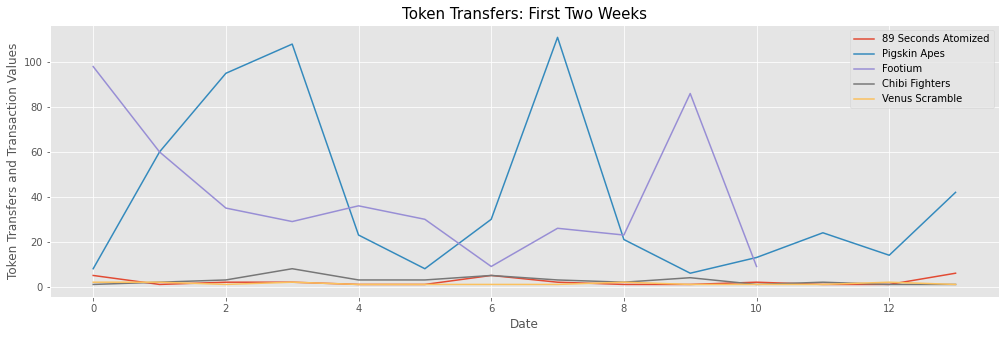

In [125]:
fig, ax = plt.subplots(figsize =(17, 5))

plt.plot(seconds_atomized.index[:14], seconds_atomized[:14]['tokens_bought'], label = '89 Seconds Atomized') 
plt.plot(pigskin_apes.index[:14], pigskin_apes[:14]['tokens_bought'], label = 'Pigskin Apes') 
plt.plot(footium.index[:14], footium[:14]['tokens_bought'], label = 'Footium') 
plt.plot(chibi_fighters.index[:14], chibi_fighters[:14]['tokens_bought'], label = 'Chibi Fighters') 
plt.plot(venus_scramble.index[:14], venus_scramble[:14]['tokens_bought'], label = 'Venus Scramble') 

# Specify Title
plt.title("Token Transfers: First Two Weeks", size=15, y =1)

# Labeling 
plt.xlabel("Days", size=12)
plt.ylabel("Token Transfers and Transaction Values", size=12)
plt.legend()

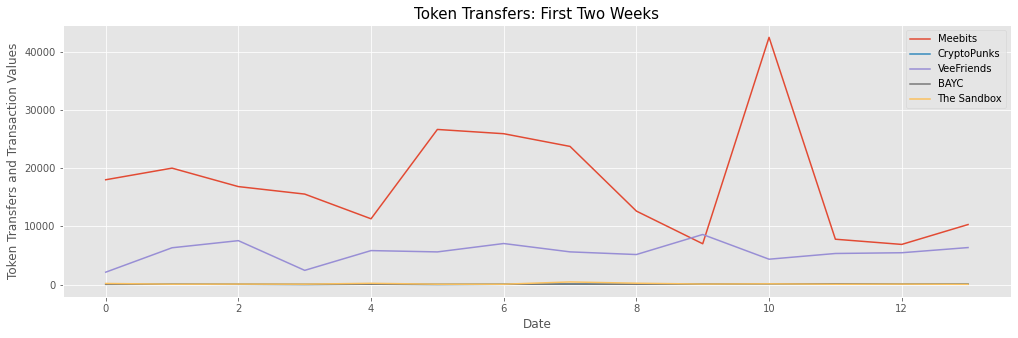

In [136]:
fig, ax = plt.subplots(figsize =(17, 5))

plt.plot(meebits.index[:14], meebits[:14]['average_adjusted'], label = 'Meebits') 
plt.plot(crypto_punks.index[:14], crypto_punks[:14]['average_adjusted'], label = 'CryptoPunks') 
plt.plot(veefriends.index[:14], veefriends[:14]['average_adjusted'], label = 'VeeFriends') 
plt.plot(bored_apes_yacht_club.index[:14], bored_apes_yacht_club[:14]['average_adjusted'], label = 'BAYC') 
plt.plot(sandbox.index[:14], sandbox[:14]['average_adjusted'], label = 'The Sandbox') 

# Specify Title
plt.title("Token Transfers: First Two Weeks", size=15, y =1)

# Labeling 
plt.xlabel("Days", size=12)
plt.ylabel("Token Transfers and Transaction Values", size=12)
plt.legend()

## Calculations

In [ ]:
nft_projects= [crypto_kitties, veefriends, crypto_punks, bored_apes_yacht_club, mutant_ape_yacht_club, sandbox, meebits, loot, 
cool_cats_nft, parallel_alpha, cryptoadz, sorare, on1_force, punks_comic, pudgy_pengiuns, zed_run, fidenza, hashmasks, 
bored_ape_kennel_club, cyberkongz, curio_cards, creature_world, axie_infinity, cryptoheroes, doodles, lostpoets, world_women, 
doge_pound, bored_ape_chemistry_club, ringers, cryptovoxels, lazy_lions, sneaky_vampire, supducks, fluf_world, autoglyphs 
,galactic_apes, meridian, mirandus, damien_hirst, mutant_cats, gutter_cat, kaiju_kingz, starchain, bit_aliens, little_uzis
,bones_bananas, pixelknights, axon_world, meeler, chibilabs, kepler, riot_racers, transported, klay_ape, legends_metaverse
,panda_golf, metaverse_punks, defilabs, ethemerals, julia_set, pettametti, cuddles, kbot_factory, million_raccoons, crazy_dragon
,delisted_tiny, forgotten_cult, ultra_punks, drooling_bear, paradise_trippies, baby_ape_boat_club, doomed_souls, nft_redzone
,hypnos, vhils, crypteriors, clout_punks, alien_codex, diamond_crypto,louvre_punks, one_day, lady_killaz, junk_yard_bones
,nfft, einform, boneys, vApez, footium, venus_scramble, chibi_fighters, pigskin_apes, seconds_atomized]


In [ ]:
pd.set_option('display.max_rows', 100)
nft_projects = pd.DataFrame(nft_projects)

In [369]:
# Start Date 
tokens_bought_start = []
for x in nft_projects: 
    y = x.loc[0]['start']
    tokens_bought_start.append(y)

In [ ]:
calculations_df = pd.DataFrame()

In [ ]:
calculations_df['NFT_Project'] = ['crypto_kitties', 'veefriends', 'crypto_punks', 'bored_apes_yacht_club', 'mutant_ape_yacht_club', 
                                  'sandbox', 'meebits', 'loot', 'cool_cats_nft', 'parallel_alpha', 'cryptoadz ', 'sorare', 
                                  'on1_force', 'punks_comic', 'pudgy_penguins', 'zed_run', 'fidenza', 'hashmasks', 'bored_ape_kennel_club', 
                                  'cyberkongz', 'curio_cards', 'creature_world', 'axie_infinity', 'crypto_heroes', 'doodles', 
                                  'lostpoets', 'world_women', 'doge_pound', 'bored_ape_chemistry_club', 'ringers', 'cryptovoxels', 'lazy_lions', 
                                  'sneaky_vampire', 'sup_ducks', 'fluf_world', 'autoglyphs', 'galactic_apes', 'meridian', 'mirandus', 'damien_hirst', 
                                  'mutant_cats', 'gutter_cat', 'kaiju_kingz', 'starchain_official', 'bit_aliens', 'little_uzis', 'bones_bananas', 
                                  'pixelknights', 'axon_worlds', 'meeler', 'chibilabs', 'kepler', 'riot_racers', 'transported', 'klay_ape', 'legends_metaverse', 
                                  'panda_golf', 'metaverse_punks', 'defilabs', 'ethemerals', 'julia_set', 'pettametti', 'cuddles', 'kbot_factory', 
                                  'million_raccoons', 'crazy_dragon', 'delisted_tiny', 'forgotten_cult', 'ultra_punks', 'drooling_bear', 'paradise_trippies', 
                                  'baby_ape_boat_club', 'doomed_souls', 'nft_redzone', 'hypnos', 'vhils', 'crypteriors', 
                                  'clout_punks', 'alien_codex', 'diamond_crypto', 'louvre_punks', 'one_day', 'lady_killaz', 'junk_yard_bones', 'nftt', 
                                  'einform', 'boneys', 'vApez', 'footium', 'venus_scramble', 'chibi_fighters', 'pigskin_apes', 'seconds_atomized']


### Start date

In [ ]:
# Merge data 
calculations_df['token_bought_start'] = tokens_bought_start

In [381]:
# Quantity adjusted 
quantity_adjusted_start = []
for x in nft_projects: 
    y = x.loc[0]['quantity_adjusted']
    quantity_adjusted_start.append(y)

In [385]:
# Merge data 
calculations_df['quantity_adjusted_start'] = quantity_adjusted_start

In [389]:
# Average adjusted
average_adjusted_start = []
for x in nft_projects: 
    y = x.loc[0]['average_adjusted']
    average_adjusted_start.append(y)

In [390]:
# Merge data 
calculations_df['average_adjusted_start'] = average_adjusted_start

In [393]:
# Tokens Bought 
tokens_start = []
for x in nft_projects: 
    y = x.loc[0]['tokens_bought']
    tokens_start.append(y)

In [395]:
# Merge data 
calculations_df['tokens_start'] = tokens_start

### 2 Weeks

In [408]:
# Tokens Bought 
tokens_bought_2 = []
for x in nft_projects: 
    y = x['tokens_bought'].loc[:14].sum()
    tokens_bought_2.append(y)


In [411]:
# Merge data 
calculations_df['tokens_bought_2_weeks'] = tokens_bought_2

In [416]:
# Quantity adjusted 
quantity_adjusted_2 = []
for x in nft_projects: 
    y = x['quantity_adjusted'].loc[:14].sum()
    quantity_adjusted_2.append(y)

In [417]:
# Merge data 
calculations_df['quantity_adjusted_2'] = quantity_adjusted_2

In [419]:
# Average adjusted 
average_adjusted_2 = []
for x in nft_projects: 
    y = x['average_adjusted'].loc[:14].mean()
    average_adjusted_2.append(y)

In [420]:
# Merge data
calculations_df['average_adjusted_2'] = average_adjusted_2

### Month 

In [422]:
# Tokens Bought 
tokens_bought_month = []
for x in nft_projects: 
    y = x['tokens_bought'].loc[:30].sum()
    tokens_bought_month.append(y)

In [434]:
# Merge data 
calculations_df['tokens_bought_month'] = tokens_bought_month

In [429]:
# Quantity adjusted 
quantity_adjusted_month = []
for x in nft_projects: 
    y = x['quantity_adjusted'].loc[:30].sum()
    quantity_adjusted_month.append(y)

In [430]:
# Merge data 
calculations_df['quantity_adjusted_month'] = quantity_adjusted_month

In [426]:
# Average adjusted 
average_adjusted_month = []
for x in nft_projects: 
    y = x['average_adjusted'].loc[:30].mean()
    average_adjusted_month.append(y)

In [427]:
# Merge data 
calculations_df['average_adjusted_month'] = average_adjusted_month

In [433]:
# Convert to csv file  
calculations_df.to_csv("calculations_df.csv", index=False)

### Variable Exploration

In [57]:
# Read in data 
df = pd.read_csv("./DATA/nft_projects_success.csv")

In [1]:
# Import packages 

import pandas as pd
import datetime
import numpy as np 
import missingno as miss
import warnings
warnings.simplefilter("ignore")

# Plotting 
import seaborn as sns
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from plotnine import * 
import plotnine 

/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


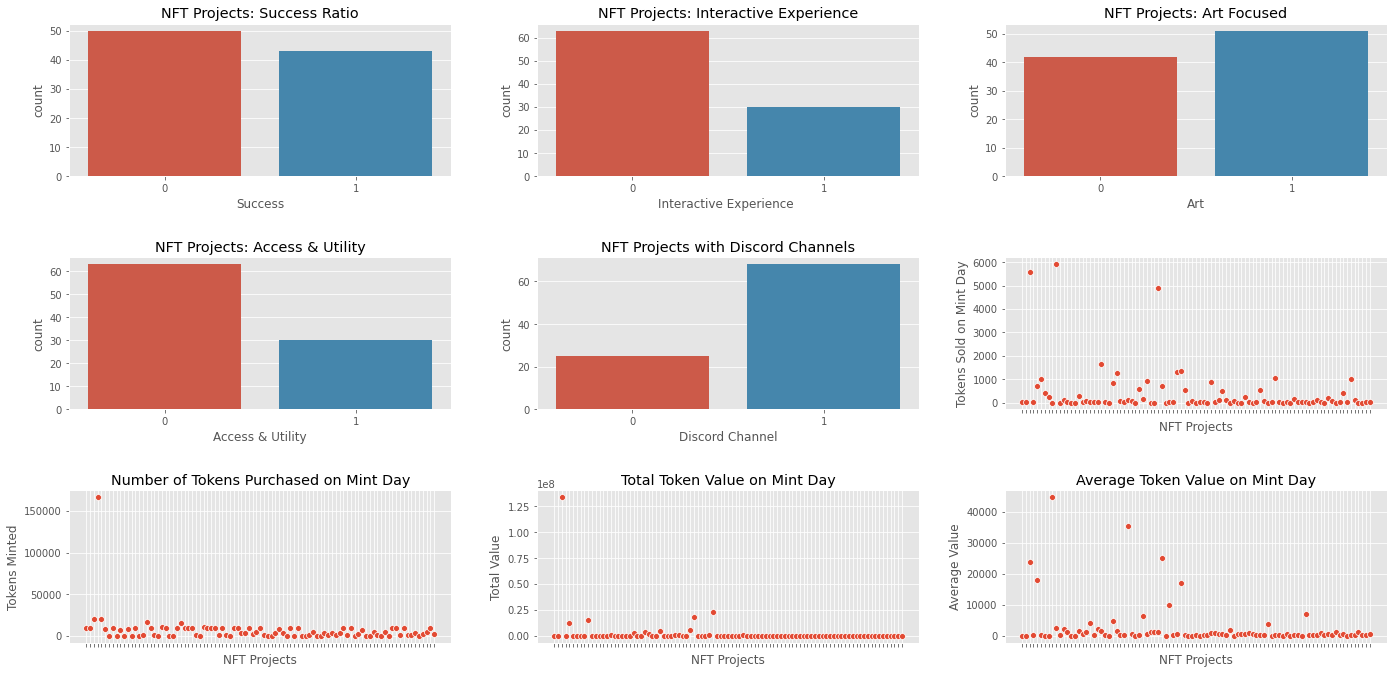

In [58]:
# Plot number of transactions across years 
f, axes = plt.subplots(3, 3, figsize=(20, 10))

g2 = sns.countplot(x="Art", data=df, ax=axes[0, 2])
g2.set(title='NFT Projects: Art Focused')

g2 = sns.countplot(x="Discord Channel", data=df, ax=axes[1, 1])
g2.set(title='NFT Projects with Discord Channels')

g2 = sns.countplot(x="Access & Utility", data=df, ax=axes[1, 0])
g2.set(title='NFT Projects: Access & Utility')

g2 = sns.countplot(x="Interactive Experience ", data=df, ax=axes[0, 1])
g2.set(title='NFT Projects: Interactive Experience')

g2 = sns.countplot(x="Success", data=df, ax=axes[0, 0])
g2.set(title='NFT Projects: Success Ratio')

g2 = sns.scatterplot(data = df, y = 'tokens_start', x = 'Token Name', ax=axes[1,2])
g2.set(ylabel= 'Tokens Sold on Mint Day')
g2.set(xlabel= 'NFT Projects')
g2.set(xticklabels=[]) 

g2 = sns.scatterplot(data = df, y = 'Number of Tokens Minted', x = 'Token Name', ax=axes[2,0])
g2.set(ylabel= 'Tokens Minted')
g2.set(xlabel= 'NFT Projects')
g2.set(xticklabels=[]) 
g2.set(title='Number of Tokens Purchased on Mint Day')

g2 = sns.scatterplot(data = df, y = 'quantity_adjusted_start', x = 'Token Name', ax=axes[2,1])
g2.set(ylabel= 'Total Value')
g2.set(xlabel= 'NFT Projects')
g2.set(xticklabels=[]) 
g2.set(title='Total Token Value on Mint Day')


g2 = sns.scatterplot(data = df, y = 'average_adjusted_start', x = 'Token Name', ax=axes[2,2])
g2.set(ylabel= 'Average Value')
g2.set(xlabel= 'NFT Projects')
g2.set(xticklabels=[]) 
g2.set(title='Average Token Value on Mint Day')

f.tight_layout(pad=3.0)